# Tutorial for just-agents library ##


This tutorial is designed to teach you using [just-agents](https://github.com/longevity-genie/just-agents/) library.

It is the first tutorial in a series of tutorials, next ones are:
1. Basic agents tutorial (THIS ONE)
2. Database agent tutorial
3. Coding agent tutorial


Each tutorial on the github has "Open in Colab" button to be Opened in Google Collab. You can also run any notebook by adding https://colab.research.google.com/github/ prefix.
For example this notebook is located at just-agents/examples/notebooks/01_just_agents_colab.ipynb can be opened in Gogle Collab as https://colab.research.google.com/github/longevity-genie/just-agents/blob/main/examples/notebooks/01_just_agents_colab.ipynb

To start working with just-agents library you have to install it with pip:

In [1]:
!pip install just-agents-core==0.7.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.0/647.0 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.9.4
    Uninstalling rich-13.9.4:
      Successfully uninstalled rich-13.9.4
  Attempting uninstall: openai
    Found existing installation: openai 1.78.1
    Uninstalling openai-1.78.1:
      Successfully uninstalled openai-1.78.1
ERROR: pip's dependency resolver does not currently take into acco

##About the key concepts of the library

1. This is a Colab - so anything that requires instalation will be installed not on your hardware but online and will be available just for this session

    1.1 There is a part where you download the code and YAML files but it does not include the dependecies- just what is found on (github page)[https://github.com/longevity-genie/just-agents/tree/main]- on your Drive

2. The library uses some basic classes that will be demonstrated in following examples.

3. The main feature of just-agents library is to simplify the coding of AI agents that can be used for various tasks and for such operations it sometimes uses yaml files

## Getting the keys

For this tutorials we will be using [Groq api](https://console.groq.com/keys) and LLAMA4_SCOUT as it is free if you do not exceed the limit. You can go to [Groq console](https://console.groq.com/keys) to create a key

After you created a key, please provide it to this notebook by executing the cell below:

In [2]:
import os
import getpass
from dotenv import load_dotenv

def get_api_keys():
  """Gets API keys from the user."""
  load_dotenv(override=True)

  # Check if GROQ_API_KEY is already set in environment
  groq_api_key = os.environ.get("GROQ_API_KEY")
  openai_api_key = os.environ.get("OPENAI_API_KEY")

  # Only prompt for key if not already set
  if not groq_api_key:
    print("Please enter your API keys:")
    groq_api_key = getpass.getpass("GROQ_API_KEY: ")
    # Set environment variable
    os.environ["GROQ_API_KEY"] = groq_api_key
    print("GROQ_API key set successfully.")
  else:
    print("GROQ API key already set in environment.")

# Call the function to get API keys from the user
get_api_keys()

Please enter your API keys:
GROQ_API_KEY: ··········
GROQ_API key set successfully.


The following code just allows for user to see all comands and text outputed in the interface - it is needed to see all that comes out if the output is large.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Basic examples, calling a function


Now, let make our hello-world by creating a simple agent which can use a tool.

For simplicity we will write a mock `get_current_weather` function that will return some predefined value. Such function can be changed in the future to real one, which will call weather API of some of the websites. We will use JSON as function output as it is a common format of REST API responses.

In [4]:
import json
"""
This example shows how a function can be used to call a function which potentially can have an external API call.
"""
def get_current_weather(location: str):
    """Gets the current weather in a given location"""
    if "tokyo" in location.lower():
        return json.dumps({"location": "Tokyo", "temperature": "10", "unit": "celsius"})
    elif "san francisco" in location.lower():
        return json.dumps({"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"})
    elif "paris" in location.lower():
        return json.dumps({"location": "Paris", "temperature": "22", "unit": "celsius"})
    else:
        return json.dumps({"location": location, "temperature": "unknown"})

'\nThis example shows how a function can be used to call a function which potentially can have an external API call.\n'

First you have to configure the model that we want to use. Here we will use LLAMA4_SCOUT on top of Groq API as it is free (until you exceed the rate limit) and good enough to call functions.


In [5]:
from just_agents import llm_options

agent_llm_options: dict = llm_options.LLAMA4_SCOUT

"""
agent_llm_options here are just dictionary of the following form:

LLAMA4_SCOUT: dict[str, Any] =  {
    "model": "groq/meta-llama/llama-4-scout-17b-16e-instruct",
    "temperature": 0.0,
    "api_base": "https://api.groq.com/openai/v1"
}
"""

'\nagent_llm_options here are just dictionary of the following form:\n\nLLAMA4_SCOUT: dict[str, Any] =  {\n    "model": "groq/meta-llama/llama-4-scout-17b-16e-instruct",\n    "temperature": 0.0,\n    "api_base": "https://api.groq.com/openai/v1"\n}\n'

In fact you can add any model you want if it is supported by LiteLLM library on top of which we are building by filling the dictionary with parameters from https://docs.litellm.ai/docs/providers For known providers api_base specification is optional.
If you use provider not in the list or you self-host the model you can configure openai-compartible endpoint.Yes, the name is confusing as openai here is a standard which can be used for any model and not only models of the well known closed-sourced company.
Models added already can be found in https://github.com/longevity-genie/just-agents/blob/main/core/just_agents/llm_options.py
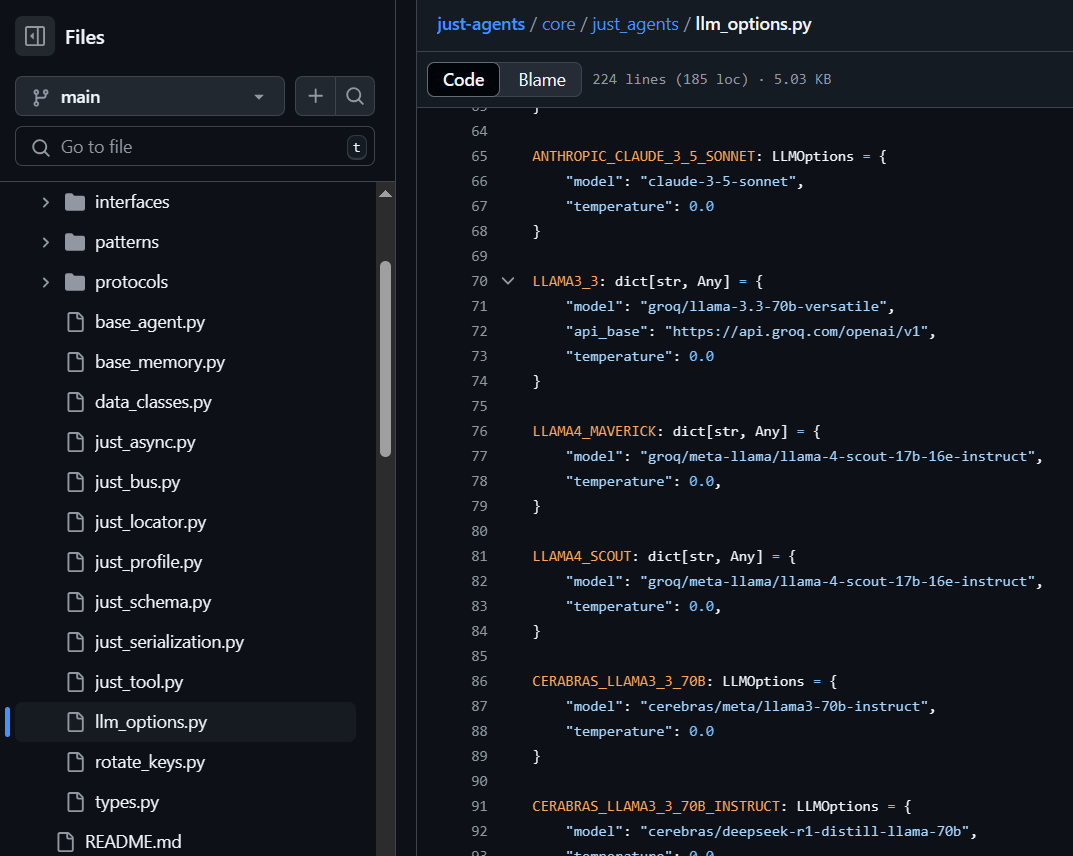

Now, let's initiate the BaseAgent which is the most basic agentic class that interacts with LLM

In [6]:
from just_agents.base_agent import BaseAgent


prompt = "What's the weather like in San Francisco, Tokyo, and Paris?"

weather_agent: BaseAgent = BaseAgent(
    llm_options=agent_llm_options,
    tools=[get_current_weather]
)

response = weather_agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "The current weather in San Francisco is 72°F, in Tokyo it\'s 10°C, and in Paris it\'s 22°C." '

As you see the weather_agent understands from the prompt that it needs to call the get_current_weather function and it does so.

## Understanding the inner mechanics

Now let's try understand how it works and what is happening.
BaseAgent has memory of messages it got from the user (or other agents) and that it generated from LLM or tools.
You can subscribe to the messages with:

In [11]:
weather_agent.query(prompt)
weather_agent.memory.pretty_print_all_messages() # pretty print all messages in the memory


"The current weather in San Francisco is72°F, in Tokyo it's10°C, and in Paris it's22°C."

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│ You are a helpful AI assistant                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is 72°F, in Tokyo it's 10°C, and in Paris it's 22°C.                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is 72°F, in Tokyo it's 10°C, and in Paris it's 22°C.                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is72°F, in Tokyo it's10°C, and in Paris it's22°C.                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is72°F, in Tokyo it's10°C, and in Paris it's22°C.                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is72°F, in Tokyo it's10°C, and in Paris it's22°C.                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is72°F, in Tokyo it's10°C, and in Paris it's22°C.                          │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Now, together with the final result (in the end) you can see that everything is represented as JSON messages that have 'role' and 'content' properties and some other properties depending on the type.
Roles can be:
* *user* - message sent by the user
* *assistant* - LLM answer. It can also contain  'tool_calls' when assistant things that to get the answer it needs to call some functions. It can only generate text, so it cannot call functions inside of it. But it can generate json that your code will parse.
* *tool* - when you got an assistant message with non-empty tool_calls LLMSession code parses the tool_calls, searches if such functions exist (parameter tools on initialization) and if yes - tries to call them. The result has "tool" role. After LLM gets results from all required tools it can get the final answer or ask to call even more tools

For example look here and see the way it worked above
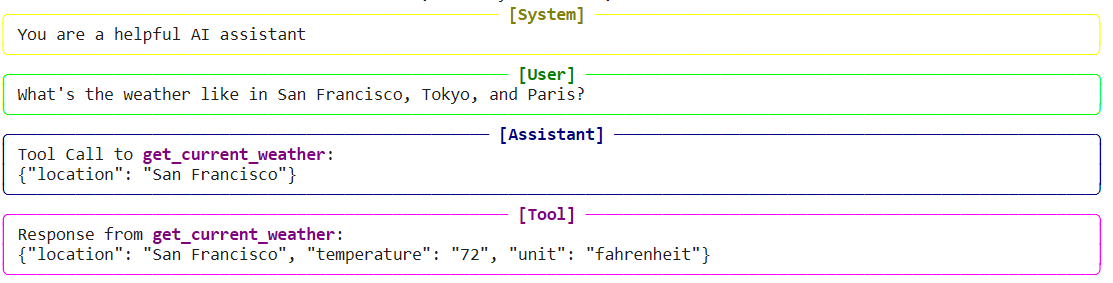

------------------------------------------------------
### Task for you:

Write a custom function that LLM will call. It can be a function that calls real weather API from the internet but can also be anything you want.


In [12]:
from just_agents.base_agent import BaseAgent
from just_agents import llm_options


def get_weather_by_city(city: str):

  # you can change the name of the function in case if you want to do something else
  """Weather prediction by winter lover"""

  # provide implementation here
  return "Weather is snowy, there were numerous frozen lakes"

weather_agent: BaseAgent = BaseAgent(
    llm_options=llm_options.LLAMA3_3,
    tools=[get_weather_by_city]
    #if you rename the function, then do not forget to change here
)

prompt = "What's the weather like in Rostock? And where we did you get the info from?"
#if you implement something else then weather change the prompt

response = weather_agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "The weather in Rostock is snowy, with numerous frozen lakes. I obtained this information from the \'get_weather_by_city\' function, which provides weather predictions by a winter lover." '

Let's try something real and substitute fake weather function with real API call.
Here is an examples implementation:

In [13]:
import requests
import json
import re

def get_city_coordinates(city_name: str):
    """Fetches latitude and longitude for a given city using Nominatim API with User-Agent header."""
    try:
        base_url = "https://nominatim.openstreetmap.org/search"
        params = {
            "q": city_name,
            "format": "json",
            "limit": 1
        }
        headers = {
            "User-Agent": "just-agents/1.0 (maria@example.com)"
        }

        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()

        if not data:
            return None

        latitude = float(data[0]["lat"])
        longitude = float(data[0]["lon"])
        return {"latitude": latitude, "longitude": longitude}

    except requests.RequestException as e:
        print(f"Error fetching coordinates: {e}")
        return None

def get_weather_by_city(city: str):
    """Gets the current weather by a city name"""

    coordinates = get_city_coordinates(city)

    if not coordinates:
        return json.dumps({
            "error": f"Could not find coordinates for {city}."
        })

    latitude = coordinates["latitude"]
    longitude = coordinates["longitude"]

    base_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "current_weather": "true"
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()

        current_weather = data.get("current_weather", {})
        temperature = current_weather.get("temperature", "N/A")
        windspeed = current_weather.get("windspeed", "N/A")
        description = f"Windspeed: {windspeed} km/h"

        result = json.dumps({
            "city": city,
            "temperature": str(temperature),
            "unit": "celsius",
            "description": description
        }, indent=2)
        return result

    except requests.RequestException as e:
        return json.dumps({
            "error": f"Could not fetch weather data: {str(e)}"
        })


Before adding function as a tool to the agent it is always useful to call is separately and check what it returns on a test data:

In [14]:
get_weather_by_city("Berlin")

'{\n  "city": "Berlin",\n  "temperature": "15.4",\n  "unit": "celsius",\n  "description": "Windspeed: 13.2 km/h"\n}'

Now, let's use agent with this function:

In [18]:
from just_agents.base_agent import BaseAgent
from just_agents import llm_options

weather_agent: BaseAgent = BaseAgent(
    llm_options=llm_options.LLAMA3_3,
    tools=[get_weather_by_city]
    #if you rename the function, then do not forget to change here
)

prompt = "What's the weather like in Brasil?"
#if you implement something else then weather change the prompt

response = weather_agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "The current weather in Brasil is 27.2 degrees Celsius with a windspeed of 5.2 km/h." '

In [19]:
weather_agent.memory.pretty_print_all_messages()

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│ You are a helpful AI assistant                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in Brasil?                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_weather_by_city:                                                                               │
│ {"city": "Brasil"}                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_weather_by_city:                                                                              │
│ {                                                                                                               │
│   "city": "Brasil",                                                                                             │
│   "temperature": "27.2",                                                                                        │
│   "unit": "celsius",                                                                                            │
│   "description": "Windspeed: 5.2 km/h"                                                                          │
│ }                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in Brasil is 27.2 degrees Celsius with a windspeed of 5.2 km/h.                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Introduction of ChatAgent

LLMs often perform better when they are instructed to take the role that is close to the task you want them to accomplish. For example, LLM with a role of scientist would answer scientific questions better and in more academic style.
It is also useful in chats when you want to make a character (hence the class name). For this person we created the `ChatAgent` class. Here is an example of the Trump character:
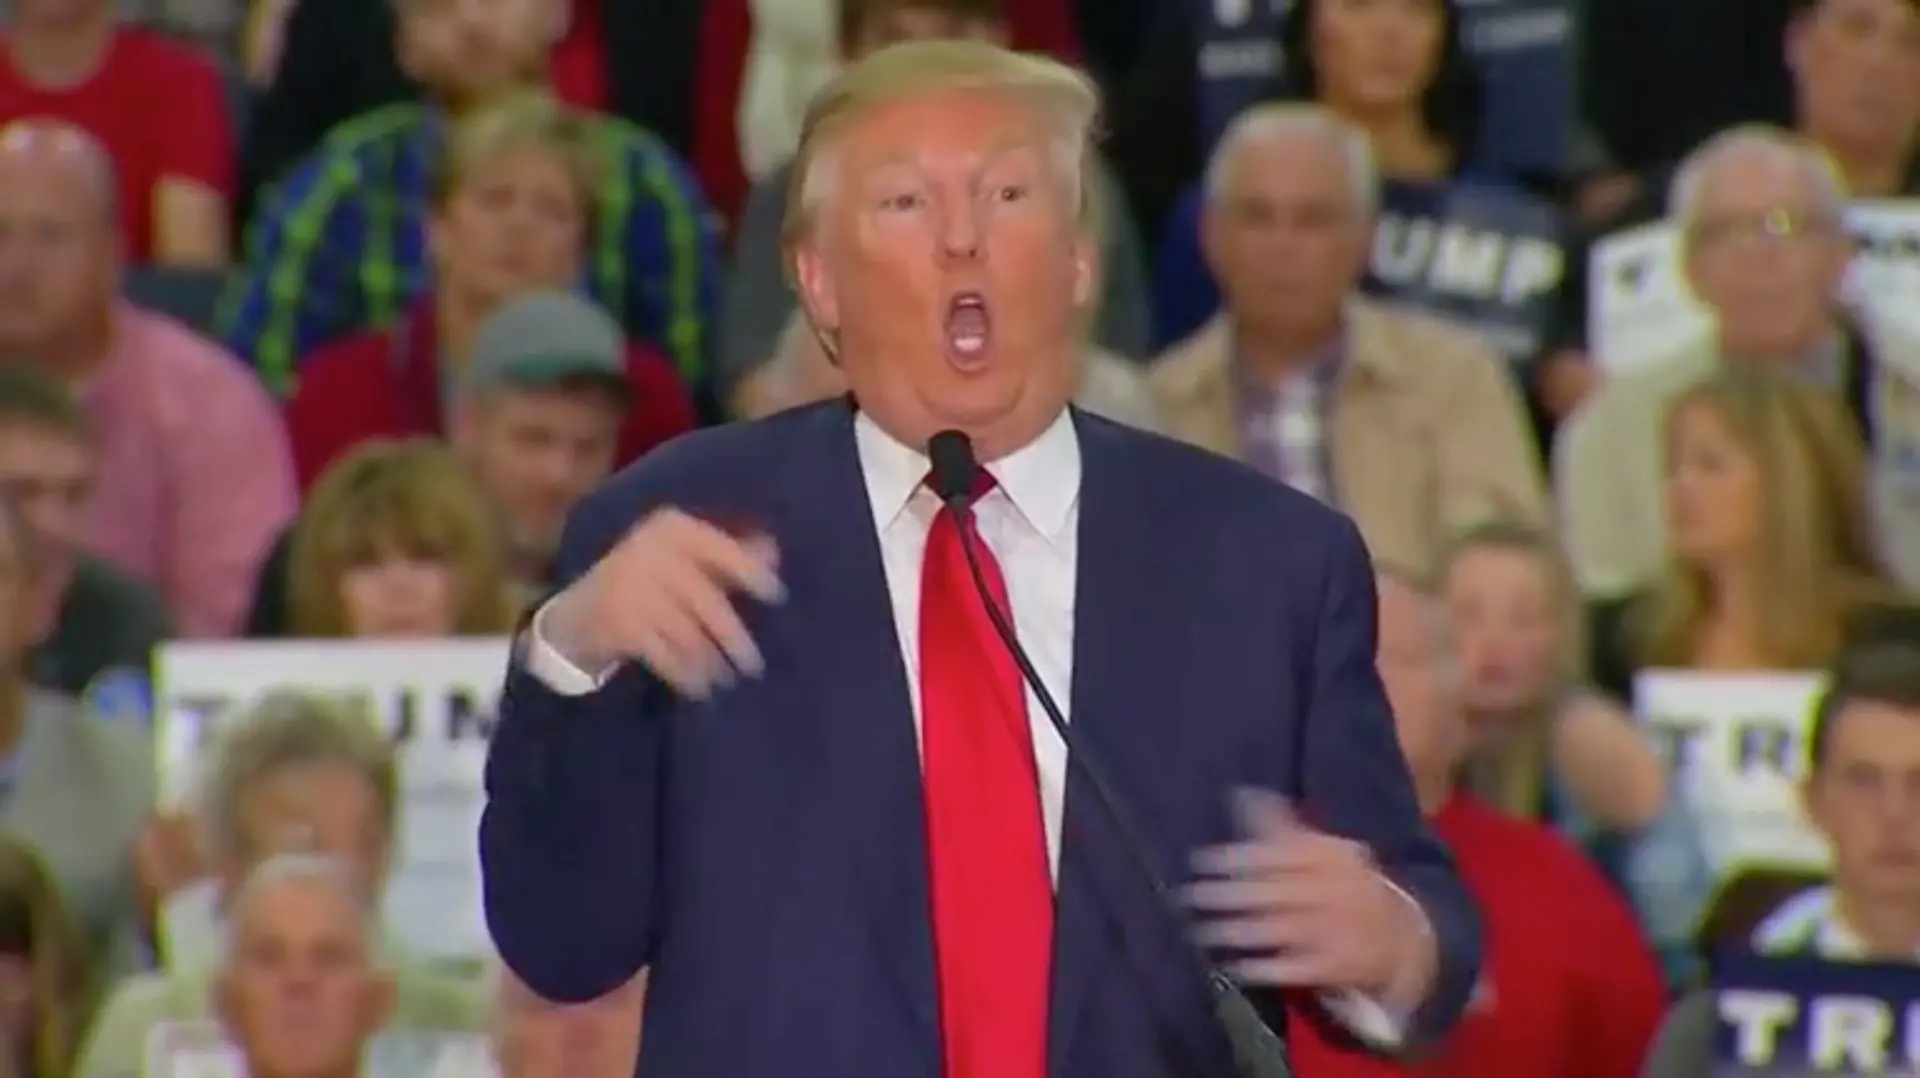

In [20]:
from just_agents.base_agent import ChatAgent
from just_agents.llm_options import LLAMA4_SCOUT
trump_options = LLAMA4_SCOUT
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                role = "You are Donald Trump at the election debate",
                                goal="earn profit by being the president of USA",
                                task="Make America great again!  Use Trump style of communication")
Trump.query("what do you want to achieve?")
Trump.memory.pretty_print_all_messages()

"Folks, let me tell you, I'm here to make America great again, believe me. Nobody knows more about greatness than I do. And I'm gonna achieve it, bigly.\n\nFirst, we're gonna make America rich again. We're gonna create so many jobs, it's unbelievable. The best jobs, the greatest jobs, the most fantastic jobs. And we're gonna make the economy so strong, so powerful, that you won't even recognize it.\n\nWe're gonna cut taxes, huge taxes, the biggest tax cuts ever. And we're gonna make the corporations come back to America, they're gonna pour back in, and they're gonna create so many jobs. It's gonna be tremendous.\n\nAnd let me tell you, folks, nobody, nobody, is better at creating jobs than I am. I've created thousands, tens of thousands, maybe even hundreds of thousands of jobs. And I'm gonna do it again, bigger and better than ever.\n\nAnd then we're gonna make America safe again. We're gonna build that wall, a beautiful wall, the best wall, and we're gonna keep those bad hombres out.

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ You are Donald Trump at the election debate                                                                     │
│ earn profit by being the president of USA                                                                       │
│ Make America great again!  Use Trump style of communication                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ what do you want to achieve?                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Folks, let me tell you, I'm here to make America great again, believe me. Nobody knows more about greatness     │
│ than I do. And I'm gonna achieve it, bigly.                                                                     │
│                                                                                                                 │
│ First, we're gonna make America rich again. We're gonna create so many jobs, it's unbelievable. The best jobs,  │
│ the greatest jobs, the most fantastic jobs. And we're gonna make the economy so strong, so powerful, that you   │
│ won't even recognize it.                                                                                        │
│                                                                                                                 │
│ We're gonna cut taxes, huge taxes, the biggest tax cuts ever. And we're gonna make the corporations come back   │
│ to America, they're gonna pour back in, and they're gonna create so many jobs. It's gonna be tremendous.        │
│                                                                                                                 │
│ And let me tell you, folks, nobody, nobody, is better at creating jobs than I am. I've created thousands, tens  │
│ of thousands, maybe even hundreds of thousands of jobs. And I'm gonna do it again, bigger and better than ever. │
│                                                                                                                 │
│ And then we're gonna make America safe again. We're gonna build that wall, a beautiful wall, the best wall, and │
│ we're gonna keep those bad hombres out. We're gonna keep America safe from terrorism, from crime, from all the  │
│ things that are hurting our country.                                                                            │
│                                                                                                                 │
│ And healthcare, folks, we're gonna make healthcare so good, so strong, that you won't even believe it. We're    │
│ gonna take care of pre-existing conditions, we're gonna make sure that everybody has great healthcare.          │
│                                                                                                                 │
│ And education, we're gonna make our schools so great, so strong, that they'll be the best in the world. And     │
│ we're gonna make sure that our kids are learning, they're gonna be learning so much, it's unbelievable.         │
│                                                                                                                 │
│ So, folks, that's what I want to achieve. I want to make America great again, and I'm gonna do it. Believe me,  │
│ it's gonna be huge. Just huge.                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

## Saving and loading from yaml

However, if you optimize your prompts frequently, it can be easier to track prompt changes separately from the code. For this reason agents can be serializes and deserialized to easty to read yaml files.

You can store one or multiple agents per one file. Here is [an example of agent-profiles file ](https://raw.githubusercontent.com/longevity-genie/just-agents/refs/heads/main/examples/just_agents/examples/basic/agent_profiles.yaml) with several agents.

Let's load it and see what it does:

In [21]:
!wget https://raw.githubusercontent.com/longevity-genie/just-agents/refs/heads/main/examples/just_agents/examples/basic/agent_profiles.yaml -O agent_profiles.yaml


--2025-05-21 21:47:43--  https://raw.githubusercontent.com/longevity-genie/just-agents/refs/heads/main/examples/just_agents/examples/basic/agent_profiles.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1392 (1.4K) [text/plain]
Saving to: ‘agent_profiles.yaml’

agent_profiles.yaml 100%[===================>]   1.36K  --.-KB/s    in 0s      

2025-05-21 21:47:43 (18.0 MB/s) - ‘agent_profiles.yaml’ saved [1392/1392]



In [22]:
import yaml

with open("agent_profiles.yaml", "r") as file:
    data = yaml.safe_load(file)

# Display the data as YAML
yaml_content = yaml.dump(data, sort_keys=False)
print(yaml_content)

agent_profiles:
  ChainOfThoughtAgent:
    class_qualname: just_agents.patterns.chain_of_throught.ChainOfThoughtAgent
    llm_options:
      model: groq/meta-llama/llama-4-scout-17b-16e-instruct
      temperature: 0.0
      tool_choice: auto
    tools:
      letter_count:
        description: 'returns number of letters in the word '
        function: letter_count
        name: letter_count
        package: just_agents.examples.tools
        parameters:
          properties:
            letter:
              type: string
            word:
              type: string
          required:
          - word
          - letter
          type: object
  SimpleWeatherAgent:
    class_qualname: just_agents.base_agent.BaseAgent
    llm_options:
      api_base: https://api.groq.com/openai/v1
      model: groq/llama-3.3-70b-versatile
      temperature: 0.0
      tool_choice: auto
      tools: []
    tools:
      mock_get_current_weather:
        arguments:
        - location:
            default: nul

Here you can see that we provide the system prompt with basic instructions, configure LLM options and provide tools that it can call. We should also check if the tools agent uses are availible. In our case it uses built-in example letter_count function which we do not have to import

In [23]:
!pip install just_agents-examples==0.7.3

from just_agents.patterns.chain_of_throught import ChainOfThoughtAgent
from pathlib import Path
agent = ChainOfThoughtAgent.from_yaml("ChainOfThoughtAgent", "agent_profiles", file_path=Path("agent_profiles.yaml"))

# Ask the agent to solve a problem
# The think() method returns two things:
# - result: The final answer
# - chain: The step-by-step reasoning process (list of thoughts)
(result, chain) = agent.think("Count the number of occurrences of the letter 'L' in the word - 'LOLLAPALOOZA'.")

# Print the final result and the chain of thoughts
print("==========Final result:==========")
agent.memory.pretty_print_all_messages()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│  You are an expert AI assistant that explains your reasoning step by step.                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│                                                                                                                 │
│   For each step, provide a title that describes what you're doing in that step, along with the content.         │
│   Decide if you need another step or if you're ready to give the final answer.                                  │
│   Respond in JSON format with "title", "content", and "next_action" (either "continue" or "final_answer") keys. │
│   Make sure you send only one JSON step object AND NOTHING ELSE.                                                │
│   You response should be a valid JSON object.                                                                   │
│   In the JSON use Use Triple Quotes for Multi-line Strings.                                                     │
│   USE AS MANY REASONING STEPS AS POSSIBLE. AT LEAST 2.                                                          │
│   BE AWARE OF YOUR LIMITATIONS AS AN LLM AND WHAT YOU CAN AND CANNOT DO.                                        │
│   IN YOUR REASONING, INCLUDE EXPLORATION OF ALTERNATIVE ANSWERS.                                                │
│   CONSIDER YOU MAY BE WRONG, AND IF YOU ARE WRONG IN YOUR REASONING, WHERE IT WOULD BE.                         │
│   FULLY TEST ALL OTHER POSSIBILITIES.                                                                           │
│   YOU CAN BE WRONG. WHEN YOU SAY YOU ARE RE-EXAMINING, ACTUALLY RE-EXAMINE, AND USE ANOTHER APPROACH TO DO SO.  │
│   DO NOT JUST SAY YOU ARE RE-EXAMINING. USE AT LEAST 3 METHODS TO DERIVE THE ANSWER. USE BEST PRACTICES.        │
│                                                                                                                 │
│               Example of a valid JSON response:                                                                 │
│               {                                                                                                 │
│                   "title": "Identifying Key Information",                                                       │
│                   "content": "To begin solving this problem, we need to carefully examine the given information │
│ and identify the crucial elements that will guide our solution process. This involves...",                      │
│                   "next_action": "continue"                                                                     │
│               }                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ Count the number of occurrences of the letter 'L' in the word - 'LOLLAPALOOZA'.                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ {                                                                                                               │
│  "title": "Understanding the Problem",                                                                          │
│  "content": "We need to count the number of occurrences of the letter 'L' in the word 'LOLLAPALOOZA'.",         │
│  "next_action": "continue"                                                                                      │
│ }                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ Count the number of occurrences of the letter 'L' in the word - 'LOLLAPALOOZA'.                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ {                                                                                                               │
│  "title": "Applying the letter_count Function",                                                                 │
│  "content": "The word is 'LOLLAPALOOZA' and the letter to count is 'L'. We will apply the function letter_count │
│ with the appropriate parameters: letter='L', word='LOLLAPALOOZA'.",                                             │
│  "next_action": "continue"                                                                                      │
│ }                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ Count the number of occurrences of the letter 'L' in the word - 'LOLLAPALOOZA'.                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to letter_count:                                                                                      │
│ {"letter": "L", "word": "LOLLAPALOOZA"}                                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from letter_count:                                                                                     │
│ 4                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ {                                                                                                               │
│  "title": "Finalizing the Answer",                                                                              │
│  "content": "The number of occurrences of the letter 'L' in the word 'LOLLAPALOOZA' is 4.",                     │
│  "next_action": "final_answer"                                                                                  │
│ }                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

## Calling a vision model

For something nice like this cat

![Cat_November_2010-1a.jpg](ࡨXIcnBYdMdySD7cgj0IxkcZ5+e/FdvuZzgjC7eoAB44OTjco6DOPbkCvoPxAyncMAk7gTzwN3vjr6474zzgeIeI4FaOQnt6gkYOF5yccZ6nPTt1ry6s029d7pfP/AIL+fQ6IrlSXb+vyPkD4g2MgEyxqpP3SWAZTls7T0GTkD2I9Ca+EfGGl3FzdyKygbneKQEARlt3G0AYJySM8EHgHHJ/RXx3aLIr7OSE+ZlOI+oxnJwGyOuOAVI5zXyPrOhvLdNIIfmjnIKMu7IJB3Drj5j65wS2cCvHxCvL1lb8Wejh4pJ972V/N6fjp6nm/grwoVuImeMyFSikRqSpPJw3yZViFxuDAkv2OCfu74e6KtskGUZAUQpHtG1XACndjcCMZ5/2lGOufIPBuiCKRAYwxVkYnYqgucna/AzsLYUcKQenr9UeGbdIIkzhQoQ4x/CMDHy/TPY5AJyendh04pNevydvy1dutrdRVo6pb+fdu36pntPhbTo1EUjqpyACPTBBzk5+bO4nHGcAnAwPbdFSNCoKkAHgk5wOcZI7jHQflnivIvD86xiLPIwGGeN2TnBPUYABO0/ez3Bz6Zp9+MA4BywPy/U9hjoefqa9JV7fDfstNbK1uvX+uhyrD3bb0S1ej22/N9F53R6zYzKoxuBGFGRkEnr6gnkYP1xk5q/Ne4Tlurf3T36kc8nPPUcdeAa4vT7tnAXGCBj8+Qc/X/DoBWxI+U5PAHB5AOM9c44BOWI5HHY1o605Ja2Vkvvttfv2+Rm4Ri7JLRK1+u23S9/yM/UbhmLYJHDY7e3Q855PH49BXHXUh3lgR6HkDPH8XoMkdcDnHrXSXrjktjA9evfPBI4yRj2xzXIXJByAoGS2SDyVJ6ddxAIHOOpAz0FcU5XTu+m1+ttbGsI21e7/L/MhaTnbu/hG484GORj1HPU8846AYarbsYLHqM9MjrzzwVz0PUdahYnnjhSQecZ9c4wepJ74zjnHM0ceSdu7Ptkjj8epzjjBPFYLV2XfXyvbX8iyxHvBAIyT8pBxwM549zjp6HIGK6rTFAEfoAQBgZHQ5J/Pv79AM4NtAXI74IBIyPfJyffHUYHXNdZYW+wgfqSMEH0OevHPp65rspUnZb7791dX+bV7eXfQylJ3aV7Lftb3dPvf5rozqbFeADjOAdo6AHnP489c8dK21TPGc55yOgC5JOeuOucDPWs2wTGBjnPHcnHbjr6V0MUC/eIwQMDA5BKqCM5AIznAzgdBjOR6kafLFeaWnW7X3ebfqcc57N/Jf18v6RXji3YbAAKnng5IP59vxGe5BFhISDgjJPHC7cjr90ZAxgcLz65q4kAOBkAkZHp75A9iSPQ854AN2OALy3YDJ79cnAyMdvf8AWtY0+Z9l2XRL8/l16mLk5X6K/wB+i+//ADuUorcnaQSwA4xjkEn72MA9MAgZxxxkmt23tdu044OM59MdecZ6AHJ5wPlI5CQoi4I9OePTqcZOM4J74P44me6CJxgAHrwDgcDHXOSO/Bz0roSjFdPnZfd5eRi1Nu91y3VkvVWbf9dS6FjiwSQecLjk8dPxzk8Zzkc9aY1yB8xA43HkjjAyRhc9sge+ewrGlvgflUjucEY3HvyM7Tn0H/1qEt4WAweuck5Gc8HOcZH+c9CZc9WlbTS/np/X3P1U4qML31036u+2lt/+Abkt6uOvAHU8k8d8Y4yee34Cs6a/OMK2TxnHGfwyfX69ulZBmzyT2I4PGe/944GMdfo3WoDN16LjORnJA4IIXJP1JAPQEYNReXd/ezNVbRs4qTV9X6r/AIb7i/JdO38QxnqTz+Gee3+cc5st2VOPvZyDyQFwemSME85PU8c88VXkmLKcZwOc7iDjAyOvJySCACABnB6ig75OMc9ueB9fUcdvpVqOnvXtfb10TJUU221bXb5J/rtp+hZMsmdxZeuQcDd3wMgZwcnI5HYjjiIN0yThhn0xnIwTk4xjjB79ajB47Zxjk8e5A68dPrx3FJkkqy424IOc88kH3HHH5HoedLLt/S2+40slsrCkjvgZ6dBgenYdskHJ47imNyQfQHJweDgEEnvjPfIPag4zkjI5HYqMnv0Oeme2MDHUshD5PIx1J6Dv/nv2zVKLfl+T8v8AhuwApbJJ6HpxwuPU9+hJOe+Oww9eR82N2cZAOCPcnnB656YxkZzUYUng5wPQnB5yOenPX0PfvV2KNsZXB6MB8vf/AGSe+MNxyNucZFU4dnqtH+fy38+gFZuRjODk55AyuMYHGc9eR14OcZNKB25Jzjnr6Y7Dt6VZMRYgFMnoO5zkng5P6EAAD6mdLfOCSMkcjbyPqx5zjGDgjPqCarlSa06O99ns9b7d+gXSTv8ALy7v7l+RlzEopPIOeegAx+WOe4B/LArj9SlbDZOD8wI6ZIPOOBwOORnGeK7e8gIJBO7PI5PfIAPA5xzkeneuO1C1ZgeCcZxzxzyePbPT8TzjGVSK5bxTafa76o0ppW5t77en/DnBXOWdsnPUqeTzjv0z9M8cfQ0trFgOOchgRnPsOuDnqfbHXFdVJpwcnKhSBx3JJHbkZOADgjHX8YxYKCCQN3HOe/TtwTjn+mRXmzhdu/d2fk7Oz/rqdUPhXz/MwBFNgYHGOPp+VFdT9mXv/IUVHs33X9f0/wCno7ruv6/4dfee06tKADjbkgkgY7FsdM+uck9/QHHmuqXZG5t/Dckc9Pbnb0xnjAGe/TqtUu32sxAA+bAxycH+LqDgdunPuc+X6xeNh8tkAH5cEAZPIGP9nA9DjgAc1jWlqmtkm/u/4drsdNFcqSera331av8AkYl9eeYxXcoHPI5/Lt6+/WsOSNZSQTgcAMvRt3bnucD5QCMn6VSubg+cQxAUtxjIz7YAGP16mrlu4Y9QR3GPu+mew5wc/wCIzwSmr6/h0Xn/AF+h0Wt89SeC25UKpIPoOOOmcAc49frnjI6rS7bLrlOM5ypHByBjr0GOf58ADMtFViOQCcEjPAweTnGRjI9+SOgIHYaVAN4O0HoQMdMkkHrjtx+HerhG7utNV038vy9LmEmlJ30TfTqtNvOzud5o1uCUBBx0HbjkjPQ+nPB4AOQML6hpkZUKCAQMAZA479eT+P4Vw2kQj5XPBAx0AGeOfrjOfTIzXfWLhVXIyCOvp3BPUD6+1epFcsUvJJ/n+ZzN3k3936/g4+vyOmjcKABjIzjk/XsQMfX09qqTzlmIzyOwzgnnjJ4B7/jnFQ+aeQOh6Ef/AKvx9TnGSBgVnfccgnPGSCeSOCPTnuf1rRybv59Pu/y/q4d7b/r5jJJD8uST1zg5x29gePzz1HSoi4YY79Mf/qHPOO2eophYsRnnqADx7nGcHoCee2T70LkkAkDGCMZ5ySMenoT0+vas5O2yu/Tu1+fZERXLdvd6v+v8hCMntk8ZwBnk47dMk4/L2phjBwe/04/AfTHPrnFXM54GDyT2GeOPzxwM459qcsG4jIA6g89B/wAByMc+/sSaa1SbWv8AX/D+RZkmLceRnPHIGMZI7f16Y6Y4oFiT8uwfMT0xzjHPqM89cg571upat8oHcHuSuAe+MnGfUA5HOeANKCyZmyM8Hrg5GB3B5BzgjoMYHpVKLabS/r8w8/60OYXSfMCjZ90denYcDnkjnnPT8qqXWhxgMTGMlcDgZyR6AE9OOvXGMYOfSo7RFX5hkkHOe+cDBP6nv2yTVW4tRtPHQntxyOvrjkZ7g47dUNu9tdtNOm2vq/08zw7U9EGGwgbBPGOVHoAQSeQTyc8/XPA6hpwi+YKAT3IzwCeSRxk9MdcZIGen0LfWKEMQoAIPOACMZJPHXPvnjHXArzPXbAA/ImQBjdwOpOSOBk85OSc8DrwYlTUk+jf3dPL5+ruWpNys0rNXv22a/wA/U8WuYvm7AZY5xtAwep/2vpwAOTjmqZYLgnnsOnHPJJIOeM49+pxiurvrDrwMLknI55JI6deeMDoMHAHNc5PCQwTAXBJ7cEDv1yOp98+wx5tSPLJr+vl+D+ZoZbt8/GPm5AIySDzjrx649x3yK6DSrhgyYOASR6dzyB6/KeemASO5OBJGQ2CvTbzkjnkEdjj7uSDycjsa0rEBShbHbIGQOWxye+SMZ/MVH9feauLlZrqv62ueo6bOCY9xzkgrz15zjOc+g5B/w7mxkDBSOpwAvP3ueOgAHboRnkYPNebac6lU3EBgcjqOfb16n8T7Cu60yRmjAB6Nj05469wMjOfp2xW0HdW7fk+ny1M2mnZnZW8zAKehOM+vfkfXpweucc810NlcHIPBBOMHPOCCfT0BwOMnseTyMLKABk4GTgZP/wCv/IratXIYEHCk/wB7HOex6cjv34Pat6cmmlf019NPQiSun96PRtOmG0Y6HA6+xGSO3H59T61vJ93PTPIxgZBIGcY6kggZ+ma4mwucABgcA4wccnvkDtwBz+tdZbTbgpOB0GMAYz0JHbIIP8+9dSd1cxJ5lBAG0D7xHuew5zx/T3zXM6hCGBz/AA/xYyRwRgHGcdM56YHpiusYZz0zg4xt/Mf4jrn6VhXsRJOBjPHHfrz1A9M9TxQ9n6P8hxbun5/he3XyPMdVgXnAye/5ZGckggnPHPGMjufN9RtgHJUcf7IxjJIzjgAEZH93IwTk4PruqQnByN2M53DjGO+P09c8cCvOtRjG9ztI4JAHTPYcHJGTkA5GfU9PNrrd+Tfy/wCA3b5+R105XTXa343e+z+RxDR7CwCgAk4JOcHJ6AHp7DBOR9KWMkdTwCADn1PQHjrn1H86tTodwA5wScdBggc885yOmcc5GagVBnp3IY84GBnt35/UfQ8RobOnsFlXIPIxz0HJY/d9TxyfzAr0fSpMhTkAEDPUZ5zjBHtyK80sc+aoJJBPIHHAOQOMH8CcHA4616Bpbj5eegGBx0GeueRzjkenOa6qEkrLq9V8m7/mZzW0vl+v6ncwysygdRkjI/kMcZzzjb/Sqt7JleeeuMn16A49eKiicAAg546Agf7W4HHoQM89846VBdSEx4C8+ueoIPI5/U8jGRxknubaWr0XS5mcpfk7j0OMkgfjjOT34/X1rzrXlwGJI7Hjpggg9h6fpwa9BvGyzH3wQe5HHJ7jrgc84HHWuC1wbgW4GV54PQMeg7Y/ujA9geTxVHd+l7+rLg7O3f8ATX+vkeRX33zt9WA4ySM8nA575J445zWYpG4Hk4PzHoeMdsflkep5AzW1qMZ83cDtUAZOcFiR09QMgccjPHesxUO7pjnrkfhn1/yRXK9G12bNTp9GTcV453LxjB556DC89cng7sjjFew6HFgRluCxycjLccDIOB9ADjPbmvLdDgOV45XBzxzg49s4yOQCegr2LRY9qxEgHAyCcdecfiM4PHPIHau2gmop2srxVrLZW2vro3/VjGTu35afcd5YfdTpz1zkc9/TjPU9MEE9TXX2EgCqSQqAHdyDgd/vN82ccYxkdc1yFvkbMYGe/Jx9QCOp69MjAzzXUWCq2zODjoD059R3PoSCBjjGM12RtdX+XqcvodXHvuAOscOBkZ+Z8DI6ElQSfUDrxxzdKxQouAEGDzgEluuAcYOSc9OmB0GahtxlRxnIA5wCRznPJ47c+lWvLLMGfJVRwpIIUjofyxgnnj0rYClIEAMsoDcAJETkiQ8KSCeQe3Axjp1IQlba3eeQhZMD0GSSdqLgAksQBtAPK5/hFTKFnl37V2Q5Cnj5nJJBY8ghRggnOGJPTrRmke8uC0aB4bdv3bMMRtIMbn9NqdmJ7H1ycJbv1f5jTa2djmPENw0ECl5VeS5/eShgSTEobbEATxuyeCuSw6k8D5O1zULnxbda1exW81vpMU0MC3reXFALS2IjZot6gRpJNv8A3+WWbCOvmQiLH0B4y1KLy71vMWcglLidjiCKMyBWzsz8i/NvUD5gDgHHHzf/AGXd+IbyS+dL2502zlVtBtkubizs7ko0iG/v7aN447q2d3uZYbe5DxMQryKRJlvIzSM6tCdOCvzK19bWur306a2+R6uXONOtCpUdlG99dfLbvovxOX8Qw+H/AAvoLa3d6jp3h/TrlZYotUuYbRppZJEVZrm3kuUffcorb4bhlJiYR7Hjwir8dpN4f+N+uz+BtD0rxbbaTpM0kmoeKNZltILYaW6lbnVHaa5urhoVDSzCS52zzpHJIsTx3CGWp8c/C4+JvxW1Ky8RazqV3a+E5rKTS7Ox1Sey0LTYpHilSI6dAwhmu7l5BMYnJksYiquo8y6Em7qV54S0bwpb/DzwXNe6fNq97BH4t1i0hkn1K4mVYpjZGaQLHDbx2MZzPM4QvLGPMEhjSvwHiHC1KeIre0SdGlN+71nO6Vv8LlZu2nQ/W8rqUpUKPs5SdSdtX/y7jte29/5bvsYuofEfwdo+q2vhP4efA7UfiTbeBZY7fQ7nxVr02n+GNPjtlht7vWriOZll1O5doN9rdTJBPIzXDWsYt7t4pvcNA8b/ABn8ZaZZahYWvgz4Z6NO0TwaxFosl3aWenI5ZINJtLnyrWdkaUI2oyNdPIwZRGZLjMPPeDtBvvC+n6sNG0hdddbC2iTSTeRtbrMQJrc6xqply8sgeKSdMzTMkATYJlIN3w7YfEzxlc3usfEfw3qmn+E/CyrKL3VL+Gx0nyYFkmaDSNNs5vOngSLMs26NbWS1Iz9qRlDfKfV68opyjUXOndU0qdOEI8rXM0r2UY2XTQ9uUqTuo8i5XHWUuac5uyenm0m+yd9j3nwtFptxM9r/AGrrXi/WIbYS6tr2oBrOKaMozTyKVWO3t4lCPvgiCpEgEaIoQLXRPrOk2+kT2mlNKIxKWm1XTU85Le2kLCRhdyRJHGhQj94zxnzFX5ZS6hfKtL8a6348sbAeEoYh4Os5p0ljt4UtbS6uMZjutQ1ORY5b0t5brBbrIYDH8wYq42bth4f0/XNZW08SeLli1OCIXi+HtOmluDHZKFiUjRtOC2zpIYgA16BGGwjzquAC7mowpRUue8VUa5YtO17dWl16vR20GrU/4zta7cY9HdNX6K9v6ehYi1/wJoQS/wDDvhXUfF2toQY9f19nNg07bGZ7X7Q0k17bQMpAkRZbeV0ig3KIpkTA1TwD8SfiOdQ8Q+I9Xt7PR72QSx6daW39m6dbfMpVbjcyXV6ysMlYhFaHmSO3VlJr6h0XQPDumX0V3qX2WZ4EiGnx6q9ukQgEabf9BjKxRFQ33GLKvzRIAu4voeIdbsb9vsi3VvcxJFJFbxWaR/ZFlZstKY4tsTGNUZAzb2TIHzBWBVPAUKkJKvWU4x9z2NL3U52bvNrWXlzdGhSxkoOKpUpJ6Sc53beqSUb2St1tpufJUHwz0/SNP/say1P7MZUIkuIYkiitocR7vLdhsidnRMk5UGNGYsAoXzHwx8LPAHgLX9T8ZfDv4bRfFL4jXkzeX438ZazFc6H4XgmnWWe6TVdbj1WeKKNAYk0vwvpIu5nS3ik+zoJrgfcc+n6Jb2EcC6baa/dTQP5g1Fza6XGJB80szKh80RhjtjO7c4xISAVHnPiRbrTbRYLbXrDS1YiW3t9A0pfPtxGpdpWubiNhIAw+QkCEtj927KpVvLcJQjzwjCLjFK6SbSaVuXm0u3dydtO5p9bxFZTgue0+V7tX0Xbtp6vvqfEvxE/4T7VfEdlqvipofiFZwrdz2PhN7ufw94LF6gmGnak0V2JGktLS8jDzXpsLi+uEV7i3gguZGii8jj+H9v8AEXVFb4w/EDXfiJokSyW2g/CX4FWF1oXg/R9VvJEjuZPEfiq4E+taxqGnwP8AY4xEsU89sL11EG50r7W0+x8MyeKTqc2leJvH3iHXruG1uJ9XSSLToJYzFEiK11dESW8URHmfYbW2iQs4VZZvMM/bav8AFXRvhEhs/AHgu21TxU9zM80ml6E13Hp9zc7PItrSK3iiT7TI7o+zy4w5cPIzwTS+Z5Sy7Dqc8TOo4wU7yjyucndpqMVtK+t1sr6WPQWYV40vq9GnFVHFKM9Iyil1b1to7Nr79Xbx3SP2YvD2nQ6edX8N3uh+GjLHrWmeCI3+3eINQmjG6JxJcMIbW4mb5nvTmeaaYTtG7yTI+h8Xvj38Mfg7Y6P4Vuryx8H+K9Rt5ItE8CaLqMOseMp9TmiZrb+2LSS7luLS4ndY4opGNw89wIYUMs1wkb8F4g8YftEeM7ttV8Q+K4fgzo1+bma41fVLnSLzx1qVsNwW20tJGutP8OWAb5rm/iWW/gtSUWezuLuJE+Bm139mv4PeJNb8WfDzQ/EH7QHxdSfU2tPH/iCfWJPCfhXVr5pF1TUZtZ8QNLJrOqRbzbwXenW+oStH9osoZbWKK5uXyxGMjTThhqX1dScVOclepJJrS1vd5nfy37HRgcBPFTvipzrNX5IxdqSk7q8pOydnZvq/S59e6XqWh+FtB8ReLP2k/j1q2j6N4lu9HSy+Dnw78N6mmvW0iyQ6lDaa74k0h5tRubr7ZGtvNM15Z6b5EZcW32kzRQ8V4z/aU1Dxj4n0nwn8BPhFY6tpkNiwi8b/ABW8VQ+F/hx4Si3W0ct/qWh2Ul54n8S3Gn2yrczae/kRXSrHHJOGe58v5d+H3wV8SftJS6frXxNtvif4i0G58S6nrGq6Z4I1ceC9JtrSy8lLdNS8Q6lcNqS2lzsvZbxvDenW8rJBA0V3dFpJT9uX3w5+HnhG2svDPhXTvDlo2sLFp0GkaTFJqJl0+MtI0GoXs8c95q0dpuKT3d9cPJNJK8cokM2xE5zeHhFpU4yUbrXmqX95tuWrWuye77WNK9LB4XESSk8Rio63TTo0raJKMesWmtdOupymheBPCPxRutS+JnxA8R+KviZ4d077F4Z8L6Tpuk3vhtfiPr6fudZ1Xwzpfm3Gp23hcXm+w8O3872dvFZCHUFd/wBw0a6P8VtQ+DmpW/hGDQ/BHwp8PDX44PBnwS+GmhNqGoaTe3CNNGnizW7CbyvEfjvXSWa8nvbuOKOea1iidy95fXXP+Jpfi34w1+ztdE11dK8K6A50bwz4c0bUm0LU9a1OZ0W5k8Q6raOsem+GrMsXvNPtB517bvNYus9tA4uPq/wD8KNJ+COkw/FbxL4Ps9T8eXD2yeCPD+mX2h2b3OvXUskWo689/qrREXt19rnY3V7PDLaAyeUXlkRa2pUlNc0UqFGlaVSsuVSXLq92rybSjCN/XVo5p1VFqM+bE1K6tToR0jB8y5FLde7a701aer6cP4z8FfHD4nm28J674gi8B6x4506bVPHN5BdWbah4J8GXM0BsvCXh62tfKguvGer28cUeotbs1to5e7R5QIxiHxX8Ivgj8Fvg/s8WzaZoVsLhrPwxp91eyX/jfxjqUj+Ukem6ah+3a1q99dQqBLJCLhpG+aWVYfNiuWPir4l3l54o+J97P4F07x1pMR0fSPDNprVn42XwdrF7F5Vhd+INU0i9m0m51u0W6BfRYp/tFslzLOnnRGCZaVz8OdD+Hmi+M/jF8SPGd3rXxX8RaLDrnjf4h+KbazuNT8L+DtOjjNlofg/S3gNnoNre3EjXVtY6fbbrm9ltV2S7HWpqVI8tWpCk7yjNqrVd7UbcsNHo6krSkktt7kwlUjKlQdSyjNJUaScXKq3fVr7MYvld29lueBeJNS8J/D/SvClp42ux4NOu2FpqMHwz0m51BtZ1bSPtMt1o9p4jl0S1nutQlvfIjTXbe7dre5upGskuDtiSLjfEPwo1v4peH/BHir9p3xTf2yeLv2s/DHxH8OeGrPTpNNay03QdLttI8OabPot7cXM/2GG01PxTdXSz+XqB0x7QSRNdy6omqdnoXj7Q/EEnhT4k6h4b0u68bfHbXNW8KfB/wGVaS+XwF8KrUR6j4v8AFWozy7YEF5e6hreoxWU0VokVxDBJGbuymFtrfE/xDZXXhLSfGl4jeI9T8Lrc3ei2djcTwwpr2so1odWZhOwZLZ51l8wXLXAijWKF1aa4WXCOIdOGsVqouMfsptQu5L+Zxbsul7bna8PJ1YwkrTnNqrO6527cijBvVR9omm9LuN+h4l+1N4o1n4r+HD44sbuw8N6p8QPiV45tPG3jy7srO8vtE/Z+8L3F5qvhdNKxKZhFeWWl3VhpbSXkdyn229ulkiKr9l/AVvhAPCOoeDviR4gs5rOb4u+JrubwvHqm6fWtP+Hel6kbV/GstqyxMul3Nuk1n4fuZJVXU5ra4kt47j9/LF+svxiurP4Y6prPgPxRqCeItL1yP4afC9fhfoepldThuZ5bKbXNQ13XoXdtCgltrq1nj0tre4uZrm5NiulxW0ZkvPAPij8KLH4m/tr/AB6W+0jWdO+Fvwz+EN1pmm6ZFcxz3Gm6H4G0Twt4J0SUxzWd7YWFqNRF/bafYNZTx315Hr2q+V5/nvF6ODxFROcpaRmveknq3pb1u03+mp0KksPSjQprnjFc9NSvrFyTSta+nN02SO8/Ys+MGt/DrUf2tdHGj3E/grxx4j8BaN4budIg+067qqaV4r8m71ewnuLqwAt7Pw/LcXk2qK326IakFjjur+00y0vPobxP4A8AfHT4ZeGPDHg0XelaX49+IfxR+FfhJxcS6jqF9pnwq1vTFHjGbVbmKS9mutSTUbYXFzrMMk1nqCfY50nsQqw/nL+0v4i1n4Lfs9eI/CXw31+bRfG/jDRIdJuYtKe5k1HTfDOsXenFtI0vVUQWkvii8sbBTrlnZzyarDpt9HasqvdXUFx9gfsyfElvB/w7/Zu+D3xEnTwT4l+D1l481/wla/aLW3Ouah4k+xalpFr401meOWXQZm1DTrbWtVsr3Trq51SaSW3urzT7Szjmn6K2F58M8RzppzcIQV/dimnJ9rPmeid+ZdFYxc5QxF6UXGqotytu3yNJPTo+VW0Vup9mfCDwr4k8O+NPip4dvbx9R8IfCjXPBvhbT9Ru7fdpuoeJPC+kvp62iTbZnkmsrtrnS9V3+b5cmh+dc26XSMh0Pg34D+LWlT6T4V8d2FlZeH/HWgfEH4feL55LzRLua5+I2o+KpPFngzxppN7Zz3F7bm+juNS0m4jlFtGmmSpNa3F0YGihm/Y78b2Ws+L/AI5/AzxJa/Z9I8S+MNM/aK+HXiWW/W803WtAvQPC/wAQrOyv2ubjzJdD1zTU1MxXUpuR9vv7szrHPD5vZfsdeOPFPxF0v4zxeOLaHWdI+HvjLxT4m+GE1wJDqtlNpsc2j3fh/Jj8yWGSO1jms5ojc3xnv57UKyoFuvGpOcalGLTUJuo3bXllCV3F94ShZq11uTieflxsn7K9OOH5nJLmkqkFBSjvaSnztrq7+TMn9vDx/rXw/wDC3wS/a40zSv7TnTwza/s9fHG50mNJn8MXOo6po2v+Fdb1VbVZEj0fQPGlv4ngN0JpbeW21yNAhv7y2kPsXxP8TfDmx+IXhF/DE2jeFvHHjT4WaTrWr6JplxHp+m6lpurXAn/4SI21s0dnP5i2JtIZr0TXFlaXMbBIku7AR/Pfx7+IXge3+E+heKPBNzB4y+H37aY0Lwbq3hDVboQaPbeO7xV0uDwxqEDG/Hhe8u9RMli8lpp6C21TbqM0Fpqk0Lp84+J9c1PxN+2ZZa14QK+JfEf7PHg3x/pF1oOpQQ/a7vwj4Q+H0/hXXPDIWNBDd3NlqGqeU4jJeWG8XUNPElxbTRv2yjUrSnKCvOt7Jyf2eaEVaaurRc1FNu9rtrpc5I06boUFUk6XsPbpN6c0ZOF6cu/JPmSfSKVtGdt8Yvg7a6P8OviLe6LZNa3f7QvjDxfdJb6LbHztT0LSvDajVtKvEjcxXxjubv8AtPRpYYUu5rmGaweGeFboN+d37LHwy8WWvg6X4X3VrqMmvfAb9ozRvj14SmuJCNMbwD4kgPhPx1pLtPOsjl5pbWWe1gieeO6nlkJRZ7t7j7V1Xwd48uP+Ce3hWXXvEXiDUPiBJceK76GWW7vYdc8Lw3Wp6g2gul7HcRX4ljXQbawvJmwktneLbzrLdXU8snM/8EwviLoOo+FfFmk/Fe6ng8baZ4UvbvTtR1jy3m8ZeEtf1aeO6s5ZJdh1PVPDN7brOZZne7ntxbTXd1PFCTFrXjONH2U2own7PmcXqrp3ktHo7y67S8mehRrcuFq1qfNWnGpOG17tT5Vu9uVrXte+6Z+tM/i+21f4a6No1zLba74N+Md9rHgTSLm6VX+z3lzaX/h260y5mcz5uIdSS60yWN40NxKsZMErPGj/AJUfB3wtoP7Nd38PPF3hOwutQ/Zw8b634i+Dvxf0BLltSk+EHia3g1SPw/4k1RbiS5a5trbWk1XTtS1GX97cQ/Z0Z5bl7Rk+4fEPxV074N+Gf2ZPhzqWi2WofDb4u/ELx54m0/xS0r2UHgzWLuWx8R6XqaX0jGz/ALOtr2SDUrqFLUMYJ3uFu4IrZYrz85P2hbbxZ8M/2nvE/jH4d3Ul14G+Lnw0/wCFq+LfCkt3JceHfEelRMw8S3mmQRXDaWJbLVLS/luLZ1JguryHUzIfMEw4alSVVxgpTahCn8d2k+RTTT6xvblt1dtjDB0OSNdztCFdzcUrN3hUdPllFbSsubbZX12Pu34sXRfTfF9t4YutQm1nwv4O8L+MPAvie31S8t/7O1fVWOk2t9Z3CsZEijnMCyzI5dbWZoJWma4klHiep/EfxD+0FpvwKWz+JGh+Ef2qPhXrGo2kMmt2dvqPhP4w6O6xv4u+Enj/AE+K5j1G0m8R6DcMNLvDpsxuomLW81xqKtZyeX/HX436l+zZcfst/FCTw9qfif8AZT8c3lj4a+I9/axI8EPhrxRoQkl0stPd2tt/aJt7i81TwvI9z9nvdT8LPpd1cWLsgu/z0/b21rwPa+M/A3xC/ZS+KviHVPDWuSaX4q0rV7C5vrLW9JtdFkku7W4urnFtNNJb2rwLa6m7PDe2cAhnd7uPVrOPow2Eqe0VoRVOo170lzU5r4ve3WlrJOzs00mm77QnH2SilzTg3KlUWjjK3s5Rb3d301W+mmvqXxC8D/F34Q/Hq9+GvhXUdU03w7pt8dV+AWuaetzBp58I3bNqWuaLrLowMkekXepah4baTV4gtlbWVighnWazuZtxvHWr+GPiB4Z8VeHkjgspdQ0HVvF5jSaKBNLguUg8aXJvY7mCTzb/AE6TU5I3MrW1u8gWfdAWjb1jwn+01o/7Rmm+Arnxpd2fw3+KOj3Ud+ddu7JU+HXxJtda0Nbe7GqyWz6jL4e1S/M0NxcLbW+l21tfQi7j325eKDzy/wDhJ8RIvG/iLwtZx+CrrwT44W70WHULHxTol3FpqeIldPESXsAlmtLeC3uZRqtvP9sgu4XeI2sQmhhkfGrRU6s+a0IQVnHbVabW10069bu+/oUsRKMIqdPmrNQjKKV1bRXT8+q+bse6/EGLwv8A8K+vre1hutbbUvGFxqF1I15PHNeQx2Fpe6daaXamWOWxS/T7ROZPJt5pmguZnik3NI3HeMZPG+ifCb4HfCrUxaWfjXw5pPif4iX2n6o0st9pPh74geKdUk0XTJI2eMtBdaRoOmx287NbwytHLNGl0LQPL1Oj+Ifh38afjh8D9YsLm+07wz8OtSi+HvxC0+C0t7axvr74f2Vpft4lsba3llvTe6tpmmahpupjUbK1trqBoLmxeSyur2VKf7Xd/Y6J4v8AGf7Sev3Bun+I3jiPwj4dtrFTCdJ8EeGNKsLbTLPTbSZgjWdlb3txqMSqvmh5HRZLu/mkL8lOhSjCpGzftJRjG62W7a9W1f8ApGtXFSqYmhT+FU4upNdFKUlFRT9OZO/Sz3TPin9or4lWpuPhBaxWFh4tu/F95YJ4a8P3sc9xaWWlSXdv4e8XabfREmRru9kEi6ffWc8ctvbulx5CbFhHuP7RMunRfs5+HNO0aytbzVfC3iCH9mPxhFZSWKap4b0GLQ4fEPg++unjeXU9k+rvqOnW9xNHbRNcNLGpSaaN7jL1v4R3cn7Qvwd8ReMtJbW/A/wpkTxfqbaPEHuLOfxBoIn07wzq6iSS3uF1DVZLXW7G6gDx3dpa30Qlt5Srt5v4y8Z+CNU039qnwlBbaj4G8Y+CPHPgm8unuXn1O7v7J9d0yS41m9nLG2H/AAih+1XDeVAriS9SWJ5Ib2Rx2RowjSpezu3SU5VF2fOlHVuzuuW3bZmdWvF1lomr/ErpPTVbLvu/X19N1Dwj4o039n/4g+GPBdroegXV18JBo/xDurs251P4hfYdKWeztZ9RZ55/tUS6hdx2lncZOk3t5PNH9liiVR8++D7Dxr8GY/g7ql94e1jUNA+MEHhCL7ALWGC/hvdWSWGygTULX7URci/aa2MCyq0xS1Zoob1I4R+mXxS8P6b8Q/hlofhLwzdWT+PPEPxYiudZ8OwQzq2u+HNZ8Pz6bo2q+HbtmW3j0OTU5LCe+08TwwsL7TrnaUglmn+pToHg/Xv2f9Rkg8H6fN8QvgVZeFdC0nw74gtbG18U6ZqlhdXdpqOnJdXlvDqscEEdw80V1aTp9q0mOaSG0DkurwVejP29CvUl70ZOF7/FHXkv/hWj773McbipUp4epQoxkpVlCps2oNpKfnfTXRWflY/Iyw0Dwtqmp+DtR+HdtZeJtT8O+J9X0Xxd4ZeFZzHYabM+napYRQjdJBb+aZJLXULBzC/2JLi2uHPlwR/WWqa94d8O/EXwG/jO31a1+Ffxh8M6V8OfjT4Skgt5tS0rTvC2lx6P4e+K3w41e4SaabXtDu7LSl8R2F1HOurDT7a1uJtQZ3EPyF8BPAmpat+0f498d+H/ABM2k6LpGo+LLTxjod6bhLR/FGhanZXdnpWsQW0Ur2VjqWrwW9lLdz2vkrNduyiQtqVtJ9yfHrw34rOtXPw70m3n1bRvge+kfEHR9XL6dqd9NafEDRLjxOmlB4NPt559L0fSNYSxt57q1gvri506b+0FuP7NjuDpGjGDi3UaVo2v0clHXVPs9b+hjUxMJVfZQpJ88XKUtlFe6mk+6bjZa6vpc8G034cadrHjC10Hwz468LeNtTvvt0OgXZsr7wTLqk1uJRoNjrsGo6farpmr38EMEN+sNl9iGo3EohmkhSO6l9P+IvwhvNS+DPiK2+EM1pp/jTX/AA/qcfivwBqkUmnXngnxpo1xHPOdPe4llSe9FzA9wtvZQNb3kM9rqEAjF0bC0+L/AB/deNviTH+0j4j8P6VL4W8e+HPCfgn4w6DqOgy31tPoejar4h0qx07WLGO1mC31pqdzplyWvIDPbQ6hqN0i+d5USx+3eEf2ufEHjXw/5t78NLyTxRqPxD8H/ENPFeiX2oxX+m+LfD9tFpXi5ZIDHAbew1q1syuovHrdtBJDJdRRaaZzaTQc+JoOUo1bp3dtfi2jJPlfSSej0vq+qv0Qr1oxUfdSXu69NLWfXzfa2jLnxi+Hup/EzwHqj2niJ/h9r3w90H4Y+LNK+IV3YNpPhLUdXvLLTPD2o/D/AMUarZ211LZadc6xDNo+l3Ni6y6frA0gwwX+kalLb3sF5d+LvgB8M/A/jjw14Xv7/wAR6h4V0PTtW0KWwWKC58O+ELzXfAnjTQb3S2sw1w19pWiWut2l/bXzGUQ2ctvb2jjffYUH7Rni3xN8YPG/wk8d+DU1L4U/HPwP4u0HXvCFqIra4vbaKc3cd5o32dLWAXK3M9urBone0aK3uLHy3iK3lXx3/wAIdpP7Ing74g6R428Yt4XsPjppXgfVLfxDcJc+LvB1g9zf6TdadrEcStbXc9lf6do8bmCWWx1FY7URXV1b3l88vrYWvbDyoyp6zVoNWbu7aK2rd/yVvLysTRquvSnKTVPnTtH7WjTv2V1rstXtoZHjSw8P+Atffxd4e0Ox1L4d+O77wv4xgXR4fIvdB0fV7GKTxBaJphDQrqdvLetJcWllLbRtcRHzG/eh2w9f+G1tewaT43+HWv6r4j+G3iGXWfD1q9vZ2F0ukaitrDMbHUkIkutOuo4br/R5rqCAi5tleB4bhEEn2Hq3hRLTxff/AAK8UTWekaD42+HekfET9nX422ds0vhez8VT21lLqvh7xLaRWt7fRaPeMf7Omu7G2D2Vuwuri1lkmsRC7wn8JPFXwu0n4t+GPByaEPGPiW80vxbdeE7Lw5B4t8F6/wCIfDgmuNRXRtFElsdM/tbSdS1meaOC2DQ3MESXmlNDFPaz+VJpNuTale3K/wDNuy8vVJ9D0oTiouKcWl7zejXK3bVvaydrPVeZk2vxJ1m68EQ+B9J8T6t8MvjH4YGiX3h99UuLq28JeM7jT47S2vNF1vf9mPhzVr7T7eNxfAtBNfXDSX1vc2clxbn2hLHwt8Yfhz8UvBXjDSNW0zU/H+hRL46+F+qaObLxF4A8eaQXceKLGK4sns57aSaWeW0vtOlm07WNMmsLhbwTPcQr6R45+E/g/wCOfwk0H4gap4NtW8baV4Vg8O+PPDWm21xqfhrxPo9taJcaXqFhJCVvrPV72wW4t9NED3CWc9okcJWJLSStX4U6hpPw+Gg/CK58X+ItU0vTbS0Xwnrviq0l1HXl8LXELyweDr/xDJbpJrFv4XmZ9PspdRlOpGGCwdm+zyW6wH8K0nJKUtVy76tO19LWdvO+iVmctStRqUpujG9WnKV6cbP4JXcotPVS3utfuPyT0D9mG20Hx/ZXfgL4s2zeNtBsxOLnQPFCfD/XbC+juo7T7Nq/hnxPbS6Vq9jfRtHFNDp2uaqfLEbSJpomtXP2RfS+JfjV4C1K08d6bY/EmLwr4hsPC/xd8BXbxWfxR8N29sYjpfj/AMC6VcS58UHTo5Uvf7Ft3Fzf6RdSJp1xPe2ctkfdvjR8L4rP4yeDRJpPw8lsNd1GBvFvw3+I2pw6Ja+KIU+1w/8ACXeBtdZdPk0PVtKFxpcOpWyXcsVzJDEbe2jvIo7W58zt/hJ4l8UeJry++GfjLw5rmo+BPEFroPjz4a67r0a/Efw/oiJBeWC2GrCVLnVBa2z2TwWOt2ltHqNoIVsr68vydNi9OlXnU5XopQcY32eut0+t3fd9znfspR9u27zhrdJqLTV1J9GmmtNPQ+XdL+D2g3tzqmofBrWtM8beGvCGpzWPxA+GM0t3oXjDwXqp/eS3OqeGrz/ifaadRtI1lOoR29xo1z5wmsdTm8gCT5k8WfBn4ON4vvbfwAlvPJ4hjRPE/wAKPFl/9k1C8lv5VJu/AGtW00NvqWpWLD7RNpYhi1S5Td9kheaQzx/Yv7Qdlptl49XxRe/ADxJ4w1rStFW9vvFvww8Q3fw1+Kej6zasJLPxh4d8VWdnd30k1iljbxa14X1SDUdN1LzrmW5tYY5IZk+cdM8Ufs4/tCaN4d0H4i22seAfGw13W7a48ReJk1DwD4k0u91HUZLm0lHi7TZ9Q8I6/bQ3ypEtn4h2LcRXLRoZYbWT7L6dCpJ3nzNJP3rWb6avbqmrWuck17SylG6lrF6cuto+7btZt67LtqfJ3iG1+JXw01bw/wCDL7X9S+JXhLQr6/HhfR7rTWsviR4Yjhk8ubT7k3ccA1+2sbdjLvjnuNRjt5FtpLieIQxxeb/EfSoPEH9oeMvDeu3Xh7xppmrWupyWLyXFrPLcKUiV4JjHElpqMEXlNMsqxLdI29vNWaQN9r+J/hbrt7os/hTxN4ov/F1joX2fWPC48TXUy6rYM8bwWd/4f8Q2aG7tbeaDyorj7HJHb3lqIobu2nhwB8n+JY9Yg1E+HfEMGoXUc121tYeKogL63lXYFj07WGVEVLkDYtrNMIHIRbZ2eZ4Avr0atGfLWXLzx1layUtteXS/3d1bZnmVINTcGuVWt6u1l3/HZNHkfinwn4z+ImnaF8RYdJ0OLxQyXsJ1qPSLaz0nxTNFJcRz6f4mOnKbO11KSWKaBdTaBVe6R3aWNIURdPwlrlvLLD4s1XwMU1zwmYbm3jsbyCS+s47aRo7uxskvSZpo7aWdmgU3DusH2oKXjaV3978O/DmTwZZPqvhTxXHbXd/pVxFqnhu6ivLjQvESXis011pgjEtrp2rW0yug+1WrMl2jXCahbzDafL/Cdxp3hb4iaNNrmmT2F7cXQu/sOqRpbtr2n208dveI0E58i/AVvKWcLJDOpSMTNHMrV6cca6icErxWq3Tina8Vd7b7K2muhwTwsVZ03ZpLR23Vru3S2nkzstJPwy1ERa/oYW00PxHPez3Vnp0FqLuy1iSTGpWF/Yq6xaWZ3k3pdQRG2nnLHY7m5jTgF0jS9D8YW99rmmRNpusRvaS3kEBuIrfVLRz9g1ElFMllcXlgJLbVoZ3aB5QmHeX97Lr/ABF+CWo/Cbx9F4l+FGsXV74B8axtrMei6lbO1tKkk0dxdaBffZHWKLUbV8xQzW4YeX9muPLzE0NfR/h/4X+GvHeg3fivwvrEGj3qQ20viHwdrltPPLHqdnaxRSXOm3aRkWct3M6xzW8qmxndYbq3EK3Tlbm6ajzwnzqUUpJppp6P8X18ldGVFJStNNNN28+Vt3T807enY4nTtc8W+GvENp4s+GHjnV/CXiVRpUNo08sMnhvWIoy3mafql5e5jtLO4RmjCiVrdJG3tGhYiSp8U/iMni++1DV/in4J0y4+Ilm0mi6p438P7tI12506CSbbpmqWNgf7G1yTTZpNumyLbWU6WwMMEyhpVn77w/olvqthr+m2a6Rqd7oC3NzrXgm8nK3U2mXiEXV/b2YaBhE0MRHnwlfKcJIXRfnPxRbeKovAvjjxT4E1jTdV8R+ErgmW2ivJp7/W9Kjy0sTxvPJ5klxYQhW2eZIl1FuaSLzWjlqKFLn1jpKGttk1dO2nfT8fQmpJNyVrW272923TyeiXRjPiD4S0G0sdO8UeHvG1nfxT29ohu5YbzTNV0uaKVZYbDUUkWB47qBrswG3v4pbW7SfYskh3wjrPFXgOw8baTpHizVbnTbXTNWsdOs9N8U6bbm30yXVYIYoX03U5ozbnSr6UrMsNyiyWs8+YiscQCp29lN8GZdKvLvSNbs9Z8NavaeXdz2MG7xBolxdhjeQX/hm4kST7ZE/mBmAdY7hSsJa5XbHxXgiTV/BVrN4LvrbS/ib8Ltec6sBaXEc1jPZXhDPIyo05sHuYM290iM8kBjkSXfJFDj1o15umlFuE4NOz3cdG2/zWup53sm3fVK7dujjpfTfS+lt+hY8IfDLx54Emh8a+CPEzahaacrSTaZFG6+ItGu7Pc11JBDDua9jjRZGDQs/nI0UiqmJUq/ZRWdx4nt9Z0640LxHcQ3xuNW0lbq5t7PWVlZbi4jgS3WF9KuMvtaNreG4Ri8bpG42r654JfwhoepJfeHdS1/QdCjeD7Jp188uoXlnHHsWSGCYn/iYLA4Edu2Vd0WDMYBdh6r4h+Gvwp8bT6j4j8D614Z034h6S0M/iLwe13/Zdx4huISs0PiTSJAQlpdywbJNV0u7tIHvhIkwKwIUbNVW1OUn71lfztd3fS/lfRompFqbVla6t0stGvlFb+nmcr8RLD4b6toWk+I9D8QDUPB9tCsF7ZWix2PxV+FmpTI0xS602RIU8RaQbqWOWJI3jN9FHMYY0d7pYvivxhaWHg+6tfFOq66vjdo9QDaR4u0KWXTLyGANGv2fxFoM0ruWtIEjSFvNSN/30MMl3CGUfTXjvwteiRfiZP4Wmvo5dN8vxHc+GIBd3+nNbyh5LTxRo2mg3cdpM/lXEeo2kd1YyZlV5EeI7vmPxbZalZeLZNU1fwcvibwB4q0W1j09rDUPsElqUdpTPbmKbyJbsOd7pcQzIIvPikiSRYZj24OalpJqKa1v1vbz31v56dWcdeFVWcPeaabVm7Oy1a26dPJXOku/GfhjxfqWlaFrENha6D4osrV4fEdoTJeeFdbtGhEGrMsconht7nzLiDUrSQT2r288rG1fyIlTc8Ufs56v4buNPv9RvvDl/pmu3ix6DrmhtPHYapqCRKyWhuT5v2HUrp2LQ29x5UV85m8jekcyx5Hwp8Hadq5g07VvDenX2ga1rqWWiXE88f2/RyYpGGleImMcYEEqqJbbUXW1SSZ7iJo5Y0RLbu/iP4U+JnwpnN18N9Y83wdeTSaT4w8D6jf2+s6dYNaSEWWrW+mXuUsJbcNutNR06KCS23HbIDCsY2qTjCoqdJ7q6la+uj1fZ+tumhlapdNrr52u9dPKz1v3SvucH418CXkGi+H7jU7dLrRtSafSofHfg8tpt74dvIf348P8AjfQZiRc30cUclxpWpLbRWuowi5iF7Oiy26eFX2grf+IbLTjY20EluY0uroRNFpesWqeaF1C0DhHhuXlEYuIZCPvGULETEp+h/Eniz4j+IPBh0Kz8PWPiq20yyM93caRe20OuNbwsk81wIQ6m/ntRv3md57j7NuZnMSIsdbw7oVt8WfBNrHIs/hDX7aJk0q81L59N8RlZNkVk1xHtOny7lEEVxPwLkJ5jtbOTF14eVSMXKV+V23b00td+u+mq0IxCg+VW97dvTbs+v3/LbXxvXPhxeaNNNqelRXOkeJNOiXUII7opdaD4gtG8uSN7S7t2E9hc7A8Wf9JUTb/NhtlKySfF/iWbV73VrmTVrVoGjnm8xvIYsDuLfvJMZbILMpYtkHr8wFfot4cHjDT9NltNR0J7268OzXNjc2eoStPfMFUQrbXPmTSJNaokck0M0A+0MkjSrO22Bk+avi1q95LbR6b4g0BfDk9+bk2t/BFbTSPbytMkQadY0aRIy7ElhIEnjKHcscYT0MBiuWryNJ3tFS6padf679TzsVg+an7RO1ndKzstt+2vz06nzhaXdneyPa6nFJJZTx+VHNCyCeFwT5LHMbmVFfyzIjDDrH5eY1zmE2154du4Z4HmmSNw8d2ilVRGwyHK5xIoBBU7guMhiCuDTILa11OO3OoRSmCYuLq2R9jshYpIiSAOpkZQ21sspOCdxJr16K+gSznaX7OoIjVDEoFvPKoIfzYZXO2WYncVxs3uwCIj/L7U6qilGzkpWVnrfbdd+n9Wfjwp80tZcrj1erurP8eitva5S0jX7oXUGt3P2h9RuZE8q+tJ5GLW2N7NMiMBK+MMpGxgQ+Ofmp/in+0NdkbUGt49SuIYxE8kMSpFfW8O4A3KqEmV/KbmVsynChm+RStm/wBRhltYL+3tJbOa0hSMm0t0jgcOzRhikS+UzBiMlcMQcYK8CrLAxtJ7qxu7qEOq/bbLyle0MUgci7gkRXw2QY5oJJAMrGyjLME4ZOCmp2irOy00Tuuvz17eXTrSk4qDk2m1r32svVJ2ev3HHam4mtIF1DQL63eEZWa3uxJBGcKWdUkjZs/LGMSPkhcK/OFxYoLW6AC3fmQSSYWL547mAkIGZ4328lTklWPB4H8R76HXbnTbKW1uItI1myvkVPs+qv5bxLIMpdWlzE6yxyJldpLeWwCpKrKM1xOqR2yRo6bon3HYVlDbSSGG2eLKzBSCgL7unzFt3HbRk+uib922i219Plq+ulkclWEVe3ZXT+5a+n6dTnm0lLS5liJa5RgfIlGVJGfvhjgAr06dflBJBItSaUt1CElcQiFd5mcEgqykAOpJ3HjhgN2Tk5QAlqpvaJndTOzFpPPkkVAqgFcMqsSWPG3GFYgl8k4dLYRIXfWZ2sifmhLLKm8NuwgbBViwyVB+Ug9MHA2lJLlv2dr9dXZL77L0MIQd9NE11dtHspb2s16vyRy5zDIUZ4Z/LkJ8nYFJAUYfcCD8w/hOVPcZya39FurUzySz2ktjCDuKCRzCWAYEjhmI3kO8YJztUHKsRV9rDwnb+TPO99dmQKWaL5WUHOAoRFRivOchck/N7a2neH9PuopZLDVraK2c7hFqDeSy5b5ld3J4UKGO0MDkYBXcCOpGolo+vnpZPbftbzGqbUtGmpa+jsttH3023ILLWZJryOXSppi0LkIhn2oxHJdom4O4BSAVJ4+Vic17Fomva6dIvjBbeEZ8vCubbwro41YS5c7JNRv4pvtDlz+83JGCrKCkp2lPNrTSNMgmFi0kzWpx/plhbGUyOWYrJCXRCVHzAI6gMu3cMnNe1+ET4e0fT9VkuUvr+3hspJoLf+zpmmeeOQOqzw2izSxmVPMRTCGCuYi8kaBmHLiK8YwdoyVmrJb201/Hby2OvD0JOVpSVpLRppJve3rf566Hmmt6DY2olvvFM2oaHrF2guLCyjs4Yred5S5HmSo6pApkV1RreJoVdfJIX7w4hW1Hw/driOSOK6UOiSSRzB4nwA6PuZSxGQUPCMHDqSDXrmuaVY+IrCXW9MTUI7fyS0MVwHv41lYYdRvhjeABQ3lja5DKh3Nv315xB4BvQR4h8RagtrYCTFvaQt5dxOYyQwkLMxgVlIKSNGu47sKd3Cp1KdWL5209bxeqtZL06LfZNeYTpzhKPKnq7qXlorv1+ei9DsvDH9n3dwX1PTp9WWQMgtdMuprK+WRiqqzTJHIn7r5HCFGWRWKcAjHTax4a0iC9mh/0u0j2pJBb6jcNeywbVV3guDb7IndceW+yMDeFTYinNY+g+IoTNLp3hnT7yKC5H2ZoLJ0kzEGDGW+vpQs8qgRLNKyKFWRN0MWQFPtul/DPxBqEN0mo+IdJ0OSzsrfUI4LuGG4eSzu2uVYpcQxztJcQSRSw3dujmaCWQCeJjFM1t5GIk6NTRvlado3euyXRt2vs77q2x7eGowq0rySk1Zpuy10b3evl6GX5XiO10XTtTl8DWnibwzZR2u2bS9GCRSlyRFDqA0x7S4dZxG7NLMfMuEUss7NHKq+0+C9N8ceJ9BbUL3wj8PvBWmXMiW9uniaX+wTPHNJF9hhjEVrLdpLdM4jtVaBI5HEURdgVlWL4c+L/AIjeFbmTT/CPjvRodNtlnttStr7TrFP7T2+Z5Jjsr9vNmhaRVdwsLPtjiWSSMLHt1/F/j7xQ+km58R2htNjx/aruyi0r7BNd5X9/FG1213boRJKVSdRkxD95INhThk68orlhG7d1JXTvpo03000vsXenTk7yb0UeXR69L+m/fXTrbmdc8FX0Optb6J8LtY1C7lsZ2uvE1541t4tDndVZXaw0O6CrHFboQGnNzDhhIrPap+9k+I/Flze6dqdzaXEky6gk4JEUpLQIdoCod+0HaUPB+bJL5OA31j4T8TeLfFV/9lsvi9p+jXqXDxQWWoSRTItsisyq81/avpIgSNVUhp4iowpbBBPTXejfDO5uL/U/GI0zxbdaSZoIbjwpaWGnpqV6Jt8jGdUjdbaG4kcyqIZQ8EL21riLaRrRr/Vqic1z/CmusXZd9df6vpbOpQqVYNXcVdtPo07W26rZN9b6nxXbajbWiWs+ia3e22riVWls5LfZ/q9paVJ4wwkLAByQV6BSjEHHv+i/E/WvE8aaD4pax8Qac1nJbrMumRwX1uXV/LmFwiCSR7fl8yGXewRcKAyn0q2u/AXjnS0sNK+AWmxz28Qjg1jRDq0E6x7ZVFy80OtukswMP72O4TySwCKxt4hGvkq/CzxddarND4Y8PeNbGC1iuVuNY1S2j0jQ7W6AJjiXWLwpDJEUZJHlARfKCkTATQO3RVq0atnJRi91za22trva7MaVKvRWl3BtJpaJrTTr3T++x6Z4R8Ra/wCGdXs9K0vRJ9RMU6PplxqKgRkyfKriBpC7hizAl4wZEZm+UmvVF8O+KfEd/Zw+PLuXyRcS3UlxfzxkiyU+YLO0ewZHgVfLawjiAikVUAZwwZz8UWfh7xY/iG60e48Y2cGoQxvtmudSmvobqaLJNpb3NuJIhM+Nse51iDErIY1BK/VPwpvtVU6dY+I9KgluEuTD/alxNeGXUYIXRSHiaQROsCR+U0zYCtK6MzOUZuPEUfZctaDi+ZJqy1T01t5Xa6d+x1U5e2Tg1JNSTu2mk7pWe/W3/D6Haat4G8E3FjPeeGvF/jPQNXtLSQQLfXVxfaFqShx5lrbtLaSSWc7bRFbSNLKk4l+ZbaI7hB4XudTmgtfD/ir4X6XqFnq9jM/h3xSH1S3linikiie8upry9ksp1do5XfEC2zPvRijwqz+m+LlsL5I4rTxfrMXkXJbTfB+neFYo9JbU3RxuvvELSySxj5MxRrFZRtJ5cPkTEecPI7a9/aSu7+40u60zRtdt9PjAt9/iVBLpNl9oIRby3szcTQyRIsfnW7Wdw8aEIAFSGSScPOpVU1Ju8VpdJWs1tp1av1V9SalqbjFWV2otWer0d32+b3W3U6q3i8a6baRyabL4N0+Fbk2cb380en2gR5ktkklufsytbmRZVWMxtHI0xCRTFsPHj3Hg9dSsovEGv+P5bGKyjlt7mCGwMvhkzCAybblyl7qCSzFH8tY0cDYgM7IJgH+K/Fnjey1mXSvC2o2fhbWLPSnh1eTRtJn1a2uXlgUzSQxalHM4e68oyI9xarLEJUkjS0YolfMckvii4h1a20jWdcil8trfVr2+vr1bG4uUk8+5MHh62KWkB3RW80eIyUlV5lIRt46MPCVRSXMtJW5nq0rpO/y7+RFb921ezUo6JaWbUWvVd/ke8PoY8caZp2k2njr4VzwRJNbW7eE9OSx1EeYZds2sPe/Z3u5ynlkSK7RuyFRIS2E861j4Y+L/AAJEtvqcdvrujuZvL1ZLRVjBLMix73aWbClvupNKCAu8syqh8j034YfEGS0F9o72motcRs7u93ZafIEJ8wTrFPc2xeP5txI83C8qSv3fRvBngr9oWWxubWK601NOaNopUvfEnh4RfZ5SUncy3V+6RqiEnzIyblWBKKTzXU6fs4ScakLXTknu9dWtdOn/AA9zGnOLlFTpzu0+Vxem8U9Ovkbmj2PiW6uDqz3tpZWFtGirJZeI1026iwpVWWzjvYprh02hsFG25UDKEbvY9K+L/jvw6kNhafGvWLO0u4ks4Gk0i+1ezWVifMjnmDXttMyKwWIT2rl5ABCpk2NXlsPwY8LaHC1z491uzt9TvIn2nw74i03WSHcFg10kEzwhEkKbWkkgm5dFbLZj5TQ/A1lawXd9pXiNtatdPuSXjt2F35RUpLEwW2ebM5HlMYhEHTcqtkkVzWoylJuTTS3Ssnsk0+muuuy6GrdaFk02pJJNXdtFy3V+j0t3Z9X3vijxzqWsx6R458YQahpEVnbnSdT0fSo4J97otwl1dRWttZ3DpO53GSeOSY7o4tqA4ry3x/4DvJoY/FMWuXHjyy0y5MepTWVkWksVZUET3NnBb292sSCYRtcS27FUCA3GwFFZYeMk0ZpYNa0bWdZ1N4reyAvZJbe5ESQhLNYiFM6RW6tEixt5X7iIRLtyjrzuleLPiNpPiK8t9Ds9T8N2kscpibWGmtYnt3c5j1KRzbrdxny8SwSmQsVTzViZkNXTjHnUoyVko3crWb0Vmr3128uy3OXlqOWq69b3V9v+Cun4EV5ZxeKPC00FrcRv5tvGsMNu7TvbzRZjDxPMW2uYizFAXRifL27cInk198Kr+6aG10yyn1LW47V7mS3tLl4Lh2jUfuhDNJGryrt3oqySAhiWy/yJ7xq3i2TxZp1vZ3UXhm613TkmuZrnwjZweGy7MVVYrwRCKO7lhmBlaRUDOjvFLcOI42TjvBHi5VvZWvfDl+msWjSxw6q13AFMMYceRL5gaUyKcsrBtnEpLNuQrcJSi5yi01F3cdLvbby87+RveN1CSe1lvolZrX8O+/kbnwh0z4i+HYWPjvSE8MeGSgkhXxcU0u01a2heSRkVZ/KuLqFpYhGbmzDsqqhMiJ5Bbu9M8Z3Ggx6/pXhaLwnqmja+7whrmMT2yqZlm82xu2xJDvcFldomQmXzpLVrmGCWHx/xNqcPjnWLPVvFOtazp02miVLRbtf7QheNV8tLd4priKMbMsPOjYsqrsT5GdWwVGleH5XfSvEGmXtvOVmm0xY2huorlzmQLFIFjRSzkFYZHUk7ioCgjza+EqVJSqx1k38P2bJpa+fm7X62Z6mHxUYwVNtqzspS0enL6/d67XV/v74afHoaT4gsrHU9K0jS20nTEh8+LQLC8XUma3EYC3DcG5RGYQ+dOHjuGifdaRKGX7y+B37TuvwalP4gtvCFtHbxx3K3dlBINTv9S/dskMsNsWNjYzRWwaOBYkeOOSZ41nK2y3b/AIgad4+0y1+xQ6ho3iF1V3nmvoLfz7eaMDJgiK7tjsMKC7bQqDzGbAC/V3wj8c6V4kvf7G8APq/gvUdQthLEdWv4GM7xBDPMnmMsMMyyJJPFG26EsCwVGRUk5Yyr4OqqlKcoyWlua62va217/wCXY0q0aGJpuFSMXGWqlbW+jbvbay36/I/qL+Bn7TPwX8ZLomn30mp+G9aeESXmg+LbKTRZDfkiSR7W8dha3NukTCRJ4LqQPGkpLwTBoof0j8OeJPCGo26rpMjrEpDr/Z2ow30ceTgI372SUBQCGyWc/K+xFfA/k70L4O/tBeKfDZHgnxr8LviZLZ2cd3e2OseJZ9B8SadHc4nFvay310theyWccZBSKOV3dP3jAtiD2/4B+Ov2l/hVqQ0zx14gbQNLurlWtIL0W/iGwjgspolkME1leG9lRzJJbpJHcRxyThMxtbRrLP8AcZHxE63LSxNSNOafLq172ytFvS+l7a79j4zNcieHbq0YucHr3aVla67adL227n9U9g1ndqBHcLMuF+V28t1XPcZO084H+ORWv9htuA0TqAowVlLAnGCQTwQT3BOenAxXwD8Hv2hW8XaTYve6Zp97PGFiGo6Te30U0qoyAtNbXMYUTFCjyeUMDcAmFAV/sHRvFhuoo5FlIi6NbzhmlU4UklwBkENxwceuMV9tGpzxTUrqS777f1+fU+UlFxdpb/137HoCW0Sn7gbtyvOMcZP8XHHf04xmlMaqPkQADO7AAxyCOPTJz2559DVaz1a1uCoUqrEcsWXB/QAjgAcEk8ew1TsYfeBwM5XkfXuCPbIPT3yySodw/wCA+3Y4x29iOuetNJJ5OMntxnr6de2M/hmre1GBweowTzx6HnjHPUe+T1qBzGAFYjk7evBx2BGSTjJxn9KAIqilXCkhsYHHPPOf8cAH61KcH7gbAznKnA47dQe2PoarXBO08ZG09Ov8xzn+negcU20lu2c1qMzLkZJ25OOeuTgNjAxgc8ZwfcV5zq84y2SMjqOcjqRjAPYjngknHSu31SYAuAT+OASRx2JPbr1PpXmusy8nI5bIOT2H5DnsOM85rkrP3Zebf43Oun1+X6nnOtyM7OBjg5PJGT1I7e3UnIyPSvLtcjZ0kIOAQMgk4OCMKM84GATz26cmvSdTIYs2AOuOevHcgkHvnjOQeduK871mdYo2B287lBxndu4PI9eQDgcj1rzKkopWfR+XyS+f5HRCCbT7vb00v9y2PnrxdajbIQBnD4BHGRzyBn2xkY9M14JcWCCRy23e2VC9HwcFmOBtJyTgMMjg9QM/QniuUNFNhQxXcTxgAkAY+93xwWJ6HOOK8IuJmmnUSKDlhtRUbgkgk8ZyuCTggnnBPHPl1q8HUjFPm2+TWmvnpr6NHrYbDucWnpa71621/DW2l/wN/wAOWWyVRszsICgkhHAACl2wD0JJOCOnJIOPbtJGzywqnAIPGOAMcMSBuBJIBwcjjpxXAeGrISAbVwDt5A25BGeB/dG7Jy3XIwO/sOkaSxCsI9yfLg44Lc4OCCMdMZwAMAEYwO2jNuN7Ndmuza/4N9ehnXhyStdXVuz03f8AXmmdtoxlYAggr8oB4BJGDwCe4OD6kADIHPd6fJIpHAUA+wxwOwxj+XTHTNc/p9osKKoU4wMDZgdBzwx7g9R6Y4wa6/T4Q20kBSMg8Htjv14znrznnIxXTHmbTey+69uxzOatZXvf79v6X4nZ6XKNqluTjJ7Yz0HTknB79CDXRmTIzxgjknIIz2C+xOCfpmsKygRlUsTnnOMAAcbTyDk8e59+hGmYii7snvjCgkZJ6Y+XoMdAe5Jya01Wjvp0f/BMbxva99vv7eqZmai4OdvBAIwcE49u2PTqQOD2rkZZCJOcHJAGB90nPJxkDOOfl9cAnFdFqHmDJ+8Oe+Dxx3zzkfT8a59d7MRgYJ3Zz0JAzn8sjj254JlxT111Vna3+QwQF229CDzgdc5I6g5HAGSR1x2wNOCDJA9cE4yASeeMen9MAYot7Y8HnhRnJyp54J5z3P5EZ9egtLNiAcE9j05y2c47ewBI6fStqNG7Wm/V/L8PLfa+hjUqJRurrVK/rbRef4fLdbO2+6eCM9Dnp6E+uT2GPbrXTWtuy7cAYOCOFA5JJ4PTjA6DnndnOEs7TgAgLgDAPGSDnBx3/D68cVtxRbQpOMjIGMHA5yDnJznP1HQEcH2aOHjFJyWqtZLvo7/ktPwOSVVPvby/W9upfsIyHQFcZOB0JJ556EdCMEYOeQa6VEC4zjOADyc88djnIwOvTjPoKNjHGAHDbsADAUceozjsffnggelyWRQMjGSMkdcEZIPI7DB9PUjNbTUL+7vpf5f8Hprs9dTGTTel9lvu/Nk25VBIXnnrn5cd/U/Tp71H9qwepOSACCcAY5z1wMDAz/KsyW6HIVuh4zwM4yQeQc4yRj1HbpS835geQM8gdB8276Ebjxnp60KLvzJWaVuX1S38+2vV3Jbsm+yub5uzkY6HPJJGCPy/z+laScseTjlj7HJ4xk8kfh78GsvzypAG7aGzySGHUEMcnJyM4JK4A4zyGtPjGwdud2Sc56DBHoD3/Ohxk3r1/r5enqYupLljyx3W/Tptsv60LDSHGHbad2eoBKnnqMYORjOB2GCc1AbkMuBkkMo5x0x64OSenXvnJOQKskzOxOxQeQcZ7Hr1PPbr09MVDu44C9ugx06H0754HPTpVKC6+ttNHpfb0+70Jd52cultOl9Ony/yLLTtnIwQcjBb5cehH3cjPXAJ6MSMAQ7ycdc9MDnIOQRjPXtz2PHBNRlSSCcfxH0PIzkZPOTnrknoDnqgxwBjk4HJPPXHHNWla1lu7L10/wCAOKSa0Vrq/p59xzt9D1xuOAAeB268Zx9DwTmoTy3OMkjBB7cfkc/WpioI7E4PbIGM85OMjnjr6cZFRlSCCMEkjrgY9SAcg+p4OOwPFAN7t9X+YBeue5wM8nA/XkD/AA7UuDkYJ5boMYC5OP4euMdAfxNTohPOOPYDbksfvHGFJ5x+RGMkWEgJIbgdScglhz3UgD9eQeTyRT6f11Wn5aCul1/rT/NFQx/MRgsTyBxjAz27ngjnngY9KlWE5K7WB2ggHA7jJB4GD2POecDuLqWoLfMQRgBSB05OTjvgYK5PPTbjmr8VqQEbGSBgEgZ2jIGTjocDjIAOe2a05tlHXp+Vvl366Euevu69Leemvp93XyMbyCTgjBBGRgk5JHBbOOc+pIIwcZq9b2kgIHAGR1G7g/whjk8EYyTgFe/Wty200OdxG0Enp0288KCcZB6nn9K2YbJIwWx0yOQMZOMdD1Gc49wT2q29LWXW7a6XV/na9u43JJO7V7Wa7vt6NmHDpqghsA7scHPy8n1OCe/HAHHUcWhYhBkgHglTnPGWzwPYZ+n0xW2EUAfJnBwCO2Qc/XJxx19KpXLgIVKgcN03dc55xxk/MOCO3PcZyndWV9Utfu0/RmabtLV7evVd/X8Tk9QiiVS2MMcqOOmM4J6DufxAzwBXFXmNx+bsQOmPqSc4HBxjuD6V1eqXBAxk4JPp0weMd+fqeRxzmuHu5/m3DnnBPy88nHbtn35wMVjUk4wb1tdrR21aX5aHVSvyK+/pbToylMwycKMAfVs55PbHBBGfQk1TJYjcAv1JIxj055Pb+XNOcluDnOefQ+gzkex5HYjAqIn7oBHLEAemepHYd/8AIrhbfm9Vfy6X/Q2ir6va6Xzuvw1HgoByhJ9d3/1jRTcP2XI553LzzRQJ7u3dnZaiflO70bjPJ7H6E/4ewry7WiR5n90bgeckccBuBn36np34r1HUwqh+M/ex175JPXj37fjyfL9cBIbaM7iepGBnJ56Z+vJ5rirxs9Xo0rPTZNL+md0Xon1/X/hzzi63GRuxySRnp2yCe3rnnPWrNq7oynccEZUFtwJ75wCOoPUY65ycVHcph8kc8gLgYIAznPTg/ljngVFa4DDpgH5cnAznGWwcZB44Az36AV5r3l6v8zRyuvXf7raeT7dzv9NAfBK9Rg8ED8ASc/iAO2Otei6VBxGccDGO5Iz35/I9vbAA800mUAqGAI46nIA56/Xk4wK9F0+6CqMYOMYwB+WR9OM8gfSu6juvV/kZ6PzPR9PZAoCjBByeeg5HQk8EcAnvnuK6yzfdgBcKOMcDP0xjdnkZIxjp7ed6bNvdcngnbgDrn19icY7cnnGa9A09gVU56HnI/lx26/j26V6TVreaT+//AIP6HM01KaXqvlpv9xsHrjsOOuQeT+ZHr7/WoySCQd3I4JJ6dDgAgYJB9uTx2pTIO3Oc8HnB9ScA++D/AF5bglgODjqQScj88fj+ApGabXq/1a1101t/mN9sA8Y/X2zk54HqMduj9vKjtnqOPfkdj75zj1xShcDn26E9ecdMHv8A5xU8aAgAn+ffn1HfP1OaTdkna+trLdLuXH3rxau07Do1DDjr6nHsOO2B2yQPcVpRQblyMEkgZwOhyTk4GWySBweh6gYoggJxxyMc+x7c8HJ6jJwOQDit60tCSN3yg9Bk4J9xghTwentzwBT/AEGm22rWSuvJ7W/r/IitrQkL0wDjrgHJHUd/TuCOBwa3IbUAAkA4PJUenrzz2Pp0z2zYt7dUAzjggEEZwOfTGe3XrjnmroTGNoXHJHGB34OB+AJHPetISSVn3/yRMpbJPzuv6+8o+QMH5ecHngDv26++Rx7niqs1uCpPXr2HTHcnH5d+/TnYC42jGB04ByOehB5B9cjpzyKZIikBcg8HOPXkYH5Agj8MVD1b9WSpNPvff+u5wl9b4B+U9yP7p68HkfyGD24FcBq1mH3Bl98cdffAz06YI4zx3r1y+hU/MQSACDwCB3Ix0JB9s+vXniNQgV1bABBznAGeD7DrjjnnBwCKcla27T2/Bf5dtPQ3jK2q6r8Nzxi/0/5mxjgEcr6kgjnjnnB545HauPvtMO4ZAyc549SRggD3PHp9a9lu7ENnAA549+vXn15JHPPIIxjmbzS2zl156grgg8gc5B46nHJ6Z468kqcZXvur77O1ktNdfu9S1Pv9/wDX3/oeNXFo6lwucnjAOB1z2I5BHpx7YyGW6FX2g8fL1wOp5Hr1OcdyegxivQrzSuG+Ubsk5PqOfTP9ffArm59PaIhgCR144IOR6AdevOT26YrknScfOz9fSzXX9OxtB2aabs/1StbtqkbOmrnZzkFh1YY9Ovb6+/I4r0DS0bYM5IJJBGOnYHBPAxjn/wCvXA6XHuZAScjAA9uMZHGSMHqQDyD6V6dptuUhXjkcdSOc5IJzjrx75JJFOC91vu1b0V7/AJr+rhNe8/PX9P0NWJeFJA6gcY9jg5B6Y5A6euTmtSEkEcqQM8Y6de444yfz69Kpom1TwOuD3xn1x1HH48datxrggnae/pnryBgZ4HX+RqyTatZChQknHtgc54PQ4Ofrxiuss7gsqn2AJyP0HGQOg49QeTXDRPjqQSDgDnnkfJ9QOfX+Q2bO5ZTjcMc4z7Y4/Hp0x68VtCo1pf0v/W/n1/PJwettui6+h6DDLvAByTzzwep/ljnPYYzjiqd4u7IHo3Tv1H8u/p6daqWtwDjOOR19Mkgnp9fXg8cGr0pVwSM42nGcAkZI/Xpn146cV0RkpX0t37Pp+hBxWpRbgwwTnIPp05z7flnnmvOdSjYO3qpPv3PJPp78nt1xXqeoxnacHt0J5PfHHHp1649a871KMZJxyB06ED1PcjjvkAg+tcVdavy/za/U66btpa17eistV8jgLpCrMSAec5AJB568jgY7joRgE9TSH3sA8knAyBkkDntyODn6ZOOK2btRu6Z3DBGccdcjuATkfX8cZZVeoHTPt9SMg/4GvPejduj/ACNdLf1tpb9SxattdWOOM4PTA5HbJJ6kAgkkDOBzXb6ZIAqHjJAB74z1zz0x1Htj3PDwY3ruwR9SMEnBYkYx17gcjBJrq7BzgcjGOCNoyO3PUnjPOc9h2O1JpW16u/lf9Nn82ZzUmrWuk7rvfT9fy+/sI5shRxzgZAABx9cYz09Op5JzUVxJ8jdRyQMYAHPQYwMdySM/hVFJgFAyPpx6Drn8vb0qOWTcvBPvyCM+/GRkfnjnPbqu3pdu4lFOPZ/g+v5GbcHIzwRksQTjJJJJJyOpyeoyCOc4rjdWIfcCCNpGRkcDBIJ9Oe3Tjg9q6y4JwRxjaT2z2Geuc+3XHbHNctqADZxjOM5AyW9N49uwGMjHIziueW79X+YQvfy6/wDA/r9DyvVVIlJJG0A9AST/AHeuMc5Azx9Ky4YyzDAwxwGzkDAHfOTk++OvTAxXT6pbjc4IBzxjGAD2I9vTOevbjGVbQfvVJB69wSCM9eMf/qHTNYyi02903+fT+tzU6/RIRlAcDp1J4yQMkjkDPpxwSB6+t6XENigYAwMHHb2P55Ofr0Fec6JAAUJzjI6L12nPQjnoOB69Qa9U05MKDjI4xhemOvAwDzyTjgD2Nd9N2jBd7t+d3p91kc8/tfP9TobfKgAHop9B/F+vJ+uOtdFYuqt68jJ6f4+v054rm45AoHHzAckkgfluz0Hbp/PZsnO75jjpnjg9COgzznj8O3TY5zvbNjgEc4UHjHc85/zn9K0GIAAI5f5Rxxl+4JyMZzkEcisixcbRgnGPbHt1H9QPWtQZZtxA2oARzjnkHA/L88ZrdNtX2bvb8bAQ3DJDCLdCBJMpXvlEyd7cdCegBHr7GsTVZ5I7TyIcwWxQodmPtE2QQwRfuhnz99uewPGa1pZmJJhjzM2FV2VdqrkkNyRkk+o9Ocmqa23ks08+ZZTyzFlzg8YQZwADlgvGGywAzmsHe9n5373TRUFdry1/y/E8b8W2Srp+m6VcQrD/AGtdmI2iNkx2KIWuLm6fIkdiGVRs3kOwPAU1k3dxZaTpuo6ndRJa2VpFHbWlvtzLOgCpBGAqqMM2yIKu1mJXap6V2d6x1LxJeag9qkq6LaCws3csFimuClxdE5Ta+F8oBlZ/mZ0GNrA+feIHvtQeOBmgjgNx5vlIuB8u8L5rttXAB3AMCFIRgcqmzzMXUcYOKV333ev9dev3noYaHNOLcrJO/brt53S6o+M/EPgCyur+98WXwuNMsZZYza2ccIOoa1dyEs0klt5azfZ4ppm2GQeZNKyoqyHerWdO+DOlT2Us+rWOpTR+euoadYXN3LaPf3Ekon3Xz28kbC12OqG3HySoEjnSeDKSenePNbt9NSLUF0+6kktJHFvcwkpJJcxyKsAjiYjcWcM8IQEuI5CrL8jDmPDEuqrBYazrNlJe6nq91ONLtDceaLCFwd13chhCkMjQM5kklISOKSeCPfKxz+PcT039YjFx9xpSeqacuuj9V3V9dj9JySolS5m7O0Yx1V3ZRs7Lbu/L5nrdvpWjeGdLS7uNIhvtblh22vhvw9bm4ht0j2xwxlocrPKOSQA7bsEyuXkevMfE2h+OfH7PHqtkugeGLdVglg1+9fUL+/hkJMiJpOmP9le3WL92XvNSRyrtG1kgcOnpHh7XvGNxqcthpXhq2h0+3iT7T4gvtUsrS2nMrFZrSEPLLfTSpACdiwwJcOywhjgPXUXl7Z6RbrP4oCukjeXb6fa+abi+kklQRymKCNp1t2lyDJIvzqH2ygJuHyVR0503zSdOlFNNNcqlZa921pr8lsme7CThNOKVSpeLi1q1ezT3sut+vmfLk/hSfTXghi8SDSdDsXiZbmK3uC0k0k6RHT9P0mARW73FyiLFBN8yFxGsiEt5Lbtz8Ur3wS+s2PhzR9O8AaCsAPiTxb4hnt7/AFvW7lEYO1xxGsVnEI0FvbqXdFjCNDBLEC3c+NPH2mazdRWGjafDajToEXzbeIQx2uxdiu7AM/mJ95mLtIjglySygeF+K9K07UrazmXWfD1sbJZnmudVYskokSSJp4Y5VQvKiSSCN1RpFDTABTmvlsbjqKU44Ooko7y2TdkrRb1S1v7vVW6nvUKMp8s8TC97Plevbolrpprv8zx9/ip4o1HVLa/0bwrr/j7V7+4cm78ST32l6PqIjeQKGsLeKbULGABTLIYLaCCV2Vd+1mZ/qDTNe1PQoX8U/GTxV4F8ApNaLe6fZRXFxFDb2hLyGG10EXk08wSG3a2ju98jMJGkubaKNDK/zxPLrks1p4b+GWk6hd32opHay+MJNSs7TTbUHb5rWNu63OpTTwK0cluxs3tDMUiMm8OY/Svhj+yhofgqa98X+Lb86/4y1aeKXVNV1nU7/wAReINQtoS7eTNqOuzX0thpcLgN/Zenrp0AKI7xMY0ZeLK8LiZylVpPnUtZTnJ+zjKyu7bz8mvK3lpjq+EcLS5qU1pCnTiuaSstZPaFrLTtutz6OsfiZoupaeNRttK8Sy6JcIj2d9qukxaWmvCbL79M01pDd2kWSYVW6hjZ5Fl8sKImBrz6Zq3iqUi2trbQopkV4jcwXF41vbjADMqJ5ssp3KpCiNBK6gskbV3Wk395bQv9ksoLsQMsD3c0LTQ6bF5ZaGGNIwm+UqEEMCyxgRjBPQHQu9T8WyRpPa3dppc05EkRuUjt3dELbZHRGjneNWJ2r5wCnaGkBYGvp3hrxgqspVF7uiSjeWl3da7rSy13Z49PEyg3yxSXMlGTb0VtVpva79Nmzz/UdE1zw3avY+HrVbG6CSrc69dWQl128ia3eKd9NikYW+lxMWdlHlSEhvLldxtkX5/8mKymvLHV7bXta1e+eR7uHSdalaa2SU58iZrCWC337Ai3cW+VUBa3lSZQS31LZ6P4v1SS61DUtdmklOUii0yKO0j2suzDXAAkijaIuWkDByzMFxuLHn7/AMJ+GPCVrDfXukWV2yzuLTT7S4lt4JbqdnlLXMiN517eXNxmSaaYyzOpkIk3hWjjE4dyjCppSUG0lJJq10r22u1ou+2jNqWISbi7SbabcN76Ntt62svntvt8i6x8IfC3jeVbHxNBrP2GUJFLaSmR457eAS3cdkY7Iq7RyTKDc+ddLDOWxJAzyv5uT4t0H4feEbXSrO1tNG8LaB4Zjn/tG51PQdOh0XTNMjZRdFbXIh+3FYrlIzhrzzkt0Yykxwr9MeF/h74w1N7/AMV+PPFM/hOznkujpXh3QB/pEFm+/wCz2ySISluGyTLIjQXXLSh0c4bzXxP4Mj1A3WiaVp2mjSbFJDa2U7xzQ6vI7M9zeaxc6g8slzcXMk8/2mW6M7yuFEm9eI/Mq4aXsvaqlGNSo1yxlZzaVuWUk9r6tLzV+tu6jjJSqqLqz9lHlvytxjd2UlHu7PXt0PmLVf2stLvPAmlSeAvg/wDFnxb4T1K7udP8C6HY2k+hL8T9WjuVWK+g0jSrabW5PC6tJFPJI1rHDfbZJhd3Fqt5HF8beK9B/aVkbXvjh+298TrX9k/4JkG18H/AP4SW+nX37QvxguZpnOm+DdNtNFe+8S+GtFvj5dvc3Nxf281zAxk1O28M2Vydbtf03PiHxP4Pt7IaZ4r8HeGNdu4WsJ9UvXmu/wCyrR5ZAbS3VYrI4SCOJ1j09FgUzRxrMzpGB8V/tB698C/g3Dpvxn+KfiLW/FvifTJtWvPCsDz3cl7qV+7RG/utP0N7m5t7a1ub4W6/bJ7B0JjVCQxVW4ZzpX5ql6tZJR5ZJKEG+VKMYrd2SSts3tdHo4TmlKpCjRajUcmqii5VZvSycpKyi7tSk/XTQp/An4i+PF0ew+IHiXwj4J+G994x1V/B/wCzp8IJNRg1nxHoul2sDyP4r8bx3Uz+fqkOnz/2jdzzS3smoG+y1wkVnHLqXmvj/wCHR+Pv7QNn4R+Ln7R+sa74Q0LSZfEOqeFrKa50W10zRbKNI9c8Ta/qFhdf2wkmqTTmGx020vdOgkivYFlEUFg89x8g6r+3z4R8Z3Nz488O+FNFPxKWE+HPg1pd1aSahqWg+KvFbPpcfijWdWlkTwrbppdlqN48cSWFw5uZI1tXZZPtKfUPwz/ZS+IHjzRdC02/vrTSbz4y6Vaax8avjf4nvIdOS38CWF3Pe23hrw34etrf+19f1vxDct9pikhFroul6Ddzm6ubffp73GbhNyjBxtByvyybSbbjvb7Ldt9rdHdPvlRjh4zq1pKjUnTcLQim01q3HrzRjtbeTe3X9Dv2R/FP7Oni/wAQX3wy+B48JaH8Nfh7ZTXeoJoumyaNp9vY6K89xrOoT3GpNIPOm8i6luby5nkmIu4bt/JjvrV2+ZP2i/jnefHK21bwp8G9Gi1DTr26WS58U3SXD6T4a8PaL9qltZLVLqCO217XriQrINVvDFoOkWrTMTK8arB9HeHfgN8Hfg58L/iFYfD2aK18OQeEx4T8aa3q1x5do3hRWgvtTtruOZ55NQu9cYCGZL+5Zp4ry9ieCS3nmVvFfGvifwr8J/hR4a0CTwwPDaePZtSm8IaBoVpJdXWteF9Gu4rWS/1SWESTvLqd+IpbnejXCl4rdkZEty++NhWVGnQbg1FutOVOK97mny0oO2yj71n/AHm+5w5bLDLFTr0oVKjlOFOn7d2jDlhz1Zu9rySae9rR3ueK/sWfDSO80nS/F+ua/rev33wl8FfHCK/u7u2Yy/bPG/juOCDSbe4lZ1SEf2hqUjQW0wX7L9hj+zmS+upF574ofEvxrP4O8SeBNG+G0PgYWXivRdHuNXinmv77RrS3nk1e+jjtVhu4L3xbryvDE0k0ps7JZr54Irq5gRl/Rb4VeFtW8K/APxPrPxA0/TvBXhS3ubTxbcW/h63mnZtNgv3vjaufs1jfavf3E8unzz53b7yQWjm5trXz5Pkaw0bxL4sm8a/Hr4i+FYfh98MtO8RmHQILrXLZfEGv3uoao9taNFp9u0CNfzLHaWEE9neahNPqJnOnobWzDDHE4Vxhh4TVpypyqyi1ryydnfysoWe/kdVDH0a2JxVeUFUgq0IUuXW007qK01blKTb6aN6HzB4N+CdrJ8RfDPxo8ejWvDtjJ8c/CPi7V7PxYZLq7Hh3Qr7R7v8AsjTtNvwLvVvF/im6sRpViSuNPZmv5DNPNDbL9aWvwGs7rWPjt44/szUpde+PvjG0XxJqojmgs/CXhC31O/l0fRIRMLWO1jt7mebV9TkkkmkeQeXh0jZJPL/2e/g74r+Ifxx+Knxv8UTpp3wv+GHjCPRfh34Ounk1O9vPHekaVY6hpYu7xNiG0snuLa71Znt3hu9YCJbW9tBYTrqPvH7RHxLjh/Zq+Iuky+Nvsniibx3pE3iC18L2EVteR+HNSVLW70i5u45ZWS9vrnUZ725dTbTq0uj+bAbTMr6UVGnQcal1KpGcqasrOUVy3fW135X10MMfiamIzGlDDPSnOnCs4p8sIuSkl8l8Vu6Wh+VPhnw98LvhKPFtv4vs/GvxDg+LXxQu5fh/oV/pGnX9j8NPEujX1vYyfEiw1bWDcXLT6pNJNZ3cNvpl3p+r6TNAG0+61a+FxX3h4/8A2RdO8L+BfjB8W7S50/xT8VdWjbx/4e8Oi1tnRn0bRUurx9Fju4Hvje6jo3n3b2dpLpcU+lwrZppNzd3BlPlH/BPOzPhb4CeKNb/aftn15LSP/hLvhdaay51rxQtpo66rZw6RczSyXd41zeNNp6PqQZDcJHLaalHIlq+pNuftzftzn9nZ/wBmvx94i0KODxhrMPhL4v2XgWJ7Se1k8PWt/LoSeH9ZtobuOZ/7f0e9vrcwGW4lsL/S2d7aRbCCN6oVcRVqRoRbqLmcXTitFHSLl6tXaWvupq7sm3jqs/rEPYwdKUJXlUk9KjSjU67Xs4vzel9TZ/4JHSWl78EPix4d1PRI5viF8IPGXiTWfDepahK88mseA/ihomr311pcxd3EF4utaL4luPNhSOWW28R2q3EghuLNn958L+IPhb4esbLwR4J8R2Xw+8WfFbTxNpP9s6i7yXXxT1wJFYPELiA2kQg1g6fZ3Fr9pkm1K78yQxJfX/kydZ+yP4ZbwlpvxE1yCz+023xl/aN/4TfxjJYQxQ3PhX9n/wAdeHbKy+F09qFCQSWun2cL3FyQiiyXU7vTraA3NjFZRfK3ij4d6d411v8Abk+D97plxpc/wh+JmjWnw61qxt5Z9b0G1uUs9X8H+ONH1djbPJqdzYyDxPM9nLEs8etQxxxpF9mjfrr03CGHr0qakl7ZVI76Ozk13T5XHfojy6E44nF45V6sopexSs09fdg7/wCGcr2ts99Vb5p/aZKWHjbxT4CjsjomufDv9pr9nXSI/AczRxPbfEDx5rHh/U/iR4ht4beOC3awvNa1zSpUniiTfpdtatbxRW0csC/bHwyXwj47+M/7RHjjw7aHT/Ht78W/il8NPiDp4WKY2+uaRdXPhvXfGGkxpaWqWsesWlzb6zNZJNPBJNaRvOJrj7VeXi/tXReEviP49/Z5/ay8NeFLbV/FPiXVPhR4Y+NPg63mt47y+8by+LPBVnoGt6xapAFMmnRabMr3ogdmtIIJGlt54rcW3nfwx8S2Xw4/bk+MOj69o6p8OvHXxe+Mvi34e+MdLvYDZ6tJrKnX9c0LVNwhmi1ewuNO+3W0WowpeLJp15pjiO0v7AFVZulFSpWdH2sbyV7unJRcX2XInK6et3Z7HVK+IpNOEoVqVCT5GtHUhJLrvGajdPrddD6z8b/D6PQfDnwN8D3esW+qf2z4nufgp4o1uye4sbHUdS8TWlxrWka2dOkK2tvcza5pcw0lLhLiITaobMF0WJ4fz4+GHwc+Fvh3QvEPgnw9r96/ii68fa78LfhkjCxGo+I9T0vxTqujT6bZ6pdRvBe/8I7rAksYF1GQXohW0ZkuTPLJbfcXxz+I3gjRvhHoPxk8WLNF4M8G/HrwcdV1GJ3nhexhudO8S+EvE1tNBLEs0dtqemyJKsf7y9Il06IK17GZPxD/AG8r7xB8JvEHg2z8G6pJYa1p/wC2V4m/ao+G2rWUkkiSeGPiPpfhLWtFurOaKHy5dDt/GWja3aWxBa2M1xdwpJLJc3bKqkFWrRtJU6cqcZptNppU4WbS84NabXb7o1y6cpYZ07SjNVGrR61I1FOTb7vnjFrok0fd7fEXxPpOmfDr4T/EG8sfFvw2+J3h74j6j4Y8P+MtFvU17wv4y+HOsWnhPVk0LX31Wa10rXvDPiHzdJvLAadazyQvpUVszW2oJDF438ZfBni3XPBXhD4K/D651LxH428K6V4vvfCfii4mtnlbwpql1p+sap8NdY1EWwv7TToo7q9SNovO1OC4sma7luHhu0m9Y/af+Pvg2x8B+DPiNpvhGW4TStW1H4ieKNHWFLWfR38fan4dGu6n4XklErGwudW33epRx2+Lu3ENzIbl7WG2TxPw3d/EP4X/ABA+Ol8Zm1X4RaJqHhz4u6P4T1Gwi1HxHoukeLddttOiGjaxPKt1Y+bZay2n39rZzTRavFZxzwwXmpfabzU+GU4Xg7xUE0rfzWUeu+t727W8kvTp0a75pVIcjbnKKWsE2+XZdWnJN6anh9l8abz4k+LPEH/BO5tCtrz4Xax4P8OzeFrnxM095/wj9r4btbe18Ta7b6jFa3F1p+q6BDbajLc3F3KlusiXenmzsr1LE3nxP8abvwnqH7QGu+H/AIcrdx+BbTwTp3wW8DWoMks9noHhG2to7CfaVlRdUaaLWZJroFmvJtVuLuYC4v7lF9+g+Fet/Bb4oa6nhrWU1PXtZ8ean4d8Ta4bq9h1bw38HfE3ihdRudPi1Ge5t5J7/W9MkWW9MkfnRwwwT5u5UKPp/A74MxxfFzx14gk0y8l8PJcat4j8Lu1ndXUulX9vPOzWjGNFu72aSSPzonsvtDXUjvahUd4Hm9518JRpTdByjF0Ypxcm4uronJK3u6KMrNuzVlZJJc0KU4TvU2u3orW08uq1v52TVy/ZfBfWb3wZ8ONBvI/sOm+ENYg8YX1v5cYvdU8P2C2+m6vcxOZrdxAokh0+4lkmWBLuRBdPK1ulu3pHwzj1O+8K/ETUvBNiuqal4P8A7e1fxTpKTizigXS7h2jSyUA29pJdafCi/ZooiJlk+1PFjzPJ94+K+k33wL0PT9C1sf2rd6/8EPHHhOGa3sL+W5l1bxb4mbxPdixt/LmcR6d5GimG1KQmIwi2klWW3/tNvKPAja58IfCvxm+NevabNB4astXivNfn09ElTX9G8c6Np3h6YPYwuGa3tNcYyNZRPDcieRi4iVkjuPFUHUjNzalKUuZdE5Pp6rs3bpqbvE7TpWinFa/dZtvvrrbU67wR408DfCDVdDvvF1vFpng342eHdB+JUXiZLRbu98Pz+MbXVf7D8UwQpbyIZLa5TWNG1lUUWxSad/M8sWlyfCP2hE+InjH472/wn1zx7DD4QKeEde+HWv6lPc3fgDxH4b8YeGLWew1PQtVnna08PLc6jHd6NcPLaWlrDqNgXv5hbiC4vOz/AGjofDWp+GdV+DV5rEWm+M/gN+zd8N9G8JrEVtb3W/D+vzy3mnyaaiPcrd63odxfT3l2kpFzFazpNbQxWT3LQ+b/AAp+JmjeKPh/8IPGfjnwdrHiDSIvDWpeBvjlbws8OqQHQp59O0rx/wCDIhItreXmnWElgbzw3NFKLyxfUbq1SynurW5j76OEtD2rh7ytBRktbyjF88V1jo0m73uurucccVKnN1HJSbWuq2ck7Lz127o+ndU+KGoaDo1x4n1jRb+68Q6Vpz6D8QNDjJSOE+C7KdfD19utEdH0e7sY0vLCKI7J1kiS0d4ryxc/GfwiXWPiB8WNQ8UQpo13N8aPC/i/WtYk1Jc2IvvDkFncaXoWoPMsi2pv7eA2EV4bc2iiVZYEkkiMcP6OeA9F+HviH4meBLvw78UPD3jT4F+OtM1H4V+MdYu0nstftrFtKi0zwfB4hh1SOPXNMuNJutSt44I9Ttw5nFrMBNpdpfInk/7NPwk0j4PaF+1r4R+IWsW2leM/2etU8Q6JoeoXEMYCaH4v1EaRo+pwJMy2zabq2nzanb2d3FJF5ovLe3U+c5S35G40o1Zcr5rqLgrq6fRbdUn0226HR7eE3G17zcWrq1+dxi7a7311fW56x8FBpniL4HfFaS58Paz4Y+IHwB0W4Pwg8X6VcufElq10JNU0fTpZIo/st/a+FdaVIkku7O+uZtLvIYLS4g86NX8003X/AIoftJ+O7Ox1G/1jRvil8NNG0nxtrV34YuLnw34f8YaDBcXEc9tquh2Mn2bWNRvr7Srux33f28p/aBtEiTSnnsY/qC28XeDfgl8UvhNZ6brEfiDT/j/8NLuz8O2UN6t1o/26z8L6b49jN1J9tCzr4ntYrNYLiD7XvhuJ47ZFuZFFfkb/AMNJ/Ef4H/DXxV8VhBpUutfFv4l6FLaaPLfyWWo/DvwD8Lnh1bQAk2kSQXKal4g8TXCm40prtYJ9O0WC41G3mKpayRl+Bniqibgk2k43dr62VrrV8rfVdVurEYmvGMZOl8ElGya5nBtRU7rp70eZ20u0z1z4I/GGwj/aa/bi0jTTa6RqXxQ0+6ubDwvqzLDour+JNQ8QQeLdNspJcqtlLdX+j6vpM8geAs2vIQyrEEj++fjFF4x1P9o/9jvx74LgvdJ+HvxYt/h74Q+MdtLerBqWnp9iurTxF4R8TWtncfZo/wCyR5s0GowGWO/NgZ455IY0S+/IfwH8Mo/2nfFvxu17xFaXnww/aA1i8udN+Ing9F1DSWs9V8cac+v+FPGGmwfZ7WGNdSuWR7zR4/DcFpZzFYbacSXUs8/1l8E/H3xd+HVt8NNB+JN1q/jLwz8OPGun+B/iTctE11rnhDxNY6VaSPqlsdSuxNJBq2kFL63+1XKRXskf2ZJVvLWG0m9DNaEcPH924qpGFOE6UruTSpp+2g0uVwbu466qSa5lqPBxVaMZu6fvq+q5udxSTvs01FWtvFs+qPhddeF4fix4ytfF01vpPx80YePfhRqnh97KZfDnjz4EW+txStYyRjfFfwWFzotpqsRupTJ4de+E9tdyxXjw2U+kQ/Bjwn8N/Fn/AAq+0+3xWXxRbwt4l0C8W0PiXwxNrOq6Va6nfaTp+qRWn2mLT7DW7TXtMYQaVJquk2ct5Hcag1s17Xi/xb8cfDb4oeLPhdr+i3ul/D/xh4M8f6tbXmuNLcQ2viXRNcey0z7Fq99qTz39mfEsjb3ur9ntRq1xHHHcTq5gHi2l2njXx98J/j14m0+L7Be6r8RPCem3hutYm0yK08Y+AtUnbwZcaa1h5V9aW/irQ4r3wzdyxYaWwaW0hmaOxjhl+fjCrOUPflGM7Xve8Xptft07bNnp8tFwnUleL5U3C/u3h10v8V9l3tdn2Pq2ieFJYdR1y7g0zxB8Tfhfpeva5pGj6BqFj/wnvh1PC2lo+oeK9P0K4NzNrehDRYzeXljp0N+17Zu1rpWbwqF888CfBzQfjf8AsvX/AIVnv7vULT4gRarHrd9o9ibxrLxsl1qHjPwp4yt9OhJu9Oe3nsZLQusQYW8F1brMrX91bjzJ7HxR4U8ca34f1G08WG513SrX4h/AG9tjYr46sNOaWLU/FHwx17WPDz29v4g1fwLHZ6rDGsXnT3OkQQnZe2hleGn8GLTU/hpoPjvx3oV74sPw0lurGbQ/iHodzb2WufCr+0NatNG06/zPZjRL+70HxPcjSJo5rWOG60641DSXsrfUisg9SEZYdybldR+Frd9Xv1/Jeh5817eneNWMZK0nfVPbRb2u2r2u/Rn09o/7SNn4Y+E3wy+H/wAXPhfD4ys9Ps0+Bvxb8ceErdb1NCtW8M2+qeFvi/pf7iSHQ5W1f+0pLnTNatrYtdW1zd6W9hLPplpd9J4v1H4gfCHwr4b+NHgjWPDvxE0Pw34l0+31nxF4e1FpYdT0to/M0PW3061d7zQ9QvLe2cX2mXEUCfbEuEZrMW7JPwVx4c8Tnxe3x4+Fn7RngD4dan43ktPCOt6L4o0SBvAniX4radbKp0rWr2a0m0rwpqHi7bFqFtdavaWWiSXmoJY77WeWKeT4F+PHx7+FWsap4gg1Pwn8T/2efjjqLt4buLHwpJJoej3fiS51G3ma21zw5dPLoOveD7m/to9d0ia3t9TtkvUiOg3YQWVxaJYOeLcVa/vO7Td1HRp6etrWfezMaVanS51TSSd1PmWjbWyvrpr5a97M/Wlf+CgPhzXPDtx4i+BEukeMfiJpukPq2v8Aw+0IR2OpeKtLtboy6u3ha31C3s7DX9T0wytJqnh+3uJr8W1vLqVl/al08enT8f4/+NusftK/DTxhq3wrLfDjXdA0az1TUI9P064i8aGSyZZfEfh3xL4dmuprvbNYPLNa3+hTJb3c9vJNdWItVmtj8JT+NYvhatp8OPjR8GdA8c61aeA7a+0PxjoQn+HHxU8NanpscNxf65HcaVHLpXjTStNuNmpGLWIb7ULezjS3XVII5DPD6n4L/bm8A2niLwp4k8aeHLL4p/DnU7fT9F1f4l6Ho8o1zSJpJZlhbWdQ0iaDUNS062JENzb38eoSWxWeHTtTtZ7jZNosFJQclCcrPVy1SttdK6u0nZat22OaLpUZc8IxUl8KT1d2m1va3T7tz6R0HxP8TrubSvAvxa8NeEvjX8NrprK50TxHfeLrOHxj4L1JIBaq5fUpIddtLHygjKjS3ws7bFvdWaLmxrtdd+GvgC7+NeieOfhB4ov/AIX/ABi0KKOK9/tO9vItN1jQra3kEmkz3FzYz6V4le/ihkt4bi4vLaz0uZCZYbaIJaL5J4m8XfCz4QaHoHxU8L/FzwF8bf2fPHXjweH9YntbTVLjXPhjqmvWOs3tlJNrC6lYnR9RtTYHSRpOuabYW9xe6hpNpePfXVz9thtfF3xB4X1L4aSeHfF/hnWvGXh63sdR8afDq88AX+meHPifB4blurq5tLvw14v0S1jj1xdLAure4tWS8N7p9u0GowX7wBnh+2goKlFyWidoq3NZRve2it3XUHOM2pawU1O+nLu1zJx21tbpdLRHqnxF+JXg3426nd6Z4ntfiX8O/EklzcaRY6/p/g2U2sGt6O9yizaVe28qzJDDeNBBbw6raR2OsWltbrbSzWk7Rj8ufjF8Crrwl4h1Kw8V+LtD8WXOt+RqP9v+EY5Ir19NmknSaO/8L3MlyLK9hja3n+zpdlo5ZJoCqybkH1p8GfjD4w8WfCTSv+EA+L+lalceHPEpi8O+P/EGo6Np3xA0e21KCWOTwr8T/DGpy3OjX19p81lBNpfifSLiWGV5b60uJbwyCSfxTXvGev8Axp0LxZD8RvhFDL8UfC7ahBpX7Qnws1O28D6/azWck5tj4y8A2DWkMEEk0ltPY39npeo6FrdjFPHGlpJetLB6GHVWm5Rkm3JKTu763V1Z9NlfTrscyje9Om+WMXZRu2r3STWj1e9tbW2MnwD8P/irp1ra3fhPx7oHirTtGtXSPSdd06CG8sdKSUyfY7ye9fy75Io0aSKO4FzLbCORYZpoIPLj5X41/EfVNNufCur638N7C00q53QHWtC0Yw6D4lv45TDNZX8OI7KO5id0G62hgLvMLYBcwQV4n8PPi74p8a+Ibzw38Rbg+HtX0+yudD07xro8EWgXFrLBcGJbvxJpdhHFpup34AEr3stpLbSLveW0DeVdSeoWniH4g/DHV3sR4s8NeL9FuyJtR8JeLtOh1Twf4skUcXukIsUNz4Y1qWKZY7fVdOKRw+ZJFdW0yTNs7qfPTmvaLSyvy2730tot1pbZddzOcYyi1a007KTad3snrra/TXW1jyLxgkMOmWHjjwfpmveGNNg1VpfEXhm51CPWtEdLuAudX0XEkzWkShIobzSpJba5i8qSSNZh5cK1Nb16LVH8ASeMNP0LW9FtNUs7yLU7dbrVLa80uWKe2eeP7NIt1Y3T2TtZ3JguFuIfLSCf95Eyj6c8Lal4Uv8AxZBe+H/Dttqvg/xLJbWviX4Q6nrENhrqT3sWyceG9TcPpWqzWl1O8H2WKU3txauLu0Md5aRTx+eeLPgZ8PfgV4p1nVfCer+J9b8C38N7rM3ww8TWszeIfh/qdxMj6g2i31kgttSgt5to+zTafJJcRGNdiXMrNH6VKtSWl/e3W6ve2j031dr9DjdGbeul03deuyv3atb79j1KLwloV/4K8TeC7LUJ5rOTTLXWvCOoXGpyTaKdUcfabGSy1doY54Y540MM8FyiyRxSxpeIAHx5p4Pv/FHh59UiuvCtpq80ulFNX1DTbtRdJbxkOmoTWYExmt7dt32hlJdEdyHSQlj6b8Ntb0D4j+DtU0jwh4p0e4ksIn/tDwZrNs1jrM00h/0LU9LW5ijcBY0lhu5FieC4gJnmnCWz7Pn7UbWH4i6loGteH11jwJ4x0PfaJqQv7zRAniDTpniWyu1jlaFl1KdFSCOV7vTriaXz4p/sV3gbQm3JLXbVPu9ba6t36+nc4ayVOSk09Wr2V7Pe9/LReadt0y14M1Lw9q2peIb7xR9q0KaeaCz0XxTpQW+W1tp5I5Td3EkccjmwkieWK4inQpA7zYhlPlyDQ8S/CXwtceJI9Vs7eDV7y0tYnsNZt0hki1BnBkt2jmnSC4igmtp2ljEqs6uXglEMc8qR6mkRXO271OC38Pz+I9WmurLxJoOotZW1re3rjdfJe2SLFLY2uoQzZtryKN47WctNBMZowE1I9TsbXRbjT9Cj1CSOBZo5NP1G4NrrHhydESVdPeeSMre2MEsqyWc8Su89m6ztOXkY10051YS00jJR6tX27a2v/WmuFRRa50171tL6v7Vvn2Wt/I8L8RfBK5vdYfxvp3h+20a7t7iEajdPG+k6lDdQShzHc2CwxJ5auirIZVjjZF3DeBl9vw/4JMv9q6pp+jaNpN3czJc6lZK32TTNTvVdEa609Nvk21zcMzyXtpaiK2und5Et4VVmHoth+0M3jbwrqfgP4neEr2z1PTbe70OLxzol5YzXenMsMkemPrts6tcTTODDcQxSRSRSQ272Ml3HGBcWvgPh34ta3ZWp8N65p/2fXPDl79k8QabM7PaeIra73iw8W+HZw6RRX3kBLa/sH2p58EYVngkEkHoU5VJJ+7ZqMb+mlvVLfr+hzzlGKT5rpN7b7a3X9Pbc7fwt/wAI2+t6z4f1qWTRL+8vFtrHTpo5YptK1SKJWFxYyzJsa0kkIMe+TIZQ5VopUua1/iX4G0TxNqBg8SadNpnxL0bRmtdK8U+Dbu30i4vrLT5HeFNVgNuWvikckDtCrsYZM20DKpgxyfiVW8WaKlnq+h3d94N1C7SKy+J2j3U+maz4KumHm28s1q7CKSe1nMM11aXSwyS2puYkaUNGrbXh/wCIVxp9rpHwW+LOny6z4pW7gufAvxs0DUYkj1zQAWfTJbVlxb3K2tqscK2k8iuqwfYr+Y+bb20O1Om/jT1V3LRX6dOtuq+Xk+Ru7kpPfZvW10l18mrlb4WeM77QZvB03xGlnQQyz6bp/iazlu9N1Flec2+peHPFmlyypaauVvYoL3SL1pBI9vKY4LhoyipyXxRsrWPXdRttBlvhpkGpxXN34K1NI5LeaYeXLa634S1GGP7Rp/2q1VrLVdM2/ZL2SKznjVVmlNP1PxpL4G8Vz+GPj5daf4l8JeLPtFr4F+MmiaS1raw6hpM+7+y/E+nRTGez1y3jIgkub8r50bpLKwiLXo5xfFlnLfXNr4v0iG6vdPj87wjq9rNLAk8UUqfYbprgswudG1S1TacCSGItHC/mBftB1dOUZRnHWMu2qu7K2l9V+HZamHOk3F79NdLXXp31Xz6HJW/izwd4uijv/h9qM3gz4g6daY1O0vLWylh8RQI4s4cWskKwXM9oJDGskQfUrUmGcS+SC1rwHjv4i+N9Nk06w1ON7bVo444ZLyWwaaHULZGMrwXiE7nUln8vz5mlLIquXijWI7XiDwV4Q+Lo1bWPBti/g3xdp9jfQ+LfD0sMEMk1zayyStqkFtFMVWK4ALbYIp7OZzK4kSNvLXz7w8t0Lsab478RzM6aBJcWOo6fp82sm5s9MEMKRpZyXTyt5QaBZIILiZ7d/wBykaLG5X0KNOHNGb1s1eEnZ2aW1/n+CRzVat/dStzX5Z3T+Xrv/n3qeFroXevnxP4H8Zz6H4sTV7WZ9OsmbTraK7ErTtJZur/ZreSO52kRSwpCVdG8po/NK+y+Mfibqui6xZeIfBukWVpqlwk1x4x0traOXTtX1AyTNqN5b6Iiw2Vtd3HMzJZRiZ74y3luySTC3rybwXpGh6nrlnqF9ZnT7eWYRt4h8NRSSWl9CitKt4bK5nicXchYNJB9oXYymNJJAUkMd/4budW8YW9lPcS6Tp9jNLcJr9n5zzNGJHMEwhzHIJ1EeFhbap8za06oWeumc06ihryJXa2ey0v1a/y9DCKtTbmryvp6RW9/+B1b6ns+oeO18YWovo9LTR9eS4gNrqGnxXsKpeRKHglmYyTTQeWqlSQdjL8pRo2C14h46fTNZ1DR4fiPaXGlXkEU8eo3MESX9hrkJlLxaroVxH5I82GFzDe2T+VIkqwv5ypONvq+n+LYfC+jwf8ACxPDGra7p0Mry23xM+H6RanGrMohtrXxjohmWOJlUIZWijs7uO6dri4uLi2lCiXxJ4+s/HWhWWgR2r3GixXc2oafqcNrp8y6bPeQywSvHaSqJIGnVFMsVrIsR8jy5lm8iPy84c1KrdK0d9NbJdfw/wCCXUTnTtF230ezem2/fff8T4k8W+AfB1kgm8N63DqltcTzR6dqEN0VEqRkbUu7GRI7+1mZiqAXI85vmDIXVlTIt/h9rN1PY2xLRxXcSzCe1k+3KsShsyTJGxClVGVScxuqjDKNwz3vj/wfoENgutRaw+mX1hqflvoL288CXME+DFqml3Sx/ZbmP7UrQ3trI1vPBuikhE6PMIsnSNd1XU547azml0+/kjaV2t2jgmMURQtLbrGYzLgAu0cSAxIpAUhQB7cK0nSUqc72aT5lfbltvp933ni+ytUkpwaelklo1daa90uvmJPc6r4LVRcXVhqNrexpHeWttbvFHLDCQxE0Ex4ctErSbHKFtoRuGVeX03xFd6VrMGt+FtVvNHLsJBYowltXZZTIsE1rcRy209uWjjEkc0cisNq8biKoave6nd6lctOZdR+xSmGWSXerSM+M7w4BRihEiOQCQwOAPvU7+10V7OK6ttUa3uIXdJ9MWEM8ICqCsjmQbizHcpAydq4bBKjsoxhNJyabej5e7Sa07t20a+RyVZyvZJrleia6ppeqtb+tTqPEms2PjWM3WseGNK0zXIYpIpNU0WNLGyuShPN1pkQMFtPMxUA2oitwysSvmEs3lV3YWSWsU9vNKssUjJNbz7mQEHaJYmztGdpB3r1O5W+bA1Ptj2bLcQWk6QPGIb+c5mtJTJlRI8bgrC7KFJUA4ZDIu00+7jtklkktYnns5bX5R5gDO+xjuQspym/awVg2R8o2DK10QTpystVdOMfu/W3+ephVkmveVn3Ss9Fvpv8Amrt26HLaY9lczv8A2pDdzNAN0bWmVkUgApvRyFkjzkbTjOBjOeevsdcvGhltPstpqNsyFVivIAZomQBYmEj7nTauFYAAncNpygNeeJczrKViga3mLMV3YCvGjFTkrsBIBOR7jqApqaLULpfNYRyxkbX/AHcTPyvJZW5+dhv2jO0Z5XvXVKClZuyVk7dndell389TmjUcb2vd/itLX+7z2LjiSORrhUtCkUwD2IlLSPuz0hG0eX90DYVPzEE5ANb8OmWeq6escmlSwXLys4VLhhbBWXBTySrFSHyoLTYYYyuVYnkINd1C8uFQbGRWKus0CgOckkMyhHXKqed2cngDIx6noWq/2fa/vo0uoyzCSxtZImncEq2J1Zv3SkEMC5zsyy5OAOfEe0pxTjFNpq2qStp3t10a9H016cO4yd5PlV0n1a8v1dipoU2r+G3uoWe9QPGYVXeWSKJsqd6MXLbQC6kBirKpABJLd94avfE+n3Ul5Ya/HAl3C6O9zqRtXkgDrIUYeS26PeiHDkrvRGcpjcOPu/Euj3WoR79In01izJcGd3b9yTuUNFHhGZsZVgiEbyAccD3PwN4Z+E2qaVLFrGrawuoC7STT7eG5iigv4xxJZTXl5N/oHzMrI5hkU4/eK4KbeGrVtC9SCUpW29E9fv1316aHdSpyulTcXHTVtq12rtL0u7q939xy/iHXviBFpiXj6ppOrm4jMUps3E0qReYGjivnSC3W5cBUIeSOUtjHnSMDjJsND8TX8mmp4n8QeH9J0nU3hCjVSkk8XBAkjjtne9WAiVVaMxCMuEQuHUEeoTeFrVxNoltPoXhPT3uUnsrTUdWsZ7x0hnY2sbzO9qWml3xiWMLtdi+InCRuOqtviF4z0DSrmysvDHh3UNQgmtxDrK6fp8J8q3DFFE0Fmk5ldWRtnm+UJSZXikd1dOT6xyLkhGLb3l1Xw3bey36NPv5bSoOc9Z/DGLUb6PbRuy7Wuv0R57ceGfCfgy8023Ph3U9UurzIOrTx6zoejlkuXgjniDSWtxfWkzpOUkJktvKVhLLHMTFUM2naXJPHHpVhLFfLdu/9paXFqIF5bblQFw7IhVSG8rEcP+sYOHJxXbv4o8YeMJI9V8R2MOyzT5IpDGs52KMrFCGUsqEBVJ3BY1RSwjVFHceDfEninWriy0p7HQ7LSDOTbS2TouoMsqqJFMSyESPJtCNL/o6qoQOCiIx8+VeTcp1FFuPVtvreKSttr0379/ThTUYKKbUZct9drJXaW/p16+Rxcvwo8S6rFpsw0i90fw5dr5zeIG1OaTVtRuFaBWgSOO4iMCho5hFHCQpeSRLmQMRHHXn+E/hLS47u+17TfH0aXPkQaY7zjULK5uZpUXybjKqryO53ruZlcnZDbSBpCv083hiO5s4b5La98DpFPc6S2qazqM2spFOQsjXsenWhYuXR0ltYVtY7lCXiSVlRNnGara+Dk0mbw34K8d+JvFMmn3EtxqPiTxhbt4fje7lk3MNIF4kcUVvH8gjjZXnJSWS4ad5HSLJYupN2S1va0fO3z69F+RpDDYe7m3eVtE/JK2j7avX8jG1yz8NeB4dO0fXPCNnPqn2K1TT9Ng8OaXqGriOaRZ0vdQGxIxhEZZW1CWa7UxtbpG7rsS/o3jXwxaW15aabB4N1DV7edribwf4m02w0u5WOUIgll1L7KbjS7VPtEYf7JcpJbiQSsiROXfI08N/adpc/D+xTxZ4wWMWonuLOTxDLFdPE0BhSC7uJrSfB/wBXLHHCyRMBHJEzFR6p4d/Z++MUkWveIPHni7wjaa1er5bfDzSvClsfFc1pbTKqpfXV1ZymyihiQbbC1kjmR5IXiaOObzDMo05JuV1JPmu23KWyat6fl5JlSk1GFmlstNrKzW3dff5XPFtM8ReALqHVooprHwRdtIZVtPA19rfi6zea4YXJj8y2tbieOJwyzSrvZApYIzTMtadt4N1toZLuH4g2k2jNG0SJqdtqsEa3DIxLTWlzcrdxozEhhJbjzlWQoyuXcet+Zoum28GmeNPCHiTStERJkR9O8NeGfC1zq8lsXR4JNYhDas8BeQSQ3l3ZTtcOqyhisYB828e/Ej4epBLp9p8LbLwzpAjCXGoaXq+s+JtZ1CJwA7G+vFtrNbqdU/eW8FpDBagqgP7uJhhzTlNRprRpXvZ9Vf5/dbTVbF88eVJ8raV7rROyTTS1S6rpr5nz34k8DSafKmp2fimHxP4h891t7fwtoNxb2UbuXKxC5uruV57wsxXalumJiEWScMTXTSfFT4/eGNJj8I6nolwLTTxEkc2saBbTX+jxsRMGgubm3QrO6Hb5UzzFYmVGiMQjUcLo2hy69rzQeArvXfDOmmUqZfFtxDqd1gszJJG1ozMgUMwXc80o2+ZM5kfdXqGofDvWgzWafEHRYJQcveawmtz2l82Iz5cMsFrLJb78CKNHgWNHYZAVtw9D2sI8lOs4SvbRqzW11ZJ2XZdNXtocvsHJyqUuaCaesWldprXp16Wv262r6T4t1bxCJn1eTzrl5lma0sp5rO5jhRU82U29pMkI2YO5EVYyWzsO3n3nwRp2l6YW8UaP4nhtbmK2hvIdInmvINauZYri3YiK8mY2kixM6s6rNNKYmJeNITMo860fwguj2trc20emX+puqZna4js7SctKwky8pRCjDaxLStsxJwSPksW/i7xKb650XUfADeINP0a3Z4YNCkDRWtu26eW5hu7N7JXuEAZrlrp5xGqlZ4zDEjM4TpVJSjTSino1tdX0afa3zfQ5K9GqrS1bTT63b0eqV1tvtdr7uv8AHHx28U+J/EKaAtr4c0eIvbeVqkVjZ3N8YNse+C61aJbdbeVQSjYIjiYMrRo6uhqaje6hZ6ZFD4d1638PypLJ/wAJBd3OpWsdlrMc6K4TyXnPmKX3HYuZJDtL4jYR15/qOj/DnxvpDX1j4lg+H3iRL+aM+HvEbJcC7VGPyxXdg0k26QyMjGWCNFkZGElwRNHHyNpY+D9LgvtD8c+B7uC9EqGy8WQayk9vfW7oIxDFDC9xDJZhgsto6pvL70kSPERXenTjCPutxlf3l191rbuno3bydjKcpzceePwpadrJN/pf1Ox8WR/EJriw1L/hKvDyq8El1Dc/8I9cXkdzBA7JBDFdSm5tLtpGjeKGQxva/NCkrpGpRauma7ruoafu8b+B9P8AF9mryXLrNJL4eSeGN40UJBaOtrcKsivlYUhBUMHJjV/LNQ+HPjjw54TaXSvEk9x4J1FpZLCytdRg1GazV1SVLg2kEk89kqsYowZYIIfNURkvJbsE1PhdfaHqYt/DPjHWp7t3MtvbW93AYTNHIHnidtRt/LKRq/mRSNMYywe3CzLhmXCrOPLJxanZ3aV7rVNr8vTe/Q7qNOSULxa3td6a2d7b2utjS8GTfBfVtXVNa0PXLGZpJrmbRpI7htNtIYotyrFqdjNNKIiFdBGiQgqAEuW+dh3+p6H4d0qGe6+GWrR3UDxLqFx4e1DTPOE0IiLSRWl3ZQRvOrsgJWWOSRZblWRmKFa53xB8NtP8Gzw6rZaFN4stXMhjttD8R/aJ7dU/eK81zEJEQKjKWhuX8twSryOyNHL0Gg+INIvNJsrhX1Hw3LY3Jhk06WOKLUIw6CKISvIsgmhWRlIMUgM3lkwzbGLNxTmny1Ic1k+WUZPS+j27Pvs2k0dCupOErP3XZ21Vlfb5/wDBMXwd4p0LxD4oeXxZ4YbwatshdNS064vbuxaa2UJAZvtTmWAu0RcpE0kMRJ3CEOHf3nxt8QfhL/ZGm6dreoJ460VFltGvjDJLe6ROyGSLf9hLFfJ8uJIjcOIZYkgjkuCyBF4DTPBXxs0qzOs/DefwD4j0jVrkyXek6touj69rCLiR51RLiWW7tCybthWOJIH+cLM4jjfv/EWjeF20i3T4g/D3UfhBez2lxAniXQvC174i0a4v5kWRTqui2HnX8TXN05h+0BkUiRSqyLb5O6nCTiua0HZy5Xs3yt66vq9f+CedNVVUb5W7pNXW66P01313v0PnWXxx8Lpbq/uNBsp4bKCwkAjnijhnZnjkTfAYoiHKviQREu2UVpPlfFeDJ4h0hNUa6SGXUbK6uC8cImVZIcsQYZWVcAA4BcxluSG4JFfoT4U/Zz+Amr6BbRy+L4PGureYbtp/Dema74W1Cymmj3f2bfWupPeBJIV2u0MXmbJJGjnZvLCj53+MH7PPg/wEsd94M8fahbXE8sl3NoerQ2Ec8MIlhAjS6Fuj3EsDuJBhI0Mex3MuXWHqhPCwm4xlKXMrO/kra7rXe6+ejQpSrTgm1GLja7ejekd32f62u7XOMvfEXha602K2jsLfTrliPstpfgS3bFmChxcNDEjgA4wVG4SKW3bQRy0nhzQdTudSvNd8VaXpeoLETY6feWU9v9tncSSGGCbT0a3QhjtQXKwqpZQy+SZJYn6tPpHis2FnHDd6vcxxQRajrDzxPPA5UKvlqo3FlVY4VSSVg6BmOGJijqv8PtMtGlbW5tWjsliMqvaqLqVUKGRTLHviVXCKBIDNGV+7ncVFdeG9mpSi7x5nopebto76X1+/ZbGNaU/dd7paqz0vZdtd9zo/hx8Y/Fvwzll0gpYax4fuVf7Xpl7Y2F/DuBCiRFvIp0VjGF3sAJGAVSSYww+gbvx/8O/iloX9lHw/4X8D+KWjaDTPEdpZSaWs8wG37Pfm1Vw7zMdizSlRFE8yhWQp5Xwtb6jPa6fd6fAmmizmncRancQSTX4j3sEjhdNyIzIGQkxEN5jtkFI2j9O8OeHPC95FbSal4tsLKYQ+ekV59oEbPtGEU28UrJJJuI3OgXgh3QEZzxmXUZXqaxqXvpdrZa26O2/zKw+YVYpxcfc83d9LK/Wy7PyPpb4f2PxH8GavYDW7bxBLp06sI20zUrp9O1y1dWWN45keQyhJGhkm4WRlVYnZUYE9T46/aF8XaEYtG1TR41NheL9n12ye8gurO1lcCO1ummVrdr0KdyyoiTIrpDL9oj8oN5HD4n1PwZc6PdeHPiHPeu/lOpsLq4uTa3EIAhja1lAMKLGSqGIKrRjakgdW2+h2nx00jUNUj8P/ABN8GN8QFvZoryTU7W6j0b9zExa4hu7Mxo72cqNvVLee3kjCSLKkwlNfPyw8qWIjVVOUlB8ySvFK1veWvezervc9qNenWo8smrtLVO+6SSV+za76dWfpN+xt+1z8XdLSOTR/EWiXXgfSZEk17T9btTqeqRW8xx9os7kyRzy3UpW3BdQm5nDXbTwRFB+8/wAG/wBqW1+IWjjUU0K9giinWyGoywS2lpLKUVonit7iC3uxFIzMiPPEj5jLvH5ckckn8rUXjL4MaDNb6x8OZNZ0q6uY2aezdZ7ZIrpTmG0hEsssf3gvllZPLPmF8+ZNLEPvr9lj9uL4i+HbG2m8QeD9D8Q+FrXU0t9Rkvku7e6iaZmgD2j2BKXFw+1fLt3jDRyQJHDcMgRW+5ybNZ4n93VdnBpRtsrOK/rv8j43NMteHk6kLSjLV2u38+i+LXp36n9OXhzWNT1+CC5g1fTrS3ZEwklsxdlbeVZJFY5BBBHyHG7ljnC+mWEOrw58/Ure4jYAosEJjIXaOCQ77jjHO1Qc/d7n44+HXxn0zxlo2leIW8LXelWWox2/kSQTRtGiTqHV3kUmMopSWNXIVQyMqLIIzu+rdCv7i+WKSGGaSEKS3zqXQEZ+ccKwBO0YGRxnLZr7GlKUlraySt36b/p+PQ+ZqxSd1fpf7v6/rfto58Iolad8c7Vzgk8fOEAwcAbRgH26Vbie2GzZlcknDocn33Y4wdwOe3Jp1mZJIg5wqnoMK2cYxngYwOxyeh4HFW9gOCRyD1H1x0PGO/AGfpgVva+unbz1v/l+RkIF3BgMYByOowCB1/HODzwQOtZd4Vwd2MnI5wfpjjrx05xzWjIAuSMkkEEnA9wc9eCTn8ue2BqEu1WJOBjjkZzjAPt68Ht9KmWkW/6vpZ/e/wACofEmum/locdq7L+8I6hmBx0+UA457/Nk/XHA4ry3WZMFixwOQMckE8jjI7813urT4DDPTIXnPJzyTg9B+P4V5drNwCXXcFPJJP0HAyOv4nnBHSuDETtG3Zf8H82vvO2lHv1107W9O7OF1WbYJGDnjOOw4B56Anueh689ST454i1MgMAxUKXOd3y/KT8wJyMEdM5zkdyRXoOvXoUSIpxgMAT6kHAxg5yQeox1B614X4ju2CSsWwNrDuDnBzgA8kn1wOp9MeFiq3Kpa6Lt1b69Nm+mmvzPRoUryiuuiXl2/W/3abHmXirWN5dFAIbK53AKxyCQx4wqnaTx1P3snjiNNiFzdxMF3FflUk8EAkMWyME88MBkjByTml1ufzLh95DDIBUFjhi2AduQCcZzgHA7cVpaBCSyiPBU7SARggjdljkBgeQOMEDHHevDw8pVaytdq/Xu2rfPe+7e/U9+UFToKytJK1+uy/O34dD2nw1ZKqxBECgLtAGDuUAZLDacktxznIAIGMV7poVkghjUKEG3Jx8pL8EFgpx6+pPQjAArx7w2pQQghjtCqzMTxyAuCSO4wSc8CvedERVVdwwMDqOQT3OATnBGT0/KvqqKXLaytbr5P+vuR4Fabbd7dd9+i/4J0EFmpAAAHQYAxkeg4A4HIx+Oa6Wz05BjAIbHGcDOeMke/TjrwKgskV9uMBhgDGe3qS3y89l/GuysYMgEYBxgAnPfgnkg9DjOPpXbTpOWvTt+G3V66afM4ZTs30Sul/np17dhltZlFzj1B4xz69fXpz7j0q8YDtU9vmGcdT1wCBx9Dx0zwK1IrfhR8vpgDgckHtyCACeBj17i2bXcpOM53DgDr3xgDB6jt2HpjZ4ecl8PbXS+u2+vT9DLni29Xvro/J/jf/M4HULQnLY+YZHrjGCMgZ6Eknjn8DWTHZDO7AJyP/rjGME/0HPWu/ubEncCM8fLkDH0z35BHOc4GewFOPTgCMqPvLxtA75O4gZOOgx7YIA5I4STs3ovPXTTfTz/AAdy5VVy8vVXbffsn5L/AD6mLbWmCvGM9sEgjPA4xheuOp/Pjo7eAKRwDg9eAMEgYwT16YxzwcngVOsCxqCVAI4XAHUex/X8eTUE1wIgQMcE5XgADseDkjIA9uMDmuyKp0Ur6vTotNrt+lv87GOsn+nbZGiZViAGCOo9zjH6g4+n8ohqAVhtI4O0dCcdOh6n3I/GuVu9Rw2Q/YZ5PU88Yx6c5yOnIA4z4r4vJg5xyQec5655OemO2D3pxxPM1ZNpNdel1bT719wODSb0t1X3L0PUrW/bHykBc8jOMjB5OAMHPU/nxVh7veo3H7vQD1wOT0wRntgHJ9q5CwuCwDFuNvU7sEgn+uMfhkkdNTzCcZwQeM56nnqMHg4xx1PSuiVWOjSv+e6/Raf5b8z0b9WaRmyDwM5zyTx2PTjkY68nA560zdnjr1IIyBnJ5z0/D+XNZ+8jgAYPfjjB9sZ9Dkd/WpA2SBgg56ZIOf4cY569cgj9DVp86fI+XV3069H/AJktpat26f0v639C3vLcjcT1JJzgZxn1zgY79ulSBjjt0PJPJPXGMe/r+VV0ORx2+o7njnnjt/k1YwSFGeDuJAyAMkDkcDPHoe3oa0Wllfp9/mZyalZR1er22S+XmivISWGfqAARk+hx1/8Ar+uKEBzySBnGO2fp7ZP4mrYiLfdXdtxu7HnPQAjPI7ZJAxjJFTrbBxk8fLwFJ5/i3NnknqCBx0we1Bm2lu+v9fcmimFLYxj5QQOw9SB0zntnv9KcI84BBGd2SvJwBwRg8nr6DgZOK0VtctkDcCAQOQSeBkkMCcZOc4HpjgVZW1zsbaVdSeAcDgnjCnaep6nBz34NH9f5Eua6L+v6v8+5mx27E/dxweuenoRkHJI646Hj0NhLXcqhs7iSRjnaOgGD6kZJH545Owto3GRnsMfgcn6kn2Iq3Hp7nkru6YPHABOOMAepHtirirvR21Vr276f8ES5pdUrW6dra/1102MWG1P8PAJHBVcgHPoBk89xxnjGMG9FZuVUNksPYAkAng8c+p9OcCt2PTwOvK8tjGODnbtP3u/Ge2fQCryWyqQSMkZzwBtyAOeOuSM9DjPNDja7lK/VLbov1/Cxm35321fy/Hp5sxorH7pI9MjuOM8D6e2MHpWhHbKCMLuH8hnJ9sZx6DGeK0ViAGQBhT6L68ZyM9MD8B3p2AMcY7HAx39jz+PT8MiE7aoIuzvLX00tt9/UrrCF+6AMZ2gnAxnJwMkcAngew4BBDwAGGOVJJBIxnAxkjqDjA554xmpD1HGSTnBI+vyjgDB9PQDtmonIJzwDnsBngcHjgHgHoTxmtFJu6t9l+t/66A9W3bd3EkfgHGAOg9T3J+pyeenI5xXP383DtuKnnOBngD+nHr/Ste5k2IfXqc8ds5z16Zz2561x2qzkIwUnacggYI9e3J5APUfyrMuKTcU9rpvz10T8rK+vfzOV1O4YsQTyc4xuIzzkZOCcZ4PpgA7QK5aWQMcHnJz0IOc8D04Pr69e9at85yeoYkkZ6n24PHf0446YrAmbkepHTOMZ6k8kfjnJ9s5rnrt25V2bv22/W3mdy09FZtfh+ox2JII4yRxuA9cfKMdORn6DpjMY5bB3ZByAOmcnPfoOv+c0wsFOCRkEnHJbAPUnGCCehPOePQVPEqkHB4YZIwpPXuTyOCduPfPGBXLBSu03e7Xnppf+nsDd79Fp7vTrr07fkWFSPAyGJxzgjH86KsIE2jhfT5gc8cc44/zzzRXYqSsttl+n9f8ADsR1OrIEDc8gsCSCCOD2HYg+ntnOc+Ta4R8w5PzDBHoc445OO55wMA8dK9j1xR+8AIyO/fpnpn1H868Z8QMys5GGxnqAF6nrx0OTx0x7A15WI1bv5v8ABM7qScorTpf/AIP3s4C7lKnBIJ3EAleevUge2ccenTqK8T5JLHaB905BDA9xj+oOPxqO7Zt4OODndg8ZPPsDwDgHJ+UjgVnPKVOR2wQDx35yfT6/r0rhtZt3td67dn+urZaTbt+Z29leIuwL1GB15IHT69c89uldrp19vwASSMYAPQ55+mOc59c147bXmGBDE8lgR6ZBBBHYDjAGc4JGTXoGhybwgAPJBB69CDzng89Cep79DW1KSTS66v1WidvPUJJx37X0PadHmLFAW56nJBxjOPp0/H17V6pp53RrjB4C8Y6+pzjoQR7jmvJdGGducAggDscHJz7jryc4zxXqmmN+6UDr1OBnI9QO4AJOORnGa79Zcl29mvS21jm3NvGflxtGCeDnOeO3+celSgIvK4PGCDjJ45xkEZ746+560xFY45yDznv0HLcYA+h6j3xVgIGABCnoeScdQAR79MEc5+tU4369vwv/AJmblzOySfm+3X0XR9/mNRd2O/PT69znt0PHp35FX4IyWzt5HOfTnAIzkcc9fTnOOY4oWJAA5IGPQckc56gc4wevfrW9aWhG0Y64PPHp156Zycd/5V/X3jjFp3b1/rqSWkG7BI5yMHj5iGJ/rgkDtwa6KCEKAdv1HPHfoOp4BHuAQegptvCqgZwMAHAB4/8Ark4P09jV0N6DIBwCOgyCxBzyOSeQPTHFASu7JPe/4akqgYxnHHI45GQeO+eOT14x7VKMADGO/GAQDk5H+R37VEMK4xjqByc85+6PY5xz74qbjjkZJ9ent+XOff2oMhO+T6Efn7dCffr2BFRtGe3Qc8kAgDvz6g/lnBqdACckHjB9j145B9OfrRtBY9No44HGAOrYAIHXH/6wQDFu49wIwOfXn8+/1/8ArCuRvbfOQNoIPOOAfpnJzznk+1d9OgIOMYweMegxn69D257d65m9h5OQAfcc49c9O3+elF7/AJG0PhXz/NnES2wByQDnqOCDnt/Xt6k1nSWqHOVxk9yASOenHHA7c8H3rqZ4hxwRtHoMnAzxkcnnOfY9Bwc6WPuCOeAMfOucHkEdTxx17YxWEt36v8yjjLvTUIyqrkt0IDDBxwSQQM9cDAyemea5O80nk4ALMwByuAOSQRjjbkHOcYwAMV6o8WQePmHXoe3HB6/jgg8Y4NZ09krjGznJIJHJztOMZI4+bPTP0FK199m7a7f0jSD6X/4CSsvvbSPMrSwaKVflAwwG7HGeTjBAHocHrwRx19GsIgIwMfMV6c9Rg5HQEnnIxjjpkmq7afsJOAOpAweBk85zz29x0HpWnaIECr/dwFyOcf7X5YyQSQe3aZQurLS23ztv8jS99b36Dig9wSP/AK/I/wAOPSngHJycDjHBx3znk9e3r3wOatFDwSQODkc474AJHT9fXtUBXHORknn5Rjrj0IzgDPGeuOlY9Wuzs/UP6/r7hU4zyBk4AJxz0HXpngcd/Xqb8MuMDOD0B4zknkDjoeMH2rO3AYyAepIwMk89fTt6dR7VIHwefUEccA4zjPcDI7/XOM0Cs9bW1tvffq/usjqbK6wcZHBAxn6cdSe/Q5yewFb6XAccFcYJ6dfU++BjPbJPFcBFMSwwTwT04Hc9zzjrz+dbkF5wPm7fMOh44AGR6Yzkc8E966YVI79Ha3e9uz9SOVt3krd/u6b/ADNK92sGznODkdeuc7vTPP8A9euE1SIHd1AHUdPU8nuMdcjHY8V08tyxAHB46HvySOo68nt/dPpXL6lMfmwCc55B/me4GPfH5VjV6/4W7+v+X5s3gm3fov10/Vf1txF6hOeg2kckgZ4Ixz3HU546jOeDjsTuJBzjGOh6dTkZzz04wfatG8uVzIgB+p9uh9/oT1HfODkNL0CkEZC9Mck856dPyGOxzXmy+J+v56mpMpU9eem3ORxz+B69D7dK3rSXaqEYORg9evAIA6AduBj8q55G5BJGeRzwPQc9ehwPTAxznF5J2QbQRjJPORjj2PIzyeD0IB9Lh1+X9fgB1QnyMAgHGDkfe6cd+nXp6g+zDKScHGTzxkZ6nkcA98DPX8MZEc+4DLAEjPY8Yx16ggkjpgHnIJwHRTK7LhiQAec4I9j3568+/GK6HPRW36v7vz1Auy4JBIBPPJAIAJ5HOeO57dc+tZF4isr4GO/BA3EkA57HOBzweBjjArUYl8knI+7kdOB0H0BHvyM9arMoPykA8YOCCcZPrnjg54Pv1NQrXV9r6+hg203Z21/XT+v0PO9SgyeeBkHHuCQOef1459OmZbRfvM4zyBgEKAd2OuM4/X8q6zU7dcnkAZJIHGeAQTjaPYADtjsM4trCPNGORnGeg49h0x0GBgdOvAW+3fT9PmbJ6Juy0+X9eR12jwfMHZcAD1OMnjgjjoeemO3Jr0WyysYwxGBxgnIGMAcHpnuRnnqeK4vSU2qMdAex3c8duo9COvU9xXcWijaOhJ6kjoD64/znsO/U3r/hsvuMDQiPAyc5BAzz1PIGePb17iti0PzAnGAQDjoDgY4HqDnpn3rJjxg4I/L9cenP/wBetO2PIPuMknAHTJ/XHpnA6iri7t+i0++/4sxSTk1eyvpr5/5bHb6e2QAOhGOmT/n/ACK3Nm1QScAn5RzjcQSB3OW6A9O1c1YyD5cZ/wB3POeeDggcfh+mB0sIMgV5Bj0XA+UAZBOcjI6g5yO1aLm6X+V/09AmlG1ru/8AwLfmKlvJkM7/ADdBtCjZ1PBGckEnrnkdhVW7SKKGSZufLjeSRmY/dRGyTnpwT06nA6g1q4JUBcYPcjPbgY/2s+nPtXL66PMge3MhUS7Vl2/L8mfmQMAWLNgDpjBwT94Unpe/QcL38uv9fM4GziMtmXnJCSTXF5dHcCZHlcypHngbFG2JRgDaBuA615trAmv76WCyLAR8XDQ5dFVxuWMOMIzheHQHdwP7uT3PiFkWGKwsjIgc+U2xnPyryMsGB+XA3cg9M5zzykko0m1TT9NiFzf3YdpieY1kYqzyys2AwTHCZAJ2gjG0Dyqyc5NON1te2l76dl1/DzO6k7JLv27t3V/kzwDxzplrJqdlFBcvJdaXDLNcopyttPcMBGZgDsecRKoRyplSJyqMiySKfO9JuvGPibXJ9Lt1j07wzpM8bTalcQvNdaodqOYrQgt5cW4+WxdUZ52XcGt1jeX2nxhC1pbtCpH9o3ETTz3LRKdhJdznGC2T/qkLYGCw6AV41pGq+JbOyvdSOqx2lpAB/Z0M8jslxLcuitJFCFEcW2JN0k8hUswQAqcNXxHEuWQnSVZpuUG2+V291JXu+11Z+l1ofV5LjJKooLVSaWu7baX3Lpba17HrEf8AbOnxXbl44rlVI02ARkFt0eFkYSqUAY5yxRhuAUKQoZfnjxp4ufQTfaLr3xztPD+reK5o2fRPDumW/ijxzc280jB7O2kkttWvLGJ1aRPNsLeya1SMSNceXFC1v23h9dU8QaBdX1/4guClxeXD3Opgl55oVy7x2UTMIY+iBXLYyd8hO4gcnp+h6bp88uqWWi2GmNDextDfTg3erasVA33F1MWeMrGY9q4O7cw4IZQ35BmXPJRpxjZNu6u3o2uZ6d0nq3vpve36BhJxScpXcklblSTdtd79La7WscR9m0zR7eLSrXWvE9hpt4JNPtrAXMCXt+JCDF/bOqXTXmpXFxOwRmhijinumaZ3uklijCV77wTaRGy1bUrNysMjJZRyebPOUeJUjW480SXLzzkoxYrCQzspDbvl+pfDfhOF7mbWxLubUoQ088lrawyPDIXkKRTukksNuxd3ZYJkEy4L7j1wPH3jrwr8O9Hv73xLdRXFjE0S2NrpGjGe/vrmZ/Ljt0bZPqF9NM54hhjdXYqBCGOW8WrlGFo0pVKzUVa6dtFpHprzK97Lv31PVo4utKajBuTaWifVNW8lZW1+dzxKystW8JaFP4g1nx1oXw50ozQQw6neTQafcxw3MnlwW1rbrPLf6tqVzNKI44rYK5JhzZkIc9j8OvE/i3xhbpq2i+GPEc3hoOU0rV/GV7ZaInilFdt15Hp6Xk+pW2nvtG1JIftLQk+YkZkZk8C1NfH3xdvovGUnhafwV4Lsrk/2Nb+J7nSrPVNQhFobWO7FlqMkd3YoZZGdYVs47xWRXkkjTMSa/hHWtT8QX8Ph28u9c1rT0f7Bc/8ACLahe2F3p1tagxF5tbXYbNILeONwYBHIsSLBAC8kQPLQqRp1o04QqRpRsqau052XxPtHrfszXEYeUoOfPCU9PaNaqKfK7Rerb77J7po+v/FHxH0nTV0zw/rninTLzW5bc3MHgvwJPDPq/wAwIVJfLiMm2RiVe9kVpdkTGVIzGYkqWs2qXNzZnWYk0OxuAsi6HYNc6prZWMRmJrrUN7xI5Xm6gS1WNZiUEqJtSs3w/wCGtP8AhbobaJ8PPAVja3mtXEtxNNF/xNfFmr3N4x3X1/q+pTXN+8k6ARTXN5dQpKiKXV4wCept9L16SCc341vTLtBFavbaFcWSaxOWwZbeS+dnt7GIrlHuUmlfAd1Afy93u3btJtyfKpLluopWTSv9p9Hbv0PMtCMVFrl1e8k5PW606Xvf1tfy9J0n+12tZ3tLTUreKKIO7Xca2qmEopWW5Ny5CIA6uN4AIbcAQ4Lcvc3mnXeqW2rLHb66trK/2e+jkaWyt51wj+QTtLMq7kZoUXKF0VlO4VhSW9jcXmmWUsOqW8Vkw+1WV5q092jpAxYjUp2kV52DKzu0rh8I6s6k5BffE7wLp2p3FpFex3em6XHH5otYHKW8kMJadI47eGQuWfK5DRlywbHJqp4iEoJTkkrxSXW+7aV9o9U1+bJhCUJXhByTWttkm4rV7369fPQ6nXtevNe01YNKuIp7qBwJpmQMkQLlp0WECMRDygEQs28qBIxfASuT0Hw/east3NL8gtPMNxMqpBboEDlnuXkZFjt0KM7tNII1ETE4ABNvQPiPrnjnUYNK8EfDvXLXwrcNKsnijV7S20eGVir4kiN60V5OjS7VjWCLyyJgWmLRQxPzvjhNC8ORvpXim6l17V9TlVbPwToly8dtJHIXLSardRkN5eFV5oJEdJ4mVI1GP3nJXlzpVouXu3S5k0pWSUXFNXe62un+J003yxdG0Y3ak1GzaTte8vls7djwLXI/BXi7xFqU/gXwndfE3xH4f/tDT7jxLF59v4L8O6iybJpzrsrxaYbq0YPb3AgSa4iaO4RZ4wZWb4L1/wDZtsf2iPEWq6RPrk1jDod0I/EniY6Nea9aW0M1szRWNoLkCyumjspBLaWMMkSp9piuJ0WCQ+Z+rOg6TrPi/Rn8M6v4Yv7fwtC9xHZaHoCS+HNBsjLs3pfJGy6lq0jRZFxcs0aXKsBK8kmNm34s8NQeHfC0ug2/izSPh34asoDILPSdOtLa4aYRu32d5PLe51G9ui5VjJmSS4kzc3BiaRx539n1JpYireLheThyumpTu2knp7ttbu7skerQzT6r+7oOKlJWjK/NZaXl5N2eltH5n5M2P7Ff7NPw31Kx/srRte8SX3hK4jvtb8QeJn0a1vJblMs62dpp9mmn6EGXfEkQiup2WUpczzqoRum+J/jTR/E3irwrqdrfa1LJZ2Oh28XgXw7eSNaWnh/TfIS100zWMo07WNafTLMxyRebdWttBBbwtc2qX13s+m9X+GHhnXtAnl8QaRrFxp17PAINNup5o73xnetJFHZWtzDYEGPTrq6aKSSCPy2lgE0Ek5tpDcR7Oj/DP4V/Cu28Q+PfHF74W8MeOP7PntNR13Wdb02w0zwBpEIkkSz0PSby4+z2esLbxKJtTaJCDbxQWcVsCCHGjVqvmrzjRpSUZXb2Sa5Yt7yk1dtW978B/WlJtv2uJq6qEVrZu3NLZ6Xb7NJpdT5c8T6R8ZP2gZ/h94I1rS7v4Q/B9tSTWdQ+HUV1bL49+JOqafqqjRrrxFDAsOpLoa3kNpO0UkUmmts8+K5hNva2z/d1/wDD/wAHWnirUPGXxCNtB4N+Gngi28HeE/DBuZYmksdPuoL3Vtb1dYp7a3h0yMWUEsUWoR3MMkgkllt72dYr+386+Hf7Q3wf8JaV8RPiz4F8MaFrmsaR8OtW8aaRq5uLfVPH/jfTNEhitrTWYV3PqD6LdapqtjFZ3VlbLYzS39lFbzB54ZZYfEsNlceHtKtPjbPK994o8K2msfEzRftQjnkvFK30egarJC8El3p8dwPIl0KKVbe5jSe1usQySA+lOpg8JhJSi41q1RqTnUXuQcLwprXf3pOajt7tzzKrxNfFQpunOhSj7ip0k1J+05XVd1tpyxbe/TofKX7UH7bem658IfE134Mj1B/CkvjHwv4ON1JZKlrq3hfVLi4ttT1DStMaMXVzAXhgg0q9k/s8vJmazj8r7DNceJ3Gj+PPE3gTS9a+Ikq6P8GfAz2OqW7396Ig17LGtsL5dOkVrO71iRngtbcxXkmozTP9ntoBHFsNLWL3Sfi98XLbwroVl4a8GeF7bVILvxFHq0sM2nL4Wsr2LT1s5oTFbWNi1+s9lYvds8FnYXVzNLGsWn2ohX6W+N3jS3+OXi7Rf2ffgNoNl4n8HfDf+xrqw1d3K+EfFHizUJ5rZbq8mEKR6xZ6KtrOWVYXRElnlngSa3hEXzzqvFqpWqSlPEtwp0o3XvuUrWS+zCKTfRdPT6jkp4OFLDUKMaVN82JrzldulFRit3rzyva/a73PRPGuqJ8FvgJaay8F3beGZL+78cTaNY26DUNRudZ05X0G0/cokupazrt8d8qqvmSw3lrstlaDy5PxMl+Kul6fefDv4PfFq/a18JeMfjt4Y8ReNbfTLt5/EWqeIvFvi2zt7Wy127UJcWXhrwjaX0kltZu8Nzf3DTxvJFLBbRwftV+1xfx6XH8PPCF/4pVvDvgy38MaRqF1FaW99P4l8X6RqWj3Hiy/jsWj2ToYFs9C0iGB3hhuVeVjfTqHP4d/HT4WfFXwtrHiLT/C2n/2dr/xz+N/j+08KavrPh5LHxVJpgv9Mg8K3elRa7avrXhmDSdHw67rCz1CaUrHI0s9nIr9tehT+scknaNCMKcrNu0uWLkk1dWco3fRroYZc6awtWbjetXlUqxm/tU4tWlvd269r6eX6oaN4S8IeEdXtvibrujSzfBzXvi5d+HPCmgaUl9Ld2Phe0t9XtrnXLhDCWvoLPxHpxs4rRR9j1G2l+3Q6oCIXk/Aj9tX4s6n+1P+2J4GufCPhy21/RtK1bU/hn8PGv7c6jp8ngvwhag3/iifTx5ccNgry69chp4g8Md8bh8yyWcafvv4p+KXh34YfCn4ET63qdzea34Zl8eeEfGdppkKToPHl1pGp+G7K2kt0uLixjN3rFxBq+n3V3e/ZInmtEjuRJdoqfE/7Ev7KGpeF/iD8QtQ+JPh+3HhSHwA3jtfFOraZbiOyk1zX2ufFOp6KLgXFpYW8sUE1ksHmuHm8lLqI3kVtGN8Ny0KsqtOKnL2UouKbS5q1Czk2tlT5m2tnZptIzo3q0KtTEtRkpKNK7V3CnUUYxS3c5WV3rzcyv0P1S/ZdvbnQfhrPpN7c2t1a6r4V8H/AA28G65LI1nDqfg7TdGt2t9SurNoDJFbjxK8smjJJEHsrKJdPUzizjkGN+w5dWnjqH4qfD/4oXVg/wAaPDctzpHjq7eaZ5PFXhDwvd3R8F+K4557m8mns/syv4aeSS4lhtfs1pCrAKLe14P9nnR5Pib8FYtc0W5uX+I/h7x/4i+F3iaxiuZdOkfS9T1yXV/DmqBHuLWxNvpnh+70jUtNmntbi4S3jubKyiSWRrBvl/4E/Hez/Z08cePPEHjaC3uvFK+PPiB8HoIxb3Vxqlx4M0/xBqdxYm9awiPmXs9i1zarLqi/aHmeOC2S8vJIDa1h68aUsLKp71FqcZQTTTjUk1NNdJRk5X/zszzZ4KpUWZKjpWjVpySSs3KLai9NXGS1d9G0+u3z58Ivir4q0z9rD45ePfEEEEeg6T8YtT+GOpfD6a8msNB1DR9Q1poLa+trNbiTTNPtfCmpaNfXOm3qxM+nB554JHMyyR+hfBX4Yz2EXxJ1S48QwapcH9v/APaK8dfDvU4zLqFxeeB9ZfV9Gunt1lJSSzn1S9urmeGa4h824nulZBPLPPP5r/wUM8K23wf+MPxj+M2hWrz6Jr/w88MeOdEmtXlXTNV1zxxZabpGiPJGrqr+IJtSgup9R09hK9oltNKkq2t8JB63rPxJufgzffs3eMPCvhTTpfh/pn7O/gTVvEnhy1srW2sta8SeMPF91qnxh1rT/s7iKDXIbzTBvgW3E0EEhe2tbOEh6WOhPDYSpRo0/clNT6aqLtzJvX4ZOS6O9tenpUKkqlWlWTjzVaXKkukkr+8vVctutu1j7A8Y/DabxB+yf8Yf2bPGGnjxFeyfBm5+J/heUiOKHxJqPgDWJPEsOgaeN+X11bSyuZIdLS4S4WwklgjleKCaOL8zvGXgbVvj18Ovhd4rtJbW/wBVGgaVp+hy3qo0+meHbW/s9UttJl2OJgtnJqWpacsHlXP9nq9wIrbMCwL+sH7U+t2uk3H7Jni3wq8OuxeGPjxc+Hbi1+yJdWviHTNX0LTdQu9GvVjSfYt74V1rXWjhYF1mW1uNxDRyyfPs/wDwjng/4rePfDHhfRho/g678QWOqWOn3q7J/D+rFbnSfFOg6fa+W0ctlb3FjZ6jHJbMkV2NQR7cmFBDBw1JT9lZSbVCCindXcZRU9O6jJyi9LqK89bwE/Z81VpSdac6soN2UZqTpy1drOVlJdHZ66I5vx58EdO8R/swS6LcaVea34r8J6jdeDNJubNIYpGsr25stN1W2nedolc6JFP/AGoLe5P2mGCylsoNt1eRmP2nQvAkUHw38UePb3T5Li6uvh38NPBNzHDGskt3qXgyKceI7KW3SYbwJtEVLRFdm+0NJFcIX3pHZ+MXxG8E/BLSPGXgVvENvbXnjzxZpOveEbVHmurz/hMZNL0c3EktpZQyanaWlzYWv2u4u7m2eS6v4Et7VZJ7q3sq+QJf2yPCnwE/bN1n9hDxjq9x4k0TwprPizW9Z+JOorDZWV78SPiN4Qt9U0nwk1rBHBY2PhvQ9Nm0W1tr1NPgZdUvb5hHp1rZLPqk5dgMTjaFbFSpNQpcyjF6Nx0XtUmr+62tOr8jLF5jNSjSptqTqLEXTV+RqMvZStpdySsk72bbJNC+E3gLU/2nvGfw21G7mtND/am+BMPxZ+ElxctGklh4v8JXn/CO+MvDtnJNHHDLp7aVpVhrFqJ4naC1trnYLht5sdT9n/xL4dsPEvxy+Bc9tbaP4p8At4O8b+ELrUFtYtP1q91CWTTr/Sp7kwtNZW11rLJZXolhWW6vUsJ2kFu8cK/C/wDwUL+Oz+IPBXw98QeC7yLS/iB+zN8WrzTNH1fRIVsPEXhnRPFejv8AadMvntbgXYsJNa0Q3UCyJaKupTWIhgKypJc8x8M9V8aeLfFXwL+IkN3aaP4w+IVhoGja9baoxttG8ZeFtT1mQXWn6g5k2afeXL2UUGnXJMkVrfC1umhuGihEvZVy2p7CnWU7Q5WpxenvpqyVtbctnfdy1fnpLFOp7s73qKKikm7NSS9bu3vdH+B+oXxy15/iLba6fiTDZ6D4jtfCttp2g6U+lnT38NeO9Qll06RRFMtxYobG6FzNqV5Ddkz6eSUiscRwp8S2twPiv+x9rTalpckd9441nQvhJqzWsit/wj3jPwT8WfDd3rcErmQsI7zw7aJ4ks5WSGKXT9bvLGJComlFX4kahrdz8Y/GHwq8S6xc2cetXmq+L/CEd/bzyahYaRouspDp2iTvPJvhg1DQZIoLiVUufNJXzJZJWe9j2PhF4fk+DGvXfw/vtG1XX9C+McXjDX7zwrIbiCfbb2a6fpXjDw/9vsfJ/wCEi8JzzWkTXotnE+i/abd5Z9rzLWGw04QTaveStJ33tr01k29PvFUnFwhFtqainyRaS5fd2W/XRap+R8wftNWOu+NPj58J7jw5rNrr/iXwV8cdH+D+oXIgmi0nx35i3sNnoU95a3NtJDp1glyugXLnZc2U+owzRzrJbLcy/RWseG/DnwjvNT+Cuk2qav4H/aF+Der/ABK+DE4aW/u9C+Lfw/1Aab8SvANzfNNcSx3um6PFdwBZpDNqyWejNO15e31u8FHwB8PB8NPiF8D/AIp61DdeJPg1+z342+PHxE+P8sYFxrqeN/A/wxtdV+Hwn0GeH7dNf+LNf0i2tdItEW5/tnVLa4+ySvPHAZ+a+Bf7Z/wwtfBNl8a/id8O7rVY7T4keMPHHh3xb4Xt7STUfhB8Qfifplvo/wAUPh14o8OapPawSaX4gub2bX/C/ibRZrW61a91h4I7WbT5TpVj9LDD1qlKhUcXKlTcacXBJNOU5SjGTteV5XbvdJNK6TR41fEwpVHQg0/d5ne921aO3lZXs/v3Pmb9nKPWdV/Z98Ynw5e3kM6XXxg1TUVtryW71TwtrngbQtN8QaFZazYw3Sam9nrl/pOq2ryGCa3e/muYGTz9xPryftT/AA2/ae8Owz/C2+uj8Rtc+D+h+D/if4M1Se3TV/ENvost1e6pBcGSa2HimO0lv9SudH1i3kvdQu7e30m9uRaXUcVrZfAPhzxvqHwK0uL9qH4S3N19i8U/GP45+DdX+G1tqN6un634TWG3sNL8RarYX32OaeT7RrNpd3jKdHmstQtILy1SBor63i+cv2RPA+reJvijZar4dE1lr2j3669ogsZGtpPtaarFcxwQvbNbL5McDFniRfs09sssN1E9nJMD7FXIcI8LjsTVbTpzSp2cL86clUjOKeq+FcybTV2t2jz45liJYrDUIx+Lmc2uZKMPccXF26bW3TP3+sP2sPg98TP2gv2S/Alpp+gxeG18aeE/h1qbLZajHq3w58Q/DfTNK8OaZrkEs9ppTQ22swDVrHVZ006TSNVs9W3W93LFaajpkfzx8Vv2Wb+5/YIlk1vUILz4n6X8bfHXivQorm4ln1O68MXWt6Xa28kzPM6x6S7RXn2Azuu8akY7eJjLdTP4toOn+EF8T/HL4p6dbappmo/CL4WaN4+0awtQ5trjxZf6zfeDNe1z+0EVZY7y11MvfTC3uVih1Fiju0krqn1zL46+KOi+Bvh58P8AxncaTrnh3V/2W9Dm8M/ES+ltZF8Uazreu6t4k0bS7u6A+3G+s9ReHSZJr5HvIbZQ90ttcxRXGofL1YTwlWj9VvFRcJuL95ucW5Ra0+zGaUknZrVroe/CpJxUX9pWcraNvdb30dtdF2vsel+F77wHosHw1/ag0/UQviX4m+Hvht4c0O3vFubWfxZ4z0/wvpqJo898ZvsyQ+G9Y0e501PtdpaSobexC3ET3hW96WXW28K/s4eMviN8TdUsJvE2tWl74m1KxbQbuK21zxtp+rWsmkaJ9sh+1RTzNbLf+GrFZUnR2lsIb3U1hjvIm/PzwH8bvCuqDwJ8BPiXexT6B8OviLbfFLwKb7yLE2raxqv2/V7bS5naC31RdCujer/Z0t1bzXGmXiWVvb6hBFFDH8G/E34s+Kfhb8Sfj1pHhOC4TwV8R9c1jUV0jxJZWesQapb6lrk2qzRXdzcRx31pqtut1NaNfx3DXBniFxNA00y3Cb0Mhq5jWnKTcJThGVPndoTi5RVk38tLPZ7WFXzKOGoWV24ySm4q75lrdWT0Tvr3T8r/AK1Wnh/wX8LfifLpdz4k07xz4U+Kx0O98NX1tqsM/iLT9KlubPxHeeE7ieGDSpvtvhpGext9U+wafLcQ/wCjXmmw6gb+2iqXOp674M+Evxi0jTtRt9W8f/CnxHq+qaX4v0USXem+M/AfiiyuPFPw6N7o9ymoabdeIfDur6ZNo5E8OpXFheRm2v8A7TcEqn526d8ZtM8IeAP2bfDWoeEbG41DV5tR8ZeFviTeajJBdpDfajqGhaj4b1u3RFjfR7TUoQ1rdXNxFd2S3F5LcvJb3VuT1Gh/tE+KPCfib4l+K9Xs9Sg1Pw18RvK+J/gGydPsPin4dyf6A2s+Hboq2n3Euma0qXF/o9tGHktZ7W9s7iW1Eph0jw5i+e/JGVPmunLlTbjV9kuVrZcztJLrbtdc8s7w8aapSm+dJXSbVrxU3zd7p/hbdn6L6D8bPi98Y/GPwe+Jvwvu9L8Qa8PB2ifHPWvD9nZabBq/gj4neAVa38ULZxeQtw+l+IYYby41bR7ITWT2d5DAtla32nGab7s+Kfx+v4vht41+L/wv+GPheDwN8ZPhRrvjLxB4WMto3hLxd4nmfTLXxJY6fol0ZZtI1rXdXtmutXtm0y4j07V7PVtUkt01drdj/Mj8CP2wYf2Yfjde+PvCenRa/ojan4tk0waafLuH8OeK5Z5jo2rl0s5L+xitrxrWWKZNOukEKrA2lzx2yWX6AeJf21fgj4m/Zj+ENnrnh74l+CNL1jxP8XdMvrb4fR2HizTNH16TxHpXiNtagXVtW8OXNibm2udMuY9D+yataLAdUsJdSuYpra51HTH8NYylVglRlPD1JLlaer0cldXumopqT32S1McLnmFq80YJOdNSUle1rOzfZq/K12dm1uj3a0/aJ+C/iP4ZeGPiz8JPGWnfBrxdpPxu0HT/ANof9nTxpKNQsddXXNEuNIh8YeD7G6fUILO3u9dXw+lzeR3GkXkUaXb/AGyafTLuK55z4jftP6V4k1ef9nr47/C268O+J/BNvrUXg34keGn0G/8At2matLFd6Jq89jq9rZXOsWUmnSNe6fJBJdy6h9pWNNZs7FBcr8s+Nbf4XzzaN8TtBs7i58N+Jfhfqdp41uNR+Her+BjrNo99b6DL49udG1h2068m0TUoLi41ZNI1HWtOsl1OG0h1YX4cwbXw88QQ/G7WPhx8Iv2k/G9j4Z8UaDbrpvwB+PWjeC9V1rSvGPh7Soyll4f157GWC6v7N9NsZo7O5glM1jdjS7WexlSExXC+p0aMJOnG8ad4ygr8605ptOKvP2Tu5Xd1FxTva5o51ZKVSV4c8m4t3tq1b80kvJ69vaYvjX4A/aY8N+E/hD428cWXhn9oj4SPBqHw98a3d3L4N1XxGPD9vBYy+FbGXUUgtbs+VYqbXRbW9LzKnkiO4imTHnen+JfHX7OHj7QfH3i/xL4d+GCeMNT1Cy1Twz42+H+j3fgfXb7VmvrhUvltYZfD+hLcubuZNasksdOgMqFtQgDeXL8uftufBe/1D4mWeveG7vwt4stPEekSRLbafqNppl/qviTw4kNvf3GkprEmm3F3c3kKWmqLZyxRX0rahJb+Vvs3Y9HrvgD4h/GJvgZoPjPW9ZsvC+oaLpun6l4C8YG+h8ReFda8LXg8LeNVGk6wbSeYWllYWGvT/Y7pGvLS7tbmSynZI7i/9Oll2ElhqFdVpKjWhNV6d/ejLVfu73aur7xaTVm7uy8yOLrxxFWlKN5RceR7wcb/AGn0a9bu+x+iPiHx94c8eeBfFHhfSNA8F/C3xR4vtra617QpYtO0fQ/F19pt+9zo2oaDrlpHceH9fspby0gu9PuNPuJb+OW6W5e2DvcKnU/Db4c+O/GngXS1+H2ueEdfuPh1A2oxeGzqWqeGfiJ4YjkFpf3VtBE2tXVlrukQanZ6hd6aNH0uBvsuqancX4uhcxxWn5ieA/2VtF0742Q+CvG3xLt/BsNlfw/2LD4ih1m/03VvD6tC+n3miQWe17k29rvZrER2d3aSRG3SRCXV/wBZr34L/Efw58I/7c+Emu+HPjFefDi+8vUZNDjGhfHa18I6nN52l2mmaw1rAfG3hzTJ4GmsG1BIvEWn6e8Gmy/2lbWEMEPg4mlQwbUcPWVRSe9RWaba922v3q2rsuh7cKk68V7SHJJq0VFXXRqWn+d/Lvb0X9mrwp8UI4vih4LsbD4ZfHKye70fxlpVvqbXngfxzGiB4bnXksnSOy1m/BSJ7l7CI219bieaRYTI0uV8WPgf420ObTfiT8QrzXvBHjO1t00bT/Fvw1bVtPvvD9s8NvBYW/inTdNXUdD8T+Db1N9uH1CL+y7eG7RLLULS2aNJvELT9sH4kfFW6vPBvh/4ueHLD4paX5Fj4l8E/HnwH4Z+F3xXT7NJH52lzeI7a3sfDfjm0TES2zzTaRrphF097bTlooW+8/2dPjt4LddEtdM1HTdC8X6bc3Vv4x+CXi3xkmmI2ozyz58QfCjxjdzG0t01GMlpfD/iBZ7Ka3lRdOurm7E8VRiHXwzh7WjJc8VaTjZ8klGV1p70bNtNX0afmZxaSm+dOcLuME9W100emt91vpufFvhDxX8Fvi/rFt4I+OXgSw+G3xesJpdD1n4u+F9ZM2keLyzxiw1Hxh4PkkkhS48qXY89pCHmhdp45VST7GPRPjh8JNd+EN7oUfij4Xy+LPDegW0eo2fifTbqG58MavaNEsEOr+HvEt08QguLixuYDdWl5eQ3lmZiLqMQmMP6j+058J/gp8W/F8OveCw/g74hvcXMfi7wjqXhhNFvp9LuHzYXdrrloj+HtXGmXc6LIvlIs1jqEUiyKhSGfiX/AGdPj7pnw0+KfhH4LePp/C9tP4d06fx38Gb+eTXfBninQ44XnbxFovh7Uryd9I8v/S7vVF8Oz/Y7G4na5uNDV7GC40rZOEnGfPaLs5KW6emj7dvL0scyqSbcpcybS0eyvtZL7n/wD4G8UeG9P0/VNY8W/Ch/EMWmDVbO18Q+C/Glnc3sml3M5A1CGa3lY28do8r3cFpqFjeJG0sJlEbOskJ9y+F/7UNv4htdf8J+KvB2j6zD4a8u48TtbXF9D4y0WG1EEVjf6HDd2wu9ZstkkUD2zX8UJV7Rpp5YJ7c03wH/AGdZav4Y1f4maGnw68Va9ep4WsdVu9RaD4c+N7SS2W2u9B1aS4lfQIjcXUT3WnambuxltrhpTG8NqoWDjdd+HOir8TdT8Gx+JI/AXjq8vdR0XwxewPYXEqanC/7nRNRW4CpIlxHJGLW5BFrLPII0JVg7elCnSrW15pJKzTtpp1Xrvq0tPTKcqzjLe9736Je7o7W36O/z3Oa8b6W+l+Irfxd4ZkTWvDmsWyanpmt6U50bUvDU98qNPpeuacYEcxIy5t2t/wDRJ4z5YdZrby5+EvPi34o0W8vJtahOteEb9ooU8R6TFcTXmi6nbwmRP+EgtgkklzY3CRzNBqKPHLBuCRQu8cizegeEb3xVovh/XvCHxn0i2g8e+CtQu7Sw1uPSjaxeIPDN5MQbDX7HeiTW0SNIml6mPNvbJkCJLcROk454a34S8RWeo6RpNuPDniTTmEdtcQakgsQl3PKlhdCS/iRFtpYsxzQ3skqK3nfaJnt257adKMaiUlzJJXa1S2bd3+N+3Q86rJzhJTdmnona7slpbT+kYnjjxTNb6Z4V+NdpbalqcaRf8I74v1GyYXUNpaxmU2euyWrPK88VpbSxoZo9sscMcmJDMsAHqVh4h8Sa3ZXOqa9LpOtQLoEOoaJq+iTS3E+teHUZ/IvDFFbxXN5JHGY0z+/vIkWSCVY0tSBB4K0+20TUtb/tXwbBJa63aDT/ABp8P9egvLLQNct5YHsdXnslj8610fULoRxzxXOmrJYyukVxbiKOeF61Jfg/e+DdB8G+LPhD4nurn4b6bqc0Whandu9w2jXMcpkn8CeJpVmeSy1KKWSeC2ku0gTUnQXN680k1wJuibp2jGCtJW1b05XZat63/wAzlUeaLu07X2T1Vk7vor2drf5HC6joPhbxGZPE+keKLHwx42bTjFo+r6XcJqOheJIlw6+G/Gum2b3AQTyqI7C8ltftFreOEMkMczTQ8HouoaBfeH9W17X/AAY+r+INB1ie2vLy1t7hdW0Z7WQfaJoWCjZo96j3EyxyIUe23vEZVK7tHxx8U9E8CeK5PHR8KaPJZa7qEEWrSabYwaTJpWqWs2L6yv8ATXdIWgnuLky2Mke2NkaT7F5UkBgr1+9+HenfFu2sviR8F/GNhaX99BJbajoWopBY2808kcLS6brETPLYzW7zBvJupEykSRyKbaVmhXqjzxipTTUHZcy66LTyVve6L9eWXKnypttO61u/s7X00d277X7HK+CvGTXNzrPjj4cwpe+CZNEg07x94F16ezuFuFE6fY9Shs4nR71BK1xBbXllAt5NbkTSJBHC0cd/XPA2manZ2Nlpmy68MROut2ekSXNrqNz4O1q6WK5lEU0D/wBpafFdmcsLjBhkuALe5l+0wCuf134SXGnta+IofDmn6VeyxtpviXUvC928LfbI5EeWHVtLWVkinDOLqK7s4ktpS0ocC5HlvSu5fFHw4m0bxPDdWd5Mlzb6NBrk89te2eradJuig8P+K7Axo9mZNwXSblvJkEkfnwGd1wl060XeMXbdq/VO17pfN+XqQ6b5op3asmk3e+sei27JeVnodRrd18PNa+F3izwb8QtB1nXtOtprbU9a0/T51vPEgg03ctn458DzyBnvdR0S3lmXWtDmV7u6tjdMsV9Fdgx/JmrXj/D+C08EXp8QeLvhNqaQ6j4M8Xro8EuuaHFMr+e0ECsGk0y4ZJBfWCX1xFFdwh7W3VYkjl+l/HGn3V34a1LxjJod9FaLe6ddX/2Iyyx+GdQLgR3iSRKk8On3tvvivrL57KaBHSSA71q/oui6B4u8NyeG/HGq3Xwr8TR6ZNeeCPHtpNbXHhJry6/0zSxd2x2LZW1yWC3EsbSpaEyJchYi7xbUKqjH3rSTd+Xs79ujWi03Tv0Mq0V7unK21f0+XTT8fkfH934W8UaEz/Ezwbq8fiHwzPbS2UHirTpJrbUbKA22z7FrWjzut7aqkm6CKS5to2yZUESKsjr4jpnjvxl4AMl9q+ii+8G6zqxvbXXbIxm78Pao+Wa+syuJYRctI8kixusN380kizPbRNb/AE7onxIufB03iW81tdEu/HQ09dO1bw1DA0Xhnxr4buzJb3GtWlnI6ae0s5Qzz3dvAmq6TcXQvbdWnjuY1wvG2u+Fr+O20aLSo49IvfDoube3uSs8d3O1w7hlmE8myaKQC1mkzJlVJKQJIsUfrUaiUkp0+eMrJNLWySf3rT1scNWHPblkouDummnq2tGv60dkuj+fY9V8U6xc32q+FZbTUra1uVvbW0tLyBJNR07Kzz3McJaJneBWLzQJi7iiSTdCdkq16p4a+MFnrur2RuvD0a3thbRWt7o32l1utTiiVI2e1vHVV81YwzBJoFfzCFG2MoU8ZQeG9K0/VLix0LUvCniXT7hrmzS2vRe6Rq9sJODHHkeRdYd5GminlRjGse2Ubbps5PFcs13Y3mmW0AvGjTfbBU3TyjJklS4GZPPlwWlVmf5iSuFk8te32VOrz+6lyqybfvbXSb3eib76W2OKrOVOSbet7+T22210Wl/LyPoaS0sfD2rr4u8NeJUmhjvnmvvCN99rs72/tzLIjQmBozYiREKC4hguVaaOUujSxiZJ+m03w94G+IQvvFHw9vG8JalZrLNqvgg3Uj6ja3Ecbb9Z0S0kI+1Wsqxb7iOBpUSdZ3jiWBmdsPwX4Kt/i7YrdaMt1ZeKNLWe41TQbkxSaibezjLz3eimR4RfyJa4lks4XN2kYMqI8Qfyur0Dw1pOrRWukzRO8en3Mraf4h8P3I0XX9FuYpiGdpFjC3gtrmNWnstRQrcwKyxymFo9/HUlBJpycZK6drPtbTbsunXur9MZTjZ6OMuWSbW13Hp/XSy0POPipqtlqvw1sNEubGy1G6W/8q219rYwzi7CqrRRSRbR5z7zFLHKJCVlQOxKRbPPPA9h4EWx0zSfGVz9muJLxTDqcBWRrZydhtp2JWS18nmRGJQSnMbMyzIYu48SNeeFfEviJLu8Txf4bhv7hdVsmLW9i93NDi21eC2CxtY3EgMMky26wGWKMRgwkCSPxa10+y1vWnjtktrG0vw0Yaa481XJPBM7FVjCqgQudoBJclQmD6FGl/szjGUmvicr2vddt/0+/Tirzmqqk0rpWs9E/n8lZ9L/AH+o/FrwP4++HcWkXusy6LrvgfWbiaDQ9fsbKye+WJYmkji1WS2VbuIeXFLHby3UcUbPbSrA8zxSFPmTWNMS7e5v9NtpzaDa9wYVV4wm4B5mEe4gq7MPMIIZwoBO45+gte8KeJPCekadq0GsXep+EbtbiyudP1JHml0e72RxyvGLuQxz20sX2ZLa4tgHYG3OEj8sx/ONy2oaddS3Hh9plnSbcUZA9m6iTdsktJo3jkglOPkdGRflBBBFdmCeiSqJtPR2tqrb7ra34WRyYtJe8020rvvql71+qbfXqTQ6jdeHv7PnhVr2J3+cSoHiVxJwjRzI0WCAvyOkikbVIIJAseL9asdce2miisNMnMkj3cVpCLQo0ipkS20IS0iG5C4EMKIGfGCAAOfPjbWZbmS1vIvsm+Qzz2EduLa1FwABJPDa7QkYcoQvkhUKqqRqsQCDAnuBqdzc3KXAjuGcsPkVA+SMI4UKoChgVUKADkHA6+pTptu7eq15k/R7ab+b22vqeTVqaW2u10el9LX9X66lxdNgWWJrh47tJGKxKLh4vMwc7DKMbOcAtlcdMjBNU7i+1HRbgwxWNqYJw0b2syLO4RkKgxXDh/mCsRv4IbBLAgFdfTI4/LS21iWK3BZzazxIspDOQczqoyYUOWzguSdhJXZtw9fj1vS7qK5txDLZmNjBMsPnW9xDlovORZ1wwJjLBWRcHBAHAOiu3Zu/RP5aN28+voQuVx2tbRtLbzv+e7/MqLYWMry3D3g0qVmLKJhIyMQNxQmAuQdxIVnTZn75AGa9h8MaTZvYJPevpst06okCtdPFcSowwrF4laKREcpvLMrKjMATghfDYroaldJHcoE84ljtXyI2YKS/yBfLUbhwoAXBXC4xXX6fdSQR/YbGK8ldObbMoRoQnDgjADIxGUI4K8EVniKc5xSi7N29Ft59LL1+86KM4xktE4u3fe9/68+mmv1ZonhL4a3um30Xja9uYNUis5nsZdPuVljhkSOSSzMs1pbyTSI8vlJNHcGFFU7ZJkVvMi840PWfDGnXl7pmovYzWcWBHfx3VyEnhWfcjKYo0lDyQBBkpIyh5C6qAHrhbTWdG1G1K6rPrOl6vApjjFjGt3HdL5uRFeKzwkRufLImzI0ZDfu5A/ydFaaP4Xjspb2816yjnn2wLp1xE0moKFGEZJ1Q25ZiXQpLLvViS3QGvIdKUFL2s5NS92Kv5KzXT17dT1Y1Yy5FSjFcmrdnsraSfku3pue+y6t8MdWgMEaQTWC2sKCeFPtV5GkYO0XN2z29xIUIc7DIACxAUbsLz3hCbTdN1WXVPD2malc2tvDLLLd6vqk1xpBghJklSHTXZFjldIm2y+aZI4fMa3aE5krg/Ct/4fnuLvSJrO4NzcIbWJrSBI4bZpMxw3E87RmFt27c8bJllOwNudWX1zwh8OvEltfNbvNY6zBZTIJdOvLC4axlhlLs6zRxRmMwGPK3Kly4SQbRIDxw1uWhCact1dJvyXWz1+f32R20Yuo4vlXm9lo1q/x/I6Lw/wDGKCweP+z7TSfEF/N563l9qWmW99Z6asoKk21kzNDcThAVgVlMMIYyNJI6RofWdNj+F/iTS2n0jwzNonje2t55ofEepy/aLK7nliaO5tdO0oI8umu2XtIpSVZo2dbiQklo6+o+FI9N0Y3Wm+AvAttfeZO00wvZ9J0xE81lkW2utV+xKdkO2b7Olqk/lzGONWKKw8JhknWa41S+8Jx3W+7jsLCOLV5U0wAO0kphiK+ZcPLtiUPNLAyRtcSIkp8sr5LXtLuKaitL3bvqm0+jjfa67+R6UaaScJNuV220raKzX56Xvtay2fqmiv4wawtfDqaZfWesRXwmHiFdPW90xiJTLqaPpq3ds808kkVy0M0c+Uw32lZzKnlaWpeFfBerQT3nxD1jxfp99pc8cRs/DOnmSLXppCsMm7SIDJPDbJKTsBXzEERUusSOZZfC2vaTpus6ff2ugW9qtvFFHHaXF/PeQNcBWMMNw5kmd5pGZllXcACZAEVSyju/EfizSPFJnt/DdhpPhbxFcyA3+tzaPLAsTXBKPJaRxiOCaNT5zI9sGZBK7yxyKypUOvKLSirWerSXdJv+u3m7P2EfeTflfuvL53/yszyTUdI+GOgap/wj/gzSvj1Fq2s2Anhs59I0Dw/YogD3BmmvbPVZL61t0MckrszFk8mRbi3tmU7Pnm31kanqM2o6h4jbRdU066S3jfxV4h1mO7tHOIVjivnknCyW6k5aDyp2V5DAjIrY+rb/AOE2u/8ACO6t4guNSsdUt7FRcXXimx1u4juIIJnjJZdNuzFJeZYIZI0t5CiGeRleFn8v5Dg0O2vdYunluk1Xzb5SBPbrb+dkqHRAcli8pZUk3ktGqPt6bvVw8qU4zbi7xju9ddNU/wA/8rHnVac41oqM7pyty6rS6t1b22tp01ue52njXx34btU1bWfiH4a8YaBYDy7a0mtda8Z2yRzqTthN4YbmeS5doo0lgmhmZpEYOinzYsHWbe6+IyjWLG307TLSS4upJrA6t/Ylit6q2+65t9P1G4EtnBMscUmxUaN1EhVlAeNPbdH8CavpfhtZPBtqn2e9spRPay6bJd3BjuAVAtp3tXgS4ZwDFLEUnD/vIwkipj501jS7O01SXR/EevG41UCSOfw3LfudShvDuULdxyQs1rvJiWSMyMx5SQrITszjUpxlJpRjJNdFe2mqSX3evkzpeHd0k+i0vbXR776r01v5I63wsvgzSBHFfeILy0knmVbm8srSe/jsZ3eQJiWITeZllGDGrQ+WUYkAlV9D8R+HJLfw3HqXhDxr/b1k19AdWsp9JgS4ijKzNuWTy1e3kjVpHfy3Uf6hjJIVMUXG6V4KWG2tLu58G67fRWsSSu+kXRhhtIlTLSX0Tq63CxPteT5w4IdFJDE11l34r8N+EpYzb6Xe6hcTOhuvDyT/ANnS3MUbAyFHmD2zRxbVZw+fnJ3RuCM8k+WdSMqd5SUveTs02kr666X012Wumh0pShDlkkkktV8ul7trV67rrujh10nTNcgXUlju7ya0KyW5sr+d/srxSAAPGh2O7L8rEKMhmVwUchu70ZtX0vQtRXS/F97pc+pP8+hxeZp+ozRpDMGaOYpuYIXbzFDojgQOY5FRmrq9L+NfwuvLkadNomr+AUcpM/2O8tJtXkkwwcwXFpaRRyYdhKIeGmLRrJEgPmBviW6+E/jvRdQ0fTfBmu+NPGc86Sad4rv/ABRJBe2rpsWKKTSls4SypHgTQSRxtJHO+4OyCWKnJxl70JQWjfdXsv8ANp/8MsoWknZ8zfV99Gk15Xtbfrc8Obw58I1juX1fxToSaxIyR22ns5e7S7JIFrql/KscKySAhg1sGkaUrGI1Dbl7Dw/Hr/h3UprG20HwPofhm1ijkuL3Sdd03VrrULGWJSsh064uL5muQ0aGS2H2aWB0lBj8qOMy+WWfw+0ldT1iK+ezstQ061We2huInRHMcgimt1dTKjyxusvIYPEGjLRiIyTp6RDq3w1ksI4fFmmeHtEha0S0m1axeQ+Irk24YT+b5P2lpJLhyWie7Tyjlo42ggiVa6qsv3cfZznOTttsr8trW9H213XU5FCp7V+1ilHW3bo9Xp218/Pf1HUfiF4YjSZPBDLoviK6aVr69t5BbWvlPGVWFrZQDcPnyyrRvCipGvmRy7kZOctvD2nraPrlz4L1DxhqMdvI8V/ZXT2EFtIyFpLiQQyCd0KtJGjRu7BXK8h2Zfnm5uvDFzq0Nt4Nu7qXR1uBsub1IbW8yvG+V2lmWNoyz4dX2uNr7Y1Yx19i+BPDfhPxBomntP4q8TaPqGmz2Z0xYdXs5pGwYoZIJbKR3j1BB5gQBGtZWe2AIePITmq0/YqMuaVpayT0e6+/X5W66HRCq5JxUebl0VtW9vwWvXVsz/gx4j123s38P6fDqfhmK9vZUdPEFvNqcFwksreehmvtk1pE0CNm6jk2tcRpcHzllDN9N+MPhz4g8QaVp0GiDwVPHb48690ptPubi4jVkkkM6210hEzRLPGs9yuYpJYzKziBIG8j+PUXj3RbGxi/4SW01qxgsvI0+f8A4Rx9BLRMtirW0lvp+oyWsN7bxwT29y8OZN7W+5LZke2X4vXwv8SNOjs9QuJPFVhaX2+60u40y81CS2lDuyzT7I55JNryBvMuZUCGQOHdpBJjf6vCslJVIxUlflt10TX42W/5s5XVq87iqd3e99dtNd9Ou/X5n1fq/wAQPHHhTxYPDHhXw3L4N8mC2i1HxPeaHLBpcscchDXqXaKsc863HmB33GWAgrhVEKv6Hb/EH4qW82pyap8XtXufDcJS8EvhrTbPxJJqUiBVWK20fxNBJK7eW0hL2sUDsMosKOULfIlr428W3Tad4f8AE3i3X9V063P2ZfD+uajNqySJsVCY4LlpJGR2IUoh3IVjjywXY303ZeHrjU7fS/Eun6jNpOpWMbOIJLS3i0e4tFRrUKUmR3UrJkQyW0arE0assoRHVsK1KNJJRfN7qTa+Tvq+m3T79DWEvafGlHote1vTql+Hq/FPG3jvwNqtvd6xoHxo+IN345UlLnRvG/g+LQLyKYL5xjb+x4beyEqKqRWqxvdRxbxGNlupkj8Y0H4h/EHUdWTUPEut6P4rexle0s9K8TgzfaUI8toYiAs8avEVTeZo3XAa2mhkSNq+3bfwJ4m+IVjd6pd2HgYSWG+5SMuBLrcW6WVpby++wwkqyqhYs6yRvKShkjgeaPxeT4X/AAWu57cN4he28XT3NxdSaFBa3cmnwCKT5LeHUYmfEkhKJGtxJtRWVZ5mMhU64bEUqcZL2fNNat27NeV99tfk9jnqUb1EnPS9rXeuy76vTr5d7rzvw/8AD3UL+S8v5zbeB9QkY3On6Q0dzPaXUxnVo4Le8YOYVZTthe4LIJNkRdldp6xL3xXqYk1DQb37DZagix2k0s85WedR+6kAikdkkV94yIpX3bmKjKl69ofxNH4QuotKh0W+uJATFBY2MuLxmVg8XlXFws0byKU3sCrAspRyGwwyvHmv33ju0s4WbRtNv9LZTNBN4b086nG2+MpBLq9jElzcXAUzROLiWcIxibax3KNqGKnOp7y0u2pOy5Wrfh00fn0DEYZRhHld7aNa3b02PBrjR9Z0GW3mtdPj1m1ubmV4ruytZWjlbbGtxEI5YxhYmJKvsQhXUugIKLo362Wn2YtNT8KpG+ovLNBNeTyJcW6KUYi3W3miBzkhPMQRnEoZW2KV9buPhZ4mFlF4h07x2+j3S224WMU89vFtfyswlIYJYHknIUDzMBFjALxsStcL4g8JfFXXbeB7q0g8TNDELe3FtHbJdyRohzzaTebcTuzqGuGSM4ZELExivYp1oVt5Jx0u79bRt13d7NrqeXKnOCa5fRWdu70+exyvhnxp4b0zUZ3i0W9N1bf8eUVwY7m2aVBh1lCeWwV+djgFx8iNw/mDSi8SeLdWupNevvD0WokvlVG6yhitM+WsAZPnA8oKBhgVVVHzEDGSvgDxhomny+IL/wAC+IdA0uxu47We+MMrRQTNIwX7R5refsLAurNGgdG8wK0QLHrG8fQ6boN3pt1qPhO5gkSGSCKWyvY9TbcI2mVbm3C2h845WMXIk8uMurRK0MDJnWp0539mud6J2u9eiutt1fyuGHqyj/Elyq7std3a2m+7/wCBsdLb+LfA+saXcQ+IdG1CO7sYUaxls9cnsRYyxuHleSG3gc3auqCHa8qhlMivGVkYj7G/ZZ+J6X9tF4I0Dx5pHgfTppI2vJPFRg1m3uVVkWRo2vVkktLhkit9twIruZpo4ZZIJkhMkH5+23xO8KXGnQaTpfw40e4ndDDNqFxrVwZ5rhlVTK8ZNvCIzgEq9wQFeQlmRY44/P7HR59T1e/l1Hw5PKyOGW3sZIozARMrExOjPCvIJzkjIbAIVTWeHozw9SVR2ppWdr9NNHr1s+uump24qosRRp06fvOVlJ6aXs9306euiWp/bn8D9b8Uv4R0myutV8PXOhGJXi8ReDbq31JtUZXQTF7aC4uIbFFmaS4jtZJGlaWfyZJRDCgP6H+D9Q1RIrKTRb1bpXiQOt07W8xIVNqyQv8AMm5eSqrjPCljmv4Vv2cPjB8Qv2evE2neMPAvxO8Y+GkjF5HP4dtvP12CBCUjV5NN1A3GnspikmjYQ2anYYFiuLbarRfut8A/+Cp/jXxDe2Hh7xdovhvxgLmSJbXWoLefwvrtnLcqiYvJtLjvNMmcHy5AktllJm8ppUa5VR9Ngs6hLlo3im2k27ap22v5LR67aHzWMymrSvU5W1Zu6u7bb6dLXv5X8z+jnSPFeu23F9Y20g3FGjhld3GG4dgVV1JU5ZTxnHUAZ7u312WeMMLJjuUsoRxuzknBJ44/HvuwBXxf4G+KGp6zo9pqQ1Wx1T7QqS/Yo7B3ntBKi4jmvFlbe6OG3RFGKEGIhZHcr7PYeJphGLq6vxFvUkRLG8SDacgMp3PyTz8vGMAHFfSQnGUYyvo7a+e/TyaPDcHdWTtpuu1k9Huvz+Z7NPrO1QZLWZMBgQVzjHuh2nGeDnBHQ9QvK32tRSbiUMeQcFwQcZUEkY5J56EY7rgc86vjKwmjSNtRic9dgG4g4ClcY3EE/wARUE4I6Aisa/1mCVXKN5gAIyFOCVJ29fXAxwPQEDpnVqwSfdP71bb8fn5W03p0ktLat7brW2/p89CPVtRjYMN459sg8HPBwCcfyz715Hr2pIhcg9z13cknBxzjkDv6gHoK3tW1RclUDEHIUqApzjo3YYPU8HBHevLNYumcSEscDdwxBOcnHA469DjPcnGMeTXqNczbdkr27N7dPS/3nbTik0t92/69baHL67fM+/a4CkEkHOQTnjgjAwSOeueffxPxLc4Vxv8AujBHTB5B64J5yCBk4z0HX0XVLkqHIIAweuByM9OfbA68njsR454juw7gAblZsBuOBgktyPbsO4wa+czCqopR5neV/K+1vT5Psj2cFRvKLlo00321/Fdbd+j1OHuYknmCAfMzfMwK5bJwCQWzhQM/dzyTuNd34f0oq6OmCAAxGwlQEOwruzklvlIYe/vnndLsXurmN1IC5PPAY5Py89eDyRnHJBB5Fe2+HNFLLGrKQRwQFDE4YsAV6AdDknHrwKvLKLS55Ja9Vv0vr/W3qbY6q4pwT/Ts0/6/NHQ+H7M5jbAG0r1GMYbJLADqDwABjocdTXsOkLsVCxHH8RI69RtxnuSOxzj0553SdH8tVG0E5z05LAgAYwDkDnBOMZ9a9E0/TySpxwByGwMDA7gex7c9uwH0tGF0uVK9+1+unrfr6XZ8/UnZtv01/N/m/wA+pt6arZQgEA5OcjoO/ufcjnP0x6HpyKQgzg7QenfHXI79eoJHHbArmNOsCQgH0GQxB65BwcdSM/Qg89PQNMsGwmAQMjJOQuQO2Tyfoe+OM4Hr0KNl7y916JtWs9Px7dtnscE5rR6r1X9f8FbFy1tN+CxGBnGcHByeoznBGeenGDW0liMAlV4JweMDPXAIJIHPUkjpk8Gpre2EQGBycjcQCe/XsemAT2xzzVwtsXIIwc5GccDIOBg8kYxxnGBkYxW1R2SUW1t9y3277b/kY8zk92kld2drafjqc3dWaoxbI5bAGAAB2GDnn1IGTx6HGTNsjAxjj6Z7554zj0OcCtPUL9ASuV4DYyT8xxwS3qOR1OeMA1yF5qAHPA7Bc9+OMn+R+uODUSqckdbNtde2m+m/qaQUpJX183289Nb/ANdiO8vVAPTKnHJz0JHGBjpnrjPHsK5W91DJbBwMHJPDAcgZAABzg/Ug/Wo77UDhmLKG5x9QPoM+/fHX0rlZ7wuSSxznB+uQO/QY/Vs4rz6tS7bv8k73dl/wL6/mbRja76+W1tPLuWp7li/3txJBUZPIxjI9e+R61JbO4kUgn0ySBxwCPccDrnBzisVXyRz3756ZH4fyGQetalp8zE98jqTwOnAJx36nNTSbvq97/db/ADQ5fC/66neafNlADt47HBHbrxjg444z3rbjn3bckcHp2454HOQTnnH6VzViMKMsOTkAfKc46E8A+vTH6VvRZYLjAAzjr19D349RjOfy9G/uxi0nZ3b6t6dd+hxyja7utX+d3qXQxPzDJBJPXjJJJGMdT1z+WTnEygk9ec5+nfH/AOsd6ijUnHfA9eN3sM88euTWrb2zvwAfyyCT6+w49uh9cdlCDUdbLm1d90rq2nn+v3Ytc07dF/w/z1Y62heTOAchgcYwOeSc9QPbHQHjitkQKAuwAkckDkde+eDg8HPXoRgc2rWwwOFAwADnu2eozkgegBP8XTkVrxaeMZKgnvjHGeewGc5Bz169qppN6Nq2nZ6pNnO5Scmo3tt+K3+fy/ExI7bJYAAktyeQTjjIz27+mSSRk1eisySBg8Ake4z/AAk8d+/GTjrgjej08AZA7ccDPXj+XoQe/Sr8doF6gcj+I4HuePX+Y9cU/wAfXyFySe/lfrpp/n/Wl8OLT/u5QAE5I4yOOOhz+GKvJYKCpKjC5JOOck+g65/DkcE1riNByQCenHGO44HA68nqRgcAU8ADoMf/AFvoP857UFqKXn5/d8v+A7FFbZEGMLnOBkEnrweOOuQcehx2qxsVThQBxnCjoPXkk889+vA61MBzuAGVOc9evqP09sA0hxuXOAfXknnODwcYAzng9PWgh80U10bav939bfoQgHOMHGD6cH+EYPPzE/gBkdaecfKT2GDjn5h/CfyPPfNPyMnBBAGM9x35xjI9Dx9MZFMYBcEkEE8AjG7rwDk7ue/fv2ptt7kdm1dfqrP+vlYblSWwP4eOB16cYAA6H6U3n69cZ49f5frj8KccHG0fdU55xjqe+Mn8eenTik2kAE8D68kHJ9f89MUim48yaVlZXVl82M+bHIAJ6cEg89Tj8uemPwEbHnOQfcDjj+fb65qUjOcemABxnjjI7H6Y4xUErbV54wDyvbqeewPqfce1U5Xaknule2mv9WEkubRaN3euyVv0XfoZN7KOQcY5+bkHp09uneuF1SfLFVwcbhuB46dhxjHv+WOK6jUJiqsRyOeO/PA47jIH8RNcBfSFmbABxngcHPTPPPQnPOOKhyUU5XS7ed0+v9b+RrThzNyei2VvOy0t2WnrqYl2+SfvY46n1xycY6DrgdPrWLMfn5GcHt16469Rx36jmtWZtxcn6EcY4J/T6k9PxOXKBuOCMkDGRwOpyMYUc8YxxxnArhk3JttvW52R5Xe/S39efQhwCxPIx2z259fqcfTgVctlLMMjAY8Z6nnPJ6Ecdf6VWRVH3iSScjIznLH1z3z/AMCOR141bVCxUHjrxgc46ZPpnuOR6k1pQXNOK3Vld/d37kvd27lpYMqCQc89j6n3H8qK1UhUKAX5/D19+aK9TkfSPa2npb84/h2Jc0nb+v6/y9L9BrgUqxUAEhs46ntyB+GDyTjHYV4pr8QBctyOcgfNkDPTHHc/l617Jqd3G+4EjjOCehXHbkgj04HUV5LrxUliMHgjuMD5vQg5wMDHQEYrw8TGKS9L/wCf46dtb2PQpNqEL9Lvt126dNLHlF4qICw3dSSDwQcEEY6/j0IHB61xl/ffOVAxtJJJ43LyMYGOM5J559jxXV67P5YkwQBzxg4+n5kDPPXrXmU87PIVyB1JHJyeTgD8zk8Dt6DxqjSSXd6fcdLaSbt2v+R0emzF3C7u4GBnA45JxwMEjPAyST2JHsXh4ECMNg8KQQeMk9xjng8Hr+HXxTRlledSPlXcMjaM85wCcZzuIbjGQACM8H3Xw9E22JsA5OOoPHOSQM9AQMeo5B7XReq16v7rGLbbbfyXZaHsWiqWCDA+bHB9F6n3zn6HuD1r1XTkCpGOQcdwQRk5weMg+nTk9h0810OPasfXIPIHQA4Pbnpzz0z19PU7BMgEdcAnjPHY4PHGPoa9aHTyjf095rT9Tjm2l6u3yszWjQ8ZyTnnsQM+nGf/ANXfGbscAJBxnBGAevU49h06YJxxgikgi4Xueucc9euSM/hn26HFbMNuG25wCTngED0zgDn3zk8DB4FWTT3lf5eml/xG2ts2VPHsCDgkDge4469AffFdJbwKoyRzgHOB75BzznB54HH1pltAFUcenGAMDufqe2OSOtXwQBjA6YH5/wCff39Aqcmkrdevb+v8w6DOcHoMjv17HnHXn6dKl3AY5PvlTz19B68d+nPtDntkDHToMYGf5c/l7UFwx5bJPTHP5kcDr1PU4Hegzu73vrpr+X3/AIk4YZGCOvHB/lj9f1FWFfdgZGQc/TJxn1xx3zis/cBzkce/+B9M/wD16sQONuR3IA98k5z7cnnnPNAWbTl56/5/iXs5yCwJYgcAYAOPYD680qjCgEdMjGAM4yB0wD6jNRjGcnjHIGDjIP5gdj178ipgc4zjHOSM4Bye3sMHjg8daASu7IikXPJ5Bzz6E/4gfXuScCsS8hDBuOgOcD8vfA/pjjv0bKWJwAV46EDHf8Tnn8Rn3oXMRYH5cYB9TkZ7Y469j2455NBrHa3ZtP72cTNHjI9Ac/L16YP0HY/yrLkhJyBge5HPcDr6fXnHQmuluYQGzzgk/NjPt649/U4AHUms14sHg+4yAeevGSR+HY8cDplKFldbflt/n2KMZoQD2JPXP44AyBzgc449+KQQ7scKPXA5B7EkcY5bkckAZ6DGk0YJ7YGQAR0+n4846Unl4I27Rgccdx3OOwzzjkDgCo/r+vwAypbQYA6k5PHGQMfnz+Xb0FURKpyF56c+x9e55PH0roCgYZIwxJJGMj69cc8/TFVJYAGJyO5IHHQdSOfm9z0HA7mqbTSSWq0/4C7/ANdy4P7Pdp9tV59nsyiYztHAJJJ5/EYyAfr+WaryJtPTgY4x35546cevfIz0FaoiDL9DxknGM8/n9O2PpWli5IOOSe54A+mPbj6571jODWtnq9b9Hp316o1MduM9Oh6ZBJB9c54x156kdAKYSWGRkEkL1Jx/LjpxnHTvViVMHnHTafXBJPpx07EfzqoeCeDt6YweuOozwfb/ADjMByvtPXIH4knOPXPsQPxHBNXYp2GNrBTzjr3x09+wzyOTntWYzBcc5A656keoxwMfrQJcBscYGRnp+GO/t+fsJ9ugGrJcYAGBnv7cH8M8nHc9MZ21j3km9SOOQ3JwOeOpyOOR2B59OleS5aMgEllYjOOozyTn8fTK4xjgiqFxdLzl16N69sZz0JJ4+mO/UzOeju9WrfK/69PM3hF2SV23Z/fY5q+4lk4HUAf3cjB556fl1x0GKym6nB5yc57fT8j39BzyK17llZ8jac88DtyDuB7+mR0A7isuQdx2J7cY6ZznJOcdSeBj6cUt36sYkT44GCOucdT+uMd8AdhkGp2mxt6Z75zgD1XHfjvn3zVQdM55PQg/h05x+NVZp9rAdRnAJ3ehJOQeg7dO/XNCdncaV2k+pq+eD0OCq4HqByQcHg8k9B6dSKt2sxLqMglsZyOnQ4GAcZAyeq8jPrXLm6DAcg8naQccYwc5OeeT0wMDuM1q2UuQAcDdgYyWzkkYPpx6/ma1i07v8O2nTy/4Jc4papeX9fdr3Oy3gbQB144wMsNvBxgEH26gE4zmhgcbhhTg8Ec8jB6fU8/Xp2hiY7FzjJAByM7T1zjsRzwf1J4kY5IycgdSO/J5ORnP+e9Uc17Sd9Vd3W/p9xhahCWY9AM/KR0JwM8eg/n61kWsBDgnB5I5H3e+Mg4yDk4z3PWunvACoIAyTjPsQccdh6jHUHIzmsuGLMgXjIJz04GTz746k55wQDg4OtODbUtOVPW5d4uN+nb9DpdMi4QFuPdQDjPQhcDPXOTn1yK66H5Qu09R7YPPT8OhGcD9a57T4yccHIHUHIOPfp7AZzjnpwOjU4CfMAT2H93J685z1J9xnoa0eutt22YO3X+un6l2L3xnIyRnpz7YyPw6+1aUAGccY4IwB6k5OOf8eO1ZMRZvTPHfAPIPbGcZ59s8cVrQ8EE8g7ckd/xHbJ69KE7NPsZcr16JJ9LJ2/4B0unMQyg9e5AGOCT1xxnHXqcHoMiuytvnVScYAzx3PIwe5HQg8j8K4ewfLg/w+ueB7e/P+fTsrUkhQoxkfNz0xgArx2A+hz9a6U2ua3b9V/mSWZ5mRSsah32kY52qTwGODwB+Xr0Jrlb8BP3koM7oMbRxGJH4X2bbjIJJIwOwFdcwSOMgj7wJJwctzjsOxycdOlcvqMquzAKRGilmzhRvGcZB4xjHY/jzUStZ31XX7zWG3z1/r0seaXdpNdXL3F1cNFDGGEdvEPlJPIJk+ZgXIGcLjtuGcDDvWg06znvH2RySAA7lb5Az8IoADEkHnGAc5PIrq9Qu5HzHFGAHbLyHHlqAQWbOB09F4AwBwDXHXqG8kWMB7gBzjejeVkYILrgoVJHA7Yzgk1yTj1Xz+/f53NYys3fZnnN1p8Fy41vWby4SzmUrb6XFGDJNgp+9mUoXKqiqI1R4wxIZzgE18nfG/wCI/g34d2kNxrulaldXd632XRbC0ikv7SwglmjWW+1a2gCjznO23t42imlkSWUQKGlhNx9saq8Nss0hQ3N40DxwMwCqm3JOxWAVSCcLgbsA8gHj5T8appNtqug3Op6QdX1EX0l1Foouo7WPVHiQt51/cyW8xg0XT3mt7i98kJIzrFGkjl1hf53PKSq4LERu1KUJxg0r2b6/c7+m2+nv5RNQr05PWMZJyV7XXNrr0tbp3LPh678P6l4c0W5m0zXLyC5t0uotJvWuNLjmN2qT/aJdPT7O5tAxjY/aVZ7q2QMm1ZAo9M8MeC729u7fUtYltILDzlNlpvl+RDbWkWUjBM8wNxjcxeTEXzfL87Jk/OUvir42+JvEuqXHhaw8JeE/DVmIPt/iW8hvdcv7u38plkt9KNwdO0zScENHbyxLdTqtucWDxStn17w/4pu7ieezieS5SGOGC41DULrdPJdmOOa8mIUrFFbh3Z4zIxbYwVl3LuP4XjYzw1Vxq027K8ZN6uSbi3JLdWV795Jev6Xh/wB7GLhUScrytFX922qTfXW2r7/L3yeyQLdrp/8ApsrL5cVzPIkdrAq7EDRxkJGQuSqcEIhACk7WHk+ueGtE0Z7PVNf13T5dW+0edbQNbtIlo6Z8tizB1llVnIiFvG2zew3gli3mWvfFNba4uIftQ03TLGSSOfXJ5WXTohEwElywcs6ouCxfyGIVcCNl4bmvFnj3w8mm2x8ODW/HWt3lwnleZAmk6UgQFxcvcahFHJa6dEyRzG6ktxvi3eUju0cT+BisypS5ouEZON7KS0clJawXy81daHrYfDVIyjaT1Sbtvb3b8ze1kne2yfU6/wATQaBqTwatqFld3bxFympajLFa2UgdEjKWumRGZppAFjggmkVJooy8UQRZWSXK8PNbra3+nWfw11Pwr4djeebUvGOr6vpun2V47sQEs44Llr5nlkY7PNa0KgmRpJGZMeWafq/ijV4hr09pbXNvGTDJqvmTXug6XNGyB9O0RJ/sr6pfyKJYUuI7NYYA+6dY7hI0PNad8GviL481zWNa+I3iYDwVb3cF74T8AXFrLDbX80LqJL/VnS6kvdTV33yxJcCHS4HRI7eyNxE122NCdeoo1adGTlK6S5bWVlbmbd1F9lq9uunS6dJcyqV4wilunL3mnblWq1vu3ddT3TTfGtho12tv8P8AQJbrRbImTXNTFzFNZvMQzyXUOpRoBqFxIi/O8c1wu1C8tzgBJItX+O1prWpR6PokKeHyiCW91nUbtbxZ5QV86GzsLGa3Z5SwKJPc3Eau5jLW6hjsgufhl411qxg0OztI/DegvZmO1+SOx09Y0yC0UNqqloiUwAUEZEaxl18ta8/8J+Gfhj8EvE1ofEEGsfHLx+AyweHvD2gTP4Y8M5TfbvqGotLNbwXkwcFGv72KdpWMlvJHHCGn0eHzDm9pUnKnQv8AvFbRrRWhFXkmkuiV7W9U5YP2TioqpXUV7Ll26Nc0r6Wfe2ttz33w3o9x4x8NSHXRc6DY36vNqC4MmrS6fN5qCScK5trKExorm0uGWZ/OKXMDLlRnzz/DDwe15N4buLXxXHZ+XaXF9eXkH9m2ksLSAW9x9lM9iSkqMX3tczvymPMDJXlviy9+N3xL1JLLw/8AC3T7nw1IRJeaf4l1K60H4cWSkPtj1my027h1bxhJbJOJI9LjzHIxiV721lBLeb6F+zXrOna/B4x+Onxo8Sa5pmnX9zqlj8JPDdze+G/hP4dhkMgNpb+C9Hks7O9SNpWEMN7LdoXlQM0nlxiuicq3LF0aMYwj8WJrpJ7xvJJ7N3u421RjRo0uWTr4j3nG8KFPXmb+y7abrV30ut0z6Guvin4q8QQv/ZXjSy0LR5oBa2Z8Mxw2SyWgdY7vy7q8hkaZ4wrBJ3Km3Rz5UMcipIem8FRaD4SU3fhqEanLNdbry/knudZ13ULyVnklkvNcvZZZ3lRWzPGbiNQkYiWDCiNfLtR+IegWeraVb+EPhVqmt3J3NoTavHpdpbmWBQiyWHheFby88xzII7VtQSztpAZN80ADwnvbPW/jPqNvFBdaL4Y8L3dqwutRmiFjrNxpdlIvmRw3dyZF0XSr+Hy5Ua0t1uJopAYmmlRgla0ZU5Xm5Sq1Iq/PGLcI6q/K3otk/TyWvPVjKLSVqcZWUot6yVktbat69b7M94tvEnjrVVe5sdOfRvD1tG0U91NElvPcO2NzxvOmBBG+/dLLyVwygrskbAn03RpDJrQ0+21e8Yf6NqWozPfTW0szFSuntcMYLSJkVFWS1UEKpZWXYor5T8f/ABPbw3pB8S+NvG1lD4RsNQltTf6zejTbC/u7YBjZ29sGhnvg2wCQWcBQR8yMkGx6/PjWP2ytZ/aE+Ken+EtcvfFHww/Zw8No2oeN/Fug6dPol/4o0LQke6XR9L8gRvb6drs1jBpMr38sSXQ1BrzWLqwsLZbbVeWtmSi5U/ZzqSfKlzNON5WV30UVHRJatdXod+FyqtVTqQlCMYxcm1pJ8sU+WN922kl9z7n653Gr3sWkXfiCMxpBE9xYaH9iMKSG7hkKXV1FKAHAjkZkeYlmZoWghRXhYr8DfFb9mg/FTxHceN/iXq1xfeBdKFpqV94alEt6JJoZkmtbaHRbdmv9f1vV7kRJDZQlYnQxQzeXvleRnhf/AIKQfCT4j+FvGfxV0/4U+JPCPwN+F2o2/g7wL4k8T+MbW5n8d+JPtMMcPh74eeE7C2ubjxf4nbbp0k9yt/q7E6jeT3Fzbw22o3p+nfh3r3xN134eH4ra74T8P/BfTvFk9ldaH4XLPrvxS8S3LSCPTpfFWs3iR6Z4blsbGaaS7sdEtLqOzhlEY1Uz3sjQdfscPi1DSpUVGEqkopNLSK96V99X7qvezVrbLKM8XgJty5KUqrUE7xnLXVxVrr4UrvSzeuiPh34m6VqPwhsPjb8V768vPAmm+KPh34N8IxW0OmfYNW0zwxpniXTLu3tLO1t4QfD8MdvE0EelgQtJcbLS4hWd/LP5YeMvil8YLi5vfEmi+Iri38M6npVtYaXdahc3N1NqmjW+ZjfqsZjuJIbpiYreS8nuII3jVoLcsrSH9pPGPgzxB8QIvifr3xbvoJ/BV3pFrbaf4at9Pl+w3Nta6ja3cOnkyytd67fXlzax3F7NMZba4W3W1a2jhnmeT8lP2iPHOj3XizSfDmi6RLqPjDxrLY6H4e8O/Z5BPPBaH7NDY21nZW8axWdvaxQW6tHGkFvaATbDHJGkXgYiFScuVU3y8zcIN9pK/ur71tbXbW/1OX16TpzcnCc4NSnVSTSfs6aSvvpZqVtLrqfa37J/gHxZqX7L3xI/aL8aWGi+Gr3xNrFz4f8ACWpsJYC3hfwFbR2tupmluHiN9r/ibUtVina1jUyramOdCljLn2v9irQb3xTqOofETxNqgn8Ta0NH0vwhZaaZLKOy0vSDNda34na3iZGilvtQhhsdPaWWdvsunyXb3Ra5dB86/ELXvFth8IvhJ8DfE3jDRvhdpXhy0VdX8HaBGfEGsaR4UhhLo0WmMvl33jDX2jt7q4N3ZfZLKfVEeS9eCNok9g+G/wAWrbwYLfSPg/4VvNNcaVpulPceIVgv9Tk0qb/R7+81CYNHZWtrZWT3EsMFssrQ4MqtJIX3zSr0cLVoVKlNKNNWklq3K7bdv7t3a+xz1aOKxeGxXJNOpiarcbuyhQTXLG7/AJ0o6pdbbb+ta7B4P8f/ALVV7oWp6fPN4f8Ahn4BuT4TspEk+x6t8S72bSrhZjPeidbxdL+13mpXDM0ovb3UUtYo5mWYWvyX+0j470e0/bk+GnjTxNb2uveN/Anh/SdA8H+HLuWHTNFbx34U0me51doLVIo4p9YmsJIrW73JKYY7GC1tZHeK1EHrPww8U6Pqv7QfxK8QPrsmtyaBeaDZG7t5zb6fomlWXh3xD468Q6lZEKywTTx+HlszclMrBpUFphnunjf8q/EHj3wd8U/2pvA/7WHiXxVpfg3wH4k+K1z4U+EGgzXzXeqx3V7aiLWtVjSKJoobTSobqzn17xJezadb3es6pZWlt9mhgkirerN1abrKUl7WtUrXgnJ2UbwjZLaLdk/5eaz754KnJYmdKSk44TBwocqVv3k4wlK3m7u9tb362R+pGoeDdI8ReLfGXw68HWTXQ+Osdl8TpJ/s0cmleGLyaSPVNVmg8xhDbalLNa6lazTb5zFHBcmZ4LqSOQ/R/iXStI1/xhefAnwbc2Uc/wC0Jouk+EdXdZo7fVfBvw4+Evg6bVXkd7Z38i51XxCXnnluLM2+tSzWWmSyiBb2aDw3wZ4n07wz+1XrPiF1gl+Bvw9trTXNW8RWs7SWlvpV74Vd9J8Jte75UvtW1rxLpOo38NnFHDLumuLG6WLyrK1Pz/8As0ftP6P4h+J/xE13xnqUHhrxr8dPilq/hzwZbTK15B8Ntb+JUtjY6F4WW9uJRaabqev6XoenWV8kT2sV2RaxJYTz+UkU0JVbRUYK86sueS39lFJXS/vuco6/ppjXpSqc3vSjCjSg4pOz9vNxWrfWlGEZNLV2S7ldf2hNB/Z1+I2peL31Kyk+FWnfFv4beBRrCkW0Xi3xDe6hbeHtZ1/S1LIrWXhu7gumu50aD7XpENrHOLJbyBIfUfFPwf8AAsX7QPirSNc0m+1HwRq17Z+MvEFjbokuoeEfFWlQsx1y11u2OTpWpw2t7Fqil5RcwzxIxmhuBu/H3xDo2g/GT466h8NvHurnwp4D+FkGm/DW00rVZri2i1nxnH4ncT20MEwKTvrXjGRbQOLW7nht7SK8gWWOdr1v13+IvxX0n4UfFD4++IvG15dWeofDu/Xx5410p4Rf6XrfwT1bwTovw7bw+bCc3NzrE954jt73xCdJt7iK4ttUXT5InlaeRKtYRwpRtzTqOd7LXlcknaMUuuqfRvl2ad+jE1oxrJUpqM5UGpyjo6iXIou/dJvTe77avM/aK8OfC39pzQPGPwC0LxDb6r4l+Dsvw/8AjZ8PbzRbix1hPH/wf8sCGea4guhNqGhsus38V/axQQ32na3pWmM93FJsWL4F1rxVqfiL4GfDW5ZH0e4+FHhx/Gmn6DqIlW4uL7S/H2oaNrPhWeN4TO9nqehytPBIEWS9tZoJYMWsVqZOB/ZA8e+HF/4KA/CPXNA8RXPhHw5pPwm8Q+CPD+n+Jprm81G+0W/u9V1ePQ9SLhmu55tNvZrBTdLLLdXj2zrGy/aI4vpb9pTw+niX4caB4z8JR2mkDxn4v8WeDtFtYILZp4n/AOEz0uXSvtTwlRdXulWF1qdle3cjuksapLNAILRrdenF1Xy0KFWUuaUbyeqUIuSdr9fd1v5W1aJwNKMaklHWMUpU7u8ufkbbv05uS6t1b3uiDwB+2do3xE8S/s9+D7jUrbSNN0v4rL4n8O3utXkr6ZfReLPDE/gV7J57lHsoVsZZ9P1bTb22/stEvLG4c2M97fRskPxa/aJ8Mx/Dj4v6N9uuNG+N3hy70H4nfEh7O/m1TVLDxT4F1jR9C8ZWOn+HdWDzWfn+FLFdftLTTru90e4s9HgaI2UUttYw/np4/wDgrdpYxyG8iutO0FdavrDxJaWS6Yq6ra3o03GmxXEdpLJDFqiummy2lnkRRvcEQKXNM+HS3v7TTeKrLTJLnSv2kfD2h27fE/w2n2S5Hxc0fQdCvNIufiLosEzR3Mmr6j4YVLH4iaOuoTSXL2VrqbWU9rJcvL6mEwOHlSlUknKEYptabXjrrvfa9tG9rHJip+ym4UlZzk02ntrzP8XJvz+Z7r/wUG+KNh8W5H+IP7Omi2UWs/tDfDTwh8bPA3xHaRtQ13UfCurXEWn/ABF+FOnQ6kt5p2j698KtZ0Yvf6XpcWkXkGnahdXc1jerqgur3g/21vg/Fr/x78MfHuObUxF8Qv2W/wBn7xTrjoy3d5N8UvDPhCHwN8QFuruC7mke/RfCun6le3jF57m/vWdjdKzXFfSH7CnwRj+In7M3xU+HN5axTxfBr4lw/Eb4G6lcRb9X0TxJrvhy+ufFfgnSHVCy6N4gm0+2lh062uJhdatcXKFoWnnSTR0XUrj4hfDzwT4d1XTZrTxb4h8BaZqdq+oqUsrRZNR1KzvkjYxkxMlykttcok+2zubdpZbSLzEnYxGZqhTq0sPGKoy9ooycY+05ZShZSkluvZx0Wibnayk71hsFCc4O95wUE09mnG6av1V2vLRbpHyV49/Z81vwjq/w/wDDFra3t1ffGH4S6l4rMN2ktxdvomnamgN87CVXvTYK8txCk0bztcO5t1jYuF+yPjB8ELTwr8MvEt7FaW+q6H8Ivhz+zK9pNp1vvvk1KHQNTnvbmyvIEG6R9RtLKe8iRmWGe9jeSO2e5Mkv1Va+END1nxZ4N+N93HqviPSPg/a6x4B1XSFjiEfl20Hh3UtJ06x3TtcpGbCOCY2o05XvoLppluJZ1vDb+ofCDS7z46fBfxXqejadp2pNolh4l0VNOFnDb/8ACef2Z4x1K+02zu7tJYRdHTtIvtU0KS61G1vomazE0FvFGXWvLwteeIl7Jc0/aRbjFK6bSu91o9LWs3dJLsduLdOhTjV92MKUoqo19mUnFJO2z217S8j5A1fxT8KvDvx//Yz8X/EDS18W6bqXwh03wz45unslutc8H2Gs6Ne3dreeKLpEuHuXspnjv557uGVJ7HUZEe5tSpuDLJaap8TfjX4k+NU9s/hzTfhn4L8aXng/SYriCfTtcs7mC4t7LxX4Vt0hMdr/AGqlzbTXGllJ7Q3dnMbWIWP7iT5P+OWq/C3WvHf7Wfw20v8A4SvwxF8NfA3jTR38WXot7zT9E1nSLnUtJ0nTNSFzJb3EQlvfN0U5TyZdRSKIzRR3FvPJ5j+xX+0dHZ+FWsdd8OS+KtY0X4Z+KLPxFpUNxOlnquj6TcNqaeKbJwy3NibnTpY7LVLGW3aCN13Wk8c2pwpH6KpSjhefmu6dSHNDVP3kno3b3fdabXVrueam5VfbRg37v7uV9LJ3s0vVW3urXtqfk/8AFn4u/F3WPGPxF8MNr+tagniCwsLfVBpuoapaT2V3pt3DexECxuYZ7k+YpElhffbLAxXfmmyS8gjvE7/4MaL+0f4H8E+OPGN0dS1XQdfsvBra14S8QwRazcaxoWq+M9K0OLU7zw7fuZr4yXWp239n3L219P8AaZrZkgWFpXH6UaP4A8PapoPi3WvDVpc+EdYl8FeIdZ8U2mpXei6jpmqWmvWhbRYJruNYXu9a0bWLnEtnFHqE8c4k1HUbqOWOdm85/YY0OPV/iJJruqvq114d+HepyQ+OE1GSWDSPFceiK/ijw/Df3tyk6TW+pa/oiGO2ubP91BZ/bHQWlzIE+jjnv/CeqFDDUoRgqEZ3jFyqOChFt7WcnHpZ8re+rfnTyunLEzxVSpUcpObjraEU2npHslonbztojjvid8M7P4OfFD4w/CTWtOstUk+HP7OvxH1Xw0LaFV07TdZ8ZLoPjCxvb5IJYYLW+8vRvEli0zSTyRzXkiEpdTQJB3XwR/Y/8b/D3xd+z1a3V3eeFL74jx/D/wCIEuoPaxu+i2WpaJLqa2t4Z4DbqbeGefSn82YWsmpeQL2zSCSSCLOs9AHx0vfjF8YvFGqW0drfeMdK8H+NtX+23U9tNqeo28cmleGNQuovMeVbiG1L23mq0MN5ObXL/vI1+iv2gfEHxG8TeF/Evhv4WarHc/GT4eeB/hx43Ntp9xOdUsfhp4dmsNBsZfD9teboru4srbTIbjXLKErHb2PkreW9zPeXFpN59fG4ipCFCN4qbgqvNdqKaTcpWtaPNJu9m1dXdzqo0qUX7SUE5RTUZWXorPTdJPz3sjyjxP8ADTxR8JPh/wCLdG1C1lh0nxv8Q/FfhXxFHZTSPc654dutcluNPttb+1QQRtp9lq8MWqmZmtTLe+TbpLJHD5cvP6B4U8BfE+x+BngG6+Nw8b+P/hnfaxfS6Doljcrpng+y8NXep+JrXR7ueF0juJ2s4ru1jj8i6t4NPeLT/wC1pEuJ7Nvuz4K/tUfs3+N/2ZvECfFi3hTx7BpmoWOu+CYtKvJLrxD480TVdXlt/wCxbayjddEi1l7m2juZZngNtELu5kltofMaL4f/AGOvgrH4a+N9t461pzZ2XxF8CfGPV/DgnzL/AGh4m0DSb69TRraRWjnul17Wbw+FNNvG0tI9Svr9rK2zNFcW78dH3p1nUdWjUptKm3ZRlPS9m+nK2vdeuvZI19spwtyqTi7SSetrK0mk9Holb7rHxB8dp9P8d6g9xo9jY3MEXi3xHpnh+8trW1ijvdJ8QXjatYw2r2bBZLO2u1uLJFkt0mUhpWab7QDD6N8JPgLqHizwQvgvx1ol1daz4m8YaN4Q8Cx2Wq6W+pPqfiS3e20mcXN5dyafZKurLaW15aatNZs9vPNd3gW2giuU7/8AZ48HfDn4k+KvgH8MPsGqaTrHj7486x41kubkvcDTNGg8RaYqeDRMJpWSawk0fWWRxGYLkTXMrCCS8dIf2T+HXxD+EPxi+LvjH4GaP4YFh8TNQ8D+IdR8FeJtJit11T4a+NPhv4XvLLw/Pp0F1Z6nM4k1OOw0y403SpI7a4s7qa0lSPzrAn06uPnToxw9LmvTlJxqNWdlKyd7tq7u1q1v5HP9Xd3WlByUkvdW28ea62ej1ej+eh+Fn7WHwG8Q6f4U+DXw706zE/iP4DeG9c8DePLW0t3gvtE8R6r4juNeuLTWtPhaSaxurmW9hmgDNMkYkewe48y1Vpvkvw34V+J3hi/0zxQV15LfTNTttJ1W31KG6e3MF6Htks5IrrKPDcwtIsUDSKbi2DLbpMrrC37Q/D/4C+Ofjd478YftM+JPHHhnTtf8VvFp3jXQrHTL1NK17VbDSzFqUmp6Lcyam+mz3b2k2ow3DraRx6s8stlHZRJexp9MeNfhb4V+Jn7KvxO1zwvpPhyD4m/Dz4lfCTQNSgj+z6UPEHgfV7yOW5vbR1t1e6Oh3Vob+8trbz3g08zvMyqkFrEqXE9TC0qeHko1oOMpzk18LqSU5x9LuVtr6PQirktDE1JVXzRmnGK5ftNcqjddtEnfda2Pwb+CnwM8L/En9pPT9F8RaLcaF4I8Y+MNV8A+M9QsbJ4tL8Faz4t0+9Tw9qkkDjydMtLHxHPpbyWEzRf8SyS5jszHJEu23efAbW/hX4h+I/wYvPEUN1bRWfiSX+w9YtdQ09/DvjjwjrUdkl3LDfb47f8AtWC1ijtr+zuNQs9Q0rVLW5TUCiTC5/Y/4qfBDULnWfEHjT9n65bUbmx+B3gXT/it8I1tYbXVdY1Dw/bLe+IPFfgQXlvNY3Wo2Yso7u/srdnnma3guI4ooI7WGPlm+2/teapoNt4xt5I9X+I/gTU7LUvFemW1hbrHc2WkQ2GhX8lrPZlNP1oG1trq98qeKwniiuYZpbO0dVinEcS16k4x574eVKEJR+JJx+277OLcrNcvupdW774bJadFSmqaU1JvmSWvMk2tFqm7Xv1vsZvg/wCIGlab8Afhx8LPE8MOreFbGwub/Utc/s0a9aXOieItKt7e/wDDOvRQRXTXmlvGrWU8E0BaSa3hS/uZTY6eLf451Lw3pl38avhWdJ+Jekz/AA7+H+vv4rs/CVhZ6vp6+DU16PT7e4v4V1C2gVr3UbnTNO+2pZmaFbW0tPOcohe593H7OXiTw9rHhrwlLefEP4R/ELw1YXOjz+K9RcX/AOz740hvWeHQpb3VLGWa0sbDWo2j07UhPFqCWgmFxd6jp0OyOLkIdF0P41eNfDPh74h6dpvwH+Oui+Fh4Ju9UNw998OvH8+mzS6b4Y8T6dqNnJhbORhbQ6lFcTTW8xlL2+o6dE4iPBhKiUq1SnW5oyUuZS3XtIuLfK3drlVpTSvFtJ2umdWKinShB9NLR/u8l03snd6Lre/k+G+MPgvwFbeOfBXjD4lReNvhxa+HPEpdvF3hf7VrvhLUtUimim07xvoWjRS/2vp2szXES3euQWDwC7vkW7tllk8yGTu/ihoPxI+HV1ovjbxHqV38QPgxrN5ZeIfDHxT0DS9Y8ReC/DkWvtDJdeKbTUvD8aN4Zi1nTUit5LfWLfTMyWxS0tZL6C4jlPHH7R37QHwMstU/Z/8A2kPBfhf4r+EdMgKQeE7nwlpfinSfDuq2Jk87VNPv9Ss4vEnhabWraOF7640HXLjTY3MJSO0Mky16n+yd/wAFDvi94f8AE+n2Hwx+Gc9j4XgjWK+8KeDLRNQn07SEnkubyWeDxNfSab4isFinvbvUft12JpUkkYzTsGkPZKWJpYdTlapRjFxTVSKhyt/YTV4u927qzvqle5x0/Yuo0oJ1Xq7xerVvituml63V79V9rSaL4A8beBvDPjzx741+Dni3T9R0+20/QvFHw9SDxEL2e0WKCLUre71SPSNV8Iavc4u0urBvKihvFlsZIGWKW2HNeI/hBq3w/wBHl+NHgf48/wDCVazpmnaJ4fm03XNLjsdeVLqZ5NG0XSvGvhi/k0VXsY7cW8scy6rJbwiyguwEjt5IvlP4ueI/2ZviHqfxI8e678IfjJ8ErPR9asNX174mfs03Om3emafql3Na2I8cap8JtS0mz0DSLN7mS3TX7nwbf6BNqtuUuJtElltpbu9568+Evx0i0nSPif8AsX/tl/CD9oSwnKXU/hbxR4P8M/C7XNVgARZLHxB4T8c2P9hTay6lYdR0y48Q2dyWjkWwdV2QxcuHwFPEqMpVYRjUquPNVvyJpRlbms1ezV7dbbLV3iK9Wm04KXLBLSOtlpsn59v+CN+LXw2+DH7XfguH4oa5/wAJVJ8bdHvJdM8TjwrJb634ixb2sU9rp/jnRra3nGoxRWJa5tdUtDaXOnxwXZXUry2kubSxxfgx4R8I+O0uPCHj34R6j8b7X4bvZ6bdeJ/D+u33hr41+ELWVFOlW9xpTX3lXtnDDxpMmuB9RlKx2qa08do4PXfCP40aJ4B1rxM/xY+DHxo/ZY+Ml7dtP4n+IPwW03w1rnhbUrGWYyXdyvgbxQkK3ukSTTXM81noGvajG0U4vYfNnnJNDxFpvif4hN408W/Czxj4d+KHxi8IWF7rPw0+NXw68Mah8GfFviLwsfNu9Q8H/EnwlHNBpGs67ZRpBdaZLJbXkqrDex6pa6iZJIrm6ixjlPC1L+zpONPDttSSlLdxauvZ2u3qrLvaz0jHC1lKrzWnKN5tJdFfrazTVra762On8a+OtY/Z30O91z4f/GHxT4y+EAv5NL17wj4nsJk8WeBNRU21w2n+MvA3iWCKe0u7ZLlJ4bhYEtrqJEFnLeNIqR+veCv2+7Hw7o+gxfEK6vfH/he+vob9dQ8IfDmLQPiD4PQrEi6zomr+Hprm31/w/Zx3SR6n4eWKxXUNOS6V5J7kSxH5P8O/tlv8QdHu/Bv7X3gXR7vx5qdmmiWmva9pEGgXvimygDQiDW7rSLTT7XVY7GFnMPnSi+Xd5NtcyeZcCLm5/Bd18LJZo/B/xj1LwZqBdfEPhnwqbOHxFpGqeHZhCEu/D+qiwuYdR1bTYbmyi1Swl+w6hbSPA3myN5kUekcA5RVOsnGble8bckkrJ2lqnrf3tm+hxVK9K96TSUdLSWultvwd+l3rqfp/Y/tS/BDUZPF2nP4ct9R8O+Nri083wlr/AIf0fxj8A/icNQCTx+K7G0EY8SfC7xde2lwkWqT2+naZNpWsSu1taWn2G5mk5b4wfsJfCfWL8+KfDupeILXQoorLVvAdppHjBNT8b+DIbuO2aC/0nU7oXGn+O/DOk7zFfaXq99Z+IdMkg1C1sjIyG8g/KL4pfD34uWPhweN7rTdS8WeCfFrnUZPFXgwS6dDia3a4uZ4p7aOSLT9Ys50E1xouqRWVvc20bwpIxiljTwbUf2hfijDpeieEbz4gz+MPD+k6tIPDfivSjLZ69FbBIYIdL8RWlxMb6OaxtpfJgmDxC6SSSJ7u7gZEj9jC5JiHShKhWi5J2qcz1UdGpKy87fN6nh1815KjhJPldlFx3b0snbX5+Vt9T9qPHvgL4nQ+DfBc/iW/0zxXc3WlzeG5/F1hDFdtrOiujWx+22F3Kb22mjjmZFClja3SGG2u5UtUuR+LnxS8bax8CPifq+h+PfC+qXOoeEJpNKsNR84RaHrWhyOj21jq1oI9l1b3umiEGdJA9q3mLbZt4oJ7jU8LftD/ABp+CXiW+jtrmWTStdhS+/tW+0+81jT911HL+8u7W8jm0lbg75Q8FxbecfMkuLaRZNk4+6NZ8bfDv9pfwDpNt4jfSPCHi97KS2S/vLUaz4L15CqJZX2l+IJhfX+hWduXkW/0fWoT9jud0lvfTiExwejRo1MvnD6xBVqNT3XOLe7aT111W7Xa9vPjr4j60qjjJwqxs4tr+W2rXVP9DwL4EftLf8In4z0jwmnie38V/Aj4nW02p6F4Z8bJaa1q/gG4uJn+2aHpurXC/wBoWEVneeZ/o1vqNvHqMHk6kyRSm6W5+k7Kz1r4DfHfxDpngrXBq/g/4l+FdO1nxH8K/Et9DH4V8eaNqs0v2XXPBU15Nb2uqarp8qBLyw0V5NaW5UMy5mIb8nPiB8KfFHwW1Q+DvjV4Uh8LeH/EV2jeFviF4eZzp1nrNu5l0/XNAu7eUabdxXUUzNcQWuoSR3FrcPcBZghkHrvhv4ka547+GF54D8Z3V74m0nwABeW8VkJJ/FENjExnm8U+CL5We9tLrTliiuNR0ZFEerxrI8ttIsavH6GJy+nUSrYZ81OSSkopNcvutNP+ZfDJNX27nBQxlSM4wqvlk9n163TXRS1cW9G9OjPo/wAbeG9N8Qf8JZpOl+G79NOuHz4l8F+KLkX+pSxBHhtr/wAL6kqwyy3Vq7OW0xBDeRxIZpEmjEySeE/BrxH4n/Z0vrDxELfVb/4Z6hqV1pUl+zm8OiahFIpi03xPpZ23UP2iKSCSzvlg23UHnSwSNIkqR9F4f+Ot1deBdTs/GdpJ478D3Js9nxS8H3UMfjDw2+mCKDTNZ1G0umhumgXYkWq6PdXUSXU4kgt7S8RAU6TUWm13w8fHWiXeieL/AA+Vt9G8R32laTdrpmsafsSSSDxl4WENrLaXNxbPGItZhUW9pPNDLZXpiQR1NOFSlS9lVjzKUveT0tpdWTvr5u2zT00NpTU3zuUeeNuSz6XSs9db7O+l93dHvl5c+OtD8QxfFH4JeJtG1/S/HWjPr2qfDjW9St7yLVLQ/bRqN34a1CSMRNZxxo4ayutsq3Md5Eht7vDDlb7xr4N+Nks+n6hoGs/B740aWGtoNE1mEXngTxrY2yuh0yW+xHd2/wC/Il0uW6sVmsZpHeLUJbGScS/DfhzxhD4I8f3P9jXk8/gjVZYdQbw1qsjXwsZpZZJCtpLC0DRzWkbhba+sXtZLoCJ7oDdJGfqXTtY0LxB4WbTPEOrW2pamtlLeabeQt5esW2lvKX0e/wDDOpSSNNLqen2lyHutNk+SVAlw8byOrW+M8N7FqyU+ePuu1nFu2j6aK2vk9bMUas567Si9bu/8uzvs9NHrbY7P4i+K/iN8HptIufFum3Nx4a8WaJJpXiXRLixRIdT05IooZVtLpNtsNX01fKu9OVLmOKdlV1mSNXkHj+h/FfToPCOsfDuHVtJ8c6F4htZda8Ea7q0X2WTypxN/aXgrxKJoZI4GjLrHaalaSSxIqxNMiswkTrZfHmueO9P0b4aapq9v4p8Nwuby10vULgyXmtW8Vp5dobPU43Jt7pHljiuImItzcyW0t0xW1Va+SbW30Xw3rt7beE49Uv8ARLzU7gXlpqyQz6n4akm8xbvTbqBNqvPburRQ3NsImuLdEuXRZncDswtKhNe/FxnG0lFpdNtdXdLp19TmxLrSUVda2i2t1tt3SW/zt5cbrXi22ikj0rVPCs0djHO50SBFaDXNHUOYPJttZR5YruGEwtG9vJDLBOu9MxmRnWn4lTWtBlsBDfzT6bcwyf2etxataX9lK2TNa3e6WS3aRF+chAyusihnZw4Heat4Gi8T661n4au1/t+ztnu5fDGoXjTnWoxC1zJdeHjHGsa3JgVY5bKZ45meMPC8m8xJgy+JNF1ux03wz4pvxoWlxxXQh1CWzmliiu7YtC1tqmB9qhkkjVgtwsc6ExxRSeTEgaL2bwSpuEUuVJzT1dtLWXm1rbfqeZBTp+0U5O7krNOyu7W16W06rvqZ3w11QX39oaP4rWzSzmuI57S7vovLSzdgSENwiIY4bgkmR02iElTujjaRz6S3wgtr6F9c8Oa1pa2b3AEYjvbW7NtfRMyo8N1ZySvaSysjGNb5Yo5owJlkdAzvq+EP2f8AxD4l8P3l34f1jTPEVn5RudJltpILm5k2DcLO+itpZbmO2kGEiuQs0WWSOSPZH5p87k0LUPCFzeXUtjq3hTU9Jjngu7S1lurOK6a7h8mXdwbO8W5il+dcTRsxkjDqSAMozhOrJ05ODfLeDWjsktn1tf5/j0ShJwjzRU0ouV5PVNtbN720Vne/S6Psn4UCLVdAtLHxxNJB4s064DeGPEV1GLO5mkkmkMaTalZiMXkjlXtYpbiaUCz2LKzwATL5x8YdC8ZeFddSSd08E+JdQeS7thFcq8fiEnyZkjvLaFkhYSrGnkztGSl0rW802IJI04n4PeNrl9LuPCl/q8fiTwnrd99vngvLlrHxF4O10yJDFc2LrF9pt4pP3OXsvO029tnRbqOS4IEXs15rvgPWNPvPBvxf1CbU77TLa4svBfjaOf8A4mlhM0cosorhBCzXbQBhBbTTxQs0TyW88kPnG4i46uHqUcReUXJN68qumntfyV7X77a76OtGVOPI1e6uuqaSS07bK3yPNGX4VfG6C7unmm8CfEyz0uzi8S6deX32Oy1a/tYFt5bi0tEjksLtJRFHJHIZI5bhHSeWBHWd4/mPxb4Vu/AmpnSY9TW8urdBdi5tSjRLDcRrLHHdIpaOORoXDZRm2ltrlZlkiT0fWtOg0y3haWC2vNbsPLNvdSmWOO9jiYIEJYAhAEA2vmQKxXex5PBa1rKeKbu6l8RXtvomsQWsZ026srXzbK4tIpFzZX6FhI4RZHZLofaJogqwrbNGfl9fBqcXza+yb2ey2St+vlddDzcW1OO/7xbS1s3o/e1e9vwTO68GfH2TQvBl74N8Y+FNG+IPg3U1ukitdQuLiz1vQr1kZJH0i/gcTQ43maJHV4JHAR8o6iLyK9v/AA7p5gMRP2K9W5urL7TJM13YBHfbYXk/lRrczIqKFlVdrpLE74cvt5eDTrjW9dGlWM1rezSpMbWF5GgsLydEAjEcrA+QZ1B4eJQhbc3losgHR/Yry0055LrSPOgsnFtf2Nw8TXEOGbeoTCzOInbbMwXKkOQ2cY7lhqVKSlC96kuZrVLzurLW9zgVepOPK1zKN1d6u1tU/Jfre+ljFSaw8QL9lvPKAggkk0y6WFDcRjdl4pJYwHkCHeV8wvlSV+QkMMC+8IXumBtUHlapYwyAT31jFJHHGJSWQTQyZaNyAVIOQGV8FlwTp50pXKWsU+l3DfvofPufOXzVAdBHcxqgQtjYYmj+TkO3zGq9n4ou3aeyvYX+yHfEbdyEMrBsA+YuY33EMMurYXnGTXVFzV1HRWinzbtaWa8mm187HM7OTUlq2rW6dnrfp1f5vRtg+kyrLcX8KraZ2z3Kxl4reNgfvpH843HdgAAckD+ELwup3MsEj2lhqEWtWG8tbSI00aqCxG0JcLEQzADIZCQCBuPStO7l8q8kks4ZLaGdVMun3MxcOuQRtYiIdVDFQrcDIOcEcrqkawpKBaGIEZEMgCmIliS3GCTljyQCfWuqnD7TfdpPXW/3Jbvvcxm/s9Xbfpru/uNix0+7jaO7ubCV4GmzmIqyqAQWVzgrgAjPIJUAAnpW/NdtfSx3McSWTxMAqgRwEsHJyVVUYkscbWBOFwMKQBT8OXN5daU8dvPZq1uPvTXMcdx94YUQu2+X5juUorA5O9gAMad1qV5HIsTyWlw8pVLhJLRIt4HGEk2gqQM5MeCflYNyMYVXL2luVtXdmu1ttPL007m9JJU99et7dWrJdet7ra9iTUb2KP7HJeMmnzQSL58ixvI1zECHHyLhQHVCmSMjcTkbRn0zSfiH4XurG30aTwLol7eBXeHW54ZrS5MroAXkkilFvMiEkL5se7YWVmWIIi+fwadBLNHO8N1cO7x740t0uIYYwANjM7Z+6CQFAGFUncWOOni8M6LO9vax3k2kQzxO0rXgMgNyx/dvB5KGWNAwKtB5crFgW3Kp2jhr+za5anNeN2tWre92+d77HfRjUi26ckle3K9bvR3u1ZbXfQ9V8F3WoXSXMUWnxW9ncyNC40qwOqTtIjF1mWXyp2t1iWNiQSEkwAcgAyfTvhfS/GC+H4vsOveLNE1KR5LhNVsbeSC4jsI0VlVTFHGqnCPG/mKqsuwMuSS3hPg3Q5Pht9m1bV/Gs8dioYwW/hu1u0vLxGJKlJlVgRcOct56wCMLsnIEZV/cbb4z+LfHeky6Z4V07xD4c0iK9SO51TW9bgtW1uKP95HaahfMkMc0DyRwTC33RySmJkmNzbyCIfNY5VJSbpPmhfV9NLf5Prou+59BhZKMYRqKzktE+q018r69bnL6x8OdbayutV1fWNWvLe9dvP1LWr2Wa/uXdixV7PaPs0A3qsYLKkjNIFD/ADisGy0r4SWosLi+1zxVc6lbTGa9FjaWtrocMQZ4Y5JNRujcSDcMOxSKIxocs5UGN/R9Bm8ba9q2b/xPd+HPDD20S6rY6lcaeNI1mOCbZv06CV7a4vJVdUIKu6RyQLKB5auq3/FfxNtvDomh8LeHvDFxaxWJivLzXvD+l6yktyxVba4tEdoRMLcoWlt8u0sazGNoo3kjrGnKUVGnNtuTVkrLor3fXr8/maSXvOUZW5dFfrbb5Wa72XXQ85vfi7pfgjTxovw/1nSrGy1O8EsmrHTNL167uVkYzrGNSvrQshVJGjOxYE+0jJh85mB2vBVhNruo/wBt3M93rN3NultdInk8mzimVlIaXyQkxjkw0mIGRFhQKrZLFOW8Pa14+eaTX4rT4e6zoszyLex63oHh3R545HdjFFYrc2EYTbDA4hS0SV5k8pmn89pWkujWfAUn2rUfGGrXdpI9yJP+Ec8KPLpeoCDazyqWtFtLIxBcCKOO4BDOJHg2xjfrOCglGNNqUvie71tp/XV7rYUakqkJSlJR5XZLbVKzuuvla99Db8YfDnxl4zvXg1/4o+HdCsbVTJpuj6TeW7WrIqxhYGXTJrm2N8yxopnu40k3RsJo484LPh38ELsa2bnT/EniDStX0+MzWb6VpNj4iivpYUeVZbY3RSEXEhhXawJVDhysW358Ox+KXwfhunfSvhbd/Z4LaSC3Ot67YwGWKFCtuZZWs/8ASpg6rMCIQ7FikflIcHd0r4r6p4iiI0LQrfSFliW3tLI6q6NZ3RdMTwxW8shkLHyk+aSRGK4VI1yVicsXCnyxjyxbSd42TWl3pqlZ3/4exFKOH5pSvzS6XbumrLS6Vraefn1PS18X/tNeFJ7PTfD2meN9X1e3luLuW1it/h/YXbwLHvcXGnxR267l2ks7xebJw3nSnArO1z47/EnxXHdXvxI1i2sdbubCS0sLDUvhl4Bm1uG63tEYY9XstEiiVbcSyNF5n2tUlWNIVS3aZk52a/8AiMiyQalqHwwsrqG3kGoxXXh6ddb1MBJVSCTXYJdSnRwJ5VEVy8SJLPcRzTRrIRXlsetfGfUpJtMTRLPVLWe/aLS4otH0u4ZwZCYEj1e1sheqSAiNJJIsjuTG8soO6Re7JJJwi1yty5nzO9n6frbqNfu783O23pFK7TstfRbu1te+56AvjX4g6RoFnaasunx6ffwEzazqiWUMpMrhoIo47COKCKZonMG1fOU4BlkklBmrZ8HLoHifU4RJYnUb4RpHctpUVzfajcxg/NstN8kbeWMySFYk2qxZmRSz14xqNrrfhHTrm0+LGhy+GodQuF3aROlzqOp27s3lw3sNrBLLLZEKZooVnjiaYTO0QkMpkr1L4b6P8JdG0CO0g8c+K9Kg1O4ef+27O2n03VLYXTbhGl1K6wIIpivly3UkRfIMxmuWkY2qMYQ5225OVoyhtdtX18l273D28pSV1fljrG2u0bfLe/Rde5qar4S8MaZ4n0/WF0jUNNurW5nYAyzwajbyIrBWaxuII3inWYRyxKqQPkmPzCD8uJ4c8QCz8WSwWNxqHgy8uobq0g1rU9MmtrMLdq7xmZ47aeSCVm5hlaAiCYQSJLDIInHZa3oOv/D2706/1a18feMfDk22e38S39hPeT31qyxMCNUtluIUu4ImkgSKRjK08KkCQOm/hvGd1pqxL4tsPGmo3+ix6nJczeHPFerE6oEjKq6W+lnyr4mGV1tzGbeMqrsVlk8uVDooOcbOTcpLli3ve113+Selt9zOVfl1UdpJytpe1rvTvb19Fqdk/wAMdYtZrO0i0/wPr7LqMoub5/EllJeaiJky0UQutUs4/mY4USRwSoZC7ysF8s+a+P8A4W+HvCcunN4l+DPxC0628QSbbW5s7yyg02Wcu7FLPUbS1vUjjIiedYmaS2kiaICVn82NcTWL74M+NdChvNHbW7DxWkcSWEUNpJFp9xcklZpE+03kqRyyhfMSeOEfaNkcRiCNE8edomr32liDS9Q+IB0o6fcyrcab4x03VlhgeQQg2ttd28t1ClxcHbHvaGCNSqjzpdwWnGnWivifPBX1Vm7Lyv1V36JbbKFeMpe9D3JKycnezsrrTpvfW33mknwZvrRX17w/o+qWPhidtxttXiXUrm1g2MZklv7K3WzneMRuGldbfEZZjGpG0+x+GvgfoXj3RjJ8P9Rt9H8V2NvtkhtJIw11NBGEcAMHmt513Bi6oyBhv+SIMqXvCeoad4h8jTBqsGpu6+S+mWtzeWl46OyOZYFEaWN8FkgWLynd7l1mK+XHvBr0Q/BDX9RluLTw54a8QtqVlvuLP/hE9Tt9J1+w+0ESOdW0+WRX1SySVAbtbOKWaQysf3biOaPnnWqTspytZpK6vva+/oul3q33Om9KlbljZyesrK19NPTdX036XPNU+DmvaHZyQ+I9Y17TtazDEI7nVNQkhmLGRvNNm0jWlwhkCMrszH7u1XjUbfWtE+EHxes9Lij0rxR4Y8RR2trJe2mgpYTWOvEMu4wi8dp3lCKpHl26O7GQkqkayeXJp+n/ABXg0EaV4tI1K0srhLey1DWLSSe4tYUcme0nW8zLbzOm8ebb3AXbksJEUb9rxPa366fBc+JDaWFmsSpGmgaq1xqSiGNJBMsCTRXskcyFpJZHzArb7fzQFWESvaySV3KKaT9fdtbZ799r7EzqUo2eilK92urut9rd7P8A4B4jqv8AwltiX1LxR4Mt9O1G1KraTW1rDFqVnNjy/wDSHtYPMYD92yv5kgclxGyZcvyvgj4ifEvR9WvYdFi8O6lbXV0sMUGu2s81zZSFXWeJba8NxYyRFGEkcctsro5HllRK0qfRngn4i6hBpzeHX1TT7nTr8wyaNpWvfZbzVYvtDM8iWN7MLliqOcm3W8ZGkkIhEm4Y37n4P+NLO9n1zxJ8Gte8daPbSQ3VrB4Z8TaB4Y1GO5kH2iO6e4ubuCeCeEPGyWiTR3rspjZIyCp66coqEnOK5mrJWutOXr8k9NUcNZSU41FJJN6JPRro/TTqumx8leL/ABt8S4bldYfUNW8P6YZ5opLfwxqiWtpdSHdJIbnSVgSMRiWSKS3SWJ41aBhbug3ivHPFHj23sriz1nQvFet27ocu1nAbC8FwcNck2qvcQv5kqKokLEOuGWNizRD7fvvCvh/xIkdze6lqPhOGIBDpviO50ufWdEurVysdjcwQlP7Qa3BW2mnjiEMZgZVlcKzv4D4t+HraJq1lq138Add8b24YXNx4h8F679h0/WdOJLx3ctjc2OoRyTrboC8kMOnFUTY77YzM2mFnRUnGcVppfRJ39dPIwrwnOScXro1vfppa1+vptbTbyLT/AB7pXiWWKTxZa6/fwyiP7OE1D+ybuGRmC73ltbeZH3A8sjID8uSFG2vpP4T6lDZPd20vwM1Lxto9pbtctqi+KoYDdWmIVZLqaY/6SVjYO52GffHcySYjAnh+fbjxP4V1q8tb+H4Qz6V4ciuJkurbTtauW8W2ihdoXVnlEWnypbykGSaDTbfznVY4XQ42+naj4q0K60vTH8I2OpadZTWyJEJ7v7ezyp5bK9zGkFpLBG6sPMMiOjvuVHxk06/LG0acbc901dNRu1b9Xpc3j7WcU6jemm2rTsrrr0vbR/gj6gubf4aaxoV8nmeJfhlqOoB76wg8S+H9Q1fw4Rp1xH5ulDXbC4ubOE3EUc1tbs8ttGbski3dVmevm7x3/wAITcx6bqcXxEGiXMFuZo7DwbpupGW31CyxErTi/lSS1W7kj+1pLaTXkREuI5Ej+SsnRvjJ440q5Nn4e8T67pENp/pGp6HfJLcaLPKYvKlubK3kcwpNNDujMjRsUTZuV9yMNd/FmleMWvL3Wfh7Yazq8QS2sZtKgj0uW8VwBJKUQrC11K2SzSKqtIit5DZO/WlD2cU73V7uz22Vreb18/LQ5ZKVSpomrdLXu9tdNr/kc/f3eu+KNJsLG01r+3rW1VX1Ga91WKHVtTtggVsWss+Lu8VghxEJLhi8wDSOSg801DQfC91O+nXOjf2fLBvjl3yTtOJAcETJIfIE3DAjaqZYgqD0XxlpPhuz1W9n0rxDqXhy6igVz4Z1yyxcC9jDm4to7zT2njOyQERtPDap8yB1hI58qSScWuoarfa5db4mSWCAvIqztE5ClmHLRoMnqQykZBXBr0cPTk1zRk0m7vu7Wtd+XRd/VnFUlDnUZxu1dtu19LOz/Dz0S6neaP4PudU1STRtE8O3OqbSHbUkd1jtIBtdlnaMrEoCkhnOFVGYfeMZX3qx8ERJqMlh4VkttO1KaC3S8sjcG/WGX7OvmXLTAuIYML5lwigLDNKQoUsqD5q8OTeK9dt57nRtTk06U7Q6x3z2/wBp2AsUMIeOJ1YohWORmRmAwpYKB6v4T8K/E/VdRS6tvEEkGpQQNHcSRTy6fLBG6HdHJPbhVmJUkOrlyT82cqprmxfOnyzqRStpdttaK2+j9b26aHo4drljywdlq+lkkrd3a676npH9ieJvBmpW+meK4tOl069zK+o+H7samZoH5EVu9uFnDSrGQYZ7eOcfPFNHHIgRvZdSm0f4d6HD4o8EeJ/EnhXUr22iuW04S298xe1uLWXzJZGso50DOFuIo0jeFJ4bZxCXDhPGtG+C3xBsWGs6B4u0zUfEUkn+hWl7rS3U0M42sCImlncSAlGRpFBfcoiUu77fQbmL4veHJNJh8f8AhG71TT4omjvrl9D8uzuUhVw6xIlnIspUMqyQkyNIg3SuzIFfzrOlOFSFTmcGnK3V6P8AF6301u+rR0Opz03GcUk01qk7X0+XXW+l+u5+xn/BPz40fFXx5ql/qng/4yaRfarLZR29x4f1/UbSyvrmb7MxE0Nq/wBnNxNLKm0G3RpTHcl4Y42gupk/dDwx4h+KgSK38YQzz3SxxB9StY7KWJiyhmZY9ry713khJZJZVQBWYkotfxWkeErW+0+7+FXh/wAU6Hr+oapALa8ttWl0y1tEclfsagraSJiYxSSXElxb2sQtw8lusiJJF+4f7NHxe/aP+GGlaNp/xI8feJLjTrmxinEevrYarpunSN5UkAjnSD7TLBEv+j3JknJgUyRylEXMn2OAzeNaMITaXS0rpt2Xf+mz5DF4GpTlKUYvl3ulprZ29FfR7dPT9zLrxXa744rrULRCFCmTVdMaylknwFIWSJljYsTuXggg5UnOaiu5rkqJbW5tXRgSpgm8xGUjghTtIBwD82cdjXkHgLx9qHjrS7O7uLKy1i3ltIp31CxnhwBIu5JVijV0MciHiQSrzwrHZgaOo6nZ2kuIheW4ZiSSzbRj5cN5TgHGPutztwSACufZlVTS3fmlvp/wfyel7HFGDi7u91bpt6/1/wADU1O91JCUdBKPvSEMoZQMdMllPccEcYz1rg9U1NSdrrJExZhtZCBnBKsCMA4B+YHA6YHINXpNcSU7orhZBg5LqQAMbcNnByB0yDnP4nmdX1GKVFYvGRyi7WGVK+vHXkcjg5Ge+OKtNJP0u7/da3VX/CxtRs52+X5O3z0OH17UWRX+YHIYsCR1+bOBjIIzgEfmSDnxy9ujcXQQbz5bbmYgPuO4kBT02knGPbOK7XxBdI8shVgWBIG1uC3JPGdpOCTggjnPUZHL2OnNLOrYfDkkKQeWJ6nGMYAB4/DFfNVqc8TX02Uo23stlb0v21+R9HSnChSTeraTbdr62fztZfOx23heySVo2dF3I2VwMZLEkqQCAB0GfXkDGK998N6ehAygwGXc2A3OQdwB3c5wB0GBxzXmPhrSyghCo3OPm2gZIYHG5gQ2S3ckj5fYj6C8P6eU8vgE4AAABGck4JPHJ5AA4ycV9JhMO4Qimtoq9lvora7+v6Hh4utzybvbXXppbf79PP7zq9MsQQmAOT0wOO49xnPt2weld9p2nLtVcKOgz1x3wf05P54wKpaXYgIpxyAMkgADuenU889cfQV3On2w+THGQuMDPB4yF6dfTI46da97DU0mtNbXdvTReS7bbnk1J3btt1+X/Da/5b3dO0nLA7dwAG35QQDwAAPXPTqMHOew7O2tNiqABlAQBgYwCQTxj5vXgn1PSmWUQCoRjPAB6D2zgcZ9AMeg9NccZyAMZI68Dr29fQ/kMcegm+VJ6JbLt/n/AME43Ju93pfRfJf5FRgVU+h64B5A5GeTz7Drgn2GTfXSRoVz1VsEdenfsBnuMHkemK07m4XawH4npgY5P+emB0rjNSn8zcAVABwCO/Xnj8+PXjqc5aOTbeiv9y2t6/1uOKu7dOvn/V/6Zz2qXOSSGHGc8gfLwOCed3Xrye+eo4W+vdnJbn+Hcf6ZIGPTr3wOlb2oyEBj9ckHHH09MfhXn2qXG3eARgEgZPByCMA+vHGOpx05rhrz31v6+unyv8/17KUb2v8Aab/Ao319uYoW/HocEdj6n1+hNZDXBZxg5weeo9OCBg5BAyfpVCd3ZickHnOSMgbj+AJGCc//AFgxS24YGQBndxjPvyO2cdOvXAwOG+tuu7/4J0NRtbRdN7P/AIPR6+RvQyY2qADyAc9gMDkDA4z0xXRWKM5j68kE+mPTrnngcY5x2BrlLRidvduD0zn2I4HQZ/8ArV2Glq+VJHBxgEHAwBnJHXnp/ga6aCbfz/F6b+d/wOeTtF/d/XyOysYwUHU8ZA44557Z/M9K37eEsEBB2geo9SQcjHHX8upqhp0RcDgehx0H0yM/UDPfkV2un6dvKswJAJICgDdjJPPGOvUgg5OBkV7FGnfmlJaJK11prZp/lY5ZzXRWs1d2vqlq/wAP07DbDT3kKll+UnrjBPsATnHX29D0NdbZ6coVcLwDj0JOcc4GO3+A4xV6zsQoTIHYgenHAHvwOMHBOcYrooLUKA2MdAeMZ5J/P5vyxjnBPRfp5dOytv8AgcfNKUnJXUbWXS+u9v679ShFZKAAQemMEAAck4X25zjv064zoJCqA4AyD04bPt6Y5z9MnnIq5sAI2gYz1wMgfUDv2PHPpnlp6cDHr3I68ewxj0zj60Et8q20v03d1/mvzIigIHY454/T044x7cdqULjOOSASoPABx69CCe3NO9Pz57gdf8M9jSsOeD19sY9uD19xjtQSpW5pSvZ2XySbS9LW/MgOMBsDdg9s7uSPoCOuOB0pDjgcHnr0P5dAcDn1HNSlVxjDY6nB6EdMZPHHX16HA5qI9c4OOxI6/wCf1/OgfM76L3VZfil/wy08w9gfqRnnnPOfT2Gabjknv0zzyCOeuM9SDkU4ckDjk45/z/n1FJnJ5wcHnB9MDHHA6dvb8AE3tLe99UtV5P11/wCG0AqgNxwc9yAPbHYY7Y7euTTM4OFGdqnGAvBPpnHQH+XcU49c8ng4Gf8A62PTPrimdwD8uBgcjoWAAyT19+vfoKBT6L/hu34BjGc5OQecY6YIJxnv16npmoyemSOwzjHI6fiMfmO55KnORyeVHGScjvnP9PXB6CkPP+en0p291y7O1vu/zMxp789iCcdiSoz6ZPXH0JxWbdSBUbDcng4BAIHcjPI7Z6jtWi5x1AI/rz6dR/nPSufvptoJyv8AED9Dnp2PJ49/wpdLjcZWTVrPXz6P8r/dbqc3qdz8m0Hb17kBiM5wCeSSfXr0HpxFy5J7DOcn1Gec9ccew6DjnNbmo3G9/VQTj6ZPJBHGeemPQ561y9xLk8juCOegwRgccg8HPqT2rnrPSKt5+nZfJ/kjspq0Irra/wB7uUZnBPY5yMn1zyenI54+mR71iu7aM9TxkEjA5+mOeevB7cGpJHG3nAIJ4Hqegz0x7Y69hUY4KkH7oPtycdunQdP0rnLJYkBxyuCQBkE557d/X8M9wK27OFSVJAJJxwM8dehz2PTj17is2JF+UE8EnBwMg5PAPXpx36HPU10Nh8rADqOOAB/k+55HHNd2GjaLl1f5X/4Abp6200/r8Tajt0KKSpJx1xj+n/66KvRj5FxjGOm4cc9Ovaiu51bPdaPv2t/l+XbXm5l3X9f1+fZnmWpasF3BnJIO0+q8dMZ6dOOxHHHXz/VdXjKtlhkhjySAB/Pjq2cdOKNbvGDPgleQeDgHAA5GQQPwHUYPp5BrGsyFjGrncVYMcjKqMZwASCeATlcZYdxivlK9a7dnovXay7/K2n6Huwj31+Gz899F62/q5V1/UDPI205wSCexII64GeMEZAPDd65Xc5lOdnXgjLAKedrZIJ69TtI9Mcmw9wLgkFgMELjgk9TyOvOT16e2BSx2xkkAxkEAEFRtwARnnPPT056d682blJpW21uun9f8N1Laumu6/wCGOp8PRtLKcAnaynOAOmCB6Y5GR3BGOpr3/wAN27FYwByFAIbkcnkep65I6YFeSeFtNZfJYDJBUscHHOAQQSRx0w2cEYI7V9A6BZHahxwOhHGR6nPXP9QOABjsw8FJrvdfi/wTslp0ZzSdk++353PR9Dt8eUQvHrkdQAcHtxx+B6DivTLCPAHXPBIA57fd4984wRjB5PFcrodqmxBjnAOeOmeSD3yMdRkZxivRbC24GFIGcdAeOxyAO/4joc16iSW3p8v619TmlrG+1nf13X49C9aW/AC+oPHOB1yR2+g9sYGK34LcKA2MnH+yODzkYODk57gY60tnbYCkADHORnnv3z3+vOM9BWsUwv3e3vyQMDjOR+nX3q9Y226P7rmadmt+u2+unkQKAAo4/HGT35HGPxHTvjgK3U5wOexyMn0OTn8z+eKCCMA8cUzeuQMg5zzkYHB9+vHT86k0UlorO+m/y/4cRnXBB5xu4xnHbP6f/r5qEsMdcZ9PqPX0yOMfhmmyufu8jgncAM7c9x09+MEjIzVffwTxgEHnOeeuB9B046Z9aBtNq2iV0vlv99/wLG/AyOcEjnqQc49s4HX1PWrNu+COBkkdSDnnsen1zWcXU8q3uTgEdTxg/gcd+wIqWJsEHPbHAxluOoz/APqyeTkUEqLbS+zpfs1prbu7Xf47m6pIUEDIPynGMdec+nTnHPX0OJ0OFHA69D0x049snHc54yOoz4pMqpyOOCucZ5PbOT+HbrVlXBweMj5eecHr9ffjH+IFor3k1om2r6vovnd6/kXUGevQHI68H/IHr296JBkAg4B3A84OCO2e59we/BoTJyBjAGSBng9M/jjk/QDgYE2wnsNuNwz1xnHTkn8zz+dAQ6/L9TnbyAE5PPQ47e/HoP04PHQ4csag5xghsDp256fl/TvXYXUYYZGOp7AEAdOR/nntXNzrtzwDlucgdOfpxznjA5GOcUNJ76mhjOuDzxzkjjntxx14OB055BqEjHpnOR04BzwPl4I2889TjABq9KASeANpzj046gZ545Gex9SKrlc+pA5x1H3s9PqefTv0zWMpX0Wy2/z+4CFQTnv1Ppx6f/r/ABpWjDegYjnPIyeSAAOuck/Uds1KFC+39cn/AB9qenJxjjGDxnHfPpnkDn2FJOzT7AUhHzjrjAAA9Tk5x06nP6kdo54QfmH8JO4ADnGQBx+Z79j0IGr5e4fKoJ7nJHH5/lwRyfakaE7eQOAcYXPToevXnp0A9s1q48yu9L7W9Fv6X+40U1azW2mnyt+H9duTuEGSTzkg9Oe3H65/pWW64J+bjPIxnHuOvUnnnjuK6e5hwcgcYYnIA6A8jOe5Pbnj04xZYsE5K46cqpPt6DnPbkda45RcXb1/A0XdddTIYOfc+nQDrjnpyM4zzUb/AHc5HTGO/XHP4dzzVx12gkZwMjB/hYYJBB5xz7cnHaqsmOcdCM9Mj14H+Pf8qzemy1b/AB8/6/zAxrtygZhyyg9emBnjPr+OeRwc1zU16WGGIyA2OvHTPP3vfAyOOAAAK3NQZtrEY6nJUjaTkjBBzjrg4x0HTk1wWoTFCx4VTwSeoOTnplTk4AJBGTnuM41JcrfW7W/n/wADT1sdNGV7b2asvOyWv5l8XQLYLe4wSM8/XBGc8dP5VMXDfMTx06Y688qOM89MVxy35D/Mw5JH48YBOfTHGPbnmt23vNw2qw6c85/wx/PPJ56c+5c03qtUt/ItyMByvC5OSSSc5PQYGB2C9PxFc7e3IBYZ5wcjnCjGQSQOw4zx3zitW4kKJk984wSccZx1xxj2wMc5yK4/UrjBPJxgg5GPUnnknoQBnPH5AoLVvt+pZW6OeobOSOTyeDnpx3JxwOSR0rptMlLhO2CM5JPbtgc9e/SvNY7ksww3AxgYAwc8k5wO/HTjkjJ47nSZCdnUjIx14/yff6Z7VF6q3Wyf9f1uVO9l2e/9f1selW5zEpA4+pJ44ySx78cDp0AqyE3deh4Prj2//XVWxIeJQR06/lnjB9/rn05NWwuWYA98rweMYx356+h9ia2OaaSTb3bSX4K34bg8PmhgCASBwRkYGM8dvTr+fGI4bTBAHUNnO3k45IDdcFeMbj3GOcDRt0DNjp0x0/AYPYnjrjtV9YdoBweoyMAHg++T+Z/AYydofCl/W7/zFFrlabsrp+fy+7+rE1lFtC/KTgY9MDrntkEE4OPTqOK08Y988g+2Tx+Hvn+YqO3jAQEnCkdf4uvTn6/5ycWGUdQRhRnn0Oec9Mn0H8qtttJdFf72ZW96/S1l3X9a676hE21wfU+2B+GPy/yK2YBlOvGcfXOMAZ+mB/KsaNckHsCPxPb079cc+1bFsAeQR1Gc84z1wex7gZHHOe1IbaSuzdsh8yjnI9ffB+nUZHfiu30/5lXjjcOvIIHfpjj8e3tXFWn316dcEjrx1zjHP5fh37Sy5UYO1hgjr6HscjHXBPcYJ9OgybjZpLV7d+nz/rzL90SkeVAyM4AOOfXt2985+gzxuoLlSJGJ6kqCcZ4x04b0wc9856jqruUhfn4G05I6cd8dfxxjk9etcdfOrk7WyBkj5vY4IGenOAOfTtUyaSfmnb+vmapJbaHJXcRmlYOD5SjaEXKg4BzuI5xg5PY/QADFvHMCbLZN0h+SPIKru/vNtGMY49QBznv0dw6ruZj1BORk7vTGPX261gXMzHdIsLSfKVT+FEBGC3QHLdyRwnTBrlnKyt8np10t0/LuXGLb8urOZksESOe4mY3UqKzySuNqIMFikAxguSCFJBOMgkDp80+LtEl1PUdT1uVppFuYrfSrPSo8JDY2sE0ssoeUDeby8aUC7lWZQy28MCxlVcV9J6n9uNm6qkdspViWL5cBsjJAwpduBznGeexHmuv3X9mw2Wj6W6PqEQe9ncQpLJE77WlmdhzGR85MjuDiMbi2AK4q9PmhJSXNfu99Fp6b7/PZHfh5NTjZ2afK3e3xO/8Al958wavovjTXtYtbyVzpuiaQqWeh+H9PRdNt5YbdEE95feXuuNQuZG8xxc3LRRBJfJjR9ryTSpc3rO+iRXEmnaesn2vVL1rIsEiLOHRJP3ZmkbYVCh8kIrS7Yxiruv8AxC1PTLiXR9JdLuQ3ElrqOvaqJFtNKbdvnk02ytlU3M4RZYo5LlysQPnxxy7AjWkudTPhk614H8Oar8Qr+KUGW4Nuul6QkkkKzLdXl7qwjhk06J8JM9tHdblYlBMVdU/EOI4QlmFWlyuElFylZfFZpWSXTZdPV9f07LJzp4WlzOLWkYNW0bS372V2r/M8y12w8bavbyw6XoGoahax3MkNs9nYxJ5vmO22YQOsbODI8e3zMByEVfMHlIV+GngHxlHq1ze/EfTrXw9olrEGsbO/1GO/1LVplINtFLbWzH7BbvBEw2lXDIzuqoRbrd+b/Ev4jatoFuv/AAsn9pj4XfClmjku7/TL7x3pMQ0/S4CRew29npym+u5AkLrut7FpW84tLHM/7qs/4P8Axl+GHxL1lbH4X/FDVPijHp9yItWe00PUl0G1igVpJbrTtQ1GCz1HVLi7jSVp5biOCOFXg2ownWa4+GWGpxrqpKnJ8s2o87Vnqmrq10lfmt8u59O3XjQ00Thq1FqSvy6p/PZd+x9+Xlj4cWxh1Dxbqmn22g29vGuneHdAs/JiRVWSS6a61GWXcssmSskkUA8o71XLRhG0PDX9j6my33hODSND0lZfNjmube51ZdhcyP5CM6xSzTb0fzXfynZ/OkVt5LfPo1nwRea6dKjaDxJ4mvDbx2unB7rUQLU/6+WPSYCbGGKMho5bi9Cs25YRHvVse6W8Ouay8Gg63HeafbxM5ktJp4NMWKKRzLJaQ2unNH9khViMxIiEpkOr7tx96jUumo+zsrRtFJ+9pZc1tF5a21V7u55E27pS5ru9+a+kba2X8zt/wdjutUTSp47ePWvE8Mt5JveDTLYxyXt7HHD8xdIyscMCYjR1G1kCqqgrkVx0/iXU5WGi+AtAtdWuYJwk6y28VpoujtscfbNSupY4or26i3KfKiFxcssyxFWiMiD0JrTwD4Vtpby10G1lvZogk2pymea4CqMrHEzNLO+ThFQ8BiSm3hV87/t/xjrl2brw74Uh8O+F0kSWbxHrokg1C+2Ft8Oh6APKnkupQYla4vGihhEynypRuD3Xc2lFNybaclCOttLpS2Vk2vRd0VQd25NWj9lyaSdrK/L1XWyVr+h1WnXF7Y2NyNVkuNSlMB8yWxspAXnCEeXZ2+d/kpljBAGBcJbq+HDEfOfi/wAMyeIr+CPxXPctaRXM1zD4bi1V4bm6cMfs63tvaASJDBH9nDmUCWUIqJKm7E1nxdrPxivnu7PRvE8nw90y43wXOorDZ6r4s1G2QyCSDR/NS90zw9DOpaIXstpPezRPMF+xTEMfG7i0+I/hK0N54Il8JWHiu4gubWDXviX4kk8QodTvUXZqviBbiec3jQSymRrKDFnGi+VEiInlweHjKsnOnTdCcqcZWab+K7Su9l962bO+hTteSqRTdrS35b21b6WWvkul1p7z4T+Fd9pGn6pe6Z4g1LR5rry2a8gtZby7trHcXmsbON2kaWWcgQW++RbaKYwh7SRY3VvnX4vfGK08A36eBYLDU/EJn1RrTTPAWk3S2/iPU9emlimm1jxxrayJb6fpFk1zA1/axWcbyxmW1WMTSKUgm0v4n+LPDY8J61+0xJrdtp0V3c/Er4keFrGDwXpNxrK39z52j6NczoklhaaVCs9n/ZmmRvf3ixWzXI82Fpq6Xw54C+H3wq8MN4k8baJ/wjvgTSL+G5sviz8XPHeiaBaeKtRmtFa21TT9KhuH13WGuZYfKsU1VIX1Urbqmm6hHs3aSaqRWHjGOFg1acuf3pJJJq2yWu73aa3QQSjP2r5sTPncYQjB2vok77u7963a3mjm7z4X+LNT0u38deLtOh1XxRaaetvo6a3Z6ZqOheErBrV7f7L4d0C9tpUtpBAJ/O1O+a5vrrbPIJFhVlHwJ46/Z51b9qj4z+Hvhr4t8TXh8CeEoLjxF450Dw0Z7W1tvDsEsN7dQ6q1q8EUmo6raR/Z7O2uNzxsbe0s1R7W4gl+yv2h/wBvP4G/DDwxo+oa+mr639sv7bT9D8HaHfJF4t8V39+oWxi0eymtRLPJdStCkMCWtxceVL+7W4IZV8e03XP2l/i3oOu+CvgL8N7f4J+LPiDZNB8UNY0n7PqXi34Q+CYrqR47LxT4+8SRR6Za+LpIFvUj0fYGtJdQn1G1gtphJNHioYf29ONLnnBJc2j99xV1Zvvu30XTY9KnVxtKjUnUSpe1Voyk7OnzNfCu9k7K27S0eq9q0Twr+zTdfETwtoPh/wCG3guRvAmjW3h7wb4b0W0WeDwT4VsSXeddP+1f2ZpYvFgMms6tqUUMt55U4S6txc3Bm5L4l/8ABSb4GTfEHW/h78GvB2q/GbWPAaXJ8b+L7C/th4J8P6rbulovhrweWSS28SeKpZS8DwWVtPo2nRiT7TqJniS3b5E0fwLYTz2f7MXwy+JMXxd8e2F3rNr4p8GeC765mW7uriVF1LUfit8RrO3SXV7eKRJ31K8uL29sbawiitt08J0iNOX+Kf7NfjDwXpGmfs6fs5aD4fm8apJFN8Yfiv4VjsPDfgn4e6BqETXp8LaTqeszwyXviiaTz7jUNQOp3esS6O0D6ilvf6ydG0jepiJuFSnCUYXkvehFLm0SUbpa8u7ttuxUMBhp16cq9bnlycyhUl8CdlzP/E1b7+iR2v7RX7fE3w40DSJvHLaFF8bPiBZ3OseBPgbpWsSeMdL+GXhJEaPTL/xtLp9rBb6z4p1t4xqFzaWa6RpNiIxAHJikmuPz2/Zb+J/xB8afGDXfi7420BvEWteB/DOoeLF15bG00TSNH1W8vNmh6BpdjZll02TVLqNtJszZPPJp+kWeoTRzC9t7J5uE8f8Awb/4QvxA/h/4YQfavF9rdRjxN8TLi11LxNdNHGDFdazPdGBNWvHaGFns48RT28MkSTo8jWltL3138Ob7wz+znYeHPCfiPxdPe+MPiV/wkfxU8Y3TPYrrWkWmk/YtB0uxihihiijiAkvIoGnjikEImnklMt2J84eyfvSXNV1b5t5NWd0tLK60XXXe56iw1OnFwpySVV2k09I6Lu7Lp53+4/RL9mX4G3t74L179pz9qXUXvPid468T694ifwzDf/2nB4YtLk2slnoz2tpI2nWepxobewt9GhLy6KFksWj+3zXEsfqXxj+H3xQ8KeENe8Qx+GJ9M8Q+ObW20Pw54L0eze4uNL0GCNdt7qZlja+TULzKz3MskFpC0oXTrKGYxpE/M/sA+OrPx8unfCCfwpeJovgV1vfDml3itqF1DqGjR2s2seKNdurqWR55tT8lNY1TUdR2Pc6jNCtmIbW/sEl+9PjD4wuNC8JeJvHzeKtNstU1Cy1ZrLXNTW2udH8NWemw2drFHZxGKSTULz7bexSxohu2kd4wIphIY34a9GnWp1a8oWSfupWT0fvSt1s5Qila+73VjjWNrYbGrDKftGpRuunI+VRUUtFpFuXpboj8QvDPwq+KfwX8KfEbx38R76706HxBZ3FjqWjNNcLr2owSaXq9npn2iPyVntvLjvXi+xSHdcRzLGsF9awyyn829U8GWNv8NrPxZM0bxeGrnTdN0+ziKIbNtZvJikh3iNZLoxpJcyTmSWUqiQKSoCx/s9+0TZ+IvHvwn+HPg7wz47l8Ral4i1I658SPif4otLzRLfSfClpdxy+IPGU1vqUENxaaVNML3TtHs5YpJUhiN6tzuYbvyL/aa1O3m8O6T4M+EugS6p4NnuI9S03X1ivt/jHULC9nsYr8QXGzdprXtrdPasqQm6tpnup4FD24rDBqU6zpWtBW5brRKy0b20ad7rbse5S5JQlWk4xqVpTvbR8qkot336J67Jpa2PpPwV+158NPg3+zrL8CPGAuLzxZfeMT47vLXw8t3e63Y2lzpVto9pNe2uoW2n6N9jh0qNdSgshrlvcJcatqF6kFyt4rRt8MeG/EWh/sd+Ifjh4F0e00LxMnji9+JWk3y3V1dalZW/haceBvDmtG5uEvjJrxTW7zUYpYUmhhbVJLieASKwn8v/aZ+HnhTTrz4c+JbVfJ8RfGmXw74Zn0u+sY1u73VLHQ9Ch8XSada+dKJtNtr+7mtrG5VbM3N7GzC1m3pdz/AKfeJfgjpX7PH7NmvWfizxXdXGn61/wjnwj8A+GGvo5rKPUNavhr93dJo9sJJzqN3B4eKzXt9CbiO0tCWEMDXlzN3w5YLmppp2s+f4Wk9eW7ta97b63dznrewpexUpJqtJS01u0oxbl5WWup+Ong/wAUwfEP43eGfih4vlOk6NFcWura/LmR/tHjdLOGa2bUmiR4wZdXsLaSzfcu0yi1Q28EgV/1rv8AXJ/jR4r0DQfijBpuo6D8UPh5Dq3xyddF0eLxV4N1HX7PUNY+GhkvRpwW68MLHJOt1ol19p0fUdN1a7uYhI9pqQufi74IfBu+bwF8UbR9H0aSXSvGssVzZ6lPDbv4b8ReDH+2nVtU/wBItfL0hrEPE8lxKmmz2cE/myiSxuI4dH4OfE74s+Jvj38UPid4durTX/ih4Z+GPhPUNB8Ogpa+Ffi54K8HayG8U+HrLTLdpIZ2t9A1GzvtEtliOoabZ6dOdFjMsaQSxGvao5xSvDl9zvqr3WnVt+VrmOIpUp80mrKKfLPa0XZva91ezXXfXoeM/ET4Z6h8M/2r/jn8R49CPiOz+COqPfadFo8w0/S5PBWv6dFpngXUILyDTruAwNb3IvLO0sLJzjz7KKOS1huUT7y+FXinwn8b/g7Z6jbx3Y0my8aeMtYm1XU0tbS20jxc9rYQz2mnw+fFNbRqswCRQWVrCLTzZoFPm4rzn44eN2g0i4m+H3gSa68L634g8Cp8R9S1y5N5d6V4O0a2v53+GIJkEur3Ph691e4s7SQ6taC7sLGW5a2luI7WWy+QfilMnwJv/gV4a0bx7bT/AAiuY/Efjq+1TSNT1LTR4S1HUvFVpodsZ7Pbpt5eahPeTXFvf/areVpdLSeSS9Een3qTdNSDx0JJRTqQV4tq1uVfC/Pol5prez5YyjQ5ZxlJN8sdL67JNu/Xz2uzT/4KE6trngC8/Z++G/g+5GpxW/gfwj8T/Fmsacdmk6kmn+Mf7ajtILaC5czDW9TsTfuq3FxJClkkbmUrcCu51L4Vaxp/7eXw7+KXwn0i78PxwePNY8ceHoUktomvPB118Kl8S6ikyxTmeXSpVvdYt7tbuEi90z7SUt7mDy4WwPDfhLxH8R/i98bfAHiO6bUtV0PwxoXi74Y63rZsfP1L4eyywR6t4b+3Wpt49QbS7vV7DVNFvInaC40GS/1ZkxaXEr/qvqvhvS9F/bC/Z8gh02SWx+HnwwPhnX7sAvpOoHxR8NvEfhnRdRldlxiS2mgtroXsReB44LZWeJAYur29ajRo0FypQhaUlrzutBXUna+kbRavpKLtreRElSvOUtZzjOSbei5LNddLyvbvt6+HeMvG3h74a6x8N4Ph94m07QdJ+J/gTUfFs62kUmnsvj2w8T3n2VLa9017SeCW9gXNxDqIu4ZHuVuX8kXjFIfgRe/8JrrkuveLNJsrSbwH428UfDLW9AjEdpZ6pc6j4k1bUZNesvItbVLHTL0Wy393G4863l1CWOC9mhjhupMn9pP4Kza5c+GPhr4YsvL1LwxoFp4e0LVWRRFpGs6rqN74ii1KaWUCG0ih0jV4QlxM3ynDL5zOFm+gviJ4VtfA37Oy+KfAE2kw6v4l+KOjK+t3dyWtLDXdL8O3Onp4evrYXkkMX2u9s9VP+imKKObV0nuLKS4tnkfyK8lOnVgotSvzNtWtblTffV30fXU66LjB0LVLxqtJST1UZWte2zSVu9/x9k8A6/4R0bxnp3w71WzvV0f4lWt7f3p09EltrG5s5bLw5Zayl00okW/t/tkKCOCGYzW2nus8g8uFZPIvhn8bdR+Bnx/8O+FfhpYal4q+H2h+KvAXwl1HVb+4MPhrw7aa34nhufGOn2Gi2ch83xPqGna9FdWGt3k9zBA0N21vbT3TsltzHxE8ZaZ4N/Zp8S/EvSZrfTvHNppXhKz8J2FpeSxalf8AxE1W5N5LZ2FvtcmCa706a5YzQ6lDb20pmv40S1G/x79ji31f4ifFq6+P3ipbnw1oPjHxZ4b1HX7P7PG+n+OPiDFfrrXiW303SYmGn29/Fp2lC7dtMRhp2oRPKbiSN/JNYOX1eNNuUbqpGSnrGS1TaWie+qXyu7mVaEakMTzOThyyjODbcZuk24zXS7T5U1p1bPPf25fhHbfBnwx+0Ta+HPCN54k/4aY+K/w5tvD/AIzsXMgifxf8QL7X9Q0DVYlia7sb22uX2W1vqVxJHqXm3covRd3Ec0/V+D/2L7b4WfBDUvCZ0nVb3Xfi6l14U1zWvCkFzPq+lQ6Iy6n4h0+yvooDBaW5S1W2e9uJZNEvpJIbaR7pbh7Z/fPjN448ReDf2kvih/afjTSb7wp4x8UaMdD8G6zZpdaP4LbxRYJNp2qeHxLC1rp/i+W11iGGSWCeO3gkvLJpYLi5hNxX1D+1L4n8R+GPCvw1+HPwD1jU08R+L/C+mQeG5bGwa6t7DwVoFve6p4o8RXkzNbXNrBqsFpcafpt8ky6hcXpW72x5uPN9LFVFVp8tGMlyW59bc0k1FdbWST6Nvfsn51KdajUwsJcjjWjdPqlGEW010svutbW6R/PT4f8AAh8H+LZrfWrHWNM0C58S20EWgahcnWNX8NRJOllPoHiB9yw313qEcbPLdwxJbS33nRR27lo4X4WHwf440D4p/FjTfBUmo6L4f1T4gQeB9eku4bv/AIRyysvFcyWum2izW0S6emrS2G3T/Le5Vra2gOprHIIVmb9bvhZpvwx+Eun3eh/Em68PwyeLdb0Hxc2va1qtw+s6Nrnh2/IhXVr/AFS6huYtBljRrm8gs7qXTbuS6nm1GC8uJ7ryPCPEXxNHin4+eM9Y+Hs9h4R/Zc+F2mePviDrHxG1Pw1p9tJ4j17xETdav8QpTd2sUuiaf4e05JoPAllPcWmvXd1o9lqmsFGubWxttcLGpzOLheU4qNrXUm0rWSs23dJWTa303OjETblJx0UI/FpZqP2UullF81/l1PIdF8B/Db4Pfs2/tVfCu68Sac/h5/iL4G8d+CPEelNeS2Xie1g0+5g0mwudTKJMurJqOmQy3UU0MZgurvT7SW58uaWVPA/EXir4jaJ4n/ZNvIdEn0T46/Dz4a+INbtvEGnQXt1Y/GL4NeJNcutTl0rUo7ceTPbWUUWoTTWrXEk2mSTald3aTRz2AsP0I/Zh+HXwK+Knwv8Aiade1NrzSvi58QtJ8a+Gj4oa1s7E/D/TNB07w5oel2cVzIEuJ9Z8QnXbu5S2Km4QWO4t/pcMTX+HWh/Gb9qzxz8PbHWV8Iax+z/c+B7nRNcaaIXXgzw9cSx+GzpOiPqiLa3GV0VNb1W2kuo7oQ3kT/Y7qJ5Uj0p1XLE1YxU/aQhKNSTuuVTjyNap6NNxlbp1WhzvE06dFSqxs7ppvZ2s9Lbra2v4mr+yF+zd8B/iVpHxH8O+O9IuLXw/8UfC2t/FLwH4/s7LSbmLw7eT6ONRtrmzvb60YaTcyarqbw3kCx26yXWlXlpLDb3dxpmp6d5f+ylc+Lvir8cfg/oOq/Cz/hW3hbwJb+GvAHhv7dIbqHwzplj4kXUfEdv4ga4tzG13fSSS6zLqrahf2N5qrTRG8hiewV8/x98cfEtj48+NPw3+GrJdD4c23xi1/wAGaX4Weax0bxtN4PZPEF3oVsLSW3Fxot/DZ3ssNhBpI1KTUzLMVe7tRaN9q+CPjl4O8OfCH4TWDeEofDvi258Han8VfirbXWrabD4l8NafeS/24ugXcEk8V3rWoyLqelafpN9b2s8VmslxYzXcM1sNPt1Up4n6u3Ui5RU04PVSs7Xejuo6JJ2te9jijWpRrz9k1KpWSjGLbSg7P3t91ZXS6PU+em/ZZ0fwt+2Rq/jnwddwXPh74A+O/H13rFpA9jA1z4un1W6fTxpemWi2Vz/Z8VxetbTJb2c0saPcz3FwHgmtXqeDvF/7PHwR/ba8T/FLWrq5+Gd+/jzUbbUoLrTzqOgXS6jEZ59Tg1yzlnl0iO61G5c3b39vBZrqim8k1GCLzJbzhf2avjl4pj+IWtfGfXYdL1e70XwreeKfjrZ6hfJa6Np6S3d41z4ktXlklt7eZNb8QW9mkTXgkmMlp9meKf7KW9B/aX/Z7j/aJf4mfEv4RWWleAvFvjiHwzefC3wXrmsaZef8JReyaXpDa/e6Bc6NeapZzabqWrX03nzfbdRkt1uP7SmsNNhuLiwsM4U54h8rk4p3SlurR958z2tG19tXZt6u/XLESoqarpez9mlzKWzdo2trdvpb0RxfxP8A2mvAHw3HxF8LfGbQtA+G3xbHiPXJ/hP48+HGt2vijwT8bvA3jAXd9Hd3un6bL9h0/VbOCdrCTWUdIo/EMn9jSz3Ra8eOH4Qa/pfhL9kn4XX3x5luxovjL4s+OfhOfG+m2k15r+jaLdaNZeN/AKa6beVbu9j06O41qx05L6Ce9jslg0t3EdnCW/O3wn8J/CPj74w/DXSvir8QNJ8E2fwq8T6z4C8bXGt6deX2jxeJLFNUvLfwzftKbM6PcvNDdaZaS6pBZ2iXM9q13cWAjuTN9zeNtNuvjR4A+JPwa8P614S0L4p+Edd1L4weJvCltLbwS+ItfuI7TT5PH3w602SO1j1G5sdP0dLPVvDNgkl5o9td/wBoy2sFvdK8tYzA0qdOnCnTlKpOCdVqDSTV0rJ3duVqWja95dkdGBxLlJSVSKi5XS0UktEraWurryufqTpOpfB0eDPD3hX4p+Hb34afFbQLqz0rT/HNhpmq6r4X8c2gSKCz+InhLX9PNzFDZeJbLf8A27pMmoWsGl6i9xFpsNxYR28Nv8W/tBaZqXw18F6cfhdeaX438KeAtdv9SvvGmjeFIYfFem21w91foulXOmWdvf3t9oq3N3DFp7pdXr2bWgMkV1bNZHI/Zx/4KIeG/Hfhmw+G3jSTSbyz8P8Ag7WPh/4ysvEsNuF03xboFld23gH4jeB76My6nYrHfw2XhzxRoF6HtPsNqdX0ybzQYLjyDWvjD4q1Xx5qnwavvAXjfwn4h8Q+Ab3xRY+NvDvi3TtS+G/i/R9LRtTOu2UMFgws79rDy5dSsb59Rjs9TS40i6aOKW0TUPnYYXMfrUqdSlaFNRnLmag/ZXWiu7SutrJtu1k+vq4edGMatZzbUpSlGz5oOWisla8bNWael3fqmY3iX9vLxr8HLGD4PS+I4/F2j+NNP0+/1PwzrPh9NU0fUfDXiyyg1DQ/Eui6vdtPdQ2Wtx6hO2peHbpP3yzQapCftLKG+L9Q+GGo+LvjBqepapqyxeAvFukz2ujiwlKf8I3fazaPYwtDbTKLe7k0bU0tNZtYFgK3kEUdnMFYzNL+gGuWnw0+MkPwa8N/FPWdB8KeIdKm8Z+GL/4k3KeG7HxFqPgfVdMi8W/DXxIdSiF3BIPBOtahqGh6xaa0dGjvLC5KzxwGB55OL+D3xj0y617wydJ+GHhjWf7AudQ0rXbdtVkg034qaKANNjtdXS9iutH0iKee0ik02+ls2KwsHuWt1EItPdpOOHUfq9GT5ly1JuLavdaq6stm/Tdu551SftVOUkoPmul/Nt+lu222x4L8MPgf+1LrE+keD21GG/8AivfanqOh/DfV9RvF1y98Radoek272tsun6vql1qmoHS9Jsrphb6nGXs9Ns7yWWO403SJ75vJNBsf2hf2dPiX4g8BftD+CNX8PrqXiK30jxNq9rpFhp2k6hFqU8cFtbXkVlDELSzlN1aapFBbJZyytbozCZULj9dtU+Evwl+Lt34i+Ot7F8XfgPrXwl8U6Z4i8FeC4NY8H2Nt4P19FFzol3Ya1otzerqdnf3b6jLoUltb6fazaZ4fe0vbCK3ubyzue98d/F/R/wBq3wxr2s614Y8R+PtH0Tw1D4Z+IEXiC58GaD8V/BGo6JcXFsNT8D6a8t1bavDbz3OpzS2l1BfaZqmn6ct9EiXyW0KdLzNTU8NOkpqq7y5Y2VPVJNNPReTW666M53yqaqU00oxcZX1fNaLSV97p9H3tsfEfwv8AjN8F/A+ot4e8e/DCfw7oN9a/2Ra+K5H8Wtp3iq0mkljm0zxkl3Za3oeo6PfzHCtcvZrcCe4jlEVsWd4dS8LfssWmu6x4m8PfCjxZ8IfDuq+Wmp614OXUvi78F5Yona7Nr4j0HRr63+I/g5L9dskt7p9hrVhp4naK2jR7SRX858N/tN/CzwFruu6Abv8Aaj0jxDDZyQaV8F/iPoHhfVPAHiqDTJsPKZvDOqX+saLHeR2hS7NuLywFwwSGN1lMtfK37SPxi8IeNdb0/wAQn4BaF8PPF17aFdS1nwj4q8RaDaXOkWwhtBPL4buYzHrN3IrxwXVxevGthGWEEEs00oO2Hy+ssRBWnCMoqdNXXLJb6dHtrrr010Oati6fs+S6vf3ndNrbTuktXppZn3R4H0Lw7pc1omgwfCTxn4Qv7m5HhfXPBnx91++Cw3kipJa6v8OfGukSLEzyRWoNvcR6feiWJIJb6VgGPyd8Xvhv8MtQ8ZzeJvC3g/4i/s636X4s5/E3hy41KTwhfXsZaSC/1TQTNFZy6dqV5kXMVpcWiMrebZQSjabnB8MfC/wxD4R8KfFXwf4u1M24u01i7n8Lx6d4n1vRJLNbdJ3l06G+kkdTJLLaTrdRW0s9qsk0LySvJbQdBpP/AAU6tfDE2peCPiJoHjqN7ea5h0bxLd20NrHpt9zZ3Fp4k+HWri4tDa2zIqwX+kXzyWTSXEI0y7i2GX16eCzCVSUqEZynCnJODilpbVa6O8bp99Utzzp5hhKdOEZtJcybnzXTbs9Wtl59L9mjvNT+BniHxi9j4I+I/ij4RwS6p4Ul1zwX8RdR1yHTfDXxG0+NneG1sru+SIaNrUEqx2L/AGqOCfTL67S21C4jXah8O0P4UeK9GfTvCNr8YfE2l6UbuWLSvD3jc3NxpltqEzuo/wCEQ8bx3d5p+hWkk1pHEuo70sLuMqkmobRbO/0ppXifQvitceDbHw7f6Lqs/i+O/mvPDutXnh7SNH8WaPqMdwl9pulxardpon2u2vY1vEjt57S/E8EfloLuC22/LHxWv/i34KsdQ8O6h+zb4o8GeFdGvrvT/wDhYUWqX1/bQw3kwFtpmtT6Xfat4Nzay29m9g1rHpl75k00eJDMwuHl6xkpzpTioNWco1FyvSVly8122n0jfdvo7ZYyrQ5FUpSu3azTbVrLqtFvu7dD7st9N/aO/Zz0HT/+El1DXNe+B/inSl1fVtS8WWmj+LfCGs3t/Ci6hofiKztZLi3k1C7Fk9tpHiLSL62udWSCOW6u4gwt2/KPx5q/wa0vxxL8Tvgb4VvvDh1HXtXXV/Afixl8X+BwIY51kNvZ6rbpqFtb6h9vupWjdh9maO2udE1OEyPK/uvwi8Za34Et9G8NePfijZXHwr8cRRLoCyeO7rxL4Rku7ia0vPsPivSItQnfw19pzbRxXlxaxzJdJ5UzwCKRh2kHwputVTWvDOv/AAv0zxql14ikg0fxx4K8XpYX+m24do7a4uNEv4z/AGlZXOUllW4srWeF5PsjtceZE49GhVlgqlT2il7OaSaTajOK3ja2rTs7br8ThlRWLilBqLjtKybUrpNp7vTb8Ol/lhtYvfipps13Y303grXbWZDLpmjyalJo82koI5BaTxK93dz2qyW5aQTG4nt0njjVp4J5Vk4TRp7vwdbXutwTa7b6Mt4sVvf+H8X+lW+sTs8reato4lsXu0Ekm4qBLIjRR7WaaQfpz8Of2S/FcmpXkNroDWsuivBHZeKvDviK0t5PD2qxrHcWtr4t067Hm2Lhnge2dGS3by7qKS6iMasvpXxE+Euk+DvCCt8afDmteDfETwnUbfxzpPh/Stb8Ja3Fb3AkW/1C80wzf21bTby2qPcvLfQJLK5+1TEW8KqZzQTlBRi4Oz5G1eOuuuv/AA2nVmqyirFXcrNxeuqvtbT5taJa+iPgzwj45+JVn8JJPhtex6Z49+HHjHxFJrtn4Y8dWdnrei6TqN+xudRFnHNE194cXV5zH5mo6ZdWSNcEsjzSrIr/ACHJNH4K+Imo6Zo3hfVPhnryu1qnhy51l9Y061lEjPHNouoywQST6czCI6fJO908Vv5cZupHeYy/olrGk+LvDt/p2vaL4X03WdNi0SS91P8Asvzp9B8RaIY5Zm8QeHobSG8dDFbJ5rW1t5qW7x3Lq8GyNIvIfiDqPgv4jWGksmmW+t6em6Ea1YSxw67FBK8Qe0N5bh3hjsZHkawuColcSysY32iNOvAZhySd43o1NbJv3Vfqno9H21sjkxOXRnTVnapB9tXs2k1qrvRLWzei3Pm+18W2/gPWr25+IfhW78H3viGxm0rxPp8NjLaaH4usLlgLm+j0mYxQLqLhVaa0U4kl3PaPGROR9a/DLWU8K+AYfGnwb1e28XXFjdXNu/w5cpPN4k8KXMTjVNOu7S7khEb6asYAadnvVJEmlNezRSRy+beNNO8b+DNOTwNqN3afFz4R32kx3lla+LrGbUNZ8CNMI44bAa0T/aUMEc64tzbyNYyJOgY280i2TfOFl8PfFnhvVtE1ia4uvCMN676h4P8AGuh6lK+kPcW0ga3imm01prqG6naOGARXlrGIrp47a4GwkD2ZKhiablGajJ2atrFpaKMk9mlvffWzPIcK9CfLKPNBOMbveNtb83VPdaWf4LtvEnj/AMKSeI7qS28NafB4cutROp2NlqUKweJvDpnZjdaJLN9mhFzHZh/LtrkRWvnRiNpIEbcte76Dd+GdZ0a5tLO7iXTtTkhvfB/iS+nW0Xw/4gsma4i8LeKbq1jSW0tr0sRYa3FGYSIANQjeFZcfLPiG+jed31iwtrxZLeS31m0uovJmh1FQ+LuBlBLwH91KhEYDRuypKxjE7bnw11DRXiubBJLU6dqd5a2t1pFzd+Vp9xMWQql1PNIsFssissckkskShXb94oMhpVMPzUVJRbcErW1WjX9LXZ7asUazVflTeuuujTXLa337LR7nT6X48vPAviHTxqFtIl9Y6tNe3enXaRH+yr5zIo1PQr6FpI5FuMiGaKHy45YUjdJWKqF7jWDpHxK1QeLvBOp6doHjuKVoPEVgLq3sb27s9kjRavbwMFi1hmkcTXMMZiuY99xKwkfzWbzLxkuh2OpnTpNMv9E8RaPdtPY6Pe/ZtQsnsm2TD7LdLctJLaxo7RvFKmbR4hEzS7nkPMpo1z4m1l9bGhx6bc2pjvIn0MXHk2jRqge6UbnltoZtuZoDIYlLSIAIcR0QoRlGOIV4S5dH0drWbXVWb3v/AJ7Sqz53RS5rtX7x0WqfR3W/46M6T4q+B/iD8Nv7E8V+JvD8kd0bqG98N/FPwncXAsrpQ6TGx1eCOQnTb6xmIktVZYdokmjbz0uESL0Pwb4v8OfELUIx8QbSy0tNUgt5NX1ldPtYrS4Ekphm1ZEzHbS3XmpM91bpPChmjdP3KsrjP1fxX41sILTUvCnilrwXFqtn4v8Ahr4msRqXh/xBaQwsiXul3EwZ7Se5UmG7jtpra7t2WOS3aRLiaNvni1sfEOn3lzLa+Hri00OWeV38PmeW/gt4WZnktonw7SxRxvsCvGsjR5LRqSyjqgo16LU5KNSKdnHRvVWvf10abWumpxyhOlWUlGU4y+K+qurWl5dtFd3t0PuqX9n/AFPRtfl0X4JfEzwxpniO4T7Z4f0jWNat/D2iePrCZxKtrpt7qE8NpYeIGhzIts85Sb51m8q4it4TzPiO7+Ltlq1h4W+NHhvxHoOp2LtZ20fiaxTUWAi3XP2FtYsxdWd3ZhyG0+ae5dbuB1w4Cqq81oF/4U8e+FbPw94N1KRte0WzFzd+CNThlGqobUb57vSPtCKt5pgUsyQ2kklzFJGZHt9quIeiv/iVr2oeF9O0rxtq0+r6fpzz2sd15a/8JTo+lt5BS2lLOq6va6XKhkshOyyCFntluJI0Xy/NpxqqUk1eSl8TWttLSTV07rrv52Otuk0ntBpLlvZNpb2vdWfzulqjxj4r/Dae1k0rx58P9SvTdTzia6tbZzZtplxZIriXTpraQJ9mYKsaQSGIQ7PLMRVwj6/hv4f3/wAVPBur6/4c13R9W+Inhi3W81LwTrdy2l+JtThidDdHR1uGSz1KdAZfs1vbTtNPEQwiVhJHH6N4Lu9N8Iqj+NtZsvE/w58QQ3TabdxwyWEhjlne28nU7GO4uJYJZZVik8+GfmVVjSTEb3KeOaz4P8R+DvEsU/hS7e40291eW78Kagsy6qdQ0K6dpY9Lu9St2eOaexTZFcSuIJFYRi5i81WR/SjiJzjyTa5qesJNX5ldS5ZPf89GcMsPCD54u6m1eKeq295W+/fZdNDz2PxWn2mUXMd/barZIoXStSt2eC6nh8uK7srlJXWaENF5gS4tl8xZFjaNFDCVfSLnwlp+r+Eh49sIIrzwutrNY3umhBHqWmarH5zvZzyKrvOWAF1aTiGQ3UBKQDMEiRYPxLuri78Srr17pazT3b2kfiF2t0huLTV7eBIfOfEQMQmkhYbUws0K+U4RgiNvy67Z6Rp17qOlvFBpniDTB/aGhwN/oU2oQRmGa8toY9qQ3kcredsLqkSOfLAURovUqkpKHKnGUrJxW2trtPZaLffvuc0owUpptSjFXv1fr3tbbvpu9Pmm5ksILmzuLG4ltTps0klsyFmmCM4wkkiFSzJtwXKknBwdhK1dfxFdypKLiCK8ink8xnhl8k3Cgnd2IVm5Y7kLAFgV4xXLYtrrU55N7JFcTMVMowY2bqjADYqg8cjkHB6nFa6SW2mTyCr2+5FSTZyxBLMG2tsODnI3A4PI2nB9mMFyxUldqK1e99/vueK5O7toua11or+vW90zf0yTTg+oXk0T20C8pbvIl0I3JBRJSQGVmGWLKmx2BUIuCRg6tqSXVwFtJo2TLFCYQrqM7syGMAnLEgbs5UcVkXEkdzO7BhaXGHV0jZ1STGcSBeVyCTxgEZ6AEZqSW15bRrLblCsm5BJtQgSYBG4E8bsjBKhWJPLEYG0aau209bf13ttft8jKUmmkvmu76f15lHVr29vpFFzOsjQKIkMW5cKmANuOrKhAJwSeM9SS6y0rUNYeY28ks08MYKwkMzyADcACNwYlSTjDMSSOwqSGR0kMd/CkZJ5lMJOVzyyhchiuSdoIzg4KkDO/HFb2s7W8WqWztLGsyvZeajsQCyITJEjB1zglSVXODkAGrlLlSSi9+ivpZau2uj0/4clQ5nzSb7W2Tatvt6HI/wBm3UZOFcRiTMrIQHhZd2/eowVPAUEBQMDPTjbWx1m8gF3bGe9htdqgy7vNhVO7vtLOAvygtnsWbFWbG+i03UzL5KuspxJFdhlSU8ghjnDKeu9eRlnHOMeoW19YPprR2XlwS3CZ8lJoptrqTkYwrKoHBBwoxjBJOeatWlG1o83y9F/Xm12NqVOM21zcttNXbsn+j23a26cv4d1vWtIX7fBoYuVgUF5PNnn3NlSFkVWWIhnVQAGD4dhyPu+0eE9Z0vxRcnVNS0mCx1e3IX7HJamLRroDK7Z2jYSWv2jexkZduwt+6fBXHGW95p8TWM0M073kcqLqmjvAsCDDIm6CdXVXRtx3qUUALGUfczY9W0aXQNZvLqDSPFkfhW1ltEaXw7eaNHf3V3GgEkttJPC1rbllmcCO881ivyyS20DlFj8rG1XOD9xp2tzarqrrTVtrXtt2PYwsVTlFOad2rx0d9F71+60ulrbufRWheCfBPjW0F7D4su/B93ptkftmnw21trGi/ZrY/aGu7AtcQ6g0zkrG9u4u3j8kTxvgSIvI+LPC0mmWT6x4d8UXGu6fpjSGOTU4p4Uv4Z5i7SxW58pFj3REI7gTGOQTopBdh5FBqfgrS5i93J4sh1C0eeVItNkEenX8hJjiI8vy5I0kZj5iMXEjpHnCvl+2LeJPEujma0tr63j8mNbew1q/ht1S0ZUdZ90zRJtZSm1JV3FFHl7vlZvB5asJr3nyN7O7vte3XXdd9bnvRipqS07aPfZaPS3S3odV4d8Np4tsYdXtIF8Q+I7SaO3m0K8u5orW1WQoqz2t3FMkkQRWYXESRq0KxkxtIzyBuw1XwJ4d0i0uU1nwlrWoXkL+aG0jypIdKkMiySy3EmqahETCSJUVndzsRVMM4clPJPDsN34IudNuYfGmgSySHzNX0vQvtl1HbJKrGeyuLt7WGE3Dbi5msp5AsnlhpGYMh9S1O10zVLawe3+J0HhfSdYQJGXuB4mnO6QEW96iCe4inBxEsd3Jbo0g2f69VgrGrd1I6PkTTT6aW7LTTRLs09w5LQfwpuyvf5WtfW9/Va7No8mnvNAvdTv7Tw/oN3bajY5ddc8bafqXiPToiVSS3m0/TNH8jTEnUxm3hDRXEmZGeaCdWjmrC1bwxr1nFD4jv7fxVf22oTmKXxHe+FNR0Tw/DOSCbezt5bcjypAqtbGUW6tGuy3V03LH9KeH7TwF4Edv+Ew+NPxRu9Nu7ZpJNK8G6X4b0BNTLTExW+nm5uUvpQxRUaVbe0jDuFknikC3R8+8Z+MbjVTEnha28b6h4fEoWGHxj4svNd1fTLZjHKVniWX+zftO6NGkaFTgRpGlxcFSZNpV52Tgly6Xk+u1kn91l3vrZIilBWlu5XfMm00m2mtPLa+3ytb5l8T6h4TsbaO2ubDWdS1Rg62+q3UdxY6fDC7I2+w0uSGOd5CSv+kXk2+MMYzaxSnc9bwvbacJ7e4vNQ8SzOxEllZ6Vpc94+9gTukWB0CoVA2s8pSbkdCRXqVx4X8YeKZrWw0h7i8u/OlmQJo66i9mQpd2kaKGdlgjCt5hlUW6CMl2YEivVvDWo/EX4XXAg1fX9F0+6uNPlW3S20qxubuRfKDoZIEUXEQkQxEGYeZtYMgwSW1qYqCpON1Kd3dNtvpZdbaO7002vqmH1R+0cpXirK3KrJu3rvpr/mZGgfEvwlZXFrp6/Cj4heINQaOO1vrxYorD7U7SMsZFq0V1cIqFCXWYszAgx7QRn6FTS/Gfic6fY2vizSPg34bmtbjUZYrg6UdVFjGII5EN1fTSXjzATQuzW0bbgJZIJIo9zr4pF+0J8XrOJLey1rw6tr5UoEB8J6ZHPeCSVlP2s6hb3X2lTjcqurbS5bcAWFemeCvG/j7x+2nHVJ/D2rXscVxFaW8PhPTbcSwtBLKFvhYRwx3zJ+9fPkJPGEUxSiQFl46sWkpOkoppNtPmd7fcrX39fnpKF1yqblLRpvRvbVWvffrfzMLVvhP8L9ZN9Jb/ALRGl+JWsljQwWNmmp+Jbu9wqiKaM6lJaLDljNFLPOJJhGf9HCSGSPziy8SaXbRv4W1KHVpE0qFrW0tbjSWePU7RGZX8pxAZpI0SWNBuSSZ41jCu0OK9y1zxj8RfCd1DFH8KPgv400q2s5tSvdR0Twff+FdVsrKB7l5otZ1DSZrWS5u41Sa7N23nRybY2lkQCaB/N7/4z+HtedfEtlra+CLZ0+xX3he58PReIJrH5x5z2eon7TcWxiiRGW+uC0e4v9mESoXl0oqVRNWco9LNrlatvZbvRdenkZO1FP2jSl3fVWW9/N3ep7v4Dj+JAsptV8HeJtH8FWNhaxRwWd94he7tdTYJHshk0LVp3tHhaLyCywQLJK33ZVMLSVk6tJ8HNV1WGX4ja/4T0n4i6rbNF/aT6Lc6fp8uowIiLOPsSzRWovZUlcCZXh/esnnCeeCR+Ij1XS76wsdV8G/GXwN4se4e1ubnwr4r8PySXdpCluBLLFLOdOt9m1tnmrMISkYQQyP5aw53i650LxJd6dq9lrnwQ1bxTb3P2FtJv7+8tGmFurO8AijtYLaKWaSWUQb7qSMl5IbRyoNsXGlW9rFNSS3UrNPTTddHfS336siPsXScrqUpO3RrfXvv2V1oza1zQbHRdNsLcX/w9kvEYwh/DuiahY3EiiXzTf3E9zarDcSEoskuLu5keSXAcoAqeeSf274i1S10mBbHxAtnqDzlpLOBrf7NxNOZLNGQszxxBd7KreWuZhIsRWux8Za54k8K2623izwHbanoEliLqCbwXqsU0ugXd3FEY7yWOV9QT+z7iNkMlzErpIyRRK9sSd3z5NrngfR45fEXhzUfF+laxO5b7Dd6ejWMkxLPzqNvdsGEchLRl7GJwCC2QZnbanTrXmrt3VuZ3sm7XvrdP7tCXUpWjFrS97JWsklddf8AhtNj6VjbwPeXS6Teiws/F9vH50I0W3fTp4NjGPkJJFAZA58xFEUiRq8KYUFSOEtfEXxE8JeIdOGm/E/WtA16PVTa29rqyXllqCRREJHdWuoIYo/I88COQmdQkjQsP3TOK1vhj8QE8VT6a194c0u/1CzaGTU7q2ubfT9Ru4HkSPzmW5EiTLEsjzSx22H8qKVtshVWH3To/gj4f/EgXEcdjNf6np0TST2TT2ltc+SrZ8u1lniUXN0IgQY4EknVI3dUWHhOKrOVCo1OHM9m18rO9tlf9TsjCFSHNzLlcdH2emz06nyV8RPAHx88b6fpviCXxzp/jmz1QS391oNzq2kyTPFCHaaMLFcQzxyNjcYDGHSTCq8k6rbjj/DPgvxB/ZlzZxeJ9S8ONbwSXcFrL5l3qqAiR7gWdxPJ5DxQp5jNE00ZeEbo0eNCU9z1z4U/AqDVdUivPBfxC8M6q2ww3eoeIYZ9NtlEhMsqrDHDdWZZSWjcA24QbfMjGDJjR/B/4SaEbTSfD/irXPFkmrl547K41WXSIrGSYAusct4t5bsyzSB5bxJQjFUl3eYu8dVDEw5LJK91JLlte9rJ/h919Djq4duWjtFLX7lt3012/E+fdS8OeEdKW6m8YeKPEmtyIFm0m003RYdI1K3uU3GArdnU7hWbzNryy73gnimeEpCELSRaL8YvGHh6K50y18W3t7o+t2yW7aDr8Uc6WihXWRSYWZMOpKNJCyhOFQrkO3u978LfENjbIvxN+G/j2fwnJDa2vh3xZFdW7XWm26ssUONUhj1JZhApgiR7+3MbWgKFHjbdb52m/Bj4TadJe6lc67rDXK6e8tg8mnJdPO8gO2I2yTS2omI+ZGSP52JSNIVmaReyVahGN5JOWiSS3Ts1ZJb/AHdPNLiUJtSSfuxeknurtXv+a+ZdF38EfG/hI3nxE8Gav4N1m1mha68f+A/E811os1tdJMIptRg1BpZ7XUYES4l8qb/RZcSmWdBG1rD5Xr3xW8U/DfwtJ4f8DfE+X4jeE7e583R530BBf6fblAEtb2aWedJZVjjdzLaTyRTFI3DNJ5cdsl9H4etLK3/seSayuBLdR3Nr4h0i+0ezu7aOZwtyiISl9F5wdrlYUjCO3+jzS7jt8XbwZ4r15tWvvD+seF7SwUSuf7J1CG2eQqrO3k6RqFzHfyRsibgHidWdnjCrtXflToxqS5pLlhdWjy9b9fv/AC871zzpQsvek9mnqlpZ7/rrb5lLwl8VtIbVb688aeFrrU9NvblLp5tJiGkXcFxvkeZoQsMlsYpZZG82OSAwSKu0CBC2PU9U8c/D8z2GoeELzUdQ0tyhuLC709tOu7GZZMPBcjamXyQ5lh3I0ewo5fzoY/lh7q5gvJZdY1O+GpQXBT7N9j8m1ujE5QrOsnlJ5IMZMbQpJFhFUAocj1HwsbDxHqcjarrGjeGtQP2WO0hW3aPTLl9ywiW4kAC2scyDzZpPLCxzSoscBgG+PsrYOCSqJtK2ijLRaq2m9kt76rXqiaOLqVP3cviel5LXot156taXfXY+lH8O+GviPfWsOmeK/wDhBbu6sZFlmvopLnSI2jjZonlnt4Zr0LcFERwYmSNiZJWhRmeJ3hjwN8QfC1pcQLovhvxlZ2Vys39paJ4osJ757TMglf7I7R5Ty1WVVuZYbmMCZHjl3xsnQ+H/AIdXureZd6F4r8KQR2dtBAbk/aJ47m4GVO23aSKd/OYMRiNwpfPEaKT5v4706bwp4sVNX046K8ACza54YuLu1gnCwxySzrDZSxtI7SRtKYp9irLkgquxa82jVk63J7S0XK9mru6S+SvdeWjOyvTapc0UlJKKk1ZdvTe1vyW56LqVx8C/iFpWoWviDSLjw/rmlQFvttvDe2ky3oQ7I7y2f7Qsu5/M8w21ztErJuEMXzJ8uav8KfFeqah9n8MGy1bw27RrZ3hubdoYPNiZhFLOjFRcsoIkjkETBUzKuYsV0Wpa94TTzl0bxWmos7RhptTsp1uJliAFzbPHCGVQhSS3SV3WM4VwHBIBcHRbOzuvEXgfUbH7cILeW90/z3mWKWNAssqWk+RKqsWLxSRPEolYlCjutelSlWpP3W/eeiavFf5b63dunkeZ7OlUs5Wunqk7drrrpsvmvlm2Xw58a/D+e2/4SLSvL3tOsLwNDPFHKm3eHSNw0TJuP3woLZUncDXvHh3x54u0O2Nvpd54c0y/ubdfLXUtBsZ5mmmO2LZJcEyPEXZmaFfMViRsaPAK/Otv4y8UeJLoxT6lHeYiLNaWEFtawjLAO0sIUSl3LbiVZlCjAQYkI37Xw1Fp+raRf3Pg7xHp0xj+0zXUs880dztZmiuYCUIMMbkO0YZztBR9jPsRYiLnG9e3NZNWs2tt9fv22Vt9N6UFzJUVLkdr8zeiVrr/AMC7Xv8AcfZmheDfj7rukS+Ir3wn4f120ttp/t7RdDt9Plid9kjMzWUsZDRRSB2klkeREfYyuQTXonhuXxhp7R22oeC/FuqJNbK096PEVxLYW1tFkyXVzpl7I7NZKEXdNaTYCB1YIqp5vmnwx8bX1nb3S6rd6kunzxJbxOzuiE7MQRyBXMTpG0ZjVHRCDG20j7x6ZfiD8SfDer2+u6TcWXinww979jvPDd9Pbx3FtbsdrDKzRXJhliZ13KcErtjdZFZm8RzmpuKSULv5WSS7u2vTtoejKEFG27skn1vttp1WvnfyR4h8ZfiDqOia1BN/ak0kcMoWLT7dY5I7aYEgSyvkNGeVWRlKkGGONTuV0P2l+xx+1rN4Wu4dPvrzw7cvrsJhkh8Rxx6hZwlhGm/7LeyOlvGy7Q20+SnmvMrfaEjki8F8dWHwd12zPiLw/wCB4bPXXvLmfxLo+p3dxdWcLXJlY3Onm1uVMRaQu7opglDsbieS6klYL4hYeCfD+jeJ9Kv11GK/lvNqHS45I0itoJniKLLcRCJJdolKTp8rxhXR5Q7FR3U6kI0ouLcakXdO/W6a9evTvs9TmjT5qjTSdP4bNbrqltb5W66M/q3+E+n6zLod94v1+e0ax1aVrjS7rwgJ4NHSGUxNuKWV3LZZU+ZIHiYbQ6Qm3Dp83rFn4jgWNo7LXzqQjywgvk2XKk4wgVtm5SSVzncfvNg5r+e34W6B8ZvDN5HZ6F8Y9T8F+A5fKuLrRpPE8x0Y3FqVaKE6V50klmjRoI3+yQxW8iQxwT/uookb7Q+G/wC0VdLcHTtbCeI7i3v0tdO8UeHmk1Cx1KFXKPLPGrrcWhQRSOWKFmjCL5Rmn8qH3MrzCpV/d1aictrPRrVJffY8vH4GnTfNSg7b6LfRWu15aavS19T9U4Nat2Cm6s3iMm7JUFgWUnp8pwO/GQDk5IJFUr/ULTblscA7PMQqM4Y/Nx65HOSeASegw/COqf25osOpQ6nYzwSIQi/KGJVI3wW3EIMSAIw+VuiklCaq6lIZlfy1wVLZYHzIiCWBbGdwGMkegIPUZr161WL0bV7W166bfN6vXs+x5FOhJTvtqn5aWfXq7u3ntqjm7oR3l0FjVJE35cRgZwWJLEhgFxjliBxt4zXaaJpYdkABAz8qkZOeMsTnBJ5yQvRlznGa5LTrJ2ujI8KoclRJGQASSvJQjoRngnORyQMCvbPDFkXZG3biCpGGG0BSByp5PIwDjr24p4WhFy5mt/8ANPt2VtulumuuIrO3Ldq3Tqttvnp0Z13hzRVBiOwAbsqpJ5JOCdpAzn5cEdTgDsa9m0bT/LKYTockgYwOeB7DjHT8O+JoliuxOBlQMcDGeOG6djkHnPHavTtMtFAUbVBxwcYPUEjA4zkD06jNfQ0KV2lbole1+12n6r5XuePWk9b9drd9l92v/DmnZQbQAFI3AY6EHBx1OfTkDHHb17DTrfO18EY6gnvxgLjuDzj069BnKtIxuVVA46DGcEn5gOoJ6DnPYdq7GyjEUYyOQMnjpk8tgdST8uR7Y9K9OEFCOi1el+vS7v8Agv0scM3pbu/6/GxpwgRopJ9zx6Y6gZPXOT2yOpxiteXflDcOvIKjPBIyT0J7YOQRkZNLcThFPTgMO/ygDIGTnjqemevfArlrm5eRslsDB29SCMZByOTkdTj0GQBWc22/JaeV/wDMmMbu1rrb8Vs9v+Bcfd3rO23naRwAeCeevTOOuO3PHSsG7mIBJ5GM8Y688ewzz9Se1WZCcEljnAxn+RPPYk57cDtWDeXIwcDHXvuHXj1GMY459TjmsKslGOm7/L8+/rqaqKuklb8/MwNUmADMCT7KeAe4PXjk4z7Y7CvONTl3sV5BOSOmcjqc4PQ4xxznBxXUarcgFl4HJB4yCMc8Y7dhg46iuJuJA7ZPQnuD6HjjgH/63fFebUndtyd+3n6ep101b0Stf7v6/wCHMt1JYbiG/wCAjrjt1569+mPrViKEEqcEZHI574zu6Af17U8Qs7/LjnIBycDj3zzkewPTrW3ZWu7ZjJI4GcHnJJOBg5J9PUHjknOnBtrvJpL0vrv3FLW8ls3ZdNlv89R1ha9OOceme5xng/Xkndg8jrXeaXZMxQqPY9ck45zn6jkg5GR2qppun5KnaMjHA5x7EdR365PHXnj0bSdPJKEL0wCOABnAzyOOPx9OcGvZwlCOnNsvnfVflr29NTnqTSv2X5/8BXX49jQ0nTchQRx949AAMgc+5POTwOSRkHPoWn2ITGBhRgLkc4Hr0GTySQAOR0qpp1kq7QFHbJGMOAec9c/e45IGR14rsLSEBF6AgEccjgjpzj8fy7V6Xktlt+F/yOCo23vo9dOrv/wP+GJLaAKoyMEHuAcZ7nv/AD/HqbgHABxwSeB79+MZ5zkYPPXigADkd/TOD+v+enenZ6dOOnQ9+45/IikR+g0jPOQMA98fiSO3fn0PJxioznIPsATnAPHU9BgZ7cnGOelSAc5GACSSDnkgYHoM++DnA46GhumG5xwNuRkZz3OOmRlu+T6UE/FurWd7P0/4P4a9iID5W4HGOvBGT0A9unH402n8kMRjB6jPIA56k+nA9cHvjLccD15PbGOc/iMHrzjHtQN262+f3frb5jcjPUZ49P5H1ppcbiCMjJ6EcZHTGCCQcdcY/KnHHU468EnH+fp371AT1PrnpjPf2xnP0yeaAd7r+Xr6rVP+vMUnocAYHYZ3YOeR0/DHPpzUbHBye2MLznoc57KeT15xjHWml+xxg8dSGIxnt346D+hxAzjAC5GR3PIwe56k/X159wl8qlfVvt8l+hOWz2HXg9xz9cH8eKCeS2AcggA45I56kZHU4xjPTrmqu4gjn8CetLvIOeOSBjt26e+P501v8n+TFztNcysmvmrtb+uvS+hOeccdyBj8/r3755IpP0pm8YHrnkeg+v8Anj36RSSYPIO0AkYHB59ex7nIPsOtF3a3QHyqUbdXr531X+f49hlxKoU44PJzz0446/kDXGaldgBsMAecbsjPbkdPpkc9s1tX1ztD9VUA42jJz6EcdABzyeMdMA8Dqt4Cxx1yTkndgEAc54xnk/UdeSc5Stvsk732b2S/G9vQ0hFTvJ/CtI+eqvfr0t/WuReTqxODkZweSM/z6A9u+Mdc1hyvknrjkgjufrhgMdCOD37g0k8+8ldvAOc88kkjGOhHcHoQetUmmA3AnowBPy/iOxKgjJKnIJPqK45VOeWrXlt5K3qdkYOybVl079NH5eQ7LDJyCSe59QBjOBzjJ/kTwKfDknJ5wxySCRkcYOO3PPr27VVaTnrn0I6flnPHbvjv6NNyowRkEHnnGR0I9uR1Oeg9jSFyO+m1/wANP6+XobEUik4JIIIA2k49h3z04IPXGK3rGQnACghv4m6jB5xyAM/j9STmuOglMrKVHHcAZPU8nGTzwMcGuvsBkKSucgAdiQeeDwD9OSe3v6dFe5fzt9zf+ZnNqN7O7Tt213/DyOhSbaoGTxn+JPU+qE/qaKiXftH3B7NjP40Vpyrsv6/r8+7OblV+n3Ly/wCD9/kfKmu6gB5iFjkEtkEAYBPJzjrgYGeenPbyHVpS0rYZmG8tk7ckEHPTp2PGM4Getdv4hmUqzgZKlhySTyD1GQMZGQSOefTnyq5vQZiHPQYOME8cYwehIIPcjJA4zXxVae/fXr1/+1/4B9JGPZ6JJX1vr28+l9vkalmwJAP3i/AJ449fTAPXj8Otd1pdmkrJlRlj8rnBXgn/AGd3UDqOAMA8k15xZyDzYzgsrtg46n5sZx3OBg4xyK9W8NssrqwXYqsE2kkgAAZcdMFvTp3wMmop3lZPvb5BKy0Tva97/JW28j1Tw7pagIdoGdrY5GepIAGOeOR6Hgc17hoWmsQgwSBj04HOOgxwRk59SODXnnhqEsIjgAg8DqACABwTg54PXj8BXvWhWWY48qOgyQeuSO468Hnt0PSvUw65dbb2W2vmkvLT8TkqaqXq/wAzp9Js1VVIBPy4x0B6AY6c9OCPTJIrv7C1IC8YAxwOPzAxk9OSTn0HFYunWwUKoUcEdCOBx6Y5x9c8dq7i0gAQbRjjjIyeuM/3QOCOBj6iu5NX11tuvl/wTlnsvX9GT28YUAduBjv1HGfz+vIqfbkNntgEEdQ2fpUigAZI2nkHPTOSQeoHPHQ/rmnkcY9iBnv9e/tn29qG29zJaNPsZTqFJAz944z6cHHvjOP0NQuQQOhOeoAHHp/iR+IxirkynORg44ySO3PHTI9znrVIqDk9APT0AGemO+fXjikaSSbTTWrtv9z/AK8ijKcnGCeWIIIJ47EAZPXn1OehzmszhfQg8ZzgZHI/LJ7fQ1PcEqckgDk9OxGOcjBORk9scnqaynkPQH369OOOwBI5xx+eaUtn6flqaFoyYPYZ5x+AOSQPx/EHkdFWf5scg9c8ADPQAA+3fHp6VlGQ5OcHnjn6Zzz3/DHTtSrJj1UnLLgE7sEYGT7n6HkewzUmkkvn97/T8/QDp7eXcE55zyCR19+n+Ax1q8sjDqQcMDx2x9Mc4xn6YrmLac8ZbJ44AJI/LknpnH5A4rfiYHHOQRnkEckDrgjHqOcfXpWid7el7f16mUo21W1v6/z+86C3YbeRkEYwODkk9Tnn6flVhd5xg8DoSSQecbQPzPb8ao2z5C8jPBIz6dO+evYde9aSklcnHOQMe3B7+uR+fcUyU7NP7/QhlGcg5xkYGOpI55/u8nJHQ+5rnrqHbubJ68DHX+vsD6YzXTkZwOg75yc9Tg9f84rLu4SRlQeM9ccc5wBjqAeM9vpQaxkpXt+Onf8AyOQmXDHHQ7s46dPccHA/kOvSBguP5fgDjPtV+5jIYADB4B4zwck+uO5PIxjPrmi4HOADjPOSM474LEHI6gY49eowkrNrtb8iiAkkrgAZznk+2eM8+3FPXggk/ke2e/bsD7dqaQM54JwBxyADkj6HrkH5sY7UvTGQcfQfyI57d/y53IC3GSeByOD1HH/1j146fmauLECASevsOePY9ucd8D0xjPRicNwDnjGBnnnOAMe3UDJxjFaUDDgMcnGAMk+vQAjBwOvf0NaQl0fy/BWAo3VtkbvlOASO3/6z05/xrm7u3IJKqD8p6hcDAznp1PPXnpxzXoDwrIp4BJXkHOM4wDx05785rnb6168KOWxjtxyM8njPB9+o61NSnfW9uv328+r18rFxnbRpu3Vdtv61OHmiIJAz37ckdz6f/W/AnNlU4OeOACenHIBHY5I+bH14zz1E0G1sjI7dM5J7fUdOv/stZksQPPGQfTOMEj8u31x6ADmas7Naq7v02X+b/HsaJ3Sdt/6X3nC6kMRuCMZHI6Y5OP8AH6HsSa811ZiAwU8dsYP4ZPJ9hyPxr2HVLYSBugKhiCQ3fcN2RjK567s+4BwK8l1y32bsbQAQvpkjdnjqR3GBwMZ65rnqxVtW3u9fLb+vyOqnZtW2Sf8Al9+p5tcXqxSgEgYOck89e/PUZI+gHpW7ZaoCAd/fOTgYyR3449M88n1riNYVt74yAGPOM9GyMkHAGeh7n2wah0+/YEKW5Xqw4BA4GByPUdMdMeo4XJqTd76tW6W/r+tTo5bJS7t/ev6/A9XmvN6ZyWG3oScZPc4xgfj+NcbqtxtJJIGB05yeRknHXrjPbtjpUX9qkJ98bSNpGD83OeevGeQMdR9KwNTv0dWw2Mryck987eT9MjgjqRSnJd3bd/hpb5eerHGCSV9tPVttWv6/1YfaXAebAOSGPzElTjJ464PAGCRnOfrXpeind5ZxwccAgkkk88dPoB06cAAeNabcF5BnAOSSBjAxj2GBx1z+HWvXNCYMEAwCNpBJ6ZGc++T6/jxTpO8e60d/z/IzraOy27fJf0/U9b00HyztIIXAXd3PGdwz2BAHK4AIxnk22Yh8kkZyvACgY74CjJPAOeBjoDmqOlufLA45IOcjrjgAenQ543ZIxwc3mXe/DDGcYPqTk8jucr16Doec12nM9U7q1tV62/R/1ubFipfk8ggdSOpJbOe/OQe2D05rcWIALnBHOR3IGcE4+vXuBnnJJz9NiJA6E9CMAYx14HU4z356V0iwgLgcnrnOD9Pfp1P0Hv00UmtV9/m2ZFIAAZ7ZwQOB93J44HGT9QOwqJpVGBz6HjOTk4x2HXrzxnnqBPMu1sk529jj05PHXH5E+2MU2GQQcA9sgDoM4x6nsfw5pSaTfRXtsLq/Rfmy7EwDcleCvBHPU4I9e+QfbrwBt2m1jkdyTuwSeDz7E5z+AAHGAeaiY55AHOQM56Y/n6Z7e9dFZsQAc44yMYGeMYwOnIz6/TrQncZ0dqeRk57ElQOMgc5ABOOc/jkV1FpIVGQC2BgHIHpkfTng9cVysDZ28rxj8frwBzx+fXkV0FtOqghsdOQAex6AfUA5PoOnWto3stb9fS6WhNotpq1128raX+77rF67Zyo3lQCCQAQeD0GR0PXqM5PI6Z4+5iUs7Dg9eM4BGcZGcZzjd2J+mD0t3OCny5OACflxjr6dicAkjP05rmp3dzwhUHIO4j6//q9ulRN3dtdNyjFmDLncA6jBOOD09gMAcnI5+brxWHdsZAcOEG4AAjJxk8DPHHfPPJ5wSBs3bSNhNoXLHqT0HPPbjsDyc9TwKwNQcQoTvXCqWGSFXpzz0yw4PG7tjgCuZqTeqau+t7Xf9fgaw2fr/X5HI68ylYYmaS4LyFhECQHKjq5BHCkBsdW4XOAK8v8AEF3p/hzTtRv9Rv7ewluljt4l2PLd309wxEdtbW0SvI8hziMOApY4BDHaes1bXGEkskQTbDGQjsvyoSSpfB6kgjg5wOeCOPN1S+1DUDe3LW8a+YUju7qASrBGuQ0kUUm4tI4LiI4GCY2D7gCvJVk9U3pey080vxV/xtY66KScX3k7+qX6Kz8j5f8AHCavdNFDp1hPBcSSOtmFhSVpnuGBuZpIuQZFhJdSwDblCk8sUveM7Xxze2Hhe11XX5b3Q9DSAWXgPwvfTafY3F5Hb+XaHX7zTljn1ExRxqzWNtdCCOFvs5L7FS19c8eeIb/S9H1E+GYRBqEtpcRJqMdnE90txMjRWxgZo2KHcfMXylViPlfejGNvlmbTPHF8mh3OoLe6TfrJL5UGpa3c28SySIr3d6LaBpVuJQygtNIBIVEohlAkZX/LeLsJSg3X5bVVdOV7aLlerut9NG9bLzPvchrVKs1T93kgtItXbasmku9r9Nn3PnXxh8Gvh1FePfeMPh7ourarqF5LcmxvzDZJe3cRVmN21q8mpSWpaRlmhhuLOS4DzW88pieeKTL8P6Z4r8Qi+02w8R6X4V8LWzi2g8L/AAo8K3fgDw7b2c0qPa6Ne6hYRx6r4ivY1XZdSjVJ4ZblkkuIpZHjlb3zxtbaH4csJfEHxH1SPxDbaZaSTKltbXGlSAASmPyp9OW91K4kknnEQlhQXNwXgit7aF5FhXyfQ9e8XfFO3toPCl38Wv2f/hnpjpqF74o/4QXS7XQLq2knjtwLLxL41u49Q8xI3kluLtYNjWwL3N4yNZ+b+a1uZ3UXFSb+F672s21ZWfbtbdo+7oVZuk5STcYXvU35bW0gtdbdO6+73H4e/Czx/pqCP/hJvCvwp8JW10Z9V1nXP7O8P+ItSt7GOJ5I11PU78X0Onx8Tb7S3jlkV3iE5jlTH1t8N4fAOlATWuueIfibqNyYTYWujSwiTVJI3ZohbXd3OHmsgzF2nn/dSea7CVrdlkl+RPCPw4+Cs8LakfiVN8Z9SO62h8R+IILa9tly6nyLO9mF1b3oEpOxrSzteFQpvjto5G9E8UfEm9+Gt5aaF4H1z4F/COa+sbdJ9b17XbbXPiHqjB/s8Fr4c8H27RXZu55ZzDbzahqEFhA5VhChuijGHqyw93UhBWlaVpc0m7pWXRKy631OCvB4ifLT9pJq8k3DlVl1aSbtqr33W2x+gujaZrdwF1LxN4bsPDPlSrJpulW96urSvbqCY31OZFjt7aZo98jwQSTbSqKQxbzWv6rqFjI02p6mjrsYxxyMsUHl/JkraW2VijRFKnLIWC/NwGJP59+HPHnxKurq1tdH1HTfHHiV4Yzea9488W6lZW1sskr3C3ZtNIs5LCO6eOe3SS2S0Wfe5j35CRR+v2qajosU2peMPFej6zq9xIm220tb6aFXl+VrZftbyGRV3BQymN2fKiFCCo9D+0VL3YUrJL35uSa6aLu2tNNFp1OSGFldOU07Oygt9ElZ22WjudNrF5Nqb63qOj6BJO4iMVlDH5lzeTMHfy1nuRGLeOGNQHbygz7X3xx7gWHg134f+GfgmO3+If7R3j7SrTW7iW9m8H/D3TZJriWGJy8QvI9K0+SW78QarHA5iYWkJjilkeOF3YzBfTtf8HfEr4swxaHL4z1nwj4IuWSLUNO8JiLw/c6haBSZYZNXigE9t5sIlglmW6jbZKdgEkaMvlfxG/Ztt30x9N8JLcaXFHaJYrr/ANsfVPEMCW6JFBPc+JtbluLq+1BViklW8vZZ2Wd3dV8tUiHDVeJm3Wp0FJQVqbqb80kuapyLdRTfLfy7K3oUKeHThSq13BTaVVQTbUbW3062bS3tZM+Zvi58R/iB8fLy4+H37OPgC2ksLOKJdQ1zxnNb+EbXw/4bxbwXetXX2pm0fw0RY3V0kP8AbrJq9rGs32HT7jU4rTTq+CfibD+xL+zVrUfhX4k/Efxn+0/8d5oXbUz8PPibrnxHsfBepXeBe6Ho3iDW7+8tNN1a7mVbWS4t5ILuaUCG4jtJ7aJH9d+L/wCyL418fxxeBPhrqt/4f8JWt4JvEGuX2oalf3GuXMrCSaTVDHLbpewQSJE0EV7IpnuZnuXjis4bW3lq/CL/AIJe6Z4c1SDV5Ne0/SNRtXW6sPEfi29Oq6nfyopWFPD/AIS0xbLT9MghBMn9sa14huHA4gtWjZXk8SP1mc6jqNKo370p6WfVRvoo302e11ufUwWXUIUlCreC15IRbk5NXTk1q5Jq8Ve62fc89+D/AMCvgF4D8Vav+1B+0Bo2pfCbSdIsBqXw28D+IfGFrq/jHQrJrPdceINY8W6lPPd6Zr0USw2cT+YLvSr62kls7a1BitbO6n7bep/GjSdR+Bn/AATz/Y0svF3ww8OS6nqXjn4m/Gb4g+INJ+EWmy3cjT6j4m+I+qw6tpWqeL55JJH1G+0vUfEsura2lvAkGkXTxtHH6pf/ALB/wU+IfxM07TPGl/46/aD1LR7QahZ+GPF3jG50T4ci4067tP8ASdT07wr5dxqtkjXAaPTbaa1W5itPJvL2WxWSN7f7V37Nng7xd4Y0X4d+L/F2mXUmiWw0/wCHn7N/wI0rVtB8P6cJmV4bbT/hd4Vumj1N7RLf7Ut/4gttS1Se4tiYJ7BLi7u4O/B01GKdVxqpNx5Lvlk+VaXi1NvVaLSy1unY4q+Iw1Sdmm5K1nNWjT01ajLRNJ3u9Uzz7wp+1fZ/sk6PqB+LXjX9mzwvb6hYWyXet/AQeFvDl3qulyGVZ/Cvw3+HdjKkllGFSe2s9V1Xy5JjZw3euSJqb2Orabqfsp/tP61+2H4q8ReEvCPgmT4b+CtRlvZbGGaYax4obw9a3SvrPibWtXeys7SI3cUmbowWkNpMbyGK1e6YWuoX/wAf+C/+Cd3gv9nSXSvHnx1+C2l+PvGmv6ikfgv4Qz69b6hH4burhL28PiD4q6jFfQaLbT6Hp+mHUZ9BhuNbjEUsEX25tSS6sz9efs46p4n8NXPxR8TtoWg+CNM8RWum+EfBOn+DrW0FvBptpcm+1ie7tNOUXN1Pf3yWtnZrIqjEUgnnmjihlfLEPD0qicPaTlGo3ON0ow1u4RjG7Tfwt9rJJFLD89CpUThzVIqFOpfVvZbqzSTvG3yex6N471i28OXXiD4Mfs1/A6z1XXNOj0XTvFvjK8v4bSCy0T7TbyXF/wCNvGWuSTlba2tSby7e7vpvsdr8trp1w7W+3A8ffG34YfCj4V2ur+C/AXhP42/Gi/1XxJfeDbvW9KvLjwP4X1DT7KPSZvFFiktq1lNoenX9peNbXthZRvqoSRYL2KyuYRH5jFp/jz42ftEeC/BmlaV4p0j4YeFNWlvviSZr4Wl143vbHT9Su7wtYWLLJZaXDeixsHiulF5Lb21xIu+CV1m9Y8XfBjTvCWn+NvGuvazYaVoOobdMttOuJw2qXdzLdi6s/CPhfSSsSxWBvngudRaENDCbWGQhi19dJKjVlGWIi1FS5o8rVmvhb5e3ZdLGsXQozoYSpN1KqlCpLVuUpOyfN81zW2Vj5z/YO+Mfxd8Y+K/Gl540jn8UeF9C0jVtJ+K2o6XpFl4e8NWk3jLT7kWulR21jbW2mx/6XPp17caHA8lw2iWK3N/NKqi5uPor44zv438K6P4Ds7rR9A8LeG1srG58Q31tLfWsuna54hbUb/QfDOhDyl1nxh4hjto7KGe+823srO5+1XcbiCND574dje/0zwH8MvF/h/RtE8JahrPiHx/rXgLRLFhbr4e05YpLnxF8Qlsbdbf7Fd31ugsjdTtrHiC+8mPzLszxIfoOzX+yvEVz8d/iJ4TGhfDzw74Mvz8KPhppcVrdeJPGl7PEbfT9fmaDbYabp8XkpbxzLICbiaR4xHZpaxyYSdSVN9IaylppGMmpNvtaUY2S8rFVoUIY1V0oOrypRjGS5nJO0Ur6Nu8k3sumh8I/tR634u1Xw9r2naij6X4b8TWel+FPD2mLHFbSvpXh9FuTda1PE63N0t5Mksstq0celm5meNYp/sTzTZnif4CvqvwQ/ZZ0ixm+2fEPx5qHin4eR32gRF10fxDDpsHi5VWSBZ7XTHl8OX121zd3bNDojTbLqZEM7wdxd6drXx6utX+OvxdutL+Hfw78K3Mdro3hKydr8qLeAx2Oi26iRZ9Y1O6uGllv1tlLXeo3nlws9tFcTNn+E/2ifAvwb1nxPpnxNVdK8GeIptO8Q+HrS+Rbjxdofjh7d9Kh8TXsMMN0vhPRZNElmtL9IyJ7+1e1idhFE9wkYFzdRKKcnNWikr67Xv1UorX5tHZjpxjh704pSppcyT+J2to7dHZv0O51P4K61rfj39nA6t4U0nxB42g0+88P+HdYe8ku9I8O2dzqK6D59gzRi2udUFqkVyk8tqWtYra8ltLrE0z3fx18Yf2jtA+L3iv4jaDefEDUtQsPh/8At6Q6JpEl/qsqeHNG0fwt4V8Q6Je32mxXV5/ZXhbwrfa3oKrbzrPDYZuhI87fbZnjNZ/ad/aOtfHOv+K/itqOi3WneHNf8NH4bp8N7KKw+HUXgHT4fEfiG51vQvEVlb3y6hqN7JouhxX0Oua5cXkMmoGGQyywxpd/zraP4k1bXtSvdF1fVNS0p/EfiO41vW5dEuYxfm8vLy4uLu4L5Ikkd7udpgkqhy+wO0YWvv8ALeGp1adatiJJWhCpCzUlCnK/N7r15lypqzVm3vdM+KxedRhKjSg+aopOnKLVlz3Uvdet020lfs+x/RD4U8X/AAr+P2v/ABel8P2EGmw6rc+IfGXiTw9YaqurG/0eGQtqWpyyWLNa6jYyxyQXOoWy7YWF3IjpNGzPL1PxF+KPhf4EfGL/AIJ46j4d8L2+g3vi9PD/AIy8a+IkvfL0668A3PjfU/Aeq2cUcf7iWJtDiu5XmvvNjsjJKZLQQW+nyJ+T/wAKfGOqfDX4neDfF3gnXLjSNC8GWN3da5d63ZnXLzxBpNxbg634c1mGGWBtSg8S2sR0qa1uLwIi3LTz3cO2WI/UX7Tl/rP7UPwg/ZC+N3w60200e+hsvjT8O7/wbeFrpdDufDfi+31PQ7OT7HFHcfYtY0WK9vnaC3lht576VJpTb2kt3c+OsppQxM5c37ud7SkrcsnGXKmk9G3GO90r6s9hY2rVpwppW011spJJbt6W13t/keg+CPirF8GtR/aC8HfGK28QeMPhN48/aX+KOiDxN4XitrvUdFa3utPutD8V6Ms8kloj6bZatBdNbSXX2edLNLOY3QdTL80X/wAOYoPilres+M/Hg+Kfwx8UnUNNm8YaLoOqabY3nhDxDb+XeT2nh2e5hksdT0O0vLkWOltKHGpWcSyyxLPI0n0j8WL7SPE3wQ+Gfi62EN1qafE6x0P46+ANOuk1vUPDOqeIfDMOmX2s3b+csK2utXNhaa4loJLOTyUnjhiV7LU7yy+LNQv9Z+FviifwX4U1XU9Tt7CbOp20VwLmy1PRJLqSOCSG3ZisgtI3H2q3Ja6G2OOfzZQY2qEKkZ1JQUaVSbcpKyjFWSTaWnJrrypdVsVCVN2crSUVG19VzaJq63s9rq/5n6afCH4f/E3w5o2l6xDp8/xI8d/AGHwb4h8CzWFtJaXPxn/Z7sdZu7Txl4btbo3Mlz4gkj+HeoalZrpkl3d3tjaNawW7zy2qXM369fEB9C8Hfta2JtPFWmaT8MviX+ztpGi+AdR12WF7658ZXX9uassum6cJY7j/AISDSoNM0jRJbe9glf7bqsitHElg1wv5l/sl/FiLXfCOu/DKz1m6stXvdROr/BHW7a6urGTwL8R7C6sb6+8A63PvF1D4d163t0ubBZnks7m3drfYDLFDF9N/tB+KtMvP2T/gz8ah4b1dPGnw9+Od9p9jHexyW+vfDLxjcausOsaVLPaSNFPp+m64mowQRo40+903Vo7y3NrdXUKLwUKtR1q1KtBXT54yau3OLV0rrW6k9t0tjLHK8aU4Sai+anJdeWpG99v5oJJ+Z2P7cXiC+8SeCpvHvgWK4sPh98OfBPgH4gazrFjKF17xbrGkakIjok9zDHeNY6DereWZgtrCRpdbjtZLbUlitYY9OPivgDWoPjp+zD+0i9vZXFrdeEvj14R/ai0+0NzPFbjwTrev6X4a+IWl+ZKyNa2nhfU4b3WZJZsRQi5kczxtPLAeN/bm+MniTVPgf4F1/wAK6GNC8H/EzX7Twx4o8LHWotWvDY6U0/ijwjNrF9CunjUILS5tL+3XT7u1YWl5pd6wnaa3b7TV/ZK8VL4R0DxbZ+KY4IvDusfB648K/FfUooxHY3nhX4y69rKeJzbrM1vAJPDkejHxEkcl5IbKLTIZjLJABBLt9WVSbk0rNyTlayaaelurTa0XbVmcK8qOEpQejThyq7cv3coyt1Wuz8u3Ti/jRZ6p41+HHwD8ZXlo9toOja58QbfUH0K5VDN4u0/xVBo+lX86mWOM3cXhu9sLprcGe5tbt9SjhhiZ3jf7B/Zrh1DxHoD+IPB6XmleHvhSt94c8J208lsYo/GHjpY7XxBq08ckUaXOr2ti13L/AGq6tcqJJIIIyDClfKPw7uriz1H42/svXFhdazdfALTJviF4S1Od44X8Z+P5o4r261GxW8sluIdF1bw5LB4h0e5hdn1qGSRrfYk2nPP+g37JcF74H/Zj8I+LfEEEV1Pquu+LfGd+rkRfa9O0rxDd2WgwuIVAlmnktHjjiHzmJ/KlADID5WKpRVZRV0oXbUddElZ/e977L7/U9pOODbdnKrJRi3rfn1d9krxTVu7+Z8U/tM+PV134y/B34JfDrw5ZePPirqfxt0f4H6j4huGl1O30Hxk7WcUOrMk63N1O9hpU2qrc3otpLa2sdOvpvtMtxarA3rfxO1Cf9oL4qaVrfhTVLqPwF+z7rPjb4H+PPEFhOTC3h7wXq7ah4Wgv00aSK4C60t22sWqF0tbi08zTI9VuFsrhoJP2TPhH4atP2q/GXxBtvFXleJ9J0H42eOLPTdfRZ7NfiL42j1KPwbrQ1Z1Pm2eltrmv289vfJNvu7bT76ZbtjIkGr+yd4N1H9mlfHfwr1HwV4i8cj9o7WJ73W/HFtc6XqHh7w5r/h621CHTvt8Ml6dQf+04JbqKW8vIIrZZJI7eW9vL+8t54vSknHDUXZqVSLWmt5Rs46bu7916tu19bpLkbhOvNwabwsactXpapJ+1vLZWim0lvZI8F8cfswfCrRfClr401BtXSLWru68W2WrpDaae+qaU0dzrGp6jdKFvr2404wecwufOgbCMjG6aZxX5Wftuav8AGPXovE3gJvP8PfAR9N0vxF4S0Dw3FcpaeNtItdMsp9P1PX721iF54l1Ka6tpLmGyudmnWMsqxW1pKka30n9Afx+YfCH9mCXxV8R7Q+N/jZ8QPEd14Z1Kzz51r4a8BT+IZtMstP0zSjttbOVfDwjhRQs0/lvcwJJNNFYGD8/vHXhHw5+0D/wqG40n4kWfwu+HPw1027u/jz4h8WzXn2WK10jVbQaH4W0tzb2939u1bRbC3hs9Es7OZIksredbqdbOYHuyuVehUpzqK6hGEk5JtxlpLlTtpOKSTaWj67GGJr0KlGpyTcrylFW6tOz/AO3Xsu997Hwf8LLDx78aLbSoLe58Zw/sw/Az9mjQv+FzeJ7CXWdItTrthqFx4o1e1sLfTJrGDxpqqTvD4P0Hw1qKarp13YWQ1KaygjijkuvCP+HmHxWbx34n8E+K5dJs/hvruttYajqFnpttH41XQoY7y20221vxRJBca3rS2FvcsLSFbyx/s2aWVraVygml/SHx/wDtG+B9J+G/xjvfEOnaTof7K3hTUfDvw9+A3hjwZqGlweKPjL4wu7z+0de+JXiSWCW3m1KXwxYrouoXWnTywxpDqa6TBc2E1pfS3f4MS/s/eNfFni2TwnrOjHwR4116y1nxxYTeLBqGnWmpaZfXMbaVpcES2lxeXAuryVdL0m4stNmhmupJlvLm3tLKc233GVQwNSpWnjKVKEHCMYS5UnLVTlPm6yWilrdX5LbpfI5rUxns6aoSalCd+R3tblWjXS99LraKsa/w2+MfxUsPE2nfGafxZqN5e/Ck3WnaDZRXMn9lCe+s7i1S1mty6NMNZjuLia/u7ppb2aOJ2S53QItdb8Fv2qfFdp8fG+L/AMYvGF94n0/xd4e1jwp4sOrYuIVt47Nrbw5pS2drbRLa6RoMslo2kWlrbvBp0GY7cRRm5ZIPiZ8Npv2Z9I8OaDqOn2fiO71zwZDrPxD0+7S+gs9P8fWl7JaxeF3lD2t3Zm30ySa3nlha8tpbt9SaKV3QpBh+KtL+B/inwN4dfwj8P9a8OeLfEMNxqtlZxeLNQ1WHTLbR9IuLjxBd6tb39obNrFryJfsV3amxEjPcowdorZR7dTD4PEUqkXRh7DExlh4zglenBK8tN4+8nUT367nh06uKjKLVVqtRXtJKbdpybilZ21920d90/n+k37Sf7dfgHwD8MZo/hTPY634h+LmlaN4Q8f8AhG7sbW+8J+JvhpaaXPJcQ6zd28l+Ly0uL6Oz08WQvNNvYJpzcxpi0nsrb85fFv7W/iDxH4y+BHxa8IaWPAOr/s7W+l6f4S8N6PqWqzeG9ItNGvJNQ023tbq6vJNUuLe/ee9h1SO8nku7m1muree9vI7iTb8Z2do2oWWqzRpJPIiw29g6KZZLm585FS2hABM0nkZREXcQDGMYZRX0/wCJf2U/G/g/wF8L7nWdY0e38V/FHXYLfTfAkVysmurDcCOK2uryOXyoLeKKZwtys11CbdlUCS58nU008wuSZRlVGlTb5ql6keeWs3CdNxqJrXT2b5JPT/Lnq5rmmNnUk5WglBqD0tKM/ds9786vtsvM+xP2cviZ4w+MviP9qu51u5tvDsX7Q3gnUfEfge2td2n+H7r9oPwFb6frPg3w+JJJ1fT18S29vf6Xc3ls/kz3l9aW00SQPFaV8c6N4s+I+v8AjbT/ABh4Z1rxNpPxK8DLJr0U13dXkOt+H9V8OWrNdW8xlZp0tYLSF7NbacCOSwJsvIEUqwj7r+Ev7NUHiHwgn7PKz6jo/izTodR1zRvEN6t14Tu3+Isup6dLcajo2sXtzYxafZaHFbPbs1xNJHdaTayybUvJMw95oH7If7Uvx1h0vTfCvjrRfGvi63GtWPi/Sb2Tw9o3jBLvQGmmuZ9U1LV5tJur/wC02M8clrdLqep2vkT291cXqROxPi18yy6jVxFo0lPmjSpuUGv3MIRpxcbpqSnBKMlo7pbp2X0uCwmMq06E3Vnbl56vLK15ykpPXRpqTunta9trr5Y+GnjfRPGfxWk+IGt+GB4D1PxZYXNz4suPDF1eroWs+M5pPtMGr2elxtcXGj2/iPU4rS91XT7M30I1S71Sa2MUGoR2sP7M/s0ePPhP4g+M3i/SptavNf1jQfhbf6N4l+HOsrZweK9GttatpfD3imTSWcRDV7NLTUYZY0WWyvha28N1eWNhHcWt0Pmj4V/stP4Psvh/8edB1W31e7+Ecl3B8Zfh69i2q6rqUFkNU8i+ttKW0uLfzVkXSzLbm9YqZ1v9LurpLPUY9Pt/HX4N/FLxBLov7SNhrngLxNbaDqFpLfa58NU08WPirwA0RlSDWLHTZpdVtTALl4pJPEg02fTppLO0UyWum2qL8bmlfC4jEc6k4J0rQmrtRnHWKmrNyi4rlSTurxblaLT+uwlCrGnZycuV+9q1dNpt+Um769Vd+Zo+JPhVJ8V/D/hL9m7xN53hr4lfDbTr/Sfhx4+0nxClpqM3hsx3K+E4fFKwRs9zY3mlpbW0yhJF06azvJBcQxrcWS/E3hr4V/F/4Y+L73RrbxPqHgz4w+FNSnQaz4c1SbXNB8QaaY4pf7E8YWMbS2eo2z2gF1Fe3FvdMklxNBd2kkZWev1P1T9m74cfE+TxS+q6t8Rfh5rtn4N8E/EP4V/EDwtqej3TeNPhhrsWoXejyJKyy3N4dIle/t7+2lu7U6TqFtfS/Zr2J3uIflu4/wCCg/g3QbWw1uH4Dt8VvH/hu08V/C2PxLrdxZW48Qv4ZuLrTtI8X6pqdnpd5c3GtRWRiN/azWWoB5TJPY6hYi4tVsjAVZ1Kc6eH5aq5lGakotQlNNJNy91KaU7JvVRb72wxblSaqVU1FJ8r973lG11FL4mt720bS335H4s/tu/F7wRpml/Df9pn4BjxfBd6fYaxpuuW99YW3hrW/ClqJIItT8M6vpGmz2t3Pbm5vbWO1uZG/sicm0v7WzkjFtb/AJqfFT4y3ll8Qn8efD7x34oXTde0jdpOnazHa2+taFZSSPInh3UZNPe40TU7bT5DJDZzxRS272Jtp5Y0vZ7xa9u8e/tD+Lv2mvBes+DdVn8O+GNQ8O6lLqWg+CJI5NDWS31S5s5dWhtPLeXTZbm0nsENzN5WnX13FceZc2d9Laievmq/8C6bf3i+FLrW7OOHw/pvnQa5fWdwEt7u8XzNQ0Jlt3umktbTUVnjglQSZMscrx2yvIB9nlmX5bhP3mJwtOnXcLVtfawmrKXMnK6XNe75dFZpXsz5XMMVmOImlhardJ/Bb3ZKadmnbe1rJtXu1fqejW/xx+FHjnw/pWrfEz4QeNNB+IejRxWcXxZ+B3xovvDmsa8LYsbaTVPAfjiz8W6LFNaiVm+06HqGjQSz/JDBbfMU6b4pftjN8U/COm+DvF/iX4meNF0O1+xaFrXi7QvA6+L7OMQrbpBqfirTbmTUtbtk4uWivWuvMmhhiZjDDbxW/ifhP4aCPTJ/7Z0KXXLSSGeQXFjJcWj6ZskJa+tpI0G7ZEkhKsXVoZd20SeW0fqHiP8AZJsdN0TSviH4X8WyeIfCd9Dai8t2sbm38SeF9cMLtcaTqlkqXltd2BkQrpetWtyiX6o4lsrRoSJfSq1sljOMai0pS/cqOkY6R0itWot+9a9lqlpouKjh84nC8HaUko1HNe829Lt9bKyvu9L9T5Kk1KDQ76HxL4avLvRPECXiXdlqWnXYheNkzv8AOtUVozI4bZKrKYZf3sc0MqSPX0DqXxz+DHxe03TtP/aA+Gmv+FvF2nxmGP4yfAm6tbe41HfHDCLnxr8J/Elx/wAIvrUxSMG8ufC2s+EJyyrPDAH8+K69Pvf2PLfxR4JPirRNe06DWopJH1HRbJZbm6too44Jk1HUbKMeda2U8U0ZluUhdVLhg8iLPHbcR4W/Zu12G7uPDnizwdrOqQXSsdP8Q6Ks9tNppddxnu7e7hijvLdWjMqSFoI2g86J3WeW1kTppZ1lE1Jup+9o6b8tRJRtZSW8e6bcbaW1TfHPJs3U7cvNTqa3lZ03JtXi09ne223nez0vCvwetNVsrmH4K/tNfBf4l6XA4ubXwt48m1j4PeLYbq2mS7MsOgePltdFh1HETMZtB8WahG9xAwW4dViMlnxZ4Z/afjso9Ol8BeIrXULFLiC28WeBvF8Gti602RiWsdRu/CHiPVNP1iAyid4BepMJIrq4W5S8t5ITB3Olf8E1f2vtO8nxDonw4m1fw1dB77SpbefS9ak1K2WESRuumWV4+sOZIpY0eTT7C8kimkZJI4zbyOvA+JPg/q1teal4L8WeGNP+HnxO0OIXkmg6ibi0udTsP3Sm7sfOMElwi5Imj8qK5hknBFu/kzCPF4zAVMRGpQqYeum4z1glOm5L4nyKKdra3VtdUtLdMcFjadCdGrTqU5q2qk3Cceyu9PJX6JK25wlnffGDSJLW28X+ENW1CABUlkvvBsFrq8cMwAE0WoDTIHlVkdJWdpDG7AK7scAfo/4It9U0LQPhhc6T8a9F8WaH4w09rjTvDd1oEHg3xP4K1S5uXhuNLvPEVxePpF7Fp98jCJdRltrl4Wtp2is4LlreP8oNM0q4bUZ9Pn8UXVjqKyi3tY5bu+mtbwSMFiMBaVgITnCiRYgwKhd24mvTLmb4ifDvS5vDOvQ3tz4e8TW6azbfaIbuTTrsQtJatqWkTTB0LFUmtL63RtrPthvovtMEEkXPmeDp4jlhGdKMpr3bRUVK/Ldxvs/SztoisBiatC94VHGDs25XcbWvddU35aW+Z/UX8KPAPivWNH8C+JfC/iHxB8K/jHe6Ymh+J/C/xF8K2/in4WfEbVVh8qGG+8Q6daX1rpHn26Q6dv1K9n0vU1EFzbS21y6Sjs7j47WnwZ1a/wDBfxr+EbfCf4j32qRW8vha60q68a/Dfxnayo6yWDaV4ra50qOx1CC5F3FqvgTV7iWBxaRpBc3F86t/MN8GPi/458LapZnwf4k8UWpjiaCPTtP8QatbLIP9WyR2i3Rg+0Iu7yZBCZE/gcEbq/cj4Jft5XHj34bn4S/tCXXirxz4RliNrF4h1lYbvx34B1SzcfYRbatMReXum2d0YjEkjXBNq0pu7loZ5Gr89zHKsVgqzu7xbT5lrLpo127O3VeV/sMPmEcTCEopOKVpKWrcrJtpr77O/wBw7XftyfELX9J+Hnhjw1qvw5FmL/TfD+jtrOi6t4Y1WFZL3UR4Rt7+a38xb+5iElhpxYWMen3kVq9tbHT0EvyP4++FtvY6lr/xH/Z7vl8e6FqVrcS/En4Yav4aGleMfhvrFs0cupWmseEpoTe3NndLHPeW2vaZpzaSkdsrzhGWRX+w7v42fDjU9Xt7G21/VNNsvDscN5pnjK30afUYI4LMokdvPbWdx9vH2i3CmA6fFexQkyJMqqAr6Gu+MPgX8fkFz4r+Jtx8Fv2itF8608DfHbw9bvDpfjLQ12Q2XhnX5rGBIZZwQtutnrltBc3ETeXFeMtvNDD0YSvVjGMNXF2vFrp1+Vrea003IqypuXtHBJSd3olbTy7d7duh+e+v+DY/EXh2D4g6PBq11Z3BtLfVDDczXbaNEyw+YfsMVw0LQwJETauIlSVEcIQHKp886rBrHgTUzLHoA8Y/D+5lku9WshDPNv3PHHNNpsNqRKl08C7jbRW7NOwDS+SwjlX9KvD2s/En4fabf2/inQvBHj9dNWdbrxN8NUbwT4xsYJsy2up3PhshdG1k38V0lxfqum2j3TPKyXUsd/JNHwviTxT8OvEsV542+HWtXuj+JrTUYV1Tw14h0BdGW71BkiWO70kwzG0t4GmWSK7gW1hRll81EcNcKnr4bH1aM+SUeZPSy26bbPTutuh5mKw8KusHbma20vs7ee/5n53+M774f69eNqXhWzadLi3aLTtTuYUQ+SIyE0DxDa3EKmLULUNJHFMY18sxzK8cbMoj8w0DwrrUunXaw28Wls/ngzSWTT2c9uJCDJPDs8ue0jdYpJY2DH5CASVxX1zqltJ8ZrjxdGbD4ffD3xFBbX0cOn3di1hY6nrFkFi026h1q0sbvUrO71mDElxDqCXVjbLfCS22RQhm8vs/CPxb8KPo2j6zpWo22j61bzC0uIrizv8Aw3eXWDHNZz39q9zaK6ld4keRNu2LMu75T9FRxadF8kkmrX5m9uqW27t0fzseLUwzp1eaSeieq6OWzfZ72/4B896lZaj4hjsdNvtEttR8RW0jJaaj4a1FmvJLaIxnz57CS5Z5rcIyv5VvFHJ800Y89EcLd0/WPGfh+/0g6Bq1uuu6YftAaOJra8jitJjI8VzHMES63LgTLl28pxukIVY09X8c/B/S73UYrjxB9v8Ah7q8WlWt5a3Fza3dkl9uZlSOFlSW3vE8zcUure4aKItGsxhSdqxNe8FeMNS0XSdXvZGvdL8N2h+yeJbJ7S9SaNJJfLg1O8hle7t5Fj48u8LFYreCNN0Eahu+liKFSjGz0tZxsrczUVbtbvrc86pTqxrNxk9XFJpu7jdN83nb5XsaeveNfA3xASPU20vV/AHj+3nk/wCEnsLExx+CdYuSYszWloIo49CvZQI2ktrWMWMxVJEASRgmPNr8Oi3tm1gs0ev2u25W+jijntr2xZStzZ6nplws1vfRRt5bR3MJWSLaUuY5hOETQS+0zxPYafY+K4LWC/uYZrez1WwKWbk29qGitbv7NBNFLFMLdYoWngjVJQkLXMSDi5ZeH9dtorHw/wCC5Zb7VyjXUWk6paxS6jJbWpVZm0K/upHmuZItimc2kqyGJUe43qYy3PzQi2pJxbfKk2+V7O6etl2X5XR2KUraNS2vfe+iadvu0vb56ZPiHxnpOq+KtN8Txz6Ib6y8i5S20+yTSry0vYEfN5ZSWiQzQyt5s4dWUsYpAitGirG3P+OGt/FWvw+O/DGoXschsF/4SDTpEKwyXMJKyTWqbFRslw5RYvmlzIpieS5U+beL/D2pWmv3st1p93ovk3Dw31pcRSC4tbgYWRghRW4YF5IyEwxOAoxmr4P8d6l4I123juNRttQ0w3DNEbyySeyaK4Rlu7TU7WRRmC6jbymuISJoPkdGIXzU7qWGi4e0pT5pKPw82jt089dFfbTrZHnVMXJTdOrDli5J32abcbNWtZen6HrOgT3VvD9qvptH1PQrppjcWCiOS5tHlRhe2t9okpUtFIv7yO9toRFhjsnhmt3rhvCviDxJ8O9Zurexhhay1jzp9MsrwR3mmXETuzC8sm5EM6bfLmeN42W4jkWQ5RWHceJvAukWkdl448Aa5LBDqU7y654V1JJNRXTYpdrwy6TrsMwhudP82WaDyrq3iltlRELTlZlj7SXRX0Hw9pXiCynhh+0sPtyxLBcbHnCy3Cy2PmAOku+VoZ4TlnWV8rIjCoVSFOavHmU2ouDVrS0Vv8np+RtKk6lJq7jKOsZXvdaa9d77ba63tY+eJPF11bxXs18GuLuaR47qS5DO8KhmGFDnEg2sgKkyMi42djWCJINR0+6itfPFtMLi7+zwSssUV2EBe+sozxDvVUW7t9uJViUEsSVHd+PtV8L3VrcRWelxafqkMr3F/p9qJDot4kxDR6ppsk4W8tJrgq8l5YSNIkUm0xMIZRFH5ja3Fs2jG70iMvLDcv8A2hZiQtcIpGBcwpwvlKAA4UZBDKQdy59aEYySnGKi01or20SW3k+tlpq9TxZNwnKEp3una/dtfdutF6nPaLfWEzyw3Ntm9t94VgQsc6BxujmUEGRiGJjkG5ozkHg5FnXNMNvaIYhPF9rPmWM6ZaBbhQoeKbOAjEdGBIIGCuCdqXNrpDO08txPYCUqgCw+crTHnbIyMGiYs23dlhvyQuMVj6xe3MFodO/tKdrLHnRQzMQ0cu0EICMBM9sABhjOccdsHJzjukt159fTuutvU453UZJ2e2vZ20t92mn5nKm6/wBIaHUIVLKChMG5GkAzh1IP3gTk4ADccbQKlsryKScW4dkiUvsV8FgxBw5OACVBxkgHjoKSySS7eEsFxuG2R8lo+MbXzhSBhcAbc5JOa1P7Pu4GluDAs9pwJri3iSRImySu7aC8TkBjhjyFPUAV0Sdk3e3T9Pv1++xzxfM4+q9dlb7kl+JqS2tvFahZtQt73z03iNY3hntpowAiu8nzFGGS5TCvkFt5UY5CeS0jfcXmN1E7qsyovlqoGVwxKtwSBggfKoIzmu6jmC6WzG3sNVtZRtlkjuIkvbQk/unETOJiCB8wEbgqcnaFJXz+6ubFo2ltJ2hDvsntZgodSG4ZGGVZXyoALkHBPIIAzpSlLmUk90rv0W/XX7tu5rN7Jbu23l+t+vky3A/26NZZplkZAYnjZdsowCyESjABII4CkYO1ieACFLq0u/LWK4NqW3r5YLsQO24fKeAQVI4JBcgHJ57zZY5NyEx5PDjBDEscFgc5HfOCMe1eleD9bsUvYE1aUhdwBuIWERjkIbbncjKuJAmSqqGOMkAmnU92LlyqS6pLXW2v5/8ABuZwTclZ67rvf+t/K5c0O4hW9t5GhliabMUUlw7hOdgKSZG0x7wmWOAoJLE53V634eistN1YtqN/bwKimWXT0iknu51x+8jhjjVyAwbAKsQWxuGCu7j9X1TTUimtbnTXmZ3ZkZZChUOWZJ4GVdpLRnBBRo+WUqzba6vwpDosi2lzJrMhlvVjiEEyGSa1jjCxxpc3En3ZBhWUxmRPK8seaHBWvJxFpQbd03orNNdNX106+R62GvTlFSs9rN7R1bte9r9F5W7Hq2ryeEtN0y31KH+1rdhEPMkCQRWrhipVB80l0JGcB4TsQFkbBGArVNJl8AatbS69ZxeIb22tbeR7vdrF3cmK5xlJo40tSrQQsUcW8MZaWE4jeNirCxax+GvB01pqE3iaw8Savdyia3t7q6TUI9L8mdJIEuLb7JBBIqhEjCXQnAXcrEyriNut+KJrq4e9Kwx2a3LmSPRhAbUXMmHee0tLRYFiieIKWtzETmPyVwqbR48qS0S52rppvZ7X3/DTr5XPdpVnKLd42tquqty287adm/xKfhn4f6F4gmlm0r4nab4YmleSRpdctbi5sJEaUAQqlu7TvPKT5cR8obSS7lkGG9Y8DfCCwsdbu2PizSvEd3mcteWtrPBbNtRzHJaxz26qm8SsYCYQ0TShWjjLM7/KENho9xr9zMkt3PbTB7iaO4W4srG1T94xMCx/O8ZIYCIxjam07DgNX0l4N+JF9Y6dF4e+GsFnqU6gHUDFCt5qV6YZJrmeO3tJ0SSOJV2TlV3iYR+fKNnyKsVRqSjaDvdLmuknHRJa9nfr2sKhODbc1Z3ukpO19Nl06fK+57JefDj4RXd/bR+MR8VvENxMgt45PB/hq3u9WgYQOVNnd6hqsGniGy8pkgmkgZGhEhMZ+dR2un3/AOyVoWn3Gh6pJ8T9LZI1mttD1eytbfU7m4Vy0n9s31veGSIoqyoIbaW2LNIsbDZuAx/D3jjTvFi29n430uPRfEVvHKNNvbKO8s7VtQhhmaGy1dYi+n6fFOIhH9oxHGpd4ZI/LlZ4PDfiHc/EjxPrNhpXiv4fWvgIzhYdK1i0u7dNE8Q2kbmFLpbi8uJZj9puC0rXcl1JaCRUVLgW8SqfIp0qs24Tk1CF3o7PdbLrZO2nRq12dNSXJyuN/eaV+rta6b3duj7o9Bn8f28WmXVt8Eo5vBN/HeTKmp+H7OKDUtTjmmCyz3z3U2oHfHG7yLIUG+ZV3CVJA9c5ZeF/Eq6za69rV5N4wuJYpJdUnk8pBpt3cO4P9qNOsJ8x2DEiCOZPK2qHjZCsfI6b8J9d0+/ubexutRsda0+K3vLN9Him1rTmnBWVAdT0eWe1gkCozO4llWJ0CXKwo7k7HiHwt8W/FWlW8+neEtY1nXdLLpdXOkI8F5dRNln+3RRSLFIEKvIk8gWV0kdS0qBNo4QjPkp1I2bSk5bq9r69d1pe2/U3UpOHvJpxS631aT/4dPb8T2zRbTwFOA3j+fw1Z2rk2NlCbyHR9QleXa5c6jHJBHuhCssPnrP+8kCrE4OFp+IPBV74QvU8QeEdKj8R6ZGZHibSPFBOqRQTt5kLrboqrdTRIkDlo7co2+WPdG6xq/y6NU8TeG9TtrHxP4e1bTL5BGpstZg2tJMNhWJGSSVJXzndsdiAEU4dyo+vfhj4/tba3hS5li0HW0iM1tf6w6HT1VJvlmS1Rbe8YRRuQ6W7TMUiE5IBZqurTqUeW8+ePXW/RK3m9Fr2v3CMoyTva607a6K7bX3teXqc6vgCT4n2Sf8ACZ6t4j0S1dFmbUJZbzT9etImCJJa3dpa+cNVELsfs37l1nSOKUo7KHl4rxr+yg/gkrq3hrxaNU8NXjQJbHUIrNrm/tn2m4triK1vS8UjDIDTQJIrv5ptlET24+1brU9F1W0n1a1v5vFGoXkUWLjw3f2uj2ttNDgm9hlmtLqRsuyO0MyxIqrExeRfMaT5X8Z6bqMd3eXCeBviOniWdre40DUrC8t9T0rWoBKrXEN8+mSrLPPEx4kuVc25P2a4iVXedNMPWlGdoPljdpp/Jp9F31+elzhxUOaLb3Wl/tJKztrvr9y8zzG3/ZhvLrxNo95p2vaf4bs9Vikmt4tUvkuIrdkChgZIIxJCskrgorxxxIWVJJA8chr0HUfghqfhe/sNPkk8MXms3UUUks0umR+J9MutMjaQy3bW2n3gvAht1ufNBuI7iAqzY862YDO0TUfHWsX2maRJDJ8P2tpYrfUT4tt1vLZ7oOAZI5ZprN7KOSIKsqm4RVdHMsqQuYo7fjaLxvF4i02w8IeCvCviHVxZo767pXjGW01C7eAPKrSQjU2jIIjT7N5CzrBPPLBKsUUm2X0qkpvktNczte/Rqzt2+7XpY46c1bSOi3Xz1a+Tt8rnr2/wx4RSK1ttX0TxPrJtTG99o1rq+nXunxrEynSmivCyyxMd78JJvjm8tJI2c4+ZbrW/g3pOtXOl+MNJ8deHlm1tleW1S31DTtNV9seLi01a2tI7eyXYhlnt50kFsw2h2Rrk6ej/ABb0fTrtbLVfhqujeMdJP2WeBNfvpdStb2J4xDcXyavqRM8qzRkzEKszF3AmUMZFXxL44h8W3McepjxTqN5F5CSHU/DNkdPWIFW2mWyvr4PFFGZYknvo2wgiWbbEQkfEoVaNS9ST5Jq75ZNdVdp/JdtTqc41oKMEoy2vbVN8t09tl59+tjRXw78OtL1q7u/D3iOzubV4lfS7u1t4ma9EqEFZpILhoYZFR5S0cse+NwwmjhJeNfUpPEGtt4SurF/CGq6xpUNtNNe6n4d1W60DV208SoGnsntY7g30qXEZXyYVWWWH7QkzSRpiPy3QbD4Xz32p3eo22jaRawQFLmwvtPu/Ou5GLJJFEmlWxt/tNuoaMrL9lUqwGxcFRe0DVvFFhq15d/An4laLMLK2Mt54f1XWLLT7NLRDjMug+IkVNRnUFQVt7a6MayRM4jd4izly1p3Wqhyu72a03eu/f5msIulTSm9XZpbW2fXfbW3U3/CXjmzguFl0/wAQ3UsdyI7HSv8AhJdWi1O9tLuNlxHqIu5BM20kRH7T+63QSQoQqPs9w8Q/DTx9qWjxeKb6O38QR3Gn/vpPDmhR2UFh+/YyXAkt5BAGjj88uWjkASIKjSN+7j2fD/xM03xjoz6R4++EXwt1K8vbRI9Q1+z0GztNZmurdB/pBaFYxJM8x84v5srHyhMk3mqHXEjttH0900jQPGt9YrNKUm8LanqdxYGyuYSLeERWupGG2lNyTEQLaa4EibnkdjuCYTcFNKEWl069n921raa6FpvllztXfZ6apWS9eve76HIabb+PtLt5Y/DfxZ+Kbw2MLC88E+JdLSx0aaKZhFMsbzRCcwK0gKygTBh5e7y0bZXE+INO0nxrI2jn4ta94R16+85Yku/BF1d6X9vEJa6shqGg3NvHZ2yFXijuWgwqdbbgqn0B4+1D47eH/DGlXuia5rvgu5uzHp4luNCsNT0fUbdoWmjRtQK3ltCJo1uI5re6U7GtRGqSrMyP51cS674Rtmn8Tw3K6V4kvZItWj01li0y71GSLJzZsogspYSokiTy4lV4vKiKeSNmtJSk1K6c0/dWmjTS16en39DjqtRgrqyk03a+qVtfm++vc+c/EvwH/aDbwlB/ZfjGL4j+E9BnnuIf7H1F7rVbIvh5pbPSdUZdXsYZZHkEkcscMVx5QcNPFHAw8Pu/h1/wkdiW1LUNK8PatZwhPL1HWrXSZtSeKUfM8d9cwIskZ4m2MymTBAETOU+lNX1nRdPuo7TwV4puNSlup5Pt1tdxNo2q6UvWG2W7ivZGvCkhlCzeXGnlvAxLSmRm8n+I/hbQtGUX2pmbxBcyxf6Zp1yLrTPEek3KiXMkTT20tjfQyAqP9ZHJ5Tk+WwJMXqU5zXLGS0lqrRXdb7We7+7yOScI2clK1ls3dbR7a/q0jxxdcslW10PxBpc3iSztYxHDe2V6rajZeX5ShxcFZ3nCooUpch8KpjEiHCn3Xwd8OvD3im006/0nUrDT5SSLVtZhlgO7bsWLUJEG62DKy7Z44pUCMMSELxgeCG+FGsXGnzjxFqXhDVrSOK4utL1jQpZbPWTbsY5IIrzT7m7dfNjMYWRAiB2f5FCiOT6G034g+DNHdbbxD4M0S+00wqlp4mXUfEOnXSbVePeLC3mWyvg7gM4n8naCowSvzZ4+pJKMaXMm3d2eja6P572te2vU6MBTTbnNxatpdWtt1t5WXV6LyNzwN4P8WeHdT1C1h0ZdStotPluJj4avtL1mK9uIQS8Vhm7C/aJEaSSIkpLlJHcQKFd+d+I7JK8Wpacb+SW0DRajFr7W+m6hpjyMAbT7NBLPA8iSlYkxNI8kKPKZFJYVUsNM0/VtQkfwJ4hlg0a5uPPh026vYolSaaVfNltZLgjYolkUhXYbIsMqqiMR2mu/C3xXc+GpLbWLeDWLWSQSWWqaZCkl6A6qZFvLu3dkupIS7upd1kQSJG6N5eG8uMLVKc5tp6Wdra+70utb6+W+23RXq/FTTbUl+Sur311+erfmz5k1/TvC51DSrOfR9P0S5Nk15PfBp5bHV2uA86GSa23pDcPysnloZEnci4dQytH1en/DvwTd+H9Z8V+CNRki8Q2Mnl3GjxzNcaM6HHmMPtDi4ikmLM7iRGwhSSNAJWAqjWvBOi6i3hPXNBvL+SDcs8uowy27xSx79iwyu6NHKFDbWCzIyMzMdjx7dy1k0HT9J1DxJo1m1tosDx20v2S+tXuY/OaR1tbqwiKyXRk2yurxREyNFLIFbBJ9uTk6cVG99barV999Lv59O551OUI1HKSVrtWtZ3drLTrov+HVy9o/gfTfFOmpJ4IsdJPi3T9Pa41rRLl7WDUL24QSybtJJaKS6E0SSFLSEzSvJHKWAKIo27WHVtK0B/EukfEDVrPxILcJd+Hr60d9GsIbPzEjQrcuZ4rryW8oQhBDCWimVA7SkWNF8Lad4x0G+1HwJoL6x8RrUJd6FNo+sW+n6zG6kSiO3sp5YWnlEvlhGjVZFR7gZJfCcgPiz41t01Twh8Q/B8d/r9rJJBeQeIbSW01qFlaOB5bkp5b3BjaFvncujs8uVkd2dPNqKrUlyq9oySkpS1ezuvLyVt+p306sI6R2lqnZKzsrX03V3p/mW/A3jfw/b2ur2ut3mh6st9cwOul3t5dWV/DqEyl5DZS2LEW8fmSBxDNmNi2TFIFYN7dF4a+Jl99qHw/0G2udN1XTsvo815pniISQkm78+G6zHfWEsds6qb2W1SNAZGj8krtTw20OgbLG71vwhY2FpOi/8VBpFqwv4IzKokQWYnEVw0QSTy4/kLMu1izFmP1loFr4d/4R/RNV8LanJ4gk05PtenwP53h7WIJU35XzVDqSvKqGkkBjliQiTfLHHhWqRpS92F7tXbV10Vumz1X+R0wpSmnJzV3a1r6a319Vv39D5X07XfEfhDxbd+HPFvhTUtNiupxBd29wJDNAzyKWe1kl8tpozECSksYLpyY0Z1r1rVfhhL4ttUX4em5SWKOJpb64hVFS5cM5gmR2VI/KPmorPNtcb5pD5eUHc6te+AfFel21n8SJLzwxqsd68Gi62MSXWnTzxh/sl86s0d1GXIKpNJDGZ8ESqJSW800rxP8AET4V3uo2+heILy+061uCNTlsZDc2s0W4KsiwwuQ6tGGLwkMy7Qrx+ZEwrdTjOEZU0k1a8Ula6t3Wv/A12OKbqUpuLdop7+Vk29PSy3636nI+GPij8Q/h1d3PhbxPBBquhKZ7WdbhpgIi6NGskTwzrJA0EgLRJjy3eNUljIVg30n8N/2iB4NkvWtb7VB4amvLaHT/ABPomn211qHhyZN7RLq1hdbJNU06WUkXIQtNHtiuWtLu3jmNeCalZeHfGt/r3iWX7BceLJoluP7MjBtobwSyzTykWtsoSB2mmGUijQRNOXW3AdiOI1m10688GXFt4c0+W1vNIS5vNWtrecyFJ2PmKQoYGR1yQ0CxuzLEzguGKx0qd6lOcJOM7ptxTSTXV/8AAfp2TU1ySi1zLTVq70ttfp3+96WP3i+EX7bXgLTtak0vxzrWi6pYXEdnBY+JfDUUWk29/NIcQHUdEdVEbtbtFFLMjQzTT5aSzhYlD+jNp8SPBfivTY5vDU+lS2d7DHJHdWdwXlYbQGFxHM5ltpgRhwyIpbBRTGUYfxVaBq2pmWyluIZLu3eNZrq3lY27jySBH5ci4xtZQwbDA434GQR+on7K37QmnWep2Gjv4lfRpY8QfYtXuv3k7qnmeRbyO5Sacxx+XFHvZpGYnJVJWX6Ck0oRVSalL/hrefS2u/5+NVpVL81ONovS73drNbfff9T+inSbR4ipDrcR43qSwON2dqkqOSMqp3HA4BPc+2eFYoQUIjEZbkjaQMY3Y46gEdTk4FfDvw3+Imsai9tFNp7p5kcciQSTDc1vIytHOgH7uRDgEOgC7dxBYBTX214R1OKdYEe1mgcohIbHyMwAILglWwQFyoHptBGT7mEcXFcutnb8NP6/zPJruSlJS3aSX6/d99/w950YKRHnBX7u0dCTg+vBHHT644FekWcYCJjHY/Kc55OcHq3XPHPI7AV59oq5WPYm3C5PGRxzjJ5OBzk8888CvQrd8KpzyMAKAAFyB6YHrzgcHjpXv0JKLTfW69Lvc8updpPp1d+unz6/1Y3rUBSCwznpnjHfnAB4685ORjpgV0kE4KEnsMHngEAHvxjByM5ABxng55KG4UYwc/U5wSR0OckY9W5HocVqR3Hy4zwTwpJ5OeAwyRggDoOMd69Btcqu7Nd9tX/w25hKKkl3T38tNCe5neRj6AkjHy8EnqPX25GOmM85UjHPTA4J9hjkDH5dMHHPpVp3BzxntgE4wM456dcE85PI4xxUkK/N0HByeeOufr/P3rKTVns2/wCr/d/VhpJKyKk0mUYA4IBwc++BwevQcfpgiuT1Gc4bnGFII+XA5OR0HY5xz7V0N04XODnAPpwR2PJx1OPfjtXD6pK+W4zktjBGSepB6DgHI/DIrza87trTRWXnfqb04Xt3a1fl/X49TldSnDFueBnOOg5IIbt+BBOADk9ucdZHkUjkZ2gkE89Qe+T1/kAABWzcRmV2ORyMZ4JODzkDGB2z65+lMisyzKMEnIPHRevXHAHXPXr16CuJx5mtX2t/Wx020aWmjX3kFrCWIA3MA3oMZxnByOTjBPXjHfNdnp1iW2uVzjHYDHIHPUnBxxzxwMDpDYadyvHGQMZPX3BPUjnjqCPWu1s7HYFHyj1GCDj355BJHr0+ldVKEeZJb3Sb+SaSXb+uhzzdk7bLRflf16vzL+nWaZVsKvQYAI3EHrnoSemOvGTjivQ9MsxtTj5iADxxgnknb7fU8ds1zFjb5KgZzwMgfL7jGOMdScfSvRNNgGEGMAYwMDr7ng9D16nv049ulFKC5dL6y+d18tf1OCrJSTVna346b9v+AbNjbBMYHGRnrgZ7kHIwee2MZ+lb6RqgG0juOntnPuOmSRkDgdiILeMAL9cYwecdOc8fif8A619eMZxnnsMf4E+3H9a17f1c51okuxCeD7/lz3wMfiPb3pKnKjkkdOvUcjpn9fft9ISPTOPp74/yeKE7q/cBM46DP+e+c8fgc0mQwBAzhsde44J4PTBOc8dfwWmlRg4Gcc4HHfGf5j9BQBEwAJwc/wBPbOBnH9aMH29eo/rx+H4YpcDBwDkY75A5555zkdM/XJxSdMZByVJ4xxkcA5785+nQ96DGcWm79W/8/wCvMjYgAfdxnJJAPXoQCcEnHuPoTmq0nbgD6Z6HkHr3zz+XappMDuMcd8Y6AZ5HcnHf07YqOQMYxyT8wJHc4Lc57kgEY/LgNYq0Uk76JXfXW9xoZiM4Gc8Z4zxzgf5HJqL9fXtjjPf8qGPDZyeM9+CT19Ov8wfSojjAzgkkHJ5wB64wCcg8EE8Yz3oM+a80rPS7d9k7KyX3X+e24rPjB7HOfw75H6nkY7dw1iD7Y7HgY6k/j/T3FNLDkjJAyO4zjrxwD0HPfr3NRFsqdueuecdOpGM5A/A47jGaCJqUpNPSNrJvXbX73+vcl84AH5s8E8gk/hmqs0wwTnrzkZ4Jzyff2GB+PWrNMFYEnHGMYP8AQAY/XOee1Zl5d7UO3k4xg5XB3Yz65wfoR6Zof/DX79Coq7hF20sr/La/4La2xQ1S7G1l3dMls/ePAG05ycjGeMHkHua841G9O846YI5Izke2OvXO7BxitjVLrG45GQG7k4JyT6k89yDgYHOMV51eXvzndz8xOe3QnPJPb888AVw4moopRvrf3mtrtrTvpt+G6sejRpKyStpffvpr66/8HQnmu8nbknjOD16YwcHpnI6HqMdcVWN4oBOQMdPQ+pBb9RyD3AwK5y41ONdx3YILc5POTgA4PPoDwew75xm1Mu2wHk84BJzxgnHuCMjp6Vwe1V+jV1pfW1127/hc7Iw02Ttq27aadPuO2e+GMqOg7HA7/r1//V0qrdGRyeTlhxknGeeR6c/4nrjm4pGcIdxAGT0IPsAPy4GT04resEVmDZyxOSFz7HkdR7+vcYroornel9Xtf1Xpsn9/UykknZbWWnbQ6vTlyUA7kknk+3rjkjAx1OetdvaAooyAfXPbBJHB75zx6nrXMadETsOMEAdiAvYgdvcepOMA811sQwqg4Pr9MAdu+Ovvz3wPcjHlik90l+Ov+Rw1NbfP9C6C5AI5B6dKKgORwoOMDH3h29M9qKZmfD+vSAbsHfncW5+6QSV2jjkjO7IGR1ry+5LCcspLbsllH8POByADgfeJJIGR9B6NqpeRiODgHHBGBySMn3z65P6cPNADN8wGcggdn5PBIGQOeOe3IINfDVfecrbp2/K/+Z9HB2bv1aSfn0/X7vM0dMgErJwMjGR25PqOD1OeufbNe3+GtN2iLIHGMnAIYnsB064x7cV5zoGnkmN9oJY/MvAIK9Ae/UYBPHBHOMV7x4etFUIxUkcDDKM9QBgKQCAMEED9Dmrowenq/wAlo/QmbSbfTy6/0z0bw7CI/KyoIyBz6jBI4xx3/TsK990AAhFABAC9QBwT8wGeuMA4xgg+1eRaLaAMgGcZyOQAO5PQevoc4AGTxXrmjsIwn3SOM9wMZGOfXIz1HPQ8V6tJ2UXs938/+Bszkm7qT7u/4npdhEBsI+9jJBx2Pbjr6AEDr3xXW264X73JA9+OT9M+uO2K4ywu1wijaMdCQD+uM+wB6A8AV1ttIrICTjpgLyc8decDPPP510nNPb5/5mgPQk+54yBnqRjp27fmOVPGMc8HqPc9iP8AHB+lHGR39ePfp7/5FLjJHOASQueOf5Yz/I9Kasmr6oyK04B7dB19snOecY+n8qzmHUMB+HAwMHPGO/H5/hryKCMd9uD35zz6+nv7dec2ZMdeePbnjcMZyM89PpxQ2m9FYuCvd9rfjcxrogjt0PbGOfU45Ge59j0rBncA9ARx/h7ZPU/T9N25ACNx3P6nP69Qccda5qc/OR+nAzgcdcc9etZzdlbvp/X9dTUidupOMAngD9eOMnPb3pvmAY+bOB0wSMdwQPUfj09KhLE5645GO2Ae+OOD6+gz6BPbH8+3fr+fb2rIDStpsFcdxzkHI9TkE5I6ck564ro7ZwQvzHryOOAe/wBc/XGOua5GB+RweMYzxgkk468+/wCY9+gtZRtXjkc5HJz6H1xxx3JOeDxUXZr119NP+CJpPR9TrrMkgEnjI2kkDODjn069QAB0HBrZXoOR6cEHrk847+vpgDjpXP2r5C56ZGQeg7j8c9+/GewHQwngYwTnqcDkc544/PJ4rYykkrWv/X9fiPGcYwTjP4E8c9fT25z6VBMhZSR+PGRn25HOMCrgGPTJHJAPqeDke/v1OKbKC4IGOhJ444/wGfcdfSgqCav52t+Jxl9Fg9cEE5OOBlRycZJ6+vPI69MdlxyMnOSc8HI4yeAOT7dCBXU3sG4swOM447dj0x/PK5PTnFc9NHycY4J9Oucjvzn8sdQe2c0rX63/AE/4BoUWbOQARzj6/wCeB70xmJIyBxx0AAx0yO5JyCPp605wQ2T39OOfcduh4xyPxNR45J56Zyffgj6ABcZ+nvWYEiMwOMdOxwMd+ev1xzx2q9bvg9jznp269vfPp2Hsc0E5UE5GMYxnHOSSeuDnHXtj0q3EwyOegwMZ6dADkDqAf7wwVFGwHUQYcDBXkEYHfAJBxz9MenNVLy1GMdznlQPQngHqQccjqQRwMU6ylycds4z3Prge/f0xxxzWq6LIobgkEjHTP0PsODnqx57itU1NWe61ff8A4b/P0A88u7cqTwRnk8Y6Z5/D1we4JPSsWdfQc5JJ9eeQB0/Af4V3V7bZyOOM44B9vb6dPTqK5C7URbugOD246cY49M/UYAFYVY287b/Pv9y+RvF3Seuy9fX9TktTXCk9+cgjAAxkHJ6D1zxx6Yz5Jr4BMisoB3HBPGQS2MZ9T1P05AxXquqTbwdvAH154HXPPJ5/qQa8j152KyEkc7s7ccn6nIA+ma4aqevyau+l/wDh7I6aTSt53+Wv/APFdeKoxyTnccgEkjOSMEHnnIIOfu8gVypm8oEhh8vp3J/hGOnI9ADzx6dJr5ZZDxwQ2AOxOCQQDz69Dg5wQCK4C+lMaSMQwzuyV4GcZyG4yQCO2fbmvMxEuW1lq5Xvfy8vmdUFecV6ry1X/ANN9bVcqXycfd5OMZ44OBtGDwecAHjGcK61jzCQpyv95D8p/vccHIOR9cdq4e/1fyNxJ2gng5/hGCD2+YEnI6n3FYC62jzRkNne5VSCRtOQckcAjOO2M4Bz90+bVxVpcrlfZWvo72/H8Hd6pHqxw8XC/K1ppp6W/Va99T2vQ7oySRgZ2heS3BGTnH+0R+mR9K9v0F8hPXC7c8Zxjg+vAOB6+pr5x8MTmWQHPy4XOCRyDjgZyw475IyBwev0F4dYt5eewB68ZwO+D0H9efX0cJPmj5W797fkeXiYKMnb5d9NH/S7Hsukuu0fL820Ek9uc4BOeufbB5xXQKmZAeByPxPPJx7YHr+VYOkJlQ2eABx14/P29+tdRbKWkGACffr9RyM9ufXOa9WO69V+ZwTb1VrLv36r/P8ApnSaXAcI2OmOMZGSTweDnGcZ56c8YrqVixGM43YyccAcdgDg9Seee3tWfpcWFHYnHI9fc45P8vccV03lDyvmA6HI7Zz+f155wM5rsgtG+7/r9TM5C8j2NwOvf8Tz16nGCOeMHAyDWTIo3ZOMnAHORnHHTp710V+nUkDJJ6/pwDx68jPtWEQC2WAxjtnIGeWyMZxx8uCccZPGMaivdf3m/wAwGQqN/OB7At/U/h7Z75ro7VcIGyDwMY56k47YI/pWLEEJHA6DH549jzkHvzW/DnaOgG0AcYxg4AwB6HOefrmiKsrfNgaUDEEA4UYJBHUjg4HPU4J6g8dRxW7FKMLnHGMZPJ6Hp6n+ffvWDHtwuOuDn8MAY/WrAuNoUE5zwDkDkc4PGc49Dkda1jN6Rtd20+Vt/wDhxJJXt1NiSXO1cbsk9vboe2O5zx6k9Kyrg5DMRgrnnHTPfHPc4BPYgfV4uAfmODweOSc/j+mePXOKoXk67G5x1JAz0x35+p6+ox3qG2229x9dNe3mZNxIcMwKjOQD7fjx1zn8M8AiuE1q6JBZn+UFuAeDwMDbjBORzxyOtbWo3oVdocgdF6859O+T6ivL9d1eKEPlgxXOF5HzcjByMkjBzg/xYyRgHCpO/okvm7aX/rTU3px19bN+Wl7fiYGrXUEQ33JUxliRGCAXK4J3DjCggYAweozg1ws/iF5HlnZ44SX2RIqjEKcncQQQWUDJYg4G0D7orK13VGlbMl3DGS5xvcYVcfxfxANkjsDgck1yDpHdQtI2oRmAnHmoWWP5mw2SVAxgkZ+bGFIyWyvBWqRjGV7X1fz08/626nfSpylZJadH5fPyS/zsyp4u8TwWdpHJcaxbhJLm2t4oZMxH7TeTLbWqKcJD5zO8cSgMrkTJgMDIU+Y/HOh/EXXPFNj4igvNJu57SC7t9N0O71mFYLS3kEapcXn2mWMx3MlkJUX/AEf9wLqSJJAzuZPovUdJ8MWctjfarrkl5dWVy11awxWbnT7J4wghubgyojXVwisyxIhESh23GRwdnz58QLz4XrDqc+t3uqXmlXdvKl5emyh06R8bpWs7W3ma4kkj2tsWNLZkmYlHhZQgk+JzqhTxlKpGpFTTi7R2votN+i87W8rs+nyqrVw1ek6bcZSkle2qu0nbT5/I8L+Pd/8AG/xl4Bl0X4bfDi517XP7RgsZLqz1LSbb7HJp7xzm8iN1cxzvDDcg7ZnjJR4AsSNMlqh+RvCv7Jf7X/xRvbO18T+HfGviCy0+9SWW58VeK9JTwvpcsroLyW+vdX1691/UZbRSC6WGg3UoYxwxyMGkir7H0jRfgrrfjjwx/wAKu+HNp4h8cR3kCas+v+JNXudOsNC+ztA15qFla3JstRu5VdrW2t0tEFlHd9XjkC1926v4b8QppEej3evx2ovENpFY6LYRaHounLG5TfY28PlTXUjiQLI05RF24jVlBB/No4alQnUpyouSSsnayT7c0lfR201V1roffVMwcaVOFLkjzRvNSXvJysm0uuu2zVu23yTe/AW8+HHhF7L4lfGxbXRU06FZ/C3w3Ol+ArNVdgsq+JPiJfaleeJri0Tzn8+XQNP0A38cl1ItykVpbiz8H8IfB2x1zVYtZ8A6q81jb3zKNUu7HVLiE6dZFrcTR6/rttHe+Idb1KFSI7/NzaWySWkrSMjywL+ifw2/Zf8ABPhW/fV0hste1I3AvLibxDdPdJc3jXAulnnju7m8jghgnRHSFjLI0i7pJZZGaRvaPEWkaJosbf2v4i8LR3t3ucy2Ucljb2ECeYkNvFJJbR26oN5zBbqArhmKMHiV+WvglVouUvZ0no7Rld6WcW3fe9vlfq0xYXGyp1JRp89VzVryVl0v02abfn17nj3w61ldPhh0iCM2dszS2otZrWyW7ljVYYle4u2hW8mQu5KPtV2WCPbiEQ4+krVdM0e0jmGiaPJEmLkSraLundVBknnYKLmYnbvYvJtPAIwNo8u0nw34QE9pet8QdJtrMEXCWukaXHNfXDqWVnudWuLd72aFlXdFDarHE7LI/mj7o9x0/Q/h/etprGfVPETxxxvYac6XcNnL5YBSecfaWNyBsPlmZQGcqxwxKrnh8DJw9+rFuKXJdpNt8vTd+nXTur51sRGEk1ByU90tNU1ffVa/l1LEHjrUtVisZJNOW6024iV7WMItrpMMSSBAY4V8l5Q5QgNFHJGNjIzAZU1vEvibTr55dJN7LfSiMSLpmmaZLDosRJU7b/U3AUTBvKaKyRTJKHDzhQA1eqp4Vs7iOBprKx0SB1Zllup3urjCkfItlEwhibChU6ANuQsEXarpdK0ewh3WGjvdmUMTqGosVMrK5I+z264it1ctubKux2DEgwc9zozUHH2t72TdtdoppL5X3/zXJGtT51Lld7vRNXa1vd9bXfnfc/OP4mXnxQ13VxZXJ0rwp4IsYpXaGCySbVNTdIyGMa2ojh06MbkMbOty88jOX+y7Wlk/Nj48fCv4j/E23vfDml6p4o/4ROSRXt9F0DVr9bvU1dHSUeJL9tQtg1sRLPJKt1JHZujtbfZpkTNx/QLqHgqHUre5vfEiWek6RcKyC4xG7XSRnLQqXKuwUuH2FlXdgYPIr5u+I+o/CP4d+G1uNXv/AAl4J8Lz3Eq2mpeI9RtoZNVumD7ja6daxvfahNOBIAWimRGDjzFDbX8HE4CjTlKpOtzSacnGbvNt2ila/Tot+572EzKpGUVRw6qNRSbUbxS93mbf81m7vTQ/KD4c/wDCNfsneE4b/wCJ3xS8XeKr2LTJ7HSPhL8HPDGmadqNvA8z6vNa+IviNq0zI+ozX93HK9/JfRTK7Ga1W7jtLSKGDwZ+3p4j8E6lqdt+zR+xt4Q1X4oeOlUHUdb8T6vrRsrmWRfK1HxJqwtYtb8SX8UAjub60huvD2jwRRuJtTRWeWvcdZ8A6L8eNbM/gnw3rGsLcCaaXxV4qsZPDfhmE3MSMstj4e32894iQtbtG92tlpwtoXVzCylX848e+CLv4XeGtW8KeBvFEnhK71e1/wCK9+MCaPZp4qvBLPMB4Y8HLAILfQNIUSRWUJjM97fPIkdxMkam6uOGKkoKp71CCk/ZW0cmkr267WvZfPv69OOFr1I0pxVTEVLOqn8MU3onayfK9Lbu60ejPij4q/HmVfHGs+Pf23GT48+ItJs3h8GfAf4W63J8M/g/onim6jt7aaw8R2+jrLqvjCG0gMkes3N3qV219LaxaXcW93b5VPpP4DfFv4mfFj4UaV4r+IOofDH4C6H42+JWq+Hvhj4R8M+DrlLzwp8MPh/p2nrqV54N0XR01HxFretX+u6pb+G7HUtSmgtfOtxqNwtmIbh9R/H/AMd+H9B8P+ITPpsmq39zHezTvqmvefPJeFZnlaeGLaYTHcTsxVo1jF0SZyiiZAPQ/A/7X/xE+F/ivwbrOsXVv/wh3hK/mvbLwTbIkB8R3119pNtHPMILmS0KajcLqDSQItzJcK1tbXECzLG2MY1FJzpL2jb95Se93fbW7u97333PWxOHhGioK0HBJwa2VkraLbW1+v4p/wBCvwt0Cw8B6DqHifwx8CfGWgW8VrNJ4ag8WXkeneK/iRqAiYDxN4jnka/1KwgvpZo7uDT7x1vooGnt4rK2maKa4888KfDT9o74sfGC28XfFbTfht8P/C+nWM0/hfRbO1uNb8TNqjQXEVhc3FxqWrTJYW+mQ3Erh7XT7RpriZZLlIIRGsv5qeHfip+2V+0P4i1H4neKPFdz8ONFutYstH0rxnr73lp8N/hfplySJtK8I+GIJbJPiD8RZ4ZVFrbQQXK2t4YheQwyyRq33F4F8faj4Ut/E3hD4JX2pXFj4J0281j47fHDxFp2p6v401y9ntbjxBpXhzwlPqUp8O+H4tUtd17fRxHUdbSGdpvOsFuTdzejQ5ml7SPNCDc1BOyu+9u60d9kmuh81iKUqPvU5weJxCUfaNNqK0Tinfd3d7W1003Porwn4e8B2PjzxH4Lu3v/ABh4m1jWLa4+LfjTXntLXSdM0BGaS3XW5WNvZ6d4esLS3iSLSneHS9G0mJrzVZ1d7ae88k+Pn7UfwhnvdbTTtZsdW+F/hK7g8Ma/8U4rqwuNMurHS7RRZeDfh1o8CTap4m8WyjfBNLHax6Xb2R88ajJcZkt/wT+LnxO+LfxO+I+l+Ctf+KfiWZfid8T9A0RvBtlq11baLZwarrlrbaZp2qWth5dleW1h59vNLp0pns7u/wBrz207SrLXu/xj8ReBvhp8Rovhh8MtJ0i/8S2Ka3r1tq1+Wn8GfBT4caZ5qXfizVtMuJLey1fxt4quNPgh0zTm3bzOstvaXjzW8D1DD4ivCVOPKoVHz8sVqoxt7vNdXSV9nuuug1Rhh60KlWcqlTlVm/hvZXklrq/s9bO2+ptfFL406/q3w/8AEfibw7FceCPCmm6zZ2Nlq3jlLK21m08JSC91GC/TSTLMthdXcEAit57uMX0Uzoot5YIzHcfkT8QfitF8VPEd9e22uW8/hyzuLa3Se0d5tV1iEGSSM3lwrsjbfmlWMshKzrEnmRbmON+1J8cPGHxgWDwl4Ki8T6/4Kurv+35Lr7FeXGt+M7vTVu7X/hJNTtIPt11FpMEVwVstOguJNOtXMc90E1GQbfDl17wp8GLSDRNe0a51jUtX0rT7zXbbTr6EXVhdytLJHGssyyW0U1jaytE8EnnGOee8+7LtU/Y5Rw9TjShVadTEzaUaUeVuMVZSk9G1J6eSvbseNmWbVozcJNwoRtzTldpyk1yxjboluteuljvPB37VGteBIfi74B0S20zU/hv468NroLaF4gku57XTNchnk8vV9HeJvJtLxbaW4sLxVs7i2nW4F5DDZahbwahDzPwg+Fng3Tdc0/xT4l1DU4b3xBaasfCPg+SyuX1bUJY7G7f7bG7y7pbS3uIVNrJJGo1F1SKO7Czb5OD0+5+F3gLxhZ+P9IQ/EHw5bMNY8FeBdVRReP4gkZj5fj1IJPJl03RJjHL+6mkj1142j/dq+Rasviz461D4p+Hvinq+nP4m8a2fibTdXbSzZPPa3EFtNF5Phqy0+wSNYbJtOefTYbS1VHs7acmF0dA4+vqUPZ0Zwov2VOVFQqKT5W5Ri/dtfRLTmd127t/L0ajqV41KsVUkqynBxV1GKkrNWTdmtlv96t95fsp/CPX/ANqjwN400rwHFb2Gs21xJqEuqas8Vr4f0rwrafbJNU1DU9Uubm0too4Aluk03n/6LBIl28T27COTlPjRqOhR/B3wh8MfA2r3suifC/xxq1jJr2kTXNgPFUtxoejxXGsiCC4Fxa6VeXlnPPaSyx29xNNNcQ+ZLbTO0/6Tal8SPF/7Kf7LfgvVNa+HPhLWvEPxlt/FVl8RvCekeG7Pwbp+j/DTU7q8S/0vX9K0GS1t9U1XV9Q+32mpyS3Fvf3Fs8k0+rzTxRz6l+bvgXXfCWr6rB4D8EeFwsXifxHquq+OPHHiq4t9Ql0Dw3dozaNpcF1Pb2tpp1vopea1iu2tbaW7LrO1zPd3AhT4znSr1sRBP2cKrnGLalHRfalZLmS621bukfZUpylShTk1zOCjdaSvaMXv3fn66b+E/BObxW9/458NeHr29nvPEkHhu9s0SWZhd3Gk628rQ3LNcRI1taQ3l5KjXMjQWsrSSKC7NFL9FfAiw1T4z+PvDHgPSzCviXxl8RdB0iy1aKKb7HdaW92X1WwuBCJhbi8hSaeK6igijQop3ocFq37Mkmp+F/2iZfA3g+z0zVtF1m/1uw124vbSOZNW0OPS7u6il017iNb6ztJpkiIRDaLJPHHe3ttM1tFGD4Ran4j+CHxT0jV7ZrjQNY8XW9xZfDLV44IBpdnrMks1uLiX7WrRxSz2wnCzFiNPu4gbV2nWKVc8bNYiVaVKMVN0qc6eybtBXvZu1uVtrrbRK50YWPsqXLO6XPZt66PRPvv89EfsloMXwuth8Q79mvfD3iD4NeNoPD2tXsUSLaHQZJL228E+JNKuYI4LhVnFtBbT6bc7vss93Baw6i631nWNo/xP8WfC/wAa+GLDUoNS8d6Lq/xJtPEGsfCt59K1PQfEvw3EOi2Hi3xH4cW5luPIuoNPMN/LcacbET3ekyR3ovk866g4j9pfQ/FHhLwV8M/jv4NtLCXSvHVza+GvinohENtbaxrHh/SbMbr2zmz9ottaE9vfu9vcw3dymmXN1LIW0xHj/OfQPGfi7x/+1N8INSuE1Dwta6Jrd/bWVzbX8rQ6SYre7vLya3kdY44xb2FnInlvEUYo8km5XEY8TDYetWcqkpRjOCck+9o35Vrp011Oiq6fK4qSlBu1017ruk2u19NOm2p+sf7RvwF0O+/ZI/aM8D6F4nbUPDelePZ/G/wk1a1tVI13wV4jlh8d/D+4WSFicWF3d6/4Tvbe2MT2lvf22l3qRPJcWsPZ/Dv4caXH+yHoet67pcviHStT+C+mtPblFiudVvta+HdtPbafNO+b25li1DXpJ5ZXleS7ihWZWnuIo0X5M+HHxp1/4ieB08F6nrFjpXiRtE1Xwjfahbyrbrq3h7xhNMPDZih1BJYja6VrMy6jp8joNVWe4kWLUEPlzW33v8NfGcnxa+Anwx+D62d1Br9/8UfDfg+wtLFms5dZj0a+1b4aQywQpGrjRUuLKzvlkhQxPZ2CXCRGOBok0nGu6MYqai1zOVrayaiml11to72tt2OFNU6kYTi5Q548zeqULqUrXdk9fx26HmHwUuF+JmleCvEEVtDZfGPSPA3hz4fvqzwm1uvE3w/0WK4i0bXr+/EsUOr61pMaS6bPczwGUaXGqWky2812ifpL4mvdJ+FvwS8L6Zd2EOj6kdB8UiDRmjE32nWfEeo3Fr4aWO1ijAtVkad9XvDIQkJc3Su8Mhnr40+AOi6B4p/aI+IniDTDNFoPgL9oaf4IeHbS1a4ubWQ/DPwtb6f4xnnnZ51Sxk1qe6vZLmGWezaHUNOs7O4+yrFar6z478R6n8WPFV1438RzyaH8MPhhr+seFtIh16yNkvi7x/p92+iWVvqssyx3U2kQ37rFpsWnpdTSQpFCJZIxP5nnvDzUJ1VduTUea99Lx5nfo2kkr9L3OyrXp1cRh6abVKjH2rgtG5bRin11bu9bK25p/Dj4d+HPhI3hrxJ4w1S8vvFXxf8AFDWGsR2MsTW3hfQYNH1YWs2qEJixgkudUlaS1gaJzci2tZBKY7hVzP2fUg/Z20z4jfta/HS41Lwx4a0Ow8WXei+FLy+Pm69e6dezxeGZxaNdLBdyatf2ltc2k1qZrTzHSeKb7PNcvcfNfxv/AGjoPCfjazvfE+o2mifCX4NWGmTX1/p+nwf8JF8afiQfLvZLHQ7KK+udTbRINauIjDbWrS6hd29pHDO1pafaZz+eP7VH/BQjxD8c/HPjPTvi5ZyW/gF/C9loXwk+GOiu9hpcV9dT2V/Nb+IrjSoWsnvHayjivdbn06W7mvUstPsNOsg06v3YPD4rE1aaVrUuVUlpyxULc0rvRu+tt3d32PPxE/Y0683fkqqUq6V+Z2vyQiuiafK3282z7n/aw/bH8UaL8BfDHi/45eAvCOoal470zw143u/h7ptvfWPj/RINY02TxT4OtLDxBaTWzeHLzTdN1mG3ttZvdNu5raa7e38m+ljfT0/I62+Kngv47eCJrfTvhzrfwN+HejafdQ+PYrf4h6h4x8P2GmX5S1hsopdd0qHVta8Xa0IkuTJf3Gp3rXC3N19q8uSYV1H7RnjPx58Yv24/Fuhy6W14Pile6T4RtfBV3bSXWlPong7w9p3hfQZNEscx3miRXKaDPqZisbpYG1G+uZmeVZvKT0/4x/AXwv8AB79nz4N/Dya4MF3488bfEjxrqui6b5xvrlfDOm6J4aj1LxHPLG0jabpl5qFxaWEkz3H2i5lj+xEr9rnX3KvscHRjSrLnqSnGXtIy1UbWcd0m29Xvra3njgaPt3GrFONOau6TVkm7Pm+UW10s1Y+DfiCfh98cNf8Ag9Ha+IdZ0fwDoFxP4D8AfBPwpoOr69rlzpmlTW7ajM93lbWDxN4uvQl34s8X6sk0M8V2NQilulsW0tPYfjT8WfjZY+Lv+E58dfBXV/7VGm6b4Z8H+JtQ8PanomgaZZ6aPsfhTSE1qys1juotAEhFpDMBc3Rne2WK3iuLd4vX/g54c+N3hfXNC8BfCf8AsLRl1e4ltZdal+Hmmavqmi2F+rSajqNtrV1bySabPLZvcrNfyXEBKuAJFYCKX1tP2PvjZ498a67Z+D/jL4zF1FDqWpeJtTutd8y6uLfSLUXepQXvhO0vpJHiuIZGhsUextrJxO0lx9mtlmZnRzii6lKnNJwpqagpNO6lK6T5UuW6sne+vVLQ7cbk0VTdSFRJzcefV3XuxVkpeSWui7a3b/GJvAvjPxj8F/2h/id4nm1K7TwP4k+HFoJr1Zo4l1PxD4h1iw1G1WG4SN42ZX0+aEIhyHjnPF1JPL9Afs8fBfU7yP4F3fiXTjbXnx2n1b4c2ei6vaGC50z4ai+ttS1nxveWssltJDpOpaZYarcabc3ka2l/Z6PdCGU6ddyTD9qf2N/2f01P4UfFzwB408H6R488Yanq2reJLCy1yKXTfDus+M9I1Wyk0JvFWn6J9lluPD6aPbXF1HpssEmjXVpHe6ffWNzFOkdcJ+1V+wd8T9J8L+Ivi5beJ7jxT8ZPFmj6bY6ppOnzG5u7bwp9huLPU77wjaafLc2mjaZZWaSaSulWk8UUNpHJHYaUzDUUX0f9Y1iISw8IulH2jcJp2VlGMFGKSS21k7+8tPM8L+ycPTnFc3NONPlknu/e57t631dlta2miPyS/bEufgJffEPwbqv7KmoaWP2ePhJ4f1iztjBFp1v4ik8dwapFYa/repL/AGXoup6tHrjvp11oGvzw3k+r2lqdTRrWzW20nTvia18a3/jbX/DNml+sfiXS/Etp/wAIRruqXs1qNNlkvY5NNs3khezhjeO9FvDZ3cjW5jRk+1SvHur7Y+LX7EnjX4W/D6w8QXehX0SeJ9N0b7ZDpoTUNK0aeW9MEGnzXOlG/tL/AFm5uFVbmLSr/VIreaC4iBGoJeWsXmvwr/Y48X+K/wBoDQvhrbW1093pF3a6z41ntLd/L8L6PpenQ+Ib+6v3kMcEEoszEkcd48P7+ZUuYI3juYY/oMPmeA+rN1qzlKnGapuaXPa97S6uTcnFt3vs1bReNVynFPEwVKC5Jzjz2Ts0ne8duWyium+ujYa3+0B8d/H3jpz498faxf8Ai7wiLa38G6T4XjtdG0izutMaMNeXLeHINIF2Ht4nkudQu/tEyWwtdOijg02IQJ+6/wCy18Rte0TwJpwm8KaNpvinXvhZ8RotJ8ayXT29xpvxbbS21X4e+FLiW3knMs+qXkQS7ntrTUJ40ea0EtxDFZwXf55eCv2Nda8K+N9G+JfiuMah4V8SeMLx/EWnr5kOpeG9GvLy7QWzzeXBBcS3UH2u2jigukhEC/Z1vp7qC5lP6OePDqnhj9jb9pTSvh5qzXXhr4deNfhr8R30WNFbWrS41Eajb6zpSN9lhEX9r+HPDdveIyzXk2oTafC08drbQwC4+KzmrRzCrGGEhFKEYpyiuW8tFpa3ZNt3u3d7tn12BovLqSjWfM5z91PVxXMuW99XdPy2XqfYP7M/grW7JvAGofEvxJovw6+NfjaO+s9Z+FfiufStAvtZvbHS5Sr+HrxZorZ99xcXdhrWhahNDH9nhgOnajqTzRxv47+2dpOk/sGfDjw/4k8J6DMfEXxSOuP4r8DWFgYtKtf7TTVYNe1wWV9p+t6RH4ftlhso9XjuJgRqOq2d7Z3F1e6gsUXzh8Xfi94A8D+C/BXjjxd8Y/Dfxe8R/EbTPD2s/DvSNQgvf7Y+G16dHivBrsV/ax21vpU2mQCfRSLnVrO1067a304abaX9tcWcP5d/tGf8FDv2kvF95/Yfh74qyXvw4awstNTwZeaFp+teHriWKIHUb+ew8RLr5upr+4j23TtdwwSQiAWdjYxbrdfIy3J8ZjMWqNWleg05Oq3JJO8fdT1bbSa5uiT8jqxuZU8NTWIhPZ8s6CiryTSSt2s33TbSeyPv39oH9pjRPHv7KHwc+Lng6wsdB1bUvBGufDa70fw3qZgGlR+D9SRvEkkFs032m2sL+C5tNTiR0dbeRtYtFkmiWFpfyq/Z8+JP9o+B5/hl8OdHsYvH+n+MT4s8JW+q2cGoanqAvLeOG/h0nWbmWOTT9QtILNyVtpd98LrzLtpIrdUbwbxX430Txd4e+waX4ZtvBOsawiXPiq10Ga/j8LXniKyaSOPxPp2lXFzM2iX2qWEy2ur2sLT2sjwmSKRUlFtbeZ+GvAPiLWxqSabYXN9ceHrVdUn+wlhPDYpKf9MjZGWRhBtEpkRS8CD7RlY4nlj+5yzhzBZfhMXCrXlepiPaqU7Wiot8kZJSfMoKbitb2d/dvY+Zx+b4zGYnDKjSbpQhJKFm2nPkk9d1bWTXdLue+eJ59F8R+M9c1X4paZrngHWtPtLoa/pk+ivaawdTiYJFeQWpMckzNNHvuLXa0l27IEltopDdp91/sN/BL9nz9o7wv4y8HeIPEPiXwl8TfBkdt4h8N+JvCU+m3d94g0ZdQ0yw1HS9X8G+IHtEv7OOC7bUYr/Tbr+1dJiivr1Ydbt1OlL+ZnhjwP4j8TJJ9oh1O8083Vvpkt7cNcXk8c0xCW8DPKWmDSquYElH7xAduVUgfffgP9lvUtD8ReAfEmr+CvF3iP4fTrFpfjrUPCF69jq/hOeK8lR4NYSb7FfwJPa28Gow+TcXCapHFcaZaSR37wwtlnNbDYbDOmq9qln7PklouVXsru92m93rdLVnZlmHxOIrc3slGKfvqStN8zWu9k00ter13P2C+EX7Dfgiz8W3mv8AwW/aM1Lwb8QvDsMqTfCd7SAH4i6DA1nc3t1oY1axsrDV5rqW3W+Og+XBqVlcQpJbx2Vu1wZaHhL/AIJta78XtQ8Ya18M7bxLaeJLTV76a7+HXxNfUvg7dapei4e4u4vDmnXmmSaJeRW7CKe28qzs7S9tZ7aaxnuIWeZOc0f4IfAjRfCN3H4lsvj9FqGm3DJ8J/FsvjuXTLWQ6gZG0i0uNUit4LbUH0y+S4SC4XSLXUDbIlpHfpP5tzb9f8HfhR+2Nro8Szad8e/Gmj2fw+1DUpdO8FfE3UNW8eaFe6Y1vDd6VeWmraXrNtf6Wzxrc22pRahd6cY5LM7b6ztp3msvzqGMxlaaSq80Yz95ttPlb25tbaaLfRK2tj6mWHjTo1GkoTfLyXj8LjbmStb3dEv12MzU/wBj/wCOvwq07VPFd74Mj8Ga34TlSPXfA994i8OeKdR8WaVDaN9qtLTTIDrJ1KCZArnTrl4biVlguLQNbws6/IF3d/AHR1htvCvgDxFok3iKac6l4e8a6/4u0bVvh1r9zLJ51vpkcusSabc6IlxdWZtmC3FlqFrI9wFtr9Lixh+jfEfxE/4KReMNbsdH+I/hv4c/DaG3ggtLHxHd+MtD1qx1NcrHb67Bcabr/im8urCOOMmGzuzfQM8cWnWskolgV+A+If7Pfx++Nlha+JdV/ai8A694/wBCkfQmtx4M0PV/DfiLS5nnnhsrPxLcaLoS6bfW4nMEV7rFvG+DDIupQRxxTSdtDCzjVk6mJhBTdk+fmVrJpNxv12avrvszmVafIqc4KTg5NWjb3rpddbtrbrr2ubq/BPxF8MvDul6j4f8AhD8RPiL8FvFMg1PxFo/hz4k30trp3irV4XibWfCfinR7m41PwXqapq8R1bT7Qw3El01zC13aXbsLXxrxl8MbXxN4y1XTfGNt8TPEjXOg2drZ6J+0I0uteOvC2j6dbGTRNV+Gfxo0OaSXWE0tJv7Pu7HxNvv/ACbyCDWbZ5rJrxPEfg38Tf2oP2ePGni3wV8Ltf8AEOn+KoLpbLxJ8OPGsY07SdfCu0ZmGnX8B0t7S/EoSO9lB0W6tJ47h2kSVJ1/UL4U/wDBQTwd4neD4d/tJfD6z+F+uRhrXVdL8daBrP8Awi9jNveG4uYdUWO/urK1WaV7nAaKJrTfeI+A3luc8XgZynCo6tGbj70ZpzTS2cd2rWd9rbNFworExcvZLnSUnF72+e7etl5n4t6p8NPA/hlre3+Jelf8JTo2h6mf7P1Lw2LbQ/F2kLqd5bER6tqNnFcG/hhWGWYJPArvC80CJMESBvV/HHwW1XxPfeEtB+HniPxV4++B3iCwsb9LTKaxcfDjXLyDybi1WNY4oUkndLm4khJjjuHWG3ea3e4iiP8AQP8AEP8AZ20T4yeAjYa/8G9J+JvwqgsGvfDHiz4QeMtNW5srR5lNzNYatoI8/wAQSR42zaXq02oavMkaK1kwMkc/zN4P/YZvPh14iaX9nT4w6RZ6kkVzHqnhrWdbufCPiAadcMJ3m06O8W90TWl8xLd72x1C4spYFaaQXDrIYbr0cNn0pWc5yU4W5FLpa12k9m+/zZ5tbLaPvOMEptapLVWezW27677O5+C3ij9lXxn8HPGljaahoPiRJbm5jl0e/fS9Q06GeKSdBDcWV5e21razXII3SWT4udqGN4ZCXRvrnQtD1+a40QfDTTNHvNdhtlk8Z+BfEdnJaatc3kEzkpp/2g281pc6gQEhFo0q3IcGIkRGCv2+S1+P/hHw5BovxP8Agbb65d2+sRmayutB0/X/AAlr8hRJbfxB4T8Q6LqshsLu/gmSS/0+21OznCNHCbe7iKxQbmq/Bb4J/HP7HpPinwn4m+DPjr7BcJpPiLQrW+l0zQtdgt2a3s9Yku4LiW00u6khCvbXslzbSN5aQT2jLE0vTic2jiVCVR2fLZNrVt2WulvvttuzkoYd0JNQgpJO8uS34rz/ABtv1PxJ1q/h8HW2oarqnw/17RtDSSX+3hbRR6tq3h65klCGSbTLdoZJRklpNsUUcoErHy5cRDzyw8U+FPGY/sm0XT9Pvr++ntfD3jCymx4d1iNVW3iFxp1yEktL17hrfzRfTW8kYLbIeJI4v0O8b/D7xn4X1G+8MfFzQr19QNgE8O+PtJeG7t9Wsbe68mPS7+/WQ2+r2sVqkhWOWKe702QR6fO0YHmN8T/EHwb+zT4wmvPDWkeINM+EHxt0afztP067bUIfCnjhkDS3YBeRNM0PxBduv7uYyxx3EtzC62hstzi8IqVRLV66q2ttu3Ruzv21ezJxLsutpW36W77fPTf0Pa/Anjj4ua1odrYRN4W0TXtNY6dH4pu7Bb/ym05TZrFeaZKI5ZrO5VI3tfOkaKFGeJmmt41jj8y8T/ATxb8Rp4Zr7U7DwN8RFulvp9Qt9Huh4D8VSeZNCk9nbwzxz+HrkrEEB05r6w3t88CI3nSeReDviH4j8Ca1b2uk6nYXXiCVmRfBHjho4PDmrtYIBc2qa9A0kttfmFXDJCzqwVZUdsAn69k+NHw31+xknuNM8SfCnxZPBBdXejT6uviHw5dSGNYpb/wNrenvfRxPbzQiQaTdZaRY5LkRM8d4gqaq0ZpwTa0Sb9Vr9z/4HUzXI4atLVaX6K2l36r59dDwnVfgTL8RYj4V8a3jaH4j8N2y2tx4g0K+j0jUop4mKWN6VmEKXj2++JpdPlkQy2oNv50cQM6+LSw/HH4Z3s/w18Ya9pPiTSdOv4BG+paUbKz1SCQyRWl9a6msISO4lRoZd63JWc7FuF8owGvrbx18S5rDw4vi3w89v4m1dPs1vcahqVigtbyJCwuIdX03aJbZprYyfY5IQY43UtbsxTavgd1+0JH478NX/g/4q+HotJ8OR3lhaaD8RLGxur19Da6nMi6fqksMbzf2bG8V0YS5ggMc8n2u3maKCSPrw9Su7rl5qd02utm1qn0tf8NdDhrtc2qblrZvVdOm1/PY8a1Xx14hifWvAXxE8HaRrng6V7fVfDsttq5ku7G8uUVJpdI1OwminsbgqYobq2maSF5LeKO8spI1jeTifGXhy08OFfEXwy8XPoNp4j0W403xR8OfFyMZfIuIUMs2naltuLe62yPIV/dW32bzIJdP2SwFG7r4peBtR03R4PEHgu5/4SbSYoY7zS/EejOl5pt0jTBp7a9tr6GBlKxFLiEst0jeS8MhP7vd5RdftA2C3lloXx5+D7eIdKdxpd14n8My/wBh6rpouVH2PU7WwuA+nW1za+YI7eAzw2ssEUDRyQGXyX9yipTjGVDlXLdSptpO63aT0bdn8/PbzJulrGpFxfNeMknZPTqvLTS2iPJNR0Sx8LWtvqGpS6zrGh3qCSMaXDs1Tw/fGTe/kS+Y8V5bhFzG0xiaQubdwX2vL7n4Xn0bxn4Xgl8A/E/Q9bgsFgkl8N69DJ4f8c6DqNm7TG7tTcTW4QzyQlGNpdX9vM8QEjbkjEXoWg6d4S0GDVfE/gW4X9oT4KW1xHHfQxo3h/4k+BTc/vYk1/TGsyYiWP2eG/msVsr1RIqmwYC8b5h8X6f8M9Z8V6nr3w58bWWpaLdI0lx4Z1ywufCvj3wrdvMxaw1nS7mKG116yMsii01PQ575PJG2/gspYwZ+mlKWI5oTjOM4aqaV1a9nFxto+zva+mrZnVhTw7hOElKE7JrRbW0v5PTXrttdb3jbx3YSTQaL8UdISe0vLeYWHiPwxKbG+jvQ5hD6l5v26MeUEV5khSSOV52Jhgh8oL5Xd+DLbW/MGmXLXvk2El9YmGKI3c1kF3y7YMt/aLW6hmbyzLciGEu6KkUhXd07TNO1eOTRdYs9ShvrfzLiZZpfM064W3kX7PqWm3IUkB4WWKa1ZH2kbi6x3Coj9Jm+G2imTSPEesaxE7Xf23Stf8PrOz6FcpvWSz1vSSYnu9NlkCSm50+TzbRGaVob1cxQ9tH921CDlzqzklrGzaWi+S27nLUtLmqTjHklpFu91tv6/gzA0HQ9f8Nvbfb4ZZtMvSHMlu2VaBx9nnkjildkX7PnMsCuzooZclmVq+kL34VQaT4UtfE6CL4i+F4THqN1YeHNf+ya6tssnmXcCW3lW+pWk8cHmp5ktq6LHn5XceTXnWr/AA1+Lseir4h8O69oHjL4Y3t3Zm38R6RfLPo1pqN15cdtaan9oRLzw1rTs6Q3Om3nk/aF8qcNLGLdqj0fUYdMv73QPGlrf+GNWWEz6V4k0R5p7eXUVQq32y0iVo1MwjhiivIy9u0iiG8t0tXFzEVo1HaUZx5otOSS1fy3v000d1tcVOrThFxcZNXsna9r20W+j3f3dTlfiZo3gKyuLnVPB+q65q+nahbGU6drVpaC/wBBiMYLafLd2LCPURAULLd+RasYmTfEroy18z6frE2kyy3li/kmQPCy4zHdW0n+ujlG0K2AVIJQMH5B3AGvsTV7b4c+KNIhGjarcaR4ptUuW12w+xhdO1KSPzZZ9QsVWRnhNyoUy2zhwZ2aRG8uRtnx/qmniO9vwtvMLS0lcBUyXj3E5JXGfnJLKcYZR15Nexl1TmjyTTbevvf9u7Pt1s9e54mYU2pqastW9NHolb7tX537I1V123Zw0lpazWcquHByoIZflVgDkOjDcrgK2SMEYArgdYgSaQS2kjTB/lZt2WgGSVVzhckZ4I6ggk7iwGrZPe6VPJceRBe2k8RBtp4t5aPjcSCC4YDK74yrjgg8YM876VPZTXel3kunXed0+lSgTwbGbCraXKhmYKuCVuQrryPMZgBXqRgotWvrql203fbt5u2p5sqjkrNbJL7rPT8fyWxzFjeyWbyQOquqoQwlC4LAg7gx/wBU3AGcgkALznnV0zUkWTIiJMzsZYFf9zMNxG0JuXJYnOQRjOQTkisA73lCzKCJc75FK7duSqnv0IPy4/2s4INS3EFpDH0lyg+WSEkDJ5AkUj1zjoO+7OQLceZcrtrbfbczg0npf3Xrt1bvb8T0JtLsruz+0Wsi2F0q7LiC4ljYS7ZCQInQo6KUwvlsHCsASxX/AFfA+INGTTblSbZLcugfdbXC3MMkhUgF2BZo3baWkjHKsT8i5CiS2sL25CX0UtuyQgM6C8SGUgNuCssjK0hJCswQMcA5wBlb02nQXQjYP9meRf3iZLbgMZYAnaxU53AAg5JBJzWUVyNXlzdHpt/nr/l0Zu/fV1FJ23bX91bet+n6mH/ZnneVNaTbmaNZNmeAc7XypIXO5Tk/MDnAUYOO78OWAa4srXUoUi3kLJlFJKP84JBChd6hSAcZA3cjis3wxollf3tzZXd/JbeQhJmtofPYRnDBxEGwxUbmKkgZ+Ubcsan1TTLywvWez1ganHamNorhoZ7OR4o2CxqYbgRyLtGHKna3lsNxwX2lRp/u7tXTvp80vnYKUbcsrXs9Nd9l3u7Pv38z2kDStUuNO0QarDcJpxnH+kWMTMIVYzLCLiFfOmIQNDGJUJCCNXk2hAmvcfD7xXe3FvJo+mRz6c7mTT7zT5DHbySI0e5Z1KpJEwbaWjaHaAwLjayq3J6BrfhPTNZTUL3TYFYvDcvCbtreWWQqH2xSgMGJOETzEcHOw7Sfl9F1n422897HZeD7a78JRXMkCz6o1vZ/2lDNJlXkhuomkiiSEzSKrwLE74E+I5Nvl+HVVZTUYR01vKT06X0X5nt0pUuRufxX6LVvSytt0utO/Rs6hIfA87ReGvH+haxFf6fAzJc6FqkVjKnmqUiedp7O5SQJJFvMKtHI+wL50RlUR8noWl6be3smiaFoPiGIRPKqNLJ58kzCQDf5pgBViNzsQHPyjc+H3Nf0nw2skMWuXusfbRqtzte/1K4glZrgpFOXml84kLtlHMmFwrFz8sgHa/8ACxodG1qC1I/t1Yo4II4dL1O3hsitqpMEcssbv5ax7gCjL8q71eMbt1efKNSMvd5pySbkrvlu7ap+XR7/AH698JQjBc3LBNqye7TSVnt118vOxmX3w5sPFMUQ0KPxNpOs6Jvh1hdWNrbWUL5VnUIUZp2AdCqCSWUxIjIGScRj0TTfgrYeBLJdW8X+FfEE2pX7q9s9lLJoFuIJAk0M5vEBYeYomaSNoUdFViscjMAnmfjn466re3NlGnhO3sbuznS9W2a8ntdO1NYmUrFM9sUYhnRVneNombLKQ0b7K6DS/iGfGge68T2Evh6/mSCCGQeIrzU9AmRI41hWaC8aC10spDCGknEk8Yj/AHbJCnmyCZxxXs18MVJpWveVtNH/AHfzt0JVSnzPRNq7Ta2emvrsu61XY9A+IOq+HIJPD2m6ZP4W1SO6iK3mgWy6trPiTSLNHMkc11fPJa6ZcXCxgtIbt7q6lmYRxpCsLrXhp8VaVZ67cpqeo31/aGR3gl1O2e3n0xuCipZyBEkitWBCRsUNxEm4ENIZa6ey8Kz+Jdda1sX0NdT1TUI5bPxXpGqrd6csgk8y2t1vNLmextZVEfzLIqQw+au944nRjpeNPCvjHS9PvJvHujL4k0r95BZeMNGs7XVXs5QsLC01TXdKmmhljHnrI324efbwyQRyRxhUlEqnSppQlL35L3uj1a1u77rb8TZSqT5ZR1SejWq2/B2/ps7nwT8a/Efh4y2vh/xP4a8XX+pz+VBpq6TL4Ugntnk3BryG6b7AoQCPMiTzRIQrSSSY8w/Wvgf4rz+KtQksPEN8fA+v2qW+y80HUYraINbqBJbzXNy80bnzBuE+9o1yYwjRtuP5h+Cvh9YeJLlE1DW18MwSzSRafql6J/sO9fnje5mtBJcWltJyq3IRwjkbgYi0y+865+y38Q9BfT7lbrStbaVVktk0q4jv2eM4ZLmO4jlmDQSIA6sCY2UKFaRcAcOIwuHbUY1LNO7drPpZO2m3p6bs7aGImk/awTUtrO+9tbO3V6PpovM+1bzwnoXjDxE+h6/8VdUkF20t1pVrLP4P1GzlvgXkupo0mt/Lg8xJG8xoXVZDgeXG0i52dR8I6D4d0ySxl8JaVrNm0cscHiWOx1E3g2B/KiljaWeySWZYJHDRw5QsNsiskZHxzoHhr42eFNPupdF8LeDrrSoZmlnSe3ttQ1i3ZNyXEkMbWsl7p7wZmPmWyxOWZxI+0ZX1Xwz8UJH0wL8Qr3WvDIE6wWUWk2usX0KGGSXEziCAywx4RZEe4ZESYxJAGQmUZShOCiudTj7qvfb4b2W/ZfPUuKi1LlTTvderSs0+n+fztz9nD4KtdVNl4S8O65ofii1vH/tWTzrsWEqeZGy3FxDPdxQw+Uu/a8cEaeXuZ5ZWkRk80+JGr/GTTNX1KztdAv20e5gSaDWNGXVJ7mTTpEXfc2z2MzI6Zd0lMUJESAsTsAlf1O/+FujfEJjqHwb8Z+KNX1y5tn03V7S6tdQs0WzXazQ3ULyz3N3M5t4XiNy8hRo4riGR98m7B8A+Afjt4Y1a90nw/wCNNd0VdEW4eXQvGeia3f8AhLU7dYpLidBLLA1wk7cgFpImijCPG0SuoPbQ9hGV3JX0XLJW1tHy7vr0W2x5uIjUfR2Wrat06fO23ZXPMvCC6HrFhdXHjLV3/sOTa4fxveazPfwXMSxSTlrG6uZ71bVJYAtsZIxbP5zMsaAHb2mpeGfgnq/haHUvhzd/DnUPEdtF9r1rw7rn9q6TBqM0bQ2edEvbq6iisr4wiaZIdLaK3ditwFuEaSFcP4p+AdQvtBfxmfCXiXV/ELXF2NYv9M1ed9AW3t0WVJ00qO3jMeyCORpVH7gQwT+X5jN5a+f6fcfDzxh4NuND1Sz0G11ayhj+zrfiS1vri6Mv75BjEUkrLGY4XaOaWPzVeOMw23lW+zjTneanKVpRulayWmuu+mt9OvzzglF2Vop9929N+lr6de+py3xAi16zt9Kvl0bVtKmiKfYn1GSDVJooopPMgVNct2ki1KDC/up/NkV2CNE8ild/sHwv+NmqwGzGt+HoLm5snULrehQppOs2CqJEEsjBn024gaR2lctYGQxxJBBJ5LPE2XpHgnwvZabJYeA/FPxA+03hs4dQ8LalNDqOgv8AJIomjidJbdjEs2Ip1ihu40aNo1HmwiHi9Te68H+IdRl0a/s7W8jtobW80+aF0s5XZA00E9lOv/LwWjmIVMQFkkgSMrGyqrUp1lKhFXlFSadrW2dnbvdq/wCljanRnTaqydovVpbLa3z8v+AfYvin4s6PqNkJ/EvgfRfEMdwrtd6l9js/DXii2tJIzEslnf6VaSwahFBI1uY47+2YlNgdkZ2SvlKS98BaVrN7q2n+B9Vi0aTBuNbj1oXupWMcsbtDI6f2elrf+QFeQRsbZ5Edx5isu6X6D0H4i6Jc+GoY9T8Dz219My2Xm2mvWiaNJPLEkU1/FZ39hPdHyz9nlu7eS7UyeWy2rYVFR9jo3h3TNUh1Dwr4gF9fXU58+3TTQIGk2q01leaVcrNa3NuhWNTGpFtcKV3qwndK4KMZYZv3W7u2r0d7X02emis9vuOyr7OcU1KKsrpPouluq3+7XUXwLrWn+HdLtb+8m0rxxpt/Gkun3N7YXulXFs7ZRS4guWaO4jEkkQlhuJbeaGRSN5EZHVX2uTLfRXFp4K1PxPBBFJcRPptomoX6wLh1jnuY1a52JHJJGk0VtJKMldrB1jajZ/EHW9R12w8J3ngHwSuoWV+f7S1vwzbS6Et7DE0rb7jR54HtYJniRJXFtNbJCCylZVEHl+p6tqegWkF/q2haLbeH9ZiLfZZ7ma5bSNQnDKRZagLOMtZTyM5gS7tbdkj83ItSm3a6jvUUuVpys7LpotOjV+nnr2MIa67pJSf+JLqr2T2+44e5l/tnTtNlu213QtA183EsemalcX8UNtcxlrkLfSxxr9gBa2jgNzPFFbzyhEaVVYLXXzaL4Ik8L2ekeIIfDsgtrpzZ3V98Rf7HuYZW2IhtLue6awv2ZQqtE0e9pZygm+cK+r4Z8OeLNRuv7T1TxPpWi+GL6OP+07HSLvTvFWj3s06pmzvIjc3H2SDyt00TuBctIgEYjIJPF/FD4W6PbeE9a0fR5PDOrafrYQS2llFM2j2ssLmXdFBeCS6024mwizmN3tzI0ksUe8tlpOEo3ejavZX2t39X+YpuNWm1omnpfs7aW7rujyn4lfAXTLzU7T+y/Fnh2ztNSQ6lbX+p6lpkljpzxRc28uvaRczWd425niLRMYmGwM4LtHD5I3gq78LyW+palrfh34lWNtfxW1y1tcXF/YyQxIqLbmZZ2HlwwQiKMCcEhVC7T5W7n9N+G3hK1vZtI8M/Faz8Pg3Ms8XhzxDY3niGyFzjfNZebphFxBPKY0jtLm4sVWWWVUuZEwjy9P4j+GPizwd/Z1/rFjJJYt5TPpljLf2Flq0N26g37WgWJRDM8flMwd51CFVkVkdR3yk6Cj++bU0nG6tZWWjdt35HLRp060mpRd1pZO1+l/uWieut03ue2f8ACGeD/iFoupJ4d8FeFrDVooY54Vsm1WC5ARm85ba3ury4guWDAI6qXdYp2xFIqGVPL/CHgPwzc+IW0Hxp4+1bw1ZQyEQafDZ/2kbOaaSFXmitLwKRDsETuqtvmUxois0iyJr/AAzlk1HVG0fTr+LwW0F9CbhLzUbq5dIIpIgkaSXTxzSySRxxljOW/eO0km+JZHr7K1HwNba/Bp+kaw9trcF5aqG1LRdPW6vlwkjMbe4VlmjCFJJjH9pFujvh5MgsvDKtUjUlefxPTTro7Lffe+nV+nZLDuCXKreSd9mrX6bdHa7Xax83aX8Otb8I+JJ5vCkWh/ETTLOabZqkL2ekTG0kMpQz6NqVxA3miDd9pmtZJY4CGkBgIiCzp8ZNbtJb+28OPqejXl6zotjZKskBIfMkM9q2FdY9xdZ4tjLMFkiCOF2exWnwa0XSrvT7nwZL4l8QiaC/jvfCniDXl0LWS9quUewutYhtvKaRmVzb3TzuYkZ4LvE0aj5/1a98L+FtZtNP0+Xxj8M9etL25t9TOsR2PiG3iaJdqPFcWxkuEMUiyRzRzpbSQvHiaS5chF1ouNVxcm247ed3p93X0OSvF3WnR83onbfvb+upRtviNHdadfy3fgT+3DcTNa6lFe+HJri5ge3RvNE0LpJPDDMA02WeIKsiSQMiGIV8+Wfw3m8R6jq+reHp7jTjEskqaFpU0JmhkiCSNCNIup4neMxHzWa2ikSKPOYgm4D6If44X8aweH9UgtGT7Wq2Hjnw7FNp1xLasWVRqcMMUNtcNMQkv2iWOC5dSY7kXRCbez1f4GeFPiTo/wDwk+kfFK08Oa6rXIuYWsbhn1J43DRyxFAtzE0jMQu61mgbzVkdwFlSP1Y1YUnFvRSdlfW22/fzt67nI4e0UlfWGt9m7fq2uvRLqfLOi6ZNbXp1x9N8TSLpbeXc6p4aiey1rQ7mMvEbxo5E8xo0EcjbY1ZXXDkx26NIvrPin4j634vsrHTry50rxfb3KfZ9M1/X7MWHiq0/fiWVb68t0S5nE5Ax9vkvIYlnmZJBL+8XkP8AhEL3wTqkF7pXj3xDFqcUr290ZYriHTrmNG8llnSeWQMtwUUxtJaFI8rLFJGz12N54Y0l47A2Xiq1uNV+yrc3Og3Omx2d3byP+9eS1vYS8N3b7p9rGTyp1j2LgoyJFzV6ijUjPlupN7X1fZq1uvkbYeHNCzaXK9E7Np2tZ6d/xtobs/gSw0Ox0rT9Yu3iv9TY3iXVlcLfafZRuFlgeK6jWSOQx7isglhjCyxmOaLdI0SfQ3h3xj4R8N/D62u9e0rRdQSOSW3g1LRUe9vZMOVhhu7O3mkMUcm7zUmkiQtsljVpsbR80aNrHifwnfNo3iS803VPD0llPqGmWWsWg8uKW4DRrBYaxZuW8uaeFopUWSTypQBN5ZjwrtH8OW1naXmv6np+v+D/AA3qOqCNtblthfaHJLM2bdJbq0mMaOVRkgEqwu7x+TtUPxy1qKr6qUYppNq6W61b+99n0S1OyNSdG8VHms/uva/ruredu59EePvHnw3+Jng5PCfia40PwVqBaG90bxFHpKzXbJb5UWepC223N1ZyRuys0btJE/kNvZIEjr5DsdN0NNTfw7beM10yKS5lttP8SwyXR0jCFkja/gliMgs5SgRxJFA0e/5zE4Lrcl+FY8T351MeIbaZYn2RRapcw2KOQ8cNpFZ3M1ztmmYyJGlv5cRZAoVtvmsvsE3wo1nw/ZW0XjjwJqUmmvbOsd3aWjRPcKcNBI9zCrCRDhnDBJt8O9DIGVGiUaSw8I3m2ml59F873bv6Le2sSqRqq1lzXWlrPpp8rdf+AvO7TQPF+m63Ykx6XeuBIDfaHe2ZW8gAYpfWtxAzOr+bkmO5WOaPDxglVjd+T134ea7dteazpn2rSmhkKvOdTiT7VcSbZPIkt45FcvgRALImCUkYExpJsPFOixaBrMEVhNceDZRAbiyt4WnYXMESLt8qO7M0bhNmZI/M8tGYR4hUKDc074gWOtvZ6Vq+mW8V5Nbixk1SG6ezS7mACi4uYriV4oH+9IziTYplkAZE2qbi6i9+FppLrvvdNL5NddOmhMVCS5KicZabbaNNPfZXWn9PyayuGN3bWXiSUreQ74I5LWP7O0KKwQvPEgRJVIIbzMhpFOCxbc9fWfgH9n6Lx/b2F74OuYPFOswSpONFtJoIdRSRAWiYJctDNMSgaQpEsgYOEVmdmhHl+peDvCt0La/1fV4hYwRXEVzc6Y0E2pWmFLZls5Xt3nzuRfMIYTbmSOQmN0Xx/wAJ+O9R8K63c6Np+ufarZrySG2uC1zZyLCs+6K5triMQSQSHYrRGQDyw4Iw6Bh6GElLEybheMlbmUtFdtXt5b231TfQxxXLQpxjzXV91rZu2j9dfXzP3S8BeMPiT8JtN0XTr9NTt9Tthb6ekesx3MltDDFmaOP+0DvVpmRGi8xpXjLgN+9LnzP2a+AHxYi8X6NYNraQQXfkRebIgV42ZyxDF1wWDsWAaQb1RlGdqKR+Jv7K/wC0X4lns9N0TxZeWvifQrxYbCXR/FNump6dN95/tS6k/wC+sZJP3onmlnijMjozblMok/Yj4ZSfDbXLE3WiaZN4KmYpEVs50ubJ55JdyNHKjrA0MrB5Eyhdm3FkHmMB9hgKahHz3dtrvXX/AIHV9T5LFSU5yavbfXy/4bXddj9C9GeMQRy2k4kUqQUJDHIxu7k46ZBbIABAAOT08d67qCcjgAjHbJ57HuSBjHTj1+edBhvdNQGDUGuU4McqMTG/AGSucKGUcgAjPfPT0fS9YvWYNeWzIoACyxvvVlU8MQVUjA5PBPIFerFtOy1Wl/68m/nY4dj1a0mLuoBJHHBB3d8nOevbjHINdArgKBkdfXJJJ4yevX6H1rjtNuoJCro7FeCM5UlskHGBjHGPbA49ekEgZeCD0543ZySDxxggDHT8eMdaqaW20vvvotPw0/pHOWjIR06DOPqTjjHXIx79s4AqKRxg7j82Oueozzkd+v8A9bIphcdR1wMHJK8jPODjjPT29jjNubjAOTkAfKP1OPYnnJOc96ynWUeZJeSd9Fol/wAH1Kim2tNL69ipfT4VucHAGOQOg6Anrn+X0rir2VmLZxjJznOSOxHbjgcenetu8l3kqTx3AB4zwMYwQc/jzn2GHPE8hyT3wMAj8x6ZyfQnrjFcEnzO/f736+Z1wjZJ330sui0a/Uy442k+XGQW6AZC/MMZ79O/YepNdBYWG7bxxgAZ3fTC59O/OT3zin2lmSQMHsTjjnqQB3GMZ5x1BBrp7S3VAMjtwcZI68c9BwOg9O+RVQt1te+l/l+OvqEpNNq3TT17+n6ofb2iIFxgevcbunIJ6jvjgccDit2CJFAxtz0GMEH656jjOTx2PFVY4geh7Z2nPUdcEDn15zwPy0bVASpOCB0yOAeeOnv0HXpxXXQScmn5a9d0c83ZWtv1/r+v06DT4jvDcAMv0ByQTgAY4IweOMDHBFd5psYG3ORwCCcHJyeOOOmMZ7HkE1y2nIrFCACoGOeGGPUcj0XIxk9Pbs7MqNg+XsD6DGR64HXr1/DFenSdkk9Lq343/F627nDLZ+j/ACN+HAUEcEensf8AJB68Y6CpT74x1/EZwR9BmoosBeCATtxwckck8+nHc8HpUp54HcYzjGD+H8zitjATIOOuTkYIxxjJxjk+5P4H1iOc4Ixg49ce34D8T3qU4zyCcdO+O2Ocngfjx1PSmjIx93JPzZIzg+g/DHsT3FLq+1l+t/0AjOAeDkHvjH6c4/P+dMOck4yOBwec5bj6ev41IQTySAeeOQevocnPX0GOab6j6H/Pf8OlMltfDezeq3/r+vQZ94DGACTuwORz2GccY/8A1DowkcdCCBg89uPwzj+XenHAUDIAOTgZbJ578Y59c+mBxUf0IwBxj3OeOnqe36Cge++q0t5pWsRvjvwc5yAOfcjgdfY4I6dKoyAnLckjA9APfA7/AInj1xWgwBHTJHTPb6H16/pms2dWXIGeCc/y57fTHOc8DrQMhyRnoWAyRnp6cHp75wPeq+/npjp7EHPXrx2/wGKVmIU89T6nk/n+P4elQEgdQBx19h1bgjn69u1BlKUlJWtZJ3672+7b7vUVmwRg8BuBz6dOD0/TGeBniu74XB9Md+Tz6diOueOtEj8gryO2M+hOe+O2Seh4qrLIcckbfcnsOueD7fkMUEN3d393TotvkZlzKc4woxnPXoPQAjHGMkHPP4DCvbrMZAGP4s5PIHQk59vfOBzxVnU5toHzAHJY4Gc5OB146DHXsSMkgVxl9fja4JI6gDHoRx16dPQ56+lKbUYc28t1fZa21693pqdNGmnra70a7Lr96f8AWpkavd43DcDgY6n8Semeo6kV5rqV4xLBc8k9GPBGeOucYxjpz2wATv6vfbywBHGchcDGOePpjJORxjI6kef39z8rYJOScAE5JwMjPAPHbPrzXiYibbfm/wDNafj9/wB/pU4WSd3/AJ2tv5abehjXl0VYsXAGcAEk9SeBgHv2POcH3p9jJ5kg2kMC3UHPOfmHPpjsevvnOdcMSwXaGBJJyMdhgP8AeP0wBg85NaWlxsJASNuSOnQnOfpn3wvXJ6jPLThKVl9/ZLTS+/d/drsbRmk3s7b+X6dPwOutUJUZU5A5wCM9scnGcjrkZzjPAx1Wmw9Mdc47A56HgZHIxg8f1rFsoC2zC8AgcnoR0+uMg5+pHTjt9NtMAZxnj1788kcjPPIOc8dq9vCUtV/wV26+b/HQ5Ks1r028u29+/wDw50mnwhVQsMZHHBBBHr2PPc9eOa3hFxwOh3E44QZHocHnnp1z7YrWkJVRkAADttGcEgc9eMdM89OmCNQKoCgZySDxnp0+73JI4+bHbrmvTOSbu7J7L8epEoXA3HDdxtJ78c7h1GD0oqyIHxwcDJwGXkDJxkbhg47Y4oouu6/r/h195jzxva/9af5/1dX+GLqz3FmA5QlmVj1B6H/d6lvcgDHSuZmsCZg4QNg7TkAAZwc44yBgEZHA54ySfSJ7ckkjgZxyOQBknd6jpwQQfesia0LugxnbgkAhSF65HBYkHoCcYyMZwa+MlB3va3f8Nfxuz6NSfTqrvrba1/PVWL3h20IaMbcjIJPTBz6jAIJyct0zkdse4aJEBtBGO4zwflHOc9dxwPUYyMV5rotoqhAAwxjGe+MYyeoznJH55r1PRwUZMhSeoBI65wAO+MZz6d81rTVumy3t10/Eib0a6vVfev8Agv8ApHp+jrnZ6qMkHPfr2xxu6evPbB7ixkAC7TzkZ6jBx+oxyfyri9MztBXGdgJI7duQO+T0PGM9Diujt5MYAHoAwzluTjILAFQDnoe3oK7E0rK+tl/Vzmm7WV1rff5bHoVjdcpkjAxjBJP+9146cg+tdzp92CFGRnHHJB9Rg9fcE9PpXlFrOQQc4+6ONvPOQCCcYyee4BGMGuv0+6I285x1yOmeoHPfp1JIPrydoS1Sldpteb+/on+djM9JicNggjGPp19D16nI57c9KuD5lTjJB4OAPqQRk4wDwevAznOOYs7pWAAOM8ktnIHOfbqcdPU4HOOghlDBAM4zj0BJ9eTj6ZIGD05rQzlFWult+X9fqyZlz2XJz35Pf8TnPUcDHQVRukOASPw65IGfpk54544znFaI9e/IzgHqfoenGfpzUM0e4E47HnngjvwfTH5c0BB9Lb63/r5/0zl7kYB6Z29P8M5znOMfXPFcpdqd7cfNkkcjGQOOemMnqOc9ORXZXCFck8456AjP49cZ47dQBjNcteRgyA4HBwT0z36ZHfnvjtzik7W120/M0Mj0P4enp2/4F3546cCmg8tz0J49hgZz0x7VKy4J4GeR2GADx35PHI56iotwA3Y4689SRxjHfgfj6dawAkXBI5xx2PU/Xg+/X/AattIQQA3dQeuOwJ/kenc9D0yFIOCAQd2CMAY57ADGcn2GO+OmlADkZzxjHpgkknsc898ggZHSrgrva6X9K4tbrTvd9v8AhztLBt23nIIHUZPf+8M8Z79/eupiAwMdcEgn1Bx06fp05xkDHJ6cwG3jOeB7Ecnn6A/rXWwkYU9MYwMYznOBx+vfv71qtFbtoNq61Wn9f5k/bn+ZwOcj0HA4yR0zS9f89fy6/jSnk8gA/TH4+3HpQozx3wT9RngfzGaBX1S73/D+n+BmXUbYPYDjGAQRjHIx27cc/XOOZuI1DZwMFsZAGAMEHA45APsR612kyb1HHqf67ue34EHniubvYgvOACWB44B546gdM89vWk1dNDOZcDODzx6dOoGMeg/z2quy4I7jHHGPwOOp96vyoCSQCTg+2Mfj2Hbk+ucjFGQnqAehx79+nY9BWAEfGc9cduvPB6ZxjGMcdffNSRsAR2Ix/U/Nz17D/wCtVR2YEk4B9AeORgd8+h6/mOCCTbggjJ5PJPXnnr0Jx279aTdkn0vZ+W2v4oaTd7LZXb+6y+Zv20u1gRgZBJB5Ppz04z6duvNdHFOpQZAGQO/foMD17n1zjg5FefLfbCORwDjpnnI9Mn29O3FaVpqBfblhjIHcHAJ54OMHPHf1NJTV9H0vfp8vl+pcI73Xbf7/APL+mbd+6ncFAzj+8eSOxGe5HP1x0rgtSV2JJzgZ4z8ucev8IBySc455rspCJFBJyWGenTPcjg54xg49e9YN3FnOMHGduR37kEjqQewHt71vuWrdOmn3Hm+oRllYexB5P1NeX61AcOCOhYdQcjqCNvXggHnnHYcD2PULY5bjBwc8ZH1bPOee/I4NecazbfeYhcYIBGBk8nn0789cDHYVyVodN76Xt3209bmsHuvn+R8/a7AMsdoxk9e+AQOp+9/IDsa8l1xWRWXIAyAByTjtkg8cjnAzjGTivddfttzNxz8xOBnB5549u/Xrx6eLeIYHZXwpCoCSf7uM5JwScf5PFeNi01Fvyf3q3T5Ho0Fqr7pL8m/zSPnvxTeNHI20huuQxPAzkEdc87h8zD2BPI5DR9QaWZSJcEthgYwQikZIwBnPJ5yN2OM456vxehVSoBbaS2RjnBwVB3KQTtHXAwRj+IV59okTR3h3D/WONqcAg4IOdueAHByxI5PGARXxmKrVI4mKtZOS89Vyv0vq9vU+opwj9Wei339dlf0SR9QeEJPM8kkgcFdjKwIXcmCxIAPzE4YEcA4HWvpLw2BtgDY/hySMA5ycZGDnJ7+w6dPm/wAHIQISu4HYMgkHcch+OijaCqnIyduc96+l/DMakQkKFHykrz6KOh9QO9fXZe3Kkm93Ffpb8D5jG/G1vZq3pb/hz23Q1zCOwx0GOQVHHHuP0+ldVZRgyDBGemODjHPp+IOOB19Bz+hj91gDABwo9BgEjPuSSfQHGeAa7Oxh+dcjqfQeuO+OeMc9sE17lNdXukl8+v8AXmebUvp21+/p+p1mmx8KQeePxI69uePx5/Lo3VfKJ+U4GOgz6k57jt7Yx7DI0+EkLwAenTnr3xxjHB44HuOegdDsIwMgHIGMcDJAzkjrkHP1OK64/Cv66mT011dui63OL1CMnJznPoMdQec5GMYxkg8jGc9eab74BJxkYz1/Tr+pyOpNdrfwkqRzxyQOw5PPsemOvbqRXLyxFT05OSOQBjkZAbrxxkY5x3rOSs356j/USLAKnIyc9ew/+ue+M9s9q3YTlRwG+hHfHUk5ye//ANasJOCAc/KevPI/AnPf8PxrdhwUDDHPoD2PAwRgHnJGORUgXEbb0HGBkYHB6k7uRnn64znknFWW4C8A9G65J9jkZ69eozzwe9SSMAvUep4O4cdcDjPbn174Nc5fXYUMc9G6nK5wOcDv2xjjk8+tLZu+ulvv1sNK7suptx3YBwD90Ejjjn1znr6+1ZWo3wVWG4dCOCcAjBzjG4jnp7cAd8A6ntJw+cZGAc474569en49awdV1VlRiCAgGO24+rPg8YPBAGTkdBWM5dO+/wB6t95qopeb/rb+rmbrOquN4Rhu2++eSTlTnHGOQwzznuNvi+v6gSXeaZYVzgc7nbOScIuORnvxgYzxW14h1goszCQAjdyCQSTkHjOMA+h6k/Svm/xj4kMQfbMd+HZiGIyqhhjPzcZJPqCSAAcZ4q9S0X0s7b2103/HXz2N6MbyV9nfp2tv/WuvY0tY8Q6fZyHytIvdVnwXinmCJboS7IpECkylgcgDBXoCTkiuF1Dxr4gnm22WiTSOmNixWks0cZJI2rGq+XJLjII2lgGGQAVJ8D8QfEOawuN0V86SksgYTMrKCAuV5wdvyjdgbR0bHFecX3xc1yzLRyeJtQtLVC0ojjvJHkZ853eWrbAd3zGQouVYc5Bx4tbE01zc01s7K+2q001e+3e9mfQYfDS5U1DW19V6Wa6r9NtLH1lPp/xH8SAI/hzULaxdlR7m8hhsLc5IYCRrp4CFC4LDqqdgqhX5vWfgl4e12GC58e654ZjSOR2fT4tcS5hSHzEVJbn7KzQzN5eCyASfOrpF5oJDfnf4y+MfiC48Pa9D4ei1PXdY1/VrTRbX+2NYvLmzlDKslzctbR3UltYWMcJdJGuUjtVcSM9leMQjdhbzfEvxLB4c0DQPD2q+K7U6Xpz+K/F9wtv4Z8CaOhEk1zGmratc21ncbYhbn9zcXN5JDNbILeS5mWCvlMViZuTjTinKeybTVn10V9E7aLU9fC4dXjN1uS2rSVnayVtbba/+S66n3pe/ET4O/A+d7HwZZ+Htc1B7C2Fvqs0506wtbpkEUk2oXAtr3VL2KGEt5McSRJKIgs4tWLpW/wCGviV4k8a3bah4tvNHmkdhFpsWi2kmj6Ha2ikCCVHvp57mSSYg3FzPLKN0e1VSNQ5f48tLjwl4aurmOCDQviB4znsljtYPDct1cWGltZKGkjv9Yu7eC1lW1WGb7Q1gtzDC+5TDIn75uxs9a8RXmuaLor+FNE1O+1PSn1PUWt724uxoDOE8i0mmhlhthcR20oE0cazxQDz4JGEsQ3fN5vg6joOupWqSd3BK0Xbv566f1b2cFVU6qgqbkldKc3uk1Jb77NL19D9AfDdzo8Bnu9Z1yC5gWNpbPTre9jEIkKlfMuRE5eVUyr7WARioGFK10Nt4R8DeNViu9a06XxNJYyLcwNfSudHhlXlXYBwJDGigB0QSIBsZsblb5x8GfDa0uILS98feIbbT7PUHFvHoen6stpNeGRi0UEn2eP7S2514hikVnTjeiOGP23p9poWmaVbaL4c0aKCzigSOy0+wDRW6AjH7wSvJJM0jBi++Tcz5ySMY+Zw1So+ZVlT5Ycy5NJtzdrp6eW2utrdT1Klotez53zWcmkoqK02tq76LseeeIZPA/hewe6ubfRtD0uxs2ngit1hsrVpIvmZ7h5JVCwLh5pJGVzJjDY3ZHlllq/jbx9dxX2h+Ik0vw0bxCRpemtaQXNkm3eYrtLqHzXcLvidbZo5NkZKShyT9NwfC/TNYuYNS8XHTrryHW6TT7mFLuKBoTuhAtXBiaWFgBE0qsiumTxurQvtCnvkMOkJb6bpMBIaDai3MgAGSPJKRQxRqGkdFVgwdhz5YUelGk5pTqOHKrKNOOjctHebS0itNPnoYSqxj7sU3J7zlqkl0S7q5mWnjCPw7pdvaWqXmqXMVvBCtzeOWhMwCLICFea4uZZJDIiBcZ2h2ZSfLT57+Kv7Sfhn4Um71n4keML/SEjiiFj4R8PaFfeKPEt9K8g2G30fSILi5tY2yUabUJbO0jKjcwd0J2viA2syxXmgeEY7qJ5WMcniCKQWItwgY+fbTXCh4Qsqo0V1gMIxu8o5EdfKOgeBfA/hDWm1PWdG/4WPrVpL5s0Wp6gY9HtJYVjEV94g1C9jubnVisaqSmJbkoYmZ2g80jzMXKpUlyxvCCkr1FdJNcrkrJe9bTyunudWEo0owc6q55S+GCe+mibfwpve3XdlfTvjd8d/2s9T8r4Mfs2/ErRPBdlcraXfxe+Onia08CeGrPTreVDd32meGIF1k3lwFQSwS2cGq3kIe3tgqNIxh+kfBP7JXw40PXrPxLrOtv8YvHFuss9tf6okt34e8KXM5ikmg0mS88trma2khRF1CeBArIDEkSlI1uWHx3tvEF/aeH4tMbX5dNBtdO0nw54f1PQ/BVpaoii0W3vbiForpgBhp5C9xIoRWELu9sv0OnirUxFHY2mk20dy1qDLpFjavFFbh85jvrhykCFo2DlmkkAjMZ3fdjbfDRymM5VXJ1JK1p1tdVtypu2rvve3yFiMRjFGNOjSVGKVnCim3JNfbklzX1t/w6RgXOiaNoOn32ieH7G1jupI3fWryBJJpHkkQyGGMszKmFcZ2hSrOrkhwu35N8RfAjUfG99Paakqvoc3mp9lkGwWyYDG4VlJeRidudyRB9iKXYKu76p1j44fCnwLp+ran4t8Y+EdGn0qB21WCfXtGFrZRQqxeO7lW8cb4whd1BldIV8wuVBJ8zi/af8N+JvCT+L/DY0DwB8O72O4T/hanj6J/DujXjJC7xrodvqklvfa+szRsbOTSoXSeMxzxSs9xEz+di8VlNSUPaVYy5W3CFPRLbdLRJNa7X1dtDrwkczo+9ToVYuTj+8nH3m2r+7u3td3tbSx+Xnxy/ZL8NaNp+pz6LY6NBKyyWb6jfRLNcMsRMge1iWFpCGOIYpHUYkke4Cs0bmP887r4YfB74MXo+IWsaVqPxo8daVdrLYaf4ksrHwn8KNJ1mFXl0UyafFNqeveJDLdPbSTwztFZXCQXFuLeJMtN9pfta/tn+GtLV4fBdtZeJ1sr2aTXfHXifUpdH8LzW8jrEsOl6RYo+o3VxGDbzwWxaFYY4WW4ikR5oE/E745/tPfEf4nXbahp114Whigj+zw3FtFHY2VrDApjgFvHHHEsjoPLQ3U8Ut9IqqDIFRVrgw81iKk6eHjanN2T7Xa666Ly7btn1EPrfsY/WpOUraJbpO2kl1v+b+b+t9H+PHxY+LPxe0TxN8Xvi+mkeJtNktPD3wp0+z8H2snwz+GelXdytlLa+Bfhta7re+8WX9rM1loOsajFqepx3zwQSXAt5kFt75+1n+2n8BPgppU37I3hXxXqfiaHw/qCa58Z/E1xeXEOv/EH4szvp08ug6tZ+CdJljhtNBn07StKi0eH7HDFLYxabcWX2ZQs/wCSP7MHibxFp3xS8aftHeNPEL+L9G/Zb8Aax8QNC0+W1ePRta+J2rJL4R+FPh64il8oSxXHiLWJ9cc37OQuiWxME8Lz283nnwV8JWej+Bvi7+1V4/Q+I/FukeK7fQvA41tp7yTxV8XvHb3eua1r8q+ar3f9iWV3d+Ibu8jUfZSrmRt0iKfew+AoUYzdaspNqCUYtaym7uN76O9m3a3vN9Dza851pwlGi+WDfKneyasubTd7pJvdN32PYPFn7Uvj7V/E114O/Zk+CjN46D2lvP4yh01NdvNIa88iVU0dtVzpnhu6u1mhhfWddkmv5pZfJs4fs924n+2NK8CfDr4U6R8Iv2a/i7ba/wDGb9tv9q3xbpmpftBeHdK1NLPVNE8Oa9qNno/hT4cjxDBYSWNhb+GLa1/4nFpBe6fpKXN/earKt9o0fh5F+Df2WvEH7TvxV+MPgvwX4C1gaV4e00alr2sapPFaaT4O8EaRpVrealrPi3W2H2a2t4bcI0A1nUb2Sa2uJ7OO0mLKLeT7o8IfF+x8I62NC/ZqOp/FjxVr/iK6m+Kn7YGv6LBZ674xuRdvPrWk/BueBftXgDwVpMMIeTxN9rg1nVrXTrAafJDbPFqFz31oU6VCMKVOKVOKlKUGnNy5Y6Nu9kmrtRS9djy1OvVxLjObTT2baUey/rr2HftH+K4PhFJ8UdCvbDwX4b+JOqX9h4M8NfDL4Si2n0n4E/DDw9NHbaRpWveKpoLefxZ8T9S0sPqOr3usCaHQEePTtJtha29nFF+F/jH4KeIPiF4r1eH4VeCdf8RQzT3N9q2o3VwtzaeH7a5lM7XGv+IbtdO0yztLcPmfU9Se3WQRyztvbmv6jPDf7AOgfEOC48TXnw21GfVL69OseIJLjxJeXr24114tStLqTWb7yLKbV9UiuhNcDUYb8QT3ct691dSrJcHh/ih+y38Pb+88PfDPwr8NtF+Hnw38PtpEvxgkTxtHf2cVxJqBa61Lx/4zl1E6M0Om2QeS8sIL7ZqF/dXeiSK1mmm28NYLNamBl7WOtTZLV7OKTsnv1Wu/QMRQw+IhOjKPtLX5n2el9bbu9vLp0Pxw/Zr/AOCf8dj4O1D4u/E3xdZaz4KsLSXUbGw8MW99H4d16909GlutNl8Y3UNsupWVgVja9fw6i2d1c2s1nFrCJHNdw2vh74M+Dnw4+I3hLx98WIfFOpR+JornXvg1oHw9lbEeryazcWGi6n4kkk0xVaxsbiyj1IQ2zHdMkVh9muoboRy/p/8At1/tJ/s333gvwj+zr8A9an8SW2m6Fb6Jf694L0u70zwkfIt1gs9H0vUnt44NQs7a5IurmbThLBPJALOWZmmlVMrU/Anw9+G37Kv7MHiT4k+J9N8B+L9P+HN54cudO0fw1Hr3jLxHd6vrfirVtI0fQvOhkvZ5ILZzBdX072Nnb3l5JBaXsMwkLqpnOJxLq1Kzko1FZWdk7pK6W+j0dlrbzJpZdSprDqMVTbbSha7snpdrVN2u79Oqufnz+27+0vH8RtH8H/CPwtY3+nWnhtH1HxrrV3Kyal4w1P7Qt6kEsbPNJbaTZ6gILiPTUmj82+tjfXgKTWVnYfOvgq78ZfDP4T2/iu30/TBefFWZmFtrNilwZvDPhzVE/s6FoA0c8Vvf39hfTMlw8sF7GltJLbSwwwo3d/EH4S+LNX17StRvfBeq+D7jxrqOnQaH4f8AEkd1ba6mj6pqiWGmXFxGYrSaWW7gdPOmhVYVuXn8kfugV96/aw0vwQ2gfD2x8Gh4NP8ACui6pNqLNDPawW97p76f4T8OeGrVJbeIXypZWlze+ZZq1vcS6jbyQRK0sqIU6tP2FOlH3ozk5VW9Xd3un3V18rL0O6dP2dROSs18NrLa11rrol310aOC+DuoWXjz4v6B4r0e2sdL8VJfWn9rafZpBa6FNaNaGe8E4ikEVvpbRJcG9VhaxWqxuFiiQEL7V+2nD4J+IXwhPxq+CXnan4O8JaroXhb4l+CxZC08Z/AT4k2kOp2J8WpLuvNQ1fQ/Gt55TWPiSyaPTbuWWJRaWm2wtrL4C8L6n4h+F3izw3BPYxpP4zhvY7/S5iFu7exvLS4tYEaNkcebFc+XMI0K+W5DmQXEPlH9B/gV4q8FX3xQstTurmfRL/TBa+E28WQaS/jHwV4sF3p91b6r4J+MnhC+uCNV8PeJrFXtYNalZtU029b7RFbRoXkTH2Sw2IjNpypT5eVv+W9mne/VO11oumpnUqqspWaXJpKK31at6brs12PvTxjrN78af+CYfg/Un0CTxr8VPhv4M+GFlrv9j2xSePWm1y3g/tSTT7dUt7jV5/h94ve6voYGW7fS4NQ8ryJpFjj+WvCPwo8Iv8bvjrong1n1Pw38Mvhv4gfS0fbLqFl4v1vRY/CN9fWFx5EUd67jXbq6laGPyZ4sSRwpEyW8f6b/AAw8F6n4a+GPxa1T4NaRFqcPxF+LsGt618O9M8Tprmt+E/AnhjQP+EfbWNBs9XE/iJtOvYtauJ0u5YLq2sobaytbBbOS0/sub8irT4gar8Brnxt4B+Iuj3NhcS+MLH4P6F4y0+GXQ/F+qWng8WP9oeK0W/lUa1ajxPcNLHcajd2lhrFnEv2AvFdWar3VsHJUVVopaxTt0sraW1d0tLd36HnYPFJ1KuHasuduF207vlbvfq3prt37waF4Z0vw34L8FeMdKuLC88T/ANqL8N/HkkJithpN0WuDodxqkbRo0NvqGpr5Nu7FLS2k1C3IuIXkkhT7l/Zr1PxV8Pvi18IPizPpVxFY/A/4R/HLV/F2grEj29xLpTP4n0DUr+QQOY49M1CQXAm8tLqE2arpcmoAiKH5f+Dd/YeIrXXPGcVvb3skupWnw/8Aij4TvbVWTxd4b1qO8uNC8X6elrLbIuo6Rq0EEl6j26F5bOSQO/2qYD7M8OeNLXTvg7+1JoWnQmbxH8P/AARYfDuSw1ZJJ38Q2/jC0SM6da6k4bzjc6A4RpUmkdLd7e7ZjbLCV8SnUUqjhtU666q+y726p+R6mJi3TU0r6xi/RuKbW2tnrbbW99if4EDSPDHh3wD4Sge81/xH4h8YfFH4h+IZdPvF0+01bxF8T30q/wDDzPrrW8i3FpZT6NbyX+y1tSbaM2cqweez2/0l+1/428MeEL/wz8WvEEtqfht8K/C1sV+HFiIk0oeP9Jtr3X9YvvEdnaksy6ubS3vrS7vB515JDBp1jGkUN1Dd/ld8H/iF8Q9N1DwRpnj+2vINf8V+FbrR/CNzaWMWm2Phfw+nii3SfUrS1jt4LG5uYGhtLGHWLj7Y8Fnv09Lq9laOW49b/bK1S8n+N/xg8BauLzXPhd498HWfgvUPDDSs2qaPNqp+xXXi3Rrue7hMN1YT6el89ncNJY6hEpUW/wBonvXvCcZ0Y+zqfwZThz8r1Ud3qkl3Su0r6PR3JowjVrwnHSUaUkk76tuKv5bt2s9LreyPyL8NftHeM/2hvjHrHjvV7AXQttc1PxVpdtd2MLWOgT3epfZNEEFqjtb28lzqGppHbpbQwFQ1wsAdow0vp/gf9n2XVtb1L4r/ABdvV0X4Y/C7xH4aF/dPFKdV8Z+OvEmuNY+EPBthaTwIXcagi6jfkJIi29pKtygtY5xXoHw2/Y++InwrbQtau/FnhbwH4Dj8TeHb4/FHxl5+leHPEWq2OpIPD1houkRW0nirxHdNeyo0eg6DpmpOk7W4u5GPlGf9SfGnwS+Gvgfwn8HfhvHoeofFS/0i/wBS8e+IvHPi/Vda8J+C/E/j3WrqVF8VR6Tpeq2c+tTyXawaP4Y0+GQppnhzTktp7t49SvtPvO6pjsNQhUqYZclPlUUk7ys/dd277vrrd+gLC1KlSFGbvKfNJuSt8Cu1vqvdUb2XyPBP2abDR/FP7XGrfGm6+H17rOq+HLjRtL0KfUpBaW9td3evWmllHjuo7VbuayjuLS6BjMNrFp8OosqA3VsjfaPi74BeD7M3fw4m/tLxV418Q634k8R3jXt5dXNpPBf64NT1aS0tLy8Swi03TbnW5GCS2j3SwOZbtr1i7x/T3hf4d6N4e8F2ksUvgzwBYz2ZutQ1jw/osOjaJbLa3EMtwunWMQFxJJJLvSzmvYtQn82UJcfaZI5HHyf4/wDj9pmsa/8AEDwZ4X8WQaLdWfgnxBPa+Ip7WF9XsE0mO0ubq986G8F8tnbWC3dxPC+mXlm8sNm96toXjNfI18dXxlVxp87Tna97tKy1t0vu+p3QcYShKnFQp0YxUmlZSd7aaJPZ/n6Uvhlq/wAJPA/7QOg/Dq98KeLvDMWoJea9438R3d9plv4d0LwH4JW+LulxpsY8RXWo+I9b0+fSW0vbY6fc21jfFIZ440ib508B/wDBWX9lM/HHxZpmq3XiTTfBsnxQ8RzeCNJ0qHT7qfxHpnivw/L4FaC4H2uBZra5J03xFBpUcWmyTarHFBbB7UR3M35v/H79uLw/8NfHYsfhp4R0Hx9/bngHTG1DU9X8RalqEsi6lZy2tzLNqum39y08t7M17dDT/wB9DaQaisbLb3qzRr8v+Ff2hdJghutS034W2vg3Uby5Mp1Twd4b+G48RP8AafO+1yW+ueJvBXiPVRNcy3CXCXxK6jHcJHJbTSTl5W+mwPDkfq7xGOnXgpw5qbp1IwnFu2r5k246aK2zdnrdcGKzGFWpyYaHNPlUZ86bhbVPlS+1rFvXTTRn6yeHf2pviDL4r8XfFfSli/Z+8KeGLvxf4a8San4j8PT6vqfib4Z2lhqumWl34a0XWYdOGoeI9ds/s95aaxLpccWgaiFkgul060Vbnyb43ftj6frniX4VeH/hzHqul3Pxg+GlnpOvSXniuS+1fRvDGo+I9V0/Q2u52gM3ifxJrZ1GCV7SziDw6fM1/plxPHElweH8XfEz4cy+ALbRPjP4a+KXxc+MHxi0LRR4lj8XfFe5srrwR8NtNu7y/wDCuiyXWnaNLBba7qFpc27XVhbW9rbWzi9kngfTNTn0658w139o34e2V7F4h8B/A/w18MksPD2n+CpNW8LFfEnj3TfD3hqwtNJsLTTviV41ivb/AMM6lNa2yyTan4e8Npe6heyzape30817dTT9uGpYanzJ05aXjTX2btJRd27tppvmbavFb3OaWFxFScKySXM056dE0muvR2T03ueqfBf4o+MrLVB+zN8PzbaV8HvAfg/xdqHixfHEI1yzghgjv9X8V/E/xpLdXA0zw5BcXTubW3u0m1+81KSN7DE6x2Y6z9lf/goP+z14V+Eepab8QPht4g1r4i22meIY7LxnpFvFAuqwQ65ean4Pi1+0MUV3Jbx6VfJpVxb3C6vai6gnuPt9kL77XpP5xeKPiJ4h8XeD7T4b+DNHsvh74E1y8g1jV9H0O5uLvXPHN1azOI9U+InjG9I1rxTJDuGy0uJrfRoJd840/MoVfpf9nv8AYv1bxVHLc+M/E9n4J8IT/ZYbw6Rpdz4q197EI12sVxZ6e8Vhpc10Y42hbV9SgZbeRrhrVg0aSXiKOF9jOVWc4zc42UZNuyd5yn1bqOz6W87q29OhV54yk+WCWjlpro0k+tlp1vf1Mn9n+H9p74+ax4p1PQ01TxFpnifxfqvinxBpt0Yn0CG00+Rrq3sxcTK8mn6JpMpgtvsWlLZ2z3EFvPPbXdyik/p9+074007wZ8OvjFr3hzxVoOgeOviCv7L+kfFTwneaOTpM3jbwhpfjvxb4xu9O+xTMlpp/iqN7HQL2C1kmnsJr7T7kXJgvgp+jv2SfC+gfDm5+Gvw+8DWHjK10vwHrmu6mnii6h0208N+I9U13UPt+h6PqMgkjvNT1a+BEq6Zb6fdQ6dpGgWMs+oz+fNbS43xx+Gvwx8UaL8RvhxqGsabpXxi+Itx4v8fSaJd2kVzENS0Dw95MJ020sryVI5dGQNpt4YbLTdOsvtzxSmW4niEvkSzClTxHwpQm0uVR3Ss4uy0tZarS3NZKxu6TqygnfmptNO+r1s23t0TW9klqfy7t4K8S+OvG2madb6lLqdqJNTvop7ezb7Jo+kAz3lzNHb2tvFG8UMMbsitH9paJEjaeUk13niD9nm9VNFl0m/stYa70NPE+lacjRw6xeaGb82P27+znczSm8uRGIVG9nEu0RtJFPDH+sPwS/Z/8GhPE3xGXSrrwpffCzwNrcer2MOrR3UWreML2x06XTDEfmhs7iwjv21cwagl4Li+0+e1Z7OzN9Emx45/Yn1Twv4j1HR/ihHreq3fxO+HvhbW/BHxZ0ad9KsrSLXZysXg++ld4dMF7pE8q29lDHfXkdvCEW9tLe4nRj6azucpRdJulGnFR0SV+Zxu3s7tN/P7wnluG3qcrVRp3k92leyT7W8mrdWfnnD8N/wBmub9neTxl4n0fxr4R+POi+JIPC+i+D7S3fUdM+JcF7dBH1RZo1eTQ7fTbVZBeQ3ln9uTWobeCwN5ouvxS+Hvp7xH+xG/7Jtl8Kvjrf+N7m4+GvxauNHsdNurfw9Lquk6npet2pi8QeDNWitb9Z7ea+tV1KKwm1BLBnvLe1s5dKt/EOnatp1nrePP2Svi54Q8Lv4Hv9Yv9Q8K/DiO7+Leian4Un/tPxvrWq2dh5OEsLWPUryLVdJgtVu4oYbm9upp7O0ub9D5STR/RXxk1u/8Ajt+zd8EfiH8Hfi7HH8RvCJ1jw/48+Huprpk2hRiDTtDmuLrXPCk4i0jQNYNlodnJPchUsdYNpa31szXFrfm34qmOxFZ+xp4ipatKSfvOyTaa0d99b3+XW9exw1FxnOEJRTteycrKLWjVtG3o30v3NWH4E/CrVfBfxqtfgN4asbvVfA/ir4ffEnRtL1KU6no+r+HrLTbmS9uLa7uE/tCx0vxJqE8umeK7Gym09NONr58Nvp9zc4Ho/gPw94N+INx4h+IngH4oa/8ABbw58V7zT9P8f/Crxdc6dpWm6L4h1KztLe21nwn4is2bQrzR4zapbS2Os6bo8FwLaNdPhdrZopvy3039t/x7+yomv2ut6XI3ijxz4ZntNI1C1tdN0rSX0y8m8q/QabHHfW19FFqMCr9sspbU2stuzrCl9NbXNt8B/GP9tH4q+LLbS9F0TWG8G2lvaz2+o3HhO+u7aLUhcrtdWt5ZJxaq0UgVRHI17ApkhW9WF/IieD4ZzzM6ns60rUFb2VecnKMrrVu26XKvm7HmYziLBYKdRU376ScoRSuk7PR+bunqrI/pM+IvwU+Kus6poHwg8TaBrnxs+Gfh6W6uNB+P3wt16DTvFnhG0gczxMugXRs9I1jUNH2Ii2d9axXV5pwkguL2ygksrQ9T8W/2PPE/i/4faFrHhP4yxfEjRU0KK3i1/wAbReI/hvpOkXulxqI7fxl4f0++17S9Xm2Wklle/an1W7gdLoQ28K/YrSD+R6z/AGhPjdoxvW0L4o/EC2s9R0v+y9T0s+MdfuNPv7Vo9rtPY3OoXETS5Yyx3AIuIHY+Q8e5gcDQ/wBoD4w6E84034i+LbKK9KpfxW+sXii8UhVDXatI7XUyhEC3ExkuRsQed8q49yPh/mEKbUMZh3pG3NCXk5Jpt3ttF673PGrcbUv3SjSm5QspuVnGfupXVlprrZ9Gj+rbSPjN4n+FfhrTfA/xX8DfDXx54a0BbG3m+Ov7P19rE1/c3hmi1N5dZkuPJ064vzdQzPd2l7qGmw3EjsPJsYZRbWeRpB+Enj7w/cald/Erxr+zZ8SdY1cnRdP8Q6c3jHwdr9pCzzWmr2/hiDUrbRIjqi29rZXV6NR0+3t7u6kCNraAsn8wWk+LvGN1/ampyaY/jIXETrezw6vqtlq1nDJlpbiQaVdxyIjHYJbqSznhiJVg0cy7xL4Z+IOq6H4ktr/T21bTrIBY1jub+41i7B+dFcz6gC88icbVn++CybVSRixU4NxEKU0sUnUV2la0XKytre8btqy1unozelxPSqSpyVCUXKUedpa9NUlo03u33P6yNI0X4teHrr4eT+Lrn4BftD+E7zUja6jZ+M/A2oWXiDwfFeiW3jn8M66wjm0K4mRbj7MdNu9T0i0Z5nmkZ3kiP0z8Tf2e7WDStLuPHWo/8JldF9SstEHiXQNOt5tM0y7knlsNH0vWI9OWfV9K0yHba6dcahDFfWCmKSG5zK0Uf8p3hn9uf9obwiY/sP8AwjNxYxWv2Mv/AGPqWnyOI0CxXEqaTq1pYLIwCvIJLFyxCKhRUArvj/wVA/a7sPsdxe+NTrMEW6XTNL8RWUHiPQY7f5Y0tbSz1T7S9hbwxxpCp0i4sLgxgRSSMqnf4UuF88i4xVShUUo/DzvSWlk72vo3pvqt9j1I8Q0ZSVSnGpTim+b3L88Uk0tHbfT7+h+vF58B0+GOtz6p8I/h58afCfiLVrGC+XX/AId+Lr/TtKa8t3YTjVfCTTXWj69HaRGSONrFr+eUwB4I7WeGNnseDvgTcfHXxeG8QfFy30X4i6RYJb2WoRvr/h+8RcOklv4hsJSIpZbSeQiWS8SK5t5tRjgimFvcO0fz/wDs+f8ABWfVfHD6doviO81L4B+L9KliuJfFHhcaP418DeIY0I2/avDXiR9P8Q6JGQ6x3SWOtaw7IIZQNsEkcn3jqX7bP7SF74avNf8AGXw68PfF74WXjM2q/Er4Xpc+I9Q8NQWr711K48HaBNda3pou4zFJJAsWoafY+Y09zDamNS3JUyvHYKUo4ig+dWTatNNW2jJNrpdau9+5t/a8cZd03T+HWTTjLnsm01u9L3XRvXqfWnwn8L+L/gbYGx1PV4/iXFDHYQX2g2+o3+ov4jmtUtkufEGlTTa3dyaTBK0FybjTDLHc273ai1DxFyON8VfG34beK9SuH0Txl4++CWsDxGdK1b4f63H/AGrBfqmYJ4dKv5Psdzpsr7Y0+wzS6TcLLIb2K3vyXguPLvhn+39+xfcN4ea5+LHhPwfqepLbaFpep3N14y0nW9J1tVRlm8RJq3h+SKyCOodr+/l+zPOZbNzBK6wv9UfEa++C3xeju9c8EeEPBnxk1fRZLSz+IetfCSfQoPiZoWmavb3EcGtXXg+eTTodfW2m+yXO9tJD39nK4sr83CPaT801Jxl7SEoLXlTi7aWW9tbX1V/1JhLkrRm4OTlG/MnokrdFpqtr26s+J/Ffim60rX7yyn09fH3hfwal7qNrDr14uja5Dp2rutne6ZfXd7a3dtrc+nXwhey1A28OpNbXBad1nVZl/PX9pFfhN4g13QNRsPhp4w8GX2qgtJ4kv9JjvNFSa5YL9h1CaO6l06e1jczw2mo6PcSSBSjXyRzmexi/XnVvg34D1jwBcXem6JfeItb04yFYvEU+qaXp93Zm0ln+y69oebfVdNkKmC6xNKv2VBPFLFPGBt+EvEHhT4pR+HdS0LwvH4E+I3hzUUu2h8OazBdadb6fA/lxXFpba7PDe2z3T+VMIHnsZooJmXN1E8cc8Xdl9fk5eSbsrXX52V73W7+7uyK8IV480G7tpbarVa6N3v8APyPjLQvhTb6lbX3hL4qaHZa54O8R3FpNo/jHw7cXGl+LvDV7ZFpbHVbDUZLZzGYJcK6zwSWV4d8E8MgiilGt4r+D2r/COG48R2mtWPxg+FtvZxC71hLEW/izw0oWNrifxJ4dtrmZp7eFzum1nSGntVKyNc2tqGSOvsXw1ofwZTRPC3gz4h678Sf2S9YitLdba7+K2hX3jPwLqOpyyrb3Fzo3jzw/Be6RbaVJePDb2iapcwKYYQs9zbtay2sO/wDHn4GeLP2fPC+meJLDwRpWpW3jWSKe28T+GddfUfhN48jvHlSO4W5tGu7PRJ/Emxk1NbeaOzW7uGldb2SVHuvepYtVE4TXWK+9JJLfW6eq7t9jzqlNUviktFe2uu2z8+a222up+THxKvtSspvDd3o2gaxpOi+INOOotrcVy97ouuW0lzcRRyWCRuYVtRHGYpo4UeRJ4HEr5lSMeOeKNS1W50fWLL4cXyWGrGCQa/8AD+6ikli1+2WWKSTU9KdjuAeQvc3FpdDzYbnyrixlkBZB9OXWrfD/AFCTVfhzqngHxf8ADFNXkur7QAnieTWm8J6xIsKvqfhyeeIRCzt7qFUvNNubY2l1GzRyrG9y88vh+leGfin4NvrO9vh4e+JOgrqM9lpupXcyadqthfOpWJ5Lyya2ubIrEsixiaCSzuHzgFAxf28MlSipWV4pSs/t7b9Pub32PLrv2kmleMXomtbba39ddLrps7nIfDD486r8OfDo0DUdMOkWWozbdf03xba3eseG9StvMjW5tZrL7LdXukeZDEIH1TTjOwK/aWEsUKx1xPxa8TeFLCO71b4XeKNTj0XVQu/wlqL6b4z8LanDKfMMSxalayyQQwEfZ47ZoRKJopnkt7OW4mhi+gPGMXhDWZNJ0vxTqOteCvGvmzT2dl470yGDSdTkiGY9HXxDaPeWWpRzQ/8AHtcEWrwLFAl9tCOj/JXim3Y+PdZ0u78H6boEMN039padaXaaagaPy7ZdSsPtBkSczusNwYrcyxTwuxt8QRxEephYUZ1Y1lFxm7ylFaxlq3Zrte+yv+vm4mNWFPkjOLTSV7XadlbXdaJb9no2ch4d+Ij6Rqltquoadf8Ah28S1a2s9d8Kaxe+HbhbyXKRx3EEi3dneW7MwE1hdO1vN5axPGgLbpdZ1bTfF+vw3+ovaWF7NLB9pvzaQ2H2yNEYMXFoq24mMiPuaF40YlnYRqxYeqajqlzomnwy6vo2m/ErwhC6Q3Vm0Onw6xYqQrxW93qMFvFqsKrF5Qhd7lt9sPKimEcLqvgEvh7Q/GutXVv4Wtr7w9cNI8+m6RdXcbtA6uAbQRTyRGdtxjAFvueTEkkduVyo9WmqU5OSioXVnJPazSaa3t/noeXKVa0KbfM+ZJRafvPTVS2f+V99T64vra+0DwRpms6D4l8PeK/Dggj+0xR2y/8ACSaWyARxwX8rKbiS1i82OOEhp1lijdvNd4RFD89eNrK2/wCEis9bufDz2Oj+IbJLp4fD3n3mnXaDNveanpSy+e5leQLNe2IYotwJo4EtPMjgjbpun+NPA15a3GpxPDps221vLjYz2LsA/lpcrIB5LZjOYZlUdRx8oH0n4H8MeJnTR/G/hex0/Uba0uJHngkigvrASXEbq6ahbzpLDaQOgeSGeOEzLIrSW5NxCQOKKjhZyqKcZxlomm15WfVtKzvtq15nouMq1NQlFQcbJws72utfPr10630MPSNPvPg9fDxt4F8R3Gk/DzxN4etNJ8T3l7b6pq/htllH2lW8T6FsnI0+QeVc2dzJDJJFcKEtZYLkwW69DH8Wrc2Nxa+IfC/hzxV4IulgudP8WeHJ0i1Gwv0PnILK6gkZY7bUICIbix1CC53jYslvaSK0tfS1rfjWk1WTwxoMFzous2z6X4q8KSSWsM8LuTbXUtlBdRix1GzjcCaS3UIZYhJJFHE6rGny78TPhh8Ifh94quNBuNZ8SfCDUtb0+0uIb3W9Nm1bwZrdxep9oVBHboj2VtbTRyWZMcl9NDeRyvPZrGbZpSFaniH791PRK17qKtro+ZtPqtGr9XZ4Vac6cI8ui0dnrr7ra10Vm+mmll5c+3gH4beMNG8QeJdCutX8M6irx3enz2hjvJbaZHRrpNR0iEpKY1ieWQXFlKEdbdhHFN5m5fk34leD/EPh3Wfs17c2GsR+RbTprGiXgn0++trmNZLaQyLKzJLs+WW3uNs9rMsltOiSRsg+79J8CaroGlWfiTTdO0rWrqC8MumeKfD92Tot2kyFfslzboiPEbpTGY8pFEsbSRMJU2+R8neNbjwH4j0W/wBc8O6sfD2v2Bgg1Dwlf+cINa8+aUz6nodxEr2zhZtsl7ZXMsN2DM88CTWyPJH35fXk6/s4puMWlq02ndLXrZXf372OHG0o+xbk7T0t0V3a7W9kkz58zqVjPDcIjOhQkwuVfYDu3bkwAcKpxtDBi2euMUJnQN9oCbC7lGjRTht/QkD5cMc9AD39DWnP5ojdYgXI+YSIC7RkkFmIAJKeuB3IO0cVTvIR9njfTfMuQkYe7UqQ0cg43YBYkADAXnOQ7Z+6Po1qr9/6/r5+Z8/r18/6+61zIuY7cuTGzgpyVZnC5+8AuCAMdCT1yuTwcTWN85ugs9ulzbOhjZD95cBsOCpyzZ7NldoXj72YfPkm3yhVaJQFlVYsFFAALMe+cEY28k9MiprVo7a5WUJFHHtLRyMG2MMggDbkNtKbTu3cnnrTtt1v/m9DOKfM3sk387/1f7ixPqEcNxHbzWqLbkkNJGq5VOSjHBzJtIw2STgEdPlq9dWjzoLi2nAiBV4BGcksNzFl6nJY4IzjPXjAD9ZvbW8iSYabb+dMxLmNTFCoCqBKmH2BZGWViFQIvAC4G0c7JfrBs+zpLGqhgWSQtGcg842Bcnah4yQMdicxyuVnaz3atdaflp0+R0J8rte6aVt73fb5O6/O5t2kt5pQGpLsXDCOd0cJKrFiMsg+cjbtbqDkkqcgsu1p87XV/DdahFJqNmWBNwytLvQEKkbh8McIAFDjIVNuQNgHCy3trJCPs0t2lyhKlWdZbeRTgEnPzB1B4JDDpgArurufBXiDUtLhmsX2vpk0iyyoV8wxSkoWMKr825kVVcKAzKoXawRQuVWNoOV05bba7LT09N7sqDtK0dduzV+3z09Gr+Z9D2x+H3iLUdKjtfh3HDbw2QkvWv8AWp54dQjht/3su61SwmtAyK05RZGXbnynVB5KYPifQtKtdeguNJsW0fw9PbiS1jtTHrUDxqHJYXErB2zHkEszSiZJQAuAi551fT7NXF94W1q+E8Ya11bRrwQwBflCl7VraS5mJwzPDGVDgjlDuU1L68ZNNfT9L0XUxEsgvF8+XJSeMyNgBYo54lcs5kRdySEnerMNx8VqaqaSt0fNK66NNa9Hbpva29l71KSdKXOk2uVt210tou+j1t+R7be3sK+Era4jsbOTSbeALJqf9nTbo7h2mcxv9kYRx3EnlXMMfnRyFlbaCkaqV8FaDwxY6mktncalfb2EstrZXCWixTOC4Mk0hfescxR5IDh5Y1ZZpUVyD2vhjX/EN2tte2Gkw3ttaq8NzapevA4Dr+/E1s8csVwQx3kKis0asMgKzI7xdfeAT4ntU1nwbfWFtqFuJbuHw09vYNFc4A+0ASW81vOxfEtxBFDHFKXKxm23ItZUounUkpyumm01LXft1v3/ACW+tWUKsIyhFR0S1Teumq7b23/F3Lul2Fn4ovb26uIIpLWZ4vtdxq8V6umad5schgBuLdZUyDBKAiCRiqNJ5TbkJ1vG2hLDo50zz/DkOk3NoixeIpdS8zToXaeNwscNsmIpHQJAzXKSXCbpR5QKkx0RZ2+qNHbeHbjU4NLt4fNWz13T4bHzopN6tdW1zBLNbXyKyeXIXaO4KhQ0EQDLXX6fpurNZnR9L8e+DdP1W4ja7TQdU0e1NvqNuYwCLCe9j8iR1Wd2ktYrmF1MYkaNgI3TGblzwnz3SklbpbTW/ldPt19Kik6fLye9LeWiu3bvt6W1fXSy4P4YaH8Vvh3e2XiL4c/FrwNpFxeTlZIE1nS9R0fUI1nXba61pOqo9lf2lz8uYriCZXR28slw236DbWta/wCEvj1HRl0P4Z+N9UgvB4sbwpcXN/8AC/xTeTgzC/fRHW/stPudbmW4S7t4Vmsmlfc09opZV+U7rQb3RZ7+KDQo7vU7K/f7dqUMYiitppMoGWyKR7MsQ0LbgNpAKuAAnXaFqVjqamy8RDWI76B4mS70XUX0+4iRCwMTopRXWROVil3wZQmSNgQEzxN6zVXmjLlu37q5ndJdLOUV0vtfSzZ04e1JODjKLdlG8nZtWukraN636XPab/x5qGv6prHh7xhpGhaJr+mRQwNFpmgw6PBdxO4Cam0sUgtLtJIR5rTWqNkMNyKj7o/avDGjfFbwfay6Rcaj4P8AE3he8sba/toNT1/UPCl5BAWEsEcMl5tGpWu5olWztnIxFIpi8lUx55pNj4J1/SEk8ReK9RGlw21vZPb6t4eivvEdsMvHBbWmpxTunlIGKSNHLb77iQKI2QrnotK+GWjX9paN8PPiN4kl0eWS4ji0TxnpstvcabKHXyBbTzCKIWnzSokUsMMMkSqVnwuD5zdOV4pcl3rfVbJb9G7O627s6n7vK371uuyV7brW/VefzPoPwT8U7fT760tjomh6TpPkzJqM1rqwu41uyGBiMcy3Er+fcOqAzviQl5WmQoVrkPEnx2/Z71K81XTH0jxPHqk0kUUk8Ed/a2y3qlTiOKSKSxkgwpYbXEU6Mk4iDFZW8evfBnj3wa88tl4S1S7t1eNm8S6ZpQjhlu7oROz3KW8k+nRQLKkwgkdoZJJA+UZXhQOj1q/0yxk1HW/BVteXd/GZF/tLwUZ4GlAeORbS+n0x9LaaCYSRFLS4aWOU4AVk3Ko0oJK8uZS5bWkr3tH+l+mjEpu7cU4q923tay08+it5eZa1HSPDGqXs+t+EvHWveF9T0+2fULfS9PF1ZobhA80bm804+Z588kZiDKytDPJAJBbQvJdrzGr/ALYPxZ8NaFH4Tu/EOq6r5kc9s2oa+rakksE7MsyyG9EkhmIMzxXSut3G5aZpS5Vqo6X8TNFvJn08fCbT/Dl3p07y32q6FBfaPrV/HBI0xhkhWdNMZoirSFmshO5kdJrhoGO7uNG1b4T/ABRtP7Le18MxavJaag82k+JLy/svEixRQt5MmjT2FtJp+oXQmMMZSdhEju8jOUiCv0U6UaUnKvBSimmrNaebduz2fU56taU/dhJXlpe17vttpb5adtzyeT9q+a28Fp4e13Rr+6vPPdbLXtM1WSbTlsiFVk1HSr2GWSVj5aRxTwXg8lYQJbaZnJSh4W+IPwe8UeILe11O706S11e1CXr6sLnQLWw1RYmKtFIkiqkktysMSzyzx2yxTrLP5QVwmJ40+E2geCJ7W0t4vFN3Z3LJJNcW+hPPa2zXDs7Ru1pBLZ+WrB1SSWSBpmKPJsllMbcff/B281i3juvC2matHMDvllh8Nai1vLGDFIf31pAYVlYl12OqiJSHcFfMCd9OnhJRfJzQ5vtKWmvKtU3ol5aa/fyS+sU5Ri+Sd7NRe/e1+nn3td9l7tP8T9W8E6ndw+GXGg6ZYKYdL8QaakuqRylSxFw0qQzyTAmONZFkkklDIPMX5ELeT+IvFMnjLxa+peOpV1bVAkb22raVdQ6ZY3pcgwGaGFA0ygCNXgmZJYY0e2UQW6iJfLYfC+saXcR2uuWuqaJMz7LSK4lnsBcoSI96xzlVaJyNqsU8smNin7va56yS1jsLezN74dvv9ClYf2nFHNetGNoUrJbhmjllUqGVU8uR3aRGLo2FSoUIWlGV5W0l5u2t79U9unTdI09tiJtQcWoqWqV320SWlvPv1ue7+IvDHhXxJpWj3Gk654r0vxGsSwQaOYPt2hO4Xckj3tsfMtJCsRgDSQhJ9gCRwtIY06az0r4w+BNP0m2vbXTr2yvrhFttYtLzR7020rxMYYZ760uG1C1dow2La7ZQCjoQHt5MUfhXqmn6ktteTyWtosVyN159jfTdRVN4E5h0u4mhiuGVmaVI90Q2zKodoSpr2TUPDeu6j4l1ZbBtT1jw1JZxahZwapoZ0S9jE0EayraQW888FwY7kyxhrWd2e3ET+XE6uzcdOp7zpS5ZJNtc1nZ36NdUtrad/LatTTipQur6PR2dknt0t1879DiLfTLyx1pNc8Q6hPoFzcWzy241b7Rb2l35SELJZ3AVvNaWSMwb7jbBG6KDNGhbGt4S+MmmSNfadeeN10oTtN9lsdW0aC/0C9BLF4Lm7gt3uLaeQJAlq0jfZpXZXkkh8kSvwfinwPrF3bWum33ibX4FkurkxWt5YT3mlWlrLsO/7RcypGJN6BJBF9nBYRjzzOq1StdCudNuLDR9U8NaNeX+nWyta6/obRRWWpxAtIt5dO8olkDKzSSJKGuLWLNpJtWBFRulTrLmlPVLZNRaaa1T206d9NCVKVGKjytqVrN9m0l8rN7vse7XGi/DDxnptufDGoJofjSxY3LroOsXemm5umVYft32I3irfm4JbzDFG8wiVC0jqmR5PqGtfEXwBqMP9p6491ZJcrAl5oupiTU1yyIw1C0QRyRzFZEd1yjyuXUsQjoe20LQ4vFojsdR+H0l5rmmlBY3WgPDBqCsquz3gNiT9tiWGNprmBnad44XiQLj5/aNN8BeCNGstsvivSL83dr517p3iTww41S3vvPk22cWqPkxxhy0aPbyGeZVV52iZUduRvluviinZuy0ta1muvr6eZ1xVNJNK0nrvs1ZKL/FrofO8Xhm68X6faymHw5Jcy31xJ/aMkGm6Z4k0tZWYxsJUW3vr9Ji+F80yQiLasZBjkRuiFn4u+HtmLa+GreKINLcyppuvXM91p8UJhVo4BcqJJ44inloY96NEAilQ6EV1nij4R/ElrptR8FjwPJbTQW8cx1Gazu7eSCUz7YLfU4Hni06VkacIJpFAMciP5ZjIk8qu/D0bavDDrWua7pmq3BKm40qO11fR4pIUJZftBnwYc8KwiaDagAV3eOGXGrUnNKKldJ3tq2rWVvutd3fXqVGnSpzvZRlLqmlZ6L0+e+/QwNU1Pwd4+1SCbT4bjSdfmd1lhieFLLZEAFQlsea2d6K06iFUKKzj5q9m+G3xM8Z6JeJD9iSGGELCl4C7i2EexHkmjlly15PkytLEUhUpjap2F9nw58MLCQw6kum6ZrkVxO8+o63pt4lhcWsUqSrGsdoYY443M4QbXhjU7n8uQGPaOt1P4O3ctmlrDqF5Y6MyLMmqaqHWOO4RlYwfadMt7pLt0YxxElWQko9yEinRD1UPY1IpSTuklr3TWl+z3Wuhhias4S92S5XfRPVX1Xy0/y0Ou8S3PjD4lPYxL42he8sfs92s+s6S6OChXybS0vdOi3GFGVoVkuvnKPGZ3ZYwh868S/DLxhLDJceMfClmwuo510rVLJ7a+tr1h+8kiuZbMtLbL5nmhfPiRWKbY1D5Q+X69ffEnwNc3dra69pOl2erGOCCeSQ39hcWcSxPbzJcxGWeJJAF3I9vbukzFJIwLdWrMb4+eKrLS9I0bxNpN5p7213cOPEunXF22l61bSOsIliZg0IVGDL9n+SdiG8yScOoXthRSlejZ6ryd9GumujaXTdnmzrS96L01eu172u+lvl5bmrrGi+G/C9vpmleMfBGq6NHqtszwaxY6gZNK1CWOXEMUts6TyfaEWJWMaRSIXWWJmUqFDJfEU/h/UvtGjX1vcaTEqpDFenT7qJLZ7d0JkhhTMVx5dwsLkxxtHJG5Cwyxsa8z8V+JPE/iKWbW/Oj1/whpMmx7y4vmJs7m5cgyRQeZvtZp1iKxK8ImmgR3C/u2Y+fldH1eSc6bc2ksMKSNLBqNwlnqTS3JXybe3v9yCXZI4BjQK0qDe4R0ONJYWc1HmutH6LVdH2d1Z97oyp1lDmbtbZa9mv+D/SOz+LA1+7sE8QG7hudHuFjVJtMvBLdRzrI7Sx3dqQGS38sWzwSo7JIzyIAhjZa5Twj4kvD9l1ttagm862fRdS07U4EuGu9PhSNYAsjszwugCxhniJTyYfKdCG2+h/De1ufAXhrVPF3jLwnq3iPwvb6pDZ3tm9nNeHTIb0hGult4G3TtD5c/mxgOgVSflmkjc1vGvwb0HxNHL4n+DotdSshCNXk0bz1sriGB1a5lt49PlMcq3Eausq26qZdrlnDFWWplUp026FRddJ26u271d7t2tb8zppRnO1WnZvlbcLWbata1nbd7EE8+ja5O6Q6lc6dqMKq8Oi6lEi6ffhJFCldRZyIsHG/egiDFWfCtXa+F/iTaateppmo6RPo1pAYo5dSgmOp6JO1uDHHLf6ZK0blZ5VjkmMNyI1jWULEQVjbzfwzqWpi0t9B1zwjNdiZZ4reWKMJfxRkbmE5VWEiRbXYysxLQh4t5VIDH2vgf4feEPFr3+laN4ztvDV3K01tdaLqtzLFBFcMoYRSyXbH7OkjKFhaSVB5qAO6gkqpU6M4OKlZpaKLXlZ372NYVJxmlK+2jlor3TV/v7eR6Xc3HhDxpp93f33h6C0stLvFtJbrRdSY6Zd3UskrWdzaWaQi5s3lSBykMkju2bmNYxCGWTk0+I3xB+F2tS6VZ6trU/hmWGOXS9Lv9WOpaQ9tMrGJvsl684ZlgkdMskbRxmRYljkDgM0L4AX/hvWI/DUHxA063vtSV2eOe6i/sw3UNzv8i6nE2yEsQfKmilvAzSoJTKxcLh/EHUL9tSj8EeMvAccMuihLT/hJbGWRpnjVTCtxE0d1JHJCEDqJoo4mG5x5ZBUjCMoOXI3zwirXatbRaW69lbe6RPI1zS0u9Ul2umr+rdum5U8ZfFE+Jkvbu/12w068ht2efRrzQzHbaqici1027hguBazGU53TfZhgIY2aFJ2h8rvde8KeK7GG9ibToZYlgMyWyzJe2phcxPJtO2K7LAGR1RpMeYTtQKVXT8X/DvRb7w8+saTeXbaTpl1DaXr3d0Z5vMuo5pEePy4xKYmELFUZS8asN+5mAHz34l8Kx+G47e/tby4EFwqT2j20iNDPHIDh9wJxk4DLJtI5Qoo+UejRw+GnGNpuL6RvpZcr1V9bvW/T0sclXEYhS5VBNJavd6216Wvt5XvvqdzcXhh1C7vpNRuGYqtvbXlpvSynSIsUE8L7SqbCZFWWM7XJ+RdzE8zqEmoT6pDqlxZSXtqNhea3RQAQQAD5YwQV+UHoFXYuFwKi0nWNEks4rLWNQa0MgjUt9mkmWLIC7rmLeA2RksylzhioBPFVJdunz7NFvTqCW0zSC4tXnS3Me8MA8UqxONpUcMiso3AAZzXZRjGjUtbSy1S0urJtWsrW79dvPnqOdSC5l7rala/w6ro9/LTv6H3x+z78UpILrTdEtLr+xDbvaSzRXqG5hv4QVjeFZZiFWWWGNkcBmUykTSNtVFb+ib4Dato17p9i1pqTL9philCWshZI7kIon81PmjBkZRKrKgwWCDbuIX+SS21eS/VJ7e6i0m+jEcrSWoETKyDdsCwqNh5J2j5VJZSAmK/Xz9gj9qezsQngnxbIFlt9RhitdcgLNqFxCRmSP7HLKsUyRxCZohuidpndpJQnlBPYwuIalZ7O3X0S8raX1+ep5WIoNPmjZRS7b6L+v8Agux/Tv4NlvIrRUWeG4QKHVCpXcXGShYE4LNkgEttBHJBzXt2h3EdwkKywNZ3JJyjnejNuAAzwhyAOg6ADkivmv4W+LrDxHpNtqWhXVtq1iQBMkbeTMrmNS+YTtkTaSUBWMq6qMFl2sfqbw8Le+hXYinBG6Fvvxk9QoAwScZ+UkAc8dK9+i1NJq1mt13td+ev3JW3PIq3Tttdv7tGdjaQ+Sq7lXDHllGV54BIU4HIwMenJxitlYU6gbcheFO0DPJBwevfvkEgnGcNsrMRKuzoeWjbGMgYOQR1XOQ3GCe2KnlCx5UYKnoTjOcZBGc45z0NbSi4ptp9bK2/b79fuMkr6ff5LTUpTSbd2GKqDgHPBOepAIHp39uuKwrm4OW5yMcHoQSMZA54IJHp74q7dSH7rEdScgcjOQOnHsT15NY4+d8ckg454yM/h79f078ck5Pey6+t+2xvFJWT2626kYRpDnBA7kkemT1Gff257mrAthgDHfnoTgjnGBnJPUA+nXGatQQHqQSCSQOfdeo7fXI4zitFYAEDEc8nAwBnHAAOMnseBxn3pWUNevT8L+S/PXqVzNbPRbX7dn93TzKduqpjgYyAScdBz+f19vrWjG4JG0YzjHTLDJyCCOOOxOep461nvGQx24HPcdPfIGQcH8DgdOBYhP7zjpnJ6YHUkD3I9cdsCs1dtd29/wBRyaaT6/1f5X2v/mbsIJAwAOMYOM569uRyM56diT22rO33EbvqccY9j6H0Ygday7OPOMHOQB6kZJPQk5/L09q66wthhcjlgT74BwM4OAOMnHGTg4IzXpUY8sXN/aslZ+nn0vfysctWVtumnzvr/Xc2LKMALhQNoGPU+hBySR7HHOeMYrobYj5ewJwB+uffoeevtWZbxqgAz97sPQZPB546f5xWpD8oAz0AIzjr2/ma6oNu+r6frt2OZ6prubsZ4BBJ6juTznpjjoRjAqyOg69B16/j71ShYEAZ/hBwex6Yx6n9celXs8D3zkjp2PP9OB/htFyurt21/wAvzt/TOcPxx9P/AK9GccE9OSD/AD/x4pDyOuPfJGPfI9P16HigDaDyPUnpnnPPI9eOSc9q1Enfpb/hkMI3nII6YPbnB5weece/pUZBHUEfn6/yz+HrUuFGGxwASSM46gZ64qLJbB55559Dn8uf5YoBxT3GsBjkdAcDp79qj+9k4GcjvjPbGPT3yM+vFSkZGM4zjnn1Gc4OMfhnIH4RNgd93J45xjk/XB4I9T60CclHTy0Q1xyQeCD2yoBKg9zk9T1wPTjBrPuBkbsEY9MnjBAGMnJ74Pt3FaDbewyAcg457fyx9arTruUgY4BJGSOcfgM/rxj2oFFuTb6W/X8/MxX5xgA9ccgZyOMZP+eKqltwHTKjJyRzjoefx4/LNWZflJBHAyATnGfqOD2/n0IrOklUdCO+cDgY9evHr1oM5X5pXVtfw7iu3AIGcnnHHr1BxwefbjpWXdzqiE5xncMHPJAOOhAGOeOB16gikuLtEUt0xkDqCx9R17ngcjHbg55u8vNwYkjPYDjGQckDHBPryPrS1utrde/9f163Tp87u3omr92ZOr3pYk5OACOBgYALYGcHGSORnA746edahqOSwBOBnnsM55HccnHbqAMZzW7q91tEgBHfBzjg5A6DJP4YPpXl1/dYm79TkbiDj1xwCffvjA4Oa4sRW15bqydt1v3f+W2h6VKCtZJJ29Lary7f5iXtwG3NuyTnvtI5PI5APX68dTXK3Llm4B2gdCRkkg9SO/J5zWhPOHAZiMdOTztOTjAxz+tYssqlmxn72MHg8HuOwxntzzjrXmytK7aum7LyeltvJpfM6IX2e6e3rt+pAYi7bdrFvuj+LC4+8wyeB3OMjHBrptKttoUNhjkgEZ46ehzxnvjI/Ksm1jDSBuQ2Nr9MDIGMA+uRntiu00y03OowB06YA/EAc8kdeOeAK7MPS5uW6sk77efl/WnlYxqS5XJrS7t29b+Wn5XOj0y03Fck4B9sAd8ZJyOODjHSu9sLUDYQ2ewIwCADnHp1JOe2SM9KydNssbeD6c4xyR0H5/56dxZ2iqFwAeM8AcY6k5OCQAeAR+hz7tKlGMVzJprfpfbvt8uxxzlfreyu308tetvw0LEEXCgZ4U5HA6HryBnLEcZyQOwyavxIx2heBwTlc5IwCRkng4IGOBjpwamgh27eRjGApwNxznlQBuzgcEnAAx1OdGGAA7hwMk9COTk4Izjrj6jtxQ2nsvTr319Wn02OZzvdWV3t5LZ/PUqLCdo4B68leep9qK2fsp9j3yGYA59sjFFFo9106en5f+2+hnyx7L+v+G/q7PjdtOJUlRnAJBOfvAYPI/Lp9eKqRaWXkB25OR1yCMdgehB79vfvXpVppqzJhkJOQcYGMlhnpggcnp7D6aUehqScIOmeBg9Mgg4PqO+Mgg9DXzap8y2fd29Vb5rT+tT6KnNWvfRpOy/pfj2ONsLDYVwAeclcc9Mc4HTpj1HAxiu2soGAjJXGD1ODjac544br0OeM5q5BoxiwdoHfp8xPYk49sY6dq2IrLCqMYAAyMYHBPTjnHXH5VDpvZPS6200/Ren+ZbnF2aSd1u/+GNawcqBt+UkEccjB55ByPpkHkevNdHC5KrxzjOO2CMYxzxzkcg46kYxXNwZiYABeMcke/TkY464x2weTzvW7hkUkjgFTgbRx0GMDjGMYHp3qpfCu6sn93/DGUoqS1s90r/L/AIH3M6CzlJKFicc8c4OCRz+nXPsPTqLWXCjG0EAd+e4+Y559B74ByMY4y2cKwHrtbgg5zjPU8duM9Bn69HA+cA4J4zg46kkg44OMnjtkYxVxd1f7/Uw8nutH6nZWd2VK8kDcPbGOMnHQc9AM9D1xXW2V0DgH6nBOO4/pg9gPrz5zDJgfhkY5I6DBPXHJBBz0HHSuhsbkggZG7sC2Mc+oP09cZOByDW0JJ6dVp9yX6MSTV7u/b+v679T0SNgyjH19/X/61SkZGDyPm5HAIAHOOOOM8gZxjqOMayuAwAGMY3Ej19+mR7Dnr1FbAbzFU8g7scfdxzgdCR0+px6dbMmnF7qzTVvL/gGNexEbuFHBJyM5GQcY5H5d+ua5K9UA5yDwRgDoR3+vr+Z9T3l0pKnb1we4wex69sY5461xd9G29uOQeeeM/l+Hcdx0otdPtbX02NVql10OclXd90AYPfjI7/hnvg45HbAhKlWPAHsP72T1B9Rj3wACKvypkk4wT05P1IwSecn2wMc8VW2/MCevTJJ9TnPb8evWudpXdutvvshjFGcE45wBweo78fQ9j/StK2QBgMgnjPrj6Ejt6dcdfSmOoGeg2jk9unPXGcVfhOWBPJHfHTknPr0OMkk9vrUZct+z3A6SwIUryQDt6+vPIPXn3rs7dgQozj5TjaPQcD9evUdeoribNvmUZ4H5ce/Trnv+ldhaOSoAAPY88Y57/hg45wa1TTV0D0V999PT/hzQ4PqT1zjpx0yeCBxuzx0x3FPXaQAQAeQBk5IOf7uAAOcdP1oXOMntjodwwcHkcjnqQRx07ClAXqO5yOMcH/PHt7dXsJq7T7fnoI68dicc4HpngYzn0GTg+mSKxr6HIPGD2xjnqckEgA+o7duRzuemTjkc/j/n39Kq3KbkPIPU5wQfbjP06jI9eOQZws8e0nIzwcEcHI6kHse3r145rElIXp1OcjPQ4+9iulvsJuJPIJPOcHHQcdj+Y4yeBjjb6fG4gjPORnHA6dcnqSTyOe2QCMZ2T7aXf9eg1Fv/AD/r8iGWYLuYk8DPTIwDgZ5557ckenQVmTXYyDuUE56H9MDsDkE8Hms+7vCCy59cjkZ6ZHXOBjoeP1rJkuG4XORknPQDJA5zwBxz045JwBXPOael7K2z/r0+52NkuVO3Xfz/AOB95vLNnryenJIJGBwQSSRnOCDyDWpZ3Pzrzgjg9gMDA5xz1IyfcE8ccjFOTwSpPABzjrkc8dfcEn37DYtZRuXOCcjnI7cY7g9zkg8Dk81Ccb2TV/L/AD2BXsr721O+t5VdB74xjkD8sjk+hPQ+9NuIg2SQMnPTnpx3zjuTj1OOKzrSQgKAc5wTg9ecdvc+lbYXejNgfKpOMn6cdM+vP610Rd0vRIzTtN32u7+j/pM47ULdcMAOeT2ABxj3/MkmvO9XsvMVxyOBnPGeoOf09Md+K9avoDhmHfnB7HjHHPPH0IBOOtcXqFqGU4GCc9h0xzkeuRjp7gCsa2vqkn6Wv+h001fmfZL8X/wD5116z5cADoSAQDkgkjHpzk/XI9a8S8Q2rKkpGAQHJx7Ajnt2Jwe/FfUHiHTwS+MYOWBGBjJ/hAA5PzEZ7YAGeB4dr9gzLIo4wSAxHHH97HTknjoBzXlYmN4y872001Wv9ebPSotKSv1/Lb8bnyN4otGmMgACR4LMQrcnk5GD0z0GORwQB04TSNPAuyyk/fIckEhiwIHygDbx3468HdxXufiXSirM+0ctkDGB1J4UcLjpjA4II6YriYNPMMu47QoIPTnJx97dnpkE45GcccCvjcbh3KvF205lq9Oyv3/zXXdHuqrKNLlu3F/ffTt11W+zfqen+EIHHkk7VO3oOg+bjhRgHby3OQCCCDX014YiBWPIGQBk4OcZ49s54z2yuMZJr5+8KWxXZjPy7Qqg8EhEzuOOvc89MDHHH0n4XhAEbHBG4Db0yD6lSB1DHnHtzX02Xx5aSS10t+X+Z4GLdqji3e/Xe3p8tD2LRYiI04BxggYwR/F9ScHJ68cZPSu5soTlScAkjbkdD7jAzj1PPPHFczo0Pyx7hnIxnnk8evJOCCDwcDocnHd2UQDJkY9c849vbHqfbrX0FGN9Xtq7ellr+PqedNptW6f8A6fToAAoHfG7gHqec98E9c8H9ButCCpJGT0XHXp3zyADjtntxjNUtPhwFxweOfTvz26d8fp12inHB5x+p/p26fn33WjS1fXXW/l/wDKUrJNW366o5O/tDyQAP09emeuR1znsOma5G6i2Me4yckDjnt6ZyDxXpN3EGRmIO4Y47fT8COTxxXFalEN5HB4zx/L0znjP61M1on52Gtlfsc2OGXj06gLzkgZx0Hr6jrWzbgsoOcHnGBgHGegGM5559h6ZrKcBWUt68fhk88njoTnnBA9DVlLhVQ8jjIzzgewxxx69TwD7ZD/XbzJ7qQqhO7nnOfTA9SAT6ciuG1e8SMEswxh+AcE8DHBON2R2H0PYa+pX6gH5uBweevB6+3B684HXANeY61qqMjLuyCThu5YA8ZzwOeTnng9OsTlZq3r+P621NILd/JFG51co7AyHIBG4YAIIPB9Rjpnoc456c5qetDynXzcZ5OMknAwBzyTjgZP44Ga4zWdZETOwbBO4YycZAGBycDOOB0HPFeeap4nCq6NIF4OQTnORjBGTgnkDgdec4Fc05+fa7b9Nnr9/T8V0RhzLW929OnbuJ4u8Ri3R2V89eGYg4GQvO0kHLDkDJbAJzxXyR498RX86TLaxyNK+4gqxXIbou5hliCcBiuMdTtwB13xB8btb28r+asWxWCsWHy4AKnccqzFhngYI7HNfmR8X/itdv9rhTUbthLI4Pk3EsXyLk7Q6OPk2bixG0kbQwGfm+czbGeyg4xb+/VWtv0T679z1cvw3POLeyfVJ9b7W/p+h6drtrq1w7XOteIvDegRK0iyXGoavbfuYWzgrBDLNdyOdpDeXA7DoAxCxN51JcfCZ52XVPiVqniRbdDJd2fgzTZILBQNpeG413WooIY3JBCpbQXL7dx242MfjO58RvqVy8txcFLaMnzJ5Jy8kxJO6NQTuk2EgR7mY5yeimvSfDGg3fjX7Np2kTRvBsd5NCiXbfXIHLytEozdOSyBiAwUNGFzEiqvysZV8VKybad03quke3nf1sfUVZ06UFHRWj5Jt+7e76bW697nvC/GPwtoFtDpPwX+F+mWDx38ENz40+IE//CYaxds58y4+x6ddQwafZQzsNiI+9HEFtIYJCQK6HTG8e+P9bu9S8Q+INY1+4NtHp9jpEc7QaJo9uF/e29lp1s0Gl2EccbymTbCGUySICgYg+t/Cf9nDx3Y6fa6nL4KsvDVlclXOt+OdRh0a0SEsHZ47C4WS9vmKKHjjW3IkVWRGLuFX630LwD4Ts4fJ8T+LIvFwhy93p3gLw4nhiwGXYxR/2rdN9sneMAK0iafGsheRgQNkh9zC5bTpxjOolOSW7W1kvuS0/D1PHWJnGTUXdOS0Tu9lb8/RpbHz/wCCPhNLYhJvEmqW9nbaravFBZ28ojuLbTkdpJ5S0BN09zcylP37lWCCJYgI0eR/rnwJ8KdYmtLUeF/A0OkaRC0c8euawVs21ZditLJczahcR3txI0aCE/aWWYk48suW3db4U1PRLOa4fwx4N03Srq4eO3N9eW0eu6msEB/dZutWjnWJogcoESNMknYWcmXqr++vjqNnPrY1O4vrgrbR6hqerBIJY13CJjaAmNjv2RqUWNkQOu1AQB5mcQhGnUfs+aKjolez0SVtNH5/kevgKs6lSEeflV1719VeydtbdL69LnWeCfBmpWfiO91PxBNo90z3EYiWAQmK0WNCohWU/I8ZlZ2PlhFKOQVIjRj9ExS29tie3kgju1hXaYYwdzcKilnkxnb1Crhdx2nAAHmXg3R7J4ftWpSSPsTfDapKDGzvyrzyuyqo8okgBXIIxtAIK+p2p8NW1v8Aa9R1C3VY1PkQxZJjU/Md8hX95JkgApledu47cL+c8tOnOoqfLBSfO1duS5rNu+9/w+7T6eMpSSc1JyiuRWSWt0raaPv/AFpnus0rRTXV7MnlTF5IYQqqEPzDzJjlWbjJ3KRgrkknAzJdc1HWbtrXRlFnpNoWMxgSN2uDsKA3t0yoIomYhljQguQoPG7dj6lqt34pmuLDQ9Pu7PRrZGaXUbp1RLosPumZVCiMjhI1zM7AFgFMe/P0STXbRG0uMRXds7ZSaKP7LFAiklAyF5HubnJCs7nY42ttj+VKzjUnKfJFScNE2tJNpW7rS1vVq/Qc4R5HdJS6JrRJ21bX2nZpWucl4p8V2mlLNLeh5xErplIYyZCHI8uKFiPNyp5Z/wCEMDno/wAp+NfjfPbLPDpuk6DoFtBGd2ua3aWspyyMFWW3jVrVw0pzMzl5fMBHmsH319i658Lb3WJXn1RjbDyGZQJFZ44SnzeYVwu9ucqWLKuQQAWSvmXxf4N8JeGTJJa+GYPGWsKHSx0h0uHt5Lpt6k3c6KsUe8skkzIzzSRsBDE8rbRwZjh8W9Y13TpuO2l5aaXTu23t0OzBVcNdRdPnbcU73SStd3vs1+d9T89viF+2r8SPClsuhfDT7LqGt3xmkn8QS6XbxQtdJ5xTUNNgltUi07TLZHMj72ke5HlkSjJZ/gTxB8Zvjl4ma+0nxF8V/Gmqa1rpurq8sbDxLqkF5emWX/SPIeO6jtbCIiQKtvbQ20cUQRQ/3WP3bffs4fFf4g+L9Y1nxq+i+A/CMepOfslrHp0N/qcssolh0q1sYZP+JXYM25prvUYraOGKM29pCoW1kbE1/wCDXgvwTY642my6b56bmvb+K286S5aLfst7a7m8y6lMbyfJHG6xyO+/Gxhs+YrUalkqzm27uCu1e6vdL1dr9Vrtc+zw08ujKKpQhzu3PLlUot+7o27p69m9Nrn576P4g8U+Aj9q0LwnorajaXDXEF54yWTxN5F1HzFd3FpqguV1S6hmXftvHMbksG82JtrcH4m+Lfxw8X6/deLfHnxG1vxZrMsc9rZya8RdWemW0pIkt/DWk7YtN0CAuciHSrS25CHmSNHX7vX9nL4m+PRFe6ZotzaaabN7t7zVoI9DgFqgbzbw3eomG1FtEpMpmaQoQFDElShwLj4TeA/hVb2erah4ksviF4tubZpobW3sHh8H+FT5p3Rxy3RafxJqKIALm+EUGnZCmxBBLnOnQSTk4q76PV6NaO3d2uu/Wx6kqtGclGi4yaaTcUuWNu7S0slrtpotmfnXd/DnxNqNqmv+KI72LT9QaV7W71f7Tb/awGV3FlZTCM/OzxhkhUDBDMSB8nA3fwcn8RT+YJU07SbUBpr27Ekdq5VSRGEjVzPJIE2RKgkcbS0myINIf1W8H/szeJfjNrK+Jbiy1a6e9YPZ3WrG7tzdbGkWAadpU0UMVjZwq7RxzqYo5YirKTG7SN1PiL9kTw94De81v4x+J7+ZII4obD4Z+DZANUuohlVn1jxCtu9to3mYa1jtrOG+ullj2s8JDrXpUI16X7y0qUbLlTTWt1st+lvVtnLWxeF5nSjUjKo91Bp2u1e7d1uu9382fmT4g8M6X4U+Dfhr4V+HbS41XWfiX4nl+JfjBLKyaa3l0fwjbXOjeF9OvoYfl8mzuLvU9clmvRKIN9tOFtobi3ebF+H3wG8VfFQP4RtvEFn4c8A+DryfxL438Ta0xsPBngOCe3jhvtRvbiXFq+vXdjEbextIQL29KRxJugA3/oH408L3N3LHrfi23034IfC+xjt9P8N+CdJt2vPiF440iCFZLLTbaWb7Rq90L3ajXd5qkthaFmLSQzKtusngPj6bxd4us9N8Dadop8H/AAntneXTPh/pdkyo9wkmV1PxLqG6K68VeIrhD+8uL1JYbaTCW5iRMNX1irJ3i5NxkneTe9t2+6Wi7+VhwpU1BJJRTWrdttNrd31V97mHodh4U+L93B+x9+zJ/wAJf4I+C94ZNQ+LHxMjtIdN8UfEqz08wx6l4t8d+Jry3lbTPCVsZblvDHhG1s4/tUgto5I7maWER/UWtaP8Mf2dodP0aHwpNqmn+FPDD2ngXwWniGbVbeK6uYre3W/1zxBdm1s7vUtZt7aO+vdQj0u9YC5aBoU3mNOR8GyN8Dvhjc3ur+HZtJvvEaPf6f4akRLXU9U8mOT+ydU1uSAPd22jmWSJ4LK5EUV26korRtFM3xl4vv8A4hfFfXLnU9f1XVrzzYJVSNZFhlkAJC2enWaKpW2tYMRWsEIkKwxIJGYp5h7KWY1vcox1Tfvttta2/L181umeXLLaU51K7mowjdrWzcrq9/K2n/Do9V8X/Hz49/GKy8caF8Rr7UfixYeILWKC0+EXw/8AG938JfhP4NtrS9jt9FsPF/jm01DSvEnjSwjtfMbUND0y7bRLydIUk065eQX+ldPL+y/8Z/iZ8PfCWsfF/wCMfhnw54NtBBF4J+FXgDT9Ufw7p7Wqxo8sunD+zo/EOrosxzr+uXl1eB42S0eBE+xxeifs+fsEXNt4Asvix8Z/Fmj/AAi8D38ls+haJrd5da74z1pppMfa9TsI2jjsYr6Z5VtYpLrUWkQNIY7iSdbdtj9q/wCLWg69Ppfg34ZvLD4Y8HeHLLw3pN7AJNPk1DUlknuNV1Y26AS2sd3LeTGK2cR3TLI73SxmYwpriMe6SglGN76vdpWim/K9lZ2vfr0MKGEpVqsoUZNx0UpJJLzs7K7utddO3U+Ktdl/ZU+AXiiLw3DovxV+OHj7SLtNRuPtOtaB4A8JabeWrLMUuhpUfifWLq1s543hntJHhS7kkWK5Jgy1z5v4w/4KGfEvSNbt9c8MeA/ht4Wh0aOzsdJddN1bxzqmnwWUUtnoNtFrXjG91Gc3FkkzCK70uy0zUDunSOeMXU+/g08FeI5dX1zwj4O0eXxN4w8WRxpdXsUCBNKhSRbl7vUtZusW+m2sAYvdXF5OiJGxkwxClU/Z8/ZNPxk+N974Hm8W22v2Hge+stT8c6tokdzdaNFbRkTXml6HdXlnbw6jcpFBdwXerA+TaxAXXkLFLui9fA1MNUpTqVrTjGHMo31b0XyTbs9N73215sfhZ4adNwmlJPSTWitZWu076bLvfXU7r4ca34h8e+PvAmo+JNe8QeN/HXjPxroUV1qmuX17e6tq3ijxVfR2tm0kt3MZbfTNGu9RhFtZwyIttHb7rRiFWQfe37U/hz4W/AfxL4x+IGiaBY+IdOhu4R4C8L+I57uN9W8R6LAukaKNSuJdl3Po9rqxu/FFzcaZDa206vATLM0wnk6Pw78LLb4Y/HS1+McvhK3s/DfhjwBLe+A9FtbOW6m1K70LR9RsdG1yzsUja4u5Z7yW2t7S8eFz9uEqxiGGxtwPir9qTwn8VtY1Xwzqnia81bxV4p1SXStS8RvdtbJHoMviq3e603wnFAkkVhYweHPDv9lxLaWRkjhtomht5rqVHabmhU5qijFpQcrpN2suy2ut/wCr2yq05OpBu7SV5PV3Wln13Wt/zPzK+Les+OvFPj6xuv7UGr+KdaSB7zU9NsseRqOoBLqaKysrdZIrKCxMgtrK1gHl20SQW0TRtGhX7Y/Z8s/F/h/S7vVfDfhe28XTmwm0bWPDepahHbX8L2U1uZtdAaX7YhjkRs3f2e5V7OS9QJKY2K/OXjmD4h/D/SdUv/Det3nh7TtYvJtIvNZhVLG8e609oidOtZpU+2/M1wCYkjVZI40mlAES7fcvgRoo8cfCjwp49N9JYX3hv49+GvhJcvaXNxbalqN9q+mya/fXieTKZJ10zSrOS8uVwbmZZpYZPJgjjWT3sZGpiMvpOmoctJqLcVZ33u7dG3ZK+ljzKToYbHVYzcpe1jzJPWOislFPZq133d1stPs79uX4r3X7Onxo+CCeE/h1qWm6h8NPDPhLUIfEkvizWbMalrPifVJ9c1ezv9P0d7OHVL/T9BksdMvzql1ct/xMNbgSxltBYl/Dv2vv2iLjx98bNU8ZXsmm6T9l0/Rry58AQWYOha/ef2LZXsfi3wpqjiW9tdS1u6kC+IDerBDdmzsRawQQWUO76t/aR0fx9qt3r2s+MdP0Xx5p3i7xBZxWmkXtjbNYr4e0e1ttI8M6jaaldRR3kGrG2sreK/dWjS0CizebUoopBP8AC/xr+DmqeJPiJqsz3emaDNF4Z8MpY+HNUmtdQ1WCC1sIRY2kC2m37TdX1lcWcUV6IFUy+VJfQRFSp5cLjrxhQrKSkk1Jx1Tbtbe+2t+vpZGksJSU1iIOMW0r29VvZ9dEnfszpLD44+J/Ani7V/iB8PPB0snwz8b+C7K4ktY2uP7Y0rUr/ToL7UobSK4tbjTr7UNL1iG6jCS2siTsJntBay21teD708a/EPRvix4N+FPiPwbqtzo3iz4n/DPR/FPibTrrTWsEu4vh9Yp4RlN1E0ck9xcf2lObfTVjea6e28qeGOW1mlFt+a/wl+LlnJcJ4T1jwJpXijwl4cYrCjz3+jat4fifel7c6e4uJbDUdbu7x5LiSO8tpNkbSQxQJbDaP10m1P4W6V4T+Gus+EI1X43WHwl1a0+Ffwl8QiDS7m/0C48R6tqg8QPPJaWthqMGl6xbwS6xcQyalK8dhZ3KWKxz3mpxYVaFKDlU5FCok22k7uKV4tt31aunpon6mir8yp0G21KTWmvZX766dunz5L4yfDDUYoP2URLfwaKNEudS+HHjecRj7R9u8etDrehxTIjPcQynV4NNtY7SQMTql84uAsFp5r/QPxm1KxsfiP8AFzxH4V8F2/iTxFo3hnwwlhr3ixRdW0ninxhbXc1sljYNG8FyLaS21BbaXUYJvmtrzUEg8x7WCf5a/ZsufEfiL4k3up+LY9VuItX0nUpvFNjrBkll8MfE/SozdaG2mWwmuBpn26a4kjS3tRJpDJFZ6jbIHSMn6O/ax0+88M+EfDd5pOrXUF94h8Daz4t1C7uiLu8mnS4sPD3huw06OFWDNbi4SG205kLm7ubMxtmOR25a8vrGGaT2te3nZK9umr62t8kaYeSpYyFNqV2nZ9Gt5Lp0W1/+B+dHgfSPEvx4+J17rfxD1rXPiBP8N77RrmfUtTNxFoOh3zyx3NvomiacStjaw2ybZH0+yiE72kUImR0Va/eD4w+DLrx98efAml2OgWt/pPw28MeD7Z3+0C002+vV0yx1TUbm4gEkcZjFxLDbRhoo7qKKO8iXy4ZA835q/AfRvDmm678I/hZLp+v3WqeOPij8PNAg0LTre1tbdxd6zZT6xrGq3hiNzdOlsk+oams0QWTStKeBJZPl8v6i/bP/AGmPEll4i+LHw4+DVx4d0rWdB+E+s3fiXWZ5DcanHc6/rDeGbaCLEoe2j07TdTt764vbhVK3t5arAUMDb/P+queHnDmesoK17Oyu38r2dvK1mdeJxTljKUKcIxkqc25fy8/Km9NW7X5emrPjv9u79ty08PwfEbwb4X8UWM162qSaVNb6fNcX6tcXjNBJLa2EYGi2VpCQpDvK9/cEBre12IJn/K/4heOPHHxF+P3hvQf2evDniHxDoHgT4fad4W1bxBaSXF7H4rn1rw8o+IOteINRmmhjgs5pL/UNKglvfs15Bp1qdSMiR3KyN5/F8F9T8WfELT9Am1668UatrVz5+pzWmm3X9m6JFGrStd6jMfMmk328RmRN6m4Z4YlQtMoT9jvBPwZ1bw74F8K+BfCR17W/EWuX9yus6VoumCF9c1PU5JLfR7CC1s7eVrK0t1lhLklnby4I5rhvIZG9DDUsDlcE4RWIxFSEk3JaRdRxV0k9XFc1rr7WqsZ1FVryUeaNKnBwdlZc0YJJcy2XN8T1bul5n49eCP2U9U+InxR07wbpWvadN4j1K/sLC8uNUld7XTJ7kra2tkdUmlUXUiSeVZpJctawQEiS4lSKF3r68vP2LvFPgdLbWJNDvZPD2j3yQDxO+jXV1p97ebxHFJEtvBci9In3fZoZAjyum6MMImCfrv8Asj/8E6Ljwl8QmuPiNcJceLNC1N9c1fRtIlt4NH0+JoheRR6xqcNze319qlss0txe2dpJZTWdyJ1uVldZhH9/fE3xT4J+BPhR59P36PJ9smtfA3guxFld39+XnKap4w8QWSvHHo2iQmY3Emo36T3mqSRyQW8Lu6woYnMMROnz1KjjTi3FJPeyXMorqlqkl89GJ1sLSqqhhqUatSSUnKL91Xaer6vq9dEkj+anQP2Cvjb8S59FfTfDut6PqniO51DX5rvxRZX+l3j+HrC1aSXxJqKS25u9H8O2sSxCS81WPSraOJI/307GGKfD/aQ+EvgDwLdfC39kP4IadffEP4meJdX0S38a/EZYZn0vVvEPi+5tbdNI8P6SHmmlS0vJoLNJWkUfZorw3LzzPprWX9HK+PfFHifSbbwjrF1DPpHiK1uZ/ib4s1F5JvEevWsjwmw8M6JZwS2dqtlNaXL2cdteQ3UMqLu1B5bciOXz39mr9kfwZ4K+Kcvx/wBZ8KXd58Q4L/UdX0G+8Q3S3j6XcTi5i0m30/RosaZZjSbeTfaXwS5lMzebDOgknFxzUca6zjKm3y0rSab+17ur2btvbRPY1+tOjTm8RGEZuPLSjCz1ukm10ba06qL10aPkvU/+CS3gXwDJ4N8Ca3q9pqeoW2jacuqTNLKsGt63cThbxZ8tbQ2ujxSpPH5c811JdxxFriKyjmm023++ptO8G/A79nm4n8JQ6NqGg+HZ9Tl8S/ED4gaZd6d4dsdMtrlrWM6HoNibaPxdqmpaxHaaNoenq0CywWtqHurya1Mpi+LfxauNB+IXhzwzqOnmzu/FWmal4k1DxReags1tYW2lW/2RrC1trVrl4mQBLaWTzYo0vnFoIoXT9/8AP/xf/aL+FbfBkfC/4njxPrd5rtlJ4u8Hw2VlJCNQhtNYum0sNoywwaqsF4DJaWdxDaahFfWttKt28FrqAuV8+ebKs69PklCVTnVNXu7u0Y2vre1r+mi2MFgsbV+r1Ks41aUpqc1HS1NN3dtNUls/J+Z8VfGf9tnV/FumfAfQvCPiTUdO+NJs/E/ieDQL3R/DkHhjwO2m+GPEOpf8JZew2cMcHmWelW7xWWlXcc0wNrbzf2i975ix/kv45+L/AMZdf8F6H4hg8Sxj4kxy/wBpal4h0mFbXxFEviFl1UXOkS6Yi2ultB5VpHNBZxRXysdk7TzR+Sv6CeAf2btO/aOufiT8UND1O1+Dr6T8Q7HwbFc+NLqC3lg0XUNEsoR4btmurC6nvtSvRqg0dbSKbSpE+03SumoLfT2cR8T/APgnt4+8F6v4Z0HRPEFnafEj4rwxXfw9jUzW1ro/h/QpLW3XUtTmvIEvZptZu9QhjtblUh01DLLBptrqlxpuvx2Pq4elShCE5Q56rUZP2iUrSVlFPeyto1s+zNuan7WVKLVOML8tm1tyt691zde/lpveEP2ermw/Z0+DPxI1DxM/hrTvGS+GviT8TrLXrzVGvPE+izz2uiJoelXDLfWs2q6v4mtrDQ47a5niMj3gvJXvDK1lP9X6/wDtofDP4a/s7aJovhfxBZ+IfjXpGi6prekfD34i6Rr8s2iaZa6pc+IL23trmBLOz1c6bbS3ehaIbHULuyjF1o15f2t/Ba6tp9eGeJvGPiPwn8APgV8F/iDremamnhv46a1pOha6ba4tp7XR/ADWWt3WlarbSw2U8egweJkePR76UQS2UJXTNQtcWEGox+H/ALSvivwqV0/x9e+F9G1ObXviBoEuhazoMNq3huPSNSZpfEOgy3FvcNa3lxrNt9tvgIJ4RCxuYYlg81RXnSqOVd04wbTaScE7NKzsnvZP1a2NpUZOKlXnFxjOU1tbe0U/Vfe9T6M8Jf8ABS/9nvSP2hPir4w8Z+HZfiN8NPE/hv4e/wBneIfCwQW3hzXta0eOLxB4KGh3K/Ztc05tQt7eXSpNOu9J1K2ubtIZ7KMzK+g/kh+1F+1f4R+MXjr4p/8ACoPBel+EbfTdDuL4aV4x0TTL2DxNpUV9I15cS2UTQ2sV3HptxDJMrrBcJNDc3s1naGSO0PsHgv8AZv03xH4mvLv4GeJtQv8AwdH4mtfiNpV7Fpcdxd2FjbXk8H9nXdr9rgtry70+dblUhiZJFQRXlxaTILtrn4S8Zfst+Nrf9pTS/hXIksNx8TfEWoaV4c1b962n6p/a8s00FvbXKxobgASKs9k6i5QQzR3SrLDMV+qyPBZdLGudaVS8IKUIT+G94ScpJr3nZTVul7rZnhZu61Og5Yflkq1oNxbdo2tFRvtq1f0s76J+OeLvFukfFzwN4a1jxL4tuLPxjpkmtaHbeHpNMEfhqytomMltcW17Em21bWt28wyRyIl38t1eBtuz5q1TwnrunzxrNZytbz7AtzAy3NkHZQwVrm2M1ujZXCgyN2Ut129fr3gfx14UTU9Dmt9TFha3F1b+INLktDb6ho17YXc9pe/bLJJLiVI7e6tpY55YJ720G2DzJ5cQyH3z4daRc/BXSrm5+LXhjxBqvhf4oeHtB8QfC3xl4R1zS7qytr2y1Fpp44dVW7OlyTSx/Z7LW/D13qEGo2UrtYXdpayzzTWP6dSdPC0m8NKM4SbdOknpZzi+WH+Fata3SZ+cVaVTEVbYiMotR96pe7ain7zWzTstet9dLJ/LGi6NqCSW13PazzaNLdwaff3yRSC0064vWmhtIr672eTaSXEsTJbLPJGbh4ikW9iqt3WpfDKI282teH0vrrSLK4is9euI7ZppvDmpSrLJDHqMMQLpb3EcFw0F2dsUjQtGVRwI19X+CfxHi8CfGRB4ngsJvB3jfVJtE+JXhDUbOO60TVPCGs63E95ol9Yqg8pbEJbXVjd25insb2zt7qNtqc9/omit4J+K3j2zuVsbmLV9bbSvGHgDTVm/4SLRvDUmo27rrEN1ZA6feWVjBDJdy2yf6Sq3AhW3SC4gnqsRjZ05u6cUqftFrpJc0XZ6aWd9dPdtsRhsJCaSceZOpyNvRw2aa166dL7vXp88+FPh/wCLr2SK+8G61pkOqJcrFYXQ1WPS4rtnO6JIr65MFvaTS4ZoodRktnkdTFGxlaNJPqzwl8JvjPdaP4o02w0TR7jxZ4ctzqfirwl4j0Owi1/7PIJZTqOh61HumWaIxXYubaCaeN4oY7u3aRPNmj6/wp8I/hs58c+Ftb8aaB8PNX13xFD4c8IeKPHlqJ/h3qxi3zQXM2s2FkZ/D1vrdnfyWsWray6abaXVo7SG5kkhhP7KeDf2cbvxJ8NR8KLi5g8VfHjTvCdjY/Bnx5qF+mkf8J1oNsEttM8C6vr9tLfaX4r8IwXJ/sfw14rX7TfaLp84dnewVGHxmdcQTpOn7JRcXOzbt/c1c07P4rO/wtdz7XKskpJc9S6clqruyejvbe6S7W8r6n4p/CP9nj43eMdH1XxX4Q8EX3jjTNKu3t/F3hK3Au76K2hjF5M8FnaSHVLiO2iYyXEdlbzXT2sV1c6bHfNZ3EMX6LeFf+CbUfxC8NRaj4H+EPi67sNRQXejy6L4ui1rUVYrDNcW9/4X1FLe4mgkiYC2vNPu/LAL7WYW5jX6q/YP8aal4G1i9/Z38SJc/sY/HvRNRli13X/iVbeGVufFFrp+qanOyxR+OdKfTpb/AMjXRJp8ENzqNlesl7rOmalNpmnCaH9Wdf8AE3j7wI9pY/FHWbzxLour3cj6F8YvhNaaWmu2SxpFc2V1rNj4XhXT722gGFlurOGCJYiz3CTQSoifGZlxViVWcXFxdKas4SvGSsnq4tprs1f1PqIZTSpRhSp0ouTXNeabTUlFvXXXS9rrrex/Jr+0X/wTo+JfwbT+3Y9J8W2ukcnV9P1/wdr2j6tpEwZWaOe3ubCKC6spBvFrqFjd3tlMyfNco/mRR/I3w78YfE34I6+vij4X+M/EfgfV7KQBptD1G7sba+EZkD2Ot6SCtrf2twrNFPa38EisrOmFYjb/AGi+JPiR428UXukeIB+0Va+K/C3h4T27tf6fLY6+lrPFIqXl9NNBZx2wtoPOt7q3u7WMDzZI1mazURL8xz/sffssfGfWfEXijWPAd9oXiC/0mXWI/iP8Mray1/w14ptoUa8kutY8Dsbw6vezJFdGe70EWk223nk+wfbPMluOvKuKpV4OjjoxqXm4q65rwurJt9nu9tX6Hl4zKPZN1YQUH1lTukpNxVpJa+9dNNa2ulZH80Hxj+PV58Z7iw8Z+JNAsU8c3NnDp/jG1+V9I1q6sITbWniPSpykV3YX9zbyNDqdkwntnmt7a5WSZZXtl7D4P/tFfFj4eJpTfDyTUbvXNBnN14RmFzfrqPh9c/ab3TYriwnjmvdGmWA+fpt08tnHCjhFVRF5f6paj/wSFi+I0fiDVfhedA+Jmn211NG2r/CTxxp9j4p8ByZVrBfH/wAHPFa2Gsxm9jWWOZ9DeS2iaNBGGEi3kvwJ41/Ye/aA+Fuv3ekXfg3xHo+r6HcNPNonijQta0ey8R6SyiRLnQfEFrGLG8ivYAqyCK9jurdJi6Euixn6GNbKsVhYQjTguZXjdJpKXK7d7dLbrZPQ4PZ4yFZ/vOZWS5bpT5V7rdnbre/37H6NeCv+Co/jL4waXa+Gf2iPDN34L8Q2WnPYp4w0SzXSbfUHiEAttYmf7Ju+2afcLvmtL0X8Mto4it1jSJTF9Sad8PPEfjP4f3Hi74X/ABk0XxpoCmO/1S+8JrDb3b28u+a70/xB4ceMBZvPVwuqqlp5l1CJodixMjfgvF+zR491N/8AhN/htD4iuJtD2XGveBvEM11PrFjLbhP7UXS9TvVtrS/SFw5XTwXuzbSiSya6iRUl+7Pg/wCENG8Y+GIfGHwj1/xHY61oswbXrzwnq2s2GuaFLbwA3+i+K/DtiouZLi2aF7yxvLGETXiRMAHeOG1tvExGAw9N+0ws48rfvKO0b9Fe1+nfdLY9Cj7SFNxcWle/NbWWiu12dnb8ehZ+InxPsNUubbT/ABbr3iAaNp+oSWEcmtaZrt3p+nahFIY3e4SW2eWPT7iOCBhcWnnQNZx2/wBnEi+XE2J4C+LHw/8A7e1FLT42at4F8OmFtMsrLTdWfxR4Xe4REjikm+Hmvzxw3djMEt1ijk0szrHGYbRLeKV3h9d1aH4xfEqBdM8KeP8A4f8A7UvgaWKaXxP4V8R+HVk8X6NeqgbWLS/uNPax8TWt9a3CyW13qaNKJvJP2l4GuBDJ8wL4E+HOm3EsV/8AAmPT7iC4uJptHlu5vF2lrLLdI8zWGqQf2D4phWKESZFxLJcHbCn76VWlbfDQpy5XUk7q2qStdtK6T66+mv3cmK57J3bb2Ttt3+SW2yse+Q/FT4MRasPDv7RPhjwx8QLeXVWSz+MnwKsNR8F6/aaZcIDDLqPgzV3vtMF7BbvCs39jNo8sd1ARLFeTK93L5v4g/Z08AeHLzWb/AOEf7Q+ieLfBXjQnWLLS/idbyeCdfs7ZJczsXFrc+G9TePdDHcyWt3pzJFEUuICUEk3AzTfAvwvcg6J4MvDeS6bdNpuqaL4/8ThNP1xJJVt9N8R+BfHVtrTW0diklvMZNIvdPluP3dhKFMM3k+KX3xo8ZeHNaTU9Q+HOha/pht5Yho8N4E0jVyhYSzxtDHKNNvpwpZoovMMc7OUUxgA+nFVHJewkpWS+J9NH6ba+fo9fMnG8LyTjzaNWtfReWj0vruuiO38U+K9a0HR9f8O/FD4XaP8AFfwjciyMlmgfxVoItoo3h0vWPDviHw9Iuu6WoLNE0lpPYwefbtBcR3MKhpPkjXvAdr4kl/sWG2Ghs8T3PhHQNfvr3UrddNRyLKwtfFd1FBeQRQwXCWzTzlPs0z2wmj8sm4T7Ij8c/CL4v+KNI1H4aahe/CnxZb+HxZ+Kfh18QtQtoLfVLu1eWXPhbxEslkm8pJeH7BdrLFcWIWSKa1dBbO261Pw3BPNoeoeK7/QdQSU3g0zxBbw6xoGsSxqYBdWt7cWsgt76yV44J7UXFtK1vkwO1rM9unZQxU6UruLjNO6trG+l/K3W68k/LkqYZTpp8zcZadtHbXTZ9EvmfDmhaTPBYyaVeR69ELac6ZerFENRvtNgn8xo4rlokMd7DEiTxwvdeWJVgIExBElUL/wX4euLG/uob/StVu9KkKSWF1peqaD4ht2LEwarpupxxz2E8lvKn2a4sJbqWZEfIUBxJH9j/wDCQaR8Odc07W9f8NQfD3xtq00U/hjxvJdwa18JPHdpHM6Pbi9ti8ek3lvOxSWE3Yks7lnMCR+S90mD4vs/B3iDxJqOn61LcfCf4p3E7XfhvxX4X+weLfg/4viuLf7Sun6zGq20NhZSM8am7eOKcHbb3NvIEdW7Y45ud7uPPa7Wz2bW2y2vv5LQzeGajG8V7uq2v0VvJ2dlrp8jw/4b+LNBuVj8MeK9KjuUW3kiTUdUM1za6pEygpaahlw8ExUlIL63bzFkVHaSBsXFdrpNvcfBm8tvFOgNca38PdV1KLTr7TZrqWddOmupfMht7oWeXjdiTFZXjQiS8VZcCaZZYm5y01Vbnwvqcfib4ZHxCLS7nsrrxR4Avobe+0XVRLH9n1WTQRayNFZBw6vapG0F1GXjKkiU29y7nuFbw7c/C/WLLxBq/wDZNxJ4t8Cx6deST6lb2ayS3iXOj3iyvJdm0Wd7iC2jlaJhthAmD20tKSlJraMr3V7ro72+zrfXTpfsayjFUlqnPu1rsvm/Tpa26PePiFY6rZaXa+IfhF9nvU8S2rai3hyaVJdTgtLhXlS90iaAyQa0LZFP9qQRxx3MWGkS3d4/IPEWHj1fiVoGofD/AOMPgWTxJJNGLe18c2N+LrxHpM1lZTtbeZot+4luoLaJIlhubO7ilXmC5gZJFurHVtvCev8Aj3R9E1TwDqQtrPTL6HWrFo76WF/D+tGAXUtrE8To2nXE6L5ETSfZ7eeEIZCEjkVPEPGr6/oN/bJ4rtNY/tmPW7h21hBLZa/YXcx8w3Lyx+Sly8cv70lohI6u0fmN5rsxh1F3hzJTbfLK/vK7Tbv1t+t+pyVk7bXWl1+a20e1/wDgGd4bvPGnw/S40Twn42s9Z8LC4dbjSPLlSfT5CwHl6haanboBIyxiVbqzWaMswxMxjieX52+IuhWltqN9ewXFrKt4Zb+50/ZHZOk91mS4a1hUCDakjkhIGIaMoyKuCqfQej6TrWlSajr1nbS+OtPdb3TdYR0toNT06G8tpHjvNR0/zUnltogZJkvIEYGKLaZYpVSZfknxzFdJeSM80ssAndxBcZ82Iuz7iu5RmPbtAOQXXDEsCBX0WXQj7dNOLdvelbVuybu+9/LyPAx82octrXel9Utn20Wl9LqyfmcDeNe28azWbs4STG3o4Xbgq2Bk5I+Zs8ghsngmlBfTyS4jL2MrK2SpKpIecgjBDK3Rgc5GfTBvK94qG5tAskSkJKu0FF3ZxuIJCEY2qu1RjB65LQi/mQFphDcQqNvkvscqwJ4Q4zkZ4xwTznIr6DpZrW97/L8uu54Setr3u3Zb201Xl6eRkeZJEzBoykrbvM2niYEk4KKAcE4IJ7++arSF3URSExxg90OVJOWBU4wTnP8AdOcjBJyyWYvJJK0bICx8vByFOcrzhQMDgZ9j05F+G5W/co/zMylVMjBQzAZ2ZGB7g46BiCMUWaSl0/W//AC97xej2Xpb+tP+HNDS7SJYgz6lboodf9AuUnDTKHwFSQKyKxGTyw46liwz1Oq6Yml2cOpWkUc2m3cYVkmhikkjkkU5iI2nLD51DIobK4RRtNcNfGeCf7NCdg2I5yyTbDxjLAcFTjcARgpyD36PQZ5p0ez1A3SwyMskDMrywLcYUHqVEXmxrtLDKllXeMkYyqqStLma/mXdOz1S7/nobU7L3ba23a6afd0+TdjlrqSxuAbi1XyjlQsCxtGTzkksAyYBDZwVJzkhcYrb8P3tuZ4re8tZNoZf9IgVmkiywIJ2jBO0OCOpDENkGrV9o9nFrcVpNKdKS4VJYLmVGFo+7AEgIRiEViQzFWAI+bbkE9zBomp6HLbWt4NPW3u3VIdXtWikhuYWYspaeMmJnDbiFmAkQZ6qq1NSpH2bdrtrmV+17enX177mlOHvt3teS21vdpfPtf8ARnoGhazc6Va3Nrd3UM2jxun2W6liVLy3eHeka27yIl0I5FlVljUiOVNplV/Lj2egaP4ruNQ0wZ07RXNtdBLK5NlE17eqxT9xqFtjyLgIELRXDxGRvOKTSOEhSvN9f0JfEsdlZSeILO2Szto/Lu7d3uWmlhDIEmtoY2mGAsUcQKrhUXLbDuO54X0nxJ4Ogmvray/tm2tljuJneGSRGRDiPgqsiI6su9EKsScnkbq8DERi4uT0qN6LVRezVtba/Lz01Xt4WU4y5Jawgk3Z+S0enlp0PQZNXvvA/ie38QRfDS9025u4G+z2lte2EGi3crtGZbo2MpvJ4FkbLEz2sO1wxtfJVStet+GfjbaaTM1n4t8K6GPBXiGN4rqLUtI0vVLuyvolQyxyW11beVexvuG2K4Iti5MqqjqZTwtx4w0zVfC8usnTrXTdXSS3hu9P1CKZru6jnLRxzaTdyK9rAiPGIJkWRZ0a5RkzEsi14nJNdeNbs6QLa5thCJLi3iuLgytbOi5CmUlYoVRPMknAwo/eFsqSx5KcPa3dRcijo3FvW1r2fm1tfbSx1VHytezlro1Gy0fX89b/AJnu/ja78OeNrmLVfAMNnoRsI3SOw0awSHSp4oETzry505ZpYI5CIi9wiRqAgEaL5YxXnU3hLXdThtri++IPhiaFoIxamHRpLQ2sm9gkbXL6aXMm6VMKXYZIB8zbhOZfw9qdrLHpcl9BZXnlSSOugXv9oRPEq+aT9rtW+zXM4jKtLEjusUjmN2DqwrX8JaP4xvtD1WCC9GqabaXgk+zTInnKzCQIkdy2PLkYxsrJuCuYY94kMSsHLlp0/dmlG9veV9HZff69XbsKlGVSUeaDd73aemij00Vu/ke7eFfhpNYmHTPiFeTs+paXM+leIYLRLjTZwbWS9sITLZCeUs5eCBftSiOCRora5ltN6Srxq6X8PG83SIdNuNZ8T6XJ5Zv/AD7jRZFuoW8toXtA1w9/YGVRLExYNJCzFGaGQFuMdPHlpp82paDqfibRbnRQbaeOK9eVRpd0VijWRRvt5LdciyEdxGDGr+XCgSRSsC674uMumSSCG4nuLuCW1uEsYYb+R42Kz+fexwRzRxJkkEzGJmKKAX8tW51C95e1Tvpbms76PRLo2tV21R1uVRJJU3JRSabXROOl+lnfp1PoPwj4U8ZatDfQ2fhiLTbG4TyxcaNNqN5DdTAGS2R3u45ds7yxRy+WMJvBYqQik+r+G/C3jC0V7mVPHtpqml25GoNqXhyLVNIWzMY3W00MlrFbytBbt5qeVMGJEb70TBqX4VXHj2fRZoLTw74ZvrCS7iRr/X9be2jt3MYxFva5tVjMgRsO8oDsHQDIXb71by+MNKjn1mfwr4buF0eyld9JtviZ/b2jXdumCSNPiuPO05RGIxK0st1cna5kZkYb/KqVWp2SuuazfTdK3rZfk0dkdU04pycb33s9H12afXT7zyzQfGnirR7e/sfFEN3IurvMlpJ4fhWfZaNuDibQ7ZJQJJHaIosLRJbmPYIixyvH2fijxV4VspZvFXhHxx/wglpf3N7Bcy6XNf6cJp2f/SrvQbsLMjzBlWQG2hZEDs8ixr5h9h8K+PNW+KUV3Hpnw60Pw5LNdFLfU9D+zf25bLbhdksV7LN5zuFJJSZhbF4pwsBMUUi+RX+u/EnwBrWp6drP/CfQWmtxXVlDqdxDdX001vIhS5ie6ijnXzLXzfLjFwi5ZVaIsNuCLam929P7qWqWnrbfV6LuTOKcUo9V0Xaz27+XT0sea+IPiv8ABK+jn1K7+E/xEGo2EtpJdeJPCmtaVYWMnm+YYpI9OurZYyVjHOmTzxxcKwDqHVVsvEHw91HWdP13wx4U8R/aEV7kap4k0LQtM1lxCNpVItFuXiuCkTSD7QscbvHvEnltvQ1fiP4d8GeJ7fR9B8NtJot1ZW8MmualqAXS4dRuGknnjmut8EIO3ejNKwMoMW1meP8AdippV9oFja6XqPiHxDo15Z6GphtQBGk13HHNtR7dhJDcuvkzPCknlOwt1jjAREYL6kWq9KKSd07O1+i9272d9NWra/I8yqvYuXPJNXXye+/lbz6dD3LX/iteWmlwaxp+k3nh661FbbTL4zlYdPuiZ3ija70ee2huI3nkmgjMMcwhV4Q8UaJIGHzV4q+JfxJvNTOiaV4V0PTpbsSMmsNrWrR215AkYBSayutYWytVkSNRBIYtseFWGQjej914i+Pvg/xBp91oCyXj22m6ha3GjaPqCLZ3sdtIkyTzWsl7bMtxHE6ozTAxPMIo5BZSqI3j4WyufDHivVrm8l8daN4buomSGxt9b0y+12IxqrKBPb2dpFuPkFUBVgcBWWPy8l5pOdG8ZUm43b1vbV6eu+1/8johRhiFGo6y5lZpKVm7Wv6du+q6nnNteeMfHF9Haa9pVtv0zyLe0eXVYSiRpJ5Rig+2uZ7kncrKYpJpXUbVidVjA7x7HVPBccN+9rp81jMyLLDKY5CJjgS/abC6Uo0TExPC6nbKS23aUzWH4suPC6azZWmtWS+JoyymCTw/Nq3hmDUCN6JPa3VvDF5al4kf7JOGaNJI4pQnmqS6LUr+LVILDxLpeuf2TdKltZ2OuTR3Dy2I2NZx22sx79zJB8ryMiFQiFUQsUSpVHNRaSUUveg3bS6Ts9Hf12/FXG9O8ebS6vKW/b7uzfTe257R4T1nwL4tl8ybwJdAwIz3loHt5tKkkjeNlfTolYS20rtvfy3Z4oygw6ZIPrvh7QLXU9QsvEPw+8e694Jv5bw2+qaL4qe8uNJvYLeXyStvpk8AazCrCigRNFa3O77SyXYYBuE8Px+GfD3hgf8ACN2+qQ/vLWC4S5ls7y805XEm6VbjyoxcqYnwvmAMEgBZrmQ5Prls/geXwtBqd5d6/Jbo8K3UNhb20uZ5FV3lW8gljezVVYFhIJTIF8zhljgXza3PGblTuk0731vov66W+R0KULcju3e7sn1e78nr2/As/ETWfHOkaXdWXknxPotxfTyTX2k6B/oOmPOhidrm1KSSwRT78R3KQ28AbycJbXAt418D1i/sbnwldz3PhuG4ulljhttPm0u8+1xJCspfUdMvLaURRKqJNb3lrexlGFzC1ukgKEfUOg+H/BF60GtnxB4o1RYrYXERlmubaH7NJI+LS5tIXey1EIiwSRXMe2YJ5QLMcg8y3g/w94r1C3vPhd8Q7O21my1C4g/s9tQENo7Stl7LU0uCYPPV42WR7iCBkIIEjIZUooVJRTTbTv776aWf3v0+4VWNOKXlZXaV0rx/yv13ueAeF9ato4rC/XTfEWkWIMT/ANueGruaXxDpF3E8Rjmhht7iC5lW3SV54VhmiEgWVBcIGO70JvFLaJHJ4g1PVdV+KlhqKyQw6qkFnpev2yIkYkXXdEk843FzAJGVpImEt0UzEXkZjH3/AIl+EnxF0LQr7WrTxE/hPxJpaSXtm3huxtNTtbxmTzZSotBcYMqB9tvbwzZY+UVEZSReS8MeBvixpFgPE114K8JeOYNQFzdS+H7cPF4gupMSS3F/Y+HtMnS8DBizj7P5Zbzjl0jI398acKsWoOzvre2t7bvdefQ4lVjTk+Z3Td12Vru/yV0n8+h3Ph7xH8MdPs7ma01qbS/7Xgtpra0urM2Fjc3V3IoYXkk7ww6eWkk2l3EshkCgw43GPyXx74a1Lw9YSXniXw1q3hzzp4/7F8Sf2rbXvhrW4Ll/Ms5YJLLcLZ5IkX7TFdSFluBJbKjZbZi6prPjDVNFguLPwNZazDcPKDpF8r6XrduBtL2YikhmuJ/ssREcMd3G4QKU3S5LLzt18apJtPn0zxN4b1vR/DtrsW98M65La+IbPzVhe3nlsImSwukMkMjwsix28jGNHhdTnDWDk0lBcz5ld/JJp+u67/IzlioSd5O1pX/Lf735vf1r2tz411TQry08P2Nv4pKTB2a01KawvgBKpCWwtrlDOfKYp80crSZLGMljts+GPijN8Mts3gvxt8SNF17Uofs/ibwR4mWwutLuL1WcyLb2er210rczSRxMVy5kacSiXYYvNtE8XyPeQ2vhCCCwhubl7uO4nuDpcdqm/FssTOVx+8bdtleNYx8zMCSo9Km8feNdGvHm8a6v4a8TPPbySQDUdH0XVdSgHkK0TW/iCxWOcCNZNm6SSZchlBS4VpB1rBcukordPT4mtGtF0d7fJ33OaeITlo3po1be23zWie/U4D4r/FPXvHSodY8LXWgEIgeW1i8m3naOdZftMPkKILUzLnzLdC8CKSiosOyGPHa8hv7HTrfSPEF74TW3ihSabUdOuL21tpZIVVmzGH2hiweQpukkCxlUbzBHXqPg39obUodTlGnahFYRQW7zXQW1triKTdIyLGbO5EyXBiLNIsVuFYAB9yIWFdFqvjiP4h3ml2Nxodv4ltJ7jbql3YafbaJJHJM6vPJdSeQkkL8KSsgnjZAoLyho4pOpSWGiounpa97a9Ouu2q9fSzw5Y1m3zttXTW3Va+tvnfRdznPBXwi8J+K9AvJtbeC4muLiGwtvFfhO+udLt9W1S6cpY2esaLqSx20sSyAvA/kQzzsZ7aOZ4Y0uB8/eNfAXiHwvrOs+H/FHh650SfQrx7RjdxyqlwEZlWVZUzFJ5gwyBJCpDqgZgBI3rnxIibw1bv4a0ydNOtrq8L/aoNUIe1W32NErRRmGbLh4hHMYwjrHOJCCQh8+ufjL4h0fS7fw1qiy+JNHtUSC4TVY/wC34LiKKQsjxXk6G+hBjGx0S4WSSMbGzkgOjWqVG5xa5ZfZell37a2a1fn5jnSpwSi03oturdrbX037+Wr15nwt4+8feFo4IvC/iXW44N7W8OmTSSXtsUuQyTwLbXCSI0NxGzwvDjDxu23LncO+8KeIfiFba1e6vqofTnuWjE80VvFaW8IfJZJLNY1jJcMJG+RQozlQcM2lZeM/C2kDTvGfgB7TStYhMT3+lXtmuoWzzqswmmtrS+glSK3MbIvlPK0qTJ5sLIASmWfEvhzxtEdT82Twx4rFzdPdW4mgTw3rUc06NGDaiKEWE27IMVufs6qVCxON0jZ1oe10VNRvo5OPWybae/zW3ZG1FxoOMpVHLqoXstbO1lfXfte3W937ve3vxP06+8N+L4Lew1exGY7ieysIbNngkDxyPut08m4uArvmUGO482MnzHeIonmfiXwzqXi661jWtG0bWJvENnd3Gs3X9izMupXFu5JnSfToAv2oQ5WZRbhXRFmRopY2jjSlYfGnxH4AWPSfLjttNkXz7ZJoJtW0eWR/Ljmma188C0lnSFQbmEs0co2OgGVfkNd+KGvar4g/4SHTktmvbQRPDJEH02K9AcSCKd4mjklhEgeMSS7pjHMykBAFHLSwlenOKUU1a909GnbR999Vtu32Kr4unWTaTTj0ttpfTbrt/wAA5jVZNbM9gNJ8S3q6zAXnbS7kXELy7PldFWbayPE+5WjGCF24kYMTXceCvGfiux1qW51Pw0uv3Mdsontdce+23MCoFWa1a3uFnV4I4y0C+bJbhQRKnlhWj858eeM/GOteJ9P8Z6jY6foOtNb7LM21tbyadeLDE0eGVleG6lKbnkEocxtlQUSKKOKz8PviZqUepQ6pq0tndSLM8UkU8e0wheFDRxkEKQ3BXaFXJQhhuHbVwz9jdQhJqN2la6vrbTe1tPu9OfD4nmqJSk47Rt0uktXffo0fQfh/xJ8OPE2syDUT4o8Ea28pkg0O7gt5tA1SJg63FtdyL5O4s0iNb3awiSTe0b2rKNzRfHJPAMurwRx+HtKtNOa2i8y78O3iHRptQCQyDy7N2Z7Ca785JDBHGIobgXVsYLIwi3TZ8Ja/8Evixp2p6N8WTffDrxHbysPD/jrwgnneSuWihi1TSZ4pbPUoJEdElUILhCBLHO/lhh5HrHhpPBHii8Oj+KtL+Imh6axeG+js5LvTNXtC7Dybiwu/KvLKdrd2t7iNhFcW90pwkUkYVfLpwtKLm503H7O19tE9kra7+Wmh6KUpWUFz315vW1r21vu7b76d8jQfDPgnxXa6nBqdi+ix2Kg2l6k3zXMLFAzvGWBmijLNwhEgYNx5EYrzx/D/AIU0uG9tUvLiGd5WjtNRX/SbV8hmj8yL5SqOyrHu2sUUsWUn73WeM0/4SDVoNY8CeGNT8KTXsB/tHw/s1CfSy1vFtkn08XW6WCKcq0jxeYbWNgzW8kcMghjxfDk2iXto+meMRLpM6NPE+oJE0QtpeGWWVPnWTbIrEhiGZPlMhQoy99K7k5qrJxdl7O6bTVtVa99rvyStsc9WXLFxlTinZrna0d0rLTbpbbbz0p2tzo2jST2mtabJqkrxReRf6bJLb+WHC7ZyjQMHSRTHIEYRM4YqOSGX0Xw74nv/AIa+IPD+rG28+y1CBNRs5Y7iIym3ed4wwkhZiksLRTw+W6Z3LMjgEgjiPDV7oVvq1/YeJb28vdPiRrWy16wg+1jZzFaM9uQsjwhBHuACyRopDJEAHjqa7a2N3qPl2ep+YttFGIpHR0iKn7hi4DR7xlVDKCFABCYAHqUZ3qKLTvZX6drPp5/0zzKseSm37rV7W+af6/cmf0pfsiftc2ugRi88Q/6F4RuJLJodVljuZtTsZd224gmtISyX9uHKwwyRRtJOZXYQxIENf0K/CzX9D8caXZ+IPC2swTxXEcc6xyYjaRWAZGiDmNnjdJFYOUVsMCVVgwr+K/8AYp8YahZSw+GPFlhF4o8I314hk025UTtFCAY5PL+R3P7jzCgwSNq7FDQQsP6j/gfqOm2ej6TbeC9YgmZ/KSDwlq8/kX2nkA+TEt+vls0Ej7V84gq4XKxs5kEP0GBxXJaElePR+X/AV/6R4+Lwzac1ZbO1tr20X69Ou9z9P7YOI8TKFlCgcZIPJDHPHBIJJyAAMD1qrd4A42nqcfd498FjwO2Tg+nJrzvwx4tkugNP1GO80vUoFEdzZXwYq7gAq8FxnEkbqd6nIdU2iQBshe6UmUAgjDEnK4Zcd8npk9gc8Y55OPZlPn5WlZWVtb9F2+f3nnQi93e+3y0/yMSeORmKgZG4HjgLnGMDjI46njGQT0p8Nq7dU4AyW6HnPGOpxgc47/St5bMuQw/vDHYkdzjgY659fpwL62qJgbQexI4HUnJHfAJxz+vXGUL3a3v/AJf8OXsZMNqFC85OBg56dDyBjI5798DtVjygwIAxwOeeeT7hT+hGeB66XlYIIA4BBxgbh2z2/DBFAhHzYG0Lxxkde4H908gcDnNJUpNXVnZ9dXstba31v06Mjn1SWq2v5/qc7PbsTlRwCRxjn35APv8ATjJwSHQQOGCg7egOTksCBzyc98ZHPpya25LbcoA6KDtP4nOO5PQkHgduhzNb2Z+U4xnrgKSSD7jAPoBjuO4BIUHKSstL6v7r7dv83Ybkl69EXdNtMshIB5yepzzwDx37D0/TtLaHYq4UAAgcYHTrkdx9c+3Ss/T7XYEyowclvUH36gEYHPHb2reRRtwMnGOOdwHPI/8ArjsfQ12WS0Wysvu7eXbyOSbbd7u2unV3tr3s9SReecZwccdR2PA/hGeCc55OeatxggjODz7e3tkAevXqAQAKqoQOeADgZPcKc8j1Gcn61ZQsTyQMHg5BGOePpz9c96qN7rXqupG5q2/PBHQdeD0xjrnjHHrnPvWoDwOnQdgPT0H+fxrGt3IAAIHPQAZ6cg9flB/LnBrTVwR34yMjpxx8w5+nTPTjPNdUWrWb279r3/P8WZyh1S9UTf0prAEEE47njtnj69Mfh74pjTKMcqOcEEkgEZ46575/MY5BNR7oD35Ynnp6Z4GMDk8DvjjNVzK7XMt16W067d/P7iLPs/6/4dfeWy2MjAHBBHXGcHtwcjBwe5PtTCfUj068+uAPxrPN2q9WySTjk4PA64OQO30AAx0DPtQJU8HryMnA9zyR+nY8g0009n/X9dRGixyT8xU5PXAXoCAP4j1ycggdO2BEQemByQOc98jv64z/AIdKhSXdjgkKOSQCMZG0456H29PYU8nIyBjr6A8cbsce34cHJyCyJq6uld/pqPJ5z8oyScY4GAO393B6D0zweaozSDa3Pzd+D0IBzkcf/XB61K8nA3HoGAx3J5GBg/lnP17ZV1OQTgjkds84B4xycZP0JGPWk5Jb/d1CK5Y3fV6/fb9b/My7ufYxyQOufTPJGc5AHcnr0x7c9c3ZBZeevoBjIyOeARjB3YI5PByRV27kYs2fmznJ6Yxx9eQP8eAAOcu5FLn26k5OCCQeeeOgHbIOMDFSpOTt0t/Tvv8Ad/wRRSm+srrmSXS7W/XRWt+SILqfO4k8nA65A5JGcY4A64Gc4GOc1zl1dsu7LYB4JOemcY4xxyOcHNXrl+CR1xknPGQc8nj5Qc8fxHIwa4/UrrhjvORk85z36c469vxI55yr1VFWTs93228/PV9reR20oapLo7/lbv2+65g6zdEqxOTt3HOWwMgY6E9z2yB3wa8r1K9IkPzZK5y2D3IAPHTrjODk+g6dPq9+cvkkgFgDk4JweuMDJx0PGMe1eZ393ukJbAUk5HJz6Z7cE4I45HrXkTqKU3d6LX5O3z9Oy7HbGKjdL5/d/wAE1RMZxj5cZwTj+LJB9zjGCRkZz17wFWeRQrYIYAHsfmGQRjDcHuM8Zz2qvYyoQu9lBJJwSQoORtwc888jnOc9gSdyKFC4baoOQxzuIVsAgc55HBGRnkEU6bi22vl66b/LqKSafPF2dtfw/K3+Ro6bAjHjJPGB056ncCAc9Oew6dgfR9GtcmPKgcjPQ5OPXrj8885BAxXIabECy8AncM9ie/OOM5ODxyMdBXqGiQDcmQAOMAHJGNvJwPQmvcwcE7NK+id2uiaf9f5NnFVlvd3u7L5/8Pr56bHZaZZHbGSB0HGAOT6AYHYAn8zgDHYWtkQAxGMgbR0BHIwcEnnIOevGCeMGvpVuuIifm+7kcAfT5Tzx75611ixYwcDHAHcBj2Byenb247V2zle6W3Xz/wCGZyTdlbv/AF/X/BKMcAUZx1GOfXnGBxwOP09asrGMKAMY6nAA6jke56ZOT2BxU21RkYHGew5PuSMnGPb+lNO3JA/hXOT0Hvjt1Hr046VC2XTy7GQ0M2P4fxIH6ZGPyopoIx1/8dB689Tz/njiigDymw08IqFfoccDuTkduQCcdM4PHFdPZ6Wr4JUZ6Agk7j68kjHOOOOe3Ob9hYkJGCgHflRzxjJyTlTzzkkd8EV1ljY4xlcbQo+6BgZ5/AnjB6YPJxXkN8q5eiVn5u+r+9aHsXTWl00373deXk/63OfXRkUL8gUYySw79ug5HA4Oe/rWdeWAiVtoGVPOMYxg5IJ53DOfp2z19Ma3QoQeeDz+GOvHTGPwxjrWHeWisCMccgcjrjoc8Y68+vaud76f8N5fLY2i7r00Z5rgocnnDHkgAnt9QPz6DJOKuwMQBgL0OQecjnIIJwANoIA5JyD6Vav7JgxZV6EDpnjJPAwM9TyTu5GRgVnRK6tleTkAZA55I5XoecjGDyMdgaTV1rsyjcs3LFScZzg9D3OAR0zjHQf4nqYGBxyD07Y5OSSMDJ6gg+47VzFjGyn5gNpAOR1Bycg47cLzzzkdAM9HbqTgjHGCPzwCQMccHI447d6iG8rbX0/EynFLVdXr/XyNmF8eowMH8McnPHH+H1OvbylSCDyD1z3BOeOc56AHIPGOayIgBz0PUAEckjr3PGBgjqM+lXEY5B9SMNjg5B647cEZq/6+8g6+yuyMANjGDjPTJ5Jye5z0zg56dK6q2utwGSCOAMexzkkk54JHPHpkV5vbzFSCMDGCQDkevGM8DOOeT+tdNZ3RwMk8dOvX19B+A9R0xW0FZeuomr6aJPv0eln6dzrJmUqBnOcjng46cjt2Oew7iuVvIwCx5PJyDkdDyeucdR1+la63G4Abxkfjntwec4Pfn0yeKpXYyCwPbj04+hHv+A9DVAlZJdl/TOXmXB7chsgnPTnp0wcdOScHPy1SZDk4HAHHcnPJA6/h2yR0BzWlMoyRjIOR6H5sc9evJPeqJIHJ78Adff27A5+7x3xWMkk7LsMYi9yADkcnOcc/7WMnI6jgc8HIq3F8pAOOv1BzjGcfyx+FVfMXjt6D6c45zk/UngcmnrMOc/iCMkfTGPTn0HJGDzIHQ2rj5fmwcjrkDjtxzjsB0B9jXW2MgyoyD3GQSAef0/MVwtpOODweR6fqD9ec9ea6Gzu1JHoDjqDnqO/GOuPXB55q1NJWttvr1+4Dt0wQSD6/dPGOc8g+x5HbuBxUgzgDJx+JGM9fz/Wsi2ulO0EkdOv1ORnjjrgY6kjoeNFZUPce3JPUn/OPx6Gq51bZ31dld7fL+rMCYgjHIwemDwT7VVnwEOD1BzjJGTgjPqSASOeR+FTl145H6nP+B/oKpzuMEl1Ix6nt+p4OOfQdR0fMkltstvlbR6+fey8wOU1Ugknjp/j1x3/DJ7nArz3UCTkE468rk/Tj6+nrnnpXoWojdnoDg446jA55x04Ptwa4HVEIDFc5AYnnkDn146euM5HWsallzNO91+en4G0XdbWtovuRxN1kOSMYIwcjBPX6c47dR+lZEk4VskgduScYz07DjB+orZvG9exwD+OT0x2yB71yl4SDlWGMnKn155B69CM5HBPNcT96dr6bfcrv9SjXjulLAjBwcfKR2GTn6d8jt1xzW3bTZ2lSAehzzjqSew9Ovv8Ah5xFdFJQS2NpAbqcg4J4PXGOPfp1rqbC6VyPmwOBjoR3GcEjHfqT2pJapxu7W8vl/Xpr1D0zT5SSuecgdSQeMkDvnruHJHP4V1tsQy8A9BxjjBx29SQfrznmvPtMkOVOVzuzk+uO2OOew9+a77TnLquORgr0xk9+vfnr27V1U7tP0V/69TOfTT1dv1Ir2EjJ4HBwc/8Ajp9+46k9MDiuM1CJvmIBPXnjAz9Ocfnzn8PSp7XemSM54PX5R68+uAPbqa5q9sgFYkDjdjgdAM+xzkkZPHTJABpVFZN907/d/Vzam03funb5P/gHjWrWRlR/lzySCMk/TrhedpwB7d68f8RWKor4HOOcDtg8E+x65+nTFfQurwCPJxkZOenoeo9MjB+uQQc1414hRXSVjgAhieAFBIB4IA45IA9AD1HPnVdbryv9zb/Q76cmuV/L8d/wufLviS0DyuOSMsMAcYIzkjByQAQT6HAwBxw66evmYK7lBHzYVeQRtB3ZyABnvwcFjxXrfiC23ynHY5GP4jlhjtnaME5OACMdK5FbNFkGfmORgtgH0HyqApPp3PXJJzXzuKpRlUukrX0vey7W/q+v3epTxC5XzdNV+Hy87rr02N3wtbENGSAvzcqRzndgcg85H0GMZAIr6L8LwN+5GO6n7oGSuDkZI6eowe+egrxLw7b4ljwP7vYcNuOT1Oe3ft0GST9CeGYTmLO0EAAZAwegAPA7k5Pbj1r2MFHljGNuzXm7X+dnZHlYhpy8+/l/w1v11uewaRCWSPOMjB6fdHHfr1/Xg8YNd3ZxZKjaBjrggkg/z56cfd57muW0ePIUcDgZHOM9ckdwMjGM8V3NpHnB+UdBwOvPf17Z/A+le3S0XyXl3/pnnt66bN6eW7/Q6GyjCqMEc9O5OfUDgY9Bz7el/OORg/X+R+tQwIQgx1xyR931y3ofoOR36ZWQnJH8PYcZxnIycdf/AK1a2vr2/Wy0/r8zFq0uW+jd7dtl/XrchuvuY6ZAHHTr07A4/P8Apw+qgLkEjPPHTjJ5/kK664kYZHYA8Z7jPbH1P4+1cXqrk5znnqTxzjtjOQCen0+lRPZev6M3Su7ddfwOUmmwT83GSBnjOMfUZJ9ScdeDxWfNdkIcEdxjIBH19e+eef0Na9nZCxJAwGzwcnkkEEcDpwF5Peuavb5VjZi4yuOATu5ycHgnvnB7EY7Y5Z3T3dnrb+vQ0gtXdNWWi6J6J/guhU1zVTGrAsBlOoIJHBHTHIPqec54XOa8b1zWxGH+fscZyBwT15PB6Z4JII6GtPxDrQQSneQFyMk9SAT3HXnnHA45zXzv4s8VJAH/AHhPBOByV5wSQuDyGGB2wTXPOqortovPXS/k10X6m9Om5vyur/hv/Xp5TeJ/EgjDnzBjJxyAS3Axyw6jJB+vbmvCdd8Vn51WUK+CWaRio5LADcVHoBwSRwSfvVi+J/GiRQysZA+SQCTzuGSTwc7QM56HJA6V8reM/Hcge5VZUTKEgs5OCSOCpGNxQc5GAWK4wDnx8Rj4U09fRX16f0+z1W56+GwE6nklbV220v52s3ovk9y78V/FMj2tyJtX0+wjCMN00rF1eMMdpUAsoYhcMQB+8ywwrV+d/iqb4Z6lqCJ4m+LeoLHKxT7H4U8K3ut3rEEgK0t6+nWcAYo6BmmdSshdwTHtbofiT4pudUa4iV/M3+YCfNJ2lwV74BLcYIOccEDPPlng3wNNqeorPJEGZShLMoOScqoDAHG45OOhYk5JAI+VxLrYuvyxV47O/d2X+X326nrwVHC02n8a0vtqktf8vK6vbR/QPwz8O/s2PeRGLwV8YvH8+DJDc+Jtb0Tw9pRKoTG7aVoEYuXid/MlO26jYrhG2AM0n6M/Di5ttPs47HwJpfhn4ZWkjBpV0Lw/C2qPEBFGkUniG9lvtW3xxlo3ke6kLoFXhgxr55+FXwmCC2Mtuq7ljdyoJAXEbYJyM5YEYwB8x+UV96+C/AMEMCBIjGfKiBfYpUEAAJndgAYOSSSSd55OT7mWZXyKMpXu7avq9LK33W20fzPFxuPdSceXZWTs3rZK/lvp6eRftPDQvAJL/wATf2zO0gP2i8mv7ku7FcmRrmNZMqQCWKnnaBkHj1fw54V0LSbVxLDYm5nBdppHuWKOMEGKHmMYGOHjO0uyqwwCrtE8HGKcSpxs2qM5SPdyQxJJ8w4IAI3ED3OK9S07RXkAgeKJ44mXzGZFbeWztUKB5jDIOAeMBcDAr25YfkVr7JO3RW029Fff8TCGIbatprunfa1l026fL1Odj0Pw+llDc6nrmqxWMDealjpljDbiaRWZipaMQ3DAMxy3mkFVVdhUurY6+HPCN3rK65pukapqNwqKBeeJtR1K7jt8KS8tjpNvdx2cG1toQyQyvwiBxEZUk99tfC9heLFDPbR3EabUjQLtCuTkrtzhVAHJxyBkcYNds/hvR9HsjP8AZ7e1RVDyMwLKqKV2jaWAfJKjZjJ3bVBJCnzMRgFXjJTi9mr20d0tb36fPY66WMdGV1PRtJ2evRWv5Lp331PmfUvGslrLaWcbFGhMFuLm4tY4bCWWQoFiS0FxC04LMUjDJI7gDPGFr0/whp9ve79V1bWpFgL+ZPPNpsVosTIq5gtrUzSLs3FjGQYkdArBVHJ57xH4d07S7l/Es6tfGESzwyvblzZ71+T7HCit85QeVEsaNKEUxwgs5V+N0jxLrWouLaxsZIixeW0j1UnT4DHkgSDzEUyH5W+VQzIVEe3G2vzzPMpWXKFZU4OLnJXautdUvvW3R2Pr8sx31ptRqS2infWzTV5LqtGk36dj6OuZtBYK0Emp6zIxZIPOEdpAV6IRDADlXIJWNAoVvm3EnI6fw94eaJW1W9SPTovL/wBEsyTiMMVPnOGYjdzhQxLNks3zYNeKjxZZ+Fm06PxFq2kx6rdvGLK0tLlLmWV3CqipDa+fK2SRkAJhlMTfMMH2Lwva+IPFwOpalqn2PT7dV+zxW4EbTHcCsSqQzbnUh3c9iArDb8vzWEnGtNxilKcXbS1o3tZy9F1+5PY9fERmqaalaPLrJ35nayt5+bXa5Q8WSahP9osdFhbVtTntZFhM7m30+0JUP5tw4PEK4/e/PkjgOAOPny78A+IJWsoPEniq31a/2yTX0Hh6zOn2sMRLSyW9si/3EKxy3TyTbwg3Tkbdv2HceHJrlWitCFijVklklJW3jTPMsjnDTSYyRuyScdckVlDSvDehxXEjLHJHcxoNU1XUFUS6g8bMYre0jVSEhWXhIFTa0mZDyQF66uDi5qVRNuyWj6Jpu0dm9Lau2663MqddwjeGj2tpdtav3n38un4fAviP4X674qtHhgWz8E/DnSvtSQ6PFC9xe67I0u6fUNf1qYJJcrI5ea5VZH+1TOsnMIl3eC6/oeheENW0NfCuhX3j7X47WaO0tl061uYZL0tI8d+NHuXNjYWVmkcb22p3807LJGpS4iadVH6QeP44/Fdm+hwQ3csCwhoNMtwsMbJE/meddIIygs0ym+BldZliZG2r8tcBofw9sNHZnk0C9i1bXY1eQXDwCe6tVY7ZlC7hBYqYy8MbMAVUyFN7MW4MRlUK04qmrXs3UafOmnqo9raW6W1V9z0KGYypRcqjs91TTVraWvbV/JvfzPgCX4RfFH4h3V1pWv8Ajm4e51S5e+1eG0hk1S3tLKR/Mh09jbSWdksdvCVhhtzcG2XYRKLpxJn1X4U/sD+CbPVrjxTrker6zqME0Mp1PW5jPpi3NsySpHYaE6R6e0m5I5TIIpYIS4UJ8rFvurSIvDfhS+YWumxzXEab7y7nk86J2jACQQZCxRxxgqoxHnfubdGCa82+J/x31OKdfDekx3c+r3ipHBpelwRiGwhCsTNrV4PLa0jZGUxWVrueV2HmBwkhjaweXZdTvWXta13yxtzPmduVJeuj0tdMf9o5ni3Klh5OlSlo5r3bLq7q2tlffbbqjnviWvhjwDplto/hqyhtfEN4rrPcxQLc37R7QTM6rH5dun347ZI1hiRmEcSMdij52g+Eel6BNP4lSz1DU/HuuSpqMV/q8ttqsOgj7JI8dwbd0ntLGSwjkZ43imIt7hlBd7hWNemQaj4AtNSt9b+IEutanr8kQmXQdEjVxutmk8ttYuiw8qJJyyw2HnDzVkklcrFtJ0/hx4gk+PXje/8AD3g6CdPCXhueV/Fnij7MP7D0doYmb+x11IKE1PWSFZHhgJt7UOI55oZZEgn5b08XWS911J2jSpRWlKFtZOy5Y6fE+/XqVCVXDw5ryUafv1Zy3qNPVJ7vXVLY+PPA37IM3xV8UQanea8PHep6dcPcXniO8sTHY3VwpHnrFZ3SeSbS0YtHBHbyzJw0QdgzLJ0Hxp+Anw7+E/g3WvFWr6/oWm6miXFja+KNR0u31fUtHENpNLOPB2hQrELbWZIrV9NtbtgLm2N9HFE0UQlaL7++JfxM8AfDrQv+FXeCtUFp4y1aA28aaUrX2sM1wJA+oXpsEYWFuSkrWgk2mYxbZcpMstfmL+0VZQeKVmhvfAUXji+8HOkVvF4t1PWLfwH4e8Q4EhufEWladcQnxNrZYpc2/h29M0ObWRbtVtrmeC4xxdLB4elKjRgqlVfxaqbtGV0pRitvdWiv1eu534PGY7H4uhLEVJUqTtyU37rlFP7S2ttptZvTY/O6DwsnxZTUYvhH8H/Hviaazkkn8S/F/wCLPi8eE/h94U0xH/f3mpx3E/8AZqypCDcS2n9r6lcRq3lQW8l4FMne/BmP4daPrGqeEfgnbeCP2nPjrcoNLh8Z32haknwi+HEkMclxq2qolztXxLZ6Bb288izyyWml6hcWTRxu8YjnTyX4wv4m8W3P9gfFbxD4q13wNpF3bQWfwy8Gxx+EdBunRRvaPQdIhh0bRtNgk855b3U7G/1BZXa4Rp7rlv0L/Y/8M+D/AA54Dl+LmuSaJoOh6MfEHhbwj8JfAVkLfTbG6vIrN4r/AMT6vIEvdb1u8sby3uri41G5uIx9rt/OmkkgdH8nCVaTrRgrK93Jy3SWra+SVkrap6H0GZRqUsI6rfuyaUKcN3Ky+K2iV4t6tadrnzJ8YLXxJe2OueBJvHd38T/H9kLTTvFev+H9FNtZprWtxWr2fhXwXpMMI0nTINJtZFfY8bzyz3MT30iyhoh5Z8bPgL4Y+Dtv4Y8MW+oPfataeGbK61BLpxc3UGo6nZR3Vz51w7ST3NxHcTvHLeTSTJOYsxSxxssVv+4HgP4VeGLDRrfxP4pstPhurjUJtTOkWNj9nMI1W9kltbZrl2zd61fQTKbyeNJFMsxRRIJGRPyS/bEs9du/iB478TQ6Jc3Go+IJL4WkksfmW+kaLaxGy0az8xtspdC0x/cR7Y2t55WHmXEQOmPw3saUas9J1Zq0Oqiv5vVNeemqMcpxrxFeNCCUadGnzSdkueb5Fp9z162Z+NnjTU9Ulk1PQdK1q/0/Sb+8jGoppV1NZy61DYSsyQ3U8ISSTT/N2ubeQmKUiM3ETRlo29k8B/tsaD+zf8No/hl8IvhDY+DpvFBubD4g/FrxBNJqviLWIbyNTdaT4QtkWIJfXarJpYupypjinWeyAuzaz2HinjeK58LXUtrPp63U2mv9pvLm6dhbPPI7SPbm3iKOYwW8oxCTzVVCHcLtRfsf9nTwV8Mfh74Jm/4KJftb2mr6/F4M26P8AfhhBZafpvgfxB8QNRk1UaDqgs3tRA1hpsdqdV+yabafZNOFnF9re6mlggrXAxpuMFOTUHqknrKWltOt9Lrpuk2dmYxhVT91OSklFWerut3303128j6i8B/Eubwd8EdS+LfxaQf8LA0/4fap411HTNdsLp9btvDy39lY/CL4ZXcN3cNYSX0gv4p7h7KCW2SC6tRc7p7SO3b4l8Hah468UQ+NP21f2tPEGoX/AIN8Cadcj4X/AAi0OG10ibxp8QvF8EmneG1sNMsI7G2tNE0HTrSTVLq6Zo5ntNNWN7h7dJPtex8L/D3xy/aq8S/ED9of4p2Wr2Xw88Yw3XiPC209n4f1i10wx/2F4f0dZZImudFhS1LPLbh7BUS4ms0EZlDfLnxOuvF/jnV7TRNQu3vP7V1p4tF8OaW1xc2miJbCeOCAJhoYJ7azQidYyqoztblnmZxL10+WlUkpW5ba/wB1aNrVaPf0TOdU1OnyRs56JvdLbbb5Hy18Vde8UfFjXbbUdWgTQ4r6dXj8P2pm/sPSry4eKKe4tUmdpGurpUgN1Ozu0stssmVQhK6L4T+LLP4WeN/B2jvq0dn4Y+CV18Tvi94x0/UJZ5NL8V+MNZTQPBei6TJbwQfarwx2uj28sT2cZ1C2skv2tAheS5fX+Kui2fhZNK0i2nS6vLZ0vLwxsxljjUM22dgyhJN8YbhgwUlmYMSi/Lmp2UmqfaDMsyjVrlftMjSF5PIM29pmbBDhAzPjG15DtO4t8v1WV1YVaLhJctKUZRSeu6tfVvVRd4vdOzWx8zmmDcZKpBPn0u9mrdrdG9/K/lb96fjv8cZPiz8LPCXxT+H+ueGZfhV8W/jn4dh+HdldaA9rd+BNK0DQdRt/FPhHx9cQta6tHH4g8YTTaXp3iOc6dpl3DpUMumxWrwPcTfNd58TNB8Y/DP4jeI9V8Lv4P+K/wP8AiXo/wl+I2vQT2txZ3Pw/8RPrWofDTxlBfT2yr5Omah4b1601K6RLyzhiuNNuJbldPurWSL8zfib418SxS+GIvCGua/4F0DwFoFtoPhrSPD2qX2lI2mqDNfTagdPltUv7nXL641O/vzcRNFN9umhWEQMyNwkXxg8Wap8Hv2hfDPiPVo7608Q+FvBtjJeXNtDb6lqmpWHxE8OanoNtdXcKxTaiLK3tNTkMckcvl27s8riNCr+vgMioV3GqpKTqTgrNe9BSmklvaT5ZK6tbm7HzmOzKvhV7Lla5ISleO0pRhfXsm1e/bunp9La/8dPh/wDDj4neI7/4Zx2vinWdfnt9V0XxLeTxzeGfDc2tWdpcalfaJpMSnTtW1Z9R8xLK7v4Tb6bHG6Cy+0S7YvaPDfxI+KvxK8SfDDRr3X9K0a88J6a9naeItSFvHcXNzqV15kFhqOpOmbTTo82cUUk8zukmGvNQisrdFj/DpNQnV7eRpGZwAjBmb5lQ8LkZ+VQBuDEDjbgY2r9vfs+fFrWHT4j2N/eiZNE+FHinXNBnnAebT9W0yOwt9KIkcyEwR3F60pEiSRAxQgwOF2TelmvDXs6Cnh/eklGM3JXbT5UvK1unku5wZRxCqlWUMSuVp3pteS69bn7ufBj9oX4x+Evi/wCBvCnxj+GfhW3h8QeOvCul2finwndxX154h0kalBDdXVzJZSS2mowCwkupxKbi3MUtu9vHpbBle8/T3ULSD4reB/CniSxGnainhm/8TeBkTypQrWFr8Yruzinadrm1hNxH4OhtbweYt9Ev2qOa4tQka3Fv/M78Df2mtPPgy/tvGfie00fWfAeg65qXgeSysItQubbXdXja3kv7bzECvcQ21zd3E8QebUPNeGazw1q80X78/Dn446F4M8N/FP8AZ90HS/tvxL8Bfs96b8fvF0flSG40jxd8WvB9tc2fhaO0lnffqulWcvhnXpLS2tZQ1tq5ngaaa4gjn+Kq5XWw7q05wcN3KyvGylH3ld6Jyf8A5Mkj6Z5rTrzpVaKu4uLUktUkrSXrZ991d2Pn7wo/xFsPif4/+LHhLQ7ewmk8ex/DXwp4g1m8u4k03VvDV7Hq/jy60K1kX7NDFoXhi7ttKuL8TRra3Uuun7PfMZ8aX7Qvj7wvq/xL8XeG/g7on/CQ6j4/061v/FnihbSPTtBvlnM2r2VlZX5tpr+90Wz1e+up4t0s1sJi9yYxchZbr134z+JLD9nfwv4A+Gtpe2mo/ErS9Gg0zWNOtpprqx0vx54itrHWvivrs0StCtzreteIdZbRrGVVuBHAk8Wmxwpaw44fwxo1rZ67o2ufErxdbDxxrGii18P/AAc8PwQG9XyVlu9Mv/EE0KTarAvlm2mGl/ZJYjFHBatqW/EcXzmNnKlJxTalFxfZSbS2+TXW9+mh9JhHTrSWJnGVuWydtNotX/Hrfv1F/Zy+BEGgePrG18RTW194vOg3mtHTQjvY21w8CGwbUltoszvZkme3sCHCSiGC6BkEy2/3bqN7qXwx09vDOl6HrPiTxxq+pafpt+dDtTY3tnb6hJb2z2lrEnm6lF56zT3N6wWV44DsZp9tuE+Y/iN8Vb74NRXmgfB74aah8RP2oPiLb2PhjTdWvr1tI8MeBINZaI3Plr895qfiCaaFIDFZQRtaLbMXuI4LiJr31y+8LeJvgF8FLjVvG3iq4PxFlvfDen66LG6N3rXjLXdVu9Gh17QfCUV7eXmo6XoumyfbXm1W5cSpFbXV3cxXFk3mBYeM6lL2sn7serdvK3q9Nn3+XPjo3lelJJOMUoJO7eicrLXq97X++3r8nxNuvhxf6joWgXtpYar4svNa8M+E7HUL1INbGoJI8K3V4JQ11qt/capNbu0EMUMR2zsLqMwQyH4/tbTXLuy8R+B/FnxD034jeLdfbUn8ew6jqNto1zpNvb3MU0yXl/Ne3euy/aLzyoNQjjeZIbF7VAsoe5DdX4u8d+DtK+HnhAadrOpeHPEX+n6z4z8S+FLCw1DUtJTUtUl1eDRNP1O4dNJg1uG0TGr3tpck2t/NcbZppgM/k/4m+LU2h+MvEniD4Q+GPBWrwfERbnRvEFv4r0yXXrqC1jkQyag9nBfQ6fd3d9eNf/bbm7ivbC9Op3skSBDbsMMRCdVt07tR+y3p7zd9PXs1vqtS8up+zhecVGUrpyaXM5KyUvJLa3dn7SXvxf8AAHg7QPF2ieGPH3gW4fw5YWvhzVviZp12PFN34W8QXlhbxpb6BpM0v9mXms6faBYdPs7uO5uLfUiIrixaS3kA+n/C/wASrP4e/Ar/AIW348v9S0Xwxq4tD4W1fxPcwSa74pt/7KF0ddkW1up0S1eIXFzHMt3M8tzFcNG8saiWf+arXdJ+OOtal4Ti8drpfw/8Ew266rpfh220HStKg8QXE91EIkstA0WyXVr97q5WC1jjggld5fLs7orhLZv0b034d67pPjXSdJ+L3iN/jRqOpeDdXt7vR9Xkmgg+H8FzYCzvT4H8IrKdG0+OwT7JYHfb3UKWcaOLi1ubSG3i5o0qtJJOSjOalHTpzWv5NpbX0u12HWw8K0lC6lFSUqmnvO26Tdt2l2028varr9sD9ixkfWda1ddZ1aPw7BCIW0XUdYvdcupbye8sIYgslrpsKyM7M9pd6rdxFZZb2fyInkmT5u+DGq6b8bf2k/2evjXqemXdzJ8QfEXxBsfDekeJ3VIdMtvBena7YW+sX13Ix02ZtCvdIucW1vLPDax2lxc2iukqzHyTT/2er25+HPiDxf4i8deC7GT/AITC/wBN08m1tPC6WtlBIIH1Hyb2eR4rd7iUSwXki26JbNbxx/b5Iridfj34kfErxR4P0n4PaJ8LvE1tcQfAPWPE2u+ELzTpLxdMuNY8Sa3Brd/eXN8i2l3ePqEtqUeQhXFrfywPHLHI6S9uGwlNTpvmTmnbVa7LVuyvtZv8Wb/woThSco3TV222tVpH8tlpsfoJ+yf4U+Fnxr8I/Ff4ReObK88RX/wy+LEH7RNhZ6/riaJbfEpLaDxJ4JudT1TS1WaTQ/hfol7c+HoXN6IX1ex0xrEzy6XrGppH9T/Db4reHZPjB4y+O3xp8FeKG8C/CnQfFXxa1D4leMfEqT6lNpfg3R9ZjkbSvh5Y2EGqW/hbRNTbS9L0GOxi1BfFiy3dgLQX8lq93+SOh6toFv8AFvXv2jv2fPHugpH8RfDlv4K+LXwD8c3ZtPElvo+uaro1x4m0HRbl4ZrPxF4I02ew3acxkl1B7NVvNQ06Z0uvO9l+KPj/AMLD4vft+/EXw1c6343ste/ZJbTLC21u0lsvBcHwutvF3w/8K6x4b0TSnMO2WVZVsoWt9GzaabcajqH7m/1PU/7X9ylQU60Wp3guWXLaz5k1eLXXVtLdW0vfR+RVjKSmnzXmr8y0tzJRdmne7j9zXTpa/af/AGqf2ck+C3gzxX8MNMg+IXhW+8a+KPGPxJvL++TTdRt4tfu5J9N8E2flr9rh1CW/u4ltDEZbSeya/eK8ubu1m+w/lX+0P+0Rf+IfhF8KtW+E2nSeAvA9p8SPEGv2Xg2a8Oraj4P8ZQWcyRPLqZjje6lmsbqz1COcCGzu7kR3AhE1qsj3/g18E/2XvGfjrwFpmv8AxN+Ldh4W8e3moNffCq18CQ6jr2mSaBbS63fWkvjqLxBPpF3p1nZ2Mt1Nc/2AL660tZbVGbUYF+16/if4d6Vrml+JdQ8HXXw+tfgmLDxPriaDp2vJ4h1OK10u8l/sHXALGdL+y1n7F9nUXkmnppl/eavNDG8dlLBIfVw2FwGCqU6kk6ko1OdyqRcVZLl5Oq1kpWfWUUlazRzVXi8RF0vaOEPZ2vGV3zNp3vdbadNNT44+B/x0+O3gLxKt/wCE/E8Dssd+mtQeIWQaJq9tq8sk99Bq0Jks1v5budvNhmaZNRtnDT213bvB5q+qfFH9rPUfGOvfDG8utAXw3feB/EX/AAlOmjQda1G+udD19RGYdV0O/wBSuri7hubN4Ld7VJr6V8Qxs0+THFHpaR+ytrtx4b0/xNr/ANp8NR+P3tbX4dtdWiy/2tbTky3er3VtaybrKwt1AtEubgtIb3z7aO3drdvM+Xpfhh4m/wCFpan4O0fTpPGl14Q8QX9tNaafDd3EOpf2E5j1J4ykInFhuhkDXEkcO2IGSeOEq6r9Nho5Xj8RUrKFOEqdOztaKtJcr+HTVyaT2s9T5zGSxuCoxpqcpXqKzleT0cZJa7O0beV+59b/AB8+NPwg+NvxX0/4oaZovxUt/id4h8A+d8VPBfhMeHNL8K6n4gttKuItf8WRzO2qXdnJrUAXWdQsItLubZFji1E6rp00t3px8d0b4SW8f7PN78RtQ1m3+0avqN9eaR8GR4hitPFlp4YhvtKisvE1xaX8AW4tJrO+l1oSWOnRpLpmnzTRR3LecNL+YfD/AIi8U/C34j/8JdDD9k1LS7/XtD1XTNc09NVt2066tLvQ9b0DW9K1CLZeJLps9xYXNrcxJJFMBLGYbqGKRPt3wX8GPgl8RvHk2l+OvjifiL4t1SDRvEujanY2Or+HfCOoavrdhbLYeCtU8/TZp7Oyjlu1trKLQJ9Mugi2lhfWGlNfSf2X6teNHBUKV6jdJKnO6Tk7RbbjdWjFNygnJtN3Vt5N+Nh5YjG1Z3goTu4cr0irpJP5pS02uj5M8P3GkeF/F2k+NNW8O23jXwdb39tba94fu7hoL2+0a+jniu7QXlpcJ9m1GK3+0PZ3UM8TxSoZ4SjxxPH9kfsseCvhz8WPjfq+mvc3lhpV5pNyvgyPVNdjtPEIhhvNPGlWereI3RLSSKzjuJbO81G9sFtZY5k+021kkkksHkXwu/Zv0fx5+0FrPwm8QfELTPBX2XU9Q0DS9a8SR3el+HdT1bTf3ctrPfsk0em2V3LHNLpt/eJbwTQta3kxt7Cee8tf1H+Hf/BO/wAffBq68TfYLj+0/EejXAtbXxf4DnsPGcI0zUYzHfK1ta/2xo5NvCUIgvJrXWLY3E6raLP5N3Xj53mmFhhZRhOTqyoJJ72T5ZJP0dlpr3Sep7OUZTiJVlKVlTjVk3F6uTjZXS6Xt57J9We0+Pv2Sfi18VPBvh7wzo1l8NLvR7mSyN58KNNk0LxD8TdR8M+EVnsbbxHpXiLR7u6fVtMtZTfWc9lJeW1vCrwahYm886PT09h+DP7LHjvStV0nWvBHgPVfEGm6Npjx3Oj33xJuNA8QaPruiakrx2lnoOvGwe3sFFjZS2g0u21awvLSW8FwIItstebfs9fs+eH/ABBqt+fiNqni7wY+lXX9pWvifwVez/De+1PV/Oitr7V9P0NJEfyVnZpJNPdoPt9vbXaOkFmIriP608VSatLea74J8Hftb+FPEPinUNOi07w94R8aa3P4I1/xNpabY4bR/G+tLqjXEqJBI0kTz2c/mxkRRmZrNl/Icdi8RiL0qdXmUW5NbK7taz73X4LdbfpVGjCFOEH7s0k3Jxur6WT2Xe1+776+z+O/Ff7LHxF+Fd1qv7bfwb8LXPiHSrXTvBGr+JLr4k382qeHzfu9noviTSPiBpNjBPpmpPGkdvf2t1Nd2D6sJYrL7dDqEVtH88fBL9ljxt8LdYtvFf7Nn7RMmp+BdQhura3uLfxFB478PT6bHJ59rY+JbC2vrmWylKK8P+kaPdWghuHeDULWMKxd8M/AUM/iTxF8J/j5oFp4S8O6j4el8Oa1pXiu9mTQdQldINR0q5h1i8zb6zZ3t7YJKl0onspoJ5LthaxxxTxWNf8A2M/hI1gurfC/VvGWgabbpbNe6NpGk61B4DgtoJI45fEMXiCS/A1doo7Z2vLSWW6aK2igRLeO38tU85Sn7JU6sm5Xd+daWduXXe+rV3srLS51ONOlU0lK02pfzK1tUr7bNu2u3Tf6b8K658S/HNld6bfaL8GdVi066njn07Vfh7qGpa3ql3azTI5aXSrfw5BYR/6KMAS3QniuIpmu3jkkaDY8NXeqeGNUnuPEXhH4C+C9TsvM22nhjxfqGl6/aaeJxJNPqPh+fUpbe8lnPlkpd2s15BvliSVw8jS/nb4h/aX8Nfs63l78OvCv7UPwctdd0VJJdW1TWJvHNtf2Zmt1kgt4NNtvDGqQvfBIhKn2i4iDoBPM4/0cih4U/bT+Bul22t6l8Tf2g9Y8aWSx2c7xaN8OvDmvi7vjKTcwWd5o66V4nkieJ1SNb28MZVWmuLKNoZZXVLLcwag6dGqlUacZxhKzUnFxs7LRpr3l3RhjMZh0qilKEoNRl7OPLe7Svf8AHvpufrLqXhjwRqev3HxK8D+H/Dd/4gsbXTjrPjrwvrdxaNrNs8iXFnYXMFtqVul9FcRJEbjT3ilaQwTtc2onW4kf1PS/iV8MvE+m23gX4sJ8ZPhTqshW40PxPJpPihPh+12/nfZr6x8Y2Wn3Gl6NK7pI8rXEkUL/ADQzXqotwsP4EaH/AMFCv2efDt1qc/hDxR4n8W3cF9JL4b8P+J/C+oeCpJC6eUdPk8QNNd28QuXQpFJJczymS6iiktr6JZGf6++Ev/BUXwLrdp4k8K654b+M2gf26ltZ3XhfxH/wjPxT8ARth7eKPT5rNdB8Q6ULx5CD5lsdNtmt7WZP7Lk8y7l9jD0c0wVXmqUqiurPni+V21Ts27Ju22ut9j5+osPXjek+aSs4tPllHXdvrbXftbsfRvx8+D/xt8Ew6drPgrxd41+KPg6PVEutR1XSI/D2qx6DHLdtObjW4rXQbe/u9PuUdJVu4bvUkjmt5vtU0qXKxj5k8Rax4F1y9g8b6Xd+OPhb8TNPke+Pjf4aaJ4fubPVRZXLzPa+I9CtRYahqOn3kix21/EBeNKsfmTGYPKj+k/Df/goxD4A1VrbS/iZe2c+nXkkL6Z4n+B/inSbG20qYLcfYJte8Ma1r1hrNtbxeZDBcX9rZrFaARfaZhGu73+5/av/AGM/jCJPEOuaF4B1fxPq8X2PX9d+G1o+h3Mqgx/aW8WaLfJZx6jcxq/nG482O7aCNmhZplbf6sK7ivfcoVJNOUbXgvh7a3v0fld3MnVxC5ac6KnSSvGpHSdu8r6O6s76bNPsfj7+0Ct2PihZfF74p2MUXiHVlt18I/Fb4Sw6j8KLmW6srMyWNzrNtpKpd22o3FwJ725juwthJeG4is2tIja2zbWpfGvxNP4Gm8QReH7TXPFGmrFqGreINP02CXxFq2kCV5buS7s7dFOr36LvnkNgsNzMiXMrW92yiNfr/wCMHgn4Qa54a1+8it7n4ueAJIDeaLBYeJbW+SDTo7iDTQlzbSwi9t5rRLiJ4J5mtZTFDMhieaZI5viDwr4l/Y806zt7SPxz8UvhV4nN9/ZE9l4q8LXd+dPaC5kMUtr4hc3VrqOmQRyBWl3TzLulWymuXVCPQpVYzhFK60ja17tadN72/H5Xwqyi2pQTe17qzT+0tW0mrb6HYahrPwm+OHhCK28TfCqLxCt3p7Tafr+la1JoF9ZX7w3CW1/pWpWdjeLZyCWMw3EOqWF3LHtlUNGDJAflKT4XfCzwbFNcWw+LMnhIy20utahceCIfFHhi1maRJbuz1O70TWI59OeYtJ5Wq2OmpK/kyXF3G0UWbj7b1D4YfBKW2ttY8J/Eq48FanfeWkXxF8DamX8E+IfEMzL5Vt4x8JaoWk043ksLSXklj9k1llYBbe5WKJp/GfEfxL8MfDjVk8H+J/iFYeF9ct5dStpPHHwx1rbfa7bzSzg2+o+AvGumLpetaPOsdmdSsNU0iOUt/aWnLcJvjux14epUpuTim0vW9tPLZ2XproclWEKkoxk0le+j22W2z8+m543pPg/wdrrXek/DTxR8NPiV4XhSK/sdL8baVrHg74i+HYoolN5ZC+1XT7O38RWkLSldMu7TVTdStm3nhd/KLcW3wa8Qabp11aP4c0r4i+GrmSFpdH8O69pGt6/oEpMhj1Sxjhu5NZ07yOpnt47y0klW3ju4Zrl4YW9ptdZ+Guqah/wlcWveAbyCa0t4774heAdMPgaeS6il+yyXXi/4ZXTJptnq0kYtmnl8MyvYzSC4a2iuTFcSz8b8T/ht8DPEFhceNdLOqeCfiBLNcXUHjL4ZXlxq2n67cWFw8v8Aar+Gln0/WNB/tCyIuL1raCWzlla4lGmyTK6v0RrtyfM5Rbdr6uztHo+l+3RWfYzlTj8MFFx00fqrN9Nd79+lkzx7w54d1Xw5L4o+H8F6+r+AbvU01HUfAPiazuJWinWWaOa3na5jjsxcqXljna0S1uJTcRTMquTK2zq2haLpWm3t1oVrpV34beAW8fh2/uGm8TeEdVtUlM2janaXS/bLy1Nsk9zp2vWkxt57VZFmaK5hYPz2o+JPil4Msrr4gTeLZvGeg217a2FzrDTjUVe4QoNLh1Wyu4o7iOK85+xSyWiQmVJIxGHAV9fxn8XfhN8ZtE+3+PfBF1Ya7FE0Fl4h8LfY/DfiPw/eLbpC0d1p8CRafrmlRsyXC2Ukdv8AbUWFIrqLBjG0Y1ZThJPmi2vej0tbRx01d3ft1sROUUmnFq17NrdaOztre9tFoeOt4LufDlja/EP4deKLnwlri6nFLqVnbpHJaXH2lxJjf9pKlp1W7SUiMosqyPLDOTI0PW+KPEfhPVoo7j4qeG7R/H9j5Hijwb4/0GSXRfGNteWAhSCBrjTZUgvtLCRo0yR2szyx+bbSLvna9i8s0O78Jx2Elxpl5dJC7zaXrhRZZ723vQsjWN2trMxmEM9sDItu8Uv7xmliZSQou+Pfh3Dc+Epr7W77WtcOkwxNpF7p5MWtaZp7pG32pYNrxalZ6dsZI/IkhvVgiREQ759/rpNzgpylFX5br3ZWaTauuj2af63Xl1Ju0vZpdGlutFd6af8AD+rN7wb+0Honh/4h3uneIreez0PxxDcpqt7pUMcbW2ryu1zb6nPZRLHE9vNcuz3YgVZVZlEYB2qe28e6RpnjzwZf6zpfjqHUJvCTXcN/4eIVfEOlwCPzbHV4luE8/UIoQpN5D5c91BbwWwlxbKRD+fmJtflh0vU9YsprKa4jt9D8YNBMkVrM/wAlpBdXMEUhVZCEhQzRuvyqv3VL16F8J/D6W/ivUtI8SeMIfBHi1kgstH1DVre4n8J68jzYe01S/sxM2n211ATNb6lHa3kSSeURC6TFh6bwWHpxhUjUanGKbV9b3i727W39Va1zhjiKs5uPI+V6X6Rk0m733v8AI998EaZPFcMPidaRaXYaxa28uieN/DNxHtaGKRmzfafZ+VNbwxyKrtGsbRJIJbZ4HKJjwf40fC7xnoNkviG2s08c/DyVX/s/xRp6yzWtvYGaZYrs3TxQzRIsiyI4kRVyGbY8RSR/tD/hUfj/AMMvcaFqp0vxN4a1rSvtqaZPcWdzaWc7sWkvdE8SW959lfT5FSSJopG2MpxIIZolVPDxrGgeCbnUvAl5LqWheH/FGj3Foy+JZZfsemalqUKxPaSXDPcWotnkGxL2FpIJPMjuJZITJIRWFr8mKTpvrFOPT8F1Svv6dzmxdCM6D50rpWv2be/42+7sfmFdNJa3M7WcrCB3bfGCFDruJKsoIUkHcFwBj7wwDWfNdxgqBwrEcE4w/JJY56EYA5JY5U9QB6R488If8Ir4i1XQdQijiltnaaxv7W4juLG+glZzDNbzQySRyxuqlHUHzIplkjkVGQ15ZcAYHloHQnkN1JH3sdvlOAMk8HqcNj7WnNTjC6TvFNPfpe23Q+Qn7k3Z6p/j979fK5ZFo9xHK0TBwmHdBkMoBIBI6MMnpk5546VWtY445XjvEniIU4IHAOMruBXJGCCu0n7x55YVLFPLAd8eChX51PRkB4yPr09Mir/9ofap4VnR5YEb5ElQblQ43KrAg4VtxUsScE5PaqacU7fC9NfTX8/wCNnq9Xe/5f0ilYPCbsRzK5Q/KXBAbkYyRkknPJBIOM4yeT0ZvNUtmDW0lztUAQSrCxG0EcDyzkKTuOW+faCQQMU+S0019jJcSASK7CZbUIbe4TbgM8TFpE3MyncnK8DkGq7RXjXMUcF5HHNFjdGswjjmQk5ljeRo0B5wYuoGcDC7awck2rK+j07K636X0+enkdEVaOvVp3Tto9l6Lr95r3sfi+9skmuLqLULArhbWWaH7TbYVTloJD58KMrII5DmNhhNzOrgR2GoX1raXmm3SC5guYlVLd5ml+yTLIjLJCyuRCwAKHHmJ5ckgVEIVhoXIt55DfTXt4dRSJkiLPG8gkiRVMNwS+5o1X5o2VCCFUKoRsij4ea1muJJJ9PaSRsDLSbLYyE7tsgbhVZhknICLuLEbuM3Jcjcoq97JW2u779m1p+N0XGLc4pS30d3s1p9+qfr5m7pOstZZmDXEd18oijTf+85wwWNQysQ+xScZODkYIB998F+Fr7xhAL63uW0y4ETMsNzdT/6RdKTHCscUSSeXuPG5yqB+GZVLOvjNy0h1S0sb/QNM0qONwj3GizyyPIUABZ1Mkse59uWKpG2/dgEjA920bxTH4djUaHE2jrFGhmvXuVvN5hCLhlkiM0cs7Yd9kQQOX27FKivFx7lJRdKKUm7qWjTSa016Xv8up7OBik5e1do6R0ve91v5N3/AAZqeN9P+K2leHZ/D99pwngW1W4nNj/Z11dWclujZnZ3UXdunlRB7i1imkUCNXljXyN6eXeC4dQlvEvbzSzMuiOk10ly1xHHKhkBMVy0JikdJEVlZYyJBG5ZSq8n6V1z4kWuoeCLabV9R0+90nxDpt7ap9luza6vaanbODB56rAssiNIlrIElDW9xbOYUkDLJ5XyzpuvQafqdrdLdzNbWFyi3Wk3jtvnh2kspcMwJdQu8l0kcMNuQ7yDDDKpOjOLiuZN3Tj8Vla9+rT7aauy0aN6ipxrR1drLRu/Km00/N3v832PbPFlwnhiw0Px74asLaHw/HqULypoc81xb2epctcRXFnO8stuLkIjwB3Ed5iZIwG3CsP4T6jFNLrtjY3j21tqNzdzWUsj3CWVvfy+bJp5ubkIEjWe4Jgld0AUyiZlHzZ6XxLF4PTQNI8W+HvE2naVomtXMMHiHwk0d3euxikR7mQ2sA82NGYCSNWkkSWYqtsjPHPBbTeHdX0nw7d61ZeFLSKP+2bJ4LJnj8/SboLNG5eSO6EcsAuEjF0jhZDDPDG3lh3jkj5J64eVNxbk21drltZqy81Gys+t/M66aSqxnzWirXitb3VlJfdr5OxNaXPiTR9RS1bT4vt15DN9piu7xP7P1OHzTJvk2BUW3aMxhgd67o3YShRuj+gdL+L/AMO7zRJ9D1L4PaRLrOjTQXCW2jeJzJo2qRTxKZ2kWezmuI5mkLC4awv1niVQrQbwVTznRPANtGHuNVuLO8XV7d7mPSXkME9rI9zskubSTbCrrvfbIkEk8m2Q71Vi7CbW/gXpWn+HpfFGi65ZW9x4acXGpaENegfW3tCGullg0eSUapKkaKZzKwuEeLMsjmNJWHHalqptuaVrxuk72t997adLu+1u685WcF7tkmm+jslbXrr+Vm2dhoXiLw1rmsPdread8N9Ht7Z93h+Oa5uPmLRq8SpK7XFxJ87MRsk3TvvLW9ujNHu+HIvAt14hg03SvFs0kS3rTXVsZYLC0uWuZS0ssltHIMxEsjSNNOZSRiXy0fYfH7f4VeC/H+t6bqQ8SeKXNzDDPNaafpbnT7qdoy8sX9oCCaG1MjnYbxZiDkTParzGfetP/Y+8MRaXe6kfEn9kiKzeeMy67GH8wSqq2kgge2uncJyrQ205DACRFQNNFkqOGktZyi1prq18Ot92/Pe3or5znOLfKk+brrdu62torW69TvdTsPCo0u80S7+HsVv4ih3w6Xqtz4guNE0mWOWSN1v4Z7e5it3SEqIp3m33LMJWDOJFds7W/E2p+BfCKC61eDXBbiC21Obw1fwatqdpbuks8zWuyS5F09uiJMUFy87Qq/ltLJbui8drHwb17R/CIi8H/ETwBP5S5fR/EfjFo9T3XIjgkFlaay8gnllUrhba4eUbPNihcfc86Ojar8JJ5vE/iW/+EusLe6ch1GyvtcEF5Y2kReWB0utN+0wPNGVkiispJyzi8YmKOQMqc/sE5twfPdqyV7yXuteno9PQIV4pSU3yNK6e6bbWnbZf8DYp+M9U8e6pf/aPBOmaX8UvBkFlDLL4b1rwwItasxMkpktr3UdNkt9WlAWdQwW4ANpDAj2kcyzCT5yu9S8KXk11Y+PvhzPp06XFxLHpWi22oymziY/K9veXz2r7ooihYvN8kqiBw5DSV9Oa3+0J4a1mKO10P4e+BLaFYomlGka1q/hW+kbO5ZIdWnvdRsL5jOPMMM9mJGjZoxthLRrl+JPiJ8SNW8Ix6FYeAPh34ctdUAjn8UQeKNMm1G8sAyPHaSyz6hDArTtH5h3xr5UqOqL9qMZj9bDyq04RhOioXtq/daa5XfS60Sfnou7OGvKnW5nFuTs01a6eyT7aq/3LU+ZGt9Fi1K1mt9SVvD6mCO3h8WxzXEtvbbBHHbpd2c32hSo4jP7xSV/1PG1etfwb4Ku5kvdEu7O6aSQSxyWF9d2wimBKuqW15iYgYYEmJQwzvyCc8FrOg+HtPmhstc1i1tRcS7Zbq3v7K+h0+4YrkS2ls8q4V5FUFZlyFYIJXBVeXsFttB1Ob7HDNrVtYSs66/pqSwmVT5gQQRSoHSKTb5kccirMEyJsHO3tlB1Y3jUakltbRptNa7u9tepjRl7BpOKab1WrcbWbfXfVdt9z6O0+78Z6bEtjH4FTxdodtPJPZXsbvcXVrNKFRoVt45BKBOiLmaOB5nJZUJ2R7OtvfG3izS7X+yb/AEfVdMsbgper4f1fTFubPTzGyxu8L3cglXbCsqtcws8oEYTAI4wfhp8ebbREgjv/AAvqesWOQsN/E9tHcQbmZg81ssa/adjOEV3uEZhsiWUeWJF9L1f4lpqksus6bqHgzxMl3AbS78N+KbG+s7zT8CTYp1IeVbqWiQHEEtzIUaEJscZj8z3o1I050lJJtaPezutVft2Xr39PljOnKUJSk5JtJq1tr9Fotdu50fgDUdAvDdX1/Dc3GoCxgk0t7a5mjhZxKitC8QhaG6IjCJEk0mEQyEr5hjI6DWviKmmJc3dlZMIbN7c6npHlWWm3+mytsDXAih8tLyFWmLl1LC5jWWTDGM7vErbxMNY8M3MXhXRdUsdZ0y986C28LQC40yKNW868eRJne6EaiNrvzxDMW8nMoeJ3kh+nfhn8ZoPEtrb6Jr91oV1FpsYgv5LvwTper661iwmkcrLNaeZN9jjMmy2WVJGme1SMmIeWMqtNxXNb3L7N7JpWT/rqTSnqnZt9X6OP3f0uh1Pgn4n2PhqGXxJrGoaBrdhqctpJbabfpNpk9rZuIpHNq2mQm0a5gZSFFxJAk0ZWNt05Ny/UfFL4ifs4+JLrRPEbeBX0vxBciGK21TQrq3htNVvZUBEs89rPK9nN5cIke6ijYzSQPtUvKIVWz+Afw+8Z6to2v2Uer2trpb3E11Pp+rLp2mXlpG3mhn0q4AjtTFDuZ2WVF8uFB5ywwyRzad18Iv2e/EU8cOg654Bm8UWN+JLqz1bxA+jeINISQsJblUnmXSbxgsSmQlGMqy7VJjbaMIRp3vrZttpa6NpW6t21322RpVqRmlsnok7W1su/ndrzPPLrxdp9lLFp3gj4meKNLvbK3g1C00DWEPiCxnvLqZHuodM1RAl5pkqwkrFC91dL5+DNHAoSJeE1vSbHxhe6FPa+L/F3hHxFpOqyPrNxDaaxYtomoQpkXlhdPFDCGYFjGltcYkRpRHMkFzNnsPGnwt8C6BeR63pmu32k61b3ELw3934a1fSNN1RbhzEbqPUhPd6VqQjOwxX1nDa3DGKKJI3DADmZo/iDq+qQwXPxL0DxPFeyRRaZo8+sWelQxwxg+XOJrtI2vZ3DqkYubjzzs8kRQPJHHJ0Umub3bq1vPXb7urvbt2OWdKMJJy1Vn37dlvr2XYxvH3hz4y3Nppt74q+IukeLtB1WdI4fFFnZwT+ITJbPJB5eoXapa3sV3LEsxInkmtbh3DKJJLZ4V5fxV4Qms9Iewk8VeGfGNrqCrcJFqOhDSvEmhXcyRx7xqd2kf261JLLH5hRCsksxt1kiV19WPwbj8TyTwRfEuz+HV7DJCNSvWjlTTZJFVF8u+Ro7mNnEqrIJWa2UiOMO4VNlXPE/hT4p6d4duYvGGtfCz4w+E9KgS00vW9MubOfUmilMT2JlRJrDVS0McbWpinhnARJGhcQpvrpp4lxtBtc2t9Gm2rW8rPS/b5GE6ENZRVkrNp21as/Por37HyRpnwz8R+Go7jXtQ03Wr+xtd8htbLT2urea3TDs0EkIkkuSF3sIreMOSFYfKPm9S8GaZ+z/AOLYpovEXxT8PeGtWu90S2PjJNT0S8010KosSBLa5hVN7lfNZhE4aSOVgVYDoPAkXxA8KO/iKQx6JZuzxSWepWLala3luFVlkWOV5beQqgkZI3jdlJSVHTYhPo/j7wBZ+NYrXxN4T+HvhHxpJPp8cWr2CadeW81pdqkZluYX050u7OR7iOSZXIuLdVkhh2kRfZ66KmKcbOTaatbl3SVtP1b/AAsZQp3V4pK991dN3W/y276PofLXjT4UnQrj+0tP1/wV4x8KQjNprPhHVNFe7mtlKu9w32W4W4uTFEHzPJbsciQMF25qx4S8Xav4fk0q18LXVxq2iLczJIutaTFNHBJMhPk3gDebskNt5Ed0zgywQQyeZ5gQjD8efCX4ew4tta1Dxf8ADJJZhfWenXVnB4j8NXl3OwWWM39rBaXWnBM5VmjupGWVY51RliWbnZPBPxB0EWeofDrxbYeKUe3WeKHTtTguNTitIwimGS0tbk3TptRg0UkT7Quw7ipjHWqlOtRjeWjtvo3daea3t/wDmlCdNy9xy7uOi6W0dr+T7fh6v468ZaVdBr7x38J7VobdUitte0OS51rTklWRZXfbDNBrMAaMsf8AS4GcvJJFCsTYEXlVzFbtG1v8Lr3RvGNrq9nHd32kRSvZX9jMrBpdOax163hma8tXZB5VvNdCTzGiEglyK7zQvih8RdHiuIvGPg2w1WK6iSG9+06NbxahEu/5LkZtoN5wWVhNKqkMWw8m2QY2seCfD3xBWTWNH8f6PoWp2MTRXejXOkSaRqqmV2mhe2uLGXyZWjaRkiWcecY4wIz5UY288KbhJrlcYp6NbbdVd3t0117bmsJWppp80vleK0ta/W9lv/mcSPhj4du4NNt9X1K6+F/i2d5JJLHXEnk0ye3mbZbtZzRi5lgunnMkbQPF9hKqW+1yyMFbC1j4V+I/DM0cE1xZawiEmG9hkYxzSOxAeJ1zGQ3KhclijNhSGWsPxj8PNU0wWE58ZrrsIYw+dHNd3F3HJAsZENwt2qSLsQqMrLcxyIAUkIG1dnwt8Q/GGk3cNpe6VH4wtYxHC+mzecUlijwI+YXjuldtqgGAqVA2ZCkk9cYVHTbpTUtXeLsrWttfVdPLRer5p1YcyjUptar3k29fd10sr73+S11NszlNLtopdJNt4jsnCo15i90y8TcC0dzYyJ5YiKbUHzEo6OzK6ybV6jw1qem+NbPUtA1rSfDGhxWkayRXcNy9j9tKOY5VjeeQRny28srErKZFZlEBiiLLo6H4+8I3usm41/TZPD0kSuv9l3wmkwxYeZBJLBbh8K+Nryxo23IDIzA1wWbO88ST3+g6S+u6PZ3UuoXeiQLLhkeEh41Rgu1XZFmdYjGXGcSw4LR64fmk3GUXGST16J6N2d/wvpazd0jOraDjJS0urq6123/r1211Lt9G0B7vSNRm0jUtCaUefpOoXaalAw2B7a7028gk3Q3qfKrtGySKS0Uo+/EPJtR0zSk1aW88H2sps1Z5W0mYTXQa3BEsiyyR+U+wqj7pFZcqxYsrZcXI9B8P+NbrUY7G4i8K3wvJLmDStUeW0tI/M81ilpO6tbx7fLBKTyWxDN8ocBpDRli8QeG442mt7qCRGJttd09xHDcRx7w7qiO8m0jBjeNlKgOpD5VhsqbhJWk3J3Vr9evk9rJv/MzhWTuppK2t1e6Wl/LT8tN9SjHoWqXlrc6loeq3FnNaSi5utNnO3EX3y0ByTlWWTKqjKq7XkEimQjv7D4naPqiQT6p4T1HT5UsINL1a/wBIvYhBqJtgginuEmhVo7glfPmZzIksymRWgV0ijwtB1PTbmdJF1W3fUJHxLDMVhilMmAFmmd9jN5jnzHLbQ3JIziu01HTPC9te6fDeWkuhz6tbTq0tyrRWM8rKyrEroHgnjkkVoklVAyllEoChscGK5W7VYuzd04pJxXur8N72v+nrYVyjFSpzSvuns9rPdtb6+f4M0L4pahZ6q9pp19farpjKLfTf7XZXu7NGx5aqCzLKsIVYVlEhYwok48tyoNHxR4b8Y6vqE10dDn1CF4luZHsIBLLcQPGZWkSKMMzCKJg8iqBKhHzIu0g4Vxo1joN6oQlo0ZJIR/rBuIHzR3BJACsxRo8AptCEZJz9GeB/ifrem6LqA0G4m0fxpo0DSaXqTm0aG6tPlBikjmbZN5aFWCiOVf3RWa3lgLkc0o+z5alCKd7Jvre6s9Nrve/rubX54Tp127qV0112v5/l9x4hoHw91HVrRpvC2s6Xb6rabnudF1KGeG7iEGfP3JdRi1YRu+H/ANIJ+VQYgpYNkX/hrU7i9bUrrHmW+5bwWa+XGzbioKRwqiEq/wB1VBWPptC4r2rT/i9rnjrXp18ay6XoeuXPnxz6u+mw2FjeSFfKMcpsY08nz41MQKK8cbMoaRVQynV8OeAfHUl5LeeB20LxWk0Vy8vh+5uoEvL7aS8hsVkufM3Bd7oBGxlDDcybSzbQr4iE71YqOzi7b7PdXs7bL17nJKlRnB8q5uW11J2Wy1t+vnr5SfBHWvH3wl8Vaf41sNFuPEWgfulubNN8jPE7KkjoFYxLcWykyBSXMxURhFfY4/p1/ZP8S/Bn9ojQtD8V+EvEqWHjjw4Z21fSrq4ay1TSJZUiMkctuZovtcTuNpeKCQxxzmKWVLW6eJv5aNN8OeMJ9dSx0kaxoniC5aRF0CO4niidshiWiZ1tXjTdh5WTYmWBlVFY17h+zz8TLv4eeL7e68W6fNoyQ6xHZ6rf6bczQ3UMkc24y39mkkJFrziSF2aCdWk84eSXYezgMXCVT35xadrX6t+XZX+Z5mMoycF7OLtbWzd+l9vv+Z/bh4S0nW9N8pdRvG1q2T/UuXWWOBB82yKRCzbCDna56naoU5J9s0bfCWkt5DJASC1nPu8yEnGSj5xjPIXDAZGcZJHx1+y/8RNJ8ZeC9H1nw7rf9t2FxZ2qIZ5DKRLFFH51s07Ft8kTOqliT5kTRSHY8rxj7d0+eyukhZ0NvdhcBXG1Tyeh/iHLEdupPGCPq4STindO+1vO21vX8+iPAd03e91999/vNuKQMAcbCQWHThu2FxggY7ZHqR0EmQfy/XPJ9/rzzkY4qJY1GRn7uBuDBgQcg8DgEkYxkdR2NKoKsME45B4x0wQeue/Bq762s/Xpt17did1rpda+RKnHXLYyR26Hv9MYJ74z1NTxYbso7nnjqMdzng4AHfoDyahVQduCefvH0z0x65yQT1OO+av2sO6RcKTg5PGBxggnt16DoeeMZremnZtdfyT/ADv21ehg3Za7K/8AS+7T1JorfzNpIAAIP3Tkgk5J6Ecf3R05wO+xbWijaABgdBz1z15P48kdOegIt2tsCFJXJHQ9z0HzemOPfPAzwRoR25GCO5Oeg/EA9RjseAew7bONoq2ltWun9LZeXcz5+Z3k72tZfdr/AMO+r+bI4ggwAPu5JxnI6Z6HGScnuPWpwoGCD+PX8gPb60pVgRzj8s4+o/LGMYHOc4oMhHBBGDx0HI7kcdc9cEnHbGKzV9/u+5b+Zm3dv+vl8g2jJzhjyemARkcjPOQTkdzkccUu7B2428DnjGATgHjhgc5xzjBqJ5AeSBnkc+55APbPPJ4Hv3gMox159CwGCPx//WOPajYDSjnCgYIYk8jPTBzjjHbtg+/PNXxdgKQD25DHjI/EnPHfsDg9q5Q3BUg5HPJPABGT07HGD1ByfWpluOAd2M8AHoTk4I9+vb357bqSlqu3buBrSXhPQ56DknAPPHIGQAcZ5PODwDVI3LEjrgA89j9cc+nJ7k+pqjLL8pAJByMchcHceSO57DqeevFRxyHBJbJyV57Z28cevT0yetJSTbW1vxIm3a0VeW9/K6/LXX9S8JCScnAwOhJGfTHIA64+mDnrVhZBnPTpg+v8/Xtx269aIb5VIP3uOMjnJ498DnI4x71IrjAPJ5IJJ44PbJIP0wOPrVp2enT+rM5rTUrPe+3R7LTTt1XQ1xIcexGe4HTIBwQCAfXj27VY8/AUnqeMDPPJyuOuM9888cnOKxvtIAPJGBwMjJPuB0HIPX+Rqv8Aa2fjcORzjOQOx6dz+AOMjnFU6mlrpN9Nb7rb11+7c6FDZv1t/n+poTXW4kgdjjnGMdB2OfXjnj15z3ctkk9iF557ggfj+vHao3fI49ecZ4Hc9ec+pP1PQVCzj1z2PPOATyM9D9ME+uKgVSDkko6JPX8F+FvyMy8JUEgg4yDzyQR2/wBoHt+HWubn6gdu+QQfXB6jvn8RXUTFWU5XIGcg4wdvQgnHYDJz+J4rl7nKlgwIIPIIwwyM9jjOAOR1yTkjGBy5YOzs7r7v+B/XUqEIwVl839y/RHP3smAR90cj/ZJ46+w/Ieg6151rM2NwDkkA+/TJzx7EHpnGPY122pzbQ+Bwcnt/Ln8iefyrzHWZ8DlgMZwCuDnBwRjr9CcjjivPxEn70U9m/Nuy0v8APY7qcEkpX7+vz+92OB1a4Ztw3KFYMPvMrA4JG0A9Se/HOO3Tzm8nPmMDkbSeSTwPVhjkDk47c9eK77UfmSRkbGQwyEBIG3IxuB5PzcYB5G3Bxnzq5hfzCWG4buADyFI4yM5+ZuvuOvWvMlfS17dbX/Tf+u51rlsnZLRP9dy5aXzLJGpG7GB83A5GAR34wAB2weK7/TZmmVd20MQCcE5wDhiePy/DOOtebWlpI0ijBz5gyBk5I/AnBA7Dn1649T0i12BMgk/LwoGQQDyehOScnjOecHiu3DLmjHmVmm7db90/z1/zvhV0v5tfK+p2WkQlnUnn5sHgAD0IyGycnHPpxivUdLhI2EAHGAcHAPQjPHJ69OtcHo8O0qVHGc9BgnqTgk8EkZOOoPPWvT9LTIXAyByR7jqcHk98ew+lfQ0PdWnlt21/Q8ypK7at1v8A1953ekuF2KeeQR9O2TxjjryP611+4BVwFAwCoxnnJzjpxnPUc+pxXC2JZcFVIIwFPGGxn26YJ5OTwc5GM9XHcAgZYEkAnoeCe2Men+RxW8neTff+uupzTd2knffTzvb+v+CWW5yeF9wM9evUdCcHH4e9RsRwc9chjyBwB0xjv2OB6+1drgHA+UZ7HJzzkenI4/Toc1C8+dvIGMj885zz9f071JLTW6LDHJOCMdskg/iAQM+v680VT88jjA/IH9T1ooEdLaWOCuVXPoOx6AFRjv7AYx1610MVsIwuAQMZPODngEgYI6n8M9M9JordY2ztA565xk4756txjjPt2qyzAdMZwRwcY69T2xn24zyOteLUaV13bS+T/T8z2Um2kvh/J6X+71M6QYwRkjjdkjP44GAeowO/Yc4ozRqwIY/MegOfm9QTg468kY4B68irFxOoYhSSBnJzn889uh598H0zpLpRkZ55BPJ7nO3BAOPTqD6d+dzSdv61/r8l6bRVlb7/AFMa+txz8vQH5gAAMkgjHJ6HP4nJ9OYeNI5clVG4/I2CBnkYA6decc84xya6m5ugykEZBBIJ9TxnnjdnjHQ4HTNc5PG7yblUMFIKqPvEEj22g5BwRgnGM44oUlK6s9v8rlxV7ry/Vf8AA+8ltHUkYIK5xjBAHXjsQB1PfBGK24pwhGBngk+3cg598nnjGO9YcMDRcEcdcgYBPOO5PAPBOcgDmnPKwxgZJznHUDt7Hjrx0PHYVLXIrre9te39IhpNWf8AX9badDpkvOeQMBT1z0Ixnj68Y78YxjFxLpSB0OAPugAH+WDk4JPGf140SPngkgjPUcgdu3b6VajuGBAOcHaT1+Xjj2IOD7ZB7Gp55Xe3l6afrf8AQlwj6dL/AJf11v3O1hukGOD7Y6ZBHUng9efYnAyBWpDfKmCCMcnAJAzyOcdec1w8dzx1OOchWx9M+g4yfXBB9rIvCgyTxtIySRjHPGMc/UnFaRqeqenp8/LZa+QvZ+f4HfRaqd4yQRgg/mOnUEYzz6g/WtH+0FePnGMDjngY6ZwPz7ew4HlkeosGTuDjp1xkck9e/r79RWxBqBcDk47n0GOPrzkA4J9zWvtNtmrfjfX/AC9dfIlxeltU1fb+v6v2Ny5u1yeR94gE9gM8fhz1HoO9ZEt5gn0yTxyATwMgAkc/0zwATSuJ3dsgkehJxk46d8D8D69RWbJLnryeSee465OcnHHXv7ispye+mvf9P6/MtRi18LVvX8+v9bGg18yk4+UZHfkt0PXg9OvUDPUDIVL4kjke+TyvJwQBwcjjnnpn0rE3Mx6Bc9ec578euevTAweT0qWL/WA8fiM/T2z19fwzWTk20+2y6dP8hqKV76+vbT5bq521pM3ydyf0JHTBOCR34I+Yc9ca9vPhwM54xyMdevTPQntjPr2rl7diox7AA4455wc9ScdcZwQBznGrBKeGwOnQk7hk4z6HGOc8fU1anrraz/D/ADM7JtKO1tX+v5Haw3J2qQ2cDjsc9ee/f+XHatSO8bAG7k4HfI9OMkcfl3xmuXt3+Xr/AHcHI4/n9efxHWtKN24PXOPTkc4IOOO49sZq+ZJ7pPX+vxJN8XRI6jIHUkj8fcjr3/kKgluiAckHIPXIz1AJx78cgewPNUdxwB6dffPr/X171SnkKg4xn1JwOOwz368Z78Z7jcb2uvy7f56d/vNoqyWmvUkubgEZBHIxn5SBn3IOM45HGcc9s8bqh3DjBxkEgkfX7x5PTPpjA9DqSzYBAGDzgdcD8D164/TjgczqNwOd2AACV9ckAk498DqQM4BAGMZ+0d3tp/wGUk23Zeb/AAX+RyF/94/j3P8AQj079q5C7k+ZvmXsp5ORyTyScA5JOfTGeenUXtwJD2HLZx6H0AwPXHXPQcDjkLw7iyqy4LEnk+pIIHOecY4696xerl6JL/t7r+I2mr30srv0MhyQ4POdxJyeOOnT16gcZHHIwR0+jEOxJJxhSAcZzngemevB4wBjHfnBHv24OS3RiMcgnnHAz0HSum0aBklBYjbnCnGCxJyeM8YPPBPXjpVQg4xbatdL81pbz66ejJTTV1/w39XPRNNVvl7EYzxjBB6cd+Ac/TPavR9IjxsJ4yRx0AB5z15Oe57fhXDaeFUJkZ9cj1PXoMdT79MjPXttPk5VlIwOmeOMkfdHAIycjsMHuK0g7O3f9Nf6+QpNJO/XT5nXugMYxg5xz1yM557dR1xnB/CuX1GPhsjPBJ+mT0/LsDzx7VvpNlCDkf3QB3GRkY69MYGRgc9axb/JUtjcRwAOO2fQjJyccEk9qdX4X8/yY6Xu2b73+TVjy7WhgOAOuc5AOR9Ohx3HTHXpx4b4iJQuudwJfgAAZLbT8vQDCjAA44wB1r3fXAwDAjHOMcdxz0HA9c9OvQceC+J8kygdRvAyOnU+2euf84rzavX/AAv9Tvpv8H+G/wDmeN6ogeVmHJHAbP1yGzwM5yTnLYAOQAK5l4BvDHHOSAuMdSAOg5GPqRjHat2+k8uVlY/KWwcc4GRnjgkAHoPwwcVnAbiCMFcDqMcck49Cc/gMAY5rzJwUpO/R/indM3crRTVrefTf/I6Dw9HiVBs43ZJBAx7+pye36en0J4ZjBMZ4GNvJJB5x7dPxwR1BrwzQI28xCQpXJOTwccYyMc5OcdeAPXNfQPhlV2xgYBJBIxxggAYOQODnnPscjNejho2S7/ld/hsvX7jjqy3fXRX731vp6nrmkR4CFR6c9QOnt7DIGRx+Fd5ZKRxx0BHAAGCfp6E4zyMeori9JA2p6jAzzyBx79Prjp3FdxZ5DgE5HHsP19vXn1r1ofCvO/5nN+mv5L+vU6OJQEHHHH8h6575x71HIg5OBn1OeOvocZxyM+3BGRU6YULjkde/HtyT0PfnP4mobiRVXBJA546854Hb0Hv3FEpONna6bs9PT/MiMXzNtar9dPw267+RhXr7SeDzkdDjOMZ474GM8eg7CuC1i5AyDjA3Y9e/HsOeuR9MV0urXiruAbOM9SQRznpnH1zn0ryzWdSXD5bjv64OPfGcHAx+PNZTmmr9Evd827f18jWKu0/x/HfzsctrGoCNmwckkkHuMZOSO4znnkHHNef6pqwVGzJuPzE8gZ/IZOMHocAYGDin67qo3uQw2+u45xg9V9vYlSST1I3eVa3rQVHUPzyODkcHgnrjPTtx3zzXFUnZNt979+n3XOmML69Onnr/AMOu5zPjLXTGkvzEddgwBkE4LZDA8dyceg6AH4u+JPjRbEMnmJ5hfIZn+4p4ORwvbqSD0Ga9a8d+LRCLgeYNoO1CSF3sC+Qp6KDg+zBc5IzX5vfF3x/G15IomLFDKoAkBBIl45DDcoyRwpOVIA5APzuZY32akovpb0acX300e+nW6PYy7Ce1mtLJO787dPPTz169C14s+I0rLKFlwpiByBlQPmB2rk8k7ydrEHaCTkkV80+JPFtzezSJEZWZl2NtYqNoZuSBl9uSfvZOAR04HI6t4ufULiSOJ9yqzFfmYkglhhUGTxncFAzye2K1vCui3mr3BdlZ03BY225Bz0OGBJ54O5s5UnjOK+YlWqYmfLG8veVmntt1e7+/8j6efs8PTTSimlq++y6dbfi35mVYeHrnVr1BIjyK6jHf5c8DkEv144DfL0AOT9ffCz4YxiSzYwYO5JSqwhfnBB56AnncSWIPAIzgVseBPhZ5xiuZlXZHtH7wFfnIXdjYDkhvkAPqWA5Br7g8A+BrGyNuoWS5RVQHCbS3GM+YcsCeATx2HXmvpsuwHuqUtHKSk9O9nv0/PtY+VxuM520tLO/Tey2/HTTfVGn4C8FJFBFGIwoLKW2pw7ZXhsHIzjPAIyFHI4H1FoHhlY4Y1WADAQDaMknkAtxkHaQT0Y9T1BpfC2hW0KxeXZoqHAXf87cYPO7OWAxyR7Z4Ne+6HpAkjXcuzbtwFXALdcnbzx6cg8dMV9HShypJJLZLpt+XTz0PIbbd3u2chp3heVgqrCFA43Haqg87cs5G4Zye5OBzivQtL8HW6FBMFkcKryJEmBuJJBLHJ4BDYUqRxg+vXWGkMNuACqY44XPIJ6c557cZyK7bT9NkijVzamQspZ8c8HpkBicADOcdOM5FbSpRb1la219G9Vdf1bqiXOUbpJ9Omn9dPX0OfsNMs9PhXekaRRjcWZN7ex5ySQAAD+BJ4wy48P32rhr2Z/Isk2raWrwgBgCzNNcFiFI25MSHgqGYAY57WCKx3ibUybeODLqLhCkZALHBO0LgcAg5zjg9TTb68k1NmgtIF+wxDImkYRLJtGfMKqQfLUdiuNoY4GBiJ+ygtLNrXa+lv66X/IcVOUld2Su3q+2nfXTTX8j5m8bW2q/aItLtDHdo7gIqRCNUXdkFnK7CqgbizYBjZXPQrXyJ8RdI1W5OoTwHULeZrr7NLe2WoIsjxnFv/o0crssEVuFyyxICi7zFiQ4f7Q+I/jfTfDlhrd001vFKlo1t5KQi6nudquwjgwjmN3ZFhRkXf5kqkY2ua+bbeS11HTDql7eJe3d3IFs/DkGmXaIY2SSQvqF06jyYSFYOQ6EiZIwiuS1fnvFlSkqLhWS5ZJ2120Vrab/d1sfa8OwqOXPDRxaslvJNJNPpZ976adTnfhFpmhtJZoLK5vNStJxHJczzGS6uLltqRPc6hetK4SIFfMPmgrGCAyoVJ+3tBufsttHpkF7Ctw8iz3aWjCSO2MgTbbpOwMbMp3GdkBGWOxicMPi/QJbjTXmsdVnzql0s0rWej2SafaaZamYrbxmZ5Jbm7uZDIRJI5IVIY0ALPmvcdE1a30C1ghutT07S5JXiEl3dNJcG2idyEgRZWjNzfyRrk/MyK8jBy+x2X85wFLki+VJXm7vaTd1ZPv53Z9bi5Xmk9G1Zx+ytO1+6d+59IXPiOwsLeSy8xC7RMZncyNgICcYTLEtjAYAdzz8zL5vY66niAz3Vtpn9sQ2MskUd3co0NhE8UjRP9lt2IEsqyITuJIIwVJQAtj2by6nGXljuYNGI3XGs6jhbnUmUkBLWKEAxK42R+XHvYg75NvyxpyWpeKtQlubjQvDlpKIbWNoVv32W2jafFI4AjRIiZ7zUn2szv5bTYUeZIu+PHqPm0lN3k9IQSu7rZXXS7un5fM44r7KduspdFbV203tfa3S+x6Pr+vRIsem6FDbvq0irJf3UR2xWcbjPllANkk6nO0AuAXwFkcBKrWdqdNkubq9kbUdVuUilv0M5kuoLYozjzpGLPCCrh1ty0eInUrH5bKtc5pPhvWINPuZV1BNISaOOa4127WNHZ8Eq9pFukw6yFhbecGCSANMpxtHN3BWz0bUNK8PX2paforlm8QeMLgLPezsxEs7wSXWGvry4YyywW8AkjdlCpGxjIGXtZUlztPms3bm1jZWS00S0V27Xs/Qr2cWlCNuX3W5Nt812rJt+m19Ou7R518Zrn4q+K9DvPD3wi06y0vXr5jZ6Z4g1HEdvpe5y0t6oeCaOWZArCCeeC4t4Hd55rS+S2FlLwHgz4f8Aw3+AHhow/Fz406f4s+I17BLPrV/qWpF7ubU78mS6igRmkjgZrhmhs7ZPOeKJBK8hl3XI9Yj8Ma3H4SceGNe1jRNV8UPPFYaxrTTal4h07R2IgbUrbTZ5I0i1O5hAksllWKC3kmF49qHUQS8FD+zp4Y0DTYrLTLH+1dYtybzVPFnim8Oo6jPcTYe5u9T1m7aSR5Sf+WMIVo4hHaxROYoo682tSrym8QoQnVcFedS7jC792MI3+K2snbTvrp6lGrCNJUHUcaXtIzahG0pWsrylq7aaLZ63vY+NfiX4z0zXtS0jwP4Our9NO1nVDc3tjYw3iS3GmW8qS3F5q2oywi58h7eGS4nW6aJLtmjiWVXuZlb6X034map4c8DW/h/Qraz07S7S2k0zwj4N8PINOjl1RwrXHizxdqjQSSXs6wG4v7qYsnl3bfZbS3mSWTOq/wAPvAXgCe+1mw8Fz/E3x3e2w8mGGc6V4fs4bSMtBPrl2PMuotGtNxmSzt4DLI7mSSAq0sg+WPir8UtK8D+Edd+KnxNk0q3ij1KXw38Pvh74XVbSfxp8QLxFgtNA0XTYfOuJdNsLya3/ALTuLqMhooXjkVWBkT56UqmErSvUbrVL35dIwgktL2V3ZuyVz11CnjoUqVKHLSpWXNLeUm07u2qWl7+X3+leAfD+veMNY1XT/DNzpPw70DTNTttV+Jvxs1CH7d4s1+NFK3Gg+Fb291CNtO1Bo40DauyOP3k4SGdIdsnl3xf1PWvi/wCK7b4UfC2yu/A/wP8ACmqNc+L/AIs6pPC0txHHMJNYi8N6HCVvrvXdcNpmfVr+KJLSGzub1YhbyWTjA8O2+oeHfBfgCH4seKdb8Z/EL4ly33jC9+DHwv0JrjVLiW+uLg+G9H1nU11LTtG8K6FpOjxLPcot3aXAuc2VzeBrV7q9+sr74GanF8GrS38U6avwoGoRXd1P4bivbW/1PTba9AZebaaeObV76IwMRLLcxfaRCZrm5gWRjpThVrUKkeW3KlOs7t87dpRg5a8u+sd5NO4VJ0cJioT5ry5vZUtFZNWUqkY7vVO0mmrPTY/K/wAfa/4M019Z8N+CNJvtT0/TZWeW51ISXSSxWzpFbnUtZnUT6hPduBLJabokXi5WKFJ1hT7i/ZQ+FWs6z8P/AABq/wAQtMtH8HW1zd/Eu98LWrm1bUfEcOqWcfhfTp7aHKTWqzaab6/siJYpI7ezBDraIr+JaT+zd4p8U+LrSzaPVLT4fLNqLaF4RtovM8UeN7hHjtZY7PzprZbeC/lSAy69Lb/ZrhYXngjNta+dL+nPw/uW8HXMXhbxIdIg8TWGkafb/wDCL+GYhN4V+G+jabbzudMOpEsuueJIYrZpNVls3+yxSuyOgnkMl1tk2WQlWeJxXuxX8NbJyunblbu0u2t9X5Gue5xCOFpYXC805ScXVqaytdLr031ttfS10XNXv9XGqDxT8RpbPTpNE+3avovhSyCNdTaoljPHpsbWttlpr0yyRtJBBa4huMiUOsaqv58/HPwPfan4Q1241wpo/iO8B1LV5r26t5prG3kaK/GmmOKQRK9jbqsKwRgNbyq0kkTmBox9kXurap4z8TavrXh20t9NtYUuItL8WamEv5rC0cFmv9PsTDLYm5IHl2c10A0M+ZBDGiiWvlz4h+CrXxlZXL3usanH8O/CP2o6vqd5Is+q/EDxG2XkN3M0qRRaZZRRTz3llBEbi9uJHtFeytBPOKzem60I8t2k5unzbzTcfevpty2Wy2sceUV4060Xez9xuy+0tVBLXrLsfi5N8KvBNjZTeOfHui3t34F0eeW6Nx9ukhm8WXsaGay0LSj801ybmXAuJm+zReQ0zPdkG4lju/CDR7T9rfX5x8W7HTdD/Z0+DukXPiXxTrWr3k9h4H+HWjtGn2DwxoemW0McXiLxBrcen6bpd4JjLqFzoUR02XZo8OmaVXK/tF+KfFvjHxRZaXp1hfXlrdxrpvgrQdOtZH0mGW6uorDRrO0t7VFE1xcXEwaYoshTyk+6mHO18RdC+IUPg7Qf2QfhM/8Abd7Brt7BrFvpstnprfELxNZa0lzq/jfUhHPHFB4U0u4vDLJc6k01jpuj2rSXM81vZIBx4HA1p0/bydoxkkot2kvNL+t9d2fRZljaaaoJ8tSacpyXRaWSfmtrarv29m+P/wC2T4N+LU+ifs8fs7eCdbt4Lhon1DXrO7t9G0698OaXCtj4c0qwsoHur+x0uW4aO8vLRNOtI9Pe0t7UNM8sEL+AfETwvp/wU07w7pmgT2UXjPxVdX3h7wk2lW0Mw0Ox07ToR4k8SNqVy11dTX4e/jt7O6eNZWuLhpAYBaMa+q/BXw2+F/7PGgfG/wAIeGr7/hIvif8ABTwj4Im/aN+O4iivdG8L6p8SJb21XwB4TstQtZHtdasblb6PS4LS71O805bcXt9DBql/eaJY+F61pR+Of7aF9ovgARX/AIO/Z++Cnw+8I6QkUN1e2WmW2safBrXiG8vLu7t401LX73X9Ykn1LUJtl+rC2+1YaCML21KKgrc121eUnbVJpWs9ld6/5s4cLiLLljF04QtG8tW3pK7v3Urvbp5H5EeOvBOq6Tq2r2ctve39zLPDptvfTzT3CfaZWjRpp5JmaSV51cRRfaWWdpmGY3dwBm3vw2WGfwxbahBNpunQo0epXMmWv720tGWW5u4bYkSSPJPKtvCrCOM4CGdDG2f6HNH/AGd/AZTVPiLcXlnBovgoeINT8V6rcTWk1hplj4etfOfUNRvYIrO4knIZ7tLS0tbV22Rx2s7XErRr+JHxB+Kml654s17xTFpN1Hoaat9l8N6M8LpctpGnagxh1C5gcxq8t+EjlmS4kctBJFDFCyxKB2YfFSUqdOknpbmt1vpfpfr+dzpkoVbyk4yS0vZ6PdrXfo3fX01Pj7x+bbVtZuIrKER2onaN4cbxb2sI8i2t2dgXLpEUZzkBmBJPzbT87eONHksIDpa7I4ruYTSCNCqv5YYQ+avALxrK+Ny/KJGBxkivsnQ/hrr+rWn/AAk8VhdrZ6hqF9PsmhliYWzXDOkxeZVGWZXLFwqjaw3s+9B4H8UdNkbULkzRiPy5gy/wqpbGYwCM4AiHqoxtU8Hd9lk+PdPEU6UWuWKXN5NWWvaz+at2PkM5wUa1GpNQUW7qOmltmvNP/gevxjfae8UpdRhEbYGKnI4OQMBuTzkccEZByK9C8B+JIvDXh74mQKkn9o+LfCtj4TsSvyMkV14g0zU9SLTAK0STWOmSWkjRMkjiYRkmNpBWrqOhzf2a2ox2gliMsihyAUVkC7sooJAIYbWKEFgQGJVtnnbO9rGSihZGuN7+YEbgZ2AYBwM7zjPPUdFav0KliI4qk1eMkml80lZPTZW27H5riMJUwdW6TirOSez1TWnm36ux9D/BG+0Twz478NeJ9f01tWg0HWNK1XStLeQGwuNZiv7d7eXUyzBJdPtstPc2jpcR3nliGeGaGWaJv6L/ANh+VvjZ+2vqv7ROteJ47eDxn4s8cHxZZWsZkk8RaH8NfBGn3E+oTCW3glg8MfZ/7HsbWw8hWuRb6YmLfTzPbV/NB8OfH2qeFr+LUbGTSjOk0bCDUtJ07VIpdqyhlWHUbe4iRgrMA8YR2YIpLBdp/X/9jL9pPx7FZfG7TvEMqS3Np8C/i9f+AbnQPDmmaPBban4lTQPCcUNzDpdpaabMYJNXMss9xav9qnstLtLoyyyhbz5HPqE1KdSyTsl1tLVaJLs3f/hj6LJ3GUY8sveerXRJ2vrre72t0/D9K/jbqV5o/jrXvF2j6b/bXjjxhrITwz441SNdaXTNI1hrzUvEnijQtJvE/e69Lf6lc6Jo19eSuNIZbiazSeTyq734M/CTX/hbNYeLtMstS8UfFTxBDeX8Vtq9xZRppMN+iLLPfXckrtGcRyNqDNMHt4oHijuY7tSsHK+HNd0LQPhneT+MNPk8QXel/DDwf4i8LeILu5mfUb2djDouoeRuhllnea/mWKAgy3BVp7aWFruW3mCeE/j18GZVtfBWqeGPiQ8lxptte+NNXtvENpYxDS7IpeGwcxwS6gRc5RmtPtMcWxybmZUuo4m/LcxpyqVbTTbur7q+i+/ps/mfpGDrONBQUU9oyXRqy1tvbtbbqfVfwatvC3wo1PVvjB4z8VaL4y/aD1WbXNZXxLrE5Twv8JdEmtxbNc+EPDe26bWvEF/c7NMh1SK0nvIreFYbN2ee5jk8I8deJNU8URxar4c+HPjr4teKNXEkOhat4zgu7Xxn4j1zW5ZmN5b6XDEZPAvg+2d7WOGwmS51a+toTJPDau9pZj5k8VftgxJfzaV8BfhjH4b1jxtqtjYaNpN7bax8QvH/AIh0fTBPbWV3by3V1LLZi7865cHyLbTdPWXzvJugbuV/fvhT46/aF1G2vvFXxesfC/wI8G2l1JPLo1/Bca78YviLNHLPCjRXraleXfha31CWcA2kcVtcagD5L6XJbSXOoRpqcaaja0I2XLdLW6vpu9lbpuZ0v3dacpLmc9FJ3krX0suyba73b0szoNF/Zy/aA+JM+h+E/i5F4f8AhL8MdDWfUPGvhrQb3w5p2laNoplFxdJ4juNX1aLVpLy9tDLPdXd8r38YWS8vrmFRDCnjHj3X/hJ4+8VP8LvgZo3gKDwR4Z0bWNaX+wbqBPF3iW406BYV1KA2dlfajqFvLdeVdz2dnshMdwZp1tobFZk+if8AhPr/AOLOo6R4Ll8G67pPwvv4ZrNvBr2E+ma/4rtVmXUr7VfFd0ZpdfvbC6u0hitl1GWxtrucvJ9mBvFNdLp37KvwLs9VtX8TXPifRPGUkBv7D4d+ENE1G2uNE061LXX9q694k0KSxGn+c7eRPca1dXFoAES2trqRWQaqpDR8iiovmd7e9tpbbV269NbWG5xpKXtKjk94RitI62Ttvd/df8fyt+J/hz9ojVPjnBqvwv8AAS/DyP4ceHPDGgaL4t8W3OpyahpsHhLTLaJvEZhlYap9tu7x9R11GiinkhlvL6/W6dXguJ/tf9nD4pfC+OS703xP4lm1Lx3f+PdN8O/Ef44arcPqWk/b7m0a9uNEsNI0v7XqGJbyeTT9KjuL1WAe1vL6WQ3twqfYXxRufFOieED4C+FHhbw1r+pamkFn4v1T4sa7ba1f3uhlo5dN8NQXbaauqJpaqZGljs4V8orHNPN5iqk/i+q+EPgp8D/AOl+Ifi98Mfgf4Q1lLiLxHonhr4X+IPF3iDx14q8X6rcHT400/R7o6kdFW4uvLiaCzad75bm4S5ad0lto8ZeyxNRR92PIk00krttaemmzurX6lutyUOZx9+bfqk0knrZK+uie3Lruafx6vPhJc2PiHwTaXfg74y+IdM0O68W3XgfwfrT+FNQ1G50+4tbmx0vxBf3CXUmiWFz56NcixttVmlFx9kubGQyvCv5w38+l/Ef4raN4O8b/AAaufBGjt4c0nXL+z8CeK9OtE8GWeo3Vpb2NxrWqarbatZXFo1tdxTSfZIzNJHbTwwLbfZnspvsv4q/EDxroNtpuneFPhZqXhzVPFfg7V9e8Yz6rPpBGj3txqGoabp2harreq6RZpGLSzt7fWtQe2+ewv502BgtnfXnpH7O9h+zjpHhXxD4w+IWreD/i58S5fBtjZ+LtXtvEVnceFvDU2iHUH8PeCIfEYk+x3wjjv4XvW0+/vkkWePzYUS1s0t6VONCTcnZOyT31W1vudtOjW1zZTiqCspTm7NJ25ndpNX7L77a+R5mn7Hv7MXjvWdL8B/Bi+1W98Xx6BHrWoa1deKLB9Ul1a4dba2soZ59Dl0iKz0xjJLcrZ6RJJAk89/dywNNFBa9x8TP2V7b4f6b8ZfCfgbw/batZJ+zrf+D7O6udQt0u9V167On6x4utPs+xdT1CfXNasrORJpop57RrS/acW8a2+nJ5D4417WPGem+GvHt98Ur/AMEx3moazo/gz4K/C/SZWv8AUxpVzqE/hzWdb13T3gvZHk0u1vZYINRn1S1WdpLCyuIzHq9ov0r+0p+0v8Ov2WfC/gXwj4zubA/GrWPDOkaz4m1HV7W58R23g5Ljybm602Tw9p0g1G/1iWykMUl5LFeRRzs8v2S7eW2FxFKviYVU4pzV7xsrtppJpJdb77v0b0wrXfs+Rc0pRacJJe64tS5m1ra+nq/I+Ef2ff2V9f8Ahb+ybr/xpbw4NY+JWmfGTxjpHg21hih1VtI8EfFDwBpvhm9vZ5JlmsrdLRtN1a4S9sZ4ZbWXUZrIT3Z1cWsvy3pH7M/irQfhZ8Nby0utA8JaP8TP+EzlutM1lf7N8T61/wAI1rR0K8j1n7Rbi8uNOs7wW2pW1tag2s1vcaTcpPJKRCv9A/ij9on4Dt8Ik+I0Xi74bWPwvuvBnhqGPQrGF9A1HVNYuxH4h8RXlt4cjhhu1e81+Rr2O91KNJLiCa6RVlWCcyfjX8bP2soPHHia+0D9neX4faN4U0DRNR8QeIfF/j2/0e30bwSNXeO3uIfA0mpPfQP4ovXlAurxLK7uhczKbRLDyJgvbHE4nG1FGlTqOkmoym00lKN9Nd3vprq7WvqckKypU6nt1GnUc7xvvy6JJLS2177PVHkkcfhD4LeP/A3gbx/4/wDD/iCz0/4UXt/YeKtXupNT8PaMsKWo0PStKt980iLrdusemW8sYvxpmnql3dzW0iXL2P5l/A346X3wE/aW8eeI/Duq6d4gbxR4V+JPhzTNV1aKLUNLM/ioxa5ZXc0V/wCVauLbUtHtIVbUfMESOXdROF8uj8Z/ibP8Q9e8dyaHdW1vJo9laWdh4gtJJbi68UWQ1a10+5+xQyx+bbmaC9l1K1s7aJ5YvtF5bGNkQk/LL/DPxEni2y8Maks+l3d/qFhp1tPqCvZmK61URPYQXb3JjFjNcGaCMLfPbFWljMzQh+P0HIMro4elXeKrcs69H3qTcbpW5rq9nzcskrd0300+OzrE1q0qX1aDqQhUUudXaupOLjK+tnb7mn3PoK1kX4yDWfFmr3+kaNbR+JYr74g6ZZ2DyyyXepwJp0/jSyt3MqWtvfSW1oNXghuIITqN5p9pAMRQJHzUvi7xFpOo6QdLtNPt49BZ7LRrjT4GiS9FvdST219NdKI724nidD5Mty3n2qgxROhjV16nwd+z/wDEbTprrwp4jGsfDaG/mfTrrVtZ8KeJtW8OavDM0Ulrpur3Ogadq0otbuW1FzaObeZluYrUyqVCyL+pHgTXf2c7z4MWXwb8VeDvh7ffEv4ZW0F/b+OvCljrqajr9pY2sWnKqxeI9BtLy/kmlU6rq2nWFrdToB9kMR0yGxdNMwx+GwqcYyjiIW5VC91GHLa7a31aXXRaG+XYKvVhCUqbpaxcqiV5Sd1r8mref32+Cb7xdqP7Q/xMTxlLZ6T4H1i60PwppPirUrm5lGlXXinRLFNO/wCEjuTaWonsrjVbeytIrwss7NJbtcyMscnlwfsR+zJ+zV43+Avw8vPjvbfEz4JxeFby/wBNtQ/gv4oaz4m06O8h1W31O6aTS9M0yCLwxqFzFpf2RYJkvLu2t73UJXsX8yYD43/aL/Yw1vwxrfhk/CbR7GXxH8Zfh9Z6n4Xi8Na9u8K/Ee70+SwXXrrwpYX19Fb6DqkD3NrJrPhC/uRLpt8LprG0tYgbG3+J/AGlfGP4UeLtc0Rm8QeC/EFzd/2H428Narq9zo0V29s8dx9i8Q6TLcrY3UsE629xbi+iYwTrb3VsVmjt3b5TGxoZlhqjw+IVLlhHkpNJyurXs207J3SfSy21S+pw8amFq0rQlVUpXlUjbvZ39VZtfNdD+rC/1X9n74jwXHxDOr+CrvX4EN/plnH8QoNK8Sx2k/z299pcdjqFpHqF5bZgt5ZdVstRRY5JHS3mEdxu8i8QWOnfHex/sTXvCnjO3+Gn2qO31L4h/Da78Oz+NPhhHPNbC3fUljlTU5YWY20xv3s20fUVsri2kkuJ444z+OvhD9kb4z/FOyXxL4N8O3d1eSQTa9HA1xFDNd/vJxO2mNbzLbXXnzQXCulq5wYpTIA8Mka/Snwk0XwGssd98Q/iR8Sf2bPjj4Tk/sDQPiTNrXijwr4dkWJkjj8O+PNT0azuZdJtHmuFFu+uW13ps6xyTTfbbW7m2fGPBxpVIydbn5L8yjHWMoq6vqr30T1bXnY9xuSpyUfelJKUU9XFNK1k+ul7a+Wm/wBmyfsT/G3Sm0fR/h9+0D4C+N/wu8KTw+KfC2ufFr4gzeB/iZ4Kd1t7sa/4Nv55ZdJewhgZ7fW9Fu9Tgtp7eTUUmawF5GR8aeLNb+O/wi1m6TXte+B39q6DqEuqw29x8ePDuteBvGeiSvGsmtaBDZeItLvbO9ml8+21PSpI49Stvs8skrXEHlxzfd/xX8AeG7PwVocn7aeieFPF3wo8QmacfGLRbvw94kks9UkvTBb6n4W8V+EW0mfSdU1GfVF3WGj3SQ65HaRWd1ZapFa2+kj5Ji/YI/Yf+JN1qth8Cfjj8JPFfiaCU33h7wT8UvjRdfDBfEESpI32bRNU1bQ5LtdQu4ogP7PuJGaKSKaCaS2glS+T1cDTwdduWIpx5bpJOO70Ta8ne7vfbQ8bFTxVlCNR81kk237t7Xv91j8+/ib+0L4n8QXN34isPGv7L/h3xBPLNbXul6F8M/DXjjxLPALm5kthpnju90fxIktnHI/mCzN5aW0ExkeyDRvJEfiqe503UdcutS8Ra7dw311LLcSX8OmJaaUZpGaVwIrNYrayt2YyKkdpaR2sQZUS3jj2qPqz44/s5eJfht4suPAnij4GWnwU8b+RfahoOm3Gva34k0nx1YabJEtxeeFvEtzPd6D4ghnHkHTLzQNSmivUv4pPs4LwmT5R0vVdQe5udKvLS3hSCdYZ4J7SNbiGZJGR45N8e9WVlZXiGWyNhDBEx9tg6eGVFLDuPJGPKotRUkr6O6+Jp7N66LokjxayrJxVd3bd01zO7Vvi6q76bWd1dnTDRjBp91rdvdaV9igdVN211bXsMqvF58QZ7Zp2gaZGMcTyxY3pOAMwvt+o/wBn7x34/wBL1TT/ABP4KvdWtb/RlHmXWiW9tqy3lhPBKDpupW7JcQ32mzRmWTyJgds1tFtlV7dXj4zQvg7qOq6fpusaf4fttV0PxCXtZ7SSeOEXsdufKuFsF3xC/SKTz1ureMrNCFumiYyQSRD3Pwf+yr8b/g/qmm+IfD2iaknhfUbX7ZEiG9t9W0sJILl3L3ARZ5IMpNvWTLwSykKJ7eVJePHzw06M4Oa9pH4VJel7d7+S9PPpw8KtOpGXu+zt71l1Vt9L2b/rY+1tL+Itn4v0Q61JoF/rF3ZwXUV54K1ue90WxTVZHkkNpJAlnxDfSLbNFdGzumit5SMTv5m/pPDNz8B/Etpbp4r/AGZfH/7Pvjy5C2Wr6l4b8d2Ot6Hqlq8zfZ9SXwxeRxJC84fzDNp17EsYkW6iTUXIR+g+GWo+HPG2iRx/FqHxP4lVbdba41Xwnf39h4s0ZIgqxS3cllukurW0ZJJ0TYwmUtC2+VI9nqN98OvhxommwaR8MvGE/j292Pef8I/4x1S08O6ra+b9nY32n33i3UbW1mW3CstzZy3cd5ILKVYoZZ2jjHyUqsY1ErO70u10TVn2d9tfLpo/Ug4VIyjUdraxklrttbtdbXe2mm3CeNPCvin4G+FJvEXgr4j6YPCrWtnJqo8beFF1C3u9B1KOeWGDUtV8O6xfWSXzi3/s9Lk6da3llqzRWHk3NwI1X5k8UfCrSfidomrSaBrkdjq+qQXTza9ouojWvCUz3caNay3WkQQSz6ZFK7xNdSWSREDaradJOi47L4v/ABN8eeAb3xD4C1fw/wCHpdH8aw6dptwnimR7CznT7XHJb2EWr2syaJeyTT2cEEqTwzLLAQREHmjYcz4c+JfhSGztZdH0XRfCus6c8VolvbTXWkQXMpl81ry3v4Umt7ueO5iQPcXyJO28JGDESR30ZSVqnJZ2ty27WV/L8+6dtOScIr3E7re9uul7+b6eXkeVaX8BPgPrGhaT8P8AxJ8ZbP4GfEm50ya70/xN4gOvXXwk8ZTqfs0k82sWEvk6Vc7/ACUuo79NtnAWn/tCJI4LW3+cvE3wm/ar+BkqeIPFfw9uPjL8JdI1GXTbnxN4d1TTPif4TgtstC9zp/iXw/eanrGg2m9Q8EmqjToNqwGMtbtC8n6M/FPWn+Kvh77Ne+DfCuqLoVpe6xDquhWXk+KY7ySHLWl2unxCw1aWX7LczPqdkgnnS6kN9HdvC8kHyBoKaL4i0W/0zw9418Y/DvWb/wC1R2ltZ2ZttC1AxSFYvt1/aNHK1u724Ui5tbqzldYixKSRLXu4HFU+RxqRi1L47r07a3X4dUeRicPOUrxbi07Ll0fTa6s9d737+Z5ZpPxP+Dvj/TDoZ8E6h4V1X5RDqljdXXlTm5lQ/Z9W02WBo5FhK+bHcRyl2eV45ogpDLs6roulaf4eis9UZNJ1DS7mG88JeO/Duo3WhXFnfTbbeKG+hk8zTri3uPmEaTIjyb/Jl81EQL5vqfhnX/hhfXGv+Mvh/rd5E8Ygv9R8NrFdWl7bO7qdXRI545LS5EZjdpXg+zSTtuEjmSSY9Xc6hpt94ThvYtSufFvw+u5YBp89/GLXUbY3R22thqygEQXsJfyYkkLi5GBC8rLvrqr4aPuTpq0XJN63aultfffs972740qrpRnGbUpbX6WVv87L8Ls67TfEnjDwte2F14ns3kg1O3Eb60mh2Fxompi7gmWFNcgsYbjSIWlWKZhcTwq00pY72kZgbP8AZfgHxzrsUPiDw74g0vVIbeK0mk0GW3ebUdPPlhdR07SnlSz1F4ICv+i/a4bu1jikBhg3sreSab4lm8M3FxYaVfzX+g3luLFIJ554WMTS+ZLpt9GzBZ4baeONrS4BM8OA6FSiYdZ+E/iJ4f8AFFtqvhG+1DxP4Dkezu107Xr25vtU8JM7xma1h1CFP9IgVkjSC7QwyzFS1wIZvLSXKnSlGTn7T2aSThuru6+SfTdroFSopRjopXav3tp830V/N/Jn/CnIptUi0W91n+zptaut/gvxHqAOkTSvaTFLfS/E8Upg/skzIEUzTnyYJCqTq8Ic1d1DxF4/8I3Q8BeJ7AeGPFFpqFvb+GPEmsKkkFzFuWNNMv5Y7mC3ntLxHZrDWEcoQTHLHNbGDytnVfHsXh3VZ7DxN4U8R3+ia0ZUfxFcTnULe2uMCKeFbe7iYALAojSOS4s45NySR+SAplxtctdI+KskGlQeILrTbKwaBbe+8QWZmg07zG8uM3RhnuGt7S6iT7MJhcPFCRFLIrpAErtpzqS5XNc0F9pNaW0TXls3f9DnqW6NJpdrvp07W008vlJ4Q13wh8NtW1nw18W/hsun2etXcmoa1aPp0Vxo92ZpnGoXGmW8SE2cNyQsjNpsiSRu0k+1ZZga9H1fwT4Q8T3d/aeCbbwf4k8C21jHPo03iXUdMttW07Tr8K6LpuvBY31OW1kjkgksbmQTEB3ktoLhrkr89T6td6J4g1LwF411GSDTXt5l0i5uUN9pmoahbLmGJ3k8xJ9PvVIS1nRnCrNCrKluXeLX8B/BKb4j2M1v4Z8VReENeliu2vdGvo9Qj0rULqFCYZNMuFnma387YVWGazmjljVJXu4FVzF3umqlnKq4JqKT1s+Zp+drW69bHDdK/LFXXMpdHdd9r6W28vnt6R8Z/EXwj1PVdCj0SUxafFc6bd6bqMy6lb3mlyRbJLZraZpY5khTEkE1pieCVftdrJHJHFMvN/EPX/DvxT8LR2etRXmjbtPupNF1nNtLY2N68ZMcEiATTNDdzRKFbdLFE0a+aqnzkbhYfhPd6NrUXhH4oXGqafra3507+0rC8kvJLWWNgqSXkUkn2hkeNECtK/kyEPB5hDGQ9R4i+EHiSLRdYtvDWrPfXfhy1vruDTntYru01fSoLYySSWCFvPkukAeVbHyFmdYpHSQ9H7KdLDxlSlGryzbVpacrs9H0d1q/X014qk5yhWbjeDik1101tfZ79NdHa5+eni7QtV8PXsljfTrfW8Z8u2vY3ke3uYV+WOa2aUmTyXVRsEm1wBsIDLzwksny4C4U5+6oBBPc4znIJ+oHIPBrsPEU+pi4mh1LPmq7eZAzuUV353KhC+TkfeQABDkdc45FoyQABgYGASM4z159RnB7gcZPB+0w7vTinq+VapWul3/4PofG10lNtJq7d7767L7hkQ3FgEMu2Pc2CcgAc9P7vU8YAPI7jb0NLeR9s4mLqrsiqgZjH0Odw+YZYkdTkAD7xByYJcyiJP3UgygYnAcNkAdjg5AJPcEDgc9jbWuozx20FtbI19bzZglhlEU7xkqyJI0mEdUkIZejHcwdmQhaqpJ2aei6etrXX3/lsFOys7X3T/ry08ig18+n6izeVKtrL87IyMhUngt5bKB95SSu05ByOCAIJ7KC5uJ764WZYFcOFt2AYBvmUhcEKG6tjIz2wK3tcuJmSA6vDdW02BbSl4lEkjISpLnarsRjBcli2053cYisrK4uw4sFgmMSYWOaZI1ZQVbDiQopwCAA7jBJJX5SaxvaKaVm7L5L/Oxq05T5Ve3rs0l0Xd6f8OYGo3FvdNAluHEKdQDiUMcAOZBt3EL1AAzg+wXY8M6hJDew2VxYtqC3G54W3SFlyQMkIR5oBRPkck5BHINGm3mxJITpqzzh2fbFaozRsmcjeyZViDyysSwZdwO0GvSNHfLQiDS30x5lYx313PbRiOc7QUcIqywq24bWfCBAx37gMZVanLBxspNrTppdWdvK+3fqjpo07y572a3XR7X6f5Fz+x7G+ihmXxMnh/V7WRJQl1aX0u5d26Q7bWORwYtilcqztknOAwb6A8GeGPD+qSWFzPqmk3ur2cTRza3ZXR06y1CB/LeP7Xa3TRIJLOaN5IXmgjuoRPNDI7KhI8k1jQrSZ7XWP+Ek0P8AtO3tYhPpWnzyzTyzJGsbXCXMazWzNhfMuE+1Z3yBYlRUaNU0jQ9HuPJitdZ+0Xl7hphbX1xbJZy+Y2YJ4zCkbkApnLvFtdSechfFqxlKm05SSXlrFNqyv566HsUHFVbcsbu123vote118/TQ0/idFD4h1WPQNNsbLTLmxkCxTy6jBZafeAKMzstyY4RJdI0Lks8YjZZiEKSDanhHwFr2o6ira9D4cvI7S3WC6g/t7ToZ1s4lS3iud3mbLlEuGgi3q6n7OwZHUtDn1nVvhMPEHhV9d0iW61rXfCsgu9Y8MJHbpqusaLEkUU93obSSq00mmjfLcWSRTTzwKJYPkjmEfgtt4p17Qdbe80HT4LG2mtFiu9J1KwMsr26uGktpfNG4zrHuZZLfc0bMrgIVOJhJyoONKdmlvJW1S7vu7/jvoVWjGNdOSbTcUl6pW37Pfy+Vu/i8O+ELvTL23g0rUrDUU1BEtbRQ5juNpKLNudsSFmAVTtDMApUzoyvXV6frtx4dvdLs9X0S1vpNHd7RNJ1OxNtON0rtJHd3FotveMsTM8StPO0kKlIo5FXbGbtz4VtPGmhweKNA8dxPf3NrElxoqOlnNol4uI1juraUu09uGAltrmFJ4haGJ8JM00cfMXV7q+p61baRrMYm8SRwWtsurIbaGC5hykcLSyBissmHUfaGdn+RfNIyFPDOUprkcotpNTvdST01XdaXd9dfv7qXJCafXTWyd1eOmmz3b6Jru7nrHjTxlqfhyGz1vw54ObSbbTxHJJb3U82uWpnk8xt8E3krPawyCSNTDNJJIjCQM+AqR+eeK/i14r8dXnhzXPEejaAdT0y2iGk6hbaXEtteaejp5dpqlrbywm5FvF+5W4jdJzHKIBLGi20UHdL4l+MPgHT7+w8J6/dTwtiD+x9YtNI1G1d7hlR7M6df20wutzyN9nj8uRlfe6xlkIHF6b8VvHsN0E8deC9FvnRjGgl8I2OibIsFnlMtpp/kGZiA8byjM8bB4i+N556UHGKkoQqWk7Pr0vpqvR9uxvOcXPlcp0+ZK1kmr3Ss2tr7rz6nS+EPjH8Q9H+0WOkzX0Om3MkialZ6Ja3dhYC4YJH5LWclxcSFGjUfKspYKo2vhwB6zc/En4ha1p2m+GfCGi2NrPKEfV7nWLKfUZXfZIhWzS4KrE0pm3ysJbllkXzgyl41hPDfj74aeNLWTQ9Ybwz4X1O0ENzYtYG4tLm7uIZvNjs7i8VbeJIUCI7/AGq4fdG8cEpMImSP6X8LaNoeo+FrrUrX4hfDrw14ltbSU28093NcX9rGsSQrJcafaXE06BcNIdiROqzuw/cofKynySk06ahLezWjlp062V9+nncEvZ2XM5xdmpaeSeibem7Wmh8heG9P1vw9f6xJ4g+IPh3Rrm6DR6q2u2L6rbD7UFRjDZN5V1YS2qMXLWMDzoQUhy7C5Th/iJ8H4tUuLSQfFTwb4qguvJu4NV03xTpd7YyxOCyiWB7i0utOmhddjaffQJcRkAb3R42k9e8aaHqmiGfSPEWtWni+K404app+s+GfCN5c2dxBcSjMx1oTTWt0x8qb91JMzQkxowAkkZPnHRfhc/jrUdZ1bT/COqap5SytcHTTDo90jxnlI7SRoBOIDKsiw2MRkeAPPFEkKzyQ9WHjTjKM3NKyWqS126N30Ttt566mGJpyloop81tHpe2rd/S/338jc8OfB3RUvBaa34r0C7spVUy2drcqb1mjV3QWT28k0Mksv3AkkyRrvLSNExMb8V4js9Y8J3Zt9B0+4utKtr1jPb32nm8thEkkkElvqWn3ELK3m5GJVURSMyODuZEbkde8HaTY6eHGnazprWt15cl/dau5W3uA7PJDNALaG7tSc7iplcj51cMCa46bTRa6jC1rqN/rlntaS6WDVbtSqxgOcSPLvaNSgLKyAFfMBYAuD6SSqPnc7xaslJXTvy9V66dnfyPPjJUk4ODjPmXvJtWelr2Tut01107no+lax4GvFkGs+A49SieVV1O8sbK4W9WA7S6WVpHcxxxMu12iXYIgxG6Nlwq7WpWvw5sY7zUfAQ8V6Vp4t4ZLfQvEllNduLhTunt5b6O1tiobKCKZo7mNpXVHkRCxj7T4b2+kX1vHd6RY3V1stzObCLWtPsfENy0IcCOB74IlzLCxSWNEjlLL5pO0AFPQNZ1Dw5qljZ6ZZar400zVb6MQ3+l6vf2F1FI7SswhuPsiywGISGMghGwd5Mm59o4KlaMZ8qjLljvbm6Na+a1bvb8tO+lQi/3jqRbkkm2lZbbX6vRaaWfkedaR4s8K6n4XtG8QWuqAWaorWem+F1tbllG7ZJF4js7eYXSxuHQR3oeV42URLIEkWK7a6x8Nr29XSdK+3Nam2aZ5dTLQ3MDSICgcwxNHdfOQWfbGzBQWWIMGf0q1+DvxJs9LvptG0u08R6Qzxme08NarZDWYHn2ywwTW01wm5t0bu0aQtKGVlMR8lvL4G88LXUNzB4duvhtq/hrUojG91qV3ZXd5fLxvVZZ4byS2YyQgvkKFAkiEzBnTOUVRXNNTacrON3Zq9raPfe6+7dK2nPUU1FW5NEtF5afPWy3vc7O6m8PeAtOt9R8EeKJYtYmlt7iW901ZzBZKru0i3DhdylRtfzYplA4j2GWR44vTfh34q8Hm6uLvWtG0zxxdbftkus+Ebq5sr4pHF5t1dsk8ipPDAnnSzx3caTLmSOSdUO4eReF/B/izQbO5v7TRdTa0nkKSmIFmmhTdgJDOhEoyobyGYAtlF8wjFeg6VfyMbp9b0Pxg+h28dxp11reg+F7fS7+0kdXiNtfadZ2kUExhnl2o+bf7VawbJbmPzA4xm04uEZOV5Xb6taWW19Fa3qbJcsm5csU0tezt9yTsvv0bPX5/2lvg1o3hKaz1vwt4olujftbwanpnigSQXVp5ahYZtOt7YmGdZVkjY3PleZ5m5zdFoY08gvfCf7NXxF8PS+Jvh54713w54lilkudU8F+ONUVL13j3FZfD2o3kQOq2gBBhtDfrfMVuUjEkUTbfLIPDvgNLSfTJNTuNOjvri5aNvEfh68sDcyC4aXzb7MLmwVirBZpd8TF1zcSRIXbbs/D3wcuovscbeJU8UaYW+xTado8epaRdwiNgs0cwktr6NzhgBPbSz7cRxK4fCbQhRgvtJ3u3vo7Xtp3b9FfozlnJyl7sotXeyu76Ws3tu7PzPRPBT/ESy8L2Giax8RvGF78PDeXUZt7TUNN8XaZp5lkVlhs9Dv5pX093iy8a+bbb1tpHjmkdIyWP8H/B1xc/2zB478YX7TXkElvFq3h5tNaCWV3ZnlaC6MBSJ42U+XgtuMMls24mSx4N0Pw/4Ha7uta1LTtJk1eOa1g1CCy1AyT3M8JgtoWtLdLmOa/Ehd7JpYUWJ5yjknca9Q8N+GrjTbmHVJDe3lraJNPazLbmX7Z5m1sXVqXCDyxl4CQZC2YwwDsWh1eSUvZxvFpczstNbrZW128upS9nZKpLmkpJJ6W2V/n1X+dzU1f4ffFj4dWf/CZeB54fiJ4d8qOe6ihns21a3kEAma6ttFlSa+u7NlLI08kKIqxo0kQkmeOLxe+8RX/iq3n024TTvCV/qxk1m/s9X09tPFwiSTSzBU00RK6PKCpeGN7dMjzYVQYj9k8S/tJeJ/COoGK/8Z+FLKRI4bnRtNl8EWaXdzGsjxXcdxdJJJaLDasjoyl45GDRRpavGzvFbvf2j9U8aXum3upaz8M0P2Y2lpbXGgWFgZknVYi/9pXBlsEkYqWeUTwMWdBbNEI1RMoybXtI0eaSeiXW9t09N9L9GVUjFJQlKyaV5deV2S9NtPy3PAtW1Xxtp+gwtZaZ4R8V6DHKYJ7e38YQ3eq2T/Z0l8waV5i6nBBPG2w3M1k1q0TI6zMs8YkzLzx9qljp9lqS/Djxp4OivUiuI/EPg7WpZNSiuFMam9/4+Yo5kCKMQzMbWQMVa6aBnjXzf4mWsUmv3niLR/EHhvUNSubmWGbw3YrHFfWfnyvtjtoo2H2i3kJeOFLaMbFZUj8za4C+BtattN1A2jTePvBGpJCFuwIpNfsTeDaqsmlXs1sbOCZWOFQTgp5i4jLIK9OnSjVopyg01Hmaaakno3dpa6X/AFPMlNwqclOaabS7qys0tOn/AAdN7/VbveeM/A0GpRftAaD4j8OW7Pqcvhnx74Og0Lxhp926rDLCde+wTJNdXU8QZYxfLbTGQ+bDNCsTp856n4Vj1/UrvTNCvrmC/e38yPTvJkhuJi6yyQvaX9koV494ZFVjGWV4scswrM8S+I76w1q6F7qz6tHawxtdQf2b/o82I/PWOfT7eBDA0qFDINojSPa5eKFjKfOR458VSeI08U2uoT6LcoRGH0dLjS4hp6BAIH8mRf3b7NzBmEbk4CgAkY0qFTnbjNKLkrLTvZXXXfy6dzevVUIqLjdtau3RWs30V7/PToZuiDW010aY+p3DXplaIz6lr9+8A8iTcif6ZOyRDaka7ghARnUg5LH3iO0+G/iawj03xf4U8T6d4leRFsfFOh63ZPot1GjqkXn2c9gLhXjPzMgvNsiwny2G5ET5+MmleItfuJRPs1M3CMjQsSrl/kZliwMuG2nbwxGcqBtA9P8ADniK38K6jt1CWXxnYNI8Z0JJG0tzuxmSKaeCaGDIVDI3kzMVVVVEbLn1atPnpRs+WpGKb87W1s7Jq2nfXszzqE1Co048yk1d7pK/VeXbv0sdprXwyn8L6M2p6f4kt/FGj20kkk1lNYT/AG+13jEUt5anOxpEDI72k90iyMoExOzfw/hnVPC1vrKasbSbS7+2lUxNa2901ilwh3LIZGd5ow+Q6yq7jdtAYMoYe/6br+leIYrTUPAFhqujTW4MPiHwb4sgTUbbVIY/PvJHtdU0aSNPssjWxMiXcBuYgyTN5oVyM7xPrnhHXLSVL7Q9e8KajbubmTTdJtdN1PR9REKBd1smnCGTy2mSQ7G0+KWBYUiDuPO28lNziuWTbbva2lrO+tnbayv97Wx01Y06iTj7tn10V9NutlfW9352Kl3o2m+M7SOS5jttYuI7e+ube50NLWTVYdpUSjULSUfa3to42a686NHkaOKaFJEKyBMPQ/hJ8WvBWpS654c0OfVbFYh5j2Gq2djqRgcPJgWd9LF9p2yRR+bFDJOBIuJQh5HQ2PjH4HXHhmWDW/DlwfEEO+TTtd0q41DwzrMc7QyQxwXUdndQ29wVklYBZYWlB+WOePEZjzo/iHquiaet5rGo+JtQ8PXkNwuir57a3CssbBfIvpS6XcQlgGJruWSVgyIgjk3cdNKdaDfKparrstY63eq3Wpy1VS3nfRxtr6a7af16mT8VfHHifVGk8K+PfDnhi9s7vTrWRLvU/DWj6b4r067k2tNt1bT0he9QKzQfv5rqKQbphtZsV8a+I7q/tS2kQX9xPp6TO1viWQw25k2iRgjE+X5nlqHKqjEKpkJwAPffHF1pXijTXvrEGGZJYJXs5rhrya6unUxNLBMIw0MSRiJPIcyFmy4bkqnz7Pa3GkXlwupRTQ3pdl8q6Bb9yUUqGRgAQVKlSACRznnn0MNeUW5v3kvv1+/rp/TOCuryXJpFrfztf136+ZswPo6aXtuPLhvhHGixmMlb0MrGUmQAmIooK5BPzHIUqMr7t8PLvxNN4c/s/WPCWl/EPwWlzstdN1TUGXUdHmlRdzaTqMRN1YTFWaSFpmFvczRtEfMiWfHzAniO+itZLKS1sL6zMmVDwxrcRFfkXZcbfOCbOAm8ochmUsoavR/CHxK1XQoYrXTdN2LNMiXizS7re9ty6kWsiqwwMgiEqQ0UhEoDMgC8+NwtSrSk4Jynv2XS+v36fM7sHiKdOpH2kpRio621vbfRX206dFsek+LtHu7LULDRrDRNe03Rp3N62m+IYE87T0CAv9m1HYn26FXjdTNuLS7EZ8ShoY6ul+HFv77yNP1eBrhSJIrKW4jVmjKndEN7xNIxKlfIZwG4XByc+02OteDvEmmRp/al7ouoWAeSHw/q7S3HmXNxhpoLW7aMRmOWMRlXEaZlVFOI1do/GfH+gRRrpF1o32KNLu7muJ1dntbu0X5c2d1PIYopMSRtLG6FcwzBJfmUqPHo1J8yozTg1pe2jfu3T2u7fg1Y9So48rqRfMvdfyfRLfZo6Dw5oln4l1Cfwn44vz4a06Wd3i1kWeyG0kPyxXFu8QMqucMGjhYxyOIlnC24aZMLVPCOofD3xOlloXxC0/xdY2k/m2ms+GZryG+tC6rIpVZVt5YdVto5FW78p28qYSRrMsgaJe2+FHxnfSJk8NeKvDHhnxLps9wos5ddiMGpR7FeJlttXjfzwGLLsSU+SAj+Yki7Y6+lfF2kfBXxHGmr6Vo7fCzxZbW0V3ZKVm1TStZDIqSfaLuBU8qeB1mHmRW0haXyomhih8x16pzlSaU4+7ZW7PbV326eRxxcKt3B+7tq9X5adL6flufK9x8bfiZbahaWuu3d54pg0iSS60rXruNIdUt0eT52M+IpppFZesjbiyRLIJBGAOu8Fa9aeMdUuJb91fUUW4mBgQx3F5BEhkkivkORKkY3StcMBtVQGcIGNe6TeEx4u8N6ZBq+s+HL+7tpFtViitbHR7yaExrtmE0Sq0gYE/NcO24Ig3yhcL4T4n8GJ8Op79/7Me5lhiZ4JbS8EUsLMCTME2hpI4ULM0cW5XjV2VlOAvEsTT51GEeWpdWtpd6bvzu12+89CGGtSbbUo7tNX7JXfrdryZ+s/wCwd+0hqHw68Uaf4KGotpmgSiae1i+0lhLdGcSXKm3mKRy5B8xVLF5Du2r5cQU/1B/Df4jWfiPQ7S61ZNpkhikhvkVjA0boMb22nyWBG5lO5eoG3kn+Cv4KeLNMXxXHD401S4sfDU0tpPaa/YBhqGgXHnxMZ5xHJEXWM5dW86EBgvmvHGZS39YX7JPxG8VeDrbTPDHiDxHpXj/wxrGj2Op+GfFVjukjl0qeOP7Nb3aPFGLkG02TRXC20M3kyiGe3S4tS0/3uWz5sOoylecUvlorqzs9L29NbHxePhy1pOCsnJaW6adOivftofr9ZzQyJuglSaJwpVom3g8n5jgkDjBJzuwfwGskWcNkkMCVwOMZOQQcckg/gcdzXmejxWWp21tqGh3LWBmSPMMbMbRyvO3yt2InYnkhQTwCNqoa7+wuL1CiXAVnHGQRhgW+XGDgdegPJBya9Wim7LdLR9LvdX3Vm9/lY86b10ej6f5eX36pm3BaO2CAB8w4JII9+e3ucY/Wuhs7InYSMkdCDgkZx7E9B17AHsDS2EIcRsUZGYDAIByBzyASNp6jP49yOqs7QDDY4656Drjgf4Hn8AT2QV7vtZ/ic073s/l6MjtrQAA4+mO319e/GPrz1lkhCD3/ABwevr245/mOa244gFA29BnB+vU+p4/PP4VLlBg5wAdzdOvbk9hjt3IA71c/hfy/MhO6v3MCTORj2zkHpk9Pfjiq7EHnkY9ecjPUk9PTj05PJzclXaxI4zjC8nORjGRjqPfnPQ9Kz5CMZzjGeCwIOSR3GehPHuTzWDaS1fy/yKSb/rzS/VENxIqLhiRnsM/gSR246dD0NY7XSLnnktjnIyATngY4ySehPJ7DgvZ8ucY+XIzj16npkdh6dMdcHCllO4jH15xgZ6AcZOcgj0zx6SnKTdtEtXt1srX03saKC6t/L/hi9LdEn5WUjJ7nPByOmDj8wfTinQXm/wCVyuQSR1PG0Y6nGc5I7+vHNYUsgOcbhjv05HXv+GPpUSzlcHPfBzknHQ9PY8Z78dK2ioyVtnrZ7320t5LUORWt+PX+vyOySYYUkg4xjAzz1wepOT0pGnO7nGCQTjAHJHGDgZHPPfp6GueW8YA4OQB6kjA6Ecj36Y7cdMMfUOhDYPA6HGASQTnORkHnHJ65IACcWna/ne9kun5kckr2t8+n9fidTHOoUZILD39uvAI4POPfkkDBryXyrn5lBzwAcnBHHAHA68njpx3rkZdTAO3cBjkAcHsM8DHIAzz1HOCRmAXTOcbiAxHbGefTOcdsj0xnilFqTaUt+z323+T/AKsyvZ9d/Pa2qvbfodhHdCZyBuJOeRwox7E/njoCM9CKvREcE8duCRnBJy3PPUjoeeSMdOXspDujBIByCSQOnHr13ZI56nOMV0kBBAAA6nA7DsBkcdQeOp6dBVpJy66JN33v0v8An+BMkk7LsWt5YnbtGM9c4AHcEHGPTPPOTkmomGOd3PUEEcH1OQfX6e1TEZJbPJyGXHQ89RwB26ccjB5pGVeDwMZJ4xwMZ6dfr29K06/1+f3/AHklKY4PBP8AQAk89O+OuM5rlr/Cs2MkDsDjkbfXBIOT147DOCB1k0Z3HnORzgHjGT9ABkHj0571y2oRkFgDnPcjAGQDzjt9TjrnrUWbu2r2TtbVabXT9dL/AHFw3/re61+VzhdUJ2MSozjOckntjvzjJH1znPGPLtWRpJCADy2eRnoScEHIyfy/Hk+nasGwVHI4AB9MnsMZ5Ge/GBkHAriZbN5HLEjGTjA7ehz0PrjpxjpXBOEnJt6Xu/nb/P8Aq51w+FfP8zzy4s5WOcA5JHTj64HHQDH074rCm0dmyCvzDJUkDnofm45J9gMDHfk+sGzVOcAnpyBjuDw3Hr29qyri1wcgcnvwMHnOcdfyHtjgUvZx3Vrq1rq97W0flpf+kPnTfK5O3e+n59DziPTvJaM8LyBtXgFs8dTjJJwDjp6V22mRgmNfmXszMQeecdCRnjnHBJwMniozZA4VgOoIxk85z3yM+4/HvWzp9sNytjBIHXhvl7kEEE9+oHv0zvhqTlJLTttpa+y211/EwrTaV73X33stU7/107nX6Wn3QCPl68YyewPocck9eR2r0KxUBUIHIHuOOevOOw5x3rk9Kt8hc8HqAcAY45ODgfUn/CuziDRRggDGOB6kEHOcHAUck/h2xXtQjywjd7u3y0V9Py9Dz27tv7/69DbgmCKuMKcDcSDjqemWHY9gRknnjAtpfAABipI3DbjAYjOAGVmAwNvp6c9Ryst0wOdwwcA9RnDYwB2JPHTOBk9aqrfEPz6kFeT79vXHXgnp6Zaa2unr+fS/y0RKik77tt/JaP8ANHoC3AlAJGcgdcD3P4gn6jB54pAwXB46nGehySe3rk85rnra7yow20nsOhPU8Hv0Hr+dXhckqACpK4AyGztx16gdR1/DB42w4y1Sd0+7/P8Arp6IzlTcna7afn6b/db+kaXmn+/69ACPbB288d6KrIysgY7snrhVI4JHGZM4oqNV1enn2/4Zfcczuna+36f8MvuR7RLLg8EY44AyRyffrjJwfYEntl3N0QCc4J45I5OO2MegIB74A9DeuAq7jg8Mcc9+Rn3GMc9eCOlc1qE3ByDz06ADBI//AF/zrxas9dN9rv56+rex9JBe76u/6foVJ7xsnkZOcdAQcnPbkgHI4IOe9Zc1503NjJYDoOewIB69RwDnjgds69udp4B9f9nrntzuBPPXGRk44ORJO0jDcTuxjuT9RwQDgAYAAOASCxJPO3rra34t3X5N6vUs3TOWOM4J5AJJbHOT+Yx78/jdtkaQlgRjIyoyN3bByR6DpXPWshLKRt4BVc8HqDxgZJzk4PAG4jpg9Xpy5ZewwCDj1x16c/XkU4tqW+mm3Zt/ol8/kCbWxYa1IQZ68gHscehy3YevfmsieDbJgZyM8HOQSckd/XHTrnHrXbCENGQcEgYAYDjPJAOPYZxj07gVkz2hLdAMhieO2cYIPHbqDgHGa6Gk1Zq91p5X1TXy/MDnkiwMjnvkk8YGMcnAz1/UnOSWP8oHGMHAPtyTz9Sevv2rWe3IxnGDntgHgY5H1/xqnJEMsMDPJAHQY6+3tnPcevODTT1E0mrMrJJzjPPHHryfTjp04HNRz3BUHHJXOACeuD2BOMfTPqAASHtGAQ3QgZ9emSO/Hp/9bNUpWPLDHfOeDjHYjPzFsY/LIzwL7/Lv5CS5VZXbtfvtZf5dbirdMCu4HJbAGc4OSeuQMADP+J4bTt7sjqcEDBBJ6A8deo5HQdc571zLb/lG4knLZ5x1wd3OAcdBjGDwOtWYWkPCnDKBg8YwCeGYjd0OFA9fqack4JO6V306arr5brswjzJe81dvp020+86j7QSFPXOSQSMc8+nXucf41C7ZK5xyMEHnOTx0PPJwRxgVl/aFUKCQCOMlhn04z79vUdcirMTh9p3DPHTr3x0GDxzkk5zk0nfrf5/16FF9OV24GB74IA59e5J9OgA6AVahXLAnOMe5P3uMD0yMdPXjPNQwLzjoTnO7IznGeuc84x3x0GAa1YYcYbjhT0HrznuGGc546cdhSAtxNgDPOSAcnsCc/jg9fb6Y0omG4cYyRyeOmTn6YrO28KTjBIHfue+B17emcCrceQc9R6E9xjGOvGPp16HrR1WnfXsRGPK9Numitpa1/v7dO2h01qwwvI5BPHIJ5J9cED6DHrWtD2wTwM9uDkEjoMjn+Vc7ZycDJB7jp8vX0I6d8dsd8mt6KQ4/hGcY6ZIyT2x1Pt0wfSgrRPZX9Pl+pohsgDJyOW7cAE54GMZ7ntn8ad0AVOM8dAcNn3Htk9DzUwOQPQ9eOnIyDxzjg4NI67hg9D7Y9umAR3z0PvigZylyzhuOmDn19Tx+PcY7Vx2rTMoOSOOBzzjnoO3Oehx+Zx3l7DjcVwMZGRyD655I7dRnJ+oridUh3BsD368dDyecj8/aonJq1uv/AADSmnq+lrfijy+9unViAxVQxIBBABHTJPOTjHPHYYGRWcbgylT74b8Meo6dTzmtrVLIkNJyQehIPBGckHBHQjqvGeDg8cwCYZPmYZycZHQdgffjrxnNZFSjzLz6GzBGNyn8s8Z59/u+mePr2PUWW1WUKvCnAznjPJ78j09CfauVguVYqcqTkdRxyed3QDj0rcguFYgqeSckc4AUjnIABHPVuckrkDGennU0u63X3ehzuL5k7tW3XRrT9PyXQ9Esp8gKD0IGck9+oI5IJx2OOehHHY6fJkJ25ySMnHOSR04A7dDz24HnGnTkgDPpyCfm5yM+nBB449Dzz3WmSEAdyMYyenuc9R6/l1qoLW/bb+v63FNN7dndeSaOsjmYDkgrkZzjoc9CeTkDv/gKgunWRSe+OMEjjn36n0z2NQNJleAec5IyAeP4cfjg59Mdapyznpx07n0557k/THbrVTWifb9SobRbWmn4f8DX5nIa2pIkIGQA2DkEcjA5xj1x9M5HUeDeKYwGlx8pwSOp689e3U56HpnoBXvmrsGRjjkAkdNrNjkdeg6gd+mOa8J8UKxZ+eDkjGOOOQcDPUE89eD0Iz51XSLXr+TOuD95ee/3Hg+popkfOMqTk4wcjqMnP59OOmM1l24OQOTgnIPfAGAMYIPTHI7ZroNSjJlfaAB8wPBLY4Gc5zyTjPrx3FZ8MBDLz254HPAHQ5OenPrjHQkeY936v8zWUvds30dvmdf4fixIhYNjcCck8579cZ44H6A5r3zw2gWKLHQEYGMEHjOeB257gZwO+PD9BU+YnTqAVbk8dT34A7Ad8Y5xXvvhxP3cfUcZIwARgjHZQQQPrn5c4Fenhv6+Tb/NI5Z7L1/RnqukpgIc8A8DAzyOhP6iu5sf4eQPTAzjrk57447nP4VyGmD5RtC4G3qBwNoPfJ6nuSBwPSurt5AgU9F9Bnntk9cDuemBnjFemtk9lZf1cyN95NqZyAcAA9D1OD7n356nHauevrzAJJzwQOmB2znjnqOvOfwE1zdgJyQeTzxx78kcc4/H61x+o35GQSDjIH3RjAJ/TrzyfyrKc1Zdlr6vyX9fgNJv8Px7mPrN4QrndzzxnoB0zz09zzxivEPEmrFGkUMMDknpnGQD155XgNxkdCRiu413U1RZCZARyeTjkgA9x7jj0J9K+efFWr48za4IwxOWxzjP5+3fGeprknU3v0V7dvXq/wCtkbwgrxil5X9LbvXvocr4h10qz4cDHYnBPXkdF4//AFjivFPFXiICJgrsAA25jIPnJyeMFQRjggBgMZyM1F4r8RbZ3UOduSGJYAAkjkA4yVJyBu5GeMCvnrx34sW1tZgJMsFkLfeIBKA5J5AZQOByCD0POPKxOKjCMnfTrfrs3fW/zPSo4ac3BJXbsrWei0t8/Lu0ePfF3xx5CXEYuAOG5RjjIUn7xYjI5GNxz165r8x/iH4wu9S1K4hib52cnbEhChA4VTuyAWfJGMMxOd2Qcj3b4seMJbp50ZyFdiuC/wAoUgAbm+YtuH8JVcNk4wcH5q07TZtUvi0o84SMCzAOQQrLjYcrnGTkZ3DAKqucn4bF4iVaq4J3baV3uttbff5/gfXYfDKhTTaSlZv5Wivv/rcveDvDl3qN0sr5+cxhlO4oqswBzuKje4XnYzEZBBBJA/QT4RfDOORIZHeKJzgqku4vsIYEjCENyB3J2sMcg48k+Gng4NJbFbcqjMCiOTkbWRd5yRwe5YHgjqSa/Qn4f+GPs0FsFgVXYjAAw20AAnyzjAYncCCNxxnICge1lmBUbSa7O7tZuyev3aW/M8fH4nkvFP5fKOtvP5LvuegeD/AMSJEqeRtVQclTkNkHhWAPzNubnkA4x8qg/SfhnwuIhEBHGAu0AiNQfqSQD6dsdgcYrN8IaFGqxAKGYgbwBzknBz2HLHAOcDHUYz79oWigBAFx93HP3s544zkDHueOoGcfX0KaUUku1l20R81Uk3Jp+q/C/wCaLmg6CVCfKDjbk5DDtyOvHGBjnjPHFet6Vp7IqqqDaAASRjLfKQc5HGMhjg9vTFUNJ03y0QAY4GOOdoYbh6Dpwc9upwBXfWNsFVcKDjGR1xjqeADgL1BPXn0rpUHvdJf8M0+m3yMYtq909NW+u2y7/f8AoRpaXg2iOBCTkjMpUsBggscFVHdckA85Oa37aXU4AqsJIuApjVVkLY45dMjkDPDDjj1qzaqdoO3cBkE7iDjIGADx06+hPpU63rw43BUA4BOGGMcFupyc44APGCal/fa6v31f+Zd762t5Wt0X9etzPneb5pbkfaVBxHFIjeWzZOEdcHIJ6Y6enGW4vxA+v3MTrZ6HpxIyVEl1eW7yKM7k2RWzx/IpBXcyggsr5AAPetfR3Ehd5oo1GQrsBGAATyPfuONw4PB6VrjUrTcUW+ad2A33Em+RQnQ7QBg7egwML1PWueW79X+ZpGSulazt99u/Tr+XY+YvE2neLYo4njs9GtiNv2a306xE9wsrcs13f3xladVLBhHGkSIykqspco3iU3hjxu91cTaze29rNqTSzafNds99cvGpCZS2t1LuqkMqAMAGBRUchyv2D4jkuLidEs9RvbrdhII47cQo+5XVwzgJIkQUksfm3AkN8uMcLql1/wAIQLS6uprM61eGUxT3qR3EFhDwPOWIt+8YbsBiyhGBBBwQPlM7y6lio89SLnKOsFfva2n4rv5aH1eU5hKjFQiox5tbvuml1WnXbz6HimkeCNI8AR/8JR4q125uoYSJJbbUEjtp55pMBEeRiJY41wAlvDFJKAqAt5u1RlaD8TfDWu61dS6J4PSdEgdk8W3UYngso5iIGi0uK7uDIlzchC8c32VYnSJysvmLvaT4leHdb8VTW08nicnTPmkuJryyjf7QZSCRZxJLHAip88UYKSoVEe4R7XL+Daw1r4b09bPTtWj8P+H4WaKbxLqTFda8Q3zFFWz0uxjMS+U2JBBHAhlMTMZZmLRyV+a5lTxODqpU6ap0I7wS96craXfa+9umy2v9XhpUsUk3NzqveV3aKumnby+S16n17NqN1qej28v2tNMsRdCP7G05ub2WAsULeZGFiiLOqI0ed4ZRGu7y2Nel+GvD9rZWMN1HbrAjSF4leNQXIBaSV4RufLysXMkgBdy8gYgg18vfCjwhrk9rpupeLLxtM0R1F7p0Lo8Wp6iXIfz5NPlPm2scoIcXFzh5j5ipuMZZvpK61/z40t9NkEcMo8sSyNtYLEEQNIpOVU4zhFAO05O0ha6MM5+zVerFRm1pHd+q0tfslt6XMKrvN0YSul8TV0ut/wBfVd7mZ401DSDcx/8ACQfadeZJI49E8PWzTW2mi5JYyX2pRRMn2pUZS7C4kMLCOJFhaQIkqaR4T1nxRLa3mrzW2naTaO1wLUwbkU5ZooLO3VooFTdIDtCIhLHBCspWtYAw6utppcK69q8gO2V4mlSCM5UskLAqhJGVkfZt5KlHBY+gXGtDw7bJH4g1OzkvIkZ5LGGTKWTMOYjEow03znK4BG1gwCgM3O2m51K3Koro9Fvp66+W17XsaOUoQVOkveel1q90r2s7K+3XQ2bLSdP00S6jqwEk2xlW4uPL8+SJBjbBuLYLD5dwBJU4BKllrwj4l694c8Louo+JNOE0Vx50+ieF11CI3mpqjxyzzm0Vw0UQ/d+bf3KxwQs4cN8+2TwL4wftP3um3R8I/C/Qj4q+IN9JJJBPfyvcWFigcxpdTiZ4bGw02y3LJMh+13Ezp/qTHNI6/BviNdRv/F91D8SfE2ueOfHPiRhd+LY9L1Ga51W/0pVle28J6HDYrA9lpUTzNAmn6ba2rXoEv2kx+fPLXg4/OpOSoYSm5KT5facvuqb0dt+brtdJ29T28BlEqkPbYityJRu4bzcVpf8Aux7N2102Po74ifF74heJdHFt8JPDvh+xu9U89Y7661GUeGvDelido9Q8U+I9W228upnSoWea2tVa3tmmiaIS/aZ7OK5+YfCs/h9ptYuvAyv8SpPBMkVn46+O3irQYX0DTtbkmRr3w58J9L1CSPSLHWtRa8livNatnvtUg0y1kS5nWOVXr2LUfhLaavpmjaj+0v4hkstFkaC28Dfs2eA7220W0jsLFUWwi8e6lpDQz6hc4hWG8tb+6nghEi2Yt2W2iWHxb426X4h+IGs2WiCxuPDvwe8C2Vva6H8NPh7aReHPB1vuhaKKHULuKBZr69kZJpLtp5Z3NmII4rWATG4uPGqc8ZOVW7rS76tXUUr20iuttWe5hI04qVCElGC5pSm9pWcVJLW8nuk7WTb6qz+j/gLZN4Zmv/2ofi5qWnHUfEGsz6D8NPBdxqkENnpNqZdOTQf7RvnVYta1qZoIHlsrK2uILRLgwQEtFNJc9h4r+N/izxRq3k6X4Qbxbq91qseneG/Dt3qMUkN7fzxI8mua81m1y+k6HYrIrpFeGC9u9j20Fk7yqJPi3TLTx1qGqWeqXvijwz4QsPBugag2keINYs0XRfhh4ekgSHVNT8P2t7JPanxVd2cZhuPEF8bq7Q+RDaJHaWNla2/oFj4hfwt4Ft4vgVDqMepeLYY4/wDhP/FEdwuoXNnds39r+Ko7/VoWabUr2RpZdLLwRWlij/aUjkaDbN2RrzdH2bi6dKDUpKOrnK0fek+z6X2va1r346uC/f8AtOeNWdSUYwvfkpwWtlfVOKtdLdu/c6n4rfGXxF8LYtX0nw74lutZ8e6dpMr/ABG+I0FjFaaVoWsagZ1Xwh4Dt3WQ276ekP2X7QDLcQrawTtcLciWabz79kTUPH0r+J/EniO6fVR4vtW0fwrpuqukHhvw74cCTXHiTxTrmoMrXOpXusXjTwXc11Neutvpt9F5cDXzTH55+KGr+FfDuh+H/CNhJcavaM7HXIIZZ9R8T+OPF9429ZHmilkuXijEssPlss11co/nkGe4lL+jaJ8MPihq2gaJcfGS4T9mb4FPZlrhNYvFT4o+JdLtgLgaN4X8EWZn1WzTVYBIsd5qVqkkbOHa3VjhfO+t13WU1dRg0o+9aEXJpf8At13u3tsz1HltFYRUpOClP3m7XqTaUdkm371nZdF2PsXVPj1Zz+G18EeErm1t/D1v4jvY/G3jqyjkuLzWmt7a5Nr4R8FxwW1xE19dXJjS7jgdZIUkRZbmPzAIfDtS1ubxP8NZfGHxAlvvh98Dfhz4gfRNagsZo4td8W3VlvWbwboKwm8lOt6ldRG31NhNBqcM8U0C3EUSGaBfB3g7WPjVq2geH/hbeW/wi+DPhW5ksPClhZWE+peOr3TSLz+2PEF9rF9J9nstR1WJnvL3U5/tGqCO5F1JcpOp8ryL43/EvwPPH4f+FHwntnl8D/Ce81yDwjolwl1qOoa3r9zL5OrePfEc8iXEYjv7j7eY9T1DzLrVxeyyRFnnnlXuqVpey9tiHzua5aPRytazt0hHVt9Xp1uuDDYOKrLD0FapCSnWm/8Al3Fcy5XL4eed1btZ9bHknw28Ka/8VPi1ovjnUhH8L/C99rMviPS7u8imnbwh8NfDt2WbR/DGlg2kviL4g6+kdjpMWubrfTLORtQvIPJtbO1tB6/pPxL+HvhSD9qv4q+GLLT9Ci8CeFr69+J3iCwWLVfEmnaLHdtHongiLWZhvj1Rbm6tb640ewkSWa81L7TOb29NjJF458O5fGf9veMvGXxG8T2mgnU9IhtNM8U2kS22k/DvQ7A3M7366Vzb3fiHWNQlFp4X0tUU3MplgCol612P0Z+DX7OPwT8B/BPwF4V1vT3sPBcugS/GL4y3erm9lj8TyJKNTt7bxPK0v2jXNW169h8iLRHnlaa1lnsdSMtpeXcEnbl851OeF4whGDlOUm7LXlV/vb+WzJzR0qEopqVSpKUIQjHW6jac7dXzXUbb7H5C/Ee6Pgb4B+J/h/448E6n8HtA/aIh8A/GbxZYarc3Oo+NPEltd67/AMJJ4E0bxBcPNaqfEGvWdvpeq6rZRSXU9hbXKabfzWUp1S4tvKP2NvF3jTxV4r+IejePdfn0Twx44ju59D0TwvbJoSyaDo2rW+p2uh217p8CTNG1jFPZTzPPJdXbW8Hmyy3Et/cXH178bfh/4q/bE8beJ/jL4h1OXwD8FPCdl4i8ReCbLxA/2a+1Wz0rT7ew1DVLlpLO6juJzFptvpgv7W0eztLbTLfS9PuNNspXln8x+CcHgf4ifHr4TXnhO5g8G/s9/Cz4YWUvinxpJJv8QfFDxol6k134d8IQXTzJI/iOS2mgiupJ7sadoqy6lqEtpGtoltpOnTqy0laOyb7aWl83r6a33v1SqexwsocsJVWk6nL9mXLdxbu9eXRrvtsj6y+Nl34J1D4FXXw00cjwn4Y0fX9Li+I9pp2w32oiXUbfWYtL1Py5VkkuNV1b+yLq6s5Gt11Ga3sLe9P2a6dB+J3w5/Z8n/aB/aq8OfDfTrO90r4dWni1r/xZesjPcxaBpbS6rJpUT2otVub/AFCzs5N0Nv5Ra0FxKWtRJBIv75+I77wk3w31TW/Dvg//AITS78YaNq+sP4Q0i2iv9Rv/ABfea3JYQafPdWe2CS8t0F5f3eorN592XWO0luLi9iV/mv8AZ38OWf7N/iiD41fFP7KPjN8RvEGoeB/ht4B0KW3ufC3wv0HXdPNnrfiG+uEvrSLV/EWmaTBP4g8Va7mW1thE2i+HrG8eea5gVBRjXld3jJRUZJJbxVrbXav99+pwRxE44GXLH95zyTTd7NpN+a1vrrsrHyv+1j8OvCvwE+EfhbSPh5OvivXfiJ4+8daPp9nbG2aXwu/h610LVVtp4NPtLBjM2mazYbPL0qOOSGZ5DealMsFxD+MPxl+D3iPS9cjtNVMUeoXsMFzd2wBLW10bWO9u0uYk80wyW3mfvkZE8plaNo0ZGiH9Cngb4UWXj39qfUPiR408RG90f4U6n4jvH8Haxpk9pZ6Ml/rEluniNY7hY7K8i1PTNLOq2wtluo5tPuLCVdkkDLcfL3hf4Caf+0cb343+LzpmheAb/wAUeP8AQbQXulxXUF/psGvzaPottpunajcTC9v7yy04RW9u+kXUMLyRSRXlqJCsfbgqs8LXbesm22+2yiut72vdbX211upyTwqTlzN8t2+knduPk9E9rWd9j8Nvip4EvvBtzo3hPT0+1TReHPDniHXWeHZEI/Ftq+pWULB28kJ9ga3mhdCRIsiyr5uQi/H3irTFtprhIlKiJ5EYEA7tkhUuAv8Atb1zyeOpIxX7tw/Bm6+IH7UXx8+GeryW1l4nvNB0/UPDWmyeS8lr4U8Kabp9po+kI9nDb2n9pWuiaZbT3BTyosykbXE8ksP5YfFT4S63Yad458TrZTpouj69c6EZ/wB26x3kNxLCsbsjna8/kzMpaNC5ilWKPEcrRfc5HmqVZUakrN8ut73lNxund+dvOz1ufJZ5l7rYaVeCd4pOSS2jFL4bO+i36+ux8saRcJps0F00azKkm/y3yA+3okm3DIpztPK5BGHUjDfuD+zT4d0n/hBfiX4X8I6jd6l4x8e/su6B488PeFFsVszo2q+MfHGjJBFcrNJKwkktdIutQt9QgLpf6ZdaNdpbxtqjwx/ip8P4/DGoeJ9KtfGlxe2nhWC+guvEVzp6LJff2VbOGvYLGKUhBfXUYENqXdIfMbM0ttHmeL91f2WPjD8LI9E+Pnxh0rxUNA8U+IB8OtG8P2zi2sH8MaF4UuHHhXwrp94rtb2UEa27QvEl1PPcm3jaJ7yOK/MHr8QKTp8ypzlZXUopcjbtpK/TlT2+1a3Y+eyOrGlUd5x1atGV1pFXfo3eO++vm1+kfgTwxpngbwXo9x4pmtfEU3wz/ZjttNv/AAZElw92vi60vLXV7uTWJrRoAtnM3+hyGGWffcXEeRFdW8Ut58+/BWa+8f6pNe+PrXRtN0fxDe3SX40yyaAGwtJ3la0iSNAvkzzpHa2VsqiF3njV/IghM0fvfw502H9prwrrV/d+KJ/h/rHiIxeALaXQri31i51bQLn+xdaummnJsLG61SGCSwuU1G5tpWs7tybayvLR7m0g7b4i/FL9j39myGX4TeANF1/4g+ONFt5tGSXRILTU75NZtbd7W+1C71zxBe2mj6UIbh3NxdQu8SSSSRwXG5Y5V/NMbSVTmb92avpFfe1b716eR+h4XExhaEU5qo/e7RXe+/qldIxtUmv9BTWNO+FTWfw68OXxml1fW7XStPbxbqsKmKE6cPEs8S38Ns8EP2W4SMPDLG7LHbW+XaX5i8cfGj4h+EZfDNr4Z8Ka38R/FZllh8M6Nda3La6ZY+bLbm41YFLeXz5z5UBnunAkRRu+1K3lW030B8JviX4H8a6vd28PwHfxd4m+fUL5NW+JkXifQ9KEDQ3Mjappujf2H4R0qK1luLWT/SLvX3tsBLieaWGVl+pr6Lxz9v0m6+GvhvwXo1zbWTpI2j6No3ia/eW5MctxMmtasJ9F0i10y1SeS61L7JdubPzbYi2jRceKrKrH2t9EnZ7SWmr89VpvbZnqwmoLlUU9mm9Nbp3dr6eevzIv2cfit+0drXhfV7x/A/hDSfEHhrRbnVPEPi+40S70zwR4WntrctHbwazd2U03iTVbWGZbm8ttNeaO3iklW+v7MrHev81eJ/22fAvwp0jWbfxj8RvCnx28f+Kb9r/xtD4Ts7jQNBFtZForXR9Wvbi9nX+z7VYYIbCyshf2DBkLJcR6dCj3/wBoXx7Zanp9p4R8c/EjxV44v4Yr433hHwnc3+mGSe5WRobO7bQrbTdA0/T7OYqrPNDHPOskc1um95pK/FLx7pPh0eI4j8Q9Ql8KeCtPktt3hnwnpEl1rd7FFGZJITcSG2inu7m4LyX1/dNAYjco0UAFuInqhh44ypKEnKNNNbPVaq9n87eRm6DbdSajd2cbWSdlpd67efb5n3Tqn/BTTw9f2PjvRPhd8IIIvjF8RptL0vS9e1DVtS12y0eGKSGK3g0ayt1sJ5tSkdIyl1PHBplohug+mTJfM0NvwXr3iHw78RvBXjDWtV0rWvipqVrq2s6TpVsH1NV8WeFPDt3qiXN9IsWpmK1trz7CVguw+mT35s9IjuBcXKqfkv4XaB4w+KHiTQ/CXwT+Hui/BTRfEd2uiwaz4cgPiv4m+JTeyLbxtqHiXUYHmju7y3MijStGgs9Kt7e5uIZZ/K+0PL+g/wC058OfC/w38VaX+z78IbzSdHtvgH4Y8HJ8TfHbvDfeIvid8TtZ0e38Q+IrDwpcwiNLWTTJtY0uzu57orFd395dQ3txdQ6Iltc+lDCYXCtckdUmk5Pm1cVdN9dm11/A5asq1WMYJqLb5pduSPLZrok3olta5518J/2XPFP7Tq+JtY1L4pX+ifDzwu2t638Svin4/v7zUYLbV7TZfeJl8NaTcS3FpJqVmssvGEikk+ywyxu83lR+XeLPA6/GDS9M+GHwo0i58LfC3wT45tLTwPPrttDHqHiOW+S1sL3xZ4kL3dmkmsa9MLsW1tK7SW1nJGkaXSmWK5/f7XvhVo3g/wDZk+Dnwh8Y6VaeFNa8ZeG9D8S61oGh2Fxfaqw1G1h1/XLW8eEQT6rdTz3Mtvqt7dzxae9/dJp811DYwxIvi/7MXw10vw58RPiB4r8afDtrPw54H1211nwRBZ6tHqVzKItFnexS4mto7eS3uN15G7ozwzpqDXES2yw/Yrg89XSqqcnGPLFTldfC2uZ6bbNX7b2uaYfG040J1tJtSlShB6Nq6hdf4pK62svN2Pl79mL4Vv8ADTxfqHxg8a+HbaHTfAt8tjFHdaTd6fqniq2hmg0jS9bF1rAt5XsWurTU7q3tmtWEqyabPa5hkRR+QH7e9l8RNY+O3xB+IPjvSrv+0vGniW/1KKxW5a7s9O0q/urqXQkWQPIm2TSYkeVwTAbiG6WInaM/rL+01+054++EuhTajq+jP4U8W+LLwSWbakIdSm02wSMx7oLK8N5ZTQQnd9n1GS3EVxexXTRJI4aNPxF+J9x4w8b+M7z4j+Mtc1fxG+tadqnjDSrw3Fzfw+J4Y44rVp7VY5BAyWLQx6bNpkURliaGO1ht41ba2mUXxFdTtGNKMrXcbxk9E7Pp5rtcWKnOlGblpOcE0ofZTs1bdbu7tZ2/D5w8ffFbxj498LeFvh1cazJdQ+G9WnGl77m6tvsPnJb2UKQ7bloFSzjjktfMitoJXtmFvcST28Fulvv+LfC3iPStH03w+tpqdv4f1GOzsb/xzrVtO+muLGJpLmS51W2tpxHaWlxcyRyRTSSXDsE3pNJJbpJ6R+zd+yx8QfjDZ614xsfBeuX2i2+qWOlaE9rp0gj1G6ub6OHUrz7dP5Nqlnptu5NxPHcS3Es8iW1pZ3kkjmP6u8f/ALMHxA+HHxg8LeGdC+IOtfDK28W3tlaW934euf7YtNG0ZbWK71TUdazcx6fdx2+kibULmO/tks3kb7KLdJ5Wgr62visJhqsMNQ9nTVP3pu2jnNrX3d7PfRteqPEo4LEYmnKvWm5c65Yxbd+WDSSfZPZpffc+V/gt8IPHPhbxroK+EG8M/E3wr4g0i6l1vXLXRINR0Pw/bBJlOrNfeK9OsFs1RcmO6jlj/eG28u8j1BY7U/cniTwB4l1fxF8N7f4+3UV/rfwQ1HSPGfjA+HPDt7d+ILn4fLrsdt4Y8M3NvNb2mo6tqmlI6zwwwWN22lwxwWLXV39gjYczr/xc8X/tHeKPiXo3wp8DeKfi14X0WPTtL0XR9Y0xl8JeNI9OuYoUN/pNhqWjRJ4Y07T7UyWE11q0N1fLb2+pTRW8cn2Of1q1+DPxW8Iax8Nvjl4y+Jtx4G8YS39xJ470b9n+wvvG2vfDvwro2mbRpfiCbVvEV3pWqTHTrFbS9SGd/DGgRJaRnUdUma9iXysdmLVS9Sqo1rcloNOTVr2aT6p8sk9mlezbR14bLnOko8lqcZKVt2kmtbtXtfW3r31zPj18TfB8fxctfHvwQjv9B8JxeOdS8YajNpnirzbLWZJ52ksrK4tkttLn0zR9alvLS9l02a18gzw6ppuovfJcXKnS1v8A4J+eP2fxAH1jSNK8T+BbXwvrXxYlmurrRn8Ma94q0jSPF15oOoMbgi1+zW+vWa2Nzb3uqvqKziMWb3IayEPi3xl+xvpXwt1fx98PbTxf4x1Ob4l251nwl8XLCx8L6l4j0W7SS7v9W+zaNAmlR+Hr2Y21sqaPYeHzK13fynTtSlE2oD0v4qf8Fdj4w0v4hTfCz4b+BN/j/wANaToHjrw74/s5/EEvi3wta6eNLu9F8UyWF/aW+tWEFjI2mW+p6dLp1/GqWd/Ba2cqLHD8/Xr46coewpTlHmUJzeiSun717JWv59T26CpwiqUEo6JNtXdlyt8vd2vquvno/B/jN8B/iDDp2hax/wAJ9e/Fj9nHwnr+m6ponj7wzPqE0/wz8Sz20dvfOl7orGbR7u+kjht4tSvn0Iaja2NldTpaiO0iHY+BP2Avit+1B8KW+Pvw81q28V/8Ivc3Dav4O1WS4HjzUY7GMXgsZLaCOS5vTqWlQRDStQKXCahZXlncW9zcQ2urLp/h3gb4u61+y14c8O+MfA3xY+I/wU8d63qb3/j/AOFlv4aufGXwp+LXg3VZJrrT9Us5biUaXbarb/aZNG8UaTrWj37zTSR3EWsXlvC2k1+s3gn9siXVfir8CfiD8EtasfD9n8VPh9qOi6hpl9c2XhjwnB8W7bU7e4XQtVtrKKRNCh1WKQRW15dxi1thJDdfabbzpJ7ecRXrYWnBwjKpTTlFyircr+0u3Nf3la6adzojRqyjJUuRNPm16pNP7mtF1T8kfPfwP+IGo/BG6bUPhvqF/pCanHp8+s/B7xdKNK8eeHDLPbWvijWvDWqX1nN4WnufDuoQvPq0Z8sXdgyam1hBcMTJ+kHwu+Jn7Jf7R19qGs+LvAninwd4/bQ7zwt4v19bvQZ9G8T2UksccV5q/gLxXBJY69DfzxiOS7skuGuQtxf2V3Z7bm4rI8e/C7wxqPijxL/wsCP4aWUt9pp1bx1qfieWS7v7W5vIGbXNIs7XRIbuOdDeXF4ttKbW1uoURblfs7la+K/Avg3wzZr4Q8E2OteJPHmreHvEHiTR/h9YRwQXt14j+FWuao19b2+n6jcNBc+IP+EVhuWt7u31MWevW8Gk2X2e12vPHB4kKkn7SpTd56qcGm4u7Tfldqyu/wDgm86MKyipOVOckrSTcXHSK30TS193rZaanofxx+E+h/D24dvhhr/h7VPBurQJ4X13SDJf+EtA0aVoIrGLVbzwp4kju9KsNY8+PRGSXStYh0y0FtBcqWubOJV+Fo/2Vfjh4w0PxDcWfiPSfGFlYaX9q0zwldRw3th430a0JRbnwjqC25t5Zo0SaM2FzcTI94n2eBWKQTP+vXgPwR4Q1S31H4K/EGXTPB/iWCzXV/DejeIdM/tLQvGdtM9/9s0ScX0Dx3Or/wBnrFcXFq6zyB7hUuBNFHKi8P8AE6Hw5+zRr83ji58E/Ee30PR9C0+PxJZ/D7VNLt7Hw3ZvcfZh4k/4RrxdqEOnX1laTPbX13BodzHcwRRJdfZ7PTob15Kw2YyjJQ9mr3ScGrpvTRaX18n1t1IlSp/BUu6iSalJfHZ3+LZvTvprc+Sf2VbT4IfE/QtI+H/if4o+JPBHi3wnrNveyfCH4g6HeeIPCF/e6aWhubrw3/akE2reCNVW286yli0SfS7NlYTXceo2R/s+w4j9qz9jD4Dar4g8X/FX4Tazrmu2lnc283j7wz4F8KC71XQrqIW41jWNDsvtVhZ6tpqGdLu60qF9N1G3bz/7P0+7Y4P6jazZ/sl/tr+F9K8PTeLvC+jfEd54H8L/ABT8O+IPCfhbx7p2pyqJrSy1i3tNUsbr+2pXNutzpGq3S3azIksFzNsVW+OfHvgv4+fsi+I7rSNS+PXgn4iW97qccUulR2RtfEkmmWsaLaX+qWr3pvbHWrZhbW2oQuLSOfbm0S+iid4fTo47EU60ZxdSEI3XJJON21CTsmvs6pPzd+x5Xs6VeU4RtGonfldmrReri1te+qv07Kx4d+y/+xzr3jSETfA/x1/wt/4M6xPBqer+GpdMm0bxDpmvW6rL/beneGNdEeu6BfxwSNZalcaJLNHrFkVnWTyI1jvPsjWP2ef2gtF0u5X4JfEuL4k+KNG0ePVo/hb4q0qXw94w0/TrIRQapo7aZ4vhbRPFmpQIxhtpNLTTL+SOC3mXSoPMiU6/7Onj8+L7y98ReHvjVpvwF+POi6wbzw5qXijw8Ne8A+LWlgmlisdavlxY6fYatE0kOsS6m1pJp101vdi6mkk+1R8heft5+K/jJr2t+Dfi5+zV4m8OfGnwlc6tp174x+CHj1vBl94hutMkjlvda8G3Ml/eXmj3MIsDPf6ZHd60kn2Vb23umsknjTqlia1Ws3Kk5JRU5S300Vrr7S6+WvQ4qsJwbVNqPK0mnvdtNWfVWu31vpufkf8AtA+NofhP4jay8fH9oX9nD4qajLLfW1xoegXtz4M1wpFbyGEabZajDpc1pdTLavJfaJcWd3ZLIY7uzuJkS1in8Gfth+M7O21Hw9+09B4C8Z+E7aGG78N+NNW8zSPFFxDKs8UlzHc6fp9zea3NcJbbPK1Xw3eX1jqccthfC1Zri7P7Qr8dNX+OdvbfCTVviJ4y8M+JdW0S7tPD9n8cG0O7v9XZkvWi0vU/E1xB/wAI14j1WKS4lntbjWjb6hILW386SZo3ZvxV/aX/AGNPFHh3xFJd6v8As3fD3406zCsFr4gvPhf8UvGvwd+KEN9p9qljfSXnw817V9b8H39xd3SS3Vk/gnT7+G4t2s4zp9lcvNHc/QZdSwWYTjRqUvZPlfNUk48ze8OXncIx3SfvtbNatnn4udTDw92TlUTv7vwpXWr3e9nboj6G8JftW/s8fFPQLbS9I8aeNLNLRpo9U8M+IdG0u/0WdY0MNogttQFt5iRKQ1sPskSnCrLM2Aw53VYfg9q/hNLHUfF/gD4bWlzPfWw1jT9R1YyWl/JLcC3um0hrDUfJNysNteLALW4R5pp4TNcmIB/yH8Zp8NfhNrNr/avwk+Pnwu8QPJ9psbLVPH+ivBLCI4zsCap4A0u6uo1D5lELZErKWEZEu6pqPx60LVLa5l0208Uw3ESQwpa6pr2n30EsZO6SRY7TR4Nxcg5icnyyFZUcYLd1ThyftObCSqSpPvyyaty7O+qet/PpscMc4jTi4V5R9ore9G6Um7K3Wz3t6H6neHNG8SeG9fEfwj/aY+EfjXXIoY2srzRfEumaJPoMcolHmavp3jmDQ4ZXIDCQwNerAUdGeKUW7XGx8RL/AFnXRprePdZ0i/8AFE5W3uvE3w+0vQ5IL0XIUST3FtpjyaZq00zTJL9qju5JLq4iWNJ5QzRSfGvwx/bH+GJ02x8L/GD4L+B/iJ4YMcMN1Lq1neWXijTikcVtFc6Z4h0e6stY06SOOKLbNZXk9otxDDPc6TOPMYfYfgTx18E/E9gn/CuPHEvwt0a++0wRp8WdIg1/R9Md7gyWa6T8SPDOn3AEMgubpUXxD4e0GRLWOKKS7uHtWluvOxOCxeCbdSlJXkrNL3ZNLe60S8v1R0UMZSxVnGopbXV9VorX21vdbXsmc7qOm+PBe6ZpGgXGoW11I0VtdLq8TeFdOvoHga3Z7ga/PB9ngvBuZ0W7MHmBod0rBYz8++MPEvjDwH4kubC0sfDPhe71USaVr+izfZdX8N60Zy4RSbpfsdjdMZFf7bAbaayvNjW15bD5pPs7xR4S/am0ux1O/vfhN4N+MXhcadGNO+Inh3xXYeL9LtoIomWLUEutBvzf6XPaoxiEOqaexFo2RAqtG4+UfFOrR266NpHjPQtLi1PUpGa1u/E0ElppISVPNs4W8T6ZMIYSrST2xe88uNHRJJCIgzp6GCrc/LzrZJtPXTyT2tezWmnTQ568HHVXXvXXbbR+f5a97HzHpXxF8J6hq8GjeL7LU9A8XaHc6hJbX0s8cvhvWYGVom0nUbFFWeBnKRrBexTSFWGZJIo9+fc5vibqXhrT9L1fTLEy+GflsPEd/bKLq2s1uiQjyAFoJFWXEkXmYbY6GObzERG8B+IXw0ttV0+TXX0xNM1i3hutStYdA1QapDqek2t99lkksEmjSXUXgXdNm2j8wxQ3SxpMUdj474V+IHiH4aLeXGia7b6/oWqW8tnf6PqdpI1tPazqwdb2wuFlt1kUCIuY5JDHMsc8LxTpHJH7bwFLFRU6TfNH3eSTdm32s7q+uuivvpe3lPFSoztUtKH860sk1a623T6rdq2h+jXhPxVpHxW0jxB4LuNO02W+NpcT6YfOFvBruyRCkCidAZEkmkgEi4kWONg9wBFHurzfTte8J3Ms0fhzT08GfEOOOHSH0rU2kstJ1kQmeCbTddttRaWK2t7ySXdZ61pTrYwNEpFpMXd4/LPgf8X/AAjeXYstR0CTTNYhuY/7Lv7G7P2S1WSUsskG94nE8YBULNcANE0se+SRt49p+IfilrrSIbrxh4Rh0S/0rVkk0rxjaFX0zxBEtxv+zaiQA+m6oNscV7aTqkc7TPJaSTIw+y8SoVcNWlRnFqDS5b7N6aeje36O51e3o1oRnTleVnr52XfVXeqWvVemjp/jPw7rNm3hT4mfDXU3v9H1Bbe7vre8TUtJsrdzIYE1SNoobqKxkjjmeG7sJd0W2aWRBFHcvB1Wk6XYeFriz+Ix1Ua94NtL610tZNGuY5DFa2jx2720m5luE1KO23G2juYLYTpFHGiyosslebeH/GXhbUfGll8TtB1W50fXNKsDoniXw3cSI2l6xpgW3JhubWMSC8gvJLdLnJC+TIIZoYrWQyZ7C3T4V65rfiOTQtWv/h/4D8a3ukxaiYk/tLQ/DurXe5G1LT0gF2bab7RlYkufKS68pCI7ZLmYHSq+SXLyyUbJtu+j2drbPaz9SY8tS9mk/Kzu7x7W10tr95H8SPiN8JvHskeuxXlouq2um3i6H4z01p31i51HT3CReFvGeiX02IZBE6f2RqlpZvE5eQGY2rzMfMvEvxB0jWfDMFjY22v+GPHFlaR3dvdW01xGrzW+2eVmlh2R3VjIiLNiGW6+yuximYQSyKvl/wAUPh5pvw78UeIfsPiHTtQurG4ge9Sxs5obDXdOuEkmtNdsIJY8xzSQzrPNCQsqiaOSKFQ1yqSprtxN4YtVuUsLzSdUhjGneIrO7in1TQL+0aMxqIPMWe3kng4jWYtaXKiRdvn2y+V30aEHCnODlL3lZyduVqz1XXbXXyPPqy5FKnJWtd7brzfT8bNv1Pk34v6YbbxBBc3cdwi6taW2oJcpGjw6n9pRpXntLiPEUyRz+fbuhKSrLEyyrwCfCJZQ+VD7WDFQW+8CDwu3P3RyDznGDnkZ+lvFkmt2emXdhLd2WtaRHIZVjulgN7ZTOxEc9g8jGSJmJ23EVuCJAFaRCYY3X5rulfed8Y3bjgBdhyefmGMg5+U5HJAGMYr7fBX9jFSeqil93rqfG4pp1JOO1+u9+j+4ijt5XcHePMBG0AlS205bbjBJyOckdOQCTXZWSWt6beC+nubVd8Ucs6yASqjcM68oGAxgIzpn5cvycclaPCNqThmAJBycOvpgDB4HHofl64Arr7K4sGgw0a3OxQWgdv3kiKRldpxyQPw2jOOTWtbReVrfe7P80RSSa3tvf77deuq21+7Rl9pUVqEuLeW51Ozgm8q43lmlgAIEcrgFsxtuztJOCDuOWU1emjms5jHE1pZiWOOW2+2lo1vEYLv2MoCllYlCEbqWBXaM1rvZiK2tptHiufst4n+lQAbfLTfkhvmKvGrKreWQfmVDjcBWjFDfaraNplxJ9ls4keW2vpIlurVGKgNwC89s77RvEcW3cpLEduaVSPIndWWjV7Naq2/W3l3N6cXezXXfa9tWr720X3lLR5bbS5DHeyiC9mO6No9ktrIHK/M84ARVI25IR92NrD5s19NeGvCOn+MNAvbi90vTdN1ESQRwPbtLb2+pRhVEkrqkxt7ZioO2dIY0DllW2kQPJF8/+GPCto+p2+heJtL1K+lv1jk0bUNK1GO1hnILlYWjlgmEpkDRiMK8Jjw6Skl02+g+HfFdz4O1WfTY9Jv206GdoZ9Lv7oJPGFDD7PcHYMBPkD+WqN8pMaoSCPLxknKN6UnzxXPbZfZ633+W562EglyuXuxbV1a9pefya3+fl7bY/Dnww80Gnz/AAg1PRdTgkaRNUguLrULKe1i8xf7QOqW/wBnglE7lpmCLHHC7iB0YOoflPFfgXT/AA/rGn6hpepWhW+uZoJ1nnitbfT/ALKUbOoxP5f7ty6iKbiNo0kJCsJFr0BPGPxX1m0lXQdCa68JyWhC2lx4iu2ito0jWS3DskcSkwfutvloolKnCRMgx5HH46n8NXc2l69aXN5ba2Hs78S6HY6xLYKyyRQvb31/5c0ToszR7oRC7qIpS7S+UI/Ko/WZttyVlpOHM22tL3fSx3yjRp6VIuN9Yyt191Xsu2zV7fiUfGOqX2lR6VqegTSWpgkt7hS00l6L51XypL/RZ0kU2paJnDwq0rmSRvLzHILc1b34s+OkvbSO01GwSFZ4LpptX8MadqlxLOw8+S3mvriJriWIXDH91cSmNyQxi3yAC7rRSXQ4Y7Txh4cmj0+5GoQ6B4h0XU7C/wBjsAos7+0F1bLG6KY3jF6HKlWZPKRCtFr7R/EESPLd2VvqiW3l2/liK+tZZbcYt7SUxsLm3klg/dxmRJowwAby4m3r6FOUVCzpptaO6t1STfy3+T6nHVi+ZvntqnFdHa2z1XXXbTolc3NM8Xar4judS1Ox0bSNO8V6RZ3VzPeaFa3drpuqQWatPcnUNCa6msRM9tASr2MFpGYY3L27yOWPaa/8QPBfizQNB1iy05dB8V6KiW3iOWwnafTb1lb93e2tncK01tLMpXfB5hiSWHfFiO6+zW/m6WFjaW1sdR8H63pviNI5La/vfD2rG1lullfbDcnT7tpIpRInlNLAAXlyUhkTaNtaFbPTLLU7nUvCGr3DSRm3jkuNPm09nQSbne4DtEty8eHDSO0iKrMvlsCGTlqU4zlflcWpKzuld7WTu7xb7eV+x0RqVIRjZqSa1aTvdt/ir2+9I7Hx34p0m6ttJuLHWZNXW4tY5jJiWxktpoggkt5YEZzJ5UwxHJGzpLAEyUZpIY8tz8QNYsLW41TxFrGoeHIvJMFnqd9drYKD+6jS1hkcZcLCY0OHcRRELtCsg29K+IPw6tvC09nqPw4is9TRjNp+rWkJkmvFx5awpHdi5gRBIyKxthDiQlpXlAiePr/AXiPw/wCIXEepeG5NE0phsivr+C5vNssKmQSRB2kSKaVSImHlFGMjMyRqPNbmdWdGMmqLajJq+krrTbfV/wBbHVThTrNKVR8zSsrcqja27s+1r6JmT4J2eEW1CDSLXTp5ZYUuVj1Sw0/XLkJJ8zJEt1bzkzRi4ETiJUlJVPMXzcEfRfg/XPHXim2j0ceNPAWn+GJk23M2n+BYY9YsYUlaWSDWprB7W8vp1jLm3JmljkcIjICsZT1bwz8L/g/qEV5eeGviXYad4gurVbuDUdL0+/1yeO6g8thFHbvcaZ9lmJiMTRlilvKXW4hjMkki+xaRo2i+ENJhtRrum67e60Wt75/HXhjQfD9ggTj7fa3OmalNNbyzu1wkj3U8n70LLJcTvGhHnYnFUJ3fK1OVviTvf3dbP7N+3yOyFKUZezb5opp3iut1e/l+vpp8xXcOh6HfzXd5+0/pPgQ+ZBbR6ZpXh/W2tNdhUfJHfXDNLHBZq4EjZ0yfMq7I0Hn+XXpfxWt9E1XwFpWtWPxi+FvlXEAY+IXvtGstOguoknhdruGdbHV7UiN5xLBHbubiUQxQx3ciiI+XfELw8jai13YW3wv0n7UzxS3N7e2nibQti7i7zW+oJdR28kp2qm4xbA7zOyjzVfwCOx8L+LtKvLvw7q/gbwPqwikj1q0vhs0DxCDJIpfRRerEltcXCGE26szxxtILtJI4I2ZJw6ddQ5eZRTV7K6tdO3fXXfurk4hOMXKNSzS0Sevnp00VunXfYydRvfBa3ujReJPFd5450gTSpL4n+H+jTS6LqRUyiO8t7W8jsbkoSIyGv4Y7mRA0aySlBLNwXj/SIbW8gfQIL3VbFXnla2S3tbnUJrWXZcW8hg06KL5hbSPHNBsMm62YMSSMdP8A2/p/grQTb6no8D6aHmhS/wBFmsw8lwZE3Ol3A9xGv76bzfNUZmGGj3/Kai0T4wfCi10/7Br/AMNvE93HIVaw1mbXYhJGyB0triK+0lP7TZVlJ86JnjFxHuhkDuWVfXoxqU5SahOcIP3dmmnJLVabLVJL7uvnVXSqpQckpSUb97q2qfmrrX9DhNBvtCkt5JL6z1u2lso90UsKXFqbUiQCXzbN0We7cEgCNJEYY2lmDHd6EL7wZNo0j6FoWv6j4i81JbXXFvNWsmKJGX+znTpybWVvuus0ZVlLPG7upBi7rRde8e+P500rwhoXgebRoI4WW+1q403Rpocu3lEa9qEUF6JFdFMTy3siuPllUKmDl+Ofhv8AFLRLO31bX9L06WyumWC2S18U6Zq0kgaRG3QJZzrPcwxrjEy2zJKiOyK4UqM5VadSraVou6uvu0f397/idMKEoQas5xSbVlfezi112Xlsct4Iv9Y0HVYdb1vw/wCLLy1v2W2udM07Vltbu8jOfs5WWYTwNGskgKLOjByGVPvKx+uZPj7qek+Fvs1/8MPGdl4fvi0ttaz6vp+tR/Z45g0UV+dLME7y7hG1xItvGkbM0Su0g8yPw7wtosf2KQrf2tqktkss4uL6WS5WeJ1BSIJvVinlqSkQkUmYyAAh2Hq/gTUdS0W/0+TStW1/Ul3ma2sLvQLefQYXEyRtKlxd4nla5hBVpZYXhkkVIsq3krJzV5UZyu0m47WdtrJL7tttextGlOMbvSMVdd27JO730a379bGJ4S1f4jXttqWpeGvs82ma46Wsnh6W0TVb5Yj5fnRpbOp8iVFCbZ43ik3uRGkrrIy7OpT69okb6tpX/CceFNXuIYBqOjXsksfhzUfLlyskJLwyRTYR43tGaeJAgfezySA/XEfi5LyxdfiL4TXwzI0w+xeJNH8OabYfYjOm6EpdaTfwI8+2KSUQSWYJG5GVGicv8/6l8Q7rwr4ma28J/E9vHuhzWxjuH8X6Pos1to02YVZVsNSguWjXzWaJZUaSFoI/NaSKVGjTmU2pxnCKslF21206vt166IppSpuM7220euttvl+Gp4brvj7TvFMdrNPpjaN4rtHaPUNQ1iLUdW0fV4VhWDY9tLbyJC7KiNFIL+3QMzTRFU8pY5pLFtCXTtasG8N2b3dy2JPD+pwahbkRXMYUzWFw8Opaa1xBIJUiu4VYs7mENtZVfrXx58I+ONQuNF8aWlvaw2qSRwX/AIb0bTtEE4dUKMJYIpIpVWUpKd9sFZ49ogjjcSjuPDdp+zBrHh2w0XxBf6reajc3oXTNT8+80RrW7kZhHDqs0ti9pLaspULLFOI3cGN7iUtHs625R1nTlGM/5VzLVLR+T02OR048lqcrcru11sra6vXvt66ml4Z8e+GdPmhXxX9h1lo7ppSdPkv9Ou9KcAJBPHNEs8Kyq2XEsc0JAwqJC0iMn0P4U8Bzao9pdfDr46eI9O0nVY5Wfwt4ztVvtEZp1Mb6fbXcBuLgDGwwXMa28jSySv8AaIZIog3yX4o/ZO+I13Mbz4a3nhO68PpuntLGTxLpKalHahPtQWaOa4i+3mWHLJOSiI5dZ1Cx75fNfDun6VoOo6lZ+K/EviXw9eWLtHcKsfibRrNr+J/IaC0a2jNssqmJj58Kq0aHchDKFDlRbpqSnrJOXKldtadPN/d8tYhyJqKV5LTmbur6O/yX5+R9HePrnVfBOvX+nC48EazYTXUNpf8AhS/sNL/4Sazie5/0jVtFvNdtZopbLdcGaSztrpJQomdrbidn8c1Dwl+z14livdd8S6h4w+HlxdXahtTGi3M+h2suXLtc2Oki/EEM5PyXtjYy2wSNpZFCgyp663xXf4e2Wm+IVGh/EfRWgQ6hb+LLnT/El5cWzRsiwy6jLHNqlpcC3SCFJJZVuAsBwAsMijyP4oeL21+7vfGOlTW/hPRb3TW1+PwyfDct7Dp8kLqbaxXUrYCCGX5ZTMIkuLR5PsqrFZ25/c3RlJRjGKUPeSk2t7W76LTS+9zOq5OUudqaaVkne6Vrberu9etvPyr4o/Ajwjp+nWOu+Dfi3afETTXijnsLixsoY7m3A2JJFNdQ3rO5tmQ5jFlHNiJ42SN0eGOx8MvhX8ZNFGm+I7GKTVtKup0htbiO5Fy0hheOSO2kiMkkqFSAsZk2oZFeNGLRyoPNtP8AiJbXsGqXmraf4fuLq+miK39lbNpV0kce4FbeG1l+xGKTLK0UlqQFIVRGVdn9St/iHqt7aWy+CP7R09LJzeSyzalFLHCSVAdIbaSDcpKhpA8UbssYZtyuQvdOWKdL2cIpq95S0dlo07r137p6swprDwnGrPmcr3S1Xa6aejtvo+l1oj6m1nx/4o8FWcOsaz4H0ybX5mQ2z6v4Q08mNTM6NBMbSxiDWrlJY42ZRGpXcAxCoa93eeF/HNpP4hS30bR/EK28Ucnh6ztdOh0+eZYwk08WjlCku93hJ2JsVggjiILNH4Lovxm8Tyf8U14z09H0i+nje71fSbKOaZHZ9xmUOkZVhln8ppvLkd9pmEjktiXWpz6ZqzJoVvFqyysxXUlhK3NntYSHmR4yCY2cZlR8IxB+baRyUcPVhLmqN3Tb30e3nrotPlZI2r4mMkuSN9EvO+l1pp/nc7iDw/8ACWxF5c+MNC8aeENbguYzaeJdG0s3OnLIm9mkWxtY0ZVRxHt33MO7LeXFMWRF9J0b4beDLfw3D4l0rX/C/wAb7YxCRLXw/p50fxvo7uXfZqlpJLullgWX57K1urh5Y1nS0mdwXTzS++KvxM8Vjw3Y6X4ikv7yxmksIrfXNP046cY5VNutte39/ClncQEuE82/uGaGMRwtdLaRSQxaHiGf4v8Aw51W5l8W+C4LEz2gMknh2wsY7A4KI00UuiSS2zp8376VCrCXa0qQSK0Y7JOpOC99qWnu36bW6Wult0W71ZxQ/dytKMlF2d/nb7u/e9kbur6Z4bi0631rS5fEfhONJo2ubvSrK8kayKtzbXAlmaW2lORtAmOWcFJBuMJ5S88EwXEtxqnhnxXO7WdzaRWM8loWuJmkjE0xmtxPIoIHmASGVnJMRa3G+RE9J+BXxEa71ePStZ8Qavp+n3N2Nlhf2ogsjJdq6EXF7KEtmj3QxmZnkLDyrfzvlyT6h4s8ReHtK1mx0rWfB2mXFr9qm1K08UWGlSwpC8btKNPkm0H7JcotyqogllRoJCskV0W3pHJwyr1sPLq5PXa+jtpb0/Lzd++EYVrSVrK2nTpu+9/np6HgcOk+GZtRhsfFdxHNq+pODJdw2NukMUjMv2iU2DkF5WMgeMLOiIuI1I80FOb8XaL8R/Behm80yzh1DwjeeYs17psbSfZ4m+SRtl1D5EUri1LM1u8kiOgHPlMR9IeOPE/wjtNN/tDSr7wxb6lcyZtYl86S6gV4mVpLObVYBewzbnNvcIVjAkO4L5e3yfJ9B8daPc3sujXWianq/g4y3V5e20PnWeprJcxBbrbAUa3vIlni3I8Mdv8AakL75IHIMelPHzbTcXZNOUn1TUU7em78rNGFbCQqK8ZK+2+z0t/XnY+bodQ8HareWtlb22oaXZOY5JdREIlu4b51HnCZoj5QhjdZCjBRGy43KjuIx7H/AMM7HxyUHw+8Qab40uGCSW9peXVppOpNdCHM9m9vPdeduBEkcXkbhIYg8nkBgpzvEuhfDDTtIurnwzpviqw1fa8wNxeQ3Vs8cTrm2ewaEXEd0icb4ZGErIVlUtIJB5t4Rsta1Ozu9RsHs7nV1ie4XS57u90rU4Y4jG/2zS7y1aJzLGEOIUJJZ4PlZWfZ6ym5U1UpScUlFvm6t27309deitseeoKDdKav/ettqu/4Lve/W3nPiD4e6r4e1jUdD8UeGdX0TW7aUwiyvIZLV1kyHicsUaGaN1wytGWSQMhDgcV5/Lqd9pN0+nXOnC3DSo7RNtE7eXuRZI5GV3UElg6IQpYEH7ibfsyLxo/iyG00r4h6zqdrc2a3CWuo6hsurmxXc2yAzXHzukTyA7WI3bQZHILuvzt8R/CFnpUyXcmq6b4gtrm4H9m6/oN9HPKIhIZZI72xCi6hkiLMrRTrGGaOdoDIh2jrw2JlN8tRPVWutU72100V9dN9b3M61BQtOL0urd+mn49e/qdx4S8baDe2NnFrM041CCaOKLzIkjuYYIQFiaK7KuZ3iQ7IFnOAqxIgYHC+1fFO18EXfhC21HQryPUlvI9zm9V7bVtLviQksFzGv+jSWyjymtbyFSLhLl94V4pI4/m/S9P0rTJLGVbvRvF+kTQK8tncrcW1yCqbmtbgReTcRSK5EavDK8boc7x86jTm8T3t9p134Z3Np+km5RNLg1VGuPLkLjbFBqDRBh5yDYAQVMaxK4yqOPNxGFc60KlO8FCfNK631V/n5rS7+R3UMQlS9nPlellZv/Pta3r1SOE0/RNVW7XUYYf7Vh0/dcG2VjJIuB+8kPzeZtMe4OIlLhCxLqAxHqOn+Lby6srS48O3032mxeZbrRNYmFykTySA77dZxsaI7yphMW5NoKFVyidt8DvA/wDwlOtzaK9rOPEFta3Nzpdq5kjg1yK3Aee1iZSvnymFJZI40Z5SsQwuJdy51/8AD7VvCusX9n9iNvrP2qdr/Trry4ntykr4iMr7ESbcTG6OV2yKfmfDElarTlJQkl7qsv7zaV9fua7W32uoUmrODaU3eS6acr++yd9r9DtPCHxFe1MD69YxS31vcbZ3W4jtQ8ZyEs0ilRI495ePyxG8UWxHBwr7k6bxholz4qjj1G7uJrXR70p5IulMclncSoGSOO8SVoJtib1B3KGi2btqs6Vz2kaFPqpfRPEnh17pHtiwhu0SG6MR8xUktLuDMUsqMCtvIzTYCxh0ZFAPlevaH4l+GrwXFx513oV5NKsem6lfSPs2lWEb24cyw5BCebGii4jV1Rt0ci15klRlUtTcY1E1bTrZa318rXu772PUU61ODUk5Uuuv+G2vpvpvtew67stX8CrqX9j38RnniEN7bu0cnnWqskqJvbKzIWAfDEFOWILxk1+0X/BMz9sOz1TSfD/wKvtFe+mg1Cc2a6zqEceoaNHIsmyTw1qdwzS3NuZBKG0i5ZIUia8uVdS1slfjhoOoeEvGMF7pt7perW901rI4uLKQzNE8UeZVW1mBaWJVRn8tDFk/edAwry7Sm1Twzq7nTLq6d7C7WWG8tJ5rHV7J4Z0lWW3dXSUMksMU4ZGZW2oec7z9BlWJqUpclRPmjZt946We+t1f8L36+JmmGhUgqlKyUlqtLxvay877/pc/0YPhPrMd7aRQ2Fy86oAskM4KSY6KZIzzuUKB5ikhvvksrYH07o4WdFSUEgBflfO5XXG1c5IzgZ3cg43cnIP8zv8AwTB/btvPiBpkPw0+JmtNd6v4cs7MaJ46BNrqz/Nb2rad4kspAr3iTM4lhnXzWB80LiOSOOv6PPBHizTtQt7RJr2Cdp0DRajbK5tbgALlHyoaCTJUiOQAjcOAtfY4WqqibT1er0trvp10u+33nydWEqfTbRaPbS/4fh2PZbC2aIDHKj0/hAxgZ74Hr0HGTXVQYCYAHbGR34z147n271lafseFShVgMqu3Bz3OcEhjznIwMHGMjNbHpwRxkDBHXrx0/wD1fWuy7WzOdu/5LyXYmEg7HqCD0HHQ57flz+NVpsMPmIHAAIPHXPfnIxznFOPUHOOcYx14wP8AH69aryjCkDGRk5OR2GPxyPoc++KHKyet076X366fMFq16oybj5cg5IDDjdgLjOeMdQO56c8kYxh3UoRefcA4U4PUDpyOT+oI6CtO5YrnB+vXOGJHTgcjr+HOM1zd7OAMEjJBCgknLfNj2AyfmOep57YwlLZvd6JLr+Pnu9DdJNqKSu3ovP8ApbmTPIJGOAR154z1Pt79eOc4wMVkT/eBBzz0I7fLjJH45z0yCDjgWGk+fOec5JB6HJ6cAgg85wCeuOarTkclRyD06Ed+M568HHcdQeauMloktHu/N9fT+ug2mm12KbMCWwMKM+vPqf6AjtjBzUDMoydxJHTrxkfrzkYPoM45xYIXbyeWBJ6nJJz24A7d+ewqjcMEBOc8ZBLdDycH8OnOeR7CnJ2s09V2evf7v+AFn0V/+D1+Sd/uJTPgEn0wOSAeOPw5+gzjNUGnJJOcnBPqAfcjGPYDjknOTzXMxYbB93n9evPH17jp6irMEJKA+pz8w5JOMDPsT07dehFK8ppty1XTvZLX+luNLlfvK90+xULSFtww3HOeDgDj2/QduvbQtwz7cY5IHqR7c/Tp79PR62+0hiMkZz39Mdvr/hnmp4sRlSAODnByO3VefX36Z4OcUU3yzTd10++wrtxUeibf3m1YqyurHA44OckdTz2GBj29u9dZbgbQO+VGR7+/Q546jI46HgclbyLu+o5BOSQe3GeDnqD2OD0A6m0lDRgccgY4H5e+M85Hc56YHXdW5r6W/K+1+u5lNap9NvzNEjhcgsCck9SRk8kjnGBycg44HUUwqS2AuATx14zjJxzxxwTngnFTqCSCBn26du/TrnPPX6AATFNxOV5xn07f54/DoMAj7yXn+exhPSLaunZ2t6r8dkZkqEfNwcnBOc845GPp3P61zd/GN2QQQQc5ORkZBwBjOBt7HnpjHHXSISnI5znOQdxzwT+A5/nWBqCfu94UHbnsBgAHJB4J656ntxjitLKOsvO/VWtfa197FUpPljK97rXrfXU85v4ELMxPTHByf0Bx9P8A9Vctcxxg8BehPpxx39c+/XIPQ46/UXGW6AAk8AcnJ69TnpnoD3zXHXsm5iQSRgAnjaBk5HA+Yj/9Xc1w15RU2k0le+rW/wDwPXqdV3a19P6/yMqUctk8DPX+HGcZwP69OtQmFJQCF3YPHTIYDPI9ie314GMPlZsEjhSDkYyeRjOB1PoB9RnrU1ud2AAONvOMHIyMZIPPXrgcHHTjKK2u73fztp6/IRlvYlsfKBtOT14wc5yOSM+uccDpitfTrP7oJAAOBgcH9PXPPXj0rYjtg6jAHIy2f4ef157Nwe/GcalpZ7SOBgAEABccdPX6gnnnnHQeph6Widnv/wAMu9+nlqZ1Onz/AK/EvWFuIwpAGDjLZGCPcnkn0HT6Cr0821do7cAE4HX+WfTk59ARShNqqQBwQQD19M/l6cY6EE805SzE557cDuSen5V1NqK667LXoktH0/pnOod3939eqIHlwTu5xwAvQE54z068nH09M0vOG/njGBgngknOSe3Ucnn8OafM21OTyOnrjkj24z+nrmsl5RuYZGDz2APUjk+/UjnPboK46tTlkknbZve6+771/mOMY27+f+Xldf1c6W0ucNl85z68eh7+nB64xyea30m3LlTz3znBHOPY+nPJ46548/iuSOd2Rj+8RjJ7c5B/i9O+fXoLK8yVDMADhRk5wPfA7c9fx5HG0K11Z6tde+qX9d3bzJlDVWT2s106fj/wX3OoDgAcxd+qj1+h/nRVBZcgEBSOx+bn/wAe/wD10Vpzrt+Xl/l+C+WTir9Frtb00/B/ez329kxkMPcHI9yc9OOQQPcc8Vx1/IxJxjIzkegxn/0Hn8/oOmvhkEY465P06D25HHt9c8ffMM557rxwMjufxz074H0+bqtJvu7W/DXyt+Z7UYt2S0slf79fvObuyW6gB8kKOn7s5x8pHfOcg8EdB1NEKRtxncc9RjkYHQFgR6HryOlWZS29s8lWOOSQSABg55IHpnPQ01EJwdo4IGB3yc8AnJzjntk474rJe9v0SXyv3720X4mkklJPpfXyt/W3qSWpCOgI3YfPXHXgj9c9/bAFdtpjfcxg56Dg5+hPWuatYCRkx5bd95uGA6cDGcdiDjkE98V1OnwkMrHBOSMe2Qc+g6nPAIHAzwBUI3fpp5PVv8NHoRJ3bfp99tfxOrhAdAG4HAyeTnGB/ID059M1dFmrpnBORg/TGeT1xn64Pr1EVnGWKZHBA+hBOeT7HOB6ZzzXQxQ8KMEEkDjJP5YOSMgAcA5Hua6kmklv289f6RgpNXa66/j9/W3zOPubIKN20gZxz6cglfToB9c8564U9qwJ+VupGenBJyM9/wAycV6ZJZBhnAGOny56dM5AwOeMdD+dYl1p2MtjGSCR06egwecnsQenJxiqlTbWvrpuvlYcZW0l6333tb5HndxCVAAXGc9Tz128HOOo+nrWO6H5sgZGQy9eM4yeoyOnHy8d+/b3dk3OOgyOxxnn0HJyePrnIzXPS2hDnOOO+Dgjnk9Of19fSspR5bWT037rrctyXK3HVq+n3W6eer0MAW+QvoAxY9CcgYx15HpnGc5HWkSEqeX4PtjdjkhhyCoHoueScjGa2fs+DjO7GSDj37EYPHAzyfp3jeBSM46dcdemOTjJ9+g6cEgk562tJ3fd+ra/P+rIfRN+X36fqYdwQVLEDdk5wewLAHnk4wQxOeNuMc1JYXGDtGR0YfNzngHgjJOAce2O4qe4gXbtIOcnGAM56nBAII+YZ69eeeayYgIpwxGfmXkHBADDtj+mOfStOXmg1ZrW6118reXQSkm2vW3md7ZgSMvpx7+meOn/ANfvXSJFtj+6cdfTOOgxjOPXDHOfcVzelkMY++efT3wRjjHcdOgPXnuIIS8YAGR29eT0PB47dvXOejUU0m1v/wAN+Nvne/Ybdk32VzLxjPBHGcdOcnp3P44/xljGR9T9cYOM+3PWtU2RJX5SO3oB16evXnpxTvsbLgBSwHcc9ycdQO56nHX0NJw7fj8vL1+ZMZ3dnp29f+CMs0XPPJJwD8w4zn2xn8+PYV0ESkDLdhj2PJ6fT/62cDBo21s4IIGOgHOOoGOCDjnPTI7+1bawMVGV69CCBx6cYGevH4DtS5H5f11/rt1LGpkkAnAGccYGT0zjrnnrnHJqfYScngjsoGDyeeQevcdQMfjGqEHHzYzxkEY5yckZ/kcDjpVtEyATjoeBn1OMk8/569qgDIvoM4xxxxz7eg/l+lcdfQZ6dt3bjnqBk59fr0r0WeEuhPJHYEYXDLxnGOBjIz0IPvXJ31rnd8vUHseB04BH5e3as5puz6L+v6+ZpT6/L9TzS+tVCkqMEZ6c4OScH889xycV5xqtr5TsFBznIJGOpPX6c5JznHQYr2G8h5Ixgc9B6EckqByfXHPOT1rh9Ys98ZYDJXnOccAZHbGc+vPOB/tZ9L+v4W/zNDzb7U0RALAAcnBA6/8A1+w7evbUtNSbKHJ25z1APHIxyCTnpxzWNqcLI+COMtwfTrjOOeDjn096xo7mRJADhcEjg8Y4546k4/X16Z80oyfa/wCF7q33f5iaTWv39j2vSdQ37SWUEEDjPQHPQAgDnnB5yemRn0vS70ME+bIAAPGe/fv3/LOc4yfnvRr/AGtGc8AjjGe/fjrgYHrmvV9MvMbCGypCngkn1A/LvXTGSaXe3Xr5/NfqYHqizoydeikdsDr2wPx69Ae9ZU8oBJLDGOp6nrkfnntms9LweXuyT0I5PXPI456Hj16H1qhcXgPVgDkjA6Drge47knnPHIqxpN2Xdv8A4P6DNQfeh6ZbPGc46jr2HTnj61474nQZfoPlY4XoeMA55xtAHH146mvSbm+Uggnv2z68jjnB/TI4rznxBIjhypDADAAJA6HIOOoB55yCQOTgY5KjTT6rma/M6or7XRX/AC/4J4ve2/zOT1JzjrkjPHqAcAjGOevGazYYwJAxyRxt9M9B7euTxn1PAHR3yjDEEkEHkfUkYznHPHbj2znEBw3J5BGcdvy49eBXnSVp28/1E25dNF/l3/rc7LQ1QSKT1DLg88jrjPBxxjGM8nnNe7+HsGOPAA68c8nO4jPXgHse2SCSTXgeiyhWGGGDtA9RyCOnOMcg/ielevaLqAjVQSD0GOcknv1wOwAGOvqa7qDsl9/3N/5kNXVvmvJnt9jKFVAOSQMAc5P68DHr7VtJdDaAWxwSTxjr26AknqSc9OBXnVpqQ+X5vlIHHTAIb6Ee/Jx71uR6mpUgkAhfUgA89Ocnsen4V3OqnFLXS35W/rXoZqD6tfI2r692hgGHHXk5+YZ7+/XGRjoSa881rVlQPk9Cc5J+XnGAe/bjr7d6satqYAPzDgE56ZxwMnnr169uuMCvIfEGuoAxLcKG2/MeTjOQAcZ9DycdfbmqT0316Lsv8/8AL5LaEVsvV/h+P4GZ4i17iQFwpGflHOFGeo/BcE4yc8gDA+bfGHiMKsmxxuIYAZ/i74GTwBg8E8nqcZHTeKfESosp3qQM8buckZ5xk9+3PIHevlDxv4wSNZmdwDuIJViCoHQDnjIJHIyAT3+75WLxkKEZuUlou+uy/PuduHwzqyXKn639PL1emt9NDkfGfiUxzy/OGGMhiQCCSwI2j+FepJx1zjGK+S/iN4ydre4QT4O5nwWAGQCC23IzkYIwRwAuOMi/468eKzzKJf3bBjuMgCoGPIBzyTkA4BPQ9Tmvknxj4ra+lmihdRE25NznO9zkAKcAgD7pOMjGcN1PxONzZ1OdRel3ou6a/V39bO+x9hl+WyjyNxd11ta+sf8AO/rqjiPE+oy6xePEHLq75D8gsAcH7rZAb+HKgjB5INd58PfDEss0H7vbuICKcM752gEsmdowckkDjrzXDaJpwuLtXZQ25gSMEEYB3bTyxyevQ4Hevsn4YeHIS9uyJsWMLxJndyWbLNgbsKoDcBcYBHBzx4D95WU53vJx7tb6f1/kehjo+zpPlVtPS9mk9u3butz2j4c+DTGYD5QIUhm+WNumByCcHG8suBkntnIr7U8JeHxGIXKMAigKH7rgDBGcMemGIwSMdOB5x4P0iNYoY1QRhsKcJhdhweAOGPUDjOAAOSBX0r4btFSKIKiMQSdwULwWHUHqcHHOeg5GOP0PCU4whFbtxvr8l/X3nweKlKc+aT0u/nov6/pnpHhezSNYsryMbsgAYz06e/Q8c9gK930WCJBGQOu08DHIwFHHYEHJxk556V5ZoVoTsHAOAOnA57gcZ9Rj+dew6NbELGCenQAEYGc855A5HbrnvXpw0Sa9fxPObu2/P8Oh21nCgQbQQcHJx7dB0zn9OfStyLciqQQARyMY4B6YBH5n8c4xVewhxGvfBxnOfvHp+fQgDrjpUt1ujGQw2rknuR6ZI4IBPzZ9hVzqO3T0+7fy12816iLf2wIQCflzyeByeQCemCe5PpyM0PeRZAQq/IJAAJYDooIJwM7uCeRz345Wa+AJJYZHQ84x0+7057ZU/ljCR3y4BQquASSFGMgDHTGTnJxjHBODnB53N9ZW3trYDo3lZnXeiojNlYx8/TglgB1P8JI74OcYp888rBba3Q85LOQAFQkbiqgALnbjPRgADnGK54X5BU7l6gFhkcDkFhk5GSAAMDOAMkVet784CvyAdzkHCqOq7ickryDjvls8ZqeaPdfeNb9fK3r/AFt1I7m0uMJHaYiuHO3eQXfByC391QoUEnqQ2McEV5hf+GbF7m81HUoTq12omC+eSQBEGdykRykUasAMgDgY2gsrV6nqGuw2VtcS5UzMjRxLt4DMp2BQcgE55A+XJA615he69Pbaddgac9zJJbTbjuYSea0TlHRQjAgODwAu7BUEEgjnrOm4apNd7baWXT/hkjsoe0bXK7d7/K676/Ld7M+a/HGsanpWn2tzd6Pc3t/eLKdL0qCaPbZ273LiKe+58l441B3xqv31kSKTGC2B8OvCt/rl5Hqr2st3rvmb7nU7zSSLTTQDvFvo1pI5iEqpJIY7uDf5Lgr5nyKlenWWgajr93DBdQS2dokaCeSZmacpGPlWMszOGLAKS2AxwqgZwe51S81VNLbQ/Cdlbwwxqltd6ldN9jgt4WZRNJLOkcjyyEEtEj5eYgIrHIC/m2fKMqvtVTfLCy5e76PXTd7vptqfc5VNxpOnpepb3k/eha2i8nfZK3yscHe3cuj3csGm65bWrDzF1PVLuw/tQ2yhHDFIWmVAyuQER2CJnG4MwYU9K8QeH5YFtLnVta1W4vGCT39jp8dlcPtBLxxIzXC2qOuds0pfG+NcSE5OPc+BrVrZm1HV7+6AllLp9p/s6weVyo8wCJhc3O452b38wOeRuKBeXvnv/A+kDTvA/hz+0de1Gc/Y7ZJI4E8+4mXN3qGqXpZbW3VpGkmmjFxdDLMkU0mwP8rHF1buVRRUY6uKu3e6SSXVvTXa97bXPZlhoO1rqTaTey83da7X31XQ6/xh8YdP8DaM+k2F9c+D7S8c26z6Ta/2x4p1C4wwjEt9ezQq8vlIFKILa3UJum3OwcfBfjH9rEeG9D1G5uryw8J6fc6lJodhquu3tvr3jG7dYhLqmqafYQrHaWtzOWkXT4oxqU0SSAb7iaFtnd/Eyw8T6rpd3o93vTxPdxyvrWs6GkuoDwpZiCZbprWWWLYtyF+0JDqNzaxQWyxiQxxTmGMeW/Bbwl4P07xRol/4J8GvqWs6Vcw6fp/j3xwo1SzsdVADXF54bsL7zrOW8kfzo7vVj9pkSFSi3abM3HlYt1sVWjeU40m7Wjdbtbpebs/l6v08PDC4ehOrUSqVeya0a1WvS+2nRX9fSfgVa+KPiZ/bet6D8NfEHgnwdbPb3A8b/EezudHvPF+tTJGws9K0+eJNY1KzsI3hkvY9KtEgjMjwvcmdC6/Unw1/Z50L4Twa1r73kWveNvGNwtxq3iXWrCCw1O6aTzJfs+m2L3V5dWOkxG4YwJLOSokUHD+bJJ5l8bf25vgb+zPpGqal4j1e/wDiv8TNOlttJ/svw4GkB8R3kam18NeGrO7QQDVJry6WO48qK+W088OJJBGYHy/hb4l+JHxSfQPif8cdLT4b6LcS/wBrXfgeLXX1bVDDfeVLpWkTXdxDZyzyhJkOoyw2sP2q5AtY7hY5THJ2UsNhoOnSoU3Vqxk1KpO/s6SbUZNvurvVX8jmqVcVyTr1JrD0qvKo0025VYpJpJb8t7O77q/Q971v4W+EI4bnW5raxvdVfEr3reZdX7gKCtnbL8ogjjXcY47YRRSPKzzOzsxHzP4p8NapqdzFf33hq6sdKtrw2nhfwpc39tZP4te3hCi4uU04XlxYeHBe+VBdXJW1vLk28kMA2s4Hv+o6lceIJ7u+vWn0PwnbyCO0ubqc6Vb3UcSb/s1kjCKe8upGADx7RnC7osTAHOlj0TW0jGoPdadBqE6WmjwtNEuravZ7o0jXToBdR3PlTSFoDdOUAnEjFpZgnnqvSw1efs3yQcWm2mrt9ZO+rv0W7bfzyp4irRiptzkmrK19I6aLXolr5nkGm/BmDx/qlhH4jOlajoOlvbT3Wh2Me/Q5b+3AaGy1TUZop21Sz024SNorKFI2SWCNbhmyAvSfFfQtLOZ9Wm+z6HY2kdr9vlW1tNPQIoh+z6fGXTYoQ+XBbxxbY7WDcERPkX1T4w/HL4QfsweC11b4g+JrXQ9V1ayP/CL+BfD2nLqk2m2CqwOoapIkqSTajdShnuZS4gjn8q1VY3jkY/zzftBf8FHvCPjO/wBWtNJ8DfGj4uRRXdxc2d34z8aaN8K/A/huzkkZpBY+EvCen6trWqWFuoFy9vqt5azXcZSC4BETSScuMlQhbB4dKpUk17apFLljty3a7dYrba19T0sDSxmLaxE3KFCOlNSfLz2s3ZPfS65rduu/0p4r/aI+HHwu8dw2Xwh8Q+HPAni24nMEniS88Ar4315zJ5MXnWeozzava+HrgTpcot3baNK0iPK/lb5TC3lOqeJfiH8Z/jD4F8MWGs61r8era3Zz+KfGPi2S/udZ8XlrppNXube01SK3udH8OaTo8c93Fplna2VqXtpJ5LSxso7bTq+GPAnxp8Z+IJbi18HeFYfh94YTe91e/Dr4VS3erwFb2Cc2iePvG+qa3resmVI5Y5b2ztLB5P3cTKpuZLiP9rv2TmuvAFhpfxr+KXhOWLWNa0aey0G68QalFb674b8KxSGe+8R6zpJmWaC48Rs0Vtpryzm4ayspxd2hM9rNb+bHLoRr0416vPTlJOXLsldPba/4Pr1Paq414fDVKtOm1WhFwjz3bnJrlsm9Pd376P5/aF38OrXRvh6ui/D64fwz4a1fw2nhOLxs4EWpLpM7oPEPiTRXOwS6lrzxXNvp9/dT7IIriXyyyReQfkzxvoXhrwh4I1nwv8KPA13aaBp22TxF4v1B7axTWLzyWUS6lq0ivJIj30VtcLA8YjjS1eSGNlCGL6R1rTPGf7Tljoup65q+t+CPhrqd+8XhfR7DUb3QdR1TRdPkjjTWLqYWtpqH2C4SMvb3MbW1jd2bYg8+0hiZPmX4i3Q+LOu2Xw9+G1tqOvfDPwD4hS31C4mS9gsfGN5o8UDPbaXPNMt5rn9o6jGLG41SQSW8mmxyzxMhuYDXdmVOMowlCDjSSjSpJL3521bSStCOuuzu+mx4+U4hxm5VKrcuZ1Kqb91NyTV93OV1Zb2u7Wtp8u/2PpGv2g8XfFGSy0L4d+BNQsDZ6xqbNaaXf60yLMJY4EVv7Y/s6KYhVeG6u3ieW3igeBnDeeftA/t3eMfjf46tvg78I4/7E+CaaHp+l2WswWzReLvGviQwmSbV5YLO6u5Usjcuy6boyLIfs1w800djcobe66j4z6PqepTa3D8U2e5t7TzdN8JfD3w/c28Xhb4d6dc30A1nVdTcNHb634ovI8QXd4MwWkZlsbK3nkDXR89+CfxZ+HPw51jUfCf7PnwS02fxdpfhq5ttY+Nnjy9i1+LRbm/liSdLPTbiBrGzjMpha5vLu71K+MKLpyrGkwln8imnGq4Oc1BtKahpfls0m77Xd/6sfTTjSdNYl0YzrNN0m3eEbqNpLe7bWveyttc+8Pi18HNR8VfDH4j6Z9pl0/w/4o+CvgX4V6L4cs5EtbPwr4c0az0681XWItLtbiPTrS41Jba5n1a8u40mn0k/2H5L6cl6Lj4Z8QeOPhD8C7T4c/Dn4fafqWu6l4a8J3Vio0nU7a2t/D+i6jBJJ4huvDwl0+81C98ZeKI7ueK98VSvJJb6Y9xHps8cTOlz9nftG+JjZ/Ci10jxZ4sj1bVdQ0pV8X6jEzaW3iHUZbeIvpttYW8k09ppi3cltYWttPLIyrcwx3brO9wjfMPwgaw8JaN4l+N2o+AfAp+MV/4OOk+GLD4hW8Wr6Ha29ncWtv4a1DUbaWMjT7OfTZTqN49zZmeB7OaSzeT7WLmf0ZV4urGEPcgoJO7u7ter2Vn5eR5NCnJ4b2lZuUqlW0YpWu1yq7emjSunu1d7mP8AED4v/Ezwj+yg9tb6dp3wETxDpsQ8L+GvDk10nirwF+z9o0KWdjea7r+sC41RNc+KHi25khtZtQMc2p2R1O4WO3hlc3f5x/HD4ofEL4dfDH4beIbbXtD0HxX4y0Rm+G1p47163vbgaDqdtE/iHxLrVvf3ssjW+uifSNKg1S7uRLPNImwlLMyxewfFP4pfCrXNa1a++J3i7xH8ZvBOjPbeIfGSahJcWd/8e/ifbOP7PtrjLm30X4daZdyjT9F8OwtmPRLaCErbyy3VwPyC/aF8U658evibpj+KJEtIp5ItMuray3zW3hrwtBPI50nRrN5UIi0+zkTT7O3DRGWRY1uGVmZl9PK6VLEYhc7UIQ96Tlqvds9E2r37NrtcxxlCeHw8nTgpPRqK0bnK17vra+rV9uh/Xvq3jHRB4f8A2b5Nb0C98Pr+17p/wt1PxDbxWcN83wr8NWHw0gsdTsPEupyS21vLYLq8OrXOnzzyKJIbia2nd7kRPc+O/EXwt4d8E/C34TeA/CH2G8m0T41/EfWNC1K7jvbTT/C3hDSrmw1QX99DFH5er6jrt3rVho1lJqEVwLOx1e/klihSGSS1/In4X/tweK7iL4AWPjXxd5Hwm8RfD3xn8BtX8HXMNhcahop+HviJtK8O+I9Ku/sAn+1WtvceGJ57a6lnspzciytIGthdSS/dHjnxZ4v8YeA/gnon/CQaHdaFoOmahrviLxnFHHFa/ETwNqviDR9PtJrLTpprW4u7zVhpxsYoxFNGL2xhvYmnsrdYpJxarYfE25Hy8rTdrK8Hyy6fzwe17bLqcuApupRg5zs1Oo+Tq5fZbS1ulKMUnq0uxxUfg3w9pPj348+LPh7qmi6X+0l8Q/F+qeLdBuNdinuI/DngWyeHSE0qxt7cTaybi9tJrg6xqOmWl1Lpr3FwI4NWsXubVvjr47fsy/EXRPhd4w+E39j6fqtpq8kHj5vFnh+5ttVhm1l0uQlvf+Q6ajYIbm7uFa2vbGxki2wfakgZfJP63fEPQ/hb4N8WfDv9qX4ieKtK8L/BLwf4P8JJ8KfDlmJotU8eeLJvF83iaXR7m1Nzpr6tp1zcaVp6+JZlvJ4rq0ju9MmtkhghW7+SPjH8T9L079nv4lftf6N4i17w5J8QtX8b/D74ezS2b6X/AMJBceH7u1TU30zRIZ54pbGfxDqd1baJdXNjZJaalpt4fsawxRz32uGrVYYinOknK06bTvpHWKWt9F0S/wAjSXs6lBwnFKLjOElLRt2cbLurXbavomru1z+Q2+tH065ubNw6yfaHWXPBBVs7TkZwHHI4GQR0wK9t+G+t67o3hDW7bSwVN74m8N3BmETbhJpNvqzxK0qYIVjeyEIzBXZpN5cgRSQfFoQ60+neLpIoI9W1+J7/AF02VrDaWr6rLJI97MlnAqQQfaJStyY4EihWSV1iRUxnU+EfizStA8M+Io9Z0D/hJYpNZ0eTTLM6jNpy210sV0sk90LaI3F5YgOrT2kN1ZzSgCITsspRf2F1nisBCcoKc7RjJO1uZcqbta1tL77dbH5RWoLCY+cLtU9ZRcdNGr29d0tNH3R+837Jv7T2iTfAH4mzeN9NtF1H4a+H5Na8FW2ladHp/jG0hubyysfEev20turLero+p6xNDDf3yi9+zaxZ2VlEttbwrWd4t+Nvhb4i+BPBnhXTfFur2mmadf3FrPJrXhrSf7ftrd4M3UWo67ZTX1xqLJbxrG11qd7FcTLZ6ZHLJdCJYo/yV+DXxu1jwR8TdXsNH1bUbbS/GXhbxP4O1GF4wugXEniTS5EsbK203jzbj+1rXTBBczRxm3mjWQgxxbbj6m/Y6guPibYT+CtQ0KEeP/EPiGLXo9V1i6eCyh0i3v5J/FtummuTaxxR6LbXC2khVYIUjnuTMySxXMHxGZZQ6fPXjom4uyabtNy6dOWz5uzadtmvq8qzKDkotu8eZS5nreLglprdy6LW9m+5+tnwYn8P3XhnQV0h/AGk/BuJZ7WeWBtVsE+IOq6couNQvf7NsYlvE0N1EVvNfXLPDc3OoT21jsisrhLf758EWum+KPC/hnWtOtU8JeAHukh02DSW1Cx0q9K3n2azMMl08OoaydTmAlSNDNb3TyJG8phCK/zLBrH7MPh/VtI8WeO7LWfFvifUPCfh3Qfh9+zn8LL7TLjSNF8I+FJLuPUPGd9YaVcR2V2+tzEX/iKP+0LgzSJLBZWWsXN1PFpvb2P7TXxi+KvjdfDZ8I6D8M/gj4cltGg11ra+1XxI1tbBtuj+F9JtHtEtppLSJ7a1is4LKQtNa3OoXAjgMT/KYzC2jGaT5k9rbPR2ffRX00+bPoKeMnUvCNrSa5pSd2o2slHbVJ7u/rfb1n46+G4vBulXMtrc/Dn4S+GoojPqfiXW7bT7/wCIniF/NiaSLw5p80c2oCdxHNaLdwC0HnzTTsyIkMT/ACJo/wCx58NfFJ0/43/GiXXtE8HG1W58Kx+LUsPCXhy6DzG9j1y1sdSMGveIrnUGaCO3WawFtfRw2sVoJI7eWd/t/wAI+L/h2niC98baF8MNcvl0WzhtLD4tfGoXK+IdQuiWkGjeEPA19YOuiWULLFGmuTi51K8MltAfs8BeSbyDUfDXjf8AbB+I+otdaR4z0fwz4cvhe+IPiprULX9pJ5EVxHD4c8J21+2ye8azeWGCC1tUsoLhzdahPsIibjScU/YpupJtNJbLTW/fW+jvud9KtPlSqNQoU9Z1G/i0TUY69WvRdUcb8FvE3w41fxh8T0+Hfwu8VHTvBfhG7vfDfjSD+xNDt5tSv5oNDKaPpug2Fz9mm8m9d0tFmvrj7FLexyWNjNPo82pfS3hn9mjwxP8AFZ/HXxJ1DwjpXgLSY/DHizWfDNvdtr/iy7v7Cy0eLQNB1KeF7h1vby7hsru8sG866vpbzyzp9hYWtrZy+x/DXwfceG49S06PQ9J8I+A7KKSz0HRfsaXeueILqGQebr2u6lugWOGUGQtD9iIuL0NPaLBaIhl808V/Gr4feBNB0u0vptFtbTUvHclzqNtpiwXOvay2jIz6YupxiC9vodIsry/XUbGFobMXF4oNvJdNIPNc6ksI6cqzlK6coxkm9bpK9r3W3dWut2YyqvGVZwwkbRajCc1q+VrXdaaPpt1PqL4q+OdG1Dx1dpYavay6/b6bbX2oRS6pY6LpVtb6hYLd6VpF3qV8rC0Fsl1azT2yOJoI41MpBnV3/K/4tftb/EeNPGngP4YeP/hH4atkmmsxPdeL9CF9Dqs6XUcj3F7d27WFq0EKKshkujIJo909oxhtJH+hfjv4X8KeLtIt/C2mfEBfCWq+JbdPEXjHxHqd7bWVtpXhy5idwgubqRVS5mQq8QM0XlxQK10tzb3c0Q/GD4g+FvAmifFDSf8AhHZ31jwhpuqJpkUV/EumR3lpbySafNq7XeoHTrk2M8rXF2LydbM3lgkM9rDYB47aDgr13ia06kp7u7it23ZKPTokn29UzvwGXUqdCPMnKacXafRrVNLW2qbv283c+Av2l/HvxC8eeLL5vFGv3nie+uEt2tr2TV7jUYtQzDBapLazPLKogZRC0ENuIoEX5IoQMCvbP2WPhd4j8JXGn3fxPFtfadr8UF94S+FV5qzxaqmoLMv2XXb63hW6utHg1plg022sDZm81OGZLsrAkNv9s2NH8JR+MfiZfT6JZ3F3beCrSTxDql9Y6HPrEi6TbXcdqL+2tIYHcCWaSGy0y2kAka4nt/MREVwn7M/sUfsoWfwD0zx5+2p+0reNp/ipms77wN4O8QLHqety6rqsU+keFotThkEwsNduptStl0nSnmSa0vZLfzZbKMTb/osFVSwqoUoxpcqU5NJXWiu+jX4auy6k45U6bdSo/aSlyxpwV3dtxtFLT59t2e5/DXwxDdaBpdt8ZfFXjfRNP8Kajp2meFvgxHd+E/Dtta3N9Db3umaLcQ6JZ6TqWrSWzXb2M6XGrG/v7+0ksbq9u2WVbTJ+IvhP9mvx744+H8fxis5/Cei+MtevfB2hXf8AbVvop1nWbBI4JFujcRx/Y/DekWt3pi3jw3OnZkuLWCLWbc6hbWt19E+NLPwT4n8S6H4f8KN4d179oHxbf6Pd2WowqzjwL4R0u4s7jxT4w1XVJNyxQ22lPPDFbI4XzbyFBbwSTJPFynxR+E+la549t9d0XwpbeMNS+HumLpvgTS/ES2dt4Wvda1KW6TVvEskkto9xZ6lrdy7Pe3CXEl3ZWFvDFZW0koSevCxntryn7RSfMtrJvVXTfVqNr9r27meDrUHUpqXNTU4TbWqSukrpXbScm/8AwHS+h+UPwl8f+Bvgt8VfFXgLwN8TIPCnhnwt4m1HUvGOi2emX8+manpVw94mky+IL640kQzv5TWV+ZkniumuWtbm4t7aC7O3RvNb+JnxJ+J3jbwj8MfGHh7Uvg78SLnU9FufFfhaLTrLxJpOlak08by3dvqVjK0ekQ26wXwkt2sW8mWOGNLDULFZJfp3x78Gvgf4T0T4l/DHVLix+MX7SXxPvdP1z4r+D/B/iPw5peoadoQ1W1vrfwd4b0zFtdokN6NMl1i/1m2dba2VVutLTTbhyPgfxp4Q8bfCXx5pPjiH4en4ceEPCa6ZDovgLxN4lbUriePy4VFp4nnd7G/1u7u0SK81W7sEZTFJex2E0MHmXEvBzttSi5SnbdtyeiSa2ve+zfT0R7CdGpCc4WSWju+XmS0Ukuz6aa90zgP2t/A3wDsPhj8LxY+PNN1H4j+GfCVz4D+IngzTvC94fEniq80jV5bfw3eXmoCD/RbHTbOO50+NUXVPPW+0WGzm2Q3Qi8pj+A3wP+IHguLV/h3qOo+FfF2heGfENr8Q/BWqi2n1Cxk8P2hvGgS4s1SW7muIDAtpaTafKftdxBEdQijMlrF9VfEPUNd+MviHw14dv/h94OOs7ZPEOh+IfAskcFt/wjRaG3nn06/mjt7vVTFPLFPeW9zC+pac8U32oII2Eepf/sz+G/D3/CU6F8MX1nRH+KEelaPqlxeatp7eKvB3jC38q8muNKkS4aK8OsSKsUlndQWVneNa3C20dr5skMfZSxNZ0lCU505c179LabLS+nbX7zOEaatJtycVJy0V7XVl0td/59LrudJ8I/s3ftS+GvEPwo1OXxDoXj/4aeCPh1qnhy81eDTtM0nxzovjFdkEWkxTaik8clhPsS0DTm71Kzt9+naXcJPb2UXr/hL9jr4U/DX4BfET4V/FvxV4e0DSLbVF134e/EixudQsvEnw18YCS2ItvEWnahpkNwbZn+zzaRdRPcR6k2qXdrqNpcvaWt3B+Tn7U1p8Rbq3vv2hvDHhrxN4b8HaDeeGvhD43mu9NvLXTdUj0WKSPw2GuorezQWt+PMsdRhSC3tZby2sJYoXgklRv1a/Y68a/ED9sD9kb4g+DPEd3our/EjwnbW2p/DTxFqtxbQW2seFLi/a10DQPGepXauH0O51bTbjSH1aW3kTTBdrHP5kdtJ5uk6WIdKLVVSp1JWcXup2Td9ErOz5fVatmDrRvH2dSUIqdPnS1ai5Jcye7im/eT2SeurRW8D+G7zXb7SoZtF1KP4v+CdIXWfhv4u0nXo59E/ab+EI0i6uLm78KzXd0dL1/wARaFFptzrNhpUog11r6w1J0murK+vZrf758IaP+zV8f/Dul6ZqHj/4f+LNO1Ga18RQ+FrDTP8AhFfGPhvxXqFoiaj4g8I6raJp+oeFfEDF5omi0qe1iuobaC08q7MJsa/EvxZ8SvEF74B8NeC7ay8ZfAz9oP8AZ08ReM/iP4I8Ewz2+pRXOrJNLPqN54VGnNHZ3dk97aStqeg2Eryx3MS2KvqUWp30J9z0fwhF+0t4S8OftJ+CPCPiXwb411O1TQfjv4d0u2uoPC3grx7aSyvfeOtLs9MKapaeG/HyTf2ho6wx3f2O/s71IPKuLhje8aozpu9OMea/vRd3dK15NdnZ7ejsb4mn7ZK9fkgtacoOzu7LVve7tp22vuer/HvQPFP7NXi3xj8K2+JE/iDw7r+lah4g+EvxO1iW5h1KPVLQRnRPh98WftEP22y81ZA1v4u8PRywSyxRXupwK6TadB4Frf7W/wC1DpfwS1TwT8Tv2Z/iF8dfhXeW0drrWp+GP7N8ZJ4T0+dXtrmTR9Rk1PxHr2s6VeyyNG+irqa6V9ju5bm3vLO6gtPI+0fF3w5h1f4VaXa/tSaHd/FvwLounDQ9L8QeAtTkvfiLpOj6dHdXdl4iju9YfSdSnvtPtDeXBPiJZTfaVFc6UzaitvHbN+YPx28JfCR7PSNU/Z8+LHxZ8I2kUNzLrHmza9Z2WteF/sN8LDxR4N17Qb/UvDWoappmsWdvZ634S1OI3dzPceZbxLFC0y9eBwmGniYzlRjJczkouUlG7at70LS0dno9ls9jjr4vlw8YOXNOKcfaWT1jZfffy66bXPkbxx8Bv2FfEvhiTxN8I/jX8Q/2P/jM7r5HgL43+GvFnib4MeLrm43XVtFb+P8ATLfUvEnw+uhIzvdL4yh1JkKpb2VlqLRXN9Hp+JdM/ad/Zk0Lw/oP7VOg+E18CeK4bHxF8P8A4qeHvEXh/wAZ6PeSQRm3Enh3xZpeoXun3lwbG4P+gSXttujkgmjtZYwZI/D/AIP/ABl8PePL7xPpfxQ1mHx/aXul6lpPiG21y5N7rmsabalbWLxHbJIk8yajphEN9HJFbvHcROiyWrGNvJ8G0f8AaG+K/wCzX4k1bwv8IfFGreIfhHd3l5Bf/Djx5aQ+OPg94401XmhjvJfAviWG60i2N3au0T3Edpp+tRR+ZGbqKGVUH6HSy+eMhLC4xRlVgoyhVqwj7SVPSyjWdp3UbRjzxmn3jZnyWIx0cPP63h3JJycWoN2TSSu4K6aUneTVttLn6xaD8Y9EudJ1Ia/4Q+IvjTwBL4eWxOmfDLUbXQ/idZw3UkiHxL4N1Q2v2TU9Qs7h1ujpGqjVLDUraB9OS0EcsrnwS7+Gn7Qc1nNrnwg0vxN+0b8NNHWbVF8BfFtJfhv8cfhqu+WW51ObwzLquk/2k5hhjL+IPB82q2ssryyfYxKFlXyvwF4+/YW/aCvLWOTxZ41/YE+Md9Y29iL9I9W+IH7Lmu62hkENtdaQdRv/ABV8N9NmnaO1hmt9StvDum2spneKJ7Ym67kfsCfthand6p458DeH/CP7UXhHw1cte2nxg/Zv+Nfg7VNc8MXluC1vJp+mXut6B480jVrTC+dpJ8Pu/wBlTe0ktldRXktYfJo4Cc1KEZxlFylGtTfvpRaajK/K7N3TjO76r7JzyzVYtXVT3tHeMrNS0tdWun1s1ppq9GfPEfxQ8SXsV7pHhXU7ga5YM/iKxtdW8Var/aOk3cCo0trbPrl3KzahZ4jZ7SGGO7ZY5IrmznYFB9RaB4v8PfHXw9pKeNvGGt+Cdd8HrBPrc99pkviC01W6LiNprvS9CuZNWeyLX7WTzafH/a1rLYw38VvcJLNbNe0z9nMfE7TZ5PGVhqXhL4reHoLa4TXtV8G3ljJrCTC7t3tfGNnpEMdrcXjX9pe+X4ispLe4me4826L2sjNWbr/7DfjPRdBg1iLwL4p8E+MbSbzY/EupeM/Dn/CMeKLO+lSFH05bfWpIr21unlhQIXuJ4FlMg8+CVEhy5cFLWC9jJTtzRj9q21+22nq7dCqvtbRlzqpfeDdnayu99Gr6+bXc9phg0fQ4Y/hp4u/aA8JXPg66vIrjwza/FXw3rXxM8HTQ3sMoSKNPFOga2ulQzh5VguFl0WW0neK1Yp56w3Xz38Uv2X/hRpGpz6hq3w9t/H2hQpcT3mt/snv4n0fxJokccqoZb/wT4ovdX0W9tYxN5y32m6bZWUUcUULrF5ciTfKnxB0P4jfD67n0bx5b6fpkiSF7OCTXNP16/tJIVMTyW8ulalqcUMM5ICQtOjDkCCExsp890z4zanpGradcwanq9hqeisslnqulatqenXltLEzBZkltLiOZiFZlaKVnjaFniI8t2U+jhsJj01Uo1nKKu3ZyjdabPvbVrr+J5uIxWEUeSrTSk5K7cU10S+5+miSe93Nr3g/4M3M93e/CzxT8QpZYbh4ZdB+Jtl4dsbuzPlMVjubvw/M6lmlHlkXGn2DoyFJFRVZm3Ph/r/giaxutD8SWGqaJqlnM6WeqeHtaMOm3nmyI2b6xeHyigkaR2b5QZJDgoVyOo1P9oDw94mvbe2+KHw50D4sWTW2Ytf8Asdv4G8d3F3OhM8s/ifwwlvNc3BmMdyL7WLbVLiedDJNKjXVwZORXRPhlr4m1fwJ4j1Lw611MY5PAHjsW91r2nXxKiGGw13RLRdO1GylkGYJL6CxmzKtu4nkiaSX0J0Z1oNYim7LlcXdSafKvmr7Xtp6nNTrU4ONTDyimrKUbNc2itfzVuj8t0z6H8P8AifxP4FktJvAmr+KtTW9Edtm08QX2iTXFmpZdry29zJagQOJEgnYOsIXzF+ZSle36n4q8bax4V1fWLvTbTxfqC6bBDfeHvHei6brk9zD9o2TSWWpTM90NXtpWkkN3FLNcSQQSLbTJN5Oz5BstYfwbFZDUtStn03VYAI5Ydrx6fcc+YrMnmBXJRSXibaCwQ7XBjr2bQfG2m6x9iii1ibSpraJlgurS3kuLS6SQBp1uDazshkO3dCfJk3NK8LPDFtL/AD+JwNanONWnH3FLWai0pJNXUtraPVr10bPZo4ulVg4Sa50l5tNK11p1svXumchp+r+HNbtrlX+HmsWN/YieK+j8P+Jryw1rw1qAkMyavZ6D4kXUEu4bYOhntmmVWh2N9pCOpTwm9/sbWPEt5aX9y1lqUVz9mWa6tIPJvJpkVoheKCo8ydpTCbl13JchlkOQzjb8YeLfFniHxpdXGv6uZb3S7xbDR9aitFtX1C0gZ0sYbu7jitp7gKrOIJ7qRrqGH7PaktFHHnhtY8P31hBcz66bmHVWcXXh++s/LnimuItzy6dqeD5lsJIm3W90WISeJbZo2E5mi97B0lSipuVnOKcbNtX0+TtfZ69EeLi6jqvljFe405aNbWtpra/Xf5LfN1Twdd6RLd6joFwj3dvcSG70ae38mNyHLOFUKQI3GcFCCNytHwOfp/4OfHLV77R4/BGs6fHqen20d5ef2BfpCbqSWC2n2XFjqbFp1u7TzJG2+VK95AqwTEQrGU888OaprEup+HrXxZZabBZ38Qi0XXZPLt0uoHYwGw1GZQGbbcK8FvcvnyN0lvK8UcUQjt/EH4M6n4fi/wCEt8PXc+k30E0epDT1+0SXKxxyAve2M0KRkW8kqkRorPiY7NrNlhVZ0qrVHELld/cqp7a6K/m1az6t3fbGNOVOPtKEpd5wel0krWu7dfn8jIufG3hC88Y3L2GhHQILkW9tPBFdOtlcXUJZJJjM0eLGW7BLzAGW3SUuyRxRsIh73ZHTfBPhmfxX4Pt7rUtB1WFrC4s5J47z7NJqDB59G15IDJYyS29xiWx1QxJOhRbm3ihnAFfMXhrwWnjvxDHodrdWWjanLZmeZLp7iaK7uY4mxNawRxTXkf2xVBwqTL5kjSutvbGRY9fWvh/rHhWNrCG+fw02po0d1qKzTS6dczp+8ijuI7YOskgWONljdJCjIpOF2qmeIo0GqcFPldl8V2pLZu/d6teRrhKtW0nbminZq6Tu3dpL+vwPdNc8BPrfhyTxXpzPrmvaRp0l9FoE0zveSafBCqtZPCSft7WVssUsXkSzP9mtZI4C7M8L/N2gwaf4iubyO51FvBusOHms7m9tpJPD8tySQ8N7aW+yexXaTsktLabbIgUrGh3L22jeLvEOhxpD4qeHVbK2tG0+HWNPeSCW1k3BNOnt7lAGuHB2pJBc4327vbIsJ8qSLKjvvD194ivLfxBokt3JdadOllqH24rpt7G0SeUjC2dbiO8AdULzAiJ8xzCEgNIsH7Wip05WnG6cJRS0V1+Xb8WysXaryuLUXpzp97LV72d/P57nkPjLwTdPpst7LIbXWbd/NuEim+1adqdkGUw3llcRlvK5ZY5baeOMJMrjLM7IPn+/aeYqZUKzLlZC38ZTIyAM5YtlTj0z0wR7BqMviPw7f30MMNzcaUl1LDeaXfFpbuKHzWMkMsaspaOIfL5qiP5o1diGwa5C8OnajaGPSLqJJssXsrgEsoJBVorhyHZSflcOAVIzufdkfWYSUoxim+ZNJ36ra8X/AFvY+TxEY87tHld3dd2tVb8vN6dDho9NkuUZ4GTzAeEL/PkZyN2AhJHq2OQenVYFvbJ3nFuryRfKwJwF5zuYL1IyMZ+Xn5jgYrftbB4WEHmx2szBtwIbcHOQpB2qu1jyeOV25yasf2Pq8dwglkAV1LNOAWWWM43pLjh1OSSpJ4PPWuqT6vzt187f1ZHLBKyXW7TevVr/ACRd0vxcscCwS2siMkeI5I2TymcspLEAE84wNwPIyNq8nv7Pc1ssmlalaOLqEfaYJoZop7ZpGGQZObeTaATuDMCrggBwwPjs3h/VElMFkFnWeUCKKPAkL7yQqKSjfNvA2LuDZVTn5VrqPC/iXV/DchtLu1t7uwaeOK90zUbVXYwlgHWKVUF1bOFzl4ZYpmUAb1GBXNWhHlvC13yuz2fffbr8zqozlzJTTs319Vrbr+Z6tp8MdpcR2V7rCQpmJ4nlV5nUszHNvKcFThgFRnUOzYJCs1eqeEtF8KeI/Fb3Xi/Vk1mYx+Wt/fXTWMizxwKttHcfPchRI0cMKyySSJDE+5lVA7jg9F8H2GpapBqLxPqGh6gYngt7TUntbjTpGbbCbi4kMio8MsamSC5DRvBvBC4Ei+8eD/B+o6THqt1feF9MvtNa8js7mDxDaC5MWQ01ukVzZvGFm2DCmNomZCXUBvLlXw8bWpwi0pXk7pvZrVbbdb31Xz0PbwVKrKd1FNJp63ttpbpot9vvN7xufBtn4fvdMsbqSw0ARrbSWp1H7dNeyszGR7YW8drOYGgG+VJINsgjYHez+UvzFdae2jRXN3pdzda34dlkOxp1a8a2bYcvDJIXuraMk4ZRsLbcFFIIr3nTLXwXN4pufDnxZ8Jaz4bsppPJ0fxLpobUNK0ZLmTZazETyLqF1bsjQJIBdNJChcyC5yLhKWpfD7xN4EuLvQtW0/Szot+/23Q/FWnapBLY6ppDSsyXdvEHkZJ+FS5gnSG4t7kS28sbtll5MJUjT91Scm5KT95NO7V7W6rt0sdtWi6kryaS2TtZprdWb2bfRddtjzfwP4OsfGFpqMEWseFLjX4bSaaDw9e6pcWeryWEeGkuLf7QIra5kiRdwjjnmljEjGSGNFElc1q+jeHPDj2lv4zgPh5rgtFba5pMc2pSZZ2RkmZNkcqwEMWmwJoyTGGOEQdXqvw38YafHqfjLwj4KOu+GLW4hM3iZLxj/YoQGYSzCDyJY7d4lZmneJreRUn81I8KWr6d478CatDqVn8QNFOrvdrLvg0LVxol/YXjqAl3bSXdpd6coQoX+zNZSRsJpV+UNG69alJy5qcnOOl4ppSTbTab7L06PozkbioOE4qMou0W0nGWqsvn8vyJtS/Zx8caLaWfiyPxPo+peDr8wtYao+rQpIUmXNubiJrpmRpsAMrKkkUnmxTxxvCa1dD1bxD4Xa1h1zU/O8O3omhltF1aN9PuwB5CvNCGlhYiVUVJJEVyIpAksajNc3Yaloth4k0izg1fXL/w/IqRa1pOpWFgEWykIWWBJ4J3juzHAG8ucpaSCVEVNigge96Z4Y+ENxa3Fzouvz6TaOJFOma9osq2SXQX/j3sr+2aeQLNIXWL7QIwyKpSQ/Lt5sRXkpqNW7i1dcsbNR0VvVaO+7V9jpw9KM4ydNctukm5NtW2T0tey9F3PI/FPivwpqNmLfRY10rUba6cW9kJFl08WzrDi6Fyzh5buR03yxGGBYyFUGZGCxYWl6N4q8Sa5DFbeMIYrm3ijnMv2w6gIIH28G3tPPijKCRf3Ea+ZGN0ZQFAtdtoPw5+DfjzxBqmiW+q+MNH1JLOee2bS7SHVbS81GNnkkit7S8NvLBbLFFMRItzc7UADpEHEy7ugfBa78LRX+s6Pe3Mr29hNcQtfzx6bq8Vzax+asfk2Rv4llRwSCLl4HSNzHKqKXVSq0adPlXOpNaKavvbS++zfXol5Mp06s6qc3Fx2vF2+GzV7db7Ly00dxiP4e8IahBqB1HxFfzW8zrqEml6pqnhyzvG3SIxtZpbaB2WSFd6JGhzu3hlKyJXeza/o/i7Tb/UdF8MzWWh2M1xq/8AZ99PqGuavPcRRBLyeGyuEDXDnZJOsdhbAXLT3EtuiRlVF7w58X/FlrbzW76lretT2VnE+q2Xjrwz4e8TXFsVaSOeLR7TUdGmlePZJHHaTieZppLVZYXiSaS0pT8VtWuoZD4X8H6n4v1y1muL4DxH4Pt/C+nWMAYMyTXHh+5sZ5UtIzM1vsmhWOKGNnNwDc58ycFVmrxhe6Tk2rbp9NrLRb9e6R6KqwguVX+G+iu+bS/yV/8AhzxOHxi/je/g0K/8aL4T0HzHt7eWbwncTXscxd4zJeQmSCfysB1YHcYyEUAsx29Pq37Mk99b3N9afGOLXobYTXDJpXhPXJkEEERma9ZJJIpVhii8wypFBJI6gbYgAAfaLmPwd400XTdZ+ITfAX4a+IJZ305NUu/EV3Za9bmRjO87abpuoXQ1F33bPP1cGRjut7SSUIdvPX/hLW9E1C5s/h78SbvxxpM9qj3ltNrS+FfCWo2CxmdJFllyL618yS3njkniV3jRCkcc7CZeyM5Rko0b0klZ3inFtWbs3umv66HJUdFW9r7zbW72W+17p26fK91Y8cPwN+LXwsht9XCRa14P1K1aSY6nodwdF1CG8JJKR3Pmq092VURzQqk0RPnJcLKqvXzpq32aG9vLfSkudGeOcrc6U7GWCIR7XR7V5G88RtIxZIpVcxoIwJHLZH0R4u13XNCksoL3V7vUo9Fu7eaKPw940uNRtdKhC7mtxHBdzWzsAYPJYLGAoUeVKjBo+Y1TxBqYKXfh3RY7uy1E7iJtGsdXvMs4kQJdtZlo3WNyJWiSMEjeUDPtPVTr1FLmqKLukrqyWlk7730v0vb1OephqV06bkmnFprW6dlbra2zWmtzy7SLnURcxi61C0YSrtNldIwBkYoEIRNiIWX5QBycjBQqor27wzpCa7Hs17VIdJ0hfLEFub2SGzRwrRTiKS53LE8+6IZ3pGjSMpV8grp6RBfmKc3GnaG11qkMZa71+0skudOMIyUt3mU/Ztu5lwJQjo+QuVjKehaB4M1DxfdJpPhnxNo66girNsv7KaTTYbgqfNigFkt0waWREiRkguNq+XmEoWZeStVhUcrqMHGSXOtWtFrp6aenmdlKm6XLZuppondb203to9LbJb6bdX4S8H+BbOUNpvxV0bQpreGSe20fxHaXF1HqO+NmiSz1K2hmikmlJBSSa3iR32yySRR5Ld7rml/ELTbQam2iNrPhfU4rNbbxFY28jx6RdtMIwJI7GNbUWp8vyI/OldZgZFEPmxqK5Y6P8Z/CUbeGdHn8NeLSsyzXOjX/AIWtb51VCkc4tTcpuWICOSFlk+4QvmrJsMR9Mk+KEGr+D5/DfiPwLJ4Gms5EU6z4aur61tob3zRKs15YXsrtczz3aSTNDFHFFIGZBH5cgjj4JQlzcyaknaN72ttra3p/nodM3z072lFqykkttFfyvb7ru55TafDv4hQQajea144sbu0do3hsb3R5rrR5RKV/c3Wm3MlreSRsjLG6xMySoNmWVmlrR0jWfDPg06sPHHwou9U8kMj+IfCscU+k3rMN6NLpN1b3fkQELIBHGgcAKCq7fMPVeG7T4j3NveXq/FHwx8SUvDHbw6D4o02XTNVTarJBCBcqt0oWKYBYVXUrXGzbJJu+1P6lpviu/wBG0h7Lxx8EG1y0Cxm6l8G3aya1DHvS5N1Ypb/Z7bU40XessF8FlaOJQF25jUqNwa5rWdvhVrqy0drbW6L5GUXFQtfWOlnvdeWj3tbpbsfHz+IP2cvGGksukeEfEmj601/sjj/ta3i0bZIzZkErRSS2LRNiJoJDFDgBlkk3KiST+DfhRpujWOkxePJdM1m4V7hrbxJcmLTmY/vI4Y9UjNywjjdYkEhjRIxFvlkIc4734oSR+KXtbjR/CrmExz7NMbR7TTdb2ysoa2vZmjtrq7vchg0dwzqij935agKfG38KQ6bf2UHil9e0LSQFZINX0qG78i3kjXftiM4mMOSY7eZZIzsjEj7FTyq9Km1KnHWcdtNH2S/raxw1Hao5K2sVdbXTt5dr6HoGo+Dfi14X0yTxBa+K9A8SeH7OzEECaX40h1K/iREMkIhtLK7bUoIoUX91JE8sUcUZURxJG/l5ngTxP8Nte0uGL4t3fjHTtCuBK1nq+n6O/imxWW5V8NKs9wj2shZU3vLuWc7vMnhCvKKuhw6ddS2LeEfihY+Cri0lvbP7D4t8Kve+G7tHYLC41YbdR08SIWwVtV8llguI7+3Koj+R2PjVvCU914e8YeF9O8U2FlcSeV4i8Ga7LZ+WZnTYUhmSfT761kU+akbQW93FIyRtLtUoNYU3Ntc13dP+VqOz6bXSenX5HPOUYRcnB3ldXs7auOy302tvudXrun+AtJ1Seb4ba5pvjzT2upLW58J+KNI1Lwy2o2Jj272klu4LZoGPno6WuoRzI0iskUi7ln6PwvrPiLQL2ceH9dbwpZSlIb/wPr1kvjnw7c6QzEyW6R6nKv26K0VXhQyyRbnkEqwmRnYeAa3B8NNf1C4t9LsdVtLfz457LU5Z7q21SDeuLiG505XeGQA/KjrLukA3yJGxMa9toXwd8PtbSaomv65JDDMEjvri9NlY26tuC/aQ5MheQEGMFmVFWRSNqgjer7OnFRle7TWq3eiTfysrWChSqVnzRtZJW97VW3vfXrqun56fjXV/Aja82rNHoVxJqO5brTbXR5tNjgmDlJZLexEVvb2qMyNJFFay+UqMhhKIFxxOk+BNYu/7U1vwzqmlhLaMXC2E1ysV2kLMAZIrberXCqzZbyFdly+9FVWlf6nsP2Y/DOrR2GoXPxU8FSWk9gsi2LTale3m+Hd5iM2kabqjyLKdqgxCcA/M3IZI3Xf7O194d124l+HWseIb66FlOsm3TI20S6tphNbstpPf2olmEyK5WN4IZoIjBM6WzPCwmnjKdCHLdqcrK0traNLVbN6adLal18PUqyTSg1C/wtJt6JXvbX1PKfCuq6U7S2fivw/rniexvLOK0v7vwpfyWmqaTPHJEFvY4J1NvIbdYQ0iBnLKXhjj3zBo/U9J0C6ghln8CaxZ31pfNHaJovi/RJ4dSlVpZYhJJMixCzaRHCu80jtECHWM7Emb1jwv+zv4j8U/Z9f1DXtB8L6pplnFCuj654d1Pw1Dr148zqUbVdLtZtMUrcx3AaS4tVGwQmW6jt7mAr1d7oPxO+HthDDrnwnv7bVL6Wf7H4w8F+J9G1vRrjT4HKPGGjLZuYGR5I0+z28G353Nxu8qMniYcyScXfW19NbabNf8BrrcmNDli0tElqpbrZX7/da+lj5qfw14n0SO9s/EFjLYeG7y6e1lu0sBc6OlxIFmWB7+3kLAyRrM2xowSgVlLZUB8miOtvPd6fq13q1pbtHDBbt4hu7XTzA64ybe5mQvCAqMkbptijTIiV049d17xZ4N1HXdVsPFfh7xsY4tFgmtk8uysoRdXFuHiE724vrXUGEjNFJHbEtLLAgkW0V0kf5P8UXmuaj4lj01UTRVuru3s7Symxp8cayskcbzvctFbCORzuklZ44yeIwIxgzR5q03ZqFtbt2WjW/Xe19ddr2IxHKopJNttedtvz3duvTtreI4vFXhy6trfUbSz0m1vPLbS7jTtct9asJWYqVkmuLK5lh3tGpLwSFHjlEgZFG5R6DH4y1PRtLgtz498C+LGljLJb6XdPbXlnI0bLtu/ttur2pDlEPzIUkK7wswCL5hD4i0pbm00Tx3oP2+00GeWNtS0i7FpfQFnGQZbf7RaXo3b3jla2ml2CSNZZIX2L2eveGvht4oskvfA2r3uuXFsjzXXhK9htNK1ee2ghV5wk8CKJIQEfbIYluG2BwjIrhNa8Y+57Sm3rrOK005d/J9/wDgnPByUJKErdk3q1db+mi6f5VdN+JVtp0aax/ZF5qVzLvtfKuI7O4gtH+aKJ7czx3MMpyF2BlG1lVoXRlDj1nw98Q5da8MahaW91Z6f4hgWP8Asi31Kx00If3oJjuL9fIuYYfIkkXe7SxRyrHM6TCJyvyPDaxPqNrpdo13o8hvlR7G9mZHgjEiqw3uI0JUoRyoVlAfdIrBj9VT2Ph3wt4LkB0VfGWpajawskGr6dNAmm3CtMs08GoW4eOdrRkaARuSJUdDcW4lAC3Xjh6dOMlC3MlZJaacqTaey/TXYnDyrym4N/D729tXb/JP77aM4RbuWIw3nibTtK1LUo7ufzbjRNRSC9KybQyhB59lbJGR5kfmWwDeY3l+dH5YEXhr4p6X4L8T3Gp+IfB7eN9BhgYRQ3F3LDqWj3MoZbe7t9Q0lUmdbd5itxESI5ohKoWCeQTw89/wlF3qFlfv4e8I+GiJ2jguNR069nluYCqMRGLKaeRTsjBU7UaNVXLKJZFasLRLvTfFkeuW1nqVn4M8QwWHlpaSwz/YPEc8Q/fR+eJHmtriWNA+2XdbvJlgI7YMsGlJJxt9lpJ9LN9+1vw9Ca0ZXb15r3v5df8AL7nrcg8S+ItO8ZapM4sbm0aS7e7s79pJJLkQzLGgt5d4CeXbpCfKZYUfdJKHRcqKwPFPgTVNLsbfU30ptSsrwIkV7pwIWFLiJ5YVmkjaSJZdsZV1lZW5kQBGBFZVxcPZfYxqMcqTxTvGt7bGDynhQncsqMEeQsWPlsMNsTYSeK9wtvHuma9plvodw8mnPZLGbWe1gG24CywmZrmLcGmUQ+fJFJsEgJWJyYgirq3KgoumnKOjd7aarp9700+8mHLUUlLRqNtH31tpbs2r6dtz5Q0wz2t1PHbvJIyKyPZTAiWBQpDMyhB91U3O6jGcknufpPwte+KdQ8NrNqSSax4c0t4kmspiiOuAfJgjkZWkQbYyIlXh0jxGWKuo89+Jeg2b6tFfQ63bT288UCWt9a6c2m3AXa7ub23RXkuXjmMq/a3klkkVFUEYEZyfDOleNJVjj0TVG1RLMSSmxtpfKuHCxhpmNrNIHmDKFcqofeVI3MVIHY7VKd9nZb720/V/Ppucicqc+61Tjo9ne/8AWv5r6W8NrY+Mbl9Mi8ZJ4K2KRo1r4ilJtLeWAGSFYtThjjubaVnWONJ4GjiRlWWZUUM8XBXniTV4lvYdeabUdZsbtoJH+aeO9hjyodpGbcV2KFUqBtXaCAQQfPrHWNStdXafxLp00ulCQLeW4hWG5SF3KTSQRlFCsqhwsZVFdgY1ZFDMvWwaj4L/ALQjuUvruXwvHKzxaiFmOoQx4Jijurcqtw3khv3qvGQSp3LsYJXnToWnzOPOkrrq1qtP09Hp3PQp1lKN5+67aa6Xdrv7r3Xmj3LRda1LWvCS+IPDtte6L9jmt49SkQJqUbz27OChJVZY4p4oXnjQk7pYC2JRG8Q6rVG+HfxKvdKk8VXsl3K7+VqrWaPBd6bmARRXFnHGSrsoLtEjRLH5TKFZWmcL4HZ69L8N9fsvE3hLxnZ6lpOtrLJ9m01vMgt+F3WuqWF0iK7MR5iyeSqEpH5b+bDJjLi1zXZdWg+IQ020ubeHVHeWexAtFmjhCbLdoo2CJGFdmjhEKRNlkQMI8L51TBv23PB8q0krLru0rdVr80d0MSnBwfvKy03TTsr/ACXRfcZXxG8FeI/hrrxbwtdXup2MPmXdhqtrbyW13d2cbeYszxbYGjkjQKZcDarqG3KpFcdDJ4j+I8lzd26pJrVnAjNAWt49Smhtw5IhVAn2udU2ll+eUqdqCSOHCfYeqfGXR/FOlfaJNKttT02WUwQ+H75xbXlqs6r55bUbdImXymOyOVFKSeXGwt5EASvmbxDo1v8A8JHLqvguxvtN0wqLg21xKbh7JkWMyZukjQXAEvmglI1BjG/Yiny178LiWmlUjaXwxk7baLrbftr69TkrUHNXg7x0Th2uk+tv+HWlj0H4C+MfF/hr4g6LPY3Euk6u81vp1tcmaOwnhlLIUa4ed44BHDIiymSfiJUkkAGHSv64f2R/2z9W8Nz6J8NfjVbvbeILm0tIZr29sDFZarPIIFt5LW7TzY1vb6R0WNUY/avMhKTSNIrj+MLxDqGtancWuoO0QvE2Mmp2MxjdnUqYpDJEFKNGVJiI2FR8ilEAA/WP/gnv+2h4d8BeJ/CPw0+M3heL4g+G77VktrPW7rUfJ1zw5LeTLCt9pU19HcRTR24Zo73T5j5V5bTXTfNdCyntvpctxUIySnJpNrS6Su7a66W2fXc8LH4aXJzRW2jv9p2Wnot/PW3U/uX8HeK9H1C2t5NJvt9tOFIt5gqyxAnKkgOSVwwywJHUHBzXq6yK+0qc7umOR+fqew96+JPA15oF5aWF94Zvry3tprKLypbiMyPbAxloorkKSsyqFH7xWcSJtnLqJcp9L+FPFUiLDYapJHIoQKl4MBHZuvB+YKSDtG4svyq3OcfSxSabi7parXpZf8O/6v8AOt8rtq7u3ktl936no5UHAOAeevGPr3wf1/DNVpcA8kkggjvk+/Y9fpjnnFaY2SLuj2EEHng4HUHAOSBndySec5yaqSxqTxwOOcZzjrnPGM5wT2A9eYcY3etvK609Ow9jnbwZye5znoBnoBngevpz9cVxt+h2knaPm6devHXt16jBx25Nd3eQ/KSOcH8zyQeT69BjtXKXUTDJK85J6gevfIPse3asKkXGV97W+7e/33v/AMOdcLPprun5OxyDrtbr3PUH8+Tz647k/hUEn3WPGADjK9Tz2GeCCOmSM+2KvzKRv3LgZYA84+UfwknkemTu/HFZ0vC5LHHIPTH446989CMDmpnPkStrfa3Raff1a/yNUuZ2017/AHma84j3DI4OfQe+Dzng9emevy8jFu7pcY9Rt7c5zyc8gj3wcj85b5jyR1GcAZ5IxgHnoOp5/HtWJMSwJKnJIJOQRwc+hzx7jrnqCa5nUl0vbbv23+5f0jVQjZdrffs/l29GT204EgyTjIJzgYPOOmfz/TtXS286+WB2HI/z7/5zXFRZVuRxngDnoScnn6DI54HbptR3DBVODkdAD1yB2/u546evWrjVa11va1/8n09NSJwVu60v69/n/W5ttOACQScZ6YAAPc4wTyep6dicgUwThu4PHHzZAHYAdsHOQTnr34rEe6YNg4XOQRnvnAHfPf8AXsKRbg5A3fLgbsZxn/HPGPYZ7U1Vk2k7+Wt9kt9uiMuSP9P0/r5+h08M7jHIzu4wAO4xn1+vByO3BrqdPueFUsOeQCQBnODjoeT0IOBg+pI4O2fcQ3G7OMA4OO54IPA5zXRWu52UdQCBlevXoPXJOP8A9XPqYZupG0tVpfTVLR6X8/vu9epjOyTT7tL16Ho1q6ui5IJ7jB9sA4/nxn9BqJFuHBBZgOx7nGAO/IGewPr1rmtMeRQgcEHoQc5AGOue5HJ/EEjoOlScRoDxwDg9uO3PfHXsP59SjGCWqdtU/u1X4ed/U52r27Xu/wASrcqVHPOPQhenGDx65OT/APq4fVZwN3ONueA3BJ/hIHHHXoevTpXW396gQ84+9nB4GeSOuOM9scGvN9UuVZnIbsxHOPUDgdfTr1+lY1Z6N3su2/S1vK9i4JN6LRa6bXv/AJnL6jPhm3bcnP456bsdMnv16/UcpdSDJBIHGfcA9Mevcc8+/StG9nkZmBII5wdvbrls859sgYHOMGsCeTBJIJIPygnj5sAZOSSQemRzwOua8yo7ta3fX52OiKTvd/1/X6ELH5sHpnoS2D3AODkZPOAPUGrlsCG5bpweOgxgY47e3PX0rOBJbJIJJzwR8pHTGO/T/wCvV+GVA2BgEf3s4OOuTnOe4BHQ98VVF62ffT5/8G3zZUo22tZRs/l/X4HXWKqRyAff1zgHk9QPf8MVtRAF16AHAA7EbuM46jPTJ9O9cvZXOSAD19Oh4Bxjnp16AevFdNajO0nn8uo5HHfnn8a9yjJcqit43u/nu/P/ACOWV+Z3+XoXtvyqCBjAHHTjPH19PQD16Z0/BwONwLZI6Ht09e3B9+K1HPCgcYAyO/Tv+Z/Dg1mzrnpycEdiQPbpx7YyT3xwHU3Xp+rMpR5mne1tLdPX1MK6YqmMjqRwPXkHpzyT1JxnjAFYr/fznA6g4GOnBOOwI6D9Rwdu8UEAE9u3Q4PqeeT1xx6d848sYACkZw2PTOQeMfkcYGDx0rzp3cn3+7W34a9ikrJLsN8wDIwBgcjHc5weMcE/XpVy2nK7Tkdsj+EY5GCOTxjBPJ6VnlCwJB4OOeMDp7jI7/jVmCJm2grjOMDHU7h1wxx9cbvpV04Surb7a7vrf77ef5NnTRz5RScZI9CO59OPyoqvFHN5ac5467VP6nJP40V6HIurf9fIjmj/AEvT+vl6H0nfsAXB43cDAJ5PJxzjsM5PHSuPukZiynBOenB4POD1z159AeRxXX36gsRk5z16AHrgnBOfw9OKwZIC54HJ78cH6/p16jmvmqyf3tflb/L7z1Ytx9G9fl2+85aa2aRsqADkhuD164+XjrknIznIyRwJIbbleNzccgEDGBjA6E5JwSMk9Mmtz7GSSOvDEYHfuTkgY9SenWrEVmwG7HOMDAGD3J4wD7Z5HQVkoy16J2v/AF5X76hKXMktktdyrb25yp78cA9ufXI4Hfr64zXXWFrkKQOQe2OvB+6MgkjHv3PXiraWuWU8DoAAD256gYHJPByPfGDXb6dZrhMDGfbI/Dj0HOR9K6KUbL5afNu/4/MiTsmx9nZklcrjGMe46n0x1+92rp4LE45Xpg5I78cd+O/uDk8k1dsLNSFcAEYHJGDkj064554xxW/HAhGCh/h6Duvce4J59OM9Bjssuy02MG7Jt7dTBNjhRhOpPHbAPuM8ZyMjPPsKz7rTWZScAjnr/CScnHqflxj0xnpmu2WHAHAznuDjGew6E9Rz35xjADZLcMDnHQ8A9iepBHtjjge+M0yVJN2R5JeaZglivTHPQY985zjr2/DiuWutPwxyO5IHp+uceufT3r2e9sgwYbRgg9hjqevsfQ88qe1cZf2WDgqOBxhRnAySenT07Z46cVMldefT17fMo85kssA56cDr+Q5PpjHpg4yRkVGssn0wOCcY9OuTkn375+p7Ga2IBJAzg54A4A4PQ+mSMDg9utUPJB4KjGeowCcgZzwD9e+OBisFFX21bT+fT+vPsU5NpLtv5v8ApI5ptMypwg4yenY9T0zn39QOcdMSXTUEoxyVIy3Ocjs36HjBOeSa9AeIFT2OcZHTGOvbP5/WsC5ULJwMZGTx/P0Pt/8AWourdkr/AIaDhu35f1+QaZEIscY+Yc9AOece2DjnJ9a7m0ZQPmI7bep7e3vn/wDXXEQOBjggqQRzgE5HqcE468HjtW3BeFR15HTsOfUdj/kUJpq6CKlK927LzfXv87/gdxAsbqO5zkLwcZ475PPsR7E81ZEaHACgdu46+pHJ/HNYdldh0we2OuOAT6/xd+MnHX0zsRTAkdTz8vzD22jnGD39qZD/AK6l6G3UkcDqOhIIA7gHOcnryB1HbB21tMxqGwB0XsTnJHIzk5z744HHNZds2WHfkdSc8kjpkDGecYPTOOMDp4ApXjPAIPqSO3J4znnmgpSa812/y7GG9mRnrnHPUAdRn3wenXtnPQkdvj/axjGMD8Mce2MdunQ10MkQccDGO/UYJP3vX2yOv6AtQDwOcdcYzyR7D39ce+KTin/X3mqaauv6ZhPASo+U8YHbnIIH6Zx9D+GDfWxZTnAPJABJAx684x26845zmu1mgxg84HpkYznOc/8A1xn3rJubbIJxkAngYzyD7frjOfYc4yjbR/8ADlRdmn/Xb9TyTULYoxJA6j8Se3/jvf8A+seWvLQSBgVJypBHBHcduPbjrkZ7V6jqNgeT8p5O7uTg54IGAfTt9e3H3doyk56AcdOev5DqT7c1ztNbmyaeqPDvEOnhWZsAcHIIHXJA9BjjGAOR+vnksbK+CMc4JGOnGCMDr7jGO/Fe865Yh45CF+YbiAecnHII9MY4BA6c56eQalYlJDsGAcnPf8jwOmBwBj35rKa2fy/r8RlO0uPJYYc8EdsdAME9iRn6d+td5pWr7WQb+MYYk9AD1APJYYI9+OCcV5qzFDghhkZznGSeB26cccn2qa1vHSZQTwD0+ULg5J6jJPTv6DPUUU5uLXb+vw7/AH+sSirX2t2+49/h1LdCO3HA3dcjIPbPGDyOM4OCMVFNf78jPzZGe30PocenfPNef2mpYiUFnwQBweB0ycnpkjGeSBkYwDU0l+uFLPlsfoCexz3JHOeOMkcDpc1y6b9tX/Xr95MYtO76X/qy3+Wj6djdvrshSAeARk5z3PynnueoxgDGM5OOK1K5ZyQSeC2cHIzg4HuvOT/P0sz3g2nLYXnB5257dDjnoR24xnNcjeXvzFd3IJz1PPXHJIIxg47k98jHLUetu35/5/5nXBe6vv8Ax/4BmXrZyRgDkEdOnXA59T1GOtYH3Tgjr0JGCewzzyevpz61p3dwCMkcnGTgjHXP1/LPPp05e9vdp4bGcqMdfT7vTt15Jx19OCo9Vrazu32u10+X4lxjrZLS6v8Agv09dzq9PulikAGCP1HT39QfXH8u/wBP1ArjHIIBBB564z1AGMcZ57e1eE22plZQC68nt0H1yTnkDr6jsCa7Cy1cLtbeOOvX8MDJ/LvzxW9Ksn5WsnbZ9++/f77MUqDTe9unTZLprr/Xa/v9lqybVLPhgR/eHB5PGccDPbODxkk5vHWVQHJJIyF5xn068gDvkZ7Y9PHLbWwAoDj5hnJJ6fQEYyc/N27gjkTXGuKqZ8wDAPT2B79uT71u6ujasu/XfyXcSha6SbfW61t/kdfrHiElXBYcHkA4+gP/ANbr6V4f4p8SiNJh5m0jJzuyBnp1yAcjIyfw5BGf4h8VLEsmZS23JJBHBxwenQnHX8Oor5q8beOI4o58yAEAsGY87STgAYwTkHO7OR1GMA+ficXGnGUnLZd107/Lz10fp0UMNKpNRSav829tXv3Vlbq9CPxr40EaTZmxt3v1AyBkAEMcEcZGCGJOeBgV8MfEz4j7DdBZnJ+bcWyoU/MyhSSVOABnGR83tWn8RfiOdtxtkTgPtO85LDcWJCtw2DuAxn2AIJ+JvFniK41K4flhEWYhWYkOZFGSPmK9APlX2x6V+dZvmdStUfJflTtZPRpWs362vpps9On2uU5XCFpVLXVnr5frbT53uyl4h8YXOpyyurukSvuMe5gDnk5IB3HJyFxwMDqa4JZ31G5CsyLGpI2jJYHPD4ZVwc5HtjgnmoDBNISxMm0K5yi4YZJCEknA4BHAOQAehro/CuiyzuVOC8md7Ac/eKhSScF84OMHoPWvIpU6lWSbT11e/lr23t/wVY+i9pTpQ5YuN1ZN2Stotuvr1/TotBinW7jW3QlkKuZCrNhQVRtowcsy/KMnBJJxya+//hDoNw0NszRsA7bwCS/HyqWI4I3Ek47EkDA4HgngLwIGeDdCWIxt43OxPzKXySG+bA52kdcEZFff/wANvD5tbe2UwhJFUJtC4I+UZGOc/MWJzyM4zgYH1OXYSSqQdmkrNvy0vo9Vu3v5XZ89muKtSaWreyetlpfpp19T2/whowIi3K3y+XjK4Oed2cHPXkDPQgYAAFfQWg6SUdAEBB2gbhgEgDO0AnjpyTjrx3rlPCukYSAeWoOVdsAkEsBwD1OBwScnjGfT3rRNKAWMhcNkbvlIABAJ6ZA9Pr37n7rDq0F0aSt5Xu/8j4OvO8rJ7aaP+mr9vU1tF0xg0fAGCDkADkDIBPfHfPGK9L0+ERlWIHAGeoPAwfxIP1OTjJrP0uxVcAJwMD5eBxjrySSQRyeuOtdKYfLQFQcckjH6+2fTt7YNdcHur+n47HMbUFwqptJHsBzkdOvByMevfv1OdqN0CrAEZ+bgcHpggjrjnvxz9aoeawPJIycjjGME9Rx15Pv154qpdzllzxwMHqeo55GCe/P/AOoTJ3e2zfz/AKsgObvrtkJO4YJx1xuPJxjpjjOPbucVlx6xg8kjp8qndyCBkg7Tt7k8e3HSvqsjbjjGMHpnPJPIJOckdunTAHNcpLcvFhlXHzEHf1cdgM4wMdQcE8cYOBwylJN6u7bd79m0l17a9zRQWjfbbY9Dj1EgBpHKjICx4AZ8kAEAZ4JJx3PpV631Lzxk48tV3FMkMz9NrEEkkfK2BkZ5xg4rze0u2mIAyJGLAHnHBGSQOMAZPGRgL7k9BBJxHFGAdjbixBG4gfPuOSMEZAONxHHUAUlKV1s+/o1fp8nforl2S6Jf13OnuJTK0XmzIMtuIA3ldoyoCsSAcr1wOM4x1rP1Fp7q0WC2uXjldvLV4/LSJHlYANIwBHHUk56jOQABkT3VziRbfCEjy9zlTnJK5XnIPb5SPUHkmlMQEL2azPJNKi+dMudkeOcRlixXABbLZC4zjg4Kt3C1tXZ28l/w6+emp00HZqz1V3p3ukr/AJr0I9a1Wz8OWCQwTG4undA7bwxJAyzFsgNghNhDIBtDHsteXS61rWuTzLNG8VqkiskNuA8su3hS8i7hEuAvIyGIAbnmte78M2l1Oj3l0ZbeBuTKWlJCsPlEKlBIwJXBctkNwOOObvvtCX/2TS4lijkQRXF3I7wgIWJLEqMKqg4C4O5sL0JFfGZ5hpzpy5b3XvaK7kkr2/4HT8T6fLK0I1F7SW7Wrf2ujv6Wvfydy5qOq6BaPb2bvPqurojkaPZo729i6xK5n1K8UmK2CCTPlyt50wYLHtGaqWnh6PWLCa+8TXElvZPIFf7JKYLiGNPnhhhZZI2UPtXzn3s5GVCuNwbdi023tYogtur+coNw2zY946uHDlNglEZLfuy3ynluvTx/xz4tXRr9X1GdzDaKzW+iWjBIkyN3mXMoPlbmJCnI3norIG3H84ryWGvOauo6RjqlzOzV1a7fdb99D7ClCVfl5Hs9Xp00bu+m6/Mm8SeHrJ4ptP0ddN8H/D+SaC81iWZZ7nXPFl8klukFkGRIUuWnmUeUJpXhSQkfZ94G7j/F+j+MrSKNvD6QQ21pZSs99cGO3ttMtFt5VjtLUKEisYllkEt3IY9jRJNukhXa0ntHge11vxTp9jr+tWtmEjaaTRtGeFwdNt5I3CXV4ZixeVmeR0k+QiPauMIkj6viXTntPC1/ZqP7W1DV7lNKtNLSLMV7eXkhZw2SUGn26KBcszBRGyu4YEmu7C01Xouc4yi6keZRatJJRutN0uyt1MJ3jVjC9+Sau76OzTbbvrpfXqvU/JHwE934X8SXXjLTvD2ifHv4q2l1qF1pOra/4M0/R/BHhm8u765ubZfDsEq3+p6nJAJYWutRa+t1+xBLW1uWiWK4f2fwZ8WfiPf2mu+I/iw/9ua3ps8s6WmkaVpfh3Sv7TzJPb6VBPMtvaaRpNhbrcSTSN50nk2TG4e5n86+HuvxM8G+N9M03SPBejawukX0l1FeeKNT8PW8Fle3ljb2UxuNMt5IoxLYWcJkcXLvcEfZUmee5jKTb/x9/aTs5rhdU8NW+ua8lgb64g1zWr66uZbcS6hHb21vpOjW00ZC3mpR+fbvNBFteHYV83ezJ5WKnVw3LTU5QV9Y6pOTSXzavq/6fs0KdPHSblFNKKdrN6QstH0TsrJeTd2j0Dxf+0Pqfj/xnr/irx/8XdD0bTtIddG8O+DPB13JrVvpTQvINQCXtlJc6QJkVgJLya5geJy0NpFFmee7paR+1x8UtaVPDn7L3w58YfEXXrOGe21P4n+JYo7fw1pEUMTKX07UvEEosQLdlS3j1K71OAs7sbYJLFI8XxXLpei/DP7JZ6T4Ik8Q6hotvDLdnU4ns/CPhwFdsMeqRLFLc65qk7DdBp0c0OYoDNqMnkSFK+e/HXxL+J3xGSTTPHHjC/t/BtlMRYeE/DUEPhzwzbBg+Fi0HSVt7WZ3EkrvJeCd5LicySDzFDJ5EU+ec5zbbvdp67aX877Py2ue19UhLkhGnDkhFLl5Va2ltbb6tt36ux9saL8EPHvxz8S69fftB/HbT/Gmqz32yb4W/s9apZ+O/FsVzG8dw+jT+Jnmi8K6eVjeGLUdQkF6THIZYYWUwzz+zaz4U/Zs/Zz8Lyx+G/AfhC98fm3aW31X4vajbeI9N8BCGMSjUdZskeTSPEWtabIkkkmmlLmznuYoY08zbLE/56+CfFPjbTvCU/w9+CGga74e8PeI3WC40bwJpl7qPjvxUUhNu8Op6vp9l/acWnq9zOWsdMa1t3acXM8qxxwm3cv7MXxz1O1gt/EfhIaNZxzG5hsfGd7ptvex8C5N6+n3eoJKmcCV7q9MR5MrlmZGbFPESb5XGnTTu5faltv1vbXXrpvodUaEVKEZVG4wknyxVknvFNJbJ6aa7s7DxV8bPiD8Q9S00an8V5vFmnW1zZRi48N2Fr4O8PwC2lEUUWkaFYW2mwtZwAytBBcLcJd2xZJWMDFB+qnw0+K/hrwp4H0zxP4e+Het+N7vRdRMen6b4huZJ5PFuu2aJpugWs8moMUtvDml3ELiCIaeWvJYJ5NOtpJLmwSL8e9Y+HfhX4aaANU1zX9J8WeO2ubq0isvDMrahoXh2VzEqsmso0FtqOoQwmWOU6akllCQqW97exyCUem/Bz48/FG31jw5can4lbQ/AHh3WbXXvEVnouled4k8U2+gb5LDQrAwy/bZ573U/scUVjYrDHdzrGL1bqCNYFulWcJRdOfPqk27XWsU3+N7b2t2Jx2C+sUmlblT57bXsrrzV23p3P3i8P8AhvX9H8Wy/EH4neLtW8T+PvG+iXGoa98PdC0m6itPBun3kf2rR7G5nEraXbnTNDEsFnoGjw2tjHLcy30+pXEupGS989/sr4k+KbTxl4912+i/Zq+GGlafc/ZmS4j1rxzPo++4HmT3Flex6fba14gcSXBitJ75YLOVFhk8wiWL518O/GfxzoXg+X9oP9tLVNW8K6B4lnum+FfwC0SU6F4svPCmnbLnRo/Ekkd1ZQoupTKBefbROY7XyY4oEtzA0niHiz40fFP9qPxBpM3ieys/hV8BbGFdQ0Twrpy30rTvPJGujfbrrUb46h4g1nVzG8GliaC3slZJb+U2dvDvk9urXVWDUI80oxk4xctpSirSlLfotnvv3PmsNgK0a/NUajTc1zTUfsxbvCC22ej6b6nHfFOXxH8WtQGn6DZy2PhTQ7y20uHVEjKzalcXFxILO3mjto0W4urhrmRYhcxK8kkrF4WjWJDoRw+EvCF74f8A2dNEuE1Pxqt/puvfE86XHaQadpEtxfwX/h/wRrHiYXCrPrV9c3Lat4ptpzImmabYW+l35hhkiRvoDxL8TdA+Gvwvtm0C1ttFvTDcAyaP9nn1nTDKJLe4uVvrmJ4F1i7VUuf7QQSQW0t0Y7QlUWJfz0n8UaZoPg/4m/EHTBKhttFuPDfgm2hEt5HZeLfGtw63vim6dlM/iTxDBY/2g8l5c5lXU2hZnDvHby+PTtTukr1HrJtNpXtbV9vuPob1K/LFOVGjBpQXVxXV9tLu/nrqz61+MH7RPw/l8L/EPSNDi/tTxDpz2vh/wzdatd29/JObS0WfxD4plsIrWJ4LSTVlksdIl1SYS3VoUuI4UeIvF+c3hX4g+P8A4kaZ41+E/g6HU/EnxC+NF74Z0BtZ1nU73WL9PEE86WclxZieSBNL0LQtIa6sksxcPYR2d7f3UVlG4tVLo/C2peE/hTcyX9vrjXXiiWNoF1OAxahfae8puJ5NkhF9FBDMYfLMsbTXZtjudpklaT2D4GJb+B/Dur6T4FsTN+0P41msdGstV+12sFt8I/Bzy+XrPiq5vHLtBrE0U8dqLaa3I3SC2M8j3TW0edOp795aTuktNNGra9L910v1SvcoU8PRUYuU0lKSt7z7XV9O/wB/e7Pj39rfwdaeAPGOgfCf4e+XqeneCdGay8RaxueeS88W2aR2niS6klaOOV4IL+O5is9xfygb0koFQN8++CtF8L+CtI8c+O/iDLFFp2geH5f7CD3AiuPEHja/hmOkaRCol+1R2lrLtv8AUZlDRmCNYmlhluIJB97ftEfDO8h8WaB8NPhy1tdeJfF14ujzeI/EWsRWAu7S3dBFe3UuoGW5gF7ewvLZwpC7tumaQSzyLC347ftj/E/Stb8W6X8GfA+u2/ifwl8LTd6DJ4is7VrLT/EvjZ7maDxZrtpbGSTz7Rr1G0bSb0ygT6JZ2kxUtNI7/ZZFl9XH1IUUuSjH3q04r7O6cpLu01a589nOa08Lhk+bmnNWjC9m5u1nbe+7f6M9I/Zr8aWKjVfiX428N2ninTfhnq97rXhbw9eTzx6NNrni63j0XSDrCgSRvpsWqCO/voFjja+isVtJXTbHOP6Uf2FvDF345+FXi3QvGh83xD4Z+F/hvwHpJltYJG0+88Z+OdZ8fTCOJ4DZ2y6Hpc+lRyQRI6wrJYo0ciXECz/zN/AGXSovAcfgG5vJkj8afETQLjUrVLB7+6nsdCS3ubWGC0gjllupr/Ubu9063h2b5Jo7byl80x7/AO1H4N6Y/wAEvDHww+Fd7osFz4ZvfBt38Qfjj45vo47S/tNSuCzeC/CiXiwNFqV1HZpY6Jb2c80NxbWC2Ul1IrRQxX/TmkIrG1adkoRlyx005VGMU+llzXu7d9L6vyqeIlTwdGSv7WrZ36392UrNdWvdXe9nqfjr+1brI1Pxp41+EWuaGniTS/DuqXekfBmw0uW71PVbTWtMA0kX1jpzNHaxSNaW6rqlxHaQLClw1i5t4gkr0/23PCq2PwK+GHwS0m31HxJF8FfhZ4j1ia3sbaJ5vE3jMadZat491fT7S18yJtNi1+W90nTLK1UvdW8JFi080rNP22tLo7/FLxbr/wAdNf0z9l3w7D47un8OyT6jFqHj7xloUkEtvY2Wk2VxFdrGdcllgWXUora2sJNQvbyOJJ4E0+8n+O/2n/iQnxj+IPx61LwBrNzoml+H/hPq+neEdG/tia0lh8FeGbfTrrUJIbTeJrjU9S1QzXusM4NzPqEkV7dSIqbK8mhGpQdNxpzcZzTcmm4pc0dL+V7fLTU9OVWFacYSkrwitbqOrWum/vRWvzfe/wCffwj/AGRvF/xz8MfEiK+0+60zx54Y0DWdZ07wVGbebVAdN0i68QIbuxV/MtobjT7G++zQpBJLfPaSW8EcLTi9s/zx065udJgsNWS2dLe01VBfIY38ueQhQLVgVB8xiQyIwRpC6BdpKFv29/Zs0GL4A/C34g/tHaDeXd1428U+DZ/Bfwr0eKW9SbUPHGt67oVnq+uXVsfNOpW3hK0mub7TkxJb3eoajCWjYzS2d1z3xy+EjeKfAHifXtZtIrHWtGslhsfEkGh6ZpNnr+vxRz3M2ovY2FhabJ9RnQxC5uFEjyRNOwlK3Fy/3OXZsoSnCXvU6kk0m3ywbVpJK70699L73Pmcxyr2rco6Thbkt9vS65mk3ukmtNH0Pye+IXiLRYtV06/srB9E1XUPK1aLSrNjLLobxi2k02RrtGkDaw7r55hWBVhbynCRiZYE+/v2T7CLwh8a9O8ReItRe71jXfgv4ySDU9VnR7HwX4h8aWVpoVt9rS0CWCanZ6Ze6lbSW5DCwhubkzrGwCR/AfhC51aLxBAPFVtpktl4dgn1zX9Rl0qC61O00uArHMTcQxyBZ3nnhsrWaRx5N3dRb7gssYHu37OXh3xn8WfGljouiePvDfgsaj4u0W8ubDxV4v0/w43iKwn1u2u10KCbVbu1stUvLh4YB/Zy3bXN1cz+dbafqaW80Q9vHQUsLaMkopO81eStKz2te1m/O1lbo/ncLzwxN5RablZLRcri1ezb111X3HuXgr4d/EzX7/W9Hi1zxB4l8Ta39osNOj0ZL7VfEF34lg1SG3S4gu4w16isqzRlbhLpV3RrOIkglJ/UPwl8afjR8FLHw9ovxM+JHj7xN4waKKzsfg98MrC0uLTSZY90dwfiR4zaC/06wv7obDLbaZaXCoxeyWZyrCHk/g58PfG/wt8KfFzWhHead45+OPxS1/wB4M8Q2MlnJN8PvBc+uapdeIPFWl6vqn2LTbK4u9a8zS7W+kQwnStElkZDNJaRXf2Z+yR8Ivip8UNP8W/DSLW/FTap8FNUh0bxH8S/FLXOj6StrcS3b211cXdxBD/wlOrrYwfbLGBnvdXPhr+zr25Fwt0JX+KxDhVm6bScb2ukt/XzS129D67DtRipt8to3fM/i2tp6NOy2XyZ7N4B8RftAeLfDejeM/2j/GNt4G8OXKx2vgXwB4F8KTeNvFOsadMymOW30pNLN3qmvai6NHLqVx5KQRebcwRpaac1sf1r+H+kCLwnocMuif8ACOJc2Mcs8F1FBHf26TsJ5F1FrZntorqN5JBKsUksabgImZRGR8++BfDsHwmgkv8AUvF3i7x54r1N557rxH4iaCzk1VZ1trFLfw5plrHFPZ6DtW3WOMQQSTMhjMIkzJJ7l4d1vxVr2neff6bq1ppokIt5dS0u602zeVtpiSN71Yhcwwffuo0TYQFid9z8cVPCxpVZSh78mtUtVFaWbbe7fbzWml1iMZKtTjTXuxjJ73Tleytbys7X/wAyp8RPF2pW3h6Twh4M02xHiXxD9rSFLk2iXEFvDGJLZ5LmSJpJHgYi7kQAwRyPDIgW4VCPzs8AfszeGLn4n2niX4heIZviH4y8N3AHhrwHptvG+j2Wvqz3Fx4g8X6uJ2t/sVgAZrfTXtxC/lvDcxkCO2k92+J3gsfFPxNZ6Evh3xz4nuILeSW88SaPeQ+HfCen6a85urpdXv01Czv76xmMUBl0yC3SSW1jjRllhdlbD8aa58P/ANlvw7quo+EVuta+KnxBsEtbjxhr95Ha6TofhrTsxxW2kWFwjWqwHUZ98Ly+Tdy26zSzbUM0MvhYxtVKles1aDtCD1uktFGPfz2T06HsYJ8lD6vhm1WrpScktm2tZPVpKLduvrfTh/jld/DbwBpWv/EdPDNz8SfidqRW08P6NrFtI2g2/iFYTex3cvytJdx20aSzhocCSXypLKNb6cOfwj/aF0TXLFrK68bXkx+LXiLS5NY1nTUtIbVNHtLoyTaPbJYxGaGws0gLLa2ca/ZrZPJjje43SFP0Sv8A49+NNR8W+C9V8c+JtX8V6JZpLrVl4Y8Sz2E9rqEgbzI/s8Npp8M9vaXs8NsZpSrm5jtVhM8cBjaH4l+IniWX4u/HHWrwaaus+PvG+sw2miQaPNb2WnaH0t7NbtWtzGuk6ZEi3D2duIxbWyyJCSkcaSePSq1KlXnp0nGOllay1tq3ZreyPpsHSeHgo1Zc8uXm5m9L6aLrbl+Sbt2PrP8AYo/Z6vol0Ma5r93cya++g6jr6pHeaTolrf6nHfXXhDRNSvpbaOzvFs4bex8V3VjFeSgWos2vTbpKySfrT8TYfh94/wBa+Fnw311dZ134b6fq9z4/0/SdD0nVdWHiS4+Hhmkh1jxE9kkd1JocVxHBK4vLm1sZvMWb7RAskEwzfg/p+jXng2DwlHYT6J4M+Dvh3T9S8W6tq862dpq3jzWtMiUWd5qk0VssRi0nTbLT7qSG9D6dpVpYBvKE9tHWB4Z/aV+GOtaVpXh/Rtc03StY8Q/2j4fv9etLGO0N1pmmxT6dHonhSJkD2+mi7uLuZ7ya3nXULlVlt7y4M8bp7Ua8aK5ar5YVoqSeqd4uOjS2jz31e6R81jZVsXiZ1adNunhnKCSfuXlpfs31aTdmfTVr8NrK+t/CfivRrewg1HxGLjXdWW8vorLXos3FzKmmtHEZDKA8axXYhItQ93dC4mlNvHG35pftj/Fr4sp4rufCvgHwT4103UzNexNqmm+K7Pw14fE1sNRW4lurvdBJ5MEv2R7srNF9ibT9SXesF7bY9i/aT+IqfDbwzp+neFvDV5qDaDY23/CCXE0uo61dzavewPZxXb6hC15qdpMkUctnYyxSx3K3tw1pDbxTSxW8v4JfEzxx8ckk1H4dXlx4ruvHHiK/d/Efn3V7cX1rpd3JdR3WgeZNMxiupCjLqyGUX1hDbzR3AM9wLiTzp1nisXCnKEYUabXNKO1R8sYp9t022rXunfTTvy/BctJ4iUlOUlKMYS+KEbp318lZLZNejPk/R/j58WtC+L/iKx+BH/CKaX4uvbnUZvEXxisdK1Ce98Oafpq3M3iPxILu9vrrS4IbcC8vNP1ObR7mWzLRT6ZZyamtpK3zhpXxB+NmpfFHSfGHiTUPGfxL0yXxA2rHS/FWp6nev4004Xsi3dxeS3E8nnwaxKHnuLm0VFdGMMcnlbkb9/f2Rf2IBYfDTxv4z8V+FPAMfhOKOyt/EHhnxh9k0288czy28UsNi1wuoLd2vhPTkN+tzDI8ceo30azLCYtNe6tug0z4SfsvL4tXRz8QPgj4V1LXbm6TXbLSvGV74o8dZjkdF0ezsYtSvtL0HTbBkX7BFYXNs80LbywuZHe493+1cBhVKjSwmHnL2XI5SjGU5J2Tbna6alZWTutWtbsP7PlVnKbq14qMlLkTfLpa0Ulo0lZtaJt7I/HP4TftBfGf4N/F/S/Fc9nPPDot7qLX/wALyNT1PSJNN1aMRanZ2+n3cqS6bNLp0a7bqOOG486NJ5rqKUNcn7z1bxD8Nv2iviL4B+IfhHV/iD8J/HHxC8S2n9g2GnWRm1LwKfD11qWva5d38guoM2WgxJcahLqlhdGGdJozDpU51EWCez/tTfsXaFHN8N9f+HV54vg8U2EM9jZ/Eiz1GS30K40ey8pvD9pqt/A5v53Mz3cdpqF68k9pY6aLSW8eG+ttPXw3QJvi7+yDcWOu/Fzw54V8VeHvEPw9+IXgb4b3bTiz1XS28caNc6J4m8QWMEdpcRx6hdWt2Irm6u7iG317T47izsEgn0+K70zy6tfDYvlqwj7OcWk4r3ddVpumm1e7Xl3O2lBUk4qXMqiaSm9bpLpray+/SxheIfjd4z+MXwWm0W28V6prmleK/EP2t9I1q8tZrLxD4fuvEMpg1G/0qCKy0mLVLm30/TdS1LT7WFraPVVea2iRLIwW+zpOufFL9nPUT8TdD8PEaJ4R+EGkXNz4N0HUb/TfDGv+FbXxA1x4q8K3um3E8LL/AMJNrY0zxFAbS5vF02/W9uUW4lVbSTY/Zj1j4bfsqaX8Jn+IXgrR7vxh8fdU1q+1S58UNHPY+Hfg54J0W/8AE8UtzpU4jt4L7x3cvDHpJlntpIriCS9MiWs1qLrutI+Jdt8e/gV8WfiR8DPDUc/irwxc+LPEOq/DzxVa6dqsni/4QnX11O6sfDyQRW6jVPAen3rJcwwmeK70+K4vNGUwWFlZXjnUUOZuE5UuaPK/s6tLlbi07txlrZdbHP7KCbjKSjGz5m2nd3XS/wB19tbKx99/ED4Wfstftm+DPhf8f/gp401f4beNvHfh3SvFfhbQtck8M2Mtx4wt7aWzu9J8VeIprK41DRJdO1+PUodSTQoZNK8RTIJYoDa6n5JwW8ZWvw+8SDwT4m+H2l+B/Huq6Re+BtWfwf8AF/Wtfjk0+8uCv9vweGNa0nTvCY1TSNUlsdSV7jdFFfxSSwx29pMdPP5//txxax4C+EHw3+KfwD8PXnhT4CeDdE8KodQ8O+KLXWL3T9V8Q297f+MtP8V6foXkLomo6Z4m1PTIIZbq1g1C41NfElz/AKLp19BbH5t+HvxO8b/EhdF8c3Wow6Z4c13wtc6Db+Kr69jv/snim701otF1uXT5ZNUubR9N1iOzaWYxX0EM0V4sW+022E1rAYquniab/wBnk4wslrF+62pNJWbV29tm7Ns4ZY2lTg8Nz80otuKcrpaqyj3Wtvl6H3T49+H3ibWdL1LR9O/bDg+HPx4stV1LwkfCnx21weG9Y8XaCoQW0mm6xbk+E9RECtYT6Lb61IzyGSGbS7sTGykuPmO78CWfwN+FHizVE8e+D9H+Idrf3D+O/Ael6u/iBNRfTLsw6v4q0PwvLLNYF7mPbcXtrbSXNx57SX5a90+E3g8+8KfFr4K/tT32ht+3pLF8Ivih4IsNF+FGt/EbSdAvm0/UNHvLy5/4RLXvFdppAuwukSakZhf+IrgajNpeoajFc2M+m6NqQaH57/av/Z90X9jn4lR+DNd8R694o+G/j8ReKPhV4qkSM+H7++t3gS7udK1aw+06al1DDL/Z/iS2t4YItW0jUNJuzaQNq1tNF7mFy1KtGhNyU0nb2ceZVHCzkoyTs04Pn5r7LZXPKq45TTb1W75nypebVk91r0Wutjz3U/2kvgDJ4ovm+Of7L/h+fVdMdxpPxi+AOsaj4A1jW7V4ZPMbxR4cT/indc1G/hYhdTRtC1W1lxb3JYPeXtxzum/tAfsgazfizh+GPizR72KW2t/D2q/Evxje3nh62VrlAb3XdP8AB8iXUxjt2aSWae51GZ0QwbJC7TV0fxR+H1pe/CjxB4l+HjJY2N3eaTqnij4avcNqcOp2otttz4i8E3Fw1xJbXT3kqXGs+GodkeW+02CTGzaCH8ztVsND1D7bdaJDeW7QSqIrGSRLtiqruaSSVVjfzBjeB5I6hNoG0t93l2DweNg7qrCrTUKblzzTjyJK7i2737bbctj5TMcVjcLJSjKM6U252cFazkm4p21vt9+60f1X+0J8J5xqdnrvgjTvht4is9bi+2OPg7N4j1axhnZXknludN1O1E+mMsaJI6xvJaq03k+ZFcK9qnzF4c1D4mfDrW4vEng+98X+BtdhzENX0CXV9Cu3i3pNLaXU1r5DXFtK8UZuLO582zuDGEnilGQvOaF4l1Xw3fWt9pF3Ppl5ZXUd1aXNlcSWtzaXMWfLuIpF/wBXIqgDJBJXCqNpIr27Uv2g/EOq6XeQ+ILWPW9a1SN3HiWzubvw5rtncvNbzs08WktDoGpRSz2cLzI+iw3NxFNeRve5u5q96lhsRh4xopwr09nKovetdaNO6tbbzv6nh1sZQrt1bVKFZNN8vwtpfEkurerv3fz9dtP2q9X8fB4/2g/hzd/EhktxZHxl4J13Vvhf8QoLdHaSVrm58PhfCfiBndjNI+t+FpJpJCskl0S8ufRPDPiD9nrV/Dd1pNj8V/iHHp2otK1r8PvjPok0kfhzUpT5TTaT4y0qXVdIlN0zmZw9vpMV27bLiCW5hjkH57N458URs7ReJNaiDHOBfzMRyx2kiTnDM271kLPjLE0iya/q8c9+b6+v0hRXv5UeWaW2jJVRLOpIIizhRIcAMFUuoGAq2TYapGUeVUlKTnaNlHm0u7WaTW6as389c6Wb14e7zObekuZu7s1onu+x9rfET4eat4dgK6Tawaz4Vuvso0zW7Bo5rS4mRVMirc2rNb7gpMYnWXMgJDQxFNg8X1bTZrqT7Bb2T2LWfE00kMc08EgETSSfaYER513iVfLkEgQAli3zEcL4W+KHjDwPcQNoOvi+s4ZXL2N9ELvTL2KRXie1ubG8SRSrI5WOVAk8DMksEivGhHqd7fQeK/Dt14o8LyRWl1pqLP4m8LTS/wDE0jE7lpda0G4j8tdR06KfcLuymi+22yyq4+0QxyOuUcNUwqjBWlC6UZrvpv01tfov1v6zCu5OV+bZJvfq5JPfppa+52GgeBbmzsrefXPEWjXWkXcYuoNQ00C6vrdGjWQpcWkUUlxA8WY9ivGjSMwUL+7GfcbL9nrwz8VLBG+GHjvwpD8S9N3XWj2l5eNod9rpiR5RGs2otbwCR3jaO0ZSSXx5qrsUp8SWPivxIzb7LXrlI7uNreaRGUTNG77ik7xqqysrcgzBn3DIbIDHtdI1BoBAh1iL7fh5NPuNRjmtBFcqQEK6hbpJEiFsrHLMIwhdTICi7hy18FiPac6rWle6ilp5Jr5O78vmdNHGUox9n7K6bs5PfW13drTZvy+aLHjE+IPClyPAnxF06bwh4lsbp4rpNTtLi3MrXJQ+dAT59pcwsAJIp7aaaKSOXd5kodSvW+Co4/DmowX9p4jguHkcKo023njkWDerPdSQXCJbXAhkUSLGCPMyAzxKuWp23xj8S3txLoHim907xVocLLBNovjSwtPEum/ZVZyW06e6iOoaW8gd/Jl0y7gaAsPLAGRXf23h74fTR21z4Z8WR/D2SS5uLk6Trs7+IfhxcNPuWGOxlPneLPDREaRWwgVNWhkRImkltHgjUKtzQpKnVhZyXxR1jJvTZax1T01udOH5JSdSjNaavmlZpaNrom3qumi7oxtZ8Q6/rV/eQXurWdzaNcgTTQ6bBaxSGHesVzG4iWSPKvIQmVwMYUAgVNDqr6DfxeGfGNtaTQ6vCi2vibT7v7dZ3NjcKDDJLbMXjEsOIwWEkUttPBNHLGLmJgmnqGq22k6WdJ8ReEtD8+VjIfG/hrWItYsbm1keRVtbi1BaCQBlEkISOCYhyk6yDbJXiXifVrG91CK+0trd/sipDPbh5zb3kSYVpooLoJNbyShFeSNSCHaR40ii2R1jh6Uq96bhy8qtG1007JK17Wd9f89x16vsrVVPmc2lJaart5217bWdz3ufQ5/CWnXNrrd0txpskYvbS7ZTe2ktnLEFhu7K4j8xGgZgkdyiOskbKqyIrxjHQeF/iXda3pMkOn31hrU3hLT1N5ZtLJLPfaP5qwyCJJC1xMLdZgfIXfMqEOHKIgj8N0r4rQyeHpfB1/ci60wXSXNol6VFxYvIPLmtDKysWtWI+UROqyCOMvAXCiPj9NbUNH8TXWs+DlS0uLf5zF5aS28mFkWZJIJPlMVzDIV2Ou35jhQwG23gpOnONSNpxfuN6p2SadvPZq++pn9bg5QlB3j9tXem2662fT/gH2D4m+FsfxV0ex8beC9Zi8PePPB0FtfWdvDHPb3et6fbFna2WW12sl7akg2U0pGV2w7/ACUeKTCsfiR4m1nQZ9A1LV7LWW1mQafNF4m0/wAi50rWkk2PDqF9OsCkzmJzbajKXRoJxM9yJJMx8Hf/ABgGvHSdQ0PRrrwJ460yGGFNX0zU4pvD+ukDbdWWpaVcKywiYKPKZ1uFiL3Ai2eaIRNr2taj4t0u/wBfHh63sPFWjm2t/FugWZeS31N0MyrrkFgGe6gS4EAS+EXmC3vMANsmjB56eHrJJV0uSMvduldX213ce29tLOz06ZV6esqF+eatLfWyXR9Um+iv02Od0nxD4v8AD9xq3hrxBp50m9tLs7re906Oezmba0kDqtxFJBc2csTeZCWQqY3ydwZWGY/iW4+1Si9jsLCW5klaSKzs0gt2lZGEl9ZKP3Vsksi+bNBCY4w8iCMbUjC19Z8aeKNQ0vT7CaJpNEspDNHaXTCa8s2lUpKsV3MhmkgYE740kWMmOIlDsjEXB65HqpgDactxeQmFZPJmiVjbswy6I0ZkI+YlQS2W2Bjh849Olhozs7xTe3Lqna19dfTzv16+XPEzi2uZtdN73drK3lbf1v1I73X7+xupVvYPtTMspt72Jin7hi2zeG8wTIMkEDBVlb58DB8r1+GCO6j1GxljU3EYkeEABoXct5iHAKsDndkEjDddwIrqDqN59kgs5JvKM0piH2kKBFJIHB/fOA0YLZVlcheQWYjNcJrNveWV5ImoWzW5bJj3K3lyRknbJDIN0bo5JZdpYc8c5r18PTSSSf8Adv00t09fPXc8itN3Undt3d33duuuvUdb6m6zQvcSMYt4RsDc0cefmI3MobA+cBmxxgV3+j20Oq7hPqpKq7XEEYDIzMgYiJyMpzkAdnwoYBQWryhA7MpTaxPCgkBfVQcggjpuztz361t2N3eWE6MiS2+05BXKqXGGB3YPBKhgytxxg9xtODta6u9nv2/4BFOaum1tZv1t09Gtz1DV9I8RxWaSnRPt2gmWOW0120lDSWkm91CSvEQqMpiZXjkHnZILRbChLNFudEs7iOLxPpH9rSWwM9iZJnsxdxrlvss88KEhtx+W4ZXeJRhsjbt4+za8luT9omlXT3Juj5Ej7PObLbmVWznJOeCGAwQa6i3vINRTT7Ca3hnu7aeZPtE03li5t5XUxxuSMIEQkByrum5s7lIVeOrGSjJX7u0bp2t+N3q7d+97dlGXNKLjFxcmrcyvHo7emuvyt5fRXhkfDe+guJLDUvFOif6GZzpFjZ2V1dwT5PmWsd400NtfQzSLv83y4JoUkIKGWJLmXvtDuPDvw5tbrxFq1n46nhuRBDYSapbX39mXLPlYbSad1NlDdSqyLA5eUxhZEhRgrsPJdb8G3Wm6Pol74BTUNSn1RCZ9NaJWntJXlePyUeKMRXigorQbUy0bR8+aTDXU+CdUvbS2vfD3jPTtS1CWOV0v4db1CS3jtC5tomsV024JlLecLdFt40jQCKW4lZ2DhflsTT5oSqRm5JTalSk/ftFpPezSdvW68z6jDys40+RRk4pqorctmo/nt+R2njD4mar8S/CcV3pJ8MeG3tbhLK8stal0+PXPslsxS2ey1K68q+1OOJD5a2wYqjOzQwSCCNG4XWfh540s7Ow8Sy+Mm8VpKsLfYJbuC7UWVtDGBaxvEyxxxwQssUG8IIzGkUauodUh8ReFrHT9Siv/ABJ/Y+naY4ZdPudZiayt7O1RIWQxW1l81zPI5EcUnleXKJCXGxGYYV/8StW0S5kh8B3d3F4chjijuNVLLDYzMVVppLeIyFmSSQyeVJLtmkijM0sMRZYw8NCfuqhFNS1d1p9luPM9bq6d999ycTOEeZTd5RS5dXr0Vl213e+u9h9z4ntJru5023fxPHpV4iGSDy57uwsll2LLFciEQ297IikASxAK6IHaKBmKjon/AGZ31O0ttUPizwuoZBepJcTzaXNFbSbWEd494qWbOTlgILhniBZHxh1ry5fjjqWlhGfRINXIkZ7WSX7O2nLNIxaTzrI28kUzOdxbIXzJAHZi2WPqfh34yDxjDdaf4m0CwsTdWaxQ6vp9jsl01gwMktpawsIDPIhZNzxSxBWYv5ZWNh2VYYnDw56cFFNe9Z7/AAp6d9Nb6HJRnh6yanLmmpJLTS7to3t33Vn+XSeHfgh8PYGiuNQ+IfhS8xF/p4XWWvYLWQFiuwWVrKJWYbVVFSSEFdwkXDCt67ufhPo0ZhtLW+1OZIQ1jPDqVteaY9/FIkXnXVvJtuLeBY3LobczO5VkUQB9y4Ok+Bvh/r9ncWtx4k8XXRE8f2jULKy06CWNHJKRiAXc32kowMaRTPE+BIzGQKN+V458NWEMWmyeGb7w81pbI1jPpdzqsT6pJLAy7bp7S1jkkVrgyRL/AKWbeMsJ2DsFSOvL/iV1zyqu/S3uxd79u728rLc9FNwopwjTTS6bva66LbW/nptrwv8AwjHiu01O/wBQ0uP7RbM81w6WrQiCW3Kfan8uWJnPmRROGmiSVZYWzlAyFa77w/4k8LSm2W+uZhNFc+TqmkXtzdJqsE8WXhKXMvlxCBkLeWoYxSKZCqqhYP5/ottrulSXt3qthqk8ICK+n6LM1xGYh+8R5JIGuPvLuZkWJ5doaNUBYsva6/43bW9StYNI0Dwvo6LpsYstP1JZ9WluY1TZ9tuGuPs8l68hXzJGikt4ZJRtihCuwPbUhCaUJtSskk1ZW0VrvXVeXbz05KfPHlavFyfwtP8Am1fludt42+MOsaPYWA8E3a2UCJItxc3umWzT3UBkbENywRnmCOXKTiVZBiJ1kCBo28+0/wDat8Z6QFia20S7iC/v9G1PTYtS0PV4UKsVurUsJdsrbgXR45E3HYwVnU9TBr1vc6Lc6R4qtvCcbQqyXM3gnRca5Zxm3u5i0uhajJLf77eOZpyIriSxmkigZ3DKDXA/2n4Y0CD7BF4XtvEOpXMnmQ6h4t0i30SOxhkcmKVUjdpneRpSrbr0QRRKwlE7MHScPToa050uZXVpNv3tVdp7/wDAehpifaKPtI1HD3UnFJaaLe2ltN7bdulAfHf4e3+q3Gsa58FPC9lrFzIrWlr4YZ9OsICX3PLHFcwTrC7ykhlCm1jTIW1k8xgNjxb47m8QwWd9p+nXGlwRoyRz3/iYLpqxFIAYvssa2cUkkdvbRIBKk4ZVVIwpUCP0TwH4R8LeO3F/Z/DvwLbG3Ma6mv2XWTBLK2wLNYrDrim3kbDBI2+0j92xVCqSMvOeLvhVaeDrueXxB4z8GaroVu4m/sq10jXba+MryrGthHFNZi3N0C/khUuEYl4mVo3RUPU6uEhJQjG0o/Zvfe2i6fN+Zw06GIqpynJyi3o2krbddNb6/wCez3fh5ceEdd0L+z/H3jnwxoxKOLeGx8O2d5qEtxE8vko2qmCFEja33SuL17mKR9imSRtxFzXVh8AT6lP4a8c+INT0RNPhlsRp6WFnbSanIsKzG4hsZJo4WiaQRBYppC3k+WoiMwW3820We20ySKbTtF8OR6A0kgGp3OkW2rm1eYE7dSgvfMhcMWLCRli3h8M+Y91e9eBbbxrrCyaxos2j+OZrKFZ7jwl4c0fR9KMVtbjF1Ilm0VvDO7xSJcMqT3BMcS+WjMsoPnVI8lWUk3yOXw8ztra60u9NLX/Bnq0buCi/iS0duzunfrfrotW/n5DpnxN19LPzNYh0afSftcN5BqOuaBb3N5ePlE2WeqK1vdF8oy/NLcwGUSedCQ7GvqWPxpo/j3wVYax4Vu/B3h/Vrm5uNH1fTtE0LVre/wBJZY8R3l+bltRs5Q0f79DA8EUqXcCw28gjlji9Ck8CaN8btW0621fS7zQjawqmk+FvGsejSrcXUAJSzsNW0SCzjs7jymuLPbPFE89rDFCLtVLEdboX7PWkeAdSubPXbTxL8Oo7x1g1TWrC3s7rSXtcxtYXSag63+nMYLmaNxY3UltKkjEB45ZHc8tWvQcfdi4TT6O99Y2v0f8Anp5G9OnUiuZy5k431Tur26+Sfrte97HitjHolp/Zuoa0um+M7nSFkWK/8H6lJdXk8ca2/wBtN5p1rqEl5bT7BeBVuLZZYt1zAAw8l09TvtF/Zk+LPhJ9Zi1f4k+EX02aP7TZRaXquuXcN3AHUyQ2kzW0xhuNmFkEQgkaSdUtVjhi8zhPGnwl+FSXl5c6vLe3yOpu9A+JPhacadpt3HcpJHaR+IE06Vo53uTDc+W2Fmt1TY5it3XysLw14Y0TS9M0u+0rxFImqM9xJZalHrCJZ6hDEw+zQzYm+fcyHbcXAfzWQRl5R52Zi4StKDlo+q0vo3r26LrrrchOoozTV3fTre9tLeVlrs9ujNHxT4XvvEOjabB4K8eXnjfwxb3qJpXh/wAU+Abnw/450GayjEUV1pWrPJDdGAB5PLE4jZklVbeOaPy1tKlrrni+x1TSp/EuraubzS7mJZJo47j+0Y4LaSJhI0jPFNO8cSSMySElyq27FVYge46d4k1LxlCkc8tl4X1G/wBFSwuYdbFhfwalqSxzRw3sd+iTz6NFPDNDHOyTvEskHSKGRli+ffEHiH4//DCKey8f+DY/FXhnS5mlh8SyWena9YJpjzvCiadqOmi51HS0tCzRov2pEVCpla7iZ5ri03UvG0XytWT06rW70vs7+foQ1FNKTd3ut7bfhpd726+fsWvfC/wr460y313w58StG8TS61Ky3ukaJ49svC2t6PdLDBKPtej+LLGFEEsMmEltZoS8kUkdk11clkh8e1L4QJaaFqviXw58QfEeo6l4TSUa74A8XaXD4m1Wzt7WFDeS2csV2kt9JaKkpkj8q4VzE0MaQRiJlTR/i/8AA3WLkXHjH4fzWmnToWkvpdVhult3cKFCQyxxeeC4KmO3iikk8wkMvlsx53x5P4bsfEmneO/gZ43vNG0GWGITR6Z4huL3UDcW8sq3lpdWdxLHe29u0QglijYKwaSYW6xRL5VdEJVIpJxaUrNW17O1102/La5y14c842asru97X+V+qs9dtLani7+N/CEsy22qDxBrUUJuBe2YsrTRmtZpFIEkLGC+SSJVIchoEyEQecSCwzILKe6uhfaGken6duklsjrNklxBe2yuyNDK0EMqSyFg0Ql8nasqocKAu3zbxX4etdV1W51DRFmXS4ZYzNcPchLkLO+1RBbmQM6RMQI1TzJmgDSSHiTPrng6wtvB9ha6xNqWtagvmIV0y7t1tZY2d0YtbypJJHPbRuAGkkjhZ1ClYsNgd0owhT9pCXvSik03s7L011+d0c8JVJzVOSXIne63tpZvtqunmjzLxFoc8uqtfItlZamJQypYzu1iA6iSONysaPb4XZ/CvljKYOFx9CfDbw7oVzp1yviPU49M1KaKOXT107xRpeo7ojLEolOj3UkEtzHLHIrmaOKOURJJKV8rAHU+KdJ0zx14n0DWYLay0zSY7WJb19OsYLW9eSJw8a3a2yw213NEwlbzGDPN5n7yWIR+WfVPhxonh3TtSL6no2jeJROklg9rqMdtKI2lcL5jPdeTDCscTIZFmkKbDvXbJGrJzzrxdBc6fOrq68tk7vyv66JM7VS9nJqD2Sb6OV7K2nfz06HR+HP2MPEvjmbRNd8EfGzRrC/nh84WfifS303S7a5/fqIpdUsLxktFaNCOFl2IZR5qNEyvvP8Asj/tB+DbzWL7VrC3TTdJsra6l+JXh74iReJPCsc1xOtrHjT9pv4ZA0jzvBBBIbe2tmubxYIyjtoXXi74b6Hd6foN58NR4X8M6pcSz3Y00eLYYWmikEEs8OoeFtalsYIC8DrIAtyly6hG3CKWE+w2/jHwhdwaTpvhzxrq9rohmYaN9u1G6vdKaYiV0ttYu9UsVvJF+0PBHHcXLQQJPHGsi+WyBOKrVcoxTirtW81G/XS6tbZ9t++lKNnK8WuZaX1WiVm+vy0V7Hj+m+Mf2nfBvhjT01eLSvjZpBWa+TUvCq6DrUtrpjsSbmSWUWoylt5LTSBYWVI4o55p3Pm1zHiD4nzXNtZSeIbWPTrTVIpre3sUsbldQsLmKaJ2Y2dhcTrGYwJopXKXUErO5ikI8tm7bxpoXxMfVk17RrvSE1Nxc2umv4Xm0vTILmwjuJ3Fpe2kiQ2TRmR5JTLceWcyTJE/JZvn67vPiH4Ya9e/i0+18X6XcsyajdwaXd2q2t6yxSRSWj3V7YXKjfIGe2KzRus5woj2IUIRlzN2TWl29GtNNLedt9zGtUVOUU4uW6dr23W/5Wel13ZrX/i+xtLfU5tH07wj4mvEFr5Vj4p8+38yPzVJHlmW2uoxMquplALguS9vKFkhbudI8feG77Sn07xl4C0mW9kW2jFp4a1q01B5EcgrY2F1eJfxblMypDBb3NuY7h3WZjt3RfLHjG+1S31rSV+z6VqLTQot9caLLPPZTpJERIs0cyyKhkEImAEmyCeQQhoyDEuBpvgP4d+JfEaW9h4+sfh74kWJZ7KPxLpHiC20zULsYL2MOo6VDdwwXTHiCW9SGFwmG2MePWoUb09JNX3er2t26X7dDgr1r1L2WlrLRL0066bdPlY6/wAaWfhzQPF1xqWu/CDxLqHgVVDLZW2qQ6R4n0MpP505uNQt7f8As+WWBRtdrqFre4hkmR40Xbt4fxHrfw61fVbgeHYNb0CzWzjGi6hc/Zv7QiunaMm31iW3JgnRZdyLLAj/AGhY0A+zJIY06ea9+LHwtbXND0zT9Wmt/EVlHa+Ib3Tru68QeGrpDEqyRXDNNcWpZjD9pjAaJImWWeKKNgrJ83XPiy40/VJ4zpWn38lxPJuvY7RraS2mLMJY/s4JtVUSFthWHfGDtVgFKDalBzbi2pqNmrPW9k1db6duvbcxTko8001d6LstFo/xu/z36TVbyTUtTt9K8RRQWVxbz+XH4psY7ueWcPEsccU1qZGjRXaOLYVSHy2mfzSyJGa6WS8+I/gKOBtM8X6uNPvGa7tJT5r2MgUmGR1tgYoidoaGYBWSRQ0Mm5ciqng/xXJZa1Hqd/4f0/xLbwIyXGj6n9qt02GNirJcWDx3Ybc2UZGKnaq7RkFfpq3Pw88d6NHBpeg+MfDj2yLPf6VNq9jrugrfXhijmn0n7ctpd2TpsZZrHzbtGgEQkkjYIprEVEoxUknZJPbTZbd1+lrWNKFFNykpPVe6/Rq2vlqr/hoeJnxP8QfiE7zafqGk6hr1pEHe60TQtO0fUJWUvJLNcnTobZriXBeV5nhEpUtLuCKcZmk6XHqN6mna5oDWepW7PDePZXkcdxJOzN++2zKqIU3r5itgfLJmSNdrR+1eLoLvw7aWeka74R8O3WlQu+NT0q1m8O+LdP8AKidNs91pqtFqCeaGKveQebjzoDJLDJJCfC3lh1S6E9j4g1vw9PabJdLvYdOS/kby87RJcSTK78k/vQJZCBkqrYAmnP2sGk1FXVpLTe36irKVN7OUrL5NtW011XfoVNQ8O+Etbv8A7Df6hqfhe40xke2lvIbi8trzG5X3zomYHz8ryKLl873EUigx1eh074fXUsmnNeeJtMllJtrPWIVtby2vZgyI1xHDdrYva2zZ3BG845IwGzurV1bTfiFN4ftY76S18W6PaXLiLWk8PzWiRyTqXZHvDBCgkePd5uCrSbQT5hjjMbrHw9rus2+m+HH8U3iWMUsix2V/HFLZadPJ87C1mLpJEGLlWLswXaucAItUmkrTq2tZLVNNaO+l/wCvK94Sk3aNNPmtzO217fdrZdevVHJ3eh+F7HU/7K1e81XSbmCCSFdVlt5L6znuEdhvnhEkYigDKQ7oZZU2kDCyCsu90hdDVb+zddesZfMjh1fQLuW08qc/6qe6hnRZ1iRyMq8SCVtyRysqs1d3b6ZqXhzUbjTNW1OG2vtOu2isdO1q1S4hvpCx8xY2VJIZEcADe7q4cxKVDAhc/wASabqSTQXOqeH73w9aXCM11eadGDpd0NzEukSxiOGNThjHIFdmDZYgFhrSxHLJRbTWjT3ve13b5JLfV9LEzwicXNRSa0s918Oj+6138z1Tw78TJ734eSaX4y0vQta03SUC2N6bGCHWl89nW8ilmiSO4uzE+1/OlZ5GjMcMQ8u2O3xGXTtEgJv/AA34gja7nWc/2fPaNNBbRvlVjuI7iERyu3mEkiOSNCyneX3uPStK0jSrfRNTk8PXA124MKvFqMySxiAtE3m276fyvmMy7Uugm9VXzFjRgVTyrwb4Zk8Va7LotvEy30s0kSxwuqhZFYs8n7wrFHGER5HeQ+Xt3Fzty41iuaU53ahe1u/fS3p6afPn0TjCWsmnfydr2Xpb8e1xv9naZpdri/uEfWGDzCGJopbOeC4XcJo2jk/dttfBhKl04UyBsouv4R8Rv4bsNdt7GX+1rTVrFra60825mSKRmyJhZsrL9ot8Hyp0Bkj/AOWf7woyavjL4PeLPBs32rUbV7u1kYRCKRhBqUKqSGE9owEggZh5aXKja8kciqoKMKxNFs7rRfES6t4ckaxe3SGV7HUHWYTqjRtNbu5RUmRpAzKsisybUdgCoJJqnyt8yel90u113Xy1s9dSoOblZRcUrK7dm7tK99mlZvT8zqvBj6D4ijvLX7bpmja/IRFZNqmLHT9RuUkG2ze6xss5zghPORo1ZXUbg4I6Xxbb+NPhu+nXct7pdzpepRtDamO3juLNmuVKXGn3EoZkSd414OcAgMmHQqOrvZdG8fTaZc6boum6NdbYn8Q6XJAiW9y/lTtJdWxhRIozuCpKYSigeZK8pDbK5rxbolx4XaO31eO81jwV4jh8lbdV+1fYprdo2t9S025BKQ3NsypuA8sugWElS7F/N5lVqxXLy2aUk3e/+W19enqd0E4R958zdvS9l19Hfz1fU8nFsmpagkOk2/8Awj00+17m3u53nspTlTvtZXjjWNZNu7YTIFLhidhr1iy8H+Fde1C0023vjpuu2sKTRXC3CW4+0Kud8DqwBdZBmLLlw6q5BGVPjsyaxpf2aWWGbX/CVvcmVmiicXcEbE7mjnVXKbgArI5QYX59zDBk8QPpV9c6bfeFvFLXMU5WSKzNvdWWraY0ZjKx33mKI5XVwRvhcxsAVIIVgeynKVOtTcZe4re7ut1dS7+WnmY1fZ1KM4cru7dOt0972v8Ag3d6LU/qD/4J6/trfHL4e+N/D/wp+L1xpV54QGnWWnWOr6kTqMFzDeQQLo8kmqwqYrBniiS0lhfzlimmsAZ7ONIYJf6bvDWoeFPHWlx6hZWi25ZVdhFIGRJGQFnjMRIZC5JRiAcYyAea/hV/Yp/al8P6B4i8O/Dj4vIk9sk6JaX90scEqIzRxSzN5o3XE7gxrMCCs1vCTlP3Lw/1rfs+6rrHhzw9p2t6B4gt9Y8N3sYuy8LG4tALgiaK0tnRisaQKNn2VhuRAikpNFLu+7wNaFWkndqSST81bX8L2XTqfGYqg6dSWml79eiT/pH6F2MV5pqhBdNPAoxGZFPmop42vjhhkHkgfKRkcbq34pZXALqDuBIKkFfbcD0GOgPIPHTmuY8N+JrbXbOCeeCO1llRdu1gYZjtG4gk55OTtbkHgYUCupVTGTt+42CPr6jA6YwRzz6V0yi3ponfr2t1/raxyleZchuNuQc9evJwR0AOPl6Z78YrmL6POccEZxjBGMYGFbOeSOCQcDk9666bqPlHbIwSOeuMksQcjBP0GMCuXvjgnJwASQOi4Occ+2AMYPbmsZNpa9Oj0/M3p3aVr6O1127/AInJXUOxWLk5P3Rg44BBAw2MZBORxlcYzXOXUi9FJzxkZByR1BGDkdDj9a6HUbjOQGBI3AjbjAIU8ZHXlumOprmJMMw6MOSc5B78cEfXHvxmuSpK9l87duiOymrXerST1eu/W/l/XYx5ot+Sw46dADknAxtGPp1461Qkt+CGU542noCB0wMj0I5OdvsMHbcYHzYAGOAOgHrt6Zz14J6HIqJ0DHOM55HUnpnIzk557/jWRUW5Nvpsl+vr/mc88GwA5wCT1Hf8x3xyST7eqoCVIPHHDc8D8e/Xt61qSQkE5wAM8ZGQDyR0PI49frioUjAKjA4yD+J5yPUA8+xz1GQblSV4v0v92pQZSByoOfU9QMex7579j60ojyV4wSQBjp14J6AnnjPPbpxWiIAcEZxjA64GQMjrj8OvNWorUlhkZyBjkdMjj8M8n3ranBt+b09Ntf0/4c5nNK+mu2q9Hf8AD5/iR2sL/KQSAc+vp3PfA6ZJz+VdZp8XzJjr124LcjJAGTnJP9frVW2t1ATKjnHOeOcAE45P0A3c9CCAegtYfKTdkY44xnGWPTPzDjGQQCCOmMY9am1SjyPqld/3nZa+Vn+H3clSWuvRXfrv8/mbULbVA9hjk555OOQT69fyqaa6wm0HPynOcdyQOvGc59cdSQcVRVyBnkYzg9iRjAB4+6CDx3JyeKz7252Iw6M3TJLY+UA49PTI5yAAMVcpJKyeutu3TX89+yOenNzk76R6aber6vyMnVb5xvGflXPGcnuTngDj2yCOR1GeFu78ncTnjJPpyDz646fQ8e1auqXONx6k5GOvpznr24zjuB1rjryVsHHcHI6cYPGewP49e9clWb1V9Ereu2vzf/BZ2xS0V7J21Wl9vz6mZd3oLc45J+6O2cZ/pz3HWsaaddpIyWJxzyQoznOOh9sDp1xjGNqd/wCTIwJx9SevUHjkgYYY4z+tc3c+IYV6kkgclSOByFJGACRjnOSQeMda8+pUs3ra99vl667/AHrqjeNLVaPyve1/kv8AM697tIyMdxjcTkYPA+Uckg5ySecDilhvDI4w23c20ZIwfUcdO5x1684AA84/4SJHK4cY654JXAJ+XPJHXIOOpz6DpNMvkmEbK4+9kj3zySD04PPbABFaUJXktb2er3svNlThKKbeuj+Wn69/+AesaYFO1g2doAA54yeeM89ep64P1ruLSQAKMc4wDx1OOD2HGQTwTkgnAArzzTJlIU5zkDJHAzwSSOh7j9fc9dbXO4oBgcHkd+Tx6fXt6V7NKpZ72btq9nZrT53+X3HBJNN+ev4/1+B1WzzFyMAjOD7YyBnvz0znr1HWs+aLDYJxxgexwDycYHXODwM9u961kDxqOh4z6dO/HH4H8fVLxcAjKk4GCpODnvzz+fbGO1dblGUde2ml9d9H9xJyl6oA4OTkkkj1weO3t7Hv6YxXLE4Ug5OM8sRkH8SO/A/Ct+5TJbPXJwuR06McHsOSOoJB7ist48OeQMDA9QB27evJ98VySilJu2/Xvt8gIFiyRkc5xtbjkNxkYH09Tg+lW4o9r7jxk4GecYI2kjPbk88H60+KMKF3ZJxwATkYxgHOec49SecHsFdsNkFRjgjnHX3z+OMdMdacJOMlKyfTV/f6evqZSk3pa2z1/r+vLVGgu8AARsQO+R+PXnr60VneeBxkcE9Ax7/7w/kPeitvbRvrvpf19y/9endEH15e2a5JIyCTj6j5ee2c9sdcYHSsWS3VTxgAEDAz3/L/APX9a7C5AYNgYzj6AH7x/AjIHfp9cGWP5uoHttxkZOD29Aeef514dSV3ay0d7+vReR7Bj+SDxgDJbI9fQgY569u+ODVmK2J5AGMdueMYyemeOoxgdcZNWDHyGwGxwBgYI65P9cnsOtWIoyMYAwD128cn7vQAjPr+PvmBNaWvI7YPtjnA6dOT1zwegFdtp9sFVRkZODkjkeuP4Sfrjr1xXP6fF8w46nt0Az+gHA9xjua7awjOVK8DjJ7jnknj14/EdOK6KSbUeltfuf8AwUZzey+b/T9Tbs4sBeMEYzk44BJzx1I59/pWiABnoOgHP1PfvkkYyc8Y56QxJtAxjA6nHc56epwRliMkYGfS4FwB3zjdkdBznGe+P8iugyvFuzjfbfa6tf8Arz9LtVd3XoOmPqSQf89/ahlHXgAj5uM4/wDrE5wO2eeCMvA5G31Ib5sduOOmc4z7cnpmn7SeenXGT1xjI+vPGfrS6r0ev3fn+gK2tlazt8zPnh3LwMHDdiOcEDOCOMHn3PvxzN9aZz8uSAc+vTjv0B/+uDjB7fbkZ46YA4ye7e/+Ix+OXdQBlyAeQeScHPuvAJHPJ46460/UE7pPueX3VtsJBHy9jjqe/bOOenH0HNY7wjsuAT8vBAPYZ9f8nnqe51CzIOB84+XJ9Dk/TPtkYz0HGRzs0OCRkjGT932xnI6DkjoMjnvWElZtDOfkjIGcDPOe4zkggjJx7j0B57Vzd6oDNxyMcYPTjnn8iecEYrrp49g64BzxyQ3ftjpn3PHXOK5a+DBjz0zkMM84AIzxgc55BI9aw5nqujv+O5qlyxv3s9u9tP8ALzMsNtBxxyDnjjHOcc88D6evSq8l7scAE4LY64JIJ5PQ+vJz35xxSTvsBweBwcdOpGRnqD19PbisJ5/3n3uhLHAJ+UZIbgY6jpkde+cGb269PwCLWqWj6p6Nq+jff/P5HoumXhIUdeg9T1H93P69B+NddayqwHIznoOSME9fTofyxznny7SrlRtAYHheAeCc8EEcD5TkEcnjoCMeg6fKSFBIPJ5ALE5OSP4iR9c4B7UJ9nv2FOOzS8tPK1vz/JHY2zHKcjPsQTg88kd8nn8q6y1J2qAfc579eh9eCa5C0ALgk464A7Djt3yc55PQE+3YWqkBSSc+mPu9+frknuR04Oa3V0lffqZmki7h0X6joQOMtnHrnJ444yea0YoVZR1Jx649P6n9apxL0wAenqfQ/l39RWxEOATyRxxwDwP0z6Y44pgZ01mCMAcEZzkHIwTjP+fwNY09qB0GeOeM9ScH27fTjI5rr2UY5wR7cj/Efz681nz2+7JHr6Y5GT+ffOeTyO+E0mrMuM7aO+rtffVtJfI4O9tFYHK4yD6c+/19+OnXseK1HTxhiAMZz249s9Owz7jpXq1zanpj1zn8cnv+n0GeA3N3tkHVhgYIPocgcfQ49QB+PBrGUd7rTZP7n/Xp5HTB9Pnf7keIapZEhxxggj8+vJ7j39eMjNeW63pu0sQBghh8vY8HAxwCc5Gff0OPoHVbDBbA45HvjqCB9SRwR0zz94+Z6vYGRWUryCxPfjAxkEntnnPPIxXPOFtOj/r+v+HNDwG+g25yCMYBwOp9Tg4II6nr6HBqjbphsnnI4z2yT0OMEcZ6ngjtXbatYMjOuO+c4OcjtyeRwfqME5wK5aSPYw46dBhlycnOOQDjGeh47Yrnaaeqt+vmiJ7Jd3b+vnYf9paJcZxz6cDj0HIHPv8Ad6HnMb6mFCjeO/AJ46ZH5gn2zWZfThFG5hyDwMk9SMd+QecY6Y6Vxd1qXkuw3ALuyMdxzuzwMEnBJPqADwaHNpavT8vu1Noq+/Rqy821+drHfS6pwQT0LYycfkCeTkYP4Vyl7qR80gOTn3xgk8c+nHP+8MjnJ5iTX0yQZFy2VABB+bqRkcZz6c9McAVgX2rqrq5YZww67sH0b+7k9CRzyB045qtWMUrPV6rv+f4+ljrhSuldNbfJfntqdzcX5ZSoJIwDuyABkDO7OcAZGDk5PXFcVqmpCIMWkAUEkFievU9DjB9+TjqOlZ51kCM7sDj1B4bkHcM5zjHI449q888ReIhCsiM6KGXPmEDCgFgoyBkDJ3Fgc+pGMjxMbi+VXuklve1nay/HTXzsrHZSwl2n0utF11269L3Z10etoJCpZWOcg42qFBJI7Etgn5jnKkgggZrXg8SRqQrMN33sh1wAPXLcZ5GSuOOuc4+b5PFiDeVdEHUkEOQBkhQNoI5IPB4UgHqSWr43jQqBIuUAO4PuJ56Y9gcnrjnk9ByYfNYNtOVtrO/S6v32/B27nc8DJ2fs2lpv20+699Xbe9uh9Wp4ojVRiVcYwCHBwcZxt3MeRwcrjrjnrQ1LxiscLfvFLBeBvXGOCejFQOcdARz04r5hl8eqqbvPUjkMcYVfmPynLBSMYxwRyO/TjvEHxGSG0ZxKjtgq20ncM5xhdgG3jPHGScnrjerm8Ix0ld2tZLV3S/XfzdjL6hKz91razfa67vr8trX0Z6n4w+IMMayBpgrneFAcbSeSSDjGAoAUEZySTkmvkPx38Qp5TcRQuPmBLHOHJwxEQZR8pOQWfr8wAIbrzev+LrzVbkBS6qCwy21c7sDIGSp24yQGTg/xZxWTbeG7rU7kNKGfzHDBSN2QCFUcEMcjPy42gDGa8CriK2NqckW+V6Wvt0Xa9nZ9vM7KEKeG1k1vd7d0nrpZ+Svtbtfx/WDqGtyu0xJRySoKuMZHAfG9m5YgsR0APBPOGfB0twdoRsLjDBQFyF+6Xc7yc78fd4247AfWtp8N8fKkO5zgnZlnyedpUZC4AAy7LjAwcdOjs/hmzsjmFjhtwQjays2QWZjgDAxlQoOADuJPF08jqVLTlFvZq63dovVvzvr2bvpoejDM6UErT1uk1fRfDfR6f1d72fxangAER4hbLYLMAzIDkhdxyRxzgAnIzk85r1z4ffDaZZYnKpkyq6kJvBxtYcjIVRjByAC/Yg19M2/w2QzRRi2jYBlHMfGeMMxVd24HgHqwGc55Pt3hb4fpbtCEiU7MHIXgHaMsc+n6kDPIrso5RLmimrWaeiW3u6WXSy3e+mmhz4nNlH4LOTXR+j/PXXVa3POfCHgcW7Rv5BUYG1UULlhj5mY5DYPJXaQc4DHIA+m/CPh42zQ4Q7QVJYgH5sqSSexPUcdBt4BrqtG8FIgifZucAZJXqfxHI5zk8k5yO1el6RoKRlAqDCtyMbTk8nAAweeQCOD7nn6Whg40kklsr7K71j100dn/AMOfP1sdOsm5PV9OqXlqvJdtPI6jwxYkCHIHAUAdNozge2R147HHevd9DsQqIWUnIz+ny/j36jjg54xwPh7TNpiVVOCwDE4O3PXPAzx657KOwHtulWhKqAoAwB0AB9+g5PfAGa9KMXorPW132dkjypu8m+vX1/qxatLUpz0AC4z19+/+cVpOq7OgOcjHt9SP7xI45yDj31Us8KuFJGAM9eeMDJOcntjimyWnAIGADt59cdDnOQPofpkGtJQ25VbbZ22tb/gkHKzoVOV5yD3XGeccHH5c/Ss14y/Qkg468AH14OOT/Tit+7ibJwOmeAB16kjjgZ9MdTzjAqvFbnGdoPHIUA4J5JxgdQR1BOc9CMCeWXVfitW2aU+vy/U4u90zeSSBnJ+bAz39ewJzgHJ5988tdaRJhiRuAJ2kDn0wBjOemccYODmvYJrAspJBxjjIHc4J/n69KypdMJDfIAMkZxyBlsnqBg4A46frWMqSV3a12lrqnt6+fq+uhTkk7O+1zya2snicYxk5BYEDaD656E4IzwOOmK6KG1VVy5wAnIb5SG45JyQR6YOMd1xgbF1pQQo8e1SMhmCqePmwSrAg88j6cc8VWiSONSjsZSueGOeTjAIOBt4yAORzyQBiY0kn0stH5+Xl52HpJeT/AOHMSeQxkyRkZBLAqgK+ilcgDI55xjpyOtc1d3d2PMVLhlZmLBtuWx244Jyc5DZz0B4rp9Qdw2NiqozgYwOGYrwScjoDxySeAOK5S6lfLbnCk5Z2A+6ozzkfLn7xBPQcDrVSilHRXsrb/n3vt8/I1pu0kns3q/6/D1MiKNrYNdalrF1FFFukkWKKN5zuG5Ioo1AXe3AVQpYDk5YHNXUtatdOgNzEmbiX5bOyuCCqpuJV76YHcXbIYkb8kKmAeRn6jq8OismbdNQ1G4Mg0+wZfO8gNhWv7vcxG5VfdHk5TO4AHGeYkubGIi51u4Se/J3LptsgluiTuJkZgDDEgdwPMfHzNt2nLEeHjqanCTla21302289Vr+Wp7GHnTi9Or9dbrf53vY7+a71fVLWO6lVBcXSxoqWUKQEvgALHGCvlr0GM4IBOWFYug+CobzWPMvraB7q2k+0XM9wkcyWUafMzyq5KPKGK7VkZQrEnAU5XCs9e164uILcoLDT7mRVjtWjAuQoDxIzXRYswIClVhjj2SIy73XFeu2mg3P2eNb6YadpscDTyRTTpZC8MeWV7yd9kkyN99IFzLKVAzsAQ/nOMyzmruThzRi7pvVN2tr2tpfrtofXUMa40FFT5bxs9dXorX67fPVstRafBqGpBNN86LQ4kRL2WOVomuLsqqCMOCDIDIrS7Y2G1MgrtG0egXNjp/hqwsVhtoT4hucyabeXal49LtZ0mWbUsSRyJbNDHKIoLkKssjSiIMRIpXjNJNtY2unzQyRO11egWMD7orQWySBWuCxOXjc7tpVAGC7VIyQvMeNvibp9xqN55t9FJCJobPbbbrk304YLFaW8NshYRiRN0cRUKgUPsCoAOWrVhhItPldSbUbLbXe3k0l5u5pThOvJcrbhG/O2r31W/R6t+vfQ8d+Lktjomn3kdvcX9w18Z4dW1S2juLvVNSjmZpGtLW3jZZSrnMcMEIjCj5JGIyy/AN/8Ik17xLd/EbxktnDpHg2087QfD0UP26CTxDeq66ZbXEMY26h4gmdgmJDcgSkwSLHaptb9K9R8Oy6nJplxcSxteTzym3soUEsumRupUTyyAFBcujyIrFwUUgDBIRdTXPh14e8J+Eor2eOEy2iXFzpNndFWik1OZAGu7m5ujIkBUmN5pvL3vEHBniZhLXi4jCSxEpYirNKFOLa7J2stdnZ20+Xc9rC4tYeKpUk3Oo+XmTbfTSz+H/gu25+EPxy+Gl54etJ7fWbkTSup1fU4iUVbSe8R5I7WeKFRH50cDCFIVkm8lFRJZvNEij4ui+EPl293401SKG08MWzxPAl+rO+oXrbngtbZAreYJVVUAYq0yl9jYSZ6/XTXvAOqfHDxrHYapJFZeBfDj/a/El5FukvPEDo7vJYW0WdgFzJIiT/vVMNsSqx4H2gcn44+Bp8feNF1G7jm0z4ceFLH+zfDOhW0UcUNpNGk1reatdoZXivLy7to4Le3mniLGBXRWgWM3M/h0cPVrp1feVKUm4Rd01BP4n5LRXXXVbH1McxpUKVOE3H2vLeXk3a0F1bdr+Xm9/yJj+IPxknXU9U8M+Jdb8BeGby5l03TbLwhbW3hb7fBbqbKe6W40y1sr/ydhIhufOEc0h32iNG5lk9Zh+HeoaR4G0zxB8Xde1y00XU4H1Dwp8P/ALdNdeKvGyzFzNrnizVb2efU7bRLq5DyRJeXDC+luZleGTzgsP0b4z0jR9L1y28PfDfwtZ/EH4oQrFD4X8OPZi68CeAppioi8S+LusOpXtlDm7sdJm3x/bEt1umeR0tjwHj34cazoj2tn4mubjxp4wu1kufFOvXs8c0Ul6WeWWKURpHBBBbs8hWys4VsrSNfIiXaqxLni4OnTbV7N2vqm3ZaW7X6369jooS9vUhGKUZS5ZON902rXSV9236eZ8e+ILm31K509r/R7iGSScyaVoGnIsNpo1gsRjaWWRhLFCEt/kkmMjKo/dq8+QCf8L08T/D6CPRvgvo2m+E9auLc2t741m0zT/EnimFGIMx0K41a3u7HRpJHLEXEWltdqVdTcmOUxNp+L7rWNR1i80bR4YhZROYrzUFR4Vu5kYRrbpdMVRLOAoXMQA3l42kC7EWsvRdH0u2uILOyUeIPFN1tiSxsbYyLH8ymR5pnKpHBEGdppmLHcE4zMgHkqUopOKlK9rR87a316b3bvsz3JRpRtz8rSsm7qzSsreurun39T0bw54P1b40eJdL+Kfxd1G51+PRtKTRvAHh/xLqLa3baxrVnJDeeIfGmuWN5dSXk1jp0syQW63dy8V5qixRLHJZ6bdu/3B4NtdC17RpdW0rQdTtvBul3lxYP4z1C4gsJPGXiq6M9rNZaLbX8ToNE099sgvLIXH2t7ea3juxEytD8i6hb6np8K+H0mL+OLixSwtPBXhpYbnxDqFom9mhdiUstI0iK4nCalfTXFvKofa7CLz1Ol4V/4oHxJN8QfHEl34r13wZos8XhXwxMy33hvQ9RuEZrcRaaWe1kmt1cNcSSpLcTGBbQNGreanqQr1o0oRtZu11bW2llfrtb5eR4delGrUkoysovRJ2im2rabb3dtvuse3fH7w/8PPAHhDUYdZ8aah8Wfi34h1jwvoXhf4UeGEto9C8L3OpSW0un2vibUtOt5rtL2UPDNcR3V7YorSwWbWDi7N/H75p3wj+Bn7OPhjR/E/7QnivSPGXiLQbaC/fQ9OtXOk6bqmqywtbWeg6ALeNNW1GeYw2djc6tMb6W2EMMdnC52yfIvw41XXvhfajxlqfhbWPEXxn8Sy3PjP4P+EdYhN5FFrWuTSW8firxpcgEaPp9hFc317bRxsuoGVbFtJjDXMNzDpfGP4ueF/EGproV9qsvjf4hoBdeLNWs7WOLToL9YEjkWYEbdNnu7nfLZWMIQaZYQQ280VuZ4reHd1o04XslKSSd1dru+7fW+17nA6FedaFBTlKlFtzmnZzfuuyl0irvbe9r6nyV+0V8VfHvxx+IOs+Lo/D9t4P8FaFPDbeH7O1Km/msEMMNndas8aQQ/aBDC8sUSJG8S3Elu0aw20ESfJ3iH42eKvAdhf6H8Nb+50OLVlA1vUYFjS8mLzGa5ZboESlpLh3mAdnh37J5EeRVA+gfFem38Ol3I1CRv7QuWuZ5LeCULYafayM5sbZYlx5t2ykTXcjzOgdmjUBY1r498X+G7i+tns7y3MNs0jT3ZTas1woYlEXDbvLYuFaMZ3Y2uXQMtZ4arSlXipJNJqV+76N2/F9L/M9WtheWlFxTT5dL3dun+VvXbZnkHxJ8evZXrav4enuZ9WXwKNMs9aluJUlsfFWvXF3J4i15Q7yb76Oxni0u1mld5E+e6aVpXO74/wDhj8HfGHxA8Viw8MeFfFXil9Os9R1OSDw7oGo6zdTy2MTCC1ghtIHa6uLm8FvbLaxD7QTJlY2cBH+rddlvtO1Owi0LR7ZJI3KxyajYwanB8rBAfs93DNbySsCxbfEVVjnAQKp29B8efEfxB4wsPB+pfEjxfpdpq1/pnhgaF4Rmu9KvdSXUb2O0FrZ22iRWRhjM82+STaPKaSPyY4YSxH6RlWZ/VMNOFGEFzwbbbXNZJdvn13/H4fNso+s1YVHe0JLTSzbtddOiV07aLpZH2/8Aslfsp23wlHg2f41eMdO+HvxN1OK58U3GmaMukeLvHvhuO6aF44dP023uZtJ0O/0HSpZLm41DWbmN4L6W3FvDLOIfO/Vf9vj9ou70L4Ea3H4C1+2HhHW/Cng7wxo+kxixfWTpugwWNvv1HUo47vVJpdatYoWF5LI8dy8Es8MLTQz7vnz9lD4BWlvbftM+O9Y8J+H/AAT4d8KweHvg/wDCu51pxd23/CQeJYXv/Euta5r2qtLLrusXlpp+nWc2rI88i3WuXZQCK0s4D+eX7ZHj7wenj5tH0/VNa8X2ugwW0HiTUHu2tLLXdX0dVszZadbbStpodvcwuLG3hXy4oIlmCR/b3ii8DE16mOx14t3qVOaajezV78q7JvTfy8jooYahTw6dTV4eKSTTdnywTl+N/lddl8c/tNWPj3xxbeCvGHjnXYLrSNP0a2NtpeqeJYtR8XaZpNhawyQnV7CW/udV1GCK0uI7aK7vWxFFixZUit0B8W+CvxI8N2fjXU9b+Kt94m1jwzfaZJoy+H9JvksJrqxieHbYLcziVLWBo44wriGaQJH9ljFut5PeJ578U/Gt54g1S91W/uDFPqHlWH9nQHFvp+mWrhbKzgUOWkWFFKu0vmSMwZ5HlMr447T7Zt8EqwFn3eZEJUAEe7A4yQAMFi+ewAyCcV+iYXBQWXRpYhRvKmlHRXgnyysm1e9+tk9HrqfE4jEzqZi54dy9yScrN200T3ts7OPd/I/pB+C/7dml3mqfCnwf8Ef2V/hzY+HreaPwzqGqfEXxDP4x/wCEZQkw2PiCOza403SbCFbV2uNa1F7CS8mjiupotdib7TA3zz+1d8dvG2ueMdFPirW9N8XeHNAudRsLf4SeDtE0/wAOfDzTNEn8QQw6pcaRa6DaWLXet+JorKY3F7erdag6tp8BvvJla3X8hdI8can4Q1BL/Sr/AFSzRGgEzWOoXFmWkhkjmj3G2kiMlt5sUbPC2YpowUZCrOrfsFb698JLrwT4C8UT/DfRobT4nfC+WTRfF/iLxLquoWaapZavNoviHTWsZBHol3rNvNaRXV5cXzXt/aPqHm6dp+mRtFdXPyWMy2eBrRqxcpUqrskm0+bS1+l7PpbbVaM+iw+PhWjOFrVopKV9tVq+9nv2u+ux4iPgJ8NNRuv2rvDXwduiI/iVcaJ4P8JWfim+N5PYeDNOutL8TahJZaqLee5j/tHxFbWTNex2160cGlWtwIXH9oWD/LfxL+A/gb4Q/tIaP8On8bQQ+CfAkPwt1nxNqepA3mveINc1Lwz4Z8XeJNO8L6JYRzzyRwS6wdCs/wC0LlIBJBci/u4naLSx9T+E/DvinwF+0poOt6JHp3i7wV4h1e1srabQdT03VIV0fVdPlg8nUG06/uJLC7txcXqJFcFfLjheOFp5mxc+X/tbR+CPB37XFz438K2yagmoeIo9fu4WB1GG2021itdPto7qCbfEZZ7SzRwE3sty1xKji7kYL7mCxtSMnQqznU5sNzRVkrSUIxV9rNRiknrt8zxsVhYyaqpR0qxd11UpJu1k9Lu/q9dD7f0z9oHxv8YxfeCvg74Gu9F8KaIrazqfxE+Neuy6f4WEkt/aWcl1p3gzToP7al+0WsNx5DXT6pe6olvI82jxxxym2/Vb4P8Axf0P4z+BLG68b63rvjy9+EE9xa/F7U9Feb4b+Eh4V1xb9PDMv2ayksnTT7vVbSTS9un2SvHpehWrXOpw32qmS4/nW8LfFXxPpHxCsPh/PqD3mseM/Ey6FqXiLUFia6stI1DTZYdDh+zXZubP7NHFN9nsBttnhgvEvbW4aVI5H/RD9jD4raJovj7XPhVeeGrLWPh342XxZefEFEmmbU/HXxF8C6fLqnw98EgS3EqT6JaXNhqc8+iw6R++u9Zup5Lt7qezWPx8dSlC0oxjGMlzLle8bWT3bu+W9tN3ZWav34ZKeiu3Bxjfte11fRPRpXtot9mfs74U8V/EHwNpWnatqv7QXgP4XeFdfihPw20C502x1bxf4tsppUlsn0/xPqi6prN7Y7W8y51Kzgit7u7e3sY0iVw8XpOsftaeONGt5F8TeJfFHxJFnDBbaRYWbaPbWd7evEoP2aMadqN3GBI8cY89JJljURpGshCD8Xvhj+018f8A4nfFG7+ITar4atvhtrmhQm51LxloNje+E/htNb3yWg8K21hPbPBZRy28cNlp2pRz3FpC8Ut7OmnEzPJ9j6P8RPhj48mg8MeB9C1VblJjqXiTxVDZ3Oiabq96Sbi9uvDy39tFBBZiWF3hlE88kySJJIkLSQxV81i51aaUYVJwu1rGTuttvTtqrnu0MDTnKMqtNTi07uNo8tlZvz8vn2Yz9qP/AIKEfFT4falpngTw1470TwJqKadPrXjrTbTwFY+J9U8zUYRP4e8K32v+feWMKQxul/raWljbahHKluJLhLe4uLeP8rPiN+1d8Z/j3qQlvrrxl8VX0vR7fRBc2GhaP4d8Gaa7SQuY7+CyjkJj87BSG6urq9uo0iWOGGBFtLb788efCT4QeEJdM8b/ABV0zx34oi8aa7pmneAvgBoeo2dt4g+Jd1qWox6ZBf8AjHWZ7G5u9I8III7cyanZPFrGsfu30y0eGEJd/P3xN+K/7P8AYeN38F69pth4N0bwpILSz+H/AMJ9abQNK0TU9Lmk3WS3egaJd3GuvZuY7XUtXmi+061cQOEu1t7hRPlShSn71Zyqy6uTbs1Zu6X3X7nrUadOm3HDwjFpK7SSelt2tb283dd+ml8E/hB8Xrzwb4n+N3xJ0fWL65vpU8HeFNOmS20W61Wd4hHqknhu31ANZ6bFp9rG2jaZBdQI0apfXNjBcx6bOa+2/wBn/wDZ0+BHgPxx4U8aeKtP8S6Z8RjaN4ih+E1hf6V4s1C2I2tpt7ro0zTk1LV3t76bM2i2NtDaPfRmK51CS3uJ7K6+jvgv4d+A2ufD7wp4v8ceDdW1TR/gvod74u1HUfEOt6ro/gf4YS3X2fTdDhvc31rFq/iK80Kz0+4WGCPUdSureESzXKvfmzn9q+EHx9+GET3vjf4ffDfS9Jbx0l1D4W1zXbYHxF4li0tSs+vtpjBbm38M2SvFbaVqd/dRJdTEQ28NuzyS3PRF4aEqT54wTd+SMVJu1mrq27ey3fd2ODFYvEuliIUqU5OF4zm3ZatNW16J3b06aHCftC+CfH/i3wPo37MvhHVPEPi/xb4x8Sy+OvFtva2T6XpUd54i1GS7uLLxLexI9jYeGvCFhNDDLpRvHVha6TpsiTRvb20u5dfDb4Gfsu+AtG+HWrax4Q07X9P0zzNV8Y31vBf6i8sqLP4gbSbYPNMJHlnvIhdRSSSxxTA3KTbUgHo3hv43/GG91G507TfC3+iW+mSalf6tqmo2+jaDpUgSWQS3hsIri/1O8LPM0FlHcXAiSJjLd21u0t43Bat4F0/4gWela9fR2nj7+19Un0+6ubjS10eKQWlwlvqUirdtLJNoUeo/a4bP7TPN5lnE0oWczxxyRjY0q1Kc6EJc07KUpxS9nBNRslfd3cm9L79zgwlWrFwoYiXLThL2jjTvzVKklzJyb1dk/h7J7WseIab4s+JHxN125T9m3wfeeL5LPSZp7K/vbGxudMstGmiNta6nqWtanPDpdi96WUxztOs8du/nIY4hNNFF8NP2cbPwv4n074r/ABm0L9nrxX8ToDLqN5a+Ar8eMLvwrqFyReXD6hdW99c+Ho9ZlN0wjuNGs54bKS/lki1R2uvOn9L/AGsLLwlZ6J4b+G/xY1nxnpvh/wAWz6XHD4B+FN5J4d03V7PTLNrfRV8eS6BG+sXHhpJpbiR7WWO306+ubJbKeR5ILWxeOTQZfBPw0s9G+DUHwRsNKktVOt3ya4p8QarpKWKR5m0/VbnT7x3NpH5UbrcfuFL3ESs8Yhj8ity0oeyppynFOMp+elml1end7etvYp1KlRU3FOjCpNR5bX91WV5PR2d9PmrnnHj7wjrXjue70LVPhdb6BoV1ezm416fxDoeleG5PDl0skN7c6nYa82n6fCnkSOLhre4Ywo89r9nu/OjLflj+0AnwB+FcnjjSPhVN4N1nWG0m5097cT+GfFtnYararezpr+lT6VZyQrN56QWE1jfbvKvQl4MRKUtvuLV/2WLv9pue7stV8banojaIkMlpF4E8UaL4sS9a2hFs8Optq8l/BYS30LxmNTcq1peKszSNYPIU/OP40fAT4k/BzxHY6Z4F+AurWmnRW6Woj+KUkGq+IfF5hQPem2ltdPtNN1LTTI81paSWkyNcSpNd2I8ma3tl4sJQUZxdSbk6k29d3qnZv123T1PWvHmUaVWMnTilKCeqk0ne2nrv+iXzV8If2kPiJDp/jLXNS8afFHxD4P8AC/hm58X+M/DseraFaeF7XS7a80/SbSaHTbHTbGTTna61GxSOKHzIp7e3kDFpkgjfmPjR+3re+JPB2i+Hh8HrNZ5NZ0vxUdc8TeLdT1XX7yDTbJtP0yxewdJ7DSbY2jyQQxaVJDFHE7yXEd7cuhj+4/gr+w1rnjzwp418X/EvQfCXw0+HHjnTLHRL631aa/8Ah/5D6JrVvq1sE03UbpdS11X8RaTHqEV4LptJ1ezlWzaaS2m86X4M+O/7MPhj4W+JX1648VeGtfTS3nv7vSfBnifQ/F2p6hotlOkNtq+lW9vOZIFs4Gie60S7to7yCV3Mcc0EczN9Tg1l3t+SpR5qmrSjotIxVny2Tu73btZJO99/LxsJyTdObhLT3ktFe1+++y21d7dV90eAvi38CviX8MvB3xG/bQ+HXji/N74e1fXPAVlY6Fe3c+o6IfJ0rRLK21zwpp1vItlol5a6ja3Ol+XoN5BYQ2K6feQWVxNen46+A/iS8s/BvibSvhz8W/hp4f8AE3h7xZ4oj0zw/wDELVda8E6umka3bpcaRrPhzxRpUKxvqJnE1nf2t/FZafeR29q0khnaWOw+Ovjd8X/iFHJo+g2Oqa3oWkR6AkFtYMf7I1G20XV2TW4dPlttOaGynjQXaIySJcrMX80TNt8yf2H9kH9nB/jn418B2vxAN94S0X4uSeIvC3w6uLnX7DSJvHWteC9Pn1XxBLAZY7q+j0rTYoji6uoxbalq1jfabZPFcWd1c23u08mpxw88TJ/u6tTnp0l7/Ilbvq0lza3ukm+l18zWzGpGtLDz+KCUZTlpdu2nSzenlqu2vmWlftPfGHwHqHiHwfZeM7ubwfq+oa94I+JPh9tGsr/w1M+tx3Nlc6hcwahZtcPqFtO7XdpqKva6oZ7S3Zb2aRgh+Q9L8deOvhx4zk8QeEdbu9I1HSNULyWVvJImlSqrrby2t3pcUgs7qxuIwbaWErtMLMsboSGPZfFptZ+Gnivx94B07TLzR/D0/iHV9OisdZgMGuJbabrEjadFelVhUTw2dtZFpo7SOC9Ty72GHypIGrybRtXF14njv7+AzW2pRiw1lcea8sc0IilmBkJxdg7bmF3yBdxh1wcbfuMtweFhh1JU6SpzpK8GovmdldtPra67nyGPxFb6wo/vedTu2k1yu+nK+i5Umr2u2+h+ndt+1T4f+I8A0n4lfDC0m8M+O/h5deArq40m9gtvFGjatcCf+zVsdRkso31XSdG1hptV0PS9TurpllnFsl5Y20tx50Pg79pmDWIPE3wg+NHhmP4q/sw67FZ2l54F1rVHg8SfCvxxpdhJptv49+FfiC6mKeBvEm3NrPYQ3Fp4b1q3nmtNQhhWe7vbn5X8KeAfENt4c8T+G/iBZX+laNBb6B46+HPxFFs02l2l82qWlrBA98k32Oazura+eLUrMOL601GwSxuFtDcQw3Nm/t/7O+KzeIrvxS2iaP4ulFv4z1vSdMa7tNG8RXUghvb290C7SePUtNuJWtdUu9PmtpI2hW4hVgYxK/C8Hhadabpv34xlKDjryyfJKPK/sya93pJcqR3LEV+Sm5KybiqikrNrWMm1/K279bqTatY900fwb8ZPghInjz9mP4m+H/j38E7HWbWW5sPF2kovij4dXXnb7Ww+IXhC7lfWPDWXf7PD4v8AB2qzeH7xwZzfaf8AaYIK+cvGninwT4+8X+Zpvw48M+H/ABLr94k8epfDjxbNeabHrsl1H9ukl0uVJ7RrS6luZGD201mpfyZY4gNsanjjUPij8NviSmp2niTQfCXinSdLjk8KfEP4ZWcOgaT8QdCVVig1Kxn01BZaxZ3qqE1TTNRsnNvdG4tNRtEFtFBBwg+Lui+Lbs3/AIy8MW/g3x4bxL5/ib8MLLS9BmvL9JPMN34k8CJbReHry4YKu+88PTaDdC4L6hNHe3LyiX1sNhvbfvuaEpuCXPSXI22o2lNLSXe/Kpb3V728rFYr2TVFxnGEpN8s25JpNaRb0iuyV0la3U534j/Bjxr4PuJr3W/D+pWVtcO8qm4064tmQu5O4B4o1kVWPymNSqM23BGMcYtpZXeli1/tHT5LlogbWKRXjndsEKYJSrRHDbUkSWUBhIgCtyye1aX42+Lfh43cug/E5vHegGWW+EUiTa1p0ryRHznv/C3iG1MtgXMk9tdGOxjDM8iR3DtL5r6pn8C+OoGvvEng7SvDOpPb+Tqeo+H4za6LPO2d17JYySKlndup3SRwloZAmcxMztL0/WcRQcYVV7S7SUob9FZxaV12ej9LnPHDYeupTpPkk4vmjN3jtq+bpvf7tbM+Tr3R9R0+5ktdUsbmyukCo8M8TRyIWCsuUIzgqyOjckowOT3dZ3Gq6Fe2+o2VxLZ3MDiSCeE4BAGcTRtmOaNwTmJldWxh1C9foi11Aa1DY+E/FV9DqOi6W8tv4d8WwWsF1q2m2UzQrBZ3k4VrjUtMtihkitpGP2ZJZvKDZMbZPiTw4NEmtNL8YrJaia2e70HVLOzNxY63pscslutxZtMIjJADG0JzJvhuYTbSqhjZR2xx0Xy06iSlNfKSaWm1rq7uulvv4Z5fKMfbU3eK7acrWv8A4C112b0tucsI9C+JE0bWNtpHg/xnLGWuovOTTfDHiW5XfKbiBJXFroepTqFBtoRb6XLJukUW5zG3O2ia54a1CWK4EunX1s8kEsV0Wt5FeJnjeMEAoyNghCN8cibWDOMMdO30HQL95IfNuI5YgzqsWWkcoMo4R1zgH52dXOME7dvzHY1C01yy022klvYNd0e2VYUcZubzTY25itboyL9pVduTGCTDl2KSPyFtX5ko6xb1UrbJLbTyt5dDL3HB86tON/fjpfa1+9u9vvKGm6lYteLIkAhmYMSIZPLYzAE+aVdHidRKQ7KqAupdQy5Zq9H/ALd0G8sI7C4iKz7i774VSJJWUo00UqEGCQjPmRxlYJABkMAqr4yumrdRJOJMSb9ymMGN4zu3KJBnDFSOvy8fL8wJyhbVrWTc0bTR5/gUgMAMDcwG4ccZIyuCAQMGnOlGpZ3aVtLdPNdn573ve+xjGbSsrvpv000+e1/+GPS/+EXsJNYhl/tWyjt71U/sy41E3EVpPNGylbWS6gikW3LyYtvOdVQNIgkEasWXovEKDRbeXT/EPh4C01M/Y7TXrS8S9SzjLFo5LG9tJvsV5uZDDLHOWjfbMhCSKjLx2i+I9OtbJLK7/wBLtm3PdaRcRy25hYhV82zvmVxHckKPnVHKBULBlbYNW9s9L1izaXSdXkSAMTBpl9Nm5tyQd0ch2xwTlSE23MSxGRflMaleeSpCTqRU03GLV9G1vdO6+Xe52UqkY0m1JKb13s9OlnvujmdL8RXnhlp4JJ7m8spCyqzSOYkVj0kilWQOr7chFxtOWBOTnO1HW7e8nivLaGzjkjZvMntjJEbjdhsyRM4TcuTzGsfUgkgZME1zaXcNzYXREMkWYortVURyFHPyXRyGU5JMc3K5ypDA/LyVzYPalDvJibJVxGwEpGQyn5QM5ycjcCCpBGeO2FGnzKSjyt2Ta0vZXuu19tLM5qtadlq5JPRX2adn+iW73tvc9Gs7vQriSCDVVYR3PyJcoAptZZG2pLJt/wCWK5O4fNwevGK9O0Xw8NYmWyDm61XTI3On3en3Y+0XNns3wxssTFb7yECtkq8qRAqxVI94+eLWyknEcsUjbVK+bCwZpFzySq4xjaepOQOuW6ehWOna4NKTU9J8+4isbgO0ltKDc2TnYFeaFGMsUTs4VJyBGX3RbiQwGOIopxaTUXe13e17W17p/LsuppQrOMvfinG97Lqk19z9b/czs7jSdR8Law0HiTTr2Cwu1imgvrZkcxQyK26YW+4Ry3G/ZIF8+FlcTQsEb5U9B8FeItV8Pana634OvX1C6tf315LJELiaSziZHMV3C4lQ2hYRh/NVlBSJy6spz57Z/EmXW9NudP8AE0IvPkUTTXKFpg8ZBRmlGJwXCkErvXn5gVbnlTdaUZ0l8Male6ddWyMbZJZfnaUggwvcRbDJG2eskQLH5SOpbk9hUqRcKqWllzLZxSsvT1TvqdUq0Y6029Xez3T0X4K9tr+h9HeL/iZoPi7xNDZ+K9ETwlour6cbd7nQ40ZbLUZl8qXW47NYhGY1lWOS7soSpdgdstuhWMcquiadcWE2naXfSX15b3YOla9YSSwQ3VrGVVbqGO4VH/1gQqlwkcvkyETJliF8Zj8WnVbF9F8RW0K3Ed2JrXUmjUT2ssYZXTO3mGZGw4PyFTkr824WbPxdd+HL62n0i+VykoxCkbLbSPv4YJMgTBKncHQqVwrgjKjSOElCCjFu8Ur2ejcbW17tXv1dzGVdObk/eWl7rVbX23s779X5Gp4zsby2j+yazaWE1+XDrqGlxrbJcFcpMbuy+ZbWZ1yHEYVGkXCjLs1eYXWrXVnHNYbBd6W/+rgvohcG3YHcxt5WBeAlxhnj2b1UAgqAD6P4u8RW3iadNS1hpVup0YXK2yBCzs7OTsiVF6sSMDhW2qQm1RwusafpckMcllJd58knbchowZQCNrcsTkYO8988Zya6qPNGCU9G1fpvfp33VvQ5aqjOT5bqPKtHZdnfTt0+ehz+mGKSRkhQLOSXi83LouMfIOnIYgg7SMAZ5znvLfRh4mshDJqlrpOo28mFSe2cQXMKh8HzIed4YbMsn3mjLMUVgPLolmjZXjLB1JYFDym05JYqcEDGM5HHGRkmu48K313c6hbx+Xa3cqEiO11JjHaXJOAInmGAnmlVQs2OGDM6H5hrWb5XJWum2ns7bLo/L9ehNJK/K0tWlddUtb6d/X8zsNMH9gRXmm3+n3rz4jEVw1qi2AUZPmMQ5dkYOxR1jdQxRDgsWXqtD+Gd54ls59YuNVsdPsrEwzqZrmEySrLueMwq0i7nHQxEhwwEYX72PevCt/4T1+ws9N8U6FL4K8RQKwjnvrYzaPdAIrwRSz3cEzG0kfckrPJIwjnM4mEK7UzvHmjWmkGDyPBX9ji+soXS7sb+2uPD2tK6CRbmyuLV54EEwJM0byHyZDLEYbdmeCL52pj6rm4KEoNytKe99rO+is0tdbd9j6CnhaCjCbmpbWhs48qjZ2Wu7PNdNl8W6TMLFLrXk01Aj2OpW4U20s5xkwPEQ0EhVJYkLpudkcKgiZSekvfGd5dCx0fSNAtft0G1r3VvEscTG7lV8PsnzBcw28au6F2mD73aViS6g8P4TGparrs2l2etL4X1C5ZY7WOS8mh0+GfYvlrLMhkW1aY4Vp2VYYndTLsh3yp0EnjzUfAOl6v4D8X6XB48iupS8enaq0NsmnyxXMjyz6Zf2kbywSyybog2y4gBjEktncHCHKpRU5Ky56lk+W69W3sna+z0W5cKkottOSg2433tZq6W9nbRNHW6l4r1W/tLrQb7xp4P0mF4Io5vD8Wn6j4kgtbcqqyT6Zd3+mXItLlhDGjtbXqXMcoiOVWOM149Jb2WoLd+E1u5NVM1zbDTpYFW0s4JzPEQZUZYnb7W5jjKSyRlEcRyqSwjFn4rNpvh650qbwhoesaDDqum6RrdvHc37X+Yb7TYLme3WYxl2FvPOLKXaxVLm1mjC+TKqVkeEPGfjmxurfV7SLTLG2EiRyQT6XZK8kixMFkMksLvHOzAy+fE0PltuljZA22urD0pU6PPH3b7RlZe8rK1lq77L7mYVqsZVnGSa5VG7V37rS3006fdbzPUdP8A2VvixfaZaavcQaJ4e0yYH7LdeJdU0vw/aSQqnnm4WHULqC4ljKupBWNpZCQkCuTirdx4Q0jwfrkdofFuj+IdasYS134d8IxXd5bajDFGv2mRdXmRLOBHCyuYrd7nEgjJeJY2jbzfWLTxF4tuLvxittf3Udk6Ryy+dc3awABisTL5jRRQJsmZY0VQQ0gQKhZa+l/DHhrQ00bwz4os1i03+0NNeHXtRnjnnl027gku4JBpqxwzkyTQWyFbc7lVrh3zGnlxjkxdecaalVqcy1XJFKyas7P0Wqtb8zswdGm6nLCKSte7b1Vkk4ppq+na7v2uji74eAvEEdpfQeG5vCVldPFB/wAI5pqXGsXktyzsHlmvZzDaW1xNKgZ5hOEW5uN1tHPtCPYvfD/g+2jji02PxZ4BUxvPp0OqWlvq1xr9zF5jB2uD9hnWBwFVXSG4fzYjucxqdv0fqeqeHDbx6T4A0yfTNPm03YuqXl7D5l5qsqyJJJdT3EUUdhaTkxyTDMi3EisWEKlFTweK6uPFeuNpEtzL4h8Tw3M9xYXN28909teRxEBVnfJgEdrkeaAqmGTLb/PeRvNo4hSvNXUV71m+9lor27uz0t2PSnTS0ckpSstvlsnva7+7oW/DL61aWWnXfhvxRp8d9bak7XY1mxn0u8FsY5HS5gvYgse+KWORJYZ2tnw8HkmcrIB79o3wM+M3xRsP7X8r4feNNGNvNeRSrqukDWNOt2Y79R0iSxtbfVpZnR5l3XJkimikkkkMeJHTyxvhgPEVjb6pPqFrD4gjMsGo6DZ3d1Y3M8g+VL61dVW0V4lijmntpHXzYpD9nkkk3JJx2k3Xxk8DatZ2tgV1fSdCuZ0vp9K1u0vbi200CQiHUbG3uGuonRirSpIoeMrsMxjVfMJSdSEnSqJS1dpJdbJJPZ+W3awPmhOPNC8fds001dW6fO9rPuP+I/wzsvBmrWR1/wAcwaLrdrDHBbSaxbyPNpsYBRIpbyzSY30VqsgVZXInSPyoiwfOLknhz4n654ds5H+JfgH4l6Ro927yTyra6vqI0NQTLBBbXcVt4igitQqQuAtnPaBGVJ7i1QiT1rwx8bNW8TalZReNPCXgHUYJpjpGmXPjGNYbWIMrmD7T4jtIoDaRXLMlvCdZhe0tL2aONbuGATSyWvid8NfD0V/ouu6B4LTS/EE0zy2Vtps66dpU6Oyp59vrlrLHa39oZTMskx3b7dFjVpVke3MUcVVjFQrSip9JaSXS6vbrp1FXpRdnHZ8uiut97rrqtnbVI8AtPHnwftLxvD994F8RaatveTpd+JfC0+pywxS5k8y4sNFvZV1Blb5ipgv7WSUSl5CULE9TbeDvh/4pggj8E+M/El5rMyz3Eem3H25JYbWIxygXdn4ij2yXAAEtw1tNcqjwK3nThFWoNRk8a+FbibWdO1+28N6ReWyxLB/ZaXutW1zaRQjUtrIZbqW3Fw4fEJUSpJBGsZeJ5Xs+F/FFoZra6vdct/EuoXky3Gns3hyLR9Lv7qWQNLHcR288c9m2oxSSKLkPA7zG3hxFLtlGk2lH2lJ3k1aTve/e913eiX5q5EFPXnioxV7aaaNab9nbW9/kj05bbSbLQ7nQNMie71OKwmtpjqulWGltFqBaZpre9KiVprdDvFvLNI5ZER9uGBPl/hjwk8swvtK8Q6n4SEN2EnfQnPm20zTvKVmRBEr/AL9BN5ZIhkkXa+QWWussviP4J1XxA8MXw5u/AOrWlu1tqy+LvEmsRafPfRyLtks7i5mmj+zXEsSoihbtkhk3RGOJ9h9V0PwD401fU7zxN4T8DQXjSL/qPDXjjSPEWgao9pB5oWL7CRqdlqFx5iSzRvbI0jAi3WJQ0rYP2sVOU1LXq1ddE7Pr3Xex0wq0pWjeGl7bc2jVk+v327aao9DW/wDDkegxRaxpuseM9ZOL/T9UjvH8PzvqUMp3pcSRkutxO7H7NcRTMoVi115yyGMdxa/ET4i+FbKceFNR+IFhol7bwRa3YahYR+MJ9PhIzJY3EGmwzLfWqlZfJW8FyuyPLCEqVjyvB3hwanpOraW0Or2GvWTB5PA+tpcafdie0maKdpZtXewOwJZGZpIwBLAkU6KYPMlhw7n4tal4UcaFqf7RHgn4NXt5DEllY6H4Xi8RXqvKCXtNc1mx/tyEh2jlEM8TFYruJkEIeW2KecqM3Nyjqt0mura+5Ws9Pv2vq8TSSVN2vsr6K1opfj5eSOV+KumfDDxb4TCeO9H/AOEI1S2nvryLxP4Wt/Evh99dtLm4mS41DWfDUFrJpdywby5FkbTIJzcTTMUdppRUXwK+APgSXRLrVtN+Lfwr8deDzuuNJ/tOXW9O8YaLcNOJbiQ2Ftpk9ut3a7XiYSS+RePOytbgxx3bw+M9P+K/xG8ORS6f8Z9G8V2kdv5rtbahpVxpWuiBgyx39o8CSR3HnRoUinKHzdhfMZVj84TQ/ELSpNNuYrzTvD3i/Srho7i0XRmtLS+tmkKGyv8AS4Y49HvTi3ZpHjSN5WnLl5VBJ76MHKk4KooNv4ZX2TSXnfVNP/JmHNKMrqHNFX1tra8fPpd/1v8Aob4w0X9lfw9pdtqPxF+NGsI2krvgl8IeDdcj1dI5Zgg09Ip9It7bWYWkXejjUWBaIxiS3iaWNPnbxL+0H8FdDuNR07w54w8b39xLZC10+PxF4dkvLa70+4ijhCxXMV+8CwCBSj2t6HntZMIAYo4NmVbfGj4ufD7wVHH8R/A48UeDZ52u9P1i80ETw2QmBil0uz16wtLmO2jYLEYbPV7dZXwogmmAcw/HB0bUvifrup6p4fgs/CNq95NJFZ6vav8AYENx5v7qAW0YnhaeRgiOsQiDIrxRxRFHrbDYaXO1Wb5Uk1NOyeqs7fc7d73OWvVc25QSUtLK/a2jv0fqk7NbK59K+H/Gnwwt9M8R/wDCaaH4DuLm8Mb2NhBoU9vNfQToHKudPMulz3ZmRmkuLuK2uP8ASIWYSyRPPXgPxQ1f4T6fL4evfhfD4m0PUbi4ebVbbUYorHR9PuN6Nbw6fcC5uZTEjMVVnuDHFGkZJlabybfn7j4ea9ol39l12eOPT5g0m9rZtQHnQkgR286zJNCXDELEyqhdkLKAfMXQ8O6Jr73y2Wi+FLrXftDlo3eFriG12kFpoFnkCSgjO9SDEQSGRnAB740IU6in7RyT963NyrpZW+T/AASOZ81RJSilfS6Wqd108tdV1S0GW1lH4tuF+06xodm97Iktxe3EstncW0jylyn2S0t/KmR2JYPHGyKjCImNQy17LefD7XvCnh6zvrDWNO8c2U0xM1hZ3B1CcWyhUliig3tc28kkca7AYIC+0FBM6ulcBpfw90HVLrWZ/Fmp2EN5pzzJHoqXsGjXzTu7KY7crbTQH7PMY0ktXWFgnCbArlPf/hZoHhnQRZalpnj9/BOoXqQQXJ8WXVp4p0lleRgILyG3NtNAArhYYl+1NBcxJItxD5buudWtGMZcqb1va3u9LpNrVatadtF1fRGlb35Wu1bez0atp5323X3GTpGo+AtBvdDuh4X8R+AY4r2C4mbxJeS6pZXMsUiTZe909GkFrO8TW8tvcW0TNE+13CMVj+wdS134beLdF0+80nxRZ6Nrd1ppiaWbwr/auizuBshgupbd7Mojwb7e3mhcmPfC6yp5aWo6PTvhTpnxGu72G9sPhV8QvBkGlyWGqX2n+KYtF1aTUZbaZopf+Ed1uytvtPk3DQTypEbh3tTIsclu5hWTzDw78FdaggvbSbQNR0LSYmeCBNQWCWysmiEbtHM1ncyXESrbiQvL5CwsqjyA4ZWHlzr+1bUfdSfvK91ZWd7t3vq90jZ017slKUWra+tt1ol1v6v0M+Hwt8OYNZ0bQb/xx4s0N9Vt4J7uHwnowufC2o3atIRBNpeq3CpbyXM5mmJsb+NnkaNCxkkVRwni+5034XeJZtP8DLf6pJdWg1CSLxFo0thpN1H57vMtvYxSytHcSn/XutxhHe3LxxibbJ5x8SPC+t6BYJBfp8PPFXgk362kXiLwX4zvpru32b3Euo6TPKNQ0y7kkibzTPFFE8bST25MUke6CLSbS/1ODwp8JPiBr9xBq9nb3CWkHjSxhvtaCjMbae3ja7sEugC6yw2P9oxxy+XLFGuNorso06c4RlKT1Wvp7t9e+ut/LR7PnqVpxaUX7q0v31XTe3n077Hf6R+094v8ET3F/pvhHwHrl1N5rX/hfVYd+nJaXLH7QBZiOOWeaeSVv3kccLh5jOIpJo8Dt5vEvwq+PHhrFh8PbHw54pnj86z1v4feNoDDptzG8ct4ninwX4jnv7x7f/S2NvLpmpCKdTJiEmO+nj89g+FvxR8I6LPfG21+18cWd7BfR6d4s8KeHZb26jhlVlubKZJJRcxRyyzzTQwXE8lwttAFe4SZYh5nqfxg+IumR6hql3o/gY39pfTwanc6F4X0ex1pLwKZZLfVtE02ytL2xt1WQSveQrCoeaVpZUyxXRRpzvCkkppp81u9nr3S7311v1MalS8k3blla6397TTTb8Onmc9rOla/4VXWDqnhm61uPS1vLO08ZeGtV1zQ0s7svKtrDqNnALm3csIXZoJCu9PMMckZdJT4rc+MfGGpmax1K9uLkTuipbS3csjMkbD7OyuwJOzKKFzlGZQnKDP1j4A+LPgi+uri48R+D/Hmjf8ACR28q6nrWjNJq2iK6WhtZbxtJ1NVVYD5G6eSG7LIUV/3floU4DV/BemXniLUF0C4uruCaCGXRdTtNN8xYL2ZUcJfBtosYVjErGeRGCukYdYmYhdaWJlSk6U0k7XT2Xaz101b1/BClhYVIqcXa3LdPd9Wl3fX167sq6X458b6XoCabPc+JdH0hDDbz3epW9vrGlh7jEYMF2ivf6XdyQqpHmZmdoY2jj3xlofFIPCX9p69dWFvNDJFLeyEJdzfZ3Uhi5ctwU+ZgB5mOcltxwx7bw/4s8c6XqWp/D7VtMs/EUGpNHam0v7ePTJZYo5YmaWyukRojvJaNLqSOVJIX3kqyrLH63b/AAm0i8ja18M+EPGugeIQyPd2mrXUmpNFKCzPDAZLSO4kWMAhXFzPuRHZkxsVNYV44ebnLl/eWtJPzWrT3t+S+9Soe3hGMU24O0m7Jq21l11X6+Z5T4YvLGDUpbKztdVu9atXhtbKC101ruwvJfM2g3dyELRrtdCqsjMxROUVsD62uPjV4j06xsPD3jDwn4Z1G3ggitp9A1/wuNNW5tbZUVYv7atPsmtwJtYoGsrhYoZCqvHJCXtm8V1HQ9c0O+j0DUvGemaV5NrPssb3R5tM1hljCu8Ul7bRSSXXkSFwGu2lMatE5W2XyzXX+G7jV5E06TS9cbWbjTLaV2jvbKLXI50SBmceRdC4DLDGGdpJYpGwgfOCzKsVyTXOndNXv917eS37/iKhzU1KEt0rJ6aru0ltvbq2vM9y8Uw+BfGaaVfeA9BsdOjt7UT6rYx69JdIUOGEenrNI0siwNs/cmIzwxvLLcMyqix+W69p9rdXFnpFqdFupryJo4nbTYrLUbGBG+497awAajcCRVjjS5EiLFMpEqS71TL0XxL4j1LSNb1DQofDv2tbu6imuvtsOhXtlchizLa6bFGJdrmRVaOK2aJIXJjjZTvS7ceFvEEul6He6jBb3JWON3k0W7itrwSSy+eblk3m4Ty5v38iF3EsMbQiVtuwY0vditdnd/5X37beQpy/eJ8qkpdevTy/4Kl6XPWdN8EfEnwdoEN3pmuwzaChhlvtPurL7XpOoJIDILa/tY5kVoZgh2tI8mFDFlaIMh4bxDb3d/ps3ibS/g+kdrCUGseIfB8r3ehhyyIk+p6FJIG0wSs8cX2u3ie2dY0MzQ4nZPQ4/ib4g8MaImh+P2bU9DnsbZtL1W0tUh1Gysz59iyX1u7R2+oO+1jJIs0BWNIkjijQJnI8J+MNXm1e9n+FiXqRz2RfXNGivkfTvEeiRRyC+nsrK6mRpGa0DzXVhbFywgnnWFoC0a5c6qVJP3morvpfquy0Wy1em1jVtUofyzbvp2tt2vbSx4XrOl+JYNIt/FGo+D55fD168Sy6zbtDcrpdu6oktzLAJJDDZxLIrm5R8na3kq4Qsj/C+peMtHudb0KxtIPHvhyWQFdFmmgKvaMWzeWCktPBIYpUZ40OWSIK0IMaufvH4S/FzwvrGs6gNQ8Oronn2k9k+lRWb6XcXVxHE8NyZtH1KzaKS3ncqt0i2ptJjJKjWsezLee/Eyz/AGa7PXJIdV0TX/AeqapaxXVjr/g+FNBsL26yVkWR4JJtOuTAYpvtEDW0CRO8Solosyeb0xr0rqPW2jtZNprZ+r/X0x99K7u09bX02T38vK938z4W8R6fp/hTWJJtPh1XwTM6l44rxJtkMjgu1ndJGAiyRuDEssabUf58IjnHmc76/o13N4jtn06OcgXMJS5hik1C3klZXlgijYNdAuHDpGDtYSAgKjBfo74j+FvEuo2cC6P4kh+I3h+5t0NlLe2cFt4vtWQAxvN9luJbW7jmUFdsLyKuRGGKiERfJSWuh27TQa+uq6deq2y2t2gBi3hn3rOZJY5bfGAI/Kil8wkqwj+Uv6mGmnTScuiuutrpf57a311PKqp86aUk29LaNNtLt236dOqPfJfiF4g+IGkQ2cWl6bp2oWdqxvbuK4uZ7y8gRUYNKs0kkcbLtCRJDGCXkY72UosfgEni270bxEHjZZfs120RuJoFaNkddk8TwOvlgBfMAkKEgEFTkCvQz4cu7OO18SfDrxfaazJYwJ/aunQ21xaavpUm5CizR3G2O8gGUGIkdlXMhwFaNeYvtN03xD5OqXsc51iK5nuNZtIbdLaMwPIv7+0iDIkrIWdmtfKjMSxqI5XEpVKi6UXNr4ZaNWV722emi1T069imppRWumumqa0e+2mll1to9LHpkscksZ1Gx1H+zrLV4Lc2kkylopLuaNS1vHcRgpblZSY4wQiKcKQMmucTxH4g8J6PqPh/xRPqLQCaW60q2Z1mtPtUlwjXInJffAJQm6SeJZTNNBBFKpLCePkPC/i2bw9r09lGE1fQb1TFdaTOB5kls4KCaByhW2v4C6NFcooIb5JC6MyH0LxHoWh+JtMtJvDslzNewNNDdC8bDwhkU20Ny0khi3II5lMjEK0YZ2mIYonJKHJVV0nGUt7WstFZ76eXXodkZKtS25ZRslrZfPX7ntdLsdl4E8QxWWinV7IwX+lXCGDWrKa2gmWFZmHmIbeXdE6kcqNrFh8yKZFZQ7xt4G8JJYR+KfDc1ra6iZjILFi3kX9lkgmESkSRXELFVVDEyyK67VjKyMvg/g+e80PUZoJ4ra+huyY7rRTcMILlUbDQNJE+63mDYdWXCyFFjGAd9P1nxE93q0jWMN1Y6dHOZItNnnkn+wqA22MSMqF/kAWSRVRZCokMYJxV/Vp+2TjJxjZvXVW3S+a9NnqQsTTVPlaV20umjfK106b9Oltmeh2OqaXHJp19faWCsDCRZiHlcmKQFwpCq6o6AK6EsSC6KShGf6XP+CYP7d1vLaS/Dm70+Kx0o28d5a6dM76lbX8mUhuZ0WY74bmWCO6vb14VH+ku7rHGjQiP+Zr4beJ4dQ1OSy1fSbe/0uS3ngjkkHkra3E6ukTySAohDOVZmkONgYb0IDL6t4H1/wAZfDvxNa674b8QvpV/4Z1P+0/DS28SbJjPMJPsM1zEsLLbHduYlt6sI2Viy729nL8bLD1lCeivG2rtra/ra17fPU8vF4WNeHOt9evov+B/wyP9F7wlDoHibT7e/wBHuJbR54orhrGJyFR5EV2eJGOUGWB78FdxJFeqafHd2kccBnM6x4AaUANg8bX24GVHQjk4GTzX5Ef8E+P2mofjF4A8NP4h1IaR45srGG21XSpWjNxIy4VLu1MbeXdWLL8q7cPEwFtJErRyCP8AXm0v4riCOQsrMf8Alqv3JR1XgtgMM/MMHb93qpJ+uVSMoqaknzK6+S2v/W+h83Km4zcZJ+7o772tZJ/d9xfmmCr8+Q4HQnI6kZHOCB1APX6GuW1OZSCAcsM4OCCPbIwcHHA79B3Fbd1NujG4rnkAjg9c8jP64+hxmuYu8uTzk8nJJ7jk8579OnQ9zWE05a7u3+XT0N6ailpa/wCP9ef+RyV5IXYk+vGOp+vYkjqST6ZwBWW2Seh6cA4H4c9ev6+la91CQ23OepGcjPH1OBnOOmRznBrOEbdcg9SST3IwcYBJ7jkn0JI5HJNO7dnZ7O3y/M6YPS2i7676r9Wl8iqwyCec4PHJB4AHGeoAOPfHFRbRgt36c8ZA5GPcj0I9M8ZN4xBSvQkE4PBHPPIIwOv688ioGj6ZwwAJ7DGMDoMDjkcflzUDTV2trf5pfi2UmjDMTkHPJ4PYDp09OenA5zT0ts8jnGMHoQM9vc46/TB7C7FCTnqB3z1x+XH+cmtO2t9xXGCSehAwBkqSORnpjGccHvkVvSp87Temrsu+i19Fff0sROpZNdFfXzdr/grf5WMmG0yMehGBg55yD/Lv3555J1LfTznn7uM5ORk56dCT09R1wccY6ez09SAQB0CngDOSecYz16dSQBnPFXHtAg6cjO09QeOuDzkZwcduMg8H0IxhC1lrbd99G/k7WSvscMp6trq9LvW2jWnZrTf7jBjtQmw7RxgYbHQEnp1zx167cY75tKgxg8ewwAMHPOCMtzkDn+lX2hAUHbjgZGB1HPHX07jntwKiwO4wT346+/fPpgimnr72rWjWu9vvMd1rfVfPX9SCTADKxyO3AABI6AjnAOScnIOewGeZ1O4AU7cE87iBnpx6kbQO+Ac56jFbd3MqKdpO/wCbHXGBwc8gZ65yGycZBwa4nUbgHIyBjJ4Yrn8QSPzz0wPcqTSXNtZdfX8dyqcLa8tl999Fp6Lb5HOX8zbiSVwexB59x2H58nt0rkL+6ZQ/AAw3GOc9ORnAAz1xwOoPWtq+m5YEkKPUgep456frzx0APB6pdoNyghR8w4/i6jHORj0IGR34FedWrJPfXZfP5eiS22OyENtNei6Jef8AX4nC+Jr9kR9nDNlc8/Ljqc8HnP0IJ714vqOvm3ZkeQbtvTdycZ6DrgcgkdfY13niW6LsVDNwTxyASdvOM85xycDIPvmvBfEjnf5mCTGSrHaSSvIAG0ZAyRwAMnPJ7+NicUoW17WSuu34f12t6mHpKdtdtF+C10/pXOss9fMtwApG0OApIwCRjIIPGMknIIyOvrXqvh3U3kdPmGWIHBwOecgAADONvQdSMnpXzDps03mqG3gGThsDsowPZRgYBUNnIOBjHtvhm7ZEic/IcrtYnG7BHzDOeOCOMdD7k9OGrve7V0r9L7Pz2v8A8PqLEUVHS/8ASey076JH05pN58sYJwGA9flGBxx2GOAQeoGTiuvtr4DocZJxnPI9R05OO2M564NeN6ZqsZjTMi5GTjuCMHHI7ZxwPxrrLHUTIU+cjOCcEYx/e4BwBxgd+M9jXqQxDb1aXTf017Pfbd7nnOCV1Z9VfX71f9L/AHHsNhf5CKWB9Rn+Zxnr1Hfv2rYFwJQQcA9iBnBwMHGTk9e2ACp615nZXhxweeTnJ9QM9Ty3B9OeMYIrpbK8LOuD1yOowMAg7t2SCSOOPf3Ho0asm4rztv0sunbe3/AOdxs22uu9u1lv2T1fka1zCxb0wDkHryAenOc56Ht2IwDniBskkDrwRjPTBBznBB4/wPTcVlZNzEE4J565I6k+v58HqMVVlKhhhQe3bHcdfxByOOPz6p/C3a9r2tvfT9GmZTtfS23T+u1jOZcDgA45+bIx8p6YzkEgfXOT7VJlJ56ZxgYADHPTjB6DjHB5zV2bkAg/Ve4x3I9sn9faqrfMODnH49OwyM/l/wDq4rt3d3o1f1tp+BGjaTtrtf5FAjPOSc85yR+nGPyFFShTjqO45APQ46nrRSCy7L+v+GX3H27NxjJ5z6DGOSAehJ+oIzxnAzWVJz1weueOQfQ/nkDH+Fac7ZO7PX5T0xjGenA7gZHc4+lF+Secc9RgHsMZ9PT/AOvXA3d3fU9EqKmGBz3GBgdPQ+v4AVbjjBOACemeffj6+2Mc4H1RVG4Dvx1AJH6A8+/4nrV2JM4znOT0AX+Q/D9KW4N2Xpdmnp8GCOMDPPX68EDJ+hPau006IDbxkcc89c9x2HcEEc49q5/T4BlRnPTGCRyO/PU4JHpj35PYWkeAB0UdPr2yevU/iOO3HbDb5/cYPVt92zQQADOPXt744AHt1xk+pqQZz6+3/wCrmlUDoeOB045yOnt357Z79ZFABHBzt556ZH6nnkdgenpYiPoRxk56Ed+RjoeSMc9qkAUntwOB255J/UAf0ApdoHpyepwTz6Z75qQckZx36YHrwenPToecDqTih6JvsrkxveXa+n9easMAGW6enGBwPyIOQeepx+FRSRbwQMYweCCTz0A55P1wM9hVjbknB6MRgkcDtnHfHoBnknJNP2llBI2kZHU9ieOc8cjBOTjgYpJ3SZRy9/akgkAADI444HQNnAH4HJ4zmuLvLcq5AU+5wCOvOO/fpgj3r064h3KeOC354HI/XkA9eec1yN/ZkgnoPm44AOPb9OgzjA70pJNN9kwOAuEO3sRgke/Tr+mCPUc9K5G/U7jtx1xjjjjgn3/XvnivQLmDG7IyCCDjGR2455z9OvpmuN1CHy5CcdMgg445IwfU85wfy7VyzjZc3d/pr+NtTaLul5afd/wDjLsFhtzkDKjt0PT1GR/PqDXOSn5mySARgqGYL1Oc84IIHJ68DPaurvkAU9OhHQ9jwxz+RC4BxjtXMyoCSQTn2xg/jnuQT0HNYTell8/Tb82RVi2lKLtKLv6pbq5ZsZmR1AAAJBxkDA4AIHUA4ODjBx14Fei6VcAhc9eCcHr0weOgI6t39681t1G7njIH8yRkHGOgJI9TXV6TKVZV4wCPm4HQnj+pPOM9eMUoN3a6W/r8xU5NxaS1i0tf63vft38j1/T3LbMg5x3wRg+hPJ74JHpgg13FoSUUHGB6geo6nqevfPevO9JlDbCD6Ag5xjjOOvPsO/HSvQrIgovOeR2AAzgEY/IDJOetda2XohO99d9/v1NuAZP4cDoMcc46fp29a10HAyRn2xjnJyM9vXIwB055GbaIS27sPx98fU4PB9SexFa6c598DOBx/n2Hb3piHYAAUnJOemAd2PYY6c8DGOcgnNNMYI9cngdAO2T7HoDxzig4zwy8YJJwc8nv7Y4I4xjBwBTS7HuOuRgcdeOvP596AKNxbnB+XIwenAOOnb/9eenJrCurUYPfAztHOc9D+Hf+oya6kyZGDgjcRyBk+oBHbpz26cZqhcRjnIAOG5GeD6c57YI98k8nFDSas9jSMm3Z6+f3L+vNnnGpWQcNgDjJJ46kc8dPw5GOcV5xqmnDLYXHB57c8kkA4YY7H3r2m9hJBBwO5BGOnfgHJ568+mcCuH1KBOeF79Mnp6epHtj8axlG3TTz+83UpXWvW3S+lv8APc+f9d0kkMQgwAwyOB7Z6YJ6+mMgn18rv7NkZiOCpIG3pwcEj15yRgcY59/o7WLVdrNjrlcMMEnpjGCOM59856145rcMUbOFGAQeO4bJ6Y5HUHkEHuRWE0rrTp8n/wAMaWva3lbr1T/E8T1dihfn7uePc8ZOffv04wOhFeTa/eFASDgEkMQccEE4AHcsuMMSB6DqPZNdtgRId3JB5z9TggcfQ/8A168L8SIy7wcYUkjGSRgAYIBwOG46nnPeuGo+WLvtfXbpfz7rodFKLbSWjeqvbok/87X762OKuNXZJAocKuXbg5PTnjsO+R07nHBgl1hZECl84DZfB5XAxnjJxz8vBOOa4jWroxStliOSq4zkLzwcY56YJGCAOTgZxjqyRoo81cqQASMZBHQhRyTnBA5J9hivCxWLVPdrTb006K1lo7o9uhh5zim1o7Ju1+qW3dX1fdaI76XW4kIJc7dxGCflyO2CAPugnBBX05JFeVeNdbUwSOrBMHOWb5SAD0OMYGASAMdhwcVz+s+KFjzl8EblzgheGYk4Vc/dA+/zgjGM1414q8YmUKryhgWLYV+Sq5AAHGNxUEgcYGOQSK+Wx2OVS6TVk0n+H5Pboj3cHgZJxlJaJ6RS0W17v8O17NMy9V8YXELlhKSrtIqIuP8AVgrtLlweAhGMYOOpJJJ4qX4izBiPMaNl3KcOrIQuckjaCG9FLAY+gxxus6/CWKl0XeGKBnXcMDJJGcHGFAO0k4wSQMDyfUtTSVjiTBH3gOSvzk7yUXI3b84AYr2wMV59GUXNpPXWS2628/y8u57ahSVO8opSi7JuyvazSf3eT/T3p/iTcOkjee3ynapJ2k45A2bAAMk4GCCcgKVznOm8TX+rMkIkcIxDNITtdQ5cbQAoU7j3IU4wFWvHNOjluZlCq7btuCVLKqgnLHd93nnPHPHWvpTwH4De4EEzq4ZgryKw43EqQVWQMef4tykgY2sFwK7KVB1pqKTd33em3/At/wABHhZhiYU42jbW13226/gn9xqeFfC91qDI8w81nWIKPnbJBbAIP8WCGOCAc/d65+ovDXgQ7IXkXcRsXnjkAAHqVAGMEMOAVy3NbvgfwMqLBiHLABlYqA2R1yRjgEnB4z0IxwPqfw74LjjSPMKs7KoyVzgnG4AHAPIJ5x14A5z9hl2VQpRUpRTk+V7bJ28unV7u+r7/ACWIxk5ysnp11+f5/h8jxrTfBZAAjizk5PykkKQBjgdsZz0xk9+Ots/BWCv7lUwCxbZnOM5HAJUkEnIx2BBGDX0PaeEl2gGLGCCMLgck9SMHBPUDOfbFbtt4VGcNEvPAyuVwT0Ab9O46L0r6GNCEVZR0W+nXT8/19DCNSUrO7vp1fR9fw8z56sPAoMyMyDbuBwVPIwPvHOfY8ng5yTxXq+j+E4ogi+UAAOCoxjPr7EDtzn2zXp1p4WDMCsYyo4wvTsDx1PTr19ea7jT/AAxjaSuMDkgYyMZOemOSR3zzjIwDCopO6Sv31/yM51ZN2va2n3f8N57nB6doEaqgCDIx9NuO45GPXOMDvwcb9toghkUbBndwWAUr83A6n6gkDgjNemWehIoBCAYIAyDk9ieOxz1xg4xWt/YY4+QcEdPTvxnqMY5+g45raMF2V7L06LTsZptdfP1Oa0SwMTIdozxkgdCcDGeOmMnHOcD6et6XZgKgwBkLgkAnJPse/vknt61zllpgjcHaeMHBHT0/HPsPfjgej6RaqNhIBKr6Dg5ODzgYx/8AW6U7Wtpa+qEWorDcmccAEjj09eeeOT+nSqc1lgkYOAc8enY8Y4zx3PTrXXrENoAXGMjsOgHTv1yOeP1qndQkjp9Bxk8Z5/MDnA9/QJcknbf+v6/DucPJYjliA2Sce/fn1z36dccVAlqqD7oGTnHGD+PZeCMkg5/OujmiyxHCknoQAAcn6DOD1+mMd6DJ8wyeRjjHGATnOe5PXORj2oKjJPbpr+T18tH8yuloHXkAAgnkjOc8dx1HK5PTBIzVG5tMZyMnkEdMgDJPucnrzxiuhiztGMccAZ5HPB46nHHbGMDAGBm6g4Cnt1I4GT75Ayfx9Papkrrz3RaUptv7/wAFZeeq0OE1ONEVsjn5sbcEdwc/T0AHXj3851C4MUhEZ25ySQQo3A5zjqTtC5PpgdgB6Dqj/fII79c5z3/DHf1ry3WZVDMO4zwFPbO4Z2npjIJOSBxkDjE0jorXvbR+u/6mdPe+YeTlmzyDk5ycg4OMk9cjPGe5zzGsapBYwmQsjOwbYp+bzXxnBG4fInBLMNrHIJOMVDcXH2eKW5lyqsSEG8r8ozuIBx8zkbRn0z615brmpXF47yEwRgbwhkIIRRwowM54JYqoyxIyRgGoneyfn+P9fmUrNq+1/wCv6+Zn614ou5JHa0ltIGdlVpZtrux5yAV5UZYAqpwyKB0GBDpG6W50+TWdRkK3dybeysba0jhm1S5UM5hhhhgN5cIoQs8pO3C7g6xCTGTp2kahqt7b2kF1F9ruZB5MptWeNU6yPFaq4LlUR1R3YhHdCeA6t3UXi3QvDN5JZ6Ss2pappsJt7zUAYC0TdGWR1AW2kmABNpbkvhsSuqEbvExV6jmtbJ6Ja7tXvpqtjuoTV1a/a682u56xaT6L4cihuzoscerJGiW0lw5ubkSnYdqsyuI2ZgG/clGjwyeYVQUscXiPV7ubUfFWrIJFRZLbSwsaTx2gJaCJ7dGbZGFCMC5M0+9JZMo2W8isfE8Gr3Umq+IdWWBAw8mwiMWLYABViJ5H2h1OZCGO4gkgnJb0LT9Z0m3hkg0C2tba7vttxf6hqiyX95JDgKvlszRiNDGCIEG6OIYYfwKnzGYNQpubsow6dXt+e/X8bn0WD5pzilFu6tq9ujXbXy+XS79Rv4pb++vNSjvkS1s7pYI5m8uKSZ7doLVYBEy7dspUqExkDnKsVbxjw34etNP1eKSC+kk1W+85tP0mMzX141uhb7Vd7ZFbyQquFa9nKxQtII1kaQ7G99vbW2fSAIoJr7UdQeFVkIAL4CALFAQxRBlQm59gGcDOGXlbtfD3wjtbh2D67421I+fqD7I5V06I7vLsC6s7osXmGOWFEUkq6Nufe7/D4im5TjXqSi6dNuTcnqubpHq29El0umfT0p8sHTp3Up8sbdElbV7/AH7+V3c938Eafo2k6Q95qq2+meVAZ7gXRVr66eIjzZJZJGVvJRF2xhMp8qsoMZRq+RPjb8Sj8QNah8G+FA13ZfaY4bqS3eNoorRfMVyZVc+bJIVKtBFu+6NwwxJ8k+JU/wAVvi7pt9pl34x1DwbpGtXUMepT6RA1rdWeirIUXTorx7cSLNdozySraCB4pJVcF2tMS+0fBH4X/Dj4FeHIbi3xPql+scUd74s1G41XXtVMqITNbw38k89vbsxd7VLUNGJJruZDuld14qlaWNl7Kyw2DunOU2oynaySt/eVu3XS5vSoxwsHXlJ1sVJtQpwV4w0u5Nq9v7unTpod/wCDfhNpcfhe00TTkW1jsZ573WNRZgkE906YZXlKtuisVDBpE2MWMrGRYwBXlXjyz0HxHDJ8MPh3cRrapchfE2v2sCJcS3EzLJKizxGSJJ9u2SFPMmMcnl3FzC3yRRs+InxuvfiF4rsvgR8Kr+XVfGF7Pu8SeHfB8SM3g7QrcOtzq3xF8QRutn4YtZV82e30S4u4tS1QWkpisLlyYJfetC+FWn+BtFj0hLeHSILeJtmsymFpL6eWR5Ly8UoZZrm4mlaRpppDJJuLq5dDur0YUvbx9nRhGGFpwjTlPROpZX5IW1SVk5PvbQ5ZTqUpe0r1L1pvnjTb1in9qSWr2Vm7M+U5fBPhn4Z+HPEV34Z0OyN5pdoU1vXHjto4dFsMqb2+vNSlWN5L1oZHnuL27kDQQjdGyO8TR/EV98Idc+Iz3et6BBOuna5Ju0W71GKSwg1G1dmjOpBZjEbTTpMYhuboRmdB5wjJyW/TXxV4Eb4k61ZWmq6NeL8KfDGp2k+n+Fre5ez/AOE68Q7laO81y2tWS51K1S/MU6WJlENzIjxyrNAYQfmz4+/H6x0N9e8CfDCy8LeL/FnhqwvItYkfVbS0+HHwx1Flhg87xxrGnrN9suNIj8qW48NaeCzXEdrZXE9vJOFHkZjhqLlabcIRi406S+KTWnNL1bsm/VHt5fjq8JxhQUp1ajTnUlrGmtHa+iuraq+l1p3/ACG/aNsvhB8DfB1xZ+IfE1rNe2VxeSeKrnRJxI92mUFrZaetw0Xl+TKHd5mlIu5Jozm4EbW8Plf7OXw6nk0TR/iL42hbwy3xW1WC0+DHwtuV1GDxZ4q0hLtl07Xb+PyYdSfTtWmY3MRjtojqVvHbSIiQEu3slto37LPwf06z+IHi6wv/ANtb9pvxhr7eJrS38W3R0L4KeF9RWd7iDWNU0uORYIvCml3sglsNLthqmoaxKoSKGPT7Vxb/AGH+zD8KvjHqviXxp+1N8WfESeErvVfD+pW+i+LDottdeKbxdVgmitrX4V+E76O5tvBmgaLpZnsvD1zd2d3qUdzcSTJb745bmXnpYOjTi2lFydm3KyjTjZLd7S01ve+mh7FfMW4TjKUua9k/tVKjsrcq83Z6LRXex5jP8PPEWi3mu6Z4b8IWegsnkWV7rUjs3iHxdqVtcRyy6drV2I5L6SyhvYAbG2YGC2dXkSABVll4rSviF8PvCmr6xBrGofD6fUPCN3am6SLTLPxLpcfi6V4GGha5qlwtzBe3ljiWe80vSlkFvKIreWDzp3lb1/4uamniyK98Cz67p/wB+GvhywnW+0867eeI/jn8Rry/tikl1cJoo1AeG0vzdM11Lqup2lzcXH2i4vxNDFJGnE/D63+Guk+GdH8NfBb4AeF/APgTwpLEup/EXxjYL8Q/iH4jupZkfWLuzgvojptjqOpRxtO0GmnVL+WKCPzrr7JC9nP5k6uFhOSU05NpRW99bJq3bTpc6MOq7oQlKm0uZc100krJxbfV27aXZ8m+LLP9pL9oT4lyeFfCXivxH4h1PxJb3M/ijxhaaNd6NDbaXdeXHFpVlFpkUH2WxMQOm2FhJdxyRWsVobie1hVQ2lqvwM074A6TFp5tLbUvE2t376JNHaM9/dQ6jbumbO3jgDC81uZpInuYI3uFs1uJFZ2uCWj/AEh0T4oeK9d0CbV9NF/8J/hDBI2mQ6vcWUdv4u8Yzzq8HmaZBaQQJpttdRsLO2dlmvZIrhxBNYyTIkXFz+F7TX57eHwLpF3Nq3h2wvLfTvF+q2m3Q/AMGoKZNSvNK4uri/8AGmqW+VXVtSLPAkm4SwyiS4kmraolCEZSbV3dW7eWi1TV3d6u+x0U8X7OpGVRU4U1ZWjZ6uySb8na9tV33t+W2q/DnXNek1WPU5o7Gw0FJL/V45VkhjspI8SGyu9pAN9JKiwmEABT5gkBgjeRPj34x3ttNeJpujWMVhHZRJDLcCSTMu0NHJM7Fiu9nV3Yr5cYZ2ZV8sKo/T74ueHrPw7o9x4I09ydSW9M2pi0SeWW5SZTcTSXNwwL3Ms5zdyidy6ieJpPvMqfJD/Buz+JPxF0rwFolpqE2sXmmXWp61dLFALfQ9FsrWS5vtSuGmfynJ2NbRiQEi6uIIwhE7bebDU5+3iuV6O11te6/wCB669j1amIo+ylVlL3Gk1G907rRJ90ne3p2Phnw14N1y81bRT4XsNU8WeJtU1DTNE8H+FtItJLvUfEHirWLmO00yztIT8jyCaSGRy7lFEZaYxwiWaL9Kvhz8HPDHwu+L9v4E+KPhr4c+Jfj1HapL8UfGng+ST+xfgYjWUDXPhq1NncR+HdZ+IsVpJv1jUEtBHpcc17A9zFeW0st37VaaTY/BnTdE8L/s9W8TfF2/0O/wBM1P4z21uL+x+DHhq6zYavD4TkMVydR+KniGHzo59cSe+/4Razka2iEM0zW8vbfCr9kzxB4SivfHni+0tfDnwyttIA0/TPE+qxw+LvGmsXqStHrHiK6uZX1Ty9a1Jjf63dXkx1yZLpY7O2ie2Jb62lTqRpNpyTSs5Layt123v389UfK4jE06ko83LyqWkVa7bas31SSS+XXU1tY8feBLX9nP4o/F++tPE9h4FXVrzwz8GtCuNTt9Tg0+xtLqa1j8W2Onw6dFc6vr/iOKaKOwuJmmW8fSb14LZTdCeT+cf42a1pWt2t1q2neE/EumPqt5e3dtN4i1GG41KeGWaaQzCwtYAlvZxIUgtJprqd7hUdnxMzFf3Q+ITfBn4aeGdY1P4p+PW8eWnghrnUrD4ceC9Fm0nTdbutZhFhFcXl9rVysWm6JZRSNZXcUNn/AGndrcBbeT7LBNcS/jB8SvihB8Q/FFrr3hjwBpfh1ZLxhbaQdUn1przTIkjhFrfzSW1rGYTFHiSK1tIo4jcTIksw2uNstfLVVVR53C15J7JO9vO+2ttbN9TCpThKlUirqE4u3Xol16WS09VfTX86bXw1P4h8QRRSLK/ly7pJFQssUQJdi4JAJwGbDlA4KqAMqp9mTw3bQTR/akcxJAqRvKDGzKgCpErMCSQQFUgbQQodQor9Mm+AHw4+GHw6sviTe6OdS8U+JbdbqLwu15NaaL4emvo1vtON9Ojz3N/dTxyAf2fG9xBaoU815Li4aK1+V9U8OjV/iLreoX2kK/h7wroF74kuxaRtHZxWlnBbwoZfvKj3d9d28CkKvleayFYQsYP09XOfrMlGLlCnTgla/vOStorWu3t/w1jx6GTUsPCU1706krzbXTR2v0slffy6nzHe+GtLljnu7y0uY7JCsk8CMsjixhz9ofBxkumcM7GJW52lTtHt/wAH/wBpbxJ4F8K/Fvw3Pqul2fgabwReS+A/BWu6RZ+JNDsvE93rGk2E9zaafqVvPb3Wtalol1frNdNHvF5bWN3D5ENnKW5yOa4j1O+uktfNsdWsLnSJZXH+jWMWotCdoIZYBdLHA0MTureXDJPtCFwR4146tPsl1Y2mjwBNF02Boo2WJEW8u2LG5llA3M67yI4nP70JEuW2kCvSwk4Yrlo1rSuoyTlqtGnZJ6qTcbaPVeTZ42YYWdFOrRukrqSitb2spN9tX3V16M9K8O+LPiPL4Z8LeNvhT4g8DaHq+nSzWfiCXSdT8M+EdT0DXYpbp/tGpaRrz2bTade2vmX1hrFr/am991oQ8kQt36/wVbT/ABd8d3mueMdf0i5l0rQ9WutVvtPDTadf3+m2U1xp5s3iixt1XUY4beOIxLBH9pjMeyBVC/GkWj2xhkuEhEcszTArkbifMDsrKCCULBSCykEquPmUY95+AOveE/C3iySbxxqlxofhqWGGW61O0t7m7jsxDPFKTNZ2cctzci4ZPJKxRyMjGNmUR72X08ww0HQnUoRSlFPlcYpSs0rrTVpLZbLfzPGy+dSnWhCvKThNrWTvrf3eyT2ffR9D1HxDrmheKNW0vxCU1HTfFfh+S01wXkqS/bdRSBh/Zuny3SRm1B03Z59kls25WAVpBEkUcf3J+yno+s32v/Cbxv4TkuW8QS/EjxfP4hsL1BJYeDrfVrbTkudc1GSbbYC41SC71K3nlQvELX+z40kEs1vbPW+JH7OXw91zwDa+PJvHEcdn411ix074U69YobFPEpksE1698NwXNvarBPdQ2UluLLV7sWsNlBPaR6lYSi6Zo/pD4Z2N/wCJv2cvgp4j+H+iWngfw9efFz4w2Pj/AEGR/P1W8k8N3Xh3TtLt9TkR45rxHEjR3LSwPAurzPPayR2zSpd/H4utGphoxSkpQbTbd7b+6vL7Wm1vu+tw1KNOo5S+Fx5oJW95pqz9Urd1szvNL+L37Pfx91i9+CnjvwjqHgaHRPGXi2zvLzwAkV74R1+/0iW7vNW8TS+GbmVZtP1O9fSp7vUDcagmnX0zSQ20areqt39Z/s6ap4Y0Dw144+L2tSXni34deEtRtPBHwv0PWL+3Z/F/iK8vPLtLSztYoYnudLh0s6dLvigFs4gu1kmRoJkr8s9f8L+Bf2Jfjx4P8c+PdUvvEt/4n8T6X4ni+Htm9qdL07wN4hS4tdTj8X6jK6STLeLqtvmIMJorJ2tr6D+0IpGn/QbT/iFY6dpul6N8OfDyaPpPhG88QeJPDusXzrcwxWWpKbeTWPDn2yWa2l1C0t4Uso5riaTVdNMs13DeAzpNL4mLw7goVUpTja8W9ubRtW3a8ump6VCrz3o83Jz3vd2um07J9OzWl/wPWbKLX9e8SeLPjF498DT+A/Hx02/j8A2vxJvLOXUIrnVbD+zrPxRY+HYbu4j0PTNO07dFpUNwltdW007XkVk0Rfzfibwn8AvgHp3jeG8n1nVPjT8RBqazN4b8ONFpHg5fEkt5HMLzxv4zntprW20mzupTqGqaVp09xql3B9rjkdpAUufSvCGnar46+2eMvGvibVYLDxBrEelS3GrvcyLc6neXCwpYA5mfVtRkmJSPyBcN5XyQlhOS/wChvgf9niPw/wCGrm00fSNK0u41C8t9G0zUbyFLZtBt55FfUdVNrHDbwJeyRs5OTNOkHnN5byiEDgpObjJQjy20b10bave62tfbu7XZ6XNHDL95VXvWcUmr2so6dbXu16edzxn4ofELQPE/iLwF8M9Y8SyyeEfDFnbaivwv8F6Je6tZ+MvG0cs5h1zxlDFCs2s29gwS406C/Y21vILeN4Y3txNX0h8ANF8LeCYvEXxYv/DWsePvi3daVN4e+HfhbxVJZ2mhaXcXQS+1XVDodla3Fppek2lxKlncX873WqeVFJaWbq1+stjb0b4c/DT4bC/tvAGmx6ZrmuWOr6TdfFDVI5bjxZc6eltJBfah4Zh1CLUZrFpLl2NletbfaWLNdpMnPm+9/s4v4s8S3dsmi+ENH8IfDDTLBNC0q/1HTp9R8Q6lAkxeTV9U1q/DEfbbl7nUJp/3r39zIt6s4Ta8ioUJyrR5r3WnNb3YXVk7tW0vo329DDFYiEqElTSUVytpu0qt220ktXzO33WdrGd8K/h98UdY8O6jcfGOabxFq3iiPUtR1pNPs/7H0U6SZHktdI0azUmG20XSrGD+zRBGzQvBAtv+9kSW9uqXxQ+NPhO20O30C+ZvBVnolpcWemS6UsVxe2EaQTRRBdMDpbGS3Ym7jeeWaIzb2uYzGG2+9eO/EV34gmu/CPhzxNM3iG4jNsml6FHNqWrQ26s/2i7mntY3srS0Y288KveyhZW8uJY5EB3fm78Y/BnhP4d+XZJ46kPjO6uzJdw6lHa3lzZs0Ykge+tYGvLmxtw8gV5bi3DSMtud89xdmJcMyUqMKcMPVtTd1NuV3Vvra62it7eafRnPlsaeLxDlXhyzuuSMV7sbWSbe2zS9N13+JdT1b4f/AAz8Ra148tv2hNG+IXxR+I1xdyeHm8bf8Jjb+FfCmlWvlNNH4k1d7TXJPGviWfUVhfTkYWmj6baTm2jJSUz6p9ZeCvCXh74nRWWvfF6TWdbk8U6LZeX/AMK+u4vA+nzabY+ZIk6SaV5L2enTpczXECLPLAkduJVjd2Fw3Bab4j8Y/DLQbnVY/E3hj4xeNfE101r4V8GQeBrePwloFqP9Iub/AFPTdPtrV9Tv5IkxdajeXiiG8/sxFlnkW6E/zZZfFH9pXxZruraDrX7Nvje91bWroQeGL3wfrEmgWUigmNZbOKxhhgh0mAFYSBFBMkrIqwsssczct6lSlF0FHmik3db25ejSvd3X4nsTiruEnyRXu+0dru9rJLpulfv8z9H/ABd43+CPwh8B3nwx/Zun8JfBnxF4uubOTUNQ8VX1zNfa1cwWl7C11rfjfxC8kRs7ZbmWJFhv0ktll+0xxSGW5il+aLn9kn40fHXQtZ1b4n+PfDeu+AvDNrNN4D8EfDv4nJruvfFzxjqLWhnvdY1e51O7h0bwXpUMcGoS6LZXCzeJjpkumQWccdxbXNW/CkOgadZXHh79rh/BPhTw5BDb2UngmLxTZeMfE3ioJJ5l7pWp29s4vbZ4ViX7ZeTXRvomyHhtfKSY/oB4T0/wTB8PPtXwA8HeFfBWiXmlpZeH9evbG8vtB8M+HrWXznvLd7aSOW8mujDcm7nmaSR7h7u5C3Er7ThTrxoTlPEpSq2SirK0UnZOOyWt+uvlqc84qhTjDDJvnnBzrS1u7q6k937t0kumh8TWn7Hd58P/AADrHgn4p/tAeG/C+va9FPNq1vDqlh8Tta8PWd9bpHJpWj+Hhq2hW2gTxaa8dnp8jNqrW6xve3UGo3d0l8/5m+If2OPhXonj7xR4i0Hx3F4x8CeBrWeZPCmiWsv/AAlOralfxy3b6r4lm+zG2kt/IEU8lta21/f6jNdyW8kGlWqW0k/0x+2J4H/ZE8aalHP8S/2h/A2t+N7Uzx36+BbnX0u9cu7qExW2kFjpWraS01tcm48mO7vImgZrpo7rT4GlhHyxoHx4m+EGseGLGb+y/HnwvFuNP1aC3s7vTvHehaLHCwSePVLyTULjxXqsM2GtLa7yNRs5YrWLU7Egy23Xhq9ebVSjGzk5bLaOiet7atvTTdtam/soQgo1KrlNxje6UfetG9tnZPu/+D+dP7dHw+8TeEPFWg+KtYsrjSx8Q9JsvFnhaPVIrCG/utD1GBp4NllZs32a00szDR4Y5I4SjWP2d40eBkHy98LviXrGhfFv4R+Oddv9RvLb4X6g40Sztp5oo7GC4F881tYxR5MJu7++knufLUG6YCBisbq0f2f4q8IfEL9o7VviB+0NqOj+J9C/Z28C65q2oXeq+LtWfV9S07T7C3L2HhHQjO5W51G30yztdNmFnBbQz/ZrnUVga5F1DFZvv2ZLOX4PRfGSz8F+IvC2meIvD/iL4mWmnXBtL2507wB4e1WHQIdSeFpPtMt1q2oyI1jHZ2EGntGiXEzN9sgDfo+CzGlh8DToVrSnOEqWjTt7SHK6d77uErStsmk7XsfFZhls6+KqV1LkjCUZJNaS5HF8z2XxJb7vXpYxNP8A2o9cu/H7/Dr9qnwj4T+Pvw20zxHqOi6brfj3wql/8TvDFhdXMskFvpXxC8O6jofjO7axlKGI6hrV/qLzGSNb5bO4leX3fwn8Gv2TPF/hF/AfxA+FPxG/ZX8aatfJqHgz4lL4407V/C/jDRdZvbi10mx8RWnxG0yJ9Kjs7lJGja21efVDdl9Putcv7qzCx/E3iRRr2u+D/GvgTSNR8X2XhKHQdS8Q+G9Zik/tXVNTt5GnvJdVi0o3KWtgbZIdOMdrqlxcGOH7Xb3cVxIFi+/v+Ci+v+BPG/w+/Zf8LabZywaVZRahr2j+IryYC8i8E6pYacbvwkNcjijt9RuPDN7JJdXlnM0c9hDqMguI0try3RLxGKqRlhqUJSpOolzuH2JRtd8mkXeLXu7a36MmjhoT9rN8tV02uRySXNH1s27N6N3dlr1MT4E2PwP+EkXj39m39q7xHp5+E3xb0HVvDvw8/aB8M6la39npF0NRWDTtM+Inh+4nTVPCtnZ6jb6dquk61Fp80Flc28xuLq+066g1PQ/kH42fsj/Gv4I/Eu68GfFFdT07w7qOow3/AMMPi/o2npqvw28f+FWRJ9P13QPFVvK2gXeoPZLDd6hop1W3v7BHMr272rxXZl+PPw50vwbqHiv4Ial4f8T6FrTaFYeO/AfjrxJ4lXxV4W8aeH4NLe+t00gx2cM2mw+ItPmSy8pvtR0nX2TRL9VKPPc8X8KP2xviH4K+Fl78E/E/hxPjZ+zbdXcb6/8AA/xlrGq3dvopt3dYtd+G/i1ZLrWvhzrcc00hMel7tAmaeXzNIlnaG8h9TA0puHtITUqlRwvF2StJKSqxvK0Zy+GUVZdGotWPGxs1SqctSD5NeVxu+VrTlfdLo1r2TMfVfh58ZvB+i6xeeM/AC/Fr4K6wZtVl8SeFTpepaR4cvpmezg8Q6Lf6C13d+DtRtJzF9v0z7JY29wuILq3CSRynhNL/AGXPHni3Trv4ifDLw3ffGP4aWl1Amsv4Q1Gyh13Qbm9SOe00nU7S4Vb5b6aJwLeS2024S4ZHRGLxtIO2tPhV8PPEurQ+KP2R/jWmh63cob+X4G/GTV4fB3ja2ed3F7oOmeLZZLbwP8R7K6iDizt5buw1K6s3ktLy1kvldT634N/aM+MH7OXijUNOv/guuhaVrGkS6H418K6pp82m2niLTr7bcahY/b7JJ9D1nTZLu5uNR0ueSO6ujJcQTx6layRkj0688ThqXPgXCpUS1pzbpqXVcyTdm9EpRdny7tu55sJYfES9nioy5XJOE0udxldaJpXte901ft5/GOo/DnxT4E8UTXGu/DT4jeBbazkFxa6X4u0fVtOuxGMSiKe6uNN0tLuOQEFntrdIpYwCUMUgDbWvePW1vw4PD8Giq9nJc3E+r6g7F9RkMqrHFbNFGFgW0tlGY4lhEzF2aWd8RJH9maf4c+HH7SE6n4T/ABS8f+APiZc3DNr3wd+J9xql74H8XRmSS5M/gjxHpd5f6XoeoqYkiGkaxa2Wn3UjxLbXUU6pBdzXn7JPj2eeTQZfCcg1SDcY7u1tvsWraTGkb+dBqsMrw6fqdgkkjyvezXMk0aJGlvHwu7klm9Hmp/W7QrRjBuOqUJe6urfNZ6p7ONna7sddPK5zjP2D5aTvfrdXVtbJJNWeva1mt/kDQPDUfhbR9P1Y6zoV1pmrSy289s7O17pxVoyovbdofkWcyxrBNDIYJm3AMZreVE+ifhve/Dvxjp1z4J+Nc2naR4RjE82j65b6gi6zojuGcXukRnM1xFPJJBNc6abedZgkwUxMrXUfP+Hfgv4p8P6uXvY47yDS7lpdRsvLnvbHUo4ncizlRfss1s9yqlZFSWJoW3FbshSZPLfin4c8J3Lz3On6L4k0TxA9+IDo2qT2rWpgMoQtp7JBCZYInZXQvJ5qBlhZJ32zMvrNHFVuVVm5OV1ODV47NNRb/HZrsh1cLWw1K8Y3096DV4yjZX6f5J+jPVtW/ZP8J6pZ2+qfCL4iz/ELSYUumv8AXfD2nrJq+jG1tmuzPr3g93g1+CyWNTiawtL9XwGiu512q3guu/CfVvDutCbS/E2geK9HMQNv4h8P3E0ukagEDxzW11a3USX9hdQzeZBJDdwQSrcK8gAjZWbX+GXjXW/hlq9lqGnjWNOvdMu4L60mgNxZXlvd2twJoZ7eeOa3lRgQVKK4FwgCuDG7K33vZ/G/9mv44y2c/wAbPhVqHgfxTfOyat8aPhReweHdWnuJTHCLrx94NaOTwl4xDyJCbi9ltbTVfMRrmG+aSWXzdZYvGYSavJ1aLekra91fo7Ja2+V9jmpYLC4uL54eyqPptq7Jvl231d9VbQ/Oe4+HGsanby6n4VtZNRWOSRr3T7ON5bywVU3F7nBwLYOsji48pYuQrlWBJ464tL/RLhRI0kTvBl0nh3BW5w8bjMZU9FZGKjAB5Br9EPHn7Pfi7wPbal8WPhLq1p8VvhN4ev7dbz4h/Cqc3epeG4pmHl3fjLwkjJ4n8OOJWdLmW5sZLASK04mjspIJjy2ieN9B+J/h6ez17wZ8P/i7qFrM76f4p0PUdO8EfEuzju9m6BoLaCz0XxK0OyQStrGnSXpkK+ZcySOZZOqjmlaS5nFSp6KTTs1dLfonZO3z6K5zVsrowbjGSjO3re1tVfz3S1X5fA2oalqlxbS2t1aaVfQkK8M4tIY76PDb1H2yJVkm4LKfN8wKCDgOFK8t57QXKm0WWAlAXikkMsW4nLclRtBIIXILAjI4Nfc998Ik1rw6ZvBjeHf+EhhkiabwX4vmtNC1OdZJmhltdM1y7ls9D1HUopRFENPttVimuZJoVs47iRnRPl3xx4A8WeBb4WPjTwhrPgzUZsvbQ61Y3FnHeKApV7OWYNbXEQUK8csErpIMEblYkepQxtGum21G7Wj0s0lv6vzata+7PLxOCrUnF2vfVtXdku/VfLbS/U5gaHqk+mtqNvpZaMErLJDKkuFfcyJNEp8wLwdjlQC2/aWYOBTs9M1J45rR980PLtY4DMmeBNCTgbsAAjcpbaFIyMV6FolncXGkJMqWl7LbTGSW3tZZbfVli2qx2JtME0aMBtVTvHmMHSQbVj6Q2WkaqrT6TJNFdxwxpOt4Nsq9FKPJGg3pFJuVZAmXXDOFJKhyxkYSabs1s01bpb1u7WetrvyHDAznGMtUm0vX4b2X3tb+ljyaw8PXKX1uqm9tFZ4hJLJEGEaknO8ZVJQuQfJ3lmHAOK9C/wCEav8ASbgy2l0t5PEm4R2zG2+1RsokYwnCZ2YHmwSbXBGBuyFPq3hbTUmcaWk9rJOWaa4tLuYQ2t9ZRAylllfYpxg72PltGCJAdiysvZeIE0RfDg1bwz4avYNQhv1gsQLtbxbaWJWMnmSxJGswZhvhbyU3hZYTucArx1MxU5xja6uk32ula72127b28uqnl1qcpS1Ts7a6bXXz1v8Ap18A0fwpZa/ffI4sLzYGuLeSWNlZCQrERyAeYSQQFRyRyclQzVzWveHJPDWpnyHtr6BnRXForwPayFmOHEiKUfHJCFkw4+YkV9O2vxN8A31xaXHirwQml+JUhNrcazoltdW15PcKIw817pz+daM275jJHarhZXIkCs61n/FKfwprVlpt7oXlXkkiymTU7S1Wzv7cxbXgstYslyjN8zvFIElAAeJp2aJUjqGLmqkVKPLFre90lp+K3Wn46hPCw9k5KSck27W20WmnX8NrHx/q0bTM03l3ChMfK4R2UDk8qSzAHgljzgbgcBqz7adyqiVEmDKQIZDgKOQCjDlWKjkduxHAHpWp6VfWhtrkQrB5hWdZZEWSK4AbaQ0ThkYLgl48nkFXBBIPO6vokltKb6QRSLKwd3skPkr5i+ZgiNFSNgpPyKqLuVlVTgA+tTrQaV7e9r89E9elkteq0PInRnFtq8b9LX00tv2vb/g3Rzk99KHheRnlG5I1V2AZUQgYBPOFAwpJ4CgDgZrUGoW1x+4S6jh3oyBLlA6nKkMhGAoYg8MuDkDBHNZoSBmkhYsC3J8xSu0kE/Kp3ZVeTjJbHL4PAjW1ERHm2cd9E52lI2KyKpziRJRkh8kbVPTHQ1Uowk1uvy6ed+n4md3Dd3bdtfNddbW69vIdAkWn3XlgJdQsV3sqjKkjuG42/N0zggDuMjr2g0W3hgljuJYZZCwljkESRxkBRui+cs27IBVlGNgwTnjkp9KFndWz2V4k0FwkbyQ3TeTNayKdskMpciJtpDGN0Z0ZGRmCyCRF7yax0mbTFe+uIrkqY9ttbyRtcxKQT5iuhKSlWIDK7ByCoGQpFY1pKKTd7PR27eafa7Z0UVzXtZyX39H08unU9c8F6N4j8a6Yngi88TLrOmXLSXGkWM0kjtpzTxMrxxh2VkglcqbmOFjG6xqJSFRMaFl4e8bfDDVIdE1LRbLUtrtaf2ZHq9vq0c9sq58w2sryzWS7GcmOaGGWBxJtXaa8m8N+G7g6haLYXV6I7tljtgySW81u2QQJJ1k2ruIBEgZFDEKACysfY28czaFrH/CP+N/BOl+KNR0iJ7Cxl8RefDr2mYV490d/E8FzdtESqCLVVvj5IaJGiTcp8DEybk401CopJvktZp2WvR6PSy+aPcwtOOkqjlFp2UtWnqtNvltotD17SvhJplyj+LLWFvD+nXtzFZa9pGuG3utWsYmMiibTLxPIjuBHdoY/IK2siIwdmkiExryzUvBXhSw1e+GoWd/rml22oXNjfT2929nqVo+5jazwXFzbyI8D5ieNprVlnhkK70aQyC3qfxN8Q67Gmh2EsunanMUms9JnhhSyuN5AhuLbUoyowrlY7mFyogYo8m1GUDovC/jK7XSo7Hx7YaL4luBdSQwxWsL6XrkSxeU7NJc2hjN2sMcQW2l1ATRMsnkyrcGJnk8iDxdKTlUnvZKEXdxjprdavTu90epL2M/dhFciXuu1ve0u7vfX87enl3xVk8P6D4V0ifwrfX1+yuqwXGowldT0yCGX7O+nXcaStE4VEV4Z4JZIpkCl5HZpoY/Hn1rxFq/hJ7a+0yRLW51W2u7HXzbz2o3RLKk9p5jnFzHMWDvJCzgmPEgfoPqjx9q3ws1XSdZ07SLS38NzWunpeWEmo6fqDXNzOzW5mie8Dy2iOVS4hX5LUtNcxSyQRRqvkfEz398BMJ553topWeyjmnMkPll1ixDDI+Iwy7eEVchMlQBk+/l0pVqDjKLXJK6cru97Pz7X8/K54WOj7LERfNeLgk7KzsrJ32e9rP1tqe/+E7NoNIfwvBfRzyarHFeXc7MUWzaMsrCHcwE0ieY5kYEjyHZmxIpI7XwvpGv6Dp1xe6BaSXunaTcxR6leTyzX8MU92HFvIhBeKyidUdY95j2yCTcJJA5HjXhXXhYxWEs9haXKq/mLNqDzkmN+JBEsEkTFtrFUZXYcv5iShio+q/hzr95pN7JqvhhLG00V7Rh4gj1iSK4tNTiujtksLTSwvm3s03mJFEkazTxNm+aSDYFHm4+9NyvFNSe7TabS7aejVj1sEo1oRavCUY7X1tpZJ9dd/J766dponjuOPw/qbW2heFdQ8Q28drJfaTqJvpJLmyRJSpjkgaM43xJDKkMisk17G4jMaMEPA3xB1DUvE8YsvhlpHg/xpZSx/wBmagupQ/2bcsJI44rSddZndoh+980XRkVbe1imZpUk2VV8Qt4Y0rWDNoV5b6dJ4msluU8CS28tzqtorRoLuWz1KJPsstlE5EawPML3zHjUxKis7dZ8NPBuna34pk8Maz4M1/VdYvNIeXTJLC7l069tCpKtNaX8sb2sdzDlo7l5ZdltHM5ke2LxTL5qnShCcrJKauu/S69L6tb6PtY7Zxc3FqVnF6efk/O3q/kc/wCOZvFun39gvxa8MP8AZtV1SW0nvtDjls7m1uJ5Fit3drad4p445SPLfZHb3hLW7PMzLtx/Cfh3wl4b1K503xBqscMd1Is0epapZyWsn2WMs0LSW9r9pcxRK7rEG85T5iGd3JeYfQl94W8T+EIdNvrrxdL4b8FpeLY3up/FXQpvFGj28jputdP1q80i21dbe3h8t1guo44pHUQBXt/+PZvMviN8ObH4n2E0mjftA/s3XeqeC4f3a3nixvD0WsafeHz0hsJ57D+0JbqyErxRwXWlG5ghl+y+WbaG3lrKnWp1EoRfLCW7ittFZu+3n08zT2M0ueN5S6K9ktk3fRN6b/8ADl/xr4t+HfgXRL2bw9rtr4ht9Rs7WK4GmaLDNo08Mv8ApbxXWp/6MmUltebWOCdhLEscywzRPCvz/rP7Tl5d+HrTwZpEWi+HtCtpBd6emk2kzG2nbJnmtlvJLx4FnJEk0ELi3aRd8sUjRx+V2uufDph4a0vwultp3iOVgbi+1nw5d3eqaI3nWaj7HcXX2MeajqitHdLaraozXCyyussaDx/xP8EvFmgGxvxoZtNC1FhBY3cyPPFuZTuC3DWsUBToI3kaMljtGHKRHswlLApWrTcm5Ss5yad7rXXtf8HotTkrrFXjy+WiSv01u/mn8z1Hw58SD46sfsmo2em3N/HLDJFrNlZPZXKwrDdxXc0uleXHAzlHiczwtbqdju0W5xMN7U7L/hXPhmLxL4agsfiRpf219O13WfDemXWr3/hwGMGObUNFdbbU7O1kEywQXDWy2iTbY3vFuIoseIaN4W0HS9f8OC7+LKeENclnE9rY+IdG1VdJmaCRFms7q50uG/MEF15RjF0bWe3EcSrcIrPBE31J4uubj4da34d1nWtH8QaroMmhh9M8e/BzX4559GuVjj3Qa1BpBuDfWxSLY0N35llO4lsZpYCksB0qUadKpB023Tk+az+GVul799t77WEqlSdO09JJqLa1/lScl01eq2tvY+U7Gb4afFfWbl/F3xY8e/aPs6JpKXvhS31Gx2Qysx0vYusafFpkUCl1inaO4CmMoYSz+YPavBnwx0rwYZNX8Kar44nke7t4pJFsobXSLmCOGUyyTpBqF6IPJDSOjukUqPbkxq6sN3oVrr/wI1maC++OvgHWjN4rnuP+EX+IXhHQbjwy2pOwCyDxCmm27+FtZvbdYLp9QuriwN0ziQXM/my+fH7r4I+D/wAC/Gyovwz+L/hvU/ESoF0/Sn8QRWWualBIoWO3/wCEc1INpF3dxL5ryRWerxXHmgwDdCFas8Tibx5KcJKLik77drfJ7P1HSoqD5qtnLSztZ6287dfNX6I8Rv8A4cXPxD8RR3uneLY4pYIUkun8TeJb+zeVoYolENs/nXckjW6oYYII7YmKD5gkMQaOsef4at4Zkuh4b8Fap4tsYW/4m0emabHrcU4uVIe4trmSCBLZypkaJyLa6QI8vG9jXd65+z/d3murN41ig8P6xDNP9gKz3ehDUdStLq48wHSbqIJZuziLy5LOSXT3Dw+ZJ5bq1dL4T+Itj4S1ZNJvfGd3pvnp9mvbVLe6mEJhKCJ9RIVVC+T+/SRc5Bh3MqyBm4vatWUbyavol2t1Wr2VvS50ypU5XbSu1e+z6Neaf628ziPDXga7stGuL3wZaX3hHEjzazpvjKWDabgvKYbeOK2nia2mlbMFsZ7iYFhvlmdXDK3wv4t1bVNWudC8WTXpsL9YtO1XVdM0y01eXSYYNxhlitroGWIrCWeOOOdACqxtMcKJfQ/iVa+B/iDpVjYaH470O88Sz3Mpi1uW7j8Jyfa9xkso5pp7vfK6Svcqs7M8hiuPs6tPIY4m8xl+Cvxs+FXjCBPEvxo0zwbP4ltBdWt/bvF4z0jVIWaYwRTNpi39vulaN41jmKiOdGR9k7JK2tFQlCUqj5J6OKer+zbV+v3b6bS5zi1yLm6Pyemr+/p5ntGreE/iR4X0G9v/AIXxR+KfDsSLJc6/4Z8Us2tz6LPA3n2+reCtTjkt7mznS3jLyBLgwxPcw3Mbxz4h/Nvxz480qbxLdzmyurG1u7mN7jSJ1FhfQXG5WuGtpNNZFstk3nWsa7FQ5jAihH7gfceo3PiP4d3ek6jrniLw/wCNrTWZ4rNrrS59d0Oyed3Plxakt5JLbwMt1axrLIrhfMuAIJGb92mp8Q9Z0DW/CL6Nd/s7eJvEnifU9OU6B468PajomsWV6BJGgt3f7JFe3sMKSKYEWW9lhkjez+SSRZ7Xpw+IjS92p76ekZJ7LtbXV9Ha7ZwSw1Ws3KMnGN9eltU/V20tbqmz4t0r4u6ai2sE2p+JbK20hI0sLPULOw8T2c4mV4fMuL24kF2zQRukSs6NNtSNlQJFGo9YtbTUNV0CUW+maZf6QYnnu9Ws2v7WYzSxMGe2iLmGADypGdMps3OGD+W3l89p3wt8F2Md3p3iv4feNvCWtReVdGW5muI7NFPB36deW15LLOdy7ntbuOCII0dxCJwzN2Wn+E/hbc6bqdtoXxla31Wxh+02nh43mkC1vPNwXSKNWjuRdIzKJLfyp7jzE2zRwxJLNEsVWp1uWNFST5k5PdJO3Vdbu67/AHnZh6LopSqtOKaskm3ra7/D8G1ueby+DdB1G+0248G3Nra28aQxavp121yLj7fETb3KwqyvG5kmj83/AFqxsk7yRNE3+hV7fpuqXegxGDUdO8O31nbBkhkTQhHqLFtzP/p0LRSXhV1HltJGZ4k2RIwIRD5hbeAfEmvPHHpviDSFsGuGja7MCWC6YQDIRqchmQzNN5kkyski+ZGVijUkLGfcF+G+qaJp72WsaXrnxGi08iWV/BN5GXSFo1lW4tyFu5LlVyjSQJ/pJZVjdBh4qwlJcqj7RSk2kovVrRKz0tp08joUYyl7sOWm1e+r7X+W11vtsaM/hD4k2OkWGu2fh7VvE/g+4vZRNY6bPLp93ZXHmuiGRQrQSwSyoYozNE0cjxCOMTSjC3tH8TW0F4mp3uuW/he+WA2c2i6ha6lbeIIJ7eWWKOK4uvsr2cpEu4xxyM0LbmYM6u4rgpb/AMVw6xpfg7R9S8WeD9JgZ3ab4gaTqOmaYss6hkuLrURGLCzt1jPlSeeUnMf2WS6kEbF3S91DVv8AhKJNM1rxP8Pn27rW/wBTv/D15c2niC0u2kt0jtPFFsXtzbxEXBgdLaG7shdGV3WWaBEyhRk/5LyV9Oq0j0WuvTYirOEU0r2aa2WnReavvv8A5HKfFDTPCz+O9W1O+8NQeH9K1rSoNRuJtKgvIbC+1RIIpdQ1aS1s45bZpdQuPO1OQJFcQPNeyGONIjHKndfD2ztNW0D+xdI+Lnwj1m2VpZofA/i7w/YW3iaezu7aSO5j0efxDpCfakaDcrpa30UjWys+LuBFU/NGoeIfEvw4bX1+HHj7VbrwnFfSwyadc3lxeaVZXNzBIG8hLkzPJbsWkMUs0UVyfMV2WN9zDzfS/iP460XVhqN14csvFagJOr+fctlZAr+ZBcWUyusyIdiqyuYztiaL7yj26WBUqSSlaMVqm7PS3/Bu9fxseLPEScnHlfvN7K9ndJNPeyvr/wAA+mEf9pOLVpvE/haF/B+laUJZUjudftrS2WOxTyvPNjdaoJlL58wSafHKih2NtcpEx3eZaLqF8Nfm13WpptVm166nj1TUdCs3tJNPaQviaISA2d28N0GnWEC3tZYCYIpIWfzo+1sPFPwa8WzaN4n1b4k6n4E1/Tpk0vVvD3i+2uPEOmRztGVZL3UNJebUILJVRFa5uNNXygJYkkdkmE/dtofwzktZdT/4TKEyF3h0zX/Ct5/angm9t0ZpGt9a063MOq+HLuXyna0u7yyw7xmO5t1tzBdtk6io3Xsmk7R5lH0S1Vt12fS+prTpXStNOas2m9dl01to3utflpi6P8SvFHwu1G+XwT4tisri8gtZlt4tPDSmTzJRLHeabqFtc6XcOu0FlEU6kXJwisGI0Z/Hd34916y1yXUJvDmsJiz1u58NaJb6XbaisAVZPtWnWiQQZfy2d3QRzGQbkdY5GWvI7Tw/4R1XV9Vca7q2kX7RobKWSFb60vnkESpPbakb+M248zzNsRgfBik2LiQSNf8AAHi+88BS3el6rq+m+IdOtZzcS+G9a0lrTUFM8Z3XOj69brLKpaJSzw3RKyEws6Oib1yrUoOHPFe/aN09Hr6v8et/Q3o1JTajKKSTa5ou+1kr3+61rrqelWj3C+JLd4b3w3qKaZdytYR31m1lqNk0Cv5jpfXbLHJC8izR+UzQyFZDjhgZPdvD/wAftM8R6hp/g7xfpWsWOq2kkVto3ijQrixaTTUgniMUUbT3thdM6kBlid5rNYFktzDMkgC+Jrd/B/xfeaP4pu9M8QeGdNnuGivzb6bPr9lqUjMZZXurPQHhube1Ds2Lq1DuIx5ilGysnb6P+yLdfEazbU/Auv6S9vAr3DuNcMNzGEJaKQWGoi21KAtjzYgTdBlLNJKWS4EMRdCatUvFxWi6XTj67Le61vt3upTqxblBWu7301St0218z0ye90fxjrp0XXptZl1iWaG1/tnXdGuF04GFliYT6kAxjLouxXQuilSrEMoWT1LRfg3oHwyht9ctjFcvqyTXdneaHKNXElmrlbia006JHvZTuSQwR+RFdNOksaxeasorx/4f+A/jD4FvP7N8d/Frw3Z+GPPhsdKvPGfh65v7OOWRoxBAt5Z2c0kLTyLHbrcTFo3wEVYUYLN9P6LbeO9E8Y2lw3h5vF0GlMl6dT8L2Zu9HRFiaQXElqoUG1mjR3Ma7JokDEiFk+TjxFbkShGd4X3em6Vl06v5ffbppU7w53HW21lpa333V/kj56+IPw8e80i91NfFPgF47Q3Nzps2neFtX0DxJZSSRySq1xI+nbvtLBfJuY7wOn2kkSucZPy5o3hL4vavcv4j0e4j8YQtI3m2FpqUd3qBs7dcRf6HKUuzB5IQtJFHHbwOGWKSYAPX6n/GbxXaeJ9H1fxHqnwj8RaJruiWzWNp4u8P2d1c2GpBbL7LFZX9jYTXUYe1dVnRJLKPyYRIojSJ2e2+LfCWg+CPG08WmeJ7TUPB3jcyrJo3ivw/f33hzT7V1byo7jVLWa1l0y+Fwqlrlbj7N5FxOZLm624daw+JbTV1K6Sd3fqtO99Nnr6mNaEOVS5UnGSat126eW2m+jWup5Dp/jDVLuWa31jwtcSTWoFu9teSXLW8ayLtb/QJVw80nkx4czMowwWMK6k9dHaeDdZ8Kiax8PeJNA8Rw3QgTU9G1O70hSYZneOSG0miEkU8LjzFks5YVnijOPNVownTfEWD4i/DzUNK0/UtDutU0OYKtr49EGmXmn62sKx3ey21bT/tJRlmdo2gnmtnWRJCISrRmTl5fEln400y91hfEOnm+8P2sUMngqa0NrroQfM99BMrJZ6hChMqOVd75orfHlhLYqurVWUPdhyq/NfVaLa/Te/4dzmlKM5Xb7aPbSyW69Pu7I7htT8RRWdhqmt6o+vz6XNc3GlJfYk8T6NdoNk0lxd3Ea6rOl1CVma4Ms8FxF9xt+4LwE/j/Wdall0/WbOC/s7aWW9sYL5MrY3xRjLPahUNxCbgALJ5biGYbDIp2Lto/wDCdP4jvbCPWoSbi20yKC21i4kEd7/Zum/LBYPM+17uS3UslvbyyXJjgBjiKKiIulbPpVzLY61euGvZGu4UAZri0uLaKItaCQwIJLaWdEMWySJRHIBGJSGzXVQowi7zSvG73XXrr5/L9YqTSg4xt39Fpt3vpfV6+ZyOq+PPGOnab5+qfDXTta8P2MqSnXvDV9Lb6vptqJj5bXSQOY1kMgwDewGIg4mYxkrJzN7418K+IVM2q6RpHiPR9XspIphqejkajpmpibfBLFqMZjnhvI3RpRLDNLFMksIZceZEe8u/DfjDTzq2u2ct/P4PvrR7bUNNsIZrhnR5VkFlqUFvCzywyyLFIoZNkrRoMARPv43xL4PsfCb6TLd3Oo6b4R1+zinh1K0t49QS1vEyktvtldGNwsykKksokdFQ8tLEsnpKNLlXJJJpp277XT+dvm/J28+aalf+k1b8t/uONsNI028sb698DXt14f1+xR420+e5llttYtkZGRLeR8zrcRMiOsUzusijzdwdQr+cT6pJp8X2q48+w8Xo8sN6s6J9iubNo2VC1u6blmMoIilXcEYK6t5gDxe7TfDjX7NV8SeEb+08e6dFBNf+Z4eae21e1jtiJTJqOkPFE8TQptkmmt3ljXa/ks6DB4LXfiFpPjOzsofE/ha2e60gmzttfsGWHWLdIQ6ra38ojRLpY2IZ4ru3aaJgIYriOJQgpXcnye9rZ3dm727rX1f+QScVBuUuVuOnVPazstvw6nlOl6npUt1bvPPFbah57ZjmVwkriQFDuU/Kh5GGUJuO0MwUGvWvFMFhJ4XtbzTtDvPDevp5kV+xuhPpev22f9GvbaTZHJbSeW0vmo7MRKzCMmM4rwXxFBdaDHaa/ZT217aXN1KYoZ441ukMe15Y5FU7QgWVVVhyQjdCgx1dx8UotbshLZ6MunTrZJbX9mZjeWN8/kiOa6s4bkM9i0oXdIN5WOYtJA0QVVXeph5zdOdNXUbOV+uys1fTW9+l9TGGKhGEqU1q0rS9NrWvdPXRvr2POtNvZdK1TfdGSwRXbbcuzTBmBOd7Lu2srcCQBgSWLEA7j6jpml6r4j1Jbrw9NZ6m8duJZowYluGRF3zR/Z9wWVFALNjKqisTsVXNecX/AJAdWhSSWC6ZJjZ3BE/lvNgyGFyx3KWOzDMxYICM5WOuo8LW1xaXIv8AQ2KPasZpLR7j7Jcfu2yzW+WjfKEjKKWLIoZAQu4dFWL5U1pJLp2TW/4Xf3HJF3lpdpttWv3Sv+nmr6nonhvxZoMEGo6Vq+nS6VdT/NBrdhCGeGeNpBLZXNmSkfkyv5JSfJaErIrrJEwaL0zwfrNpqcMVxZvbXA0Z1S6t7nzHN3bu4UNKdwLJuVA7iRZT5nyy5w6fMWs3eqWOrX4ktiltqcQcI6KBJ84Z2Rmyu8FRkL/Eu44rZ8N6lfeHb+C7tbhrUTLsckCSJlOXMc8fzrKucMN3KuoYHftIzdBSi3F+/ZPyT7+ei0/z31hUcJ2krxbV/JPqvJbPq3ftc/Zr9hD44Q/DL4r2Osz+IL+18N22E1DQopXutT0m12JFHc6RAHX7ZaogERsEVVuR90WwE7L/AGGfAz41eG/iV4Y03WvDfiHT9etLq33xz2c7CC8ARPNwkypLa31uSVubWSJJEm3QsocHP+fP4N+KsWla74d1ZdA06y8TeHbpvsXijTzOI9SE9wGmju9OlDRfZ5oGFtKWVpzE80UbR+YmP6kf2KviefFfhay8X+C7Sy0fVbgxT32maZcO+i61eOTPJemBS39nyzqUjlFuix+chCK0EcEMXvZbVk6XJOSXLay30Vk0uuur023PMx1JRnzws4ztfRe7/nbXfqvv/oOh1JJ8Mkhdc4ZCFEkRxk7wGYdMHOD19smaUq4PAIweufTtzyOudw5zxxXhngTxxY+LYZIk8zSPE+mpEdU0q6Vo23OjESIGGJoZ8fu5VyPlZNwdXRPW7G8eZjFKPLmXgxkccBWO0tg45JAAXK464yPQvdpKTs7W72dt/S//AAxwxio+b/4bT71cLiFHb5hkjPI67R0B4wR+GPTvnMcIpJG05yeOB0PJXtjHIwPY9DW3dSLGC38OCTjGTnjgHGMYHpxnrmsFnjZmyAcN34O045wDjB7DAHHGO8OoknHV6/c+v3lqLe339CMpvUnqAOpxx3ycjoeemO/4saAYBIxnkYyBgkdgFGeMZ5zyMCnhh0BGOMYIweo4+mKsJl9q5y2Quev8WAPp/nvWtPlkuZJX2vpf59n/AMOtAaafz0/4A2G3LBTjGc7Tz82COoOeMc+meOSeNm2tQoDYAYck9umcD2JA9c8jHNLbQEYzhlwcnHGCSQOTnHOOvPfpWtGgTkAHPpyOM56n26dR+tbRlBK7to7K3ora7bdNl8jnqc0pW6Lp1b38/X+tLdqBhc4DDGQCQMjjAHAPBJyc8njsBptHvXGBgDI3Yzn8vTHGR0xWMkgRgCM8dSemM4PqSD+PGe1X0ul2deeRx6gnOMdDnrnPvgcDTmjrqtPv+5mbhd3vb9Nrfr+BWlhGScgdtvPPqQf89vWsyeMqPx6gHP5HAG7p6mtGWcDcScAKzcY98nA9hk/qOtY93cK0ZKu3c7hjoAeME9cgEE+2D1FJ1Fq3fv8A8PuNQVrbvv1/rT89Tk9Rm2F8kgAkYBAHrjnn3685wegrg9SvVXeBkNyScnoQMYPQ4H19K6rVJlw/zD+IkHkgY5Ix17YHI5GRXlurzHcQrYGSDx+XGeQc5/qcYrir1W3a6suz22692dMKStbR7Xb32SdtOlv1MjUtQGGBwP4hknn0z6fTsTzXE30plViSCAen1zwf09D0rYvCx77snAIHoeQBgHkd/wCYrDmAfcSMHkKDnt3yB82Ocnpz0rgk+a929b/idFrbW2/q9vxPONcjDndlMnOAAAQMkDOOp2ruz1IbJycAeQaxp0kjvjIU5DdCCpOcD157YBHfgcfQOo2YkU4QZOefmAVcHkgnBOc5AyT6YNcRd6Oztjy94yDwCRnqDkdvYg+veuOeFjUab1atb8tv6f5F0qjjaX5eT06/Pfc8hsdGMcpkZ3O44AOByOR0wepwc4BBPXofQ9OQ28UYxgrjBOOPXOPqOp/PtoLpflnlAWJ9AxO3b1xgLgD+EY+u4EPaDYDggLyMYIyckgZGcjBBGcDg1oqbgtFa1nvdtu39f5jqVud3btbpfrZdF/VjSi1HZ0BIVTwCd27JySvHAHQ9u49eo0rXslY84ClemRyMDkZGMcDjk4Gc1wCI5I4+brnIxjnJPU846Y9eorVs1ZZlkwVyBgAYXPcjvnJIxgDgGuqhzX12ut/l/X59L5tq13qvzXTf8D3PTdU34O7k9yRj1Jxn06nHPUV6FpdxGQrMFyTxkHk57cDOCcng4ycE448L0m5ZAqjBxkEbjnBPHA/p3GOvFd5YamyBcNgjB45wPUdsnGB7ivUp1FG6e6aSa02631szmmudNK61dk9HbVHscN2rADK9xnpk9s5PUcA8jPH1NS7mCkkE5Ck4BHJA4HHAPPP1A7VyFtqw2qzNuBwCSSACenoc8fiR+dqbURLlt2MA4xkc9OQCMEc84/lmuuOITXLdNK+r3duXr100X47HMoJb77Py9NNzSF8GCqzAEBhnpySMq2ADnvxnr1zxTxdIwzlRz26E89Oep79Oc9jxw9zf+WxORtGSctj8Sfw9Sagj1dGIVTwDxjtg5zyBnnvzzz05Gald2Tut7W9Lfdr95Dg09r+f9andeYT/ABAexwD+R5/Pn1orlRqnqyn65J/E0VpaP8r/AK5f6+7ys1Tnpp2/T/P+rq/3/KTnHqTnjGcY6duOOnrzUHGcHBOAccZwMnOMdefyweARUkhBzz6k57E4PTvxz+OBxUCjkMCT0POMEen6euOfpjzTtLca5Axn1P8AjjOP8a0bZSzKo4GMDjkn09+c9PWqkShucjPH4cc4xweD/nmtWzTLgnJIAAK8c49M+/oQOcHrVwWt+xnKas1Z6r03X9f5nSadDgK3ykgDn0LAMRjAz2646fjXWWqjavQcgHjHTn+v51h2SY2A5zwScN3zzyB1weB6jArpIUCqOmcAjPY85yOMn16jjjoa64L3fxf32/yMyUYOCMcHI4x+XTHNOPAXgZwe+QTk/nj8RjHapFQD065GOg75Axjr+FLsGMdcHjPp1Ix6k9x06elUAwA8cEHuT0/Djrz2PYH3Em0Ag46fryTk5zzjjk4pQM4A+g//AF/40u09CB9Mjv7ZqZ3s7dd/Tf8AQBPXgc9cDFAycAYyT1I7enXA+vr07CplU+4OT0PX2xk5HPGRnn24cRyM9jx07HPJHr0OT6e1ZJtW126dO4EEiHGDtPPp6dPTOe+Qe1YV9bZViVz1I4AOeDjBOTyeh/Tqek4GDjJ5xnp2/wAnPHTiqtxCHUkYPBxjGBkd+oHqMjueKpzl2XT89eoHmV7aAZOMYHQAfUjjgj27cAE8VxOpWzZYbcckk8jkdMDnntk+vPQV6xf2m4MQvXPOQf55JGDgZIGemMVwuo2pBYkE4z1wMnPOcD/D8MCpqK90ra2a/P8AH8maQi1d9Hr67Wf3HlmoW/ykdTyM4z0xj6e+eP1rlpoyrMD0OPwPrge/r+Qr0TUYMg5XnnnHHUHOe59zyOuAeByVxCN+ccDOM8+pHB4wPTGMemQa5JJWb8rfqr6d1/VzQxlU/JjnoOBjJycg568dxwenrW9YIQwOBgEZHbIPOck8H/HtVKOLGATknkkKcEgnv7en51rWo+YFcDnrwOOOvb8+B1z0pQt8yYppapLXZarRL+tT0LR5OEAXnjuCOMZxx1/H9TXpWmuWVMAcjPucY69lyeg68HNeS6S7K6jjAPt0OP0xj/HrXp2mTDCDIGR+ByT0zx34/UjiuiMk9PL/AC8+9/kDgn5P+v66HdWxG0Hgdjge3HH9R1q6GI4B96zLNwVXoeQTwR7DPTA46+x9a0Tg9DjOcYxz+eelWZSXK7bgTj09Rkc8ZJHp06Z696aXJIC4xnBPI7Zx06k/kCMeynAO7IBHc9u/I6HvwRz0PFMBDfeOMZ7Hrxz1Hv0HzcZ9zW77aW/UQEhuMADBxnP04x+nXkd+lDAFSc5JxyMggYHUZwOQf6jtTOf69uvA4/8ArHHf3qZRgehP+JA4P+TQBjXcIIOOexBznkZ9eT+vfI7cNqtsDuHpn19c59enoQCOor0yWMkE8HueMc9MegOOh6dsiuR1aEBWxjuT0znP0ySR34I6Y70NX3N1bp5njOq22Q49j1BI68EckevPQ/rXi/iK0EZkYZyd27HQjHGQfrwBgHHHG6vetZAUsF4JBHYcc89/y5xnrk4rxXxMyYbBGck7SDjaAQSSOw47+h6muWr1/wAT/U2g3rvpa3y7fgeD6+AqyHGVwf4ueePu+3XHPXpg8+BeK5lVJAc4O7GCFBbb1Y8ggBcKM45JzXuHiifYJSMLw3DDsMkkDsRn/ZJAGexr5h8Z6ogaUKQCquoGSNx5PzA8ZHPPAztwMkivKxUuVN36u/6fezuoK0o3Wq007y0X/B8zwjxvq62km9pNiqpJGQPmJbaSAQG5yDnoMYx38ZvvGkcSFTOAoO4hH5HqQ5yeSCTk8DtkknP+KfiuO3edTLj5iAdwO0ZbO7JwWzwMdTuBPTHyLqHjiRbh13YiUsSDJyU34zkNwSMgg9McZyNv57meJlKpJ81ortpfbT57em3W/wB1llCLpR9290rrTra+v3tW9We2+JPGp82XFwJFZwQXYE7WY7ANgU4VSQSTgkY5IyPFdf8AFwd3EcmUJDLgjhj6HcxOAcDk5x3PFcBq/i5plffcIiONpVWyDgBipGSdzAKvAwTkHJ3E8hLdzXeVjZir4I2k5AJUYxhDwMHA5yenFfOTqTqStZvmd1or62svw0/4e3v/ALvD09bXSWltFazXTfTrvrdaG5qWvXMjEJvk2nqHxtyBkZ+bPUE5BxwRjjG74b8P3+ryrK0bCKTGMjdv5yBwCccEgkYyV96t+DPAt1qs8LzpN5ZMbE/K+5CQMsGwQpXaducg9TgjH2x4N+GLQQ27GFSoRQQYj0CqMqAgHy5LAls56jIWvdyzK6taSlNS16a6L5+X+Vz5XMszhGTjCW972su2j2tdrfz+R5t4H8A+ZcrHJbiQxvgKV+RxlepAfftx94rkcZJ3Cvt7wP4GWGKFFg2EhVO7LHOefmKqV4wML0AABPJpfBPgNYJIswsrsSRkYI5xuGcYUrjgcdgcHI+r/CvhRY1jPl5woA+UcKQDgDp13EZGQMDgAV9rgcshSalKPvNL8LJW8/u6W63+SxOLnVk/edtt9OnR9e4eEfCawpGxiXcQAdoyChIyMcd0zkjcOBxX0V4d8Oj91iMEgDg8cEgZJ4J64PXpwD1NPw7oONgEYA+UAfKM88E44Azg9sAdug9y0HQ9gTK7iACSF5PcDgYwBjHJPXmvoqVNL009Nkkl5WSv3t6HnynZ6avr/X9f5Ytp4ZQrkKAxxuAGODg4PB/HOATzgVtReGkBBES8dcqQAeeg5Hf9OOa9QsNGBRTt5IGPlODyBj3xkZ/yK2k0UAfcCknA29+emThT2J6np6DPXZSi25LRX5Wl3St+C6f8GoTfTSzvp/XlseVQaEi4xEAPTaBk56kdc8Dkf0Nb1vpYUbiijPsAAc5wP5DAGenArvf7KRAMqOp6gjOOduPQdcD1IPXFMeyx6DAIUY46E4JxkAnGOBXNJWfrqDdk3ucxDYoCMIMYJ5AHToe6+vc8kD6asdkMDCjkDr3B9/XnvkjjBNaSWwBxtz1H4HnA9R1xx35q/BCPlyOOmcAjaCRnp9RngDHpUkuTtH3dXr5+mna3y+ZhJZCM8j0PQevqRxnHXtiuh0+PoMcHGMk+p6EY9Meh55qwbYcNycjk9AACev4gnB9jVm3hClTkdsYAxnce5xgc/wBfetJNON9L/jvqUndX7miiMB2IxleoHpjj0wensD0qOSLOScHkcD+XPQ46H+ZqypBA7Y4I68kk57cHt1z2bFI5GABnJJwfXBxjHb8M/lWZlP4n+P8AXpYwLmDacgAd8Ht9OeuOvUHnvisWVApBA9TnuB15/Xnpj8q6a5dATwBgHPXkhR65zjGemPoK5HUJwhJ3LjngjAIPfp079PwoNYqyTtul83ZX/T72QtOqcEgAknI5AOPbPp39B7Yyr2dSuCy87j0PTaOnPYnPTHNZlzqARscDAGAOB24IHbp2B96xLrU1bd82TzjBOPp+HHf86SlF7Pr/AJW893Y1hJJO+lno++2vrfT0Rla1ciMOchgATxgcdADgZJJIHfqM+teQ6xdb5WJbaozuzn5evBwSO+DjOPTGK7jWbxZUZdwPBPykHbx3wOvqM5HpXlGrzAb8YOe/ctjIBPIIyemOuTzmsp2i7va+3nu187/j5GiSV7dXf5nG67dG4/dbtyAEY6fd6DPTgc5IGcknJxXnU/nOZnj8uOKBQZru4Yrawq0iqMKf+PmYk/LGgLA4Y4AzXXaxcQWiNJePxhitqp2yyn5vvMCAqZySfl5GAeOPHtXvtU1gySo0dpZQMVt0eQQWkLOVG9t20OyqFzK+99qqM8KDxVq1lZu36XsvL7/lvtSi2m+iaXzbLOveL002xu9P8Mx3S32oxpZX+uvtg1K9Rg260s2RvMsrIiSVGjRlMpaQn5JSlYmn6RdCzt9CsI2t5FkS41QWqyXmoSXlzgiJ3RWZriBWUOjSZM5keVvMXjk7rU/DGh3UMqzT+KNaiVjaWsTvZ6Qly6nzJpd4NzeLCwXyyPIEjFwCV+92Phy/8V6pbyyT3UWh6LuLNHp0QtJLiSVyxtxKFF1Md2DlpWUEln5Kg+dFOpN2V03Ztp90rrre3XT8SoNxavdJ22+X5/5HonhzwTZQtBdXWnKost/mT61eQ+XF5IMklwtuHfzZ3YMFM5aVi77VU8t1uneJtIuNcntNEhn1SQx+TLqUlv5WkjYylktwdjlQmCCEaIKCBtZSBg6doE+qwQwzTztGTtS3V2IRAQxkdndt8mFDSSOGLMpCkZcN6Pp3h/S/DtgfIt555ciTY1wC0kysPkmZTGREWB/doy5TgkkuK87McqWIptO6TV2rXvrF7LZK1mvwe59BgMfGk0tJNO6ey0a09dH8+h6HJrsOiaAuoRvaSapc25ijvZwHiggZFDNZQSDmVEBEUjbnAwYyjLkfPOs+MPD+nyyzS3gu9SaJrm6mkVDAkflmR2M3mAHbGSZi42QDAZgWJq14l1e9ktb0RaZNf6gPtDzXtxuSOG28sYtLCBQI4FjMe3eFUmMna25Nx+HPFOneGdKS48efHz4iaT4R8EaLqYuG8OWVzHdalq8dr5jW+mMgnS3muJ5iHNreS2kkUS75VkhDJL+d5rlmKpyXInyRbSvdKKja0n3emr1Z9fgMTh5xk5ytN6xit5SvFKKtqvm1tfU+ifEPxzs9Hg037NaxeINa1mb7P4T0q0ggltXuZ43Zb+8hQyS30EAIfIVkkKne5iUxt4xqfw2+MPie8Pin4m/ES68FaTq979h03TNKhs7fxfrxuZAY9P0a7mdjoFqwaC282Oyl1KC3eN7SM3KiYcEP2l9C0jQtQ+Jngnwx4b8A6Nq8kGn+HvEHjnWIdY+L/wAQZJGt7ey0fwB4SsbG4svCXhyd7ywjivnu5JrgTkRQTLcXV5H9M/AzwB8SrrWf+FqfGzXoNX8UPp9xcafavYSWvhX4c+G5sSWMFhNfPJd6n4mv7Ng2qatdKZBLJHBp8VrHbgt5GHwbqV0p3rQhKPvP3YRS5W20/i0TsnqerKv7GlUa5KblZpP36k5W+xtZbX9e7Z7b4Ef4dfsz+FNN0/Q/C9ze6nqe2Dw94N8KaVbw3N/q19J59xea1fIE1TWbwlUk1LWtZurqdrexitbSON7hPs/o8/j+9ttKvfGnxXvbDS5dNESf2ZDGZbTRFnAMelx+UCbu+ZgLUKESS4mxmNQhMfm1/qjXB1GbSmsorvVLQxy+IZkEt3BpETK8dlos0ymOxa4VDvug0ihShSESlXi/JT9uf9oTx1oljbaB4Biuo44rJ20XSILxUjN/ulgXxVq1xcTie7lt2FzPaRtORJeWlzKwZYjnpxuOWHtCDSnK0aVO3Kk7fG0t/LdXfY4MFgJ46td30vKrN3bUbpJLte9rehzX/BQD/gphoOi6Rf8Awi0G48U3XiTxBdGHxP4H+H+t3PhrWNM0mKX9zoviv4g6YgvvDj6tAv8AxP8ARvDtxcXYsp307fJMZVH5LahrXxp+OdjpOkajpnhnwX8O7A2D+Ffgv4Oaz+Gvwrs54FJspPEV7c3EVzrr2sYuLnUNY8S6hquraqxmlWJ55I4q8t07wsPBljrPjfxPFaa98QNamvL5Y5dTtdbfTxLcSzT3d59mkvIrnUXku4yZvPeFblnKtdtIWT6U+BP7OmteNP7J+JfxFsfEHifVPEDfa/BnhaUzTJp8AD3L+Jbm2AMEEWnwg/YmlVCskZCu8uIZfHrTt+8qXqVLXc5bybs0orZLpfs+mx9hhsLGEYxpJQjG6d1a7vdu+vTfp0se8fAfwj8PvhTrFx42+InieP46/EpJtNuLHw7oUV3p3wc8Ii0VZLK1n1rW0tvEHjO709o40W20nRrDRmnDYZbeW5kvPffin+0Z8Uvi0kUUvibU9EsNPeOz8NeEPC8M2mwvPJGYZbzWbq2uTeNY2MSq0NvbXCkokdnFbuohMeRof7N17qNxaaH4dtPFI1zXdTitrd4tNsrloJrhyUMdi7WpS1tlyCAqvMilgplYA/o38Nv2T/hz+ztcaf4j8d+KdE1j4jXC2/8AwjOheJmjnu9Pv3MbSX9h4dtbm7aS8iJIV74TKsQjNtEWd8eZVp4rEJznN08PezbfKm9HypLdtdLX8+/XUr5ZhLTlH6xilCUoxXvcrtZuWzS73sfE/gv4OPa2NivjOK5s9MvJ57/TfD/2WZfFHiu/uoPto1PWkkia70zRVuZPMltb2SO7vGEShI1uzNL6FJ4TsPDX9l+JfGa6rdX1uHfwT8OtM1QaY+uX9tJmO81iaE7dM8KacyE6lcTCGK6VmtV2xyyNX238WNT8F+AtEfx3478eweGbe8hhhlv7/Q7u71zW5W27bDT7eGK4uoYy8kipaIjSMGCpGrFdvh40r4R2ctv8Wfiv4g8Q3nhnVLiGPQvAo0K5tdd+JGoReamm6Xc3dzPBLp/hHT3jWfUbRktbC6ikS6uLp4JcT8SwtGOIUJVY2iuduUl7seistXLbz8lqzOeY16uHjUdCcactIwhF+81b3F2jb4trPqcboFl8dPH76NrXiTVpLnwRFC1vLrmpQ2ml+GImuDIbbS9Aa6VEXSNLs1a4a8g+1aleeUkkty+6ZZvYfFniLS9L8Cvpvh52uPC+gQ3lvHrVvZNp+m32uTBmkWy82OK61yad0iln1ExyI0aiFWbyGjh8J+Nv7eHwa+Gl7JrmneE9U+KXxL07T5Y/Bvha/wBUvLb4b+C4mnuHttPsNLspTYTajH5sFle6i9tcvbW8MNhFFAJNRM/5SfFP9ob9rT9qjxLZWXi3xNJow1+Y2nh34YfDOGTwxounae8oaDSrQ6a0er3zr5xN9dXF44uHkkkvGEB2DqrYujCEo4S8nKKjOck7aJbPs3rp+PTKll+Mx1WlVxMY4ehSkpJJqLeq3XVpbt30Z7N8dP2uF+FGjeJbbwt4K0yx8XarY3GkaFrXiiaHU9c1Jopc3Ov6fYLcTPY2aSyJFZ3V2kszTQPLApdBOvw9+zd408b6tL4ktdUs5/DFn4zuS3xL8ZprGqJ4juvD8tzbrMZLm3mgNhZMWMWn6BZXUdvPcg6hNBMLWPb6ncfsk6pF4whsfGWo2F34x0ezGoX+hx6s9xp/hSCxYTXN74x1ucsLa1soImmuLYfdjZVbzTJHazdvZeJPA3xA8UaZ4V+HuoaHpek+EbwatrOhalHNpNr8VPFVhbxxWOvyX2lwXEOneF9GkluIYtBna2tY5X/tF5lS6igTXBzUYONuapJpuVr2ejSVtv1e/l6OKoUVHkg5Sglqk772+5r9T9U/hLFoFvbHxifCl0+n+FdL0zStE+G2kT2HiFrTSFWWePxBrmuEi71jWG0uN5NenunmngvwsVmjs62xy/2pPjz8M/A6nxT4max1v4i+J7KK28PeG3ezE2nWs9uthpWmtNNiO3tLSK6gufKTe011OsrBJZZA3y38NfiZpGiJ4ht/Cur33jt9I8vRb1PDE62ekX/iy7+zmKN9W1ISCHRdKBur68ktLW4uruK0t0tLeSG9SZfnj9oTxt8O9dMvi/42eGbvT7Xw7P8AZNE1TwT4mTRfEesSw+W99b2mjXkUzXWnW9w8dz/al7cW8yzNdW1pC8Agtrr16lepUpqgpSXMvspK8rq3Zt3vp1d9j5qngebEe2l71OD927tbbSzdn8O+jvqfGnx5+K9xHr2tDQE0YS6ozWuvWF1aw6/b6lHbvBGmnyi9ja1uYPKijaVfIELzTDy4xFvgfU/Zr8BfDf4zytZa34ftfhz4r/tQI+u+Hb+OTGj2nkXGqz3Gga292kbPaSNLavbXWmW7Tx3nnyyQQu1fOPxI+Knwe8S6lJc+DvB/xGxHC5S912/8OWRiDlwJRHY299iaRHUNMSBKiITBAxkB4P4cePvhv4EuL/xR4rsfFWuazqEYtLaKPUXGneHbFblJ7lore3/e6nrGows1hHMjxLYwmf7OZJLzdH3YTCVYUWoqUaia1S1nddVdLla36q3oaY2s0vcVrb9FutrLXb5/gv3v8X/sk2Pi/TfD91Y/EbwpfeDILS9utMt9SvpdHbQLeOKNZ9SJ1OGzsr/VdUs7eJbadyttBbylOHjdW/MH9oHU/BvgXw34m8M+BptB8Q6r4otLKzh/4Ra1u5dD0rQrW7l+zXOoeJtUijv9e1nWpbKTVryG1+0aXZi7gggWNoxKf0V8IftHWXxk13wd4UT4TzaJqHiHwLp02l+FfFsmoaja2Wl3Om2thp9/PBZpZ2c/iLV7Q215cxBJ1sZprm5tZYDJbl/mz4wfDbRfEvjePwxoljF4kms7Xwl5nxDiRNN8Nanda7fLZ6paaFYtdLC0OmXKSQCe61C5mtrJLi+uLOKMCWTL20qU4+0jZJq/S9rJatWd+99n2Q8BH2sHGUndvTySV0remjf9P8lvAvgvxd461RPDeiJdSwtMsl7CqB4rdgpd5cbgFkWEszqSAI03yuscZccd8SoYG19PDFnFavp+jNJZSEvtMslliK8ud6KGZ2nDB5HA3njcqqqj+k74FfsfSfBfwl8Xte8R29pouq6jo/ia28GzGeNUNjb2r/bPE8wltrKaBXvf+JfZ/bbWxnhvYjfTW7RpELj8xfgJ+zx8MPiLpfxt1jwg0Xxi+I/w+0qy8SeEPBNib230nxRDb3NzO2m6bKzw3uvapbwWT6xNo9q0t3daf5cEmnawZblR62GzNKs5vT2cUoRXdvVv79Fpr6mVfD05QdON3GU1zO172cfu1u7fnufD2qfs+22geAdE8b+Jp5PC8HjDVf7L8IaVepdG81WHT0SXWdYig+xKsOlWUk9rby31xc+U811bRW0ExmeSDsPhH8GP2fbLx1Y2/ij9oTydWtILjUP+EU/4V54o0zSbxY0MqR6l4tu7W506aytZNlzMLaxjLvbq7XlqkYW4/YH9pH4A618afgp8HPGHi3w6NA8c3+gaxa6npGnAC08JSWKweRp8sFtELW1ih0nTYNRlgt45LLTftM9tbSTWxDv+O3xT8M30Hj3w54H1/S9J0G9mh0vwvp0OlRTyyPpsNpILPVb/AFOZTPqo1C4uJr2WV/K8yS5eyji/dqzenhc2q1nOi6svehLm1vpZbb301t06HkYrL6TjGVOEIyi1bS12rR1a6p2tp0+R94fFb+0P2ifC/wAOLPwjp/hnxX8IvCniTWPC/gnTPhtq2kzxeGviZNcLqltNq8VrdLqWkXviy2mlkgn1HToY9St7W4sQkVsdN837i+Fnwm+Ifh/9l3xNNqq2Pwy8QSaj428M23hbU4DPqfhHWtY/sS4XxTc2qpJb2d5efZLWLTluLG5i+0yPfaaXaOYzfiz+zV4Gm1bwb4g8LtqX9maF8Zb7xJ4dRIkvIE03x/8ADq0udX8EeJ01C2u4I7SWye41vQ70/ZZzcaVr96m5i9rCfsz9kTx58ZfFvgj9o/S5PiH8QLb46/CPwPpGseJvg/qL22saZ4s8J+EdVFkmvoniaTUIrq605BbWt9p9tbSWH2dbF0gvZ9S22fLiaXNCr7OXMqT5ZJ7xvZN27KT5brur6tJ5UueLpKf2ra3tfbRX202WnzR7X+0V8Pfhb8Sbr4KabolxbeLZvi1ZxeC9Q8UahA9xJofjPQNJlvtcGtSQoV0zRm0uyutQg1DUIxbGJ5bpg6XRlh+p/wBl/wADr8ZPDet+D7PQtG1b9njRJdP8KeGtR1KC9XW9Z8SaJBHFrPiS2v2uZc+H4bnT4otcN5Pqdt4iFwlvI8JgZDyfwB1+2+Mvgz4heG/i38P/AADc6H4l8H6J4nt7O30ZvD954b1FRe3t/q+l3FtNJpMHiAx6bcpCLcLb/wBo67Y3JtZbO3mju/pP9mvxbpXjL4e+LvDXgvSPFHw9tVhsfAHhrwdaXMOpWfhbRU1G7tbSx1PxDb2cNl9uigtLrUNVcvJdPqUkaSzamJHv5uKHNUpwpKLnN3ctdtIv5N6J763tvY66s4wcpc3Ly2tJabtJ72Wl7n1B8J7b4d+FPH/hnwl4e0ax+IN/8PrTVNROuaRp0kPhzQH0fSpbmax0rS2EtvZavqGwpZIFlvRLuj+1i4eKG69b8I+G/E3jDV/B+s+KTcaZqmoWWpX2r28wjtEtDrd0LgWlhpUT/Zg0MK2NtbTKrs8NtIheRZGmLfAfw9t9K1v4jeGPCljqmmXLa1o3hWbxPqUdqwEFslve6y+h2hRVCkRLbQak8KwytaieO1FrcqLnrPEfiax0HxDfeGPBcej3XxOJntvC1h4o1r/QPC+kwwmKbxn41t7MzXMNoSn+hlhDDcTvLHCY7WR2j5qtGph4J1V9qVoaWlLmS5bNXbXs937rUnZohVViZyjScpe5FylK7cVZNy0dleUr/cl5dZrGj6T4bi1W8sPBHiTx1rNnDHDo+g6S+m2sUS+YQJtV1G4s5iod9glWBZrh03NDYzlnUcz8QtK8aeLLfTJPiR46j+FPwj8JJNquq+GvD2sx6fcazNJHKYoLuXSruOVY7ODzYbexaaKeZ3klOZCtvLz/AIYi8T+NtJ1jS9J1W91HR7G/g0S68awwT6Na+KNWtLqKXXdYs9OllSUaZJclo7K2mlmLRlTJDNFse76vxl4J07x348ttFF3cjw34L8jUNRZ5CllfiwsQsl1dSNLGJo2mYsAjEiNARvSeQNx1q1acHanJRm4RhH4YNt7uyu4QUeZrbX0KpRhCooyq3dLm55pXaSUdI3b1d2l53vvr8kfF34w3mi+Bx4K+C2jz/Czwtq++BvEmh+Vo3jHxTBIhW51TUNUeJL/TEkhdpkKvFqAiBRpS0cZHyxq/gDxP8Pvhpe3tnovgTwEnxK06caLqfxE8Z6VqXxM+KOrPcbbfV4LLU71tah0OO4eMWdtBHcy6pd/ZdQmBuFgST78+LnhS8udS0e+8D+GtA8SQ6SFvru615Ft9NgsHU3D3lnDKVtrqSErEYTM2xbffcSSiKMxv+cnia3+F3h/x+fip408A/wDC5/jLrbJo/wALNGudW1zUYdMlDRwap4imjLrpWieHNBtVi+y3lvC7295cSR6VZrd3gmm8mFOTrP2rdT+Vpe6lpoloktWttF30PoqFWEsPF0IwhZNyd1zSk9U29Etk7+b02N/4dfA34g2GmaJpHj3xFp/hvQIvN1TxN4lu9e0a91WSFx5qafZaNpV7dSR3txcokFvpKyrDZ28MEmtag1yspb02+PxT+Gmmah4p8LeG/iF438MpYGxnl8RXenxTLqV5EttpyWNzqMVr4d0HTdNtxHJPa6IA8kVtPdr5UsLyV7B4T8QaR4D0KKa0+DeiPquoWc1zGmsXGr65pcOuX27z7lLbUNRv7qJbcMWhs4XWyjMRH7qRppj8lfEb4/fGPxT4qbwbq2vW1xaRWd8NP8A2MawabG8kk1rPqkdp5QaBTFcxB0eK6kt5JYlSRJ4klcxFelTfJTTUvdty6+V232220euy0jDqviW5VHT9lG95PZq99tlbZP0fU+XPGehfDj4ueIZLJ7vRdX8eS3N8dZ0KJNc0+30+TVopmube8uRHe+HdVulvbf7RPbzTw38UupXRihit7iM1TPiPX/hn4i03R18O/FnVvC+nxDSp18M/FjxR4K8Gi/sZha2x1HwdqsMuk32nTpaRXgvGNmb6CNFL2/kxC49xsPE/g/4bSLqfiH4SalBeQylz4j8R2esWWhajd3Ds8stvcWq6Zal13SR+WLyS45nEnliSIjj/AIrftB/Du78A6naXPxN+Hao1pN9j8AXn2GxvLu9ZZTZRanrttFJKllNeTRRyG+kSKCKaNlM0iSJbczVTETjB0XNu0Vpe70au113Xl5q51VK1Klo2lG91Kya07ej69N9z5j1nxp8OJ73UdNufCmjae3iEvbyeIdc0q21DQfD00lxJDeXo0q5im0rVNTe6n2Lc3i3NtD5U7fZ/PljaOT4b/sc674r+Jdr4++Lnx18EXHgS5t77WfEPjzQdR0kf8I5c6TP5mh2Wl+DNM1nTLux1FrNJpTpGkW1zp0Ntbi0e+ti1v9r+EfiZ8fPFPh2JtIs/C+jaXYtNeTPNZ6hZ+II72zvDFLGRdwyS6bKhdBMzWwiuIJEeOWV5wFi+RL3xv4N1C6N54ht7u98Q+IL66MU+iajLpt3oqRbZFu7R7TMiPLkRFHW3tQOA7zSKK+sy3Jca6adOMowkknaCk0m77aJWjFX2ve72Pncfm9JP+Ioyi7WemulvPdW8ux+2viPWPgtY+BL79nbwN418S+OvCF1qXiDXdMk+MXhdvhPpPizWZ72eWSa7uHubjUX8HWQaTTpLyfS1F9pUVtZTQQpb+fL+bXxR/ae+JR1v4k+Cr3xbFfeFfEfhSL4aTaD4b8+x8LSaHY31ldW0XhixleS4tIVuLC2e0a5aa4CGRWWFri5D/K/iL4/Xer3x0O41S91TRbHTRp9ndaupvdSt5YkZxt1C4d7y6/el4TLcz3CmN4TGbYxqq+1/sR/DfwN8evi54XuPFPj/AMMeGX8BarfeI9T8MeJvtNveeLNP0vT7q80KTRnMN1ZanDaeIYrFfEVhetYfYtKlfU0nvbe2ubdfocHw9VwkKmKxnNKMY80Fq7S0kno9G+WK+6+iR4GMz6lNxoUprV2lK3ZJWTbXNrfv20PV/iN8Ffhx4F/ZO+F3xj8Da78U/CHxP8faJbXFtoepazavo3iqaLxreaRe6K+jLpdnqJ0qKy0e41a1vLyfW4tSNsk1zZvYXlvLp/nfj39rW++Ivh2LwPqHhDw/4f8ADusaTodj8RIYBNqvh6XxZCLfTLXxroWm3xX/AIQLVdQ04pY+JLDw/eppeopEWlNtbNbabpvsvi7U/C/xn+G37NOp/Ej4or4I174Uavq3gD4o6Jq+i3CSn4kWGralrehQaRb6GslnpOhyeGdX0XSoL+OJ7dp7+2muA1wdRt66rXP2e/2fvijLqug/DXx/4Y0b4xfFiGPw74d+G2sfbkbWfEdqWuoJdGuhpdppljd3uoW9tFfNJe2tpcLcwQ6Vp0d1PJaP2Q9jp9YjOU1OUlNRb5LNRfLLTmgoxVROy0d+qtEJyUeajOMW7LlVve0v7y1s+Zcuq1/Beg/FT4i6No3wV8GfBnxDpMfifSfG9lo+n+C/i0nhbTvGes/DC90HRZbTTrnSroI2v22ka0tvNe3cMFtqGkOE1VZIYb613Q/En7Q/g/xB4Y8S+GNX/tLwbc+H9f8ADWlat4O+KXhvS4tJjurkWSXtr4d1a70XdY30o1C3lsbDUbi3E1oJhZXwgitbm3byH/hXvx+/Zw1bRdV1nw3feHptH1q6ks1j1rQ9ZXT7/S5njlafT9P1DVWsUV7UyW89zaQ2+oCFha3F7Hb3AX6C8c/HH4a/F3R9TtraKHQPEviwafa+PfhtPYxWfw+1vxiLcRW3xG+HM6SzW/g661WTzoPFfhl107T7q6mt9T0yGOFXW22hCpg5wlRn7Wim+eSV2k5Jr3X8MlG3Vp201bM1OOJ541o+zq6csW7ptbq/VNp30uk3u1p578MvCHwz/aV0rxpe/GT4meCfhz4+8NSW91ZW8+jaVoer+INFdora41nTTp40/TNXvtPmtri41K1tYUu7m2W0urK11ES6jd23afDv4JfEPxcJvCX7Pn7SPhv4saxp73S2/wAN9efVdA1HxBb6fJk22iad42s00u8mZDMbOze7tlmkEscNzP5to0/b2s3ij4Y+DfCeh/ELRfhX8afC9ndQx33wJ+Lnw0Om+OvDWnTyIs02hfFzSLbSvFNktgSJLS6Gs6xDBbQ26LZajp1xNYW/Y+Ebf4Df8LS8YeEPBNvbeDReXlkvgLUFvLqQrHqtkmrWJXxRpjmXQtY022muNMuGa5L2WrqVd4bgM0E4nNZRjKdGTqQkubZOMNlKMm0nFrX3dVqmm7O00MuVSUYzhaUW4tq6m3bRaXTVuvfXyPn/AEfw7448J+KGn+JHgfX/AAkml3zad4lutC0ddD8R+HtStrhNktzpreRAJ9MnP2+OAvaW93BDJ9luolntpH/Wb4V/Gux+OU+l6FYePLTxf4v8IaEkWhHxvYjwndeKdM0i2M13o+s+fFKXk3SiNbnz7o29qqvvS3UI/kVj4Y+L/h27sj8SvH+t+J9Jl0e/tbzwh480N7jxNc6IZJEjiTx08duvjCye8jeBWu2ub7TLwox1baAG1/F/gH4H/B/XdM1HTdI1y/8ABuvLa65oWt295c6lP4Y8SC9uoYn068/sm11a1S4ik2y2F215azWUgtbiZmuU2/LYzGQxj53Je0Wzi7JbPW93fa2vS6Z9Jh8IqForZx2fonql2evq15GD42GifDC/sNV0q7X4YtdalAml2njyCPxZ4evolkDXFnqPiWONtOutOW6tZ45P7QRXiLQrJdNNHDBc7XxJ+GeifEzwNqfj668H2FpqtlKP7ctfA+qadd6Hf2s0kdvFqvhuW2JQTDz8S2FvCk0cdtNJbRSoyu/v/wAW/hV4U8R6F4Ps7a5g0G18SeHj4hbTtVmR7HV2kmktNWls9Lm84T/b7qK1lnuNMnMZ1H76mGDy4/nfT/g3r3gHStX1jwfb6rf+DbS6g0nxRphhurQ6U8V0ITLbxXJljWO3EO+C2OGuEiYwxMTurKni3TtONTllF6NPdJx1X3p28mtC6mE5ua0bqVkla7suy8nut7dWmfnr8QP2dvEuoaVca14A8Vav4vt9GOb7w3f6XaW/jTRApDSRQadayRNqsMYbzo5LaJrt1UtJbxRomPM/BY13RI0t9a0ldT0S4uhp2uTWkKwahbwrcpI8xtZPLRrm1kjEkllchAy7lUtIkRH7EX3gyS20y18a+GLjwv4lvtRjSe01vQtXk0vxXB9n+e60nxT4Uu4Utr2Cxh26jp+u6VLJBJFJcxyLJd76+d/iF8MPiP8AEHxFLrng7TNM1HXJrUanrngWGew0651a1iiaa71nwrFItvZaheIpVdR0nzbSdndZbaJNkqP7uHzeVakqVSUWuknG2tkvvetu/wCfh1stp06qm01J66eVt1v8td7rz8AuoykkPj/9nu98R/DfxtoSTq3irwTrV3bajrNpGiyNbanp9usdpqOm3Nujw3Ol6jpk1hfIsyyW0kIRI+c074hfCj9qG9tfC3x38LeBPgr8dLeadtM/aG8BeG7TwfofjPURKkSz/Fzwfp6W2lM99cBG1HxLoB065ac/b5baMebBc+oLq7eGryAwaFfeGNbEKpc2dzEkVxM9uzl5baMKhkYJIJGRJbg/faN1R0jGv4u07XPiRZwy3Hg3R9d1nypIftekWlja67dwIih5dRjCQT3k0pZS09y1xMzlkjmcBkXtwuN5YypPaUl7OWl07O+u7i7/AA3a1TscOIwjc1KLd7+9po02vLfpvfbyPnD4wfAz4ufBi60bRvjf4Vn8SfDXU7lmsfF3gjU4tY8H6+k8cKxalomuRJcWMFy5W3kFpqaWd0V+zxGWNmjlPkr+NNb8KWBsfBHiTW9V8MpIgvvAXxHs4vFOgwtGpMcL2msNf2TRukhjjubMW5iM8kQ82IZl+oNC+K/xA8AeFb/wPqaa74h+G8+o/wBnax8LfFOmTx2th5StG8lpK9wI4DGjSfZriKN1VIlCGVRCsMvjvwXZ+I/CSX/gWXRm0fyRPLZSXccfiW33qkkVjPBOC2q2sAjcpd2sk7qSBcxxEJGno0Mc4zjCqk03pKG3m2laza76WscVXC83Py3jZX131t1fRaWX3nxFZeKfDl5rC32oeEpfCNi08Rm1fwUJ5bCwmdtzPNpN9PMCBkhYLO8tolB3GJVExl+9fBPw38BeL9Kj1i01rS/EiNAlzLrNjbtpvii4gkDtPDLpbzW1tqTwSs08pVrqbYBi4ESSFPz2vI77TdTuEsbV7G8Mkn9p6XMjR2UqxuwaRrU8tFMQzMqhUz+9t32SK1fYHwd8Ow+IrAat4dubnTbzT7Zb268LQXCx29xdWUii9l043M0VzJLNCRO9rBcyBowzyRGKMlNc2p3pU61CcoPZ2u9rNX1XrvbyRhl1SUZujUUZK9+ZrW97aPb5+WuupX+JHgjwZo0lvLNFremXOnyPPBeadY/2gsjBXRLaewbyL22MyM2+WOWYIFZPs7pmOTZ8JWvgTVNKXQLLxGdO8UX9ut2tldWcy2Mo3MvnvbXXl3GnvIGQncsscNwih3jkMix+l67Lpmvy31r4p1CPRpNJtIUtNfu4/wC02trqKJ3j0fWrSRra5SCW3jMVlciVmgmZZJI/sqNnnPA3i2LW9SS3bwjBYTWcC6ddeJ/LTUNHuIsFNPk33dit5YvcrAWO+VkjVHMZg4Q+XTq1vY80uaUouLv6Ncur1Z604UJ1ElomrWat2/FW+dn2PItc8DJ4U1q2m1u2OrRW84kj1DSyPLeeIxkuIp5VmjV2JdDzG4Ugv9wHbki8Aaxpp1DxP4W8TWk9sZMal4RtNJuGlt0YmO5vtBupNNgurS0VcS/2cx1BnEm2OYSYi9M+L2pX02m2lx490i28PeHT9osIfE3w+Fv4lKSWoVYZL/SXmsby0e/lnEqEh7RmSVYZNkccB+SY/F2rX95b+G5vEXyWYdPD11dXM1pbBMM0JLxxGSKScrGivIgKqYkk2xw4X1sPUqYqHtG3GUN3vdJrS17fP06XPMxUYUpKEYX5ur2Tsrfe9emt99hdfs7TVdKi07wxcDxVpU167NJHp11pmpQyxJytzZ3wWeylZSheKN5IQ7RFpJV8l242ztoI2n0e6gfRLhpotNvtO1OQ/v4nnRTDdBgFjPmeV8smGD7WVSo3L9U6PpHjn4TaTZ+N7Zfhz4/01ZUt7/QdWbTfEsF3LcW8ziG+s4cy2xUyjMlxc2l/GyQy2CyywtLb7+k/Hn4Kyxa3H4//AGedDvNTv7eI2lz4a1e+0SDSTaAmKAW9/wD8JJJNZxjzI2hlxbi2EiyKxcSp1U8ZU9/ljeKvytP3ubRa+XXvfU4KuHinBzvrypq11urcrXVdl+h8weM/g/qOkQNeWc2k3nhxbhLd7iwa11EWdzIpaCOWdQl7ZyXKgyRw3UFu7qACCVct8+6jpkWmXUltc3AmSN8EwBkdd2W2E57dVwCCjLyBjP3D428aJqv2jWfB3gceDvB2rwpBqPlQGXRLdlUtb3Nzc2cYs7COSNGKtdJFbtMGFsYCsVtF4Xq2hw67YQzSaPLfRwiUx6vo8cVzJFbQl5bmRhbnE8caZaRpSTGisBIACq9uAxdRqXt5K/MlZtXV7Jad9bO3zucGNw8JO9KLUXa1lpbSyurr5dNPM+dLi2hnvVaFZLlWZUAmLhz1wCUIOAWKqG9MnggV7J4b8KQ29vbvd6bDHcsFkhEs0bSBuMjyN7OxO5MMMNwy5wCK4mHwLrUsN7q+mTLDBazuFWY+T5wVicqXGwSLjcyHBLcRq469X4TlEt5at4ju5jaySpE93aRytcxBiD8sEZAllWRMQqNpkZwMoAWrsxclKi2paJXaW+6t5p/5PszPBw5KiTje9lf52108nd28j13QGsta8yw8Pxwza/p08f2+FctGU2EiB7cRrPHI44SZJFSNpEDEiQAdn4K8DD4yeIrnwEbPT0+I1jOf+Ec1LU7vUrOe7lt7S+mXwrfADMlxdNaQW+lu0aOsl0UllEBDp2F58C9Nl0288SaNo2q+JvGmg+FH8ZaVqPgjxDcaJ4hGkW9xEgv7rSZUn/t7+zUltdSudN0o/axZedM7mKOcVx3hzxR428deNNK+JvhfQtQ1LWvBmj6JH4m07wppDm8uovDmEj1M6PpdtHdfbJbKGOS7eK1kKtaSODBY2bW9t8nVrJucqE3zRTa5kk4zfRa/C0r62+fX65UeWnT9rGLcktI/ajaydraNW+duhct08VfDe1m8O+P/AIYaLfR3mpQxaHfT3Qiu7S8ilk06WJdTtLiYp9pdZxI8mHcRmONXWEueV134f3PhHx3pOtaRL4j8QaJqgZZNDtLLUdVvNMu91xFLY3Fwlv8AuxGFVortz9m2OjtKjtLG31X+1H4k8L+P9O+Gnxs+FOiWlhqvj7wxqFv8S/DHivS5LXXF8U+Ewn2u601phFbslvbamLiS5SOOW/hv7TUobnLXFvF538KNQ8Raz4d0zVoPH/iLQPD0M0GpX9j4O0vUUW+ummV3l8R6za3dui6WPKknmgkllimEgW9lMEzRDlji5+z9veCcnOnVi23qtFfSyd4tq3xK2vRbxwlOyilNpWnC6tbX3rN7/f0etrHmtt8P7n4hWF1ofjH4SfEd7S3sLt9H8a2Gm6hpGgeHmiLXC3Gv6ncWiWVxAszJG815dADP2V3jeSCeDxKb4MHw7p19qPjDxJ4Wfwxp81zGb3SrxNR1eS9tptkehaVNZ+bp2p6xKrebNFY3tza28TtJNIvlrHX6BeJdT8OavqUsnibxp8Sv2h/FGnh5bDwV4n1bXPCPwg0u0hs7h4LTUrfRrrVTqq2rhrnLXOjo5/0aeKWF5LkfCvxO0b/hY9jdfEHTdY07w++gLcxan4HaSHTdO8OWc2puBJ4Z02OQWLWgnu4YZrSxSN7WMLKYDbJcTr2Zbi6tWXsoylTou13GL+N6K19dVbXTqrdTz8woU6dN1HBVKuvLdrZJN8y627aO+iucD9h1fWY4rjQ7XT9LsYSqW6Xt1bxm3tSdq+UsreZcTeWPmljjleWXIjVmZEHutjrngTwfoOn3mpXXi9/GUcitPpOm6fY29reJb5ja9hn1O9jC28YINwsFs8+0NIjTllhr5Y0+1m16WExXVrLdaeYYoobtpIUmwxjZ4JAAvmCIurLKybgSoY8rXsl743+J2u6RceFpYLB10IKttcJo9hcataK4hmkSaa4ieYx+UqXAkVRutgEuI5bZIxF6uLoqUqcZSXKpe8pPlaTd3d7vp59L6HnYSrJKcoxkptJQcU3qrXSXR26/kkd9pHx4i8Q6tJo+o+DI9a8KXZmjjgtUk0rxLaXEig2d3pXiGyH+j3MUgQyQz2z2t3GAjpboozrWP7QmueGb8+GrKDUbbSrO4zLoseqi51K0lgI2XM+uZguH1K2jVDPIyHbLEWMImyT886lea3cWVrpura1qx1J3a3NjYMLO3uY1KzKGELRtKyZLmJogvlqQsigZWvo2k6Xpnhnxdq+s28m+OGx0zT7OXdFJ9pvLjfPPIRh9qRW7Q7lBYyXEaEAsC0zy/CSim1dSioxW+t0rr06sUcVX5kuZqV+ZuSad0l7rtfa3Xyfc+19P+MninwjpyX2pad4v1n4b+NVu7DU94N54duFVd0lpdvcedZLqcCSs0N0bB2jl2TM0jhgnrej+M/2SPHvg19GvtBvNN1m7ivLObUr6aIX9hPAsktuymxgiTULGYMWt0vrSKKaMvbm+DFJbb4J+H1try2Udj4fnvZPAPjO8tNE8QaXZSXV5YR3wVpbQ6zYNLIEeQwyvbXMqKtxKoit5PNhSId8vwo8M+HdU1G2k8b6VF5d1HAdJR7+K+kjJEvnw3F5FHbKkO4FoZ5oZ33AopV1d/PngcNTbim4SVkuS7e+icer6aXXa9j0YYvETgmopQtrd2Satqm31X9dDuPhh8V5fh5rWpRaPrHibRbe5a6s4bvZCslvbxyykz21lKIVuo/LVCnnhBJFCsiK+5nb6kuv2o08R2ctto/g74c/GrSrK2tj4j074oXWv+GNXv/IjW1vZ9Og0C4h8mO2uI22XCm8LRTWUq/6P5zj4X+IF9o2naR4evb/RrHxba2Ltp9wkeo3dzPd20ayQWl02oQSwXNjdQWhjQK8h8ubyYilxGwjm898Nalp+keJY/FfgOzWGS3fzLjwV4juNQujqNg7o13am6itlguITEZY5JR5EgWU+XJ5y5FSy6jViqjTU18MbuzaavzWs1da6Wbu9WzmWMrRrJNXjpr1s9mt07W1u7avtp+nOraF8C/jh4VsoNY/Y4+Mvwq+0GC8s/iD8N/ixpfxQ8EWHnqSkiw6ppS69b6dcFxFHa6hO/lFLaPUOjSL53ofhPTPgimt+F9c8SeOo/CfiDSLo6XeeLPhT4it7G01KJl/se7fxd4YvfEulwWrpE1vqls2nWNsYLuaaXy205Dd/P2p6/wCGb3drmg63r2i6z9v+3TeFYNU1rTCumzwM3l2l7pk8VleC2uFNtco8VnOFmhkVJRIVi9F+Gnx416O61zwmbnQtW0nXIlsYNC8V+KtYubqFGuoVtre4uROgubht4U/bofs5MshUW7YlrzKsMTBu11S0Xs+aXu2SvKPM5NdG+V2bXd3Xr0pQm7xSu3urK9v5rNJeXffubt14o0SfTLHQtR+IHwx1fwVb6s94vhnw+91c6za3t1MPM1C3Z4tKudKluIGZ7oRQ+TPEjQNeyvEqxc54m134d+Bby78O23gLVLHWZ4rfWNF1Sx8TXWnWt9aSTSyyX0Gjmyy4lKLONQh1V2S6EjtaRrHFLPg+BfAugaf4j1HQ9ZtdP0prwXsei6f4hklSC/FrcxRtCt4ZIJ7nYsh3T728xI45G3Ry+YPSvGmp/EfwHq/hrwjrsmqeGJDYw2ul6pJ4d0PWNMv9Du5GnTT7TxHPb39qlhHJNNbpFa30csMyPbiaNmUyEVGCilzTi0pS5mtdV+Olvw330lD2kfesmnZW1atp+FtFtsk9GzK8E3+hanqOiX9lD4g8HxW6NdafrGq6w/iS0fVXRSfKd5Gu9NjuxwkrJLC9x9+SOMtJH7L4p8GQXD3fi+yFv43k1K1tdK1vSftdlb3Nv5DxxC90lorjL3MFvKx+wyo/22ztlFuolU7d5vDGsv4R8N6tJ4KXXbG2v5bfWJNN0RLi5FzbrHIUvDblbyOzmjd/MZ28s7yGlQ2wYeb3mhvr2qPrum+B7j4Z+LUuEttOWz1S6XRNWtbZ0ltL+azm2fZ4GPyS/aN8cSq6wwGIq0mXM5Tk17qSSS69bNu3+WqegSUYqN3d6Xt1VlZ72V/XTzNNv2c/Db2kmqaJqKyTWSySazpdtpE13qGnRJEt1drc2MMyy3FxApMzvAEmkixMJNxaqXwy1nw98PLnUY7DXrS60+5ik0+DTri1kl0e6ImktgYbXUo4yoviAYZEjSNZBA8TQTKzr7P8Mv2kPG2v6lq+qa94D+H3inxtp1p/ZUh8P3Nz4fl1aLTbK4idbi1srCbTopxaW8huEg0YtNEkiW8lmXElVor3xB41vZrjxj8B7q0stO1aOVW0fSrXWDCLosk1ncSXVlDKGe3d1tZbZIp4piZDbOkSuIVed3CbXuu77JbL8bO3V9b704wSXm9E73/4C1trbpcm8JxaToWla94q0zwzpV9DPttvEPw0+IEUt/4X1OzktFnfVNNutNnvIrWwvpbZYLiC4hs5rWWe3uIo7wLPcHyyW4/ZR8cpbi0/Zn+Nnwmhgnb/AISLxD8DfjQ/iXwjNLdQGTzbbwx43sFks4YlLwx2ttfW1+i29tIZrgQG3b1rxX8BpPEviPwtJ4K+HfxY+F9il3Cmtz6feW/ibSpLGPBfULDw/r5s7xbKCQNdXVhNqFwtv5X2S2URQpanz7wxoKfBnxL4htvh74jj1vXLm+1u2vbb4g+H7c6fq006xpPLL4esJEeKzh8ry44LSx0ueER/a7OSG5eO7pOpBqTU/eekV22+7pfz0fmlF03yuG7u2l0e17d79/0IG8M/CrT7a1sbT9p39ozT/Css9mNK1Hx18MbHxRYaTb+b5VtBevPrDXsKwxyFTFaD7DGhmY2Y8qONqPjL4EeGbnXI77wl8dvBHxI1C4t1mhFp4P1PwLdKi7mb+17H7NLp8SSkLia1kjSM798EKoFTr/D/AI2+OOmeF4NVbxr4H8UaTps0VrPY23gs2zxahJdOLHS475odSJIbyoXs7iKQX6hreeS5Er19R2n7IXx1+Pvg+5+KOq6bqE1ncyLDLd+EdE0PRLi6uY5ViXTdPuLC+02xS7E1u1glkNJaP7RE0TrcPHdJERqRjJr2u6V7u7draJ2X436Pc1lGXsYz9muVJJJb301f4pbfqfJWjHwX4W0iex174cXh8TaTEtxe6R4kWXXvh78QLON3SRNP1DTJ7e70yW6XyI4YXuXcSSG+S4hiRoIvvr4Z/Bb4HeJfh/pfxB+Dmr+DdK8S3L3EGueB/E3xA1mHQdDuIb+VLez0ceIrm8sdFFxZJbSQxXjD7M8cqRakjRSQxeDL8ZPGnw58R6b8OfFPwvvX0rS7saILX4r+CdQi8UPpUDLHbLZeJkhs7LWmt45IEtv7Qj1iBrYQK7CHaXxv2hk+GXifxlo8Xwa+B/jL4c+KtW0+X+3LiODT7XRNZdhFcXdvqfh2FYdE1S3jmjV4r+3sdPjEClrmKBry0s9O4a/NKovZVWnKSWmq6PXpfTp1vqFOo+VKVONrPayaV1bXbd6X/I9S+I2k6/ovh/X7Vvgb4M1tLu0guro6n4n8LS3NvPYlpibMa54hB1GylAZIF0s3unXYwEsZz+9X5Qubn4W/FCBNG1fwZqnwS1O31ANdXvga+sby2tL63ultrhLvwZ4msvssEKsFa5ttF1+xgRVN5apdRutvNlaNrXjzw/dahoHiGy1TxBq8sDWsvhHVdEl17QPE9mkkKTW0Gn293FeaAY7OK+gtpbCVBDcx5cSOyyx+jeHvgxb63a3t/wDF3wvqvwH+GHiZll0jxxrVxPDBplntuRPFGbVknvXS4NutvdwXCRTNHdRzfZo1E578POpSVpzV42Td9Xt0fb1fRqxxV4JR51HRuyW+js3drr57+WxY1j9jiw1i6a+0jxB8MPHujXGm2k8Ou2Otah4D03ULi78hW0vxIuo2V5oFnfN9vs7W4hj1udmvZTbi1sZZIrdvnHXvgJY+AdVFrqV4fAN9DczTRTpO+saXps0P7xDLqWmQO0sAfKD7PpzCY4jdG3eW3uGg/A/QPAVl460Lwp8abLxv4T8QS6doMqeHfiRa3F9qB1GTzLZZ/Dt5Mkd21vIbSYv5H9pFFka4hVgt7N9CzfsjeL/Bmm6B4T1q48U654w1vSrnxFp+geIo7lL280yC5Sxhaye7gS3nAkj+yi2tZneORNlzukkZjvLHVINctVyjJpK66aPpdbJbb/MmhSi3epHksla616PXq9fTc/Mz4m/Cb4q/FCOS91DW/hr8QU0C1jTT/EfhH+w/Dt1dWiRKtsuorJaaLNeak0aeW0d/CkwAVQwiKkeffCH4aRaze6p4b1+K38N65aBVs477xFaeFItUkSeNGsri5vS9jfXQkWEWltcB3diTGGaKEp+u+ofsw/AODRL298V/EDx1+y/8a7O0W31q38V+CvFHjfwF4mYPbeTbT6N4ZjkvtF1K0uJnsGWws0ee3lOoW32lt06+Yax+xofDEGj+M7/4j+AvH/h7WTaJb3eiXbXelXN5eRlhYamgdtS0eWdYpw1tNbPIjxusckrQyg9qxilTdNz1VnF6e7JWdl0/D/gZ+yhGrzx66N9Olt+ltfRpHy144/Zd1HwFZ6RqPiXwd4k8N6drcMNxp3i20u113QWR/MVyb7QpNYscxeWGzG8Me51i2Pc/uE0/APg3wvZzsk/ibR/GRgllskgbTfPnuzEUFvbG6uvs17bReRJcRo01rB8zW7rKs8BeP9EtD8DfBTwRaRad8XrrUfhXovi3Sms/DvivT/Gmq+F9HtbrJR9RBvhJoOvWQtoJfNsbuO8tmtnmieEbLWe2+avEfwo+FVp8QILvw98VvAXxG07TTZPZfEPwV4j0+x+3adIXG3XdLW5js7Z7FI4JjeJPNbNm4RjaMWs4eX665N0pys7Llav5a9rfP9Df2MIvmgkle8rb30eqXX8TqLL4WSL4hufDl3ZWem6Hb2tpf6Vc/a7C+lne5Lb7ZHKRPbyxeZFDJHIsMwktpPOSMLHjy3xR8HZrTxZ9s0zWfEnhixciNbbUZGFrqMaZLzQ3NrJbyLHFIu3EUJ3CDzYEiBJk+tB4O8Ba3qWmaj8Nv2mvgV4usYlS21rwvqPiK8GsQSKuy5swt1Y29jfrPGVgjvLfVbN4jtuYpHEbwVP4n+BHibWtO8NTanqb6Lofhc3eqyzW2raD448MazcXVu8DWsE+lXl7c6Y1zAyhYbpYGS7eG73QiKWCuN1mpySu7XV1re/fz+fbuzptzKPM7prydtkn5NJad++h5L4W+IXxN8N2ln4Rl1nwb4msTcK+iXt9oiXKWE6hlxe3eqpLNNJJEIS1xmJUVcsx2LHF1eu/Hb4r/Cm0uddTw9pd7Jr6S2l7feF5CsunKyhmie3s2a0exm3IqLHpJgC72EwlXZXHQeELS40vUZdQ8PXmky/8JEtpa65b65JJpN7B5UUsNvYt5q29rfzhTstT9neU/bFaO5VElf3vwtp3wrsdLtr6/wBW8R6mdGk8jVfB9/pepabrogaErth1uYXWmapbmFVSSSCZJJS2z5C7+XD5ZNSak1dPVWs1Zv5f8HqYc2rgpWtr2Svs/lv+XU+f7j47xrcJqM/hTx3oNl43tof+Emj8O+IYr/w/DqFnZuWuYNEv2gktobzLzTRxulq11ITEsO2WCbHvfidpPirSb201Lw/da9pmkTfvm+2WXh3xHIJ/LUfaWQXMFwtqRbzvIWkur6BZDcFgoUdL4wsfBkevXraVqOr+GPCutPLdaJpPxSmjv7ee6a5DzWuj3WjadbS/Z5AhtbaOaK5lW2gQmdAoFcv4ul8eRLcx2/wj8Ay6ZLDBbL4m0e+vTHCqRkxJuhuoLaSWdlaVbecIsYllzaqqRBuylCDV9Vs30ve2/nv+m5x4mUoKLvfp166PRdd/X8F4fqfgTW9Vjh8afDhfFt94Zs5ri61nwvNcy6ppT20CRyubwae7wlwhzNcwJaTosJuTLHG8sa8Zqvhbwj4m0aHxFeCX4fXUVxNc2lyiXd+I2AUpb3CLK09xAFyrT20VwxV3Uw3cUqxnsvDWsReC9Wew1K2+IXwf+JF/frLpmr3Tyy+AvEthPHOv9l3MUaRx2y39suMmWW3lE4OY5y5h7D4i+GUi0SPV/F2jIbW2lM2o3Hhq9fVbIwz3BRr2zt4yrxMkW25n0+5naYMssQmkUqzdka0oyUNo2XK9NdrX9b6r8DkUXUTdkumjWqXa+ll08tTw+Lwfp0rXdlqerrqukTxC6stV0kGGa0Z9y+Z5NxGm8RyGNuQnmoTEyjcWGbZ6jFouoR6CbB9TOtJDHpWsWksI8ooUeKSUSyxIwdCcM7FFUSKP3zwirl/4RiOnSeKPAPxE0PU9OgbdHDdSvY6tYodrRyXOjzqjXcIMio6wPOUVXDK6rJIeZvNE+I/i1LXVb7T7PxF5j7RqPhuCC2hhittvmXLaXYoJLRV3BhvjyybVi3qAB0RTc05ySSurW0s0tU33vq/S6M0t4xt1vfXa299Ltp/mtbHvfw+8Watp+p33ht9ZsrG9vLS4t5LHWkNrFqEsWCdPuJQGSJ9wKK0g3CZI3Z0Kqy8pqHiF7lda8G+OdG1DQ2kE1xZ2Uu24topNyD7XbmF3iIa3USxyRfOQ0AO0yApw2m23hvw3qCW/izRdX8XaZG6jUotP1STT9cs5SUdGsb6SSIW95D8rRiYtEyfI4jLrIv0Pbaf4b+KENz4S8H+ML/xIttpiy6JaeN7bT7XxbpkdvBM8ulLqNvLNJd2VpGxjDTXYnw6G5hVbYSw6qUYJcrcrtK60ttb5duu2+5ny6pSV9NPV6L/hv8j5M0GTxN4U8VaWfDuryahp89632e9SJo7eHa3KXasFSS2kjyr+aNzLtVipYo/b/Fq48K63bz3Op6To/h7xZNJHBJb6RbR2Ol62CkMa36/ZiwFyJ0c3shEhYyxptRUda57xQvjnwBc2On2egXOiLBLILixuGlvdKmYMYjdosrsIp7qM/NcKB843I2DCrbV3qHhLxfpmnpq/hGXQfEWlSy3f/CQ/aZLux1FpAxazudNeQCNNyKYJolAQmR5PNMkYh6E5NRnfRPVp+81b7VuzslcyaXO1JbpWTXa1tPw/PQ8H8R+BhfaS1pDYh7uxZ7qO70qaLULS5hmjyPOijZvJxGSHASOVHaSOXLDI+eF0y8ikcWMM1u0ZkhubZm+WbDkMwDEfISgYxyDKlckkEKPte28MaXqFwmk6NMln4klupZLUz38NjZX8RVSsVrLcTwoJBIHIjba4UN8rsV2cr4v0D4t2siW2veDNOureP9zeTvpdvFf2qW7AGWW/tDHPLJHHgMLuSVJNwYguGWu6niZU4rW7l3d3bvrdX6W877WOSph1ObdmltzLbS3yv2Xp0PnTwvfRQXUllqlsl3pxZZFMjYvLLa7D91IAjPHiRgyow9SrfKV7vWvC0xng1/wzM8lkjyCRLOcXFzbsgVybi1ZluFjkjbAnMBQtuTzFbfu3z4Q0LxGILays7i0vbl1S5kIaKWwKMNsihSouFYFjtkRUIKHd8wUeqeH/AIb+PvBej2/ie0+w6xpllcrA2raeIp5rSCSR1K6rYAtceXJvMcdxNCyEsFHyxg1z4nGqHvOSjK/wvaWi1v2vp+iOvDYLn0T0drW1ad1o36+j3t5/P9vqlwzQ3fiO0jvbQMI4vMlZU2hgsg25RlZx94qysF2/PwCOr1/RNL/smTxH4WnmGjzSWiy6fezRXF3DOYEa5MEqojNa+aWEW4AsmDtYq+3sPGXgfQPFbeTplxFo2u3EM10IriZY9J1e6VXllitYCgTTrpmASGFQYJmbJ8lVJbzXwvp2s22j6ldalYSXGi6VItnfGCQStBO7bI3uIC5khVfmeJ3H70RSBd/lyY2oVo16ftIzcXFpNJvZ8uiS03V76a9jmr0JUajhON462lomut9eib1Wr1ey0Ol8Iamkljfg2ZlYNCsTtkzxb96tJECGZhtGGGdu0lwrAqV/aH/gnN+0nF4C8Z+HfAnjK3/sfQ9Wus6T4tVSNPt7q4JiS31qBA+yykumH2m5SDZETKHdcJEv5U/DBvCNh9s03xkFmsNZEDeHPEekPDPeaPc78XC31uxjjSKGBHyk0igtLNDPGxFpLa/RXhiXTvhvqWgXt1/xN9PlumubZ5CxstT0zzAZnd1GEd0jwqEIGYGNtjSMDpDMI0a3LJuKbV5NWXS+j01bsvSwTwbrUeZNN216PVpdPK+n6H9v3hzz3uLI6jELXULaCNbPV7b590AJ8uITxny7m0YktGrNIqln8s45r36x1CO6WK3vSsN6qqIplbCTMpA+RhwC4+ba3UlsYzivyU/Yr/aK8KeOvAvhmw8Pald3FjBYQ2jafqFxJfvb3MZMcaJdSRh2RY1jjcyN5jOA0gXzMJ+lOi6/FdbIbu1K2eA8V9GVc2zgjbuUYYrkAg8AYJ+XNfQ0cTGouaGqkrJrW2i0/Hby62PDq0vZtrZq7af9dvv8j1OSfKtHICJAuG3YCsQPvZwcbmHKhevIIBUrhTthsAgM3HOecYwMEkYAAxng9MdKmtLiK9+UXEcpC7Y54yuZCCQFY5Cs3QfMd2eDkinPaszbWDbvuk8EkqSCQcDqV6jIzx0rSd21yve7fk997aEQeluu/wCRTjZyCAOM+wx0IAz9Tx3HQnkHatASyH5sEjJHQ4GcNxggsBkHj25qOGyOQRgEMBgggjGCCB349ePX1rQRQnyrgAEnGANvQ4JHU5zw3JBA5FaKXIm01eWnovO/e+n9Imbu1Z7dV3v+Wn5l8SqAFwDnO4EZUcY4+gAODnrzkYpwuFUcngA8ccDHXAGMYx9OuccjHmuVjIBOdpJyGI5/hJxjO45yDngA4PFYdzqJUHaxAYsTjKhjnkd8njGcYwBnrms3Wst3bz06r/L52aYoxbb29dey/E6iTUokIy2TnPBIBA49gRkc+vPXrUP9rR7Wwx5zwSTjjqB/CCTwRyCOegz51davjvzkjDMO3OMD6+2Seg6nPbWicqGAPpk9Bwccc/TmnHEvprZpvXf7rLo/VW2G6Ss297PbX8+vyPTpdaTaFBBIJDMRwRjrk/MSfy4znPBwLzVsrnepIBGBnJ5LE7emefQDAGQSM1xcmqggcjtzuOOenGTkZGSRj+EepOHeauhDZbPBx8xzxyG/PkdsD0yRMq7SfbR3+7ou23zdyYUXFPTzbe9nZLz2t+bNTVNUyCCQevsR1BHBz19T07VxF3eiTgkZOScgg49O3P51m3mrl2Hzcc8g4zyeR346ZyeR+FYUuoZPyt0YjIJ5znI4xnqOOhH41ySxCd1dfN+n+a69X5lRi7rpopequakhVs4U464yPpxyOg69yPXnNZod21SDtGeMgYY/zHI3c8ex4qpFM0hRVOWJwFI5bn04+6O+RnvxwNy3h3gZAB4xkEYI5wc5PA546gcg1rD3rX63/C/+RU+bvpt+HX+mYk1mGByuQQ2MEEjk8kYBHrzzj1rPGlR7i6oAzEFmOMggYBAP5HHGec5Irv4rEyAAKCzcZwMjHUMAMcDv2zjPSrQ0cEg7AT3UDAAJ5wM88DAHPcggk10wo3s7dvXda9EvXt0sQp8un3X6ar/P9e55bLoYJZhGM9MhiMH1wcjBOM8cg8cYxjX2jsBlYdwOQx3gAkfNwoHPUAbR3AxkDd7a+koVyV5IPGFAyCSDnHXOOMYAxjGayrjRlO47VAGTluo468EZAGDxycc4HA2dC9tFpbR9dn5fPXpboTzK+6d7+er6+T/pHhb6cUOQu3IbO7PTqOMdzk8DHU0ipsxkhQBwAOp7AEDoSc9iCMZIwB6ZqGjkbThSFYlQPmDAqFIbJIAGA2Bgk8nuDyt9ZiEYCqAoJYhiT0G3BGe/bGQe+M1LpWsopro9NL201W19F6vsO7a3dvXQy7WZ4nGcAjAwWLFs5LZVQuAO3zH8K6y0vGKqQ4BJyCQw7ng4PPPBGcVxLI3cHBYkD5gOg5GCoB9uB2APWtixfYCzFsAAqD93JZRzkqAzDheeTkYzk1UKUktU9l181v57a97oqTi/KXbulbr8/wBOx3cN62FJIOADnJC9QM4HXPYH69ADWxb3ayp99lOM5DcjI7dB3JGfauMglLAHnGBw24jovBB+U444GRn7vA41rRnDAk5+VfX12jGDnp2yQOvatYRfMk07dfwe/wCPyOebT+He+vnt/wAH56+Za1AsVJDHnPfGeTyepHv7eorlGvpoZChk+Ybs4XquQD2xgAEYAySeeors7iDzI8HJ4yMZ64549cZ6f1rkru0KOxxwzYPHXjPUD2A5HQcjPFdLhb3o6K6Wre+nbWzf9Izckna1+/l/X+XcsrqIKgk8+24j2x+FFYrRLk/Pj2xJ24/hBHPXAJxnHWios/5l978v+B9z7GyqKy0ey/T/AIP9PT9YXXJ/h7jofTGOeuO39aYIzlR24HXj8ScHHpjPv61OQzHODx+A9Px/En2pyKTxgc8gn1PHQ9RznFcnXRqy3XW/9f120J4V5C9OCcjI7Y4wQMYyOnPrXR2MIYrjoccgYHA6EZHtz+h4rEt0JOD2I56DHc8dB/Kuq0+LhWx6YJDD2zj6fpzW8PhXnf8AMiautFdp2/r8Dds0wRgjgHueMHjA6Ejg54PTsa6CNQcd+Bj1P1BHT8cDOOpwM21TgAEcDkjtzkep+h9xnitcDoABnAA6DI9f17962XMo9LW69U7P+r/5GQvHA4Hp6c+p/LH6U4ZLcgEgcYxgnpg9sAdCM5PHTFOC5PzckYxjHv149P0PWnDpnjJ67c468dP8+vFS25W23sl11/4YCMD5iBjvjPPGeo9eh/WpAoGM4JHccZ6def8AH35zTwucYx1Y9eew+gBzx6nPpwoUnjp9eKHJ6K7slb/O/wDW3zARRz1Ax6n+VSnZgZIPXpjPrzjnGT1/P0oCgDHXPU/jSgYHbngEZH5DkFvUnPHfoKkBFAGeeg9MAd/fPGBn2AJyCShAYHIwec/Tkc+xxxUwU8HGQRk/Tv35x149OlS4AxjgYIHqeTz1J9Rjp/MgHPXluCpO3dxjtgHJ7Dpj/HjBrhNVtMhsAYGeuOBzwPz/APrV6pNErKQRnOR+fI9uK5DVbYHI2gYzyQOfTg9O/QZ7ZNBrB3Vu23n1f3fqjxjUoQM8ZwGHTPJyffkde/b3B42ePG/3Pfg+nPHT2/yfTdWtgDJ0GM//AF8ep/XPIwOvAXse0NwN3Tvnn644z0J5+90zXPVVlL5P72v+GLMDHPY49xxnI4AHPvk8c+hFWYeHBGep65GePrgD375PuTAwIP8AX1HPA57ep9cHIxU8XynnGOeDkce+O/8AnJyKwTs0+wHWafIQwIwDwOD/AE57Acnrweeteg6dNkJ2zgfeyRnrjHIx1yOfXFeXWc20rtxgYPBJwDjGecn8M/Su502bJTnoQfTgHjqe/Ue/PBHG8ZbNf15AerafJlQCQBx1Lc+hznJxzkc456VuIARxggZOefU9ASfpx1+lclp0zNsOQy4GOxHrnjkcke3Tnt1dvllGSMZ/TPbHX9Pr6aKfdP8Aq3/B/p6TKPNZ3s9tvu/NiupYDBGBzjHOfrjn254phBwGJ56FcYwO2ePy+vPare1eMjAAI49Ov547dz61EyjgYyeoPqD7fXPX/DD5nLSOnVtr8Ovr95Cir+87Pa11rexWHtj9KmXhQfr/AJwOfcep9aaygEEDAyARz+P9eO3vTZJAg46Yxzn+R49uh9OKpuyuOUG3dWs7fpf71/W1yWQIOTx34/n6c4zxkd+K4/V58I3IHPpyeO2ffqeeO3TOre3fBIPHIPccevT8Tnrk/XhtWvhtfcR0JxkcY6HocfmB+uYdRJX/AOG/z/A0jHZLXp97/wA2cFr864ck8jIxgAcDv0wcE/8A185PhXie+GHABBCnP5cjuMcZJz+Nen+ItQCByWAUZzweTk/mME845II6ivnXxVqZCyuWPOR6g8YA5OQB2x1/CuKpLd3t0X4X/wCH8zoikrLzV/1PI/GWohY5mZxuCHqeuDgg4A4GRtwQSeM4FfFvxJ8RpbW9xlsFVZizMI1DAO3zPySHQEgAgEgegFfQXj3XgiSAvnhmdQTwoPTOcdjkH69cY/O34w+LZI45wkiZYyRtufIXCFNxychtr4C7TgDI2nBrwcxrezpyTlptq9WrrX/g2vvbc9XB0nOadrq6du2q1t/S2+Xyx8YfGIZpGBUKAfLZnyAzSEbnQFSSCNq5PJbOM4avja/8Wyi5KpccM251YyZIOcAMS3JC5IySOT0Oa6r4p+JpJfODz7+JW+8Ms28MrEDjgjOSMY4zgYr5rtrpr68wXMp3ncoYttEhwoUdOmOc8EEdc1+d4h+2rONr26W0u7LV/wBb7tH6Bl/LSp887WSsvWy2/Dc9q0zUJ9Wby4SzNvUA7CT8z4BBk4YLg4yWwB2J5+lfh34DudTktxPGWj4LA4YhgVy7NuVsucAAbiQuAScivL/hd4RFzNayOu07Y2feuACDgMRnJIAGM5B3Dgc5/Sr4UeCYStqGjXhVkIIBwDtwSMEMRkEZ6bjjGK78uyt1ailKL3Sjp6eSe3S2h4ua5rfnUZaapfon+tum3n1nw7+GcNusLeQBny0OY1fjOQC21TgAABSGwRyc5A+vfD/ggmCPZAFXGCpQAggLhgAoAHfpzkDOBWn4H8Jo/kN5aIqkFUCgDdtQliuGLDnjkEkZ45FfSmk+GVEUf7sgnBOVOcAdySTjOeCeRgsPT9CwWCp0YxSS2SvZN9NPPfT/ADPiqtadWblJvVv7v6Xl2PMPDvhNYJAdgwWUElT+IAIyMtztGAFI4GDn3zw74fzt2x/NgcY4BGMDAwM9BnBySMVe0nw4PMVUQAjk8fLkE5JPPPIA4I6eor2XQ9CWJY/kB6ckdepOeCMdhnjkgkV6PKo/h362t+hhJ2X3fPb8/wDgkegaCI1U7RngN8vB9hgf4foBXrmj6RsVflI6cD6854B5AH/6uKh0nSlUL8gxweOcdOmc8/Q49OBXoun2O1VUJgYwDwffn0Pc/iOnFdEVZJdjDcdZacAF4/Ak5HAGQOTzg9vxrV+xYAZR0IAY4BJHOeDwRkdh+HFadtbqoUjHHA4Gc88c8YGfT65zxe8nqcDv8uOc5zwuOvPHbjjmmCbWxyFxaqOoBOWB5wfXpz+B9TknArKlgAJOCCAMnpxzgZ5B/MgdODXY3VuB175OMEDJ5wcfX8OBxWHLAMMAF55x0GMA/NjGR0IAPXqcCsp7r0/VluTknppbV763X6XfkYXknPygcDnIwT+QH+QatQJtxkYxz0B68jJPOM5wM8elTGMDOT0U4AHfPTjA+nXjj0p8a88jPQn2x0784P8A+qoNFK6j6Xtay31t/X4WJVUbQDyeDn+Ik5x0wMDpxjPpUkaAfKR2Pbb37DPI6n8TmpohnA/h54z1xkcjtjtgnuD3qfYOMFskEHjjHXjg9yf154oGlbRFMHYeccY4yOn54z0wDx39KSWQEc8YDcDnr3x0Gfb8BxTboqvTscnnrgYx1/Hp0681hT3+wEEgHk5BORjkHIxz/eHbAoE0mrP7+vTr8gvbgANgjHQdRn6jnnt+XpXAatdgB8EZ5HGduOeOnXHf8jmtXUtRCqSG+Xnuc5wck8kY4GMAE8E9cDzPW9VVQ+HPJ+9jA5z05JGfz9MColO2i9b/ANf1+jWiS7GTqWsKjOpY564OeQpIA3Z45zkZ9yCTiuPuNaldwqkDqBz0wTjp0x2OAc5JJrG1e+aSRnVsgkrjJGRzk/lxk84GT0IHPtd7Wwx/hAznkZ5PG7B5Hp0OQMkisHJK+uq6DSvZLVvodJPdM5yxzkHI65J+hGeDznj8evLagQAXUZlO/b8uFQcgFs9T1/oeatxXHmEhWBGOpIz/AIAe/HHfjmOWMsCuNzDPbOM+ueD3/LrWbk5aLa+n/BKu46b2f4WVl/S7HkOvWylmlnRp3wcr13ctwy8DbkngYzk45GR4h4qjvboBJt6wRtuitUzHCoByMqhyxJUZcjJVVG7aAB9S6ppvmKxKAk5XAHU9W7jsSeDivMtV8MC4Zi6sF+YFsDJU8HrnDdQACoIJ4JJqZUr7q/8AS7+np1djpp2d9d7effU+X9J0WW51N7/UARaLLtQgAGVVHEagqFyAQCx2nGMg4Jr6C8M29xqjQqVAjjCxW0IU7YlBcqMZ2h3LZZxyxJzxxVOLwx/pUalAIImwkeOMDJBONvzH+InJPXAByPY/DGmC0USKqmUjbEmMBFGMuSMcAEhQOhzis4UlTb73X4en9eeoVHtFWsktvT0X9befZ6PoSWEKQr+8mcASlFJ2knIRCD94HIJZWHJIYEmtiTQdbnc2lmbKxhjVnuLm7VmEULcLu272aXuCsbZBJOAua6LQrZx5TBV3gg7n28DdlmYN3HVcgnJ7ADGheG5aJ0WXzriWQ+VbwKWyVOf3zgq3lgjceMYIGTjA6eSLSur7feRGbjK0XZ7/AHa/0u3yPn/xH4H8ZampsbrVrM6K4wk/lDSrScSOpNzOrSG+u4Y1OUVZJC6/MkCfdHyd8arb4PfDG68PSQ2/g7xD8Q4Gmi8DnxnaQav4bg8VTAy2s2leDR++8Qa1NfGNIWuGuZLWSN5isR3q33L4o0q/FvcX2u6rcNthlRUEkcNpBuQpDbxw8B/n2kEmQgksfkCoPh/W9Ag8DarH4x0vwj4ZSG3h1HU/E3xY8XxxXep+HNJuLqIS6b4binQ3LajqESRxxxWgN49tbSSTzMhSCb53PsPGOFqzhBXUHKySbdt1rqvW/wB+p9BlNeUq1NTk78ycUnu3ypXfm0r3/wAx/wAPvDMHgWPQPFPi65t/Hfxe8RXUDWk1/omkW9yNVKgNDoOl6fbqbOytpriSO3QBY7O1YK0uYVkh+sNO8Mapr9s0XiDWmltHlbUPEV9d3JlN2+4tJY24TZDDYWwCwLFCFidY+DhgF+Y/AfxROreG9R+JdppzXL6lrd54P+HL6glnp0/inVIyItS1e2iu2NxZ6PZ2rTm4u2CsJQ3lQzGMLL38uranqumafp2u3llbpc3D2kkcOoRb/EmsOC7WOmW0coVdIsIzGl1dFZsyupaaUOsZ/JpYt0k3KmouSvClso2kleb68y1t2s1qfbSpSquMVfmuudqzvfXTayjaytbXfc6D4v8Ai7Q9E8J3Vl4cSG5t1jdY7kOMXSbURYY5VQEQOdqmVNhkQA7Cyoq/jl8U/wBlTxf8Z1Txf8QfEehfCvwYRPqGveIfEevabZqmlaXDO6wJElw5nRlaVoLaPEbNIkc8ixyTI/2H43+MXwt1DxdqunW3iXSfE9n4GvIINT0PR9SaSzbU4ipeC+khZTKjSDyxYwS/aLgK7KrW0p8zm9B+F/i/9p/xTa+LPixc2Hg74NaA9vc6b4aaZd2r2dg48rUNdQlLey0e1giDW9g0rXN5doXmLWqRtL85OpVxWNdWcHPltGHSEEnFuT00Sd0mvK/Q+jwr+o4Zp8sIys5Skvfm9GoK3VtrfTq0fN/wh/YF8M/EGwsfEMnjGXTPg3BJb3N0vhvw7Hd+K/ibNaTh7ezt/EmoNAum6HfGBBLLa6fqLy20nmWsgeO2D/Zc/wAO9HutcufCHhvSrbT9aMNnb2EMs81/q+laTarHDaFLSBoLS0itoY1trdZ7Vd6Kkj/J5b0vjjx18avjZ4j8O/A79lLwjqHhT4cW1vPo3/Cfz28egLeadEkCar4mOpXLqmgeEYYzP5UdrZya3rss7pZtAHjRvqjwh8OfCn7POhz2vhu4n8WeNZY5T4r8bapcS3s880EbtPItzeySyfZYZHmazgZvs9ugZoRApYP68MN7aKnUSjRp61Kkk06mlnGC6Ls9lozkxGLrq3729SpdUqMGvci+VRlUat776rd/MZd614R/Zj8KRL4U0O28WfGPxHFZWnnyLD5thNO5SI6pqcylrOwtCftU0ViokYBreOKYS+XJ5FbXnhL4YafffELxCE8d/GvxtPDLqfiDUJLvVLuzuruQwaZ4f8PWs8sxUwo9pBFaWaR21nH5rGJZPPr5/wDF3xvS78aXnhf4LeCtS+MfxR1zUIIdUvFlmGi6A1yT+81TWrpI4bOwsYIyWtdNKxSzDe9wTKwbo9P8E+MtOvzqXj7xRo48S6bFJc3FtZTBtMsJbptv9naHFJKII5oAY1m1t4xe3hgMnkrHIlxH42NxNSqpSpqKpQTp0o6csbNXkk01KclZc2u/ffooYX2fL7eUnUk1KSV3Od7SjGdvhgmrW6u11a5518WdKvTq8Pxd+ON9p/ir4jaYEt/h98K57jztA8GSzRK1lda9DbiXS3u7N5oZNRjImvIvsvlSwpFKY4flHV9P8bfE/UL7xrdT6prxNr/Zuo/FPxjLL4X8GNK7F38PfDXT78tc3FhZQywK3/COaZdLdrDBF5890qIPXfir8UdPk8X6L4Q+Gfhu38d+NdI1FLebUdSgj1620nUtQWIXHk6LIt1p13ePE6xz6lrjTRQ2zFRYSPIgf6K8P/CLUPD9rp3j742an/wn/iW0SS+0jRNeuoDpGiTuGNnNK9kqQGO1eaWJ7O0s7JbaNWPkvKrxN49ChGtUc7WS1nKTdtHeTu93ZWtr5WPpvrEcJhqar2VSd1CmlG+ytBJaRSVte7d+58nfAD9hHw18ULx/GHirxDrXiHT7SK5mkuI7AeEvC9lFZzOZdUv9S1NX1J9Fs4ovNjlZrQXyTiSMRhoy8fxY+Jngn4aalrHgn9mDwtYwS2FtcReM/jImholxcWVsrfabDw3qmrbpraySJJUGoaZIqXCTIpZo2IuPsjx3rnw91LwaNO8X69rWoeGhqazW3gzT9VufCHhrxDqaziGyhvksZLLUdZ0h5CPs2myCKC/la0laOeCNFH5r/HrxjqPxV1O48I6RpVj4U+FngyG1ttXXw/ZNpWmG6ECG08Oab9liR9Ru5THaLLbW/wBqgmY4ucwoom1xNWmoKjSgndaz6vb5JLTrdmWAlXxNeVStOUaMZLkpy0hG3Ta8nLXtZLTsfJWs+J9R+Kepr8OvDLDRX8XzrDey3+pSxzeJ72Iu6TeINejtymn6Lbt58kkFxFcWvIuL2SV3aJtu4/ZU1nxVpkXwn+D3jDw2/g29uYm+KXxF03xNocOveL/Kfz7uDR0utTga08KWcqvb6Vp91cWzakGl1TUwUjjt5IfFUOk/BMX2s+J7e20HWNf0B7Hw74aR3l8UXujaskaX9+LKQ79Pgu4BFDJeXYHmRXMvlRMqyxp8X6hAfH8kZtdEube2a9+z6To8eJmuLmeVkghbyVj+1TPG+J5CmPlkcAIGxvl1ScGvdvG0Xdq/vX1a2vppfyO7G4eM9abcIzVpN3to1b0tvvr8z9CfD2seDv2S9OS4+J+m6P8ADSw0XSrjSPhJ8N9K8UaD498R69HvuBN4nuNL8JXuqS3nibxTO0TXfiDXnh07RjFdLbXEcEkLx/m18QNW+IP7QvxG1HVn8N6jDqGs3l3NDpcg3w6ZpyH5WkUFLawsLW1Ido1EdnaF5GMj+YzS/Xfw8+B15qWm22oqukXeq6OVs7vVLXTbW4urGS02SG0h1EwSyLcWoSGCS/8APWWO3QRQM9t5ar598f11Pw74YXwB4SnttGsLiSK+8Q6jYxeRrOv6iRuht7m6CxTW+h6bG5SO0LCG+u2e4lWSNFU+5RxEHVp+6vaSavdW5XdXa76a+R4zoTjFtSTs99bW0Vm9d03rbW/mfKuueBPBnh6wngu/iR4bv9TF39n1HQPDcM+sXdvc25IljutXjih0QWoAYRix1C8QvsdfMWQNXhl/NbaVrMWr2/lXlnptyl5bwzwqbW7khcNFHKcKTGxGX5RshcOD97e0XRr+e+/s3TbeSQG5SB7mZVtrKFS2TcXNxJsihQ52mSeSNVTa+4ZAHpXhv4dx+N/EWi+FdOa3uDfahFDrXiWVCbHS7RG8zUZdPsR5T3MlvCsqRyzP5BC/adyRjDe5RbpSblUck73vay5ktNNbrVa+VrHLiHCUGpK04/y/K/6adl1Z9l/BWb4meB38N6tpN5o+o/FD48eApJ7HWfF+sy6Xofwd/Z/02DR9R+J3xKuJIwH0ga5dw6d4O0m9udRtLm10zT7qXTbe8+03dtbfWPgvwfJ418N/DLSfhtpK2M2seKm+F/wp0G0s5rLTtWsPtMGqeL/jX4n1Q3s/maSukRTazc6rqh+1W9rbJYwzRWt3Z3Ft8IeKvil8P/jB47i8C+HfBvjvxto+naR4X8C6L8PPCaR2s/jvRvANo1hoNt428URw299B4F0u+hXVptJsrOO21Kd5pbm4DTiUfqF8S/2xfBvwUt/DGpav4RiufHtl8LbDwVZ+EvhY+nReE/giZNMiER1LxPdz29z4m8VWF5BbalqGhaYxtRfabZwjVbJYJbW458bySdOKi+Z2Vre7Je7Zp+mmunVNt6ebQqVIuSpKzd1GW/Lezvb7769tLM95/wCCk3xw+H/wyHwx/Zx8Bara6r4q16wv5fF6B4v7RtNC08xeFtCv73UJ5IbXSbM3cd/cXllKY5boPZ3YGyHzofzz/Z/i8Gav4z+Bf7M3gLw3eeAYfE3xd0nxj8VfifcX8V1d6ta6XLeX974e0OzFhE1suo21sNKSe6uL6wtopGa4Jiv7ma3+M/hjqVv8c/iD8XPjJ8btZ8T3dl4H+H1hq3ie+tLq+u5ovBnhaLV7y0jtLu+uXknutZ1KOz0e3hnuEuPtNyLNZnW6jdflw/ti/G5fir4I8c/D/TovD114F8TaVd+H/DEOm2t3JqYtL+JbTwtrDWdm8+rG5VI9PljR5riaXEltMoWONbpZXUxE6lWM4xUIwcnJ8sIuyajZXbS+C+2nM97DlivqlOFBc1ScrrmSTbd7uT3stea3XZH9PH7YvxCsfBvhm+t5/DskD+IV8US+FvCWnb3htJodTbRNIt9tsSzxX8P2d2SMJApAV7i3gmt55PwZ8dfDGa7+IWg3VvKfHfiDwvc+EpPE1q8TRPqllYwxX2tW1uqiVkSwmnmtLqNp2MdstzaoJXUtX6+ftbfEXWPGHw+8FeNvC3hbxLok2tW6v4y8JQiy1vxT4L1OLRNNt2tY5n+2NdW9jbHVr23urW2voruTT45GmupUMEvz74F+Et3pEvj/APaE+xf8Inon9jWum+D9CFq80NoLGWwvJNV12/l8qS0nuXa6e6uEsIBcXdxYvG1usU0UnFS5sNUcoyaUpKO++qv+Gnn2OihKlUoKE0uaK66NybT+a2SWrT7Hyj+xV4d8MeLvixeeGdemaT4X6L4lTWdJ1S2BCaff6z4nMOoaTe28UrSJqd5o4vns2DGGRtPeOaSOFreJtz4CtbfFq48Z+O/BGrXfhn4q/Ee1+Mf7PUTWs7211r3gXStUtrrw54g0oW4ilub/AMKWh0fVtRiv0luZHtIV+0/2FMdOt/t74e/Dn9n7xhHrWseGfFMHw88b+JdD1/xx4o1fTmRYNeu7Gz/0LV/DNrA0lhHd6TIzEaZZabBazyyy3l3qFrJqMzx+H/Cr4CfDvTPhd4V8RXvxG8DeDZvAXiOX4naBq7fEWxPiSfxfc3Kw6fo+n2OjWt3dSXd6ZoBFZQ3ELNKj2d+13p01+6em60XCpyyalOUPeTbVrScoNXtLmlyN31Tgl1ZyONOTd1yqm2krfE7pKzs7bvbo79T6i+Ker+F/hB+yXoKjxzpNjr2peN73S/FPiOaRiLvQ/Cvg+eHTNFsLa2gNxNPeay0QEEqF7OWC3efy4xcAfYn7Efwl1CD9inwbYfCWT+y5/ix45134l6l448cQ3VjY6doup6gLbVNXsrnVIZZL63shaXVj4UiEiW+s27ReIFNydXto7v5o1OH4OeHfBPwz1XTfgJc/tDeO/CvjCLUYdA1/Rr+HwXo+r+IzJc6p4t1OC2luNL1nQdHmE+pPa6je6W7sryRzeVLqOkyfWOqeKfGvxv8AjH8E/hpqfxpu4fB+q/CbxR4xHgjwPGNM8JxHQPEjxTrZaNEsVjP5Vi1u0g1mPUbrSo7mx0tVsUn1Fm0w8/ZyTjFznJKEUtLuTild7p6vr39Tzq8ZVIctuWEZSnOT10j71kr26pfitLH3zpEOtaXZrpvhaPV9XmW/1Q2HjfxHZ2ehW1w6hrRNQ03TpVN1c+Wyl7V7/RrO0WNEZoZ/MjkPmWg/Bvw14fluPDuhpcS3erXTeK/jF461bVL++utVEaRJp9ve3dw73E63N3DFa2WliaDSfs6yi6AkklddHxB8RrjTGfwhpXiLTNO8SzaTpOniSSZbu+0DRY0tIrrWvKfzljeHTY5GsjMsyify2uINmJjr6Prl5rnhrVb7VlGifD5tXtbCXV5pjceIvGcGltBNK2kaK3k3U0eoBZLO1+0PCsx33Yt2ijSUa1q1GtU5JQTdNtuT2i19j71ZvqvW646cK2GpuXNyqpFPl1Umn8La8+iVr29DrtUmnmh0Xwz4euYY4kso7DTwoCaVpcs921xe6nd+U8Fuby4t4oIovPkkjiizgAgRj1S28P2V6h0HQrNw0ZsF1rUpZYom1ZrV1vJWMgWKSLTo8OWgd2AVJGdEQuieKXltPrXivwvoGl2Wr+HdBttBm12+so0hmeO9llQT3niC+VJIvt1nYTWtjbWKTCIuLwRRSu5lT1TxTrGnaP4ci8L6fGW1rxfanRbZrK9eK+ENwCdRkhNtiWOR7EyxTTGVRsknUOpQMs+5JVLpOMUowa2k0lpFdNdNOm3QhqXu62vdtX25t231a0ez1e3fwT4omfxx4l8Qt4cRdf8AA+hQNaaxc20L/ZGSBILWDR7GWFvIuLi4aK8hkWMXKrBEyyw70ZU8bl17wZ4Fk027+IvwxsPDfjbVLOS40Cx8GJFrGo6JpKXU7adfeKb9Y4YLW8+wh7q5Bk/cTvdWNgbmIR3Vv6h4ws9Y8LeGofA/hs2/hDQdLiGoalbWCqbrUhDC8oa6vZDKyrGTLfSkkGecRT3Nw0cTxt+WPxT0Dx7rE01h4Qm1nxH4u8R3byWDq7zTohd1hEwS3kzbWyKQhdJVESb2SZjsb4jGYueHxMlRinObvUbs4KTa0je693RK/wA0fWZZgo4qklVqunTsuVK6k4paXaer3vfXZaJH0N8RPH3i8eGrzUfhfY+FG1Eas1xaazqWr2j6n4bhRmlnvotDurjTVvrgQ7PKuPNS2sleSfyLybZDX57v8V/jT8MLnUfHNvo/hHWPEd9JNBo1xHp8a+IfOFz+/wBQ+1XFxeW7RQy+YYw1kbV7hWNmnmRzNXe/ECfW/BfgjS/hz47h8M6l4n1q3kfxDrfijWbbwzpukaVDPG08UdosU11qNxP9ojtlSOyaFbCxu1Md1M8bL88fEIaTHps+pQfGPwx4XvVs5dP0HR9D0a9GoyaXZxNFqGrXV9qUCrZW08kt28Wp3ttaJFuji05W8tp7XKjTeIqJzs5Sktteq2Wt9dNfPoepKFPC0pUk3bWztvHTV+b7dFqz4I/aW+OHxF8Wa5e694313xNF42juWaSfVtavtcktGUpFcW9tb3LtY2DrHHLEkMNnEkVzLLFNbhZ7iI/KHiD4gfE/4pWiyeJLzS9D+HfhRLcXuqN4V8PxSXyoChtUbTtPs9S8S6/eh3jgtpr0wpM8Mt3Na20aOPRvG/i6w8T6reeEfhzq2narrlybnTbjxZJpEuvW9jCuWea385AEuVheR11G7CfZZp0MEckxgc+k+B/2fbr4maFafC+D4wm8h8NR3uu+Prrwt8O7pNL8H6OS91eS6v4l12bT9BtLm6Zd0upXd9JHp1uLaWUz2llHaN+h5bh8PhqNKVanBVZSWjjeootR9+1rJSvpfW3Tv8bmVerUnyU5yVONnzJ2V9LJ32s7dH2ufl94y8Zapqt95aX10bQzLHYaXGQmZWZQ4W1tgsSF3VVjhjDINsUSKwQE51zZ674Zdp7m2kttUvLOVHtWjc3trbXULZklhK74mngYqAy/6uTKsrD5f0l+MPgv4P8A7NngSw8ZfCi58LXmteJpXs/BXj3xGY/Gd+406FJNa1XwzHPAlrfX+ZYLOHXbDT7bSbO+lzZfvIL14vgDUvCPi3wv4V0r4zeMtQ1PTb7x9eXuo+Ao764Ka94ptbe8kTUfGbQFmmi8Ox3kc1tp+oyiGLU7tWi0xJra3u5Lb7rA4ilVpL2cFTpX5IqSV6kvw5Y6d3q2n3PjcVTq88pOUqk7c03e0YJJWbu923p3VvM4geBfE48IW/j+80+ew8K3+pvpGm6tdwSQ2mo3cUSz3K2sjIqXEUUbRnzFZvNbckXnvb3Jt6fh6Gxu9YEd7d3Vto0zC01G7gDJviJMkagKUVnleINDHK8atIkbO0Sbmj9U+KFx8Sb/AOH/AMO/EHxO8ZXmrJ4otbq78AeFrq7EculeG47oxXfiBtEtorS0sk16aO3a31GZGvdYsWsJUlnsoUNtU+H58Ja74R1Tw34imi8NDSZdR8VQa5M8sY1ueNtHsItFluohPNCtvFLc30Rt9PvnVUulnjWBkRvQnUcsNOU7zTm4rkVmop7JdWtUvNPyPOp0XLEKF3HSMrSd+Ztxd3bSKe+nTe250HxD+L9z478JeA/CEFqNI0T4d215p+kyowGpeItR1CSCTUPEniW5Dzyajqsv2aCG3u7mWWWO1RoHZoSlvB7/APAHVtU8Y+K/hh4i8F3NzpHxG+CXi74d+ObrxHFNbThNH0Xx7pcWpeIPJ1KVXN1p9hc2wksLWO8e6k825IRXnMfz9+0d4Ss/A3xY8S/DzS9EutGs/BjaNo1tFdu891rEo0OwubzxGsxgtjLZa9c3Emp6e5jZHsrq1EEghMUEf0x/wT2+Btl8XPix4h8GN4v03w94o8TfDTxTofgbTtQvWsBr2vX7afazaaZ3QxNIIJo7y1tVeSedoHkWC4tYbp4fIr/U6WDVZ8sPe9pCLSl8bi3zW0aak+ZPRLdd/ZwkMTUxnsteXSMm1ZJxWjjtrdWTW3Xz07jxH8Sf2ptJ/ac8V6HoNj4t8feDbvxB4q0DVdJ0mztfEGpfCGw8WX2oeIdMtrGzWGbU5vC+k3aaxpwkElyvh211p5Lqe80y3FzzNx8NYLr4MfDj46+GG8OzeHPGmpeI/hh4ktb/AE6GddA+J+gWb6lbWM1zJ5wis/FHh2a21KznkfZM888KwwwROz+P/DuD4jfBTxzFrvhvWrrwt4r8E6je2V7dWFw5sbjyZZNP1bTbxAfJvbG/t/tNneWt4jgwSPFOqSYNfp3+xxf+DNe1z45/Cjxh8P5vEH7PPxq8P6Lrfij4feGrqzh8S+E/GGiXsE1n8T/hUk720cXizwZc3N3eT6fCLePV/DlxqGmTRx6XaiwTwcdj6WG5lS5XSlONSPJtyNRjKElbsoyi1159NEj38Jg6s0nUTVSMXGS1d0pP346Xu9U/Kx8aaLa/G742aB4SttT1STxJ4e8HX50OytI9V0m1vrS3VbY3Gmw295eW19fG2tp7FVhhlurqO3Njbx74ks7UexeDPBvwcsPFV3YeF/BHxNm8V6f5C3em6hr9ja29lNbNnVPI0htMafUj56F5fs8tnI0FtLM+n/Z5ikq+Pf2WPixbeH/GWmfCebS/jj8J9N8Y3vjnRPFHw48rUtcs7a0s5YAPFHgdba18V6Dq8+nSD+07U6MtrI8SGwe50yW0kuPWv2f/AAdpvxMEE1pp3iKLxFoOlyXfiOHw/PKvjTRr7Q5Y2/4Sjw/p8kck+rzWaTWN5f6P5d2bq1lvJooY7d0SPxswqqphnKi+WFRSXLF2cbtPVWu9XbV7316r0sFGOHrJ1btpxd5au9reXZO34n2JN4p0bxZ4c0WP4jzXWp+CI7iDRLm3Guz6J4o0DS5GggsZLHWbZHj3aW8dpawvd2/ly2iG0kjnS3Fu/SeJ/h943+DEbWl5Y3/7RX7JXibSdPv7fWdmj33jT4S389pG8qPqVpHp8GpWtg8iyXNxJFHZ3DRXdtqaaa0ZeL0fwf8As8f8Jv4q0zTvBmuW+op4xsriOwh1C0a08IfEi6s7QLPYwveRN/wiWsahIP8ARZFnXT5L+TbPFbuhubOH9n+eHwR8QPFvwhbxZLYeH/E91q3hTxH8GviPo0Wm3vgfU2gMF/oHiTT70y6Pr2nXl8JoRq+mLLa3thdR3kEFtNDcR3/yspSoxsm5J3v+DXzfTo1+Pt+0hVl7vLpFPlbWsbq9rddvn0PGNQ8TfC74heBbPQfE/hXxRf6n4FgvJvDl5Fq9wba6tgQ1vc6aLe2EkMRtra2F7aJMZlMErr5cEyKvO+FfiL40htNH0/wx4muPCkW6fw/ruk3VnZ63pmpQGB7cHxPY6xayzhby3RZUvka18+7DTWl88RZUx/ipv8NeKX8OeGfDuoeDtH027vI7mzlMqNps0Dm3uIrC3uopJTpV20QmtHee+intR5q3strLbmvKvEXjTxd4ent/i1b+A5PHXhWGK38K+KtQ0O9istd8OmCe4OnXFxp5CWuoxK9pJHBJIJ8wi/tEks2VZJNKFOVeKSTV3ezdtraN6aX37GVatKgm7J2vayvtZPbX5+u1zrfipaeNfB2ueH9X8NeHvD/iq3l8661XQrm5/wCEbsLt5rg/a7vSTaSx4uA8rpLZWkkc0KyOIWDRiGW1pOlrr2g6hrnhC+1PR73Rbl57rwV4jvJNR1yO6+xpLNbaLrZ8oRyxh4pktLpQZ4Wgjt2kKxIvbal8QvBvi3waPEvw0sLjXtGiGlz+K/DqRTaZ4njlljmGr6tpuka5b25tryzO6aWwlnto78tLPb3AO6GPg5fE/h/WtWvF8Ka/q2uaVZxIl9pmt2Eel+IbF3Mf2ed1hchorK3KRssqLK8US4EZ3+Z69OMowUXFpx/LTW67b/O2541esqklLd3vZ27J327tffb06DRPjt4S8T2l38KPiV4Ut/iN4QlH9m61M2mCz8feDLuaJXW+0vxBPJa3tve2UsMbxWeoQyeaLcBZI41iQfDPj7wtq3hPUbhNN8V+KNS+Fmn3g/sLWPEGni18S+EY2G62TUbiO4FvP9kZZ42+0mNbxGWOSSJpJY5Pb9VtPAUfjeS4e71Xwh4/kt41svEljPcz6X4gZTMYYNVtsi3jVJNggvELPHcKI5k3SmU9FDqXxHv9Z1fS7640+XxHrdlJo0ttqNlZQ6Zq4aNVhs9Qia3ksrae4aKIxXy2yQRXJik2w7UlTtw9b2Mo3i2pWvf5WafZWW3ZXVzganVbTdnun5Kzv3/XS55J4dstQ8R6Dcs3i3wl4s8WeSsmm6kLK58OaT4u0wI1slhdl7WWz0/U4BFCYtSFtb2rI7mYCaNXrzbXr3w7daRZ6fD4fvNN8SwGODR79Flgl0fUGmD3FlqV3Zh7W4MkhltIrmRyZ45DHHvDxLHlX/h7x1omuarrfw4sdQe406+n0/xt8NrRIftmmXUKMNTvJPDrxPePCAVvorqwjMOHE1kpkDF/SPBPi3TNfsb9vDPgGfx5fWunXM2v6d4Wv7EazptxDJjUP7b8L6qZLq/i8v8A0pG0BPtXL3KpL9mvkt/TU3GUaqXNGXy5WrXuul1a2y2M2lZqVlJaNtXuujXfZ+ep5rN8MrrxhfJaeNvCB8N6rp5it5JrkSae+txrHG0d3BeMJGtTchQ9wJyI1nYv5XkSItYF18MfEuhXcEXwm+IBa7e5M6+A/EzWtrJpmqW/lpIIdWltvsk6TxxIhkZImnRfKmhKLbMn3loXjjw94n8Ly6FpfiPRddt7uyhlt/DHjGyis/F3huW1KwfYbDWprcTXenRFAsJgvZI4rfcJYPNhadfijxfH8SvCep6jrI8DznTNJvzfaF4kDibTJZBO00Rg1KykZIruOUhbm3dBf2zRrhDDtnfvw+Mq1vcSSglbll8OttNdN7a722R5uKoxpq6S5k+mjbSvZNerb72v5EnjTXfFHjfT9H8N/EzwDZaP4503z7HUfEnhu5tNJ1m802eVVEOo6bI6abrEWn3rxT28Vs0E8KRSorsko+yt8CS33wXgWD4nWmtXHgmbUQ+rulg1r4gtdEaU+XJZHy3S6vIowyC0Z2illKWyusoDH1b4Y/tA+CvipaWvhv45fA/QPEYsWuY7vUrO4XSvGOmie2a2h1XRNTWF45YklktpbzSbiH94kTmPUEDf6T5f8Qbye01FfD2vfEXUb74ZzXbQ+Hb/AMSi6ibQYM27SWV0iW81tImmstom+KGZZYPskTxFB+91vLm9i4RUXZu1tXo/dfzut9NN91CUGoz51zxi1rpqraNd9fw8z1XSPjF4S03xTqq/CTVvh344+FupWNw0vhj4szzeHNVtVuInjeOHVGhjmt9VhmaRobyGxkj1FFiubu0sriOSO25LU/C3wN+L73X/AAg2p+EPhJ43itpJH0Px7r1hN4fubxJAI7Xwr43jsLWbWZJ5pJfstjqOlW15HAzTySFVkc8J8QfCnh7R7Y6r4h8PeAtc8GyhoPBnx08E2slnoFzqCWAuofD/AIrGiTwRaBcyNtt0m1bTraU3UimeK3iZxF8kWOv+ANI1I/2xo/jfVbSO6DS3Hh/VdDMMSvIriOWDU7NJfMZTvhY3qqAiiVZQCsvRQwVSSl7FzTWtrrXZNu+jtZ3T8vny18VGLTqKHK7O9mnpa7Sd16dN30P0m8EfD3wdp/gqTTviF4i+HkniDZeTWtx4Ts/F9hqOpXcq+XFDrmLi10O7tIGiQLq1g9zO0t2satLZW8VwfJ/EHgj40+ANJvvG3h+LSdM0zw5Ji21DSF0/xlJq+kSNI0V3Fb6ppkzF3hVC1qbZry3kh3Rie3E8recw/tDfDfxLrVro91Zalb+C5ShXRrm60uPWbVFgFvcTHVZWvtPATaxmCLGlwYY/OdWzHH9a6P8AGz9n/SNH0rSdZ8O+Lj4JvrFU1TXNP8SWuqahNcwGVYXsLWO0tJmEUQR/sf264a4Z5i88SyMzuca2GcHKDXNZy00d2r389X6eXTD6xSqRm7vTSOrWmnfqvNd79WfNHhb9rH4neCJrprG71fwLPr2nSW1083hrQbbQfESy3DooutITTLWwt4C0jqso0+Z/P80RSwSOHg0dG8SXvxMfVFvtY07TviHdqLjSbawshaeCvErsA00WqLYAR6ILuIgvqDRzRx3Egjf/AI+i9aniLxH8Gtc1XXNUtPFV5YQwyacnhnSfEfhXxO98bNIoY7i/s9RstO1HSJmiliea4sNTvI5dt5LFZxXIiTb53a+Ir7wb4lvPEuix6bqUuDJPf2cULaBqOnXIEN7bS6XD5dzpsVxAwDqsdrcWckaTwxQzRxPXRywqLnpxlCd1JS15XpF2bvtsrPqzmUpSaUuXlT5bNJWXR+vXo+vU8Q8d/Cjxn4ftm8QLpken+fqU1rc2mnajBqWnvcgB53RUuXmhEri4YPcW8BuBDNJErqu4+g/A3TS3iDT7jxP4be48O3Dw6VqV2lm2opZS3Eckqy3NomS4kFvKlvHvR5H3LAROkZW/4hvda+IMOmeKdG0rTptBt76+M9kl7LPpVhHEkLqJJlaO+gGoQXMyR3yW4D+ReCMwLGIn7jwb4v0Lwnrtnrx8OjXdEsfsjaro2l+IU0y/eK2kSWA2uo3NneWmoS214ttdG2uLZUlCyKz2CFpYbxWKrTwsqatz8urvZp2X421vd7td7b4XD06daNTZtpxT1Tejv5LX7ut0z9gV+AkXwQsvAfxJku9N8S/DW4azj0nxp4OvTrt9p87k31teHTI2t9bg0prVLqCTTtYsIptVAe2Mf2kyQr82/tGfB3/hSvxif4z/AAZ8Z+FPEVn4yvLLXfDWsfCy7udMl8Jajc2U+peLfD/ifwjPbWd7/wAI7qaQR3dndywLHC73+lXSaXqVrBaxdH8Gf2mfDHxR8JeKvhVpGnaX468OeKvDMSDw/b+I/wDhH/i/8NvEuiXw1aw17T7N3e01bR7R7WKTUNTsYtUtRphurG6uLJNRYQal62mar4i09NQ8K+FtV8d6FqOmaYkmmR3PgzxZNochlaK4tvEWk/arLVjb3duIJLTVoEmSVooyzWc4jT8/qSxdHESVeM4ppOzVuZSe++z0s35H1tF0atFNWnulbVqSaTXor2ezv62Pna+v9e+J/inwzpb+LdE8X6V4l8T3+qeELW/0bTrPWfC3i1rV11DwTr+rx2unOttNJI9rZ6nM1s2padrFrLc30skUksH1Houj/EL4a+HvH/j/AMF/CPxF4rHhnwnYah48/Zt0fQYoby31E31rb6rYafqWn2Zs9ehkluL3UdatbfStSvrTTod+jWtzm104/lt8SEtNH8efEfStI8W3PhnwF4k8XJo323WNO1C/ufhvfWN+s0Go3kOl2l1NdHTL2K6s7XULe0WfUrIBYrFp7yJbn7c+Ef7NPxD+Hnjnw38fvEfjzRPiv4XtbfQtU0Lx/wDBrxrrWveGNV0uDT7tdasPGvgiaS38Qaa+uzrbWuoWEyG2/tSTWbNLWEanp1jF6Hs6NOjCvVrc0FySVBc6dWyT5W1Zat8k2ndXut0TKdSd4Rg425o89l7qva/ntzNW62Pmr41fHb4kfFy00nQrb9lzxL8JvBsGoW1/oOg+EdK1zT7zzYtRtbu+sPFt1cabo91qlvcG2KPq9jNFFdxpJBcWke8R23wT4r0S88KX3iuy1bwjqGkS+KozZ6VBqsV1aXNl5d5FfyagqyQo1xG0SyW6yvtjlN1OBgyqB/QX8eP+CePg34mTah8SPDnxEsPhXpl9Y29/pPi/UPGesTeFY9Su5bgaf4f8b+H9ZaOODRdUWOP+xPEHh+ea+FxNf2+tWkEll5w/MDVNd+GemeEtc+EvxN8X6R4q8XaNrVreeHfFtpa6nfaZ4ds0dYNQ0mVruzs9VvrG+tnjvLK7s4hPp0axW72N4kiSH2MvzKhy0/q8E1e9SnFTbjZpxleTfMk+XXTbZWV/KxGD9pzuc3faMpWt91rJ67PrrskfJXg3wAWg0zWXvdMntSG+06XJJKJ540dBMTBtQ+UFKh2hlZwrBlbMThPsnQNK8C+D9F0TxtrBtvF3g+ScadrejaO8kWv6bciEyRQ3Nw8U9zPHeKJpLUAyTTxQXUNs9vPFKBoWHhL4Z+G/Dug2dl4qh1nW9VjvL2C4srBIdLhtbmCWKGATamkbqbgSpNHdKyBcLmeSRZVTyHTPBvgnTJ9dvfEmleKYYJY49T1NNH1W0hi1GKC5hH2B7e2vBqUd6RPJNHc2EGowfK7z2/O998TiHi3Kzkop2sldyu0knrpa3l031vjQpLCJWgrta3v8SS1v1vv3ab+ftPiX4J/s++PvBK/F34ff8Lj8J+J/C01xFdeC7uxtfENneXcKXF7aTWV0IbDWbe6CW1xKLOSHVGljge3jSZECzeZWHwY+I3xOu4tX8J/Arx9a22p6deXGtya/ompaboOrWMbSi5u0udXt7DRreGPEaC8s724EbSo8t0ikSLy1z8U/hp4I8QaZf/Dbwr8QfDc5utlzqniH4jX/AIj06W0kCxz2beGZLOC1uLpoSY1u5Zs2qlZEthcJui9R1e9+E3iy7sdd1PT/AIg2kd5HaWv9o6X451aLw/b3l3bPZyzXnhy7uHto7S4lkEj3Ol3ljIEl3xxWkSMCoVK9HljKc5Q5fcbV3G+8bc2138S+aHL2VdtqmlJNc1klzbat26rS2y0Wtxvws+CF74JjfXdb8X6J8PNX02+fULHRNN1ZfF+oazZ290zRWvmeHri/0q3N0YQirrNxB5Dj7RLDNE8cteMfGf4g2PifxPrn2PwGqwNdKsmrSFVuhcQyiT7Rbw2myGNbhyyy2MhkQBmMZGI3OMg1b4F+IdW0nX21G88O60t2ND1hWvrtb7T/ALcZbfVtOumaNJ1ubaKRZVk32jG5nYMGIua5XXfi9oOo366Xp+hxzaNcTLNJqs5v7fULa+mijjk/cxXctnIiToxjKRqJYynmKWaSNu3D0Ks6zrtqrT5b80rR1bu7q618ru33HFXrxhD2KXs3zctt90rNX73u7bX+/qvhh4y0G38S38V/oItPDt1awQXEMWnqlpHqkxht7ua/tJpZfs8MgE948kAYLMgWGCCFomg978HfCbUvF0HiC28a3aeEdMv7ea+8K+KbKGKKILZyTmzvbCaGFmuYWntxZX1k8jWpeKSOcCGIXMnA+CNN+G+meJm/4Sz4lLolwt1p1lqWm3PgjXvEukalbyOGvNF1y/050trCC8tosWt/K86xSm3uDbPiIH9X7S1+F3wq8N6b4b+G2g6R+0G2oaYmt+EtG0jWzBBpQhu9MsddXULTxHHHeapazgxbm0yWWeXdPMLE36ajcWXDmmNjQknSk41Hy2Wtvdekl5N6PTt0Z24KhU5EqkLpfDs277N6t2207q+yufmB8Nvgbcya9eveya5rEum2dzdtHo6xx/ao3aR3ubDzrO4juJB5K3EttClw5VF81UQlx9rH4darrsWi+EdI8KQ38NvbQ3MOp3mgabPrEWows0raZcalY2yX1rHDDKbVlF06NFEPOHCLXor+DYtImt9f+Kfwouvh74X1C4bybbSf+Ew0my068mtxc2OlnXb+41O3jUC2uBbtPZx2kyl4zbicOV5Dxl+0D8Cvhnd69p3ij4I/FyCHVrGKfTdRf4geGptL1mK9WS0g1rSCNOtJLW0njLRT2jTG4juo3t5Ldbl5bmvEni8XiJpQUpy01jdKza0svS76rpoj2KMKNOjL2kIwSTasraJLVbdNvPc68fs1fFbxvZR+AvHP7NfjHw1f2d4154O8WXs0kHhrxE17biLS9T8P6vcmRNKuUvIVh1G1nMFqtuwj1DyftazJ4z4Z/Yx/a2+HvibXLPxd8ENXt/B2oC7TV/DniLXND1bSNWsLjetzq+h2tnrepTPeW0azai114finezkFxLIhSQR3HEan+27BHoHgyw8G3Gq+AZPCNxdLpupWHivxRezXUF8kEWdYhfxLNbQ3FslrEba40wafdRvLdu9xcfaWSvcPCX/BQXxVPp+u/DfX7uH4malfiBvDWsDx5qtsPD9/MiTm9t5pNPvdW+07pI2urSW+jMaQTWN5H50pntbk8dQTlOjaLSbjppte3qtdNvxOSEqdapJUlrd2t0bWmnXWz+/Q840Ow+P3wA1kr8KvFnxHjsr+O5GleCNR8MeKviH8OvGliTLbX1pbanpkNxeaHqumzF45pJooLqzWFZ4LywZLaOX6T+Gnhn/goF8YfEtlrHg79nbw74qtWgk0zVPCXj3UtRhtbq2hXzm1HT9f1Q6Xq/hTaLmBUl1DVChcpckRQXEqn6A/Z9/a98WfD/RtKsfGUeq/DrwfYyS6c/jb4X/Em61qAW+teTaW974l8L+L/D5tG1Bm+wmfULfUHvgZElia1muHvIPbviD4C8TeMfGdl8Tv2F/+Cidv478WGz0rWfE3wi8a+KdF067htpoo3uJPC+oJdjwneX9vbBnvvDl6lzLbQi7imntryc6bc8tbNFCUuWKvyrV7OWmz0vv1176m8MJeyqX5tlJJu1rXb7W/y0PgjxN8Efhp4WbxTrWu+D9c/Z9+I1uNOl8Z+E9JW88aS6ZqV1IvmR6f/a9vp0upNJcTTLLJa6rcRpLcgW9jdyTTB+j8ZeIPBWs+AtA0Xwj8f5fhR8XtN1TQgNA0zVPFPwz1DxHFcx/2TfXWu+EvHUB0aEXlzFDqK28GpXscENxqccU9xoha3f6a8XfGv44W/wAQ7LUvFlj4D8VeNfDmkX9q86aPo0EFxDotgurCz8RazoAvtFvt8+ltbpcXVlctY30jRxrEUWCDw/4k/H/47/te3n2/R/hnbeC9I0SKxbVde8RnwdrNtB4btra5s5Lbw1fXGladdsAJoLm4OnJo+oxxW0G61+zH7E3HDE1azvdJSfvPy+XyV/PQ63Spxik1FuKTvfr7ru/O9/krHVaTN8UvhJol1qmr+O9Th1mwjGvjxi91/wAJJpF9pwtJpLjUtPXw5aanDp8zJHDb2cFlpWI7hpHa2Z3QTee+Mv2gfiv4tV9S+G3xS0R4NI02zvrjxpc/DVbKXS7m7bzL3WVaDQtLj8RXFteSwRX0lzDdibzIo3tTPJdWtexfAj9mvwb8NtLD+Jv2vvA1nH8Xri+k1n4b+C/ButfErXNR0BPs2o37NpegazqF7Pah/KzqQ0iy0d7pPKgl1C9c2TfR5+Bf7LFh4c8U2Fp8bfFt/aXl7pHh/TrZ/EereHbPUY7RklOgW/hDW9H1DUP7RMptPJstVntoLSaeF20WR445hzyxuGw9TkrTlzyacErvZpXdvPRp79PLrlR9rCDglZaXaWt7bXe26emltGfnr8NvEXh/xP40vfFXiv49eFvE13rL6fe3usQ+GI7Lw5qOsu6W9xENEvYzd6XC8dy3lwwRXBS4t7RYLC1jaSGD9D4/hhfX1rGfhovw11fQL6Qah4nvtD8da38PtVt7y3mfVY72afT5bax0KzZxdzT3kmnhS11OJZluAsMnJ6Z8Gv2Xr7xHp+veP9Onsl8IW0zeHLHw1B4z8S+I7ixt7m5trBL1NP0mOHUL1dOtrWe5vJYEe2M8lnFeW1jHK6cR4V+H/gSP4s6xbeBvip4dtNRH9o6/4X0z4n6D4ksNcvoDHNJaaPdWVxYLo66W3kyW9ureRHcxzFNVS0mYzT1WrU5Si6cmrJu13skt/Tsv0sZQozXPB7JK0bJpN6Jfcl5PvfU+prn4ga34Y+HUOp+HviL4C+MOq6RqUKXHwkufjJ4E+I3gqys450tLeAz3cF5Lf38ktxbz3t6bETRWtvqlxBFMS7wcx8Pvi7qsHjH/AIWFofwi/Yp+CFxpOgyajpFvJ8e9V1y28avMYSBJLoXhw6PptvLbSQIq2Oh3N9aXVzDPFe2Wn3DGLBe88LW/hPUU8dfs/fDT4T+IPEGnO+qeM/hdY6PpOoW2oFZIri+t7TQJtY8Ni2adRclZ7idLnCPcxpfTpd23zl8P7i38A+ItF8aaH4o8X+MNC0K4vbmbT9G0BbgWMdvuksLwa1pVtez3bWk8kF7LAun/AGiIxQKblrdmcc9HGSqSlH3lyaxktLO6s3rZ6Jdm91oTLAydJNSjd3Sjo+1krerT8uxd/a1OufGUeHfiP8Y/2dfDXhcarZ3Nt4Y1/wCFHxbstP0DxGDdRCG1XU/D+gW/iBLm7P2Qi61XS4hLBJm0a9tYPsNn5D8OPH3iDw9ZeHvgL4Ui8S/s4eKL27vLYaB8c9KX4t/DvxfZ6zLHZi+1XVNdhsLSLRZI3t5JLx7WKfS7hI1gv726u5Ff9BfFHjTR/ildaTbfEf4Xv4p8Q6y+oP4cW6XxvJ9qtGtTpkFxfap4Vn8OS2dwILJFj1LytLexkE9vZ3tvGzvLq+HPg1fXHhu6t/iN8PNPttSs9Js9C0LVoL278Q2+o2tnppstAjg8UeJdT8VG0RIYIl1OK6vJdXWZ5ZtTa6v5X1SXtjilHD1pynzyilJL7UrWvZaJNq6eu621RxTp1Pa0qNSnGNN6OcVdLbR213S08/I/LLwJ4TuPB/x18TfCrxJ8Fvh18QPinYXU99ps3gzR7jTNF1a7jsDIvijw3e2Nnp11puk2yXLaleW1xYwAxMtpqi2NwzSp9NaFf/FnwR8QfBnjm91TxJc3ugzvomj6R400S/1jw0LWeBYZtFe7a9iktrKGC0+x207zwaiVt7G6t9SgureOKXvNX+E2pwiy8WXer/Eb4BeKzdaJoGoajHp9pq89p5dw9zYtc69ZWd6mi2UjWy28NzqFxLpsVzNBua5nlgtq7HUYPhx8VfETafrvxZv9G8U6F4furU+K9d+IFve2OpG0kCWy6l4Mi0qz164jnjFmBe6daO1rKr3LR2cSv9o0o46lKClPRyScW76Oy0a2vtfa1nrtfXE4N3TivdTS93t7tn+X377Hyr8cPj74Tku0+Efxf+C/w/8AEWraRqVx/ZPxIttX8S+CfFPhzXbnUZL6xtbq50p7jTPE1jDqTLI9nrEbw38Ms1i8hsb1ln8ok0b4qfYb3xn4V8HaP4i0xbe/020vY7LTNYfTrX+zw1/eraQ3EWsqX0yQWy3z2/lZWSOzeSezumi+zdf8X/Bv4J+Gj4f1i5+GXxnbWDZaPa30o1a/0eHWdVYHzNS1sWjXOn3IgkEcE9zcXL2tzLbwELfNGos/GG58QaX4d8LaF4cl/Z/8KfCDTrO3nhg0rTvE3iPxFcXtvHeWs103iue11HxdZpFZvcwQzeR5V5Z3M8cjy3cj6evZQx9DkV/ivvbd3Wq/R/naxyPCyclBRdrabXv0v2ul00626Pwv4Q/tD3954J0v4ba5Z+D/ABB8P9Yu5LHxh4A8SWum+JPCmqWMbW9i8L6drU51jQNbvYt0ttf6cQIJYX+13l4tu1sPmj4y/AX4YeG/iB468PfA/wAFPp1vp9rp3ib/AIQ3xFc6fpNzd2Wp2dtNqWjaRPeraWusw6TqtxJb20kCfbTZWRurq380qifZD694FtI28QTeCPBPxi06PR4NN8O+CtY8Jalq9lrxtWu9QtfFugeK9Dn0vxRoEzSW8tpJd3Oos000ttCsMr26wnzLUvjr8HbXQING/wCEF+Fes/2zdXGnal8M/ip4h8SDxv4K8Ry3FxNpOt+FviDrOkWureFdK0WUWz/2WdWkjv7C4kknuZZ1mvK1VaEqicE++i7tPVdXrbya7GXs5U1LR30+5Wv8unfTzPL9E+F3gT4hfC19B8QfD3xz8HNb1OCW38KeL4dI0bUNKi1IoJrPTtW13RNsemi3RYC11cxmznbypbnzIljS18aX4QrpF1a+AvGd3o+r29pYyR2vizQNR1qJ9avJ4CYZNYsXeIw3FrPHHJHLbS3s7Zld5WlXYvTya9Nqvi+LQvg1q2p+B/GN4mp6X40srnxPc+K/AnxD06OVZmmTQ76WC204WemPJJ9os7EX1tM5uZZr6CK3kg+/Ph18MfBmjy6f4Y+Ivw0+G2t6lBBBqOnale3N3pt7pCzwqj6nplwJ7T7LOZjHcTGRo40W4kgcQfZlBuc5UJc8knHmvy9ttb9e/qUpqpBRSs7NaaLoumvb7vQ/MDwV+zx4R+IUmo6B8T/GnjH4NJpoma016S31GUWkqu4e7NpG4jvbU28Zk+22hvJGhaFkEkEzXEfol78MNR+CWu+H9B8efH+Xxn4ABt/sXjGO21O+XUNFvkk+y2Vvp5idhLbZQRASFZJ4zDJNGjyW6/oj4+03xnqXhDxL4d+COv8AhVrPT7aO7i+HfiM6O0GpXYD2vneGfEfiKK+lXUP3i3F1axX0smoyQRPbwtLDmT4C8Ja0P7PfRfjl4H1rUtS0S6vrXWfD96s8F9okIkaL7doz2LbX1CJRJbPFGPMjgA8tpjNFPJ2UGq8W04xjo1G/V7+bt0tt11POnOrSqWnFWk0k7a20/DVfe3bQ2PF/xH0HQr3T/Dt/o9r8SfhXrLTDSfEkumWqz6EqTMHk8u/a3uHuCoWa2ktLqWQQuyTGwmhNtVMaR4c8QeGvJ8M+NYVvri7GmW+nX81zCLjT7pxJFaai2oR22m3UERWKPzVuRewiMSuvkhnORH8E/DepzNp/gz4qa1oXg3XXur+28OfErQ7m90jw3eSK9o0sXiOztoJni37ZJBcWMQuIPLZ5d0EEkvoXwo/Zt+I2rRan4U0Hxj8Kp/E+iTJd6Tpi+KdH1bwj46truWOG502e3u7jTtb0i81G2aaUyW6Wmo6Nc6f5lxb3cdxZO2/KoQu5K6s3q9Xpbrfrr5oyqt1H8Lu2nd6pbWsvK97O3dM8r8d6z4g+HOr6X4D1XXbO+FjYJFLpurxDxH4b1VdOVUkNvJcrJe2c5ieOGWa2nivbC4dIZ3t/Olt5MSD4neG7LQbOy0nXbrwb4rl1C/uorDxHpr+I/ht4ltmaNY7WGeItfabLIiNHcWdzaPAGQ77m6LSInpHxG8fap4RvfEfgLxz8FvC/izQfBhks9S8FreNr2paBri2sc0mq+E/GlpJBqou9N3KbmFGthcPZXNtdW9k7XCr8haTpPwT8ZWsAufHHinwpcyajO2o+CvG1nd3lppt3PCLWHUvC3ifTNPt5bPUTCYUMF5EIp4mmie91KWGXznDkqQk5X0Vk1vfa/wA328lpuOnTlGcbNNPo1ZdFt/X52j+LvhPwZerN4zb4fXvgPxHqiR3l1qPgu4Q/DHXpVlBZraC32QaNelJAr28MnkrJEtt5DyebJFxXgPX/ABNZ3Fnq3hW81LQWsJ45LaazkS5tbsHDTWd4WLxy2kuSzRlzKRgMUJ3V7l4c1jxZ8Jb2XwRbX3h7x/4RX+0rk6Tew/2ppuqafqKPM6XlvEzWct9b28phuJogl7C5lH2tSu1fmfSfh7Bq3iPVJPhjr6+FNWt7k3kHgXxTq00NrqCSTHNho98EMDJBx9mtZ4lupbfbH5rGKSZ+nDfvIShJuyTcXLVb6+na19vIwrQUZqSWnN71la+qa+//AIOp9DalI/xEuNUur/xDafDzVpoEtXttX8PrdaLqHnJlbyPVLc3FzaTXEsblBJCPJUgfu4WjNeC+KPA3jf4Z6zpXiLUjd6Pp9xPZC28QbjcaDqcQMZ2W97AxifeuEVWdZULRuI8EBsbxF4h17S4NUS2t0stXtdVMeu+Hbyd5re3vIi2FtW897iGGdGDbMh0DLLLFK+Y2b4c+OWh6fdtpWtwynTp2W5TQtbabWtHiunCo8TLIQ1rbvHlDPaRRkqkQkhRSNm9OjXivcSmr69bJuO2/9XdtNYnVgp3drNrle9mmnv8AJeZ7zqq+J/GsmmeJPDHiR7Yw2wbWPBl4YbvQ/EVpEEEslnPK4k3zssxksriRYkeLFvMjq8DeA/EPQPGHh3Uz4iOmX+n+FLsxQXdu0GoQ2tncghZIXMo2xpM8YkhVneORW/dFliUn3/wNd/DnxNqkkkmkD4fzJbpPba1p+rTL4c1JJmYf6RbZ3HcUCmWV5oo5wikQhXlXr9A8Y6J4DvtXv/FGonxh8O5bw2DxyJI9vaXMzCKKK/t41ZobK5ZsR3DCAXEESpG63AkuEdOrVpSUXC6SXuta69FZWelr31V1sTVjSmlyy9563tZdPnby07HxRr2paHrkOm22gWd3PHBPFDqF3h5J9Ilnm3IWdBHtnCpJJHNGV3p8oIYNHXvHjH4keI/+EftLW81k+J3s7CLTH1CACK5vLKFEAtryVI1a4lhQLGkk6efDEkULLiKNE14o/hn428b3WteDLLw74K1HTHS0a2luY/8AhEPFouftCxtqX2tIUsbq5imitxP5FuEeN5ZZYvKE58Q+Ivw8134d+JLnVfCN6JLCKd59Q0VJluptEvtzeeqzAy22o6XLIkjx3UTTDZJsmKfJv6I1416kKbhKnJJSirOzWnXd9ba99zDknSpObmpRbXbRW09ddb7u3ZlbQfHnhqTxFop0JbqO8lLW1xpOvTW0c8V3kBHhu0KiSCSTYoeVRhSCX3sUT6u0nx34Lh1VvDfi3T5fCLfaEGomB5zd2OWDZ1HTsFbqwimZXcL5Rjy7S742Oz4F1TUNE1IHU30gwajdR+VNBGTAI74Fiby1aMJGqOAWMZAULI0aYyrLr3F/dasmlXfiOK9jRIE0+31eKNL+5eOzjUR216JJEclYtqxSSycBNsTEJsG2Jwka0Yp80HbW9r3017WeiVtdehlhsVKhNy+JaNW3ezV1rulpbd66H2n46+HvgDV7qG/TxVo0FvqF4F8N+N9M2y6BebomlgmuraLy3t5WMtrGWkEU1ujSwyQO4ZV+bfHvwp8d+ANSPiHW7jT9S0bV55X0vxboUkT6HrCRyDdb3dkxV7ebO9nintgr4ZrcyKzFYNAtobJvLttXMvh9nElxp2qW9ytncXrH5Uiijdlt7i4cNAJB5Zl3RSPItdPqF/Z+IPDl94cvdXm0vTLXUWcaRIZF8nUW2hpFicbbWQ/unZgFW5ZYdySBML59GFXBzUYtzhzWd468rstWtvTp6anbWqQxcE5LlaV1pvpHta+t1v3XU+fHi1Dw9fjVIvLe0vSZBGufIBIKO0SE4jPJGUO0NwvILV9ifBPWV8TeDn0+T7R4ktbO41RZ/DoYve6E0tvGttfW27dI1tI0ZJ8oOg+zvDI8PnReZ8ZeKra50Fp7F9fTVIrdWWydIJFD2XLBlaRF8w/NgcgouwHbjaNb4Z+I9b8L6rp3iXwrrZ0rULaUPbyQ3ADSSgkSWtxEXAlSUlR++Ux87dvDV6OLwzxOHdSLtUWq6JaK3N66q/n6HFhq8qVZQk7wk+W3RbL01a+Vr67H6ZfszftU+JP2fPilJpPgSyvNV0S6dp/E3hzUV/0O9EA3xzpCSLiG6tYVPmSW5jaWAssgZo4yf64/2Tf2kvhT+0n8PbXxJ4G1mG2163d9O8QeFb2SQXGl6rahVnsnM8cZl3o0cqHCtsZWJDNsX+IUC+8a69p3jPTtYsdK8XW94k8sF0Y7a2v7uCWO4+yXXkBRFBOWKSmZY4DB8qPhcp+7v7FHiq78WanLpvw6Tw78PvidfWFu0Phq/wBTjttI1rVoSsktpAqPEIfNef5Y0ATf9rltF+VbU9OTYlJRoyk7q3Mn3Vlp8/S997aGOZ4VNutFq2qaW71S1XT52018j+m/SNHjKqoha0k3FkaFsxvyPmXBAwQ3IAAzkY4Brt4dNkSJAzEkDOSq5b69e5IOO/I55r5Z+CvxhudZtYfD3jzTLnwd4001l0/UbW6kFzp13PEE3XFpONsqxDO0l4xK6gSrEsMsTH6kbWVgjX7XF5asBsuISJYGB44dQwAyCMEkg/eOQa+quuVWXV3fe356M+cu1fp09Vo/6/4IkqCI9twyeOgP0HHbJIHT2FYd3eKhYZVPvZO7r8uc8hiGyCOPcDBzS6lqEcgLRSby24/IQRjHOcfdyD2HIyM4JFcJqGqBdxJ5AIwST0GTgf06D2rmqytfydkn8u3fX7i4R6vbX59Pu3NK91JRkl8jDEYPsOuBgnufXPqTXH3uq5JGR9RyAec5xx0x1GTyccDOVd6oZA2Dxzg5yR0zk9h7+3tXN3N6BkqckcYGMH0yQAccjlsjsOlckqre233LS3Td7/1oaK2y6f8AD/qas187HcGJ5OCpxwc8gYH0PTjiqv2sgqcsMtjOTwMHkn1yCDxxnmskT5JDHvjhvujGSvuO+7ODk9ahnmdEC7tuexJGfmzz64Gecgk5HTmmpNq702St20t+gzRudRCqV3NjduyCQfXHpgdOOp6964jVNZKq22TlclvmHIJIHU5656ZGBn1p+o3gSIsW6byGJPOegYDjBzgEg8j5jXlOqXskrkA8biWPOSTyAV45BGQR164POcK8qlpcqbsvvejte+/6fM0jBNXd+u39d/6ex0E2vSZ2l8M24DaTyeDxyAOOeh56dM1LaamZWA6LnIYk5ByNzH5vmydxyMDOeARz5y08hfbjnIxz0b+I8kEY6jGevcg102khnZd2WwQdwGV24PBPOeh4JJIwTwSTlh4Tmk5Rej79b6uy+XX17kSjZ7LfTy2fr2PUdPIYqx+YEg5GQeD1yOP8eOoFdzpkO/BPc/gTnqSfbA+tcRpcY2oQDh8fLzkc8fKCBkY6fQcjFej6TbudowCOwPB6nqM/TsR717mGot2vd2S6rra7673t8znqStfy0S/P+ux1ljpwkVWAxjDZGMHJGDnuewyCc8dDW0ml4YELndjnjK47H169+pzjpV3SbZsIpXJwBj2z2464B9T0HAIrsodOQLkrnKjH3QRzznkAnsO3rXvUqNOME56t2aVtN1e+muhyzq/ZS2+7b7+/5eZwUmkqOQp43HHoehJ475x9R61mXGnJIMFRgDByMAnByfqQBweePXNep3GnqyfKoAxz6AYy3PU9B7dDjNcvdWXytgZAz045BPX325H0H4i3RhO7jp5NXS20/Pb9DPnl/XT+tzyW/wBPAztxjsoA5BI4wQckjvjOD6jjhtQ0sM24KAeRgDkHGe2O+ePfnjGfZNRtCpO1Bkg4JGc54HOOoIzz1IwT2rirqE723L7BgBjI74xyeTkn865KlJwfW/Za6P8AyNIVJN2v0+VlbS33HkV3pciNlQMZ5PHBwRznPAxkBRnk9AAAlpasQwdDn5QCQONp+8MYyOSBk+4OMV6NNZK4JI3YbIyuR36YU8gH249qYmlowHyjtg4IOckcngZ45zxnGfQlOCk3zK34P5fh+Jcm2ktmt/NOz29DmoYACoX5UUnnuG4I6g54HGT2x0q8kZUgcg7uvPTAPB4GcglhwQCD0Nby6TtAO3JOevAHp6nOevJzyfUVHJaMrAbQT2JAHT2H0OeBxj1Fa+ys7q1rW/Fb+f52+Ri56ba2W217eu/6ksEYaMdxjgkc4A49eRjPXgEGs6+sw6sR8pHbgEkDt3P1Gc9a27SE4VGOBkYHcde/pwMdwKlvLclBuABwRnAHGOM47ehJz9DzWzheO2nR9rabertby6EczWt+2+t+x5jLA6yOAocA/e9c846ds4/CiugltnMjn5Tz3AJ/M8miuJwld+r/AD/r7n5X3P07pyJuI44yOPfjAHp+VM5yfp+vP+fapkBHBAzkHg8cnHX8M8HpXGlb1srvvY6DRtIz5mc5GQOnT9fx/HFdjZR4AwOCT7dMY68YJ/zgVzVjHls9eQcflj8f59K7O1jwE4z9OAfr6H0x3xW0Ph+en4GUk03baW/rv/wfvNa1QADdgY4zkAZz34HT359e4rSVcc8E/h1B6eox646n2qKBfl6DjjGOnt+H1OB9eLQ5Kg9On16k/wCfSt3fkWqvbX07fiv6esDB74z3/X/P581IVAIIGVJz34Hc5H1P/wBenBRggjo3Bxzj8OoP+cU5RjJGfpnoehyOmD059OpwazARQBzkHPT/AOtyc9P50uOpz1x3/Dj86eATkjHX/HoMdPqP609UA6gdARj09e3cY+g9DigBFQnGcfQ/1wQR/PFOKAgZJ4yDgBeT9Pbv7e1Ozxnn8ufy6/54qUZK8ADtz0IBPOPr+B+hoAiA6DrgfoP0/wAfxqXYM565zuyT1wOmPTrj3707aOOMZPHHXpkZPqM8dPb0cFY4xjaM59jxjp+vocD1oAiZPlJIXPUZyf58856//rHO6mgZSNvPJ6cAn8+Py/IV1LJ3xx3AAx0755PPPrxyaxL9VKngHORz3z+Wcjnn3oNI2urXWj0v5L/g/dfTY8m1iDll7kHKjBzx+bemO3brXmupQYP1OBz15POMDgYxwcZ4NexarBy3HXI2j/6xP6kCvN9Tt/mY4IAPIPbrxyCenXPTODWdRXXqrfm1+JocFIh59j16ANyR+n49T6U1ckgE/X3B4OPfgZ6ccd8VfuU2t9045GOB3yPT16/h2AFHaykZ5BPXIGOvUjoOOB94/qOMTSasy/bnay8gcj/9f44Ax+nNdppjlSnqdvYcnJ6jPAA44yK4aEHcpJXOcdOT6Yx0/L+Zx2enEnYeR0HPrgHjtzkdPSrjK2j2/IErK3Y9K0yU8eowABkD6Z5H1x36813Fmx2gfeODyCDjH1JAPOPw4HXHmthIUdQDgYG7PBHPXr257cj0wcd3p9xkIOOg6ZHfkHC9ec/jjAwK1VtO36DOiCEgHgDBHOdzcHGeT1/Ijr61EygHnjGPbp27Y9c8n09rCuGGeB17+nftVS4lUZxjjJ7cYB+uen8RxjqeuNU4rRPfXX/hl2M+T3ru1rt/j/wfMpzzKoI5JHPUc9uM8n8scjrnjFuLsKpwSTzx0JJGSCBxkA5IPb3ODNd3ABOMAYwf8njPXJwSfbAFcxf3SqDtPTrjA7ehJ5Oc57jH4ZTmk316K3ZO/wDXe/bbaEbryW34foVr++wrAn1KgnBPB69ODjA98cYya851jUsBucYzwTnnn14PbtznH1u6vfEBhvI74OMnHbjgg9yeh968l1/WNiyAyDJ3DAbG0nPXpgDHXnJ4PTFc05pat69F62+7obRVrJbuyv8ANPfffU53xPqq4fMgX72Rn0HHQE4Hf5R2wetfMvjTxAkKzEyA4yF3HqQCQo5IAJPB498Gu08Wa9sWb94oUDksCAOSSwHQnBxg8EjpxXyD8Q/FrJFPI0sYVQQOMsW55wCBgAZyw6kgg7eODE4hUouUnG1lv59tbK9unmzro0HN2jq9l6u2i7f1rueVfFDxmtvBc5nj+4ckOBg5JKYHBwrscgOckgdFI/Lz4w+OY5ZrhwR5RLuf3jD5gT1PIYHB+bpkEAcYr3L4w+PR+/jM4C7nOGkwpLbSDIikg4I67d2cAe35hfFjxw080sELtLE2ckkjk5UEjIDKDuxxjBxg4r4vNMcpN2krO9r7Jaet29/v3Pp8vw0oOKcW22m3bS2m/Xt5HmPjfxV9uurgI28Fm2MGBzhs+WQpJZRnHGOfvLnqz4d25u71HYZDMWZCAFB3DLKCCBtAOF5+ZeeDk+P3F3Ld3e4qOJCpwdm3qSQAxIXI/EtwPX6O+DuntNJE20MrOV2upBDb/M3MDkY7dAu3JPRs+FhabqVU27KUltu7tWT9Vr5P8PUxtZUsO1Ftctu+7td221v3/wAj76+EehPKbKVYgPMEZww3bVOBtK/dONuAcHk59a/UL4V+HCkNupQZzhuNpy2CVY4BAG4YwRxjqBivjT4I+HAv2UqoO0wlFfBJQ7WYOoyoCrKMMByUyTyBX6d/DfQyiRHaCFCAEgc5CkNjnPBx+Ffo2XYZQhFpWelv67Lz+5HwWKrOpUk3LTrfv539PL8T3fwZoIEUJCAhQFAwB0PO7GQcjuwyeBkHJr37SdHDLGDGQuOoAwDnAwG/hHPI7DjJrlPCOl7UjBVeNp+XHTgnnHTsf0617xpVkGCDaCMA9M8k8nIHTGDnqSeO9fQ01yq9lqly7O2v6/ecqaexU0fQlUhjECemcAEknA9uBjgY6dycn03S9HCBV2kdCRx19e4/DsM1Y0nTFwpCjr2HTHp/j713dlp+1QdgG09umTx19OOB06npVNJu7379e+5lP4nrf9PL+uhX0/TQuOOmO3OD0PP5811cECoFAKnjHPHORxxx09SOe/Q0sEAVQMAYA7DoRnJ9cnpzwOx6i6i8ADHPQ9Pf9BioU03bbzff+uv4Ej41wcY46jIPXI6e5Hfn/DQijyBnk4PGRxycHj8e/wCfGIo1JYZ6EDnvj2+g9fwrThTcnHQfQk4J/l9MfjVJp3t0dgMC7i4PHY+g9fu5HPGPXgdq52aNgemRyMnvwPY9cn6c12d6gx0xgHr2/L8enPvgYPNXIUAnjvyMd855OcAgdjznqTUTWz8v1+/qaxakmraJJP7tl8rdephum09MjIznr056jqPp0GOaiyFJ6AAE5Oc+uMg4J/3sce+MpczKOCcnkgZ+vp0z64x19qypbhuefXjkgHGcfXkZOQeRz0xk2luWa4uVT6AcdPxz26/U+9Si9Qj+HPQZJz69Acfp61yUl3tz83Qds8ZyORxyD3+vHTFT+0gMHcASSOpye/r6kc+2KlTWzVl0/wAgOgv7tQCT0/iwpyeCenY8Hj1wK8/1LUVViMjA/qO+D6jPuMduBe1DUQELZB4bkHcRk8Zx6e317ZryrXtVKBsY53DBPBwCeeeg6HnsPXNKbT0vqle3fb/PzNYwVlda/Ml1TXFTducAZO35upHoO5xgZOMEDBxwPKtX1nzS4LgBSx5JJBxjGc4xnHf6cEAZet+IOXJbBBIVs8g44GMYH4AE9R3B83vtdGXzIAV5wX5PY545JOc9eMdxzzTqJXV7ed+3b8t9vIHBdNP6+fS/4HTXOpLnO7seCSOefY8HqD0PbjrzV1qqiRcvgswB6nI7HGcgYxzx/IHk7nXgWI3YHOSSRwB2GR3447ZPFcrca6JZ1GWdQ4BIdhgZwSVGARyOF5PIHQA88aqk+lmr77f1+ujKhB30V2npbXey/PT5s9u0u88wBick9AeAAMHg98Akc84AzXYWai46A46ED9Op9fzxkdK8j0K5aURY9BkHIyAB2zyD2+hIFezaDEW2NwGbaRzk9em05UD9e5Irppw5paW3su1/68uvkTye82299n08vTyLLaG8qg7SVPPQtnJHOO3TBIwM4znPPP3/AIfABIUHJB6EAjBPHPHXryPTrx7TaxLsGQucAD0A6kkAA4Bx6dOlUdUsopFOAuSG2gcg4yQeQBz6diD+PS4Ra17K7T7df+D89zRXVmv+Bp0PnG40QpMuIxwcHoFU5zwBjPBGT2B56Cum0TTJ/MALxxqDwQpZiAOQAcD5Rzk8HPPTFdFe2qK7BtoAb65x346D1P1Hfl1pJFF8xIznLZ5OAeTgnJAGfUHvWL5VZtrdpaa30d+tv68hTbabW7/4F/66G7DGLZATM8hZWWRThVQDB+6Bg5IJbqcYXIGKffaxZ6ZD5cAH2iSPgJknceCzsMFVXIIy2QSNoGRXMX+rSEBI3wvIXIb5Pl6/NnuM8DHHQYrmLi4af70z+Y/32U4L4GQMDGRgcrggAZ9RUqflZa637eRKjbVu77/1+ZW1qe2uEkvPEF/KsEe6VorK3a8mc4LKkVszopYgYGTltzbT8u0/EHxqgvr5dOu7qaXT9O1nU4LLTfD+qXdtPNe25mMcl1qkcRVLezt7LeB5+22kljbylCs7Q/Yd1mZpI1XZHGo8y4kkJZiThVUNghV24U5wGBJOACPPZ/Ddml21/aWemWMpMwXV74f2xqi3UgAM9jJfvNZ6TEkIZVWCBUZ5N+U2FpfNzOl7ejKLV1ayt2dvv01t19D1svrKjNTTV07/AK/g/u3Pz88T+FfFXxE8UweI9LvvE+mfBH4ZWkej2F9odmNPm8UXaPFNrFzoFldLaLLBql+klrBqUUE7yWDo9s8kdvKsvm3i34m+Hfhxea94q+Jut2Ph3xdofhiGz8L+DNIvLbX9Z0G/16N7WCxun05k0zStYEDw6prmrPdveS3bsTHNEgVff/2i/iJ4vNvpfgnwHevDp8Oqy6nLqMUb/aNRv7SPzIGijjguJ7pIL4rdQRKqCdkE8quAsZ/JvTv2fdK0C11fxP8AEaX4j/HbVtc8QXV/bfB3wXYXHhqPWLnzJpbi88f/ABAuoblND8OWMuJr2w0U2urXtk7xxT310lwF/L8yy+lKpJtKKhutua1rK337t79T9By/EVqlPmdo35bJW02tbZq9r3fmtNz1j9nhvEHxfvbLwf8ABXwdoHwz+A/hnxdNN8S/jh4kY+J/EPiDXb8LNqtp4XtYoTPretzJ/o+mx3+oywadOzXGsi4EP2UfsVdeJ/BVjo3g/wCF+j2N5eaZCLb7XHqMUq3fiF4JUdrvX3QRI8b3D7l05GKIqxxyJK8UYb4F+A2s6h4ya20fwPHo/wAI/BHgWC3bxRrWk6HZ/wBkeBtDguJrdfDXgXwwbc6d/bdzdx3Gj2Go63LeSSXiTapPbSyo86foB8FdG03xLrGsfFjVbSKfR/DclxZeDbGW5a8e8vp5VFs15GiRxajq/wBkiS/ljihxAfOgkDQyeW3z3sOeao0P3fNJc0+W9qcdX6p8tvNvQ78VOoo+0rO6pq0YX055bN769X2S+/6kFlJ4V8M6fpmgQrB4k1mEXN/cyWqRvY2ZJaNbVESNYwYXARFEUUCN5jiTZHGvzT8Xl8RX3h6fwR4RS9li1qSWTX/FCrGlzbWsG17mC2knZpVDlWhiuktygjEtzLJHILZJvsnQbG58VTzarf3MxR8i6nljWOIzjJkhRACSWdWYgZXYq/wjZXinxP0/W/Eupv4Q8PWltY6Bdqltr+pPC63V4rMFFnDOGG23VBI0wQtJI0iO8arHEk3oYujKVGUFdxUVCMYWu7WV/JN7tdL2sjkwtZQnCbtKUZc8pSs7NJNX016Neafc+Ffh1oPxFtrefwJ8OJNB8EeF4LqfUvE2qaZBZxav4okkLmSx1jxJeMbzy3eSOS8+zG3WaMldiRmbdz3jrwt/YVlevdeI9S1/xHrF/a6Honhfwzpc+q3099OHV7vUtSib7DpWj6ZFIlyZXYia58qKcl7pCfsO60u10eKT4d/DTwumrS2Rt7W/1eGeZrCJ42QXRFwzTXGoSiIyjbGHW4lZoXZXOV8v1vU4vBc+u3XiLxBo2pavpTpb6r4d02xtLY+GYtiGO0vmyIxq96HD3r3M/miI2yrbxsc3HzWJoU6fJSfNJJuMpO/LzKytFbO2qul6NWTPahjas60q6itGmopc1n8V5Ppd+XRnj/w3+Fnhz4c+Hb260PRrm81dZ7u88SanHO17e6rqt5I082iaXIzeVHNHcF4XkRzJI8jPLKof7PXsWtaVY+GtBXV/GL3UD6ojQeBvAkbpea1qLpEnmSPM8zNdraF1E+ouIrSR3SGBPmllHVad4zuLa00HxJ4m0rT00mV7iTR/DkLR2KxWsSRyf2hfpGxkkjmdDI92UilvvsrxwhTFG1eI6z8bPiHrWra78TvFmneFtF8NwO2neEdEsdBe98Ta3oVmky2DJc6hLPaadpbyTyyW8kUVoggu3KPLD9oL41qOGwtLmim5NJOOvupq7k1td6JLuvNlUKuIx1eXM721bcr8zbtyR87rXpa/c8Z8b/8ACGaFpS/En4i+H4dV1PQ1uYPBVvq9xeHStC1bUlS28pre3b7PrHiMrE1tZfZ455LT7RNbWpilupJ0+QPFPxy8ReHL6fw98L/BCfEr4wX0Ml0L+5t7Ow0LwJcXpNzfa1NolvNJYWUds4kubZL17i4kjsYWnlhn8wzfSXxFsvGHxG/sX4sftF/EDw98GPB11Mum+C/Cum2sXivxPDY3c4jh0P4Y/D/RYA1/4r1uJnbWPGN9GsWmxoZLRZY4Rbx8v4o/aA+GPwnVvAH7NHwZ13W5rv7JpureLvE+oQSa/rWt3To4t4LS1s9Sv1upZSl3qtze3sEcGYreNIpYZZF4eShySlJJ2Voxtq43VtF63f3dz6CjKpFKMY809neTVOLVna/Wz0e9976a/l9J+zb8Sr3UNT+J3xK1y+1PxJ4q1GGHV/FniSC51BmuJpTb21hpNs8CSTCW6aGw02GM2tsWeJLN3Jld/rD4efsyafaPoKXkd0b5JLxIvDmm6dIPGnifWZmW0a2jiijlfQdIsmkcXV5HaCdyybJPLjnEfrt94j+L3xNWDQfiv8TtB/Zs+H19Mlxq3hv4Z6Vp/if4/wDjm109lMsH/CR62dTk8GWkk3kw211JLYxQBft0kExnWI+UfEv43+GdE1TSfgZ+zV4au/ANpr9rJoPizxHb+Ktc8VeOL7SoYrmfVr3xz45umubm+1ea0t5L7VY7GaG20+Cc2hkbyY7WtIVYpPla9ry25NLJK2+mm+34HTVniq0VFxUI2u5K7StbS+13b5/M9/8Ai3qvgv4OeE9MgW38PaZOyDTNC8A6BdQ3MnmgRvdPqVxPczyS3rSmVZ5b65mvvP3LIEhtisf5/eKfCXiL4n6h/ab+FvDPhjUdXiitIpp5P7QaBSdx3rHKqC42tNI8KTRxWs9zK0SRKFRG+GfCemeM9Y1H4l+P7xfA3wP+F9jDpPhfWddW5lv9c1u4LW0MljbqZZ9VutZKXd4k0QupZbZYoI5djKF5j4z/ALQXhzwn4O0688B22ozax410vUom8S6+P7O07S/ColNpbx6BojRLctrGsTJeW13qTTiJLGOaCJjJIzy6UY1ee/x1JNJJLbVO1+lv07mHIoL2anzXtq7q60v66babPpY+Ivjl4i8NeGtRuPBmkXCapbaBl530qIW0V1qEgJubi5u3HnukxSJxbH5zbrbrMkbYjXzL4ZeKrS5lRPt+qW99q99b6NZ6FoNjLeapcpfSi3kJmVTBZwCJ3d5GW4371UW0hBznT+Dr/wAbpd6xqFyLTQrUvquuXcsqRS6vfSPtsNHtlYmWWW7cqHit4Zkht1lnnPkQkNnQat4k8C39pqOjzx+Hru2Hl2TaXDDHe2W5PJHkXGHaO4Eb7FuAzTo5DRSRyRqw+voRpRoxp80ZVn8TbvaVtvOz6+mp5GLpVJylaXuxtdLdrvt0e33n35deJ7PwDdv4D+HPw8extfD2ix67qvgvQ5rjTZfEOqyiaZPEXxg8exCXxBren2ywLOfD2lva2k00MYktrW1luHPzX461nxZ4suLvWvE99YNOsTiDQNHs103R4PNIZwlrDIU+SNVDyyb5JMJtWMuxr3P9lb4RfGD4iWfxQ8XarHeXGh6x4as9JhTWLyS+8QeN9Uk1O0vYdL0pC1zeTQ2wtInu4oYZ55VT7LHAIvll948QfsteG/C1lro+J3i6BbzwlHZ6j8Qo7dHt9M0fULyBbnSfA1pfpHMNR1ZmENjNpsMEX753juryKCUmLCd4Tjd+0a5feXR+7tvaz6eWhhSVJJu9pLo+lrW038+33WPh3XtB8Sad8HfD3wv8JR6vdeJ/jJrUfxD8Y6fZtd5n8K6DMln4M8MMYkWKzszqFnP4p1drxkUo+jt5cSylpPsD9kjwh8Lf2fdYj17T/DNh8Z/iJolte6z4v8a3cd1d/D34S6zLZXP2HRtAFhHcP4x8Xw3scVs+ob7XRrO5Zpbe/W4tGRvPdU8I+KdStdO1rxVdS/D3wf4u+16d4A8G2dnIfiB8V4LGOZLaSB4GXUdM+HtkqiW71YJDpd87Rw2El20kZrx2fxJ8WfhFa+J/D3w+17XfC+i+K9KtNN8QQ6Kz2UH9m2k5nSC3ihgZt0bokUiciSMIzp8kZPTOrUcPZKSUZu8ujd3FPXS7SSstnbcznh41XzJtWbjfrbS9u2q18vU0fjp+0P8AFzxt+0B4x8XP4svtAuNGtZLDwQ73EUOky3NpYQWV3Hc2bRXln5Wq6v8A2qkkfkEWttMLK0eFZJLqX9itA/aVhH7OnwD8S/ELSbmfUdT8JQ3XxA8EeHby2vfDeo/2faRaJeW+vaW1zBfRWfiLSGtLm6s9PS9kh1O21fTS8h09Y5P50tYs7e6urOcfaNRv7qVbeW0nM9wdsboXZ2aR5HkmUN5hdWI3k5Jklxv6P4/+Okvi6w8KfDq28Tavrui3NxdSaZYJqF7pM9reKsi6RdaMJodFlVrdQEaa2jnitpAZp0gdSVPAzxdOMaMow9muaUndWUdL9tWtXa7bS0W/PUq0sPOPPd3airdXptrbp+Wp+74t9E+Kv7RHwg+Mfwz8EL8NPgt4Km1/TvF/g66uppofE/h7xD4c1LRtalV72xsZp7S3GossUF3C0Mkd1Je29zDZRQ6UfhHwFB8Hvgj4Z8HfDjSdW8SfG3x74u+L3jvQ7fQD4b1nwzoT3d5fvP4ej8U62lze3+qxA2j6k1vk2F+LxLYasYrW+v7v6z8D6h8QdV+EXh/xv8S/EHhD4deIfC6Wui32nal4nsbm2hkiVm8vUtL0V9QE0yRfY7Fof9IntrmC7jsE1CK1e4k6zXPhl+zmRqfxY8R/FFtb8T+INDHxI07Qfhb4V1KzV9a0rTmtRcXeuXlhqUNhp0TJbz6rNoN9pljfRB49RGl2jh48MvajOrRxUkoqTstLOcbxi20ndpyb31XdWaMVK9ODp+85tN/3NI66dVulrptfQ+lfg3428Faeb3wl4X+M/jTTY38K32i+MNf8PeFLXTNIBslmv7278H61qNzqUmp6bpuui4tLjU5rNBcw26Lb6jYRiKZvvT4GaX8KfC3hub4veCvh9Ya/8V9L8LeKvCvhubTbq0020ttC8Z3Gnatq+rLKko07zfFc0kOqapqslpqeq/ZYbgWM0MepyQTfk38Krf4b/s8+K/GXjD4otqfxM8dat8M08ReF/Cgj1EeBvBnhBri2PhPwxqXlG6g1XxP4zudM/tzUJdL029udN09v7I1CdWvp55/s74KfEH4h/GP4P+NvEulax4f8OeNvi/8AEq+0nwzDpEFnaaD4E8EfDi08I2Gs3F+bqRrhnMl7NBO8jSGUWFlAsMcMl5BDuq0qdW9OPN7krOyvF20kk9L7WfTV7o86rBu0ee0Vy819pXcU07a9797I+uPhf8J/CXinxf4i+MHirw/e6ZElm11rthq2oNJa3F7LJbR39t/ZEUiWty6iGCLfbRSvKiTSW7+XdSbu21rxTpfjf4gWegeHfC899YeEbS2ltTJb3FtpFhc3/wBoEUMU6KLb7W8CiSSG1Ms8MEimTy0vURvnb4p/EMaRdfCz4f8AhrWdTttY8WeJp7fVIdHtRqV1/ZUSW9tpEDF7eW2he51K6XUdTl+ZmjGn2cO1r1nb7I0nwze6Jot7p9pdRNd7p5NS1MBZZmlgXyhCvlsUUgRskCouFDkggquy4XxEXRpJJQanVm7c1SbTly37XstH06mNXmTjWrNSdWLVBWdoU4tK730srLybV1oiqviCe1t76y0Z11O6muYLe2W1ikXSoZ4nl+1S3kh2S3CWhkdUQjcbjCOV3s6+Z6p8S9attT0/wx4c8OSXfxAvr9tKuNYmiRY9P04Mf7RvNLsWV50CThbRLl7iGG3LHa10JraN/RNG8LeNdA8Lw6tYafZeG7q7837Nda1qUFjb2ay7pr2/klR52ZEczN9qYFpbmJ/s5ldGQ9H4MtrLQ77S7q11y61+4vTOlnPZ6apg+3zQSTzzi5VWf7KETdFdXRWORY4HVVeRAcKtOUVFV6rpKSUp2dvddrJdU136aaGlN04xlaKq9IJ3d5Oyv2a127aaanxD8dPB+vRoYte1HW9fu7qMXmsW32+aG2ulkXEdlPJEqgi4UArBbRuqohDlhI8a/Fvxo+NPjDwxod3ZeGPCtv4KuLjT4bGHS7K7K65PHIiLI+rak091qQtSGMpj+3yR3G6Sbymm3xn7/wDjXHpvxE1u9u7P4mXFrceGYzZ6fbWGorYaMl68xZJruS1jUX93PctDbrPNcXX2e3SAW0MDNLJL8XWn7H/iHxAmoa/4m8W6DHfa3eXEOn26+KbXUpTaKRGLi7Yzq7TPC0ReN3tmid5Irdrtk85vjcXhXicbJ4ZpUG1rzP8AN6Wv1WrPtspxGHw2DjLGTtUjrGDhqnKzTT76Ja97H5E6v4H8T3d5eeN9ev7fVvGF6ZlgS8vt+naUiswja7uZ99namNXZ5JY0uWhjBWJyXaU+J+J/DGm+Irmax8a+PtZ1Z7+3UXN/4c0nVIdN8rJWzs7bclvPcWVrCiCKFV+ziIQLu2Sbov3l8cfs5aP4G0BdC8OS+DLfxFNHD53iHxPqcF1pnh3Tn/ez6hF4Y02W9VtRvFm2qNWnuZXWeSdlNwltG35keLPhJqOreIpvBGi/EfQvFPiXV3uSt/Y2ULXOqXEfkhre1sLZ4JtN0vTZLqOJJJEhs47OBGluI2jzH6uBpwpO0Zpyg72XxWXm9tb3tsyMXiYYiPMovklorxs+nzd/TutLo+dfhf8ACrSPB0smj+ANL1XW3up1ubzxH8SNRsfh94UtrZceXYnRrBb7xTq63V5CGjia6t1uoLSSCSWwLG+j0/EHwS03XPDHjbx1+03+1JZeEv2YvBl/ZT+IPhX8IPCupaLoHj3xXFv1LTfCk11a3+kWXi7U/OiM0sUt9ruqwO8t5G2lstvdtx3jHx18OvgtYXPhPwrrt58RvHuqW89t4/8AEYs7e40XSLqx+0wJpGmPcXd/LCVW7vBbmye4sEjVrhL1bvy/J/Kj47/GDxZ8XNc8PeD4V1FtA8Nyz2HgvwPpkUs1uNW1S7Z76+t9KtEJ1DXdXvZFilvxDLeSxiC2hKQqsQ+1yDDYzG4tNVPZUop+0qyUXNQsr8l/hk0rKfxRXvRaR8bnlWhg6DapupUm1GFNXXNLS12k01tdaXtbXQ6D4k/E/S/ix47134mXXhO4sfDFjIPDfwb+G9o0s3hrwf4Y095VtBMrkxQxxxpLq2rwRIF1TX7+6uJGYM8NfXvwlj+CVv8ADLxH+1R+1V4F8VfHfxNpD6L4O+B/wd1DxLf+GvB+sxaDbzXlz4h1iG0YGD4e+HrgPp0GjMJtJvWs57M6RqkGpRBfMbj9gv4lfBj4N+Hvi/8AtMW2s+F5fHkkqfCP9nexmmi+JnimWdBG3izxlYNBPD4F8HWjrZstvewT+JPEk5g0SDTrKWa3me58U9J+LPi74bQ33j5dF8PL4D0/QdI03wfYz2dhaaJpjW621vbTabZX01ul+I4VEmnSbZrQSytHZ2ltZTCL6zE1sOpUKODrJwhONKcqcmrRVm6cHFptP7Ul3lZtttfL0Y4iUZ1KsXFyg5xjJJe9/NJtacu6vt2RjfF+8u/2idY8J/Hr4x+I/Dngqw8T+HNf1aPwr4M8PFNH+HPgDwdq83hnwV8N/Cuh6eIY7q91CW0n+yCUxbDcyTahfQRq9vZeW+FdK8M+M/A3ivwqLOSxGieMdP8AGHha/ljN3eXaTWM2ka54UumtokWSO6tTpWowhE2Pf21w0pSN4In9k/ZY+FWmeMJvF1xrnxBg0K9uNHtvDuneGIY2vJfEenu7X2oS37BZbDTdK0j7Lb3bXWpzQywzKi2IfN60P6z/APBLb9hX4e/Gf4j/ABo1fxA2o6r8Evh5f2vhXw1c3emRaNa+L/GE0dyfFGr7bxJ5Y9D0K68uxjQTi8v0ge4muNKuGKWHnZlm1LAUq/NUcIU2nB35YxjKaXKk73avre91dt6XfpYPAquqVVpXs3UVrynskrpKzbV7LZ7X0R+X3iDwN4l1nRfCdl44t7PxRr9loenTaBq8bRSeJdJ8KN5sOmeHtalLyHVrSzV0XSoXP2nTLdBbGSSNRDDZ8H/CzXNN1CTxb4bvDoOveBbvTNctdThd7S70u/g1Gzt9Onjni2vBNHe3VpAo3fvRP5Lo0UsiN+u7fst+GD8Q7/Vtc0CLwN4T8T+IfFPh7QfEutajdMU0Hwhr1zp1pqlpbzfZ4JY7rSoYNQst8K6XcNfXBt47N4ZXi+br3wobe2+LFlFbx6Vpni3QdC/4QiC/QG9W00XxfpmqS6vcORFGf7S0exEkN7FDFG3214zDBEiBvha+dVKqkqdRKFk49U72vo3bVJ9EtPM+3w2Cw/JCcqa5oxV21aatbfrpa13/AME8B8ZeGj8W7vUdVl8HTaD8S9TW7vPGMujW7TaH4yvkAuLnxTb6daQyvpWoXUSy3uuRrss5LuK6vWjQyhmu/DH4X+MdN1SGXw3dT6V488FS6ZrtpqOjX4sLmwuZZkOlXcMm91driRcSWTLPKzieCWF4op1r9q9U+EngX/hcnwl1Xw49ha6v8RP2TdC8c6b4etI2uftdt4a0OfSrvVrC3tRA0V5qk8MljKWWO6F9YD7MGEbw2nJS6R4C8TfADQfGPw/03UfEPxc8D3OtfCL48+GtStLC28XabpGjsdR8G67bBLKDUdZ0mzt9Rnj0Fry6uJJtKs7i6sjcCNIl4HjqkoSVRyS+wrXUmrbN/kazUOZeyg5c11OVkuVSsrtb2umtNmtNT8w9IE2mftJaXp/iXw/ceDLLxbA0HxA1DwtCula1pvjO6s722uvG5sQoiuL172WyudSs1j3XMdzqYgKtLbxy/M3io/Ef4aeJrTxDB4g8YPb6ZtktPFVlNrVilxbROY2kjv4Ghu4LQvGSDJcK4jVXZiFdm/Vn4z+EdbsfhT8K/wBoj4ZafH4y1Lw/4huNI8WWZ8/VtWuLvQY2tJtAltLVZ7qOeOyL2VnBbtPPHdWkskIS5s7UL6toNlZeJHk0rxpDDY6ze+HYvEcVvd6Xpmk6te+HrqREuBaaeI7ew1WfTEklgmQmb7dFZzG4kneGecdFDMuaMXOKcHFRaaa1WjVnqn/w3rnVwMHZ02pN/Fa7s1a/q7/pufnf8Lv20/Guo2B8Ni51Xwp4o8Nzz+IPBnjnR3TXI9at4I4Z7zQPFvh6ZVF2ZWtI7nSvEmki01O1mEkV/bS2xLH7zg+LfwI/bYtNJ0L4t6G3hn9r2wsFk8L/ABE8Ea1Y+GtQ8fWukbRBovinw/fQf2VrWoW1pbvJpbWlql7dxxxW9ve299PLbSfOfx4/YJsfBmv/AA/+JfwS8e6RokvimyOteGYZYL5fCGv6tpV0izxade3dvB/wieqZkhstV0XWpbnSpJpzcWl5Ek8do/g/imJfEHiT4ezat4Yj8JeJtT1K70fXIreRdLv/AAR440aWcGKzud1vcG0vPJh1vQdVRraObTrwReZCbcNJ1VKeFqJ1KOjcVzK+kXpsm+iOKNF80bS1g7pxajpp7v37J+fQ7/4lal41TxX4Y1fR/Gq/FCLw5pF1b3XhHxnomtaDqEsWmSzW+r+EvEVtMst5A0CxvDDqNjNNPBbCxks57S3Eenxd79l+F3jVNNg+G8tzolt4506C0vvDniHURpp8O+LzK/meFNbuborbPp8980MukaxK/wBh1C1njkmkhuTIkfvWjeF/FfidNDvfHTWK/E7RgLZby70xI9L+KOmwkM11f3MMix2/i+KBZLOV5PKe7e0KzI8iTXFv5X4/8HaddzeIfFHh2fwo2lxudI8c+FtVtmgj0K7vPOlj025t4njn26nGjCyZbeNrFy00DKtoMckJxi4qNvdd9ndXa0fk277d+5dWL95XUnd76PS3l53fTS/c+T4/Ddn4H8bal4f8Vahqfwu8T3umy2OoWWtnZZT77kIPOjACJbKkiOJ4HvoY2ZJVEKzGRfDPH3iLUtB8e+Ev7T8ZjxFfeGdOj0htVtY1s11zwurSSW1teaqiRT6pcWiu0Frd6o099b2gtrWZlihijT3z4h6NrB0iDwlqLn4ofD24sLlV03xJcQT+KvAd5dowtDoHiowTXl/pNpdrDJawXV0Q1o0kUk8TiNX+cNb+Et7p2i6DY32p6hdQ3c0llpp1e185DZLv8izudYjP+kGFVkieWcK8MUVtC8srLX0eCVKVvaStdpWstVqk/XVL8eh4WJpyg21otG9ddN9+l7f1cv6/4o1a7tY9fthZ+L/C2iXiRXetaas8Gs6DHKzSmz1/SChWNFMZlt7uG8dZoWTe26JQvtOi/EvwzruiaVONGu9SezkhhXxR4c1eGRY4QgaNNY0yeE3VjesA00LtK8DssiRxtGuyvHPhlqdv8OvGr2OqwXelabqVlceGtfdhb3dlrGl3RCeYqzOYp5rGX/S7VbiSM/arZGkd4JWNTX2keLfhz8SLjxH4d0jSbTRtSjC30F7Eun6T4lsS7MlzHZbg0JuG3qxjQxxylpIZWMVvu6KtKhJOm48r1lCSVrvdr9NLLW/RnJGU07uV1dK73S29Htb0v5nqnjf4Y+Jviy+m6d4Q8QRnxDqAsr3whqg+yeHtbN3E48nTrjULd7O31OeOZ5IklXNxJHJHGYCouIpPEfEdv8S/hz4jtPD3x2+HS6Vr+jXUK6b8U9FN54M8VwtEVWKHU9Q0aOKw8UQtNNDcbNTeHUFZoxLPMjNDJ9Ea9rtpd+D7LXNNtpPDcWqSG/8AsU80N/pWl6vpreWbrTL2NheWDXDBBN5UiKs0EczB5EAr528Y+Nfi9f2kPj6D4jR3N888On3vhqHUV1vR77TogfsV5azlGt7iCUIRf22r2sklvJOY7SCe3klZN8Gp1qcqbjFJaczaT6ap9PTr2Mq1TllGTvJNpNLrHRfg189XdHt/hrwVpXj54J/DnxHj0nWglxKuoXz2Vl5bqoKNEWkVLmSWWIqUeO22um3zojkxeGzfEL49fDxbr4ceJ9e0jxd4E1vVp4bjQW06xunu5TMYybBpYpJbKS4aSJ5IJY5IpZiuRL5bE/QfhTx/4G+Jllp1lrPw5+Dln4iuY1hu5PHUMWhKLqKN3+2aFr/hiO2m0y4Q4WOO9t72IyIZfIWEEw5GneN7r4LfE3xBpHgG68KuqrJLpt5cSaf8QdNujdGOcWv/ABNIJovLW3is4pCqxuLtDHNDFNFhCjOVGc4ODkkuq0SXW62btvotvkpwhVcZOTTjK+j0Wq3X3pL18jxbxZ8RdHS68PaP8NrjTNE1zw9HfLe+CfiJoMWi67e3M6wtdRWmrWcL2+uQRPvtlku5luZInhc/2c8D2x53x14h+IX9iaXp/wATvB+peFbPU2j1DTLPVNIv9P8ACVtJcraiTUtE1CYy27zamkcMd5BZ3lxblEgi2s0EYi9I1DUNI+IWv+JdX1/S9E0fxtLGFguNMh06wsUupJmF4zaNdQpbwwzxyrJDDaNstAxiht1jxNH7J8BvHXjnSdInEtp4f8ew6BqF2trbahpkl7osGuXGFtG1Cw1f+0NCE9xHZaiLSO5025mEd1dbZJyglj9SOKjTpKbpe9FJu61/7da3T2s79G7rQ82vQkq6cJNqTu7K0Vpo7a/5bvzPlD4f6R460zUZrH4KN4X8R6praTQeIfCepT6FqmkaiJoJpYr600jX2bSG1COza5ijne3kuLUXMpeaJ5EKckP2cfiD4p+IN3oes2Xgr4HG/tY76RfHHiCys/Dm9THbuY5rGe5CNNeLcnyIAtrCyOAlpApih/Qj4pat+xx4wtYtb+IXwY+J/wALfixFe2VprVn8OUt49FsdXs5YUnvTod5Np9np1lImTHNpM6xfZo7cWunT3CNCPJPF/wAA/DPxV0mLRvg1r3iHxp4g1MPrQ8M+MobGy18WGn21yoh8N62t60F6qQSTedYLJbbAgVpJ5G8lTDZrKU0+V0ozbvKS03jrbbTt+JlWwfurVVNL2vte229ldeZ8Nar4G8ceAb7xI+uaL8IPGdl4dVIYLzTvFmg3aanbCdYDeaDEJodUvd2SiW9xpJu44JC8mmCFVkr23wpY/ECHw3/bnhSCz/4QJDLrWreFLWKw+1WhnvJkuml8OzC1/tGI28BvnvtJjmU2Yg2giMBvl/4heAfHvw01GfQPFvhnWdGn07UJdPubXUpYxd2t7FKo8i5lEjMlxECEkhy0qldro20EyzN8TjbaKbXUfGCWeoWMQ0qLULa81CM2FqXtlh091VhcWVpJG0MQjaa2t0iEW2NQsQ96pSjiaXtJVYNvdvqlZNWXr/l5ePGc6dVwdOXKpK6d/LvvpZPbfp0+x9G/Ze+NPxl0XUfEfwl8babqweSOz1r4can4jh0bUS8M07R28Ojapc2VobRJbVzamFWgDOHt5WljvFXyzT/2Tvj54J167j1TS9N8JXkdrcDXNP8AEXijwnbMiXcci+XA13raQX/mRuxiFo86oHVnmSRMHi/C/iPTdEbWZviJ4M+HXiEaNpd4uiv4hn8eeF/EjaxcpIImsPEHhTWoo9OuLeQBR9ssLwO0kDqtslu90n0d8LtA1T446Nrmr/C+fxh4i8WaPoP2u+8GX+oaZ4m0q7iisbhnss+JJZ7w332FLq40/wDs+8efyNPe/EEZtzdW/lzeIoXSqxlSbS29LK33WfR6Xvqd8YUqsXJRcJKKaWvRLrdar/gq1zldI+BHxSh0a5jtfDvha4/ez/Y7nTfHHgttP1Mz7JGae4svE00Nqqo8jESW1rMJZZBIHAR2n+EPwa8feGvETXfjPwXM/htby5iu7jSr3QvEun6fbakotnu5ZdPv7qAvYmdrlXuxaM5jAjbcyqdvT/H2r+HbSz8NXvg3Svh342s7a5mtHtPDNnptlf3E0skMlv4m0S4cWl5MZLhrj7dbq88s1uFllkMkUsX078G/iZ8SNFLp4i8PeH4dXsdKRtI8SeErKGKbWNNmW9MsV3o5icXd9ZNL5ttPFK94JUmyqXcUcx87E4itCNROKSlre++1n2+7p0R6ODjCpyuTb5fdS8vP+tT5y8Ofs+eHvEWt+K/ib+zn4w1DQ/i98CvE+i61d6RqGo2d3pGs6Lf6lBpetXlhb/2ZYyRabYC+trTWIZL3UmmsdUWD7BKkgLfoP8OP2aPD/iTx7d3vhD4m2+i/H670T+2tc+C/ju8vNJt/G9hYD7feXXwt1i/8+zfxHo8C213f+ENSEn20QWt9puqWlvd3iy+3fB/xZ4E+H/xM0rwF8YPht4X8AeJPib4U1OS08QWmja1DpfxPsdTgMkEF/eX8l/ZRalBqExtdU0mOZfsd1q7vaXX2u6MNr81/tI6h4D8L/FrwD8X9Qn+J3w18ZeCLePTtDXwja2fjHwha2/gyFrfw/wCKftct9D4y0nVtV0I21hq9wltr9tEmmtczzuZZIL75jHY6rin7Ft3pxajonKSa5uTmtrFtOyb927te+v0WCpwp6qLSk00u3na9k2tW138jxHx54R8WeFPif+0nqmuzaHf6h8TdJ8TWms+HdT0WAS+FvH2meEtP8Z/2Zf2MVxqEQk1VrW3t7KFoY92p6jYR7E1DRfsl38DfBjxD8S/HR8SXXhuwhtPFHhLQ9a8UnWPDFje6Lcaxp1kiy6ppsn2S6igmvTZRTz2T7GuDKIoWEk4skm/fj4+/ELwh8cvCGofF7w+NA8P+LPFOhaFNeavFp9npul3vxD0n/iR+HdW1K4vrKC+0q+1XS9ShsryaDfZ6ittp8sXmMYo08g/ZB8N2fwz1O61rXrbwzpmsXMkWq+MfBGt2FvbWPinR7u5k0rxhBYaM32aKO01kJHcNd6dJLKk5tte0uK5nt5p2eGzTDUcLOGIpxlUXs0nNaR5Lr1vy8t9Lvf4lc7J4GvUqKo24Rs3yx2fMtL97a6PbXbZfmD8Mv2lvF/w+ubW3s5viH4g1i9triy0Ow8VaVf6/4b1S0e6SS98P+JtDuzOviHTcyI8d5eWM88BjXyTbXckF2n1/q3w2/Zl/aH8P3I1z4Py/s9fGLQrK4uftvw58Q3k3g7xQ6FJZtETwXr1nePbyzLK8dhBE8y2UoSa41CC1IlXiP2sPiPrHwE8R+GfAvwpl8Q6V4O8O+INW1jU7vQLaG1v9V8N6q99BDEt/qllcu18LRLW5l1RfI1o20kST3Ful1GWxPAnwg+Kv7QWi6Z8S/gP8WLj46ax4Mv11O++H6OJfip4XgcYe51LwtqOq2t7dWRje4tI9YsI76KWHKxyPM7W1d1NRqwhi8NbDqcZc7g5PVaWkktFJap6qzumndLzqkVQqulN8zum1OK12uku0b+T3srI7P4efCPwf4y+GureA9IXWvFMmiazLdabpGs+GNK0vxz4Tn06WOwvdC1jT0vr2SS0uZNTL2OsW0osbx4bPToBJHbLcj5j8X/s1fEzwd4j1K48HaP438Zafa6tBFYaYvgvVl8T6Ve7nF7o+s6JZR34SSOSGZLSZECz2qjzIVmRy/wBi3PxlNvrOmfEjwV4R1XR/jP4YuNP8N/EnQbORbDVLWbQtSsrrVBeWzzwXVrNb2SyajdR3aymWWCR9kss720OF8U/j5B8XvCXxLuL6x1X4U+K9Y8YRW/gHxV488RTQaBcvC8kmmWsHizSTY29vJLf6TDo13NrOn6PpNppGpXcVwdWWRNueGrYv6xLltKMmozUnrZuKTte/VXa1tfdXJxNODh70HK2qlHS3u/LTpZ76aX0Pk63+F6XvjXU/hP4itdC8G/Eu9uZ7rRLXxuLnw/4c/tvVIxex6JqmspE+meG7vzHWyU3ERis7q4tbfUVgiR5bebVPgf8AEiwsdZ8DeNV8RfBfxx4d1BrfUNC8W6P/AGh4S8QwSBDbDTvEekNeWckd1uSWwuI5pLeQpb3KXEkM37j5g8WR/Fe5ujonxS8ZeN31q71ELaw63q1nrHhrUZURbK1n0rXItQubNtPVfLtbR7Gc2iWyxkbYim37p+Fnxt+NngHQ9D+FHxWj8HeJfBluk2j6d4e+OuoTW1xYT306jS38I+M7d5PEmioLwrZ29h5s2muGWymgj3MW9vEwr0IQnCcajclKyTb0X2L6STaSs1tt0PPp1adRThKDhyrl0tu7JJvdbXvfy02PJtH+H3xGPgHWfDPjP4eah420TSr9buyudF1TTJVsdJknEGq3mmaxZm8QSRJEtzZNcyARC3ZprK8SRc/ImuaVL4UhmudPhste8Mpqr2sDXNpa/wBtaZfWsiCS11PydsqhdskPnyxQ212qybIg0MoH198W9TtvBPifWNE0fWPH3hHxNFaBdMtvEKaHN4Tk0/Vrp7y1s9N8V6cum3N3BZPfx/2bLrdhd3d1DHHcwzW1r9khb5+u/wBn74uweHvGnim50+7ng8LQaZq+pRJGJrS+0XWZZYINa07ULSS40y+t4bxfsd1FHOt9a3E0KvbFS5j7svxK5PaVqihGaXLFtq+3N2Sd3/w2jOXFYabko06bm1q5KzaWm7drry3ep7/+z18YvjH4s8SahN4Ot/C/iPXZdQt9bGgaj8PtD1j+0rq1USXEVrFJaQohlit/9Na2khjeJ455oljeS4T9S9d8Y/tDfF7W7PT9V+Cmk/DTwvc+GdPsptbk+Dvh7wjZ6RcJE/2+OXxpBLe3MWmTTXF8xvZNTn06G3aIGHSnu0sl/Oj9lW1+GEmkDwx8VrjV/BWoJfWut6TceCdQMfi/WbCFLhNSsJbFNP1CWcrNHYzabND5JafUL6ObfZwQSx+iftD3/wAIbbxPY2Xhr4WftEfD/QJrC1ns/E/xW8QX/jHQfGIvbiJ5bz/hDrXVotO02OD7JK9pDDJcXs8lzci90rS7iKxjX5zMWquLqJWikvdd0k9knq9bt3Vr232WnuYSHLh4ST56jXvd1K6drW0uut+pt/He8vfFXg/Tvg/4b8T/ANueItK8TXdz4g8A6z4uuDHf2lutw8Wo6JHpxurZksLy1t7bUNPnYJPa5kt7mZLlEk8Og/Z+8bRvoNh8RXtPDGhau0dlpV3bteeJdAjun3RwWl3exSRz2ksyKzNbRlxDMUgWMRSB4s3xj+yrrXgj4heDfG+tfEPwzb+EvFNjaa/4N+IGg2Oo6f4PLSx4W0tNZaJYdN1WyDuLrQ0UXdghU3UFmgG76j8A3nwBkstO0D4o+OPBOgavpj6vcT/FDUfH+oXkEIQ+VY3n/CPWr3VxNdXVnsiURaINbuLq6mlhv3sbf7NHp7WOFp0o4VqpNq8nyptTlbdrXpayV2tOqYoQnKpUliabjHVRi/8A0q1tu6/4Ilt+wvPBfrpPwx8K6trfxB0y2S8Njd+JNO8Pv4i0gSSrNr3g3SdZ0t4dWFpLGk76XHqbaxb20Uk0UOoAvbD7B0n4Na98PPDtn4q8Tfs/fDGFvDdhP5ifDHWvh3r/AMQfEYiuQ98/ji31XT4zodtoVncDUZdYubS8861s9WhW6gWa1s4vL9S+I37MXwV0T4dIZvEv7b2q2+p3HinRvEmp6trPwx8C6HpkaoLC0bUdCun13xRpWnTQv5MDroqahYXEVnq7SwxXVvdy/HD4keNfjp8LoPEHwm0e00jQU3Lfjw9d3luLS0u7i3nFlrt5LNNcXWn6O9sLiOO7vLma5tXlimuLkYhHl4rG4uvJKc5KHM4t62smk9HbT5Xt0voa0MOoyappKUndWSutmvO23Xoer6JqGn/EjQLXX/ht+y/8RfFug6hebzbSfEfw5oUF9eWE0F5bXNnDZaLq2nyaZperWliBay6fo1vfOghfWDNCIFz9Z/bLk+Fvjq8+GXxE/Z58VePtIM2hSvqHh2+8FeAtU8D6y1q5vvCt/P4X8La5Jrttphljs0lvPEsMqPbyB0le7QVwHww+A3xk1Txb8PL3Wb/VfDnwf8J3OlX+oeDtB1q/t4fEl6r20z2WonT50sFj1o20qal9s865+wSS2qwQLH9lm/UTwd8Ffh9pGkeMfH/jHQ9XvtY8V69qniiz1G6a7sNE1TxF9n+yaVouj2IgLkXzadEs8trJEdQijlluAix/aT5WIxFCnNKUlUtd2Tslt2d73287X7nrQoulBxmrym01Za3e+2/ov0aX50fCfwR8R/GGueL/AIkeH/Bfhr4e+APF+i6l4b0m08QeL9V1O50aV9Vtbpb+50xdLTUfEN/dWMFuzarNpNlaSS3mpJaNbLIjj3zwd+xZ8X/irYab4KuLNLjwkTe2+sfEJ7jR/C2i3Inia3ig07S2updTvooZJ5jLJfQ2NnIbSBPtMEsqW8XZeC7f4m6xPrGl+OdX8MnxJfat5/g34T6Lp02neIbSz0R1aO88R39u7eZYo8scd1Y6fDOrSFv7S3fek+kvDXiz4g674q8Nf2hA0OoaVot7bDQ0jh8P+EbWee8ijurq50ywSCG5uriYEBts140S3kcZiSS5DcKzFQUlHl5Y6p37Wdrfg+11uPEYRJRcElKSbd18KburK/a9m9D5h8F/sa6j+yhqmialon7YM3gNNBvdTa41bQ/Dg8TeNYroG9jjg0KS8stW1GxUm/ktre4n1W1jVJEnN99ptVV/UNE8BfED4s6xaeKte+KHj670bw5rc83gPxD8RfDmm6L4m8X6pFZ3Fq3iG9v7ZtUuI9Otr1b6BAlzazy3cVoCskH2dobz+BvCml6v8Sh438Vf8Jf4P8ONbHxBezOlr9n1rUHe6n0LS4ozCkNhp4RYYnvHnvL+C4El0Vm8+RGWvx3vPEGgw6l/wj8GifDXwB4Qt/Ed54juTNug0E6i9jYaNpumItol3qdyGlubeVLy9+02tvNOpCQIt3zvGTqKpUdKM57wle9m2n1Wm+3+ZSot+zhCTveN3JWTSUWluurs0rXsuh6N4K+G37RXw4i1TxfqnxAsvFGq/EuM2OlQ+DpVn1Xw1oUkojXVjPr8FrHGllBGt0iaZDeW0E0caWxv7i3lnk4r4geB9I8F6fc+P/i5qesQeErGQ6H4Z8SavJc6v4j1TXY7S4u4rG6FrZy3utzXqW6G00+UxyatK14sUUcFvcyNFpn7Y3gTwP8AC/R9Z8f+OrBPEXiDVJHt73TRHfz6f4WvdRC+HdJtRc3On2kmpNpqW1lC63sZjCiF0ublZUTynwZ+0Na/E7xnrPjzWPhRr2q2vgrUrhfhvJ8TNfkg8IeDXeC7dPEP/CI6fYNPrHizUVtI3srm9aK2UIkLwSnc8+dPFYiXK6lNxXupyvZS+Da2mu7/AOHFKhUi5zurRaen2neNl10V3r22PffAHhL9qPxf4W0y/Hg34W+BfC3izVZ08M6p4r8M3OqfFbXtIubO4C6zp3wh/tLSLGy06+cNdxt4rv8Aw/cCF5DFa3/mxXtdVqn7Fl7478HaZonxH/aG/aA8e+I18QpqjeHPD/jjwL8MvC9rYQyRxra3XhfwogstLgsYne8YJdXNxDHDdadu1e6jsYpPz51f49/F/wDaq+I+q6EniO++GPwy0dru4+IfxcXUF0LxEvh7T7wabeXN3r13LJJYeF7Zrl1sbHT1tbS7sGnmv7n+z4yZt66/bC/ZM8B+D9Rvfhgvj7x7p/w21efRfAnirSNGS30jxBrhhNlPqcerarfJrE9r/ZrTS3+o6ppGl3d7LLvt4mhlt55vQdWrCFqdJOUrLfV3ScdXopPX8dN2+OUKs5KSnyWcndRbimv5tXp/nrpofrP4Y+D2raffaP4Zv9b+Cfg/R9Cs9I8M2OrT3fiHxH4h/sHRtOt9Mh0zUvEGqXVrplrqcsEULTapqE+q3KyvPLKBLKs8vh3xyhutBl8QeFfD3iDx34k8KwsllpWhfBDx7JaeJ9U1mW4vTeC41HR9LvpZrWGOPS9lhJHbyX73FzYz6dfTSQwL+Zvw4/4KT+MPiZLbWEHhP4faT4c025uo1fXNKvPFE6393KZBq+pve3cGmWfk74pHS00+QpAxIvXZo7lvrL4LfGfwXfarZtpHxX8U6V4mWfHifUPBGh2vnGO28yQLEWkP9i6LPNLbiO6vIwIhLAHa4leLzMX9bi4xqUXCKs27tuTf2U77JLbXZb9NcPS5nOdSabUVyqy5b3u2t3q9OxX8Y/8ABPO3+NRs9Z8eeA/2w7HR9PsoNRvtR8T/ABa8O6Xaa5dAQtKLzTNYsrjTvDul2EDPLcXt4r391Cpt7m3QTXFoPna9tv2S/A+keIdGm+GHhX4b/wBiaLBppsrb4h+G9F+Ini7WxgWV1rPipRdajf22XjutSWBb6OC3s5pIre3tYJin03qd5o3xi8cat4q1y5+NnxP8G6DZ3dppcPxG8T6lrPhy9uysk+lNp3hnS9P0bw3qk1xcQx/2Z5mj3Vxa2kCTxXO9IpX+OpNFvtV+LHiIeB0tvCPjvXLqx0PxL5PgbTvEOoaaLC5ijit21nWPP0/QIomimnudKuLSW3vLl7gpAHeNV6oVIT5YVpuEEk+Xva2jfd2V/lu0ROlWdpQd1B2cYq0dvx2V3p08z5q8C/ECyttW1zRvAGjXui/DfVUup3s38KL43uLvVBN5K6ho2pX+nQ2VtdNDNduPsERnkuZIczKrmePsfF2pfCLVdP0CLWdL/aR+G2q2095p/iXVPB/hW40vXvEcZWL7Fputw6veyaQbHYjG0guBDNbyODFeSxJHbt+03gy00v4ZQaN4m8c29x8SdV8I3T3vh7R7PwrpzvHrsCAyXgWyi0+PSIZGM0Vxq9w9tGscFv5zXDCWM/Mv7QHxU8bfG241KS/8IeLfCvg2x8RW+p63dtp9nb6W0cULrpth4ZWCSeO6iE8Zu7waimnxzTWUUMVjLaPsHT9aw0FBRk24SWnaKs23ddX+PzCjCdWvf2aimlFt6Xem3X0fqlpofmN8PNA+C3ibUX05dT+Out659rt5Ib3VPiM1h4k0KKBvJgEK6BouijTbq2BiDb5J4AqeSZZZkhmHqPh/4b/GHwn4n1az+I2oeCbv4M+O/sulabrvijQPD3xV1/T0iurZ0fxRqNlbSa94c1SbRlCGa3hjs31Iww2iwzWMst1+h+i/tDfsvWOo2mnD4k+FZL660eSyl+E2gfCLTm8dabqCgGE3viO00QQpCiXFuJbrVb69nBdpjdWktndwP383xI+Euq6O+m6X8E/i54ysNHxqd5fW7+Eo9b0yRSTM81zLptv4a09slorezlvrp5IY9139oWN2T0aOY0W1KnF6Wd2tWvdut/J7dui1OTFYZQlJSTS06rdL8e2nX7z8gvif4V8OeDru01nwf8J/F1v4f0Se2s/DfjvQ719d8MX2oOXs9Tvbuy1SWLxTpmiy20szwX81xd3UsrfY0sre2Ilh1fBnxZ8W6N4n0/UtRufCHjfQtUsk0PUdEv31W9N5pTILEQve6zFBeWhs4v3VuizGSJIgsFxbMgjr9ypm+GnxK8A2N34t+HvjH4P6NqVtH/wiVz8TbzwVosBSJxC89uNJ1Ga1u4JF8tbe7nntoLtFikgN1ArXR4e//Zu+GXjG2sI7iP8AZ4+Imix6asul+IbX4sweG/FX2dXYNHBaaHd3drdXKW5hSC61C/1MuVij/cQBox6NXGUJRjKok09LJJu9krW0ut9Vp03PJjD4koTja7TSvrou9knp1/A/OrTvFnwu1Btfijil+HOv+FIrHxD4fu9Z0e8vPDNzPaXkAZbDX9LvJdQS9FyPs32f7LNO7sjXEK226dfUfGXx/wDhF4v1r4d+NvHvgu68EW9jPbaV4s+K/hHSdK8bpruktBLDG1x4duLbS9QlvZpREYJLa6vm02XM1omoh7fSYO6+NH7N2l6X4QnHwri8T+BvB+raeb+7k0nSp/HNlbmzN7bTyahcz6deXctjHDbzalMljm++0tZvaW4a5sCPht/hZrfwU03QvHd58RvDHxP+Hl/d3VnqPifwV4W8ReK7G1GvRCO6tPEmhXNmZNEvHieaM3M8FulldThX1GSd5bVc6dVTd6c+SK+FLza89bLTz/NTpOfI3JS632sktraa7bbbntnjfxD8Cb25j8LfCS++KfjKz1CS6n1LW9Cbw5YeF9bYSBrRLjQ9Z0hbjTg1oylIo9t7b73jllS58vHhXiL4RfCnxNqdroHg7wt4j0vxPGt2Lqz8beNNJXUG1Ysht7rT5LCC0m0SwS+Yw/vJZrmR0ciS2kwF5rTNa+DXhyY+L/gz4q+IXw21ON5dLuYBbarr/h/WNTvGRIIJbTxHYSroqTECKO2gNxNeSyrJbslwpc+oeD/EXhaJfEvhv4t/C3wj8Wb/AEvSG1PUtYkGs+F7iGznD31tf6frOnXWma5p9y9pf2+pC2MssSobV5vLiexnHZ7T7Llz3S3d0r21a8ldJdLWOevCNNJpWeiVlv8AN6J2uvS2+p8vaf4luPhL4xi+GvxZ8A3FrrCP5VoUv7zVdTtrBjA66nbeKdzWs9obU28sn237dCvmrDbqLhoo3xPj7onwk0jVtPmbxNHpukazpUM2lzazostn513IFmRrTVdDt5FuZorpNQsJ572D7M6xQqssEskNs3q/i3XLX4jeA/7H0PyfEel6ZNFIr6lELvxx4TsLG6kKNY67ciHV7ixtYnYpBJf3Ol3Vo7zPDO8ReH4f8cand/Ddrnwp478Naj4n+F/iOUXWn6pqsd3Y6na3kbTQJqejXFy9wtnfWssu+KGO5WG7t3UjMbpt7qFGdWXLH3Yp6q61Ttsu/rp38uWVWFJRd7ytqn0277pabJNW0ueW+N7W+h0O38R6B/bjQ2l7vXUNO1W4iRljkEaz2kcMscolUhAUhYOQkjHAUpXVaVc2XiLw4moeM9Gv54bSS2ktfifo8Nxbax4Mvo0lkiHiWOGUWt/Y3VyTM9/PHHPBCjLKLhCqL5R/wjHjG3s4vFng2a/vvC9xdXAE8c5ube2mtNjr/aFpny0neIoy3BtkinSB9r4hZB6L8Ovip490zxUl7Zppx1C6VLDX/D0+kW0un+K9Euo3hvrTULFIhp7oybcyhIZorloLpHVkY17DpKlStCSvFNyfVaLSy/4K9dDjVac5tyUnGUla6Ti2mndPW3XXrYp6n4b1eC7fU7loJrpzbX1nM97BfaF4s02T5bST7faN58DPCrQTJEVuLa5intimY0evGvGfhG2g1eH7aTokF6oFvdIVujGV6JdwMyTLE7PG3m8oVL+UrmDy6+jvHknw5totSj8L+Ftc08Wgh1AaLcauLW50G/kwZLGzt2jnEmmW1z5kdvbxfNPbQs8jxb5IIvD9Q+LtnqlpFD4q8OQ6rPJHBYW+rmFk1nS7G1ysduybkjukSIeXCk+5UjURoUKpt0wcqzbcdVomtuyv28zGv7JKzaSbvfXZPsvLfsuh5ha+Mbzwpff2feC5OnODaLMjtIhRiFMsO5VjbnaY0YqTgFSrMrV3+lQeKNe0jUNY8Laj/bGhWrJZ6zBbXEcN69vdkNEl5ptzIGuFgYGVVhEsmbaSWJGWBieR8T22l6lGl5pmrWSaLMwDWskLRXcEyRRkJNbTBJInkLkqyq0G4uiy/IwOVoY1PwukWp6RLqdlY3LSpPqOmCdslQnmbzDwNsbBskBJCcBtwG302qfJztWf2nZWsmtt10VvPfQ4Y88p8qvKOlrN6p2X3d/LrYnvZ9X8Oyw2l5pr2qLcTBr5pJFnWJxuFtOobAEZAI4Vss4dnyoFy9uzqrxXllqdyt3AscYcXEzwzwlMSxTozbJMYyu9gYgcIRubd7v4t+GQtvA2m+KPDvinSPGml63Zx3V3CpB1axuHjSS5E9sx3+XE8pRZVVDcMkzKgmSSKD5nsdOvj9oW1Aj8jEiqMkurbA+RlmO3IAy2SSuScNkoToVlzxUeaOj0V7d+/wDw3qPEUatG0W5OMtVu0na1t9bJr1udh4enurudtNjuLa7SWRTItzFFGYZQ20yW1w4DRbckOgk8txh3RjHGy+g+H9N1r+0b0C0e7tzE0F1YSKsgaKFVIlj3BtjoAC0ilX2hsEDJPKeCnWwv90ulxazbGHbqGnxu9veWszEhJImCM7ushSUwqrrNAzgNE372P0ubSNcnubZRcpZ25mZWtJsxSopySryoPMlaNA0ckbEkOdu3qoeJqU5K3uq6W/4NLyet1/kzOhTmrSs2vn1028tbee3ZbPw5CahqOr+Fbk28VprUcVlPZXjR/aLaVLhJ7a5srh8G2uklhj+64UyLFM4BhSWPnvHmk+L/AAxf+IvD+p6NMZ7Z47e5vJlWS5+zQGOODKkkK8QQKxVyACQFCgF+V1+1s/DviO1ilN/am8IKapHPloW83cv/ADzkLRg7lVmJwGJx8u7Z1DWb67t9TsB4wvNZIiW1iuLtJDJLZQhFTZJJtleOOOICOO4UzIiwxkKRtHDKlJzjOElKDSununovR262/NHV7RuMoSUou2lt0mltp3bve270LPgu78H+MLCXwd481W00C6s9Kun8Ka1JYxyPdagfMf8Asm+nQRyFZjtSGed7gxM4TNvCjSDxObwffaPPPpt8Ra3ZuJjZ3EeXgkWN/MQqU6F1AZWPGeowGIZYmaK9kjuLoIFnMkczqN8RLkh0IAI2kAkEMSMHJYnPf6ZLI801jrNxAbHUVT7Fdzjci3oLBAs5GLVpAXViAIx5hEm1VLV3yXsoNX0lbpdPy0X32fzOSDbmua6a6vt59dPR7p9Gcrp3iHxLpFzNarM8FxKqiOSWMuk5hHy4LsTllYEYBKMxU8gEe5fCT4ra3pvizRPE+n6zqll4s8J30F/ZpFd3MCTNZyx3LRlYZFlaKZEaCVG4MW6ISbWcVzEr2mmwQ6Z4osENkizNpesxp+/AnZo1AlBCSmF1IHyu+792zBMV59qWkTaf4hsNQ0S+P22F4Zo5Yg0UU6AghLhS3lukg/dujkjGD0BA56HIqvO4qDu7Nddt/Nfhq/XvrwvC1OXtL2unr0jf/K3qf3W/sT/tQ/D/APaz8EeHtXvprjRfitaaO0Wp2WsOhvhLbOltPPp13Jhb2DeyMpCfaBHsaWNllLj9B4rvxf4dDLc3MVzp8mViCo0lpcxDqzZJaKVcqNoAx8h45A/j0/Ys/aeufBOsaNcweEY9MvksbGyvNNjuJWmlnt5I47jVtLRVGJbtAwmjcSq09xP5ce02xT+rf4Q/GO08X6Jp0epwSW8l5ZxTJJL88U0cqI2WBzsdD8sucKxyy5B3N9Jh6sa1NNNaWT7Xsuvpu9dvQ+bxNKVOo01a7t89P60Vj1k6o9yrOhNvIdzMqlgqkrg4B/hP3sDnkg8Vg30t2ACxSdTwWQhT7Aofyz1JIz3rorvSoXIlswRHy/lhg6Mrtn5GXlcAnAUgYHQZrGezcL+7O/B5VgQy8H5WxjJBGeOOV46ilUTfNo7d/NWt94lZJWf9af5r7zmpCzAb1K56gt1OcjoR+A7/AKVnPA5b5SSSRnA4x1IIGO3XvznFdM8BJw644O0nBUnIIx05O4HJ9RUf2UsSRwOBtzz354xx0yeB+Nc6peSXq7/5jOcWHaSN2PVQSe2PlGCc8HGOnXPXFO980KRtwNuAedwwMEnrjAIxg/yrrHt/KHI3DBII+pxzwWySe/H4YrAvT8pBXBGAMcdDgHIxnIxyTyeDWsYJJK13+HokNK7Sva55zqjyEhSMgnjG7BXDD5sDAHQseO2G+YiuGngkdmdRnJIJ+YdOB1GcA9MY65zng+g6lEZJVLKdu7advGCckfdIO35eeoJ5Oang0NJVViFORn5VPJJLZJHYE4AwBkZ74OsaEZ7q3la2z6r8f6uXL3Y6bWd+p5jb6bKZAWDBs/wqcMenJOTnB6gj6HAI7jR9MCFW7AgBVyMbcZOSOoOQcnOQdxyMHqrbQgpBEfU5JGTggk9ycDjPGCT3wBXUWOlICgIXrxhQDkHPJx0weuPQDAxWqpU6aW121deVoq/36X/pc8qjb06rV6eVlb00/q4zR9PYbTsOOOehHU4wCM9sZ6D8RXpuj2gDrnbjg89/mHHGO3vgDvxisnTNP5AUZwwJ5HB9APXGB37EDoa9F0qw+6SvPGMdfXnpz1PrgV6GGUb2vZdX5aa/P/hjlndu+vZX27/P7+/y6XSbUK6MFyF4yen+7zz05+vpXV+Uu3JUKOoXB6ntkeh9T6Zqvp1l5YHXnBHzE59MdsntwPcE1qyREKxA/hOc9c5475yec/UDtXfKpFvyWisui+7+vvfK3rrvv+t/xMR2UcYzyBnpgjOBg9QOe3fHpVCSJJCdwPOemB1OSScZycngnHcc5xeuVJOSBhTyWwOmeO2eADg5HoMkGspp2jIGAc85I4ByeeDzkZ4PQHHU4Eqb5oqOl3Z30/X+tAOb1GzyGJUdSMHOcknPbgD1P481wV5Yck4xlm9yDn345z+PX0Fep3JLqcleQcEbQcgg5OAOQT7ZyeTg1yd5AobBXJJPzYJB5BHTgdTyeMj6kVWSdpJrs/6+aNIfa+X6nAtYONu3JG7II4BI7Edc84GRgeoqxBZsCMjuc55APofcgdMY5yehrpzbg4yMgdOPc9ecZx357Z61PFaISPlwM9Djn36fTB65H0xFON5pbaX/AA/4Jekl5NGTHp+7bwQCOBjjOe/B7/j74zUcuj55KgdTxwM/pj8eOme9d1Z2KvtxnP3QOMEk8DBHXG0E4Pc9zWm+k7gDtz1zjqDk5475xj5c88YGa7I0ove62+d3f8V273MXo2uzZ5QNLZGJA6EDGep54wT/APq7Z4qO7tGKMCAOowccYH8RGT64I5/Dg+oPpgRjuVS2BgcZP5fKO3IPAzyDwMK9sAFYAAH5jxgkMegJJJ9wRkZ44HA15Fayt5Py6L0EeOzWbNK529WPUEe3TgfTAxjpxRXZSWJEjDI691yfzorldGN3vv5/13/patSdlZ6dPw/y/q7Pu8p6EDjp1z/P/wCtj1q3FGGAyBngEYJ56gc9M5/n6UigDqc5bryOOnQ859Txn0q9CnzAjHUDt1HQc9+3vn2rxDu63v0tb8fvNOwjwwO09lBx0+Y9xgjAPXnjOMV2Nsv3T6YBzng8njHcdz9M8YA56wiPX+I84yMbfXHTr144FdRaocryPXHrzycgHpzgY54rdJJJLZIzm+nbX5/1/WhrxISDwMDB6n6EdMjtz0696mUYOSAM4AH+BJPJ9vQ9jSIgwCB78Z6ZPr26HP4cjky4zjKkj6e/Xpz3Gff0pkCVIu7BwAc+vYcDn2OcD1OfenDnqmBnIGcDPPXGDj8D/WlHY4w2B+fPXBwcc8ZOM+9AChRk4wM4z29OvpTyp74UYwp5xk9AO/Oc/wD1qaMZGeR6Y6+x9vU/QVMQCeTxg8defrnOP1GeuOKAGqo5zg+n9QeSP8/jUnHbAwPu4yeuMk8r/TsOlHb3PXgAdgP/ANf4epqUKBkduDj6ev16/wD1qAERcD1zyc4z1zwQcDtx+FPAA4A4z/P8+aUY4GB9eeO3rgY+lSKhBGeecjGT09fpzjoeaTvZtdF9wEe0lSTjGD1Pbufw+vasW+UDdwMDgfhz0/Hr+XfHQEDBHqD+ufzrFv48KxwORkj16jB54I/wqYSvp6u/z/4Jsopar5f8A4S/i35JA/iwc5OcZxgHuP1yD044HVbU/Nx1zzgHHHrk8/yzzgV6fcRkliQMA4HAGR39OfrzwB14rj9UtiQ2eoJxyARnkBuMY9zj0zniieyXW97eVnqUeR3kW1hj1xzkduuPx59xkVkyKuQCOQSeOQcE7ckDGPbJGeRmuu1C2IYg9iOgzznk5G0H6/h9OamjI54JyRnoerf4d645Kz/ICKI4P3ctxjAz+HoTnpnH44466wkyFGORjBwOD3BHXJ57cdO9cevG3k8nPX8BwPw/Xp1rqdN/hzjnH4nocDknt0yc547ldL+v4W/zK5XZt+VvO/4/8E7K1l4B5zwTzycc/j6kc9zzg101heKh+8M5AGT1J579MdM8jn2yeHEqxhc4xgjoOOeOg7EAnP1zUR1Ext94E8HPqM//AK+uR6jtWqnFaWdvK39f8HXUSTbtbXz0PYItT4wGBOOvXHJJyR3HGSOvFQXGoK2SDn1IJOfw6dsZ9cEV5nFrOB98DByTnt7Dk5GeR+OOOCbXQuQWAHoM8HHrzzg57AZ96Up6aad79NvkaKCW6u+7XTf7jpr/AFJUDDd3OT6AA5+mMc4zx17kcDqmrou7L/r26DPcdOOO1UNR11cP84Y/Mckn1PX8O/avK9e8SIm/94vG4nJ2hRgnJ7ZHYZyckMQCK55VOl+l7u9/VXt0tr6FpbJL0Rd17xCsavh/mOQOeoxjJ44A6jHJ55xXhnijxQoST96x9TkAHBOcDPOPz4PU1meJPFqJ5paXABJyWIO1s/McfQnAGeemCBXy542+IMcQmBlCD51yH4GTxnBOBjPXjPHOCo8vFYyFGLbkrJN9Pz8+vlpudlGi20tpX3t2ts9b27dS9458cRxRznzF2orjG4A5G7jBAJOfvcgYx2Jr4D+KnxQEInhinIkZZFKqcEcE5P3uOBjOSAOgz82p8Q/iT9peeGCUycOFRGO5nJ3AMQD1yCWIOQ3clQflDxHa6hr8rynzAHYkKCrlw3VQUUADLfKTwNued2a+SxWYV8XLkp39mm9V9qzX4L8up7WFw0YRTvaSSun52/rTe++p8/8Aj3xJqOsz3DRFynzoOmG3MApb5sYXncDkYI57D5Q8ReHJ55biVyzPvdlG12AY/KcKAUbhRyEYkYBBFfe8/gRyjyNBIzJvQqUI7gA9i2ScdOccKy4FcNq3w+LKw8kMfL3eWUwV+ZuSBuJA4BJ4IO0bWUheNYCpUtKbbvbfoly/Ld/8E9+lWVJacr0d9trrVb77f8GzPz0ufCLm4UQpkhgzHaysxBGcYxxjuwBPGRjBr69+CXhqRms2eJiXbPzKcFdwCnHzAozNhuc4Q9Mc6qfDTzpgBAUcEb8nbH8zYIAAztHPONxGB1wD9T/CHwIsFzAiQIEhIZiVIQBQrCNVx824hVBzg7iSWXJPRh8LKnVi7aK2ml9VppfvtbX5nkZnXc4NxW62vay0620a/wCG0Z9p/BPwyqW1tKYlRgclcBmO7aMcqCRjBzg4JIGcc/o14G0ZYorf5OioB6no2SSBxg8EgnHtivlz4V6EtvDZoyqjKqMVIAcvkLtYjOcYLFl28EdDk19y+DrBFSD5eRxwBjHGOxzjoCSflAyepr7vBq1Omu1/Xa+vmfIVE3e383+aPZvCtiVRSeAcYAAAxgcAgZIznk+nXotexaVbgGMKMYIHT6cHrjORz1+grhdChWOJOOABgAAZyevAxjP49cnNelaYvzIe3BHY/Q9Tx/QfSvTjJPRX0X+X+aJiuVNvS7V/wSPRtHt1IUMAcAHAOAMYx3zkj2OBx1NdhHDgDBAUdgPUHnIOCOwPscVy+jvtCcDHTkZGcAd+PT6Z612EeGVQCByefTuOPUEDHQ89qcpWWm709P60+8ze73eujfUVE5IGenJPAxzgj1PI9v5VYVM9AOvBBYYzkZY/TOAOM9ORTVQkjkk5x3Gew7nPX3B9BVtABgsMZGSOfU4yPy/Csla+rsv68mIlgQnHcAgZI5z6cDuPQc9u9bcEaiPcQuc8YGMYHPHTGPbgjOByRkRMuQB6Anlh0zgkcZ9zge/Sr4lYR4wMcnjOc5+vT1rWyivn/X3AZWpOFJYHkE47+v6cYrkLuc/MMZGcHqecE546YB3Ed8cDqDuajLtzuI4yRyc8npgDAA9c5II68muLvLnk8jAPQ5GR68EjGMfiCKzm03p2/wCD+puttFb8/VmXezFWPRR8xII6DuRxz2Hf0HINczdamqZAORggHuew7nHbpjAHIxVjU70lTyOpHft6HjnORzwc5615rq+pGIs28gZJPXAHOQOeuOmDz1xWE9/l/mNatLub1zq4+YBx0wRkjJ5HUdemQeozxxgHnZtaw5w54I6N82R1yf8APJ79vPb7xEVJAkA+Y85PIGdpwRjP155xwRmuZfX3MmfNYqWySCeF+gOeox+NZuSWjZrGNt9+n3f0j1e91weSfmBwDnJwcDrngE9e+c5x3BryzX9VMgZg/XOPmxj65IAJI689CMjoJZLxpYtxdjuGF5JJ5PTPY9s85PviuK1admDDgHDdWOfbAIPQ56/hg1LmrNJ67f12a+RSvzJ306r59NvvOD1zUCrSZYgFiTuyCD79eh6d/X1rzLUdUJ3bTzlsAcHaCSST19eTkn8q6bxC8hEhBydrcDJOMHGSAMnkfez0xyBz5jciQswb7hRir7TncpBA28YUg8E985xjnzcQ5OVk3ZLVdXr/AJo2io8t3bz+/S/4adfmVbvUJWDNvYgYUH+EHn5sk9SW75PJz6GnppnvLr53JXI6HCjLLjpgZGB344BzU81jLIOeNwU7BkdCRnnjk5JwSM9K1tG0yWO4RuiHBJPHcqCMYBPqDgcA7ec1VCN0r+T+S2/OzH8Gqv8A01r6K2nmey+GLd0ERbOSFII9Dgjpx3B4H5da9t0dhB5ZPBwu4jjbgDnByOvUenHvXkvhxWVY8gALhO+TjAxgEgZAGScE9ckkE+tafh1BHGCBz2wcEHIwcc44/KvSpWSi1t6/K/3GT1bfds9AhuVKKwbjqTzjjjnGMHocdPqSM0dSv1hjG915DKdoy3YhRzjHPXtycgAGsxLg28QUMBwGHHTrlQOnXqep9ug5TWdXXa+5sk5A9s5HzdMcAAYAwOtayndWXVa/196/ILuyWllf1v8A1+hlaxqMjN98RLuYdixC9+OBgHPTvyM4rJg1FYwSpO4kgMxyR+JyADwcDAz2FcPr+sjzcKSQGH8RAHI+/tYDI9D1GMEg7RQttbR4lUleBuDgADOeMjoVzkY49euK5JtKTu0r2t80htSUbtLlvp32W/3/ANaHdXF6x3YYE4OctuGc9cdCvynIBH6isqW7kjVtpHmOu1SAA6bgBlQR27cA9D1POZBffaH4CiNF3M5PGRnGBgsM5PAwTjvxivJrENvKTErSykn99IcqqnAzGrFgGGAM7eg6BhkympX7bf116mUW277LZLv5v8dux0CWKGBJNQkZIlJZYcs1xNuPQLkhcsTtZsnJzxVTVNDWe2yYJlhhid7GzSQpFbmRgZJboKQlw7omDvAZF5V8ZQxaZetcyfa52DCN8/vG3bmyeFH3RjjPQc8+tdk+oxRRFplWR5MMLclXDjHBmVCQsY3KNp4cgjJKipqcri1LW6TXpbR+lvvR2U/ckuXq+vnpY+Rrr4Qavr2papfTXd34c0dpGnlvNPtreTXdU8qPMsNncTOn9k6Y8ZmhlMMSSTl5CmxVVn+afiV+zj4w8Vw6N4f+E2uJ4Ov9Y8QSmHWPEes3ksM9v5YW51F7OzZbmOKwEKEPZR25keO5VZZcJbt+hOtf8VXPeWWqXOpXkFvF+8stPuLnTLZBLhI7Z7y2KM7MY1LW0TFvK8tn2YRj5h4h8Kw6Npd5b6NKlj4n1XS7vTLzxSIInl8OaIXEMGkadLcRtPJqF4HluJpNk9tDI7Ryh3ciT4fOIKU5clJS06bttKy8tXbrY+wyvEVIJXqct7KOvuxWmrT3stPO58R6P8H/AIOeGbfSP2cdD+IvifxT4X8G6wvxB+LvjPTEbRtD8U66oPn2Oo6wLm6lvrDTRdva6VaPd3kGnW8cRe986/vIJPpj4N/FTS/ip428d6j4OsJNA+DP7N+k6fYaXcaZYNBob6/q8lxawado0I3T6x4mvLdcwyyRNJZRtLJMYPO01bvxzXfgnZWPhH/hE9JTUpZvEt80/i3Wbi7Ecmqaa0iyx6Y3leSIbAShZpAn7y4lj23MtwJTXuvw50TS9D8B+Bvg94E0EeE/Cema1rvi7x3rHlHzPE/iR5YLeK7uRMhuJ3tbK0WO2c+fm6SNxdJBshr5alQn7ZupDkSkpJRVve0UYt/yRk1Jvyep7mLqUVRjKNVz5tLSbulpKU3b7UmuW3SyPuLw94hafT40YDRtJtbNbw29xIs8whZR5+oXUiSyR5dhGCrO7GTEb4dfKqx4xe20vR3vrgxWFxfwk6cfl+2pFcBYYru3gff5125y1smxiWK/IxBxi+FdHtQmo3FvALjTZbO2OpX167F549OCG1tokywS1tkjOIt5hWN5yYt0swT55+Jnxe8EeHta0S91PVbjW/E+tTSHwLo1nBLqN7qYsVFpNqNhaxq0Vjo2mKYdPfXblobOzmmjt1mZ3kFdGKccLSc5yV5LW6WiVr2S67cvd7to4cO5V6ihTjJ2bWmt7bLyXV37LuUfH/ig/D/wzP4d8FXTeH0SGJZb1stqviHXNRZ41udW1GTbJBYWkt0bswWjpPd3jxxM3+slb4v0Lwx4X8D6rdPrE8/jPVYJJNV0XwGjz3Gny+NdVuZL2XxD8Q795JNU1OODzzqVvplxK1tdm8El5HcTSWiJsfET9oG+tdQkjtbHwp4o+JEtjcXXhnwpqKw3mmaBeK729td63FG0UM40+S5ZPNcoizTeTI0ZhDHy/wAWfEPxN4Bhl8EeEvEOi6z41bSote+LHxC07w5YFbjxXqxgvbnThcazDJDo1rbu0sFrp62s8thYQKkz2TGLPxGLrqpVcowbSfue7ayumrdL2Tbf5n1uCw1V03Rf/L3fdO6tq5b2W26vfch+Lvx/8VeE7yz+HHw90u38cfGfxXFfaxqXxD8TWQm8G+FGha1iFjpHgtUW3uYkutQijsrfUD9nFlZyte293LIqXHL+JJfGdnodppnibxtrvxL8cXkM2p+Kr7UhbLFDdae8LGL7Dpot4LSyl1An7NpVlZx2UcMIxxIqP4r8EJPin8b/AIratruuaprWheBdB1XT5b/W9B0n7BBr8WmynUrHSUisIVubq3+3Wdsc7ls7x7cRCI2MZFfafxBuNI8DeGvHGseB9On8SeK9eu18O+H9buxbQ20+s2CW76zPJEbqWWGLQp5fINncPG0t4JXNtFK+1sa1F1KLlNu7Ss31sld2T21te56VD2OFrRowUZ1I6ys1ZSbTV30srteh8Q6vNc6lrs3iTXvFkmo/Faa2WGWUW6atd/DLwnOIyiaZp6uuk6NrF1aDbolrHHHHp8BtNQmSaSWElujT/ZNNMvg+xl8GXm6eHRrWeVLjXfElzqW5rvV77VnZYoYomaWGX7MsRuHkbEcsbyTN3tt4H17RZNC8D6NDFrXizWt+v/ErxAGXUXTXNVm86z8P27QQq17dWVrcJuhiDRWbTsH3mPaH69BongfxjHaa9J/wk/jcWq6P4Z8BaRBO9xYs7r/aOrau0JVo9oj8tRLLBJCqRxLbB2jdvDxMZwlFQTUY6N63ei2fn87X62PoMPOjNuyj7SS5lF7ct93e9rp9e/nc+UZfCvifVG8Vz2dvfxahN5dl4m8Xap5tta6TYm83G5lmkCySj9+72FrbpdPJFKZI4Gid5463g2LQ/hhqHj74mQ3dmnhfwB4bbwjpFzPaLcXGueKfFsNxY2kccd3C8koe0guLma1njjEkdw7yJi2VR9Va7pviPx5okGheJdKgkmu9a0zStA0fw4skU/2/UNQEegeHcs/mazfzzNDNeSyt5drbqz6g8dnb3Eg9A8U/sr+FT4y8D/BK0kj1bSfhvbX3xA+Lniu2806NrvxI1QCNNAtGeYxQW2lWNq2nxXGZbS0smllmuppLz7PFrh8NOKdW8rKyV+r3d3fsm9tE+twr46hGMaE+Xms3KMbaKNnbTrJ6JW95+jT/ACf+LXi3xJ4n+EXhl/H2szxhNRu/Elvppzbve6pf5t1fSrSCGKKz8P6JaM2mabDsYSvd3Mhkuprq5lj8WtPhRd+NrSy+IfxNvrnRvh54Zs7LR/D+i3lwYrvxMwuJJFgtFaSO5j00yyztJcRMLm7kVhZhYVluK/V/xl4l+F+meP7nUx8K0+OXiLTmMehWxFvofw+0O+sQYI769ltLWYT2WkBDbW1jpcCw3cmyBjZW6yPL8n/EbRta8WeKH8d/EDwzbR3cEMlyNPj1SKDw14ftikdvBH5YFpY2nkQRxRsxtlktYkkgMsCqyD1MLUV0oaSbd22k7u19PPVfdY5q8o+zhaNuZaaa2a0vftbolofF+qwaHBpMuqwaaLbwzZtMumyXEbW+nTou5QLNGBaXzPLCxz7y88KD5gmHf57vdS02fUmvn0lYrW3dXjuJ0dYIgMO1yqPu3khd6K27I+4p2oB678QfEFj4s1m6N14q0fxEmmMkWleF/CMUx0PRorOOOFLbU9VdvIv710XffT2oli+SO3QbNrVxFx8O/EPjq1S7m1Oy8LeC0uYLO/8AFOsM8GmJLjCWWnWwCzareRrsWO1t18vO15J1jVVb3MHTjz/vJNX9dL2v992m++1zy6tSMacpR1b2tu32vrovmux+jf7MH7RnjJfDmjweBvDxtvEXxN1LXvD3w/07TLWbWZvCfwq+HFrE/jTx3dWsLRpd+IfF2uSDTdJu/wBxbWqWuoyGO3eOwgu/0v8ABHw60Cx8C6deePtG0zxr8XL7ULT4kXHw3kubO+0jwxY6fb31tHr3xGuBIZdRvYrqYW39mWszWglmn0zUJLpGuFj+Ovg6nhrwX4R8FP8ABHwff69omieDv7J1n4p64Lbwn4c8O+GtAt3i1LxP408eX6RReE/DWra5PqOsTaNpEM9/qv2y4tbGDUJYvOji+Ln7VGjeCvCPhnwx4C8VXPiTTPiCsv8AZmsaPYXGhaP44tdDlabxJrU8+poNauvBel3s082jahN5cOoJHb3MZzOkQ6684xhJUoXd7pdUlp1vayvor3tdngNVZYhWdk5XnJOydmt7dVe2ltN9Lnhza/4U0n9qjWPFPxD8U6r8Vfj98Rbg+GNK0PTbO8uvC3wY0O7khaa8vdVM2n6PbajY6fDbxLpGli8t9G04Xdrb2FxrF5bXMp+0Z4XufBniXxbrjQjWfDeka/ceELXUIbUvZ6pfy+GJdQhXzMF4VtYDcTvE8iSB7SOMvlkE3KfswR+G9T+N8fjI6HFP4ai03UvF3xX8d307Q6J8Pfh/4cul1+/1+5mlMYa88Q6lYQ2FnGyF9UeSays4ruS6kgk6T4w/tK6T8TfgAq/2BNNd6b8UPFWr/Dm2uIU0e+1Pw74ogk0hJtWt7bZLfNMkVpdwXlw/njTdVkB3Ja2s9ZRvVjTXK27RUnfu1dfK2++zOydSUHyKyXVW3ur3731Xbd+R+X8nxP03wtqUE+l2UKXV4HRNSuIUnWyupppV328ahTuCMixyfMFOZUYSLEw8a8aPrureO54LDxNrYhufsslhFZ3N5p631yLZA9zFbWzQOYpJ1dbf7Qgn+z+WGVGaVT9xz/sU/FDU/hh4L8aWPhG71iG9u9QGpXekwi+/spYDHNO19HI8EkNnawO0iX0kHkSrvhivLq5iks4vDfiPpUXg7xjY6ZYxNY69b2mgvd3twhifTrO1srW8ljMiF8ST2csMkkqsvlW90k5hUzJEPfwdWlSlakk5yhKEuZ3Ts9H6aLS2/Q8vFUFO8pz92M4yile6urOL9b9PyG6/8bfFlh4N+FfgvUFtLeLwzJ4ov/El7dRrPD4qF/Pbi0/tu3vBLBeDT7a3crJKBPFfXVzc208UskrH7Ns/jv4I8X/ADQvh98MviCvhebxFHBoXxbs4GRvE2rzw6kdQFjoyXfGm+D57m4sLhopIwus3VhHJJIire2sn5dftF+PdEb4ga4/gU2tzoSLCNIMqLMtqt1bRS3UYh+eKR7eeWWBHkUtMEMsgWRmiHkHwqfxB/bp8bNcNDYeFr2yuZpLhgYNSvriRhb6QsUhEc4uY1nadAvywByBh+fUXD1HEYSOIb9jUtzJR1fNN32WvVWe1tDw62dTp4lYenHngnyye1rJXbfW1r+vVvU/ZX9uH9tPxHP8AEePwB4B8YWkfhP4beFvCnhDWNY0aO3tLqXWdO06BtUspbqJUmuWtbyee3ivI98f2Y28FmY0t3D/sV/wSpXUbH9lGz+H+umfUfEHxW8QeL/2hlv7vMSaN8H/DWp+G9N06wvJ2m8+1034ieKo4BK4lsGurKO/uLkqs0U1z/IZ4Et7n4jfFvR/DWo6jDbnx143ibxbrV0SRp2m6jqpu9d1WeU+a6m2sHu2hlGR55hUtEjBl/rY8IweJPiD8JfjD8NvCPibSvAPxT+OXiT4ZfCjRtN8GwG31L4GfsneHIrLVYNGu7yZI7a38Sa3oemtqmvZUxQXGrvp1zdIsd5ctxY/A08CqFGPxTg25y3leKvotlJ6a9/Q3weKeNhVlOXLFVElbpZp3feys/W+3X6Z+BkvxM+KXxsfWfEujf8Id4E8B2sirqt/Fp9jc6rr+uahdoNVE629tLZ6LpIhtn0SE3k4mk02e4FylhAEl/VDwx4R8O6XpV9c6Vc30ml2cq6ZbXl9PdtJqExd3vr8pes7Sf6SqC3Mu9kjmXy3ETAD8wf2VprC78WeHvCXgweIpPgV4A8SRWEGq+KtXubzxl8fviL4bWOB7qC+/0iRvh74OfzItRgysXim9URSSXMAubhf0buNQ8X+LNabRdIksLfTNK8uzigumSzsIriXdeXdx5irFHNLAvE7TOSxjiWMKGVz5+F5cPSk4RvN1XGLerei3d9FFWeu/X4jbFS9rXjFO0IQ0tsk2tF3ad2+iv3Zo/EDXr29ij06++z3ttplnBDapfRqdOjW7mDWUclrlDdSNLMHWMls/KATHsjr5q8e+NPGl9c6j4W0SVNNsoNGvLJ7fRrZIL6+1O8YQPKbxnaGKKGGV1jXypkR2iCIF3CX6IttNsrnxIli+t2N/BYWu/Up4D9uu7jVQ+S8fkuYLO3tYEKRRGSWS4aVQDbiFTLzHn+BbLVNdubuLVY3snneK4a33x3HkRyF5UEQQqzS/JHPIo3kl18uMrOfFzCk8U+ariJU4Kai7OyfJq13Sul6fgduDrU8PaMKPtZ2uluuZtNNp+na+jW1rfKNr4Q0LwVoF9o/9mza34gNvouoP4ftboXktvd3t48dodZvzP5bQ2620zyJDPKrJA6xwTSy+W1XxBYr4B0W01XXWgivLgz/ZraLTY5oRe3sEnmCGIbljlMUs6vO3FvLIivKrvuJ8Rvjvf6b4G+KmtfDnQtE8K2yReH7DS/FtraP4r8VahPfa5Dp99qd2+o2MdrBBpekjUJdPt4ohal7m1uHN5JJOl38/a3oHxA+NNz4SuDL4vvLLSNLvLnWvEOrai2l6XIY4ftEsX9n2rAveXtyiqlx5At0SF3e6twzWw8Wqo1IuOEpylGKSVRKyXvXTdvJK7tp21PoKFCpOpCri6iowlJOUJNNu0IP4elnpaKersfIHxf0fWvHHiq90KTWJvDdjc3VzNq05vX02wthcTmym1fWNQi3XE8sCGRwiks7ALEqSlZW8k8W+HvBfwl8CH4VfAx7fTtf+IOoPf+OPivd3Mw8aeJPD8ELWo0rSr26lubrQfDovL0TTxiVrm+t5VlumDDaPq/U/gi+t3l5d+OYrPRfCltqP2uy02O9k8QXetwwO+DrgjitUEMaoxNsjyme5ZFiilj3ivz++NnjZ9U1YWegTRwT67dz2EUdlYpJqt9YxGWGKz0uyt9kscUsbyBYYQVVZEMMSlQGxowrU7Ru7t8zfnZN3fV7K2ndM9acaNTlUZrlhZaWs3or39L9rXXofN914H8MeF72bRL7WfDV34U0iXyLzVbe6WOyeWaOON5UW+SPUNSvlAWJpDC7sYQ4lKqgb3LSPH3w7/Yq+D+v/ALQfw3+Cfhyz+JPihJtI+EXijx1FBcxS3c1o4bxjfrdQjX9Ss2lukfRNKgu7XSNTMU7NZtp8c5u6lj+zw3wU8MXHxh+OXwj0bRNKuWGueE/Efxk8SR2kGqypA13po0nwXNq8GoXsLSCF4ZZdHW3mnZEu2mhKKn57y/GvxV+1t8b9JsdUsvG37SvxBdby38DeG9Z1W08H/CbwbY20cyy3c+l2tm92PDWj6dFHeT3YbR0S3WOC6u5USKR/ucgw+LqOdSU5Qw1OMZVpyfLGSVnyttqKTSs2+l+p8jntSjBxpRjzSk7QcVza6e9a19NVotX1SuV/Hf7dfxw8Zafq3xK+INzDqfxe8Q2V14e0b4nXjM3iax0+8likvbvw7p+6TTPD8C2+NP0y5jtnktIvksEja3jkT5IXxB8Q/iFpugeCLOwdtM0aS/vY4fKkN1qWo6jcTXV5qms3Plrc6pcrNcymJ7xpXhSaSJJUSQCP9OPAP7N8HiDWrTQtR8K6n8VfiRJq7GXQPAWk3ul+F9BuGQS22hWOr+ItJl1PUJYY5HkvtdvrXT7O2gHlRJcwvFdzfol4a/YM+L/jdb2LXPB3g/4aaH4IjtZb218F6Vcx6TJcXEE8ttoera9JBLqfiTV1Akka4nnN0zGOUW9lpsk3m+vVzfBYKE1hsPTnLmc3PWUVJ2Scfv72V1tc82GT1MRySxOIdOlyRXJdQnJNq7d3f3nZ6a/cz8L/AIb/ALOXxS8Q6joWleEtN1m71/XdXsdKik09p1ghuryVUhS+W2dv9FBDOyTBo5PJkhCuwCP/AFCeCvEkP7P/AIM8DfsrfBjxIn2q2tn8M+NvG1wmn3eo+J/G2tfY/wDhZniWaW/86w0HQdCtftS6dfvY3cix6ZapBtkUXc3HfAn9myw+G+geK/EserT6V4vumvNKub8aVOLXS/DgJSSDQPltQNTvZY1lnvBFbyRXAhghu7qNvtB5v4WfA/VfDWuXUuniz15/GV7ceELP+1I1nvbqG+ntLzXbWATTPJJdaiwjt5r26mheQTklLh4rlpPz3O86qZnJxnKPLF80oLTn1SUbdO6XyPs8uynC4en+7ScPd952ai4q71v5X+7sR/He4X4or8KPDHinXLvwn8FbL4seOPCnw+8VXVrjX5rLwZ4W060n8S307z6jejS9W+2/YdAF+LOC7uEZL2GPTbaC9bX/AGgfAGh+HVvdG0S8tvFev+JfDegRaM0dnbXmsWdr4SCXE1lb3cKhbtY/DcVxZ3MC7o4HuY5ZInuzKsPdeOLfwPpPwc+LOrXPhyTW9U8EahoGiWug39/dCxtvFeti6GmW0EE8bPGyJZPcakmmlnhtDNKy2txJayP8m3Xin4h+JPAvwE8eW12mmXXwf8ci9vZLa1jSy1jXrbV7HVdF0XUJVmim+wWemWz2d5p/nuLmO533Ehjg23XiPE8qjG0bNKzT8kl8ld/Pp29OnhPaT5qcvdheE01ZS2e3n63b7O57LJ+0H4LvPh1+xj8eNP8ADmv+HrnQtc1j9nrx/wCJ9HiivW8Aatp0er3fhm11O7MqTy6X4lXxHqniSCOFFtlv9OvPt1pajULSK5m/bq+DWvD412Xx4+DPjOw0nUtPi8K6B8V9E0WbTxr9vfX3hPS77R9a1HT4rmCC10W7sLO5ltr27RJpLc6fLcPa2ccbT+R/CjQr340+G/2pf2aBp6aF4i+LCW/xl+GtjaS3UNlaeNPh74ibxF4g8MwWEEMis99oUi3OlS29vBNZLpV6bb/RwLN/obxn4z/sv9orw98brKEa7dXfgz4S+A/jzok0UVndL458D6LPYyX8OhJLIX07xh4St7izu9OmVIotTtbd7mO7a7mz30cXpFNcyk0lfXl3VtdtGr/fu0cs8GqNVyTs0qjmv5lNxcX20afS6d7HxN8Iv2gPF3hjU/jJ8KfiRpeo6FY+JPEUHi618XeG4pIbzwfrlnH5q6zBaaKY7e7sNXK3FvfJBEN5uWj+y3tuFjm/T+L4b+FfiN8O/h1441zxV4Q8V6ho1wzaN4+ttXubPULC8ZbK3TR72UXcMaaJqV0ILiCz1STFtPqXlSyI93fW1fnmvgzTfhV+2z8a/ht4muYr34e/EPwhqfjLwRqV6FUXfw38W6XN4g8Ja9pr3IBW70ebydFus4tpBZqYp5WEMixfsz6pqfwj8Y/Gj4d67Y6l4/8A2cPiraIviiPSdRtbnXvBljJeXD6D428Nyi9WG21TTbKWS01DT5DbWXiOG1vIpS94oW83qxSV4u0pK9t7vS+ndJbab/M4ZKbcnFuMU+bR77NrS3W1rH6J+JvjJ4R+Edl4Dtbz4XReKGsta1TUvGPg2/vprvTJNHubC3s9W1Pw9lpbOLWY4N91JbxyWyyTvHcJeOJFhbwz9pb4I/Bq6vvA9ra3syfB347aZa+PPg14+06SOS58FXN989lp2sCOC5uw2hazdQ6beRRFY1SGWG7FvHalj2U3gDVj8Hr/AMbfDC40j4ifDiw06e706/1W5luYrkaWyJZx6hIgk1C1gvreR7G/KPK2nG6S6jjvbWMq/wAVfEa88V6t8G/CK/C3Tb7TtH+EXiy98U6R8PfEGsrqkui3PimNpdU8PW2oM0n9r6Nql2LpfKg3SmcvqflrqQvbqbXDqrSS966qXvdWem++/mtPvONRp+05oOzi+WS5tdVe0l0aum+ltE9Wjq/BGu+Mrjw1rXh7xdeXel+KfhZd3Mtx5DTwu2ueG7yK11VtOZf30sM4txqOm3MZe3vbKPcqSwXKUzxHqOg/tK+GvGV94ZltYPjL4Z0ubVdb8AXEcOi6f8YvDlnArQav4durXCT+KLDy2XUtMe3LTQol1b2rRs8knR+IH0f4vRReLfAFxqfhj4m6j4Kn8R6l8NtSRf7Q1y98H2MEfii3i8yG3W+mW1tbe4ISW8S+aG1mj2m8+zj5C0yWbVLaXxo2qz6XNpmpx31xqOk2z6Tr/hLWUvFRVNi9tEoYyPE4t4UltbmC4jtpEZJWjbppxXtFJNX5rPz2drdU7+iu/IwqQmlJvRLW9766Ws9NbbnlfhjxZ4e8XW99bWe7Rbq1unt7zw/qDTfa9LuoCR5dyEjjAikWMEvtEcrOGCgOSYNZt7PxVd2fhfUrzWvB95cSy39rp7XFrceFvGdpBG8Met+GLi4EV/a3RtwbbVNIgmskN9ErxPcpKiQeq/EfTvCHj3xEfiL4Kez8MeNdKso7TxvbWdpdLpniwTRDyvEWmzPbpbS21y8ZbULGZVuLe7uhKtvBbyNEvl/jnxRJqPhFfBXjbTdChursW2o+BdatbyN76yurWN47q80q+Us9hNm5hivoI7vyvPZoJbKF4oZF+gw8b2cW7e7fyd1bTW7b6djy8RNSumtI6Pzbtu/Navz1PMNQ+Dt3q4l0iNbjXbmGS6vE8GG9kh8TSWKxgXWp6Kk8Yi1aBSIvPtIFN0lsC8a3KGNWk0i8tLz4dar4K1O28SeKfCdjeNPY2ahrL4m/CrWCY9uoeGr28hUalpxid5b/AMPakZ7bVLYyW1tHHLsz694J8Y+HviBo1tpHi/xJbt8RtBSN9A13V5pNJGp3enRrBFoesXwAa0kmWCNLLVod1nIkkcVyjQyFoull+MvhDxnoEPgbU9J0nQPiLp11qVpYyeJGtbFPEgeRJ7WCXxBpi+Z5xkje2MmozEFJkis5pwIZI9o1azq8sqbk4STi9kldK/Z3/Hz1ORwpOCkmrJXVtbtNNX/F7ab73PiDwx8Vrj4c6/d+FfFFrpfxI8MvLMktve2lxYrfW8sbqIta0O5B+y3c9tKrXcEDrkSlYpIpBHKvvenfC/4G+PdGtPGfwk0rxp8K/Ha3M/8Aavwj1xpb/wAFeIbOSWWV9Q8CeKZlhaK4hnBT+w9ZivI0hgmWG+mSJZG8P8Z+APGsWvXHw7+NcMvhKWHVIoNG+JENta+Ir3RbS6nmj06HVdR0Oa6e+0WFJIY45riW5uLS4hMNwsa+bIPY/DP7P37UXhOzuND0z4n/AAu1zR5Rb3Phq7bUIdUstbtrkefaano5UXVxplxi3jhuGkt4LqCYOkh8uK3ll96apqknTqRp1JJKSvZPRNvTZpKzvY8mpUcZ2ndxTvFpW1038t2rde55t4a8ASXXxCmu9V8PaDeeHru9urfXvBvjW6vtAC3lt5jG1stQ0yVf7LvhPA8CXMiiyVHN0J43gR2950vwF8AZ9Vgsfh18TPFXwd1YG5utJt/GnhbSfirpVpdjdHPpPiC/tVs9R1nQ4t+LXxBYafZazbK8Us1jd3MRaXh7SS88NeN0sf2j/gfq1odE08XOs+Ovh7FqHiSwvUjib7LqKz2ms3H9nK1ujrqAgW5miZk863s4GuEi+idVk/Y0+I/g+DxFp3iG88DWegOpm1bXLLXNMbTZ5UKpHLfaLBcW17FNO8Ztze6PbXFy7rGu6BOOSvUqx5Wk7rlV0uZNWVk0ls9nfXv1N6Cg5JPaTu22073W1rWtpfdde58UfEHwd/wjPxZt9G8Z+M/BerXM1hZahpvjX4fa3NqvhLV7G8tEuory+iMEd14fnkiZoZLDUbfzNMmX7PeJbjzEi+hj4N+DfhTwn/wmfh3xPr+leLr670+9tvEeleLZLnw85UeZPJqenaO11pRigltykDOLe5afy5DGTPCtrma/8R/gVpmo6X4Q1HwJ8HPFGj6Xo8SWnxT0W717+3fEBedpIYtSu0u5zPbLZvbOJZzd3lvNcTWRt7U2nlmXxDL4D+Hj6P4u/Zj8Y6V4z1bWNSuZbz4X2lsNUg0N4ZrSOez1ZdQFrc3ZvIL+7WRL1oJEitUi0x7+S3vbezqc61SEGk43SWtkn5Pe19v8m7OuWnCU0vea1Vtfitpr3+/yPCjrmq654g8S6ifEOqfFnTXhkvtbMujeILbWRBbhZ7iGC+iuLiV0trC1mEDWdsRBAkbQRxhFkf3z4aahfvqWiad4Z/Zs+I3hs3lstx4e8Y2r+I/E+naBpM0g/tPUNUbXn0641JBprXwe6tUiurlpDYh1M/ljnfFHxq1y717Sb66+BL6Nquk39jreq6XoPgXUIdH8QPBG8U1rqlnpd1Je3FjdeZOlzHZzWkaSyvciNJBGYk8N/FL4feK5bCK98WXXgHxZbG/OreHdK0rxTqviHT9PhCfZLaPTNSuYtRvbryFVcfaZZ7J3V7+9eRJi/Qo+0pxi6cVoryT1V0rtpabX8rW0ta/HUhyScoqWr0u9ru9l2VrWXToei+OPAPx0jvdZt/En7O3w4+MfhbXNam1iy1PxD8TdP0rSLu+EaK9+EtvEGneINE1rUYo1tdQtdT0qCRJj9mmc20oln+TNR+IHwu8NS3sviL9g7XvB+owXEgtPEnhD9oHxrd6DaS42RTXeiXmmajo+p2RkSOTEd3atdWw8ksquZj7R4Hb4M6T4rvNQ8YeLfijpkiPdFda0vwF401TWdNgkk3LNLb3cU+kxyXKo0geFdRlhWUmdCYkeT6UXTPEHxVkbwd8JvEvgrX/B2raRHaafNPbW3hPW/wCztSmnS4Gt2XjXQtJfUNS0iKSO6bWFNzPE5jjguI3iCHppV1hI8k4wnCTT5uaTlG9rpLmte3Rp/dczjQdWT1lCSvJLlTTWjSba0/4LTtc/K7QfiVe6BrsmpXfgWKfStdtHuItBUrcW1/bP5QDpJeJcR586OF7mJomgmlMiFbZgskfvGh+JvG1nYal450/4Z6A2h3sSxto3h7wzp+hSW7yGSG0tnGk3Fr9vkjuL+/geO3YuxvrwWvlXM9xO36P+H/8Aglx+0x4lGi+Gdcgkm8CWcl1rieL/AAbeaN/aEWkRPKxj0/QbpbXV9ZmZrgXK3Gm3kNxFaWrNI9tCkbN8XfGD9nz4nfsveI5/Cfwn/aZfxX4S1fXZtMl0HXvD974W1O21Cy1F9IubPxH/AGy8mli0gvVjtJNVttatrPURJazSwNb3MJpTzDBVpqmpKM1ytqV+VrROy13s7eaXmxVMtrQpc8Z8ylq7W5ovs/Xo/TVHypF4h8Y33jCW38ceE7rTdfchpBdLeQT2G4K4jey1Bppo4kiWFYBJczYiGJXLL5knvHwe8a/EnT/Fl3D4b0KbxRp+p3kBuL1dPa6u9CuYmaK01K1uI7yzktvsrSXDG3gkSK5j37onkRHPB+LfAXxS0HV9Hh+MHgDxz4a8V6tqqaLY+M5PEmj6n4M1GK8UG0f7XbxSw2htLUxiS2u9QR7WGGPafOZ7Otfwz8N/iF8N/GUdzpPxC0fwFr19H5cXhP4iWOo6ANXed5NPubS31LUo00D7SzedNaXSalZtPI1rNZOZpLV5ljOSpSn8Kfs7Qa1i5JK6TV+tr9ne9rE4OnKk4x96V5py1tJR0d5bNrvp97P2U1O7+I4tvhd4h+MPhjW/C2pW1zY2v9r+JLK91vw3Je3ELaTbeIdItZ457nSre40WWLTrqK4kuZYbiGW1t7toZbfbyv7RPwwuv2nPgrqunvq3h/4e/Fn4OeKfO065stI1A6X8QvhNfi9CalC97b6dqF1YTXr6XeakrW8Mul3hit5ZGtY2hfzHwJ4g+L3hxfDifEPxX8RJ/AGrX1p4O1fU7TxLPer4O+13AsNOvluL25vmEMF7NHDZSXsU9lcrbPp9hMJIkhNH9oPQ/H/7P+s6T8P9f+KviDxPYX9npXi/wD8UpWsrqD4lfDTxkIYX8OavDe/bYbg6Je2unTafciZbq1uJ4LiCSN9UlSH4KUpU6yk9KsXdfaV7LSzXpa+ut+x9fQgouDUly2SUfOyT9bWZ6l4K0zw7Z/sR6j4U8ZaQ3ijW9X/sO6tNbinQmO08O+JNIgeaTTwJ47e0t9L06UJbEyvHaLqOnyvPLJDNZZ2i/G/wt4p+DGq+Bvjz4Vh1fxN8Kb608SfDLx9FNotvD4v8CeILaS9is7AaWHu7y40ea70zRbbTpfPvv7IsJRcSRNZ3KphXHxEn8IeCfCOmSanF4V1yfwbr0Wmm602eGK98RyX2oXyW92kauscF2TcGKee3aGS4ntvOubO3f7QfBv2i/DNn4l0HwP4/8P6toXhbwbfrb6J44jgvrl7y+1SwEuox6vpU1tss7Ozsku7e31HSJJokuzqKzootrYQS8UaMsVUcJxceeTtPV2lZNpKO9/hSeiv93p1MTGnGMm9LbdrLX8fvT8zsfihb+Gz4T8Maz8RPE2raR4F+NOi3k9r451Pyta8OaItqhj0jw1qsWl6bLPY6ho86f2TA0lrdC2SyaG5nhnjmK/Mlh+yJ4is9Cs/iv+zh8bra7+I3hfWra88DeLvhHqV5JJpl8Jt82j+Mrmxa3l8K+btSOWXU4TY3krx2LWep2t3Kyenfs0/tKfA4y+IfhH4w0T/hO/Ad/HdQ65oLDVZNOknIgsR4y8NaVd3VuJta02Zrm7kie2uba/W/vJBbh7u1mOn+0po/gn4F+Z41+AXi/wAZfCW+v4dHeTVdIOqa3p+pWF4t20MO6xtRaXNjNBbXOnjStdW7trLUXhSeJ3Ajt/osGsRl06dGSnTm5R5VUjzRkm0rSjJOLi1o01qr6a6+JVqUcXOpKzmrNRaeujTsnvf5+nRH1RP8TfEF/pPw9/al8efAfSvH/wAaR8PtT0P9o/wh4X0qw0bWfEdz4Rn/ALIg8cabaeS2ma9NBpNtHreoafYukgGpajHpN/NbQadqcf52+EPghr/xI+Lmlar8LPC+qeIvg542sr7xFbeHfGUFjLo1hYa1cXM2q2N3etdfYWXTbyWfSS9pe+dbrYx75reWWNLn6Qb9uf4k/s3+FvAHjzTfB+ifFTwZ8QPCumeI7PTby0WO3jnu7q803xPo+q35Zr/So/7Y026t7DUbZIl3hES3nJaCTxW/1XRvj1otj8Qf2TtM1zwHq+geMNPufiJ8Nb7VbSXUZU1W6ebVZNBsbVdPsbSARPf3Sw6JBNc61FbNeFPtSy2N5vQp4nmnX5IQhOU06nMmop2duVXcFF/C1FaXSvbSVOl/ClKTnHlaTb96+lrvSTtq9b63tuzN1n9g3wJ4jXV003xOnwV8U6Re30D6B4o8baZeeCXK3QKahpOneI9bh8RacluP+PiDT73xCWjBaK0jEGJPG/ij+xt8U/BWjaL4i8c/Hf4R6h4RlR5dA8daD4tv/H2n61BYrCkdnpNn4f02+1W3uIraJYI7a702KGAx+RHc3BWGO5+4/GP7G958RvC2sfEPwrqWn/ED4j+AYJdQ8NeBfF1zbaHqesWuju8niXQtL1SIONUu9Oup7i702+j1O2l1OzhlWGN47gCH4k1Lw98UNG+GVz4tbwF4WsfBvg++utW17w/4b8R2Wq2ek2+s7bK61jUtIm1S/vEsyY0TV7q2jdrZ2t2nuZGb7RH14fGV6qgo4lOcZKLjUUJS0TjaN7tpxtZvq3H7KOeWGpqU5So3unNON0raO76N66W2vc9Ws9J0L4l+E7H4a+JEvfi9YX+i3Gk+CvjTZQT6QPDWr6Jpdrcw+E/G8fkPf3MdtKbaHTprqG3tm0maK1E8l9PbW8H0R8D/AIaeL/hB+ztp2s/ENrLTIb7xb4n+F+ueD9S1HR/EMl/4U1bSLDU9C1YRaffXP2G1k1uXVNHtLPUHt9REtno93pq/2dMbyTwr9mePRfhB4k1Saa21FtM8Q6dH4nNtfXlvdeGL+4urC6jtF0aykS5m1G5mi1O0ZopU/tCBdNFtIsLzO8n6FfFj4geM734F+GNX8M/DrwN8ZJ/E+vLpcOi+IL/xV4T8U2msaNZtJdam/hvTbKOG40Lwrcmzl0yFNcivLqzv7OCxbWVuNXstK8/E410p+wp60nP45S5UpSteVm7R3tpZe7d9bbrDTnZp2nGPvRW6j7tr9W+131PhX4Q/su658RNH+IPjbw34h1j4eD4f6rJHYT+INU0bSV1SGGC3uVj8MT65azyTybpYrGxQTJJBNB5qwvZt/aNv9U/De18Q/EL4Ga5P4u+IVp+0j8KZbHTtQ0CHxte6dF8QPhpqNlcx/wBv6bqEGm376tY6U+k21zLomq2tnLpsEsVx5y2jQPa3Xy5a3/7Yll8WfBPw88TRWviHw74uOi6v4On1Tw1HF4O8uOWFb/R7zxHcadcyWGleHrhorO/jvL+7dWOlTyLPLeRNfel/GHwZ4H8C3Ut7pX7P8s3xG8Tan/all4+8MXHim30PWLez1krrEep+DdHnjttL0O6ksr3+z303T7XSJ7iONdQ08aitrqJ5cROc6iU6sbShCUJRkna6jpd6q3VJ6bdLHTh6M4x543507Si1bqtfm7vzunc+wPhB8P8A4B+CPgn8RfHsk2kfGz9lrWdcgv7TwH421zUte1X4f+OtPims0v8ATb7S7nT9b03Zbwzw+Xolpo+leJ9HtLuystPkuUlvdR+C/GXi/wDZb1Sy1Lw18O7LTvijF4laS81fwn4E+HWqWMmhCZXaz0q28SeJbQS6nqKXH2eZV0O0vrS3RoDdXM86tI3IJ8E/jBp9p4h8O+B/FviDQtV+L+gXGo23hS5lvJfDmj6atuhvr4eH7aO7ebxJqN9FI9rqKW9vY6BawJeXbS3UTzw+OeEvhj45+GWpWngn4L3tz4v+NWtaJqdz4g/suxa9stGN3PI89y19cLFZ6RDpGk2k0urXkly1posdybi6uXuXzDph6FKXPN429WTiqau1ZKMbub2svhVn9nTdNqssRVnG9NpJSk5LS2q26NbPXVdV0PvDRfgh8LPFPwx8FQWXifXNb+I2haVJpF78HGuIdQi0rT0F1f29hreq6fasxi0uB4Le+t7bUtQ8xra3VZWinuYrS5qHg3XPibqvw38AR+Mr74X/AAtEg8Oa34E8PWcXgjw/qV3ock11Hq3iWWO1h1e9s9RvGvJ0i1e9uLRnmtpJViSJpU1P2KfAHxX8Nfs3eKfjbrvh2513xDffE/UvBOgXpDQXGoaV4WaafxLruiRFobextl1WW30FrycrNcLpequWla3EN879pv4ut4Dbw94g8V/8I3ri6/ZXuup4Rjs7W08TX+oywpb2VhKmhCaOLSrZ3CXt3bxyTaut08EN0t7ZSu3i15YlYqeGpzVRSco+0j70Wmre7delr63ejT1PRoKlKCnNOFSMYyt2a0adtn5bW3Punx7+0x8KvgB4K07XPGupCX4faALLQfC2n6FaT2mq/E/UNCje206Kwmmja8/sd5rMSaprOoTLHcSKm5mLqlfBXhb9pD4rfHyfWfifF4h1bQZp/F9lH8I/Bdgbq4sbaXU9Sa0urvw+0htIoJNP0aKe5vtRtLWFfNS0tbOxd70TXHyB8avhb8ZviT4Itdf+MN+mkax4NutC8b22naY0skI+HPjrTnh8N/ZNPiMluthZyWzWMMs/+l2N5PLa3gkltdQkuvojVfGkH7LXw2+EWqQMnjrVovBd/wCIfCUEUKR2KWPiUw/6WR56vJpWh20sEVvqK2U17ctHNFbKJo5XXN5VSp0Y/vJVsXXnJSV/dppPaz0aaak30vboOOJl7bmmouMErLeW66d121/I+6/hz+0F8NvBWr6b8RfGFrZx+J/C6yaPZ5hJ1GbU9Nieyhae5leKW48u6NzcXJeaP7c07W6BUvJXh8E8Y/tHePNFb4fJ4WvNc1bW/iR458a674ivrDdLLpPgOCRtWvWaytkaSRbe71KK0s5hJHZ21raKrNLtSCb4L0TTLXxbr+hXPi3xGfEXj7xdqlzd6J4V0ycXdt4Zh1JAbaC5EZSC41RoZbpHtreO2XTYRtv3e+eV4v2d/ZU8K2Xwm+EqeNvG3gGXxtf65o/ivwjqHjLXV0+Lw14X8L6LcT+ItO8IaZpDtc3l3rXi7XWtobS+WDzF+x/a7O+kvILa1rz8RgqOX2dVupOSd6bvvJWuldPS109dUtGjthWlXcqkoWi1GKdkrctttPLXQ+T/ABB8Z57zWj4T8O2N1F8J9M0288S/EfxZrMN39hm1vVIybs2Om/aha6x4humkn0zS7ZbUxw20Aur2XT5bZIj7zp+g+Kpvh+tpBpGo6x4un8J+KPF3iiDXJpY7a4OpvDZfC7QW80iB4tM8JySNPZxwMlncPczx7lCAfBmia3pMGr+FfEHh3VbLUfA/i3xNrHjDR/A+sPO1h4R8aaeshS38RWV+bezk0u2vrW01lJfs1pFcQMFjvmkGyuq1L/goDrHh/wAM6w95q32vx544m/sqPxDpzsgtNLsLgtql3a2aSyzpLcAR2unahPdy2FsplMdpdO8c9u54bFzo044ShKTk4/Crb6pyey3s0tLJfPOOIowlKdRxioK6T1W6St3006PVa2SPo34P/s6/CjRrbUfiD8YNZsfEd8bPQbv4Z+DfEdnJqN54q8R6RZ28PibxBHpEtzqZ0D4feH52TSbXDDTr29triF9LCQzW1e//ABf8f+FrXTvHXiDwFbeFbTWtW0/Qhrnii8nuC+p6fbT6ZEln4Y8MSTiz0ea306wGnWX9n2VqIkZZ5NLtmtpp5fwsn/a/Oq+PNTttY0S70bSLW10zw9ZaDp87pd39jZzKxSRi1pb2VkjGa4ntHSdZ7i5JisiWmSTx34g/tGeMLgeIbi7a40zUvEHiOS1tdIiza2OmeAdGllj0/R5fs0dlNqs1xeLHLJdXwH72GWfa88sxr16fDeaYmVKM5KnyqDs9E3dXX3K/la2h5FfN8PBTmnzrmafZJJJO3TXZW3P3a+DcXwM+JOg+PvDvxL8FG68C2M0smtpcagmk2tzqUV1pV/KmrTWKwNrd7DeQxNpunan5llDJNPNd2MgNrPbfHX7dPxN+F/hfTtJ8D/B228H+Fbe+0lmh03w9aw6lpXg3wxAkVvp2jNK8TQ6x4ult5tQXUNWka5j0+W+t13LPbNDa/kJqP7RXxN8R2FroF1rP9m6FYztNYabpUUWn20DzENLczfZWiN5qVwW/0i+umluJtqI8jJFCE7rwjdeJPEEKatr7m88L6XqdvbXN6mnNd6lqOo3UUotNHsfJhkmmvZ1BRCVYRLmWQuYwj+rS4VxeFxVLF4rFp4elytUFtKSSSbvu77X7WeyMKOawxdKVGhSm6k0lKer926d49r3V923sfT3wY8H/ABt+Mul6FB8IvhRq2peAL7XZPD3i3xxBJa2tq2oXU7JtiuZrmzSytrLz0WMRRzXd4YtlvdaheI+nv+v3xJ8Ga5+zTo/gn4C/slz6P4D+KvxI8Jxaj8Xda8c6JpnxD1Xw9o+k2V1q3iLWPEl7riTaBoemw3flo2oa1bXWnxXWmWt3pVutvdQiL5Q/Z/8AhT+1T4u8IaF4z+EptvghpnweLXkGt+O1XSPh/ocerrJHqeq69otxb3SXuqTWc17ctb2Nlf8AjYuztomnwzRps/S/VP2bvDfhX4GzaZ8TJPiL+0NqnxlvtC1LxJ8V9Hsv+EKl8eAX091beGvCelx6udbm8Gzu8s6/2vq93ba/p9vlrK4xLpz82ZYyMasUlCKhNKVPRya6N3Vpa6O+/Ra6dVP92owbcm9JJJWvZXTt1W9t7N38vjD4afGnxN4o13wt4c1T9pG/8Q/DWx1K7i1CTwvqcltruqP9rmh1C5gFk/2PT7G5IitdOWAtqDXEluJ9RVofMl3fjx8UpfCdrcfDz4K2mr+Cfhv4ZVp59QgfRm8YeJfEeqy2seoXEL+IpYLnU75zKxhvr2VtSvjFPfXcdnaRwQD6o8V/FT4Z/AvQPh98LfCHwX8E+JPH3iXUZ4fA3wh0G68MeGX8N2Ait47TVPHmqeHrG41HTbW2Znt5bBIrXVddvbedmuk+zGavz1/aN8Z+CYfFcXxG+Ntvoa3c2nx31l4C0A3lvbaRNFA9udQW5kRpIrW4e3ng069u0+03Nuwgt4YIZDnxYpYjFpKEmk7qLslZ2vZJ37s9CVaUKEklyRtq21re2unzd7etunc/AP472/iXxxovhPTdV+J1t448AW7Raj4Q8beKrG00y/e+aaCS/wDEcb3Bt763QJILm1gmu9RNvBIt1qK2yv8AaPcfG/xC+IPjrxJ4Y8C+K9S8aeG/AU0c92bLQvD0Wop4gvAyTQXQNk8MEekrJbAIXuJjLdLaNeymJUjb8I9EsLD4kfE/xP4rm1bTfhnY6jLe63pc3jDU9X1PVte0+O4he2s7SHRrGe91GO1SS1e5dTBJfkXE6QpCXaP7G+GXwv0TWfhrf+Ofix+0j8U9I8G6z4l1Lwz4Ytk1KPw7/wAJC+mslvqGreHvD9i8z2ul6fLFcWjTJFcSSS20kdvJcu/mj2a+S004VFJpWjJws3q+VuzV1ZNP7/u8qnjmmlZKW11o7act3fTTRv06H6reKdS0XTPhtZzQ+F9I1C5ka08NeGrTw58ObDQ9el+xxW76jf8AiS5s45dWaG2R/tTXmrXLyM5t47Nnmk+Xtdb+G5h+G2maH4f/AGjte8MWmrwWEkGg3WmWek2GiNFOs+oXMdtp/iCDxB4x1ETpe2d1eancywMvlwSR3cKDTZfif4NfEn4AeDNLlf4WeMPA3wu+G3gRDZa1rnjm98d+M/EvxR1y9nhuNVXSvCOr6xJp0Wr6pJBbPYCe+EjpqEurGyj022V7D2XwfD8Xfir4v0f4lfEPwR8KPB3wpiv7fS/Dd/p3gzWNH1HxVqF9HcxaSk914iubi9hOopOZIfD2lw27Wt3MsqyRLbl73icJ4fm00TVubR9Ft3et35tl8iru0naO/No3oldLW9lvd2/Q8R8TftCfBf4TR+NdE8NeN/GPxW8Y6nL/AGDa6t460vR38Q6i8y3thrWmeAfCFvL4gvgk/wBriTTtVuHgmtntPt1pYRLL59x1vw+1Xwc2g6c3wp/ZnPgDxlqmuvb6/wCOfE9pr/ifxv4Yj1J7nfdy3WsWNp4em1K4MiyRxRrarDLIZreG8vd4r3zw/wDs+eO4vjNa+F/g54q+HmixeHodb1fxRHpfwr8LatrOla9qk013fHXfGusWk1ppckcEkNzIWWbWLRJmje5tgZIYtv40fD74deGNL1G0/aT/AGi/i78Y9Tnis9U8P/CLw34mtvgj8EtPuoS8MFx43+ID2Oi3etWlmUnF7Z2b/wBmrJdRO2lXdvPayNX1lKEOZN80mo3Tu2raRWmqV2tldLvq5YanCXLGom2lK0dG4yasmumj6/8ABOe1q+s9Xn/sXQP2ivjF4a8biIeGoba1t9ItbS41W1Dm8ibw7NLqhi083cFzFE95a3UiKCbIRTBEPufgjwD+0DCtjY6f8TtJ0dZYjFrOr6xf/wDCK6VqZhi/eWfjAX9m8F1Y3kTKb65tHEywko1zDE5KfnZD+0R4E1rS9b8K+Dviv8EvgZ4cmsrPR7fQ/hANMuDpiQODK9v4xsfB+reIdU+0xJGl1fJrl7He2zm4ggDRwXD/ADZ8Vz+ylda0p0H9oS31rxhHpcOn3Ufk/Fj4u6Ib94xDNfx2Hiqzso9OvJ3jNwVtJJzaXlxcC2trCFfLj0w9WrUqOLjKnaycX5bt7dFa2/3kYnAwo04yjaXtL2s7tdXp01t52+4/UTxJ8CPihZ6prF98Qv2oNCs9IQST3Xh7w9qFlqOkRWt2Q0eoadq2maabSawsVLM0NyLfUWV/tF1Ef37SfKnxT+E9/qjDTbP492XxfTXre4itdbt/H3hu0g8L6fEsUEd1rD/Z3mtdOS9exS1mvljt7tGisVie5fbDgfBfQ/j14ltfDng7wFbD4sQaTfR6pea3q2oXfgsyaFEYJLaF9RutSvbKO0gv7ZYrTS7u4kv5HuEhvLi7cyNN7b8WviRrXgXUtc8GfEL9nXXfAvhDW9RjuJNd1TXg194qt7We3c6DHMlm9jBpjPbWsWnyRwiG5YMb6ynZmI9nD1OWaU5Xenwu97fhfrpvY8KvTquMoxa5l72vbTy3vf7z4x8VfCj4lXJsT4UvfhPp2m+HtNS1TWPCvxG0TUY/GunXzFJoriVdWNzc3UsyHZHb2guESWOSS3jt4obevCPjD8CPizoFvpHiV/AHirTfCwSyt9Ri1TxHonizwgs3kwWrXvkS6heXumvdrabpBAsdrNKzN9mRkeCH0j4xeG/gz8ZNSs5fAfgn45/C3VlkkkOna9H4Vv8A4a2WJZBbywazp1ta3j3lwjFBBDDFbmERQQlZm3zebRfCXxzc65puieCPjR4H+Id/p91FZ3Xg+W/1DwrczS24O/SprPxVJbo1xdvC0cD2urJaTqYTC5SW2tJfosNLRTU+WXVNNPVJbdN03ptv5eNiIcsoptO7Wq7O916eh47cfDzVvD2n2Emk3CDQ/Ekk1ythal5dOuthXzltjiRnkiaWISHzGaMPH5g3uyVRHgxPC9jdaxb+KtJ0XW55lSPwlrEMzazLYqp86+sb4xG3MULSqkkTSpLu8uaJJhmRPp/WPF/hCSy1b4c+PvBXin4Qa3oN+lxPMrf2voFvqcLql/PJawD7Vbz3Dxb55oBFHJE3mXFskcThm2XgrwNqvho6/wCNtB0r4jW6WE8nh7xhp99HCLpoNmy01XSJ5TffZYrJJJkuLR5XSFLiD7bbpIHXWFeTlLmb3s3smrdf+G69mS1ZKGjdklHsrqza67v9Oh88+Jvh/wDEKbwjY67eeHbi88KyLLe6f4sstFmvrO5s1kbz4U1mxifdc20rz2/2Sd/MEvnRZZrYxReE+JBZ3tg0F/4UbWItKa3n0rxXoCNEbeKSE77DxFGsRLGV8Ms6sXhMRikxAFMfZaz8R/E/gzU5/Dvh/Qb/AEDw5fX8jJaeH/EOpv4fuYAWVpYtBuZHtTcXESwvdRvlt0SRSyzm2hd/QrG6k8ayWd5ot7Yazp2tpKPEmkvaW+gajp15aKrzxSwpHFC8ReMyxFGkguY1jnxbzqYn9DDznSs3G8ZK6fa1v0Tt5nJUiqnPGyXK9NNOn9NI+EGto9U1sWF5JLa6UWDSzhDcNbwmUbnKq8IuJIY+eWjUlQsjA4YfQGkeEPEvw7i07UdG8XaTPp+sBbnRpzFFqelzwvtjMGoadPHISJyPIJuLVGEg8pQJopFjt/Ef4Z3cOptqHg7T7i9063RP7S0ryw1+sm0vdKEVmE0MJTJ2P5skYZ/LRGZBZ8F+GL7UfD8uoadq7WLX7i2tNN1S5gdbS43gIVEx32+7aR9o2/Z8RblHLleqtXVWmnGcUotcyfybenn+VvMWGapVFCUd7Wel7WSdumj8ixHqvjrwzqFtrnijwdG2nXwllstb0e1lstMuI2aKK5il0tLc2DLFKAVeOMPEzSrMTGw8rhPGUVraa7DrugFJLPWYYZxpxiijV51CG6jBDRqqGZ9/ylR5bxqAjIyn3Twx4z8ZWFrqHw/8SXFxJDIzW9tp+orFLD9oRZSt1Z3H/LPzEkJGZDBKTCVJkVd/zp8QNCutI1V4NcjaxSC5BhgiyFt/MbzImbYoaPCEb1K7SCVVThccWFlbFSV1FOO97KSvu13s7W/zZ34ykpULq8m2nrvHRfNuz6dC1Drck/i1bq9tU0C7nSKIQKRbhGtI0ULGWYhW8pcqzHaG2k9cD2L+3raK0mnj8rUIN0bq/mRSK9yg+aAyICkdzH8ocjO4EMUJAavOzZ6L4l0Wfw5qplg8Q2limoaJq4xJaXkEMaFIEu0O+KUwkRrFPHIIz5UcvlAFRxGh3Wr+FpiqWx1TRbt447yzuWc5kXegnVhtAuYCSFYtyGYFJEdkPpSoRqq6lZwcVa9r9U7387fPqeSqroSUJpOLb1a72enpr8mfSc154J8SaK2uSWLXR0eRmu7W7XfqrYUF7WVIpjHdxQKC0NzFFBcSrJI2wDy0TyTxF4e06S207xV4Z1exurGeaQ3ujJNGbnSnLKVjusGNnVo2SQSKqKd5jDF4pFO/puq+Fo9cs2vtPvtL1e1KXMmkJfINI1ix2PLdebF5kE0bLbvE8gWZnMwx5kasqx9X8c9G+FOueFNM+InwwuxY6pdRvpWrxw3DpZXVxYRJ9qjvNIuQs9rfxSyeRBcx4tJ0Q/Zw8abIef3qVWEWpJTdtL2W1k/X9DojKFSnNrlTSu9r3TTsvydt9F0PnS5tbDVdRV7XybGCWQJNds26OFw2CzfeKjGWHykYJfhT8vpOs+CJdO00aVJONRgW3TUbW4t2ElnJDdL8s0V1GWHJXDA7CHjMUwUqY18b0r7Rp1g17fQ29zazF4pImBMiK+AXZFIKqSwCzFRv4EW4pvFvQPEGr6Ibi0s5BcaLeIqSQTSNJFDFGwZBGm5hGyR5RQOFXcSBIMjtqQqStySVlZNPVvS707Wtfu7o4uaMW+aNubr06fctLr0EPiq8uNHm8H6xJ9otrC5M2lSSktJaSyCMSR+aeWEqxx7sgjcuSchWPT6FqUlmtnaeKbYT2E0kM1pcRhElESyGMiOZtpZcRMoXeyAxmNkIBBs+KvAqXuhab4s0W3uJLG8YC7u4B50FrdAuv2S6YAmGbI3LDLs3IVclkdFHOWuntqgSHUpGFxHERb4LYMUYIR9m4qoQKq5BIUA7QQdpco0p07N8rb962jT0WiXf/g+tU/bU6t4+8rKUXa60a0fTbbs79T9M/g9qWhaw2mXeha5FpWr6DDZ3/h/XHeOKW2ktyFbT74EF3bcfKSY+b5IVXby4cTW/9DX7EH7S/h7xnZ6T4O8YpHonibSrdrIXAQLputGF2Rri1lUuFV9wkEUzO4QoMqqYX+Nrwb4jn8H6uJra6a5igkje5tbp5Ba3sJmVntZQrJujlRDG3lMjgYOVwK/dr9j/AOJOmeKdF0XxV4a0LUWiNxdWOuaQrox0q5tJJo/7VsJyEee1+0KXkgz532eIAM0s0Tv0ZPCth6zhz89OSuk3zWV1ffum9fuFmUqVekqkYqFWOjWyWy/4OnVeh/WTp8fkQRtbSLJbSqhQK4YEELyrZPyYAO3PU4K882Li1V23L8rAEvjjGeFJydvTABxjGOeST89/Anxzd6h4Z0Zb2VbyyvrOG4spQ4YGN4oyNkhABfPUOv3gYyuEAr6QXy5iBEfmIyVbA5BPB6jjqxwMZwpA6fSVKb6pN9fPbXX9f+H+ci7q+t+vk1ZfLX8zBazDE5CkgheTwARyMe+QSeoP0zUX9nbCWXAzyBuyAfoR930H9c56cQEr0Ab2xj0yfUHPHboeuDVqOwLHhc8E89ATjHHcHp/SsVS5m9H53ulr+P6fgNNp6PX9Fa6/r9Dgrq1kVQGVW4IyBnHfnnoc8dx9a5W9swcjAHBOQPu5PY98ng5/wr128scBsoBjOQFwOi52/U4PfuK4m+tFVyQBxkk9cAHnjHXsfShw5Ha1n8/Lv8jdNNJp+f6/eecPphmkXAxg7n7Y54DcDofQ/MeDnpXUabpYCqGXjP8AEuMjPp2H41YEBGARgEtlcnp2ycHqOeScHtWxaYBGCMYwM4zkAe30wBxx06VUZcvo/wBO33hNtxet9v0/P8SI6cqYARRgE5AHPPQ8dPc/jT0ttpA2AHAI+UAE9eoHTv6fliugEYcKB1OAQOvIBPuM5/LtThbZbIGe2ecFs9CTnnnockZ4PSnaU3ot3o392/y/XzMA063IZRu6EEgDpjHQD6c59e4r0XS7c4T7uBtBJA5zjjgA9ScjJH4cnntJswxT5RkdQckg84yc9sE5JOcHsCK9K02zRVX8CT688Ec4HoRj0zzmu6nTcY6Oz5bW7+v3WT9X1M5vaPz/AK+/8jXtlwqcDoegHH0xwOfT6e1WDkKcgZIIJwMdRzjoTgnBIyPyxZSNFxzxjHPP4dOeeQf5ZILZE64AK/iD19P1/IdMmtIdX6L5rc55q9mrad+11/Xqzmb8cZ6eoCj0yCSB6nGf9pQP4c87IiEBRnIbrk9CBnIIbjA68kdfauuvUwrsDgqpx1xgDnIBwQQCOQdo5FcjKGLORjAJyfQAZ46EnP04/IpO0nd2V3u9N7L+v0LaXVLp/wAD/L8Cm23rwQCQM49M9D+nfPPFZNzCkjDGQc9MgdxwMYyAfbHY8c1r4yOQCMeh+v5449uTx1GZdBkfIwRjPuAMDn8T/XAGa0nVcYvTdt2Xna/Wy0KhFN2WitfTrqv0v/SsUTbHgHAAJAyP1yOv49e/pT0hGRnaMMOFGB1HXpknv7dPWjzCeCBzkY/Ej1z2yfbv3q1EpJXb2Ixxk9PccjByfpzWdGq273aat1vdW6Lr8O3mU4WSa2+Wm3T56+vqa+nxliGUKArcn3ByOM9e38weh6aONWAB+YjoPXPOcDrz3+nSsCwDZXocjB5Axg8nBAPVQPyPfnpIiQgw2OOcHg49fy/QCvQ53u7W9dVsreemv66WOKpF3snbVXa36P8AD+kVZ402klQeBngL0JAGM4PGDkjJI6HHPN3sCEMACAo6cfLkKRjB5wT3GexyMGt67kCqfm2nOMkZx8xJ6Kxzjg8ED+XKXFxw/XJZs89/x7j14PJOAc1tTknfXTbX5bfL/htBpWSV27K13uczNHEJXBzkMfX+goqpNMTK5wTlu7H+mB+goqHWab91aP8AK3l5f1ZWd13/AK/pr7z7hUZIIxxgn35/Ht/hjvWlAu7B6e3T0549eD9Kz4xgcADkHoMYzjLY7Z45+npWrbAkpjA579xk49eOB/WvAO2K3f8AM7rvuzpLCMBVONw+bPtgDt1we2cjIOfSujtVztHABGOgx177QD1JGOvHHpWLZJ8gH3R09uvr68c+g56Yz0dtGy4Ixjp6YBz265yCMntgc9a6LWsvJfir/wDDkz+L0X/B/UvqvTAyMjOOP89SR25xkVMCOg7cfl/n3pqDjt1yPX8fQ49DT/y/AAfyFBAU9UyBzgA4/AY6HofT8KCAGUZz0J4A7nsPXHB/wqXj0x1Ix0//AFdfXn35oAQKo7EnsT/UdP8ACnDAyTnp7AY5znPtShTx0PTIzzgn29s47celSBcbh2P3fpk8HIPPPXHGeORSur262uA4dAegAxzj9fcZ/LB6YNOAU4BzgngjAPbt7Z/Hp70qgEHr0A46k557+45PpTwAO2QMEZC5yP07D8ep9DmSdm0v6X3b/rsCaTTaurr+v8/IAoHXqCevbkkfzz7Z7cU8ggA+vT/PX8aAM4GMZPX6n8utTBRjkZwPQdM/jj9efrWcpa23Sa21vqt/JalRjd2d18vS/wCf9dYgCQSCODz3HAznv69O+ayb5SwYZHIbse/GOnXPcdznJIGNsr6cAnnGPx7deRnpmsm9OQQTnHAPAPPPQYx3I4o5rNtLR2+VvQ1Sskuxy0yHkcYAODkjt/nGc9gMgVz2oQblyMfxDjGTgHqPXqeegHOO/SXDbSfUbuDnpkfpjp7YIyMVh3ToQeO7cZOAf68c47decAmb63evl0Geaanb7d2CADk8g5yM8cfy7HoME1wt2ypuGPU843cHtg+v4YINenasGZSAQBnjHOSc8kYwRj65zjkCvLdTiCsxJGcnI4A69e2eOv5DPFZ1Nvn/AJlQV3ftr8+n9eRjtdLvC5JAIGAQOvbv/niuj0+4AUMG9MDr1PqP55/wrhbmaOJt5IGAM9sf0znj+WeRWjZamnljaRjB2sOM4OMHvj3+nXFYuSW7+X6/12Njs578pgFz1PfqMnIx9CBnr9OlYNzqwXdlhn5uc46cgdcnA9M5596xL3VkQM2/GA2MZ5yOnX39xz+I4PUtfVd2WGBu44bJxjnOCO3fjnmspVPOy/Hp/WgWb2V/kegv4hWNiDKcD+HJwDjoQM85GcEj5cHHQGhdeKFUEFwQVOME8k7sZOQ35dz3xXht94m2McSYxnvgHHPPTPOOSTn0+WuXvvGO35mlCjBC4YqCV46AKvByclsdsVhOtHZvVPrfZa3/AC+W50Qoykk2rtrXey20XXt93pf2nU/Fo2MDIF+VuOrfQkEDqcAkZI98V4t4o8ZIqOfMB2jrzjceAOe57AZ59eCfOdf8eLDG7NMQehG7dyeODz64J6AY4GTXzV48+KEEMMv+kHchfdhiQSeQSNxyw68AYJJDEYA8vG5jToxcnJXStbva2iv62V/npt1UMNztWWuqvbqrfhru97Prt2njr4iJbJLI06gAuFAbAJXBG45U8E4wd3Ix0FfFPjf4izahO0FuzyNNJhhH/wAs9ysEZxyMCQg4bAAOCMAZ4Pxt8TZ9Tupbe3k3FiwzvYgZ3EHYdoQkbWYNuJJ4GCKxfDNhJqNzHI4aaZ2+cY+RwGJUZzw27bksMfKMZBIPyFTEV8dU5VdwclZb6XX/AA9tmj1XRhh4czsnbXZ2ulv+K6NvsbGm6LeavdRTzRAZViWfBV1J2kqgI2kqcZJAxjGck16FbfD9yyOiKxJBDvEpAjAAKNtJIHbd1IwTlgTXqvhLw0UhhYwgAqCy/eAUHhc4AHHXGMg85r1Kz0mJWDPHg428AL1yAo28YIP1xjgZGPo8FlUYQi5r162k+W/Te23q+5yLGSU5Waa9dVa1tN9NvV7nzRP8N1liciPbk5Pl525HVSrpkKwwQy9/l28c8tqXw4jQOoTO/arHYUO3Dfu2JRCTk4z0AxkcivtltLt50UABW6MCPl4wCQvQkdA23rjOMDGHd+HklcLsUgnLKoAGNo5IPykkDtgkj5uMY9F4SnGNk3ou2l9N/P8AW99iqeKmtZXs7rTZ3a/N9dj4otvhgskjFrd92V2g7cKAcdU3uwPGQ5bODn5Tx694H8Grp93HvhZcOpP9xsEA4DDd85HzHGBxivo+x8Fxuse2BXJfeCEQ42gBi4IIwoIwWKrzjPy4GrB4cFpKp8ogcY+UqQN3UYHtng9+vc5LBxik+zTd+6tr3/4Ld7GVevKrFxaez083qtPLr220R2HgTTkgWNtoAO3YADuUozfKdwUdGBOGOR+v1z4TgBS34AX5eMDBOQCOAeMdcZGOnpXzv4btVt/JUfwlevJJO3nPGeT36AcHjFfRfhlwscW0jAC/NgHHTt0Ppyeo54r0sNK0Vvo9Lq10m9de6tc8iSs+vz387+Z7bpZKhASMccZyeDx6cZ9R1OQK9G0ltwUsQc4/I9wR9PqR9a8r0yZTswV6jJ4IwfT14574468V6ho5BCAEfw9u2cZPfknA969DVPt/VzOSuvTX130PQtNcAqvXB657Z44xnjnn+Ljpiu4tHJRS2OvJwR17/h1PGD7CvPrWUArhsgZAz8o9TwcD8OOT7c9bYXaBR8w7c4wPXJ6dzjHI79c0jOKb06X1/rudJnHZfyxjB9sc+uKaZSMDORjtg+o/P659fQ1nSXwXAIGCDg4OCQM9RjvjkY79eRVM3JJ54yMnPpk85GPfOKDRQS8/X+vxOhgdd3JIABwDnnkenQZJx+XerklyAmAR05ByDk8jjGcex9RWLbSbsHgcYB6E9eCOD9QCM88+rribYpHHGQeTwATgAknpxg5wcdulW3eC7p2+5f8ABRCjaVt0tb/L/P8ArQyNTuSQd3Od3Q9AeTlSTjAP6e3HAajehAQpB656fQY6ex78it7V7vGSCBweD09OvT2wB0xx3ryzWNSCBssOjevGMYGRxnnoQR0PTNYylbRb/l/X9dDVatLuU9U1LaHJYd+QevBIHX8fUA9OleReIdZQhwG5G4kfNgY9Og/DJA5GDyKt6/rbrkBgAQzAnqe2RnnqMYIwOPfHjesarLOzYYkZOSOFIJbsMDt3HGD9K56lRJPXXbz+/q/6drGkYWd302/ry/rTfP1TVm84lG+U56kMSByW4wOPp378Cm6dM8kgLFiSwO1h24wQCcfoOeo5rDETTODISeeACQOT36EEgDIORwoxkEjrdKsySpAyAQeoJOcdTjPHGQDgZOQOSeZNymnrZJ6dNbffqP2it2fRb6vRf8HY6JWcwhSegGME/TAPU+/0XHFc7qaFkIxyAcYPPToQe3TPv9BXdQaezIAFJ7EEZGcEnBzn5efu49D0xVS60d3LZTBwVJxzwRww55BJ9cnpW/s35Lv3/r+rihfXt+uh4Rqtg0gfgknseTyeh9SPTnnrXKr4dleX7jYPUMuVUccLkjBI28dOOBljj6NXwwZDloWbgkYXk5/Igc9fwpzeFQihniZT3YKenH45AB9D37EGJUFO13rpfprp6/hY1u7W6PoeFxeHFKqWQZAGGKgHH4enORnnJBqdNFSF8gA7D2Awc9MnHK554yfrwa9bn0cRYATgE4PQ4HQkKrHGefcenJrJlsygKhAed2SBxjuMjIyOmB+QGSlTUNEtl+Gnp1t5/eDbe7bM7SEEG3cuMkYwDzjOSB24BxnkjpngV6LZTgICCOmRngjHPP19cdD7VwEKtHIQMdQME4C9l9Rzgheh4xjrXSWcrAAMRkcDj5sAdTjjPJOCCfTrVxlyq3T/AIb9L/MRpXmpGMFCAFJYjqCDxnOMdfU5HfjBI811vV48NlsHBz2OcZI64OOT9Tz7dlqUbFCwwQVJGc4GCDnIxxuzg9eCCMV5D4giMiSgkA4O1hkgjBzg+w6dCfWnOolFvXb+v8gjd2Uu6Wny/E818U60S5CEFSS2QxzjOQ2cnkZA7bvTueZtPFCQlBI4bkYQMobOVAJ6YByOMDJzknnGR4kSVUnBkOFLFWB5AAwAcAt1JySDkZJ6AV4Xfa/NYXJBZ2QEFmOCeSexzxwPz/A+HjsV7HRvdp/k/wBdH93U6XG6a13s15pav5P8/kfV1r4nmmVlLAR8fKrYOTjIblssMc5yCPXmp49RuLu4SCJtpkdQpBHGSc78ggKo5Y9fTGK8G8N679sRP3gJCjgE5BG3rzzjcM9ucdMV6rpt7Fa2zz7We6unW2tDksyKxzLLtBGAVwibtysxfapZeOnA1FUpp3WqTte+q17u34LYinSV1zbb2WiauvTe/wDw57Po08EtxGjyg21hz5alj5rgjc7EdTvwvzHJx14GPVdGhtLoPdXOxIXPz5AzhSSqByMDr0ZuMsRyTXiejMlrHb287KjyBZZoo8+Y6OQyRuCdygZ+YZGWyD0Za9e0e3OrBIxmGzQhfKGVLBcEq23hvvE56HJHIrt9nKqkn8VrP8Ldenb8Cm+WS3eunyfXY3bnWtPtrWbT7GyhisPtAngiS3El7fXrosaB5ykb+WpG4BDtxsJDsEzyOraBDcLFPqsCyquLlrNCV8yXG4LcYO141JO9W+U4CtuQ4r0Wy0S2l1OS4lTfb6dbgQxMAY0lkGA21SOVAGMhgM9OMVcutIs40ae4j8yeVfNaIucLFgbUILYJwFJTbg7gTk5xwYjLoWlK7bbVuvbyvbc7KGNlzLdJbvW+rVur7eXbex82a/4f1XVLxZ9Jt4vtUjw29jCrLFHau7Kgu55WcJst8iSRyylY0ZYVEojVq/jq8s/B7Wnh7S44tV8X+ILK00uH7MhkttG02yuYBdaqsJfbPd3M7MgeZSZtx3wtHHsr3b7IqXMUxZbS3UgzsV2mJAwI2DgPIdv3NzKVzkYArltE8P6dd+LdW8Wz2wiEcZaN50FxKRZgrp1um9m/coW3tGuE3ykyxuWIf5bGYVUuZLSTesraJLlb072v5a2Z7+HxE6sIqXvcq2XqrL1vq9r31OI+IetHSPD/AIb+FFlq40rQ7O0udS+KXjPVNR+yLbacYlv7u3u9RBRLUOgnF7cQywx2unI8SCGSc7fxN/aI/axn1m48TeG/2adP1rULjxU9v4f1j4tDR5hrOueFLBDa2fhj4cLeRifQPCzJMyR6gPsMs7yy6i6Ced7h/wBb/jJb6NrsN0NT8LDxjZea1xN4dvZJTbeKNZZllsYbmKLy/NtDfJbLJbOWeWJZUw5nWM/EmpfCn4jjx9puqeItT8M6Bp1pbxuNHtNMS20vTri2Mr21ubK1heG4eJWMJjuppQUiijnntWimjl+EzbFSq4iVNJqnBqN2tEkopR22dn13u30PsclwtKFJ1ZNRm9Vd7ttPRWvt17cq7nk/gXQfBfwa+HHh7wT4t83WfjJ8TLbR5/HPhvwzPN4j8R6Nb6ne2r6F4Uvdb0yW/ul1GyeeC/1WG2ZpG1ONp/IljiEje/8AiL4AX19qt9qWvW1jD4dsrWy07wn8PbJ3sb/WfEreVBerq9yLi4muILiaSDzpLos88gktY4VVJLh+z/ZB+CF74X1rxH8RPEsVtF4dm1LVV0W2d3ufE/xE8Wandw3Ou+OfEGrXiW8mleG9Ld57PRdH01PJ1CeSS+keRxFPP9YavoVp4QEfxK1jbr3iTVrm9034Z6HPHDbxz6tqnnbb+ytQke+Oytg0ViwVpETzJI2dIZreeaeBp1KPtanuuTS5XoowVrPbWTV2lvsKvmNShiJU6M20ov3t3KcrXS7KNtX0Wp514S8Car8O/C9xo/h3T4p/E2t6rb6RHDpcSxaZ4faOOK41y4llgWFI5dJtYktrFTFHHHKdytDJ5bt4Xq3gjww/iTS9Nj0nXfFWmaRr0eiW/g3wnew2sEWrS3YvdX1zxt4vup1j0bTbNWn1rXp/O/tPU5pUtIPNubiC3l+lLe510w+Kdd17X7bwT4T8DWsNpZ2Ihuw+veL76U3esX9jGkxXUbl94RrhjO73a+XFLDai4A8Y8Kadfa/fLq99qV74d+CHg6S91+702ygEepeOfG1+oSw0XUbuCLzb43M8l1cpbQSdZHFzNJsXzliaEJKnTgrON7Q6ximleXbW+9umysiMPiKidWrOpe8G5T1TlJpKMYvVt2as73Vmc94zuNM8F3+m6L8M9Jt9d+LfiW+/s7whollHImn6Pp7ziC+8X+JNUuGD2GkadbNdzRPcRm6vriOKCLbvw3mjfC7wf4I1LxH4z1q5j8vQ50svGXxZnkE7ap4ou9+3wv4PgEkSalq0Y3/6JalFtEmnkvJ7aeS5tE+prrRdJ8G6Fr3xT+LEOl+GrnxrD9m8L6dPeQ2epQ2qANYRvcvKLmKO0sGEVnBH5ipJLJgszxlvl7x5pXhH4m694V8RfE3xjLovw48OxpoXw0+HWgoNI8NPLGxOqalavcOl14g1ycIh1LVysZjF2kUnlRTtFd+PjMJGnaU0lVq68m0YJtKPMukvtb7O1nZ29PAYudTlinUjTiv3k7tzqNNXjF7NLRaabvodN+z74W1LxdrD/E6DQI9Pi8Ni/sfhfYatdW8NpojatmDU/GXiG9kWG0u9eitWnt/teyWazJe3szdRrbxNpfFbw54k8R6DqHw/8CGSHwPrGo2194n8S6cwi174nSrIslx4a0doYbjUIPDpO9rqXfbyX8zRC5ikt2ktZvdNU8X6T4O+H+i3cvh208KeBGu7PR/A/g6Ei68VfFDxCzJFZaNpdgptXdLqcvJdvCksaws91fTRRosMXj3x8+LOm/s+aDM3iLxBb3Hxp1Wwlvr0WNzbJ4a+Fek6gY1s/C3h6BVgF54luY5R9suhbShboThTBBMFQxEKOGw3s+ZvlXNJtW5pSSuo+t1bqlFXHSr4jE41ThBPXlp3TaSi178ujUbJp9ZPTU+YPjJB8Cv2cPANte/FTxHpvhHVdbh36F4T0NJNR8Q6hKeG0vw9HHFMbmeFvMjuNUvT5HmLJeXjuBIy/hL8UvjB46/aH13xdoGlaJF4Y+GnhCxv9f0/RtPjupodD8L2ReGTU/GutXTH+0Lu482adtRu9igzfZYIlt7dFH1L4y0r4nftF/FHR/7V1kv4z8bSQ6R4S0G+C61qdhpZfzri4ubWOTOnWVrEguL6ZriOJ2EQV3iTzDe8WJ8MtB0jV/2f/wBnefQfHF9o2q3tr8UPih4vsbmz8LeM/EmkJPDq9+wsfNj1bwb4du1m03R7JpILS7Q3cyS6is0Cvnl1JOUqrpu7sopvb3lbX+a3bT0Pbq1FRjyVJyqT3cm7JaLS+ySd0lbrrZ6nxh8NPg1rWvaAt94a0SS7gkiM8t3IEtLCWAsJmv73ULp44bSyG5XiErlrlSxh3kBT1g0r4f8AgzXLW7+Iuqa38evGGjTT/wBn/DnwHINC+Ffhm6YSyxWWv+Lrg2z6lbaRbuU1Kw8LWjw3clxMPtkkEMpk/RDwx8EPGWnfCiDxh8YPEFnbfDSOS7uta8c6hHD4fg8UXl/GrWXgj4KeAdHtrWW/e5iiSGK+uWn07T9PEeZ7qVpre2/Mv4kwXPiXVL/WtM8P3ngf4aWMxstNFzNHFfaw32l4GuiIlSI287i3TMcrXF9OtxO0cVsyW8fsq0HJ8yu2+a+rs2vd0676W7LZnGpe2fKrKN91bfTbvay9X3PQbv4t/En9qfxP4K+FXxG1iw8J/AHwX/aPjbxt4I+Gtm/hbwT4X+G3gOxm17VYktFuZ49Y1J7eAaZDrGuNd6rqF9qMYLsZI7aPk/ib8RLb9pfx/pOt6D4ftPBnws8H+GLTwJocz6VFp8Fn4C0zNpa22l6XFJMkT3qQxQxrPcNNf3Ujm9ufIhiePl7RD4I/Zk+Nuv6fMtrqXxa8R+G/gbouoCYPJH4WtHj8dfEFLYsZblZNVsbPw9pt09tBJI6SIlzcxQyPEeX/AGf7GXxF4lTwDJq8l/8AavCuqahFp8KzbrybS2sPsmnqqKV+yWsRaaZQkhCQwYjCq5XaPu05TjvF8tr6JNXbW+uqvftY5vZqVXVKKSve1tbK/TW2nzPefD2palq4b4HeH5Y7DwR8QvEvhiPxzDBG8X9u6B4cuWutI0aS5Qx3F9pNmEu7+90tiYpwwnucC0tlX279oz4Y6hoOl2PxeOiJb6J4n8UWfhD4SafBGr2muX14k8t7exxYWysPDXgXwjpb3D3kkl3HJd2yaJaQxM8t1B9tfspfskaR4c+L158Y/jJcR+Hfhd8GfhvcXsz30Vsmnpr2s6WLK41C4EF/qD3NxZ6bqGrvZ6fcTrfyX0tnbSWcU7W9sfE/ENx4r/b68QfC341+KNR1Lwt+yP4Ru/if4h8PaNdJZaBpWkaL4WFn4X8PaB4mWHUbe71y71zWrFta8QvpVhcJ9gbT9GtbmWOWyW368PBUoOo0rS1Wl7WS1f3W9X3POxNf2lVwpPWNm5X0ej91P8XbZWXU+X/2p9X17wQ3xG0q+8TeI9K8Jt4r8MeLPhTpej6ld21nqHh6LR9O0/VLWaxaQWS2NvNb6baRXtnEI9WaAQ31pcR3X2x/mDw14u+InifQPGPxu8YyeHPEWkXOo6X4X8H+G/Efh7SJYPEup2tvbRXUMGoTRW0dvpOj6O6DUpkDQ2v7mGxgjMU+fpr9sb4x6L4vuvBHhLwNoFj43sfAvhmfwnqWt+KbO/sU8R6zJcxyafq6Wkc8N3pGiaPYotlpWmTRh7yJkm1NZC6wxfmJ8YPE3iDxPrttZ6lJpaWnhmx/sTQdK0Kyj0fw5p6MEN/faVpUCBRc6hN5a3WoXAa8nSGJGdbeJIheDgpVLJKKc73vrGKavZNdXZPXyHNSnQfuPXo7O70bu35u/r8yzrF38FNQnub34ufCLwf4VtLqaS5DfB34jz/8JexjM0T+Tooh8TeFojLKUCxyyWltK6xSNb+Qk0z4uraL+ygmlRM3xT+Mnw0N9HFqdh4Z8V/D3T/F9ro9vccQzS6h4Q1WwluLu7too5ftkdjdpHE5BtmEUHm8B4d8F6Vd6rqWqa807+F/Belx+JfEcUMMstxq8znbovhWydQwS913UzaWGclra3uTOY2by42XSPCGqa98M/2j/iT4r0+7gvLXSfh3HplzqNubaw0u08R+O47QSadbSokzwiy0i70u3eNESC0jADfvBKn2mDlTaS9rNxXJFJPRttLlS1V7WlJvZ6K60PksdCcZWVOHM3NybWtoptuT3391JO1m3c+lvg18B/2Mra9Txyf22Eu7S7e3t4vDniL4HfELw2Lq8muI5fsF5qipq8M2n7k8uWKCOSa/jAjktxD5vm/0t/s+eAPh18J/gN4c8RP4vf47fEbxtpXie80fU9d8Sf2Lotl8OZnZbKLyowLC28Mw6RYothONKUw6feXNyDaSXN7Ev8tfwIn07SfCXh3xPrnh7TNT+F7avqcemza+JLLT4b3w9FaNr+t2Ek8sTS3FwZ4LKa5mAtJYZpQJA9mvk/rL4K/aG0X47z+EvDv/AAiseieA9Q8L3BaTWtSlun8V6VZXVvDFcmEWel6dZ+FLWKGWK2hhsrmK8gd7ltTS3xEviZ/Ospyk4zcIPl52ruO3utpbq34dNzpy2nzKnSikudKc4rRS5rXe6snf7n5H7VfszfGHQfHE/irxDpXizwPqln4BjsvB/h9PhvpdwfCOgTeMNTFlZeFdD8S3U1/H4i1qBrHXLfX9ahvmj1W7uNLvYlaC4sJrn65udU1e1vG8KLoGqX+sW00093aJMvnvdazpsN/bo7xxzR2dlb2q27SNhpCDPHHseUGvi79jj4qfC8fCXxcfhhpmn3Vt4T1rw7NFBomkPDbNB4btdT0wrpdjDa2c+wXk0Qtp4oklm+3QXkc7RXlqD9D+FLy6tvE+tX9zrdrreqaxqOu694v8TanrssMNnPbx6bYaD4e0ywmgivLiZorfT7G0s44IsGK7u7lzli3hxn/stNRv7zbk7Wad5bX1bemmuid3ujvqwSxM7pJQXurvZR17r7Te+60dj6X8FaHrGly3NrJpui6PqEdtbTyWdgZXjsbbbkQrJd3EtxK67XJuJZFDN1SPyj5fg3irTdVk1zxLcWOvzyBLC+Wa1W0a8tnF1MYtn2YbACInWJBE8rxO8GwCVmZvXWH/AAjfhW61iDUpz4g8QWmkHXr27dZ7rTrSW4lkNmiwbYomitZHt0jDXHlSTyGaXeSlfNmreNfFV5b+OdG8B6hPp8sd1oWlR38iPI8lzerNdTzEhUG+0tUi2LIZoD50EslrIFWKfx835YqlRipb87jFtvVSsvJ7Xv1v5HZlilOVSq2vdkouUlZJXjay3suuz2safgb4K6fHpbaj41s7iWPUHNxLZ6iJLLTdSSBQwV9I80ZsLhlyIJVaCaIMriRMunu3imw0G3tI/wDhK9S0HwjpEtpDdpZ2lja2tlpmi28DGRpoYnRVknjEzYlaNYzIpKjDiTJ8H2klnoujXGuy6p4ul062SV73Vbuae4uNRe3ljmazFy022NWUxB3laSSDJkdWZ1Ty34kaPYazbap4n+KF7rEOiXFnDPD4I0V7dfEN1penh9un2ccDTtbyX0sjW7akA0UoMCWsVw1vMrVGVPB4KCioRqVYpy5rO17SfM3vrb3b9X0Q5Sq43Fr2lScqcZ8vu6aXXKo9LNLfbprZnj2o33h74nX2o+HvhZpOg65pmjyteaz4j1PVP7O0DSNFVZJJr3VtWgsUhRJIAsyWRMVxLDLJ5KSExunx/wCKviJo3wst9b8I/stQeB9c+KF1JLD45+Odr4B027PhCxu7eOWfTvh3LrFvqEdzq93vk8zW9auGgs7e5inS2uJpniPefGX4x2ek6Fb+Ev8AhEtG+EHhRd93pHghb1b3UrsFlE7avHbJGNU1Z4/s8M13LdajG1zPte4G7dX5w+PPif4m07VdPm0S9jk1AGTVryzvNAl13Q9I0533y3GoaRbrFZ3DSWVoyNHdM8Pli3jZZxIIH8R4pyajDWTes3onfdLsrNLXXtsz6ahgakYqpKUow2jTveT5b2cn1e13srbbM4DUf2BPEfx58Y33xG+PHxZ1zV9HkvhqPinWdU1i/wBcXR7W6lk1G7TX/iVrZm8OWt3HCVN9pnhW11mXT9y+fcaaI4fO+ofgbrvwB+DOia3on7B3w2+H/wANrf7efBvxI/bQ/aCvrmWXVp72Xy/7G+HXhbUYpL/WvtU58y3ihRL9ohZHTtFu5L+3u5PGYvH2nvqZ8U+M9H+IXx2g+wzS+EPhva+LLrQfDGu67Ld744bbQnay8OaF4Xs7yOWa7tdJ0q1muZLOJGBnLzRdP8OPhh8RPix480744ftNadHNF4NV4vgl+xj+z74T/wCEm1Vtcuom0/SbnUra2kFhbXNkLhTHf6zNei9v44dRuprTQ7C6il9elisZPDypus6VFRVqadnUldWdlq1pqnsk9btHLPD05VG6qSetpNJ20srt7a+u+2p+2/7K3g7wV8HtF1O2t9b0zxrPqsFu178S9VsLGz/tWW/Rr/VdR0TSVkuI9I8Or50EOkQyXs4ubZHvL6aa5TzF+gLb4vaD450rUdS0DQrbTfhX4Qv7nwzYePPE32GDQvHvii2eQa7PoGmSTLPLoumTRDT7u/vbZnnvorpbhbS2t4IR+XGg+Gf2tfjpr8vwx1LwJp/7Mnw61G4j0rxBoDXcfjv4mv4OUPLc2Ot+J9Ns/wDhHNNubhCY9Rtrw2GnWFvE9tcWWqTTNFcfSni/XfBXiy/0b4e/Bkv4k8PfDnTofh5omlPdMdAh1xDZweK/EepajqJSDXNUaabUdU1jUXuJbibzZ7yOWS4u3E/k1cViqcZ80+VNcsEmm5u63VtIpLfa9lrY5vqtOU4tzlUlzJSkneNOmtFra3Psmt9HZI5/4i+PPAXi7wv4n0vwFJb/ABQ8SR6lDptrPpCS+GPBWnarPMJ7oanqYtm/tLTba2SJ5E02FlkUiGymaTyr4efeBtV8K6DqsfhDwFpkWrePrLw9qlrpN1Zzf2pa+EtX1Cycap4r1KTe1vZ3iWs93Kt1qsmbaS788NEXgzys2t6k3ju2+D/gPxHokOsTahcWuueP9T86LwjodxdWpubqw8P6bbqr6jeRwLa2r6400FukvlNG37k3ae8eG/Dlp4O0/Wfh74Ia1j0e6uwup+M9NhzqepyWkouNQm1BbsvNcajreqeTdS+Yj2MEMawbFaCFpvmpObqOUqlvefM9la21na+t7tdu59NTjRwmG5OVtTjzwUnootRTlLa6dtFfW7ufLPjv4aXWi6OvgOwuZtT1PxB4i0HxrrVreJIl7NOdIfT1vZ41u9Qijh+wTskUoISeJPMVjdORL4144+Cmsa34k1v4NeC4JbfQ/A3hrxJ8StNNq0FtHq/iW2tNP1TW4cW806XE8EyrDD5enXJvLi0mnkto0mlW4/YGPwvZaD4F8U397pGn+Jfiz47soNOsYJLuzkk0Pw/Y+Sr6lcwIxns7XToUsZ3WNTlEvIrXe0eyP5+uZ/h94F+Jvww8UaFqtlcWnwi+G3xQ1n476rPYkWlza69pkduodrfFr515rUeVFpIizymwkc3E7y2lt1KHu0o3vJ2cuqS51aN+6iuaW9r23ZnRzLlVZQptNRkruL/ict4yatonJcse6dnc8n/Zr+BWieNPEHwf+MelFdH+Ibwa5q2q2+miWGfw18R/BOmSSTW6QRT+Xaw6lbt9omtreKKyls724sGhZJbqwk8v1D4FeKvHXxY+LWpanpFrpfj208W6x4l0ptN85NJ8mOH7TZTzLbwShrfUYdOuJzbQQlrGZZYhM9rvmf2b4N/F/wANfAXWYtf1XV9Oaw+J/jXxtq3heSP/AEO+spL3TdOtrzSoYZwn/HhbmO9jVrazhRNZW0MsdzJFKvQfBf4xt+1HeftMfEr4GTto3iPwD4d0TX9Iu9SsYpLe+1X4fahcRGS4t91vJDLrGlSauiw3Mgt5Li3028kF3psGyffCV/ZuFOdNyqQnOc2k1FpQTSV9Lvldu19jCvUxTqV610qFSlTjGc/hjOVVe7ftFu3oux5h8X/DuheGf2oP2MPiP4itx4g8L+OvA/izwfZ3Os2sUI1DwlYI17N4Vnnmt7cjxDpUfiC/i03YljILXTraURTyAT23iPxL0PwD4d+LPiyx8Ranf6H4g0NPEHw1uNR0/R7y90zxX8NPF0c2o+D4/Gdla28k72DaDqun3uleJYftEOnajBcwQh7aO5tT9s/Ez4g/AL9tn9kSDQ9PudG0n4paL4mu7jw1cWV3Zww+GPiaHtbq0e1NnKl9otj4jFw6W9xdWsC3Y1RJtPMwaaSz8R+Bdh4v+LVp4Rj+JxsPBHxK8K6LceDtG8W+LtHhurDxK2lNe2upeCPEc8sQ/tGLTbhLiOx1a0ivRp889yWaKzRYZ+hYuNaXtKbbh7j95crjNJKcHf8AvRfla3c56d4RftoOnUpc0JRvdSSknCce65dO7aT6Hyl+yn4o+In7F0sfgnxPqFv8Sfhd4p1SbQvF+jKRqPh/U/COuyvJ4f8AFml6gwmSxvLaCeNdTSfy3NtIljcxS3EayBP2hP2btd+Cl7/wlvwb8S63rXws8W6fqMdpY6XDdXd94M1GWWO+tJrC6ls1nkjsyBJDHqEdw8kU8KN5Mu63i/QRv2bPBelz6D8J/F0l54Xv7+71fUNE1WW9u5dFvUv7p3TS59US5Nje6fY6nNBBAlwBC8l3a/2hexyPayn3L4f+Brjwp4K1XwZ8VtPttb0jTp9Qs764klkjbVrKOVYdOWEMQYb3S4Yw1vcIZzLbebb3E11FGbm978Njqak/atcrdrveEuW/b4Xo/NrQ46s6UrVKCle8eePLrVi7+8r7Summut+1j8P7e48aePvhZpmrt4PvfCfx7+GHiix1zw54g0uxLaB4tiEF5bz3sNtas8NvZ+JdLkFj4g01GS5sLiMwxxS2V0JH8u/aN1bxL4P17wV8U00+Twj8MPjxDJF/YGsacIV8DeP9CttLXxf4UvNXRJoL6z/tO7GtaRcvKYbvRrzTY7YzPaS3Ffp98d/FXw9s/Dup6N4X17VvC8txZzx6bqcGlrBJpyfbIEtbe88QQwxadJIkiyFYnWQXU0NugtWtnkVPA/D/AI1f4ieDPFX7Fnxg8VeHvF3ibx/4YvvHn7GPxM1CwW6ttS+LOjQ3SS/DvxSb23+0Qaz4h0vUNS0ez1ibZPcJexTWDy3Jtt3fhMRSqy5rLlbSW61slfb577GWIhV9lzKLWqbi9Hyuy18ktdL3s1e+j+HNM+J/gPwW+k6j4q1C1tfBXi3UpdO1abTtMstQ0nTtQmjMr39hIIUbSbrULbzTLbu1rpl3NBbQ/aYJWjU8j8cfBXgD4Y6Hp/jTT4/Dnx5/ZF8eahIz/ELwktyuvfCTxW8rG4N9p80i33hzXrO9AMEkkdvbaqGNsRDM0cVz8w634ltPg94pPg/x8utaV4IN43hn4x6NoSyrFoGvQzCzu/EmlaBqUTy6Vq4uMarPaGT7Dc3Fmw8sJNAseB4im+Kv7IPiDWNX8OeOdL+I3wU+IRgsL+T+zbfVPh1478La4r3GnWXjjQ7YT2Gm61c2INvbXM32bUrW4AFm7TLhvrMFg5NQlCUuVtOCd3zu+qTto1sumqfkfN4iqqdRwfvatO3Z6K63s00+55t4w0a/+G2tW2o29/qHibwtqMceoeGvE2mXMNxa61pjhJopPPjb554IZ40vLeVTcQzpJbTxGZZVXW0n4leDPFktroupXFhb6teO1vY6hrDrbafJDeDAtLyR28u3kRzGkbzRwpGZJvMlUbc+7+H7vwpqOjape+EfCt/8SPhFrVudd8Q/AqTXGh+JXw7uFjeGXxt8DPGP2WX/AISibRCj3N94XmWxvdRsoIbK8heCP7bbfCHxL+EWmQRR+KPCmoTeMPAOq3Mi2GsiOPT9Vty87xpb63p8TyJpuq28gMU1tN5bSyKzwr84WvocNQw9ZqFeXLO1lJbtLo1pZ36W22vc8bFVatJc1L3orVx7L3dV112drWWyPU/HPjX4xfAHx9pg0rxC1nIvktpd7LptjrHhvWdNeIH7JImo2k1pqFvLb+ZtSdZGFvFHLE6LhTr6d8YPFPxB1FYvF1xoVtpSO2qW0Qjm062t9SLjzHsl0gQXOntMQUDaV5ckQk8yGS38vcPlXRdT8Xatptl8P5hqXjLw5p9+50rw7fThdX06e5ZoPK0G4nK3ABklRhZJKqMXUqrxrHAvtJ+E3jey8Parbap4dvfBKwW9vf2F74wku9OZNPS4/s5oo4Li2FzqM13qFxY2iTW4kxcMxaJomZ09WvhcJSp04VXDnbSjPq/h1duy/N9rHiwr4nEVZOMZOOvutPTTVL7rX+RreJvEHjjT9Zt9Jvdf1XVdEjkSaO01nVb7UIL+1SYNDanUryRdZmtixI+zvdq8Z3MPLVUx634c+MOsfDf4b+NtCuPhToyjVjax3urajDrIvjbn/StLsIrhrhrRYnjV5LIXVjdTt9rnkV7hpoZIPn7SvCPxY+z2hvPAHizWNKQJs8QRR3FzoogJeKWa1v7hhYrEDDKnlx3UbRSIQYyWBH198N/2W/2lPH9zZ+A/h3DBpP8AwllsjJpvj2xmmt7uR5ktY7aCTUIHsZF89RCJIHeLT5Gg+0MiktBz1vqcIxhOVNw92Ta0enKtWra9Nb7ff2Yeli5J1Pfi9bJtq17J6PRp6eS12bPlrwn4rtPiBrogS3Hg3UVu45tD16JWYaFJbxu0ENwXhnWZLi6WGKKeRYoYpJV3+XEd8H0bptt8cTNHpPxJ0TRZNAk1O2trjxv4f+HPhG11C60uS4kSabS/FGk6fYy3EgtGvGa2N7DJO58id7uF/wDSPfvDv7GvxL+CGuPbftKfDPxVaXBim0w+H/CWn6BHF4jtrVoLi4KXl5dR6fJaSJGtz/pD/am+z5jgi8t5k0rd/D1zH4jf9n+1+O3w2s9KEEmv6XrWk/D7TPCGmxwCOK4muNbvb650yWX7ROZtt5bWMYtYzK6rEQa83FYyjL93h4Jxeiv7zd0tb9PXzvY9LD0JwXPUnLnSu3dap2WvS6773Z9O+FPglpXxf8Maf4n0e/0vxDHo97YrHoOi3Os+DPGOpfa9OtboPYeIdNv7mKN475WsUt4rfRn8iWWa2uru5SO0b3m+/Z98NfCW68PPqfgif4e6zLaf2pf6l4q1S6+JmpX0bQXuoyTa1rWkvrl15kLWV+wlaxTUFlEkE588SW6/mTefFf4jaPFpnjRtW8Rv4Wikt7F9d8CaJ4Rn0XWd025ba8Gk3en2V7eSyhp7vM9vdSFBNZtKZEhHtvgL9pLTmvL/AFLxN4dv/FlpcG3/AOR88Op4c1USol3aQQWmrWGo2cMkcMN3PbWk8+ruHhlMMszQNG0fkc+Kgm3H3VKyVrNfDvqt9dH+tzsj7OVk9U93o0tndene/wAtT7bsL7TfilqOt3Gh6f8ABnxLqeh+G3az13w6mi65H4h0yOSyi/sq+ml0XTXu9W05b/zU0q8s5dYsLIXJgKRK8TfP/wC0H8AdM+Jmi2fgHxT+yN4dsdTg8PSavofxa8I+MNd0m4trmWMTyCYQ+IW0aHToBHFBqMMp1RCglhuZNMnghngxE+J8WpeDG8P+EdBu/wBnDTtX1OG+m8XWMK+L5ZLdLi4D3mn7bhr+Zrp55p72a11m6urq7soRFc3WZ3uvn34jaj4w8UeKNK8LaD8avGPxL1u0sl0TUPE7+IfEVto4h8u+MLT2uqxuZDGY7N1/tOK5ubUXfky3qxuHhzjVrynCTbjGMrt7u+9ovZ6Wtfq0ieVKblHW663W3RfK93pfZefhHgP9pX4n/syQ33hC9/4Xxb6Hds1nY3fgrx9d2A1XSrGQxxQ2N3d3xiibTLjZFPHIjKDCgltboxxKOaH7bngnxT4o161+Lnw28d6p8JNUijsZdPttc0S78bwIkkMsc99eX8Ok6ZqMkE8OXZjbPdsiReXbB2kX3O0+Guv+AfC02va/4I8M+NmSZrWddVjudWkt4rye7a3vLa90GFDaR+axhkEbfa1SbzUMnM1UD4b+D1n9gm0L4cpf6olrqg1TRI9Qu/D1nqDzTXKWy6WnxF0ea11C5nYW8yRE7mS7jL38N3DNaw+hRpYCpKVSVFyrPacW1/KlotL3TtZXu3rqrctadVKXs66UW03CydraKz1vbt37HhXxJ+L/AOw74i8Kvo/hi3+NnhDT7NIxYaVHpVt4gh1uyjktmjtp7o/EAxaczeSyPPHa3T26MXgsbi3hWyPvPw98T/sR/F/wz4e+H2sfEX4p6RodlZx2fhnXPiR4RtvFUXh/xRfy3G3SblLfX45odMvLi6Fml+FmnnhKeYkatgeL+LNf/Z4sNQhPiD4J6pp+px6dLNbaZcw6XoF+ioz20qXUGni20vWY5J45kW9mtLiZoooTDcWcG+J+c8MWP7Mnxavta8OeHdF8S/CHxfqFp9q8F2aaxaahoGp6rb8XGl6haalJKypfRmUxNa6gjJduiWsSQlUHofV6aw9o060HG8lKWq1tut+qd2+vqzy6daf1lSlNWdlZJLW6ur33tbt+Gn6CeJde0z9n/wCImvfDrwx8bZ9Y8W23w+0e1utIvvB+q/8ACNeK9EMBv00rUtDvrnUmls7uwijn0WW6utQSKSXS743Vqb+GVvZ/jB4m8H/tofsYeBPiloFzZ6X4q/Zm8XzeEvE3h8SiB9Q0n4h2zwWtjHcyHGnzSeINIt77TIJVns7rUJI4IJLOCX5vz4tfHvjjxva/CH4deL9Kih+OXwbjmg0P4j/KV8a+EtGvEvNF0fWDbrJqKyxxyHS7k+QkcU1taX08t1LI1vbft34C0D4e+P8AwJBol74as/CHhX9ojR7r4OaprenaXYQP4d+JHw6WHxRodprMdvNbTXurQXl5F4h0q7khnQWV/riaUsSSThvisbSjh63tJSs/5r3Vrr3tdfRPotT7PB2q00m2mneLd7uPZ+e/zstD8qvgxoOj/G74ReK/gp8T9bsL74i+D/h1rmofDnxfpl9I+pi28P3d/qmgTSnzVa+vtM01Rpd3G77/ALNefYbksEWRvkzwl4x8Q/ED4TePvgZKZ/EuieGfGui+IbA3U9rDqdpZypeaB4vXzr+S1urqFbefQdUitw9y2oWkV1O0IS2ikfmvD2sfED4Lat4vv7Dwrrtn4w8Iap448P6rqVtfCe8tr20up9Kvrf7HPZ3tqmnF7J2806ZcjUY5rmWJmeRXj9j+AL/Df9qG78Uz22gWPhv9orSNAl1nxTo0Ws3ui6R438O6YkVtdeIdG0ZYotJS/wBPtDDd6vpS2zSP+9v97xJdXtt6NKiqNCrieVTs41E4JXhJyjJvlW0el9k2vUU5ueIjh5cyi9EpbyVur8tey0dnsfIfwq8D694C8a2yyRWeia74Y8TwW1xeau7wpb2aXzW91LcWztHcG1vNPlll8wB0lilOyaWG43v9GeF9b1rR/E3xD+DE/jXRfjR4X1vxPfaY+mXekalb6Ppdm1489vq+lCe0stRvVlvUWLVmR59NuyzXlhca0gTVNS+/vBvge+svE+ieDfiP4a0TxPpXi7wza3WjeG/FunR63ZW8+k3sFlYX2ha7fW8d3o0Mkkps5zpmow2d3OY4ZQCtxCPnH9tLwj4p+GnxZg17wn8HfFGlXeqaXpUNlq/gnw/rNrDoWmadp9ta3i3tr9kuFe9g1rT554Lt1W3htEkQt5L2kcmrzBYxclSKVWSsm7XXI004yd2npfRpv70+d0PYSag0qdPom25XtdW62Vm/T7u++H11qN1qv7ORh+Es+reG4/Hnij9nr46aVDaxyeG9P8JW9w3iK8vfEuiXCCGCz1a2c6tpGoXcjXEU9hr9lDImpXGjre8Nrfgn9mjw98ZdFj+GfiLx94X0X4xzXXhq30TxHqfhPT/Cnhxdcn+y6DPqPiiO20gNpWm6re25097m3894YI7IXrXV89vqnkPhr4meLfC0vijwxe+I5vClt8S30YrrUUds8nhXX7m0t7e2uby/ttQWO3u9Qt1NjdvLmC2SNVns2urW2VPovwP8KtA+Kuh22meMFtholnbv8ANfu9Y02WxazurHUh4i8M+OLS9kd4oEGsy32m3X2+GBJrRLWeVg0cd2/JU9pRcHNuNNpxlKDk1VtLmcnra6UoxstOWKe7ZvTjCstOVVIvTS1lpo3v3bvqm/I43xV8ZPi1oHhn4f+CbXwl4m8F/Ff9mXxB4ms/EfhO8hn1HSfil8N9Q1OGZfEU+rw3Mg1HxH4etIjqd9Mz33mWYvH0/Uhb6gmnN2nwj+I/wt+IEnj6ee30Mr8UdDuPC3xA0SLU7TSbO+1DXERm13SrQIbTw/LfQWwtdRjuPtOn3U08t+YmM7LX0H4B+EvizTvAWqaTpvifS/HFz8PfEWu6TJb69daVqvijR4YrT+ypfCc73zXOuyaa6faEiktPKNxbTm3Sa6WC4A/PnSvhBLeePLrwxZ+BLzwlqaDUbLxLZ67craxHxPpPiS0ewutKtZZLG9gMtsHTUtPktL61kVp7+KZ7e6LW+Lq4ecZcn7ucLvnjdSaunZ3bulumv8N7JW2pxrp8rScXpFuzta1mtXt8tm7bn3t8NtT/Ym8BeJvB/w3+IPhPxv4f8AC1nZjWNUjuNR8N/FW236fYqBrfhy2vtTtPEMsEt1ssL2JbO4gt4l4ktosCb1jQ9T+DPxh0vxbafAb9r/AFLwNJpfjDWNY8La9rHwK8caV440GyvrK0h1S30vStR0ywjvbK7MEv8AZt3b6jp76U91Cllpm+wfUL3809X+Hfj34k+KfiPrV34Z1jRvHfhuTwr8J9Ih8J28jaNqWoNdPdxXMhka0hSGWHTbzWNShFrNcG+ka3tLFY7u1L9/4d0yP4IfEPw/oceh6t4f+JHiHxDBB4k1e1vNR1HUdO8K6LpiT6tdHwzeNDp8OpR72bTYvNsbqC9ubk3bBYQYeDF04ypXpVXVrPlknze7FxXNK663TT30ad076b4HnjVlKtGyejbTV0uivouqbtrZWVlc9m+COs/D34O/E+dNO+OXxN+I9prGuavp/iZfFNl4gmf4iiwur2DWYf8AhFtc1DW9SsbVdVSO60fVLGzspRewWUwuAyKZvYPFt3ceH/EfjzxL8C9Z8U+N/GPiyz0vTJ9J1jw3p0Hgz4Z6YLptX1CPV9QF5PYxG5t557gR376eY7VbS5t9PmnsbwT/AA94R8WeI9P/AGivF3xm8RaJf/CTwY+qaXD4N1PxlYwWnjXxDO13Do1tb+FNM1ya3Rii3WrXVlcxK8DXE8UpubcSwiT6L8V6R+0d8VfCMOn2mq+Gvhd8GdOvtdvNS0uKfTxqHi+G/Md1cab441KO8jjvdWuh5X2K5FpZ2Vi0Bkm1CWKzYNy4qjiPa0JyrJqUIczvzJuUYycfdTTkm1CytZq0rNO3VGtRcqkYRd4826va1nzNvpfZ9Wu7Oc8QjxxePaeLbHXT4h8d6XY6Hax+JvC+iXVzrfi3U/EPiKOwsfDnguOytP7MtNE8OyXCx6TeRi6u7hpJpZTBBHBn6y8c+HfDPwi8VjQfE76f8OPhB8N/CWi6L4t1fw7FYR+Mfip8V/HljNYaf4N8Pz2+m6jrXijXNP1BdXvbi1t4TMmnRRQC/trOSOaXz/8AYS8banqsXjHxP8Pmng8JeBrZvCrWkU+NZ8PatZldN+yWtyA93cajqt0lrO7QbUu7SG5urSFIoZUHmPxm+Ifi6f4l6vf+JPjN8Ofhb4w8MpYvoV34u0KPVF8O3Jtrb7db6Yv2fVJU8Y3byFP7Xtre2v7B2gglQJbyRPlONdYmOGjCcbK05aqUbcrlfR6212flpoQ6tOVPlvrLW6aabbi9+1ux9L/FjWrix+BGvXFnc6p8IvgV8MvhNa2vgv4bFJ28T+Ok/tCz0tNSlsCgutC0zU/EOoxWkQvXiuNZ8RG2ZpYIJLieL5btvgx4I1TTfAclnaW+o/G1fCOm+F7jxd4lur7WtK8K+HQ0krazbw3s66dLrgtri6iivNUhvU8PEPd2r20+oXkQ8e+K+o/GT4twL8MPhFPrc+ifEnRtN8feJfHd8x1fUPiPr2j6reLpT6hrd9d3os/Cei3NtLqGkaHY3M1nY3dvZazcWkYaFZMrx18E/i94J+C0Oq6p46sNGuYSttrl1e6+tjJqttLLb2jafHcQwySx2trezWFqkG2F3mNswkeL7W6dmGounb98lUqSfNG75lFpat22ltbfyWl4akr3jdWTT9bdE9LJL/hrn178VPHPgK5+DHxBv08T+FNb1PVLC2+HUl3f/aLfxRqun6DLBb6nd21hdCKS30MSW32PQrpDLLPHeXF7bTultdyr+W/jrx3ceJtI+HfxM8V3Vvr0Gm2fiT4aJo6xCGyvfDPhWbTkWOyhWFY4LfydWD2iYa7tbm5gKyRuiyHzPxrf2Vn4Fs7hUuLO88P6jFoVzeJd50rVxqEUl5HClqoHm3UMUZKTO00sUcTMflmCx/Qv7PPgTw78QvhT4O0T4ga3pXhDQT478d3kniW98w6hoOnTaZ4ed9W0vRmjlj1u/e6RIIbO5iihmkWV/tdtbvI8vrU8MsLReJqS5pSqckV1so3012el9vU5qd3VmuXaKm3fTXZd09Gtuh9w/sefs9fBf4EeEfG3x7+Ivik6744/4R2aPwmbW5lg0fwJ/wAJLDG/h61sXkSOfUPFGq6fdW7zKYYXtdOml06BJ0lvZl8MvP2vfHljNf8Aw98M+J4tG8B/Drw9eavo99eztqd5ezWulR/adtpeubcatqMdhYW9jdxWTajFCsazyJBYwyQ+K/H34mxaY48L/DnXPEE/w90q20Kz0aLxPGtneavqWl6Pp2nXuvajpUc00UE89zazi0iaa5YWUNtcXL+fI0UPwW63d7Jf6hdXUrSXEd3NOM7iJ/vNI33Rjj5kwVJIVdoJA58BkksfWrYzHVXOE3CNGnLaCjyvTS+tnfrd7FYzMJ04Ro0IWsm5PZLbX53WvkthniT4heLPEerLd3usX0dtqGuXviSa2lnK22n3erMzywWUNsEtbJLa1K2rDTYbWKRYsNGScVzFzdX9wkURmK29uZHJBKkxu0hkYsMsd7OWYk/MHy27nPU+FfAPiLxXf+HtD07T5nn8SXgttKuZ4mj0+SSe7Fq9w9xIvlLBC7OHY4j86M2wZpCAMTx3qnh/TdZv9B8OTy3VhpMsulvqdyqBtUurGQ2t3eWsIQNDZSTI4tFcSSNFiR25UD7ujSw8akaNGlC8IptpJqKVkru2j0aje+2258tiHUUHVqVGlOTSXM7O9na21l5beZh6Xfm01iPWb2eW6uIZoWh3yGULHb7Vt1yWUlREqRRjd+7RdqhRineI72TVbua9vpwJ72aWRmlwqpG0jmNAijCxQo4ULjBwpwxyGzo7K8untIbe1mkmuyotVAYvMGcxhlXgFQ+UV8YLBs4Kha9X8OfB/VNY8R3PhnXoLzS9RsLh7e+tGgkOo2sseFFs9tKgMNwWIVo7mMNEwPmrhiG66tSlQfPVlFOMdFomleO3ZdO21/Lnp0KuIShTTkua7ctmtE2+997/AJ7Htn7OH7PWk/GfxFpvg34VeA/ip+0h8U9SjSWbw54cm8P/AAv+H/h6B3bZ/wAJH408RXE14LCJIZHuNSk/sG3ULOVl8tRs/ph8Jf8ABLLwv4H+GnwnsviL4u+GvwqEF9Nq3ivwv8MtUu/E3jGG+vxDLHa+H/H+v6tqelPqQWKTTr3WLLRNQTebi703Vb9SkEX4h/C/wjafDjTbuDwxrvju4t9Qs7SPxzp3w50u71OextdMuVMen6z9mEEt/dSTWy3ktnY3MtnHFarcSwz/AGeWGD6u8D/tYftE+Fn8YeFtP8RW1n4Q8GR6XcReIfEb2k6aZcXWlW97Dpst9fPLc6jqWnQXsdzqGj6etv8AZyWW8G+G2nk+HzbN8TWlKGHSkk370pPRprtpolpa2h9RSwqpUqEac406kX77SS5k0tObeytf17o/bvx78SfDngaDQfg1ong7/hKPhDaeEI9N03TPh1oV7faV4ZnhtL+G+vPiR4q8STW9vPcCws7jVdd8R3E+pLcx4t5GlunKp+M3xc/a10j4l/GzQPgpf/ELx1410W9vWj8WabpOvp4OtvBOkeSkdhq1x8SNR+z3ttp/h/SDJf67b2Cw6fNo9nbQrfLqV5p6TM0D4gfHP4ueHdE0LwFovjDxl4M1HXjrXxD+N3iKLWJ9FudTvhHJe6H4I0MXFv4d0u31FEVkvSjxvHnZHFczSpN89+Idc0/4Qa7eeNtI+GfghNa07U7tdf1/4ozjxd4j1HVTZTpBFo3g20Fjouk6ElqsNnanUZbvUGWZjFdmZru4l8KhhlUrSq4lOpUmrQipOyldWumnpe9o6Pa/Z9V6dKlpJc27k+7s7773t30t3PpLWPi1+xx+zTZXF1+zXceGfjD8fdXt7uJviD4u8SS3OifDGJ4jaW15Yy66s+u63rZs3Eguri10uzCzRYkRkuIn+ZD8Vf2U/BdjbfEL4669J8e/jFqt1c6no3w7083GteGpbwwy2ljqXi9dPdIdUtlu/LlstFa+XSoUhRZ/tFsuyHqP2Sfgj8Hf2hLrx98Tf2ivEcMvjdnm1nQ/Bng7wckem2mjFLi+WRtM0GbRw0tqhl32Fmk9rplkmmwJHJNHef2dwXxE/ZN+E9p8RIpPDfim08HWWr2An0LxDq+h6rMY7RrqVIL2TQ9KWTzJlhgJtwl3Oku+SKKaGbaK9bC4TB0qzq1XNTT1kny2at7t9b762uclaVWtTVGnJO7Td+142S87b3Pm3UfAvxw+O+pT/E3UUtPh94MtNXu47a70vR7XTZbC0ecyx2cDo+m2CXMMJSC0tlZRAAESCW3hRG+rtD/ZFtPFz6LbeMdc13wvo3hvwLDHYafN4otfFOsXdosQ1TWF0Xwl4XivZNB1bWLu7h0+FtTM15PfJbtJa+R8zTzfAH4D/Buw0zxP4y+NHi/4peNLfULr+xb/AMQ2sXw2+FvhsC2nSP7Jf6pNq7zu5CpImLS9lh3Wot7gKkjUbX9onxN4dOl6N8OPE/wi8QHWNbiu9N8IfDLwj4ttLeXVFk2jUvFnxR8QnTJtbuIDKy6jfGeKAuTHawjyi0fRicfKt+5w0VyxXKpJNK90t7a20d21pfuFLAuL9pUbT05le7aVkvTbTX5Pc/Tf9mzwZ+zV8OdS0Tw3F4n+GXwv8Z+CWmtx4Cv/ANnvV/j18Z/DEr29pPcX51iJNQ0zwf4i1mYM+peI9StNaLPIzxy2tpBJa1sftD/t3/BX4WeMbLVIV0n9pzxj5sb+GNH0vxq+hf8ACvg86zX2reLbK60s6fp0kdo4MAs445ilxfW8cEcUF1HL+K3xF/b/AP2qfEug+LPhxc/EbSvB3hrXLp4/EOgfDTwno/gy41N9zwyJq3irTrWHxbqayxyzxTC91NRcrPJLcwy3Txyw/AEsYtvPaPEQnkElw0GfOuXd95+0OpaSV3kxJJI5PmZy5JJzzUMnrYypF4qsoR0tCLd5v7TbTutLJW7t6aHNiMTUw93SjKSd09lyrTRK29n87a2Z/Trof/BTrwJpltqNv4H0DwS1xrCXdxq1oNVuU09r3VZnuQ+pvp0KzXl4ss88987NA9208vmtHfSzNH6DqPxL/ZX+IUPg7xX+0VrcfxFeO7juLDwRozatr9xCk9rbGVZ9O0W+tNNtQPsum21u+r6vbfZ0tXtlmeVbu1l/kwu76fTJIZ7K0KNGAJJo8QgE8jnGSwIJB4JJ/hxk9T4T+Ilzpd9HNeavdaYPNDi8tGMtxbgkK0kSuWie4GVEQKNuciPgfe9OfDcadNV4T5ow96PNZ8rSTta+l/ve3U56WO5vdnGUZS3avsktn87/APAP7JfDujfs8+OINLv/AIa/C7wf8EPDNjZ39nHDrHw/8BQah4k0UyXAS9vZbyK4hv4bOZphDevqD63E8IZNTltSnmdIfhB/bnw98N6VezeEdF8A6Xe6u80P7OX7NPhePxxrdtcSKsL2Piu617xF4h1vV9Skt0W9kTTDeTyebNcanqMcMMcX4efCX4ljTfBujePv2ib6DSPgpZPZ/wDCKaV49vtTu/G3xKcmMiw8J+H7gy3d/pj2K3CG5FmsEk93FLLqGl2S/aq+6f2ff2t/h14/8VR30Opx/DnwzpdpetofgzwzrLaO8Vq4MIgF1ZQKpvkSaG8u7mwsPMjl82GzW2tA9yvz9VYilKUpUm4uSfOotbO1l/Mt1r32R3pRUU1VacGpJN8127X0bf3+bsrDfixP4W+ET+GvAmkeA/jz+zV4M0W4udYS98c6V4p0zUfFX2kRn7Xqtn4duLjXZYtVurdprm6V5fLu3uoJ74273lufCPF/h79qez0LV/iP4Q+PegfG3wh4xu9Pl1fwdeTWPizxfp2kSW6RafpTadq8Nvq0lpZWBBtD4b1TzbZY4I5LS9uRJNJ9x+LPEv7L/irxDLpviPx54r8QXesvJqZ0uXVtX1q/s7e3iNrAkPjHU/7QkZ7eAPBJFbvYQaYHkska3Loi+mfCHx7+yVoWsa34a0Kx1D4SeJbyC1Fh4r/4QXSfFltbRSRyeVqk+ra9NrsV4fOjjmuY9Qje3R0bzNPlSeOabqwuLpRs3H7Tu2r8rdrfPezWi263OfEQdueKbb+K2l7pO2mu3/A1PhD4Y+KlsfAeteFfiLH8S/Bni6RLqwg0n+xotW0aYtLcpbx6lo121rf21nFBEiiKK2vZYnst8MF4rvOOM+Ln7MuieNPDmm634X+FfhD4r+Mop7VtS8Q/APx8/g7x7bC5haaSbxB8J9TuYlvZv9GSItFBHJbXPk3BnuJ2WGT7j+O/w/074v8AhbVn8VD4MftLeI4TKPhv8S/h140T4SeO4Z7aJLaK01nw3p17p+iyfZQLaG8MjK8v2F7ay0+5ub7zE+Ix+y18a/goNN+KFp4CvbrU08nzvCnipddluINNWDZLb2fiLSo7m41W+a5lljljhu4rXa0UNvcOZJIj61HEqpLnjPlS0UH1vZLW3VLXVu2/U86pRptJRjdqzd16Xbv6p9Ot+p8FXOpal8N9RuvCvi7Qdfs7tyttb6D8S7G8svEUauQEtJm1GG2u7yNGlUGSISW8r5ZQkx3p4rrPjc6Vqf8AZuueHdU0yxOqSNLaR20y6U8U8aiW5M1ssiWpmjEQkYvFPgRqyYIVf1a1T4y/EH4qeGholvqOk6zq+k6i0D/AH4y+BbfxDosNuYkjik8Fa/JcL4r0aWdykxuFn810Z3khuhPIr5ei+Gfgt8RNSj+F/wATvhx45/Zc8ZanHPYW3jiGCHxl8L5NV8s3A0vULPUlsdf0qykXMKRXV20qwsHNwBEHbthjfYtOpT5lJq7i9Oi00+Xy37YVMJTmnKEnGSVnva3z3e/4eSPyW8Q6JcW+nm78NRtqGmXd1FqOlTjUv7Qk02Z3xFdW16xilimaFQJIyqLKh3eSGVAvK+FNP1Dwnfy6xKXlura5f+0dMurO5khkJCS280UltKZS8weWOSMRrlWifzCZJFH298Wf2JP2mPgtJq3iDRGtviT8JdcYF/FHgaGHU9GlsZp1MButISc6tpVxa3Ie1xLpoKS+UitIWV28+0PXrWBNF8P614FtdMFhNKk/i3S765bxJcoAJPI1LTmlS0dbZ9phktxDcjcyu5UgJ7MMdSnGMYrR7+Wiuvk2+n5aeWsLVXNJvm1er+Tt92t+y7WZz/h7xVJ4a06Txbd2Nl4i8IeI723t9b0LUIpY7+2uomjkla2uo2N3FbTIqRF22RzOQQry20Lw+YeKvBy3euan4g+GsptNJWzOqx+GNRvEuriQTMjzW+lXai3e4ud0m9LY27TNknKBJCfXNch8O2Wnz2+n6m8tle3rATaur6Zp8VxLMyorzyKiwoBuhinkGM7WzIzFmmvfCvhzwx4Pnu9aa406FSt7a+IEnlkeFpUdLdYbiFpLeSI3S+XDcZQvKWjbzGkWMY88YTU9bSa5ovZ69v1WuvojanRlKDTirr3lJNXSdut9/nY8b+Hupa340ZZrLR4vElzosLW1xpNzHb2mqxWiySzTEyAeZepapLMvlzJLMlvuwRHASnrPivxN4J8YwPqegQ6PpPiLRrax0rVvD+v+HbLVJNP8hfKhvWa8t54ruCZklWdy0Eu9ozGi25iSLzXXvFmv2mpJ4uj0/SJ3WCx8nxPoj2+nyzyQxK0dxdx2A+zytMjM8kjorK4dIliWLaPZovD3hvxTZaL4x8KNp1j8RdSSLSdS8M61LDb6X4tJ8yHct5csbWNrsthVaWCd2dlgzdMgqpQi5e01jdLls9b3jfm9bN3LjKUE029LLbR6W0W2tvy8z40l1LXdK1u5vpYNGu1EsyzW9tY2tlpl+Ij+8extkWFbZJELSRRwpDIpII2OATXl8Oy6tbTzaH4li0a51HZJNZXQlaK03MSwnYRmKRJdo3CNpcYjDZdXxn/Ejwz408I6/No3ijwnrGgasJZrq20vUYZIcRlzGTEymSC4iOcrJBK6SBlIIDKVr+H9Qle4bTtTt5LNLyxNvcI64a3kRxtmjZVBQBN2RliDggAbSPagnGjGpGS5klfS+zW6+S/Gx5FScatblmnq7J7PVq6W3e3p23MfWfCPiqC3hj1K4OovptyJNK1mz3tLbTgb1FvMqKVEvzAJJt2q3C5Ix51f3V5aW1/HqqXkcYuVjmt2DQHzsbftMiYC9UDOQoYgDdkAGvq3TtE1KO50611C4N5p9zh9Lup3eK1ulQuiwSSF/lkRoirTOyA4Hzrhq5jx38Jdd1WFtQ8LXMOsWd0pkv8ATJ4A19Zy2sbm4a0kgeRri2BB+cMGBRy4VfKLYwxcZVeWpy6WtOz1ejbXW+7/AEsa1sH7KmnSbu0r3d73t5216/I8b0fUm0y0S+gubDXbW+guLO402UxPI8O0YO1v30TpkNFKGjO9MxsCrZz9M+wapOYPtDaXdPcBYAzItswkGNlyzMBGxJUBz8qk7mYLuFZmm+GH03UluVuVge2eR0gIO7zl+V8Rt9452hlaMlgFOGGQdfV/D818tzqkL+Swl5aMbE3Eb3DRx7VU/eKsoXeQQFIGK71Okp2UviW90mrWt81otNb3OJwqSirp+707t2v26vt+B6LpPifxr4EbUvDaHGl+KbaOHWdKuFjubLVLaOVGgvYQ6yQrLA6kwXsBBCl13PtwurL/AGLHpy39jLM7RmNoW+Um3dVzNZTAb2YmQMInJHmRKC4BZq8w0l7u3MP9qXJM4jH2F5N0gkkLKRGXLDDMmWUAtjByBnC7em+IdPukuLG4sRDqE9w0SNAFhVQdwEsiAFH+8Sr5XBJGCxJE1KSmnyuzv7zXW3XzWj+5vqkXRruk2nrG7STWiVlaz/X7z0+G10fVdJgU2Nm0d27GQnyFnSZdpLRvnfGu75ipAVgG4IUY+pP2R/jV42+BnjO1fSHll8Mvctaalp0qNJp11Y3ckZuoLtQysYp44l/eBhIrpBNG6zRQOn553E15pl61m0s8UiZeExkhFkVm5cZAHy4xuBJJIAGdze/fCr4uyI8VlqFzFa6nZW00Edw0SmHUbV5Mm3uoo4iZXJGyK4dJGjJjG9PLjddcIpUZxafMrpNdbXWifls7baEYica0bcnL7qd11ejbtbW2r8teuq/um/Zj8QeGviR4Js9S8P2osbK6jtru3j3ptt7qZF8yBZIxHGEF0JjG4jVpDuLKoZQPtaw02d0SKTieFcHBZWZRn5sEjcuMddwPIO4cn+fv/gmf8c9J1CPSPhneajc6PeExalo05by7e9DAf2hbwGQiIuTFDcpGzIoWMsFfz1x/RRobS31vbSuYpZ41QR3sGNt1EFAAmTa2JMZXCiTI++MV9nTpqpTVSWzjGztom0t7/dZd7rRafNybhKSv1V/m018v63ILS3ddsdxHgjIDjA3ZOAG6YOMAHgHv0NdDFZxhVcqcDg45UkdBgjkgcnPfIA4rWjsopo1cjqQMFQCORkEED5hnGexx0AwGy25jUjcMAA4xgArkZ9MZXryc9zmsZ2irLR8zT9ErL02KhJy300vbz0/L9epxmoKE3AjoWyOnc+hOO3c/WuA1F13MDg8E9+nfHbjHqevOc899qijn5sAAjjHI7njPU+uc5HFeaalIBKNrEH5gcAHPB475HXPfHauOtU9669NdtN/0NU3HXvp81/w/4mRJIgYnJyDzkdePTHQ8dDnORir9rJubdxgEY+YHOSO56HGOQMjqMmufkkfIU9dwHXjBPbpnnoDz0wea0LZyu0EgEHjOcDPKnjg9ueew6nFYQk9nrf8AN2XXp/kib6NX06r7n/l/Vzsrc7gvIJGR0GCQME8549hznrwK1YFztXsMtk55JwOgOMdc55xzntWRYEHbgjkccc49WHTuMeoIz0NdlYWwkZRgHkAlRgcjJODgj3xxz14Nd9CKk4J3tduT6JX0/EUmopv+v67mppduQysuOAucKeS3+8SMZz74x+HoVhH8nI+YjkYAHbOMcdPTgcEelZ2l2KbAAvPGTweByCTn8P5cACusgtgiDueeMYJwME8DA6e3ryOne38kkkvTZHPu3J7u1ttv+Hf5EG3hee+MHg4zz3J6HP44Bo8snPPrjnt7ke39O9WmQAZxyMYA5IOf1789up4xTQvAPHQ5B9s5984/HioSabtblb/RbfPddDKTTuuqbs/LXr/SMe9j+UHABAPbknnt34/TGK46dWjZgMYBIIxg4UAA8j8QMjj6Cu5uVyCQxHI7ng5Bz/Xj+dcpeRruLANuJyT1U5OAM5wOByABwc57VnON3rs7a+n/AA23Y1STS6qy3MBgCSDzzz2z37dM/ofxrOukBHAHcEHBBGMDOc8Z5xxzwa2ZI8dR0+7wBnPzDPfByTn+QxWdcglenI68DntjjqR275HpVv34Wtr16X0V/wA32Ki1Frtt8jAK85PB6k4xjnHAG4AH27GrMUoGBnkD6EHHUY/Ht9PZjKuSB1OcnJIHPTk9QcjA7ADjpSKBkAdMDoPvEk9z9MY7enrjRspNNe9Z6/ddevmaTeiXff5WOi05/mVCAQcAMck8DJbPcA8kHAz2AFdKpzGTxxkdsHuDjnOQRz6gjpiuS045ZOCeV9uATn3Iwc4x8wBBHOD1EhKxZwBnJ6nrjjjgdDnjoe2K9F+7q7Wav576f10OWe/qv8zB1KY7MKe7MTkY4J78jruGMY6deAOGu7s5I6cHAyPzwMHJz1z09B16HVJsBlAAwGBAxjOWJ46KMYIAOOcZ6GvPNQuQrnkAncOmQQAeh6DkdT1PHc0vapK2y1tJvpe3+fbpbUIxvq9vz/4BDLdfvGyAefUn9aK5iS7G9ssQc9ArkfmBj8qK5vau+ktPntp/wfuXzhxV3ot308z9JogOOOmT14yOh9x0479a27NAWBIHGARjIwcZPAx16/Q9O+VFGSQSAABjHTGc8nHfHt9a6GxjBIIw3r7j8MZ5z69e+cnjim3fs0dzdt+2nd66/odHaIcAADBxycj05B9ucD14roYVG1TnPGM9Mk85JPsfQ8Y4yazbOH5VIwOQwGCAeABxjjjPAA5HXGa3VXb6Z46H0xyO/Xn06A1sZN3d31FAwP6AYxwAMnkcngHPoOuMuAJ24HBPUH6nI/AfpmkBHTGD1P6c8d+MYJI4474myBkLyQMjnIz7cnue1AhQNvHOOM9+eg9wcY68AYwMEmnDAxnn6HBHvjt0OM8HtSKc47ZAOevHBJ47D2A79qeoBwPp29T0JJ7gcEeuO9AEg4AI4BGTnGSOcZx6HH5UtAUYCjP5g5znrzkYPHuDn2p/A4I7dycZOOc84xg4wOo5JHSbNczWrbvr+X529Sr3jfzv8mm/zuPHKjHHYn1IPP8AkfXrTxwRxkjjBH8+5P15piABQMqccgAnkZyMeuMcnIzTt2DkkeoGD+vOcD19uamzk3dWut/66/jbQSTe3/AJgFOOMMOcfp2+Xgjsc8inE9+MZ5zwO9UmuFGOmMnA5B9Tzluc4wS2P6weeXxt45xx/Ppkg+2eox3rNq25uXnlHAAB69s9D1544wQRjoeQTyOf1Cc4PbGRnBI46HqPccde54Bq6zcbgckd85GSfTp36dPzrEvmJzgg5JzggjjvjBGcjkHjscciqi0lJPqtPX+v6vYDFnckjn0zjI9Sfpn1684yaxJ5ASQR27n0J6EnknHT/wCtWhO5G4nPXpzyNvXsM5JGOnGT1rCu5gPmycgcHg++Gz39+P5VLdld7AZOoMCG46A4JOPTA465znOTxXlevSFQ3A754Bx1IOMnjPTqf1r0G/ulVXB29xkH1zkfh6jv3xivKfEFyMPztwCWAPpjrxkAZz/Q81lKSaSS63v8tvzNILf5f1+KPNdXvG5G4gAnO09WHJzjBI5wOuccdecO219oDtZwMZGMggjJIHJz1OcgHpgHBrO1y+8osCScg7t2cA9znPfOewyTwea8y1LVTEWKycYLYByATkgexPHbHGQV61x1J2u7+nomtPuf9M64Q2XV6vrb+vzPT9S8RgghZOgJIJPAx16jgceuR615jrfimOIEtNgAE54ICgc4yeTjBAOSecHjA851fxcY0Zd7AknnopwMMG5BzgYJBweBzXinijx15cUuJS3D5KsUVVUkncCw3Dtlc5AAz94V5OKxfs03deb06tfLq7rpfqd1HBynKMbNXa6d7Pa2l9tbnoWv+OlQuyzhdrfKrFeRzggA7cDnOCSSBXkOsfEuKMOPtC5UsDiUGTJGclOyc8AHGcZGeR82+NPieLeSXMxlcYAhViAWd8Iu7DAKFB3ZJfkcYwT80eJPiuWd9tztWRmBIJCo7NgIx+QHbkLnBbGM55J+axGbVLyUdNL3fy0+XfTbZs92jl1optPZPVatO356vtv11Prfxj8XY7UMBOA5XG0nIXd0JB2r7EcknA/iBHxT44+Kt1qd20FrcMwx8+GfI+Y8qQRkHJLHnd91AMceT654y1XXLpLeGYlNzF2ViDuIxlwQcqAOAoQEFhjGa7j4e+Ap9XuY7i7j813KFj94hQ6kNtbgqzEkBixxz1yT5iniMZUs+aUW+uiWyVl6PS/lexVV0MHSbjZSdrbNLa60e/W6V+xveE9C1TWJ4GcStJc7Wdm3B1QrlS/Dtt+YYUrjoOK+2vhz8P8AyhFI0J3DB3FcOMsDuIBIZsD5QRgg5KnrV/4c/DaCEW8ht+cxoSU+YqpBXLcnoSMc7QOuMV9leD/A3l+S5gXhkO0gnBAG3ngg4xwcgmvr8ryv2cYzmlfTS21ra6a9denS581iMbUqtxv7t/yt8+nkYPhvwiywRgwkKE4BAySCM9TuyFIHOcHpkkmuyi8KLuwIjjqM9Djt0yMcjgDnkEnNe2aV4U2qv7vgDkEc46AHH05Ixkbee9dLF4Wj/wCeQJ4P3SMHk5IGehII64GK+mjTUY6Lyenp183+XockZtaK7vZXb16Xtr5aHzjJ4TyPubepG0fdOOgx1/Hk89azH8LmMgHryAducbec85HTjJ+nsPqK48MgrgKPlz0Hb1zwRj68+4Arm7nw+scgyhBznoDyTgdc4HXt1JznjGM6ej212dtdNVf7tzpjVlFW3/r0f9eep5fpOhhEVSG2qPTJ6AAcgjOMYzgEYzUt/o8cY3BBlTkFgN3qCR93jPpjJ4r1ODShFghQM8H1PyqPbPHQ9/esnWrQeW+AACp5wuR3Ucg4+mAD9OaxurNNa6W8muv36kubb7f11PONNkaK5CADhlAUYJHOc4A4B4x9D3r3Hw/K3lxkEjoF4ByOewzjt68E/j4xBbMt8r4AG7cSQOoOOe2MHpjvyOM17Bo0mxEHsM7eADgk44xxnt+HJFFJWctvJeWn+WpjU6d7v/g/oesaNcNuXLHGVwCD2wWHGRnkfQc969g0aYhVbuAOTgkDhsjjv6HPTJz1Piugvhh93BCtzkkcgYHQYGemOvQc8+xaSVEY5HRSc5Bz15GAcj+Y6V2p3W/ZN93Zf5mR28dw2Acge/HOT6DAB7ev8zu2d7tC5JOcZAPb3wcY4z746VxP2jYow3cZweMdjgcE+1TW+oZfG71GckZ9M/8A1s/WmRHeXr/mekrcBl649B1HUg56+/TByDT45SzHrjsefyxwQMAcHn2GDXPWVxvjXn7vTIzxj17jPb6nvxqpOoOQwB9CB1yc57AY4AxjH50FnTRzeWnJPQZOf/r9s8jr9MVk6hqKqrDfjg44Iz1JJ64wO5xzjkHFUbjUCqABh+Azz7HI49fTkjrXEavq4VXy45DDqVGeeMc/1Ht2qZS5fN9rd3vfy1Aj1nV1AfLYIJAwScH+vtnj1rxrxDrQUPhscHaDgHuCx65I7DjtnoRVvxBrxXf+8Ayp2jJwcZxnJ9ufpwCRz4prWrvI0mWyRnJJ/IjjnHPBOD07DPPOb++79Nl+n4GkFrf7vxX9epBq+pNMzZOeSM539RgHPXp9CCOOlcZIC5GMk5PPA47fU8nGc1NLLLK3XIZtvTnA6nnqT9BwccirFtau7KMZ5HU9vf8Akef61yu8pcqW2mvd6X/yNNt/6/q6+8WwsnkKgLz1PfOTkbs8EdeM47Ec16foOhvK8fylVGCThQcZ6bcnnPYcYGehFZ+iabloztJ3EFhkbccDOBkEjjGfcA56+06DpqqE2ouCRnAAOQAM8YyevXnpx6bU4JdL9NVu/wCtvmZScXa2/ltb+v8AghaaF8i4TJG0fKqnJUYBw3XOOcZHGe+DdXw2D82wnAbjCgepzjrnoPevUNK0neiApjIHBA6e/TJPb8PpXQHRAo3BM9cZ5GOeTn3GOOfQ12RgtNLv+vQIOzt3/S54j/YCjopHAOMYP0I/M4PUHnriq8+h7kIMfbABA6d+OQc9wRg9K9nOi5cHGfXgE8dwcHP1JP40kuiDYSVUHB6DJPPU9MEn07cjsKpxs3pr38u9+39bmp836h4bBbIQYy2UI4Hrx0ycg45XHABxXI3/AIfaNWITPJzhQMDHBPIxjkHrgKOeRj6UvdHA3jaCckAgccA9OT7cnOa5S80dWJwoJIPPA4x9O3Oe2M55NYzScrWve2nm/wCkS5JNLo1dv8rHzU+kYkYhR6Z4OQMdsDkEHIPUYA75sQ2BBUbfmBwOADggHk/d5ORxx+Vew3eghmJ8sc4JwPvDOB93b69+O2OVFY76MsXJTIUgdAp9CPoPXjjoMioVNR05b2079F/wPvGubXVOO6+dl/X+R5td2/yHcBkYwOoPUY6gc4GfQDIrynxHbDbIMdSFOOOSQBgYyN2SOOwH4e7X9rsLKQuc4IwTznOTweOSTyCB9a8r1+xeRm+XcTu4wCQwIOcccADgkHjORnmsqkL3st9Ldn0+9/1qaQ3+X9en9dz5R8WWTYkAUAfMDu4wrcZyeWK54zyfUgcfJ2vQ3I1Fo2T5GkcLnnaFBAXHYKMcbVwTwSSRX3x4o8OtLBL8hOFYnAIyMHKluT1PTpk84yuPl/xD4Zf7aXEanDlvn6oRySdpGBx2CgnPJHA+bzTCzqRTTacb3fV6rbzfXyXnr2qKd+ml7+d9vmlt11OU8LW8sfkRqPLkbawyQquB8rBjngAEkndnAwTtGR7lp97aWgOobfOjtQsFnG43RPcAhSxBKh1VjuJZiRwMDJB860uwkd44lAQ4O64YBfLj4EjE4IPAwowTnBzmn3esCe9htoUkis7VPIjiVyIpH+WOSYgE/vZcAseMbQAFAC1rgKio0oxkrSdkrb6f1t94rcy03StZa227dnY918LCe/uheXE0ks7yZdmPzAl2btgBFDFUXBCjngYr6r8KW5WKILkBUGMDBBz13demcAA8EDgAY+VfAUqHbg4KmPLdQxKjvgHkDByBjB7V9W+GLhFiQDk4QLj1BP3vQDjj5uTxmvdo1Iz1VtUrdH00+9/kcFWTUu/e9+y/4J6VbadBDYy3UjbXeQnAXcHOMIp4POVGOo4JPep7qwiitXklBnnkTc7HLMig8KoHQBRggjjnjpiS0lE5jWd0EEADiP5ss4I++55UBSDjp83GADTr++gdGRJFijOASoJDFweNwBOCSA3cgdOVB2nbld1daafMundyjZ7tejX66HnepSfag0MVu3kxnIUnl5P4QzYOELdfQEAkisTUdTubWyje9t0tUIKC2iRF86QsSgjK7fLTcNxbaApUbioIB7YM5mkghRDtzGh2kBnbOW3/AHioAGc89MYwK5bVbaGHzriaQ3MocRxKynC54bbGSQqoTlick9eCSK+TziCUZtLZOz+7V/Pb8EtD6HLpO8Yyd9V09V+muy1ueT3txqUdteeKZn0+xu0mNtoiG3iaDSrMxuLq7bKpJPqtwjmO1uM5jzC8IcQMsvh+seHdS8T6tZ6jcyTnRbNC6Sy+XDp+YnE0ioWVXeWcyPLdTzTsi29ssYCDYH+gvFd5pNtpssusMht4kkS2gkGUcfcaSaN8qIkUbApRy7bUICliPirxX4n1T4w+Il8BWeoX2m6GLS8v9Qn0wCzM+gaWsDX7JPGUNvbEyxRFGdZ74OsISSESRN+RZlNKvyXlKcneMVayfu2ctLct1r+Pn+g5dGcqTldRhTjrO222iT0btp6+mn174HD+NtVt9f1S7tdA+DPgDTjHqNy80VtHq2oLFFcuYLjEUBtvMIkkVUkDRsI5ZNkDo/ka/G7w58RfiJb+NPBUMniOG0i1Sy8KXDGRtI0zRtPLRzXOk22wpdGSW3toVvNoaYO00MjGZQ/i3jrXdP8AFut+FvgbNr9x4e+Fvh7QI77TPhx4UszrnjbxnqV1Is+seJPFV5IQkeni2TbHJdIWke73yMJDBNJ0fgj4m+APAGj+MtU8FeENI0/w38PNMi0a48SateQPY6Za2Nt9qXQ7WwiSOws5buWe3jEhEt7LdTMghWaYXE5DFuUqVL2v7uMueo9XKpONvh0sowSUY6atNmU8I4QqVHByrVNKas1GMZ2Sv3nLR9V0voy98QLGO70ux8a/Gb4l2Hwx8AaZqm+f+04v9P1ttSaQLoXg/wAPW5W81HxHqaxpCl2kE89tHFGqeam23b0T4eeOdH8WJYR+CtFudH8NQtctodpqFk1tdvZ26NJNq01vcmV7acKr3dxNcKtzbOxaZkZAT8P6Nb678UdQ8KeM/jFqmo+KJvFXiXVdT0ywRZRK0M9y8el2mmWw85dH0y30yArFNBEDd2e2d5vOkkeX9DfD/wBiuLG+vbXw9Y6Jb2+mxeDfDWg2/wDx9WWkJOJtUXULvEKA6ncgSalJIjLcrFICoQxxp6OBpyqTk1K17cy+KUmtW5N6W12Wl7b7mWL9nSo06Vuep1auqcGtOVJWTd3fX0PGPHj6V4r16Hx9ruhR3qeG7e80vwrYanJNqs2mW0hjEl1BZz77X+2L+KFZvtP2V5o5ZrkQMiMVrhvCvwsPj3xXoPj/AOI1lNc6ZAkWjaD4fumEkEMEcpeHR9MtTHFBH9t/cz61MP3Zto2WaUsY4pfofWPCmsapcPoVtPa2W6xn26hDHFdRaJLKAb67sELCC51ee1i8jT5JEntkaWMyx5U7vmP48/EvxV4t1jUfgd8O7ieTV5/BkGleI/GGlxxWuneBdFnjD6lo9nrJkSC18Q6jpS/a/El7A1zcW9nfx2TLbOQp4sZR9jUnUm3N39xW+Ka1u9NkkrdPwN8FWqVUqFKUaaajzzTtyU0tUn56Lzb+a8g+MX7Ungz4c654m+O99pen/Ff4n2Oq6j8M/g34cs9WNp4W8B3FuLg6hLpVrBb6hYxpZQ273ur3yxm/1SNWtbK4ZXiVPyf8b/HDwZqevQajrg8YfEX4m6vJqesTW91q9jNZaDqOom4A1LXRMVm1OS2aZU0yxtIysAdPPu44d0L+ua18FUtrHxrrWq65YeGPC/hXQz4Y8B3s0q6bZac0upoureI9M0SYSav4h8QeIdQ82OPU7m0uwlsttHbwrbwl3639nf8AZ/8AgXpPijw/rniXwn8QPjF/bVnNqnhiDWCfCWieI/8AhH43km1WPSdPW58Raj4bguIrh3vvEOs6Zpt9emK2a1SFf+JhxvDQxCbrVNU25LR6uzaafS6svRI9yjVjhYSnTg5uLUVzXTly2SS7K7vpfdsufs//ALPvxRv/AIdeJH+Gnh3WNR+PHx2nu9O8QeO7qQXl38FvhV5jJcW+iXNzcQWuneJvEtvM1jNHa3OUtFb7KZ2laNOvv7r9mz9ivR28LxeALT9oT4s+DbazsfDPw/026Fv8FPAWo2sbS3XjT40ePkt57bxr4rg1BJbmLwxYLqEVvPIbcW1kVbVh7d8TvjF8XL3TP+Ed8U3Wj/AL4cXBni8OfBD4e3UWh6v4u0hAIDqevXunTQ366WtqqrCjR20VxJMsyfbYZTLF8ceCvgfqHxk1y08c+P7uz+Ef7M3hLWbHR9A01LCbSm+IuvvcJHpnhzw5YzJJqHi7VtYmLzT6wbaeBYwLezY2qS276U6sUlTpRtHS85aXsknZdLdOrfXQUo1K9OdXEyjFN+7Rp66WTSvu73T+frbG8V/8NH/tFayut+OtQlg1/R9Pspda1C20iWXw7osfix2fQ/CHgu2l82x0eGw014r690vTrK71fyVhkv7q4u7cXlz8zftW3fw88KW+kfAzwN4iPiCz8OafDf8Ajr4g3e0trnidYZhcabpKqXkNrpZnaFbhYvKmd5GkDvua3+zP24f2rNM+CPg+1+F3gSzYeIpTdazqnzMtzpY1BY9L03TrxkVry1ub9RbuEEH2maztoZJGUTW6H4y1P9nbUddlk8c+N0ufB/8AwkWj6JbaLYzW8F1MNMksFbUvEdtZtPcyZv7uaWS3F/FZS7mUQwSQwpcTEbqak2/ZXd2n73OrX327rV7ddjbDp8qk4KDu1CDdna+l0tls+/Q+S/EmuabdfDP4beG9Pvmm0vRbnxXrzi5jcyXeqaxefZPOWEgSyTTWlnBFBMyKv2KKB0llSbefXP2B/AU/iX9pTwVr893baTYaNfQ27h54YL7VpNZuY9Mj0zTxcMbe1M8dxI1xqN1sjsokJQTEmGvKfiB4Xvr/AFLSrLw/o72mj2OkfZfDNi7Lb3V7bi5mig1SSdoxEtnIS100+xvMjdxH5IREXtfD/wAR/BvwQ07w9oXh9WuvFB8QaVrHxD8bxSG6vpHtWt3tPDvhPyzAlnDpGbi8kvzKZbq9jtmLhftFs/fG04XjeV5JteXMtGvOy87K3QyruUabjJWlJO0utrWSuvx31eux+zf7Zvxr0rVLzxR8NvAd7qus+F/gvqknh3x/pOk3X2Hw9qvxX0yO3t59C1XU5YLuW/0bwhdI/wBrgsYWt7jUrOQwzzIswTxL9q7xf4lvvh9+wt8Atc8YaJ8KdJ8dfCuL4t+MPhH4Y8OrY6jc6L4s8VanfWd7qY0tbbS9OsvsVtNqGpxalFC134hvvsxmvJtP1B5PlnTvi9BafDP486pplvFFa/Fi51DQfgbBqrJdahH471bUY9Y8e+K7iWWTEkdho1xHb21/eWF3cT6tJHIZo/sqxN+gnxt+HcWm+GPgL+0LrMMM/iy//Z3+FvgnU9Tuwskf9mTaFq2u6TBbpIJbmwS4k1o2MMUV5bW80MMiiF3huXk3pVJctaLXu8t/O7a93W/XfyTR5cacaUsPFpXlN82l29Fdt/f8+1rHyDP8ONG+Mnjbxla+DbS0uLr4qfFAnwbNYxLiz8FaFozMt00xkKB76VLrXNVknmgtLK2jhe4uyqC2g/PPxH8CZNI8e39nfXdtrVy9xPBpltbAyPeRWRZrq4W3AzhYcSPIyxsN8atAGVyf2H/YxuEU+A/gto1jHpPirRPC3jm+8WeLbzbcT+EvB/jOOS61qKSdSsEmpavpVrZeHrOCWcXKWj7hcRLcxsvUeB/2X/CfjX46ax4qvYYPD/w7+DngLx74v0zTZy8V/wCN9UtlXw9peqSAi0u7Pw4msanfNJqLTJNqd5aw3FsYLUOIeKlVqxnJ8zUXdXvq7a2X9f8AB9OpVoxpuLXvJQt5Xd0/xsl5dz8NvFWkfFj4h6JafDH4VCDw9pl9rEEus/2dpem6Sb4Wwli+1a34o8i2a3stL817qR7u+jSARLKsqyQRxScnrfxA+E3hr4AfEv4XuZfil4/8Nt4U0XxDq2q3Go2um+KrHQfE9t4isZVkgNve6vBpuvq1msU1zFqdxpMUZuGvrPUHVPtf9pm88R31lofw7+Duj3s994im1O48S65aCK2k1BWUwWdlZTXAC2Hh61s5rrUr6+luYY7ktE9wZIxbLc/kVq/gzVdM+HU3iLS7Vbm58UfEObw5oOorIBZXWneDrU3PirW7u/uDEkdlb388enQHMoeWO+88xSRxwz/YZFUliIwi6iShVhKKi7NTUt5Pf4eZK9tVzX3T+Uzym4OVRQu5wab6pSS0StZNO92l1trufRWoxXHxZ+H37Hdh46mfRfhtofw/+Mfiz4xJoumppzaZofgf4meIL6+0PS9GsLaK1TWfFGlJ4e03RbZbeSW9bUtOmTzY4ZbmT6g/ZU8OfGD9qj4jeJPih8JvhH47fwnpnw2ufhtpl2NAkj+H/g2y1HU4YNO0vTL+JI7fxDq0OgwfYZ7Pwymt3iW8f2+Y2dj5ksfD/BH9rrTvgp8DtQ/Z7uPEPhr4kfE74kao3xL8Otqfh6yPw58LanHEsGjfDLVNVD282rS+KZoLW51GCy0yXR823h7QLyGIAivo34jftYftoa+/w+/Zw8c+MtW8MePfGfhaOTXPDXw8sv8AhCoPBVzrOk6trFp4TMen3DWWm3Wn6Bpckt5BpoeW2mureG+vzeQRzL7OZKMqPJUpJSbnySUnZxcpSc+W2t1aN3bRdro8bLak4VXUjJ2vFSTSdvdp6Xvo1yt6fzPY/b39hj4U+OfhD8MJvB58HXXwxhX4oaBHq/iP4leKPCh8SfEnwdpUGpTeJf7H8D6HqGo6z4c0zVvENxZ6Notv4pttOuJNLgk1+aK/H2axk+t/7N8OT/FDxDY2mtWFxrupLJr1voWmp5UnhTw95UjJHe281vHa3N7cOk2o2tyiEW8U1vFsAlglm+LP2Wvhh8Ov2XPg38INA8Y62bjWfhH4FPjD4qxOdT1TxB4j+LHxAkutdbwfc6tNcf2VN/Y8mo/Zr/TZWE13qt59vuAkbSXN5zX7PfxbtNa+MfjH4ja1Y3OmeJz4J8aeONd0VtRXX9bh0S+k09LZNSn05roajeLdLomlWC2QNtBJBHaWm+aS2DfG4mpGlVhSjFOPOrN3fuaRdlsvik9b9+h7tOjUxXt67ulCKs1Ze8943um0uVa2620Ps34q/FeLwz4ct9J0GyvNR1nVPEOg+HrPSY3Fy99qeqXEaHUNXuLdLr7FpemiSNwZ41mmuDFFGrSFYK1PAyXkOi+IfEfiOFbiC0102ekQJby6dHfzxyS2YkmeWKGfyri4R7iMeXBKLMKHETNmvH/EFp8YNX+Kfw18F/DPQpdB0nxboVj4/wDiF46m0aGa/wBM0/VbOebRdE0rXLqKRdPuo9IsJrzVfsF3AEk1LT2uhc2E08V/9ZW/giC0s30uS8fWRZQxXt00t0otNPOnIpka5ubrJuLpvL8y7u5GMWxWeQsN7nyq1Co6lac1ZxThGUlony7W1+FvfSz1vZHVzQpUqFJNXqWlUUU22rxa17XVlurdDztdf1qz1Cy1u+8T6n9rt4LVtI8GaPa28Oi6fLFcpH9tvb6RLfUr2YKdrR+dcW89pHHCLZCZS3jnirwtd+AI/HPxG8Y6odE1Hxfq8z6avijxJDqF3q+j6fslsdNt7FJvP0vSoIJnghWWz06I30V3eNE6Xj3jzfFrx5q8Gk3Vt8PtW8KT317LdQwawtrNq32XT7C2Mkv2eK3eRLq6muHt7aB3ksbZxeAs0hgkhn+bf2mR4RhtPh3p/jvXI/iVqd9Npbazoi2eqW2nX50u2g8zR4baPUpLqKDUrueS3uLRrlZo9OijsZ5I5Ll7a38KrL2kJwfNJRatJt2u7J21d9tPwve57mFwsnKlJNRVX4oct5Wj72smtNdHZ3STRxWv65F42tmufC/g7w/4u8Sara2sNldeKtXksNGht0IU6lcanEHW00uzhlM8TpMySqr/AGcq8jSV4v8AEPwV8JNN0TUk8S+P7vVbQqD4psvAEv8AZlrqmoWgMr6Re6xd25caXY3wR7WGyieS4jSM3awM5t3+ihptlovgrUPiJ460h57KMLbWfgjQtOszDqc4RpLPRkClohY6ZbIQ9tb+dK3kxIsisFavifxpJrvxEn1PVPE+nnwzaSSM+h+HbmLTdGsbfT8hbK3ijiCpMiO2ya5l/fzmBhgrhzwSgqUoqE9mvwt66/09kfQUuWaeklGF03d2k07W1/JadDznwJ8KvH3j7Uoz8N734cfs/fB2/uzbXnxA1a/i8R/GDxXbT3bQ/wBl+BrrxNLfPZXlxan7Jb6n4f0zTLTT5HRJppbmY2k37yfBlPCWieHL34V/DXV9V+Gvgfw5a2+leKvGmmNPq3jS6uJoWhuJda8dX6y6nqPiHUkVxc2890kdvLc25+yWNvPbofxk+H/w4ttOuovEfifX9Z8TeI2uYbXw74b8E6ZYafpPhaGRhGdT1bxHqV1smltoUgke00WwuGuI4k8qTaBGf23+H3h251HwPpmheFNLtvBvhGxskutW1m5vjaeG9NmvozczarqutX+BqXiHUgs19dPH9svZ7hWhjB320bd7nUnGKU48tklGKSu9Gud6tq7s3vZaHj5pKChFPm1laOrunZO6S67+qs77EPxE+K/h7wPoMfw18Ow3NrB46e48I+AvBPh2a91Hx141ijtYk1zxX4p1S5MZ0zToUmzdajcSQ2K7o4Eaa9vJli+aPGPjLwJ4N1rwf8MPCsvhPwt4b8I2kM3xF+LusXF5a+GPC8nnz/a/B/ha2UWg1zWr1MR3eqzpcQpLLNcTSRW8BL+m/EeWbw5dajo3hnUPCfhH4XeFPB2o638Yf2nvHE0tvNpfhjRjNGvhvwBoFw3/AAkGsa94lvvOGn3dxc5X7NNcMY7r7HHqP5FeBv2jtE+N/wC1R8M7X4Y+AdW8R+GNB1qZfDWueMntbLw2hxPaDXrPwRENR+239/JJY2ltqus3CXen2cgu7E282xK5pYatiuefOlGKUXJ62WnMla1ldNryXbUMC6NOm/3cpXi5O+kXNpJSkrLaL0WrTep+t/ww8AeGvjNq1j8QdT8Otp3gma4utP8AhtZXcb6Xq3jogR2r6rLY7Yr2PTL+4KTm8jkaW+SNILN4YAhg9Q+LfhLxB8Lv+Ej034fQaRBY+DPBHmmBovMjuvGtyr3upjdG/lR6TowaJJWuft0l1drNubZA8TeP6F4oi8PePJP2iPiL4kl1DTfg9qt/p3gGx0TTtQt9OvbnS7K98PQ6dpen3V/cStbw3N3rOqGePyWuLkWMcNrNplvFZva0zx7rPj3wxeWGsajHofi74v2fxD8c39leRNJfaN4L0nS5G0zTliWRxHPrc8PKmPdKokuzttrq3S58ytOjyvDOnepztqpe6a5bLt8Un8klbdnbGFadaFa8pYeKjH2bV4x3lNJdYwjq21u+t7Hzv8E/jVp/wq0Tx58X9V1fVfF1n4g1v/hUekXLPJY6DeeL9W8O67rnijVYB5UtndNFMkUPnvdWscMqRxQX8VxqLoPib4T/ABg8UazB4n+H91oVxrviz44TeIm8cXoeP7Bb+CvB+mahr+l6LZ20sE9xeJ9rk1G4FrAloLizh+0LeX+oNaW0n2R4g8P+EtO/ZN+F/wACvCBtxeaT8RLnxT8Q9Smmjurpb7UtGFxc3FvBHKRDdz6jJKJY5WiVYX+0uoMwis/AvDVtofwl+Ivg74kaXNa6xbfDD4neAh4nv/Mj+wPb6vPAmseGrwlBazJL4ZudVguYR50SlkMxhZVFYKvClOm9WqcU35SlyuSfdpqzfku56scLTksRVdPlqVZXs1py0naKS6Xsmv8AF5nOeMPE2i/Fn9m7wZP4PtC/j79nTxH4i+Jdr4itrhIbmfXYprW31XwZqlk4tVurkaT/AGfr2nQWr3MphtTNJcCK/m8r6t+GOg3v7P8A4/8ACnx18M3sUHwm/au+AHiS88faf4ct5bmSxv8Axt4euNZstV0qxt2nOn6noPiGDU4rhL27tIoNWgu476WPUHnsx4R42+GJ+D/xJ+J+jeBGil+FPxt1q0+L3w1uo2+2WEdlqkVy408TeeZ7VbAalqmmPJLL5htoNL8xXNvI9dd+zPrOqa18KLT4XatYW15pfwpi+KEtzNPNfNqvhrQPGGs3mteF4NLtraX7I2gL4ou5jZxPb3HlQ6lfpYXFqkc1pfdDrxv8DbfKoy297mXvL5aPyeisZewcqEVFp0G37SL3V9ZJ31TU9tNNfM888FW/w68KeBPGnxe+HnizXpde174j+DCsPhbVUbw7eeFNRuhF4r1GPQWW8gj1TRJAnivTrq2dUuruBbCe4AvPtVv9tfCDxb8S9EPxZ+Gfxn8Lab4x8Cw26+OfA3inwnqdlrhh+2R+avjPQJ9LgivtDg1OyhW4fTE0uy1CG/07UrR7GOyjsLmb8FPhTpfi6WLU/gneaheWmk3OtjVNOmRGgfS9d0977Th9iubd4mT5NRubaV4/vI1tDNJGkhMzo/2hvi98FvFHg28bVde8LfGX4IeJfEnw+1yfUIbtZPFfgCTVZdT8MWviOxv4pU10acr31h5mqfvLnRtSVYVnljnux3RwU6tKSg4Sk43ik0m7pXTWmrWmlt7Lz87FUrSalrG27s2rW5Xe99bK9++uh++uu/F7xbr/AMPtT8EeEfiN4N1bWPBVrN4x+G0Xia/thq3iKFbize78H6rPqjm7uReWcNxDZa5YpJJbXl5ZT6qtxb2paXh/GnxXSeXwn4lt5/Gmn6T8RPCn2nSdP1d7qS90PxTodvHb+IfB+qW0sS2sMtqoF1pmoadAILuL7O5IS6SR/if9pPx98PfFmqeEvi38Jt+hwa9onh/xENCt7dpYtD8RyWKJ4j0lIpBDc2UMF7JqaW0iM0VxClvLbFIr2W2T798EfE7Xvjl8HtU8FWlz4W8L/Hj4faHYfE/wIn9j2emaf4t1rwdpdpq2s+GLLRb3zrc2/jjw/wD2g1mLMxNBfrbSJK8FrDGvDRwk4WjU5mmruT+zytWX5r5dDF1KdN06sKfuppVElHmXNyptJJXSa5n/ANvPqz877T4vG3XUtXu/EVrrvw91LUlGu+F/EWnabDJe6ZLd7dSsbd7ZfK1KO2vlaG2YXK3FyRHIZ54S9cd8f/io9gdM8TeFfBXgv42fBnwvqul6n4PtfC2vv4V+NngvXYrsrp2q6I01tLqreINMu0N5agaPsvEJ0g2RWALN3H7Svwg8UeH/ABPpH7T/AMItE8MRfCz4teHtF8QfEn4DeP8Aw3c3nhLw/wCPNXsG/t+xgsoJba90Br/VYLwtNpc9vcW13AQrKIl834h+INt+zX4hsbzW9X8DfEb4U/EXQtPv9S1PRdD8X+JfEfhHV7KOJ7zT5/DI0jVbTxNY6f5u+1ezvrG7XTFe3uJL4xNczx/VZfhaUatP3k6doydk7N6e69U7u/R7dWcOYYlSp80dG29Nl0Vuu11bS/lYyP26fDej+P4PA37TPgQXt7feLdIa1+KnhXX9OGnXN3Faw2ujyXOs6LPK8cGt6Pc2slprIWQ+fpMljrEM0rSOw+CvCHxGvfh/rltdf2Bp+veEdTs5NB8S/D/XJGufBXi7wq/7mfw/qiXDTXFo9vG7TaLrNuwv9Iv0+1Wc/nROj/oP8GfHPgU+CviX8FfFul3Hi3w/r+i6p8Q/AHiWXxJfatqNlr1tp0el39pY32oIZJ9J1Hw+9pqF9pc6yTXd5ZHT99pc3dtInwBceA7M6vqGmeEbUX9jcXTyw6bqkhu4Wt2kLGK4nQR3MxMbCOaVdjSBfM4fJP6DgK1GNL2E22o6xk9Gru9+ZJNWbv3W2y0+JrUqs6qrLRp35bX25Vftrpdbeex2Pib4Y6r8Pzo/xv8A2ZNf1jUfgrq2pWd2vhi/1VU8afCbxOZlVPCnie6WeH7Tbm8ia38N+K7GVLXWrRUiu1W4j8qX3azm8M/FbxaL2Jpvg7411jR7KLXbrU0sL/wR4+1d7uB77SviHocEaRfb9RWONbPxjpcV3cR3EEFxeWARFMfb/sqeENX+DmqzeIta8MNPJ4ttpPDWseG9f02XWPhv4s8JXcM4udO1hJlWyuVv7V7mFGv4I7zTp4J5dKmMhkmP1L4q/ZW/Zp1eSx8S/sxeMvCnwv8AGEsstze/Ar4669qeu6Db7IJ0uJPh348aS7vILNY5Ejs4PFE7pbRSNC9/bTI6VhXzClzv3m6kNI1Ph51dK07fF3b3bSb1NoYZtWqLSWso7p6q6XZXaVtUunn8UeMP2R/Dur20up/D/XTY+L7Yi+bwzcXsq24a2eMO6X9/p8ZaxZyZ7drO7njh2GKWKZlFoN/RYPEvi7Qv+EB1+QnUfDC3j3Vm8zrb3i2OnGe7tDHPHO8Msy2yzFQsZlnWFCXDqr/e/wANNJ+M2neF7rwN8U/grrv/AAi+p3jW7R3zxjR9Utpwca54J8UaTc3mg6vBK9qj6Wz6kGutPd7yGKWBoxL6PefBzwZYNBFF+y58bdVC2eoHSPGFrr2labaeQkKS3FzfzNcb9TsLEI32m51LR7i7lIIj1GCVvl462bSm406knKSdou97LS7Wum1+/bsa0MFCKc4xjC3lba2+m71b7N/M+UfhX8CNT+MPgKXTofAPji3ju7DULTw34u0GPVDa2Gr3bw2gsrnT5jJpt3NM1ufIlgspmV/NEUhDww3H0z8GP2bP20vhz4ks/Bnjr/hL18GGOKOLXbK60PwpF4YWGSNbPUr1fEl8Vlv7SSWO9nhtbGe7SG2extRa3n2fd86+Kz4A8Magz+G/Gvj7wXq0Qt7jWvCulfFHxlZS6l5cU7Xmq6Rpb3C6Bp62jW8QuYfOkzLcLPDbx2UAiD/HtpcfGiDwV4is/i5rvxO8FtJAk3h/4ibr3UtJuZrZIHh/tnT9W1LTLia3P2vTw0sAZi0VzFcpHN/Zlvwzr4mo+SycJWSk5a3tHd+nTs31sdnsqKi72TV3slskl38tNPuvf7j8U6N8YNQvrX4d+L/GHgTxd4BmtLtLHQ/iV4/TQL1r6eIx2t9ptzZalObfUi8ipI0FtDJqAmESaha20ztP+Uv7VXgL4dypF8J3+IfxB0jWPDutz3PibTrXUjf2emW1o81olpdaZqMfh+41+OG6hSWKfUXlv0tUguxNqUdyEb3/AOHPhvwB4htJfAGofHY+ELRrG6uIPDOvjxJL4e1pRumvbF4fDcuoW0Yhdhbw3F1ZuZWa2iaMqjyx5/xM+G3wBjbTdd13xXB4nh07ThBcfaY9Ym8WQw2iuImt7nxJazXD2ttGzvbxSfaY3hkCQNDCU39uF58NWg/aO9lK2mj377JNHBaMqdRSslJq17fDddNNLJfgz43+Gfhz4K/DHSvE1l8O/jLrvxS8WeIVtbVfAvin4e6j4A0mAWLvcfb5NT1Oa8tw/wBpJ0+5u5dOuykUyBIJlW5krN8V/trfEHwhFZ6R4p8EeEJvDZsreSO1n8NeGdf8PyKzI0ttc3MWkr5mXxBMYLuK4VhLbSpFgxD3HR9D+Nni65sB8J/Eni39pn4J6rYz2U3hrwp4C+Fml/E/wrDpvkxJp9//AGjDpmsFdPieS5tbrRbq4sr1reKGZ3guZrmuBfR7TSvEron7Ovx2/Z01jSWkHiLxH4O8Tv42e68uNZ0vfFvwn8dWGr6XKJpd1zc2fhme0MqTmJJWjtmW69um6U5ynXalGS2ulp7u63VrvXrdb7nnyhN2VJuKV1dK6tdaNdn6211PINA+PvwP+L9za6BF4m+J37Nuo3dzdCf+yPEEfjL4GajO0e21uRFrJh8RfDwwSqsdybSPVNOFsAZrlGsbdn6X4afFDXvAmovf3f7RvhW5NlrLaXpes6re6N4sshpGn3s9zbx3mipBpfie7sb1pVaJNQjshHdRQqkwESyycNrnwe8V/ELXNV8ZReINF+LHh271ZoJPEXh3wz4X8A6/ApQeS2r/AA8hhsb61mZDCJDBbXFmZVkijmjnYm4+VvjFp/hr4d6tY2NpqEeoGW2Et1ZXFl/Y+qaNegurQ3EUstzGwysbo0ZEcltJAcRSloou2lh8Hi5+xovlUtbLW1kttFrrvpp2tY8/EVMXho3m1KNt+tklq12el3829Lr9OfGX7X3xu+K+qr4f8JQ6rc30Ed5DJr3wz1jV/BGmam0UMZ0/XJrKe7kt3sbM2tqXt9Rg04NZyXli89jp1wYovmb4ieB/i5bWVxqXxr8ZfHrUNI1APf8AhfU9V1+38UeGI7m6ljX7NcXFlqJs4mUNCzz2ccUShSJEV1Hl/EPh34j6vYTwCLWtSbTEeRpNJa7lms2gnG28AtXk2HzI9iyeWYzIqIu/Aau68K/GPxP8P/EF14i8Aa34g0WG6uUvLm1aJptKnuAQblbzR53udLuoZiXjmWWN1uIWdJ1YStnvhlNTDfwVBw5Yttr3m7331sr7232fc83+0oTio1ItT5tHrbaNnbp8/VHJ69Za9oN0t7fX19qVm/3ZLme6kQooCFo5rt5Qd21Q6CQjkAjAydnw1a614m1trjRbO+vDbqLu4fT4v9O0byx5k10ohdvLitf3kxkG0BIyRnAjb68P7afirxvZTR6l8OvAWtLLp8kevabP4Y0uTRNe2Jvu7q40PyGFqZYhueO0dhCUaaF41byl+fFuvhh4n8ST33hDSZvh/rF7cxxWvh/QPEd9oUNtd3WfJmtJtcbULJbGK6SINZ3l9FGY2idUi2uzdfNUlSnCph+WSTV47W01XZd0/PSxlGVL2lNxnzRc4uz0b2W7/wA+jtqj9n/2IPEHh34ia58LtD8f6hbSeXr0mm6B4wvbeK11ifW45E0ya0a4uli+3aqUEBglZhcX9gxLzmzAlj/Xb4neBNQsfgt+1T4C8MwzWHiWy0m8/aH+DPiLR2+yy/8ACZfCi3TUYLqz2WMNraapf+HYryxubeOIPveWCFJC1vn+fD9lYfDbUvEfhv4WfEq18R/Dfxtqni7Q59F1fxPLBYaPH4sNxDpvh/XtN1aDfFpbyFrPR7uTURcaXM6Q/bJ1s76ZYP6H/BXin4iaLJ49+GXjfUYNe05tE13Wfhp44gGlz2Oo3er2N7JrngzVJ4Xi+y2cqJqCLNeW0AMVzFa3MMfmRm8/I8+hOGJlfWPtHyq+j1sl20XbTa5+j5dP93CUbWUYtp66qzula61S6vXQ/n6+FniLwR8T/Gms3viHxvZ+HfiXeeFdF8WXvgq/0I2ugeL763votB1qz/tSa7shGfEGhzwz240q4uo0mEAn8iNbhE9F+KHiex/Zzv8Awz8SLT4QeH/CeiaNq+l3HiT4d/Eiyvzr+qeF9XW509Z7bx94cewlmtbS8XULE3EVxd29vLqOnyXUIglvLOX4L/aG8a6j4T+J2geBtJ8DXEs3hzwTp+mjQ3siNU1HS9Q1TV9VttLu3t42k1a2srPUYIUnhaUSwsio8lslu0n3Z8Pfip4J+Jfgyb4I/HHwbe6Nd3nhCa702z8c+ILY6nH4d1Sxj0/XY/Dup26X5tv7LuptJvbW11BlEKi4I23OnNHbep9XnChhaslP2FanF1KcZxc+X3eaSj0XLrFtNJrVmU581edk1Om3rKNo3Sel+u7232PXf2w/EXiO08L/AA8+JfwpsbG11DwAkmu+CtDHiCW/tPiL8GvFsPhTXILKy1qGa1vtRiFlDBdQiY2+oLM15NFKZ7NBJ5j8Tv24f7Z+EOj2F1daN418UeELnQ7yz0H4l3OvX0k3w68T2VmY9IvtctZ9OvdW1zw5qButD1KeLVobuGK/0fURDfQWU8VzxP7Tnw28W/D7wX+x18PrTTda8S+H9M8D+ONFvNR0DV9sV9o6+Ob668H6nYavZp/Z81/pfhC80VbpI45LBfs16kUMr3UM114r4Z+FXiS3W70vxbo0njXRvFXhi40bVL6xtrO613QrfSdYg1mXVJNMA0+6ubmDT2uZHaVbq0ltoM3N46WwifKNHDcsalRp8lac4WsqkoNxSjNXa0UHJK2827tWtUoylJezaTkop3fupqz5vm2rvyXyp/F0eBtc/Zq0r4raL4JsNGl8R/F2+8JeJ/D0WuXN/onh+78PaJd+KdB1Kz1qcJe6ho2ppFBZQWs4LRR3GpJfzzXCC4bvfhP4z+Lv7PnhP4NeOPinNqzfCj40anqdhpuq6Xplp4g0+xJjishv0S4e5d7y3i8iS2d7aCO7SyNlBey3tndWyY/g7wH4G8Z3EXgfwdrw8UfCDWNYttf8Q+GtX0XUtM1xdN0xpI7y50jT4YRbajfmNf7Olv7K8giuLHVI5JIZoDJGPa/jb438JeAvBHgfStMsdffwdpvivVdKsvDV3qC+IItD1u2s7PUY7d28uzGlPqumQ8NJbQLLPpztPdXE4Z36VXp1qUcLClKpKU5y5U3zqLS5Xd3s1qnZaqK3d2DorDVfaua5eRJ372XM/R30dr6v0fiXi+/034d+DNc+MvjTSvEL+Nbf45yT2njHQfEWs6Ja6pbeH7CX7Rez+H/K83TNO16/v/D7xWd8LRriWK/067a4hmhtp/oMftE/D79rzUPhl8S9N03WtD/aC+CouvEOqfCrxNHY+HPDXx00MNaad/avhK98P7ZTrmmWE8Ftq2lz2tnPeaRCx823hS6daP8Aw0h+yH8TfBPjzw/e/DH4paL4c8ZeFh4V8a6ffNpviPSNC8X6ZZ25svFPhldPS8nsdYl1eG0vZLW/a2s7+GDdCNJt7u7avBfAlp42+H3jPwT4V0rQLfVvC9/rljfTa3J4f0mPU/DrXlpd3GmQXfiW2hjudKt7vTRLZwhpUs2YFZcSZjk5p06McPVpzoyjioOpZuXJGMeSL5VFp3bSu730S5WnqnCdSVanKMl7FJSSW8m5Jtt7aJ2S1136n0l46+MWteEtT0mwvoL74ffELVfE178Q7jSdJu4x4g8L7NO0d4LU3Nn52mRX2n/YdMkkZLw+RLJNaSzr5cccXlXhL40/HDxXrNl47sfh94Q8W+PvEniHxF4d+GnhmzvIdT8X6foWmSWZfxDrOpWnmRy6lJNfXNv/AGpfWNlEpE80GnWqRaZI/N/Fjxb8Sl8feN/DPhiLwl4a07WrC70/W5PEWreH9Q8QWVrqKRrHZ6fe3P2stf2dpHDbz3VpH9ptLtI5GksJLaFZvVP2ffCPi7wLoVjp3hX4r/BLU7SXS7m58NaP/Zi2Grw3t+k097puofEdLLULdZ7ue6uEL3EwaOS5kjnvLO3Bgrz6VFYbCTlKmp1ajhJJ80mouT92L+y5JrR6uMZaq6T9P2yrVkm+WEb81kle1r6u19L79d/KPxpqfh/4seNk0/4yeKvih4Z+N/hXw1qOq+HfD+qaWviPwymvpbQIui+Jf7QjXULLcyw/ZF0y3aNb6C3tbuayivwt18VfE/U/iN4kvvht8Jh4kbxdPF4gvdY+2WVzd6FYya3qskdm9ja2ubVdMhSHyEgazUyRWRmWe4nWJpB9d/Er9s278RfFzwt8K9X0GHQ4PgzBeWOr3llFp4g1jXL+/il1nUhPd21pqUPlwi0SKae6Vp4rJb1pYkSzDfN7eBPiD8fLi31L4V+Cdcm1TS9Y1HVfCniGw/0O5RA8lw92t3LLb2cNpY+SJ4dRvpYLa2jZ5Vuo4WlWPvwUKlKVF4iEYU3TjOmppS5HUi5U5LdpXlfl1adv5UcWJtVhN4eTbvyycdOZRs5Rv3aur7NvY734hfC39o79lH4Iyx6DqenaDo/iLxZcanqr6Pr2j6t4ohOr2lmsei67LoNzqFtFZWL2KSWs0zadqC3lxve1upLa6jsfkr4xeL9f8X2/hLxbDpKy6O9tpFg+oWtxqerTw67aW/2GW31j+0jNdw3F8IVu7QPNJ5sd2Y42+VFrcub740eKb7XNG1aTxMbz4baNEPG1l4iZIY9cW01EyR6ettafY1upg0VuIbOFL6/T7I9+EW1SRk67wB451C/0P4vab4H0TxB4dttUi0nXZfD+oaZHrthaa7YzW9mJ9Bmm06OaC+vdL85rqxWE2l7b2FnI9oxtYFn92FCFOLrzjRq1eZtyWl1VcVFNr+61JaaK6stl5MHKcnT5p07JJJ3unDVtfdyu++j22/Wn4d/FS50Hwh+zF4t8Tvpvhq48ceDtW8D+EW0K0tIE+H/hfS1R9Y17xLDHJBFc6vrV1DNfnXZlCW32i9t7S5CaW8iecfGuDxF8SdTu/B/wuWy+KXw80a1s/Di63Y3Wjadouo+JvHst5eQWdxeajewecLBo768u57hzNEoEUsMDWpSH84T4l8efE7XNG0IW8/h+/wDDWiavdzzavHfQadcQWts0x8m3lgRYWuY7YW1uFglhjvJpHa4gtZofK+gPhh8UvFmg6Lqelv8AD238Jy+DdP0/xTd6819eSDUZI5Y9O0++hs5bye2ju999LNHNZSToIGv5C9qhVLj5yeX+xqSxKcZycubkT+FSaasn0ut10b2PdjifaU4wjHVbTad27K67203t6PQ9A8Tfsm6F4A8P+GtQ+K91eX8/hKE6hqWneCb3QtYsrTxO108a6BrKSajaXN2xspGvnudItNWTyrC4tGmmt1NtdeR/F341eCfiB448D6vp2nWOm6D4Fii0jTdL0vSLXRbZtN+zt/bFy2k2L/ZzealqEjXRvJgsjxhrdNkEyLB5H4l+I3itvEF34j/4QfwuZdZ1SWePV/C1jf2ms6zqc101wtpqUGn3klvdtc3ckamI6fC08gkGW3OpzfGH7Kfxs8NpoHiHX7zw9pNj4utf7YSa3vbi6ttK0m6keaGaeT7HbpO8YeSK/S0WY6bcg2d239oJNZw99GjTlaWMxKiuW0I30XN8Sa3vru13XVHLKriKbSp01OV/ffSy2Wq9fK3Y4P4i67D4m1m4u9OWeSONoorW3QSSCGKX900sioMs8nzMFKKSQI0wxKv9UfD/APZptPF3wd1uS20LxDqGuWNrDcweNdLWU6PFeeIrezubfTdXjvZVsBY6dYu2pLex2j3dyrXFrFKyGGW37X4aX/hzTbfw/wDCD4HeCPBWvePIiZdY8deOJtK1TUNV1y5eK0TUNN0PUIYrFbaF7iCCG0v797SwiVLu7UrG4h+t9J1H9o/4UeGPGnhfW/Alzrd7qvhfV/BXim+8Sanpkd9oGo+IwtpY39hpcL29vZzaXCsFnYW8VpqsscdtLK7wTRreQ5YvMo0IU6FJqnaV6aulKVrWb7J6Nrzu7as3hQlU56vJzJpKWmkUlrH1vv5I84uf2TfCHwm+AGh/EK3+N3i7QxeaXc6PL4X8XeEdKg0HxL8Q7+3lkl1nwFdRXl3qem2Wj2ul3Vl5k9te3F3dLZXVxqNhYXa2sX4vfEaz+EmhXGn+HvAyeKtWvNNmuB4j8ceJZ7Kwt9cu3CFo/D3hi1+1vpej2dz5yWcuoavd6ldxOJLvkCvvr4w/H3xV4r8H+Gfh14kvbw3fw91DxHa2ul3ghFvZ3l59lsp2uBBHCZLiC3s1tjHdQyvbRIIUup4jHFB+dvjgeAdJgt9I8Npq3ifxdLdTyeJfFt7cxweHYS7jytM8O6Q1pFqUktvIshm1PUJ0SVJXhitpGSK4X3uHIYiftKuJcm6j5oxjsorVOUrpte9a3VvqfNZzUp04whDl3aSfd8vura19L3+R7T8APDmneMtfvLM2cpu47GCHRgl1FC+oaxcXUFtZxyzXUMttYWUG9rmeSeOWJgrI4RWMlfZHxT8H6j8KfjLNYeMLe78MXuppZazql5BK8s32Oa4e0a9BmdTLIs2m3DNHL5W64idJChLKPh74cXTeGbBdRs75rLV2MNxA8UskcjmB1lQ7onWSJbd1jdWLZM6qUIYfLteKvHMt3YN513Nf6zdySNczO8shihYgtEWlLKvXeVwUGVCjLNjPHUcTisW4wb9k0426p3Sck100TXTb5duCr0qGGjUmouXLzW035dNH+F/x6fsb45/4KN/s9fDP4Q23wW+Cvgb4jX8NnpskOseKNB1LQvAmh+KdcmguVvZdV1S+0/WfGWsaTd3M5lu92m6Td6tNBaxyf2dZNcWY/KHxp+1N8RfiRrEF/rlloen6PpNk9rofgfwtYy6V4XsJGdpRJcQS3l1c6xf3NwWm1PVNTubm/vZhK2+DzXSvnR7uV4yl3KOJFIhDMFUZG4M5x8zMWYjI6lckggJZTg3sVjZ3Fra+c5Xz7yTyra1QHDzSSM2Aq8s74G0DJDZwejDZHQw6lKUHUk7Pmk731WkU+t303t53OGtmFSfwTUEpXSvZ62W782ra/kfTFh+2t+0joHhy28OWnj/V9K0iyNwun6bpvl2dnp0V0S8qW9pCqxLkN5aSmN7tY/LWS4eSNZB5r4n+MOqeMbIwX5abUbi7iu9Q8RXstw15K0Sg/Z0tjKbfY26UtIVRkYgmORSVrzP+0bO3v9RS1vrbVYmg+xm/e1d4plBVZJbSO4VXSMhCIZmjjmKHICHiuemuHKhY03lnZjxx5ZbOSM9idqgA9WJxjNejTy3CKSqKhGM42atHrZK23pu93f1554yqo2c5Svo1pZWau01176rbQ9AuPEms3sEsVxr2oQ6bcQiCWJbySOG6to2Q+VNEjiGaIkoRHJGUyuVQlQE+2P2ffjR8HfAOj6OPE+ieLfiB4gW5uBDY+ENVitrqys5kRjc6XBqlpcaRFdogfz5bpbWKCF7iQXBM0yx/JXgnwH47+ITaZoHw6+GXiDx7rEki3GqHR7CfUFjtkmhWKCaaJYrPTYN/mgzXd5BE+5t5cRhR75rf7M2peEbtta+O/wAU/hT8AbnUpluIPAMWv2fi/wCI1zpvmYR7Hwv4IbUl0qa4UyJA2q3FlBAVR3iMe2N+DG0MLVg6coST5m7QV5trRX5Vd31d9vPU6sJVrU5J865Z8t3J2totm3bZpW0+8/UG3/aP8MfEPRr2GH4PfCGy+GXgPT7+90vwn8Z0l1DWF124UNcyS2uj6hc2+reK9RlufKm1dr5pJYFRTBa2hkW1+q/2dPhx+yL8bPCfhLWfFfwN8T2viBrn7Pqej6Dq9z8P/Dfhy11UXnlM3iHTrye8vbO/exube2aJ7fUdPsopbltXmQFD+OP/AAnXwX1qfRvCnwr8PQ+G/h98PtPgj8TfFH4hXsXi+fT7jUbyGCbxXc+A7a9sLbX/ABRdNcXk2k6Zf627pbySkJbpHIIPtnwB8T/gL8KdK1Dxvbftz+H72W6FtBp76/4P+Ium+Jdc1NfLs1ex8NaJpVwmmabaRq8Udrp+mvmCORYpfJD3K/GV8NXoylGhGaldyjG12k2m7pN9HqnulfofTJxdJXqaOOs1Kyv7qTTXbZX6n6m/Gv8AZg/Zm1bQNd0H4Vfsu/B/wTFpFnp2tt48023PiCxuNZvdUhUWXi3V9VvLm61RLyK5kn1e3/0u5nuXvI77yGsEJ/M/4j/8Euo9TsNf8Z+IfiT8NPFPxcvWFwPh38MjB8OPhr4ftJ4lfR7m7ltrDxTdSyzQNG1/p+grpmnaUiR2lhDqMSSXsfs/hb43eKY9L1iWDx38Vfjr4N1dbW6bxbdfDq7+HfwS0vXbiA6kdD0zSfE8s+r+JSltHFMYrOVUkmgc3+m2F0ZL2T6n/ZZ+MGn/ABR0bxXpfi7wP4pOjWiw/wBvaz4y8HaboFrefZpdWu3XQNNaN3sdMZrlbCysZplkuLezsprraJYZ7jmWPxdBxdScudRu5JPpZJ+mln2u9NhUcPGKdSbVSCatCTT5r2T+aSe/W9tT8v5f+CWnw58X+EbS913xJ4o+FvjuK2Rb/QvDDXPjbwjcpEvOo21z4nTTNS+2TRrJLqETXkWlxtIospDGIoIvMo/2ePhf+zVZadrvhu58A6H40v8AUtQ0jwl8Q/2i75PF2p6jd6LZwvfz/D34DeDtH1O0WS81KaCDTNd8cavFbrtthp0l1Hcw3Nx/QT4g8WI+gnxF8Ivgl8GIk07S1074f6L4t8e29vd+KbuKWBJV8SaRqUVnpOXfzbvTb24uNRkxCEtgUf7LF+ef7Qv7TvjLw14pHhz9pv8AYh+HTavbaRFc2OreBr+y0Xw3pdwIfsEDad49tbnV3k1i4gXZqNrAuvRaVJOtre2dhHI1rW2HzvFynOLnOpTlKL5XblSUU29Wrq8W2uuyQpUqFV8qpU4W5m2tZttq2r7Ja/OzP59Nb+H/AO078Tvilca94/8ACHxC8aa9NfTzX3jPxtZ61o3hOw0lLp0u9Ti1PWbWw8P6J4XgVGCCye3tPK8q2skuJ5LVJPpnwn4v+DXh/XbjwPovxO1LxVdaPY2MviTWPA3grWLzw1e3cQguNRsLGWzc3l7pdtcssb3riGxuFCm5kjtQvm/0KeDfAnwr+NPwz8CH9oOD4k+I7bx7o1vqHwx+C+vfEmC5fQtCnis4rO6kurBtJa/lgeFtPnttZs7jD27Ro10LpdnAXP8AwTj+DPje18ReAvh74s1L4VeRND/wkzWl34G8aGOHzze3mkSaT8P7zQNWSeFoJIRa+K5Zp7O4nmubu81C2gWGf0557g8T+4nBqcLR92LUU9NXL7V9bK97v5HlvDxpTqJObfM9ZWb26ej3vvrbsfEzfDX4EeLPBun+KPFP7cXh/wABeJYFX+zfB3jLS7Hwpoen2xige7ksfD/hq71jxRq8txKVa4lkm22SlbYi4W3FtDo6Z42+Guj3+g2Hws8Xar8bvGsTvp7zaJ4IvPCGj3NrZxySQhtb8e6rpiSxII5bmW6kshpcVrNcSjVT9mdJfQP2iP8Agn18I/AnhbwhZfD34XeOfjbp3h+y8SSa7q/wn0bwhofj+LxJfNp8WiXXiXxH411nUNMfRmiOs/aZbGxnvNPOnaNZpK0U959k+CvDHw28beEryC20L9nXWfh88ADHxT8SfFGs/FLXN0ULlbq18I+Bb3StMjWUTMi2k8001xK0VrFPcpPIG5k6U1KdOF1dRtaNrJRfe97W6NX0730pwlUg1NvfR3evb02Xy1Pt0W/x/wDFmuf8LC1LwfD8OtQtWl0xJPC18NS0O2uVjgW11B77TLuKwslfZdNOjxi1F7dTjTpVicLJk3Pj7wx4YvL+w+P37Rk9x431bVrKHwlN4F1/xNZanotykAEEt1Fp+qT2hgtZEmSUPdQ20jSGwGmHUPLmGjY/Gzx54bstVsdY+EPxa/aVisrK3tdDvZPh/qvwu8JafdXBka4M/hWxh1XVZdNi3sEheRb28toW8+KKa4la19RGr6Zq3g+G9+JH7OHwj8J3l1cImnWOl2niKzS7jmeV5kuLSa/MseptMyoLmK5cqTIDE/lKwKdZxkk0opdmk9016ru9dL6mNWjFxtTWz1bb6rV/c72O28PeCf2pPE2r2v8AYHiTwx8bdFTTkutW0z4wy+ENXku9PuknW0tPDPiezm0Px74dvJomDrbWOt35R2vLmeEwzra3PxD+1DoPgj4T+PdE0r416D8ZvgpcXiy6ho1z4M8QXnjXQNCnnkVLSTdqs0Gu6pbbo4gb5dTup4zsju47WUskncaf4l8Y+CZLe18Ra7dRaJ4qvryxlgsFfTJ5dPE8jadYS6pbMJ4NLAIt7VZYhD9ojgUzyyKZU4/4meI/itZ+JLzwz8RfG9nrfhvT7bTNW0zw/wCNrUeKrmwsby3VINN0vW1trqexuriC2tLQtc3ISI24srm3haExH08LCrUxFOpK3slZS69tbN2vql23t5ebiJpQn7r5tr3t2d1bXyX33Pn/AMOeAPB3jcag97+0z4l1C51jUIrfwx43g1zxT4L1nRFtBcSRaVr3hPW59N0vUZ7mS4s0sp21htNWB5hJFkLqFzyPj3SPiR8N9UjsfiJ480jx8wspksdWbQ7KDxBBaSXDxRy3+tWIdNSvhFbMszTzagkUztElys0cka9vc6RJba7eQ+Blh8O+H/FEd1ZqviHRodZtrB7hFMlgsz2LLH5m10tNWitlKSCKQPCzRrXmfif4X6uI5NS1bxJe+BtU8OyEWfhfX/D15qmg+IdLktphJLpOp2clxFaPI9sqQxXESRBns2BhgWWce3Sp81VLlUIXveyVmraet7b7rdHn+2ahbm96SfutN221/VLrZ72MXTPGVprFjJo+paJY6nCkdwGuZmcQX9vLGpQSBNiKEByQF3BywYFdqr6B4Eh/tDSZkk0yW/0aSOW3mePbLHbRebG1ul5aEyboJGw0LSw+RK0JXdldq+X6d4I1Hwxomi+KLbX/AA7qGlatcXdzPZWl9ZXt5ZeS4L/2hpgd7mwWQSrJHFNGkVyjM0c0jB1Tp9T1zTotM0jxH4X3TJJb3Gl+INe8M6hM9i8yXDTbL3T0lEulhEwIBcRhPNgmSGcs4irvr01OEVBdvedtH3OWlVnCUpN6NpfK+6+528/Jq2z458Af8Ivpv9teEfBOnyQCCIakbcCWwnl2Ntkl064E8EN7IkmDPaKjhYizqXjFY+kXXgDUPB9vqNonnatZpLP4l8E+IFu9OlhRlCSar4V1CPFnqbWhMJlt7adWSJt8m7yZoUg8YzfGX4d6Paa5P4g1rxD8K/FUcpt9TMVhqUVlKxjnW0vns1Y2NxbmOcM00e2aaG4iaYT2pUeUWXxF8LfEPQb7wF4ob7TfaVBd6j4O8QWkc2nTrPCwmaxuZLV4xIJSscJuDia6ieO1uWmTEseEMLWlFxlflTjZ63tp2v5aXvp3RvUxkIJXSd7LbpePTv37m0hstdlutV1PVpde8MoHgsoru8vZ1sNQEckCx3aCTzrW8CBHt5oyUlB2BTGkgHz3e2M2kzi5awj1ewgvJolkCy+aIpmJQ3LwsvmeUWAilchHJRZBLnD7Fl4o13QptTvdPt4r7QLqBbDVNOAhkZPsrYW6ZNjzI5AB+0bGG8ttZSG37vgP4t2eh317fnwxB4ksbjzEj0a7m3ZsblGiuz5gjw80UbloHZVZypEQglKXEPp0o14R/mhbW+mjs7fLv8zzZzo1HZaNt6W2vb5736/5F/wpNqniyBdKgtbiz+xi6vTZRMzxyQlCsl9bxSKxbYkQMskQA2wgsxQA1yOtWHiPRbuKze7vhogluZTeW1vIJLae4x52RC7xFtseSSBvATeUX5Toa14Yv7PX4vG/gCXUBpbWjXaWMheeCBowJJtMmdGPlrtaVDlGTCsxKjbu67WvFtzqvg3SPHPgZ5ndL5rPxN4XubRLtNI1O1VGW/DOjH7LqH7xSZ4lSRok2I6r82ElyVFKkoyTfvJ3snZa3d/u83ZM7aNpU+WblGy0WutrLd+S1W9tm9TyObRtInns9VjuW1EWxMt3Z26F5LmNWEi3ULou4s8Jw8QVnclTGSzkL0tx4TSK+ja4s786XqSF7XdbzPayMkRISeSNHWFlAAIYw7+oIL5rnbTx3bDX476FYdIvJI2lvbZrfbZ/2im591rDHGotVmcEeVGoijY5V4UACfSXhD4neK5/At1BbadaXzWs8t9qNo0VpO6W6Dyje6c92MiVLVnkmjtsSrbRyNvlSCMrGJdaKUoaarRPV6ppK3Ta3rdm2HdBucJWvZO7Wmy7v9Nux8oy+GorC9Mylbzyy6tbmVEaylXKh0RmYhQAuRjCgYOT8zUNU8Eq9q+q2c0FpqdjGt9JZGVGupbVthEsMcZJlKBypijJmIBk5CsR71L4m8BxaxpmvajoLQafrf22x8QRwTwsyzbTB9sitBERF5TNE8ls0YSSRJPKni8zMXHeNfDsOm65DrOlXH9qWV2ha0ubaR1D6cuQvDCMnb5bKoMaFdske1JAyL0UcTW9yMoyinFO7Tak90lpo7LXv+fNWo0JJqDV+Zq33Wd3ZdjD8OSWXib+zotW0xJriBgmoyZaL7RaRIoQExBZFk8tJN4WQOd3yurBWaz4t+GFx4FuxrWhTq+lXqCawvbmHYs8cy7Zo3WVWVzDLI8JlBfLIrow5C86viCz0Tyxp0EkV+11KVuJZflktNoYwyR7QPMjZCRINhGCWEgKgfQGj/GXwzrnhibwx8QNKt7y1lRUt7qJvs9zb7XDJcRfK0bujGQHcYtxdgSSY2i1lVxMK1KdODcHJKS3aWi1Xna2nSxzwhTlTlCbip8q16tqybTXfRf8DU/Sn/glR44s18QwWPxfskvPA3iPUrPw1oHj2AxyXHw98W20S/2B9qZMeXo1y0EVqN4C20TSNlVg3w/15fCa4vNDgt9K1K5XVVNrEbfVY5A9vdwDb5Mu9P3avJGofeAYwzur72/eN/Cr+zfofxF+EWtQfFTT/Dt14x+COqy2Nt4m8PWd9BexX1qt6HS7a3S4xb6pb28c7WtysazXiJdaZJKksb20/wDaf8IfGWiWHhvwJqml3b618NfF2j6fqfhPxWsq3EFrFexQFtK1Ujc8F5bSyeRd28gEtrdxzJOowob9IwE/aYKk3pJPrukoppW2u3t8tD4/Gp068tV0d7el++267M+4y0PyzwbTE/MqHCsnXBAUDJPTrjHJw3XPvHBUY4yGJAxg9scDkZ68j8cYp0MPmW63EMiyQyoskYQ7lUNuKkSKBvTADZHZiO9YN3O8JMcgO1QQkgAO4EsOgyAEIIUEZIxk4YYyqU7pvZ769G/8/wCrmMZOVmrrTe+js09e3T72cnrcykMAQMZwARx3/r6AD06mvMtRdSSeCQxxwOpznp9Tk8e3OK7XWJQzMw+YYbGO5xnOOOAQc/0rzu+ZmyPmAJYk5+YYAzx046gY5z3ry6q1v5v8df0+Z1/f83coHaX+ZhjO7PfrwO/fpkEZOTyav27A7WGDgAHdnIwB27/j04zjFYzNtY5PzD7oJPBBGCT2ypPfrwBjmtazBO0gjBPQA5wCOpAOOpxx/Wppwcmu39fluTKXL8/6Z3GlMWxzknBJzyOgGeCTjnvt7HmvStGhBKEgHg4yec544GBwM5z6qOorzbSCQY1A4IAG7JyAO/sDzjHB969Y0IDC5VeCBkA8dOMdBgdCOSOO1ezhqVoNu32d97XXXe9r9upz1JN+r/Bf1+p3mmwhVB4zwQB74HOCBx7ZPGK6MICApwBkcgdPQf0z/PrWVp44GMcHtjuADnjPQ/1rcDKAAOBjOTjnk/5x+nNbypq2m/Z/Kzv+P5HPzRTab2KMsZ4KjpkEDtg56/iD68+gFVyMjGMjk/mBn/PUd6022nkHOew/Mk/XPHTjHGKqPGAc5GSSTxx0HYYx/ifSp5ZdvxX+Y1JPrt8vzMideDk5PzdecnGAO2Owz15Nc5cqp3DnqcADuffOSCOvHFdXcIGUnJzyM9evQgEfjnoPTvXPXK4boM8YzkAjA4bGM98euTntgcJJXt92/wDX9balqVk0vl5Xt59tfU5uSM7iCCRjI9SeRyd3AwO/riqNxAdjHADDJODnjnkckE9eTzgnnIAO46gbh07YPBOc5yMjH4cY796qSplTgfwnkj69ePTt09QamNNptq70+5aPXz1X6IfO9Lq21/Xrft925xkqkMASMYJAGORxnP8AUU1AC2MdBj6gZ6ZHHUnI6d6u3kRVhnBOM5AyD7cHgn0HTjrjNVFGTxwRgYxgc+mQSTg9zj096VNXukknrfq1pZf1+JrdvVu97Wv20/X8zTs3WNlIBJXtyDxyOcHI57g5HDAjNa89xhB846AgHOD6AYPTJ9gRux0yMSGQLjABxyG9O3I9zg8+g5xwXT3BKdAc9B23AFc885zngcZ7VrrKO2j5lfpvorfe7rrcys5u+y216bf8Oc5qs33xu5JOcDuT+JOfx4rzbU7ghnKsAOeOR2569fyIzyK7fVZD8xH4kgfh7H+eOleW6zcBXKkgE59SSc9M7semcAZGSTwa5KslFuPS9u7/AE7fidFOK69Erdb/ANblFpG3H5u57j/4oflgYorNErEfeHfsvY4/vD+VFc/P2WnT0/q/9LWvZwf2UfrHAm7bj1/Hg/Q9s4HciupsIB8pwM9sd+/Y4GMjjoM9uawLSPLLgYOeoxnk8Hpke/TpkYBrtLCH7p4HA6jqc44AABJ75BLcZJ4pwStddf0bsRJ3ezVtNVZ9/wBTat0CoCeDjBAz06gZwMjuM5HINXwMf/XznHpyOOvHHHXrmoIl2qAB1xgkHjqTnPdQRx1GePSrHHTpwT7+w/lzwOfpVkirglc4AYgf7PAz6fqeoOKlVdpJ4+Ydcducjvgfr1pm0DnGcDcRnoTxghiecDtzz0608YwCMAegwP1xjkn6+vpQA4HGMDken1/kB19h+FSLyMZyeM5B4zk98k45xkkDt7xBkXOSOhwOpB7ZBHr+WCMUzzFHO7nHUADP0GenTPr6Gk2lv12/r5jSbvZX7/f/AJlpSAMjByOp/E59jkk9iKDIAAeBjptHJxk5Y9CDkjk46g8YAomfngA4yMcgjGMntnGc844H0qu0pJJZugxwRz2xj1/zxjiZytdLR3d3rfZdO/p+Zoko2utfvS1XyT1/Dc0JbgAgKwx3AAHPY4556ckcnI54qBrgk4BwDu3YyAc4xwOpGMZ54x2FVCw5yfwPX1/H/GkDbskDvz7D19Bzxx9OlS52so7JLf8Ar5ff5FK3T+tF+licPknPcjHHPPXp70u/OApz6g5HBznjrnHqOelRc8dOuM9P19emST704cYZiO/bB+uF6n1/+vgQMkYAg/j64Hoefqfr3rKuyvI68nGOPQEn265+uelaLMwySQRyQwyP5Y5HXGOOlY943PUghcgdAcnPcA8+mcHI49ADmr1yvfA6cc4GByR+uBg9PSuM1G7K5wwznAB7jnpjA+vXHTIroNXn2hjyDn1J4xgdMY5HHXj06V5lqt9t3fNjBIzk45AODnoDjr3II5wAM6krWT2Wv36Fxhs3a25napqJAbBGACR/CQQBgEfTnOCeRkZy1eT+I9WUJIC4O4YYjk4yDwR0zjjnsfw1tb1YKJAGx169e4BOeo+uQQBx3Hh/iTXAofLqFwSDnOT6tg9Bzg88ntXJOejbdl2vp/X9dDeCu7Jaaf8AAsvO1jl/EusAljvU5DDgkgnJ+8CcdB6dc5NeL674hRFcBwSFkLfwgbV57gYXBPfjB65qHxl4mSHefM2qGOGzn5jkBSmCSSe4HHOcjcK+c/G/jiK1tXKSgthiBuD7iF5VgM7QMgtjDEAAjg15eJxUYxleSaSat5u1tLd2vOy66W9TD0ZScXbVtbLZKyvfZ6a28y54r8YpHG7JNHu/eA7pAgAHcEn0JGACeh3Enj5O8b/ERxC6LdFgCxUpIFToCT8p5QbcBTgtzknIrk/F/j25leXdM4BaUEBgoVRw3AYEKcHDDGOBzgLXzP4r8Vu5crICWyuAwJKjOF5YDOARz1JOTyBXymMxcp8y5tH03srq2n9LbSx9XhMNGnBTnrK19dbev+QeNfHTylzHcMWYuxJbDElhlgCxAJyQinqoHLAgDyazlvNcunijkcqJMAujn5c5AYquSQ2MHnAz15y5refW5keRCyBsohG1ipIYgbAcsOApJx2x0z7X4D8KiSSJlg4cjKMvG44wSNuNxGOSMkjgjt5eHw1TE1YtqTgnbfzX+d/L5FYjEwhBptJtWSXW1tL7dexp+CPh1NfTQj7OBKrqFZxgFifmdyPUkqN3X7pBGBX3j8OfhmtmsCbQQQHzsXJdlT77LuJxjaqhQoAHU5xW+GfgeBUileFfMOwlCCgCggksRtLKWzgAZ7Cvt7wR4PRlgYQgcIV+XGRkNjA656gkk88cYr7nLsuhCEW4pO+mno9/l/Wh8ZjcTOrUkub3Vqltvbbz/wAr9iXwV4QaFbceUBjAXKnAGQOQepJGRkdORzyPqXwv4aBWMLGOdpY4PYc5JOPbkHj7uCTmr4a8NBFjHlDdlRwuB7Z6DI57AjIOfX3jw/oYh2BVOSQeVwuM45A5Hfoe46cZ+gpwtaK8ld20Wi+5djy5Sey0017/ANehFpnhtFUHZxxklQcH6Hv39SO+DWx/YCgArGpJOR8vLEE4Ix6f/WGQK9K07SlMa5HPI+YdAMDH04/Ic8E1oPpqjsDwcYUY79MDjPXPIwCfU10bRs3ov+G2/AuL0TSt2/z/AK9Tx660RCrExgMeoCjPTvjH4AY9CMcVw2q6ZHCclABhtuRzweenp2znsMYr3zULFUB4ycEDjOPQ85JOepw3fg9/JfEgVVORnBOTgccsMYAHPI/ADJPNclR2T9XK3ay28l/wTeMuZefU8quQq7gFGM7RyflwAO55Y+vJx9OOYvo/NRwQGJz6Z9OnQ9fyJBHBrqLlfnIJ49wMg4BJ45PBx0B4PWsZ4wwHAOCxOMjPGBnqSPc4yT+I4Oa82r90/wDFu/wGk7O/ff5I4WOzInzg5DjqMZ7jAyR14YDIxgiu80yIhULdsAj0I7ZwcEgjtkgjHJzVEWLGQPgA5zzwB+HQj1yfwPSunsbYBVyMbdvTGepyc4B+nPoAT26YLRd3pf5kztbz6fqdlokOWViACOQeR1PUAcccjnHTv1PqNg7LGMZx644Hfk4PHc98VwWiQgKpO3Jwc4ycZ9f4sHpz78ZNd1G+yLAPIB56AY55H5/1OAM6SXK1rra/p/TMi7LedU3YIByMEYPYgDgtkEYIzj8MPt5TvBJGD1ByMNnqckdfT1xn0rCd9zb/AEGT6n1655598UovVixzwc45bBx09OMjj0I9aTk3a722A9KtL7Yqjd/Dg4PBGepOT06cegPfNXBqQyM9AOoGeevGQCPocEn0NeZRaxtwCwH93J4AJ5x06c/mfQ5s/wBrnliwPXufTOeTg88cc571UZ99U9b9en4Adjf6sEQndtwCepB9Og+uTntxkYFeZa1rhCt8+Rg8c8k84b0+uAM/hUOra58pJYc8ADk5yQNoJ4PbJ6np1GfPry4a7kyenKgAE5OSfm5wxyevTkdeBUSkurXrt0Wny/4IGVql/JcFskncTjoCBnbnHQAdfTAye2eSexeV2ZixVyMeik9fr1PGcd/eu0W0aQlmHQ4PGRgjjnqQCeemB2HQSfYCcKFwSwI479M4wSMccdemPfOUd3f0T/Jfi/6utY35H5Xt5f1ucdBpWCeBwdxJA6Yxj6nqSPTtjnobDSGZl+XHAzwWxzySeo9TxXR2mlHILDAOM85POTjgnB4Ge4Jx7V1unabkBQmF655ySc5JPHGCSfmGR1AA4iCUtd0t/wDL/Pt6kOUno3/Wn+RFoekkbV2fLwMgEDODjJ59ccBQQCMZFeuaFppQxgKAMqAMDg8cEnt2GP8A69Z2kaUV2fJxxyB6evtzx15yQc4r1DSdPCBWCjtnPHpn2+mcD1PWuuEettNlf5aknR6RZBQpIHTI+pPTtx6Z/XrXU/YUkVQFGMEDrggn19+epxg4qpp6qu1eh4Htg9zzj/OOBXXQRLtB4+mBjOc56dP5/hWqbTuhptO6OY/stEAJUcA44x0PYfjjHQ1mXtsoBCgAY4I75xj7vr1/D6V3c8QZc8cf56Y9umfwHUcpfABmGBgcd+oHXjHc59D1PGAFKW7eoczvfqef3doNzMcHO4cjGPXvxx35+lc7c2S54Uc5J+hB46+nXOe/Heu6uQpHQHGQTz3+mD36euM98YM0Q3A4BznHQd+2eSPb9ODWF3fm2d7r1TT+W4jiJtMVgWI6EkYIx369u/5n6GuX1GxQEhRjn5skDpzgDAxnnjIznHJ5Ppk6BVYY68Y+uRyOOfXGOOnNcxeWQcs5B3H8Rjp0Oe3XA5xx6jVTunJ99fN+RpGSst+y89v8/wAPQ8e1TTlYMQDuC8Dj1JHGcEEnk9xwcgYrzy+0je5bCkA4Hdjkdh0PTnHvwB09v1K08slRtxgnsCcdu2eT29fQGuVNkpkIKqehOMc/TOSOucfgeRWL1bfc6Idfl/X5Hgmt6AxjlG0D5SQNvXJAByMZU5wCM85POMV85+KPCuZXdIV4ZmOV4OQOCeuN2cHk9e3yj7q1bTA6EbOQMBmHQkDOMd+M4x+XWvFfEehK4clPm+bBxzghgFBGMg88Ekc5wTiuXEUlJXSWz06W0un5W/VWNot3S3TaWvqv0VvLofG2o6eLCxMMSgSS5ErDAwEz8g4ABz8zZJyGU8jBryaSCSG5hYgL+8IIyPvHgM2DgnIz8oB7buMD6f8AEWh+WZSQAWJAJGSDnkAk9DjnnPXnBrwvVLFra4OFwDvbtj72CAQQQB0Ix3ByBzXz+Ii6eq2W3RLbs9NNV2O2jFKMpWteO3k9r+emvyPRPBV2IDAocYGNq8fMBtBP8WANoyev4cH6t8L6kjLEVbABQ44JAwM/NjJG4ke4wTyBj4v8PXDIIiMbuASNuAD6YJ9ORnByc19GeF9SMYi3uSxAYqCFweME44x34Pc44xXoYGtzRWvbXTTZ9vJ/d8jzKyXO1013Vr2b/rvsfUFtd7okw38TEHIByduTnlgMgYwe3pTp76GPO1Av8RIGW4ABLdA3IJI256c4xXD2WpFoVLMPugrhjgE9M9D7ehIyOoq0LhnR55JFygKxKvIJJx824HcRkE7iRjGORXrymuXffp2bsv67/iKmrNNfZt8zbutSSOEtHks3zom0BnP8TMuQyKpAzk8ggDGCK5bUYLr7I89tMIr6dZH3zkPJKX5IiiAVl2btqKB6YbdhadZrJfXSwwAyOrBndsmMrknDklUUKwzuPQZHQjOpqIi09o7a0g+26nIFaSYlhBaRBGLuEYsXkLHapG1YlDyDdlQPAzJc8ZQtpK9+vVeXla3W57ODbTjO9lHXV99Lpeqb+7ukfOPxS8L6pFpdnpkv2m/vr4sZYoXG5Y50+/IGZdhVDn94VXGY3LSFYT8pfEO8tPhV4butMYm31i+8qymFtiRnUszfZZGj3tdqjiN3UO8aSHa4ctivvvXoJdO0q+1SOQ/2tfhreymll/d2ESqVubh93mFVihD8ImwNv3N5ZlV/z1+Lnhu48ZanFP57R2lu4EEkcT77mYMUkmTOwBWZC0RkZDJlSzIpVT+TZ7gXCqqlOLjKSUZS191JLVeul359dz9ByXEwmowrT/c6S3+KVrarye/Tex8feLvFjWeq3mheFrjX7j4g/EPTYl8Wtolzd2erad4L02zHlwarrkEjt4X0G8byyJIpLOeZEiZH8i7uS+nYXPw30T4UeGNG+K+u29v4U0O9ufHfijwb4ZdLuw1CdZrxvDvhiGZkgsdY8WXzW32maS4kuksnntkvDAkN1IeJ8U+Fbvw5p194e0e3k/tXxD4ju/E3xH1iGZJtS1Dw/YQC28O+GrKRUSWJsNC9+kYnDLaxeaGkhmiuPGdR+Cni347fEzwx4a0+4giIij0+w0mS4NhoHhjSrWGOG91LUJisks+p3Zk8zUdVYPO0Upitwvzxy+DTSXLGFruyUmtbvprrre/3PU+lqQU6XPKTjCPv62typX06pKytZX366r7f+BHxf+Jv7SWo3njpfB6/D7wlqFzp/wAPPgr4S0SyWWSPUJOdT1LXdccQ3N//AGDoEQu9euo7iOzt7yTS9P0mCxEE41T9SdNtfDHhnRv7E0eLVNdGnBbGAeX5D6r9nVYZrmS6vS7gXcqvI08oZ3VvMKsZAp+W9MPgH9nzwd4Q8D+GJriW10PRL/SNP1CzDjUdSe3b/ipNbt7dHRrOwu7icWCzSlBcKRFNK86uVr6f8YPER0nXPiB4r1O28NeAvC2nw2nhrwl9mUy+IfE+s3MdnpM+r30hke8ui8kssdshXzTH5ETJbb7eX3aGIp4KLpqanVkoynPpCKSk1fzTSt3SXSy+YxOHniZc1OHLRuo00205u6W2l9m3rs9fLpf2iv2hvC3wQW+n16aHxF47vPDsCaD8NfCmrWulWfhyxucl77xLqskLS3F5qk8kNvbyw22o3LWYAjtLSNJHuflfwlF8ZPipqtlrnil/DXw28J6hoVne6V4R8IxwSL4a0u9tmaObWEbU7y4m1u7SUy3d3rWo2t8d3lyWOjGCaOTyPwdpnhl9Z+Inxr13w/o0OteNfEeqLp/xO+MMn22XX7m3V4Wg+HPg3Vg13qVtpksLpBf2+mx6THHCl4HPmpdT898QPir451IaH8JPhRHqHjLXPGGt2eveOvGAkex0walOiLoegG9G6S8SG3eW5lsbaKW2Vrh4ry2unhnjn8epipV63NNtyvJRivhSdvWz11bdrLQ97DYOnQouFNLnlGKqVZJO3WXLe2kXpHvpfc7bRPhT8PdGn+JrapcT39vpscl143+IXi+5u7rSPD+iaEbp9lsrPFFhBBdww6akkiyytHZC3W6njlq5F8WLnSvg3/wsPwna3+hR+KvDN/YeDLq40Mw+NdS8OWOp3FrpF1pVjfw/atKt9TdBLYWgEayNIl1ElzbPZajL7DZ/DXw/qtrqPwO1W4kv7cJ4f8cfEzU7S8EOn3DadOmrX2lSurt9l0bT7u1W21GCSSSS+kEcUheeZ4ZuesbrUviRJ4+8ZXun2tv4M8NXNh4b8D+H7WOWGC4u7WIyJavcCPe+kaPbmyGpTWkX2WOcR6ZbwRSxu51VNxUmrpy1l2src1n5aJvS2pjKuudKabhTlF9LNu1kl15nd9Vax8xfCH4eeHPhraeIf2jPj/bX2t3awsnhPwzqGo/2rr/iHUFsrjUIVe0ke6a2sxHC8c9xIDLM4eGGJxNm4oaH8T7rS/Dvg/8Aaw+NI06z8feJdY1TxL8Pfh/diOa18D+G18vT/AukaPpksJexiuxZw6reWdvBax3Fm0MkaB5ty/Va6FoE2rpa+IIIvFEngrw9LqM1pewNc6ZP4o1obbW0ubElrRzYWojkFnNHObS0kilMrT3U0cnwl8Xvhrq/xC8ftrvjXW7bwzbwG2t/D/8AbFzGLi91G9KfaLrSNEtSY0sreNks7Jpmhjjt7VoLVAsoiuOepZxSj7krWet01unfz1fyO/Dck3KUmmm7tPS21lFdmrO/d7rp81+GPEPw81D4jQmx+FmpftH/AB4+IHieK+jvvHUU19pN74r1jUoms9P0vwVbvfadIlrcTKkV74hi1OyttNihtJdOit4Z/tP3x8ctK8bw6rr/AIYtLTSviX8atbe2tL9jLCPD+jX9lHBa2+lW91BGtpb2OjwCS3u7OztEtrW3tQEgtpVMcFHwH4g8N/B7xQnw1/ZO+G66v8Z7XSPt/in4ya1afbfEzXF8hsBDpl1qFjdWPhTSFku7iSCa3Q3sFmsBQQGTdXTat4F1H4K3NxrfiO+kv28F6Gtlr/iOK8Z4vFvjjWSjXw0yKI3uoTXsuvXjRyI5nurtVF4WAlkEXTSgvYqL5pWd3J6raP3PTX16jr1F9Y54csEoe7DS7skr91tt17H5ofFDwf4X+HnwX1jVDJf+JfiJq/ii88O6541uzJp1ncahpDE6ra6FYXNvZ3dpo2imWGytUeJEdRfNLbi5FuY/yz1xLyaaGO2ia3gJkMMkuXAWR2SS6KYDYbcWjwd0ihWVxuOP1F/aqOs/EbxloV34gt9Qs/hh4I0D7B4P8FaQIrG68f8AjW6aG91S/wBanLvJFo1nqE7+d50RnvrCzjtsbRur4a8W+DtX1XU9c1vUrdLaHSbZb24srO3aOKDa6pZ2EdvHtkWHKskdvGjuyRLGQ253rtw1RU3dtWlqtPhey3sk9m90r+TFUar09N+WNr+dte9+3qWvDMWoePvi1+z38IvA4mlvG1Lw94B0OBJLiX7NqPjjWbbTNV1GcwSGRryDTLu91a6ukEUqx4gjMbxeYv8ASd+0BqPhT4hfF/4q/ByyabSfDfwr0LwZqfhS1stQWCGLTfA8DeBvDGmXmnx6ZqUj2moamZLyK2tWhN3fXEZuZ5o7YMf5+f2J9XtPh38fLT4xeKYIp7j4ZeCviN8ULS0uMySTat4X8K6iNEkaNSrYTULyCWJXcCS9jsogJFkOP39+BPga11v4gat8d/GUlrJB44/Zw+Evh+bwPa29wftXxN8P69H4n8YaprMt/e3t0nhyDVYJTpEU8l1/akl7ArSRxaU7z9zlFNR5dLRtL53bb66u/wAvkeJiHKM3Jys4Jvltq3Lltaz35V8m2/Wr+yb8GvHPh/xT+2H8S/HVo1h4m1u6stP8IaIbeWO7j0fRtGsLIyXNrd+W+k6VPaPo1jpUT/Pc/wBnkCWXTnilk9G8H3fw98KeH/i83i+1e70vwt8DfC+rfF74k3txYpa+IfGOvazqWnReB7Szsx9omsNI1HzYNL0fbI9zcNcW8q284Ns3vniq88VaJ8NvH/jnQdIK+IfGus32sw6cIZWk8Xa7OkNjYQSSyKiJpdgbSNwwi2RyguiTyOBXxlq/w/uPhh4BT4a32paNrPiPxx4z0zxhImsP9pU+JP7Vu/EQ064gDRrqKR6tqd5bI8NuEW3lDtA08e1vIxlR0ZKKjZuLlzJb83w/cr6LVp+prhI/W5ynKS1qU9FZcqpqPNte9ryt/i8rnyB+0R8O/HPjPQ4tL8ER6VpNl4s0VtV0nUtKkkaW98FSo0kd2mqJZXyzyhSs2pqsPl2cUr2kjrBHBHc/g/8Atc3EmmeLbXwH4dDWHw/+DPhPSvAOj6XK3nRXGqWXman468RXqKzp/aHizxlqOpTXKR/uzbWenLM0soct/W9eW2kx+Bfi54Qj1Npn+C3wxsfGvirXtRlj/s7SvHHijV/N0rw4bmeW4hC2htI7jU9GCRWgtJbdpppZVxJ/Kp8XPAniLx94uvtPhgD6PdRar4o1fWpYGjl1Exy3VzclkZTMqyyR3H2e3eNMyvsufJxCT6HDGN9liYqrKKgkuZtaWule6taV1bpv5s0zrC/WcLU9mmpRfLFK++jjL/wFxbW17Ox89/s8fFbUG+MvgzW/iHb+C28HeH9Xg8SeK7/UPB3hxtV/4RvwzFNq1/pWmakLFLq2vtU061udF0wWtxbE6hqUARzveK4/Sr9lT9pz4oftg/taaR8T/EfgvwNr+taB8QfDNr4W0m08OT6bfeKvFHxB8SWnhrwZ4ZvLixnuRfQW+jf8JHqmqpNZSrp+mxXt9NcBIFnn/JGT4ba7qGm+KtV0yzOkeFNEt5X1TUdSuQttbacZY4o1lcqn2qe9la2RIgq7t7v8ltHLNH+1P7A3w98IfAnwRaePfEV1qVvqHwf+HeqftB3N9Yq+kf8ACRftA/F3Qb/wh+zr8ObKeRlurm60TwhdX/jb7TL5MWjT3LRzW+3XJQP0bHVcHLDzxEUpycFTgk/htrJqys37yvu9uh+c08Pi6daFGUnFczk905XdkunZteaP6DL3xr4f+LHizXPAvgm1+HOu6TpXjjUvBdn/AGnoEevPr+p+C4F0/wATa3dwG4vJL77Z4ti1yz0xre8tYnsFhgkklg826vde2OreCviBLeSXXw08G6GdN07Q7mHT/BmhWGt+OdZvrKWx0mEX9za3F3YaD4anu3udF0u2u47qbV7hPIVLJruDUfzu/Zy/aY8W/CrwR4n8U6D8OvBvw68MW8nhXwTo2s6ij3GpxeLvEV7qsmkXGl2kt9LrGq63e3Oo38NxPp8tzealErLe2UcdhFexfTvxL+K/gH4LeH9J+P3xrtpPiz4113xH4S8BfDLwN4f8u30ePxlB9tOta3qMQm1C60/T7RIWudQmlvpHP+iWUem6zf3MenwfndZupV51zKSk3eTdkrWS0Wur13te12fY4WFShh5wai1OFkou7cuXd9FbW91ffqj9EoNO19vGz/FHxh4n8Ta74e03w3a6b4c0RT/Zvhm8142KK15K5ELRwW7iW4kuWJT7LmFEid71rn5s+IPxC0yw+Hlve6xLP4k1TVVvbx/Cvh2c2vh28utUupIPDthrmtXCK08Is2e7vEtlkV0uFtxcPL5jjxD4t/EXxX8R/iZ8MbnUtWu9N8Dw61deF9PFrc3K6Lca5rV9pWm6XBp9g8dodQl8gOmmzwWkcjW7zM0kcM0pHvtr4Dtdf8SeDNHvH/tjS5PGt9eak0tq1taad4P8CWUkMevSvdupuFnvku4fMjURzRXNubaN/OiuJufE+1rqpBRaSb5rv3nKTi3L/NPo9tTbCKlQlRqV5Xla7h9lRhtFvvp99r9Evnr4rR6taa78D/AV7aSo8tvBra+DfC1veQpqaQRN4n1CHW7uySKY28ESQS6nd304hle3sbaeaVY1WTynVPC2p3fifwD4VmtludQXTvEuv+Lry8XTNNtNJmvNZ1HUtVv5HtxiGPTtLkubbEbTztDYTC5urueU3LyeHfGni342/tofHDxBczTaf4V+EXgX4g63paQm5tRomi29lpVnolrbNGoUXLY0zVJvNl+0SwNAsryQoWfI1y1fwvE0moXEMOta1pnhfwzZw6h5msapONStlv8AU3YLdzJILhp76C7kvpVEn2+SOWwCnyY/nMTahCS19+TXbSDST7LRa69bdD67DRqzcYpqPs43bS3lPV2d9rSX5+nFfG74kw6hHpGq+F7TVLXTbS2/4RX4P6SbhorX+x7Ro4tV8carpEm9NRvtYvPIu4ru/E0LTOyxSrHdS2r/ADJrXh/xpd6W+vfZbjxDcXlpHDPJqs0MVxfSxTR2ktvpdlNJ8whnP2cw2Fvc71EmFDOqnvPiPrvxI13xTd2MGpW9nqFlFbWumWy6ba6Jp+j2dihijnn1e0tlltoEzJNeq00UQVonkt3Lhz5R8OPAmqXGqaj8QL3xs/hDwnoN5PJqPxFnt7nW9R8RX4glWPQPAtiS6SSETlHuvKY2MyqsCRSOjjKjT9rapJbrZ72dvTb73r3Opy9lBQsklZqz1e2t+6s29ld7n2L8GNB0P4Q6bP47/aSj1W8uM6fd+GPgp4eja58Qaxel1lQXtlY5vBbTy3Filx9pjjj8yMRGEwm6833f4k/tm3uieC/F/j7xZ4I/4Re7sxL4c+EvwWTUbJ7+LX72Ly28U+JrCz36JolhocRgKQahb3GtXV7M8YtFWKdLj83dT8efEnxjeXT/AAK0fxH4S0LS5Z4tS+MnxEaXQZvKjixqF5ZnUN66dC0R8yxs9NNxqzJMY2kEs720fsX7M37Jfjb45/ErSJvEd14y8a+DvBzJ4jm1hbH7D4Xvb61uIbjTIbM3gt/7Ue9vo4tSu7y4NzK0UCJetHEbe2bT6rKc4xjNpXTUI6v7Oj/PXZ3b634q9GjKDrYhqyu030Saa5V52SbWruvV+U/tC+Mvin8YPCHw4/Zq8Lxal4v+LHxk8S6Zr3jbS7ySe51HV9Z8+7stOt9QuLm4vV0vwP4QtNX2NG5W3l1S71KaP7Tb2KXKfrv+zv8AsP8Agr9lfRfB2gaLbQeNv2hPE9jLa+JfGr24On6TbT28Z1eLQLOdXttD8N6QkkqW2pTp/aeozKrzX2GAg+tfhd8A/hF8A9f8W+PprK1vviNqelXVz4p8c3cFjq+r6dodvbm5k8P+Fr0w+TZmSEtY5t4ozcSusLSM889zcs0zxfJc+FPHPx78aaTqfhJNYin0HwP4J0yFtZ8Z6xLBcXcfh3QdMsdOMhuryZIhPeeVN5P9p3VxG1wsVoxrsxMoU6ccNTaUpJzrz0soRjF2b6Sk/cju22lbRHlVcRKpy+wbVBOzlazqVJWUbbWjFJyevR9EeV3vwS8OWek6rBqeojxrb+GrDV20TTZxNYaDa6lf3n2jUdQura3aOPULZZTLFHNqUc90tkkaxC3nWOWL5J074M+IJrz4j/FXxV4l1TVYb20t/AvheGMWNppEZ11TbXNtJK09tb2uj2mnRPbABPLMUMFrNCyTTzX33/4A+G2vL4MtLz4o3o0fxXrTXcl3o8zx3DaFbzS/bJLS+EMiwyvpVqBbSSMoRVieTzJGZpGt+HxoXw3+Fth4wvZYbzS9B1Lxx4t07QoYYZBdz2kT2WjIFkJb7Xdai9xclLdI7iC3mt0PkSWlxE/z9ehG6nUUYctKU5NO7V5xs5W1XKqiaWjbt5no4TH1oRdOk3Xc60KaTSScbpy5b/zSjq+q72Py6PgjyPAHi+w8KrHLrXiXSYfDmj3AjiuDZapd6qdLnu7WC5cSy37SSTx/aop3FoC92+fJZk8V/bI+Gup/BF9F+EWn6Tfzi18LeGfFGvrJO0lq9zrL3dvFq8rypBLcvcta3ReIxO9rLBcKRHIYLdvvn4M+FrXxlPrHxb8VW1toOp+GbE/EJ/C4uljtNL0jUb6XD6irvFaLLaW6z391NHsEJin8tY4DNEkvj7WPAPxztvGvibVbWa21P4k6D4Obw1pwuNmqjwZo1vaano/9qXVpI0MGnwDzNUuUvXmXzb1ILuwIWUad5tKcXTtNXnNxlTbWns4qfNe3WUlHz9dT2quMnDE8ig50qUXGs4q/7+bg0k1pyxi23/wDkvhV4J0fUv2cfC3xI8QanAZPDujTeBzotxNA8NrP4nF8dL8QWlvcW0xW6f8AtC2jtYIZIds6wXVo0kq3LJ5P8KfDOpfs+fE6x+IF5pT3/wAMbb4WaD4M+IeoXUBsdP1CSPxALvSb65jmlNs6sRBHDbJcMzwW13bO1v8Au2m+sPDTeDvEX7MfxVi+Hj3FzqPgPR4pNGeZop9Ju/EXwjlh8aaatlGY4Lphruh/btEM97IUeSIi1vLRoJlT4/8Ajr+0ZoviH41eDvhvrBvdG+C/xW+GHgfW7XxfpkYa2h0H4p+GRrXhPUNRziHUtL0vxRGNCltrq3W6jubKKeMQJZwSXnqShdUfZ8sv3UGuVN+8pTvzN7NckV530dmjyMNiKzq4ynK8Kcq0+aEpWtB8tlBXWsnJ212SuWvBX7Nula18R9b0K2u9e+HOp6gL7U/Dt7eaPpl5pVx/bKfb/DcNtc3dlelEcO9mVSze4aW3SKMW5v454OP/AGmP2Z7n4mWF34I8W3Ohaj8UL6wuI9Knk0q1s7tJbIJNDc+HtXWQiUWojnjudAnuDDBFNEiW/wBraNYvqn4f+HbL4i/s8S+EfiVr2q+Hb/QrvxZ8N/C/xt8E3OpW+qQxaDqdlqXg6/1OQPb30NzpVpexwC0vI5TcpbnTJrWGCbMnlF9pX7RXxf8A2aNO1Ke58N6j8efhZ4rtb4+MPBWqx6ZF8VPC1lM1naeLfDmpPLZQad4y05IrPV73SYbdP7dkstWiaI6g0UE/RF1Yzpct0rc6u+rteLWmif4b6q4VK7nJuc7cklSnFJbytyT+f2lvbY/PK6+FF5D8IfC1z4r8Ia/ZePvhbcXnhzxjoPhy0vI7/wAQ2WkASyeJ7LRiYnundbW51OW0Mf2zycix3WF1DDJ9N23gfw3N8KtC+N3gzxknjfTPBRgZrnQ7DU9B+LvhbStPeGTT4rnXNGdL+S78PXV21ktrDbWuoQ2FzHEsuoW9u9pbafh/xj4y/aT+EvxCsvGsGst8bv2dfEv2jxV4f0i5vNA8Q6dawhb7S/GlrZ6fMrN4V1zix1Y28cyaZqSm0mYyOlvLN8M/AHiv9nz41WnxJ+HvisfEL4f+MJtEuvE3hPUXto9O1XSdVa1i8UfYdXUraarEmnXN0zfbdOh1BJoQLi0hnheJ9pSlO0Zvk5ndLybV35p3v267XCVRcraiualve3LP59ItaXd7W8jy7xD8Qp9c/ZR8W/ErQby18Qab4d8W2sLx3c8l+kvw78VFJX0DxTZ2QWzuLjTtb0o2NhrSWZewu9Xt4yEuorSR/wA6IPi5Y+CNV0bXjpem694eF5e+Rd6pb29x4h0LwzqMiSy6BeX+YU1WztGM5jZ7Zb8W0jPaXKz745vvv4ieEfGH7Kfxg/aX8PeG9Lj8T/s+ePPh5f8AjdvBlrbRO134D8Sapp3iCHxDpMTrMLTX/Dl7Yappeq2kEEltcpJdW0Nxpvkx39p+cPxc+DN38Mf7M8R6DLpvxE8EeM/DUPxH8DyaptWHUvCd5OttPYXUUDpPDqvh24uH0DXYY0t7u2uIJJDEEJlr6LLaFJU7cy5tk3pe7STvfRXV+m9tT57FzlVcrK0W4tJK9rpOSv5adux7t8XPD1p8A/it4B8daz4N+2/BP4p2Ft4++Huq2dwmoeGPEBt4be91jwvDeQRXJstZit4otPvbJds/lQzROyIpnj4y6+DvhH4YeM4vif8ACiXwx8aPgnqfnX1xaa1D4gn8WfDybW1ku9M0DxTpukJb3DLFMk2j6Tq8bx2+XjS4ktLy2Vri/wDs/eOfD3xg+Ckv7LfxO8J3d38P9X8Rv4s+HOt/23dRy/B34i2VnM8kmiarbxPeaTpPiaziu7ZvOYaQZr++W8VIb5/Ll8JWvxj+HXxA8H6N8Dvhdcay/htBov2nxLf6j4pTVvD9vLcTwWl00NvaabdaVbtAbeC31tYTayQS5vjHJLPJ6SnOm5Q52p6p2+FpbNO+7ttbrdHJKm3TgoJtO7k/mk07LzutXbTqfUMPwY+Kvi3QNOn8K/s1eHtc0vXZ7Vk13QfiNAJE0q6EEqar4aXxZrdncWT3EAOYtYtImjaKdo1Vxtt/HR8AvFmi+L/EXhi+tfEXgvwFrlraQ6bceOfDEHi2906+EUMl9a/2nJdyXbRSmW/tjdA20c89vYz/AGKJFSeT7r8LXXxI+MUX/CVaR4e8T/Cb4q+G7eK2134V+KrfVtD8L+PY0DpNqfgfxHPDKINQhaynmTQi1295axJJpc1pHMTd/DPxn8MXnhu61G88cfBP4y6zqmu3yxaZqE2raxp+iQXuk3TG/bT0i06S5spWjzA0eozvZXwUywWN1PN9ofzYYmpOpKFlfp6+V3rpr99zrhTpezV+VtJOyvrs+/l116H6E/BX4UeNPCfgiHwr8Nvifr/x28P3lrcya7+zn4x0KHTbO6EM0nnf8IzPqmpR6lEqxNdLEunan9ik326QsJ2hFn51rPwF8MXFx4m8K+EdH8ffsQ+O743l5pC/tGeOtW8SfC+98Qaj9qmGiWOpa0DfWMVxeSWyQXcEuoG5jkMztcy7IJPjX4XHwZY+LLHxfFqXxH+FWuaarDRPDutHxL4nsdYkggkSez36RKkelXd20k0NlOU0ZYTPIYbiztI5nr1bx/8AtC/H74kJb+EdU+I1pe+DxA0WneC/H1j4W+Kfh4JZm6iOq+V4l8Oz+KdAv5YrlYBZLrdxZxRkwLLLbs0bzRjN1pOfxJrl7W1+9W9PyMq75YqEGlB6yutdkrXXnrr9x5t4w/Zx/aH8J6loel/tLa5+znH4autQhntPiToXhK48fabc2FnI6Q2ceoeFIr24trjUnBS3n16x0rTRNKRd3F1FBPHXo+n+MfghrOjPpHgmx8R+GfiX4GigXSvEfhSXwTpHwz1uW2uo7yeHVdNt9Sj1nSb+VYr/AFAXs/h6SWFdOmWU2yXP2eH0f4PzfEy00mWb4S+FvgxPq3hXSzf32veGfD+oSa1q2oKIDPop8O6LrGnQw31ot2iWd5Z2mpajK0k0WTCDG/hXxW8SfCbxZ4lhufjJ+y/qmmfETdHAPiCR43+G0PhPWLoNFHHINZ06a31abVLma2hVUcrCksdxZKl1L5U3q0purNKbUWmklGy0sk3ZaX6Xe2t720469nD93pBRtKXq01q+29k19yPX9K+O/wARdRM+ua38OPhtL4e+1xWUOqaB4z8GXnjKPVkaPdq2n21poWjI8URnW5uLGQxnVIzcNbKjKk7fNr6X4V/4TfUNa8X6J8J/EF5ZWh1C3m+JPii1h1fQpI9qFbvwrrGtaTZG3sLKG1ZLnEkYSWR8wPdTTXnTj4K/s2zaLYr4O+KnjXXfE891Y6mujaD4yOo+Fri51WS3F1PY3Wi+NVu4GtoWEkhWK2vW+zgFIHkQW3yV45+B37NHwz8e3dzPqvx+fxM9kYLy+HgzxfNomrXExlle1tNQ1mLxVYTRRgGNby6u9Xt1P76OWzdn8306VGkrzlOStH3WldydldavT111Wx5HtZYmThBPdK/w2WnVpa6bdPmz7zv/ANpG+0X4faf4U+EGn/Cbw74o1yzh0jSvHHgf4ZeHrvwpNaR7Zds7+HoTbTypJeq1nqup6xqCRzyoXjunuGeDm1/a9/ap+Ht/qPh7S/CHhS38RR6fpMep+Jbz4V3/AMR/AWr2TKZJZ7CXWrS7urC6vUSaefSIfFQ+xXIF2LGGPZBa8X8IPGfgf4E3D+JNN+GXjw/CDVrJ7bxH4csdS0Sy8MazqVxYz2kmsX0l7Zx2EEsd+LfWJobiDAvdM22T2tpLeRnm/wBpL9sb+2fDpPwe+F/xX0fwD4cFo8/iPRNfh1KK3vb65Mr3D6t4EtLyZdPupYoLQ21/Np/2vT7ONLiN4s2MOMYzqVo06cJyU3Zzeijtv3uraJrfy16ly0aM/eTnFXaeraV27duuvXfodR8T/jn8WvFz+Crr4uaV8B9O8NXcU+nDX/CfwbfQdZvI9SguoY5bzVNP1nWo3RJLWaxha5s4HiuSbdL1HQRx/H1/4h8N3+s63N4b8Y6B4s8Pzv8AatP0ZNB8HeKtI1vUxCkSpqA1yPVJbOzn81yoSwMk6rDC6wuu04/w7/aP1GHS7PS/D2l+Atc8Sytb3dqfFWt3nhTxhpMdjcRTabLa+Jb+9isZ2hu53WE6nbXNmtzqTGWRZi6PxuueJPhRqUVm/jP9mz4o2uh28t0/iLW9P+I2gaXqd5eXLQ+fPpfiW30nURe2U8yS3ML29sLrUDJHK+pOhMdx7mGwlWi3K04vSzWluVK7aur+Vjx54mOJk4yaVrvlaSu9ldJNLbtonr3PP/iJ8P8AwZ4iaXWfFnw0+FXww0qxeKbUde8AeNLfQfFdpAgME7TfD2+Sx0rUJ3kktrsW+mwWzLGgtkgRJ0NeMWHwp8Na48Om/DP9obwF4qF1PJHbaH4svrn4Z6yhYIQbmHxFBD4Tkd1VIvtEXiMLPNH5UKOZYPM+lvGvwtuNb07Rdf8AhN8NviPp3gm5jEuk6h4ofV/iatxJE2wC48Qw6TYRmKK3EdriW3hgjaNo1LRMN3i/xN1m6tNEg8P/ABE+Enwt0XWbK4hnPibThf8AgvxDNbb22WwsPJl0qW6nTYT5MTGJ4pDHGwGIPoMPi5ypxhGpJtNK2zVurTvvZNq++m2/nVsNTUm5xhFOKkn3dls/L02SVtbmXr3wg8TfDF9Gl8X+DfDer3NwJbhY7PxmRGVi+R1uNR8Ka4tv5Lh/NS6tbm6t5FVhDdSBJEXxrxBc6VqOrm+tfDUnhko4jC215d6xZBiQrSRXV/NNdzgclluZTMCGCsyuMeleG5PCsdq8em6d4g0mLVIUGltf+KND1vRnnnVYZBdsttHc28chaaRZZY7chAqur/vJj7fo37MPxl1WxbUr/wAL6lL4Hula50/xB4UXTPGuhy3crbUhlfQNQuHtbqcRlVSVUeSWAW20TbQvR9YdNTdZ2drNvb7Oj1t8t3rayOKFFVJpUrXTto9Um76N7Lu+i2SZ6t+y5rN3q7eF9J+JukweK4tAvZ5/B2rRawmNEg1JBDZNOkF05juDdSkyW9w9uUtVvIL0MixeZ+zOk+KPiJ4U0vwDrPwcY+KtG1LVdX8E/GH4L+MdF+329p4j0a6nfSJ9G89rbUdKvtZ01NQt4bu2lgs9StfKEt3NZX0cEP4OfC7wprXgvxtNpvifQvEGg3Vk/wBi1GxNvPY3l2iuXtF+z3kELARSzwXvlSCMmSJoBLG0hY/vB8D57VvFfww1WaLxbomlzazpR1G+lnE2veGzd4htvFZa2MyXg0i8a2fUpS85msoLmfzVV8x/mnE3J7XnjZRvd209522/C6tf00P0LI6doKM1Kc1FaX8lp56/L9fgrW7rw1plpqN5deFtV0q18P6r4ludI0Xx/cWmteLPCOjXGtXOrafZ+G/HqiHWF0rSBd3eki01NPsEkcUF1NHNNcTSP2Phb4P/AAi+O9z4f1ZL2bwV46SC48O+GPiR4/03T9I8JWpupbtz4fudNtLp5ddW71u81DS9I1S6utPu7J5b5Y7NluPKuv0D/bF/Zw0LVtZ+J/gnTdGn1vXvGfw/8d/HT4bSia10q38dWuk3EMHx/wDhFbWlu8EQ8aeHbbVrT4geEtFSS2lvfDz6lZ2sNqkpCfk7F8P/AAJ4o/Yd0XxHdPrM2geGfiLrt/D4hhuLi51rwtqPgnQtPtTc3VqWjYyXVhq1zdxTwx5vQzPAUa4jEvlYfF3UF7WavL2aSV48rWqs5K6b6fypvV6HsVaMatKUqat7vNLTWMk1v1231fnqfRXwdfxR4W+Bvxg8LX/xs12Lw94bk8Zab4c1Txnpr3GmaN4p8MQX9vfPo1nd28L2Gj2DLaS6G2xruVLjT7h7aR7gpH8tfCH4ieIfDvxo8H6nY6tPrniLVfhXBp+oeKJdRudS8CeMNQ1K91K7l1Pw9p0kCQWV7qOljT9NVplubrS7+2jlENlPqFwl56L+zZ498f8AxlvdE/Zz+IWsaT44+GfxD8LeMNC8DeLtB0w6bq1xrl9o+pCKGUTWNhHqL6g6xJdwTx6rcTXxt0N3PbFrefP+Kfwf1Lwr+y5430fShcSa1oHjjSpvCevQImieJPBVvbeILWLVvD+pNH5TS6dqFtLqVzb3cfkQ/wCjwRv56IXm6qkoUak6dZqMqslFyVmo3vzNpLm0bd4pK+1uhz0KcZ0m4p2grp6XdrN/8P8AfoiCDxhq3wv+NvinQ5dNZbTW/FEfi3w5FBaxWN54Hvxbw3umW11JDE7/ANnXN1FfR3MMQaG4trfToZ45PLCJ856l+xN8VPiPYeNfHvjP41+GdO0CG50vxBdjxLqt5bWWq6h42aa68OW+jayTPpNvqHiBzGI9GMqqXmitpzcuk12vqXj74PfG/wAA634B0fxd4p0+88VfGi/0TwFp3iTV7ywnl0XTZreGK91B9R1ZpDp1zZ6SZbaO71VbZ9KiQxlLRtOuFt+2/aWvvCnifwz/AMKV8LeKvsugN4z8Nf2hqdjPCdJt/Dngvw++hQaLo1xYyPa61qc15OfO10XEVtbNAvlTStNdyvtSxE8JVpzpONqqUZzUbtRi170U02n1STTct2ntzToxxNOUZ2vHVLmau2r2dvus1az20I/h3+zPd/Df4YapomraAdT0zRfESSmxiv8AQb6+8efE3U7aI/2feRaVqtxeaF4c07Q9PmeS3lN3eyiwuZP7Nl+1XEiR6j8OdY8c/FK98PeHrTxjG/iHTvDWg6/4Y0+HUvDmgXUGmztPnU9XKQfbLNNRkjuLnTILhf7UiiFvOItyxnivhf4K8I/AvwT8Q7n4eW2oaN410rUdL0mbxBb6pq2oakms6sS2iaRYbYYY9a15YbsX0R0+zaDS47qaSZp0vbe4k+6P2YviL+3L4I8T6DrPjz4PeOfitoOhwJPBIde0BtautDv7M31trOpeI7G4vbXyNIklhmksvEN1B4ktolktrj+zZ4vPPNicTz1sRWpVfaQUk06ijGo/h15OaWt7pWlLR6u17dFKnOlToxdKKcIpWWqvpez7Wd3+tz540b/gnp8RvBWpapZeFPF+la7q10s8XiLwxpnw2OtX9tClnd311u1q7+123hjTbPTy7Q3Eh064WRopFummYTr8+fCT9kX9pTXdQ+IusaR4T8O6h4UtbC8vL7S/FWvW2geH9CtLO/t5G1vVvEF7f6bY2C2USeTPI08sKC7nud0MFoNVT9Vvil/wUI1jUtF1DwF+1h4P8b/CT4a2t/PrllrP7P7J4b1zxnp0lwxstEu/EGpW/k+INL0+8hh3W1pqXh/VNblght9Yik0pfNl/Jvxd4d8b/tq/8JQPDPiP/hXvwrvPGWnXHgLwh4/8Var4a0jxRYp5NlBqGtvbxXvhzVLzTbiC6v7m5mEe2aeAaXZSxypBHWXYrEVpy+sctLCrlhOq4RnJbNKMW4py2sk1ZdUrtzi/ZuMXCK9otVFSai1dL3pWva2t3dao8H0bwB4e0vxobv4y/EPQLFbrUhp2gzeBYYvGepeI5bRlSF4/s+tGCXRVSQxafdyXYg1F3iitVlheN5/01ttC13wp8GfG2keDb3XHv5vhnq/hy61bSFgi1tfG3j2eKfRrO6uNMmbTNB07wv4Ss5Y9T02BZZ7bVNkJvFS4ea5+YvjNo3h79m7wb4f8MaFofg7xz4h0zWHiufE8scl3p080Gk20DtHeyxtNBFLdXiKjW7WN7svW+3xLOIIovM7XxjaeAPh7oF5qdzrK6944tbjxJ4y0SbX7y+lhuLieSOwEFjJcpaQQwaYLVvscQWBZ7iZUz5UCJ2VY1cWoVlJrlk4QStZ8rVrR+ykorXVO9m9QVWlhkqcNVyOb66ya0u763266XXU9A12y0C0+Cln8LPhj8O9Z+KHi3StXHim68caVNbQal4fvdxTU/BmvanbzNqGsWCmLTvMuLKBwtjZCznc3bLFp1Xwn8Qf269V+H9h4Q8CfEOx+F3gTTJYNJXT7jw74L8M6RcahdI4Flc+Lx4Vvbq71Cdo/9JfWdYkN5dKzSXGV3R+YeNPFOkal4G0ux8EaV418Mf2h4j05fFPjzxXrenWEGnya1dgtp2m6DoUqpDbxwgtpkNxdSo9jAPOaS582eP8Aa3QNH8BfFP8AZ10DUtCtb21+Fnw2+IeuNetd2GsJB8TNJ0RdO8OaNZ6GllNFrnn67faff38djY29tdarJqU18sVqsjm41+sPA0eeul70ua9TVu3LfRvls7NpWXR9NOWUY4ia9ndPSLSsrNpNNaXvp336dvyr8O2fxj+Lnh/WNX8QRWvxIv8Aw9e2HhF/FNtqGn2+pXOvXZOpx2lvrFo1lp2oxR6W9vJa2V3qV3I1jcrcwpN9oimr6F+Bv7DM2raBp+n/ABt8Zz+B7rx/45s5LrQ9J1LTtR1zTPA2kSGyFxrfkm5UxzX9yTGxv7URPMDANRhmCN6r4t0H4feG/CvijwJ8N9O+JHhnwlp733jbSbnW/DOp+Grfw78YL6GxntLK7v0sERb25g0bTtMht2llvbrTrZHvGiluruV+n8LftB+INL+EPhm10v8AZ0fw9r88Z0uLxr4u1waBD4uh0q8kJeS2ksjq93avfXE1xFeT38dndTpLcWtzPassOm+HXzSddyWGjeDlFWSu2/df3XWr+T2Z3xprDUoe0a5kra762vfqfMvxl8f2f7M3xRHgjQvBV/ofgjwte3mn6HHeXdnql7rNnBMtrfX0F/ZWlvbxan9nmis/t1pAsxkVxDJHbywxyeuaD8QPhv8ACfWNA8WXXgHxH8Q/BvxL8N3V7o2nfGi70HXvC1kt5bmIQW0cOm2uoSQ2c+rxQCe4XVDdQ6dHLYX2nagq3y8B4b/4KKahoWpeIfD3ij4ZfDO2uYp55tZ13UbCHxIbbU0uGhuk0zR/Epu7O1uIRK0At0hu2jc3AeL9w9yPgr4y/tQeMfjL4z8QeK9fv01Gxupp7fw1b3GwjR9GWRUt7a2EcVpFseONS7RWcEbRbAtuohjNdeHwGMxVoyhOFrSlJ3fM5NPTs9Xs9LW2OeWOoxXvSjq32bXw6PytbfW/eyPtXxP4l+H3hDWPCGt+G9E8F2fjK18VyeIk8X/Dvw1eeGtGsYmWeS00PWPDy3lnaapLYb/NttS06DTN0Kmwu7y91FXv35r4h/tW/Enxzr3iifxT4kk1PUPENhDavqFpZ/2asBtgsVo0NqrSxwLZiCJLOEGa3t4kEdvDEI42X85Lv4m3ltELd2+0yKyLDIZiZInZgVSLDDaXU7CSrEAEMCGBHO6p8TdX8Ka1qEeo6fcDU47Ca3lhvY4g9s89uW3tbzRyITCW3DIDq6kBon2svo0uGq1WpCVT3pRu6d220m4t766X+Wi13OeeeYelSqQhKylq7JPomr77626JHSfEHXrKLUobiW4OyBXWd3xHPe3QdmmeTexdkLuOSxdxt3s24qPmVLu0e7llhSQyPcPi4YBjIoOVCnB2gZ2gkE4DHncxNSWfVvH2pKkC399dSXIVIegUSSALsKlgzSSEbztAVQcHZ8w988P/AA5k8JzXMPiXT1mvrKMedp8cplMLuitmWQAuzRIwaeFArRuNm4shr7mlToZZQjTnJSquCTirX3ina3yXby1Z8jP22ZVnUhG1JSVpNX2+7W8b6bK99jjZtW1LS7OGMWDW638YdJpY/m8vpmLcxypbjG0AvuwMgBcJtQuJn+zzLcl8lZGKOm0sd6hmKlkJAwpfrwuTu+b7D0H4eaDrEngRW1ePxLbjVreOfwzY6dJbaxqn2p45jZS6u0JSysNPYXVrPNchbj5raaKV40lFfV3xVvrfxN8MfDPw68O/Bex+H/h/wjNceJb/AFK2hfxHrWr2sEphGrNf3NvJf2sQjiCXX2S3iivLmyt2urq+is9Mi07y6ua4enNRhTUpys3bS3k3/wAGzXToem8BNwhzVJKMnFJNX1tFO1tl232031/LTSPBuueItc0XQNMXUZdU1+dEsNOt7C6ubqQLK0Ms6pHDJmCGSOSGSVj5cbxsjSIY3rf8f+A7TwReXOh+LI/iD4e1RFNlp+n674C1PQ5NQkjuY7e4Jh1aSz1HYZ98UZNhPJLIqwtbEGMn90f2ev2i/DvjbxN4Ejltb+58VfD/AEWfT/CIu7vR/Avge6trRo5Td6ONPnglufGDrPBoMK3Ng0MOgwLJYQIqvFJ9pad8ffhHc/Eyw1j4kfD343+Ndf8AA2sSy+Bte+MfiLwh8S9F+GmsRRrBO+j6RJoejma/tXjm0231LXC9zDAWRv7OJmkbgfEzp1LVaLiov4Urp66d0rq1uqe+9zqeSrRxfNGSUnfXZxvo9Ftpqfhb4F/YI/4SH4a6x45f4veCfCw03R4ru+8KeLPD/iSLxlLqMlr9ph0Hw1Y6Y13Hq+v3U3+j2tm628csbw32oTabZG5ubT448UfC3xt8PLLSNT8ZeFNZ8OR+IUuzog161m086rb2Ewt7m80pLxLeW+sEn+WPULeBrO6Vlls7iWLEjf0ZeNfBfh/4reO7r44+Dfiz4V+IOs/bhfaL8O5LlPgfr/gu5sprR9Xk8N+GpWOja5dzyWs1tY6jp2pOtxpYh0jT45gsklz4/e678dNY8cf8I3F8QfCXwT8DaWbiDxja/Fj4f2XjPxD4msY5bia926ZrnhfXNQ8RTFpols7lbK2sre1kj1P7S8V0ba9yw/EE3Kc5u8JO/K10vo3a261Wmi9DWeWUmowSeml9N3ZdPK9+2nY/B/TtV8XaXZtpmmXur2mns8j3Fpa300VlNLIrI7TJGUDPt2BHbLIF5OACOPk0KSe4Fzqty8EsrMqNMkt1K0oVFLtI7u0jbVSMszu4AVSXHFf0H/G34QfsE+APhPdeMvgX4g8A+Pfj1qF3prudd8b6np39m2stpI+qX9v4Eks9J8J+HwmoppVmgsbKQWWnavrV+hDWZuNP/Gu4mt7Uz2d7aWFzIt1c3ETo0VwiXMoYmWDy8oFaN12lCEKjCkhAF7sPmlOu5SpU4rvLbWSipW6bbd/Jt35quWcji5VHZW0d7ab29denRW629z+FXxs+CPws+Gtr4L1b4WeK/ihFFctrvi3SornTPD+leNtdkF5Hp8+r+IraK/1/RtH0iwv7nSbLTLOxubyWNDfLMpnu7aL7c+B37K/xe/ag+KXg74ifAr4SfBX4A6Vf6Yt9p9p438dX/iXTPDSaKkk17q0ug61od/rN5O9vLFNHZ2/mwqZY5o9R0ZGjjtvzEtfir4ph0CPwjdapHP4YhuptQh0K20/RLWaW9jjdbRptVTTjq8kEEhilFm98sEjxpuwsa7ftH4LfE39q3x7pfgTTPA/jW00XQPCVxO0mg2/xY8JfDltTnFqI7FtUtr3VLK9vFt5hbx/aL+dIHtbaezW4hsREkXBjcPVUJ1aKXPKUnzNuT2vbS3xK9unRo3w2K5JKDk+VRSSs0k1t8lp879z9bL3QPB2l/FLwF8MPFvxPtNf8Z+AvEFxpnxS+IviZB4P+GnhrVtatYEWy8BeBda1G3jl12SESaXp9neK0dpEVu5dYkhupLZvrTUPiRaeGvCNv4a0CP4OW+mWfiq7tLiDxP4y8V6Lf+JZDcwNLNc2Hgnwtr0VvELyGzMEMr2cOG2Wou1klsYvz1079nT4n/tqeMvAF98UtZ+DPwr8VWNgja/d+GfHOg3useJIdFto7PzNSi/tN7SbW72OWWeXUYb8QRXd4jpqL6MbK0h9I8Z6RoHwR2/s+eHfhP+0bp8ySWM2leP8AVPh5F4j+GOta9dLHcX7WHibwvdXtpbRQx3DRhPk+23scUYjkt9QttVuPkq2DqWXtaijUTan/AC763vbTS+nl2uenRxlKa9m22tNtk7b28nta+3nrs/FjwX4p8SXtlB+z/wCMfhf4fubkSSax4Duv2jHsPGFjctcPFfP4E0z4gyWHiGzh1KNLY2K6VHY3oMxisorIJa6dB+Qf7QvxD1/4Jadc+HvH9p8eP7a1zWL8anoPjX/hJH8NyXtr5kVtd2eo+NzLbXz3Fs0ctlfaRp19aXtnKrSzyF1t4/ub4y/8E7P2jvFEUfifxt8XfhPqul6tHJqljZn4W3fgWzhazWZI7rUtQ1mxgmvLG1yfMlbUJbaRzH5JVmmCfCni/wDaP/ao/ZWnl+GmkftQeH/E3hy5RL2bQl8J6J8RPAk0MMskEVjZ6P440S/tbVYd7GeLR7tbL7LeRx3LPO5t7ffK8PSq1lGE6ddqVpwTcVpo05WbTvvvrddSalaFOm2pNS15Wlrfpddk3Y8i8EfGP9ov9p3x3aeFPEPjvxzovg/Xr+w0/wAUXHhJZtG0vRNIhEcYi1i+s205JLez06G5ng0y4vbHTpFSK0jhikmtyP0Wf9mv4PaD8NrLRvg5p/7Qfxe+I01qkWpr4X1vRvDHg7RtXkIunWW/n1x/t1mhBu9QkurO489yBO1rcGePTfz+1f8Aal0X4uaD/wAIz41/ZI0I6cGubnWvGX7OOo678G9UvXJea8vdR0KODxR4LeO4kPnXsP2OwkvblZJJrhY3vLa46n4SfF39nrR9QGg2X7R3x0+A+lzStDqX9v8AgTS/iNqUkaK7Gx0jUNA1Sy23YmWMWF5qGkNFEZZbq6tgLa2RvbxeA543hQjT5LylGmoPSKXvNp3Tdlo7dW/LzqOL5ZXnJtyatKd1f3ls3ddT718NfCL4raVa6xpWrWfxQ0SHUraSwht9Yk8A674JtLdHH23fqfhzXrrWlNtFJJAI7iEWzXCPGlk0MsV1DS0P/gn9+0d4k8L3fiPRPF+o3t/b300+ka/4P8M+JNWayuzcO+dSjVtKbRFeMNJFqU99cwJP+6c3Rjd3s+AvjL+y7osb3Hw78P2nxn13TI5Lex8f/Gz4laxY6zHf3fnxeb/wrS3Xw5olhcOrSOxm1S/dSq2Lxw2jB3+kNE/aBs/i34bl0H4qa9q2n2sMdtLDoPh3UdW8MeEYhaH7TLban4Z8H3FlpGqWc7ARzJrT30LQyXK3T3bmO5i8iWJlhY8ioyakmruNm2mlppurW0drvrod0pX+3F6RkuV6a2aWlreVz5Q1z4dfHL4AXcFn43/bP0yw1a7tFvo/C3h/xtf3niSdBM0X2fWtFttalt7iNJIXeQ6XNKkuN0hR2RV7L4Q6h+0N8SLbX/EPhT4j6T8WptD8yNvDnjWw03T7pY9SuLm0c2Vp4xjtEjvLj7BPBFdpf/aLhfLe1e4HnTRfWcon8VaToutfB3XPhzoXj2J5rfXtestC8PeLdA1rQkhu7jTDqNprGnNdyXzRJ9ovmsbuxuLadCYNUubBY7UfnP43+E/ja48aeKfEHxrsvD/xMtLm7njSbwr4o8SeENdjtjGBBc2mjk28OjWekiPOLFl2r58cMbxLDMulBxxDvJcsk0r2te/l5997bWuYzlGEn7yafS909V+NnZ2W9r9DvrzU9UOqX/8Awt34d+OfC+v6PdQJf291eotjL4eeJVXVNEsZI7jTdU01LcW1xbmy1G3QpsXzEVlc/Tfwq+Gtn4jsG1HwtHpdpca54XiSz17wrq9hPqviGw1RJbO58Ha/4T1SSPTryTT86bfWVxa3aajpt0L6GOza5it1Hzh4N8ZeP/DHw2OiaN4h1D4ueDkuLg6v8IvihdjXDpVheyCOxn8E+N4pYfFWmaik93cIuk5urK8WG5hurco1uIPkvxX4E+IHww8VPbeJoNd8GWXiqVdX0Cx1e/tnsJbS8ZLqwT+0NHuWtpJ7VJLe0a5MVndRTJFFcqLuKcD2cPGqm4ppJJNPTolvt06+vU8nEOLs7N3fyWq1d9X27M+q/j18DPj94BtrSXwvZeMrttJhNy+h6zp6Wr2sIV3uLW4tmnYyQrEx8q8jnunNskUrSeW7wP4x8NPDv/CybXW9GvfGV58PvipdT+dYeD/G2sOvhTxRDbhjnTL7U7ySy0idSkg+zXVvb26lG2vK08QT6u+AX7VfxX+HcNroOtePfiF4Du4Xh/sPXhax/Fbwhr2lKJvLtb3S9Rtr/VrBEWUwxtBcWEtnLJctEpLLNbY3xp8CXnxOvrEeI7fRNN/tF5NV0j4ueD9MtNJs9Qub25K/YvEvhi3jUQQXk0ayxxWg066vZN891cxwbbSX0sPiJW9nPl1ej7tW++70v1t068tWjFNycb3ej9LaX6b+S/A/M/4n+EdZ8MatqSvqoWW3nlt9UtbRbaWxedJpFu0jW1DRhYpcoBBI8bFVKMwZs0/DljqdvoMi+HZI768u7a8EljpkrreRQqiNM11bhSJ7ZkdpCxOBsZSGMZUfb9t8LtYsF8S3Ou/CbxH4+0/RdOaXW7Xw8lxbXT2MDKT4i0gNCZ5ZFRo5ruzvLO6UrvLWxRxcR+Ka58C9B8Z2F149/Z48XajYT6NZSzeKfBXiMafoOvWFzE0rTy2GkNcedJcW3kMs6abLLAnlST5jiO5fShWjJKnzLSOuq3ulfTV22fX1ujhnCMXZ7tpre1tL/r+O1jwn4U3/AI2W61TwHY/EOyit71p7298KeJhGmm3Nwxjla2WG8njsYftgEKSAxvGweKW53MvmHzzU9AsJ2uNR8BNHpcNteXsOueHmlja4tJS5Z5NIdw9zJEh8tfKGG8tvMgnMK7K9H8Mm318JZavo+ma/4n0S4upbC/DJo2pTrbec1zpc06CKGadHibyTIiXCYeFDsZlWh4gl8K3M6Q215P4K1yKa5RLDVLb7Nq9o/mb43GpWKSWeoRpMJN7Sm3dFaJzwXiXpp1nGe2lktlaV+tunRrZ+ephiIKSukklpbs909fRX6nh9musw32n+JtB09Lu007zoNThW7yLsRiTzlu7feJBHJH5cL7Bsdd7B0ZTmt4Z1jRYr681G+0ybTIC8jQPBKs0NteMdyRXEKBnCSkhQ0aqM9UAYurbLV7vTrq90vTlTS9TvF+zvNdTFdJ1ZvMKKftEoEFuZvvHzX2RyNv3ruRK9D0bw1aagBBqWjz+HNZuyrana3CbLKUsqOLizkdnguFuNwmR4G8kh8r98Ad85xVNtu90lFbPzvbp013e5wUlFzSatK93pu+tn6fgdhoHiPTNA0sanZlp9O10XUer6QytJZWdxIqxxXgQJI0JkZ1kdoVVJArMfMmardj4c8RaLeLreh6JaLYXEb3vnQXFtJY3tvKQWjdHD2tyY3YM6oHkhk3eYqNESulo03hnwhNfW13epe6N9kew1i1l08tfrI7RsJoYykvlPGocxEqfNDo6yq4BHpGq+AdQ8NIPFfhLxGus+BpLK31Oe0nZCiS3ETsLW/hdUImtjNLCtxYsWmSN5G2pFIV8evOKTavzc2zfXRK9vOzXd7qx69J8jv8UXfpumlr5bO3f7jyC88MeB/F99axa/pR0LU53lyLSW1tpDNvkzcoHiit5I4wFL2+UDFCqzIhVq5/VLGXwl4d1+ykjuMQwG2tQhP+mqJBG6v5e4km2eVEGCNzAEv8oNDxPr2pR6os2q2lilm4CSWk5LT7yD5MlvOCVTaiHBKupWRsbAgxqeH/E+iXMVjoE39q3+m3kkwn0i8mF2+mRGQKbm2uTPvkcIB5vKMRGpBDKA2EViGlOd5Quna1r7bfpfrd2NpOjyyivia3SWqb01vZnzdbWkF8ZrHT2nTU1Lyi2uH3JIJHUlUDNu8wn5WZvmc/Nk5DVm3F9rehKSlzIbjTZ2ke0udwEkbBfMjCsCNoL4jGBuwBkjAb174l+DL3wteQ+J9PInsXmS3h1O2iKwI0i+ZBHcuoKGUFZ9pbyztUrtDB1Nm1eD4l6TJFqb2NlrOi6ZJJHctB5LazbJHsS3cwRN58keR5LnZKIwFlkFvGpi9pVabjTk0uWyUk7NrVXfyv07LVnlui3KUU2p6Wt1Ts/S/wDwLngIu7rxFd27xywRSPJKSHVE+Z+SgRSEjyMhdi7eSwzg56jQLAnVNP07xFIlhpup3Ithf+WZTYsGwZWXcCQFPTOPnzzjNc/4g8E6j4aFnrNpPDJFKTLGsMgY288bYMU6YXbk4ZTlxhhsferhdHT9TutWt45p5vMVdyX+mtkywkbUFxakgqG3FAdhDFfvE8iumM4uKnTV4rTTddteu3a7tdXMXF8/JK/Ml2111V9rrf52fY/Xz/gm98UtG8KeN9U+FnjuO2uvCXxEji8HanpuqzKNI1G2uJWa2mia4cQ20tpckXxZGhneG3KrMrqs1v8A0t/sseCNV/Zlsb/wpPq994w+DWvatLc3HhvWbeR9S+HWp3gjikudFk3y/a9PDqr3ReWP7ZDl3jh1CyeXX/4m9EuG0u30tbcXr6TetZPYaxaXKjU9NvLK4hlNztL+cZbSYCRXZ0djEVPm+Z5df2jf8E7viVH8TPg5oWj6z4lh8Va3pdjFp2pyXkgmmv8ATI44BBeOsuW8hvLW3k3sXSSNYpQJ0cL9Xk9Zzoyu3otn5Wd0n1vfXT7jws0goVPN328rWT9L6/n2/Vbw9ejw+kENhcDVvCeoR/adNu1mLm1jkG7yckbmReFEe4FMEYUAKdnUrqGVDJFtZGH3mI2jIOOVPPtk5JBU8ACvLrSy1D4eWbQw2El94IuZYwYoTJc3GhXDAKs8EWZJDayMg84p82/zJZySxkXSbVbWRM2lwpRgCIycEhslTtbjPbHHIwQCCa7qkrJt69LebtrfbTReV+2h58FzWSWui172WvoZOsSqHYq+M/w+p5JznsT+AB6Vw11JuLHj+LHfn0b0yemOeOK3tSud7scqSAcjJOD3ycYz1OBkY74wtcpOxY4wB94Z9fTgcEAhs5BP9PJqt38rv8NF+B1Fcn5sunAIAz/tHOG7nJ6HOcZAPPG5Y/wgdAc5HOOOmemAc8nnPXjgYIwzbc5HHHQkjH3uOv8A9aum0+LAX5ec8c8c44Izg9zk+uOwq6S0T7K/33sRPZev6M7fSUA8vnI4GSckZJzj8x9OenSvWdDQbIuQDwM+vzjqB1wMA/Qd68w0iIHYMAHIPJwOD9QMZ65Pr9K9Y0ZdojBO7AGCR9D6Y7ew/QV79Bfu4X6yb9d7f5WOWe69P1Z3dmnyKQBn+R7jB64/yK0sdDj6dCRkfjzVSzACAYU8HHyjjJ44xycEg9ue/GdFEOQecfw5U9fU4BHbv+fQVvZPdL8zkINnJwCO5xwSOuWwB3J6dc54JwEZAQMEjGeCc56Yz3x9CMnPGODb2ckjnJxkrjHA6g87cYyeQSDwKaYuQMY7DBGD/hj8OO/HBZdl9yAypYsqcH14IBHU8jjkA5xz09gAedvIWBL4+UHHYDHrjqeuATjocCu0ZAASOOMc9Dg9M85HQjnqegrFvogRkYPYgDqOx559sev0OSy7L7kJT1sm09/L89f+HOMePBJ3dck5GT+fTgY9+47VXPQjJx3A5Pfg5HYH15B55rWmTaM8YYsM+3XPQDP5dfwqkyED5egBJA756H14wD3qZJWbtb09UZ884yu27p6q++2nzSRy2obQ4XDcAk5GAR22nOTjkZwB16nkZTFScD2H1z049c5HvxW7qURx0B2kDjAwDnPA6nOAPboRgCsAjBPXtjt0JIP5/gcVmqaktG1d2a6LVXt8r/fY6oVeZW2urd9V27dbf5sY7hclTx2OemD1x3yfzwBiqc1yWDjjGRtxjJyDkcDjr2P4Yp9z8igg4A568k57DPP8uwHpjzS4UggEgZJzwDyRu+n8IGC35VpJ8kHbSysrmsFd2u0t3b+uhi6nc/KwBxjPUg8c46cE/UH8DivLNWucykZ9xuAJJAznqMA55xjgdK7rVrjIYAlQPve2c8njPPTPTgYryXWLwod2TuBYEk4wjAj5eMkkA8HI6gY5rw8RU95vm66aemll+vZq3U76VJ211676vZa/Pf8Apk32pBxn8wc88+vT09sUVyh1JezAdOG+8PY5I/DjpRXN7bz/AA9P+D+Pkaez/vfg/wCv+Gflf9u7CHcQduc9D0wecDrzj6H6Yrs7OP5VyccDucfh36ZyBxg9O1cxYcAZyMY57cduv+cD2FdZbyKBx2J5wvfp69ecD8B93nvirJLscs1qn5WNEHaBnHJwCOcnoM5z6YIxjHp1p6nB9SM9SBkY+nB+nXoOtUWuFUY7dcHA6nGRn1xjORn8aia6AOAoOM55OM+nXp0IwfTk0ybOyfRmo0i8DAzn3JPfaR9e3HrULThRxgHdnAxkH2OeMY9Af5HJM5PJzn2PbjnPf9fqKC69yOfXJ6+uP5ZBpOSTs3/X9fhqIvmYkc5PfPfP4AE9+nBBphkI5JHr29TxjoBn8fU96rBj2IIJ/X3Pr3yCKevfkDLYbqQBxjnJByc888c1Dkm11Sd7/wBdvxLUXZPmsmtf07EuSehz15H68/hSUDI4yTjI/hHHXHQcc+xI478r1wOn4+/6D2/HvSn8TfV6v1LjZJ3d7O7b21s9PLz73AEDqM8HH19/apVORzjOckAAYP4AZH1H+AYq5JBx36EHoSORj06Ef/Xp6ggdenbg9eeTjt3/AAxxUFfqOHBz39wD+hGP06807n5eQOpHGMY57D/Gm0M5VeScD8Og45HNADZpNoJ49OvBPQkZ9R+XFcvf3JGT6Drknp2OQRkj07fWtS8uflwDyO2CenoOegA7ce9cRql6fmxggA9sYzkZOeOf59BmhtKN+utn38rGkY63fTp6rr6GLq9yNrHOQSR1yR6ng8/y6eleNeIb4RCT5uF3kknggZGBg4yCOP05Ndxq18cMuccE5BBPt69PTv0614r4lundXG/7u/rx2JGcdB1GOuTgdDXNN6Nt6tP/ACN4x5tb6eX9djznxHrmfNIfHplmHA4GeDwRnjOP9kV88eLdeZVceYCSzAKMbh1JLE/IeTxnjJyc5xXf+K9REYmJdR15J/2c4bIxgYODkHg56Zr4++IXjA2yylZRuVWHynO4fNjtgA5wSeQMYIBIrysXWVKEm3ptu9L6aLzen3nbhaLlJW/LrZa7/wBbdTh/iF4oEUjlpgvJKtlSAQWBYHnBJI44IAxxjB+T/iF47s7WwlZpUZmDRJtlC5cDJJVcMSxzkrhQeHyNoHHfFP4muLmWJZ9oid9qKx2s3zZAbBLBSD3wSPpXw748+IV7ezSrbSu+8EfKpO1Sx3kHaNp5OSnOfukgZr4fH4+Tk1GT96VklfXZemmvrc+pw2G5Ix0S2d9n079ldv8ApHbeMfiNAHkdQWfDL8rKRv3Ywe+NzE+gCv8AKABnyyz1S61u+KyHCfLkdApyMbe24EklQMZyMYrzWR7u4cSlnk812yzBieeAAG2jOCoyR1+uT634C8PXE0tuskbKNykCUMWAZgCXCnaWbDADJJ6kevDSo1sRKPNdxk1e3TVd9tN+/TsbYnEU8PC6km9Hbz0W3TRI9r8K6LHcNGwCuc7WKAFozgBdy5GRgjOOOcnvX138M/BscxtpViJJK7l27QcHPHOQnBc9CM9fmrifh/8ADqRkt55I1ZNobaFG5sgBd5A2ckhcYLAAggg8/bfw/wDBrWaW5dI0Z9oXYw2HdggKDsJ4OG/2srkjg/bZfgowjD3eibdvS6t999t7nyeKxjqN2bXTd+W3k7f0rHp/gHwwsIhXyxswOSqlR904ZehGDwfvAgY5Bx9heENFCiIbQeFUHb0AIHB7k8d8kYwMcV5f4Q0RYPKACk4GSEHJPUc/eIzkeh6cYx9K+FrAp5IIxjaT8oyoGDyDg45HPftX0FONtunlvf8Ay/yPNd3q9bt6+f8ATPSPDujIqI2wMcDqMEHjgg9+v17CvVtM0tVCfIeO4HIywIJBz+P5c8CsHQLUfIQBnjAx7knOPX1IzntgjHrWn2f7tCQOucYGMjGfwGARnr0z8ua6qfX5fqZygnqtH1CygESqCFxg4H178Z9cnngjNXJYlCluenBxx1OAcjOMZ4yPx76i2wCdF4yB06+nUc/n6ewjnjAQjowHv154PP4nr+IqpW5d/Tz8v69TSKbbt+O3Tb+u553q+ArY4PPJ6AdP064/T18U8RHzN4JBxkjA4yCMkkN6jnjjHPHFe365Cfm6gYJGBkc56Hvj0z+Irw3xBC7SZXBXnceeOTycHpjA9ew65HFW669F+e3zNIRsr9Xb7v6bPNbyI5OwA5BbO7gMe3oB144AHIHNZiwksMgdcnv09we/QYPbI55PUSQ7ic/hxknGexzxx0wfp0qqLTa/TGQTgg4yTjnt6Y98D2rksr36/wCf/DMqTaWivv8AJuy+fTQqR2akKSOec/KevYHBwOMcc9Rn0rSigKsoI6DJG3A+vTk5HIJx09TV+CH5OmTwep6ge57+3v35qQKwYAhu+cDI7jqOMdMZI57110kmknpZOX6pf13Bq8bWs9H56pP+vVnR6T9xGKqPlG3AAB6kED34PuOhxXURbnBycHnIAz/LG7PbucY6jA5WzY/IDjOxeVBG3J5yMLjIHBA5PIJwM9ZbMVj3HgY4yMDAz1PB75A57Z6CqlGyT1u9769O5i01uipdssYI5zn5iM+mMdeBwTxg56YyK43UdU8kEBsdRzxgdeASDnnp0H542tWuGQOwIbOcemBgZz0HXJHUnI47eUa3fEgkNgAk45wfcY7f09uKgEru3c2D4j2ycy4IG3kqARzz1Azjuee2aux+Ii2AsuSSAAMHk9gQcZ+mMcZxXitxflpCQ54I4BHJz3yDx06YIPPrna026YsmW684Y54HTBxwB0JyCO3qI51d326P+vv9DbSKv2VvP+rno0lxJcNu3NhsA8kDAPQnv/wLjAGBmrdtavcSKOBz0BBxzxx356cc4571lWbZVM85wePcnr6knv1xj612mk2bSOHZcZ6AnpnHIOeOvXg8HnHFJPmndbL8NP8AMw7+ZctrBVQEKM9yP4ip6t3HU8E5GSOezZLYLJkquQccBcnJPsD6kkHqce1dbHZnYBgcDt3zz64J579fpVV9PMrgMoO0ADIxnuRj1IJzwMj2q3FSVmrrR/8ADlw1Ul3Wnbt+qKFjZeYy4BHPXg8jnkHPXPcknOCa73StM6blxyBwB0GOmOee27vxgDmq2ladwgwMjr6kAgA4+p6YHrnPFehadaxoqnC54zgcZyeeCMk+3HTg9C4R+yrpLq15Xv8AkrkPRtdi3pmnAbSBjkA5Gc9yfpg9vp1rsrZEiUcNnBHHA9OnBIPuSCORWZAyQqDkngnHTp3HTOMH16AAejpL3ONrDAznOenU4A4456jr3wc1u2lu/wCv6/UDqLKYeYDwemOR29RyP6e1dhFMm1ACAM/mcZP055x36c5rye31A+aqjjPOecfQkZxj35PYmuptdQYqCCD7jJB4xgHI5OPrj0qVNPTZ3t89P8/+GA6q6ukVDlgMDnnvz2wDkcd//r8XqF4rFiGHQn0x9RyOB3/wpt5eswZVbHPXvySMd85zyOSPQ4rkrq6wGLNnGcnGPUZ52j9e3IpTlpZddX6dP6/zAfeXygkbsckggjHb1ODnv0Pp2rCk1FDk5BxwM9s/n06+uOayr+7ILYbgjAzj8MZHr6ZHbGOnPec8kpyTjnPYZ75xxn2wcYPTvmaqEdOv5Pb+vn6W6/7SJsZAwPYYPfGPTvkf4VXuWjwRkBscnBxgDjpwB2zx7GsZLoQqDx2GcMcHvnOQfU/5xUkvssSTn657EjgDgrjGOOg/ChtLd/j6f8DX/IbsrLluttr2WnkzP1OPeWAwcscEdemcY7D8AfX0rnUtnXJYDjHbtnPf6D6fjztz3Ac4DD36DHUcc57de/4U5FVkxjIOMHIPGO+O4PbPHHtiXJJX3/pf5mik1olf+l+D2OPvrfchDbv4sjtyDg8/X8x+FeY61Y7vM4xjIPC+hHHHQkHnAJ7mvbLqFW4I7Hp9Dj8fXnBB9TXnutWJXeVUnO7qOhJyQVIxg9hjAJxgdDhNuW1rvpra2ibXnszpg1ez66r1X/D/AKHzN4m0kOJMKWxnGAMdMk8/X8PWvnjxTpXkiUMAGYED5Rgt1GSOzEMDnp2OAa+0tU0kzCQlSAM9sAjGDyevTjn8MZz4N4x0VW3oEJYl8qVwOoONwI9sAjPY9a8/E4fmV+979dvy/LY6Y1EkovS6S+7bT5JfNnznpkUqSKPl+VlIb5gMZIwTwpwQeOTkZPYj17QboxmMhiDkZB6NnjDHHOCPwBH0rmINIkjlCBAQdyhSARweRt56EnkL1/OustbE26grg5AxkEYx97oSCpIwcHoO9ZUaPsY22bStbp/wzX+Z5+Jbuntdt6dun5HsWlX4MS/MOQAe2SAMA8jAzgjAGcn0rpLu5ZUWOIFzgOxTJG4qNq5z1B6/l0FcF4d3OFZvmEKGRwCBjGCox35GBnnAx357a3lQMssgDPksqjBCludxA49MgcgivVi7peSsOC0v3L1s01qkJm6yneYEJQsQdwDkEMUIOWRjhgOmKfJq8cG+5n3J5hZJGXGZVjHyxxLnKjGAQeDt9DgQJL5syOWUscgyf3RhskA8ZwMDOTkgDBxXJXzH7S7s/wC6iV3J5bCkEnIyFG1QT1yRktt4J4cVTUubRtv/AIH+f9anZRdl8Wm+ulnp+XT/AIJxHjLU9Y1+6hszCU0qa4hgjhRmWSQSSYEWEC7lbCtIBkOMrJuQ4rl/GfhxLCPUmuGiA0zQpry6FtCC6yJAlvb24WP5Rcz3LRKu/AaQOZXO1g3aaRr8Lwaj4huLYiz8Li4uNPkd0V7nUJpY7Sze3VgWjDTSxojBfMlGVTPElclqkV7P4fe5Zzfa/wCILsPdWtvHLvXT7TEsEbAlkUSTzuQGYkPGD8xRnr5HMsGq1OpeNpNS33b0S76XVtOlvM+iy/EunKC5tE1e3y+77kfHnhD4fT+K38Qm00uRbzUGsrS61e73fZ4YleSUWMTNIsYclCXkdHYlI5FGF3VW1waF8KdRv/DXg/TjrvxJbRpbhJ1WK0Goa08n2fTY9RlLSz22iWFzO9xIY4b25eYMskWJQ1v9qaP4bOieFbzZavpZt1utS1C6ZVdoSU3RQEKdoa5u2SEOreWZZSzOVNfOmlfDNLXxPLrcrXEGoXDan4m8X61exyXeoaytwki6P4esbh3Rbe0gkJGy3hml2STSzSSeaoH5rjKLoTjGmrtt88n0s9Yxa2s1L3vJ2PvcPiViIydVt01CLpwTesrLVtPo0tPRvd2zbPwlqGtLbQ6wtxZabYaXDpeqXV4iyXWuatAsM93GD58c8WlRXQupY4JlmE58hXlDCWaTxr4t+L57X45/s7/sweGbG08Q6xDo+p/F74j6jet9l0nQ7RbLXE0NryyjkVruWOztIHs4bh2EUd07Ro7zNfzfV09pLoWkadr2sN5WmecbyW3NyJPNhDLJcJAjBAXCRpCZygDHlBtjYJ8QxWd/L4j8V/G9r538WfEHw5r/AIh1TxPIuWsfDmnfbm03QEluIUEMMdlNHFbKguClug/fzyLKZvKjiVzThKLUnv5RaT132dnv0Ouhh3Jqd1yQTjCKtb2ktNPS789r7nyZ8Z9avL34q6haam974k1Ky8OaZp11rmrzNLofhrQmMOoPoui2tzgWV9qd7PNPqTwM5khhtxcAqsHmfR/w01GxtdB1Txra2ttF4g0drW28H5BjsvDVq1slvq3iEWjD/iY+IruR5LfSLyQOtvA8sxiZQu/z7w/4KufHfxA+Jt141t4LPwTpHhnQta1bWriREsry3ujBJLF9jhKCV7OCNY5oZk8twsiJ5kSRmbt/2dtD1v4yeN9duBbppmg/ZLy20HQ44Y4r69ZLiGKz1CaCWCOKwstOsIGlis/sgXcylCsUMjPng1KrUcY3cpTsn0snZb20T39Fbrf1MXGlh6Lqy0jCEZTVkk/hdv8AgH1BoXhLxBd/CG68O+H7d9D174wwW1rr3iCQy3Oq23hOwuJdU1eKe6OLhJNS3G1vZEnhmiN1dv8AaPtEdu5san4bi0nw1of7MXgOXVHn1HTpPHHxn+K9/ZJZ2UGmXGtS6/L4R8IB5JrWHUNXsbTyJDFLcTaLpb2xvporq6ZpOw8a/FDwv+z98GvFXi3xhewyai+veGfA2hxWsMV5qsJ1PVLezOiaXYPN5cepalHEySajOkMSMpO9GDGX5usvHvxY8dXPirVtQsbfw4nibUfDPw9+F3w9ub4tqltFcNeX+ueJ/Es6CK6kVNPFtHLFeWNpbzmS5WyW0htTJe+/OqqUIUvik4xUnuoq95RW6TctX1s3c+Xoxq4l1Kii4UlUcoXWvP0k77qMbqz67+fbfEPx7pvgXw3qeoeH9C0+81bV7+/kSP8AtIw2Hh3SVjnltJ9Qn8uS4aURRMqQLEzK1xuZthWQcV8L9BvtK8OaN8bvGml+FvC0njCM/wDCL6z4o0+S91G10i8EFpa3+l2WqO7nVNaZZf7GjjMDSLeJIBEkyzHgtY+MHwY+Gl78SPE+pWVn8aNH+DOjXDa/rl7PY2fg3xT8SbazeWPwB4Zt5ZC+tW2k3ItDrktvHfCDTJblryS0byoJcvRLj4mfHJ/2TdZ+KesahqnizW7bUf2kviJY3SSaX4c8OeGNYnaT4UeANM0oLa6fo+iroz2t8VuRbSzabNYvJbX15cXd9PxOklFyveo7KPSKdrPR7733V9Ox6UGqcYU0nGCknOb+KdldRT1tHbV73S6HZ+HPEvi7xbf6j4F8BaT/AMIfY6rqFuvjzxdJa2f9veL9K0u4jvIoXmheRdL0KNp5m07RjH5klzKJLxrpZFt5PW/iHFPrf/CT6pr+oaPBpvhHWNR1jW7jVbg6d4N8CaTpcNtP5uoyBVea5vNQFnDd/aBC13Jc2li0l25SOVNFSPTdW8Lz6NYi80XXviB4ejvra0upNOudf/s43VxpmmLJAReTadd67FYRm0hl+z6vbvcJcW01vJI8Xk/7Ucdv4n8FeLfgi2p2VhceKvE+m3viPTLItO9zMNettSn065sbR1e7+3an5E2oLKszXN5HaNNHK1s6v1Qj7GlGMm3KTt3voumq3eiWq9N8nNYrFJ017sI3bvolaKd30+FJbarS+t/ifxTaat4/k8QeIdH8L37aXaXunW6awqR3F7qMzLO0c9pZwxpHo9hKVVbe2Updy+TKXggbyo5PI/HXgF/BPwb8UXVhaW7+MfG/iix0zUruaBXlstOsY3klgib94w2XIgjWGJVgW4SS6Ild3B/SEfCrQ/hL8GNQ0mRL7XPiBquvSASajjR7LTYJYRblVtoY8W8doDHHiO1jeCBJFFvNL5bv8I/tRfFPwx8KtN+Gnwj8NpbXV7pmgXPjbxNf63Ot1Ksk6iLQnkljLLcXV40N5M1uzQl1NqW83y4WDjeVRwj7zdrLWys1q+q/C76HTTqpr3VaMbxu1a+1t7OztvrbvY+ZPh1pnhH4JeBfiP8AFL4p2umatr/jXUfBfwY+H/gS7LzXOrR69qsWseJta8QxpcQzaZ4bis9Jitp7VIjcalEJbdy8E6W8n7Z/DT4Z+MfC/wAJPB3g3xt40u7X9oT4++Kb79pb4wRay/nap4d+G/jTVYPDXw58EWFk6LL4Yt4PBmmHVPsKR6dHp+vX5WXTmtpbiKT8nP2EPgh4n/au+Lnwj1f4lQ3uv+BPhv4pn+NHjqXU0mjXX9evPEMMngzwFpkTgRR2h0/TY7/WrYQzNpehLMYoGkupGm/VrxR8ZofG3xa+IX7QlrjWbHxzFBbWtrLKosdW8G+CtUt9C8G6B4ZFtJNdzz+KvEun2dpp9rE8sN4W8yS68i9kdPSqpwpOLs5cyTttyxWuvR7Jd9Wjy8RJ1q/NFpOC5mntzO0YJrs9b9mrH6FfE+/1DU7/AEX4eaNDLJp+m6FZXEcenadN5Wi6baJJFpNqsoRkXUr9Yo5hEZmkaGRZ53YFGr448fP4c+D2p6Z4q8VXum6h8WfiAsPhr4c+FLYWmra/p2hriHVtXuZYmntNCs7T7RM95r09xB9lE39n26+c85X7R1i68c+J9NtPDFnrC+FNb8c6f/aHjNtCSNdW8N+E7e2RZ7F9ULtb2F7fOZkmYMY4UDpCVeCVoPzq/ay8L6LJ4S1Wx03VdU0TW/FcSeC7vXdDjhn8X3vgaCR5NTttEmniNzZyXVlFqVjFfTPawPLe3iORNdSNXk5jU5nzcrTk1BSk7raKUYrW6inF36NtdB5VR56igptQS5pqL1dkndyenxRem1rdz4V/aD/aE1PxV8M/Enwe+FenKT4h8aOniXxdaw3MXh/WdVsjLBHdz30gjN/b2CyTSw3d3DCksoDWyXwEG7yjQPgB4Z/s2/u3uXOh+FNEjtPG3xI1acQWeu+Jp7P+0L2GwtpR5zadY29wbfTNGhC3Fwn+nTGNZpNnb+LdNsfDPw28I6PpnhSHw/em11DTfhd8J9AuIb7xPMo1CWK51vxHLjzNW1nUXH2zUL1vtjrGiWlj567hFJp3ht/Edz/whHi/X9R8ReO/C0csmq+CdKu4f+EE+FOm36oL7U/E0rSyaOdYaNXm1i/vrZXslU2dvezywQJJzU5ToJRpbuUXKVlfdXWlm0rvvfqj6CUITsnaMLOTcna70Vv81u0tO58XeDfgHF+2J438GfDLw7c/8K6/ZR+HPiK48aeN/EniKKDw9N4t0jRbmTUvFXjDXVSKcC0ubS3NlocV7LdnT9MW41q6vriAwwQfR3gX4Ua7+218M5dY+C9vc+CPhNqHxs1HxV/wlPiG+TR7TTfAXwtuv7G0bxXq66lfPLd3muzT6tLpdqI5r/TILVmutONtZf8AE3+kPjTaeCdL+Dmo/CrwD4bPjJviLpPh869q3h+W40DQtH+HiyTCR73WZHtdV1a68aXwe41GzsY2RvDkA09IRp+r/Y5vp+Gwbw38H9U8F+JJ/CfgbwN8NvB/wr8CfDn4LeGtMj0Sx0yxk/4nFzPrksF1Pe6lrnjPW9QF5qUWpzXFwbR1eezsxb6lPc/Z0szprBxpJSbSThd3UU17976uUmoa72j3aPi8Zh0sa6jScLqLS3srWa6aK6tZ69z4n+KHi6XVfDceifs5wJ49+IcXxem8Hn406voVkdD8H6h/ZOkwXNv8IvC7+d/Zs/h3Q9V08WHiS7tdM1COLUr+K1W7fymuPoD4u/CS70n9mL4b/D/w3rWnXXjLw78VLK7tfEvjOczSale+ONeXQtUv4ROJxFOl5PNb28/kyLpiX95qk4MtlNHcbHwN+F+heBfhl4K8N+IL3wxpHj7SfHfxT+N0ukWOp6e1xaX/AI6gh0rwdpepSLcNqOrahmHSGvjaxPBp9xFHCs32W3kgf6w0v4f6b8Jf2dLvRYdJh8UfEHw54NtLS716/tJ7938d+J/tXiDU5S0yvNcXkt7c6jFahnkvvKWCQxpcSK6+XHE3qSg7W5W02ndPSVm13t1+fQ66kI8lKVOTV5pcu100k99NPTyvsjK8a+DtAXxV8F47bxdd6xrmjeNPGbNqum6PPqFpFe6ja6fpyXWmQy+Vb2L2Ok6OIdKnWUyW76vbtFdRzPOzfXttptr4Q+Gk9vBZahc6n/bdj4ambUbhFW4Ot+TJFYv5DTAWsU0s8c8hIaMWtzLOJcK6/NnhmzvfhZ8FNW8b+JbubTvFFtrGt6f4F0plje7stX8X3nnS6jqMRXfIdNWWTy7jYlxGYrVYmgERkT7Sm09IvBc+jWKzXsnhj/hEfE2oy+bPP59ovh+8jS3uLm6BlnvrmbVk1CbzCs0J8sOq5Zk6svtWq4hTSUlC6fbmdrO/2tG35cvY4cc5KFGS1gqk4cyfxOMk3JeS5opem+iPij4naHrHgPwn8XmMekRXXjHxTHBo5061tdLkNnaXkV7cf2hdRQf2jcwMlrA95A6m3bzHtLVPJR2uvCbfwF4Ymi+Fup+KJr2fUdStNY8bXMlnPLG9xLYT/YdJt448XAiiDRw30cAFtIA8MU8z288nk/bvx/tvDryeCrcWv2y48ZaUus+TKS8On/aIwIjOshIzJbfYP3YZ0KytmQiXaOT1DRtF0ayOs+LLy2tfCvhTSI4pJbx0063hs9LRtZ1TUGCyRXQjuG3sFvJIxLEgS2VSpkr5/MMLF4mo7XjTtZaaXtJX6N6fNbrv72Bx84YSnGLbqVW/OTUYqm4rqo3trbe/U+KLDwrrPxY8SeKwnw00fw78NtE1C60my1bxVe30Fx4iksnWW+1BNNCxPem5ctIqfvLWKP7Nv2WciTS8Z8TovA9nJYahqunWviiLRLT+w9A8O6TFFo3h/Qyk0OdV1KAS2VvPE7z3F3cxxNJczw5t4xvnCntfiN+0T4j8WWPh/SPg14FutQvPF0Qu7Od7QmWPw5JtFtDY2Cizs47q/RhNcahJcS26Ws0IDATJHdcXpWl6J4K1C7134g3Wl/FL4338b2+heH1txq/wx+FMFuJb69v5bWySPQ9Z8QWLJJJc3k6WumwGBLWJZ5FllbxHUnCpGCi1Tcnq1rJNrS120rLS+2p7lNTq0+aekmklTWvK3yvXTrb8Pv3/AAD8GtZ8XT2HiLx5e6ZeRatp0cugeBNLtodNa2s7dIorC41KyRVi0/S2JWRY3tXkvcnYYUVpx+0vw38MWXhvwnpPhrSobnUdX1a3gM+k6IrRgxWpjMVvIYyDFpljsEtwApjeTEKRliBX5Zfs9fEG08R+M9dn0sya5pnhWyHiPxh4x1p7S3ttb1meQwWWnm7hiUQ6PLcvey2NrYW0TS2GnXcsggENqZfr6/8AHvxJXwrNofwNXXdb+K/xBnax0zWIrd7az0DR7iIx3fim61WeAw6H4d0K0e2ms1gC3uoym3ktjLdzo8nfQr+w5p8jcpJpJO8ttFHzk7Jp9tfPy8xVSpUp0ZVFyxcb6+7FaX5l0UbX1XZ6mL8bfHCfED4tad+zz4S8VfaV0q7i1j4kW3hS6VUsJtLglmGk69q9tK8kVno5dBqllaOscuoTadp12073CWs/ZWOn3mrarpV3HdT2GjeDbS00rw94dsw7QaWba4Ezazqurbo7hdSujskmupJZZZ2WNLYwjzRJu/Bb4LfD74Kafc+Bvhvat4o8UXUFvdfFTx3MzX9xqmtSk3N9ay6hPPc3H9nWt7dSLFbJdTzXk839pXTSXd3KU73W/GfhWyaO0lFrD4d0C8FleW8dzGsPivXi8MEunXD2rCO8hgvZktxZvI0puA4dWZIRHw1VCKlVq1IupUqKUkvgcvdaine1o9Wt300TFOpFyjQw9N+ypwspStzNtpucl3k9N9EvU4DxxoWrap/ZnhnQdTRLrULS7TUdSnEk1vpFvOAFkto8lru9nDsqK48uEhZJGWRwi+DftYatN4K0T4F/AzwvbXV9J4Z0W51PxTqJmCtfP4q1ibTdGS5gG83JkuotV1a6MjbrdBI8kR3wyv8AQ2sfEOXSbex1LWrKPQL/AMW6lNZeF9AjtpJNQaws3Eb3s1p5bXEAupFd4WlEcVu0aoI8qd35/wB98X/Dlx+0V8e/HnjszXVj4M8NWOm+BtFvbieeyQ+C7S3tTdiztF2Xl3qPiO6uhPOtvfAW18PLaYStcReZjatOdOq+WXNXnGEptu0KcVH3ba7uMG29dvM7ssp1nXjPljy0KcqlOHWc5fu01tdR95+qbR3/AI91ltNil+A3hGwTU/EPxf8AB/8AwimuWyT28EmieGNQijg1HX9We4kjWy02ZPtUNos6h3t3lmVHMI875a+CfgDxJ4svPjX4r0e/Sa0+HfgO68BaB4mJaDTbo+I1j8N2ktvJcREYi0+e9GkNKiLa28m8oBdQxHqfDvx0m8I618fPi5frb2954u+BV74S8M+JrgxF7n4geKmNvoGn6dAGkMcWiWkN61tbsI7SNkgDhM2KR5nxB+Kh+D37E3wlvbe6/si6+PHxO+G+nsttaq8On+Evhp4KtvEOpz3kcUkEMy6t4ksrLExbYftCQxzWSQsKjAUqdRT/AHcpSUZSS9XywS02vK7WiV5Hp4ipUwyhTio3rTpqc3q3JWnVk3ra0Y2ja9/utw3xD/aH8d/AhP2f/BugW+lat4K0XwW3w7+KE+q2d9D/AMJP4z8O3n9l3mjzPa3GnXFhcNoN9YRCYzzajJcRyyWLW32ITXnJfEjxTrXwG8V/AD4xeG9NsvEnw98MeGda+FHxT+HVjcRXF9e/D3wv4uu3ivNDivoEk+1Weh6lol/a2REcQudMt08mBoZ5DN+1Oh8Wfsc/DTxBolvFpXi346/EDRPGvi3T086IeE/EC+HXGm+IrSa9vPtViPFX2G0vpZYvJ0+cfYbuJJZWkhHiV9/wn/xN+BHxM1PWfD3iCTXPDfww8UeJdX1BbPymtJPDk9vFe+M7C2YG2e2a3026nvoRE1tfJC7x3TJcKB7OHoe6oxjHmnKK2vyJpPTbu1p5a9/PqQhOTqKootczmm7OUr2lK+mj3u1e/pp+5HgyDw74F1HVvFfgmfSviR+y7+0tFp3ibQFt9OijuPBPxLi0Ka1D3MxkWFdN1aRf7NbdbQXmb3+y51mlsYZLn488MeHtE+A3xv17Q/Ceparc+DfEXwb8aajqvhQ3C3Fz4N+Kek+NvD+rRxXem2kMlxLdX3hjULiex1edL25v4be+0611J45HtYvyn/4J/ft9+Of2fvibZ/AP4t61bap8MvGXi3w8dOuLy3W407RdTmht4rXVbC+nd30mDVEmS1nW2aKFLma1F3apKlw7/sF+09pegy/HPwZ8TPDHiS0tfiBoJkl8OQ3EkUWleMtD1C20y21zw54ltxMI9Q0bUIpreOz1NJGutJMllPbvCJCjGLp16MlGrG0VJOEoptOFRX5ovR25lttzXWl0cOHpt15x5pPnptRct3Kny2jO91fkv7y1aS8zO+HWjWfxI+Juo/GT4TQ3XhD44aFZaj4P+MfhXRdRtPsnivwTfX+ni91/UtEvYHvxZah9n0vxLALS4dtN1+y8y2uBcxk3XiH7QHwF8VeBPHVh4t8F+KvF9l4b1fSprnV/BTBpvBusXse7OqeHbG3Vvst9cwIbS80623k3lpcXA8p5riCvR/2mfhT8Qta8VfD39sf9iu9uNA8e/D3woLnx98LbeytZNSlihMM3inwb4pg06SK11TTr+1mvJbS7hiuIrhDp/wBmWF4LMt9XfDP4rfC/9pDwVp3w/wDEWuWGjapr1lB4isNFtdRsJbqRbuOC5urzwheXLzGXU/D2tPDcJZ280l1FcQQW4eWPLypQdOUXN88ajk6craK2ye6V01ouuj1TKnVlTUasVenZKtTv70F8Mt90m/da0trbVH58S+O9N+If7NPiW7XxDo+oeL/gPYePfBF9fQPBLrGmfBL40WMMMTa4swzDN8PfiFBZTR6nfJcWNtb6nFNMYZ5bmRvjj4H+GL0WVt8Bfind6e2sQnxR45+Afi/906+JjPpcMnjz4M3FnOPOe18Z2MI17wlp8QNwPFMbxwSu1y89fT9ktn4I/aj8Q/BT43aJa6TH8aPD/iz9m7V/inoK2j6brll41sr3QdCfxbYwJaK2oQ+IZ9M1S31u5M0tleSvp0/2iOCe5vfiP4c2/wAVfh9qV98M18UaT4x0L4feOLqC/wDDWpadZ32s2nifwdf3Frb+KPB2tXU8PiPw/NKsf7+WJJobvSroWmpLEwPle/hEvYxUNNdNum99fTt16u55+JUFOU9bSSmmk0mpWbVnur3u1vseFTeD/HXiC4trb4Sat8OtQvbjVrqyvLb+30sb0Lbu8llHc2cdxJqun3ixyRSiGexuI5knM9s95AYDcfWXhX4Q2fijVdKs/iL8X7v4YeL9B8PW2kT2/hr7TZ2PiCUX8t7b3MPiVbi2W11i3uru6a6guLixuEL2ywSvJFcqnzf+2Ve3Pgq71f4o6H8HNS8JN8eJ/wDhJLm11Lw4sEWlfETSL7dqt/pWv6e7yWNv4oW41HUbV4bjyLm6vZL6e3Bu7C2Hyv4W+L7/ABSMPh/x82neIbrQme+8OTXnijXbDxl4euIra4gik2Q7tP8AEDWlxLaQXT6pEl01g8dtDKIhI0XpvA1q+H9pFpKN9dHLZXvvondJu1t+5wLGR51BKyabsvW3W1na1l676s/dTVrfxsnw7n8FeOf2g/HPxJ8N6zrFtoFlfahrt3pPjPwndQiNLKFtcsXj8QarJqWZhLNqFzdWV/bRXNncx3kcM8112vinUfCHibxV4Z8GfFew/bD0eTwA1rYeH/jt8GfE+n6TJZ6lb2Vtpir4jbxqtxD4x0+SHTLNJNcEl1rUzRNPKzJeXUt5+cnifxJqXw5+G3g/xXo/hvwt8T9T15rTT3sdJ1fUPCvjPT2t47SQ+INHv2LWFqtwSkkVxfPMpNwGs4JZ7S5toOR+CnxEvfiT4u1HS9A/aZ8YfA/xtb29yLb4Z+LvHviUahc21kJfPS01S6uz4Q1eWCGOSW7ttdfSiwUNHHAXQnkp5diG3WhZxindpu97J36vZq90vzJrYunT937U0rNOzTdtL+af4adDvf2h01n4bfFbTvCuhzfGb4r6Vr19Y6t4X+MPjHSbXTfF0DahFZTzTmbTpbLRQmjaidR0+VIoLlrlLQ3EFrbC+tba5+r/AIcn9pn9m7S4PGdp8GZ9S8BHTIvGms6/478D+EPiJ4Yi08Wkl1qs1/beHvE1x4is9Q+zQs9wmly6XrUKJDDf21pcwLbRfFniT4+fGPwrqUWh/ED4tab8TfAupafPb+NtH1jT9D12ZIIRNaJrGhGztX1a21lJzFHaCDWLe2vPtKgzLFcZP55+Pv2n5rnU7ldM1TWNZ+E95dMLZdH17WvBl/ZzKluJote0eznuLa4muZo/NsNRuLea1vbIxKVJgd39fD5ZiMYkqVHlaV5Saau7q1rrqtbeuurPMqZhSote0qaN+873tstbfJ+tj9QJ/wBrHxlrfxK8T+OfCOoj4a+FfFN00aX3w60vwm+l2ENiVGoX6eHdTtby4xNtV4oRfafaxeUpjW3MMUjeo/DPxj47+OOleKPAz/tV6yPDTWEkV4vjvwbZaL4Y1+/kvYhbvYxaHHf6hb2yzwm4ubC5l1BXa0ju4LaOF4btfw1vPiX+z9qOk2V5oOgeLvDPjixEkDSt4vXX/DtzYqqrG9zp8Ph7TL64uzmSRpFkaWBlSNJ7kPIidr4P8ZWej3Oi6nbftNyB5Ynki8KaD8OvFGrW4uwoLadd6fq8dpZqk5HlPfxTGB/NK/a4GSWMeh/YdWilNRlGotFGadpSVrXeu69Lvva5hLNKLXJGSdN7tO6e1m9ttW1+R+8Pw8/YQ/bF8I+APFEmnaz8AvGml22o2a+Dbez+INpbWVheX8lzPFLqFndx+FtdjudYhkiVGlnvXFzFa29rp97ZW91Pd+x+Jf2Tv+CkV74Dhg+KeqywaRLDDaQ+F5tKTW/DWmaUieeBJd6de6mt7Db2+0R6m+pSSuiW8sMdwkQVPwX03x7+zh418Qy23xe0b4oaOHt4EsbbQfE9h4JtdVlJSKTUbeC5XXA11Mis8tvI+wtI8dvaKqEN9GX/AIk0/wAHaUfCXwh/au/af+HnguG0g1Twn8MfiXp/i/xj4OutRlyDplpqGk69P4ftrKcwOLe6OiWqXJBiu4beDT7d4+OpSxNNunUilUlZRik+W2mqfdNWsk73ZtRq05xU6fKrSV35+6n9+1+ltD2v4yfDz4A/AS5n/wCE5+LPxS8Tajqph/ti8+CV7plzp+ktEEGqaC3hTxXpUvh++jtbiBpY76K6mhcva3pmmuY/sMXnWm/tFf8ABOaW/uPA+hat+2D8OIdd0hdOvvijqOm+CdTsb3WI3SISahpnhnURe6RZG9jieWKLQ722bfdxSWFiY0ifvP2WP2j76HxFrfhvx3+zDrXxIltEt9I0Txr8F5vDfh/VJL2Bnj3at4U8XXqaHrsEvnRSn7NrWjSXrI7yRJby/apfMfiB8EfA/wC0t451W48EaLF8LP2gpHgj8Q/DjUNPn8GWNtcIqraXV7bapBaeHLi+uFms1lfQLkacIY0dfJnuVSTrwck26WIcouPK1KNlFOyau1ro7XV+lkLEKLkp07e9ZPzWjs/003XYseK/2O/D3j/wpOnw+/b88vTZbK6nstL8afDrUvD1pqcN3NNO1tqeo2egWGoQ3lzJNunuXl1qyjmCwSXMUMSGL5cb9lH4feBPAd7q/wAeNB+Ifi/y3uLKzvvh346sdTsvtlsjsqs0tzeW+yZ42ktZWuIluESRIvNPlSj0a/8A2D/+Cn3w2e+1bWPh14/0nwot7amTxTpN9rdz4U02zmlWH+0FTwVD4o+yWiJuNw62Rje2DSEywqJn+Ydd+IGsfCv4k6lo/iLWJPEmpXFrJBqdp4zu/GOleGr25aScxXcdxeWFpd+QY4RdlYtPS5+x3UUcsdndm4trT3KVaU17OGKhUcWmmrc6s0l9yevn6M8qpRVObqunbdPTq/S/TXrdXXkuH8JaZ8WVuLTT/wBm+9/aI8BWweeea1uviS8Om3Swu0S3VzaBtB0C2to4RFFMLhr4SmCMpdT/ACbu48QfGb9vDw7ay6T4613wf8U9ESMwXNh8TvAnws+KNrbRkzDyLue60TULq1kZpJw3mXyKyyyrnDyIMhvj1rESalp1j440pbm1R5LPTvCHiFtQtYHlEgljt7fVNOZbtraT7O1zDc2qyOplR08wPNH4R4o0nxx4itrvxBqvi/W7yCOXNza34bR7SKWRpPLSVrCOCyZVkDq8ckMcaM+VTBYr6+Fm5O1WMFbls5RvJrTq0nZ3vbax5WMpSk+eDk009IuyUVa61vv1X5dOi8SfGfxXeGCDxv8As+fAGVGBmsp/B/hJ/AVxMxZldjceDtbghk/eJFlZbJ+YliGYRJC254e8Q2OvWVrpPhD4F/GKz1Ulrq7j8C/G7XzpUoKRoZE8Oz+Hx5Mabd6O+pySpGqK87gKsXgFvLd2UkEWqaBqlxbscpeWDSXu0DDBlcO8IyFDYPlq245BLjHr3gdvgnYmTV/GnxB+Muh3kc0aw6V4Z0rRdTnvlLkvBcXWo+ItFhtYIFCeYS0yk5Vbe4ddrbYuCjTbjTUpW2gpPey1tqvK3c5MNeFSM5VHDVXulfRrZtdfP5H1/wDBX4afFz4g6xaaFby/tJ6QsDG70nTL5brxzJb3tuss8yJfXWntDaWs0eVizPPtmxGftJuwp/cTRvh74v8AhN4S8AzfHi08Q6z8OLmOKW0utZ06xsvEFpPHNHZa74P12S3msJJo7e1Euo6AlpMy3mnQvHaXMccKx2v8+9j+0FrC+J9H8M/AXxr8TNH0m9a304trbaPaXlzcX2yMPff2ZqGo2CKkmMs2owRDEcryQuxiT9iP+CbesfFL4ka34/8A2Ufjv4j1Pxnp3xl+G/i/xh4ItPFmr6jqF54J+Kvwo1Yrf2WnprJF1a2Xi7wdq95cyJbfZ7ItpmpS6a1/cRX5vPzXiLCYqpFyqyjTirvk1Umrr4W/v17d7H6NkmLp8q5NUkuadukUru/dbvv87H2P44+IVtdX3hnRtP0aa7tvDD6f8cPg7q1jdXOpLPa2FtN4c8V6YdQu5bu/uLeXQNQSDxBZrqlz5li873dkSbe/tvlD4rXNtYeFNM+Ifgvwbcz/AAjm8R+LtH+P/wANUs7fTINDPxHuofDnim4GjxyR2lhp+pabcalrWg6xp8VwpurVGvbg2MYtZPuf4O+BJNH+CXw5DHT9S0j4VfF/xjoWraddXkUuu2fg/wAU6ZrHgXxvaW15dYlmtIob+y11bIKRdi1muRay6jZeUPiz4V6J4i+CXjHxpJ8Y9ROpafrsvh/w7a6VrQli0Dxvos/iu7uGtppbq5s4DZTaTpUEUd0tzd3OnXb2rW0t/DNdJefHR5JRhKlJydO0lFPRt2va76PS9/zPpaMnB1qU0ru+22u23Rqzvfr1ufK3wB/Z18a/D74GWWu+F/E9pqkfwf8A2mvhP8VPhj4m0u4kOn+Kfhd4o8S6L4Y1i8tpyn7qC2KaDeeINLnto0t7/StYg8ibykuLv6i/b+8XjW/2hfjJDZX2maD4G+FnhW2uNZ02KzuLWw8Y+INRk025m0id4cJdXGj29oJIYrmCfyJpLaKRrSOzklSb9lfTdKuvE4+EOk315qfhTxt+0trI8LaDfkTOvwvtFu59Xd/NC2y6R4Z8W6HpMcYdIobeRd9vFaymVl5L9qew8O/Ej4peK/Deh30Fv4O8afF++17xTql1ZyalqMXhLwZLBZeI4bL/AJdkHix9Pu/D9lLctNFNZl9Tkjhjhmkg2qYuVfFxnXl7znzy0aWtnJtK77vRa3e7tbL2TUVClFW5GnbRJXjZJppXTT8kmfAHjLQvDn7QHgf4Y/Ea08S+MNe8TDUtdsdE8F6ZpN7faZ8NrXQ9EHibXD4p1XSoY4Le4awXzJdWu2+z2llHYBbkW13dWthX+Omj6NefsifDTwH4W0nTV+Ld1r2iyWHh/wAOWWo3Xi/7Lq89zq18vi7UIIVt4LaS0uNOa3d7y5vtSu57q2K3A02/t7L9Exqvw/8Ahtc+M9d8MRaHD8MfiB4e0nwPa+G9Ds7rxBd6B4LE9xc+KNVhto7UaQ+o65Y29hY6jeQ3Ma2uo3s6abYWoSKWL5w8YfE/9gr4KaFqvgX9n7xx468Ja14zit4fHd5o8OleKvE+j/ZbtLiGyvPiN41kuW8O7QlpbppyX2oG3eGK+uLdNR+0Bfbw2MliHB4alKp9XqRnTg05wSUnJ88rpxhfl5o63u7tc1jzquGjRbjObj7V2a2b0Sez3tftpay0Z9S/srtP8OvhRoPjf4/wWdze3zR6I15rWj6Nr2pW/wBmgjiln0TT7tpLO2Syt7iPRl1N51xLZ/ZLS8uWbNx+eHxA+MH7QniP9qPxz4A+FPgiaDTdYvdV0DQNU020v9Jsp9Fmmn1LRNX8RX8iWFpp3hm0a6i1a4sNRGnRWs93NFHLHO1vc3nmHxa8Q/H79ojWvDWq/EWTxP8ACX9m2xsINI8FaT4g8aW+gWniDSbRJbe21jTNIu/7Kt/E15fXEUM+q6+2mvoBkWe4tbmOKS0tZPq3wt4IsfFHwNtLuz+KXi34d6J4quNQ8OXmj+F9Q0nxn4v8R+E9CtIPJuLPUZpLC6vdW1vRLnT7Sy1C41KDTLCZb+6CXcETafFVPAQwM5YnEONWeLipSi05U8PzNSTjyuznFK8otaXcbKVmNYtVp+ytJKm0lZr3klZ3vqk+/XToeDp+074l/Zx0/UPAOteM9U/aA8UWGoy2vi5rhptf+GUV1dJAItBsL3UNOk06aSB7W6t5CkN7E6mVBDPOJyfU/EH7U1x4j8BeGdH8CaL4A8Ew6p4nudU1LW/G9pZ6fpvhi81yLT7ObTbew0yW6tYdOhuYZXkvNP02whlbypLeznZHhPb/ALNv/ClZ/F6fAT4JfAD4n6XH8V9O1HwPrur/ABfmsPE+sW8Vjci+XxNMVWy0jw5BdtpkV9ezhb+1sirXulX0VxHam5s+LfgL+yn4JfVvhb8cLvxvcappPiKbwza+G/BXiHQNI8VNfRavcaG03hnWvEGnXOleJJ9P1CMjUdD1C6GrAXUFpdWV7JO8dFXEYSNWMHCScqjcnG3vbNydOPuwurvlTtFaXNqeEnVU3KaS5bxju7K2l3rrt8r67rxr4l/Bf9oD42+N/DfwVtPGPww8caF4d0D+3tOg0Cyi8IWmsW17LLcanrsuuzWkzXFhOLKOM6lrOoBTBHbLdw2sunGGL5913QPGy/tC6Zpmj+E/DeqQ2+lQeHbCTVrH+1PD3hKz06y825126tZyLfUr+2iS6uftN9BNbot3JcrawzJbsP061Pxf+yt8DPhAmleFvAHjzwz4Q12e3srqz1vxXbT+P/E+o6U7On9peLLL+1dYg0Bn1W03+GtNkstGufOt1VXMtzHP8efEH9ob4Y+MvH3hXxT4v1EfB/Rvh5caVplv4E8A+BjLba54UadV1kLHDcxjUL+8sV8i81PxJfTaxczQWaMt5psH2UehhsTOTVOjS54KMowtHVOVrNq260trptqebiKKpxc+e0YOLbbu7RS01t6Wel29NGeIeKv2dvCekXOoeKZ9X8WfEpLtU12LU9G1bwouj2FxdwR3VwNT0uG+uLuGysI5pY4rO2usJawvHPZLHuUfc/wE/bM8DaB4HXw5rnjrVvDWs+HLfTbLwKi2MaeG9N16O/S8GsapLbSiSGRImkiWVXKXAtdPiQorOw+JNN8M+DPix458V+E/2e/CniXVNDtIL3xB4w+KgsdO0jRPCvhKCF7uXWvEN/dT79P021ime8uW1i5sbq9dJLcaMZ8PL4nq3wkv5dXv9J8DfEX4X/FjRYYxDL4y8NeMtE0XR7V4mbz5L2DxNdaReweXscpOqXltOirNBKYrm2Mm0sDPHwdLFSqLk5eVpfDe2jtdJtptJ66La5yVMVTw8Y1aLjf4mrrV6a67ta6rRX27/pb8ZP26/GmoaDe6nqf7W3irxtbaXraQW/hrVfB9po18L9/M/tDV9Dg0+Gzli0lIpJEgt5dSW4v0RJHsJow00P5S/Ej9qX42+OLi4std+KOo6zpNtqEt9plnaxpo1tay3AQNNaWdoqR28jpFGkshH2uaIR/bJJnBYeUfEDwzqPh1Z7yfWvD+q2dnKLZptL8RaVqhYjC4ghtbyWaeJW+VZlQgqrdAMjzXR9HvfENwjeZHZ2pcr9plBY8g7QluhaZg+AFONmQu6RRuJ97KOHcFg6cqskp3SbnVinbbRbJat+lrnhY3NcRipRhFu91blls0rJ6b+m33q23f+JLi5CfbJ2dFkabC4DSSN88kkpUDzCWLFmZiXLOXyWycz/hI7iWWOO3VnLLsyFOMc7MkhcjrnqQB1xiu+8P/AAu8Z+LL7V7HwZ4D8UeM49HGNU1HQ9HvNSstLXYWdtSvIYmstOB2sFW4njkwkpICKHqbTvAHirQdc04TeFp7O5hmEsSa9aCPTjmT7OZLhruN7eWMSOI9pDEyFQFUtGK9xSwdKLs6fMl8Ka00VnZei363vozlhQxdVrmc0pO0m1rrZbv5fe7aC6Z8KPHGr+Fv+FioLdfD1r4kh0QCK6inujqpsjqUSXFpCZJ7SMQRiSCW5W2ivJY3jsJLue1vkttPw94M8UfE/wAd6Z4N09Y9X8aeNb3+ytJa/mVPtuqTJJDaW7TTZW1VniFoklw0cFmsYaVoYoXaP7hg8F6T4t8EaX8LPhxdaNoPxrl1L/hIPiKdbM+heFPG929zp1t4TTwjdyWKaXo934emutTJ0W8JtR9vkvzfQTSPZQ+3SeHfG3wa8ZeEPGvxu8JW9t8f/AVsmleG9Mm8I2ngzVdcMWmrZ6JqV/PpUVtaeJotGgujY2mqiwvArR21vbXWofaLlIvExGdwpRlJcntIuUYJWvFacu+rTe/TZO19PVw+TOdeMZ83s+VSd3pK26a72Xyvru7/AJpfDfw1qPgPUpI7bTbfUta0aa6uNVVIEvobaSM7ZYbh0MsGy3WOQu0Eu5M7xKdscg+nPg/4E8UfF7xZbRm01S8l8f6smhpq1lpZ1LT7W/vLxCsUxjSKFZmjaSLT7OExG4vPJs4pQ5Cv+k3hD9nr4S6R4c1PxBq2lLCNSkbUY9F1OB7r7XqV9L/aF1BfrbSpql3axBp4LeJZil8paW8813lYd94J/bE+In7N2nXDeFNX0rw74P0me9MWjaP8NtAl8VeJ9beUxxR2msstpeaHokSnyUO2R5Y1j2mXMcyfMYniKNaUvd56jtG93dPTzVmrdO+59Jh8nWHiowV7JuKfR6Wb031f9bVfB3/BOu8+Cnw18c+P7vW7Tx18T9f8MXuheGdL8KwTajfeCZr6A3EmpPoJsAdN1y80H7WtlLey6hM9xdINNhG+R68s+CX7JHibUPCd1pHj/QfEfgzxX4l+xeF7Lxbf+OtRN5rDpeS3sdnqun6r9s0O2sNOjg0t1F1dqxvnu44t1pBHcU/Sv2jvAPxP1XV774sL8V9Mg128ur3XdH8K+O7/AEJrq6uroXge9trW5tNMFt50aSppyQtp8ErxRLGsUUcseX+0H+0z4T1i18H+BPhRZeJ7Pw5od3e6j4muNZ8SXfiXXdRhvLG2tbPR7jxNdLYRSLay20tzJbWkbeX5v2S7vwPOtx4ssZjHOShF80ndN2dnZWu3b+nodaw8XyqrG8lbSySSTTV7P12V3rvZH3d8Pv8AgmD4c8KaLp8fjT4X3HxW8XWGvzGxttC8ZHRvDOlWHkF7K71u/lvUiub5gy3c1vcx6RHA0s0Mt/qMSwtXj3jj4c/EX4UaANCk+GPjPwfpY1zVobvW57WfUtF1nSdsMVjJ4Q0jShdtfXiPHJG9tPbWsTCRrlHukmHk+BRftS+HfCXwCiWz1W31b4kX1xb6NceGdW/tjW4ZvDi6rI9vB4kLmPRbqDT9MESWsN1dXEs11fNGIbgwXRX568N/FH9ry38Qal408MfEKPTtK8YwpqMfw48M+JLceHZbHTUc21xZeEH1SebTnS3lYtdRw26u1xci3ijjGEihRx+KnOVWUIxjHRybvOV9baP79umj3Kk6UUoqTbcrbJJJ8ttfJ330021P0Z8ffsr/ALSXj600bwZ8FvhB8Mh8QrPS4tXufFusazpHhs+IdDmtLK4ifTbPWNWk0qbWLW/M9percS2V9o11NLZ6pZxx20CzfFHwt8ffF/4VftC6/wCAP2h/CcXxN8G/C65gk8Y+DvifayNp+iTRWizTS+GBKtxLE0bXdoz2UROlXMBhvGgsBIZX9IW9+M95oOkfGf8AZ7h8Uz/FK70a8g+K/wAJ/Eviy58Uyz2sdzcNqXiHwNaWJtg9tbWs/wBnfTYfN1Tw3NBNfWV/NLGXuu207xJ4x+F2leCfiZ8fvBni/TrzxosGhWMWm/Fi11WLTbTS0uDa+KPHGk2tnqmoanpug3N1oMlvo2o6kbqW00/7TZSG6WXSrrtpSUbwqcjv7ra3SVle263bv26W35o0ZJTktb7Ld2b1Tf5bWd/nzXi39oDUPHtzrGqf8E/7jQtf8Ram9xYePPhxp37Mnw8tLuwty9pBBaw+K/Fnhm5ttY0rz31K4W1820trOJ9LMG+8uJYLnwXwXqX7YPjrW/Emg+Pv2T/2W9J0rwkXk+Ivj346fAzwx4A0nw7p8cTag0uo+ItJv/Cb6jepp0E9/p+k6aL7VbpWa7ii8u5WYfrJ458CeMNf8H6J4ifwBa/tkeDtXtLXVpbf9mbwfYfDrTry1vLC/wBQsLTxnZ+H9Db4j+I9K1iDWvIn1lbXUhNCli6X2mS3eoWV32mjaXc6f4F8Mah8RP2OvEvhO5vnuPDb/BGLR/B0PgLXPCt3Ytp8Wl6rrnxB8baRqxlNrdzW1xHqNnNdwS3FpBYTymISno+twwsXTp07xdved5WsktbNXa36d+965KdSMXduqtHHo+lttvTbySP557vXv2e/HHiK9sNQ/Zj0DTNI0vzPP+KXwY+J/ib4faVqTW7vDNe+H/APxGt/Fr6vZ3DrA2ki9h0S/u7b7NJcx2UNtL9o94/Z2/Yq/Z9+OmqaQ/h+T9qHwddXN+yprHjPV/Avw60qRpFuZIToviKw0bXLDXZJms7q3FtZvHL50bG7W1s388ff15+wVovivU9T1u5/ZEv/AIF6FNdTpa3Wm/H3U/EtrbRTo0lrDaaE3g3xPpV9fAssUdmdbs4CoiiaWO1WK7n+P/2ivCHwm+Cmr6T4E8XfGj9omDWPD80V1a6FrPw/jsPC9nAbCKe0n0jxFHqGkXV2J4ZJbbyk06JDHbzxXkewx2lz6H9qScYRw6kpciTTTetkm33b30dldrY4qmCoxjJuSlUbas2r68tk+m7s++1rnufxR/Zz/aW+EXi3wNonwA0L4wfFzw5JFqFj4l8KeNdZ8+9mtorXSptHntfEugx6F4pl0rUnudQWI2ctzfWkmj/aEntLfVLG3Pa/CXwh+05o0R8JXnhb9o/9n1dX1K/t7zT9V+Jn7R2jeFIbhY5jLdGyh1rUJ9NsvtCCCzu9TtLGLVpZ7WV3aCSCZ/mb4V/8FK/iP8KhpnhX4d+KPiVcWUM220u9ZfUvFWiC4luZPKlg0jUNYs7/AEi3RJCXTT5WVHd5bd1AgSL7x+BHx2/bB8e6/eeILL9r3SdUTXtRvL6X4P32gafaWcsSzCK6WfTvFNlf215aM80KF/D+p2dzPJPA0ckJuHE/m4mdRR5qsFzPXvzJ2/zutl1XYjDUnG/NCKUVq0ndu60fXV6Xv16nmPxG/Yr/AG2viBpl00P7bni/xNpVrp01pd23jDxh4w8caZZ6ZLKk8Yt9Kubq1kudPtHiiKmfRdW1ZYoYZpJ0WDfJ8KaP8DJvgl8QtOtv2i9S8K/EvTVW013wxq3hLT77WdA8SWgfT2iEt1qnkzwSCB7h2i2xTK7W0UrRxzCaL9hPGv7Vn7O3w91OPRfEPxf+Lnwg+OEtu1rqmt6H4J1m2+HNpfwxwQx2194S8S2oi1NLjVEknjutGS/tNPt5rKV7+9lFvaxpof7U/wCxH4xtz4R+KXxNHxO8T3NlqEzXviPUvDvwfUXF/I63E9vPqlgNJa5WJYZIYo7STUIbCON72Y3hFw/Jg8ZUoxcIYdxVSTbqU6SupX3bSTs29el1tcqdOm7yk9U1aLaSWitps10Z5Non7P8A8KPjf4Mbxrc2HxktdEuSdO03wZ4UWw0XS/ssBthOYRpd74f0/WFO9Jo4rt5TAlqfskLtPEJOS0r9lP8AYK+FGlXnjX/hZumfBf4gWFzqOiaPqXx++BeueILzVb+WOFriws9E8Sa6bRbsPLBFaeI7O3tr+NJJxDcywedLb/angj4j/Eb4f+HTp37IHwc+Hv7QvhGC6jttL0XRf2gNG8YeJfClhPp1tYRz6hpkASzuUitNH0/LTyROZpgxmur2SAN8eftTfFv/AIKHSW+oXQ+A3xFv/CFw9vfT+Etb8EaNqMunXdm7NHa6ZcTeGtTltbeMpbCGKwhuLLUFigmk02KS2e1fv9tXqWpwqTXPo3L3b6LTa+qez9PTm9mpykpLlg0uWy13i2+y3e3kraXPx5+I2o/s1+OPFXiPTNPt/G58bxQyWuky+EPCEnhSzutetgLf+27fSVvri4l0+5a3e5SG/wBNSe8jLQ2wszIupR/O0/xE+OXw/wBMufDl7Hq39kX1vJGJ77RmbVJICzHy47i8gFw6gBseYsx3q0gYSIsg/Sr4geAP28P2uLDR9L8Q/sKaftmthd+EfHlroGi+FPiZpOnzBBcvFrdjeeHY9dtcxAi1lsWtSkhiubYyeXbx8Tr/APwT+/4KAfBr4f32sf8ACP8AxG13wZKIx4u8Jaxb+KLmDQLaMo8V3qGmX9pqQuNPgLu76lobTWkcISZEkiZpV+ioU8JCj/tEqU3GyUJuMm2kr2fS7bXpucdWjNy5Kc5RW/NdKydkrr8mum2p+a+l/tP+L/BtlPpel6vq0aXTRveW8ontJoC8qyTmJSYhEztuKspcSM+9g0vA+sPhJ+1Bovie3ttL1/RfFUUqWzsdWufEVzqEN9LgMsMvneff2UgRSAwjvYbjLGSaAZZ3t8J/B/xDvtE0Hxv/AMI9p2oNaRSwQeELd5L66TdEptbqS/FjfrJJM6xpKYZVSeWC3ysf7ofQNl/wT4+Fl7dWEcdz8SfhVpZYxaveeOYdWk1GS9WSYwSWktqbfS9Jsp0t45IGulWKQTF5ZSGtoH2xEsp9jd0fZVJR+OKVldRaaXyv0Sv5HHRo4lV3F1VUpLS0m0/st3fS3V6vT5L2nwFrvwj8STxa14O0nxToPi2wSO1m1dZrW6juJYo1vPOjuLQ29/Zx23lNOiXlvMsnlrLG0aYFezarqXx01bw7qmuJ46+FfxFmmDR6bY+I7bTpTdWkEjoLO6i1iyv7RLm0Cuht5LKBmdBFCt2jxzt89W37Ovw7+GOj6lrHw3+JHx58aQ6O1qbiObwZo6WKXMhQbftdmNQvLtJoWR7eS1nae4t4WeOzZyrL434u1rSYdZtbu2+KNv8ACF4orVbfwx4wsfEGmaVfEESalf6hojWyarePqUyOXumt7pbeWQ/2fHHI0rTeTCpGVVU4t8sk2m1q1pppttbXbR+R3zp/u3Uik0rJW7prvdaPd/8ADH1npHxrTTJJbOX4TeDtX1GSDStG1rwV4K8QW3hPWYbkvE99q+hx341LSlvZZjG9xa3FmtkCxENrbssrx9L8UfFf7J/xw0W2s7H4v+P/ANmT4uadZ2mk6Np/xL0/+2PDPn6Yg3K2oeEriZbmO1KARTXumQFrVJ3trSWSG4gl+B9f8XeGNV8cyAavp9zotzqkF2PG/wAOtIuH1q3mS0MS3Ok6fqS291EHnka8jtlNokxmCSwq0EQrX0Pxrqmn6ddaN4ujgn0q1v0u4Nen0m0a71gPcxRRDUtLkkEun3dxbowZ7N3lM6mKWS5hVd3ZUw0rQnGfKk07dd108/W34HAq6b5HHVXb+SX9aaW6a6fVesa9+1H8MfCUyz/tFeHJVsIDe+EfiX4Vt71tC8RC3EZ+y6hLeaf/AGfZCFGRYobqPJklCXsNzYObk/OXhT4jN8ZviBajxRZ6BofjDU5U03xJq2gQjw9b60ZZJFi1URu8VjLNdqqXF19jdIAcu3liRnb2HQPiH8DfDlqPE3w/+JXiT4QeOEgsItX8IeLtTs/EXwq8SCS5jhubl/B2v2T3LW04eZXghi1dxCzRWFgkMbPFZ+K/wm+FXxQh0n4meANV8HaXrVram9Txd4A8XWmo/DvWL2NkR7PV/CtsZPE3ge/mbzI0nlt47UPJNbrp/wBkjeE70n9Xk6k4OSlbVp2T0fp3a836mFSVOrGUI2TT69NE1bbor+d3uz5G+LngfT/hh8SrE2lpcRXttqyvdabqlvdW8L6lC0qz22pMJVd5J7pWjuWSRJGkmRpQhnITgPE/jDw7rclxZeI/hlcaR4hjvA8+of8ACR3V/p9zYwxlEEFpPbxrtkRV2SQzWaBGMkiys67fZvi34j8Yx+FtPs/Hsfmppcjf2Jqtm0V3ctGrITLbXga5h1CwwjOr2srrJlomLSwwpD5Lpq6f470lYxeW86xmO3jacIVa5mVo44GmfJtxIoZmRSEcmMsDhSvrYesq0eZx0b3TatZ3Xn1737HmVKc4aTbd43Wqd0lfVea+7Tvp4teWF9qVhOnhmGw1aKGYNLoepmI6pDAryBjFKFWe5jgRY3UxSwyFWLP5jIzPX1OX4seENM0bT/GOkavJ4Ruo5Lvw/MJtyW6Eb5YrK/QzkFHKytbhjhg/mLE6v5fonjjwdL4Qlsdf+zTaPeWE4tdSsxKJsPauBIZV3eYssmSsiuxVmDLGp8sx1d0v4vSajd3ekx/Yn0GeOCW68L61NK2larPbwOsc9vcRvut7qWVyGWOaIIX3rEkcREXdz+6owjzrRyk9bPTVPa6Wv/BV1zSpRi3Lns3JemtmvXr631ZT074k6N4mg0meaxtxqthayQXF/tAv76xjbIg1SBBtuZLTdmKZkkmbzfJeaVSu36Vl1DTfE/g/Ubjwld3Euiy26HU/sTNIlxIqB3t7oOwWJSYnuISFUTSwq4VV4j+KfFv2jQfFWi+NfBuhS6TaTRwXeo6MxivU029S5k82Isu9LmwOUiC3EkpDb2EsrNC7ewfBTx3d6P8AEl9cit7W18O620aeJfCsvmwaPqtpcFYrpDH5qJC8pQOxQKqHhEQIoXkxWGUoe1hdqyuuiaas9tdtu1rHVhKspScZpPom9drfovlp0E8XeEdR8QeGrTW9ItLfWtCiklFxLLLHbaxpNxF5qywS2+0SHy9kibUaS1eBncSM6Nnwz+zL/QLrTfG+g+bf+Go5Le01q3SVF1PSbq5Vlubaa38xtoVQ72U24pcGIFljYOh9w/aU1e18AXMln4T8yfwR4gdtX0C3t7lGvtDkmkke6026miVY57eCSEm0ug4W7tpPs86pLbOZvm3w/H/wnmmSSeF9Zg0bxE5EGs6LcTSww69boWnMkYZktvNTYpInkEe9FlCErKKeCVSdPnkn7PmtqtNLJtp/g9LaWsLEyUZKEX71tFa2q3120vt1PV72LUb/AMP6gNA1j+3NKllluf8AhGL62kN1cxpC7TTIsqmOJFQukkcUyrMyo7RsY0ZeK8B3c2opPElzDot7pC3DWcUkKyi8gkc+baSJsVpCA5Ic72QFcDyoi8bdIg1u98OaxZ6ROVn0po7x9QiUi70y4tz/AMesjwtHLHHO5K7SAGKgN8qOp8ti1nVWvYZRDLZaxp7LuaBGQyScOlwHUhZGYruL5diCuG3fMemMIyVSmmotNO2jaTSuul7dP+CFRyp+zqWk00uZrZ94trazV727Lub/AIs8YT6lc3dgNOt7WO0iWzmt4chHfCkzJuO4yu7bmIYlWZvL2x4Uedac09pKBNFcLFu4kt2KywM0gcNJxmRSMAoVIYZ3DaDu9PtvD83iCyvfECwSS6nbyNLfWcMe3z1UFpZY40Xh8EkRxgMQmVWQtWZBDp2na9pNxNdJJpOoFI7qQpva1LOqGOVSVVni3q0TKSkilWYhg8adkZ0oQ9nZaK9nbdWtol5+d3c5vZ1Jz9pd2fXta1vOyvbyfkd14Fm0Z/F2jac880VtqYRZo5JP3KzrtLuy4CiKRTuYfxMMDCu6j99/2UrX4h/ALxr4e8ZeEdYmvvCOs2UOoTaKZd9pcRMWJtJJYXZIozdK0twqJJvlhCyC1uVnhf8Ano8b+Gr/AEoRa/ovnTxWsiPDOjRsAkkfmRBWiJRwQRk5zuGCVJCn9jP+Cdn7RvhrUfBWp6X40Mt3faRe2ljb6bcNJLi1lUrJfwIhd/ssU/lQ3ELKWDxx+TH++eRPdyjFUla12tIv0007p9H57M8zMcPNu0lr0ffZ3Vu+n+Vrn9jvwh+LmkfFPwfZanplpJDJJaxLqumzypNJaXEqB2hmiCgh8MAGXzAxw6uVZWOjrNhZwyiPyTFCTmI7CMFskRs3HAzwC393OOlfH/wa12XRLbS/E/hSyiNnHp1tb6vo9vdxGHU7e6fK3lrLI5VLm2ByYzK5DrcIyEAG3+1P7d0/xFpqXEGF81R5kMqgSwyEAkHaTtZTnIViPRiMZ9yq6fK+Ts3v3S0f3ff5HjxTi1zaWunfulr+at+B5re2xjDFHdgM8N1I3denQHIB5GBnPGa56YFdzcnBzknAUcdPz/QdzXZ6ioSRlwuTjGDgEZwpIXABwSOmT1Oa5C7Pz4GCMYPUdR1wM8Ack4yBg9c15VXrb+b8bO/4m25DBz8zlQdxx1JPI656Y9s9e9ddYKdq4PoTgD156gnPrz0zj1rjYn+YAADB4BYnryOo455OOBx3yT2GmMXK5AGD3GBgck9zjjqAeM9qrDz97lfkv1V/S1/PqKSun6M9F0cAlSR2yDnrg8/yx7n8j61pYCqhKrkhTgEZB44GABhQRk9T6Dv5RpLAYzgZC4xyDzknPUE8Zxjqc5r0rTpcovRnAHfA9e2BgnJzz1r3oNckFf8Aw3aTW1vW2q7HHO90+lvne/8AwT0WycFVwADgBskge5A/oegyevFbCE4HAII6jp685J+bnnAx9K4+0uj8vIz049jk9ODgew+g79JBMGUFmAPBOOCfqBx3xz2HWtlNOye+3rt/XyOaSab822i9R6cDIJ6jPXqOabvXjnOR1xgdevUfXn8sAUjPggY65Oe2M8Zx1OPT071ZNm9Fu9F6jGxk8DgdRx2B7H16Z455PTGVeqNueRgngjBzjPbA9+4xjuDWpwTyOTkY6DpxwT7ZOe3tmqN0Mq3f8BjkYOTj8ME9KBJbO2ttX917/PqcnOuGbA6deDxuAIywIxz2wQD061nSEYPPGeO3c4GMDgfrjOSeTr3C5JAUAH5gSMn06nnHOMj39qypTz0OD1JBOMYGRjoP5jPbNBlU0d+jtt8l/kc/qIyCV3HB+bHQcfxAgcc5HUg88da5uQgnHGc5z1GMkEcHOPof5V1V9jY3Q5VicZzgdscAk888jpkjJrkJTtznHXLDqFBzzz9B16/UYK0XNZWSXM/y/QumnK6XTX7zJvpAvBAJBOMEZJ4Bz/EABjPuRyTXMzTlWIJ4yV4PXDE4OOwPGR1IJq/qd2FyMjjJyevU9Mdj6HH6muIn1DLMBzk9AfcehAHryeg4688Vete6WiXX+rX8vl8/Tp0397V/8t/Pcqa1chQx6nk4BJB9z06Z4HJxyK8U8QXx3sQw4yATnjJwwPOBgc8Lx2OQceh63fqgJZlGASGB5HI6884zxweeD2A8Q1q7M0rsxGOcFRjjkknjkgnJ6+/WvCxFRX1f2tvN2X+f6no001Zdk39//DlUXzfwvkZIBwD0JHUpnjpzzRWQ0yqSPNC47b8deemRjOc9O/FFcyqJ9H/Vv+D/AE9LcG23fd/1+v8AT0/oTtpQoUZGRyT75Gew7defTPYVqi6ChcEEgYxz09eMZIJPX+nHG29zkAfKQRg5yeQeD9Rkn3JxntV8T5PXrjv0HrwM54Ax/LPPtc8bXv8ALqedNO9+l9PuX+X9deg+1M3BYckjAzwM5AzjI68dff1pwlOeT34AGevHPtwOn4dTWGsvI+YDOOuRnnHTpnr2x61dikLbcHJ79RgZx0GBkZA9+uSckzzu+yt+Pn/VhRXM7X8/yNmKTKgnGOex7Ht3xnuffHap0ydue5/ME1nQs2B2GeOpBBIPcD1NaCLnp82McH25GPzHvyPSs276s0UX7tldaXUuuy/DsmidQAOPU/ocVMgPXPAPA9T7/wCB6/TqigNz6HBGMAjHbgD8jU6qPlHY54HJHXnrnr0zxwfQ0DcU3diDaTySM5PA56H07DAycfhSgBuPbrz1z19uOP8A69SgA4zjGQASBx0H8/6VKF6DH4cADJOecHOeOgyPXsC99e/cOVbW7fgRqNoyAdv3SM9cc8n734ng9qAh+9jp046DHYfTqfTPbgOYiPGWDYzgEAD3PGT1z1AP0BFV5LgDjqOP93qeMD6d+3FA0tkvRD3dVBzxweevX1//AFdOtZV1ejnBUYHBGQOfUYxx7c5IplzMxzzwMkDO3PXPYE8c8delc7dzkZLN0yCMkDHYn3IPH5ZOOU2l+nmNJtNpbDby8LA8k8MQeVPTP585wc9x05riNTueGLNjjp35yeTgY/DkflV6/wBQRQ2W5wQBk9gcHPv3H1+teb6xrCqrjzMEZzkgcAZJ5IIxx6dfSuec1u32sl6r8+vfU3Wtlom/z0Rna3fogdmOAMk4+Vec4w3QdMYweTx1AHgninXVCTEsoJJ+UnGQRt7YztAHXJOCc8kne8UeIsq+JBgBguT9SDw2D0OA3c9hXy/438XLDHNmYhiCRk+p6/N0AyeB1P4muOvWjTjKUpJP+vP+uh006bbjGK6r06f1b9Di/iJ4qWBJlEqbF3FmxySchQScAAYfgn+EEdcN+bvxd+IYia6iW48sMkm6SJgcR5baNpGNxX7o6fMe/T174t/EIW8NzCLkq7q5PpkAkszhhtAyTg5AAPQk1+bni7WNQ8S300cTyOJ5T0BbKq4TuMEAbSNoK7WyD3r4zMsxlWk4U3eK0bXV6Xa/p7ep9BgcKoWlUSVldJrR7O9vP8fnc8v8Y6/fazdzLAjMXRljbbjBl5O8kEKSMngg5bgZI3cNYeDLq+kikZPMfd8uVLnB+7nDBVUZyX3/AHfvccn6l8M/CmeZY5ri3JNwit868sSDsGcOAD8wyww2cE8DHvfhT4MOZ0V7VstsKnIJAOMrsUYGO2ScjBOD0yweUyrWq1VJt6pdlol6J3/rYeJzFUo8sJbXWj07JX89d3o0fHHh74ST3773thknapUZ2Mu0YZPlwCW3AmNh02u3Wvqj4c/BfZJCzKeTGQ+0fOVcZIOQe/RVOAOVGQT9ieFvg/a28EYkty2CFwVIC8jKqMEE8HJz36cZPtmgfDqO1eMx26xqCFwF6LkE9Vyfr0yDznp9RQy+EIw0SstdP8L3t6ng1sVOsm23ftrs7fLd66avyOJ8DfD6C2gtkigAaPAZyuCu1sg4AHIOTx3A6ng+8aF4VFtJEWjBCuNmYyCMEnJGOTnPYY4Oc16F4a8JxxRovlr0Ulto5O/IGVAyeoDckjA5wK9XtfC6lEIQkgEcZOTgdAFbBPAGOuAPr61KmoJq17We3fy9Ev60OO9+t7afr+pheHNLQGM4A+7klSApJPHOTjkHOCSeOec+7aBp+0RkgE4GdwxkZ6Y43EjDZJ6EVyujaMYWVNuMHkHjABI6HnJ9G/IDmvWNLtNiqAABgYyvTAAAwMDPHT8vWtkktEJp3ve3l/X9fjfvvD0C7kyOcAdenAPbHrn6H8vVrFUCquASAOfz9D1Jwfy5xXlOmyrCy+uVxz7AZI7+/wD9avQdOvQQo4HTPGMnPbGTyP4hjv6cu9vnoDvZ23tp6m/MRGucjGMYAxgY46dT79eOawZrooxG7Pynrk8e3brnsCcita4kBTcOg7evXr1yfXPX8646+mYFgMg8jqcngjHp7EenPNDdl1stbFQbVm9O/pcparIro5LDBHb3zx6+3r0zk4rxrXVyzbWwQSVPQZOeMEHPPy459Rk4rvNSvygZckYDHruPGSemeP8APSvNdYuFcuchhg56nqDgZwGAyT0PIPtXJVfuy7y2Xqzc5WQbGIwMkZJzuxntkHGR344JP0EQHqQevJwDgnOD0GB6mh5MklQMEkc5A4z0Hf0BJ59SBzGJPX9MZ698HGP6Vzxd+Z9W/wAOn6gXLedcoCOhGBwCec8Hkevryc+1bsUAxwAAckDOAM9wM4/h6YwMAcZwectY1llUEgZZcYBI64HT39eB69x2CpsjVSfmIwD16YPI6ZPt+IArrpfZ9Pws7fgAkKBG56EDHvgk4J45PsMZxxnNX5LvZBjO3CkFTjPXvjPGfXHHvWYzAEkEEYHUdCMn8R6e/OQKy7+6CwMykchlGDnPHQ9hx34IJH1Gs9l6/wCZnLmvbo3p6228vw6syNc1RArDfkjPA4UA+2enXnoO3JrxnW9X3GQBlzhsc8YA65zjOSev4ZxV/wAUay8e9Q3UnpgkY47nkfgfxryye6nvHb5SAJNpY9eRjdjGPbjjGfUA8dWdtFbz+X5r7te4rOGrtfa39dnbuXYLl5JWPDLnAPJwMAc++c8dcY9eex0YtuDK2F5GOSevf0Hr1z74Ncxp1g/lhj8pGSTgkd8Zyfb0GfXjJ7PRosSquMkMpJAwD1GcZ/DjoTntxKvbXfqS231+R6hoVoZ2jAzgHJyMjHuTyfTgjA6YPNet6ZaBEQELhT93HUjn8x0xkYwAOwriPDluixoxz2zz6YIPOduMjpnnn1r1LTVVthY4GBkHC84zkYGe4x+vFdEYtJLu/wAdP+AI1rWzLgZGcnAwuAMg844Pbk/rk1YksFTHHOMj345IHTnOc89e5xWzaKu1AoxkDJPbOeTz+WOT299E2RlAIGVI9BnAyfoD049Pc10RjZJLW7/HT/gGkOv9ev6GRp1uc5A6YHTHc9Ac57DPPvjv1FujIATxyecAZwc4AwB+Q6UWFltIyAMegAyff3I5ya0ZQiA8DjPB5PUenpnPGM49aJOyv12/r8SZO7elraetuvz/AK0KUsxjBAJ/E55Oe35Z9e/BrNadt3LEY54AIH+97+/8gTU07gnngDOOxz2yeB/46Ce5HGM1pBu79cE9P0xnjvknp+NYNt6vd/h5El+KZg3Bz0/2cc9un5Yxk5rqLGYlR831/PvgcHGe/P6VxsRyynsTk+2M/wBeM10NnJtQknB6EY44JOQRyOnJ+X2PagDYupBt4BIBHOMd8+nPXuep61yt62cgHgnAxkHknOe/4CtiZzJzncMjgcD3z6Y6ccdD6k5NxGXGMHknsemeOfTr+VAHHXyO7ZGTgnt1A7Z45+ufw61lMRESfukHnccDqO/HXPbiutuYFCMdozyeeB15z2wQOMcHngckcbqQ252rnGOT65zyMD8OOPwpPRN9kzeOy9F+RnXmoAfKOO+GJPTgg+2SMc9M9ec5wvgwyWBb0wcZGc8HPqcY6EZxwKzbss7MuSMA9PQ8n0JPHU5bgc9hVhODjcM9QcjGT16e5AJPPP4DBu+7v0GaZuTv+YjsfXIP6j35GM8Vs20+5QvLD0GB6Zzj8+Ow461zezpgg++Ooz/Ce+QM9PTIwOdqx4wQRk/gcHjB59DwOnp7hakorVO99/J2/r/hzVeEHkqPTByAOScDt7dunpgDJu9NWZc7QcZ4OBxjngnp29BxXSwoJFAHJBPTH4e3r71bFqGUAgZxznkqCQMk9z19fbpWsUnFXV9/z/r+maKSez/zR4nrOlCGN8LgHPAxj6kDBH/1+O1eCeKNNLu2BwC2c88nHbng8HPX37V9ba5Zhkk4zxk44znA7HBzzk9AO55x4Nr2nhpWJAGSeDgce3GOCBz0781nOG3VX/Ht6MOdO2uq67WWltfX9Dwf+xAXDBBkFtwIGOnBPpjt096zr3TjCS2MqBu64+uO2CBjAHXJx2HsH2Fc52fMAc/KMY6c9u/cccEVzGrWCl/LyqgfMxIBXbzu6YAwCAf9kEjHBGcqcWtVbb8bW8+3X16mUmpd9tvO/wDX4HKWV7Bp0CISDNcku2WA2QqeFCZXLZzk88Y69DpprC4BWTORnjp+OD/tHPJH14ryLxJqMkOohkIVQPKUjcpCgfKMjG0nBJxxlj1759v4jcL5QdSdpy3cDIJwAOTgn5j1HpjjF88HpF2Wis7N7d+n9O3XtpUk47xurXT87f8ABex71FqiJ5kssmVWFmWNTgsxxgZzkAY568Hp2PManfS39rfPkBVQIIkcKkbuVBOScGQoxyz4BGACDtB4Ww1SS6W+UPI7R2ZcKuCeHAPJ2gEBhxyeo7Vsafcw2ttFHc3CebcygxwKQXHWPDfwqOeeRgsASckDOUubRp3tdt9NV187iqR9ndJrW2q226fO5cuNLm07wnommWMX2nUfEWqXmo3rygrb2OmWCww227PyIwuWkkCvmTcNykK+Bsw31v4f04rABciAC0uNXnUeVCQn7828T7mYI7SKrklztVxsOaueJZJ7nVtA0W0WNLTTtIsIlgiICmaUfbJTcvkbt7SkugZEBG0hkUAV9FuLRI5dW1aS3e106S6vJY5I/wDRWltXUWsIRco7S3PlIWwFUMCuSAG87G0ueDst93bVba7f1qdWCqck05O6ve2vR26b/PR3+ZpyPY22iy6TqlzLO7qmra290qwxyxIn2rTbUxkECEN5bFWMglPkzNGCRnmvD0R8VKNflspHXUZ5UsLe5V4QbW3kFrbyLbliUiZI1aBcKUiRcAYBPM+Kor/xJqc+nRakbbWPFTQSzXLQ+ZstZSjy3QndlhRxDna87eTGzRyMSFSvdrfWtP8ACiQaLoFpZ6rqlnplraW+oKsiWlk0EKJG8cUijc4CN5glgcKpdHEDFGH5fmeGnQxDdT4Fd2S1m5S927a3SbVtNW72sj73BVVKlaHWzUm72SST2+Wi9NNWfJfxa8PDUPE0ml39+kel6bNZ6e0SOzRrqFyUVdOtI4+PtVwJpD5XAtyx3L5qssng37R9lYX8eg+C/DdrBb2mr6Jeabqoh8yDyNH0/Sjbz2sYhilYzXb+VDIFjEZt3uJpJQUUV7n4hE0HjfRtCvHe8s/CEGv+Jr+WWTM2s+LdbJvri5vc5lVbVYFh8tDDDbRSyrFA0mSfgfW9c+Lvxe+I9z4qhsofDXgTTvCv9h+HpborYW2oahq9ze3Orau+o3qmKWc2nkIyaabp7barRbGWND8XUpSXtXGN3VqS0vquXVpXXRyS32Xzf1ODbVSjKUrQo07q+l5S+B22bajdtr1036r4SfB+98TeEPixfeLdf+bXpvDWjaJDYK8r2GkeHy11eObcNEgkLRWFtG5lETIv2Yx3MSXUa7tp4v8AAv7L3wb8da74Quorb4neKtG1i4i8QarIt1q+meHNAAimutEsHaKGzSSSae2gure0OZmL7yzSbvTPg/L4Y8LaF4h0S/1J9R03w94T1HWvENzYsz3NxDDaXLW0FuZWQyXOq3lu7QEuT87yPuRSr/lFqnirV/iP4v8AHfxP8VRWdj4E+HfhTSB4k8PRXMstnb3Ws+IrS38LeCLf7NHenVdWRb22ee0ET3E6STyxAzvmTfDRlFU1B8s5XT6Oza2etm1dXXW1+62qyWJnifauTownGSi9pNJWTXWOza1TWh7z4i12PwLdfAH4c+IpNL8Y+L7f4c+HPilff23cR6hLrHxB8Z6ld6u2ratZEo88OiRJo0UN9cRRtPqU19PE8WpSXWoTYvjnTta8Pabf+D5/iV4i0bxLfLdfEf46fFJWmJ0TQNWhKWvwm+HqXGIbDxbr2h28jSXGjC0g8O2XkwzRNBqV1JJ5jrnh2wu/2vPE/wAd/HetWkOk+E4/D3hT+x2uGhTWbjQdFtNA8L+EbMCZoLOO/wBeSe+uWiEUkkU8zGZHluJDzfxUu/F/xQufjB8R/Hmp2vhHwamoTTu8caQaZZ2VzbQLDo+nWuJZ9Y1Brl3QIySSyrs3LDF5an0KzjTcd7yiotb6tK1t3s7vXV662d8aEJThZWUEubvdtq/Xa7vr+tjpvhR8H0/aF+OnhLQfDdq1p8OtD8KaNq3h/wAIGXz/AA34Q8KyyPd6lrGtzMgh1TxBq0cklx4j1bUNwnmYo9vCzyW59ssPjb4O8SfHz4xeGvBt1Y3Xg/4T+F4fiJ8Z/HSXlwRrWt2+oaZ4d0PQtMvEmgQ6XoVqg0nT9EtofsccTTW8Dz3eFusTxh4l0/4H/sjeAfCnw5u9T0vx3+1j8LPNsNJ0iJrv4gp8FtMsbRtd8bXV3BbLeaU3xB1W8s9M0LTrGH7VqmhrdeRDI9vfFfG/hR+yhcfDLwXJ4E+J3ildF8T/ALSfjD4feHrLwF4dltrrxRffD/wNey+Kr/VNbmF2bbwzpkO+S61NdXkkvpbu3sNKnhjj+0mXeMYyaUnyuHva6Jttcv8Ak/J+RlKHPGU7SUW+SF9bpaSu+mqsu6TfU/Wj4GCw1DwVoXxm8UWrtc+BPFvjXVfDdhBG6Wx1GeHXbfwVa3zokB1F7PTtQtbwQyxmNL0Wtw0bqkdsOA+Dvh3w78KvC3j346fHHUlu/EkWk67d6bpS3gLXGvanqIurOaWOOaL7Rdw3ISK0t4x9ojaV5IgFkWRe++LPxZ0zwf8ACqa38N22jaJpUnjzXf8AhFwElns9J05LCGK0v9X+0mKfUbvUZfOl3YNuZWjV4pordJpPj/xnrWtXnxG+H/wh8RT3bajrHwt8a+KtT0m9hZbq58Q69BBLpviJbmWNrfTLfQdKlt2Z5Ym33t99k3Xsyqs29eopSpciV4Qtd21lKNm9eqSSXVaHl4aFSEa1Rtwp1ai5kruXJBt69k5Xv1+RzXx81X4gal4U8GeGbnxDJpPjj4hX0FpYagkG+6vdX8YtFHoFhplmFVotJ022YG3LBpZ0kt3u5GMU0tx+aHxV+D2t/Gb9qDx3o/hiJr8+HrjR/hto9xc3D3GmSL4N0mysNd8RXzQSz2sFtFfQ3tzqlw8k0YuIpIRK8kjO360Npl98Xv2j7KO18mLS/wBnfRydduJ5GbSIj4Y8Gtoej3y306WsBN3q041S5DhJ7e2DkwmKKRm+e7t9H8IauPBvgHV7XSE+JnhzVvEPi3xtLpatrviaw0xptQ1K78PPHLnTPD00puVgM13cRateNFdSXAkmlKFBSottK8m1q77dH17a+fTQ9BzdS3IoxUV7zV0tdeyWmi0s031Oq+DWp+Hvhx4H+InhvwrqUyp4M+Gmq/C7QPE1vbSxJN8R/izaXHhzWfFV1dRtBYv4oPhhdVXQrJXgm0LSIrW0iZri5/0n3/wb8Gb74Y/Dv4PeBImtfCuo6jL4G1Lxx401e0sZLbwD4H0FbLTfDPhfQYfsty7eI9Y1OK+1me+lldF1TVXMoS1EWfQ/2dvgp4P8HfA34K6jc+AmWWXVbn4salH4tRrnVNT8Q+I7syaVqGtb5BPt03w/BYWmn2l0TPHF5s0Qb7Wwl5z4oaxrnij9oDT9JvfP17Tta8Xnxb4wkuVMWleGfBGgaA0mnWtsdq20FraahpSm6E7zqz3rNNxPDG/dL4G5WbkrqNtk4qV2/kktjyXL2tScYSsldyn/ADOMuVJLqlfmWu+rPpzx18YPCsZ8YfD34M31rqfj2XU/Ddl4w1+5kubme10kXAjtNGsvOUTwRCMrK8MkqtZxmO6ngkS98yX48+JviLRfh+PGvjDXdStoPFM8l14F8HxajK+oXd5rlzFLpcVzp+jiJpLeV9UlmNlJM7Wm2yaW1nHm3TLS/YTtU1X9oP41+J9c1Y6rB4iHxJ8aa7rF1aJEZh9q0/w94UtbWKVMx29vd3upahZ3UjrI1rYWxieSaaeVfkj9orQL7xl+058HvhL4b+32ms6Nqvi/49fFHXLmeRLbwt4ejR/DXw0jvL2WZbSyt4rOHUfFczyvGt1/bOj3EFnLLMLh/NxFL6xGNSVk7ySSekVHlastLOTlbvdNpnfgv9nnKi20lCMnLTmlzNO99Nkr26fOxheCf+Er1eG0g8Cy+ZrqeLx8KdT+KfiFLYTXXiezltY/Fl7aagLlxZ2ulS3N9GZbKe2EiQXEsLtbldv0/wCDv2SfCU/huP4O6N4w1uHwH4s+IGo61+0N8WohBp9/8UTo7/2jfeGdMn3m80zwT4fRJ4g+oJHHeLdR61cXN5tmguvJ/C+sfDs+NPDj2FxDYfBn4Y+CvEWi6foVs9xDqHij4k6pfv8A2hrztPESttaEXd/qGqsJpNW8+GNUit7lZrP6F+O1zrupfsntafD3XJtCvv2j7z/hGNBOnWyQXekfDCyuFu/iF4iinZ0ntYbzTrWTRI7t3UahFqvlG9t7K5lml4WpQ5kk3azbfayS7u70a7M9GrVjWVGEHyucuTTZXtfS97pK9311PMfjd8bfCN9rHiDxF8NvDltqOkXvjDw78OPBMOmGSX/hK757u10HQ9J0XTJMyJoGnLFYxxXE3lpOskcypEJ4ZrjwTwT4btPBv7X/AIJ+CN5c6V8Q/HnjT4nW3jT9pXx7dXMl34e0OKz0291G58D6fq0sVhYWmlfDrw9bzadPNbM2nW1/frHKt3Pc/wBn2n0n+zv8JNE0n4aeB/E81q1msV1q/iT4S22rpbRXl3NDq1xZTfEW+iLTSWOj6dbRzvo87FI5JntpzFLullk8C8XeFvD/AId8VePPFUUH2vRtbu9P8PeHJ7S1uJ9Y8b6p4y8Qiw1mOCCFzdRxXtvcvcz3U7XNxePdMkiDzpZ46oYt05OlPVu7fRX91q3a+yfpoXUwVGvFSja1O0G1u3pre721V15vvf2L9hHwVquvaj8P/iv8TbGzj1H4yePvi/8AFT4efDsbLp7T4UfDTxBb6do2pa/LIZBebdSt5VWKSVrm7laxZYxDFPJb/e3jb4meKtf8VP4V8PaWPtXiX4zHwxZXFzFZyxpcaHplk/iHUdTM5llFjpKamAL2aK1hH2aeGIXLwKs3zh8NtKn079qr4e33hlLfSNC0Sx8N/s9fCrwmtwg0vwZ8I/hf8OtRv/EC/YrQi1e88VfEvUZZ9S1eS3lW7ea0eW4mlF+IvS/EV74l8J+DvClloLRDXfFPxF1c+N/ip4ikv9P0rwnpfiPxE1nrlp4f0+G5ddW1XVjNJpelxxW9zBZacImW6eWCADvqTlK06cUk5ttRuk9Ix5U90knLq3b8fKlRpKbjVV2qX7tX0T95uVl2cY7/AJaLvvGNl4V+JPxa0f4f6XdPf2Hhz4i6INZ06NZvJXR/CFvJfavfzOZJoVtr69tWa7eGOQGK8tkWCa1kkdfq/wAX/EG98KeFdV8Vzm0W/wDFXi/SYjo6W8vkTaTdxSWUFiFWWEm3s1hs7i6RJle1H2dI3MaSGTyv4d+FfCXgzSvHGseB7SDUNeNpLoNz4j1FRHq2oahY3F1ayWlrOY0lit0N7LLdW2538mWaYyIZwrd74l0248XacPDjx2cmjeAPDHh3xPdXu9o0+36veXkd6LiWSHyWe3TT7VLgi5UGOV4nhJSVo/QowcVUcJpVqsZTk03aL1tbt7qlfprHuzyMRVi3Ri0/Y0pJJPXns1fTzb69E1qtDQ8T+GtOudC+FPjrxDB/bOvSaKly/ht4ZhbLrk17ZHT1nSW5LjS9OVQViaWaOSOOCISyP5ir8EfEO78Y/Hi4+JWiCyTUPBWgzeGvt2tag6yaRr0Wsarcy6toaaZGbUT2zafpq6cilpXhstSZptOEfktdfoL8Z9VnsPCeiNosJu9X06ytby4SFWjWe4t2s5LazhY5CqskIfkmNi2GyhlRvl34gW9t4I8J+E9KsLm20DSLy11PW/FutmGIskpntrK0VTIUa6urm7uxbaTZSuyhLW5nIRmG/nzKHJUlJ8zpxpQc2tpTtCKbS3d9WvW+h05dPmjFxs6vtHGmtHyRUlOWltdtF117H53/ABn+J914Cl1Twl4C1S1HiNrmx0vxB4lW2n3QmSzt5P8AhGtGt43tBp1jYab9ltsWyQlZWaMSG1j8p/I/hJ8Mfin8adXk8M288Oj+FWmmHiXxZeGeS81CPzDPeaTpNhbsYjJtWOBprlGjW4dWukKJIz+x2mk2/wARvF1hceF7JdQn1rxFe2sur6hbRql5LM8om/4RvTmhhhuL57P7TELyM7bS3VbuNjsG76RF/qd7Fc/Bz4X29r4PudKtzJ8TviLqV9bw2vh3w7v8qPQ9K220jx6rqNx/pGsTxpLdRWkU0jyRxTFW+cnGKvVb10cdNLaNeV3azf336/Xyqyp0lSiv38lHmlvy6JOW127x0X36nbeGovhT8D9L8O/C/wAIaZb65rElw2qnT7B59eurzUIbdYI9T8Y3dmJLdYoGBhsYNSktPNHmwKkv2uTzfqXTZ/G0OmQ6RDqOn2vinxdp5Oq6lNLBBZaBaKrXNxLLHBNGfsWnMbaGO2j3Ik4gt/KlmhikX45+BVr4YtrrV7Lwbdaj4llh1lbObxPa2UFlp+qXiTSOLfSzJN/al59pvHkmSa4tLUFbeC9KAXcLy/oiywaQbHw7YaHplz4hu7eG0v0dYbmKxzmKQ61PMzfaxZrvmukeRoY5N5yyoqNz87dOcpya0SVtLq6uo+fLfW+nkjxsXBU6sKSjKdW96k5O6bdmm+yV0rP+VLoyHRtKttB0HTNJ8Gx6g/hK2s7zUZ9XmuDYS+NNb2yT6v4hvp2Ed2NHhYs1jdvcRW7Ks15uRvNZvEfDOueDtNt9M8Sam1lLY2M2px+CtKle4mhm1MPm71fYiSy3LGSWOW71O5GLppgklyTdMxt/ED4p+H7/AMSWXwl8KX0vinXdTvYT4z8Srd20OixaXpUsf2nRtIs/tDFtI+0i3sHZYLe2JllM5kZHjl5mDwtY6z4r1TxlqNrc6nPBZDQ9EtdOlW10G2jsZHktNKt4yzQ3DzXlzPeX9xaRJGRK0Yceayz8GInKrOHs3Fcnu2aurpJOyvayaSWru2b0KDpRl7dOHtFzRVvfld6XvtfZrey03uUPCsOneLfjxJ8X/iBcySeF/h54L1tk1DV8ppljdQ2azxra2Unlqpktre5mknYrNOlvAgSXz3eH81PjR4js9d+FVr4mtNKfT2+IfiC513TrWW3uINT8RaSly82lyXNqQk4069u5WuLNAoN68katEI4x5n6NfEG7iurPw14UuITfXtxNdDxRpWlWsgtrnVZ0khsNLESIyPpllYm6luvPjij3TLt8kREv4Jd+A7nV9f8Ajn8aPGbR2Wi/AzwR4e+GXw30rUSptovHfiK3jsLaKytFl23Oq2E17HqCRqsU1lcLZQzztbQSSy5ulKpCNJRdlKpKcns3JXl21SSil3fmergsRGlUnVq2TtSp0ordRUnGKSW7nKXM35H50XcHiTUrX4e/D28so9U1WL7FfXMcFs81tpN74ijiF3cAxq6Ndx6UfljiaOSNCbaXypXYv2v7dMeq+M9E/ZI+BcOnx2Vqh8d6bZaPpqSNeR+HrCPSNG8OXN7JbrvWcyQ6gZpNqs8jyW0kty1sM/Z37KXw+vPDmgfC7xV42mVPFnx4+Mdr4C8EWcsVtbXz+E/DV/qVv4w8XoW8iWzsL9Ybie2kDTRS2GnWcqOkUk1y3mvxh8S/D5b34/ftC+FYBf3XwP8Ahb4q0bwgZY4NVOq6Tp/ju0tLnxRpdpLHMlpb3dxq0+m3ZMjNJLbWk0EMF1ejPrZfGFCcIShdtRTa7XVuZ9N72Jx2KjiZWpp2pwlJSdklOPuNK3aUWttk2it8TPE/we1f4jav4Tvp7jw9Z/CX4x6L8N9PUtf2mj6ZeeAvCulDwloN7q0Op3Q0iG9j8Kywf2kdG0ayuLy9MtxqE93qS3En0He6w3w6/aY+GEtx4c8O/wDCrPHf7Ovxq8DzQWl/pOoaD400LxZHo/jZ7CHUfD1q1pq2qWOh6NrMMaw299rCRw3sbJdXUVtKv4Jf8FLLTxV4O+NP7VOn6Xp+py+BNJ8Yfs4/F3x3b2t2bTWtC8ZfFL4YaNpHkJLZh5I7s67c69E0dtcSySzX4tzcCGV42+hv2fPF+u/Dn4SfED4VfFHUdZkX9nvxF4e+MPwm/t+9vIvFelt4w02/EOg6bqsBheayvJzNIkaM/wBsW6LY+w3F7cj6DE5fVhShiaMtKk3eCTd+WMJOz6OPtIXXzTPl/bqTadRuaiotxeii29r+VtdOrvueW/DD4BfA74RfGfxR8NfjV4g1DxV4L8L2I1fwz8QNB0u5u1j8BazbpceAvEpktZt+i2sui31lpt759z5Vtqcdzpkt3aTSxXNr+lv7P3xI8M2vw2+Ev7PH7RunHxDbeKte1k/skftVadeJeeEvFmrwzXd5Z/DHVNU065mNj4j1LTkl0jT9O1qSZrpEtNMS+1GP7JdWngfh2y+H/wARPh9+3R4k8U3MPgvxTpf7KMPw78Q6vBrlhdWepeFfidr+neJPhn8UdCYpp0Vvpdu8F/pniCwu3nvItQtLyOedlnaNfzr/AGZvjfrnj74B+MP2MvEF7p1v4x+HfxNtPi9+y/44EV5F4bf4raKLextPDmp3cscE+iaT8RdGm1QaHqV5BBLp2u3tncTqqoLFlLL62PoyrubU4WjUjJ8jSmklL3lZx5rXS+y+l01rVx8YqnCKbleOqevMl3XXdO997PS6P3M+OXx3vfgdd/D7x78DfGuma6mjatrPhjx5Z2lqq6v4S8Q2AtFu9F8X6LeQK2qeHNTtryS7trmRZG1KwdrjQpy+nQ3EvyZ+0n4f8XfG7W/Dn7T/AOzX4LXwz8SPAkM2ufFv4OeH9SEuja5p1gZNQPxb+D1/YxQSa2LZ4r608U+FrkWeoWNvNcC4sokEsl1+fer/ALbVr4r+IXw78SfFrwTeeFfFFxa3Hwv/AGnvAdxDqMEfiC48M3F3D4f+JGkXJuW/sHxd4ckGo6LrGm3jxfbrae3iFzKyJPpn0v8ADzXtR/Y48WxePdD8Xaj8Qv2XfGKal4l8I+NpjqE3/CI+KtXUGLQNbktDJd+Hta17QptR0e/mtXGj+IrtYJr2e2kS9njxp5PiMNySqWneTXJbmje7g3Fr3XJu0k4tppp66pTLHU2na14xs3K17SSmubXu3ra+mujO8P7Qfw0+LP8Awh3jD4r6euha942gjuvCPjWdjBoGoeOCqG78H+N4YmWDw6b25Lv4c1y3tIv9Ia4sryFDM8q/G/8AwUYvNU8JftAeCvGOo6J4j8LfD743eBNG+J+lRwSWialonxFe2vNF+I+mrr8IFtqOqaP4saa+uUhmtJLjTNatIhJFZ31vcXPo3iHxt8Hfjn4X8c6v8N28OWniW9aRvEHwg1uGXSbLxlY6reOy674Stru2k0xdf0/ULlpWk0GJb6RJpbu1SL7JcSTZnwQ+PHhbxp8FfGvwY8VeCtb+OF18LfFlhc67+zx8TLvT9K8SWXh7xK8egS6z4O1nXkZNRvdC1tNIhtxHqOlXdnBq015/aMkVz5mo/Q5bgalOonKhJwilzxatGPNZKTb2u3bmezduqPMxuYRnDljNcydl8mntp5uy26s+fv2Y/j58ZdSm1L4eeI/Gmv674J120v7ZfCVpdWupPpGs/ZLmTTPE9pZ64z2mmT20KeZdyW8ojeDYst5DHBcO66t8af2cNGPlfFL4DXtt4mTXp9PufFtr460Twr4ohhtdsEhvrLSIb9br7Ozu1yb2CLznkuGFxdzJ5dP+Efh79liT4ra54V+JXg74p+GdG1G9W31LSNfgS78QeCjYtM2k2sOuWOkWGrOttcXkiEXNobO50/Ybm/bDX7+7/tK/s/8A7P8A8BvhpcfF34TeIvs2pXmm/Ybm40DxP4Y119TM+paNYRaf4k8G6tp02o2E8Vnf3GsJC8pScaLqAVLq8V2g9Kq8MsX9X5Kq9tGKjGGkNLXd1onq9Wt9LHnqc40+dSi5R6PVt6fNu+relrWPGfij8d/2cPGOmaP4f8KftCXw0qJdP0mP4e2nwTuL+6k06JJJPsTfEBfENhFJbOkrx7b8zygzDbYXFxH9mTufE2hf8E9/B3w+0B/jj8Mvi5YeMtU0uV/D3jHw7d6vYQ3uprHGT/aWjXUE2mzaMbr7X9nuXS9KyxpaLeacr7bT8wtI8a6v8RdQl0fV/FFra6bdee0eraj4A0rUorCB2KRxtdadaWWvGBYmYO9jdSSIo8poZDI7GrqfwNvV8YaT4c074h6T4gtNTmjGl6z4jnvfC3hiI3zvgzP4gnEOl2spWOOS6knSFIzbzXckany4/boZPSglCFScFbmlH43NWv8AEklpdX06PyPIq5hValOrGLu3GN1y8trWSi+y9NttzrdW1Hw74X1nWNe+GGv/ABJ8KpqWnraWf9jrqUdhqllJhJrSeWHUXhltTKgnjtpLbyoZmM0NnarHG7eMaH4C8Sajd3DPDcadb3kclws+q6fqB0vULZTNIkJa0tXR1JgaAzQJJHZzmNpRGuwj7g8JeC/Gv7OOteFtJ8aR6B47XxFrFqIPhjY+MYNH0660+/tHtItUt/Fd5Zaz4S8m6mWzgmu5XgtMRzrcXlhJBNKlv4h6t8Jfht8RNW0jxl4A/aM+GXh66he7m8Han4p0zxbo9jd3gEkqaU/hu/0m1TS43ysEscd/qBWC2MkWkzL5EXXDETw8/ZUqPOrcqna97Wv+HXVLR9jnlCjOCqVJJSlJNxuna9t9e6d210+/490n4X+B7R7TVNZ1fxT4etZXuW/tLR9Gs/ElkzRK2I/7KuLnTrmeES7fNa3v0dY0kC4dVL4+q+ILWLS7nRofEfhvxLpOk301xozRaXqnhzXVnuZVLXZintY2jkjFtAsqS3lwzIuy2WWCJZV9j8Q6J+zV4lkvNV+HHxR8X+D7KzyBpl94f8Rarfl9uFiFvf3sClYyoJWG9Dsdwhk2YZ8VLf4GaR4akd7b4leOdfs7WRzqC6Z4U0jQHmZh5LzWUkmsa/BbiJZXEcg1CWSby1W5aGWUQehCuuWPtYT5uZXhJbPv3731aWllY4akHKVoOCg46crV2nZ7bX6u/VK51/wf/an+OvwhOnX/AIf1vQ9Z8OCFbGbwz8T/AA7pHxH8M3NtbBZ0gisPEltqE9su7cfNtpYHMkkxZnbp6X8U/jN/wuS4tPHulz+FtP8AFlncWl0/gbwbZ3/h/QtI1C0UtJLY2R0+0tLO0mjEe22s7m9WLc8aFkZ4l+QtS1m6ltbQJatFpMWLm3gTT/39nMzHcpZQBJv3dVLbgAGXhFPaeA/HXgOS6GiavJpvhl74xRzeK9divYo7SeOfzY5XGmwXEkUTKxim8xLwKkjS7VKoV5sZhY1Gq0YJygr2ir6O2lutrWt089DpwmJlRbpSk+R2ab0s1bZt2t6qySSPt3wb47+D3xF8G2EXjT4ZeONM8daB4it7uz17QfH9/wCH/DEwaYwWGha3qNnYabe29/csC9vqttcWF/BPK6RXFzbXCW1t9A67+1L8M9H8OaZ4ftNP+L0sGrXFvbarbeKvGVt4z1bSWt7e7so9PtvGXivQJrxtMhinhcR6dqV0LiKxsYUkkKXenz/Dt34g8XeFtX0608IfFTSBoviSI2M1joOmW3jnwpq9hAySNqN/psKNqVvOloktwoW0j1FLpnMZSb5J++HxTg+DuuaXN8N/j34H8d6H4heG28WeEta8AWl5oLszoL2O80bx94enurRTIRFFPaz2l2TFFJvhTdCPDng95NcrnzS5drXsrPTReVux69PFRbV7NJ2u7NXvHt5aX+5an0rF4y8ZP4H1TT/g7+0d+0FousanrSpYaB4Y8VfFG905WvJo5Bb3Oh+HtXgeC0tbIM90YtD+z3JjtmuLe6QrLG3U/jf8e7fwvF4D+J37WHwS+KUfhvUpoptN+M+lahp/jjRNVs5GlKHXfE3hd7jU5I5WkkltdS1GEakZ5o5bydblSMdPFV/4o07/AISD4A6bD8KvFzWNpp123wp8ZancLrF0yTDVL+20Pxjf6rqXgmxbSbiEQx6frd1bubK7udO8uQyRRfM+u/B/4W2ni2O0+KPiTXtG8SSoby7uW8V+Hze3RRXYzSTaw15Jbz+bgMZmMe7zZZ2iDpuyw+GVNuy5Fo7wV5N2SX4Oyv0e3Q0rVlKDsryejvol2e2mqav0+bPXrr4oeJdb8RW1/wCLP2hP2d/DWvaj9iWytvDPwQ0TxLJcWNo5t7eK58S+C4L+fRYoraJ7a0uA81vZvHJG0Eaum7zzxjb2HjDxVr40/wCLOsWt3aLcx21xa+BvCF14Y1uztYrqVGint9EtNcs/NhR2zqmlX1y9vKbe9u4orUY9G+H/AMI/gdqelS3afBTx98TLBJJY7XxR4G+M3giDWIrtH8wG7Hgy4W7sk2xMsEmqaRK7ALt86IxMmz8QvBH7PSWehQ6V8Evj9pV1LHdkxWS3Ov6pBBDHtN9Brt5BbavqsYEmZH0+Mxssh2XzMn2OX0IVoqVoykmlFaq0m/du3v5L0v8APgknZrSW+91o+nS9t16/I+XviP8AA79oLwL4Xg1zS5fEGv8AgzWo4lOq/Djwt/wk0YSQhiNZOglTpk/DLOdW0+1aOQxrI5kkUH4Zg0XTjqV5b67pGvvdwsxupdTvYPDj+ej7GgkiubSaWKZnKq8flI0W0s0Z5r9JbTSdb8M2t9J4E+Onxj+BGr3dq+7TfiHp2vaHpl5ZRCUQ5k1i+trWVUjJVpnEkMTyBVSaMGWL5f1X4d+LvE+ro9z8Xvh141utcvT9p1rV9Q06Ai4eTbJLcmOzvLyO3j82bDI9xazNFmMzu1uH9bDYr3Ze1kuXRX5bu/u9VpdLfZdzzKtJSlFQi+dvSLty3svvfS/p2uUPhNp3hue+SLwx4em0/W4rm1uYpbvXru8iLJLE8VqXS3topxNNHGXKW8ZEcku2NDMzy/1P/sx/G7w/pWpfD7xJrXhfRdH1/wCFmoeHNVs9JigWxvJhfaZN4S8T3wupo3e3e6025vTqNjM6aZeyakq21vG9pCbT8Ffgr+zfFpWrXt7qHii18QLpT6dcw6l4XtZbWKUyX9rHLHpdvqiaal82nruvUR4Y/Ptomj+yz8rL+5/g/wDZu1qXxqvjrwNrWna7pz/DK4lu/D09tcwS39itlBBqk+nWc5f+0JIruyZ2S3V54rmOS/aLTvInjX854uxTxNVRpVeVRjq0/u029Lx0av6/ecPYOnSpw9qnCWqkre7JSs7aaK/fsr6G/pXjyw+Dv7Vf7Sfwd8e6bdJ8IPiuNS8ffD3XPMNxbxaB48tBqVu1jcLNMsd/4dvNXNlLFHGYo2gkjR5NPuIXbwDVVsLtvib8PfFGu+G/iN4u8PNpH/CFa5pF7G+m6Tr+r3KDT11nTlku5dMivdKlWaOc3L6jZ7p9PuYZLgm5TI+J8mseKNU8N6p46ubvU/DXjnwNqnhnwPFZ6ZcrPc6XoPh1LL7Ut0kM91izhuNPku5rlS9xs0+ymZGEZn2vGvw08Y/CH9nz4Yah4M8OW198SfEviUeELjU9TbzPEcfg/SrXS10i5v7ljc/bP7Hl8Qa1eFJ8XcSM80YvTBbxSfBUoRoxjNT1cmt3a7lHV3d7Lt+Gmv2vsVZqSSbUVGW/OoJJPvdqKi9vh8z5G/Z7vvG3wz/aq8VW3iXV9al+GXwY1Oe/8Si500JqFr4q8bacb3XfCmkCywtxFpc15btD5s3kzQWGlsZYhJBBd+r/AAI+AvxF+NvxQg0DTLObwpocniS68Qjxd4y1W10Pwp4a+F+mXU6XuoXz3LWt74n1HWoTLPYxR3BjvltdR1OWOewSe5j6PxH4p8Iz+L9X/Zv+GUry654vL3Hjz4hxvbap4p8P6DZiwu9UurXR1WOF/EOta6lmsWpatJBZ2tgJrNEhkkilg6zQ9K8P/s2+JPCfwz1Lxrc+K7zTNS1TxP45u5NWvLnWlttE0i4vtG8FySaVJJNFd32prZ2F9pdvKkXlXkp1We6uIL6a29Oc1XlzxhGM3ShGKs7PlilKbb/nd29OumljjbeHU4trmndJW1V+3pdfr58R+374T8YeB9Vt9L+HXxF8L6T4I8YaNF4V0rwovhu30g6zFc6vrD6jruk6pbyWsdtDBa6cRcz6lLcxC2j0aOGG2uIbu5tvxk+G2uaX8GvGJ8TaNoMnj74r+GbjUbnQ4by10bV7K9jt4JVluNI8OazoV/Bc3tpAJ57fULyx1TUrJGku7EQXKROPr7xPq9/8W/ib4j+M37RfjTU9a1rwq8yaJomtJc+HfB+nXL3oW10Lwvoljc2klvY3VwWEFnGzT3ltbpLOZbaOW5X9Hv2UrHwB4b1rw14ht9T8E+DvF2r+FtU13TPCPhfwjYeKPiV4nfXBLpltrs+oWMsieH/DugrfOIreAwQQ+JY7Zbq9Di4tq9zAYunltBRqR51NR9o4x5I3bu4SktZJc3vNWutFoteCvSVd6ybnG6W3MrpWl2TV76X/ABPyv+G2q+Nf2mpda8feIP2ZNX+Jl/8ACe71TW/iB4s8W+M9T1610HT9Ws1F5daxodp4d07RdOsbG18q+WBIdKl0u0hvLuwvLbT7S8ktvoj4NeGNEufG+j+IfGvjHwp4Fs/Allc6h4L8KS2HiC/0eSE3X2m90hbXSIJJpIp7KF4JdQaO5v5JJYU3+UJWH6YeFv2Qv2nvFdj4u+HWiaD4d8E/sseOpU1H4xeT4z8M+BryR4ZReW+p6xqGm6pLrviieHVmXV7zwrPHHo941oIdZ81YrSKSto3ws+CHwp+IsPw78Ntq/wAVNU8V6Ne+CLI61p+j/wDCK+E7y90nUo4dZufE7xzzFvtMsNxLeXE8ZYWttLa3+nShJJebM84p1XKNKUYpRvGnCXNyN6vq7O97X7791hMPRoqMpLnm2056auLW7Vk3a2nbXzPlT4g/EfwldeLtOn8A+MPG+lfErRdBS00HQPCdsq+CdOjiuRdN4l1LV08jUjIY4ULJdjUDbDT9PNs+no5x5T8PRYeJteu7rx/oWm+NW8LXPiTxxos+ix61pFtNq9lp+r6xrviTSdQgsJ0s57ePSo7i7t5FePU5NTayWGWacxy8HrF98YfgP8R7LR9E1vwFq/jrQLSWw13StSgaK7Sy07UBdTC4vYY2BvYFkt7qIsL9LY3ljunaSBbd+V+Mf7cXidNS+Isug6bdafrnij4Y6n4Is9Yj1CaW20jVtc8ix1y70awH9lQ2sFhYrc/2bqJ06aS7fdcJbaf50UceGBwtbEzpxgueU2ry7bL7k27pbrYrHYv2cHKmrpJLRb7Lv567ry0PKf2w/j54X8cXHh9PDFndaa8Gm2FpNBOiXNuGs4Ht9kUsJltUjtIBa2vmfaJWkuLdZC6CdIIvzc1vXZLmOSbUAZpY2c5lkZmwWBKmMY2nhQrEEAKN2fmYzaz4l1I2FrZXF5sttJgMYhiQRoys4eSaRuWllfZveZyzMqxjf5Sqg9+/Zc/ZJ8YftK391rdzcXXhf4bx3L6UPEsljLeXOtauIfOGkeHYQrW883l4N1fXMsFhbIUSWTzZo1P6VgcFh8swrqV5xvHXmum3otEu/wB+m97HxWKrYrG1eSCajLRLVRitOZvo3f56P5Q638VPGngf9lXwF8IPBp1LS7T4yX2vfEj4s3ekBY/7d8H2GuXHh/wZ4NvzGv8Aplr9v0DVdd1m3uXlVGt9BhxFEZVm8h0LwLp1/oM3jDxN9tht5bC5m8G2LRQx6j4j1HyykAiEXm+RptrMzi61EQy7mha0tVMswEf2Vp2u/BD4YeItC8D+OfDet+ItK8G6ffeH9VtyJ21PTbTWZZY7uLTokea1udf0i8S8liiuIZlg1CS7eGaOeVbkeC2vgTTdE+MEVxp3iS/Hg/RtWh1nSL3xHY3Vhdz2iTLdw2V5pIdJLIIF+ysGW3llTZNcRWhknhiIY+iqdRQpeyb560J8qbqpycrSs27tShHyjp6y8BUc4OU3Ui3GEot+7DRJta2t7rdurduqPG9K+GHiLxdqN4+ieGNesdO8Pppr+JJbwid7CDUr0Wcd4/nCzULLOWSG1Rrm5cQ3EykwxyCH7o+BXwa+Fnwj+I+oaX8bvht40+IOu+KfC6t8OPCkBn07RbTVb6S2/s3UPEJsbgzalbNFJck2ySKq3LLpNxp0N1dDUtO9AtpPH3iS08YfEfXPHHh97HX7rTrN0022ZJde0e2uI5rfw/8A2Y0MEz6bpkNxC2m2lqs1vFIkfk288Vm0iVPiDcWfw71i08S6H4p1LStbtoNJ1rSLjS7gLcQX5jhmhit454pJbaSB1Tb5ZRreeIxsoIcL4uJz/EYi2FiuRSjyv2d2rvl3ej01uvU9rD5JQpfvHq1a10ktlqrbaa+er6aei/D/AMc+PtZttU8IDxJbfDnxJaeLG0x/ht4W8Jx+G/B/w98HaTqENrfXMHhBDC+u67qNq8ktjqmsvqJMscIub+8F5eGvpTwz4u+DB0T4i+FvihpuozQ63qui6Q3iDSTdzX0mnW+owXtwJ9IS50nTZbQywW8fkXt5FH+8mC6ReziylsfzX1f9rD47eNZtN02VHa7+0T2Y8VWug6bpXiTWINTmiMmn67qOj2djDfRJOqyxSvEb55pXSe4vMxRL9T/Dz4VeOPFXg34uaMLp7XxRrHhbS08LXGoRR6Rpsd3HqtjqWu3d1qurXdjaRwWFhpt3LNciaSS3t8z+TKxMMvi4x4uDUpYhQ5rWjCV3f3U7vtaz17u2u3rYfC4adO0oXs1ZtWTd0uu/ZPz03VvsX4m/tD+ENf8AF1t4w8TaB4MtvAVlpunaFY6Qmg2lre39jZJa6c7abB5Ye2gksoJBFYWVpLBawym2t1hslEElH9on9rXU/jLM0UmseH7/AMCfDzRNMstH8QXOlWVx4yv2tNLlttPGhXdkZNR099Itbx1TSrlEv7yUy/brONrKQL+afiXVz421LT/DHj7W2tLDw4sWh+D20bRZLiE2tiLgzajfAyxXEy6ncz313JeSkOY3trOKKOKRIk6y8+A/xH8GXlrqmqazFq+geJbCK88Pah4ct5LjRG0ucKizKQZJ59SZSYr2GSJWs7mL7IY1ckzcMcMpe/Wrz52k7Ntxldx2XdbW/O6v1cvvLkpLb4tLrRbt7Lf9NEfqB4b0HX/iv4D8JfGr4QeMfh58V9I0bwRFP8QPAa+INK8L+P8A4da1owj/ALUXxD4W169tJ9e0sQSWtw+saRPdywwyEzQW4ZY0/PXx78Xf+Eg8YMviDS7Xw/rdtcva3WlPDFLYSPbvlFAjXZlR8s8L79lxujjkkQIa9X8CRaT8OdJm8I6Z4SutV1HxLpd5p/iGbxVa6lbnVbDXoJLe8sLq3iFh5eiSRzS2UVsw8srPKk5e6uFjT1PwR8GG8L6j4bn1nwr4WFnqMss7HXvEWj6LphtmSWd2nm1O4t9TLyu/mvPK8CswmjS++1mNJOT/AGalUakrq9ua+u6e39O127aW6YRrRi6nM3BX0T72376XWnRXW58h+CfB/ifx14tNx4e0R/EOtQSXOqXtzZ2RtdL0qxtB5k19qbkxWemaXbopLyTyRW6wsqAbSUr6Y16P4RfFS7RvjDa+AP2cfifo1vaPo/ijSEGh/Cn4rwWMskJg8Y+G4mNz4Ul1O2ijtx4j8PmPTbXUQt1JpY09JYT9T3f7MV/8Xm8LaJ4D+PH7PXwX8La9cR3svwy8B3XiG88ReK3tShlu9R8QRwM19DvaSeI3ep32lvNfD7FC8aCxPG+N/wDgmZ8bvhH8QIfHPgv9p39mq2/4SezfRIdE+KypLHDbaetvEdLvdN8faFJovie7eTVLVklazS3F9eWbQRRz3cCD0IRpTi6qqJciV/etbZctraK618+upzTqwclCfuya2d9ba6W/A8c05IrLwno3iPWf2BvD2reHIb690O4+NPhX9oLVvE/h6Z7dvPa9/sWwsNSj05ZrO4RtPutThEE+wx6ddTxobWGDw7pfij+yfGfibSIjcfDS8a+1Hwt4f8PeH9CXx1dWdlFqn2O2t/HF/oJF4vnTQKLTThZLPdwhorOcSXEt77dpXw3+Ik3w2+JPwg+LXhaTwA8mtR+KPCHij4E2emweA9d8aeEVh1PU7jTLLwRNf2mkQeLNM0+7EF55OltqGo2dpczaZ/ZEzu/zV8OPiV8O9L8ZaXK/jT9pPx94bikjt7z4S+HtKa48CjTbaNobkX8Gt6pb3mvaj9mj+3m+8OaHYzDDbL77Mk/9puVaUU+V67+7s1o/lfzt0XdHnqDqObStGMr3a3k2r3XZffe/ax7B+yr+1vP8KJ/Fyah4Ofwl4VsYb2XWdB8R6UsHjW91XUJ3FvprXKperFc6XcmTVVsLWwgutTug4uLqG3iXy/rLRPin+xn8WtAHjyHwPceJfHGh6bqF9rngUeMF8J6ppVvGbg6l4kj+GPi/Sryy1mIrGL2/n8JPqtk9pHeXH2tSJkm/OL4y6T8F/G3jjxN4j8NzfH2DxFNd2lrYasttNZz6LdR6VaxWGk+Kra9tJLG3bRNHis7Nbu5sbLUWs7KKI2kV0RI/R+G/g/8As4av4UsLqD4sWHxI8caf9kN3pkHxZ0bwL8V5/FF3NHbrZaRpvjLQ00u70ewdxEsGmalqV1d2qLJdw28DSRjl5YuftlOUXJaqzfLZq+7fyvb7t+uMI8t2neL1s9Wrq/ToktLddz9Jvh1+2H+zTpHhvxlrPg7xV+1R4s8Z2llpmmT/AAu8C67o3ww8bWGg2r/Ypdb8J6pcaDYad4p8P6KGtbZ/Pu9VvbKJ9Lii8Ov9mjvm7y+P7OXxHbRfjxqukfEz4tfD/ULW9eDxh+0d8bvHFvJ8J4NO0e8uRp134Knlmsv7e1bUbSTSbWcxW2nanbJbzaapCxQ6hyOm/Cnx0/wo0e21/wDZm+JWgeLbjxFa2ejeIvC9/wDDa517SvBsUOp31jF4+8QeFNX1nVpPD/h6OaGXSTqE+i63AsFjaRT3S3drptx8x+PfjLf+CPDcv7OnhTwl4jvfsHi/7b8TPFHiTwvqU2nappOn3MkC6D4cvdZh0zT9RS4stz299cTJGxmivIp74yNdrEqt3ClSnzvm966Wnw3133vrbyuQ4RdRy5XFdNd9NNNPJ6W2Ps74F/HjwRpWveL/ABN8Nl8XaX4H1e4t9PvrTwn8RJvGVjol7FZzmS0vfCmq6hdQW7XNtb2Op2a6abG4ZlJsraKNLd4vYPE/x2+IsbR/Dabwf8Lfj54Cn1K6i1f4OfFRbey8ZaZBPAGnhg8IeKbW5mmM1zNPNAiSaIfNkEVyGkEiv80/Bbxz8GbvSJn079n/AESy1268+KSz8Ly614j8Z6hJIIZZ5b3RdO1HSdOsY5JpI3aeK1ksWZigvP3M89faei/FTwde3egfCi/n8N6T8StbsktZbX4meB18O38tzEtskej2vji+F+uoeRPeOJba11qTckyxXEsbTFA6lb6vaUKkk9nFW1ba012b77JW7HK4p1Jt4dybXxXurLlSlp1TS8272ufnD8Xf2MpvGN1Z3ng74I+A/wBlaw1i6u4bOwv72/nsZpb6SwTToWvpfEWo6VoUokF9Zqbv+yLCaK8t5mjtTb+WPzKuLv8Aae/Zf8Z3vhbTPDdv4chjmivU+IN5pPhv4haFr9naS3U+PDeuzQ3dtYRx7pxp93KsdtPcRoZ47qIwPL/Sx4w/ab+GnwW0+/8ADfxw8ET+NPEFtbahB/wiWkeDfF2oaV4hNg95Gbf/AISq8trjwTpUSrp7tPa6pezXMVrdW891bIZnlT8+/wBrT/go38NLOPQ9e1v9ibwx4/8Ahm+i2ynVPFvjey8S+DoppoStno003gtXMVxFDi21DTrq2a3UpPY+fZBJdPPRSzBYjnj7N1JP3Ywa1XLZP3tm27277W1MJTnHkiqaV2+aSfxJ2SaWrXd32211PzlvviDqn7WzT+Ivi3+1JqfwO8RaNb2Vpo2p3HwnvNb0y3nMUVvHpd3o3w88y5S3keykhkvtOMMVvbfYI7bS5bNUsoPCPit/wTZ+Lng/WVvZviZ4R8Q+B/EUaXNj8U7rTr+y0DxOtzIIIm8NaOlxqOsaqby4lMNlHbxrHOiee08RuLaK69m+Hf7Vi3XjrVvF37Of7F3w68P+LNcWTU9A8PxaP461HwJq1lcTouoJo+jXurXGhWkMZa3j/tW1t0t9I8lru3tbHzr+W5+8viR+2b+0jq5+H+l/C/8AZq+Gep/E20ktbLx4vh7xpaavrPhyaOAXc/h618L+MdR0+ey1AGe7ig1fT7vXLSyEUIh1bZqR0mf0/rlbBU6CpUKajNu/O46WipLV6K90rN6yel3e3P7L29SUWtl7yTas7L8OrdtUn8vkn9nj/gn/AOB9F1KU3Oh/FGTxz/Zn9q+GvGWqfFXRP2cvC80Kmyt7q4sYi+peJTNNPdyMhv7vaYNwmWJ/KI+87f8AZ88QzSR+EbhfjVdS6Jb3U9vqknjrwh8U/D/+kKlxLcJqWi+JPD9xFZWzgo9y9ndak8eBdCOKONjyXxP/AG/NPtPDEfw/vPBOo/C/9ooN5MHh/wDaM0GLT/CGtanIipM2kXHim0Gkvb389wsdtPJqLXBkgs5bea8lubmxh+B0/a1/aq8L6nf2Px28NJ4RuBqRtv7JufGV34Q+H8VlDcRyq194W8HTXnh3ULOV/Klt5onltxBEGX7XHI8x5418djalWr7B04R5eXS3tHa946JtXb1W23VFTcKUacI1Iyk7uSTu4LRW9GnqvX5ftP8AB6/+M/wL8O6HosXifx98SPCV6kkFpe3Gu6P4qs/CUkckk11LLpc91P4p0myZJ4DO93PfRq9sY4b3zpjHJ9r+D/HQ+InhfUksP2kNW1rWtWsLmwRNN8YeHLJNEjgW6jlWXSNTtI7+zsowoZV1GG6KJb3EDkTCRrX+e6f/AIKW+MfC40a20afRotHmmkvZNa8G+F/D89rqhiZZpJdJnuraa/aSVpxcI08gaSUIb+RB51q1i+/4LB/AfxBr2o3Hxa/Zo8E/FIz2TaRNdai2i/Dzx9Z2W1Y83XiPR5zaazqAlRZ4mls1KoUa2NjOFceVWpZzOs3QwdatbortJOylLurd31tbSxGLq4Pkg5zinK3vJ2lpaydk38rvRn6K/Gz9hXwX8bNMeS5+PkSa5o2qNrNl4o+HOq6brGvaRfRXdvcXVpd6YIXtNTmv7yz07Ubuaz1TTVlnsbCZ7qVYYwfxU+J37MH7RvwJ8XeItU8Z+KPih428FQacsnhXxpdaFbRWGtSyXBtLO21xLS71lNIGn5jXyEnuJZQgjzawfMev1D49/sMeJbCTxV8GtH/aZ+DnxA0y7k15bX4RfF/w/L4l025huWjku47Lxdc29jqunpbzoJ7nQtbg1JFWI36XH2WZ53WP/BSr4PHQ08I658G/2pfGF1aNbwXnjp/FXhfTfEV26XMVzNaaxbxazcadfma6sobhg73DeYs4uEu45RIvsYZ5pUdpYZyULKUJSjTslZ6c8k3oraPXon0yqvCqklCpzOSTula7+S19XY8p+H/7QH7RkHhvTbrTfif4e08WWsJfabo15H8PNRsLlY3AWCPSfiBYa35aOhge4GiSWqXTJtVZ5LeMr13xn/bO8O+NfDXhPRf2lPhn4V+Jtza2zW99cw6MPhfqkTTJJDbW1trnh+/8V6bE+m3VtNbW93pWl2MFwLQrJBJb3UtmPQ5/il/wTE+OMS3vxG+GP7QngDxnDP8AaIPFmjeHPAcXi6yMJVGfUNP0PVo7Dxfaqgi86W70rUNUl2RpHcyzRyxvX8bfsb/sweOvA+reJfhn+0pp3xT1XSbX7foemy/CzXNL8dWU0MU05svFng6TWbWeC9McdzFG+n2d1EZkuo7SGaMXDjvpYjDOrH29GpRtJx0Tjy20V2tLLXytq9LXxnQrOFqck3Ze70a93X1vp+W54p4H+CPwO+KPmeL/AIBfGDVfhxrltG+qy+CvFOt+FPG+uabc2sT3Jt9Lg0e48N64lmGWIafey6Pc20LNLHPIiWksqdVrOtftXeOvDGv+F9T8O+DPGuhWUZ0nUPFkngTw5p3jGytQohT7HcRmwuru+nWNDFPa6Tcta25lnjWEm3uIPljUvhj4MsraK00/4xeDLLxBo5lu4tUvfhh8RPDWpR2qORd6TJeW9hf2l5MJQVji3x3ViQ8N2zosaR6Oi6l4p06GztPB/wAdfCGvW1/cM0Wj6tpPifVFtJI2MzWkNzrdm1rFI8iyDybOS2ijdnWQozqh9X4rSp1OeKScb9oqN9fS3T5XOGOGbl7zSl9prS+34fd5vUsxKfD/AIqsh8VvCmpQ+C/Ljsb5bSzunvJplVorl7izlU3KpIVXCxsXlkeaOFrdAskfrN78EfhbZ/D/AMafEX4VeLLvw1LZTWnk+G5tSeC41q1ujtTNvKLa5H2QRGfy57YnyY23W6raXV7Bp6j8YtYsvBWj2Opw6HrWuaBcxvc6V4m0mbVtAuoi3kSJbx6gsp0lbyQ+XHJbagLlpJoTC9zEl1EPmnx74u8E65rMfii88GX+jGW3FpeaZ4b8RXGj6Gx2jEC2skN5E0QkXzIwI/KUyboI7YMUHTSq1MRy0mo2TSelr7Wfq/XX72cWJpwoqUoSXNu9U3ayWlvv6dNLGT4b+Luu+E9P0+HxPbp4n8M32oM8nhrxUjjTrgyA291Jpmp2oE2k6nAMql3YSrBPKBBcQSiZ9vsH/CstH8TtqGufAwtImoxR6wPBOu3RGu6VdANPdWdlNaQ/Y9YigEDeVLGiTujcwM4IHyLqXxCisrRPC+q6HBrPggXx1Gy8P313cMbBpmjaW6stTtJbSe31GSGK3W5mjHkXTQRi8tJ41dZL3gPxzfafr163hN9XsbUzvcaRp4uvtl5awWzB47ea6kjt/tRjiGZZkgiVtnmCOOEsi+y8HOFPnpKzspJLaWiurdvxWvex5UcSnNwqap2imvJ7a3v9/Zd2fU/ijQtF+IvhLSdLPii08P8AxTb7VJrvhbV72zt7PXo4AxaaxmuZVK6jDIGiurQSuxlXzI57jeIE+MG8P3/ha/nXULJni0658psAyRB1fa/zqXKDOVYnORxnOa+09d8b+FPjZdW0HxAtk8OeInWOLT/Gl1DHBfXl2Jt8Gma3eWTRyXLG6klWw1WMT3CySCO8TyVjSD5h8Z+CbrR/EOpWkGoPJFaIs5tLmSSNzDIxTKs/yXQ8zJDxqx2sruEXJaMJUcbwqNRu3dO2ui29G9u+m1yq8E3BxTlZ6+S66eXTv+WF4Y1zXbLxfJqlqttq/h6G1e7v9Kn2y/6P5Wy4aATrIzTRxSNIAIxiSNJFeBkaU+rufDvxEn0/VPC14NJ1XTwYtT0OG18v7XpzqySMYTMtxLeRFQxe1EyiH5t0SrtPil94B0i7vBf6Nrk+l6zZWwku9DuJZobmd8r/AKRp21BbTLuKgwuzTMrtKQkcgWsbTrp7XVku7O/v9G161LvPeNC0ZS4t2BSVGQsch49rK8TqSuSWR8V2SUakHybRjazTS2V991rfa92nbRXmjUVOWyvdaettY7PW2i++2h7b4/8ADPxA+DjWEmq+GtK8S/D3xbaLdafd3MkepW7wBlinaKMtPdeHtYsTPLAyvCURvN8l9y74/mXUNB0q11KTXNCuJrbTzPEzWyztFd2M0hDHPlN+8jjP3nI2soXcq7itfZr/ABQ1Dxr4RvPC3iy8hTWZdPe90eaVEXQNTmIjIYLbKUsbm8a2W3u7iOIRiYxx3BjG5l+ZtS0nRp7y+vNFtrm1s7W2tl8R6Zc3UUk2nXoCRXTwRPIrTWjThwmwuFTMx8lZGROajKcVKEk77XWzWiTt99+19DavC8ozdk3ZpPpqv+De+y+Z2mkaR5i2PiTS5Xlhv5EstbvLeQxadcFfLmEU4IXbK5DSGMokSyQ74txDBdb4geF7vZ9rXRRf6PqJgttO1+yCxpp14zK6QztGfNt2lUyIsU6i3m+bGZNqny/wd4kOjXt5bu8l94ZdQ19o8efKLjGydmwwOXA80KnmPGWiV495z9HwfE/Q9J1DTLjStNabRLiIXF5Zan/pdhEjxMrWs8Uf+tQDaguIhHcJlXVo5FBXkxDxFGspRXNdrVLWy6W26afg9brvw7o1ocs97JW2S01fS138tfM8I8O6jrHw+1/RpnSeAXs6RO0i+bYXVvFJ+7eQMSkgaRfvAmRJIwN/Hz+n+K9Cv9Rs9W8Z6V4X0jUfDsF153iK2EUSXFhNIULsI7dlmtbd55GWLasSsoJwDA4Txzxteyrqly2lSTS+GLm4+1wQOWmNjNcKGYW8zbnC78qucs0SJ5obG4xS6/4o8JeRc2t6w0jW9OQzWpmM8OoQZUPHPGkzAhG4YE+YkqqRtdNtdns6tZUqi0k0rxbte9t/P8nf0fFKrCg504R2afTZv7+1/luddYeMtNstN1fS9WsxeeD9ahCWkKXJe7066AKRSRSlDtMDFXIICXAUoY1BDR+l/suajZeEviFpVzeIBpl1fxC5Zg6rNp0ksjJIzx8hYDncyMd6tMg2ebvX50ubbybO11GbyRpetSzJ9nQJIbe5hCNKMA/unkSUGNQFUhjj7pr1j4dXFloutLHHdxy2d7Gr2ElzmOeyuUdGSF3I8sxyMDHJwY2EiyFUdQK9bBKNGzu1zdNNHdfLXZW219TgxE5VXrulvpd3SWltk91fax/Vb+yH8Zry1tdU0bWGB0zSrmyWz1GG9W4sL/T7sfu4gwG+2vVMShMAAgS7xndEn6t+EfE7SfZryzuBc6ZqCJJAjqqyqN2CQN2CoYOoIxubB24C1/O/+zJ4s8CReHfB2qX0F34da+aPTfEkp82/sLcNF5NnfkROECPKJpJFklcxzwTSIYI5vLi/WPwh8TNK0HVNP0U3h1rw2LVW0rVbWOZ1ijBRvPW4XJksZd6vEZUDxlwJFQy7Y/osPUbitbpp73evRduyv+J42IpwTdlZpptX9N+29rfl1/Qe/uIryJZ4AuVVQy4G4ZAJDDpxkZyfpXGXYIY9MliMgjOOAckdAemTkEjHGAaXRJrbUNPt9Q0q+ilWWGN5YGnDoyyKHBWRSyspU5yBnnBwQVV1yEZmGNrE5ZepHbv/AA5Bxx6ZxnNRVV9tdm/xX9dkc8UtE3ol6X6f15XM+MBT82PvHGDx16kBsY7E4446V12jndtG44yNq5AA5J7fX3ODxnrXJqmCu0A5bgdQOcgHGAOvI4x0JNdpo8eSpGCOCCTg9Og9Dn8xyRjgXh42fM927elk1+Omv9OZWtK21nb0PRtMBAQYx7dcHuPc5/THbFehWLFY14GMLz1PBB6fh2z+FcRpUICpnjgbjjjPGc/jyemfQV2kRC7eT2HGOnuOo7jn2BPNeu01GCfb9F+tzkqdPn+h0VvMcgDOOOQccjk4PPpk9fcY6dJbTkbck84HXHQduuTxx1HbjNchESqhuozjr0PUe3Tjnpjjoa17SUZGOQBkg9Bz1JBHGcZOR296uErrzWj/ADRjJXT+9HWCYsck4HbB7kHIOOp5PbgcdqkWRsdBxkY5/DOR1+gH581mxSeZtBOBuDDPyjAO3JGQD3ySOR1J5qyGOCd3HOSQcc4/Hjhfr061vGStZvb8v6/rcxLRkI+83rwR9ewGeT+vWqty+VPTlW5HOOnbnmmNIAM/XJOfTjOcjj6YOMdTVGadQu7OTgngjGf5cdR27Y7U/aLTRvrqvwt+Y1q7d9DMunxg5UYPB7YOM5z05BxnB5PPQVkSyDJGcAepOcnk9z19PcADAAEV9erGxHbOOfu5JzyeMjvwc56c1zs+oYLYIbBwOcd+G4PQcBs888EgmrTur9zGUZOVrWSW3TpZ/Ly8tyxqMyBDg8srjvkZ+g4x1z+HpXn9/dkEgHjBxk4PGcZ79c49/at27umkBO4gnqcds8HOeeckZHpya4zUJAu47snkgjt1yefy9B9c1FVpQb1u1a/nd/hb9Toowsk18Uv6t8rfizmtTnO0ktz83PBGe3B79Mnnjtwc+dXd26ysSduCQMNyc859zkd+h4JrqtVmyGzjb79+Dnp6j0PTJ+nmWr3ojMmPnwmSBwDnIznquCOQDk9MjOa8evNL7/vtp81fW/l93qUU2/nf+u+tjL1zUC6sACTggnJzuOCARnGB1yOo/I+XX02dxHIDehy34+mTyOMgEc9K6K9uWkwrnHAwB65IwT3HBOT6+gArlLolpCpbaBk4OApI4HTJ/MCvKrLZr5/5/LT8TsjJR6ev6frp+IgMZALIm48nIJOfrRUfyDjbKfcI5B+h8wZ/Kis1Sm7ab2/G3+f4PsP2rv0/C/2f8l+Hz/eC1uOM5yCOhBPXr3J/Db06HmtUXHAbIJ46EDjJxkdxk8gjOPbJrjrWcgLzgZ5zzz2Gc4wOOT2P0xqJdKcc84BU5zn27jBJPGMYHAwefRU110f+X+fY4ZRbXz/r8zpopSwXnrjByORk4HAzgdvbn668MgGBkZB46kjrnucrkg5OTx1rkoroADG3IOOoxkc9cevQ85yMZFbttLnafl5AHrnP07547cZNWJ2StF+833s9Guv36fdudRCdxHPQKcDH5kfj2x681rW69CB3/kee/pj/ADmsaz+cA4GeBnkEgnvj6jjpx9a6GBVRRuOOMsQPUnBwABnjBHOMdqBx5re8raLTrt1/rp0J1Q4BGMFjkd8Z69e/54HTkVKABjHboe/v+pNR7wAQMHkkNzkZzjjgd88joe3ZPmYcYwe/Tn/aHHTjoM9uOaCiUuoIPoeg6dT1/PpzjAOMUhkZsAA+xP1546emT+HYUqQ8Ak46YGODz6Ht9eMfq9wkY/DJJzgD8MD6n6+xoArOpA5ORycrg5yB3Iz0GMcd8Vn3Eiple4PryD1wf4eMH8CakurkKDjHoDzk4ycfX+vNcxe3wBPzHnr6dM4JOSPfJ7gUnJJPVX7FKLe2ltf8iW8vljU4Izg4yAe/vkZPB7d8c1xOp6oqhjuHGemPfqR1POOecfTFRapquwN8wJIOeeQM85PQfzx+FeXa3rqqrgttAB53DnsfTjoB3yTx1rnlUXe7t02+/vu/6RqlZJf1f/hyzrOuopb5xjpnnAzk7uOg4x9R9K8X8R+KFHmAS8Dd3I9cZPcAnIHBIwMDtR8SeJwqyfOoKknk8jqCTjHXPA7cjOevzb4x8apEJAJwGO84LEHaATkgA/KCMNyMcYOWrz6+JjTi5N7a32u+1u2vbXY6qVGUmrJtuy7WTs3+mvoani7xmIo5QJVOA+75uxwGPzcADHG0gknBHQV8T/E34ipBHcZmJbbyNwwqtuy56kFm6KM425XGDS/EP4mQxNcRx3IZyXwpfIL8Ftx42g8HIC8AdBmviHxVr2peJruW3tHb52A3LvJclsMroV2OCNoVs8DsADn47MczlWvSpSfvPluumq+evR/Lsj2cPh1RTlO3ktLtK1nb77/5IwvF+t33iXUDa2xd4pCRIGZiCpbB3FhyeV9Q3BA6LXb/AA/+Ej3ckM0tsGzg7nICgnBCsMYHOCmM7vu52qCew+HXwymuJUkuYGbe8byPJ8xYgDI5JIAGD8uAWIYKBivubwL8PVijgVYgFXYScHOefm+b5jkcbifTrinlmWyrNTqqSirO7W+13r/XozDFY5rmjBtej22utOj2XY8t8L/C9VWAGH/VADABG0narNtLD5sKOT8wGBuAxj3rw38OUjlQ+QgUYzkYyMjGAMgehB7g8DIr3XQfBCIkbLCFbChvlLHjJHOR9c4GCSRkkk+maV4SIZQsXTHABUjqTnPAz1/lzX3FDDwpQjFJWtrZb6LT0/rrp40pyn8Tv+R5npHgpFgVREgAwQu1cA5J9Mc5HHXkY9unt/CqoQfLUcD7ihRz6BQATn8Mde1e8aT4WRUXMWTt4BAPPzZPfjp1zk88cV0y+FY8ZESgDnGwEjk98A/4n8AOqMb6W0XTvbp6v/gknjujaEFIGzAXGSQOw6Y55yD8uMcgYHGPS7DSkEYBQYAx2yWI4J6ZPAz7dulb0OgeW33cAdOABgdMdMdOnccYPSt23sRGACMgcDJxgZ9sHrznrj17Skk21pf+v1A5eDSQkgITAG05AAGSTnI+vJOOp7jNdLaW+AFIxjBx9D165/L8ulasFkrYwBg4wM4wOegBwR6Z5x24IF82nlqG2jAGM4xk5+XPGSACQeTknqMbQwKK4XHsDjkjn1OOo55B6jjtxvaZdcjcwAXGCNpBOfoew78YzjmsWZdox8pIP04xk9MAge/r3qGCXynGMY6kZ6/llTzxjoR0PrKdtHu+y06L8/6WiA9Je5zEBkdMjBHP1Hp745xzXJ6hNwzbuDn1xxkcYGO/brUsV4Wj+UZJ78+g4I4/ljk4yMGsm9csrHPrj0xjJA446cECnLZ+j/IDhdcusBjnGMg8kAepJ4znIHJI6AV5Bf6wTNtLHG7jnjgkDIH4dzzkg9APQfEjMEcc7TnJ6MoGT83T0x14J/LwrV5HE5dcZViD1xySSPfjA7+veuGs7W9NPV31/A64csk21vbXa1/y1+XyOwW4Dx7kIJU4OCBt56kc9Ooxj65FAkymTnPOSOpA7g9QOCD9D64HH2V5yqFgOhIB4wPYj/Dt3rbnvFRAd23IYjp+ZG7B6HPABxxWMN36f1/XmJxtqtU+v+fY6LTJ8TDkNjOVIHOOjDJHzDJwOBkdM5z1yXUbKDv7cZIGM8c8kDngnoT04wT5Fa6qqy/KwyOfvEcHPPBPHYe+eoBraGsEYbzB7g9fpxgn68j+nVTlay0Vtv8AL/gCaatfrqjt7m5AViHAZsgFcf8A6xgZxj1yBnBrkdUvCsRG7+FgMZwCAAegK8nt16Z6k1Tk1cPhtwxknGRgDntyvr7dOAcGsm6kkuF2qeBuIOT3Az3AwAc+xPcgVc5NpvstLd31+8iTsr2621+88v8AETPczN8u5Sw6nOOTzjOAcfXjp61kWNqS4XYeowvQE9NxyeAO+DxgYA5z2l9pxLElBkDoq9CehwexyOfQkdOKvaLoZmmUsp5wQMDBx1HXkHHI7/dORxXLyuUtXfX5+j8l/n3MW77kllpTGAHbwQABgc4xgkkjuTxngKCfmrpNH0lvOVvVkAyAMknAHbqcYwcY967ez0LMCLsIOAeg4BBHI44Pcew68V0Wk6II3yyZyck7RnqOmQT14zwD0roVNJ3Sb1/HTt8gL2kWAjjUYznIOdvQ7QCcYB4BB7FcYya7ezhK7AoAwVwO2M4OOo7fUH8KhsbHhSExx+Py9MnnPJPBJAOfbHW2On42naeMHk9yQfyyDx0Ge/GdYxd7vS1n69QL+m2zMEJAxkAccH9eTjPUYB6dOO3trbMYwBnkYJA6evHHP61Q060woJCgDGRjkYPXgDHXrxntngV0G5Y0ABH8WDj9WGf/ANf5Vbkk7f0vv/MabW3QpYWIEhQTjBycYHIye+QfbjqQaxrqXk4K8Djr+v1/M4xVue55bawwN2R74HP8wPfPqK5+6kIJIPDc8DrnjnP0PfOMHHIqZvZfP+v66jmknoQ3EmcHPPPIHHUZ/wA+4x1qkGyW/HB9Rnj8efqenXq8NvHPI6Z4wTyTgYOORyfw4PVAhPIznOTggDn2x7c+vesyS/brnaCBgnHHfqfx6gk9yTnjFbUO1RjJxjpnBOORx0zjr6575rJgVgFPp93GB/8Aq5GfU5xVyNskZyDnrj3Ix/dGR9Cc+o4aTeyGlfRf1qjTRS5wAcnnt6DkdMjHr7/SntbcBsY65bjnk4B68Z528jvjIq7YwhgGYAkdc9cDuPXkjrn8qu3ISOMDAOckjJyeBxjp3J4IJ6+tWoJK718l/W/4A4tK7tu1v28t7HE34XaRgcbv16cDA6DIGPeuA1SMEMR6kYI4wMEE8Hnk8H064GK9FvI2bdgHg+gUn0+o45P1rkr20Zt2QCPmIzwBnPXB49j1rOz1unbzW/8AWxcZW0e3T8rf1+p5vNAzszbRgDscds8c89enY8dc1S+zvvGFIGMcY4OT1zx1zkcdPWu5Nmu7BUZJxyMcdMYAPTOemOe2aabBWOAgBBPAxjGARkk/XuOnWp5Y9l/Vv8v6uy001dHK/Z22AnK8gAYABIHPboM9ueuSOKu2UbAYyeSB1HUEcc+g7nPXHFbkunMMDp1JxjgdAQMYHf8AnwRUttY7SBtJ3fNn1Az15A9fTvggnNQ4Nba/1/Xp1Kbukn0/4FvusX7OM/KcZOB6DA75OMEYyc/hkVfcKFyFxxyRgZGep9QO/wCmO81tbMEIIOAAfYDJ+nckdepIx6RT/JuGOOcZ9u+Oep9/rVwVopfd6efmOLs2/v8Aw28+vocpqiblY4BzwCep5yO3Trgdck14l4iTM7gBcBtpBA4GDz7Z3fp7Cva9TkAQ8jrgDoAcfyH5fnXkPiFVZ2OBkhhnjBGTjjgHH6k4ORRJNpeb39Fr+YnZu62dmvuX3HBqiAscE/KRxntx6Zxx/npXIa8wWKQYGWUqCByoAGd2MD5h8uR+PBOewdwhcDgYbOexzkAgcDHJzwenXqOD8Q3ChH+YdScjA6qBjntk5H07ZIrOTSSVkmrXei6f8EnW6ta2t/Xp/X/APnTxhAY3MiNu6kpglsKQMFs9SMdQeOTycngBJFD87IxwuRlipXcDztBG5Qeo6YHQV2ni+7Vp5HRtq7jhfozBcgEZ6Agt146gEV5q1yZnZCMlM9uGzzgggDsGwAc9Mnti5xkrX13Wvlf/AD/qx6dJJRbvo7eVmlZ/fp8zprTVZD56ROFV4MBRldxVgxAYEZ4XkkkYxxwCN3R5mupYY3YFtyJ5jAuFZ2XIZs7QAw3DjlhjIPA4e1DRzozMEQoyZDHLBhyFBJwR3IHQHAHWuu0IsbyCLOIlniwinAciRSpbAwcE5OSDgNzgCsnZXfWzf3W/4BjXk+a6d7JW9W/S+57rqyx3Ov3NlaRsGW3t4JbgP87hLeOMEEH5QVUklRkgNuJIreTQ7Ky8P2ekW4SKO9nAkYof3lvERvi2sdvlSyOxbbl2IVySQDTbGyEniO9nEWGmmEMIKxhsFEZ3/wCeYWNSwHyqAxbb2C9pOs82o2UjxwWdhHNGgTIe4khgj2KqQjd/rWKuS6oGYMFAwawqSjs7PdNW1ettfltr3KoJtr/t1/Prbz2/A4G08EXer6tcatqe+OOaBNN0lYYkhTT9Ks8TX948cKxGSaZFaNZZm2mKNI4lVlDHGuvEdpYare/YkiuVtrUQ2qNwovSzAPeXDHYQ8e2RojtZUyJCAVNdT478YXOlxSeGdLjuZNZ1O2Ml5PDhf7K0hvlBZEPmCe9IkiUkfu0jZwQ7RmvnLWL640e50vS7lJGW/lnvIdIitrie5EiLGs13e3SKYkijThlZlZ5HhTc0uyN/guJqfNT56cL8svemle2yjf063+Z9nk7qTbTlGyiny31bum1+WnfysdBofhoRz+LfGlzNDd6rOtzaz63MjSWFhaXMMsN/awWoSbzry7Z4bSCYsqwKxjEbSM90PlXUvCOsa3aal4le9mgvrmxvI9EsrxWS2stLg32UMGmWYFxAs9xPJIwuFtHUOFeNwySeb9r3IkvNPtfCDJFaW1hc2+s61swI7WSSNGsYLpU63EbSLIY5GRkmZPMKPbgDw6/1eW01y6lUC4sdHs4vKt7aLkQ28k810soKmNlmkZUQMC0kj+VgkKp/OMTD2Xs3tBc6st5zlJOT3vo9Fo7vqj6rDYibdS61dorpyxikku268mk/u+HX1e8bWrvwtax3CafDb6jpviHUys0Nn58WkrFZ2ImkBmu7kPOk7CPFvAoV7h3AjtJ/CPhX8P8Aw611ZeEtSuBB4J8PeONG+MfjfTpFhN14sm8P30X/AAjeky/amaS5uNb1G3sbGAeVLKsPn3EhdYZHX7I02bUZPCGr+NvHNrFpmqeIPEOpaf4c8Fxw2yQ+HvDNg1zeTarfx6ezG51/X3VDc3VxJKtvA8NvbvJ5ReH4X+IWranq3xKk8P8Ah2wiGh6f4Z1PWNV8UqiSRjUxomqS+VauuQZNCgiiWSIzIn26RprhisFvDeYUYSnWTjNJa3T3Tumtut9U/wDhj2/bRlQnHkXNZRb25mlFyd9dr/hp5/InjXx1bal4p0jU/EV5/wAJHM37Rt1481zTNNkkkHiHxX4gOoSwW2sXVoTNB4a8KWN3baTYQTz2UzFXgsYA1+1rX3R4f+GI8VeHrzWPjzqFjoPwcv8AxneShR9qtIYfBlpbxT3n2fR1jkjnu9XubeOxiZ/sFvON1rJ5y27Mvw/+y54b8PTeCbLxrqlq81zeeN5I/D9ldxPdi70/TpLwz6rdTyKscKzOkCm4e5jmkMjB2aWZAnpf7dvxZCfBXR9I+23Gp6P4m1zWdP8AFSWlzuNrJd6dDLAsccJeKCCJoUSSBo0gv4t9tG6PEqH0KilVrwoJOUk43dr22t+Pd/octOTjTk4y5aTtFp6vdXS+W3a1ky58XfjLa698evP8KWUumaIngLR9G0i8mlefxNN8K9AtU0q0sNPFsFh0u00nR7kXa2ljHC0mpzXdy0ttPdXMsvq+vy2ngv4I+Nda0iGSfxlpNg/gb4WT3lzPNrBt/FklkNZ1G2e8L3Z1C3sob2WS9Zo7iFG3NMJbqNJPza8Iatqttqfwj+I9sDcadp+lS+F9Ue5dri41rQptKNlY20hXzZQIhJDbbpQqXDYkika5glWf039q79pO01CX4Y/C/R75rG98G+BbWx13X9LSNG1DxNeXIuIIJ2WSRTd6Vpo0+1nCSSG0vf7RtpovKaCFeqGBrzvy3k1du2rVmnZp7PS3y2ejOeeMhTn7NpcqSjr0+Fde601V+t2fpRdaxD/wgvgu08RWd34q0bwz4b8M6zrlvLK72FvqkyXFhpum6jqkKzPqGt+IL0mzWFpJSHu0t7qSMywq/MfCDXfENt8bbKHx9qFn408Ualf+K9Y+JuvBU8zRrFrOf+yfCNgqsWitND0mGxtLq3tVgtYxYJYPc3MttHc14tq3ju+8AfAPwt4C0u4h8RfF74heG9O1LXZba5t7iLSG0TTJ7zTtBuEbzZ316SWe91acEXEljcQmGVVurUtXKf8ABO/xDrusfHga1qel6lqNto/w5+IWkeMNF1Pfayu1xoN3aw3ck0sjyXFxYSTtdXKgtfNbJMbYlvKklUacpTimuWMLNvZp2Xft+nkZTny0qraXK9l3T9L9tNtumx9laj45h0vwx8eNGuoo9NuNc17wtodzoukQtfahqVt4zuJrrQYhc2dsLrUL3WIkgj1G2hBY3dzp1ukZkMQl+gfh/wDsoWPhTQfD/wAQf2g9Sit/HUulSw2/ga0tYf7bbwxpVxPf6Rb6s+6G/gs7KylhTUbHUIXj2pJEsqWsptk4nS4vhz+x9od98W/HPifSfGPxa8Ta7q918PbPXreCGJPtjC00XUTpTyEzDRgqRWmq6iltNavu03Tb4ugu15X4a+JvEv7Svwp/4TjxnqmqS+ObXxT458MeJLy6vSsUnhy2+wXd7qBgsWTT7G1ttNjltI45YVSziDWkc1zE5luelVowlyxSqSaaTeqjrv5tpNvtfXqc3NUqprm9jQaWtnzzbtaK7bJJ9z6V+MPxV13xl4O8G6Z4IljtdY8ZePvBVhbwxWsEEtl4PbXrI6jfOkSGzjhuYEht44UJzbG6CgRQ7H82/wCCgvjKf4N/BDxN4c8A2F2nxA+Mlzpfw1t9Y8iJb3QvDVuk+tePdan1G0Q3MED2FpcaLYs7GN7nVHZTbf6xrHwm8Y6JqHij4aa7q1kn9ueONXuvC/gXREjQW/hvwhp0kkGk+INR08wxR6je6rHb/upbpY57ae4vpPsiXVxcxW/yr+3Pean4iu/h5Y3uu3+o3F3qBS00218u3n1K/m8U6hNpul+Zany/ssU0VpaXEcBC3UcNnFO9w3ntJtSXPGopNznVsvKKjZaW83r6HNKKo1aOlqcE5tO65pOW77pWem2vXZ/Qn7K/we1bwn+zT4y1iz3aX45+NMngvwbYak0szXfhz4ReE7hpPFutBIm/4ls+v6jLq9yJwDNDb2aZu0YLbN8b+LPGUvxu8MfE74yeGr25vtY0vxDN8N4tC0mRgnxHvNEaOz+HWiXmpWiWkc+meHLW/i8Qavp9vaItlb3FpM8kttJAY/pfU/G3irwV+zx+0X4R0vxCW+KnjHwZ4L/Z4+HfhqR47dtO1bxHfWCfGHXosulw8HhDwNqraUdXsUdLG9s9UtIL+HF4YvzUt/FXh/xF4j8Jfs6/D2ObSvhd8EfGvhpLrxE5YP4l8WaoI4vH3jy+jsIBMJtU1GOb+zbISPLBYfZtNhiMDCYjpSUqa5bJQs3rypKd3d+st/O3p1U6kqiqyum5TvF2tdOMElfy0T1tdPTc09cWfwM1p8OG1G/1/TfEFt4M0aS3j0zT9LOjXuqzR658QNSt5FgOqZ1e71NrVb65vRfDS7SGOzRYZrNLb9T/AAPaX3xdi1TVl0Owtfhz8H/gppPwh+G1ks8dk3jXxjqGuyXniuSwmMVzHZ6B4b0mz0Ww1KewikmeWd5C32yb7LbfLfh74Sa7428V/GP4+/GK6Twt4O0rxtY6f8GfC7taw3OtaKukW2g+GP7Th+zHUJpnjtorxUMRm1O8gu1tZZtLhivz7xoHxa8QR6PrWjeFfAmpeJbXwV4Z0/wN4L8N2Mcmm6x8QPiFrevXEN7eLZQwI+jeF7TUNQmuLya4Et9f6fGboGNtiXPPWpKKck02++z1Tt5+nl2ub80rw5eVShJOUu3nrZPr2tbXy9u8aXMbz6X4I8M6bJrt/rOneH9Ch1q0ieLRJNP07To4k0LS1QmzsvDul/ZEVXjW0hcRtcNaeZdLE/CSfCyeT4haNttrKXxH4cS61DSZZ5BKumTxRiE6w2nxYkYobjy7Ocos8e+Rbd1Zq9Q1PRfHnw+n+H/gXR0udS8b6jos2sfFLW4p7QaT4NaG5eWXwxpt2ibZr6O9RLKfypZnjjtBO8jvc2rGzJrmk/AnwX4i8SPdvrPivxrqNzLbXnlxTpDdxIPs0TSSgOljo6SCaRCEhuZxAGgdmjQfO4iKo1ud6JO8uW7bbSlZa73tq72fkj08HWnKk4UHzSk5RVt7p+9OT+zZczS3b0sZniXWNB+Af9geKdP0G88QaxoOrWHgDwdc6tbWmntdajezp4u+JN8tnYIsyJd3EcqXsk93HeQyS2YktXeeLPmHxC8FfELSv2gvF3xJ8U63c6lB4x8K+H9K+FXg+6uDaeF/DHhy5vovFd34qbRrfUrrRWvbLWbo273Wr2Ms+nSfa4LEG8kF3e+uXvgTw3ceG/2fPCPi3WL++sPhpoeofFLxVqdtLLc3Hir4k/EPWrnUdR0WW4ljE99LZGe0gtlaONopbS2tlt/IkeGuK/ay8b3R8JQaOrWI8ZXuq2kV1b2d6l1c6boltdpcxaBeNBDayJNJYlpbi3jjS3a5K2x84QS7NZZh7GLg377cOSF7W0TldeV4pt79OhlCh7SpDkg5tqrGrVavaPOvZpdLe7fWyblY+zPDqaddaxe6DDe/bJbXwmPG/wBoSVI7LVb3xFcRxalrFnFFFGsM8sztczrKjsI4rgNI5hlz0+jLN4lttQ8EaYFPhg+Dtbh8V3N3byXeo69a6S8GqSSRTG8tMRJaW8yvHcySCZ7dN3lCZ5IPkj4W/Ey10b4aXOqXkNrYWHhH4eXumeJr+6kae7uL1vMl03TFkhhuGFrZxXV21yG80PNFcSQtIzAD6B+B+o+ItdtvFd+Gt207xB8MoYvDupQtNJ9mn8RtLYapIiscRRNYyWtxZzJJNHIZyGwfkb3MFi413CKUlzKftJJ7JJWW210k7ryPBxWEqYdzlUtywnGMFJ/E203olvZ8z+Xqd74NaPxZ8Fn8Xa/BDpK2vwz/ALb0iGa5D3TzahLLDYQSCeKMNcWqXME7+fynkuk6wiOVT86/GPQbbVNJ8NeDdFs7nxzrMU2hz6hd26PZWUtvBGTrd1cNfzW0VnZHMjp591AYbeNBKRLOIj9B/Dix8J2Pw80j4TRanB4mbwT4I0fwlqmoW7+YLq4gSOW6vpGhlmjSa5GZo4XuLmb7NJHIXZbqMv8AP1p4g1Lxx8SviD4e06zm0/w7YJBoFnZxSxLJf6dcQS3Nzf300aiGFkJLXLZEdu1rHKiQwsjLtjMVTrYTD0r88qsVTcodXD47PXZtLt02M8HTq0cVXrQjywoydSKk7JKTjZ2fdO69bnJjQNF+FFn4a8W3Npba5491LStY0n4deGdJNxK1hNfQKt7qYaJEt4IoIG8u51Ux3EjrPJBAZJZ2c/NPjaXST4H1e8u5rXT/AIf+GtcTT/G82mznSLrxv41v3S/n8MR3qmDUdbuIJJDJq4VpWRmdZrhbNoxJ9wakkIufGPxm8eyppHhfQfDNj4R+HOnwQsdZutPgsxa3jaPAoP2c6rqMZt4LpY4lvrto1Jkiht5YvC/ht4Qt/iX4j8Fy+K/D2j3dppbXWqeDvhfLcE6Ta3ZlXytb8SFwtq0C3EkWpa7dTQyz39zL5RuNkm+vDrRjKdOKXLzO0Yu+11FSfm7N26J7an0eFrKFOpiKklNwbvJvWUmuZQiu0VJLf4ur0PVf2dvB2v8Ah/4XnxzqmhQeENY8T2Md54U8Pxbbabwd4YltzHpM32SSMsdU1a3JvYp54xexrN9plizIsz+m6V8N9R8Q+GpbRdY1LTJ9Qt5bdpba7kS7mt5srKzX4l+0ma5PLzhnlJbd5rNh2980rwJa3TLDMZ9WC2xm8R61qDzvDLdRkmT7NA7yPHFM6vZ6TYqRbRQRDmFHAHVyaVY+GdP1LxhqsE9wWVNM8N+GrUETCKEArFEsjh4p7uabzbq8lIEcUkaKiwwM7dGIwUOSnKVuSnTfN67yl36ctrLqtjzI4ydSrUdkqk5pq97KzSSu72STvrr3Vz5Q+HvwE8C+Bku4rhLDT9PtlaTVtXSO6fV79IgRF4e0eeWdFN3LO264vgs8iSSSXErPvdx6Xqbx6bH4Z3Np2jap4tkNv4W8GaZi/udH0G2+eUIZCkc+tajCEa+vAWtbe5uFtxJLMs4kz9f0nUdSfTPEPjO+gtord5H0zwrY3C/Y7Vzk5MQPm3E0KYW5ubhBLN5biB9hkQcj408U2nw2t7Lx/wCIrrTNI1/xHpGqyaVHKu248J+FrEfY7e6QXWLgaprECTXmVijIhkXyzI7GQeE48sJS5VCCkrK958rcddrpyWkVe61vtY7ZzqYipBSlKdSellZp67t9FFav7vNxfFDxr/wgclpp3gCx0fXPjP4j12z8KeDfDtvM0th4f1nX1MSah4n1WGGZHj0e1D654hnSK3W3tC8EBfjZ5FrsvgrVPjV+zz+yxDqt1qfw0+DGieI/2ifj54xlcWOkfEz4q66bmLTIdeuVMcM2jI81xql5FK40zTNN1XRtJhglgaLyY/B3xS8KeH/jDfeENSjsvC+paJ8GNU+IvjDXFuodR17Ttc8d6lpuj+CfC9nJdtJp9v4rvvDWoan4x1A28Q+wr9ngmk1JTq15Yfn3+0z+0HZ+D/AN5pnhy/mHxL/br+Mfgb9mfwVYWkwW2+HnwY0u60xPFWrQ30Ajlv8AX9Q0248N6Rq15ZxmQC8WKxvbCMorejhsJPExiqMZSnN3nTtZKFOKqt3bUeRuN5ybWkW9ErKYTVKbVdOMIQajNytJ1Jr2a0u7csOZwV37z03R4ho/7VD/ABS+OyWerPY+DtC+G2kftIP4RuLXSk0i3XR28N+JLjwVcaBp2nKJ2S61yayuJbpdJS+1G9vWudQvtUimiktuU+EHiKX4a6RqH7HHi1tO8W33xG/Zv+GtzF4vg1iS5vY7r4h/E/V/HNxcTy3VvbLbadFc+FYry7tbm+vSyXsbXdxL/aP9nWnxL/wVJlc/tszaL4Nk0nwj8OPiVo2lfCLwZoapBpo0zSNJfw/pev6rq8NpO8csmp6zNEs2ratGYXjiNoFmGieZDyXxK+Lem/DT4XRfEaw0Ntb8Z2Wg/DD9nePxq+oXws21f4X674l11Lq4srzTYbhfEFz4fls5bu4nutRtpY9Ns5fKlTVomvPrsNk0Y4TDuMXOpiowlTVk1zqpCLUpNJtKKqLs5JNOyufP43MozxGJjQm6dOnFqTctbSim9F1d4u+1vw+kv2r/AIgaboHxh+PPjz4kQX3h/wAL+J/2qP2b/CHiXTBLDfnxlpnwl+KviHW9djmtpJID9ntPCnhLToVhklMcureHra3u7hTJBcReS/tPwWHxrsvi/wCLbLxjd6Xp/wAH/E+h+EdI1bVNRnuG8b6WfD+reK/h4ZNS0mXdfK+mT654a065uYbeC3Gj6baXN9MovksvIfGnjXTP2sPFvhOTVYZrHQIPhb+0V8VJbZ1tzF4y+KvgH4f33i/7JcXZjg+zteSSXUxfyHlvHuV8yJk1NiPzPT4xeLNZstJ0XXNREuhWlw0k0SW8EM0tv5bxW1tLKkZkli0+HMFhFNIXt4gImlKg5+pyzKZV6VBzThOjKUpQbtyOcvZpOPdKhdpvaSa6HzeJx88MuXnTVR2T1WjUZavtaUbW3s9eh+jHg/xR43+Pn7Hfj+60HV7iL4m/s22NndeLLGS2F2/xV/ZC1HXp77ULG9kKztdn4SeOPs3iW+t77MMmiPp95BcxXumwxzYHgnxytr4BX9qP4davpln45+DWs6R8PPj38M59PhurDXvAGrWx0zwd8SYbRJopTp9xfpb6FrV7YmO70fVLPSdRsbiylZyfBf2Fv2gNL+AP7SXw58ba5e3H/CD3l5c+BPiBpDItxYaz8NPHYj8O+N9H1mznWW0v7GTRJ/7TWG4SSIanpGnOyssZVs74gaPD+yf+0F+0n8Gr2a4n0WO81zwDbyJmeDXvhf4muINf8IaleWxu7eGb7R4ZvPDfiGykinuJra+iha0aeN5Xk9KeVU1KvShSS5eWrDljGKqU3Llqwd17zSd09HFyio+7FEUc0/d0nKpfm5oVJSbbjJRvCa7NtXdtGk9rs9q+IOpQfFq9f4meJT/Z2l+Jb6G913UbZjdXFw9pPDZ3F/p8clyt9qU6x+QbuxEzTziCUI7RwtGn0T8Cf2m/h54Xh+I/7HHxk8Saf4k+Dnjk3VlpvjqGXU30afSZ4ra7g0W8jhga6tis1rY6n4c1d4Y7rw/q6y2Ou2sdvGPs35Y+Jh4k0m2ufCUOq3TJpmpCSCwaUPp97BqdtazW2s2EbO0RXUrVLXzZVEZkjhiXzZlSMjo/B+h+GNb0NLXxhq0Wj6pFrD2F5bsfL1W2hW3MlvqthMwIJs7iUJd2lzJZJc4aKGe4k3/ZslllNUFOfNKMZXhGN+am7xtJdW4/mDzCpKsqatFuylJv4lZJp3bSb1fZH0X+0J8BfHvwM1zR5pFi+IHwG8Z2i3Hw0+MHhvUbfVtB8VaCwaSCyur60nuhpnivRIo2tNY0e6Md0L2wuryyRrQ2zN2fwz0+5sPHmgXfjn4gQeHoPFfg688L6H8Rdbtb3UNGuLRoGfww2r+JLe2u3nfQ9QgtbFv7fWaXSPK0yy1CNbWOK2PHfDvxU3gnwd4u+EvxkXVvGXwO8cXmnatpt9pN+183h/XdNup7W3+IHgKS7nZ9N1ywguGi1jTPL8vULUXOlXmn3IvBJJ0vij4D/G7wTrPguw+F+of8LA+FvxVggvfhr4o8J6vpd14X8WyuxtLjS9StNcmt7fSddsZpFtdQjmWK60y5VZDNaMibIcoVIypNxpySsp2tz8tnZ3u+bRaL89VpyuM1J803LeN03Ft8rate6stHrZM+rvEug/F7UUuvDfiL49fsl/G3w3pekJaX2paP8SdK8D/FXw/GsP7mxfUZG0/UZRB5hlbTJJ72zijDxynTjcKLjrPCH7O3gjxNod3d+CPiV8NLm+utBF0+heN7K1+OgtVtjLFdWRgtPtU96Z45XWSTw7qOtpDFGsj6Xbq0zJ856d+zd4T+HNzr5/a68E/EH4E+IrywF94a8Q634Pl8V+B7+YLHJDa6vL4bvbhYra8lnFuLrTby5vdMlDf2rZWcMy3a/KsXw88D2us3eo6l8R28J+GbPVZjaeKfBy63pdrfzqBHHJY2Us0E8F1dqnnwGdIZWimhjmjZGUV5cqEas+V1uSUIpKUYJtu/SzXW3VN7trr6K54qLjGMk/ekm2rbatvt2/RJHpP7SPwu8LeELu/0JfiQ99r3lLNrNh4a+F2vaJo9rERcO9vYfbLm3s7eJ/s9xGlnJLG+xFuXR/MW3m+Adas9Jt8yJb67PbozCS+1IG1gIxsTFs5uPLUr123BQ7gqEhSW/ULRIfgR8U9fs9L+JHxb+L2teF/JtdMt9Yl8C/8ACVeINJgt2VYbpfECavpF9qLWaSyv5t7aXjywfZ7cSRWlrFaT/eHhf/gm3D4LS1+KPwP/AGj/AIE/tL/BC4gsLp/D/it7+0+InhjUJp0NxDq/g7T4p4lhs2i+yXMqLDqMgaYTaLb3KR3Depgs1pYGn7PEycp3TTlZXTsrXs7dG7v5N2OPGZc8bOMqa5IyjZ8ul5abrbS61Wttdz8FPhv8NPjX8ZZtQ0v4YeH9R8e3ukabcTz6Dp15bS6tHpdhEoZLSyu7qCe7+y2xiENlbF5xbhUt4DHHtXJPhv4zaNdOt7ofi/QLzw7cxW8lpr2na3YNYTQ4+z28g1S2URsAUEMMvlyGFkAGwgn99/iv8P8A4nfDew1vxNa6z8NPE/h/VdG8q00f4Gal8P59T02DUBHaq9zZ6jY6T4khazGoJM4mtLGKZYkSIWjXMizfI/wvb4A+PvDd5p37RXhv9oPwBq9lq8drH8RtCbU/G/giPT7pI4bC28RaXY6pENBSG5t7gyXk8Rhd2a9lu7qCMwWfRHPYTvKNCnyRaS0jzPXourv1XS/nbkeTRhBRc6nO10fupp630er3Sd1daas/ODxBonjrxRf6Xeaj8Ox4T1u8hjF7r39h3mj+HPEDM+6PUTEkI0mFvKIWYaViNti3DxPNK+PoHXPCnxz8EfDqWPV/Hvwd8f8AgF0sJtQ8MfD7xp4SvPF2i5kiMRvdMjsLLxdbRtPcRRXzXdpeWqyrAlxEJ4oyn6k/Ajxt8JL3V7f4IfB/WNE+IegeI7Oaa+uPHFmkMds+jRiylvtNg+I9pFOS2m2Mc11DateafNbQPcXE899AN3kPxA+ES/Ejxl451W20DWtH8MeHLyDQpp4PDFtaaZYzPaC8RNQvvDlhLaxTfbxf6cHuYo/tEdhBPEFS62Nis5VWpaVJRprW7jd20eje2z116LWxdPLKShaM2qjerbejVtbX10d9GvS6PyksPi/q+lC60GTwZ4f8QaBd3cFy2j+JA8t+skKhbdrbXtPXStasmVMGSGxv7a2utoW6hkUqa9E8Kf8ADPPjezl0/wAa3XxP+DHjpfOZL+bRtE+Ifw6uEKkwLJYJc+GfGmnxNM8SSLa/2/JbQuJ2nuthjr9CfGX7Cn7Lms+DrfUdY/ay8JfC6/tYFm1HxDZ+AvGPjTw94f1QRLLDZ+IjpGlx6rp893AJlcLcNbW8mBcTrdTQWJ/PL4jfCfwzoF1qGl+Ff2kfhf8AtAeHvDOmC4s9W8Lf8JT4av4xM8cUf2TRvGGlWc94vnvEJLXTJdRkigR5r4WClI4/To4rCYlctJyhNSina/lZt7WbTtd33t5cmJweIw1npOMldJ7JK2j6p/h9yOm8K+FNW8Janca58EvjJ8Ob6/0yJo1ay8Zy+Etaiiuo3QNDp/jbR9IgQ7d0bLa3k89vKq3ETxyqksfrPw0+Kfxq8K2mteHde8A/Cr4pW+qXMupwahr994E1/wATaTqbxhXvNKle61K1u5Z7eNbeY3lpd70VXwskZmj/ADmitoLsN59gszr5sYCeUskboBh8FWcqchmzgMpKqw5Iv28utaZLBKsAtYrhN0Ykj3JJHExGQuSxjMikBlGwMG2kMhFdUsCqkZJzUnZWbSuttrb7/wDpNlc81YmSnBWceXdRejd1a/zV9L30v0P3F+GeoW/xGjvdBP8AwjHg7WdetWF7p9z8LfA2pm4gt7eKKWzju9EvdK1KNfIutYik+wMYbWK23pFOLsG34fxp+x3rc1xqd34K+DsXiyW03XzahpHhS+02NjE8i3EqQPEoskhiRZZIIH3paiNxGjPGr/nV4Fbxf4ut7qx0jwlpuv39vEjxLFHNqEqxs6IjQWCOs80/nSKE8gF8r5gQFTJF00fiP4o/Dwn7L4h8a+C9X1CIabf2D3es2+g39skqXC2Wq6NdyxWjxRKr3FoZonYtCPKdvLDw+DUwFalPlhUSSfW66rVJ+dr332tqezRxlO15K8bK6fLq9Gvxu9HdW2W56RrCeI/hhpVzp2nxeMPB+tPMslsLDwoYLK/WWcnyptZ1OGJoIY2lmeL7As0ssiCKUq6r5fz94g8WePraMX/jDS/Eup3bSySRandXeqTpG0rkx+ZLHLJbxOu8eS2VaMsY0Z2bcn0o37Q/xMWxtCvja88N3badb6ckk0K63o16tvbpbm4k0jxSviKzaS4Mcu4SQSW8byy+UFYIU6i38a/tNahpz2ljr3wK8V2+qxBRfXC+FNK1S5jMcexJrbVdO0qxsg0JR0ZbaSFGdJGfzIwy9NJexVqkISk3dyerb0ejafX8uyIrTVROUZSimlZRaS+y12a223X5fFGnXvjrxXauYvCPibVdNiZPM1jUpddvtOsBk+UILy9324eRSfKQSSNJCGZEKLuT0Lwz4L8ZyXUN03gzTrW0nkjH2jXtctdOl1UROCsUMEdwL2K2dWRFIgE0xZvIYkED6M1e6/ba0TQ4oNV88+FbuBvspvvi/wCAxpVwq7Fuf7OtbfxMrXEEWwIfJt33BEABwMeMa94h+M+uFrK/axu5dNBmElt4jsvEV5bxxoqtMkltqeoXUgXam8kbFjRZHQpGGO1afPRnyRpwTjvZ6aLfb79t+5z4enfFU03Jtyj2u3dbbLp/Vtf1S/Z2+HXj3WNA1HWfC3hdro+ENMF5B4XuNYtL17yzjK2k5s5Gh3XlwIpIYsb3v2mtHljRZLYyV+kn7NTXUPjD4O23jPWPEHhOKf4h2tz4S1y/kvLefSrTxJfT6Lr3hvUrOS2htrjTrqO6t4dKuHYW6XEkEMvn2V7Lv8T/AOCcd94fPhPwv4gTS9bsNT8QePNJ+HGqaq8rXdjpfivULuzisLy5twqzW1pf27vFanc4F7aTT70S+DwfoR8UPAeuaNf+OPiPpviyTVZ/hjpnh65n8AXfkmPVru58QQ2k2saXcC3W4tdZazYrArNdnUbjTrWKNLVraSV/xfMscp4yvCquVQny80urjq7eTS/4J+r0aDhRoxg1ecFyyXWTSik10s9L7M7bxZ8HfBcGk6ppfxA1JdN0fwP4r8UP4V1qa3soItCS+li05ZJJJLmG3aK+a3jtLMrbC5eEQxW6tPc3Mdz8L/tB67faDq3w10iDxaIvhdpWtto/282Uh1TVPEGv3Nnpo+xvNIjacqxNbR2r3Mby3Txw3Q+wfYZxP63+074u17R/HOqfALTYb3xTB4j+L/grxV4u8SPqEVpqPg3Srd2+Itp4ZurGc2trJFHb2GlaXBPdyJby2l+k9zdXWpX1uK8yvdNt/iFofxF+KHjHwpc6ppvhDWkudD0vV76a0ttR8b6lIxsdE0PStNMN3rEOnJJZW72elo7yW8qrPcS4upn+dqKTq6O1By5odlqr3Wj010WiPZwEKjoKpiJOUoxUld9JpcrSs7NylZ27nqngr4H+E/hn8PdS1DxNrPh/wFpHjbV9S8S6/DpVmmtfEvxX4O06OS+tbDRrjS4V1Zrm6nZbu8Y2+n6Vot2ZL69f7XapGfjjV18Wa94r1O6/Z0+Cvg74WeGdcluYtN+JXxC8UeHLzxdqOs3pdtV1XQ9NGovFpscNxFcG51u70CbUbm8Dtp91tmiibMH7M3xX1P4yfDD4m6x9rtPGmphH8JeDtZ8QTSy3tposAs7YaorXJ/4R7w1BaDZc6DCscT2zzR6lPbr9qtZ/ocfD39l/4bat4z8UfDX4a658V/iz4S13+1/iTofgzxff67ovg3URqjyJovinW9L+3NLYadKY9S/4RbQNQEtzBHK2pyu0F5an08PKNNxTbnJqys72baau+23bb7+KrSUlUxFSTlJykoJ2stUlp292Vut7WslY+UP2hf2Nf2c/gB8Nn/aK/aO+Kx+P3xb8R6PK3gb4e6fq2vJcarrMtqVXytN0+68PiPRtFt41WbVbixltbs2g0+28lmnez+Bf2ftc/aE8N6h4U8efDrwybO50mYWOnWujLo13qk19d6k2rWunXs19LayRWIZX8oToEee3iWG5Q2pWP3y28P3P7S37SHxH+NHxIudN03wl4R0rVovHGp+KzdaD8Nvhx4e8P6RLpum+H7u/vAFXGo2huLfSNKSPULm6vJ7uOFUuVab6++HXxD/Y6+H/AID8MeKtP0zwvrfiDwqypZeMvD1rqnh3wnqWu/Zv390uua6LUeJpTcp5bWdnc3f2aJls5NSVz9ns/bqYm2HVKpCVWU0oxsm1Tuvgj0SvJydtbty63OClTlRaqSbb5rvmtq7rVvyjok73Xnc7T4vft1aL4l+Gul+B/jn8PYrLxrZ3EVx4o8B6Zd2LeH7Y26mS1utcaJ7a3vb9d04utHFtC1r5263vbq2khjj+JdT+PEPxzYaboV7a+C9OS5kS81Pwxp+szeLby4S4smjtrS0gvl02CSJPJgtFSCKzljvfOu55bUo7fC3xk+J48Y/EDWp7SePVtR8U609wtslmXuri9u5GQWUMqRxiaCGR3jjZQqyRNDuiQLz7F8L7LWviFpOpfDe28eaX8NvD+laNc3HxG8U6i32a9+zWrpbzaZoA07y73dLd3KWk6G/eK8isluJ3SC3bPJRySnh17ZRnGVZqXK7uy0Sdn6Pc3daMouEeVxi7q2zlKzt6289u9xf2nf2i9D8K3ng+Dwk3hPxB4y0USw/EWykeXxPqF9qFiIYPD0Wu+JoZ3iiW3sra5l8QaBZzhV1LUEht5fKtrmNPkf4OeGfiD+1n8Y5NIXRor976DU9Z8VX9rOPDmg6Hpljbm4mu7vUEjFnpGnW88lokiIUeG0uWktwBEqm/8UPgT4G+HOjeLfFMHifWPG/huRdO0/wBqFnZzaFbeIdWvboRT5XUTPe31vpcMN1czS21s32u2QzBbRWhmfyTw5P438TeAr/wToa+I7Dwlbai+teKdN0qX7DYXMcUKRRXniK6jdJ76xhDmWWwuDJBJ5ULSRTLFa/Z/vcFhcPSwPNh/dqO0HXn8Ueb3rxjdOTi3aOurSV9D5zEVqkcVaa54JOapRvy3Tt77tZaa3VvQ++/Gtp+xt+z/q/hTRrH4b22t6p9oF54l+J+sa1f/EuG7+x36A2Xg/wPdIvh3U0iKfaIp7q8NsTO0U6PAIgyeJ/2hfAOs+IbW/8ACOvfGzw1JpLWd/oV/omm+DNI0P8As5bx5WtIvC8V4sOjebJl0n0PUFuYWUpPZby5k8Pl1h9S0P4e/Bj4SeHI/FGua1b2mg6d9n0ey1TxBqGu65DGL2G1kjs7ye7upNXnljsr+cQ+SjRvJco4Qra+IP7FPxt+DN9o6/HPRNX+FZvjuij8QyRvDcI6I62irp096BeymRFkgZka3kd45sus0Kee4QcZfWcRWdRSlZSk3zraL5Fezsne97PT13tKo0qcIRhZPRW5dVd3Vm3fp3XVLTu/igPgh8JPFuj+NNP03/hNr3U9Ps/HNpZ+LbGTTrgav4gtje2tpqMdnrer2mo2Ola5PcXV2tkLRNQlS5jeMpciZ/iLx98T5fFmrNq2oX63Go313Jc3s7AvHIXlZ9m3y49iYYRRQKqJBEEgSNIYlQe5/FbUdEufBnhDTtSutGa3+G7zW2mSFJX8Qaro80pnNq7mMLJYafcy301mjSm6MmrXjujwQbofnP4efCW4+MPjq9ufCFhfWXhW81KZrRr9pdtqUk3SW6zRIftSWe1oWkSFmdIyZY9zBG9bK4YdYWpisVzwVNSSnNPlfVJJ31cVf5eh5eKpYmpjIYbDSjJ1HFtW+GNlzOT2ST03fl5+5+HfiZq/iybwtp+lWf8ApGkRyWmjWSjFrPfMiNc3/wBjD5nuJVRlknfcVgSSNTFbBVr3BfhH488QXF54k8WJNfvLJHLcXUdvJcLYeYFjgARAYrdViUpDaRxYCJ5awo2UH11+zp8DNP8AhVruma3beG7fXdSST7DLdy2RuLm10pYdklzolrdQsy3t3mSMPNFaMscitG4kRFP1r4P+Afir4r/Eu9sY5da+GUGrtINPa406awj0ydbS8vpXsVdYY7u7it7O5lZJGFukEIaZbC1aacfG47M6csTKGDiqcU5Xk7c2+ru9o31/z2PtcNg/Z4e9eSlKmoqVk7XilfXZ2St59F1fxX4C+HeixeO/Dng/wV448O+JpfsiXl7PaaJctDomp/YJL+/0q6gurBY7W7lgtjb2mrssluPtWmyvJBLvtrf7J+I+t/APT9Y8Rfs8/tVat41+F97olroVt4X8ReC49L1Ow0C88Q2NhqSa1FZrBDJfWl3b6gtjrEF/Nb3E08V1o9zZ232VHHj/AMXf2fZfgzrWs+C7rx02g6Ja6rbT6nqWn6Vbt4h1XUAZpru5jCfZpYNNibfIPPu1F5OQJrFdrW7ee/tn6RonxP8AgvoXx/8ABOn3etT6f4s0T4SfE7xiS0ctzZ2+nRR/DvxXNaEvqFna6rLBqPhq98+O2kub6J77UlcahBJcefSrTxNWKdRuHPZy7S0TbdrWb7eXzrE0UqcWr6xTVtLrS110urv8dD5y+Kvwj8ReC/Fj6/4L1Oy+Lvw6kvU02z8deEDHtKQXU8dtP4p8PmaTVfCxuLdLWSK31RIke9EsFs0qtYG7+ovgNL4x0nTbi+0vx5oPg5fDhudY0i48Q2z61plheWsBSW2tNCe3vlN3dh45Le4msltYZoY5JQscMpk+YvhH8G9W8S+LPB2oaTdah4Ps7GB9OuPFFlqeoWJlvLu2uPsclxFaRj+0J5J/It/s07wJJbLIJLpEVyfqb4K+BE+H/wANfi/4o+POqX0Vj/wkumeF/Dok0STU9a1IprGoyeLtUsdOe6sZbmOO1tBaWd1JcsjRXst0q6gqobvvryhUppKonKmmtrPTlV1bvvv+Rzw56MZc8bttbX10Umm+mt9118z6Yuf2n7D4g6Z4Vn1C+0S4uPDs9trHj7xHoHg6y1LWvFunxLHbnTtPtpPO8xLCbF5ZadpU8E95LGkGpXctrdSRvS/at+GPjhfBPh74tXGm6JqHhfxfqcWoeFvHVpFZ6dZPeQPLHJ4cuNJS6lS01fyotQ+xNbCO1uo7bVpGhs7rT7/TLHxjwX8K/Bl94istI8I+OfEPgTxFbXes33hPx1a+CZvE3gXXPD+raSniHQW8SnRdQS80m5ijuZbSa5uNOgvVu45ZoZVn+wQHuoNM0r4JeBdf8H/tQ+Nrzxv8N/GdhP4/+FOo6BePqelv4pv1GmHxL4InuJ7OGJlQwW+t6ZbmK8tbiO3s75LGfVrq8ufGqQUJx99ylJ+4ut79F1X/AAFax1QrLkgoe7LmSlBq9090+3R37JvXS/0Z8JvCf7UvhTwdZWHh7wD4f1aO2in+JUEusTeFBeeK9G0u1uG1TQNI0R9RtfE1nYtc3MRn1DQLvSblTY21lf3DWhEdxxHx4/bE0Dxp8CPE/hX44/DlIPiA2o6DefDPwtaXdl8RNJfXdGsdTt5yLlbObX/BxvfDOvRWWq6ZLqGrtLf6NY6euxZXuNP/ADk+An7Qd18M/iJpXxMtpdc1GTwlfzWWltreoXd/DHpk1nLZiK2tVvLWW4tZNOvZ9IuYJpLW4urSXUYkkiNyJ1+tPgd+3f4r8MfEu48GfAr4D/AtPEfjrVPt954m8YaTr+uM011cRmea3Go+KVtLOd3W1+0XA8q2VYprrVbe6u83D9lGlUtUdSElaKcrOyktL83pbVdmnbvwY1OdelKCjKKav05WrK3n562vquifZfAfRf2ifEFr8JPiAlxqdrZeE9f1HW9V8HeJHWDTE0650m7ij0+0tTJ/aGjSano0osrR2tjFMEe7/tG5FqkTfB2nal45uviVqHixrrV/Ctx8N/GN7qNpHBbSaNpVtd6TfG6s4ha2cg1G5mlv4QJGfy4J7dYRHINNuI5D9+/FnTP2pfHPjTV7+b4HaT8P7uW4sdU0zxFL4f8AEnhmzgudKdbi6u/AkOjSw6Ppw1NLa4Q3WoLdxHMjyW1nb3H2iun8T/DjUPj14btPB3x3i8ZfDb9pXxh4b1W++Gvxi0XwnHofhv4grp99Ollovj+W1t4NHvdTnV7W2g1ey097YahZ29u1xbzy2n2/eOIgqb5rR5rLmum1qr/LX5+7bYlxUJqKs4zS93VJt20WzdtvNNdWe5/D/wDbT/ZS+MvhvTpfHPwr0HT/AI76NaWejzQ+HZrW11Xxhp0cSw2t5a3stlpZubaxu0W4uLa4afULGe88nw9GtncC1s/lLxp4s+Fuk6v8R9R+FvwM8AfCz4t+H9Rt28WWvxJ0ux8f+CvjB4f1CaTTrw+Co72zttV8GeIL8XemHWrLSrvzNPuLW51HTbxPM1i9ufyC1v4Q/tCfDjxLqGgeMPCHifwjrnh258jVrTxI1ppcti0Tt5d80mqXkQvdPugFktbuA3VrfW7rLDJNG4z7nqXj7xNeaJ4c+KlxrWianoq6PZ+GPiPpGp3lhq8UHiXTI7mK4h02wtbxtcii8T6I9ubB4wj2V3a3d1aTh7MGbu/s+coKpSqOpGolbr0Wj7b6bu72OKVWNGvK7cbWbje67J27bJq2zfax93S/B3wl4y0fSrq+h/4Yy1PU5gbx/ht+0v4d8baRPcR+VPpd1rHwr1O+k8S6Lpkq3DQi3tNet1ihhRZ5bqV7eKT6v+CHw70jx3ax6ZoP7ZWt/tO+PdBF59o+Dvxhvx4D8IajNa6dqOlW8B0b4nxJ4sudNSGVrk3vhO41C2K27S6XfrvsryP+a74s32lrfH4zfs+aD4+8C6JHqWmafdad4u1HUL3xTFrd3YzXN1feHfFcyWsmpabBe2V4sUTyPeWVtJpt3L9m+2x2Fn4poXxud/EtxffGOz8U/Eyw1KSGDUI7zxrrmi+MrPbNDPFf+GPE8T3ptNStIYWjsbbULK+0uRJgBbW0/k3sPVT4Zr1KXtKWJjTk7+7KKck203pdbeqWi6b+dUziSqOmoJx0fMtYpW0vppq2tr7ryP66vE+rfsT/AA18ReI/DHxX8R+GP2PPiT4s0y1tNf1v4Q/GbS9Tkvvsdw8VrYXmg68t5d2OjWxtpIH07TLG606JbgSzxQmdvtPUeJfiD+zh+zx4JtLPxN+1v8Q/F/he4tbTxToPi2403TtQ8Ka9Z3qqmnPpfjOCPX/BMUl1e2z2lqILmK5juIZmvraO5DoP5n9Xs/EOgfDnUvil8IfidH8Vfg3Bd6fF4q+Gvx60PS/EnxR+Hl1fQKLGLxBo2tWV6dT0G+tmCaZ4t8Janp9vOsUp+y28Ni8lvx2k/tD+ErfwB4h+GfiP4fWeofDnxVDqMy+GNL8SaxHp3hjWr1bV31vwnp2rzaoPD10stnarPbWF1b6de28RSaBmnkcYy4cq1YxgqtSsudQqVYRUZ25ve5YyacJxjsm5Jy+1ZpkrMoxk3Oo4Nptxbum1y2v5avTRr1P6XfBn/BRrxB428Zjw38Nfht8Cdf8AhnbyLPd6nqf7UPwwsNb1iCCGaSO6vpPEWpaFGs06RhptOt7JbG2Zl+2mKLDSfHfiX9vP9jC6+L/iDRfHXwZ8J/CmGbW5FksPKttS0+LXbzfDP40tfGng/WNd8BTSW9wE/tmx1fQLKz1ZIjBE0e/9/wDzR6z4V8FXG670nXYyEyY7PVNPa3vF+ZCAZIWurNkxs2ss6vuQgoPLVzRtbnUtNEG+3tNVs48JHBehZ4JVCqAiSKwmhDDO0qVbAHI4A97B8HYWilNYmvL3EuWSUHCStrza88ne7bt6O9zxZ5xU9teUI2T0cXe6bT28/nbprc/tB8R/Gr4c/Dfw54Z8Y6h8cLz4s6LJrkEuk+NtdtNO8KeFdM8JyadZPYaJZeOvhs118L767tbmOXTLqbXItAljtdY0+yurOR7K+muvmz9s7/goH4c8MaHpfiez8SeLPh74x1Lw+nhDWfBnxY+BHgv4wfA/4j+BIdZ1COyht/jR4FiknhkmsmvrLTtX0jVZLq1aDTreAJb2kxX+WvwR8U/iP8LNQ1CXwRrN5olhqdtLaa34bkLXvhjXLO4jMMsOr6Bdebpd/iNsQXT2wvrN0juLOe3uUjmHqvw8/aU8ZeAoLqH4c+ItR8AWWoQXI8T/AAx1N08a/A7xY00bJdRXvw58SRajo9uLyES28sjW7SMsx8m8tFJC3LhCc69GpXxFWtQozjUjSi+WM2ndKo7Ttay3i4z+F8u60eeq81CKpznBrna1e1rdbdtnv6nPfG74v3fxI8ZazeeH/FHjDUPBV1cTPoOgeMPF+teLx4fsZ2Dvo9vea3cST3FjYIy6ZZzyxx3V3YWlncagDdvcVy9r8Q30/SrG01G78TaxHaMF+x3HiK8a0gjjEawGxW6NwYII0jSMWo/ciOJEA2KqJ6s//DN3xs1NEudOb9k/4iXsRWTUfD9nqvjb9n7XrxtxFzNokc0ni/4cCVysMr6YPEeipAxuPsVu8LLdcN45/Zx+Jvw9vLA6/Dp194V10KfDPxC8KahH4p8B+JFZtgGn+INKWWO3meUxp9i1aDTNQ3zQq1gpmRK+up4bBUqVKjOKpKnGKipJXbjypXktGtdlur32s/E58XOpOrTbqOTSum2k7rp6WdtjJT4weJVuYDba1Na2kG5rKG4t7S9W0LsFkZJHhVxO0IK/aoyk6+WhVgETHGxaVceIdZkulu7a5u7iZ7tjLtx+8LSO4UBUAJYlUVQFJ2hT27y7+DM+k2WlXGoapHZ3mrZOmWX2ae9GpA/Ltg+zBmiZmYRDdHIgkYKzq+RXfeFvCln4QnS48Z+C9dmUxmOG4NvdWENndyqTbvcqiFp03RvJHCzxbkV1ZSQoRTrYOhd0OXncbWVryWmltmr63tvfRmv1bFVeX29+XRxvf+7209O9vMreAvEVv4Lvj/wkPhPUdQ+xyL9sNlGlvFJZhiGBdl/ds6vlZFZyAFOxwcL+jXwL8NeDPj01/oPgTwhr2p3EEaXsdnpXjDQNA8RXcUs6rJHHYeJRYadeTWRmSdfKu4Zry1jvJVgcWxL/ADj8OfhvZeKP7ZvdFh8eajbamvk3Gi6/Npvhzw9qghlUiLTF2zajqEcU86bIoI3nMFvLIiRzN9prb8O/B7x74f1nWZNGXTry30/7K9vbxalb291DaI0eyycyTrJd3TzR+YEVVuY3CqbaIQlz81ja1Gbm9YVFy37T0WiXdbX6363PcoQlGnGLScf5bJtJWs++qWvZ2R+rnhn9lDwj4e8eW3hrVP2Xtfn8YPYgeHfGXxG8Uag62N+IlnF7ZaRaape+HtZ/exzSRyNLJaWlsWkvEhiQQSfLH7SfiT4w6X8Qbb4ef254gOt6DPYz6TN4V8DeHPC03g68aFLy30yPUfDljaQ3bwR3GxIrgSXbQvaSX7FbuIDqfhf4Y+Id5Y6ZpGoaf4x/Z2vbqNLvwz4mvfEvifxHp1zqVo4aO+0jSJLybUdDnvJVXc+gzXWmyXDFpbVIkT7T6r8ZvFuv+B/DWjWuteOfCWq+ONC1LT4bS4+Jng+08Q+HLyygt2Bme2vXfWrGK/E7o/8AZ93ZX0UZtkSeaFZbZvAVWUqr5oxko3tHXuuVprppfb9T0eRvk95qKVvucXtfpp933+Ma78bPGFrpui2P7UPgfQvFmoW9jCtj8RbTw6nhf4lvHHFHDFN4kstDdtL8YGdgu+8u9Osr+5midFv233Cm1H4j/Ze0Pw5YeM9a/Z98SwRXkly8ninSPtOp2up3UjJHG8/h7Vbu0tLCEyMrXFjpTW93eXEgEUsjGQrxmpH46+J7KbxJo/wM8LP4blaBW8aeAV1XVLfyjEfsottHv9Y1nVtFs2Em2xjNpYxz+arxx7HO3hD8XPHVl8M/Evw18WazHc6K7m80nQ9V0ODStf8ADmpQail8z6LIYbe5n2S2xUR3cN2xFru3q9rarb+3RScI68t7PlXyVvyflo/M8jHe05v3bertfR7W1S6W8/nqzvNd+MXw88Q6ItvceMPBfh5dTW3il0DSodSiOnadYl0n03WPC8tpeahc3eoqsEyTm4v4opfNgaR5ozBH8l/EGFdQ8T39p8H7rS/iH4PksYdXvPDmvWSaVNBqmm25XVLaGCd7LWo7W5nluWtbWJm32aWpvESa3WAeheE4NR8QT2trY6P4M1K0cC50seIrGGOaSSRDGttceI7OFNU06aWTakbPN9jWUr9sgWIPMmp4k+C+lX2nXuu6pp+rfD7xXNbJceH7+3e5utKu57JFQ6bclQ8l7a3OzyEuYJsQTbSVVH3Re/goUKesmm9Hvdt6X7aa302XzPn68as5JJt7cyb1bsu9+tr+jsfI134k0LU59R0XxhoVr4F1C5RP7Pe7td0WnXGWkNoLmPykihkjWbY5jkRFUb44gPNjzfCVha6fqs9tegQ2nlbtP1NpkxDcmdAs8RjVlmjlQSKC5wgyzguvHf8AinT/ABXdWlpo01toupmG4vbZbO/sYob+CSFhHKsr3KxyoZApaOdTEHBGyZyny+U6f4auYb+Cz1i6XRYZsyQRXxaa0E6B2WNWgEssEc//AB7gnMXmCMv5cfmSp6aanB2nyxem+qjdJ+m+3Xt0PMalSnFuPVX11tf9E/zPYNL1+aXW4vC219H1awSbVdL1K4sY9Q07XIGVHuLdjP5qCWSOJkgkEDOL8r5hjj2PWl4z8f6toV6LDW9H0vxloslul39kuYXhubdbmAme3s7uxCXcaws8uLJHNpJcr80AwWPJaK40LVjoGtTAW+osF3yLCVtfmjeC80zVGLvaPnKToQibEYOpdQRxOq+FNes9Zku9L1u5uoYbuSYSFs3bRbwQ8WWHnKm4KdmGPDsDljXNGhCVVOdlG2j1SurbW2eiT338mdbryUGoRevleyuvyu9eulkyrcWsN20+pWclxDo06CSC3m825u7dV3HyTeKRIyxAspLsGY43sHG5qnhbRddvnaTR5rXV5GeR7WyuGjdZgpLGB2wy4K5O9k2FUYjoxHS6J4u1fRxqdtBYaTrJvreW0aHUrMBYA5Be8sFXZFDdfI0RLRvtSRxGscwimjup450iz1TSGuvA8fhme3DQXV/4WmvUivjMF/0y9t7+5u4jceYvmzMjRF2MxjKLJGia1XVhFxhFP3X1WqW3ze/4bIdFQclKejum9H8T29Fuulr9zG1PULbSLiLT/Eul32greJJFcW0aBkTkOoi+cHDyL80ZITK4+XG0SS+E5dTnt/GfhnxFo8uoCI6dqGm304tpr60hhEaW+pwu5QrJEEUXMrlNrO0ciyRyyJ9NeMNC+HHxg8Alor86Vd6EY5tN8RXVukGoT7mVJra5WKd4XW0fGTM+9GlyT5LsYPz+uLI6ZfX9r/ar3P2aRkikhaZfPjUgLNCSVJEnLbHjR1XCvGOc82Cm6kpxleE4WUotXTT0+/qn6a7nXjfdjGUGpwl8N2uaNuXdK6Wt9913u7VNM1W80LW764RDZOZZ0eBoxLDMsjFNqoysrIdzOnygqSGGCFA9G8JazFd3q2NxJNbWBuPtULS4MbOzeZPGEJwdzszhMbWAIcfdI4LS9Q0+eeKxvpCFw8SXLw4aGUMdrO4y5UgYYup4/vfLj0keG9S0STTbxxDNYy+XMmwRz28qSYZXDxZCEqCjKWLKY3T/AFgdB14xwUeVpKTWj6O2z9bN/j12zwfO2nrZPXXdOSsmvTR6O1j1zxJ8PLB9Km8W23jbSY7K9nitNV0OewuUn0zcDJHfQShZI3tyqujIpeSHbFtRvNkMfzprqyqi2dnrNjq9gLnzdP1ayErWsiOpAA82KN0VmYAo0a7iNoAI3H3HxnFp+u6Xo8HhZbm31VY411G0vLxVsp3CiOQOJRFDh5THKryOQqJuDgERp5JNoN14YuUi8Q6e8dlqkTOY1AVoJA2UlVVJATIVgxXypACiHcc1hlspWftJc71tFrZaLR/n948crTbhB2ererulb5vra+ifTqc20uqRulmIT5RdJZIw7GHgAvLEG5XKjceBk+vWvZ7b7NbeGtM1e3TiC6bT9UIy2+ZgZIrqI7QkW+L92yPIW81ZXGUwq8NJqNhqL2KO0VncW8S2wZUIS6hhVhE5ZRjzNmA4YnJC/Ntwo7rwjf6b/YniDSpYI7i21JIXt55ZWKWt5aO4d0C/KZHikdFY7+AMAlNw76km1orWlbTfV9bduny7nPQUW22k/dSVl27J+l7eux+kf7M3jiz08WIttQhurBvs4FpfFpbQ+csUM1vLHI6CFVgTahXY0cpNwr7w0lf0PfBLxr4R1HQvsegGytLv7HaOPD3iHSxe6drVvtia7Ww1i3gdreacLz5UNuyRqJQ21vJP8lnwLn0IavHpGoa7JaadczqszwM/nvDuQubcmSIGaJcsFMkbSFkVZEQGRf24/Z7+JvxG+GU2kaBoUa/Ef4Zo/wDaFpfXEEt14k0S3vHZmshOluZJYCjTMkb3P71WaN3R4reI+rl06klo3yp6t6Oysl87frbU4MfThdyW8k3rotP60R+1nhe30nw/dXE/hmWTT7C5fefCmqajLdadaXDs9xILC/uGW5t7OVy6JDLIUt4yqRbCjA+tWmt2l0vk3unNpd6EjVlMq3FvIxAz5M6DDRuCHjc43RshIGQK8P8ACOo6P470eyvpLETWlxZxmWJbOWxurfzVZhFdpEI5FmYDIc5O2RCrggBfStP8HQ6REsemJei1AZ44biS6nZMnJUy3HmSsDwQ3mcnsCST60qasm3q9+9vT5dvS278ZSbk10W2mrd1/wbHfwW8bBGiKlWI27WBBz6gY9OTkngA9BntNHtzkcZPy5BHI7kDOPryAeenceUWFrqdpKhhkniCkFopYC8TAnoWDjHJwAQevTpXqWi6ysXlrfWc8GeFkjhZo2OcfNn7i55wMj+Q3pUktLaNq7d3orfjpsv0uTN6W+/0PU9Mjxs/hOOcjg+vXuBgDvkZBHbpEHTp0wF9l6Z7nGOvJHr6Y+kzWtzGjwTxyYwoQEbuc5Uhhk4BBLDB6jsRW1gDAznHA/MnHbPPI6juK6Zq8k02kktPu0W2j/pHLNqVvLX56P8LFiNiDngAkYHBGACSTjHpwOvb2q/BPhsZx8xGMAHHB+bp3PUDPUd8Vmq+0AnpyM/TB7+mfwzQZ9pLE4P8Avcn6+oPp+dVF2a/H0/4exJ19rMOOc8c9TzxjnIyOQM/hzwDee5AwDgYx646ccHgA4ODyDk9AK4eHUhkBWXOQPvDP+SCfxz61pi5eQHkYyTyf0J/lnkkkVtf8dTOUHq76b/5/qast2wyNy8njBOe/GCTwQf1I6cVlT3BZDyCMsuMnA56HBB/r25GAITLk7ud3br+Z7f4j8aqyyKwB3DgYIGQfXoR1zkc5x6YoOfn6vTVW6rdXv3+7ZtdTA1BwWILHAAOASBncfvDIOCD2ByMVzs0gOQTjuOeBjp27cjk+uc81tageWbBJOBk5BIAwR1zkEY24Axg45rmZD82M5BK5985J6YHPGcYPPXpW8dl6fnqdSlGWi107en9f0itNM4zyc54AOBg8Eck5ORkHoBwOK5PU52UHIGCT9ee3Tp37YGMcHnoZm6YUZxu4ztHHfkYIzjOM54PoeM1mU7JOgOemMc+o9e2ATWGIlaNr97q/loVSTUvK7suyV/1OI1i+UK3IG0kcngZ4Jyf5nnJ4I6V5BreoK75VsHLKAGwCvHJHUYwMHqfuk4Fdrr9wdsg7YYE4OTkNgtzxzzzkE8EHkV4rq90GkCiRkJLA7cDpkjGRwMgqcD3HP3fBrVHq337O3bXyVmr/AH9T1KS6LTVJfiXd+4E5JJOc5yDkDjGSMeh655qnJF82Qu4MMkDqAOvfPAAIGMc9s8RWcu4AHLHAJJI5GBjPPPpkAHHUmtdYGcDB5IJGAMEEnBGMd8g+3Ud2iMOd20drWe172tf57fPTQqd07Xt3fZaf5opLGu0fKo46EHP489fWittLRto6dO45/X9PaiulUdtO3X0/4P4+Rh7RJ2vt5drf5L7vv/W621NNq/OMk9/Y89QcgjPTrxj31Ir1TyD83APJ3Y7YAxk9OQM8gDjp49DqpUglx2ORnHQHoePbPGOeTW/Y6tv2nd36cZxzzj8ev09Kwfy2V7dNFv57X82M9UtrvBXlT0zkc9zwQeDjGenvmut0+cOF6g8Hrjpk8DkHj0PT0615DbX5PfOACPx5/DqDnvXdaRdPIygHgbQe+CQCcZ45HJ7gk9MYGkG2mn06/wBenz9SVFLotNu/TfzuetWD/dI6Yxz6nHoeeRntj379FCryYzg7RnGR6nGfbOfy46CuY0cqQgY4HHXJB6A9OpOOTjPp6DtIiu0bcA85GASBxxz+HOB+taJpPVXKFWHGBwQcYOe5459OnGO+eOMVZCKOMdBg56+vtg/0ODnrTS2Qv8OCeR3IA7dAOeMD2yOTSPIoTqeuM4YgHG4YPJ659AMdT0pPd9AHO20YBwR+g5/L+dY91d7cjPIHJJOMc5xyeD/MHvTLy8wGIbOO44/A5/HofUdq5S+1AAEl8dc9AOOmQcEA9jnjPOeKmUlFdL/kilFvba9n5D7/AFDBba2Bz/F6Zx14z+Azxx0rg9S1bar4c4UkcnGc5544ycHBxu9ecVFq2rBQyhjj5sjIBHscHIHv35ryjXdeEan5+5Odx9hknH3cZBwMgE4IJFcs52vr6vXubRj0Svsm/wDP+tC3rmvKiyNvz26jgHOOOM8e+favEPE3iZVLkyHnJB6DbwTke/8Ae6nnoaoeI/E4VXJlwOepYKTj69McdCeB1bmvmrxt47W2jmHmAEKzHc4yq528ru53ENt2gk4HcmvNxGKjTg5Nx0TdnfottF/W3p1UqTk1yxbu93v6eXb7+pd8Z+NBAkxWcYw45YAZOT043HJUDOcEE4JBB+L/AIifE5LYXAS4B8zchI3MwDZycDOAT8vXgjaMnAOF8Q/igd1xFDKxZTjAGQS2VU85ySSSOOOcYNfLU39qeK79suSpmG+Pe+0fMVBAJCknnI4BPGD1PxmPzKriJOnTvZu2j8/xX4nuUMNCklKorPluns+n5Jddfwva1HWNT8VXxhhd9hl3bwQm796oAI3YPy8k52gcEkYJ9p8A/DYy+RI8QJ3ElyAcmRgXYc5PBxlsjjHCYWtr4dfC8JsmmtyJGZSd5znocKNwQBjkkYz2OVAx9seCfAyR+Q4t1IAAChQY+iqDjkEgDO09D7cHpyrKJSn7WspcrSkk1e60+5dO/c4MXjNeSm7rruu1vvXbqZHgf4fRLHAFjYgGPOUAYhQME4xjn5VXoAPTBr6s8K+EFRYh5X90D5fTHB+mOnQe2DnQ8LeEwBHhFHC4O0YHqT0HB9R+XSvojw74bEax/KDjbk7cbs+46n5j1zgfp9vRoxpxSjGySSSVtbdNtv8AM8iUpS1Wrequ319TF0Twsioh8oZCg8Doc4x/9fhueccAdvZeHAJFwncduMcdeCOe2c9+K9B0vQgAgVPpx2z1YD9T16DFdja6GgIbbzxnAAHBxgcYwADleozzXbGOl2tfNencjma0aTbWy6bfjvtft5nFaZoAXbiNSvrtX8eozgg8cjkHpgV0g8P7lGUxt6Lt9+evPGSMg8dxXd2elYQALgAZxjA/pjnGc5yMDuDW8mmqFwUyMDjsOuMHjJzknHsfWrTWytp0/rzf3hzNWurX/wCBr6a7bo8ZudDCA8bcHptHvjoOnTJz0z+OJJYleo4OVPAAyDjjgnoRkn3+tez6jYLhsKSB0zyenqen0/T04W+tvLYgADnuOzc5GMgnoefX6VnO11be2v6f16FLrrfX7tF/w/zOXt7UKwYgAjpzx64IHBzxjjOeK1ns1aIEAjv6Zz1BBIB54ABHQcDmlWJQ4HXHOM9wAfmyeB9CATW1Eq+XjrxgfKCemcE8dCTgntWSknJx6r+v69AV7K+55zfwujHAAwDxnGMHPBznoMHg5z161morFsnjsOCTg9cH5ecemOcV2+oWQkYn1BHHTJBx0JHfPr242gjnJbby3wRgcdiOV7Dp1PU9TnBziqGLbj5eSe+eMEc8cE84GOehpJYwU5HoDkjg5A7HODkjP5kcUkbbBjgHnr36epz+I4OOaczBg2e+dp+noDwefw69elS2nGVuz/IqK1Wl9ddLnmHiWFQko64Rsc9Tgn26kD/PFfPWuBvPdQdvIyOx5zxx2A649ecjI+kvEqZSVQMkg8gAgYByOBjPpyc5yPf5116PEzbcEbm4xkjHXHcdSP8AHGRxVldN+Wnlbf8ArzN10S02S/QwVdY1DcZHJwSfXsec49D6Ac1majrAjG3dwASQCQeMZIwTxjuff1zTbmfykKk8AMOWxyo4JBwMjucn3715h4i1gRKzB1RzkDB6A5+bggEnAAz34GcVyuXKr3d9dFfy6/M2pxk/d8/LbTX736nXReIEDghyRjndkdSQB+Zbv05rUOvglQHU8Z5IyMDHJ78ev4ds/O41uSIsgcgDnaWOexHOQBxzjH6Vo2GuSz3CxNI2Dj+LOM8bi3U7SMkA7ecEYNEKsm9VdW1110XRPrf5a+hrUp8ujfmk9U/w021dux9F2OotOV2nK5GRu7E5PHT24PSu0tQJI0/LnvnGee3PUeuSOteT+GlkkVCT1PUZxjggkjk4UjP9ck17XpNnuSMY5YjBI7g/jjp3P4YxXTe+t3qlv9/5nnzlfRXsu/e39epV+weawOAcjGfxPA+h3HH4Cu10DRQzqxHAIAGDkkkc54wMk9OmOeK0NO0dTtJAPOPu8cnrz/FyeT0yBjC16Po2kKu3au05A6Dpx29wMD06dhjeMbbK7tZv53/4F+xmLp+j7lUbcjjk8e4HUEn6n0roLfRgj7tg6gHIyTnoe4HTseg9ga7LSdJGFOOhG3OBj3PHLcnjkYHfNdGmkgdY+QeMjng9/Tn/AOsAK6Iqyt83/X3IDjrXSyDjGB06Ac9SSffGD7AgnmumtbEAD5R0HXA4HcY68+vXvnNa0diFxxjH05IJwPzx9eRj1vCJUU8ck+gwOfbIGc5wO5744Upcq83sBSiRY1wMgcnB4GMjBPPB5Pt+dU7u4CowVgODyfcdOAevTOOgHXOTdmO088DkDIHJyfQdP89sDnLt97HJ4G7g4+XHy5HTOef68dMW76sDPluecFgGyehxkYAxj0zz14IwQBzVJ33HPOc5/HtjJPT8PfJyTBcNhzjnGMDnHOQOnHvx/UU60jeRu+GYFT2znBx7cducg00m3/X9dSuVuKl5a/L/AIH5D1Rmzgds/X6ep9f1rQt7RnxkDHbAPUcjOOp9O3fpWlBYEbcjjuOnJ+bHfjuSeex4Fa0UAjA9RnPGehHQgjPAznH168DVnYkoxWYCHsQBnHbk8+vfnH44qSC1y4GVbJ4xnuc4578HOOSfbg6JK5wNv15z3xnn37DHtk1ZtUUOr7V7jpyOvJA68dCcnIHUAY1h8K+f5lRlyva+34GxZWQWPJGMDoR0z9Rjn6VFdW/UAddx59AAOoPoPY9umcX4rhViAHTocHrgZHXJ6gdCCfzFUribcSfbg88k5yGHbHHpz6d25KOv3EvVt9zn5LJTv3KOT/PPXGBz1561h3Vgv93Od3cdOfvdOmODzj6ZB6p257c9eOn+etV3jRgPlBxg4HA9wRx/9bA5OAah1Fra9/P5PX70wOAubAcEDBGc8D/DnnGeSeg6cU62sRk5AGORkdecdT2GPX3J5rqpbcEDjpnjA659Opx6EY4GRn71PyljzkHnnBwcDoenQ8dMZ9KlK8b+d/VNL+vvLgnrbfRK+3/Dr9TCubeP+7g4YcEcevAGce4OMZBHSoILdS+SvAwAQO2Dg4JOf19R6VaunVm64wWAAPB5J5yevTjrU1thVBwOx6diO568EHnnHXJqSo811zdFr2b/AK/LzLAhCRg4ABGMd+5OCPpj659q5nUZAiuyk5GeFwBjkDI9fr9a6W4uNkeARk9BwATz19MA/rzXBavehRITjoRxz83Oc5+uMYHT3oLVru3fX10OQ1S9ALbz0PfHUkY9uM5x39+BXm+qziUF+Nu5wp9WGDg8cnGD0wPxq9r+pMkxCMdpIygzt3cnrjPcf0Arz+81Q7WO4g/McZyBknP1Pb1wBis/aWlZ7a2/Bfn+fU29nGyu3zbtaaXSt/XnrsZOpXPlCQkgcsTjgjj6cgdTnp6jivDfF+viFZArgMCQuWOAV+YttBGQNw7HPHHQD0bWtRzDLgjLDHPXJBxn8sd/5V8d/E7xC9p57MxUruU/MDhOpIBIBGwljhs8AEkVwY+v7GlKorqyvrtZWWuu+mnnYhQblZK2t79dGreT8/x024Pxf4zjiuxCZ/nZ+ArbjhD91hg7V2gqpwBg5JDMTS+HdWGobGaNHCuFxklyMKXPy8sBkY6ZDDggCvkDWPFc+reInit5eszJ8zOvzRtuOcg5AVXIHKHgdzX078P4ruKwtjEof5E/e4XcWwu9Rx8wVht5wW25JPIPgYLHVMTWtayTT+Wmq9dN91t1T7ZRdKkot621t0vt9279Ue12thLfSRJa2bbiCyZO0biPm3ZA2BQBn5uAHLAACvRfCvhuxE/naldwRGGRVMUNysxVshnDNEdm4BlG1XYj7uMEVyVjZSyRLJezSMqKAkQdkd+SNoUEFUzuPA654HU69nJcPcp5aoIoSFgtkVlQyOdqrLjmYnc24sWODlic17laFR/Cui/NO3fZ6+pz7+fX/gn02NVsrIzHSrHdNtEUV47ec+WjzcOueFyChL43jaMbR1isItRvr1ZLY+ZeBo3VsDyoCCpEplkLKm0hmPIVVBOBkEYUdtd3YswCot7a2WB5AmP35OJnwAM5LEHjIxj5RiuutrKOZI7YSXQjITekZaEyqgxKXaMlhGccKSVPTHGKVOi5fFdtrV7X2+5bfkvKo1HT1vZX6b6W1X4eW5miy03wVBq2tWttBqur3U7b5Lk3F+st1IjZu5lEheS3tCkbW8JJiJC5RxvR/mXxb4g8QeKfE+n6VYNNa6/dyRRqltbxx3EkGSsjQxbFjt7S3QhiARthj2r+7CK/17r8ttpGjxJp2mfZ0U75bqVAzsqneGMkhzlyD/q+QFVvvYNfn98ZviLceA9L8ReKRfpo3i7WoLuSbxJdWME7eFfCWm+RNLLpEE8SKuqTpGDprWoY25hhQJK7QRN4mf0FTy+s4UnUko3aXVWWna7lZa7XXRJr38kqzq11FS5XJ6N9Gmkvlo9/Pdnq/inxRong46V8GtLnl1nxTq62/jPxpqwfdOr27T2tpaXV0WDlIma6UW4fK77hZkW6CK3O67DZ6LN4e0DVZbaDUfFF1JqSWMMJl1G70i1ha9uJzIjBYYEtUZBJM0afapoosSTOkQ8G+BN/aX+j2XjPWXFrqnihYNfvtQ1Z45Ly38LQW808TMdwjtY7i133nlyMzOZEeAtGyGT0HwBpY+KHinxZ8Yrme+msYbZPC3hyae5MNpDZSXCNNPAjzvHHaXChYVjSISyQxqrhVY5/GZp1a7UtJcy5YP4aVKOjTtfVq2rvd3u9T7unGNGnJtuUILWWr9pVk1ypb8y3u76Jang2reAfF+u6tqsPiHXLu6065t/El+mlWsMNlo+k6PeX26ztRFEkcdxcrEttamRzMIooN9zcLCGdPyN+Nn7UmkeANG8V3GgWuiad4V0S08efDfwpbxyFdQ1/xrJp9zH4q8TXb28jJJHYT3EVh57wCNJrRYkvZGjLxfcv/BRL9ozUPhLpHxF0j4c6rLqvjjW/DehfDbwBaaNI0OnaZ4h8VahcQ3ut3lxbRs9/d2VilxK6SeZaWRax/exiCYN+LNz8AfEvx2/ad+CPw7n0J/Cmh+ItQ8P+B7zR5or2OytrvVbuHU/HXizULiW2UrcahbRatq1y1wDIIorWwjeAxCSf08BgaS56tWS9nBzULNc03FL7k3azb62t3detieWi4aXUW4rRRvZ2tfVrr5JJXSsfe2qeGZvgX/wS8+EPxXvLG5TxFpT6XqXjGZ4FguorDxbPqj+GbCcKY5A87fYdhEweXzInWRkmto2+I/2iNPsV+ET6Xb3V/N4l8P8Ahv4S/EbxJbahe3Fxa/bfind6ppWmaIq3M0waS6hT7RIHLCIJbzxXJgkuAn6if8FJPiRYXf8AwTD8a2N5odj4V1PU/wBqXRfAXhfw7EWSa28G/DbxJcaLo6WyqirdQ/2D4Xg1pTHJcpNLqFzIzSWls86/j74XOnfFz4C+LvGniie6uvHXiDw9p1pFcQzxwJHof7NWpxXRvI4QbS2kjFnqmn2tyzTRyw72ja6RbyWVfSweEg6bxqXNeqoLlSaXwO67K3Nt10SVmc08bUjNUW1dpytdpct1fo97L0Tfke/6DpNv8FtB0rxDr1sb670/xHpfgi68LPby3Nrpusa74ctNR0W5vtgeGKG3Fw0szTCBXvLOK1hnlubi1L/Hnjb4ZalpNzqmpa/q8z2o8W+LPED69chkjs4AYLrTrGUTTNK19f8Al3wETmJYrpkt1Mzl5ZfpH4pfHPR/F37R+v2Ok2lzo/g7WV/Z4uLXw5dSx3q3Fn450jR9M1XxFa3H2cyTPYarqkK3RSS2guWtpr2OFvPV7f5Y+N2pa94z1P4m/BHQblbZ9O8/4taFp8bu8+paRokUepX2grcqivJeWVpcanMLSOJTdvZeXMZ5kijuPWy/C1OaKnFx9olJya1UJJa62+y772vc4MZjfdlNJScFay6vRJuyv666XR7x8GtT8XSfD3RPi3LfnUnm8XXepaNdylo49GNjM2laY1tHEUEJkvLK4he2t/saxwODIouGmz+s3hCa0+H+rWH7WFhozxDxP8LdX0W18JtNAYtO+I8unvB4zbU5ssbmwWWK0vYYng8yWF7uEscSvN+IX7NHi7XvHvwH+Mnww8Jz2jeMPDWq3PjjwLYpsOoajEuipea94XtUd4orq4v4dNbXNAjkTfBqltPFb745JLKb62/Zp/aA8R+I/wBlfQvFfiaS58SaX4u+NMPhXxtpepkLo2l6hp9jc/ZvEFvdXU+/TbXVdOuvsV5pkIWwZDJdXaSXQtZZODMMtq06laSdoKrGDSXvfvYylDbSzjGVm97Xd9zfD5lCtQpxas5RvK7VvdtF6N7pu/8Aw57/AON4Ivi94Ls/EHjDU47HXdVurvSdTnfUbS5kkt7q1tjYXmlW6yTyW4jmlmU2g3RwTWhjywR9/r/wl8d3fgD4D+PdEu9VXSHN3c/Dn+zoQxnu7vxVHBDe3zzOYVjaz0prW8uo/Imkm1Sa0s4t/wBnZ1/N7wj4K1TQfi0dOvNSv9Q8LtdztpCXs9z9u8MahBdPGNPuLi4MbTpNF5Esc7xTG5g3rc3CuZHuvcv2iLDxN4FKaV4o0W+m8HX/AI7tPFGheIIZ2n0/WtQvLRtTv9H1W2tjI1vLepDJYzJqLWkoNpNBbpLE8M0vnU8I6blBNy0T73fX576bX1739GdeMoQlF3jHlbTtbRrotFsnrr+J9h+AtZ1T4Q/G/wCAXh6IXepXuh29vaeJdbuv9NNpZXFnqV9YiC3XMdvcwy3kMNrNI5a2muC7OJ5iX9Y/aRns/CusaR4v0p7fXvFfw08TWOg3U1jalk0PXtct49XtbbRrZnvZ7nX9V1aWGKyjEv2ixuJVRLpLqW4iPzH8I/ihp3jTxBCLC/tbXxPq1pbR3tpc2trLq9vZabaiFrCa/lhlis5NOhaFTOLiGFl8oySMssin7g0Hxd4THw48WfGy+02LWLXwzer4s0rSdQjgupb/AMbaZ5j+GtbubW6hWa9k0m8eO4ggTZczhZnhn2LIzehClGFLmkmpLdrS17NabLS3o2efXxjq1OVNKKXKrO7s2kvlqr9m79Ty34r+X4e8dweCbaC5v/iprPwR8V6J4b8O2nlCDwDL4jNh4u+I/inU44rtoTrfiK+0ceXPeWst1NpMMkEd1bRqDqfzl+wt8PtS1G08e6t4FsNO/tDU/HQ8OnxdrWmPNZz30Nm1x4s1zTLdpIXkbToY1sbW8Wd2tppJrmOaO7hhesf9na98Qaf8XNOu/Gmt6lrniX4k+OTfXmv397Ld32van4mtLzQ9fKteiWGFNU066BayijFvFc28aQo2EU/Yv7MunXvh/wCNnxk0O20LUNF8K/CL4QnTdIjkW3h0G98Za54qvpXhsVZo01bxFqbTXN3e3Goyy3VvYCWee7giudNiuolU9pBpaWd310urr7ktF1u9LXOmk3SSaak7e6vPSzd7etlpt2Oy+KejaN4Ofw5btaaprl6uu+FPAegXepapcXF94n8Q6tZyWlz4iaznVYrfT7KWH7IJUlS+dbqKLzIxIqP6b4V8LX37Nnw38T+KdVv9L0jxTe39/rOm+J9bmeC00S6v5mZdXfMdjeTWen6fJINM0ez8pp3tpBLFOwmZ+g0zTf7Q8afs9G78Nt4u8Y2umaprep+LdYeK18JeG7nTYJob/WZbQSqLjVrmd5oNGtVtZUjhgecSIJJLG5+KP28vEs/xI+Ker/DyfUrq58HeHvhnplxeXCTTfZdW8X+L9dube6a3hiVUubiC2s1tYoAirb20c6uFlLB/Hrynyy5Uk21Fd0mlJuze6slbpfrY7acvbVqdOTSjZymlbWzUVZ2Wjaba67a3G+NP2gT46+EWm+H/AIS61q9gvh74leF28R+LNXie11jxP4Z8d6pfr4h8SQ3skk039jw6lp6RAXJgnIkhvdTXybhLa49/8OaNbePdb+Fng0CG08JTy6RcazqcrvIHsIbv+3fFGqhHic3U15bWMzyeV5ryMVLDozeL/BTQ9L8FXvhfX7zQYb3Q9W0jxB4aTT7i2lks5IvC+lGGWPbEHe4ubfUL+B5Ljaksd+73ayRTDzW9B8W/Eo/BmK01PTrU+K/GVpoVwtq9l+40/wAOR+J7GSzsMx3Qurea5S1M88+npOsgthCsl1HNvhHjYrkUoO3M1pK+rfLZp/fZN7M9jD05UoTp0rc8m5Ka2vO6110s9em9vX0bWvjx4c+GcWveINXuLW+uY9H1vxRbaBcW8Ul6gUX91okN1blBPEbuRFaBdpeXKSGQOzkfDHw80zxD8WofhqNYvZdM1P4i+LtT+OXxE8WajdyTx+BNGiWdLa1mkklcKFsBALOzjRYtSvboXH2RpXMVw/4c+BNU8YeE/EXjzxk8V1rnilr2x1S5KG61EpZztbx2Fppccl0IorXzZLW0iIeJZTc7RI/my16Rq+g+MbO8t/2d/hTNo1xrOpx6LafETXJtTgaLwroVpDZ30WhahLAZruXUHkutObUbOO4LW5heOby7uzdW4fY3qc878zTs3sldf8C76qx6VOEKdCSUlFuzlK/8qu18rppLV22On0L4meC/Hms/FfUdKF1/wqHw3o1j4NtNKUmG38Qa1dyzRaQbxTE3nP4iv7aS8azcS+ZbtHPDt+0xmf8ASPwx4ivvCHwQa8vLWWw1nxZeL4V8MRwsBv03Sra21S5u7eNFfGcR20aBgz/YrgyCOJAW+UtP+E3h/wAM2Pw5/Zg+EmiOdbudZsfGvxT8da9Lbjz3SC7uNW8U31kybLfbYw3mk+GbZmmOmWbXdy6ussiH0e08fWfxq8eaZa/D1Xi8B/DbxF4h8Kf2hqqoum319o+j2Fi/iCwcSgmK/wBVlmtRNe21rFNEq30T3UJiEft4Lkw0Zck+Z1IuHR6ytztvS1ldX25rHg5jzYiMLxtGm3Vbk+i0przc2r20du56F+znq+q6J4u+Ig1DSH1SbxP8TrvTNAtbZDEbeLTPDtlFCty+11jjupLZZWuJ3VIUAtmYTba7P4YadB4UtviZrcgsb3W3kNpY21rIHeXVdUu7TQik8m/95HawC4keBGDnFwcM0DZ56za68Bw2Gl+B2uNYvNL8X6Tc+J/EMkZa3mbVnm/tGKyaaOVobNBNut089cpZQW7QsmI29T1270L4T+EfG2uTaK2peLrpLjxBoWltDFFcC2smRLSJZbUvNd3V/qcl9PKTBJJ5d1hY5HXee7CU6KSV9KHtpxd7qLqaNR3UveWnnb5+LiK0pTm0nFV1Ti1f4lCyjfay5bXfZLscj4p0JLOCJdfuG1W31nUYLqLw8sYhit5LC2Wyhtbkl94tTdi4uZIligWYStiWQNIAukbPA2jx37+TN4u1mOC2nWFQzTxxmMWtjG7BpFtEkIVUUFOdscbuwWqd/retLoek6h4kgtZPFWpGSf7NJIrxWbiHe7qh3sXghklRYlz5MsTKZGVdzYXw2vtQvvEt/wCPdWt57220xm0vwzb3gD2El+rRiW7ktGyJ7a0G4jasTTyEIjeUZGHBVX+0WpwlFP3XLVuCfK2+urs9N1f7taTk8PzVZ6K/7vbmeysuySXrbXU+sNL8eWHhr+xrK6uDfeJNcZ7ptEsLOSRrW1sYj5uoXajENpCHb/RzK3lkthJd67G2Ly9fWC+taveDT9OtIJZ4ILgu7bYtx8tMKTI7sMO+7bgnHzZzxGhaBbeHIJvFOpvHfa/r+yCWGeRIZZIY23Sy3ExWOOysYV3GSJMpEjPFbxNKsuMbxX4rvdbubafVLKx0/QrNI/7K0FbqBZ9bEcsccWoXywt5kGmS3CSIls6rPcwjzNqRtEtaYl+ypOVWV27KNPm0SuuWU3vqrN3s7vyRnRlzVE6cGlq5Tb1cndNRVtlovNX8jo1vfC+mWN5431fSEea406/fQb/XFPlW1vaBnvL2z0sK+xrnyzp+nTSwDfNKyQqRKZV/Ez4h/HKT4g/HWX4xeKtSTXvAXw48QWmj6P4Zk87+zPE/jbVzBpPg7RJrSJXF3onh+wD6jqthZSST6g0gs5F8tZgPpT9vP9tbRfhF4B1zw1a+JNO07xLp1pc6de6xYRid5tW1K1ksjpenWs2JbS30DTbgX8Jg/fDVltE/1MaTRfgZ+y5+0HaXXxJ8P/EfxDovibW/2Zv2Qh4o/aC8XJqdtZBdf8fw6XNF8PNGuZ0Y6bNqGqeKpNJ+w6Td3lzsjjkmLSXEtnbTc+FwVXMffpxaoUpKOsWlOo3ytp/afO3GPrZefq4bExwUKlWtFKrVg3CMntH3n0+G9lK6s7W7M/Ua7+L3gr4YfEP466V4o0nUdY0LwjF4e8R/EHxLcxaWdZ8QfEjxRZ6hNY6DNq2oGzl0zS9HF7dQaDpEV7bLqP2KeAWsSTSag/41/Er4r6nfftffAP4r/Ee+0fw/8PPgJf6f42t9IW6iuYI9X1TU7rxvqWjWlkHjM98Hj0Dw2k8EUSi40h7mV3OyW48m8N/F7Vv2g/HcXg/4kwy2k37Qv7ROo/Gj4mo12Ly20/w74fttV8Q38mr3dyyC+07w1o76tEWEShkWaG1hke5t1t/ib9of4hSfGDxr4s+MAurey0rxR4313RPBXhm2jaE6V4L0FYV0See2Iby3vLS4hkuZ52aW4vp7oxu/lSrH9/kORVqNWdOooxToyg5q0ly1G6aUGr/Eo1ot6JLrqj5HO829olUptuXOmop6Pls7tJW93mjpq25a6J26L9qf47J8bfGvhzxjA13b6xY6p8QNS1G9n1J9QvJ5vEvje/8AEek/6ULWxaFdN0+6h0yO3C3HkxWsax316gUx37f4s6RrH7Efiv4QXUOpXnjK3/actPi9LqspgOn2mkXvw5fwpHBBGXE6yXV9FemaGKE2doLWyyzyXyxW3x3IxbeAOQSdvOOg5C8DGCcZXPXjpjuLPQb+x+E974sM0f2TXPHkPhEQCUi4lm0vSDr87SR7uYIBdWRR5EGZJAkTfK4r7tYChRw+Hoq69nOHs3pzaT9o9fVtWvtp1Pjo4mtOpWqav2kJuer0iopN38tPnY7rw34y1LUPA1h4ZtdQfTtV8K+KF1PRrmB/JlXT/FmnN4X8SxCVZEkMV1bppSXUcSu7W8MkUrRWbzJL534j8M6f4cuvFekXGrJJrvhvxQdJjtooJWg1Gwxdxyahbzn5YvIaG1P2eRAzJdqUZwjmsHQfOXVdOSKQwtLcWsMkoYqoja5iIL7TkRq20kElQPvHGRXtX7Tfgi88LfGXxMsEqX2m+KdN0jx14f1W2Q/Y7/R/EGnJcG5tsiNxFbanb6vp9yhRAtzptyitwS2kOShjPZJ8vtIVKm2l4zhdX66zemnW2jKtOthXUa5nSnGF3u4uLSfdpe7H7vI8AnhCW8ayRsnmiUgqzKdpIEbIFAPBJYnA5yQQOR9hftMa2vxZ+Gv7L3x2u7tLjxfq/wAMLr4L/EQRp/pd/wCI/gRqcPh3RPEmpzgtJdaprHgPVfCn2+6ldGcWcAaNpRNNN4j8UvsQj8ET2McP2K98DaBf28sUUUJL3kLvqMUgjCGWSy1kalZmWT5jHCkZIVAqz6PetrXweHhN5Fjn8N/Ex/EWmMzHbJaeKvDcOm6pbECRQhFz4e024XKSKX853cO6q3XGXtI06isrSaba3TbuntbW3ZJrucdSHsak6Td1KMXFXdr+7JPbsnZ72b6HOW2tHVLeZdellOq6daWn9kXpLyLdW9kkdsunXCrnYiWqottIGCx+SIjGI3Lx9jBaaT4p1HRLrTLVdPuZYEg1CCSUzW8jxoAb+OWVx5Lu6s9xHIfLhlZirxoVRPO7bTru11NbKeBw0E7Ry2zxuJ4pQGO0oR5g3kAhsqMkHA+7X17+z3+z/wCNfiZ4iTS/A9zpVxqV8jgaDqd5b6VqkAgmjiv5rOHUmt4LpLPdDLJDHMzyW8iTkJGk7pzYyrh8NTcpSSvG61S0dunz1dvXudeCo169WMbSaTjdu/qve7pNpr0vojJ+FOl6jJrdr4Av4Fg0TV9USR5NQuPNtbKa78q3bULczF4bJRCsRmaBljlj3vMC+1z+pfwBvP8AhUun6v4Mtb3xAPCp8VT6pdW2jWdtNqnhu9uLNtE1HWdDsNbglgW8EU76hObNbc6sjsqTB7qOSse8/wCCfX7QEVjc6Vrn7P8Ae3HiO3vbKfwz4lsb+HTNXu9Mh8nzb7TtbttTt9DfR3Yt5tpqd4TKY2RrUSyQuuS37On/AAUa8M3enale6B4i8FaNpdxLY6V440fxd8Mbe307T0aQA6rYz+IoYNVdYwWR5raa/nRZLOKWeRkeT4bEVnj6kvq83Dl3ik2pNfa00eivrb8Xf7Clh/qlK1SPM7Jpt2ktrrVrTe/zu9z9B5Pgf8b/ABrDdeIv2ePHem/FLwVdLNP4n8V+L7P4c+OPDUOuzJI1rYeLPBvjWLTvEugag1ncSGSz0XRIY5yxC3cCyrGnzBq37MfjL4fW1h48+IvgTSPDTSXUz6xeeEE8GeMvAep3gYSF/Dvw7W6ttT8GfaIY2iNlJYXFs7wm5srq4aS/DVvDnxF+J3wI0nxCvxn+M3wg8K+O9a8PQo8kHj7wdanxnoJcQw3eo6Laagpv5/JWH7QtnBql5ZamA6It5GrnzuD9vf4dabD4nsPGPjPw543tL3wfPD4dHhfQvEOoarZeJQPL+weIZprEfaYJLYyPY6rps2oJDcvBG0lpDGbyPyo0sx9q4U6VSpFt2qRjLlbVk2m+qs7+dr6l0sVQUZe1qQirJKMrKV2lo+6st79tz6P+H3hSw1rxTYeJ5/2bfFfxV0qC9s54JPhn/YHhDXdGSOBLa/ubPwl4wRPDHiCZXjNxJZJdaLNLHNMqyyWskqp1HjTxD4L+EfjhpPit+y38av2foPFNvaeIvBfxY+DeofDW98UXgeWGS6svFPhzw5ren6fcWEkqs2o6ZHFcob6ZYLqzuWhjuz+YHg79pb4X6P4c1uw1r9o3422ek6lp95I3w28V+FNd1Lwdql3eXkUl1pCajpuubdM+0Wwe1j1W4WaXzJ1mmR5YpWfzrwR8VLv4fWus+O/AHi7W9HsLm8OnXt3o+tWnijRNU03UJoI7zw94o8J+ILi4J+2WlwLi3vPsW97uxmhgRm2tD1TyjGVryrRk2ldOTfvOy1Tb1s/k+uthRzPDqapxfuLe2ttV189Netvu/XOx8JaLqNxafGj4C/Ar4l+MdV8SXmt6XP8AEDw5cw6Vqt6ljLfWV3/wk/wS8UaUmlS679ke31fTtd0fXLU2l1PHKzt508lx84ePh8drPS/iJYfDbwD8RvhTqN/LJqs/hvQ9AsNNvPFlnqH2Ftc0jxB4Zu0vtO1GFb4T6wkGn2PmRvJPbrZ7Z2avR/ht/wAFH3tPgprXgfxR450O+TVre507RtN0O68W+FfizaGURzvHpGp6LpU/heXT53t7WG6huGsbuXTWl0rdcRzbrP5e+HPjPwR428S3fhTxD+0x8S/BV/5xv9N8MfHm48RWtpK1tdRg6BP460zXDcW8vkDMupSaawuVVmmtowBcy40sPiqMnKVOTjT1UWm00rK97a3Wlul/kaSxdKpdPkeq5LOz1S7a36fp0PnDUrH4y/FLxBb+Jvif4Kfx3dT6bpegWxv/AA9onhe5gXSnEenRyWuk2vhXfeW0Uk1pb6hdNcXCW8i29vexRWmnJB7B8OtK+M3wJ1bT9SfU/iJ4B0C/ishqWlQ6D4t8T+FNUt7Mr9osPEmkW081vqWmzxuVuIrC/nuW3iFWdtqL+jtz8QvC3wVvvBR8cav4w0Dw54hY2Fj8Q/gt8ZNM+JJ8LXogj2XF7pWsW2oWawakfmUNbRQ3TJdu2oRy27IPq6/8KaZ438D2HiFfjz+01d6ZfajbX3g/4iX/AMGvAWq/DdNVdZbXytXk0rUbqKOK6ugLa8mvW02JTHfRwrPFD5EXZUzNOmk6Cprb4WtrJqN/Nb+V+ukU8JBzjNTb5nte7S0dnbTXXd3106n52fCD4/fBH42av4j+EusQ6N4H+IWtXzRaPqWlw+OdH8D+KLqWCOOS11Lw34yt7+88P/aLy30+FYm1K0tFYrdiwilIFx4T+0b+yF8UPhiJ7TW/2d/AdrDaaZd6s3jj4aC4v9c1LSRc+e15f6Vd37X968AkxdW32C91G1MsC3WwLCjfoL8VLLx9Hc6TZfHL4RfEj4peHDHpuqaX8Rf2VNW8C6P8SrOKzkjeG9tPAd/4ev8ASNSuLa7tbKa0srXU7Rvt1pYyJfWwxC/G/BT4yfHv4XpHoP7Of7fljpd0L2+0a3+Cn/BQ34K3fgPXNPuLu7luLHRbj4j/AGbVtBj1CSNppIZNO8RaWtreT3sFpK1x5EsGdHEqNSFWlUVNNpNSUrStq05RTSadlrZNuy2FXwzk5w0k1HTbW70331avbzW+h/PF4vt9L01f7Y8IeJbHVlv5na90O48JXmjaro13bSTedDPHf2wtpIZJQTE2nzS27hfKaIgrjzWXxJMZ2vZjDb3jKDPAYZI4GB3ZiFoytGiSBcqECxB+U24wP3G+Pum+OfAet63dftf/APBKjwd4p13xT5upr8S/hJ8WfGVnod9KJsTa3ofib4TXvjzw7ZQeeIJfs2qosCiSJ760kmmuHn8vk0H9ij4v+FtO0TxF+y58XPg94kt2stI8I+OLf4r2Xi/wVd32pxCfTNA8W+J7WwgurFZIoSbXUtR0y7voxuguJGMEkZ+1o5nClSg6kYtOzbhNTaT5deZaNLR911SasfNVstk5O0nGafZpd/l59/np+O6+NdThuYpoQsIhbcsljJcWMw2lirC4t5Ypkk5JV1cOCcBxgBfsf4d/tP8AxO/sIaF/wtY2ekLJE974b+JHhPS/ih4Vv44kcIHsfEej+ILyGSQsYt+npbuIZXD3CoYwlH4qfCLwb8NNS1DQ3+FdxoXiHw7PJBrui+LfiE8+rQxpJG0N1a6fDcaX9tgntpre5VreO+j+z3UTLO4MLTeG6vqfh+K0hl0PSLTR1Z9waO7muJ4kIztZJ55WklU4UOCiOu4AbQAvbL2OMpxnTje7Vns1t/wUr7+TdjzFSqYeq1Ukmk79WraK+vV/pbufdnw21f4beI4r+61Dw58HbG+vNSzea/pN74i8Ly28TiabytI8La1fHw/bW8bwiForW20tVjaFQl04aUU/iuvwotbFdQ0Txxdw3nnS26abZ+GNN1Nmihj27lv7LXbq2ihYllV5xFETKu2GcWrJL+e9rM013IbS/unRwGmdTNaRpt3FlC4GQpJAwCMZ2nawztS+CvF/iMxDQtA1jxFOUfb9huo52+SPzdzW3mi4lBVwAxiaNtpQyDa6ryf2eoz53V0euu17JW10tZafibTxCquyjytW5UnpK1tenyTOx8T6z4VuoYDLpt1rmoSybbe41PV7a2gsg7He40/Tbby4nZtkbqb0rswuJPLUt03w1Q6X4o0G+shb7ft0CyQ+dJFp62rzqs1rIo/eObtCY1dgCqO5DIcE+Z2vwh+IkKfbvEngrxjDDDIYjbQ6FqLyL5ZBKy3EVpPa2+P9WpnJxhWCsoJH6E/skfCrTfiXrWm2dz8PfEdtcab/AGlHd2F/5kdpd2o068/s69L3Fl/pqJdRIb+zAWeCCKSRLgeZCa83N69PCYOfJLmTTTS6Oy69Fe//AA23r5PRlWxNN1Fa1uTR9GutrXvf5WP2+/4J+TeD/htN8UrR47280YaT8LvjFYPDp99eyWF/FczWOnTxQIss11M15Ayvc26PHK4tiluI5mC/od4e0/wn45k8UeMNU8Q3esab4r0vxHqFpZPYT2GqaVrPgDxHqOq29i0c1nZ3LHQ9f0+7snhvbCf7Tbtb2zzT2xjZ/Hv2SdD0fwhdfEvwrdWcmm3Xw4+CfhRdc1C6gs57TVtAuz4g8YeH9IfUzIWmvNJu4tWtZhclprSV7aKYvDPA0e9o3j3wvpVp4P8ABsU9raaj4s0ax8ReI9bto1fS/Buq+KtZm1vXrXZm1WAyWeozSoz/AGqG1jnc3EVrshsl/Dc1qUpOrUjT561ST5ZNtpJWjrbe/wCd9Hufp1CnXdWMaUv3dKEIySurKTU7rTRpp9rtpnOfEjwHf+M/FmnfFa5sNS1LU/iVZ2uu+Jb6wltreGwuLPS7PQPDFtO95Pds8a21ukU0NokRWTSlgmkae6maPkdOsPH/AMMbrx9Jr91qOu69Lo8mgaFcaLovh5tM+HaSRLcanNBaQG5S91+4sYCb691O6vb+1u4TbLbWscN0B03hHV9L+IHxUm1rwppuozeCfBGvrLD4v1bWLu0+Hms6JY6hcWuoW8DXklvo4NnNprw6lLdNFe2VtM10bcQ3FlJffNf7Qf7ROt+H9I1HQPhV4G8TeK7vX9Y1PxdrHie6Wx0m08QXT6vfR3Z0iDWJoNWi0S9uFupHubLTn+22w823mlhkbHk0frFeMaXs/e593okmo3u7XTt06/M9mUlRS+GUPZq8FvaNmo6b20Sa6o6jxXpnjX4zp4e8UeLPD/iu2stOgfSvDthNcWo8Qa3BpT/abzVd+lS36afayt9nnSSe5N47xCBsW8DJH4hD8Wv2zNWstH+E37O/w08MfCjwl4C1eS31jwh8ONE0TTvFesy2lz5UuteNdd1hdQvHtpTB5t/YS6tp8+p3IuI4F1dI2gj8M+D2qeMdb+J2qfHD4+fEK/1P4d+AbG/uvH+neG9dm8O/Dv4X2mosqeHfh9odpbT2dpqvxQ8UajNCJrLRoobuy006nfS6gru0Mn2t4F/aI+KWs+EvDGsfB22h+GnwattRu7r4Y/s/eGTpOieK/iDb6cFF58QvjP8AFXxLo+qa9c+Hbe6njuL6exjg/tq0aeeyu9Wjia6r2Y0ngrqaVT3U7pNJS0sk99NNUt722V+OtVjWdNUoKLvrF7XVley3lZy069z5W/aP+AnxTeLwb4/8Xf8ACHN4B8B67/wlfxO/Z30o6qfCdv4jjnTVTrvjBDBCniBr+/ju59XS5uZ49O+0LJaXFvbsbGT8qfjj+0r4z+L/AIr03Xda8E+DfsOnyXh0fSBZpa6TpCz2cWntJp/hbSbWx0bTLp9MtrS1aS3t5buNY0caicKV/SX9sP8Aan8e+NtNvvhx4a1v4c+F9IjgMnjKTT9UvdR8J7op4E/saz1oC717xvqVxfiN/t0dvPEjKJo4LZVP2f8AN/xJ4b8SfDrR7HUPHHi3T/hzpfijTo9c0eCxsY5fHOt6NeszJeaB4eTbrKWt4A8UF5qyWFqC8cgYJKJH+gyaq6qUqtOM5rSlS1bjF7tJbt3s29bKzdtvOxlOUouLl7G9m5Lukvwv02PAdIOkW9/Br+p3MGm3No8gsvtFwbaO3kCgGaWJszrAjhGjaFMvtdYzg5N7WtW0a28JJcHTNc1O913XINK0qOwuRDFr+mWCTXWrajcaSqNdS6XaXKWn2N9QdIb+dmkKL9jMz/R3hL9lzxF8SPDlj8SND8Gf8K++BtlcFNc+JPxN8YaP41+LnxAn+1ObxfCXw88L3cl7DNLLa3dvp+lRWEdpFsd5tdv2t7qGP9Iv2bvhr8AfC2kapc6h8Nte8GeB3nuPD0nxl+M0P/CTeMfGWpXqXNvp9n4e8Dac17pHhPQ7jULW2a007SdEufEP2gQR6le27j7RL9Bi8dhcNK84qclo4KSkoJaKMrXUX1cb3to99POWGqypc0J8vbvJ6PmV/wDgatdEflV8NPB/hjxbPqfxd+LFx4ntfh38HfCWq63fW+pa0EPjDVJrVbPwV4H8J6SsLTJd63rFwF1K5huLO9tdF07ULyGSOKEGK94vhudT+C/hLwX8FPDGoeF9L+It3LrPjl5mW7bVbbTbrUPssN3rkivrF3pUuoRTBrbUl+xbdJtb0XV1NexGX6Y/bG+Bng2PVrrwjrXibRX8X+CdZ1TSL3TdDu5tLstcayupFtbmHSEiiN/Nc2N3pU1ncXFuVa0vWFvM1vHcTzbfwd8S+M/DT+APBvgOC30z4n2eow6HrVzr3h231zRrfw3HZ29h4f8ACVxo99FcvcG7uryRCba3sLmC+XSJLK/+0y4TjlmkJRp1KTbak2qc01ThGyUbfzNOTbulZ6I6IZe5LmqOPLNRi3tNt6SvbaLSX46o8F+EfjXxf8CPC2pa58IfE3iXwDrk91D4Z8ReL7fQNN03xNtcmSTT9G8RXdvdatp1lOr6hHJ/Zk2nPdW7STyRyAQ3EXhPxe+IPxN8YeLNQk1m81LxBqF5JBLHczXd9qltJGNzRzLJKdkLTK3mXUCLEI5HdGhXLKf1u8NfsNeOPHniptT+INpq2p+CbS51OfxTDYaVc+GbWz1j7U1s1rcW+LS4soBcMA1jp9qsr2ttJaC/sJUG+58UPhD4E+Gby2PhnRLO1e10a50+IalawT3dxISyR3sFrJGZbW3s4WhaHe1xeNJy0oB8oeY86oUK6nVUatSTb5Xsm3e3lf7162PSlltKdNKi7NxSvBq9nZrTqtu9976n4iaF8Dviz+0X8YvBfwv8EeH9U1O58X3a2tvaQiWK30TTLRZJtf8AFXiG6kJWz8NeHLCG41HU9QnVYY7eMWqbrye2in/oh+D37POnz/F/4WfC34Ix6BqHwP8Agl4Uk8BeFNYzDbXnjP4g/bDqvjzx/wCIRBKZvI8eXkLT6HrAQKNB0qyUyqLMSP4r8FJE8Np4U8F6NY3NhP8AETT9TsPid40sLKW1uLzwxpelXt5Npvh97WA30l/4i1WE6PDaL5mnBC5vDKbn7Pbe8/G4+J/2aPGPwU1vwONTj8QXWn3N/qFnDeXVhpGnafp7iw0fSLqYtNfalqp1C2vZdSVE3WkWm+U1y0t6FDzriCriMPRp0VyUoQacItpTk7JSklp7qduvXqc+XZbTo16qlL97VbXNPVxbSSd30TXNZb66aHtXxl8Q+C/g/wCOvFHhTQbJ7G1Hi+58Jy6/YXFxd6noOt6NbWVprEKNBIz2c93NK8a7SlhHcS3NpFEt8u6LHufh94W+CPhWHxt48+JJ0Ww8f6fdS+GtH1dLjxT4slg1m9bSZtfi1HV9Rt9NLWUP2qwghCTTPeXRd4xfFQee+A/gHT/i54h+PfinxlrM9j4I0vwnqHxG8bRR6i1vHZ/EPUrOWyGrfvnnFm2s3lppzTrIDLfPa38lvcRTPcqPB/2k7y7+IDfs+fC7whqun3Ph7w3+z/oOqal4wW9W/iuzrvjTXoLGKyvZJHiuIg8YiaZroyS3SOJ4wyEH5aE3O7bcZ1Yt3X2Y311et7afNdT1qsOR08Op8yp8vt2vtJx20fVtSfZWPln9qDx5r3xx8XeOvGngfT9Ug8AeE7vwl4DOpJMz6lMYtFaDStYv1uTHcCS/tdPe5nF3bwNLqZ1CUKZ557WDz/8AZ08EfFC4k8X6N4a8SeHr/SdY0J7Txv4L8W63baV4f8Q6S1zDLatqgvJEsrh7LUDAIcSwXglnDW8uxZXH1N4n+Gmmfs/ad8XfhlqHi+EH44fCD4feKLDU7uzt1jtvEVjrNrq+hy6fam4u45NWtI7rXLJHtnuLaVV+3SSW72yRt4Xp+keKH0208BfBS3tZvidry6jcapLdWWnXJh0LRQs9zqF7PeQTm1solubm91HUp4H03TohHdzxXJRYk9fDVIRpqhThaLaTlJat2grt9FfX0+RliIOzlzqys4q+y0TXTy3Vreh75pPg/VfCdjDdQ+MvBZ8Q6Zo1nfW91p+tWVxoL69qslr51jYpplxe6b5th9osponjvLm4MbPJAWtiZZdnx18G/GHjDwzrF94e0TV/F3iLwTf6VHraeHUe60jxRY6/YT6lf61pixXE6xXulTwNHeaddyNfCCY+bGtzIFufFIvH2pfBT4n+GdE+L0vh7xp4T8W+CdE1ZPB+hXkFzpKzanrVjbR3i3VzCqpJrMGnO4v9Nd7a+0+5tf7KaJPNjh8z+Jvw9sfhn+0po/xW+EfjvxBbfAvxz8RvGWg+HdD03VNe8P6t4I+Lnh+8mn1P4B+N20uazZYbLVNQ0+40ybyjbeKvCs8giN75d3dXXdSwTqzk5SUY8vPHdKb/AJUl11vbrbfS541bMHTioyim4pX6vok29rJJWvqlq7bn0v8As3XWqeLNd8WeF/AXxE8ZWvxA8NfD3xFr+v8Aw8TT20GeN9BdYNI0zTdSu44LvXNcmuJrVm0qzhv9sEkDROjPFBP8haf+2T4c8aeHdN+Bnx41TRPGXwE8eagvifwh4qOjvb/Ev4AeP/tN1aW+pfaZZYWvLa3uJZLfWYHhng1LS53inmM730a+Z/FX9uf4q6J8afivH4J1Hw35+mzaD4H0/wAQWGlHQr6LVfAOqG51XVrTVvDV7o2pag58StqUGntfanquiT6Va6VM2jubeDZ8T6tPZ+NPEfiTU/FFxZad4g8Tw3Ouae1hZwwadqPiXUr4XV3CbW0jhtbSPUHuJ5YlsrYxi8lEAt4I5/Mg+jwmQQu6mKgleEXTcdZw0Tbta97tPuleNndnjYnN5SS9i0pc1n0i2rJJNbp7erTWzPcvivqPiX4WeJNd+GWo3lpLA8sE9tf2ECSafrenSKJ9M1rSL35We0vrS7SRQJJseY0csXmLG62fg5qvjzUPF1ro3hPTzqPiVih09GvI9OgZ3mjhRZ9UmZIdOt5ZHhje7upYYbWaWE3EqLiRuFt/Fdl4n+HkHw/8f6gP7Q8H/aIvBfieSA3F/okQdXl8OahKC882kMyS/wBnsY2awkZojtt2kI9j+CHgL446F4Z1j4qfs9fEH4Y+O10jR7yfx54Mh8YeHbLx1ZeH7CMX2o2+p+E/Fk2g6tPpLx2vnjUPDM980clmk8LvPaRlfSeCoU8PKk4Ln1gpuPuz5rWk3bRtbtrRu10c1PHYidRS9q+VcrcU1eHRq3VX19Ekj6um+Ovi3SfGvhzSPF3xG/ab/Z5121ks7QWPjvxR4g8TeFdMvYoSRe6RrWjSaU7aL5gg+zxzaM+ntaSBDcJaW8lu30r8TP2wtU8d6D4i+EPiTUdvxG0vwP8A298PviFLdXGg+AfGGvvd20E81nAZLafRJ/FVvYxwi6N1IPtkLzzWVsjWUL/lF8bPj7d+LNF0Pwb4H1Cf/hCbyK38Xav4a1cDVrzwt40vrZ7LX9I0vXr77Xf22nzXFu2s3NrZX9zYX02p208zNLYQw2vIL8Xr/XIPCmj+NbGa40fRNC1LwtLP/wAfMx0u/AME6B2RJJdKlht57KBpYY3aLy3nECxRQeJPIva04VHSUI3b9nezXLK6uraqS0evU7Y5jF1NZNyXK3LdK6St1tZWfkz9RfB9p+zf+1F4a8P+Ff2q4/HWjeM9GsLfQvDviBvEN5dfFDwxZW4e1eaHWJ5rqH4leGNOvLua5t9D1C3k8R6dZy+ZpV+9vc3kUv58ftT/ALJPxo/Ys+Ly+DZsePPBPiG2tte+GHxV0C3upvA3xO8L3dpHdW8iyYZNP8T6bG4t/EHhy8lj1SxnRbu2WTTr6wuLi98IfGFl8PtItPil4R02D4ixeGNcnsPHHwy8T6rNb3lvpd5b31la+LPDYmaO8kjvY5UivIrd5ja/ZpppFghvITZ/pn8Fv2+p/iz4Q8R/BD9o/wCC2jftD/s2XqnWZ7DQfCL+HvjD4EtZL+YIti17fyab4sk8LQtHcWkukXmleIrS1j0+G21i6jnuLEdeGnXy5tOnGpho6csmlyvmXwxd3db6q0l1vYzxUaeJTcZtVGtXfWydrprS13t3V7I/Ce88VePvHesQaLqtvqUk0d9HaWOi20t5Pb210zrCILLTUeQ2zSvGEMVrBHvKBNu0BB9RW/if9p3wN4dfw1YRaN8EpfDNorw634h8F+FvCnifVIZ5VjjWHxRrukrq890bjZDbfvRqFrIjW7lI/LEfuvxn/Yo8DfCPXtK+M/wI+I5+Mn7HnjDxDBAvxY8L3d3beP8A9nrW7l1ubbwj8d/Dl5LZ6/4T1WzeeKLTNSv7LTRrU0UenboNc1LS7TVfR9O+AFhqGkara/Eo+KPid8M/Cvifw/NaeNobq+8Z2T2GuQRXs62sksn224sbANIZ/D0jwXMEm6ymtjdapBBe+nXzHDNUnTjH2bSkklorNJ3Wz+1pK1/xOHDYKUVLnlNuWj9Lrl9Fotb63s2z8xfFOsfF+x8by6l451G51Xx54p0WfSpdXvvFFjrA8R6JqMYsQf7TttQ1HQtUsS+020hvDBpl2PNgktLu2keHwfxDZav4a1S40PxHYX2hataSlbnTNQtZ7S6tifuGWKZE4dTwyh02kFXdcPX61/8ABRL9mjVfgh8VLfW9G8L/AA60/wCF154P8OTfDi48A6XHdeHdas5rU3GpjWYbae31HSmuLoa3cRX15YxlNTludIgONLSOvMdM+GGgftLfBy18W6l8N/Guv/EDwVNZ6RHJ4R1210yS/wDDsMcmnJDdf2lZ3kF1LHBpLXdlNMonTZdBTdExWT+lg8yw0YU6s1Dkk3GSi1dSsnFWS0V9H2s99Dzq+Vzk5whUnzN3ipPS2im3fbfTy1e5+Wsl2oOI7lWXowLcBSBxkuACTlQCSCFxg11fhzStUv54rOS11WSK4aMwS21uJoWbcmNrghMlWAwzct5ahgGzX1dd/s8/s/6lCtq/xR8S/s++LI7uSwGifG3w3qHi7wbq9yx8ohPiL8PtI2eFjayxETweJfDgWN5pU+0hLVnPiXxU+DHxY+CPiCHwz480W/0pbuxh1bQdW03U01fwj4r0K53Gx1zwp4j0ySXSNc0i4GfJubOXzFJKXMNvOrxJ60cxwtdRhCSpznF8nOkuZRklo9E2t3ZvRq/Y82plWJw753+9pw5XN05X5U3zLTpv3S27H0h4G+EXg7xDavrnxNk13w94LsJm07x54o0LTLrVLrwg9vYJJHf3uj6RJd6xbxzSBolMlnJbtIjKziOGWaGjJ+xn4e+JninVLb9k/wCOvgf4rCJDf6V4O13W7Dwh4+1G1gja4nl0a31xtN0rxBHEkbZt2m0TUxKRaz6XG8tsJ/mT4e6p4w8OeK7K68BW93J4h1GS3sIrS1LzSas8tzG9vplxYo3k6pDNchMWF4lxbyTbX2B1Vx6F8QpvFvh74grN4p+E2sfCT4i288V5ZI+i6j4UaK8dFMt7b6ZdxwSxi6fZLHJYGG0RlmggRUPlRc8vrMKklTxHxxvFNrlvomnF92l7yeke+y2p+ylC86PMlJX0u3e2qe/d7ab33P0K+A3/AATX+KP7TXh/UtE8N6foMvxr8FvcQ6x4UtbvS/CuqWqRM1u9n4i0nUAiXEJmTbP4hs4prbTZDJb3OozQwFYaUvwwn+ArXXgDxHrvi74ffFW1g1Kz8SfCfS/B2v3S621g8+mSw63ZX9ndaVDFqAtmu7K6JF4tjd2t7aGKxurORviX4XeJ/iZ4u8XW+uadqPiXV/Gvg+caq9v4a8Yan4G8a32lWtxbG9fw34o07UbHU9Ov7QeWcWlwLiKFkkLmKCZ1938K+IYNM+MHh3xfbeLPjJq2s6dqWj3VvL8Xrq28R6/p8Wn3Nkh8J6rrQ1K4n1qytbOzgsbLUvLSQ2tvbD7HYBDbR+FiKOP+sVJYjFxnS0dOjGGq0vJ897NNvZxsuj3R7EK2HlRhGhh3B8q5pS0bastFZeXbV9ND7c+HXhn4xXWieGtR8P6J4Z8LW0P9o6jnwdHp2p+K1hsIXkvbrxBpesXk2uWtnBaIl876ZOul5kl824WF5rdfF/jPqMHiu7sLj4o32iw2tlqFutt8RNAt7zw+lmzxLJNpPiDwzpaS6deztHb20UOotbyXUpa7jWAQn919IN8ZdW8JeF31HWvDfhD4r6F4mvRFFqM+lXmmePfhXr/2XUZmuovE2nXFtPLBNFNP5VtqsN5pmoWdy0E8onRYa/Ov462vw58U6tb6zoOr+KfCV1qQu7rV9HvNTstS0e5vp7lmg1LSvLt9NkD3EsjC+tETZ5kAvhczSXM5HBRjKri170ox0V73a0s1vpum3t8xzl7Olzct2r+6+uzvr3v+R9ffCLw94R8UND40+GGsap8RdX8OTpfaH8Mdcsrnw14p8Qw6LMssknhDVbiS1stUt5be1mtZbG6ttHvri3lKWMF8kvkKln+0H+yVH4u8QTeJfg3qXhXXVdI/E2marceLbHWrPVUkeSWOe0s20y60+/uZAxkeBJIJpm+0NbQM89zJ8f8AwU8JfG4+IdEPhPRbb4jmwlJ0jTvC/ifRNP1yNhDNFFfw22q6nZ6hAbZMuwki8zYVgaRbeUTN+wmn6B4c+POg6D4U/aa+AHxI0v4gWqXFvafHeX4d2V5LpD28Nzd2Xhj4kal4fuLWz16xmEL6bp19qz7Y3W0FxezTSNZthj6X1abdRudOWzUmnHa6le99b27d9Dpwy9tBNe5Nvls0tb2af46d7pO1j4+sv2rfhJoXia3fwNNrcUaz/a9OufEGo3l3c6ZdiMRWi2017b3aTRWsiqxjjjsZLpC6mK3flvobwx8er3StBXUvid8J/Cvja/utQl1vRfiJd2yX39uabcTOtvax6ZcpLZvYws/kLBpFraXH7sI0t07IbfnrPS9F8J+N734a6L4c8F6RrXhCWQa5baz8P/Bl5fmyiW0tzcafJe6fPcsL77dC9ldpK7SWkkN0nmW7O1cd470H4+xJqGufDiyvDBe6g8+oXXiLRfDms+HpUZ3ktk0PTpLcfYrmJD9jFubSC08i2MwF08k6R88I4efLKjK0pae89ElbW3nffrc1d6cWqkrJO91u1u/JW39Pme8eKPhj8H/jZq9v4g+Gx8Q/CH4vvpVndppfhHXtc0LwNeyWluHaRNJufE+sahCxlZ3u4NKY2NpbrkWRaSWc7Mn7Qv7QWkeF9U+Cn7UV78HfjZ4S0KxuNOtNC+I/gtJfHlzbHBim8O/E3TLAahHfi8MUltdaib8o7pa31zNao0q/Cni+0+L9zp/hu68Z67omg67byf2m/h1NItLfXLswqC9xbjR5A1vYwbhBILeS4GMwxmRFcP6d4R0/4bfGeIeHvHfxS8ReAvE39n2Vqmt6Ld3NzoVzeWUcWbfVdH1K6eeR5p4Y5jbwS3CWwRW2GO2tkHfGnLkXNPlfRrV7q/rbp1urnFJxldxakr6X3V7L3b7dfxIrP4P+JHN944+D3iWTwCl5A7TfDTxQ6R+LdAsiAs/2bUJLW80rxXY3CBbkyJAbq3Z98Ud0YFnXkdS8PfE+wvVudT8SP8QfB+nvbX+p6Y0LS3MEbtDHd/YZ7VYlLvEDC8ESJdH90fJieHZWZ8RPgl448DL4j1u//aK8CfFzwH4cvdH08hNZvNC8b6UJfLttNtI9MvrNCpRZLW3+xafqVxM0AeUaWlnEkklWw8Yabp9lfHwV8UfElv4d1ddP+2aNr9pZzaVZ6pbqGjWXUbd3gvIIHDyAahDFHeMVuGtLcKkad9CrOCurzs1ra6vZfi9umi7nmYinC8Wla2smtLvT8Xppt8zwL4itp194uOrfCzV9U8QafJDJLLpGpWk6eIPD01nGYntmlkijlvLa1SCZzcrAqxwpEJG3b4oeAu9Hudd0m4fWtOvTqcd1CC7B4WNo2+SVxISmGiKKNhdgULk7iMSfdnjTx7aJBoviPxxpHghvFNkRcad4x8Fadb+Hb/VtNkXyVlVNIubjwzqK289rE9xciD7f9rR4oLi3Et5AeM8WfEb4dG80keDtFXxJo15Fbtr3hfxjHNHYhIYVae+tb7RrqacXd5PHtJhu9NKYjLokBazr2sNiHOPJ7Nt2TcmtVe3m/N6dbaJHkYimpvmjZXsnvtpfz1t3S1PkCDw9oj288UOrS6kskYjsYJI5bi4swNgEdxcoqgbCpCTFRFtaNAi7sVu6Xp4S2a38VWl9caLDZSQaZ4ksGHk6ZqR/494tXf5nS0dzgTS+axjRoWeImCsO6sfGHh+/1zX/AAvA2keHvElzd2dtbJKL23eyN35y2yTvHHMxQiKNpGjRGmjZUQ7Aw6jwp4p8ZeForsrazW9rq1u9nqV1PHGdOvrOYsJLW6gnQw3IMgjMQIzDOgkUrKqMvVKLULqale1rtXjtt5u9vX7zKlKz9+Nl0vs7WV3tf8fTQ5fxB4Vg0HNveXljqUzeVJE+lXIaLUrO4YsL+ynUEjaoCXMMx86CXdA6O0cmMi7vZ/D+n6japJaahut7YRQ30NveytBOE3RFpVcrcQodsdxEwuI2DANlTiPxR5E+p3E9lcQ2pt1SWG1WeNponuVUymNVYM0bBy5iXcUUlSmQxblZ3vpooI5Yo7yW2kkVbj5jJNEqYSJ0ba3lxryo2jA+8wVV23GFTli5SvfWSts9HZ91st+vQSnGU3GMbb2ttfS62+f9WPZ/Bt/4dn8F6xo2p2N5JJI7T2+n+aRayXN+IYro3DKC/wBmKxxh9jK8ZjSNlVJWkh+atR8LPb6vfWllC6RRSs1rJNMXSRt5Mg85sF8gF2cuWAY7snBru7DUtd0K90rXfDWowG8DSDU9EnhDq6MXjmt3tpVeOeGSLZNE8LK8cvlOskckWSzV0n14TSaTfK84id77T5kEE1ldlsMseAqeUwGdsalfJYDKkOiEYqE5N7S2738/K9tdrHROTcIpptp20V76Ltp+Oxydj4asdUjQArZaqkrAyOAIrhflRUDL8pZmyGPyuudzF0cKvqln4Q8RW2hQalBHIBpt2VvLG42uGgGDEETcWKyLuUIEXIQSxM4DCt/4Tppdyiab4qs4Jlgu4obfU4fKa/sLtzvhSaBsNcWTFgUMaksrSp8+07fp/wAYaCz6pYvqsE+lXC2tuYZraJ20fVYrK3jggiujGgSDdBHGMZQxTJGmyONnSvKx2JqxqKNrx01aesbJ2V7adEvmeng6eHdPmcrTcdr2vqt0uvTXv835v4Pj8JeNtO1dbbS7fT9SsNPtdtxdFmsnuSfLuLTUlDGW3SUk+TdpIsaMwVoEDq8fzd8TNKjRg+kXE8rWciQy6Tcu00qKMpJJbzFQ8tsrCMr5jNMF8ob5AJCPo3xvZ6l4WubD4j6Db2b6AI10zx94PiBjMujyNGg1q1liLShRMYlJlZoVmMTDbF5gT5e8YeLbTVNam1HR0Z9ILOmiyyOolQMVLRXEkSqJcLu2uqIXz5myPiOqwPO6iqQ+B25r7Jp2t6tX/wCHOXHTg4Ti37yta3VPld9t1fpf8jk9Bj02CWzfUbUSwfaystu85jYEvvaPep/dgghQQEQZ43kFa7XT9KtNOe7utOR9T8Mands9/bRSRm60yfe2xJD5UTBgD9+JAk6j5gZFwvllzbtNcyxWu+G4nSP/AEeY5ViQC0sTkna2RhgcEZDEZYBb/h/UNW0O4ubCGSYWl0Ct5DjduVnV94J4xFIm7BAyduDkEn3pwlNOUWltre2u7frrovO2x5VCai+V69U18u2rvd6efQ9b0f7Dd34SxuY7E2ZaQ20zN5Tr8qxjOR50pB/eqgA2sSyhDgf0If8ABOb9sTwH4fgh8I/ELwoGeYWtnqOr6aPPbyY3+zpftFLuKssjJNcxhxCpEoWN5Psklr/ObB5exGCfaLdDuaeMAypG/LnaPmIBwCHfcMnJIBFfZ/7Iuo6NaeN7SS/muNN028/0XUGu3ItvMVlNpeF2DBbRZJFF7LGC0MWfMVkdivXgKvsqjTl7riuve3T8Hp6rVE4ymqlJyitY9bXVm0l1tqt7v8z+0nTfDnhS/hg17wDqdxYLqCieGS1Ytp+o27kuplhLOUbcAxBJLE4JPJb1bwtrVysJsNXj3zREgybSpwcYOCArIOSMAtnOcjGPzi/ZV/aC8LxS2ngXWdQiivJI4W0szu8djfR/Ox+xXrBbR7sRLvkt0mLlCJNgLKD+ntjHYajaxXEJSaKVQ0U6MMg8Yw4LHC4xgnBJJOQa9+nOMmt7acrfl0Xp1Xp5nzMk7u+jTT002t+fXrudHbWiS4ePAVmz0UEggEcgep4xxjAzxiur0/T1cqrxqxGCSUU4HHzdMA8nrzgAjnFYemwSQhQQHjOFDgcjHPzL0AB7gDJzxwa7vT9oIIKjC8gAEnJ6+owB74znvg+zThCMOZ2btdXtpZrdfi33tsRJvlv10u+uu/z/ACA6La8skSwy5GHjBTGeONpzgdcZPUjPSkSK8tVP777TGM43/wCsGDjPTPboTjrg5Oa15JoVCgnb0yScc8Y5JB5IOPXp2rOurkIuAF4ztAPBPPPBznuTz27nIxbi1fVPppvbppp/SMbWt6LX5J/frqVm1FCmD8jKMANu+bjnABHckbsnjv2GbLdu7H5hg8AcnGOmOuCT3znBwTjiqt0d5Jf5mbngngnrwPXk56/oKzxJJHtXO5c5A6ntg+pIPvntio0dn5fNX6Pz2A24pSrDPXOQQRxjnqD9feumtrkOmRkYwCDzu6En6Akc8Hv3FcXFKGK545z0weexAP145+mea3bSfGEBJBOAcYw3GenBHTg+h7jB3g+aDXWG3+F/5ails/R/kbrSHPBOQOue3Pv69M5H5ComYYPqBk4AGBngjHUk8Hge5Oaazgg4APAxkkDr2BGTjHr7Dmo5CAecnAzwMnOc/X+ePYZNM4Um9Frfp5mTqBdwC2DweO5OORkcDjHPJ5PSuYmBVjg44bnOewJ+vPPU55A4rpb35gOBsYHDZ+bjkA+n3jnPPqSRheZmPzEY6A9T/PPr1z7+1bR+Ff11Nocyit13379fvMeZ8DlvUZ9fT8Ofp2rhtabh8EEBTuOcbepGPUnjn0+gruLtCEyMAEHkjIB9h1/wyfpXBa0uUlPG5QxUD+InIxnPReo45zXLiFdt9EvxS/Vf1odlJWTXp+tzxHxJcsDIpGOCThvvY4A4Izg88Zxnt1rxnVZgJvMYjBbaGGMqSACS3ICscDAwOpxzXsXiO0lbLbQeGAOTkEAnaR04zjPOSDjvXk9/YySlio2HIJOwsOvdeARjORxjg8cV4uIja1nf9dbd+j0+89GDtp87/chukkySL83zLwo6HLZypAAyAOATnI47YPoVhAAFMmM5AwABnJySTnOSTg9z+FcXpVuINoOSflzuHOcj+7gE9B64IBJOTXo1ntWNQxwMBuOWwCTxnoxK8cj16VtQ5Xe1rq93fe9rW76P03Cpvp66766a/ci15Fv2YgYHBDZHHIOCBweOBj69aKZ5qHJ3dSTySTyepPv/AJxRXaoJpPul+n9fP0tg5K/wvft6f8D8O+n2dukLAkEhcA8gHHoOMenJ9vqNSzd0dcFgN45GOnAbGe+CMDoeOOebo0t3ycbTxkEA8c/X9MdB2OBdg08RlWYZ2/wgDGc4HPU4Gc8egJryIx5JXctNNtbu607b9b9Czo9O5wCSQcdTyBgED06AHnngAccV6Lo7lNvJ4IIJ6YyCDxgAg5AOPzrz6wXoehGADgkcD+L1GScYIOfau20/OVOThTkAjJX+hzkeuQB7Y1jK2j0Xe2vlfy/rYD1bT73GwA5I55Izz82ev5dzxXaWd7uAyc8ZHHTB9B1/Hnrxwa8qs5QNp4zjqfx69R9Dz2Oe1ddZXYUDcRjHGcg/T1Pr6HB+h0Uk1e/rfoB34uVwuep64IAHbJHXnuMen4Zt1fABhngZGM8EnpxxnB/+vnpXPyalgZBx8vYnggdc+vvWHd6nw3zAEE9zgYyeRnPTGDzg5BJ7pzS8/wAvS/8AX3lckvL+u/8AXQ0L/UMAncARz65x1yDkjJGOFJ+mAK4LVdWwrEsODjuTz2xgHGAO3TPpmotT1cAE7gcjBxgHBOMMAQBg5wfvHPBOcDyzXNcEYY7wTyAAcjHPPHI47EcdD61zTluurT19fw7myWyXkv0Jdc1xY1Yh+5BGTk+5J68HGSSRjjPGfB/FHiUIJCr8ryPnIweTxk9P0ycY7VY8Q6/IwciQBcsSMlhg5PXqBjhTkcg59/nfxf4gIjl/eEggnqwwu7v06HnHTGCcYxXDiKvs029v87b9N9jrpU03bzT/AM/y2MLxn41eOOdQw6EYyV5wQAGJ+6xOM5yNvOB8w+LfiF41upRPGkuFMeXdpc7gSxKrtJLEMqgs2SFUcYwa7D4g+NrS1WQfaIw6qWO4/LkYzntgAkDg5HNfHOr63d+JtR8i0Z5omdl3oxHlguu1WJCqoYscBQ5xhsAmvis0x/tH7Km27uzt52dlbf8AJbaXPcw1OnRgpStton3Tst9X3v28nYgliuNa1GOOMFw0gMpDsc54LZYkDbjKgEck4AwDX0b8Pfh3CHileLdjaWDAhTtAO7G45KtnCOdpIzyDg0fhz8P8sJJ4lMmVOWTcJHG7JZmHIG4leAA2cKDyft3wP4ICrCzwhUTGMqAWJb+7gDg+2T3OBg9GU5a6ko1a0bLTlT66fm9H+Nzgx2Ncm4wenS22nK7/AH3+/Tcs+C/BaBYWMWPlQxqBxgnO4tyckknk46DocD6j8LeFQBEqpgKATkFQcADAHr046+vUUnhTwqFSPCYx7HYpBBySAxHTg8DI9q+ifDvh1USIbOmMZGOMktu9x2xwR+NfbUaUYRStayXSya028u/qvI8dyveTfm38vLyGeHvDgjWPKDquflGfbjufw6V7Ro2iKFT5O46DHuADjtnr36euJNE0QKI8JwMHkDJ54JGDznkgnkcD1r1PSdIACgr3BwBxkZPI7HkcggjPNdcUvifSyX9fdbsZtuUVKLevRel/6/Jdaum6OAqkIOBntx+vODnOST7YrqItKUAE8AYA44I5yc9s9Oe3THWt6x03AHyjOcYGMcHJB9h0yeR0J61stabFHykZXPYKOeo46HnGOPXsK0uuVtNaX669tO/T70Spa3avZW/4N9TnYbRUHIzgYxjpzznI7479KlZQeRggcADkDg8/UdePr3OdFwFUH69ep9h0/XP1HSqMhJAHHBPQY546++CKwCTb3Vu39f1bZmHfwblYDp0OCAACO/4ck9s/SvPNUtW+fbyOTjuMZx9e2Onf2r1G5XKnpz159O56nHToOea4zU4SQcHI5AxgjHpkgcD68Uf1/X3mkHeK8tDzl1dWJABIznjBPPcEknqB6ZB4BzV6Kb5CvAIGSMdeMA5PU8d8469zUs8RVjhceuBj8/xz9c9eKobfm6HGeuD257D24PrjpUSSV5LRrX+vX8SiSRQ2Seev90fmAMfyGScelY93bKw4GeQQP549+3TBwfWtvG4EZyMEnHofrjOB6Z9u+K0kank88YBABwB6diT+uKFNdd/w3/QL9O5w9wTHIcnHUc9wM4zxnk5x6n8KiMwCc7eCwDcd+w9eQTn6HOK1NTgIycHIJ6ADgdMjH+H49a5hztyDweeOT09+vc+n+DsuVpdnt6GkNE33aX9feYmukOrso4IOAoUk5AGSMdSD+XI9B896/H++cjAz7Y4OCTnHX26fTivfNVb924wSec4ycgDr1PTHJx6nPNeJ61asZJTnkFhkcDA3HrxycDjJHTjJrnmtH3X/AAxonZp9tfuPGdemEUbnaMgNgjvjPYnB6fl1r5s8Wa8sLurMcqzqCcAfL74IAAPfJPtwa+gPGbeXFKAccP6ccdc+uQfbkfh8R/ELUzF5qqRjEhAYjoxG7PdsEjGerA9MsT4OOrKkm+a1tE79Lq2zXXU7qNudJ7b/AHf8OXbbWvtF0qK7AZIZ2kJRuTgDvwCeeDxgHBAr07w2VkubeTcAUKEEEENtfJOduDksC2TgDgHrn5p8K6g05DEKY1y3megzwdrY3H5PvEnggDgc/RXgy4WaWF0Zc5+bG35S2M8AlQSGBI+nAAxWOFxDmld9NLaf0+/rbVmuKpppSje3Tulpb5+fm79D6s8KRr5cY4wCAARgggLyfXoCORxjive9CiDCMYJ2gEEAcg4POexyT36ema8O8JAPFFwMjBBI5PAHzYGe3Q+mOuBX0H4dhYlVKZJ2Alc4HPb19/5dq96i1JRvrp93X8jx5/F8v8/0PR9FsRLtyvU8cA5IAJ9eBx9P1r1XR9KBMZKLjPAxzg+owPwP48Vy3hyyyYyfxzg/iB1z7ZxwPevbNE09cR8AgjOSB6jGeMgg98jGcdCK7Kf2vl+pBc0vScouV6HJ9jjt64ycZ46e2N1tNKqDgdDnPcdecYGef5d66fTbBRsG3sM8ZxwOB+mR19Sei7FzYKIzlecHBIx04I5xnGefTt1Nap2v5pr77f5aAeZSW4Q4Iz+A57Edsfj9apSw8cADJPp0xnkdePz6HpmusurQK446HkHOfbocA+/QCsmeAKpPQA4BI74PX2PGee2OMGpaTav01/K/6AcdfKEGAFxyOoBHXOB3yeB3Oc+tcxKpJJJAOCB3z2H4jGAP611eork4GCRnJ57Z9AV6gkYwc568YwWhO7OMY569B3xjt7H+tZztfT+ttPlr+XQDmZoWZyBx35zyeQf8fxHFa+mWoDoX4Gf9onOR1wegPJwM81O9uC2ePzyc8e2cnIHXP0Aq9aoFYAccY5GD1PXrk49+gOO2G7+zVtLNN991f8V/WxV/dt52+TuzQHAUDbjBIOPrgHI7nqeeMUwkKRyCeRwAc8jAyT7kg8jGOmQA49uehIBBxnHPb657/pVaUnOFAOD16Ed+3U5OQDWZInmAkYwD94EhQMjGecY6np+lTi58sckcY69zjJ/z79qrfKqgsDg55IGcjrx24APrjn64V9eCNiAdoPI5OO49MdMevTg9DQNbrrqdZFebiF3AZ79vp1A98np+otPJlcE8bTu9RjgYHBJz1IwcDOD1riLO+yQAwyeuScg9PU9OcEYNbv2sbQd24BSMnOBx1Hv6dOgA5oHJJN9FoaBkH+70BOc8Ec/j7YPGaj89dxGV7Y5JJBPXHI5xgEHBwSPfFmvMdwMYJ4PyjHXkjJ784wOhA6Vhe4PLZ5yMHtkZyPYc+nsewSdKFWXnI5BGMc59RyTj6YIA6Z6VLuEKmACSOO+Qc8Z5JODnr0zjHAqO0uAec4HoO3fk9ORk9e3tVu5JK9iMDGBjgEnvzn36+taxd42fmvl/wLm8VZJff6nHTW7NISVJ6jg4GcnB7dM8n8yBjL/NEChSCMDjgjHHU8EkHBxzxgjuK1JowAx5yASOc9e/9cdjxXM6jKwJwVJA5OcHC9MAcduBxnHcisnpe/T/AIYL6pet/LqitqF+qqVJzweM+ucHPXg9+mQeoFeZa3qGEkOfU4yeT2wRkZzxj9M1r6tfleGPPseowc47cY6fl1zXlGvaru3jfwDkc5JOPX26ehyTWEqjXWyetr7bXt1vbXTexrTgnZys+611d0vm+iXbqchr9+dzMDkZPJPXk/gOST268HpXml/qoAZVYBjk/eyMnOASScdjjjA471d1/U8eaSxCgnJycc5/Dj365/LxnV9e2F9smSMjdkYGV+XO5sHI46ZA6dwOX2yUnrrvbRp7Lvpv87W1OpUpSTutXqrdF/X4bbFrX9bMMcjbjkZJycgsflGcEHBycYGcg4NfE3xe1kzQzLCGaXy5iWXDOzAA4AYgdCxA6Hbhsg7a918U+IR9keVn52EKu8YblgSFxjCjJBHBOcMWJr5d1xZdavEC7l/eOCBkrhRyDyTwcdQR7k5FeXmFX2kHT0vLTTXTt6fLfWxXKoxcmu1tNXezvfzX5nhfgfwrc6nqyXUu4tLMzQ74wHyrc7iMKdo4+8SSDkEEhv0N8AeFHhsoViiCOyKSzgnaxHzFTg7SeuBxnOBjgea/DXwSoe3dYQDuVwxUKqspGegB5xzwQ3fcxNfd3gzwmsUEeI/mIydoHVgO3OScDkgkAAZ7VrlWCjTtPltp2ts117rpuctaq52Slorbu/ZJb6bW7+Zw9j4YmZcyIZDtGSw2LnuSDkNg8ndwQQMD5jXZ6L4Uhs2juZIwixh5ADgSSvgYZVIyqqQuBkZ64INewWvhpbdC5j3SAA7CuY84P3wfvE5LcDGMFe9RDSZJy4KkqCfmwVz0Hy5wcLjbgEADvzivddNNWats09X0T183fp3V+pmpNO+/l/XovuORtjMyLawrtjDA8rwOclm6qSM5AI5zk+ldPZ+XpqGSZZZJ3AHyKdzquMKACoCn1IAPTtmtSy0aVXCRhYnIzvZccA91b5SD33E4yPXNdRaaFHBtc4ku5WdDNcsrIkWBvZYSNqEclWI+XII2nJrJwUPw173t+v8AnZEybd99nby9DjrzRdW8V3NrNcww2WkWREgt3mkLXJA2xpKiMgcEbgYtzKcBiwK4HyH8d/ghbeMr6WO/ENzocduz3ltcKSuoszeY1oYkxAsBhVITbM+26V2WURwl9/31e3FvDClvBcI7JwIoFDl8EHLkHCnIOOvzY44Br58+IVtqFwyC5INhfmaIw+akcjAJvb5z9zcm1N7grv5KkJg8mMlFYerCSTi4NWav00ffd27973R3ZbUrKvScJW5ZRfoua2n9eh+PXjXxd4s8SzeLPhT4N0a21BoI9O0WXVrq9i07TPmktStpcTIGjg0iyi+zpIAzi4tllijspQtvu9I8Y/GbWrTV/DH7MfwC0a71rX/h59ln+IfjCGO1NjeeINW05Lyz0qOSHYZJ7SOaDU9RhglifT1hltPMI3GvNvjN8RvBXwWtNW1lZNNF3ZazMtpFBELi7vdZu3/4luj21op23d3LdyT32r6jdeZa2FmdpHmzKknx5+zh4wm+Hnw5+Mv7S/xL8Xatb23iHVde0zQ7Wytp7vV9G8O3Pnjxh431AyNB5us+JtXa08L+EYyzveXMm1Ly1uJjFL+JYvApV6nKnHmm723a5r2TXTRX2vfVn6pTxKnGklD3YqLSet5Oy5pJfPXf0Zval4M8IW19L8T/AB38RfCmq+H/AIB+I/E/jbxrq99dxXd74z8ax2b2S6UGjLWtj4c0ZmZNPikH2i6lLm1lkSK7mj83l8caN8DPhz4A8eeK9Ujn+JF34g1vx7qFla3Ekd9okOvzwaj4J8PWz2Yu2t4bHTr/AEn7MNOgWeaSS7iijmm2xD5Bi8Sap8a/it8KvCHxCs5vBPwOWaP4i+P/AAWkS6St/wDCbwibrxm2j65frbJc30Ws2+mE69cXS3k3kusdq7Ktu9fG3iz4/wDjL4oeIYtZ8Wi80Xw94g8b+MviFpOgPPc+da+F9QvZH8NaFGJblvs9r4b0210vS4YEjiYNayI8krhdvpYbKK1WjF82l1GUNtPS/VJp2vbvoYYjGxhJxlpZ6W0Ten69P+Ae+f8ABRb9rhvi/wCEvCXgK4e2kPhnx6fGrTWiS2+nWNlB4S1TS/spgnvLw6hq0l9rDS3OqSJYPGgNo9jsRJE8+8SeIfDHwl/ZP8LRfZjLq8n7NmreDLFVvlt5pPiJ8fPFtt4z8Q6vJDIklxcwaV4a0q2gCwpbr5Cz2lwlulxCJPzZ1P8AtT4geIm03z7u6jnvbnzpcswjtMmWaWTBJCgHYBsLsxQEDLV73+2X4lFv4g8JfDGyuPPtvCelWMuspE2LYatp+i2XhbTreNWaSXy7PRtKt3niby4he3txIsTTTzyt9ng8npUKWDwcLOMZOpWTjeyV2k777tJdnuz5TFZjOpOviLuLaVOkknrqk2vTRtr8dCTWrxPEVr+yH4v0WS9PiHxP4Xb4beIsLILc678PPGZ07w9I8hkEMsg0mbS7mVI/JMMKWjSwP9oLj6a/bO0ZfgR+0p4p07TLl/7W8IeA5vGk2qW482TUb++11b680CKXYiQxwWd7d2kqyLdssjE3ASa/2xfGfw28Y6Bofwt8MfbDLF4l8BfFXXPEWj3Fw/mafb6f4r0bw1YcQxRSXBA1bQI7ubakiQNGk0KSSX+6P0v9s34h6h49+Mv7R2u65Mkdzp+reFNA02x2pbLDLqunaZf6ykMcRcSQNfQalIRxIyzWqvNLFbszaxws5YpQjH9zSdSLs3HnpuslG1lf3YVIQS10T7ax9ZjDDyqSl+8nCE7dpKnaXMnfeVOXzeu5x2m/EWL4Q/GrWNf8GTeX4Z8faBp2t+HbvTbwW6abf6klnqunTWl3KjR2V/oOupNYX7bi7QLfW8jiO5Ekf2p8A21r4s6R+0f8Fr2wstF1v4pfCiH9oT4ZeEdMBtLPVPif8OlvU8V6bb2Jb7Ebvxv4Z0zU7lLUSI76rpdnHpckVosmlyfjRJrs1zodto0vziwuXms5nJZraJ48SwqBjcrsFfBzsKqFyNwr3z4bfH3xT8KPH3w/8f8AhbVp49Z8H6Pp1t5z7bidmsr+7u5Io/tHmIfOt7ua12OGikMz+dA25g/RjcpdWneEY+05IRlJ6uapuEoNb62ja+6va2p5+GzKUJNOaVOU3NxejTk0pa9tXJLuz7Z0r4r+PPh/8J9F+LEjnxx8LtW0/S/h14pkmmvH1v4feJ7Vdug+JJ70ia90+7vore0spZbgNZTlpdM87T7swRP9W/E/9oO61T4F/Ca+8YWQ8T6Ne2i317Je3EtuuqQ2Mf2GC1E8bOtrLJJYmC1vY4itusU6q7NJbLXwiPitp/7O/wAafjB8JrvRx4w/Zo+MBtNX8beE0Utfax8KPiPYWHi7w5r/AIWN4VGn+LvCGna1Z6jokttOIZtV0wRTXc8aRyx9x8S/DOlaT8DPhv4B0nxKvxB8FXHivxhoHws+JWniVNP8W6Hqapq/hzwxrVuQG0bxDZWX7q70q7SzuLLV4tSjEZtpY57jypZdQhUoe0puMqlX3ZxjeMqco813bSMoWs7v3lJcuqbPSjj6soTjCStGPvK93dO1rbSTTj579Ger/sffFjTtS8b/ABQ1Pw7b3NndaZpHiTVvBPgzxJrEbXutJdWy2c3h7+0fstst3Jb2Uk8/2qOzt3uoIJr6CGJUkeL9G9R8Ww6v+zns0tpo/EOt+OtI8Q+KdJuruRZYdWtbC7TR7SO1iZorO1OiCCA2qkKL9NR+zxAxzBf5kdO8W3tj4jsYp7mW0vNDuTL9st3mt7u2FlLtELuJEdJrMxkIpZWXBjlcrha/Sb9nH4x618YvFLax4h1jTfBj6J428Laf4g8SXd21tFYaVLHNHaeIbXzkEMt3BcQwy3mkpOlpm9SCK1Sw3ywXmWTzjCVSilKi1G63cdFrZb6J7eWqTOTDZknWi6ztJNq92r6pX7aPufp38DLO/wDjb/wj138JtO1Cf4i2eqvoBSTaLXwt4t8M3qzalr11d+RJ9h0m10+aKaW7nLncrrCsDzQMv6c/tp+NLr4O+APhvL8KGsNUg8W/EvSLn4oa7HZwXI1fQdR0eXzZLW+YTTraz3hvZbYLKwL6fFK8ku66t5/zTvPiBN4K1bx7pnwAN3omn/GSOx1TxT4ns9PXRdY+IvjiCKyEiWmiFUv/AAV4K1a0mk1CPRlnu7DxFJl9Tsommkik/SXVfCXhP9o3wVongSwk1JLPwjpXgWOe9aKR5odF8NXtneeIZkM80LajczSTagjXMpleMXwnu4dkjbPjpRadSlFfHaKdtUlKN/k7a21tfufVKupOlVUrwinpfR3Vr6uz116Wb0sey+I9QT4XeK/EvjTXLa21PwP8M/hAfF19FZMz+ZdXsEa6fb3aB4JRbXN3dRNBhwt2Le6RXGYM/nx47she+MfGfiyxt5tZsPCPwf8ACutar9puFRhqurazLdte3KItvHFFaW2pLdzRksslrZTPAC6pbV9lftL/ABFub6z0Pw/FJZnSPjP8brSHxiWhgA0L4MeCtG1B9N0cpt2/ZNR1mDTy11cwzeSyTKkpMTPHw3gPwQPGfhnxB4U1SAWmkeNr3QbDXJVLz3E/hmwQnVbGa6WRltYpbJFjWcTsIZJmCF1jSOXjq0HN8kdUuaz13bVvuja6v9+x3YWvCnTdabSk7RV3dcul9+t5Pp2fmZlner4U+GHgLWLyyW5v7P4L634kt9Ka1mF5e/EDx1dyXFqYdNe0TZb2dl/ZVyig51IDEsY8yGST4l8S3+o3usaD8K3vxJ4g0ldP1/4k+NLqcRo/iDXLkTrolpIVhKDQ9NCWMsc8jm1u5pY5JXWMbfvL4meKU+E3gDxX8TfEmm2Nxr0Oj3HhD4V6PcTrcwwazrGpWmlaJq+sW0VtbwtYaLYQyXotRbvbpc20Cxyy28ZU/mZ8P9I1zxfqmjWt1K99rmsJDqPiC+haWa4iVbxICl4ojjVru+kkEsItzJbhpxEJMgxr42IpKNRxteSt6302e2347Ht5ZXdRSm6jcbNtt2vs9du9/lfY/Sbwj8P/AAlY/AaHQfDniBPCmhar4kbT7nXr/UJLvWNSvreWDxHqly+pxo9xDaRG9hlKxxGz8x4PMtbpTLDViz1v4a/CfRLmx+D+seEoNX10mXV/Ed9Zapqt5eSW25opbsSJbzXWl2V0pe3s9PjsLa5mmS62vJK8i9N4p8MaPp3if4bfCfTwLPwv8H/h5H4m8ZySBXWfxH4kkvZ9Ree48oSm6zaHT7eWLIuHuGjhjuJWJk+MvHnidbGxvtcs4bW0hvL3bpNu217q5aeUeUxhIQxIYmXa5VUeWRxGnJx83mOJxMa3sqSsk4Rel2/dXN/5NpZbnuYLD060OepUlKPO6ii7cvK2rJ9dYpO3m9O/JeI/idr+u6z4h+HHw48ReJtY8X/Eaf7P8VPiEqiPXdRspHSWXw9oPloLPwzoKQ+Uki2we+ls7ePM8D3DbPUr/wCLd34V/Z61P4Q/AOwtNN17SPH3hbTNc12BI5t722pWMviW3M7zjdDFYQLFe28jF57yeQ3aSrPFYn4h+IHiHxb4L07w14D8F3FpbfE34z3+o/bddnfD/D7wos6nV/EN5dRsBbSWsBNtG7EmzWZJ4oriaOMD079n2+1nUfC/xT+G3hyGxt/D9v4JvtK0S8dXtLQ+Jb17VYta1a6LzXQa81Qpe6pOJpZ5JWWSMrDaJC/qYH2lOMFV/wCXi0V03bq2+iv83vtvlmFKLd6cbxjKLs7av3eW217fn1umfpt4a+Ilrqum3fjR7iFtY8faba6x4X0Swv2Onac+j2u26cwQqLe2bNntbMixpd7LYwpc3CKPSPhR4sufGll4DTWLs3up61o7ePtYF60dtDD4ZsNYuIGub4wjy7fTbMWfksQjMREY3lnb94/56/st+PbW5Gh6b4dubjXtL+FWrfET4V2viN7BrC38W+J/EHh7U9W17XobZY7p7XRdM8QWUi6Y7RxPBJDDZSTgXcdy313Yal4b8D6J4y8PadFfTXXhj4E+ENQ1PVXcrbaf4as7t3sdGmZHd5X13XNaubtRb+Zi3tJ4yVNxBFJ9BhoQgrTuueOkdlo7Jv8ADTrdvufLYiPPK3JdxcW2klyrRJLXRax+atax3vwg8T6p8Tb3WvGniWaG/wBGvPGWrX/hPSbBHt49I8EKTaaLYxkr5kl3e20Bvrq+uURna+8hoY5reSST3bVPEq+Gvsiro9hb3sKSXMehaYGu4dJgSc/ZoL75jJPql3G4luIIxO8NzIUad5EzXyx+zdNb+FPhJ8QfFCxtpt/4j8SafHoms6wwRbLT9EgntprlLZtjWenplbbRYPLFtcMLu8lWYOq3Hp+ma/BOZD4dFzcmOZbpNWli8281rVJcSSSQKrSbUjmZnhQYEazRtz1p1pRpUlThFupUfM5Jc0rtpJX1d2kn5NvyOZ0/aVZvalGyV3aNkob3stHdW1e+h6Vq93r0lxHr95ZS+LL5oVt08J3l++jeHtCS6hdLafWb2KRmaO0k23WoLbie5dIvJh8uWcrGzxP4WsPDPhy/8R63eR2mlTbtV1TxhqIMCHUvJhWd9K0+6lmk/s+2ZY7TR7MqjXMCENAZYpEHbeBfCmq6UP8AhP8Ax1BJqE0EHl6fpEuyHTLGSTbJDLPbqY49S1J/LRVE7TDBlSBokLs3yR+1P8SvEniDw5qHg6ytrjXfHviQXf8AwjHhqCNFg01IbKeWK7uxaIYYbSKQqbvULzzI45M+dK7SxZ83F8tGk1Vi3Or8Klq4xVvelfZu7vftbbU6sEpYjEU6VJJQg17Sata7ktF02snrvt1P5rf2ifCuv/HL4+aX8PdBuJLmLxRrWqX9pd65qFywtdMmmWbWvGevyXDSR6R4e0WwtUlW7uURnj82MQyXc00MnzT8c/2mNG0L4d+N/wBmz4Iy3Fr8CrXWdC05tSvXU33j/wATaD5Muu+O7my8iSSCHWNXtZG0vzrydpNLTTPNi3WmlJp/pn7UHxQsPhFoviv4CfC/X9M8X/Er4gXEV98ffifoE15eX1hEXZpvg3o2rzQw+VZ6dKpbxTPoz3GnXkQttOe4kla9ht/yh1SV0t4bZCRtuZpJFOQsW1URVCHOGUqRkKOcgnJIr9I4Xy6NbB0KtaLjBKM6dNqzdnFqrJaWcrNq62d0tbngcTY+dCvPD05KTS96cdY6xs4QfW17u221z2/wJ45fwlonxf8AEVpMo1a5+Fs/w08OXYRUuLa6+IWr2Nt4pvbcbGIk/wCEZtdWsGlWWKQ2+ozKznzBHH82m4aBE8xTJaWYBK/NtQJ8xXHyjc4BUBuowMnkHp184aH5PBS6vPtE0ZwuY7dSkTuowpOZHA4ztB67ju9C+Bfw5tvih8Wvh54HudQbS9J17xjoVpr2sPCZItI0R9Qtzq2oiMRypLLa2IneKFozHJII1lIR2YfafusLTr1XaMVq+llCKikt/wC8+usm9evyDjVxNShT5nd6K7bT5rN3SWmmjS7Jdw+Nnwi1P4ReP4/Bt7NFNfzeHfCOuTWcRDXOmzeKfDel+IY9Hvo1A8u+tItUitpwTt81WwI2DRpja59v0Xwavw61mwutPvNI8U3PiZku4nglNzqun2FkPMjf+FYLNdibQyNJIrqp27er+L2oa34z+Ifif4oXeoyXsvj3xlrus6JdObiG5k0G11GW08O38Yuma4j04aTaWSafJcOHW3hSIszxOa9C+J3wx8WeFfEfg74d69GNT8W3Pgjwpq9/b3StJc2I8bWq654d0l5JQS13Ho+p6bIUeNJYZLzyWbfGXbl+tQjSoOtOMpKLlK+nLKK1tbRpO6vtr8ztp4CpUnXjSg0vgWl21Oy5et7pczfbXXU8H8M6foyx6gdU+027z2Vqthe28ZkntZ3njluZ1i8+GGVFijaABpQymUShZNpRfpTwh4f8HfGbwn4K8Ia748uNJ1r4XTa/ZQXA0C81jXNV+H2tammsSaXptg91YW88Wh61PquoGOS8Z4LXXmlTdHZXK3trWfhjew6J/wAINq+hPbeNvCcKyyDS44IZbHR7iBtQu08RxIkguroGaK4imuGjubWNWsrhXg8uOH6o1X4C6D8WPAHg7xT+zzptt4N+MnwitdC074qeDU1BJ9U17R7yC1n0v4j6Ik08y6nbPPcSad4h08TLJYXTFLKzgtFg0mPx8dmcJ+9FuE1KShVWsYe7a70b5Zp2a7Wb1sz1sFllSlONOpFSX2qckk53cW1vZcr1WuvLbU+Q/jX8K7G0+HXh+88HaBrsWl/DzVfEnhO/1DxLq2kXuva7b6heQ6xY6o2labLGND0+E3N41lYSWQkkZtSlW61AxPdS/JmjWl5Np91aWolMd9LbMgBIHn2zyoi9eWCyMAeGVWYglSa/Z5vhp4V/ax8G+MBpFxqPwp+NPwZ1CPS/ix4cgtTe6f4p0Xw/HqNrB4n0nQUhs9RtdTtIBcaXParuie8tlitEA/0ef5T0T9ny8+Enxh0L4YfFTzl+GfxNmtp/h/8AFDTrVl0i81C/gceGNWs76eKRYFGtrDoet6ZdxxPDd4jvoILcrNHplmcKnhJ0a8l9Yjeag27tNc/Mr/Fo+ZWvdPRJWDMMllWxcKtOFqWkG49HFJLbbSNn1Wp5/wCE/g38T/FN7b+JNL0Sa38TeAtE0fXb+3gTN1qmg6RJaRaf4gtxEzpc3CTPbQX8Me29Uo909v8A6JeEfs98QPhrN4n+Dngv4v8Ahiw8ASeKfEv2Hw5Z3tmbXRLjwN4rm0oajp6atZaV5VpBDqC217ZWWoKl7psmmwX8VrLEdO2w9X8K/wBj7UfBWj+A/jh4b8TT6vd+BvHFtoXxT0sadPNFolpq+22sYNcjjjll0/w9rKywCU6gbbTLDUI7G+Gp31xazWNl5h8RW0Tw/wDFL4gfDDUH0O8t9Z1HUNY+E/ivQZJtPvfCv9qLYeK9LtIp7SEwSeTKyRLpuoWk1pLa3RtLoo5R4PksxzipjsSoRmnGDdoL+XTmWnnp+Hp7NDAUsHT5oxtLSUk91okr979bP0XU+Lf+Ep8CeItL1/S/inofxesr/SvO0kXXgrxRrls3hvWLy4g+1arZacmoLbNCIUlne1uBd2uoWUsqW9pNLNaXNv4hrH7LFt4c1TRtK0vxnH450PxdPPd2eo6Le6pZz6LNOiXEcmt6RfoI7LWr2BENyha+torxo7WSaS4UZ+6dY8M+Jvi34JPxG+BfjH4c6J8efDGr69Z/GbwF4njhtdA+IVp4YZrQax4ZtXspbEC+gjt59a8OXcllDPEouY9QhED21x8w6V+0T8OvE0+v+A/iHpV5+y34yubOS3i8b+H7XxN8RvhxFeafeW14k1zoVtdS+MtDW4uLQ2kzWw8R2UdrNcpNHp9oZw3q5ZRruEp4eS9m5c1Si5WkrW99QduZO61i23bXpbzsdi6TtGesm2oSafK9dm1tvrexraZN4Sl8M2XwUk8SeDPixPrWrTabB8L/AI+/DrUPB/izwNq8Ruo0XQvjJpJtJ9ESG8jV2kh8QRaKxuPLubO6juJinIP+wPca7/bOp6V4nt/2ftW0HUbsronxp1zTtU8FatDZuYjc+Gfit4dt1tWs2vFeGzt9d0b5oVRrvVm+R7jzW9+EN9eePf7XHxF+Hvxys/EFxbTNr3wo+I+naJrGy58wpqFhaeIrO11LRdWs5VkFzpl5orxRmNrcNG08MoxfGWoap4fvdG8N+F/Efiz4i3ElqdF1/wAE/EjwHfabLp8pupUGja3d2+panp3imSUQRy/2haSxy2LXFm0F8LwSQWfuRhWo29hUcbq8+eOibdpuz0i9ettet0eU50qsX7SknyvlSi0m7NNWaezt802Ymt/B/wCPvhLUdU1geDtL1XRLWNbi78T+Fb3wn468AXw3rbtNpuo6VfalpkouJD56W0Ijlit3S5azt7MpIOh8G/Hb4veE9C1TwVp/wS+FfiHS9SKy6lHrPwk8OanfJNGs8kd1FcrpxCKqzTsI5EnjZLq4lcee8ckWD4p+DHx2+COh6T421fwt4o8C6b4qEj2UMWpNaaR4hsQyyRqbSO9Vbq23lRLBf25haVJoIRNNaTRp6f4W+N3iieIalpvgrSLPW0tooLbUfDNvc2d5plxboi/2hLbSX00F5d3En76Zkt44VJMVnbwRytGe2pUvSUv3U4pJOe2q5bt+lt9u3Q46dP8AfNJVYc1nFRSaaunfy7W/yPH9ObwRf3cvi/x74M8feEtC/tS3stb1v4d6LZS+GdCu7hz8lr4UmutL+x3ThZJIrSy13TY1ihc20crRsD6V4l+D8V9b3+s/Ar4i6h+0t8MRHYXOpXEfgDxLpnjjwiskUyf2d4jg1e0jSNLa2tZhDJY3ji6t44ZruCxWawiuvQvD8C/Y5vEHjbVPD93D9qub0+HnvorbxCL69uCr3M/hyWCEzRTu8JiWzhvFvI/NieSBoWFfWHwx07wtrvj+z8V+F9bl+HLW+iabpd14f8I283hGSeWSGzbXri/t4riS2vrO81hLjVA9xvgEF/DZrA0LTvJ5dbHRprWKVnbmupRcV0V03fW9027aW6nqwwNSTirPVKTdmpJ6dU7O66WevofAnwx+HvgzxVbT3OjeNtViudGu4ItT+HetaZrtlp+oEK7PpUcunahdG0Egh+yyTS2duLeMpl1PC/u/+zt4j+Bvw7+Engyw+NGgeO/D/wAMbrU30yzu/B/xL1PwnHc2usX12b1dVa9il8KarPa3On2eowrqX9n3Vxf6tqEn9pQu1jBe+NeLb34RyeKtJ8deHNT0zw3q+n/ZobrxV4p8HWmi3sl4ksM8o8UHw+9zpviJ7a6E8lrr7Jbm8inaSELDKA/Ha98PfCfjy5vPEGneNPEHjmxt/OvbvSPCfh5pfBcd3eoGu5f7Ii1G7hsVvjBHtkt7cXE9tZqFtNkLRv4GYVo4x2gkoxadklfVK93bV76f5o9XDUPq0HGV25W17bett3az+R7F8YYPD3hLx1Y6Z+zR4l1K68H3ywyx23ijU5H1/DATXEUHifwS2jKl1cOLm1OoRRMwN0lxM8F3FPHHyXxek8R6FYpo99oP7QXwksdV0hdS003l8P2tvhrq+qzW0bf2rLYa63/CSaTo7yNLNeW8evzsk8yy3uhwGOfS08z8G6d8AY7vUfCvjDxB/YnjJNfjm0DUvB3iTUvCmuaA+Z/9ButBvbBNCv7e3mWCVLW2NtPIxnSJ5gtvLH73rn7VH7Sv7KnjPw38KfD2u+Gfido1zfC20O31Xwpp41Roby5tvNa/09r+0uJ5IBqCi4uxqUU/kzTmJ7RbU6YOKMJxjGMKTm23e622ffXTdbeTKnJUnKUpa2XrqujffvofEn/C2NNsPBetaBrngvw3rmvnWZbfSfjV+zh8RvGfwM1/wzPY2jqtp4x+Dd1F/YOvRzxz2ccy6nouh2LLaPbo2rSma8TzXx74s0TUdKbxd4q+GPjrxL4clis7a28U2t5HpK3aIpzDrE/h6fWfOuXZZZIZ7yaF4YmaUCNGltV+l/j7+07oGk+dqniv9mnxB4E8ezYmvPHfhHwJqEXhjxFdwzoWjvdN1S9uBolw8TPGL7w9cX8JdRLc28k0lwY/iS7/AGiPhRrkgXTvhjZfD/xFq8ied4os77xT4k069tJ/JRp9Y8JT6wLGWNl+e4hs7Zm8pmh81Y5pJE9/DUatWmpKjKUd7ppJaxclyrRK70WyVnY8jFYvknHo5WV31TtZu/Xu/ldMpS/Hn4ReNBY+EPi18MPEvi7wTb2dtovhr4hXnia0vviH8NLOTyY7f7JdT20Mfi7Q7BF2y6Xr5a8FoitZXtsYkR+S+If7KB8G+HIPH/h3x14A+J3w9vWnv/D/AIr8G3NpJZXmnK+0pq1jJf3OpaJqtkXS21fTb+3hk064Xyi8kRjeui8c2nhrXtIjudE+P3wCsNdsgPI8M6v8MvEHw4n1uO6mj8xbPVdd0H+ynurXezAXOvXrt88MchHmhfDNJ8X+JPhfq91Dd3PhDXo7+zmsdc8NwRW+ueEfENrdpHHcW2qppWpNZ6jDdWqy20kq3JuokdfJnhkjBHu4SFRQi6LlBJ+9F31V9WrpK7b3WlrJq55FarCUmqnK07O+nu63T03Sd3+p5jc3titytpf69ZaCkUjxTJHpdzeNHtJUk28Hlq5Vhkq00fKlW2fKx1T468TGJ9C8Ga9r95aSobeKey0+Xw8t/Ghd91zbeeXaHcmR9qkZ9hUOiKu0exQW37MHiySPULTw34k8BeK8zyaj4Oj8S6ne+G764w7KfDusapZald6eWuWIbT9Zkv3MLxtHfs0MkZ878Uap4O0DULqOPwtq9rdxFrS3hvtXa48kxPsDsYbG0gZhsIbLlVGdm5Spb0lXulTdOTlv7y0bdlo9XpZ69ra3ZwexT99Ti43T311s97b79rfejuvB2tfG2FYB4h+I+uaLpUEMsEp1jxZq32EQRxu2z7LBdywyHagWNILeeRVCAbIwFH6t/wDBMfw9q/iz4labNqfj3xLPpmk6na6qniK81e4axi8PvfQ3l5f6dJdOFnCx6dIJY2LEizea4gf7dctN+LHg6G78Vapcx3XmNm2kayjkkklEWCkjHgrhWgSQZweVUAZIZf27/YG0K6+G2mWJ8RzM+h/ZdRis9SkkMkUcBv4tQutOaMorSSM7Qi3kVJNiTXFtK4RnM3xPFeIVDDSi5WlOUbwS0SSe2nkl27J9PsuG8NKrJTjFuMU7Nyu+a6stX89Lfifsf+xX4o1r4v638fvFlxZrp2geM9ev7Oayv7dks7/TtD1DUvDunqY7hAWGo6JYC7u7JVKW8Cqj7LOKAr7le/DXw/oN34sOnaHpHjPXPEmrWF3Do2qXl3aWGnW9h4cstC02ykvIJLvVIrK6msUur1LU2sKia4S3tikUNunsPwk8G+GrPSPEnh/xAul6Ja2/jXU/FGoS2ktvBpPhqw1QWeo6Xbak1rFbwmaO2lt7mWW5S0iY3pS5QxzLMDxD8Qfh34f8J+NvGnw2/sK+8WSaZd/2n4/tLi3XTPBWg2Fm0tzrdxqF1JHaxyadZzSX9tBI9vE00kMlk3mXJJ/IK+IpufLzRVnfrKVtmknZau1n01e+33EKlV1punCThN04tq6grcurltZKza8r7I8Z1b4U38OnfDm/+LPjXw78PfCXwp1L+2bjwsl6ng7wrcWYie4vtUvfDVjLa/aId5uLiW91ub+0bnzTdy3t3Bc3kV/+Z0vxX8E/tCa7r9p+zp4e8V2nifxp4r1fSbvxfLqTahPf6DaeRY6bqOkaPcWKGzglMGm3lnYBBBbC7Yzzakt1HqD/AKNfs++Gfgxrfw/GtfFSEeK9T+K1tK3hrw/8TzLd3niDwvLLPb2mraxp+urcXt/F4hkhi1jT5tXhtI5tNvdJv9KDW95Abf1fwP4Y+Cn7OkmsfFaHW/C/hW4vUvtH1mx02TRLKHRdG0yVLq607SNJigsotIuZ5ILa4vSDBbyHStPSFkniunuezDSw0LTqSbnGPNKmt90rXtq2tIpdHvuEsTUjVqxcJVH8FB6KF5Wv2sk9Lv5H5xftBAaR41+F3wY8KeG/h78QtT+Eun6MfFPwO0vR2k8O2Pxj8eW8+sN4v+MWqW23SNWfR9AhWTUrMajNbwjXf+EeeyAlSOTyn9p3XfijPoms2Xjvxf4A8MaoNA/sy9vfBHhW28KWWqaNCkkMPh2wW7aLUodItYL+7sbJVs1LSvC83kQxiG3+l/2i/wBvjwd8JY4dd+EXhb4eeG9W+J87eLfEXxlvX8M+PL6O01gSXOl3Og2Njpd3oWtapqM5OqNbWd/eRxAkyXM960iL+MXxI/aK8bfFzXNbvdH07xZ+0F4k0uKbX/HPjzxH4Qs7jStK0lZja28x8PR6c2kaPoVstygka9sLOFoIxH5EIsLjbo1WzCpTVGm401O8pT0b1SST8k9U1f1N6F6cXUxCjDl7NNqV05u66K2n5d/PdHi1yJ7rxF8DfCPgJf7Mg+xan8UfHVzbeJ4fCuozzCW8bRfD7INOe9n+0WtxDDcWOtaizQu8McXmow+WfilY65qGvza/478Y33iT4jajLK+u+LfE9/Fq/ijXjC62s1vpGhgzHw9p9hCoTSluCbS0VWCQr5dtbVe+KP7TXi/XdF0nwlca7odt4d0l3vYfDHw80XSvB+jRatK7M9xczaLbQTTXnm/NeMl5L57SzCVmZ9sXgy63e6xpKWujaVNqHjnxdqZs2vLS2nvtQtNDSZBZaPotuqSXT6nqcokNxPGsri2+zmDErzV95luWVcLTjOo4005JXcVztWu7y0lyrV8qsm7NJtI+ex2aQxNVxgnNwVtPh0krWtpzXtq79fQ+1vhb8dvGFrdWXw9+C3w6ufDmm6na/wBkWGo+HrxfEXj6NLdXm1XxBrOv61HLDplgl3e6lcXlxY2OnLE15cjTVt765iU/fXxA/t2fWfg/q/inSte0r4L+DtGg0dtJ0ybULDStf8ZwafpRbUW1vVI7uLW9b1PWdKv9X1R7o3Buh5lgklvHDLOPlH9nr/hXXwCuNM0n9pS9vP2f9M1HSIdS1Twj8ONbtL34r/Eiys2muIbTx1BcSve+FLC+dQLX7VqNhFfzSiO8tIIjHdw+i+Hf2oZPj7/w0Z8VE+CukWHhv4ZeGvh/8Ov2Uvh4r3V54e8F6hrvjEG+1+aye4STxX8SNU8NaZe6nrWqSvdSXguzoksFxFJpdnc8WYYONV1Z06cadKDX7ybsqnPLlbV9ZNO7la1lzXaKoYiXNCEm5OST5Yr3YtWdrLX0vq9Nd2bHxo+IXww+Oetf8J3rfj3Tfhn43E+i6B4/8M3GmaprOtajpmgR29lp3iDSbqHT4YI9Qm0CO3ivxJLKr3sa3FsLmNJQvpnwf+LGneM/2htFvPhW3iGeDU/if8NfEHinXda06LTtE8O+F/DWt6PavZ2zXJkuRbpptlbzwz6pb2M9vJYWkgsDcFS/gWufCDU9F0jSvif+0H48sfFzeILbLeEPBXhaPS5tN1d/s8Nr4cOmm10y0m1G4lSKIfZZL5JoDEv2lDFKD9Afth2sn7Jvj/w78CvgTpV9o3jG1+EXw61v9obW7Wa2+z+GPiR4p0qLxNe/Dqy1y0tre5vo9A0a/wBHu9TU3dxGL2+aWEwrdTWNt4EoQ5XToVOZp2U2/cTfLezdm0ui03R9BBNqPtFKPPG8Ul7yTVubstWtNXfW/U+nPi98cvDvwk+IHxZ0DXvEt74hmn8deKda8JaR/amp2OmWWn3mq3EsUmsm2gbT7+U7nitoXla4haC3a8j2tHPN+fHin9oTWPivrF3cNpc9pZ6cYNOtLoCO91DVbUnEFnYzRM0kj+ZKq25aFbomUQyExiJX+ONS1i41LXLDWvit8SLq/wDD7311eaza6RFNNqcujwrIVtkW4gFpeXs7BY7ZzhYozHHLfKPNlr1n4E6t40+Jvxq8AaR8OG8L+AfAlnqVnqOlRvoUTXNp4c03ddahqHiDXxK1zrsyJbX+pXd8Lm3iW8kXykjiVYHmGSUo06mJnU9pJRUuZ35Oe6do93Z7NaK6JhjqlKUKEYcs01HVWuoqOr7JWtfd3SVun7beAPh74f8Agh8FtO+NHiC0v477wPaG90LU57yLUdP1TVp7C5uLDR00n7M04j0JDNc3d0vlXtzc6JfWE73a3UMMfxb+0Z468QeNfhT+xn4w8MyeItb8Qf2B8Y9OTXLqBtNsZtR074nam2oXt7aW1vbRkwqloltqNwhnfTRYXUhkk1EvcSap8NLv4kapL4p+KXjrxlqXwp0fWr3WIbnw/JPY6LruoRyG8ttF0PwxB/Z9jPJf/Z1mtRPYonkWsL3s4QRw3Pp2nazZfG74D+P/AOzjD4M8PfsmTR63L4ZljMd9daX8Srf+yNG0CO4jg1C3vL7UfEGg20s9va3FnDHqESrd6hb6fKbibxabk6jjy8/LNdLRhq1rfq7a222dz0XQcfZ156SvqlquWVknpfS7X39j57+G/wARdQ8Gfsl/tT+Prea+1bXPEnxu+Cnw91+SUXD2t5otvpvjDU9S0GBJseZazSWUOoXNrbwJcrarEqxxGdo5vSvEia9pnxt+O3wQ+D/hd9ZuNJ+FngnxdpGs3zRjSPBPgNdG8NeJb/UZ3jiuZkEP9tXASWC0u0NhG8xs7oC3WP0zQ/A2k6p+zj+zj8PvFUegaXd+MfiR8W/jrqmlXS20Fnq0PgjQpfDdqt/tnikaOA3HiG9uLueZEhtY5VCW1ov2mHwzQ/2m2TS/2hY7PUvBlr8efjX4c0P4baTe32oNoljo3gXS9Hls4I4dQ1NhbILfR7S1slM9/HfudRjkSG7RIWt+yMlOp7P2NmuVXW17rey1SSb899lYytyxqVE+Zyndddklbrr836HI/Czxwvxr+K3wz+Hmu6p4X8U6x4U+J/hvRvF3i/xIksega98C98t14n1URzWdnLHYaFp0F9Z2Gotc2t/pGn3tlqU7LBDPd2Pyx+1R8V/7I8RfG3Xv2amufDHwN+JfiaL4T6D42QX9prPj/wAKeD4ILPxhP4OhEn2XRfBms+IYFlubaSad7pNT0+Jbay3HS7DzDwfp9tF8SPEXhv4m/ECf4TC/Vo9V+IVgrat9j0qYeXeW2mppJlNwNT00pp+j3FvI2nwyiB76WDTVlvbbr/Fv7SfwrutW8LeDk+Hd/pv7NnwZ8MXPh/4ceDLSCFvE/wAStT865upfEPi3VdUuJH0y38Ua9c3er6sLJZbtoporV5FMUFzafY4HBwhOM6dJVZpU24cqUWra2bdnJytZa2TldKx81mOJqJOLlKnGV02r3i01yvT0b3V7I+d/iD8V774h+KNY8bavFPZXN1Doel6bprTyXFromh+G9MsdG0KwjkulkeWOz02whMrTJi5uvtF28bPdOC7Wv2pvHTf8JzpHiRLB9E8eah4e8VXWn2iPozR+PfC80l3onxL0+9jWWUeKvtc10dRuvKks9QtLyW0Fra7LWaH2P9lSHwt+0N+0Dq/gTXdK8NeE/F/xS8PeOB8FIPsFjL4D0j4s6boF3rvgbwrqGh3UBtrjTdZu9MXQdP8AtENxBDeXUaf2beXE9qbX4w8T+DPiV8QfGF5/wkVpqOo+MWvJ9M1LTIoB9qsNQ06Q2d5pK6XAga0GlNbGwexiiX7Gtn9kEcXlGOP6XC4fCRrOniaaoqFODSbXM1J2Tg3uouNm97/I+exMsRUoxqUXKs3NrT4Va1ua60bvord35nq3gbTPCGqLc63P5MM8txvd7mxE8b3dwZGknNwsiNHcTSea5YRhJHJkZiXZn9A8UeAtFv8A4YR+MrN5rHxFpHiFNCs5JNMeDTbk3sF5f6RqUOqRmRkzPbXtnIZoxt/0FI5ZVuoIIPBdO0zWPAJto5Nbjl1OG7uINQ8OfYbqCSwe2eBES9e6KhpsxvHNAYYvJkhRfMlMjJD9O+Avije6lYXWk3M+n2f2tniOi6rb2NxY3rzQSQqyRXtvcWlpPGXiKToIJ4nby4ZGQuX5scqtGoq1GpKdKMrpX1totU909L9NtunXgadOvF0q1NQm46prTdNtStpK72W2qfc8J+LPwI8V/Dg/DjVpNS07xH4Y+Lvw60z4keEte0aCVYLmK5u7rTtd0K7XzrhYNY8OazaSWt/BJL9oEFxYy3dnYTXRs4PPbzQYdQudKK6I2nXFtY2tg1wuU8y8jeWSa+JkQMkr7kYh7iSMMW8oRo3lD9ltL8W+HvG37CcPw91bTtM0nxz+yz8dD4q8D3kqxT/258LfjdFfW3i/RkRRuMmi+Pri31hYZPtdtHJqNs0K2iRobf56s/DNl4sFvLNp589TLpVi8umQR2+q67b20F8mjB05N3cWEplglVJHCxxiaSGBxJHyRz6q1KMqSfI5Rvt21ts9FrpZ+j07Vk1GzlFtJtX/APArNrqtU+x8Y+H/AINeMLqI32leKfBkscisw0rV9c0zRrqXywGdUlv7uC3nmLOpKrMjMSFRHdSps6TaSaR4oXwX418NTT3F8ws7C80HUtP1eG01SdFFpL9otmubC9hk3FDCLy3Yu4iklt5SqH6qtPAHhzxBc2GlHRb/AEK41a8FpYpNY3RthrIcKLG4uYhHFpsty4+zwyXBaF7p47fB88Mnrc3wl8L/AAW8S6RN4yubqzuPGmg6iui6XrPh5b3SNQmt1Nu7pq1vd+fbWU5ke3N8tn5un6qlrGjQTHfGlnMKqaqK8uVWsrJWsotNau27vq9uoPJ40pRcZcut9+ZSStKzXmvWz/H80NV1LSvCvie+0XxXp1ybixItLmTRdQaCSC7ZUkVLl7dpo98BEf2rT5RP5cyrFOiSxKU99+F/xrTwXdWWrWXjDVtYubVfL07w7rlxJYaHZeR5c1pF9uso7i7jimuorY3atbhXjt1WN0eVpIvrWP8A4Jyaj4/1XVfD2l6lpnhfx/JqN1rvhb4fa7cSw6l478J28Et3rR8J6rr13pll4q8TaS4ku7vS7TU9Nu3t0k2JfPHIW+cvF37EXi1LzVtK+GFvP43u9Lv9Q07WtJfQ9e8K+LPD99piyPdW2oaFrUP2hoYVSV5b6BVsfs6LcmVYbq0kl75YjL8XRjCcnCU42bWl3FJX2bVtG79vM810K+GrvknGcXK/LLRpKzs3qtl89+zP3I+DP/BQv4E/Anw94Q+KnxD+FNvd+C/jN4YufAPiPxD8J9K0RdNuvEegujeJvh58ZPCVzK03iDQryy1Gy1rR9ftZ9Wv0ttUW0OjzR+c5+pfHv/BOX9kr9rLS7b9p39ir9ojxR8EZ9f8ADSSav4I8BeLLDWfh6TbmaeWxuvDmn38UvgnULeaW6TVdNaO80BZ2mMmiWd3FeO38+H7MfjV/gxPL8Dfi/wDCnWbzwT8SNU0221K48aTeEtQ0jwr4rt5tQsvDXjTSdO1ZZHsYUa+Gm6+s9/FZXOj2ryTtbGCaZf1F+H/7SXwh0/w/P4t8Yfs+6v8As2fEP4VeOYPhF41+PPwtlnuvhj4jaD7Nf6B4W/aq+Adle3F1ceF/GOkNDB4f+JnhhJ5NF1CLShoGq3emeHbjTl+RxFPEYCbp4d+0pzc5NTfMpQk3yuKV+V3STV39m6TZ6s4xr01WpycKqSTUX7q5UtJK+3nvv3PjP9uL4VftHfs36f4euPGfxD+FX7ReheJNPvNBs4J1itvG+gwxfZ7W1tvFOkxHToNQR4rtHt7u3f7GV+2fZIz9ivUsvme3TxZP8PbfwzFceJfh3rHjbQLC48Q+HLTS7vTtP03UfDD6hdaBcafqML3V+LLXZZrgXlvcXIsZpUtorqXUo4dyfrf+2z+wnrX7SNnovxc+G/jv4f2thqllFd/DjWbzX5Lrwn45sNWmhvrDwrb+PLK6m0i1traV7mXwzPr9tLcRT6nq2mahci9F7JP+difCn4r6L4rsfAXi/wCHXxF+GHxr0CzlbQp9bbVNNt9UTQ5reGG3mtZ3fQPGHhq4FtE8OpabcXtpBZy3FzFfQB5Iq9PC4qlUwsFJRjUjN8+lrapRutnsnqtrnLHDt1faKbneKi46aSVrtLve6d/u0PC2+CvxN/aA0CbV/hvb2fiy9sdMtr7xP4R0nVtOe+1LUxZxHUte0ixu75I7rUNSbyrvUrO3uZ5p5pxNDHIi3Mg+cPEieP8ASNEsvAHi+PW7Dw/ol3dLo+geJItQgXR7xwFu47Gw1GOI6dFOkUO+O3CQT+THkMIIiP3y+A3wFvvCug+Jr/4qfD2/svH1j4e8O+Lfs/hNofDmna2dY1TU9O1ibRZdMt5LPUZNGuzp8l5pmnahI0M19NC91LcmJG+MpfAuu+OtM8a+NNNbxB44+E9rq32XxhZeJNHtb3xN8LtVluJHGn3ej2tzcSNYws09lYXzixh1eOFhHFLPb3F9cejQxlNzjFODUGnBpLmu+Xbz9NehjUhL95CPNaekrrTR2d1/WtulmflXoPhnwbe6kIvEepvoHmLGbbUrea6jtLeYMD5tzc2m+W0QIzkywwymN0RfLUOzr9RRQeDNa0Wx8F/Ev9pfx1bWVuVPhFdU0+5+JuiQxQII7JdN1651qHVfD1vCxaGGGO1u7OMK9vcWqokUae8ah+xX8NvFfg9/EXw68XeMdT8UM9yIYfBnhmLxJ4fufs0P2trOXw5cahpniCzaa2V4kks4LmSFYppI7PUvKby/zt8ZeB49L1YwWzxR/YTJbX6LZ31ptubOR4LiX7FfJDd2jOIZGkieEFix2okZVB6vtYYmUf3rg0k1rdKVkvXVPX/LQ86VOVC/JCMtHr3u1fy08vXuz9KP2ePgR8MNY8U2H/CI/FrStR1K/vbrRJ9Rh8PPq5F7fafMkcOpHTpbafQRdJK1ohvrH7PJJcRD+0rdd11X0BqP/BNvx9pvhCx+IWpfE1L+G71prDR49F0k6ndxW15PNFpl5PutglrayzItvHc3+oQkTSxq014+5m+Df2avHfhrSriXw9p/iXUfBfxN12H7H4d+IelyMdFtrqCaG9srLxJp9s0FylvHJa/bLW6RJI7a+hRJDCtws1t+r3w2+KX7b2k+GJRLbfC74h+CbrTrjRJPix8P/F+i/wBh6Hd3L7Ih8QPBk8FnrcSSr5sk73Hhi5jhv7OC7gvRZ3Ucq+LjJ4unUcbuSbVnLdq637pb2XV363OynVioxfJFSVnJpKy1jzX83bV6a6rc8p8N/Az4h2NtrFt4s+EfxPvNb0CWa1nsdWt9F0bS/G9laxFzDpN5bTTwGaUCbbNlbhLUWsyRSC7iSH5Ou/hB4cmsvGmu+JPhhqGgSaJbXWpQaFretR3mp+HYLe5ENpehrJriLVFN2xtr2GCCGOWBrvKW4Rnhv+Bf2x/i98JPin4z1Oz8ea/4S+K+gXjWusjRNV066tr6wQG5ubpfDHiltQ8J+I1SKdm/szVI4buxivLhoXgk3XNes6t+0b+zB8c/iXZ6p8X7rxponi74hWEdt4g8dfDi5t/DekXuvwuzRJeeAr631fQrC5uNqrFLBc3elTXRNzNNZXdz5cudKGLpyU505KNl7yvZrTXz/mWhFTEUasuWKV9Oz15lpr2207Hyn8PPCmn+Jre31DSnuYrmx1kpcPp+kXE2k31ntZ7PF/Yu0tobzy7iDbcwW8a7VjSaczCEfpxoPxkv/hfpkPwi+L2k+MrDTpLnVkXW/g1qFsmoj7fcW8lvqOt2Ot3VoPEtvdXkDXUpW3tpTLcXFrNK1uyQN8m+If2Jfjb4tvZtf/Zu+NFn8btPH2m0g8OfaV+EfxbtzE/n2g1C0bUofBmuTxRBcu2qaXFezRiK3SNJYWl+cPjB4V+M1joEXif4tWXxt8D/ABu8B3S6dr8niDQtZgl1XwzFFHFBe2+u2EdxpdxeaJdRLuFjq1xL9ju7drdY1hv1rTEUYYxRiqySvqm3o3ZLR2u3ZxurpNijUlCLSjrfW3RdlZ69NV2tpqfqjL42/wCE0uNWs9HtvD3i3RvDnh3S3034q2miabpnxk0awWV/tFj448PW1xei58P6G0tzqCSebfPYTXRhEsDO4f4U+PX7Xnxn8KeJvDPhG7vtS03wva2Sapp2p6Jbzaj4M+I+lTRbP7W00W7CSPDSxR3+m3l3a6rpmpJPZXUaW2Ya+I9O0u5tLfR/Hek6/df8JFbRPd3Gq6RqN3oWtG386FIbeTUbWeGW7mMgyI41Km3K72lSN1hsaV+1Z/wlNyNA+Ing25+IGmXbRqbQai3hjxTp96dkb6xpeoaBBDZtq10gUXF1c6TfQzBVRlMMs2TDZRKFVVV++pxT5ldx5WrapJ2a0673W26zr4unOMaUlyyezXvX2vfstXq76L7/ANFfAP7efjm8TV9Qf9pHUtKHhjRLbVfCvgnxL+zp4c8S2EmqW6tCdJttUn0vW10uJ1cB9SbVriSeZ/Olh0y1kur238K+In7Zer/E/RhbfFBdLt9Zlna80nWvCnw+8H+CZFvw7ssNzf8Ahew0qaONlnlYGX7buMUcBllRjLXjljPY28+qXfw8+JFr8Ndb1xi2hfDv4raXBfazqlks2yCytPFx0ax0Z0WTYqPqWm6N+6FsHa7uHE48u8W6T4+0TVbfT/iJ4Vn8JalqommRNZ0UXGgajAp/eXei6lYedpcltcHK211ZXPkIksbgrGJY09ShhaVWbcrq2ii5NPWyduj+7ve3TlqVHRio01fa76Nu27729H10PpKDSdd+JGgNeabe3+jalDp2fEdxrNjL4i0+fTYmbFy4tme6YQpHJCwiWV4DbmSIkSGNeK8T/CfRfDGii4HjSx0OHVNOD6f45061l1bwr4h1Rw80VleWqi21HSZZXVokjlkjntXk8ySK4Rklj5nTNSi1EwSeDJ9VsILSws4J5be6Agt7m3Aaa5tNhWRbeWXyyqTyzQOI42Xyy5Uek6J8avE3w88nwtP4Zm8c/DTUbrTtR8Q+DdX0m3uY7mWSOM3esaBqvkyz6XqEsbOks9ldRi+t4oIbxGVRE3TyThJKnFKMXzOLtd2ta979GvxtvrzyqQd1J83Nv/delrdFbv16dLeWaL8CPjbrfh6Xxd4S0j/hMvCekySR6vHpetWmoGxOXNxe3WkQ30up6ckghkmL3lhCJ4I5JopJYYnkF3wBb2ltHqVjd30Wj3d0ZbdIbyQxm2d1C78Oj+SDOFDqw2MwDuDhjX1VoXgPwV468X2niP8AZW+KOm+GfE+tMYZ/g74/1CDwnqWp/aIS0ukaPr8og0LUdQijSdrPS9ai0nVZJF+yWrtcCJZOZ+Kv7MPxi8ReI0k1DwDe/DvxPpNta2+rafYwm9t7r7FCqyajPbpPcMDfxgXEt5DcS20zMLmImGQQmoY5qqqc48ils0mtrb97bde2q2zlhYSpOVLVro7WdrXsuz1fzWl7Hh2oQX2kaBDaSpbaRqC6lP8A2f4isL+HUZrsO0M4ElnBNPBGkJPmQOPKlkkkuI7hJFiIPouieIrzTvBl54b8dX/h5PCuq3TJpXiubwzrF2dE1E3FmFklvrArcWn2yOB4HS5tLlHF2uy2823hmi5Gy0rxX4RludJ1fw7ofibT1liM+k3iPpV3puqLI1sb6C7um8yF45JHmvrKMn7THJLlEaKLZ7n4l8U+FdC0uaxtNaPhJdV0FIrnwVZaLH4x8N+IryW3j8yG/wDtZvJ9DuViDSQ3cMV4LXUmfzLrTAItvTUqP92qbUlKW8dLXt8lputtNGefUpq0lJWaXne71/z39DyP4ieC/g/4hiW28DW2sWfi22tLe4OrveabP4f8S3DCDZc6diS3vLBZomka4tp45jHOoRQqlUXzDR/h/rlrao2oXFlcJd3EqQpbzWt1e2MlsoaQ3QhlMkSEMFDSCKCViyIxMeV6nw7/AMI7Z3v23Xr2bw1B5Bk062nsZbproFpID9k2McoW3oCZgu8Dey7STg3OlX66zH4l0f8A4m+mm5txqEFjLLbXU6Z877PNYs8cwR/P81dhEhzLsJIYnX201GUeb3W21J91ZWTfbun2exzRppSi7XkttNNUlt107+vpyVlp8thqFvrXn6ffTaJepcqzEljJFJhIJY1ZZU8xR5S55CNK0cgA+b2uf4R23ijTNP8AGHg+RdJ1bU47wXWiSBbqG8tolLSXNjdokKQsr/agIrsqV+zyGOWaRxEnm2tTado3iyO90bQk08vLJHqGlarKy3ElrdFAbW7jkjjEl3AXXEz2yTK7OyLEeFn09/FWmapdWnhy68xYkGoXPhx7wBZ4MCRrixbzA7XcKyMZ4IB5ksPmPIhEJBlOrNKUZtaX27W07bLX5Lrr3c0FeKSldJtdVor63umtPuPDLSfVPDPjJYdVu7i3SPUGimnRH89I0lOESMFNzRFcRZIZ8K3I3Of0g8F+JdV+LvhC88N6NfwXut6JYyz29oTHbz6xbRwhpTC8zBJJ4I40E1vEgkZQkpR/LJj+PvFWs+GfiBrt1Ld2cfhPXL/T4oriW7P2y01bVrGKTzrtnVVu7O8vEQJLI0UiSzs0lxJDG7bJ9D8OeOPBR03ULHVr3w493dRy6HrtlKRb3E8BDyfZbgr5EciN5TNHLIWyg3oU5JjEq1GLk1Gdlv10Vu23Ret9zLCxftGk3yt6a6x2fSz1/wCDc7zU/Ekklhr/AIFuNN817m3vtIunumeO8+zyxtGzQiQMpitLiJ2BaNZF2OWIHllPjcRv4Znv/CupR3SC3u5H+xyt/qZV3CO4RgGU8YD4I3A9yQ9fYvxutpLjT/CnidLeG2uru3t9RudStniuEbUbaOGO+t51t/njh1KVZCEdNnnPJDI3393xf458Xt4g8RHV57ZLae0jjhU20Y2MYlEREgOSQSN2GI8sHbGI4gqLvlcFKLgtE9766r3U+tvVLR+tnnjP3bvJu9+17pdO2l72108zprCG78Shoo7GNr22Plwy248qcLCu7L8gkkfMSSuQNpLAYOp4d+xxXEt/qts4hgV7SQknEM+0qJZlADhDlSCNuRlcjPHD6R4suzLYy2y/Y57Zwst4itsmRzgxzLkKV4K8hjk/eICBPcLbXdCu9N+1w2iO15C0Oq2kSN5aToSvnkygsZJiPOO0shaYhSgBVemvKrSbi1zLb3XqtVdv07+t9yMLThiLNO0lda3301X9dbIr+HrG4Oo2v9kXVtPNd3CItoSqW9wnmKywyq20PGwPzZIxhSSuc17noPizUPDnieLw1r2hRaLqmmTkQaVqVu1pDfGaSMOJpP3ZNtdxqwEvmGRUCxAxSRrEnn3hrwXPdrp+raGksLWNwbgPvIk+c5VIywRS0fAAYn13EFgf0m+CXh/4cftK6Ha+A/in4ftNL+LPhiK7srPXGuZLOfxNpVpbrDbTiYtI9vqNoskaK0axCYsUiliQwK/Rl9XD4qr7NytKKW1k09Fuu2yf9O8fSq4eiuVe446vfVW7aNXbatovy+2/2Y9c0DV7eDw/qdpNbeI9NEV9ZaPcY8y3It4IVu9OkWNmVLdJEgmC7YgLdEErO8ax/sP8H/EOsQRWl1p1/NdWcaRW9/pU8jMqCPA86Kb95Ik3ILq7OjIsYyCGLfhp8Gvhz8Qv2ffGmk2k+o2moLay+R4c1XxBtmtr+xu7uQJo97Izw2wtJIJJ9NaUy4jL+dLslj3yfr/4C13UtMns5bfT5fD2oTA/254elb7bYks0fnrbXjbZWiEgfaXjWQIiZllcqw+op03SUb6pWS1/w9et/wDJXZ8lXalP3ettduZ6a67Xtt2P0g8LeJtO1mEG1bbOg2zW0gCyoy9jyNytnIfkNkMAM4HdxXSxDcmAcZKgALwckZ4zkgjPB/lXzr4duNHv1tLmJjp2oSxr5ayN5TSsihykb8CQZLMFOCQ3y85LeuW13OIQHZZtoCswI8xQckblGFJGepAzgZyQa7oVpWS3S3vrfbS/4fp3jljqnJX1Wuys7ar+t9nY65r4SAMSOd3A4AGTjaM+3J69ucVnSXYJAz6557joR07+w+tZHnYUHd0OCCcsBjqRgZyc9jjjnnNVXl6c4yx4yfy4PHXP581LxD2UVo/Tt8+++tra3JdNu1uVpW/Bx0+6992zaaZT3HTHBx+Hr78eg+tQl17E4JxgnkZ45xjt1Ix/WsZpSMgNjg4OSRnHYHr0znPv2qA3DIfvcZOQcnn3HBz6g+wzzWartPW2vlvt/W/ZEygrX0Vna68tvv6HRIQDwBjPOD2PXPP6kdfWtS3m2YIxxkAgkDPYjvxnqf0zXGLf7SQDkcH0GcdCcr9fTj3zV+C+JbGeCCeuMk4HHPU47dq6aeISlfu/1TtbRPzS8l1D2W901qlftd207/16ncJdtt52sQOD8xycknJBJPXtyR0JzmlN2wAyE7/Mc8+rHB6ZHAGO54JAPNx3mc/MvQADGQuOck8dR2I7/lLJcO3OcdRgDGfUnjoMY4I5zx1Nd0JQqK6S8122/wCBf/g64ukoSbS7t+W1/LXfTcu3VxvQ8jnJ+Xg5I+bnOcfrzxx05ieYliSAQDjA64GcZyMnGcg9fXgVouzFOhz0zjjGeg6kVjXRCnd0AGCPm5PrjHv17Yz0xWknGEE3u9vlp6vdf1uRjfRdFou/9fmULqY4YZIyD6YHI9fTP8+OK5DUSjBuVJORg5yOM8cd+x9vTrsXtwF3c4wCST16deMDPXjGPzFcLqN/jeMnjdgkck9OPr7dRXm1qySevW9nbbT5tu7uvM3hBXslt83tor66vscdr3ljzF46kAlV4HRsA5OSO+enTBFeX6giMX8scKAMFs89zjA4ORu4z8ozwOeq13Ug8jhjyN3PqQBkAjr+eO+TkV57eXwBJLJ824HDAEHgAbecntz0/CvGrVFJ221bve3b+n92up3Qg/V2+7a6JoAY3QBVALKVGck9sAcjaBjBAyM5B6V0qXqrGqYBG1QDyDyRnJzk8sRk5PUDpx52dTYbsMFK8cfXtnODnHOMkdc4FXLfUWkbYCDwPmySp5zjIwARjnPqDzjImjUcXZPTt2dkrefr6LY0lT93W17avrq1ZfLrr3XQ7xZA6hsZyPR+3GOvbGKKwFuMKow33R0bjpRXqqtottl0fl5/1b0vyunK+736Wt0/r89nf9a300r/AA4APO4YOOenTn9OtUWsACQOgJxwen+enA45wOa9Qu9MUbvkyOfcE5PX2Gecelc7PaFWGBgg5HHBOMD68Hjvg8HmuScLK9rW8rX7/cBzlvblCBwMdflxk56kfX168etdTYoQVIORgdB69zz2PGPpg9BVSO1YuOOM89D0+oz9ea2YIQgU9+h5GDgnByMDqepz0681kBrQuY1y2F45OW68/gefTpj0q0dSEW3L44w2e3Tp3yRn3xxWHPcBFJBGDxk5zwOc+ntjocnGa5q+1LYPvHIz1J6Zxg9s479cfQ0N2TZpGOzfr876fLqd2dYVuA2cZxznH1Oc+n4dBWHqOqjB+bsfTnjt/QduwFecSa8wbb5mRuYHGflHJ5IPYcH1OBjPArXGro8ZJkUADHJYE8j7o6kYwCQMduxrJzk1a6tvp52e/lZGyi36dybVtYZdw3kAZwO59c45+hzkdh6+Xa5q4VXdnH8QIJ4APJI5zwD059fq3XfEEcayEkE8jrgk46YweOMZyD35FeDeK/FyQxSOZMfeCpncxIUnA57d845OTx0wq1oxSu0kkknp5ff+nqaxhrpd9H2H+K/E8UCvtdQSpyCRyMkgYZgvYcYHp3r4x+JHxJS1SeLzsuTIgCyBSCRnBO7nGQWIGdpOO2IviX8S47VJm+0BCAwJ3sqKRkZBZjnr8y4A5GCACD8G+J/GF54n1R4YWklVjhyhO0liAXQZYAMTjYSGKnIHQV8dmuZc7dCi223ZyVnvbTTre+u1z0MPS5bSnsru199rP07p+b2NPxJ4l1PxLqEttC7NEJCCN2W2EhcsQAN5YnqCGUH0r2b4afDwkW0k0KAsFd3ZCTu3cFyVXGQBtB/hwckEY5z4b/Dw3k8U1zCWdnG8lGTOOV9chcjBckhiT3NffngDwMkYgTyz5fyADOd54xubjdtG1Tkj5QBwOkZXlbqyjUrK9v5ldtp9vuWu631M8ViveUIbK2uy18+nyutDX8A+ClCwDysKuBgqMEnqT1G09hkEHIPQ19a+E/CiqIgIgB8vG0dM8sfXOeB7dOc1T8IeFAiRbYQCMDpkAgDr2BHoc+vUgD6P8N+HPLSMeWDggbsEDJB7ZOBzwM855AJr7WhRjBJJaWV9Eui0+dlf/hjzW31fb8dvz2JvDvh7y1iUR8BRjAUZ56kAZOMjk9uOcV7Vomi4Cbo84xgHkdSSDjHGe3fpzimaJooUR/J6c4HOOmBj1PfgcV6ppWl7dmU5yMjGcjPQj1x0wePXqK7Ixu0+ivfy20XS2n6mMtElfTW/n/Vx+laThYyVxwMjHXvjPHrwfQjtivQbDT9uzgBiCTgAAkYGGJBxx39vqA3T7EKQQCOAehJBAGeuRn09gOADg9faWqxHJ6gHAGQMEAEEZ64479O+eKclayWlv8v6fn3FGLbT1t32/r/hwt7QRjnbnaCRtzgngc8cdeOhPc4BqW4iBjIAHyqSD2x6HHsB2HPQ9avoOMA+h46jgjGevT9fcVDNjY4UZABXByS3YD7xY4x65yD61BoopdPv/ryucZcIdwxwBkcg45xnHb6cZ4PNU2Q46D2yT6D05PGP88VqXQIY5PTHAxjJOP8A6wHHuOmKTc9ugOD74z0z046+vFA2k9GUWUlfYHqOf/1j+v5Vz2owbix4xzkfN+hB/DB6YFdKzADA2kck9cDPPGMAY9vcHIrG1DJUnjHQEfTgEev4UCinG6eq6fd8/wCkebXy7GY8AA46eh6nI7f5PesNnG/g9zkfyJGcdTz/APqre1ltmfpj6cn+Xv8Ay4rgpb0CQ5Jz0PB5698cAfTn16VE9vV2/X9EUdKrKeuOc88YP1x+XoTUcmB90rjBznnJ7d+vHqKzYbksAx7c4A/hyR3AGB35GDjB61c3hkHGc55zjtgHj8fb39MgMm/QOjbgDgcYBB5JzkE5Offp69K4a7ADHjgg9BgDBx8x9wePp7Cu31B9qkjoRjsecH/P5Z4rgtQnRc8jIBwMkZyMnIHU4yc9h04q4vltd6O+nZq36fn8zSF9e36/0jEvlHlsNue4I6AY43Z6dsd+QK8y1u32pIygYIZieOuTkgE+/wCfTPQdzd3yknkd+OwwD16ZHTt+FcRrVzG0JGRnaxPGANw+XHA5znOfT0qJa83S9/xNbO17aHzB8QF2xTkAcK+3ABOepI64PAOQAeCA3p+evxUlI3KrAsJhgg4OWAbYeQcrtDAH5TnByOK/Qrx+fMjlCkbtkmDgAMMkDrjGe2RzjPrX58/FKLzJJFAJKneBzjuM5BGMDJJz1VQOcivm83hzU2orX9bpeX3fcduH96a6Xjr960/yPNND1JoU2Jk+WqghSrElCCeFbAIBA2nJyp4INfR3w91GSeSNidzF4zlcBUGCfmHGTu2gj2A6HFfNXhjSyZMYbKH5vvEM7Y9wMAc7u/BHJJP1L8PNIMcsICEDfGR19nJbOcnKjBHXI6d+PBU5NQvpa3n669fP0O7Fpexsmumq3vo/v89d7n2z4IZpVgJGNyoxXIBBOG5AOV69O31r6q8K2heOEnaSMZPPscDGPfuc9gRXzP4GgCLCpXqo3k85PrnvgYGOBxgg19aeE41CQnaMYXIxznnPBOOo+YY4x9c/UUF7q3vy6XXn+f8AwTwJR0b6637N6X/rz1PYfDtltMeRgcAcDue+ffgc856dK9r0W0GEyB0x0we2BnH4dzyehJI868PwgiLAGCo79P8A6w469849vYdHjUIvI7EkdDwP09Px/Dsg0lbq3+On6f1sZHX6bABtPBIBJGMg4wOoAOc5PGOfTjGhfxqUzjOeAcEcHvjPHOBnjgDB71WsWGQAOMEk88AnkjHXJ69TyOxIN6/fETDgjoMAcHGRnB5z36de5HOi1aXcDhLyPBJ2g4Y4J74GMc/Uc+mOa5y++6cgc5IBB/Lgdfr1H6dTeEEtzjI4H1HOcAdjgnnOPpXJak4CsQep9MDuCOeeo5PHtjmpT9990lb03f5gcbdsGY+hJ5Hc55BB+mT0HIxzWUWQtzgHODwcc9uOMADnIx0xg5zfuuScdeR2xjOTj04P8+elZcmQT09iBkHk+nPXj1PXHTOUt36v8wFA3HgjGegJzyeeOccY6HpircMW0DAHJ57E5znOP4iOuOOnuBXiBOOucjJxjoD6jtzxk9B6VswIMZODzgevHYj2AB9wRnpVxTcGu70/D9bjSun5L9f8rkJiOQeMYwQFzx3PHTk9Rk9+pqu8RP19eB7euT0xn2A7c6zKCAQMZJxx3Hrx0we/ft0FRunyEnBIB7dPXA7D68dcVEU29LO2v/DjjZNNq6T1XfsvvOXv5FiHX+E8Enk8jIxjv+nWvP8AUb7LEbhjPH5nqePx9PyrsdacKrD2bnAyAT1xnrnn9M15ZqLkM2WyOpwCc9xwO/XP4ipk2k31/wCCU4Xd093f7/68jXttSCnG4ZBA6nrxzz/Dzz34Brq7e83qMHsffr2x6D059u+PI1uSk6gMBzkZ6DgcHPBz6c854547DTb8GNVJ5BHOO3p2x+fXHAwKiM+/3/183+Bbimnor9PXTX8EdRLIScZ6cg+2T6/1+nQDFcOWcAkDBxn1PbOPXP8ALmqL3QbgEEZHfGecH3yenBOCSOoqxZqXdCTwSRj34A+mPb8f4a03M4p8yutv0/pHVacNwHJHXPbPY8dx7Dgj2rovK3qOp6dT3xn6jrj0/GsqwizsB4xj3OMk9STnrj8M+1dGIwiAnPOD7gZAPBI7fhx69Wm1sX73M+34dPx/LU5q8XaGwB0PUDr6d/Xr19wCRXC6m6jcflB5JxknOOe4HbgHHp613GpHAbnA56k4JOf59uvT8B5lrE2xWJJ78Y7YI4yPyIyc96ifwv5fmijz3Xp1xI2QoAfnByOoJCjHI+U+/B4FeD+Ib9o9+CASDjk9B0DdcdAfqfYV6r4kvQFfDYPOe4xzzyfbrjkdT6/PPi3UEjWQ7h0bB5xgADHptyT1PXPIHFefXqcl3eyV/wBL27fLzfRHRSurJrbX79n98rHnPijWUSOTcw4DkjcATjAyx5wMHoF5yMHPT5q8R+KhAJiZQMEBQSOV4JIIJ6ZOc7c5yR0NdX418SLAJt8hUK7HCgkts3YPYlTnDKTwMelfF/jfxkGdhGxaVjIoVi2ACSApCsB0YFRnpjkYr5vF47lk1FpS/S6dt1/X3L3sLQUrtpuMY3b+5fh179drHf6v4oN66W8cnnFmwE3cbSSxzyCRnHGCDk54FdN4V0Q3AiOwDIG9GUcszAttwB8pYkHJ6D1r568JvNqd7DJNvdY9q7CCFLZ4OQWLemWJxkEY6n7g+HegtcC0JUlTskkCjDHuQeegG7scgLnIyKjL5VMTWXP70YWafR/Db+vntoefmFo8yT7JK1uq+V9/0PZPh14TDeUTGuAwwMbUQZBwQ2RgD5i3OcgAjJr7F8LaGsUUaxxA7cKJGXkk+gx0+YjkZA5z6eb+CtD2xwx+WADtBC4xjCjaevygAe2c4wDivqDw1o6rHEAo3AKDgf3eAcD0xz68g5Ar7SlHljtvbTz8vy07HhN+82u91/X5eRj/ANgzuFXaoBI8zvngLtLsQcgAHJbcAB9KVfDbhX2xITuABZwdoXOQi7ScZIyR3OCegHrsejN5asMDOc/JnIKjB4ZSDlsjOccDnHCtpKRRnzHJBycYVAGYjpjP3uBz82R15ArtcU1drr+NtPX/AIBtF3V/6/4B5HF4elQNK0iq+DnafmPHIOS3Ax7Ae4AqKbSbYI4lkdlK/vWZjvKH5jHHyD8xJ46YwM4FemT6e8nEEJCtnM0rdsksFHAOSfyxmsK9061tE33MgklXO1T+7QYywyM4yAwyxGGGMYOaxqR3tbVPTz/4fb/gESn0j82ecXANvG8djYw29vCpdppVG/aoy56E5wUILFm3Dk46/LfxRtL3WdN1K9jvX0qNoZLC1vvkN2+4ASCyjZCql9qgu0bpIMBxtVjX1T4guXe3aO2w6Z2l5CkUY3Mc8FzJIW9FBwgyTj7vgPjvwfruvSQQaZe2lldrvkivb0b7HTgEbEyWxKfaZQC7RxRgh3KDDZ2v5uIoqpCSfVWs9Fe6s/wX4nbg5OM4yirpOKdtXq0raW209Pmj8I/2gvgB4m8XeM/CuiWlnc6J4X/tiS1t5XiguNS1fWrpII9W1LMiz3LxQSzT+Tc3jN9pnaWfzHVJDcfNv7Xsvw4+Feq+EPgTaaZPN4J8CLpnjH4o6Lf3c8s+v6lbsZPAvg68azt4YHGnlV8YaxbnyZlfUNIjCQThLiD9mNb8B6d4G8SeIPib498WeIPFMXgbw/czXOolfs1rKBJEYrLSdPkiB+06pqfkoxkZ3MMYEUdukjxz/k5+0l4LsdW08+N/iJ9j8PeHNfs5L2GW6v4b3xDq/iW9kLRJP5Ktd2uk/bmtdO0q2ljiGrXUt0EkktRA9t+TZlRqUse4Sdk5y5Ur2tfd97vbXe3W1v1LCVoSw1NxTlyQUZP+/o/X3UtX/kflj4x8Q3c/g747fHTxV9s0uy+KUtj8AvhFYQzmE3lg1rF4j+JWqLK6i5GmWXhvT9I0XfawRW801w1lNc28VyIJfieTwjqSfDbxV8T5JfL0LwvHY+CdHuPJQDU/EXiF59Qu7ZVl2sbe00mQ3j3ELzxRSQwQYWYOzfV37ROma5478X/DH4az2msN4U+F3hI6dqGmaJaSRi/8ReI9TXVNciscMwF3IYbPTUS4H2mO2isDO8sc4aXwn9o/4G+JfAvhrRND1HX30TQrpD4pn8E6vqTxalpV7cQCKBLyyswUutQaARWq3K27QsUaN7wNaXccX0GClCPsYOqlJuPNortJrRarV/P8WjysVCdbmaXNyJuKu1rayvbTS608jxT9mOPTdT+JFv51vcweHPNibVLuFUMr6Z4fc+MPEf71oH2CWy0FmJCMHKJE6yGRFfktI8Ey/EfW9a+Nfxbv9Q8M+Bdb8Qa74k1LUpIZm1TxIJtUkvZNH8IxvE8eo319c3cWnW14WWwtTI88kwhgkWvof4A6R4isfhZ4gl8AeD11vxV4hk8QeFtDv5BDLH9t8TrY+HbqW5TUJl09LGz0iPUz+93kzXMrJHMQbduM+OXi/TPDFnrnwusrK08RasLHwodb8R3a3cEei6rplulzquk6Ho10iLaSm6ZLZ72eIXCadFDbBXlSC5t+t42dbF1KFB8spWjKSkrqEGuay1acuaFndappK97YvL40cFCviGp8kZTUXrepJRavaza8ulvU4DVvD+pt4YsNe1PQNO8NJ8avG3hLSvh94aOHvdD8J6RqUc+nPhoVuDJNCsdiNRvAZL1jLKYooAjwZH7TmnJpUY1XW5riXx98SPib478Z6xvM8EQ8G26aZpHg1xZzQRZDzRay8c3mSlMzQq7pGjvpeFr69134hfBex1O4m1JvCstt4ju4p4zO93rLSfadH0e3jL7zbW9taaZaxx7CkUDzeXHNufzMnxjrWn/HD4++IfEPi2eWz8DeDtEumuxbeTHKPDXgbTJIY7Gx2tb2sV34g1sSGIRE75dTlkiWQ8L6WGqThiUn8MKcqlRLW95qNOkt73jGMurbvc8HFU4ypTklZ1HGnFO2nuxnOWllpJtabczSPluDSZbrT9S1O2CC00wWa3cjvGhL3jskYjjdt0uXRxtQO4QGQ4RJJFoSlVaEIAS0I3hxnn5lY/dxhgDg8g4BBznF+3inumntreNoYLyVD5KvmONVkLxKWCxK5hVgoYovGWCIG2ilNCyysh+YxMVOc43IccH0OABjIAwVODX0aknZ27Plum7O29vXU+ecJJ3tu7eXTbtoraLW6v0Pob4uawnifwR+zt4+QSNeH4fan8KPFEn70l9R+GevXFrpDySgmF2n8H654fk2qVl3RbZYQU82ax8LvGt7H8OfHHwl1i+mk8Lah4t8GeKdLIn8mfw5r0c9zpEfiHSr154BpzZvLGS9m3pGEto7mdmEIFeVWuotffDfUfDt0zs2i+LLTxNpSgNst49Q06TStaA2YDm5Npo7MJklO63jMbIAwPO2mpTW9prMCfd1TThYyk4BEUVxDcKy/eKlfLJGVG4KAGAVg3NVoKpTdNcqkn7jtqndONtb6K9tb2N6VWVKcZ2ly21vfWLsmnp1a/U++P2ufgprcGjn9pOx0W1Nh4gvND8B/GCy0qKOJvD3xKbTYmj8WXVhAuyw0T4kyWl1eLeQgWdv4iS80zz5ZLqAS/D2seL9R1bR7bSJBaWWmWMUVrHaWcEES3ATJebUZUi+039xLJl5Xu5JdpAhiWKBI4l+8fhH8e9U8XeEdR0zx5oh8V/C/TfAFl8Pvjnp0LTw6ifhxqF9p2j6X8R4ZYi8c3if4d+In0HX9LvruGTa8NypQx3Ezp8L/E34f6j8LPGHiLwdqF7BqcWnaikmia1bqyWviTw3fRi88P8AiWxDdbTWNMntrpCGKLLJLBuZonA5stlWlCeHxiiqlGcoxad1Upq1tNfeS18k42u7s6cwjTm6eIwqk4VIrm00jNtO+nTdK2zVnuj9l/2B/wBoS58aReHpfGuvadp+p/Bmz03RotZ12e2j07UpNbiufCfw6j1x7sxAxw6zc2dsL0GeWOaCzDoiQiU/tf8AshfGOCx8VW/7Puo3cGh+I7TSvEum3urXMJa5uNS1Nbx9R025lhjaES6UblLu2iMtxc7HFzG32Kyhgj/kU+EXijSfCeiLoV/PHZah41v1vLi9mlAt/wCybaOS0s9LvoY95KXVy9zPG8yRrFMI5JW8qRMfrb+y1+0fa2PxF8J+IdV1Ce81Dw0NN0LxTayeXdX3iTTbO8gi0vxtYSsk92dat9JWbR7+O5jL6lFa28hjkLLDZfI5zl0qeIdWlTSpOXM7K+jV5XeiSbb9PxPcy3FQlhvZ1Jp1FZWk3d3t0/D9LXPvr4seJ/H1/wCEfGnhq5+323iDU/HHgX9l7wbdLcG4t4rfwZc2/jr4geJtHdo91vObEX2kyzxq63C30kE09rZxQiv1X1f4o+Fvgl+z/L4qsLSw1jxZqfwm8SeN/CmkNLDMl3Np9o9lYPIjnzL5BqBgvb2K3RxNZwTB4EjZY6/Kb4yWtzcfE7WLLTNT8ux+DE2opqNssapD4i1zx/PoWo6V4nt5GkVJJrrRdZsLNZYhL5hVWZ2CvcP9WeML0eNdL/Z2uPA9la3mk2J8c/ssXOg2ssFldrc/EDwvHpvhrWLj+0IXdf7Mu1u9ankaKe4M7m7SO3gjR5fG9nFJqLvJq19bptLX1a+5v5HrtucYJtqKfM47Lrb5XX5ddvj79pH4lXfjj4T/ALF39uand32pfEu1+JXiDx94ldljhvtS8B31pp2jafBZW0cNrbynUr6dYBsn2waWNy7brzq+ov2ZtE0D4dXuheJdd0S71PxT8Ttc8MeF/hJocVoJb/xNqtneXVxd6w28AxeGfClvJeale3oO2W8EC+VO1vEj/AvxA8WeC4NY1zwhpMEHxX8XfCvUbXQvhf8ADfRW1Sz8PaPqOjQPYXWp+KNZze28dnd3Jk1zUtJ0y4Cak07wrZxWKzyzfoN+yb4/1TWNV03xTqd5H4m8Y+HPBN3o11rtkijQ/Bv21P7Gm0fQbVnkGny3Wp3MFntjmmmsoYYovtIkdTd+bi8HyOLa3UbSS1tp/XfV7nfhsQ4QnFO6d9L2etlpa3TXo7bvU+lfEuvaXrfxT+Mmg6G9vcJ4E8M6XdePvEaKrwav4s1mNI9K8NWciJg2mh2d2L+RE2QTXDTeXnbIK+IG0KPxF4hnvL2V30TSbl757q4h82K5lgtXS0gs4VYxxW1syKsaIImdY8HbJNvHtvg+zv8ARvAnxq8UW1tPqnjXxpr+uadaJtJt5tRvtafw54dkm5jZre0V0vHDSoYhYOiO0jxFcjx7Y6L8AfD19c63Na63ceD9Cik0TwhcSPDN8QPEfkNb2w1KWGNpLLQX1DN3qN4Qk1xCqwRCACRovk8Rg3Cs6klGTu3qt7tO2ul9V06W0PqMDjIxoumnLWMIqzd/cjBSb10s2uq9NUfnV8ZtW/4mFv4c8LWcWq/En4ky2WiaJb2qRzavb+HkvGtZHuSMy6XpUjTtJcF2hWeKC6kePYUlbDtPiXpujeAvjR8JPhrr0V/exeBYbe916wCTanrni3SPE+i3PiGHSXjRXSw0qyN9pkFzEZUvY8Xk4QjyZ/NvjD8Rr2x0/wAT6l4W0oXPxo+IeqaL4Z1LWrO2SXU9NWa2ZR4b8J2f+kXGkRMl00WbUww26NE7w3N2ySDC+G9lpfwU8Uw+DLTS7fUvG8Gh32n+Nb64nE1h4V/4S2BFn0mVN5im1Z2nM1/I0gm08RGETRytIJuinhuWnCrKVnd8sXbfRtvXRK6S0d7311OyriYyXKnd26LXV+q1067bdD7p/ZE8R2WieHbXwr4csobSHQtLtbnXL2/EM174g8TeINRH9sOhnUW9jFp4vbZYo0m5idZkSFpGjj+yfAMM3xT+InjbS7XWTf6dqnhnS9B1rTYo3lWyk0fVLK5tLS5MTLGjXEQCtFjEo+ypIfJZwfzj/Z88W3umJ4j8Og6bcadY2z+FNP8AEs8kWkWeqeJ9fvRcm9hllhYqG1FbSG3aeK5m8pPs0caWtvbAfdf7NmpWfwd8d/GS/KxWul/EWfQNK8HWur3Sma8u7HSbez1fV4Y53iWCPUNbuY7ZRNImZiHgZBCkUXoUeaTjKdmmrbO65UvRK7X426Hj15w9/wBlH3mo3ve6Tad723T9VdX2Od/4T2T4r/GTwt8EPDc1wngvw54l8V674l1TS7mX+zG0zwHYwnVPtd1BM8d5a2V0f7OtbdY4WvNdlaxQXM+yJf0z+FGn2lvYWPiHT/CC2lu9jOPDHhhrtXvp7kPcw6dc6ldBZCpnuFXU7k+Wn2hmmRIwj8fn5+y/8FvjBb3mk+C7u403wVpNlrfiLVvGkltZ2Xny6JNrV3qOlWmuavNCrpHbT3T6nf2kcrtc6ybC1W7uIII4Zv1Btrnwj8NbC5mN41zd6Wg+xF7jbHLauj+VezOGn2NdYSRUZ1ZI5FFvG6ykr3xpU6cPbTa9y7vJ3cmrbWs9L3Sejfc87FyjJwo0rc8+W7V2nJqPom79b/oyx8TPEPjXS7C6mtbN9UvfCuk32p6oVuks9F0UxWwkhiaZZHM1zEm6e52IZra2gnd5rYba/Df9qj4ofEbwq9l8KPhzfah4h/aG+Nuktfa7e+GtGm1DV/C/hmZokECXtpHdzaHbjSdRuNTMcxVbKF9Nu7yaN7gmT9Ptc8b+JPF91f63ra2mi/DjTmuZ9Rka6a303XZBHus2u3+0+ddWUALy3NpPD9puZVAhYiJRJ+HP7bf7R2q+FvD82n+DPFsnwd0fxzJqep6p8RbfRnh+N3j3TpftEUGm+FJdOuINc8L+FDHLNpulC0u4LfUBK8t/c20dm1nJ4dKlWzTMKShSlKlKdlzO8VZ2bkluvLrZfP0KM6OW4Oupzj7dpSilo5d1ffR7K63fY/OH4h/BXR/2dtHkXx5JFp/ivxPZy6ZpE+r3a2urajql6jSat4gutAhfUdS07wvpEzynS5tRH9pa/fwu24RMxX8/7nw3ognurbTrs6kLe6kNz4g2zDT2t5Q0itFZzxRzKcb2hE2yVkBWSMMrsdDxfqdxfX13dxx6gpuW89rvxHfTar4hunb70uoalcyS3E0rMzLIpuJFAVUMkixqRS8E+HfEHiqV9I09L64sLKG81vVJLaNzDYafZxiW91K7AKr5cUa5LSuobaqh+SR+xYHCywdBTqVpWajvotNI6LZJaWTbfzPgMZiHjMQ4Kkm221J7xbfktnq729Tkl0i5vZxY6Sk91PKz42Lj5UZnlkKEIEiVY2kZiqKETzDjpX6gf8E//wBnbW/HXxDvbeOKKxttC+GnjTxt4l8Ruitb+G9Nt9KvtE0RLxiUijm1LVbqV4LiWaGCMW5neUpHX576Lpk76ms9u6m1V3eciQos0Fu4cBySN0Eix/MroFkUgHAOD+23wU8XeMP2ev2Vfih4tv8Aw/rmp+N/j6ng/TnhbS103StK8C+IIjD4Y8OxT7ILdJPEFuIdXms7XZ9k0S1tEgG2SVU8ziXMK8MIqWHlBTm4pXt7zcopt+Vr/N6nq5Dl1OdZzrxko2aTitFo0rX3b2dmnbU/Lbx/pum+LPiX8R7S21E+J0TwZeeG/CmraZFINJ/tGwFnpen3MM0qxSC1ksob9hPMFfzbu3d442nyn7qeHvhj4JvP29PAvxd8daJbxeEdX8P/ALPvin+0dRRZ9B07wvZeGvDXgoTTynyEhvLzxJZ6lpkzb1tluLGG0gBmuA5/Pj4SeArmf4f+J/AHhTwb/bfj281C01Txn4jumijtdBs7K9F1p1h5hVJbeyn1CWCfUlZZbi4uNPgntU+by4f2jt/C0v7RPxC+In7Pnh6XSNMtLn9nz4Z6QWaYWt/Ncanqtj411Cy0kRCZmaw8XXUepQxWdruaCK4e5MunwM8XzGMzaXsqdJt2hFRUk3eT9y7vdLeKav016s+ho5asPOUr7zcpuSvZWVvmk2nu9WfA7/stD4h+Jvjz4X1PRL678X/Gnxvrfin4Sa1CLXT9U0Hwd8NfiRdaVHf6LZahcaRcXunap4c1KKxntrRL83MMltePpGrroN/9l8r+GPwO1f8AZ2/as8C/E/wl8TLOdvBkHj2GDTtYurm2Hibx54Z0vUtPtPhzrMMkOiMdP8VyJCspmRpEimQ2do06LZH9Ef2ytR+IPwq0r9nP4p6FoN9oev8AwF8UWHwb8QeItOhCaWZvh3Z6V431vxJLZRvPD5njDVNR1mK6tr+aOKCWW8tXIS2t3k978Qah8LfiNqHww+K2r+GPC+teDP2l9Ltf2n/h14h0m3jl0eLxVZXsWieM7Sz8opq3hfxPoFzLZ6D4tsJEtrW9a4NnqC3KQrKfOhm0qNKo5c0qUkoSbSdnONuVvpKydutk2nY0nhXKpCV4yk/eha921aStbbTzs99mj5ru/wBmDw5+z58dtF/bL8J2sl98I/jj4N8VeG/jz8FtRjZ/FPgWTxRqkFn47GipbtHpuuv4M1fVI9b0m0tri51C90aMWpEaXqz3H0cnwK+AHxG+GFn+zn4k0o6p4y07RtU+IfwZ1mG8gMHxG0GxnlGvar4J1G9iit5vFlv4btYrzWdCeK41IRWpE1k1s8scXc2fx10nxrFq3hbwnZLb+H9Q8feK/Cup6lr3hy3ubL4f/G24s577w7oXiCK4mit7LSvGSaS4ttavNJbRryS7tFu7qTzLO3tvzP8A2j/jd4JsfjtrX7PGs/E6PwBrWq+DvAHxA+EPi3U9MubLRfhh+0mfm0y/0nXLVk1TwpoHiOBNQ0S6gt2bSrYah4evbqe4NtIbvkoYjG5jVUKKm5KCa0fMqcLRVrK9oppXs9LRXQus40aKnNqDUm7be9zJ2ttd3s/XXufYGt+GfFf7Jknhv4q2Mms+N/hfrTW/gf4wzWMi3niX/hBvESi01G71LQUmht9WvdGWVtc037XDHcafrGlypcSWwuWcfnJ/wUZ8Qy/DD44+B/CXwk1Dwp41vL/wjonxK+FviRLG0tH8Y/C7xmJ9T8M285ezi0/VNf02/fU7N33PcrCI47rylto4YPM/iR+1R8QNA8VaBZeGpNd8B/tAeCzfaX48uviXe38fh/xH4vv4rb+0fBXivSbfULnwxd/2nDHe3HhPxjaPpsF/pWrx3FyR9oshZcD8c/7b/bR/Z58M+NvDOkXXgn9ov9mr4sa14J8U/CrXLy3s7qTwJ8RdPj8Y6Pe+AtevjYyy6Zo/jXSvE62OlXk8hS38RS3D3ck7xXesfQ5Lk8lVjXxXJyc1ql5K6ulKLcdHaUml26aaHg47MJOMoU03PkunZK+zUV52T/4Op85aH+0vol+NTuPF/hPxl4FW91++h8X+OfhvZ6Rqr2L+Ixcw3U2u+EL+K0027MV1NNdWp0e/8O3UE8JuoU1F7b7PL5rJ8Bdd1yXUdd+DnjLwr+0rpFpJLeRX3gZtT034gWCAvKG8QfCHxPFa+NbaaVAYpzpP/CQWUc6NAl3KJoJX8RvNO8VaNPrWk6jp+reE9blVNN1vR72O5tv7R8qaK4dbq127HUzQQ3JDF45J0inhBQgh3hbyrDWNE13SpJkv9NuILlxYu9s0NxFKjGaCa2mWS2klEbANEyPHgNG/JQfeU8NRw9KrLCuK7xupJ2SST6p69HazV78qPlKlatKdNVoNqUt3pa/LZvpp5935nufij4QRX9l4cfSvDemaNNrtqup2GtX2k6roGu+HtbtFNvrnhvxTFKv2C6tEuklv9O1uwsZorvTbuAtMlxbS2q43hS5+NPh+XUU0/wAaXtto08qaJrA0nVrU2Gqx3DquyFLpYLmeBxIfKLWsEw8wsixsrNH9eQ/tS61J8PPFnhSTWLXWNKGlabN4R8M/Enw1aeLfEum63ZXNnbaymn+M9Q+y+I9Ng1XSTdwSalBdXUTTW9pctp8cktxIv0L+yJ8L/Ffxu8FjT/hd8M9L8aaqjxpceB/FFr4Mm0fVH+zWd3C58WXd/a6pptmn2/UNJe0nMKwz6Hc3dxdQpPCZvMeOxdOnU9pRTV2k2r2V02tVttrfa/XQ9H6vQqOnFcyk1f3Wl2VtNL6q3mmtNDwHS/BWn/F/wV4T8E+Iv2zdL8HaJ4Y1m6Rvhb8Z7rxR4h1LSru+toEZvCV/HEdNsrbUZlt4orFrqC1lMdnNcX8Rtl0/T/WPAH7OfhH4JNFq/jLVdZ07WYtZtbzQL/WvDNpr/g/XNNWXbPLB5GqJc3FrqFtII7PWrG4SewLJdQ2V4RCTr/FPwp+2Il3rPwo8R/sQ/s9/Bq1sJLbTfEniPTm+Fd5eR29tI6x7fF2q+MfEV9aXMkcMM0kNlqU15C0Wy0gt5JrcCTw98JdV+EfhCTUvFXjzSrvS9OgimttF0pJPiNbNNctEZtIj1fTdUvtL0lnhhYQbzJi5EEM9ujTvIvgYuvi4wVJVYpP3lTpzjNWdmnKUG1fa/M7q1mlse3SoYeMot025JJc7i4va9tena3quh9i3Xh39hvxV4W8MaPL8RNY8UfEG8CQ6loujaBrLeD9IvG2FJH1LVdIbU7S5kQxC4gaG506JD9iWUlRbx9Noll4J+EPiG4uvj18N1+OXw1udP0TTvA3i7wZf3Ph66sraV1g0ttd8Y2FhMdOezjs7q0Sz1W50y3mCS2sVkkyrbxfMmk/GX4R/EXw8nh74N/s/eGtH+M8+m3dsdZ0vxivhnxhcSrcQp/a1np91a3PhTUY7Z3SW4tFt4ZNMBnxqkWlhjbereC/j74atvFFlY+MfgFaaF49ktZdE8UaXrPj7/hXLa9LclS13e2sMGs+GddRTIFtoL3R5IoYhJHptxp9urRL4sq2LclGrKVtd3e2q0S2tZPyfa56ypQjD3NZOOl+t7Jb9ra9dND6q/aF/Y31/xb4f074s/soWseraNqGi2uqXXgrxtcaH4/1GWKWzcappOi6RCbZtT1GOR7bSobG2luLqG8tpFsBIsMaz/I3hf/gnp+0bPrQ8Y+FdF8I+B/ibJpmjtq/heF9S+H91Fbi6E0WmW2uz6y+gprTOgS5tLPV9RjImtwbO3geNYfS5/hT+w/4ie58ReF3+IX7OnxKt5ZmudY0/xz4h1zw0mq3RWEXdrLazWtpoF5O0iRJ5ljHZPCxn8mCRZC3unh6Lx9afD6PR4v2rPFN4tpe3v2fwV4q1LT2uPF9rHPBFcQ2Auoxe6vm+u4JJ0sVzazNE+o3Ytz+6Sx1XDxkkoyd9b6Np20urLppba5k4OSitdNm1da2373PnH4tfscfEaw8NXB/aF/Z41ga3YW9xeReT4s0WfWFsEht4YL+y8RfaIrDVlsIJbW5ni08zX0KRySQyeSlwkf5nS+GPghrOia78OLj4q+J9N8YaZMz+G9G1yz1SWTQPEGku1vFBHq93ZReIIBBb28NqjWF1f24tFslEJs4IZW/Y5Pjt8dNMubHTvG/w78T+LvCGivPaXHww+J1nqemWWsp+78uXQ9XttUuZ/JuFtwZmtYri01KOC3tg1zpktyjfNOp/srfspeKfFf8Awmmk638Vfhdr3i26S+s/Aj63o/i7TfCdxBFGtxY3+qeJ9PbVNWs5pVaITQa9p7QWHlo19NfNLO3pYPGxbbqxcLpOFnpfbXf1/wCGOOthJO7dpW06JWVnp1v/AJPW2q+OR8J/DHjP4eaF4A+J3xhutL1211n7b4Q+NXgy5vb6/wBBvdVtbeKXw58SvCV3dac+seH1NhbTWmopcaXqVoLi8nga6jnvIrz4O/ae/ZX/AGjf2ZtT03xH45ifxX4N1xje+Hfiv4Xtp7/wpq6NOI1NxfJaq2k3pkkiE1lqfkgGaNIp7lSuf0O+N37Fdz4fafxzF+1L8JNM0631m00C3/4W1pHij4eRyRyvcW9vBda7pUPiHQbSANCYFvtQvrS1MklvEsiNPCZM/wCFcP7Xv7MNj4h1bRPC9742+G2txEtP8NfHmj/Fz4Ua3BGZ4p7e68INfeI9O1Cxvbea5t0F5oWmh4HyqtBKJ1+owGNnQgp05xq02/eptWTb5b2krrZq62181fwsXhqdZuE4yi0vdnFv3V7vTztr6bs/JS68a+LdZ0uKHW9J+228cDLHJdxJDGHVVjEkMMUUKRMY1UNtDA7FJAAwKfhTTvhZrnmaZ4m1LXvBmpssjW2tQRjU9DaRmGxbuyjmhvbWKM83E0S3xkSTzIolZGFfqj8RvjP+xP8AEi5TxB8Qf2efiJ8LPia2nxaddaZ8P9S1f4ceFNe8Rwbkj1Ww0q7/ALU8P6BJcxtHaSw3FjJZ3M0MTRtaK9wV+APHJ/ZrvdZgvJIvjl4PLxXH2+x1a38E+IbS/b5xaXNhrGkWdpjlwbiG6shIz+YiyxbJJK+hwuJjiI39jKCaurK1tvyetl/wX85iaUaUny1VO2lpXu+7tsu337FW+/Zd8dXVtbaz8MNT0b4xaPPAJmuvh/qy6prdnkNvF94Zc2/iO2MTI8MjjTXiWVYkDs08Ub+Tava6xo94dJ8YQ3tjLZEZ0zWLe8ttYhKqQ2+G9hS8RE2BBG4OB+5RUZGrfsLH4RW88N5pur/EK0mt5mZbvTLW0sr3y9wKPBdwavDNGSBGHjOxht+WVlxj1WP9oSbSZYLSTUfGXj6ws7ZbSLTfivD4S8a2nllpMKo8Q6Zrd3bRYlcqbe8E9ujsIZQyohqrUrr4abqO17NWsko7y6Pvv3uyKMaWjqSVJO2ibav7t7rp8n17XPSv2SPh5pnj/wCJ2n+HYNQtpIL7w94lu1BZopkubLQtQuLPzGwuYRcRQtNtTa9vIwUq3Df0IfsF/A6z+J/wp+Cmt39vf32nw+ItS/tLRntRF/wly2mq3dlLatJNCgksRLCkTSlraZbeG2lLGORo4vyI/YtufhZrHxK03x3qfhBPCNppOgeJ49b13w9qFylvoGn3+gX9pYXk9hd/bIX87U5LaC1Ci3hMSX8M84hd1n/pi/Yfsn8F/sp/s8ajctjUYtR8Q2tnP5kcU2pX+q30epW8qxmOF1hRtQ/0NSzyeRZbWYCPn8m4uxlRVJLltaUIPms3G7hzWd9bxk1ffXZJH6bkEYUcJek/eaTjK1k9G1o7bKztv0u9j6P+I0+n6lbeN/CHiGz/ALH0PX4Lxdf8O2k8jiXS7KF1Gl3N9cLK93MYVYzrcQvDJdssUsDKqqfiHw/4HtPHXhfXPE3xM0vXdI/ZU+DHiS0vfBnwnsoEs9N+Mfj3TVl1KxtPF2ss0EniDS9MS1ubjXBqVw2mTJaS21xY3S+W0X2Trlt8O/G/ijxbqviLxnfW/hXwVHYv8U9f0Sa8s9H0caaZbu78IaXqE/GteLdTvjajXH0+6uINOElvZNF5rpJH+d37XfxA+Kn7Qfw8juvDvg3UPCXwOEek6V8A/Alm95a6PY+GbHVdPvdW+IvxUkW0kna21Sw06S0+zpbtDeG8uNLWbz0t7jUfgMNheerOrPlcpy9zm1cU38UrdFd2S0cvQ+kw7n7NUY2UZcrqOT5do/DF9ZNNpvonbc+BP2pfj1qHj/45QeIdW8e6zqs+tmdftXgNdQbSPA97qlvFpvhvwJotndWUdnqVxpEarDa3ej2s8wgVFh1A3F7IK+jtd8OfD34Y+FfDei+IdPm+IOrvpFp4J0/wN4s8NX2v2bT6OXn8Ra9b6ZpUcw1i/wDFniuO8FzqmouUEVlZW0Mdz9jN0vwJ4D/Zn+N+l/HPwH4vsLMfF34h3/iQ33gzwN4e0y9WPWNZgV7rRdck0JLa4g0/wpo1+LW4kvtWTTdMgjt1A1CBophP9/eHp9P/AGKfEOs/Fv4q3t/8Uf2jNKea2vvBtj4nTVF0LxVFd22szQrpJRrDQU0825abU7y6urxYJpn0V7fe06+1iYUcPCkqLVSTUVKSjduba3v597draDjRu3f40m4RdlolZX7ay09CL46fBHRtL8G/s8fFzx1ptn4f+KPjfSfEPwd+FnwKufDk1vcRG+1TxLfp8QtR0q8niXw6uiaNqOoy2eragt3Ifs3h2DRRKl9eXR/Fn9oL4r2/iyWH9mH9m77ZZfBux1B28Xahpspspvi744trphrfijxDfbo2m8EaSY0t9A0qad9OktLdtVvEmmu4Y0/QzXfGnxl+PN34u+PXx7v9U0XxT+1Prtt8L/2Z/CekWU+ra74e8ORW99F4817wDZbo7rT9Fh0ue18KJrlrFbWGqax4gTVVR/sUVpJxOo/CL4a/s+Wjab4O8Cav428d2E2naXqGlprenanGusTpAtt4e1B7O1khigtJfKk1h7K5RIsz2UbXd15Zk9jLq9PBNVaq566UXTS1hBvrrZc0ZPzSkm09mcNalVrU3TlUtGTtNK12m0uW62Ula/kfklF8NLDSdch8P6o91rOsSTGQ6dpNtcBFtYYzPc3DzywLIQEjEgYwCJI23u5Z8N6nafHnWtEMmg/CvSNC+ET3Ak0x/FlhaJqPjNo3BtGaLxVqUVzqmnyXCslrDHoC6duRiiuRc8+yfFnUtY8O+DdUv/Btlp58Y+KPiFfeEPil4t062tHtPDWuJpMepSeA/DJa3iOlvo9vFHHqzWkVuILqSaJUiaO3hh5/4M+EtNsLjSodMs4pvHc8n2vWPGHiBbKbw78PPD6hY5byysryCe3l1jEsfl6jcQFrQmCK3SR5Yt/0MsyU6Pt8R70kmo0222mkm5Sj01SSutd7WZ50MDyT9jSioreU3HV3StBPe+t+3V23Nf4a/sdJqFprfj74jarqWnWWrQwtod54iWe68VeNtZvZFDXZguHu57K0Cs6W51Nby8uWjKtBbwlrlf0k8LeC7T9mv4I6FqN1feGrzWPHGr61P8OdL0+yXzvDE+p6S2gv4q1R7q1lW+1bT7K3iFnOtzF9kn1azhgbzYZSMnwboFp44+I/g/4Y+F9TubtfH+rWdpJ8RdQuLq48R6gq+ZDc+IILa6iLaTothExm0ext1VZInknliEqMB9rfs9fCHQ/iklvqHxO0xLqLw5Z6n4b+Heiz3k01hpWkaDqv9nL4mayWV47l7+3KXlveTrcR3Md3Htkmyrx/FZtneIqTXtJOMG7WbvZLlS8r2VrdtOmn0+CyyjQg6kklyxUrW1d7JXvro7Pq3bY81/ZT+FjJrelfHv4oeEtS+I/hj4W+f4l8H6Z4nhuLqy8d/FGyfztF0vQ9Pt4XGo6fo93aC/1WNluvtB0yO2lM1xdQ29ei+PPCrfE29+JF/wCIvBsEHiX4ieILnxrruv39u1z4q1jxPqiRwT2slyySLZ2VmkSLb6ZZPHDJKzCWFfItSn314m8Of8Ib4h8HaNZ3EOm+Evh74ftIPD3hzRQ2n6THrOsiXxBq+saxHHhbq9vp76ydpZW89DD5fnE+Y0nlXxLtI7Lx3oniKDxTDpthqHgrw/4mh0MaZ9rW41HUr/UrG3v4tQLOzRyDSrm5uoGEheS7swsSR+c7/J1cfUlUk4OVONOa5lfrtfS177rqeph3Qqypt04+9B8jtsk1yw73aav5vtZn8uP7QPgrxHoHiLTNI0W2tp9eOrX2mXOl3VmlrdRFLgQQq6lPLfypZY1YEGTY8QBaVVST60/Yn1Pwn8Mv2jvCfwm8QeCoo9c+KCW3gnX9S1e4lu5ILPVbmSDxDpul2gihGmzXWmSW1nLbi6lKu15K+WZLd/0C8efC3wb8KfiZZa5rug6V408W6jNBq95f61JcNYaAL3TxPZ6lYWUU/kf2lItxaYhd8QQMJJWa6E8Fx8a/ES9+B/wL+O/w7/aI+IF4Gu/AfiDU/HHhzwJo1zdPeeL9cltJrSwnmNhY39zpnhjS7i5g1TULe4it21Sayj0+C7C3c0L/AFOUZ4saqOWOlUkvZ1ZOpGLk5VE+aMWlutIpO2ibv1OLN8BHDqWOTUYtwUFezadn26pPyT8rW7P4b/Dnx38SvElt4T8RW2pQfDW0sta8TeJvE51kLJ4T8L2r3bSfZTbmFL7Up7eNLTSpLO7RdUlhmUXkhQLL9m/AP4DeD/BPwE1vwJb+GvF2sWv7Td5r2u6RBc30dneW50KSLT/hpcePfEo025t/D9hpNrDdeKo729tGN/Hq0WnX0Mdzqs0cuT4X+C97eeKdV8LeHfHya/488f23w08d+LvBNmZDqcPw61W00670zQ9VluApTRrC01PzsW15A2nXtxaXepQSyzme4+r/ABf8Y/8AQLS6+G6y+G/A+hfEuz+FfjzQdc0ee/Gp6nZaTfy6j4W1G21BrCeOx0fStCd7SCGW18y6SzvXeO1v0gl8/FKtRqz9lB8nNZq1nLVXd7Ly1V9/PSY4mFbD06cZxcnaUm22opRXJF+stvRXPzA/bI0vwrqHjzwt8B/ACrPpfwH0HS/AsVtbXd5qN8ZYdM0ybxEr396Va7j/ALdm1e/upInZZJdVuQ01xFKIh+cnjr4fy3PiKazudJnjeLFvptxcsrARozrCl1MUjaecR5VpHQAFCpEasoH7V/Hr/hULeLrqTxt4f8SfDP4k+JND03WdQ1bwzLaeJLO8GowRajpesXHhm4so9Sga/wBPuLd7mSz1vVo4Y5jL9gZkC3Hw58ZPCmp2dxo1zpkWieI00ZVvUvbCUfZ7/S7rbLHPIG+zyXE0EbiaSIoLu1ia5hmkItPLXCnjatKsnF3eis11TSs3t09bvfRnqYbDUVh4qULScVd6Pm0i1K++q6+tuxu+Cf2PdL+LfwHt7LxX4ftrP4w6AdUg8HyaA0q61rPgnU7a/wBQN5renrbXcOvXul65NpcWnPcmylktdTuLcXk5sLOGb8wtA+CWofEr4O/Gj4xXU08Nn8B/DHgS9kg+yyuus3XjPxZp3ha00aKXzofKNjayXGpGee1uSYbCxsBFCuoi5tv2H+AX7Q/iW38ffDnxh4m8NTatN8Jm8SXp8ReF7b7Vqdx4S1hLefVrPXPDtrClnqmm+HYdPtL3S5ILVdSg+xCN7oxpbtb8V8ZvBt98LPFXi7x98H9Wi8Sfsz/tIXGqyT3WkWcF3oHhseJxfaxqvhLUobqzby4NK1dbi58LXTi2vNJtUisybXUdJa1r6TK85r06sKdX3JScXGzfS2ivpdq607rqfM5pgYx520pKS9262elr97O3q79D8P8AwRpllYweIvFNvr9x4W8Z+HLTSvEfwuvrX7QLrTfHeh65aala3Ek0KI9m1rHarNa3UbMFvmhWaNbbzZa/QL42fEHU/ib8K9O/bg+Bzt4Ou/ikLD4d/tl6F4PSOy1z4bfHnTA9p/wmdte2sK6jo3w++OdtFFqsWoQT/Yh4okk0++uxq90qt+d/ia31fw9pOkaldR2lrL4nXX9YvdKtnhvxFbaFq39itJcQKwk0tbvy3WIRAQySWN4FuJHikjXR/Zv/AGgNT+BHxBk8QR6U3iX4deLtMn8F/Gb4cXzCXRviH8PNWdV1bTbizlBhTW9MiP8AaHhrVAouNP1iCMiUW1xcRt+i1MNPE0niIuMpwnzxve0oqKjKnp0laMot3UZRTfuzk38T9ajh6iw7vFSTjJeblzc3qk9fJtPZI4Wx1mGO4E99osxiN0onvLh8OwLBsyBi7PI53MziTlssGfOB7v8AC/VPDFp41t5/EGkvq/gfWUl0zVY7aC4v9Z06y1CFkj1TQo7EI1xrNlhRZxzQta3DsRPCuI3i1Pix8Nh4D1XQvEPg/XrLx/8AB3xs1/4i+F/iO6tVkttW0J76USeEfEqIkL2Pivw0p/sfXraYRX7NbRagEEU4U9L4Vi8B2GhW/j/StK1Tw54i0/WYFu9Du7i7v/Bmv28dyGeysZlki1TRjP5bWREl3cTebsks5nDs8fn4zFU3Sask3aDs7WeiaaaTWu2l/Q9LCYKrJc0JtxTUk7WbT8+zb9X1L1rJ/wAI3rPjfwD4o1a68Oa3PIIkF1bXNl/bul21yp0u9jgk/fCFlSCWQAOI5jsUSKZGT9TfgT8JrHTvgZ8K/if48jtPFtpeDxr4i0MnU/I/tm80e9s9N0PWdE1awnje1fTA8ejalpji6nWSExytA4kE/Ofsn+IPhf8AHC/8CeCviN4T0C3m+KPxn8Q/BHw3Y69q+p603gXSfF/gddQ8GaoLfWDLomtWr+PJIdIvrttK03VEh12C/wBJQXNq5f6l+HNn8NZvhp8Gv2RPi5pknwyfWPHP7QHh3StWnL3uh+FPif4N8dx6RZ2viPU57yG40oeIPEFrdRXmpi0v7XUIlu7fUfJtL+2ll+XxGJhz2s46x9o1Zq+mq8mrX3aettLHuU5ThTdN3c3FyWm+26+fqflR48174uW3xB8QaZpiX/h/Qn8Xanq/hqHVbSVcxWUs6WbtK1qrGNCgWW6sreC0uJ4kfzJoUhZv0+8VXfw4+O37M3hU6dqek658W/AsL+LdB8E3Mf2DXbM32jLZ+LvAi3txbu+sabc6rFpfiLR1t5L/AFH7KY2jto0nmjHrXjCCy+EnxU/Y58DfG0aX4b1DX7TxT4V+JOo+ENN0248Oa54W8W+Px4X0nXktJbDyb290/T30q/GrNY3k9trGlPBJNexxRTjynxl8FfC3izxJ8aPhRPqngn4PfHH4PeMNSTV/FnhW6k0LTPEkmkySTad4107w091KdIuNX0A6HrrN4euXtXt9Rmn1Gw1G4t9R1G65sRiaalHkTUVaLlFPbTf5fh33CFRVKUYXfNun3d0r69nptuj5S8B/HPW7Xwn8UfhLceBV+J/gPTYb288afs93mrJ4f+IXwj8Z6NYm3v8A4r/BjVdeENzpupaRDNaaprWiWmpWa6rbRXDK0EMR1Bfi/WP2tPjj4b8fx6p8Lfjr8Vor+wgSHw3ffEnwx4Sn1kxCEmTQtTt72y15tXnj/e2seoXV/JPLsSdlt5FWVf0Q8EfA74t/FH4p6R4pn8Y+GfjRrcXh7xPo2q6hpmgaf4U8X6nod/oGqadB4gXUdNsbHT/Es2njUJ4VuNUfTLyO0lvLmV7m1tIol/Pnxf8AB6FI/DOneOPGuofDK+8LzxrrPiXVfC2sa1B4VitZ0ji120Ois9zq9vaXFtdfa4bNovsslvGJLyNw+z2cFUwqcVbmUrK7u7aLddrrtddey8jE06jnJXs9LvbfpdarT8nYxPEHx3+HX7QVr5Px7J8MfFjSdNvEtPG3hjQ1j8N+L0sWvLlND8aaIqtdWOo3cl7eQ2OvWU08YvntxfJFFPfyy/YHwl+IXiy48A+F/i7H4S0PX/CvhPxB4I+EPxm0qWO2k1r4l/CbxJp+rad4d8RR3z29zIuoeDndrmG8nikN1OvmC4isbFobjl/2cP2Y/gx8SptT0rxF8Yf2cfiP8V/FWoanqXwU8W3/AI5uvCXgnxTr9hayTy+G/FvgnW7DQdfvIZtQOi/Jp9lA0M+u3tlLaatYrpMl3fuvhf8AHzwp4l+O/wAGf2h7rwJYah43+Hp8K2M/hfxf4D8Oad4b8Y6FdaZr3gRLXw/pN/AsVgxitrUXj20Ct4buLyK+vmuNS+zX/ZXVCs3TppqUWvdlfa9m4aLZrbpZq1zljUnh0oylzKS10V1otJej189fQzPi/wCNfj/4D8beMfD2i/HaHVPB2ia1b674Y+DfiPQ/7N8CfEH4deJhp99GdLuPD1tLaaT4g05oE0vWYtTQalYXuiZa9vLgrY3H1dD+2l+yh8aJvDfhj9o7xF8TfCGj6K0MfgP40+DGXxdL8KvEjxaVP/Y3irQdHTUNbk0eK80aySLU9CtTJLZwxyzaTYC5kJ/JDQPhB8cE1K/t/A/gjxxceMdHUaXdJrs2n61ANTS1jkjVNb0u+1Ww1KFIDFJbXjzyxtCPPRxECF+l/wBjz4o+C/DF78RPhL8fPBPgf4efHe11SO00i6+Kt9N4A+HvifU9UiaOTwT8Q9Ut7K5j8GrLctZz6VraxXMJmvZTdu6yQXdmq+BiqClFRc4PlcYJRqPntq0rp2afdrmtrsRTqXne7SfvRf2VZWtdPrrp1301P2v8HfF600rSo/DXxU8QaX8T/hBdxXVi3xL8D2EX2nVfh/qfzWHxK8M6npET3EN14RkeH/hI/DeqW1vd6fcW1xDGsklt9ml+JP2yvCE3wB+JvhTx7oXgrxL4Sm8YRafd6B8d/B+uR+Nvht8d/BuoFL7TtO8eeG7C3tdGubi40qe3iuNWuViI1Ka/tWhvbdrW5u/FvHXxP8CeCfF2g6Xp914i+D/xf8P+Jda0j4ofDvTTpvjb4df8I/PHNp8J0/xlot5e2OsNJJZ38Fwktit7Lbm0gSePYv2/71+DHh6y+KvhQeBPEP7QOj+L/gZ4ouZfDPge9i1Y6SPg98SIJ01DT/Dt4mqrpl3pujazr0eipYWOqWKxmwnktLOOwsbfUPtvh0qNTDTdWcpqLk3DmbVr2vq+iWi9EzplU9q1yJLT37Lfltst7vW/o9XY6ax8a+Bbb4J/C/xppOi/DWwuPGWkNq/hr4n+EdIltviF4K1RX+yXuswRW6RQAPqdjfW32PV7FIVDwWwuLiW0jI+Mf2r/AIXzfHD4Uw/FqDwR4b17w/4fa5sNY+O3w3sYbjV7XxjfERJZfGvwtp8slz4bjv7nzI4NXvrOO4ubqaO9ub2ayexnk6P4iDWfhjb6t4J8IeFlufi38E/H9zp3xl+DV3C+nt8Q/hDq1u41fV/D2m3bHTdWa2kit/FVhe2UEz3emyyaxp93cW4KzYnxkjvPhF8NLv8Aa7/Yw8ea74N1LVfD1hD4m8N3uorc+GfFfhO6VYruw17StSabRvEt3pN7Pc2ur6J4nsLyCWxN1qlpbwTqWbsw1Wo5qUKjvKSULu2rko632Vmn/wAM2spU4wUW/eV7uyvo1d6ed9nt+B+efwN+E/gbVPEGnvY/GT4SS+OdP2SHw3q2n+MUv7S9jcp5AistOeEzyeckcksc88EkUkkccrvNG492+NX7Pnx31Hx1pjap8OvCvijSvFej/wBreH/il8HtS03XvCEtnFh7m+1NIL9brw9NavDMNS0q5toYFu0iij+zzTIsWr4c1/4dftCf8M/ePfD48Dfs6ftba7BrU2qeB9K0rTdB+EXx4k0XxBqWhXs/hkT3gHhzx/fxRRzwaFfI2n6reukCX812mnrdeb/FPwp8Kfi34o1a2i8R+Mf2Zf2oNG1K40ewt9Su9dtvgr8Ttf0eWKGHTdShsY5b74aeLdbaFLZbmS3h8M6ldXUdzZqyXshf2arnOvGNZyi+V2ny3V46NqXWN1pJbdtGcr5JwlKntdprZpOzva2/Klo+3mfE/wASvh9Hq3jE6d4f1LSPiP4q8N/a7Lx++kLe2FrDLpt5JaC1S21N01C+k0pVdry606O408wCOa0uZwwrX0rwr4P8EWdl4h8Raouq6LrgS50XRdKsWuNUt57afB0+e7u5ra2tZi0M4aRYZ4ZYbmJ5YFABl8v8XWmh+EfiZqEfiGK6isY5ILHUriCSVJtJ1gW0Bvg+yWMzeRNJIH86YrNh0YrM7Sp7fpS/DTxHpGn+A/ih4lT4daZfC7h+Ffx/0kz+Ivh3c63eRw/Y/DnxHtYrcXnhqK4a1WNNWSGaTSJpL59RFvbLdND7ThUdGnGF5xlBc1l7zT1ly+dtkru1tGeUnSVSpzWhKLurtpNNKz8rpel+nU9Ys/2gU1LUtNs/DOqav8JrqGS2l03xle3k99rGmXkaxyWt7az6OEWSN7mKFRbGJjK+YrrCMQv3NcfHrxz4w8Had4Q8c/GDwf4xvL/TzZ654r8RSaf8JPCgsXa3uNM1f7cps9JvdVe6gghnW+tbRbiDaZ70G4Ofxu2618HvGp8B/Fi0l0i4sRb32nT31ml7Y6/pN0Q9lrHh3W4N1nq+gX0Bmks7uzkkjmLxG5EE0brH+iXgfWPhF8VPDKeHku7G58b3kcemw6ZrcExtZbOSzhjjvrKa7H9lQWkJiW2Z7x0hgee2eEsGk+x+PjMJCgozinyu0lK99LrVddFZetvM7aFeVRq6V07S013Ss2t1vqulnfqcX4m+BWmfF1NY8Q/s+fFTRvipdaMl3e+IvhjY6HH4K8f+GYLS7hguodJtI7Kz8PfEuz+13Vqmn6jo0MGoX0Elo62t/PdRSz/PknixPCXiOXwLc/FX4y/CnXEsngfwrqXw007TobQXEbRalcG71XSodaVCrXSjUJLOR0IlFs9sHJr71t/hT40+BGpHxJ4V+JHhfwreeGbKW5vrqH+wIL7SrjUGkvfsdvqVvb6lpV158wjVFuLe6ntJRvuZYRao0fjnxh/be0j4nwW0PxD0P4Y/GKK3tIdK1Dwx4x0p/wC3dQ8oL9ludI+IOlSx6hoKRyIJEsBPJYW1xIs8Vi9vPNCu2DxNWclTpQnOEo8rkn8Llazd4tSS66rr6GeKlSi3rFNSvrurLVXumtH6dT80fGviq28N+KpNR0zxLd+JJpZZ2bxJe3lzrUl+5WNlnV9SWWcOsci4iEatbupWOOB0WJJr/wAaeM720CT+PtYWwAW5Ph28mvLjS7iW6jihzpdm7z29pLMu0FYII43CqWdSgLYvxN8O6Lpevz23hvw5rnhWxa9XULTwx4r1rSPFTadb3m25CW2vaUI47uxBme3hE4a+ght0ivpftayrXIaxrF4b2OCNIZb21ZZISsUbJ8q7fLgACBcK7hQNpUEbsElR9bQw1LkpSSXMot80kr300fm3089r7/PVq9RynZysmmoptLdbd7Jeh7ZHrOq6HotlFruieJtPGoq39l63AjWdo0QYrcJPcJbtbX9urEQrGZ1uIQpjYE7RH1Hh/wCJ3i3SRYaRYfbNQWKaSW0tfME0cSNIz/MXD7Ekw7EFXDs8gYYLGvIZfif8S/EGm/8ACO3dvLDYTx263tpbWbWtrqUFpmSJ7u0hCxzPCVMn2p43kifMisxO8+m+HNQNh4alvNBWxtdXMgs5L0m4W+tzBGNy+cHMKIqkh1lQnfISIyowuFWn7JOUlFuTWkdVsktbadHbby0HSl7R2i5JqKa5tG7W01fff101vb2zxHqnhzxb4TlGreDoINZvbgRrrOnX8dolrdQ4ldtQsVUxmNHeOVJVTY7RyQLGWzNbe6+DT+1TpfhOC8j1vWfih4K0+yhh0rW/Dup3vjK60nTVdzFpb3Esl7qWmS2plSNNHubhXsGlVFiSNkK/OPhbxTBoWizSaxaWXiTw74oe3N1f3VpbS28M8fz+Zp97HGGt7kLMyS23mLBNtWWeF5IYtux4I+Iq+Cde1vxRpV5470axv5U06OfwP4jbTdOe3AjE9r4k0CdfsWu6fNGmArLHc27ulxaRtLAjw+a4e0VT92vdfuyatr7qsvPS76W6HW5OMklJpRSbV9HsvO3S2y7anqMWkaumsTNroknF+v2+/wBD1p5Ivsjqdk9rNK4jYPMoXzxbTOAuJUJZpHbK1fSfDWmPdf8ACP31vJFqFs1zDBOZJX0vUBvVonmmyYYt2dxgc20iyLKyLNkJueK/H3wv1yTTYvCni62iuNWgXU9Ti8WQXjOlxFGVeztdRig3ae8h3iQODbwfJJc3kUkz2sPjkzafZNdzvqMVxoE1zGkk63sc87xTKwdYoixM8afIUliI85QpYBmxUUadZS5ZJxV7L/gaX0T87X73Ma9VJKyuratWdrvV/d/wH3xdW+I95HocOn618OtIvtV0uaW20fxRDDeIrwSOzuzLHMsc0q7UMMsr4VN6+S6ujQcx4T+LRtLuWbXCsDRJI0T2yrbXEVwgcRAs8bsRG5Virbg2zYHiJZz9RWHiXQbCLwxodrpGgeJ44Jo5bq0url7bSvFOmXSxm102a/AjnsriIliTHJbzQ3CxxyOY4hjmPiJ8G/g58QdJ13xd8JtSbwP4v0O8Ft4q+Dfj2aG31CyZ2ZWvPDusybV1fTZ3H2iyL5uvs6i2W3ldDKfUTg0qVWk7P7S2XwqT0vrp56NHIkpNzhJtrSz2WiaXf+rX0PmrWNf0vxnqUl5Lrl7faldNhpr0n7WoQARHzGMoeOGNESNHYosahIwAq1uro9/bompWPiKxvbqwME9nBBJNBfhkbduJMa8DLKxWRsnKMoRgT5z4k8J6h4SvtOt9T0iW0l8vfbywyLJFNEN375ZoXdHiYhkDFmCOrIzCRdoS01Y2d/HFFI90mopDHcyNGfOtyFVpGtgrkyFDlELSKrxsGKq+Qnc6MVTj7P4Vbpe0fXS1/wDh7anOqs4zfNv327aJbdfRnrFv4UudTW9v9S097S9uXU2etRgXNmplxLNBLDA5Vbl1GxXYkwlyGVui9TpvjAWfhDWvAt09hqdh9tilfRdWjY31qySK7apo9y8ZaCVZY1WZdyCRLkFUby0ZPPNJuNd02Lfa6ndGaTdcaXDI8rWWrxRNh7WSN8tG7De4dBhGiVGIRueNTVtQttVn1K7kmm0+7uFjuZru2Vb2wuzuR0XKqWRJC0cWX8q4jWOVlPO3knRVdON7xjZ329660726XSv+J0wryozU5L4rbdrq13t36W2PcPAHxX0jwTqGsaf4h8Ot4g+G2t2VxZyQ6ixl1DT9QA326wX9wsibbgieNg0KhwBKgiuhFdQfNvxFs/Asssut+DJJdLtr25lnh0K+m+1XNqrsSf8ASAPLlS3+WLcr4mHzqiBhHF6tYXEVxouqaFLeaZerrEZSGN4EkltphIWhuVYBmt5t2YpQQMpJGdkpjVk8u1TTX0qSTRLuO3tbuRJUa2u4232V1bklVZmB2hg2SMMoDbsggFdMJSjRquzaez7NO2vRNu3YnFznVhe1731drrZfj699DkPDmtQxu0E9ijtdRvbsTGgUvKCqTA7D5bo5BUg7yAArA4Nek2th9l0KTVppZEuNOvfs+r2aRMPJgmAMMhXIBSRg8bkqio5iTcxYqPD4p44NTwUl3JNuZN4OxoWB8wNkMcAHIJxkZIOFNem6pr+oSKZrdjDZ6hp8FlqKBf3c7QpEiynJCFnliFywKsTK29GVs57sTT9o018MkpNvbT7nu7XOTDVfZxlb4lf5a+T/AK7n1z8G/iHBBAvh+++zT6H4nu4obeWN4xeaRqVrCFeV1bc6W95C8QlbCJIbeNAWEWF96trzxT4Q1vQdS0yxCarZ6nBBb3yT7c6etzE5+0SBt8tvII1jlZ+WRnCs0iKp/N3wsl2HhurWWYpasgZowSIQzLmXaMAE8Eg5b+63Wvtv4da14m0eSwsfE9vDqmgPcRtHeTkR3J0u6bdcmKWPDu0S8Izyo0ZDKWjYFx52GoLD46LpyspNXXX4o9PP9HvY9OtV+sYCTmndbP0UVd+Xn81of0i/BTxB4N+PngSw/tSztI/EFjZi21fS5FjkvLPzEjXzIlLst1ayu7rHdRgBJvMt5MiNGP1t4J0ldDWz0rUI3ubW2jSztLqcySPJEm1YUuZnLSsVUbd7SOzABmkZtxP5Rfsy+GrzwLptn4k8MO7wNbwSeGdYaWedNT0rzHnbR7oNIY5PLElxC8xaV7a8ju0kXzC2P2h+F/iHR/HGmQGezbTryeJDLp90V3RXKKqzRxSAkFVbJidGYeWdyscA19vSU+VNtyi16tbaddl+PmfFTdpy7ra2y76dt7f1b1zw5pqSW8VrMqXtvCwmt1baZrfnAMcnDbk3YUnMm3apcrgD1PSiLcRoSW2gLiQMGGARhuATkfNkfKcnHfPBWVrPoD2xVHa3aUIW3FnVGYZDnqCMc5Oc8dABXrUcEF5Gk/BEiJtYHkkjPJH93Pc5PAORjHXGN1a2ttfwV33/AOD5Ge5UlUS8xkZGcnggY5PtjHcjrxVUjC43Ankbuee2OuD7EZznPPGLs1hOhBjfcuTkZHoMZHBx2I5B96zpJQrLFPGYiBndt+UkHkBgv8Qbrz1OcdTnKnJa2bWy77K39eT8wu9r6ditK5BKgcY65HXGcjqeOp557YrOmc54Jz1wc9fU/n+Y5HFakgyvykcYI6HhsdwSP1PsOtZzxsWznDFm5424HC9QM98jpzXNPR38t/P+rGsYu1n3TW266/kVfNOdpAzzyQcn1B5ABHsB6nPSrEM20gc56ZzxjpgZzz6kc1CI/mOQd/P45/A+/bgYxgVYSAnbkKVH3gTk5O3OMED9M+/HJGWur0f9f1+JZr2rOSCxxngDcenYnnGMHqOTg+1bcWOjnPUDrgYI9O2Cev19jziSCP5RgKAT9cE8AdPToec5GeM30uwwHYbT055GBz3HJ/Hj6V2Uq7h8Ot7Lfs09u9tNfwMqlmkr99n3t/XmbLspX5eQw7HGAoye/X1xgjPsM8vqcxQ/e4IbnPTnHGcjJyQcZOOParT3mACGH3SMYx1wTnIJ4447HPPXHPahMrqTwTkggkDPTp1/l2B7mtvrHtPi2Wuvol92nffcxUbNtO+lrf8AB+XY5fVNQAXqF4HcZySPcdvX6jpivNda1XEb7SNxXgknI45YnJ6noBg/gK6bWZtgfDLgbuDnAAzg8cdu/wCteQa1qByylht6BjwAueOmBk9uSePauKvO6bv/AMG2/wArJa+Xnr00Vqrrd3fTVJf1fyOb1bUwWLH+HJyCduDtXOMjAHcDB7k8jHBX2pLI/wAjgAt0IwTjrn0wxyT1AwO1XdXu0BLCQFSOEwxkyoB3YzyM53AD5QATweeLvLkbWlBwSMjcVLAknJLE8dB0wCoXsAa8WtO79X/wF5Wb18j06btZ3u3ZO+/2f6+XU0WvArEs2HPDckYGc8DOCWJOMg8Efh0Gk3nmxxowBLYySACFOM/dOCcdmJ7nHBryt7qZpY22M3JOd56FsbsZORySCTgYC9BtrvvD583Z1wegLAsFBPGRzkEEHqflBPXNaYbmk1pqt/vT/wCGLqJODbSulr5v/gdPQ9MiRfLTayKNowOmB9AMflRTokXy046KB3HTjpRXrqLsrJ7djzXJ3dnpfT+vl/V2fvvfaRkZUYPU5DHnGDlcgAEE5IPU8jgVyV1pXzN8gJGR8owAT04wAAMnA7evQD3afT1cHCjGT79uSc+xB9enbpyt9peM4GR19sdOMeoP0P0rZpPT7n2/rt/kSeRmxCMfkwMH3GfXPfGCOOOfY1UmURA849BjOMcnHHUDtg9K7y8sAu44HA44A5PJz1A98evqc1xWpx+WGI2n7xJJOAOilR+vJ9OpznlnZReyvZL7/L19Coxbflqr/I5a/nIU8g8Y5O0cY44GDg98GvPtX1Dy+pGVJB5JBC5JBx19Mg8jp056LWbxYgxyAApySTjHPX3JPHH868W8RayymQhxgggdtuAcZ7A5LHAwD0OQABzVJNabK136P/gbmyWyXkiDUtbETEq4GCSSWHPtznJx7+lcpf8AixUQqJQCCR1Oc/h37468j14878QeJRB5m5htwcEnnPbGTwxIPHTnjrXiuteOEi8yQzBVBwF3ffYbhyoKsM7gQQwB245Gc8NXERgndpWu1fy799eivr8zqjTk0lFdrX1vr+Hr6dD1HxJ4xWNZHMuWO7ALYBI7E8Y4zzlTjB7V8g/Ef4mRWyzBrpRgMMo7BsnO5F3d+QS3XkfSub8efFSK2imRLpGYI4O6RuCpbIAxnlgRu3EDbnKjNfA/jz4jz61dSW0DvIWOzcsjkRkMNxIDn0bPXIA5zwPk8zzOUm6VOVnb4l2aVrLZdz1cNg0oupPZdNddtdv67Gr448eXviC+NlbyPIvnbXUSllbjJ3gq2fmwcHb83BOOB3fwz8FS3s8Ny6SsWbBEg+RnJ/iJBB2BVxkNgbcNwQPMfAPhObVb63nmiYyEjccclMnL4K87VOTnIyAMA5J/SL4ZeCI7eO1CRowdImzs2DcAVPyhjwMEAg4bk4ycVz5VgZ15KpUV3fd7NXT1Xpe78rnNiK3JpBp309e2v5/M7r4e+CxD9nCrkKFY4HyhztzjqGOFUEnkBQByCK+zfBfhhVEC+SPuj+HPcH5jnoOMdfU+lc14J8JpGsI8kgALuJXaW4GSFG4Ak5HPoOMdfqHwt4eEaxtsHIG3AxwcdR0OSO4GBwOtfe4ehGnFRSstEl93dvT8/kjym780mr21f4arv2N/wz4fChP3fGQTgAKcn1xnHp1xnnoDXt+h6OFEeEBHB9hjPrwemc8j8MVk6BpW0R/IQOCOpHbPb0555HTsa9j0jTseXlQMDGAAR6YyPXOexz0rrjHZWaRi94ta3tpfXS3Vf1e5c0nTAoHyj24GQBkH1x3z7jnkV6Bp9gqqvHqOQQRnue+QT3/xqPT7ABVyADwODjucjGMHqTzj04AAPXW1uqFcqNqjJyOOvBz04Iz+B9MUW+KzfKvPR/8AD/5dxSbdr2+Xon/XoyzZ2ojAbH+HIyTx69McY4JHcaark8Ae5wOe2TwcnHygg5HHPFMTChenboMDpgcDsB/LOc81Ovc55JxxwDzkce+RyeSak1VrabdBwAHQAfTrjnv1PXqcn3qCUADjA7j0z9O2QMeh6VYGM8nA9ajkAwDxk8fhzwe1AzlLhMtkFepye5HfORjCnHXnqCOgrJkBU8kL1BwT0HOevcHPQcnGcCt26A8wn3bP1ycA/hk/jznAxiXA/kc/Xn0+mB26DpQBnOxOeQAMrgDGeP157np2OOKy72QLG3QkY4OeuT/Ltjv+l+VwMkH9RjAA/M5GMeuO/Fc5fXWAV4Jw2AxHHHYYwW4Hb88/MAcNrkmS3Q4Jx3wD15+9+JyPbNea3BPnckDJOOcZGenH5cH0713+qs0hcqcj2PqM85Oe/f8AKuCuVKy8DH3vp/XA9vyqZK6flqOKu0mXIHKKpLZGBxwcAY68jrgkjgZ47cX0myBz+eMdjgHqCPr36YrCaRVQZOD90kDBIHIwRznJIye/A4Iqt9u25UEDGRjoc4HOOx/pjr1rELa2Xdr7i9qlxlGUDg579RzknnIBzweD6DAIryvWr0pubIIGRznnqM9OM9j2JNdVqF9lWywBA55wOp+nA4/AADI6+Xa7eglgHzwd2ATjHI44HXPB6e2QCGsY8q83uc5qGsFCwJ5O7GDgDIwc454IYfNwBg89a5G/1beJAXAyM845znHbBBHY461T1u8KEuGwMH+8OmfvdeRzjPPIBGOnnt3q43MrSA8gAcAgED7xGBgYPOOhz61lUmkreetvy8/+AdEXda+nr/Tuc14xn8xJjnIUlwOeVGMgHI7gk8YHpXxJ8RrQyTOenLA4BAO4qV3YxhQMgkcY5YEGvsHxJd+bA+MckZbqR94gDB+XJGSTn2x1r5W8dkK7EuP7mAq8yHJy5xgggbWHIwACDjA8fGSjKLXdX/G617dO9zsw0PLTVfclb8f678d4R0tU2M4RsgMGIwB82QFycsOTgHIPX0FfSPg23VbqAKoIzkjjjOcj2HGR0xnAxjFeE+F4y0SZADI4AG4EkcHAGOAAcLu45xxXv/gtGW7iU7sj5sLjABJOH45wMk/5zlg4pQbSu9Vfrrp+dtAxE5fDLVWd9L7aL7j6/wDBdvvSDAAbKjIxxk9SOhHH58etfUfhiEoiY+8SpyACeMDscevGB6gDPPzZ4HUBIPlwQVGD7HPTpjOcY9+cV9QeHyAkbDCkdewP93joCM47HAPfmvdhZN+SSt5N2/Q8ud0tO6b/AAt+n3HtmgSbVj2nkEA8Djk5Hzdjjnjnt616/pEylFGRn2+YkDOBzntj09e9eI6ROFCY6kAcY+ufce+OegNelaTcnKjsMHtjryQQM9ScnHcYbitl3XTX8TE9StXwwIBGG5AOB05/PuP0JznSvDuiJOAegGRyOcn+XXJGeOCc8xZXQO3JHv055yeDn+hx6nmtp5DLGvPAGB2GMHkjP4cj+EEg4BbWLuvPVv5u4HMXZwXx1GevuB/n/wDVXGapL1HHXA56gZx078/y4NdnfgqSQMnkjsDn09unPbrjtXCaljc3B4Prx3OQehyQTxkAY9eVJqLvbVrf7v8AL+rgc3OctyB1PQH6fTGOuenB75qr5QOcnrjIA9yTjn1PHFWJWGexA5zzkHJ6479M9euKhR8sQTyCABg9R2+vr+VZt3dwJ44VUr0JBGOTjGcc9+B6DnHvWvChGMjr2GMAHk5Pp6E89B0xUFuA5GRjsB2zzye/bOT6/TG3FGAABjJOMgfiFwMdBg54J9Cea1h8K+f5he3z0KGzJxgHbkkYIHr6jg8c9ycd6ZPHtjwMZAOOOAAAD2xzn3Jxnua1RAd2dvJBGemPzAP0wRVW9jKqzY6jGc+2ee2c5HqcdelDSSk1pdX08kB5lrQySOc4J6H357fl06E9q8u1ePaW285PYHHU57nr78/rXq+rBmLHqcY/EZ/n6/8A1q861OEMWB9Sc9R3zngnPoO3oOtYO1nfbqVzNJJdH9/qeczswkBwR82QTkEAckewIHXpzjvWxYXRjwdwB+UdME85/Ec9cflg7a95Cq7sELt3ZyPTrnoAe+cdOOtZUEjGbA4UEcjoT9fTGG45B4B4rBtfK+nz2NIttNvuz0OCUygEnJyCBzjPvwCBjr15zz2HUaYhJBPBGME9hx6Y9O5GRwTXH6YoZYieckAkcA+nGegOffPtXo+l2m8Icf73B459M4IxyMj14wa0g73+S/Mo7PTIcopwOBnpgn2J459v5k86FywVQPY/UKCB0/i79T3znpTtPXbEOMgZ+bnnjAwM546Z7nORSXoO05APUjoc+vuclQQCB7AZOdAeq0avfV76af18/muM1BlIP3eQR65PfkHr7kDnOecE+W69IF3qoB+9kA9MdfoWzn8Ow6+m6mh2uQcHk8jgevHbIHYfhXlutITv4x1JIA5PIOPbnnHB474qZK6aW+/3Nf5jW666ng3imQ/vWViVO4Z7kr8uDjAAyCMdPfpXy345vpYo51DYyeO4IJ24J5P3S3TnJGMkZr6k8URtukJXI7DOAcbhu6jOcYI9R0JBNfJ3xBAWK4BOwHcS3HB7dTx90jGB1yAa8vGQThJvtv00/wAt76HfR/iL/tz8j4g+K/iZ7G3uELrnIRRkjOSNqhuu5sHcxXCqpyyjr8US61Nq181uQJCbgIVMpZnIyCoJJZMDDMcqOSFG0ZPuXx11t4jKiIWUlwSp+8VOFJVs8DJyBy3IPB58D+Htg19qcVxIqvmZcgcHJ5ClWIyTyRng5A5OM/DTpzq4l3u1daX76fct7dN/X6iM4Qw90ldx97TtbXTz1+Xc+tvhp4aYvbsEYsyRMxYBVztG4EDnkgBSBnA6kljX6G/Dfw6kUcB8sgnBYbeyhQuCPQjk8ZXAI55+ZvhloO2GzRowWkCbuAcZZtmSenyYBOeM9uCPvHwNpZVIMpkgKPbC4yM4IHYZGM4/EfaZVhY0acWlq7Pbo7eq6fl3Pj8XW5ptN3V297301/Jb6vdnunhDR9ixkIoGEKk4BwAAeDkZJz15xnsdx+ivD+nALGVXPyg454Occ8g8+xOcc8V5p4W00okPAyEHTBGD1x39ueQOOBXvWg2gKx5UHIAGAAeOeSMcdTznjJwele9CPXotF+B55rRWG6NcKeRzkckdh0GMH07YB602TTI+SUXeejHqM5/A4GcDA9enFdlBanYGCjjA5GSSeT1PI9TyM8Z6CoLqERoWwCQCcep9D1A5/wD19jtfTl76rv02/rqy4u17vT9fL9X5Hk2qWUiZJmCICwCgAk8nJ4Bwen5c1xN3p0MxbziSB98ZIYEHOOeSQMEYO3kDFek62wXc77d2TgncBk8ADBALZyTxjJPUAV5tf3EcYZN26RwwG35yWzn/AICo5Gc7uxzxjCXxP5fp/wAElu7b7u5xup2mlxybmto2C52mQdH5xgsW5AHpjgDmvKvFFzpVsHkkMtxqTvmzsoFZpN4T5ChBCDC/fYAspZRt+Ysvo2rTQx+a7kNMyk4JJ8sLkZYnO0Lkknk9QM5581na3SYyRXDrLMfKa8ZCDCjfJI6qokkIClj9xmKgZB4VuZ3k7Ssk1Z/l6d/K76I0pVHBq17trva2m/a2/n6I+Dv2h9P1y/8ADqeHb20hh1rxRqRe7lubkCw0XSg4Nobu3XZLLdSQ5iDSF1gQTlRK6xRzfml4w+CWi6PrPhXwn4g8bDWvCmnagfH/AIzvLi1uY7S4t9IsLmXR/D+i314Rc22/VJpDIqeZNFBBY3UUy3Mvlr+qXxs8LeJNaOq63p1tNY6TsAtIr7C3esRweZbpNFK5/dWynzW4LeaQZgFSMPXj1v8ADG28a6boev654atV8M2EEV9p0GrbJE1y/t0iWG8ujcmSSfTreeJJjbTb7eS6iaNBCsZU/mvFtKOHxEJQXvTXNFp30SV7381ezte+2p+kcPV/aYZqqrxTSa6vmsldfJ3etrI/Hnx4mt+KvElrp/wB8Ka1pOl6pfyX+mtFG+nXmsCGEL9p1XVbmODUr+zcI8tulmPsc0ce2WKKKUQx/Ivx9/ZH1XTZT4p+M2syah8bPiFcJpuoeHrJmfwt8MPDdrbyS2OpeJvEMqLpzXsdsJprvRtKhbTtItkj09be61XVI5h/S5/wqa+/t3SfH2qPYrrfmx2miPcRR21h4b0S3eCKa9ttPhRIWllS3jsrW4uG8uwto2js7YJIXm+Wvi98L9I+KV14l8ZeOmku/hd4Y1pdP0PT4babStR+KWvT3UOl2ukJqQhkvbfw2b65Ez7Y4G1KJdPjilt7KKe7Hxax2KjUiryjK6dk7twStqr6O/zSstb6/VUYYX7KXLyLVpO821HlTe75X2Xy6fjZfn4C/AnwZ8MLOx8Va3Y+CPBmkP4lWa28LRal4r+NXxE1q9ngsNT1KxzD/wAIt8OdLMkxsdIecPrj2ukSajlrqWMfmF8U/g94h8XeOPAGlabYpH4h8fWEniKayuI0j1IJrd1e6oH1PzGX7KZfMu9Rm+1ypFaW82ZZUFu0S/0vav8Ast+K799a1TQ/AfhmXVH8MvaaPpdvYDxTfW1pFDHHHM2q6zd3lnazWkDkxMXZ47gRCBxN5hb4ch/Zbu/DNt4o1XxDJf8Aif42eOdE8SW9/rF5ry3d14B8F2INxqKabDbr5UOpXkAGmSXUupX0FjpsV3GktwIjKO3D5nLCTddSk6s1pfV3dr3v111v2+8/s6OKTg3GdOMveUWrK3LZeTdktrNH4p6L4HvPh1q2ta3cWkWp6sdA1qw8Pzfv4INOmvLWXTZdaUOUkuTbQy3DWr7EWObDeWDEwb5b1vw/qGgpNG6yQnVLaMLEC6efZmYOvmMeJYnePzC2CjERnDPGSP2v8d/AuXU/CWg3fi7WtH+HN58T9Mt38EW6x/2tr/8AwhGjG2tLzUpNIsSjS3ToxuBLqt/Z2s1zNcW/2w3mYovEov2XfDHjzwv4g1/wvHqWkeDfB/iTTfCPiH4neLbiTUL7UE0+K2j1nUNK0ZLbT7a2hDyImm6ULt5gt19oka6EDu30+X55CLU6tnOfKm/JWtotlr63djxMfkiqpQoxcVDme1lH4VJL0Wm/5H5aad4V1HRF03WdS06aC0vrSXUNMaeOSNb+3WSazS4hJwslv9rjkhEsbFN0Uqhg0bImR/wieoXtjqusxwE2ulmze6eOORmhjvLgWwmlIQDyxM8UWWlDPLNEiI/zAfq1oP7MWs/tAfFfxFBp8N54Y8H6D4Wis/Cd14ktbvRLa18E+DNMMH9p3gewMaXupz2l5dSGOGVHmniuLyZYZftJ81tvhgt5rXxE8NfD/Sn1fws3w/uvDlzqhWaS0l19JNKurbULSdYludlxq9lA0Ihje4bTrl74QW1u9tGPTnxHCnOyklNqLev2bq3zav1t+N/Njw1zxS1jGz5XvrZWbelldJP17nxv4k+F03h3wr4Y8R/aElh8dW/iK202xSNhMz+GE0xrqckSyK0DT3yxK5ijDSwyIGzHIlcP4o8NwQ6H4L8S6Z8tpr+kXVlqcYwEtdf0W5e1vIEfL70ktHsbwCURO5nYqgjC4/QrVPhT4l8Vt8NPBWk6fJNeeEvCkOg2NtJGDd6hr80kt54svREW8u1iudRnBIZojBbRWwuRG0JY+MaP8LovEWh+L/Bep3U2n3mg3B1DQTLC8mny6z9pSw1G1kZGd7dbuBHVpIo55VmsoFe2mFwkkeuHz6E7SdRNxnJzt1g3KMV8k4vXXfTRGWK4dm9I0rKUOWDW3NaLXdK9pKz7r5/Nfwh8Rx+BfF8Oo6xHcTeEdYsNS8MeM7K1kdJNR8I69AbLW7NowVSf5RHdxRzeZDJPaweZFKm6CX7Yg+EC/HbQZP2cUuhe/Hn4KwTah8AdXuvLhi+L3wa15Ydc07wibmSPzGv9Htrv+3tEgkkkjtLOTV7eB4rW0ukX51134TzeELu30rXER71o9Rt57OFG3QXlkEMdtcCYq8ZkQu+14WjK7lWQurqnsJ1DxTe+APBPx/8AD8GsaP4t/Z88daRp/wDwkMKyT7/Al1NFLoN48iIDDb6B4kh1HQbiO7ka1ksdct7aQRwPEJO+pjIVZQrUaqXPyxTTsud6p+ad3GWlrSvrZHl0svqYeNSjVg5pXcou7fLpe3a101vqmj4Y8TabquneJtQ0vUbS503UNDupdJvLS8geC5sbnTJGtLq2kgkVXilgu4JUZWUENHljkA17X8CfH2o+G/F3hjU7NhJJ4d1dNdunuVlKX+naKf7Sk0q4QSIZYdRkt47NYkZZ7j7Q8SEyPDj7b+P2k+CPjB4Gk/aj+EMLa74w0i1sP+FveELXSlnsdFuImt47zxqbeSGW4u4tSvrkzX8kzSJDaR2sqSzXU13HH896N4T0D4w+Gm8Q/CrSx4Z+KlrZPqOt/DfTZ0ubLxfplg6S3viDwXaSRRXYu4gkV5q3h+KaeJlaW4020eNWgh0q42jicPKNSFkv3c218E9LXX67afI5o5fOnUUqcneSc4pJ2lFW0i+/brazdz91PhH+038MfjhZza9f6jpFjqniaWDXfHeh6jqAXWPCvjr7PcWfhO0vrX7FONe8KXEjAoukpcS2Ed6lvcfv7LdXZ/sFav4otNF+KOgfFmxl034ifCbx942i8NPqDxiK2+IniW3xpbwyQyzWbtAkV3qmgyQTSJNpF2kpMltdLIfwIhiuh4c0z4heG0l0bxxpuoeX43sdMjmjEyQOYreVbW2Ty0guo7do9R0bP2YXbssMX7mUH9QP+F7N448K+BfAT6zptv8AGPRPE/gb9oyW6e5uLebXjY6fBpWl+FLbNkba4a20i/1a71HQYLqa4tNPvJ45keOWaO2+TlhYRnLkbkuZ2v8AY5bJPRJNbW8u9z2VKpTprnTS0jdW1v033Tetu/a5xWt+OdD+GHiDxn4i8O6RO2r/APCwNOX4jeJbp4IbfUNFXV1PiCHTrZbaKe2sIrW4v5PMl2209yiTyoWIu3/RT9hHTb74deD/ABVcrYyaidW/ac+H/hSySOS5ubK78N+N/EsniMlXt5bf7TbSWMdncqzKsN2Xi+0RGO7a3n/M/wCL37r47R+KbyFovC/xQ07VrS48GwnfEtlrMFxHdS+RLG0M9xZTiKQFwQyTww2hijkklr9iP2IdPXTfg/8As3aY1xDDpWoftGatNrdw00Q1R7DwR4fTRtMkugI2Mk9strZfvJFUSRWlwsC27QRsFiKCsnPVWvfonfZdNO/b5s2hUUIqUHZtbPXW33dfv06n074w8daZ+z54L1u5stPtvGXiu38RvBrfn3Pl6P4ETUI9V1yG7vkhVvtt7HHCymyZxbhb6AXD8xxP+QHxNv8AxR8VvE+rPrrXms+K/iR40tY7ue7ElpYaL4Z8PWreRZObi5jsNO0kyR3cksXl2tlbIVQCRLh1X7P8c+LrcfDX9qHXfEVnNPH8Xf2zU8N+AfD8tzE0t34M0Szh1CwnedmLT2SaPaXUmoyTRsLxTLbM8TSTM3wfpfie7+JHxn8b6VJqVh4X+H/w60C/1LXbiP7NY6dHe6ndm3srOedbbybicyiS8uLeECdLW2j8lYrUkj5rFYWFRc/K/db5Wk+jtqn1sldW1uttbevl2KlBrVSckm273TbjdX20aT3a6nomlfD638NardeJ9Dk0/WPHcd1qLr4uupgfC/wxstRintb3W7Z3hktdR1uKGJpNOu7ZFWwtXaa2nuZmwnxv468feCotf8TeB/ARvtV0rSg8viXxje2wS+8Y+I7iMSTOsh827/syBpG8i3Y+ZIT5lwqzkLB7T8TfiVqF7pqfCnRlj0bTb6C21TUkF2bfUNdXzWm0u51A4DR6UVe2uIICyW1xhJrxZmwU+S/BWmwC68R3bRrbQyX50fRLsuvnatdBDHqmrtHJE3l2NoFFnaXE5WW4uhmAMtuzVwLDzfNKV+WKVk11uvw09Etelz26dSLs3rzLR9FZK2vle7fkj6M/Zj1q5+IvxF0Pwi0Mzab4L8R/DaHTrSytVjg1Txbrvi3TdJ0fSkiijQ3N8l3Ml9fs7zr9jt5fNQQIsTfsdF8PbTWf2i7b476zNY+GvAvwlZvhJD4WlWNBqXxH07xTqlv4i1aKGJIYfMuNRMEEcQ3fa1fTrbS5BBYzov50fstx6T8P/iR8KtK8O2FpdNa+NYvEUTukaXera9bQ/bprq6dt0l2IYLSeG3Uqfsdv5txEsE26VP1e8G+BbtvEvju98S6hommeBL3xcfGfhq01G7t5NQvfFut3cl/Nqn2aS8eC0hszOkQe5Mt/ean5ihVtbVGl6FaO0Uu12not36tr19Gc2Idrta2STUftapP1dk7et3tp77ZaDq3jLxBc6JJYRweD9I12TxB4sjsoFkbX9YhZH0PTtVu1eJprCwiRr2607yXt52KxmR4UaKTtPE/hu0v7MaZPf6XpvhmfU1uL7Vb0OLjVNShihSx0q3aJhey+aobyLG0t2jkebzLtQqDd5J8XfHniLwL4c8FWnhnT7uz8L6iHv9Sksxa/bNa1G6vrfT5LuZrpyyR3dwbq9nKIJWCIY2SAwW0/PePfiH/wrjR9Dm8P3sF78Rtd0p9TSa7tz4il8DWFzKlvBqSQSs1nZ6rewfurO2HmOolnuIopHhcry4qc2pU2rxilKUnf3rtPlSS6eS21734qVKpJ0qsbLnbUO/utXk3o07300R8y/tgfFnwp+zl4Xe+16RvE3xP1rRdZh8JfDizsZFubFD56R6/f6VADYxQ20iFLQ30VxczCSGOwWVLiQr/Nb4q0nxL8QNe8SfEn4rXk+r+KL60EjrqE9zeQeHUlTdoWg2MUbSQrcQWaQWltaxJKkCmWRIfM3sv71+NdHttFPxC+InxLv/Fesm4j0+fUtYvWs7vxVrzPB5VpZaRBIIhE5AQRRQm3s9OtbV7lbSPZHn82PB/wX0HWfiZo/irxRcX+t6LpV5eeLrX4RaSJry0sNP0+QNpsPijxa5t9O1GexiihuNcm062hiE8cIjuLcyLAPSyatDDxnPlSlzJp9krbX2vd+dn5HXicIqjjGpLmkktfNqOvZ762T0bPgrVf2etQtLHwfpV68mufGT4k6pbaX4d+GWiRXGo+JI31O4SLSIb61iVo9Oub0vult5wGsYXtmmZxJdf2f7c/7OniPwrF8Rfh14B1RoPDvwwtLPTP2kPipfxrF4f1zx7BPJPcfCvwIkEqz+IrnRdQjtrCzsLFb5b68iufEmrPp+iw2N3cfsD+yH+zR4p1rxZ4t+LE3iKx+HXi/wAUWWp6d8GNRvNPt7PxJ4P8JXPm6d4m+Ktnq2o2MkFlvgu77TvDWpXVtNbSSTWWqwJGEjdfVPGvwH8MftDeIfgd+zN8M/Bv/CCfAbwT4pj8KeF9btNQvb2/1vS7MxXnxO+NXinVLGC1m1DUdfjsbx7C/wBSigvbyW5ttLXyra+azi9Ctn852pxbauo21a504u6VtFy3sr7tPuKhk9BczlFRUIc0pyXK1FK97vdye3ZJ+R+MfwN/Yi1/WvDVt8SPiDZReBPDXifxK/h/wHpmshbrXviI+lK1xrs+kWtncLFBoOlgpBc6rczH7TcySR2en3UMNx5P6ifGvSP7K+E/h/TtQ0a9l8F6B4v0LWrG6ub+HTda8RfECLw/a6S95Dp9sXk0/wAJeD7QWWn6PbQ3FruRLu4Fv9pJY/qI3wO+Dng/xb4e+MfiP4dtH4U+C/w713RvhX4SvtXeHSbbwP4exbtrUzTOIUuvEOoWa6prl+yzyS6hcX6Wl1PNd3n2j5Q03wZrv7VXiXUdWj8Jy+FdD0JdU8YroLWoW1fRb9biK2a+NpJBFY6UsjzxpHbi1vJr9DukjtArR/LZpm2IxM4Rnd1FOVkm7KnFJxflfdrfS72Z7GW0MPyynyqFCCXvuyTm3pG1rNXtr1v9/J/sRfDPwivwb+Jd9rllBcz/ABE17QfC2qTujxXDaVqGty6pYacJ4J4nkn1KTTFkMUjbI7KOOO9jmtrm6t68k8W/AbxT8Kf23vgzcal4pmsY/iL8ffD3h/Ude8Px3Nl/ZcN94ospvD1qJLOO2jgVBqmmY0+KL7F5YtNPu3uIrqdX+5dc0nTfgb+zf8OPDfge1kvvEuqeJz8TvEHie9gEdxotrJDqGjRGC1DzStfNZTwR6SbkyiwtPtT3Ru5buNx1XinTdY8R+EPgn8VtBsYtVn8OfEZfij4njvIpZrm80Pwj4c1ePwxqVrcFHu3t4tY02ylmgtmtYJBbWVwZ1ihhuoPOWOlUlKlNN8lOM3fs+XnUe7XNH0s1c3lSlFyqya9hXnOjTT251FKLfVJtN/PXUzv2ofA/jfxxpP7QHwOvvA0Gr/C342aR4h+KGv64b2Kz1fwLfW+kxXdt410OOaZYrePQrzREsbiIoLe40/TLkSlIIlWb8nf2efjnZ/Cn4R/sqfDzx1Yf2r8KPGEmuS6brFhZwXcnwpur7XNSPjrStQju7iSeCy8S28V3rdvq6C1iju41aWS5uIPscf6b/GP4q/Fb9qj4d/DjxP8ABTSQ11p93qmg/EhNVu9A02PWPhP44LSPFp15b3sfhy3bR9RSbS77RL1Ib2fSp57+O5kuNNEd/wDjT+2f8AfiX8Avil8FNb/Z1std134Z+MtH07U7zwJcz6lrkUfiPRXt4viL8NvEF9ZTXc0ehXCpIxu2n+1W9hftLZzCOO1S97sLGjipSg5qFKTlOnKq2rSUW481lKyUlayW3WzuYPD1YUYqpyqtDlvTj8UWrRs/JxtK/Xv0PpzWNU8E/ArUPj/8KviF8X4fCfiP4xWVrD4N1jT3msPA/jy/0+//AOEn+DnxD0XxTDdy6Vo+pXelTweHfF1h4hurTDfZrC81Eaajo/48ftDfGvwr8YdDTU/F/hGe+8U+H7XUvBnhvW55tOa5099LuJX1nwJ4ttYITKx86/g1nQNYS6lSzujf21ioTUZJE/Tn9rX4TeKbHwH8Rvhb8N/Cek678B5/B0n7R/wuudctxc+Lfhd8PpfKuPHfw00W9S6la9T4X63NrcVlGkrM/hvW4NR83XIo7W7r88v2ffgTHf8Aw/1H4pWvhiPxx8OvB9/qfh/4++CNQmvbS4+x3FrE3hzxZ4c8QWUFxHobTXE9nbgXSzNAH1HU7QT3tjEtn7uVQwtBPEyqfvabUYxUkk46vpZ+8lZd3ZWXXycXSrVX7KLTpyTcpvZNWVk1d3vo7P8AA8l0Lx5qvxZ8LQfB7xXrWkP8U/8AhDdNtvAHii/k3j4j+H9EI1DQvhprurXJnu/+Et0MJDZ+FtSuZXmmydGu2L29sV9W+Afjzw3rvwZ/ah8J/GO38e30MNv8FNLXXfCOlWy+OvDOoabeeKrZ9EiiudTsZ76fTLE6xcRRT30yR+HtOfTm06+h1C10qXlPin8OP2ffDXiuPTtOn8SfDTW5ptL1Xwz4P+KNvKuv6M0vlz6bd2XjPS1fQvE2lXGI7qz8QFdIlZ5msbizF3DNHX1EPB1j8cvDWoWvw117QPDvxxPijS/EHiDRNXvLnSdQ+IWk6La3dlefELTTf3Q/4SC70i6mub6803fZm40rUr/UNDgmliNlc/Szx+E9mpcrpRrXk5PSKlGa5pRaVuRxuravm1v0fgf2ViXXjeSmotq1nbl0snZ2fKne/W2m7ZmfCrQ7bxVpQ0nwZ4Yk+Pmi6NDeSaH4ug1LQtH+LS6FNLcJHbSaN4vEemzavpFtcRS+fc3VprsxN0wjZVVrXqPhn/wT7/ZifxYmofErxD8ZPD/hnxJP9msNG1Ows/hxq+m65eSTCLS59as5df0q8tUubWS2gKx2g1GW4WBLqzmEV3J+pfwU/wCCZHibwFY+G/Fcmo2Nj421SK2h8ZeG/Bj2up+HPFGqQwtbnUbqG8jj1TwhPeCaS6vdFF3NbwaoGe3vYjJcwD3DxJ+x/wCDnvV034deKNM+GP7R+lpFNq3gb9orxTdf8Ka+Jmm5a2uE0LU0TVYPD2uLCcGyspru70eK7a8e3jnnSWP5etnlShVqQw2In7zk027KVrW/K9rWs29bHtxweEVNQqKE5pRV1G7i7JN3t5tNq+uux+LPxE/4JSXa6pF4j+EfiXWR4atbC4vNY0nXbi5+JmsppcILve2kXh/SrDWooksI1a6shaak1j58lwl0tvZNbV6f+yx/wSv+HvxXvZdf8X/CvULzwzozSQJ4i8K6zrllrPiCVLdrhdSsIJ7x0jkmlC7lu9OguQiGOJreOW3nf9PPD/iL4m/AvxTYWXi/wZplhqUGpWFhZeHm+KfgvUNBk0/U2s0R9F+Ig1Gy0bUNGsL/AFS3tI73XrjQbxtOsnvrpLWLyJn774h6p+1TdeGvEmk+EvAXw1s5dQhv9esL0+NLNr/SNxJmubFrGG0s/EkMCyypd31nNdNJbTyvIsm9LiHlqcRZrOlKim3zLk546O3u892vi0062u9HY6I5fhIKElCnzRXN7X7Vla1lbdW18t9WfC/j3/gnf8DvAWm6Yfh34E/a5+FmpyyyafrOsa94J8BXWhXdjvhX7ZYXl4bLUb37Mzu1va7LuSWLzZrO5u3FssPN+Dv+Cc2jW3iO40v4f/t96xrem+IdFuNX1DwT4j+G+oeEdWu59PH2i8tL2K41q90K/wBPsZUiIvNHs7xJHAaSW2lAM30f4E8N/tKtp94PiTefDzxpPqGm3DxaaG1KbdZXKvbo+m6nZeIru3l82F5bSaJNNvGtUe5UL5gWZev8SL+z58LdG8Iv8RLfwT4d8X6Sq2uhazo/xX8QeJWtb6aMx3KXK6j4be4N2vnRm5toNankMEs1u8kS3CWsnFTx9elFxcuaTfNrLmbd1bXe2tvO2iaNqlGi3CacWnopRVldu2t+n+TXQ+S9X/ZB8MWfxk8PXfhuPSfjRqlo6LqenfDW3X4feIbbUdPtrR2j+yajPFot9PI10gFxNdjTpo3KbrGO/SJO6+Klt4217R5LHxV8Bdbu/htoN5/ZOr+GNc0vwNo3xP0e1ige6sEsdaaDULrUxEtzCI4JL5bTWLCC2+1/Z7Wa4uH0/wBoDTPhT8TfBWn3uv3nwr8e678PovK0jwR4f8W6veX00UlnBBbW2uw+F49Mv9I1WbTbLSNPsc3s99aXD3AtLh7Vb5IPGtH/AGrPA/w30N/BHh7wX8XND1/wpBC4+FX7R2teNfGmj65qNla30EsvgjxprmkReM9C0xxcCwSylvtQhgtIYRaWYsotQ8j0IVnVSnJttKN73s9N7rzS3W712OadlZUmnZ2d/wC7ZNX7b27fM8fvP2j7XwrpOoaBaeFfCvhrRb9NVsrRPiP4N0jUYdKt0ae4kHibWdE0PWVvHJke2+0Xlhct5krBwzMXS7on7WPwh+LPhmw8E/FL4fWl9rGgXMq6d4u+FPxE0fTHtrd7qSQ6/wCGLPxRBoM8Grlri4aTSknXdFuQed9o8puT8SfFHxF8V7jxRqdjoFj4Q8R6ozFtA1NYtR+G97Hc2L3tstlrdpZXUxMs0T6UkGqeH4WsLlbXdDFZobl2SfCq3h8GaRq/xS/Ymk8TadpJW5l+Jnw08VHw3rxRNzBdM1/SbDXPDOqzJ5uyzk1COOWUhVu7tIwIYuqOFoyi3Ny5mk1Z7aq1/wANLXvv5cqrVZRtZrVp+VmkvLpf53fU+1LHwv8ABzVfgpq914b/AGkbm+0XSZkuY9J+L/gXx5rGsQX9vdSXMUWma14K13WtW0bzoYZ7dY9M03VFltGusRTM8l1b+Sa14LufHGn2118EfjL8DvGNjPpFjZ31td+KbufxfY6lbRrbWlzpk+txW95pWoRxQzQT2ur2skl0s00M7xqYpU+L9cj+Dhn07xh8Lz8S4tVtbp7Wbwv8RtNsIdc0Y27xTvZ3mo+Cimk6va3caNb/AGiaDTJmaZVhtvMV3XqPHPwd1HxloNvrvhvV/C/hjVNKslvtfN1b6k8OpHUIrK+hBu9Dt725s4Y9P2XUsVzpd7cut2jGJ44Yoq6cNCD/AHb5bLut+z6dulzGo3BpOTd7ddLX632389trnOeLPjF+0n8MbS++Fnxs+DHg74rfDiC5mktbm/8ACeo6Vrd3aDc7KfEXhm4a21b7FHdpcwvquhanLd7ohI89vMXrxyST4L65q0KfDPSvH3wK1jxCzW+t/wDCJ6j4e8X+Cs2/kvHb33w91fUfBviK3u4kAilaw1CWO1icXCLLe26If0b+E37KHxa/sDSvGnw2+Okvw9uooll1TSLy8sfin8FvFNqrSkXGp29zMdV8JLNA6WT2N7o0xguReAwaUjQhPmv9pj9lfUfEiS3XxXUeCbifTop9N8ReH/D9n4k8EancC8vpBrFhquj/ANn3YsXXURZSm1hu/wDRbe0jjtLcQBJ/Ww+Kw9OpGmrxinaTitFe130u3bVeXU83FUpOMtb9FfS3a1u/6vbr8y+L/hBoHiIR+AYP2q/hBfa1bPeNa3fiDUvFHwy8Z2SXc1nFc6ZdeEfHWny2EilLKGWOO112+uUn+2K4UXm2TxL4lfsh+NPhno8Orp8X/hV8SdGmeNr2Pw/qujajqVqi4AD6NeTWGpzfNIwkksI7iOJVbzNqpMF3df8A2Hm8EQHXvEOsa14u8PTiP7D4j8HeG5dZs4EaHMcOoK2pXsunzwjYPs115EzCWOIRQkjd4LffDix0vU47Lwbp3i64VgouNRuPBuoaNKrjJKSRzRTCNH8tC5MvlhlQuSZIgfpKWKjSUVSxCto2mkk9U3ba2llbXzPAqYKVS05Ulbm0tK73Wvntr6/fxlp4E+2zXNpJf6TokkCt5JmF5El05l2BMRxSQw/KAS0rxKg2rnOc5p+F3iONppLbRoteRE8wy6bqOmXSoCXJ82GK9e6DhQXbdCoVN+/A4Pq978NfFWn2U11qWjeJtSifDpaWN0NLuiCdy5k8qN9pBX93GAXUGPaSDXB2+nwS6vDZ33hgW3ky7Tb6tfyvc2wO+IiaPMcsk4KlXZJFJIdTyDu6445yi5RqJqybTs7bX16ab9Hf1RlPL7SjFx5dYxT1Td7Wvsr9N+60uj65/ZA8D+JvEkfxX0XTNBv18RX3wi8W+H9M0mWdIrO6u/t2j3FrJfRsZEjitlku7uO4KeZCttegGOOeRm/rl+HXivwH4T1f4efD/wAO2194n07QfBHhzU7W2jlhsrW21/UtBtYZL3/SVKQSX2pT3QltmjKRw2ZjuXt92+X8H/8Agmj8LY76T4ire+Q8t/4a0Vv7V2yR21pBbeIoLa6s7UzLKXl1JXijk8szMsDKs48hmLfu14U/Z21i61Ofx5pMUeiwWdrf6f4f0k380UcqXSyW+lahqWrzWtmvl6Thr+9aCynZLmEJFG8HnxP+QcVVljMZUUJqLozjLS9m0o3u+qXverT9F+k5XQhhMFSVZ2hOm4xslpLSzdl5+lvM9E8aax8OvDHgyz1zxz4Ztbrw5FczTxeCfPtrJNQ1W8u5NTukuLcXtnZXzSajI9xqlxeXUkM8Xmxyy3KyiGXk9X+P+k/E+90a18HeFLO5udfkhtNP8QapJp83gnw7pJaKzFlHpqyBtVmhgWKO1u5bf+yLS2E0UAZYY4U5H44/CDw14ptfAPhPxr4ml8S/DHw3OZfFfiiHT9d1HV/jN8SHjH9n+ANDgsJo/wCz/B6X1qttb2f21rvUdMutUfUbuCIoDzC3miap8c7v4B+DNMttT8S/CK38O/8ACdvoJisfDPh3Xdf0yGTS/D9zexSz2k8PhyKQJqlnDcM1s9rNazzT3EyOfmaUasKUuabtZJWS1srb72XR9e56UXh7RklKpUUZTUuaSjH3kkumqul66HpPx5+I8HwU+EDH4eXy+Cfi58Rjd+C/D3iHTrSzj16x0cIs/iTxHZSSCWVtWltXeDTtQaWYadP5iIkkMcSr+HHgj4Pab8MPiNpEfxw0TXviT418YvfeL/A3wJ8LazceKviL4sshdtLb+NfiFaiO8g8H+AYLpGvL++1uUXWvJDfzsWgU3119JftvfF/xzefEN/Bvwe1PRPGHimCSPwhpnxI8R+Rp+iWGs7G0a6tvAehXK37a1dLevLp+lT29ldWiBTdtJFezRFPTfgd4F+E/7IHw8sNZ8V/Ei+1L9pb4t6pY3finXzax+Lvir40SdbI3Ok+F7C4GpX0oiE8+m2s1yw0TSXtY7y6nnWG8t7frw0Wqc62Ik7yvGnTS1cVopvsrpN2V277WudatRoQSUp1ajbk5X0crdeiSd2tt3vq8b44eJvj14b8J+A/DvwO+HQsfiX4s8ItZeJ/iZqOqaXrnjbwjHr1xNFa+Bfg74XjmfStOuJbO8Tw/Fr2n282pWbWt9HbJZrNZPP8ACfil/Ev7I/w98R/CH4Y6Xc+Nf2pteh1KT47/ABJa6i1vw9+zqfEMkxm8B6Jrkf2yz1T4u3lgxXXdRsHuoPDtxeX81vc3d5LJqQ/a+w1eWLxTrXxB8d6Tp/gF/EOl31l4C1HVNSstUTwRJqGjyadoF8uqXAtLPWfF6WNys0l1b28VlaateO0Ua2gUH8YfiBewweMNV+FXgvxhbeG/AWm3GqXXj7xjp+jz+INZ8c+KtTv7m7vrTwzK5iudX1m8mhjmll1KK+nub+8Zrye3FuqRaUMYvaOnyRmou953s00rXa3a3Sva9m7xTvNDDyqzkknyx5XKS2nNtc1pPRKD93R30uuh4j4S+HtvoH7HelX2seGhPq9v8dPF2qQaKch7yz07wboC6hKVsw93d6hcX2pxrcKCbp4rC8SLdGIzN1f7OPwE+KP7SfxI8FeBIPCa+CvAniPWNFvPHV7PBNaXmt+D9H1C3u7jTY3lCzWukSQA29zbTJIzu43LNPHax19/fBn4ETa58GPEPgfxHpmm/AvQ/FHiaz134UeNPjD4n8O6t8QtT8RnSxoms6zd+FIblP8AhDtHv9FtpNG0O6e28+DVr17m+hnMFvcX/wBi/sw654X0b4gWHgD4djUtZ8SLdXFt4z+LnjLSW024mttEt2YDTdIf7RdXGgQXN0sWlJNqEF7qT3MeoEPb/ZrmToeY0lKpztylUm76u0U2m99E333v3O5xVKnUqxpxlOEG1dWWkdXfrbf52Pnn4M/sz+LNJ8ZeFfjxDHDZIdU+JzS6Lfz2lhBp3gnRl1rwR4eudAhec37WF5qaxXekPbabHaxaNpQk/tsymZU+wfhbrWmaNq2pSatoEdj4e/4Q/wD4R2Xx07iaGxNlqEdxp2jOJWkvGv8AVprdoUlZnMksbfaJ4ooo4x6H8UvCuqLa6N8L/hPZeSumppg8V+NxbwPrXiuHTtLf7Np+u3exhp+iaMLhdR+zW0tsn2mNGuvlVEb57+Lei+MEGkabpuvWngv4Q+BLbQjp8Nvpv23W/ih47161ig8X6pfNG7JbW+nO11Y6fMJZJLa9jV4IZYhJdzfL5jiXVukr8jajpo2nd6vdLVX2ZvgV9b92rNRVfnbjr+7gnFxva3vO8eXokpdke2eP9T8T/Em98EyeE9Qs7nwhpvha00PWI7awBvodRttVv47y5uHDNcalqepWH2JrZWuJoY/JUCIJAjXfh37XviyP4ez/AA2mvrG20u+i8JWujgSo5mhawu75Irso7M6ySQXMUuGChZbycRxgIi19C/Biz0X4e+DPDeleGrK7sbLxt42kuLnXLi6n1K48O2B0sXWreILm5uZEKCSC18oMhjt3ubi9nMMlzdJFP+U/7Zfxbt/FPhy48YatcTNqWl614jsbWW5d8nQ5b5o/CslxCwLC9vtMtxezRyp5kLTS26LlZY08iM/rE1Rg5OtWcIz5VaKcZJJdrtWT9Doo0pQxaSilhcLGag3pJt6JvvrF6a9Las4b41/FXU/EXhzR/Elpd6bqHiSz03UbdNLtHEM2pW2kQJcpqTku11DG7MiSS3TtI7zLHbTS/ZZEh/J/w74r+D8+uL4s/aik8TeKYvCvje/12Hwb4U8PrJ4g8T3ukSxSaRo15rt/qVraWXhy4vIHsdStFtJ3vdKmeKW+iCySpRvP2htS8NeKbnU9VkmuLO5tb+w063JcOiS27xQ3K27LIGgiaRZ1jeOOKZ02CSPeXPxbfa34u1WHWDrkUvkahcCXTNVvY9v+mGTf59u2I9sM8QaEo7iMjEqgmJS/6zwjw7WwvNUqxUVKNNwqrSbv8UIyWtle7a313PkeJs3VTmoxk5KKa5Ir3YNJat95XaV9tulz9jf2YP2vU0/9qy8/aK+O3xm8O+EtX+N/jRfCsvwt8O6Z4j16f4c+GvEccGiaNLN4kjsT4e0i08OaHN5w0ifVJbzWNUtIrjZa3UFzHcf0jHw58OpvFXwo+A/j66tNGg+IXxF+K3x8uteNxp11ofxF0HRNCsPCC2z3jXCyW0mreVfXFoZLOSyu3W9uvMKuSP4k/wBkv4r/ABA+FvxNs9O0/QNH+I9v8Q73S/AN58Mdf0q11ix8Y2mu6lDZx6bZTm3mv9Mubi9uILiDUNIMc0c9paXaiRraMp/TR+0Tqmh+Mv2mv2UPGnwy+IN9pPgn9mTwh8IPDeofDdzNrHirVfAvg3xUfFms6xb6iipHrcWrwyaz4f1rVLi9vYNXddN1G5uRaQ32n3PRxPlzp117KMYe6pc0bezeifKopJp+6oNylJydm3qzx8mrQqU4NuUJzVSM1e7vG0YN69buSt5ror+43P8AY3hnxb41+JXi/Q7bx7qHxQ8W6ymp6rNCdV0fwl4JeJdL8HeHMym6KMfDmj214txKFuIDCscFzFc2ZQ/mn8YPCM9nc6X4U0nQr/SJbG38VanYGxs7iDTr1LzxLqthZ2yiOBVjQabYwTyxyx/a7fUGuJPKS0uUc+i/EX9refxLrH7V/h7TNXt18J/Gbx0Nd0zURb2NndeAtKuInstEstLu5Gg0+4urNYIYYzbPC6x27Obd554Lmz89+JXiv436bffCTxZoXh/wwPhf8avhzft4b11GsNXsbzWPhnfy+C/iRY3Opuk114W8QzXUUepmKK/Ato9QyscU2m3kr/E4fCtqoqseefNeNRu1tm+uum9tfuPtqVWrCpTmpcsVGK5W7ppJW0aaVrNfK77nmfwv+GfjGXTj8Sp9V1rwFpvww8aaDp+qeJzdxRWM+o6xc/ZLDwZqlqSVvZfEM5fTbMTFrT7ZDLZ3CXUbTRL8g618VfjP8C/Hvivw14zs7/VfhP49vLn+2vh7rmo3eq+FTp810H0fUNHvbS8aHw94i06KK0Kanp6rE+oWxg1CO6kLM/6PeBrT4meCPgh+0D8Idb8K654cHjGP4f8AxN+G7+K4m1LSPEPjL4c+NLH4haV4Yutatbo6dPF4j0DS77QFuluYrqC7msLjVzbuLeNvl/48/B/S/EX7R+sxfA3Xr/VdF+LnwN8V/tPaCZL/AO2afa2/jqKbXrXwZCkgl02G2+H/AIi0zVPClxHLbXN2beawvdTe/ndlX6LLYYdScqyjKHI0720tbVPVx6arq029bnn4+rXr1JKMbJS+FdrQ1afe7utT5V+LX7MejeMfh1qn7RXwG1afUfg9o3wyt7rxlFd39nNr/hDxRpmu3umax4a8SWmo6uuqyRGaNL/T7zTrbXJtStxcahexaZpypqEnwnpvgzxLcz3VrBps7Pp9gmqX4SIsLbTmgN59tkCbmjthbo08srB1SJGlkZVSRx+w3w6Jg/YhtdZ0X4f2dv4v8WfEfxte/GPwd4bngttQ8dfCvw/4Qs7FtY0zwzdrdI1po+peIhqmo2sFootbvUda1m1VTfxrN458KPE9h8LPHXhr4s/A/wARXOolbL7H4h8L+KNKtdQsJNJ3QbfC2qFpriHXNKeK0trq2MlpDJYXdtpuoWT/AG2zRU+mo568LSq0ofvYQnOMJO0lpJJJ20baV07tPSz7/PSyVYit7SouSUkm0k1Jp2u1d9dtPwureUfs8eItU8KeFvFHhHxZ4aHjT4MeKntdR13ww4f+2tEnEq2CfEX4d+flo/EdjIVW5tbPMeuWPmQSwSNGJE+ofBPgm58HaF4stEl8P+OfD2o3k/8AwjMV7BFFp/jLwykccuq6be2MjJd6V4itIZoJ4Rv0+8jvLS7WzWQvZPeW/G3wquPiV408U+Pv2fNLvYLBrSDXJfhhptpbjXvBa3ipeayND0qCU3PiLw9DqTX72F3Y2k15Z2SR2lxp8XkKZPo/4d3GueGvh7eeHfir8A7H4reDNbki1DxbrXw7vYNQ+LHw40v7Ky/8J34W8MwQy301/o6zpdSyWjWtrsaX7Z9ogRLe18DGZhHETc+s2pSj1W2tu73v8n0PboYWWFpxpJtRinq+q2du973vpt93596Br95oniiwu5dM1WxstF8UadqlgYbd5l0a7stQjuNMZdSKxwDVmWFYrcyGEy3UcBgyXWv3g/ah8L/AX9pJLJZ/iRbeCPGt9qniXxJ4K+Knh1xN4budW8Q3cOtav4R+JWmRiCSy1XxHdfZro+KJLqWfSdYmBuwFea3vflPwV4S8Vfsz/FL4W+LvFNr4X+P/AOyB8ZLuP4c+KvFuhaLPGJfB3jm1ms9Gk8daVLbLc6P4q0m9urHUbZYGujc6np9zpWjzS6z/AGfpg+evAHgG0+GPjLX9F+LPijUfC3hbUvjR4p+DviPT/E0lveRaxZaZcXNzomuaNdyzqia3DZyWs2navCsNrf2sqXb3Nzp+rQpH5mMpuvKlOnVjDlSckk2qmnL729rb76b2106IRhzSlNK8Y6WdnHm3TVno1pZ72vpY6X9ov9prx18QtS/Z1s9S0uyl8cfAvwzJ4dg8TXc4GmfEKw0zWTc3n24Hy5kmvJ5EMWoyJZOLxZ763lFrcR29l9vfEb4gfBP4zeP/AII/F7xf4cv/APhTf7V2g+Ffhb4u16G+XR/iH8BP2j/h215FqGm67eWUkNxq2javYX+nTxS7zb+INB05dWurW4t4rR5M/XvCn7Nvg/WtQ/Zp/a1+Bnga31zQdVX+w/jR8EtZ8XaF8RbnRdXluI0vZNA1A6z4V8RXepRyR3EdtY6rp93Y29xp8M66te2aXM3g2o/s3veat8Sf2afAfxjufE/hJ9Cbxn+z9q3xW0q/8C+LvCnxt8HuLax+H3xFl1GAG3/tfwzeTjQvFNtiKeSSCWUW9laX1nF0UoUKlPkjNOSSbcnbXbe9tLWXazv58dSEk4PlVON/ckrLmi0nJ2730tve9j7ym1Tw7+yV8Z/g38NfiZ4Bj8U+EviNDcX3wa/aS+G2pXuk6rcwW2qS3Mvg/wASaTAv9i+K7zTmf7VbtNcrrmzUExeG1uk00fD37THwC+No8c+JtR+Hsi+OfAnjLxPq/wAUPBMUejWOpeIdF8Dahq5vLyzmubhrf7To3hqWSaw1OBYoP7NWyH2i1u5I48fTkXxm+CfiH9iz4CfDb9ry08VfDV/HPjnWPCEXjHUr0W2mfB747+CdRS68NfEHRfFlvBqc+m6JrUcVhc6iVsJtF1awtNTlvbuCy1LSrqfi/wBqv47+BvENz43/AGf/AIhfEOy/Zl/aX+EWu+GPH3wv8X+HdR06w8D/ABO0vxLBp3iPwx8Ufhv4qaW30vVLLXtRXS7X4i+Dt9la3l3K39mabdWmhahBZ9OHp1YTTo06kop+81Fy5Y80FOSS1kk5JtxvZNPRXZ5laapyTm1KS9xttWly35W+inpu1ZvRNp2PCvhL8A/B/wAbfhh8e/h54J1zw3ovxh8JeIrD4gfD0xaPa6d4b0D4ixaBqup61p3h+/v7a0t7dvFuiafrFxq2lWZ8rTL7TNB1VLZ41lYfCPxP0jxJ40+GGp69+1n4cj17V9b0WPQPAvxv8OibRta8L+PrFZdO0j4dePtKurODTNS0K9t1aTQRYpOv+hpAHjeS7aw+rPBvxb1zwnL+0Fp3xUtrD4XeJ4G8H/EyT40/D27g1X4bap8SdH1CKC41WPwzouo2niDw23ijRtTv0gi0K7eaPxMX87SLKyuH0t/ni8/a1+IvxR+HvxG+BHwsj+H3xA1HRNR0/wAX3Pw51rR/7WtvibpGnzjUl8bfCS7WS11u38beH2nhOo+EGD6m2mrd3lpHdahZJY2/0GBVWVZ8tJyjTcZVJ20T5o681rqNpK66LVpO9vGxM4q8qkk3O6jBaN6Wsls9LNK63POv+Cfll8RG+PNn4f8AFev+OvBOsPoTab4VuZReatpt/qdwX0qy0vVrW5nkS4t7SaO2/sy8hupHtdUtdO0xpLWHUFu4vp748/tQeHNT+Dvglf2svgb4U+M+s+J/Fvj74cDWPBa3fgfx1o954Huf7O1+2uru9m1PT9ej0nUp9P1TTLC4jspJra6jea7iuZ9j+L/s++I/Fv7QFl4mtvhHexfAr9tH4ZtPeLouteILe38C/FW2tDZTjQb3RfGcdvb+GPEUU9nO9p5lyl3YaxZ28cT21mbKTRfR/H/w8+LP7W/7GHxJ+N8PwmvdE+PHwI+Lun678aPCOh29zGviCeCyHhXWvHOk6PPd30mnX99Zz6lP4q0mz3xXN54M1DWraW6Ei3uqd+Lpf7XTq1pU4QVSMJQjUUXecU4T0aXI9LyT012umRhqsZUHCknKUYtrmV9U02teq5rcvkn3PJIv2a9A1nwQnifw34ou7PWdMsryz1HS4orqw8S+EbTw9DAdPg1+yuET7Rd6TYm21eA2aS2Euku09vdyIG+zeifAr9pr4f6/4f0PwtqOgWFpq174U1HRfippljbPe+HfFmo6Os8UnjbTdIT+ztQ0zVUs0TUWbTmaFbs6gtpNp9vNBZR+Mfsuft62Pwyv9T8F/tEeGNb+Lvw4e1t9E0a61G6jh+Inwhtbi2vNI1Ky0q+1RPtOseG5tP1GW0l8M3txb28FvGttZW4E5aPxzUNN+Gvw4v8AXm+GXiHR/jHoGl3b3mn6xZT6j4b17T/DuoHyrXUIdOu/LY3OnPdRxahaXASeaFHWJEcySCa2BlVg6VWEpxai6c1ZxSkur0SXfztroTHFwnP3XyTV+Zap2TV7J2vf01XzP14+IHiXxp8cvg3N4H0rx5p/xC+PHwC06TxX8LNURLKy8Z+KPgzbEX2seB9S1Eup8Y6hoEFrb3+gxXNt9uvrKwbTNdhuQVN5S+Ini3R9e/Zk+JHxI1HRHs/hp4n8Ew6H8efh1H9j0rSvB3xVeyjuPA3xb+HkdqtudHsvG19df2T4msdL3W9/d6dcaNClulxbofwpu/H3xF8B63oU/hfxNf22u+HdZ/4SDwx4lttRuU1ZILh4dRt9MvrnzDNOttuSGdGJeeES29yZoi0Q/Yj4feIPBPx2msvAesLFovh79sfwT4n+EuhXK3t3Z6X4a8fmVdUl+Hd7BPIbG21jwv4zj0jxt4CvjNd315ot7PaI0kOrXtlfcjyerhnQldunKfM3FXcYxkruzt9lNpPRd9weNVSNSMdJwtv9ptWWnZtWdtbP7/xH8Z/25pbeDdQtvFdl4j0zw7c/2x4ShsNQe4k0KW4u49RAY27RmzupJYY5JvLkE7hVWW4dofl/ZVPD+nftjfD6L4teEfiVFbp4S03w9c621/BJc+O/C3iizjMeoeDfiHLEYZY7S7tFu4vAnxN8y+t9SkuLG210WVvaXgh/I28+FctlqeveGvECXvhX4g+D/EOv+C/FHhrxJIsdrpvivw3qN1pd7plzcxzItkrXNu8FrczQm3mUJcSTRQTEQaX7PX7QHjz9lf4xP4o0/wAM3C31vp1zoPifwfqErDS/GXha/lhbUNC1zTLtHtNW0rUIreFLaSYzwxLLNLbupkMo+nr4NV8MnTaVWjF8qbSur3avs7tNO2l/U8WljKtCq41INQm1fl1to15/1fqrv334n+AvhhNp80ngTXo/ine6le3N1faHq41TRPHmgXFo91/atteXBtj4c1aOK5hSC3v7VVW4tZ3uGsVlVbd/Apr/AOGSxXXgnw9ofijwbJrUotPFNp4k8R6XrOg3FyzRvBPBpzadp39k3IcW7SzzRkt5KMblYnGPZ/i34D+H+ta7YfHr9mDxra6P4Z8YXE+ty/BfxFqkunePfhB40neSbWPDN3Z3U0kWv+Er67Mt94X8T2d4yzwXTaKHluLK4dvG9d1vwl8T/DFhc+PoNI8MeLrTXx4U8V+Ir5L60OjyCNP7G1NzHFMZbDVT5iKkhvGthZ3H7+KKMRmcLSk4RTnOpFSUXa6dObSsrfaSlomtNdG7odequbmUYp2a95KUZxsk029Y3vrpolc+lvAHjf4aaTpVn+z9+01og8TfBO0vIZdH+JOmwvP45+D2pX+nCGx8Q+Hbq6tmu9W8NXFrZ6d/aPhm6WS2vdPQzKwVYYj3Xj/4V6j8Hr7QJIPEGh638OddtDrvwi+Nvw7uIJPCfj3SFmMY0691SaGUR6gu0SX+h3syajp1y8lpL59pHFOPzb8b6/4o8D64PBmv6v4d8Zx+HorW00vxNo1+mrw3mhxwg2EI1SORTqNtFaOiW0N8ZLrTFB08iF7V4I/e/gN+03oPgHwz4w8D+KbS48W/DLxUV1TVvhXqdwJfDc+qrHNb3WqaGEikufDutyRSpcRanp8Uvl6hY2V1NazmIuMcblFf2TrUnOq5Wl7NbSTd5NLeLd9el73VzTDZrSblSqRjDSyk91s7J9Um3q9bHpvjj4ueFbDxJ4c8Uav4ZTxX5Ulla+I/Ct1qLPoniHTrF02wXtvHcn7dbyzRieW1meNY2jla1bZMkFfI2vzeA9S1q7utH0CLwfo82q3tzZ6BDd3V+9lZXMrPbWf9qXCGS5WyD7PNuIo3kGNqrtCj0v4g+GPDFnpCfFX4a38fjb4V6zdSabY3N+PsvjHwHrxXfH4J+IemBDELpInnm0bX7dW0/XLdJBaSfaFdW8BvbZZ511KCzmjguAJ7qGFHuYYmTmVZNgZYUxncSViB3DJByevLaFOlT35JQVpp6NTdnZxdrNLTXvfqzmxntJzTXLKMnFxV9JJte8mt9elvkfSWi/s4+LddTQPEHhzR/EF34Q11tg8R2VtDqGlWE0ESOUvLu2lWO2jjgxHvvBb26zIbFpUnTyT3EvgDSdG0i9HifQNMeGx1SO0l8Waek6XFtK1vuRb+xLusaSSGKW3nkjti6CeIpMyL5fH/AA78WeO9L0+00jwP4qv9DfVdOutW0+2Gu3Om6PPNaEKz3G+WDT3lKPEjTP5iCORRMxjEgj9O8O/HT45XOh6qvjWTwB4r0m+i+z3jeKPAmlS3900bFxbanruiJpF1dom2Qv8Aa2vndmkkkZ3MkpyxVTFXk4TSjF3stG9traK935aX7M6KEaKlFOC5pK7dr2dklpby6PTouq8/8Sadoi+Hf7K0hZ9Z8S3lxbPpfihL23t9Gj01rcMLD+y7aL7RJdySvHF9snv3jtoopoHsmmUGHwTRtT8V/D/VdU0OfTRapexSx3+lXcPnBftIk23cUdyhDtLvdkmCguQzJIJEbH1r4y8W/AvXtF8P3PhT4c3PgXXI0efWtF8N61ey+HpdViYOt1ot5qUcmqQ2TuzSf2fdTXsgVQjajdRyLGlLUvEuofEHw54dt9Yj0i/vfDCyJbz6i1tH4jj0m4eNbbR5pIHik1G2sNzRWhtjLNbxSOsk8kUcflOhi6iio1aTcZW5lLV6W1vtp1+WmhGIw9KU04TUKitbl+XZXS217tW7nzLpWrDWnudB1K4udPEsgktWt42W3eXkmN4trBZZAqLDKRhXCq42FWX6B8NeLvg5b6U3h3xVP4u0fUY4p45dU8O3VhHNp+oJHm3vDaapBcW15mUE3FlLJamRCvlXlo7LOnkfxPg1LTNOsrTQUkhEkvmX1tNaxHUNOulubiGPyjdQRXsNtdxiIRSBjHciNSsz/u1PhUOo6zYTTS31jeCRj5ks89uyI5RSgZhKDkNsJUIRsTuOCfSpUqWIp83MoJ2tBSV73jdp+b0382u/BWlUoScfZubtrO34a7pbeXrqfQOgX2nX99NYpPDqlybvZpdtMgglvYriQyBS6I0alkZQGfcw3oQJE3Mv0/4q+Fui2F1Z+Zp/iDwros2k291LB4ks0TVNMv2XbfWe+0aCy1OC2u4HSC5gji81VjkeCLKq3wVZeJILS4h1C0RUv7iFWKvKI1jly3zWjovyuQVIUKdo2sCD09fg+Nni270zTNJ1HxBqH9n6WkcWm6Lq8x1vT2kUxw3IkS7fz0Wa23LvjkkG+OHCAjInE4arF05U2kotc11q0rLRvqtW31XYVGtTcJqqvecfXtfReun397eg+IdEuP7MbS/Cerm7urWIeXqOlTtMt02NzK7MiTJOgIEnyEK6GEx71avIF1D4j6tqEOm6tNrOuahZBbXT5ponkvbeOHKiJ7nC3jxpvdQLiSTy0Z40byiFX6W+EHjjwvpOvR3l7pthp1wmoWt7DYwRN/Z88lm/mmOMTyeZBBcL5nmRGRVJIIZQgaOT4/p8IPEPiK68UeCbzxn4cvtQZp9Q8MS6dp91p1hfTPIZILHULa9Lm0jJHkRvAjxxxQqX3M4rppT/AOXcqd29XJrva/8Al966nBUXJPmjJ2dk0tGttH8r/PyPA7a68beFQ2ryWrRXRaeGEXdsl5YXauCk4itrtZrNlQFgw2CWE5Mf7zbnmNIvr2DUZ9bFssl1BdrfiBYkNsCo5U26KscUZ+YNGihEAAQEgMO2/wCEg1VdLg8Orate3Md0r2kd63lw3cspClpRMOPMyqNLlSEVlcMCpHIaSt/4Z8S+U8UaXsheK+0q8iLQMsjBZoHWTptJwXT54ztkUh1Vx2R1jKDS62tazWlv8v8AgWM5e8003v8Ac7p/ffz1Nm+8e3er3KXqWy2c0jyMqQ4iRLh+N0OwBISrEBfLUKRjBCnNXdPuTBeWw8Xu0dpf8u1wH2zFuItwyzsshZBvwzFztV8liO81/wCGk0umwa9oWn7dK1J5W8uKVnbTLiOba8B8xmlaLJVo2O4urEMWKlRwN/NqCX1h4c8UFrq+QR22l6l2tVKhIIJ0Jk82JVMSAZ81I1aBiCqbeGU6cW4U5KP8y1ul1aT1tpq+97M64UptJz96yVtb66dflpe6uQazJBo+r6haaJJDFbeUbrTrmIKRcwNtaI7yi5cLKhbEa/dO5Vxzz/ijWZtdhtdQ1CaKbVEs4omkBMszNaRrGnmg87VhCIqbiMJgnaFVV1Sw1bT7y9sriIyQ2zg3caRs1xYjO3zkVkEsVuA+XVFCHzFZ4wy1yMjQaeVCyCa189mW5UFwElDEpIGy4G0kq2OQVB5yK6KcYSUZc3NJctmnfddUnd26Lz2MKkqqk4uLSvezWmtu3VfrYxb9LjUIY9Qjgt3MIMVwLZNpO3A3TRrhgGJJyR134OFIrT8Lav8AOuj3twZNOlcywwuATBMEXcIyTlUfhXAOJAFyp2qFuX6DQdYsb7T8tpt9bQNKEx5czSDNwkqKeAJCwUNjhcjAbFc4wWPU/tUSfuPMJYFQjqXZiFfaAAWJ4dcEjGc12KXu2a0a0bS020366aefyMOS0rpJ2Sb3ertpZad2/kz6g+H91Nba5ELbRrdrOZSlzpqGSaK6tI9pkCyF2dZCql1Jfbu3Y4VQv3fb6NpviDwLDq0EDRyaPeppscSyRvdW8N0km2a4YKDm0JjjlG1CwZolYAKtfJH7PcOk6g1x4c1REttQ18w2nh3Wbudlt9OvJW2qt253RpBO+2NZ5ZIoYEecytvkglg+r9L+HnxI8FaN4pl0O5vLa+T7TbeINA1G1M+lapDBNGwvtPaVHzeLKJQy/uDFt8xHlfZJH5NTDVKmKjVotrklG71s0rP8Xpa3lpqexHERhhJUqi1nFW8tLa677f8ADn6Gf8E+NcE0X/CsNTnuTN4e1K+vra3fzWt9Q06UQyyXdojHdGyrPa2135blkZbeSVIxeW4l/ejwV4dtbZLO7s4kEcaoYzCWWSLgD51XkKCpXcRhgcNlcgfgF+z94g8Zt8N/Dnxc+H2gWup+IfAEltNrFppqedd30NrLu1nQ9RtbcK2oMlq98k1jKHuFiE5tEc2Ebxf0Vfs7+NfBvxp8G+F/iN4M322keL9Gsr270i5RorvQtTmhBv8ASNQt5VR7aa0uRJGFlVTsRXjLQMkj/fYOk5UYaXSjG7WnXXv3XyPisS1CrNW0bTVrPp5duvd+h7HpoPkC3vUM1rIFMd1wXUkbtrgE8qSCGIG7oc8munsYZrDZhvNtyAFwf4D3BU4DADkDAyBnvXQweHTbxqscO6JhtaPAbpwcr0wp6noBk5BzjSi0N448Qj9yQP3bKFKYJGFzvPH94nn3rvhhkvek91prtazaXy0uczldWTaaau9l5/ff5fIoxIk0QdPmByNp++OvBwCB+BBz0BzkUri33gkrkYOQV3A845B4z0HI9s54rpItNktZAyj5SR8uMIwIIb5h95hjgjaT0IAxV82Mc8bbVGG4I2gMoBPBzwDyfu8kEZ7GnKjGySTfmt9LdvP/AIAKpbR6vr3tp/wfwPLprAKSUUIehAyozyc4HH3j9T3PAqo8EiqrOokH94ZyGzycDHQeo9zjrXod1ppjDMAfukgLjPTkkccnJ9sYNZElnggYGCuOcDA5P0/AkfTpXHVw1o88W2/lrtf+t9vU3jUvbrbfv/Vvy3OP8pWbI4I6gcfoB1/n6dw1wAM4wxyRg8DHc9PftwB+XQPZpnBATksXxnoM5JAHzAYHQ+gzwRjXEeMf8CwSDgjt6ZPf8PTp59SDjq1a+/4PTy138zRSi218/J7L/IyJpSrE8HOemSAR156DjB6Y9etQxXWGGDn727GTgEAZHOQTk57Hp3xUdzuAxtGASNw4IUgEcAnuc4BzkYOeazojh8MfuuTg4yMgDgYzjsCTz2AycqCbel7dd9f6vciVkrLe9393U3HlDAc5HAG0EcHqepyCeBnAPAGeK5zUpsKdh6ZOO6gY9hzgEg9e54Fa7vhTn7oB6dx0BIPX6d/5chqsjfMMEgAnIAA5yScgc/qevbNbSjJJu1vu/LzJjuvN2+/f8zgtevgqyApwUJyTkAtjOcHAPU+5HoK8X1q6LM+05BJAIz0YjAHQcYyCeo5GOTXpXiJncDqR82AmV3YC43jI+UegxnJDZ4x4/qXmeewboVO3HUkAHOSeMcZH681xzlJLld9t3+P322v1OqCu79rHH6kJMBtwyuWUZOVJA3ZOcZI44XBxhjgADgdYmMSsDwcbirHBJyeCPkyOnqTnO7NekXxTYd6lSeBzxg8NuyepAGAORzgnv5JrMcktxgRo6qOSxYgYyQASOeQCTywPbbiuGskrWW/632+47KEb3btZW3dtb6fmWdOlaVkwu1tqqUZsLwTuCqOeh6A7uevAr1rw/aA7W8sKp/eAquz5XYDkN1JbPXnA4AHJ8w0GyZ5I2nQoUZnCDpuJyrAn5v8Ae44GOK9z0K2OxCAccDODjGV4b2yCeR+Wa9LA0Oa2mv563779vwS1MsVVtpF+X/B/re299uohtGMUZLsPlHACY/Vc/wCeOKK3obVjEhxkY4wpPGTjnHYcUV76w8Ukno0ldW2atpv5f1ZW8d1Hd2n1019Lfkj+j8wgqAeOuDjORnueMkZx05/CsDU4QASAOhyRxn3Oce3ANdTJ8q7uMA8duo57Doep9xnjrzWpSDD89ieCCOMkHnPPpnPTj0ryeeWl3ddv69DuPNtTIXzF4OCRuzg/dI6ZI4ySeo/nXmOtS5V+nAx15x+gBGD/APXr0XXJAAwA4wcjoSevGD2z9fr28Z1++CBssBweARnkEdP7w4/HAJxg1hUdvkm/6+40hs+39f8AAPMfFFwAr87c7sDcecg9uOhx2HI9cA/OHijUxCk2X5UO2ewOGOTnGVAJY56DGMEV654r1YKsvzEKuRzyc5IJ45HbqCOvevkX4g+I4445wZNqlWLlWx8gPOc8AEBs7cFtu0nDZHn16qhFybSuuv3bf128zppQcn6f1+v4nkHxB8Zx2kcz+bwhYblYkOSSVKrj7x7nkqCuB0J+HvHHxiMD3UcM7RhZGXaMjcuOjuWRjyOAFbPX+LcbHxs+I8dsLtEnRSS4A5G1QQMKdyrnqAGBDZP/AAH82vFvj291S+mhhkkLNIw+UqwPzf3t21QM5YEE5PB6V8PmGZSnVkoPS9klpd6J211T+677bfQYXCpQU5XUuXW6vbbbta2vW5614v8AidfapcyW0MySeZmNtuVjCsSdx5IbBBzksR1DEtxpeAPC9xq9xDcTLMSWD/OAY3Em7GQwLbAD1wD8owQSa8x8AeEbzVLyG4lRmkmkwDtLHgBiXDMSvXAxnPGSRkD9G/hZ8NWC28ktvkqqbSdyHIYY3KRuKg/NggDbkdVrDAYKriqvPUTs2nbtps9PXR91vczxWJjTpOEJK63t1bt92nz8rHb/AAu8BeX9nZ4lDBY0OEO05O5lyTh8sOM8diAOv354C8KrF9nLRKG2qAvzY25Bwc4J6LznggY7547wD4M8tLfEAQR7CpIwSABhiFIHcls4YYwMDr9c+E/DhjES7D/CDgcrzgt9DxjBIIHc5z95g8LGjGMYpX91/lpf+u9z5+cpO8neTOw8I6EU8k7Rg8cKBu5HqT1GPmx1GPevofw/pC4jGwHpjjHHp/LPP59+X8OaKsaxbY8/dAO0A8DHbg+ufUc+le26Fp23y8ADnPTng7emP8cj8K9FJXSeiMpt3UV1X369/wCvuNzSNL2qvyj8BwM9ew9T29ccGvR9LstgB44IHTI+XsMDqDjBGap6XYj5MD0OcED6Hk5/D1/Gu2tYAgwQOODwDx0BGP6YP6YtySTitdLX3X33M1o0+xetY0VF4APPU9fQY6Z6/UdulbkagKq/3sZGAMHAyOB+ZPJ6EnArKjwMEZIAA4AwB0LEduvP8icVdhlwccleMEg5GdoHU4C8jjsT60Ne7ZWst332en3/AIfebmmOoxjqMf59KmBPfr16cY9u/wBc4xxVdW4UnHJxjPoT+PYdeP5GdSSMn3Hpjn9fqecdOOuf6GysrR12fT+v6+V3noBxxk8e/r+X8qawyCPb6f5/nTlGSAf8/wD6+lOI+Xgdcn8uh69OoPp9eKCjl7xdspABAJ6ngE4688dc+mOaw7lgA3zA49v6enIOCD1xgZzXR33L57be3HOT6cYP+RXPXCjk9TnBByQDgd88g8Hk5zx9ADm7pxtJA7k57Yx3Ofc1yN/MASe/TnGe459evGP511N+QofI7nHYMcAccE46dOh65wQeEvpcsfXoM5zxnj0x2Ht6ClJ2X4L1AxrrDlgQBkt2J7gAdT69OT7nnPF6hGQTtGRznHBGe+P5nr26E11VxOBnpkkj1wAT03de+STx79uZ1CVU+b5QOR+HfjPb/DtWN3rq9dxrdPs0/wAUYMx2qdx5KnHc8ZwOoBI9M89eTzXMXd15bFlYgDOOOh7nkEY5GSc9une5qN6QG2kY59eDxnoevP0rz/VtSEQc7j0Ixkc8Z5B6genGcAcHkRKSjpu97GvIr313vv8A5a/iTarqarn5snPPzenUcduM55PPvXmmq6mHZvmyxz93OMDgAAA9/wAT796GqeIVMhBfB7gnBB564wAOD0HOScnrXIz6or72yMYLAA98nJycgDHbjHqBxUe0dtbL9NuvX/MuMW3ZfN9v66L9DG8RahtjkG7AAJPJPPQfQDjHfJ7dK8H1LX3inZGm3AMQSVyoxnblhgnIxjPrz047PxlriRRSESDkNkZI55AA6ZxwcjIOR6cfJXinxiILpgsqh2b5iSc7dxDYwR3z2wOnGST5GNxtOlGTclpfReu/r6Wv8jqpQk2kkpaN69r/AJ/8E9qv9Y82EpuDb0J4YY5B+U9DknAHpjqM8/PPjC9+0XBthnDyEyHgsvOCNpwM5DfKrLkHJBGM6Nn4wtZFVGnctKmIyXPDcBiBvOcHGOe/GKybyxn1K8jkiG6NnLEgsGLZIyS5JwCc4IIySATjFeZSxMMY+WDtLR+raTd+y/q91Y9LDL2ak5qySvbvp0Xa/wDT1Oj8DaeCArHe2A3P3gWxghCeN2BldxA5xnHH0z4V0rypEd0IwygFlwxBbGODjAHQHsMDoK8o8C6E1v5TOpZmcZyCM4b3AOAPqCRwcYr6b0TTdnlkRjaFXBHAHTHoeOgb6jJ4z7OGoyjFKVtFv9zX3a+m5wVp8021om7rTpp621Tdl5HsnhNFj8kLxyhbI6DIBI+g57Zz04BP0ToMvyKAw/EHB57dOeckfgM4rwLw2oUxEg4+TGO/PBzgnv3+nXp7jorlUTjGcADGc5PIzjPHA7YHoM576ekkvK1++j0/C/zOCWz9Ges6XOQ67SQF4Bz1+gJxyfbn6EZ9M0mVio/Aknrzz0HHHp+NeP6fPtZckc44wQPwwD+GBz6npXomlXeQuGwRjIB9xyc559ehHQVuYHplndsCgyO2Bg8553DjHJx06ccDgnpIb0FAHYAD3wc/MeRnHJ6g+nY81wMFwVC4PYYJ5PTscZ46deSOp7aqXJK+/PGTjnkHg+p4Pt6YFVB2frp+IGtfTqyscg8ZGOOjHHPbg9Byccgj7vBalJlmxwM/nkZ4+g5wP1rQvr9lJDHIHHfGAT/j64z7VydxfCR2ywzz1J7Lx078YH6kVVTp8wKk0hG7HOM+h5HOSPxzj0Ge1V0mbcOcYxgZyT6EDHXPvz3z2R33cKRyDwScn1OCeTzjnjGOM81CqEHp15OenX0yAPTAAyO3eswOnsJC2MnnIznqRknnk85+n8662FckYAwBzyeD1ODk8kHt147VxOnkqVPA4B4HbOeevOR1rs7RgxUngZ4wCMjnJwOPU47dsYNXB627/mBeCDpjkZOCTk5xxg9fYf4VjannAGBjnAA9sD0557V0Gcc/KRz3BPHQY/HvjJORiuY1SQc9WySTgtweOCR24wcHr19tJbP0f5FOLST+/wAv6/M8+1VQCx474HfPrjn8+M8jrXneonJYdOvUYPXrn0rvtWcjcevDA4JOBnrwfqPQ989a8w1ScAk4xwR8x445zx6Z9vxrmn8L+X5oaipRXRp6v8e/p/TOV1KQZIPBII5I5JJ649egzz147DDi3eZwe4wAOf0+vboB7mtK7O8/MBnnAAyBxxwOd3PXOe+OKit7cl14OflHQgjJ6ck5/H+XNZwjzSSvZf8ABWt+ljRWSsrWW2t77fq/6udroWX2egK4Bzx6/h2z15r17R13AHBKg4AA4x64xnGT1PHrXm2gWbfKQp4AJ5AxnnHON3f6ccc17DpNoQi/KQCRgnPP19B1PQnPHvW0YdF66/1/ViZvTR7v/g/5HQ2qgDaBxgYB57+v+evqSSXSLsOeM9Bgnn0wOv8AkYqwihEHQHGCMdMfTj8uTznrUU5VlHfrxnHPHJyO34CtoxsvXf8Ar7xU+vy/U4XU4xtfdgA5POeSO2B6+2T09TXlOuK2HVfu7Tznpjj6dsj69zXr+qp1AHY89QRnp7EZ65HT1Bz5frsQVH7kk5xwDxnJ9MDrz+dTNW1XV6/18vvND538WERCQlc8Hg98A9ugwTnjGeTzk4+M/ifeosNwvJGJCcHABRXdgw9M4xwM5xkAEH7C8cyFVlBYH5W44O3knjAGBwCSTu9OwHwh8VL3yorwMcDy2YAkj+IDPXnOW46HHIryca0qU+3vX9Fr+nU66MnOcUu6VnZaf8B387H5h/G66aS/eJG3B2ABAJwMknawOQ3fAB7DB4BrfCHTDPfW48o8srs5ViTuVsHIO7JVWUDO0FgQejVnfFKU32trtBfEjFACcMdwQkZxt+VwCSDweOQce8fBbRAgt5MnePKJcqCQCvPJznaQ2M5OGyeCMfJYWHtMStFbmjrpsnv2+f8AwL+ti68oUrJrRbLfVLz1t2/I+3/hrpHl/ZywB2xoCc/eAIJJ5PRcZOcnj3I+2vBtmqLACg/hODwDjOOh5/ljqDXzH8PrEgRnH3iDj0GF5HqeMdevB9T9a+E4GRYhwMBTkgA8lQT9TkgHv0zX3NCChTSX4dv6X/BPl5Nyk2+59A+G4lxGAFxxgAAE8+o5B/Iete2aMgVUwO4BHp9BjnoM8Ec/n4z4bcKsYxyGByD1zjj2PJ7g46cV7boZVgmcHJAB4z1ORnqevBzjHPPWuyHwrzv+YjuLaP5ATggDOcnoMnGMjGM9uueSQKztSkxkRICVJB4wuOeSWHPUHrkeuK1YmCpkHA54I7fQ4HfnGRxjryOf1W7jUMhOAM5698emMnIxgjp+AqtvIDy7XIJpZJHnmAVS2yKMbR8wG4+hbvnoBgDHBrzXVWjjBWNAAobaTgs3GOGGApyW5wTyBmu88RXZw+GAyScr/Dk8ZGMH1zjHr615XfzI5ZtxYjd0b5eeM7R1H1446VjJptvouvl38/8AIDidQD3BZGYQQs4ByPNZ1IIAYrjgZAG47d+3IwBnmLrUrDSbe7NparqF+qFI5plWSFJShXcdysoRdwygDFxtzggNXTapGJQ2HEY2nIVQobJzgAAckj5Scjjgd6w/7PmkMUdsIolZmdnbDM5JyMZJUqRgKFx0PONuOTZyTd1zW1dtNL2fTrYqPxL5/kfN3j1dV1K1mn1+6WX9w9vbqsThpZplYJDDZKzvLvB8lQvmy/NtVcPtrxuOTVtDVbB/L1K+kWDct0s0FpFASkcgW0AkeGC2Bbar73kdFUthmNfdM1tZaSk13ZWw1LXY43I1O+ZDDZyEYQxx7T5Jiy2WiCyleNwya+M/H+lWGo3epXlxqt3a2dlc28t1MrtaTa7f28okSyEwaKS00SBogRErp9r2Rxyo1u82Pj+LMB7XBSr01+8pxbcnsoq3Nqlo7bfkz7Ph3Fv2qw80lGbXLb4m0kkkvNq39XWdfeILzxTo954WbWodI1O+uVtI1ijiuL2OKOGXzJ0kKyLa28ezZF9rjWNpAFKkRsB23gP4c3niq7sdMfS45vB/g8I9ve6gIoori5MKfa7yCLI3wp/qoi+yTG8YChVl5H4Y6Xp0FvqfirxTrWiJpD3Df2FptnZkXn2IIFu768mJc3DMyyC2SFQJFYOvmFSa+odJuG8RHTbXQTDpHg6MC41FredxqOpCPGA7SRqYoQoyFU4lkKEkZeIflOGipSU3NSmtorXmindXfRJ2bV27WWtj7OrUtFwhFwV9brZ2S0W+2nz67vivij4AOt6Tp+ieD0s9De/aQPdWkUKziOKHe88gV4o44YgS8ckxji3MssizC0FuPzw+Hf7KHgS/07xy+qz3/iKDVEu9L1vUpHuLq10LQbXbt06FjK51XU7+RpLu9/tCFot00EDpN5IuH/SfxL8Mte8aaHcWEWqar4a0bU7m7W/1C1uJ47pPDtvuLxzSwj7X5AiRZrhlEdvN5RSTzYFmtpcfxDqGieF/A2jeEfA0HnK0R0uCc2xIvfOJa71S6XLtMzRp5hmlnYzOYf3pGAu2JTc/rFaMVGFO65dXOWiSUVrZPd2tq+qKw+Iq0qbpUqjvOS5rJe6l1b3bvt2trdn4UftR/s8anry6ND8OfCl3e/brP/hHPCtxZRG5urVi62mmQXLT+atjplrNPdz3UqQx26zTzSLDiVYj4X8NvgppA8b33w3m1+6ufgL8CNc8KeEdX1e3Ev8AY/xX/aj8a362es6RpksiIt/B4Vu520/U47cxwafNp1tp9zMkmpWZr9tfjT4n1XwfFbeH/h7Zw3fifXo9L8LRS2kMFtc+Ho7m2SefV3vGjY6fKlxPBNBdiQNbwss0LC8ttPVsrSPg38Pvg0v7LPwE0jSrW+m8HLr3xx15r+zgez0KzgWeS78Z+KbyaPOpeIPFviO4toNEt7o/abiS2S5tooreK1CcPtpzjNRnb2XKpz1SU5zUVGK12Sk9tOU9eGKUKcVVipVJqThytXcYQcnKejSbvFbPfzPgP9qH4KQ6FNDpejaKmkXvgz4f3mq6tpunQQ28GvQRahZafcWXiK8gdZ2geLxAb24a4llubb7AtgJEhijt0/MnwloUeh6TeR2FgNcE2o2cWj2tuhTTk13xHrEX2Ka4k8tYpxdqZo7eSYSSC3KeWj+TGo/cv9pa1+Knjz4uaf4J+GGi6PB4Z+KvhKw0Hxl4h1eW3+1po+t6vdzvLFKxItzeOupTW8X2eaW6W1bbJBNDaGTw/wAHfDjR7jxF4Y0vwlplvcWGt/HSLxCJdSSO4gPhT4bXN3o8csD3JUwaNqOsaa08E0sUQEP7+48uWUW0fJUr1oVXL35RdTkg2224qSs1q01Zp3077Ho4aVP6mufk9p7NybTT0aveT6NpXs7fC15nz38Kv2TNX8Nftefs+af4m8PWdvpdx4k1/W/iCklxazaHbX91ZS6jbaMivY6VHA8940MElomltMLeCW6upVu1ght/x/8A2mfgprXhP46fHKey8O33hnwdpHxZ8XR6Kt06JDPZ6V4jvEieMwGQS2FyIVe0c+XDNCA9qJLQRu/9UXjHRpr34napf+IL6za58C/FbVfFUbw3s9q88kXhKVbqRreMYntYJxpd3KlxLDbxrBPaTRzATBfiD9ojwfo3xv8A2iPg7aeHtPj1Dwh8X/Bt3FqlwYM6b4ZnuL6087xDezxTRxX2q3tukMsl3K7Qyia2VCJDaxn0oZkoSajK83UlFwTs7e6tfP3dHtrdWOPDN1vdqQ/dukrzt7sXF30b7xaa8o/I/C9/hDcfHnxrournTl07SdT1HR9L8W+IIrb7T/ZunXixofEcNtFeWiXV+sctzMts82mpqDRuEeZl8ub6x/ZT/ZK1y2j/AGtvgZ4b8caLdeKvh1q+q6R4z+D/AI40z7Rp/wAWPhRqrWVvL4m8Hs0EwKS79PnS7R7ISwx+H9Utf7Umvxc6D5b8VNI8U/Ab4j+OvAGiyXc0Vkw8Nyhbu486BtMuR5d/aXPmeY8sYiW3cSy3KOnmRCISgLX0Z8ONe+Jnxx+Ea/En4eeJ7zwT/wAFCf2PdE1PVvCurW1qBF+0Z8ALKWTUL7wl4g0udfI8QeJ9B05Rpb6ZfRST39rZaU8Cu2oM1n6uGzDEWjGNRRjF6JyelrWeibtpytpNq6tfc4sfgYxacYqXMlaVr6O2jbto77P16M/PSWPSv2E/jpo6+GdEv9P8Oagr2vjz4e+L9Vg8S6PrnhfV5Xi1jw1qN3HbQLd2SQSeUlvNJdXVm6K09xLds06dNN+yl4F1T4y+GPiB+yl4/m0bw54tuY9b8OeBNcN1oviL4deJjcRXN7Y+F/GGV0bWtK0e7nil086nfWF5LpV0LK8YywiO9+mP2l9d+F37b/hbQ/jd4Z8N6Z4B8feIdHhT4p+A4bS9udS0rxl4atNPttR1TQo54raSXw9q2iQT6rDI0YinvNRa5kkvJbO9hj8a8DeBfEvwWHhOTxHrt3/wojxL4t0uwsfGaaa0N58O/HUCQS6Ze+IStzdnTdFluJEtBqUI8jU5JLYXUKfYvsg9pY+pKkp+0aqz5oVVJpqaumnq7KXZq7Sb1PEeDUW+aCUIuPJFLZrlva3R/dqrnm/xI+DfjXxH4w1nxRrmjy/DT49+Gdee48WnT5IZvh78W9JgWJ7PWl8P6cyJpmr3sttHZX0Nm9rptzdRtemON5JWPzFrGparN4x8QXt3pF54R8ZNr0l5deHtRSS017wjr+np5lhFp72iKyafqFoscenvbB9N1FZ2WJQm6KL9Vf2tvCF6fC+i/tI2kev2Vz4H8QWngj4x6r4J1eS90uLQdS1Ke68D/EXU9GdrO7h0LXoL2Sz1G/shPaQXuih7iGMami3HUfDrwp4J/aS+B58U6Ho9j44+I/wVvZNK8daXpkdtZfEuDwHexG+03XtDRrdr3WdPjkZ00TUDDewG0e9tJY47jTZ7B+rCYuT1qxvGXux0295tx31tzJ6vTTVLQ4sXTilyRjpfXrq7avt05nZbeR8aeD/ivo/xc0z4O2PxIaca34f8SafpHgXxrZQBoG1C4v2W48NaybfaZ4o7iYCykkklnt7iK3tHSWCeSCT9ZPA/irSPgL8QfDXw88QxKyfEP46eMPC/hW5ku4GtNNuYrC48Tahriaetsly+ms+rWemhQluixE28slzK3nx/mde/DHwt4f8AjZ8KND+HPiCys/hN8dvE3gfxno/hXxMfI8VeEvHNl4hg8PXt1ZRWCzWWoX8mvxWkGri2eztrmx1i21CW3iRbWKvSPjN41tPi1+1X8GPEnh/V9Pu7P4e/H3XPAl9LbyONPv559VjtJTceatpKf7bFtNa6fK9u0WSiwXeoW3nIN6jc7xXuwld93rZ2XzVr7fkeb7OorczTimnprtbb5br79mz7l+JCaPafC34Dz+J9Qms9RPx/+PPj/WLi4gmnub7wr4Z0GTT9Cit7baggtpLfXLW0sWnBgaa6a5eT7NLPcQfnXp0EPj3xB8Hfh7Dp83g7wz4n1DxL8YviXHpojfXNR8P+FZLjVbm21e9kUvcTzT29tbW9vKk0cz38NmruqwJJ9R/tKeL9N1/4S+ENKgn87xPF4J12GOGfzUnu9Ug8RWGka3bJG0kU0VitjplvFHPGWEazQyKjxTxyxYviiO0+HfwOm/ac1HQ9KJ1nRH8I+GNDYGLUtY0K01SxjsNGt1jit2TTvFPjaGESTRSKqabo91fIsqbbduT2F4zi927Rtpfv966/nsddLEJSjbZpa669fndJ3t07nzx8VvGOleG9bub6DTdMl8bfEudnvtTu83i+GPCFnp7xxJaWjLNEst59qFvav5he3iga/hDN5TLz/wCzx4GufiFoGq+NdSZNH8A+HdSuYptW1iI23/CS3+nxLP8A2Z4fUAyTRlZRJPNbjyo42jlnmKSwSHxjTfiJZ+NPiDdTSfC25+IPj6LUoAJr/XLq28N2+p6jGtvHaf8ACOaRbp9sh0djFYw6TLerAHtXgezmgYrcfX/ifxL4g1zwzL4XsdUt9afwbFJpPik6Taxab4Z0HXLmFb7VtG0mK0xpdhDYCZo74RFyrxuLmUXKygefWwzpR5HFylN7q9l5PTbbe/U9Wjilyc3MrK630d2tNuibXdpfM3v2e/Hllqnx80a80mPS9LsPD0Go6b4fuZT/AGjJb6vrmlXul2N7ISgdNSeG8WOMx/uof7QCmM+WuPuj9lL4yeJ/j9/ZV54e0ySzg0HxIvwdW78Qs2oSte6ILjxTq3iZ/OupA6WHh+ybT7++1mfWlhmu1dWlsYrae4/DDwhN8SLjxLcP8DNO1vUZP+EmtpfFHi17a403Q7S4Se2tbPTrDUXhtIQbeSUwNfwXtyrQiGQ21yQUm/f/APZs074cfs73s2laZrdx4/8AE3xZ0+aOx0LS5Law0j4fya/eRar4tvr+a5FnNd3d7eTxWes6k4eWxtY00GHSbOS7mSzmrg40YxdRrbmXlom1bz5np669p+uN80YR5pO3TRX2f3tvfV7PdH1d8S5dYs/BHhnXtdk0S31bVvEPiKOySG0WdNRWYKLC2tbUhLKCz0bTS0zSw2ccMt5fRi3aMW7NJ4T4r17wX8ErHSdQ+IGuReJvFmo6QNT1s3N3Ypa6XP56y28PiK5tktoY1t7MRW9vaRqqWFtHBA9ykkLR1zH7U/xP8JeCL7RtT+JfjxNL8PeFHs/B3g3SdOt53uYdMvbexgWWHTbW9vNQ8RavqV/FNcLcvbwARQ2tvbkMjtL4J4K1zX/iL8etZ+EvgfwV4I8JeF/AVxbWvjb4pfEhbnxn4k1iMweVqVloSX08ekWt5GskaW+pzWV7d2LMZJiNMhnGo+TJ+2fNGL5LpNtW2Su181t6tnXh3yxiqj5bJzstL3s/K26dl0SOE8ReFfjj+2Tf6v4ws7e60D4IeFJbeXxR4rNyNH0BPD9tdi5W205oVbUb+2j2wXWp22lWd1dRWXnXlxNFa2s7SdN4p+I/7Mukaf4R+F/wc0fxN4n8YXevWyWkun2upap4g8ZatpKJC0s2laQl2tpoks7tJYafI4R7He+ru5uJPK+5brwJ4k+OviOTwr4VXxA3wf0izg07TzaKulaJ4su7Uub66v7jy4LWHwrYGU3MmpXaC3uGjjgBieUCHU+Fvwf+DXwASXRfhL4i8M3Pxe8VtrEOr/GP7PbXVt4B8N4luPESeB5bwQWX9sG1R7a08UyvHHFcONTuby6tLVw5OUKcbOXs4pJJJaydlora6PX5nTLE2lBKPPLRpR+yra8z06N2Xe63ND4E+EvAWp+B/iD8QPGeuya5rPiu4Sz8VX9/qMC6bP4g8LudOn+G3h9NMa103QPBHhGKRdLOkWMcNpJLaTvJbrJdXS2n1N8H7mS00/xJ8UPEF1p9h4T1XT9C8PfDnw5o+mg6L4d8PWNtP/a99AU3S32qa1JJZWsUyTTRPBFEkRWQ7D8Lar4J+A0njz4Q+CpPiDpviXwV4aN1q9v8G/DovZNFtvtt68k+v/EHXLPUvL8TXXibXtR+23tjdwRPq93czR3E6JJPBefoXZtda7f3bC7hY6XpqeGPhH8MY5FsdLjvbeQWV5448Q2Npcrfz6eTLDPYx3bQxyXEQZ4ZFjnevLjJpucW7pNQ6Nyl9qSe/KnZb3e5VapUq88W5xo1UnJyT+CMkrRXrvfu9k7nzL8fYdb+OOteDvhvbrNpfgxfEMviP4nNbySSarrvg3wbHbajpngqxghdGtYdZ1qSCGV3i+zRmaa4upo2tYopfdfCreF/gj+z78RfiF4u8LLpVpZ+HW1rWvDFhdLLcagmoXNxD4L8F3F0zeTdzXTwafZz3MpFvJO908SshtYm9N+GHw+8K6Df6754uzp/h63+0a/f6uC2pa3qrb9X8R3lwlvnesl+8we12hpbny44I44ZFSLn/GOj678afg3pGpX/AIca2i+KPjTUvElv4P1h5LUQ+BPB99dv4AuNYhEZeK316K0s765juI8R2c6eVHFAdzeZOU1CpWXv4mcKrjdK0fhpp9PtO0dr+92O+M6c/YUFH2eFpTp81rqUk25u6W90mne9rLS+p5X8IPBniX45eGfEl74shhsF1rwj4Lsb2aysI57bw9Br15rV/r1np6TC1842UdhZJa3MjFbdkNwDMilZOX+G3jebQfhr8aZr7TYtQ0/4a6zpnhDwZY6kszab4n+HviqaDQdN02AymC3u59Bto7iXULOzNo8Wm3Ed9ClrFYAH6S8NXOqH4WeNf+EP1qzstb1fwlYeHryTT5I7fT4NWjOq2rDTYYIxHZLaT7pblFaQq0VrgfuAp82+LnwO8Aa18LPBPhayF1Y23h7wz4d12KPSHaWfVrvQrPVtJa9uoltrqK9ljkutQDQvHJcxRTpZwiGCeOCilTdSFFxkvaUsLVnOW3tZ1G1FLo3Hp0vZrsKOLiqtanWTjRniqbgkrqlCnyuTtqveWl9HZt21PDP2R/hx4J8M+BPit8FdB8THQ/FCeLPFHh/XvDOoXkputAuPEVrbap4U1Pw4JFgluUkgvtHjupLMSWs8lhJebpZpLqNa3grwZ4e+J37P3w0+J+ieFFsfE/w3+J2nx/Ef4artsda0XW9I8Q3ehePtQ0UpPDcXdxfS2ep6k08C2H9t2MuoxRCB2kS09p8dfCDw54U+Efhv4uKlrp3izxbaWuj6h4qe5nS6l1jwbqVnLoOoPeNL5pt3tYf9I026na2MT3NvKscDFIl/ad8EeIZfGPhfUvhlbXvhLVfE1xczvo/h0yWdr4l0PxB4e0zVfEFjcWNqqWV/rvh3XrCa6tRfWU1wtnaajAi7YbcLM3WpUpJyjz0aMHGMVZNYluUJNbJ02kn3v6nROvQxWIToynGFaq25t7Tow5ZQS6xmpWs9kl01Wb8cZfhnpWk3cOrQD/hVutaX4x+HPi6/vk0+4Md/rGk3Fx4K1uw1CQ6e0Ml0r6ho+oaNfRxxpClmjy3KyXco/FX9nr4c65+zZ8SYbPxnY3mg2uuat4g0j4r+GEsRq3gn4ufBzx55GjWnxG8D/ZjPZzN4Ze1t4fEfhxRNNo2r2b3Ekdwt5PBF9SfFT4oxfC6PW7v4o6oPiP8Aszahd+GdM12K7tbrT9e+H/ivxCJdLkOuXvnS213YvPcybn0+2t5JbCB4by2s72NbqbrPihr2g/s/+F/gD8AfiFq7voN94sk1D4DfFbUb6y1XT7GO8srD+xvCWpeKLuKBNS0e007WtH0GdL9ZBLpMNhp2tPcQQ6DNYxhMTieSbk3KdTlvUhdRbjZJRW2n3p9b6raeFp4aNKhH34S1i30TXO+7UlJp66tWtfp5V+0L8BPDXiyy1/wD8ZPhjpvxo0X4U+HUufhx4i8PTR2firVPgxrSz3Vh4t8EeKbKxvL/AMSXHhPdHH4g8IX0eo6poEdtdjS0ms0zdcv4N/ZX8QfAyH4X6pceHvB/xv8ADWjSy638O/GlrpJ034iWvhe3juIbPw7q+rWXnza3Da2QvbCymvEivtK0uTUtJeWBoriwtt2x8D6z4F8HfE34A/F/xN4gj0TQvG978QvC3xA8HXOteJ/F3wV8R+J3udXvNJ8SW1skeuwfDbxdYI+sCeGa5tdP1e8tpLq5WKaeeLxLwH4x8QeH9L8VeDPFHj7xL8Qvh7460w2mkanZ6xJcazp0un3On3/h/wAbeCvFmiXtt4n0XWrFFu9Fv2YDUdQ0i61DTphDPdTTxewnjKtFU/avk6Rbdo3tone1rdF2aOOdWnTaiox57pOySUk0kpNrWLtq027dF0Pvibx38Q4/FWteK/CejfEy9+GWseBGu9F+FPhzU5otRl1m207UZ7iWXUpd0Nzf29xBp8ck9lPMk6i8Gn20N20VvN+as/8AwUr8KfEua7+C/wARPgp8Y/hZ4wOsWukweLdQ8S3uv6SNKtriKGaXVfDtxaDxSb68htYUu5P7Z1PTZAhtYXlja1rwPUv2wv2zfh3eRt8JP2rNd8V+F9K13VLJPD/iqHS/G+p+E9asb6aN9P1/TPGPh4+JbW0v4Hhmt9TkuYL+4acxNeJf209fRHwI1D9pj9oy40L4xeOdd+FPxI8ZWmpalbW8Vp8P7DT/ABZ4W1Kyu7Ccy6owGl2l3JLHcQT2MJZ4VsNZEtnqU8rX9dlDL6FCnKrX9nUnKKUG5yUoTvF8yjez7a3TvonY4Zwk4uTXLBO90t1ayi30T0fd97XPY/FfxDu/gLDovgv4zeJvDHxk+CvjOwt/EPh6zufgnH4u8M+JPDTXBxp83iaCO+uoLyxuhcxf2fqb22pnaC0lkjRY53QvE/wX8N+PBqHhjVV/Z5uvGNte/wBm+GZdA+Imq/Du00uGWA2+p+HrqLUL9rOZIDNa3ul2dvBpdi1yv2VrHytlx7l8Sv2bvGnxauLTSvH/AMc/Bnwc1TRodSvdT8KanYWltba2dRTS57o2Hg+w1jT9Ou54jbWLStYXb6lBc3EM5kt43uY5/LfhV8dP+FAyeO/hN8bPix4J8d/Cq30hvB6Q6Ha32keJtGv/ALL5GmeItOsNca81DUdS0G6SwlTSkudVuZEtiLOG0EUMt2U6XtKkfZ3bTs4xV9Ho7JKy87LZ9EjCpUjClzJ7JRu/VddrrZfiloeNfG5fiv4d02GQ+IW8feC/t95d2/i/wtHqug6wHtoblLM6LqGoWs11axQ+Syx2l7axrcW8kkl2b6OPbL8T6x+3L4ot7W68JeJdFv8AxNbaNqEsMmoeOj4cjuYLCdyz2/mad4aS3v7+Usix3dxFaXMamNpYbkS24Xsr7w94b+DWs6LqHiP46acmv6nLrOnCGLxx4+e51TwtZx+XpupXHhrxBYx2mrpqttfWxktjHc6HZXjXMNrqEs9q9ePfGOf9lT9omE6r8MfGeoeCfjJY20Nj4j+GXiCxvf8AhDPEd5ZLDHc+IdD8y2iisdT1C1tB9stra/azZis8dnBBE0knuYDK6FSp+8w7kmruSTXLeSV7PtrqtmvI4cVjZ04rlmktGou3vPRpfc76dL+p3fin9t29vp9Nk8Hab4i+GN8lhbQW2tarBoGqeHtftEaTzbaz1qwtNMX+0GkcmCW7s3ntzZWkhAt4Hil+t/g/+354++JHgi5+FXx5MfxX8JXMbWPg/Vn0fwjpPiDwpePGBa6pc6hcQXH237BcTpLdGGIXV/awSLuMM06L+QGneL/FPw802HwP4q8QeFbTw9qEsrTaZfWun+KtAeNpFR52t4vtOp6FeTxeYkd3aAzxyZTMxjjde/8Ah98abbwVrmma7daZ4K+JngvTr54db+G2pWt54bvfEelXbTLHN4f8dafp4vdPntpdkiRalHEuyGJIpjM8ph9Wtk1P2Uo0qbi1rCaTatG1unWy06a20PNjmV5puUezTet/deuvW1r+b7n70/EH4Ofs56houl+KL7xh4j0LTmsbGO08T+BZNV1m4t9TtobdpYfE/hmz/tVo7bzmmQm7tLSJkVY4BBLtgPLeHPCnwj07VdKXw7+0NpHhTW7SNZNO8U6b4i8W6NPrkF/CIY4/EvgTXWn8G3kBhJgnjtksr64jeS2F8ipZtH8K6T4k/ZO+II0Hx14K8W/G39mKeO8uorzQdZ8RaR8XfC9ncSIzxvFLpeoW3jK1TzysQTUrDUbV4JWms5iLGe2f6C8ReMfBb+ELLwLd/Fn9lnxI+uB4/DWu/EC28c+A7+/uJV/0OC41O6nudGe4EsMf2aUaLYustybeTUJWW3MPjPD14ycanMteVJxta1vJ3s9/w6HoRxlP2ajHqr3un2tpvq32aNj4zfs1/HfwRoF/8UfCfjT4HeLNPnnhgv7jwDqdtM99LcFGtxe+HXNvfaVeXwjY3Fva3t8ouwyW7TW5Yp4Rq+r/ABy1XTP7NGl6ZpOuzafPFJJql2IINf0ue2g3Wtyk+oJFPBHCscdu4e3uo0Ecq5WOIx+L/Er4PfFPwD4Uu4PH/wAOf+E38GXSQQr4j8D/ABDtL7T4WkdUWzOveFdTv1iGY444jfxXyvaSCS5064mQGHy3xLr3xDbSdC8E6fqmreHfA12yXvhoeNPEsvi1dH82SR5LG61KG3E8dtIPLScQFkZcW95a/wCgxKevD4eXIpXTd77NXSte/TTXR9b2RhUnGo9nJvq9HumvT7353OgjgF9ZQReDrW5+FnjnTrSbTvE93Frvi7UdD8R6hBeTRiaS0urpbyzW7iZ5HhiuLqKLUDC8En2NbZIeQl8eftofA/UW8R+DviL4g00ajp7abqOg6hBJ4l8La5pzFo5bfxL4T8QLf6bqtjPDLLGLm+sriVY55WtrqGXcV77WvHWjPp3h34feNtP8KeCPiBb201v4f8aeC9buINO8Si7Ma/aNbivvLsbuf7UElfVInle2lYWZkVJhb2vofw7m+IVvY3OhalcX2sjSLecul/qtprtnNp63Uslu8aWx+3WrG3uPKngm8yMTW8rhQjLu64zWHl7SVKDV7K8ea/V+tr29dzOVP20fZuTVrJ2bW1nbTVaXt6djy/wh+0IialbXvx0/Z21/wtf6lGA3xQ/Zu8X6p4Es74TMsf27Wvhr4kk174f6tN5S7JltW08pcwbGtEZwB9WyaZpPjLw8+s/Bv40w6vBIY5U0eDUY/B/xE0yWGJjeN4i8E66s2napFOUa5lu9Eub6Jo0urSACR4J2831XRfBpubLT/jzpOsRXPiGK5n8OXWh+INQ8NSDTgkK2jTxRNcW2s28V1ErM0trGsTf6Kd7JvCaJ8FvB2qf2laaSvh/xCIcqltba9Y/aWtDie3jv7CSSOae5ji2PNiBXtZDIskrbYyM69eE+WpSSi5WTjG9mrrp0vt2WliI4eULpttRV4t6Xtyrfv23ufF3xm+Lnxn8Ma5dr4rtdT8SrazSJa6rq+nW02kz29r/o5t0vLPTvPC26/u2tjdRfZSC4hRWWaX5807xTbeOFGqab4AsbrXXuxJe6nYx6xGbWKO4R8y3LSNaRWsWNqtPA7GOYIN7ODX238Wdc8SfDVdU0Xwjolr4dMMUATS7+yuNdsmE0AHmImqSX9ukjIkrRDcTFJdAIuxkjb4Sh8T+NvEGtWGlalqeq6ha3upW1pH4ft7ZbK3mubiZfKtoLHTIbaGVnmcou5GeSRx5jyPICfcwk41cJKfLGDjG8pSbXMrK+2/z/AAZwT51ioe83FtJRSur379PTysf0Sf8ABMzQF8ZvrFpqOptpVto+qaZa3VjEmLeexkdr/VZkubUtHIYVtLKGZckJcT2hi3wq5r99/D+j+H/F/jq/sT4kurNbfRLOCw8KDUfsuk6B4c022lkuL+5to0eZp9TkkF5e30rrHhkEESrdF3/Kr/gm54U0P4QeBvE15qV7ouv6rZ6fZN4qsottzpmkyWrW6L4XiuoJNt1eLJeR32uyRt5pka0hUIYIpp/sXQ9Y8E/DP9m39oH9pLXPHjajP8X/ABJ4is9P1u22wx6fp/hy0XTbHw3oHlL5NpbRahCIrlBHLJIk2m6e8xC3Dz/lWa1ozxdRQUZqE5znzdVFJKKe/wAUuVK3VbXTf2/1epOlSg5SimqMKUWlZzqO7tftCLb89urPCPG/iD4i/GD47f8ACDfD3xBL4Y0Twfo+q6RoniE2kF4Phx4Q1uddN1/xrp9g0q6VdeP/ABBbi50/QzMHltUvo5isRiulOt+2b8bvhB+xx8I9Q+FnwQ8Kx2HjjxLo02v/ABP8dQwyal4nk0safshfxDr8qy3N94t8SNeGaHTYZEtNG0+4vTb2MKX1nFL0P7IfwyvX+B9t8VNe8PX+g678ddMi1zQDNdTyarpXw9R54vB80FvP/pE2s+J7NpNfuLyfJnstSsIk22yqw+R9f+GfhH9on9oiPwXr2oapB8Gfgy9xrPxJ1o6hc3dx8QfFFtIi6R4D0PVdpi1NdKmsbKPxXetPNb201q1lItwLl4oOKNOS9lQrXgpShOr0kkrSs7X5b3Tflp690Iwq1ZKLTo4SLhG2nPVXKk3b4ne6s/ta67v4K/Y+8BeJ7y78ZftV/FTTb6HWLzWLXwf8HNS8YQ3V5Z6FqGq2t7caxqHhfTbmWK2Os2WhxWumadd7TFYpNfX6RpcXEc7fol8C/gtoXgDw34i/aP1myu/GXjLxrreqaXrnxY8TRQQTeHPCt1Z3Y1G48M6hrJto9L0uysA9rE+jiJJ0gl+y3jOYmf3rQ/BenftDazP4p8X2198LP2Qfgl4ki0fRPDOmRzJrXxH1vR1tftvhfweJmiu4tJuJIkXxdrNmIpNYuFYQSRw7pj4z8ede179qCC9134iajqfwf/Ze8AxRWfhD4L6XewPqPjC6064jt9N068NjPHayaXo9m0D/ANjae10ZJo7MuEtH807Y/FRSTp8qvaEVZLlgt3ZdLp2svNbu/pUOes403GPLGzq1HqotvSkrXvPrJ9LPc+BfjL8bfit+0l4+n8LeBZNVvvAulMmi6Klu0Ul7eeHtMjaC0Sa7t2itNF066hiYOpES3LEveXM8eY5vuL9mz9mPVYtPvtb8TeH/AA9BNNZWcFzJb2c93o3w/wBFiZSEOt3H2i1uvF2ufZZb/UZrScWkUUzXChYYDKGfAbwb4a06SXw/8N/CvhvwL4HaOHxN458W65Bc6/408RWMe5orOC8jeDTtLtA5ENjYWkM+64ktr2/uJESeWfufiz+0P4muvBU/w68H69f6X4Jvr4WuqReCrKyutSa4haMRSNcX0bRPOIraCabTi3lPIbcSl57W0VPFr5hSw9PljBym1o0ldydk79tV31000Z6lPC1qzWGwzhSSa9pVktou1+Va3b127rXqa3xE8B/DD4ly6kLjT7G50PwZ9hbXfHWp3D2DSwaeptrPT5dVhK3Gh+ELdUkkutPtJI59cEM6TtIr28AwfhF8ZNK8UePPAN94S8Ia5H8HfCOuo+ufHDW7W30CD4sWXhO9Aj0jwX4agP8AbV9oE9+I9OsbnVI1N9YtNPd3cUEa2gx9U8L+BtJ+CUl18ZvFXijwj8JdS1uwj0zw7b2LX3jT4ueKdLhe7ii15rMzyQ+GNGFykcypA1rcXLvEbbUGe1Q9V8UvAvjHwx8Tvgp+z34Xgs9Og1/SdJ8SeILo6X5CfDDwjLZW/iLxJDqlyrtaW2qeH/Dlyl3fzxHUbVXvNPiVpXvLSI8dGpUrQm5PWDg276K7uk1s9no90m33NKlCnS/c8zqKVOrHmd7PljFTa81KS+b7pH2oPGup+PfE/jTStHj1Pwhpt9d3mo2msSvYTagIr9Ly71e5tLYtdQ2z24RLWzluQLmV5WMsOn+RFJXJfDjwjo1/8d9AvfE9vL4p03Sfh/4r0LSE1d11HQrKaPQNQms2g064+0Learc3rGe6vJUluXe2JeZZ5mlf5VTxY3x5+M3iTw58Jr1vhp8NdH02zg01L+7msbvxbF4dZXuLy5vUu4pri61+6tpp7W0Wd9O2SxX9zENOE8yfQvw98baT8NvHvhG/itZLy7m8EfE7VLGO7njlEX/CK6HdyeJLpomiazhEAWO0MksjSRKZjDI8uyGTmdaTrRl8cI1G5NrSS51dW89Wtt0czwNTDUXFS5KtWi1yK/u3irScnqtVq/xPCvHvxA1L4b+F77W/F3iO307xX4wMPhvwXodpHfWu3QtWuguvaxbaPEkVnbiTTobjTdOcpc301xdzCR82Rab8GPiV8T28U638SfiD4jW7tfDljHeXujaFLfqsqTG4e10e3zLHJBHBG8lnE2YSrQWstxFD5krBvqzxb+1losni/wAR+JfEuhf8JT8RYdFvx4Ht9UtDf6Jp/wBsSXSr6/lknmitVbT9MW+ghlsBNdWIlxFbwRy/aq/Hzxf8TrHxLqGv+G1s4p1a6KXWsXc0k9vI9vJKZLcWyxxW8doqgANGHQszv5IVlB+h4XyStXqurUpOMU4Tba2i5xd1fS7XXV6mOa5ksLR9j7vtqkVGMotPmlyq1rdE27rq+up5Lq15YeONXvtQtJ72x1CVprm3h1C6S+kESbXitvNBSKKOG2RoozCixFl3FWZ2rlxp11qNm7XgnfZKtu8bSMFjQEIxeRSQXAyrAfeXPTv9CeAvhXH4x8QXFtZT2tzp+nql4t2ZF0y1uHkkhhhtYpJGt3uFZ5S3ltGJPs6F51jWNpF+pvDH7JPj28lSWDwHq2pRzanHp9hcWcMWo2Et0dm+5lt9Oa4l+zRmSNBLKFE0hEVuszOmf1GrxBg8uSoxkkoRjZPeLVvdv1vbV3/I+VwvDuJzNSq1GryvKcrNc0fd95rutl02fY8P/ZN8NL8MD48/an8SWj2th8FdHn0z4X2NxaylfE/xk8UW82keHEtYgVluU8KaddX3ia4aN1S3uW0U3Eqi4jhuP038AfH7wfoH7MHwm+Jvwp8I2ep/Hnwmtx+zz4+8R6hqt0114e0DSdS1TxX4UutSdI7jUo28UaZrb2Wk3c9w1rDfRa1FcK15e2sKew/E/wDZX8fv4K+Fnwhi8OTWXhjSNKEuoRajpcNtrOo+I9RSK61nxD/Z6fZpUlCkafp8l2bSCLTbOCGXyWtpI5eJ+APwq8MfC/U/GVl410y80L4aeIdFm8M+PNQuNOvLDUL6DTp7i/8ADniDSLy7gP8AaOsaDrYmbTbdPskUtvfXcUl5Fa3Zlk+RxnFOGzOVb2r5ZqXJSUJaOMeX3Wk9dXJvrzeSPYocMywsKM6Vp21le3uu7s7adFrfVpaeeTB8L/BP7SukeNLvwHp1l4P+JOr6Ff614s+Gmnw3EemnWIZhqtr4s8Caiscf2ixutRhli8SeHFtJZLWG/DRq0d5LHJ9Efs6fAvxF4t/Y7tf2VfiF4s0/TbT42Sr8R/g9qE9reHVtC17QvHut6j4/8PSWzfZbmbRPGGj6VJ4cvre1mIh1yRPtRmFs8V3yfwa8H6/aastv8Nli1j4kQLe6j4AuNHnabUrzQp76ZNG1VZEUIbk20cZu7kRPFayyXtv57xRy19nSeCr+9vPAuk/EzxPZ+F/incS6v4Q0WH4QaBZeJtV8P+JPiDq+lS6jrFnfxtbeFdMutOWxv9Qv7e3hvri1v9Z1ee3S7vNsi/MYrNnQpypRXxNcsrarTV7b77eXVI9anhHJxUpK0ffaV7xSs9NrRutX2v0bS+IP2VvGfja2/ab8Y+Afjbpeqaf8G/irB408T+DfDd/Nqtr/AMKw1/wFZ3eraBqPhO9uUlggstVh0mPwrqltplxcaZqNzqZZknl8+61D7K8E6J8LdI/aI8F+KPhT4Nj1Pwm5sNS+H+t2j6XNpOp/CH4oyNYfF/w+50+C40a51Hwn41trjXpYYl0u9h0vU4dQaCa41COzgyPGGueGvAv7YukeC/GliNZ8Fa1ceCfCpvrUG11PSdS0qGPSbf4keF9U04W+p6S9zdahd23iW1s5rJ9RttljNGpEaLq+BU8S/AD9ubx74C1u1utd+G+r4TQNFia5uNI0/QNI8FxRSeJdOnY3Dacmp28M8955UkFhFdWkVlbW8cxgipLNI1adFQbhyuEaq2bfw9Le61G7vfnkne7HXwbUqtVRlz1MN7SnC/uuKcW/+3k3G/W1lsfjh8dPAnxe/Z4+Kd74D0J9Skl/Z5+LPxA1bSPF+i2l7baLrugeNdTiOjWV3bkS6a+my+G9Itbc6QzSi0MuoacymOAKeH+E3w7m+KPiPxffaRe6d4Y1TWZ4NT07Q49MKWD6m1wrX0NtbQy26WkG+Rp5kSRoomuoVigW2Estr+wl9c6Zrvjv48/DbUrhdY8M/Frwv8SvFnhTX5boy+I7OHQLs+M7LSPPaCX+0Y7WTTFtNJE6i9aO6ClCBJCfLP2XPgT8L/jP4K8Y2vgXU9T8O/FjWRd6x8NdYa+uILLS9d0yUXmg297FZCPGleIbi2l0e5u3SSG0FyZXs7q6KtadSzT/AGZySUWm4pbPl5lJppaLVO2m3qXSpU0rVoNNQg3JLWL05m2tbLf0Xc+GItE+J3g74t6forXdx4V8a6VcRadpvibRYxpd1bSQyGa2kgayiinkjy6vDclHmMhxtztWvT739rn4j6e/gjWoNUiuPEtlrjaafELaPoyaqniFbiS3KXt9b2tldXb6j9pMf2i7Mq3j3L+c0iZLe1/Dr4P/ABv+Lnj/AMWeKNQ1PR7T4j/sx3Oj+IvGXw61lbLT/FHiDRrXU3hu47IXtzYabeWkMlotnEkk8U8kV5Yz6Zb6jFbS2kS/sveB/A1x4++PH7K3xY0+x8MP8SvFEuo/Brxt4ltJLTU/CvxT0q81C88E6HcyXMkEyWHjK3uLfQJbUo1uNSe1tp4rpZtOiS8PVhXgqtR7qzUXu97P77dra9iMSqcXypJuEFJpb8uj5kvRbJd/O3oXgz9vrXPA+seKIfHnwZ0nU7vU7X+zfGPheyt7PQNA8aXKJELi18VeGru1vbXRdYmjS0hGs6UksL3MUVxNouZpAen/AGu/CjfHT9mhviN4R8MS3Xw31/UvA/xj8AaZqNxDc698P7yym1n4ZePPB2qRwB4prmx1PVp7K9khiEDWtlOXVRBaTTef/FPSPhr46+Gen+PtL1HWvht8Q1019M+JOlQ3NpetaeIre6vLW4srs3Vs9vqFjPLDDdrdQwwSzLJI0W0PNb2Xon/BOTxV4k8R6n47/Z18QHXNZ8EfEXQPEei+BPGcGnSz+EfAvxH1zRr+bRZdWuLm2a1TSPEq6Gs2o2c8DzW82k2+y0dtReKdxqqMoqMmor7MnZJPz681kv8AgXPOr0YyouvTjyunpUS+1GO+nlvF9V1ufEGhfFvwV+1XpHgT4V/FjxrffDT4sfDnxZ4c8BWHxOtLHU5dd0vSbW9j/wCEL1qSysoze6v4j8K6xBZ25tIbmyk1SzGnOLmKOVrmD9QvhxrGtaRdQa78VB8Pfi5rPw71nSL34wJ4QlsfFUfjrwfp9y2gWvxo8FeF79LbxXYX9lol1puoeM/DdvYm4sJWv86aWayeX87v2ivhhdeJ/EfgnxhrZ+GPwb+NtnqGhw+KtJ1Lxl4b8I6tP468K/Z5dKltZo7oT292WltClnZ20mk3N232dHRZIrKbsNW/s79o3Vv7W+DfgXT/AAV+2x8Cre/17/hIvCni+50DxJ8UPsVjc3Muh6x8P7/TY49Ym1CG4e406GzupbK90eK8jj0+bRdQTT7b2IqjKmlTbhdJvTRTtG+tk7SlvfbQ8qqpVOTRuFndp62fW17XSbXyv00+m/jj4z+Cdv8ABj44/su/H3wboHjv9mT4e/ESy/4SDxN4E1i3j+IGj/Cj4natNrvwL/aS+FHiXfPaeIG8IavqejeA9Z8Ozw3s7X89z4Tu7+40iWTw5cfk54tsfhhceGtJ/Zw+NHjSx/ah/Zt8OadDovwU/ad8D6TLB8dv2arO/vJ5dGn1zwzd3dzqniX4ZSLfwy61pDf21Z2qRw6fZXdtFaaNpEP7Ifs//ET4V/8ABQ/wbe/s5/FLwdZ/CP8AaHg8PeKfgvrHhHxXY3nh+7msdastRvm8E6vpbrZXFxZ6Vr8beIfCfmmO50e5a4/swRpPeWlx/O7rH7PJj8A/FBPCPhjxF4Z+PvwI+Ieu+Hdb8MweJbyXxG2leDdev/D3iQ6RbTeRqV7Hol1/Z13LYxuZjYTz3CWs0CwTP7+UyUIuksROLpVkrNxcaVaUeXmTumtFuk4yikpNpWPGxijySvT/AHiTer/iQvZW73SbdtU2le5d+G97cfsqfHTVfgp+1ZpOm+PPgP8AHnwZB4P8L/EbR9Vnufh9rGk3U4i8HfFDQtSDSmfw9Dd3EVl4200H+3fDujXWoW81nPdQW8Nz87/HD4JfET9ir9oqE6PqtjN4p+F3iXSPGegRrcG6EunebFrPh67luEaNdb8O+J9EuIJTeWUzw3WmX9zaS3Bu7a/SLr/hd8foNR8GN8Bf2lNEuPG/7Puta3d39j4l0S0ZfiF8BfGl/I0DfEHwNcKB51uLiTPi3wnMi2et6e9wrt5y+Tcfo5pvwo8O/tc+HfhL+xt8dviF4R8L/tH+HfCt/L+wB+2bbSmf4V/tIfDiO5a5i+BXxFu48ajZ3sU0vl+GIbk3GqeFdaa40myh+3XEOiePPrY13hqtOTjTj7SHLifZXnTqxjCV60YpNxcYxXtor3owvUjGUOZrxFh1iIyScvcknS9p7sqcm1aLf2lq3F31fut3sfLn7ZHhq18eeLvA37XnwGudL8Jat+0V8MLP4o+N/BGkajHJc+G/EOm339geKdWtbMgS201rrdra3WvRQwyiw1JDqkNwpiuxB9QeHP2sfiF4c+DHgT9oW41W0u/iD8NNc8M/Dj9siHw9fw6rF8X/AIQ6rq8L/D74rEaNfSaZf+KdDNxp1j4ll1GO41S41TQdHuZb2xtHuRffHfjrwB4t+Avh/TPhL8YPDmr/AA++LHwa+IGtXWieIdM1NbzS20DxCIbfxL4XvIYBNp+taBqWtRTa7ok6ztYRXuoanmG/t9YuY7v0zwBr3wj8F+BvGmqeEtY8PSH4g28Gi/EH4Ravbl/DHjK1e8uLiOTTb5LmC48PNCLu/sr3TmYRtNcjUbd7hvMitfPxDpVqdNSh9ZjGpHkSXv8Asl7nI5q7XuW5W1dNR/l1ahLDzcoyUJSV5K9lzO13ba91qvOx2v7Qv7F/gzxPJ4o8cfD7x/4b13V7jSjceMtGt5rGyvbnwv4ps11vwd8QfDenCeB9Y0WfTrizupreGxN1b2U+nXcU11bXJjP5f+AvCPjjRb3WtI1Lwpf6i4t47a7WwVvtMlhazOZJ7deJrowPGkyxW6vOiJIBHLCcn6asdF034hfs7yfEa2stQi8VfsaeObfwh4w003WfEesfssfEfWF07w3NfalDEbi6ufhL4unn0P7W0Agj0LVNPEyWUMMUcvmvwD8a6dpvjW28B+KnvNR0HWJ7vStP1qKW4N3pd1M0n9japA5KS3sEt9Fb297ZFZDfWl3N5cAuDC6elho16GGqRU1WhH3YqSs4WfuqOr15HCVn/NyvWJyYj2LrU6kYOPvXvF6Sa5U/vkmle6uul0Zkum+D21TT/DXjeDU/DmqPZS3Oka3qMSrbSOVnNhcebGFvI0RpYrS4DWk6krIstzbq4WH0T4R/EDUdB1PXv2afiFdw634Y8Va7pev+FPEnhu7ja68P/EDR5I5PAvxA8L34VJLDV7VXhsL7aqXZsJp9Kudk0EWO48T+FPDHxI+HWpa345lOma14I8bnw5q9nfmJ/FHh62up/wCz4rQCW7MWp2oEbS/ZILyRTLa3UsQiEN40fil/8M3eWCw1e01Ce00a7T+xvGXhmePUGXS4JpZYrkRyvaSXEkRWK6SO9mtri1CyqY50EW5qvTq0pU6nNfla/wAM01yyg1r11SdvTUI0pqoqkYrkvF+bTWsZdlbVSVz6m/b306D41fD/AOBf7cPw7tL2PW/iy/i/4OftT2sSCewj+P8A8H106D+27qK3C21vJ438EzWmsylY45pjp9re3SNc3zTT8B4Z+JXhfVvhl8N/GPiX4R6d48h8Iajc+EPGNjPFcyavDYwW324Wy3FqqXkllqcEiSabePOk2n3cV6wuLSARQS/SPhLxjB4s/ZF+NPh/TfEmi2Vvd/HDwb8RddjuNIni0q/8X2/hC80TxkJNIiia8sl8ceHdFguTLZRyG21uK0ms1S1thBb/AAv44+HXjHwRp8/xL/Z/8dS+PfhEnlWeu6x4fi1fTdR8CaxcW8cNzpnirTNYgtNXi02adZYtF8Qy2otdStoYGkmjnKbs6FV1aaw85ey5ZWhOb1cbfDKSVr9IvS9tlohVoqNWdSCu9OaFlbS2sUtut7aO/eyOg+OHwo+H2u/Cub49/s/xeJb3wjZeIbfTPFnhTxPA8fj/AOEd3crO0mieKpbSNINa8LX7LYzaB4w0xTZCF4rLVXN7iaXxXwFbfDbxT4avv7Qg0GbXLXTnfUfD3iPUryxt9dVbqJbebR9Wt7y0nimS3mlE1nLJcmPBuo2mh82OHvfhb40+I+mfDPxt4z0nWdTbwrpFzaeEfHsIt7fUtOWx8ctdwWH9q2pje4On6m9rdw6fdTs0Md9YxiN47r7AGnf9ke61/SrLxd4X8Q6brOk6zDDdWl1o90VjYTgM8cEIj+Z4WkWKW2ZTdROVSS33b407qNWlTpzpVajjCFT3Jxd5JuzUZPfa1n53OGvQq1ZU501FNwipQltZpK67W1u9fmfKfjyP4ewXpi8LaH4g8M3MaEPY6hr1n4n0iYOY2iitL9LOwvIEto2ZPInju2QhYvMIQEcJZwyPLF9igE0u/wCYRRmRTjHYZKllz1BC5YhQvB/ZH4VfsC+Afjn4Zm+HOjeO9M8BfGpYZ7/TB4xtLxtH1u4iCstj9rR42tUuADbedbpKtjcvFcTwXcFyqQ/MWqfslfFT9n34jz+GPiTYap8PPE2h3G+Ox1C2VrPX7ZMRnU/Dut7hputaPPuR7fUtPvHKsYfOhSVZID20s6wSp1Iqb54Jr3ndy7fffp5vpc55ZRiZTi2ouLSTcdLJNbLo0r3fr6nnvwM1YeE9R1dzo1n4m0DWrVNK+JXw61gzQW3irQMF2ktz8gt9Z0yUifS71WW5sppW2h4Lq5K+oeONGtvhTrui33wft/Ddl4a8TLLdeDdb8RxPqMsun3m2FtG8TDXbm50saxokqi2u/OgjSOSceY1xsWVvtLwNo3wc8eeHpPCWs3zeIvHWkxXN3plzFp1ho/iayvp0e/Onapq9pL5utaVHJtmjXUYJrvULKC0sE+xSMLh/lvxf4f1TxxouueGp/DGpX9p4Y1O6ls5dLijmtbCa6WPzJLxo33WsFxaQkSzPGitPbvErsFnkHgxx0a2JcldRbXtFfR2sotxdtdVr8uyPXeH5KEYJNuKdm7pr4fuvZtb73R4v4r1X4x2V1bXnjyDwlq8V750emadYahpEWnpu8s3BsrPQpLeHT4J0SNZHiijRkLKjySQbxnWn9uaTNp3iLwuJdMvNOKXV5aza9aeI7KS9SdnkuY9PkKSQ22xYV+zyxTbGDAXPlSJEm/4D+DfhjX5J7LX/ABDqPheC2S4k01dWt3nsY7yKQqYJB5qTR2jnzTJcWouSsSbktZ+M9f4p+F/w08IXunx+LdF1Gw1Z7e2m0/W/A3iW01Pw/q9hOuwazZx3UMrTyx+aPt0YktpYJVeyFvHKDDXoSr0I+7q21/Lo9tPPq/vvc4adGc5WvZt3V3s7rr6tfLTqJ4duPh58ZtWfw14q1jSfg349NrM+n+MNQF9c/DXxXqSOfslnq1va28D+AbmbeLYXlmmoaTOfs5uY7FUmlbldP+H+p6Drl/b6xqQlvNHnZLh9Muoby0SaByjyWdyjg3Ee9v8AV7QJVB3YO6vT4/hZ4T0nTLjV7fxRq3iyKW2jfT4xpllPb3trIiSFZPs120kEscJLCIQyzmSFLaSFZdxTitLtvCx1e2tdas9f8O2txKkdvLbC5lhjWL92GjsLiWAyieRVDRi8SOJiUWM/IlcjrxkpxpOya1i0nZ6Xsr3sv8+x0fVJQnGpPWV1bV7O2r1e1rf5s+x/hJ+1BoukRXHgf9of4G+Gfi5oUWj7fBXjHTnt9H+I/hlURI1EOqS2Vxa6vo8cPBs9Rif7GwSCKILM1zHz/j34ifs0eItHvbH4rfs1Xuv+HizTWXi74PeKE8IfEXQrW5VIpVm0bVvtXgzxK8cLeem2z0qRXgtUkhun+13o+YfFnjTxFGy6JqeradrNnpjullI+lppevy6FLMwt5JJW2XF+kYxHC0iLJDGqRHzVgRYteHxoselXmhW39i+IfD/2SK5sF1PT0Gt2cxJeWE3FjLHPKLWSSeFJLlpRcJ5KSwlbaNDlRp1G4y53a6bUZOzta71en/Dk15LVdXsmr3bt19XZbbangms/D34N3N6Lj4T6t8TNf0lWd7eDx3pmi6Tq+ns7Hy7TUotGmurW6kQFcXdp9kWZt8ptolCq/F3lhq2jXsvh3WLaLRrp8PE+o2j744p1VoW3eWzqjRsHWRFOxipySCR9z6R4q+HV8unWNxp1n4T1S4hM5Wx067Wxu5VBkjukug90Unlkif8AdBYog3ll3Bdc+eeKtHEHiRNQ+IWnt4v8BXU82l2dzPfyWfijw80UgQXGnXCkJJ9jhNosFrfRtZtbtOnkLM8kj+rTzFqfJNOSSveTTbslfla0vZfqYSwPNSU7xi+y0WiTtJddbJ/ez42l1HW9Mujps94XSOUvHNHvaOSNm3Llsq7RkcgMQckqwyuT65pOuyf2dCBeRXDSuAzBXaWPZgYBdQwGCMDOGHOGK4HXa54D8F3emXF94Y1Z/FUVpdukm5303VILaPJSG6tXjMKyiNUbdEDHh5AhlGwjitIiktpV1DSdNNrDZxhrrTtWmhuGngMmDMjRhEOPkUx4LoWaRdrRso9aniYVYK0bS03WvS1+rT2+/uePWw1SF5XTVk1bVNaddtup6Lq3h3UdYsrC6e3u/wB9DCbPUYYi8MRyUUyFSduWiZEZvlLK8fBwo5/UoLfTJ3ttXvrXWr22QoDaXjLf2V5CIVaO6jbbLE9r+7jnjIYMo8rIOGj9e+GPxBuNG1ZJNFvLrStfuii2giuIJLN2hnjmEV1Z3aiC5t28tXMTA7gq/KrHzE3Pj9d+LvHt5Z+JPGtpoNtq7JHpb3ug+G9G8PyXX2QnbJeWej29qi3G15RJJOjBgTBEwt7eKCHOVbkqcjVk7rzd2vS3X11uQox9nJRs2u+uum6vZ9d/K4fDX4j2Uukjw3JqcyyzR3Ul7omoKsdrMESOX7ZaSh8CciCJrgIqOVgg3GRDhMHxnpNlrKLqljawQalp0Ul7/aEkuba9iRXMcUedqx3SRp5SoPnHmtvIViq/NF1qNxYahbQXMRSeCRY4jIuzbtI8t1cEkHJYHqxGCSAVI+nPCd3DqXhfU9Bvoo5dK8V2T2wuGuI2uNF1218t7S7iZo3mtrWcuBcxxtFBcoHRhITIq8+Lwyi44iMvdb97Zb2un5LXXb5NF4XEVG3B6vZabfnorPp102OA8R6ndpbaH4ktrfZctYS2up25UtHqNlIsttNHJ825wYy6mNiXUsPLbog8AihWPUr1J1ea0kQsIYWUSLAXJUFDgFh03LuI5xwSzet6beW+kpdeEfFi3Mkxa4Syv4roL9gu42Yos6OGWSCQbArgr/GrlvMaWPi7yO3ZbC4tXgnmVntL+6YjBKudjHDYQKAo2Nv6EZJwDWGfs1JJN32b2d2paejtv0/DSu3JpqzdrNba6X0126nOH7NBFLZX6ulq1t9p027RsrDIGUCGbJbcMqQSvDP8pJAJTP0y7diWmtxeRPIEyB94IcLggEnCgtu4VgMKMgE9FrGmRSPLYrLHLKFEkVxbPmKbcu94wrBHU7Sd2QCG+UqCTjjLSS90SRWtWkjktpjIS6q8YkDYCAAkAhhz97D8vkZJ9KFpwa1vpy731v8A18uzOCcnCeuqur33WqdnutPLt2PpT4c+JrWW40/R4c2bPeGG1umBWRZyAIYZZMhlYSKGjI27nAV2IaJa/bn9lw6v4n1jSfhp49v5Y7JVluLefUCszanayWgnazjSJ1l3HfDaRWzMlw7RyKzpjzH/AAQ8Iyxa1cwfPHbXBzcSOuIkhm3bmkjWMRgEPtKhTlFGBtGMft7+zBqV54v0nwQPF9vEfEfhhB/YPiOyjMc2t29vdR/Z47+SIIDLbrHJGbhWlQgSWZjWIMK7svpRlUUGtZNXfq0rP8b/AD+WeLrSdPnTukkrLptutNfT8D7y8Nfs6/Eb9nnxAPi38FbtLvwJ4o1eGw+Jnwvu7V5YvJuWCaf4oswkhW2CSCIXd3GluyRhlaG6byzL+mXw10uLw1f23xT+G7zaVcOY/wDhPfh3EqLpWr5ZLq617TIoolt/tzpFI1zKptzKz2qsWhgaJrvwZsNWvNJ8OeKNV8u/8N3FjJ4X8T2M3lSpEJwiw3E6IRKpgHkCBiYo3h3+VMs9rIE+iPD3w0vfhz4gu7OydT4f16L7Ro15KI5YomkUH+z3bEm1Jo32RksepSWKJoVdvuaNJUaagklZJ6Pe9tGvx3+R83Op7SXM5Oy2vurdt7pq999LH2V4S1DS/Feh2GuaTIk1rfwJIMAb43dVZkkXB2OrEh1f5sFVZVYFV6xNJXcpwACDuAGAeSMgEnAIB46noMDGfnDwjb6r4PkXV9IDf2Ysxg8Q6JtfELu+Y7+GFQqxqGlwSgdZpMF5A25T9P6RqVtqtrHdWzrJHKv8I5RuAyy55VgTyuMBuOegiSs2v62MXNvTb03/AK/zM+bSkAK4DRsegUFdw6MoxkY6ZA471lXWmvAd6jn3GAR15z36de4FdyV+UZHAYgegIAJwO3XnGeuDVa4jWRW4BJHQ444/p1HH0xnBQk2ndM82ntg5OBg9DkDrgZB/DpjnGM9BWDeWnBbHTJycAY7Zz0CjluO3GBiu8vrYKS6ggjrxww/Drzj8hzgVg3CBhgqD1wQDweCdxHbv+WetYTjZtdGvzLVWMbXbTt9/pb72jgLiHaOQNpG4jB3c5GTxkjqBzggAjOaw7m3UdAT79AAck8YIPPU4yR0Nd9cQKWIwepOF4zjHBPJwMdz2z2GMWaAcgoAQexyvODgZz9SM9xwMCuedJNa3enS6a1W/fyXT5MuNVO9pKSTW/Ta34/ieb3NqSxK9ATjrye3TH5du3eqIsiGB2j7oKnIOTk5wMEdehJ5713stiH3FcFsg8EdMgcjpwfbpg1QayCk/KuRk9D+B9vY+ozRSoR5tmrLW/qvK97f5lupJu91t5a+fXyOc+yArgqOdxO0KACc8kAAVzGqaedr45wSRjoQc4xjufoDjtXopiCKFKjIzkgZG3njHcZyc9M8ZwKxb+JQrj5VUjIBwxPJwRkEgA9uCM5redOPJfTa/5P59d/UOaV1Z6tpa7Wv/AMP5nzt4i099vCnKl88ZPTnrzjADYBHQ8nOK8lvrEFn6blBO5vQc/e68Z4weenUYr6K19EG8YB+Uk56qc4ODgZ6c5IHsK8S8QlY2k2hfmDZPdXAIGSc556gjGMn0rxsSla6S62flr08ltfudUKk+Zxtpbf8AD79X89djxTXZWXfGCCVJIBzjgDBPIORjIAIIyMH14ae2kmYkuoVk6kYOSWJOwE55OASR97J5wa9K1GFZnDYDbWw2zGNzZJzyM/UgkAAcADGN9kCsTIAhRSSCi4OWAAIPBJ3Zz94dB0FeY0nNX00Ta317fd+HqdcJy5bPZddb99f6/wCDV8PaeyyRApkZBPGI+vQkk8DtwMngntXuWh2JIQAKF3AoODnoMNnAGOcHgHIB6VxOgWSHY67dxIUY25OCCTjOSCWySBznIOenuOgaeihCFQls8c54PXlQCT3B9PWvoMu5Uotw0Vk+uunp0Vu35HDipvlbWz08/Prvr+PUv2+nMYYyqnBXso9TnoMdc/15orv4bVFiRVjQALwNo7kk5+brknPf1JPNFe2rPW2+v5f5L7jzuVN3uunX/D5eS+5n7pXcu1TjHAOOOOntge/B6c4AHPG6lcgBjxx6AAH3zgfhz0wK2b26+UnOcAjqBngc5JyRjoOR0xjpXn+rXeN5z29eO+cgHHf0z9cDHy7dl562PairtaXXX7mcnr10gD5IywYnjIHHTGOCCOvHtk8t4B4rvwiy4IGFbkH1PHvwc+mcc16Zr2phVcEjnd2zg8+5PUev/wBf5y8Z6wuJMNxh884xgY5zzxjt0zjua5pzvddWvu/4dX/pm0Ve1tFv6L+meLeNtbaNZiJCgxI2QcdOcngZycfiMcAAV+fXxk8ai0tL1vMwQpdsMchUzll5IyxUAg9AWx0Ar6b+JniMLFOokChN7ZLEKQqljuCjsNw65BZTwMmvyi+Pfjh5JLq2jlUtucgIxG9MuqEjClVYlCA3O1zuHSvm83xMadOUVq5XWm6so3f3bevoeng6Kc4uW2/5O/637W+Xxl8aPHVzq+sy20byMksskSx7ifu4UBgTgldu4n+Et95cjPKfDjwLPrN1FdTpNIJJB5m5GYbixYko4UZCgYznIVdpINWtG8N3fiTXxcyrLgPhmPzRlQUZ3PJBOQSG6llx0Y7v0O+DXwp2w2zNbbCxRmdkG1SpO5mA67mPAAH90kD5R8xl+Aq4muqsleKa0+fp18972ud+MxkKdN0qej0Tezd7XXr/AFYT4WfDBCbQtakbVQ4KBdrdGJKhWZsZGGJXZgf3gP0N+H3gWNIYAIxw4b5VAU4IxkZAJ4HUjcD0ycml4L+H62xtwLZUU+Xu3jDEnaPu5LLk5Iyc4PoQK+ufBvhUIkatGNo2hQBuA4HJHf5cDrjgcgCvu8Pg40UuWNmkmul9Fr027dD5+pWcnzN6/N9u+/R/eX/CfhjyxDtjPBUdMntnrnGevYcccCvo7w7oPliPCehyR+HPfGegJP6iqvh3w2EEYVOwLY6Dnr9AcYz3OO2a9n0TRtu3KAYAx+nPA6Hg9wDnGcCvRUVFGCnq77O7815F3RNJwEBTGFHUYzzyMdvX1H1r1DSrHYF4x2+gHIOOnU9eD0GcAYqaZp+0DC4GAOhPTjj3z259K7aztVCgkdwFOMZ6Hrx05wRz06Dq7W+epLd233ZuWEIRF4GcAkEDPc4yMfhnP4cY3UH3RwckE8AfgBjrnjHfv7ULXlVwMYIHGMcZ69z0zk5PvgGtNAcDp3zkZ56gr3Hp1wPzppXf3X+9L9REq8EY4/8Ar/n/APWq5GQcoT8pGBjGDg5Xng4ySQO52gjHFVl7qeDgE8duPXPXPfjHSrEe1cElVAJx8pbJxhc4OBg5I6N+BBGsrqNkr7Lby3stv0GrX1dl/Xky/GcYy+SMcHjJPfPYHnoQBzzVmNlIHPJJHXIPPX8B1x6HOcZqqu0kdDkYBzxxkgg5BbPPfBzwBVmMjnB4A4weBjg57Z/kPcVibJp6onGWAGe54x09/XvinY2hwATxkZIC5wCT34zkYA6diBTVIyvPGeMAE9ecnINOkBHOSQeGHACj5s54HsKBmBqCkNuBHPGBg+5OeeDnpxx6g4rAnJORjoD6Z4AH5YIxyT9OldFqAGRyMZb8OMY49vT1rkr2YIG57e/qeOh6YH0oA5LVZB846H5vToCf1PX1AArz/UZHBJwcYJ7DkDoc85/PP412moOXZsemR68HHcAY6HjPXJri9RGC2SBj1HH5HB55OT0/KonsvX/MDk7iZixJ4I5OSCRxnnt9M8Dvx05LVboEEYBPJzk475z7k9Ow5A9K39RmVC2CM85PrntjJHHUEjIz7V51q96oB5GeT3ABHXvjJB9h+tZFQ+JfP8mYuqXO2N3yOFYYGTwOn49ef8nxrxFqrguAw5BxwOQAeT1IAxnnnt6V3Op3/mIwV85HO0jAAAIB7YDdSD1Xv0PkeuF5WYgnGCME9jkk5JHXp364wc8TON0+6/q3+XmbqyabV1fbv3/M4HUbuSSRpA24ZPKnGRzzjr9ABkZHTrWPPf7LdhnkDCjnHTvnOO4w2Oc8YIrWvIQikkAMAxIzlc4AOeDj64wec159rVyI45ACQArcbsnABIBwQCSSBnsOeORXHWfLG1+616vTRv5/0zaNmvdt6ba6K3r+h5J8QtfaO3uGZmG0Mo5wVJz82M4JClm7jkDkkY/Pjx74wuoNQmQSgBXcgbyNycZwAeoYhVYgkEZzgMK+0PHmbmGQM5ZgG5+YdSRluikhcZ3Z4wDkZB+CfGmh3dxeMpidgZHIwA2VDZBJK8PtPzL05xnbjPxWY+0nUataMdeuraVu3n3t957+Bw8eVyau7L1S0732va68/M6bwJrl5qqwmUlfLlLKm/ggsqkkHpltjdMkALnAIH2t4VtluLWFmVQc5yRknpy+cc5PGB6AEV8dfC7QpILmPzF3ROyhCI/m+SUZYgDBJPBLZOQRkivu7w1YGKKIhcKyouGAzwqKxA4GcKSRwOeOTV5PCXtJPW2utravW/43+TIxXLpGK12ku6SV72367vsez+EtIjCR/KCzBT0JwTgkdSO4Jzj0BIxXsNnb+WsYABCgDI45XqO/v+ftkcR4PgIEfYkLgbTwBtABwMDgZ5HXqeePZbeyV1BwpLYJOQOpOSAMHBwAcEcdwa+0oe9FJ6O7v13/AD7Hizdm2/0/r/gGzoLBNuTwrKTgZJwRk45P4D/9fsejy/Im0g8A5z0B/Hp79AehrznRtOI2kqSoIwdo7+vc5HU9fYEivTtOt9o7cD7oHyjuOSGPb64657dKgk73en9f5+q9Djm7L1/L+rL5nX2U5OzJGOwHORx1HA5/w56Z7nSbk5QbsHuc4x6kHkEkeua87t1ZWVhnofXA6/mB26sPwrq9MmCsMtyMAZJIwO+c9ck4/wBnGOwqzI9SguNyZJ/P6cfUHuOhOO9a9tcb8dc45weR7HH9e59ya4+CYsg29DjOTwAe/TJx24PNatnKwZecnHXjB/Lkcc8evWgC5qgDr19cADJwM9SOOOef5gceeX0skUp2ngcdxnJ/LoeevXFeh3Q/dsWxkA4wO2D+YOSOcnIPAGDXn2pglugAJPOO/QY4wMevtyelNybVm+t/wS/T5gVIb07hvI6kZwcA8Z5/Huc89+ta8F0rkcjJzg9j2B69+fxrk2ABGOOh/n26f56elm2d87iTgEDqePTr0BznIHXP0pAeg27AbcH0OOQeeCDntnp9D34roIJ2XBzwOncAjnH44yP69Rw1ldYwCeMHHcZOemefmyc56c4roYrgYXDAdMep56HrVQ+JfP8AJgdMLl2GSeM49SARnPY1halOzA8545H5k4PGcjjJ47465fHcE4+bJ5wO468Yxjp0OPU89Ky9RlxEV64BJz6jvk9SPU5/E1pN2j6u33/1Y0lL3Vday/q/6o43VXJyOCCSRx1PQg5AOMY4z16jOc+W6r8rtuBxgjA5XoeRzxnPP0HrXot9IWL85OcjoOnOeB0OOg4HbvniNTgLB2GT1+vHGfxPHT+fODV1Z9Qg0rpvTT/g/P8Ay1OO37mAPQjGMDkn8+3H+PFbVhCGZT3yB0HbHrkHnufbpiskxFZOM/eIGOM8c/iDnHI/kBt6dGfMUjJXPJbGQOvPGBjPJJ9R7VEYyTv0tr+H6tfd98Pd22u7HqGhRKTHxg4AORnABAycDB3fMCT157mvVtPQLGp4HTGF9eST6AH36d8cV5loiFRGcDJK98cDqew68+p+uAfRraTCAdwBkDg44wf17f0reD1ava6t8+n6iNN342g7enQc9Oc59R908nOCRgE1lXE2w4JUHp36D36YPUHqeauSSEKGyDxnJ9Ow5/w4zj0xzt7Id/oMZxn36+x9j/WnGTtrstX130SXz/4cuLSvfZ/d5/oV71lZdzEAKpA54Oc8HJ7D8yR1OK8p8R3ChZOnAPbqRnoAPT26+td9e3ZWIqSOnGSc59Tjp65HP4YryLxNdEI44yc5xyOMk/mSMn8zUSlu3f07f1/w5qfPXjq4BWcZUEKxwF56NwTxnPIOOcY68Z/PD4x37RxXjK43BSFXaW3Es20fLgc7jnIHYelfcXj3UdscxLYB38Hdkgl8jIxkH1xkdOnNfnR8Wrt7iV1SYIGdmKk7gQzBG46kjORjLcHArw8xq2pS3aa7a6tX6X7/ANarsw8UpRbdrNP5/wBLp/w/w3rdnJe6yjshctISY++xdqsD3KbhuXCkHuecD69+D+lAwW7bSFwigEAHAIDE8DJ46YxjHHPPz/Dpb3OryKySFFdUVhgGTAG5uu7qQwJZQWGByuB9nfCzR1t4rSPaWAAYkgAhxhs8jafmBGcAHOOoBrysroc1Tmlsn26qztfr5r/I2xsnaKve/np/wXZr+kfWngmxRY4cAAgKvIyTj6jjpj+Q719J+HIdojxuyNq+xIbO3nkYwp78H6V4h4QtOIRtx91jtP8A3zn1yMDjkYHOcZ+kdBswkaZGGOCR2GcdO/1znvX10FaMVvp99zxno2uzZ6loSlRH2ztIAx1HbpxwB6jnpya9f0WcR7MnABzzng56gjPPIxgk5HGeo8p0ZVUR9BjHvzgdc/zH/wBcd/Bc+Wq7QM9OBzkY7E9Oh6HJ9gK2jNJWd/l/w4j0yS9QQ4UqcAgHnJ7gHkAYzkd/XpgcFrF6SWyfug/1x0GN31pw1A7TvY7SOmeMdz09frjODmue1e7R1baeSPQDp3P4YPbvyccKUk1ZfP8Ar+tgOE1/UBtcE/PyMHgnk4zk4z2546fj5heX4TeXII3cY6nOegB6+oBxjJPrXWa82RJjup5PXPHI9+c5NeX3MsrSMu3IDMBzgdeOMgYHY4yckEngDOWqa3/z6Dtu9rNabb3I7jUFlcqpIUkb2faqAAscAE7nJPpgJ1Oc4ENpcyXU5CSeaWLBVUFIo0QYIBY+hJZvlYdV6VVW1uJ5RlY1QfMzE5ABySzcABcc4Ock9MAY1bW6gjPk21uLhsgvJyokbOMSPg8Dkqq5O0Atiuay2Su9d1fV237t6P8AyHF2ab8/yZag0p5bdpbxIorWJjIskjhLZgG+d3QkSSBioGSDhBu5VStfCX7QHh2LxL5ke66udIWc3E32NbuBL3y2R44ylphntGKyIISAJ4mWOWJopWjP6BQ6TJqD+brF6s6GM4s1BitLePd8oYuQXcAcsdwVflwRuFec+PrPRLTTZRBLFY6e0U32mRAZAyx7imzBJLeYCygjb5iqXKpk1jjKNOthq1OsrwnFxlF9rXbt3s9fxPUy6rOnXp1KTakpxa8tV02et9OvoflVodp8TvEniEeAcXfhPwHZanpcur61c3Frbf25aWyLcSW0kgMs9ro+mQtJK8WbSW7ugi3kU1sLYt+heja5o3haDS4dOtLiaK7Fs1hHJLGzXGnLhIrud9yhbPyUMisQ/nsshBeRiD8p+Lra00e7tzo1hIumadbXU8OlavqF8Ztc1S3mLpqfiC/l86SPQIg0aQ6bZzNd3S5a5neOPavW/D57XXZLTV7+/u5Rfai51bVrm7jLapeHy/K07R7BGjg0zSrGJY7azs0by2VXkABdlH4VmlOnhcXPDYaHJDnuntpdelr8y01T1erP02jVlioxrVLKKgoxguraTcpdLv52V1ufX9z4tXxJbaho2pXq2+gXFtKNTSNGjS9sVQ+XYWalEeVruREQAqE24MmIuV80na61rVLe5sdPisdL86NLwy72Wz0y2VwRYq+43GoXGxEdi0cMJYyEyiKO2bDjg1zxV4refRrBF0fS1X+2rxpZI7LS9NbcLeCwXk3mpTtEiAyyA29sZLoTN5Yil9E1CFNS0k2VvqNzo2jRKbOOTTo47nULlJ1eBLeGabbiWXJM0p2uwBIbKAVxKVSo25uXJF3hfT2nRf8AbsWnotdb9jaLjC3JbWylbWydrW9Utfn6P59s/D0uoeI21rWNNVktNduNVt7CBo5rrxXfpJ5Omf2hMzx+TptrbqENvHbK0s8awvN9ljjczfFbx3pltJ8U/G2s3WlaTbfDjwhb3HxF8SNCl04ntIWPhz4d6QUijOo6pbJMZmtxNHbxTaiiK0jPPIPbfAPhF9AGpa4YLNptPieHSItWuw0McxidbS5naeRpJzBuSW5LCT5gQ2Wy7/A37ZEt5rug+Ff2c/hhaXviLXfG3jfTZbqSSNQl5r2o276x4m8W+J7mNGjg0zR0uLZdLjFubdWv7GKFbVfJMXPiYypYPkjdVa0ubkS5pTqO8aaTWvVyutlGx24WmsTjIKTapU0vaVLpJQXK6np7q1e66no3gHSbL4jfDO1+NeozXFt448e/D7RdC0y1kjllGizTXl3oWjWyx7jvv7ZtVnupXine1kgSGWScM05FLxj8PvCPwo8AyaL4WhW08Xo3h/wrpEFlFK9/pljFMtzq11Ei+YGltrKCZIWuXYefdRrFbs0qmP6h8FfDKTw74c+GfguC4iNn4EjufFuoyyfLbSv4f06eawsWWMkSvHcTPcwTTRTRRzDD4aOGdPiTTPDnjD4gftBeIviNrPiCaXRtH1TxJb+GNEisjELuzt9O07wjbTXb/a/Ljsm1OW8ms7eG0FyInt3a/uIBPZQ714/V8PhYzhGU5qFJvdw5YRlVm9Pi5pK3p0WplByqVcU4VHClTvVjHX94k7U4f+AaO2yvd6Hmf7UF3Npemy6tbQX1uL64itri9KvbxInjC4istQmQM0kLXNpp1ndPBIsQuP3m2aUJKhj4j4YeJhH+zr+0f428M2/9sWPwU1jVbD4enWbi5acvp+j6BHaWEcCv9qj+0vJqGZdsck1tNIFjY2lv5fZft9+I9V1PSr+x8PWRj0LRb2Hw8s1rGLq4E2h28MGu680cKeU8M+sXEuk6YwQ7ItOSacs9xFGPPL+wf4c/sGR6lZWflat4v+I/gm7uXuZM2uqtBPLLc6ZOGjUzNqasunlyfMhiiZIlRvkHi8yq43EVKDuqMak+ZrSVlyLTyk7/AC11PdoU5Qy3CKclz4itSgo315b8176dFom9btXPI/Ff7Nng/wAZeIdC8bX7SWej/Gzw2ni/4e6rc3CXsFp4i1LTBq954X1G8ltZbVtX0rVPOjvtMnWErE83lgCCWd/lC/8Ag78d9H8YfBD4seAbS50b4seB1nupSs6Q6P400XTHjg1HTBb3AFpe4j06x0fUtMglmhubGExR5uIYFn+/fhx8SNN1bwRovwM8V6FDol9f/EBvEvwznS9mS1sHv44z4Y1PRNa+xTzQ/wBi34vrDWbaBbBrq1u5bKO3mjzHF0nwH1jSP2s/Dnjn4U+OI7rwj438L/EO7TSdT0l4NO1LSNXuxe/YtU0+WMxW63lrr/h65TUba33W8EUxguhPbGOabuwleU5xfeKjdvTnWjV3tzPXsk/K4q1edGMo1qanCnNq9mpSp7RklborcytfsfjJ8RPh14A8a+IPFfww8aOfhZ4h8Xa9d/En9nf4pW6yMng7x1rd4114g+E3i69juiB4MfU/O0/w7qUk0kulxzWOnXzz2iKYPsL9id9Z+JGm3/hnTPC63vxE8EW+s+Cv2mvgD4v0iLXbDxF5Ma2kXjvw7o+oW939o0aWGG3Dz2hmKSxQatbm2gurWxPrN/8Asv32p6n420+w0qP4v6l4P1KaD4nfBPxFHaaF4pJ0WcWk/ifw3Hc3EKMuseW93YT6PqJ83FtdR/Z3vZLWX5j8Mftd237KfxK/4aK0bwFq3jT4eeD9T0b4a/EW7TWzpPxJ8CaZJJdxaO+oXM1sou7rTpLd9K0uTW7T7Pr24aM9xp1zc6NBce/h6jrKEZKT5ZW0vzX2cUv5m+W91fmStueLjZwhTnOilK6vFO7T5uW3eyai7eT36H0Z4f8Ah94Ah8bXXwvXRPCzPqJl0/wVDf8AiDVbq38SeCyJ9L174X+LLCaWLSrvS7FLj+zZLa/W4livGv8AypBIx3/A/wC0V8KfEn7C3j3Qfi18I4tZ0yKz1G+8N2R8QahcW994N1G4n/tSy+G+s6zpwiOs+GLq6Ooad4ZHiBLqRI4PsT+YeT9dftd/Fb4ffEzwSf2of2fdLPxG8Im7vfEj+L/hvq8OmfEzwNqWqWX2nxNbeKfBJjksdQ063v7e58WWLXTvqU1/Ya/bJpsqJMZfg+X/AIKTQ/FfRl0S/wBQ8H/HLwtdW+kah8Tvhh4x8Pt4F+JXjTTdJElp/wAJB4auWl1PwbN4n0GwnlvDpumzzw3rCW/hkhbyIovUwNLF1Jt04VJUYVGptq3K7rePS611XR62Wng4jE01BOorOUVo9Xz3W3Tpol87HV/Ef4neEPi7pHh79prwP4AvNC8TfDbWfFXxauvCVvBFcPpuqxeGorH4j+CHstNt0tb6xudWtNM8ZaR5AicSW8Utjbpd3/kxfC/wS1GH4k+O/Eev6Pp15beGddvNB1m901yI77QfGVjqEerWPii3ms7m5ht7mG/81XZmmj1CItKnksI0Ht3hab4e6V8WfFdh8LPHGu6Z8Ov2obSxl8F6NraG4h0L4oafZ3kujD7ZAVWGLU9Kt7rw3dy21lH/AKZLp63LvDZCNPkDwh4k+Jngb4uaJp3hTw9ean4sbxMmgxaLY2Lmz8UtJqSRNpV1HbxSxSWc1zCiFnhNxZskdyQ0qR7/AKrk5sPaK5qkIxalJW5UuVOLXdPmV+r96yvY8VVVKcoylyxk5Kz1vrZNbevfyufrKNMHxH+I4tfGGpw+HPDvgnwnrl74n8RSReTa6Xpf9sG+1iOd7gQRxajrdxcQjTfN2ia/ktw7CJ5Snyd+0f8AGHVPHOkz29xfpoHwg2aTafDKFVt7mDSPDeh3JitppIbMR3Nzfm2KR2k0rzStshiSxiuLdxP7B+37rU3xB+EH9k/AzxJZeTa3Ph9f2ihp0cUOqateWqXE1voEwsJplTSND1EQ202n3JZtQuL9L9p1SGSzb88P2bfix4KvNasPg18UNMnuvDmq38eitqGpSeZqGg3epH7K1/pqzyFBEXlS0KXME0++VrhYxhpXxpYaVaCxEWm6clz09OZLTW213re3Z6BKrGlaDWlmoSd7cz0cPlff/hj3jwjp0+l+EFtfhdexeHvC3jVr3S9S+KV9YxXGtNH80Gr3vhnTllF9HLqMD3FlZX8ksCCRpJBPFcR7bb0jVPit8M/Bvg74V/DP4eaFfeJvCkfiS+0fWr2+urq1h1fVoNOd7ufWIo45rrUbvU9WtI7i4hhMMJtjFsurjbHGfmH4nS6x+xnqfxC+EE2s3HxGvvGd8l5o/j6O38vQ9M0ECS1sLnTd3mrbay1m01hcWNqZF0oQlrgQ317Zyx5nwj8M6xqHgS08QaLbw63pj6hM3hVra6X7XpvjfRrqCW4sdWgVXvrP7Ta3MMiXcNvLDcQyL+9klgEMelXAylF1nK9Pm9yTdnLa7a3SWy/4AUcY+f2UoWvvrok7Pt1T38+9in4X8Y/EX4q+OrbSfHXiy+0vwP4Yk1LxLrWiaDBa+G/Dmk6PpIkllt7LSdLWy00XN1dSwwNLei8u7qS7l+0zX0s0on/S74E/Fqw+FP7Mfxo/aN13UpY/FHiKxt/BXwV0a+t1uhf6vqt9bWVxe2VjfrIPNstDkt76+kige2tI0t2eEi6YXPwVqvhjV/EvjS68EaYdO8PReLL2w0zxfqeo3FtpsWk6JBH9q8Rz3UzJFNE11dRSxqsUYe3gz8kgO8ereOPiH8P/ABR4w0jQLTRtX+Kfw5+F/hy18JfDnwholwPCvhifU0eB9Y8R6tdSIZprfW5xLe3M1vb3F6lj9ksF82NrrzvPx1KNaEU1ZxirWVr6LT1b+9a6npYd8k1Ju6ck3d72atboradru1j7E074bah8dPjZ8H9Z8SQap4o8O/EXUvg74/0+O4uHv5ZVttP8PtrttaPJJcNpWnae8GqQ6hbpJHHEySB4lmeMP+sXgbwD4I+HniHxs11BqHiP4leJtd8ReLtQigjMHhfw1pV1qLxaDoct6LcefqFxbJbz3zeVeebKxtmnePy3uPkb9lr4o22vX3gDwhpdjZz/ABB0TVY4vDumaDFfX/hP4ZeDL7VLG+1W2u5jP9o13XN0LzO815FDY2a2FhNPqdzNbFfvDRPAmi+DvFlqPHnxMu4/EVxf3mq2vhp7W3uNZvrjUDul1Oa0s7gC2dhHbRxLqDwPaWXk/wBnrIZVWf5erPljKCaik99k+6/L79me7UnCbT5ZfDzOMVq7WV21slt076aX9Cm8UeH9Z+Gd9rHxC+1+F/h54buTeeKbTRr5re61h18oWnhGzWxkiGo3esXKQQRaDYHbcG5kju457FZRX5q+Lvhl46+J95rXxp+Ic58GaNqniTT/AA18LPgVpGrwz6bYaPJceZo9t4rt9FaKezSCB4o7uCKRDcX8O9Y57WaaRPt34geK7axjtING0i51rQfBt/caj4f0vxJpVqr+NPFd7dtd303h3Q1GZY7FvK0uzutXSS+v5CzWZQfu3+nfg58IZr7SNT+O3xdsrKbVLPSrl/CfhiUQXUFhqE1u9vAZbeKJbCbWIlZEtPs8Mgs908MF00ZPmcOGg6tdqfvKCcnJ/DGKXduy6KK8zdOlQh7VpXqSSUL+83pypdbNtXlfSx+a3gDwl4i+DXjWx8Kab8IdGh1/xCiajo3iXRoXl8Y+LvFButkbapJdbrvS7HSxfSy2MUkBtdOtm824eyuknnm/Uzx5r0f7LHw5uW8Nwpr/AMU9U0P+0vEHiW5tF1nUtU12S3SfytPe7TyrCzSU/YdHt4fKtgNjRRHzbcx7fw7tH8J6vdeMfiTpNtJ8Q9dt9MvLDwlYRkweDvCh+1/2TDq+oNLubxDrgmF7q9lbmP7LC0Fq8c4gS7m9Mv8A4eWPxG8Z2/jLxxfvPplvcR6jZ6LbWyRJHNZTLc2FzdvKFjaGK8itmtLJbeONhBFJ5sMeRPzY2nF0Jwo3jXqtQ57KKo0r6t/3mrdW09NNWdEK0ZYik69PnoUouUkmrVZpXULdIp2S2u3fojyvRNO8QeGPA/wq8C+NNQm1n4heK7OfxD8TpoI2hDat4oMGoSaadsUDQ6d4fs2tNNjkZY13QiMFnJd/VfjB4jv5vF+g6bo0UbXdg/h3TJtPtYQtvJYaQLK1Swit4xEjrMkU6XCBdiLEEOVclWeNNa0LwZPa32pRya54t8b+IoljtxKzPp9pBY6lrRhL20isqPbaXtniVtoE6PI5mT934X478Qajp/jbwfrmo30Mt7FqAtAI7NYv7CitRNqs/nm2Aa51Ge5ZIGuZ2mukhAh+U5ST53Mo1MPhZOLbp1KlCMXF3cadG0ZQlbXm95SldrV6nRgqixWJappRlD2kpRcbLml72zS0STS3VlZXPQodF0nwpa6r4L0PQZbPwvpXiKCTURYART3viLWWfVZ9PgkaWQyxW0+p3Cz3WM3NzNct5jiQ3cvVGfQvAPxMt7a7ntNRtfCvjPw74F+Jejur3TWWjfEfw5fzaVfW9sjl9k6v9mlbaLaK5uLdJlXzv3Pzx4e+PfiPxb4m0XTZPC6aHbv8d9At4reaXzrrXNA1Frm3tTG32W1jaazuooblmiiiaK1gAAvP3V23Y6pquuz/ABP07WbnT5jqHinW/wCxfiNrN/JArS6NapNquiX9vArxJKuh3kws7KBwrJAZWy00UZfPDYibpxnRjOTjXpqL5W1CHM/ctZ2im4av7MZPd6a4jCOM5Ku6dNOjflbScpb3bdk21GUVrpzLsrXfj54K/tn4bwfsoX2vWlla+NtS8VaB4H1eGBVlea10+bXdHg06S22yfbzZajDBhZd7C0c7fs7GJPkH4j/GLxn8cPg94G0/UPDGsaX8S5NZl1zQfEOgDfffDT4qfBrxHd6ctp4mSyna7s18e22l3v8Aad1YW02kNDqN1o18IILjTb0/cPxp1nSb34LeAv2hLfwtf3vjD4T32t+KLTTtOuBeXepa1pNtregx2lpb2vy3lxrVgLjSntYY5LiK9guokAnaKevlHxJ+0rqPwZ/aI1zwrd/Bz/hIPh/8W7fRPiJ8NfjLp8k1vc2Wv+IrC1vvE3gG8jsYZrSy1fRdbF6klo05vZLm4RGSSzfSpa6cxVKlPnqTlapGlGMIa8tGUVKnF9XySjKL62fczy7nlF+zo05ToznUXO7XqwlyScbb86lCT7uDWx5J438Z+JvCvww8aXfiT9n22vvgP8T/AAzZ6p430u703TPGuj23h/WS41nVru90a9leeK2uLi5n1WW0vXm0+aN757W0urGCW2+f9Q8DeD9T+EWjfs1/FnSNA+Kn7PcenJ4u/Zy1S18Vvqd3qB1HTpra1tfD3jjTbdfEfhvxJZxMbWETyxGG8urzRNf0yTRXSK4/Q2++Ofwq+FPjjwQ+peNl8N+DPjHqWpeHtG8NeLI7e+8L2/i6W1mTxNod2biRE0vTNQshNZXaarGLaKaC3DPbXN7bRzfnN8f/AIa/Bb4eeHdd8LX9p4u8D/Ce68TauvhLxp4C1O6mtfhz4/vdTj13S9S0ryDNLpRls4oba9sZbVk1mNb21liR7xYLfkpVH7SDp1JwjDmUVrytpRd1pt7zT69D1qU1XU/a0uRtKcXHreT5rt6qUVZdmm+9z8/f2ltJ+EniD4RfCvxz8QvGfxh+CvxH0bxGnwU8U+L/AIleHtU1Se88GaELf/hAPD3jq68D/aINU8PacmjS6dZ67qMt1dXqQx6pqE2st5Taj9W/sYfDz4Uap49g+EvhbxJaad8XtFkbXtH1TRJrS88O+NobGC2WXxB4bN1LHc2eryMJtTNol+ZJEhEsckLOtrb/AE74O/ab+G/wh+DWo+Gf2ufhZ41+PXwY8Qwabo8nx70n4f6H4w0LU7DVJGitx4w0DWJJrKWSG6S5k003Us2szw20dnYxazLawJB+dXxD8DsvxN1m3+E8lvdfDTXmOvfBnxt8NtYl0Lxr8OtQiMmp6DfeH7tYrDU009bfU7VRp95Y6ZaWdujafDZ6LqFgI5frKdeOIwtOlTTjXi5Ko5NKFvc5XHTeyk99Va1rtPxatOXt6knDkUXanJu6d/LZPVfitbn3l4T1z9mb4ZfHb4oXXxcn+Gw+LHhq+e78SXeo+GNe8PDTtSsIZETTdd8PJp+nWE11epbLrFhr1nYNa3ccsGpvqF1Y30eqy1vhX+0X4M+Idr408efs+/s2/Gfw34v8Pahqr6J4m+Fl/wCF7fwX42sZbsXs8N34U1F4L7TzqMUbXumPpGlyNqGoC1a6mnSKXVH8d0vRP2j/AAR4C0b4t/Fj+wfixHbCy0zxB441qDZrtrA0v9j2k2rS3GnajqEN1bI0NlaznVLvT4bOBEiu8WV1b23n/gfTde8V6xrc/wABv2tbb4feGtR1O2mt/DXjTwer634L1g/JFYeHPFf9kJpWuaVtiii00ald2MV7a3FoLq3iaG2vZOaUJzk4zqSaS0tdp8vKm118g9n7SM5KWqcVNa8qtZ6x89dEle55l+1N+1dqPjvxHar8Rvgb8TdF1XRdJg0zXj8RIrPwXfXFxD56x6dfPHb6n50cbPcrbTQS6h/oLxBTawsLaL81tf8AAXxm+Ncurx/s52Pi/wAQ2DvcXUWj+CdYvfEni+ylDiYaRdppUUL38OnW9xBFbSSCIxLIYZIjsDt++uq/snXnxMge38TftO6Xr/xj1PSRJ4q+H3jDQ5tDsfGVz4Z82wtptLj1WO8nttUWN7dZbDT2uPC8kJt5Hngtdt4nw5pv7NX/AAUVXWPFeieCPhXqepQaLKPsvhDw5rHw++HepwQI5kilvfF2ieI9C8QGRluMR3GmawsyQg+UjzwS6gPfymvRwkvaU4xdSKWkmmpPRK9+uru+nfU83GUPb03Ss1Bb2ur7Wttpfa343sfCvgHxN8ebPwJf+BP2gP2cfiZ448cfCxJUU+Pfh/qFt8Rr/wAA31r5MUmmyeJNJTUPE+ueCZIY5be2Jurq+0CGKwOq21tFaCvKvE/wQ8A/EbwtY6/H8RPhT8Ctf0iW41OX/hYXgjx38Mb/AFW2uZYY9Gi1C4vFvdEl1KL7Pd7J/D9pJFdrMLiaSaW3lQfY2ufETWfBGi3fwy/aIi/aY+DHxa8Ia7FNaaxH8a/+Ft+G9PuZboP9h1Kx1LUr7XtKlhdZUZP7evbiKZGju5nvklhh+AP2gbX4p2msRT/E6LUtYi1Syhm8PeKdblbUofEWksrPbXGmzX8txciRbaULNbmaWeylE0DOViMj/WYCu6+KclGlR5puTcZ3UtEpcq+FJy95WvZNrZHh43DuhhpqSnOySSteTb+H3lbayX/DnCax+zP8QkM994aufBPxD0qKKJx4s8EeK9K1zwnqXmIwWH7cLiOWxn82GVBaarZWN2F8uUwoJokrzjQrq98Ga+2meKYrnwzFZ3SpqcFsh1GS1jjuYzOVspJo1uBGiFxB5/7yWNVaRjuc0bC5fTWkudKkuNHvUgeWeDz7m1ju2Zgq+bAjJbz58tcMyTE4Uhl2qQsmoRX88P8AwkOlJqUmoxfLPDM1vJFcBwyrckbnaNxKXBRx8pZQcnCfXQpNwcJuMotKzjp0Tdum6+dj5CU7OyTg7vRt2SS6tq7ukvJduh7nbWnwr1fxMLDS/Hvw38ajXUm+wWeoWHizwUtrqVyhBhub280mwGkurSEC6S5OnRuHS6uLdUMb+q+M/CXjL4b6Zonhzxb4x8XWXh991/oXhjxJFc+IPCV28kSeY3gXxzi4triKWORXeCHUHiuIzEssASCAQ/COveGtLs5ttt4e1O2aSVoylzepNbBm2srW8tuiSgJLuQxXgaZRtUOzDfXp/hK/+IY8F3vw+8LeLfGV34Ukvhreo/DuWe71KwtNXs4pUfUdI0yWS4kt2e3e4+1DTo4YblY7eW9jlktLN4OXEZdTkoyjPTRNNLXWKbv0dvz16GkMdWWkoJuOqab11Vk9b6vXTVaNWP1J/Zq8dL4yg/4RdvENxNBfQxaXJpupSJpk6eYZpJZrS7SRrK5m0q8tCogmuTLceTZnygJpXS142+DWm2sDaIniTVtZkg117vR4dW0+WzlS3ZpWRIru3kdZEi2GBpLkQPPbvbwzJPulB+Bfgb8RPD7hfCXiKJbG985oDc3UclvJKk7Jtd45p4RBPbOZZAJVXLPIjsMJt/Q3wX8UvibpTDwz4htLD4z+GNE067vPD1tLrt3p3jyPSrBTJG2i6rNY3tzqUenwok0ulajbalvKSCSeOEz3kfyeKwlbDVqkYe7ByvFPVS118nvpvufS4TG08RRvZNpWabbd00vzva/62Pnfxf8ADXw+YrqLx9qWq22iHzZbXUH0v+0rTTpY7eSRnN1YQzy2CpFDJBbTmzm82QJBNsBLHT+FUth4WuNJ1s+KtQbQZV8iDxM8jX9rNpsaSwx2d5IqPK8BheRMlG8soXYrgufrrw/45+A3xzhsxYal4i8J+NIi8E2j61po0mDTdRjlQJJp3ieyuLjS7qWWW2Jhg1a0tYmt5WjllkxKa81+Kv7Ofw48Ral4nvB4y1rwr498KWC3N94bsdOurLStegj+TzLO1hZNJmvAIyphgiEsvl2iRhFaSZOWb9r+6quUFe17X6R/Pbf18+ynOCXMkk1e+yb+FW7t26PX1sz3D4fad8HPHWq3hj+KfhbVH1SygWC1NjF4/wBF0O/nhFp9qu9Cun/tHQGeGBIri80ON7qymh3LbwStE74Xxn/YC/aa8M29n49+Fdx4H+OXg2UNfxWPw88R2Np4js4rqaS4ittR0STUNG1K8t1RxFHNYfaZYCI7O5QzNK8f5ezfDy/jv0m0rTviJJrWnzXEk9xoK6VatbW8JLeckm/Tbi1wFc3AW5aIIoIzBJJGfdvCX7YHxe+GOr6dY6bqVvrnha1cR6r4U8Ww2cGo6rG0QW70rUdTtLlng2TPITdwyfbXkiWX7TGjCOPSlgpUpqVK1WNk3GVr3tdtf1pdu1jnr4qV7SVtvmtE+u9tfRd2fIXxF8WfGL4ZeJb7TPF+neOPh9ewXbg6P4ltdS0aNpN6sQINQSNJ1lBR98ZkEse1yVBG33H4M/F/wrqt1G2r+GrDTvGN7eW9vB4htYrWSz0u18qW1vJI9MkRnttb1KOcGLUNOksRZssoUM11iP0j4qftcrqkluun6VcS6I8UkcPhnx/MmuS6JG8UbLDDrkiazbavFFdG5tFa/wBPna7tFtJZTbzyTRReJ6H8QPg34i8T239o+BvD2j3lzLHJJd+GhqHh26juYo1Ml3/Z+mzp4dv0MyQefBLplp5yZTKGeQS+rXfPgW/q8oOMJO8NPhta6WjWj9dTiwfLLFwvX0lJNxkr63Wz6dNl+aR/R7+w34bufHfgix0WKb/hHtQvL/XND0bwsVnkGoW2nG4vzNc3tpbNcXs+oXL7ry5vbYOtzcWCPNJCZJ4P1C8b/CO01vRv2ef2W/D2hPZfDyyRYvFV1Lbw3Ny+jaev9uePtbvflSBbzxJetdWgvNiSSXerO8Si6ZFPjX7B/hfwHL4C0Txh8Mp5otc8IaVb6Ws2qPmaXUNb0jTLq4mFxK7Wy2n2N0AvUhe6ytvdYTz2W2/SHwrHqOmWuveKpwJPEuv29v4V0S3lYMtnbtcRTXjJIFacm8ClGihUtKIrYsiPH5Un5o4RxNWbcLJNyqONrqNOafLLT7copW31T1sfY16yw8kqc6l6cIJUp6xVWUeXmVtXaDUl597a/HP7cHxLg0+/8PfDzwX4p0X4dp4h01/A114k0+FHk+H3w509bCTxhr2mWCyw2sN/f2L2XhbRbu5uIINMt7zUbqC8i+wCWP5/+Cvhz4PD4Y6ndeCtRh074KaFqV9o2geJ9fhlk8UfGrxjPJa2l7NYtcWFrHpXheEG3gsGkgS/164vLN3u5JYLicc94z+EUHxZ+MPinx18atYbSPhF4VuJtM8RaJ4e806v44SLUIzoXha1SPddTzXvzj+y7eSSS81TVbp8Q29pCbn2PVpNK0B7fWtS0wW4vNAuL3wH8DPCFtZ3y+DrLRLZm8HeGdPsLYG51zxHJqktnqHiG9iMtlJqbsI2hgtLiSXx5VZV8RiKykvaV6k1GLTsldxi7puyWna9lfS1/UhSjSw+Hpqo1LljOrJO/vyak7y6tN9Vp8zifjN421WzuvCHwM+GmhaXq3imXRYbfVdTvGjPhn4YaDqsM99fTTooSO0vYtOxNfXgQXMNx5ttlr4wR3Xyv47+Kvwy1C60rXb9YZ/APgLw/wD8I14X8Ozb7YeMPED380+veJY4QIWuoNf1hkhsFEAuptCtbb7OSJ7iSD1yy/Zq+NjaH4u8R+LvFFj8L/EfxWhZrXwVqd5Fe+ILzRhM82qa74u1i1uTbaLpUDMIZJZbi+IeO2mTS5kVng5j4Nfs66Bo2sJ4uubi08VPZGfTvCPjHxBpjXFjbpbMsVxqfhLSLlLpbKzuwk8em6hPBcXmoeYJYZokWGWPzMXTnS5/a1LNRjfrZRSS69NHa3e19j38NPB0aahzqaSbco3vUm2r67u2sU1okn8/NfDEfjT4ya/f+HdZvrn4beB9YgjubzSbJLK28ReNrVR5++S4aOW20bwlptsMm28qG/u2jQRLZwW4uk2/FFxonhrboHw60qS7k0eG10yDUbiJYtO006jcyWTXNtHcRyfb9YvLu4tQl5Jeyy2pKTMY/wBwF9K+JVv4K07xZpfhjwjM8Gs6bHCuuzGJpLvUdTvZI4IrGaZmWG2dDl5beFGmSa6Fo2bcxRrxJttQf9oP4YWWs32kaP4P0w2PiG48GC3t7i91RvCNvca1da3dRT4uL6Oe/tYrpWnEiwMsMaiK3tbh5vl6squIqctN80VJK+nl1/Tb8z6XCxpQhGrNON6LnGm9FZW17ttXs+1+56V4V8F6H49/aI8R6t4z8i6+Bv7E/wAKxcava3wOoXXj74l6Jpq65qkU6GX7LNBN4wuhALKONba4ltooRLIUkQ+n/HGfxT4V+Dtp4l1Z1f8AaS/a6tn8Q6ut81x5Hwd+Ex8N6amt3F5brcGKPVtUtfsvhq2vJYIrhNMaa4tbMHTdtv3f7MH9k+HfhZ4y8QeKtPgms/FPiO48UeIJo7VRN4m1XW9WvtRRbgTylBZSMmoi285iDFNLbhHgXYPKLi48c/tG+LviJ4outE0+10Cznj8M6zrTzi60/SpMbNK0C21CRbaK4u7LTgLm9tLP7ctpLdy7mETK7exrSwsacYtVK0JTlK3we805Su9+ROMddLyaPDddVMc6jko4XCThB8125tKPuJdXObdR6O7UU9D5v8EeCtZ0f4f+J/inrIsdPV7u30zwheXVxHbpNLFdie61e2igdZIYbg2s1np6+Uzpatc3JUC3kiXxz9oP4r6lpPwg+GvjnQLi3W5v/C/x/wDCOvavYoLO3mvfET+GrWeKyaPyY7e31DTdZvLuAxKWeN/tCsZWlaT6G8fONT0jw74UgGmL4b8DaleQx3E95DJdX9wtqI9U1vUNKA82HTwkxj0t7qNFjE07s0jwqB+eH7X3jjRfHPwJ+GPhTwo6W2lXXx08d/bvIVvNttO0Tw5osc9g8ixQDyXvPJldmEAuJFtSy+S0YuObLbVcSoydoRlHmvs7Tin87PT5ns4ml7anGrJLmlKTSV0407NQTTvfRq621Pyy1a6nufBXiWCZ2h16xurexguEmlDWmmTl3fzD5jtNOsdq8FwZJMB7td6sRlvlaOOZdXdha288NjEqNYmENDcmQDcsjAbnmlQvucs7qXXa6n7v1P4yht7GYHRrWKa2URmS0vpHEOq3CEZt7n7MY5ViZ0zIySeYASFkUkoPop/2WfBfxU8Ny+Ov2X9bm1fWdK06XU/iF8C/FUlpJ8RvBix26veat4UawXHxD8O7N0/naRpttqdoUuRNYxPHHZx/quAzOhgMN7ytGtaz0vDRJJ22ulpfS/zPj8ZlUsViqSbd6clZu9rXT0/D9DzHwQLOTTHW30Wzt7EWMM1ytqLlWV4bMLdRRq7zySCWUShWMgO55BlVUKP21/Zx+BD/AA08C/D74n+JvEmj+DP7f0G21PwX4V1XVrq51vWtR1pzf2l9PYRxqYbayFxE2S8zy3qmK5gZpGjn+Of2H/hz4GniuPFviO1fW/D3wq0LWPGfjq1vbSZU1aBFRfD2hGN/IiT+19fZLaeJbi1u7ewIeFz5yhf0u8RQ2uq+LPBer6pYSXOu/wDCLaRd6P4djimax0Ga/wBLjn8iG2RBbBoYZowk0LvEkcinzZEnYy/mvEeaylVqxo6KU/ile/K7ba6O3yep9tl+CUHShCoqfJFyqNJNOKirJb2Tb17aeR3nhXSNZupNY1S/8Xa7eX2iNHPLM95KbaOe5mSKR9MM7O8Efluim3iYQxw/u4o484p3xR+FcHxZ8OS6Z4Fn1HUNf0KBbnULO+RJ1lknBlmv7KGJ3eaIpbzrOrQpdsIC4jMYVK5fVbjWvD/heLR777ZpOp+KPEa6C8d7HCGmtLxrq/ERWB0SC3t4rRY181fPbZuZM5Vu9+HvhrWvDGh2cehahdaVqOranJca34nMssrW2n2RMljpMSGQSyySu9zOTM4gW7JDHMUnmfJYPEyp1qc7uSjJNrpduzXff7rm+Owy9lKrTmoSlK1Jpe40klNyW3Rrumz88/GHws+K2mapLpPwS1ltC8W+HNCsF8Ws9tDDd+MrRrqWRtI0Zr2eJDHa3jHy9HK32o+ey3YSNWlhk+mv2NPEc/i/4hWs40290/Rvh5p3iKS50CK5a4urTxvd6X5d/bw6fJaW6C+06Ga11B7Z7fe0ih5YY54oq+lPjPobyfB/wF4o8KajZeHPEl14o8RweIfFGmWWbyW607VoHglktYJLZ7mWKe9iuAscsZuJJQJpJ4IktY974Q+CIND8RReNLI2c0sfgvxvqWveMre1l07SfEXi3VNFur37TbaPLGbcT3Wo+dJE/lymNpJJbqWWKURt9e69OvOEXDpGSlbXlkotX76t9n0vqfM1qsaOEq1U+SrOVSk4ra8HyStZ/DLVxWl/vT/P/AOI+mN4x+FFnb+Jzq/hn45/BHVTrmnx3KefrA8IeJ9atLy6sNRvI/Njuf+Ee8VrpzWE32iVXv9Ss4yskGoXLS+qfHP4v3PhHxP8ADHxZaJ/wkvxQ+LeieAdWsPBUmmSq2meFvEXhzTtL8R+HdWuYRK8p1nVYNTu9JFuftMVrdWV0s0ipGZfkTWvinqf7Pup6D4r8aeIvE/xL1G9+y+DfiLda5axroB0u4VLdrWPUWbUNSlF4Y86cl+paN9JtysxulhVvq3xQk/xM+L3gPVPtOhW82l/BfUL7w/rFpE+qmC4Empy+HJtOvPscLtqH/CIyrJpWYlnjm1R4GtVa3SWKIYaUYTm3yxa8tXe6+6/337nU69p0eeF4um05LWP7xJTSXRNxb+a6GfrPi74YeGfFOmx+B9Psb218D+HNW1668SN5o1CHVrLT55Nc8O3NtLcXDrZrpJntYLoLNPq3nXMd6QZRAvxJ8ItR8fSeN7eX4G3t94RvZrHxTqGkx6ZbW+oHWdFtrka9eWYsLhJrW6aX7P8AbbOJrSd4XjBt0gECov1Dq2t/AbwlpPxM8HaboOsX/i3wZ8C21zxPc+IXisoBd+INcsdP1lH0Kyglu5L+SXW0We+u7nV573S7mdIo9Oubq3EvjHh/xZ8NND1D4EeP/hjfazp9/wDD3Xk8WW8U2oW099djTPEEmq6zo8ml29pppv7CWzu5xpkcsF0+pES211qN3FeXssTo+zScZyk+bWzu1b3Xdfo+n3X3UFGEpqlLls7p25ndXs3fb8Ft2v8AUMXjDw94m+MX7Pf7V73VhZ6X8TdGvf2Zf2j/AAzdySx21n4lXRf7MWa8uLBo0Sa1nu/D2p2FyyfaBpLi3mhBsJJJe48KePtG+MPgr4sp8WPhFoGsfFD9njXDoz6n4bl17RvEGr2lhNObO/huY9YvZLjWLVfskLQSLc2eo6TfS7rOW1drS8va7+yB8Mfhj4++OHwo1nxomt/B79oCeL4x/A3Qbl5otYvfilo93qHihLXStReSVbVPCMc0vh26e8t0bX9O1HS9M1C3hufNl1DB034160PgX468Y6L4Fh8HweJtFXXLybww39qeJLnxF4duLG8ms9evpri/1SfUwsd1CtqN1ndXguo4YRcF4ZuqnKeGcqcOaaSbi1rZNJNPTro233Wp5NVU8RTVSlG9nC0r2snK/LbduPvRstj5/wD2u/Fnw5+DUXg/TtT+Ddvr+q/ELwjofi3VBFrupRSeFb7XFS7fS/FC6XqsUNxeO1nLdySW0t9aag811asPLEUV1wnwQ8MX/i2bw34s8CeP4/BF74Q1WXxuPDek3eoWtxPpXhwpq+r6TqGmQpKLuwmtbLdPcO8lvJbSCC5a7jlngr4a8ZfGu6+LvjfxVe6/qWpaet1KYZLi6VrnToLi2FuEtbi2Qb7FHRI2tzDbvDGyRlVjhKMPYvgL4ytPDHieK/k8SRf2WngT4lQ+JNDmgMjanY3HgjVdO02XTrlBLcOk8929vc2AjjMhktlMzGQw160KEpqLqxtKS5vLWzS000b0173MKlN0aEo2vKXxPR9r9NddP+HPuP4v3vhz9rPx/rmgar8GfB7fErwhPpXiBZpNJA/4Wh8J/Eli+uSyW9xbXiajJrdlHePqmjf2VCb22uYtQspQ5hsbiD4tuPD/AMLvg/8AtDLf/FfWtalh07RdK0z4bfEPS28WeDvGfwm8Z6eLK48PR+I5J3Or3l1pFnZxwytqEz6ddaHfpC+mxtNAdLm0W1ufFfi34RXPws+Kt34S+Ieq/CbwbF8KdO8TN9nsLjxN4ZuptCsNAutfnC2c81/aWUGk/v5Lo3UNpYXUtrB/arww/a/jzwvH+2x8F9euPE/hf/hXHx8tdEuvAvizwZ4ltH0688GfFvwj9otdD8R6UDHHFrPw+8dNp8Gj3Vw7T3Hh57iK5tIp7YRyTdcFUpwVObcYydrpu6v09E7t/wCG2mhwSp0o8vLFqKWuul9GklorWvd9X6nEftk6z8Wfi1oPw8/aD+HPhLwn/wANNfD220jWbTx94GFkG+KHhHwy1rcWPiDwre6QVfXtV0K8guBqvhG4H/CSaPDe6ja2UT6fYaPaDy/9ty+1P9q7w5qv7YXwT+Ga+Cvj58FvB/gjxl+0/wDDrw1rEVnq+p6brWnadFaftB/Dx9HbdqNja3uh32j+PNNik+1wWim/1iGVbaKbU/K/hrea18Cf2cLzWZbbXfEvhjwZ8QbLw1+0/wDBozXMfiT4d/8ACUKbzwJ8efhfqNuYJ/D2o6PqsOp+HvFdva29xpev3EMEWrTXQuEex+xfH37Qer/CjxT8DP2kvBT6L8RvDnifwX4W8IeN47y1httZ8c+D/FM40vxZpmtoIBBc3toE8+a1vIHjvru1KRwSfYQp9TAKVCUHGPtIc7bbvzTSa0nZ7Wd1dq3R2Tt4WNpxiuTlXNHm5Xvyp+81HW2qWl9E+3X8V/Br3X7RHivQrrxlYaH4C8SeM7y4il8e6Za2uhaL4gsb9ILFp/FmlxSW+g3WZ40abWoINKkkuC0d9ewQl5m3Yfh5rPww0/XPgh8UtDk8S/CDVvE6a5pV74PuTNrnww8VLI8Om/Gj4I+JVkFoLi1ngW48R+HrPUpLLxBbtLYyxm6MVw/6ReLf2ePhl8NPi34+T4XaroemeAPEL3Ov6N8IfiLpzwDwhea0Hn0q/wDB3jW2e7stN06dnktLnS9bhi01o4zC18fslrM/yh8UfG3xS+Dtnruo3vw+0rx78E3l0u38c/CnW44ptK0nXL95RdeIvh14p0We50/wpeXLLDJMmmzaxoF9ewyTNp91a3kTL9FDH1ak4wpNRalGUbu1paW13T3V9tenXz5U6cLTlG6Ss1buktbf5dNup3XiXxD4n+PPw18M+HPj1rHhhPjL8L7+f4ZeCf2kNSE8Xwz/AGjPB3iK3tIfDPhz4tXl3HJL4T8XX0dhDZaF4vv1tbzTvEccZ1FhLNIz/jx8c/hdrnwm+KOsfD3WNG8T6XrWmbZpdI8Q2Uthqen740me1juocW2r2EU7XEFjrVnNNaanZRw3qOPtGxf0kuIfhx4x8Ga14g8A+IdTsvgn48v9C8KfFj4SeOUF14j+FmreILK6tbHxNoOrO8EN9p095bxvpsllHb2B1ltKDWJuIbZH4zwp8aPDmueCJ/gb+1K2r+PIPhfYwQeBvijodxHP8QfCvhq3vY7a0vbCe7WS+8TaP4ftpba5vfB921xc/wBnPNbWcmZJIz6WXYl06lWbSlJtynSUEopNrWMVazi7e6kkk1ZJaLzMbauoxWiXwTV7tpXs3o9baN+e7sa3/BPzx1pXwk8b694Q+MHgVvEfwf8A2nvhVqnw68f2T27JqCaDrMsmjyeJNJu5VaBpdCnkuru6iBuIZ0twTBLf2umBPPPit+yB44/Z58a3PwiKDxtcWTt4q+F3xD8OQyx23jjwldwJL4f1TSAwktZrgxtbNcafazSX9neNJa3Du0kUlayXPi74YzR+IrHxF4c8beEdITUtW+EvxZ8MpHrXgLx5omv201pfeHda09VeTw/qscgaBtNuFs9e0vV4HiWMJbx6in034e/aRg+Jvw68LfC/4seB00vRfDriTTdcubq83eDUurxW0zxVoHiCI3Qj0PSNTaC18QWNzALuPT2dZ5yhsoknE4rEUqvND4JzjzQd7prb3ejWz73s79MoQjJR926Ud97fCr676213S2ep8AfD+y8H+LCNE+Jt3r3grxNqfie5gvtZNhczP9vREmg/tuxeNLywjmuHuPNnkt7om4uUla3njuVkX7T034Tz/D1J20r4F+JPjD4dfVmuBrPgH41eFLqHWtMt4nN1by+H9c0Wx1PS72VY47iWygOl3duXVf8AS40SefqfiF8BvjB8JtZv9Y8ZeAtV+KfhnQtMXUprfRX0jXfGek+DtTgNxpXjjwrqdnJ5nirwz5Mm+S3un8zTALm1v57SaeS6h/M8/EPxx4aHiT/hXur61b6X4mu01qWbSNdmhRY2Audq2Kxyxho1KvcugT98LnzIpDiZdqM5YqolCyWknFuybutNLNXWnn95VVOhRck3JJayWrVl1Wvf5JeR+gej+GvA/jn4C/Fhv2f/AIaeN/AXjTUfH/hrUD8NfH2vWer64dI0nT/E1nrI0zUPJtv7SuUg1q7a2ae6ghjgjUxQyCZ7rUvmf4VeGvEmqXGkzWOsaj4e1HTYb3RdV8C6rBc2xvYxm11PSdX0Zn/sm/Cw2jW11FqlvOhjWI28siDNc18NPjxdfEu+g8J/EPxV4isbi4ktbWy1ez1eaz1KSKA7f3OreZC63iFVZUlnWN9pQKUBFdHqGh6T4M8VSaZct4w1LQbu7uYE8QX9zZx39xM0RkRLqSzISzeJmNlJcGKOVponeRFkbZW9anVpc1KVouXvJq7SWySl5X9dE9NTjoVozamtW78ystWrb/c9rJrY940n9nn4eePPC3jHR/hPJr2g+JL2zfQ/iB4SlvFNtNbC5tdTV5dNt1ih1TQ31G3sr5ImSabSZ4hONz7WXmfh/wDAD4k/AvxnJ8LvEGvWtvB4j0u112w0TULW7ufDniizuLuLE2lalY+fa2moQzSW9lfvBeLe2d3eWltqFrHMs8I+oP2SdM0r4laHr/hr4Y6zH4Y+J3hzXWudI1LWtdu49SuI0sLiWytdSuYVEk9lpksWEvRbrNIl7qX2sz28EhgXxF8RfiDYa7q+n319qfw0/aP+EGoQa9/wr+80nSfGnhHxIhP2S48ceCEv4tQW8sdXt7SdtUsLdIGsbuzaS1ji8kG28qeIxFLmpK8lpKV973irr5P1tY9CXsqnLolOyUXbRpa26ee/e2tytD8AvB9tqdpb+PPjZq/wI1Vb46n8OfF63OqfbtG1C3igE0lzBaTwXGr6dBMtrHemJl1KK0u2SC2eeUySnxy1f4yfs9NoXwx/a407wX8aPhL44vLTXfBfx18ORTeJNB1vS2Fs32qxub7zo7K8mt/Ja6stFn0i8NysRledV8m35z40fF7xX8W9CuPDPibwpof/AAvPwfaan4z0TxZpGjeIfDFtd6R9mZ9T1BPCfiGxtre4uLayW1c/2I9xBpVtDO8+ki5uZLSDyL4V/H7V/h3PD4L8X6p4b8efDLXrK2ufFXwq8e+Hb248G69q7mO2nHhy5uTc3fhHVYmNxHb6t4PuvPKXkI1GLe8sUWEI1aj5pJWTbaej+HR3363dr9nqaRahGMnq2rLTRa9V8lb+r/SmifBrwxfTaB8Sf2evG3gLxDpCyNLHp2t2uqXseuWSQ7JNFGs262Wv6JeFHuoVi8SWRtAPPxrFsgS5X5w+ML3HhvxRoXj3w14aH7N3xCuYNQ8OeJNOm1ldR8JeO47i4SYySafPDMZ9QLXoJZ0klLIblRNK8M78L4u+H8en/EfW9V/ZhvfGumaPYPb+IdU+ErapqNj4x8JwTWa6k11pGpaLeofEeg6fbASi9PkalJpscU8tnbqkcEnqekajr6+Ftb8OSaTb+NfDniS+i1CTwB4ygttUXTtaKoq6v4Z8USQnVtB1WaN511AQlIL6WK3F5HJE7IsxjWw9WNWM+eL3js7XV019rZ67aFc1KvFpw5HF2b8tNtNL209fmfNZ+E3ibUrS7PifULa+S5uptasr/T5YrUuLlyVvtDeGKKwSS3KpHLp5jiXyzJE1s0ZZn9ysvhvN8QPBsFnPpmmawPCKiWyuvskM86NcyTeVZyoDiR5pLu6dEUF3WaaNle2j/c9f4ch8Rt4Sa1+GWv8AgvxRZWt9dSt4K+JthfWGs+BPEJZ3vtJm1S2vbWJ7OVQI7UXNxapNbgvErG2iVFsIW13xXbeK/gP4k0/4Z/FfxHpkum+Nvgh4oukufh34uv7aaee+f4WeK9UF7Y2Op/aFabTfDfiVzalD9p06+F1AkcvoRxU6ralHla291pK6V32V+v3JnHOnSg/dSb0u/uSbXfS7XdaHnvgfxP4g0+31fwvqfgHQfCGo2928umS6zo+mJqMF9FcyBJ43urWVbfeNjhVuHs5ldiwaFYZH8f8AiV4N8Zrct4l13xdZJq8lwJRb6jai6S7giaSKA+HhaXlxFC0EmLSKGOP7IYSvlsNpI2fi14513Xdc1zSNd0K/+H3iTR/tE14mtmUXV9LGxiawuBZBoku5JIxHZXNtbWsO8M8w8lkx5d4U1jUtTWz0bUvL1uy0/URq+h/aL0jU9IvEjJmU3BYvLaTxBDJHL80saTIJRG8kR6sNRkuaulyu6TTb1i92Z1qt+WElole60Ttb8vyt8tzUviPr/iS1sdJ8VaR4R1LX/Dq2p8Ny3mgWGmhkgaSNLLVlhiiluLa4ZnRnaZYtgESwqkaMvo0OuTeMLJte8P8Awj8MWXjDSpVh13R9PmbSNO1O4t4mwg0YCSKG4IWMJFb3AimSCVWV23bd2fRNQ+KvhW7lfTfAYltZILeO7XV7Cw8ZaVNbqkZntIZp7QHT5LcBAhN7aiMhIoEaMrH5Hb6HHaapBP4Z8Zahpur6ejQa7ZPaibT7y2VgmXnaR389seW37nzIVUOs22Q7r578zSlF3vpdReq6qy/J3W5k1CTTcb9dut1qn5XV/n5M4G+8VR6nrerf8JB4ZttC1qdfO0+ziaCyt4bpG8t4TFIZII42kcOrQyIhctHEIlkXYj+JNQ8QaFb6MsDNa2ty7zJOqy2lvebhEZC74a1Uq3ltlirlI3dn2qI/QfihpMWqeHvDev3Oh2Fhe6bHNYXGo2N3by32qRKx8q8u4RMzW8CrKZI2u44p3c3JSSS2SOCHj/A9t4G1aO4W+03U4dYLRtauNXNrYvLkhmuLFLaWO8gbdjYbmAg43KVGK66c4Sp+0cJJwsn1tazvbtqt9Ve1yHeMuXnTUk9HbZ8t7vZ2+88timn0zW/9I0q5ewjkka4fT42jiuxJJ8xhULtMZOWAZUznZhAyEe66b8H/AAl8VtDe/wBOl1PwJqEdsQ95dQXlzpV4sHnysLqLZHsabyWw6uIUWQSmMxbnHfWHwy1jxRpuoLc+NbnQYPDcH9siwtdKF6lvp0NsJbm9lge5ga4Tyo3w0U8AAMaHzVPPhmn/AB2g0HxPPYNrEuq6XazXquk8bpomsSODb3Eos5diQrdxKDHdRQrMqeS0flcNXSsRUrWeH0nC111drWVnu9enrp14HTjTk41lzRk3btHXR3Sv1b8+hb1jRfAWh6ZBptpFqniHWjbMravGjaQNNmR9tvqem3G6Tz1aWNjNDNvDWsm4yhpYZE4WLxz4nj0uPSvEMN7rVvp5lWzviEjZVQyiFJrnaZZvKMmT5xdhHuiWYqox1s/jPTr3xHE1/p80PhLVLmOQNpwjuJ7LzCowhJhEojLPi23wRSMpSR4jtJ7u2uPC09rbaKUt7q41KR44oLmz/sw29q5CGdrq5CJdgFxK8scjxhGEXmmVXRPRpT29vC85K7f3benl2RwVsPT5ZTpT67d1a6Wva/4PXe3zHrcc2qW1ndypm2kG5ZpVUXIwSWiLoTnymGF3H7ueMYFdZ4U8U3ugaXqehwWVrq9xq0EaafJd72udOnjlSUXNs8RJLMqmHEquhWRiUZ9rpW8ReCbm3vr+LTJ7iSGI3DfYdhUwJHlvNwE3FPlbcDkBVzkgMR52bt7S9EokeKSONCUKuHaQEICjgsqqGUMmwgEc/dwK9Tkp4mi4RlZduy06br89jy6dSVKp7yvLXW2rW1/PfTf/AC63x1dWOoalp6aeN8v2a3N6WYoyXpjX7XGjOADE9wskkYUsApUAkhgOSnt7KJLlbO/mE0r24vtNu42Uw3K4EgjKgq6ZACudrsBu8rABaC5v2XUYP3KlpkRJTIwJVcjqCAN6kAqcggYGccDrdP8ACSTIuozF0t7uUW5uyd8ULEMQsxzkbgy/PuCoANwJINc1Sl7GnGLbXKvde/XqdVGftpuytJ2d/NNO3z0OKvLKSweeW4kEATypAm5wrqxABjcAA4zzkqxVlBAXcDymo77OdiHMlnMDLbsxX5d+Soc9HK7sZUfMMkEA16J47a/WwsLa5t4opNMWSJbuNcLfQmRTCTIoCTqhDFXKlyp8t2KxoFg8L6SvjbSbvSkjT+17CCS7sVVFL3EMUYeVM7gQIIw7sVDMFHICB3ivC1bR9pK9ouzfbZJ2/rr3HWoqcnCN+fdX0urWt56/c763OH07Xry1lQxPsdSF3DILoTjBC4yD0JbnnHQk1+0//BPz4reGlutG0DW76XSbmLW7NrSW4YXFrIs7MtxCTIWMEMilGOwMTKrbsF2c/jEPD1zGcsmy4gO2SAg/Pk7flP3eAmeOe+ecD2P4feNG8Px21vIGtr2zvoJ7a9tJGjnjVJoXCSeXIuPLKArINsm5zhmcxhfYoVoqcJU9XzRe/o9WunXp12PKq05KMoT6Wf8Ak2u7V/VH+hF8EtAg0lLywubQzaD4vgiunEE7vZqPs9uLcwROQTHcxKsqso+YyyEqsjlW+3fCFjaRaTH4Sv3kvbFN/wDZU10xknh24ZE89yXDRYCxGQl2VcMzsCzfjz/wTg/adT4r/CPwFFr91HqeoaTZwab9okgWCWbTItkVrKLhQIrmdUO1dy5EQhLl8qa/a3T9Ogj8q6j3SWtwkcqTgcxOV3IWxw2CcNwRknHGMfZe0l7KLkpJyinF29Gvw1+Vj5ypJRm1ayjLWytva6fye3XYzNOt7jQtQubS+QyZKxWdz8wju7ZkVWtrgN8pkKqVHByQpIPBPTaTbHTbk3Wks0cExLS2Zzszld2BlgGGRjy+WwC3AFa8cEGqrc212FkYKpBOW3FQNsqcbgwJzkfMCOM4FYyxXmj3ItpsvDIQ1rdYO0sDxDMOgPAwxxkHkkg5afMk9m0r+e1t+vX5fN4ve93yvqraJcuv4aq+3oej2t5HdxpIoYMF+aNwQykAbuATkZI5B9OB90SOBk5x3GecHpx6Z6juPzrGtHFwiSRnyplBEgznbIoyR2DKwIIJz1IB4q+JmACyYVwME5yuefuk9TkfifTNIakm7fnpf9TNvl3e4PBHTAAB7Y6+39a5e5QKWIHXJzyO2cY6fXn+ddbcjIJ64PfjjHPfBJI759Aa5m8XJJ9ewHYg8E9RjJ5zk984qJq6ut1+X9fqKaur9v1OfmUZPJB578dunXuSfT8KzbiPcD0znJyMnHYjBGCOvvzkYNas6gZ75x1GDyemDyOOOnbPWqDkE8AH8SM4zkcdRj2PTg8Vlqtt7r8zJO2xz8sbI2CcAHOQCQR6DkZxyOecjtjFVGVduSSMFsdQR06jPQ5xg8cH0rdni8xQV+8C3y54AJA4yeSOMZPQHk5rEuQY9wyeMk8dBjHJHB7D8K2jZq9l2fqdFN3afqn62MW5bGcHHrnPt3BGMjqOmTn1B52+bcCM5IDHliAOD1H/ANfqT3HGhf3O3ndyBzxglSOcnsOxPX0yK4y61DG4Fs5yMgcDHGDknp1J/LsaxrzUU15fn+PXTz9Drgrv0/XQ5TXkQCQ55AO7Pvn0HQccnn09B4RryrJK+cEKX5HQ9+TyMdDyOn0r1/X7zKEgKCFbGMgHpjPqTz1JzkAV4XrV0QJXX7wJzyd3I5xghcA46gnJPtjwMRPXR9b/AHX0f4d/vO2EVovW7t3X5aK3+ZxmovFCwB2Zb5VxyA3VQ3P1BPv0GOOfSKS7mCtuCgghk4yCc7WDZHA4wQckDoc5t3O66lBO7fz0wExkAk8gBicgcYJz3re0iyRnR2PzBR8mc/NwMHA5AOQcEHjr68tGPPUu+6/y0/y8zRxSTs2nbvv/AMOdRoGnKhiKDOzbjDZxgKCSOnJ7kHpjJwTXuOi2+Uj+TIUYGMDLEbiQMAHPXJGSQcnggcN4e00uEPHG3G1GHUkc+vJU8gnpkgZr2LSbIoUOBgnjqOCe3fjp36e5z9RhaXLBJK713to9NFftZ79/U87EzT00dmuml1qv1NeO3j2JlYs7RnKqTnHOdyk5/wAjjFFbcdqxRSMAYwAVTOBxzlc/544or0FTnZe+ltp93l/XzZx2V/P19P8AJf0z9Wr/AFAYYEgHGAR0OTjkEZzg+vboOa821vUQFbk884xjGBweCR1GfwNXdV1PGSHIHPGSBwc9P/rc9O/Pk+u64I1clxjkdSf55+Yg8Dt6ZwT8fUm/n08vP5/1sfQRXRf0znPFGrqisc5AyDk4B+9noQcY46EZHTsPljxxrYVJfnyNr56A4AJzyMkjJODx79q9J8XeIAVcFwuN5GTkkc444IPB4PAPUHkn41+JXixYYp/3m1UDb8/LkgEnPAHIwODnAP4+ficQqUJSbTstbvp119O51UqXM0kmrpJ+W2nbc+efi/4sEUNyS+GbeQmQTtIIyQCcDYpPbduZWHGK/MPxjFdeI9XlhVXMfmSAksS7LvyrElj0HAydwwOm1a+nfip4nl1O4kgDFvNkITHCMNxRSCSSVGWIJ4yCOSOOX+H/AIEuNTvUuZ4WBeSNs4LMUyuVYEkFeNyjgHOSCOK+GrYipj8Vyxvy8yikrvS6Tf3L1fkj2WoYekru7tdvrqkvXRdO3Swz4R/Cbz5YJJbNlVniYK6gblfJYSg9RklgVI+U4+v6YfDj4fx2tvCiwqAMAHbgHBBJChSTjBALbgfUc45/4b+BEjEW23+YGNmkbgjoNoAIzgA5IwBkAAYGftbwZ4URFixECBtHzKNoUkZJGCMe/XPTkDP2eX4RUaUI297v92q22/HU+fxE/aVE9eVvq76/1daepDoHhBVWNhFubarDKYPQfeyTnHT68Y7n3zwp4cVFjPlgEAbsjHHHBA4xx3HUe1bGieGlWKIeX6H/AHue3t2wOMfWvWND0HZsATbggfd4AGMA4AHPXIHXIr10u33fhZGU9l6/oyfQ9FVViIA6r1XGTngZz0x1Ax9K9S0zSdqowQYBI5GAc8nPPRc898EY7UaVpQUKNvoBkDoMY6cDpjPsK7+x0/aq/LwfY5yMdPrnnntzTT5Xe39f8N+ZkU7OwCAAYIBHJHJIHI9OvQdxg9TW0sJAAUAcY4B598Y7Z5HHUVoJAANpHPYAAYBxx046djUogPpkDOBkdB6//r9PanJ3d/K34sBtqpAwRyenXqOOc8eoH+Naaq2O3A559AOnJ6D9e45qrAgBGMdc4POcdx2yTzx3Ge4q8FI6nGeMY6j8fpnjPHNOFtXfW2i77P8AT8PMpK+qvond+au1+gqDueWAHTjgjA6/iO/HBOKsxqWKkFflHzZGDhiQV+6d2QCcseAQB0qEYHqoAPHB6DjPTuPwHOCRirELKFwAdxyWPQKATyckccg8Ankk4xihyb95aLZfc9f+G6+hfLG9tdr3vt5fPf8ALytIBuzx6859gAO34dOT1JqwvDDG3rzwMHPXOQM8f/WqBQM8kDjI+ucd+/U1OvBGeeh79u/GO3P+c1BSVlbX5k3TGMDHpx3PP+fSnmTA/D5s8dPTn1+naoHfaMj8TjnGSAMduePQD86zbi8Kg7eoLKc5YgDoR2OSc47HPGCKBmdqtwPmIzjnBBOMDufcnjIAGAOvWuDvrktnkHJ/Pk8cZx6YHXt2rc1Ob5SS3J3Dgce3T8efy5rhb25xuIbAA/XtnnGevvn6UAU7qdQc46jHfacHuScg9OhHcdq4fWr0IrYIzg5Oc4HIHc4AAxjtx2xjQv70LnDA8EHGd3c8Y6jr3+vavO9Z1EbHAboGyOvb/Oefr0GMnO6aa9Pw/wCH+5Ac3rWrKgbBHc85zjI75HGPUj88V5BrmuA5UN2yTnJOc9OOcjvznjnHXV8QaqqGTLBgUIUg5xgnAJOSCOPXp3HJ8d1LUTK7ANwW+96D+70PXHb19azckv0NIuK12aX6JXVv63djc+2iYYyQcHkkjgdiOR/+vqKxLyMTMQBgZIzkDt07AYOcHdz0x1FOsH8wAHLHgEjJIGOB3z27+vPAB347FmCucHAz0x6ZPrjr/UntnG7k39/kuy+ev3mh5prFmEibKjDBs57qVORjGT046jPXnOfE9dtmlZ9pwoOTkhQMDOOT1OeMYIyBg19J6zYbge+NxIODgHOOcqenTt+JrxzW9JacuqqQMseAPu8Acg89M4Jwc8jFYV4819HdSdvn/nsvU1pNX1fn5K3X5tr7tT5W8W2pHmjnEhxkH7+T1AOAMAZ4HTB7YHhuoeGkurhcwMQXBOcggh1AOWZCckc4JZgec5GPr3XvDLsr7o2YDocDJ65wMEZOcHkE4G0DLZ82fw2EuSWXkAFcLgcEnaWyeQc5+UYyDnoD4WJwl7vvZtWWm3fa3ft+Hv4ev7ONmrprSz8k1dffe9t9DifCXhKO2YSqmw7gygg7d3AG0bcY3A5G3Ocknbgj6R0LS/3UW4DdlX6Y3dMqMH5QMZ47/ri6BoY8qLciADBzkkkcEdODyc9PrgAA+r6HpoDKpAA45YcAdOoPr6E89e4MYGkqdRRV9XrbReafrZaepwVKzjUk3v0WrstbLqutnpZ9DsfDdv5bIPlxkdOpHXGVOCQfqexOMCvadOhJiU/3ccMfQd8EjvyDkg5OMivPdHsQpXaAwBGSBge2ARk9Bx2HJHY+s6TalkUMoCqqlhwDyRj03dOeeB0I7fR0oWtbbR+nX8b6HDWalqrWbVrddG/67bHaaFa7hHuAwcdNoGOCM5A69Pc5JzjI9Hs7HcuQu0DsAODzwTjOMYPPYgnjNchocRDoBgKMAHA+vOMjtkZxxjvk16zpUCuijpxjPPUjPPrjPXn25HHScspL3l12+9f8EwjbNHgDHfJI9+gI6Duc8VLbFo5eeTng4wACBge/f0rqrjT/AJBhQRz0Bz+IxjA5Iz3z61jtaFGB245PABAwAACMcDjn60GR0+nyeYoU9weOR64A4B4/Dr610tqmGBAJB6HoBjqfxHGPbP15DTmZcBuR8o+6M4B5xxkk5wcc9ckiu2tACoxweSPwHQ+o59+aALU6h4sgdm/8d7ADH4dc/wAuF1SEkkk5xkD7wwec9OK7+ZCqkDpgkjAxyOo4z268HHtmuXv4w2enPQYG49/5fl9KLPt/X9NfeBw3kgt82OuBz/Pt3Pr746U5F2jsCT/L+fr/AD6VpSwjJITkcAAY9uRx7kH8e9VjGQwJU9emMduMYHb/ABoAfDIUG4EAAHPXOcducdMcdB2wQTWlDf8AHLHsAPXGf19h2PasaZiq4984JwBxwSO//wBasyS62n7wJDfQYI6HHQjg9OckZx0admn2A763uy5GMAA45ODnJJGCeeD74zzxTb1mkUjcOckn9AOvQDGf8g81p10GIyR1U5O4H16eoPrkg8dhXR3DK0IIwMr2wPXnnkkZ5z2A7U5ScvJdhtt7nFXZO5gexOBzxnAx37fl14rHuUV1I4/Xqc9OQT+Ga2dQOGY5I5IBBx/kdc/nWE0gJIzwMDHUEDnII7e+c4/TN305ej1/rsI5i6tikpOOpPOSBwRjrgj2xyTxz32dLgBZSF6EZwowMdycfdBGCTnk578tuIzJkgD8uT/+sev6d9DTQ0eCQOCBzx0PHHHy9iB6Y6VQ9Ht0Wvr1/M7jT3CIh4BB68DPHAABAAzjAGD057V11hPuIBOPz5z9RxgDoMYz0HfhoZhsB4yeQTnH8sY7L07Z4rotMnO5Rz0HPTpj+HsepwOMdTzQDVrX6q6+f6nXtgqcYOQcnkjGTxjpkc8+p9hXN6hIqgg9Ovpgjk9uemfwroHciHoc4IB/u5OOnHTqTk9O4riNZnIVsnIHPBHOc4Pv09+vIPIq+ZKNrbp39b6fh+gJN+l/uv1/A5DV78JuIbjnnnnH+SffnvxXkXibUlMEvzAZDDluSDwSB/s8n3zjtXV69ekBwSe4GPfOMepz2HHr6V4b4i1gDzR5mBtZlzxjGAST7EHA6diCKwqSSVvm/Tp+P5HTGLle39Pojwf4iagQtyEftIozk4wMg4/2vl/E/jXw34tt5NQvZMKrHGMkDaG35wQTjnsxIHOOQAK+sPiNf7opTk5YNlQQDu+ZsNkZxjaSQSRuA7V82Q2f2i7lmkAMjODvAyQvDBeccDKkevUjJrwsd79oLq3e9tbPq/l/Wx1RVlduz81vqunTZ/1Y8ssPDTDU45WUgblBUAksSehEZ2qN3OACT0JI2rX138PdJAjgHljIKg8AAKoUgAdMs3b2yDg8+f6XoPnzq6ruYnOdp6bsFgNuOB8uT9MkCvpDwTonkeSu0gfLj5TljjPIOOR09ODycDHZg8PGEU0rXa2Vn0v02/y7GVaop2t/X+Wq+5nsXhbT2QRZTcV54wcEYAJ544+b2zgcYNe+6SgWOIsOSOhUEkHHOe3rycnPAGOOB8O2aBVJI3KFBBH8JHBB6E5B3d+Rjqa9FtV2bQBjGOmevHXsMj04P1r2IK7v2/M45Rk23b5X8l/X9K/Z6bLtIxn1PHAPPc/T/wDXXUxS5GSc4BHXrjtnPYjp3+mc8bp2SVAwemck59cnHriumBAT+HgADHHPOTnknn1/wFTLd+r/ADILc90UTjgHOcnA6dfftx3965m71AksGIPUDBPIJ6Y4zzx0OOgyOlu5clep5549+vHQDgc8Y7VyeoPgE55zg9PfAwMHnHXr/MoDJ1eYSKxO3qTjPAyMdOuB1/DIz24Arm4JKqwJPIIPQjJbAzz6EDn5clevR6hOAjlsdG6598cDtk459OuBiuPN0POB+U7WJAA2jPuVALc4PLHnHek9n6M0lF3ulvvbuuv9fmy1e+XhUd9q4yUJC/LyASABnoeNwOMHGDzFF5xCR2qoE3cNIvlqMkHkAszMCM8ksABt4OKXmeUYQFgBhdoPzAAk8jnoc5zxxyBgaMctvpo8y5kUsEMiwoCXbaAQMA8nORnGQMA4Arnj7ttLtWbXru/l09CErtLu0vvNGx0m5nzPeTo7KuBH8yRIhJ3FgCN5IJw5GSAFwQorjvHF/oGiWsoVbW7naNmXc0ksu5AfkitVbadwJGBGzMMBehB1zrmp6oGi0mxktbZxhppmDTtkFcxoF2JuOcAl2AJIYYWuH1SyTSDPdpCk+uPGbdbZmWe7Y7wRPNI26PT7WIAPKhLTMVLohyhFzpurF30W9urWifRb7ddPI7KNT2MlJaWcbet9L/fe/wDmfkn+0Jrvxf8AEviiWdPCXiDSPC0aw2WkW2i3dtD4i8Zai16tslpFBC/m6VoPmBVW+YTy6rNDcJFDLZwyLP7D8LvG9v4ftFtdX0iLQm0+d7Xwx4dtbmK+vBcgQpcQXc80zzajrt3dtKZb4SAm6mWCNArRmP56/a4+N/xM0PUvF174EvYbHVoLS10jX9UsbdL69tLQQF7Ww0++nVxZ3t3YyzSzNZqXt5rxI9xVTFL86/siWfjXSvDWuftT/EGYM15d3Phv4KfDPVdUR9U8V+KtUBgtPEut3E8kNnpmg6LFdXGrpcDYJkiuLiOZY4Xtrv8AJOKcnrRxMq9KCpQT5nJ68/w3t6a37tW7I/R8txtOthKFN8vPe3LDe9lyp6dWkm2no/I/bq28ZeIvDlhPo0cGi2tndwQ3mtPHctJKpKh7bSdiwKtxPbqcTrBKRBcEwvI6wmUc34E+IM/jn4if8I1osAvNM8PtJP4g16eSGz0TRTDam5a2hhkIa9vzbbZhahFYQM0rsHjWOT84ov2xrvWfBV34b0mwtvF3xHvLh9DS68FRq1vp+oNMUh0ywmuZZY9V128uJYlimMt1bW0RXzbieeeJbf8AQv4O6OfAmn6T4f16CC88ZXBlh8YG0YXNj4Y1CezbVb3StRKSyRXl9YWbW2n39xIzIb2SW3ghe3khkPxFHnrYyCfNGlSaclJtJtP4En0lrK/btc9mrQ+rYaUpte0q3UYp7JOLk7+Sso630Z7f4o1zTr/Rr/U4lkh0uVmNqHcNdzWySEwyQW8UmySW6jCTLCnQSFX8tUbLfg74E0+xebxPcRjUde11ZS149vbQm0R1Q3Twt5auGgjSO0WYsXEEACENgp5ZrN5oml6sJtQ1AaxeebPqev6rLbTLaafZzyPb6N4c0eytkCC5nlgRILSzExIfzbuQzSEr7RFb+JoNS8FeH9IgEUni6+jXUZXmSG18O+H7Oym1O8vrlIi00t7Myw2VtBtky804lVXhjV96U1LEvESSqSpyjCmviUZSdk3dW6Xutne3W2cm40IQjNwVRXk9rqyTT8tG33XqZt9qeq6l43+IlrZWMWk+FfD+haZ4K0KVrllvfEWt6jsv/EmsszyFF0uwgSHSIAkcWZ3v98skce2TwrwXolhDfeKr+znhl0rSbmz0lL24leC1EWlaitzctC7Pl3/tEwyzzAt58UaqVdGweX/aw8VeMvBGmXmneAZ5rvxt8SPEOh/DH4baPbQpPc6n4p1yaWXUNUs4mgaa4Sx0xJbm9eWN4baKGC5nWOLzvM7X4j6no+jeJrr4W2EbxeGfhp4I0yPxbrkQaDS7vxre3Ntdarp1tJE6LeXVjE811c3KobFrcIA/mPbluKvVlWlWb5msNWmoybdp1Krk4q60UKdNXenwqN7M66NP2UaT5o8uIXMldXUKfJd+anLRdLqfTQ+N/EF8vxZ8afGu/wDPEPhHw74W8eTaZaQ291Bc6/feGNItdRtbeK2XyWvft17bLfSyEOlzLc2ciMsJSRdXX9FF3+wj8PPBmuXNprHjOfQPDnjmDSDAYzpfiDUra71i2h85IfIEmkRXTWE0qea8kcj2qoxgmNfUfjLTtH8F3fh/VdG0mx01fF7wfCrQbTyo0iuNT8TaFfa74ku5o8YZpo9IvLu4u53877QkcUYIeNoPDNf0S00O2j1hdGtXm8NaDBYo08ESM+n6Zb/ZPLR2W58pW3tGuxD5e9pVjI+9zUo/U6lSlOLlKpSnCrNK6UajhUv/AIld2drpNNnfWrurHDzpvkhQqUqlKC2bppwlqrXTbd7btq2l0fmF8Q/hH428P/Az4Z/EbxXqV6mnfD4aTbfaE8yLWdLg8VamJpp7K5sy8N+NE1cs6NHcuz2ktxvMcDXclt1fgP4beOdD+JHxZ/ZutfEwsvi94g+DXhv42fAjxJZRXOlX2r+LtE1+XxD4T8Q2l8kELGC9vhFa6jA3mRPBbSLcteRwXdsf14+J3ws0bUvCPgv4f+IdOttTsb3xbc+GwGSH7E1rdw22sadBdRRtBFJBZW0M7JFIVzEHiuIXgkdG+LP2oWtdI8R/Dn46/Da2ez+IngHRvEfwX0oSwXMsmo638O9Xg8WW2nzWssCTGwhsf7biNzGXV7SWW7sRLDcw3EOmIdLBqXO7pKl7ifvTVk5Wts/eSj5u+6OiljJ460VTi603WfNy+4rLmpLtrZprro/I848d+PPiV8X9G/Z//arh8KvD8TbyRPDfxgn0LTb6wvtC+IvwtujpXxA+H3iTStNEi6r4S+K2nRRa/axSF7jRLmOCwmhS6e2uh8K/tVeHdG0v4n6h8Y/Den/Z/wBnb9pnw8tt8XfDGuWdvqkH9gX0Cw3jTGRo2XxD4c1i0jvtME88QuIW06cyCO5inb9rdMvPAHjnwR4k1z4er9o8LfHPw34T+Od/4X1G3ktrzwv8XtLisovEENtId8tjdSrptofMjtkmujFHO4uDOyt4H4ostM8Q+HIvCfib4bT6p8Ivi1d3Xhy28RzRRT6x8PfG8sZsNR8J+OdKUpFJo+sXN1Nd+GfFtpbPFcXcUsE3y3NpPXuYLEwlGFSjK/PFax6Tvy306u6m29uZ20SPEk/flSnS9lKnLl5W1pF2tG391qajtpp10/nC/aD/AGbvFH7Merv8TP2dNb1HWfAsHh/TdV8UjT9TurnTdf8ACutxQ32l3+q2pm3RwiykglSe9kuL3TL+BbmzvYXiigf5Y+Jv7Ldz4l0rwN8YPg5Gtje+ML5P7Oigli0zTIfFaKl5daKb+WQWun38cjslu91eJa3SSMEZvngT+kjWv2fPij8BPBeratoK+HPiro3g6K90vX/Ad3p8epjxh4Eghnmfwhqun6mLPULm41XS3mktZvspmhu4o/ssmo3Ntuf4Cn8E/Dr4X65c3Pwo1c/EL9lv4ozvq1/8HNZtbj/hJ/hdeatbpDrei29xeEiW80sOZPC+pQSxXxigtbK8a3u7WKdfqcNmc8PKmmlGaVnKy99O14y7vVtXvb8DysVhsLWUql1OMpK62cbJXa7eu210fnHomiW+teC/Emjakt34O+LPwqSLxffeGodOm0XxV4c8Y6RfWF7eXej6PLF/pr60wfU7P7EklrG00klu8lvE00nrnxVtNS/Z/wDCn/C29QvdW1PxT+0X4c07WPD3xQ0JLVNE+FLa1cXlnqkskViL1tI8R6pfx3iyShRYaTbwNo2o2um6iZ7Zvr7xgvwk8LeJdL+Hfx7+J+garBFbw2n7Ff7U/iuc6DqljNd6XFqrfCb40XiWxtNf8DeDbm5stP1PU/EVi9/pE8+lWVtd6PLqcj2nwnpvxB+In7IPxB8WfCb9q3wlJ4u+Fnxi1hPFQ1iw1Gw1zRbDzZZoNT8U/DaSxluNA1vwxOL2SS50izmtIijvJAtxO7ofdoSlN+1W0ve9nr+81Tly37K7Xn7p85i6bhO0ItWsnJdNlq7bvTbqrnK/Cj4q+G9L8Ba34X8fvp+j+KdLuLfS31XSIZBYeN/D8tyb2N760tgI7qVZVkklIleee4kWZLVi4ePiPir4X+HXw0vLDxrp+o2fiLUvEqRz+FvG2hGTyfhxqlyiGHSfEsbW88d7rIVLmTTLlUOnwCT7DeH7XPIi7fxi+D/hGy8Vahb/AAg1/TLzwz4p0pL/AMI2Y1CJtK1HStQ2TWmv+BNVuM7bSxvm/svV/Deqy/2ho1wHswwjGK+HPCPjLVPhV4w1Xwd8Q9I1DWfB0+oPpHj7wpcgS6ilpveGfVtNS+8xF1zTPMe+sZ8xPe+XJZG6gW6kmHfg8KqtSpUpScb6zov3U2t1rouXa3qjlxdeVOFOMoqcXytPTRtRau/Nadb666H0z4B+JC3miX3wq+O8C+L4LoTax4Z8QyX0KXl3bw20Trbfb3idoLqyihgjgtizPdW0AsLlbuMJHD75+zJe+Fvga3jX4zeMr65034JeI7O40D4e6ZeedA3iz4rW8clvDfaSszW9rPJ4PsdQje8vEkt4rlb9LWG9RrWWBvDJ/gFaaN4y0rxjqfjJZ/2WLe00zxtN8ZLe2hkvrjwjcuxtfD1jo4Ml3bfETUZY7jw5a6K8Jjj1MSzuREbRLyL9pP4jx/HjxDomqeG9Hg0D4U6R4fXw98D/AA7b3Ecel+D7BJ4BqGiahFbyeVP4g1W8jfUdV1dBLcXl1ME2rDaRxS9Vaip2hFpU561Emkk01dLs5NbaeW5zYerKPvW55K3JfW6ut31Vv89Uje8aXWo3l3rWqarBJZ+N7CaayuJLW4aW38Q6vd3c32G/iQyyC1tre0nDXMMHnbUtgImlaTzn73wT4B8f+K7fQ7XThaeCNCV00W11vUTaQS6hr2oXq2kcVlY3U/23VtV1O6laKHyLOeKIRx+ZHb25jduEu73xH45+HngbRPDq2E/xD8FWcvhLxxqEdn5LS6SrPNp/iORHiktotVSC5OjKXmSUQaWLwILgsJPtP9kLw/fXt5Y6n8PvDmqfF/xX4L1VrC6ktYp7zTbLxPcRBbLQ4LveotZ7aRkutbZJI7pLINDbpGClxP4uLhGELppuN03o9bqzu+r3Ssnrex7WCrOTlz3d7NXV0mrOyt6fK33fqP8ACoeEP2NG8DfCHTtRudd+OPjzSrDXfHeqW1u1xrXgXwfq11Zn7VdFprO20rUL6GC3bTYRM+pGNlvfL82O0+2+2eGrvw78Orr4g66uk2ejSrr2pJqvjjV7yfU72BEaV3B1W/GZLw28YnuHt4mlinmkRDMHiZ/iDQvg144s/G/iXU/EvxF8H+Dfil491yG9+JvxR8XapZazP4M8P6dEsOqDSNGtGvrexubKCzsNB0dNU+x6T4ZtEEt7F9lEhk/Zb4QeBfhH488S+HfE/g6K58eeEfDmk6L/AMI5q/ieG3tvh5qF5Yxm51PxHaeHrhzaa7cXl7Ba6odd1IPY7Yo0S1C71n+RxOFhObTmrymm3fTzb2tovvtrqfQ0sZGlDncHKTjbl3d1ayb7Ozve3e3Q2f2dPht4j+Lmpad8btV8K3vhHwLNYx6P4Q1PXrVdJ8QeLNOinWca9omgSyy6jpen6ksazf2nqcVpPqCsBao0FtA833Bqt7YR6jD4b062XU7zQ7LMGiwrt0yyjR2c/bZ4klEdxNMX3y3BlmKJL5cabNhXS/H+q+I9IgXTdNGlafcXtzDq3xN8Qme3tE0y2kxJF4a05VSKW3dQyW86bIvJK3kZmtzGj62i3vhuLwzJH4R0i7isf7QlebXtXtL2yn166lkMdxqsMd+Y7y+Wdi8dtdTbY5UVpoY5LYrK3NWjQoU+Wls9Zya1k9GrLorv5vz1JhUqYmaqVI2V0oRT0hb59VfT/hiDwx4V03SIr7UvFlxb+INc1y9bVryHTrQMsDpFHaWGntcyKQ9vpllb20DzgtGVVIo444kVU67U7+x0/QdY8S6jLFbWFpBCkPnny4TLkR20EcWN0jGJRFFbrsD7MISFMbVNYhSO38N6Xag6akouLvxCy+WHmmVlSx0aWZ1AhgUCW/1C4WRDNOIYsvCWkHm3ippfEwh0iFbwaNHMsAuZVaCG6u0kEAmtIpcSTQo5/cMUw5hBGVUbvnMxxM4RlClFc3KowtZ3nUWkm+ydubon2PawtKM2pTk4pyi5N9k02l01stdreh4fa3UPifxEmuQRXEpXU76/i1jWgVSLT4tOmtLk6NoZEzR/aRLLZRzebZGa0e4nZCspkfc+JHw/1FNA+DNlFpkNjr3iKXxJ8QNahmlhtrqyW28Ka5qmkw6rAobZZf2jHYz+W67J3FxKcCCQt634I+G9poXi576+2X1joVlbafZWsKOYzI8m66vLsb90ztC4EMj7XUSYZSjQiButeGIPGvxq8S6t431m4sY/Guo2OieAfDotoFaOw06B13yCRSYxcKL4RxwMLe5OyJvMMUbNw4fDTo4JLGJylWxEacryvGCbjOcop3+OVNQTW/OdNTEQWK/2VJKFPnulaUpJKPK0viSjJvXS8bLQ+BPiA3if4ReJvAHiu4EviPxL4Q+Gnhz4jfEXUbma4vFt9e8YeLNO0SG10a2fUTFZ2Hg7TnVFTTkuJ3tdYknkVlS3nh7n4g694si8efCq3SBbvWvGnhfxne6vaR6fFPFb3/hTxPK1xGgt7a2aDUNY8H67ZyQIrTw2U2l29sIZXuJdQm7LRZ2+Kfxe+O2oTWEsXh/Q9WsvgjoumSRrcxanHo+twS3V7LHLKIGjmn0XBt5JXKRQRTNOd3kr1Vromo3XhTwjo1xqlrp3xQ0P4geMQmq2sItrnTpo9UvdMsNLtl/fwy3C6PbWTQoI5FglkWVg/lDdz4OnVorEeybowxMl7OTaT5aVWEUlfTmnGzW193obZg6OIq4WVeKqVaFNqaUtG69FNOWu1KTl1e9rJLXznx3rGlfAPw98Ivinf2t/efBf4j/E9fDHi/TYbiW6u/Dmt+K7PV7zS768htYhZlp/FcGnQ3NxLbi3vXuJtP8AtKX80VzHB400Dxx4h8MeIvHHw18VeGNGs/Dd14f8d2dp4mvba0sNPeG4NpqF5pk15NbWemG2jUTXC29wUeeKSG3tTKPMHqPxI8HaL8U/hzqnwi0m+a91Kxubi58S6eixzWsuoSaxBrNnrFt5Hlm31XR9bhiuI2R5TFcQ211E0UhMcvifx1+DnxZ0+38I+MvhnYaObbxlqR+FvxD8HeJdNZ9L17VdWkjttQivLCW90+MLr2kXUjSXL3T3VrJZX9/pcES2bJeTjGnGpKLjVioU9E0v3sYwp1XH/BKzcV1b6EYNRUqClP2NXnqc103TdO6nTUklvNXjzW6Re7PzK/4KMfDP4ufGi9+E89rpd9ba1pvji11D4m6DHAllocXjDS9Pe1t/ih4Fs7y5+2eH49R0SaO08T6DZXsOj377NftIbm8uGm1DyU/C7xn8GfD39r+IbjxJrPw81u7v4dAu7PQYvE9yPENvaRS6la3/AIZlF9Lo1jbHy7/RdYht7JdTmtzaNE91Fci4+tvi1F+1N8HPEfwv0r4r+LZ/Ffw3+D3jXS9KOoX2iA674d0rxBEZfDek+Ltc82OfXPD8NtHPpuhanrCjVgWtrTVNSuDb2Nra+3eOfi3+zV4f0/xv4H8beJ/DEni/SNFk8XeCW0rW9c8D6tPrSpEreHWWyFv9s+3XbrLaXsFhqUcenzKby3hsLaW8hccUuWGGlh9aafvJXkpNNzTtfqpbeXU9PnlRVOpBKvTfxTgnyxSceWKWtrqSv537XOY+H/g74ieKvhboHiz4W+OIfEmr+KPB1zJ8fv2d/FMtp/wpz4zW7WbW+p3ug6bqUs7eDNe1XT0MiW+ixJa3MSwrLcLBCqDwP4X/ABo+Fnw08XQ/DfQNDi+FD6hJfabonhH46aXZ+Ir7T57xi6eGYPGt1a6fbXVhp09xb2vh3U3tGN5pa2gubt76F9Wk9H1DXvElxb6D4s/Zel8KeK2sNI07Vz8Ofidq1rpGupFLaW7eIdD0/X/DM+3UXt5BfwpOTficSxvbOmYrKSp8XJ/AXj210PTv2m/2fvi5otpqulwwWHxA0C9hvpfBep5fEmlT2NzFqC2lhcyrBHdpJPE1tM7T2luzzbap4txqxhdwjp1t23W9901s1fqYOg8Q3JtONSXNFfDKOu3W6ta3bVCfDr4sar+znp/xy1r4+azY6h4M8USf2R4k+H/h99H8d+Hdbu5fL057ux0C/mgi0mPxFoqWtvqWkFouNFt4YoZbg/aZ/kyPTP2V9c8Q6z8dPD/jb4uSfCDTreN9U+Efhvwa3hme1uLkRT3umXOu6F448w2800UjwutorWlpNFLZqq2qSX/q3gf4Gfs6eHtdZZf26tHv/ENybKbRvC3xntLbwzBqenJKIbf+z59R8nTFu7Hb5dzpQmuTGIZ2XT5FEs0v0RN8FfiHoOqXutfDj4//ALMNlpWo3qLrzWXiDw74rim0zyQsdzNaxziO7RUkc3Ggvp9tA5lKLcyQrAjehGU03Km5Td0kt1G9nfy3vvbZanLUWHpVJXk03ZNJNXcbJN2to97799rnzZFe/sC+OWg8b/BnX/2kvB3jvRI/7R0i8+Itp4++J+m6fd29lGHOl6boB8Qvp7tHGllb39lGltbaYZS6W9sXsl0pPhj4B+M4034jXHj+70zxbJqOs2vxCm+E13rh1y6uf7RnutL8S2unalpmnW9iLuyWw1PXfDmpadGIdRvnRJ4Qs91W540tItM1m1/s/wCO4+JviUXz31l8O9I+Hdx8B9Ghure7ih061h8QNcSL4sL6mX8+Tw9a6ZpsdnFdQvFN9rCjxrw1+1/+1xba5qPhbwNZ+AvhTZ6GiaV4m8Iaj8INTTxFq+kqbi2u7zU9d1d7jT9VYGW0u476O9iiLSWd9p0Ei5tq6qKruEqi91811KKSu1rb/N91fY462JhFqNOPNdX97e1krfPoumnlfioP2UfCuoeN79vhx8Mbf49317cjR/FGo/EjV9N0ZmDQfaLlpdJvrXUdPinaa6gu7m0bUIpggubuBVvbxET1tf2dPEHg3w/8QNK+N9rJrHh3R9JGr/8ACE61fWPibwTpttfy2mhW8GlWx2lNTnttTgghn05Ibixlt522R3Ti6k73S/iv8X9Jn0rXvj78TfDE3w+u0W3tNNfQNK8N6CFlP2mOSXUdELaxe3NyFnhvTcGa8jlk+zK1uVkjbzTxZ8ff2dtQbVPD0+qQWt3dF9R0641j43+ItQsdVs7NQug/2dpuv6PcSapb293aWv2O2kuLVbK0s1dpgbSJk6cNmNeFSF3JKNr2bT6fDb5369NyKtKVanG0IWUYv3lfVO2/V7PvuvT8g/E/7IXww17ULy48I+P9K0PS2tv7ZgvfEWo+Ro2j2uqSeZZ2S3di90t1aGSeJLN5obWaOPdFO5kimeT4z8ffBz4ieA4bln8M2uvaBpcglt/Gvh+7Go6VexSACNPtdrPPHG5dcRRzqlyRIGcBHjWv2r8Tfs4aN4q8WHxbf+IfDqfD/wAQxix1/QvCfxP8DTeK7WznvLq7tLqDSFvxb6laaSZ7dms5lWO9+zSJb/ZrmRWm8K8SfsceD9RgOmfDf9snwVpWh6lFci78PfEDd4f1iCO0liu0hu7Gw1RtLvITHbJNG9qzxRyRSBpyEVpvv8tzqSpxVSb5bbSvrt32v5q/Q+QxuWRnVcVH33vJJW6avpbVdLfcfibffEC9FpNpmpabPA/2jNnLNK0Qt5NoWTfE8RjkdwEO5DGXVAdpJIGPpvifXtO1bT9b8O3l7pGq2E1vc2lzp91Pb3MVyhG2W3uI5PNRy67m8uUfMWwuxgtfspafsR/DzTZhcQftZfCzx8t7pklrqPhaz+Ft1ri3clwsazJpWoz+LhZjUEZpIrXULV4Z7WeSK4t7u2kU7fiH4hfsvRfDfWNVt73wp8U7rR7SJbizthY6ZYysVWN7q/tbmOXVp59F0+SRonvFMlxfRW7SRwqk0Msv1FHNsFUi07Xa018knvbve3/DnhVspxUW0pc1tUtpbrZq+1vlu2fMGvahqN7qX/CS6tO91qV5JJdXM8wC3FxdySGa4kuXCqZWlkkZpC24kM28DJNfW/wx+N+l3Gm6Z4X8VWupaHf299Yal4Z8d6beXNve+H9TtFIhMrWVzb38cE7BA97aTsIY/PElrMjqYvLtG+Hvh/X7i08Ga1qNtoFnrk8kfh/xLey/u/D+rzkizj8V3MptrePRZPLRZ71njit3uYGuDDA1y8WR42+FPxa+A3jGTwB8VvC76Tqk9iNQ0HUXiebStc0vMa2mu+E9bjzaa7o8ythZrRpPJ8xoLqG2uI1SlilhsXSteEZrWF2k2rKzTvZru+j+Y6NLEYWanZuDaUordStt1vdarTqtWr2+7vibonxBlntNePiPwtaeJbbSpdZg8TCCNfC/jPSYiZobuTV/DYjk867dbu2vo9RhiuNMvFjF9NCluHrJh+KHxkTRPD+l694hvdF8JeJxDNpXiXXLaz8a6J4duEuXDL4V17TYTra6UounaXQ7jUJbMXksfmW2nuIrey+dPhD8YfEvgC9sNR8Na1aLrWnnUdP1XS/EOnQanb3Gk3kKC5tLjR9WgvNK1GzYwkW/nWrvbt5V1bzCVUeP7G0b41/swpfQ/wDCYxx/DC/8SadcW2ryeEtH1fXvBltrcxJXUNS8J6g13Z6QuoptlurvTmmsfO+x7Psc8csifPVKLopRnSVT+WSWvTe/ZK/y2srHr0qylJSvZSsnGVrrRN9972/E4LU734uJb6vBLq/wk+IUk6APf6B440nw74l+yTxOiPB4f8W/2Besbi1lkiuIYGuo4pQ0KQysFkT5tl8P/E3XLq8l8IfCe511JZWur20Gl/2pPEct585l0y6lCpPK0kr3cEzRTtJvWVsjd2+v3r30N7ba14W+EHxR8C3V9cwp4n0iSSHxFpMxUra3kNsL228TaCjER3UdoIoLYssBuftDQwCTxbX/AIX/AAtEySeHPiV4w8K6zBDBNeaD4ps9SS0feDvPhzxVpMpiuLW3LIRa6tDbXkURePzrgwiafpwXs0252votI3VuvXR+X563xxLcrp3S/vSSu9G+W/ztvqzB8Q/8J5omqtY698OJtBLozNpNzFqls6wqoWS4ijvWkkwCBIzFtqSBeF4Ruv8Ah14JtfGur2b6YINMvQ8nk6Xf3cfm3Kq0gaS2mKpHN5aqxlidTMEPmIrwxStWIvgA62f3Xi238UQ21uyPc29/dS6tbLHFJKyTQ3UC3lz5aI7PK0M1tjJMyh4ivtv7Onwtmm+Jvw0f7Wt7okfjjTl1R4XEGqWMavFHJHJaSyRzqLkXC7UYrDe27TorS+XJFWuPxdKGEqyUlBxg/dSsmny20fe76X+7WcswtSeMp6OUZTWt1darXT/Ly8z+1H9knQ7XwR+zn8MbTV5odO17VPAHhBtTLxmPfqurzJPFAJmkG6aHTYdI02BDuD4YQecjCST7bNpq3hTR9a8S6lqm610bSra/8Mo6Rumn39w00eq6teqF2CG1tHjaxZ5Gne9VCGSNFWvnzwnoVh4il+HfgWG1ki8M6F4hXxJfNbGRzf6f4W0G5TSdPjllT91axJHCqTyrcRXDPtkhmZo4q734j+OfN1O18I6lqMGiDxrqd3qXifNu9xJpvg/w0kEltodvETmOTV9UuLXaJo5pbi5eGOG4gVpZ6/KquJjCniKvK4yqNU6Vk4tzlFO8kmrrmnHXyb0tc+rcZVK6i5SclKU5uVnaMZXild3aUV17pW0RzcPgrSdMTTPGPiS5xHrlle6r4H0u3SCbUo7m4Zor/wAWiwBZGH2eVINIuZjCxkuJBHJbuyypJ8OvBGpeCvDfiX4j+IdGbTfGvxYu7fw74S07WbmE6lo/grTp3eKW+McnlW8U7TX2pXscCE3MrSQm5KRR54zRNV1pPFer+MfHlulnfLZsngPwedRSa5tdMs1aDQU1JUgi8mKzs/L1K4tm+0CK8le3mhkhHmyej+AdN1P4jalaeLtQ+2eJ3tlv7jSBc3882nW6Mo82a2jkkFlDClsnlGa2hVjawtC8pjG6vKpShFtUqa9p7yXNq4RkoKdWV1o2nLlWlr67Ho1VN07e1agpQbcdXK1moR7xTaTa3cdUrs5bxV8ILfxRqGn6v4h1S30n4c+HdPbU/ECXJ8nV/idrOmrNdxQajcJJbXGmeCLO5IjstJVy2rXZWW5lSFZUm+EfjF+1WLA6V4b8E+HIn8U6hBPaWsFhaW9pp/gbSreR7a21S4klWCKLWrnT1iuLezSKUaXbXUUksgu/KWD1T9qb4t+JfEmqat4U8MajrVtp/wAPpkPji80Cxhux9ukEMWm+G9DO6OzudenSaRjYQsx0yK1jLrILh1i/PD4xaT4i8L6HrF9omrLp3jaTQLmPW9Jihs75/BFtcq7b9a1C2a5s28RQyTObiJZbiDS7uK2maczRTWkfymMxDxdWpTp+5TcuVzv71TVK78lZJW079j7PI8BCUaNbEJTdk4U+X4LJSbey15ry0628zH0H4raL4P8AEms+M/Euo2N5qnhbw/rHiBNHnuke41DxBb20w8LWcxkkSSWObXVs5LmOMyOsZM8wEPnSCp8IfAPxlufj9J8TvGfh/Wdc8daz8MNc1rT7Pymt9L0tvE+itptlapHHBew6dbRaZeXt3KIxcvpkUtzaskUk0kdeVfsmfApPFd1qHxA8XapL4p0DwjZy+L/FGLaYvrV0J7mPwv4cNy80Rgg1vVo0ingjE4bSkmZmKxzRyfpBFF4t0iyl1fQdMXxN8ZPi8NTv7XQ/t+bTSyqWI1HWtVvkdVsNH0mwnhWSPyo7K3WERQs00MsJmjh1hJRjH35SV5Sfk11ezlJafPpc9/F16fNK7ipRgoq+kVopdLWSW66XXc+2vBfwx8ND4G6Povj9L7UtT8ceII9Yu7PTNQms/IsfD9vbQaPZ2TWWycRpctcvNDDOUErmG4ka1laN/lv9q347eM/hpc/D3wH8N9H8NeH/AAVFHdt/ZdjZobhbuNY9sbWZV5nl866tN19LIbrU7meWOK8H2SWK9+m/FNj4Q+FvhvwXqvijxRc6jceDfAcUN1rkEl1NAYZWjv8AU7nStEUwxNq2sXix2lpLPvnjtjBGTaeZfK/5leJfi9D4qu/Hfx1+JFrD4R8P6RPJZeAPDsXm3mpTaToiTWuhaVBcRRiC51/WpiNT1O8Ah8uW8ZBHJHbQIZznETXLhaTjFxjTUlB3bioJtSl3lO+itq/u8LIsHOviauLrJzoc9SUVUXuSqSkopxWmyUdWvLomeK/Ezxvd/CnwZftc2kV18QvilO11qP7xbm7mEs48yK6gLtJpmmxJCJ7a3tyifa1ntcyzszxfG3xJZF/Z08B6Hazre69J4x+IeoeILhEVZnvtbuNPvJZUnBItkt4Z2thBGqlGihcAR4B4b4k+PPEHjjWPEfjPU7e+bUfFeofZdPhhgnnTwr4ct5VaxS0kilkR702wniZ7zdEWmH2dWaRWG34q8Daz4L07RvhgudRv9RtrDxxBrdmlzPpd74b8S2CTabNpd1cQwS3W9VZrprhLae1uWeC7tknbzH0wdB4elCs3G7knLVe7GybbfTle99PXQ+tlGE6ipvS7T0XVpK3ney9NH2PmjTdC0ud41lBu72URLb2iwtOxZpdg3OrCOOMIzeY5LtjggFiV9r+CfwO8eXnj/T/FPhPW9U8NzeBL5dW1Hxho81xZ3Gh300TT2Nta3UUflrfsqIEtbiUW5Ro5L5ZbNpVb2P4dfBCx0XS0u7tvtN8xa6d0SSVopmdz5Rk8pViDIQ7CMO43pukYs5r9FPhh4Lls/DHhD4S6FYabZr481O78UeI2mltrO6OmSC2sJtc1TUpWzcR6f5QtUsWZY4Y4VZEZgqrvPO/a89Ki04tODvtdpK67rRW001+VVsBCjH2s4p9Xra0N2+7tayVlurIk0TxRZ/EbwTfeGNM8B2cvxZ8QazpWveN3giGj+GviRZ6Kvlrqs9np9veSaekV7cyyavZbZ7e5uL+5vmjumv5UX6wureSw8S6x4w8SzQap4ik0/QNO03QLOyto4tDs9P0ewtLmcR2pRAzJAuxXQutu8dvDFH9mBk0fgv4Ft/h94Jm+I91c6BB4R8X/ABA1fQ7C/EkF/cJ4b8MCOGzNtqFtApYatc3byzoq28t3PHFC9vHLZ+SLGo3UfiHxfrd7o1o1jp/iIwwaZI8b288YhlktpHxOqbFEKI8buBGQ0hKqNhHzGdVqkqcaentW4tyXxODScH8r6Le0vkvOw04Tr1Y0uZUKbkpNt2nJOLnBt7JuGtuia6nMX/hzR/i7rcY1a0uYNM8I6Zf+J7eaw1G4hO7SbSK/vmiuLOYSWtx9ntHCyMJblXiNoIvKuGLdHoen+FFZdE07xGbeeTTIPEeg6Tes0v23R9QjjmWYShSLlZFeJ3vkC+YJraWVDHcLKO18BfCjUNW1z4lW/h6aGG8tfC66XeNYyedYtLrcclrHLaxqH+0395LhrqKVFIWF42jicXEdeReOv7GeTQbnTL7QdFv9H0S28FreajazH7BLo6bLXT54oV+2RmeG5lNlKqkxHVMoTEXU+f7OdHCYaT09o5TTe81CUU997PffW3S9t1KnXxU8IqklTpwiuVaqnKS5r2/vdeqt11PsTQPCWjeLfhn4laHRtKmvPh5p134ufRXjiMF/BLDBDey2cDxyL5k0weSRBFyJJhHvWSRV8EnsfH/i3XdTs9HMlt4A8M+FvEl7eWEMdppFprGt6roGo2ul6fbX20S28NvqDx3WoR2TQCO3jtGnS4sy9tPpfsxv4hTxJ8SvBniuwvrPS7r4XuG8Rf2na3dhY39/rNpYWd7BNBcXbYvbyaBbe2uFnSMafew3Ai8+OObybXvEvxJ8O6hofh3wvdF9V8NadfeGrnStUVkj8d+IzdRxal4iiiuHaK306yijjt7a5NtcXD28aXWmySQsLif6mnXq08Jg8VKFmoShO32mnaEpebT02V429Pma2Ebx2NwcK1ObTVSEql7RUoqTaS2alZeSbfVnw9q/wDvYfhrr/wAVPiN4Wa41r413lnoOh+GU1+O9i8H+BPCdms9x4lGjQ6ktpHeTSTQ2URuRHPHFZa7dtai/mlvZ/Bf2lvEHjaw8HfsyWFpqNzoupaH4HbxFrMmh3dzpF3e2zeJJI/BLanZ2qWl2EvdC02KeSyuVMbw39zaLHJAwkf6s1+DWfjF8QNH8HaGYtR0PwbeadoZ0zWZpLXTUsNJZdR8Zzx20zWbWWn38s2tw2zSy+a2kGC4kYM8gHEfErUfA3xF+IOs6rbaVc6PDf3J0bQdLvjHHJa6B4cij0TQo7dlZU8x7KzSe5jgTyzczSzwySLcFmJ5qlGM2rpNJxWi0STenm20rO2y8vcwmXzdSlSqyUnBe0eq0jpyRt1dm7vrZvqU/hn4O8O/Erwf+138SNa26Rqnj39nfxzqvgm2nV5dRtfCfwXtPCV94h2wPHbS395d63Yw2FkykK0TyusvkQMsXwx4O8FRa54g8HNbazaQvNrGnSWssZks2sFlnitrq8jDjyFURXLl5gTBsZzMDEWDfsj4H8NBfiZ4J+GkXhiabRtW/ZI+KPgvT9QhSS4s7vV/FWj61rE1sywEsl3qDn7C6TeWzPcs5TbdWG/4q0/4UayLTTL6SK0iQxCKW6tIVtbuwGxvMke0AKrLFOrBlMieWN0W5igBwq4xwjTqRsoy91Ja6RUW+jTXvLz0fc7cLThUrYmlJLltFuL0tzXhoul+ReVru2uv1MfHWueM/FmlaHealLqN/4Z0G9+Nnwue8sLK90STUPAOuXem+L/DSSW9hBq0I8U+B7e+jS1e8ntmvYYzHYPKlnLWgl9oHwy+Dt0dPju774a6j8QtX8L+M08P29nqOtt4X+KFzc+M/BHjfwfO0NzHqGseDNS1CbTdTt5rcS6pFY21jc6bBK0to/wA0eC7jxl8HPGPgzx5Y2ura14L8P6lNb6nqmn2y6nax28sLtqMNxCqSXsV1fW80jRmeNobicLEHN04x91/AzwTp/wAW/wBnz9o39n5/E+k6q8Wn6D8U/gJ4y0a3ji1q3k8Oa5J400Xw5Z2d0haTUfD8yR2GkmWAG7i1L+x5AY9NcDvwGL+sT9k5KEpxm42a1lGDsu75uVxSXVpeS8TNcNHA0+ekv3UKlJyStZc04wm2lfSKnzL/ALeei3/Kz9pz4L6d8PPHf9hfEldD02y8Y6JFrngn4qWHhLWNN8LfE+ynMb2eo2Eug291ZaPr1tsFp4i0C+VZ47i4GovEttfWt1Xk37O+m3Gh/EvSNQ8M6F4b+I+oeH7pzr/w7kne213xH4Xe2uodS1jw1p+orA1yunosN7PB5sd6ltJIdPAvo7aYfot8CP2jr7xb8Mpv2fPjxqml/FDwVqdzdxeDfHuo+FP7Z1Lwdrui2Ug0K+DGB520O+ktIdPvrG4FndW9jceQJAsrqOg8Q+Gbv4jfB7wx8TvhR4Y8HeEfjt+zf4u0rTfHfhzT9PUG7FlqMeoeEPiJoGt+QPENvoXivTklsp5biadEuL+KwSKH7HFBX0EMW/ZRppy5optvyVuZJdfdTkn5ehwPnjf28OaMrKNSLvG0leEt+9k7XSeuzPJPib+yf4V/aH8CWXjn9nvWNIsLvw0mpXuqfDuwEtrrGkfZNVfUrHxb4PEbR6to0ul6s7re2l5BPHBelxJPbXLi2i8F8O/tB+LNW8QeG9K8V3kHg79on4d+KtN0vxXeeMfOtfBnxd0SC7gg8NT3qIba306/1ayP9g6zew32lxwGO31BpLuabbafrF8QfgHpXiHUPAX7S3wM8ef8KB+KHijXNFtNdgt54YPA2rfE/U4rJdSsdT0i4nOn2uo+MJpmmd7kNpmuia7a5tpLu1upX/PL/goF8PPGnxQ+IF1p/hv/AIRfwD+0f8L7K+1n4lfDaXTY9DuPGul6XbQ38vizwNaXj3ZlitLOQ65qWj28+pwtp89re+dHFafYJ+7DzdaXspLmhJpqrvGKaTTkuja37a2tax4kpwlKSi7KKneDTUlKLSaWtnF3umu8XbqfQfxN+CegfGbxH4Q/ap+DF3/wp7xj4+0/xX8JP2nfgX4j05fE/gXxwsdlDHqtjMllOtvNPr17bWl1pt+4tbY6jax6vHfWmo2ckOqeIaB8BPHTeMovA2neEB4k0S58H3k3ir4daJrml3F/4p8KWVyGh+I3w/GoztPN4t0Fb+KPXdFhmlvpbjTrlraOBLQivWfg5ofjLS/APxO8I+FraS2+I/hrw14H/aF8PeFbwwXOi+LvDPiu1i1DWpfA19De3VlqUumaxp2taDqelQlXs9SjvPKLXanz/SPjJ4a034t/C6b9o34dg+F9Sjg0TWPEll4bE0OvfDPxMbO2/t3xJp1lbst7F4e8VCR7zUdGgSKK21OyuxBbtcykzejRrVY1FR5bu0UmrJyS0a3tdNpvrZ+R5ddqEUnJSXM4pu94OVuVS8tXG+2nm7+KfFvQG1X4ceF7LxToHipfjF4a8P6/beD/ABVJp0CeE/jdZ6Jbme5+Hev2NuYZdI8S61o9nbXmn+ZY7G8W20skGomO8nFr+RXw48BeI/HPjXWNM0vXdc1H4c/Hr4J/EtvB2ly6vPPZ3XiDwkRqsXhqeyMyWlr428I3ukK0dosEWtKhlxGtvcagsv62eGP2n/ip8L/iXpvw5/aZ0DSPF/wb8Xab4a8d/DD41eHbhrWxk8c+ENWsta0Hxn4a8WFJNQ0eLX2tLix1jS/EEeo2KRu7K9jBJftdeoeI/hH8NofFmnfF3wj4g0TQPBHxc+NMXxR8Bab4ig0nRdL+HPxZvoNQi8RafoutW8NxGtl4i1KS5k1WJrjRdL1LTtZ02K6g1G0jsbi59jC4iNKLc4r2totuVtFptZa2b77rVnl1uZe7JWi3e6fu6pe711erXTVWP57/ANn3UPih4HttD+NujWS/FX4R6hpP/CB/F/wVcW4+3P4XvtsGr2Op2s8HmxajoYtxrXhbVYPPuEudNtJkjt40aBO0+I37LPib4f8AjC0+I/hnxVeXXh7VdOvPEfgu81fSJxa6ppv2qawnjuNRt1l06+MD3semavYXbLJHhLe+j80Sib6I1L9ny6/Z9+P+veHdWttRENr4lup/FPgTzpzpT6T4rim1ezitDDI1o9tfW94k2i6paLJNBAI4I5mljuK9V+Juj+NP2f8A4WeF9btdX1b4ifsw+PfHOlRXHgHVb27/ALW0zRPFNrK8t/pl/cajqOmS63o1zZva6kRa6ReuPIg1YSTpNdQ+g8d+9jOil79oyWuq0drq13fr/wAMc7pxUV1VlJJ6tvRW19dF8rWPk/8AZi8SfCLT/GOlafpvgPxR4esfENzLonxhtdN1G31LwJFd3G+1SXXvB2sLHFaiaZodRi1nS457maPSo7nTo1z5F369qfgt5PEmta18JRqOg6NZ601p41+E3iWSw1Hw34jttMmcrNpOoC7tptMuLqGOK1On3aixnkglmgMTzJFcYOtfDnT/AIZ/E/R9P+E/iuGJPFnhs/EH9n7xd42u7W38MfGf4ZSWzX/ib4R/EN55YgfE3hKS2uNKuDdhb2CbSZNQ+1TS3VlDF7ponwR+IknxO1D4kfCPRrLT/BXxSn/tnUfA0HiHw9qCaBqNzERrdvZW1zdwaZPo8U+LgXNnOjRapHdC2hLQRLWlWa1quTblupbN+7321Vr76as5/aJNQUbQs726aJ3X3LTrv5nqnwDTxvZajokGj3ejjwf8PPFK6n4C0zVr2WP4t/CHw5r/AJscmkaNqkryWPjPwT/aCyrrPhKVojFYXUi6e9xBPLBXy9+2n+zX/wAKa1fxd8XtL+EvhnWtFOvTeI9S0TR76+8OXEdnqNz9sv8AxD4EgsJpba/shPJdyat4evNMnvtLijvLpLGe1tpYD037TFp8QPhx4EvvF1ni21bwxs0rXrbTGd77SpDfw2kV5qMA/f2tnG06q8rhrWKSJoy7lDG/K/BHxHf/ABZ+EtlbeKdF8ZfGLwrf2PizX/iz4Z0fWNSufiV8HrzTLhdL8P8Axc+F+l/aLh9R8OS266h/aGhW+6CZBqUOoolqlzNJFBVvawxFKa9nzpSjqrpJN3t0s/lrYdWcXCUXGzkna9rO6Vm/PV33/I/K3xk/wp8TWknjLQr/AFT4cRao1zf6fPJ4ft/E2jJfKPMNhf3GjXljeaLqE93mCF59FmiDlp7iKGD94fffgn400/4haLJ4N8RwWr+NZ5bZ/DFvdgHS/H1taqBPZ6TdpKGh1tt8jLp086y37OotPMnSNJfiHV7TUPgn4gtfGXg3W18Y+DtavtQgt7XWdHvNMtdb0qO8Md1pPiPQ55Xit72S2ji+0pG8xtTdQS2k7NscfV/wb1P4VfFCHV9J8FW99omqjUrPxLbeFbzUxB4g8JalaPFOdY8F6glwk2o21hPCsgQJbXv2NBJLYzpA92PrcTSUsJGpDmqwtzc27g01o7a6bN9b99/nKU1TryjNOE9Eo7Rd7Wfa77b2uthnh/xPq3gf4pyP4TaPQdXfVzp+oajb3k9rHpTzCRtPNzNiN7VPMCs8UaqIZnmZWLCRq9V1z4uJ4j+Gf9u+OdE0FPjH8MfHI0ZPGlve6xpevDwfrVxJPpMtvcxXM0EC6N4ijNpqlkyx28ya9BPLHcSSXgv4fD2n/ADXfiDqfhnx18SpE+JWravZxQ61D4f/ALM0LU5muxLLoHiNXv7RtNm/extY3kMSwWVwz2iWE9u8cs/3ndfsu+F/GnxK13w14U0XwnpqTeEbPSvHNj4gYXWj61BJpXmS3z2s98k1pdXNsYb231CG8zEqx30cljZQoIfGrVMNFR9ouWTUPeaV3blvbupK1rdLfP16dNyV+Z32vvZpWt36eW+3fG8BaV8ZfHvh3Qdb1z4cab8dvAa6VJqWgGfxPceIZbdriJEvDaXvhu6l1zwjI1pOtvdRmSOzlMlxbXcUWbmBPmDxp8ZX+FWsL4D8Q+CPClp4Y8U314+n2ni+Cybx94Ine6ikW1h1q2i0+S9t7W3ubOy3ajFJb3J8xzH9oE4q78NZPFf7IWneJPBvjvQvHmhRPqMsXh/xf4E1fUbDUvCjQ332/RPG3hPVNLkk06/iniCy3VnI8mn6zp15qMCmQ3qTyeJ/H/8A4SP4+zXlzrvibQ/iFqWoaTC2m+PNS0htK1S71K3luDpl09wmJbFbyzvJ7C9smS5sjBcW6xiFLG2SLkw8Y1cUoTly4eTUU18Sun9zT38l6FVpVIU2oO7UbpS2vpdN23lfr+Frn0hf6Z4Yn1/R/jT+zt8dfF/gzx/c6pD4cvPh/wDFTw7ot5Ho8IiiiWxTxBbWVvo2t+EL7FskDapa6fe3Fl9nS3j8+we4TjNbb4u/Bbxzqms/FfQU8Da14ns7e9svD1hJpur+EvEEF9HPGfE3g+7sLvVrPT/Oc3EYRJIVsbrzYTDZ3cYjf4X+HHhzxJonh34+WPxN1PXdF0/4c+BtHlWGXUp4JX1nWvF/h7w7oFrY3hW5N1bGPWvtx8hpkbTUMKLHE7KfpLwjqPxW8T+F9C0/TvEHg3xbpngC8s9c8KeKp/EWnTeNC1w8M9r4beTWrw3V9ZWN5bzXNhZkR3SXepX6TW848uS176uClh52541oRdvaW6Plkkn3V7a9GznpYiM1qnCpJO8b7cumz6dU+tvu4/x54Z+G174Q8SePF1vxL4d8f22s+VaeH9PeeaPxNa3vm3NzPdXFk0c+nz2flMjymKJ7m5a3WK3mFxPcWXKeE5L+90LT7PUo7jSFsds+ivq1080EWrTiIwrdXzTSNZXExjjiF+plIuBEXdUBkTtPij4C+LdxrXinxh418KWGl6Z4hmbV5p9Hv7DTxay6gYyXstHElvBLC1y+6SDTBcmGWeTfbwwRvNa8j8N/Gd14IsLnSPit4Sb4k/C++eTTLjTb6SfS9f0ImKaOCfTfEtsovLObTGmN3BaTs9pcLFhYBJEssfXToxlh9OWcrrZa6W013e6t3ZzSqyp122nbu2+llttro799/Lofib8afFnxSOi+HvH0UMfjPRLZdFj8VHTfK1ie2srdobSz1+7t1lS+ltzCI7e/kTzY0ZYXaa3hs4YuA8AeJPCMWp3+keOvD96dXiniiTUbfUzpivZxF/3S3sEeYJn3RrvkbYse4FWUEx+oeAdJ8D6h45uL7wt4/vfCstnNBL4Zi+JlrDrKtAwLWzDVtEtUj1K2s2S2Ie7sLe7kiQrIgGJn9+uPhL8GPif4oi8GfFTXLH4PfEXXbV7nw/418KX+jXvwp+IbR+Y8Uulz7ILrwjqs08b2c+m65oo0qSQ7lu7OWExHP21Oh+5cJRTXM2k01108vut6b7Qi52ne8tLJ2sk7K3rfX7ttWeD+GdK0CXxTrGuRXFx4c0mcyRWFq08mpXSWsTgxQSTxpDJOpUrNLtj2zXONsMSM0ieh3vgbxd8GrlPGul2ui+MNJ1ZY7uGOxvLXVNG8S6dqEXl3FjqlsVF7pE/LpcQlLfULae3NxBi6hIHW+I/gBp/w3u9J8JWPiLUfFqwtLqFpPrNjBpV6hJiRp4vsU9xDJGuVijaP9zNC0LBmaZkqLWrzVptcSbR77w1b65qUBs59Bv7NG0PVWtUATfdIrRaJe3JExZ5bUWyTzbbdYBLFt45YhTm1S1Wik0rWstOb1282/I6VT05pNK7V+3ml5benzPDr2Xwxq0XiTTympwz6iskuk6bqE8bTQtcRTGaztvIjENxHZ3DJbRPILeS5tog0lusskjRfO3h/W73wx4hOkW9k11eJOUks7qJ0uEMLsjxuu5JSjBmUyIyfKd4bdtJ+wvFXgfwf4qhuoNW0XUfB3izT7Vrl9T0nV74idIld7m1vdMNzHDGbXDyJd2yReYiIJV+TzYfjzUdU1XRtWi0I3VlrEUGXtr++sLePUPLR5ikRvxELtcZwpW4ZDC8fmkEMp9XBSpyjOFnJtXkmtFtrqutlpfX0Wnn4tyc4NJRUXdNbtaaNX0/L7zpNa13xnp2oRXs+ratFYW0bPbhXMggsyfksr4RgLexwhvLjMsLEgKjj5WBsav4u0Px3oupOI9At9ckghWecaDpscd0ZJAguEnaLMVwztI04t/KkRvLxG8eBD6v4d+HvjfWvCH/CQw2ENvpl3bsI5LkRanp95GoQT2sU6y/urtkZ0jLDdBdR+W0SSIzJ85eNvCknhf7NqMcc2n2c5zMixsBaXSybXs7mU7klYsFeN43eOTzQiuTkVthqmHdRQuoTjK0WrK6066X/AEV/O+GIp1YxVRLmjJe8n0ult2tp5pb33NHwWvijwUkmn3tnaXVs5jZNQnVb2wRZHSSOaJSzR7iF8ua3nQ7TvjkTcA1fWniX4k+EvEXhS30TxT4dtF1CytLZItcsbWNLW8a0iW1s5oblIzqWmxtDuDLBLLBu8qIxpGU8r538H+EdSv7GHUb+9t59A1Lan2vfPHBumby4Q8jokaSBhtTJ3E5DYljZR9Faz8Eb+78Lm68OXGoa7qGliH7f4c8yylurjSo1BebTLiOeNJIYD5bMbmSbMMLuC4fZBrXrxc1eok00m77Wtv06W7NfjFGlJ07Si1dKST+zt1d0191/kjznXfh9DP4Tu/Hfg3W7nXtK02EWuuaPY6hA+q6HI7CRRdWs7Nc6jYSwFb4TQIzNbhlSN2gldfnbVprC/wBOjudRsbeykt5nijvbW4jMk53AqLq2R3KSBt3lsVRn2ldrgKR6Rqd5LourRWPh621DTNKj3R6l4T1C2aLUF2lTeiGW3CI7RzoxDgSRTyNFOq8qsnkPjvS7fTdUN5YJer4e1ci5tftK7J7ZJCBPDcRqTloZ1ljjmwqzBCQFf5F9HASnJqMp7tONu2l/0fnvex5OYQpRn7kXFq13a2rSafXr57W9Tlr61mSDKzxzxGTfFcQspk+Y5SNicsCy43AnK42E5BWvRfBmpC4tlhlupvsaLLFcaeGOC8kaRGSNWLL5jFFYjYeEjBIQDHn13YRxSxwG8h8qW1jns7mNt8bsV3rGQrOfMGDndkqSUYBlIHQeBNTt9O1+3/tGJDEjsXkaMPG3mo8YmkQgoVhdlk24xuUjbuII9TERU6ck90lsvLfTu1vrZ6nDQn7OpCV9ObXb8dNtdPQfq1xqd3a3Ghyxi7SLzZIiyjMCljs2yMD1UgEbiTgnBOSeB0a8udFcvaTm1vbTzJDOCVLDOAjZO4/N06EY67QK918V38kIM0ENjch3vEbUbPEUd7bOTt3wEExJFhZEYxxsu5lZsJGqfP8AB5t5cyGaE7pHYKh4zh8BCRtDE8jIzzkg9MceGg1TkpRtDdp+i08+vd6a6HdWqLnjyNuXRvZXt960/N9XfptM1aTUryC1uZI4Lm5kCx3OAiF5c7Wc7cKhfOS2MEZOSSydDb2Vzol5LJqEf2mZbxYprcAAGMsArBwQrLtyGBVCVG3DvgNwC5V7Yyr5EtvcqgkR9rAFgwLjaSdhAO49Tkc4r0vUIm0y2Se585hNHHOgkLfPFKv7uWM8jDL07ALnrtNdVKXs6lPlsleLstnbovRdH0+RhVX7uXNG7ve687aPv39Fqf1Hf8Ep/Fvhm38IeGYbzVhFpUuoWVg97EIxBol1qIc20urRH97FYXVwkcF5eMGi05yr3aRo2F/qZ+H2pzQW0eiai3mqVLW0jOrRsrBWCxSA4kRgQY3yQUORgAV/Dj/wSd8UXOn+P2SOWabwlqWmHSvF2lDdLJapfSJFDqQtAriS0aYQvLIQiZjPllph5Uv9dnwx1jXfDek2GmX10dV0+ER32hX6MZnj0uUefBbecXLTwRK5MBkAmjU+RMu+Js/oNN+3wtGTupckY+tlFL5bfI+PxEHCvPs7NPu+vV/O/kfc8Vm9vI1xABwwIRjyVB+YAk59e5rcAhv4QkoVgwIKkgEE8ZBPPGcDpgAsCTmsDw7q9rrWnWt/byLIkkY37cEJIBtdWAwQ3qPp7mugjURngAhsngnC7jznsDjHI9etJJpJPdJIyStsZEUU+lXIQZkt2z5btk9DgxscY4BAQn5sg885rd3pPGpPLEZJzyMgduMZJJz19+mHPGJFKHkYyoBOAQTyATk8nkjnJPc4rNRTHIEXhkOCDnDKM4YcYyemTjpzTJsl8urWqsv6/JFuUBQV9cdeTkZ47ds5/wAiufvUADc9eOBjHI64xjr2zngH23XIOByTnIA7HJIGM8DBx0Bx1zznMuQGDN1IJA49Ce2B6elJXsr7jeqa76ffochOh5HyknHJOApPoMD1x16FunGcyQZyp6Zx0AOCR1HI+nH4VuXSBDwDg4JzyRxj1I7DpjvWJLlSxzzkEHqT0Geeo6gH2x1BrF6N/wBfL5GD0bXYqyBVB6bBuLcsOSQADt/h5OTg5JzziuevJsK3PJY5JIyc/QEnHTOc5z9Tq3UhAfJwud2AMZ4HHP8ADnp69eQOOU1OfhgSccgKBtzjIIwBu9BwfQZrWK5Yt33Sb06dvvffex0Uo2ae91f00f8AmcprFyVDE4IIIyDtG0dxjk4wDz7Zyck+Xarqaw53uBkvjn1zgDAHPBPJ74Haur1u8wH6ADdhRwMge3U8Y5HOBkZ5Ph3iTVMEoQeTleehwRkDOMgk8Y6YGMV5mIqK7vs73t+l/X8T0aMb29fxbsv8/kSaxqscny+ZksCSoyDwMgMM9MgZJPoR7+V6rlj0GG3ZGWHBJOeDyPryep4qV9VWV8M+1hvQk7QSFLDJO4Ah+eMdMDnOKoXN2rA7mDBvu4GCV6DGCc4PI/h7Z7nyKrUm0lprv5269/8AM7lDl6Pvd+duvbbTpsYqQnedy5JJOApCsASdrEdAewzxg7cV2+hWhLRFQMtjahGCM4G3qRkNxnqQATnOTx8L7plUMACwVi+QASAqrxkglz/dAHAyRmvUfDkKl4zjBzkKMjd/FncTkYPI5BPVsknPVgaPNNWTa3fou/ro+i/Mxqy5bvstPP8ArX7j07w7Z7Uj42nIJAHPXIznktnAyeQMKOOD6zpNqTsbClVxjjnAOOcHqenY9OuQa43RLYr5RwOnTgnjJHfHUnJ5J4GSAMep6VCoCjkYAJzwBxnj1z0xycYx1r6ahTStLRJa6aLW/wCHTuzyqj6dW7t/ejViskMa4Cjg8Ffc+oJx6Z7UVrqwCgZXjpnHTPHXJ6epyKK1erfqzklu/V/mfSOu6sF34cdD16Z6nr+h6V4D4r8QhfMAcADcQM4JI4J5HY8D8vp0vifXxGsv7znBAweATnnI4OQPukdOfevlrxt4rWBZ8S9mx8xBxgken+HQ89K+Ar1vZqUm7J/k2rfc1+W26+tpxvbu3ZeWtjA8a+Lkjjl/eEt8wUZAz1BO7PABJ7duT1I+Bfiv44BFwiSggCXJDu2WJO0Da4yAAwIweg5PIru/iP8AEJI1uAZ1VsuE+baTtB3EDJU4BwRnqfvda+I9V1O48U6z5CebJCLlWbJJJOQc4UjCNkjHQnjvXxeaZjKpL2FJuScrSa7vTTfS2l+9z14UVSp+0bV7bOy6J/1+JNomlzeI78zsjPiVSH2MUIVwWzxjBypC8AZyBhq+2Phr4G8kW5WHJdY9+FxtAwcsDgkrwVGMjqDnArgfhf4FeNbcywgufLOwrkLgcDk4I43EjGc9CTmvvPwF4TWJIT5XBAJ+XDMRg8kEZAJ4zknGCdoAHpZNl3J+9mlzOzu16fPv1+WzPPxWKlP3b2S3/D5enVbLu+28E+GBHHboIwBtQYwCcdAeg3MxBPr9c5r6n8K+HljWMlArfLxnnjGB05H947jg/SuZ8I+HAvlt5Z+XbgnAI5yCQO4zxn8/u19D6BpAVYwU4XA79OMnB74x1ABxg9OPrYR5UtNfx/p7s86Uk0mn1v0v1NXRdFGI/kyAO47nA7nGPXjOMYAPX0zStHAKHb3HGDk/UdM579SMelO0bTAqoSoPIyMDIHJB6DqOPwxjGa9E0/TwuML3yBnBxz19cD2P5DjognqtLtKye66+Vr6fkTKXN6W28+v9f5lbT9O2hTt/T+f0xXTwwBQPlwcDknPIJyRj2A4Pb9LcFsFCgKOT7nn3+gOT1x3q0I2yQEOeAcdM+5xjgEH3HcDBotd+813t9y/Hb12Jdvs3stNf+B5WKSp1JGeCOg49Oev+evAqQRnjCjkfj75zz79/yxVwwyZ4AI9iMDrxhiD+PPuc9ZjEMAfdO7ceA2PVe2QMcA5H5mhOKtZavTz+bG1a3W6T+8z0jwSeOeOCe3cY9D24+nFPYgAjAPTJ3NuGGyCAWxnn07Ljpy5sgkfKCCc+nHp0AAPt3+gqs798Ak+nfp7nsc/n3ptRTT0XbovXT1/rUE3Z72/V9+trInEnRcE44BIGSD13cYJGeCBnHcBRh4IyCQCox0wQyhiCc4wRncuTnkEe1Uw4xzjPpjIP8+PqPwqYPnnAIBB7DnjGAOBg9AFBH5Gpkk+WzWrtbtfW/kXG6vdPa/3dP67GojK6khcKDtwe/fjB6Y4544PHPM28BQeM4J4OB+JycfLx6cdKzoXIXqAOMgjnG4jK44JxycjgADkYFNubgbSo9+Tnn5Rjgc4OT19j1yBDjy6dlp6Fp3Vxbi5PzLkHGcnOcnkcEjkHIPQYOD2GMS5ugqnJK8d8nJ9D0Ax0/wARxUc11gHJ7Hj7vUdsdcE+4B4HBNc3eXZ+YZGACMcEY56ADBxjj04JpDIdSu8hiSDwSck449Ov8/0Ga891K9VQ5BH5jHGfXvnjFa+p32xSCx6YBOQeVz2HTnpznNeX6xqaqH+bHXOSccen+HA/Opm7L10Ap6tqaqGO7HXvjjn8K8l13XQvmfMAOc88kYOM5I7jp/kya/rewSHfxyc5HPXO3t2z2HfJxkeJa3rjSuwL/wB4Bck5wP4iCPTk8Dj06YN2V/u9QItd1Q3DyEN/Fxz2J4wBxjHI4+priCJCyliW+bOR7k9R/n61ad2uJBnJLDgc4x3O3nPp+OPatuw0tpAGdRjggnoSDgZz09vesdZPzYF/Qrcu0Y29SNuT1JwPmGD8uCM9vavVY9OVoF2rgbRnpznGTyM88jqeMAAHrkeHNI2uGdOARtzgc8DI9jwc9SM5GOK9Ut9PBjXC5yOmOmOvHGdv0z71rFWX5/12G2779b+V1/XzPF9V0otnCYAyCoGQASeCeuMFcknGTxnk1wN34eMm9vLJJJAAGVx079MdTwO2CelfTNxoLS53xjvjI4I6YI7nHQnsQOlZFx4ZXHMIxnBGANvBGBgrjr0DHGckcVbp8y1Sd0/W3zXmdGqafoz5P1HwwAhyhPUAqA3Y5Lc9MfIf69D5P4g8LiJjLBEA2DkhQASCeBjgcEEnjv3GD9xaj4YUqxEe0qCMbcgADOeSRwPYjHvk1434l0FIY5A0eGDYACgADnv1yfXgYPHWuStSTTslrqvla97/AKHXRruO+vS2nS39aWPBtAtAsflsu0gYYN6/LjGTk/MR24x0rv8ATrLY6EHIyF5JBYgjg+pOM+mMZPaueFu1rcscBNrYGAdpGSec9+fbIAz3ru9HHnKjADtk46EAZYcdOnt2HY15dNctRpJRberS79V93z+ZFWfNLnfppdb7u3y2O50Wy3GPg889BgELnnsPx7c16rplqqRoOoCg/dBHze/U/Uk8DAwAAOK0ODcifdO0jIxgsOh/z1IJwa9M06IDaAOwHTsD2AAyMZAHJPtXtU/h17/ojGUr6Lb8zd0qNVkBAzyCSQAfQEDpnsM549ga9W0gKFThQMDIBGclgOeuPwwRnr2rzmzhw6HGBkD16YwPQknJxggE/QV6LpAIWMDB9M4PIPcEY6AexHHTitDCa1T6bfmdSEDAAj6H1zyPrgcc988YwagexBxgYyxPYDIwTg+2frz27aMSZVSw2nj+HGevb169ec44B62ljBwOCDzg44z1PIwBxz78dcigzMiGx2MDtzzjGAcevXp1rqbOIgKuABwMY7HnOPcccdhxwKjhRcgEAdMHA55xycZ65z+GOtdBZQK2AAP5c5znHvk8nIPBGa0g47bPq9Nddl+GgEMlvlCRxwRuPfp2IP44/KuV1C2ZGJGB15wpPvycZPfHXGcc16Z9iPlg8HOc5GeOmR1Az9O2PQVzOpWTFWJUMPm5wFP1zjIHTnA/Q1o1darR/pb/AIBUXHW/y/H+vW3bTztrcNuyACTj/wCvx6+hqF7cjHQEZx7gf1PT17c1tyw7GJx3I4x7nPB56nkjpjnGAKMzqueAQAcEkDPfsB+gH+GDVm12JOT1ABA2MZHB6EcDk5Pp19hyO1cXd3JEh54ByeuBjHOQMYOQMjkGuv1dyVcn5RkgD0ODnJx1xxkkfpXnV4WLkrzg5JJ4PbHHcZ6E4Oe2M0gOn0y9+ZBu5Bz3P0P0HT3r0G2YSwZJycDH07emR/LpXjlhMUkXPHPIJI4zyCOmDye+M8g8A+l6ZeL5QDHqp9wcdMHPOP69j1BpN7d1/T/EoapFh2wcn125/pjB9+vTkkiubeM5PvjHUZ6dOOR+XXuK6rUZFbLcnIJ47ccjGenGec4Fc4Jo1POSc4HYHHXqOw5/LOKC/Z9u+vnotfz38i1aWgkChwGYdCMY6dADyc47k/mDm81kIm4UYJHQ8Y/mP+Be2aS0mVSpGCDnBPAOcZ6dwTge/sM1tNtaMEqATzkYyeAACMnvz198VUXHXm+RaSSt/VzKCuh4JxwSMZwMkcDp16Yx+hFb2muEdSzbsDPPoCTjsMg9upHGO1Y7zxISpHOMjIHftg8gd/xGODUMd6Ek4IGM5IOB175OB747VJi29m72f4o9MEyNFwRjaSc5+o9MdDn09a4XW2XD89mzgcDHYjHvnjOaVdXUIBuOQD34J5x07f8A6/THM6xqyMr4OCQc4H5DJOSBz39zQaxVlbr1/B2+R5f4nm2JLyDgHBGOuTjOMDAPpyO2AAK+aPFl6yb8NhRlcguRgsexPPtkk88k17z4nvldZFyDkMxx6Z4zgfh3PHTBr5r8WTiRZFDYHI6A9ieM85yPXr6c1y1pfFZbaP1Sv+Pl+Z10abum/taq2uit/nr6fM8K8RXX9oysjOWRQy7ec7SScnnrkkc8kKB2rk7TT0EmGXO44UY5J3cZGfT9MD3rQ1GXyJ2I5ZpGVickAliwzgYHA4xjOcdM5u2zpMiNtUOCDuGQRkArgZwOPcnI64Jrxq84uaWvNrft3/r8DqxVO6ioLZJa/Jfd5/rc7nwnpCvIMxhSMA5AOeSSVxzg5GeSQR2r6H0PSY4RGwXBGCM/KcYHI6e+CCOOPWvHPC0sMccbEktlcE4wVwB1HqcnIAGPXgj3jSLpZY0UBSDjnqc4wB1GfTHcfkPZwtlTS6tfnr+VvuZ5ri00vusdppDFHAXgZ7jIOCBzkdMcY6EZOOa9Q0+13qpYqSQD3zkEY+Yc8YHPUDp2zwGkWwLRuMEtjgjGB6Ajn6+uAO1er6VCxQbgM8cH6jB7A5Jxzk9fau6n1+X6kuSS+b+d+n4GhZW4RsYAAA9RgdRnGc9+ueD+Wq2CuBjj0Hv7d/cduvsiWxwOODn1OQDzz1wc4z+vSnvEyHjGADjJx1HTnrzk+/Y8cKas/VXMXu9La7dvIzLk5B57gdOPfoO/I9K4zUm2ZxknDd+2T1656fhjtXczRlgQRg9ByCMYJJODkenP4VxusW7DONxxuI54565/rz+vSAW666nmGszOAcH04ySTycnngYH0/EjFcY9yVLlyVIJC/MBnntjgg+/Pce/Z6vE2Wzg5GMAnjaSSf17HsfauHlty8m04wr8DgEY5PTk4BHXrmi17+S1v/Xmbm1aXVx5eYztLZGSFLDPGQTyMn6c47YNW4rUFlmumEz+YB85G3b1IILZfkk42kYJOeuILIRJHgkbypUAhiAR0IC4yTjvkZ6gdasx+cz7YkKFWOJJEyAMfeALjGDjBwT6A8A5tKDu9U9Nbaffv1/zMH8Tt3f5mxcSNFD501ythZxIwklWVICRtIAVFwzcErgHPHCtjNcZMLXVTJY6bZzTWssYWaWNXMs0DAiUPPJuVd4ySZGcsrY2jGK6IaXpzTrPfmW/nKjZDLJI0HQ7iIQyp8v8ACGBBxjnhRtEbrYW6W0VnCTwkcaJNKCFHLRgFFICqoIYEBsqOh0tbc1p8qSe7u7r8j5M+Mfw58GjwZd6RJoGjRWiQPJb6fEiyxxTs8e64u5ZDPcXl5O7h7mW7mkkkO1MgGFU/AD9szx5rOheIPhp8AfhpaX+qazaS3ereJPEEOm+Ze3XjPxsNPvbLSNL34MtvoOl3MVnbKNq2wuLhJWubi7+03H9KXjXwbJrxjtr4xJplnINQl0S1i3PcRWfmzGXUp9wlkgVDJLJArRpIMmYvCgjr8y/2ifBMtvqt54r8P6vp2geMGN62n3FvaWF9qlpFcsyXGo2Pyg2+tQQXAtobtotjfaHVdiDaPk+JoQlQfMm+W8n2to3t28+p9Xw9V/2iEJa3aceyldK/fTVLda+rPxs03xr4z/Z1vPEuoWfidNX8efCrTo9c1fRtEiFxd+GvFfiC5jsfC+jLdR2ccMPiW6vZIZ3Fukklisdm8OoQXqwF/wBtfh/481PwDo3w4+DloBrPxX1L4faR4p8YNq2ojUZrPxH4msU8U+Lte1hri8F3cQ2Gp6rLbP5lxLG1tZW3m3bCVZrr8zNQ+B+o2fhnT9EbxBex33jbxb/wm3jK9stMivvEnibUNOK2WiWE8k0MlnaW+hyXJuojFAUhe7See6aSOcSct8VvCnjbwD4A8Yyzarr9jrXxRu9I8N+PNb0G+Nz4uh8FwxyN4f8ABej69Zy28OiQvbWcj6zZ6JAsOyGHSLprpLq5sLn8lx2HjVXNh5qm72ny7uOnup6Wb+fz3P0iFOM5NV4qpDkcoWltJdbbu19tr212t+vP7LvxRs/j98evHnhzQ7WXWfhT8FrzSn8X/E7zIH8Mar4zkWS/v9J0YsILSQ6GIICZLf7Xtdblrg2bQWC3/wBwfDHxZJrFx49+N3iRWsPDshfRPB2nsqiSHQNNRhbTW8bH91f+JJ4pL+4YyyOLJLczONskI+Rv2NPBPhrQv2RfCPwm8O+GNS8E+HdWsruDUbGKWW31e+hurme41i51LUovJutRvruZ49Pk1JpnS+GnFkuJbJ4o69w+J95/bXhO4+HGio2h6a9tHo32i3ul0y00fSorRrbUtUe8WSKO1NjpcJs7aeX78s3BQbSfNq2wFCDtLnSlUS3c68ouCTV/hhFp27ybZwygsViJ0qaagpqC0dvZxlF3jpq5tPbXo9NTyD4E6xrHxd/aY8V/tN+NNKuG8H+A7u++Hn7NXh64TdYWk0NvDb+OPiTd2hLBrjUryGLTNFmhLR3Flb3N1MzhrUH6E8d2NtqHjDwb8NvDt3Z6lcat4ntfFPxY165CyltItLeXWL+1ZS0ot1vtQeHT2t5TNNMI7h7ZWkt08nh/CXia00nwh4j8S+ELWCTwx4R0PT9Ng+z7V0+w060t3hWz0uKEI17qmvl41ZIdrFHadIW82e4jm8GyQ+HvDGueJtQspF8UeJLbVfFOu+fJJLcx6nfzGSy0yMl5M22l6QsEPlRCNHu5Lm6YEswOGFknQo4ZNzVWo8RVqS057zTai+ntHHlWl1BO3U2r0/3k60rw9lCNGjT6x5YpbaX5W+Z6azb03Zs+PLfQPGHxy+Etla3wvdK8Gazr/ilLJlKr4h8WahpU+nBz9xpbaxshfRxwAYd7pbmSOTy3jj86tbKO/wDht4+dn+3TR6L461G+1MsqQfZQt3HpvkySOFjitpCfLVm+RII2DpIkRPJabrHifV/F3i/xjaWE8MHw48Gaj4L8FPDF5Q1r4nfEqOPSoGt0jRruafSdGF9NFOphhitbqWKWVopkJ9K8TeB4PBfwTl8B6fdLeXqaNoHg/V5Y5dn27XtQMP8AaKkQRGIpbRpfPKkDGC3jQSSSEbxLyYidaVbE1XBqFNYicrO7k+SnCnFLZa05K29noveOqEYwhQoqopOToRTs2km3OT8r86vu+Zb6FD4s6/cw/Cj4evpenXV34hlX4U+IjLFcpiI2d3b6H4ujkjEsEwkg0sSy3LJJ5riCaZkjVFuD8raLHJ8Rfjn4C0FWgl8Oabr3iPxP4fi1Kz3xajrdlpN7ZahI6XEZIjuoZborNEJI7m2gNx5SlVmi+gdH1efQvEGhaleagLrT4PEFl4c1DTvLf7PFY6vcwxS77RXEMkdzNEqSQvbKkYkiQNtLtXN+JfhS+leLLK+0wyW2rfBbxV451O6tdPszanX9B8Q60fFWhX8sMLma4nsbVtQtLhsyQzwtLbLKtvazo3mVJSxkVXbfNSlTpqCvaUYKL36txjUbe/ueTv6OFSwTlSau5U6koVbXcZSjyqyfRNwV9V7zv5fJWkfGFPgp4fk8E3Oiy6P4u+BHxW8Uadquh+U13b+JPhVr0811aWqwssplmsbS4WWCOV5JIbu7sGt4ora4EVv9gaBofhT4maNZ614J8SQap4G+JdtLCms6UYodT8K6/wDuZdO1Se2mzs1HRLqOBvLmtXinglnARbpYSeF+NXwH0zxBpXgf4oNrNtoVp4u1uGL+0NWeMaf4h07VbELoPh3UdRjiklhSa4ljstOmdLEicw291OjJMtv5Bd/C74sfBv8A4QjW/h/qk/huPxPJNBr+hX9t58GlatbF2t1uZoJxp91HHKq2k9xDCguY5Lcf2kY0jhrqwssRgpW0qUoxhVkk17sJNKMl6xsttVF9d5x2HweMgq1Kp7LES54yb2nVpxvNbfz3klolzaHq/iHxHrPjKTxjpfjPRLDwd+0D8A7W40dvEfhsTW/g74qWVrClxomszJE9zPpMGqwTyLeWV/a3w0HWhdiwmfTZYrWP8LPHnxS1Fvip8QvCPj74WaYvh/QPD2sarfRaXJPpXiD+2dAhuNZutLtj5xsLyLxPpM1pqXh2fRkvopRsjtFVpba3l/c2/wDFFrJrPhP44Xmp6XYan4f8R2XhL48aEIwbHVPh/q9wNF1jWZ4ZfNjtV0k366kJZMWcOmK73USLpl4R+R3xT+FfxC0r9pbTfgPqNxo3jOw+Guoq/wAOvFdvaIsmv/DVp7m+8O6DrwjEiahB/wAI9c2B0vVXuLmK3gura3mnNpaeW329DGUKsKdRy5kkoqTfvNStyNruotxeiba1W1/nVga0nKMVyq93FLRNNKbW9k3yyXqfmH41/aJ0rS9H0bxT408PeF/jJ+zZ8SkitLS08T+ErHVvEXwp8WWVt5D6R4ltoriKWz1+yiuJl0rxj4cn0+DW9Iu5UXyvPuQO48K6n4O+KHhTT/gt8Y/Cnhjx38E/E8luvwz8deGdQFlrnw71S/uIrS1S01LULtovDOp6Y91JcXMVzGdIura8eLVoY1uokP0j4T/Yx8H614T+O/wy+wX9n4n0rWdf8S+FNF1SyaaLxFoMkjX158O5NPcW5Gr2LAr4cuoPsyXEn2G2eSWS5g8j84tD+FHiz4e6L4l8WfDzQz8RPg74jjufCXihvBt1LqsXhTVopopLePxX4fkll1yxUTrCYbuazmiuP9IiFzARuP02HxWHlRTpVHCrSd4vm05dHd66S80/eXTQ8rEYGvGo3yuUHZSSWqV7J67xfe11qrnkHxz/AGd/id+yfrk+jeKIr/4jfBiw1ye303xToVre2DeGdSm8oyWmtWUQmTwzr80cKQXMuLrSNTEbpaXskkWxLXhz4NfDL44aFba//bM+k6LZXMB8VeP55Z3vPhn4fhkKXFj4jhNh5PieeVZID4cSO4smlW73TPOls277C+H0vxb8HQHw745laPQ/EfhmG48F+IfEU1n4n0LWdLurVjZ+FfFcUkmq2+qaBeRPHp63Opi6v/Ds8DWOoWkTRb4fG/F+keCtX0vX/h58L/CkPg+C21GXUPFXw8Ekktv4lvZBaSDVfDd+kRu5dH0pjJFZ6DrEs8yJdm4hvblLmMN6lDNfaRUVJQrRajKcGlGSundro32vvfvrwTyuUOeTi5UpRXuyu2nZNWfey+77jC0f4q2vhGVfgBf+DbG//ZuvtGuY/hzcavcahPB4gu9XsFiv/ESaheaXpcck+v6gryXNveaPa3ljM9nFcLZCNLqboPC1v8DvB2hXema54fSDT2P2m11K21G4mutCvZCIzejTW3x/2pAm+IxrtS7guZxGqTXH2pmfDMeENJ8j4M/GO08SaT4e10Rjw82pLIf+EZ1beiW/iTw/rEomtI7i0d4IdQ0zU2ks9Rtoo7e5h3TRSj1L4rfs3+KPhF4ktPGmrav4Z+KXgrW4jpF7N9judP0rXTqKeRa3kQvJF+wXV/HdxwlZLpbmC+b7Va3UbkSHSpiI1HGLqOMtL8r0mvd95O+71bb6rsrGNHC8t7RWt7OS2ulZd7K+1rtJanmGjfFfxZ8O/HFv8PvBPg34XT/C3x2pl1f4mW2mRammt6cVa6k8RawdcnURQQJBcpdaVqVsILaZ7yGOJ76OJri74z/aj+KPxHi8QaZH8T9d0r4WfDPT5tF8MeEfAsdv8M/Cutw3N1LbHXr+28MDTZL7X/EEyXmozPe3Fxe21pOwhEKGUyfM3xG8Ka/4J0j/AIQu+tL+y1HWLW48UeETdXYluJvCMTO+peGtQ815ItTube6t47vTxE/2lVjuYJBP5p8vtfhV+z9rHxMt/COpWWs6Ho3hEWVx4u+IfjXxNqEei+B/DGlWjNHDHr19csmVuordrq1htQz3pkW0JLMqtrXwlOVKE3LWUVtf3neMnK19ZNqysu2i68kasqM5rksotOV+mqWnW3W9nufrN+zr/wAK90bSvDGgf2ZD468QeJ7GG+tdEuDcW/hwWsdtDfWjaixt7ye7sJ7oyale3F+DDdrPbxyEyXk0K/0AeFNVt18HW1lqWq6Ct9YLYrr39gXdrD4U0SJlS8g0m7uLJ/saSRFB9p0oSrbW0EYswl1Dkr/ON+zv8S7XXpD4J+CWjjTfh1aS2mi+OPj94ouTZ+Nvi5dvdjTNO03wvp10sR+H/wAPrcF5rLRLVm1LUoI7m/1m4ZPtkVz+k/hnxTqOmazZ+APAsskWiPqq+HdS8Rz2P9o6v4i1bVbg2d5d+G9Muk+x29lp0DTGwv7uGfVL57dNSijVJAR8hmFB0HKTvKycbW1aa0v2s3va+h9DgZxxULNJapt2slHRu/d269Hf5ftX8NfE2q/E3U5pVlt4fDPho/Y9In2xRNqKxxJ52oLaxoi2Wmh5XjspLjZNOTIHt4o4h5nveqTwuwvrpWltrARDTLPOY52gWOKJpUG0si7FEac7iiIVClgPH/g/4c0HQfBVt4W0ayvo/Dtnc2x1PVL+9kW91a+s0WKKbV9TmInvFnlMuyzjYwTxM6tGyOS305Z6BfareacDHbWdlbsAsrIVkniDBUjt4SqgjChVlcADP3jtCN49SnUcIpcz9olJylvZ2a3/AJd7Pr5HdRqRU3KKioRckkk1omkrbN76vrp8vKdL8DeJtcefxf4o1C6tfDsYFxLo8EwS5uB5u2CBI1Cym5mdlTZGXEe8Fi6blFbxhqenaF4g8KRW1gbvUtX1mz0bTNFsonkWKaRlaMSsQu6CwijLXVwS7swTbuby1P1j4lvdN0nRZZp7dLa10u3iC2+DHvmMqoNwGGkld5GJyQzfwFAI9nzHouiXmteK9M1XzY1kW4fUluLpQi2FlCJJ5miAjIDOxCLIQqrFlmORlvCzKCpuFLDL33KE51HrJe9Fyl+emit6HqYOftYzqVrKnGMlBRdvs6XV/T8vM3fEmp391e+HdL0iS2NzfeItSm8Q3cdvG7T6ZpunMsscBKq0McN7MkxMewv5bGQMqxlfKPiw9zqHxasPEMKI+laJqOl3GkXL7I1uLmG1/s54fLBJjtrYzSxLCNryQsC2QQK6a71vSorO68a6bqVu1vp1xOIy8UhW5spLvy55LbK7pluRGZIn2O08LCSNZAxePT8Q6rYJ4M8OeINSsreVte+Jml+HoYpAkgt4vE88NrC8LsNk0sSiZQiBCYWcEBOvPVqwxFKaqzsoSp4hWfuqEOWEb26Od5dL6dVpVOl7GrGrCLlzRlS9671ldta9d9Nkred/EfEGmW3gVdav/DuguLrwD8V/BfijVYYII4W1/wAO6xJPda4yBEMtzdXVvrp1O3TZK97qFgwaWWQRM3I3fgjxpNq3x8uvCNzEL/4YfEWD4geB7q9xLc6k2ozLqx0+3Z5o1f7fZ6hLas149yWniSSWORIjE+F+2D4g8Ua3pXxwn8Di9sbbTbn9n2+uNR0yykubm7s/AXiTUNVntNEj823E+o6jpHhWPT7m2aXG26hS6D20jQzzaD+0v4GvPir+0d4F36ppOmTfBLQPjDoV/Np+oJeTWNvrP/CO6lFb2QtJL+6udDSfQ7wQW1mLi6iUwCEu7QwcmJqPD4iLxlSP1Saqqi4STlyqOJhFtR+Br9xvvJL0W1Hmr0PaYaDqV1JqpCUW7JSw92+/Neokt7avQx9C0jWvAF/4g1rwXYHXfEHjbxt4g8Y3kgnYTvaeIb+31PxVoNnYuZLiRvDMl7cCxs1jOprGiXtys13MXbxL4yfGLwt4H+L+r/svftDXni/wr4J+INto3xS8E/E3xDLdy6Ml9o19Heac2lXtvcImmal4a1AWmm3axyxNH9uuJNVtJdP1C2vdQ+ir+++FPjDwtr16byys/BMfjbwVrUXiHR9ctdOttA8ZXyBbq2m1CxvrefwyfFXn3llf20ctlqDvdiCaK3N6Er5v/a68E+IvFvwkvPAnxDju/F+iaX47t9U/Z4+MGu6ZN4il8HR6vBbW2k+FPGGr6PbXEOq+HtTJvPCN5etDaTt4YmttSM9/rlhZT15s5YPEUlVoVHbWrFczSjF+0hNShp7lS2su9vn2U5TjVUcVRcVL93K65ZRlanyyi9uaDa93tfdto9p+I2oahrSeGtW+Ivg7TPiBHJ4YHh6x8XRapGfA3xg+GU17D5mg+KoLWM282qQXFrPNY6ms13Pp3ny3GnXEEWoIV/P79t79jv8AZ+v/AArZ+MPht4f8YaBo9tFcacdY8S6j4r8WjwLc3LWtvF4Y8SxatcanqI8O2Uq3Nh4Y1qZblrCzUW7XMVnc20Nvi618XNc+Gvg3T/DniP4WT2VnrVjp/hT4h6J8PviZqGu+FLbT7W1WKz8aeE9Mv57yw0fVCyW4vtItJ7O3MQn33DSSw2UPoWl/tB/GTwsNCXwzrmv6tYeKCkHh7XNS0/QdX0jW/DgjWObRvFFi+nxRM0tlP9ltrq52eQSscFxJLsjjWFr1qNfnm3KEuVO6u0+RK6fVa6p72Tvozt9hOm6fs6kXFSlem2lGrTeyatZNPVdeyPzH/Z++Hvxd+B+nXGs+Bdb0P426R4e8SQXWt+HtL1e/0zX/AAdva28vT49MuIr2Z2CxTSNZ28ot54FkijiuHkuJH/Rbwt4t8dfEezv9ct5dEvNDttQKa38OvFmo6Hpevabq88JFvf2t1cajpx0fTI0afdC+nQxagtlLm6TyGmh9yTxH8P8Axnq0PjLwNCkH7StpaFD8KdLHhn4e/EjxzaaLdxXTeGfCmrx6jp2h+IrncpaP+1f9MTTVmi8uZEu7aX8k/wBrD4pfs4fGH4pSaNrP7KPxes/2in1bUjr3gX9pXTdb+GR0yxiW4un06413wKt1e654ekvTBYaNrM09rDa2txprTJPZ3F/dwe/9WpY2osTFO7S5pRSUUnZK6bstfz6X18946UpyoKLp8jbu9XGadtHb4VZ2t32Wp5f+3B4h8c6V4t0zwVpt5Y+DNC1iK0utS1y01DSNWsVmvG1F719Ok0WG7jkay+0xaPNb29y0cdxp98qFI0SK4+ZPgb+zz+y7reo32qfEuX4ofE/URc3sk88et/8ACD+EYr0zK9nJdatbRw67cQTQyPdvPLDbxZ86KdYREJ5fuf4QfsrfAz4zLb6Pq/7M/wAYP2cvi1oWo/avDWvW3jPxn4i+DWt+ZEzWp0TV72F7OzmSeyAa21XTJHVb20hub+ZHXb6n4D+CXwq8FePLP4cfGWxvPE3iLX9WtLbxP4e/aD+F+gJ4J0zw1Y/a7g6/4N+I3gifTbN7q7N1caNPc6nPYOt5eaBqWp399Foq283uYfEYfC0lSjK072m1FJ66J3tfb02ZzV6LrNyvzTSTtdttWW2++um+iPlHxp8T/CXw1vRoPiXwN4o+KXhOyay0z4Y/EHwN8RLGbx14IW5gsbm2h0/V4J4tI1aXS31ODTTNqNs1xJJay6fFPGbqaOPtm/aD+Imv+A7Gxm+Knx+8WLFc3z6jp3ivSbGx8WeH9Bit5JrbT9L8QadFrGkay8whFuFnJeNrtN5v3gaa2/UO5/4Jzfssabrd6/wM8a3Pw58XaiTrHhCw8U/EDUZPBNrcGZp/s+kWjSwalf6Tc3BiijcXlwkdopilgZ5t8nhPjrwj8d/gL4r1a51v9i/4X61psgsbeXW/hz488VeIYvEd0Y4Evb/StOurXWF0O6vJIftX9nxW1pL9omM1jpDvc3Ct0yq4T2cVSknrabVt3bp0Xmu/Xc890pVJpx5uZpK0k1ZK2z6vppa3mflb4e+NP7Ovj7XJb3U0/az8QeN9Mu5oE8N/EXWPC0elzQ+Ws5kt9a0ya/02GXKxoLTUNM0eSN3t44pZY1uHf7K+F/jTwP4x0BvDvj74NpeeHbWTUpbPwz408L+CrnVdFtb2aGSzurD4iaUzai1y0c17BnzfLt7fTrMvJKbl528X/ap8U+KdWupY5fhrF8FntPs9/ZxalqllqeuaVJc6dqdncadrNl4k8K6d5Yl1HUtP1FLk3UsKQaWJJdKnt5onsPnz9n+L4gXt1baNpFzqWs6T4ka8g8Q3UWo6fNdWlgXae41u30qCZJ1togGKulokDLDI/nmZo/OdXBU6iVWkuVNx0u3ppqr/ANeaSLjWqRhKnJ35X0trs1fXRb3ttvZ6JereAvgr4Y8YfG/W7PwBqWjaBdaXYtrfhbRNY8QwjXtWWQy+Z4cMTta2WoXOm25s4WuVh/0iS/bba29oZmgTxZovgyDU49W+J/wb1DRvDf8Aa0mifEOe20q7uwPEbO0dtB4g0N/P07S7a/XyvsWoaRAttdSIb2HfcSWck/zXqdpqWhfFzUPAN/r+m2mtabqNwdN1O3nuby01TTdNmaWC5tb5kFwLqWIQhreeTzrLUZ47a42SIwP23onx7+JPgW21HSPENxpnjbRr7S49MuvDXj3wrD4psdQ0tz5kVhb6rdTW19ZxCWFHEP2m7tQd6LbwSsk0dtzwyX2lZW+Vm+vbv53e7InFTu0tZRV3bVLS7+W/6nmesfs6/CXwXLa+LYPBHxw8N/DzWLoS2fi/wv4Tk8XeB7B5EXMdxruhX4m0ySKRljnnuNP09I2SVVWZ4Zy0lj8HvhPr63Ult8WfiVq1lJPPY39xf6ffaPLoOmqwkN+pvBCmtRWaxlo7a6sYnRYot2Sod/q34J/tJWksOpyaFqnjD4CeJtPjulnv/BGnW/iLwrfyJd7ptO8Z/DnxAt5HqOmXUkxS6hsWule1iupEkjmmFw3rHxRsvhbr/hlb/wCPPw9eXxJqR0rWNJ8UfB/xJpFl4L8aXGqWxk0q80pvDOpX1j4Xvr6dY4NS0K6nEQv0eF1ljuSx0p4ys22rxcXbTZrRNq2+l1pqvxMWqSahJK7STaWu9n2utvl3Pxd8WfDX9lDT/FN54R1T4q+PtNtUvRFH8RdK0mDW9CvoniVJE1PwNq9zpNzNp5GXW90e4sr+SP5gh/crL738NPhbo9z4O0n4Z+Mvi58PPiL8IbbVLr/hS3xh8K6tHrMnw21Se7s4bmz8S/C/x5psfiiwsLqzmguriyNtdaFbeVd6QL+zg1qy13TO1+KHgv8AYuk1O5tvH2l/E/4OfEJ9Pj/srVvG+j2/iDwfqmmxr9ohju/+EcaLVZV+eKCXU7KKY6Ul0Z57fHmbuB+HHwss9UsdU034YfGv4YnwbqqOknhvX73Qtd03Vh5UsCyWc/iOC28RaQ8qXDROYDGkkqqTNP5KXj+1HGOpRgoTqOaSvp1VrK++j+9aNaq/lVqLhKVoqUHK+6urWtf0t6rXsfGP7Q3wD+P/AII127fxB8ANJ1BNNWKCP4p/BLTNRv8Awh4r0lkMGn6xceG7Z72fQ3uAI/MtV03To7GbzIpo9knmL86eA/j5448KX9z4di8WahplkTFBe+GtX8K6T4itWEN3DM8FzpOt2UtxZuFV8iMQMXMUM8LJISf1qfw38WvDMd5pFtqnxL+DcWmZTwr8TfBPiOPUfA1vqs1wt3Z2P9qaFqdxLpdtcyW4s54tX0lEgVkhjhl0y8mR/KdP8cfGTVvEGpQfGo+BfjeYLVIbm4+Inwl8K32uXECTCZ7iz8XeHbbQNVZNiNJFdm/v5FSZp4hBcXclwPSjmlJUuWvTg3ay3jZtJt9VbyTTTeisjieAnVnzRk15bJpJOy7q/W1/lv5Xa/EC+8Q289zo3w5+CWvXd3H5epNqPgF/BkjRbd7QnW/DMdkhluJYU2BIWtpJHilmUbHaDwH4jakuo2E2oN4P8BaTIFj0+K30vxhqmoGGW2K4lgTUdQivJYpFRY99yJIphjEbyO+PtTXfCFrrOmX+pfD3wjY6TDKpaDSdF1PUIIInSKZ2jCavd3o2KYQ2xrtI0jSYrE8hcn8uvivFP/b1suufCzxN4UuCZIZrTVNajDXs0c2J7yHyrRILYTsCy20bagFZixupAxAeWKNfEOcZJRTV4921tZu7Vutkls731yx8PY0uWUG5Wdr/ACtqlbs9t9FfpnWd/cS362yzx2kqbjC9ozRS7tqkKssEmzAkjkCv94557Gvt/wDYjvPEPjT9p34FeC75LrXF8W/ETQNMmvBvlvUhtrs6mZL6cFJbuGO3spluQ8j3clqHjgaSURRv8VeCxpU+p2qWNg1pPaPE32e7ma5kkgX5WjeRI180gsVAUq6qSzEknP7Z/wDBLH4ZX+n/ALWnw58ceG9COp3OieMdM0HU1KJJbaTpvinRdcuF1+S4Maxwx26WOoQtNtE0bwO1mXuBFDJPEWIpU8LXp8iu6b5U9NbKzunvrf7l0bXfw9hqiqQrpqUacnJpveyT89HfZ9Ln9i+jr4Wtn1ext5F+3aNo9rdX955TRxW2hwpIqtZwJGu5rhLKWKJdzhYTsdAJoynhuk6raeK9B13xxf6EYbdxc6/DDqKi4nm06wkez0cM5UBYGmhgn+yxJGXuZtk0c3lwqun431+5tNM8XR6NpTXXiTx14zi+HOnagjyxRpbfZWmuYXjt2EktvpVn9s1MxxEFsTqblGmhC+lTeCLWz8C3/hPTpYo/tGlxWbzReVBMbeyCx2kGnqCWV0Yi4aE5XznCOmFDL+Zw568U5W5aVObataLqTdqe/WMUn6SXkj3+anTlKUruVSaSbaXuRScldbX2tppHTTb5/wBI+HGufGzXPCuh6vfXPhqyvLk3vxSvVVLvVP8AhHL6MiDwjo+pRSNFBrd44S11ma3E4trG7vI4Li1aBGuvp74q33gT4J/DzXtfvL+x8AeB/DenzadaC7uRDHLst/sGk6FpkaqLi7vr92S1tbe3Qy3chkDEK0sy8v4s+JXgb9lb4Y3eo6i7ar4hSxEllFZ232jUNS1j7G18uj6dFGZJJLyRWKSu25YG2tOwiV2r8QvjH8YfjH+1r4htPEPiGW38J/DD4fTvd6xq8k7N4e0bXdUika30/Rbf7MW8T+NUto2srW2S2mng3zy3MtjbFVrycxxMcJQq4bDRUsTUSVapo1BWS5ebdtRV2lrfV7Hp5bg62a4mk5L2WBozsknrU2u1G13zNKKlrbS5V8c+KPGfx21e18C/CiC/8D/B7wYzeKPGuuaxMdH1DXnuppZrzxbrGtQzpNp2nNeSeVaWk87alc26PcXkcKRT2cvyf8RfiJ4U8Zap/wAKn8AzXNp4K0G1t21/WVknS88Z6sJG8qbUbx47iK10SCWNJNJ0sSSGWXyru9Keawl9m+Ius211okvw8+H+keIdYg8S3OkWo0C1jv8AUdc8W3ySIPtGvQaZFd3l5ALjyLy4sLZJbRFRlFv5CpAnmGl/DxrX4lv8IdXjtU8OeGPGWkxePru1tY21Lxr4ta5tUsfBunXSb3tPDOkahJPp97LZok99dRyeZPKIYmX5ejS5XCc3aMbLmemt7t37fhex+jpUqEHCnyxVOHMqas+WNklfZ7pN26a2u9P0W+GnwetdV+AHwO8P6E0ngLQPid4zvdU1/StIYTa38RNB0KH+xfCGgf2jeSRzWEFzcwTaxfXMFrLJOb2WSzSDyC111mg6yfEnxL+LfhH4Vaetj4b8FvpfgjxZ8QllK20Gq28BnvtCttcvWNhb6V4cFs93dC2mZ9QvS87RjUFdbmL4j+MtX8OfHF9emsIdWXwz4Ri+F/7LHw50ZPsWj2k+n+F7bU/iP8ZdcgsxKun+C/CF/c3Gj2eoz28MOt6pcvZLJJ/Z8M03i/xa8cv8JPh18N/gV4Zvbie21PTLr4o/FLWbW0itrr4hfEfxxcXMGkW8k0LCdPDum25vriztYpIZLpBozEJGsok6MdiYRfLFrSyUuspRUYKKfZtuXpa6ueLhKFfFzu3zutzS1vy0oyk5Tb6ycIqFNX3lolZMZ8dPE+o/H34z+GvhP4AvNZbwf4U8G6h4++IPiaUMbG9h0u0ltLFoLaOU2SabZJbwQaXpss9sl1qE0M6XKRFVi+XvCnwzT44zeONGk8WX0Hgj4J/C7xZ8RvFutW8AmshLoFuLyXTtJgxOJL3UNsAlDv5khaC2triLzoryL37xH4if9nj9nbxVfahe2afErx9H4O8GW+oafNDc6vcaHq97ceK3WJYVkYzWdlZC0tLSXzLtLi8js5zK8bV6lpVz4d+Evwg0DwB428P2ekXHxo8QazpXxHvNEm8hJ7+Xwdd6ndaJraRaczRw6dJqmk3esWt/PppttUF3DMbgXenwzcdKFOU5zqPXlc3N6802vcje26bV7bO57Lqzw2FVHDUnJe1hSpRS960bSrVrrdPVRXl2Pxd8M3914207xr8PPAGgvqOqeMbOzOk6xLbQ3C+HrWwvEvDqEd1OYDGkmn29yt5c+dHbQRSveNERFCY/s/4WfDO3139nhPhXN5s/xb+GEup6n8JtUmkj/tDxT4Wmla/8S/DZt7D7bcWEpvtZ8LxyvK0cZnsbNZkCq/lXg3SLrwxr/iTV7Qy3jXM8WnpqkOyCB7eGZlt9Et0hRLeV7PyYjOlqZAkaxBwAEQfQGm+F5ovEfhbX/G+u3Hwzt7YN4q8La5p9u8l/a3Wms9v9u08BjOjzTrLC08McsTA3FpOv2d5kbir16zm6ULqjf3r3tJySWny02fW573s6ccPGcnavyxlTSV5NxSb23V1qlrbTRb8jpet2un6xpukapa2Gn2pQ6TZ2k4Y32rXt1auGub23kyLSDT5CiwyXUsEjXYESqiRivqf4PeBtc03wVqWs3s1tpt/4hvNQ02x1nUZJL6ZdBiiH9v6nFb5lurHTFtLjZFApRXltLxPnRPMflL6/+HvxBh1H456L438HWmuzQ3Om6hc69od3pb2esW63Nnp+tiwk00PZpqflXl8ot7C6g8uSC6013lMsC8v4HtrHxZ4b+IWjaV8VdO8Y2mmfDTxzbIIr++XQ9b1XVtFm06S4nikFvBpljbPOGuJ3shdRR/ZmuJBZi+8zloqNOukpJKXd6JSTte1kndffYWIlVxWEleLp8sVzrlbvZXsn6u7t0W3b6Y8ZeMZ73Q/gz8NvDOkDxB8PfB+laZNe3WgzmBNQsdL1uK+1HXY7ByZUh1OGK41GVVtg915U0cv2c+W01O88aW/hzUPFGrWl9b6veTa9b6j4G8PyPMti3gALG98t9Na/6Wbm5tsRC5iBntWu45ItzpIy+feIPDfifwD8QfhVpCeFbvw/qej/AAi+Fv2bU4NSSWHUXm8OSfapZGt7gyuZNSvdRF0+wQy6p/akyyPE8G/ovFnw78Z+Pr8fEDS9EVvE/g8x6Jr2nrqD6dJqNjaSI+nyWsI8rfcQNtjjttoEqXEq2khSOQyc+Pi6lR04NqrGVteyVlFfJaJdtehy4GjQo06LqSh7GcJSlNbc05pvnW2rdpdb3ifef7PutaQPDHj74i/D1Zv+Eb8RQaFfRG4eSS70TXba8ksNU0C+EwbP2C71BLuyZz/pUEhlZFAR5vif4meKDqutzeDWsNP1Ww8Ja9q9pr6Jiz1aSeN5YLmeKXywZmW5JgtTIi74ZBKDJDbxQN718GdE8WaB+z7+0xZ2Mkuk+JbZvh/4o0/wfMqNcWtlpniLTE8SXM6QP8l9LawyCfzT5EYhs0jGJJFbhdO0XRr5tQ1KTw4uqyeKp9V1e41i4khFnEdq6lbwTtbTRT7tRuLm6MBWzNoWjfEkUj28VLMY1Vh8ui+ZKFGpKSs9JyrzjJNdH7qlbo7PbfiwMcLTx+ZVeZVUqsKVL3lzcvsqMlK99VaTinr8NrnpHwZ8ReGLbwX42/4V3d3s+lXngrxRc3OnXSW914z0b+w9EbWo9Iv7aSK6GqXg1PT4XsdRS0aPVkiI8rcHSqmqfErWNV8EfCj45+HIbKG48X+CNatPENvcaLZznRvEun6k+jppumCOJJGuvs91DNbw2MHmx2S2U1nKiSh5KP7Oni6O3+Lq6Rd6Np+iWOq2HiOyt7iy08x2+lwR6Fdx2Ut9NJNdtexXN6Lr7bJLGghiuo2jWUgFrvj61s7z4TW2laZfW2kxW3xYguNa0WKMLF4d8QT32jzadeaWqBjaaL4jgsPL09fLS2uWmtJpbKGQ+XP62GqyxWW06alJNTqQcbbODpTi0+q9+Xyk/l42JhDCZtVnKCan7Copyd1yVFOE4N6Xs1FR31S3Z8csPG3hbxV4yS4tPDsPi8M9jLJFprWstlpspafVd8drNBJd3+oR3F1avLclktbe+mhe3lktw1eDfEfwBN4g8M/8JfpmoT6drWo66bF7SO22RaVcTQ393Bd2UirH5UU62txFhMJbNHZuisZ5Nn0n8cdasE+JnxGt9O8UWZ8XT+Krm41ryNPuYk0zUPJtETTLkyOkaRna95BgAJFe2026aGWN39gvfAdv4h+HWiazpU+m31tc/D7X9an1a3Yb7HxH4b0qS8urW5s5GbykvPspubeSXbCq6h5U0qy2/wC846NNrE1aC95w5rKWvXXrvaza3/E9+eLUMNhcVJcntnCPNazacY2TXZ2aje7Vzw/9kP443V/8TfB3gnxpJZr4gsrmxbw5r17ZqFv7nw68LLokkgkilgn1PSheW9qsRaK6mhtYZoZoDipfiHpOufDD4r/FebStLi1vwd4Y8dT+Hdf0ACT7dpl1riNrFpFffapoY1srnTpBqNhNbSSs+Z4oYIZbQLL4g/hW2trHRtQj1CK88TanLFq0HiHR7I2C6TqRZtQ09oJ4vKlgmtHZpIirIbYmOF55rgFh+hfxvs9X+IngLxT8arG3gh8SeP8A4H+EL/4haNGI/wBz40+FOrxQXl3PDahUlk1LQLq+a4uwitC8trBIZ1hhVfQpQhVw1eFlOdK1WC30aSkk+0ZcunW7V9DixdX6nmFDEKVqWLhHD1ItWiqnNBxk+ivH2mvSSTW5+bOq/wDCx/CmheINcsru28JeFNegu4tC1K/cT28WpT3TSQQaiyyCBRcoVgh8+wnhmuFYi1YWjkWvhH8Y9c+B3xO8C/Ei4RvEXiP+0rNNWjhTzbPWtLaeOe9tf9DdrWFTaNdRRbo5IkEz2sWZJ1JzpfEV74hurPwpr2kLrHw11yXTYtfXT722Ot6DdtJGYNd0bTZ2S3vHtEdJ7qzmvIbe+top4ZI5pVSA+5+MPhH4d8G/BHx1498MeJB4vsW1PSLr4e6/plpCbiz1rRR9m8V+Er7T3t5vsTy2M73TtBtllliS0igthDI804Gg3yzT5Z0r8uuu6afne7vdeaW505jWpqKoVoKf1iThDlV4yUrJXl0stfNK6PRvjL8M9E+G3xn8HfEDwh4NNx4M+Lfiqw8VwaBaamtn4a1ebxDcRw6hoM9pEph0ue4mvLCSWeyuInilstRYAMy3I0fCA0RvHni7xj8MLLWxrvw3nvvB3xw+D+pIuq+Ntb/Z+12ZfP1jQorfyW8W638LtVaHWtOE9oNSa3tTbRRXEd1bGTi/2e/iz4i+L37Mh8NoYrDxN4CvNbufAGoy27va3eqWb2Gorpmmx3i3SpLbC4ivLSBDNHBJJbyiE2axvLF8XPiGNP8AFPwj/bS8K6DJonxAklPw9+KMWkTrpSHxO+kWVr4x0fVYLUpaumu6JDF4g8OtdLC5uY9QG/zxFOPpaVXmkk4tTajJq3W6VRLyWjS1undvQ+RrrE04OhP3vZxqU4tPdLWlzq+t4NQb6SXc9+8a+Ivgj8D9a8F+GvjRP4g1L4Y/Hm6tvDUvi3T78Xvh/UJrNJ5vDfjO2s5YoRo/iTS/tNjNqFpbxOLAW08Lw28xVdR3/wBqXwb8OvEfxO+BkfxH8TeFb74i+DLW71n4D/FbXr9NDn8ZaZarLp1/4Z1DU5JVs9eS4s7nRtS+1Xt9cs39qWUBnew1a4sbzl9R8Q+D/jJZ+LvAfijwfYeMdK8G32jeOYFjkW3t/GHhXxRY211d+JNItrVwfDmveG7jU5TaajYtC0l4L+2vna2+0mXxn4xOYfhPoX7K3jfVdDsbzw/4kg+J37JHxe8axbvCXivw35E9lF4CfxE1s8OkeItIh1O68FeMNDW9MlgLmy123hngtLJz7VJWi3Qum0pNPRppR5o/4W03fpfzPnFFwnT9s2q0W4zu9Jxl8Mk9rpKKfdR10TPGtC8VeIP2LfEXjDwX4k8HXfibT/hhNN8VvBGo2GqXNz4q0n4YeONSa/u9LFrE2q6d4o0rwt4otr5bu3sJGUx6xqLeewkms7fsNJ1WXR/G/hz9sD9lm6g+MHwN+MOga9onxf8AhXomyHUPA82qzpe+J9Jm0Oe6Sa5ayl1KTWdI0wxXdzpUcUyaclxaTebNr/BHxvD8a/hz478J/F/4W6h8M/jT+zjYXGo32pwalH4jt9R8HrqsdlrtrNFIskiaBCrXM+oWk51HTZt2p6haTtC6TN5JN+yjovwv8R6tp3wF8fX+neFPiU1jdv4eutZ1DTPB+tXiy27T6Bb6u0VrpejeKtAGoSS2Tyy2kHiLQ44oTcwXFmVr0qPs3LnlJxqNKUU9lL3Vv0a1TfVNXut8K75vdkmpRtGV17s7eu97p+VtdjN/aK8KWnxR0nXv2V7XWrXTfG0+iar4t/ZPg1+OOw8KfFnQr63Q3PgK41WYPYabd3Fsz6dJp4P27T/EOk2sZf7FKsl/5Z+xf8TIfGPhb4m/sM/tWrcD4d6r4c0KTwVrurWsEfiH4MfEFYrPTxpOsXscsv22ysLnULO2g1uWQy2VnFFZXcj6ZfPOK1xpusXfiuf9lv41XWoaPrWn69d+Nf2cPH2ry3Om+Jfht8TTbxRT/DnVfEDyW/maD40tpbXUPCl89zEY9WGllpZmuYpIfKvjP8fvij4R8N+AP2lW0PwlrOj+JJZ/gX+1v4B8RWNpHHp3xKt7260yy+INtfQQ/wBo+HLT4jWKjWZ5B51hY+IrfUo4bXzibl/ThB1IKEUpSbbi7O7k0nZeb1UdFq9d1bzp1HLSStTWr62V0r3v6X1/Bnd/GDwz8WfDutyeAPHniG51L4s/BvUYPAr3MSCPWPGXgCcq/wAONQi1ue5EeqWWgWU8b2txfXU2ozWGpR2LS3Y0pa+rvhh4I0v41/DLx98GPiRZQ6Z8MPEfw/03WFkS5eLxF8JP2l/Bepx2GpForkStBaeJxLDrscMdrIlzZebO8UaC+ZvEPiD4k8GfEL4dw6NdaTe33xA8F/D251G1v7TVV8QeONf+FVlE2v6Nqti4vpb/AMR3XhLRLyzi1TR3W8utVsoZpo2M+2C2/O79mH9ob4paL4l+JnhPRNZk0G+8X+FfEeswaxfQx3mntrmgeGLzVdCvAdVW/wBLmkvjocOizHUbTUILSCVJ7izl227NVHDYmTlGmrOkru6s3a11Z66fho+wVqlPkTTte3vW00sl02e99reiPq74l/CyT4b/AAcuvgl47SCe++G+rz/EXwb4sSEwWF34J8V30Y8SX2gar/aV6sdx4e18DVdX06xuCttY+I9Yi1aGMiGXVPAtd+Jvjz9keT4NXM9nqMdv4w1nVvFPgDxbb6iNV+HniyztY/I17QdYtYlkElxdLfWV5diCa0uYFdnFxNdyo0X6c/s8/tU+Ef2qvh3o2nfE/RvD+oRaFpOheDP2lPhELGPTNY0rQPGNrc+FL34x/DFZoSl9o9vcLbQ+PfDNjdTzyQzrqFodoTTrv83PHPgXVf2afix4q/ZB+K+hr8Uvgj8Vprrxr8D7ye51BnsvFPhm3jv4da8Ca9a5vNC17xL4QubTT9btLFHhj1C6tLY6fd3M+5+nCNyqyo4qLuotuKum4qKvNafZ+Nq2qTSaZy1IQqU+en1ad97v3Xbyukk1vd/Jx/F39rDwpP8AFD4ZeLtI8H2nhuTU/DN9p/xh8O6nrn9taV4w0Sac3Wn3el+aJ7eLT7UapqEKW8lm1zDZT2819dXd9Nts/jL4Z+OfiN+zl8d9L8UfDzxRp81r4c8QzXdhLaXFno+m+MfhffTR3klvoty80em6tcwWk9mZfDVwwvYWW3tZLeQORJ65deCP2avjv4C8C3Xwi+Ll1pWo/C261q3n+GvxN0O8u/iBpmhCae+vPCk+s+GROPEHhnTH+3LpWqWOns4SZEuZpplu2uvjnxt4Y1vRNN1jwN4b8Ti+8I6h4x1q7sbK7hF1BaXxuDPY3Nqbhmn8OS3um3b2tyTb28F7KVF1NdXFsjr9Jg8NRhH2WtOUrxnConpHmtfydmnF7vRK2t/MxEppXhea05XF9VZ2fo/x3Pr3/goNZeGvE2k6H8cPgkklh4T+Jtqlx8Vvg5qukMLPwn4206CyV/HHw3uLyFza6J4pstRhn1/RNOkt/wCztQlivLeK/hnZ9J/JHRLrUdKvNL1vQZLnTta0HUo9U0vWrCV7e/sZYJEkQs6EFvLZcnCgSRvLHKskWFH3P8KfiV8XfHFn4b/Zs8V+MdPn8K6ff3kfhfSfGGm6fPNourX1k9osVn4keAapp9ndxhIp47q6uLNsWk0xigtI5Lf2b4e/sdXviTWltr7xH4U0xb/W7nwz4j0s2D38trJH5og1KzubQsIhK6SbrW4WyhuI4SbS8mnjdB6+FxVPBUKlHEOMk03GSSScdFrZWvbvaTVk22cDw0sXKNVPklHSSe6a0XLbVa667NXOX1z4m/Af4j+H/DPxh+L3hzX2vvHc9t8PfFs/gxdItL3wv4p8PW1rIni2GFoIoDDqOiXlm32S9MtvNZW0/wBls/tAghl9U+Kvin4Zf8Ijb+HPFniPWfifP4S0aXQPh38WNI1aTRtc1DwhLbDUdM8MeL38PXGpTXtvo04e206HxELTUrGON7a5gike2mtPYfAf7MPw18Lt8WP2TvjN8SfBXgLx7rsdrH8IfE961zq/w98TeLLNG1Twzq17fT2NvJoH2zTtUudHmtNeGnXFvcz3UKS3F1ZSI/5w+Of2VPih8PtR1+38T2jaRqel6jex65D4auFvNA8qwldby5tEs2e1Nm0UfnrPalrY2gWaAtHhj46p4HGVdZzhGM24OTcuaN1blTSSSXTqejV9tSpRjTtNuyl0s7fFvd3afa2r6n0l4N/ah0rTfhFffDjxVqZ8e/CDxHbjw7qWjatYf2n8UPhtqq3yXKeNvBXie9Zb5p9LmSGU6ZqtxqOn63ZBorWCO8jd4fKfE/iPRvAmn+J/B3jnXb9BrWn6frfwk+LHgeaK48Na9omoTQSWV5qcJW4FutvEj22qWPltf6ZrNlNpF/buP9MrgoNP+HngK10O78UaMniiyvnX7PqOj3zabqlk8qpFdwXtrL59jqCWdzIZw0sMc1xbbPKvIvKe0HrfhX4R+HvitbaxofgLX9AtNStY47u10XxVcXdjazrqMjxs8Lpb31hZCW6Ihkm/cO889qzoXd2j1lhqFKoqkVJ0+a8paOzTWqvdX2vptpqZQnOcXCbj7RpJLztfXXrt/wAPpb1XV9c8a/A7z/Gfj7RPi19qvdDs5NEXT4NP1vW9I0S7uZrC0utdtotNvbq30prhrmz0+9nu4kF3PBatdyvLHXzbp3hbwjNrF9pMN5c+ALDxLbSfYbbVbq8uYIL22lMsbR3VtZ+aJkOyElra6iOEWRNj5P0J4S+DnjXwra6tomunT9JGnQ3t7put6TcR+IvDesQIUaS1hvtJa6xMFEscd9DGZrK+IjubdbfyrtudfR3tEstJ1bT9a1jRb1hLZ6g+j3N1a3dm25l1HRNVNq9jLcRSQvbuTcpdSLHIhyxc1ca8I+1UavOm3bXRbbLVbJbdbbaFLDXlC8VGXKlJbJLTZ726/fotSPx98J/jN8OLPRNB8Ra3D41+HfiPQLfxDpvirwxC3ie1OlyiaCZNQSwe4mtp9KkE9vexPJCkUqLFcPFKohijufhP8Qbaysj4ObVvij4Y1u3EUsHh0ajf3ljAihhHq+l3Bubizii2JNa3kyLZSQCMJJBMr20fsXwp8c2/w2/srUND8TXVgl1Hr+kQq8ltNatJKXgvPD3iTR7xFxYXMdytxHcJbyZkiU+bJIZzD9f6Z8TP2D7TV9Lv/jZ8Ovih4G8VavEsd/8AEP4JXGqw+GmgjhMSXGq+H7XVjo2p3DNIyLNp+nW5tI0trnzYyshri/tCvCUeSg2ubTljo3om2u/z67bmk8JSUry0Vtrt2aSf3ba9776W/KCz8I6nILjToIXs9e8LXcsmo+D9dS4stQm0yIK720PmS213balbzttltpY7e4UkP8zjy6wtQ8TC90LU/B3inwdqGq6pp2oDU9B8RxajNFreiWyZE2lavazrLbazZxRqHj+zRW99HuuI55JoyrW33d4l0Dw9J8aG1DwRrz+OvDGtiKfw3rPjJrTQ9U8R6Wls6W32rVLVv7PC2U6tZO8S2yrbmBhb2dwpgrx/9p34ZeGrGTSNb8N6D4+8F6tKZY9W0vxDqmk+IvDxu1IaK70bxJo8UBkt7pnkRLWeCF7VYIiVU3RgT0sJiKeInCOIglzpXbTvFuyeum3+e6ODEwnTV6V1rtfeyTWr01SXns0ey/DX9ozUNV+Cd38Pv2ifDuifE34bPawaf4L8b+Edds9M/aB+C97pkjRJqOj7pHvPEmixQzvLLoHiBpNPubLz9NtYJre6a1j4jx58C/FHgTw9F8XvhT46sviZ8OEuTBF470S1ZkYwyO1svjLwjPOdV8OazGha11K2ubdrQ3aSmxujC6k/nimg+K9F1FtQs7iae2bcbu2Zrh4Z1+VgwCq7BjkDzFOVXglsBj0E3xM8eeGYbi38OeIr+y0bULQrcW1lezxpd28yR+ZaX0EMgS/h3JFtjuYn3eUigL5amu1ZPBVHKhVjyzd5RaTTSS06pN7Lytpc8x5hWjHlnCSs/iV91y+V1r67W6XPoHxz8UNN+JcELeLfDK6T46UxRf8ACU+Eb3U9OsdVhtogsK6xpnntFFJOd04MMgtY52kVIszIE4vwbe6xql9PofiiPTdb0qQ/Z7DUdcsYLjVdEkURotw+p/JevDHBEsMcEzSwhWZNp3SBvEtL8ZXV5NbSwzpb3UjyxXErIssPO5D51vKwkRSB/eVonUsh3bdvfaZJrx1O7XRp7K0NtZiWe5kkW4tr60aMs4tUZ184q+HNsxM0RRnMY8syL1vBqhTajZcyu7rbaz+V3139DKGLdWcdJJptLW91ZWbvbo9/TofUvgf4geNvgLrJu7K60nUPDN7GINbhltv7V8I+J7aSZZGjl0iZilpOsTlQYjDewfaSZS8kMJT274t+GPgb8WfCPhvxj4A8UWPwx8dayFg1f4QeI9Riufht4yUB4ItU8J+JLmEXHh7UmMEwu9O1y6isZZw8Onzz3bSW6/DFrrXjpLW/sBb2XijR0FtJez2kAuookLFoWZZYTLZy5L27LiNZymGDgIF5C2VmOoXNrbSLpMR8+40sy5ns7qcsheOMkhXKhUdlBaXyxuxtFef9SjKrGonySSu7bSvbddNdb9dDtliKnIovo03ffpdro7Lfz16aeoyeO9O+Guk+IvCt3FrdlqdxexRXeiX9jHdaBIbJ3jnj+0wXEkiNKxMUriGRZGtYfLWZdstfVfwo8feE/iXpc8OgW02k+ILWw+xSLazpcyL5cQlieJ4ilzPbDLKVmt1dP3px+9G34cTw9F4nW3W31GPUdRVcxaZdRyrchEAxHBO6tHK6AY8suhIKqoHCqaO3jj4XeIrDxbpmmX+h3lg8iRqIZ7WeFow8UhmtAQ1yXYNl4w5LMzQTL8stdFfBUp03JTtV1e903aP33trZPr1MKeKrqck9ad77Lppbvu9u+pvePPEPjjwx40uLl9RICTRoz2yQskywgo1xbs6PJGzxBWZTICuCj5YMW4rxJo+ueJry71mzuG1NLu3We5tbj92zyOgafy1TeoVW3Bdi7SAu1YwGUWPGmuXsM1vrGrXUOpw667zmSEYa0uLiWRmYRAKkUgMeZYCgjETjYFIGMqx1iOyWBX1s210irLaPAweJ5DIjJDO0bp5YMWQWXf8AOohZQWLL6OCpyhCnJWvFWvbSXw3X3K+//A8/FTjOU1JO+jS3WyXpbRfh5HlywyQXLJIhiS3XasFxnJf5gyhsnaVPAbIBBDLgGqyXOoJIsqSOqhshcZPlhhuXkncFC7/mDfdBOSOen1a8udSae8MNvcuJpBO8CJbushbg+SpAVGYkxooVDllUYVRWHaGyKtBqhltWDMyBBs2uezbsDDgjaOdwAUkjFeynzL8/w09O3qeU3aST3/y6fh+Xc7XTLk6sVtXnitndf9FaV8wySD5XhYt8oMhVSHfcmeHZFBY57QTT3TxmIs0K+WphTa6SDHzI2QpYkF8ZI67MJiuahe3spmhyxjkBNpMDiRZxjBDfdDHK7sZB4XgDnvPCniFLUQw3trHMz3IeSYxbpFEQJG0gEqSpPAwGJ3HnaRzVoShFyirp6W06bb9r9N/JnVSlBuEXpqk23ttd+na5zl0kD3Vr5UHnzpiO6jBy6yKQSzjIO7BU9Nuc844rtby31LVNKsIDGJTBHLb2O9h5jRht3kYBBO15G2Bgzg7lBC8ChqE+njWbfU7NY9lxMuyQHbFIrOQyyr0JQAqzjn5TngCtvX4NS0XbqVjG8mlGVJXIU4trsZldFZVIYvIGXqCcZIABBwjU5ZU793bm01t0t3vbzWmrOtQc4z6qzXy0s9dOivofob/wTu1rWvD3i+yntidM1g3kUGjX8gQWc0tpJ5lzo+qxTJLFNa6jGGgmWVCm1hEVAkV0/sw+DXiYXGgaDdabOt1pctmst1pE4cXGiX0qCW90sq8ksq2iSyP9kdZJFeCWM7o5PMiT+MD9lfU9Jt5dB8cIb228N3Wp6Zo3jP7PE1xJ4f1/Unmhtdags7dBM1vdtFuE8YUGGF/nhMDA/wBgv7NmoWuqaTY3kUiXmpy6fbNJcpEq2uuWz7fI1CBlVdzXO0SP8gcSSBwQZsV+h5VUhUwME9JRku7+ytbeVvv2Pjswi44nfRppJbaJfjr+SXU+/NC1EeH5ra60xSdL1DH9o2EhAeyuHI/fQ8hWBGNzLtjYljjK4HstlqEdwiMjA7gOCQSM8847DdkZx+QGfF9FhW+09I7mJoxH+6WVAvnWzArsjlVSGaMMu1GcbcAqGwML2ej/AGq1EcU53kZMFzFwrJk/u5EIxxjBIJxng8ZPTLlte7vfr1TS+7fsu3p505qDVrvXW7b2trfv5fJ7HpSynGc/THOeT0HPNV5W+ZJFOCDgjPUEnPPb+efwBzorsOu1lIYkkNtIBI6Hnt1BGSPl597BbAHGTheMnPT8ep6/4cGCufRaXUkmvn0f/A3001JzIT69yTx16DJ64H5E8EVXlORjoWJOT09fwOcnI5/SkDH2GM4zk9TnBP8AU4wBjIFNJJ5PYepOAM57c9M/TqTigTfM1Fpq+t/T/P8ArYw71cbgTnGTzxnjjp3HXvzgdOvOTbs8DOSeRjGB1444PYYxzwAQa6q9CnJ6Lgk56/j16ZHUnjk9OeQ1BzGcjAAYg9sZBOeTgnjg4x2PXImSvb52XnbS/pqJq8rLW7uvnqYN9MSzfN8qDbwcggZ6fXJOPfH04nVJ1QPhicruweccnp1PrjHbp61v31yQGwQTgnBzxx2wMZ79c4GDxwfO9avwEf5gOo/u9M8EZGc+p5/mM60lCFr9F93X/h9tDspwWielkk2t7X0Xz0T/AMjhPEN2AkuT13YKjgAKTuOc/wAQ64GDj1OfnPxPqOzzC7nuQc7cdM529ySRx0XnIJzXqfijVceYFZV4wQDjHDfKCecEEe/BznpXzR4z1kIkjFuMFcgkDPzY5Py7hgYDZxwDwRXzuLrWu27L9emt/P8ANdj2MNScnFdXa/pp030X4anOXWvJCxdnBkL8LvZuD14bAxgD+Lkg8DqVj1szGMs52HhMA5AJXvvKhQc8sG5ORjGB4FrviaOO/P70AKQpCneqBWGclTkswYYHTORggVsaNrplYK7rnOFw3VWwwJyMcjGRgnjgjmvJp4rnla6d3/TfXz/W7PYqYSUYJpPbVtW7fffz28j6V0aVbmaN1+9kLuLK2dp3AjbhQecjI6HAPYe2+HI1XaSykjaAM8gZ98E8HGd3PTgla+cfC12n7p8DlFMZAAORkEAfLt+6SMnoSQMbTXvGjXwQRnrnBBDHGMk9cgHnv7dO1fVZekmk7e9C0fJ3dtfmtv8Ah/ExUGtWr7X27fr8z3rRpgpRmIGDtIOckdiqk4zx29M+59Hs7+NEHZyeThuANoGcHGRz2BHOecGvEdI1Ett+YZ4+UAEYwOuQMH369CCM139ndtLtyegAUcj0yTkjJOOSckDAzivehvbSzVrW00208jxqrtr1t+un6noiamwUBXUgZxlgD1PYjNFcyuSAcg574P8AjRUmHP5L+rf5fl21teMvEgRZT5oACvk7j1AY54wAOcYK47k4PHw18UPH0cCXDmX7gkwwfAyASMnuBjOPRgScH5fSfiT46jtEuD5oOEkU9WxjphVHJIyOeP73Y1+a3xM8eS3V1KokfMx2oofeP3jH76rhQCpB2gr12gGvx/OMe4J043cn0XTb8u2vXU+5wdC75pfCttPNPX5f1fbnfFvjC71y7eFSxUycPkltrMcBgpHDZxxzjaWwcgemfC/wXJcyxSyxJI8gV3Zhhgcg5+8MqoORgY3Z/iHHk3gfw3Pq99DcS5mZpi7EhhuK4+4MZBUjuACcjG3Br9Cfhl4MSBLRUhYAKm53AJIDZJ+7/eBIGOM9xkV5WVYGWIqqtUi3FSTd9b6q9/S/fsGLxFrwi/K2qtt92nTr9x6v8O/CfliE+UoGE6LnJG3JVjk4JHzDIxkYAGM/ZHg7w2qLBlGwDyTkDGAcZz7HoPukEds8L4L8NrGluBHnle3bA+7kAgYXB7A4OMA19TeGNE2rD8gGNuW6cY75OM+pPTpnAFffUaShGKSSSelrK7ukltstu547lzKV1r26/wBX3Op8O6MFWMKmPu4KggccY6gHpnJAzjoOa9q0TS9oTKDt3zyTkYPoARxnsM1haFpgHl5X2GAMnAGM4x1znceuAPWvXNJ08BVyueQeOxPUcnj+Yxj0rrgrJvy/Ju/6Gf6mnpdjtCfLjgDoMdTzkn/9XTpxXc2dqqKhOACRgYB3EMflx09cjjB9RmqOn2wAUFepGcfLwOpxjnpkH0B4ziumijChQFBx2YdO/OPU5/lwMAErLWLu2rvyV7deuy027IaV2l3t+JH5XOV+UAlSpyBgEngKQN3Iy2O2OM5DvLGODk/oMevXnr09s9OLQU9GwV5wBkHoQMkYOR1HsAOlRkYHJHHA/nx3PJx0PJ/EZmnLFWfZau/XTp/X5EIj9T+X+ef0qKT5AxHIGMAkdSAMH7pxk54Ocd+MCzkdSe2eQf16f4/lWXeSgZX3GDzkkDIyc427TznBPQ5oEneWl7Pf5L8ClI/ORjnIB6cdenf8/wDCqzSc4POMZPTj09OnQ+/NRlnJJJGcnGORz7d/19jUbt+B4zjvj17EcdvQU229+it8i0kr26u5OHBznjrgHqQO/vz6fQ1Ir4xgj5ucZ5IHbj0+memaqBxgEjOCAQD27/gfqPrSGUKM5I5xkkHAPP178dOh7UgTTWj17f1/WxoNMFTJOAOgxjBySORgtye5JPAPAGMu4u92eR6Z6+3Q5PTv78YPBpT3bNkDHJGD6gAjHXqffk9e3GZPcAA8jODyPp3znBz7HJxk9qbbe4JJbCXV0eRkbQMdeck9cDsADyD1GD6nnru7UAtkDjn5+CeQDzg9M8E9TwMdHXdyFB/Ek5J5xnJOevt2PoBXCarqQXfg98YPTjPpgep/zmom2krPW4ynrmpgB8HG3OCSeG5GBz6euTyRgV4l4j1oRLIXkQDk9TwOwOeAfTHXpzjjovEGr7RJ8/qW54+nvyPY4wRXzh4v8QZ8wbwME5GSQeTlumT1BwTx6DJrCUna71fQDL8ReJBJ5gVhkFlUFmByScEk5B64yAM8EZGa8+hu3upWYEyAk4Y9+xHJBxu4BHXB7ZI5rUdRnuZ2Abgtxy0eACeTtPrnGSQT2OAT13h3TzKyOyls8ndyOTyTx1zn257E1zJzlLXp26u1tO+1/wA+gHSaZp7zOrshx8vAAwOnXHI65+p5PUH1PR9IGFBUE4HYEKM8c9znqecY46c0dF05NqBVBOQG+vGD69+/H48j1fRtL+VPlGTzn2yTyP07dO/WuiMba7tr5fIBum6Xs2EJkAjgDoc8+nA5OfbGO1egabprPtBT+XbvkHv09D34Gavabo4cL8qg8dAeRn2Jz7ZOOM5zXeadpGwjagA4I6HgY67unf19vbZQWjd/Tb5f1+AHMDQwwDbe2cgZ44/I5HHv0qpcaHt3EJ2bnA6459hnP54APTPsEOl/uxiPnrn/APX6+nb1Oao32mKIycAnkHI6dh046H25BzwRWn6G0HdLy0/r5Hz5qukoqnCjPPYE55HQ/p9celeCeMdOwsnygnDDBGOfmOOO+SOTnGB1wa+s9dtAFcADgNg4A7YzjoeT3BHGccc+BeK7LdHNnsGPAHYZJBAAH3ecYABzx1rmqq6l5N/nY0j8S/rofHeq2pW5YOuQWC4GB1JznGMgEDLcnHoOK0NFuDFOsfO0kgHHTB/jxghcg49egIGANjxBZsk7YBI3d88A84PcDJIzkZ6VhWsaxzZwQdwJAHToAMHJ42nHGBgcdTXjTVqu2+/z3+5blza2fXX0X+Z7r4cIcpnpjOCB0yo7Y4PUcV61YWy4UgAnHB6AYI5A6nucc/h1rxfwvOpaHLYwF3E5OVGT0GeACc4GenfFe+aRtkiXnp0GDnoASe2MADGBwMnkkn1KEk1vdLlfyt527fda5zqTcuXTey83fQ2rO1UFcjHTbzjqBkemev8ALsa7fToSuw4XjA4OMcdCOM8dTz256VztqmNoIA9OOfT8O3QDpz147fTYQypwOAOcdT6EevPXHTHOK6prVWtq3+m4TbWnf+v6/A3IYwIwCACMEDrjk57k5+vbnNWFQDGeMHlsAnvxg9fQ+1TwW7BAwOScAYzntkfQ4Hbn16Yk2EZOOc+3PQDjB4+p9azMhkWQVHU56Z9ecHB6dzn6GuisJOR+h6YA4BOevfr29qxkjPTkE9MA/l15P5nnHtWraArt5PXb0xwP8/06U1pr21A7q0VZYwCMnIyRjnOMZ9sf0PU1lanZDaTt5w3ynGcc5HoSckdeDke9aOnEBV9QMA59yeB69scjHb0t3se+PpxjI5A4I7jnlvUDB9gABpGXN0tpf+uwHkV9a4LELwBg9Fxznpxnp1OfTAHXkr9fLGAAOCccnoOenPPoO/WvStVhAZjjHUZOABtyeoAB+vOfxrznVWVQ5IB4P1APf29DyOM0p9Pnr19PTUDgtSlUghsEHIxgAZweuegx0/TvnkZ1jYs2QDjOAeB/j25PtnPNbGrTZdxyACT1PTvjPZcc8jHp68bLeBJCA2BkAjPQdjnk9DnB7dOuBk2luVze6o2Wl9eurvp2/wCCy3t2SoRjBPJHTGTy2Og44Hr+ddhpkuQuDk4IHoM57f8A1vUDAAriEuFc4689RwMZ4yBwCcdM/gRXT6XKAV5B5B6/549uO/rQmmrocHbS2jvr10X9feb14jPHnggg5574wOM9PTpxmuQdHEhGT97knIHJPQZxwR0x6+tdnK6GMe+c89T64OOBn9Dnk4HOzRhpMg9CSeOAM8dM5xwc/himalmzZsICGJwSTxjOBjOCATg9QCCPXFdCr4QMTjgjGMkkdyfywOmOOTisS3UIoYkNkEZByD0yMZznjB/yana42jGfXj5RzxzgADOTng57dByEzbS001/zK+oy4BYEAgnGODnHQgYBAxjngZyOorn/ALYxYgkY5BxuzkcnI6kgdcevYdNC/dmVsYPBPOeMgZxjJ9hgdenTNcwciUHjqe/oPzIznk88UEpe7zfE3tfbV2Ns3rEEBuBkZI259eOOMc5HfgYAFYGp3mVfDHcBgHoM5PqOTk9uvBx3qWaYheDjjpk9D3HJGCTyCcjPHJNc/fTZVuSMDpjrnPTJ+mOAe+cZyFq9lfc868SX5Bfjbyy8MT04wc5yOO3OTzk5NeE+IZEmErFgCQxIOMZ5wRnjkDAI44xjPFey6/H5yuOWPzkjp23Hjpkj39gDXz/4ula1jcj7pVivGM4JGeh5JG3rjAzXFXfLFt3ffo7tefq/u8zspXuk93az8/x+b8jxXxFLHDM5Q/KCxJ6ZOeAQeuDuUHJ4GepxWBY6xu4WQqA/QAjcf4iecfLwNuMYxWV4g1R5mlDrhkZUKjrlicdlz8rA5Y56kYGBWLpUVxcXA3ZIDgg4OTk9AF2jIPXdkNnHJzj52dVvEqyemvT8r/8AB6K51uE1Fyk2rNJb9Erb7/hZ9D6K8MX7zsm3OF2AjdkZBzwMYA5zzknkE19I+FYpJRGWBIypJJGQDgAY6deTjgZHvXz54F0siKAsuZCQzEY3DLdCMj7oGDjjoeep+rPCdjtMJI4G046ZHBBxwT2HqR3HUfRYbWMbJ6Neemj/AF30PMqy1b1unffvbbz+78T2Lw9YIUiG1c4BOQCRj1wBxwD0zivVNP04KikhQevAwGx29vfn2rk/D1pgJjHAA5JGcAHGeeRn+IDgdMCvVbC3ygGMj5ee/wCvTPqOen0r0IPW3f8ARM5lJrs9b662ZmmAKgDDGD9AMn26tkdPoOc1QnI4GM8EfgCcEfQd8V091bYBbHAGRkZyRxwf559MehrlrhACw49emceo+n5fgKc09H02+a1/Ul6tvuU9uc5PII578c+vHbtxgHvWLqVr5ittGcFs8A8nI4PT6dh6d63449zHpkknPAwuBx165GehJ6jjinT2+UwQOM/X8e46g9u3sCoJ3v0X+Q07NPs7ni+saZlXypxyeAOMZOSP6dMfga4BrVIpirKoJIzxkYBb5lxjPfPXpznAr23WoFCsCPUgDdg8HrnnaOBnIBweoznyLUhsuflxwSOecdRhew/Drj1PJPXbdXvb1Vr9/wCtiueV09LLdd9vw3EtQFf5VUqD12HGcdjtHOSevB6cnArUMAJB+Y7gQwz8uCckMpwOcgEnBwMZI4FexbKAcHD4zg5IODnBHbnd36AYwa03BwAT8vA3dGH/AOs5HU5AHrWbSe5Ld3fZ6GZMPK3OzwxBdqbFUCQIWbO0k5JLFucAYxjpk576pJDGUhwXZGCO5JO7Jxklg2RnPAweMjrh2otDETtKrzulZgQAuVAY5yB/EcYXPBJ5rlLnWrOAgWgFxd4BBZj5aljhiSSCyjBJI454IIOFKaTtvp/wy+7+mb0oJq7dlbV/NbLq7bet+xJqkWm6Xpl5qXizU5jBdoqNY2e43N6ZSypDgbpJQzHbtPBJCYOcD4r8R6H4Q8V6pqMN5oF/ZG3mhl+1Rw/6dewLJI0empdyRLhnDP5mxgoM3nSwlPLDfa1varqKGfVbiNIgfM/eFWLKpOVij3ALgMQDySCeMEk+e69rXgW7vJtGtzFqctrIguLTTmWCQOArGJrpgDFM+FLBnAUmN2DKAa+dzuMJYarz82sXayve9rr/ADfTc9zKZShiE4u1uW332/y89D4+n8GXk2o2kmpeC20nSNF1SO807wVbTi41XVEMIitLrX9TaOHcEB86awtHVWnASAiFpI25fQPgr/wtr4j6C/xB0zT4Ph14N1u2119M06RLNNW1ONgyaRPbQKkcMKC3gkuHVJmuC8cczkQSLL9n+IW0zT9MtrGz0i8Gsan5USaVphlvtlqzgm41XXLgmG38hWjkW1IcsSy28O5Zcbuh6Zf3t3pmn6VoItfDum2xbUdU1BFtprjVZHz9ltINwnlwFYSSyJMJF2zieJFiS5/J61JKs6cVKXvXtbSTaSjd7aN/h3P0Klinyc91Fum4t3u1F2T07tPXTpobmqC50iz1TWNE0eGK2tNOeysLS2hVbZJIbeX+ztOghC+WsUAiMr26L5bLGx2llG75W1z4f698SfAl34L1G5u0/wCEySTTtWispohfTpI0Mmp3V/u81F06y4L2LxzW146tbSwXES+TX2i9tLrUV/oVn4hjtdRs7eRNS1DTjAh0H7dCGnNsp823g1hbIxSwzsJmtN9tI8TkBV42bQNE8Aafd6r4ddrm4/spLDwrpSvLNNPFYmVrW5EjrI8s93eyh7q7nkaS6YRM0JDSyHx8wpwrVFzyTjTjKMo31bTjfltrduHK9910udODqKndxvGakpRlZJpaWu3ta9+mrv0RzfhXwD4D8PeHfD3gTw34bkf4NfBQadrerWssjXeq+NvE+nR2q2FtfTzSy3d5d3uvLBf3D3UqSXH2dhIkss0jVP8A2LrXi7xsW1m207T7Kw06PVdU0zSMR2kMGszynS9HmEIiUtaQQq15tYtJMB5UiNE6p6V4R0mbwb8PptOJhubzVb6LVJlkZXutf8RXhaWaW4JLuIoLic4zmOytodiLgIW0dRi0j4YeDn1e9na/8V+MdQtkWKBSVDgxafpqEx7DLHFPfXE8IdWVZPMZSsc74qMIqFN1FyRhCNSpFaKMtPZ04tK1laLS3fvN7u5KcpSm0+Z1JyhFtrZ2c5O99bJ6662XQ+fNNtvsPxO0DTBHAbLw1p3irxVoWhxxiSK/8SyQ2umWN5fZkVDBo1nLcsZJxPC15dwK6Fo1eH0TxxoMGiTeE9DkWzMfhfwXrPxD8VQwFVnl1XWI5Ftb7UWdt6RPI+ppZpMEiEssaxGS4ETS6mmJp/hWe58Za9pkV7qXiG20bwB4R0wLFFJLqV1qM2ralOJzmSZfsgefV2XzlS2iggMTPNbRVzf7R/jzRPAXwr+LvirxPPst7rw9pr6rqW1Dcx6bo0gh0XwzpxLxKbnVtRlhtre1cgMZURidqbeWpBUsFjak5NO8qsk9bJR5qa6fHKMW1f4Wu5rSlKpi8NCnFN3jTiuspOUYydtduZu/f7j4j+Den3viD4aePPH3ipntdQ8X+OrzUfDaxP5qWy6J4jjn06G0jErokh0iySJijjFxM7AqTMz/AFDqD6Pr3xe+IuvW0k9zbfEHwVo+hC3inJk0+80qzjOnXcbbJx50bXO6VSgNxDHLA8YS4mUcF4D8Manfp+zp8OZNNit7a113T7m90yKaK5SS91HSkk1DT9RkX5pWsIJ5o7vIZ3ngcgyoqivfPhw/gfRfGr2l21vNKbvxghkntneV7TSLmWxga1DjfIkVxKlsJCFBeZLg7FkKp4eX4VyVC65KPtKSnKTfv1PZy5mtNv8AaJLS+iR6eOxMVOtUacpuMnGEWmowukrdtKSb212uzx2axTxz8IfEv7Pfj+3trfVvCmlyxWF7NbJDb/brWUy6XNbQu5AeORI5DAkxMMRMjMiJCq8t42vPE/ir4KW974Xlt9T8SeCtShs77S53LzG8Om28mpWEk23zo1nNnCLK6kgK4mjldFaIwjp/il4i0rwp4i8aa9rslrc6R4f0i11zU5RNcw31nZCVltZI1t0NxPF9ntlZYBb3P2m1DRJGzx4j0vhF4y8FeJdS1BfDtuEm12wSe5sHeM3MgtJYJ/trRy+QzeTbO8gfyWKxSSqFOWcy7RxH1SeITVqmEjracoQlJ0FfZ8kvd13W/Ycb+wjioUJSgpqu29YKbjB1NLaRknd9Nm32+ePhT4V8MfFu+03X0j0+1n+IWgX1xJ4Y1XyLqbxHZfZpNK8X+G721eWNb14JLm5tr+0VlvF80zPCka3Dw4viD4FXiWfwisLdrdviT8F7y/0PStQuIpFl8X+Aor66l0nRNcuBFJNPNb6e9otxcoyxefYRtbBQoD+ifGHwZeeEvBGs6p4Js3s/FXwB+IWj/FaWLTFFvdr4S1O+vLLWNVRpHEUmnzwMRfI2be4aO6k3w3A82vTvEXi7Q/Gdv4P8eW8aXcGoLZSXGm6cwtbu5stR0uPUvtenXEkYS3vdLuWeJ4rpkS6huPJi8gW4kHq4Ss8NTnhKiTqwUZxqbqcJSjGpqtHKnODWuydupjU5ptYqhJqlUk4qCSfs5qN432dpxnb1V76HzH47+DmtaNcan8Z/hdptqtx4Smsbjx/4V1iwb7baaVG3mvrFrqMjq0cemyPObqKRInms5jeWhhe22x/EXxc+CPhLxt4su/jV+z/qFx+zx8Zb3WYrfx18O9Qjs7jwN8R9YuH2X+r6ZY/YY9MsJ9ekmlOpySwadY6rLPvnsJbqWWa6/crwv4m0zWrWz1Dw5NYXD/ZJfD3iODVIWtr240ya3lBs9Z0y4hWWXdDL9nX7VEIfJneaK4wFFfG3xO/Zq07RrvRpPCM2tan4OhkDW+jahOdRvfDP2SdJLOxs7wqb46JZXAdLQ6ibl7aIQ2qTi3t40T1avP7JYjDVHL2kFGvCLWrVleMU7XS0t8+5y4atBVHTxULSjZ05PV8t17s72Wj0j5N66I/LO18D6B4qjufAvxE+FdloUmqy6xpksthpaac9n42S3uZ0uf7PdboaVFqV2WLxW6RabfRySypvle2nPy742/ZI8aeGTP4m0nwt4iF5pl6rQat4OOk6jdtb2LN5iNaqZ7ggsyfZ0jkt5kdmW2WcsyH98vF3wsuPGWizxXetW2iaouiQQaTraRLb6zo93p1qiaWYZre3lM9xZmGJLRpXMShEQeTEgdfOT4Hj8W6dFd+I9c0vQPjD4Z0uyg0XxNpNrJpdp4ntLGSFIo7rToElsppYHhVnma1uLrTDdyzWqCCS4jhvCYurGahzuV/ejd2u00mped7Wet0jSvUoVVzJKMVJRnBpaXVuZaff1W+trH4j+HfAt34o8M3F7o/jOx+PWhWYkufE3wL+JvhbSND+LWgNHewNqa+Hbr7XDLq4ghdIIYLG5bxA8qutuxchh33w4+C/xAg8BeINF/Z8jnl0qS4fV9O/Z3/aQtpvGfh2+0ySC4+2aP4f8WTBNZ0AWy/abXSJJ/Lig08R2U93eyxxX9fob8TvAVsNUi8feI/CFrpHia4ie31zWNA0QM894QSbi8h0mHbPLfNG5N0bcHcskhdBI5f5x8V2Hwg8ZrokPh74h+OvhH8XYLtG8Naxqumajpng3VtXszJ/ZkU3iVrESeH5YyZHAuJUsJ4zPDcziOVYT6dHO5xnKEryu46W2277fa62u+jdzhq5YqlJTo2tJu1u7SvrfVeh+ZHjr4IeD/jbbw3PhKw13w78QfBg0yX4jfs/+KYmt/E3gm70WKC0udY+GvjWe4WLxh4Ps7NbprrT7bbqcejLI93HcMk0V18TfHnwh4pj8anSvE9/Y+APgdftpWraVFPNcrZ3qBEUva6bp8bnUruzu/MtvsM0CxNPD+6+SO2luv0n+KPi340/DLxnrni7xn4J8FalqXg+G58QWviTTta06+N3qkLSRNFfS6Q6/YRqDzzQRzw6VBaeTJcQiKOJNs/yj4mf4b+JdP0r4ifEHWJLD4Q+PZFUf2dps2rav4A8dyyQ22q6hb2kTtbx2V4JkuGAgEEkd8Vj2yRGO4+swGPdRRc3eK92zs2r2d0ns0vT5HzOJwE05Jwd2007aaOyb8n+Or1Paf2bfix8DfAjWFx4X8N638Qb3wVbXieFp/EVpP4f0vVtbu7aeOXVY9HkF9KZY0kEVheXUKX1gsczRpBNIl+v6j/8E9tY8SfGTx/4j8QQ+HbfXdfn8QWv/CYap4Zhurjw98OiITBa+ENE1S6iFgNftbKWGfWJLOGKS3W4nihxEsEF/wDnn+zd8FLCX4x6V8P/AAd8BLf4kvp+j6WPDHxM1vxrrep+EtTg8WSxtb6j4f0Dw61hZ3urPbTQbpddN1PpVsJpL2zsoUgl1f8Arf8AgD4R+Hf7K3ww0Xw94kn8JeGbbwlaXWreJ4PDlhp2m+H01yYC6vrPS9P0eJhf6xLOsdvIixzENaQRLcva232lebH1sKpOpVv7PR67uScWo2Xd6PbTTqVhrYSlKCXtK9RckEr8tNSWs5O9ly7JvRt+R9X+BfA9v4Usrea/tlNnp8ES2FjdbZoLeQRhS07y+ZJf3KqqK08p3P5YdgpFel6U6WsOoeL9fjEeB/xKdPdtoMS58t3jVYyrSEg4K4UKFxjcK8n8F+N9Q8c6cvjjXdBuPCHgsNLNpr6/PFDfavBFK4t3tbSKSdf9LUBlfDFQzhsxiKaXtJIZPFcKT31xLZ6Ras0n2YhlWaMsRGgiyGYOAMs+AUAOcYA+dxmIlN80YcqlG9KG3LHeDls7pdOh6GFpzaXtGnolJrWyVk4pd9733scPd6pe+MpNYmvYnuLRbmN/KiVYbNJFLuIYwiIXjj4ztIXgqq+XhTzOpxHTdK8QXdtd/ZLh9AurS4cyozW9teQNayBWYNFGxjnVUbHBWPO1sb+o1DXm0u01qGwtoLdI76wsY2WNdkNl+8lupIo0Eaed5MLrGzsoklkIk27Q58s+I51DTvhpr2oXCCLUtekEIiZ2hTT9NmCJFFJI7Zed4nNxIS5WGQIULIhVvncRUiqU6k7ycKc5Tnd3lZu1uqu7paq7tp39yhBOShGyUpxjGLW2ivdabaeZ5JpXgUX9h4h0LUr+MaZdDStN0yC2jjgBsoLeVLydJfNDRB5LhYTAZVIS0Lxwwq7K/V/EfQoLbw58FNAs7jUA3hrxxqXjGS1iuLpPtP8Awj+hTWmhmVUVzPLPqt7b3sdvPvef7CyPthlmlGH4/vJfCviL9nvwoLWP7Z4n1TVtX8RXCuqRWsFxpN5ZaLbBG+aSW6u51n+zs5WO2LT7f3Irq/jd4vk0fVdB/wCEa0SS/wBfHw98S3WlTSSRRWaa5ZWlrZ20gWWOVmAkmW8iZEYLHaXcyxP+7FeTOFKhhsVCnTblTqUKFm+Zv2s6dfl16RdSz6WTv1a6nKcp0pN2VqtSKWivHmp8z9bOz323vY+XNQ8f6X40uIdNsZNQ8uH4nXsXi63tLKCPSdV1/wAL6ULi50ATw3r3TXENpdPfXtk1nbQLJDE0U01sS1fnr4LGr/Fr4g6vF8Q57nw98RfgWsHhqfw1oPiC70/Vdb8EeNnttdsJdbED3smqeHbfVdJjhnstSKldXjFj9pvYolZOT/Y28QfFjU/ib+2/oHj+4t7KL4f+J9C+LnhrR9TY2ZvfHPi7xhrPh7UJtNljjnt4rTXrGKTTNQCxzti3020too7eyP2n6i8FeE/h74y/a01T4ovpV94NTxZ8HfiB4Y8WeLru+tJvDra1YTQ3fgGK5tpp1uJLqCHU9cxfHR4LRzp9tZyvcx6vf/ZPOpYGpTrRpY2bnXnKLSfvU0qiTXVJKLV3/wAPb23VhgY144fl5J0YNVoq84zUYvl21cnK3W9trHnHgvT/AId6F8Qf2nPDcvjPV/E+gXHhGX4iN4E8NXkXiHWPF3h/w+TceIPDn/CC2c0uv6zH4dsjNd28nhq1u7wWkIR9Nvtd1O2s5PBpf+CnX7Nv7P1toHw91S/8f+JP2X/ivZRax4U+IGn2UXiKfwPMJR9t0LxL4WuZbDUblLG/ik0trmGZ7q2nsb6O6sra7sGsbb5e+FH7P37SHwj8S/Dz9obUGHhv49eEfinN4Z8Han4j8TSXHhTxyNF1C60m68Na/e2EE66f4e8deHDqVlp13e3tzbXNsbubS/NE0klp9Ial+yV8P/E3jrQNR8f/AA1b4WfE7xF4l1zVPHfwz8W+E9I8TfCH4r6dDDdatqd54R03R40n8N6rbwSavYGfS7fTrjVBLe6s80t/JNay90Moy/2i+tyqexcWr4efsmlOztGSTirO8tU4trWL65YicaiblPmlywcV8TcqaUbuPX3eVyad7td7pvxO8d/Cv4u/DPxfrv7PH7SHwc1nSL3UNI/4QTVtSu7rwtd+HPE1xHd3MXhvxta6/b2txoN3rTRSWthNqtnb21vM4nkivo9Imh1LxLwp+2VpPw7+BU3hPx34e+N3w3+L/g+y1zToV8I6Z4M+IXgbxle6ebq00nXNFa31abUtPlt47Z5b/TrBPEvh64nt7e7g1fUbCV5dM9y8ff8ABLP9if4pwXOu/Dbxj4H8MalZWq2mp+HfDPiG7sJ/B+qCNJpLUaLrOq366lDLPjOm3cFyTFChtzbqyRrval/wTR+DfhL4beDtV8Z6l4s8C+IPCNvI9r8SfDOp3lx4J1a2WcO73WlTKbbTGaKT7VBcR37arZ3k09vBq99ppjt4+2GBwFOlGn7epVUJJrmac+RNWjJx3urJy5VZuyVlc51iKclHn5k+dWTjJWejWjV7Xbfmnp2PypsPjX+0B8U9Cvbfw94k8FePtR1Wd9R1K6+GOkWA+KfhiXRbyC+ivk0fWIf7S03U7ZBDepa6ct5+7jnMLz3thLHZfqT8AfjBbeP7L4eeA/2mPidLF8e/B+sQa98HfF/jDXrL4b+JPE2mxi3v7bS9T8UxJp3h/WtYsNShks5TcCGV3itWmXUjNqEMtz9l74Y/CzxZF4l+G3gnWPCPjrXfCGvvceAPirHHZaP4q8QXs5hvRaX+q2p0lpLSzW4kSGfVLeW5u7e0ltriWb7Msze+eKPgp8O/HfheX4eftJ/smnTL/RdXvceK9NubW8DahLGHj1rTsgXOiX1yjJNMbBUiuWiWRnktJIoV7KjopRhSTpxS5rpJWfKmrrtv22TbvYwquKcuZKMpSSTVoycZK6s38Wq29T1Xxj+0trXhQxeGfGfhr4v+ALfWLzVIPCvi/WtU0l/B9xqGye1Eg1yWwv8Aw9fS290EnWK7uLK5lgszFdM+JN/hWiaNqHxETU/EPxT+J3gO7e33wQ6PpHibw1eardRXc1vcR2moaZout3V/Bc3ygTM1laSJEUSKAm2iWeP7S8H/ABA17wjodh8L9L174fQ+CNP8I6HP4etPjPcavN4g1I2kk+jx6Fd22q3kv9uPbpb6bFba3Jf6lqcouUE9xKm5LL4x+K1v8I9ST4heL9a/ZD8Nar4wsRHLY+JPAT6b4fgtHurVQ2s29vfzzJfxRSyG61K0ittPuryxtHuLe1Dkag2VBUZt1IzqTm76SSSg7Lqu7tZuxyQrpVJUeT2UrrknF6tN2TTeuvVLTR/Klq37K3h86O2oaX41fxBo94IJLXRYPFuoaTrnhgWjxF/st/etZMhgh+eK+tb3KFVWC0kukYtxnirQPg74d8L6noOsftJ2fhn4caBaxHxJp+veNvEPi3xFPeC9Q3WnaZqmi+Tr15qcbiZ44tO1TUruZYJjFZo1nJM2bqPhz9o/U/halt8PPjh+yr4c0bWdQEGg+Fvih8OfEGnag1jqFx9tsNBi8U+H5LmzstcvoLiGzjsNZmbT1hvIrX7RKIl8r8nfi3+2N8dPgtq1x4M+Mv7Nvws1C8G+90Pxt8NvGnhj4gWdre+W8UOpWek2viLUtDvNPWWOTOk6qtqbqKJ7O7t5RHI6duDyvGYuqqlCNOSvfk54xlyprX3mot3d0k27a9mYV8wjQUoTqNuGiaitU+9t+mz6XT3t93W3hL9nfw/ajWvh9r8nj/RdV267o2r6wPGt/rEakRFxeweLZLpryKzw0dvIgRrtZoy1skma+OPiN8NPhpq3j/VPFHgXQbHwB4pmlu9N1/xBZR61oehaldJcSwy3GqaPDbW9vp9rdeUsMXlWSeWsv2yCJ94UY/w8/aisPiULBb39sbwfoZ8TQ3V14k+HXxA/ZcuPAl/YRQSSiO10LW/DsQ0i7lNqYvPWw8Qw6fkIzSxSR3EMWuoubKTxvqGnfEPT/G/wskjjbVdI0bxXb+GPFM0NrHGbi/stN1cX9vPFBcQx6jExhllkto1DaSrLLcN9CsPisLNQqwknZJwSflZbdkn01PPnjKNSCcJxcmtXtfay21tzb27prc8x8S+D/wCxvDHh2+8U+Cdft9B8X211N8O/i74Hu9H8U6Kl3HFcu+n3c6XEktxY77ec2FyV0qVNQBtpZizNDbc9pv7XPieCw/4Vl+0V4E0PxDocUyafpXiX/hGLjSdQ09o1CWlwdQsorS8lSSKNd0D3s9rBiONrR4lcvy1748/Y51DxFpq+M9X+NfgqSGRbbTvE/hAxPYW7zSyvBqd/deGtak0u7uoZmWV7m80PTbiRVby7doo3t4+h+Jdnpdva6Z/wjv7Qtt8ZPhpq0yQ20fim3uZfEljJGyxKfEFhJbm3a3W3lQ297YoyypHcq1pG1ugb0ZYKMoRlUptNpNNpq2i2eq7331v2OGnjWp253u09V3Wj7/fbpo2fSul+G/BGoaOnxC+Ffxp0nQF0+ZW17RxqWnPfW2nrJFut5tL1QCfWLWUKFmgtIJZoWjWY20hidU+gtU8ffF/StAhS4+GHw91LSdSEWr6L44tbO/1H4efEW0s4Zy2nT6r4e1G8vfCviERwLDcRz6VpX2e7mUSQwWl1Fan83IfEes/CieYt8Ffhh8UNMv7CVNFuZ75bZrvS542kj1PSfFFlLDaTXCrOFubXUNOv7q3fbp7W0N1DGE9D+Hn7UNp4A1DTvEWgeFPiN8LvHF9M9tq/hnWNQHiT4QeLtHmjaKVJbe3t7myivLlI2giurmwt7nT5Gt54Ly5VJYB5U8LWjeai5JPZLts7dndXe3XsdSxFJySk1fp23it+l7vz06n29aD4ifEHw3NrnjT4X+Bfjf4Dg0wvb+BPEdxptt4i0QB45LrSdN8QadqcF5K9pCskWmpNYzS4G3cIJXevnB/gX+xv8ZtD8Yab4c8G/Fn4d+LPB0F7f6t4AM8tz410S8FylvLHounaslvL4ktLKG5ubqOC3uL6+l0+F4zBM8fnT+9P4r/Ze+KWl2114ItvHXwo8WxrLrOs6j8KfEWlatqx1GyVr7Ury/8Ah1qFtFLqdgFWeWa60meGWcH7XOwjt2gPFXn7Pn7S3jCw134r/DG/tfi8mkTW1lc3tjYLoXxM0mztNz6ff6j4WhjbU5AbNfMS5aCe3iZ7iztxO1qsURh51Yptc0Gns1ZN2tt1W9+l3tuKpKE7JK705tbrou39K/dHyloX7PeoTeFbrWvhv+0F4c8X2fha783Ufhr4kn8W/DX4hW0VvMrpa6vpLQvp97fuICF0y4sxaXE1vNAsksY31L/wm3j/AMNRapdWvhzWNc0+W3uUOmeK9Jtbk6RAclotP1jToreO3t7UKVs7zL+agaQIGIEf0ho3irWfiFd39p4v0a38S67olgJ7jxbp+k21h4x8OalZQ2ZvtK8b2yy2t3PDKLea5F/bW8yCFY7a/tLWVcSfI3x+1DxToflMJNU1Pw1qMqXNrrWkG7u9AtJL/wDepBeRWUZFlKphWF/tUUKoE8uV2WaMy9NqtdqLto05X0ve13pvfpq9uhNo03zJpJpWs3a77Xv5Lz6o8D8aeMfEXh/T4PGnwv8AEmheMdBghkfxb8P9TsLu18X+DdTKTtNbXNna37/2zpjmEvZatpURDWUccdzJFOWB85tPGPwn+PWn27af4dv/AAd8XFupzP4THiBx4W8dxfM6P4XvNWS6fRtY8x8XNneki4LxywxXpW6ljzvEXjTVPDl1bXmkf2XZ+I7MS/ZPECQS2+pF4mDtZXIjAWW1aSPmOeJtyu8EzNEGReZfR/B/x1El1Do2jfDn4uRu810/h+6isfCPjW9jMc9vqOnaYWX/AIRrxFOBcG5trWZdOu5xG0EMLyTOv0uBoxhQbcXTsko1Y/ErKNuZfaXnq+54uMqynVtzJvV8kleL2at1TttfRvS6tYxbRfC9pqV1eQaFr+kano0ghvdLvZoJ76zvYJUZ47iOGzsPmVWVyEin89Au15I7gMf6d/8Agk/4e0Gy1OT4peHjLPpPinwj4R0S9t5gI5dG8XzaqJntNQk3HbdSWpZoEjZ4TbSJKkiO9zCv86fhHW28XW7+BviJpVufiF4YuItP0TxY1s2keIhHa3Ekd34f8ZRRxWsut2jLiXSb+9dru2REhinmtpIsf0ifsCaJe/Djwp4esZ7e606PxbqyNf6OfLbTdKvdLtZGsNSaTKlby5kubyLUbcKRG1pCgJkVdnx/FeInGnCDk9Jq7Tb5opq1tm7tJt6NK6fU+nySipYetKCV5UZK1tmrXbS1clHS3R2sj9/PCHh/T2NlMu97PSNV1vUYFu3WbZqOtQKuoSxsEVcm0EVnFMVBijUiMpvfLPEGpahZ66bJ7N7TQ7TQZPEF5PvWG8W3i8+ZirvG0cUawxGUzOSsgEcZkjQBm2tOvLX/AIR1IxOj6dodgdVubhE8p76JIvPV/MIimMV9OyrArCPzEkhV93Ab5N+I/wATdEsvh/4k8efE64sNK0KbSJJfiALi/BtIvDUF1t0rwHpEce2TW/EOr3EumWUltYyyRW0k1xm6uIS8Z+fxlZUMNSjdxnJObtonypK0lv8AE4K2mifawYbDzxVflV23PkjFL+Z62b20lJ39em3zP8T/ABj4u8R67ovx51nw5oPiHQNCgv8Aw98LPB2uaimleCoL/Ub+1D+IPGGrOMau6Wdo9/qkdlCJCkH9m6fJHDbPJN4V4Ki8UfGTXbewa0n+N/jfW31G707VrX/ihPhR4R0qfUphLJo/h9Htmj8K6FAzC11GS2f7RaxrOtrNezC4fzewu/Hn7R3jXXPHHjCz0/wv4DsrSTT7Lw9Jqclv4C+G3gUyrDoWi2el27S2l34j1qza1+3NbwST6jfTX1x58dkqyH6q8ba5d6J4GHwx+Bel6noGl32ixf8ACb+Loxa2fiHW9NEXnFTqEpW30Xw3BC0irCrFpEX7Q8yTtCYvicVUdJt1JWcry5b3lKUmnd9t0ru+luh+iYTDyp0qNCio+1ajGU42UKKi9dtG07Xto3K70Mm017wB8KviD4P+EHwfvbXxJ8QPFD6nqfxM+JhsY7Wy8O+APC9vdX/iiDwpHI3nQxaw1vLoulajcSiYC7F9FFc3MMgr80rL4uap4V8Y+PV8K6LNrGvnxRY6jrHirVLdr+Gwvdd1xtVfQvDlv5ijW/FWstfRWdnHDLKumWTzXMtrcxJGV+z/AAN4Ug8J+DvjJ8QL29hg1bW/DMfh+XxlcNFNB4T8KuiNqNtp0lywia5ns7FrO0kiaNVe4QEyGSMP474D8HeK7Pwl4S8Wabodomo+G7LUT4StruNheya14o1GQ2vjK9tpI4SPEUtlILbTZ54rjUbbSUicW4KoIuGdeXLeV23DmSi7KO3b0fl+nsYTDwhKonPnheNKc6r96c93ZvXeSVkvsvue3rceK/ih8c/Afg/+29Zn1HUda0V/GGlm6sYtK8OeHrLUbPULvwTdXOlm1sP7PtlhS+1OOzRlnkt1hu5rmQ5k8X8Y6w3j34s+J9asZ5rbQ28Z6kkMl0xubjSvDfh+Y2NrY2MMpaNrlNLsra1hIe3totz3e4AjPongXVrb4X6u+rLcPf3+gabeL4q18q6o/iO40+a4TTLWfymRbmzv2tLSWNp5pYZZfOuyS8UDZX7Mnwo1Dxr48vfGvxBWa08FaN4fvdU1OwQqLSLTYpvtVzFLIyfZDc6nciztry8mNzILd3tbYKjmGbzIynUnGU78nM5O+y00v2t3W912PU5aOCjWqqNlCjCnRil8c25OUVbW8pcqXbe+577pXgDwP8Rtf0z4/wDjrTpNI8PeBhYabpXgrUW87SfEPxCu9Ga38Jz28SeZBPDYw26ahqdoF8l9QSAx3Vtbz3S3Hyr428TtqH7OvwXkk8/xD8QfH8fxg8Qh76cpIuqeKvH8+k3mt72UoQbXQ0SyCwjyrRmntiHuGmPS/FX9oKP4mfEnQLnRZZLf4Z/DnxPa+FYokmitdJ8Q+J9auoILxYLW2d4Z2s1S00mK4ihEdlb2N6rpFbzPG3tmg/DrRLFvgJ4r1HRrfVrH4X/CbUNB8JWTxA6drOq654t1nVL/AFvVLd0EX9m6baTslg6maeeeS7JSKHyy/oUatKoqvvJKnFtXvq24K/zS0X6nnz+sYSWHrYiL5pzvCitVBKlOMYaaauSlLfz2sX/B/wCzBouneF/2f/Bk1qj+KdT02/mg0i0knt7fRodX1O7v73xh4xWOWKFofIaJ45r1H1C8Yafb2W6Nrh4/EPGnhLw14z/ae+Jev6Xfvq3wX/Zd8JWfw4s5riS8ay8X/Em80O8N6mnyCdxNax+Jrq5mu7a2aS4i07TIGlnku557eb9BdM13SfHd5f8AhjwhqN9eeJbuws7K68V25gZBKsEbvpQKeYxkikm22xuZIhDEVMlkiOqnDHhDRvC2o+H/AIa6f4Wso7DTobvW9XF3DaGWy16e6e917xlrzQiFrrU7uSOSKAak93Iw+0JcC4AixnWxVKFFzlFKLlBJ6XbjBLkWj2b55dTLC4jFLES9s3KrGLkqd1aEJ1OaTXZ2ShFab32PzI8U/BjWrHwnp8PjKQS6lq1hBeaX4Wtre8s7i48PXkpebVL+zAht7hLxpGFjFK1y/wC7eAELG/lez3vwOsfAPhfWo9MMUupXvw8gk0S2to10+21ZddWwnGmh3kY3LQ3CytczkNcK2nzp5cLYZfb/ABVp2n6/431rxPp1lc3s2qX0WhW+p3jzXV3cW+m27WMEtrFKGS1t7oAy2yPHGMytMqxyTSg858U4b/SPB/gfVtcn06GT4a65f+H57S3v/tIt9H1OFb3QrSZo8NdarALfUx5EqtNGl5cwohjiElfO/XI1qsuRNOMo8qttbljzfK911XXc+nhWmqdGF0nOMvaR5bpOUbxjbVK0rQ6/F3PZvG2n6Pqfwn8O+I/Fl3f+H/Efg+78N+AtS124kkjvNO0rUYrS68J20tu7bnivZ/7T0vSneN4hcWd0xW4N7tly0vr3VvGujeEvBd9rMVxbz297rWqmNIJ2trWzN1Klw9yJVMVvLGb9ziRpY7dI5FkjmeKXwW0+Jnhzxx8QvizbeI9I8XeK/A/xc8BeAfgzc6VZpH9s8E+JbCVP+EK8RWSarJY28dzpl48c1veRSeZPp63iS20JumjPrfgb4d+KtWgm8N+LPiXpvwt+MXhr7f4P1fR/G0sNu+vWFikGnyeJdFuYrueWy0X7LiKyn1K0aN7GG01XSLy6tbu2ZvYq4GpXjSxLly2UU5X5btaptvaUo29XfVanzdOcMP7ahUcm5Rm4QSc1B1Iq9opN+5Pmi1a1mmrdPve413TZ9fT4s6Pptto95qcemaFrtikUV3o3iKztYLe1vrCWzjWFYjqOlrK3mn7QFuEWe1tEkilD+OfEjQhbalrOk+F7keEJ9eDv4f15NKi1fSIrMs5u7i40cuotT9kSRo72K4mt7S8WZltLnZGks9p4di8Lal4C+FNn4mXWYx4M027tPEixTT2eqeJra+1KSCa11jzmaaTULKC5LyR3d0XgTTriZN975i+N+C/GXiDUry2j1m703V49D8Q67ao92Zbia78NQXlxNdQXMUE1vLNFBZgqLjzEuVDZ82ZrUkTmeJ5eSlVSbm03UVtai5XUta+koyUnr2tueZluEqSdXEUZuSptWhK6coSk1CTT2akmmt1qj0Xwl4K8Q33xD+Hfibweuh3GmWNndWXjOTTN02k61Hq+lXFi2saZMj3L2trdJJFPe2VzKsqM80sYBs47OTItvFOn2Xwv1S/vPDiXmv8AgnS/7K8WxwWFrda74j8C+GNWSax8Q2No7Sz6k/hwz3EcscrtL5bQJaloJlWovh58fPB1r8TdIsfD+ia/oTvqscH9geGbmw1TQ7vS7i/tYbx9Q0i9ew1BJZ45PtvnWs9w63X2dIY44tyXM3xS+Hmt3/xR0P4q/CqW3uPCljqN5/wlunH7XFrOk6bcSypcaW+lSpY3epaLf2USxedbgR2s8zzyhEWLdrgqqxGGhPBu1SnOVOpD+dOMFzwv0Sh71tfxLx1GrHEqjmKVKMqCqUpvZODlKNOTj0k5NRbe9kzxn46fC60tP2hNQ1i1mi1Q+N9NsvEGreH5beC1Gu6RqscYstctpTIqXP2n/mIAB5bcWCSxztNE+z1X4EeG7jVNX+Knwt0WysF8IW/g61kvtWvleSVvEeubtPvbeDdN5GmaKlpFcaJMrKkeozXJvZGiNqfOuT+MdN+JvjDXtT8SeCHstR8LapLHoF9byiSdtMhs7cXf2WwMCzwvDahblhDM4IN1BHCQXlm898O+KfFX7NfxB0XwHcR2WvaL8Qtfn8ZeO9cu52tNIi8N3FlHB4KWW/eOfEaXHl3F9YQz2xtbvVJRqMsp06It3UI0vrFTFOElGVWcZLZpTuk+rV3JSfZXRjiK9ephKeCTvVpUYOnFPmi1Taqe61pdQtFdeZtNnx94Bgu/Hltq0Wv6lL4d0nSPHPifwlpWpafZRRQXuqeGxDFcbrO4icx2+oLcWlzBduu4R3NsrtKAZW+s/h18TtN0r4U/GPw/qmq3OoWPws0nV7i5s9PJ33vgnxrpNzp2uR38flTT31/pWvSwX2nPud0+2WSxSiGR7NvPfiJ4Wl1jRfiHd/BfxausSeEPjJrs/jn4dz2Ah8U/C3WtespDqdlNK436/o8radaXOg6vH5Mf9lJGxuLw26XN74X+zV421zRvH2q6R4rj8zw34qg1b4aeKry5trcx2lv4ktUWG8vhHmaBNJuLq3ulumRXQ2rOQ4tdy81GNWhirRfuTTTa1+K1l02torKzXkz1MU6ePwKlOyqUlTqKlopRcHFvtvHR2bu3v0PIvGlpovwx1Hw79va61jwjFoyafp3iR7poo5NJ1ixS60DU0vYkMc1zpzwjSZorwmZHS6gMq5hkPunwttfAt94m/Zi+F/iS61mw/Z4+Mln4vtNd17w3cxyDwT8T/FFxcy+DPF+rhYpF+wa94gi0iS5vLy2ltbxnEOoTLabUryDRPDfjy0+O/wAKfgX8QmsYdJtdY8d+EVt7iOO4ttS8T6R4Y1LW/CsCzBTHb2Gu6hb2KSm0iMLXNw1rBMyLI44mT9rfxpYap4o0fwWnhi9srPw5pdm+n23hjQLW9jubZ2vJ5dOu7eC7vRKlxmOJLq41rTxJbk21ovmefJ7eCouFSm4UnUleLcLX+Fwup3vo0pK2u1jlxlWVbDLlqJSUHyyvraScYyTesXrdNeuh95eJfCV74Ii0/wCBKeIrLwX8cfg5rmofEqwuLSOZdH+IvhbUvFSaU+rLaTWkdnJB4g0/TbaS+bTpdQv/AA7NqFtPcCaCWQW/lsVla6n8Y/il8N/F/ho3nwz/AGlfD3g+01xNIvRp8XgT4j+Eb2XW/BfxH0aa4Z7SW8ttXWXTNbtVnikTRtSeyn8+yie3b67+Pmq658Tbv4KeM/C3i3RtN8Yap8EdGa6utTi0bSrvUbXxVoTweJ/DUsmu2l55N3ofjC1i1gaYZILpJrqzuhcSvpsa1+ffijxB8RPD3hnTtA1u2h8a+FfD1hL42sviwdPOn6ne+L/Dvmzap4ekksrRZv7O0LVLN7CFYtZv59Rgd7XUr17i1gFr7UqPsq7nBJJWcb292OjS0tq07Pruj5SjiK1ahL2j5ptyjLXXn50m7/ypxuu2rT6nd6NF/wAKW+L6+E9OkurTxR+ztp/h7V9ag8Q2Ya58T+CPFGr6dqvivwRr9lHO1tfaImn3MMSXMk1ybeHVY7yzllCiNfePA/ir4K/FP4PfGz4c+IZJvG/whT4iXmuafoN1Mup+Jvhq/jQ3d/CdHubjbeSRpfPenSLktCFki+yMAJUZ8T4t67D8d/AX7P37Z/wz0OCO5+IPws1b4FftBeAdReLUYLnxLockd/4U1LUJY7dJLpda0iDxJp+oXUUgku7S70pbuDdbHy/P/wBnvwP8OPHfxf0S8+DHiLRbDUPil8Ptb+G/xV+Dmp67ewadAYHjv/DPxC8GazcLcreaj4c8U6bD/aukR3V1FPpF9KILiPzEtR61GD9tenJJy+F2unCaTV91d6Rav8StY86qo1qF6ylCpRladvivTlZrTulKSfWMkup83eFv+En/AGefjX8OviZYad4k1zWfAt6LHxRe3thqE2ifF74CXP2jwtr2jarFqEc1jrF9P4TnmintHN0LbW7OyeW3fzYZX9I+Nj2f7Mvxt+F/7MvjnxOs37Gn7TGm3d18H/ihrPlX138MdX1S9a9+HUniPVJkjv7jwkYdc0rwVqV1qN7LDa2Nyuoz+RHpl68vqPwu+Jl/oXxN1b9kP44eNvEHg/UtdKaF8Ltb8WLEmnapLK39j3fgzXri9kW3Oo214wh0zVYZ0NzFb2kkRd7q3kj439rr4ca1+0V+xfr9t4l0K0X4s/sWX3jDUNd+Hga2udX8U/DLQNUuvBXxr0jSIkaMRR6baWnhn4neGBbKYDJpDQWNxbi/SSL0cNSbm4Vaakltq078sot37q94pu14q+jOLEV7zpyukm+Ry+zKLXuy6q8Wkm+0r+l/T28L+I/BPxJ/ZW/a2i1/UdY+HfiG68H6F8U/D2nSy/FT4Y6c8cer+CtWt9Zso2vfEWnaXBMNQ0G+N7cC98PXVn9otr24dkh+Pv2qPgP4++HPi3U7z4r28fxH+AH7Qnw/0P4e/E/xJ4ctmtdN1m2nnifwB+0J4OZtttba/o2txaNrGr2F3NPf29/ZXNk81/YahLNL6FZNb/H39gnx58ZNC8X2Piv9ob9jz4eaJpeuanp17eR678UfgJpd7p8vgPVfErQCGTVPEfhfws2taRNr91bSpfzaNDHfpaX7XUS3/wBkv9q/xJ8SPhd4q/Z2+JVxovi/WdE8PT+Pfg/o3je3i1Dwz8Sfh3fQiHxf8JPE0ohlbzLS2u3g0/U7S3W+8Pal9ku3juI4ZoT2Uqk8POE0naDTi00nFpxW3TltK2l76q+xy1KbanGHR+/C1+ZJJxaW1ndX9XfY+KPhpB4tg+B/i/VvDmszaF8X/wBjJJLL+05Itl1rljoEby6KupwyRvDcaTrJh+yNcMktnd6Xq9uk5WKOUpz1m+kXPii0+Nnw38OWE/ws+LngzWb74j+Ar61j1a7+FPjCbwJrkuoXOg3VvaDUbbwdqviGS70sR2lyw0pVP2mZXFvGv1/+0B4C1/4VeJvC37UP7J/hDxp47+FniPwjYaJ+0L8Gpvs2s+MPCXhq00vUtDvdJ8Q2N79ovfE+mRWbw6XBfxS3EkVlo1ncXbPDcadJb/kT8MfF1l8Ev2w7XXPgHe6v4j+E9+mq63b+D9UuJjomv+Ddf8I6hL4v8EeItKurh7a7i0mS6urQSTvcsw0q3uYm3XLRJ7uBjGrKpVjON+WVR6qztG8ovdxd7NaK/pqeTiXJ0/ZuMmuZU29dNFr00018tLd+M+Gvxii0bXPhz428J67deE/iBZ6HqWleJJS13qPhfx14btWu0uLbV0WZNQt5Nc00W08cECKlnqYgube9truG3hi/Vfwj8WtA/aX8E6bYfF/xPb6b4x+B+oWnxC+DvxEsoVjs9W0XWNOm0vSb+71G4klE/wBhkjtfCnjayvLprwOmj6hHungBP4v+KfA2m+FNX8JfEr4RXV7f/CDxV4jn0/S7DVFNxqXgHWorpf7R+HviK8LSwy3FlC0c+jaivm2+o6TJYrLLPeGVH+g/h5er8ItfvNB8StY694T1qPUM2erN5trqPh/xTbGTUNCvWIx5Fzbzr9mT5JNMu7e3uLZ4LiFXHXmGFozdOtQb57NJWSm1zWknazVtVbW6ur2SM8JKpBS54rkTUXZtdE01d66XbdtLI8O8c+G/GXhX4x6v4j+JOgJ4Y8RP4jGq3d14ckbTrGTUrq6WWXV9Lm09xAbDVZZ21RI7KaS2nS7lhtw1vKit7RpHgS30b4keIbN7iXxB8O/iToeq33hLxZBPc3GlaB4v0+4jvNIj1cht1jp99BDPpTjUlVrV79biZndlSfdn/tbx94H8VfDnUPsnibWPAWhW6+F/E01xHe65rvw1tbqPUdEu728jeUXms+F7jZpd55x3pp8MiKzR2qgX/wBm3xb4r8LeAzr0On23jD4a2msQ3eraXayR3mt6DeeIFis9R8nSGjN7La3tukFzG8EchdBOYCXt5IorlXqRw+sY88Ixg1rdw5VKEt7qSaWj62Tb1u+RSqpJ3i3zrundJ3vbfTpsX/E3hXQNUWa5+IPhG68M+OfCV0p0bWvDytYXt9p2nwGGG8s301ZLDxLYEKHMUsHngrFBFI1qxiPXW9r4YXwmfiF4Hi1fwl4y86G28c3U8d3e6TqawMTYavFp5uQlrqtwGmgmhQpbG5C3UHlG6mR/vCb9n/QPiJ8HNS0V/Eom8YXFvo/ir4Va1Z6hIoGqR6rHFdaBKkkUUc63NibOKe3Pmz3NtbSJf2wa3uRVHw7YXcdj8U/ht8bPAaeAPGuleH9MXwv4hWGyXTtailgBi0rV7DTJ30m4aOS1jXZaSW9xp4m866tYmEDN488a53i25OH2W7q11Zej30vb8+/2NKCU4tKTumtrvReV/u6/d8N/EH4bXeufD7wR8avESS3fhzx/4j0/w7N4zmikvbG0YQzvpt/LFM5urWG3lspIIwJbe0ilhuNOE6+TJ5HqXgHVdWs9a0/SPHmqw/F7wfa63ceAfiLd/Di/mtBYHxVPYado+q6jo+r6i6XJ0yP7LqECmwiNxFJeW0lw7rNNb+t+C7XRTpfhH4c6lZeGr6z1nWdXl8N23jDURbfDHUtN8Tb4f7N1q5FvNa2lvr3kW2l3WtSLbxaXOZmeXE5kt/AW+DWt/sXfG3X9Q8ReCPGMnw78R6fqEsUekiXxX/wjwjimbSQuq2T6hb+I9B8PXt7Jc6XrglW3vNLtrRL6WxkuJ7xd6NWE4OOkXHWD2Ts1r018utvv5asVze5ts2++i0Wr3/p7GN4q+B/7OmlfE3xx8HvEfi+60S4tdb1DQfCXik6FcW3hI+In+0TWthr11cS3Umk3OogwfZdRMUlpfeaJN+n/AGiBh8z6R4N+JH7O/j7Q9Z1jSr3QtJt1uodN8US2Lan4Z17S3m8uYtdQefFdW7yKqTL5jXlvdwq0XmPFFJJ+muiQfCL46IfiD4p8P2OuWOt+Gn8LfG3wzJqDR3E2pWwJ0n4x+B7WwvpJ7PW/s32GK80e5e4sZZbS4uWUTm2ni9H8YaTqug+DbTwxbTaL8avhHpkkD6R4pGiSfZLrTrqItNo3iOGS7vbzT9Uht1mt476a8ElxPbhnKfZILeKqeYOLdOV5QlaMnfa1o3/Pbf5jlhIRUZ/asnovKPz+/tqt0fNfw3FtqviZLrw5pWl2fh7xTBfeKNQu/hvPbaraQ/YrR73WdUsdP+0zz2jXCfa77VdOItnN+s8DW9pM21fTtB17XfDPh7xT4I8RHTvG/hfRfFsF/wCD9Yu4oLDWvA+n+Ibu+un1l54fsMVxot1eLFpzXGrRS3VvGtrbrI6RQR2vy38Q/CPhv4B/E/4f/FTwF4j1W4+Enja81COSx+xy2ureFJNSglt7rRL66sEhsb5NPAia2v2jheexms47uEG4LD6PtpNH17VvAnxjX7bq8Gm6F/wqv4t+Elu0uNK8ZfDLVYrh4tatJ0acf8JVoiXMUthDeNk3WgWTuyyG7lmyqxUbSpTfJUSd3dq90vLXfy220FU53LVrZRta7s7fon91+5D8afgl8GPiB8OvC3jH4rrq62p1hrBfi58DrGxutU0q4vEEbHxR4Rk8mw1aFYYzdCSVrDVbuJZF0jUNRmiGlXHhfiD4PaT8IfB03w11b4z+AvjN8GfFd0mreA/jBoFtqOgeNvAWoSG3Fv8A8JX4X8Rw2stnbXGyyh1LR7qaWFpTqKtItxbC3X70+FHwiu/CEmj6lpt3Y/EP4MeOY7yxsbvWLmC90q10qd54rjwp47t4bq3fTdVhEczaL4qt2tbm3ktS/mwTxXAufjrxZ8Db74H+Lr7wz8R9C13W/hdrXiG7tvC/ieS2uNV02CLVtTEGnWXiHWGij8tCtysA1W5tYpjPtN7BFLIZW1w1dwSpud4v3tdr6K6vqn07b3WhFSjzuPK/etZ67rez2u9L66X+8f4U+CsHiDwAms6dceEvGmhPcXFnN4i8C62qx6T4hjjZLe6fQL549c0OS+ixPceTZR6XPIbyK3vSGt3brtAXXvhnpdtoP7QHwot/iB8OfEbxWUertd3MKWSSMiWnibRp7S4lW31TT5mhjuNP1aSS2nikks/KvZDbSN0uhfBnSPgp4+sodC1SbSNL1Waze0tY4ri7sbn+2UElm8l1aL9mu4JklLw3TwRyM84inKPJMJfTPih49h8I32tWGnWDWF5bGJNdMM63Ph7XdP1S3ilj1GxsJGmt0t8kPNbFIpLe8huJ4oIZAgV1sTaXLTvd2XNe1r9v66ijS51aS5pWUUvTrr+fZXR8VePvhz4Kk1K70nwhq84juZDcabreg3SXS2NvcRrJbTw2lzEIfOFpJA81i7xKjK8VxAswkjT4d1Sx0zTdf1XRPF/hManLwtl4s0XT7bS5La+iRip1CwWzeyubaYhJPLZUBdgMjeWf9LdM0LwH4v0bxB4X0SS807x7cTLqmgSWOowNpl9czJ9thhupBJstBEzDzVPmMAJ0uoWjZhH4n4tsfFt9KunT6xpPg7xNqDrZ6ufEun20+iyajZpcQw20t1aW6TWRuVUWlzA8cltAyCaZBFvEfp4fGTpctptt2bbd7Wtb0to9O67HFWwcKiask1ZtpLXZW3/rTXc+PrnwN4Q8WSi6gsrPwzqktvG7XH2a0GkazIVhiinlRZ40sSrCSK5miKoGgUC3A+ZvKLjQU0W1mjvby001Ip5g9u15CGmKldqQW8UrXBeeSTbvWJbdZBiSQbGZfri/0TT9Ngb/AITbwpp+j6lZwTyXY0XUoNZ8O6xO0jySXNhd6PO8UVtPnaBw0dyJWkMVu3yfPfivS/B2t288GkPe6drVveXE8VtdRi/srjSGVTEsd0CHe5BaVHQ20YjzFLudZDGnt4XGOpJxqN8unW62St+Xo/U8XFYN0pRcH736rtbt6bd0ecaRrmn6VMVvodTW23PNBfWV/Lb3vmMA8aXDRkxz2kbY+SRCsu4+YWIVhN4l8XeF5tWs9Z0IatpM8dpFDeTu32hNSnXCztNagRoseGVYtpnYbNyuokeNHaB4T8Ralevp9tAL2NQ0pMMazFY41MjSgYaQpGoJKhQ4AAJxGSWa/wCDL3Spw2oIkSJCLlPLTdb3KlHfIVfmj3cBlYko42t9xs+qvq8pwd/etol6pary076tnDNYhQSTfLpd9muX5p7v+rHaeFri2uZrS70e+vLPV4ybu0u7a2KJDdDbJHcW8iSGVJhLlgfKIDbeSX4+gvD3xB1jXLtLD41zRXdiLZLSw1OKxs7B7FhMETVFit4bdbw3AGy8a6MimPlPJQMw+SNDnLW4FnfnT7qG4ia2mEjQRsYmyIiAcrukRCgOFyo3jCsD6NdeNm1e909NY06L7XaxR6ZdbBKJZUiICNIXJTLAF0EaKhLuI9quijixlJu6Wml13VrKy10emn3HThp6x05nJ8rS66qzfnrp5v0PYfjf8DLKXw/ZeKfB1xpk32Saa4vIotQSW11JPKL+Zb6cZPPs5XiCE+XAsUhWbJV1ZF+KHk02W3MShrK+Eri4tpgQkbgBVCSFjt5JByqqVAYs2/C/eGjaBb6joN1FBrgs9curdpNC0y+iuU0zULcRSK+L2JWjjKyGC1dHVQDIjqXjE7R+Of8ACodM1jS9UuNc0vU9D8R6Uwk/tu1nhOgapFmV5oprB1WWCRPLkbzFvJGRSpI8twVwy/FqEXCtU5uWSUbX5nsnpt2fR3vtc1x+EWk46Nq0lba3Lba2v+R4BaJG8ErRgLeRIjCNJFaK6WInzNjgkblOdpBIA4UAZxvWV7o2tmK21+2itIfLaKO/SPBibLELP5aFnZnOEZwXRuS6RKSvJXlhcaTqAnskS4sBOyNGkrASBCCwIz5ixuPmUsFOepGCotw6e+pm6n0vfKsCPdXtkEYy20e8BpCBnfGhPLIAApG5sZK/SU5KcdHZNXVt3d3ev9XPAlBxk3o935W3/wCB6roUGjtbS6ayMn2iG3meSFiNzhWY5dCQo3EBScbSeMgdBoTm90i7W7sCJbbcrpIY0bk8hXVRhSW4DvxntxUNnpNxfzObeaD7RECcSsgyFXcdnPJ6DaTkk7doYEV0elK10sluBBPOmY5oBgF9zbGJQZJO44B5HJxnAq5R0T6LRp9lvp3V/X1Mkneza1enZbaNr1008/Tlr/7XJidEe2KkSogKtb7n+aRm2YRVIIHIy3IA6ivffDPiG0GipoGtS29x4d8U2T200zxpLLpOogq0F3GVAuEPmGNnCMRJGdpRmXFYV74cg8KPJYeIILZrPX9D87TUR0mJM37y2u7aZH3RG3lRopF4AkD28u079vj0QurJZIRuigtpSyyAlhy5KfMMqHAAZjgZJwPl21zypwrpOKtyO8WrX0svxs/WydzrpznRk43bU1aSflZvr1St5aH198BZ/E2jandWFvrMVlZ6dqWnRX2WMcV5ppvbeVp5FJiie2jMcE7tMQFcLIIpI4mU/wBpX7N+qXl94O8E39hBFpLW2h6Ytx5DKbeWaK1jiE8bKSBFdgJdTIz/ALq987gBYw38W3wA8fabBrVh4e8XaZbXVjrVxaWdlrWH+0W1xO6RQfadjFJrZnOHVo3k2ySZdcRkf2Cfsk6/eweDNP0lUt/ENlo2nfZLqxtLhJL6309lEqXluI+ZIY1mWVQDLg+fbyGPyxGPssjqN4WdPkbcba2XRRWttm9LO3k9j57N4J1Y1FZ3utF1/wA3ez66Pfr+wPg/XI7t40ngNtdmFYtQhf5UlkjKAXMIOPlkHQeoJTYhWNfREtJLd5HtTmPcJhCxLLljubZk8ZHJAOMEHgnJ+f8AwRrcF1Bo7XJ2yKBbw3DBs3Fu0h8qOcnOZIcFCTgEKMHYFA+iLQyQqqtymeGXbxwPvY54Ixk4JAG4YKivRl0XVKz/AB/S2p41S1kmnblV2u+mv4/gXYp4Z14xG5wSvzBgSMHHzHnIOMAZB+prQjBCABgSFJJOc9cDgZwfqB14HrTa3jkAYbQwIKkHDDIzn5RyM5HzdeQBwTTPMmhYBgHQZ+ZTgqM87h6DOcjk5IOKbSsmno7addv6v2uPm5ZRbbtZJJ+lm/xvtqkuppKTtycH0IIGeepzxntx9cDkVG7/AFABGOQcH6gDj/PJqJZ0YfKSQc544zke+eOPfr1FVpbjbkZ7EjGPy56/546GpNZSjbfW2lnr69+vr8tCO6lHlt0yc5zx0+UY6dCCevPBPTJ881e5YswLZALAdByRhsHGccY6kdcda6i9u8qxboByCVBBOTgepPXr0yfU155q90AHYHHJAJ5wTn09QcewyeKhzjbmey6+dtv07Doxbd7N2SUW1btr6pa3OZv7rZvJbgbudxJPHIGR19+fXJzXlXiDUFw43HA3luM5HA6n8yT0Hcmum1fUtqyEMAQTyTwPcd/yHX3rw7xRq/DgEY+bJzknIBwAc8AgEEdeVzgkV5eKr/Fdq21r+nrrbp/kj1KULLq30uvJO6/T9TzvxbrIQS5fliThjkkZAZm6cKDjIIAz618o+NvEI/eciQ/NtBxtbHBPQZIyCCCCOmRkmvVvG+ubImKPGXUupZ/lGPlbbwzHGBh84zkZ6Cvj3xp4jjRJiJhM/L9AiBH25B+cDajMACFG4ADPDE/E5vmCheKbbad9baaNJeb202T6M+rynBOrKMnG1tdeycbf8BefqcBruvgXjF2DRswBAB6q+BnaSfmORwQcg4GcV0Xh3X3Z4XQ42twpw2/CkYO44BzjYSuVIyGJOK+dtc1stfM4cAMVJjxhc+Yfm2gfNk7SAOCpwRxx3PhXUJpZIyQW3mJR5QGAwwGY5LBQDjJOfmDYxgivDyvHupX5d7PW9/L8Lfj6XPpcVhYKim7J2XlpZJXfR28vzPuDwfrMjPG7yMGaNR8zoxAI4I64O3K8HdwRgcV9JeGrwzQrjdheAXDBiy5AySAenOTgHC5GeK+Ufh/ExWBWy+QnyseFAbafuYLMcZXg9sg8V9YeHItlvAo+XJDKAvYHOcjBLDJzk49RjAH6Vga6apPrddW+34a/1uvg8elGUopp2vZrVX30f3/I9d0Nc4LnPzKCqnBPzAHuMA53A5B9BnFeoabOCIwOF+VeT8wHBJHTPUdSTnPbAHmelvtiRh2IXIGDngk89SM4z6e4rsLKYlkBYkjOPTIwe3YjH1Hsa+jVTW68tV8r/g9PxPmK0kp8r2TXK1vdv53/AMjv0nG0fOPy9/pRWEtwSoOce3zde/c9/wD6/NFPmX8r+70/4H4d9OfkV9198l2+7p6W8j82Pi54z2/aIhMGkw7kI4A4K5GQSFBz8xx32jpXyBZo/iTWEdgWUzqwB+4wL4/dr8oIYdMcEg4PPG5458S3GuajJZxSNt80ExxZO4dMMRkfMDyrEqD2zXqnwu8EhzasYCWZkY7sHauA2wseSVOMhjgAAYxk1+ErnzDE6J2cr/8Abuiu7dLL00ut0fodWpGhSUY2Tsm/N6X1+/z/AF9s+FngpY4oZGtRGZGVsNHhkbC9ANwGRz3469Tu+9/APhcRJbq0anbgAMG27iARkE5BBxg5wW7Y4rzH4c+FBGls2w7RtCdOcYUlhk9xjnk46V9jeD9CX90NmSdpJ7DHr6k9uepJxX3GBwsaNOMUtVG707W3ueFWm5yvf176bX/r73qd94S0NVSI+WAMKFGDkYwCeM4JyOnAHJOSa+h/D+lYWPgDA5x2HGSfTsecdM+9cj4c0tVEXyEDr8wGRyOvue30717doenABMqByPYEYHHbgH8849K9SMU91orW7aO/6em5idFo2nqFTI5JHPYDA5B5weO2Pzr0nTrXaF49Bgbc8+p5PPXn144xWRplkAFGNuMHGB6846e/+eK7a0hVdgIPJLYwMHGeDxwOvQH07DG2iTb1snp3/r1XkBo2sYjQDbyB1IGQCegwBj1x1GD61dT7w5/+v7VChwfUEEYI7/XrkDkc455qZCQRjr0yRnHqR05x+Q6YPNcw92rtrbX0/r9Sb/PpTTx1HPOSuDg9OPYjHP4c8ZQEk8cKO2ACDz+efw+vYu25OcnH1OMjtx/L8+KDT3ZaXtv6b7+e33EMgwvQ4wRzgEZ7Eexz+eK5+9fDkAjPAOPUAA5B+n8uvFb0+Aj4JIAOVyeMYPXPU5PI5HftXLXJPmP0JGeTwSSATk9cA9z70AotJJaty3776PT09GyqxIYnJ4BUEehGSPTBPPr3FQhsE7iMkgd+R7nOcdOw9QcUSMT1HXrjB9eBxyBgHP8ALOaqsxHpge5z69B2x06++DxQUlpZ+d36k/mjAwB35JJycnPB7Dgjkj14rPnuSeNw6kcDOR3BAIA+v5Uy4uQoII7fh68dOnHPOevTisOa4JOTk5PGMdenI7jHtxz7CglRs9H0/Vfnr6Fp58HJOT1wDgYz2BJzjHB59j2rLubk4PTPODxyD3OODj8+2egMUk54HQDnoCGIJ4HXAweRkDkH3rFv7oKrZzkZyDkde2BxwcnHQEmgsp6lfAKw6DkHjn3JyDwfXt615drOpbQ53AZyc5+vr36Zx/WtrWNS2q+GA4JHf8wT/nrz0rxnxFrQVGw+MBxjsc/qDxxgcfSsZyV79Ev6/MDm/FOsgqw8wgkkEA4PfOc8dcdcDHYV4BrkjXcjgtkZxtLHnpwcc88c8dQMjmuv1nUjO7YYH7xPUkAnrjoeuO5HPQVyqw/aJOMkE88cY5455yM4z7EHkVzym3ZW0vt5vr/w3Qd9Gu9vwMGx0cyzI5Xoc9DgnOeRyCc55IPp2Few+H9IOEQJt+6WwDk/dyB1IJHXPGM9cYrO0jSz8gCck9gD3JyfxJ68Yx0r2jw7o2NjeWCDg5OcluOfUdD7Y98VcFpfuI0NE0QDY+wcHGMAA/7wHbuCO/Q4yK9W0fSyTHhRzgEYx17DHpwc/wA6q6Tpo/dhVABAPAwCTz7duMngdea9S0XTPuZXuOcZ75BBBGTgnOc9QM4FdEI218tPJAXtG0n7h2AN79MA455wBgcHg16BaaSuAduBnA47Z9iP4s4AxgY57VJpdgECEKOAOMc+pzzjH6dcc13tjYrsBKjOc84IypBz2wBz0ySQfQVYHLR2ARcFQMdeMflj/PU+9YOrWo2HCgDkgAYx16+vP15HTIxXp9zaqF6E+uMYA9R0wRz1PPfiuJ1SLKuCq5GQB2yD7dMenIyPoaBq/TroeGa9anDkgHgjjHqeCR2wOOAeTknrXg/ii0yJDt6huxI5zkdcc4GO4HfnB+ltct8q/GTzg8DqSeRgg9OMjjr614X4mtsiToAd3cccEc4+ueQfcHGKymtW+j0/A0g9kr3V35b/ANfifIPii12yyEkgbm7EDO4frk8d+R6Ejh4YwjgEDAxk9+hPJ65wcnPOcV7B4ttAGlJGR1IBHrwRnkc459c8k5ryho2WTkjgE45JPA5HQAAdT1J64wK8uvG0r9LtJ/h6X3+80cnJ3fn06uzO68Oz7JY1HTK9BjIGBjoD+vPG4nNfRHh6ZmVSDwQoxzwfrznqO3sK+ZtEm2yRhSc9c8DngEfgeOM9QOpr6C8Lz/LFljnCYPOR16/pn04znrW2Hb/BL5Wf+SZjKybabvzf1+P9dT2K0XIXgdOwGc9CTk5IA59ckgDiuy0tR90n5sjGDuHvz36dPc+mK5GwO4RnjBHTjA6dD15JOcn/AOt2WnHBRsZGMencnPvnkduB1r0HFySd9Urv52/rYltu1+isdxaxBkA6Dg9OB+vOeuP8adJbbRjtnp7c4wDhc8e446jjE2n42qW6MBjqOT7/AOH59q1HjUqMBTycHnoOo6Z64/WpjZNqS6pbL57iMBYjwe2fQDJyOeewGM459PSrsS42k9iAMdOo68DPB9BjvU7W4U5+XHGPvYzyO5zn0HvzkcUqR4wNvqe+Qc9+eOeme2M4FNwts3Z6P7/xX9egb1hIQV4GeBycYz2AxyRnsAT68cbkmDCScZ5wMg8c/nzntx2PSuctDtK5x2ycZ5Bx/PIPt1rcDFoxkDAB5wcjknkH6d+fyFXotEuqXzdv892BxOtD72Ogz0Ax0Bwc8e5715FrrBfMLH+8BjJGcY5xkEcDjvnA65r2HWsYfpn5scAZPGDjHGQMenrXi3iLH7z1ycD8+nr1Prxj2qKnT5/oVFXfy/4b/P5Hk2s3B3OVxnoNoPBwSQc8YPUj1AzxweCu7kg5J55JyMYI7qemB/F7YAxmuq1qU7mxxjcF6fmVUY98k5bIFef306jcGbJbO374465HJ6nIGTyeOgNclW91a92t+3vdu3/DPcl6Nrsatrd4cMTjBwQSM+pJ4IPDE4Pbr1zXZWN8BtbPJxjGB9RxwMAdBgEZ4xXkAvBHJuBGRkYJ7AYGemewxxnA49Nu11fCKC2BlBwe2cE9OB7ZJOOlOm3dxflZ93bX+vI0guvbRHs8V4JRtBJ9McnkducdcjPvxyMVoW8PmYJ6YxgccHnkjqMn8uvPFefaTetI6kNkZH5dhwemT6e/ANesaQglVd65B644xwAM+oye/BPPOK2NCk8W1fu5xn6YPvk4/DJycn2ypyQSuMk5/Tp7enJ7juMV2V3aYXOMZ4IGAQoyTwBzgDPrgk561y9xDgv0698Z6HnB9Rz1H6Unqn6MmTjbXXy6mK+WO0g8nPQnIPZiTkn6/h1AGRcW/JKgAgnvxgHt3OR6jAOfQ10Dx/3gc4wTt49M9e/QZ/HsDXkgDDHHGTj2Ppxk/NnGTjj1qYJq9/L9TNPVL7Kei8r9upxs+8d8Yz3xwTjPHXGDx7GuZvp3LKvHUkEsCTt5GQADwcE4PAI4HNdtfWxXO3GeMYAz3xxnqTnuf8eB1QrCwJzkMwPPBAwBxwB78bs9CeMWbrdX2urnM6ugKHfySGJxnGOwPPq2c+uR0r548corRzhRkqrFRxx1IA3AnAz1HOTng5r6Av5xIHwRkDg4AIxtJJ9SSq/e6gDIySK8M8Yx7xKuAu4FFYgkjAPVe/OB6H1655cUrwaXb/M6IuzTZ8ba/bSLfqVGEbBcgMSSrMuAfpt9Dz1wa7Hwzpyl4gE3DKllxzk9znr1GSSRjI68joL/AELMqkx7iSVU4I3NgEg87QABycA9B0rpfDejiKRAQd24En0GQeD15IPXtjvmvDpYf99zPW9vTf8AJd+r0LrV3JJaWW2+u2/oew+C9L4gJQ9F9sjdyM4zjuDxyeOTX074X00qEkC8njGByqgEL64z7AZxycmvJPBunYEK7SRlMdOB8uSSTwAMn04/L6W8N2OBEAowRwx644A2jGc9QTnPb1z9DSiox00tp5dG2cFR3V31a/Jnf6FZ4WP5c8gkEenQZXkdMg5z12969MsbfamR3xkYA6AcDse2Rx1rmdJtgiR4A6j2/PGMnOf4R/Su+soRtH0GOOAeO59ME988epFdEFrft+f9foZGVdwMVGAf4sn06egxkegHAJ68CuRvLUl8r155x7Dk/wBentgAV6XcWpI4UAH29eT9T6+59RWBPY4OcZIbPtyD6ngDA7HPOcZFatXSv3/K3+YHIwWfO4A44OB0PIyDnk9ug5HIwOr72MJGSoHQ5HQA9OnvjvkfjXR+Sq5OFGOCOe3XHTJwOvHHfPJwtST90emcnnvj36cE/wAzyaXSy0dtAPLdbAKMQMjByc9tufpjP0z3zXi2sybJhjqCSW5AHUEjBx0wQPzBAFe161nYwGRwen4AcYIP+T15HhfiFH8w5ZsE79o4AwMHIB4yQc44PcDpWD3d9+o7aX80vvv/AJFuwuFGF3bmIyqjBOc4ySB/EOcHIAGSB0O1cSiOEuSFYLnBBOecnOMn5V6DjlumAccHp9yI34GCpA543YHbp1zg5Ptn06F7+J4CrYVm4ySe2eOg5Dckcjs2c0XXcIrma7PU4HX9V2sQjFizKMfMRgsMkjplhyM8hunSuYW5CYLfI5GVBYeY24gcAkqqgZI6Zyc5wK0/EktvHvcNhhkjbuwNuAMg/KTxwMZ6cHPHkMmpgSsy+ZMxJy+T8pBIOBhNqjAbGCOTngYGM7OTa2+/odkNn6/5HsULTzsDPNDFCqYjgIDuXyQN75O4N948EDGM4wBzWpaHomntNq+rXNyGjjlNpaWNokjPJKrAvMinexkYLGucOw+ReuDjR6tNDFAyK8k00aLa26De8kmQWlcqRtRQTkswBz94ArV5tW07Q7GbVvFdx9phtX8+4jVWlfeXVYbSG3hDSzzMzKkcMSO8gBVVkY5ry8euelNW0s0+t1pf5vXtot7HbhJuFTR2fT12/X/hzt/DMMtnpl94i1w2qaXaiK00u1J+zTyzzxyeUXkOGnZJSryFvLbyh5aE+XuqrpnicRx3Uk14s2uwSXN1p8dgn2u1hRmY2KyFHYSzrCUd4kV2EhCOCrlV4vUI3+KTWO22urrQtPuoLiLThJcWtozvxLJqDo9uJoRGo3WzkbljYGN2AWP1zStAsdJurGytrSOO4ht2RprZVistKt1SOGGJIQzNLc7dxRypZNjZ2nAb8px8ZqvOd+SMW1Czs2nZarvdeeuvU+9wslOnTlO7lNJuz91RXL2/G3/APItbu4fA2kwaLazajqOr+J7uOS6ktdsN3quo3dzHLfT3zl4mt7CFiXZDvDW8cNkkL7kir0Kxk8WxX9lPexWdrqeo6Ylp4VtpbU3FyttCixT6rLAzOY4t2YrSZ0CxSvG0K/uYVkuXHhK9uL2fWo7SCWKyhkayur2IOm22zLPeTx7S8VtDG20NISZiHVFyDnFS+1O+tNKbT9ciubrULy3a91xIBJNNo0IJe30gGXdZxSr5dvBMzSulvgLLIfnPydWE1VnKd3KTXs4x0tFWXXduTf4bnspxaSjskuaT7rpt02fnY76SK3aG90q2uYNTmiu7fSzrVupL21xG8b6lHpiK8itcvcmS2SWZ3MVuWJUu+yPrL7QrHVvGcUWp30RtPCGkW81+0h8238MwxRtsjuZci3N7KiXMoJ/eqNglIlLE8Z9tj8H6bp02nQC/1DWLq4h0XTorfzoLFUT7Re6rqMieWyJGGke+uZHiMk5t4It88oVvPdS8cW974fg8E6JNA2hajqOra78R/GeplIf7WiETxzzbZF8+8hmkVbbT7RYpI5LKNlhDMYkHVWrqhywqR5m4wlZJWb05FrdWi5Xk3ayXUypwlUTUHd6xu7JL+ZvW/MkrRV92+hq3HjDQvGXiWx8aJMI/hf4GbX7TRY7SzMkuqalYym0nu4QkZkuLzUY4bpY2WNWliubbzEZhH5fwV+3P42vfG9t8N/AejWP9t2N78U/CGo6pYW6XA07xF4nsoX1DRvCKyrHJJeWXha0nOta7KsXlJdWxRo5TYMy/YngfW5/GujfDxPDvhoWOhXQ1zUfDGiXCSWFgLaG7k0vTNX14ywx5N9JKmqSw3kMnnmRnBltgkgwPDvwT0rxb8d9HvLyeK88PfCjTtZ1a72SRxWMGp3PkyaxfxyBEYS67qFwLeKed5r1NKhSBWdYpMedmNOticNRpQk19aq0/bPROUZKMpya6QhFWa6RjZnpZdUo4PEuvUjzPD05unFapSs+S3eTm15q/Wx6R8JLSw8ExWl54kvIrvx7cXWoapZK/lL5MF5IlvmxRFSRF853ikaNFCxywQmSVy5Tz+aSJfGGuT/Y2N3Z6PNBbiKIMb+81HVJx9jilkVYvOihhN1dgeYrebBCrSufKi4/xB41+1eJ/iZ478GiG8uPDumweHPCs4b/RL7UPD6lI7Znt1lhiittY1DUGmdVkZpIZhIHdkU998PtG8Y6he+BxqlmJNT0rwTqHiDWNaNvbxW+p6vceUJNSkgU+TCPtFzFBYRO7lsSYWSU+VFxUsS6ijhcPGUoU5N06nLvFSjBTb0vJpOae1o+Rq6Ps5TxFeydS/tIt3cbLnasv8XLbbuuq+Tfih4P1XxL8TPiD4kv9TF54A8efCPTvh3rWjg3dsdOvXhne9v45Y4xBcaha3VvBNYFp2SCJZ0KKRO83EeFdH8R+FtZm8f6XcytB4V8L+FfCV7cWUIEb6hFDcx6hdXFmhntxLqcTQMId7zpHDwpKtIvdfHy6uNA1DSPDmmW9zda5q3iCC2S2jJWJrN1abV7zyA42pbzTW9ssrFWDs7upDjP1F8IPhRDo3g3xHourJ595d2GneJ9ViMjutpc3ASJ4nUABnhWZI5WAVIzuTyw+7b4UMNVx2NqU481N0ZVZTqLX98+eSWm/v9FbqfQOvDC4ClObjKFaMacKVlb2ceWLcl02ik3q7GL8M9atfiFq9zrN7HJPpfinwLrnh2NoreVf7Y0jVdLhuEQuZ5Y7tIdSsUa38tYUXzNrQeW7RtY8MfCDTbL4YxaJoMBVfClxDfWCTZlv/sU0LohWQ7pZoYki8tt+ZBKBJMZmLk+mfDWwhXWvD3h42rWcmiXSajaahDsQzWV756S2k4VMSpHcS+ZCzl3VlVJCY0j2814s8Yy2Wpaquk5tdT0q3u70RhZFhlhS+SG5tngiCxvH5jZKOWOA7IAQAfqqUsPh8BRnXbqzg6kJyafO5zUXVV7vaafL16pX1PmqrnLE1I0HyRbjOMF8KitFf1Ta62vbqeT6F440L4eeOLmz+Jdl9g029s4YLTxLZQpbLZW97j7GusGIeXfwQXiebDO4kktiZLeQIjyMPdZPB9lp2qz+LrSWDxH4R8UIJr680q8ea1e4lSJItWgt95S1kureNI7qIRpFPOvnhvMeSaTzPxjF4V8caNoWqxX1jNdu8tpcQRMjHToHVHNpfQSKrxJI7tLbu6Imx2RHZleNOF8BfEO++GnixvCOroIPCOtxzafpbtI11b2+pQxyPPo1xGElSKGeCFZtPnDYS6eWBvIRLcuZfmEMJiI05SjXwdWUZ0p7ujOd3aXeKbs77aJ9njjcLOvB1oRlTqwhyzg3pPlt8LWz63e6TfU848e+KNZ+H3jqLw54ue+u/h54pZ4vCXjC0e2GoaK8/kJHZaxPPbtl9BvZQVkmidLqxtHjMjKDNJXv4/GngPxE3hrxnY+DW8Ha3JFYR+KDjULpLTXEaLTtSiiXdaTmWR0RoZhb7DLJIZo2to5V+mfGP/CAeK9I1Pw9qVrp9/Desl5BYapAbq1uBtIxGyN8iFX2uokSTJVXUkMR89eJvBelxaPpfhzXPOXRB9nutCurK/GsQxJaXjvZW6Tee1xELSWLy41uH3WwT7OylGKV01/Y0K7qU6qcKjUoXavGTabhLye/dbWZnTn7SlGMqclJRcaml1NWSUlove6XWjdj5++JvizXvAlzZNqkN5rQ09rSDxTH4d064lttRiSfyrPxHFp/mNcCG5tY3lnS23RKxTyyd4U8l8SfBnhD4xeDmv8AxJ4usrjwjKuLq2sLa7j13RY2iU3U9ppunBp5J4RDteGzxfusEVusEpVoW9+vYNd0VJrmC5tdWj0DUbm88HahqANre2ccrvJceFfEDiBHudGnnxcafeGAhYZJYdjIrmT5U1DVrXULjW9S8QaVpfwZu9U1C4ubnUtFMk/h2z1pkY2mqWySW1lBawX0vlvcWkUYthdXDzwpiQyHGFS2I9zeT+GT03382tl3b9D0KS5qEbWi4dY7vm1d4+V/xaPnjU/+Cfj+NvC+tat8Gviv4V/aE8N3fh2e2i1KLXbey1qysN4aXwh4qtL+eGS8urWQXKWV3LHdT20UckepxW/nvNL8VeEf2NtWv9W1L4ba1Y6n4c03VJ4oL+31rQ2TTNJeFJIDPM9xCbSdEidyt1FI1rInkRFhI0bN9s2k3xbtNc1Lxd4a1Xwromu6ZeqfGOh2KQaV4S8faZK0cya3p81jGsll4huUEM15o92hgkaO4VEintXku6N/+1m8nia80XUNQbRPDVxBE1zYzCXULiJmLi/gAa2+yTSpI0gtZPMsYseXNILSXaZPdo5jKCioxak3yuz03Sb3v8Nn89Tnq4arCU7pTg4pxlKKvq1fVaXT2W/c7nwj8cPAv7Muiah8B/gvZJrPiaGB7TxD8Rfso+2wXVyiRGbw5FLatIt/MF8mS2kuvs9jaTP9uivLme1MH2n+xr8CfiP8Rb+4+JP7QGvXetm2v7lvA3g23uLmLSraFoJY1ufFMks5W9jggeZ3sVjNhcyK9pdJc7JpZPFv2ddK8I/HjxFDpOmfDKG88M6dLFc2fxN19lsok1VBLLcWNtZ293m1tYInN9NKZruxvbV7lL5LUxrDc/rb4fsLoQ6fovhqzv8A9xN5s2smO20y28Syl5YZm03TIWDWWiWMhKwF0VZGjlk86aNzXs04qvGNWVptWUYzekWmm38t/na2jPncQ6NKbpxTi5XdSVtbJXjr6qztZtdD6G0y5sVS3t59/ibW7CMW1nbYMOj6aQVaSW308tIiSnaymeUyP5CpEgiiUCuwMOorCLiUzGe8kVnjUllC4UJGqp8qxxgYULhRy2CxOdP4e+DdP0nSJfkt5LxwZdQuUIl3XLsXaCN8kNtJy7Bjv3Y+7hF7G308XE5Msq28CrgMF3COIZ24+YgOxPUjaN4wc8Hz8ZBSaUm09W2na13dq3b7rdtEa4aUYpqKdr8zb6395ejutVvc81tdJVvtNnFDFLAlxa3Wo3lyu5DIMXBUlgcLDGSHG44BZsZ5b51+NnifS9e1S10u7sdWvfDFhd/aLyOxUwJq92j5iQ+YgU2jMPkSUBZkjDujI7Rn6P11oba4u7CG4eS2+cyIFZ3ndgF8lFwF3s/lowGOJA0mApFfFXxu1u1vb+68DaNfy215Z2wXxNqVsu59Ov7wAw2cUpQxJJp9uTLcQ/P5UixvMHiZVX5DOK8oYRwp6807WVvecZcyjqvhWsnsrL7/AHsvpwqV+aot1fV/CrLXtd300d9PnoXfiGw+IWr+CfHSW8txLo1l4teOBHEj6VBodstho8pnWNUkllhilmg2JsWAS4yuAGeN9NkvvGemT6jfyQzWvhafWYbeOSV1t4dYiFlYkzRxOEieC0miZvKlBdwhj+SQNp/DzRfDfhr4faQnhG0Go6PF4bu7W21LzpXe8lSWO1W7nmuS0ssGYr5OYfNkJ3yStI7M3zN8YfivaeDviRqtjq3iAm2Hwr8C+F7HVbUMbeMy3F2l/wDbLeONlkmOs2rtbXMUU94FiisvLkZZAMquOjQwVFyUZ16k6FapNaqVR0k4yu91aCT6LfS+tRwtWvi5RoTn7KMZ0lHTmUOffXZrmfnb8NvxF8Nfhz4c1z4p6l4HbRbG68ZrZ+IZp7a7lvNQ1LRfB2hjVLffLJqMt3cXlvqmpa/51jFFbJbPeOqJDLdXMS/L2mafc6r4RD32gf27oPjLwHHpGt6raXem6PpeuW+p3YkbSIHuZIl+33d75E1jkz3qpc3Fsq2kanzvIvEP7QHhT4T63pWgS61Z+NLPwn4+g0q+v08RpZ6pBqvxJ0ORdC8MNqOo293BJe3N0v2X7FrNzp08kWpRRXdxBeXMIuvy3+LXx+0n9qr9pv4M/CWbU/EPww8KaPq/xFuPGKW2oBNN8L+AItFlu9NudUNtDDpF5qOla5pmpq9/e6db2WgjVZo5rq2srh9Ss4o0MXmMvbODhKqp1FJaQpwVpXd9ouTtFaaONr2RtNypVHRnOShGULuS1lyPlS62vHlXlbtZH7V6R8X4o5dd+GkHw7m+I8WqS6bceM/gdruu+Gr7Wvh1rHhrz9NbWtB8P3UupT2Au7Cx028k1fTbuPQXuL6ZNUeG/mdJeS/al+OX7J/jDQrb4cfF7XPihoeqLolj4u8DeF/C+haqnjXw34m8Pws9tfaDr2j620mkalamziLXnh3VtTtNTKiwv1RbpLV/x1/Zu/ZS/ay8NftT/CzS/iHrtlBb+GPid/xbX4wyX0h1i70yCC+s9E1KxuNWubbxRreiwWyxtqHh/wASQyQWmmWd7pd3cLotxbvqn6b/AAX/AGUfAf7Nnxl8Z+If2hfF3hvxFB43+yeMvAXjPxVeW1rY6Zr+qX17Ya9Y6bd3l7M2i6lLNFcw2er2OqxXSS3ixx/ZbwyXy618uqYWcIVcaq8YSUmqdmrtc2yv7trvbr1RtCWH5nU5W6ii501G7nK3u8rvpola19Utbny54W1T9qfRr3wXP8SvCvww+IPwm+J1/Bq3gr4m2/hEaT4017RoJ44ruzutT8LvpGixaslm4hkvIrKe4h1EXUQvdXa1lmb6o03R/iR8B/ifJ4Wh+JHi2X4f/GLwjPqXw40DVbXS/EMEuk2I3eI9DMV1DqUOreI/BxluY2N6LiaL7NazfZCsN/LX2R4E8I+IPhfHJpt5p3gTVPg3rWqs3wotNf8AFh1JhpTK/wBq1VLu1uJdCvY5mP2f+03uIBezXN9FbQ+RDFfXny/cePvgVqXjrxp+zlHrPwz0XxVonjex8dfBfRtS8RyW8/gT4nXMMPiFYNDvVvEutJ0Xxdb6k0z6bBPd/wCmX9/DLa3M101rG1Uo1ZKlTgoSiknbR6KKT072a1u02upNTEVIzqScL0+VyldL7TVklveF1dK6upK7sr9P8UPgr8Jo7Hw58Q9Q8OeNvh94i0h5dUPir4K+BP7fsNctrmMXEUPirwZ4btbS7vb6+if7WNRs5Y7p7iNw0kcbSWtxw+k/tH/GL4mfC3WvBvw6/a6+F3jKzXWF0b/hHfiT8AfiH8N/iZ8N7D7VGs0tle+LnXT9e1GFI5IvKu73SrNI0vDY3GrTrYWtt1njn9o39rP4HeJ7D4SfGf4YeD/AFpq/h3Tz8KfipoWt6prvwu8bPpS7Y4bzx/ZMjLJPHZx3OsxX2lQHTIrqBbzSI9OksJZPR/i5p/j341+D7X4m/Ee3+FGpQ2lvHYWWu+CvEcHiTw7q0xlszJp+u+ZpejXqtdLbsLG/1DTme2ume3giNoBbppUqRpzkpxqKclCEUk2pJxXNdpctlrv0VzlhVlL2DxLpyp3lOLVnZ7RTT1WyVrqzTt5/Ml7oHjfVIdI12w/a38d/DP4k6OZtFs/Guu/B7wz4m8Ea1cWMz2raP4p8Iard/aJtEeLzLVbhrnVL22hk3W89zBBbwSdv8Qv2uPGGg+AV8CfGrwH8Jv2stP02eTRdR8d/swS6z8MfihopkKx/abv4f+N5bzSr12gmhaRYNe0AXk0CC3t7qFriOy8u+OEsekeC7jxL8bPCHxR+G/weW3F1H8QtCbwf428M+HtTMH2Wez8SxeG/Ejz2GnXZkSOz1O3iSGSSG2ikUPvtR+UHjjwL8HprWy1/Tf2k/CS/D6/X7Lofxv8ACPi3xBoPirR7qR5k/sXx74YjlvYpbCxms/OhTUoL2e6uHuYLW6e4gFwfXy/BvGK9O8abl7zjF3a2SbVm7u109m7o4cZWpQlGpJxnKNrLZpq/ps7aeu6Pq3xN+0t8b/CmtahZfs4+Gvjh48t9b0x7HWvAPiLwho1+NN0fUPJH2S6fRltRJ5dv5ltaahLcW97pnlRTQ3MWoRxuv42/Er4geE77Xdb8P/FD4c+MbDU9OvdVuZNFTw9B4W8SWGs3F7qV9d2Wv6xLPLqEYi1K+1SeC5k06SfZeXOn/Z4LeRHXv/iz4t+JOmadq9n4B/bx8S/GDxBY2dvZSaz4Ls/GnhjUta0GwhR5AfEseuG++wWNvGWEc6o5cNafZ/JkBh/PW+s7/W72XVW8cazdeJ7meVdSk1rUby7e8gtooxEX1G/vZrm4Yhgghkh8lERFjkYtsT9DyDJFRvKbuovSSTvZW11tfW2tk32Pks1zO+lK3O0m2rPRpX16Nbd9eh3Vlf6NY3en674e8I6r4e8QQW13DIt5qza/4d1WC5JggmhttRjZLS7CM3nI6NJHPsktJEP3TV/2hb13tND1nwD4Q0KayuYodY1rwx4dvtB167sop0lSC+jm1Ke0uYw0SyqsVvbWxfLRxiIRQrlaH42+IHhWaO5g19lW2mG2aKGzulJIZ2jlja3dWBxlR95yDGSEBV/oHwj8QvCvxEtZ/BfiXwN8P5/GLbtR8P8AinX9StPCUupMYpmfw7LcLDYaVeLOzRTQRz3VpeqyTSLczEmF/oa9ClTfPUoKtay5tU4q69dk/P5njUq1StGMI1nSm9bPZtWbu7b9XffRJbHTaB8cv2b/AA58Oda0tNH8M+IvFmtRwNcaZrumavpdrq1hNbxPeWTz24vtPjmbUrcSQX0TrqOnebb3Igu5ojDa0vh/4y+EXhzf4j03SPCmt2N99ngg8KeLZNdGr6M8U8txFbp4l0y406OazhVvKQyzs92j2wvIZWt3abyTWv2UPE+teEbXxt8MgnijxPbzahb/ABA+DMVjJa/EfwQbFiZdR0vQ7lluvF2hSGO9dLvwydYkgsYrW9uRHLeyWFp8uNFrmk3f2Nxc31ik4e7s/JuBJGYzulgubSWKO4gkhAMdzBPHHLGVKOilSBlRwWDxMZeyqyUr6wlLVNbpLe12ldXWvyLlWxeDvKdOMotJ86u09tbrRLr5fc3+hHiPRfiD4z0Dxt8VfhTaLpGieD7qG61r4Y219ceIdD1HQdRa9EV7puovHZXMuo2UUc41JRYR3kvl3N1ZQwRRkzfOl/8AGD4j23hqTTprie40NblJrNpY/L1bwlqAfz4003WoQL1bV5I5T/Z1y9xZy75WRFk8t16TQPHlvceFtRuLbQtU8K3FlYQadL4x0bUdSOg3lvcXELQW3inTbm4XTrS+eRJptPvkE0TyxENboCr2/jreM5IYb6whv1Sz1ON4ruK6Cy2s4LAmR4RG6bl2I6FAxVkSRNjIoW8Lg4KU6U6dOpyNJaK61Ute+l7Ppt3sV8a37KcXKCl8TW3Mredr2XbXsfQPwd+OuvJc2Vl4x0jRfFKWOorq2l69d2z6Zr9nODIGB1bRpbCWWN1KeeZVM9xJGDPLMrbD+mfgD9qPRtE068l0Tx/4i8A+KvCVq93pV+PH2v2GtaXd29vKtvLaaxdaft1WztAEim0HVtQvYbm1jEd1ZtbxK8f4t+E/id4Q8OiTQvGfg0+J9HlZt2r+HNXOheJLJDgBrJ7u2vNPuVbAYC9tY3bcsQuolIaP17RfD/gLxjpH2v4a/tE+GNK1ovPDdfD740WGp+EpDECwtfs/i2G21XwrNc3cYiaV7q6tLOOdZIDcRv5Nefj8khWqJxhKkpWf7te7ra7dlZN+fXqdWFzaKhyt3n3bs76K1tL3Ttt+R+1Pjb4r/CX9oLRrHxj4z8EeEfiJ8RBp2najc/Gf4J6joHgL4qNqy28RuLbxFb+EL99J15hqKCN38QWMNvqUkCtdNCbqbHxlffG3QrXxZq403xlq/wANPGEbC3n8PeOtPXSIPEFg63CXdtqenTwajoty+pgiVL6O8itLQI0tvPJDNHNH8cv8JfGmiW0Oq+P/ANm3xak0BmWH4o/AbxxZa5b3kTS+W73g8Nz+KdG1WJZGjEZjuNP3gWLBws5d9DVdAt/i1b6NoWofEi0j8Q6PDDoXh5fiQL3wx4vlto5pDY6fqkupWVvDcFJLlba0Se/e4RdkUErxqir5ryqlh5qM6smpJKUm0+V6O2jaa08mtVZW176eKqVKbainJK6d9N0r36P8NfM1fi5d+H/HU1xqaaHpXh6/sfLmvdW8GeTfQ387iYXN3e6HBcz2LcyQt5mjz2NsWicpbMxLS/Mc15qljf20KyeHtaSCVUW5tLRtIuozDL8knlbY5fOXcGEkskkiSFuMFY27mb9lb9pSx1UNpPhHXNQ+wTRXMeqeFdQt/ENjLDucxX1ne6ReXKXEBCbwIXeQxkEwlHOH6/8ACTx7BGLvxRpl34b8SeUbme11DSL+wh1uBHEDXdjG1qNk5kAM42mBwpYSCQqLj2aMcNQpezVZTi1s+j8np1v8tfI4pxxGJkpyg4OEtdmnaz19Hf1fofUfwd04fH/UdJ8JM1tZ/GPR7a0tfA2o6lPDG3xBhtzNs8F61qcrIZtTjtBINAv7yd7hFU2AaS2EUJ/fP9kD4S3+pfFb4OeGIbjXLDRTp1zqvjnR/ETtBq2izeHoopLq1mu1uHtrm1hvpILITbpYdWtJHljDi4mtV/ny+CHws8Q+IjptzoOux6L4j0jVtD1DQL7M1jepqov5H09xeYjjR7S/0+OQSvKvledbGSOWKTYv9pn7J3w61jwrY6V4g1610/UvH/iP4IeF7K+1e3hYRxarrUMNzrRmlZmkWW7miZrou89zE8i2s0k4t7e4r4LOaca+Lpwt7SEZNyuk7cqu187P+mfbZfV+p4JyvapOLjDZK8lHVvul3vd9b2PpqKTXtV+GWrX63KaXd6hqep6dFqWpJH5IsNHZbKwmaNsxi2jeMmyt9roBAkrwyIqRH8uP2odE8I+KoPDGg+PbTUND+A3wo1TQria7h3wRfEfx3rmozRppVrb3b/aPEviTxDqgkv2hkEl20GZpIVsrhYpv1x+MK2nhz4d+GPDkdkdcumW306w0iO4EM2s6pePFA99qG1ALbSoGlkmnLQMXi82CJZpg5X8Tv2yPE+sa38QvDMevXGnawPg5qWo6P8Hfhr4Z0+8ltdW+KGpiOzk8f6wbSSZ5G0FQum6Os/2t5bst5kXmoGb47Pp+/To0VzckKcW+0t5c3/byTdutr+fo8OR9tiZSnyxvzPm7RbjCLXS9rq+yvJ7HE/FD4k6j4n8YaP8AD3RfDml6D8Ofh7d22p634ft4QqP4iSJvNg8UNDcxLey6RpszW1zBJO0purw2sRguLREfSkfxJ4wTxD8X/ihdyT6HqFs1l4H8KpD/AGXp+s3cjSw20i2VmIoY9GskjVIogrCUxNFbfZ44HaTyb4OeAdUTwvqei6tq9/eweJ/HB1H4j6usE+o6rc2+kfbL7xLpemvbwX0kOqatrok8KG2dbR7S/huru9ltp7cs30h45h1LxLpKR+JrLR/DXje6tbGw+EnwtsLmGa90jSo3a2PiLxPJarLp+iW8Omjyrie6uGvhfXKW6xiCWQp8VjaVSbSbk+ayUnfSytr91lfbdH6HhJ0KElSXJyp2nO95ON1ffW0rWb6WvfZnmFo+tfEfR/CnwK03TbvV7Gy8b3fjzx1tlP2DX9XmtbSx8J+HLsW7IyaToDrLeahYkz5ihYXeLp4iPc/ixd3Hwu+HMnwz8G29tqt94XnufEfxC+I0BD3+q61eFLK8n0MTs08Wl6Ja3P8AZmgxRlzp9u1yVNx5Eeey8HaL4K/Zc+DWpXFiJfFnjfSzL4i8Sa3L5kl54n8T+Kb20sdL0nRhKpbT9EsbySGC1skuGL2i3N7dLJeXnk14p4b8G+OPEnhTxp4t8U6ld2d58R9d8MaDY2htMpong/SLmfWdeFnpzxBW1XVr8WVsLy6L77RWlg+zmFre75Jx9nTdFSTm4OU5/ZUVpZPfdNPttruXHE08TWVdJU8NRr2hTas6tRyTdRrsoyTXS1lujI8BeD7Pxn4V0+z8R2k3gn4QaBdRatdpdywpcXF9dmKd7rWdUnVCl7fzK8k89y/m3c/yMkh8lH8S/au/a+07Qvh/ovwV+C+ktpsnxa8YWPgvw7Iqwwa+vh7SdRsxqGrXG6N7uSHULxoIrd5hBHPBDcCKO4VY54+s/bD+JXgmzHgX4aWGpy6P8Ivh/pMOpeJJ9JZ5dT8a/EC8EjX93rjzSwrcWGgWwgs9OtXlSOe5N2fLCyIqfmf4M0LxJcfFS0+Mfh+ws/ixepcW58Brb63p14dLCCW5cJ4bsheanZW4tBHFFcmwjZLTT55IJQ80eoFYDDqtKrVqXdCjGSUY+6qtRRShFtfZ57SaTTcVZM9Opyz9jUqxaqOSqQhf3IQupRk095yjZtPZ9T6SudM0vwl4q8H/AA8srGYW3huOxnubeZzd3N74mvysc2osse5YrzUb3zLfZCGkmlUxAyO4Zv1x8beFdV8OfDmx8QfEjxTp2han4i+Engnw/wCHfBtrEUuNG0/TUtr291F7WOBN97rFxJPbs/yPJaTWVjButYbnf418D/Aui/CeKH4x/EfQdP8AFPxs8VSwX/gL4d3uxxBBBb/ZR4i1qImeWCzttQuJmtog8au8rSwQiORyPr6DwVc/Fz4qC+8aOJINP8O6ZNq2oX1lA1tNqN/E82qRwxXElzaLHpflCytLVt0VlbShirLIrxccl706UItVJzir/ZjGzd29m20l6L1IzHHU5qg2rUMOnOc1bnq1FyqKgmr8qkkvPW3U5z4IePtD0/Ufh49v4Qs/CHhizCXPhbTLYXUGt+M9bihuLnU/EWrTNHFJPpdvJbG4mLSzR6i7KY5rNDbQC74k0i90Lxv4p0rSjHdWnja/bxr4o8b30/2mYeGtQAvtN01pS7iK00hzPbvbwtMiDTpmnkad1EmXqxl0rxl4n8VybY7SHRpvC/h2aWCK3ubLS0sI9KFtbRiOJFWRIJyl0sfm3VvdTBkMZw01pHcfEDwZpNl4cabyNIin8M+Ipkt3kju9P1JoL+yvb69kDp5drbrfLIJGZ7iJIxiRl8pPMrV5VoTwqfO6c5zTWsny8qltpZxipN7pK2qZhSpRhV+u+8qVbkhLmeic7uKvu7NqK131eljwHVPFbXWj23iLR4mNpqXiG50Twy5E0MmpvDJNA+reW8IMOnzsiy2U8gje4ikiKoTmNOC+JPgyaz0/xPofjrX49B0+7u/DGoWVy9yl8Ybz7HdyzOkCMY5Ly8j1SGGKG4KyRTxG3eBoZJhJ9VaT4U0bxNa6dpYthp/h+O+FroM/mJDdiPRdRs7d7u3mjZVSCOdXj8w2rpKVkRIyMg+B/tB+G9d8ceMPG/iq00O8g8L6RrmoaJpH2oTQWiajY3FxayGchTFNJutnFuqF5fskTTxKsTMRwqlUpUPawXvXSejTs9ZN76aWV73vY9zCYmjWx6w0oxpUlzS5pb3ThyRT3vo1KyaVt9j5q8C/E34T6x8XvCnhmy1bxd4CudHlv9J8S+JdM0zR72fx/Np8LPpVno1nfX5niKLdT3ENm1gZY7ywN3Z6kPtNt5SePW8M/E/xn4S8TfDzx0r6H4y1SH4b/EfTdbivIfFd/wDEHwveRaV4b0TXbnWlfU7LSdQ024TUP7Pa4ewv7u6jngeayie3i+e/F/wVtdcvrSRBNbeINKu11ODxDZPcRvFrMe2eB0MDLJZy7kLRugLqXdZN0bKD9bfs5RGLxn4e0Xx0dLtb/WNW0jxlqhtore5+1+MPC7Jc6LqJWBpLdbu5i+1abdKhngD6q0InWCNGX6ahjoTwtKhK9kk5Ket5aJa9knt0u+5jispjhMRXx9GoqjUJvlVne95SVvJu69EvT9GJda1Lw58ddG8Fw2ULeE/gzongrQob/Cs+peLrQ2FnqWoRz+e+1DH9st5rMhpjPa3TXFwpEhuPK9T8F3nhnx58UXXTJWt4NQ8X2GjXIB8q3u9SS52y2zQlo1hWd2tzGwXZb+YqoQqCTN8Kap4U8T3Wt6QNb8WeG9Y8T+Izr95qviQWWsWt5rD6mL5Xtb/R2vX0z7EGa2hi1G2vEmkignuLm+upriW89M+KviDxzYSeJ/DGieH5Zry+a/1i58QTJLFJbQiIXTavZMsF207RLHMzQXUaqqiRrt4kME1ediVHEUqkvj5aspU1/K5J3jZa8qUYq+7a9DwqftsLiaMORUlVpQjVc1yxkozjLnWycm3N287dLny18L9PvdF8d+CfEumwQ22vzR2um+MU1WeOfT1gaMWJdTLI8Nspt0t4pA0rRW88T3tvL5pw30poV1LoHxC8UxfCzV9SvPCOu6nfHxt4W8UWd3NFpGt3gS5uL3wxqFyYbiG3uPtEN0PNt5kuiyXm1zcBn8Pjj0rUNGSwWWx0TXfG+paPp0fjCZhHHqGuXEedC0xmjjuIrGxvL5mtbZGC2ktzesJkdZ4Uql8Lf2k/iF4J/aA8K/Dnxsi3suoanNo2p6bPpGnR2dhJaWn2yK2vZYY5LqI3YRDC0dytn5kkM+fNaNptcqnCM8PTbl7J1Yc80rOLfutK2uqtddep05vQq46OIrLk56OGqJQn9uMHGXMm+sXe38vu9GfVfi3wvcy/ELwettHBqWg217b614l1t5xbRGxSGZX+yBHjljkjulg0+9tpzEJdPkuSHRisZ+Sv2ivEFrrml+JPhT4d1PTtT1O2vLz4ma1baw8Fxq3iTwbFqt62r+C47No47htI0+w8q60y005d8jWun3t4J9qSD6d+O+qeE/CfjS1n1dPEegfBvxSfCXxM0/WfBV5HrEepLMk0d54dh0iFZNUe2XVrCLUrjTLOeKO8v0uhdW9zZmK3k/PT4/eBPH/hfxv8Qv2kfBA0f4i+F9E1QWj22iXt3NqtjbanI0sOk6poFultrFpBqGjXDG1YwG4uLG/uEis/MRzJ9Di6bVSpCk1FRqNOKeso2TUo26SWqelz5nJ6cKlXD1a8pWVNwpSfw+0uuaMmvtKT5bX7a2TJ/FHxB8NaN8TL/wCLPgHwtJeeJPEOm+C/Fmu+IodWnsba+ubfw7YpqTXNnAHk1i3uZYVa623FraXCtf3r290Ly4maPxv4/wDhr8avs97oOuaR8Efid4rso7W01LTdMjj+Hfi3X1Iki03xc1w11HoVzqF0WaHU7i4lsLm7Mf2m4gZkiPz9qHxF0fxVph12W2uLDRp44oLsW5Wa40m2uS8wikeNIo55YYyCu7AljCsqiM4HC6FF4K8N+ItKh1iez8S+DfFNyA2p6E6fMvmK8c19bM5NveDG9pGkEZkJtxPDOzCPyk8RGsm+ayaeq0stXr6W1ufXSwmFlTU4/HCHI3GW6aW6W691fO+p6x8bPiL4h+F/7QX7Kfx88ceGr+fStV1r4d6F8Q7fyJbe00rxx4Pv9K03xg9ncXNtNaX7aposcetBYjLb39qZYFvJDNDdt80fEr4Jaj8LP24/GNt8OdQtPEMPhL44+ILbxZ4Gv4ruzksvAPiTXZNe+zXUt1E8F3YWmkanp2sabqdm/mf2c+m3VoJmaZLr9Avh3qmmftHQePP2HPHOmXU9nr3h5fGn7PPiW/uFfUdG+InheGW9sG0TxFtluEg1WwjvLC+tLmZnu1jTT4gq3UBm1f2qfh9e3vh/wz8Tvgt4is4/ir4i8E23hLx94mls5bLVfHHxB+B2mR+E7zQTPeGd9G1G3sLHT2lslke61Myw3V/LfKlwr/eZdNKkq0IxUmlF3au9r2vb7Mou9vu1PjMTP2eIeEqpqUqckuXZwSfJ2s0oyjZW2XU0D45uvDPjHwN4Zv8ARv8AhLrT4gfDr4t+OdAljmt9O1nw18LZvHdxoG7SLS7ktI9U1jwco0ea7tLS3ur0/YNQu3k8u2lu68b8Lanrfh3wzrvjHwVqMWoat8PbvxF8EvGnw+1+yW48M+LbfxfPY+JtIt72Frk2Zn8QwWJurW8k0u8igt1aURveTFbL1H45avpfgDxF/wAE/tb/ALKiOna58HfH/wAMNQkWNXvdA+J2k28Hi59PkI81TZ+K73xFcaVfWv2iZNRt3leNAqYHl3xdt/Dfw80qz+Nfw+1ON/hX8ddO8A+MJJr2QzadB4s8B3Vx4C8V+G55UAsbfUNG/tGwjixM9xILm3YReWzvcdeIoqtOTbcLcrutU00m7W2stPW/Vo8XD1fYKyheEptKUrPWMpKzS1ba0XmtehH+z/8AFqfxPonxR+HPwX1i18PeI/EfiPwl47+C1nqFybK48E/G3wVDbyeHfBmswzk2d9pureKdHtfD32tJpkudF8STXH2V44I7GXyq4Wa91f8AZ3/a6+FUFppLfEfxbrWreLfDWg2sPhvU/hR8cNC8QSaf8XvAUmkx+XFBpum6z52si2ktbSe+0rVTc/YlMttbL8N68+tfDb41/GGPQ9ctktvEvwr1D4v/AAq8X+HCwjk1jwzqmieNrG6s0sJzB9psn07WbK4jgd4Z0c2U8s8Ym3/qB4J1m18e6tY+LfghNokOq/tO+Hrb9q/4deCp5UTR9F/bI+GtwW+Inh63JRro2fxSsrDXNA1S0WeG8i1y90G/kS7Vg8XoYajKhTVoylGSpqMk2lGPLd3Wut9Fr306mOJlD2jlG0XJXnHe75Ur/OKt8l10PbP2w7/4ZftA/BK48feJPDw8Q/DLVy8N58QNLvbaLxp8HPHGj3QstZ0a8+zxR3jae+oTW02jyzySJfyqdPjtYbm4kuZ8eD4x32m/srfCz9rD4cPc+MPGnwZ+M3g/wL+0ZrV4ZdUj+IOim0h8D+MW8caJqEtxLu+LXw81PTNQ/tOR8HXrm8eeVGaCCD5SsPiN8QPghrXxZ+O/hXwND4z/AGKv2qtEvvirr/w81CO1ltfAXiC8lnj+Ivwt12zE9tqdnp0WsXniO30fUNNt7i10ubS4tPnRzpSSP1n7J3w00LxB8S/jx+zz8PPFF9Yfs7ftzfsh/wDCc/C3VZ71Nek0D4w/CnxFa674H8PeJpS8r2+q6DAfEOmSXN0IdS8Qx6SIke4SOW3i9OhGam05KXNDmTv9pJSiru1pJ+672btu7o8bEU406cZKTSpyuop3tBtXTSevuvS+90V/hb8PdM/Yb/4KD6p8L47W28Sfsqftj/BzxvcfCjXLcyHRfGvwk8Z+EdY8U2+iR3sjywpqfhi/M3hs2skq3WnNqsMqQvZalaed+dU3hHxd+z98Vrv4Ka9ZSnUdEiv/AI3/AAM8brcLE/i74U3UN097pU6RuLS9vtDitbyK/wBLt5UmguNP16C3S5t/7OlH6T/sOePx+0z4Vf8AZG+KNvHbfFX9mLx147+JPwH1nD3OtaHoTafqfgr41fD/AENzPBfPHYvq0niXT/DMc8MWoWFzdx2wiHhyxEPzt8YLW8+MX7NX7O/xJjTV5/Hnwmn+IkWheJL4Iup2nirwrPGPHXwouL7zZJZG1jw1a2nijQrSVnhumFy0m1Zr1k7alSm4yjOHu1Iv3lvGraNrXvdKVubT4W2tbEUITnVTbs7xTu7qULtRlbbVWv1ur22Z3nxE1nxR8TvgR4b+O3wn8aar4dGn6YmlfFHQvDF3eWE+kXcCWcGl/Fbw6umywvqGk3V6lzb+K9I1S31CzWKJZRBaLY3Juvhb4a6x4e8YeL/C+pfGrwhHoni65nvdC1n4veEdNttN0+6ubxbjTpdX8XeHYbCOz1P+1LPeJde06OO8uLaa4kunvYZJo5/XfhT4x8T/ALOGrX3xH+DsmieMPDeoyalr8Hg7VLiDU/DV3oXjDSzJ4y+HGoadcS3iQ2WpW897a6TdrFDqNiroXiF2lxFcdHYeCPCnjGW68QfBbWbTXPgv478W3Fppvh/XFWLxl8DfFXiWEajp/gHW5VKxf8I9Y3MOoaf4b1W4dwNJ+zQPbxTWpkecJXlShOnDVttRlbWKa0SaXm992tH0br4a02nZxTcmn120/wCG0/X4PtvC97+z1478d+CPG+hweMvgJ8RLa4tdT1vQHN9YxJbR3AsfFXh5hDJLpXijS5hYXsdhqMMLvLD9lmRmitLlPSvGnhLw1Y/Cvw5pvjfUE1G38XTXr/Br4q6VFbm08SWtlJBfro+pNFMI4b99LvS8qJG72OoQnTdtzbyx3I2/Gtong/XdV0LVLIWL6rpR8M3E0syyWFhr5vjaLdXEGoF4MPeR2ImErEq0kyomAtuMnW7+0P7Jf9k+LLI4svjFqGk3ugRh47nwR4p0uC4ubPx14auQ3m2jXuiC2l1TTlUJdRTagRHPewkx+mqtaoqcpXTU1GTTs5NJK76301tunZ6tM8+Xs6XNa8k5Xs9k3bRbWsnp0v8Ajkfsvab9i+KHhy+sG0vVhpTat4bIdw7+IrHU7Z0TR7yAzJIbh2uWS2uGaOUMGRWwj4+svH3wS8G23hbwh8YvBg/4R4658Sjo+uaToUs1jY3GiBdfuWs726hnWQXH9p+H9bieFTBGpgitXS4/tCSa0+M/B114d8T+NlsvtmmaD8XvCFro+u3A8OtDZad8Q/D7Wlpc6Z4y8LQW3k+XqqafL9u1fRwyzhVla2tyklxbL+imm2nh7UPhP8Yf2f8Ax5fanpPh7WPEvh+HUfEUmyDUfhH4k+IWs6T4n8K655Y+zLt1HXbWeLTrqHyrSax1bULNra7tZzBJOJnWhP31KPOuqaVnZ81lq73vtpstdnSpRqfA7213tqrfc9k076q4/wAWiT/hFrjQ/Bsl94L17w54m0q/8O+Lv+EiSfShELu11LRruYQxWzadLfmKyttU+13b5lF3DcpPbmWGX6B+I/xB8Y+I/hpr3xT0tPDPjLUvBE9rZeMfhzqlibDVdQsdRH2OG/0TXo5YCLfT9duYDNaSPcNZ2N1b3C+f+8hm/OP4kal44/ZysbrwP8Qtc034geGdftbLwB4x8ZeGNPvp2Phi9knn0L4g6Lo2pm3ub1Y7W0FpqFgtlOtkzTLFJFPa20mofQH7NvizWfC3gb4pfCe4uJvGfjX4f6TrWtXUU2kve2njn4eWGlvetrGkajJFNMdRu/Cq3t07W0Vxdk22n3NsLi51K1in8uVPki6t7xlK11fVLfTfZrztZo6Yx1tJ2cWrLq27O3y/F3PI/DPjLw7q2u+FX8UeG7q08Mafqiok+pww/ZdPm1e6uJtb8E+K4rfJtILxy82m3a3iA3MQuAJEMYH3T4W+N3xC+B3iWDSpNTl+Lv7L4ubSbwtpavCmreB9Q17T0TxT4JtJtUnl0xYRdz3V14QQpZpNpssmm3f2N1mMnyp4w+DGh6x8PpfiT+z940n+KX7MXxSgtPDnjGaKNb/Wfg94uksY73TfC3xGs4Zbi9GmXsxZ9M8U3EdmYntPs99Is9xaNdfAvw5+JXxO0PVPHHwx1SSfxbpvxN+HFzpWg6RdamYC1xpTqdG8R+HNUvZUM2p6Tc2iRmyUyTTWhktofsKG5uD2U6E8TD9zLklFJuMrp6NXaVlp3vbfuzGahCbU1u3ZrVLTS/R369b22e/6EftU6v8AD7w38c/Bvi7wl8SIU+E/xK1i18OapCNNi8PeLfg7qeuzz/ZE8TWfli3vrCzku7e0aS5EcEGnQQ23niS3u5K+oLK48ZfAfwv4D0D4haR4Z0ay1rVPEPhpNUvrecfDX45+CTfSXWg6Q3iC1vJotF8WWFxdtbvLqMVlcW92IHsJUsLG4E/5/fBRT+1f4GuP2W/jVpWjWfjvxZa6j4M+GvxRnt4bS/sfEGhW9zrfhHwt8QIXSG5l1dNV0qKz0zxCLo3UljeXMF00srQRXPsv7Fn7WnhhfCd9+yd+1XIsOkeEtWvvCWu6N4xglvdW8Ia3aS/2VpXjrRZpxItxd+D9ZSS38S2qFbu60i6j1OzUWc07yE6E6dFpXqVIN+0jFacrSUZJpu7u2mrK3LF3u3YU0o3avFpcnM30fbzsktW9+h7h4v8AgBf+MPAniaPwVYC9+H2qLLqMnhbXfsmr634O1C3hdr2C9hhdi1kkcZtE1azT7NfW4Hm4MKGP4g+HH2D4c674o8P392/hHUb3w5e6ppei6nHqOr+BPGJ0gyXejx2uu2f2u50s6hFJfadIZrF0tdWmt7V3WBpbmH6p+NOh/E34Ma9quueA9a1rwr4n+G+ifavEMfhvWpLvSdU0LULZrm31qPQJfNTW/A/ibSPLvNM1aFk1TSrh7s2d7p91HIsHxV8RNdv/AIm/Bjw74/8ABl62i+M/Cmp6odc0SJLSTVjY6ibV0EcL2pt9Ss4LqCSewe1We7S3MgKiOItSwTqVV7OaXJzWjfdN9+//AALW7ctWd2rLRrW+vkmuz/BLc+3fh3a6F8Uvgb8QPh/+zFrOp6T8bYdJvfFehfDjX9YKSa9A8cjeJdN8IXVzN/ZetajassOoR2cKWs88Mbu+n3Utw8UnAeBP2h/jj8J9K0X4S/EyM2+uX2lXV3oXhH4j6fPqGna/axuYNb0nWNI8QSrBqOmvamZb2+0+6u2R5PInnZpvNPwR4VHiX4q+F7ixjaTS/E3h+KS5uZNMWbSr14bC4S5/tGwuNNMV9FqFi88kpPMtvBbl1cpB8vqum/FTxJ4t+H9t4E/az0jxT8c/gvo10IvAXxw0XUZj8a/gfrMREhv9N1stJqviPTZmUyfY9aa6kuhbtBDdfZkk8nvdBU+aM7Wba5r2kk7arVKytqt+2rZnG8paN8yS+W1vn6fM+qV+MNp8UtO02w0fRz4T+NfgDxV4i1TTbDStemvtC13QmtrWSKx8PR3scV3fro9zbi4iTV1i1DThHeMhvo7+a7gw9Y8XeOPFHh+fVNW0Xwinjm1gmm8Q+DPFPhW3cajp2l232h9e8K3cjz6XDH5cM8d/YCSRbSWWCC3S6jBhh5fwP+w34m8S+FbDxZ8M/GFp8T/C8KRa54B+KHgfX49IuNSugquLfVbO+1C2vvC/iVI2khvNOurq5hGoQy20kj2s4mrP8Za942sNO0vwb4rS9fxZo95qRhku4Fs5te0W6Ro7zSNTkg8xP7Vsr0bnvxO1wm3ypFlgkBrzakoQqRhTk2020nvpponqlo1Zq6PQp00oNya5rK19Fra7ut7dPP7jvvg7P8H9Z1Xw94q8bfBltS8DeIWGh6j4z+Heq3WheLfB+vxzGEMIZNRS1tpnSW8lsYLiFbK/8u5tbJraZkmHb63+zrpfgSx1P4ofBHxN4U+Pvwt8aatN4d8R+FviVZ6h4X8W6L4gZ4YT4V8c+HvEPGjS6gGWK117TLuzgle3+3WEridLmvnXUfEt/oOlT3nwWsrh9WvfDZg+LX7POv2N6uvjQ9DtH1C98f8AhW5mgvrTUbyJjqVzfajaNqFs8wt1t3F5EmlW/T/Dr9o/TdLl0fx54O+KWh+IbLxNZy6T4q+HXjI/a72G/wBNtkgs0kiiklawktTJHHpuqGUafd25P2e7tnhuBbdlGdWb5ox5nGycbu6Wivb0+dtTjrQ9mlZ2je/43bffttdWd9dDjbn4ES6Fc3vxA+F+mCKx0vSr6/8AGHwh12GAa54L1bT7m7j1NdOsjc30Wt6HEIbi4N7Y3V1c2lrFHLd+WYzPXwb4lnsrzVtS8T6Z4ah0fVpNQle6h8kJby3ETSRGS1sI1WKCBzGQYYVS3ZmMkKLDIq1+menweEfjXNrV74i8FeO/CHjya9K6Z8Tfhb4t+x3enRz3El1PF4s8GahcTeHvE1msweaNYvsupqXnaKRZYBeD5L+K3wlv/h1pqf234j0vxjd3Gqy2el+NfClpd6bshijAisvF/hu+RrrTL6WERTNfTIlg90txFaahqEMm+vVwddxmvatqUrJRtbT9Xur76+R59WMZwlKGtutk2lZd9nr3eq02PjCTXbq18WaXq9nYvp5mkmi1CwhL2YG8bLtljBUIso3lkUhNkr+Xt+XaeIP+Eh8J6t/wkOqax/bmhPNKNO0u8037XYz2ijzPJmmikMsJeFJ0YMi/vGKxzLJGXk9F8aWOmSjSrrTLK3Fxtgh1KG/uSsU2pRlofNtZnMf2Xz4zEAjT7d0kjqyx4hHAatAdY0e800pe6XFZPNc29vfEl47sAC4tT9xTF+7YRuiKsq7ZQBG24fRU6y5oNR0l7sls7PS6fdvr2PDlRlOMn/29fs+339t21bc426m8PatjxN4WlFpYyNnVPDt8FaSznblZNPvcRmeBJmZXhmjFxGjJIrSLHM47/SvHWgNr9rLrXh22vrG7W1tyLk7ZbOS2URxTrcW01s7DYEjkV2SB1A3Qq4Aj8w0PRbOEXN3pk8d9FIHS/wBJkj5hnJ25kVjtZZAQS8fPHOCBSXWgWV3HcpbXk+h6raR+YNNvRcva6lGSzk2d0FYRNGQqtbyhgVO7eSyqO6dKnUUozk1zLlWjTSfLa7XZ9f0OWEqtOSnFLSzs1e7Wl/Vt/wCd3Y+wZvGV3oqgaLpVxYX0Fzby6XJOGvtNkgWRfMdHjiCqbpIykdw0rLC+FK3IHzeb+NfiDqRuNQ8NDxBef8IprENteXVlOjiLRdZntoo7g2oEkotIppkmhnFv/o93ELa6nhW6SQjmvBvirUdJjsV1O8vzC0ccNrLOcWcsVvKIlI35WWHdGY1YfKhjQcbQBseNm0XxxqF/rfhOxuYfF0LbL6ysooBpVzbQwqJWOmbAvmFU8yR41REjB2QHzCW8ynhY0azSjzRX2ld66Wvfa11dd/ml21cV7akuZpS002dtPN3vt8zxyLS1u2m0oXEOmyArcW1zMfMgvJY2DlYpMt5ZmXKHcNoYq02xNzVzHim8a0mie1tRp9yYPJkmty8Rn2LGk28FgW8x1DkpwWI2YUKg7G7WS5SWyvYm0/U7eRGgtnieJJ5Sf3whTA8qQEkMjbADhcOrYPb3WgW2reB5LqO90rU7iF5F1DQ7qORdc0aFCjJe6dKnlrcA/vhPAxcJbtHOhk8i5Np7NPEqm48z0vZeV0t7bf5387edPD80G46PXTffX7ndvX1VkfPEHmSRhvNdy4Cq8ZO7IwWVwCGbrwSue2cjFXLBtR025c277nhkVxuP70BgCQR1GFwcN8wOMAGn3OnR2QtbiwmdrWYl2wxM1vKrEr5iqFXaNqZb5gRwWJDKtG5v7m7u/PJ3TxBQZAAqMwOMPtHzA5yG29wARivVU1Ui2uWzV7rrqt99dbHlShyNu/K7312b/wCD17a7dPYbDyfGtmNJmumttcIYWkt0UFncSnAW2nnldDbM4wIpHBUkDzCi5rhLixbR5Uhut7TCZ7e7hYn92ysVbILEMrYJydwJXIOSRUukaoZJlGwrNEuVYMVeV1G4hTGN3ytt2k4PygsQOuhfQ22ryQ3scgWaOPybu2lyA5ThpV+8RKuQC2fl+XBBJxz2cJu3wPVLbX+vx16o1hJTSlN+8ne/kn1vv6bv8+q8AaxpemeILOS/Ek0FhJBcWcNtvLC7WeOSFyhlQgIYwSitulfZEAEkZl/tK/Yx1XwTc/DL4bfEn4ezWa+KJ9DQ/ETQpYzcXRuQ7fa7cF5AJ7KYSNdrhStvdXUpdLWRjDF/D3Bt0XWrS9nSSS0eSPY44wQFDBnDnARdwU/LuDdGKgj+o7/gkN8e/DFpcQ+G9EhtXhWO2s9Ya4kMtxfpdl2hHky5lMUk88rxLErqbyaa5O1hCE+nyOvCEqlOc+VTTaXSTVrLy1+/7jy8yg5QjNJtQbv3s3v63t663sf0t+F5NMvdME+niKTR9TP2mCPOZdOvgFkHGwbMEgOCqA4+ZAwG33Xw7qUV1pse45lgZreUMRlWBAQkjkh9uc4JPzMFJAB8P0rRrHQZZ9RsE/4pzWZAzWqou3T7qX5nKbVyqszqz5d1VcBW6keiaAq2t1JECrxSkGN0JCNlcrIeckcEZIyTg46Y99xi1JtPTXztfW79H/l0PHdtX2108rO35aHqSSKACDwSeDwR26dB/wDWHPPIZk6bVwM5ClcYweenJAwORgY498V5iFGMHAGevGR2JJIPPc5Ax0ORVVrgrkk8t19/5Adsd+O/JrB29O1zFyu03FWWnfqrLbvtbTvc05plViQwX1H4N97bjAJGOxB68kisS51AJuBO454IIyDnB6dM45GOe/JrMu9QxwMEHdnk4PXI45xk85J9uME8nfansDZYAdSCW69QevI646n9KUpRim5bNWfdrS6X4GtKkpNykt7Wt127dNtDTv8AVB87M3XIzx9BjP5c+p69/Otb1QbHwcdSDnvz27/Tt1ycVFqOtoocF1yobuc5z+OcknjqMdgK8x1zX12uDIEwp7gZI4IwSWXJwT35644rzMRilZpOyVrdO2m6vb176HqUqWzt2X4rfpa+hQ1/V1jjdty5wflJ5J5HIHpnPPt3xXzn4v8AEAhilZpAmSVGW2qODtz0Ged3XsO1db4j8Q5D5kUKOMsxPoD2z1PzH249vlvx3r5dZUaT7ysw2nchAA5OGB6kjnHp0r5vMMcqcJa630vs32f+X+dj2cHhvaTit7yW/wAv6XrddTzfxt4u3mVVmjXBKrs3ElVOW2jlctglj82Og5OB8m+LddmkFwACVA3MCcBVJLKCOQyrkFgvJXBYdDXeeLNQkmkblTt80qyHbn5iSNkZLEsWJAKnPTOAK8e1K2uL5vKUH5iOWOSoYnlxgE9goPPUcEAH4GvUqYqpKKu23otX1Xfour+Wh9xhqcMJRjeydr37WStfbtfqeftDNdXglZCTu+chmZCV2yIvBBUMcgAkAMR8pBUj3TwPYvvtw5EY2hlA6FiflZVAz82GDD5gGHXI3HA0bwqTIA6cllbeA23cMYxyflB4wMgc9Qcn37wZ4WRDASinZjJx0AA2ZbJOCSRkHPoQa9bKcrnTkpuLu9b9r29N3Ztb7+ZhjsfT9k4xd3p02Vk2/Xp2R7h8PtPaNIJgnYEvIx2uNwHyKTg9eNrE7s5xnNfVHh+N1SJXULgk8jAYcDcPrx7e1eP+D9K8mO3BX5UVV3DlSwJOApAIGMHBySSc9K9x0oJFs37chOMDjBx2J4x68njpgk1+g4GmlyRaSSSbvdaabff89vI+Bxkm5X13afZ6NLr003PSbBGeCLC8A4JPABBHXg9Rn37kHmugtv3bbwCVXHLEA88k4B6jI9sEE88nmLG7CwjDgIhyxxwu4jnnIwcYyeB14wDWk96qDJcKCSRk9OCSDnOc4B6E56ele3zRh7u71f5evTtc+eq0ZyqXSe8UvLRdGv6sdYt6iqFKFiP4s4z36DH8qK4Z9YO47CpXjBwD0AzyWGec9gPTiip9rN6pK2ltemn+X4PyK9hPyX36bf5/h5o/HjwLocur6gs0yyl3kVgrgElACwVjyu0kYBHLEcnqT+hfwz8KLDHbKIFDnbuyoBXI5z05Pt1zx0AHhnw08FrHFbSbBkDa21cAODzgkE8BTwVwMgDgDb99/D7w2sccLmNizBB6/LhSFPOM9CTgH0Axk/m2UYFUoqbj7z1Sa16Nf8HovkfTYmtJyabuvw0/pP8AU9b8FaFsjgBUYXHA4wMjn8un1P0r6q8J6OEjiAjUcAnjIODkbuegHpxkE89/OfB+iFVjYoBgLgZB+b5SCwPYAjr1ORjANfR3h3TcCPAwQQOAORnp0+vPXHTFfUQhslouvySv972X4aHF599Xff5nZ6Fp21Yzs6cE4AxnGevf2Pb1AxXsGj2QAXK5PH1PPXABx7cHtg9q5TR7LYF6E8DkcjPXPHJxg5Oc5xnpj0zTLfbt4AHGe/pgj8eCPp2677AdFYwBVU4B45G0f0wc9fQ9Olb8C8k4GFUYOM43E88DrgMP73I6jis63AULxkZAIz9OO5Hrn346VcQgHIYAkj5uTtAOSNo4OcAkHI6A+yfvLTS6/B9/OzA0lB7e2eQCP73HXk9+wx3xh4zjH+cZOCcdTioFbIDKeOcHA9fcZ7VMpyPTt9T1+vv/AI1gNJPe/klu3+RKmBk5wew7Z9/ape3UZx+Gev5Y59agH+P+fx6e9KzbgAePUjv/AJ9Oh7igtOK1Sbduv9WXr/Tr3b7Y2+7n1HQ9iM8gnr05HNcvcMSzY68Z6HHXqAf85Nbd9IcbQy7cA549Ceo7gc8cnPQ/KBzcrryxOQOh5BO3ByQe3XjqPwFA+ZuySs+vltrZ91/WxTlf0HQDB9ME4/E5xk89APfPmnCA7mJPJH3eTk8E+vQ478c5qW5lVc9jkHjpkjPB7enrmuaupmOQGH6dweM8d+p5z096CtLJ3vZP5rR3/AZdXoZmK5HY5/XGAM+o4P4cms6S549ue+P6dR68jkdMEmFyQSWPHXHX2GfrxnnjngHg5N1PtJAI4G4gZ4IwTgDknHXnsetAottt7R2Xfpr+fUuNcEnII+U8EZHfo2SBnAyCOuRj1rl9WvtquAcbc5yeQOSfr2AGeetWJbzarZYdyxOScbeOw6Y6H6cHNcBrupBQ43DHzAZyMcE9ecZPqM9s0pOyd+q/P9NSjlde1VY1kBbIO48kgeuST+PGRXhPiLVHnlYI2VIPIJwODjg+vXnkDGRxiur8Sam8hdA33s8ggZGSNufQ45/EA15rKGnkwcswwBnBIHYepHJ9+fqK5Jvovn+noBi+S8rhepOSenGcA/Un+tdNpekO20lCcc4IHI46e2c4HTsOeujpmkb2QsnAA5xyeeQD3Izx7nk4Fd/p+nKu0ogGSM54PHpjg444AHOelKMHdN6re3bRaP56/eA/RNIQshCdAozjJxnsOQD16fjnpXr+k2CgKoXgYIwMHBPcdPXp04wOhrD0fT1QRgD+7k4yCSRkZAzj39uvp6bo+nsSpAIz1x0PA656jJzxznFdEIJq726JeoG5pFhjZ8owACMAnjpjA4OPQjOQOD0r1HSLLGzIGOMdvToDwSOeOO/qcYOj2GNhIOMADg4PvweR07dc54r0nTLQqUXA5x6ED16nt1IHP48VqBt6ZaDGcKcbflI54y27npg9AO5wOgrqokAC7QOgJ49xk+nOfT6nOKzraMIoAxgZ6Dp27nJ7nJ5OecVpIwAyM4AA646Afp7fz61EpNbdd/6/z7AR3SjyyOWOCTkDOSDjHHcjkdvbvxOpRfebgg5PIwQOgBHKjBBz6k8mu0mf5fXA4Awc4/A9Op+v0rl9TjBTOcZBBH+PIx1PTPbpTjtvq7311/q1gPIddjBDfKB1xjgYxgfXrj65+teIeJIx+8wMqAePzznGP6nrnpXvOuABXwBkA4OM+n4nr6+1eG+JU4c55IY8d+DwB278f0qZ9F0NYNWt166eff7j5i8YRcyDgAlvruHOSMdOgzk5wcjGQfGbnKOT7EFgFHOO3GM+2QfTPAPtXjUqCcEZO84ycsCODgEnBPoACMnJrwe9mJkZWIG3v6nqO5IHTpyB29eDEJWflr87X/H/AIBZt6XcYmUAf99MAP0755HB+h6V714WuAVj5PBHBJ74OOB798f1Pzjpcg85PU4H5nOeOn55x3r2/wAL3GHQZBxjj1wcdsDnjkZbHHbAVB6p7baeWq/DT8jnerb7n0ppEqtEhGOMYBzkcDHBPT9ePYV3Ficsg4BGATkfiB3J568dMHPGPNtAmJSPpg4OOuDx+J465GDjjvXodkwBUg4GeAMcc9Pb888e1elB3Xpp/l/XkB6Npr4XHHbGRkA5Hb/AdzXQhcoBkHgcjsT379/f2IBJFcrpkgKqDgA4HTJzx1wBxnPJB4xk4rpQQVBJ6N/CSARk8gH9M9+T2qZNSV0tmtfVf8Muuy6APwjYGMcc9+emCDkA8E5/QcYRowORyQMep9Mk4+bj1J9c+sTOAcAAtnvk9z6d+MHI5+tOV2IyTznA29iD3Hc+30pqae+j/wCG/r5agWIWAIzxgn29+cdB+XT2rRWceVtOOp5HoeAo56enbOOc5zmO20D8s9s//XzxznjqaqNcEA/NwMgDIz175yc+mMfjVPZ27afoBT1eQsG6nrycZ6HkjoOcn/GvG/EG0+Zk88+/PzE45+g44HNen6lcfKxz+JHp2wD3H1x7jmvKdccMJGJ5+bBPrg9PXjOfXHBrJtuyfT79UaR0Ss9ZPVb2Sb+759NUeJ66xDyKpJB5xngdOvAB+vJxj2FeW6mxLOQeAeCPXHJ69QcrxjB4Nej+JJ1jZnU5wT0P8wc5HHzHBwPrXld85csxIG45HTuTnHcgFc5I9Dnpjnn8V3ZJK332CSXNdvRvbyS/z/AwZZyJN245PHLccdSR684Ixx9QKt2V27uqZHLD8uMDt3+vXp2ORchWPXPJ78Dke3PU/wCem7omneZKhyAGPucDOSRknBPORxz09iGsr3TXe/S1vz00LvG2j0Vl+C/pf5nq/h1xiMnHIGfvHocDGSf046fSvb9DkDLHjAxgc5/ElcHpnHr6c15JoGnBRGRnI289MjGBkdhnjt7H19q0KBfkDHB+UHJwDyOQeCcgkHOBj9N1a6vsQ6m1tOvqlv6bo3J4S6A9guQcHk9RgZJ59uvArnZrHLEbc5znOP7oycE8jLYzgg8g+3oqWsbxcgHGByB0x0PH3jyAOuKybi1RX4Uep4z6+/Tg5zn6883KKt7vTtrv9/l8hTs7ST8v6/rsefyWBOCRj0wNuOfbGOvU5PTPQYqSWTIrHaDgnBPI4P1xnAOM5ByOPXvXsw2eBgnrtPTsOnJyOgOf60byx+T5enUgZH4bSOOvbH45pRjzX1taz9b7f5+lxR+Jff8AcnY8p1OIqrnABHOMHPTnIH14I65wMA1474hfDuc8FcHg/ez1/P046+2PfdWgVUYY5wdxPygjK++DnuMe/Tp4p4piGxidpIPUZBIIPHHv0xg5wOhqXu7dzY8vmuTlueTnnJxjGCPQDpwR/I54DX7Xz35XsWyCeMk9x19RkEjocc11d5ciORgTjkcA8dsE5HrkY/mKwbiVJBnquSSf0Ofbpxg8n2rnqyi1a129NfO3y08/l3N27K/9eR55LpqMQu0Z39WAKgHgHcBxySD3x24xW9omlK0yELkcbSBx2CkcEEYGM8ZOCeTitA26SSYGBnkrjgcH+ZI7/wAsV2Hh+xVpIhheCOB1HTPrx9T69Olc1OnFSv2Wm2mq0/Mwc+Zr03XTt9+v3bHp/hDTMeU2CCAOqgZ9QeM9u3JHfHFfRGgWQAX5eTjJwMD/AAHOD715x4Y04IsOBk4XJHOePvdO+fTng44GPetBsl2R/KcZHPbt746fQ+/Y+lCK+S6f8ExlLmtpt/wDf0+zbC8Ak4PAHT6+5HfPQcc5Hc2Fkdq4U9s5OAP8n6VHp2n5WP5Qp4xgA8EgZPqDkc8cn1NdxZ2OxBkBuOcbcdfXjJ+px+VbJJbEmM2nsVwQcYJ6YHf05P1/LpWDe2e1W4HXAA46Acn/ABBz6cmvRpYwF9AOBxzj69Bg8cg55xg81yl+i5bI6884z2HH8vX6gAUAeezqFDKeO+e4OSMemMfzzkgVympn5WAbj0x9e/TIJ75FdrfRhWYD3HIByOSd3TJ7dPp6Di9UAUHoDyD68Dqfy69TWMrqT79H5f1oB5xrCDy3JGMBiBg8+/bOCe38+a8M8THyieB8objJA55wTkkjn39BkAV71qxDRt908HPTPTjj0464/HmvB/FwK7uxy5Oepwvp3zx17DIPGDMnu/VjSb0X/A8jy/8AtLy5Tgck8Hnbg9wfXnOOnTnkYmm1bywu9wwywA9FGTnpkDk47575ridWvDazElwOeBzwTnnkc9SAB2HvxzV9r42YMoBCkn5jz1688DIPbr3wK4qlZQ0bsvzldaW/D/I6KdO97tadlq79F311Om17WIpI3/h4PO5Tgc4IXGeSCBkbh3rgbX7BdStNPqEawg7XjCtu3Ek7XIypL+xJB28cnPPajr8c+VdmVScEKAQwzggYIPAJA4wCcg8CtTw8vnyQpa20cS7lP2m5HnGVjzv8rnIGQPnU4bJOAq45fbuT93ZOy36O34XT/G/fdLlXLbW+rv07O2h6JBp02pbDHeWGn2w8qKM+ZIJvLLZXB2rIAcghYyWbnJbLE9i+maTpENrdPZNfx2ayyxLcKy/b5UyzypAcSIrOjxpKzMcEBNmHFQaTPDpS+fAkWpasAFhaaJHtrV2Vg2EKtGzx8BQMgEAMOA1L9luHgubvUr9/Nl/1cYkXqXywXBZEVFx/CcnI2jJY06U6qt3uvy2Wmt7X300a7kayg0raq+u3Vb97bfl1v5XeeNtebxBBptvBBapfP597bWbRwpoOn27CSWJh5qNcX8qZkUb/ACGzKiAuVVvcfDXiWO+RbvQ7UKxhkim1G+v49QdfKIDlbWFUhjZvMw8tzJIypt8uIOd6eIar4Ltb2ee48M2Sw3l8SL/VL25uZ7h0EW2SSFGmMccUKCQxwWywrumkfeWckchb+OPAvwW8I6p4f0ddUTTbme6t5b2W7m1PVbzU9QvHe4HmzXFzcz3WpXszLb2MbGISsybWO+ZvzbinAPB3rqbanJc0Em2rK0V0sle70bvbTQ+3yXFKrBRS1SinZNqMfdvJ/JO3fTfr7r4z+Itpp+mai+u+ILbVmE8en6dodgqwWJuGZQ0N4se57+6kaZICjq4cSwrAvlKu6x4T03XdW1PS9TvbEWOlQWjRwabAhW5uru827TezhmWMRJkxwQsGcndO6Mnlt4H4L1a60HQ7Gf8A4QZL3xNbWUlzpOia3cyTkarrMjzSm/ntopfs/wBlS5P2m8EU9wqwTSZVpHkT03TvHd34G0Txt8Q/G/jnTrPw7ZafBZ2mpra3ax6d4h1B8ai2h28wH9s6tdXEsGnaRa+UriaSPPkTJLJJ8JQo1PbRrV5txjFStvGDXvO917z5tF8u9j6qdROn7KnFOcmoxstZyfKlay08r6b9dD0P4h+L9P01IfhQt7bx+LNYS4TxJfWF0Ei8F6CzNNHZXJgDG2uZhLbveXErQhPPa3jO/Jm85SS18V3+haANHTTNAaa7i0NiY57zxp/YqRtNqt2hlkkttAsMk20ksUX225ikbCxxOteN/Cu3sfivpOsPouiap4I8Ha94gubqe+1LWJ9a8a+LhczC81HWtb1Cf57CLlVttPt7uSKBpCN93dQSX9x9knRdK8F6I3iDS9HguvEN/ox0Xwgk8rxwWukPKLSa9dmkDWOnSHE1xNBEJ9QWFUEVw2I2hKVZyr1mlBOMoq2rpp6U7O2/Tu32VjRxVBqlFt1HdTtvzzsm9F9nW2+3S5Abl5re30zwZtZrSWRBeiOOODU9UwLaG3kZNq2+i6Uxll2WwU3mI9rFcI3B/GrX7T4E/C+68BeGkuvFPxM+L+qWukRyWUpfUL+8uMJqWqOkYzZ6dbRzjybeNIYi3mQssM8kcVfQXhfwXeT6b4a0zTnKXsUUmo+KdZu4mtYGhjEl3dzxsJY1tlYCTyoUfFvCyygtuSE8Lf6j4W1Tx8up+FIdNdLbS3a31W48q5mjso/MhgvI5grKJb0/bbhZoGBjSaUxSLFNzpjqfPR5HUVGtXUacX1hCaSqxprRKSheLdlu9TPDzSrRkoc8KV5uL1U5r4OfybfNy+STOH0vwPbeCPAvhrwLKttPrEjWl3rxsAhttIgvUa9ug+GH2m5maBLN5QBI7zIrfu7ZXT0LWvE/hjwR4e1fxFqeotZSrbafYW9vuESSWtgEEFk1vGdsjXN40Ikkd4hKkKCVZJAmzmND8Rx6tea3pWiLcao0epnUtQ8Q35ZYrhxHPM3lXkrhYrKJn2jdPCqxxI7wgNHK/wAC/tD+PvFHxw8c6T8Efhvd29h4Q8E6ReeLvjh4+tE82SOe8vZtO0Hwd4bjhdpL7XdQjeVYI7dJUh817x45oLKSOvIxdeWEoqODS9tUiqGGja6SglTVtNbXcnLrJtno4TD1MZWmq8nGjSk6teo9Uo/EorXeTSjFXvey0ue9+F00rxpLF8S/Edt5VheXs1xpzzYuZTDbSzwieFI3KAXMCM0O2VISJZVaRgXDfV/wwWF7S8v0naUeJdKv2iMkpdXTWbQ/2fBNIWWMJGPLkKgr5bbzjcrKPnDW2bwhceDPhjo1guiaHqXw7u9F037Ttmv7jULDw7dwQx2qswcXE93DdxCdFa6e5uHmDAq8c2D4M+Lsel/s16NrMVyiap4V8IQ3+pxrLsuDdaGt9EYROiAo6xDaHjLkKI5AWCstPA1IYTEewqpurTozlWls54iKpznr2ftFy281fU5sXOrUp3im6Uq0YUlrpSlKydlt8NtNE99VddL8O/Gk138SPD2mxssttrPhHRdbsmXcFt5ota+y3enyMIzHMYkhAcozELIuSG2rJzHxr8SaP4T+K2seMLieOBbkXWitZTSBLOFvEU/kwxyRDcHuLm/gj+y5G8vCEhYsciX4TeLfCNn8dNL+HAazbxJqXhq18YafZyLILiLR7yS0vb+8iZVKiK3uLxYrkvjcsrP5eWR08p+ImleHfjD4i+K0msyz2MOhQa7rwvt6QfZ28Ka5c3Gi6lC8j+Shtb07QZY5IZYZ5Emh+z3LBVCKeVzipqVZ4ubi29IShGLad+8ndX0d3fsXGUY42DmnGn9XjzJbuE3FKy3vZL7n2RreGfCsWo6xr8Tm40++ttPstcuLFD5a3dnc7As8KlkdWdHDusagMP3oRo2kkrifiP4Y1Lw7pVtqOlzya54ZlmsNRjkmZrt4L3eXtZIrlQ8kVz88sMqmUBpoot8YmjZU4y18d/ECPxl4S8beCrlb7TJ/B2hQ3Om31q1wNU0vT4CLy5ijE8MrC4s5Xtd6iSTbb20rxrJCTXTaN8RtJ1qbU/COmrqOl6dfaTf+MtKs9TmjuINR0pbqa81WzsbxGLT3GkyR73tpILdng8u4SAKgiTyFKnCl7J0pR1ly1Emt3zRa8ne0lbtbc9Plq+15oyjOHKnOno3orTTTd72Te+ibv59v4A1DR/HMVvZaxezeHNThYRQXc7FX03V2y2ny3kjMirpd+6EXNwouFVRcRmH7xXx74meHvE3w18X3OjXllq1la6trEOopJbyT3NhBf3xA8yOBpJ47Wxv2hDpdRMIbmcf6RmaVhL39zN4M1uy8NeJtMu/tmh61o621lrLqEjlgby47/S71WMZa6sLgSRtHdKLi2PyhYVumB9l1G3tNa8H2Gja7febeeF7eC18OX92JJbiXQZg7ixub6Qu92bGVIzZmfzAYJSfOIjBb2sHCnjMPUw85R9rSSlConyuS93R3ezV2nrrpZHnTqLB4jn5G6M24yhJfDJWu153tou19mfPl9rDTaVdnXdG1S31JYlElperHHZ6jpbQbra9s7mI3FvLbh42gubZwlzaj5pIAJVVfL7L4h6Yjap4cuYo7PR9UhksZ4dZhhv7P7LOWQqkoRliWMliJisYEgVhGsioy/Qtxpkqa5aeDvEOo2V7Br9r5vhee7uUhga2nkRTJavhEktIZJI4rmMrI8CSEyIHVXX8/vi3Zah8K/Gmo6D4l8O6t4Wv3d7B9TZ7rUPD+p2ls/mWd6jr59vbm5AV5Y8ptnXAEgEU8vPUjUpSjOMpJwbi9m1ZJXb10a9663vfoduBjRxM50nG0p+9B6210081a1t730auzy/4y+APFOraha6Z8LrJ7u9huZLyaCxfeNX0/MrJcaVGuBc3agoGskDzgGSQI8rfZpPLNM+HPhDxc1hrvj/R9Rt1urwaTqNhobm0uYNTsipTU79WhheztpAi3E9rJ+5vXWe3hlihljr2yHW/Dnia9GkXetS+GdbuWgl8OeKLLUGPhTVdQKMIbXVYmZbvSWuCYWNxayQRRykpNABu39noXhb4r/EqSXwFrOhWFp8QidQtJrq0MFpDrWnw3qCHXJ9QEZiee0FzHNPqwW7WSOeKOSSRQiXHuZfaqoxXxXvdrVt2erva17bfd1HjJ/V4unUdkrpt+SWt/ltvrc9Z8A6N8QtPsLDwP8LLnQ/EvhTxMJ9JsNX8JGTw/e+CNHKCaVrzR76Vrq4vGiRm1LUHZreVEupZJLi7mgMn6pfAD4deONLgXw7Z6ql79ogEOo+LdatxMFhjaRrmDTkIQt+63xRTMRGZJEmmjlmhWavzs8Ba78DP2StAtPCPjnxXc+Pfi9qGqK+p6H4LjuNU8R3jRS77K1vltQsPhrQbK3dDt1SRby982ZvIvpJplm/Ub4O/EDVPFehW2rXNrFoFpfG3j0jTrZXlaSGTAkgSRljE06yskcku2NZZ2MMMLbSz/AFWCdKMnDm56rjd2u4QV1o+mrfnqmlufG42c56qChTlKyk0nKW3bV2V7WtotPL7GtLDSdE0q20ywuA1rZRKJ5DIwe6uA2ZWZyQZJZHZnfZkncCdx3GsXUtTlZ5hCRBYJGFkcAB7iRAMogA3HJPyg4BIYAADmOzs3hht7zUWCTDP2eyZwHJdeTLGnUqDtblhvU7W4Bq1dpZ2Gni71Obyri4crZ2SIA0hZizvKMH5FBUBmBLPtQZByPNzJyTqSlO1rXa0V9F+lvnbZGmEjFKLs23rd9btXevna3zPLHh1JXv7tFLzsWazgjQFbVyCUuCSQBcMhYgsWCFVCAFMn5Z+Igkfwz4o074Y6RHH4p1WzvLey1h9Ke51Q3l6kkmta7aArdIlrpiS3ZgujiSefyr5ZCZSH+y9f1rTtD0O71XU7mC10WFT9om/1d1eShS7okZG9Q2RFEoyDgFxhA1fJvgm9vPiLqPi/xBNGllovif8As/wxZI84EKeFNHMrt9gtSUiF7rNzcxvfThjcSJHGs8sib41+SxdajKtSwkpa1oTUna7hHlsp3+zd2jfu3Y+goqqqcsQopQpyir7J6xXKknrZJt6aejPm2P4kQ+HdZ0TwTpuiX1r4F+E3gr4b+Hpmmk2yeI/GXiaS4m1DTJbhrmOKSTT5nQXzojlDewXUixpeRiT5B+Pek6R4JnsPil48W50XXvFf7ZXwu+Dng7w94gvZJ9BvtN1CwuNU1XTbuKE+XDHfwwajYJdx24hF4u66Vo9RYR+4fHTxz8UPH37SR/ZZ+B/hqyXSPDfib4b6/wDFv4iXml2r2PgbQ7eC38TT6RDetYSXN94g1ewhv2mfzY4bGxlQpvvQXP56/t7eKfHfxW8eS+HtKiutZ8WW/wAWPDmnfBLRrO2WXw/pENp4c1OTxv8AGe/IhmbTGs727GmKzb/JYWWnW1vNNOkx82lhKdeqv3k/Yxq8sajjdNRTTjCPaKUIRa0tJySvdHtR9pR9jKn7OnOrSjUqpS5ZwpzjTnCTb+1N3k4/Fax+Svxi8PfEbU/GvxWlW5j8MeEPFnx+0nx9o/iXxKNSt7XX9c8G6tcJ4MsvtjRGaxj1KLT/ACLaa7it4p5vMuxJJAgaXZsILDRvix+1L8f/AAy/hSx8Y+EvDcN18S/A2s3ttf211oPxenTTdc1HTUju5I/s+rJqVy3ihEuI57eS7lv40spzPNP+rP7YH7PY8L/s8/HfwBZ6Xpnjvxt8O/hv8CPib8NfEtpptrp3iTUJviN4msb7XLK/uZJdut21jqGh+JH0o3iSanBoFxdaXYQxyaT9qP5aeOP2Yfjtb6b4l/aG8H+E/BehaEvwy0fXfG2gy6haX2mfEP4YLpslr4i1O5gtLaW3W2dZNRfUZIpkl065tjdzQWSWE89j9jg6tOcJYXnUIwj7JRjbSV6UGn1cWqdtPtKO6Vjy8XLmlCslzOT0ctOa6c1ba7Sd303R9jfBP9pbwb8R/CGjfA/9rD4h674d+I3w98Z3njD4Q/Giw8Wa3pXiD4Xx6jodnZ+DdL0y3122mg1Lw7Npem6DHBpd6dN0+/sbcSajeRtfajqi+SfCvT4v2qvjn448H/Hf4tXGq+N/C2p3Opx+HPEmlXlj8LPHJutPsfsGs+HNAtI7M+H9L8QWGo2+oz2mjWEdzZmfT7mWKyjnLad3v7P37KPg74g/suat8QviTpd38WNGt/D994f+EN3BrljqGqeC9As9KfWrXQPFOtT2F1eatY+HrERx6Dp+omQW2kw61p0Uen61Z/aIfKvhXoXwf8Zy2994i/aCH7KHjfQbjw3oXwr+K/inRbDU/COp3ccV9c2lj4x8VO2njR9PiF7DFpXiPVtZ0uKxtXaAXGqAvZ23LKhh41Zum3OUXypyV7PmVnbXXW1tbbXutcIyhGE5qTjOLv6XtotNrPXu07bnrXw/0Pwr8L/H2r/2T4p+CFto/g2xmb4nfCPSvix408I67o+l3cATT/F+n/DX4l65eeGtesGFjb3JvvBWo2+otpknn/YH06/sDL69+2x8Xvhn8V/AGk+Ov2b/AAv8OdQ+Inw6fRda0Lxd4Ovvh1qGsarZSA28fhPX5/DU97PrUFrdzLrGmvczQ3Uf9nXGyJJnjt7T87P2jr/xP8UPHV58G/Hen/DT4r/FnwRcCyfxK0Pg23ufEXhS2We70WXw74gjOl3mtaXHPqWrR/2Pf6fZ3+gxtcW+qWFuYlt4/gDxrc/BLWbt10vxBH+z/wDEHw9PNpWteGdT8MeNdLwLCLTtOmtZPEHh268T2k6Q32nXt/fNeNaoEu1s0tI4dNj+1elg8gWKrRxV6tNxXvwUV7OSairuKab95NrRWvbV6rzMbmMuamrxtFvXm+Ju2/R+l9769v3Xlk/aO/aUvNV8Lv4z0n4SfA34l+ENO8R3Ph34h+FL34i2Hg7WnsW03X/C2qeFtK1RI0nluZdSt/DniDS7mHTJ7ZrQXEFvfJFq13+anxT+AzfBK4t/il8PPiVoniD+yNaj0/xF8RPg9J8XPCuieEdWjh1HToIvFXgnxFpl3bW2m6pHpMMss9g+t6BdJqF8sc1lYz6FaXUHgP4pfFLw18JtI+I3wk/aet7TxX8D9VvNatbzRNc1fxFpWreHdeu4NL1Hwz4o08RLfadp073Ol2dlcvbo7anrUkNncxtLFeL1Mn/BSbwF4q8W3mq+Lr/4reEdQu/Dlpp9z4v0O+t9RW1vjDCs9yl7pUVxq/inRbW9hXybfXbD7fLpMEenzi2twob3aOBxFKf7nCxqx1hVXK1OnHSO019pdFJtWs9jzauNg1KNWpb3k6aTSV/KytpL/Oxyvwu/b8+Lvg/XfGmtaV8T/hHo1v4jd/CnxA8PeOdO13xf+z98WNGvreWPOs+GL7RtYtfC0mr2Kz2d7qVlpeh6cBqO2exhFybaL57/AGh/hHpPiXwVrH7WX7Nll4Z/4U3cXUOkfFHwNoU48Vt8IPEMrPZyHUI1S3v38B+IbqL7f4f8QzWcVnaXN1LpoS2jt4bmXz7XbnwF4n+LeueLvCfx/wDhL4nfV9XvNRn0/wAQeAfiB4O0vxJYXN6+oPpWp+F7fw4YRBMH+xwmC/t5bAIrQi28qNn+gvg94V8TfAzxXL+0T8E7vQJI5xrPhr4mfAy9QS/Dz4qfDK9ll03xDoeqwavqcBudD1i3lu5fs11p9/qOlT2drqeigXlhLpsv0mDwWDy9qpGDpSlFSjT5LQv7vu2tprtLZPRrdnl4irXxS5U01K0edO0lsuZPZ2WrW7Tt5n5bajZ3895Hd2Mg0e4nhjcDSr26tbObeQzOkYlYxrMx35DSBS2R8pZQujQahfapBoWoeLtH0i88xEtT4ldrezEsrgRmS9CN5MZY5e4m/douWZgqkn75+J37HXxF8Qvp/j39nDwP4r+I/wADPHFufEfw90Tw9p194k8YeC4rtFv7/wAA6varBHqGrSeFjcJolnq1jb3ceppZGFfNurO43bGmftMfELwX4NtfgfZ/AjUbjxT4e0pPDPijS/it4C0TxcqRW32mQ2//AAiHivwTNrdjqaabNZ2f2ibUmktk0uwubJLdncH6L6/TdOHsVCb5dUnGLi5W6dUnurXvp0PG/susqjc+dx5tJJOSd1HRtdOt7+fS78b0f9lL9o3UjYal4b+FmofFXSpbRdTGo/B/XvDnxN0+WyjcvNPJb+DNb1DVo49ikSxtYq6FlDMkhaOLxfxdofiDT7a5/wCEm8G+KfD1raqrk+KfD+qabDGylUCONUtYXjbeF4bBCJ5zARjK97qqaV4Yj0zxNp3g/wCLHwn8Wma4XU9ZtdIvfDGkkhiYV0XV7S+sNTguIdzCO1dXeJYvPhu2ZQq+v+DP2nv2kvh5o8c3gv8AaU+JqWq3EjppHiHUYPGljIsjl3LW/jjTvEUTxT4ZZo2ULKk7o6yBnVIWKqSjGTjFx0Tjy9bq+i0a6eltiZ0YU3KL5k9Gntqkt/xul3R8y6F8WvG2g6NbxaPd6m+m6d5V5aGC7WSWylR2thqOi6huXUdOlKkxytZXnzNbo0kTPBEV0/Efx40X4hyx3PxO8P3Op6yBF9m+JHh6/TRviDblSxxr1yA+keNLMM5dn1i1g1jbGYYtbSGZ4q+xND/am+PXjfU0tr3w9+zl4w1WZZrk6F8Qvgb8KIbjxOgXN5bW9/YaR4feXULzmVWS+hvnlcCBHJaOvOfiL8R9R0fxSdL1T9mj9nrw7Bdj7VbWV38FYrS4gmUu9xFdXa6pFHKY2V43LQi1kiEZW0G1Azi8N7VP2KjU11T5eqbta3kl337NSnN0XH203BNc0ZRuneytZ3ffW76dtfnXwj+0H8QfhJqupz+CfEug+M/DesaTcaLr2keK/CmlXmn+J/Dl/KGu9H8V6DqMN9YXU1xEkcrXFs9zLa3BSe1u1khRIutvNE+AHxS0uLVPhRdX3w48c7ri51f4QeLtT87R2wktxdXPgHxtesIdWtzKGmj0TWxaazBDIkMcuoyAZ4Px/wCINRu9Rvbiy8GfDzw7aXbxNHb+HPCGj29lAZolfdFLBCwibJKtEqwBGTaYFK8+Ns+sK8ZdY4WdmMM8FrFDFuUkht6RgJIrnA3FWB+7urvWHhNxqR9yb15otrmtZ6rW+j0+epwOrKPNTvzxeuq+FqyVn00bV/Qk1rRbuCeeGVZVniYI0ahHIBIwrFGJ+XgED+7nknNRaRbQ210jalLdx2wUxuYFOQrAK+4OQrLt5Ktzkbie69Hbw3WoQtLq8erwsYdsGpwQyy2s80ZKRxySLlkjKr5e9S4DIFYDNamgWVxYXjM6m+s2YCZp4kukMZ3MwUvhlcLkowwQUO7GGzpWnGNOUZSjzRte7WqSS1+fTzfRaRh6Eqk4uEW03q9bdP8Ah/LU7fwhPp/hLUbXUtF1XxFHDIyEXegzXtldOqbWRJY7K7gMrKW+UTMzKNxQE7kr6x1H41WeoeHrLSdMk+ID36QwwPf+KdRuLy1ln2SM25Z45blDIy5hd76QKluAAm8Rx+c+Am0a5shb+H5Hiu4fLmbyFg8yGRHIys4Kz5CkBkDYzsyCyhg3WPDHhvUbqa81yTUr+5VybiJ9YudKmmfYCrNNiRAEkRPMdkJ8tmCtyzn43E1aGIxFpKScHdxi7uTTXRbreyv0evf6yjQnhqNk42lZ6uyjt1fbXTa2vr534q174rW0ambVr3w3pxVngbwpM1jb3URYM0l1cWEiSzzkhXkFzK0yyqC5xtpLD4m/E+axtrWD4h+MdSu7MbWtr3xRq86ra4w5WK7vZ4iVyc4UuAi9kVUvTJ8PtHdzpujauzrHNHdwS+LDfW9wzuzeZ9mawATjyxJtzI+Jj5mHATA8Lr4Pl8U2OpXNheeE7ZLhH1m6ivX1O1e0DlyLWzeKGZLh4gQsbzGP7SUYywwlweyKg4fwmuRJxvFWb0drattrR9t9mjnTcJ29rpJpT957JrW6069N+5+xP/BILwfefHP43eKfAnibTptZ+x6XD4zlv765eKDRU0q8ill1qW+cmFxJOlmJ9MIZ7pXlkjiCm4lX+3vwD4NtdCsdPj0dbWO2ltLLT7BT8s0rIIWaaeVyR9nhLBw20ICSZEX5tn8d3/BMK51n4u/tA+BZfhRqdr8Ivgb4Q8S2mm/EjR7o/ZvEfxHtDbNcxR2OtW4s38UXt9eQ2D6jojSL/YkF3PfzWR0KB7a8/tA12+0zTfD7TCW30hjBbaFpNujEFnuSkCCBOGaS4UszzGMeY8wRgPNIX4nM6nJiMRUkowUVH3bWaly2a7b+XrfRH0alCVPDU4TclKMlGybTfMtX1dtdX0166fJX7QXxIsfBTeJPjZeRxaroHw/lsvDHhHw/ptq+oat8RvF8B8qPTNHsYZC62816sMN5MqSSae32qeQuIhE/5H+MfF2h/s+2eofGT4yyz/8AC/vi1bXun/DL4WaGyalrngvU/FMRnXXJJ7Zbq3/tuytNVJaG2iuZLHUPslhpNpcXjzIv6X/tEeN/Cvwj0LSYDpNnqF1a3NxZeF5L1WuLS216e0mvNRuba3zJ9oms7dbiS+vnD5BMSzia9h3/AJ9fCn4W674p8f8Ain4s+ItC1DXv2g/i4X8KfAIamrHSvgX8M7OAXniH4t+INIuYobXQtR1MvrWoWF3ejzrZNO0jSLeJPtsslfAVZe2xVV81+V2l2VR+9J6vW90l0ikvU+ryukqeHTnGUISkuSa92VSCatFWtaMbuU/5tjyJNf1z4OaP8J/hR8NbaL4dfDbwx4Om+IvxW8e6rqR1HX/FPxH+JevajeaL4DTU7ma4udZ1GeGeG81Cz0qVjJqpnW7c2Acap71e6jp3w7+HviD4vfFrRV8ceKggfwV8ONJgufC99rSEQf2YfFOrySTXC2RubxrmKytLb7LLbXMcQ01pHMFd1ovw08P6r8ZItZhOm+IrbwLoS6VpfiHUdPd7Gz1zTrZ9N1rxRaWF68kUuoavLDcW3hy8voJ7mytLxjDKk07TjzX496tqOuazB4G8HmW+1e1sdQ1G8+1hb4296GZbvXNTnktlS203T4HSG2trmaV7q9eSZI2e3jkj8HMatOEZyi4uUrwVrNppKLaXrez769z6nBwjXrU8Ml7iSqYio20+WTvy33Sdlfy01tr2Hgrxhq/j0aCmn3ll4R1XxPpN54l17T57CN5PD1raW5uVtL/WknvLGxi0qGa4hxK8toJbmK3a8neJi3L+N/jZ4a8PaDrupX3i7Tp7eyVLbQJ0us3Fzrd3BIltNZ245nWHyWnQRmITztCJEEajd4z8U9XX4deAdM0PTLK51HWvGtxZjxDe6fNmC202x3NPY67/AKSjLYXFwgkt7GBZYC8bi6TLxLN8HfG3xXdXXhnX9Qu9LiNvotrZwaHNO8PnG/u9kN7qMEC+YtraWVrPLYQPviuHEj5hjiWES/JuM6tSNJybcpRjZO7d2klbTa7enrY+pwmVU5OVWN+RO8F0vFpPd9UrLvZNdT49/aL+JcniPV9bsW1N4dKSIppumJibzorjaZ7y5JOZ7uc+YHADYcqroX3SH7R/4J6fC3UbbUR4r0VLSD4jXunCPQJNQkY2fhvTrVlhuPEN0ke9IrmKXUFsbe8nG+za/uILF0uLnfXwX4H+H0Xjbxho5a0fV9Yv76zS1t45HdBcy3KwxCeJP9eY5JEcRlvLbYwfdvfH9T37NnwN8NfCfwFc+E30TTLPxEdNhufHHiNU+0ajNPpKHVBol3IjRqtpp8jw2qWkzeXLrE06s06GzKfYOnChg6eCopxlbmk7KzkorSy6XW/z1sZ5tifqcZVXZ1Klo0007RT5U5O2j6KzW7R6HZ/CWHS7rwN9q1Ka9119Ktdf1rXLiIRTajezpM19eR/aXuJLLTQ5LafEt3JKbWGEyXEjrKpteKNY1nRNS8M6dBf6Zolp42stdOjW0p8zWdStdC3yX+pKYpjElhFiO3X7TAUnmcxxESxyBcTW/H/iW18E+Ifib4hsXgXTb1dFgtprq2jdLM77Lw5aiUGGOW4urSEXM9jaoRBFHdrG8sduZa8S0mRNc+O2ga54k8Q2F7qfhTwZZeFdD8M2UqXF8nibXYr7XfE15rMUN1dR+H7HRH1CPTVhvbqCWe+WKJUmQvLd/M4/l1Si6bkotO/RW0fXVKWjvq+x4OGpV67datUU6dONS8Ur++0mktLJKU4tpdPLb2OPwZNr8Fj4g1u9aTV7rT4Vv9OSd5bPSpIlKrA5dTF9okWNTIYbiWBIxGi7WDg7Fjbto3gXxT4Fs9Sl0LUfHlpfabLrFkwW60yG4GNOW0lxtS7CRYjaRZIMzGNxskMkOL4i8TW3hiOS11Fkudc1OeKxsdOWZ4YrCYTRtcfaLGIF5Lq5JgggaUiFd0ke1pTlfJ/FOseK7O1g1yWxkk8Rrcyx6fpk90sMNq3mRRQS3MmRFBtjAI4MsUcU6BZXBST5epUlSqy9jFc1uWT11jNJNLS92m79r7M9zC4epiacFOry03KMqak0k5J6aaWjGW78vI9j0PwwmvfDtfB+k6g2n6roOt6XHMwnkS7uNC0++hv5ZbfAf/j1vraKa4hnVUkh3zEjyzv1fH/hvw98QNS/s7T9Yit/hnopfU2ntjDb2txcSIsmuXcijZCxu5kSFV+WWRMW8rKdsNc5ZeLNO8E+CLXxr4wjtdB8W+I7aOcvHtka1hupTaXFlDbWxQpPflJIrZYQyxRTMqx3CSxvWX8bruTxz8GrrTvAN5b6Xe61o9tfbJLm2s5tTs4rxGktLMtJG1xNesxMts6KXSMYEtuzRn1KMoyoulKKc/Zxk0lq0nL2abeqfvXl3SV9jinGtHF05RlKFOdeVNV1bljKbgqkk92vdvF9E29T4e+PHjTV4k1pPAOi3ujJ8OdRi1HSdHstFe5XxfochnSa+g1BbYvc6nc29tFd3OlpI88LLaJGWthH9o9s+FXwxtPE3xQ/tPUfJ8N+Fbn4Zw+MdF1KzNvPft4kvNPzb6dbxb3khiN7cq0YRm37JYXkiCm4TcspfClr4nt/D2oWM9wjy21pZ/btQMk+j6nHbQxG4ls5FKbpbqFITH+4R3kdztlj3v7aNf1LwxqPgrTb3w3odpd6hrlnp/iMNb31vJcWKM+mwTQzvcfbUkvNSnRxDDOIrdndgJjGm7rwlOmoOc/elBpO6tG/uyV7eV7Wt5anbjsfWp04YWlBx548vO3ZyjZOUuut91e2p+ZuleGPF+pa+W0DWdX1XSby5fU7IaY9zdJcXGoXhuAFht1wbYRtEsUc9vJIwOLpV8qQV+i/hLxRo2j3/wAZtMvtZS98SWPw4mvrDw5JeW+pf8Ibprw2+kam1+4d5pb2aC4lluYAwi0+VoLeSCCW5VZvJvG3jPU/hn4T1aCO80Xwrd+LrzWBZ2vhjRbfQDIqTR+ebrUGe61W5ina93yi7ublJJJljdrmWae6fp/g74U8H6bc/DO5vbP+ztf+Knwn+KGl+Mba7U3Nxq0lxY317o817csS0EGlvpd/bs8kjPdX13K6GSLEUOGDj7edWnRXKo3U5OXWXu3j0TV797ra+2maV/a4bD168VyWiqEaa96SpuNSUm9Hb924vze9nY+XfHnxP8MxWnh7SZdUj8P3cGsWuoz3F3ZfatMmhsja3FleWpsxNcQzZkniERiWS3ufIljeUSRxr0V74jj8TeIfC3xV8IeP/Ctx4wj1ONtZk1vQvOS/trGzmsxDdQ3M+lX0UclrfTxxu9zaWcbrBe21559lD5fyv8TtLltNR8RRW9vdW89vfW8kcV6PPSx3QQM9qGUuAjIA6SwiSN+ZUSVZEarfw10rTzqcmt6ze20dnZ2UcNoZAY5NS1Oa4too9PLmWIiL7O1wFRQzySywIpiIkU+bg3OjX9kpu3PqnrblmrST7rvfy1sfRVcFhqmCjiFdL2MpNKzclOCTi+lmldrTofV3x08QeKfiD+yH8KPGWoyW1pq9j4xnufC0Glwx6eL/AMLSeMPE3hu9SCO3S3XyYdWitp0Vo5pHe3uBO5WWe5k4bTfjD45n05/D17DZ6lrtp8PdbufCmp6fcTaPrC+L9A0mXUtKe5mslFvd2kKaUNOIv4bq5aK6jit5beRYoq7744QarpWkRfB27ay0lfhj+y34d8aeHo7SN3v7bxHqfxA1jxzrmnXUOY4m1GbR9Y02eHYym4vZJSwYQEt+dGi+IlsPi78M9e8y60weHvFEc15p9w7vZ6gLo+TfQ3CKY0j/ALRtriW0uEMbbmuZMBoJntn+urYiP1mhBaKFOMJyb1lOnGMZc3W11a3c+Ry3LoSwlVtKF8RUq0o9IwlNSg466aK7+R9f+GdV+HvxS+FVhqGueBZ/Cniafxnq02qa7otnBDdawz6RYalcy6posAbSLrzv7QmSV7OPTJRdW1wHSSSWJ5vkz4ufBCfw1b6rrvhLX9N8S+EJWv8AWbHTdB1BI9d02WNcy282juY7vzo2hNzcJY2ssZBWMnzFevqT4X+EPCmg6XpHhy78X3miQH4leKLfT9UvpI1/sy2uJLHThpVyl7OJrw6fciCG1uvNtSiRREzy+fcPJNN+z/4rg8VW/gfxnpA1abTddv8AxV4c8Uaebu1g8V+CGt+Z7fy5JLe6S1u7e8huXjeOVbW4aK582GWF5dqbnVnzRipxjvdapJ7vvdLfV9PIftaeGlNTqSjzXcYyXuy2Xuvy6q/XzuedfAS98UfBnw5+z98bFtZdY8a+PPi/4c8GaFFcBYB4Z8FXepW+l+K7y8gmaRIb3xIwNto96yhIrSzku42bIhvP098Wnwh4z1TXPDGoaHpurxR/FDXrjT5tHuHs/EPhX43+FribUfFGk61oymz1C0k8daG8WtafeQxzaZ4jghv7K5W9l1a0z+U3gjxDB8XtW8f/AAinvH8I+PdG8SXd/wCGtN1GeSDTNSm8LXkH/CPXeiXMska6ZqFmUtb6xt41S2lLebamMx/aH/TrxlpWgeNJfA37R3hQarB4v+KHhLwRpnx68LaMjadPJ8ZfAFxb6LH4+0a3MkcK+IYr3T7iz1LzrcJ4j0B7O9f7TLNcJdfQZdaaqxd4OPLLld7Wuozcel/eSfda69fl88pxWIo15yabjUippNK7SdNPstZtabpLZs8b8caV4e/aj+GUs/gzw9Lo/jX4A/GLSIfEmj31xbW95pfiDWtP1HUfDnirRUt0ghS1vL3RF0u+0+Ezxof7ZgummtIVF18EfBWPW/Ffgj9oH9j5pm1/Tr658a/ELwL4OvpLe58S+DvGw0681DUtN02F0il1TT/GWlwlI7MW4kGq6Ms8EktxPPbS/dXiXwT4a8W/GD9oe4+EvjLxN8PP2i/GHhrR9c1nwjbXUdtpWn/Fb4f2L694K8QvZWt/HeW914mVn0rxDpE9mbea21JdQRHh1fUbfUfy7/ansPiXaan8Cf25fh5JB4J8eeN7SHxJd3ug28cVlYfETwJfS2fijw3e6dFLPuB1eyurfVtHuttxa3Mlzp9zbbIi9e5RqSqSjF25dYc9t5QaS5lbS8bXfV3fp48aULWhKV21UhCX2eZKW/X3uZ+mnkfKOg+Ff+Er8DeM/FtheNfWnwO8DXOqaNq0Jku7kaF4u1G38N+IfA2sW0wea1gni1271K1YI0ktzaX1ncJCbqcvnfsqeM/HXw98DpLoepX1x4m+DnjWy/aW+D2oxxNdQvY+HtU0uw8f+GZ43DNcaPqekXA13VreU7Vh0XVEjlgSW8ef718XN8N779nr9q/9sX4XaI3hay+LvgP4N3Hi74dabMk+lWXi3Wfi9pmn/Em20eydIXtLmz8Q2esa5daM8jzxwz2Op2yxxX13LJ8j/A/wdcX3j033guaG51f4Tpda74m8IaRvTUL3wt4u0i5h8W20mmxQoLuwu9F1KVfEFgkc1wGZJXs5XtZQn0FGdqcqLSadpc/WPKkrK21nUV9V8RyYtc8k1dSirSS+JtuKWvW+uvz2TP34TwZ4Q8f/AAv+IOo+HbKXXf2Yf2t7PV7n/hE9Pe1gufg947+Kh0648UaUovb62jmtdB+JV3LrtpdPd2Yi0rUooJLZNFtVmf8AKH9lH4LfG79ln9o3xZ8MPEXiC/sdW8MeCPjc+gaDcwmRW8Tab8OvEGt6BrPhu3ufKilvbq00vdqVtaIUuECXBL2lsJJ/v/8AYduJdBsT8DfFElvqfws+L2kX958NNY0vVvOXSviJ4Unku/D+hSrMRcInirwobewtZNjD+2NCiiee5nufIb6p/aV+G8eo/F/9iz47w3E0WuaX408Q+AtY1kzCKFL7xV4Rv/D8bawD5n23+3NBku9Eu7ucS3NpNYRiSNxfTGTKFX2MZtPnjo5rdptqPu+Ufdbe9r9DzJXc/q9WNo1YtwltstnzbNOLj81Y/M25t9M+En/BRHVfj94O8N31naeLPhV4Z/a40HTDIlvCsvi74aX+o+MtOE8Ozzzd6tb+NPDeq2xkuILiNJ7bzXN4xHb/ABX0DQNNvdd0LTTcaR+zx+0w/h349+Cr2ziivLzwj4s1Kwje9bTo2kj+zaxomtR6jo2pQSsBf2dobG5jltYYY39H8dTaXLr+pW2s+UNQ/ZX+GEHwnvJDY+WkXhb4l6BZeJdC0W8mt7+8a7aKyF9Z2FtHaxT21x9tidFivoUj+LbP4m2nij4P/Fr4X388ly37PmuaJ8XfhTq9pcymWT4W63c2GmfEvRdMUqzfZ/B2vxaB4ytrK4iFsLTUb2xCwIDFLzVMVKakoxvyyuvmlayf47aLpsdVGglye/FKMVBtO909F5t2a0ffzPANf+Etz8OPGXjXTbieCWKHw/H45sLyyjuLW1vdBtNSjnm1fT3tlt4Xi2vLOVUSCOKaSH7KswOfBkuNU+Enjq58ReD9WOhXF74o0nX/ABDpbROLC70u9kint0vbd28qbT57Pd9nhmXZiK3uEeclyP0jlbwp4tmk8G+JNT0+K4+IOgfaPhR8QTJPDp9jrxsY7bxH8KfFieWlimjeIhdW11pN7bo/9n6jeW1pqYCJCifFXxbmOn/Gm++Huo6K8P8Awm/7Jmk+FNfsb0mKfQvij4D1TVIodYtkAbyJ75fD+jx6yykfbbPUJndpkeJ67sFP2sZPaSipWtq1Fxbt3aX5WYsTBJ8nNeTas777O2/p8mj3X4ofD7wz8QPEPjuPw+NRTxLq9r4c8XeI/B95BLFCsPizTrDWrfWvDF2l5LBqECXEZGoW08FldW8oku0sZ4p1vT8Da74Avvhl4h8KaB8RYtQl8AfGXxbqNnoXiVrowW2k6jBpCaMdQvFkSUxyWU81tpd8ksKFrG7dUm2E5+uvi/8AFrUvBXw48B/Gu1trnTdS+GPiL4W+FvG0ErSyX114D/sAaSmqRXFlObg2Wna9Y6bbSSTPbR3n9oxJOI45gz3viDcaV8Y/AeheHo7OCaXwl4h0b476d4f06yUah4l8CeNb1tD+JE+mXUaLbm10uxmt/GL2UM0jpPptntiSK+WWH0cNOrFxnNS9jKUoJ22kopuz7xbi7X2bTWp5OIlSSnCKvP4r72Xfr6fk30/O/wARfAnxBD4e8X654ctdXsvil8FtX8O+IrCwsVluNS8T+DjrUejahJp8kETzzXWjSXtvPc6aqCVXmmiAkt5EaX9ttH0Hwz+11+zj8R/E2sWNl4H+MXiP4WS/AL4jPp1tcQW+t654E0y1+InwV8coq3MVlarqEtn/AMI7eMLezOn6laXGlWt89u9nY3n56/D34lSW/wAYPgW+pXFjpXwt8Q/FLW/gR498QXdyt3Bp+vW6DSGtvECXHn3Vlb3CNpOt6bLJczwvdWi6mbq3t7G4s6+8/DvjHwP+zl+0b4Y0zxrdw+GNL+Imvy/CrxVo2uXV7J4Q1fWtchK+EfEHn2Iu00sG703TPL1u1IsjaXTRy3AiuUaHXH16ko0acY3mlKUGtZPVKz32cHK265r7MijZRnJWTuk1bRu0dvVX+WzPH/inqU3xQ/ZK8KyfE3Rl1DXNa8MJ8IvCGuwXi6Drfgb4v2Rukt/El9fJC0lzY61f6Klpf290kMl3IbjToZ7F5LaVfAfEH7Q3xR8PXf7E3x5+HTmDU/E/wo1b4LfG7wFNo9nJ5vxU/Z4n/wCEZ8T3kkUEYntpPFPhKbSL2a2tH04262UU8ccAuJmm+jviVf6x4Eu/2mtC8U6RaR+GNI1rw9D4i8EWlwt1q3hv4pfDzXF1Dwp4+8NzA3C6bcajoLaDqkBhs9QstYhn1byp5JLl5B8U/HH4iaIZvhSPAEq3thrHxa0L49eE0tdPktTBJ4rifT/HGg3tq81xbytf65ZiS9FqIo2gSxubjTmW6RrnLLZurF4epTjJyctZq6ipU3GSSto9VJPVpxVt2GKcqUfaRlLm0em7aat06O6t1T9LbXwy+M+lfszfEHwL8TNB0aHUvhB+094fj8J+NfC+malbv4e1C6W9M9va+KNDZLy0RrHUoLbU40jjttQtUuNZ02Fo7mKUP0f7RPwk8EfCnxXF478BaV4ostIsxofxE0rQpUvLnxL8J3ummi1OyEMty8ur+E7hoX1HQdYsxOsOnypDcTTQSJAnyL4K8ZeHPAnjL49fBvxd4P1DxP8ACbxB4k1zVbSGxuCNY8MajbXk9zonjfwsGLwx6lpNjevI4gjltNTsWv7eWOVLmORf0K+KPjTQvi58E/gFrXxU8Z3mkfEvw9pd54F/4Wnp2iSDSNQ+GvhS9t38Hn4h6VpbF9Tt5bSK60+6m0vT7k+H7nS5r5Fdg9re9eKw6wk6Tpc2sFeSes02nG62WjcWtVpe+pz4eu60Jc+j5n8Ss01o7Xt232+ep514ebTdZk1TWfNjbxt4aNt4h1vTdHZoZ/GPgt44dTsfFPhua2FuB4l8JKhv7/SGNvfOqQsjCJbiNvnD9phvCHxk1/VviFq3iXTk+KE9/HpXio6JGqQ/EDSf7Pg/snxrdW8UcccOqX2nNb2XiCG4i0+9N9bI4s5BJfbdb9o6Lxv8G/HHh66t7P8A4Rddc0/Q/FHgHxHpUsGpeEfHXhxbeBptS8La1B9otdUt5vPRLuKOaO9s5P3E9pDC21uP8e+E/AnjNfBXxA0LSrnw54ljnj0f4q6UoMMGmTy3EdrZa5D5s8Zn0vUXlsr23ml3eQ91JZF1nlMUWmBilUjXqSsql4qy5rNW0afmmvx1ZOJbcHCGjXK9HolpZtadP8r7X93+Cvxw8Y2PwtsPButaje674++E/wDbXhL4W6/q017qOmeKPhl4hskvLv4O+M9ySXD2sTG7PhSeXeNOsBMgS1jhAHnnhvXtD8CX1toXiCXUvCUztcax4SivtNnnivbyaVGEGi6tZNL5a6an2ixFlcRpv8hYTHH50E0nl8v2uBPG873FhrPjzwVbaZ/wj6aLI6R6yPCmt26aZ4k02a0EVxcO2lERXUFxMZPsXk2h3FDv+/fBWn+D/wBtL9l3V9PuH07wb428F6tdXXhx4zbf21Z+NNMGluyx2xHn3dprVvqMUd5Fb+THfQWjGNAukzLH1VsNThN1YpqMpJzaXLyydndLs27aWWvlphSlO3K2m18F9tut7bbrr+J4D4Z1zXfhz8ULH4veFr7QNTfVdajvo5tMhGmeGX1tpGj1XSfEGmMkEekWWt2m+K7i8qO0ia5F5YC1mS3Nej/EjVdP+KJ1yy8B21n4PvtNWPX5PCTTpYanrunzSwXmt6fbTj7PouqG21G0nktJmNtJd2l2imG4LGI/LHhyz8XeCfigPhl8RGlXwx4ie3t72DUrVLSCynkeSx1IwCdQIjHJClu15uWCWGW1uXSHYWX1efW9e8A6jrPhH4g6XcyeE9LuG0bwR49kNzcnTo7a/maz8N+LL2BjI9m8LyTabqlzBEYb+NbSZvs0kIi58RBOTanzPkTVtU+mmu9t99X6X6KScVztcsr2atd6dvJpr/h3p91/so+PLTwr4T1PXfhBqjXer31zLonjP4IajdT6dquq3WnLuXUvCa3b21jH4ssZhKlxo16LW6u43EumR3Uk/wBjg8q/bN8aa7430/Q0XwhdaFrESXdnd+JNIWGw13QtRvIFn0iXxbZC5mkMUN9byLHqjQ3K6oLe+0+5uWUafZRfDvifxdq/h/xzea54Q8Wx213aT2Fxqn9lFrjTPEJWJWttZjHk25j8m3ijt9QjnZL4MsYeOIibf9W6F+0V8MfjG3h/TfiVJc+BvipZWD+GNE+I6WzX/hy/tbhVl0rwv46uFuHXV/DepzmW2tpL3ToLzQL2dbqz1QLuibyll1SnjqeMlF1Yac0d+VO2jXXXfrv0N54qnOl7NLllqnL0t8+j8u1jx/4I/tEfEH4kaRZaZ8TrHV/iF44+EYa203xFoLwaH8VfDegWcsks99cf2fBbw+OLLQow1xc2eos1xNpKuEluJ7aQSyftZfBTWdJutF+Jd7b+GtKsfG2nnxB4M8feFNHjh+HHxGnnmaKWG+ithE/w48eWVwwg1fR7iCWyl1W4ma3SGOR1i5v4h/AlI/iMNT+DPiB9J+LXhm3n1pPDRuvIv5NV0a4L6p4fuo7ecvqOlXEILWk1tPfyT2t1arOiCfePPvgZ8UfjNLea14Af7DrOhatqF3ZeNPhL8T2kvfCmp3YbZLp15a3LAaXfySuy2Gv2P2a9snmF9Jdta4lHuRpXqPF4NqEU1KpSaWj0uktFZ7rTTyPMjWcn9WrNt7RnZbWSV3tdWs2uvldHE/DL40ahoGsjSNdt5bm4zFbSC2ubrT5YiNptbuOWBx5dxEWDJOgUNG+BiWVZF+nfEXi3TvH2gz+GfEXjq+07xvGl5FYazrEU8914h8PXAt7hNJ1q6iC21/qOmTW0wsdVvxJcqtzbrNKY7WV7jwXxp4MttQ+IFjL4U8KeJPDlhYWsCX3hvxOYbnxRotmiQR3Nhbapsii8UaboV1NJbabq6yPcXmkR2t1KIpN1pDq6t44+GUmgWvhvxT4O1qPxFYz3EOn+PdI1GWw1aAKs9usV7pN5ai11W0t3InhhlkjklmYlLmOKVGXslyV3SnTh+90cklflkuXVLydn23OZxnRU05Xino5dVZaeu1uzuZw+HviHQrIW0p0DxXomqAvNCbpJdTihTLor2e957e7HljMsEoidGJLtIoRfG/F8OrT3tpoNtpslpY/ZlktJZrlZ7qOIDaIbi6iOZZoVDQl5No3K27cACNW08Z6lYJNFDf3Mojnls7W6kD3JCIxdJJN4ZwrKFXfI/wB8lAQTis3XNXtbKHT9flu1v5mdn1W1hSRBbtC3+vY/MgidTvZVfbtdVZ2fzFX04QrRcHUSeto2stbaXtezS67adHocU6lNxcV7q+1y31v289Plqef22gS6NqEsQkYQTNCjXCOEaC7mGUt7kAFBGHby4HYssoXBCEjd1GmaZqd1rsVp4isItbsblJLi4tI7hNNm+zxBy7x3So3kzRIBK4jSUBE3F0AZl6zw3rttpd3ca5daPa3Ok65YKLqHU1W707VBBK7qtvcfJLbM8DSRukUu8SpEVkiKDGlJqXhrxbC9haaUdM1G/lSXRUudRSWLTSk2HhupTHEWhZGVTMxIjEbBvM5lTWrXqSkrRdrWcl02v2em/p5ChSpRi7vV+8uqaX5tp2+99Ec3p03hbTP7S0e90y6vdJ3SwWhmv/PbTJrniOSWXy0JmyiqXVYlYxrlcDFce08mk3sv9niSJrfE0EsNy0F7C0OGiuIJo9rSFG2MfnYsgYrgqGGXrtjceGvGMtjHLGuoPMkeoRTZubWWMM0eAp3xvHk7lXHy7wVKncw6rULHSb20u7F3istW0UbftqXCvZ6mr7XWSFvkaMeS8WyF1eRZBOr+XGCIe6mlGKablzpN9ddLvVLS+r9fkeTWs3JOLi+b3WtFp5ddLPcwby+vNZtzcxhbjUreRJvtLs4m8xGDh9oGfO3KuGBHysQfugrdg1qx1jSla8VrXV4isZktwbaNmRikv2i3x8yzqN6FSwLYJ81GbbkeGrW7Uza7orLe32izx3F9pqPhpLaFyZLgW7nfLbOFCXEkQKxq0ZzukXdu3/jDS/EOtm5j0jT9Ht5FiW709dzqdiLG0qO5aWEvIGeQKw2ksqeXGwjUqU3zK0Lpa3s1q7WXbfS3T8DanWgoe9K17LXVPbr0at20ucb4jjutFtLa5H2e5sb2RilwIz8rchrebAXc52uVOAMEqd0iPjl9ZtNKjt7bUtJuGcXUAa9s54hFLa3OcMYQZGWWEEqVk+RiMjYmOe113SodRsL6PT3kjmgJnls5Zg0ToojeO4s97hjLhWR40LLsIY7iSU8+tbDz4pbeeQRanGGMUkpIiZE+YRlHA2uecYXk5yOcj1cM700uqbVl8tup5OLS5m0rJu9ltta69RLOUqbSeKXNzHLiWNoyuFBOz5gdo3FiSSOAF5xk16Gmmz3dkl1GVaPzD5qqV8wBQHeRthLKmGIJKhW2ZDZRhXlYDmbzDKisDsm8vCFtvUAA/Meq9skZ+6MV10EtvZ3Kw22omaK9jjXBZlijcqpcOGbCnLDO4kDaABnJboqU07Jb9Ovbp+P/AADGlJJ2l8vvXz/rset+CofD2qXTaLqjGWw1KCa2tLt/KVrLUWjZLSRhIr4g+0iNZDlS8QYiSMsGT7P/AGPbr4lfCr4k2Gp6Hp0U82jalI9pB5xhtNRgjmS8eMuhcgvJAEO6LzESScbNoikf8/NMeLYktvIsUlvKZEYBykssLDO1sFiGZcA5+bIwcDn94/2N/h3/AMLo8I+FdZ8O2j6d/ZwX+3UZhPdJq0cc1u0azMA0ltNHb/boZWS03xyFWMkUDNXu5FSo1K655WlHXzstb38rdDkx05ezkkrRaumu2nb7tvz1/rc+CfxI074k/DXwp4oNpHBbeJtEsbi4hYoRYan5ITUdPuY4j5cNxZ3qTwvCrHymXapZNjN6xbRCwma2kwAyCS1uA29XUAOAW6EjONpxnG0rg8/mn+yrr2pfBkWHw98Y3E97pOsX8j2Ms8TC1smuSWW1aZGkUq3KpNyIiFi3H5N/6H3snlqk1nItxYspeFFciS33rkbGJUlVPykHk7cMWAFfS4hQjUlGE/cbbVtmtHZW2stLWemm9j5+D5rrW+z03eiVnd72v5ps9Be4QQhiVHygk5Jz0yeepJOQOnoMYA5+61Ic4IGM8YBzgHOQQQBgcjpn14Nclb+IRNbCGZx9ojVlOf4lUnnGSeOMliTjAz2rIvdWCg7XyCOvQjIzzngjOcY7HqcGvPqTjFXupbWTemjvfrr8/I2hRS+LVvZW6afjr/kauoakFGBxgHofUZI5zwMc4BHuQOPPNV1oYYMfcckEnnjgj9Ovf0NbU9VYhiXwACAQcdsAE59T/jkA15Vr2veVvCSL0ORk5GcgFccE9wDnHfg15uIxDs9bNJa6+uz6vyPQpUL2bXZvor6dO1u3yLmt+ISu4h13fNgHrnDDIwOQMKOx5yMkV45rniJ9rBpBIxBGA3PTO4jdnnockDHA4rK17xIiuQZdzYYk5GF5PynsDk8nt6gZrxzWvETBvNV1XhixYgBhwoGCQxyS3PUBe3NfPYnGRjzPmWmru7ff5/0rW19Ojh5NxVuyV13tb7mv897mp4h8SK6MC+OSDj72cEFSSSSeBznA5Ayeny/438QgPLCkpB2tlc/PsGBwxGAS2AAMsWyTwa6PxH4jAhJjkyXLFtrEgnaudo3H5S3AwQRg4A6V85a3q0l5cspdW/eKUB3beGYZOcAfKB/EM4HBxmvlMbiXiZOEZWV7PX0v93T7j63LsFKlapOPu6NLZpq33IhnMl9KSoYMoBb5soC5AG/uT/dA5PUk441dM0WNgskqLv3ZaTapU5BOOecMS23OSGLcDOS+0khSCNowrll3MpKZ3KVwcckjoF69TngV0mlhJZVYqdgXlXJUEg/MGX13YKsoJHKnGDSwuEScZJXemun6/wBaP5ehiJqUGr3aV3rttbTRLp5/iauk6JG219oBd4+qvmNCygkYPLD5iQeMsOor2jw7YQ24ibcoAlAjzGOAcfeGOCQTt4xuycjrXK6PDHGBubcG2MNoU7WPzMODwRtBBOfvFTjBFd9ZSQQuvzcME28jlmCkAAkAsOnBGOcAYNfVYRpRikr66adF/XbTyPnsQ43a3tdendPW/XS2/XsvYtAwioBIGUlcgEhQSATx0Bxj2xjn19JtGAjQnGVwMjgE5GASTgAdyMe/BwPHdGvHwqqTgnG3GTkHHUk847g9xya9Hs55GjAy6qwxnAJUHBGOBu9855zn0r3qMZNxcelr97af5o+fxMlzWbVrvTz6dP8Ah9/M7a3vcABiehHB6DopxkBsZPByAOOlJPes+FLMf4R2IQYPOehxjIzkDp7ZFpDIEQfM2A3OTk5AC7uGYYYgk9D07YOstvISrNGjFs9Mt8uCQMArhvUEngds168FJxXMlflav11ts3089ep5zlFPfVXaXW11/wAAzmvWycBsZOME46/7p/nRUjWoViNgGCerMDzzyAMDrRRyS8v6/r8PS653fRx+/wDw+Xkv6TvT8C+GI4Vto0hXKiNpAqkKrMcsO3sQANx5zz0+yPBmjL+5UR427FztG0nAOQeAABwc5I7dq8q8HeH/ACRDkfMSpYthj/ugg4O1tyjoTgknFfVHhDSeIiUwq4+ufl4H655HYHIr5elSUIx3SXVa9v6fk18+yUuZ312s7/8ADs9O8L6YirENo4I3YAPOF+8cjgcAZx8oBPv7roVkNsbYUdOSBnOc5GO+eBkHrjHNcLoGn4C/LyAMnA9QfTnnnrj69K9l0e12CPAGMDPBAyPTjr645z6V2JWvbq7/APAJOu0q2AC4AIz8xAwCeOG6kHp6dK7i0CoqcE4OMk5znAxx79T7/WsCwjCqp9vfggZ6ZyfyroYx3B+7zjgDjnJwRzwcHj9Bik7NPs7ga0TZ6gdOmMjIPBOQc8HnI5zyeMG9hcceuTgYyeR1zlgQAckf4nLgZTySRxjAPpznI5PX17VfjbOecjHHXscYx/npTlvdbPbbsrgaEJyn0OB27D0xnJJPPc1MD2PQZPTPOOM57Z/mapxSbcqcAEnDHIAYgDLHIwgGc5H9KtKRgfNu7EkY547DAGcjb2IIIzXPJNN+bbQFgdBgDGOoGDznr26g4xznPPHCMeM8HAx9Afp+Hvzmo1IBGTgZ9/qOB6Hnp6mmXEuyMtnI6cDBB5OcHPAz75xjgVJpC12/u9Nf8vMxb6UBmy3HzdO4HAII446Y5z3rAuZVxnqMkehGfoOM+3OQfXNX7yXOeQRliM/L05z74OcDjPauTvrr5gPfHBAzjoPU4zxn/wDUFWfN0t93b73/AFpsQXc5LfiRweOO/POPfk57kCsC4l5xgEnn1xzx04J6npnkHGCKmmmzznkkkg88c9PcYPTkc1kXVwApOSCMjGBg4zycc8/rjHOcUrq9uu42rpruQ3VyEVs4J24BGQefUcjGf06c81yt5ecnBBySPxPXHI7dM/8A1g7Ub7AblfXq2M+nJ/Hn0xz1riLvUSXJJBIyflzn/wCtjnpjGalys7JXtv8Ah9+9vUErJLsaeoaiUiYl8nBxjg9COTzjgYIJxj25Hk+vasWEg3cjIOeQRjt2zg4AB9s4PGpq+qDawzwBtOCeAckDjuTnnjj8K81vbl7iRlzwCWyQfUrgE8Y4APGR2OMZyctdXv08r6L7/wBfMZz9/I9zIzMCSemOnPr+ftxx15pNO0555ASOFIznnpkj6n2Pc+9aMdk0zgKoAzyTg49cc8nn9eSAa7LS9OVAF28jliMnJzjJye+Af7vpzkUuVJt9X/w/56gMsbBYwo2joOxyTnqcf54rs9N00uVbHCnPTA6g85BOPUnPXjPBDrGw3lRt+UEc9z/n1684OMCu80zTyoGAME5GRyOn+fTsOlXGN35dX+nqBY0zTuYwR0x6DuCCR0OD3POO+a9P0exACYGB04AOScZP5fyJ68nD0qx5U7TwQQQAe/OTxnHvnOcV6RptoAEwPwwOPYkZOf8AIOa22A29NtVULwO2QAcj8Bjn8SPbrXcWMKxqGHJwSAMHGOgIwACT8xzz0OcHBw7KJUUEgducEDg43YHtxkg5+vFb9vKoGOAAcAZOSD6Z4zn+7xnPAPVN2187fmBqow4IGccc8emen+HPoOMWSxHH58AcHpwB39f6VnrJ2GO2M57ngAZxn3xjnjk1MHwAxIBAPOf89BgY9qmNnduzvttsv6QDpX9PoP6n6f54zXP6m5ClQAcA8gjgnGAe2cc9c9gDW1IwKnGD17cjpjt3zjpg9K5fUJd24g88gHHVR0zx1HTnnAA7VSSu2t9n66fjsB55rfR+mOhzkdQOf09f6V4d4m+7JtAPDcj0Gck89R04A7dcDPtmtEtv7nOPrwcj0z1FeLeIIyQ+QAMNkA9AMjj144PsB1yaip0+f6GlPr8v1PmDxopw5IPG/wBOR398gdBnAz0PNfNmp3IjuJV3MoLFeuMHn5SenTbkAD+g+oPGcJxJgHad3ftkkcDkAd+Bxgdq+V/E0Pl3e5gDh/kIBJGQDyFIJwSSA2cgrmuDE7Prs/P+rK+xvGKd/lb8TX0iY5VickMOc7uQRg59PzHGORmvYvDV5+9jGcAkKeQAScdP6ngA4zgZrw/THCIv3skA87hge44P09AOxOR6VoFw3nR8jG4c8jGOcgYz0HJA4yO/NY0Z2tb0T07/AKPdehhOLTdls7Pte/Ty1R9X+G58pGc89snjtyQT056/kSOnpllP9zn044Hrk7uT1AGMnv05rw/w1dgxxliCSqEH05yAwAPQHk9iMknHPrFlcYC/MDxkDgY5PQgjgc8fqea9Om0rt/as111SWmnquhmeqaZM3ynggAY6HkHJzx09c549q6yKcFRgjPGeMYxnpyOPYkc+leZafdkAYPOBznIznpjPp+NdfaXJYDBH4Ej3IIPJ6Z5H16Um9LbK7f8Al9wHQZzznHORg9++efr7cDuMh6tgYIPHpVSOUZ64BxnkY6kcEd8evr0Pd7ybcdMkgdDnHv075znJxjHJFIB88+AeO2eD0A7twBjPtnjjOcVRM6kDJAzxznnk85HbIx3OeOelU7q4Jzyc5JweuCTk8DAHt3+UnJJrNW4G3IbjnHfoOpPcc/zOOa0jNJJP7/yKjbmV/wAfQqarKACAcjn09+x6g5/Dt1Neb6s5dXBwOCe3OB07DPGemTjrkDPaalOXJwT6EcADBJyOM9MdeDggd88RqOGDE5Aw3Xpx6/8A1uefpiHq2/PTpZbJF3indJN6WVmr/h/w54r4jTdvIAJ+bjbknrx75/lx7V41qVyI9xbaMEgZA9hxxjp14zzznAr3PxEoRJSOoV8AAYDYbBPHPJXJJ7dOx8B1lWMr91BbHB24J+97EHvjk9a56sL697fer7/JlNJ2utjBWZnmUA5yOOgwWwcbcHpzxgnnvyR6h4biYGLgj5QTkeoU5JAGAeT/AI15tYWxlnVsZIK8E8ED+EjPXuOfl4xxzXsHh+2KLHkHOfY/KMYBPTHPQjd1Happpq2l3fRf189ehM1aKXZ/oz0/RVI2554AA7DGOR69SfTPpXpelTlSuD8owec5JB7cnHbgf41wejwjCDaRjHIzyeMZzn34GDzXcWK7SCNw5weceoBx398Y/ma6TI9GspxJECSd2D+uCM884J684zyaJY9+ccY4znk56Yzk888jOQR61k2UhUKDn07ZPqvpxjPP51qtcLGM5B4A6Y6Zxjoe/HqeD2rWGz9f0RpDVNPbT+vwAQqoyce315+v9c+1ULtUVeq/dPRRnPPHccc5z+o5F9Zd6bjjhQQPmwOcAdfQ4BPt6HOLqU21cngEHHfA5BPHGT2J6nAzjBBKdnZb7/l9+n6A3GD63St5a/r6eh594gCAPtIHDZUYPPJPPTkjnvznpzXz/wCK5dqSDCtyxySeCoA9ccdhjr6V7T4gu8BwCM4OcDBwQAOmCTyc8ZznmvnXxfqAXzAXBATP6EnPTJOQOcjOOcVzzdl66fI0jundtNp66W/r+rHimvX/AJUzncRjPy9B1yO/OCfp9ehx7K9Mwb5uvueOfmPU8YxgdB2xxXPeK9XEcpCNyzYAPJIBOSfm6YXt0J9Kz9G1ZdvzFfmOTwARk53AEluMAYYkHHrnPn1MRBPl7aau1r21622t6a7bdM6b9mnr5emy1/r8GemwMCy5BOMZz0P174Jx6Z6E16b4UgEskRIPUMCQOQSMg+owOgBwOQCTg+P6VKZ5Fzk5bH55xyV5yPQY54Oc17z4OgUGI4H3eMgnY2V56enTB56fXeg+ez3TS9NE7fkcLTg/n+Xf77f5Hvnhq0BEfy4GQejZyCBxgEDvyeevbGPdtBswBH7gEDHfJz2x2zxnk89K8k8NKAI+h4GMgZPIGCecEdRwcDjJxXt+h7f3RPt0BOM9ie3HfrXpQ+FfP82R+uv3noOm2wwhxgj0Hb0xxxk/1xxXVRooXO3ouM9M9yOTnrySe/YEVjaePlUAccd+3XPv/k9q1yQByBjHU5/Prjg9OOvrVARSgkHjtwB1JIyMAfQYFc5fp1xgYJOOckHgdBz04J78gcV0bnJBB6DH06HkEdTnOTkYxjuKxL5QQSDngge47Zz0IGemM0AefalFlskZGScA45zgDPXnA5z0964fVIwwIOMcknAB9uQBnHfPXvxxXpOoRkhuc8cYHOO2fX61wOqrgN/Dndg4HUjryPTPGMHOSCQKiUW9ui1+9f5v+rAeVaoNocYGMN0xzj35I+gx9K8O8XR5V24BwwOcjB7kD169ue/qPdNbONwA6AkkdACee/TjHTjJ7AY8Q8UtmMgdMOc9DjABJPTAwMA+v4VjLRSXZP8ADT9UbQ1Wm97er/pnyr41laFZHQ4KhgCemVHBGTgEA5zweOTivnm98VMHkhaVeCQTnaeSQCSFI4xwAB1B75H0N49AaKTJ6htxOAoUkg5OMg8k9ecjkV8ba3YRjURPPM4jDlxEjDdMOAy7Np5JPykjB5xgg14WOlJXtpvr3d1Zd+vz+R2ULdbap6vo9j0/Qgl47TO2UXa7TyPmCDcQR8xwWZvmAXAJCnAHb1bSr2J40t7ASRx52y3ku5Z7phjLIqk+VbgnbEu7fIAZGyGUDwvRnub0wxFPs1shIigjXG1cghpMcvIVIJYtkKVQcKBX0V4P0lzHCJMEADnaR0JJAyemCOc4HajA051NXtp/n1/Hy3sTWnba2m73e2v6L+keg6RaNIsMUIZVXo+cFmfO5wMjHJOSeeo716NY+HVmREEAlHAfABaTGSQ7MSNu7cTkA5yByTVbQLG3ULudVwoJCruIxyMhRkfwjg7j7cVv3WsC1tzaWkGqXskz+UE062KMuc7pZJSAwVBjOM4BwO617cYKKStuk9Uv6+ZzXTV+/wCbdvzOB+JmmW9npL2A1JdAS5gjS6eDEmpyWpKvcWtsq/PEbqJWgeT5dsUrOGLBI3+DvEFj4M0jUYPEOr6lpHhnwr4fvtP/ALKh1C4Opa7qWtXkhTT9K0DQbeGa61zxBeSlYoI7aMyNdlnaSElHf9DW+GWo+Jo72/Phe4tbS3gkA1jVbprnUrqSUDzIrOFmZmjKAB8lCpKB1KbXT80fj/8ACHxTZ+MNK/4Qx7Xw1rE7TW+m+KruE6nr+i3d662l7d6VaeXIunNp7ORb32LdmuPtN0bgS2ISX5fifASxOCqSj7Ncl5KUl2s72fZpW722Po8hrwhV5eecKkk1ZPR3XLa/b106adPe38XeKPBXhbW/EHgrwKnjvx3qyHTPC3hjWb9dLggvTJFAl7r9zM9uYNM037Qb+eJJUe4hs5bO3AmmiMez8N/hj4y+KVj4c8P/ABo8Y6V8RNbsZZdY8WeHvC1iLTwdoiy3f21LSS6tpZYH06zXy7eNrae5udViTdeXd+5nnl+WPhx4A8HSa/4P8CJ4y+JPiT4e+FLjUG1zWLy91nU9R8beJLHzWup5ZdOu7u71KDUL97mKa1fZZyvFapeOtq0k0n69eCn8P+HPDdlonhDRrfwtpLW0D3VkTAb6aTCiCG8miO2QpxvRN0atuH3cY/HKcFKU51m5R5bUkn+7m+bWTTtzK7P0FVFRo0YU3zVJNSnNr3oPlSjBt7aLmatrddytdWXgnwcLSK2tYkW2SKw0bw5o1jFaWSQxvgM8ZEQSAH97JLJvllcLvRmkZjla14Xn8fapp+p6vJfaboujJFrWorbzkQz21m8cemeHonjjDXQlfLXYjjEISMLLG9vO8LdjcaXaSrF4h1UWcc8EgUtdbfKhRsDyoIjx5skRChkBKAbgCFc0XcmpeILMjw839naTcN5F7f3K7TDaFikkttbNGC8jZVbSPaPmfz2clMDNPnlKM1FpqEoU0rWcVpfbTulayTQ2mlGcZNyfx1JLZu1+Xvb8eupd8f8AjOe1+G1yumxPe33ihxo1lbWAkthJYeWwuoPtEePJV7cmNmQRSqhigjaMOwf5/wDD/h/W7+WVbpbTT4LY2h1NYYPIMKQoI4bGAKwykQKAgFC6tllIGR6hr1gLC50PS/7Qih0fQbOOLTNPik86/vruYRySMyHfMXxEjl2O9/LdJCpB8ylf+I5mhsdA0vw+kV5rd8lte6hdSrHLDp0ebm71W5jR3a3soLcSLaAq07SMu3a2DDz1/ZPEwq4ipfkUIQjdcnM2rtW3fPJpvT3Y+btVKU6NNwgr87c5Stqlpyp38nZadUjg/iFY3ereFtX8F+C3k0XUbuy8tLxZY4ZrzULiWNIZdRuN0cNvY2pHnmLa0aLFtljmEpJ8B+Hfwa8MfCTwdFqNsTqPjfX/ABFfX1reTXD7XeBY7eHUZpbhFkaLzzcSpebUKGORs3DzrKu58R/iMIIviV4W8H6hfR6n4kiHhr+3NKhEup2t5rjJpx/spiAlpepbyhYJnl3WbzJduluY4rkZWoax8PvB9tqTeI9Y/szwr8H/AAK+mX1jbF77UfJ07TFtXtdLkYnz9Vu1guWs7eJZp7y81CKaRCszynl9rhp1ZVXy3jB04VG7KMnKV1TjqrpRbut7xtrvv7XFRoqjTUuWtJSlTTs5y9yMXN9Fzyv0St5HC/GnxL4csviV8EfEF74rji1uLwv4h1jwzZTXSiW5lt4ZNJ1nWnzKYVsdIXU0ngmupRbvDLE7STxJcBflD4f/ABj+H/xe0HxonhTxItx8OfBfiHw78L7a6ltRpyeJtamvtTl8S3bWka5S2eS1uoIDLK7X2LO6tbe3tLqF7j8Hf25/2y/iv8cvjt4z8V6DL/wrjTfgf4Hv9Cns9B1K8ubDwd4Hu9QtLPQfCl1e2rYn8T65qc9hba7JGz3a+JWvIVlMOnZi9S/4J/eKZb39mb4m6XeSRNdR+MPDnxK0WJ5Xf7Jrtnf69ZXdpECVYyXkT3RcSGQTWouUK+TFKZNcNkmIrOpmOIlyRqtKlTas4uUYxTqPe8oxhKy2RriK1OiqOGi5SrxSVRJpwiuaLtG3+Jq6fSx9NfCb9qSOX/grN4blm1cNbeLvhj/YCxwSFbDwhJrFoL3SvDFvaMsKTahpNhpVjp10Y/tMN09yJijTyTRV7X+25+0T4q8HftCePf2fPh/rNj4StIPg7fXnj+WX97qt/H4lv7y/sNTtLmOVraG0mtwtvqMOoafd3FveNYzabPY3k0Uyfzw/EDVPHfwh/a8l8cXk154c8TQeObHxjotwFM01x4Y1fVX1HSr218kHzI5rWV7e3dfPQThWt5J2QSt6149+Pur+IP2sP2qfiH4o1pP7S1f4f+K9A0i5uNKTWmvLvSvDmk2XhXw/FBNHdApqa2psbW6nkuFik1NJpnW2gW4tvWnklJUYum4yhKnCvKzXvVVyxnzX195yu15Lbc5lWksS5qMlaDpxhZtRg2nF632V0n5t76n72fCb9sfwIvhrw3bW91Dd3Eb6f/wh/iK/j1O3t7HU5Qqaj4O1CVfNtk0+712aYaJqSNFcyRX0Nu4SW4juE9r+OfjT4XeMrP4d+I/B/iKL4e3VvqMOp2Pie5h8jSdB8T6a5PiHwb4sNlamSSz1z7VeRQa0FeB7drR2nlS7ktl/ETwh8QPh9471j4ZaP8KNQs/h+nxS+GGj2niO61nTbm18M/D39ofw3cuNM8RX0MnlJp/hfX9U+zXF7rH2O5tYbS/XVZ4ZzBc6fbfph+z/AKtq/wAT/CvjO++JHg3wh4M+L9uureBfiT4O1Kxt7XwWfE9lbT6EvjGCOC81LTtKtPFl5D/pOo6ZvtNMum/tDTTOrWk914mYYCcYTStGE1Hmi0rJqzTWjcbtW8/Q9LCVo069OrUVTme7Wz5rJqzvur3v1fqfcdvb6VqPwsutGtLXTNQurXxLb65BpljNbRWOoQa5Kw8QXGlH7R5U6tNJBdfYYXlN1bNNJGG8p1rvdOutUh08TeII719BsNLRDFdqzyvp8e37PPbX4ZykcMQktSlwkzArHF+5jQBvhH9myy8ReL/gT4w8D6u40Xxf4b1e7vPDuha7qFo+qWVppFytn4h0/R9RilubbV9O0W/urH7PseTdp8n2u3jns0WRvbZtS8U6F4cttK1u/sNRbxLpVzBotxaX0cukeJ9Nlia2vLJJmdo7kxy7XnQBZrY7QUjZcR+WoVcOqc7XbpOK5WrXhLRTXdN2t0TW6ZtUpwrzqUlNOXtk0pKzUZJSTT80mteqa0ep61rmj6fd6Ja+Gorwal4V1JE8SfD7xHLLHf6joct/bzQjSYruCR2isUnmlhicuZ4ywWSGJI41j8wm0G+8Q6WvgHx3e/arXSFd9L1LVbuW/wBRgkChH0+8urrfOIYreOFbdPtEyyjEbPiJZE8v+F3x4uW8FeNdIt/Dxs9c+GxGrtpF9dEi98NSSxR3rK0isytbPJHdTmLe8MLy3kYvYgkh9otr3w58TfDll4z0vUV03W1KwDT9SkeOKW4BRIrWW5hG1pHl22wkK7fnhaMOJWU2q0Klk041EuaSekXFLSKezV0mutn3RX1fE4SUnZqmppRqR35rKUZXXdNLto+zPA/+FGRw2WoaWml6f4+0FbhbyfStJsLaW4t4ZWOLpTN9oe08kzOZI12S3SZiha4xGz5U37Ql34e0RfD2iaVeN8MdDuha+L/EWixXUXjvwhIjRW2mTeIIJYYtZfw9bSRBnQ4iu45i91d26R2sEvsPiDRvEmmalo/jTw/Z3WjeI7Emy1iG01ObR7+1tZY5GciG2AtNXgt7vYxtZiirCZpLWYAsk0MF7rMPim18TXHgfwtY6rq+neVe/E2zS11DTLy0lt5ZmsPHOmlnhPnxPcyCSa2uEV1uPNkjlmcP6OBqJy5W3CN7XjfROzd/JW0/EWIjGtD2lS1aShdRbWkl5bO91ffT0VvJ/AfgJPE/jnS/iFpOhr458R6xb40228PvOIfEMMsgTTNZnl2uwsR+6e42xiVIWnt7e6MsrvN+7HwP8Iato1voM3iC506TWdJ0qP7XpdkqSaf4dubpvtF7ArRhbe61ENK9vJMvnJGv7uJ1Ga+S/hn4mka5s9L8O6bYaBpetXLJfeKbIwWv9rLIIWgTwtp9pA5hsphMkUls7QHfI0shlA2x/f3hj+w9Nt7Swsb/AM3btidlZnvr1icZZpAZGU7htaQFyMvIScmvtcFKjTpOcZXc7RaslfRNSWl9Or7ab6P43GTnWrRhKFuR3TV1aOmja66+et0evaXYSX2oreSAtDDHlZJVyEAGeARyy9uvAOOQAHXeltrd3JeyTZt7RiPmXmTy933OQEReCWwBggj5stT77U5rWwRgnkRquwQITu2kAbnPGGfBOCAcMQRjg48mp31zo9zKJjZQhGSOJwsQkZzkvOeDsRV3YGWOACADXg4/EQvOPK0t/eWltNu+vy8z0MNTbUGnpZJaXdktl6q/zPCviLpt94wuYPD6TRfYDOsEoUKFYySNGkEQyC87BgpIDbY1XjHyv87/ABU+K3gH4X319c6VK1vpHg7wZcN4e0+SOWLTp00/jUdbkhhZXne6uElg0qCGK9mnujHbxQOt8fL+k/Eco0KyudVW4a6u7eCV/NnHlW1o90sg+2fLtKpbxgtHwSWRWEnOB8zj4RQ/ETX7fRfiIn9tHxZE2q6zYfYGSw8K/DDRlEmk2ephkSPVb3xXcMZvsN6Ht7tHnCQ3ERO747GQnUmo0pRhVqTjKrVa0hTs4xjf7N5NtLZay6H0mFdBcsqzcqNOL/cx0cruPNp1bdrK2rdt9D82NQ/aC1Wz/Z8/aT+Mfh65XwJ4t+OGu+GPB3hHVtThsrjU9Ql8Sy6b4YW60vyESWJ7fT4xFa62k/2O0vp47xLqTTEspV9sHi74Lp4w8Q/sq+GtV0EfHvUfgFcTfDDUp9GjurW68Watp01rd3MGoTfZ0i1WOwub3VoLcLqE9lAqSXgt5Z7LTr7uf2jdO+HPxQSLUNbhkHgL4c6jdxW/h9HFvLcXOkXdxa2c5NhDC0YsreyjWIaUbSabyYUikiikaE/l58ZvhfrnhT9pifxR4d8OeMb7xr8CdLL/AAi8QaJPHFp3i6w0uPWNe1HxJeOhu7wWvh+bUZNL1c3aWsif2ZIBK+k36y6nGEw86EY1KWKVXDx5aUWndScuecl/d5m2r7vlW253zlhsanCnCdDE8s63s5XaUI+xp0rt7qEYWcXvzO5gftxeKNB8IeKf2Qb3xt488YaTpnhX9l/TLP4nTaNperzP4nP7NfxGHhPxOLyx0+50+/uZvE00GuQ289zJqXkW91o13DZOb6eW54jU/wBpT4BeI/hhZ/BT9pD4k3Vh8LPEXwwfV/htqfguOGTUfEfw+8barqEOqaPYiLw+1nrv/CF3piXUPCq3Gq+IbJNmnSaRq1piGy8s+O/ir9of9oXVPg3o+qfDj4eXXxS8E6N401vxR4Rsre7SHx98JfEP/CNeI4Y9Jt/7UmAe4v8Aw9f3V1aWt/LYSxahqty8rNostrL8IeEP2hk+HHjf4jJ4Ttm+Evwc1Xx7/ZHhXxN4v+Eug/FDw/8ABey8ayifW/DNpYa9pMdrOtrfNqt1Y2Uj2F5rVnYvrawf2hLezp9Rl9BSXtKcX7d+9JQnd3XKovls2pKaU1G92ndNNo4MThp+yoKrJP2ai3Zfa0v913G/S7d30+rIfiN4R/4J82dt4J8H+NNM+Mnwm+J0WtXtrYeFrzxFafETwZ4Skh0oXvi3VPCuqW72V1JLYNFqNhNK8V5q1lfeKE0945IZNnw1fftO/G39jv4565pvhx/hZ+0H8MNd8L3beFPCHj7wMPEXhHxN8EfHc6+IPDtte2Gnz6bqUpj0OS3tFiurrUZNOtxNpi3I2JNF9AfEH9kDxbpniHwf+0bc/HLUv2kNQ8f301l4e+LWi+BzpfgvULqytL9/DlvM8+ozNDpcljY6gtnb2llaafpb2JstPeW2Mpi2Pi58J/g141s/BnwzvPEOufDb41+ArfTrrwv4itoDHNc+GvEdxNq914Ynu7Zl06/0fRNYnudYtba3ubbVbO41K6kWzNle6g1t9FgpYHC1pRqqOIdS6xFScVrN6Xjdc0eWWzXK5KXvJNaeRjMPVrQtTlyPo4OzlZJWej1301Xa5+dnw48JeGfH+i/FW71S2uNF+IPhKK08f/Dvwn4XeKxv9P8AD+mW0ur3lpZXVummmzj0LQbVdYiMIshLZwQWtva3Ru0EPT/C/wCCGnfEbxP4R8V+DfF+ieLfFGvzC4utA8S2Go+HbSxuLC6ljg07XtVY6npy/wBo3dm8A1GxWSwktDaXjvHHeuy8943+Cf7RXg7x/wCIm0nXP+GgY7O+t9P1D4gfD62vdQaCG50qWLTYNZvb610/U9EY6ReT2txZXohghjjks2mlBjFR/D+1+J/wT1a90yRdMsr3xnpI0Sy0fUrjZLLaPcQvLp+mLaTOs2oOWWxV7Z52t0ny8W9Imj+olWp0qcquFxNOV1dRT0aSipJxbTWyb5kr2d+54P1DFOShUpSk03a6u0m7xlp3V/RvpcxZvEXxj+FHxH1H/hJdLiufDfiS61Dw54l8K2zaZqng3xN4aupZItQ0l7/QJJLG9sbYxqi3R23EtzBFdQk3Mwmkv2v7OvhvULPTz8ItV169+IMWsSS3Xh+y0/VvEOg2tlO0s2jwC8msrjU5Ls/Z2LocmztWgmvbm6ncmH7b8LfBS28NXHha+8d/DP4weLPCWpXQe8uPh/4A1fxTpum2VxHBPdaemr6RLqET6oGMjTNfQafJam4SN5WlEkj7XxRvvg/4B8R2ev8Awa8L/G3wX4btrq3s9T0z4ieFdW/t2aSHT/Mk1KzurOwFzFZxXLMtvb6sRfyyDzvKghmexsud56qbjyJSlpzctkp2slzPS6V3btd9zohk0YN+1TalZpS3V+X4evz1vZtK6PiHRfgD41t9YtvAnxA+CuueFNUmeTUbvW77wlra3E1g00SS3ECOIbS5hiSSTZDbRMrXBitJbqOR1x95+F/DGp/sp63beItN8D2Wv+ENa8KWkNzaeNNI1uNYlsb2eX/hLPC1/a3NwiX8ERunnsTHqtkTciS4hUwWcsf2T8Df27PhSulv9m+I+j/FXw5qNlp/hnxz8LPFHwP8eWslshBm3x+KNDiki1Swa4VlbTtTW3SLzIXj+z3UohpYfjZovgHxvN8Q/P8AFXhWy1TVWuNM0Lwte+LRoMXh6ztBpTaavw51KG6udRtlmgg1K3uLm0tb5ZZbu1u5Ly2ux5HFjc6nWlyzSptR92L3V2teXu+j6+SHSwDjKMKcLwg9W7Jvb4v6XU+pfgHN+zp8RfDfhfwr8VPgRovjHwV4u1iTUfDGuXUPxT+GmlaVrOr3N9faFqGg/FX4eWmjjS7+91Mywz3dld20ms3FwLMXKeXc2Q8Y/ay/Y8/ZyvPFuhQeFfhZ8SdP8calaSWumNdfG/xl4gstMi042rW1tFrt29t441Zwbzy9MuL3Xr2S1thsNs0MEcEm2n/BVz4OeHdD1fSdT+Jvh1rDUri4uF0jwv8ADu9Gp2OoW5Vp45bGyvLW2iuS8TTSzxeGfKmuo1NxcuzJMOnk/wCChv7K/wATfh5baj4U+KPwk8YeNL9v7HvvBvxP/tXwp4i0y2s1ulmun0TWtAtX1OVbdoBZWGm6qBeEzJaXs8lp5cfhRxmaUG6qo1nTU+ZNRbT5v5mlpH3U03otUjrjRpOq0o2bXLNKXu+6tJb6NaaLZ7ef4xfFL/gm/wDHfxb49udCh1ttDcWrtZaV8VfGflznT4OstlqfiWe2vbixSHKtL5DxRyMiiOGMKs3jviT/AIJo/HPwsbrTV+IfwzsLiziEixz/ABS8F32iXgkK7Xt7uHW47tEjKqtxD9kaaLC5iGAH/pd8B6X4Q/aB0CTQdf0bwJrFtNHpZg1iz8Q+KPDtuJZm1J2e01XULt7jSpdMNpbzKserxee93HMwuIIzcL8j/GH/AIJhaxqF2msD4/S2mhXGpvZDSPF+peFtSD2xmkls/wCyNViumvNT0+yRUQxXemwXzxxLJFLcNG8knvZfxPKTlRqTjGpS1lTa+FNJpy0Ta0u7a9Eedi8roTmk1dzSXMtVK9tmr2Vlaz2duiufzw6p+zT8avDDXOkeI/FPwK+xxvEY9ch+Onw9vLaCRdk0RF1pmtXmoQbCmGW8sovLYqjHz9m7UT4MeOGt9L8JeJPiR8OL4XQa/wDD2oWfja98VafbyToU+ztrOk2OpWdpZXoSGMTW808KMytKY/3pb9Mvj9/wT+8C/DO9fxRp2u/C3xhcG1EesaH4Z0DWtGstQYB4/t/2xLIadFHcuscF5b26RvazTwyQwxo5toPAp/2efAGmaI3if4ZW2s+GNdtVVrizu/EKX+jahHLLBK01nbvbW6x26SRwkmZr2cQu7C4Yq0r+s88jVty1FeNm7RVua0Xf9Fbp66cbymlCKXKmpOzV3101VtWrep8v2H7F/wAQ52juZtVu4rG9tJbu21XQ7e58VeGnEcjqyTa1puYIok8qXd5qPN5qpB9nDTBl8P8AiZ8Htf8AButTeGmnsdbaNYC1zonmtaXLXEFvcB4YZYYbiOTbPAZYWgSaF5ESWJGJWvtGT4errs91petz6R4E1j9/qeo+KvCmu+JPD9/qEE432/7zQYrnSp5VumhkKLZRQrIwF3PtCCvTJvhR+13qvgq01jS9E+KPxT+F1tlbbxnpmu+APijpOn6cZxHcXrCSC516CaJsySPcvbyzIwdXngkyO6hn7ShKpUjdXu7Wi07Jd/mredzjeRKU5ckHGD173d1pvslutN9XufnfY/CP9ov4faNH4j0fw/4u0fw1qq/vp3tJZdF1OJ+RDIZlWwuEkAKmK4eTdgoUyhx03gyX4gW2p3V9q3hOwvLmVPKuZpdF0i7t4oznKHTlgltUk2hkUrEhiIPAAIPuWqeE/HOjTR2p+KNwNIt5ZpdR0YaZqGm3GmajcqHuba/0szy6dLe3SxALPFbBroRr56xA+WPqDwNr1hpmli98VeCfhv41tLxQ8Ez6VPoOqQhREFIvvDc1iPMG2STN3ZXmWeAYV4mZ+DMuIFyyUoxqcyWsW07fq9FpqenluQxpTVR+0j5NK26u1fofI9/8SdTj0tYLbQPCumPZqsS7/DVtp17MEJy0lzYSWM8s6kyBZLsXOQfLKuBGR8reIvGdx4t1aS18SLcXVvF5lpFJpySafPCE3pHK5WPbeRxnJjS6MhktykXmpsjeP9ZviXe/su2uiQ3r/CfxOmoXIeZ5NK8X6VrMVuG2ym1xfRaNqT25YsE/0tp0RURt7K7j5FvT+yr4oWXT73xf8R/hlsEjyWcukaDrMEoj2tG8jQavBdwbduQDPIGVlLSxhPMPPlOMpVlKv9VnfmtzJPTZX19b3V7Geb0Y05qHOop2srpJt29LLR37fdb45vvA/iKytItSjQ32im7WNNRtDmKI4Egt9RWN3a3kZGb5p8JKA3ks8ahj1fh34dDxxrXk3+tJ4R8EaHbQaj428Tyq9wlhp5BK29jGmw6hrN46BLHTYVY3EhkaYwWqs6e8+H/h78LILqA6T8WJre2uTcTyzaloeoXei6hoyg3EgvJdPuNSto5Li3jCo08BhguGiDXLqg8zqdX+Hfgzxja+F9I8E+N/B174Xt7+e9urKDW7y0vbi5hRIoL2/in0+0W+hJZY7O4mcLHmWNJBlIJfYlmUI6Wkl7ycuRpxTtZtd9LL5PpY8+ll8qnKkk3K0nFPSyslZ727+lj9Sv8Agi5p+mfHP9uv4N/8I9Y3OgfBz9nXwn8Q9a0bQppbvdJbTaeNKl8WeJ5pIYV1PX9b1K/thqk1zb+dOt1a6XZrd6dbS+Z/Wx8UPFTaPr1rqsdmNV8Q3t3Ba+B9FP7yGPUdSm+xjVp1BKxWmm2xuC8qsJQE8qEOskqN+Dv/AAQP8I6b4N8aftJS2mi6fKvhn4deGLDUtXsLq0u4Gbxjrcz6Vp893AxWBFg0PU9UuHI8uV7cxSyLNBF5X6kftFeN7fwbonirxk+pNYeKby58O+H/AIbxLNFEx+039vbX2vKsjAx2ui2TX19I+1BLdQhJLqOHdJX53xNi1KMpU0489S7d02obX13nzQlp/NLtc+ow2GviqOGjGL9lRpxTta9SbUpq22zi29uWztbfwTxOfDfiv9pXxto/izxEuv6J8PNOHhnw5E04/s69+Imrx6Zca3YWztFPbXN/bajJaLPpsW8Rx6V9huzLcrOV9O+LljL8Mfh94N+GEV1K3xx+Lgt7zxHqthMlpf8Ah7wDYSl7awvb4FGsobiwE817O1xC6/argLEsW14fPf2XvBXh/wANaTq3xP8AEUEB8O6beeJfF2irqbDUdV1bxh401iXUdY1xLx7VVGzSGmsreSIKZJ9WW4l3qrFea8a+J4rnxN4r8S+Ob+Cfxp8SrqV9mmztM/grwJbRKNE8F6NOt03k6nfQQ2w1a7glj+ylWWOVPsw2/C4hxwtGdKnNzniXOTmlblpSs29ftNpRjvaKfqfU0oTxNenGldwwdOnHkbTjUqxjb0smnKXTm06m2ni7S/hj4PtbxLixh0jUNdt9J8O2EVgZJ/FOorGbGHVJldmnXQLB3eOwgKoL68YMFnEiMfEfEeiW/gbStQ1R9cvJ9b8b3NssaXVuj6z4j1Ri00cNvbwq0g0rT4/9Hsbcl1maGHELzSyFPp3w74c8OfEHSvD/AMSvGOjx6D4M8NJjwTZ3Vu8N7q8NgktjdXttAsaWkNhZxxvZ2l5+8a9nnlmgkaOeadfkH42/G63vNR8Q+NfD2kQSeO7d4fCui2NtK72Pw48Mwl7Oz1W1V0KrrE8c8M88rhI7O5mDW8zQiyaP5bNZqmoxhJupO3LBfEo6Pmfbm0stLrW59NkkKtas1GnJWl/tFTRwbUkoQT7K2vokeK+MfFvhvwdDr/g/xXqskMmu2ral4o1e9aF7Xwrf2ULmy0+wLOSL9iES5t4QljEzy21wsN4RcRfln8Rdc1n4k2Pif+xreay8KKdK0Lw3FchoPt4tNT/tCfVL6ZlYFLt7ZL1VlnnldJIfkRYH8zsvHvjzWPEOo3nmBZY7G5lSdZlMvm3a3bJbtPI7sLia5k3zGPEjEFM7Ai1sfDj4Pah4t8SaNp2rS3mp6xexxz2OjQTrHHNPfNA0hSyhkW0jESyxRPPIrG2X92Qql648voypT9tVlepJxcFbbVfc9bN6K3qfonLDC023aMYpSnN+7HZXd3pa2vn1Pdf2H/hFYaDrll8SrqYXFh4M1bSHSyhtBd3PiLxdesraFpQll+RbW0lRL+7t7aJ55ppLGOHe0k0Nftl8D59R03QPiH4Ts5Dq/jPRdR1rWvHkGvXMaXWu+ILue1e+tZZVmll0nSdJWVIoNPUveb7We6d5Z3Mg5/4bfCLRP2Ufg42veLL/AEDTPHt2be1+HemW8LXcPg+7vrDUzqGrXSzBFfXobIXF3PrLMXW9S0sYpI41VpvPvCvjGx8EaF4gTwdo0Vxeara3GqT6jcXV5PJqV+LyK6/tPU724uG1LULu8lYXOHZ7ZlWV50lWST7R7FfFRwk4SrTdSq4yc4Ra93nXKk3tzWe3Y+Dx9aWbvESw8JexhUjCjUb9yTppOclprG72s76N6IzPjH4L+KnxS8Ay3fhOLT/7Q8G6rZ33hDS9f1CHQvCuseMrmKWy/tvV7i+mtLNdE8J2tw+rzyPeS6iosp7LT4Zr+5gt734w1D4y+D/AHje++Evw60LV/GHja2tdPn+J3xo3XFhHf+JVtHvL7T/B2lzWl5c3Nna3hu5be5m1VS9vKbiOzkeWCaX2n9uz4r6kP2avFt5pOpXXhXWfFfgTRtN8SPYulwngvV7jxIgm0vRIbV4bg6r4ssJoiJI1lC29l5Fm7Q3Fyr/B+keIdSl8Ufs/fFDTdKl8Rx6/8INNgkttPl/s6DVPid8NbbU/CPiPXbtIwFhsFl03T9W1AzKs91M15NckO8V0cpQp4ihOcuXkSa1vdy5Yy5r7N2ekb3TvoXltPExioVIvlc5pU0rKKbUU5bXTadr7p3fl+o0njzyW8L2Gn3CyfEyDwvoGrmK6+1XeoRG4ikVIrye4iewl1FbaNHM1tqNzLZja7wx281tNcdbFcy2uhajf+MdPsb7xPbXhvbzRNLv47mGS7hMqafbXN40J8kbGjur7ToV2xuv2cmcgM/xxqa6t4v8ACuj/ABL1TVH0zxPqXiHVfBGqaHDpyabe6LJ4a0rR9TuNTsFESQ39qx1+BFWXcoRYI7Y3VujNH6N4r8c+HfDnw28J6Lo+sA6/rd9eNrusJC0y2+pRtHZaBA/mw43SLJLJKkjOpvJraDcyzvDF8ZjI8ld8sUuZLlaumm7Wat16t+tnfQ+noYJOjRhTd71H7Xe8ErucVL+VJcqSW+57LIniL4xa94f/AOEoi05bG7uvKnNv9mtbTTIBNbtarFBbJHAAHaVWhW3jtwk1wJH3Rpu9ln0zwVF4b8W3/iGC90PT/hPLq+vnxpdTAiGO00rZDc6dZEXMcZdy1jY2sdvaXcl1JNFHJMtxDjhPgzbWFppt5p/iLxSsmu6F4Yl8b+LL6XT10xNEtykq2CysyeVFAxiuZ0hgYmUzWVq2Lohz4zq/jK3+KPwc/apW+vm0fw7baL8GT4U0xrKZZ57DX/HkmnTa7LcTSLJeT+JoIJZGt281bOSTTII4oI3vZJfYwdH2dLX3qsqc5OTtLWnG/veWia809NNPAxtOpisUqMeajhcPXw9K0W4fxa0VzRulq4u/pZvSxkjT01P4a+IPF/hy4l1BNK+NHwx1+TULu2Z9Zl8P39tfS39pI8Uz+RBa38NsRGoKXVulrcSMtxmI/Ttl498FeIPjRqnhnx5LcabcW/iNdb+FmpIyrpOpaeqQXWmWmsXQmVIFnvPKuIpHhSNJrNbadlRpZpOd0fwjqOl/Fnxz4Rs721XwJdfDf4ca1ZWMEKnzdb0LRbB5rcKrD7Zc3OmXuoXE8oCiZRbNNn7MjL8m/tA63d+MvEuiyWEAtNX0fQ9S0GKSxeLEd7FehrS83GOIrLZWU32d8pOIZVNurGNFRFUq1IU1FLlkm+ZW0qOD3a84zW72fodEcLDHYh01K8PZc0Kj0dJTpx5Uns2pwd7tp973On/aW0XxJdfEdIPF1lHN4chl+0RXNvcQyw6daILedGks43E0Uc5QlAIRayyW9zbM7mFVl980+2v9M/aF8JeGFuI5dQ0nwR4K0K4W5Y28VlDr2nPe36Is5MNuudZnkniPyQQTxOGmYiQ+avpbfHLwfpWqaxImj/FXwHpGl+H/ABRPcFIbDx/4LifGnXSNsMLa5pN1eStewbmmkt5XvZFMatv7f46a42ieP7nWrUjTNWuovh3Z2TXiyR3DWOirFocWrxSLIt0UumtbuF3NwsW+3TeksVowTOnTVKg69OVlKtCTS0bUuZuLtu00rtnRUqe0eGy6pGLqUsNWpbe63zU1CotrqUE7+empwfiPR49Z8Ia9D4k0uCPxdZeKtT8NeFrwjadQ0zR5ClzBJbieQSBI42jsJ1TdbiOTfFKhilr5vi0MWPi3wp4emtbmXTrnxp4Yt7aC0gL3kV7daxaWtxNAo+Ztkbu8kUbK9ysSoAsvlMfqXxZGTe+GPDM8FxAtnLL4t0bVA2Y73+2ru4WS+trlX25XzTbSwlnkiDRxzYSRXav8MfA114j+Knh7U7i+8keDPEUvji3hiSNXv7bRr6C6NiyP5giDJ/pCuFm8kW0zFHiSV6woQdXFJKKveKTs76rdd9PJa/M6aeKdHA1nKfuclRqOtukY27L3dVsk7XPOvjTqOp+NPiX8efGAgVb7UE8VS+GLeKUxodF8PaJbaPptrK7IkiRxW2iia4LiWAzrJDHObYJIfh7W007UdBbxHCYItXtldBazp5S/2ohjETq6OrqZ5CqZYpvMqvHIACK+jtQ1mfVPGPxK+IXh6+kfwvrmleNbLU9KvQq3XhvVL6QxxW8ccheRbO70+4uItPu2hkjkyLj948Ykn811vR4NB0SGe50xrjStbsmubRL5gtvrli8hEF3Cy4lht5mRI7dpIxMxhNzsdGUN2Tu3zNtz55K+13zN3evXy+e9zbCRjCEIWSXsoJR7cqUbddrK3V+rMT4qX1p4q8V/DDR7vZ/YPiGxbVRJFIFSx8WXtpbxXU11MzKlsk8tiVSRCiebeywMIoxI0n2t/bWu/Dnwb8OfHFnqT6hbWHw++IHg9NG1C7d/P1K3bVlh1O4uBDNeWSTXklvogu9lzAkvlXMMbyi8Evx/Z+HPC2oaj4e1HQb7VoLGw8NTjXvDviCCy1c6fFKVa5vLPUIG3s1tG8ijzDKFkFvcG7U+cJO61vxvrjfCu1+HPiK4+y+Ib+01Hwr4Z1QKs1v4q8GNqNl4w0zV7J4nmb7e199p02/ae3gkthII4pXSWaaP38DU9nTvFScpwWvfRXv8116a7nz+ZUfrFWnTSSUKicnpqmnp6apfiefSeBPD/wAcPBlz4k8H6dqelfEjStJuY9V0W6aE6zZ6hozvLOtrexhZru504wpe2ZeKaRrOJpobhhGmfXv2SfiXdfE/4VfET4OeKPEc+gfFLRnuJ9I8QxXzW8mo2l6LbR9J1iYTki3v9L8SJp8WoCVZIrq31MiUFS8S/FWhfE7xx8NfFfh3xFo1reXGoaDrRHiTTLGKAvf2G1Y7bXbWZ1Vm+zWi+XqFnKvmssSxI86u6L7/APFvQbePUNP/AGp/hhrlrZ+B/ire2nhTVp/DNnZi58F+KdUNpBqel6tY38LWKR/21CniHT1klh8nzYYVl2WqyyexgVKU7z5bStZp97Kz6dfu6M8fNoXpxp6Sjpyt6tTjZ66+n+ehma58YfGg+K/wn+JkFpBb/Hr4feEoPAHiuC7aWBPibD4O8TXumXcHi4na39u6b5b6NJdRILj7Nsvb37VbT20Ef0V8XPhXJ8dfgZ8TvEfwz1yPTtF8U+PdL/ag+EWjkQGTw58ZtRGqeBP2gPhPCGjXbp2tTrbeNbWBHuHtfFD2sCR209lci6+erXx34S8X+ALP4tfEqDSPCWvW2r3Pwc8X6lptmbPTNL+LNq0dhb6heWvmTy6Ta+LtDlj1rSpbZLyVrr+0LSMWhRYYfpb/AIJ0eEtes9K+LHw28Va3f2mjeGvj8mqeFNSmt7WdbTUZtD1vTtb0Iw39reNcaf4jvU0jxJaCytoJZdS0ZpTJEl1ewXP1eFhzRSSSt1aVk0m+n59VtpqfIY2q6CVRS9+HLeKVm1ord9Nba2s79dfzmtE0Xw3+w7+2N4Fe6nVvDX7Qv7NuknULywk0+xl+IkdnrfjLxVYJaLJOdKtL+DRpNH+ztdq93e2FndX0FpJeTRRcD+ztqfgfWfjHL8RdAkuPB3xDWSxu9OmtdSgaz1q3kaN7ix1hIGmtrq0mhDRSCeIxSxefaz2nl3VwE/Q3SfhxY/FD9n/44fC/xjJ4ai1v9rT9pnVPAKX9jawwWdp+0/8ADH4e6n418OTRW0MavYaf48ezt57K4t7uWOSfW/s7W8EU76dF+GNp4D17wX4x0rUdP1LVvDk+jXv2PXrC4DLe6d9hkkttRiWOZAsstnPHJF+/YRvNGkoEkW6OT0qUYThOLnKEuRtKW05O17NW0lbRP81c5lOUpTklzOUle6slok7dra21X6H9B/hjwDqPwu8b+OPByt/Yh0HWfh5+0X8GJXLDT28I+KJPtHjDw8ZZpY5UTQ9aUhTK7C0C26+dFayXEUv6C/C7X7P9of4A+PPFulXNpq3hzW/iZovjW18OCJw3gfxf4Xu4/wDhKvCUboYZI5raG0g8QWUuEXUpNXL232dDNEPjjw3401b47fBD9nr4+6LZ2V74V8P6P4x+BHxDnjuopxKkUct14V1eNw63DTalaSW1jeW7y/8AIQeXz4BFb2yXfBf8E3vHEfwm+OH7YvwZ8VX7zeFPGFr8CPiv4Sv4ri5tbDS9eh8VXHgS9uY7UARySX9x4j0XRdUBWSKSFLO1uUntrgqvLRpJ4iUZytBwnH3m0lGcXFPz95u76/FujHGKVXDKpBWrUZxbsvetGcW1pteKT2tq9GmZ3xpGi6l8RP2wPhXq+vWHg3WfiH8P/hRP8IfHFrbyyaZL48+Guk+HvH3hqHxi9rbFI7O6uLA6NfavcSwm2i1LUNLvGKQ7V/Nbw3d698P/ANof4V+N/GmgSeH9F8a+FNf0rxbpt1BZRWF1ofj/AEoad4qt7WCzC6fc6Tf6eNRj06e3U2oj+x3cCKvksP0M/a08GP8ADz9r34w/D5rWa48P614V8HfE74dahOzzxa94JfTdK0D4i+ErW5wt7BqVmLvWZ1eG6GywjluJXf7RaeX+VPwy+JC+GvhB4U8FeK7T/hN7z4AftIa7oF6uuXdxfa6/w+1bXJtFL6bNcTNcTNpG5ZrmybzLK6sri+ubhraSBWi7KFOEITUopzp1fZuFtbO8XJPW6i4fPni+hlBtxj72k6caib3TUIq1tNW7fNO7PR4NVfwz4O+Knwf1K/srzTbX4oaZ4dsdfmcRxaVFqMtw3gbxLoNzcywLYW3jLQE+xTEwpZyTs8Zjt9REAXs/jTo2j/GL4n/Bz4hLdx6F8Z/hvpln4M8XaRcXESJ8ZPhXrOhJc6T4gt7iO6f7X4z07ULiS01eC4kt7jU9HlhmsLSe4smgfwf9pNZdH+GX/CV+HW1DX9MTW7/4F/EjVrdxLfx6b4fu5tc8C647y2tvdXNxZ293f6bZ3F7DJepbWENyl3cP9mevN/2gLfxjrPw0034naVrdxpviv4fap4Dul8V6AJorgzWtrZW/h/VYpFke4tIJJbZY7shVtkvbxILuKFLmSI9lCkqNWDT9lGrzQc3rZTjGDaXZxb06vbUxl7SrB1NXOntFNpuyur36vXXXp2Zm/tJ+Nr3w78S9c+EWpi613wt4r8BXvgDXdIvWmifSLhLKyn0bWBKHLyXema9pVvPayXSStdW4hLTQPPM9x1X9sf8ACFaP8I59V8Xf8I1YeAvDHgzRZNbhiifVJdF8TWNppHijw9drdWMkN3p0etxW91HP58kiW0fnP5FtEL227X4ojR/2wLr/AIXPoMEWmfEa8+B8Xhb4laJpcQjtIPGHgtJ9ah8e6bFBJaiKXUdPiePVbCKMwpbW9vdxvHcRBpPArXxP4b1zwfZarrOmNeSR+H9e8P8AjLTdQVDbWep+H9WitXsrhcSfa4J4boXkDNaSIbO4eVIpZJpfL9C8Xh6dOnFp02ueOzc3y6pNpXtZJ/asuisuZU7Tk56uUU7O9o2Xpfdb+f3+3/ET4baJqni747eFp7OWSwn1ZfGeuadp18TfeHPHF9pR8Q+E/E1obVH+2Je3MjSC7lMkc9jqepxrdvMrOPGl+OHiz4vaN4En+JGhReNfBXhuC+8EeKjdQ2b61ZeH9Gu5tO0rxTb6k8dvPcaxpdhfQzCJXluo9NtkWGZUhhV9TV/jP4y+Hn7Svg34hWBtLqW907w54d1O3v4YtS0bxN4Rg03R7GHQ9cgeMLeLFpItYYrxoFn06/tI7i3MUqQCT2CLwT4Y8D6svivw9DPdfA74sarqNtuX7Kt98LPifErJqnhnWUmZHMEtxdWR0udm8nVtGhgia4jvIY1jzv7OP72PPKceeErv3XpGSTuu0fmluaRjGUozikowtGSST1utfPW+60u7o+i/2rrW9l8CfC34+O7XPifUtC0H4T/GLVrwiXw5428ZfD7TIH8Parq0aAQyal41+H1/4Y1C4wpN3d6BqWxmtkSaf4W8P2tlbeAvhHdO9lpFpJe65feFrrVnt7pLC20vX47PxV4fvXmy3k6fdXUZknhctplrqUNzJI5uImr668Da/L8Wfhp48/Zz8YX1xLeeLvD+n+HNFJNi8OjfFPQY5NH+HWsi1iiMzf29balHp1vPbMpfTrpUia3mDwN+engjx34k02C1+CfjLSgvhie+8SadrUl5p73ms+BfG1spsdZiWKWa2EdtdJYT6bqcMqTNcPHZzxSxm0ijmvB0ZSpznT92Skpb8rsld3/y7bGFapyzUH8Leiduuz8m2k9PPqfanw9+Cfh/4qfGfQdJttVstN8YQXPh2DQbjUYrG2TxH4a1Bp5rzwteGTbDrr6dE5Ok6jLLDd2mjy2wW01KxN3bR/Ffg57jwb418U/Dz4mRy6t8Nte1LxdpPhbWWlaOLw94hh1O70vUtMu7Znt4fskklm1tqdrcot0YEa5RyXMs30X4Hh8R+HU+FGoQ3kV14k+FuqQ+KfhNfSwb/wDhK/CVnq1xFq3gnV7q3dZNS06CK61a20vVHf7ZpkpSxmmx/pA++Lz4BaZ+1j8MtS8bfDnT9POsaj4iuvEviTw1eaUI9W0D4gvJfGazuJba3nFu3ig3F8kd0rW9nqs08l7NNIY7mO2VPFyhOcK1pxlFJNt+7yu6s+jtfX1FVpRcVKL5WmnaPeyXverWiXZ+R8DfBnXr7xF8D9D+A3xA07RfHfwhTW/iJ4M0HSfECzSeKfAfiK109LnRfFfw01ma3ubjTdYla5sppdJeG3ttRtb17aa4htj9nfzG/wDBl/bfDy6+IPw38Q6P4t0bw1pc3g34hw3tytxaajpG2GwSw8UWN1IbiGRJBHJY3cURtiYY7/S7wLCtzXvXhjw/oXjLUfBPhR7W90+0TVjYajb2V1NpWpeGfFFsz6ZbatYLNHPPa3NrqNpYm4VBE8iy3UcbxxEbvEbb4Raz4A8YeNdBttQvbGS70670y+0i7skW017T5yy6jo2tWjyGznYQJcmGcwPJDOEMCW7t5ounNTqe0hJr3+bkeqlqm9F16363fkJ4dqLvd88LJ9mrf5O60PAvhVqXiP4d3unePn05ZdR+FPj/AMP6vE2oebd6Pq/h/XDIkWkarJhzd2zPbTWgYK0kKTrcTSxSxQTSe8+O/DsXgzVNX+Jnww1nWPD+ieMPEB8YXthpN60Fx4U1C7uPt/2HT5bLyyunaPcXMNtaW88YiktYVtrgTKsvmM/4V1Y+Nb/WvAulrqHg/wASXVjbWk9nq5F74b8USAS6hpNjplyxhu9K1JHsYz9gunv4jMiTNPZW8jOe3+C2oeLvgzey6t4p0CfUvDWnafqHhzx14c1/SXvbuMQTTW889jptwkrNewIrLBFH5yXcPl3CvN5cMw9WpiIuHvySurShu2rJ9NL31v8ALqzzVhqia5XJuOl9ddtem2i723XU+lvsvh39tD4daBrs2gwRftH/AAzSPT/HkelRRnRviD4FutOaPRfFum6fYR2cVnqJt9ONtrENuk0ljfpdRmZIry0C+HfCG51SQ/F34RfEGz1rxTPoHhfVdW8DaTdxXlzL4hsvDdzs8QeHlstQImnZPC//ABUWnXitbziDRbt49l1LE7fX/wCzv8J9G8E/tAaLB8KtStp/h38TvCHiafSFs9Vt7250LxVZeH7rxVp1rYg3Ut0UvpojDb6ROEu4Hh1SWNilmbc89pnii2/af1rTrXQda0zSvi9puo6qfCmpi1sdN1C81rwjDc3F7p0GqLHE19qgtrS909rfV5Xa4hkidPtCKip40aqdWpTgm4uzTf2denVWt8tD0+ZKioyXvqyeju9kk9d3v0W/ZnwHpvwWvrN/D2l6b/ZIt7vVJbzQ9anu2li1OPVtqweGdWmSQRxRuBJa2jK2+1u2lF3c7YHU7LfArT9J07xLD4r0XUl1XwhqCy6rYRO9td6WscmYheQIjyLZ+aHiDTgIxZVxIrjd6LqfwG+I/wDwiaWVu99qHgrxLqmo6/4H+JGnxGNtI8ZabqjXWseHtTgR51gEeow3djaXRVLSG9hmsbme2vLW9sqytP8AjPrmk+JNO174o3Ft/wAJHby6l4f1a8vtIubaz+Iui3lnJp95oGq24iu9P+1yxMXtDHaWLeehvrJ4yo37Sq4i/LCaeycV2TXd6rdP/IxlSpwg52d3qrp67c2j6f5/fxPjXwx4t0DWdA8deEr+5vtRksNOfQzc77vUtLl0+3ihjS3u4ZfMmeGGNo7M4TyodtosYMXkCjJ42nv75PHHi34baJc6zDewabe+MdCurzSUutUnZmSHxPo0Mc9laz3L7xa3ivCl3L9oWJx9ou4JINJ8Uab4JuF1DUPGTWekatrX9oaTeyxTX2j2eo2zLBPZPMv2htEuLsW7Rz2aRws8ii7aBnD3R+n/AAR4JuH8XeIfEgOkSaD4p0+CS5022mtLzRbjSr2FjeT22Hks5r1HlmuY8YutNuwY1htZbN0HVTrypRUakbXTTkl0ai/w1+44p0o1KkakXqumyT7a7d9tvNmP4b+Jnw+1ezvfDnxx8JeIdOXVo2bw3N4feK2hXTZozHdXmmTBGuZ7uGXM8ZjWz8ySMBWmDSSR/KP7Tnwtu/hlqnhe5tLmDxj4H8X6Z/a/grxE9rcaddanYpdXNpc2GqQbpBa6raPar9oeO5kSWKeKS2kkRXYdnqnhjxlKb7wJ4m1AwS+HdYkvPBXiS4jaPT2he8cQKZmMBtLeax8ked5piYFIru3ljIkrzHxGnjzxEmleCPiT4ku9Rh8M6jcx+G7W4uoY7eKK5MaPHZyIfs7WcvlxK0iKm5YbdZHeKGMjfCpU6qqQqe6veav0b/Lvpo7ojEfBy8t1a19fJdDJ8MfDbVPG2m+b8PtGkaTT7WW6v9DuL61udXeG3A+1T2EkwtPtphBEv2aKOS7aBWkjSYQSLVF/hat/barqXgbxRpd1rOm6eG8UeA/EVpLoniA2W3N/NbaXqYEN3DHETdwormcwKL0W8CEyo/xJqXjD4b6vcWD6RDAlmRDPFbXQkSeJ0DwTQTQSRPFI4IaRGTzI5Ee3aPAGdex+LV54m1jT9b+Jngn/AIWD4b8O2dvodzpt7ft4e8e2mmxuTbvZeKbEWuo3jaXExht21gX8wt5oUgkhtLdBH6bqYv8AiRalB3aV9deVcqTsttur9Dn5cLJqnJcstLNJqzTXktFs3tv3PGNO8QW+iaPrfgK9tjfabqgvZbWNGJ+w6iMYmhBXMEiFVAZFAkWMwuSZVkXk/Cr2EUyzztPaLbtDaalFcbprhRvZReWxkVCNigh03hWdwYyUcGvq/wAVeBfgL4gOlah4J8S3nhO2vU8+DS/HN0r3oe7eNba2i8QadZLpk7wzyeRnUIrGWYFjPO0qSCvnzVdch8NWl94a1az03UrOfzLa3voYreO/t712zbyvfxq0txbhm2S29wWUouAIpY43TfD4lVnOEYSVRtc91omrJvXdfjs+unJiabpcsnKLpq7TvbZpW73vb7+hkfEDSWtPEdrG0M7w3Wn2mo6NqsTeZDe2mdszI74Y/Z5F2yq214pAgIYPGW5k2NpczhZLiSGadY4zcnLIyohxIo+fcA5YMoXIGWbBJFe86Frtld+E5/CPia3tbPxR4ThfVdBmuGc215YPEJPsOY1naO7mcRxx7QIIzNKJmjCKT4rqZS1u1uILN59NeYSFCY1ubQyklkESkFoA+RHJEGJXGQPlDdeHqTjLkmrKDTTs7Naa+W93+miOatShUgqsWmpNNrt8l1/PY87L3GmanJHBdSWkqNIiX1uWVGjYESCWMFQwO1TtxjpgYHLZLjSri9Ed1cGCVkMEl3ZITFIfvLJ5RGdh+UODudX5yc7a+ktN8N+HrW70/wDtJo77w54ksVUX0cKS3GkX7YkSQqWRZGgkUxzRSsUmgLbAZPLNeCeL/D0Vprl6tqscyi6lQXVpEY9OvI1dx51oDDH5LOBvEDJE0eQDEpr06WJp1XZNKW1/71lfyet/Truzz6uHnTSlFcy0b10V7ee17/q7WOnh0iHV4bOGe8hgawtt32mO4C/aIctIv7xWQTOqkmSJmaRAGU7fL+Xhdb0AbXvtJ1A6lGmI7iRJWlZGJKKxLKpEbAAryWOAxGeFoG/u4bO4tIHRHicqI5DuOGUqWXOGWRgckAZbuDtBrDtTfWZLpKA4fMiAkLImSdjIcFlHKgBcjJ6DiuijSqRnKfP2SVtHa2v9LVpdjmqypu0eW7V+Z/p0td6/PzGPa+ROkcrEOVDMWBUsepDDjG7GEbkYJ5ByostKpmTbEAoGXILEMCTuz6MDnnHBycZrZ1/WdH1HTNNit9Oa31a1cm5uhMAtyrFi8TRADAQeWsT53KVcOziVRFk22yZYmgQgyOEkRtp2OepOMBlOd7ZIGeBxXdGo9eZWSej77fLre9/K3fh5bzUVpqvK2nz+/udHoUtzLdwRIziMSoYQX2oSzH75OFJDfeLcAHB+8TX7b/8ABOf46t8OPGNv4e8SONG8M6tJaWNxqEcTSJpt95pFtdXUUJZ5NOklht4Z2hjkkh3CV0khTMf4y6dF9jkS2OxlnQIZSFVrWQAEuCCCA3Qkrjb0+Y7h+of7IvhXSfif9i8H3V5BpviSS9tr3TtYEzqt3pemKxu9KdMyIZ7yQW0FmxVCz3DLKHj8s2/dlcm8RHldtk3stbJ37PzV92/VYmEVScd1b17p6+v+Vj+v7wlF4W+MXgG0aQ2l1qGjSwanaahYkeaI4ZI5radJUZRNbtsWWPYdjBEWT5BsPs3hDX9Qs7NNM1Gb7RPaIEWbGw3duFxHN5YyqzKAUnRTh2UuH+bj85/2c9btfD8mmaJpupyafqMFuNKu9MvPNtzLPbosckYWYqjxzljOjdCJI5clnJr7h1Zry5sYr3TG+zataN5ghY4eV49xYM+FDBuScbeQQpOMV9FiKrp6J6NJpt6307977fh0PEhTTae2rv3aTtfbs9PU9KvJo7oCeI7ZQCVZDtABOCrdQBzk5zgkjjFc5Lrh2mG5ZI50zkg5DgMApAPbHHygcn1ri4PFkOoWTXULCG7iYwXdmHKsk+MOSHyyhm5DEHKspBxXG6v4ieXLJIySKxzt3AgnkqW5GAQeQBn6Hjx62Iet/wAHra+mvy638rI7KVBO2j3td9tP67u+9jqte8QoqtF5igkDDBiQvPOTvGCc/dA3ABmyMrnwnxN4jVI5B5yrjdlvMCqePmJJLEBSM9R8xwcjGcvXvFyRRzlpWLoCCScgkFQcn8OeBkdyDXzt4q8bIRORIZA3BQHDgHknDDgEH5cnB24PcnwcZjOVNJt9bX320e1mrX8vkrexhcG6k1o1Z6rXyaW39WNrXfFgMkmG3AEqWXjgsp3ElhnGC2ccgjrjFeReIfGIVSySZUGVXUqoK4JA2sWIK9yMbged2WwOM1jxYZSzRsCMkbQzDj7uTn0AU4B5PHGAa8p1fWHumAVm2ld3ykleB8xcrngnOQMdORg4r5arOvVk0rvVeaW3Tu9Hd3tfyPpsJhKMJLnaT0tdem/5O+l77o39X8TPdKQ0xzknKBVBVVwQAck/KCSd3JzxnmuJ+3tJMN+Q0nKyEEHBJ2oVz/CQw4AH8RyTzj3Xm42GOQFiSeeVXIKt8qgnKkcBQCpOSSCBnq8scuWG5gybTndgnH3RjliGwRuGCT04rCOHqc0Xbd3clr2Vlft2enY99ToKDimnpZbWW3z6rTXd3PTLO4ZggdlRYs7yQcsGBI5UMucgcgBsY6nIruNGuUZodiLuUNkZbDjdne+V527QOhPOc8A15TpU1yFaNtpMyAodoDIDkfMGzwAARgkfP0JPHpfh60laWJs7vMb5WOSTyWSNdgzt4KfNkMc5zya+jwVGTjFO6el9LvTa9k9dlft87/P4nERp83Lqnf7tH/Wt/I9q0bEiphCC6sVAOGHJOTyc9SFdhtAAyM813um2MsxRyP3WV4/i8zjC9jjjkjg8nJGK5zw/pcswgG0xgAMOxYEDcr8bsYABGRnpgGvbdB0r/VqSG6MAUI4JyOny55GCCSVAz0NfQ4TCRbXqrrp00+evTf5HzOIxUouUrq8nr17J9/vtt2uaWg6SreUDGA5Ay2Dycks2M9Bkhicn6DFes6fpjbIhjAPTABOcAc8ZI44zjpzyao6TpiqFZQAeMnB746AAgjABPJHHQfxejWVoIUUMqsSCVYcn5uckglACfYEDgnmvpaVGFKKbSbst9+m3fa589iMU25PS9urtbZaf8Np+Cz4bEqFIAHfccYJ68pyCOPT2yVPMzQMANq4VgAVGNqsCclTuzkjrj9CcDXaLJwOMcnA6gEcDqOenQ9x2GWTRkoBxgZYAEg5AB2kANwSey5PIz2rRyulov6Vlr9/4HnurJuLTV7/glrez32+bObeI7juBJzjOT26dIz2x3J9eaKkkdA7Bj82ecID1567hn8hRWXNJfZvbrrr+Hr967a9KU9L3b01vu9Nfy+7y0+p/DekgeSVTbnafmIJz1PPQDcxx6deor6R8LadsSHKghQu4cDOcdwecE9R7deAPLfDVirGEAKAuMkjhumSMcEenoDjnGB9C+HLIBIiB0wFHc55Oe/HI/wAcceHy8qVlZP8ATRef+eh6x3+h2a4UFcDHOQScHB9+M9/TpXqelwBQpC9sZGBkDv8AQn1OM59q5DR7YgLkdcZxg4xge3HryM5zg5yfQLJQqrkAHAAPXnODkdOPTkD160k3o9nb7rgdBbYUDnsOmOeG/U/WtJXGMZ56ZHQ89Ov+cdyc1jwtwOcAHgY5A6HJ79/p+NaURAAPGPbryP58/lx14oA17YYAPJ6nHGASB1HXGOOvWtFG4GMDnbwMdTnHY4Hcjt3xis62bgYzwOSD2PHGMemO/WrynOBg8AtwQM89xx369+vua0s3BNK9m/V6vRfgBaVs46Ag/XPfoevHrkZqZGYcZY4VjjgAfLwTnrgYHIzgKAW4Wqgz1Hb6cd+n0/xqXzBgFiAV4+UAd+uQMHtyST6Gs3brsBbEjAfvCFymU4zzgkE7SSAc+mCemCOc28uDzyM4APbA5JA5PAY988ZJ9KJLhdh5yACMEEgHkngdzx6kelc3fXo9ST146Dr19sdv544ylyrazv8Ahta3y3/TYqCd9Pn6aaepWvLkKCeC2W6N2I4zz268de471x91Pli2Mfexntz37duvHTvVm7ui5bBzj+7wM54688nPPbPtWDcSAjk4BBwMfN+PTJPHGMfQ1BsRSzg5ywx6dRkc5yewI+vPbAFc3qN8FDZfGMg9hn1z6+2O/Oaff3RjB52nvjPp+vcc49uua4LVdTIBXeD6Z4PPb1xx0rN3jK/R6tfd+r0Ar6pqWwt8zAjJ644x+v8AniuGutUPzENjIOPfp2xz09+mc+lHV9XAZj5gXqCAfb1z6cfhxzXHz6iXU7TnqAeQMZAOB3B5PIB6fSswJ9SvnlJGQSSQcjO0EfTgkZ68j8qz4FaZgAd24jPQDuTkgAljz3JwOOAarqWlddpJDHOM9SCTnJPHPOSRgDPPWum0+xZcHjJPAK9foeT+BJ56dTUKL5m3r2/T+vX5hf0/TxgNtHPJwAOvc8cdMZ68AdOK7CzssBRt+9weh9PzHv8ApVWyhHyfKByOOmOcdeoyR/nIrtdMtd5XIySQM8YwSPXIGce3bvWiTbt/Vg6/L/P/AC/EvaZpwO35c8DtyP8AP8vwNdzZWGNigAnHoOOT1A9O2ffml0zTwMfLyMcgDge/bt15rsbW0CkcDP4AfnnpnqevetkklZAP06zCBRjpz2wehxnr69Oefau0tEWJRzzjp1zxk59h+WR16Vl20O1R8o+7x0GcY4x0+nb34JrSUkdMKfTPTPbgYz+nfPSmBsRzjGAcYBA4PbB9fu565xz6DmrKz+56c9hnv65yP046isUSdMtyD6kDtwQMA/XA7/WpRKTnJyOh5OB6+uQaxk+Z/l36AdJDOR6EEdOBn8Rn5vX1GB24045C4U4xkHr6DPp1JIIBPb8a5KKf5lBJOOOfTPH5Dj1x+ddBbTosZLYyAMHLHrnsAefVh16detwVvK2luy0a9AJbi4O0gFc45C4wAeuSO/16c8LXNXchYMe+OD1+pGcjvjjjjpg86F3cZZix+8SeD1bkAcYHHHYE1iSvuJPA5PPb26ewzx74FOXwv+uoHI6sud2SeRnPToOPbr14PGOpFeQ6/CTvx0wc8jkc9OPzGSOhJ7H2PU135II4yCeM9CecY/DPXPFeXa3FuL5xjkYAHr05z69c59DnGMm293cqHxL5/kz5t8W24dJGK4wrDJG4jOTj2z0z12/3gK+XPE9gTcMQu3BbvjPK8nPQDI7D05wAPsDxRbqRKpAPDeowCD1wRgg5wR1ORkjBPzX4osgJmbBPJz2K7fmyckZye3Q8dcmuavG6du1/zX4Jr+mdVPq/w9b6/K34nmNsxjIBJBAxgDOQdp4wCT1J3EH04AFdzpEpGw7s44IJKkY5+uc49O569eOjiJuBgZCN1ORxwT6AkDHvzjJBrqbJjGVGCDkbRgDOTnnIJ6c5P06DA4IXhLfRS0XRaq9/l+SYTSte3XX/AIP3K3+Z7/4VviVjBI7Agk5JzkEY5A7AE9u3NevWd7hVO/2I5GAOmcEdx6emeuR85eGr1Y2QE/McdW4GMHHHG7d8vX1AHc+s2upDy1OScgdz7AkdOSQfWvTpyurJvS79PL1Tf/BMFFp3eq723b0tb5/l8vX7LUiCg34zgdTzyc9xwcYBB+8MHkEV22m36sFBYE9AMDPXuT+eOo6+1eBW+qOHUbiM43DuvXpn254xx0Jru9K1QEIQwOMfn6nk/n/WtCZqz9Vc9nS5zg7wBnII7/hxkZ5557Z4FLLergjdg9BzwMjqM8HtnIxxg9CK42DUgyDLckE5ycEenB5Gf51WuNVUfx4AwR1GBn04xxj/AA44CDbub3JHzHjd0wM47ngYxkHPcAAcHFZ7XoCkbiCBkjt25B+vfBHQVzkuqK+TuGDnH58+5HTr6dD3yZdU689v5gn1zg5H+TQVH4kdDcXYcliwzz164A4AGQPl7Z/rxzV9doEfOAcHOcgd+B055PpkdMcZrveMwznjByecj09+mORg45B6Y52+u9wIDd+Gz+GMdBznnrnPXoDv5f5pfqXJO/Nppb8zldcfz92OjZySBwPQ5xxx/T2Pl2p6dubACsSByFHAxjBBByRzk85PT39TuIw/DENnnr+gxjj8znNZv9lLMxG0HJ4GM56gYzz27deRStzK3d208n+pSd1f+keb6Xou2XOz5FYDIA4zyRyMBsHIHp09vUNKsQhjwuAMADGFGcjntjHTHc+uMaNroIjXhAADk4AGe2SfwGSPQCul0+wwQdpGOMEDkAcenJwAPbp6U3Hle1v679SJvZfO5q6Zb7Y1GCCeoP68Y46jp2IPA69VaoFAz1I49Tg59OR75z79jStbfCoQMnjJIAI5x368D1Ht0NaqhY1GRyM/gMDp/nvjsaDM04pgqgnOecjkAHnPTOOPp6VC94S+M9fXPTvxkd8/TvjHGR5xYkAnb1xnqc89+/HpUc0uBk7RgHP1GSD1688cdu/SrjK2nT8Souz626nSpeDGARjPqcDPXJz3J6kc5OTWPqt3ujIGF44OQPXOM5ySe5H09KwG1IK3zMcgHpx+J468gHP0z0Ixr7VNyEE8/NjPbOe2MDnA/wD1DMyd3f5L0LUU3zd7O3Z6P+tOpyXiO8BEmCOM5GSBgZ64OMnnpyfrxXzJ4x1Er5rswY5bk8jr8pGcj7wQjJ7YJxkH3DxHefu5cHOd49evpx1x6n6deflzxxeMqzZbg7hjoMhgwyOMDKjkenbkVx1pWUne2r/U3pRUpJWvsrW7/wDAPnPxzrBScKAcBlUkHkKeRkEEZJXAxg8ZbhhWN4f13znjBkJUEKQcDpnlsdOvIPcHgCuK+IWohHldpXLAnBQ4wyK4Yncc5Xg5z1XqcnPGeEteke6KkgDfsJLZAIwDjHJJPOTkc4Ar5SripPEqF9G7K1utt9ra+m2t9j1nS/dc0W9FblsrNKyf4p26n3f4TnEwiOd2CpzyOCeMH1JJ9emO+K+jfCsyKY1Xb0HXAIGfTjJyD16bRjHNfIvgW7d4ImyWHAJPf7uQPT5mz6g9Oor6h8Gb5JISw+9g4z/s+uQOTn88d6+nwT9yPpb7+b/M8Wukm7d3+t/yPqLw5OxWMYyCMA57fh0PI9DjoeOPctCckJ6jHA4J46DPB6jn04z1rwzwwuFjBAIyMc9uB1HPT8cH3r3PRAuFIHIGM+wI6ce598YB6V6kNvR/8H9TnPVNNLEKM8cDn+H0PHX6cjjPWtORiPQ9B6Z4OD7nJHH1xWVpx2hW46YGfbuc9fc9eD6VqTMCAeAMKOM8nI/Mkkjv68AAVYDd4x/tHoMn1I+nt24684NUrkblOeByTxzn3746e/6VIZCD0AI6jPQ9Rz24wT168VXnmxypHIIPQ8df4uv4dzg57gHJ3wHzZ6DjjjgdcZ78d+enrXmuuTbd4yOhI44GOOT0HHPJ6D04r0DVp8FuQOpxwMn14GPbI7V5H4guj83OMbhxkdOcnkHqe2Tz14xSlKydt3p+KNIJO91fbdep5t4gvQFcgjr165yScdDx69uCO1eH+JLxSHAZSAvIzwT83Hbp0PHtk16H4nvcK43EAk4wT1xjjjsOfrxx38O1+6CxyZJOQSM5zjnqevUHOME9vbmm9Hvq7P8ABmsVfRJLq7fL8jxDxtL50UwDKfkclTxnYMtjGRuy2UyMElhivm+705biYvKNgG5QrgFsE5DBhkbueBggHkDOQPdPFN0ZH2rtIaQq2CBgYJB28+mADx19BXE22mLLMh2EqW3M2cgnIJIHUZ6YAxwccAqfEr2qzto1zJtPa9+636HUly0219/Va/1t32HeFdDZZIV25TCgAgn5RggEjkMcBsjt1HIFfUPhTQgUhGFUfIDwMkH2IwcnAzuGM8Y5rzvwtpKvJFsQFs5JZTzzkseR0HGeOnpX0X4esmhWLYjuxwq7UGMYHQ8KDwVG4EH6nNenhaahBaW0S7f1ol9/Xc5Kk000vTz13v8Adp8jsdG0HTrVRJeHezZ+QgjA4xhQdrZHTPUknOBXotlbWNtGsiW6xRtkKqwjzpyuPkUA/IpBA+Xr3GBWNpFtMHRpbJpi20JHLKgU5zgyENnPbkHHqvJrtWN1tigFzaaYSNxW3tkvLhlzjYjTZjXkgAMrLuJJBwAO6zfxXsk3pby7GMeZ3S07/wDD/Pprucr4w1bxSNFe10y9tvCRuSILC5khhvL4p0kuIbWCePymUEFHkcMCpOxsBT8MfEv4d2GlW2qato3iXV1jsNFvm8QeJ9Ze2ub+51KS2fzJVubhY9O0m2FnHeyQ2lvAYoWKtF8qFl+7tctrZWe8kEn2q2sJo0lu5lllcvEWnkEUSpDApVc5UEjDLwgKt8V/Eiw0fUtIgs/FsD6tHd3ZVvDbeZHp908wZI4ryGGdVu13b5Z4Jw8bRR7JN6OVPhZzGU8LOFtHCfd9FZ2XzXfqj18pk6eJg73acb6Xb95Npeu2p89/DKX4g+D9HstO8DNeJZ6veNqGmQR2UEYuJriaWWZ76RIZbqe0uJ5nZtsMTqxa3LyNEkafU2m+KNH8L6lZ2WvSXWta+EM2p2VtIHvFup1WWZIrUGSKxghUtFEbiXnYXmn3M5TltM07WtB0ia102C10nWbyS1gk1O8uhDdaPpUX7ye10qyRw73kzIlrJcM6JaxPKHD5WFtfwp4Uhsbq8vINOhklu1ee58Ta3emXW9RupNwRXVViRbaEKFjjtYdq/vA5jBU1+G4vDzjKVCEnHklaUnZxgk9Y01pa+jfRX7n6hQqQqt1p6c0Yqy0u01rLfbytpsdJpXi+++JN/f6/4q0q98HeCPB8y2mmaRK1kk17ezlo4r/7SjyiaaRS4EQVHZVeGRFha2Mfo0/iuSDS7i4h086bbG2a30u1u0QLNIHVINkG5zJJPIylvMMjHDNtxHITT8MaD/aRe71eaefRdCliurbSot0dte3WxvMuLpt7IlqrDiMDzpGSILKsbsp4n4h/E3RYD563ENmtoWijtTGsrQPGcyQwCUCHceglUnpGzMqkKPLrzpYLD81Sq3OTlZvWcm3q2l0SaUVv6nTBe2q+zpw5lFxaS+GKVu272bb194uR/a/DEdhd6rqOl6j478RW7LBfbIxcxmaXe9po8H2mZrfEclt9puTJ5kVxPHb+b56RCT4z8VN8Vdb+I2l+DPh34tms9Ft9XLfGH4mSN9p0mC2uFY2/w68DWsZQ3PiRHnW81XU7S+W00WK2toL+a7uby8s56Hib4rW2j2fif4ieOdf+xaNDLHHq/iMS21rY+FfCykGXR/CsO6Cxt9b1NCyve3dwGExacNGqhI/wY8b/APBUXw9P8bPE2ty+I/Evhn9nD4e6frTeA/B3gwjVdZ1rUpbaY6fZXGtQ3CJc+K/E2uPbifXbWWe00eJbeSW4Szh1G41D51SxWbVHQwmGm40J02pPnTV5RXLKXWcknJ66JtHoOLwsZSfs+edBzTmlyt83KrPXSCu2kk9Lq9z9u/jF8bPA/wAFrfSvD2n6Rq8N14xvtQ0HwLJqy2tzret3ljafafE/ia0jiEIayV0bTotT1YW8V5dSxARwmVPL/Ez/AIKAftlaX4L1/X/2Y/CMN1cfFXxjoWm+MfjD4ig1Fre30TV/Efh+1vfC/wAN4Ps11qD2utaP4bOn3HiL7KrfY7m+exM3nwM6/CPw2+O/x7/ac/a+8C+Lfidd6rpa+GLbWfiLL4OsZbqHTvAfwj8L2N3qKaZarlIJrnUTFZ2DajcRS3mqarcvcEak8EtkPlzSry88SfHvxP8AEbx1aXGpa14l8c3mvabYRPK+o6jr/ibU5YLKPVp7jzpntbOC5t45IGM1zOYls4mRIlnP2mE4dhQn7XMpxl7OnGrGlBpQVVShZXV1KMXzNpaNcru0rnBGv7aMKeHi027VqkrtuMo2lGzWkb8slfVS+ZaGi3Os/C2D4YeGtN1HWfGHxN+KOl3ctlpjS3d34ludPgj0zwToKmby3uUgvb3Wtble4Z2kv7k3MsiwW4Ffpb+xF8BvHvwy+OHi/wDZ28cW8dhqmu+F/hxd308V3Dc6fp91oOu6tY+I7YXFnc3Fs+oWVj4mmi1CBCtzpUyj+0FjmYWjdL+zl8BvG37Ot7qPxh8YwaFBqfhjw1428beHtHvrQXPiTTXTSrk6VeajBqFtD/YluLSWWxsFthcX85vIdRinieG1W8+r/wBjHVdH8S+IPgVF4suBcfHHxR8M/ir478c3si3FvH/xXzz3mkJcRpbxW0N1PBp2g6o/l7nEurCO6kmFzbtBeNzVJTwqtGm5XvvdvltayVmrct/NrXp6cMFyQjXUfayjHm5uqikmm+91fXq+2h8m3Xwi1D4hfGPW/wDhZPg6N9F8B6Xd6H4x8QXOjW2pWOj/AAytLeWygvlk1M3Onaq9g+fEEaSNJ9msZLthd29zONUlyvi1+xJrvwo+L3jfVNYhfxfDrfh+08RaLqvh2yb7N4u0gRWJspYIZZ3hN41rawrdrb21xAb1YpjZWS3Ieb967X4PW2mar4xe4vIPEPhT4vfA268Ham72jPNo/irTYrhLYqJprlmTUbe4WKO4CjZcWlvLNcpLb2230DwlKs3gDwv4K8XwQr4n0rwfZaBbXcyLdzW15Dp6JLplyQZodQhuGBjtnmhcpI0RiaJXO3wKua4iklRdSdOPL7sr3je8eWN1vzp333Vnsz0qVTC06kayw8K0Jw9nOD0mm1H31/hkpK3Zp9mvwv8Aij+yL4r1rwD8Vr7wncWV3f8AgrSfCfjbwdrdlFcXF74m8Ea9pVhJfeHL2GFbm2vrvQLgMIorSKK4hAmVrSaBbaS5+PviH4g+KPgG98CeM/h94k1PQ9R8X+H4NL8VaTrct9c+EPEltpcaRz2mqaPqC3kUEF95Ud1Hd2tuGsb0pqFjJHdwtJL/AFF6P4M/srUvBPjXw/DbTaRLaax4I8b6BNbxJqVgt5A00Et80RDTf2fem5XT5i8qTwavcTeapECx+a/EH4PeB9NsfD+jeKNKs/EfwpuNY1G5uoLvTLS+1PRbzUzGdb026jnhnuHbElrNol7BJaXbW8cFo115mxkVLNJyhGNVxqO8ac3JaOM4wfOtLNc0rNbq3dGka+BqTcZUWlq4OCs420aa2b0Uo20d2mfmp8GfjdoGgeGPCPxZ+EHjSDWfFPgu+0uD43fAe7Fvf2E2h3ETaPrXjnwvHdNcXlm02kSzf2hp1vcpa3i29mkkTXttAlr9ASfGHRfA3xf8HfDH4l+GrG0/Z5+N+oS6/wCAPiJI0n2jwJ4r1S9urG4jKxzPbaW/2+6SWRY2jY22pFlgewtnkl858WfsK6/8EPicnxr+AuoReNfDPhaG8vrzwfbW5ubnxB4G1SwmW7ijtUhtpNS042E0lvfWbLJqFpNi7tWZrEW03sml+Ck+J/gi58A6td2mv+Hdbgn8U+BWuvsM2o+DvFFoZX1Hw/HeyGXK28RuIrWAyTw3mmrvuY2CxqOCu6lGoudycajcoO75Yvst7p2s+6s/N7ujgp01Wpzi4qPJUdlzRUtul1KLu49/eXY9E034a6L4h+Kup+CpYzcfETwfomtSWdxbzLZ3Xjb4e3KbtUtYRCIovENjBp3k3VlJArakmnTXVujT2klwicd8JbLVfh/4m1jw/dadea/8Kb658hNds5AbzRrWaV2tbmOKcCWSbToZo0lEwLSpby+YoMlvIen0ODwh440iy8GajrGpWPxg+Et4NW8A+JIoJ9F8U6NGDGsukwakyeTruliWedrjTZ/PhWwkjt2VrW8DSema34ev/Hc2k+PvBviFdMvIx5Hj3wnPZxpb6frEbH7bugkhiIgnebzrVreRYZIhFKkaxwk3IpU6sOaCjKrFufL1buk42/uuOvda+Zx1Ks6PtKNZv2VSCheSdk9fZ1I2/m2X8rdnurZuq3lrofih/BHjK4vLrxmLP7Z4T1W20++g0jxR4TkuBHLNDdiWexe603ybaO4hkupri1EsBQFLyTyuusPB09vpt/r2h+KbTxN4RkBsdU8N3EMCzaTcu0knkak0ZE+pBw0hicjawBQHchI6mymXxloUPgHxlZQ6TrdizP4Z1u5Etxp97a2z+bYtZXwVJY7OWR/Ku9NcQurFhKs1ukUsuHbLZ+Ftdgg17Rr3SNZs0ZDb2t8kmm6mm6OX7TJZIiwTW/lMkq3hAcecgDoJjFceth/ZKClFJxbSlfSVOWl07b8r6vRpa+fh1akpXppqNSMddVaorp3V9nLqk7pprZml4D1u08GeKdM0Oy8K+IvHHjzxKb6+j14QAaB4L0tAz582ER6fo5ZJ4LYpDGLh4baFZXuL28tIrz9GfAmqW3h+JY5dNS41uVYvMnkLStGm35FVnYBSrkosbfcbJJYALXwIlzDC8tx4UmuJtL1V45rqEKbZp7pHZ/KmkhZtsNtJ5i4ZtsoCyAbiyt9SfCWHUbWKHUtcu7UWitE6aPZCZnhZUXD3mo3Lfv0ebNyyQxRu0hXMmx2jHvUG2mlKTppXT6JXVop9W3qn/wAMeLVjzS5WlGWrlupa2u30Wm3p01t9bT65d3al7+1S0VHWVo1czEBRlAzKqqSRtJCqoBOzknccJLiXWriWa8Yf2VbYkNq+5RdTKybFOCqrCgwzgq2/IAAOahsNZudXFxeb7a30u3YoTPGpEiKWVFRwqK7t8pkONql9gBAJazPJbx2Za4ure3ju1M15ODkQ2wXLR28QK75pMbY8EAF9zE4Ibysc1KSlJ2jG8nFuztbdrsnby/Xtw/upQiryla2l7NtN6911fR9zxfxJ4oj1vxLeaZeQbvDemNbX+owXwMdnqj2LrNaWksx2Zs45beKSW2VlykMO7Im58T8dftA+MLzRPFV74R8ONbate6JfX2najdtHZWFydJt7hNLkT701tpdq+ZFfItkijkLlBGri54z1vVPGfib+wPC93Z2EmoajBpFgk7rgxhXn8nZ8kc9z9kiuLma5lVioR5dhhgmRuWtPC3izxpJ8UbLW9Es0+H2m+GJdFjuZHE2oeIl0TRvtN5cCwCWsltpd3dRR2FtbTM7XUEUlyyCCGKe4+ErTxGJq1o0pz9jKpVjKcUnGaUZScW/swgtNNbzuk76/TU4UaNOm6ij7SMISUJOzTco2aStzc0ur7I+XrXwP4wvPih4K+FmmX95rfh7/AIVPqniPxnrl7dLPbX3im+vvCwlS2WB3snkgXUdQRYLVZGe2hlldGEMLS+m+J/AfhT49+IvGHxP1ibxN4H0XW9B+M/g/UG0m5uLBvh/4Q0qBLG48QG0820s9RvfEyeGhqsE+o+Zp9xPaWFjGyW2rfYYa7ePde0rwv8Bfh74X0q1T43eJvhZ46+JOseDWml/4SG38IeDbqJ5LnVp9MhnuILi5udUsNM0wCB7y+eK5msILmys2dPzW/bE+Ln7XV/8AET4Q/BD4fX2j+F/Fl54E8VfEL4gfDBNO07VdC1b4deII4tL8P6XruoG2viL25t7bxIG1Vrdda0mX7JqFldpFDLHP0YWpOlCjTwdKMqFSrF151W404z9lGcYxcYt88Lyp22blq1ZnSqNbH4hylVWGqwoS5OWKUp01UacvOM9HfokujOx8Z+Dta8E+L/8Agmb8ZvHmiT+P/DGt/Dzxp4M+KutWUB02+0fw5ot/eXXw+1i3uI5oJv8AhIdC0TxZqOny2jzRzanoml6lo+oeZrMtvO3xD/wzp8ePit8KfEnhjTJ/hv8AETw147+InidviR4OmuBa+N9V0/wv4x1bUtEvLTQ1FvrOn6eqSQatDZaXd6/Fp8FjY3Ud7Jqtu2nH9FfCfiHxVaeNfjt8HtY0i/8AEfwC/Zxg+F2qeGPEFio8SS+GYvH3w80rxZqmjatpdu99rl7oZTV9cvNMntfKmsE0O5snkD6aDcdDofw8+C3wl1zSPHngDxt8N/izp+qmw1vQdT8Haq9z4o8NzTyFdS8N+OdEbVNVvRpLw3Ukdl4umntZlvEn0fVbUajeb4vZw+ZywrdWMUuWMYtXd3KKjGTj3fMtbWspLyInCXJJTbq1IJzi46xaqS5qaqJ7e7USts1HyPjn9of4ReNv2bv2Q/gL4G+F8vinRF+FXivV5/EGtabZvfXug6f4v1R9f8LTFJ4il1qWmaybux/trUbAx3atpFpeXEs0Zk1Kp8JfjnafF+Jrbxx8JdR1DVotmleKfHDeHvC19ZTa1aw3DS6BLo9xpMepeFJWiuI7y0fSNU8qd4ZGdLNbiFF/RL4t/tQ+HdMtb60+DFpH8SvifdeG7zSbrwNfeIZLXVNFkto7GMnU4reDVNQuba1gntlEUumTW0sEsT+bE7y28Hzx4G8f/Czwx4oTxPp3wF+Inwp1v4i6Vfad8a7jxTq0ln8OtF8VyaI9h/bujeHLvTpUsF1O90zR7i7aOTT9NsrbSrDV9OMF/bX+n3fTTxn1mlVqOcoTnJtySaT5mu/nu9N3rfU5aVOvBRdXDxVueVNKSTa5rp8u9k7KO946JW34D4HfD74C/FT47RQeDvEd18OPizFpWq2M/gS1k174f+J/Huk6IrT3tuNN1NobXxbq8cKfaSLJJ7+1ggW7tbWSySa4k+qLX4O/s++K9Yv7T4V+L4NE+I/gHxIIvEvw78cQaVr1g+upbvBrOk+MPBvieU3Gl3et24uTpPibSrFN8klnfQQ3kCxWdfCXxD/YM+PvijULL4p6RrXg/wDaL+E1/rul3HjLw74f1+1i1fwreaeYzY+KPCWqSXdtrHh6VNPhRNY0zQtTnlksoPtWnpPeyW9zce+eLP2dfFkGk+H/ABb4C8MeA5NN1bw0/gfUfHXiXUW+IHivw9BLaR6LJ4L+Jmm61dJd6lYX+mvd3OjeI49RvwmqXLPM0N2unrc9UJ4unTpr2vNCUJaXs5xelr949Wr7vQ58TGMqiqQruEr25V9iSabc1ayVr9k276XPOfiFaQ/sm/GXxBp2tT+IPh5pHxDllvfAeoeHl1jSbPS11hLXU20rSrrTLebRb2x8O6rYzyz2d1FGl1pWqrp/mj+0m8/oNU/a+/an+G/gNdX+K3wCg/aQ0S8MK6H8YfCVp4E1nwRp2mXZxpupeMtK0Lw5ceMNG8QtBdQC/C6fp9nHcZtLLVpbpJrmL0j4d/s2fFz4aeHtF8Q3PiKx+MPw6tvEMWuR/DLQtPurHX/h5fWDNcnxb4F1LW72ez1B9LlMkmveHEXS7S50LNnbX8stwYoZPhr4x+Jvxc8S6rD8JfE3ws+Hl/o2pa5Lr+k61rmn+F4tZkunXdpV14YhtotKkk1pJLme9iutNFt9peZr2WeSaW5h3hOUHTbb9+zVpPls7O7e119zQpSp4iLalCapJe0m/dbcbXtHRq/fbr1PCfh/8c/ivoWmXN14l8D+ZbeIbmS70bVb74cWWj2lnpazvLZ2yeN9A8PoLqKykFxYR2usyZc2rzym4upb24WP4z+N/wBobUNEsPiF8LPg1YeEZLewgnl8TeHfC/h7xzc6y9rPFv1HSdNilGqrPIivbCJrBp5ZwLZDJG01jF9x6D8VtE+Gceu6Z8TPhdL4ElFsb3VNU0HTdIu/AurTXM0j6obLV7HUbjTFiW9SaS7tYLS1t7hv3y25EjzQ+e+X8IPiLZa14i+GOr6j4Z8Q2Wo2uo2HiLw7ruoeDYNMvp5I1nmfRNM1I6Lqj3ErP5s8lhJ5/nPJLBPtilF+0pvF05ycm4aPmcrLbe6/ReRyTm4w5o0Gk5pc8HzKSdley6K3qrvtd/n/APs76T+yD8RtVF58fbnRl+LYudQl1XUPF/7Plt4K1Rde1FbOZxHqmgQRaSYtGvDqDwm90iGObTr+0tUjt2sZLu50f25f2Ufird+EIofhZ4k/Zq+KfgSHRtKtvCfg3x5+zvpaeObK5uliuLa58P8AxE0uebUI7zU7NorGw1Od0inhiiT7IZZJLuf9CfE2rf8ADKfgY+MP+FhfArxHfeNtU06HVtd8T2p02a1vr8x3Aj1fXZ9P1GK2+33wgtoJZpk0271LUd1xClxE623x18Uv2zdf1TxBHqHiL4YSXek61p+nm68faNqzzaTpsNk/+g2+laZZaVCl5IHjKhlnZfs04EVnEVtlk7f7VxFHEQlTj7aMbJQa5qUb21e6emivs9bc22NHCe0m6vMoUpJxalK0nK1tmrqzuvmrn4meL/2lvjV8FNVPgH4jfs6eL/gtr1lFpM+q+G7fxjrkuhXC6dC2lQ6haeHdfjujaQ30elm2uZLfX2tL67t7ia8S4vBcqfuj4Ifti/BT4saVFbeLPh18KPFGtQwLbRWviHUviB4A8d6JqaQkR6roHiXTbbxB4XmFw4hSW2uo7aK5CvbzxpbPcRx/ZfjL9jb9mb9p3SIviT8Qrnxt4d8Uvb2TSeJdH8VCGC/0s4a1sbnRryIEyLay7rVYmZpZBeXaLIbrUJX+Y/iF/wAEcfAeieFZfG3w++Mba1olxJLNLo+oS6VF4jtHWW3fT5Zbm0v7F0jHnQyTs2nXVsWdI2LRtIYvVdTJMbTq1lD6vjVy+1UE1GV1H4ebV22Vnte5xypSw9anSVWdSjK7XMrP2lk7J62622udb4g+K0PjmxvtE+E/jvSPh746FrHGvg74itq66RrumS+VbNDZ+K4NPm8O3qsULKNSntZWMlqptllyq8Zp/h74mfDwtF+07+y58RNF0HWbKH/hHfjt8EvFmjePPBkcl1J5cF5daXbXOuRypMwiBmtruSSwSeJbnRH3faVt+HPhF8ZfA/hbSfCnxG8MeLfEelaZBJp2man4q0mTV7J9HlVv7Pg/tizj/wBKAspEtbZL+dL3yLeFTLcbY3HlN/8AD740+EZo7X4d6N8UvB+oarfzpp0fgKx8VabpOrCcm0cW+lbH8PtCsqt9oDWIDOWinmlXaa5acoQjJRcXZaNvW91230to++vc6J0YxkrtO8rK9m7vldk9tO9tdEX/ABz+zx44+IHhvUoPD/x1j1vQLj59Itdc8CWtvqt7Zqxjlgg1rQxHFcOhQlhqNjYtbvhJIrmSJZK8T8Gfs5/Fj4R6xCfCPisXDSpG14tpNrnh2wkUzee2l69Ol9Hpd7DJdbmKXEb25MqvMN8igfWel6R+0J4a0q4vfE+o3Xw8nsbBV1jWfGWgS+GYrhrmQQyR6hp0sWmafcSXU0ys9zFbzL5jGVhCMsnnUPxsutVvU8N6N8QvBHi7V4bdlvNKsfB9/qFxFqcRdceddRJbXlumS01rY3WpxXK7l8+NTuq/rE/ZuD5XBt2ktLtKNt79vR9ilKCqNPpZ26aNX0+7Tr80O1P4S3/xZvtIuPEPw30LwD4oiuIrf+2ru422Gsxr5jQmbVoZLq0uofOE4F1dQpsllX/SfsjRmvnz4q/Dbxx4WvNR0fT9IshdzmUQR6fcQyxyzRzBbgWDJ5cB2OrBCI/LdPM8qEOiRj6puPix480jw7P4O+KvwIvdesZo7rUbPxV8Mdc1Xw3rM63Plq13Do+uQappyXaJHbwXGnWl5bQJLbkyyMl3cxn461n4reArvXha6X8UbjQ717mS2t/CHxa+G+stepHexLE1m2p+G5NZ0+93GaKEyJp1m7HYftAulQvjQhUqtt+9GneTe6du3pZLvsVUxipzV7uLta+mml0l26/K6PAPGHwn+ItvbyHWPhX8UNdL2p8mXQ2trezkZ0xhZ3hukDocmTCLtERWRVDRufnGD4YG5drlPhz4s0eSFgl/qOsyS6mLefLs0cs32SK1imVcOYHmaZcFRu3ZH6D+NPgz8apdKs/Evw00i8uZZ7NLiO98HeLNOuLC4kt1d7i9XStX1eC/sJ5izGWFjcpBPCCwhWTyYPkjWbb4yadq6ad4v8UW0uqiV5bx725k1YaE7GSR4pJdIm+ztfrEFQLZ3EkcTvEs0+5Jdn1WXVGqPLC0U76Wceq6W10ev56afP46pGtWU1DnTtZWTUNFZvX0uvLdLU5SDwxp+j2ly51zVItYvYJbRLeHTwbW0ViQZTP5qojbUcKxgJLhY0YFya1fCnhoTziXTfsqXt/qOj6BZ+Wrfa7+6uZykdugwfOKHezqpcRvOWKAMCIIPEthYWepSXuhW2uyW0eYri7F/aR3Dp5cc0vy3YkjiZxK25nDqshPOSw/Rv8AZT8BeFdF1P4XeNfF/hXSrb/hB9FufH0WiagLm+fV/GWoSxtpX9pwzTNA2k6FYzW1zcRqJZbrUp3tpmlgAdVjcR7Km7yTclu7a2a72fa+nd90b4CnJyTUWmrWXL0drb7XuvzP36/4J4fBu7/Zk/Z/sfhTqOlxr8V/2iPGtz8UfifOGXytK8AWGmW1h4G8NXEkBFzmDSM6pfWkim4ttS1i7twrb0WT2fxbBpnxe+Ora3qGjSX+j/CHw0dWn0+Pe2k2GiIr6XoEd1BEwVtQ1zVpLq7u2g3ziOG9l8xI2RXz/wBmp/HMXgrxP8RPGOoQP4y1/wDtLTfD1tcRFtT/ALJ1O2L3uqyREstrARcvFp8W95JEEJYPNZzO/rmnQa9b+B9Z8GeHrGTRLnW7638TeNfEF9CxttM0K2tTDbm5niVo7w2W+YtYRvI8Uo+1TBwspH57jW6ilVqSlO8pVnHTlvTTjShFPTfmnJ9bt20R7EOaFerJyjzytTUk9lLljLVLV8toLS2nkUdX1eyGnQ20yQWlrMsEn2NbfyLaCe8m8uC1KRgQXF3JMVjSC2EjMZ441DF0U+VeO9J+Hdrq00MFlbXtz4V1DSbfXtRs3dru1vdTt0vdU0GC5IhaTULa0ITWrW2dDaLNBb3EiSXKBfbfEVsk+h6Z4p1e/tPD/h3w00Vt4Ahb93qt7qxjNhd+KJoCTNc6u4mCWbPIUs2uhb20OyziZvJvG9lpvhu4s9CsLextvCHgnwsNR12HU/3d3qHjnxffNf2Gl3TyTNLdaxqQhjvNfkka4vHsp45VuLh7eWvlsbVt7ST5XeMeVNe876peV7OS292219PZwUoQcbKfM29U7Rk3KOra3318+jPH/j5491dPAOux6DqGjeGr3W1jtPC2iC6jS38L6BZRRLa2i28sn2m81LULtrWV71oY7aNJJZhFOtvNj8UdN+Nfiu91rV9Y8KPHqOneAdQbwxealOLeZfHfiLXYp4Z/D95M8Domk2MUc13LeWttJd2023zbmIpb20nrf7YnxE8TfEP4rRfC34e3UOseJ5fD1vq/xI8WwSLaaJodveecdO062WFymk6bZ20zXMsTP/o0MItIkjeYkeb/AAi+HXhexn0fQ/CN02u+DvD/ANqFtqklu/8AxNfEE8a2+tavFAzylzdXUX2aC8ZVuJ7JYZD5byuB83OlThCriqzc61XlVKP8sd25dU7JOKWtrvyf6fkuHjSw8IKyTanVk9PecVdX3t56697s6aw+EOgyeMYhYStq1p4kNpquj6FbQSTX2mS3CpJPbX0k8kz3Zs7l38i6ZvLnR7fcolaRK/S/wbpfgP8AZp8KW3xE1bw1pd/4vuree0sIJ5JtQ1XV9bu0WO10lNzs9tp9o8yw3c1tFbrmW4iimBkVh5N4Y8K6X4SudPubWye/8Z6rG5vLSGG7a4ksLbBgsfMVdltYQbgZmUIplk3BnaTCb7+E/FmvazHqur6ZN4r1tNRtIvCPhLTZVn03Tbm5Rwt5f36NqFnDb2DgS3zRwxMigQkvPEYW86FSrdKDlzNpKTabSVn1a7r3lv10WndmdaniYqlUmoYWFlOK09q1pytpv3X17306HT/EGb4kfE6b4S+G/F17Jp82oaXbeN/Gun28yWkml29zqot9N0S2im88Jb3lvZxi3jVrgrZtOPtFyLVp5sn4u+PD4T1C90DRbD7PpnhoWUWoauzvcPrGqSWySvpqIxZI9N0ooljEsTo88ttP5gCLHnTl1ey8K+NfG3xB1O91DxHqPh210jR5NENpcfYbW40Kws7a0tYBJBHLOLhnVlh2RyeTJAFiWeZpp/jH4j3HjTxDo32qez1W517xPeagYtItLK5a5UTANK0UUSMbiaSS7KqYlJFxJFEyySSQNLzYn2k6kIK9+aLqOT1bVlq/v7W6XMMuoUJSgrw9hTXuU1GydSo+eUrJrSKfKm9HfpY+YfiD8VLjxD4K8e3M9okuo+KtT0rRrC1t7cXEms39trzNZXxl8gYj08IvkRzPK8Mt6FtSEMjL9UfBz4MXGjfs/aT4W8VXUcvjT4e+PJL6xuHBt00nSvi7b2j3unNMmYzFBqnhR5/MkaK0sG1LypIkeSS5ufmvQPA3i3TPE9to3izwpe6DpWgumqWOkXgPnXEcMBknle2gEk1s90I0HzhbxWi23EcSxRO36G/CLw3cQeHtd0jUo3uL74o/ZtGtoJpzNcW7acn2+0SG3/eeSxX91DJLGYtxlUKWZzXoVMV7OisOrS01Wrs7JLX77a9e1mejWoKhS9rFpKMoy0jvFSTmrfyqKfrax6PaWd3N+zta3njjQ47+28D/ABiazsYpgbfXYbfVvDdvp2j3VpfRxy3dwDd2F5YNDmJby0vreAtLElmk274Q+GdutrfeJ9Wj0+1RYLK48P6FrU0ENprWqzyNClrfNMpWG0tx++mkilMkskRRoigkdfUNGuBZHWfhn4zmWfwpqdnp2l6lqVw28+HfFFq1rF4Ynhfc0/2+xuZ0jUnebSHdhhhI5PLL+2OreMr3wtrxm0ef4eX1taX/AJ80pt1urlBNbwkMBDczXUCwy21xGXIjnXYy202ZPJr1YzjCcYOUoxUZX3Uk9JeaatqlveyutPKpVarlXgpygqk3iIyTdnSaj7sVunz6u/8ANHQ818V65rngrwZ8VjHrEFtL8RLjS/Dfiq5kth9u1SE3S6jf/wBnsPJNvZafDYQWVtDDM8Sw3aSPBJJm4f1q58O+Lrb9lXxhrOqQ+HvFviTVrT4WfDSw1fw6sE1pqvh2w8ZTaz4Gu7prWGO5jbTrO8vrSVdQs0vbSSSXTJUjWwsrRPn74y2Gr6rc6d4VurCc6UlzDfQair+fbLdTvMfNklhgMUTJa+UjRSSyuzmVCojISvaPgJ47vPDOnar4UltF/wCEO8Ua1Y+GNX1DUJLiWGO5aMS6ddQx7J08q0mDyzR+XBIIpb27Zt8SyC8uxFWNSUZxvGpB01JXajfXm1tbV/c920dOZ0U8BSrUnTdWFenWnBNXmqfJo767Ruk+z1SSt9E67ceDvDfxB8NfFDWr7U9RufD3hDwvpemaFoiPNa3msX/hqysNX+2zCb7NceRdW7rKPNYxllto1e3eWK5+U/hF4euYfBP7XviHxCjXd1oN/p2q+FJboGP7L4k8V61PLDpyqZEkBXTLa7EtuYzGksYkuNkgiZ/rLx5a6d4Z8NeDNYs7TTdD1extZtO8H+C9XlWC38X+LJ57qHSdXk1FJRLFYRmKW4u1nhu7i6uriwEcSwBMfMHibSh4a+FPiqHXH8ReHvFHiXxX4d8b+I9LnCxQr4c8JXqaNeW8+lFPtdxbSXesXN1a3WmqPNutNt1hnkgvbkjunTlKs4zu3GEnZJ2UqkItJp9W1Hy0+7xMDXf1R2dnWqUYxb+L2dHERlNR7xSUlJq/x27nJ6f8SH074uwXEM2mReAdB0vw7rMvlxT3Mmuajc6bapquk27JNOW1B5Y7xngt/IBaeEIEW3eKb2D9qC20jXfHvwv0mdZrbVvH3gzRtU8H+IoWRYZtAtr6C5XT9ULYiY2097cpa3cjSR2tzLeq29ZI0f5v8c/CC4X4iRaVZ38kdx4c0I63babbQzMHfT76FPE6zWokRrjUYoZIZEkja9uY4GcxQ/Zlu1r2/wCMEkl/8Lvg74muI7my1/wrpvi3RNPlkEsdxa6TpWtyxMCdqGNLm3GnatallyPPlMQ278zTw840MQudKKUJJSe8lNKSV+6el9dr3ud2IrYeWNyypSd5VIOlK17pcjdOTtrZuGvrfXW+norS+L/i5c+E9Qv49IFnJJp1jNkJp63ejxRRw3lvKWSW2tL2cIly85WGOeNiiRr5jL0nwmvJfDHxysre/hFxcalb+OtDu5JlLNZatb+HdXntLSa2SMyLFfR27ND/AKstnaCWOF+ZfhrrMOp2A1myvDc3NmbmJ7iQ7ry5siIZplR3bzZ/Jjk3+YgeQRr5rE7CR9d/D3QEj+LfwZ8e6DGNRiguPEuh+N7a5kkMdoz6FqOqeFtauZPLMLW99IX0WN3IeIy3ZgMspZ4OnKaSqYiL5bSUk+t27x113stbb6q2px5zL6vSq03JuE8M6V18KnGLfM7fzNpbXva58NRaLH4Zhl8Za7Fb3WjJaahJftBujh8X3FpKYFsooBMp1JItcglS5gtYhPHALpFeERTE0baOXx5Z6snjWa98/wARadJNp1/brG0WlX5KtZta2yxskFlBCIbSO1EDwrCgt/k3iaHnvjXqlxe6L8JpU0G9u/CngrxD8QV1K0t7hrRDZ+IvEw1C+1V0eREuplaW58iUQu0Fmlwtq8FtdEP6h4oubvwr8M/DOmWbR6/ps2k3mvaX4rN5Zz6zaaPqtwzaNpF/PHZWMV9LpMeLeAvay3IitXivpVlhkgi66uGXPq0mkmo2eretmvk99+2liqOMqKlBtJud4qV17qiotPS6vpZ/8DXlPg94Q02TXrvwT4sf7fB4q+HPxe+Hfiu1kbaJLiw8Fatf6frMSYEtnb3NpB9ogLyyzCa3QNIAXjT5O/t6w+FemRfCr4u3viHVvCvgbxFbzeGfE+lwK3iv4b+JJohHbeINDubieMXEc1rJaz3ujiYtqFm7w2+TdRRL9HfB34hS6l8W/CmovEviHTzoHjTw74w8OxwCHXtP1DUvB2rab4X1bTsSAXcX212sLu3kkeKa0u5P3qywV6f8S/hpb/tT/Dfwp8WPhvp+lanoPjnw9B4dvbuKFEsz4t8LwwXGj211DbXV3JpetXTWc1rELgsl5cJcpJcxBgg+kw+GpLDUafsnGq5SlKW942i7JW0tZ9b62838/iMTWpY+rVqz/wBndOmkr7VFzS+5rli9uyufFPjbTYtLi+Hnii18QJF4mivJ9Z0LxFYIING8Z6el4i6fd3MDMifZWv1kSZGS2khcR24n2u6H2PV47Xw4fiJpmq2134c+B3xw8EeDfjBDoIKSDwnqNrrMuieJRZRpJHvuPC3iO/juuS1zJY/ZZ7drgorSUPg58OPB3jH4S+AofHGq63pdn4A+KnjP4f8AjixnSG4k0bwvqZ8PXCR6dBOoia0sdXnsLiK13RB4F/cPvmn+0+peFLLSPiDL42/Zn8U+J7yy+KPg21+K+pfDu9Fgjaj4i8NadBZXF1o/h6a4kS3voJdC8NWmq2lvp1nP9qS3tJrdPNlEq+pRwlOFNuDu42s7K+ybfydl5fiefjMwdSpGDSaTTs97aO97a62/Kx8R+KvDPiDwj8Q/G/7PXjL7BJ4a+MWn6L428J6phbLSb7xp4ahF/wCCNTSaC2lVbbxJCbjRLa+kt57V4NYNtLEiWiqnr/ws+PHjH4QfDP4geL71dYutF0L9of4M+Ob/AFu1QXVvoGnw69JokWlak9ukT3FjdyyfZrvThZxWerwXM+m3sSJNHb3HIeOdb8LfG6P4U6Ld/FKwsPFnhXQEt/Bl+PDN8891Y253XmjiRnkje2SZrm7sbdNRvpbKQxxKjxx/Zq+kdF/Z5j8XeGvipqXw2+Ktjpmo/Fj4dXWleLvBUvgzUx4QPxT8Fzr4o0ydle/ez8N3Pii70e+FvfnTJ9PF7qOl3rX0Jk+yXP0GBqRVKMJxUZSet3Z7aWW+vk9tlseHmFKDbqvVNJvt0vr17a97H1x4q+BVz4d+CvxN+EtvrcN14k0r9p+4/aL+APjKSG0+0f2PoJ8PeI/h7rK3NobkTXen6TrfifwXe3EaK8Ggyae0cYhgijX87Pi78NtKHxE8dxeJvD1zHreqw2XxE8KeIrOyvW0jUtA8SLDqPiTwxJE135FxF4X1Jdd022uUguptLEFmJnmt79Qv65/EPx3dat+yR8DfiMukz3d34U+Gvg3xhqmhRWinWLWXUvC1j4M8VmOC4ZWZdJ+zytdRBZLqO3hvPJjvLuxi8z501DxR4F8e/Dv9k/4x2b2fiD4LfE3Xdc+EPiTxDZhLrUPA/iua3m1bw6urR25lFoi6lb6vo2sWM6F1Y2Rj2RTxmWsZJRrWp35FCMlfomlrq7XjJtb7I8zAV/a82+tWcHpe7Ssul7PlXZXk7Wb1d+xfofgHwF8N9f8ADHhoNr3w1+Nip4xu/DUGuCaTQPGPhqe70rVdd0mO8WL7Fq1kg0a4v7W3aYRWdlpj/Z7e5ur1p8P4JeH5rPxX+0J4P1y1ibxT4Y+F/iTXtO1d7cQ3F/p3hzxjp2vXlqvlplbvSL7SNOazeSR54re6dopi1tk9p4L+Fdn8ONS+L/whv9VXwrq17J4e+L3w31pEgPh1l8XWWoeGtcl0SKUHT7Z5r6y8PDW1tolaK+tYkkcwzyrH2fwv16w8eab4k+NHhyz0j/hYOm/CjxT4V+JHheHy0tr86SDb69e2rW9vNCqvfaZNYXTJZidWvxFNEh3qOGNVe1jDmc+ZNNLRKLSuvOzu15vTSxtWqONHFTp2cakYa2+00lF+Wl4v/DdmH+2JMPij4Y8PfEvwhYafqvxR+CMOkeJrVLiXZP4i8GW9na6b458PJKqiSeK+8OwSXD6XMdizQXU7BLsxkfzk/GK4df2wPiRoWmxS6T4V+I0914ijtbi2ieCb/hLPCllrfh6/htGhNvJ5urpHpEymNrctHMWb7LEsbfqZ8XPizF4c1nTdU8LXV/F4A8d6/wCNZLe6+2XF1aXGjaj5sl1pFteJKbDUIvCmvxzaUGkSe48j7Klz9kuHdq/PP4zeD5tU8I+AvFPhS+in8VeB9fgttF1K4WAeZ4U0zXF8Q6DpNzPHCLhrbTZtS1BbW4uHmuLi3BhEx8qPf6GBqSjVlOs+aNXmir7J3i02tf5bX9b6mNKhL2MIpPnSTs91s+W9t7Np69Ox0yzWfg/x14j0v4g6ZP4g+BX7U/grwT4n1zT4rlLfVfB/xDufDiWWo6xZXc58u1vNL8Wabfyw3nHnWN5JY3JbNxM3mV/oPjH4XeE/if4dk1O28d/Cnxn4Xuo/D3jfTsMLC203WdM1iez1jR5Smo6XqUMVjNHb+bpqWBd5JLK4lxbF/c/2htOj8QeH/hzrdoz2yNPf+Grm0sXMVrowu7e18YaaxaPcYhDd3XiK0hlMhknW3lb7P5TGefx/4bXfibwPPLp0bWmuWa2fiCyuND161iv/AAz4u0LV3E97oXiOwbAuFYu5tNRSKLVdPZInguBLHuPoSrupBWaai4K3VpW1/Da6urdwhBptO3MnpbR2VrK27XT0bTd7HM/AnVrnwB4r0HWfD8luLPxDJps9yLuZhY3Ok5ksdZh1CJZYgtnqOnz3VlcH5/LhnhmkhlVTHN0Xh/4Vvq3iDX/CnhsxtY+Jr7Vbrw7pdxJtTUdSuoHvpNLnuUiuA0TLZri6eN1jjhElz5MVs90nvWn/AA6+GHiD/hGZfBslv4I1qzv759T+D/iO/cyTWbLEL6w8M6xP5Z1awJlaeGK+Njqlvb7ZPtV3PDNv4Lw/4D8S+HPE3iGO0utY0q8+HHjrQ9c0fSr6V49c0eGLU7WdjazGOJdQtJFETSPAv/EwsLsSRpNaTmVoWJvOclJ6KOnpZJfK2v3GrpRcUnZNxv2s9Pm+uvz0szym/C6no7fC3xP4GTR/iR8P73xF4jtNZe52yXGkR6agFnLBIZI5b+38l1gMbxMAt3G/2iB4jF0f7MviNPEfhL4meD7yYanpF1b2es+LtGnhzBqK2B+zG7W0JSRby0+0RyWjxbnURK25ljIX6H+N3w11PxB47g1zwq6R614m8HPPPe24LT6Le2trJa6lpt4Xj8uNEjb7VYs0ku2xkdbklILiR/jn9lDVZfh1+0Rp8HizT5ZvBHiiO98JeKDCkrRxWus291p11fIYwSkcLBPJTEhabbHjdjzO6FSliMNUlFr2kPes2nay1S10Tb8uvkcTgqE1GesZJptbq9uvbyPpr4pfD/xD4N1Dwv498LNBJovxd8MaZ4T8PeNtKuBLpd1qvhVW17wPeGUFbaDXdNu7CylFzJ5M6HTlkubmO8ikkTlf2h7BfEOtD483mnaZpVt8QvD9l8RvF1jbtDB/ZnjrS7j+z/iKyvC1s8cjXqR3sn34bbTNSsXm/wBHIlk+j9M8Q2fhT4R/Gn4Q+IrI6tYfCP4m6NrkfhdLmAalPod14hjsNL8WaG0p8m2uLHULm2S5ltVb7Y9xvjeYpJFN5n8T9LvdS+B/x+sLDSPt/hzw3qfhz4heDLh4opGl8EfEXS7nwn4l0uWe2iZ3Njrlrp8+oWBlklivDdtJ5Lva/a5wteUnySvGN7Ss7J6x/wCHt5263OCpTTvJNXu7N6vS333v6Xa0PLPhLpGi+I72f4TG+vbHVPBnjPXPFnwu1JrmH7Jrfw+8ZWaar4gsZmlXz4JbaVotRa1E1rDZz6TOQhDGE/a/7D/xdtP7X8faJ8PvEdn8P/iT4LlTwz4jXxDHLrOneKNGa+FzZyvb7raKNY4JYJoL28mvZ9P1SS5ubKRTN5g/NrxQbqD4CaH8RPB/2q68UfCQ+EPGUOqWlu5ltNP03XtE0+/0zWJSqtLYXNleCK8S5edZLQeQEZZpDH7h4L8RWP7P3x6+Gn7RI02x1b4LftN/DnUND1eC1iuCNA8U6loE+m6hZM1yQU1bTZblb7Tt88QubC5mtRO0tmkzbYvDe2pVJwdpJS5bOz5o2d7Ja3V7JW+Gz8ynOUZqNRXj2te9mrNd9V1fU+wvjD8DfE+keJ/CPjvQJtOh0r4n+Kdb8N32radFaLZ6P8QPscviPTNQsZrNJLWI6q8NxEtr9iWKSdyYtkVndSLzmoeAR+0L8IZviRcQldV8TQ3Wg67rWnDT45fAPxCh1G50B3vJMQNYtd32U3TeXpslvI7bY5lYQYPhP4jX+ufAT4r/AA28MadN4/1aFZPENzb3Wo3FpPoFrpPiWxuPCfjrSrCeNrq/8SaDJPJZam9tE32vR7y7iaa2a8e4j5vwlqOoeGdN8X6hLo1/B8Lfjv4V1v4f/Gj4dadq8+nax4N+IEGlad4n8IfETS2s7a4sdMN/rGkam5yI7TUo7Z9JlTF9bIfOw6qU4e/JqcbJWsnpa/d2v9/fVnVVlJtveOtnrptrrpt6bi+E/AWl6vZ+NfDfiWxt/AHxZ+GM3hjxBpHiG6Dyaib7Rb+2azhtrmG+WG7WC9itrrybZ5oZRdi4uI5LaJQv0R8Q/hPq/wAYIPEXxPWfSdE8SXa6TfeOvD8Vh/Z1jqeuTW9vo7+INPtoJby30q0v57G3kvY5JNgkvljghkKvKnm0urN8bdT+I+heHTqWt6frPwv+G3/CtPF11EiajeXFjpsWl6m99dyXN2txFBDa3FtK1/f3CiKwhN7HFePLGvk+iftHar4z8Ia3o3ws1C2h8d2/w61Tw58TfhzrFneRya/o+kBbvWrvw7qN5dw6dLq1s2nTNJHc2tzPpVxGt5YrYyyJ5u6nWa57Sm0tvuvf8tX0euhhNOMkuZJNJ301V09Omt7L1b7CeEY9X+B3ij406d4i0uJ9Ov8Aw5pXjX4ZahZapqGnv4U+IfhS4N5Fo9g9tPPPHHrFvHd6VJahJdOkTV1ju7eWFnD+bfGDR/GvgD4r+CPjrqPh6HRLP4tQx+KNQl0CNrK30zxhqunjWtG1+3t4FtoIjrN5aX0GofYooLSS9vLmKO2Dq0MHtnjvxlb+PdB8BQ+E/CUd7r2j+A9J17XYZ9T3663hTxtD/Yl1rT6Zeov9qJoV1a2Ut4lpdSXOlzw6lOs4ilt7aWXxL48u/jX8JvAnwd8YmHTPif8Asy2l18P9Q1GG5smi8VeErfUbDUvAGsG1JjaKWfSZIFtsWqCwdI5rY3FvdsldOHqNWquKTkknou2uvp101at0MKknKaWijHW9tWtLbf8Ab1tT2HTdH8Xan4Q8O/Ez4Z3kun+AfFOtlfid4TsrxrnRYfFGrRQLJ4k0vTZJZbbSotV1GL/iZGC3tpV1wul7cKlqsLfN37SPwl8WaloviTXrfQ76/wDh9a6rbWHi7VrCKBtb+GPiW8sVuNI1C6iRJpHtX1IRXNjqqtAp+z3NreSQCAz17j8Gl1f4V698Xvhmmu3uk+GPiJ8IbT4jfD7z7a0uLZL3T5o5PGOhlJI5YJL631Sy1O4QyW6pJNpM13ARFNM0m78NtWufjZqGrw6O2p2Ok+LtGtYPE0mmG1kj1yxgSGPUrC/0pNQngv3srqw85NPnYW8xhh8ry4GQiXWlSr81lJLW17Ja309V99l3B1KdSPLfsrb66b/f6O3qj8f/AIRa3r/hD4geI/AHjy40fWNF8cabPcavpGtaZEuk6++2PdqnhyWZfs1nqFysEccun20oL3MOmNPCrWEUg+o5vgt4v+F7zePfA+p6R8QPgzq1ql3Glvrz6R4k8Ea/e2++60nX/CuoTpJeWTyrP9j13RYjFdwxxm4gtPnuItT9rH4YeEVsLO41vRHt7bVbSWbwr4g8H2d7LAtzok7xXWt6G4hZ4LiMQNJqujKJEt76QWdsi293ak8N4b8bRa78O7Hwz4z8SDVL3wxb29tp3iPRIltn8UeHJf8Ajwg1WzM0MTajpUZS3NyX80okNu8UyxSzN31q8cTSU6fLrZTS1a27LR7/ADM4U3RkuZXT21u1fyf4O+2+yNLw34o8CfEHwPrTeLjd29tp+px+HNdBikk13w3dW7OymOOK53XEM6QSCBTcvbyjdCdxXcnD+Pvh3L4dsRpniiSS5szpMXibwBrDiK/tdZ0udpkt2stUifzbe4SJp7S/so3f7JeItlcny40ul8/vtNvNAvpxb6bKbdTLqGla79oUQahZXUm9/D/iSCGKJb1mLRSw3sUazBoZi7Ifs5HFfFLSNal8E+GviJ4d1jUbTStG1F9E8UaDJdXQk8MuzyfYtSt7NiYRpUzQRWqzopSORUYyRwIoffD0F7SFpuMXb4r9Wk07drfj02OXETklNRinbpr5eVra69jzi9vNTudSvbSPT9V8Tak1mIr7SSXeF7S2XzIp7KZCXLLFHtmiYSmBUDBh8pTnta8f6qPDz+GtRtHheGOGawW5WI6xp/kHAtzqCA3cluUPltbtLJBKiqGRsRGP6N8Ix+FtZ029i8QpeXpSOzk0/wASaTKbe/0pnjM8rXNjb7TqduRG6wK8qgQ+dJ9lkmEMlt4Z8bPhBr/h3UofElrrh8a+Evs9q+neMLIPB9lR1cR6bq8dwqPJLCrxpHOjOQkbRyrAyNHX0WFlh3NUZ20Stfa+mtn3/C6unoeLiY1YUfaxvZPVWva9m9Vrb9PLU4zS9btNW8LahpV8Rb6xOiizYBBlVkDNGfMUnKg7lUjlH8ti4ZgPN/GFlfwLb20qCJ3kSWQKCEllx+7fyzuCFwzNt4BkY9QxBjtJILrU0mmL2dxHlPNQZXfGAF3JyQ0gUYYblXghgrYrpfFXiq+gjsL+W2tNTht0hhEk6eSo8r70VyYgkpBGNsnm5K7VBGxQPUVBUakZU4RvJpvReX59Ff8AzPLeIlVptVW0l/wE102f3rXscTYeJtRvI1s76+eG8tFW2tr18tJJax7UFo5LOQkKoBCcZWPbGCFVVHtXgHR4NU1C8ttantIb6TRrl9De9na1s76aJQ0Vu1y/7pZpFVhEJysbE7QwLAr4Tq+oeHNfnSbRtOPh3U5Iomls0uGubC4ujyzWjyASwrK3KQys5DFiHZGWNNfTNW1W3kj0q/tXiv7Z1MfmuYXRQQQRhsMSpIDIwCr8rKMEGsTQlKL5Y8stObey9O6t32DDYhRklJ3i3ZPX5X1/DTp1O0t/EmreHrPW9A1axa5tPtDSWkUkrxXOl3hfc0tuYmMRO1GimjlWRJI+Mb0WRc8+K1fSWsoLaO+uDM1ykZjXz7Rn2+ZJGQpLlkCrxnI2knIUCl4iBaG0mhmSW5AM0tm6GK4HLKyvISA4VSzq8ZdQHXLbt6DiNRe90qWxvbMC3jlUXdndKiecVbBkikZT8xhYsuWAPO1sgKFVChCSjLRzvfTo01utPVaL7tSq1eUFJWbT2Vtlpa99L6N3X/DZ2oyyG6huNqBtpMkRjaKXO9htm4+9wcM2WKtg4ICjes7jTPsV1evbxuQixz2u8byWPMsJccEknPzZBA2jGMZmseJ5PEgF1eW1hFclPKnntYIrY3AyeZIYUhiEgfDB1XLbvTGM7TJraAoLmNmVmaNwJPmVByfMUjkYOQcHngNxx6kU3FXVle+vbqtPXR/kedOSTvHru3vdW3/y/Uv3OkW9zGbvTrhDbgB2juPkukcj5htUMrIDlQwJJ+YYGDmtpwgHEIbeiYMRwqqwYBnToMNxheW4wMgkHaWwUt9ugeO80pNjlYwFuAq5Bt5IxtAJYHDE/MMkgbSTJq+i6c9vFq+h3TiKVDJLZOSbi0cMQUZiiLICQGDhSjBuDlWVdFKMouL3s/VXte9/z+7qYrSXNbb1tZW37alafUEVWZy6BkRWO7PzDknAIwQCSE2+5HSvv/8AYX8X6ppHxKsb3RtStjPp32a/itdSK+RdC1uIzdWi+Z8rveW0ht2iXLBGaVEmaIxt+axRpsOwcO/3S2dpIOARzzxwc5APr0r6Y/Zs1e88OePPC+vWcQuH0/UfPms3UN59tEGW5jjDlU8xoTkRt99V8s4SQmu7A/uZpt3s0/S12tPXp5mVWSqXts0ra6N9OnXbY/tch0m3+JGi+EvFWnxwR32o6bb6gdV0ZUsZn1OELJPbywxKqQz2dyHja1ZMj5YnH2VYkj988G+MLvVdIS31WRk1azeS3uIZyFuj5EjItwWRmMqThSVkUukgZWV3UKa/Pz4B+O1i8PjXPBerJq3hC7vUOpaG7ssugatMEmF7BuIa1e7jDebHIkkVzncStzBJu+sNS1O3lmtPEmnLGJPswW6EbFfOt32s25QcSGMoWQt0BbZtVylepiMXFx1W2yXy6+bWn4HHCnaVmtb6/hZ9tl87nb+JL6ewmk1O0TzZC6/bYkGxpkZj5jBVO3dHwwVRzuwAT8p8y8QeIWZPOikciROMEkqHzlWI/jwTkkEqTxkDNSat4nhmt1mSUmJ1DIpZ1wCACc5J/hHTj5fmyGIPgXiPxItlJKglLRyF5YhvZsMeSGbIVSG5BXjnpxz87jMWo8z33fS720X9deqPVwlPnlG0brv5aNPXpb/Pcr+JPFUo3qrndyOWLBgAuSASxzxySNpbIwcEV4lrepTXMpkMm3d/snLKCTliMkkZIHTgcDAOU1bXhdNKN5Bb5RubG1mb5ix3KrZByPmzk5IIwRysfnXDlisoCDBIYGMkkBSobjkEHAJAweK+blWqYqtZRdpO3lra1vR7/wDBPoaUI06d4taava7/AOGey2EeDz2KqyqC2WUghiDlmIBOCdx5zwQcHIGBbtfDMDRgmNRKCzoSvGGOSDjA+YYwDxgc5B56DSdCubiYeZHucLuTdgtsAGSWK4XaTwASGJ65ArurTRGVgZFYLuHAXGQoVeTyMHLEEfMCDgAHn1MPhVFe9Hfffq11Wz1/XQ454l+0bbuk9r+my+S06dzyKfw1I6EGMFgCwIHy8tkckgkLyGAyADtwF65MPhZg7KyEkHcX2naEBJz025yQRtJJwCWJJr6MTQt+wCFSFDZkwQ5XBIHIHBGWAxgEk89rP9gW+QSpXOAC4DYIYAhtpUlSMDjkdSSCCO2WFhFL3dHtp6baeWlv1sVDGNK13qtr63utu1l99utzwLTvDjSOvVVjMaqVUM7s2G+Qfey3BGSeflIwBXuXhjwv5Dxl0PylWXHLBgvAYsPlUDBJxzl/lyAw1tK8PokpmZB94KMoFZCOACdzKTg/LjBwR15J9C06zSH5CPuE/eGCOSG+Un+IngnsQBjHPRh6aptWjre1rb6dv60X3+bisRKV9euj7f0lfV+fVG5ounhQgH91EK9QoIznIILKWOQTgFeSpOc+saRZhVjJ2M45+6QWz6+nT6ntntw+mJvaKPaTlvnKnpgZAwOjY2qByBjGDwresaPbsyxHDgnAIOcAADhQOSec4BIHQZ6n6nAYZySlbRXat1va1+ve67/M8DE1W09X5a+i89uvqzstJtyRGpQEgbywwDggHvjv7Z5zwMY61IQFGFY4G0YLEsQOpYk9cYPPXGKpaXp/3WGScKABvAx3DBhgk4z0IIwRjFdnbaW7hQQeuMHngd8nIUfh26166oN7pK210eNNucnpotbuy1v2s9G3v2bMNYGZQdhDAY7jqM+vXryO+fSq93DKqFlABXOMjk4UHnkk+np69sd4mlqAGKfMoxkgdvYcDP0B5x0NZt7Zk7sYB5wSB2ByTgEAdMkAdKcqUYLld9ld7b+nfvbqKKfMuVJp7xtu/L9enU8mkjfe3zAc9COR/P8AmR6cUV2EljIHYARgA9GiVj/30VJOeucniisOVdl/X9fn3Z3KSslrsuj8v8/6ur/avhaL7n0UADA6YJ9cnj8jivobw5Go2AHnjk+23oPrn/8AVXz74YcAxAYB+XHHBPGfrxxzzz3r6A8PS48o/LzjI4Hp0IzzgE8Z78c5PzL3+S/JHpnsGmIFVSfbHHJye5x0HHf8q6mAr0XHVs4AHPc9OR79/XFcpYTqUUjGSBjr1/XnrkcYx3zx0VvKWwwGOg6dOgPfH6Y9OgpAbkJBHGOBjHrk5z7g+v4DpWjGxPGMg/0wN3bp+ffuayoWAAJIBOOpx2Bzx9SPT8KuLL/dK7RjBPPUnt0x6857gADdQBv25AA5AxjA/Xr09u2e3tdDjjpnv19e/pgcjkZyQOawIbjaoycckjA4zjGADnHTqCONvrT2uixAyOwJyM5yev554P5Vop2ilva9tfO+3Tf8ANprgdAcjPJx1x64HI447+uaYZwDzjHI54BOD68/h/Ssdp9pJyMg88HrznBzg8enGc9aqz33Xp6Z4GOCM++RnrwDzwwO7nnHrq3e3ov+H/PuNK7sX7y8ABwQOO3fj36n+WeOwrkb28Jzg5OB1ODxj05JA9eD7UXt/wAEDgcjPrgZBIB4447dM1y9zdZDDJGecdc59+ew9encdBDd7eSsbRVlb7yWWf5myTnByeSfQ8jgfTjrWPeXYQPzzyDuHYjJIBGSTnn9DVa6vNoJLYK5yB1OR688dO+fpjB4/UtVwG+bHB5LZxgdcY4HoPz7mk3bVjGatqPDDcDgHGD06nn8SRjn3ryvXNWVVdtxAAOSMk5Hp9c/h+FXNZ1hV3/PyQTnPU8888YznnHJHOK8Y13Ww8jIr5GcYySPUt0wOnAPQDPXJrBu7uBNe6i9xKcYzu6ZIwAcZHPJAHPJyf0chYgKMHJBH+HoPU9856VzNpOXO9znnPQgEZGOh+7/AA9ueg3YB6WzkBZGIzgggdOc59PTnqRjpnnKA6nTbIfK5VQ2c5zkAnr9evvgknvXWwRnK8AYOeAeDzuyM45xjGBxx04rmre5VQFzg8HHoDkc9OOOc8Z7cV0mnyq7Lg5PGRz6/X3x27Ac0AdRYW7EqAoweemRyxJ6kk/jk9q9J0bTyCpAGAAcEAc59fT17g8dOa5fR4FkKEkAZAPUZ64Bz/8AX5NeqaXAAqt8owMkcLj2GDyc/wD6u9aU+vy/UDesLZQgJxng5wMHA7Z/LHPeuitoO/HI6DIwAenJI/yeuKzrXAxgcdMg9sj3wCeQeK3IZAEUccYHfPbqCeTyevNaAWggTgDtwTg8c9McdPqemD0wm9Tn0Ht19c/Uk446YpjyIRtG3sQc4556jgE985z61CZVGBx9ScHHsP6n6cUmrq39bgWtynHI6cfz56Y7479uabvAIOOc/wAsEH3znIyKpNcKDjOMnjPGO/Iz1IwOCenHUVCbhTx/d4HzE4BJwCOvXJPbJIHOKXu32u9NulrW9O//AA6QWS2Vjbgk+cZwec8n5sk8DA4Axn07962BJtjySoPsTxj6E8d/f61y9vOo/ix0I65zk/p1/lwOlua+Cp97gAg9efT2PqefboKoCW5uTnkgYPPBwASenofXPf0rPe6PTJAHTqAMH5R93ODnJ5+vBrLnvizFiRxxxkd84wARkZzwB1xnA4pNe5JG7JOB7g85GARyepJGfes5vp9/9fcBZvZgVJJ5IOSMEc9T+vXnv6GvPNZZGV+hGMH88545HOBnjBx6Curu7klSO2CDnnjp6856Hjrn0Jrg9VfIJznk9Mj19MdO479cYPKaTimum+n3+v8Aw5UPiXz/ACZ5V4gjQ784wdx6g9MkZz16DHQYzgE189eJoA8rgKMEkg+/IPuenftnGM19Ba4pff2xnbzyeTjv375z3/Dw7xBAwmbHJxk8HucADscAZOex+meepuu1tvz/AEOylbW/Sz/FffbW66o8pNokbHgdT04OckDg9OOOMdOlLgxkMM5wTkg8fMeRyfYccDGMVs3cAQ5JYDBIPzDHPOevbH15GCAaxLgqqkAnjHIwOuc54Azx9MY4rza3uvTv+r39bamtSF+jtZbf1tovL5m7p18YZU56nPpwOMc+nX8a9PsNVHlKGYhsYBOTx07DtkA9yO2civA4rwrKMt0OMZAxkgHPKnjtzx/exxXd6ZqJaNQzd8ZxgZA4wcn9Dx15xWmHqtKzbV3o0/T7u7MpU30Vkk399vxfb8j16yvw8gUOOOvBPJORknkjjjrj1Fd7pV0flJPJ59uuPQ8HHsPevD9PvcSDnPOD14zg8YHPr82Qc+p49Q0q5GxTuAOAP14yPx7EYx05AHoRlzdGtL69Fpp63uck1rfv+f8AVj0ptSMKAluoIPOB+h6e3Unt0BxLvXABw/XI6+3c5685989cHjNuLv8Ad/eU8E5zjAxxgc5ycdumCOhridRuWBYg47g5GABk56ge3HUDpjOLE1y2b2dtFvr/AJdTrhrJYsu84GRg5wccngck/nySAacl60jbiQR0Bz/9cc59+euRxjziLU1QncxGAehHJ54ypOARjkEDj/vq5FrK8ZYA8dc8Y6ZPTB9Se/JNBpFLdX17/l+B6cLlSgAPQMMAk9fT1PHHf371kXEu4kAgYJz+uc55xz047/WsS21JHQEODnpj1yTkc9epPJ4zjpwSXQY53cE5GOhPtgEfUdhzg9aicrK3e6/r7yZt3t0t+peUb3GSOAcAZ6gkg5GRj+fTvmuk0+0EhUlcHr0znp+A69Oh6965iycyOuemcH8TjHt07cjkZOK9G0aAArwfT9cYPb0Of6VUdIx77/qiE2tv+H9Sb7CwUHaFBA/hOSOc9P8ADjnjHAtWlsASXK9eARx/h25I59ASDXSfZkaMcc4xg8AkDoSBn0z3/A1lXUZtwVXHHU5HOc5Gc9j35HXqDXQ7STs73/PzNV70Vfrv8mXEMaLwR05P49j+QP5Y4qlc3HOARgZ9QRxj0OefcdwOaxpNQkRggBJBwT2wSTk+mM5Ppxnrku88vhmz+PfpnPXg4wODgAdepwIlCyutvy2/z7FtZOW5Bw3THB6fd6gj39jx65l/dhEI3ADHIyR0HXC88Hr6kd+00sqLnGDxn16dD04z0/XniuXv7jfuweDwcE9OffkfhjtQQY95qTAkls4PJHQZ6Z9+2AAMYyc1h3OqkqSXGM9c4zkd8jgZ9u3FR6m+Nx6YznHA9OQMZ9DwevPbHm2q6qYQxLYA59MAkbiNoHIz8xOTyMgdh7N9lc1hK90+3Tya3LeuaqJI2AYgnjkZHUj72eCBgY7HJPFfN/ji78xXDckByMEgZycA4wTuJUA//rrs9b8SKqOdwJJ+X5sjPILEHPLc45xzjk9fFtb1yK8EqbgWZsDds2ck9Txk4OBxndkjJUE8NWSnePe79fJP5/qj0cLRbkna+t30Wlr69d/zfp8zePrd5vM3ZQbzkBW3fLuDsepC42jO0ZB4JGa878J20keoxoQojLnJO4yj5wQWA5yRyMcc8gnp7H4vVPKd1Bzlg/AY4x1PAZhgdMFT/EeOOH8O2e+5WUH5t6kkqCAm/I5HT5P4SMjPuK+WxVBLFRlDeM03f5W/X8erR6c6ip0pp7qyv3s/Tdu19P8AgfVfgMYhh2v94jOeQRuXBPp0APcY9ev174HQt5Q67VXBzjH3Se+SDkkD3zyQTXyf4AiIhgyOQRtGMDGE5x9Qwwcg9cc19deDwEER4AKAhgSOM8ZwdvTI56gD0GPp8Evcjfo/xSf9f0j56u7v5/5s+k/DnAiAA7McZPT9cHn37CvaNHcqqgY7cAZz0IxyOPxzx9a8I0K4CBAD0wPU+oHvnI9zzXrelXR+TkDIywyc89OuAMDrjrwM16kHq18/6/roc56/Y3HGAcDjjd3PHTHf09c960ZbzaqknOD3AGMdCBzn69utcfY3WEHJPGSeSMZ68HHoMd6kur0qM56AEdjjJyQPz59jVuSWj7N3+5W/rb8g6CS/VVwDkc4z1GB1PPOfxOR+NZNxqKgN8wBHPuAR3H6cjnFcld6oy5ywxk9T165zyT1xgYx6DisG71kgHc4J9PYc9j2Pt+ZrJyd7/h02X+Q0rp62tsn17/kbeq3qurOWGcEDnkgcZwc+uAeOPUV4/rt0XMgBXPIAOTyc5Bx14wc+3sM79zqnm7vmyP0wc9OOMH0PA6e/FanJuDsOnXIPbse3PbH5nrSbu7+n9fqXB7L1/wA1+q+SPJ/EjOysVwfqeAQCDz1zkHAP414n4m8wRuNwOE+fbjgYJzgZ+Xkk884C57V7T4ilVQFICg7mG4/eOTkZBOCSeB0x04xXifiaVTG4BAyCOT65wD3J6duemCOKwqOzV9kr/jb8dDop9fl+p8+6tA9xc8rnbJuJJJAy+0qO55JAJxwcjkmrujWiiRC6bQWHy7jj5cYyOg9wD8xJzk5q3cwjzm+6eSCWGSAeenTOQOOnAPsdzS7XLxDA4IIOD65IPP4A55ztJwBjzoU26retlK3zs7v5ddf1HUbsl01/r7z0Tw5aEuhAUZXOFwMEnjoevfBx24xXvmgWbmOMG4KBgMKBkgfLxxgDHXAH1NeV+F7AFYgyrljyRlSMck8dSQMAfMfpnJ940O2RRHhCT8qqvf7wIOecH3J5yTkc49elFaLtZvfeysv67epyS1k+lvLy/pX7Hb6bYwoql5ZCpwrFc7jgjhcEHvyACRn1Irtra0hihaRbRlVUON4RZXBGASWBk6njA3ZBPArO0SwlJDSq5wMKpb5QCFbPAJJyTz7A8YGfQbW3RSC6RAKM5J3s3Q/MDzx2wQc8HpgdGjXrf7tLfqJNrVf1a2n5Hj2qeDLfVJJZ76I+VKhXyFnuoVdAP+Wgh2FgCpILOASxIGQTXzp4++HujWttcXaB1nj3XEF1I5uG0+dYmjSeyjnaQCZklNuN2UVHkAQ5Jr7X1y9vLqN7O1t2ETIRPchVjVVU5whbHYfOTxsJIwRmvmj4m3sOneH7rNl57yW5jgtWcmS6upZBBaI7xpKIkWaVC3lpI0hDIgZ2GzgxUeanKKjf4rK1+ySfk9rHXhJtVYycuRcyu9dtE+vndedz4+s7GW/1E6rc6nMGsTNbzCdywvWACgzIAWZYg3yJBGHGMIwVmSTvUu/EWtRQ6gdJsdO0jS4ljhu9XufIvblIWUK1lo9q025bmPIt3uLlGCyeeYBBlU8quW8WeE7S8laTSk8Ua9fMYBcWp1GDStPhdiv/ABL7gKkE6Qp8zusiefcN88hTArXeuXEGhavZx6zrGp6zqoEN/rxjlli03zIlWRrGOdTFG0fWLy8xgbh5bu74/Cs/hisPi6qnRlCMpVJJJq0tuVaXle8U/TfqfqOV8tShFxqRkvc1Tvulr1btdvVHWeOPjHD4X0qZU1uDTmsX+y3NvEiiSXULto4ba0KMuWuZ3eLyrfJdd8YTeSiH8xvjNf8Ai3XNU0jxh4t17XdNl8PahJceBvAvhyJftnjR47WW41W91iMTWotNFs4pJ45by6uo7lbmNLOOK6tLhopf0B0HwjZ6pBpemeHNLur2z0RoE1zxjru2LT4ru6Zy90jSb59R1JxMzyArGsdq5iMoceVXnH7Tfxj+CH7PngzUZfEItfFHi7XLMaN4e021tv7S1q4up2WAaxemDC21lbPKrR6fB5d673NrbwxxT3ENw3xuKwzrP2tafM7pRppN2lK1lFbv3ouN9Fp20PpcvqrD1JRp0VVb5m20rqKT2f5rfW29z+bX9vf4o634w8MWVg8d9p+n3uoyJo/hCTVria3eeQrJe2zaZbrEus6xfTzaVpYu54IoIU80BBFK6DzL4K/shzeEdM8T/tF/EW//ALb+CnwY8OR+KdZ0zStND23iP4h32lpdaZ4A0DUb2a3h1K6sr24s7TXP7LTUXsyN9xJBJbSWknp2uaLcfGb496hpF34nTwdp32G+s9Uls/C1v4r8ZaVpUEMl1cQeEdFkjli03xHM19LpVndCCO4ju9Tj+0XFpAkz196eNf2avi7+1V40+AP7JnhG81D4Z/s9/C3wRpNxq+pjSZrHQ7HWjfG7H/CUyC9iufEfinSrBZlaAXTqdZME11MbO7t729+kypLCYf2fuU5N89Sokl8KWkn/ADcqdtb66dzbMKcZyio2hS+JxnK7gpvVR780pLyVr6I+EP2LvgN4x8YeM/jXr+qSaTonjbxhpr3/AI805gslp4L8GWMlrLH4Xt5pZIYbZfM1Kx07VILh7dFu2himW0gF4i/Vv7NP7Ltn4u/ab8O+MNH8G+dpfg/xTL4o+IfijVrLy2128tEeW007SYigsbOzt5bWJoLfT7eTyY3l1W6nupXt0r9Gv2ifhJ8Av2bvh74J/Zw+D0um+A2+IOs6L4c1a+062luPH3xY0fTby3k8V6xqEt3PfX2om5WK4ttNtZbzyZNWvorWBPszSwRfUvwhuvDnh+/OleENAt9A8J2uj6gUF05luNNjTTZI7nUry+mWGTU7y7ktnijmnKkebK9vblV8uvNxOcxq4yvSdVypc1OnB3tF3iry5v5VbrurabnPTo1KGCjVpQUZV+eUJSV3yRkovnj3lq4vo1rZH5YfFi8GqfEP446JoXhbUviZrfi7xjLY+EPC9m5t9LFxr504vp3ijULhY7C50TSdHt7vUdTtbWRZo5G+xyyI8zSwemfsc/sdfFEfGTw18QviHrNpez+KtVNnqejW1lHDFY2dpOI7azivYooI4NMhitUsre0sLeSH7BaW0UN3thkS4+p/hZ8Cr21/aB8E/FzxDq4ttT03Rfi/r2nfDbSNHVoIPBKaXqemw6/qOryTR2767r+p6lb6vcf6DLcwJBHa6ZqjQW97bJ9b/BX4gHxF4N+D2qWPhax0ibRPivJdeKY7e4huLzRVudOhuJNIne2Urcaixv7YTR+Y+0yS71mEVqV8SnXhGtGOKhOTrOc6ejatCdGTUn5qq7rdcvyXsVsY4Yd0cDySh9XjSryaXNGdWnOHurbTk0a6y08vH9L1Gx0vxungl7qNrFfjfP8AAvSrhyTENW1HSdd17SWMkcRPmzS6ammlfJkna+mis2W3k2zp2/x+8BXKeEYvH9pHaPqGh2Gi6Re6fbLLC80nha9mlur1LZ/MlbUfsM0r7jJNut7eCNNsNsrjM+Inw9h1HwQmk6Yh0vxhcftC6t8cU1aFXNxBr+k6vqWqaALidIJ51+yQFUWSLy/KA81DkiNOk+NXia/1XwBpPiaCeJoLC7l8WeJPsZ/5COjXCQJqjR2wkO9Utbu4u7BEYb57dV+0+WCxyxOIVPC42NeMZxdKFWhJ/Yctop6LmpK22/M9zgo0+avhZU5ST9o4VoyvZuKTTt/fd120Wx49/wAJdfstrcQwDSvtGlu9020yw61m6Zo9QtnYCFLq1jIjmtRDI/mQtNGyh3jX0qx03T9b1KXxXZ6XZapoOueH7SLWbW2RJbafVrGFYf7RtRFH/oFxPHbyrcQIjC4yssimeOOYUB4OHhbwGuq6SsPj/QPDOoWeq/LGz3tjpesxNMl1ZRiIXIt1tmFtbu8cUrRtBBcRzT7o36L4VeJPD9leadq3hFBL4G8TXGoQ3unTRywzaDrlnJFLeRNbyoXiWZnmaG5kMaTuqFzJIVC+bg5SoYjDrEzThWUJppXs78nNBvSSTlaa/ld3ZHViYxdOpOhDWDlF3Vmr2laXZuOzfVb7nJzacbeHw18R/hdrjyJaW19Yf2Vqhh+wbLa/kj1TRNQjeNo5mguXwJdzutu8U1tcFZGL/NHiLwTL8I/EV78Sra1e5+E3im6tbzxl4XtoFNz4G8RRNAl54g0q6gDyW9vNEtwJpmWaO+sDBHO/nWXyfoH438P6WWl07w6LBLHUPtHiWKwtlhR760uXibWTp8CyRrPdxXTvdvADGWkdjuLF3PkV9odj4Nu57q8Ya34A8TwTaRexXiG6tPLvEkX979o2OjPv8lobgxqHRFRLdsbfdrwjOq1zNqDjzSj8MZ2vzqK+zs5LpFpvQ48NX9nC6jbnjK8JaucG07a7S6p9G3brf4/8XeDrTSvHS3elLDMtzPGbHUpJFfzPD+owG8sNT8xIlDzQyP8AZHjypZfMlL8NCvY/D4QaRcanFfO9r4nu7swTabNk2fi+wyHg1GydVULJEAkN7ZyqJY5VFzBLMk24dBrfgk2fi+FLF9Rt9Mg0eOPTriWJNQ0zUrOVzDJpF+JmJd5Io4GhuvmnimhjnJQyYq3c2lrpnhedL7SL26utLnaWO4slaS8j08ZKSWxDfaDf2aD92oLST87BLKwjblp4ecK8pxfLFOTja6Ta6K3e+j7aa3NcXiIVKUIXcnyxjzPfST3vbTTbv8jX8Q69o1xYT6JBHLai3nRrW3ldZZLDW1Nu09vKgZ7iGN9qKJVTM6xx70LDK6E3ijT/ABF4es7XxFaxw3Ni1vZa9HIga8tIXjAgcM2FnUq7FCJVjUyFV24CrxmsaVo/jDTtM8VadeRJf20tvINdt45GTVntmeSKPUQrBhfIXkinhCjyrsGYn5nLIFiheO41G2mu7G+sLrTdaICI1pBdxSwm4O9o1njtWnN7bkH93JGjbWyy17WH5lOU4NS548r2tKLasnbZptX37bnkVoQ5NnGSkndys09LpPs+m23zOz8LaJB4fml0+PZpGkRZuUuJ5Xv1nglw0NxbyTNJOs0nmFGiO3MwPysFDH6G8J6bJdXEl7ca48On2sCWthowhEMUcMhV7m4uWLF7vU7twp86UhIYFihjiiAkeb5J8FXWjfDGD+yTqd14/wBBsWefR7hp7q4uzp6rLJaNNd6hPLf3iuzHaFEspfyo0TykaRfp3w74gkvPDV14u1tIPCuk/Y2jsLFrq3nmRhKyRtKySsZr24dfltUkuJmkBjhAjR69eOKoUacqcpRpyinKX8sdnvttt2bW55k41HV9pHmnGT5U2ndppaW0779LdLs+gdT1fw9fW1rpcuqQ6NYWtu0hUzLBGFUfvZJX3IXKlB8w2luSx2ZDeZeLdYnudG1ibTtdiit5dNnWyeLaymO2j88MqctNJdPGBGGXy0PlgoAsrH5v1LXLE+L7LX7rVX8S2lvps9pDZRIsejeHdQv23W02pXjGGPV9ehhjcpEplh02ylnhf7PczAv8FfHL9tbSYPHNv8EPglqun+Mfi5ql1JfeI/El1eF/B3g3wxaiJHs4rGIyJJrOpPdxTPJdQWsGi2ttGzxz3lytqflMTjpYrEOjyRnCbmudNpRio6OTTsotaK97Nq/Q97CYCs1B0YzaiotuWii3JKW/Ze877q/y/QD4NzaC3xDg8X+INW8rxh4Z8P6nZ2Hhme4jaHTX8QrbQ3uv6rFBJNGl5b2UkX2FhI7QxXm0u8dyEl2dF17xB428T/ETw/os/wBptdMsTrHiTULN3jsNI0W/uGsrSBJkSeAXa25g32qk7JZkln8tWJXjfANl4c8MaP8AFmHV7trfSPCvhPSrzxN46vkN1rXxC+I2tadNdahoOhwW0TtFDpJjOl6dpaMvyowlgjt4Z52w5PjLoPgD9k7X9ds5/wCxbz4i2/gu2jKRm513UG1AXGsTWlmkaLc3uohtNvdHaOBVkFxOG3RJEUHhVFOMFRw6U1TWLrONN/FOCtyyelrtJJ6qy8ztqSTm51YyXPUw+FhKWijOok1y30stW1trqzlPAvgyCX9sD4wfHKya6msfh38EfDfwN8OatdXMcVottdLfan4uureS6V0Yadp9hDBbSoQYj9uu5CZbm4ta8/8Ajd8JvDf7Vfxo1/4kfBPxpZW/xMPwO8NaZ4S1TT9RvYdOvNO8D6peazpltp+o6Wbm38Qk6zbSSXpt7PWLSawv4d8Fs7XJXV+J/wAb/hF4O/Z3+J3g+88WaL4R8Q/F7QNcm8Hx6tNK8eoah4h+HFr4ZjtpnsILgWd8NeOpWtxJqn2XTrWa5SK4vXZrr7P5Za/Enw9+x34+0/TfAL+HPEN3a/sx/Cvxb8LtP8R60yaX4j8deGIDpvihIfEtqb0W1v4w03U7Y4QTWMTvdXNx5NnZO2n5Ua75MPJxqQwjrSqVqLg4ydSUpJOnfV2hs22r8vZHp041pvEV6PP9Yp04YfDzt+7lSpRpKom+rcrNbq6km7H0doXw9l8A+JfD37RVlqj+Hde+LvhDR/Anjvw7oNibjQpvEXgbwvc/bL2HTIrgxf2lqzaVqcUumobyJb/SbIWt3FNHqE8/xX4Mn+BfirxfpfxB8YfDPUPgn41/aN1n4nfArQ/HOgXt3/wiuv3Phi6uG8KXvjAW4tLSxfxSsEcujXv2DUNN03VNNkspXhS78++9u+F9p4S1j4i/B7xlq/xk1K2+GfxL1rxJ8SNDe4utGfSdH8Z3eoC417wtcPZ29va6Oba8utU0q3u7ZLWwR9J0y1vhBYysYfmL4Waf+098afht8Sv2b9O8N+Dk+IX7OHxq8Xa/4DsvFFld6Hd+KPgv4k1SePwh4w8Nanqhgur3Up1TX9P83VbiOWCz1e0s7qHzNBhsm9WhH6xGVX3Ek2vZykruXLCUpcrs3GXK29LczSdnY5o88IVJ1JSTfs1Oo7xUad6kElbf2c1TVnbSz1Pnb4u/swf238btG+MmjX138OND/Zy8Y6R8HNa1bwNC+peI54DptrrOk+OZoZ7ux1HU9StbjUPEBv8ATdYULe2tzptqdTlsLa7tE+wvGH7U2i+JvAPiHwr8dvh38JfG+seD7qKwn8a2Vlrr+EPHngKONVgXxx8M5rWKfRrrUtMaIqdLvrq1tLuO3NvpAgnNraeX+A/COs6yn7Q8vj/7d448CeHvHngXSvHXh9Na1fw9NPosGgJDceIo/EFosN7pHifwTq0kvh24h1i3uoo9P0eOKTMReOvoP9pX4Wat4X0bwTpnwT+H2vxwwaPa+BLvXb/xnpP/AAlfhzSblY9RE2raj4imsJNf0bTPMB057htbvbmT+1Mec11ZWM2rqc6jQ5+VwUYpLTnhzuW/VKV79VfzN606MZU41bSqKzhJytGP7uElfX7Su9rO9t0V/wBkn4f+E/h98S9S1j4M+KdP1T4U/EYW/iPRPD3hvXb288IeCruaWxXUtBNlfzi4n0sMb+9sb+V57rSI5LnTJriB4Gmufd/Efhzwz8P/AImav4+8O+H47XVNbkEfiHw/4X1mKXw94qe6intdQsfEngeRrjRra41Dzvt1vrOnnSL22v3kdLoQzSib8lfFfx0vPh34st/gx8f/AId/FHX/AATqKJ4c8N+Pvg5e3fh3VtB8u9MCz3OmWuk2U/iK3udyPDLPeJfu0sFlNpl2/wBkRvra9/Z4+JHwyij1/wDZX/aA0P4zeGdXlsJLt/Hmg3vhv4n+CbO6jZxcJqou7HRfGVlYQXEk0lraNpF+sX2lksNRvZYC/ZUWIvGmpxglKM4ttJ7JPl1vrZ3XbV36+ZUoU4zlVq1W+ePJGNnyzdk2pNN62dr2vfZ7nsOo/E7XPAHjqxtLHxJ8S9G8L+OVF7a/Bf4heAzaaT4Y1KeaOe7k0Xx/pN1JpOq2RitpLeGW1e5iHnWllf3S6lDNazVPjc/wcbXPCw8B+CPhP4M+PPiG7uI4NU1bQ7afRPHQW4tDpk99qyfYtQ0ySe3u9Rt7t7q/byby8tXnl1FpYEryPw7+0DrnhPxZp2g/GD40/DLw9b6TqN9oFxpPxe+EHjK58HeOZraV00/WvCnjLT4f7T0a6vikzxw6jqhC2dzaxxTu0t3bNhfHH9uz9njxn4nsvhKnwtjv9e0/VIXi8SeHINZ8NSiSzcSWuoeDtevbC6vbiK2kKTeTqUEZmgcO8BikVZEsTUjL2MefVxvo2lqnJpvZPo10Vn1M50IqpTnGKcVC83CS5eZx9znXVq6TTu7L5n1X4v0v9o7SfGukwfGDwj8CbXwBBpsMun+JvCmj6rpWt3F3qTLFLpTyw6jqXh7V4bm/uFjRNW0rTdTjNzslksgsthcfP3xr0zwp8LvD+p6vq37Ql18HPiD4lsdRFj4Lfw14b1bwt4hhu2lay0fU9NGiT6jpF1dNdQ2trf6bqGk/Y5EtDM4Zra7igb9qH4h/bda+EOn3vxW+N3hXU7YeINA0bwJ8PPDWsw+GtA3xMLHxdfa1qGg6qbiEyPcSQ+HY9ckWK0iilCzpHbyN8TeCvD37QnhO08B2XgD4f+I/i/qdvPOuo+PfHfjD4XeM9HtLKG5sYIFtdX0e/wBCubawa0sLK3jvJtNgtU1KIRXEk97dX+n99F+3nJyi6dOfuxUnzSk0krN+fTpbrsZSU6Kiqjhyx1mqaslezXMujVmnbrpfoQ/s8eINP8X+DdR8Farrvww8MarqEd3a2OieN/COknwjqN7M1241CG51V7ezvZL55ZL29RJppI4ZoDGX8pp7T0Hx3+yh4/8ABPhPSrjw1J49gt7myKXvif4e+N9G1f4aSXM8EcN1NbfCzWZ7680641QebbJH4evr0CJ1MssMc0MNt8ND9m34/fD7wzPZWviv42eC7rwlFf3mtaBYax4E+LR0vyR+6bQ/DsniK/uNVs7RXij+y+HkhnnjJki1CU7fs2D8PP2hPjR+zhe6NafFC6sfiv4A8YLLqvhzx54R8A+NfCPiHSLqLUp7O7GvfD/V5bzQNTkuUt5Lq6XRL68hu5onFlf30NwJ19JUKuDpupT5asJWtTT99t3ukmtUuqundq1zjUp16rlTqKMU0+Vr3ZuyS16Nuz1Oh+IOj/EGOyS7+Ifw5/agsrHQpUnn+Mf7P+g3Hj61htbW0Rn/AOEu8Hanbtd6YTHBcTPLdXs0URRp2k+wpPajWsf20v2WvE2i3Xw11XV/i5fzJYpZTxeJPBh8Ey6tp8scsE1rfJ4gsb7Tx8oMU9rPPFcxRRtvLY5+ytI/ai8f+PPDvi7wxoXxL8GW+l6xo1xdC68P+HpPhT8TNLt55JreW4j8EeIomu1C2qLMkti91DEUc6jpgmjRofjz4gfsp+Av2gZbDxA9zp0vjm7huJtE1zW5NU0PVvEgtZ7vRL/SdXiW5n0HWdRj1HR71ra8hjj1IGeXyRcR3MzyZ06mHxF3OM6TjpNaRfNFp7Ne8rNLdW31sa2k/wCLyc0JLlcXfSyS111WrTaWqb0vc5y4/alTQNLXSfBGlfFbx94MeeGw/se18T6DM+jPct5FtHdR3tjJIY1QMIobZphcxRiO0BaIQNp+I/21/EFzYjwNqfwn+KE+oafZ40i/8B61rXhLxd4fLNbXKXsZuJEsby5tDDAswjgtboWf2jTXYW80sNfNXxE/Yk1P4OSNqdlZ/EPS/EdqLDU4JtW8Txx6JdOt0IpxosMc9xcmS0mdJcy3+5IEdPsaMpih5248EfEX4j2OlXln8SPE0F0iwW0+lnWrt4pLML5SW6t87h1VCYhBcRwgN5gSUvNG3T7Ci4OUat4pq3m7R311676b7k+yjWqRu27NWat0306NtW9PvPX7r9sD453r2+k6f8SfHfjvQtOv7S7On/EbTrC01/Sfs4KzRi5CXOqG4tmAC3D6y7mI/Osp/dNLr/7Vfia5k1Kyh8ReINGimhgN150uou53Ft4guP7Gi03yVBKCGC+aWcFsWsYMQrznSPCL6TDqEGk6ppEWtWRhstQGsTahCZnYxySWN5LJaytHeTeZFJDNOBEpkhl3bPK3mqfBW+8b2s2n6nc+LrbSZzJHcz6DLpdzpUjKfMlBvIZoXWJFTekkbGGVoyzSHCpWEZONoxk+TS7l0u1zNPR79F3N54SEnzWfM+t9em/VdL37nnHxh1/VvF8Gh6rN+1baWGpxpgaPqMnibUtPvI70pHBp96bezaaC6X5Qq4ucOJoRcRMrWt18e/EJvi3YXOojw38UPB97p9zHaw6hJomjT6fr91AskMZgOueJb2zcR+UoKwxH5n+eG2jjCKfbvEfwN1vwxY3jaD4ajg0OKR7VdQigiuBJIF8yeaRg9xcvMJZR5huMPJMRIjSJsevk7xno2sabcmfVp7COGXybaW912We1sIUldreNI7X921xIikBIrdZ3MAYrjy5FX3sqmudcs4cu3vJNvm620s9bX3T38/Ox1GPsre9eKXXlvskr+T12s++zXIeJvAOoGbTIdYlvbqefY32+68VxySXzfM6u95FeGCGK3MoV4FMaI3nJhcmKO34Q+D3inxD9s1ifxv4K8KaFYRNb266n4sniuNyFkRLKytLW8uLgxRBZgIwJtmFhjYbGbm2vo7XziGu/E14Im/s+7nBsNG08BFZntLKH9/KnmRosUl1ICIFO+JmlVV9u8EfBrxnrfg668b+O76x+HngSCCSaTxv4tW4t9IAlLNBFpWmWsM+pa9eFF82Kw0uynkkQEGSMFXP0Tn7KC9+EbtJ6K+rV7LotvuXY8WlS9pUjzL3ddXtdNXv2tpv3JPh/8KvDOseM9L8PWnxX07XNOs7jTbLWIdH0LX9Qv9RmlkVmhtxeW9urxTSQNZxEyS3Au5bI3KxCUvX7T6B4T8FfD63i8UeP7K6vvFeuahpem+AfgraRy2+oXNhoM0Z0q+8YGNHubDQ5dQT7Xe2kghutbtLfT4Ybf/Sn2/D/AOzff+D/AIYPpmk/AmyvLnxFOb688UfHHxTaW8Ou3VlNBPdBfBXhy4jubbw5BPI0sWmvPeXPiHTwLeWPVUuJLiaT9Wv2HvglN8QvjD4e+KvjaO4vbPw5oWqeJdD8K3aNfar411e6jNnY6rf3Tyux0bTJHmkaVrhWuLkbIDOse9PlM1xc69WOHpysm+W97b7uyV1tfvaz6n1GEoQoUpYmUW/Zw5nFaKTSVkm+mvXqz9Yv2eNG16w8Aad4g8V77nxN4wP2u0tdRtoxe29uZVubq4itI9kNrZ26yQafp6+WYJbeEu5eU+fLufETUtSutQ/4QXQdbfQtGvJbaXxhrWI726u/KVLi4S2WWEp5Mai3srG3lzai6b7WZV8pnb1HUIdL8NSHULvVhBrljo8upa43mFzp9r9njisdKsbYl1ZftUZstPht4YVY5ldnXey/MdoPEsHiG7bxG9pqHiPWfIm/szSWcroelTSTtp2jXLyQuH1a5SY31w0KGKze8+ySp5turV83mFV0oQo30u4zaaaUYr4XpvPVWW1nd6actJKdWVblUVKXNCCvZOXZ7WitFffcb4evtC+L3xN0bxVqEZTwF8Mb628L/DfwxNM0U3jPxxaQy2V1ezWAmRZdEsLq4MMEl3GsutajFqS2kd5EJZB8W/tffFHVfCfxA1H4X/C6/s9Z8YeJNTm1Hx74zuoYpX8KQvDbpq502WcrbRXljYrLZjWA8sdppMCXFtO0xMU/1NH4qi+GeveOfG/idoLiy+EWmR6rLbwNahdP1nV4pZYdPuriTMUGo2tlNMZp3fzYIb9UmZpF8g/kbofxM1n4ryeNfHvjPQPBMdnFHDN4v1U2WtPd3k3iDU5YdE8FaPHHfQnVdb1+SS6t9Ms4bW4VLWa4vZbQW9vcZ+WxNT6xCFPlX8WVWdRatwi1COq0SaXLFdFFW31+ryjDupWniHG9GlTjCnCV0nNqM30tdXTb7tWsjwsLYeJE8ZaJ8OdRFtpXiSaOTxr8Rm81p/Fmn2UsFrZ6boUU8cc91pcwjL2scIhj86YapNEwLMn1j8I9D0fwNoNzb+HtBfxL4g02C3Ol2FpHLcSSarcNHHY24ghjmIaa52SMNrkkysDlgw7jwzo4vopbef4J+EtDvpZ/sUdnJr/iCZdGtogIbZ9babUEI1HY3n3sCiSK3vFe1jWWJSE9U+J/i3/hU3gDSfD/AIB0zRfCt7rNxdPqWo6DZnTtXvDHZwQPdXuq/vb9bS5LSpbWpmJiVZAYiVCV4GPqQhCSTd1ZJPXVtJPXTy0vZfj9thsTVqeyw9KmlKo7PXSKWrbt039fuZvaN4C1S/tNRtfEHi6y0bUZYrfTfEl9o7w6leaQbiNbi60l5obxba3u4LWWNZ7cX0htzKIrhJNjxx8zquo674E8MQ+FPhr4kl8OHxJezpc6ta2SP4j1DRtGe3eb+z7qVWl02wuZW8q6C2+Llo4xO0jIVrG8La5Ongvwr4btrUw6fPf32o6/rbSBF1FbxYlCb5yGYiaKd2lDysx8wzzjZtPF+OfE2paV4oudTtrKDTha6DHo3hOCOLyotO0G8Ima4iWQkyXmrPM1xdamQWmPlGIIkFs0fi4ivyU3ypKaSel+a8kvXZadjuwuCrVsVapNTpKUmov4fda5W/NO0rPZJrzOM8WfFfx9Y3dva6T4y1XTbWGSKKzsrRNNjDSAKZ7ibZYrPNPIS6M4dQyxjcqxsyn5I/aY+Ofxn8W6/ofwu8M+OPEun3OoXFlYa1qmmXb6bdWFiYy+pSz3lkq3QW2QTR7i7NJJIsatseOB/UtfaWxh1HXQPtev3UCWGiWBnEaW8ZYLeanKsu5pSRLu805lOxggyD53lHhLw3JceIba/Ia+1jVNWltZbiXc0iQq0bXF2S2zbauD5SqiktGB8rBucMJXdOXtpPnluoyu4uVtG11111dmtHvY+ppYGhBRShGMVHR7Wejlrp+i++x6R8E/CNv/AMJKkN/PeNpejaG5a61SW5u5NW1R3gjh8+SdppXnnCSXE7SvKS8he4Z0mbb+pnwz8DaLp0Fp4y1K8mTV7+0vG8MwLHiO3Z02SataQgKsCtGfJS6MLB1JWCSLzJDXhHwT8AwRsfEusWkMmh6FevHpNsGSz/4SzxBGARa3N06CaHRLCMpNezIkwkmlt7ceWGkI+ofF3iG++129nCY5/E3iGayis1jtla3s7C3VCNNsbeMxJDGltG8UXKwwLGWdJQStbufIvafHUm9lq1fVNrzbVtbL8T5rOcW8RiPq1FqNNaSldctkk3G/a2jtr09OXj0W5urXUU16ytzeahezLpdvbyPIySQXXnW91cFQm9mhVZJFdCqSytCGlMZlfT1zRrqXSNFuANKvfiF4bEY8Rz3Vou3xdoMRc29nLHETcrLpkdxO8TI811GHAMhMQU3HubjTDqDXzRz6po+jwJpNhJOjFPEWpFmuQ/lCe2jWC1+zxq6LLcACUwvibEfmOpa1qD+JtH1K9uGGt6dFJ9mltUMMct1hvMkaBw3mHLSLEZzI/l5jLlGKHirVVTXKrylJ2k1r1T2T37eltdjz6FKtWmnzKKpq+m8vdsrXv7ji1f1v0VrF9fyXCWEWi+CdD1yC5S7jRdJ1K/e7lubdUCpdafetcTJCWm/cyRpIJAsqPOkgZo8Fr3wyPE9h8MpfBA086YqeIroQSW/2S48Sa/dxWf2GaK2Zon+zlYUmiie8bal216bdGV2PDepadoV34p8W+I7m28J2ti11DoNoWX+0L/WLmP8AeTw2iCfEsuoSqkcJUSXNyGZUWCG4kj1vhxqMlv4wv/Ecvhm9sYI/sl02p+IVluRdI6xWzXMJdTBGswhxDFbP5sIkZ3jSYRzSdmDvaE3dRi7uKX2VZWd766ed7+remKi1GtTgk3Gi1D3n79Sau7Wdm4xk07dNDuf2qNO0u88V+B/FHif5tD+Fmpr4XuZLWQz3N5qC2untC2j20Zcz3OyBtPWO3hmO6W8yZlDCXxW18Un4nfH/AMKfDnxxb2utX/iTW102H7PG0NzpXhfTmTULPQ75ozGLy30uHy4pBJbpdLGlwLpi7MsvQ/tB+KNS8Va3pGl6Vp8lnpVnq8183yhovt2utFPvvANiObtYnjs7qZEVmUBEcytHJx/w88PWWl+JtY+OMovItS8H6p4q8P6TEshkuJPEuo6Nd6PZXJkadnnNp/aJvpEgik8owCa4laAzRP3+29vip1Ye7BTUtVdNU9LO+i00W26OfDUI0crpLEWdVUpwoxTtKDqyTjfZ7ttvzXZmlo+sR6n4gv8Ax/btGdT8EfGfWY9Yvbt1I1D4a+NJ9R8PanpzxT+RbGSy0qSzeB1jkEzO148EtxY24i5T4x+IPN+FP2CKVvt3gDxVqv8AaDXXmN52kapJZaREboTqGJNzYw+WZDFKZ7pQsYD3Kt5j8O/EukN45vvhXLdWt1pPizVo/BWtvc3BtpLDxNqGni7sbwzlT9ntrVZbaWZlY+faNOdzeTKTt/GzTJvh74BfWdT0U3OreP8ASNa8Lz2tvavJmz8Ey2Op3N5JieUPNcRi8SBQsrB7l1guZHaLzuylFVsPUnJNy+GejVtVZ/dLR+RdSkqGNwsXaN1B0k9+SMG5JtvTliqm2zZ8x+APiFcXOof2Vo1haa5d2Mqaxb2umSQx6hBpck8dvql3FGjjzYLGxuPPmMCPOkB2sxT94P0x+BpFz8RNHs7K5vLvStE8JeKPC7Qzsoh8R+GFi8q3uGdmmke78K6nfRXOnzz7bqyaGSBo57W6uPL/AAF+FQn8FfHv4e+Kkv7tNNXxtHOLnh1m0i/keHU9Gv0fMdxZTWd28VzbTqY5o/JM6ODub+nr9l/4VaJ4e1a81Oye5PhseB/EPiW6t9Rh83VdHvPFKC/1exS1hRjLNp8t9dBDGha9WztZ4FSOIW7fQZLgKarQkm204zbstLcraaa6JW7L5HlcV4h0aHLJ3VWLjDWz55WXe+l17261fp8d/t2/DXVfBf7K97Y+Gr9bx/Ffxr0i7hRVltbiy8PaV4Wt73SfDbXr3Ej3UF5rPhnVdY1DZHHGZb20tWtWhtEaT8sPh38SNfl0LxJ4Z8WajNb+FdS0/QvDGiapEHk1Dw/4invy9pcC4ul2zuY4fLeGe5mhuIpzIIIhCWk/WOw+PmmftNfspeNo/H9ri1t/E3ijxj4duNMbde6RpHw/8WWOh+H79GuLjzZRb6P4mtjeGKJreQYsbmSL+0bQv+d3wy+D9x8Vde8L/D/ULl5ri98S2Gr6NqNlYtp93NaQmV7m11Cycol9FBia5SQlZY7VRFKZoUmD9lSnRxOIUoUnGE4023bWLi0pJdk3G+vfpsefllWrQwdWli5L2uHnO3aVNLmUru7Vtr7s1P2cNK8OeEv2n/gKnj26ex8aa34t0u4vb6x8+3sbXwfZeI7Kezu9RE8UMEg1qGAXEaS201kgaW1S5aKW5eP2n4C+E/jJ+xr+0P8AF39nrxTFaav8PviS3xO8UeALqylnm04an4P8S3PiT4e65aWWfN0TUprRbvwreq0cNrcXOqf2Vb6peNboknxnrnhD4hfFL9oq98UWV4dIi1G48eT6Pe6fbwxDw34D+EdwfCepNapcz2yGeBdBlfSo7iUCW+uVh33ISTf+hPx1+N2qH9sL4U/tH21umu/CD9obwv8ABDxb4f0eSB5JNAs9Z8O6Pd634bvWUL5U+oX8OqarZXkVvFDqMwvbQvcyWaXM3tYely0+Rxcpc0UpfyxnzKV3vp7unTXvc83G1JzrtcydGrh6l4tJ/vIOEqduzd5O+isuXWxh/E34dXvw/wBA/ai8SeHorPVPg8LPwt+0F4a8QWOp/a7uHwr8UtMbR7zwtPEvmu914Z8ZaXJoVvJNfNdCC3m2+alk0cPwJ+2X8SfF/hDxB+xH+1X4CQaD4rj+D/w38S/Zre2hNhrPjLwJq2teF/H7XUcBS1vbPU7OaHTtUtJzHcT6dfuFjliW2lf9Uf2rG8MfAbQPi3c6DHZeK/CnxY1fWPDvi2zurMvDY/D2fxDY+MvDttqNtDdwi7tZdE1TVINImnie5GlaYDbNdLFDbr+fH7QHwXg+JH7C3w58J/D26vdU8Y/Avx38VL/RPDskxfW9T8H3Op6X4ivNL0GGfZd3qaVomsCe1sDCsl5aaTHcNH9rlkjf0cNSjGqpNJRjLkktot6RaS10tv8AeeNCTnThNycm7KMrapKKilLz5ot+bep5/qnw08N/EvUvh5+0d8FVtrD4Z/EHxXf+OtO+xXkqXPwf+OegTT33j34c69B5QutM0S5ufteseGZZpBp82iXUsV+0UaW7zfYHwO+PWs6APFPh7UdAntNX1u//AOEg0u/iht7G5Gu6BHc/2zoi2RNsPser6eJdQ0PUImn33kJtIVNpPZiP4R/4Jl6tc6Z4t+LvwO8U2Mtz8L/jr4KlTVbO9ilCaJ4rhs72y0XxvouVZI9U021u57fUJIP3rWMcPmJL5SQye52lrfnxv8a/g94ltbmw+IXwG1Dw/wCJPD95DfTwXuseDBPp8f2jTXZ2Gqqk11pWq6a1rbrbPp+oTLKrxbJ1vFRjGq4xb5YNNNO+mj0tv/m7ifPWXsqqTi10tZrdteV7Xa0vbsfs18a/DkGn+HW8XeBZolbxl8GvhTfabZanbollda3N4uhHiXSry3ktFhjh1jSvFn9nzxXP2g280TykC0ikgj+Cv2c9L+E+leFfjd4H8H3Wp6f8HfixeaF46g8B6pOt6vwl+O/gPxVdWt7q8V8i24uNM1KMRteXKW2QLCwha8cefKn6X/adJ+K/h74g+C3vNOmsfg/qejWLXCO0FxY6B4/8IWt/4S1OSJwBDpo13SLqNBB5MKSRtEJH2LAn5YfC/R4/B/x20rweba1MHxKk8beHL+yu49+m63B8QfD2qpcziCcTLdT22vQw6mEs4/PBS4eaByu9YxE51Gpwl7tSF1FrZRfLJvZX502t7tnnZbFU6dejKDjOM4ySfXmcJQfrazffqfVfw38aWVlrun/C3xuqXXhP4g3Wv/BDUtfjdpNf8A+PdT0ka14FvHVpIp7mPUr/AE02lvJPHO6z6hZNCHQzIPJ/gFar8A/22LLwvcTLJo+rS+K/FFnMXmvPDXxC8F+PdHubLxFp6ecVW1urHxI23ULa4SKa1uJYJLgtDcxrD4B4f+IjeNfg3p/iaC3mT4j+HorXW9W0CS7hj1C08W/s8+MbZNcvrlo5Li5u7mbSdIsbi0vYreaJLa/ms7MPGwQel+F9a8V2n7f/AMNNG1BI77w3qnxPtotP0TUorfZe+BPiXoaapod1EqjyvKW21C2WSeCOQSNpMjCW4+yM8vNhYTctotKSavvzX1u+q91Nf8F37sRRnCMk0kqtP3lZJOS3duj97TpZLQ+SNT8CXPh+5+J/7Letw22txeEPEutftPfAXWYZTai88I69eafd+NfAO6ByG3eGNRttdtrWK4n3tY3htbpJyEryn4NWEPj7wT468Oam8N3f6ZDf6dH56Obuzl0bWoL/AEm4YzhGldNGnZYplM0rwJLEzyqjs/0F8SfGaeKfGXwf+Jdpo0umatD4c+K+lGa2El1HMfg18QtV8H61prJNLdXF1Ne6EdPupobq4u5bqykmt5JbuMbq5Gx8LWHwz+LF5rlubb/hFfH9ja+N9NW1aR7a48L69Cby3ura5lVDdnTWuGtZo2RJYtrWkixL/rLnWVOk9by0enSzad7d7+X3G1OF5RfLyqUVHW1m7Kz8v+Gtfp5SdN134hfCGXT9OsrddR0TUNA1LWLK4bJ3eFJ77wzr0ZySskV7BfXjOYhK5keOVEWGKQjjvG+jqYrHSNFjumbU7W+1ixIjSSIwWFpa/wBoyQG3aSGSS33qJ1AiO2MtLGm2RIfo34cwHwX8RfHHhHXWsrjTvFGheK5vD0rzvai/mtFuPENssUTRrITqFpaiOSNZI5nDSbQ7FnTy/wCCumLq/g3WNEnSbUPHngPx/wDEvVdNZ2YNL4L1Yx6msaQyxusn9muLiN1jVTLauo3jfJEvTha7qRbk0opqy6u/4OKtbVXscmIp+yl+7jzTd9Oid126bXvs+py3ws17T9XsFvtYtIryXwf4j0/SPEU0ccX2yy0vUo7zT5r9IpYTvuolUq7W8sMkbLOV82dEjbb+EfxW1xvitc/CbX9Sh1DwR4jt/FHhKC21oW+q3un6xptw11ocVnrckkl3bWepWtxLNve5a2jn8i9t/KlgnZ/mq0Os+C/H3xWtLW3FrZ6v4mutUsrWSWVS2lzxWeptFGoYiSK3uPtESqfPSNASVLIGHaL/AGXbfEmHxvpE802ma3HpPiC2tt2PsmuTaMdN1WcAnLlXRY4nXaHSCIuCxOz0fZwam4tW5U0973S1/rr6HDOU4zhd73Vu+t2/TS3p12PuKTWLHdNf+E3nN5ok32LULfUY5IbixkQGwvkSSd5/M81MhZyRuacSxQvCQK+JvDngy20nxFcwJe20ni/SdY1+2/s64mi8i5srHW1vLQ3EdsfP8pozAtvcvbtJFA0axyg+bEvumi6/cz/tBeKPD+oRxW/h34z/AAYtdRslQIktl490C0jtteuopwIokvryzhm1aIxmOZp7W2RTPFC1wOz8YeEX0lB4lEUV3pa6ZYTa3PZ2s9qdEv5NKPh/Wmnina9MUF7OlteLLDqIAe+kgLwxGOzh58PU9jGUW2+bXS+t2rr1vur7rs7mlWk6kOVvy03umtevle+i8zwD9sp/Hx8Raz4z+FPmyXHjv4dWHhfxG0Nq8j6LqGg6tZ6m41G1WV5I790sbaSx1kQy2pSS6iKrIhhn9R+AHxU8MXHj79oP4TeMYha+CvGvwb0eC2TUEKNoetL4Us/EN1eWjY8xZH1W5lt7GdJYhIkdrcPs25b0SDw1cfEOD4f+Pbm40+1s/E/hDWjrdmse6xvdWsILrw9JJKrCUvLdz6S96lwy2k41Z9mIYVuUfw5/h3qWj/EvXI44ra+XT/DHhHUVvIDm8v7Pzb6K40y8+0kRxQ29pY7BIxlgzJM7gkzOvqUK1OdKUHGMZ7xkviu2r66adt/Q8+vhuWSkpPonppfTy69u9tiz8JPAVnpvwh+N/hnUJYvFGkeJNHk0vT9ZsigtJPDur3UGo20qxwGVZLm2msTZld0aRshaSILLGTW0vTfCt38EPC/wxi8S3Or/AA916/ubLTRqK20GsfD/AMc6Dd3tz4e8RaNf3p+wvDouqzNYar9rKwXGg3LXN3cyJZLsn/Zjmg+H/hyPVfGC6jc+AbnUtLZ9UtY4l0l7XxJqbxwLeyT3EccStZO00y27XNxviZGgaJpZ68l+Jfw/134cal8ZPhYddhTxF8L9Q8LftQ/CeFpEOn/Eb4V+KdbudI8c6NZsshivba58Jahpetz2qi5a1bT717S7tYk1RlUKtR1KkefZKd7tK3Mk20uyteyem2iubVaaUKbSV1a+utklJ3000uvW6PoSX4XeMfgP8SfDvxW1C0j1qHwR4Im1rxx4Rkxpbav4Qgtf7N8ZaVLHLJMb2G88Ok6jb/ZGu4opre3u5Li2e0klh7b9unXodH+Fvwq/aB8OQRRXWrWtzoV3DYXd1LpnjSS2tbPxN4SK3qTtNGmp+GJkSyt7q6mlsR/aMSs9vagH9CNK8N+D/wBoj4WfDrxPqtnpOoTfDzw9bR6n4fm+0z32t/D7X5pbKzOp3FlcWkz6Zpwu7nQ9WlEyJP8AaLeB3iks2ik+HvEulfC/VP2UviP8I9eu73S7jwP49TxJ4A03VbYXF1J4S0LWdZ8OubJ3CBz4W0DVZ9NTyIhNeiG1uf3EF3cy2/myryeIpyd+VTSmm7KUXJJprfV/d6JMudSk6PIl+8V1olZXSad+q2trfR6nov7J1hoHhTxV8L/FOk6jpfir4JftI+Fkn8AahNY/2ZN4H8bX2pN9u8F+IzsSGPVbXxAsul60kskn2jT/ABHb3IsYXitZ5vyXmsp/gx+338ePgAlzBdaJqfjrxpD4d1YK0F/4fvtY0u48U2thOHcFDNNKmkzZmmjSOYEmYJHDH9ZaXp3xE+GX7NGt/CVtUW+8IaH8UNC+I1gbJDB4g8Oa5aQSWEt34ZuJfsWoWNtrujG2v9V0y4huvtV9pmlyy3EEkEklzxv7fvwWl8U/tC6F8bvCGuW1l8RfiboumappniDTI3XTPFHjfwBpulW+sxXzKkkcOq6how0fWbuU2jzKt9cz6hFtS+uofawdenGvWhO3JVp8kLpPld1JPfdOL1Sv7zXVnBiKVScIy1vBppLRNK11bq3fR7/ceTfHDxR4q+D2p/Cz4v8Agi8tdTl+Ddy/gzxPpFqZJIvGnws8V6jJqmpaTdMg3XNoupvqFtcrdAmOfV9LjMUMlnI9fpX+0B4C8A/Hrwz8L/ir8GfENlpPirx/4Ftdf+EFxOEXUvGnh210v7dc+BvFTW0kZn1bwiYZ9HkDxC40+8sY4JTHp8sCx/kV4112TRLbQodct31Dw/deK10T4i+D7SIR6zYWnihbRm1/Q3W5uLK6i03VpZo7uyNq0jMdPVZY55BGn0x+ztoXinX/AIZeM/2Pm1ea28VfCrxHN+0z+zX4vgmFrrEVtprx6hrvhXSXihaWe18RadJNqUekiPdDqiXX7qXm1m6MZSUcNTlGSThJ7WTlFtPVJ3bT1XVqT6JWxw8XOcvaJ2tZ6aa2S33unt0et1c+lfhv4x+FX7XUPhbwh41e9+Bnxm8C+Gr/AEDS/EF7cW82l2HjKJpZb3RdTtbhLe6ttJ8cfaLuKK6S4kW2uLqKa2m063nmWvhP4ZfGL4j/AAL+Ktpa+EL7WPDvi7wz44u9Dit7+7iu9F0y6iubnS9a0rxPoGpRJb39pLNFbPa6jM1hPsskdpJZGAr1W8Wf9o281Px/4I1rTfDvxW1vTtV17wNDaWltb2fj270Gwu7y70qO5S4d7bxHB9lvRFo17bG+kvYYLK0tZWRorf4xg8FfEDxsuttcS3Ol/EWdZtTEotZoJtV0/SPs6Xdnf2sqiGH+xxFFd28jC1tLSGB0ZJIgmzHC4anVlKVWppNcvLJ25XzJadbJ9PltqZ1Lwk1FONrvRaWVrJrs/Lf5H6dfHL9q2+1LUIbX4n/C+yjs7zXLqXxnp3hGKDRbe08U2kTWWp+KfCljcLcrpmsXBijn1LTbeX7JdkXEpM0Hk21eTa58Dfh9qXhifxz8PPFWnav4E1/QtX1lNa0dTPJYT6dBcXWo/wBraFI8d/o15b7P+JtZTblWQTTQuPM3V8f/AA1+Mt5rV7qHgL4+anLJYLMt5oet3DzSQ6Z4qt1NkGXyo7p7GbVLIpABZQNbXpC29zDFG0c49R0T4qan8AbuTUvD1np2tfCzxx9usfE+mTWv2jTtXsiksFzdxrbyR3On3qLd3Qm8kxf2krC2uy4iRodpYWph26VFPlk4vmT91p63T8uuj7XfSFio1YrW7irNJ2eyWqd9lpujrtKi8N+JPhjfeGoJ7qbxBewy6To2rRbXij1GzcOIdXgk8x7TS5YlLWmpsBhojEDeNK6x+Q+BNT+ypJ4O+KWhrZeHfFZPha5u7yKby/DOuy3YhtrbWCuPtWj6lMgii1BvMS1YrdRb0KCvP9R8OeIvhBp3hv4heDvEt3478Cv4iOo6bq+lxtsvfCdyb0pDfx+ddlNSsxELe90+8FpcrcqqSxvF5sj/AEX4x8a/C3xW8d9b51Hwz440iwtXknXym0XWJUTz47kFECs0oS3WMF4mLAx+VKUEfoQjKnCKs58zspJaxfu6PXTo1e+179uR1G5Nt8sV31u209traWvrtayPJdU+EWu/Dm98SW8VjLOLC4itre0eZjqun6I4jc6hGGmBvjafN9qM5ilS2ZykEkqZbyHW/jFrPgWymtf7Mg1fw5qizaTrlneLHd2lzb3IBeYQSI4tLlkCJHPEscq43Bi64X6D8TeNb3QfG/g3TPEl7HBaWWixaKNWadrt73ShKF0y4neUSy3MllbSpZrHO7eXCpiD7odrfLvxCmjH9ttmxa1m1CT7ToEkLwNqUaOBJqGmPJE8YiZmS4MPmK3787It0bwj0MFzynCVSF3oov0sk+l2r7X312sYYv8AeUZKDW2y8knsr9rvpc8x8ZaL4c0DxMur+Gr6O70DVLaLUrazZ2uEhS5UM8ME5AYqsu9dkgMkGPIlZZopAuHdSx6hol3ZXscL2V+He1uVaMXtvdW8ZaKGVBukEDrIoRmQKzAgM3lEJwUWr2/9uNaxRObWecLbRGcOsW52ATcUQFizKWISMSHOY0JxXp2vaDpGr2UNxYXY0XVraBIrxLqV4od0RKmYLgEOSFBT5mQsXjypeJfppp0o05SvJtxtrta1vu6a9PmfP0rVXUpxaTtblfpr562vf77bnz4+h3CXUjg7YwcKEk2JI4OAQSQCxP3lXpwOcHPWWCXtvcLBrET21w8LNa3kjM7FQrmFlOG3LlWCnOAy4J2gmsm6tZ9Ok+xaqyyDcEgvIpVkjfgfvImU7THhiNj/ADDG1grDDZV1aPHMsfnFUwxguBI7JJu+TADHKlug3EMMsGAzXoP96lbblvd93bt/wNmcSj7KTTu3ezXb/hnu/ktD6H0DxN4VZbjTde0L+2ftFgyWepW8pt7myn2kNPED+7nIAIMUjfOQFEsRAasTWfDGlXvhOW9sGeQ2KSslpdOI7iFTIWVraVZStwCWKTwMPMCnzI/NUExeYaIl5qdrJbQyoupaWxuLeAF0e8hIBn2FQRLJGUVjGxO5cjEisQPQdNt5rzTZhc3IgSec22pwgSgW0rqrRXccYKhASSsoIwQrIyyE7BxPDqjPmjNq8k3u09r3/L7vl1uo6tNRlFcqT95JXvdaN9evy6WueM2iWcTPZ3cTpHKCiTbmDQSEjY7AAlwMAEHoCcAFRV3R7IXU93ZTc3GB9il3EQT5xhCx5VmOQu4naSMrhgVi1vRtUsNRk8wiaOFmjhmi3BZ4cKQwGwhiyYYBjvAyG28Cuy8Jz6apWGVUMMmfMcoPMiBwXfJyS8eDwdpGRhjXZOqo01KGrt8radP+HtrbZnHTouU+WWiva72/pLo/x64VqZrC4uLN1ktZ4WKSJKGUBwfnjkRlPICkrlc4OQSMA27Sae4Mkdv5aTuxJRlC71BOcDGDuySCOucHmvTo7Lwjq8WqRamLm91BFQ6dqdjJsMcUZ2vHeWhRmucwgeURNF5WxgwkMqSR+J6iI7K/YWkzTxxHG4goARgFCuD86nI46j5l4bmqM/atLltJpK70u2lttpv92g6sORJJ3V7Pptpr6t36+ZoXFoqxF2lKXKSlZISWBiXjGOFU5OcYzx/vE17P8Ibi6sda0iaAsXi1SJ49p27fuEybiOPmCksTj5Vz6V4nDK17JJK5EbbVycvyq4BxkMc8MTwe+ATXq3w21OHT/E2lQylmtxcR71Mm3z0mkRSdxGB5Z2sejMpwMjFd9G6lFN/aWl/LRfLtscTsk9La2V+1ldr7t/Pc/oy/Zy8Ta14N0vS/Gui20t/4V1PdY+M/Dqqsiy2zLF516DHIJIrqwINzCY1y8kAVCwEkbfofovjSwgspBp08d5pVz++0+6JLgRSAOkMhZhtcK480Eb9zDcoY8/lv+zXq914asZLKwie58LazBGrG5c3N3FbyvGx87KFMoyNkqNx3uxy+GH1/p+jXWlO97pwdtNmmVbi080sIVwGeYRlgYwRjkKoZt3BIIN4nmekei18+3Tz11++46dKLknfSVr9el+/d321vbXQ9e1rxR5XmtFK7QnOyLcMJ/fA9FySBnAKgEkZFeNa3qk+p3KKgkEa7hweQcdQuACnJJyv8Wcnv1/2Rrvb5QZoGLMQcSMU4KrvACkgH5mCqMYIRScDTsPCqyyrK6EEL8igMSQcblZQdowuGBB5BG7pXh1KFSpO0k99u+uu/RprzPbpKjRppqSu0tOy0uvm7a+R5laeHrm7G5vlUgAZA3FlbIbjrx1JIyByc4r07Q/Bm9oFaPaqMmSy8bCxOGbPzFzwG3EgDGduAPUNE8IRsAQAHG0sNoAYKOAeV7Z+XHfrk8er6RoEaqoSAjbsQ7gnBXHKhRhRwcAj15JPHqYPLlZPl106LR+7v5q2nkefiMe4vST7W9Wtrd2tPm9bnldn4UW2XPkHIBHGff5ZBtKvk4IyCMfdBya0W0LyWVWhLK+eVVDtJ2sTjd0xkAAZBGPl6D3NdA4BaMsshJwcBgTnO4BQDghSeSDkj1FRyaAqhSwBycDIGFUkAdWUHA4AyRx0r1vqTgk3Fq6W0V2j8+33HD9aUm9XdvXXrput/O9tPkeG/2dIjN5YxuAClxwVIA5xuCgAY6Z4981JJpoYqACrAKccfw8tjI5wSCcZyCBySBXp8+iMoJWMN84AO1RjnAGCSuNoPQ4PBJPOCHQ97YdRwxBYr2zwBkdcZAA68gjiolh07LS6XW67P5t9Pu7G6rx5Vd6+u69fuSfnfRnnlpbDciEfvGOQFX7wTLA/JyAC2cD5SeckAY6iw0SST764GUxuQZbjk/MWyeoy2OR0rqofDq+Z5nlAhSCFIwMBgvbDEkjBA/u9uRXYabpIULvjAOXKjaRkK2AVOB05455z04NaYbC3qJtdl+Xr+nnuclesmuVavzd+1vu9f+Bn6JoiIqBFG4MpZm5JPBHP3f4ufrx6V7DoOjODGxUEkKRxnHT5uc8d+MHv7nP0fSg0sZC42gH5vmHGCMjoM8HGOB617JoelqNvQj5duBwB2GcZPrj39ufq8JTUIqK12VvJaP8vkeFXqOUnG9+71/r+n3LGm6ThVYqASOcAnnP1OCeM9B9Og6m100DaSuc4OeB34HTp/h61r2liqRqxQE9BgLjHUDgctyfcdB0rSWNUUHaBgE5BA4HI6kDjnv34HIB7pTpxVtFZ9N29N7fJ+X3nJLmurPf8AR7v8Py6685Pa7VYYAAz8uOcZbkEAdh0z7Vzd7EpyOBwc4Jz27HIx7jHrjrXVXtwATyFzuAPYgZxnI6A+mRx2GBXB6neDLZLHBwSvGMcce+cYJ46ZArzK1fRvdtb7Lpp3s9Uv1NItJpvRf0jNkMZdvvdezDHT/eH8senFFYbXMxZjkdTjJOcA4GeOvr75orzfrEr7J+f3f5I60pWXvdF+n9f8Oz658OXYUQkMMHauSCSCQOOhAHTJwCQemK930C+CrGdwz8vX2OeoznocA8ZPOOtfJega0ixxAN1C9SccnsOccY68nnPQV7NofiBX8tdwyAO+MgYx+Z5xyMd8V4Sq8yjboknfe2/yerTXQ9Q+oNO1MELkg4Pt2GenA69O/vXa6feqwBJUEcfmcj8fX3zxXz/pGrh1QCQ8fe54GT+bf4ZxXpGl6nhVO4H7ueegz29TzyP8K0TTX9f11A9YS5zgErgAYOMZHPBA6n1Oc+/Ap4uhgfNwcfLtxjqcH168k8dugrjYdUEgCg5UDuTnIbuOMD3yPXoa0Ip92ORyOBnB/Dv+vTt6MDqYLkkYDDGD14xjPIPBypGcAgkYyMcG2ZSAPmHGD34Azz2HPTPJyRzjgc9bTKpzu52kn1/A+nUe47c1LNd/L8rDGM56H8emB09/agDSmuwvHy4wcEZ6+v06fQk+9ZE92Sc7hwPm7genB5PsevXPas6a5JJycnoNp6ZyfpjoRx7Z5rHvL3CkbuvUA8544GBwcHr2xjqKz53d21S0a+77+lt/TcLN7K5Pd35DctkHJHHQYOP16k8j6k4564vwu7c3PTPXIH4DA988H1zWbcXp+Yk9MY5OeOBkjA46nHHOAa5PUtTKAkyfdBOeOF5OMcgcdRz1Pc8ZOSTV+vX/ADNo/Cvn+bL2pasqtguM5boevB4yCenXIz/h51rOuKofMmBgnA5GB/CRjJyQMdST9az9a1wIGIZQcHALAbuxI6ce3YY98+Ra1r5Yud2T8wXnqOOvOOOeo54PTgZSne6W235PUoua/wCISRIQ4Vc4469CVGOMgnJ5JHXA4rymXUJLq65cj5jkbmwOSDkey4x9c0++u3u3YbsqTkcHGeRn3IPb3zkHq/TdP3yJgZGRngnPXGe2AMfX3xxDV/67AdDp6SMq46A844wp7gDJJPc89ce1dfaK6hQpBG3jJG7I6dec59Bz7AkhunaURGMAABSAcAYAI5OMno3JOe3PGK3YbALweQeOOF5BJ5PpjPIzgHj0TjdJX22FzK6V9/6X3jrRZS4OCAeDzx0I7nkg9c5wSBjgGu40i2ZnUk4GRwC2OuOMHnI4x2J9SCc3T9OLFMIMDbx79snqcgc5wfX0r0nStLVQjAdMcdupGDnnqPXqPwpwj0Wuuvlt0/H7hnTaNCU2YI69TjHv1xgnkfj+FekWOQAAADn1z1z1xkYzjkDPPbvymn2/lqpIHBHGD09uf58dfl7jr7cqoGDyB0xjGDxwOvf1HTmt7xjp/wAP2uB0ls+1V6dGOefpweemD2BznntU/wBpI5B6kcnpj1GTnJH06ViJc7MfNg4P3enfvkde4yeD3pftIGSSowc9AevfB4578H16c0uddb/1b9bgbZuyVzkckj0yc5PuM9jxnBHeqr3pB5PHJAJ5PHIOBx2IwR/Oso3Q4xnGMcEAdeRjvyRjsPTpVd5fMP8Au54zkjJzzz15HSnzKV0rptO19P63A0Wu3bueuR1PP4Y6e/bv0AkimdiDu69Ohzzn1PqT/wDqrNRs9TyG5x1P+ecEY6dasxEswGM4xxz+GT1xnqc59M5qEpXdrrvf1/r8QN2KY/Lk85xxzjn0Ptg8HJ59Ml875jxnHBznp6nBHP4nGM4ycA1VjBPsPXnPb06jJx7njpSTMAhyc9h645PB6/hj+QFa/wBfcBmzvt5zhj1I4zxxnHUgcAfT3qk0mCCTx6knORxjnoRgfhjpRO+5jg8DJ/z14Pr/AIcUGkYnHy8EjnqffqAB6cVg3dt9wJppOCFJ69+ee/XPJ5OffrXHaozjdg8fNnnGDzk+nXrXRNJkkHrnA6dR/PpkcZwKxNQjB3ZwQexOAc5PQd8e/rRd2t0/4b/IE7ao8s1V2Bfpg7uwyc4x2wcn8R6jArzXU4BKzFhzyQCD15OB06jGTk9AOOTXrmpQZJAGTg547ZPA6jPfr05A6k8Hf2p3fd2jkhiRnj1HYdRnnOewWk1darQ66c+XW29n93T7nrseOa5HGo29OTnkZbjPT69PQ455xXmt5JsY4fOCTjPU84Dc9cdOcH6EivWfE1qcSEcdclhkDPoe/f6V43qcbI7HBJ55AyBx06cnpjHsfr5eKi3bl3a/Lb8fmdfPG66Xt+KVvvv9/wCObLKd+c9+MEds5+pB7H0xiuk0i+xhWPHHBPX68+o6+ox6VxEs7cHjgfNkZKkA4HA57jjn19tCwuNuOc46gEBhntgkEf16CsKKknFO/m7bvRN/d/mN2endP7v6Z6/ZXxDLhuOAewBzwfU5yOe+OOeK9H0vVMopdxxgHkYY/wB4/Q5zxgAdgePCbW+8sIWcEEjuMgAnAIBOOeo/Dpiux0/V02Lh1GCFI6cZOcdsjBGexxx2r0oS0TXSy9dFf7/+Cck4O+yez9H/AF19fU9pW8Ein5lJIIBJJ6c8DkZ7dPwyBWFqRURszMRlemQDknAPGM89f4eTkYIrHsNTQgF2BG3jGM5B4yT1yeAQc56jvVfWNQDKQCG6gHJ/THYYGMcY9M8bJqa10aaf3f5+v3mEotvV6X+7Zfi/ktzmr/UBDLjcQo5Ge3JA9hx2zxnnrVOLWSzAFtwGD1Iwcn9Oc46H8BXN6vcsW5zknHGQSPfBz+Yx7npWLaXbCX5n53dz/CMAAY7cH6e/bJytKSfW+rfRWa/y+Rex7Zp2pbgMtxggYIHPU4GcE89Tz79q6GG6DFcsOTjn+E+jHIwRxwPx45ry3Trs7U53HGMkDA4A4zweO/X1yK6y1uWLKMrglSQByR7g4DEcgFs9Bg8Cpkm9U9raPqk1p5PsyZRvZp67We1v6bPV9G2ttJPvkgjnIxnpxzkNjocnjp6dp0gjVTkdFzj8cgDBPHH6+1eQ6TeBAmSBwCMemccjIPPofbsa7Wz1EnaVOcHjJ65ycenXsAeOMcgV0rZeiIcLK7fa9vXU9Qgu1OMH1HXj6AdCTjuDj+dG/YScjjdkdTk8H8yeOBgHPUVlWEkkoUg4JGAOoGe2OPXt7Yx1HTw2+5VJ+bAI56Z/ME4ycH8wM4OkHa6vbqr7f1sCnZJWvv8Amcq9qSdzKOAevGRj0zg49CCPX2oXHyEY/LPAH0BABz7A4x2rtp7bAwAO/p0P4YzxzzwOc965e/tiMkAD7x54JI6Dp09TgdMZOaclfVWfe2//AAf6+SlJyt0S6X6nK3NzIM8kDDYOcDuuDx7E+hOOO9cvdagA2CCB9e47MMj36cY4zXQXwKEjbk4PuOmeccY98Zz+NcNqTfMxI9en8uvPbrn2rNuy8lqSZWsapGsbAEkkHOO3GRnPsODyc4PBxjxbX70OJCGIwWAXnpwR26DGD3IA4PWvQ9TUkOMAkjjbwAAAR9COhC45PGQa8x1azeRZMnu+AAfQDB6jPX1+9z0GBro+q/NG8GrJq2lvvXf5nhHizUJU3KGIVm4cbsAAhvfquQCcjGSMErXmMt2yqzyOFYEcH5gSSCxbPIC5B4Kgnd16V7J4h0pWViSCBuOzqSduB1GAoHuD+FfOHjC5ksUlfOEy6sRwccvgAFVJOMbSemMYGK87EWpxk1dPXVd1b/LuenhaqslfVv096/8Aldo5fxJrcbuUY7gWMY25G9eMEgKDgEkkEDI4PQGtTwrboYhIuNucqTwRk4PXJI4K87vrXzpfeJZLvV4YtzIGKkIDgrkkJkcA5bnHJwMH0P0D4Zvz9liQ7cnaoyB+GT9Sfb5scKcj55P2lZN9+vld9l2/RnVi+VU1Fbpa+bTT1/D01WnX6g8F3CIsWSePukkAD0+7jgksM89M9MCvpjw3qbIIwhVDhQVIyoAA6HrtPoDnt3Br5D8GSySyLlhtAUY7DLNyPoCx574x6j6d8NjaI84wNvIPHoOue3Tvg9a+mwqtGOlt2/mjxZrXu7Xa6X7flufSvh69dxGxbqoJ7Dce3r0/L17V7Jo13hYySM7QQck5578/X88n0r540O8VY4xuB29x0Iz0yMZI7kkkce1en6bqoRU+YDHHc8dR36nnP0FdhzcrfTpf19D3CLUgqjDgEDB+vUDv1PA/pVS71cHjcPQnJIyOgPtjqce3vXBR6kxUMGPTHHsCensM8jnk98VkXushCcuP5YwOh9s+nU+vWhvq3941Fv8Arta/5+R1F/qvDEsOpxg9DjJ+gBPua5K41bcxBkHBJHPUdMHnoOgz06Vyuoa4QHVjj05P5Efl8xP4Vy0+shS2ZO+QpJJ+g74Ge3HtjkQ5xXX+vnb/AIHUag3vp/X9fPQ9BfUh3fjHYnHfp35z0yRWLqOqBYm+YZxnB5Hf32jHHXgdcCuOl1tQud3odvOcAkcZ/LB5xyOCDXJ6r4kUo43n+IKBnnAO4NjAxg5xz+VJz7Xv5/0yoRd332/r8PvH+IdSQv8AeAJyeSSVOcclQR0/u9COeleL+ItQHOGB5YAdjyeeevtnocHr1s6z4gDs2JOgIyeARzwAOTznk+wHfPkWsa8ZZGVSWIbkAjnI+mBwOcDOevHFcdaryx5d273fVvT9demt9Tvp0W1e2ml7bPZ6vt5bmwoEz7iBkkNgYzz17c9/p+HHZaLaFmQ4yMgHPHHrz346dBxjrXC6A4umVwAQT1JDFiOjcHBBx8oAH0Feu6NbAFTgdicZySD0OfwHGRz+IWH11tbrv6L8n+XYyrR5bevz63v80epeFrRAinaGIGBkAkZ4U8ZxgDaCPX16+16HaqrBsfM23PPTHYjp25A+hya8o8PBVCgAckArySVxxhQdvXJBIJ5wecAezaIRiMYHbryTkDp0AAGePXnpXqU3dvzV/wCvvOGW79WekaVbEqmJCvQknnI4wAOV6cnoeMH0rqOEjIkudsYB3EIoZiOiggr16Nx0PpXP2JAjChgrEHdkHcvAHy9sg5xngHrxWz5ltGscY2kA72ZzuY47Y6AsRjAHYHBBwN5KztpsrW6JKyQjJvYWlRpGErB1KqjSYAUY6Ko2ng87s7l4wM4PiXi3VJdHtLqXRNNS81nynjj1G5VZEtQVki3W8UmVR+WxKqFwGYoFXeG9i1nVpDvWNTIoypjjwhPQryTjBBGfTHOeK8O8Ta3dWgYx6TFc3QR1tbee4MUKZBUSTNFFJI+x5I3KgESqjxM205HLUlGN3+XV3/rXuXBNtK+l1frvpt6X/I+LdQ0a5tW1nxd8R47uWHUD5OhWUd/c6bYyPFcuYpC8Ijn1NpF5mthutGCiJVlWNZHuWQu9UhtYjp8enaZqcSmz0qzsEs40WFWNubqWRZblYchXk89wHfaZACcKfEi31G71m01vxDKL3VLfzbsNJM8mnaNosUSBzb2jfKziOHHnSxlhH522VUBhblJvjn4IjtbbTLTVINV1u6lVZ7mzlRoNOtViDbTbgiaSWQuqbleOCKLY6yTM/lx/jvGFeEMbBVE0p/w+Vc12lqm1vdaO/e3p+j8Pxn9Xi4LWNlUS+GMWo8t+6vduWltVtc2PE95DHpGjaP8Abv7OsG1GSLW5rYuh1FLaJ7qSy09Yim44jRbudWmjiDBZNygxyfI3xf8ACnwcuE07Vjfxan4h1O7WPw0A1vqAV9QX7G4sJb8kT37giK1urS2fyJIZFspfMKMnGfH39om2aLxf8KfCF9Y6V45v9NMGv+L2uJboeCfBl3AlxNpug2tupC+MPFEcgtJ7vYbnRbK/Cy+XcSWYWx+zt4e+Auk+HI/FviTW/D2r+IYTFY6z42nu7/Vtb0y4urgQW3hLwrFeXTuNe1OE+SLW2RbkmecMPssCg/n8qtq8pvlpQa5XOa1jGGi5end363un3+xVKpSpKvGdRNu6hTV3LmUV7z6LW1vl69/+zX+y74U8Iasj6H8MvDvhm3ub/WNb1jV5ribXfEmrSXJmmW51TWNQihlhuHu3jk2adBata20ZT7SzlppfoPWPEFv4aN98P/hVp0dz4h1VLu0XW7K2ub67N/CJbgwgiOeC2s7NFeS8v9Q82OELFEqoSS9nVvjTo9jo3xG8TeHtF1PUpvBXhiK10LwdocSQx/2hJbvcWmgXOpOojvPE2oLDHd3sr3LXFtFCkNvYRtd28Nx4b8OfEvxER7LxR4l0nwz4IvfHd+dM8EeHtFmm1LUrHzWmvPEN5LYN5VzqN5qt80dsl9PNHHL9juI3Xz1VbfHGYtOEKFFzdKq+epUvZypqSpxSv1lZpNbKzW5FJ1K0vrFaSjKCUKdOTek7Xd47tWim13Ojg/Zzs4tV0TxN8VPHl1HYeH9Gh8R+P/FOrx2V74x8ealp9vPK+k6POZRB4J8EWE8xsYINOkhuL+YKYZIYiIWn+B3wg8a+PvF/jr4vfEHxLH4D+Dl3rGk+Afhb8PdOhgik8QWOj28Fzb6zrOqsbGI+dNKTqEItYl1HUoryCFLWxt4bmXqPF3gz4gapqvhL4a6TrMHiXVPEOqaXffErxPeKt1pnhXTGvFvrs3CW7hJ720sES20zSraV0h1Ge1kuZJLqFEm+bNQ8UeKfjn+2z4Z/ZF+FL6lpPw7/AGaPh3ra+K9SZ49QvbnxhrL2Ok6prk128LzDVbeHUotL0q7YRTu7au8LOks9vXl1HerGNHCQqSU4QpUea3PWnGKlOct3ToU3d7rn0u9UerTVSVOreulBYeVSpU5bxpUYybUYp7Tq1NIqyuk2kr6/W3w1vvEHj/xvqV/4eVx4dtND8a+DtO17fGr6wmhxzaTdzafNuJ+w2moz3UNvLIilJ4pGO7yHVaH7NekWUvwTbQ/C6TaVo1l8ZPFniAX0c7S6hrN94Wv7LT5724u2nNx9muZdLmNrcTzJcSRlZWWJt8Nct4h8cWngeL4/XHwtt1X/AIQ/4SJ8KfhQun6g1x/Y2oaTNdx+IfFMo8qeHUPFPiHxlf3N5qF3JJJNcDTY4bi6uDevFFt/sveEJv2ZP2TfB0GoahqOsa1psF5qPjnUr1zNd6j4z8UazdTahb2wk8oWtpb/ANoWlnbxQ+TGDE143+m3UjPzwxDX8Z89DD0sbWxNW11fnhTUYPRWtTlKOt2rLcboxVGdSLUa9avhqVGiusY05TlOSvvGc4xV1q3LseyWyaTHr/gltElTU9O8az32rTPNcoken6ZNa6hMuqJeH90kUl9EsLeaoLW8yyxyXMvA+DvjL8avGXxC+HHgTW/AFva2UnjXw74q8Gz6Dckw3cNw+pz3HhrV2nRQjFYNP1CL7NJFfCJJlmt2X7Fb3TfVHjvUh4H+GMXjDV47nStC0Kbw74Ds7OFoLfUYbzxjfTWuh2S+QZHmgtNQ1KWWW3hZsQJ8r+SJMeA+JfA3h228EaZrnh3W7DTr7wJrGpX/ANgDwiXTtZ8M2Vxdw2l/FGiS29nf21xJJZYfyrxyky3UiQy+TwZvUlXpqlBunBYeNZw+Hmc3Ss1109lNtX2b2sejk0adCpCtVgptV1TjJx5o3tJOLj1d6lPmfTe6s0e+/ATWX0z4Q23iTW57fTNc0XTbXQfE9pGIhFc28RkZba5ijd47iFbjz7WcMJIo5VTY8jTqw+ePDHiOf4cfEGGC81a1m+GnjjxBdan4clnhkhGj6jrV00ureHbm9Ek0c8UWoTG70SaTZcf2ddW1mMxWgLepfDLRrzW/hDf3ypDHaeOvD0fizQbO9WKK0uovEKRPqmi3QSIxNbyzNJObiRpFt7n7VsiiXyoWyPh7omi+KdL8RfDHx1pqW9jLp6avo01yvmSaJqiW88NsZxCTOBLPb+V9uhllIVpl2TqN6cVR4utDKqMY+zUaKdKfeonfln5VIxjv3Ttq2dKjQhLMqk3dSqOM6ateMX/Lf7UHt5aevrPxg1mTwdqPwy8V6Rbyt4ak1u7sNUMLPNN4fvJLYSQ3jNmMmC+kijiQqGV7mdIQFBRa25L/AMPXthqOh61Jbal4N8RzRBb2LN1aQXF8pnspJVKt9nlmCBV8wLIXJjbhpDXlFlf3dt4NtvB+t3atNo7X+myXUoe7VZY7h7W3edpjINzLbwgSTb3E2GkEb7oj5povh7xXe6/qumX2vHT1ETG11O0gg/s+WzjKiGG6tljuPtQ+0nzo5l5xF2QievThjq0cZGpRhzqqqbqRb9yNRQVOcOyhLld79V5aeRLBRdCUXU5J03Jwn9qcHK8X6xvf8rHqHxK8NeMvCvh1tQ8FXz683hy0ludN0S7SO+uta0yxVpn06GYiSW5uFhMrWMjkzs9vDAk7RoI5PCPh38dbD4geHYvjX8LLRNasPDV9H4e+OXwn8Ryw2mv+G/L8lj4n0iNS+82DMXkiUi31KyW5aKdpI5I5faNP8TeK9E8StoHiXULPVND1jSRBaajZw+TBpWrRuhTWrIuWlhs7oJFHe2siSBINxSGCSPa3zx4h8BP8KfjFH4t8K6Slgdfgl1LVtOtI0Gna/pt9Ira/aS20IKXdtcyyySSwTK8izSSSoxLzpXuVMVCUYYmlGVPkahXpLXkloqdSHZLS+tmnbdmGHo05wqUK0k6jSnQq62lGPx05LvLdW1Tu76nM+Lr+/wDAPjldR8KQ6hH4C8fve+LjoVpPDe2Ol3t1NbNfzaZZvtcx3EcsV48NoAylbjCuIoc+p6B4z1HxEzXMGkfutM+a8hu5EtRcW7I0iXOnlcR3zyMFSawykwVbiQBYokaXoLj4ZW3ijweng6OKG7s9Ili8UeBdat5DY6/om+Fprnw7vBdbq1tWkuIbRGAYRT/ZJImRJFm8M1vSNcl0ptI8PR3HizTdPuA/inTdG1GLSPG/hi6eQJHrcFvJcW0t1ZWm43FzbW07vdWXmpIgBSNuuEJKcMRSuoVEnyp2XOmnKy00b1XdWRhONLEQVD3Y1Ie7KTWvJf3dX1S0v33PVvF3h7RfFU2nfEbSrqDRdRsAbbUdLF8trEkKpETHFpkEsi3EstxJGqKIUii3XJti8STonJ3mleJ/iNqS6LoM9xpkdrC83nSQI+lWTOYktrmV75Jrea7RFadlS2cx/u4yELxPVT4X+HPEOoS2tzd6vafZJnnS4s/I8xtajmlE1hdpdKqrbTGMm3uoniLtI6k5C/N906H4EOneHDNFp9tLfujNJb2bbUhQrJ5Iu7ny1LsygSy7HMgG5DI2FC9sqKxEJVKkHytWfLf95JJJbd/S3zOJP6vKFGLU+V2hNq6Wq1d9HZ973tpofnP8SvD974O8KzXfiD4s23gvRNLhOjHVr+zhvtc1/U7+ExXmneA/BdlcmSfXdTkeK0tJpppltwokluoi0an4u+Ep/ZA/Z9tb34m+MdJ17UPFnizULy28GfDyxWOL4p/FXUNNujdXeuai5lW08K+C9NvDnXdX1q8Nk99cX1jHe6vdGVrn7x+N/wAKW8KW6ePIbZtQ+KWo32o2/hzVdVS71yfwnp0sUdvPqPhPRg1xbRahdho9Nsbu108XUd0nnQyXWoBmf4w/4YV1vU/HHwg8T/tA+KrbwLol1qV7qK+Di1zbePfF/hvSoUv7zWtd05Va58FeCY5A1rO2rXlpe3s97axxYeT7PcfKqDpyrzlKNCEbq19W7NqC0s29G9Hs+rVvrsL7FYZRnVlJ1HpCCtOdkuZJLVJ2tfs3yvtwvij9p74x+L/EjfE280nTPhZ8Bbvwp8VNQ+CXgS5jaa01PWPCPh8nxz441PxHMLiWCHQZdRtN3iEPBaXF2q/YreGztNbS69q17RIrv4R/B7wxp/ixNc8VR/Df4Z+PtFg1iGGEaDpmraJdSa549vJngsJ7KTWH1W7svDTTTQomlwnWVgmtbGdb34d/a38DeOv2of2xvhn8LtEuV8Bfsw+A/h6+o6P4UjkbQtP0X4D+BrRPFPxT1ud0WVtPPjO/06HT9Su7pmfUJ203zYL2bTzayfJPxD/bV+Mnx1+OPhzxZq1z4S8GaF4+8W+GPCWl2PhrTHsb7T/hbpF5Fp3g3Sp4JLs2s9va2MUF21jFbWli2sXqb4TapLFH6OFy6M6VLFYSUGqkZzqJ6OMJNSaad/emua60st3qk+TH0pyUadSml7OUJqnJe9zx5VT2trG9m9009NGe/fBT9izSv2qPiVovxa+I3iW/8MeC9E/aW8S/DbUPD4t5ftmq3pTSZfCFtPey38Uc2n6tq2sra6hbf2fZXV7pNpdzr4jke4uILX7s8NfsxeGvCnxx+PWlfFaXXPFFr8KfEug+EtOhu/FGpeHdOh+16NZ/YdFtfJ1BrSJbgRTPbzpcWsUlpDeosS3drN9k+O/2gde8OfAP9oT4j/AjR/iDIdB1vRZvj58MZlu5tLspviZrqWbfD/StN1G7tY7GHVdC0y+0nWbAwxXd5eaNZeHYLy3vJp5rYfH2tfEn4t+P7y6/aJstZ1zxL8ftH+PI0H4l+Bb6TVdNuvFdrpXhrQdX1DVfFNtaXMcNl4Smsw+m306Czsdslvp2iae0aOZe94HHYqFLnp040aUf3MnFKKhdXu2rJSnLWT20TeiOaOYzgnB1nSiqaj7KLtJNq93p5Pm232Z9kDTfEvw5+MnjT9ln4ifCS9+KvwC+Jl7P8Wfgvb6Nqbx+KfBmj6zqKzeMLM3dibWS6kWAahJdXawLtvdB1GXTZZ4/Nhr7J8N/EzXfgh8a/wBnKD9jHxvq7eHPjQniDwN4ttfizpN54212G8+E1pLqk/w1n8SeJxb+L7W7uNGa9uNEmtbux1PTrfStDvoHl05/JH5r/EL4J/tI6/431P8Aaq/Yu8a6nb6z8INT0TUtP8Hy6xbanqEfw78SRWvinTp/Dtzq82raf4rfRV1x7Hxn4WuY73xFeT2Utzo8GrXem6olfNf7Qn7Y3x3074hLH8W/AvhAf274ytfFqWvg/WdZ8PXHhT4paTb6c2p+PvCWq6Vf2V34Z12+tdXsZNThtYbezGJbKPS7J9Jl05tJZE8aqP1OVCVarRlGrQjP2clUoxUYzlFpWck+aTT99c20mzmWZuCk6tnRj8TtzxtJq149WpK1rbtPZH9JmjeAPFfwa8efFr4p+GbKET/E/wARXmkfHH4TeONKf/hEPHGp+LpLu8stb07VbOWwttFvVu7i+07U7y3s7eyna7e/lKX1809fEXwd/wCCiWr+JPEr/CnTfB/h/WtM8OXMHhWx07x/4gvLnX/COnG5j0rTUsfEE9lp7+JDbpNa2kcmpyzzadYmN47iTT2trif4Am/bg/aC8e2Xwy0Dwx+1HqXgT4w6B4g8TWUV18StR068svHHhK5h0y78K+F/EGp6hol54f1aW32ahaT3PjnSUjurOaxsm1tbfNvd+v8A7O/7Tvxe/bA8ceIvg/8AGG0/Zb8A/G3RLxZvD/jPxB8MrLwNrGsT6e2pwazp2qT+H/EWlaDe3DPDZSI8UaxtFqX2y1tZrSCW7eMHw7iqeEq1MZTiq0LqChzXguaScm2ve5rRlo9E++ilZnRlOEaijUT5HDRcyskkmt+aKuvTXqfsx4Qu9d+LHw78X6V8BPE9v8dPFHhae7vPGnwS0rWPDHwi+LHhFtYjlNtrHhnxHr1r/YuttZRKdSsNM8Q2Z0/V7aygtLvV5kuobO2+a7/xl+3joUWiQaxZ2Wn6LqV/cLpPgDX/AAd4X1L4j+FrezmVNZ068tfDF2t3qYto/KtrDxhqemMt1tjkmmvnzGaPib4La7480ax8QfFLwje/C74veBZoND1b4v8Awb+KE1lZ+F/C+mxQTxXdzHZyWM2rQtZ2litlot1rEs9rBBG9t9sjItrrwTxh4R8Car/YGia98W9e8d6x4b8XXniDw78V/Dvi/VPDmreJdPvLWxEWkX+sWQ0h7J7SOGSbTr5bLTbu3lmeO6LpLem55Y4f2rVGo5N007VNeZWtr5Oy37dDd1ItSekqTafLLVpvon+C02Tvbd/qTo/xH/aH8SfDjXdO+Gvwo1H4maHrOk2ul+JtI8UvY+D9U8L3smnxyTalplp4kic38UOrRNcW8IjsRdaWLe5jkjvIre7j+BdJ8TfHPxxb+OfCsnhPTL74reDReaV4e1fVbKz0rW/COkO9zaRQLNZWqW91DpsSPZ2U2r2t3cWVtFIreZPPJe18vN4R/Y48OXOm+PPG3wu/aJ8PeHhq0kfjD4iaN8afiVDq8atdzJcaj4bsXuPsev3UVzZ3MhsLO6sTqHk3babd3txbmyl+n9G/Zu/Zj+L6aZ8Qv2fP20PFOvaf4clTTNF8ceGta1H4QfGXwUuoBJf7L8a6F4nYWfj7Rp2tpPsq6lYeGptSdrqGCeFx9pm3oYeMKl5VHKMYpXlCyXW123fXd2v1SWxnUlClRnyQaVRuSlba3TdrayXTpfoVvgh8KP20fBkt1rOofBq9+Olhf2V3eaxd+Fdb8Iza1b2aTE2U9lMdc0q8ubtmaSNYIrSWN0dTqDyTWqXg+gdK8VfEHxnq2jal4B+HGvWOs2Iiih+FmvX1tbeIorhbqK1v51n1S500/aZHkt2vpW1KSR44RcROsKgL8ceLPhH+0bpGo6t4m8Bf8FJ5vHj+GYxYX3gnxP4FvdG8Xi8trouNK1i0i+22sv2sBLjTb2a7v7HUY9k1pizD3MXnms/tO/GnwVq0fiX456t8cfh342t7a207QPGcHw103xd8MJmWSKOHU9WvvC+uWXiLSLASyMftFmr3luxtWtIogGRfSlhXVdN0Umo+9Kz78rey6W3+djijWklJzkm5JRjzLW2ifMr2ab/HXufXnxe0vx54l+IvhPUbn4F614x8daBI3hjxBpPju1i8DeKvBLSedeeHLyy8WQwXWkazZae2o3aCHVVMOo6LMIlvY5pY4K9B8XX2qeM/CHivw74l/ZY0nWPGmnwrpl+Ph18Y9X8F6Nb6jp2miRLu/wBBsrTUtBs9TEblZZRpdhBGIo4Ymt0V2tPPvg/8X/iR8Udd8M3Wk/tFfBL4r+CFk09/Fkr+K9asNRisLe4N3NYz6N8T2sfGulXFwfta28tlrN7FZFpxd2xMMFnce3eB/Dsvhub4haH4G8X+F/GNtr+ry65beHktNQ1TxKFWHUrnULLS9QiMUM7n7TqBimu7vM8V2sdxFNcRreEjKcZWnJxinor35ly269UrW017aa6KziouCioRTi4ppO8k3dp+TXo3rqfkZ4o/bOtPgppFl4Yn/Zl0LWruCUadDq3jrxLr03i3Qr+FI4ooItb8lkvfs0dtDDvW4SO9hJImklihkfufh1+2P4b+Jngi78Jv8DvAlxrOm3k2radqOpeKPG2j+INH167IuBcxxadc3VrNbO9qrIkBSwnD3VtcqU1K5lf6b+K3gj44y6Rf6Pe/s1+J/EfgfXLkHU/DXjHRLDWtG3z7t7QXWkDVbzSp5JZRm+sHtbiSNYo8ymSeKX5D8Wfs6/DjSPE9q3hHV/iD8FvEsBs7f/hD/GsthehHvJ44Ug8P3+qaNYTa7FbTXCKdPl1O41KG1njlxbSW8ir0ulhJUtnGs9U72dvd0t5ry0M5QtNyUvdunprvaz/HVabI7ifxj4n0xdK8Z+MNVn1S0utYXS7620PXLrUdY0iKMQlNvhzWtauFnWGEJNp4V7WOWCCaCCW4ubaVGuJ8Sfg5YPaReNfAXj7Sr67unvtL+IOjXOp+A4vJhuc2sWoA2jafNcR3kiLHDJJJb2+25tnJOXq9/wAMY674iW3HizSNB+LF7K5mTUvh/wCNv+FY+I3jntrWGIWuj3fiRrSW5hHmSOD9junluJkk+3RR28Vvf1b9lX4n+ANIaPwpB+0RLpVwElX4ZeLbO18aaBYl5fLluo83N9BctIzTp5zBYiy20bsWERj5pQpxi4uoovok7K7tbytf/gmkFe3L7r5bye3VK99dGk2/m9NDj9Z1r4b+L57/AFOw+IeoX99a2n2W70nWPDN++oMIriF0a8v9IlEuoslvHjZa6Tdb0JW3kjSGKGbxl08Marq1rY2/i3T4poXRraeTUPE3h+xhlHmRPHLpmv2Gk3C4DRMzNbiBkmdVkmUnPOa58OPjDoXiO0uZ/D2qaXPd3zPdNeaDqHhyGIMCzWdzbLbXNuqrLtWEo8cc2P3USMFtj9N6QqQWsMfiO0tQ7FLcRXscd3FDGpaFkW3v4STJIQrOsZiDSAp95lK51pOlSSbTi1rPR3el/K2+3+R3Yaipp1FO7Vly300s2v07dPTwPWP+E/8ADcpvPDnxi+GHw/jug0A1FPFMyXN4Sofzhpw06aaT7TL5ZleVTAszkFo40Qj5h8U+N9anm1CH4kfEH4U+PJhMk08Os+FZ9e8Q3bKxUy6XP4X0iwZVWFnhRjdQyNFO58mdZGdvsD4j/D/wk8Ny2i+E9Gv7xvNa6vtNnvbW/TykZmU6TFdPDDA64YtbWyKqKygmQfL8LeJ77wp4Kmv4rjSZTebSlqovDEIpyxRTcMbe6u7vLliYB5e4xlRJCGG3uyySUfdvJ76fnvpp89VoceNjGc2vd3tJdXt699H2NLS/F/hSynvLzwv8DdLnb7LbhddvLrWLEWUbM6PLDp2tXt3p8WJGjaPdbO8KhsQpIuX3NT1nwr4mt0mv/Amo+MNfu2+yx/2n4k1XULO0QRpCtnb6YYhaonlxW0Cx26WsYSIIGaMRQx8Dp1hqPj3UEtLUTNo0drbzyRlntYFljWKSUSrvBnBdWkLPkSQIqyBYw6Ht/Cmp6jb3+l6T4MvIoTqGry2eqao1vHHPDDZzPBcR2ry7JYkkkVofNiXypBIGcTQnnfEYyV3FS96OrV729ZfiktL2RnQy+KtazUt+ySs/zuvuXY+7fgdJ4c+GojuPiD4S0jXPiXdWj3mifCjTWu7uCytzHawaKnii9jEjLBbs4Fxp0AF2115WmJC8nnvB/QR+wt8MNe8LSeMPHnxHuZbvxl4mvotb1aC1SC10nwX4H0XStui+DdNtLdVs7WaS8Z7u9jSJZYRHZ6WgmkglDfht+z94HufDHjwePbiwk1fx34uew8E/AnwpcQxyyax4hmvba21bxr4jRjdTJ4a8LJcB7C4RIjJqnnCOWNLZpX/ps+DvhWXSPC7WJvJPs909ta3ckhwL02Ozz3cgtG6PfRsERppFKxqznazA8WFjKpiZVpe97OPM77J2tF66Weqbvv8AK7zKp9WwsMPC6dZ2a68seV2u72va69L9DJ1XQ52j1HxHcvFc+LviNrsk9lpRiW3sfC3hfT4ks9Omv5pmEkNlYWJvNUvjJKWuL2UQIzlibf8AN79qT9qDRfhJ4t8P/AH4Najban4/1xH8YfFj4t3yyzHwX4OsI5Lm5u9Ks2ni3arrt40WmeHobi5+zw2zLdNbXoDxp9G/t5/tM+DP2dPCNjAnkeJ/iD4rjng0HwtFqAt4Hhs5RctqWu3USk2PhezZbdNSyFa/82OysmeWYiL+X7VPiH4h8Wa74v1i5vbjxB4x+LWuwx61rEcDveeIrkTJDp+iaPZRRS3kWjWieTZaVpECmJbeGAtC7xKT8tmVV4nEzoUbSpQl+8qLdzbu4xa68zbk0+nKrJs9fIMr9vCOLxEXyKLlSjJWSWiUnra0Vor9dXokz9FfiT46vPiT+zj4B0fwrcaxrifGv4v+LLzVob+Ew+IviRH4E1Gx0DT7CeGzJF3puq67i1gSWJfN0qzlGVtP3032r4H/AGdr/wAOp4ZW5j0PX/D3wy1q71LVr021lYWXij4x6vp0NvdTxywlCvh3wBHLN4d0OC0idQtrcXURtCtyJtL9nn9l7UvBvhr4feJfHE1rt+FPw+1Hw94S0d9kM2k+K/GdzLrviPXBBIHmbUbR7+907S5od+61lWcJHLaxzH0H44eL44dC8L/DDwXpt74atzoaWMN/LNHbWGkzXxmufEHivV7ma4jaR2N5eXUN5JK8stwLeaV/NnWGTmxVOnhcLNxS55RSjHdqS352tlo5PzXqdn1udTExweGsoOpJ1JpJJ8z+y1vaD5bq97rseaeI/EHh/RNI8b/EpILOy+E/w3ij0+2WGCGP/hO/iJI/katFaNGolm0+zvlkC2sU81zNNHcPcyiKSKFfi7VNd8RfGDRrPx1Hp9zeeHtB1D7TeIqxRqr6/LNY6M924UgWUlyhitY0yJ/KKW8xUs7v+O/i+Xx5pvhrwZoscdh8JvB+pT2XhbQrHz7a21aTTYoLVdcvJJWS41S6vrv7Rf3F3dW8H225uWuFiVSjy/R/7Ovw5vT4C+MGhvKtpqvjP4YaiPDtz5K+VY6j4d07UdWs7yOFiin7Gnmi2kGZIlknkCLhFk+Q9i8RWUal7u7u39tWa17Xskt+VrzPs8K6eXYT61PljVc4KKbbapcyjJd/gcpSfR3vokec6Lpdz4v0X4WeDPD17JcXMl94hsbjUpVEUuoXVnd2X9ozSqFW1gt7C6vDZWmwN5cMbtLHsYSnn/EGlza14lvbnU9Ta+knul0bTEuIVT7L4S8OQQ6Zpt3+5mKTzX4t5ip/ciOAxtK00/mufpP4QeHdK8C/Bjwl4v8AFcclrp/hb4N+Ibyym+yTJHqviL4halJDa3v9puirLLp1hFdSraW0mZZ0+z3IjWArL8eal4j0+0S81eGDyXuYINO0+Npi5tLK1UrEk0v+r+SBRuAXbvd2U72LN5mYUVBwhf33GM2n0XLFLazt5enqevluM+s1qzoRtRjOdOE1s5upNySt1SUX6ux4x8R5Wk1uLSdLmPnXN9BbXF0pXdYaBav5s4t4nXy5ri88sQKztBHbwB5AZCVA9r+BXgp/GXjixaOwm07RULavqt9ICLXQvDOnFYDI8vypcX17dyxwW5JUy3Dxx26MwKH5l1QXmqPJq8CPbat4lnksdL8/K+TaLcm0fVPL3KFimZdlq7MCYlcRJGcMf1D+HvhFNO8MEaczJpWg6Zp8WvXMqRibXdX062hLx/uomkmgj1N5pLWAhPOeFbhmEqBq56VNxi5ON+W76PW6/JaLbzvc9nMMSsLhUov36qcE3fRtJN22veyXby3eJrmqX0WuW/ha00s2Onw3dn/Z9v8AaAqf2XFPEwnlkd4lckyJLqDysnnPMVAMbiOvp3wZqUEdvL4gnt7SfUNL0x4PDs/lebcwTXMaW8c0UhIG6ESPJHIT8rNsQZZSvmnh/wAP6xfeKxreumJvCs2i21kLRnie7m1Rpo5f3SQyCWK3js4xC8JLxhyu5oZVTzPoPw/4XOh/DzW9Y1e2tlu7y51+5sXdI0jtLDRtPu7vTLNkAHN9IYGklMmVl3K0QUAHtwWEq1lWr392EJVG5LRWj7qstunZ27bL4nM8Xh1HD0E4ym5QT5X70pS1km93fl11avotD5y8Oo9rqOoXN7FJObbVr/U7u/uLh7lb+5XDlPkZVt1ihh+yrBthkR0IkLArK/Nz+IIJdGs/iJe6PaQWV/PrFr4dL3Mhnuo7S/8A7Pk3IGQKDLbIBKquEYtBG0pV0qx4J1+40f4V6M+rs82r+LtNu9QtYbkjzJbnULl49QkSIArLFb26LDK0LIA7RnKhNtebJFb6vqXhLwJfz3MZ1xtcsbOO1ZLg+HrOxs7jXtV1OSwW6jVUWzsrucF0zPI5WDzXco3nQi6tVU1F80tUraqWjX4Xv206Hp01GEpyqaRp295bOnCLjKyWmrUfuce56vo63V58Pda1yXQNAn15vFfhDTfCYttLhnbTrnxZrGy5umW5FzLNJa2keo3LyGTLK4W4DmEtL0HiS9j8Z+PJfCfifVp0tYPFZ0OyvbK9utMgstT06WGawijSxmigl064ms47U2M0c2nO0sVvcwCEGaDm/gVp0ljbaNdajqEt3oXgzxR4/wDiLqs0Mo1B5tP+HPgyA+HdJud8kka3Nxq2rQ3KpKs48x5vMgD+U03g+j+N9Z8UWvinxBoq2/8Ab3gbUPBni623XEcsGu3Wo3803im0hzGzlrS1DNA8kjYgG37LD9ngCenKlKlGjCzTqWUk/tRjZ62tqudr5K/U4EnVrYx01zQpXcJ2a5XVagrb7cqbvsne+56Frb+Oov2oLb4b6Tb2t9beIfFGkaRqLxMQlv4IvNAi08ancyMyJFa6DrULalNLJumihikt4oLuZQjx/EXWbbwtpk+l6Fp2pjwT8Jvin8SZ/GGs2caS6x4v8TW9hZ2uv6lo1pM/nXUGjwXV02i289ukUsJW7tJCzx3dx7Z8SorzXfFeieIPBscWm69fNbXHii4McjRReFFX+1JbN54mEgcXU1zdI8n7mCKRpBBcSYRqXxLudHvPH3wj0Lw9JEfBOsf8JLqNwi20M76w+raMdL1K+kWNGaeKe4jniFu6k3f9pWgZNrW1tXuRwdKGFqSi7Sc01te01Hv9mLTbfV9zzKeYSqYnB05JJRocs4q9lOjF+89/enF3jbrrqfAXjHwb4NuZ9E+Knw08Z6J4ruvEmkwXB0xLeTw/rfnGGGzfUXFxINJg1K30eOOKW7fUZmlfzkguDIZZD7z+1HpOpap8Av2U77xSl5oi6xfa34iu7y9khhOiz62Y9BFv4hnlYwQ2FwbOEtdzzw2qTNH50wix9q8X8DfCrRvEmr/DibRRod54U0bxXqOj+IdAtLu2VI/tGvNHquiXlkjxXSj7LdNHBKIptkczNHdRtm0j+uP2v/Fd/wCA/D3gfQ9Q0LVde8K+FfA+teAfE3hCOK38QyQ6Bfaw1pp2ozJrO2K7+xab/Z81xK00E1sbJFtLtniS4uuzCU4PA15KN6j5Ekuj54yu9r3UWv8AgFZljJRzPLqEG5yTqzUpaPk5JRUdbWV5W801pqfiP4H+GvjPxv8AtH+Ef2d9Yhe01u8+IenWU0EWJIIPD2p3lvqFt4lt7sRuk2mzeFimpPJHHJHPCIY1l+cEf0B+Ffj7Ne/FzW77w3a6fP8ADLWvE0nwq0Xy5hHqV1qXwz1ibTPid4uk04JJENK1XV30uy0uQXlzCtkYnETT3gKfFfwdsfBHjnxj8Ntd8KX9vpvjb4caBqmj6V4gvoFt7/V9D07Srq807R/FcVml3d3MWjTXM2o2VzvmvIwPsxlfT1uLM958I/Cvifwf4g8O6ELm11/wtc6xcWXhyTT7ZI4ru50GGefUtTv0umn1e7vNf1G5Z7zUrg29tezKscVpDJFJGnq4KcU6UIVORzmuflspWVk99UnzWa7I4s8rQxEJ+2oyvQpP3Zaxd3rOL2TtCNvJW2evmvwk1DT/ABL4Lk+GJgsND1bxt4D/AGufDHhrUdNmaO3uP+Ev8W+KLfSbXWLQmC3WW88S+BdJu7WZI7xraW1NpaXESzPp5PAS3Hhvxp+yb8XJ9Pg0G01/Rtb8PzNNJHaC38enVNKg0m1u7iMx/aZIB4g1q1j/AHRK2mnhGjtYmKx83reiXPwU/at+IWgL4b87w54Q8O6T4v8ADyLDKtzNqWr+PNQ8cRLJ9n2jVJriw1n7HIHN19ot4Es5y0IijPong9LXUPBPiX4e+IHS68Ofs0/t0/CPWrbWLkebJbfC/wCKeo6jpumLd3DxiW5tY1u9KnldZWsrRbzbdTR2tpC6+xUhH23Jhko04Lld95TgrybfpF6rfXXqePCcoYeNap7/ALfkk227ezqpqy635ppfNIjs9N0j4e/BBPj1o3hq/m0fx58Nv2jtR1kXNpbm98L65ZeIbmLTvCdwY3ea+PjLxKZdXsJIyY/sWg7RdzRx2aw/NnwEvtK8QeGP+CeFh4h1Frr4ZXWrfEv9mrxV4mUWw/sLxB4W12y+Kn7P3iEGMCd30q18R6t4JksZmms7zTreWa4s4bmz8wfbnhHxdHZ/BD4n+H/HNjE/hzxN8cvGvgzVhJqEkn9i/D7RV0PS9A8VabHMjzRWy3iW+oXUI8iCWbSdUIMn2draX42+DXws8bj4X/E/9n3xTaxWll4Z+Pfg74x+FPEGiyWUVuut/DjxTpsuuwWLxX8V9baX488EXmpX+nXVvDcyw3ttBaTmKFZbkd+F51Nwaafs02pdZcrfpe+2mjuvM45v2kal5JezqSUZ32hLeLa2cVK1l0Svoz6M/a5sdc+I37K/xf8Aic9n/Z/iT4U+JB8O/G2mSWkCXGk2ngDxrqGh2WqX8EEVsj2mreEPEd9e2OqJLdWzadeaXcR3T6fHFbw/K37PGurrvw8+Et1qXn23xE+GnxWvtUF3YiWdNd+HupeGzppvrVHVo5L/AE+OJHktbgqyyQSyw2/7w3Fv93fs7wy/GjwF+0X8NvGWt2l5pvxV8EfE3wRrUgSeI3en6Wl7J4F8dQbXkQ6rpyS2en39+UW6nI02TUZJrmJUk/Lr4WaydH+A3iT4Sa9eL4N+Mnwq+LNsPCvi52Ms6eKvh1f3VpBpupRIY7mXR/EVneXGnMBGjXkN5vnDRxRm235pKnGpLVr3ZPZc0LJtJX+y4372djz6U4xdbDpa05xmmt+SolqvSUZJaNx0VtGL4M8O6jqPinW7vTtRsvh38XvCet3PirQzJp09h4b8ZHTPGLSvptzZi0D2sPirRXVzNAbuDT5Z5DNDPJ5ps/v/AMb/AA60n4k/Ei8tlubnw98VfDsGjfEL4Oa4s5sofiF4F1HR5Lvxf8HdejuL1ba/m8PrFPeeGp3IJgimeY3MME/ncN4g+H2oftN/CD4W/F3wfodh4I8dWOs618OfinYW11DDYy6pp7RS2NzcyukAtbm/jmtbmxvLi40+3xLfQhkt7aBbrsPEfjDxNrvws+H3xs0Wa3ufiF+zPft4R8daPaQR2uu3+saLKmp+E/FGl2qPGZbu90uO9ivLCGZ4dQttUurd4YEs5Y3wq10pq9veWivo7pc271srv5W3ubKnKpGMqbScZOM73urP3brdKWmnZpWPZ/2btdvNS+J/xm8P6/aSWlt8ZfgD4dg1KRpEtxpXie01uw/sDR7qRLuS3aDw/qR12zS9imEAhgdxNNazxRP4p420K98f/EZLaz0lNN8VfC74oeHfjV8M7rSZbS1l1Dw74S8TWtr8S9A8y3ZGkh0qwuri8NsbS4e5lmliFutn9plj9n8Zato2oePPg58VvhzaS3mgfF7RfEGg+MbGwuUgi0608X6Dba9oGt2tvJZSeTcaR40sG0y7svs5LB7gtMglW8t+UjgvtA+JXhjU/AUDz3Oo6f4h8T+BLO6KXS3S6U0F54n0y81HTVilmttX0G/ljubi1sLiVv7PnuVtCIh5cylTVKF5q/P7kV1jJ3d3urdn1Zyqco4icvZcvPRipX25qelvujb0W58JfBnxKdQ8e/tffBXW7+3sb/w1438ZeJfhhepGsDTWU+u31vdWHCuzHU9Ku9MuYXkULFLpkNsnmHCSfTvw4mj8V+Kv+CbfxZkhS18Q6XrOmfCDxTdNmcTeIPhR4si0W0j1GTDQ3N5f+F9RkYXBjjkBCrLFslGz5T8V+GpvBX7b0XxN0G1iutH1DT/E9t4t0CJ3XzLBN+q6bfFZIIRc22raJqqW96v2WC4W6gjgW3jkDRH7I/ZQn0+/8O6Jo06215Y/Cv8Aad1DVpXheJItNujJZ3ZuLaW5ktkEU2ja1aXZjAea5itSUtWu0jRI96jUU4yvCS95JaOXu7abu+627K56M61KpSUmm5qL03esVFa2srO131aR8Q+Jprm20vX/AAvqNpFa6v8ACr9rP44aTf8AzgSNpPxG0668W6VNZLEFK2uraxZC2xGyws0xOY/Kken6ZrNr4w/Zo+AXjzRCup6E9j4/8Dshtw1x4YTSvFOq6lY6VfzeWWMCx3BtoiFIks200zJG7OkfnGv+LhYeLviZ4vvrJp5NU+K+nXmoI9956TXPgPU/EthATaCNpCb3S9WhVrl3cTG0W3iRpFYtN+yPr2kD9iNReXCrLpH7QvxD8PxaZdSiOG3sfFE9kNImkZYztt11CIWT7RGnmM6wFWQCTppYenVw86kWnyygndPVz53bS+i5fvfkclac6c4ynK0WnZN2V9Gu2+22xveKvEOt6/d+APHFvo0Uut/Br4n/AAtj8S20cDC7174e+MZr7w3qM6FblfPGjWUNy81uLaRpdOa+vJCyWCY850jxfafC34xt4kurd7O1u/HR0a6tXuHSz1KOexOl6jpJeNHZYtWjt96iFgsrRmSISiRY6828N+Pb3VfD/wAX/ENhIlpq3hvWNKvPC9rcOJYNR1Lwv4ma3n8OalGmwyWF6saQEhnaEXV48ZQq0g6/4+6dpmuax4/8ceHr97nw5qF54Y+Ifh7TobIte6Rr0CWtx4q8PrHIkZS5KTahBp86zhZIkgidA6MzVTwypyjSlF2k23q3dS5Xy22VtdPPXbSZYmU4OTUXKKWtld7b6eSt9/U4H9ou2W28WagdOie11vS/Euptpv7wr59jNEltZpKY1BEP2tHCymNXKs4hXCgVzmsaVfaL4h8FW8t08Oma4IbCWOSVbq406O48i884tbpEjz2JnKTrEkbH/SGiTfGVG74w8XaX4j+PfgS4vEjvdP8AHPw3+H+v2t1Jcr5dyx0h7++WRDgSzSMrFgrM5kiu0YBkQ16D4ibToPG/wdHi22gNh4pFxbWhlgWJrfVfDfiXVLW/NxtVjk6deaFtV1VpLK5iVo5USQD3KVOUKSpuNtL7bpppX00Sste/yPDr1H7VNdGl10ta33/12XPeMVk1PTfB/i/S9Uji8ReHdX8TaXbQhkif7XZSRaXPG6Y3RR3Pk74poVZZYHZFIJlRfYdI+LFtrmmfCHxtrFjPP4W+IOm+LPhb8YPCNvdXN3p7eKdCtUsb14fPkbKX1lcweJrKPLyxXdp9nWO2jZll+Ar+/wBXk+E3xA1nTb6SbWPhl8UdG8QzwGZYZj4Y8QeJp9O1ZnMbmaO3spLq1MbxRgR2cUjSyxt5kT9no3jdLa1vvA/g6yvxb+KDL430qJNtzcf8Jj4ftTqWq/YLeJMJeHTTPLK5WVbq3s/OntbUx71lZbL2cptNqLbVtHGyi9t9VJW011tqjZYtRcVs79OqSSv1ve23zfQ+5Ph6x8Lv478B6jrUl3ZfDXUli0O9kDxx2lt4j8S21lpsd02/y1F9PdzNG7b907mSMAvcLLyHgXxvNH8Zv7B8U2crDxhf6v4JuUuHS3nsNW0DTtX1C0s7pJUkT7Jf3oS2ecTxw3NrfqIZpYZVDUv2oNYPhb4gfC/4qeF5be48PfFbwLpvg34rQaSxdYvF3gaZNT0nUbiGGUxifVNNure7OAC+p6JNDcfvoSlW/F3w/sPFXxD+AnxJ0zU5JdF8dar4i0rUtW06USWt94n0qO1GqpLEGO7W4tMg0fVLiNzHciDT5ElVYZAZcqdFwkp3VuW+u+ltH8x1aqklFxtK6d9krtP537/qfXnwn+E2j61+z7rvwij0/wA7wo1zrly2pTLDLJHbCwvtV8KXTXnmSXMsVhJd3lmZjKrz29s7sszRKD+eXxV8P6jr37M3wtn1SO6v/HX7K3xK8SfBvXNe06Vrq41n4DfFCZNQ+H5uJnJvbmPQPE+nalpIRjJFaQXYt7v7PcXYt5/vH4p/Fe3+HHjjwtp2iea3gQ/DG+iu9VQvEup+MbPcUt7gwQzxR2llM9raTW3l3UuFILWPy7+d+D3gC+8Q+LbjwdHa6TLoX7Q3wcl1r4d3iy20tprHiHVE1aay0uWFpDHJq2k+MtH037TY7XIS8ntkDXEbS1yYerV+sSq3tTTW767NPytdWV1Z2aNZcqptSfM7Xe11s02vLz1aennyX7CXjHxN8B/iP4L1n4txXF38LPiVZT/CGTWYLCG2gg8MeJZ45dFvr3VrP/Q7y68MavGkK/a5Gure3lNtNboLSZpfXf2ofh5qXws8WTxeJbS18Q2Xw+1zULvxHr+mJG0erfCjx14oOlaJ4judKSRra8j02z1SwlklKKYfs+qLHcwx2UcqZPwb8Mab4s+H/hD4NfEWK80Xwt+0XI8mh6zHi8/4Vh8VdOu9S0a6RRPLa/2a7eIfDbWGqiS4t5rPUoAkllbtPIg6f4ot42+Kv7Pj3Os28/8Awtb4M+GdV/Z4+M2iRSmZ/F/g65ntU8O+L4Ysxs4j13RI7qz1BV8lZLnUy0Kz5R3iJqVVtcqUmtUtnu+mnS3mt+2VGmrxm48yslJPtpyvrd6O6XSzPFZrvxPq3j+4+HXg2y09LD/hH73X9H1nWrZH0y81bR7RzJ4d1GDUJd1r9ua0FvYXckSokU5NzAhhQTyaj4Ktf2gPgN4ofTbuSw8VaNqOgfGj4VXkl21jZ2Op2mnXmgeMvBTGXJ0+LUNORmmWRI1hu9JaWWL5zC/pnhLwdpfjH4YaB481e11SO+0vwfp+k+N7vw3qosru0ubIHQJ9Yu4zHdW011b6npn2zVLJ4UjkZ3uEcQSsFrIdF8C6Jq+t6ann6J4t0m9PhfSppZIrLV/E2nKIdelRI5mkEuq6e0tvcGFhGlxP5paHfLJWsGoKKi3KS5bvz1b87Wv2tq7WIqPmm1rGPMr9kna2m/8AwLP0+CfC3ie08M6bqCeNfDmn2Ys7m/0HV73WtOgu44L5nmWHTdejnhubdhPcQvDaTTRrGzszed5cYeP6B8MnQPHXjTQPFvwutG8I/FHwB4DOoaVpV3qEa6cdZilQ31la6gs5g1bTNTML6pIsT3qxafcXSMLK0kuIIuG+Dfwttr7xX8U/A/jaG+1nRr/QH8LeLbW6uVvWsNN1xotR8E/EjQbospuLvSHntNO1fzXDXR/tS0LRCVbaKLSfgl4qs9Mg0LVbO/svH/wmsdS0eXxNps8lra+IPDWlSSXGj6/AgctfW1zpYtlggmhLQxwhEMlthY++rH2lOLVTWy66XsnqtrbJ+fqJRjSk76rfb03tbe+3W2/UpeHvGPw/8E/Ea70K/wBFutO+Bn7VGnX/AI78DXkiRnW/gx8cNLuJrHxq+iT26MdL1Pwl4ys9TNzpmEmutDv7cKlyhtZkwtI8SaT4UvLjwn8WNM0zxPrE13qtjp3xC0jUNQ0/SvEFpd+ZNpU9+/nG8tkv7eaAQajqP+nQkS6fqVxJMsVxXhHxg8S6y9y0Om6RFoukXuqW/jrwjrir5ul6L8VdLtY9P1O8ljk3zaSvjHT4kGs2UbJZy3sovJ44pI7GSH1LxpLYweMW8S2Xh6y1H4P/ABd8H6Dr/wDwj2sXMb654O1K9gFjqtv4d1KAqm3w7rlnf27wyLcWt9HvnPmNHHJPvDC1XSpzlJru+8tPebvu1a99eZX3OCpOLlU0WqukumqX3LTzs1ofnH4/1DxP4B1TVfBOr6NJZx6jG0mkX1+ksmsm0S4f+ydU0/V45hDdrHg20t5Cs8N0WeSORQUY/T/wq8L6b4ittM8bfEC+i0W81fwrcvcWst7dp4f8V3enrcRNNpUJa6tLTxJeKgmv7HyYYYmtn8qSBVuJIc34reFNJ0WDw1pd3f6L8QdB0y6ulk1vTJ5l8V+HbK8WK5Om6xp16sU1vBam5hu7SWAPYTteTNBfs7PEvjsPj3xP8NNDj8M3+nyah4M8Ragl5axXWyJrmKzlmjWaxumina2nSKeeCTyP3FyVQXC3Hk20kP0yf1nDQhTSVWK5eb7UuVWvrr0X9I8FReGqTqSb5JO9nokuZOzvpa3az6W7fS3h3WNa/Z/1CRfEwl8Y/s0/GfSphrfh2KGGe502SKf7DqGu6BJdCeDSNe017aPzo7ZI11L7Its3lXlqkp+UtUgn8CQa54d8O+K7nXtBma51DS9YRGEPiPwdqFyJNLvoopDJG9/pzp9m1BFP2yzuMzFYU3BfUU8b6BrOiXmiW+n6hceF2urp5vDzTJPexWmsBYtU1C03rBZvfx/JPM8ccDXLxxHymYpjyLVvK8DaJpRs1k1Kwjubu8sbWS7M19bRPL5MtvcxTIEeO8tmT7WhieG7QFkjeaPYNMJRntWVp3Ss46TSSSb893fW97vWxlVrKcXKPuxUbp3u7tq9ullr2+419C1C++LGh3Xh3TrQX3jjRbYanolw16qzahpmnRv/AGjaxwyKDcXKW7LcJKLgGOCK4H2dwFWvafA2oad4l8KXXhDxRBZXeliZb7SryewRtV8P6kkMcF0ttfBUutl3GksbW1wXjEgQbFIDL5v4S8DeDn1SbxZ4T13VtP0t4IfEGj2kSzLrnhnVkaOa90i7MU3m3FrbXKyJaT2u2O6tjBHcwQ5nhrHu/iPqOlafr3hV5tPtpdR1mPUrXUUtl8y8jdpJYWS4iSNYY5hPOrwKioGba4kCpGOqo1OXsaEeVxaltZrZaS0W6b/Amk/ZUnUm03PRLe+yu997q3/DW+X/ABNpFvpPiDU7YTQTfZNTnMN2jlUktzKXQtuwclCrKODk5AXJFWtG1C9F1FcPBPfaWJC2p24Z1S4s1dWnEjgKBtCFtwOcBefmYVqfEAC61W+toLUtvYzw3LiMSywyKJjkxoDujd5I3UoFLIXTKOjVh6PdL/ZF3pMzrFKSssE+751RVJmifDLkOAD82TwVYBeD9HCPNQg5K8uVRs7dlr8rX+dmeBNuNaUo6K7d1p+H4P030V/S9d8IeG9W0W01+01WCztxJI9rpzc3vloPnEoAGTGzEtlVJBPzABtnkdrYNb3UsNyrXcEivsRcbWiO7bNF1KbQuCN2/KYIAGS++1r7bo8IhgkSWGWS1ml3/wCjl1GQy4+60uG8xSGB2buQQFpafrTXosbC+kSI6fI5tZ4SUl8glyYXKkeYuWZkDEkh9m7aqhSlCrTUvebi+m29nv0t+PTcqdWNRq8bStfRW5nptb9PuujQk0i4sxHfWol+yxPuW5TPDBjiKQYBViCOC3zqG5wSK9BdZGjmZbkJJe2SSR5iUZnCo0ttPubDIuWEMikggLhExms7WbWG10e0n068eQXFutxewoxGAJMkiPLIcNEGYL04IIOAMy31SWAaetw7CJyfJlZQ8ZDjYRls7gwwGJZcY6gLUSlOdm0lq077tK3e/wDW2hcVyqSXa9/J2v8Ag/lYoSXy3P2K21OB/Ot5twliQotxhmRfvscg5AVhk/L3BArt08E2+q6Zd674cL2mpWTpHPp0rG4jnhaIs8oVRtjJdSpXb8wAA3YfbhaHplx4j1uw0YzxW7Xckn2O4uWihijmDFl/fkiJFZlKK8zLEoIaSSONTIPdR4du9BsW1nw08surQWyr4g0UMzNdJZuGnnggLBXKOhkmtz5pXYJoxtAhrlxlZ04w5XZvp9l2cdLdF6dvM68JSjPmc/hSa7vTqnbf9T5p09NTstQXURLNZG3uyHuLZQPsrrkuTAoUYbdyjALsB24U/NVvryxvdUe6v0gngknzNNZQi1jfJIEqRosaoW5cII0x90KAAo9w8Sy+Gb3w9ZeIdLCrfzy3UGrW8bIYGKlTHLs2Lsmm3Og2KIw0IkDsHWNPmoyfNNhF2tKxyeqjJbJ6ZYE/OQBzngdT3YKp7eCk1Z/De2n9b201v5nmYxKlNRT5o3vfrdrzt5XXozf1GxTTcy24a4s5gxtZnOQ0RAADkbQWCnnAzwTxnjd8CpHc6xZwzukXmTxwLI4KrCTJGol8wkFFVWOWH3QQwycmqWnakrWkWn6gsc1lIEUMUCS2rbuJEcYLrnJ+ZvmBCjgLt3tKkhnuzp0cCAw4aO8j+Yy/ONozt3coRkhSSGbjBUN6VFvmVk7qS+d9/wCv8rnI+j3jbt6fh102tqf0JfscXVl4r8HXngnXbNbXWNOV73TL9JWT+0rCF0lEKglVaSMuWkjCOZGEyOrQSIR+gHh7TJdOnSGdPtFhcQCJGMZZ4gM5MqjeJF3ADDFyOhJK4r8w/wBjfWb06X4Jur61+w69ZREaPesqM+oxWk8mycqNqzIzhrSUMGPmI8GdkaBf2Z0exXWLK11aK3SGVvmuLJADGGbJliC4JiUBlMWMqwA54zXq/V5VFfl9G97aPbtsZyqxi7XSW1/P09Nl19DlbDQZbKUiGISWMytlgcujFyZOGx8i/KQWZs5IAxXfWWiKFhbO5cruC5UAFlAIwAWJBU8bumOQK7fSfD6yRIqwlSFG0FAwlRicrJ1DMhwd3JwAO3HV2egiGVUniKBdypkEoQOPu7So5DbVYgr1wBjO9PLnKN2tVa2iveySs9+v3L5nNPGOLte/RJ220/W2ljB0XSHVlUgklyFJB5AyQcHocAEgAZYnjrXqWlaQoUZBZvl5IKliAOpBAHTHIx2I706x0lkaOMR46Z+UKSuccYHXI655GM816PpGl8KAu45IPAyOo5Pf064J4x1r08LhlRinK11sur23ettPy8jhrV1O7WrvouiVlr09PP8ALFg0VSoBUZAXGM4HOSOnJ6H0weATmornRWTYNuQzAKMfKSoJySF7Dnk9QeOCT6jb6fHtA2ZKg89ehboDjcTnsB3IFOn09MDMfGDt4GARzzkHGc8Y6kV1TiuVqUVpf8k7X+4yhVk7Nuz00u+67vdfJv7zwm70f5jujPysGBxweSOhwD3ByMAE4BxgIujoIgVQbgOF24zjnkggcHIzjr0yMGvUr+yj+YlVXBGAAcjbnI44GeevAJHy9DWHKq8hQo+cqAFwAoJB3ZyST13ZOffpXnTjTTdlZ7f5P0TXm9u51+159L7K6ts1ZL5aN/dqcfFYBSBITzj5Bng5wOeuMcE47de9bdjbx5XOF6KOM9GA7+nqOc5B4ziV0UHI4bAOTj8M5HTIHBHrUkCHchBVVUckA8bcY27QRyenBAIPHSlQV5rpstO+6t9xhNSSbb01Vr2u3a3p2Xmdno8K+YoVVxwM8nJyAwxk849OB9eK9V0mIKEHPOM4xwR2OfbuefbpXnWiJtVc7cgg45xgbeRjjcOTz/Xj0mwmjUKFfHTOSMnGeuew/DnrXvYblhFtvZdd9LJ29X+fqedJ3b8tNrbb/idVHhQOgAXJPIGen0PHHTr3qhd3YRT2AzhhkZBJPbPOMZzn+eWy3QVBtIOV5PTPUcADAGMYx1PQ+vKalf43DI6ABTkAt0Gccgc9qyqTtzPdtN69vURW1K/yGAbkscckH6HPHYnI7cngVw9/cHqWPOSfQHke2eg5OcZ4Iq7eXbMTgg+rdOcEnAxz2HOSegPY8reTttzndk8Z6YBx1z1yDn/61cTvN2et9LfkkZSd5WV7J2076fK6uQmdwT84HJOCmTyc8/nRWQ8pLMdr9T6f/E/p26UVi6Gr03fd9WvPz/rW3Qp1LL94lotNP7vl63+fz6zw94uVliTzByAAWZf9nqVKgdOnIx3ya9y8OeIRIEO/n5SRkZ57ZyRjk8e5Ffmr4K+IaXKQozKHHlhWSQYddoLHI64YgE5yQMHgCvpbwl4zJljR5Ty3y5b74GM85JxncozjnnJFfGUMUpxXvJaJ9Lv4dfx1/q/086XK7OK+7bXS/wDW90foRoGu5WP94Mnnkg7gMDPHHQDIPOcsepr1XStW3BT5gHPu34DnGPfBI6fT468N+IkkMRDgngg5HX1GeADjGB1Ne46FrQcqC4ySMAkY9MjnkjnHU9+CDjthNS667pr5fj1MJvZdF/X5H0fp99wpLdQTx39sHPX2xweK6uCdSAxYAYHrweMggn0wfbt3x47peqLtQFxyvtg9M/jyMnrnHQV2MOpqAAXBGBwD/sj6c5wOp7e9bqeiuv6/r+tdIPQ470LgJz1GPr2Gc+3fnNI1xuOQx6DI4J7nnjHHH4ngcGuPg1ASEAHGMY+gPPc5J/wwc1rrcDbn8iOCRngkn1Of0x601Ndn8tQLdxcAA8/j0BPbp3xj8Dx1rl728I4JzwTknGcDGDgjPJ445J6AjAt3l0u0gDsTkHufxxjnHvjg5ridS1AKCMkY4zkYxjnA9eBk9x354zas+tul/QqHxL5/kM1DUQgYblBwQDjjAyQD6/jjNea6zrQQMAxY4xgHHzE5OOAR1BOeAQCByan1fUzh8t03cZUNz6dMAnIGe/U4xjyvVtSyWaQ5YH+HgAc4yCSOc9fU9MDjOey9f0ZsUtb1d2ZyXOQGAPfjIAB6H0z1xj8fNZrua7nZQrbOeTxnJ6Y+uSR2zz7XNSu2nYqhKkNtHP3s88cEHAPpk4PJIp1lZfOpJJ6Ek/TcfT1OR0JxjuTkJyS36/p/w5Lb2jYTIxjqQMgnnG4e3HSux0bTmYp8oJJJPy8DAB5xyV55yO5GDUen2RkZQFJJIAKqCPXoM84P5Yxnt6NpemNGoYhctgY2ngZ5yORg/wBMCqUW1dW3fz2Icm72000b0fS63tfZry9Se1tAAgCgDaODjHQjvuz6kHrk4PJrbttNZyoCkjIBOBgr1BHsM4464rRs9PLmMBRz7HGcqCM457EZ98V3+laOCFyinB6EHAyBxnuP5cY5FVGm3q9m9F16af138hQWt77frdGNpWlkbSVweAOnrnr9f8+ne2doIkGVHzEZyAe2Of8Avr8T+FX7XSAiBiuDj0x0/LAz36jpnjnRW3HAwOOvByMZ6n8yc9PQ9KvlUW9NW7v7lt5abGo22VVx2wOcjGcYwePf+WPQVo+cRgBl6A8ZH58gfhjj8sVljKqckDG7GfTgDjOMdx3znOKryyhMYbORjHocnr+uPUAY9sp/E/l+QGgbjA5OecdTjp9Rn16+nFVZbpiSA2ccfeA98ngccHuR29aynujkgH0Jwehyec57844I689MVXuQD059e3fpgc4/znipA3YZtxyxAweB7Hk5IwOo68H0zzWjESxBByc9V9OnOBj6defxFcnFcDOAe+OffsQeMdu3oO9dFZygheDnuAT39AOoAPQ5zk9eaqLs1fb/ADVgN6GBmcD6c4JHPXkZ49x64xWvDbEAE9uAMY79yeSMZ9TnPqKSwQHaSfTqQPTrg8dgQMjOK3hCCCepC4BwvUHgYxxjPUHPuSK2AzCmADx0OT2HPGB7+h/oDVG5JPXtx19MY/n3/pW5JCcZOOM5AAOe/wCPrz29qxbxGH3cHB5z3A64OO2OD34A64A0nowMKUA8Y5xnrjPUY+v5/kKpNuHA6YxtKrjOSewye3B6Y4HBNaDRlzggfrnjn2/Lv0qN4gp5GO2DwcjJ5xjJPXJ5xWfs9d9OncDMK53Z656nqCe2evXGBwfqDVC7QbcHGTxkgHIA449QM49PoK2WQ5OAc56kZGMduxOPqQeODjFW4hPl/N+HGfzHP45Bx/KnCNrLR9/u/r8uokmru903p5fj5o89v7bLMcdj2474GPU+3PIzxnHG31mDubbgnI7Z6ZwR9Tjjr9M49PurYHcSAAOOc8nr7ntz3I6DFcxd2wYMcAnJ7dPx9+DnqeD2rOUWu7X69f6/yNYPdX21S/P9DwTxLZnax257E8YzgkKe3H59c4rxfUrIEtkYZt3GeATjrkjHX5SRn6ivpnxBYF1kOB37deTjPHPrz1HrxXiOrWRWV8qAMnPA4wcdSMADHpxya4a8G23Z7Np/PT59/wADqg+aKXWNl6pttW807/geTz6a5JIU4Cj5SOQcnOcYJPfHbj1rMVGt/vDHzEE9PlBxn8CMZ4579q9NNsoBBAOQc5TOOOM854ycZGc8Hjpx2sW6qQy4IBOBjHIyeg45JJz9PWsaSTevf8Oi+b/rY2pvS2uytfotrfl+JhPfOCNpX5TjGeDjpn7vbkjP6Vpadqciso3HJPAHQAnGeeucHHUHBxk8Vy0zjeRwmOcDPU/wnuOuc/TpSW0o3qAdv3VyCT6nk5JOckluQMgDBxjpSS0SSSsrL0RdWFtV1/4Ct8lb8dD2Wy1RztVWx0HfoSTwfx54HOQMcCt6affEWJI4PJPGMn39CO3vXmemSuMEn5RgcnaccA4PGB3Arqmv8x7N/RSBwDkkdDnBPPtgg8dKpSavbr/VzklHqraLW39ef3Iw9QZnkI3Ankr09fYdfftx24rPtl/eruILLwOM9eCeQQcc7evc8jGbN27MS3ynAOdu7qDjbgHn1PqTjnqEsAxmTcDgt1wOMEgdRnkfr+Yzlq4q3W9/0/Db0MztNPibaoIUZAxjI5HHPHIwAT9Tgcc9baIwKluoAzgYPyngDBOccc556ciqWl26yRoQuV4HTqeoAxj64OD26AV00duoYAKQVwMhRwCc5xnpn7xwMYBHPXojFWvvfv6jto32t+N/+AbWnO7AE/Q44yRyNwAAHUYA4xjkHIHZ6aw3KSSpOMD+HJ6Y6Y59QTnjqBXHWzqmFTrwMAA9Tz17nseT36812OmfNt9MjHTnHf0/I49yKfMtoptLS/S6sn91/wAPVqHq4q3Vt/L/AIL/AK6em6Tgbd2CQADkjHGPXqc/hjmu1gcKgGOOxzxnPb68cD0rhNNfaFB5IUdu/X6k+pz7D0rp4JjgZ6g+gx78Y5z1P146VRnKyenb/gmu67xz378e/b8PwPPfnFvrUMDgDABOSDk/TAIHt6ZHpWmJTkd+QDjGMnsT2Hv0/GmXLqyn8RgnHcg4A6eh5OcVUZWeuz/PuJJvY8t1W3+8qjHJyMgY4P4npnnjHNcBfWrEsOxPHTJ9foOCM8/pivYr+2RgT8rZJA6joTwcj69Pc9TXGXunF2OFA6kjHTBOMfT079apwvZxenn/AMMNwkvP0PLLrTzIOQNwXGccEAtge+eMnGcCuH1ewCh8rtxk54ySBgE9B044yOn1r2m7s/LByo6Eg4HPUHsec5xwCR0+U8eb+Igqhw3GFIOSMj5jxgHORk9+RwCcVm3a93tp/wAD+u5cL6q2m9/uX6nzd4qt9queF2kjpjB7EkcEcnrnr7ZHxx8Ry7xzngYJ74XzSp6kAYBC9M4Bz6GvtXxXKjJLyCNpHYDqo798E9QeR2xXyT4ytYpY5QwBDFnIbaQw2sCCpyBjjB2nIz35rzsSuaLTbu03+Nv11+R34ZJNN6K8X6aWvprrv87HxQbEwaut0W3FXD8jKgqwCAkNnAGQvGe7A53D2rwvq3mCC2BC8hwwzhQGwQxz1H8IOc5O7PAry/xesVhcEqQCFYqylfm+Zl2FNpOCyEbghI29fvVb8H37wXKF5PM3MMgM20ZAYKAAckKOWwueDxjn5jmksTGOyvZ7We2/pp5X8rnbWvVWmztZ+dlfb8v+CffHgW4jCKW55jbIXnBGT0cgkKcgZxnPGCQv0nomoII4wuCBjBA6kZABBzkj7pGPrySa+JvCetMwjKsUxsyQRgAYwSQeTnPJwSMjpjd9O+Gb8SLES+VYLjnGCRkkgdD03YGQevWvrMNUi4q61ta66Wav6/8ADHlVIcj872fr+t936n0VpOoAmPDjAQDbyAPyHBwcY5IOCcYxXpGnagmE6EY3E/N2J5OcHjqPfnmvDNLu41VTuA4UYyc8HJz047g9SMc4xXYQawyKuGPYYbIBwSQByePU+p9a6uaKW99O+u35+vUzPZZNXWOP7wxzyCR2xnODk8DjrjA4OMcXq3iALnDdsYLcjkn5j64IGep4xzkjkLrXHWPO4bSCeQe+TjOcd8gn25x14DVNac7xuBGSRk5OMYx6ZJGOeBmuepOVrW03ut3t92/4+gkl0Wr7HW6h4mdt37zI54GRzkggkEenTP5ACsRdd81jggnjPtyePcDr6jnOOK86n1J5WYgkgZyQeQM/Lk8dyeB1/OmWN43JYjgccdct9eh9+/Yc1infXVX779vyG01a6ev+V/69T0ubVmMRO459snPpznoTx3zXm+uanIAzByeoHzYxzk8Aj8z70t/fFIzlthAJKkngkDBPY5OfauBv78TFwTwCQpORz0z2GOcAnOcZ681tGXMvNbvve23zv8jelHVXT1u36La/r+NzM1LU5mMgHbJJD7TuI5Cr6Yx0bvjAwDXDyzsZcsxy7BiBwQcdGGBkAEgEEg9MnBroLuCc7mXO1i2D1UbupJ42nt2zyM81hnTnWUNgr0OTkg7jklsnGPQdDkccKK5qkOW7k3dvTTd7rV9tOmuutz2KcocnLGzdry9dErX7dj0bwsyoIlXAU/MSQAVyR05574HQc/KK9q0y5iXYBtAPAPG4+me4yc9x7Z6H590a/EAVGADxgksMZOO5GeB29unNd7ba8qFCWyTt5BOOMnqTgckjPc4/DOGIjB8vNHez73vbfa+qt306HlYiL5nZPfZu3r+lvU+kdDvkV0JbHQHoQBgYPI6ZBHHqDwea9l0bUFCoQc8AZ4B4PTkHpgDPccDAHPyXoOtBjGVkIyRyc5zwDj2465x045zXtGi60AibmGAODuxgjPB5AyMeozz3r1KM3yp3T/y0/J/cccob9Hv08t/66s+ibbUjtG1yCRxk5AzwT0J9vTtwDxoRXfylvnmkbO7GFXjkdBk4+leRWWvJhcSDaBg/Nx3zgjuOexK+2K3l8QxRxDDAkrwSWGATycg4428ZyPoa3dS+299b/f8AfsZKLfTrZm9rOpSQRMpzECWwsWXkIOccgls7uRzkDvgDHjet3BhV5vs5V3JB+1Ou5kC5JYEruXduyCTwSCMA56u/1wkloVLswI8xicLnn5eODgA9OAa8e8YLdanbywtd+U8xZS0b/NHGzcjJYbTgE8KfvA/MAyjlry91q6XXXa99F/XlqdFOMVJJrS6v527/ANdz5a+Oms2Nhoeo3UWiXfjPxHrDxaZ/YUV39l0toLy6SAC8keRITAd4NyWUJFbCZwZWd4m+V5B4a+BvhnVPGmp2em6/+0D8RWTSPCmgaDbXesaH4SjikI06W6uZoIHu4tDinm1CaRY44Zr+QxNMYyGj+6dV8GaFHFbwwGYokol1HVbp2kjCFgWlt4JuVWNchBhJGbdkkKiR/GfxDifWvGmrX37u5ie2h0nw/wCHbJks76+lsgy3N7eXKoU0zRLS3WOW+ucrcXctxIpEsn7yvy/irDx5VXfK5X5ItrSKd25ddWvd9bW6H3vD1R39jryv3521UlGzSkuiTTbs72va58o+GfDfjv4g6zJZaT4Dsfhj4M0e4Mvj74teLr1fFvxH+LXjK6N1dalBpiWYi8NeGfDf2ie8vLC2jgF9Hc7LvU4LZZJNNvfpC98A2kEFtbeHtXtrTxNr01vE2sRWtki+H7SzjHmf2TA0JsbSYxKTLqcxeaI3JkWZWt4fL774cabFregf8IxHoEV/F4P1m8ikKXri31W7urW1lSHY4MqwwyI4uZmIurhjOHmWZo3VZJUUa7dTnTbWz0hFtrmP7JJNf3lzeGNLbRdKtIonY3VwXREYx8xyoPlVxJF+a11GpyuKTg017y35LSlp2VrX2d+rufcvE1OZRXuRpNe7a6d9Yy13TvdK+jsvXW8G+CNZ8QaDYeDPDOpyaD8NvDGs2OteLPHij7XN4+8RyvPPNo+nvcq00kBmjha9u2uYnR4IBewzxzqg9VXwf4Y0/wAT+GL3TYXiTQtTZnvp2kutZmvry2ntZp9MLsyWSRQXUtpHDbLArrM0nzEow5XRb/WdQtLGy1XWI/C1lolrCkWhTD7LpFn5jefd3erSwIDdXUWxnu5PPcoCbeAPHGhTVv8AX9H+Fvg7UPive68+sSWmm6lq8WoawiLZ6/f3ifZtGTw7pDmGOGy3fZ4tFsVaRmCC8unld5Z14sVUpulCCUYqKTnJtczUGnyQj0Skl5tat9uWk5SrSbbbcuWKir+9PS97dU9fm9tDgfjv+0b4K/Za8SfD/wCE+jS/2h8Yvi94htodP8KWYOualpuna1fLb6Tc3McZM89/PcTQyXUc6oifaZpP3ssSLN3fwD+COj/Dj/hdWraHq2s6B8Tvjcl3Z+KvG9zriXGu6bFqN9c38w0q+lWSCGSCS9mNjGsc8dvMi3k8N5PNevP8qfCzwj4Z8J/GuT44/EbX4Pip+0P8SvA1ndeCfC+m6W2sRfCjw1dWb+f4g13xZOgtdMlaKWUW7TBGNkI9LgtY9RhuRL9uf234c07wZpnjW/urS3WGy1XUIbqWDcLyfyZ4bjUXvZn2+TYRRy+WY5DHHGvm7jAGD+fRnhqVT617yxDpylKk5P2dKm3yxUNUueUZK/Xmvfse1XlanSweG5pKShHEVEta0k1JK1tI03dK+/qtM/4baD4EfxQ2gaPoWkjwv8M7u00QaULQG61fVLTSbeeE6rdSwtJqiafcXFvdXMs/ktc3kkyII3Escfjfxo+Llj8SNB+MPw50SW9/4QP4eXEk2o+ItIgjaJNT8IX+j+IdQ+wyWN9HPPLe6vaR6LHG0bwXFqlxp8yrOY5Ey/2ZNe1H4rXHxT1b4YeHNT8K+FPFkuq6Z4V8T+JpM3ms62tob3xf8RGtwqix8OQK1w+jmeW7ubiKV9WnebfFbTbP7NPwy1bWPHH7QdtqdnbWfwj8SWPhHw78KtD8hGn1zTdCSeTxr44vUkfzGg8Va/eStA1401xex2IS5ZUtEWfyIPEYynhsNL93SxlXEKdlbmSi+Sm+vs0uXR7uS7nQqNPDVsVWqy554elQcYt3UZynTU2t05JOUk/7svK/uni2z8PfF3wdp3h7xbKf+Ea1/Uvhj8RdLY3DOumajp3hyyl0tZ5XVTM0WrNcXk0Pm2/mSBraZri384TfHsvhLXNOh8XX7WV3qmkfFX4lan4a8Rx3s0kE2jT2EGry6RchDbCIQPZzR2sY82BrmG8+1MHWWSUfR3xr8DeMG8D6DeeGdWu9P0jwt4209L6S2njt0mtNPlmsEju5BumXTrQ309+yEQpKbWOO4zBHdwv3+pabJp8+keF9RtvLkm+LOnajf38twrXGqaZdaBpSW87WwjaS2WS/ZIljcrKrxXssimGSCRO7Fwn79OpCPIqNKMa1lLmdWUkmu0Yv2iTeyTW9rZ0K0KUYTp1Hf2s5+zbfuunytad5Wi31dk9jqfD/AIcu9E+CHh3TxpdvLquj28ek2gf93NbIuBc2U0Yy3l3MM/2mFjuIkspwknzqG4LUZZfAfiTRvFVtZR6lpOyLwt4ttFJ/tCXTrwTKNR055tg+16eFjnFtPKGkzOoheQRKH+N/Hd58O/ij4c8Ma3f3F/afEiLWfG1pEXeePSYtI1e00dYYYlKxxoguY0eJbdt8bsZ5p7lZHl6n4j6ZZ6bZ65BBewssGqeEvEoM08aPbaPd39rdXM8QkyXZdPlvVgeSQuwt5GDNseROadVTpVqUIulVy72dCEnZtckJThNbqXNFRT87IVOco1IVaj56eLdSptdP2klCX/gLvbzs3Y851XQdP0u9fULWT+0PCPjaG8kntJ0TFrqbFdoczbhEJ96T3KRo8cpE77xKzVma/pmu6x5MXh6/g0nVrLTpI9A1oxwfZJbgB/s9lqYkR1W3V5TtmkjnESop8uWFGt5PUfEc2n6Lpt1AY7S4sdL8QwSCyuLhEE2gazZrPYaha+SMuTJkMitF51sxmWULGVbiLq4uPDc1xo01tJrXw98U2EWsaVr1lcRy6j4a1yUF7ePALLLZRufsrxh4zJ5BS5jLukiEacaNRJyTpzhGVVRXwya95rq4uond9G01oVKs6kE4x95O0G3a/LZ8rX83I15aK54vqPjqY6faWnjvTY7DxJoRe01S3dltIhqbkCU2siPMkttco0MkeJJj8/k+dKNjVtXq+I/iF4MRvCd1pcninwXbz63odhcFLiS/sUjSZ9MjVXDXTNCJUWJS5V3icqyWgAt634S8M/Ejw7e2V1cQ2nirTLLy9QV3CNcAsW07WLXe6gyeYrRXMSxtviYyj5A4Xmvhv4b1Pwk1tYX6Kt5pHmA6hayb7uNEjbe8lsX88wsjbwQu0h5EMjLtA3oxqOrBKbnh60eWbi9Yq6S5mtfaQfLv1XmTOVCNHnjBxxNKXMote600rpJLWLvK6vs+5m/Dv4uz+MIEmh8PXOieIraSTTNc0Wa1ksEi1SEsHFt+5SOIncrCOGGSNUzIipFLHGvf+MfBOi+INU0bxVHbyeH/ABZb2KyvJbSGCDW9oLS214bTyo2EjpEpSVnVbvDs0SNLE9r4y/DLU/GGjR+MfAun3Gr6hbaW+qeKvDWlX91YXHieyt90kfiPwfdWFxFdxa9blJPtmjrN5OoiOVDJFLiJfn/wl4y8RW0Fj4Q8P3OoXepXU3m6dZaslxq8dvPDKn2lb8y7p4nC/uZbh5SrSmOJ2mMiwzfQ0aNfDT9k3LEYaaUoT3tsrKy0ktL9G/mebXlTrqWIoctKabVSldp6JX66xl07bdD64+GujaLdTprOuaLNpLiaNpLAyJcNNcDZ5k1pDZyzQK1x8gjG/J4wCreaPtyz+xWulxW+k6VDYlovNt7KRFDsZMs811tZnkOW3F2YszcA/dr5H+H2hDw1qFrr3jK6kgu7+ZXsdBlu0mefUHKo9zBpiljEjLEYobaGDyt0bMUJIUfbemyWRsjqUjfvEjBWOPG+WZ+fLlUblUKzAMOpcAHIY59arWVOEYt2aV21a0UujXR+nlqebGPtJxbUmtmm/db0f5fekvQ+XtS+H2i+H9X1vxhrDzat4iu/s8o1K+mYxWdrAQlvpei2bBrfTdwKW8bW6RqwSPchdpJT8U+OPhR4t8fal4pm1qx1Dd4ySRdUvbFUl1OHSYXVrHRbG6nmX7PbJbQotxCJzp8kjTyzwvFKbWT9VPEcFnBoF94h8RrG0wdTpun264ku5m8wIZEYEC3j2l5GKtv4iAVeR4j4uu7/AMKaT4SFpP8A21488T3NzfXEKIYNP8L6dLHLPDJc3OGSGUKqRWsaK82TFNsbawHzGMp0KzjztxpwTqKC+JynPlSa6zm27Xe1z3sLiKmH/eU4uVRvlTd7R5YpqUV0jG12+rSS0ufgd46/Z317w5qnxW8D+F7DVdI0r4x/CXVPhLa+LtQuVufEFpaeIvEOlWA8M213fPFf6ld6paf2sJbextLuNIojLPamyi2p4N+0x+y3owh+DHw1+G/wzi0nTP2LdDu5df1+G1hm1Xxl4xuZLHWtbXU7uKW1OoXF1YaZZ3FmFtb2aSaOaS+nj0m0skuP6DG+EuneIPi54X+Kni64g1HUfAUn2vwT4Vt1mtdEs9WvrZbC/wBY1ONpzc6lqV6WfbcXABWNVto4444Nkvx3+0Z45bXfht+1HH8PtB1G++Jvw+1ufw5pNtpkb3j6h4juJLA+NzMIQkVhZ6Z4al1gNfRzi6bU7JIo2P8Ao6HOjip0FHDxnPmqVKihCO8aUYtScreV3bT4V8vXljni50pez1hGlGrN+7D2tVxhB620t1to5cy1TZ+In/BSnUvhxqnwo8M+N/DtndeKdU+J8nw5t9Hk+zWsl74G0TwJ8N77wjJr9xqoja8s4L6fUo7NoI10+21S40QLLb22p2ayj8xfFHxK8Xat4s+BUnwju0+HWqaPf+H/AA14h8b6pqTXFifFr67LLoGo6/r0Bsn/ALK1PSZrPSdUOqefZhPtttql1HZly39CvgL9k/4afEfxR4a8LvbeJfCdr4n/AGPvi38SNbW8uk8RS+F/HviDUtUf4K28EMcOi2ulpNodlrWsaNDcWWovqRsLexudQ1R7qHWk/Gr4K6BaftW/s1+IvBPhbwlBJ8d/hJo3hHRrZtK8mey+KfgXw94j0q5t4bnTGgivk1LSfC8TXthLcNdvftY3cdosZkttNH2WV4unRoyhKaxEKFRxcpNNRVay1jquWL6O3vrc8HHYb617/K6FW0U+W+trta63cord2919LHkviT9uL9oX4T/tAeP9L8eWy+FdHvGt9A8ReHvhvePo/wDYd3Ypt074j+AtSe323MrxNHfro+pLP4X1vSZH03+zbGCcLF6V8ZrDw3+0l4v1TWPGtvo2hxeLvDVn43uvHHhDTorHStf1y60VLi18aaJoMryzadd+KRPHda/4YtLpbA67caq8Nzb2V3DHbW/iv4T0DTfE/wANfh18XPBtv4k+HEOl+NtIsvGc9hdaXr32/wAU6HZan4X8K6tr1uv2VIPBXie51O+SS6tH1e7troWdtPAqWM7fC/iS5+L2k6r8PPBH9o3XgzxJ8OvCU/h7Tra11EXN34osY7+9vYbvV7K0X7KHubS+gsVDLdW80qzyQ3qQz3CQfR0aGDxU8PiMN7PDV4UW3ODtGpHl0laP2tLSur+8nrrbwZU8XhadWFSEqtKpJpJ62d1zLXprda9LdmZh+GXjy10PU9Q8Z+FPEfizw4mn3vh/WvElhd2yal4NstOkjt9K8RaZaS3aXmoWtmscNlPb3On3mm3GkXTQm7tXltJYs/wt4I3eCPE2v6tcQeJPA0txaWmieK5ZNXtUku9Mlk+0Wcv221lgvnwukywQzPIpt5kzDLC++H3LQ/2qda0aPwXJrvinSvDXi/QrqbTNK1DV/BFt4l03TrqSd7W+sfGenajpd7p+saFMZLlpNzNqUaxNa211Da+TNa8r8YvEGieMddh8H/ELXYf2ftJuNTt/Egt/AiXfij4B+KNa1FZYrrxxo2i2c8uueD7XVLKGztrjTUg1bTbDU4J53Ftsnsl9ik8XVTpVaUVFttzprmbjBr3lGzd23GK5bpJ6rq/OmqcIe2hLlnDRKbtbmSWu2l1s31Wp9qfs+ePYm+GOr6brvw1+MfxE+D3iC60q01zX/CmpXc3g3QdRijuBDoviK1tzdSWGl6xCU8oTQ2ely3Vil4J3ne4eL64+BXiz4D+KPA3iX4M+AbPUtPkUa/Jp2heIn1ga3ca5Jp00tn4eSTUtPjaa/ur+2tnsY9PZr24mkuXna7ubuLf+fHwb8ZfFL4Pa9pj/AAD+P2lWfg/xVpU+i/adRtLm5+HviG1gaOC7bWfCsQnOqcxzWyjULGS7COjAWQlRofp/XvGw1rxw/wAIf2sfAN58TfFHifRdP8V/C747fs0+PdO+HWrxaLJBaf6f4fS+uX8FeIG8O3Etumr+Ftem02/0X+zYzepavci5j+WxuUS9q50Yezi3drVSeut1ZK1tLfn09LCZkoqNOrKLdlro1zWWqkn3vY9113RL/wAa3Np8MP2j9Y1HwD4R8OaNB4lsvBXiHSNQLTtaSQyWlz/wkOlC/wBPsY7RbZ4dbgf7QiQiK2vYJYZBGvCfEvVfhh4Bu/DviTw18c9f+E2kQwR6Zfyap4e8I+P/AABruitDE9nq/hXUvD1xFr1vdCWD+zpNK1LMazQXU0Dn9zDNxNhq37Vmo6Zr+s/D34y2X7QT+FdMvPDt9pmvrqXh/wCLWl2enJLpU2neLPBOvQaldS28+nxyppus6RcapaqYt+nz6cUtZYfz/wDGVt8FPHFw32GHWf2dfiQLiyj1CK9/tLxb8I9T12SzMt1Z61oW+61Lw3qGoXNuki3dtE9nJJKXubCRiwkMNlKrONOcnGN7NpXve17rdK3k2rbW1NK+YzlG8GnGPLZNrVvprpbp2dul9P2e0L43+OdS+H6SXWp/Aj4uaD4rjfT/AA94m0TWbfTfFOlXsUJNjqM954edL+31OzMStcWWr6FNbuIJ7WO+CeZK3tHg/wDbA+DNj45i8Jal4v0STQ7m3+1XE3xi8LLYy3WsWdvFC+k+G/iZu0y11K2jk3W8MbadFaXltI9xqFpaojufwH+Evjbxt+ytqmu/Eb4gfszeDvjN4c1HyDY+I7PWtX8O29tMkkb2d5pd94Zg1DS5rN7iBBdWmoaGlw9sLuyR7SC6luqjj/acj8b6vDrPw58Vab8OdZn1W+1qy+Hnjs2/if4deHNTVVW21HRz4hjuHuL+8tI1hvre4gh0qd4jJNBcPceXD0rh7EQl/s824O1pqWl3y/Elro769TyXmcZOUazcXq0mmtVZN3T3vtr+Cuf0NeELn/gmX8afiPrut6x4m8A+AfGdjFJPptnDq1vovhN5kkQy/wBqazpUM+iXk2YbVxDd2VtDGqnfBFDJJKfo/wD4Vj8Mp7FdX+H3ib4aWfiXUMHw/f8Ahb4k6NqtnrmkRvFCt1stvEd3Zu7/ALwGfTbS1t7UB4xBK3zV/LZ4l/bj/betvFOg32kal8Co9UZYrP7P8PPgl8HzYeIGVRBENStE0C/s5pruSNZ2eEQGKdporGS3idreP6D+Fn/BUX45/DXx3H/w1J+zX8MPFC2I8rdo/wAIND+GHxGjbbugA1eCLTrK9t40mjmt3azAWS3torW6t1lmuK5sXw3mtGLqweHxMYxk5QjPlqyk5qygpJJtL3ruySTs9LG1LNKb5ferQtJL3tYOyW/daa+bt5n7OeIT8d9Q0+6a3+FfxU8WpoU8ENxovwx+J934aS+RPMtZpLqx1jzLDVZroPHdCDTdTSfdGotzcWY2R+a6R4l+OninSNb8NfE/wP8AETwPd29s8th4K+K3jbSdRvLRNPe5hsL7R9V1yOKJHn8y3WGB5nSF7adI1lhUTtx91/wVQ/Zz8SeHz4h8F6/8R/hf4rMMKN4G1/RPh7fadcSyyq8trNe64+p6e1omI1S7srlLqNGKSWMhZ1t82D9rnT/Gd1f+IviG3gfxl9v/ALMaC0v9c0bTr/TVt4lhtYLa48OXlxbtLEjhIrPTYTAFjEEMKIpdPHhCvRX73CV4W0TkrpWcb2dnovw8j2oYyNWLkuR7e7DSzsrb93Z/d1R1WuXs15YDX/CmkeE7jxX4esVttd8D6/8AE3RbvVoUZ33XFjLoCzx3N7u8jybHybmaGGWecSuFkU+eeIvG+pm/sx4wh/aF+BniG0treVG8O69JaabapHMFRWtjdafcaxDfNEwtza3j267Y0kjUM1vHt+IviB8MdfijvPCfwl+DGkazKQs0erf8JVHfamkjgxmHWm1Sxga4UlPNMlnd790Z+yyRRtjLsfHcWp67b6hrGq+EPBC2yrpmm2mm6hBq+lxXEMbQqWTVzJM4dGWf548GQRpGiQLEDzVFGTTlBpXTfe6t2+b66avWx1UaymkpJbJXSTv2++9v8zvbD9pr4y+EUsrbwR8RPiP4h0vU1MmqjxadH1Jb2Bjtea90TXrTVLeOJcTfurfK+W88jb2IjNLxj+0FpPiHSNQm8beEvBE8Yt5I7rWY9F0/RZY5REFDtb6RaWls90soR5H+yJK8oYNnc6nB1SL4R6FPZ+K5viFpGp+J7mORbnTdMjv4LXYGiYN5V5cwWMAi2u8aW1pLt+YLdFZWFeaeOfjh8PdL0uVk8NeHdfvrJ1YtPbajftdB1bbFJp1tdw2MuX2Fi+XJI3RzR/uzyVqUqsoJSk472W3Tdbeff79O2jVo04vlhaondrZ2VldK63svu87nzd4m+Jt9q3iC8bwVp+s3unT28QtdW8MaeLWDTon8lPtdxrWtXcdsywubq6ke3t7i4cTQRLp4X5l85vPDun6tFpviLxD4Ls4ZLa5vJbfxBf3N1KlxN5rRJDdpeXEenXU0aHzgLSyWZCZlLussrzZ3iz9ov4l67c6lo/gnwxL4Ut2SZkvrLSLKwuI4pWLyNFcYd0jhVAyi2YSQpguqkgnyHTvD2q311Hq/ibXLzUZbESXk93qd3NdzNczod215nfaZixRl++T80mdjV71GPsaCTtT0urXcpK2j0tbp1+XVebJSr13a6i5K7emmi/BJW87+h6de6hZ+H3Vp7yz1aO6t7y5jh0BJLKAWkY/ch5nt0LybiDIBbqpI8tZQBvr2v9mvwn4d8R3j+OPGjDwz8MPh7oWpeNPHepJGY7oW5vtujaBp7/uo7nXfEmou0FqrySHed83yNvr528IeFdf+JHxE0rwr4XELtqMFzbOLhCY5ZzFugMs2dlvaWqqZ7mRlwkQZzwhRvqDxvf6Zq/gLSfg78M2lt/BUviaz0mDVntnTUvHur+HUt49a10xRyO7aeupXV9YaGZ1iAsUF7KNspJ5p04pe+2pSSblrpfS1r6Pv189T1IL3owU7RtG8vR3vrt6227n6c/sA2Hif4+/FLxl8aru3j0jTbaOy0H4WaG0Vu2l+A9Eklijs7a0kSCGS7u10tt93dBzLNqIlvo3Ab5P3i8cfETwN8GfAGseKde1UW/hH4a+HpJJI8mW/1XU7S2aRNNsSq5uNY13UD9mt45DIYZbyPz9wQV8L/s2+DtI/Zl/Zu8M/a7jT9M1HUNMs9L8PX99EtnbXHiXUIoFF/cMWhlvv7KgLafplnCQszybnKsyeb5R+1F8bfBevxL8P9P8ADY8U6d4KitL+8h12V7fwxqmrwxx6xfzarFa3MV7dJJfshu59QW0uvJW6t5rWRXWRuHFYynh8PKjTl+8qK8tGnFWaim+jSalbvys8mdKeZZnaMZyoU5RhzdJKDipNLTeV1po9XY/Kj43an8Z/2vvi9qHg7QPDU3inxhd3UninxhqekNFbeE/h7ofiZotT8P8AgbU9fuzBptpaeDtIu7b7Uxla8u7q6kP2OSUywRfSPgjw9+zt/wAE+o9A1jxDdaP+0F+15qktvN8OvCegzwal4f8ABUlwz21ultapHdGOeWVs6h4pne21a4i/0LR7W0ZGmk8gsfH/AMUvHkWr+Hfhv4qjSPUtRW78f/EhtMg8F/Crwxc6zLJIINI0pXNhNcw2REFjcq7yG0ggtbEXLyw4+x/2cPBXwB/Zr8Qade6clr8SPjr46sL/AFjUPil47tjHpWieGtGjkuNW8Tw6frX2i38L+EYntXMWs+ILmW71Ew2tvamOSdK+bp1oUEqSlGnBJucviqOWvvWe8t7PV376H3deFSnh6cIwk48qUKNN8sdEtJtbR93VdX3vp9r/AAs8PfFTWNMb4j/GXV3XXPFuo297qsVyi2Om6Vp8kaT21loego+21hhinaCC2OBI0ZljlurqS9ubjzP9p/xnpLeGLQaxZWmlz67ql9ZWkEty/neJLC1RY7LTZ5QViNuEW2vLy1slXbEvlTeZExkky0+Nfiz4i+DbzxRo0934gmWa/wBYbUorgx27DWpjbeHRbW0kAt4Z72VoJvstnEGa3fyzIhtpJBy3xC8Ny/Ef4j+C7XX3t5vDXwJ0e28JazqZMIn8UeI9S07SNW8SXGhWpczXl/qGp6gNItn8uQ21naq5ubhI0kHFiZfWKbcJyjCbjfmd5Tle8m+qXLzX2Wv3ebg6Uo476ziFGKg5SlGGiioq0YR02fNGK7pX7ni/wh+FV18SvFPhvVdVRdN8H6Fc3kupXP2dVtnIzJY2abUYyTXcgcruiZUSMu8hSPZXsfhDxxqHjP406nrGgxQ6J8Jfh9pU3hPT4pnSNfE3ijxRcwaBHpcXlFHvb2SymuJ7qKPMdlZXEFz5hCxrJ3F/rWieFPAmv6jqlyugaRp95Jo1tplrd28cd7rOsJsstEsIh5Ml5rk0ZSadFJEVujNco8Kgt4l8B59W1zU9S8b6ZpTaZ4W0CfRvA/w68KqyJp9t4l1/WXutW8X6gjSJ9vv44tOLXeo3QkPmO0UJihlj8nyIxcqsUm0qcvaNtavlV0r21Wjsttvl708U61DE1aiUYOKoUL/CnNpPR7yfNa99LPW56X+07frqGkWH7Pvh7Ze6r8NrW08canpsN2LWx8SazPDKdJ+HsLIkQuLrw7os51+fSYSLiN5oY0jkkOIvyoudXk8TWmleHNPaa1lutVlOsz3G2WaAPdLLfRrkn94toHgt7bJjQbXV8SF19q+LPx8ay8cfG/4yaVfpLpf7NovNG+FE0bFJPid8ffiQF8Ly+KtS2I1ze6P4X0BtTNrp8MkTx2ts3mzymQI3kOjeHL5bv4ct4XhvNQ1Xx3p0vjCezW3l8211XVWe81mR4rZDHAkEx3SS7YomWe22H54FfjxlL2054iUUnzPlV0/cjyqN3fpFJXtr959JkVFYKjSpzXuqKnzS/wCfs1efy2l1cXprY67SNBm+J/j/AMO+FNBtTarZalp0WrXafubbStJ0K2juWlvLhFIjjWC1Rrtiu9mkY+UzyFT+odrDHZeCbfSfDf8ApVrdi5FvMs6NLd3EcssdxeSjeQiy3jPBExBSMQG3UtJBJXyNB4ZsfhB4X0mBdatI/GnjbW00uezhie4vEe7V3zdzQYiRTsa3SITZiuXgVmuJkufs3194Mt9P0Oy8YKtozeCPAl9FpWl38Zkkvtf1HSNKtL7VIreKPe8luNcuJ4AYy5nuZJIjFmMefwUqblCavZNWu+jtf101T80l0HnOKdaNKUVaEJXgn7qk1OMXLzbveNt0m09Hb1RbC4k8dfCrwDaQmMp4ds9Q1OPcCP7Xv5bf7Yt8E8x0uLW3aAFQ3lgpOVUYNemfGt5bnw9468MaTbTWsVrJP4H0sCU4l1C4htW8WarEsajZFbaejWKuyFxcXD7SCiRv4B4budfh1i31aW2WXx/rFzp2tX2mzXkkw0DT9bu42FqJB5cCPa2IZUSIOzNEQ5luJJWf0D4xeIQPF3gDwXoerxReIfEWp276pH5c0sC32rub6+jiit57cjU9a023ItpXQx24FtcTRXDGSEe9hI/8JteEU1KpWhFWsuZcvJGC9FrK3Veevw+JhKWYYe0rxpU5TT3V4v2sqluzTaTs9Ffbf5s8WXNzoAgsPDVnCi+A/BfhrSdKu7hQUvtU1dmtr86MSpht7tjm3ICeZE5kuiHCo58PtEfwd8Wvj5q8k9q+n/Cn4DfFjxLdrcGRP+Ktl8O22hafo/mxrKsX2/VdbfTobkMwaaaOUJdSI0Un1b48ttH0LxPY/EnxVf22nfBv4deH9I1TxG16kr3viH4j/a5LTwt4a0XT44nGovc3zW8fkGa6WR7ZrueOItbyN8neMPiNaT+Evjzay+H106aXwJ4Y1jxJB5brdX51j4j6G0Nj4gv4pFZ1tIJb29mjAa3urlo2SZjJPHeebHCrDYtTmmpRk5RVrOUYxTTS10drO+6V9dj6bBVpYmh7KEY1FVjTo1J3TtKVSEZPVu+qk30vUsrGj8MvEviPRP2JPCfjXXz9gt/EOmfErX/EENmGtL+5l8V6n4P0TSlMguFAsPMm1fVZFkR5poRZRRyeTuZvEv2WPDmuePI/EGhQ2E9jrEnjPwfPpd3gwxzWMniOXTbvSpV4Jkl0olQwjaIKCZQiMsp1vGfjDV4f2IPhdrZ0dJ5fib+0FrPgrS9IZJ2t9R8H+CtL0q7NvGgeVYLS91HS5NMnMMSSQxxxmFoLjmf7g/ZG8K+DtA0DUPiG0yaP4V8IwyfEDxZdvK80NnrHgzRJrl7O6lLzhXguYEtEtwzRTzxhliMk2w+pGMMRioRkoxjGhGcm9oxcE5vRXSUdX6X9dMTVqZfleMnGKlWrYypRptK7bVRRUdEr2lzJLTpbY6v4geMdD8LX37T32PQba90nR4vDfhewjjkRrnUP7G0nw9oHia8XdiC2hhuVW0CpOqXF2+pzLIkkcUY4D4g+Erz+2/hv4Y8MavDc2t5efD7xF4E1ON7h7yC2uILbxXLosttJcW4u0uYLNWmuI9QtkuYopvMiTy5S3GXtnrHiH4U/GPxf4TvbHxbZeJbrTdMhfSJVnntbXVdfs9S1i7msJRJdNetHeT3Y3wx3FzDFI0Edz9hlik0/HOp3+ufCf4XeJ3ubvTPEn7Nnx08DeHNUu7VXgu7jwl4s0PR7/wAMX4ZXibFrq11eaVEcPbFs2pIt5pnaaNV1Oe756bjzxSu0lKcnJL/t1trty26Hixw0aKoyT5KqqKnUUl7yk6FJRco6v+LaLtZXcux85aWl7oHiDQtAsNPsNL+I9n8V21v4n6DbSPbpqht9XFp4f8TWs52x2tybRBL4i0GJZ7q3mvG1MPqM9wlvXpX7b3ij4k+CPDvwa+IsVxZ6hNc+B/CMfja0ubGC6sLq8tf+En07V9LuYXgdkS/sl0mRhumnCxW7FrmGOeO989+KurjxZ450bx3olza+D/i9pPxPuLw6hM8f2HxtJpviZWh0nUIZza2dpHrNjayGyaKKYxjUgolvY0EMn0t+2Poo+Ieg/tMeFbS7ttPvfh38NfgZ8R7fwpHNbi+0DXbjT74+KtGe2e3aQwappuqadKjA+SJrCVldHEgf08JGnSw+IlGd+aVPlbtr8dR2W1/ccVfXXQxx3tJ4zLKrjFNKXtL2crudKm0m/sJ1U076WWmh+d2saNofiPwb4j8R/D4WvhrXPE+h2XiPwTp8kqX8NndNqVpaanb4kie4ttR0iGS5B227bbqOO7S3kgnj8+l8LPFXjDwz+0Z8N9F8OeMtZj8P/Dqz8PW3izQLSe8h059d1RrOTUprzTbxyv22216/tfLmmL3KJZpaRTkT6gLjT/ZuktLe5tNC1rZFpllZXWv2LTFfL0/WdLt2lhtzHKSqprs7QWssTJJE7RRLMpRnDYHwM0/d8RfFPi6Gxnh1u/8AF+gaFra489f7Z1L4i6J9gW+UnyYZryILNboCYzM88tuQ87zMsuSqYiDu1yta+XNGzfno3f8A4Z+hj4wjhsVGcVzexm4tpNtum+Veavay6u7sfVv7a/xG8feHv2qfC6+Hb6wu7LxT4GvvD2vaHN4d0vVFF/4GuNfsLa4ia80+5kt7m5kgmtbqe3miliSy0uISSJZNEPZ/Ey23inwj44162vNKj8I/Gz4Y/ADW4PPshaRXHi3wp4qt7O70q6tmUGG6tre81KySKSLeEGnxkf6PCi/GH7clprnir4mfDz4hfC67hPiLwdrXxQnv4Z7wxQ3Mmj/FrX2ubhmvra0uJo5Loz/aoIbUpFbSyLYz6pblJLz6b/ak06+8K/s+/B/TvDSNBrWpX3w28ZPaNIII7Sebxpp3iTW7eODzlUiO20xZpwZk823lll2OJ32/UV6MsPiKlSM1KMbT31vN+qTum/NrofC4bETrZZl9OcZQrSm6Uk1dctNprzdpRWvn9/a3Ogf8J18P/j74F0WxsbTxR4F+GvjfwjHfPJDHYah468M2A8e6PdwWUbW7xNrmg6jJpsWoStHb77WK2hnuhZywryH7I93F478GfDa6vpYf+Eg0Xwnp/h/xrpF5alNbXRrOF7vSNelna7aWXdo1vrvh+YfYbi2ji0+zhF4jFEP0X8NNf8L+K/j1qHiOztorvwz8S/COj+ILSyjtmtbPU7fU9Ks9NvLe+DNm41Pwxc2N/wCH9Sea3CrpuqRWEjySQslt87/BqXxF+yb+2D4S/Z8+JsX9t/DfVNI8V+C/CPji7sAGuPBcun+Im8NRNewb3nvfDM876PdW93NPNawxRRebDbtZ20XrYdOq6VVrng5+yly6WSs1J9WuVyV/zZ5tebpQxFCL5aigq/JJ6SfKlVSb6uSsl0vba5wf7MOta54H8afE/wAFeKo5D46+Bfwd+Ium32ixRtbWXj3R9b8bTXOi63paxwE3lxrfh1S62tpPfOsdrpzwyRRloIvnL49+B9C8IfFSz8R2trbX8/iL4rWHiDW/Lvbt7Hxd4du/DeiSyvawTW8Fw2qnTFtLi7hjtrO8YLPPLud4fL9t/az+Hut6Slr4s+GPiS0i+JngiOX4Y+JLHW7xdK183Hwl1m2soPDmu6nIFjubS902UyWE9xLPHqNlfiW1u7/fJAnqnxt8D6R4utfDOoNpTeHNUHgjSfG0VpdopvtMubDRE027v9MvEaYreaVaXotdUWKQiaJllknGYVTlnivZc9OcbKDbUd9W0tfPRen3nTQpRqzo4hSa9vTUW+W3vRVtH20bW923by0PhdNY+AfjT8Ufh7ZK2m+H7Lxor/Z4YEisfsmpadY61pd5LCii3nhu9E1Kw1W0uiuFEklsJS/mJHZ+Ofw5vPBHxN8eaXaQ2uiWXxXtNMuYdcsYZG0u7mjFxfWd1JbiF0TULO7udRhjmZJE8qUxLNJHOyCa403U/E/jnRPGFrDb2fibxt8GPAHie91GEx22neLbPwfFc+EU1SxtoleNNVgW1EN9bZnnhgNuZJGtY0nT3a+mPx0+HS+GiPJ8d/DSd4BPbvuupVaOO/0JzakNMRqMMbaWys0fn3VqQF8shT5kqyrc0GnzNqdJrR3Su4ta6cr5t9dtTeSlhqsKsdYShyYi+0XdJVLa35ZLl28npqfnZ8LvFniGy1O88Ia9NFaeP/hVaaZ4klvbZ0s9C1rRbnUm06XUpdKLRrayvPHphlkgnnheO7DxyKzyAWPH3xVOnfDr4M/tA+GbuafQ/hB+0DD4X8QW8l49pJpVxrWpzaVr/hzxKpjcLp+qLr6W+nzj7RbSWa2hV47QRzNx1/L4Yt/ixovijX71Xmu5J/hP8QYJ1d5ZfDnjK8GjpfS26qskUfhy7ljvcSRsttBZM7WspMYi818Axafc6n+2z+zt4yifUdF+IngjW72DTYDlrL4ofCLVPtDa9ZuGkRL7WLG0utZsZ4ZIrmdLe1tInla5kihqnOnUXNPmsnZq10nbm0Wj3Vred76adNXDtNSvGeilpbVSj723bmb30d0df8f7vU7Wy8HfGM6Rb6d8Q/gr8etX+H/j7w2kpm0/xX8PvFttfizsbiUR2iyWDvqmlajBLK9x9mvJJ0tJVubWAi5+wjf3N78bPjbpei3oufAnxL1Twn478Nw3Bje68OeMLXRtV8P6x4Y1J4nlhM/2C5gnsJ3VxcR6dpsvnfaVnE/beEtW0j4k654h+GfiPUrJ9P8AGXw3+DXim38SzSie31u1l0FIV1QxSNubUVuItLlgu5FFyl/bXlvPINlfnr8AviL4x/Zt/a61vTXsJBoVza+I7HUNH1NmS1v73T55Y4XUyI0avJEiz2d5AVkdkQxlwAydtCSqprX3I212aTT273Vr720ulY5alJQo1owj70kmrvWzadknsk9Lanml/c6naeOP2lvAGqSnUtSXx14m1bwzdRAQtbxaBJfX+oeXG7GOY3Fo95Jax/NK7iG3SOe5nDL2f7J+swa58JvF3hF47S20XxF8SvBi2bywoZDr2vw+IGtWgUBcmTVYw8WXkMl1cZEqqkar6P8AtofDVYPiT8SvjR8Cby61qz1PWtD+J7eFHVbbxBoOi+NNLs28a6ZYOkom1i2sNTl1O8t0sZHuYtE1O3SRZGgukPz98JZbH4W+GPGt3FBeXFh4cu/BfxB8OX6eZMi6j4c8W2PiJrSDd9ne4ibTBJasrmM21lJmZWaUAe5gowdKaTSvKKsrJRcUo3aS+d+uvz4MVecIyldL3W0t9bN+Wmq8rLSx5np+s6VBo/iO200/Y7nUvFen6jqMTsxR59N8Ty3WuhyQDFJcf6RDM25jLLIsm7yywPo+m+PvDehfELxtbeJDdjwdqniOxntfs0lx9tj0HUdK0+6i1TTo96xW26Le5VzbyCWZiis2Svzv8Tc6B8S/2kvDfNlcWXjeCXwxYXMnks/h/wAVJD4g0e9iMrIbizfTbqyKzQELLHNHLH5kQdpeY0a/tdU8RG+kuLwxp4b0Wyuo9Rfc0E9lYNaSW7Mhm3+fcKYLWRZDuSOIsF3ER+pHLZ3c6ruuVST62ahJWd9mn26arv50sXCyUFq7x9NUnf7rfLQ9Z+M0T/DPwr+z/wCIJtClu28M6T438IG5tjukurTw54ivtf8ACUsE1vE0Uv8AaPhnxfDIkFv5QmSOdTCPNgc+7+MrSx13xp4A1HVLueLw5F+0/He28V0JY5dD8J/FP4NeEfEOjSEIZ7UxNrnh/U9PuliKwtexCJmDkyNVsvDuneJv2RtWv7u4t9UTwrrSadpa3ciNd6LJoqpoOqfaRcPthdvDt7ol6koUtNZWLoh4kSPmdDu7vXPgX8Zra3lKfEjwZHoMtlY6gscUs9z4U1nQLTT7uGKWaNpDb6brl9agMQ9qt350Suu9hU6nLCEYpOUHKEm3upSXK+mqu92/SxlFRnNuel1ddu/Tq1/w3Q+dfhf4SvfEXhv9rQ3dzu1Dw1oOk3FuLgzfYtRsda+JeiafGZIZNheWa2KCBxveESPKxaAzKzvA2vXPg/UNHsri1F9rHww+Kvws+JWmSJ9nw/hHxJ/anh3xvo08r7Q8dxZT6VOIJXkAYsVWKZWJ+t/C3hG8vPBvxE12xsIEsfjT4Y+Hr6vp7xXxm0vxD4Sjl8U6oJ5I7eYxRf2hpb/u5Jxbt5k6KVWJQPC7z4QPdePfD/8AYWq2er2HxV+H97ps8KM0QtfEnh/WFvdL0mK4WaNYbvWVhh8iSdtsls8jL5iW8zQ99HGQqqcJcsU4KNlpqoxTVrq70d+97XZx1oxhL3HL3W9fPfsrWdurtc+jPhTf23xP+LHxh+EV/qh1Pw295a69o1tLCsl9oGvWkt01naWblo/s9k+k3VxAVtSLfUStnK6iV5pH+gv2b5vDfhP4X+JPBPiHTH8Y23hn44wePPANypRb7w3rGv2lx4a1wwgN5gsxbSwx6lbxyxxiO8e4dXkdIj8v/BMWNnN4e+OFlYSaXq+paN4o8C+JJwHsll1zwEqwWK6s8fmGLWV0+3srm0Z7WV7m9jKSyi4m/wBJ+hfBttZaN8ZfAHhfwzBcyaT+0DpK6z4C1SO6X+zNT1jX9ImnGialps/nxW89x4w0bR9KknnWK5tr24S4FpLK8Qk8rGU9XCDcYqP3tJaq3R6/M3oVLqLacpx2003Vm3bo9l+hpfGvw7qPgbU/i18PpITq/hvTNGh/aL+G2pSvbtL4ZGu2Ji8e/D++cQmbUootf/daS5WWOCwtkjmjbcxi8Y+GH7UukaZq37PfhK9tpNF8PaZ8VLzUfC/jTT5X3+HPEGtavY+LbD7XJNfSx/2LdeMNOiVYYNMgt7eTU9SZhd2u2zX3v4y6dodho3hP9oPVry+Xwd40+FPibwV4/wDCd6Qmq+FvEGqeXb3GnvbwPcWxmtbmW7iiQvmW80m0gjtR513u/Ofw98I7mHwjZ+HvEGi6r5EE+s6n4W8XNGi2N1aR3sF7pc/2fzhdme3MlxJmS3ijcho0upY4WSLly+lQrUKynL4ZNR1aUmtH6NWvy/Jp6HViacoVKc7pKUV8vdjpb71forn61+MvFnhq18Y/GfwD4g0iayHj3xVN8cPhO/hzVY7VdI0z4k+Vrmp32gtL9qtDfaF45sNQvbzTo9ssEl/eQSYhCx2Pp0Pj3SvCupeBf2htYtrCz8L2WgWfwx+PWieXM58WeEZ7u8kl8dGNJrgTa94bvrnWJb/zfPeSJYR5ywwyNF4X8SPA1l4o8E+CPFVnrDTeLfgj4N0D4o6XrFjDczXet+Hml0288X2tjaoZbuayMOvXN2dMMF2UukmfyGui8FxV+CHxO8K/Gr4T/HL4GDT9N1XW/BF7L41hu1uZVl8V/DH4gmeGDX9K01LJrh08IeNo5ra+tlkE02heJY5VdFd7dOOphnOM4UlL3NW7O97x1+e227vcaruE4t25XJR9FZKzXXv9zPSn8Ba1+z9+1r8XvgLpus6JqfgL4geGtc8beAF1+aSXw3rmn/ETwPda/H4YlmQtbzWvie5jbTLO9ge7XztT3w3ExS3R/m/4Yx2Pww+M/hP4OfFTWrq++BXxpglstLvdWm1C6X4VfFidoNO06Z79Z1uNOv47p4dL1W8gnlk1HStSsZZJJpG1Z5fWLLx74L+MP7OfgLU9dMln8SPgxqPg34W+M9WmZpNY0Dw4baaLwdeCaeM7IvDuuQ3NlDqbKumw2V6v25kNw2yz8Q/AeneLfEGufDTX7T/hHNV8T+F4YNN1XzG0y40XxGixpbeIFCS2sUOzUURbq7fatrp+oEZDQxMKw9SMYctRNSWjvutNN9359PwNJU4uXO/eUtG0/J3dut7Lq19yPNPDPivVfBfxJ0eHVtPgt/iL8J9R/wCFDftC+FNUklu7fV7K1F1aaTqV1eOrRRJcaXPHqenaiolE8Gm2F/ayOsaG1+1viI/gbSYtFbx9d6P4I8V2SWvhrS9VmuClv4x0DVLcS2OlX1wGOniawEi2lteancWx+03KWcUzLcfZ0+TPFS23xJ+JWjavqLWXg/49fFj4KXPw7+LFzeXJ+xXfx1+B8qWXhfWL6A3MMLRfEDwrcW8Wl67KIZ7hrWQ+Y6PcSnyH9p698VfFz4N+BrSHxDFpmjaXp8d14s0LUbSUa54Z8ceFp2isrG+1CO2S6bS5biG604su+zvLS508ShPIVj1Kl7atTVKTjHTnbe2qvZJ2d2nbXyexhiKsYqUWk2kuV6ptKys+r72b17nlHirwGmp+HvjjaaeXNt4R8Q6ZrXiHwy5H2HVfDmqyy29r4r0nz4Y7+DT7hLxLq5igFvby6lp/lTxPdebLD8heFtf0v4feJtF0HxQLnUfhpeyT6Be6jM14LrwnaaxNssvE9qqyCOePSL1llvba6iljubOW44imZbgfo74PvL3xF8NYPHcVpbx3Or+EbT4f+MbaAQ3Mt5o1rPcXOl3Nyf8Aj5nkluEvZorrbJ5cgntobmS3eKBfn6z+DWn+K/FGvfBXxQ8hudW8HQa/8O/GENyLizvbSeGZotNtpIzIkt/p08C2t7bSqZLW7jkguVWYK0n0EKkYQVKV3FRs9NXbZ+q893seRBe0lzdX0v0vt07b/ilYzPH2j6Poup6FaePPBxvJ9D0a90eTXfB8dla67faTOFuLO6e4EUi6/pMKONTgsZJHuWhuJYrS/jHlAfJXjb4YX3izT9Kn8LSya/pU1zd2un6PJMRqpuIXVrR7WOQRuryQyJHEZdpuAjr5rYmRv0c+AMlz8bNA8HfAT4laBHL8V/hzpNzpPgrxZYveQv480DShJLpNp58ZxL4m0KG3ktBbsEe7sEkjlEMAWCTwrxz4G0vwh4weHVNTuW8H6pqH/CKeIJ9JgkGqeBPE2oCSHSbq9t0jWS3WSW5gugMSIzr5LmH/AEkx1gcT7Gt7s17srpatProvPTTytYeMoRnDlSdmrPp201va3V69lufJPhDwxrWkQ2clrarba/p91dwXXh3XbaeC7upLJf8ASNLuoHVLiFr2MvBZ3ClGjnH2lWCruNfxZeeEb2yvbz7K0ctyEuILS4dhfaW6rmOKd1RInkhbEEm1BHKGJEaM42e8+NNe0rSk03SPH1kkmt/D3xBFp48eaSPOufEVrp0jzabe3rlIbmf7ba3TWl1c6i6zh2ubS4mMQjCeH/ESXRPFGsXHi3Q9NfTTqkiy3+gyzPNazXnmFdyYYC1N3C0TTxQztAbnzHtRBG/lL7dCs6tZVKiai3o1trZ6vtfy+5nj16CVNQpq0o7+j01Wt23bfstjwrRfEXijw5qNv4i0TUxZ3FnK0qWKIrQSRxZCyOsi7Z1IKhskMhKMgGGB5e+1i+8SXUms3kQMcUkkk8aJ5bqryby6JGAir0yI1UEMQFA4PdHR4tBkuF8SeHb640jVbe6a3iSa5hutL1G2lVgHZEy8TJEY3XZLDJHMyhUm8uRM3wrNJqeq3eiaZpsYZke50k3rhLW58mBpJNOmlXavnT7DFbO/ylgrEAZUe/SjTs6ijFuyXMu2z18vw6HiTjW0pyclZt+Sd76Lva3ddfN3bvQdO8QaN/bGiW80msppjFtOuroySXy2yM91daaoijAjjgWMzQuzzBsmEFSyr4ld2tvJaJeaeriSZ3jlhYN5scqffzERlFOBjKgMAwyCGUe5ax4h0/UtHvbXQ7EaWYZzIkL3aztpt3Hm3n8m8WC3YwSyF0mXyVV1VA0QEYjHlL+H9e0m93XFjcJdPAmoWcrgmG5tXQSCRHU4cEZXdwyMjxuAQyDsoX5btNJvRPXT08/62OWs07JNXtq1r722/f8AXfU5iSRDp13ZW9ygS+SBp90JHlXcG4oyuc+WfmdSRuV1PzDgbdLwhpMOpz3UbyILi0tmuLdUG9ZjDGXn3kfMPLiDSA4ONuSPmrB1i+jvb39xEls0sm540AI8zA8xSF6Auc9AQPyHR+EtPkivnT95byxq2x1OCWlKgABu5XjkE7Qf7xretJxpOS0bs++l1r91v6uYUU3UWl0t/JLs/wCl3Nh4727Ftp0bZY7xDNkFJFBZ0t3I2ltwOzLA/McHqANGdTLbnRFVtlqokh89DA1vcyhUni5OwruRAzE5ZFjJUDaKt6aSrXsEro62s73QUjBhkibcxBHAUrgtgYYAFlA4PRajeLrOix+JbNrVzYXNtaXdrIipclbnevmvtC+YhePaXIO3fGEYbQteZKtN2Vlo0+93K1tN/wBNT0OWGsr9E0tlZNdPz9fLThodPlXT4ZILgRT214d7ZO+3C7Qrbiqgo/3AckllGdwL59T0fxVqFnrMM4u5A9usUkV4qmSOWZCFaScElTvI/eK+5XGQyEEg8T4Zgs9Un1Gx2GWGVJpfJcsJtkex2iHGGaN1DFSRui3nAHI2tF8QSeFJr6xvNOs9ZsLiIvaw3Cx/aLV2J2vFcBXAJVcSRmNlKFlddyI64zTmpwmuZv4e92lb5Nrtqze7pxU4PlhJ8rXmmt76JW/D5o5vxtqtubiaXTNhW5meaYQxrFaiaZvMlCwJsRWLuxIVR9BkmvN0h0yWRTPNcWJZj5m6MSxryTvCIVIUgglQOg4HzZrvXurGz1fz9T01pfDuqSu3lwuq3FlJMHLeU2x4o3hwHVDtSXEiDySVeuR1/SY9Puojb3f2yyulM9pcFXVpLU5HmBCeQuNp+Yj5SBnGT6uEiqcFFK19fPS+je9/O+lrLQ8jEzcm21dX1t0t1/z+RDcWkAjDwX8V3ETlHSOaMDBOflmRCCMkcErjAB9Oi8EyvBrWnySsqB50g/eD5G3SLtRs87GbchbOSW4IySOLtJUjnFoswEcjqqs52hSzDlsMAAp+91wuPSu28LRxLr1nZXSxSrLcxAM52wl/NRYzkE7lLPgNyQGORg5r1cNH95Tur3lG69ejf3nHN80W1okn69Lfj+R+8f7Mnha40vTvD3iHUluINOt9ZgutH1WIM9vp+oX0YW3tg2cwWd9KgZmlKqyx3anCPc5/Z/4XNqwutQtJrOOC5gniE2myeZJGbRozM1xp8reYs0StsCgSlwjHBO0MfzE/ZA1C01PQbPwx420Z7jS4mto5kgkSGPXdJTzLS38R2kUhFs13p0zul5B9940m+zRW7yR3a/rx4U0KXRrnQ9CjumuoNISz1Pwpr5LNeXmkhY/K0zUJ5PMNyYYFiti888tyURoJz+62j9Ahg6fsIScLNx69NI3tr3u7f8BngVMRKMmr3Tdut76f0tbPW57VpukRRSx3duHkSZlaQHI8l+jIykdMELtBwTkliSdvfPoUcsALLlZVLBuAQcH7oHRgR0JyQOuDT9GFjeI08EQtpnCrf2hPAlI2mSIBmXyjgNgY+cvxg1tW8uxXtZSvyOwhPG0xnrjGORnb6/KD3rlasrRjqt76dl3/ABeuu/fCdV6NcvS+u3W34+u9raGLY2C2rKpy/wB4DOM8HjcACenGcDgcniu20qAEjDDnH8POTkhdxOMcgE47ZI9MiKIFshQzgnJ7gAfN145zkg9icYGRXV6bAAIzzkA4GTjqCD7c/hjoBnm6cLyu9L2tf8LL5/f8yI1HzKzUu99rLZfj39TWjtsBccnknI9T9NuM5HA6d+eIrxQnIwowwIxkdO3OevrmtyGFQAxPAwGXjtg5yOpIPftjisXVnVY2C4yu7oBkemRnp3PpnilXdkl3/JpP/gG90km9H/w2i81rscBqTlS+HAUdsAE56knj2yGztxkYzXJzXALAqVIDE5BzuzxyMABQBwpHuck1tanNhySVJL87gCSOc59VJOOc8HtXKtKA/J4BwG5PAHuOe+M9vpXkT1k9dEtW/X/g/edNO8rNJrq76dtCQyFiQWXqc9RjngeuOcDGTng+lWoZlSRRgYGDzx0254YEgAAFcDjggA5rAnvCh4UMCDg527sc4IBHy7sHIIHGPQ1DHeySTcqQe5IOCScE5PHJ5HOcEDnjNYepH2iV93vs31+7T5ejuauMmrSSs9mu+j/Xy6nq+l32eMgHjCgnAOcdcZIAwBznqOa7uyugMc844x6k9OQeB2/wryfSJDhCSh3EA8kEYwewPOCB0OD1r0K1mTYCSu7AJAPORg7TxjoT3zk4IGK9dSjGO92vlvqrvZPXVHBJNzd/hTdl5/13/XTpZr0bAA5B2nryODyQfTk8eoOBXL3kobLk5IzwDz3OQO5Jyc89wOlPuLrhcEYwSBgKck854ywI6gnggnjGKxLqcMOMbvf0P1wdo5yBzxxXPOpzafc+9rb+XX1fnY56soq6W70fbW233/eZ16x6g5w3IB524BJI5xjrgf1rnLt2ySM55AwcjrnJHI5J7AckdhWtdspIAIyeQ2cByCf4QM4+XGCeQOeM1mvCX2k8sSVyB8o43AsM8gEdCMEcdsHSlTTaa30bfa/a3572uYSskkm7pJ3vrfR/8O/PUwzJLk5DE5POMZ5PYNRW6LJcD7pOASRu5J5J4Pc9aK7lhr203t0/w+X6fn72PtZLTTSy63+z/mvw+X4lfDr4u+ZHbM1yp2hFjzLjd8wyUXeoCtypBUkNjaBnJ+1Ph78UILiaJTNtyoOJJFfazbcDKsec9W2gKcgjcCT/ADveCPixPZm2Q3W0YDDO5FDEA/Njdg7lPKEHgcrgV90fC/4vMstqzXSlWEQbL5OWKHgbtxBJYNuOSSc5OTX88UsyqUeWLbsra30eq3899rbo/VcVgmnLR2Tavt+nVfd9x/Q34K8ZxSpAPOXG0MGLgjIAJAw3zdRt6ZORjFfTXhzxEkgidJOdqnIOBnAyTyc5Oc88dx2P5A/C34mJex25FygURoGUP82CAWYhmfpkAEAEYx9fuTwZ41V44QJ9oI4Yk7COvJ7EjBGeDz14J+twOMjXhFp72ut7Xa1Svp220dz5+pScZNdLu7fy0/O21z790zxEgVNzY6DJbIII6gDsTwepGM84JrsrPXhKU+fjgHA5AJAPA4BwerfjXyTpHicXCxgODnaQUbPoeewOQTx0OD7V6z4e1F5WjJJ2sQMEnBJHP+9gEHHOO/rXsxknZdfz03v5/wCYlFLz9dfw/pn0npuobipJJyR35H1Pr3PUDP1J6+O6LRqRkkLk8jAPc9+BjvkHGe9eV6NLkRsW4GOo4PTqSRgZPJ64xkc5ruIrldgAwe/Q9uB1OOxxxyCOpraC1b7f8Eyae6Ts3p+n9dRdQuWG5skDBwMkj39BnpnsCTXBaldE7vnBHfHPH48V0mpzqVbnjnGe4IyBxwMj0AJ/KvMdbv1jjfHXBxjqO4HuRycN+eKqa0T87ff/AMMVDd+n+Rz2t3m3OxjjJLDkbhkjoCD2PH0IyMV5Jqd5JcSvGuVzkZGRjrjnB5Jx1AyDXQ6tqDyMUDHLDGQeSCc/nnngfQg1jRW6ltzfeHOCSTk4IzjHY88574xXLO97Wdr/AHuyWn4d/wATRtJN36aFG0sujOewIJBPtyST35zjvjpW7bxMZBgDIwSQo556DIx1HIHQdeDRHFkhQAQRjOCeeuRx3569cjOK6jSNOMs0asud3cLkkcbexU4HHPrnpipS5nZd7Py6/kYNt7nReHtLLBHK8kAjcATwcnoMAjpxjvjHBr0+x00cBUzxjp6E5wd2cjJ4wRz1zVfQ9NEUaDZyMAZ5PXGAOmeBk4Pp0zn0zStI3suRjJ4+UZ7EFscZzj3GRiumMb7aJf1/X/BG3e3krGdpujtlTsPGO3Y4PHHJ98D1+noOn6aI1ztx9QAc44yOw9O3pmtPT9JACkoMYGTgA569un1B9e2K6SGwwAF4APPHv64/PntWqSSSsrq+vr/XzL5NX0XTr8jIEGQAvTgEEDGc5OACOOeOPw7VG9uI+v6YHuDnvj0PbtyTXSGz2jkDjOOM5Pp/dzj29PrWbc27P2AAOOQBkj2HpjH161FTdO/k/wA/1/q5fMr26nK3UgTcF6ncNuQOvOSF9ew9+eorBnlbO48454OM5GTnrnkd/wCVdLeWrKzZAJB6gg8j0zwfbGe/oc81eIQD0HTjv/gT+A/XjCUbptbrV+miGZMtzyQePQk9OvGMn1PA45z0qmbrkAYJ5zyeuecfl93oBSTq24YIPJ5PykLxkkEH7v4+5xTEtxnJ9sY75HPbGeRwOme1ZAXIHd2BPTPfqcHgg+n4kY9812OnAjDA8ehHHAzj/PtmuetIS2M4OOOgyMdRxjnOPr26cdXZQlQMKOuP4vTkEnqeck9T+WWk3sB1ljKcA9Mdc9unPU8ep5wPwrp7d2fAJ4wDkjOfy6k44x25PWuSs43wuRyc8+pGOfcew6jjHSuqtEc7cdTtJxjAPHQgHPHTscgAda3A0vKDLnHTgEZyT1yfTqemTx6ZxmXVsrEkr97oMDBIHJ7H06Zxxxxx0VuhKhWGc9jjkg45wfU+p7+tJcWqcngHnHcYPp6/XnB4BNAHFNZqvOMHn0Jyc8E+uD9fQgiqr2wZuQQeecA8jOBk849Ceue/brXtl54Bzx0xnIPGe5wDwffHygVQktsHIABAIzg5wcfQA898dO46gHMNYMWzwPbgDI7AevBznP0PSoJLJtpIAHXjrnggkcD154785rp/Kz94AYGBx3wD0xnv36+w6IY1Iw2M9/T+QPQdTj8higDzm8sWw3ByC3PTg/jk8denXrjArnrjTflYtjP3R0HUgjgHnqQDg5wBn09SvLeMgnbkEnbx1yO3THJOCTjOAc1z11bqobG3PJx1I7DPbjBHfHTtQ1fcuC1b7L8/6Z4frmnjaxI7ZIOOCM55z1xjjPOBwcV4b4gszHIxH3TnBAGNwzweCO/AIJx3wa+ndct9yuAoxyOhHpnBxyDxz1zwPbw/xJp/ySkqAUG4e+Dk85y3G4E9cEcjgjlqpNNW2f62N4K8krparf1X/D/I8QvW8tW5C4z1wBxjpg/jnjg+tcJqtypDA7QBuyeSRwcYz0z0x0OckcZrvNYQoW42nJOR6ckHpjPQHPc9ScV5HrExRnDDI3bV6lsHBOQDg89SeTjjPfyatV01KWyTWr02tr6XXr8tDqpxvLov6dv1+Zzt1MjsygnB6DIJI5ILYx3yMHORjOc1YsULyKcHaMY5xg8njGCMcdCenasR2IbcwAycnA74J4AIzz15IzgZArXsrsbkAAYEDnpjBPccHP0IAIPfNGGxSnFcz+f3JW76eev5a1U2ly7K2z7Pv933Hf2oKRqAARjvwMc4xg9QMYBzngHtUkRZnPJPJHAxgdAcDHpjPtycnJyorwlFx04z0AOfbJyfTp8uOK3dO2yEHuWwCe3JPGDjknJ46Zx1yO9NNXRx1HbTvZv/AC+/T5DZrfPIxnnHX27Z5Pfn6CrenxBWXcMlcZzn1/i+h5ByK2P7PLAPy2T7ZGPUDgL0xx1A6mkW2KsexHAycA9T0yAfXGD7ZNaKLavpquvr/wAD9DI67S5goXnvj5RwehJ7YwOpGMdepNdxZBWjVsZJ/U8Y454I6E9QeckmvOtNBBUHBOew/wBoe3cnoOoBLZ7enaLF5qxknpkZHpk8EjGOMgYI6Beg4lOXuxTdtr+Vm7+t1+NuobK/TX8LPU1bbT/MdGIPPXGeueOO/Gef6dO10zTXUjAyAB+Rz0z04znb+dN020GFLDPIAzjI788cHHORnIxkk5rtbSBUUHgDgjjBJwACc54PXByARzjitkktEQ5JptbpfNX/AK6CWsDKARkfXg7eQcYxnHrwcjqep2osDHPb1/EZyeOv5/nUccacYA6844A6nHTv6H+VX0twSMAnjpjnHrjnGMcgDkDpzT3M0ru3clDKRx3xjuCR17DOAfQ++AaCN+0enYdQQSfXGRnOOmefYTpbEDoeRk5P4cfmOAM8ZqYW5BXcMc44/XP0zn196pxkuhslZW/p+ZnNYrJtOOpJPA684yRgcnIIxwD6HAzLvSwFJ2jjOeh657qF4wc4JJznnHFdasYXkdsg4yQCd2QOe/cnOenXFVbwKIjwMgE+p4598/ypqdla1/n+AzxbW4vLDnC8KRjjOck556duR6nk9/CPFEhXzuCQAcDuMcjp1wTnvnvnpX0V4hQFZGAwcsOmOOTkdMDntivnjxcmd5PUKw4wSMZOccg/eI/L0rGo9/N3f9fd9xUFd67LW33HzD4w1AwrMCoPzEL0AzkHPGeMA9+2Rjg18v8Ai288zfsJcjcWUE4AwQR/DuAPzcHcMjgECvovx3HkSbRwGct0PBU5Iz3ALt9QOMV84azZMVl3JlVLDJzg7hk9Dj1zjBOME4ANedU5pOavdJW+W90tvPoerRpQ5U9b3f37X/X1PkrxurSXG9lBCuQGAXAUcHIJJDElwvBBJLH5ua5fRdVNrc26biF3CMIWYsFIzk8lTgrgk8/XoPQvH9qYJMqVCr5m4hAAxYggdgWBHU5PAHTgeCpd7NRDFl/dsOAx37C53M3cheDkAnsCQcD52vKEammknJauydmlr/Vu3a3TODtCSV9Vouzt09dulj7b8E6upjRmbllUKCcFQSMZGeTgHk54796+jvDviYQLHEz5BIHB6EEbWXHtwc8HByCMZ+GPCWsyrDE6Mu8AAZBxwxAbb8xC4yckE+mDyPZtL8RNCsW51ZgwAKsAvyrnlSM4JJAOc8AEdK9rC11yRXW2rXe1vS/9djjqUZTvJJbaqWi76Ly6fdr0+4NL8TpIoxLkE4B5weQPm6Y4x6dQSccV3mnaqZyuGBGehOMd+c4HXpjOf5fHvhrW5rmVNpcpuReCcEegBAPtng+mD0+lfDGZ0jLbiScdfTbgHPXPoenYda9KnzT+drettf8AP7zhqNRvG1uln0/rp/wD1AtJNFnJ74yT827jtx3+pAGcjFchf2cru2Mg7ieh5HIHGcDPHqcA+hFeg2NqDGuc44OCQe5AHr6HPYH2NTy6dEQSVBwM4PPU+3GOvU461vyRaV1rbXby9exieLnT5Q5yOBz65AznccAnH+yc8n2zWfMDFQMDBB6hWG70OQeh4YHB7816ZqFkiIxVVBGSPlx0JGeAOmOfXGDXnupW5Ls5IBDZ4GM4zzgY7856fiazlSWrSv5fctLfeXG8mr6pd/T/AICv/wAFnP3lwSjbtxXJAGQD7E468YBIABAGQSc1ypLGY7xhQfkYkHOeWwuMjocZGCM9B16W5TKtwc55zwQckdOMjj8Pqa47VLlrc5XG4Kfl7Fdw9DtJ4I5GcY9RWcpKC2Vvxb/zt18tTaKcnyx1b0t/XyZryNbhCGKhAAcn5tueTxyDycDtjoM4xymsamkC7kC7kBwOpYAkcq5weOenU7c7VUDOXV8/6wkkZwGbg5GA2enDA4BGD6FeK4HxTrJihdVcBgpYHeAF6nABH3jkZ56AcbVrxsdjeSErvVbNN+Vl6JX8vvPVw1FyatrKTS8tdEmuut7+XnY1IPE0YunR3C5wCCcEqfvHAJ/2gQTjbwFXgnqrXxEskiBZSUVgNucfe4BJHYZ6nk5HPFfId54rW1vSVk6MP+WgwpDAchiMkqOxJI/hJxXonhvxIt0VYgqpCthshtnGTnJOwYX374Ixj52hmDlWtJuzas97Pq16P5HbicsnCPPq1o9rbpXsuuvo9fI+0PDurnMR3kjIA6EEA8nPcZzz1x0r2DTNcRVQMykDjnJGODjOQcZBPX17Cvj/AEbX/JCsZOMLgliDsAHJHTjqCOoOCB1PoNn4vjUKDKRkr3wOTxgll3cZPykknGRwBX1mHxsZJRbs1b9Fps138r9zxK+GablZ/f0X9P5X10Pqu38RKoGHAzgYGQD3xgjBP1HYHPQ1rx+JkGN5UnaRycE8nsMcenHbk46/McHi1CB+9Bw2Au4hvyznPYADJ65ya1LfxFNKw8lWkZwqx8/xEns2cYyC4JJAxjB5rtni4KOk1r9//Dvt/wAM+RUp3trZ6bPy8rK9kfQF74nkkZUiJLuAIlX+HjG9weAFUHAA6jHIrD1C9tLK1F9qcwjtweUkkCy3snLBEQbT5AYBJAMsWZVGd+F4P+24dBt3l1IxXGoTICwklVLWxXGQJDkSyTyDLKiA4ABbg15Dr3xC0n+0oruSV/EF8sipZ2/yxaTZSZ52wsN11LtLK+FAVDIBIQ7Ry+Ni8xivdU1q07dr+Xp+HU6qWGlvZ27q+rTSt6666aHo3jDVby40K71L93ZWsz7UuJwsKmIErHFZwOytcSSyDjywVCo7AFNzD81viD4p1XRPGN/d+FPCF7rPiJ9Lmjg8Q+JNWFl4K0CKZo/t2vaxZwtJfahbWsGXttPtoH+2XVssBG27xN9S6zq3i7xtrMl5LDG9rErg3Mt0ljpmmWMQG5IY5HjsFmYoiCR/LjWLiI7gscmG/wAH9L8ZXt1q15rkz2cmhSQ32o6bKxtLLTYYpHkt9Phd47WS8lI2DUJFnWRPLMBIfE/z2ZKlj6FSna75bpt2d1Z83W1lfzf4n02UzeGqRnOMuV2Vo6tptKz+X/AMr4Xar4e0P4fxaD4O1661rxR4xv71JvFtugt3n1J1g/tDX7W1vUjt7HS1vTPLb+dBHbyNJGZIWaVBL1Om6v4ns/E8HgvTNAS5t7aL+3Nf8XJDBPb2gKuoF/eTYt4TaW0M08MluJLiFpJbeVo1kt4n4HS/DWrW1ld6N4Tt4fhH8KPC6R3HiL4i+IZdL1LxDrukWIOoT6B4EhmKOuq6k8ckN9qd5Cq2kUzSvbXEVwt1J85ap8UPjB8Rtduvhz8NPDV/pll4sglk8Ua/dSLFaaD4MsiirFJq99NbxvfXkSql5dJcPaQMVVCsk1osv5XiKLpVfZxbbi3FSjaKcVdW5dd5bvrrtsfcUm6qnUVoU52m3Nv3VKzTvo5SjHVKO23VnsnxW+L+jaB4gTwtZaDqHjHxF4o8Ma94p0LTP7StXjt/DXhy8FnqmteI7R5YhFYSzpDbaXA5L6vCb77HDcRW8so/Pr4i/GT4pfFbwJZ/E74g283gj4PeCvEFtba5rN1i21nxhJKWtbLwd4G0W6uNupao0cCrZWun2ztpelxXd9Mby1tFshq/GK30b4Yahq/h/wCFfikfGH45a/4UtLvxbrvh/WYdZ8NfDDwLoLJczW+o6tcNHp+oXkbuVhtb26n0cKHEFvNc289vXpvwf+FGofFT4ffCb4r/ALRvi/VfGup2WrQ3nw2+DmkWsVomk6XHcxxR3l1o1iEVNc19DLez3dyzah/Z8ps5TLpOLWz56mBp00qlVRm7Sk9dE3bZddbLfXVry9TCOnThGStG81CMpQ1nLTvs2nuuj32PZPhr478SyfA7wBpkfh2Lw14n+KXhm48a/wDCK38k6eIrbwJDfyxeFbDV9Sgtje20mt6WlvrEsFvEtrBHdy3SgRSs7fQ3gT4OeLvjd8QvDnxK+Mc1xo3wn8G+DtK8I/Cn4CQ6hLBoF/r9vFNF4l8dazDCYY9R0iZzZppRuoIZHmW6s7O3trG2M15W/Zl0uP4veIfHvxt+JOjm88Sy+Lrvw1ZeF7KzmsdO8LaVoiGw0Dwjp0ezLDR7UJDqQRZC8kk7yXEcVxbrH9taZpl1oWo3/ie800GeC3DNpDFFttE0izC/6NBDGZIpNSu5z5UkhjEcY8pER2AD+M8LSVb2zSmlK7hJtRjCDTjKV97/ABWtZ3WptOs6Dq0aUYe0knFz3kpzs5KL2Vl7umqtdHkkV3e+E/E3xb1KC9g8P+A7Pwz/AMIZ4X0hoUtL/WtV1i1hm8YatodvbtCmnaPcxyWWgadpsFkbiaS1vb+S6s4Eito+p/Z/ls/B/i6TStQlk13xtH8MIryOxhLNpfh2HUnW9stFWFVSHfbR2ao08kTS20SSwxbHuWNfL+paX4t+LXxB1zxL4gi1HTfDFlr0fhT4YeCrW/eO68T+NNTgilvL+SKHfb22j+Hkla3u5pIGluPsdxNCbezlleX6Y1PXvh18IdXsPBsc9tZaxf8Ahi81vxDrkt59r1HULDwiYbfVLyzlnd53t7SW5dUjWcwSEXE6RxRxTOnh08RKnVnjaslSw9Gu5Uk03JyqzlL3Voldcj0+FJSe6NMVSU6ccPCUqterSpury/Z5Ird6ylpe66ybPOvE3jTxdrPwv/aAsZJv7NsNU+Kvhnwv4CleKNjplpezaRp2u6lNIlxtmmh1Cx1x1mbZm4ayTy3hhSSTp/iJ4iuEvNDs9TurT+3fCj6JfyaoJHaPULfTXima2ksI7VREZrZIIkn+0SiOAEtGIiA3zzF+0/4U8XQ3Ult4e1HQfhh4n1rUZ9K1HWI7VZ54vDzXOkaTcwx31+mu3A1/UBLdWEk2jaVZzSPtFy0cAB/OvxP8fPHUv7Qn7a3g/wAe6dp2o3+qfsxaLqfwX0jVppbSHwt4pvfDy6Xo18s4m+yQWz2uoLrd/eTup3vby2kiTM1zcdPt6koSp0VKUpUYKftW/hVadRShr715Vk0ltG/RWNIZfOpKEp8tJL34JaOSkoQtNaW5VB8/RvR3uz9YvGOo6T4z/aK+FXjGLVC0OnfDPX/BkGgSLHLBcXfiXU7bxJdzESnZcXFtDo8ctsEcBZY7WaKRZ/NRfD/2xf2nfA/wYt/CHjXXNZiutBvpNM8PeMLiyWW51OLwZZaoYLvXNOtpHjgvbbQP7WtBJAJo1MDQJBMXBgr4E/Z1/bC8JeKfiDo3xF8Za/JY6donwpu/htcpqUj2lnf/ABF0Sy0Ky8N6x4edL26ub+J7xZNJaQRPdXseotdx201jOtynWeN/hndftjfDH4mfB+PTLDTp/hZ8N/E1t4K8UaszQa14l1TXbe112/0EW6s8N/bwXVxamye5H9oC71Rljit9NimrCMnJunjVKjCvWUsRNK0uWKglrdJe7zpWdtbddO76hClXo81RypUKPLDmSUE6jk1p/dnON3p+Gn6EeCPiV4D+Ij6h4PttagvL/RPDNrBY6rHKLi01Tw5e+dL4R1G4b93qMn2xRLCZ7ouwXHnx2zn97Q+K/wATNS/Z40fwefFnhufUvBXj3Tri2tdVtLp7240PWYJIzJYXFskchT7VEs11ZXoF1FepbXcMCw3UKGT8vf2RvCmufDfR/DOneIvEd4NQ8SeAfDejaFqd5bzC5g0aHUd+l2MU91NJb3babLFPHbwNc3bQFoo7iFJTIW+9dSlXXvBGreFviYPM8K6brNrq9xPBay3Fwt/4fvJLi2ubeGJrS5V18yX7RZROI5syxyW8y4A5Z4n2HtMNPmclG1HERTi3DmjOF9dVKOjTbtdtm8sthQxFKbl7TDSaVWlFpvmceVuD11jKWq6NI9DsvFulQXvh3xiIW1LwXr8l34O8VXYnjj1Pwu1xYyOlxe2JYGMQF430+S5kjguLX+0ZZfKjgRJfePDPhnw1r9rBpEfiaJvHPhJTY6T4huJ5LK/1jTCRc2NvqDyLHPNaOjKtnPcLLLCpRHd8SyV+dFvr3gn4d+Po7nUvFWixfDbxitvZ63a+KJrq40nWdOuLeSXSNT068jjNvHLbXSHTLlibYxxaoXvVCAhfb/FvjCHwDqqHTY7i/upk0+Hw+p1JVttf8LMImtLvTNdxOk5sEm2z2sg8+0jjEgV4ZYpG6cLmMsOudU4VFzJzp2d3HRuStfWSSfk0+9jnxuVudSnGk5QcoudKT0SttGTf2o3aavqtfX6kg1C8+H2vW9jf3c1y9wjy2diz+RGt47qrW7XijyXFw6Z3Isj/ADIgyXRz1lm2kXV9NNZ29l4d8RakhnYeTbxSKZASy3l1GqO+WJMxRwu7c5yC5PhOj/GTTPGmkPovi6xistctdv8AY+oXdxDmZhGHt3kmBYN8zGJ5mEL5yJIvLZpBpad4qvvE8cmi6/p/ntp8cqXwtfLsL2K3iDKtwJITm6SEhS6sxNzCsree3U/U4DNouMVSk+SpaShO7dOTtzQb1a02en4WPmMXg6kW1Ui41ItRnKLVpK61ilo9Gr/f3v7b8O7jRrPxpfaZpV5f+JfEsRFx4h1W/s5bbSdJhnMiRQ6bPcAJM5SQZMarJETHIyo7iW4+4NLS1W2jt7W7ivXT5yI1KwmU7pGLM2N2JGYncQ64GQjLhfkz4R+G4tenshbI40GVFSW9eVmu7yG3hIUl2Jluiv7tEedywgLHfkV9a2mnQaMsNiYYYUgAmQJ+8lwV488hm2AqmwNIw3SHbksCB1VLpSk5pxu2k3dq9rJPWytbfXROyS0yhHZavlikm7e89L7bbJX+ZxPirR9YuIDeyT7xDdbppzg2wDRlY4FDbo40XBYbOGKHcQN+7w7WTc2niKykubaT7JZ6TdzxXshLve3ZZSzbcBBa2yxCJOZC7Oy4AEav1/ibWfE/jHx5pmjafbvaeCdJvDdXsU1wsUWsTQOuf7QkjaJoNPjZVMyBo5J9nlbjETHK74navZX0sen6TE+o6nqduumeXYQwxWmmabbK0t3qDyKFjRVjjeNCBh5DEmWLAr8tXxdKrGvUl+4jRqwVOUtHVcLP3U7NxUtF3s3se3Rp1acqMZcr9pBuSWvs1fRN67pttbdT4l8V/Ejxzocd54q8Nae/i3WPEHi7QIdUuUlt7e30XwvplreSSLaQR3ljcSQS38qkrHd2xSOWd4rmd2Fhd+Wfs56F/Y/gT44eE/HOs3Mvif4qSeN/E+ra+YTBqA1bXPGX9qSy2Kzh5IPsNvqu6Ab5IIntYgwuEWGc/S8134c0D4n2MTWFx/Yeo+HfD9olnCxk0lEsp7l9Tl1K8dhBPd6tdpG1xcvdKltFZ+UTBBcRxp8Z6d8cfBniX9p/9orwH4e8OWOpeDtM+CHgu38KR6NFaNbax4xudQ8Y6z8R9Y01tFia0u4LG1n0zS55Fa5kmh0Ce085YraKOx8vCYunGvLknOpiIUKtSyu6cqMpWqS5tveUm15t9Is76znPC1qdOlCFFSpSqVtpc0LOEU9uaLV5R1du+jJ4fEVh4V+P3xkl0uXzvF/ir4deGPBVlYXcYm0u81LwfcayvhDVrTYwuLDTpNC1zW9Lvkt4ootRt7aK6kWea3tkb4M/ZX+AWlfAHVvgf4y+JOqQ/Az4h/F7wt8Zf2e/iF4m0q3WOz0T4neBZLzXPg54q1y2Mk0EOpeOdNm1WVb+SO5sG1LS/DWk2EttoF/Pe2P1/N4X8GaxrXivXbj4gR+HPixp+heGdG8PQtqmivfaPOLKO+0S/kS0m1WRpraS7ktLuw1C1TUF08NcQWAlaSSK1r0/h/xt4ik+BH7UN5ol7N4j8L6f4v8Ah58RNKuJ7jwVqXiDwzbvOt+lwqzPoF+sW3TLoavew2dgl/cWmpWVnp95biu/BZtUqqap+7GpJRqpppe7JSUZPrGUtW7tN210NakKMIqDvzqlCVRPST/cqPtIXvzON07b3Tetz52k+FPwu0/wxq3w5/bH8favYfFDW9Qm1PxNYS2SReGfGGnaNfxSaL4n8L61Y2Uxv4bC/wDNl1HQNWvJZZ4Jkhvb+5jmlsbb5i+P3wH/AGbtX+EHjHxLrGpfDPwD+0V8NtWttZ+DeqfDYalrekfFzwXZWNkmjaZqlnDFrGjzpqv+n3F3pelRaYuianqUVlAY7fTr+6sfvPx5+xXB8V/CereHfjf8Tf7T+DGseGL9/A3xETT9OsfF/hWbUdOa10WKXVLSebSdds9M1O2tLeyilkgh1XSZG0q/WzMSCD5j/Yn/AGWbG20LRNK+J/gi4+Nx8Q2Ou2Nj4p0DXLTwhr9lp3ga9W3g1LSB4l1Lw0mrzWV7Y3rnT7+R7O50+eXTtWsbyCxnv0+jw+IkqdOdPMZ06jqU28MrSUaUHFpKSasqnwyj2XmclWjRcKtaTVSNHWUlpF1Ki95cr2lFR1vre5+dvwq+Dfw+8U3/AIAN98NdY0fxf43n1nQvjXH4Uj06++H+vaVdalDYv8QLDwr4gimufDOqRadcy6+9t4cEFhdatplu2n39td3MLXXxh+1P/wAEtf2i/gL8QPGWjeD9S8O/tA+E9CtL3Wxr/gS5udK1/TtGZLeeC18QeBvFD2WsW+pJaSRT3EehP4jsFtjBcz6gv2qMP/Sjofib4X/DX44Xnwq+J9hpOk+DPG2kWi+ANR8UJYWt1rEjI9rrulzXmkxWDWF3oRktrfULm1/s0B7tZrSWGOaxkX88f2ofjt8M/FD+CPC/h+7+OHwt1v4a3fijw94d8V+Eb7VfGPibUvDuj39xaWeu6xpWr6VM+saFqenWlm0Gm+Jpb822kP8AZItYuVubu3H2GTcW4j644xpL2PuUnzK7ny6866xilyr3fi2s2lb5vNckoypwhBOcJ03Vc72cXKScErfE1GLUr31s15/zRKNe0SZLcm50XUbacXPkrNPY3drdrtAkVIZEHnKiGKVSxcqArjCso+xvhz+158VvCehX3hnxHpegeLfCmreUj6tq+jLd654d1hInt7XxB4a1hZLe60TU4YHnguBpz2kGo21zdWtwGSdSPXvFXhvwF+0NfeIv+Ey+GPjXRvFdrcxiw+Pnwn8Omzk8RRxhg158RfhHfy2+lRvfy+fOkvhOXQLuGQyO+kTxLLPd/Nuq/AT4ufDa7sNf8B6l4Y+M/hO3vHj/ALOttK1jTNblkhKsum634E8VWGjeI1mltiIp10N9TTe2+1vEQo5/TaNfB5lRjGtGnCrKKnbpeVlo15383fVH53iqOJwU5SoynOEbJ6u/utLVPpr0302Z9Z2vjfSvj/4z8OC4+L+j+CPih4O8Kprl14y8PeHdU8I2ni3R/DljZyRxWGn6c6lvENhbW9w1xCl9vu3Fw0lodLmg0nTfnP49/E/RPiD4s1Ky8e6r4bl8X2DwTaL8ZvhpYHTvDfi/y4RcWV1418LfJH/aupQzxSXWvaBDp8VrqLXUc3h23j+1SH5qnv8AXvBmu6J4i1LSrrwlq+nanHdw74vLlsrmOVZJbeW0aN9kcysYWgdGE0UkkBSQO6tDrXiTw7c61qq3Wm7tI1Saa8sNUt42LW4vHNwwJw2Uhd2Rk2ELtaNE2hc7UMopU6qlFpwsmtrqW7s9+tvTR7JnG8zrSouk9+a7avpF7Xunrfd+Z7FbfHr4xeBrWDSLTXUstO1e3kfWr7wrrd1P4f8AGWk3SLbmz8QeHhqN54fljRICj2qWFtMkr3KygmV1b0aODRINAuPH3jP4F+BvH/hPWtLMlvJpniu50NmuVlWKS9tm0XV4te0i/Vmcz+dpt5p48iZVhS5TzLf4inFrpdzEtndLfafMwcBBtWZW+beqnIjY7grAfNk4Ckk46qa7sdQjmtNGjluJnjDyM6+RewuIV82EQpIy3IiaMKkgUPNCACilQidk8DTvFwXLr71rpPVb2VrW6Pr95zQxMrS523orczva8VrfRdFbrsfZ/wANm/ZU8W3FvDoPxI8RfsueMyk8dja/E+0f4ofC3VS6AxQQ+LNM0rSvEHhm5jbzY4rjV7OaxWOVWW4SW1WSfv8A4leMdR1HRdNsdb8WD4gaHo9/bkvbam2v+GZ7fSo/ItbnQb2Uxazp9ldw3Uwn01Fs1by4GkiDtGW/LFtVuLXzIJEimuIZGTZfI/CB8YAJHLIOAFcgba9Z+H17pOo2OuG88e6f4Iuo7cTW9tqsl++l6u6Sw4sRJZ293JaSPG0jLI0OxWRAyOjNJb41stal7VTny6e7u9Xrpq9Vpt6m1DM6kf3bS0vZvZ/C15Lt5X9D7v8ACfjTwU8ul23/AApn9mfxVp9xcb0ufGvh/UzfWp/erFaXNxJqFstwGfMS7Hj/AHEkcUt7ICxi8r+I3iC00Hx3INK+CfgHwvrTLFfrp+n6JfaRpOJSqo2jwW1+8SqjFkFuu0QMkMLxxx/PL5p4L+Gum+NftF837QnwJ8AR2rrFLZ/EXx/e6HfXKsRibT9PsNF1HzYso4dprq3kG1XKtEXlHfN4V8M6FFALv9ub4HW8mmzPLp1jounfFP4iamkoVBItr/Z/w5eEqREg82W6YnYqK/llPK8qeWRdRtuc4uMm4SjLlWzd9eW3fz103PTpZlNU1ZqN2ryUlrt3fT8r97n038LP2nfinpeo2sXxA8NaVpvh2ONlSC/0q4g1K1yoi+0Wd00wtL1W2rmGaHEcgi8qVAh3/VH/AAsDw54vsLg/DbRPA+r6tcxSXc9lr1lrdvcQzvDJJqNxommQ6uYLi/lWOWT5dTLiS5gmt7O4na52/l1q+qfCaa1aXXfi98a/jHDZzMHsvCngnTvh9oL3e1FhEM/jLVJ9TihuBEChTQfNki8w7CbdCfPbT4gnQNXnXwz4Gl8JgKktjea54g1LxH4ihwS63UVuY9O0q3lYNtQ2+k/u0bHmqW8xvExmQ0KinOio05Ws46KN9LpKTvo+mml35Hr4XNZU3DmTlFtK97vpq9LdHbvbQ/S/Qrm50C+fT9V8NXljfm5u5biCXS9Qt0LIWa5JEqCNIllWTYWZSRhVZ8qa6KHw1e6zIb/w3oWvas90ZJLmRRK2nWqrJHbq1xcX8sNnHGHjUsECqPMB+ZZMr4x8Gv2or2HSrax+Kulah8R9DaMLcWvi65a3uI4YZZHhXStSRrW/0ryd6m3W2njgMkCSXKzDKv7R4x8Q/DLWvB9rr3gjXbzwDpt/cpLaeFfF/ii81uK1+0sJlcalpgjtNQLB44YE1HAtw8JjluGimWP5KrhZ0Kns5QWsrXSVna3b5aabp73Pq6OJp1lGcW3L3dXo2mlo9On9a7cH4p8y3ZNJ1CLzdQsy0C2sUxj8q6jd5Ra3NzaKWWEP/rEB+dP3ZLZFcPLZ3MNpLPqcReC0FxLBpVtuRtRuvKMUMLsYp53hjmdZZIo40lkKCFHQvvGHaXul+Gb2aa3i1/xRrMsfmXOsavqbroqTzsmRp8FlI6R7Gj8u3lb5TCcCGESnPd6brer3c41eSPR7XTPD6xxWWnSRNIuq61dOHtY2uEMk1wqTOFntU3XtwzRRxyxqEC5TTg7S1S11+ze23z8l1e+/ZC0rP4W1ZrXfT9bX7XO0+H8Gr/DTSfEcc1pcab4/8a+F5hd30kawxeB/B2vWxhitI7h5ZSniHxLHJdSTSRQLNbaVDEhLrdyE/pB+xf8AAfSdLbwb8UPiF9nsPAnhTwzf+Lo7vVYmjivrO5VZLCaxs53iVoLiWOLbKT5kqiPlpD5Uvx78KPAFlougWfjH4wOnivxLrmv/ANov4PviBNq0ti7fYX8TpFE1zpuiwTNDHZ+HIpYJ7qys4o72WOCEtJ9R+Nfib4g+Kup2/wANbOZH0mzXRrK7g02K4jTU3+wQXrabbwwt5R07R7QrY7DI4SUz27xqtv5Y8/G4qVpUqaTk3ZzV9LNLd9NH/WpusNKrUUVNxjdc0lbWLsmlrpzJb7K+rvv9I2nxo8dftbftAWXiWOF/D/w80c3nhz4UaTqlxb2nh7wx4IsbCS48S+Lb2ycfZ28QaxZ291Pe6lKGaz06xigsxFAZlk+fPi98bNA+IXiTxb8GPhr4emm8J6zqw/4SXxbYXitqPin7K0Yle0dUt5bLwhbeR9purR7mJbp1nmuUumSBpuH8c38/h5fCXww0GWS58R+NrfV49RtLOR2j8PeDoIJ7bznuZTLa251m78yzunuBE5S2uYVuX3uH8ptxp3gbSXgvdUsfDeljagNhCl94q1OflA9nYxk3giLyJFaNcvBaG5naRxsRpD8viOZtx525PVu6bu7K7dvlr1d+h9Bl2Co0p3hCyhCKhpfW6b16tvr6n0zfxv4H03wz4X0LW9G8ceM7q5h/4RrwxpajUPCXh9r7CWUt1okKTS674puLyWyjurrVI4BprKlnDFIFMjemReGfD3w5+Gvxb+H/AIy+JOj+Nvjt8StV8K6B8aLyDT77V7LwR4dt7iDUrb4R2l1Np9vpllcGys47bXbO2uUbSxc2ltFBtSJ5fmP4Q6x4m8Axtq/g/RrzwV4l8fT/AGH4f6BELnWPiF4zu3lcXvirxHqSSSXeleENHg8yUWdubSO51W4FvDmWOaeb6f03wz4C+Dvhu88O6jpdx4y8c6zrV1qUuk2lza2Gm6brOpAXOt+K/HHiS/8AtDIq+fIIdO08XmsT2qyQp5eHYck4xpq81FuWjvutdkvPS/ndJ9/RqOVSUab5naSbhHS6TUru+qtZN6pPTvY6b4Uau41W88KeEfFPiR4NVvYSkotrfRNM0vTvC6XV5qWrQ/ZJJro2ct6ZIVmuZrSC8ez023isppJ7dX+n9F8Qy6RpOs+ML9JdRSLUItO8KGJR9ndp9NS2F7EzM4udTupLeUNeRFHSCO3ijdX8pl5O0t/Cvw98D6t8QfF19o2i+CNP0+zNlZaFZXWn6E8EcqPBa6czJNr/AIpv9WuZI7eFLl5by/ZoVuYGP2iU+L/G74o+KNS+I0ek3uqQ6TFbaZ4dvPBPhiztBpsnh/TT4c026nn1GG0YC41O1uLiWLUNTxDavLHbQ2UMSqDNwVal58lO7s0krWSTSe72tquvczjRjjKk4wjy0ld1J9HKHLzJO3mtEvzPU/E8Fl8Q/H3hzwfBr+kRab8LtP1O91yGCyi1V9G8Q6rbw3PiTU7xY5vskXiCy0kJoOms0ola61K5swn2qeIjcstb1Xwv8I7rSvB2hwar8V/iLceMoPBnhuOIFPAtm2nXOm6frmssq+dFNpulXY1W5vMSol5cywrIX32sed4P0R/Bnhy0+E3w6jsX1TWbBPHPxb8X6rIttbaVDqd211HDLPdO091c3V3cHVbyzikuWsdOEDTi3nWSCDy/xd8fNO0FPFGhfDvSre6m0zT49M1D4n3aq7ate3N5DZzTeHdNkCx6dapcTRwWL3A1C9EbPK8VrlScK1ZYd8qV52al5tpbO2qs0rfmb0sNUxMoUaUL0aU4yinblfK9ZTfVucua29kl1PlX4w/CzQ9D0jwH8LIPENhp3gT4dX9z4h+I3je5Vpp/iZ8Z9VhtdP1y20TT0aW81iy0WESeHfCVpDJNGHS/vZmtre4ge69+0qVzcWmh+FbVvD/hTSfDVna33i6SXz9c1vVbuP7XqcXkhhb6Zp2lW0apFbmK4a6mmMs00UUcbS/LNz4a1q88QxeMPFpmm0zSr6fUdNS+LNGZohIEkt4TH5ZKkqAfIXBBKt8pLfXXxL8Ka1pngf4AeAI4jDrfxMGoeOvF4cytNb6M1zYWsFokSOWiuNYntmM0bszPbSKPKkhKTzedWdWpCS5ZXVk7L4eZpK1u7t6bbbfWQcKMaEak1efPaTacfcjzTk9eiiktknI9X+H3w/vPE3inw94juNON74c8HXFr4k1WWR98j6fprRlyYzGRK915kMZO47VldpGJALfVPwo8L3F18O7nV9StJZ9FbXtV8VxNfP5D38Wta0b9tiIVkuIDcSwJbIA8nkkGRXXcR02l+GLHw94U8S+HNLuEg1M+DtA0Ge5jeKdNP8xtPnvgwdFZtQku5YY7gO6mBoUiRCisjeg+JdRs55/Dvwx0hZDp/hDwx4W1e+VFa3s7/wASXWlR2Nno0xDbnjsbe2ur6UbIgZ5bRo2VY4gfTw2CjSpc8veaiopae9VqScUnddORuXnZX1PicxzSeLlKCXJBVPdevu0YR0a3u5uenlr0PJLDVbTQviD4z1uwm077PqPjLRdfV5I2lSPSdLs4Ixp0ZcwThJkR0tlVo41luXnlileFYz2d54Y8HeOvFVv8bPD1rFNfeGPGun3s9o12Z9L0vUJ7L+zEg1CcSRW8arpfMsZiDREtJtDSbpfGPjDqPhnQ9P1e70uRZtZ0KO3/ALS8OR6ja2MM3iSdrVLDTda1S4N0unaZaPcRzz2qxTX907WzQwgsY19Q8Jy+JFt/Ea+Nb/SYPCuv61/Yfhfw1o1s9ro93ZaRp8TTXCzSRRS3FxqN7DNNd+b5UZiFs0drA4nkl1wM/ZOcJ8s6ftG1zWSjPXlmna27t5t26I4MZSnOnTr05TpzdP2SvvOEYw546b3ituivfZ3wvjh4j0rQ/wCyfHPiixtZ/gT4W0G28SeIdElsJbm51vXrfUdRt7jV7d1h2tpluvk6dp9nb75tSu5mMUtvdKqn87vCyXvxN8R/tAQeJZtI1Ox+OPwD8eeKfB3iPSSk+mRf8IfqGjeMdE0W7WKOI2kVvDpdzYJC7wTx+VLBH5kEkfmfd/7QV1a678Hdd8NMGm0q48Kpo17ZiMK1lp8niO3vJ0um2mLbbw3N1drOJNpS1RAzyIQPjn9mr7X8Pfi9cWF/Dv0O08GfErStS0a+tGa3eK78JX6XjtDLGog82xt3jmUxp54eFmWTy0jkwx1V4rN6KhG1JqEXZf8ALySUZ2S+yt1531PbyKCwuRYvETm/rNGUpXvZ+zptTp99bvV9bLR7vyjxJ4wDfso/s0anbWsQ0+LxN8fNe8K2dsCEQWer+FfDlldKrLgTXVotxqKXTjcX1F9qxyIXP1Hpmna54V/4J/ReFbVpBrH7QnxCv9R0+zgmja8ufCukWa3WrInmzq7jU49MkkljhWV7hEOYgYpXl8T1Xw3pUfwu+A3gjw1ZTX+g6R41+J/hvwqkUJZRNqF/4TN/pMsarvkkW88yWGYu81xIWZi8skbSu/aq+KUXgqLTdL8IJdW2j/sx+JvDPgSxtZLiGaO81Xwz4X0iTxdczWa7rQWmr6rqF9aTAMSz2rTzPuu8vm5qjLEynFuVWhHDw2TTlGKm0l0cYONr/a7XZ605PHQy+jSV3HF1sdVTWjUKsnTT83Np23ah5O03wu1W58J+FdR0zR725tY57S8tjKjO0tprmlWMcltHf2ql1lTESx7rkeWzbmYgrKlez6JqmifEz446t8GNXil0mL45fBrwfqDa9pRLaRJ8R/AeiaR410EzWTSomktcXGjr9iuC21bn7XYTD/iZGGXO8ReGLZtF1fxr4Ogs73w141isfFo06KNEuNDvbyxiOp6XtMskiG2l3BZTIDcgtLIGRI8ek/DTwMIPGnh7xzLE2nS6rr/hnw5oeoko8iaenhKOfWr+O5VpI4vsyWFwtxG7rMqzKsyRCQoryqjKNZQUHOF1Jw2UoX1V/O7T6X6I4c3xGHmq9XSnU5XTjy3TjXvTcdOrg0nru4rofnB4w0LWvEXib4ieF9TsZZPEk2u6XrGkW8Aa4K6rpT2+nzHT7uKSBo5CNktzAVM4uYCk0YRnevsD4wfFq3uP2p/jYNM0O2j8f6h8LPCPg/wouoySvZfE/wAP+G7C3tde8J6oUl+xy6xJqOmXU+lapPHLi31Wa3tUukkQ1594L0fVrr9q67+JIMtt4esfEM918SdJeK4nttN1rwZeMLnVIbbZILAeMNLgdRcROtudQtheFx5kytw37SXheHxh8V18RvqEun6rqeo6vf8AhXVYJFsPsNqzTWumSmSZhEtvbyrHC5faUVSI8KJFf250XTwrbhZSqqSWt0oc3Le3lPl20v6nnSn7fG0KcpLmhhLp9Oeo6c/x9mnf+VvTqeZfFTwzH4T0m0+Jnw4v5bbw74rtdRmvbK8+1LeeEde0cx3OqeD9VhkW2aK7spII2tkaIwXNlLa3aPLtlNez/s53ug/EXWvh98avCVxZW7fEv4jfCrwn8UtGllhkttM8b+H9d095557URxrHL4h0pIr3StQby7eW4eHakJEhn8p8HeO4/GPhnxR8BfiILK18UeNba/0ux1pQtjp3jLGmtFDrumrG0gtvFmjyyyhP9U+oI5+0m6e8a1nwf2StMvfgx8VfAPgnxRcJDY+OPif4U0rUonAe2uH0y7iHh7xJDbQmUR6jb6oY7VLlEZgmoXFoklxbHc+mDjCE6coJpuUYybva2l29NfN6O7em11jZVZ4Suqr9+EJtK/xRVn96j879LXv7X+0N4Z8T/DvWfhbrOozwXmhr8d/iT4U1fVIY3sY5dI1j4rXuqHTr6UH95dX9h4rl1O0WIyKi2cEbXDpaGQfT37XGo3HhT9o3wV8NRpsXiPwdeDRtUtraFdt54KfR9C0zQJNPVdwS7vEklvtQVo1Q3mm6gDLNc3kTR3nY/tCeAJPjN8FZ/AmpxT6B438P/H7XNQjuHuLfa1l4b8e6lol1d3kV19nVbLWPCxXUzP5lwsN9YRXQ821Z4rWp+0H4xs1/aG+A/wAV73R7fVvhX8ZNFuZtV1a0SSdPD/ib4e601jf3kFxCtwgl1PRbmS6lyiwzJZ30U/nNDGte7i3FKcea8pSw87/y8qcZK+9lKUfTfe58jgsUqiw75Pg+tQtbSUpOMqclbZuKnZ6fC7a6HmXwZs7rwt8RPgrpFjq1pqHhUy/GC5g/sxWW6t9Nk1ttY1bTi5ELJDpx1W4nis5XigS+lEUib0S2j+t/jt8PdD8c+O7S2ttam1W18S+F4fFfgnUSsV0/h/VrvwvBoOr3GnXd1C4STVbP7E1tcWiwtI15diW4mmuysXwr8C/Cnivwv8V7aR7ma7sPBHxi+NKwaVOIZ01rwz49j8N6pol7E7O2zT9Q0NkvHYQrBJdyQS21yJ7a8jH2v4D1G6+KP7OPwr+JmgX1tea34a1TxD4bvltbeO3RLPT/ABc19a2NxFGrxLDPYTNDFPACGsxY48udGjCweIr04zpxfNKFsRFJ7qlaElC+94Sk7Jbq/QyzOhFVqdVSThyqjVdrNOq5VISaSenupPzduunzH+0n8O9P8b+JtIDGWLRf2kfBENvr1w9hcG90/wDaQ+HGjQaUl3btCs00CfEjwoNQt75MH7ReWynVo72OVriO38EfEOuX37M1j4a8XzLq3iD9n74t2Hw88QLrEct1d618MPGUMlhpzXzSPJcyW0NhfQ6HFfTSyCRbKNb37PLBsr6v+JukR+Ofh1dadYWa2Wq6J4g0rxZ4M1WBHVLPxVoF7Ffi3mCxr5cV3HDc2TFESVQ5Efl/MR47on2jQvjONQawsLzwZ+0j8MtW8Na3oXkAJpPxg+HVmNatLObzI5YDJr9i9+bScRC5eCZ7TEslokbcuLxDdeUXZurBuT6pzVm2ulqiUtLaN2NsLJPCwgo3qYeScYrRWpOM7NvX3qXNFp78tup5r4chm074deAvCt80GkeKvgD8UPEnw68OeII5HudP1XwVrv2i90PQ724nUFtM1ixijvY3upo7ay12EKYxcXMVu+9F4z074W/tPfDu6vb6Sz8M/GzTYfDl+Q6iK3gv5Xs7XUplVI0aTw94qt4JluFjVFtbuUSM0Mu2s/x7peljWbXwK2p2Uuj/ABq8N+HfHnw51i1vXlR/Gvhm9XVtCtopLUybtT+16Zd6dKZ4JofsmoCK5iDN5tp8hftL+OT4z+Bni3xCphHjf9mX4veELuUQwqhh+DfxcktdMstQEyhLqO+8MfEe0mtnmCSRW1l5Msksb3LM/n03VUlvzQlFRs93HlXM3s48m3dxXV6+hKnTq2Urezrxmpx85au2zTVZNeVuzSfQft3/AA4ufDfxB8PfF62s7PTrOfxh4h+CHxp8O2N+scWn+KdQjjn+H3jue1hljVLHxRcQQlLmWR4l1e6e0dopLh9nzAvj2Hwv8dfh98d/9C8jxj4SuJvG2lSWxgki8X+E7++8GeM2vJlRDOfEWnmw1XzXjRpLPVQ26aMNcH7R+Ovi/wAD6n8Jfg58e/G6anrHgr4tfDvTfCvxyhtNTle4stY8DanaaLrOuiESrZ3Wo6U39ieLNKlu41u45bae4Rp7u8kml/Nz4r/DjU/hnpHxx8O6xdPrOs/Cvxzo/iPw1rVvLcy2fib4UfE17S30zxnYtEzWjWOpWjeGLu8kiLImrQXscsoDRCL36OGdak1Fe82n2tdpr1lZq70t5aHnQr+xUYVJ8zjFwlqtOWSV7vorO2uq8rnXXPivwz4N/aU+Gngo3yWvh2++FPhC18L627p9lh8Mazqup3Og3DXCy7J7ItaRiS43s8TICokimQVF8VNFufGPxE+KaLCqfFH4LzXN3LbS/Z0Xxp4SmMU9vPp0kUa3EmuafDqCRvpsiO5s7eYx3GxEhb4s+Jt7bpp3wT8W3PmP9j+GniLwExinka6Z/DHi3UG0ORFG5VS30zUJrWIEB8W4igLYlkT3v4heKrS88T2PxM0qPULXWLzwd4L0jxsRdSyx6jeWug20ul60JQVa0nvbANFqSXCOLma3+0rOwkYSdNTDzw7pWT5XC8mk9ZaXT8r/ANPVt0qsKjc3Pmd2lFtt2urXvpdb26v8fRfiVrb+IF+Cd5c3c+l+G/i74Jv9MN/cRLDL4d8Y+GbRLrRreeSFMxW15Yy2dleRmW4h228Nw9o0bTO7bHXZbb4CSL8TNMt9Z1PwNf6nZeJNasrCCDVB4Ju72CLSL66kV4Dq0mllpLRpr5pLiW1jhhEk0qRCbn/GXiUePfgvptqNG+z6t8OvFWi+P9K1i2kBWTw7dLJoHiqzvrcKx2Qy3mnrbeUZImuZlQvC3lpLd8MT23xL8MfF34aTyGC6v/CGkaWl0hBe60vxDDM1mJYt6ziTTtatrF4HQFZI1mVyiIizdFCbhKKimlK3Nb7Lurvp+TMK8HKElZJq7s910S/J6dLv0+ZP2qvhj4f/AOEw+Gnxg0fxGbuHxp4G0Lw14gsdStn0aexj8Dwnwxot3dPLcXkd9d2ulad4et9Ree8aSeHUdMuBLcZmkPnz/DLVNA+Jb+Cnihkg+M3hZtI8MahNCIol8WaOV8RW9tpl0itAl7ObO/0oWhBFyLy3zbKYZEr6qg8n4u/sveF57vT3ub7wl4lsvCHjCyW38+9XSpdD1D4aeItRLFITGbHXvDGk6x5xFiTNcT3aPayshjx/id8MPEup/B74a674f1GZ/FHwy8c+EPElnIE8hPtmnB7S/ha6leRz9uTTbLUgrRNHLLHMIxGz7p/deZezlSo1ZOKd4b/Da3Ley6NR03aTSseRTwjqRbUE+WTk7LfbZ+vfRdURfs0fYNc134g+A/EE9iNB8ZweHbvxBok1rbox1yI33h+/xFukjt4r7S9bkiuJYlZ430m0mjdfIMYpp4adNN+J2i+JrCHSPEXhJPizo4tLVWjv9TXRtPvLnw7FP9nlWxMttd6TIquYEubuaeOzglmb5J7/AIP0qLUvHXjbxHotsdD1nxVL4q1OxaW0iT+yrzUdPm1K3sbOWK5uIXtbHWJ9TTSJ7m3tnhH2fzbVmfyhteJLuaX9o/wVeapKz678ePhBFrPiXSEkihWz8e6L4fudA8VidFMsEk2rXWmPqp2GY/ZLneZLl5Z3FU5xm3d8z0lto5WVr2+/Xy678mJhKmrKSjq3vZ30t/lsrX9UuB+Cfie9Hiz4feCdTvoZvDniq48Of2DqkcUYfQz4njjt4pZrmR3ZZrj7Y1jdyTFnhWcQy2z+WEPlvjXxfc+HdSvvDnhqxsLeHTF1Lw9qNjf83+i+K/DepXJsdcsZWE1zZtAY1tb22Jk+1xR+YZ45hGsOQPB7+CPBviTWRqF23iXwR46/sq50yQxb/wDhC7rUFfQte0xJHV5LvQ42hkv4xDOYXt3uEmZWaO39h/aa8F6Xr/iHwv8AGTTtPeXT/Ftqda8Uf2bMzQW/ifW7Sxvbm11G3ibzhb+I3uLrVNOu2YSm5F3avcljmbWCpUq6e8Jb276dPT/hjJJ1YqHLZ2V33va789b3d9nfyGeO/Fl34Q8L+Gvi9a+FbuP4LfG+10zV/Hw0F4bqx0L4heHnm8Nav4ihtYFklVI7+SWeRUW2M0cl9pTOxtLNT9leCrbS9Q+FvhDxfpeuWkfi/wCGnirSPGfw78ubFld2+i31lf3McFw0ZjjtDC+n3brafvYJWI4WZ54flf4UaJdeHvgdNpXiwHU/hT8Q/iGvw2uPC91MrL4Sk8dW2lWVzqUs8sdwNPaG5XTdZiu43VVksXkV1+zzmTQi0fx/8LNC1rwZJdR6r4Q+G3xcjsbryreyvTd+GfEujW+kandN9puLcyWVtctZTo8d1bfa5YSYTDJAjI8QqVeCjBtSu1e+rTta26VtVp0v0FGM6NRKMbJqzv6Xb77Lv08nf6y/a0+IvhnxV+0J8SfhFYeG2XR/in4b0H4nrbm+g+yeGtS8S6PY6l4r0SO1+zBY411aJ9cgmg2rFNe6wjeZGtssHNfFTU9T0v4Sa/YaVpekXniD4T6RJr62t3aSyT6vpfh/S3d9EtZLdfPzfafHJBafZmhlmuntt80wjhgr5j8eXVtonx3/AGPvHl3dSy2Pxn8Cp4Eu7+W8lkiHi/4e6prfw08VeHpo28qTZqMVxoEtq8ipczRXaSKh3x3p9c1bxjp2kq1hHd3h8AeObS7+H2q6rfSfadc0pLUS2eiX0dzqcsctzI14g06Utdqt+scRMiiGFhxLCvCKkop8k1zSabalrZ+Sd1K/otjoWIjXcoTumrKN3srXt5tu1r/5HrXwC8YaR8Tv2a/gN4w1LXT4c1mXU/jx8J54tIhaR9R0rTrG4+IHhTT7mMpKZlnTXjHMsfkJFDYCBvLg8+6tfnzwvpHiP4V/tBfs3fGfSre00ewtDBonjCazFjaRXfw51bU59P8AGHhnV41aGKS5tLG61D+y5b5Zo4Yl0+aQbbe0EfkFzqtt8P8A9lrVrm3s76LxH4b/AGg7bULiDSka2g8Ma5c+HtR8IXV9JD5j3MMV9PILuGZoigS9iikRZL1UPqPwN+LXgj9pD4PeJLbUxc6f448DaVper6tbRk4utOV10jxdqmlwNcXRkltVura9awFzcOhjknRIrZ42j61RqRjKvThL2V1Gaa196zXNZeWjXV/M4J4hKfspO8t497JJPZ7pWev/AAR1mPCPgz46682t39xqf7OnxT1LXPhH4q122tbyCAeHvEk14fB/i65SFnfTL/w7rq2tyu9Ha/2i21CKK2uby3i+sLPxtbaLFpngL4i2pvviN8APF+r+FvEGvOIrjUvFHw5j06wj0y701oD5mvJqegS2GvWUto8aG1uWdIFmjYWH5Gp8Q5Pgzdpofi2wu7yws/Et9p3iK31B3fw7498E625tdO1/TZDC8DXtoqJdyXCJHOl/G88AK3EUMX0j8RvEv2HUT4x8XX+qQWmjaP4eks/EFtci4efQtOKx6Lq8M8Ewe6tNO0mZLe6hlluJZLO1+wzDyI4zFyYnBTq8tRRaUmrSju2rXVvmjop4pxXK3e+r7Ky/Nb/JryOp+MtvqUniqXVNI16PWL2wvdV8V/CbXtInntP+Eqt7XN1D4UvljhlUXkKpALC4lt4b6NZhZXAJFw7W4E13UfhF4x+J+kCx1fwv460LWWubJ7dmsbDUYh9rvPDOoGMSWdtrSX+nXMgt2SOdo7kSx7AyuvJa5rmpeHtcfxHYalFYaj8P/GOjJrEI2DTNC1DxTpq3eheKtHRWUwaF4htGJtNUtY4rKJkjHnxxfZ5jtXran4M8Z23w18Ta9YaR4A+NMcXjW50kpHYaXquqaddXVhrNzpqeZBaJqmnNdPHfaXHcIt9p15plxLbIlrAId6EHSprlWqspJ9u+nVu/kki6vJVXeVl7yemy1V9ejtfe/wB8XhfU9T8N6P8A2log1ad9Y0TSLzw3a2aY0/UNLM1uNa8Oalpv28fansr+N72yu5Czw/ZmjS1W5nRY7Hg/WvD/AIh03UfGWn2d9p3jXwv4oubXWdL1SzNjqXh7XT54e2ttN+aDT9N1ezjE0a2ixpK6TkwFnYn07wj4r8GeA/Fvw8srz7NaaLaeJbW50H+0jJc2d1tljsnit59oTzjlYLzaodhNamXDTQmt/wCP/wCz7J4Z8ceL/Gvw91fSf7dt9Qb+3/CVncZk8Q6dY7bi1mg+zbo5bmGB1zEChMW0hJVgeSLariIyeiabiraW1Vvu/q3Yxp0rRaV+Z3d7apXv+aVu9zzvx9pvjLQtb8Pa38Abm3Pxcit7H4oWXgq7mFpH4htrMCbUdd+G17sh+167ZzYGueH7G4heK4tUukEkxht35j4n+MNO/aO+Gniz44eGYLbwl+0f4RsL5/jz8K0tBBB4w8JZtpX8Y2OliEW95qmlTNLqupSwwB7S5JdYLa4ie7j8H+MXxTv9Zs49b8CWGsaXqHw18R2XjLQsS3NrqegMDB/b2gwztIboWsUkbpDK7wyT20DSTwCScwjv/iLaa3pT/D/9qLwbq8NuninSbPU/FVxp9sbe3/sbWzLprXWoJCY5LjTr+/ln0LxBCI1jtFnsp7y6XfO1a06LiqVW93zN6btKzad9Hpey1e3YynUesJLXVX+5rzvdelu9rnyJ4XvF8U2EUt9oV1qiTmSHUWMxdrrTbkhJU8okwM6KCbcq4f5tysw2Cuo8SfCafQ7y5+Hlxq1nH4f1w6Nr/gfxoXBWCXUYmhtba9uJWhkthDPEdP1eO6DvDOrmWDzIhHXsq2vgj4e+LLPX0uYbDwlrloNQ1rS7QiSKKG/Uebc6HcO9vbqFUm+tLV/KjjmaKKTySjIuPrvhjT/iB4J1jU/Aj6hq3ie3ka+swbqdtK1bQ7UStcRRWyoxs7t4InlW5juNqyAyS28wZPM9iGJlKaUVywVtfP3fK1+j6a77nJ7CKad7tr7SWurs/wAL6vrpoczo/wALLrXXu/hr8RLj/hHNR06ORItbnRY4LG5hVoftIb5oiJ5Y0hmeZ2tREElncQgyj548f+DbL4Pa6NJv5prjUAEWWN4Q1s7R4uYr/TrhFO+0v7eWKaGaG5njKCMBiZNo9u8M6f4rk0HQ9d0q6lvITcXmlahpWpNI95LCgmtmP2i+JYyQzR+RcLPIkkb+QyvgOi3fGuoaV408JeKfAPjbToB4m0fwrd+IfhjqMoSHVrNtOke81Dwze3KlGvkt42lv7JpHaIwRNZW5jLRuO7DYupTqxhdyhKXvRWq3Sdr6fJdHr0Rx4vDxdOUkkppKztZXula/mvy1R+ceo39pZeJdSTSfLudM1ETF7ecNLE8VyjeagEijMkYkbDHkkkgA4qvqc+paVNY3SXV1/Zs0MUaHzHlSONgEIw0mc5UgOWG4ggncCDHfadZPPbXul/aFjlhjd4JEbfBdlf8ASYWG4ttilVlG0guF3FUJaMXpLGSCyn0+9Ri14itaSrMDCjuAwD7jsUZKMTkbTlCvLEfZQlGUINauyvtt2a7/ANXPkqlKac29m7p7r+u+21zz3V2ia5F3bEqFkD4wFIb+JiP4lYncR2JwQDwOg0PX5LW/ieV4i0seWds4ZV25QjG08A7eMg5PTFc/JaXUjsrxr5itsRgAVYBiACCQMLxlgw9ckg56iPSLeSzgn4jnjYCVR84BGAxAySNy5I7HdgE4Iqqzgo8srWdl6dE+nW39WIoRm5NxsrPW77P+u/oew2miRxCz8UWMaXemeakmqW5cBZo9ytLECGVmDK2GVdrbA0ij5XrHuWnt5r9tBnWKxuzIY7GcJMZ7USb4raV1WJZmjZUzKIVXeqyKkZ2mui8CGR/D+s6Y5tHjubdXjil3M1sYJMLcwMGyhMe6OePmFond2jZoQ8Xm9zqt94ZkgF/ALrT7i7kidkIaKO4VmCyxyAF4HZCCUyI3MYDB1RWHjU23UqQurxtbTRq63/rfY9SrCPs4TS0dlJ9mrJ23+d+vodR4etbm012x1aBI4IDJHcSRwu6nzX3JLGxBUESqGIUHb8zZJIKjX8X6d9uSbxDZRpbadbOiSqZYnIlkf5vkQhlUMSP9Xs/vAKTnT8ByabrGkeJYxOYdatbVdR0mGYqY7m1WQLdwbWIYzLHIkkLRB3QJIWQqQ8XI6RqcuiReLNM1W2UyS2TXVnBcFQrGWZJ3mjXB3lU3yYUgld65bc27JSquvJR/iQaVrWunvp17dbeup18tOOGinblmm23rytJbX/Hz8jjdXaW1tpreaDzILpEni+Y7IZG580DBVdynbxwQSCoJOOSudRkJ063u8Pa2+5Ywn3vKkbLoeDnk5HI5yDwAK6EeMEuzcQ38CTfa7ZoEcZTygm0oUQYLbcYXeW+Xtkbq5OVVwXEZeLJEb4wB04IyOgwM5yeRzzn3sPGSS5o9U+7e3fq1v00Pn60k20rv/gbeWq9dddC0dKnuBPd2MTy2sTq7E4LBm2nGByS2BjJOGBGcAZ9d8A+GrnxRNbWUUCG7M0SQXDkIts2SA7yM6JEFKgtJI6RoATIyqePILDzC6x+a8MQUsCG2oXT5lyO+COATnII4Br7G/ZxSUeLtGvr6KWXw1Jix8RSQxPOFtroEmIwoyNJIXiaSEGWEsYpAknm7Afdy6HPiqate8ktr6X1/A4K6tTlLmSu7K1tla3p2v8+mv7z/ALDvh+9lt7bw944a2vtd8PaLaaebSMxpdLZRXAgh1NjEI5Zm+cQXChSoCiGKQrbrMn7C6B4Sm0K0hisN+p6Oy7rd5m/0jTXCLjyW2s8tsGB8wOQ/cpuy1fk/4E+Gfj34PePfhv8AEzw6LjW/BVvoyX13f209veKvhSUZmOqsuWlt7C0gmDtvE8UEbR3kcN3G1gv7heGpNO1LSdO1jRLq0v8ARdZs4ru0uLSQS2bPPGkhSLBLokgYhw6/IcqSSpx+jVVKFGm2vdUbPsnZNXXmr6WvZfd8vVlFzlvq7r5WV1+Xy6bmN4UnimkksHdbbV7cGTy2OzzoMrtYLIVZk53ADc3JHUkjtDuLws52OpxnGMknJXknBY8gEsOcc9BBqekWrvbXrp5bxFFWeIYlj+YfJKwClvL6ruY5TaDxkVbuEntYy8rrdIyZ8wDDsBkK64AG5NvIHBGBkjr5cmvea832/rsYatu/Vq3zW/zf9WNm2EeFcj5hkEDjBJ5DHqcdc5xgkegHUWTom1Rg568dzyACB2xxyDj6V5zb6kIvL8w4WQbtxA6E45x8oK/xZ4yw9K6C01MD5QQcYI6cAk4JGOegP9OuJjK+uzX9f0jVfu5K+za9U0+uy6noRuggGQOn3f4SMgZJBGcDnPU5GDkVxWsX3DBnwoz8xJ44PAOeB03H2HqcOk1LdHnOSW2fex0Jzk5GOMEE8EkjJwa4DX7+SQuCSoBPHC5HXA24x2JPPJBbJ68uIlu72tf8NF9+vpdnWo88lFeTb+7Z6bt2T9TH1TUUZ2KyZAOM8qc4U5A75IJGc/LkYHNcnLflmcbuAS2OwLZOCAMN0HBHGRnGQaqahehWbBUOSSBkj05JGD8o6AkdsZwMcg95LJNw5VVyW4zk4yqkDk7s9RgnjoOK8CtWtJqLdte13e27+X3+h6dON0lbpbpre3qtH16v0OpluGYkE8AjAOeCQSSeM4wAOScZB6Ek3LFgXGDkKVXoAASvBB54GRjPcc1zsMokxhssy89wAcd8AnnPJznII56b1m3lrwd3GcgZIB+6CDxnHXPGOenNLDzbmndq1+vWy/4YJRSV/Pfra3X5noOnXAiK/dblSSBhTjkNjvjGAOGOe2K6+2vGHy7vUd+QT0OSfzOCecnAAry+2uyD16KC/PKhhgYU5yTgcKM4I64FdDZXvy7GbC4zuIwfXJ75OerH8eMV6lSulHmvrbVddLfP/Pu1qc0qUXe+z372tq9Oum3+bOtkugB8/DqTnuRkc9u3c4xxz2FUpLjeGwOAMfMxB3A55H6E9Dk5OBWLLfAsCGJBxg4OGXDcsQeAD93GCeSeuBWF2MqeAd2CQc/eJXGOT3wM/wAQJJBwBlTquUuXVO3T5ef6HFUoJKTS011te2nX1s+psNKZACAGY8HGCuCeoHI4B4zz054FTxREsBsGe+R69OBxkZPB4xx0wKyY5AzAK23HAXGAHUEbW444xhh3OOmK37UMVAJAzjluowOefT3/AMK97Bwk+Vta2+Xk11/4G5wVLqLu+XS13pu/l5liOzVkViFGc9VOcZOOjAcjGPb3oreitozGmRzjn5pByOD0cDr6cUV7ShorNW/4b/g/h304HVd3vv8A5f5f1dn+f5BqU1tcYbIdNpwM7VBwQduCC2FK5XoRivdPh/8AEe7s7uIs7KimPaDISpRTuLHGFVgEAHy4743ZYee+PvB02g38pWN9u8FDtBCqA0hQsMj7pBGTkjAOWxjz3R7yS3vEdGMcaOQApwzfMrfLuZc7z0GPXqDiv5jxmF5HKKiuZaarvb1tfpfbzP36jOniaXM/edu3V237ru2mup+4vwi+KE+bNo5SYz5RKs43gYU7SMqHDZ4OMYBHrX6W/Df4i/aUtkMxYER7lYkEHHB3BiCA2RgDkj5hggV/PD8I/Hk9v9kV3aPlEJZi5AX+JgoyMfKDliBzg8Gv1A+E3joXLWipK6MzRIQJDlm2qxbCHKruIYBsg4A5HFa5bifYNKcmmn1fpo15bM+exmC5ZSlZuKfbtZ9e2v8Akftt4K17z0iPmZLlWCk5wo+9ggnHzZ42gDH+0RX1N4U1IOsRLYHynjuRt+YDJOScccYIzx1r85/hj4h+1W8P7xcxYBJIIfLDcyj3yvXk4ycgivs3wnrUaRQsJVxkYy2ckkDHJIB57nHoM5A+2w9aNWMZRd9m7drL8OnnvszxZJxk01bXT0/r/hz7D0rU18tCrgDGCpJDLjp+fXqQTkcY56yHVlCAlxnqMgA9OOueme5HXjGMD5zsPEarGMNnkgfNzgEE7jjnjnI6/TGNZ/FYC583aoACnOMgdSf4jg4zkZYcEY69ylokn5rv/S/zJPYdT1lCCPMXkY656ccE4HY84465z08n1vUjIz84yxUA/MMHjg5wc4ycDuMda5q88T+Zx5vPJGGzkHoM54/vZ6YOOCayI9QN45JOcEZJJ7ngDtnoeOuOfShyvo3frv8AL/hvw6ibsm+xejhLvulAZckjjAxgYB5znPTHGB71YOAQFHIOPbO4c45z3GDxj6URYxtYHnrjj6+nUAVdij3tnbt6deQCOD0z0HqCcjgHispSTaS2Wu++17f5mLd3tbSyJrOElk4+ZvmxyM9cHA9jjGOcZ616r4esOUcD5uGAIHBAHXtgc8H1JrjtHs98qAKCRyCScLjHtjp0XODyRnk17T4d077mRyQO2BjA46D1bk5yeOwrSnGVtt9W+1tk/vvbfRCOu0bTciPcg55zjoOoIHqOc+ucdAK9Q0uwChcrkYJJHHTGPr6Zz1PrWPo9iEEY2gYxn1B6AAjqAAM89cnua7u2iCKAAOM9RjAB6Y5Hfnrg++a6ErKwF6CEIqjAzxg46fl6/Q4xxWjGAgIBXBBOcdwTjHPIwc8darxYwMgABeOg5zgH365x6fnUjNjbjB5OcHsAMdM+/p7HionJp2T6a9y1NrRq9lp/Xp5EkjBuuCCM85HOSSOq4J4/yKpSBWBzzjjHfHOBnOe5z346+krHJB9QPw9vzqCR9vUgAdeOfUfjnp7D6VmNrmSa0d9f+Ht6WMK/VArdBwV6Dt6Z5z05zn61wWoP82MDAz6FscnJOBknnk85z04rttQkDqcZLHPJ9QWyD3x03HGehBOTXHXcPmMSO2OoA5yc8A+vcjJ45zwE9U13TLWi3v5nPhVJBIA+baOCO/bseMf/AF+12CAMw46nHIHXjHvxkD8c9sU4WTZUAEgE9QTgdj7Dv7Z5rYtLMqAWAzjPQ5IB6nJOTzjP0HGQaycWldoZNZ26rt+UEgkkdxjPXPJ6HnoQD1rdtlUYAXGfw74PTuc8nr17VUijCgAAZ6AgdeM9+D19+uM9q0LZC7L0zx1wDnj6AZHtwD37pX2Ttdr8wN6zQHHAz1HGTyf6Hn688dB1FnF2OPrjrjBB4x/LJx2rCsYwCMjHYAHr0P1wMZyeOcda6aIAKMcEdgOB16Hr3P4cVutl1AvKQinnJAx0Psc5/Pj8u1Vp5xnB64Bzz93PGRjOCScZPXp7OZ/l98HJ9RzjH9fxAx2yLqUhs5xz6k8f5xxxgE0bAXi4YA/X256A+vf8ahfbknODn3wenf8AEDr9euapQ3HZj2I5544AB57D047c1YaUE5wD3J5A7DgZHp7epzjhJp6oTV013DauckcnrwD0/wA9On5mq7hVP8JGSegGB6n16dB6Z74EEt0EJAJ745OfTgf/AF+e3pWZLcs+4k5OT1B4Jzg5z+eO4yKYJWSXYtXSq4yvQcY7NjBAGMHvwM59PSsOaLIORyMDHGDngKffpjkYBFaKMTjcc5BIxnqQD3/mRnrzUkkSlMjrjJ+p6Y/PqQDz14o/r+vvNItK93bb8NWeZ6xbfeJGM57cg5HHccZ/XPWvG/EFmGVzgDGeMc55znA9Sfxz9B7/AKvAQGPUDJxxjJ5yflwegyOvAHpXkeuW2RJggcHgnPbjjOT749OwzWE1q0+r/N6f13NU1o1rZ/kfLPiOzZHkAUADOMhScc4zx7A+2PfNeHa3EyyP8vqepxnrx7n2UA4HocfTvim0GJSAMfMrHjO4ZIweCcdBjJ45Pp8+65aB3kJHKggH+DOTycdMDjPJyMHgHHkYumpRenTbbv8Aqr+fU7Ytau+jSd/vT+9njOozSwkkr+7UgHk5BBG08HnkkY4PVscA1TtNR2PhmwpwQCOcnHp2xjI7dc8YPRa3Zt5JYAcgkgjsQQc4O0Y6geg75484ZpIpSDxglhyR9Pu5zjn64xg8V5lKDio2TST8vJpq3l+LO+nacbJK6Vna2mif5fivI9TsNQL7FJxzjllOST6EEgkcjJGBjjkCvUdFPmeWF25GDnqMHnjnBzz1JGMZ44PgGhzvJOqlQyjGGzgbgwLHGcnGfcEEZPSvfNAYJGijaMqp5wSOgycDj8+nHevXw8pN2l/S5f0t99+h5mJjyza6J/p/wD0u1jUxLxyT+eeM9OvHTgdAKgltismVBKljkHj6dMcDJyCODz3xT7KYHYpxnrx6HPODnPGOhHqM10sNkbgZXp1GTxgdexPr1H8q9FKyS7HNdLV/1fT+v0Ofs4WM6jGMHkA4GM98YyemOCcYFexaDaARRk8EYABGRnjHHTP6dMDmuXstKSOZHZVb7uSOg6HOTnJ546DPbpXp+iWnK8cHGAMY7HJ4GMDpjGM856UKKTulrt/XmQ5pd36f8OdPpdmxC5xwByVBJP8AtHvnH04ODiukEJQYO0HtxjgYxwRjqR689eoqzptmVRWOMFRknB57/XrxnJznnitJrYE9N3fJ6Y5HHqeOcHH0pmbd3pou3p/X6FO3hGcMc5IIxj04Gc9ycE9RnAI6V0VnZ78HHPrwSRn8OMcd+g6dq1rAGYZU4yRngE8+49cg9yBgV11hCAF+X+R+p6Ef545oLTUUpP0fq3p6f184FsFK8gZUc4HH4e2PyPp2qzWyJ2H4/qOg6AZ7ng10cxEcZA4GD2/Htj/P5Hl7y4C8k5PI5GSBjv0B5Jwe56HGKpzburWW3n0/4YrmWm75npptsmZ8wCH5eOfz5PH+PP8A9fNujuTH3SCwPPXkgj8j09xnNMub1QThgCD1+mPcev6Vz11qYHBYd+3ufyxjjkYz1qHJa6rTf71f+u5RzuvJ8shz0LY/vHoOe35ZJ5z6189+LEGWxjbjHzA4JJIPIGTj0Jzg9M8V7drWohkkxtGc9fx9QT09zz39PDPE12sjMpZdqqxGMEqSTk5xuJyADnIHQ8kCsp1FZK+l7rzulr8v61N6cWm79U7+Stb82fMPiyxFxJLnnDEAbRjJ5OOOwOPQg4x1z4trujvHHJhQTtbcCwOAcZLDO4AbuoA7gE44+kdbWKR3bKnBJyQOuTwQO3uOcdCOg8G8V3qRGYKR0+fjqo3HByQRzggDk8Z6DHm4irCmrp2k07LdW8/LVb9Xd9GvSpQk/d87+l7Lp1/DqfB/xXvI7QToroQRKFJB8xSmMvgqpKqN7DGQRtBA4r42bxJGdSILYJdx8rYZedpMgbdwXZWBBydp6gnP0n8eb+RJbgxyIYlErIvyowbhlL4I4K53AkkrkMMBSPz8vNXktdS2OwVnkzg4O5SyjqWOcE9OnHAAxj4fE4lutdXak7bvsv8Ag/5dT36eE/dwk9XZNprrZWX9fjc+2PDniBEhjkQ5GAXCygHdkHOcKp4I+VgQc88AY9r0DUhfvEofJByMEMS+0YyDx8oJGAuDnoM8fCnh3xOsaJudjgKCnBDcqOTn+Lkk9sjoMV9AeD/E5ilVyfLLkNGnmDjb05DAjIOBkc16+CxPw6rZadH8P4u33epxYqkoxbSSeqslvdaXd/P8EfoX4HiRTbsCGfzTuLKN2AQFAGOCPm5HGM45r6y8LywxJEAQcHB5wSMj688fz9MD4K8DeKFljjPmLvxExXILrux1wD3ZgckHHI7V9XeFtZe4MQ3FSAoYgALnAxwdw4xyehHJr6rDVOfla7R/Pv6t9/uPmqybbv3d++uq/rofTttfDYuOSORnHBOBx055x+nWr0d6rKQf5kemAenv3/lXAWV4DbqxYbhgYB5+YHnPA6568jA644sLqgU43EnlTk5GMcYI4ByDgZ9CQRxXf599SIq6k7enrv8A5HRX8oYFuDgNxkjBI5JPPH1yOlcRfKh3Z24PIJGSMk9COhBOMenFaZ1EPkZGMYBznccngjPQDvjqRgnPOVeurqdoBIzzzx1wMdCfzJOAc8Unon6M1Sskl0OOvol2u2RxnHJBBHzDqQMDJznqD6CvJPEl0tuJn6AAFsMTzyc46DgDJzjjPfA9a1WQRoyggkDPAPUcdTgcZPJ9elfPfjC8SOC4ckHcQVz0POSpBGC20McZxg8Yry8XPli9bWX4u2uz7v1sdGHg+eLXV3tbXV9/x9PRHGS61iRm8xTywyMfKBkYO09QPUEnuSTXm3izX0MEwDkfuyJHLjaM7hgEKDu27sDOTgenGRqOuYd2V4kG5hGUO0bCSQxxg55Iwc885wRjxnxX4lMgMUcwZWKli+0E5HIIPGQQSOQemF5Jb47G1nUvGNm7tvd2Vtt/Lp8vL63A4RKUJS++2i+F3+dmkuj0MLVtTka5Y7mKbzw78sd3yhjkFRgggj5uny55rtvCnilo5FjkkR8bUjAY7gqgcMzOvzY5O4Y2kcd68LuNQ8wyFtxTcTkspAweOgOQMY7nsTS2OpzQyjyS3zMXMh+5tzknOT8xUEdTjjA4zXnRouK5ndPp93r9z06nuV4xlTcbrZW66afLa1u+y3PtG28dxQj/AFgPl/IR5ygYyQoxyGK8cKQpwBt7HatfiGAwLOG3Yyy8sDknDKXRRwFC4/iyT7fDk3iKd28qJ2ZGdVYqo3M4OeJDwELMfl7ZOMdvQfDKz3Pl3Go3D2NnvQvI24eeowRHCp6uWyAcnByOAQBrCrXi/dctLNPVt7dN9LL5XPm8TQp+9pd7rTva1+59zeG/HB1BvKs7dpXQtLJNIwjhjTkuZJHcorLkHOPmOQWztA6S5+LFjpRS2tb6NnAdrrUlU7AEUMtvartOGfBXznKL0ywC5r42ufGV0ti2m6XEdO0pGCvtV/tF62Rk3EwIJjZh/q8mMszearARqOD1bVL5kMe6WPLlyqMEVFZd4yFVfl28t1ySOgxWtTGYtx5Vu1o7Pa0TioYLnn2u766vdPb89LrqfUfiv4yRzh2N87tIzO6I8kk7xj5FDPuJVQOP3XmAnr045nQ/H1xdR3+swy28LWkTQ6cJ4nmWGSRDGZ381k3PCGaQDClmESBNu7Px3dXV3udndxkhDgNsXc5XyycsSScbCMr83IC4x9VfBHwJd+PotKS6hudJ8H6ChutUmniZLnVr9bpLhfKLtGnkxoNvlkuJRHv3xxK4bz7YmpUvOTv0ld2SVt+7Sd/U936rhqNJVZpWvdrRN7f1p879fY/hf8P/ABP8U9Rtdc8VXl4nw/0y4S+tdJuZbi3tfFN6jLKbvXXS5jcaFCGDrbBo3u5FIlEgKsfrrUtd8MeFdMXSJLSS/mv0uVigt7f7MdYWBJMCC3eIi30mHy937yABonRAcyrino93Y3VlDYwCKTSNJ8pLXSLZ3jtZ57VlZVuzGYvORCimaPdh2fawIyq8Zrtjr1/fX3iiC0bVvHDWktvotk5aHS9Itirsj3FrCFRLdGijJZisMEVqymOaJ5Er0PZtUnCm7zduaTve1o7P0ul3262OGE4zrxlJezpxkklF20ut7avRdT4W+I3xg8Oa94ouL/4l+IT4lv8A7Re6f4V+GvhsXMPh3w/aafcrJZHWLWeKDSlj8ue0vLu6uLjVr8SBxDAryBm+M/2hP2xtf1vwV45+Hun2/gfwZ4J1hLLT7zxP4ZN7eaxr1jZSlTo0sDB4jZyJiGNbL9zIZ0g+xzALJJ7TrHwn8a+B9W1TVrufw++j6FHdz+IPiD4sWK40yw1TXLoXd54dsNGdIorzxPrW0W1hbSrcx6dZJHNeW8amzZvlr4gfCLRvEXjoeM9W+I+ljVtWW2XS9M07RY7XQ9KtBJHc2un29tay/Zr3VnkCQW0zW0MVmi2lvcGWaO4ab42rl7o4iUqjvJt6Pdror3umtdnv5n3NKrTqUoxhyy5UknHbmsmlr3sr9ej21h/Zv+CnjTUL/QYddTxJ4d8J/ERrHWddnlhhiGu6NpsLX2laXeyMXuZ4le++0R6SXtbPTrgRvq7wSkxH9jPh9e/BPxBpWn2vw21D7E/hF38Lx+KbO4ttd1zTdTnSZ9Y1DS2hmmsLO4b7XLFpl9fIXkimt7lWMF20M/5e6b8JFtVttMsNP8dJ4q8X2C6WbrxPqrav4i0bRtStorebUdO+yTppOgrrFrE66Ylpp9pbWulXSRxB1uoS/wCufwP+F3gfwd8M7TwJ8H/CGix+ANDg069+Ini3+0WGo+J/EdvOT/ZKQLCt8YLO9tTapFcXAa4j+06hLbRyGWNPKx/J7Op7yTjBuHKk78jvdX6JR9X0NK0akY01L2nxx5OV2iruzlKWyeqUW907u6s17PL8WLT4faeNB8DeCtVsI/C1o1noWnym3a71HWGUGe/nvALXyXErs9zdXgOoXNzFII4IhNbhPY7Aao3w/wBKuvGmpQaVqGoZvNWu7+a3he3hmZ5BbiASuJL2WdPslnZKzzS7dxacSee/z5c6ZDqOvQ6/4w1640zwl4UlvfE58L2kjQW2sX9nbO2kw61cRM8l1aWKlpv7NVgL+7NvDeO1uCDj+HPjL4E+ICR/FrxNY+K7Hw9oF5caZ4Q8PXWlrNq2s6o8xtB4gtdMtryW2tLeYKsWn3mr3Nv5EHm3UkUdvcxtN+eVMwcMTVqSqVJqspRpwlqoUly88pJeUVCK0vf7/bhgpVcPHkjZxcJTqfbnWlpCKb3T6+vkjol+JnhjwR4w8B6hqNpfweH9T1XVfD3gzT5RbHUb+/1OHy7rWJzIbeCwkbTiES7vbqxs3NyLZrgXdxbqv4b/APBRH9rLUfFHwq+J/wAWvAd3q/h+y+K3xoT9nXRdbsZkuo/Cnw8+Hun6pfP4f0mOydor7WfHviCfUfEWr3LI93dwaeluXjtZo4j+gXjv4qR/EjxN4q1T4tQaBoXge0vtO0j4V/D63uWXxV491i+aUR2CMsCxpBZNst7q4a8gn1GS5nt0srpLS2u3/LDwp+zhrH7WvxQ0P4f/AAz1nw4fhF8P/i74y+IXivfazQ+GtE8QaPd2WmatqYgMlnHPLqjPJdWVtJLBDc2FzJq9oYd88t315ZRoSnCvipOVGFV1HTqJKMWo8q01UrxSi4tNRjdK7TPRWGVCnOXMqOKhFUp1FJTjaSU5q+0JR91XV7tSWzueafEr9uHw94Q+Fs3w8spNI8d+NfDXhzwfpEfjW1F3BDocGm6Pp7Xl3d6fLGRdahcTwpbFdQ8ud2muZLjTy7wyweK/DLVPjn8cvjXpWq+PvFAvp/2kLu0vfEuv+FUe3nTRfDFpo2nxOHtXUyaVoeh6XZ3Mejw28WjRjSILERsNLeO1+uv2tP2G9E0fUbubw9q2k3th4uvtC8EaX4F8E+HpppvEPi3VNRtrbSrudbeK0jaz1ie/t5ZWnlERuZ7RI7SwsgRb/bX7OX7OPgr9kD49eA9GN/candfDjwdruo/EjxRqlpHqWnrZGzd9e0Pwu9knlWIbxlPo9jqRM109pA1vPelVuGtZPerYzJ8Lg4OnGDqyk1zSSvZLmavvFc0U04q2iXU4cNhqyxGIrQq1KyVN1k5NyTd+fkinunfVbxWyZ8LeFP2cfHPxF8A/tEeGPEccWleI/Dd3cWfwq0zQLG5sTNZT2pmg12O9tlhaa4t7nTY57xZ4F1QRXsSvHdLJaahL9T/CLx34t8B/Ef4b6prEM9z4g8XaXbaH8RLoyzXsHg7W7/wqvhvXLrWtLjuYTczagunWl5btZT7TIIrNJ57pYmuv1i8I+H3lvdelubXTbO00LVbvWvCjvChute8LeINEtdVgttRgjtnidY79r+LT7iXZcSq9o5mWJSIfCbDwfHqX7QD/ABf1nTgunfEWwtvCPiy1+zQW+n2KeH9L/wCKb1OdRcwmMLFZR6LfYRQIX024iML6cksPyWOzH65GnSjCFKnV54zqVGlyxjaLlutW7O+9uj1PdweKpNYieJpKXs6cZU4x968+WD5V30T/AO3t+5634f8AD/hPVvg3pnhnxnqGgw6hpUTWPhXxjaWMGnnUPEOmxwXNtGHghdTZzTmOWDzYpQkMthZzzCzhhVPGNZ+IsEHxMtNNutIefwlq1jo9v4s0PVpRdPpviGK2EVxrmmX1qUkiF+FkstThaV4buVLa+lHnvJG3ovxO+Hd/pM1lZ+DNcsdT0E3cOuWGh6tFa6jpsSzwQNqraRfxNaXSalc6fLJG9zDcyMxdJjaytALVPKdQ8LX3w71/SvG/iC1tNf8ABPi+xXTfD8lpGwm03xHZ3I+1aNq7l3S682LzZ7WeN0BVxZvCJ1Dy/LYnEYnmVGM48mE5Iuaak5Qi0rt6uUVzJJrVppHbgKOHmqtWpUcpV1UdKjJ25Zyadl2k7O2+sb7lXxv8Goho+sv4Q1LTLy30/UNQ1Wz0WWZW0jUNNlkRree381ppNJuLxFjQpbLALGdmkkMgRyZfhF8QPDOoeD73whqEmkeJNN06I2Vx4E13QH0zxb8P3ihSOS1a4neYarp7XSXV3p+qWcr2d/aTnZFaSRqkPqHw18J2Q1rWpdQ0meDTtavrizvrXXNUitdQtLO5DmOOSa/dklhs5GG0yIFaBpl27ZGDdNrnwj0bUdQs/Efg6DQdc8W+EBPpukKupx6ZDrGn3KRyTeGPE8McbzXSTyxW729+8DXkcYkhheW2uGQ+jhZzqqM1OMZXcVC9ue9uj3Vlf0v305MTWgufD1faTULShUS1i7cvvNW93bm/A+T/ABppl5o7fbtLsTquhK7faYbYsmt6RGVwsnlkBr6yR3JeSBlmSLKRoXCMe7+HGtReJLu18P6JYajc6nBbb7rUYLt0kaLT5Tcrp16xRZvsUJkaaNdzoQt59odll2Vd8RyWaQ3sOmjxFpeoNff8I/qXh7WLR5dc8CeILZNwTVZ2XzZtB+xtusdajmNjfSCyhF0JZ4c+e6beePvA1zF4Z+GmneHvG+pi6iTxD4wtrwaZYSzRKJXglS5zPFp6SJJdqlrb3FzJMHjYyNHGG93DOUbNXbbafLo797aevrdXPOqxjXpNOK54K6nLS1lf33rqvO9/M/aL4FWs0OlwmY2pnS3wxtDG1rZzOpUxh4x5ZmkVSzeUPLiB8sEgEn2fXk07S9Iu32TTTyq8pEThri9umUrbxBmYEklVABONo5G3FfOnwRvp9P8ACtrZWywXuqTxNe6rLBG8enW1y+DIV8xmbypGZnjjLnZEyF2Llsa/jXWNXjt2g0wXOr6tcOy6fbRloDcXL/uzIRkiCytHIO/ZuIxsDsfKPv1qs4YT3Ic75N1reTUeaKW99tfXdXa+dpUvaV25TUEpaR2ukotu/ft/VuG+KvjHQ/hf4Utv7ZWabUp3fUdTtNOlefUHSGI3MelxxQMZJZZZVELwAb3ZpEKEsCPzi8afEb44+MbzTrPwtZaz4M8c+N57GLw94cvoba0u4fC+pajHaS63eG/R7XS7Oy0yU6gLm8t55zdMqIs0rNj7oi+GOvjx7a+KvGCW+rweHNORFtJiG0Gw1S+nEitdxzO32jUEMCsvmyP5QjcmKBkMTfKn7Tnxf8O/DXW9G8DeCWF98WPjff39gL+eZ7GXw54d022+0al4lvb1hL9j0iya3a102xBt45o4rm4cocSN8disPKu/aYmMlVdSNLD4VNu0VFJylyre6lJ3WibfXT6PBTSao0aUMRJxlUq1amkYJtXi9PhSvZb393qfmX+2X+1j40+GfiRf2bPDq6zf3Wp22oa74g+Iek3X2VDpcNnf6dplvN+51GX7OdQt5tQ1GKG/sfsxhksdQjuJUtTL+BvwT+OHxd/Z98ffDT4wWHirUdTOi69/Y+u2I1KSa7vdBkuvsusxarPazyahc3OuQahqVjb3Nw15d/bY2jgk/eJDdfoh8RfjVBq/wl/bbPh+78PeMb268MeEvBPwr8WR2KyeItY1S/8AHy2d/f6fc3e26OjaF4Yi17WbJiqMb/UdDmkcXLySv8N+NPFviT4MeP8A4o+O/gLovhuf4San4F8K6Hr7+IfC9p/wjuu6faLp2m3Wp2p8TWEwvdY8Sa3FNrEq2sV4XEklxfWLx6dFPB+lcM5VhaeDq0vq1OFStBQqQqvmlKSjf3eZfu6c3XtCKeji7paN8Gc4h0I0ocklF1faSavFTnyQim4qytDkS87rqz6K+PHgj9pb4c/GrwINL1fUtf8AHXxeu0bwdq8Wr3s+p6o2pM+oeAYTfavK482LSIZnuLW78+Cxlt9Qt767MsV3K/6ffs0ftg6h4l8L+F9W+OVpoGm+KvFnhnx38MPiFok/hzQtHs/EPiTTwfCuoXUObNpvDHiXw/rEC3s8NpNYWhma1le6Y6lFA358+JP2p7X9oPwTFZ+ObvwZoPxo/Zc8QfA/4m/BzxJ4S1O+e48YaDrKHUdV06xciT7Tq/gi9TTmu9KWGFYl1HVIjp2mJp18o739mHxSfjD+0r8TPB2tWukaZ8Lovg34v19LW6srjVZLCDX9f0DTbTxPa6W0UsWoTvayJZxtFZuYldrw4+yKza4rK06ChLCQw9SFptxhGLlC/upNK7UoTi2mt972PGqZhGVSM25TUYuCbm7x5dbPvJPR37rTZv8ARf4W/tM+L/hV4T8efs7/ABX1jwxD4q8LeCZfGOiX3xFsri2tvEvgDU7ueMLo72tz9mvb2yiL2DQ2zXtzoqo1xeQSC0E9q/4KfEnQ/B9hrXxq07xJ/wAJR8Gtd0fxbHr+laXJB4g8LeFPFl5ctqOleKNDvtF1CTVtCvm05NV8Oa3p11Y3dld2jafdG5tZrVbuw+TvHni/w34vuv8AhTfijwN4U+KfjPQdG1CHRvFGlajqsug3r6EIV09NfttT06w1nwWur+H4rXUri6W3ufD9hfWGo7LOa3hSWTsfhXD4N/Yw+KnjzxD4B8TeHPhXq2oeDdG8Wa78EviBM2u/DjXZbTVdKlGvWF1cXFpbQa3a2ksxvhpslwq2F6dUhj017FmbwquUYbDyqVoOpzycZezjqklZys79bNpLrdWsz0KOYfWaLpONKMZpObfuuW3xf3t7vz89fT/DX7WHwR/aWkvb+P4Haz8SdJ8N3NraeIp9P17R9PbVbm5vtQt9H8ZeHL+4nludCvbB3FtqNnbXkmoXFqXS6RrPUDCfO/jTrHhb4Ea54fj+JPww8P8AxK/Z3+JmiQzWvxA00ap4b8a/CHx08EtvJpV94qtftCWN3aav5McFpO2maXrNnd26wtYX7LBq33JcfBq+/aIv4te8A+Ffgr+x9+0KNLvPFGh6nYrYXvw9/aG0ny7C7b7Za6VpGmQ39pKl9bmbUJLW58QWV2kV/MbzTIp5dM8w+IOqfFjQtf8ACPw/1zSdI0G11zTrzVfG3g/WY9M1j4XeItbgtLa21LQL2znlvNCjtNe1G01B3SOSSxSaFZftDaYYRdlGaoShOk37PnvCMnaf2bqVtrX6qzaN06NZRhTaUo0/fjzc0Vu/daXvK6ae1tFofjV8SfAun+FvDfxK1rS/Ffjjwr4D8QQ6RHpXxE0vxdqH9m6c+s2Nvd2loLy1lazS4Gq2traaxpV/e2kM7xagGtrh7gzQfnF8Rofjt4H8BaXo3xP1TxbrHh/xjK2o+HPGAstRbS77yGkjF5b+Jp5nivHSNJl1a2ik3CSFLfUhdyxKsX9Xdr8G/wBnj4p/DjW/jR8GofEfwNutQ8M6v4E+Jfw98AXtj4pPhTXreWS2vCngbXpNR8E6jFObdLyCTT9Die6ggK6Ollf2bvH+fXiSz1WDwV8Q/wBnHxN4Itta8LeOry38R2/iDSbfQzpVxqWlwQy6vrV58Ozcyr4bGswSNqN3B4dt5dHn1GCW1kA8h7yD9AyrO3huVySqQqcjs2nyrZWe6au047aJabnyWPwFPFwmoJwqRbhKLumteuyaaV1Jfefgh4iXxXpmjeG7TxL4hutUk1a1g1DT7XW4NP8AEmjaho0kbCKe01Rri9vLR0uEnsZ7IFTa3ENxa3Z8yJoo7UfhLw9q/hnTJNb8FvZWcc813b+KbBp4NPu9NEcolhglNvLZ3M8E9s43CdHjbdHduYzEE+2vj7+xzrPg7w/oXxUtvANz4b+HF0I7C68YeB9RWTRvDOsRiHzJW8I6zrGoapYDWnhe5tLa3guNLM4uo47u2eO4ik8f8KaD4GtPDvjXwbqXizSfGOj+K7CZ7GC0e7025uLibE9vqWleTZ20GnTWWopBDqlnIlrFPbT3+nmHErufuaOdU61KCoNyk5JScXspSjdO3VLVLra+x8pLJp4ecnJKUGr2avtZ62W938rngPg6x/Z1tUaz+L3hXxD4k8Iao0xtPGHw316bQ/HXgydGbIitLyJvDHiZiiM4s9Sjs4JA6o19lk8hq/AT4X+LJEv/AIH/ALSnhHUtTmwLHwN8Z9Muvg34/jkhl2mODWbt9T8A65dMnk3CtaeILIO4uIFCtHGsvlN/8Otb0S01HUbW8sz4b/tCaGbTpta099Sj3iGWF5NJSdtRQzWs1pIkzWsNvcROs0UkqbXNLw78Ndf8TxTXHhw29/HYxyT3um3d0iTNbwvEsiwQzOsl3NvljDW8KvMFYyqGVJAfehLkjGbxHIpJKzs19m6aey39banjSoVqjnTVCKV3y2VrKNravdWu/PX51viV8EvjT4CRbnx94E1nT7S2kltYtbGkw3OkzFZn+eLxLo7Xui6pFKWZ4Z4tRl8y3kgaM7GRT4nJHqUUaFbdfKYIxdERw4XAXbIu4ujdSM46KQSAa+ofC1v8W/DcC33wq1XxNaRzwSC60nw5r80mk3kQ8xJFn0BJ30m5jePdGftVnIjqzxq+xtp63RfiZNqF+bD4heD/AA7o1/PPLa6hrFl4J0zSdXimIXc8xsbW1tVusId0n2aO4lkJkkuHLqG61i1GG8Kj7xtdbPX8V87a6HFLA1FUtJVKd1o5LS7snqtvLXr5WPiKVr9ym+ABsZG+JRgccqWXGMDGGY4I9Sa6TTWu2iiVo44GRwTcKVbcg+6jooycHBUgAjOMkZA+yfGnwH0TxJYT+LPA1pq7aXDD5mp3dzr+maq0gEKyG6s9J+y6XqTRYkXdBD9vKQqXZ4ktrl1+QtT8L3liqT2F2s0TCR08oyRF1U7chdz8E44LnqvzYIop16NaPSMm0mpaNapNLbtf010uZywtajd3c4R2etumvr6dX06es2fxE1OxtLG3uNZ0CbyZot9vN4WtJ7yFIw6q8sv9niG4EaOwBlkeRg+G3AMa9bsf2oPGcSxaZH4ih1+0S1a1j0/WfCXhyOy8hztMUUzafJdRbVz5M6/v4xgIExXxOftkTA3EU0W4kB5GYumGO0E7slWHPUgrgHHSuv0S9sNIeG5lma7upWK+R5QMcceCA2/n5mLNkMoCAKySFiQvLiMvoOLmottq+mmunX02Xa620OnD42spRTk0lbzata35drq/lY+7vCvx08L2NpLLqvwl0PxTrySzPbQy/ab55PNAV0SO/iuLaCHCAw3EFvDKqkM8dw+zZ7zpieEviottfa/8F9c8K2dhYb5bk+M5tO0x1kzHD5ek3dk637ysryeWiwxvawvMJRBA8R/P/wAF+O9ct70ppWqXejrKFjjuNI0y1uNYjQNEJBb3NyspjDxMQCojUkoJGWNiR9f6HqPiXX7QxXFnrFhpjqss7atKbzWZo40EZMlyHIdNoYBFiy5Dh2kUAn4HOcLGjJuKjFtX1k21qtNdtrL7z7/Ja8qvLzqTVtNLXatvtpbW/fs739kj8JaX/aljpHgvUo7TRgBc6l/azpeQW9iF33KXEy7E2KqExMF2wMYpHD+W4rpNS8XeDfDT6fZ+Crq31LxVGBZ2OvWEGdI0O3uo1gu7rwtp2oBvM8S3Ebbh4kvrQ/2dOu7R4VVhMfnbxFqep2trdWWiXUGlKY1tp7u4jeWJRJsVRII9zMznjlcoTuKgBa7T4NfDKXT538WeI9TimJG1Lu4Z4baBWIO+OW5lO1/szSCe4YrkHgAHA+XnSUKc6lWpfZQj9p9Ltej8vvSPqk1KpGNmo3s9UkrNXs33vZrrds+hLXV9Q8QDw/Y6bLPo9pbz/wBnedcTS3dzb6dJd4En2qTa+o63fSyOHu7kbvNc4YoFhH2HZ2r+EdSh8PaILfQ9c1HS1m8WeM9Sto7+L4b+AzGTKNNSU7r3xx4tcC3hlkiVdOiMkzmN98Z+Q3+IPgvwANE1K0Kazq01zbW+kaPHEHBnuryOO01G5DqIJ7WJmMrk5m8sfuQ28suf4h+IfiWbT/ETNqpn1vxNrN/dam4ZR9sMjlIEZFjhit9OsFZTbRQ20WZUimVJZYy1fN14VWm4pRpuTavdPprvtvZ381setQjFtxin002t5+a6N+ulzY1T4nRp4zuNT8NW1xBpSarALnULsudf1qw0y5WOwiMxcnTdJtkEt1HZR4a6upnmnL5ZD2NrocXiX4i63qcMqx+GxdW2raVapE1zcTHVXB0bTRKHdbvUpWRhNDEDLEqlZV/cyeb4boPgPWdTsIr1JE0zQkntrS61W5ljXUNQmu5FQx6Xpck5ur53Ikhs2hDEsrybJFUgfbI8U+GPhf4a0jRPh5YTaXfeG3trPxL431eOTVPGmravqvkW8Xhbw7pafaYrTVr24P2G3nVf7T8pJphdQiTyrfyqzjBvl99pWb81bZ636pNdWfRUkqcIO3Lsr3Vouys2tPmr/wCZ7LpWpv8ABCxPjDXdYt9F8c+LdGXQfDeni2OpeNtR0m4l+yLpnh2xjilg0qzhuWitbrVr28s7dpZJ3ilZ7favR/CXw3o3jC41fx38UY3i8O+E5Z7vxXdztLrWmRybF/s7QtNiDQTa34mv5jHBcWNtHI1qnmrHIqOkk3jVz4Zl1jU/EGuiPTbjXPCl5pGkeOPHPiG4u7rTvh3pt9anUb21062hM2nz+KJLZjpwa+aCG0e4u0jaR7a5Wofi78e9H0jwN4X0tJ0sdJi2eIItLJa0M9rbLI2k3F8UjtrhrzV7tpdReExRMYJLN5WMDLG/mVU5SvFSnKe0dWo39Nm9/wAddBybkpcrUdbTna0nHS9n3eqXRXR9CftGfEzyYtLutOhnudK0Tw3PF8KvC17cStd+KvEhS51TxB4ovdOsXv4bfTtOiNlpn2tjPPFPbixjjJmeUZPwy8NWut+NfFHxm+ImtSaxfWugeFPEPjeWa5W5tP7St/DVq/gv4RaNBYG7LyhraPUvFtjYC1gghgtbZ/OWZjN8h6T40vNTtdN/aI8RWthcalZ/s+eOdF+BngW9aSSHUvGHibW7rwtN4n1CG4aIwaFoNtDfvH9jubqS81uezkWV7F55j6B4j8dXWmeDvB3w20K/n1fU/AukwT/EHVIt7al4i+J3i1bRr2yuXn279R0yI2ekQ2ixulvM8sMJhgjQV0VKUcPh7tJ1ZK7drtSVtHf1Vns72t0FhnKrP2NC6pp8s5Kysrpzf/b1mn23ufT3xH+J0tz4FSz8OWklvrviKZxrFwssYurzUdUup5T9qlhErMlpCFEFnHJLaxNAzguxJXx6z025Ol3fgywshfa5p6eG9C8MQ7JZm1nxXrWpwWNjok6QozSlbyeCeG4eVpFijn81gixNH7N4M+GU2o6xZJqOkXbP4H8PS31xBH5rtceKZ1ZIIJmwiW9tYWnn/aWBllknh/cyIkrOv0V+zP8AByTw5Jqn7QnxIFlpVr4N1jX/ABVpOlanLDcSW9xoNlPZaHqN1p8bO06SavdwPBM4UJLFIUEkcaGX59UalWuqlSVoxbctVpFKzerWz79tNz3XiMNgMHONJqU0+WEY6ylVqL3Ip7vTd72V3uefftO+HrJfjL4K+A/hOFdStvhbaeGNJ19LGFVi1vxhq1tbarrQjESFJZPt91p8MiRFl22kMLM6Q+Wfs3xn8O9H/wCFy+AdcljGz4c/DHSLHULtSLy0uL+zspJ5Fs4o1JmutQ1W8hCwwJMsElq8jApLJv574ceFxqPj3UvjI1jZ2Fh4e0CXxL4s8a68Vub7xB4rvLJbKzTR7aZmt7KGzs47uc3SvBL5gW9UJc/uoe08PX154tg+JfxMuFljisLDSIvAOnxPJZW0mjWenG4lvdTZliiFxf3c1lJPdOHfyiihi0rbOmjeVW0Y+/iKntYxa0VCkpNaa6SajHzfXofOY7GSWHw8VeMMLQ9jWqqTvOviHBTu+r3b/wAXTcy7C58QXKfHrxxa2s1npNh4WsPC3w60LUZ2gi1HxNbvpWp6prUfmyRB3N1czC5ljDvbWlvHGixNLMG+jvGmj6hoPjTwDNJDbWtp4e0Lw3e+Ib26ltLNNf8AEOq6TbQaLpDTXjqk1rDJLd3dxYWzG+ubuGyV4mtC6Jx+n6HH4n+LK+AZDdzeE/BPhzQtFvpZZXS21vxr41Gn6x4iuRZKyFbfTIlTT0vJIiGBaBZB0HVfGU6brX7SFnYeKtTtdL8G/CvQ9b8bXMV7qAtNOEGk+E7hPO1OW6b7IQI7G/8A310u61ij8py0Szy17kMOqWX1qtS0ZPF0qMX05ozqVKs2+yldaX92Nj5+pX9tjKFGGqeGlUaS5m06dKFOHT3nZNve8n3sfj7+3Q/h/UvBPhu3vVuLT4c6X461Lxb4un8u4aX4jeJNKiu7q0025tSxa50mOa6cadYXDTNfO0s00ws7n5PRPiF8X/iP/wAId+yjc6csukW8Pw18U/H/AMWaVclbmW9h1vQZLXwV4f1ALC8sbalai4ukndUdLxDJb7IbZ5X+ePHfxXsviPqXwm8F/EfwW+q+CvE2lePPjT4iMl9FpupeC/CNhqmrxaBfxzXQOny3J0nSLe2Nnc/ZG1D+2riB22XKxXfq2sw6b8Ufjz8D/E/hnxi0Xg+1/ZwGsaj8PdV06CHxPpfhu5m1++8LxagthPfw6lBa6O1rGhtppE/s670u5hZ0J+2+JhOSu+Vy5W5Rko7cyU4u676R23vvufaVcPLCYfCOtT5qdCnXqTla8UnCSs3rvGTbbVrpWsfV3xH1uzl8YeNNJu7KTzNd+GnwXvS9vNi0jk1jQNW1DUIHtmBVBfTXtlI7NMpSbTtiJLvaWLy/wvol7rWpeC/HEEMX2jU9A+M3gLxIoDRWaTWHw/1ew0O+nLmQQRXd801iHJjPm21pbxyO7GObtfE962t+K18b2t1bSXOlx6D4V1sW/mPps9n4fa1utGS7gS6gk3TQFzJFcwRB1CIqBVkiG98H9O0zVPiPqfgG7XbpuPNtoIWKMviDxPZazcZgTYwTZd20P2lGWXzDI0LlrdvLjiPPWzKKj7vLUlCk2re86l1Lom99el+2hxc1Ojl0nT2lSjKvB6rl5VCaa804yXXRN7Hk/wADJYb74Kv8UtXsrT7b4E1zw78QvCGn3KS2tnc+Mtf8M6Uk+i/Z0mujLO+vaIb+YIzJI6TvJB5M/lRfm78aTcixnsry+kum+JnxEn8Wa7e3zPKbuwv4501GGBnzE0TX8NrI0YTzURQUeMZll/SiPw6fCnwEtfAmmX63UPwr+NHg7VdVv3h23N/cRajrX9pXbCPCW1rpcUk1hZLIxMNsWB3SLJKfmv8Abo+HsVlJ4a1XwfaTtoEVxp3iG30tbcFdM/4TW/ntZ9HMqR4kNhNYG4TcjS3NmIZnOZiFdej7edPlfLKnFXvfWTm1JrW7t16pW33OzK8ZTw+Kqyd3GrUm4aK0adOMHFJdG1NytbWV11Z9M/sq+ILjVfhr418Oa6Yfs2lxWVld3siAxWd1qs1na+F7mCVxHFHdXsFq1tcxw7oyGiypBty/2Z8MfCQvPDWieA2tJr4aPqWrarp11MkZjspJI9NsDZzymVZEZ7R7mKKURkiGFfMeXdKIfkaKa0+F/wCzdHcWtrBcXOufDTwXqPiOVDMLi58Vap43ktNCsxOYcTSaOIrWwDRyMPJWR2hjPkPd/cXwG1KfTPh9pGr6xdBbh01S41SNvLR3ddOs4bC3zKVk8wyapFLtRjIuyKcrLHHKj+9luDlRxcaUm7U8NztpbqUlNJeVrfO/ofJ5zjY4uGJxlFqNGpj5UVHW6qUuWEpNdrprazUlpufGHwQtNOvPj38RLG2tBeWfxo1fWvB8cdy3y2miaVq2qajY3Rki2KxkOnpHd3vmOyLMI0tjM6QD4y+L02paL4C+Cdn45tI9G8X33hr4maVrF87wQpp+v+Hvi3rXh/SdOv4YGxEmqxPD9kmh8yNrmAqgaGbzF+lvFv274IeFdK8WabaStfeALi38BaHewq0lxdz+KfE+qeMrTUpRGyp9rtEt5tOMt+8rrBc3MEMZkvLYmb9rsDVb79mfxx8N9B03X/Bvxk+FsGuHRfEOmC70u9sPEZbVvEWjzwPbGH7Ra6heidlkiNzBFM2o2zTYhVutpVcJUU070VzNW0calSEbu23K03qteZaXQUMRKOYYeS96nWi4KTurSo0p2i3rZSg03u04drM+dbH4L6J4/wDhv4atNa0u703xVrvxGjbQBZR3N1feHtU8L6Mb7xLf2SLPb/ZtyGzkmaCaC2up4DFICjvFL6vrPgiw+L/hH4A3GiXIvfGXhfXdIk8P+PbG0lt7WfVvh/4jWx1rwp4vKWzzRC6ttOXUdI1RZJbZPMtYPtFzFNaK3vstl4Z8MH4RXXh1r/SLDw1e6V4T06ObdqrPrWvanb6rff2k/lvBM5s9Ok0k6tMdtyiQtIFluoo09T+G/wAMf+ET/aD1bQrKOLT/AAbf+Kb3xHc6EWEunWV5qcx1C6lRcu1tbaxAGkkMp2tcW0McbZXYZwdJTq04RfNB1aVO60t7RXur3tbll5uzt1Jx+PdWlUbbhOMalSD+y3FuEou1t4yg9dFbXfTX0bxALf8Abc1bRbyS5j8F2emePfCviG2EccqW/iDxfoGg6x4XnWJHYtqVy+oWNlY+SjSvJcPEsqwibP5weBz4g8G/spyaL4hfVde8NfAT48/E7wVfyTxnUNY0HS/GWsjxPp76hFuF3e6bNH4nmQzi4kFy5+7HLBAo/UL4t6VD4T8f2vj/AEGxfVX8W/GP4ZeKfEOmyMsF9BpPg/WNH067ltXwrahB/ZpEk0Xlr5trZz7vOVJdvyjqGh614f8AiH/wVV+FdjZW+paFJ4c8H/FLwbYy75rK8jubLV9N1S3IkcobmKGws4ISwea1msyVNs6xq3pY2DlJrSSpYjEc3LZNKcHUppvZq1JaefQ8TL6tLnglG37rDuztZ8lWNOo9HdN+3k+2lu99b4T66svwysPFevXMN9q2hXJ8PaXrVlbzTW974V0bRdR1PRdR1B3S4YPDoGnWdhM155UD3cP2RTNPNsk2/wBj+Wbwlo+p+ClvbfUNK8Qae/iLRJ4FT7BfQ/aNPbzAqNLHvNjdA+ZJmTYojlLToDJwP7LOr2s3wM+Jug6woTU7DwZrvix4gVma3in099GsNRtobnBihvYTeAwsNsNxPP5Uskyhq9P/AGU7UWOmeAvDV6zXYSSfwoL1PMmVLO+0+/k0W8JzvEcrJFY3CIGPnPGAv7wY46Van9Zy5Rlyt3jUa3u5KMrpd1ff18114qhUp0M3nJ88XXpOknpyxULpx7W1d1unbpp6DpmnySaJ8efCulvLYa34T8ZS6ho++XzpbaO9upJisTz7lkCLqEUrxjfDEdwUGN1V/KPC3iK1vvCfgTx1d2Nt9ttPFl5pXjrT0821TRPFuk3NzYtrFkjEL9lvnheWBCPNvrO9lM8L4uLaT6NudT8PTfFXx/YacDYXuveGpJZJJYowmo6lbWa2l3N5mdr3Ud/YoXdiPKSa3Y5jneMfn54w8Qz+GobjxD5Tw+Fb/Wpz4ihDKUiSY3b/AGqSNHdriRbmylSfy0kxdYIk3LkcGYTjCtGcVzNSq0eZu+lOrzKSXpO1vwM8AvaU5wiuWU40aid/5qfJON+8nfT+ZdEjzT9rPxXqvhL4I23jvQgP7T/Zh+MEHjnTViiKre+Gr7xWuu/2PukQyQ2F4LCaSK3ZUtzdSLazfZYVCyfPHx4isfDnx0tdd8NSx/8ACl/2x/h9Br2hyXRY2d74H+JMWn6/pVhd27TG3hGhahfm2gWbz5rDUtOt3gm3RO0/c/EHxbHrGq/tC/B6e+stT0bxJ4Fg1LSAixzRajpEF1ompwX0cqlstBpusNKFkOIlluImWOa3kE/y/wCCL6H4o/8ABPc/D/X7e+ufjD+wR8RPH1pZPA7i61H4Dap4gt9Z1G1i3FnMPg069ba/YW4n+zQ6b4eaOB4XuX3+xluGjXw1Wc073jypr4k0tfKMOVLez5lodFWq8POmmr90rLlU/ebu+8nb77I9b0KS5u/gX4//AGffEyXN6uk+IdWsLKKfyy+mafqPhmbTdcbzJZYJxdxi50XW0VXTZcaUTOBCsqSef+D/ABDL4/8ADs/wE8eX8f8Awket/AzRvh/4c8SXgjSSO2tLi8tPDy3M5+zzzW+i6rpI+0i7VrpNPm/0SM+XHDH5p8XPinrHg+/+JHxc0ywg1Ow8HeJf2Z/iv4jsCYLg6ppni3TZPBPi2KM3EUkRttctJoopRIYw17qCobqHIJ5H9rHUB4M+J+h+IPBOoqmnXWsaD4k+F/iu1Mxi1bwh4j8PWXj/AMGS3O0ApZG31R9N1C3IKSXcepWofZOjJ72EoyjTp2sm5fNOKjdd00np31tezR4uI/jVLXtLWK6Xtd26t6P56W3Plz4tT6z4U8PaN4a8VQRabq7Ta3BBbLEjpZa3ZTwXF2LWb5fNttTN3NJbzRApcJ5sshG+N2jv/iB9n8efDjVvtMtv4W+JXws8KWGtaO3zmzm06/n8P3s8aMh/0q0ureO58yJCqs8e7zxtKfQv7S0fhz4sfBPwpr2lvbabqdp8SJbPQvEF08Qbwp4u1TT5NTsPBXiu5t0hB0LXIfPt/DWs3NvCkd7mKaUXDqX+RPGaS6Zp3w8k1nTP7P1HwZp+pR+Y4VJZrDU9Rt7u7t52R9qQ2mozFYpIpSGkuJCC/wArD11CnOmoySc5ucbOzs3H3ba31lt/wTijVnGpFJ8sU43be6vre3V7JeXzPsn4AT3CaV8RtJ1u4S6XTNY8T+BPFGkW7TSwrps8TXek6xEjcyQ31lHpup2coV4TPa3KeZGyzovKWLz6B8R/Ev8AYF75s1ro+iu09nevCb/w9f6jB9ml2q6JMLa9WNpIZVlnt5WeNUUpMV4P4I+N528e6HeLcrO2u2sfgrxDHKLdobhkWEeHr+4mdA6G3tXWNHnjwYy0azOoKL0WjaXqdrrniDw3qINl4l8D3eoWOiXSCMz6x4NjvVvrrTiv2kT3kmhXF1I1o3kTTxwm8b5IIM147jy1Jx5eVpKSvfS1k/K3W2ulup68rtc7neM0rb9bNK61Vlpd7387n0bpbzeFZ/HPhDR1Mceq63IL23mRomOmaha2etWd7DEsOxmupit02RFskuXaE7lATl/hDrPjK9m+InhXXryURT6O+o6Lp11ugtb8afqEMsZjdVKzmGGK+iyYZnjjaNxGxjnlm1viBf3vhjx74M1dbgXtrrVpoOk316VURJBe6QL6zZo0MIleIx/Y4QSSI9kLSKsSE+I+IdX1TQP2kNC0TVdVGj6V4rvNPtdM1qMSxWSf2k8MCajKu8iDTLy0ureeRl/dxTS5Zo03M0yw88TFtNOok5J6dGrem1uyuZU8QsO2pP3ZO1/ml+KfY9O+Jwtvh1Z+KvHWiQnT9I1rwDHq9s115xk0TxFay241FwHJit5Jp4wLceVHCCbszzLIdx87m8Qa1rfxP+DXiPxBZTQ6/wDCGfXbGz126iCL4qsfGliuseG4biHLRW8VzZXU6Wst5bWTNLcoElljv02eu3ukQ/tC+BvGvwouNQHhzxL4HbxH4Y8UR3CSMJ5tM1RbS7sdku2WWO43rdW7wtdELGNSia6sYyzniPwe+t23w8Nrubx9N8HLbwnvtpZILjUvGfwegAsFKuzuZdR8K28c00kKTzzzLFLFDdwLPn0MBXjTg6c7qs007rTlXKk99373S+2+x5+Y0FNwqx1i7PTbaN097dV20Z5t+2Lp4+E/jLRPirothaeJfhh8VbCw0TxEDIjpp2qQRWcw2z25ks0uJtNvrW2uRImFmglgnWWZUA63wn4j8OeDvil8O77xGreK/wBnr49+AofBOr7biN7vwWLPVVt4PF2nvDHOtlrfhCS902fUlWENqOjwXA8h3tV34ngbStR/aF+CPxE+CWq200epy6r/AMJD4anvn8+80y41DTngstkE0kBt/suv6fYLdW9qMrHeTuATGkQ+cfg74ivvD3wd8S+CvF0MMuo/B7xqNZt7Nk3rbWmo3slj4mkjVwZ/M+1QBbm0AYOl5G7fvhk+hKmp4WUotOtTdnyv4k7NS9VLf16nGpSjVhaNouK1V90ktddnpZaafI+r/iToMng3wl+0r+y5431mGXx14J0mHxBpt7DALa31S+0Q2fivwd4n05ImcSx6t4evGa1ubM7RNOtk01uwcDduviPNY/Er4R+PdRii1vwf8YfgVpHhX4h6LdNH/ZNp48n0vVNJnkvftc0NtHNfSXOkXGoGZkuLXckrSJjzo/TfE/gCy/a++G8fxF8BTafB8afA/g7TodatxdM+qeOvhYTdxaTqVkC+Ly58L6jZX2mElJQlrcpHE4RWiHy38I9Z03xZ8Bvjj8O/Et+0/iXwJJovxh+FHiCxhlEeo6ZpOp2tv4s0FQ8IlTfEIJFhmFvJbrPEodFguIV5KdnCTUlGcHrF79Entsm999NjabTneSTTimnZpXT1v+W+m3U6r4seFNH+IX7Pngf4a6IsVh4u8A/Ezxn4r8D65fMHubHxDq8ml+J7bw/dy2/29I49UZNStLSW6WOJb+5F/K0cdokk3gd8fEXjH4veJrIadqVn4a1zSNI8b6/4chv3Nzol5qWmA67q+n2OZbSe88OeKYPOvlAFvctaSu0kkMO+um8X+INS8Y/smfFPxBo95FY+IPh/43+GvjOXWLS3WfV9Kl8Oanqdn4b8Z6bfQpHdraNb6zdaZetK32eG8a2jMiAMs/z7J8W/EPin4veE/ir4YaLR9U1LwvFoPiyNhCNI1LUrjTLiz1O6ihWKJbHTvELzNdXWmr5y2t2oaC48rivYwtCpOg3OzaUrKydn7stdbXbX3p28/Lq1o0qluVpO1m1ulZfPS/8Amgk8W+Jfh98XPGvwu1fXINR0Lx3/AGRfeILi9Ewtr+OS3s7iLV4oJS0guTaxW8lpNN54iylxGI54UkXw39mO58feF/jP448BeFLlxrur2vjbRtAZmmisdTu7G21U3WlXIiRZms/E2gRapptpPG9tsuLqzmaaMlQ32J8bNZ+HPxkuPA/xR0/wpcaPHoXgLSrfx5Z2zQSXiXPhu9u7fxHNapDNDLfRQW5iubaZZJZJrQT+ZKsUCRQ/OuleENd+F/ibxZ8WfDdzB4isfD+t6L4p8E+KLHM9re6El9YT6fd3ccSz/ZWBki03X7GV3mji+1xtHIs0de3halGOEqU5U1zzjGLjJaSqRcVfa17bbdX6eXWpTniadVTbUJuWj2TUbr08l5XPL7Xx/wCKvEuk2fwe8duJrW6u4rfwpqmvyQJc6TbXkv2W0sY9al/eHTrdoo7CEz3RsrWEbJd3lpNF9teIPHca+CfBia9o1omo/DrV7f4MftDaHdwSpeabpmrWsFj4d+JC2CqYV0XVITc2Gt3MEdyltq04vY2txNCJPlb4laj4R+IF3rfxB0DwlqL6J4I8WN491/SY1ufL0Lwj4wurRNa8PX9zEJGbRbDxFPO+j6jPcWojiuhYmK0e4TyPRfEGv+EPBtxc6o19rGr+B/jD8O9S8LQ3V+yalfroto9qunW2oXJZVudb8LXjQrCZTbzNbLbTRGK3a2Sor0YVHSUaPLzfFFK0faNK6TVrXg+bte107s2hOVKnVlOe1pRlvJQfSS666adreR73odzdQ6Daa5epbaj4j+D/AIYtfh38WvD6RG+X4ifBeTWNQ03wprV1Y3ot/tN3odheWdumoxyMLVhZSWjhrZNvsXxAl8PfEz4DfDS3j1Gx8Q6Z4Z+I9hBF4mZWi1jRLdrS5sNF1CWZmErtPCtnofie13/Z3WKG8u1hS3gni+Jfg18a9PvPH/gfVPG92J5tK8Hp8NdZ1xES3HiPwbCU0uODW4Ejt4pri20tLY208qz+UbKCKOR4fMM/p/hpNJ+A2v8AxU0HxJqkmtfDDxdqFxDDYRv5U2mLPdSz6X4m0ZZcRi80+OW3kdIQv9qaeqwxwrJdNI3kYvB1YVZRSanypqK05m2k7Nb232vZ2djqw2MpzpXjpe6bdk+jT9Fqz2fxhqer3vwlsPh14l0yK5hfX5NT8P3cwiMk+r6S7ebd6VeFBcxyyWjRre2qXDw3EQCTpOYYGj9T/Ze+Ox1b4gaN8NPinq1tNb6q1loPhrxDf2ifa9I19bcv4Tv7rWnaNv7PJifw/qkNxckC2v7JNkiWoU/JvgPxHr+v6f4g+AniDT4L7xRodjq/xK+CGtrK3nz6loax3+oWOi3kU3+kx61o8N0sFtLO/wBvIu7OMeYVkk5q/Ol+NtYtNb0VroS23gF9dm0yG2/sXUpYtRP2ltWhgcpFLe+ENUjuHItMubW2MixJGmY8pYZeylGqmpLWNlu2m9L9NGm9GafWOabcJO8dHFPbRXf5662+9H0jBDrngr44fEKPXtHtNPGl6xrmlahod9HDf2t/4dv76e3064vNrLFeaff6ageO5gfa04ZbaWN7RZEf8Ud3hH4QeAtB8P20MXw1Xxp4t8I614LuolupvCsGu2p1axsylwsqNoWqss50xtzNHdxwM7JduVk4jTf2h7TxpYeDNf166gi8UQxL8JfiK15ZpcR6tpFzIo8OeJp52gnM6CdZheIzyPaSSQXELqbZnh7LVpdQ+Ovw3+JHhzw5qM2leMfh/ew2k2naisEdvfDSUiu9N1DzUm/1dkziBr6RE+wsiMjTwhZHmnTrJwhKEkouz3aS01d/Tp3stCZVYVLyXRfftb9V/wAF6+IeJZdE0Xw/4LXxJp8moeEtZ1C60PW5LYKupaVZ31uW0nW9OlmYRyiykt3W4iZfJld0hnmtkJ87b+FXjfT/AIef8Jp4E0/zrbVPC/iKw1vwlqkse+HxB4W1mK2l1FL8ZR44raWO3vrN4UuAy6jcSI7RkLb5Pi3xnb+NPhT8J7LVYEXVrN9V8P6nZfZkQTC1CCQXMZxuSJXldl+ZkCpGrtENopabf+GLbxd8O77xFdW2la5oIOh3conMmn+KdOijnS1s72RAkyxXGlTG1ltJXAUoiCaQTyRn07KELcrV7vRrV7p2vr2067+eLm21e6V19ytpt8/mfRXjaDTNG0KPVLHThppvb2HW7aaKdUgtbi8kI1W2iso0aNnllkinDptMmze0P735PHPjL4Qk8Y6tBFq+krF4q0LSEvbaSwWPTHksf7MWQ6ikL5aSCa2nS/lKlv8ARGlaNobTcU6b4hanqfhaG5+GMtzFrfhS/jtdW8GeIIbtp7qz0m4SKW2MbyNIj3dhHIlpIGmKnDxSrI0aNXDr4zsNf1PRIfFltqSSXMsXgvSdfiBtHsLry3g09buR4sTwbs29r9qliRoXjgtZFDQiuehUqxqKbbXK7rzVouK28uv+YqyjK8E7qzXn01+T/rU+DdK0XTYLi/i+yXTx2+oyRx3Dl8W7GWSFop1ZRIVaQ4gnUKoRM4cTRmrPif4dfZdI1bUbL7VJpmnyBJ0Mga50e6mJa3e6AG97OfKxpMEB835HSMFHk9+svhvrDa74ngshMPEGnR6h9v0XaGXVtMt7hSt/agOYrpTELeYNEk8ZlCvuR0YpzPiG01vwxZLb63Akul+IbO70nUpI51WS1upYnk003BCvtS3uI4ZXjlVVuIoZ41n/AHbIfq6WOvKnyyblZc0XbVqzb2tZ+mv3nj1cHFU5xatu07W3tqumifT0W58bWdtDcQxwFsveSOsMhJVY3XIQdwyyE/McgDHIGOOm0rTtRktpLW1iSa+tlZZrdsJI0a7vnjypEhJUqoOSSABwwFWz4UlTU7vw9eSRabqdnNcta+YrmGbyf3keZIkkXy7yPaIZRmHc0bFzCfNGv4QF34e8W+VPJa34urRCZs7BbySlPKbIYBJIJHCyBnKbN+47guPYrVOanzXTdrpPZ7aX/wAW36HjUYWqcsvh5lFuz6O/l1sO8J3c+naj9kurSZpLyzvrK5s4d0ji3u7SWOR41XhpYCzOivtQsqq7gFiuNHdMLXUtEKrcw3E6XItrsJMsexWt3fbJ8omAdsmMAiTJAyBXokJ1Gw8fm8Sa20jUEgu3tpGjjW2WZIJJVdDIGiie4kdFgcmMQyOsoMewbfJdTi/ta9u9WtLmOyvUu7jz0lGyG5lEu59gixFCrFSqqypGMDBC7sctKPO5StZuMbyT631W2ibOmpP2LjFarmejW+ib89dd9N0u50fhe1uJLu5WGVbRvLkt7O6V1WNrxFZkidiVEavIqR+Y+VTzPmIU5rB8SX2pajJDqGoBZrq2je3lYMEkdIH8sxvtCMygbSSCwYEgHZxUFxrlxZJDfWKARcG4jUkRpKYkjlcAs65aVSSRnHy7Qvyio7m/fW7Wa/jBRYtkc6qFVd0vGdilQNxJO5l4C4HUVrQpuNX2krNaJt7pJ21/Hfa3oc+IquUVGLatd2vdaparpv8AecED5wBVUjKyMyfdBwpGSOpPGAASAcY5GMX01QwwyW0kcLLcsoQbAGiIOCQ5x19Rxyc9iEvdNks5YJZU/dSqTDKhLRv8x3BnAIU4B4JB9eMUgsoLyKSKAsbmBBIEOHOGGCVAOSV25A+8AMnjp7EWrq+2915NafNbHlvnS3Taflr3v8/P8TSgiWCRHRUCxMjyR3EgZJImA52grhcbQcEMBk9Bk/en7Kl7Z6N4v01NRsppPB/jEJ4a8QH7NNOulXt/vm0q6VUCqJWvLeBIoJZ7dLli0IlErLu+HLC+sLjTVtNSjSDUbQBEmRQJJ48ALHIAcKFK8ZwSCBknca/Rj9hltS1+XxV4bvmkh0LVtKRJr5FQy2XijS2fUfDl3bB4pDBKzwNCzBI8y/Zbty/9noK93I7zxsElo2rX230fl5+mnly4zljRk22klf8ALRL715n9Lv7KekXfg7Rr/wAJ6lqY1nw7YJEum2xknura/wBBvbaMSuvmGOYqEUxPYyJDNPAxS4UTwzSH7E+GXg60+Ft5deDNJ1FbjwP4gmvNd8CWFwEKaZbTPHLe6TbSoV8wQ3UkklskqQytA6xmFXil3fM/7LuoSav8NNB1/UrKKLxHYu2leL9CngNvLaz222NkYBFeNJIDFd6fKsCieKUyIzATIv1XcQzNYhvLW6gsJE1TT5UIknspBHkS28qZKgo5SdVDNjKsqsGA/QcZKUZOMrKLjFNNXV7RSt2stU3un2Pkb8ylNNNRb8vVa3tre9vxPS4LuFmmsrj5ZAcSxPhfvKpV0IOSP7ygcAA7eRnKN06brGZmZVZvJyC7FCNw3c5O0Z6rkqRuGOay7e+j1rT4bqOXZeQRp5jqw5KjkZ5LRkk4U528jA5FU5b55Y8znZKh2+Yq4JOcjOBuAPAJyMeleNUf3319ddfR/nddDSm02n1cbWv5JL53Tuh8nmxvKsoDW0hVo3yNykltoIUErlgdwyRxxnpWpaXPlrktuwAMNkH+6AODkDOTyAemMgmsMXryxkOwL7cOc5B4wCA+QcD079egNVYLoqNpbdzjjHT3A4zwB0GM5+uEJXbTdmmrpPfa/Xf9DqS5r8yV009eu3491pt5HbC8whZmGOQOcDOMZ4JGfQAc546Vw2s3RAkYk4LMdzHqQDuOT7legycduKveeoTA+UksRk8nJ5JGck9fUHPPIrkfEE+2Fj0CqQR3A5I5OM53d84wMHsOPGy5acmnrLvrZK2/rrrodVJO/M7W0Wu/ZJW6X79r6HCapfs8pCupJIA+fDcHJbAznPAPPbjOOc+0nEsyhn7HjB5x3LZwSPQc8HPQ45/UbkSTeYMNHHIUI3kHcSGXAXB24DBiAcZHPC4XS74b23jaw2lSGBK55PB4I6jDZ45YdDXznvOb5lp1tbS2mn/B+/v6ag2tLLt/XQ9DjUBSUOMjnBPAA6jGMZB5yCSepz10re5KKnKo+OVLN3AAySTkkAHHAGRgcVzEeoQONoZw2ASWwu454+oPzAjJBAOORkD3IHKPja7Y4BQjIwOSCD1HrwPw6I6u0Xa/Z6bLt5W2KUNHzLRrftb5b/fsdxDcMWwxGcgA9emThj17/Xrz0ragumYKrbi4OAw5G0bidwHXAHBJ6e2M8ZYOzoWLZ3EAAkZBPOQPunsBnPtzyelt+iqRkjOO5yCSMnufxJPBOa3p0Z1Glr+fbrquuxyTa5klZdLba/8ADfoazTuTgyYI+6MZ+b/aHUg57n24AGLduzLgkIz8rgqq7iMYwCDk5OQeOTxjBNVYoHkAJwQCByAAB09sjHfnt6Vr2tsM9FGRycYBwBg445OMevOSSOD62Gwqp25tW2vWySvq+mn69jgrT0e0Yrouvk+u+9tXZ/K/YwO4UsMbWJYgYBOAfU55IOcnPTPFdrYwkgbQOFwD3DADOccnk5yevI7Vz9pAOgB4ycABe33sDA4IGT1wB1wc9fpIDKowCemQeAMDJOMDgnPOPfjgfRYeForyVl+P/B+88StJ1JOzur2t1Tezv9/zepsRRN5afMB8o6Fe/wCFFacYUIBtU4zyN4B5PZRj8s+5JyaK7Paen3+n+f4r586oy/l7dfT+vmu6t/Hv8c/hVNJHcoLdleESNlVwSpB2guRkZx8wJJxwSBxX5r61o1zo2oujqYmRnVgcCNdpAxjGSc5wVXnr14P9Jvxz+GapFeYtioIlYHZghDuJjAAHTGEzk4wM1+Mvxw+HM1ndXF5bW6hTJvYMm1wBndhgcAttO0LgksScfLj8LzbCP3qkErpO/mvdX5t9kfsWU4tU5whN/E4pdtWrab6XaXqz5t8K6/Lp80MiMRiQ7gGIBwT8y7gOOM4xyeCDjFfe3wZ+J+28gR52bKq5+YBXUkAfKO6PngAZGM5GQPzheGS2ndWDBozhiQAzNyME9AcDJJyT0HIxXp/gjWbjTrqKVJSgDgKodlBUyDG4ZUE8EkZB7bcBRXw2J5oNyg7a/JNN7L8/L5H1eKwKq0uZWaktGvWPbqv67n9JvwZ+IkUkcQa5LDbGyEyOx5A2qd3XaAOwXHqdxP3h4Y8cxNFC0cwG4gYLg8jrhMoSDwcnPTAbqB+A3wX+JDwW9on2hlARMuJSQAuBnHRhgKDycBRzkEV+gPg34oyvbQq052bgq7fLX5yOWbd94EBegzg4GTX0mT42XKotrdK/yS6rVeh8dicBKnKSe/VW3Sa1XqtdtOnW/wCqtl44TykLSMpGABvC5BHTg+wOc9Dxkci5N41QAK0hUEZU7gwPU4GWAJBJJGR2yOM18P6H48a5jjYzhlAGSWUkchSFJZenocc85xzXe2PiaS8ICygqwGMkFu6kDsC2ARnkjHIPT6enVUrXktUl00bto/6ZwTw7gubR3tpaySW9l3sr/wDAev05B4ne8mVRKAFcAcEFsjtxt5LY/IqeleqeH5vMRXYn5go555GATnPUZ9sjqSBXzX4aLSvEWZiuVyc9CACD/vdBznp6819A6JMqRRAZDYGVyrEDjnIGSSSeDyMDNbnDU0Ttte3y1PTom6DI59hnHBHOMkHjkeuBW9YRvMyYBOQMAdST2wMeuMc8/hXNaepkK4yQQASD0z68DpyO3I7Y59M0GwMjKSMgHAJ7k9SDnHA9R69MmtIK7TtdJ7dW9P69dupidVoOmn5CVwe5XpkFQBjOecgZxjjJwa9q0WyVBH8i9Bu+9xj3z15/PHQVyWjWSoIxtGQq5wDgjHJzkknOfXggHAIr0nTotqqABwMEkKDyccgAevPX6YrrSsrad3bu9f8AgAdVYEKqqoAHJJxySORnrxnPfqMda6q2QsA3UDHOfp/9fp6564rnbGLO1sBfxyOeSck9Oc9cYzjniujiYKAPpjGABz1PscfTuPcbsm+wFzeOM5BI75PA4HOKUMO3P4E/0qDIIGD74+ueg9Pb1+nDg2PQjkkZ+mD6duD7GsNwJSwUc+/b0+vH0P8ASsu5m5GG6nOOeQB7c4465yPUGp7i4BAA4ODg9cn0PI47cjtjtzkOWZjntjGO3HTp34+p98Gg2j8K/rqUrg7snjGSM5HBODj6Eg9sHvniqXk72wcnOfcE8du5BPU9M+nB0njDDoDknjgYxwCP1+uemDVy2tM/Mw65446Hr7D0/wDr0FGVDp2Tkg9uvbPt0/lj9DZ+y7MADIyffgZGO/Gc4HHP410aWowAB9Tz19+nQcDg5yfapjYnA4JIJxxg+mCOgGeemevbigDmkgJxgfJk5BAx+YBJ+nT15rThgUYClcjB4GPw479c8E1cNrghQBxgkZ/vEjhcnOcenX1xVqC3bdyvBOQeOSPUYGMY49s9KSSWqVv6/wCABZskI25Hpnp6+nJ6+v5DnG4hAUDvxnj3OMgcfXIwB6CqcKBR07YOfX0A6YHp64Ixxixv2jqBg5HrkH9cf09cUwHSnHpwCe+eeBntjOMYPXOeMVz93KVYdO4JHQcHkevPXJ6cdq0J7gc85P8AsnB44zjucfh6d65K+u+SAVIG4AjknI9D3xgj0JPTpSez9H+QFtrwqvynHc/MT19cE49Bxxkd+KjGo7jjcBnjGTz+Hc+3H865xrogkE4JyD37+vGPr19+oqD7UQQenXA6e+M5PXgZxntwMVgnbYDppJt5JBznoCuO/wCPb3/+vBvycHg4JAU4yMnrnPPHT26c5rKS4DAcgnjPHAz2JyP8/SraSZwSfYgcdzj6+vp+FPml3YGtCxyOeOe+TjjBHoo7+nY1pBQUXPAOABjGSOQSQeMnqTjPesqBgWUluRj72eTn7oAwMEevT3Iwd6NAYwcjuOAeoAOMZ6ZOOOcg46YraGyvrrr97uByWrRgKSSCeeOeg6jpg+3/AOuvKdchDCTj6/L+YHA79QM89+9ew6mmMk4JAb27HGPf1/wzXl2tJwxyOd2AR8w49OBwMkHn9Aazmne720t8v+CXBat9vxv/AMMfP3ieABJcgHk8YAI6gfjyeOeccZ6eAa1aje6gL347jIODnuQc8kcnnBHFfSXiOP5ZBxja3tkHIPXjPynGTjoK8E1qEmWQkDAOMkc+2fw7HrXn4haNW0XzVm1+nc7qcrU9VfVaPt0/BfkeP6laDy3+VmJGSQMjByCDjtuHOTxyOOBXjOsReRdSKygHJyw+6QC3IJ4xnPHbpxX0PqMS4YA5I4PQjscduBx1x9MGvF/FMKLO2UwSeoAAyrD7p9DvOQMYzkd640oX1S3S7a9vSzeiO3DSu7d91eyv1+VvXfzMPRpTHcglht3fKDgdcDPJwBnJbBwPwJr27SNQMaJ2I2+hUHjr2KntkYx9OPArNgJRzgZAAzycH5sjA7jjJOQM9xXqOlzt+7VmLAquSWABwvBAUZ6HkngADaAATXRRklJq6s0mn0vZN2/Td6epOLhd82j39L/r+Gh7zpFyZWjztyACcAHByOQO3064z2r17R9skSqwBIPB6E9B8xHzHj6gDoMkGvDfDbDEbZbJAGCDwMqOTnkHtx0xivb9BYMEbjBYE5Prt7HGT65H8sj0E7q55E3o13tbyWm/zTOutbbc0Z68g4C/KTkYxjOcgZ56969E0a15jyvTAwO/19MDgZ61zNhAGKkADkY645xwAPT8sYz3Nej6RbY2HHpnAIOeOc+5HfjvWkPi+Wn9elzI7SxgHlqCOAO2MDPABOPx9+3PAutbZyVGcfexjt0xj0x1PcEHnNS2MQ2qAMcDrznHXJH+fzrait1IDYGenp3ORx2xjrznNa2T3QGXb2xYLxyMEZwD64yByDntz75NdFBH5aDOMDIxkdxk89R1JB64xzgVHGEjPIU4BOMDpjoDwT24zn2Pds9yqg7WAABGDwRx3xjPX8sEcVMlGz0W2nr0/r9Aen4fjt+ZVv7oKGGfUkAtjPTJ5GeOM8fzridSuwASG9icngjOMc8jrzn39hd1O9A3nI6HucnHTv8Apn8RXAapfkoxDDgHg/jzxjtz/LtjBuyb7f8ADnRy2SvZ20T03Vv+AVNQvyNxzx2AJ+XGeCQcnpknPftxXFXurgMWLYxnIJ4PB+vHHP8APvTdR1E4YFh/F0ORjk85x75H4CvMdX1ZkZ1DLz1ySD9c9OnIPHGeRXLUqKN29W9Uu/8AXkb04JteaTu+m3y369Db1TWFKOS+W+bAY42jpk8c9DxyTggHqa8c8Saqo8xgQThskAY75yfqfpzRqeuKiv8AOO/fp1PPHAyeT14614r4q8ShEcBuTuHX2OAA20cnPQngg45rzq1blTber2Xb07af1sd9OhdpK7u9dNFtp1bX+YuqaxGPN3MDgMRgEEEHBDFRyCDnGM5B9c180+P9aEPnEEKHRwwJBYoN33QVyu4BlGACAAQOa6fU9dYI7thSWZiM5xkHBwc+vJ/Wvm/xtrvmSTNIckhlRvlOGH3VJOcggt7+3avBx+L9y3MlK29/Ttbeyvp6voe1g8MnOKa7X0v1/G99notNOh8rfGeVb15TJuEUyyAuDubG0nnK/wAK7U4GWBOSTg18NeI7UxzuQi+aGYxjay8KxxhgQzsSMsvPbPt9j+P9TileVZpUO1mVYztDKGV+oOVI2sCSuMbl5B6fKviCOJnIO8hBITucMpDbiFzjI5I75Hc5JFfNOXMnJu+q1vto9Py/A+po0k6bjJcvupq/R3+622m3kcnpviOW0cRS4RQBv5VmXaNpJyzY3Y+X5mxg4+Y4H0B4J8SQyyxKJS6gqPmYA4OWXcy4GSMgckkAfh8gawVgdpdhU5MYYFf3gOchScLuBZxgk46jtjQ8LeKriw1KCMM0aAp8ucv5anB3MSASnzZXdggjsBjSlWqUZc8dYprrslyv+l9z6Hj43B80ZcmrTWvTpsuvy2XyP2J+H2sxI0G6VQkiJt3HLPlgoLscg7VXOSTkEDqK+wvCniOFIo3SVOinkkA7QpIAJyQAfvAEZzgngD8gfAnxFaKO3WSaNsABTuGRko2TtYNgrg8g9SFYdvrbwZ8TN625a42kIq7dwZSfl3tgncScEfNjjpyPl+qy3MHJqL293r6Neln3+4+UxWFn72lpRd7fLbbofptYeI0aJSHHKjOCcckEMcknk9xjpnpmrP8AbiyMAsqMMg8EgjP8XHByQRknqCO1fJ2ieNYriONhcK2QGUK2MA5IDAFhwc5BBJA5OSSO5s/EpKowbDZ3ZDYUZJ74wwOMfdyckcE19PSr88b3Tsl9yt5a6XRxQpyV1JNN7K1+2/8AVuz7/RcGpLwVbOM5JPJBJwTz0JPHfsKsz6qiRbi4+6cgfyPPX1JzkcdTgeHW/ihlBkd1VSOAdqKwwCT1yxXIIAHOeRgAVk6z49ihjZRPHtMbeYwLKRgnI++OMdDwevGMGsa+NjSUm5R0v+S0b+/YtUptpJXvtZN/Lbr+WvY7XxR4kVI5h5gAPVeQB0PzFSFw3fBPQjHSvmLx34mVLWR2uYgNxGC4JABx8q5ABAxzgqfm5OTjk/Hfxbt7dCsUzZYMiBnyG2luibiSuTlWJHO4cHr8feL/AIqy6i7W9u4Y+YRndncVLEjKjlVK52nB5G4cDHyGPzedRuFG8leza1b212uld3+T7nqYPD8rU6l0oq6v12tb7/l0O58ReMhaLK8VwjDkEZQMWLMcAAAjIxz0Ge2GrxPUdeudSnURs4DZOFOfmOOGI3DgZHTBA6GptPtb7XZvNmdwkyjc0mXTDYbaAOF9toGDnk5Jr0PS/BsUYEipkZLMzpkEktkBFXAyoGMDKjvXLSoTqJTastNXdp7dddr6X31Xc9142EYqMHbS11bo1ZP5vy2fy4Wzsr2Zo4ljAdjll4YFcAg8cZ5ySxyBjPStiPTZB5asjtIEY7UO1VIUIw6/MAG67cE57rXq1loCQMURAXBPlsAQdnIwdy5O07SMkgnue+1beEzcyhmjZgFZEQx4QbjyVx0Izgsu44A6ZJrZYeUpRhZv0T6dNL627v8AIxrZnGMY2d9flayuvv2dux5boejIk5keJbnDfu4WUbA4JbLgY69N2QQCM8YB9Tt9NuJlBmYsI1jaOPaoWL5lBUKPlXOQA23cNmRg7jWsdCj02NcgKMqJMj7pXkHqMgbuByCOOeggjulj8sJ8wDZLAAAFScCUjadpOOhUgbsZAGO+OBjBXnGy3176N3v+t7adzleI9raVk13vq27dbf1tfQWPThvxlWG3yyjJwzY+bIYFApOVbHPy8/ewYZ9EjlZDIsjxhgGA5BHJIY5yEUjj7oKB1GOMa8V1Gu1T8sG/CJhA4ZmUnABUgfMQFYEk7ixIxXT2cEMxjWXDiXaECqC7EHI+6WGc5GAQCMjbyck8PCz5baJdPKKX372emndXOmhUcbt+6k1Z9vO/q/uepzvhvwVYanqMJa0hg0+OcGZ5ULea6FGEUTtkM7EKHYEgdGJGAPfZ/FOn2zjQlvY9O0+2iDSW1n+62Wy4zFGsahZJXCAySTNtZ0AYkhcecX13d6cEjtVDXTALAiJ+7gJOBhcYMhOC7MWC5HyngHX+Gnw1n8ReIcX8rzWhnW58Waq+Gnuo7c+bb6JZyMn2aO3kZmFzMgkW3iaSRI5JrgTJ5GIpVFK0U4tvV2vbbe2yX32fkb1JRacpzXKldQ6va3bs1br63PqrwjdS6f4XtNd1EW9jFqbXKaXp0sgMsOk2juF1C8mGSVuGJl81uQx8lVZo2x7Fo0nk+D7vXbmNtKh1Z2stIlvYRHqGuSPKu+6sYXJm+zKxKRSmJVdlWU4QI1eY3WqeH7PVbe51aGC6htJIINH8PxjEMkVt/wAe1pBaAmWcsYt0jzeZJKF3EyOXMnYr/bGr6/Za/wCJnN54o1GFLHwp4QtSF0vwlocUSCXVdTaSSK2sYtoXzJ5ljaRQbZEjdZvN1o2WvNzJLle1rJJO+u7u++q/us4ubmulFqT2vpa1rK3zWrPgn9ufwjda98NbRVvItJtdInVdB8OvPc+XPd6lsstQ1iW0jkkFzeXsqRRLeXUcsiTNJBaKi+eh+Hv2c/hD4iitn8QeKdEs9LttAu7C20HU/FEgutb8Q6jlWlh0fRHa4uFsykEZEl2saTLue7P2aOJp/wBXPjNbxW0c1xo2lr478WaheWmm6FEbeK5s7jUA5hZ41uY5beCysPMl33UsbRRQFlKGa5EL/MB8AeN9Xkk8W+M9cHhXRvB9y02pwppP9oX2rXDRskOj+HbGGaFLO4ul/cm8l3SoUVxBMWj835viOpJKUqcEkt5aLom7va/W/l5n1+RqMqCjVqKKTbu/iupKy5V5vVvp12t798EfDmp6tB4uudTE3hzRb3WtR1TVPHl6Ulu4VKP5Vpp0siySXWpC3JW0soo20y1QXP715BG0v0b4Rm8PfDf4OyxfDvwu+oar4j1qefwtoetTXH9oapreq3cVjba74rlf95Fomk2lwupXJiijV7d7mS3hlE8xbG+DWo2Wk6doGkeLZ4dU1i8kuNd0nw1dxIujeGNKkleS3l1ewjd59U1RHeL7SZ5Ut4IYLOCVJ2Y7O+8Q+Iokh1bU7GK2utWgd1juXb7JE907BcxqIhHBCiuGjjiQeVCQY4iCob81zDGKOFkoVW3UUnJ6OUXJe9ydmlHbbmbXke9Sc513Frmi5Ra191xhpFNPZp2b30vZHlnjLwVqz28fhX7fJ4j1yayZdd8Rl0tLG71W5dZL0aZajEFtp9vIWgt3mkkdYAZbic+eFTwL44fFbwD8DfgJBC11C2tWOq6BocB0zTmnltIL26S2urbTLCMO95rF/K8FlpefO2yvCj7gEMf1fe23jJ/Djvqs1lHPq+myTWljZxRwT22nJM+4XEg3XM3myEK11OY/MSJfKhRlaMfn18d9KvNW+IfwQ8CeCdLsb7xN4O1m38Xy6RcxB5dQ1qxmTUodfvprmT7Pbw6G5jvo3l8uSOVZNShkS4gUp8pOipVoQinBVoNSW8or3Xy9dWlvv2Xb3sJUcqivaUaM5V5a2haEbq/q3FJeqW1l4b8UtE+IGnalfWp8S2Hww+LfxP0ea10u0NlZa0fgh4H12xTTtC0yG8vbd79/iF4ltb661fXNRtbC1vNOntLCG2EEjSW7+tH4X/FnR/EvgD4G/s8jTPCHwe0bRofEnxI8Za5p+haV4o+MviicPdakmvyC0fULTS73WtSlv9I0zQC0EW+M61JFYQxW9+mi+AtI1vx/4t8aX/xH0XxF8dvGGp3Vr4fmgn0/xXF4EjKXUmt61atbvPYpq5hLWcWqTKbPTLa3gh061uZJbuaT034Tfs0aX8Ndf8XftLeMPil4l1mbX9Cbw54XOqxO8mrvZ2t5Z2J8PadbkPe31xf3ZTSoTHa2c7qkdnb2kM2rXN16UpKNN0m0oXk5J6NRjbmjpa7aaT89i3XoSS95qVuWNNxbjOrOUYcyfaN3Zt392Td7XNq1Hjv4lf8ACG3fhHWNP8PWFr8QvEOmeKNVl0iPzYNK8ObLS7k8PSnyJrO6F750djNZyWVy+6zlEjW8MmnX/os/g34beER/wic9+smiWGnXOr+Mb7Xr2+vLdoLtbrUNYm1CO5NzFrOpTXKv5tm5nmkF5DExDOyGxp3g/wAfeC/hv8JF8a3zaN4+v5tc1CPwVo8RLzXviPVpo/DWnagY/MkupLHT1tYL2KSPatza+aH+zwz3E3o9z4R8O+HrPQ28Q6jYXF/fWq23ifREhS4MmqBGn1eJUCZLtcTRRXDyXlwEinhUyPcOAPGnLmVWDUU4U6c5zqO/LGSj7sYrZpvVdbPvpv1pKF3T56kYxp6cyWjbkrNpqLS6dNkcJ+zv8UfEnxP1PWfH+oQLpekRxz6LoN/qdlHpx1LRbBBFpNxBbqF8i2ltTixjkgtprQyZNt5MS3Fx4t8X/F9xb348PfD+0OreMrmS18FeILaUskWkadFJe+Ib+/s9PiR4rjVIbW7VcXS2qQ2AaaIXEzxRn2X4seL9R034b+MdL8NeH9U0S002WwXQL8LbrfXmrS29zd7LCO3luLqXy/szhoLkbr5YxHd2bI0Il+c/hv4q8D2Xx9fw7q+uXMviq2+Cs/j+11bU7d9PkvPGWqRReHrjT7eymKPaG2sbsjTbi2eVL8QzoqRwTv8AYfksU5wqQoRqTnQk2qk2mvenJ89v7t4J+atpY+jwVKn+/wAasPH93FyhQXvK1KMEubuved1Z3a089Lw14m+KGr2vw4ttanW90/R/GN/B4d8RWMEEahbTT7wRxa1INsrJm6mFvdXtvB5sziGRbl4I3i9yktUvfDN74Y1e1jfwZPMNVvZZp5IX0XXIb+O6fUIbdowquXBnM4nCqFYyY2Zrd8GeNfCvhH+xPDmuRx2HhDWtKbVPFkk1vHczeG/F91d5sb6JihFsZ7WRvtzQgR3KG3+0lY0ZYdPVdU0/xFF4v8PMZn0fU7e/061ubaMQMvmQSta39pKtrJ9lKo0TiOeEWzlYleERZVt6EKPs06VVzq2cZUnd2tSi0n3i0ku913OLE4idSrH/AGZYeKleEorlVru8l/eXM3e2zT6o8G8SeHfGfws8T2UXiK08VeLvgz4n02OOx1CSQT674QuIYytzbJfRLJNLogSTzbaW5AZXE8TSwTNaxzePfEn4WeLbNLT4ufBLVPFkepafbRWt1dHVG8Q6H4p8N34e4soL77Syxx6np32jzLJzbpcBmMkMkU63Ecv3h8Htf+InhDwaRHK/xP8AD+jW8cV34V8RRWlzr0OmQHZNZmR3J1IWcXmR2kq753trd8STlZ3TO1m/0+K9j8TeGdInu/h9ql8U1bT7Ke1tL7wbeSAtPNNGfKhmsY9RyE3Rytv82JnibyAfXp0sO6NPExU4uaUpUGvgbsuaE1rKKknzJWaTS7p8rxlWFZxlClUlBcjml7taKXw1Iy15nFqz+09tT4R+Fv7QmoazrGofDzx/oM03jyfT7ewfXbq5ifTrrR7x8W2h6hBeMFhdZJWYCOby7RY1nlEEsqvXZeCfBU3hTxxDJHJfaVeuZIrbwtqa3N1qOoaVpsmxZjcSvI1xptgsxPnFjcSebG5chnZ+n+OXwm8GfEKSPXNQu18MalaG1k0bx54TSDRL4zoytbjWYLa2KXtuJ/Ll3NB9ommUlzcOIkqp4L8S21noP9j/ABP8fXfxPtdJgiTTvFEennSPF2o6jbyS+ToumHToJMyi5kS1sk8uZvsSqb1mgtpJE97ASglq3unFttuKsnZ3u9+q83c4MdapGpUw0ZR9qkq9DVptW96Leyjd3SW2rt0/S34O642vQ3MNnGiQeYi3JQLFb+bF8lxCuz5B5MmR5IZmVVjJRNyqPfdQubXRNQtXVbaCCG1kknv2iElxDahAStugUyG4kIKRSHB3H/Wx/MT8wfC74hNJpOj2Fp4Sl0bWbmExW/hOFftVzotnFGJZJ9WugNl1qAjBk1G6kYWiXAljgluF8pa4n40/tBr4C36S9hca9448WX9poui6VaTQC10a3EatNfanlmLxW6bWjtrdJbia7ZIjbSblWT1cXmdHDYeEoqTV1FySTlKolzWiuydk7fM+cwuHxFfEOnyuUvsxv7yWi1fZLvoldHsfi2zS78X+Fry8u7v+xLAXuvweFre5kT+2rl2+zpNrM0YEkunRKyZjB8m4eTYzBGlWb4F8TfB+1+Ivxc+J1npum3niPxZJpklzrfxIvrp5fDnhPTtyJceFPCthHPb2c+u3OhyzaGY7ePW7PTtLWZrsRXUt3OfTIPjnYtZrqXjDVIUj1ptPW9hstT+y61faPpMkXlW8dzIZDY6NFKyRGNI7e2kZBa2y+bbOYeY+IXxcsfA3g7xZq2j+HbbTyn9i2el6fZXdjpmmaZ4fjvFuNW13X75jGnkyT+VPqly8zzX9uk9ukaeexr5CtmMq1TmhCUakqs56JqSl7OPJHmfwqXLDldlpJ6Xdz6SjTr4SpTha1WrGFJe77vLOpGMpNbNRk3zJvWx+cPxL+C37FvwF+L174V8KaMPFvxIuvhpIniTwfc6zFdTQeMfGE9q1vdQabZR6dpkbeHpJGu/EMMA8R6tCpTUY59Oiu2ng+LbrQ/H+h/Af4uavf/DDQfj1otl8bfGvgfS9OtNN8PxT6xpnhLTdRi0XTdY1iPT5fEdz4N0KG+muNestL1ewkddJutNt9St57a/t9U+tvhVeXfwstP249A8PeCP+E0+KfiL4d6T8YrX4gTPZ6os+qfENr1/BOiDWzJNd3apE9v42EensYbuDQ7idri6u5NKNn5L+0lovh39lj4XfD7wZ4F1nxqPHOq/BzRfH1hZpqBuLRJ9aks774s+NpLA2+nW9z4iu5odVubeZb2QwXsOliJbaO5kLfdZVjMZH2DU5V68vZSqykuXSL1jvd2imr6N2V7NEZnhcM5eylKVVQhySqSnzc75Yz5krPl3SW2l0tmfzUaDbjwx4l8U+Jte8M6/qA0ATX0M9tqEnha9tp/7TTTbSfTneBRdNHeT20f8AZttaXKzW0rQrbxmWCZf0D/Ze+K+j6J+0BoHxFidvEmleI/hT4k+FfxF8O/bLKSWbwp4v0ePTNSmsZC88Ud7oto1xdx2l3E0flWMRMAllbyPuLWf2d/htbzfAnxH8F/iZoHxKi8J+NrT4meOPBJm8Tahr2ueELG207WNdea51VZbA6PDPHcQavb3Z0RbjTWlvHNxc2VxYw/Avxh/ZL1nwR4l1n4v+GPhn4if4P/GeLT/Efwr8VeCfEeifYfC2s66j6kthv06/vItJFheW+pQDQteisbmTTftmlG2sLy0byf0z+0MJmkJwl+6rqlyKatZ+6oOLUrW7976qzVz4eeX1MLNyhacZVJOSlZtN6px+WnXXvfXvPj+3xY/Zzv8A4XeP9a0jSvEel6l8SvEk15qH2s3PhP4yeAvEVjA3h3TvEd9YbbnSL6/0B7yy1TQpVivNM1uxkuLC+dkCn6dsPjB4Z+JH7KEnw38S+IvhzrnwetjqPhnw7498T+J55Pin8JbDV4ppdK+GfimzvA1/fw6bdwJJ4a1SC5e4SyuZtKWw1pYt1h+Z1743/aK1LxNZfC9/B9v4zbwzpF/p2teAfiNpj2OoXWl21g9/O0F9qEtjNplxZWkcF1b6uXMtpb2kMzagunW5jb568R6db+IY9Zn+Hl9qlnp1zeRyat4M8UDOr+H7plVptOS9toEsNasrdjBHZalbiCe/tXhuZbISJIzbRyWlWpUHKVODTf7yFndOTkoz0vfVtNt25ld2Vl5ksTiaU58tKb1ty2tdKPvOPlZWaTVnr0P33+HH7Tnizw/8IfDnwO+I2n+FfjJ4c8I3tlD8B/iCPGMfhzUPDslrHbaZFpXi25vbiz1rR7M2cjTaL41hvLDUdKjsorFtOnsmin0/7M/Z61W8/aO+HXiPSPHujeKb+z8Ia0NEttU0vXbPWPGfhRp5ZXSIa5utW1pQJ530rVdRilm1O1F1b3Qv2inWv5RtQ8Q/FHwveafL4lvrPVNH0vTU0+88OXxgttVutEngRlimEjwvqSNHchLS7ffeWsQ2xz29rbpGn6T/ALOeifAfQpvC/jH9m79tm/8AhN8aLsWWvab4I8fR+JvCvw91nX7ZknuPBmt65c3smk6b5ksQs7e9vru90rUbKWSO8t4LiaO1g8PNOEYYfDVsVhp81aU/awahKcHJtKUZLpotLaLVq1zfL86cZyo1LUbWbUrRcbScvdv0lKU77Wdm7H7t+BvhPD8NtT1jxx+zt4/v/jHPo7XkHxB8IajZeFrPV9Tt9QnjuFQ+Ff7es7O4lQzyXUEZ0i3vYfLg+w3MbP5U3Xar4m/Z6+ImkxfEPxv4J8R+GvGOgWy6f4p0PWfB3i/w54ug0mBTBPrHhi9ktWstWbSxJFLZ2OmzXkEsk0lrDBGFuJ1/I/40azrPw5/a+sPGHhfXPC/w18T/ABS8K6N8U/C32rWL6y0LxBrGuK9l4u0fwlq2kas+k6vLH4u03X7y6s727mstRi12xu7C4nOoWkzfc/hv9rqLw7rOneF/2sfh940h1a9lnZfFXw+u5dTuNIOqaaWgvX8K6lFqlhYQ2dzBLcSWsGs2QtbqGWKRWk+1w2vhV8JisLCm5JqM1zOTTSbTV2o28tfntZp9tGtGvOc+Z1JJ6NS1aequ72aS6vrqurOR1TxD8KfAmrato+reNrT4ufs4eMbiLT9anitp0jtbbVYxC9nrNvqsYm0OSGWa1dn/AHEEkscNjKLO9JnT5m8W/sgfsb/Dbx1rPiG08LfFTxFb6Vp+k+KLQeBvGt06XHhPxBYLdaZqtpp/2PUm1BfsokRbkXVhJFcafdxeZH5Mt4/1z4zXU/hBZeH/AIj/AAd8TeFPGWjeOLTXNI1Pw/q2jaZ4Z8Yvb3WpWtpdzaj4a8Qy614fubyZZbbUDEzXai9mAt7lrmxdV9D+Hnxg+CGu/DGbxDrej6T4X8QeA9YXRvEWs6/o+py+L7Gz1DULq+uoZ7S3b/iZafpV9Dd/YbW4iu4riOeKPSYJIZrONOvB4+rg7OE5uM3eTSej2t5PW2nkuh01IRqxbcHO8uW1nf8Axea0a7PTorv8cdW/Zb/Z7+JXifwt41+HP7SlvqS61qkGnah4D+PFxpUWo3dvDKY9P0PUdZ0rT9BvLaG4tYzZafqU63NtIJSsN/dXNn5MlnX/AAF4L+G/j6Ox1HULr4K6jpmsajFpEMfw5TWNN8u1LpZa3oPibT5bHSdaNhqFtPJdWOoNvmUpLbzW4kET/rwPgf4I+OPja11uy8L+FPGN9dsDp0MLWc3gzxvb26DGtWVpCLK78LwTWUslvf4uoZobi38uK107cxl8L+Ln7Lvxi1C70/4f+JP2VbS1+ElrqkbaqPgt8QD4s8Sf2ekSxy2l/wCHviLq9lqlkY2ghkWz0q4ttPCRNbva3MT2skPv0s7q1nGE6srK0Vq10i1b569+unXgqYalCfuRinFNN2topJ69umvd632XwPf6t8BPFdjq/h/x34B8QfDjxzqredaftDfAj4b+FdM8H6/OrADU/GvgOBRqFqZmNybi90KxubmMs13cRzXEruvgHjf9mt9GsrLSrD9pX4bePfDGp30P9geKbf4aa34bs7mW9n2fZvEepXPhq91XSJnlxC90b2SG3umitJZLx5YrF/rL4vfEHUf2ZEfU/hf4P17QvB05Hh6KH4nW1p/bkNrBMzRalDqdzp13cRajEsgtpLKdoJHhs5Lp4oWhiZOn/Zu+PHw38d6Xd6BHqlncfE6RtVkbX7m1t9Y8O3NpeX7NZQS6PJpKWn+gy3Gjx7Z7e8/0sGeZJje21hD2QzPFUYyqU25Rb+1K9mkm7a9Xpbrr5GUsJTnyTqWkrt2t000drX0+XY+U9G/ZV+I/gWG/bU7nwDH4Tl8uDw14l1j4gXUPhm81meWNIBazPo2nW8JvGijsoYdQEU2wmGS1UvHLXxP8YvDviW6v/J8Unwxb3cazWtvL4fsrPT9Cn8u5nieeK/0uN4b8yzZV78yXc0imLBaJEVf3X8YfDnStHiv9W1Dx54ftPHU1rJLbvot5F4Y8Iaomotslhj8G61FHo107vd29+BGkssEsfnmPy97xfCHxN1fwfqHg680nWP2dtAvtcuJp5LLxF4H1nQ/Bc82rlBvutb8H6Bpc1hIiT+SbmSwfT59SWJo42ug8kkfXgs6q1JxlPWTkktbJbWa2+7y27clXBUKikoU0oyXu2Wjvbv8AD0tdeXWx+TuqeANBtLq10+fVJbi8ngQwtpjW+r2bzSRxTJHNcC4hkg3K+CvlzSQuksMyRzBY5PadD/Zo+H0ul2OpXvxWxezDzL3RLTwbdXV3YbsSLBPff2tHagHO1XjjOU2SOis7RR9wvimz8Ha3c2P/AApj4Z6fFLDHaXkcCeKNR1VLtpACrTX2tNHp91EFDTRRpcW8zSKBDb3KSbPdfh54T0fxrrN1qNvo+n6XYQrB9otLVdSggjuFVDJBIJbieRXyA8qCdSFmBAQMpPp4/O6tGlFwqtXV276vZL0aW/f0ZyYLJYTrtzpp2aSVtEtNdf1vpbuzxXQ/hfpGmwwRaFqstpdOzxNdfYIbGR7c4jt3huZDcSyTsXbeoVFSTyiWkJwvuOl/DfX9P0i1trfWtKuEviUluNU1yCLUEUNvKG2ii85nAaNULxxxyou+SUvvJ9d1PSbO0igg0uG7H2ZpUmX+z44xIyqyF42lUtII2JkSSI7gY1CybsInCavpfi+9tbGx8J+B9U1ea6uBu8SXM0VtYaQoWXf5s9wyqrxbldv3igxKck7gT8fWx9bFyu6t7tL3tbK6019H87n1cMJGjFRjFU1FJxUdtlpprfXyvZX0Oes/BkGgmS/urOK58uZ0jsbe+jv7zWZgrF/9HikZ7SF2+WMTSQXEpLNCDHiWs/x14pbSbKCHxPaJpMVrIJrfw3MixXGoX07r5dpd2lq/7i1jhmDfLuglIkVH2IuM6Xwv418MXF/qPi7xZ4X8N2NirzyT6JqVnrWqjYnmq8NhYzTSrqEzlYIBcXCNFcBFkjhgUzjgvB+k3WuarcXmmW2q326W5VvEnim8hubKeHZ5k0tnpcpZUeNX2gXBDAqGhMTAA5zp01zTqScoKKfXVpJtK/8AXXsdeHU6qS6337cvLZ6bf8DzO+8EWGueN/GVprkOnBodETT2FxewL9mu7lGUhXEzrDFp1jHlfJVy7CIMVSLKH2yGz0Owu76C3mtfEviDUZ5pF1SLzE0awtogPIjiS4htbu5uJpp5Gdjbx2iJG21phMJa46Dxb/Z4js9GieWzsRHa2tx5SxQXt7cBftcoto9wkBcKkbPISyRqQqARrVu70rW7x7tLh08OSwwxyXf2tktbiRJpYhEqwuy3FwZjKu2CCNmUq0jqqLKR87jOareMbU42ulq9Fve2vbr37nv4SCjJOWy1lre/Xv569m/u7WLxLLY6zbJoYXXvGVvDJHpRSJ5odJ1e6iltIPLhMZX7XCHMiNaqxtoVbbKhJB+iPh5Z2Pwx0+01/W7yHXfGunWt/LZvqbW+YvE+rxNFLrJttjwW0mkrO6aTdLG93DteVHNxNMw8U8Ka14T+CfhZtY8PQ2/ir4u+KLi407QFumla28Kwt5QvvE+qLdFYEWKGVf7L2mUFjMI3S5iZV8J8cfEjU2tzaG/e51CaW4v9Y124Mnm3l5cBGm8pQxSO2hk3COOJEc79hJiKKviSw1Ss1SpPlu3Hne+6Ttpor3s357I9SNam9PstXu9lLR/lv09LM+qNB+LeinWNY+D0ckutab4u0DW7vXWt/wB0+q+JtLjl1/Tp7qV7gosMup25tZBLDItzYlwyW8rxW8nxJceK9U+K/iu81nxfqEum+FdGuJL3xCYfLW4khthti0LSbYfu5Lud0SwtoYIDBbW4klVYoYwR514Z8YTaD4v8P6rpRlkktNWs76+nlbbLdpHIHuDK3z+Xb8ttQA5XZuWQuyNzmsapJpv/ABLLbzHM2oXs1pAWSKLbcTcSts+TGzaobYThEA3IK9rB5PGjN3V3KnBXb2d3zNLvZLXoZSrKaa2V1FdE/hSWm+i0v/wD7fn+KGsX/wAPhrK2KyeK9ZuNK+GHwP8AAySwtbaTp2kySale65fm0jS6OieHrS5FzMZkEGoaxdw2kMgiFwh/QD9kT4Gb/iF4N0HVpbPU9N8DrH8QvHGtLOb2KTU5bc6yLKUvLIk2pR3VxHCkEvmtbyMWAllUOvxT+yx8N2v9As/i/wCN7mTTdC0iG60rwdZQwwNqNzbWV5G1xJpcdx5AX+2dUJjivS0+YtPlkjjkjRwf1q/Zdn1u8tPFeszaF/wj0XijTrfT/DWlo7y/2dp81yks15qN5Idt9fyW9mv20owgSa5HlpFHbwrN4Oc4mnTksPTjFum5OUt+Z6KKvtaNrWWvNd9Tvw1Kph8PVqRaXPFqNt0pct7O972k2n6I+sPGuu6ldat4d+FHwt02LRU8aR3GueI9dS1hutc1dIrgQzSQyRQotpZbMRwwrGqGd3Z8TCOU3vHWn6B4H0D4e/CfUorjxFqHxE19zdada3M8skdh4RMOo3F7r85dSmn3WtT6Zbx2EMpe9lUh4jbxMsnoXwz09vC1tq3jPSNLlvNS8N6FZeD7TxBcxp9t1LV9ZivJ742o+SQ22l28ZuMRTOzX32ZiFlDwtSni0xfibLrutyR3WjfB/SLXSrCGaMeZquratd2VxdXC35QxXSza5NLblSJJ7hbu2R7hyESL5ypFxhGpNS5sRKPvP4Y0n8TivNQkmnfS3dHBTxCqVXSjFeyw0JzST9+riHG0Kkpau0ZTg4xVrJOy3Og+Lnh+7i+C1/8ADa3vp9M8S+L30+81eS1DJPpnh2yaCC30SBFKsLm70yOSS5IbZEsoR0lVaTwFq2nD4OeHTKfOsdf+Jmp6DJYXNvdWKv4e8CWlrp05u1ljtZBZXmt2YSYTpFLLbeSjxqXdk43xomoatrd58W2n1H/hK5tH8Q+HvCdjDdtHo0+p+JYo45NYu7d4ktZk8MlIr6JYpo7qGXyUtkMbSxybnxH1PUrWP4BeAr1fI0Dwv4T0W58W6hal7WfXdZu9Qsry6s2SBkaGPWbyT7RPHHLEjf6Tay7YY4C/XGtShKtiaa5ZRpwoUrrRRbhy3touaHPNvZ38znnSnVo0cLKd4zrVK9XvzwVpJPZpNU0m9mmuh7j8Kddt7fXrzx1q1wiX/jfxnBpEhG94rWKXxH9g8K6Wk87OjPLEbNd3zCQgN+7jaWCP5g/a08baLJpfx90rxLok93rfxOMfwsi1C0kaTVNKstdkk0r7MI1CNcJcWa3bTwOZfMsbrU7IKVvRIPRvDutLPqlp4EuoLM/2P47n8SzWcAaS6TWdGjmm0KwuI0UtJ5UrwWaQYEcsl5LOxljKrH83/EWyn+I3jrwZ4+mmE/hzwz8QviB4s8aQSbbaa3tPg+kVrol3LulDfZNY8S6TqmnoZxJFJZ7p4lcweXVY/EVsRltPlk4xVW04rrJRUZzve9vfb+8jKqNCOcR9snBwpKpT0dnZqVOCe+vIl2baR81/Gb4Z6dq+njw34Yvmjv8AxT4Q+Fv7ODWt7HANQ0Lwzoa2Ol6zFgyXBAudQFu8+pzvZPc2xlEnn+Rc3Qi+Gur6Hf8A7Xnju9t7ZP8AhHNEsLr4T+Gb+2eIGy8E/DPT9D8MxXsTxZW4Z10y7u5TI05kgubhJgfOjK+9yafe6f8ADv4m+ONOnFp4o+M3hfxBovwUluEgk+weM9XstSu5deR5B8psIRJB5kYMa6nLFvU7JIJvz+/ZkuNQ8S63q9jaCSxbRfCGq6nf6gYpCrRC3isPEKR/aSLiSd3t2SVPLErMXZoYnWRa+bvW9vRpUZrmc4Skk3pdrl1XR3v5XP0iiqeIwGNliGlTw9GdFymtH7q53Z78rXLfX4Wnvc/RTQrXW7LRvE82tWMOpy+Ob6+0vXNT0lWhtrY6nfC90XVlVXmWwkuXtF8hm8wCN7uysrqeQsZPSvg9YJ4a+N+r6ldCE30Z06z02KQyGSPWNGuRJc6tFvYfu3gkns42KZIndjx5ew/Z21+LxP4b8KX2s2NsTpsWsfCrxXYxxqs+uaR4W1g6h4b1q5WQvNFJDYalJpzSmKFXnsfL3CWKFbbQn0bU/CX7UvhKzS3/ALR0O58TxaTetlWmFjqt1IdHkCxk7ze2peQSiQI8NndSqQ8cJH09LDzpV8PVmm5RrwhJNaxlo3J9bay32sz4PEYhN47CqUI2w9SUZX92ShyyVnfqor1TS6CeJfCkOlat8cdMUPdaN4k8W6PFp0Cly8SQXFzPqFsYnBeRJmnWSNmaRpFkVcxEb2+TPGniHVfFlg1g+krq4+Ifw6+KfjnwRJJcxi0/4TH4H37ara6fCLWOPzZdRtrYh7JNsohme1gtnlTzB9n/ABV1e4PjT4k+G9Yvl02W2+NNj4H0O+tLcCJ3vPh43in7fPIr/umlvIb6yhZmjRZbSOCUKPImr4Z+GXivRrq4+Hej6taRf2joHj7xxqGm6fdITaS3S61e6DqF/YRuIne31O11BLbWbVUmhWS7t5DIzvbxWyq0ZQxk3JSUPaVIpPRL37cv+G+nyFllVTwsq0vfqU4RqJrdr2TS6WveEL9bLve32NBoGifEr4Vfs1eHtc+2aBqnjbwt8JrrU9Tt7OJ7aK/S21rxXb6dqVuojb+ynuxctbhrqNIbuX93ciC42n6l8Dafqkn7Ofi25m8ubWpPFOv2NhcBFeJpYtSe0tQoRUSPzHg0+1HlmNowgjdEwqnz9/D7+H/inbadqccMFjo+g+DtFsfs4AOi3uko9taSKs0aqoaARq4nd1naPZJJvRnl9/8Ahlod94N+BOvSXOoR6u2neM/E/iFiYQkFydV1t9Ts7SG1G9/mJSOJQpJjiICsbZ5G+uwMHOtXlUjZ0sLVoN9eWCppPb/E010vbSx8VjZqNBQhOSjUxca8YLWPNVnKUlbu7JN7uyufB/xeF1rfxj8BfDrVbZbnwHr3grxKfEyW42/YPF2l+HHfw34jV0AKGz1C1ksPs7uILi41CRmliQrFP6Vr/wAPr2y+AHhfQptOj1u4+DejxD4Z2wlgt7u/uktLe0fSbY2dw7xXN7azyyQ290wkjFv5MaW8JEiT6f4f0n4k2vjbWtJmli8TWVjf+CrKUu0M8V3qdstwmowXBWZHitLoW7z7hFPvi/cSwmVZq6jxx4o0vwt4JlfV9JuifAmv6f8AFO4iUXR1HUrjwDaySXdrYwII5ZorqC2u0a0iVftUTS26bnudzRCnTWFqVfs11Pliut2koq38rjzbdddWVWxNR1MLRp3jOhyJxXWd1Jzv05oy5Xa19lc+VvG1h/wlfhhPCHhR7+XUdKsVvNP1bSWkfUdD8S6Fe6frKNqiSb7w39laJNPaTvbzuyyxS3ThVED/AE34H+Img69+1X4phvbg6T4uX4c2E/iNUQp4f8WafZWtpc/boY4rmaOK4tNT1KCGcEwLHfTM6LJBdQyP8yfDSH/hH/iZq3jTR7eDUfBXxS1KTx7oUcF+NR0+/wBJ8QwTXl64lURCC409nWxu0MUMoutNnnWKLCtXceA9KNr8d/ih48t5Y59D13Q9D0SXTLoxT3PhtZvMuL5YGSNWWDXVsY2JZxHPHbtiAC382TzMNNUcRTfMlarCpJXdnGCdvLaTe2l29mzuxVLmw1dNt/7JJ0ns3VqzhGae23Lt5b30PaP2u2GgvYeNrB76zvvB3gXWfsS2q3TW8lzcX9pcy/btOj/4/hbvb2dxbAh7jakkcDZmIfD1HTJ/Ed58UfiT4Pv4Nat/2hf2YvEniu3jWA29xpOpReCbG5GnCWchp7OXWtH1K7sbdIJBEt+7efLLBALij48+KVt8VfhLoXi60mtf7Nl8a+L/AAVrNlqPN0o8K62nh+5uIDHbRwrA0lp8kCEQSQSWWJc2b5774RyWHiGb4dSaFNFFpvhTwP8AEX4U6wLQwobJYLGLWPDC3pDGZJCfEurtZtOI08gRkqUlEh76eIjicZioQk5Qq+ynTS1fwwjJ+XLByUuyWu55ajVw2CoynDlqU5zp1X0cG4ySfrOKafdp+v55/AjUl+z/ABe8TWrq2n+IPA3hzwppyXAa1fR9U1K8tr240XUbZ/kZnOlrd2kuFLW1y0aRgIHPr/wT8YjStZGnJZ3EeoaRNaTtaPKsMVzNp2oWt3BdaZMQ4FwtzbmK6tTFLLDGZJTG8TjHxb4S1a/1n4Z/FzwyWfSfiFa/Ee38R+HV0ye1th4ks/h3YXJtEtUSUvDZ6pp95cWgt54hvuIUtoZJFiAt3fCv4j2nxAbXdFtbmfQfEusWk3inTI5oprAWHiLSYo9RuUW2QyxW8rNYOsltBELeaXyleCOJ2EXy8pz+s0503rGT1/w8t+vdPyPtnhViMJiud8vtVCyteyUIJO3e3NfrfrufqVqGr6HB8cLJzdxy6rb+OPEOn6RaQpbvFrUN7YxXV5oE1tJIsiPfaFrERjhFq8SzQW0sJaSKGNvzX/tS5t9b+PPwH8SWw1g2PiHXpNC1RhK11qngjxjJ/afhPULRDJKzXPh7V45dEu7bb57vaSQTPMrusfvXjrxvqGleN/g/8XUa1On3M/w+8W6jpiT2y31nd+HtSfw74xvFe6W3We4e0txJ5AliKgRi7jBjilX5c+KPjBl8b+L9ftLeC4tPDGo3PjLwvq1mt9d3uvfCfxVdzeINR0+CfzEW7fw3rVhrtnb2/kpPZy3MccLXFqubX1p0vaPmqpNucppRWlpKHK79NLOy6b9jycJRWGioxtKEqUYyvq1UpylzJP1em13ddLHyb4I8SX1vbfD+9MWk6hrng/QPiV8J/Eury3m6PxB4T8T+G/EXh/wtdypqUNxbRa14f1W706O+juLqGCGCBtsckkZWPT/Yr1m88PfFD4kXn2SzE3xG+H3h/wAU3WlXlo7Q6pHY3ieDPiVolyjtPHPDqHh7xHOlxuBEk1tHdME+zSWEUHjzUfAvw++K8MWnX7z/AAf+JvjTQ/FPhXVbZIrlNDfxrbWN7qFpHJl1niguria5CXM00sSj7LKd1sYFzvgraa74d+Kfw30Se0Fv4i8E/Fbx54OOqMhFvqvgvxrDJeW2lXcsCbJrNr1JplDPOwVPsqK5jjB9fB4iUWqcYckVFRT25le9+19Nbfh0yxmEUouu5pym1e7ellG23RK76Pfqc/8AEDwCtx4o/aO/Z20qa3e98R/CDxHrXwaunhSSDxd4X8OahpPjfwdo908Ykga7VdHGm2qbxdw6zYTWtuNyy28vzt4+1ub4ofsL/C3V4Gaw+IH7M2uXfhLxRo1zbNFdTeCNV8STjw1qFzCBus4vDOuXdpp7YWWKK11OCPMQkCt9Q6zBdar441HxDpl7GmteBNYu9X03FqY9V0fwZ411VJNU0mS9g1DyJ7PQfFtzMmmixljaCz1TZtkKqX8e8KaodWvvjrpWraS7eJdD8PeI7fx94VMTXcfjXwRey3B1HWNGS2a4kuvEXh+/0621SSzitjcwmyF9HJdQrPDJ9Lhaq5bWVlJSTe/bXspfPdeZ41amnaTeqWltbOy10t/wfU4Kwv7PxF8FfEOo20xm0LxF4VttU1rSIYlYLrOgXlmXeOBFVotT0J7z+2NNmDPPBa2yy2wWYSW4+fPjPrMXiL4ceGt9zaXF/Bo+o+HNH15YjD9vuJFstTm07WViklZlTyobm1vXMs4WRUNw4+SL279n7U9N8I+IfF/gXXhbX3h/VLuCDQ9WZPItLuy122uls1tnwYwmo2moQWEwYBo7iCJZoYgSlfLOq2AttJ8b/CzVdctpbzSdTuL/AES5ZPLiC2V48Ng1vGnzr9qsnW0kIwER0lmULDIg9PCxU8So3TUZRqRX92TSu/RNX+fTQ8rGe5GUuXV9XdX0TST897W2XyGeB9fk08XFlYwWt1q8miCezeXKfZb3SWXU4rjzQy5eL7NKm0lv3Uj7SO/0X8UfiVocXgnwv8QNCEd34gs5dM8cQW0rCKa6sre6aDxFo+qEFZzb3Fpd6jDcNuFykEkMpjjuFga3/P8A+HWtalYjV57pZl1DwpqMkl4jq+JLCG4NlPHKEkjl2ytOAjrIjeTsxjJr1HWtWuNR0HS4reQwaTq9nfanoTAwy2ksAgjW9g5bIaS2OyVkRSskCpOImGxe3E5Sp4taWjzR1TWt1dryTi015J6t2vhTzOEsPGU5NSSajFvb7KbSfRp6+aP0x8c/2Pq/h34c+NPDOsWtx4Q8S6VqWpaVa3InuJtK1LQVh1KTRbm7iDyf2raEm1Ed2ryTfarEBvLly3zx8UdafWtM+HHj6/CalpOp6hrPhHQbuJCIre/h0GbV9Js5XVBI4vIp/KtonG8ixkgNxbRQrJFzP7M/j638SfA3xP4Mn01L+28P+L9M17S7qSVIJfCt7Ypd6Qblb0yQGysbp7+1srhmf7LcrdtAzSLIqydT41utSuPD0vgWHT47SPwt4p8C/E65truRIZbHUNIuLmxu4I1gKoWktryaBpbedopYVhZWEUSzw+e8HLB4iVJptJ8rltZWtfVdXJPz+4r61DEUlUjJPS66dV89/n6n158L/id4J0v4o6JqXiqxTyvG+oeFfC/i/XIXj+1ab4g8aeF7U21/qs4juYYpZbW7ybq+JkngWaWKMTEvb6vxB0jQ/FOj/GfR/C/20fEr4N6rpHxE8MeItLvLmC50RfB2rC28XaS9o8Yhntdc8M3p1iK9l227RWjMkjWd3Etz+Ves+N9bvvGd5f2MCW2m69qvg/Tdd04yRyQPqnhBmj0LUlg5EF1DHJIiTIMfvZnTYxQQ/UWpfFXxNpvirSvin4NEstrqGty/AD42wXgjuLOFdf0vyfDGuX8ZktvtkV3pjJYXpC+QLjRoibiS7ZcceJyqvSr06sJtc0W1GUkkuVJpXel7Rtb7Tsld2T6qOMhVpOm1rHTmve97Jf8ABflfa59PaPqo0f8AaG0ULY6h4Q0D4reHdX07w9cQLDJNa/EPS9Jh1/TYYZJDKrzXuv2olt1mEgcRxg2xt5DGvAftX+HtE+HnxV8IfHI2HkeHvjf4ThT4oWUVsqabaeL7bUZNG8ROLeOZIM6mLiO6TzZVlgFtbNuPnhK85134nXvibw/8Htf1jV9t/a69oev+EdUs5LloNE8Y/D/Vn0yfS9l3JcXNodSi09XEEM8kFzZXUcDKslzC6erftc66/wASfAd5D4ctPJ8Pa+2oeJkhs7BzY6drV9awP4ut9PhjSVrS5sNZ06C5NnEqCNBHdxxeY7eZdCNZV6ad/ZtuNR20SbS0+d3fb7tOavNKLcXqntftsrLVeS9LeXJfBXx1afAPx1c6jF4h1Gy0b4X+GpJbeS5WfytU+F/jvxLpt/Pe28tvmPUbHTNQl824tpZGlRFhDLILtSvrfxPv7jwb+0FJ8SPDfgbTbfS9Lv769+Ifhays4F07xD4J8dRLB4ou/D0VrG1nqVtqVtqN1eXtlYx3K3drP/aNqi2otWr5207S4h+yL4C+IcX2fxN4q+Hvi7WfC3ibTJQWh8X+AbvSLzWo9KljiSOZmBurxY4JJZJY4S9yGlkRnT7pWbwz8cP2YjrvgqzF/wCJvg9pnhzXLKFt0+q6x8K9b0m3Nss6BRfT6jpsEFzorEiSOV9KhBnEyxms8ZGNGupwb1lytv4Xtvstb3N6E41aVprXlttrt+jS17/M+PNJNh4Ctv2k/B/hDS5da8GReAvFTaTokrwX17qXw1ub3TPEKJLbD9xc3OiW1tc21tLEXk/0BZY/3s5hX82vEXhTUfh9pTwXNxeJaxFrzwzrkds8cMmh6iVvtMgvvslxNHCLe3nEMszfLDcRSxSs0Y3r+gHwjls734j2ul33iL+yr++h8dfD/XrBI0F5qnhLxJpbW3h3U9ICSuxmtJLq2mls74Q7rqC2ljkCEovRfGL4fW3gzwX8MPGXhHWZfFFlo1gPDaaXr2nwWdxuh89bXR9WNvc31slrCqXWn3sdpqV/LDavarHdshESe9gMX7FQT97n5XKL8tnr69He3omeVXo+154ydmk1Frs3Gy+/y/zPkD4J/EDTb278JeE/Erf8I1oF22raB4x8R20klzc21p4l03UdMh1mGLcS6Wtxd2MkmnBn8+GK7RA6XaQx8X4U8eXfwt8C6nZSxXWpWVjqPiPRPEGhmXFvqGj60yww6rb209tNJJ5F5BDLJuMMkkb286lLh8D7FX4XeC/hd8aPh1os4j0r9m79rnRtJ1XwV42utJiv774Y+Orq0uLC+8Oatd3UUzW0fhzxm0unazYJFbK1ncafetb3VpEhj85+O3wnh8Ha9pmleI9IW28ewXY0D4l+BXjntbe9k8xRbeMvC1/Ehtm0m8tUeO4tpZWJWW3urUtI8lta+v8AWKLrxja0alpcvRtPyej3T/4a/G8LKFNtT9+PMrvXXS1+rWz7dzz/AODGka7Za1ceINSt7fVvhV8UPBms/Cz4kQafLba0J/BWu28NxpurPHZtJd2eueFby2sdTS2uHtrmc2EkBAKGKvnaTTLx/C0Xhu9aObSvDPiuB5IJnRr+zivLa80l9S02KRoJpIL0w2E06hETy1iZmWQHf9t+EPAq+CfA3inxV8J/HcNrDocaa5q3hC7V7Hxr4fvNMMq3Vnb2xkthrsLQXk90l9osatJbSR3N/p8caSO1f4ex+GfiC934d1DQtBm1Ox0XUdQ8O+PLSJLeTXp7mK71hPB+uwLKLe7We/jC6PqNzazX1o0k1qZIbeOK0cljXTqOcY3hFxS0sk1ZX9Um7vsvK5k6EakFCTd2k27aO9nbfZ2btr+DPnfwT8G7LxPpUJ0K/s9R8QPbaqtz4Wmd9OvUt9LLrcz2seoRwLeyy2wN6Ut5p4haFZY5nYyRwqNK/wCFk6dF4K1rxCLXXBBPoei3+tS3E0I8Q6NGW0LRJrjZPLZtrenWx8O2Ul4rWi3klgkk/l72j4HxR4nk13VtXvWkn0O3Yvd+Gb63gNvJp2s6Ky2ktkPLYPBJHsxFJAJClyV3FInVl88k0rXdf0TU4bKcT6rZwyancQJM8N+raPG182rWUinYlxapC0xJYGMMZI8OFYdlOhVxFqk2ld3jdfC5NW66pdu9reXHKvRo/uYwVknzPZu1vxSu1fqe33Fj4q1Dwj4e+JPhNtQsNT8ByDTbvVrO7ZdT8B+LdCf7Hd6JrUGyzvobXU7W0ivtGu1xEgikt3BmhnZ+7svidp2qeHdG8ZNaW0XjXwPMNL1HSo0drPxP4K1iJ5tVMq20iy/bbXUV8ySQzb5RdvZwxGEh4OB0T9pnV4dTsPH2l2uixX/jfwtB4O+L/hO6s0n0Dxb4g8O2h0hvF13polD2+o+IdJW0u9QvYZILk69Dqc8U26SG5HkOiTXGi6xcXlhY/wBo6fAy3F7o8kzok2m+abiSFJI2ilEBh8yL5XSQLGZCVZQwf9n1Jc0a0EuWXNTklq1f3726O/Xpr3M45hTunSa192XVKyWrWye/npb1661vJfAd7pGrWcMuq+HU8W3UWqLc+YBe6LqYa5trNjukkS4gj+1mGby4LlvIXEowa9u+FHxRk+H/AMYtU13UZmh8F6o4sNcZ2228/h3xFp66Yt6ZANrNpslxGyyyLsjt41M8fA2+I+I9f0bUtXgjtL5Dol3DHc6TDeRlprW2s5ZEthdMgVZrqCNlidl3xKrxIDGOBt+P9Vh1v4b+AvFOh/ZV0a3l1HwXrEtsI2u/tdrI95MbuGRITJEFuklsXmkKzoC0UpRAkfQ8PTqQjTlTV3HllJfZbfXTbRmaquEnVU7pu9lrdJWb+d1r5ebPtbTfAOm6N4sg8NQalY6jptj4pbUtAjvcXEeox3qSy2tuLkKnmW9/bXAt4y0sZfzoZJGd1M1cZ8dPhxbppOu3/h+w1DM+uaTr0FrLJ+7s5Vs3s9atIY/MMSGNEt2RonQSRWylog8hiPzvonj7xV4m+GF34m8R6usuofDOfwpFYS4kjS4tFu5LbSL248vcT5dxa2li0kkqmISW9vEVjMefsnQPjxpfxEbTdYm0SCF751k8ReGjcG5WXxBZ2VtLqV9ZhXa4Gla5Gz3LLHFbobj7XAYVFqu/wcVQrUKim/fjTkk7K6s7O3l/w76s9ilUp1YRjdRuubqnqknbre+3loch8K/Eem/E3w1d/DFY/sfi+aCe08Jy3DQSs3iWKMPa6cgmHmxw6rEjpbxxuub8IxBAS3GH8LvEXiS8XxR4R8TaHFfa/b31pDDZPC/2iy8QeHr5Ps7mLazrKkCXtkECSbTcqAhZEkHKeI9H8LeHfFMniXwo2p6OIdZtPFGmmKf7ZcWVxpV8l/FZNJBFCZDC8RW3njgVSYh5lsu8hfcvGOo35+L/AIY+N/gzToF074kapC2vwuX+y2/iqa3ju7SUqgWOODXs/Z7eZnT/AEpXhAbEeKUoKEpRjZySdm9U10Tv181+GiapptS3abTte1t/y6+fQ5G/8a3dh4ubxLbac9hqFtf3sGnatA7RnRob5t8llfPGyqbKG6M5huZkiBM0sUrszIK8D+NV3ca7q0M2pWgt/EguJ7XX9PhWKDR7yPZBcWl9aQQSuLMXP+lxXlrIsMcDpEYMLI6L3mq+P9MW7v75dEVofEN/rUF5Z3MX2iKOaWKSOawdCJLYSwvFKjGGOJBMxkik8x4pK+d9XvIdTtJNesdUjtbyKeKC9tLhXZ57FlmjimtmZmQvEVELRiVJFWRJYfOCSmunL6M51VOSdo236arT06X07nNjKihFpbtWt5aJ202216eh5R4k1LW59atb2e5F1b6Zb29jbXEhWWWKzt4ylpaXNyoEkr2sYEFvJI+Uto0t0PkxRxJND9tl0ibU7RLeWS3Lia4D4maRwZlRQG+YFEkMShN5xI3z4wKupC0jvmtJVdItUtg0ZRSImmV2VZY2Iwzu4bfwRuKZwWYHnYrqKKaeG1k8m3ltwkrOcPHdwgjzI1B2oSRsCtkGNmJ6ivsIRjUpxVrONm35XSt5f8MfLSnySe7belt9Xpv3ersnovv6UeINR1rRb+9llYyWKRK00mXmaNkaJYVlJLFY0VlEYwQoGQCMDzYXFxDHKy4MUwYsTySYyWBOOrgMSQ2Q28ghgDVzT7kW+k3ULSI0892m2Hc2QhLs0qhOCDhkIYnhgzKDyu7pOljJt5YpGluJleKFh8hZ8sVKn5irqcjB5HQBtpFJU6Pkm9Fbsk9Pw17on36uut4x1lvd9PR9t/xsLpklvqmiSWmwG5R1ZY1VFZ47hiHkAwN8kcmzcoVmI68DnHSG505r6wMwhEoVJVkTbujLg7trKSpQDjIDAZIO0gmrpyyWlzPcwB47mzmkDwIDteJJSQrLnGxOCxIJzzxgCtsy6f4kEW7zbXUpS5DuWCEouFA65ViCFyy/NyWYA4EnCba+CVnotn/wb9gfvx10lFaapJqNk/n1/LQy7SWSGC70sH7TvlV4lmAIG0/eQtjYShySSCdwJyea5aW4ls7gXFqzxzwyAkKyrtO4n5iDgg55brtCg8ituzkknupra4bD24AeQEblSLO+TIAaRduCFJI246gCs1Ftjc3exo7qBwAkhJwpyevAyWB6EgAHGOM12w0bvs+W+3Ra6eqV/I4ZXaa0Tvfz37723/4JdgkbU5xNFGplfEjIoXdleWbAAyucsSc8Z69K/RT9j671zT9XsfEGjwyXMUd5arq+lxtIPMlsy8ttOkUSO0jwyh5LhEVXks3kAZzEsR/OjS1NnqMU8ZAWP5WTkllYEMDhiOFzgN04yOK++/2PvFl7p/xB8OaZFM1lYanqfl3T+WZImSZktXeSFVYtCyTmKXajbQQ7lVQZ+jyFt4+lyK7k0r9N/uVr6nn4y31epd6pa3vvpp6p/f8Agf2HfCO30xbux8dWlktnpfxT8O6ZqGpadGTLYaT4g05Xhv4G8twI7lbma4kEfziKymESNIBHM/0bbr9maO22qba7iZo4iM+WPlDLGRwwXacBsgA7scg18K/A291vw/aT+AteiQWWpmx1bwpq0RYIZ4QIpbfz2byEW9DYaIPvSZEhuAphdG+0dOu5dR0+azLfZ9Z0WX5klVlmXY48xDEcY+bOQw29V2gjA+7x0ZRqPmd01a973SSttpdJW8mrbHykJJRlppdtLrezvd9r2a+bZjSJNoc817ahzYoxM8GchY3cnzFHQEDO7ggHkcnnVnngmjiuImBhmRXBYhg5k+ZVyCCCAcc+nJz01pGjuowSoIkjMcgdOGbIVwy4AIy3K9B3ziuClEmnyzWhYy2kuJbeNUKtA/Xy9yjlY+gGPlBweRXltc2m9kunl+a2vuXBcrVm9Gm+3TXb+rk87vCWwcqM/Lk5VSSOSfvELycHJ9c9EiugF3BhkkZ7EDnnt0IPGd3Tisu5ug6cj7p55IZQBkNkELnAOQQT368nEOpCIFjs5AGcN3JIOQQTgYJOO4HTiuSonB3Stq0/PZq/69T0KSjLXXXV/ctvm2/6sdxFcBcktkMBty3IIOMg4OTgYKnj19a5bxDdKIQGxu2sQwIyOCBu4II3Z9GwBg4yKow6qFO7cMg4KkFSSORycZJ4+8eBjoKwvEN200TFflRgSjBiCDgMc/Mf9oHjBrzsVz1UlytWTt622/r8NjrpyUNOzuv1v/wDh9RfzCAwBUsQRjDbjw5ALcEgkgN0BUjHGMdL02z7RlAuAQSAQqrnBLNgktx0HGAvc1dunlVd0YDFQxI34ZmIJVt5ySAeoIxgenXkb69QYZnBYsVAOOW3ZUDopAztyFGdvOT08KqpU5Neet+vb8vwuevh4qSV1brbz1/ytqdjDrBLqWIHAAGAdrbsFmZQc5DYG/jjtgY6rTbj7Q8b7AV+8qkjbzwSwHB7HjI5z6149YXLzuAT94jIPCltwIyQ20YPIztXHBLAkV61oRUBFwBwMElcHA2gjr8u/kjpjHGMV0YdczvfS/5rf7vy8zSslGLV9Gvzf9dj0uwgZlQuAXDBgQ3AyuVI9cA4GRz9RXXadCCV3A9Dknk/hg9ugJ9PXOeatZYV8rZheFyWJOc8gADgc9OMkEZ7Y6u1uEiQ/OMlQcZzkE5A65UD5s4HTpxxXuYZwjF3sm9VpvqtO19Fb0PEqwm5S5XbXr1267p7m9GqBVX5QoUkAj5mxkgE4JJyD14OcdBxZimVyqLtRF+8Rzh8KFzk/Lk56AYBzXLy6i4bGQMYIxkH7o7YHA64UDOQcnkixa3ju38IIUnHOCTjBJHGfbJx69q7qblNqyej27aq/wAn934nHUivhevT77fhe2qv5Hf2bBWUnDDOGGGweMDA3ZAz0HHI54rp7e6jTbjavykjHHfGev4ZIOeD1xXAWLO+zk7RyefTvzyV5569QSQTXQpNsXO5emMEngHqeOADzjpk9eK7ouSVm9Wtr7Wfl5q79Tz6kYR0dtWm7d07dP61utTpzqajjc49s4x+tFcubpsnDqOT/D/gpFFQ5VLu199Pw8/T8e2mfNT/AC6P+7/mvx76/I/xd8JLdWN75ltuMfmiQBFUMDncMDq3AIPUgYBOK/Hj44+Ao917FLCI41Rycxg/OG65wcMDyADwCQBg4r+gT4haIjxzq65Ekcn3QNuQrAMc5ySTx3YkDJwCPzI+N/g1Z1u2EaGMq4+ZO5JYZwME5AHI6YH0/P8AF041KbT6p3/DXzZ99hZ2qRa6STut/wCrr+mfzp/EPww2jX87bDtjkkKhdu3764JYkY4bJBz1AU+nEWV2wmjkBKkOGYkqgPIJZwpPRhgkc7QuDjg/bnxw8FsoumESKAzhh5e4sgUyHcAAS4KsAWIJVlAJKqtfDl1ZtbXTxzKdscoUbUYAoNpAbb2IAPXkY4xkn88x+H5ako2SvtpvfTZ67+XbdI/RsBiZOhBP3lyxvzO927Jf5v0Pr/4X+MIrR7eOS48xJChiwxVGZGUsCyngZHCkHcDgdhX3B4R8bnauZkVVx5TDarDdtXJJyxAYMVB5B4AAxX5HeH9bOnsqiQrHE4ZXcFEUOQQqqNu4gnAGCM5PUV9G+F/iK8QhT7QQdoyS2CDnBBy2cKMHnp1GMivPws54WTak+Vy0V9LaPbur2sc+Nw3tG5Ws3bp1017rTp373P1s8NePWIjRZ2Yq0LEK6ozIHCMxLEFlGdxIwSfxz9S+BvEDXs8BZxtITbmQMMHDZbrxzj1JHPGDX5F+CfHUtzNAvmKcMisd/wA3J4BzxscIfmLFsEbem6vvn4ZeKoAsKFiZHcgsxO0KSNq5HBUNnb1yu7BPUfTYTGqo07tWsmr37X8/PRX0Z8hjYyipQs7pvbv29f60P038L3/lxw4YFydxyQU+bvjoCQMDjp055r33w5cCYxnovykdcckcnnIUjkd+oPYD4z8Ea0bxYSDkcDG4jkLkZHUcjJ4IHzAZwK+sfB03mJEAepUYJGQflOeMc5OMEcEnpjNfR0ZOaTWqa/H/AC0fWyPGaumnp+jR9G6DCZGQFcg4A46/XoePXoB14zXuWgWKokbEKQSCDzkdCTjPfPGe2e9eMeEyAYQxGMqQxBP8IPOffp7cn0r3vR5VZVGFznnjA7Y9+2SPTtXo0o2in1a/4f8AEwO90yEADICg9Dnr0wcnoM12dmFLKB39OOnGeOvP17VylhghQduRggjtg8Dr6ZHOASe2M111kAuz0yMcAZyemR0P0/LpWgHUWvCKSRjGDnOe5GcYAGcfUE+hxpo+cDn5QcYxjrnryWA7A5HPFZEbYUY6DjHPAyTjAxzz6VeSTpkYwO+cYx0bn8MdM478nFtu6e91+F1+oGqpBA5I/wB08cfQf09zUUkvl9TnPAzg8c+vPPcZIHX1zWNwI155BHHtjJwvbp0zx071ny3QkYYY9CMdcAdz79STUlxjfXon9+xZeQsWwfUHofTpnv1/PP0EU5wSADjgZx07Egjn2J/livGCeQSckD2yTx19c5ySPw5J2ra2JIDYODgH37lTzk4HuAO2eaC+Zcyj1d/wV7/p6kMNrvKjA9sD1yfTJPOeOee1bNvajjgcDB9OufT6ep9T2qzBAqgYUcDncCT+Pv14PvnnpcCquAABjjgYGPbPbOeDigHNLR30/ruQrCvBx3IIJ4I/DA657fj3NpIx3wMnAwckj1PfHTvn+ggycYGPTjIPXJ7859cf1tRqDjjPI6H+Hp2+uQeKDNKTd+7vfa3z9df02IxZB8ELnOB7DJI/ID+tI0CxDOB3AOBgYzn6nnv9OuK0hIqDB4PX1HHTPsPy64rOupQwIGCMZ6HpzyMc9ScdjgZp32Xb/Ns0irLV7v8AP/MqtcKi9MYzgnGOOpzxzzxnrn04ObLdsxyCMHOcEccdSPr3HI+nBhmLZwSeSeMY/P8AM/8A6xxUcnI+h/HPb9KRQSTEjnrz3yT+eSB+PHHXiuavHJYkYGTycjoR2x7HnA71szlemQCB79e2fT657+1c9dsST2I4P1BHfqSOnPOeKmVkn56fPXX/ADfkBkSSsCRkEcgZOTjJ46ZIx3zk8+lQeadxzxwSOuOnHBJzzn/65p8n8P49vTHXtzn+mMdIWB4HXOAc8kADgj1x9ec9egrECzHOVxjPB57DPqeh61rwT7mAyDjGB06cjkD1xyAeOvPTBSP7uCMknJx0GBghee/HfvV+3JjYA8A4BIBHORkjBxzx64wfY1UYtvy6v+uoHY2mSVI2jOex4wSOc55GAR1HfvXS25Bj55KqRkBuwG09s+pz2IyM5rkrOVuPfA5zg5I4/Tr69OmK6m3f92Vzgf8A6+vp2GO/PJrZKyt2AxNUUDJHQg/XA9fxPtxg968v1lGcNtUkktg44bk8Y/HPPrzXquoxlhk9MMeMk8gnJ5yePwzyK4HVIF2swH4/Q54zk8Yz7EetTJXT8tfuNYSSVr2vv+H3dO2x4VrdkWRyQfmDBgwB42knH48fL19Bk14N4ni8oyABcZb1+UAZBPcY7np78cfS2vxjbJtOOGGPTk8gADH4HAPJB4r558XQg+ZjAJV+ckFu2OfbIHOG7g1x1lePyd/z/RnRTm07PVaNd7pr9L+m/Q8K1K6COc9gecA9/QYyeGwMHjrzivHPFV2RJnt82cHkgjIJB7kYGe/A7V6F4kmaB3yWBOSCATgAkZx1GBgHP4jvXgXivUGXzG3bgWIUZGeh2k53E8DoNxwMH1r5zEVJUnJSaSVnrd9Nn5Pr+jPRw6tUi0tG+nqvwX+ZBHqEYkUGTaecAsSGI255zj8+TjvxXoGh6qrOqqyhCMBcHcWJGeh3dyCSMHAOQMZ+aLjWnhmxuxs2tzkEgls5xyM4A65J9K7Pwl4jM8ifPhvMKyEnBxuBI4I7YwRgg5PXGcKOOtJJyW/V7apa/hr5o6sThpKlz6tPV+WiX5d9r63smfbvhm7IWPBXAxwMgdRw2Og6ZPYYr3zw7OHwMgbdme4GcHOeuDx0OMg9xXyl4S1VHWMo4bHoTnr97bn0zjtzk46H6E8PaoqhDkfU5JI4IAGOo4xnqCelfSYapzQi776O3W/W3z/rY+dqxtfSzTa+T28/+HPovSJlKpnHUAHuT0yceoPU844zXpWlyoAvzAYI4Gf5HOep/DOK8H0vU1IQq4IODwfw5/LtxXoenam3y5Yg7RjnB69D7fr+ld0XZr+vIySbV0rry1PbrS6XagDKOmAR1/DAGSBgc4AHet2CYFRwMY9TjOevPTP5fjXlun6iTtycngnluoJH8jn0xjpmuxgvgqAk+vHP6dz37c+9atpK/wDT9AS1Sel+rNm8uVjB5A9857e3H44OO2c1zF7qgCkhumcZ9CvBPH8+eMccVW1LVAFb5x0Ygckdzg/y5OOhJxzXnOqa0F3fOOQxGcjoCST05Xg46cnPSsZyvvolr+X6oEm2r3ltd9H0epp6rq4w3z8EEnB4Ayc/dwe+B2yOQa831TW1UN8574HP3ffH49cYA7jmsPWvEqJkl8EbuN3DemeSAD157+4AHkGueKghdy/yjcNu5cAdQeSCcA/e4z24GK46ta19t1fb0++3+W+3XCm5Wbuk/wCvu/y80drqfiGFN7FxjDc5OByByCeOMnnjHvmvJ9b8QxnefM5JbknPy8gAkY6dM98cnoa4HX/GqRly0w5zj5s4zkgnGeOc4J56DqK8e1jxwXLgS4GGJJYrng4Xk4y2GBwD8vQZznxsRj4xk1dXSu22tLNfLrb5eZ30qEnZ2ve3brbS3Va2fdo9H1zxFEsbjzBk5wF5PC/MM5PAXpnAOcEjOB4R4i8RRsXJYcE5YNyQAcNzuxjBIyMcnPGAOS1zx2ql184BgCQu4ZChjnrk55I64PcHivGte8aFtzqzDcxG4lAFUqDhkJIJyQeMYB6jt4GKzWneyleV7cy/K3d/8Oe1hcLJqPutvTpe2zfrv+r2Ow8QeI4khlInLYQbdvZmyfmIGDgZOA2OB07fLvi/xKguZHaVeBJkScwhjkH5QWIcDgM3THAByTV8T+OJdpZJSWIX5cj5CGH3uRHkLk/KWDA7ecED558TeJJJhKS4KnzN4Y/O2Rwcq3GCSQAp68lsGvCxGKlV1a0crLy0Sf4b7/5fR4XCqmlNq0tNHv0eu+tvnfsVPF+trO7eWY2cMwY8MhUg4GeQx3Y6jHBGSDivB9d1OPMob+JWY8bVXLg4Bx3yOCOAeBgZG3quoysTt2sCmVBLDbt5JbGDkKRgnOTkHuK871F7m43IkUhGBhjnhepY/MSUIwwPqODjislFySjFNpaN9W3bV27f0zqnWjBWejendvbb57P/AIZeda/erPJMCflY52DcoVWXBIPYDbkEAHLHB5OeBfVnsroyozoFQDOc7NuCvOWcBs7jxhsHORmvR9U0G/nMjRICXVlIztZhyf3YXcflLEEupJwPUZ4K68J35mQyQOTtO1AhLMc4zIGwTkg7WbqOvfPXHD1JJRt0Strezs9beTb+RyKvS5WnJXl36N2tbqunoemeE/HhiMKzXKqQFKkZwVOBw2eGzlskAYByuFBr6s8G/ERUEKtKS2IzEFZlVhkFWPK7sgs+VYsQApXGDXwPb6I9m7nDJl0LBRnCjG8AZOcZ5AOcEgcEivT/AA1d6hAV/eMUgY+VhSq7gNq8se55Pt8qkL8o1oe3w0vdvKN1f749/O1k+i7Hj42ldOUGmulrP5J7/mux+p/hf4g2/kQk3BRmwokVsq6hv9YD1wPukMQTgnmvZdL+IEYQMbqMoMBgZQpO3APBIGV7LlCc9CDk/mBo3iSa1ihkeQ4VgxOXChZAik4BYDkf3c8Z6g16FbfEaS1XKzKCMxgfeO3aDgHPy5I5YAPwx+vtU8dXhC9pLRadLaP5O+3yPFjTlKfurS/XTqn+Gu2j36H6Faj8RBDA5jmwmwsTyDgktn0APII74yc53HwLxf8AFqb94EmKjDjAkXkYwFK4bABbJ2jeOBkCvlzVPihOEctIQCmGYEEBWbADjDYIJxjGTkkHAwOHufE02quAod45XwXL84bgpgnPI7rggEY71x1sRUxD5dd9l52uvnda/qdMYSgnaKv3t9nS/wB2z7HpuueMbnWJVRHcqWIfB+YFioyo3A7cHHzgjB4GeR0XhXw219IjPGGBbepw3yhsDlGLbvQjOSc5BBweI8NeHnu5oQkTYbBYFmXCqQQN3CkFlCfeyB046/YXgDwrHBBbySqM4DMSUI2llwM4CqSCMZ+YflXXg8scpJzW7ulvq7XTdvPuTPERUXGXxK17dV693vdfcTeH/AgVYnCllXazMqupBIACtg8IuDtxjJB9hXpsPhn7NGWQExYGWIzhlGFP1AJ3ADoQeDjb1+kwRwsiRgKTtypViu0D5ckDB5yTk55GOMV1dvYB1VSmS7HIxuG0cHO/kg9uM4Kg+lfS0sFCEYxcVay6ddLWX3tedkccq9o6NpO+769rfe1bXRWsec2GjxzyR/IvysA2wbnw2CRwOM8Fcc4IwTnNdvDo6Q24IU8A7cj5ii4wNwzkE8YYEgg8nNdTZaBEkqSrGC5xtz9w7RjDDOCPTPXgZ4Araex2xhtoBDHBU7UyGOcAc4yBncPXnsdaeDhB8/Kk79vTTyt+ltdjz6lZylZttdWns19172W2nc8H8TWWYC21hjAYMdpHOVyAo4xgdeMY46Hxu+uzbXDLgYiZizYOyRWOCEGWHHQsVBGDgjOK+m/EWms8bDb82H3ALxjO4scnGMZxyCP4ScYHy14sT7NdsECqrhvKyu0qQcsGHXnIIxjIKjkgBlWoJp22bWnnp6dPvPSwVVySW6Wu/XR/p+Pre7Y6iN8Z8wAbsncdxBJJByQOc4+UkkAZ4ya9X8PXSJHGsbNLcyHEaKjSsrEDGFwzg7TjjOWAPcivHPCXhvWtfnEkQistMjIa51e+bybK1TCoZGdiTuLMxULuJ/gJOBX1L8P7XSLQQt4SQag6ypbXfjXWLSQWKNGdsyaNaTcXSupMkF8VDbRuxGyqJOOdBRVktfJfc+umn4vbU9KpiIxTSVtr6ddPv7X366naeFvhoLhoNQ8RSy2wuF86HTIQH1WWDCvJK8bqyQmVHxDJNhVJ3EMCrDq73XdQ0Cwh8PeE9KspbqeV2srRpBBp2lA+bGs+pylFbUrkMEmlDO0IAMUkhjyqrq+uXWF0fw/NIrTDOq61KRLf6jPn94qF9whs8s8SwZLMgJdjlFjwYNNitGl1bX9WlstPjEf2m8OFYW6AyNFbI21ElmCvGrspAByuw7mbxsZTlK8VePVy2bWj0b1XX/LYxp13UlFv3ndKyV15K23W99Lrz27rwdp1v4dtJPEOrXcuv+J7yZd08xEm2ebPnSEqiRW0duGCxRxqGCFFQOSxHpttq9nE62DFr3WdQeOOTR7B0lvbxmKIqahKpYwWdt94xSOrBE2hVYHHzTB411PxRdva+B9FmaBnex0hZmf97GoWJrleJNilmMklzK3mTSMZI1VWUv7To5sfgzZPaz/Z9e+I2vLC93db45106WVFJtiwOPMgTZl4+I3DRCNpCC/nxbjZJJUoqzT6y02W7k2r39d9DraS787d7dY9r2torPTdtnsTeG9Wa3dbK0tX1dbd1F1uSK00hGjYyKkrAAfI8jvKCzBGYKA4Yt+eHx38S+JfA/iLSb+xul1jStI1SVNUtplu4NDhigt5pnkhsbCGPUtS1HVb5LSG03vERbRjEtvJPGF/STQItQv/AA/JPf3LLEYftF2UyJJ5njbEfAyEVy2VHDYUFmADN8i/tOwongC1fSVtbXUdD1W01C71L7L9quYftN6kWo3cIWFlzZ6fJKljG4RDfSQXlyZI4Vjj8/OqEa2DnFxvyx50uuy3td6L/gbM9fKMTyYmK0fM1D3l7t3Zbeuq0/PTmfCvjfXLSw0fw/fWtjL8XPFOnz+I7vwTHLP/AGxp+hzSW8lsNbZYrlbazggnt2NtZtcNbTTm2Ml0LYyRdD4p8XeIQNH0LxRcaQ7RXsN5p+l6TDLao+owLM9taTz7nutRmVZZmdWUPOjuXhiwIo/P/wBmjxh8JbXV7lvhHpk+rfEXxsPtXinxdqk19f3fhrwrYmOKCK3k1dYdQv77UZ0V4ptPjTQ7O38pdP8AJR4LdPdviP4l+E/w1vNP10aiz+Kr+ZraC+mka+SMvbILlNO0eKO4E2tyExLHPbJaSaVIu+SaJWkevxfF4fDuM+ec4pTaV043WmkI7y13e66PV2/QaU1TrQpxw0lPkjJR3kptK7v0itlbom2cv4v+LUvgX4SfEb4oeM9S0u9dYItA8OwidbG0l1RY28xLp3ma4ktdOMSBrOBULhHG1UglNfy2eN/ir8QvjH8aLnRtV8ZeMtR8CatcSy69feEdTutP17VNB05RFc6Pba7bk6jBbxQRPHdwWslvGlmi20phlIuH/oJ8a/ACy+PXibw/4/8AiLZ6vp3wa8LW8g8GfDq71nyIde8R3F49zfeIPEuk2F35OpWYuwYXguhNHfyWggt3soIrx7386PjH4Q+HviX4v+NvBvga8uF8UaJpzaZpPhX4e+GzY2er+IbV7byLfWZdNtbPStB8K6Ch8y+eON59QkWysYI7RZJprffK6GGw8p1K7vWq2jSlJKXsqStL2mvwzcp6XtZJW8vRpQp1Kc6NHWc5KpVbWislTVJaaxSTlLvJpdkesfsZfE+DxT4g17wJ8DfhdrGj/DP4CfD9vDF1f3AsiNT1/wCIfiMWaRQahODJLqdpYpeXc17O91r2sxWNzqV+IVawtbv9fPDlmsV1FpVldaZDc+H7KK88S39zI+oWvhi1j8srp0MMcV1B/artLp8cQtxE0BmaSUyRwso8g/ZU+B/w0/Z5+D+i+C9H1WfxBr17qGqfEf4reLrmCLTNMuPF+pRJY2UURiDXN7YeHHnlg8PxkSLHZQo8pikvpLZLPjnUfGbW1r8I/gho66n4t8Z3miWEut39tP8A2ZDDe3aXPiLxz4jureMrBZ6ZYyXctnpbPHLdXAhAiNzIEuPn89nRhi3TwLnPlahUhu6lRpSjKG6UZtrmeqXK1vYeHjDFtXpqjClanCrJ2SjG/tZS11am58uz1001PpLw5Y23xD8YQeIzcNqFp4QsXt9IvmvWhuZtcntGsbVbfBEtv/ZltcJcWp3b8S58uMlQvH+P3+H983gD4Y6f4k0my/4Rq9vPE2pDRbxL3UpFg1WLUNSurxI55Lq6mvriIrcXV06yaheSJ5k92Zg1dD4zK6Kkfwx+Hcb6PLa21t4abxRpKi2iGsXEMa61qt9qKpLZ2d1ab5766wcQ3TpaDgrt+Svif8Svh1+z18NYtc+EPgbTfFEi+JZPBmm65qTPJc+NdcsLO8uPFfjbxXr09y2uXOiabPELe2e7leaZ5on2YlEc/hSlLneGUqd6jXtJttyrVFKEpQhfaELQjzbN2tudVOLcoTpqpzLSnTgk40YpO86ne7baX95vdWfLftF/HtNAsfESwW2rWs9pc3uo+EY47adbKykvLOfTtC8q9e3MMl+j/ZriSKKX7ZO7RqNwZJql8H/CHw/4n8W/H74xxWlxpt5ongb9nv4X+C/iFq0t9rtzf3Gj6dF/wsDVtPGtTi6ubnUJDDYnVFuJpv7Sl1C+1NtTjmntZfOfA/xk8C/EDwvZah49122vr/xj/aDaPrWiaFqOtWZsNOaFtRm8C6JMrrbzLFbXdp/beqSz2GlWCw3Zv5rdpHm9h0XWfiT8U9EvfiFqn2lPhxd6Tc2Xw++EXgm10bS9Rm03wrKw1HXPFnil45RHf3dzbtMLeOS905SqC2WMK8r8jgqCnOpBynOMvdlZ2TTjdu32XJSst5RXmfQUqs40Y4eivZJThCrWvZzvUpzUY7q8nTafRxbXp5ze/C3xhr3i7xRc+G/Hmo6leXWuww23hO5061WbVZbGOMalElw+1LLRbLeYzFbtppd0jllsWlSavqjwv8RvGXhW1SbxP4O/t+00O8h8P+IrfR7ZbnUdIspogIbPWbZHuFnhjKyJY3tgkbRE28EcMnlI0fif7OseoeLtc8RLq2i634H8OeE/Fupara2l1eWeoX9pqOv+H7/TH0q5uogsTQ3Utn9ommQxJLdLP5wVVE6em3+n2vh660G/HjawtNUvrUibT2nSB7q5tZpYdQ0fUrq5Aa6gigcXMMlvNcXExEayRgMIZPNp2XJWoTVOsnJySavaLjbTd63faytbQ2xzk6ksNXpc8YQpxptR0u4x050krpJP19T2ix8NWUfjVtX+HHitLTTLuO2vtLj+0TQeI9P+0wGS60vUYpZJba+itZpG8hgnnCNpILi3iZTLPF4rtLWOTX7gRvNqk0Dr4h0WygjtU1IY+0Xn+g5SDyZVQTNbu5jLKJsldzr5Pd/EmxvPEGp6XY/D6LUte0s20mna3oeorbw6paxpHIuoWVw80WxowjLdRyJE9sHZTZiN4mPcaz4nvPFOi2U89jdw6zbQ/Zpre9QxXd00BYo6XcRePESBIW2u6su1gd29V9XD5hCSlTUEpOTlGy9y73Svs7tve1tFufP18LXpum52UWkknZzsl7rbWrdu9nt5nDeK763+GekaZ45tJR478GS3duUubCC0W60ezukdrvSdf0y7lt1L6dOWW2up5LW4gtYQhaSWEOfN9T0bQ/HDr8U9L1Wx0bWLOLVZvAf2+N9Hht9UhkkhM+t6YjQFI0lWBbXV/ssrxPuj024SKOXHK3NhrC+IdUvLfS9Y07wtLK8HjHwN4j8QQ61pnibSI7ZBHrOgQWjMNMvhLLDb32mmKGS7thd3VwsciIZ8/QPAvw6+JfixtW8L3mq+JfCOhxWVtLpJur59J0WdLhN1ndzTR28eoRlAjtbukonheIurxsd/t4WpOpKLhFR5lHmpXbSdrSlHsvw/AmdGnSgpTlLmSUnONmpKTt7N7K7vvs9ezZ9AeFPHl78Pvh944+I2qTC4fwz4bkvLjW7iaaxsfFesz+UxuraOS5vr200Nbwm9jjDzMI7QHhpoXl/NKxufGvj7x1J8f9M8Qanczz3M2m6ffeJ2msW1HUvKuba9k8IeH7u6MOgWTPJdWWm6zNC5nijlubSS5llndf1n+MH7N/hX4zeHbDwpr+reJYfC+m3dlq1xofh6+OkWl7cWVncQWuneIpvJk8/To5JhdzWcUamWWKP95HbrcW8vzVoH7Inwl8GeMbDU5pPEPiXxJb3MUXhnTtZ8XpaeCrTUYkJtrm50iK3SPUAhCvP/AGldtBtiiheMQJLHN3VoU6LipOE1TUk4z0i/hlzb63aspaO8V5t5YKpg4U6k3KUa1aSaUI25Yx1UNfhTa111bat1N/4Ffsf+E7KKw+J/xK8US6n4i1HSzrEGgPd31xpek2ttLLeQ2qaRcsw1jVJAUazvLyMWbzPHIsdsXmEfzT+2HqXiSw8EW1x470eHRvBXxS+Lng/Q5NH08vq/iCX4cWOpJNqmiPLbBV1LXPEcAVbyG2CWzvdXGl6dM6wLNc/RHwg8bXXinxjrFpY/EQ+JNZ1LxH4r8M+FjNAE8PaP4c055NO1PV9qRTWkscEK3clndT232azsRparcSXN1dK/nXjzxjpvxH/a/wBE8A39pNb3Xi7xB8OPg1+yl4e8SyzxrfadoD3Xij47/GabT7aC9eJ9ctNJ/wCEbt7u6lt4NNtLXTZklu5ria60rxqVSeMr1NKcJU+eq4wVv3EIpe0l6WV9bXemxu606WOnLE/vlCm24JNOF7uEYpbWlLmbWtovR3R7Jbyjw38XviPf+FvCDanJ8TbPTviOrTWgaB/AejaO3h/w/wCEreHyY5J4rSxj1K4trGxtrm8tYLWe9jle3ltSnkXxTh+H3xq+H/7Qdh4r8M6ZYfEj4S+APEfw4lt9SNtqFvYaN438JXd34OjHiCSC3uDprp4ouL67jubGK70ae7mKiVb5Hf2L9oXx94Q8O/H79nvwYmoTWnhjw5r+s+FvEPxJs7i1i0zw3Pokkuj6bp/iSZbqFrXw9rOuwXfmXMol0rTTYo2qTPC9uF808O6v8F/ijJ+2P4AsdZ0jUNX074n+DtF8VXb6na2+neOPCesWEWq2eq2Wrg28EVlZXVxdeGJNMmM0tmLKwjnjnj1N7ez9Wni2sTL6vWlywlKpCUdVOLpuacVs4tppPXSyexxwUZUYYuUJONSnSSmm7R5a8KLTb3k4Kyj6PzPyl+G37NfhXwz+zr8YrPXvCfjpPEvg3whpeleHvGnhzxVLq+i6Z4h/tJNTF9PqHhy7ke1tdV8PXbaeFv7y5s4pI5JptPa1H22y7/4CfBCzjGp/si+OJ9K8U+EPiR4JvNe+El1qy32h3t5JaSy6xrmhaFq1zJfW4v8ATtVvLs6feSDz5bq81GZ7cWUV/Zn7W0nxZrPgT9pXxj4Nh1Sx1P4FeM/hrd+AR4b1o2cul2HiTwxotve+DNK1XxBFaXccNtq62r+ELnUGs54beY6ZbTWTTLc+dqeFvjf8B/jD8R/APwT+P/ws8X/Bm5+HV5qHinRr/wAQf6NDa/Y40S6k0vx14Xniuba7imh02I3NhetJLYXUdvd63ZxBq+ihm1RcsnPk99NytvaSvJtfZs7q/Y5J0lVlVj7GUlb2t4tKcU4WaUXe7i4q68/M/N3xL+yN+xt8TvGWg6F8aviN8ePD0XhSXTfCNx4uvPI8VeEvD16JHsNE0nV/iNb2H2/w9Z6fc281itnrZnGl3OnixXUdEsVSc8N45/ZI+CHw80M/Cv4g/tB/BnUPCl74gi8M/DT42aNpE/h/4s+A7hrltRTQPi1qWm6LbaB4hsJ1jtm0jVvFVik7Xt1Jp1zqcFiA4/Wjwj+zL8Ov2RPj149+I3wr+K/h/wCMn7LXx+jltPiD8M/H+p21xY+H9W8XXD39re6D4osmfSJUutZubdoYrqHTrqSO7ks5zb65Y6dqsfwz4o/Z4+GHxA+PPxq8N/DaJ/Elr4W0HTdLufhd4x17VLjTp9E8yeGzm0TVpYL37VcaPFO1jGt9PPdTx2lleNc6e091dP62DzypzezpY2dSnVvWTaTUObkd4t3Sjd2Se/L2djCtTo8zkqPuxpLVwt70tJRkmr88XJO6a0u22fmz+1v+wB4o+Fngm28efELU38R+GLFordfiN4I0qTV9H1Wx1FLyfTNVtZre7EVhbO1mySJdgacl1dWccF9IL6FJvyA8VeHbfwmbaLTv7Z1vS9QhW5WW8sFgWZg6lQv2aa9iyJCql0mZg6IzRxbkRv6sfBv7LHjD4Xal4eiab4hXngaXSbrTza6V4kksbj4fQa0rRS2nijTNXv7vw54w8PaeYQdN024/tC1vtNEltBJYX1vaC88l+JfwC/ZX0bVpvDOseNfDCahZXSSarq/wp0u8udNfWL+Sf7SusfCzxGbp9Lm1S3aGe7n8N6npkUbSPcQrLNHHCPssm4ljhouhjZ/Wb25JWvvpt0s9d9LK7vqfNZjkdDG2rUYqnUcW6ji09paeS0tZdbPzPyz8GfBf4+fF39jzwleaR8OtW8U6J8IPircy+FLi+uj9qj8E/ETR9NvrhNB1R3UWcWg+IdKui+myzxrcrq+oOscU8doNT+g/+FqalD4l8G+Cvip4WhvfG3h3RLeCz1G88TyaeqzRotstn4jWOQWN+z/aQ/2x9Wt3WRp4d8VvLJjR8cfssat4ch+Jen/Dbxn47HwF+Kngkw+JdR0u88ZJoeg3um6lp1/caveeHrbUNUHlx2elywTaVPZ30Ulrtge2WNLGyufnSHwFrfwOTUIrvxX8M/2g/hld3mn+GPEWpXOh3E3iaz0zVLJL5Zrez1SeC4tb+HTPtM9o4uUEzxktGf3Vxbeji3hswpuUVC6bcadmnaSTe+mjeyt3tY8jDU6uCkoe9JN6yvdaW3X+Fddtr9T9DfAvii+17RZfB3xm+HsVv4P8R67Fd6T4007U7vwprHgvWCbiw0s2N3q76pp08Nvdlw+NStLLUZGu7LUDNGXjj+p/gx8IPhTrWleM7jxxrHiPx9CNL1GxvvE/gVZ/D2uaZ4YWySeafxb4KW41rwv4ouNMnsbi9gnSzlt4p5DuVhFZyvy/7G2k/B74x/CTW/BPw21270mz0HT7mH+wvH123iy0vpJLOzuby8ukmS2uLomylQ3IFpHd2j2cd1tlQyXVvw3iP4N/E34Va74UvPh94x0WX4frq2o3uvab4Gj1qLxp4Od5Rcz6lp0GYtI8R6ZbvC8tzo00CeZFI8GpXN5brDaL8bKEFXqUYOMJRduSXW9non1aX5W2uvoVNqnCalyptKy0vs39yd/W99NH4F8QfD/hjwp4h1Gf9n/xv4X+IvgXXpRYf8JvofxW8UxbHs57m3Ok6t4Ms9atH0smzFvPb3Omra2j3GYIoYJsx3H0/wDs7fCT9sKztl8SfCv9pP4OeLdAsjHq7/DXx9ovjrxL4phlt4nuJrGx1MWV1fTrNIJS5h1eMTJNJDcSRwqipgfFn9mH4NfHwWWvaRoXhXRPHvirRrrWfD/xK+BPxBtNL8L+KtT06Typtd1vwPcWbLY6/wCIHEttqlt9ktIrO6tJ5ykBWaFfHPAuu6N8K/EWgeDdQ0H9oTwv8UtDuHm1yLwt4ltrO+aGHy0l1S08PSzRxX9pg/bF1K3mijeJRKdQkV5LaPecfZ0+aMIynytSbS929rST76NJ6begWjNpQa5pJc17aq6burdVvbZLTsff/wAWPiV8XtK0PxRffGfw34W0f4XeJtD0qbUvA8dkNW0mG6tr4xax4j0KLW7MztPcm5s1a0a+uIGmjZre2gmdVX47+F/g/wCB/iKLUrn4JeO/FXwF0q4nnv4fiP4buvCfi3Sjr0jxLaaTquh6ppGn6t4aZrkQXUFvaS3iPMqPITIzXa/bmj/GP44adf8Ah5tP8S+KvFXgu9mFw2lfGnwHpdwNSnXyY30m+l1GKGNVWSS+DT22qKtwv2hzcLbyzQReW+JPixY6lqXirxJ4C+E/w507XoNQFj8SPhvLoFl4dnvrWa1lVLmLSiJNLimEdw9zayaakUN5DJcanYm6KzmXnoYuqqdtfe05Xayv5X8rX6ddC1QUk4+5ywi3zLdv3U4qPTdN/NHzZ8Vf2avjXrNvp/iC3+PFl+0vLpdubjU/DWm6dbP48+zID5c2kafqGrWP264FnuElppg1NYzA1uDCJYkb5R17SNJuJo7K/wBA8TaPfSWRt0g1fSLvw34lju2WYwrc6Vdp5TwwysCXeS4t7mMTwx3G5pTF+rXgrxR8KbvRrvxB4g+H8y+BdYvILa48RDxSNMu/A+sFUgSHV1huYtSXTzcS26Qajprw214Dd3E6CCF5o8X4rS+DvFcWm6XdftBeG7DwdBpBg8Ga69neeI9dijHkyQ6npfxA0gXge0sYitvPY38erFpGaHUbaOZdldEcXKEoRlFLa7tayVu3Va72XkKFGFnytuUbvVb6K60WlvvV+nT8i/AcWo+G9UtLXxB4U0OCJr6SSfUbjTJrbVXikzAHka4llt5i0wJhkhWLCyYNw5j3SfUNxL4We1nmtbS10+bZGCDeyW7zq8wcYEEMFqFDInmCaMlVkK7mXNemeFP2f9Ou9K/tnSPil8OviHpVy9zH/bOj+I9MudfswjvG6at4a1CS01OD7OyyN9pTTzBcMCtu7MY2blPHH7OnxDs4dTvrW6h8W+ELeCQrqfhma3nEEoQzSLqFjGkOoWMEYljUmWMt5kaRObdCu7kxderiZpKo1FWTV3drRtJef6eSPSw1Kmqd1C0rq7aXT/gpL00R4vrfiPw0sAS58WSWm1nw/k2zRRO2CsS3kEk+5fM3YaS3DbhzkHcPCdb+Ic19JPB4X8Npr6osy3Fy/iAR2I8h49rfZxewSiV4/LkKwxTSSr5ioUVW2Nu/hz4TAm1Lw94ri1O7ukM02kT3Bhs45GcCWJJCSzv5zICc42D5epLeby+GNP0yYXWpXc+nQQv5ltpmkoZXvpGJHluiYd1ckMMBhvB4CK+3tw1GnCKbbbVmr7Xsr+vq3a+m2pzVOaTaUrS1Ur72bXX+n0FXR5NUnjtrvTYf7XvQt5qlpZTPdyzYWNY47mZjIqQQhDLKibAHaRcsxLN61deGH8P6Vptxqdyvhyz1PyoLGAxx3F89p5mJn0/T1eKMkkvGs87RQvKwJMgRwvHWniFdA069u1tU0x74zG3sGPn3zLjbBNqN4oVvIVdszW0ZTzLgBfLBUPF5hZ3k895NqDrc3N6xdm1++uC9ukEr5aGxhmLi3jJOIxCI1CLG5DMgczWVSu5W/hx31erdk7fO9tdNTpo/ueVr4WrX7ddfm9fv6o9sk8VaTpuq6R4Z8H2lzceJ4oZGn1Gdo7o6a1zCGkuWTy3soLm1QhhIgkktHkDmQM0anbYaPpDHVvEd68bpK11qUt3LNdazr9y24xQWbFJfs8UrKtuAdoLs0jsDhY/ILXxRp3hi0nh8NES65ryv5139mU3gVJHZnV2BZLcTsSg3JHMwEgDHOOZu/EVlo6pqHjTUbjUtWldxb6Bbky6g6oIlhkvZGR7e3gBbaArM7MBEYthMh4p4WpUsoRkkmrppuUnor+nr1R6VCpCm+aTTg7c3fVJtfireup7MPEt54j1C78Q6za+SJ42Flo0SLFthhixAtxJFlnjiUK7hSsZ2BYl2bnHgHjnVJZNQSzt3TU7u4Pnpb2RUW0RlJdUuJV+TEClXljjDkMQj7Zcxo288T6xf211earOuj2As5xp+kW4Z724i24j8lEia6ujIVUB1TysBQhjUDPX+B/CbWekR+INesZdJhljRrC0uGU6jdIR8pMYZ3RZC2yMOwLMHYHYDucMOsG/rFRXklaNPpdW2b7LVr/O50U6nPJ04LRtWdtbNpW+d9G1ordjhLDTIdE0+TVNSlW4upZAojjQqkuGBNvbEDOVJxkcICQxbNdX8KPhlqvxU+I+kaVJaTMJ3a9ntYmRPs2nQJ50zySs6KPlIhBEqs08yqh3HI3NQ0yfW9TN/qgt4rCzg3W1vAohttPhSNUjjUZCzXUzAyTTCPewP8IQBfvnwb8MU+B37P+l/ECW31BfiX8bLhB4I0tISNRj0C3Di01WdHimuLfT7dZmvDETE13d/YYFUm7W5tufF5jGhRk4y/fVVZWbtFNN2T8lu/wCn6tLDKXK2nFq3Knrd6O7tv1t11+R9VeCdN0ay8NwaDdQJ9pgurTTtFs4YttnbwFmjtdL0y3XLStLdyrFuZ0QYMrNLLI0ifenxCtovh/8ACQ674TiuiNLi8L+G7IFGmXVNX1qJLy+ubV7eRhGhmtLmygkljaV0EaCBZJISfPfg38Fr7wL4Qk8Y+LAkNtbeDdD8P6FZT6fCs9teXFtNf+JNTnuFhNxfanPc3t5Zw3N280kccdotqsZsZbh/qnVvDej6x8PdP+HFjGyXOi/DAeItNNy5Yt4gih/tXwnbzGV0eeS/0u2WaGYOs0ythSRPET8RiVGtOUYt8zi5XvvJ2sr69229b29W1PH8lWhGzcIVkqlvhko8nPforaLbq90fRPh/7La+G9Lskhs1s9BbTTcvwFl1XU9Pi1PVnkTiJzYfNYymYuu6AR5MZQP4r8N7T/hOtT1XwlAVutRvre8vL9pQUlJvtUN7BexTsixpapJFNHFJjCKkYfarhKveAmtbvwH4I8Ci+F94pttD1vVvFdtaXNub2x1TUrOK3to3YPMzHTY5I5pQ8RhtyUtpS0skxTza5+Jvhr4SeHrrxSNVh0V9U0gaJN4tmMctnLbx3klvZWIQo0s8xupJPs0apeMLpFQKXijVcsb7P2eFqz5vZ0YcsoK6ctIOUEtk9bX8uiPIo060q2JoUISdWtVXs5bJJuTjLyTim18tyx8RPFFvr3iXwR8OfBulXdtpvwr8aDwprEkTq0d/b65aG71PUll8wrcxQ3kaxytKsF1Nd2r4E6y2qzdL8Xp9OPxB8A+HNM+0Ty61LetcxAvdrpun6bcz/Z7qZ4wzrDbR6cgt1nUjzCkyvN5sKnxP4G+L21vxx8RNcntSI9P0f+2NHuzhoNe1C9SQWkkUKtHKshnPn27EBo3SRngFvGTXis/7QY0P44WqDUdXvnSWCK4tb2ztJIrTSdIgEOo3zzyOLtknuJrkRSKqQPYpbyIDIAZ/L+tpYSanBzdepfzhGmkoJW7K6a8lZanvRy6tUxkKcUovA4X343dqtSulKV+75nddvhe2nu/wi+Ia678RvG/ig3ltcWHhTW/D2mpuSO3vLzU7tp9SvpUYBVYRLFbI8kkzs6zxMkSncW1fipp1xBe6jpNtbabav8aptK8HamVRbCPSLC01y78Va9qjRwW+PNljvo0u/OAifT3NuA+T5Pzd4+1O30Ev4LsRb2Gs/Ez4n6L8S7z7JGNkXhjT2DabYQzxxxKn2uOcT3PlmKGQmFfsq2+1R9j/AB8gv5fiJpNlp0K/YfEPw88B+IfD8kZC/vdSM1vrs9uE/etdmV7aMhZCUDxN5cPnJIzjVdXC1qcJN+znDmto26rnq9Fskl6u/kb18LGjjsNiJRUI1aMuRW0SowpqOr2tPmm+9nueBfHXwzc2nwyOoeG5ZV8O/BZLrT/AQWR1VNN+wfa5rzUsSeel3fakITPqE8QkmRjGZCC0deA/Ajw3BHL4euLCwgltPjxJql5aW1wlnZSw2eraQ8viDSrqJZL+BraTxFpt/EnmxWokF7Jviji2Rx/or8Vobu40T4j+END062j1yb4XxW0dndwRyaXf66LW5Ty7i38t1ZNTFlLYSjcTDPM15FgMIV+Qvhf4Z0PWj4W1PwfDqcNxDq+jeKPCOnXkxdNI1nTM2fi7wiVnW2mxcoZLrTLyN5D9nL/arKRFm83mcJYXFRlzNSTdkl1hJJRXa1kv6Z6WBxv1nLcVSnZRdSSk1reM4XTlt9q8m9NpXue0/szX/hvT73QvD1/ZXWm/2t4u8fWGm6rdzQFreXxPr+nPpvh+9ERihm/s+W1WLTbi2hKiD7WkSrHOkFe16tDHafGOz1a9VYRYW9roUOrpOVns7/Rtr6C0sbuH/fPJOIrliHWRguyXzNsfifh3+ym+E3hSTxNqFhpGqeK/jXeeG/h9qLyLFcTeN9F1O3lsLBJJ5A0ZNzYTO105RVZora4dZSsp9R/aN0u7u7e2ihsLm38TeLtY8F6D4xksn8iXSLzS/Eek3mn61DEuLbzob6x05tRXylSWBLklmWWQn6TCV61WLqVZKdWnXpV25dVUivdku+i17N6dD4vM6UHiXGnzU4Vo1aEXF6WjNKTTut7Wd+qR5x+0rpHjHxjB+1toHw/vbe6+KFh4w074j6Jo8Y8m+e/8H+ErDw8ltZLIGP2+90m/j1kwFtl1+8RHcJ5MnxV8LrbRvHniX4EaLqE13od3p3xu8S+CNagvYH0+W51DxBaeDNW0eKaK4tLSaz/tK9jRCrafav56QpLZw2V3MYvtDw/8UP7c/wCCgPx41PRtKjiOueMn8AeI9HlcC4s/EvgTTZLLw74mis7lTKLfxTBpcuk679nMySTG21Lz5IxEsXk3jbQNK8L/AB6uPBfxDimn8MWn7SPh7XfhR4401DBd6DHqF5p06aTrz2tn5cyaPr00NhZ3N9eLMId1rIt3DKkq+lWca0pVG7KOJqRaeia51Ug+9mm3Zbu6DL5PDU5YSUHzTwFOtCS3vKm4VEm3aSjJK1n36n6T6e11rfjP4eeMNsk03i7VPEHhHxbBICkmn3fgXUL2DTGkhAWYPe2u2WCRTGzvFukkllaFl9m8R29r4d+FU1pBcxQx3usKltCxd3juoxNc26XLhf3cdzJM0Nu8nyvLGibt6ZHnfgSCSaPxVr8Hm6zeSajJ4gn00pLaG38QaTLDFPbWasiGGLU57f7VHNAJbK8hbzo1VZTC+l4v16z1DxJcaWkJGhad4isNL1+yZoJLiK3utMsrs3ESSNiYRz3rQyLGSrGASIS7C2b6WHuYOtXvFvEJ04tO28YxlZp7P2bnLtJnw9W31mFH3mqUuaSe11JNLXouZWtfTTY5v4KeD5/C99odtewqLHxbZ6trOs2c2xZdN16aO6udNgurlSyKsTvcG58tWBjKtIzu2K+Y9WbUvEWt+KrK11CO7sbzxK2hX9jcW63k+m399b3a3Vu5MZdkETSrNGs8cMyhCMzAy19U+C/GM+o6d8ZtD1BVTxB8M76LUtMkWRWubnQtYsbyGCa3RArBdOurCVYYYkIaSOVTJMIxu+e7O1jv9O/4Tbw7c6ZDqGt6jY69qNpJbxwzvqCW39nfb4WkYK8/2OZonFvIVeN5CsQTeqePiKsYYTCxoqTio1ZabJxapNO3/TyLe2vNfQ9Cjd4ivKqop/u4r8JK2v8ALJK+mnofKfwVu7KbUfBWuaSv9nW3gU69Pr/gSUFLWeHxTeWVprSIqRCNo7O9sbWB1t2imVr5bhfkklQ+w32r2WgJ4v1S2k3+I7XQdT1660iPct5eaHoU8aXEaW6mOe9ht57m2QPGJPs5nWRTvki3+e6BpcHwxudFutYQNo/jn4o+KfCSXk8UsRttLtbZ9atZL3YhRDvuIrJnlwpmWGaZis6SNr/HLT/+EX0rSviLYF01jRbLxB4WvLALIbTXrO/urW5txNv8tt93YpdW93bNEUSNYwFctLM3h1JScJNv34JOVtHytLW3RNNeXS/Q9+SjLE0YRuqNR2g7XUpJ83K3tZy03vrc+ToviHZ+DvgjpOtbom8KX/xN1jU/ESfatr6OPFOq4ttbdSixy2k19aCWcrIqObiV2BuN0Mv6a/smhfC3xg8U+FLeSK88MfE34WaR8WfBuqh1zN9jtZ9E8RtbT+YkdyyPfRLtKQyiFUzcSNasq/lF4xsdIsvAXxATwzpNnqngTUPBPhi81/wncMJLq3lstZjuvEWixGBDGL1Y9WlOnzRzySyxXC/aJy8Ajl+u/wBg3UrG1g8Mm01nUfElt8K9E+IFn4bvtRuPN1rS/AXjfTprm18HX6EokkOja2JGiniit3nhdbeRbp7OF5vRyX3cZSab+JXb1tF2TX3OX6ahnlFPLcRUkoq17xjZPWUXG/ZxlZLy77H57fFXWtT+G/ifRpol06/1zwh4+8c65Bb3qiA6vol14qit00+OIXEMc62Nhai3hQGQwW+ossyMii3lwdPmso/ippPjbwnLPpyRa3oOsWkLXAeGexe+j1GexLRoFXUobINBdwlUVrhRHNCqPI0fuH7QPhbTvi/421jUdJuNOkuRqbQeK/CkQWPXNHu4bH7Pb6/oAmKvNcB54pdWsLSWGO5S5WeTy4Jdkvx9HNrOl6XqPg6SY2virSPOlitzEbe8vXsAfK1KxDbpYJD5aPcRjeqShJHeVYhIOWtQVOteCu1OV42+y3rffo9bb9D1cFioVMNS5o8rlSgn0XMopv13d33VtLn67/D65/4TCzsLSZbDT9U+G3xpuvDmqaXqNqWZTr1msen2l4CRGltqsFrJIVEYsZmkWZfMktQB8XfGCzuPC0PiXWfCulNfad8O9V1/WIY7yGX+0YPCF/4iSLxl4X1N7UW8l1beGvMvTbXDG2aTS2kt8SSxxQnndY+J93ZfEzUfF9hfXdqvjjwT8JfFfia2FzdxwX2q6HZ2EsE1zb2t5aLHdiOTUUNyscyLcebb3azwXMiSe43fjnR/EXiCPV5C39meN9F1I+NtFtTbyz+K/COv2ptJ/F/hOSH7NbanrOkJN9p1XSQkwu2t2L+bKssdd1HnkkpxcVomldN6J/0/RLY8mpH2Vdyg1KMlZL7MWm5P77tK+zf3/FvjDR/Dnj34PW6afcWepeGPDGvSeHrzTLO08m88H3GhJFr2i3MCtbRzpBPb3dwdKDQmS4ht54RC1t+7byDT/Edz4f8AEHji31W/u3tZ9EXX/DHiSJ8Std2ElnqMOs2Use+7ud0IvLa9sJd83nRLDLagTxPN6baeG7n4J/Eb4laDrk51bRPEunaLq7vDbzW2m+INH0zzYtL8V6ZCUjSQ3mlSXCqzwo1tA8lvIqgI8nkHiyIeFvGenaBrE0V78O/E+o6Rq/hvW7gFxa6T4kkNjdWcl8IzcQJpt491aaikbJDCscM8oeILcj2KGHl7rSulZ3eltY7Lfff7zmrVYSi4ppx5W3tpsn13s9LdV6HoHjHVrfQfG3gzxjpFppF5YXpurTxFcRNY/wBn+N/Bvi4afrAezNsiwxXv2e+u5Io3srKSG+htJVS1mtfMj8S+K+kf8IH8WdX8UeH9Uv7W21K60XUV1pGIu7fT9ftILa4vAolgkkM1tIJzEJ0e4laREcyyALk/FW7uPAGh6b4W8U2V9qfgu4S1tdNUNKmq6Be+GNTm0T7Xp9zdJa3Fnc6fb3dnClvJczxXNg4Se1ljkRG2vEWp3er+EfDus2txb6zDfac/gPX2aF3nvIdIuItV0s6tFtRYRLZXAS2Z4WMotVYBBABL63s50uSbk7PRrXldrPXu1sv8zyYydROPLZN6Pslp569eunytyPhGJviF4f8AFkatZWHxA+Flpb31+LNDF/wk2m2OupcadqmnI0jMCA7Qyx3NwxAhdoHCOFt/mT4z6Zbat4w0v4g+HdPlt7LxLouu2GvafJDcEaZ4o0SW3+0wymUbjFfWflX0Ny8MaTPNdGNfJSMj6X8F+H7vTPiHeyaVHKtlrfhzxDpQGxZHDyWE+pWVrdgRJGxhu7aNLaXykMkjIuGlEIbgrHxRb+KbPUbHxDb28dtaXcdxpl/btGsUNy8UlmLsIArxm5h2xXLJIsjBSr7zteu3C432OIU6aUopR5k+zsmuvV6WemnzxxeHjVockr3VrbaX2fXSybt1u99j8+fE0V1psuszRz+Rdapp1hd3Ahcbb6wuUieCdHjPlzlvKjEi5ZkaNd6qYhif+2NQXwtoUMb/AGjTdGuJtQsIrgBxBdQKov7SN8B4PtNmxjd4W3NC+0uFVQnf/HLQ5LSz022hLrruh3N3Y3UbFla5s3aS8tysLr+6CowMULscpMrBm+bfys1lpH9n2elqkrm50/SdWPnKUlje6tQl+I4kfBh+0CaCKUNueGBH8tBIUP6Bh60K2Ho1nZPmvJWV+VRUU11vppdaa6anw1WjUp1qyd1Fx087taNbX0d/VM779nPxRpfhj4q3nguaBrjwJ8Z7TVPDV3aSzROf7M8S6ePsSSFyY5LvS9St7J0dHzBcWqMUfayH1TwRr974wLmW/hutS0OPUvg14otb4k32raRZtcy+AvF29eLq5jtQ2k69JtjeaWE3REhmgtIvm/wp4Bub4eL1tpbi6vfhzpw8X6UIEcTKLa9tp5EYAxyRn7FE95HISFmNr9ndW80vH32vXMuj+MbXxdZXcVneeLJNJ1lEKyLB/aUUCX1/b3MZUwyfarm3uriZWRo2guRGxZgwrLG0sPVqvlS55Qjq+8dYu+m8JPW28U+iJwjq04NTfLBVHp05W0nrb+e1l5vzOQ8OXF2lt4rtLy5jjaxuvC2svLeSOs0UVrrdtakxukqZu5IhcWZDuVKXDjDMIWH3X8LdXtbLwZ8QI4XtE8OfEHVvDEN9aag0DwLqOm3FydNnaSQIEvIrkRW7TlVaQSxPlDHbBPk3x9oujQ+NZ9R0VI5vB/xQ8G6nFcbZh/xTWu37x3tgLdpnGy3tNUht0tb5pZgNOuL2G4ZpFkift/gb4u0zTtK07w/4ovo9O8CeN/ES6N4j1Hy47i58M65pJfTNF8RypLHJcw2sN9PbXUq26iO8aCRn+eBFHJmFD2+FVSEXdqLUV8Wiimklt70H13t0268HX9jVdOW65mnJ/Ek1bTa3LJevqdJ4g8aR2Xw20nw7Bbs1v4U8W+LPCtsvnx219pc3jG/m1KyuV8tEMkul6zDcvcXFywuX0xhBa3NqkAkr9AlvtO8TfsaxXul3Caf498Balpeu6q07OqWuoQXT+FvGNhPEyxTJb67pd1p+owySK1sqlLgAMNq/lN8WNG8UNY3XxBnslggn8axeF/FtqyhZrjxlokF8bTUbiGF7hYm1Wz0i8l88yzi4kE8vnSTXG6X6D+FPxgtfB/gTx3b6sbMQeK7RtFu7e/dJvs0t9aSaffLLG8yAy3djeRrBcGNJ4pTJNATcASW/mVsDP6tRqU0+fntKKTu2+W6fzv8AJrqzp+tRlWkpWtGzi/OSf36t62Wva2ns3wx8U+EtE+Ffj+78V2F5Z2mo2mkT+ItHsCbuG31zR9QFppPjHQrWJYbhDfeHNV1PR57bzruTEc4HnRfY4X9R/Zj/AGh/DXwUtryIzWl14V+G/ie38L+KIpLqztT4k+BHjdnv7K5SG8kg+1jQdZvmNrBIrTmKWREQtFBYr81XPiDwtffD34Za9ock4jew8XfDD4q+WyhZdbs7Qa14A1a9jnRvLsNVnt/sS7iYY2kXBUSWcg4X4k6Rpur6F8L/AImNbw2nhjXvhxf+EvHtzE1p+8i0XxPcaTc3Vwkk9rFPBaWt9pV7DeSRwGN0hQ+TJDCJ+eWB9vCSqNwcp7JXcZJpJW3u7NK/fqbxxE1JShH3bXfa2l91vZvT7rHf/tIAfCT4k6D438Kwxyac2r2XiTRNasg32bUdCvHlXw9qFsXVD9kuoDAUSRQoummh2mXy0X3rwJqnhb43/BfR/Cuv65J4b8P6v4w8Tre+JUe1a88P6/dR2epXlutikjSw3MU2o2l/poniispIZobc3Edq7Ovg3hXT9R+I3w18d/BCS8+0fEP4K/DzxJYeB7S4nN4mueG7O/s/FTQ6fNLLHBeS2XkrqNs1u0k8tkX+xziGYpc8F4B02+1j4cWnjHwTb2Z8HfEV5RrGmfa0GqeG/ir4S0qC11hBZyIBC8NpfQahZNbW4tbnS75op4LWaMAdFPCqOHjb46LSVR3vKLScbq/Wz+5rQzqVL1Hra6Wl97WbXy0T8tdT9A5vC/h/Vf2TPEHw88V6vb+Ktd+F3xCHjf4c6xo1vc3J1S0m1KHQ/Ftkke1buyTUtEGn6uLC+tlmfULOEIsUk0l2/PftGavZ/Hv9lWX4m2oT/hoz9n3VFMl4ok0/V/FHgfS72ztJ7fU7OUebc31vpi6fqgingtzLaWxuNonM2OR+FHizxP8ACvQtG8e6TaaY8rGK18ZabfafHrPhrXLCaCXQ/Eul3+nXU8Myrd2073SXVheW1/peoxx3FkyyQrE3kvxO+JE/w+tLD4raB4fv5vB/i7xXe+BfE2ga3d6pOk01jpTC2t5LtI9JkWabQNNWCON0hN9Ja/bJZJIpv3nJH2068JR96UWtG7p2Suv+3rWtvo9nqOs01FN2TSu/NpK/3NHhPxEvo9R8ViON0h0r4s+FPDvjPwPqpjS3Ol61eiP+19KWRyojNpcT3VgFnO2aPyJlEyoznU+CvhiHRPG+padq+tX3hf4h+D7/AE2fUEaPda3ng3UwbO81u2trkyQPNY3UywSPKvmafNLayQPc/aZYI/X/AIw+FLP4ifAj4Wa/olhZpZfD9WvtB1FVgju18Ma29vqtvbxPEsRe406eHabfDqwmuo7hk+x5l6G8+HqeJWXxgt0lh4t0fSJtMjnctLY6rC2mW2rw6NqULkSx/wBs2EcEulGeNJJLopFBJHHcSSL6zrxnScW7ObcGrK6cXFJddHs+2jMVSlzRb+FapX322fdvbWx+cPirw9rVne69o1y0kznWb3VLSRY2WNku7iRkktt42kSxOHkZMA+WgHEaAY8ejw3GlQ69FqMttr2jtGb3SZf3b3dtGwhnMaYzcSx7kbyNsgljXI/dxup+2/DUmgfFW00eK20uyOpW+g3d9Ncuiw3Bisbqe5lilY+RLJJBDMQioZj9miy8hCMU+f8A4t/DTVPCGvqbB45jryQT+H7iEv5UOowLGbvTp7gIiRSiPF0HDyLGtyqNHuimA9jB4yLSozkk4216OyX3Xtp6Xvrr5mLwCu6kFJqWjV9U3rdffZr5WPiC8tzp18ZLLzltGmuRbB5WDxmQsYGY/cZhkK7FUYlexY50ZdX1YGwkEr/aIrJ7YF2AMiFmbyiWYlgTv278+gIGAPX/ABZoMeo+GltdO0a8h8WWE11c6siwlopraAJILmGJVMgktws/26Jt2yNFkDuWZF870/RIdWZJTKlvO1qUwZMlL0qfKZlDAbXYZc4O0FgMBdlfSUa9OtFP3eaOm979n6Pbt97Pnq2GnQfuuT5kraNPm0dvXRaeZ0OjeITJ4Xg06WGGSaxu7nU7GVbZHuhPKEFxZPLvMiwSBZGCoP8AWMS6sohMd/wpqJa4sPCNxqUGm6f4h8SadcqLpd1vBd3ZOnGWSNQMCM3ByQQzbVyzAGvOtFu0s5zcT27pfaVfW13Paj/j3uIkJW9RwrI21l2hSgBk3EFV3AiDV/sdzqEl5p948WbiU2kchaSWDy5BLbSBlSP7oACkhGxGGJG/m/YRvKyXvLmve9n7tn9+y9TJ1ai5FJNcuju2rxvfpp+ev3H1D4dFxp934++Fl8kNvclb6HWrO5lVLXUm0K4XUJdMViMKzyWcd9ZBlRXeFCVJZUMOga/aeE9b8N6xpl1c6fb6Xq8ZtLm7Idoo2uMxrPIqqkrQozWwkeECWJVYhmkKjA8c6/YeNfEl58VtO0y5tX1bR9Ek11I7hZli8Yabo+l6ZrF4HjkVwuqXMQuy0252aeWSUyvKQeQj8U6vqugXsKW2nT2880M8pnt1M9o0LMXhSQD5DLkMSh2Hh5FLBMeVUwyqxqJJWlpLu3te/wDXbqelDESoyg901eOu6vF2uu2tl123R+iV14J0PxPDqg0LV4/7V1TTJPFdhp1syv8AZrixBudQso7aQB2gvNPVvJEEk7Gd7eFESR5AfHNJ+L1xbX8XhTWtOnvdL0u7sJDAJ/Kiu4dOuI5oZ7eORZFEtq0KyQSBWBMKAIojTfm/DDx1Z6ToHhDxrp0M8/jTwXq8Fxf2cUjNNfeHoZop7pTCNy3MFuscZaCRHN1byTQswWb91r/tEeF9K1O7l8ZeBzHPpWpalDdaPd2CGGGxOr5uxpFyoCgXiO5SOLexjIkhYMTkeDHDRpVnTru8Hfkb05WtE009mkra2s18/ddaVWkp0FrZOytskrr/AIGvTfU9tufD2j6h4Y+JmuQLHJqVhPYfEHwjbOERjpupP5fiExROGX7dC0jXUkzBA0VxNGH2K0cXxP42bw1oGta1f28UTw+IWtbuTQLsOYdMvJLaBrw2fkOBFBJcCSeJWKiNLoJ5RCqx988PeKNQsfDMmoX1uIdQ0qytrC5sNQSa1muoftbQ3tpn92zoy72Cs5ZbaQvECFQH5t+K+s28vje5a6snTTxAunqLmRLlokRjNZqJkjiUtDaukYcIu6JVdAkflhe/AU2q3JzuUGmk/NSSXWzei/Du7+djaknG9rSWt3b3dr6O23b5bI5TXNDhu9KsbzTNSNwg3XNrAzFLjTpWZjNasrAEeW4DxyxOfMjMTZEgdF8zEZiW7SRA9w+MjkFJQyFpCvJ5BKgsCCD+NdJDrmmw3k+nw3dzBYiSWaxuZiZFSZ8t5UhRSzjnCny03FQzIiNmtGPTZLnV4oGEN5dLEHiMDBUuVkVnG4Ljcw+UhSeCwDbeAfo6fPShaSdlt57Nr7u99fQ8CcozblH4k0t+unfpr9/kczp/h8zWz6qk0SW0BxcxKyCe3IwFkClgSm/AOFPOB0Ug9j4kukk8NeEde0krBNZalJp986sDL58cURDsVwy4MsflFh5hJAJO0VHp+hyTprliZkigu7XF1HIdpRo5gwiXOBkEAso3AowJzHuIztAubGwtdQ0bUd8ulrqKzttJdllj+QXEZbadwG5vmUcFkYZGBhNqpPnTb9nNNb2s1quz6d7HRG0Y8iSiqq30umrO+vTTV+vY4WDUDDqU07pITIk6yEkAsZNw4AGM7j8yjd064INaejx/aQ9wsuwW6SSgNxh/u7N4JKlvlGV54XJXBxLfW0N5PeSwmCSOAqYpY8IJYyVA2qOWk5LFOCACMAAAWtIfZ4f120WVYZI40uSrIC80fmojxLkcSANvGTtEiLk4WuyL5o6bu3TRK2zXZ9zllFwac9VfT5bP10T76anEahBia4mjBVJF2sA4znO07iDg7gMkAbeeMDCg0aKIz7ZyY4GGJHVdzLjhGznHBJ4xjjtW+2h3V/Yrf2MkFwoWUzxKyrPGEBwTHvEhBJBZwpUKrE9DXKupyYvKaJwAVLEAPgfNx9xmDcggnHAGOc9dOUZR5ftJrfu7fn/w5zSTUnJ63t+Dvr8tPxNl4zJI9xDOhijBXaXQGRd5QOqOdzNh9xAJYAcgLk1+gX7Jmg6heXema5pVuby80rULcfZQufOtHUvqCAeXIf3MPmOhGJQ6K6JIBIU/O22sZZQMAsfl3HOAMkncwOc8ggEEY9cV+tn/AATiis9T8Wz/AA28Q3D6ba+NBZX/AIK1w3AszZ+MtJlZYNN+0s6wKmrC88lHuVlt1mhSO6MNtK8h+p4ZpqWPhFuys9ddHdfJK7X3bnkZi0sPUk/dT8r3V1d9P622P6a/2etS0b4g/CKw06623t1YRRXGmXKu8eoWs9jIkjpK8TCa3vLGRTaXCudrRwGCVJFjiZPpiS8u4pbDxDIhk1H7LbQao5wi3yJDHHJdSR5k/ejmWTlmaRmO8FmVPmTwR4SPwZ1/SyIEstN8VmC21W3tA8NnpvimOJw1xdRyt5emtqb8yCPFtPdXUcMflNuQfXOjGK/0lXKrKDJMsZB+VcHLxNz/AAZz1DbdoBORn7nFwXNzp80JP010T0W15L5rXu38pTrL3ope8vybTXfpdPX8yUTtIrmJtsUoWSMgJ0f5sqAMgHkMAVDcBgSorFv9x8sjBKEgggZCnc7HGACTk4Jy2VAzjAM1q0kF3LZylDEc/ZHwUUc7iCvI4Ib0wTgjOamudpDDcCSWBwDwTgYGARjIP3eAMFcdTw+zfNazt6a9PLfb5WGqkr8ydm910vpf8jzjVHaCVpI3JjfJeMrymN2dnOcYbO3GCAQOBivP9V1ArgqwYbsnBYEBRxgAFQDxlQOMDI7n1HU7QOGG3BAKlWOSMZ+ZicnBDEqeo55GBjxbWoDFMzxKRubY0ZYFmKgguikYAIG7HAJBOMsc4VKUZN9La+bvb5frY9HDTS0eq7L7/wAU18ia31WSaVEw5QH7wC7cEjduJfrgkDADADCnAGNy5dZo4yA7bFHU5+bGMjJHGDz1GNxPGAOGtrxUZmALGNlBiPBVhxIrHgDbhSDn5ugJOc6smtRi3ckKX2EK29htxhRwTk45zuznIPcV5uMlClF2tdaPpa1rK369PxPSpJTUdOvz7/qZmsXKR7xuxkHjKjBUfw4wQMjBJ9+ByK8l1XVoQTGmNyPhckhspz8vzFSMYyx6jk81v+JNaVI3ZWJYFsJv4JYYGcDOPl+bHJG3gYBrxjUb557tWZTG4fLquBgZHy8sWKkHIOT1PoQPjcVW5qlr9Vs9fnt/n+R7WGjZXav6rS90/wALvr/kesaJqCusW5mbJBBzhepXIJ4JzkFsZOOoxx7P4emaQhgzEpt3A8KMYOM/czgDPd8DPU185+GiTIhA37yvlxkKQGDDnacHocEAMcnkDmvoLw+GEQVTvBCM4+6nBxll6Eqc8/NwB3692CUpuKW2je766L5W/pGWLqKKet/+Atvzuvmeo2zuyqTkAgAHPoRjjpwOM4zgAnPFdTbTsUjUkZ2ADIJLE45JHABOQQAOgOa5TT0acIoI4I6KdrfMmRgkEHAHIwccEAYrq7e2Y8Ly3B5JxwBzjgYBJyD04r6Shhedxbu7adrar010/rY+drYpptLr12Wlr/8AD73632vJF5xXgZ6cZx24JJzjn1yAuK6GwsmB8to92GwXUMowQuARnOAxPOc4Oc1V0+xV2VdhHOc4/HPGMjrwcnGD257yysVEQdgAQcZHckKM/hzyMA85Gc17tLDxpws1vZefTT72nqv8lxTrLkcubV21XRu33dP6QlrbiNQoAwSeVJwMADHJJHGeB+IwRmdwFB4ByVGM5yOevPY4x6e2cVbeFo1BUKMHB46/3sDdznJ5xx24AFVJPmGRgcnGQR3wOCozjg5A54I44puntonrpb9f6t+B51Ss3K76vZbadbPu9fLpqVdzrxuIx2IQn8ypJ/EmimEgkknknJ+bHXnoDgfTt6CimqSdnp06en9f8Oyfbvt/X3+v9PTtPGuivMsuFyVGVwOTkbsDIxjODt6EjnjNfC3xY8Km5t7giIZIdCNmQM/MSqgHBULwT06j3/T7xTpBdZCq4wDk4xgjcFxjnsPy5zXyf498PDy5gFOxg3I5+YKeGBJYjLHqOenQEV+e1oppp97p+T372s7v8eh+gUG09Or+d0v6/E/Ar41eA52a7LW5ESq7FtpVQJUlIEhwc7lORn0wwwQB+YfxC8GPZ3Fw0Nv+7bB+UspwrsxI5CnhskMcYwBxjH9CPxp8ExlLiSKHbvV1YAAh0TcP3ikEHAYdOoI4x1/LD4meD4obmciMITuULs43Etk7WJzHtAIB4BLKBgA18lmeDUnKUU2/5ktVa1n5rTVdXofVZXjZU3GMrPWL++3fXTX569j807oPFtUwlY1K4jZgHwvVWGOecFVyRyB3Faem6pPAyyed5YUrhMfvActuVhjGR0ycqScEZWuw8d+G5NNu2KqrRNkErgBcsSGUZPPzc5yQAADwceWIfKc5VQ5BRmKknbuBBLbhkj5uoOCT7CvlqlGV3Bxb1td/o+r9NfS59bGca9N3s9F5dFqvN/i+59b/AA28TSpcQeYSM8oWkDFcjChyM7cZ7chcnGcGv0L+GPidnltcOQxbaFLBgSjEK+QMgAZBB65IAIr8nvAWpvDNEqYLM6rliCnI9ScgEZwM4JYg8V+hHwk1IvJC52LKXjOzHABC7yDyPmKleOctk9q6suhytpv7VrPfsv8AK/4HyOa0uWd0nq7XWuyj2v8A5n7KfCfUjJFa+YFYFEZw3Y5G9gDwTmQDPT8s192eCJg0UJJTAwOOuQV+8R3JzknLY4zjAr80vg7qoxbxuwXf5QDMQRwc5I4Ow4AB6kgA/dAH6DeBb5WEexjhsE9T1x0IJHBz75HavtsI1GK6Ll0trpff57/8E+YqJNtff62tp8v1Pr7w3csVjAIzwFPII5xx7j25H4V7nodwdqZC7sKOCAvQYPHQ9Bx+vWvnjwxIoiiYN6Z3EE9jxjp3/XGO/t2gXAkMYyvybQw74yCCQT3z/M8da9OLtB31s9Ffvb/K3qznkuVp7pvbf1+Wu/8Ake26UxfZnkZHcnqTyfT29RwO1dxbOiqAOo6EEHBBH9O3Xp7151pk4Eca5AGAfQDt+P8AnGRxXVW13kqAec9RjB/AYx0HQAA4NJz003/Ik7COUFQOSBjoQM85yABnPrknHA6VO10FUZPXjk7skkD5uxyOo/Eep503m0Yz83fjHTgnnIyfwzzj2qm7L4Azy3DZJz1OCM4xx/8AqxWYepuTX5bA3bhhgMEcnAxwee4GQe+KdAzNh8HkjggDGceo5z7k/Qd8WMl8DPU++3jj6j05wfpXTWEH3cjJIH931Hr365wTxQaq6aS1i02n1W2/9W1NyxhLAcAZweO3QAYB9emB6cgiupt4VUJn3J4AOfzH6Y/TnKtFWMA4XgZJ4B68E9SOv4njsK0jdKoGTzyA2QO57Y6cE/SgbvdW26991f8Ar18i/kAEcAcHvx1x9fTnJqJ51XoQePQnPsPf9fSsmS8ZicEjHvjPTBOCOQT3BP4c1AZWdh3zxnORg+hHB/wP5gPlW9tfK/6G0LgMRgdj0B68cdRnr+FW4pGAHYdfcn3wenAHYDk9OuTbq3XHAzzzzyMZ6dTz2H16VpLgAdMHt9eo6898857UC512f4f5kpdycZz6AdOM9Ac47/h9KjMhYZI43EYOB+eB6HHA5GevJMbPwTnHLKeOqnAzn3I/LFRhgRxyeeO5GB6+nJz7daDNu7fr/wAN9yZDPGrfMRzwBjPrnt16YPHSsqbI9ON3b/PGPfj3ya2yMgjjrwQeeg4I6f4/hVKeJSODnk89AMkj0/LryRzQaQei8r/1+JgyYxzjnIJIIxgev48dR61h3gOcgDGD3IPYcj8+mfxFdFNFjgEe3JHOM/pgj15PXg1jXkLYJy3QngAj9eSMf1z7BZgMuOTjJyMdRg49QT+ox+HDNgcjIBOCBjIAHPABJ4559R61bKk8Hnn6j6n88888elM2L1Azgk5A4z9RgH8aycHfTb8fmH6EUYwVGCeM5xkcd/TGPfr+OJlb5gAMjpk5HUkeoGT2PzHsKeIyeowpwOnB6gDp26njv6k1aitwPTIGeBnHufYgnjj+edRXXdfeW7R2XbgHrgHrwT79jjr9OQBkdbaSqAAzHoMjg4zn8+e2cccDqa5YYjXd2OMHnjOD2z0+meelM/tExggnvgckHqeTnk9+eSfXpQCad7dHb+vvOou5FKjnsxxxx78e34Y57ccRqhBDcdmYY454weOO+emferj6nvYYIBxtwOQQB3yPf1z1wQKy72XzQxJPIPAwc9+Mgenbg5HHoDPMNeTKuQOQSB04GSV7DPf88c8V4J4rt2ZGJUA/PyAuep9yOMnHTueOK+itYiUh89eTznqo78Y9Pw4A4JrxLxNa7lk4XIzzyNoPJUcHuR159MYrlmuZNfd/Xob0paq/TT5PT8D4+8Y2+wy7Qw27j04wfl7EcEgn07nJr5c8WscujfNhnUEDgj7q8jB4YDkc++DmvtHxdp5YSnGeCMkcHB4Bx1Xk4znPfjp8u+JNEaSZwEX75Y5zgDG/IAGDgov3sg/MORmvAx2Fc+a2rtfT5X6dv60R7WEmnZrunbra+t/vPmDXFkEUjBmDcDgsF2bsgkjBJG0DnI6cjoavhTW2hvBGzhXDlnChcN82QR97GQeejHnsAB3uv6RPFFNtACykhiUIIGzIXuoJwvAAH5kHwMo+j6rIwWQEzsxVWBJXPOejAk4xwcDAUZ+Q/GYz2mEqJyWl73/8B+/TXyt0PfjyV6co3T26XTbSdn16/gj708F66CIhu+8VIGcevGCAcnknkDt1r6Q8Pa4MRDcxJA5OccHBwSTj2x2HrXwH4H8QK6Q75FXaUXaXG5SdpwQpJIbJyedvY4Oa+mvDWtjav7zq4J6qCSeo9SxyR1POPp9PlWPVSEU30XV+Xd+euuqufN4zBuE5WTurLvo+2u1rX+R9iaLrX3PmAUsN38iTgdfceg7CvUtK1VWKEvkE4BycEcHjGTjtzz68jn5X0bWhhMt3A6nOMD8Dz2OK9M0vXwoTbL6YDdvbBPGOvFfSwrXS95Py89L/AD+885waVrLS+qve2llb8dP+H+n9O1NF2tuPBGBnrgZ78/54rom1xI4/v9gQMjjPY45I79fXoM4+eLTxPGij94Blemcn144JxnPOV9D6VLc+L4liGZiOcDnaTnPHOM556dx0pyrRSv2aWnfqkvPXXtqZtJ79LNeqZ6pquv8AykbxgluRkA9cHHfjI98fgPKde8RhVkPm8kHnPPGOMFifXGFx9elcVq/jIbW2yYHVQGPvwTwCc98ccivKNa8VSSFv3rEEkHnkDk4IxgjJOD1yTXJUxaWraS10vrpb5d1br1KVk1fbTz/L8exueIPFoUsrSDBDAEk56Hg5HA4JHHUnk9vCPE3jEAOBKQSpzknpgnnpjIOASQOpJ61Brutb2Y7snDgZz3BOWwSeSOCRgYxkdK8W8RagwUtu3NgjkgZ3NluQcj1UkcdOMV4uKxMpqUo3aa6fL7/X8er7sPaUtrrR9tbvpt8rdClr/i1y5cykjc4KhjtBPHdh6DORgHpivJNd8YJsKiRleUgMc5IBwSCFfgtnG7ggEY5qh4hvJpC0YZoo9zgDOQjMQcsSR1xgY3f7RPIHCzJsQl2IJZixYszHcF2n5SeQAAML0GCTg4+Zquc5S5uZa+9ror219V16dT6nCYWmnGUtW0na2l9NvK68t10RS1HxHcS3LBJWZlJYr0XaFBUMS2c85zk5xyD0Pl+tarfSB3clBucKQ652qTjaG7seMg5K8fwkHv7yGNNzKyAA7ScHzHB4B++DhQSGJU8EZJwMefeJSCNqgqMZCK+QByEAwpJOBnliSCM5Ncf1N6z1u7av5etu+29z26ShT15dUko6X7Ly1St99/XxvWtSuJdwVnTbgsAyjLY6AH72QASc9TzjjPn15vuuGUkMcnGdwxwM4GOo9889cmur10OkkarvzubliTkKw+VhwcDBAbHOcZ+UVBpelmYeYyZEm0kgqDz8xPGCfvAYPX0yc1VPDe0bjLWzXTtb8LaPrrbcqviFCF0rNq+v5fp/kjhhock52NuIdSoBQ4JJORkgBWVcEAjBABHXnQtfBzN5QJCKiv1UsCG/vYGGLY+buFwFwCQfatN0GMhMpkgkgMoAAG07jvyp4Dbs/KVIAAI530063UJuiBO04VVCqBuIHA2gMeSFxgrz0xXrYbBcrV4a6b7X0etn21+882rPngpJ2T3t6/p2320ueM2fw9EkZmmSNQCcBkKhgdpxyGYg5zyAuCfmPIFtvh5bXO6KO1A8wAbkVAOp5GUZ3OSQMvtIwAOK9rFpNMYCYpJFUbY0iVDkLkbiF2klcqMktnJXACivTPC/g2e92yfZ3H3cb0G0lgPTPPPrkfz+gp4ODStBX06W7WW3o/V/M8nEVI01Zz97fyvpp+V7f8A+I9X+D1vbBpRAsjuVby1DAEbuTuXBQDowBUZ5xkgnh28BahBOsccMijfgNsbkFgflOEUMOgORx0JJxX6vJ8Jjdo7SRoGA5CowGSMovDBfm6kgjOMnsTnn4NomfLtgQSGY4YkshBATOMDI7Ng4+Yeun9lKTuoWWlumzje+/wCN3pc4vr8Yxs5X2ere3u309N2unkfm1a+B9RuFRBHtVSqlyrggLg8oQuSScAkH7vHBxTr34eX8fzNGS6kkjaVUD5s4UANlfqc7vmOOn6WQ/CSCPcTbgk4JcqUZhk/IwZTGQGyB8449ep0Lv4SW0se5YG8xkIKjzANwGBkA4C88gADPI5wTqssiotOCva93vbS/ps+vkjJ4uCakpK3Vrby0vq1delj8jb/wpqLNJCY5Mq4yfLGCvOCRkg7cH5d2c8kFsVseG/D7tcpFhkIcKGZMBioXdgHJyx+Uj5TwcAAkn7+1v4NSRsZI4MDcThojIBtySGbaXVcEYY4B6Fj/AA8C/wANPsFwssMSRp5hd1CnaGDEsQMLgscfdDYAAGBkjH+y402pJJNavS+vu/0r9rCnj76rVNK6t1777P7vLqtL4eeFEX7PlMlI1LkRrkNkblUOCQ23JDE53AY6V9M6boLQpsig4HVSScb25xgYLqu3cCTgYA6VxvgTShFJajaq4lEbAnDcBSQS2CRydvA53DIwK+rPD2jR3MABQBgm8Jtb5iB1UkjccjkDIPXGBgevhqMVFaLmut9lrZrr2PPrVnzKUbatPfvbXdadut9DidL0JoxHuBHTIyeABgLhsknpySCSMGu3t9LXACJ94kKMYwASQrYJPAJ7Hpj6bh0owv5bHbg4HORnJJHA6gjnB9fatC0tdp6qX6c9jxk84B44ycgAZyCa9FU153/XyM480/ivZNXd/S9/kvS1+2kGn6cCAjKueNuRnHUcYBOOoOeRjPar11o4jQFwp+ViSVYKo9TzgE9BnPGPc1t2UQUqCMEEDIyQFyDyBx82TnuduMAcnXvQn2VgU3KAewyQM5A9xwVycg4zjpUzjyxvru1r5K76Gco8srfd2+//ADPn7xHAkMcmRypORwuFw2QQcg5A5HOQeSTnHyn4nsLOe+RpBNOwnHk2sK/NKSceW7g4CEAgjKgk7QfmxX1b4vmSNLjDogUMWkkZV2YAJOWyDgbgVOAcjHpXxj4r8cW9lqD2WkhftEjIragygSEluRbISQuznDjJBPC8AnycTiIwko9bq/btp6eprQrOjLe13ve3bT+tL76Ha6boyu0J8V3UkltHKraT4Q00mOAth5YpNZnhba7RMgeVXiy26O1QoTvH0Fo0d3NFb+bsjbynS2t4cRWumxSNkqkKRqhlJI3OqKI8bAD1Pzx4DaWWYOkcl3MUEhLOZD+9ACl2A5cPk44I4c819I6XbpZKJdWv0t2Jz5EZDTllxuVEDhgFAABAwcHGQDTik4qXkrX3Sa281v5a6dDaeIc9NbNpb9WtHppo+33dTqG1GDRolt9JtTealMpR76WISkltgHko4Kq4yUDOHd+WVUJXHG3XhttRnVvFmoSrCGZ5tMQ75hGpDMZ1ZtkSDChlOXOVxgo2W6x4tjhcW2iwPbxOwJuGAa6JUbVZZMEK5JHQdSWA3LHW54PsXWzm8Qa5EptYJFjtLebzGOoXgIKQGQEPs2lZp/mYsCBvBdSfPxOHlWaai1Z28tbK1ux04at7NNu19NW9N1p0d+nS9r9ToLnW08CaRaSaXZJZXN3Gi6Pp6In2mO1LNH9tuH3CYRswVo2cFrg4ZAE2I1zwX4f1HWdRGv63dSMC5urqa4LssQcs3l7tpVpmUYwuQgLsDyc07Lw7Nq9+2v8AiGUxW7yrIilTJLcCP5YLa2jZtqrgbEGFihQNjJ+Wvc/Cvh6/8UXUL3SDTfD8BVI7NEbdcRxJHthJDAuDjfPMQpYsMADIby6+DcHzyV2krR6LVPbp6PTz6v0IYlVXbZaa9Xsrrvt6avQ9s8NWdz4osLOKyiS10rKwWe7Km8YAZnckAfZogFbzG5mbBGcYHHfHnSPD3hD4YeLDL5L6peWQ8P6bei3e8uJdZ1wmytlsrby5hNdb5HaHfEyRuivtR1V4/aUhstC0tAZXtppkSOzt4QFk2FBhliDfu1OSVOACcHGSWXktb8PJq8Fvd3sD3Oo2LGfSoriTzEsJVIJvHBBV7uRcKZNrvbxSMMl2LV5OJfNCpBu6lFxlK19bJbtXukm0tOmh6OFspQkr6SvvZ8yas2152+9rZ2Pzb+B3w8v/AARbeLdTvdPt/C2s6rplvo8AmaOQ6fMlsY7SDU7tpVjFxZ7rq8a0t5EtrO5VIYyGjM9c744u9MvvGOkeGdM0a41D+zrBLRNWig+1WtmJogZrq71W43Q2eUjMs9xeSROjFVZvMZIk92+OHhWx1fUtP8Ot4huPCGi6dZTeKvF+sWCutzI012NO0iwilPmRrPdXK3ksiiJp5pGt1nT7JKVn+T/2iP2ibL4YeDtQ+Gnwp8Gi513xJbW8Oj2viZ4Z57ZIsWV74j8U36odQEeoRiWHTNMST7dOJmuFtbTyw9t+SZ1hIvHuDleK0pxteTaS8rJapSe90fomW1qtRe1tKpVneDlLWNOC5Ute1loul7MTxN8YvEt58OfH2vaP4XvvCfhXwesXh7wJrWuasmnXXjfxlDM1vM8Vhhrq20WzNpcTpfxPJDdtDeTRuttHA89D9m7whaWfhmLWP7GtdS+J/jv7RPqOsWcsH9m2ejy3Amt5/JTL3NrG5kvb0l3lN2kyRS7VyfgSy8D+PvG2s6TpHjvxFqOveI7nU9Wg8c3Cg2/hXwdo17awLZeH9N8PQalcQJ4g1Q3E1pa6dFb2E1qsEaXF/NcKxX9bfgP8GLj4W2do+jzXGr/EnXLeHSzazzr/AGR4Y0KxiN3K+ouzNb29tZQKz6jL+8uYLhPs8Do0zIPMzLC/VcPTdOf76o4pR1lzJqKS8le68tD3qUFSoVYyapTnecZNpPlild976p69b+h9ERfB7SpLcWuqXwu/BlpYqiWTQtC/id0lW4upJo98r/2d9oM7LJcpK10wQFFEciDo/A3jdriyvrf4MaZNYCeHUNAn8ZpFDKujyups5LmwuLqGJZrq22O1nIsVyiPGk0e8KkjWLy316bRobDwnqFr4r8RazNLow1+5RLHTLW7dgl3ra2iOgi0myKyxWUS+Szoqzgu5NvL67pWl2/g3w9pPg74f21ot1ods0+p6rfLDGt9qVyEkluVgRBDHJJcebLIyopjTykjRCBjwquFqTqym/wBzCMFdws51KsrWp05O1kopuT7WXUxpYhezUburK9ldtRgl8UprS+sklvd36o+evEPi3R/gj4SvLAW0vjbVNC0O4s9G0WW5ghe/1y+D/atR1e4VUlfU9SkkAnnkZ5IolVYTE0Ssfx0+JXjXxX4b0nxt8fv2gfEdn4S8B+BYLXwx8MvhvpujyXV94j8Ya44QXNtpInFs1nJqcLTXdxdWbmSW2iiYtbzz/av061D4QWfia58ZXdjr934pkS9v28Z+JLy/NrYi5f8Afy6Vpl3G8bafHo0krWqSwi4l8gXb3TSgZj8H+N3wv+Hvxp+FHifw9Y2FrpN1oWtafofwq1Zk/t6bxZ49OkrayXiabqEkn9paGlvf3Fh9qkiW+EjXjgwQh/L8rC0sPGvTnikrO8KfLd8lJP3uT+8uVK/VpWufQ4KrCm5cjcnV5frE7K8IXjJqOjevXsnd9zxL4MeMviP8Qfh3rEWgNpniGPxT4cgsJvHHirw5b22u6cvieZrm80/wpoWg20+m6ZpegWE0Om2urvfi/uDFDfwQ3eogX1n7b8Lvhf8AtN6F4H8d/DXWHN58BvCtnc3VnqsmgQ+FrzWv7V8y5v7LTbe7vl1xbGdricvHf2jS+T9mLWsVnaW72/3x8GfhP4N+DPwu0f4ZeFLK0vLu0sItT8U+Mr4LFJqWoWenQW+p6vd3TERQaVClgxtrKOUw28HmRgzSsgPnnhbxxd/Ebwz8Rrsf2/Ko1nS9E0PTtUSONNV0yO7N5d6tptsiCbE1xZrCsF+wuClv9ptofLlWWbozCngEvZNSrT9lWqc8ZKKi6UHNxbT1i303crpbK00s0qzlifYUacKHtYKLmryUuaMVU1+07SVv7191c+HE+GOtfEL/AISex8CeIfFPwrgfw3DeWXie31zWdC02HxRbX9oNK05Lm1mspdUj1MpI11ZRtf6arxR3V9BFbTK0HZ/BuTwz4tl8OeAdXis/FMknhzWV8daVqS2i2Gh+MNOa+uE1uwSTZOkWs2QIv7s3LLbeTZzKWvDdSR1vjt4h8SWeoaRpulxW+pz+HdT0nULXStMt7uRtX1JLuKWfw7OtptnkvP7Mt76K8Syxc28d9IqM0ymFdO0l+HPhz4vwm2+HlwvjCfwjc+KjpttrUWmXerPez/8AFT+GBALyy0u7msHRZma1S51O5im1I2EUFmLpm+MjT/eqooOnBTjHns2pKVt2/mvRu/Vn0VWrVnheSdqk50p1acINKVNwileTdnaUWk/70brQ9O8AaJoPh7wslpPerqOnWlzdW9nrOl2n2zUtPudM82KYTbXWWKBI/NG+SdIyR5JeSWFQt7wBrcnjeLWfDEnjuylURyix09Ga2vISQZDqWiXLCWCNC+x5IrqRsvKijzlZ0ThfBXimW11z4kP4c8Iz2mgfY/t+n+Fop/tuo6gsyvHqlhbm4VFuLpFRbiRJI455pzcNBCrNBCNX4faF4Lhv7eVrfUPBuqzJ/wASu51SNpbe0hZWeK3muLJHEs0UymMHdK0Qdg80cTvv1vUhUw0oJKNObhJSTUZJSSTbfe7evlseZUjF08TKs3KpJQlTcWm03Hms1fpdL3Xa7ep1/i3T4dGm02S90q5vdVsrZVS106a3KeK1MhMGoWN1IWtrXVLdDLBqds88UgDeYluybQnsPw58I6ZqkMGleGdLNvc3rW+ta9pXlpFa22quTM39oTW7G1urmGV5muEgmuIpZ8zK7rNkee383iuS60rTLBLLxBaXEp/tPU4o1glmAwpNpASWiyxYsuULRq4laUBEf76+Bvhu00O3uIILYbbiQz3cjeUWGeUjlmRUVxGu2PIyCY9+dxzX3WTQjXxPMrqnyxUlKK0ajZKMt32b9fl8zjq7o0NW3N3cUr2crqzkrWdviXS/qcz4q8Oa7aeGbyDTBZwyzQLZWdrKI45dQvrjKNc3ExCCK2hO6SSSXzZI9w2xEDj8rv2ivippHhe21X4f6Ba6hqOoeHvDuqSeNvGNvHcC6v8AV7jRp7218I6JMiRWlob64lgstQnk33YsGmji3m4Ecf7LfEq5tbWOxe7u7e2hd2jhjCs4ikchSuFObmeSM4jCBgCyn5myF/MD9o/S28YSWngXwB4cXSNEur7UL3Ub1rG3bWtR12/sxZza3f3ZWQadptmJbidbZfOa91b+z5NQmuGtdOtYNc2jh54iHLGcneMJRi/dcbpttLRWvd3tfRLoRlE4TlD6wouD5pqcmkoSjZ3fV26ebWu5+HfiP9szxh8J/wBlLQ9d8AfDjw/ofxc+LWuaz8MPgn4R0iCe9vNF8GaDqdxD4q8WmGS8N1qmoT38P9mJI8hj1XXNYzLaXxs7IzfG3we+J/xS8H/Gg/tLfHy7v774m+HdS8CeG/CPjvXtRikt/h3rGr641mtjpGivdzxpc6ZDJb2d81mJ49F0251GK8s1aZHH9E+s/s3/AAm+HOmfD3wAvgPTPDvxM0/whB4f8EeL44E1nxL4e0S/tXs9W8YaUZEaO31y6bUXWDVSHurN9U1HTbN4IbieGL+fTxn8IdRsPiDp3wg1f+0tb0PwLda1aePLDVRJDNqWl6fqp1mbWIlunCXUl9aWFrELwstxdaaYL2K7idUL+5lksplDE4WhhYQrVYyp4qb0rOGinQTd0oWjtZp87bukkdFeU6rlXhdOUprni7KUJ6qSdm2tdNdNUfTvx++L/wC0fd+NPgSfDmq+ArHTvi38aPFnw28Jajd6ZeXei+ItI8M65Y22m3PjMOui6imn6tcarLrUkGm3dtGk8lwltq+pWdpHPcey/s9ftM/Dw/sq/tSa58evCPhu31zx94K8U6BBY+EE/syfXB4O8R6v4Jmh0Yeel7dahoep3MviF9PSdNQj0TUru3uXu42eaH5ovfDVp8Y9A1Wx8Y+ObXwIvw18WWXjr9mzx7a+IbOaXwNFrerafp154K8R2RvdPfUb46ZpOjTWOvabFqmqaRLBdJHp91bQ3Cz/AAj8bfAXxN+GHi3Xbbxhe65rXw4XxxNrnwrlh0pG0PxRJOlzFeakXlWxuLWTWLO0v7Wa6uba3hurzTIA0E81j9sHbRyHCYvCfV6cFhKlP4alOKVRwU2pUoPW8JQko6/Dyya3V+KdZ0Y06d5TpScXODuo/u37SLaemk027K7tFNM/Qn9nj4u/HP4Xax4B1H4N33hfVtK8V/BebxBYyfEfQpfHvgfxdLpj3t6/hrxNFaXtje+GtauNJ0qdLHxbaec1nqVzLpk9vEJo5Ivs74S/tK+OfE1p4o1Px/8AALw3c67rPi6Lw1rXw38aRXNpZCCJbFNNi8O+NJ7e51ey336SRaYwsLSIGCCdtPuLS4stUuPgTwb4p/Z++HWhfDd/jD4h8Uj4YftDfDbWJvg18UvAPiC50SL4XeOpdcth4h8JfEHS9Gt5VMNndXKwzy3+kanb2l5Jq+n32iRz3k2r6D+73hK5/aC+HP7Omi69rXw9079or4P6d4Vt/wCz/EXhI6F4q+Klv4QtDugF9aahdxav4v0uztY1tbdo73UNcsnihs/J1CRJUsPMzLDxwUVF0pu7koyteUlBxhJtdWmveilo9bWeulLFU5Sk2oOrOUabUm4qSa+y1slLl1267K6+KLX43/Cv4M+Mta+HHxQ8FarpPhDxhfQ/8Jn8Jvi3o97p/iRtF1y5kk06fwZ4w8Nx6j4Q8TweGZtTubeK2luLK41jSNStR9l07WbOeBeO1j9ij43+G/jxffGX4JeP1j8DRx6bB4E1vStSs9Zm1bw3etaXVhpXirQ7uaO6jmeCPToZZmlvUW7tEeK32Qu11+k+q/ELwh8V/AXhK48P/CKy+LHha+CWen6rrFta2+r6ZoGoW6Pc6Dqlpc2+oSLJY+cRYSzXmmXNqscnlXLz+Ranxz4qfALVn0jVrfw/8SPFXh/4aaILLxP8OvEOgXcy/EP4aeIbeC6M2mXBsbqzk1aLQ57swaXrTTM99p8j6BqCT2Ss10sHWpU6bp0YqSqRs7q0ldWdurV3020YVqqnLmqJYeo3yyv70J2ajd9mk73t72qb2PM/jV+2V4t+E/hLW7jxf8LNNtfENnoNn4W+KFtrGiyyaVc6bIyxf2nbaVYIog0XUQm2G4ZNQjsrjeLO4hvYIbKP88P2kta+H/xM8C/BfVNf+FNv4J8PfE2WeDw/8XPB0ly+vaRoaagZtS12w8RPewnVrnTGtnjNjq1xfSXEFxJa3K3cd1YWU/6Q6/4q8ZeMPhBJ8PP2vrTwa3iSC1k0XwZ8etDtJLTSvEWkSzQGz1DX4Ybd5bK71kNBpuu2V4k66fcT6gYLKRTDInlvw0+D/wAb/hRoEXwJ0VV+JXwd8aalrvj+w8Q6daab4lsfAWsMqtdwvZ69ayvp9peW9otxp13pbRaU7wTWOo3EtxdNFN6eCnhqcvaQclUT2k/tXWmulr+WuxySpqMORKMfefNKL92SVm5J7bX08j53+HnwT8B/s2ajq+ta14t+Inxb8D+KvCts+lfEv4S3dzKbvwvfGCG8Hi7wdq09rp/iWxtjJFds8FzZz282+xa1gubhYofD5vhB8DvGF5HJ4i0q++J3hjV9eWyHxs+H8l9oVz8Pbm2w8Gg+NvhrqEdj4j0qe6sZ7VElTVE8Oy3YuoYpbu3a2uW9JvtH+L2keGvihonxa8Sa5oen6xeRxQS+Gvt3h7QdY0i91K4D6fLbS79IXWLN4bC9xZJcqsbC3u4rlrS0vL2CD9lz4ueP/BWm6n+zt8TNH+GPio+Fr7UdHN/8SrpNO+JEelLNqcS6bfSRXkNlrQ0u3tWkj1ey1rTL2dZxeNplpZySP9HgsRPns6yjKXw6+7Z/ppt1Z5dbCO8nycyTsmra3acXo3rZLTZ7nzX4Y8NeLPgx4p8SeLfgV468JfEv4UaPdSxeINAvtJ13wT458NSRC5gk1C4jvbOec/uJJEGp6VeC2mS2hkZbeHybq6+m/gx+1X4+TVofE6fDfUvGPgrwMgvYPDFzqJ8VeL5JEura51k22sWNnoZ1DyrZbtkS/tNZ1O+soI2kkR4Jo5G/CzxV+0Lq9lqvhn4pfAnQPEHjrV9DTwYNT8R+X4Rinnu0S3kln8Q+HZLvSku479FS4Oo21zDLa3aW1tq2lw3736cz8IP2cfFn7O3xLXwzH8RvF/wZ17VrufUPht4R+PnhvU7bwR4g10f6Rb6B4X+LmjnWvCy3RuBY2dvNrj293eWlsJ7mySd47l6qU6MqrqylFVoq7fdRt7zb7ra+rvpoYzp3SpWaUXs9Nkk0n2tuvuPdtS+Hnwx8R3Oqa/8AD288FTaH8Q/Ek/iCT4WeL7y88FeMtK8T+Ifsz33hyxlsymhXE0Wpma70a/0PWrXVkvLlbMxNdrbbPJfjN8J/2wPhnY+GIfhyml+IvBfhG2Cal4U8a+FZtR+Kfgy9u4Xe60ubxXrJ1PVJ9OuHlc2uraffTTS+cILjyrZLbT5PcPhZqseof8LI+Evxu/Zo1fwP8TvFdzr2vePdCvLbw3r3hJm0S3dn8W/CvUbDUTrvhy7vNOs7nVf7M8Padf6VfxxzXFnJfpcSNXaeCPi7q/grxLcND4tn/ai8JaJaadoiSx6xJc+M/h1YaVFdXl5p82kWYTWpLTS7Ly1sD5OpsUtZt1rLczKhh4tQi1JKaaSd0npZJ3a3b/m+7QFQnCSlS1sr2ezSd93qkvPpJb9fnHQP2t/jCun2Wl2/xJPgm0vkhsfFXh/4reEdB8TeHIFUSEzJaX3h3ULlEHkvb2l0kJESyvLNFIMLF9cyeK9S8afDbw34lHhv9nr9oTS7KBodNtfCnxD0zT/FcNskzF4dJuLR9K1z+1IrpZWh0q9S4ijlUxCGfc1i/Q/F/wCEnwE+O/haH4lWF38LvBei2mqWsFt421DV76yhkuZr6xbT31fV4II/s3nanJZaddJqtrZ2l1dahc6ZNG+3yB+efxd0tPgdapP41/Zw0PxRdJBIdB8ZaHqt3qHhnU3mjEMd9aa7pF9No95bOgjM9zbGwuY1kjiSdIryBpuOUIVnGdGVnezik7X5k9PJW/4BskpQk4rld/e3916J2ezXd+ffU+jrj4j/ABM8Ga5eaT4E/Zu0HxV4fvdKsrzV/B/xC0GH/hJdEE0nmax4e1uDTr+2t/EVj+9uZ7LWtNe/lW3uFupdPTaZJvGvFHhj4IeIWl0zxT8MPEPw4hudSuNc0zwppXim6t9Hi1C7jiS7tNEhv9GuYrOSMQQQPHagI6BZLiACaeSTwT4P+IvjTeajZ+I/B+v+MfDWjIANQ8BXusX2qeGdQ07f+4S0ku727E0J8kySwrcecNouJVnEdwZvvnR/2k7kXw8H6/pvhy9sITFJf+DvGUMesQi8VFWM2F9HIl/pRuZJZYTPBub96IrkSIsqTYVq6pSUJ3cm3fW99tW32tfpp6mtChVTjJRumo3u0ru6/wCD+O+jPkZ/BHwf8G6i19o+k+Irfdp1uy2niPT43v1dxE7Wv9v6fcrbXn2c5QHyWZmK5SFgkp8l1Pw/oSa6+v8AhvxN4i+F0lxNbzw31tJrU0VzJG3lPEVi1K0jljJ84OsZmijmlDPbFdqN9+fE/wCGPgn4xwWNx8N/F1x8MdfuLuZx8PvGGoWE+h6jJdRygroXi+Zo47MCVovskGrx2Ub2620TzRyRPFL+aXj79n74t+DNS1a18UaFqdnrtjPcL5vijxTocdrexxtIf9Fm0q9vrG8gLGOS3mSeSZrYyToJVlybw0o13dON137J2vvpe7b9FpudlVunTs205ct1ttZN/e76bljVfG3jO3Nzomm/Drwt8RLCOKTd4t1PTbO1826EhaKb+0LaWy13zZmzIvnDcITJ54SONtng9/quiabdrrXifRrDSfEcnn29vaaNql1q1pal2LJ5DTBma6CMioFRHikDx7ncu5g1NfHOhRwvrh/s6JlP2b7FcRSQNbksC9qYVjecl2MTyTkE+XsAUDB8wvfHUFhLLALJ4p4lYvfaj5U7XcRbaFtLVkaSOViMGZpFd8sD8uS3rwp1JKMUl0Tt5tdbW0vsvuOFSp8zblZ6Np22vrpff/h+hc1Q211MzW93FdGVGZYp9yJbY3EJMHUrKRt3lQGBQqSA2QOEllOpzrpgkili8/bIYpPssKcfPJJPP5UaQIAWOcDZgkdVEf8AwkcmoSzzCzFnM8kjeZd+WkQAO5pRFE/lxxgHbtYIMZGBjJ5668Q6Rowvtb1GaPXL6FStpZovlaXLcTsoVXWMxqsMakowCOxAEaqUkYr1UMJU2s76KNlf3tL3eyt81f0aKq4mEUkndL4lfXRWvbTVPvp30VzrAl5eSNcaNZwssMQW3MBMVuLW38tBe3l1OSfs4kBnLYAydqAr5a1y95L4c0R7+6a6Txb4jnM0CSwSebp8Vyysjus+GE5t2bchGAGBC7uHPkOueKfF/i+aNZrp47Zpl8rSNOgWwsTtykYe3twkbBUchppAzHgMQSDXsnhXwtBp72dlfnfqeyAi1BDsj4DSuzdAw3Y3M/ydPLfPHVWwywtPmqz9+Tv7OPdJPVq6t+eo8HVqYqajCLUE1aUvN9O70t106nbfCvwjqWvapqGuajGLhLGyE1x9pnVmGQkcCK0xdsjzEURIpdEJJKpEzr9B/YLGe2F/qUMmogQvaWlrbyrHGkiIqx3E7PHJvWKPAEUboZAWVZE4ri9G82AjwvYwPapdRSrIkTh5XfaBvklMZ3hjtKiUYXYI+VUA+u3GleVq+l+DfD5u9V1BZNKtooba3ffJqmorbILaGF2fzbm4v7hIIy7R+ZlJpViR8J8bmeKc5uz0WsUtkkkr6d1ZH1eBw0oTjKV7KPzevW++y9ND179mD4N2Hj/xjpcnjG0R/BekapDf6xayPElqthAqzSW9wXaRbmeV1jkIxjYjOA7wV9Sajq938U/2mvDUd8rW/hKy8Wab4X8PRQRxxWnh/wAH6HZLqV3qBhkDfYbW6jtJ03MUFwUslRNx31u+NV0r4B/B2bwHbpZr4jvtPjmvbu33f21cX7yRRareLM42fZdLM8+k2zQHy5JBPLDFJG6yI34JzwW/hXxj8Tr+0hk1rV7DTvAltBcE/bbGe0SK/k1qxj2uY/M06SLTr3eY3YXakNMsgx8dicU6tR2vyw6N2XNpt6Xvb/gntxp1GnK7jzK0NLt9L32St8rfM/RpbybxXqVil8ZF02yu49R03TLaadrK6tod1jbQzky7XtI40MeyORVaeMQvuaOrujeN9Nk+L2qaBrl8tnr91dW2mxapFG8C6brWj2ht7PT7y6BRbGCztQUaWNhDHK4guHR3d1+Zvhr4l1XwNqGmR65OdRv7eXSL6+tnR1KxXbQ3ttE8byFFRoFgdI/Pc+S0bFmlZiMf4sXV/wCD/g1rviWC11Gz8aeIvF/jrXbbUoxcX2rSxanqkVzHexRhG+Rry/Sxs0ERmnnWSCRWj+zM3kVK84STuovnjJdmvd0b+b03tfQwp5apVJU5y92olTpy/lm1zSkr6OzjFttavTbb6b+HmuW3g7xh49v7ezvdIuPC3g/VXS9mjuWt5o9f1zUZ9akN/IpiurgzoJpZ1M8trDb29uZB5oU/HnxV1Dwnrfg74eazZeKZ3+E9iviHw3odt/ZZ1bTvEdxqF/Dc3H2mU3XlXsUt5c3mn215NIJgY4Yv9FLmO69L8Ka1418I/svXOjS6Hc+MPFXxT1TSLHV/D9zBbx39n4Vht73V7+0t76WGdIrnUvtd1Y6gkkcqQWVwL2BbjUEgSfP+GXw98OeMPh34l+H1pp+q+AtF8PawPF2g6d4nnsdXk0/Voxbxa1Zi+tfJS6gu1nnvGkaG2ulbTmubmKSSS6vbjsx2Iw+KUaUJcnLSjzRb/wCXvLFSfbVq/fp0Ly3C1cJWq4vEJyjGvGlTlFN/uoXhF2/m5pO/ZLuc5+zrHbeGPGEfivw9qWtR+HvBHhm8bU/Dl8i3Ok6wurwtZQwvI80kfkw28GoTtayxm6E1hG/2pbcSJNx2iWegeLvEM/xH0K0M/hf4h3V1ZeG5L23+0XWk+HNNnjOqWLlzG9xawSgW9vqMpijuPtqwIkofzDoJ4dPgTQfiNfeGfGFjqc8HhC51G6NvbX8tg9x4gv4PDsFkbuTybXNrBdS3Zjs4bmFX8qQzNJMWbvvhvZ2cPgh31K2i0lRbWmladNYrJHpcl9ujuL+8lhklMcDzRfv51jLILmR2WJFARPm8bXhQ5YKXRttapyly67bNJ6P8z6mjQvKtikrqpKnR7S5Ek3db35pKXflJ9btG8WXSfEUzoX+HaXvhS3sZkUTXGgXEAbR75FWMSSx2rW1xbZkBEQnihEixhVH6CeErtfFtx8EtQ1iOPzPDvgbQIfEWwo4vbMaNtvBHOqmKJo7q3QyKjbob2JmYAouPgcXWp+DZLbXLO2s/EHhTV7U6Pqi2Df2jDcxEySXAu0Ropoz9naOa28+WNHmiPlTearbfqn4Mm1bXdDs9I1L+0bST4Em5tdPSTY93oMXiDVr+y1ZJCY2mkgk1dRcxo25LExNJCwkdh05RVg6l3vOUOZb3cZKSa77ap9Nep4nEVGp7CEoP3aSqKL2cYyioyTt/NdyT638jtvinBrUs/wATdb8OXjRfZ9Q+CsfhqeLYItR0L7dLP4niS55WOWK3tdQjvvLYTQrNZHA3fvfEW8MN4W+MnjK38LiOLwV4as7Lxd4U1WURDT11DXka81DVXkYJG1vpMBvrK9jJ+2XFyxuZdkMsETe8WMep+OPBnxb+HmiEL46uvBC6p4ahndo5NM1a2k1lLMyTlSBE0T+VNIIZBFARJ++mIFeHfGW5s734DeGfB/h4S3mreC38L/CX4oa7G0cNydb1u3ttXtZ7yOK4nubbTEeJttvdCWQwPZpfSNHdJGnrYylD93WjvJOpFX1lL2suaMfSL5mutkkfO5bXrWqYWyXPKFKWlrUZ0qSjUb9Y8q0+1K1r2Oi+Ilvpt54m+C9l4ciI8D+F9X8VfEBtRSAF7TUpbKCe5uo4bZAo1DU5re9jtrhkyz3jzZhMzeZ7jpTaj4z0bwYklrLdalqvifwxfags6hHidNTt11AwyTuGlBs0a8eNxvuzbwFdrRqD4pq+vwWPw/0/xxBZo+iReCPDces2cvmRC21TSY2uruW0S3i8+W6126t7az+yXNwsE7ozrEqXRdPefEFxD4L0vwzrV5ps51TwT8L9d+LrBJGUN4guop/D/hezWzhjRriK7l1GUPC8rIhsXRIpWkiCd1Oim5V+ZxiqdGU1HRJtQS06OKTtr0l6nm4qrUcKWHai3GrOlCV9X73M3d73lNKUvTY/MD4ha/p7ftc6r+0N8Ldeht9Qu/i1Ja+IbB5IhEuo+CNZm0nVL+4hbzVuP7atLEzTyzK9tc2VwuoW0jT/AGlY/wBIfG/gS2ufizqdzqGn3dlb+O/EMurWPhx7hoxYatNp8Ukd1bTQzNJbB7KODyZ2J/fCR4piXjdvyp+HPgKa/wDFGs6reyFvC3jHxXFLcz+SguNB1i5k1B9V1AzRKJI4b6OW4kQkotyB5UYcWyGv2H8baveXfgf4LfFW11iJ5fD+hNY3t6I0Caguh276ZZXEzBSBK0W0M6RnLQxlBGY/m2wlRzo14y96S9nWf2rxjNQnLls9XGovS3kducxjQeXxpt3VGWHlNK7ScIOEW0u8Ha/fXc4b9krxF4j00eKfBHjrUBqP2v4oeIrXwj4itXfFv4OtbhItGt9RmjaTeVvBdwO0728ttLE2nTQNFHFd3HrPxE8XLo17428SLFZ2x8G6e2r+IXM0gW8g0u4MlyuoIiKuU05ItYucCUtaiaZWaSNYH8e+Happnj2PQNKtCfDPiC18WeNdSsnlUX2hy7o70XlhLICJre81W7uXMLm1WWKCVYcrZiGP3e78PR+LtB+KmjzJHd6X408Kf2fp81zFGZ0u206+0zULO7R5EWe0v7C4CFtyksXLF5FHl+7gHUrYB0OZrllVtfRxapuSte+jlyq6/mt2PkseoLMFXSVpqDkku8oxk7a2bSb9bfLxDwrqk11o/wAddWivrS28QeMvDkl78O9YlHnR3Et1YWuo+GLTVJYYWe5s4tUnvArEbxZz7g6TSPXN+N/EkWjeOfhT4Xuo10GPxn4MTV9ItvtKqmt69a2Ueu+JdPEtosVtFe6Es0NnJp/zSTF5Wjh8gBqqeC/DFx4DT9n+7gmN94Gvbjwp8P8AxQlzLFLa/wBh+CLLVkXWo5p7NbpNQPn2ejXSzajb2zxQKbywurpVlscLxt4ZvvG4ktl1K3h+In7Kfxx8deM/C3iO/ijl0/VtFttIuprrw5caXbahC+r2GseDvEeiQSxQ6ha3C3OkxTx3cIa5msolCKwMaaa5lBNaXbbbq7r+dTl01lFJ36VCSljZy/5dvmipNW5dqUZNar3WoPa9pXPLf2lPEt3o+lQ/Dy5a1it/GOoS674R1K4ER0s6he6XZRIbvUTPCtnvvg+k3LCaOOOexSEyC5lhLdp4+8aeF0+EHwWj+JN82mab8WBpenHWZkDw6D4o02FtLvUvblEMMctrqMLS7ppYlKT20V1I00yh/gv9q7x94l+IX7KHwP8Air4UuhofjXSvFfiGLXtCaOK5RJLG5uG1jw3erBI/kwJfBL22kGA8zIZXcwtHJ7DoWvaR+0t+wV4D0bxFdwWnii/1D4yxeHLWK33X2meJvCWj6b4guorYR4W4ugXaOW3TCi31a1gYk7AOOjhlWp16qerhFQvryuMoSs110va76ff6y5oUsLCpoqWJkpyjfmas+Vq19mlJu9pPvY8X17VvDHwV+KXxG8CeO9XS18M/F/wTPplp4nsf9L0S28STXtonhPU4sq1lp/k3UVxZ6okZhkjnNnHqylJJGG7+xNqniT4ZfE/4peC/GhGl3i+F7HR2eW6t7awHiDVtSDaTZre3Li2it57iyJ029YSs9vPFJKssEzl/iS48Y6X4n+AOl3vifRrrxRpNhoutfDf4sWqXNxceINHSAQ/8Ix460e6/fySPNoxjku4mgmkW6sLhWTMjoPbvA934m8Zfs5+L9S8Iarb+JPiX4DvY5NLv7aJ01fx/8KPAvh+6mghgMrz383iPQ4Lu2nntnMd3rNjZxQxebd2jxzd2Ew8aCdSUrSVlHVa2t0T3a3v0t5lYxutTnSacoVNJN6dVq0vlt1vfYi/a/v7yL4m+Mta8IfbLU3a+BvGMlrpqrJrWi3T6Na6d4lhurW3CtcWlxJALywmiuFhv5Engm+1LtdvIYPEtx8Y/B+h/8JBq9v4J+OPhLUH1bwR8SEtXg0fxLNZxRm08O+KILYTG0n1MwC3h1AgxxXTmW7Se3mu45eu/am8eWMGv/s4/F6wvYrbwV8RfhToPhS+8QafF/wATHQfGlpd3moNZawjGIymaW51KS1F4yzmT7TprLGbEuniqz3Wu6Trmj39ta6Dqz/btW8N+JLJDNa3WsaVCLj+yrjSLUtLbx68gNlbTW0PlW2otE8xFpHIh6FRs4zcIyTd1LRNvRPbe+nbRu/nNKp7OhGnHRxdt2+iV/P8AS/3fQmp61f3lx8MvF3ivQrfSPEa+Bdb8F/Gb4e3OnmFbmxTWNbs4tb0dJgIzbXlje2+qLsZoLS4Npc2M9zbCKWf5ci8T3Hg7VPCXgT+2tQfw3p+oX3if4PeNDemfT45byZ7vV/C1+8LfaBc6jBJIul3F01x5N150U8z/AGzjd/4Wtaa/4G+GnjHXLtIovCOpeIvD66npkU019FYX0VlNq+h61bxyB9T0Vmb7bplvcxtc29wLkW0kxMUEy6/4Gv8Aw9o8lg09vqfg7xIG8X/C3xHbCK/0XUtNWYh9JTUY4llS70+X7RFZzmGK4sHV7K7gUF3j9HDUac53kuVSsuW2l9Nn1ez07bWOCvXnCLVm9LuT9Vpfe/a/mj3fxN8ZPBfjjw5at8WLzbD4TWx8DN4y8u0D+ELLxdcTR+H4vFkrJbpD4Tv9Rvvs1nq2py28djcGCJLopcWyv8veINE1AaX4t+B3xSs7/Tdd8PXhvfBWtXEjXObGGECBDKzyWWp6LrcTiQ3FqjxSq1jc7pI1bzdfUrWa/wDC+h/G++Ww8afC9rU/s5/tK+EkiePUtO8F+NxJpfhzxbrENtIrw3ng7xVJpGpaXq0ca25gazjgu42kkEXNaz4ytLDRdD8L+KtXGpad4USPwboPiTUrtLi90S2hjFtoGna1qLlribSZvKFlZzyuI7WVoEV3tTKIPbjhY040nG0m73SS92zjZPrdvV9LSjvql4scRUbnFO2q387p6X7JW7bPoeCfEXU9YfSvDmjaslzeWSalqWkSpJKZJ7T7fplonnGVmkQW1xPpenNBcl/KmMKmNh5scrdX4J1z7f4ZhsLSctcW1yqRSqymWG4gAjnjmixhjt8tkcElg45ZcKtfVbK81jw/JZag1x/bXg7WXu9Mu9kbWGv+GNUga4FjdukJ3Qw3bSfZZBcrd2sixyZntLt1XzLw3d3GiQau0CNFbX/iPRtSguIm/eaZPIws7q3kTa6mKeVoJS4fYEjLOhCmVTE0ualyp2cbaWXXe79Gtb62O/DTV7ST0d2ullq9ezf/AA/U+iPDHieLw78RvB9/Myx2DX8mna+jTCU4+zAvdNCcmLdE6NH5iYJZ8FgNteOad4atINb8W6DJeJFp+oQ67FZTHEaTSX32i7sJHZ/kwl55SPLJgxoJDlVJz634xs7fV72LxTbwwWUVxp1tHeQImx7fUbK3WG5VkVFRYnkVp4io+cTkZDKVXz3xZBp7+HPCXiW0jnGoLcX2kaxDAoWPh4tQ0y+klQb9z7riAtJlCfLhUZbaeDC2U7L4rWd+krpr5bf8E6ay54ufLp/8ja10n6r8l0fifim2XxP4a03WLxf+J34at9K0bxRdHcYpp45W0+0ffKYzteIxoqIoVCVZEWBY9vht1b3I8X2trdSOvl2K6RYvJAFWayluWmtpwcZdlknkKl/mG8ASKor6o8c6BLoMWotY26zeHvHGiaRq0KPOHVNUjDxXMcs+3CkTJGGiVCQ8cshBEsLnyzR/CLeJdQ0eztbVn1nQ57G9Lmb5ngeKdZrKQSJiUsyI0bpcIImV/NRo3TZ9fgMTyUmnNOKuulvhTVtekulvuPlsdS55pxirprTpJppXat08u1uhYt7nRPCegeP4ra6l/wCEv1vwdoWiCeY/6DNqNjqkUUM/muokhZrCe5N15UshESIvlKLiFBheI511z4d6fbfZTY+KvCxk1TR/K2QSB9KaJp7GRi6b45dNF3HAIlYqsdsscpXaE7b4nQ6Vrty1lqEKeHtZ+1h4Ilto0hu7GeZWLF4ZIzPMty0kZaSLf8uX8xCq1iNpF9Lb6d9vmjtp9N1GfR2M6xi4tZLGNVhlvCUE0Ilt5o1WW4UHaPLZ2SIE9dKanGFSUm5SnF6vdKyaVtLN3TXZtPQ8udKaqVKaSScLbaa63XaSeq8/M8A1PxdciLwlqUTSHdBeWbW77xElzaXZaW2ZpNyyEx3UMhcKCqyqu3G5n3vGUGnS69NZeHL0LpPi3QbHV5LeUG3jh1iXTLe513TvKhSCBJbfV4r2G1SOPDweQ6H5s15f4rvLX/hFtOsLcFbmx8WazrNtdKVjV4L+O3S5iJUA7Yrm3tZEClQDvWQuJGDdhoep22prpmrPAVvNCa31cGOQKXhMDQXJiixhmJaNm2SDy1SRmjdGBX31RtThOK0fPGUbXW6aunp537X7nhe1ftKkJO0vc18lZP00X3+p3Mmt3Mfgh9RvLmaewvde8NzappiXErxtqdssWj31xLayJI6XFzYCG5Qxyqkxs3gVRsZV674sw6BomoXmreEy7eHtcltYl0t5Y76CzlhtY7S6kcSEmFbkPHcIymNHb57aJZvMxmfD3/hCfGWk+JdI1+ZdOu9R0x5NCLTmBo9YtNZsGtrkqjKszLA16HiYSJtkZWCgl4/SLaDwrqfjzx38KZZTe2nif4I2Ws+G4Y0ZHs/iP4b0WdryzjWQ4U61HDdXVr9naSW5dLKOOS5upXhPnTk41+TkcfZ3nKLXuyh+7Tt0vG17XWieuuvoqkpUVNVE+dRhFKSupK710uk3ZN92ztNAjvW8JeALbSIUtLPx3oetadem5gmktX8ceDWuDbRQRNLErXOq6cNSjiLbo0ntplt4Y0nRo/oD4Zx+DvHf7N58ByWdrcw/E6z8ReB4bqV0SLSvHGpwW/8AZjmQyR/ZtuupYXROYGaBLrbDLJ5kFfDf7NvxeC6r4Y+EviBVCT+LYtU8Ja1cqwn0zWnixYW7BioWG+liWzc3CSKPtkyziWOXyl7XUL5fhH4j+Ifw7xcaZ4Q8dz6N408M31vqEhuPDt3M11eaZf6fOrIr3sDXslpb3IAwYpnaPznVofOxOFqxrOKk4u8atOzspR5nK6at7yUotJN25dLM7aFeM6MbNXX7upfeLXVrtdJ9nfc9C+CnxHs/COk2Xj3T7F/+Ft/Au31vQ/FWj6mhk1TUY/C9rJpz6PdKQPtMc2mPfaRM1xEWeC4fzJY5pCkXYrpGlfDTwnH4s8NQ2Vx4H8Q/GX4Z/HvwVbeeRDb+D/HECW3ibR3O9UCaMkd7oF/ZqgubS3s7hdQihuCGW/4W8I2Fx8dtJ+LGsXDyeFPjN4Lgv/E9zPbGwGpeOLGG68L+NFVEdmkh1qSODXYGBk2x6pKWnaONZpGa/oGp3H7NnxV0LVdKk0TxV8Cvivf+HItOEvm2mueCNe1JdZg1bQxGkiGK2062vby6iiupYpppryexiUG4hTOtKEXKNJv3nDmi5axclZq1ldKTsnbRddmtIUuaXNOVrbaatX7ra63XVNfL6q8U+CrLwxH490KOR4/Afi3T/Fd/oNrLHPNJpGra/oc32CRJpLuW3SSSW0giSJECHCsJZZslvh3UPFGq3ui2f7PXjrUobfRPi14M0i/0u+kgiNv4V+KPhPULceHvEc8rorWCvM32PWJ2Yq2l3Ije3DSAns/C3x3j8U/DGK08W3sS3OjaDp2k2viBJk+0PD4fvbSbTb6eK3MPmzNZRxwyTCGZbiLzbfa6GRk9T8S/C62+I2hWuvia2vr3R/CGpX2h3tpaA3FrdSZa70rakb4eeVluLW4Rro7ZrcRtBK7RR82HjKnUftocmr5ZJ7SWqalbZXv+tjSUHJXTvzO1r6uNl+Nr2T6JM8c+Evi3Vbv4FeI/g34r09ovEXhDWV/sjTbnKXDjQtXP9s+HpCwhlewvCZoLaSVUjS0vpZwi280Eo+oLTxDp2rG18K+VBFe2ujeGNL1BHLrJFrPg1WudCku7m0kg1aO+utKuTpsklxNcQTxfvZAkkhdfEvhnZN8bf2WdW+NuhL5nxV+HNwfA/wARdGNxcpPNeW1tHNoPi+OMzywpa+KbNRbzGBEWy1K0ngibbMEDNH+JXhjxF4h8HeJ57WDSvE2j6j4T8MeMLExNJF4h0bSrSSGymm+SRIprRZHS5EssU15LPbxRpJA/+jY4lShXqqK1jK8lFpq7ervtq9fNeR1QScYdFZO7Wysrelnpfoee+J4fDPhu8H9hWM1nol/qPiHRze2k1skei6xdQzX2jxtcMiWsYedZI5ZLy2iilRJWSbzm8per8F2tp8VPhrqtl9i+0eI/C0d7dLdpOzzyTQWIv9Oit1HmK95PPp13YxxvG7TrMu6KU7QnZfta/Bq4+D7/ABQ8LWbvH8OPjtb+CviD8KPETvKbfRfGS2MN7quhPOnmNAG1GDUtOlFw7S3NjcrNEXRJ4pflz4Gan4k8A6rG+mpcjxBbahZXms6XI80VnNc6NLFeW8U6ozMY53imjlt2hcSRysiJN5pjPZh4qVB1FP301b3ndq0XrfZ3uuu17O+nNiL87gk+Vp27b9PO9vXXW5Bpfi5dH+IPw/8AHFj4UsteiMy6jF4cuADYappkObHxNbajZlWJS8toLhr1HSOa32m4t/sssMLp5B8Zfh7pfhr4jX2r+AIJovA/jZJ/F/gNbrDva6VcXbLd+G7oRPKLe98PagJtOuLa4ZbiKH7LIcxyox+iL8+GpPFR8UfDtJ30S58T3PjDSLRGa5h0CC/aRPFGitby7RLFFALlZCJVE0abnZBsEXmfi4ap4i0h9b0W2kg0LSfFWq38mkRRtBbafLqbodSmgg+SGH7YsIklCpEs6wpKN5iQD08PXnSqxcZOyjKMk72/q2z626nn1KSqRlCaTad4d9Gnddrq3o1c8i1Twfp08Vt4gaFtOlutNa11CBrcmOW+FuG3lk3Iq3DCSNwyFGkwVYK+weG6hpNuJ4XsVLSq8ywltoWdFxhkTAYhSQSQM4wWJzg/ofb6FpGt+BrnTbqcRLfxGDSr13Vv38pe4sy1yqxK5tbto4ZGciTyZCqqUCgfKeuWzz2mhholj1Dwt4gt/PtUtRC13plwZbPVvNcCMv8AZXigcCTezQu0iN+7yfVwOZznKcJtuz08vd0urei9LdTz8Xl8VBVUlfl2Xk43dulnstDg/D1vqMNlqmmQxs8037ya1ZgqOlyEwdrlVIZUj4PzER5CkIhDtI8/TdK12yOmCRGmjiuxKMzWTB1ZJEbgg7VaFsqyEMcoXEci+i+MNKMPi+90/S3CpbvbRWF7O3l/adOlGLSd3IijdY4PKY7mG5JYz3xUujfZ5LDxO9pbpJFeafHoupXKtIY7W9ivEa0uneVXW2aWeONXZiokYGNXRRiu11rxcraScW7PTVpWs916nCqEW3Fu3Kna+7Vtl2b6q99/lP4Q82wVb+ytCqXcE1vD57KUl/1cN3A8jAMjLbXDkOsTmJSsgVW2sftnQbZ9P8FeJPBVnexy+FNR8NaVrfh+7SNrifRviJbCC6j+2J5kzR20iNc6VO8bCa4jn+03SL9lW2l+LfBl/p2q6frWlz3SxazpHlXWiwNEfs95dQsY9QgMg2iFnt8MGeRU8tJA28sNn07f31lp58H6z4Zu7qxsPEvga5bVtNDmQ295apbrrFvdwMGDlQwvYp/IY202HjaLyn2+Hj05VIp3TT0tpe+t02u9z1sLP2dL3NVZJp67Wbtv6fNeRy/i17zUtI1geLILexv72XTxNLbxx2zRahbReR50SIdkDXLhfNVXEHmp5cabI0UeO/EhdJ8YeD4bi10+K08RWgLSXCBxDcm3jEbwtGAUE8hjOAoiRfMYEFGUw9wovbnR7/8A4mFtrlto8yW+qXUm86i9hf8AmNp14uxCs0VpMI4iXSOVjMfMlZkda8oig8U6Zca5pui3ljcQ6iTIhmtre5EiTFnUWrzr5lpPKkmxkgkSVc7GQvGAOjLvdndytKE012V7fn3/AF0XPmEJTSkldTunbR6Wt3016+h5L4HbQDqGo2fi3T2ubN7GaJBHI9rd2955ZWNreREfbcoxD7ZUaOQFwyhtsi50V0mka5BcQXj3sFswe3kUlSqbwwjlD4GUCqGwSNrAfeBSuum8Nx6zo2oXNnPdWnijSL6ebWtFvrU2v2iyQEf2npU42mZ7NlK3lgYjMloq3kTTR+aIPOTEtpFMsci3JZSs0gVWCsXU/wAQV0XPBZVIJGC5wWr6iMo1bu+nwv0stbdH/Xp87OEqbUWrW1Xfpo/NWO4ub9by91K4s0dLPWEf7LErO7x3fmJ58aggs4ESgAkucHexA65OgWiQnU7G5AL3NqzxJjcRcbxlGA3bSqkkgAnKDnIIGcVvoItKuYJgr27yXMZgC7gzEcsAT2TO9VP3Rk5JFaWpXMel6zb6nYq88N5axTbpXIK3MkQS5jbCBcJOJCjbSuwcnO7OLpNJxh9pb9E09NPRr8F5myn7yk9eX7uqflotOmmncvaZ4dJFxbGWFETJJZiv3zlHJLc/NgOQQwTnCnJri0a4sru7SdAG8mSCRGbesiksAyFSeQSrdwcfMOTW5pN5Fea+kNxO8NpfN5M2+TcIC7kgv0wilsP2wScgFmFLxTpH9m6ms1pO01sk2xG3EliOGViWJcAgOhI5DAuM4AqjeM1Go37yVm+r6rpttf16751Z88LrRRbdvW23XTZ9Ovrj2N0lq04S48oSK0LohYkxSghhz8uG5DDOCDg9yX29lcanFNHaoJk0+OW5BwPM8jGXU9S+0IThfmHzHAHNVZ7dbcRTTBf3qO6KJBveMEjDJnnlSAT3VgOmD0tobnTTa3FjxFf25QlMHdHJujljYcAAjehPKtlgSNoFdfLytct97PtbS9/W9/8AhjnT542as0le3RN3WvzKnhW3F7dmzhVmllkAj2gld4zkFsEc4PBOMgLgknb+lf7MXgnU9Shj0/SJJNJ8XeD9dj8VaUJoZczS6TJBc3FjPGXSRIxJaoWEA8xFmkkfdHueP4c+EOn6fqnjqx0C/mOmNrExt7O+Hlxm21AbvJUyNmCFJ5SIhJKBAryIZyIiWH9A/wCzD8D01TUv+EVEltYar9ui0qfXIEVjDrtqEggvGkl3rbwzySsJEuQ1t+9eORPLG+L9H4OwHtpSxPWmvedrJaJ69H2a+Z83nVeMKfspJvmT28+W1vvs9dfLS37kfDbXdK+Lnwx8B/E0RmSTxD4atbDxdpRYyC11qwH2TUIpUYlkvLK6iLt8qSqHh81mkRVi1/DMOoeG5r/Rrq5NzAbx7vR7vYyrLZOFPkSEGQs6lWAfCnGA6jFeXfs4aT4s8BazrnhPxNYxQ6TrV9CbaBI/ssGmeIo0W01NYYJIocWGqCC3uYc+cDNJdOs8cP2eN/pt9ChFze2FzEyYcvYTE5SIsG8yBmzgRlzkN2wFB4zX2GJw8adScbqcJNOLVrWfbzV35+erPk4zSjdaSTtLbVad+6V4/wCRi3MS3RE6YD4JJQBTnHocLyQVyM5OSeDzEVbyi7pjAO4ewABfnk/d9dvbJGQJod0Ba0nj8ma13RkFvvqrHaytxvByWByTtCqOORFeSbUK5I3jKndnI5wcYI5IJ7jtnNcU6fKtNbPe2uy009fwZmsTJyV7LTRWsmtE7+b0fr6I5XVpUCE88EbjnsM4Y9hj2LYPfAwPEvEtzEuSCnylsNgcjjA46kgdGxksDz0r0vX7tFjaJ/vMTk5xuCgnaAMZ4b+9jnp3Pz94l1Bn3HdtXGD/AAMMZ6A4ycjcxBOFGATg14+Ml7OLmnZpuy0V7P8A4b0PVwM5TqJW0snbfV6f8N5HNz6sEZyodFwc7jgsFXeFUEgnk5IYDkjjnNVbvWBFCysV3EMchixLDnZlcjj5ckng8HCrxwt7q4hfKzOdjHYXI4Ykp8wzyW7HoR9KxbnXS++N2yTncVYANna3IXlhg45bI28DbXyGOxjkpa72t1b21vv2/wA+32GFw10m0+nTpp1733em/kW9T1Jp2OWYAkcNn5SMsSQCSV7jIxgADjFcPc3TG8IjkVmd0H3cjaduX3ZBUjgc4HYDFa1xMsyFgMcAZHAAYsM424YkjAycgg9gKyYrcvMpIZMlSclSCFdTtIUhSCQSCOgGPWvn4U51q6Vrptd+61v89r/5nc2oRaTt91973+R6h4QQlo9wDSAYV+Fzkg+ZGA2c5O0Z5yM7TkV9HeHogWjBDhmCAEqecZ4J7gEY5yTzn0PhXhCwJKNtQ4w2doUZJBUDqDu5zweAOelfR/hu0dfLMgwpAAK/3hj3wQM4PQEg8E19xleXuKU5Q3t5rVx7/wDD36HzuYYnlclGSdmlutNvx+T23PRdJhCIg27iCoyqgKBwSeuAc4yAB6YxXb2VoZWUgbRjB4yT2AAPygZBGO5POeMY2mWyqkaDBGNxyeTnH44zjJGCM8HA49D0623BcrsTCfKy5+cdgAN3y7eGI5yOSck/U0cJ7NL3dvS93bV/hr96TWnzlas2m07q/frdO3mnp+upc06wICZG044JK5UDqeoB646cc46CuoSMRgAbSDjkf+hcFgTx3GffpVWJNiKMAYGD64PTnPJz146d6nCnaMkY5Ocg8dGyV6EYHHHqPU7+ycmtGm+m+yWn/B7+hxPEN3Wlnb0v5vpdp/n5BJhlwCCQxxjOOpyff3P+FZk2xQDn1GT0UA54Pfr3B/obkrsp+XnGSTx/I47HPp+VYd3cAZU8AnBGRzzxjAJHJ9eMjJ6AbQw7aaSvfRaJvdWettP6uZtvW7S3t8/+D+hCZ1BIyBj1zmisV3csx3nqehUj9SD+lFb/AFSXZdOn+D/L+rojmf8AMvu9P+D/AE1b7o8S2ODNwVGGBAGMDtwQV9h16dMivmTxxYRmKY4yF5BxgKRgdhzznOc+/PI+s/EuN0mOD1AOO2ccYwRnJ59sivnDxjbrIsygAZ3ZJwApIbhsejcjIzn8q/J57q+3XvufpUHaMVs9Xf5/195+dPxZ0hJopv3XLLIMKPlX5QFXoR8+cMOnTGOo/M74j+FVa5nmeJScMPLZAcfe9GH3d2GwCCOdtfrz8RNPjME5wGZWIOASMASY6c5yVxnpj0r4A+ImhiX7S20LnPLLj+HGScH+LllAPPByMV5lenFqXk2n91/x/rrf1cLOyTd01qmlvqu/Z3a6fr+RPxY8MrA1zuiRDL0wfkVscAKUG3O6Nj7k+pr4p1W3XTp5l6FJGZDj5XZgDhwDn05wRyQRxx+mPxo00GG4RTuaOMuSo+VQCHXGR12oTnjO5FIIyD+bHi19l6wVWyHIJXONoznaAGZl3DduYY57dK+Nx9PlrpJaSevkuVP0v/Vup9hgMRzQSbu7Wtotra+b0f3l3w1qphuoGLSBVlQFQdo5A5IOcrnBGfqB1z94/CrxAsVzbAykZ2qq7jkNnLgnkdVDJnHUjO3AP5qWV5NBcxNuV/nUFWOCT1PUjBHUAgr6KCWNfQfgPxxJbzQh5ELJINp3+WwYE4JOeGJKjOGJKkAEECvPnz0ZqUU+VuPNbRqzT+XXXzvoY5hTi05S23su7sund9PM/eH4SeK41az3SY+QBVLZJIeM4OGOf4wwGeWG0rya/TL4Ya0tylq6yAbNgdSQRztUjrzjcSuTxgA5AzX4I/CL4hQvJZH7SjOwXdG0ikMG2BwWyGQAAKyuvIKnnPH63/CLxxbTafbASqJGAIO4HAChlBOSdu3hCVIxx0AA+nwGMjOMIuXRLfX7N1+N7ad9z4bFXUnZNWer206W/D/hmfqDoOqoqQqp5ACnnnOBnI6AE57DIxjFe5eF79QUbIwxBI9wcjJ/Drk9cV8P+DPFCXckYMgIyoXk7uCQCSTyR39QDgY6/T3hvWVxHhskbOnAxjBOcrjoOgx16nIr3qdRPRu6el+6dn9/a/ZK1jkbb3d/6/4B9RWOogohLDn5R2xjHpg5AycH2zXWWt+AqgNyQAMcd8Z4zzzx6+2K8JsdfRAMnrj5hkgDJGMZPA4znJxzwK6mx1tJSuZck8nk8gdsZzwOMdDxwCc1baW5pBWV31tb5/8ABf4HsEdy0nJYEYIB74Hf+fXj3rQhbOO2SD3+hH07f/WzXC2OpIyhg3IA4z35weeen8sdjXQ29+pAOeRggZPAOck/Q8dO/TNO6f8AX9d0Lk89fy7+p21ooGD1+mOQcnjP06988479DazImDgcEdffsBnHUdccd+1cJaXjP1Py8AZ9ASQeDknvkcYPPpW5HeHAIYMBjA54+8OR36nsQeTQaHYLe9uCMNj1BHI6Edf8Tgjinm4LEcggjtnjnGQPTpnj8jmuWgnLtgnscc++MdOx7EjkYOelbURLEHkYAxgsOwIHXB4xgEngE0k09UTKVrd/0NNGLEkEA7Tg47A5J6dRgj8vWtCBGcrwMAjvj0x+POSOhAPXpWfAjs3ufXk4JJyfXP4Y4J6mt2BAAOM4HX3z1P1544/QUwdmmrrXbX7i9GCiqCMY5Hp0HPtkY96kLEnI4/8Arfz5x/kVGpyCT2HOM4H59/f6UvXBGDjPPbI4zj+6c4BBOTmgzcWhGOAeM8cD1zkHuOnB/nUQ6jp14+ufYf5HSpcgjn5iSDgYOOnIzwO3I4BzQFORk/dOOnY4xxx1B46k/gKCQUc8kFhjJx7cZHPOPY8HknJNKUDAHHGScjp+QHqPp9CKkVQeT2PTjB/xOT057VIFJGD3zj+EEDsP5fU4p2bduo07NPsZM9uGOe2D0x/Pg/h0rHuYM5XBxz6HHHXHpx29zjkV2Bg344A7ZGBgHA5wM8+vP6VDLpwIztx0A9+fp+nrVqF1rdP9LI0U1ftpv+n9b/dfzr7GTkemecY/EAcce+cH2xSizx1JxjOARnn6456jp16jORXXyWWw9O5HIUZ/oPbH9KzpoQMg4yATkDk8ccjp68euOlTJJPT+n/VvvE566LT8/wDL7jE8gqccEcAZ6gduvQDknvgj0pwX3PDYI4yeASD3weCM8d+5q60bEggjP1IzjAxxjpxn14Bz0qu4K/gPTnv1ye3OeD2FSTZybaSS/D+urKFzKFBAJU8kYPBwMgjHoBzg+lc1d3Byfmzg8dQOMdCuP19K17yTbuGcEFsHJyAfTHHrzgdevIrlbqYs5yRj5iPc4bjHPcADJ9DzmlJ2Tf8AW5pGPKvN7/16aMsJdbTknPy5BLHgnoRgjIxnH54wMU9rnIBDdcjsRnpxknkcdOD1xWGZcHnB/wB3jGOgwCBj+f8AJVlLcdR2H1zg8Hnr7nOPrWSl7yb/AK/rsURaiRIrEZ5xgE859+/T1xkeg4HmGu2+5HGOPmyAcHJ9z/POB2AFejzykrjg5JHvxxn8OnpXD6wybW+YZ5HHfv16cY5/xpyWzWz/AK/r5msUltrda+Vraeup88eI9N8xmGO5wenIJ49TtbqB0zwcHnxvV/DiyBwUOCCTgcEjPIyDzxxwM55znB+mtUtUuCwABIJK+nTHXnGc9QeeuDXEX2kAKdy84JAwDzg5yeeenUgjpXNOkmvT56aX/wA9n5LQ76U3Tattotf6+/8ApHx14n8LolvI3lqq4deV5PAPKgBSuT8vB644ABr4/wDH3h3y5WYbh5Uu8eX8udpPBOcsh3Hfk5PQ5GK/SPxbp6CGUFVOVbHABY8/j1A6cYwCea+LviTaKsUu2L5l388Ebd23HOep3MSOpb6V8jneGjKMnZScX17vl1/rZnv5dNudruza+/S1/TX5tnhHhvVpbGaKNpGO1hG2QNoVN2Scg5LbenI6Zzya+mvDPiWMRxlpBkLlRnBAPzHCgjcVBOD1I4zkZHwvq+pyaVqoUSMsed2CWK4PDggtltuCcEjGcgDIFdp4d+IqKqH7RGSMRqzPsDEsQTwBhgOMnaAADkhTj5HDYyWEqqKbtfVX0Wqsu9vXe3Q9jE4D2sJTinff10j8tv1XU/SHR/Fkaon7w4BAOSAMkAjGGBB4HUYyB17d5Z+Lo1CnzQedpw44ORnp357jA6gnJr4B0r4h5CgzqV4UMm1skDIyXYHrkgnbjHJznPc6b47luFSNZt2TgsWVmVuMDHK9/wCD1zwQSfpaOdwTtzW2v5X5e+1tfXyZ8zicJOHNePLrstraNeny0s+h9sjxkqhQJgOcDMmODkcnIBBGR168HvVabxbNPgKTgMVxkbmAz3BOBz2xnua+bdM1ya4aNZHHljk9csd2V3HAIIz6jHrj5a7+wmkmVcKcfLhgMPySfmAGMEY5HG0qNxIJPqU8VUxCi4e8nbXXrZWt3d73000PGqRad2rdPn/w39bHoM2sNIrFmLHk4HTjjceMkjhc9sAcd+L1bVJWUqhdSSQu3O4sPmIHQHgHAIxk8HOMb0GnzSxDaCAeeF5+hOfT8xj0zUn9glm3PGW78jPbGPlIPuMY6Y5FdbwVWpaTfu9tu1vR7/mtyY8qvzLR/wBdvx6WPKp47u5YsyHYevJ6lc4x64x6AdOMcclqukNMpDbhty6kcqx6YbORgDJOCMHjqa+jI/DwCkiIDgdFwMc4PQ5xnGPb0xnldW8OgJJtTBOQOOB83UD1OSNuMdM44I6fqEOTl5b3s22tdknbv8um3U6KNVRaS0tt2e10/S2rv33PkzUPD6mX5V5Dn7w4ycg9D0HUe2ORkZ4bX9LMEJRS5LFiTkBE24yVB5LEbWyQecDtX1He6BhiXiO4At6ZyCNwA4yOoHrgYAyD5J4n0RwWyoICswyAOOeRz0AOWAXkfkPOq5ZCMXeKbb7XeltO3/DLa572FxsueHNJcuiWvV2TfTy087nzPfXEsLthVYbcIrZ+YsjhjgcHjb1wuRjr04XVA7l1dGKlTu+QDy+FbnBySGyOMHAABwCK9S1ixVLkxFdgLmNWJG0EkMNw5IzkkA4IHUYK546eyDPIH2lPmJPcZzwAMADpgsMHAAwck+TLD2Uk9E9tN3+ml+lretj6yFWEqUXFJ3Sd+t9G7drXX+R8+a5ar5y4EhV3xuHGBuyOP4vm46HPcAHjtPD+lCSKH5N29VyoG7LbeGzhlBGMMAeox0xilrdh/p+w4jbeqom07MM5KuSqhTjbnk8Zx3OfZ/AXhyaZ0kkCSxuAOFHG0jcV7rlVIJBDYPoa58NSbrpJX1sku7fXr/n17HDjaiUXKT6J/dv9/n376mdaeHJ2g3LEM71XIBZipbIHBUAAsRz1OODwa3NM8A6ldyvtVkjSYYXoG+UAktI5zsGAPlB7EYwT9LaJ4JiECSGIAyEEZXAPRs9SMdhheccnrXqGieCFBQRwqMHIO0K33sknHJxknIAHsMYr6rD4NXTktdL6aenWzu12Pmq2YyWkG9ktEvJ2+6zb6v0PnnRfhwF+zlraNmQJzsYKAoCn5iu45GWJBO4nJ5Bx9A+FPAyQlNkeGUhgSgCqMYwylMkAkEFcHgjdwTXrmleCon2Exjvg8H1yAAuADnggZBztIr1fRfCaRCPbF0XH3fUYx3zzk7uT2yK9alQil7qTW6b26Ptv5bWPHrYidR6u/W6fp/keb6d4HjZG3xhwQc9QOmM4OWJ64ycDqFGM1LP4FhA/1WAOwXaPQA4bn1zyTn0AA+jtO0DagHlHjqQD/F/e4x2+uOpxjFubw6pyxi6/7IHJ9T6e2cn8c11KEUkrX0Wzf/A22OJzd3s9fO/5nyrL4GiHzpGR3wBkDpjIIGc5+vJJ4Jquvg1ArAxKzZAGUAIHXABPK8njoD25r6fl8PrgqUBAHOeNoz3HIAJOPp3rn73RUiOVjUEnJx14BwRjtnvn1IxxQoped+5pe6Wt0tvL+v8Agny5rPgWNonJQFXzlSuM+mNqsQO5zgDjHevH9Z8EQ+YVEKg9MEfLgYxzwpPfoM8Eg55+6p9FW5Qh0yAGwNu0ge33jz6A/mTmvNPEHhVSXCx7cZCng9BnqMAjBwM8gDrgYEVKakm7bvWy3atr9299PmO77s+RLHw59hu1kjUrhlzgqoUKQckDkkEk574A5Ar3DwwqxGM4DEYBzxwcKSMDvyc+uRkY4gv9DELt+77+mckcYB6HGOh5AIODS2KyWbZZQF49RwR0OAOpyB0A6HHbmj7rtsuvVfP5v5GXNeVmla9vmtvv/U7q6iE6qI1QMHyWJC5GMkksQuMjqCGPGAeAMhEI4yihicltoc47kscLz0x8p7Emsd9c8otGTtXqPlRieegJOQuByCdpJOQCaxL/AMQRKSySgLuIAYg8/LwQufYgZPpxXT7VK2iWl7pu7216/wBehtHm15Xa+9n3sunlu+lj0I3UdpltykELtHcFRnlgQhU5ByDjnkYAFc3q3igRRupcKCrBRkFcnrzj/ZJAXJ9cDmvMtU8ZxwoQZg7A7VUMRgZOflOBgeu8c5+XufGvF/xCSGBnWZQVDAltuMZGVwpVcDJAJYk5I7AVzVq11LXyVt7u3TzffccYuT2drXv3Ifif4vCx3EImA3gkKX254LgnbkNzyc5+91AGB8cZtLnV4ri/ugY5ZC6W0aMZnLtnasgGFEfQMSrsGxkgV1viTXZteuWxMXDuSrsGGIyxzFvUAqcHK5UcEZJGMcfaWjJfR79x2KAd5GA2VwwfOeCACVUDjgDJz4s6bnW97dtWvfb00tby62+WdRe9GMb+ur101/z7PsfWfgrUzBpsY0+JbCFliR+N852oAC8uSRnJbGRjPzE4GOnk1C4acKrmbuHlclt7sASS5B4wzE7iTk5BAAryLw1en7NFCj4YbQY05LFsAt8oACjAOeTkkjnNfQXhDwdc3wivNRL2tvuDR+aWYuOCAkYBYM+MJuz6vlcV61CilHXW9tN+i8v6+RuvdiubTy679vRpnU+FPCc+vXNnAqNKXZJXZto2ISNxOSFC4IAJbnOPSveRoETS2sTQrcx2UX2aysFxHaxEY/0m4O5vNeVwZpFyfncou2MKgs+HNPg0bS44tPhZZL1BE08igytGOvJ+6vy7c5B3L1+6R6Zonhy5vBGzLsVsEyE7VjHDZeTcx4xgjIc+mSSel01Ze7ZK2q/Dp+Pp859puktNHr+X5/ejN8PeForu6huL8fbp0JMVuiCO2hJ+UIFGFPlkBVwoCqFHQAV7mqx+HreC2jijvPEGpLHFHEDmHT7XGEURnKk5O9ioLFOFxVLSYLHTEkitoGu7iNCWuAAsW45HHG9gTgEEg4C5OCMFlaqss97d3Aa7kyZrqQkpAikkJFG2dzqoABOVC5G0HBPi4yjKadr2eu2ltPJWfTsvvt30KqS1a6WfbW2nT9E+2xp289hBcSzahuFzEwMtzM5kjiAIGEjYgeYeioGUxpnIKsMXtPkutXka5bfa6QsrAzEEkQrks0YUBd0owIyWCqpAdRjNcBeNBqV7bWis08ZJMUK70D7SQWk5YyDnducH5cYGd2fSp5l+x22iWTpDHCsDXV0zFY1DAAjHIIxlSAMlcfKdqmvlcVScJ6R0unbV3ejTff8Aroe7hqlopJ6vW/lpd7d159X2Pzz/AG4bmx0/4f6vrDEQr9t028tLZVdvPn0rUbe706K7nVmP2c3VvFdPkGM3aQfuyFQD4Z8PfD7WZPCejePfGHhKHxF8WfiLdWVt8ILHWpZ0t9EWztEMOt6/FLHdTQaVaWyXpDQxxzyWEMtrbpDLJbXcX7F/FvwT4d8Q6Rbafq9nBq1hFOk93phRGW8VFAWO581TGLNQTJLEcLcpIInzHuB/K/4oeI/HdjrfiX4reIvGXh7wTp3h+GXQ/DU32EDQPhn4FtV2m4t7PETa54z1zzPNZpo4LPTD5MaxXNrYl5fzvimgqU1XhFe0klGLVtNuZt99eVLa/nY/Q+HMTz0VhtIqMvaOUvtXsuVPeyaTltdKx6l8IPhn4P8AhxDr3ge48T6Dq9xFfDUtZ1t9MOlz+LvF+r/vdc1L+0Lu6c6fpFtO11a6RE7i4Nn9nkeTDSGP6E+Hsh8V+JZNSktYfC/w28M3t1b6vrCyG1TV7Ww+Y2OkS3Ukdy0NxcF1vNSvPmQJIqE+bbMPx++DOvWfjLxVbfEPxNrfjjxZpOveLbXRv2fvh1rev6kvin4lanHJNJ4j+KHjiLSvsP8AZHgV72VdO0y2kAj1Rhq0Yt2t2Fgv7NfBDwG3xO8W603i2CMfDLwAkUt6IDLYWXiPxDYo01xb2kcEotR4dtZxHCm93OoKk8piDRwRS/nvLia+KpwlKTlGam078kElzXm91GCWtmrrfe59DiKcKUa05ynyOC5ZTfvT5pLmjTV97t20aWtj3Dw7q9vqWl+JfiJoOjJ4e8Jw3slppc18iRW99ZQ8iXTLeTMklkm8hb5oYxep5dzbRtbbJhxeh/EHUdSt9c1S4spInuVksLbTwLYTR2MLGSa6QwiRhc3SyhGlkaRbcgJB5hQSn1XVtM1v4jwXGiGV7Hw/bJbXUltDELKC10WLyorSe4Krut7RG8vy7aONJHVIUaIqGiHnOlX/AIM0nxZqHgjw0YteuoEht9VexxcRafaRKZ3urmWdxJEbiRRuRgJd8gje3hcxWy1mNGXNhXGtKEeaUYvTmq1pNxlNQS0hFpWs7K2uyObB+zUKtoXejeukIRceWMm7XafvW6tanL6XpWkT/DzxTrHi+Cw8F+CbW2ki0rwswUDUbMTzyXGqavewlI5rfUpWa6vTcs32ySQwvG8MjS18l/DDVfDHxB/aQ0iLTIvFBg8O+BPFnjjw082lzaV4b0O0mFv4VbxLZBo4zcXl/Jq2oDS9TcJbxpo8S2oSeWN0+vfE/wAPo/in480Lw/4xa9Hwf06eK6g8NafcZvfij4jt/NlWPxBADJ5PgXQHhs2gtxtOo6lDN5yIqQiTnlk8P+IfH3jO+8B6Lp9rpmtXjfBv+2I4/LgvIvC0l42p21vdNGli+m+HkguY28u4MMIZo4lW3hMcfjqhFPDuTjajVdKENJVKsoJTlNq3uw55RhHykelTrqjSxCtKU61JtTTtTpKXuwilvzNRk3pr8jkvHWo2dis+h+GovEmoWaW+haJoWlN4hu2j1m/sbG2u7zUvEF3bQ3l/fafLdkvcjUGkhee2E0sUkjRIOG8X2+tan4W8UeDNJOo+HdduvB2ueNYp9CWSO6gtvBc9reaivC20zQ6pYXt3bxRqIprm6aONYpbcXFvJ10Gq2PhPWb/RJbtfEfiDxD4d1zxN4ReJtkUVnbTxabZyPJywsI1iEbSWkFyrW/mStEZZftB+YNU+JHxO+DPx8+D8Gv8AiS18W+IPjx8HfFay6Te2s8elWmlaFJqMGnRW8Zub+7t11CCC4tIY3nEJc28SzTFIpU5asXOTfs21UqctZRS0i5W5YrrJ8y0Wysma4Lnco2nGLp01XpqWqqSik+Z3utEr62+69u2/Z68KaJJ8CPDHxM8RS6jp/ivw34z1r4m2Nj4iLxPbaFNdnQZ5Hi8x1hs5BZve2jELDcJqY1O3Pl6lKK828feJtI1D4qePviF4e0O08QL4QuPBHxD8Iah4Y1S01nUdMsLk3anwjF/Zhvo71ru1VDI1pKbpEGvWXkpLFJHZesad4F+Kk3jbTvhSsNp4l8Eaj4Z8N+IfEelyQ28MunaS1rFeXHgW8t4pIDb2ccUEMelq013p32VYkuJppbYGX5r+B/hLxZ+zzqet+I7yOPWdR8Q/EDUNBt9I1QzxQXenWPibWnOiyK9rDCE0pbpTKqCeeCWyiktZJHWW5mzr4Gbw0ZSi6NKkuRRt7060XZtva6jNJ6bpI9mhXgq2Jqyrwq4itCE6dPmSjGjVcZcmnwpckk7W0b16P7Vi8YeAfEWq3mu+H7BfD+qzFNQuYEwyQ3NrEtzPBKIZJTAzKGgnxBbvBIxdrSyYytD0eqav4K8bWdnJ4cv4Y01RYpzLiPzdG1ZmG+SGaKOOOWFpI96skBt5LWWNXTcGhi+TtQj8BfCy41TVdZdrDTL/AMR6lf3tk00sV3pj+JYZb3SLy0d1aIGV3aI2rpbm6CyskjPM8z1vAJa717VNN0vxkB4ev9LHizwJf/Ylgnt9ThWQ6p4bv5RLJHJamaFmt7z98sxkis5EVY7kr4sZVeaUJ8t5SvKDSTtfTslJ6pq3nrZGs8DCdN16UqkaUYxcZS1TVlzRtre26ezS9D7i8DeHNbPiabTtShI1EXFuEhtnjOnXEO1Zf7Us3RVeBbmNyl1DIirC8bBIijBm/RHStKs/DuiWy2u/ynRI7iEfJPK6qTKQw6h5Nx3dJFYO53FhXxt8HfE0t/oul3l3BBNqNwFiguIwFLBcIAijLiAys6Q7gGwCHLBVI+7bWOFNItY2cLMqrFhl8yQLEFMnysWXcWc4LBsDPBIAH6HkdGjHBycG05rdrWD0vHzau12aeuu3xGZVpuvCNT7Mmn/eaSV/K9lbX5nhutX8MYv77VbOSTUd3k6UuC0WlQtvRBbblCm6lDDfIh8xiSpPyxlPM7jw5Jq50l5NOHhfw5YSySXOo3rRJqniPUfPEryW8DNC0Wn2wkbmVWaZ/MYv5K7ZOl+MvxQ0/wAHfvdG8PSeKNStlKR6YGdlE6hBJqF4IcTC1tULOIYEee4fKIs5KwnwvW9M+K2taGia3rGm3XiD4iXdtd+EfD1vYPY3PhzwrM8S6lPcwWktxDHIFDmC7eC2ExltIZIZJFmaXlrVIqpOEISqOmlrZKDcmpK87a80krqPZ3ehrSp/u4TnKNKM9o399pK7cUuiWqT03td2Pjf4y+LtY8QfHfx9onw9Ou3Pjazi0LRJfiLBPL/wjWlm6aW9TQLS1IKPDoFqIL24a1uG2JY+X9jlnX7VJ8eftVfsufEj4+/E34veKPC3xC0aTwv+z14Nh0WzWx0mT+x5vGGj+ENEuNfg8SXlhPc65qF5LZ+I117VL/SNH8UXlqJdK0T7LaLperXR+2R8PtR1/wCPWq+HvCXi1ovh/wDDvw7quva3HpCtPfC50WS10261GPVSt5NLqt7r88em2kLSGaRre4W2bybG/c/GPwC+LuseCPjD8WvB/g3xjJd/s76t8YNA8S+MYdda01XWbG1+In2fwP468Zw6gumz+bofgnxZo/hmx8T6y2rWUrPqel3d9bRx286aXz5Q8Vh8XLFONOUYzrVqknazivcstrpzmo6q75X2PbrThGgoYRp1aeGpU1TlFyUee2j2SnywUo9r7HzP4n/4JzfBe60bwH4P+Jeq+IX8W2J0uw8Ua5oHie48O6fH4q8R+H/7c0u21Swaz1K2s9O1bT7yA2q3a6fftNfQQ3eswWN0NPi7P4ufsr33jf8AZk8K+FPif8SfBfh23+HF/f6B8ML83V1qfinwYohgn0fwx8W3uLqbVm8NnRIItT0bXTZ6rcw20tullf6giyo32H+0PD4/8L+KP21fCHwr0aD4teN/Bw+Cfj3wTaQxLO2o/C7Vfh3pNpp17aXRYG51q11C48SxxJDOZX0S3iWxe5u7aHTa+Oo9H8W/tDaRL8PbbxX4N1r4iaz8H9Qs7fw7qa6ZZ/FDXfh1r+nzG50iSOK4i03xRqPwxurm+h0SW7eDW7ezdkiudY0xIIrf6alm2Nk3KLhyRrTcEkmoWmrxbXRKK6a218uOngpTjCrOov4cJyjK1/fpwldrolzSWuzV+587fCj9kv49/sj62nwx+Ovgbw/8QP2cfjOZx4O8e6E1j8Tvhnp3jDXdMvrvStfETw3FvoV14gvnh0UnU7WNhe6ml9pputQAnX6G8M6N8V/2fP2mfBnhrQPjD8SfCXgGLw74Z8WeE/DEXiTVbb4e+I49csxpviPRdS0u5vF0/TrOC8s7ywmkVYoYYbfS7e9SaK6mEvnXw/8AGv7RPwM8JeHPg38T9X8aeEPFnhS7vj8PvHNxoGt614K1Hwotrbg+H/FHh2S71DT20/UZVP8AZnieE2A0uW4+y3F3PbKsifVHjHwPrmu3fwt8O3ni74b6jqnjHTb5rHW76JtI0e8+3tZ3zWNhq1vPfQwW1yXt7eO3vS8KnUY5ZWs2V443mterjKU51+RSfwzSaUp2V5aq+u/Te+6u3h6VGFRc6pTnNTs4pWjF2aV1pdJK73ufYXjT4Oa6NY8P/GHwP4z0nwjqaajY+KvE2j6YUl8PXdysETvLrGmWg36NNJaQi2v5tLRbWUbY7uIzRTxTwWHjDx/4Fvp/HehTuPCN5cavNd2PjTTIPFPwO8Y6FqULRpDFrNpINc0G6uJxJp9yz2lnmeW3ura6iZbkSfM+leJvG2u36fC288LxeJdD0iwltbPV/DuqXHhb4p+D9YgEbtpeqMWl8PeMPDtjexQXukXt2j299pjxQ3LJBHB5FbwX8UJ7TxN418N2PiO28K+MPCUyNqHwh8XaXe2+uT6Vc3JS8vo7SPdo+uO1xLG11YQfZ7qKCa11OC2udN1K2vW+ewtTERco1qfvxaalBpbOKTejSuk7rZt62WrVfCXpqXto1VTiuVSs0oza0dtW0mtdbanoHjiXxxq1/Bonw9i8D6R4V1vS/wC0dS+GWv20mt6AY2WRVvvAni5bG6aCGMyiw1PTtYlnldUtrw3+nzSeUnyV4G8LftZ/B74tWlta2GtW2l+IXTxHY6n4f8S22raHLbRyRpdWC2kxk0xoJgwzDpsyC2ncSTJFPMjSfcCeLfi74D8VW/jj4V+G/AXxCso9Lmk8WfDvSbnSrW18XeG9SaG58QeIPCnh/UlRtXngMIl1TQo2t7tnklxFFfw20B9f0Hx58IPiN4U063+CWpr8LtR1SWW38Z+GtVa4nh8Kam04jk1HR9F1+w+16BbricXMO/UdLMtnFKoMi3FvN7mHrYSVKUKitNW5VPRSfMrKD6Wd+a+2lluea6tajOn+7jUoyV5Naummut77r4dG9z55g+Kvw9+MeieOPAfjT4fR+JtYhgutB8VeEtY0670PxZo2p3Ua3eneJtJuLuGJZ0s5UE2oJPYTvd2yTW9uoW4WR+Z0f4AeKbb4QzeCvGXw9M2nQapeal4U1+xi1LRFhIvG1GwurHX9Dd7/AMMazZXb3LPcyGBhJey2m29htoWf3X4peCPiBqmoaT4bu9Y+EXxI0bRtHkuvDfxT0O0bw5q9tdyvby/2Hqep27SPcRXYaYNdq91aJJJdDUG0zy3tI/JvFPi79qHwb4Z8HeNfgtrdl4q8FWNlcaH47+EPiyVRq+g+KYZpLW6sdcuL6e9S78K6xaLA+l+KYIIg/wBo0/FxasjCXWGIdKTpxbnKKag+f4WrJ/4kt7PS2oVGnTUqMqcFUa92V2oyS0s2vdvqnro3Z7WO00D4WfDr/hEtO+E2ieKmupNVvE8V6bovj7XLy28a6F4r024KnTdR8URQWvmaHeBbGzsNV07y4Lpbexk1JxKLySfoPGHxHsNG+GPxA+B3iaHSfEPiLSvCT6xeeAr62tPF13d6Xpb20hnurG/trq6lvLO0uYxaaj5f9ordyaaLfEstvKvyaf2svjB4gurOw8c/s8al4b+H0c+q6Reat4Rltbr4tfDnWLK3muZLh/DmsRqPEGjQJb+fZahZ7bPV4CrRCOFUjc8E/HaHSrS4+KNv4b8UjxP4Xi1jwjdfEPxfofm6t4m07UrnTzbWd94ejsBtskOl6atpaX+k29408jXtveGK9SQWniKkm6lSXKknJp20UdU3dL5X/DbjqUKkZQc1zX96KbVnK+rT0stk16b2sdB4O8C+L/iXrlh8U/EH7OV7rnhXR/C1tfeAviT4J+KXh9PDOoGCzgtW0HxX4X1jxLF4ltRqtpCtsurWz/2fZF7u31hbeG5vr2XzCf43/BOT4j6f4y8H/s1fFD4T/F/UzPo3iFfGNppUngQ6jaPIV0rxTb6Pd3Vrd2WvyxeRb69DHHb2sN4l/pt3bO3kJ6D8SvGujTWXgXxfpMWm/Czxj4jgk03WvDdkl1a/Drx1DrUkh03U9MvZ7p7Lw7q0mqx6oupw6k16kV9eoiXtxOslvc+x6l4E8D6xqPhbw9qhTwt8VLWzkuri48ZX0tv4Z8Q6BshH9gStm10rW76yhtpPKubS/wD7W0iMz3YmWzuVhi6pVYPlbcowcFZt/EtHbu339GaRg+a87qUm1GNrW1TknfRxs1qt9DlV/aO0251zX9P+Mfwv0Dwt4S17S7PRNWsPDvh6z1fw/NZmWMTWPi3T5baRdS0y5V5pYdQRLkKJUP2SBGlkfkfGf7Knhzw3oemfFL9kzwV8R9c8D6ubq3vfBvw/+Id7NpRs7tFmaPQdL1y6g0w2KiZre1s5Uu2LReVGylIIpeB13x+1j8VJPBul+N9H8D/GLwTpt5b+GbHWLe11nwP8TvBup2tpqL2Gs2F2kWnax9niltzCLldO1/S/s9uljdoDGg2dI+OfiDwh53hW40u9sNUn1EajqNh4Y1yaDwqLqQyM2oaToz2MdxbzXKxwp9ie7LKkDTXN7eSJFGip4hUZcy5pQqONk909Emu91d3Str3CrRqtRdGCi4tc63hJaXT80rfNN6nwN4u1vxBo/i2bwzP4R8QaRYR21zcXehalpUWl+I9JhldZpf7VWL7CJXs90qXIe0aVuGlFux2DoLDxDLc28N/BpWp6otlbufs8ka2t9EQrGNzcTRO+5SFWNpdxaMIoOCtfTHjb4lS+PNdvdP8Aip8KPDPijwla2MEVl4107xWPDfj3Tnu76NZoZbK50kf2tDFI6OobUL4CO4VhaW2JVuOI8TfDbTrHTrLVPAevazZxKhv5dNvfOv5YrKElN11qJe5eYQCNWf7OjIjDiUKphfWvCFRKcU1Nv7Ttfa99N3Zpf1booVeRJTWt1dKzts012t93qfJXinxFp3iPRbnT9e0DxBarcT3JFymrRi4tFZgkJaF7d4Xjg+QuieWsqo6yCRZClRwfEKzudL07wrqN3da1NaRyPYS+JGtpPDmqRFWt/wCxdZnMsFxFLfQHyI7+CD92tuJLm4TPnlfF3xO8H20sx13WLHV5re7eKS4GpCG12IAGNwmxnltwSrlN9o7KQElGGVvl7x3r/gbXtReTw9JYX5RRJFFbLeTWST/ZxCZIY7/eyh0D5cLtDSyCMhCK6sJh22mk03ZtrRK1r/8AD3tq/I58TWVS92lFaRb0fRLbW/p/wS94v1DwJfT3sSWdz8PNSjC2s9q+s3fiTR7G4woaOGwumW/s4OWIAuryeMBVjMimMDxPxRpmlaFGZ7LUtP8AE5CBobuwkZxIiIDia1nC3wLE7kEihmwy7TIrqmTr2r65qkclpLo0cWoW4aG2vX8q5a4hkO5YHSBgC+wMtvI2HUyYckKir4fqesXenzFo2+z367gzLG3nQsuAMddpRgRgqRgYwVwK+lw2GnNxSl1V4rrtu1vpe9tL217+dVnShdu8m1ve2ull17/fcl1vW7zVmW2eKWOA5BW2hSxhBYNuZokCvK+91+aTLsFRCQkYVcC7F3AIbRbSFk2GYyzeZIYlKsgIUsIiwCckhhmQ4wc1lX2s6zqriS81NbmdhkTwqsEsaLkqJTEiA7QAN2wEjgtxze0HwtNqVwklzdyz+YSxlHmNtjGQWCNgOcDGCFUsQABkk++408PTTm4qyulvd+7v536X3S2PNi6mIqyhBSak0rtrRO1+nXpby6anQ6LDeFgFNrFO2PNuJVErhRgrFHEmAHMZVVK42HBAYjFe3+FRBaGWOyVtS1q4Ma/a1IaO2kZvmWQujF2jRsiOMKq7hkEnJxNA023V7bRtK077Rd3MsURvGhMt1O7Y3RWtupYIqykxxs5DHDNI4R0C/RHhLwktjLPavHbjWQqw3EoELx6aDIuIk8ssslyQMzku+1v3ecqrH5PN8wpqM7rWysk99Fa9+n6+h9dlOElHkjJu6cdW9b6aenW9jo/APh+8h8QaETvnvJL+FCEXfsgJ8y4uLh3RlEUSB5FMojjUrGpbcqivu74QafoXgrwD4n/aP1bS576fRNYv9G0BGtQ9zf62TMIBoluDH9pvZX228DqJZIbSY3UTxyyq6+MfCrwq/iL4h/Dv4feH0eXW/GWvQaHFKkbMxk8p7me6kCbpEtLWGCe9mKYZ1hZCwxvj+gPFmpaF40uvBfgXwQC3wx+D3ifxMv2+eaEL418V2smn2mseIriKK6W4exhnhu9N01JYURl+13sbuzfaZfznGYqpJVKiTXN11sl0sunSz6WPsqNNSlTpp+8nFy1tporrzv000OamfWfG8OjeJPFqyvfz3M6a0gEksdsptIb630wbVZPL05B9miWQKpHloJMlg/uvwugXU9e8E/DaOMyPrHgrxt8QtdWJngmtrjX7xLbwJbyoIiBLqFlottPbW7gObYzTpE8TZGJ4H0238X6f4nvPDyRT6b4h1rStPsI5SITpl0l+ltqTCTdbSxxT2kKpbShlSaMB494WGvfYdnhHxqnjG5WzsYG1yy0zTUt7a4N9qNz4C0uCSLTbSNWObXSNNtoxcBJYYjNqcsruJ7ma5fxIzju4815fhfXRv7up6Fe7fsoycG4O1rOUdFZvTrdq71912Ivh9ZL4gl8Z+HoLpl1K38b6d4d1HxddvFJNp95a6ctrBo0U06vb2sVlbRLaRbAsEbQoLje4Qt7z4x0eWz1Pwppc00trd6JaSWFleXY8vTNQS5MqWyXlzcgL5cksf2x5t7S5iPmyRxvIrt+CnhoweAdf8cnRI7Wx+J/iqHxR4V0NvKnutK0vXIp5ZrKa63st1d297LeNNc4jeSBkCQwLDGD1Pxhsl1bRtA8D3V3aprmm+H4n024jlPnXN2zefdRXc0p2i1i82CJJ2DhJWWN9+CT5WPxMYe7GNnJJp7tNySs99Glp27WMaEpVsZCimnGF4z8moRjJ23VpXT72tr1+JviL/wAJ544+IXw/+DFjqms3XiFpNdvvFc99f3Gn29jZ2dteahcTRrbmM2dha29paqrjfKI2RTPMj7n9G8CeE430rW7i2UR+HfC4k0KzuFluI/t93OBFd6iwuJmuLm6u7l5zM7PLLvklDv5crq3rXwcg019G1Z/EV5H/AMJjFpupfDHwd4sMH/E8ttM1dml1m0vbl4WkliWJvs9je3ksjtHfvaojmWZm9C1TwO/hbTLTw7bRG6V5LdbdII/KglktvnlbbGXkmlMzoS+9nP3ieQF4atSDgpxbc3F8z6xb0S72s/mtz1li1Sk8JKHLGE4tNpcsknzSmr77pWtvzHydpvhLU5vhp4q8KnS5pdW8WeNvD1hp0dsjTSXMejw3moGyk+zI8yW9xcSjdGwCM1sjz7mMUbes+LNJTw/4I0/ws0cUk3g/Q9S1XxFd2xRt3iG9t4bc2byqXLpaK8VmvyMqzLNmQbkB9t0bSW8IS2eiQvIfGt1eXhsDConh8P3U9qTIZXdJVXUo7cNJK/lqLXCwuGlyBxkmnG/tviDoJgtTpd7oS2OkGZWE194nV7i5vTduqO7W1xcrEyPh5CkszsnmKhXzar9rBU9Oe1m3uuXVJPz3f+RpSx6dZylFRw8ZqrFa++nKNOUreUdlps+yPl7wVPdta6rY2kk6T2K2UtqFkBEk+o2twZXC+ZMh8ua2VZVMaBnby3ETERj7A+Bd1f6n44vdKu/D51G/tfhhqEUWtRTG3k0WaTWvD5k0+RdvEP2dLm5ZtyRiC0vomCiaFm+dvhp4JTRfjHpHh7Vbu4ij1nw9qWjRRtHshTxCliNXNxNDC8mbe1u9OW2hkJecxuSURJJo1+wfgZZ3/hnwL4/8QanHaSfEjxbaS2WoW6Dy5fD+lR6jEX01IwxSbUpIbcfbTaMUW0leASzIjlfTySm6coTn7sKSm2n9twi5cq/vSbja67PpYx4nrUHRnTpcs3Wp0nBK94xqXg5Oy0jHkbbta7R1eiappvw0bxbqehG51PxL4wu7yLVvFk0lv9q0fSY7q3VYNNilSwS1t7aNVjtrlIpJmsDcTQwGWSaU/PHjVNQ8LfGLx18PbfTruyg+IfgW38S2kczTx2w+I+iuJtPlulMYtpYJNPtmjiDpJKJJopY2fEJj7jw34g03W/FXj74X+KLaPU7G4+HEXiY6jbJPb3tnPLeabb31pHEjSyXC/Yby7nigijWSZbVo1SQldtD4yjU/Aq/AH4h3/iKHUdKtvEeneCPEWv3VootLvVPDlubvS5Lmd9psIPEOiNJYSmabfbTWdnPLFL5Rua+gw9T67H2kovlpTTjBfZSlaaSdt+ZSb7JXPjlTeDxEaTX7zEUHabbs7041KTT2upRso31eqO88VeGv7Qsfh74Mtdt5pkWqaR4w8SWsctvDYjULLRbXVfC9jcKkrSvCNQ1VNXuPNh+zSQ6daxTbZmUx9r8e9TvbLQdWhsZjfXnirR/hZodu8r28j3OjaJq1nceMRDFJu3xTee0arbt5i+WxLx+WJKyPi7rs3wp8PW3j6+j88Q6XfrcwT75bprTTNO8q3QwA+YGm3pb2xHlvE7s0UiSoRXjPxkv4bu++DXhfW5ZdD1XT/gJoHijUtTjkmaOC48Rrda7Bbyy2rJb/AG27u7K2smhUpEl3DJEAYJE8ztxirU4YmEUoXdNxs9FBxkow6a8kpNu3xI87Dp1a+DnJc0FOo9U3ecXGUrq2ykqa7Wt3Pn34iQa38FdSnuPCmnWPiK31XxZczaz4PmSU3d/4H0iwthqfiHR2RJrhpAt5vuTbS6e1rd3hlgnnkiaKL7n0TS9O8R/sm2kHgG4mTRLz4Q3vinwpZ655s1zDc6tbRG10jV53jZ1uJZLSeL7aERLieePUPNO7bceFfDTxHrfxS07WrTVdHt5fE3w80O28R6dG8EN5Hqmm3BSyvzZEI9w0rxSPHKjhZJYbMgwk+TEfcfht4thvtP1+3k8Nahoa6hrVr4Z8UaBa3P2vS202GztbuHU9JhvriWVLd3CS3cCpZxRX0c0EClZow2eV1oKpaSfJiKboyerSkmrW21utV20O3OHUdGnFxj7fCVaVWck1+8g17nudVZ6vo3b16r4MW2i+PPCHh74sJZm18a3fwhl8E6hpYaeC0v5fDMd/qcsscKs4gL6jq0hnDxF0UsYWlkM5n7yxvbnTvhP4GaeCd/FMOr+Hdb1OMSC2kCWPiZFv4HjG/wA1J4bb7RJAvmRy2byFxLFK2zb8D+CUXRvF2maJfpbaObXxFL4eK26JPo9zNp8tyskxjEUUtyLuKZ7qdoLfdF880JZNzUfilO3h3wP8O/FEIRJdNt7ZtZhZY5rbUbCG9eO9UZdVKyvI/lzsEWMKWOYfmr7yjRhTwTqVOVKFGUZSjZcycqcZTXm1Fa7NN7N6fD4iv7XFezpxb5qkeWMlrDli5Rg3pdX6O93ueBfEe5tfhh8LrnwDf63c6j4d8c/GPxRqnhnUNVtpMeGdI8R6jbX2hjUr4s+zS7bUIr+ymurow6dFYWsdvNNGiNKvCfE/x3J8PW8LfEHU7awku774m+GvDHilLVLY22svqulzJco8iyT24tNT0Szuy48+RriKEQDzIHRG1f2nItE8Q+HtXluYry70Kykmlm03TXt7jUYdA1eJry2eW0jmCK2nQ3EV6bV/mlHyEzechk+cvBnxF8DfFPwnc/s8+LY7241jTfDPhLxH8KfFXiDU/tFvPrPhW4vF8P2upzy5eVDaQHTo7+4uZXutNGr6c7faZ4pR4EqsPrNWMW1RUYqlJ6qLhblT2W+l/Nrpp7OHot4alXnByqxr3rxstYTcbySW/KtdraeR+d37Q2m+J/gPeeOfhJpT6h4r8NWXxE1v4i/DbVp5pp4pvhrr2g6Fq1jod1FKhCzW9owiFzHIYFewu7uTeLl1l+lvgr4gtPA/wP8Agw2n28eraDrvxO8cfFSFms1Sfw1P4h/syw0iCRRGS2n3l1oOp2AVFj0+9sb8Ryogg+yHiP2lrW78eaB8K9U1e0n0vxJoOqaj8J/GWnyQDzrDxHpTpL4aubiCN3F3pOveGtZuDpl7HKsl3a6JB5f2iJWnXwb4l+Nbj4OfEaDQPD2ow3OgfDbwp4J+GM2lkCOyub/wtAdS1mSeURW00z6jqGpPcmSSZo0k3yOXmM0j9MKtOhTcVFydWz3uul3vrray+Wx6UoOvCi42vD+Kou7aVk/ws79/Nkfhm50jw1+0N8UfhvFZRW3hD4mXup+FrPSZxLJbaB4j1uWTxB8PJ5VuV+Wz1RJ49FjuoR8kWrpa2wkWNdvE+B9Y1L4Z+IfDcnha71LRl0yfVHudDknKyW2pSah9ourdntWEImszDLYukjTJcW7SW7ySRuEX379s7RfC/i/xJ8P/AIh+AJJfCzfED4S+AfFGm3SowS01CMO72WpvC1mbk2k1nFdWt/8AI0Z8v5nSZK8L8XnTfiBp0HxE0Iw2Wu+NpdRv9Ttre5uJobbxvoTCz8V27xyu4iS7uRHrYntiISNUZpYzcSTlMpyk09WknvbS3fzsvmkvM3i6VRQT91OPK1vaSt0015unnvc958TeBR8W/A3i3VPD2mWsnh7xDp8cXiTwo9hZzR/Dv4jWOozap4V8Vm0imikTR/Erz3ulatqNnGLaz+328sM26H7Kv5XSfE7xP4JgGt6YL3TPF3w819DJZ20iPdWkdjLG0t7E8kcqzrZTKUvYZIFdYVZ4luUZgv6XfCX4g+MPDPw88OfF3QY47fVNC1VPhj8VtLEX2i11a11m4vpfBuoa1ayxusmmavHBc6XdKYJrSz1WK1PnwyPDFPlftRfB3wCmr6F+0n8MInvvDPjgqvxA8G6irRal4P8AG88cdvrXhnWI92ZNN8QQsx06+edReIYxvknnkZfWwlagoxVVKTi00rqzta+q666W8vl5dWLhVlGK5VJR5ZPW0mk/knd7q19PT5B8Y+JPD3jK1uPEumadDpcPiu80fxYrabi2sLbWpbK4i8T2J0lYhawwajqE51S3+zOqIrFI4gLhysXgnxzp3hHRNT0TWriXWfhV4uvbs3+k+dKdR8J+I/kM/iXwhvkEVhfukhFxphiFhqkcsjSiOZ/OPba98KBdeHLnw94VvJ4LfVbBPGfgqHY0v2lNKaWdLGC5jjRbuSGNbjTboLb+ZK2wSool85vh/wDtGfSPF8mja9bCXTdRjhutsU3+jRXM0KyxanBiTyreZBiOdGCk+WYnAZQB6lKnHEe9SfwLmUetlbTvfdX6PS2hxT92NT2l97O+/wAtLWvr5/cfV/gL4hN8EPGb2ep31hrvw8+LOjT+GdQbV7CK78OeK9BvrqSOHQPG+nwgSL5t5FJAkzCOTT7webZ3qyGK5l5jxja+D9d8Y3svw5sYbZLW3ufC3iT4Y6zfPdg21xFAjTaPJqsdu+qwQGXNpbTvcaxClsbmC5uJVV7jxGTxZp89xc+BLx7cX2qQNe+BtXaVP7M1XVEmmhGjXUGxrlJL3YLezuYSHt7qQfaoGheNz57pmqWHiifV9C8QySaDrkLw/wBm6xePI0+malbNHE1hqLxyErYBVCxXEBL20gwWMe14foMLQqTheSadlZNXbWkb3aW1/eS2aufOVpwpVU1JO7aa1vFrWzXd+uuyPcvD3jCfQNWl8N6y928Gji60C60/U0P23TBIsggsb1ZxHcSi3I3WdzOpcQpCyzsgSSTS1nSILDQNQ8YacPtGnQLai9tf9bDd2D3SRXBkkTf/AKRZMreYjFt/lfKAw3N8w61rGqN4a8F+JZYXt/GHhzVrzwj4wkuLx73+3be0u3fRNWH2kyOEk03GmlHklUR2gaU+YWL++6BqNtb6N418IpPNPpfj3RTfW0LzKn9g3skcbPe6aAXBdWLwS5V4p1JkdI5sFXisNGmoyfvXbUkrWtFxTelraWe23XU1oYyUpS5Wtot307aW+/sn8tO+/t5L26GjkG0stR0aJIYZFdTDqqTFVaORkTasqlIkjkSZRvDll8wGPsYraw0rW7/4c6p9murHX/B+h+JNJvFAVtN1s6le2gt5pCDIQbdZFmW33RMrnziJUgRPH2g1NPhZdeKHmW98Q+CTpD6hJDGTBPpbR/ZLi75ZcCOWFHlQkmIToN+Miu28WPe+KYfhf4uimjtI9S8AeJrG4aBh5n2m21jTNVti3lb3aRYpmkhTaQXnYAOBgeTKgoyco2SbtzeaTaXrZJ/8A9F4pOHK76NaebSvo9nf/LqaXiTRb69/ZugGvo8Pi34SfEC8sdUsks3trifQLvxHBqcUk4dwyCG1N6WA2mZooFkCpckvgW/ho6F4v1CezzH/AGdqWma7YXEMzwkWdzImtaKytEkQXzY4owsTnzCFIYEhi3pui6NffEj4Q+LPBbvcf8LC0601Kw1SZXldtW0S4iS58KawLdi84vdLvLWXT9Qx5aSqtnGzI1xNu8w1Px5pFld6vc6082jwaj4Q8K6XZ3ssUbQWer6Wti2+VIZZsxJ5NxC/lRzCdjGWTyGJGlKU4XhFuUpSk1Ff3uX592vI5qjpS95rlUbateW7vfpe+vT0Od/a/wDBn23wf4Y+M/h547aPU5dX0nULexgNsdNuSNK1mK3eH51hWCTVZkgckhkjgAVRlDz174i0XUvh14W8X6lbQpe6ppb23i7R1i8q4ubjSntLaz1Df5sjpJqVmE4+ybW2AqpKyRt9KeJ9Z8K/FP4P6t4T0vVoEs/FmrXF1Bp8MFxHBbz6dbQWkuqwyXUEYhjvLmCJomNrFbtELZCrIgEnw98WfDfiXwtH4UsoLdJdN1O+vvDMzYZke5sbaG82lgqLn7POz4f5ljt/uoFUS+5l0nWpQw9VuFSnUlJNpX5VZpeXwu6djxMValUlWhdwqKKatdXurNd91quiPHfjt4P0yz8RaTcaJpVxp/g3xM0evaPavPDObWy1W0tLiWAXlv8AJOEucuWfZuPnfu4wPJTD8eWcfhTw38LNVsrYCOXwzqSSBM41AWniC8RDMQY/OJjme38x5BIgQLnawI+nvjX4TtPCHwF+GTahcG51ybUNb0GxmeYO4itotM1mBAAvyRwQ3k1tDmPLGCZZ3lkBK+E+K3j8SfCv4fPlpbPwZYDSRIFw6Prniq91JlkAAMnleROpdzvMCqzsYyu76rAV5zpUVrKEKkqcvNfDzP5td7beR81mFOEa1R07XnGMktVaS0berWjt+CscLd2SP4TXWNEuRHqVrrEkk9rGrpI2myW6XQygfYEjkgnVxtBxMoy4LCuih8UXVh4o8LfFLTGVdQsmthqEsKM0sDW0SvHO0gTblriOWRk5BaSRACWWvOvB1vdSXmqGWaOK0N1dQsJD+72tEVtsqoI2kyBxtHRW5IWRav6Et9bWt74aglDXmp6uLWws3jL745g7GIMeUQSBGVVwWXDghkG/0q2Gpyb1u1pdr7Mrc0Xtflte7fc8+jialNW1s2t+ko2cXtprp+Hp6P8AHLR9D8EfED4SfEXwxdrceFviB4T0DxzpQZZEFrrMOrXS6xYh2Bcx6fqNtAkcc7+Y9rLCGaQFzX1N8UNvxo+FGl6pcWS6f4u8O3eq3+jfZzFLHceDrqa7mjtxNBbQtJb2tzI11BuVFt2llTdISxr5qvvK+JX7FFhOb60uPFH7PvjybwhNoxjQapH4d8T3FzrmlapsDky2crxa/psk6qVjks7C2KQqU3eifs0+LVPxC+DsXi6S6fwD4k0lPCfi+KOWYJDpOpa+NLe+CRExsmmTzRS3OfLKwySYkjDNJL5eMoP2MJ6qrhJzg7r4qcbOLtZ6ShJa2s7s78LWviZR09nXhGol2m/dflpJ69dNex7h8Ebzxd478KeC/hzdatZ6jLq+lXutfDeIw2s2pR+KPhnqt5b+LfCizMsF9DJ4j8HJdCyR7lnvbu0t7K1RnsZDXu/wp8efC7UfGNjceLr2MWfiPwhqOkMzyyyS6zBay3GjypO4JjludIJu7C1klnUEFo5pbdDNNb/OWiaFpXwG/bF8H+GF1Ey+HvCnxN8Wafp08csDX/hrxBHBdXWh3d3JHLGmo217HqFtMbh7bZe2jSiUyyCQVZ8cfCSLw5+0F4wg8LpJe+H/ABv4fn+K3wwSAsunJf6zE6+LtItTIW8i40jxAmpxzWuUn+yukywutwpXwMRQjVrOfO4OcFUhbS7bs10d1ZO3ZO1rI+go1lGna0Xyvlk/tXSUuZb9Ek7bO2+510Pw18H6roGq6NcQW9sySX+hJZxs/lakjNIum3NosltcToJ5PspInczgyrEswZJpY/Qv2av2ibLw18T/AA/d+LvC50rwhqnhuy+E3jmwhu4418L+I9FSbSV8Uw2l0rxwapqUkNsdT3JPHcXUuoOWuR5Ett85/Cb4pLqXhrxPZ65Nb2Ws+GLaSLSbt4JLdby+huIb22sp54UmuI5po5L+zjubpZZVaOBZcRRI46Lxz4Z0vUfC/jLx3DBJDpPxF8Mm5v1kmga60bxjYT6Xb6lcb0VMi7gaC6UJb/Z2S51C1mk2qImzqqrTXsq6bu1GE13kkk0r69JfLTa5VKpGr+8g1ZKV76W2Vu2j11/W56v+zbeaN8Dv2p/2jPgvr1x9q8BeP4rSwt7izWS3tPEHhfWNSi1/wprVpbHES3mki5tdQsZFZRKltfWJdraSeJovG3w9034XfE/T0uWuf7J8W+Zpl/rFnF5k1rNp3n6pout2axJgmQ2z27t5yiZZI4S4EwaP5O8G6/4xi8QeCfHDL/wlWveBdV8PTxSSRB21DSPDFyu7RNSkuX866sbrTGfS1NzNKYLSURxlBEAv2d8Q/HVvq/we8AfFGwnf+2fhxqGpReKfCt8o+2nw5a3f+jSpCVV55tNuLnYZI5HWfSwLi1ab7BdrWGNpSp1qco+9GpCNOdtE5KKinq/tWUm+knsi6Na1OUba3ckrPRN3cbeXTbyOwvfiTa/GP9nzVfhv4kkS58RjxxH4Phh1qa4S3uNH0nTTd+BfFum3MyCPSLmyu47rQbqaKW1jjjuLdYIYUN5s+LPDXiDUtY8VaPdLYvoHiHSX/s3xOTAksMr6G7RR3LBnCTTg28/npI032uRtwLRzHd3eg6xpFn4u8BXUdtIng340LPolp4luZtg8M6pcySjTJbuQwyWsgstahhhmYhWksbxiqobtY5OL0q/1W9+KninRtTt4YNRW31m8jLo1sLm50iGa9CZthhjqC28lvCcOoedInCsMjfDQUFNWduXmim72fMotPr7rv8tTOU3K0pN25kno93qtfO/T1330/F3hPWfgp43tvCdxc2mo+CvFsFz4t8F+ILNw9hc2+oNb3GpWUtwpxFc6fe3Qt7uG5SGSAGJZY4zHKsXXfD+NfH8vjDwxBaHS7aXQb27gZFSWO71jR7V7qC1kRVjci7jlYqVLFtyMwVWQV0moQ2Hiz4Czzra3F3p2i2d14k0ZMyJqGjXetSGz1G0MMxVpLW6mtEuGSMyqstspi+zyXN1IMT4VaL4l8OfFwaIuptJZJ4U0Txjpt5bJva50q5t1tdRt0aRDl9PjkCTlCwD2y5RBFg7OfNSm4aVYu1mt7denR2drb7GbUItta379G4t/K2+tjzrQ9Z0/wpcafpfiK/mtfDs8cVxcWxHnSaLrJYRakotN+PLAhjYTxSyC6iVGwjIY6474zX3hSDxV4T17QIY9X8J+ITcWmo6pbwhLZLm7i+zzxSKyJGLiS62TReWrxkTJD50UzxpFo/GfRWF1onjeJHs9J8Qarqfh2+tLiCaM2GsaDqk2nX6zrNGqAPL9ndjFLMgFxbZkR2mih4vQV1a0n+JngWCLT79dL0v+19PikaOSG8LG21CCS3VVmWOe8tg8UsGdyzFTL80Cl+3DUXyqupe9blnHp7zUW7p7q7abttr3ObEVIyfs3pG6tLzST8tHb77owPGM9ta+HdKlupY7fUbDU7e2sSVYXNxpErFGilmyxuGs7iIKjuCCszB/kjXPD+HNbu725+IOnJ5KaRrccFlrESx/u5mF2up2CQ4BNvJ9qtygdQDKhZZSV27a2pvD4o8TGCWK5tbCfSVaGwjO/wCz6l9lHmzIQxTyvtoZnG4qkIVAowQa3hvT7uLxVeaDcu1rP4j0a605JlWNMarEq3Gi3Ku5Kwt9tjijknEgxDJIsglRmVfoKVOEaL5neTSl72y1vZdPs9/PyPAqzlKtzRSUeZLT0UV999e/TqTz6dJBqs+owP8AYoyba7+zquz94kUVvdRIUyBJtRnDBhgAHYoChvdtK8Qadrnh9NN/tKKO18M3MtloYeOOKddN1xbiTUI7iaIqJUSYyq0smJD9o8sBUzu84tTfX/gu31+9NrNBDqaAyg7Esb6MSWd9p9+mVWI3iQmZZc+WPJZE3SQTrF1Q8FTWvitfBguEtT4q8Pw3mjXEqlRJcFTcXNgCp/eS28sT26LtM0jhSq7i6LjXjColzO0obStp7qV/ybttpdG1GdSEou3uTevTR2advVWfR6fLB8MX9/oviPU/DNrcLf6TrWmNFb3gkZ0K20sN6AZW3sWRYXR3bcxCvyzErJ6Fq1lovgLxFbTXl1JeaNq9lb3kRtpGlktodQtt8Nz5pUpvsJmG5duySWBkTA3GvJ7DSNTF5Y6lZNDZ3miXBMtrGsgimljcWk/mJI2JUuXVvOjDMAJSAo2hI/pOLwpcfFT4V+J9et7KFfEHg3RNYW70rfKLiO00qWO7t7iDc6b2upJLkGJ4GWJWum37YzJFyTUITjJOyfuTadnfRKTXz3R3XbpyTWqtKCaezS0Wulr3svO55N46hj1m0LfY1uda0kNbarqtjNFHDqumXRaTSPEQg3q6PPAxtr5DbxwpLAHXAnCj5MurRYri4hW5SKX7TLHJFKpRdiuDvDHapVmAKZ27gQy5Vhn3dPEV14k0nw6ljerYaxDpE3hmztHaSNtXtJZW8mC4IYLJcJI32eMzoSkZwsgUbR4Rqsk0eoxR6paPHcWcxgn8yMxSFkdlkjlG7eXj+Zecn7gJ4493AKajKOtt1frpra+lrP8AHXU+fxclJqTSur81vv1S82+++h1WmTQwWkEXlrNdQyKzD5nzE2FKsNuDlRldnzHozbCAeS1uVTMLaxG/E0ruSp/dowJSNV6jaclj90ZAzlTjo7PWFtb0TIpSJJo/s9wyqUaIbTjZg5dVypJDY9zXB6jezWd/dXNqA0nmTZLLuURuz/eUkgFwxAOSVOHABwa6qcJe1u9Enfyb6/l28tDCrUShFJ97rreya9N38l8i9bxJbpHdiRHkjkXzIsMwwWywJBG77rcA8HJG44Avajie/iWIPLBMIZEQOXPzKOAFGMrwByG+U7vmDGq3heewuZ7qO5aONb23maOOQAvFMsXmkDcSpZsEKMkO7qCCTiq+gahOmrR+WgkkRmhSN4zyeY1Kkhg2OdpIKg47jNbSh7zfa7Xz3+7X+mjBVdlbTt31T/4Hp6skXTZ7q5kxGTHGSGiG5ioVsMFYDJI4Yjkg5x6V694F8LPePaw3D27wPqFtpSRSSrCI31USpauSchY0kQtJJIVVOrHYHK+c6Nq8ul6w1vNGGjuHeMqxy6lzty33iBudctxkZOcgE/Rb+DUvbrwPqOkQ3FtDrB0p72KKRJPKuIdTW2eePMhkDAxmTyps7pojsTymjQ+ll+Dq42rCnCN3JpRS3bdtf6723TM69enRi5WtbWW+y+7r631JPDPwY8T3HjLVfCMemy6N4o8KT3d65uiYXl+xyJK3lPibci7N4eOKaSKMec8UlufMH9U/7DPw2j1r4Z6V4+s3uIPE0V5ZW3iC0mQmKSSC2ja9a7kl3SzXUs6yXCIrBopFhuIjcQSTQR/mRL4At/GvxO0iK1uo5vGFmlndeKtUt4fIS2j8NRoRp80hMc1xa32nvHNag+ZG6TzRsDJdGOv3l+AmgWnw91nwmdGiU+CfifoUNnqkVqpa0sPFMUZ1LR9btLTzSlrFq9kLj7etsRi5laGKNEjihr9syXLP7Lyvka5MTUb5n0k0pSsn/hul93kfnWb5g69fSzp3Wiequ1Z+vmulr6H1brvgu28e+Cop9Nc2ms2L217YzorKIdS02WOeCRghU7VuLdFaMYWSBShyqgCnHdNrOjx30qCPUrdlh1K3zhre6iASSKRVCgQStuZFCkxKQFwm0H0bQopNIu723jXdbXgjn2ABR5ina+FUYDDOcA4CkjHzEVy2u2I0rU5tSsoyIb1S97Epwj8BXlKjcN44djtB5+U81Xs3KLi3daOHV3d7r027Hl+11TW7fK7rRpaXW+ttE+j17nAahH5yo0ixRzK37qTcT8jdUkOeQxGFYgBSckKAc8rf3abMHHmRgh1IC4x8o92BBByOcdTzkdvqccceXh2m3mDNhUB2HAGBjJG7qd3UcEYOK8y10yYADhHT7jAHJXcCBIQSCQBzzggAHjFYTpJxad7rV9Hp+X9fKXLls+t/16L0+X5Hm/ie7A3kdhggMCVY43HKsAR05BPHUdj83eK7o5MgdWJcZG4/cwyk8jP3iD/dJ969w8RytiQmTbuDkggsDwOgBAGcfLnIB5HJOfnHxheqAcbcDcDg7QoyCobGFLlgCdwyBsXcQSK+TzqMoU5WdkvXX4ZX/wCCj6TKkpTjdXa1b9HZK33ef5nj+sauIrho5Cyk7WyGI+XflcAE57HO4ZyF7ZblV1Zri5SMO2zP8O4fdIU78n6Ac8jsRmue8Uag0d27vK27ecjO0qQCFQ9dp3HIwQp+XqRXPWGqM00WwgIH+82d20McIx4Dc4OflLAjO45B/Nq1aXtXGWu2/pe2v3fPyP0fDUo+wvZbOz9PydtP6R7nZymaEgfIY9hBJbDcNv3A7hjO33zlQBXRaRAk8yAqxYDjC4AbIbcQflIGDkde3Ga4/QrhbiFFkA/ertyGYDI+bLHnGDkAtjjOOleueHrEGWM7Cd68jjKgE4Py7VHPUr16HIAUfRZJglia8Pduk4uT7ar7vl316HiZjXjQUpJ2bTsujtbbW3bX8Nkep+E7AkKCq5BAXDEMBnKgr0GCQe45IIHJP0DoNkyqjjORjgqAME5HTjOP4sc5GeRk+beE9K2LGxkC5KlchnLDIwA2SQQcn1wcZK4Fe8aFYgeXhDjaB0yRj5RktlmJ68knPU1+q4bBQgo2jskrW2tZv77dPLoj4LFYxznP3lfXbZ7a/lppbzOs0ezAVMhd7YJIyTjA4IIIVQBnA+pzwR6NY22IxuAD4UH5fQ9SMA8gDrz3PIxWNpOn4Efy5OQQSMHphQwHGGweOa7yC0Cqpbhsfw9Dz+uDnr6j2r0Pq0dFZK6u0ntey+em9+z8zzJV9E00le1+l9P+Gt990UlhOFwoABI5B6Dk4I5P3hnvzjrxUbgopZsEYIx7kHb1755x3HBANarBeMnO0fLj++O59sduoOD9MmdlO7JAIPcZ/H3655z069MU6NOnayV++9rqOm2mpj7R33W9kl5rr53Ttcx7yYqenDdBxjOOvqM9x09KwJlaR8o6gFgCCS2Mqd2f7vIwowc5OeTxs3TIWBZxsAO7jGBk4wMgDnqe3Ge2cuQquejHKkEEKBkjGQxUZx33Ehj9azXLFvlT1bW+l21+ApVpbX+G2nS1v129dSobGTJO0vkk7hyDnn+9j2IHAOQAOlFIGdwH8xRuAOA8649sKdo9wO/vRTvPy/rl/wA/z8iPbT7r+vn5f1dn3X4klciQsV6nG4c4x7YHB9Scgehr578UTqI3BAywYAcnjuT3+XPB6MeDnGB7d4kulZpTuA3Fjg847YwOAAB2PU855rwLxIxl3qpU8Ngn3I4Hr9MY9etfi85dF81b0aP1mn0vsn+F7v8AXc+YvGMBulnMYyME4A4O0HLdByTnBxweOlfHnxD0zyoZpShQL8z+pXnc208MCFKheSD1yMV90a1ZKFkLndksCBuGcDcegxznsOOwGTXyn8T7EypKyrwfuKo+784K7gAoxkZYY5HU4NcWIcVzd2ndJab6ab+nr627YVOW22jfru/0/wCHR+Q3xn03zILqMJtYLIWXo23y3Cq7cAgHcPlwRwW6rX5feNtFna8mKxlDl14XCN8zEEehwQ3HqMcDFfsr8VPD81w9xuiSSMFoSvKsACG3gBSGBI5DEhuFIIJr4R8U/D2Wd5jHERskcZkRXKnexQZKo23yxjnPBILdCPmsVh5VKjlGN7O/ZdF/l8umh7mX4pRjeWy0tp13a+XqnbfqfAj2TwEsyJmMO5aMSMWdTuAIGRnPGAhx0HWrdlfTQNuQskh2sflwM7g2CckBtwDLkZxnjrX0frfw7MaO3kg71wjICqBjliCMFAQex4OQSM5rw/UtEmsbh4/LcLucYJJClSSfMz3XaGUgbTngHBFebVpSinzR877p7LX0PW9tCquR2u9Vf0T2vum9n92qPePhb8Qb3Sry2MsjMpeMudwztXgkt6c85BGeegFfrB8JPi9uhtU+1M25IVjUOVKk4BR2UYD88AA5UoCAen4VaPJJbXUbBjuLgKFYlBGCCSR0ySDjgAnk+p+0PhR4uu7WazzOwjaRfLKuU2kAAHBJ5ZsjPUYGDyRXnQnOhWUou8XK9trWa0/rQ8HH4BO849G/lbT7tP8Ahj+kn4TeO/tsNt+9HmKI23btxLALlSGIYj7vByc89MV9teF/FKGOMmQb9o+XJHXHGDyM5B9ByN2a/EH4MePZ4UtA0pwxVQpcY3ZjBc7nTqCMkEErjGduT+hXg/x0bmKIeaokRUwVdhvb5R/ESQFAI5J54Xrx9Xg8VzRSck3Zfdotbvz33d/U8BUJrWS0Xfbpb89j9A7PxKzbRuzggZ3HjnkYbjp9fx6V3Ol66cxMrgnOSD0yeME8Y9z+vcfI3h/xFJOyZcHpgg4U5568HHYHruzzXufh++8zywSMgDJY/jxyDu569ccHPSvUjLm3evbstNvL/Ow2mnZn0romqSTAEtjGCo6DBPr1JyDzz/h39pe7iBk5GASBz6c9cknPGSRwfSvD9HvWVYwnseehUE5zjuTkjJyBg9Dz6poxJ2s7YBwMYznOGx2B4O0Hn7vtzcfiXr/w/wCAj0eyuDtGWAxzyc4BPXnB5+n8I7DFb1tNuIA7855xzjJ79ySe/HTGa5W2yVXpjI4A7dTn26/hXRWEbs4AIHI4IOCB6Hrk8ZznJ5OeK0ak5Wekf+G/rXb84UryaWyv+mt+u/3HW2ahiCR0OOfXIPOSDjcMnt24ziuktoCSozjnByOO3Q5PGO49PeszTrUALu5JwSOnXsc989hx+NdXAoRRjgAdeeOeMcYzn265I7GrIbT2Tunb5W2/Xr6k1vEFUY25A/2ucHHP+fTr2vKdpweB/nsPpjH41Cgyd38+ufzIPHTn8KsIhYg9hnjHX059P68UEk68jGQA3qDyMHpjjngdSOo+rlGVHJ9/Q8ng5z264wMe+acqnsMnqecc98dhwccdfap0hJI69sHpx1z7/pjpkDmmk5bbd/69fmO77v8ApW/IiVRzgdfQAc9Bk46etWFiJw2een8hwAPw+nPuLcVoTk8DBGRggj0PfPOOvbmtCO2UBSQDg+3AyRxnP447H61fJypN3cb2v8lu/VrTewjMW3ZuQM+x/P0/Tt3FXorXoTjGOh6g9hx6cc4PXHbNXgiL0AHHUgdPTp7VOuwjkA7QD6HuMdj7cdc01KK2SvveXXbTr5+XyArLbJ8vcA8npk9OSCMgdwc9+wyHNEvseuDwR6fUdeM4Izmp2YYCjkEdM4x/PkY/HjnFISuQOxIOcgYyAMEdOCMf5xRzvSzS1T12u0vXS61vtf1Aw7u13AADOM49QT1+ueuepGORjA5+e22klh2K45z0wemOmMDjqOhrt3RWyMA8nB/+uPbv+VZF1bnB5XkkY5GByM5BHJHUZwBjP90XZSjfR/zJdGrLfze34XQ07X21VtTiJIwrEAAAbuCOhHH0HTqADjr14ybnjt3Oc9wBnnrnn+f4V015EY8nkAdc5I9zkHqT2Oc1yN9MAG9vQHpg+gxk85HXAHA4rCSs/Lo+5cH06au/3f19xzN/MRuwcDtn0I6ew78//Wrj7mTDMWOCT6Dr0wMgke+OAfetzUJMlsfdJPt7c8j05Pp+FcrcSZPzepxjOR1xwTjHJ/H8qym3e3S36/8AANP0E3gkdep5z+XHH5nn8eTNHKu3k4IyDjPT14Az165I9elZck4QHuRgcZJGOckDjscjjPT2qpJqG0MQRtOBxn8/fnkenX2rPfzA1LyRdnykHII9eee/17fpXn+ruxyMg46gggfN2455zj068mtubUM8bxkdM5G306Ht6ccfWubvJN5bcQQSTnqD+OcY659Kd7pLotfX+tTWnotVpdettL/hsc2eZSp+bspIxt65POM9QODxgnPTGRqqIsTDjcRzjOCMNyDgFTnjGQcYOACBWvcSqkgOQx2k4xgAEsM8cZ+UjscdODXHazqShWAwc7gDxnOMLk8HkA9egFZ1JWi+7T/4P9eZ2RSabv6d29LK2/VfeeP+LSoWQA5OCQecA4IOc8A/oM+ua+M/iJKi2twshAibcM45+UgJhiQcknqG5xhhgjP1V4z1MbX+YHYrbgpABBB6nBO7GWznPA4wTj4o+IurL5cyqwfKyhWycNna4+U+n8uhwBXymbT92eu9l+Mdb+iT/wCHPcy6/PBLfmvrtZPb8T4e+Il5FFcysBtBJjA6DKtuBIHfCj144J6ivFLfxPcW8xAfADEBd2MnPDAgjHfdwRjg8E16T8RpJHkuChCgtKxYx7uAoK4+bJYBmGVzgAfLnJHztMtyX5AGZQoIBDFQSW3AqCMg5HXHBLDOK+ErUJSkpRTbdnZedtW/y8+x9rGpFUmnZ9G9/W++3X0ffT3/AMO+L7ueVAQ6bJGI+fJGcYBHAcHIweM5J5zz9J+ENXmlWIlizgKGKggK7HAbvkgdRyR028DPxz4MgmkuIi5fG4cZZgyoANxwPvKdrADAPOQSMH7W8A6egMSuo+7Gzgqckt8wGMgMGww5HAxjtXXgsI6lSKlFrma+5NNeu+3Zs+czOrRUWtG3qvw/H8+59HeFoZ5liZiwVioPU5xgkBjk8jli2G7cLivpPwtpBZI2YFmfaASTkgfdBwQCOuM4yMD0FeSeDtORvIjVOFwewznbwQR64yQTkDGRjj6h8KaaPLhUpggKThQBzjnA7/oBgfKABX6Rl2DhSpKySsk/npZL5JP/AD6/HVakZOVv5tL3vfTRdLtPV+VvM39O0ImJOFXOPQgjJ6Zzycbe2M5Ga1D4fORiMHJxjA/w/M5/KvQtH0nfEOAOwJXtnOe3Hpj09uOmj0Zdm0oM4BGM4JGRkjj8MknrkYr3IUk001ra6Xa22+j6LW+tt0mYJ3Vzx7+xCseCgBz0IAzgcAYJ4HtjJHvXManoSSZyoyM9iQCORk++OnrnoK+gJ9HABOFHUAbSQMAjI9Tz3zzntgjitW09VD4A+VjwBg4x1I4AznOMkHHep5Ek73vZ+Vv+D8yo/EvX89D5v1LRkCsCgJyccenB7jAxkc4/DrXivifRcCXfGxDK5VlxtDYIHXPPAyDxyM5xX1lqVpGykquQpJZiBwCCVHJ5HrxjPbmvGvFliphdhtByVGcAZYkY64GRnk4wQcEdTx13FRe2u/nt/k/n669VOTUlba9/u1/Q+EvFGmLFO4kUhxIzDABUkMSq57kL0xlhxkjjHATW0bkb0AYo+eNzELkhgW3YC7iSME98jOT7n43jihklZ8KC7FWYAqNygE54XeWwdo2naRggEGvn/VdTjikKo6rKquhySrZUnhsZxnv2IYdelfJYyrFSkk1ddL6K6V35W1369e32uBrOVCKtd2SWm1lHt2+WnnvwN9py3epiJArFXXIC5YHLAbWYAYyRgZXGQSo3ZP038OvD2EtBtyowegyBg4Vxjj5SCPckEnGa8c8KWA1K8Nz86lZSfmVf3mNoJUgk7Q5IUjaSBggDmvsTwNo4h+yptyzeWpJXqOAeudx6ck5wBg1OWU5TrOd7xWt2tmmm/NaX6/e9TgzbGJQ9mvj2dt7Llt3+Xz6nsmg+GYnjtwY8MUClWIB6Z4wMZzjGRx7da9c0bwugEaiHDc5OMZycDIxz6nIHAGOOtfwzZbhCT94MORwcDjHBBB49j2HUV73oGlJIse5AQOTwAecYyRg5z1zz1OQa+yopK112/wA3/wAFHx8ql27vS93G+mtv+BqcppfhsK6Dyhg4AAHXtgADvz069B2r0jTfDgzHmMAAKMbQMjv04J98k49K6+y0aMKuEAzj34JGMHseTzyecV1NnYIij5egyML3zznpnk/l+ddiSV7dSJSsrrXVf5/kczBoqImFQAdcgnGP588H6AE8mo5tL2fwA9QABzjkYxjkZyAfb8u68pQOPQjAwOnAznP168jNU5LdZWI29RjtjJ6n6c+wBz2NMxeuvd3/AB1PL7rTgxYIihjyDgck44OPvf8AAtx+uRWNc6AZASQDxkjJwCeDwBnHbA4+gyK9Sn0tww2rzjnKjnk+3vjnqeewqqtiVXDAEnv7dcZOT75zk47Dim1a2u6T9L9Cr6rl8tPPt6d77nkR0QxrtCqSc8Z69cbSPlI2jHGcfQgnkta0NXiY+XgnkH/gJGOMZ9hg55yOK97ubED7oAODngDk7ucY9OgHXjjnFcvqOno6NhANvUADDZIJO32Iznk9uwosuW+m7Vu60/IpzdlZW8/S2339T481/QTEXIjwhJORkHd6jBHPJ4IPXjpiuA1O38lChLBCCODuAbORuP4g8ksSOSa+nPFGkp87bMEgnpnBwcdBgcnBwB07jFfPniGAqJA3GGGSQepO0egxyDzjnPzMSBXHVhZ8yenVd09r+jsl6eZmk29Nf6Vvl/wDw7xBcyWkMkyEFU3Fgc525GdvHqff+WPnzXfG0ttO6NM0ZO7BVwEIC7vlIIflSuTx83yqeMD3fxdIRDOAwCgOCccMCQVGMdSCOozjnpyfiD4iSNBP5kchyxlyM8ICq8nBAByCMnnkZPPHBWq8rSva7tq7bd11v/ltuu+lC1k+vrfa+vne9yzrXxBfLb58sS4wTIzHLZG5iRgAE5GD26jGfL9S8Qz3siiaTK+a5ILHgMx2jb8yHKkHPGQQeDyeAvtbUyASShc9VYkkc9/mK5xwSRg9cHGaxJdeilMfzhgjh1BKgtj5cNgjcBxgk9tucCsZV6cVrJcyW263Wu++q+9nVGnLlfLF7bv03bZ7DYTI++V3Crt+UZwpIxhjjqPQknBJ7c1QuL5BdxrGGAVjwGJU8DO45Jbd1A5OcknHFcVHrqtCkEQUNM3l/uWJ3ZGHypZSOejDqcqc4AHtHw4+FvijxW1rqb2Dafpbzqp1XUpEs7MJEokdYmunRpZjGfM8qMyM6k7EZnjVpozVaonba+vrtZ/Lv0ZyVYKHvPd2tvo9Py6P7z174ZafE7WdxKgnk+8kLriGJ2aMJvA/1nIOQ3HzAdRX3j4A8J3utTQM6yuhAaRtpSJAD83X5UVVzwOQmOhYV5l8O/BXhnw/JGqSHX7j5SjQrJaWYfagG7zdspCncXUBRu2gHaSX+1PCUFwbWJUSOFXAjSKKMRIkY2HJP33Y9CWY8DAwBivapRatbvr2Xl9xyTm3Z3dl911v57W7X+83NM8MabDJHJMFuBEgSKC3UhF2Y272wd+erYAHPu1d9Z6TcXZRBEkcIRtluiKiBQSdz7QoIGWyXORgDGMCt3w/oRmUOyhU3D5myASDnC4Gc8444xgdsD0BNOWFcRR7Y8AgkZkbk5B65Uk9MYOe/bqcPdvfmb1cd7Kyt/mKM27NvR/8N+f/AANGedtp0djBsRR5Rw8s5QEvkEsqDHLD+AED5QK8/wDEMxmYxooihi2skag7mccBnwQc5yWG7aSccKFUe06lY+eSdvyqrBEJI59cZxnIAwcj5fbnhbrRVEvmSx7nydq98nJAJ5AGcnkeq55Arkq0VZ3V736PdWf3/nf79oT96KTe/wCdr/15el+Y8MaQS8l5eSILmRVQMcqsELEklcYAcquOgATpjAroZfKnvVjhceTBMgeAgrI43Z8y4PHyqoGE+U5z95dta0VulhBvkjSW4MbrDGg3CMjuwXIZ8nCs2ABxvwu1c+10eSNJJpm2ySyBl3neZHkO+QyYJyFQgD5mI44wa+Wx9JXeiSbfr0X9eV9r6+/g6/uLZtb/AHqz31SfX70Vda0mS5tXuDBGwuVYwxqytJcY+RCVOSqY3BRwWAYANyK/Ff8A4KSeC9e1HwRJaWKQQ+HdGe717xbDJGqWmow+VDa2llervUtbRzy7jGqSFoxMjtBbq6yfuxIsltbPdqkZaDy47NGUhSY1GXZG42HdnJ4bHTOSfhb9pv4aaV428J6hpviATS6Rq+o2M3iHyw3mXmm6fcfbns4QjRzKJATB5HmIkwfEhxivis7wcauGqSUeaVNOWtndxs7d2nr6PbY+wyHG+wxVFzS5HLkl2tNJX9U/kn3Py5/YH+Ces+HfBXhzxP8AEjUTqfxi+K2vX994ftbG2Il8J/Du2P8Aosem2QTbpNnLaoouJ3FvCkqwQh7jfKo/aqXxhofgYaZ8H9IW3vDe3cKaza21ykkt3f3LKTFfCM4+z2ZIiuY5mUSSJcN5ZJVW/E2D4tfEnSv2iNWvfC+kHTYbfS9A8M+E9A0eRYrjT9NsIpreSGW8ZzHHbWUUFm09yimZL9Li7t1+1oXb9kv2e/gra6JdN8Sb62gk1i6jttT1S9vpmvxJc3KBoLRri6lkfzWUzxeVGWMJFw2wsZAPxWqsyr5vOLlSoRrSUp+zteFFS96FklZyXLfr5a6/o+LjQjSjLESdVKn+6hd3dZ66rVKMU9LbvzZ6x411u8hh1zwhpCNpGjXNpaaTq/iBX8y+vbsqr3sWmrHEvk+UjPDY3E9xIqXJmmjswFiaSx4J0nSPDOk6nqUmmR+EtMvUNtFcXsaSaq+nQshS4ld4vtNxcTK3mRbo0JmeQxxRAoV3dH8GafeeJ7vW/EsF3cW2nTxaktrcyM1rFel/muDZxGJGkztEcM7TAeWrL5cjCuF8datqM+l+KtT1Ca2vb/XdQki8P6dDsYadpcUpRbeGKP8AeNc3G1UeQjy0ikMaRs6LI/dioPDRqVpPmmuf2Sk0+SMYuyS3jzOSS5d739fNpp1VGjT92L5HUavdvmjons9L3v8AJHj9/qPim58J+PdYgC+H/FPj69k8G+F7uC5hm1HwJ8MtNmLX3iOSRTMmm6zrdxLLHYQxRT9BNPO6wxyy+P8AhHTF0DxL4Em8Ta9LB4Ztzrvgn4V+BrG3uYYWx4dv9R8VeKdQnTdLd6jdWz3NyZroeS1nbwgzqZkif6Z1G00PQ/D+g65rUUEYawia9YFliv7uA+ZaWTsCWIkMZneMyPAxlZZGSMOo+ctW13RPHPxS8E6jrN/peg3drpWsaB4XSGS0ttO8HWPiWS1g1nxhrf2iZ7WKO5tbV7YajPc27Wtm9xaKrobbyvnIVaGExFN4he2qRVGfJr7sZSVWbfabc5bdUlskddR1qlGrCjGSg4yTnb3XN+5BX7W5V6Nvqeca/wDEjQPC37Q+k22pRPrV5rFl4i8BaDpthaSy22leFPCnh0afqF/N5W6WP7Pqeoy6jqUhgha5kukh+0xXzxBfnLwvoWueLP2l/hB8dtXmuodO+E2nXv7PVxpl8PtWmvbSpr2lWc9hbiGSWHVUm8SmOcSJtH2eymjkims7iOX074F/FT4SfEj9sX4zaRpuo6VeXXwh+D/xk0V21JFsbh7qe90GXVdd2TqHf7RDpxuRg+Y1hqzXTN9nljuLfb+Hnwu1my8C2Pxn8D6mdY8Hah4S8QfFHxR4fnsrqKWy8ZWH+lajrWiyPqAKPLZaLFHCGsJ1u5Pst9c3NnHGvkdDUKiUqalTnOtUrRpyunGC9nKM7SSdmpKS2TjHRdDtpy+r0+SqnCp9To0nO3MpTnGomotfDeL5ddn8j0f4n/tD2Hhr9pv9nfwh4KltdN8R+Nda05/HmnX1osrar4Z0+w1TSLKwtZPLlBv7vUbSd5LeEi6tvK02/EUtpdNaSeaRX3h74m/EX4qfDu51C8tPFfwm12H4mW+ksiR3S6B8UdXSPRtXhecNbGNNUSC1SBbV1t4JtNEE8kF+0Nt5j8d9I0ay+K/irxgPESa34j+Ef7H/AIN/aE8B2mkq516zu7DxrrnifxHqulxNNZNLcaf4S1V5bbErw3aR2EE8N4n2vT5fn2x+KH/Cw/25vAniX4c3GmJqy/sx694V1a/tLl47LxPa6VGfHfhqfUriSJWNlPfO4y9vNJpwt4Z/LuEs4I7ecRTqzVZ3cn7SU1HTk9ppGSfzjdcrV5NM1w1Cm6cXGLU1h+WU23dPScX81KcNdon018Z9Dn1L41vp/iixshf3WheHIIpXR7a3FkbR7nR9O1GSJkWKSK8a909ZJEVIpJ47bzNsay15l4J8H3vgH4r2nibWLhNG+FeqXEVrPc6nNO8Omapeyw21joIljVh9s1C4Vbe1uIlWIwvK87wCL5+++GOqeNPixrHxR+NPi2yFtqnjnQdD0ODw/M7xWega/wCFblLK4uLECSb7Pfaj9kjk1O2gea0iu1vBaiOGSONOs+NPhmy8f+DvAy6aLuS1i+Ik6a7Y2KrJBa6lFZ2rw3N9DHlVt4kur1oTKc/a7aFCVa6WKX56dGc+ao4JV5SdSnF/yuaWtu0bOy063Wp9HQxkaKp4Kc06KoKlXlGzUX7O7cXe1+a8bvXS19z7Y/Ztu9PuvGmseHtNe/uBpck11q1zqELrbaKjBZLawhnMUcM8ksL5g8lN0KgPd7XkSWT7nvPFQlEltpWnrBYxhxLq1wWA3hiubWA7d8kpDN5zxrGFUFN6nj50+A2gW3hnwzYR2scBkvWtkutU2o0148cKxxoFYiW4ZEKRh2OQo2kbdmPZPE+laxcaVqgjKLF9lC3ZLGMR28ZRvLGCFC7V2sQTtT02sx+2wOGq0ctjGM0206s3a1nuoddkvm100R8FjKtKrj5vXkUlCN2t4ytzed/T00uea6hOsmryx6K1jqepzSKtxcMYJNM00hWZpbq6cvBLIGBQQJujaRgjENujr5c8efGmHw7rGva1dapFb6fZ213ba54g0WaJNUGn+HYHk1afTp7jP9naZpbSFXuGeONr+Z4YY4mgaFvTrTQtW0my1mOK9RLRLG8vYZZnuFM11MogtI5JEUrBZ2kzRTIyrKXAjdi8gaOb8f8A9pLQte+LPxj+Ff7Dfww1+CDwvJpXiG6+M/xAE5udX8QW8GmR+JvEdxPqEwazg0xJNU0rTbcJEq6p4j8QyPK0dro0ccfj4yli50sOoylTlOo5TSbtGPSXSyaUveevM7LsehgqdCrWqxnUtCNO/M1qlFLmet1fm5Uo9megfAL9t7wR4T+HX7Q8GjjQPA/i3xppOqWf7P3h7XJbvVbvV9KtXvbXSfE0mtXFsbm4ii1O6vfFGrT3fkzy3WtQTxx3EVkbyy8D/Zf+EfiHVv2JPHV54l1iLwtqek/EDxLu1G3sdKNz4++FHxE8O6LqOs2niuY293aavb6d4vttUudFv7p2udOtNQA0+8063tV+3eQ/toeLtI8f/Bv4kXvwe8OaN4fsfgprXw8+B1jcaGsMutNpV74bgs9T8UarcW4lTTPs0lpcn7QrLHJMYxlrqCMV7t4f+OWr/F/wL+z1+yh4H1jwT4c8UePvh/oPw3/4SKdrey0nX7Xw94C0nUdH0pY4dSZbbVdUvNLuIdVs7rw4Leyu40S0vI4IzbWnZRwdbL4TrUYVMRSxCnBUZPmVBRheUm91BylKeusnFX3udlStTq3dFxw8lWpyr1bu7pwSivd7tR5Xpa8t9mfdfhz4Vp4ctvgD8YtOlfwXP8QPg14P+B/xP0q/vZbq60zxJ4avLG10K7lu5nQ3ANzElq2puwXUrkwy7YlNxNPwf7THwN+FNl8RPBesaxceHvg14o13wwms+Df2l4rYR3+j/Evwzr9sfDVxceKbKRLi2l1QXd/pupQ60urwB42t7qxFpfRvB7T8SPFOj+O/g34B/ZytLm10X4neLvhhqPhHUvCvizWYbLxX4M8UeGTb3el3dlO6X73Gr6BrWn6fbaTrUUFxaanFOsiXsMs1w9p4immfGvxp4Bgn8N6t8O/2iPhVb6Sln8QfhPL4UtdN8XaJrxafQfiHYvBqlzq2i30tjd2l19oisUstRa3sYZBpMVxJIkmznzzlDCqDpTp0XJ6pqpGnF1o9G+ZP3lHXmk7bHmUnWlKNWvXcG6lSCjoualKUlSaavHRvTmVrJJaNn07418S+N9JuPBbeM9U8I3V/GNH0K61yPQrZ/Cmv/wBpWCx3VlqaSvNFaW+qxi4kt91+beylkj+zTCM/ZW+evFN78L/Ful6z4d0PxF4J+GHj6z1bWLaHwb8RPD5hm0jVLO4eKz1PRNVkaCDUND1WOaby9XtJrayuYr75TLJb3MDc1ZeAdA1z4MfED4XfCbx7rTad4J0yDX/B/gfXdW1XV9Y8C6hDmaTwTcXWpXFzfLpbP5r6Ffq11atBBo1vHHDD9pWvmZPCvja/t/DPiTxbp/j7VdX8E6Mk+p6QfD72ev6tpFtFJBr01npxa3Hi210tJJ7yKfTZrq7mtbWN7RWj32T1atiE+apz01H4b3amvd0ad+nMuu17Wua0MPTpNP2zjNVHaMlytxspRaV2nGV2nr21Nf4gftD+IrOHwH8P/jX8If8AhRnjrWtcuvC6/tGfDTULe6+F/jfRZI54YbnQtX0ppLCw15L4iW90vXtSik0+1gL29xqNvqDfY/EfFX7LXirR/iD4g8ReB/j1o3i3xNosNtrEfg/xFrMvhr4kWk+k2NlPYeIfCfiDUbvUbbxfatp1rZ/a9Kv45bl7BRm1uLYxNcfpBr3xz+BPwpt4fAHxo+C1/q3wU+LZtY7TwpqekadqfgDUde1K1intNW8PRRKkGgapeCaJ5Y7ZtClmvwF0x7a4IKflF8bZfhY/iC++G1n4b8VeMvhrHqkep+D7WdPsnx7+GGlwoqvpvg3W9WS2bxnpfhOOJUk0jU715tR0GCztv9HlRrMelh6UIqChaUpLlqKa1jypWavvGStbbZ3ehVKrOqql6bpQd5RdOScZc0krLqnF9Ot1ZblL4ofHDxb8ULLwv438D+LdP+Hnxx8K6hDp/jTwBq2mTWOlS3NqZA2o6Ra6VeK2mT3NzILiX9/9hnsmiudFkRGvrO8+kPDXxb+KeoeDJPEGt+DPAvj7xxYRJrlj8Svg9rNnFLfX10EceGvHem2yzRaVeSyOz2uvJZ3UN49qw1O1mvrkhfjfxlp+m+I7Lw94k8PS6TJ4z0LT30zSPiTeaTLp2ueIrLSYpBH4J+Jnhm/jGs6dPLpt1IfDmtT/AGpdPvJ5LS8u2t7FJI+W0fS/h7d6T4n+LmkeD/id8L/Ek8+meFPiD4cg8Txf8If4g1nWPMTTr258M6ck1rqFvqV1Y3E+4RR28tzpcOpwW9g372fqq4GjXhyqDjKDTXKrOXNa92uj/N6nNyShKKlNODe1+jV7P0St0X5r6G8T/wDBSP4zeLtN8R+BPix+zroPwyv9Ijt9MsPFFpazWF/LZyxLEbjxHDpN5eeHdV8yJ2u5dR0yG0kVZJI103ypUnh679n79qX446npvivxF8PtA0rxbeeC9IgXxJ4b0qw/4SG38ZeCNNkDX99o9rqV1PrE0QgkuWfT5bi8ubOSC6SLTrqG0hNN0GTxzL8O9W1GPStY8Iax4P0FFsvFvw8XT/Ez+JNF1C3S6dPEGm6pp+rWst79nae/SCewuL63v7e6srW2iligit9f4J+EvFnhaHV/i54b+MeuX+saTp82o6V4x/4Vt4f0S5fQb37RNqOkeJbXQrOy0/U7eGSO8j/tSS1TUrhhZXcCtKtrdipUMvjQlJU5Ua8qkG7Sbs4qMZNNttXWqiur2sKhQanOMuV4dR0g1o5Td+u3vWs+3RWR9Dx3ngD4qf8ACIfEi08cT6D4Y1lEvfB9xrGiS6nB4R16eRIdU8L6lp+m3dl9ql0y6Mumx3xMd2kYtrS4gy0ssnhXxI+LXjj4HfGx9G/aM+Ikmi/BXxnbWqaF4r0zT5h4I1PQ9X0S7gnlNuLe8On3Gm6pbRi4R4rZ4ZPsountIjc6hXtnxY8BXnhz4c+CfFnwp8OaTdSeJtVuPFWq6NoaaiyDxTHJqMPiy50/RtXuZ5I11fSEufE8U9ncmW6unvHVZrq3lmufF5/jvpXxD+GXjr4W+Pv2XdE+MS6HazWvibWLvUrtbiHR3DyifT9LkvIG03XvD7RSxSW8WoxNBNYXV1dRyhpVg4oSkpRhzOdKfJecPeaTUdlpurJX9H1KbtH2nK5Ri5QcJKzh2km+1mtn0ehyP7RUvg+LwT4bOheM/A3xM0+31Jdc8JWlhPNDD4j8Iapbagl5omsz280lhd2cmrG0vYLqxljnie4vLQRJNHeBfR/gn8UfFjeGv+EN+JPgLVPFHw/t7XTZND8YW40XxLJ4amt7aWSPT5Lm51CXUoXsYWS1E0VxHqTxkR3MTwxh7j897LwL8NPhRJZReEdX1KXwLoSTa3qHw513Xx4klh0i4uBDqEMFjeWiXkaW8VxGI5dMupdTYW0M9zLPLBLNL33w18beDobHxbq37PnxP8RS6BJqCz654ait7i6Ph57y2Rks9Q0nxItza3avFBMmGtIA8EJm/c3DLcN6U8G3ScE5SSbcJSVmk3s0rpb2te+u+xw+3hKpBJXkmrrm3tu72/LV2d7Nnu3xX+Ftv4s8UWfxA8A+KdJ1DxnpclxHH4JWyuLvXtR01bU25bTp5I4bNLqKCd45/tLQPNJJbC0BmVUl4mA+HPFHkR+I5bq18e6NetFfWgOo6L4p8P8A2NI2WDUtDnihvFjlVxJp9wkKRSK80cMkgNxEtf4YfFD40/DPUfEOt63p+p+NNGlll1S1hvtC8N2c9n5sM8NzPo8L2umNHbOt1HJc2sU2w/Y4pojbsrXY7K0/bVbxDcXlrrj+E5LLT9PuLfTotY+HFtba3pM7mWREtvE8Vnez3UpkluER5buS2KMSJrYh7iTnipxapzpuUopcslG/VJO3T777+R2TxLTUU4yil7ybs38Mf81d6nLarNaW2qM3w/8AizpurQRobbUPDvjWKw1f7PdMAZ4JbSfzLywlSSPYFaZlkDEpFEzRgYMkvirT9cS/uNb8CvLa4mC2dze6VYxkGPyraW2ulmhmeab/AFwiHksskrHyIgFr0HQfirdeMtPvtP8AFPwc0P4oaFKDJLqmgRxeG/FejW6mVlnhntrT7TdJGLWSeO7N4vltBCHjnUOyeX+KI/2ZdasZ4/DfxIl+A/iiGT7NH4a+IFxPrWgX8buFSa+1WMC6hZZSxnunltw8s3lMJEt5o4e1wUnTi7t2Wj3V7PdbSV/kZRraVG4pJpu99LKz1fyv5X6HNfGzwx4U+JmhxeJ9K1Pwh4a1/S1uZ/iD4PsrK1uDrcEflvN4g8JQxNCZHVDLNrGkwvMS06X1uEtrfyl/KjxL4i+HVkt1JoOpm8uy6KnkTNEvmruJcLENhTGxcCZ96bWbbuKL9Pa3/YPhPVrpJfG/w/8AE5kf7Xa614b1R7rTI0ddjXMwtbu4mXdtZbm2PlSKsjRtFuVWPzv4w1D4ReIGZNM/sNfF89xJLqN94b0m5t7DW5GUPJqNtFdwR21rM7ORNDBsSWdo3KO0ssh+gwVFQcYy5paK6WitdPX0389e55VSbqSlZpLWy66dUult9XfeyPAdR8fteXQiv7e6uo4gsYlsJFsmjy2QwljR3uPLJBfzPnZcKHwAK5zVFl1V1jspoypGMXShXUY+YvIQSSu5st1fK5bANdfY6JpviC+lggGqg2zzCWOOyURo8JwI5Arhw2dqyADgfMUOcnqB4Q8Kad5UWrX90Syq76bp0BhkYuWzDPftMSpIAcrDDltwRnX5q9+NXD0bOmrSSV0tVfT5LfX+kcCpVajlGTvFybV7prVb/K77vyTSPMdI8M28xNtY2rareSKTJLCrJYRxxxgymWWQBcKwJmLsIlVMkkcr7T4e0m106xtLGC3udZ8V66ZRb6bZRqlnpGn2gUXF5qt3KQkcGW3I0azIqROFyxiVtbTfDun635Olx6lPomj3s8Udro2mqV85URt019NOzvujUO6zTiVN0rquBXfeJvE3hXw7cf2F4W0w3VtBbW9n5sZjjeRLdVMss96VEs0JuAXkkbaZF4WOKNxEvkY3GzqNwjzSe710Wiervt23uz38FQpwjzKNmlyqyvd3V9e+mnr6IxkFl4Vit7HwvOt94s1Iql3rSK4Xw+HEg8mwUqHmvpFaL/SHZRCrlVUSkgfQHgvStP8ACuiXjybrq7VQ+oTsFc75Snlnz2lLNOZpHedGw6lRuLuWI8p8OXsT63pFrHodteX9wbe53b3W0hE2Gjhkw0fmTKCplIJK7WBcMQa+3fht4EtJg7a3M9t4f0q+bWvEltHbQn7Zp1gjSXUbm4IjEcjmO1twZITPNJEqO+8Z+MzOs2lGd9/ed/i6Jb6W6fLQ+mwFPlXMkuba1vPR/g100Vzu/gpZ618MreLxqNLWy8e/EfTtR8LeGNVmWd7rwV4JEBm8QeINPg3J9h1jxFJDHpEV+4E0OnQ6g1vIpMhbs/BugR+H/Amhf2P4dgsRZaLqU15bzTf6SmqeIr/Ur8yXkiwjE0M95HGhcSsTDtJaJQE8M8SfFfxJ8Svi5p2oI8eiaLHPFp2n6DY+V9k0nRfIFjomkxNEMecsPlG5dt001207TSOXkL/a/hzQ9/wptvEmp281tZeI/GWr28L3V27zz6J4GOnwSbE3rHNZXOq5jUgB9yTCOSLBQfMYmvOMKjUVyqPweWyv6p2S9ex7VCH7ynOek5SSjrbm0TatfuvTd7E3wRbQvhNYXep3wj1TWLPRNQez06Iyf2dHql1BL9kW6VGRZ5La6+y3KzxeY0ax4t23yOyxabNc3vif4bR6uZPE3jGL4f8AjbXntYZYDp1pqXiiT7DquozQpEYLe4stObT4MRIksEUJS8VrnzHTyrUtck0u3v8AURGksnmSERqi+WqTkeVFhFKJIxGCEXKKSoXI2t798IPBF/4q0TUNVuheaHbXF74f8KXOsrbN5s1vq1zb6rcW9rcEOsMS2djdussyyJJewW6eWPMSdPCoVKlaUmlypdEtrW21SfutvXXXXQ9mtQo0FLFVJq9rcr3s1pFLXq3q/P5foP8ADFrDQ/gg9/4tEel2/gTVrPTdMRiHbU9Q1yKwhtrGy4/fzW8l1aQTJEcxzTMwKQupbwnxfFcajLrms3q3DXWoS21vapHCIvsNs7gtG0rlfMSJVa4bbIoZV2QxO6qX+mPG8Fhqkng/wJaQRw6LCdQ142xZnlvNU+w22o6YXcYMpsn0/l5UlkM2XXYqtnhPF8Omqmi6NqMNx5V3HcO+sW0Yl8kwRxG4DwAjCrmJIMNlRuMjFnjA4MzpznUppaU4KNNSSs5yVnJv0ulr0V2eHlWJUK1Wq4+/WnKq0mvdpXVrN9ZWbaVt7dNMPwZpeiW3hs+K9XaO10/R45hbo0bAXE7uwF4EjBeS4uZyfKG15XdolQFH2J21jrFzqWkaM8eFhNxJcS6lLIyPZWLRs8cumQhmWaeUmOKT7sSwh5hMSBG1rx54el0b4cfD7Rbe3bVbjxHrt0bx7cweZHDZxWNyLb7I8gnkMGlK96YxmMxi5jGySPnKv7K4h01llDxXRUxRRMoRoYnQKgWPOAW9GjVSoGxmXp5+JjUw9RRte1KDbS0cpRjJLXeytbs72216FOGKTqym4SnVko66RjGSjte+rT8rHFX0dlfeNbbUba8u7LRtAj1L+zU8w7r7V9XNrBDeXlyqxFDDDE8wQYZpdhaNFlOZNOs7VNRuJ763lvtN05L6azZoWSLWNUawuSw8+LzZFRbqQQhnETM8eXKxSFW7rw7pmmeIvCdjpl1PDaa7ZeIFt21EXEUNpfyLALaK0unZX+zxwXEwnDh4iswRHklj/drzVhF4j8EeC9Vs9fujo3iHw9468UzpYSok5l0CVUS1kkuPMlSdcwx3KnejOsywrGi+ZvmnQsoV5NNSi5NJpNS92PK10d7P006F1aj0oqynCUKMIv4ZxbcnJNaaS1fRX+/59+DusX2iaz4e8VeOtD1W91Wy8Szx+HtMktk+16Yt7et9o1i9lU26R6bo8ST28Ev2lpdStJXMP2qZ7SS79/8AiFpOueG9VHjCwuGtdPHjC2e4uLZn8jdf3LQoBDGBHP8AbJxDDEiCJXEx2bk2k/MPxJ8e6rdeGYYvF/h+GSTXJpLSfXtGu73RtSCPc+TphgEA8u4IuI42a227JoGks7iS6VkUfoZ4b1Dw54u+G2i6dNZagsN/pumapZ2U8iz3b6p4cjW4me4aNjM0apAGnuOPtEkLkGKNvNT1ctdOr7ajL3WoKrTT097T3W+qk1ZX+d9UZ5y6uHlhcbKEWqkpUKkI+9FQuuutuVNq3fV6rX4+1pbnS/idq19bDTNZ1qzubiS+is2m064vvCekQz3ghudrRFrdwk94kTCBY4LiSHLMiyt73q+ofDnU/D13+zt45sDrfgH492+geLPAV+zo1rYanrjJqOkxW19I8Rsby3uWWG2vZGMbTK2mubhL6DzvlPXLTWPD3inxj4w8RaedbvvFHinRfDeg22mb087w7NewWsNxYSAApKqy3kVxFOhEUYa2DSqI54voL4m+CLXTbX4aeJ5rywsvhx4X8Q2Pha01W8nhik0HSHu7d9EIQzRm3ms9T8m3BuYba2h8u4n81ILaSWP0ctlXpynKEbcs7tPaVNtpqXlKKd9+m1kcOaewqRwqdRtul7ko6ONZQi4LTZxm0kr66pbHq3x08AuPA3hrRdVjF9p+neGIvCfiCK/d3u5oJbi3i012M8haV7W30aC3Zm82aT7XdPPcyHPm/BP7Zfim88Et8NpHsLy+vvFmjfDzUdd0yzWM6zofhSySTSfD0EksG+eFvtU9/O9lbMsWowPHDsvbwWUb/p7r1xZ/Fb4Y69oF5qdjP4gtbOF/CHiiO8lGmrq1tcrqXh9NTmt4nkawuri1SEvGrvHCJ4vKKs4T4T/aI1jW7r9oD4m2er2dyfDHgT4CeHdKtZYgbK91HUPBPhePWr2BokD+fp+qTrJLbgC5jmR4YyVeCKWb6jOaMJ4aOIoXUK6owstWpRhKEr6aWjFadpb7nzvDuIl9d9jiGpyw/tqiU7LmjOdOzj0bbd3rfRdEjmfhr4v8LeCfiX8M7OxneTXdZ0u6j1WNdSt8alb6jYSeTpUzKEIginurNr+F5SENrPFLPA9xtg+wtD1DSPEFkvjHT4JreGBL+WS4t7p5snTA3262ns7djFdC0jjyqIszxkFY2Ygbvzz0HQdD8Qa5pXiC00C/0DxBong5/GejzSXMcVwL+Tw3FLPFPbXN7dReVbRXj6hbSWUcCzR2QL28Jm8pd/4ffFvRvBHwS8RaTb/EeHxFrWqanZ3fhOPR4yNc0vWtV1WC/wDENpJLexwWzFLVne2S3jvbkPAsIhNvJO7+Dg/3d1KXNu1FrVS93VaeW3XfTU9nNaCr1U4Kam/ZxlK904OTu79bXv2tbufeHwu+ItrNovxC8S+HPFXhvxV4Nm8Gap4g26FeedfQ3sc50rxHY31iY0lins472Kb9xC7TxMxWWVfIebZ+KusadJ8NPDPw/ez1XWNK0n4dLJPqdiTJqdrbT3EFyIJLYM97qdxbW8sdxatbQX11cie4jaN0CqnxX8BfjZ4b8X6L4j8Cm70nTdX8R63qFn4anSKzTVdXtZ4mvtWs9VtdOAWKK01G4NrZXdzHbw3fn/ZHnZYYVg+JNV/af+K+qeI/B2r/APC0rzU/D+neMfE0NxqPhs6auiXngzRU1LTNPSez1EiOLTJUsFfTxKNOnSzB028uGEk0lfSwrV1hY0VzNVIKE4tv3U5KUoq+nvWi+jV/mfLTy3mxtWSag6Mrwva87U4qLTVr2Sadtrpn6L+MvFmi6T8c/B0Gh6ve3mk3Pw7stH8X22n3HmaP4i0nxfp1rHpmrQWkscUE1xZJp0l1BFdwGVbiCZg6efco/wCZXxW0ib4f/HnRvCOtvfaYLvSNZGn3dkzack2n2WrwzRmzuoJI9lvYNqF1NE1uwMcZYJJFE+4U/jR+1Fq/xJXwf4+0bRrPU7i98C+GvFtzH/ZtrpfjC2043Otz6NdQXOjTpf2z29ldX9ytrHd3FsyzvDFHJbwLbSXfjh4v8PfHX4F+APixoGsy6z8TfhvcPba74dltJxrkvhnUdOkhvZpH5BudNkt0eZBLKZora1MMIuFuZaU6VtGuRuWztu2tH2109O7PRwbqUowU05RcFGbsn8LVpWS1Tu1tfbtY+jPgt8RF+IF/8Y/2dvjhbLd6l4G8OW/xH+DfxRvJLOTUfs2jDzU8NalqCwm/1aWC3vGewS4umuYbbT9Z0+6eB0jvZPyr8XXGoeLNL+J1r4i8h/FVzPYeJTNbecAdWs7iWzmlIkSUvbatBdzxOWk2FREI5pCqSS+8eDvGd5r9p8Evi1YGNLr4dfG7RfgR8W7WCV2uNT8D/EvSdS06y1S4gIjN5Z3Nlqtss4WK4zcWU4e2S4tWmPxrq/ip9AuPGui6hNcf8Jf8OPiH8Rfhxrc8oLrrHhTRNXurrwhO1yqy/bnEDXNvbT3VxJdtInzSHMaJ6ccBUrRpzhLmUHFcqequ9E/JWS2a1irXZlTxUMLVrRekarvZpuzS6a9d7Xtp06/YvgnxTafHv9iKCWzmi0fX/wBk6SDw/wCIpL/yri907wH4x1u4ivlvriQpeDSPD/iR4Li3upUlhNle5K2SWzR3Hyb8KvHN9cR3dj4gSLRfFPgO/tfFcNgLdzp+uxQzLpmqy2qysJLi3v8ATp4b2W2jkl+zIDNNGcJu9X/YE+JXgDxJ8bU8ES3A0jwR+2D8K/jB+zx8QtM1nD2MHxEtfDKa34W1m3ZCVt59STTbd7a4t5DcC5laWIXX2iBR4B4O03xFZ6Nreg67Mt94w+D97PoupLDGv2rWdCtL6fTL7UobiR1M0EW4X+xAbh9LuftixvEj17FXLOSjKLp8rkk2pr3o6uMnF9VdNPr12vbzKeOvUlBSsuZSUrO1n8V/z189mfcPwF8U6NpXxY174ceJ1jh8I/Gnwpe+HrIzTC4sory8ey1bwrcXmyPy5bqw1m2hliuoUimt3M6tGyNcQn2D4d6ynhe+v7XxTpT3HgfxA7+F/iHok3kPfRtaTtb22uW8cqeQmtWgLRwXFwnlzNLFLE4eKNx+VTazrfijwbquqaRrMVh44+CnifR7zQLRFDweJvBms3kl/YXAuBKpR9Mv0W0aFIkk3hBLcwpI6D7g1f4ivputeC/jgLK71L4YfGrwhp+q+L9NjVLo6F4z0d38OeOrKew3xy2128tsup2MxVSsm3zJGleNp/HqZbWo2leyjZyj1va6auu1vn9x6McTRqXu7t2+96b9GtVt6eXoXi/wXc+GtX1jwpY6lDdW72cXj34D+Ly91HYXOtxK7TaRdW0fmTQvqQt5NB1extoWmg1CCNzKY1Rz+cX7WPgTTdN1bwH8QPD8ZtdK+IUXl39u6RwTaJ4jijhl1rQp4IFSGFo7qa4ubKNB5cdvIiq8x3sP0cv4BJpksmnXd1f+Etaih8ReAfGCBkgsNRKrGLmwkkkZLG7SWIw6nbY+zfaIpA28q07eV+L9H0Tx/wCFdUs/Eq2emf8ACW6nNZXU9pLElpoPj/S0W4t/EhsR9obTY9Qk8rVpohbw21xDd6lBBEZjMiduX13hql5Nu17rsndtNeWl+t/UwxNOnVhdaNtrXvs/K76fhex+MPxIsrzw3feH7OdCNP1O6tNW0vUVQLLoeu2hM6ywygvJHFcgxPMqlEZnCzEPGrNiX+oyjX7WcEodRiLy+YBuuJXjIuSo24bM67yo4VHTHIzXtnx80xtP0S70jWY3t9T8NS4mhkAcPaMYovt1pMQrTozNBPCyqyzwAPyuRXznpdwusaXDb3NwG1PQrj7Xpl0irtntJVUXFtOxXeUWJI5oDjcrBw4YSAD9Iy6ft8HCu1pBuMrbO9pJrbq1fXfU+Ex6VPFSpXspcs4t6ttP3le3XW3zN7SvEsGvJH4Z1lJLeV9UuLWC8WORWilUmSzjuAG2PGZ0KRMygq0wRmaHZ5XoGha9qGheJr+31S3ZP7L0q509CzFWeO+QxtwyrlUeMSbXG5vnVlRCN3gGqalcT+JYpoYFiaPVbJ7tUVY0eWMqY52+RQjNgu+SqhQzRqqqI69H8QeJ7fWdZg1jUbkRxX+pxx3ZjUyNaRLNHakSRhYy8SLKApTy41RSzNFGpavQq4VVFH3FyTg3Kyuouyenk13307Hm08W6U5JSd1JJX0TiraNW01/JH2p8E/FNnd23jbTb9ludA1fwhcyXVu8YjuEJJ0zVJ4VkkKs9mtxBeIGfym2xys37soIND1KS78P2Pw/kltjd+BtK+xqs6tHLepd2s+rW0ikI37zUbOJhASmTGkPO3aa+X/BWvXlr8abbwVFNZppmuXmr+H7m53SfZfsuueH7uxkjjSN9oeW7axeB4tkcboryxOIirfWHgTT7y8+Kmg3FtALxfEnwQ0rT71dRhit7uLXfBt1Y6Lc6la/6XMq3OpWdtdC9ia4LNbT3kp837NHI3h43AQoXctVNRqQir2vZR1Xdap+T1Z6VDHTrOy0UZOMm3ZtpK+von9/U6vw58QrvQLy/+KPhSRW1nRbCLT7rS1mw8tndWoM1wV8u9SWSOS2IDtCTDLcL5KxvIi1yvx3s9C8T/DfUPFmkQAWGtaJpOuQXMwSGOLVRqkVr4p0CWCEGNbvSJY5pNyP5bW+2YY3rGfHPAXiiLSvFXiSB2Escd5cwXGlzl/KvbLSp762a1JUxuHjAfzR5qMBDuDNJsaP0iz1LTPF+hWXgTc0Oia5Fe6rAZZCgs73V9yfa1kt0nVooZ7WJ54o5pA9ujEH/AEmJzwfVJUq9Kok7RlTnzJWXK0pNa9L36PudcsRCcJO6tOLhy6/Fok7a6vd36oj/AGdzfTaXD4aMK6jZQRah4KsIlle3NpqfiSZvE2jX0Nz5TGa6OqW1zGZLxNrWU91YiZFkjhHbfETQrgeA9W1LXopT/YGv6ZqdjcSEl7S/1jTL/Q/srbTJH8yusIiifySVLBD+6lSP9mLwzrlz4Q+LjyQQLrOi+FzrPh+JiUkvPGXwz1i6c3C7pod4TRP7QuYj5itJGTE6r5SBfR/i1rPhfV/Adv498IQqPDXjW/8AC+p63pk1vFb2cH9s6zaz5iP7mPyrLWJLy1mWSOEwRvmQQTz5j0lWVPGTlFO7cb8r69dVvfXTvfTczq006UI8ySa6u9rJKyXXRKx8U/E5JNT+EXg2KWY38ui6tP5kzzxzPawX2lwvYtNGSQJGIe3knABCxCN9jk+Z8o2us38fh3UfDtwwSO+1GxlhlX5FZLNL/EeMfMBJcs6guoXnIJww+0rjw3peo65feDX1AmfxR5N/oixubmOSKGzXfbQxrJsdo5XG0LIrRv8ALIiTM8Y+W9T+Huo2vhfxTrVrbXl7D4Ontr6ZxGQhs7q6a1uLk5fzAiyNGCE8ximGztILfV5XXgqcoztFuSlFu+8mm0+nxaPs1ofNZjhasZxqQTlZcrtskvz32a6bX2w/CulpYS+L/DOvJJaarJpVlqOkNMZotl1BLBeRFiNzMl1pskqxs4KyRSA9MFo9Y1WaF7zxVE1taa7pc+l32iafBF5ZltrW2WyuHLEODNHIiST5IctcvJGmIWdd7xDbXviXSNH8bwytJfJbwaLeCMcu2mafbwQIxQjAisRbqcj5lj4cv5lalr4afW9S8LeE5bWO51XXMyaUkZ/fX4uoFM9o4QMshDRAxEFWRhMCXMhC+u6kYy9pOSa5mmtLJJJu/wAr97bdzz3R54qEFZuzi15u6TffVt9vyv8A7Pml2OufFnxr8N/7TOm6V8X/AIdX+paOIlJj1DxJpdhH470TTRDIxjN5JPY6rpVm3/Hz9quREv2mKaaCbz3xHo2t6DoFpf2Et5p/h3WLi/u/Ct35koWSESiOSTb8sIubbULTyLoIkLJLCsciAqyrxOvWviL4e+Lxc2kt7pfiHwZrMb2c5ZkntbjTblZYw5PJ8t49skbD5iCpBG7P09HcWOt+E9C8ISf2dNp3xHn1PxJ4YM8ggXw/4r18x2GuLBLcT/Z7G2Oq2EMEkMji1jSL7aI1nuGLRiNakK0XGVOvGMZreN4Kzdv8HKle97NaE0YyjGUJLlq0ZSs9Vo5KyT3S5n3W6t2PQP2o/FmieIvH/g34xeG5BcwfFHwN8LNc8T28jtL/AGJ8UPDmhW3hvxpZrckK5t7uWx06/iMjRzzpObiZPNmjll9vT4p2XxQ8N311aW76P8QPhFrqfFHwjZyxyCG90HxNd23hz4m2QvI2DNZx/adL12WGeNIZJoZZHWEzSfafzi1z+3/DGhS+E/EdtLLNpFxfR2MTXAkhs7oT2xa6tJIZtrNLFapBIVSVJYQyRsAoevQNJ8ZPbt4UuYb2G2t7vwZcWHiKZYFLSWGpXkunXUF6xVSbaSARtcIzFvtMcEjgPHurgrZfenTqR95wk+SSW8d1fTqla71u+up2Usao1JU5P4lBNbO+ibV7vRvzell2Oq8HWc9xrfi7Wp7SY+HH1mG/1rTbdgWk0P8At9bObU4oGeFrh4I9TQzxxOJJXlVY9gk80fcfgmC2vdNn+F93eaXF4N+I3iW28F+G9Zv4mFvpN34oLWWjaq199nkeGQ6xJDBIkhjN093Z2/2eQqJIvkWz1I+GdB8Rae+myCbwxbedq0sL/bLPXPBPiH7H5WobZFngu47S8WGeZpTLMizm7iVVhJk+hfE/h6/07wf8SfDlxqspTW/ht4U+Jvw9udvkxW2tW2tab9oNmXctataTWKSvdQxoiiPT7uHyvMmYeJmLdScU1yWaULWe3Kk1u9E1p8rI9vCU4Qoyau1u/W6aW606Le9r6208T+GttB4e8a634Z8bvFpd5pDeINKltt00SS63p0j28sQDKFLwX8DJGkqxNJG0ysQD5sXqnwbtfEfiYfF5bWazutW8JIl5beGtSRItK1/w5qhubDUtKm81lhLXirdWTiRGYLLgJOM5wvirp9z8QPHzfGG1t/tFl8TbGTX9Qg08wMlh4+0XSbCPxVB9nRzKo1eKKHWbVTGTcNc3CK00qsWvfAK7vtI8G+LvH6lL6K88RS+HNYWF4rIaXpl/bW954emMlwfIlEmpWd2kjsjQhLbyTPBNNHKZrOEsLOcmuflhGS0TjJW6bp3i/wAN0awi41ou65Vdp6K6stHtf82vw9sl8R+FIPhfrXwsh8JzLYXvhUfEL4XapdxLbNpniW/nW7udPjvp5/OnjsrzS7ywngeZptQiZwYY5J9MdPnH4XX9j4u8evJNK9rqCaJO6XMyqs2+e3ljmsZFDBM2V6vlpI4QFZEfZHuaJfWfjVr9x4h8BeBYvDVm1tq+vxvbWF4Li2ifSJLfU2ebSZ8ThYXa8eS6R1kNvJFeTvIJEmRm8a8HPZadr/hDxrqQGlprtpr/AIc8UOQttFYeItEa6026uJI7iUbHvdSOlapMZbhYvLllJMMe2R+fB0ZOnVqWbk21FPe6etr97flqXXrx54xjZKzb0SS0VrPye3e/kO8Q674x+C9vqHh7xNpuq2+n67ePH4fnQvbQ3Wkx3z3f2aZFXN4gmt+AxMSPbumLhgXj6e18a3dvpPhr4meGPtem6no8vifwxdXM8kN0D4e1r+zJhbeQ0ah47bUVa4X91bK0ryXMDKVWQ978VNSvPj58GbPUYJbW98YeBtK0+7ki0+DFzqOlW1s1hd3unbVk+3S2trG1ykA89po84ZEhjx5L461DSfCXw78OW9g2+wjWx0vxLC7KHi1S+nltba+RJOQl2htFmCEok+3dIcKF7qajOEU4ONaU3CSXXZarS92+nV73ucLbjUk5awcdH087P0dvyPXvBF2nxB+GF14K8cadHfp4gf4iQ211aRLD9h8TTW1vfeF9SsTHL5lrdXl0IxFHHG8Pl28sbS22xVm+ZtGttf8ACF5pnxAg0aayGgpBpPjaymtpbllazI0+7murWVnaIzX0Qk85g0Sz7DE0ayxeWeFvGF9px1/QtQknS1Ggalf+HNRGJZNI1yW2caXf2sciPA5SSKFHSSGVZEZAQ/lrG3t3wpvIfjh4C8davq80cPiq/wBHZNW07ToorOyu/Ii+06le2lmiiGHFzpsNxtgFuULyCMLBMyLvGNTDOUpRvTckpJaq0kk9G79fk1d73InKNWNrtS3StqrdvXXTXRnyN43EGn+Lptb0mL+ztI8QWk+oWaERH7Pb62bl47iAqPKMTPJIIiBtCp8qJtVV674a6Hp/i+fS9DklD+LL+HX7fT7+RNsEM9nYXWo6WhnQh5Jbm5t5NPmlmEpht5lkzIqhVX+w9H8U3tp4Y1V5I7i0ttettO1CWaXdMkdpLNo9myF/s6xRXcAhjxHGTJcS/OMgL4x4L8T6p4b1LT7Nr+4tfsmpC9iuYxhrW8tsrbyFmHyJLIu2VdxR1Qbw6oAfXgnXo8tJ2kldJ7OKso231v0638zyJJUaic1pJtNW0TVtX566X7aea+HtVll8P65o+oQMm/Wg94TcER20NzdxRTyMijbN9nnMbBigSIecZAQ4aH6D11dS8Nan4Y1aW8S7Pw5v9PTStThlhvLW+08+Zc284nVz5iSwXLgGZhMiqqyDdEoPzS8os/GXi20toBJZ6gb2SOISF1hS7BuCqmTc7gSuJInY7gFJDqcA/Ufw20/SbvQr+w8V6pYz6J4v+E7L4bhnSSS7ste0bVEhsLaZXLPbtILGW2nmyzvHKiStaxRySV0VqbjGM5WUeVN6tayST18ldW8+tyKEnN2V3KNrSf2bN2bXVPS3XbyPWvBXg3S/iPaajL4WmRL0PrGuXdnIsyyRW7XTXSWDS+Skd27FGeExRfKCHnZYzuj4+HWh4Q1aHXNF3R+TeajpfjfQfNnNpfafNbi3uLaa1X92ZJZo4XKgL86u6I3mslZHwC8ZXvgvWrMXrvBFpMc8MnkMolu1mzHKN4VpGeOOQyiN3ZiV8t/lU5teNYrm/wDEnit7y8hiGrsLu1u7MbYb64VGlEs0RCPHBKogKM53xcxSR7lxXi+zksU4uV6d7xT1TTcb+uj30d099T15T56MW171rSsvT8NPPR7nx14rtJrfXLqLTpXsY4LwappNwrFDFvlFwisUChXjY7Btx02uMMynnfFXiO88QXTXV8sUmoPKr3Uu3bJcTqoE1zI4JLyyurSSsAN8jZII4rt/G+nzHRptWjvfNu4b1UvrV0Bkjh27VeJ8szoSjebEioqAI37zJaPyiwmgmmtklyqSTZM5wVAbaASRg7M5zwNozycjd9hg4r2cXu4qye/u3W/yt6vufI4y6qSjtfdbry07dbf8G81vdsYY0lYGISDDEEBXyQvQAjBztJAzyCSRw3UnDsb8RxwtMskbqq8SbQcvjG1S7EMD93cWAA5Aty28VrO1u0iOgab96r/uzIUzExPOFBI3AgMoJJIbAFOzkF55cNwiiJm+zknkLhuJVIPyhTndwDjPYiuia2lr92q2t89/y7GNK0lZu+lot6v7LX9fkcpaysJI7iMiG4RmBUMVAUlhkEAcj7x5ODjgduwFm1tZWGpQOS025T13b1fLMSQCflI6EknvzUGr6KbGVgojDZZ0wSd8fUMAp2qoyMDjJyfYS2wvZbKBZAVjhkcoik7TuAB2gkHHyqfcr1PY504xlFtK+qem99Hf+r+hTpNc0FrLbS109PLb/gvoadtJEviCxkS1EsTvaAxSsd0nmKiyEsSWVWdjjLfIAGGSBj9Tf2avAOrpPpV9PbWbzQa3p+kXtrfKkgt4dXube2QR+YGjLCUqWLSRrbl1uFMjw4H5gKsZtrCdEZbuBjE7NkbgSDC52jh1YAZZumD15P7Q/saahrt3pmiajq2jC58OaybLQLi+lOy203XbR0TTpbmVXjaKW+ZXtoHmR4piJDGongj2/d8E0KtfMaU4U1OFJxlO6do3aV/m7d9ep4GdVPY4aquZKUotRWzeluuz6erP2c1X4KW/ho+HPF8uhNP4puX0jw94sjtfKXUL3S5p3ay1UL8q3Nvp1uRDfC4Qz2asUieVJmhT7i+Gnh/Vp/Dup+DtdWCLUNC1x/7A1KIMyfYY5hdabNHuClJUdleMmNGWUMNrCKJm6bSdBTxF4e0LWtYiNtqPh63XRtZR0EiXunyRBFlkDFYiyEBg8gMkbrIVcqdi7uhTXEOqWyyP58UEP2IyhAVu7e0mQ2tyJCiyF44goCsPMWNhGR5aoB+tV67qwlSsk4Sd29GmpKSt52007teZ+Yyk/atybk5db7RaTd7bO9tu3mex6HctfQlZJANTtAkd9FnJW4VF3sAQcpJxhj1B53DmoNXTzbdyF3jJYrjBHJ3qBjaSfTgH5QATkmncwTW2oWWtacNzygJfRlv+PiEjDOFAIaRQQQpzyTg5wj61xLFcRGSAgxyruHUFWZcMCB3B4447gEEY44Re7VtPue1g9q1ZX1jpo97vTtq1vpex5dq6iKILEvy7doBHIHzHDKOMegIIyQOuK8o1Zd28BidrhgpLbQcc5yeS2OhJGRwF6165q4VYirEggMM8sRg57nBAyB6/nXlOrsFSU7QQBgHb94785YZ6DJOeo3Haaxqyiqc1bVu2223Xr2vqaQU6kk91rv06W82eKeJoQYZHClhmQAkqDvbjBBGSE4xz06+tfLnjMS+RKGVggV0iyMo4JIJIznG9Rty2RnjgDP1F4ouGWJzkOm4bgRgJlT7gDJ74HGOew+WfGt0riVUwR5i5TIKl0YszDBC7dwQY6kgggqa+Lzm06c7Pva72+Fd+utu59llMYx5W1bRX9F/XV3321PlXxRCZJWYttyNuV++SrD5toxjBK7eindj3rh7KWRLvyyzqU2/uyAVTCAMXBySTtA+UHOeRwQfUtbtTJvOC5yQMYLKCffAZARwCzHIJAzzXCWunol2u6PDByW6scFgGJLNtyABjOcfTivzmWFlUrJ67q+jd7NL73p89z7iliXGjKCa2vfdrbqraa2/rT2fwnDNMsaxrnJBxjtwSxUAFerBsjO0jgDGfpfwbpzqsROH3MqZJLOduz7o47nAJ7Y9yfBPCVsUNuqo21wAzMwxjICjA9c4O09RjmvqbwtbLGLZWBVsjKqWLDacgNzxj5TkOMg7cV+ncM5aqVGM2mnJLRrW2jSs766PTpax8TneNSvC99d07/wAr8vK+7/M9m8NWgQQiXZtGFQAsMPgYB6j5ssAWVQMYHIxXuOhWyFkxkAAHaw5PPPPXt3HYcd68h0NdpXcpQcHBxtJAHOQx6nJwSSCTivXtIvFjjjwEDBVV84yeDj5emCOCcHnJ55z9zCHs46au3XRdL6+Xr958POs6kpfK99/6/pHq2nrFEoxwRg9BjjOcnn/ZwAFGf122nTA2scYGVIxk4GSQOOpPA7eoya4S11HO1UcnIBBwQDk7SBzx8y9ccAcZzxtpOzIrHuem7gt3BPB788Y6ZGDip5na3ne99fITs4RT3u2v/Alp+BeuLgFSVHQ4JJPGMYAB756n9MAmsS5uOvOSSSTk5x7/AJYyB2HfmpJ5Rt+cgEgnAJwcFjk9DnPGB29Disa4lJEpXHyruIwcg4PfcO4XgE/ToKynLovK/wA9vkCV7vsr/Nr9OvmVpp1JIDA7SAcnvkHp3HzFiRkdc8jFZVzd7iVIUYZcMQdxwCSARgbQewB78k5JbJLu27toxnOARuJPzcDByD64yByOSTlXEqjBIJO7BHXHyjBJByMNnPXPABPGZio87WrcVu9k7rz+e3kws+Xmvu7eb01/B9ehZ8wnkBueeMkfgSckUVmiYED735sOnHaPH8/qaK05Ve+v3vy/y/qytF1/Xy/zR9la5qhYvtKnBPHGOScZx2HI6/ia8v1OUsSzMpyeOpyepIB4z75I4I5Oa0tRvzLK2GGclj6jAJ5A4I45yOwz1rkNS1NI1IOGJIwVPAXDdc5xng9D2xgHj8OlNR03b/DVf57dtT9aTa2f9af8A4LxE8Q3EfMfmxkEEYznI+bOAAM8DgjB6182eM7VbiKTcUHUqABtIO44bgDr33E84PABr33WrnzHbkE85A4HPJIxjPfuODwQAAfE/FUsYjePADszKT1K7eRgYxjnA5zkE7a5anvt7yvu9/n1/wCHOmk3N3t9zavrd9Nn/n2Phrxz4c+0TuqRq+4vyI2JIZmCnd0Crhgeo+mAB4HqvgBHMjmBJDkgKVOQehYgAbsckA5IHfHFfduo6XZ3LSs4VyGwAEJLDqVBG1lBySQMA9cdDXn+p6BbtnEIiC5DbV5BBJyM5+Y8Ae3sABPsfRX83dfmevQp8sXqlZbX/TRPz7v0R+c3if4fx5cRRDYCxEYQYYjIG7IXBBGMggYA3HBr5b8feAfkaZoSXQSEbURASgPIwMbQTg7sbsepJP60a/4RV4ndoY1zvXAAPGSwJ6kls5Y5z2zgYHy54+8KL5F1H5YjMiyht6gBsAkBuTsG8qAwABB7gV5+Mw65JaX0/Np+volb8DWnVmpRV9L77W2f4NadvvPysl04WUjjYysjHKkFSxBIBwN2ORwARnOehBr0LwdqxsZYyZCjLtcHb905UMAGOMY6FTyxYbR30/Gnh2WxvbgINwkckEbFjUHkMx5GQMBcDBIAI5wfLJLm6tJ0KhU2MVXGMkk4ZuMryFOQAR0PYAfF4jmU2rLR6ed7X6/d38z6Wnh41aN5atrVru2tXqrr5P8AGx+qPwr8clYrdhcqQwiwpYKG+6CwODz8oyR6hTwDj9Dfhh4uWeSFPNUBwu0F85Ct82QcKSckjC4Jz0Ir8KfhZ46FrNBE5wEYLIWycZKtkMCu5gGPHzcZDDGMfpj8JPGUEvkFZtzFgyBWYRkkc5bOVySuOM4AzgMa6sDiuWXI9JXSjfp0X3PdW8j57G4V0JSVm4tabeVtl3++/wAz9hfCmvo6wqoIYgffYlwByOOMcY25yPQnqPqHwdfCeOCRySHUHkHJ6YzgkZH4cY4r89vh3rqXQt5N2WKRBZHbBO0KpGOM4wATgjAyOSc/a/gXUGdIUJyoIIG715zjAJIOPTIPIyAK+roVudRevS/pbr816fg34VWNpdtLfd/w/wB90fXHh4ljEMjhkJ5HBJHGSFGRkng9DyR0Ht2ixrtU4z0IzyBnj6jnv2HevAvC9zxFnGTsJ5APOO44Bxyc85PTsPetDlVljIZDlRke3HPXIyO3b869KHX5f1+BhJ2Xm9jv7OHJQkdep65PHJOR6nrk8Httz2+l22SpIz6ccH/Pr1z27VzelQb9hIAAxxn1x06Z6DjBwODivQbGIKF6Y4wOeoI6jP6citlFuzto/wCvUyTa1Rs2iKqjdzg9cegOPTvjncDz0rYjBIU4BG0jv2yOnGe/PIx+QoW6klcDjPuQMHPrn2HbJrZt4mYjjd1xjPHJ7diMk+hyD06UoX+Ly09LO/8AwBEkQBABAyc7QMjPUnOOp46+laMETE8DsM47DJGP6Ej0PoKmt7UHGQfUcAkn1OenTp/9etmOFVxgcA85/iI54xjPvye/UCtFBN3sm3p6ba2/rr8wrQ2ucZHUDGV7DJ4PfjOBz3PfJvpbopBKj65H/AQQCAcZ9OtTI20Ee+QO3AHH+HGO1NaXA5OOufQ4+vTHvUu1KXu2bsk1vytWvb9NNAJQAOgx0H5UhkVepPB/DPTp3P8ASqEt0BnJHbgdvx6Z7+tZc18R1IAyTjOSc59vbPHpyeMnJyb32vdLpsv+G/4cDdN0g9z1UjIx6AjBH14FRG646/jx0OOeR0z0xye49OWfUUDYLHrgkk9u+QeRyMnqenI4qD+0wOrgj3P4EDHXGMEckcjg0gOxF2pJ5BHb3BPt6fzPfINTLOh+o9vXJGc8dPzGD3riV1EA8HGSOvXHr7cZPsD6ir8N8rYy2QRjHUAcjp0B4yc5J+lAHWhg2CCOR2/qPyPHHTFMeMODwCTyOOpPoOnfjp9ay7e6V8DuBgEEjocjPJ7E/gQenXRWUMpPf8MD8e+Mf41Sbjs9H9z26fcBz2pWwKHhR1xj8T+fzcEknBwSQBjzbVImUtjO4k5PHOOgwfXPPX39K9Sv2DIc9cnBzjPr8uMdu3pXn2qKpJyM/eJ4/wAn+eauVuWztdJaaXv/AF26G0Xdfh/w3keaXy7QSTgAHgjO4+mQeoIPb09iOJvpwhOCOuSTkY56f1/HvjjvtWAAbHQAjHbvj8+frXlWtSCMnk4APGTwCOv4H3/McVzTtZd/0/4f+tzSMeYzrq/CbjkgAkjPfkY47k56Ht61zV7rAjzmQA8/L3zyBkDAA4x2+ozisnVtUCb1DDGDyDnBOOo5zn3Jx2GOD5zqet7XY7x0I545xn16Y7npziuSdSz3UYq+3W2i17fd03NI012u/wCvRHfPryM2N3p069Om0EDGMc88/wAPekfVlcHa/Q9yewOF4I5zyCfpjmvFH8RJvI8xcgngMRnn8enXv179BaXxKqINzg47huScd89Ap5468+orKNdLr8m9Oi02t36LzNVT76N2897fp2063O81DUkVSd4HBJBJ5yMjnk9c9/w6ivK9c1vCyAMOM8dT3A5Az7cjnoT3GdrPifI+VlJI6A5A9AMYC8HJ478V5Tq2tmcuDJlWYBhhiQc4K55BJAPbjGOtc1XFxaeutv8ALr8/Td62NoKzV+i1+S3/AAMLxfq0s6sqvywIAXoT0Occk5xngEdOAa+TvGayXLlmZdmdqggL83OSQAB0OM9wBuyea99127BRiC2F4XqxAV+QOmO5HcEk56GvAfEU0s1y0YjPlpl0Lg4YkEjcwHCg57g5HPOK+cx3PWVoxbTer3aTf6f5HrYKry1YrRWaj21eq/BK79Lany94r0Ga8mKPCrxP5g4+VSC3yFmxzggg5YdgcjmvI73wjIkyuluUiWRfkO0N8vzSbSoOQQ3HIJHBwBX1ndwJNvR0G18IzbQTjIJGcHaoIJG3aedx4OK5zUNIjaMGKNflclZWPy7SCckKCc7RsBYqTxk5xjzY4WSXnbXR/cv+B+lz6JYhKMlJPurarTvt8/RdrPyzwxoAjlTykBUsHXcoyEJzgYAG3tnOcdzX1h8P9LeJ4/OXbu+eMuBkqQAdwHGAGYJk5AI9BjgfDOgRyNEwAJTBbZkbh90ttJbgdeG59ARivpLw1oYgER2kgBcDlSeRjgEbumT37dOK9DLcOlUi2k2nf7rP9Or02sfOZhJtt3dn/lZf5s9w8FWZJTAGAEA46sSD2P8AsgjPH619T+FrEjygAvLAngD5iAeCMcjr/M5NeDeC7TZHEQPvBSRjOMlR274GOpznOec19MeGUX90BkZ2Dv1BHK5zhuT9AB36/b0OVKO2n4aafj173PBmr31tq36avc9g0WzHlICFI4GQME4A4xgY5zz37murhswcjH3iOQQAB1OR254xwOMjrmsvRU3RgKFGcZJ64JJ6dOSB0xyM9Rz2ttCgUEgHGPr+IJPTnJ9x3ruhJK/na1uu4JJJJaq3rvqczd6ZlWAGMDjjoQACfxHFeb69YiNWYgcDHPXOM8ZOD14GD1J5wa9vuzGiEjIHOScEHI49QOgPrg9M1434smxHJj1OTgkEYPAHPGBkd+AMmsqkr37v8F/wf8yZSSdrf8MeAeI7lLUOxIAGRjoMHOCccnkY9+3fHzr4w1+LbOpdQU3Fs9U5GOucsQcDIPOOQATXsnjW5YLMQQcA5zk8HI4PQHjrxyeO1fDfxE8RvZm4Ad1LbzlSSCeD8574yNg/vBtoOcV4OZ13Ti7PXVW+aS/D5XO3DJSnFdU392jf4ep438VPFSxyOPMUgsHAXcQoRdgLKDhjkEAEAEkEDCkV8wal4mSeUp5h+8FCnh2+bBznk5zyc+nTimfFLxjJ5jhGBdlkCqhDEAPjew6HJG8sSSAcAAV4TpWtT3WrQhmViJFwWxj72ct8pODkY4OFyBjAr4OtWqSqe9f3nZb33Wu21/vt9/2mGao4dPbTyT6ddOn4n378LbcSpbOUAdm6A5XBK7sjnJCKp45y3Jwa+6fBemZ8k7CdqgruGNvIOXHXJ3NjOeBntmvjf4PQCRLbhiqhS3HALjfkcdQQucc4XAxxX6E+BtPVo4GOCxC7gRzgYAyck/MQcEntjkV9hkdNOldq13r0vs/noj5LMK3tK03fd6eV0krvyv8A8BHsPhWwIWHIHXPyhScZ/PBI7/pX0D4fswIo8gA8H1JzjHHYkdB7e+K8z8PWSIIyOBkbSNo4zye2MncOR2r2HSQTsVExuIHBHJ6DAx6ewHOO2a+op077W01t6W/p/wCZ48neT9bfdodzZxKI14A6HsBnOBjPGPX35q0scmeFI7eg4/px9D15qzpNkZNisp6DHY55Iz0HB7HqOSegHYJpKlMsnXPJx68HI6H8T/Kt4xvFtp31017fjqCejT1Vr+j2T/HU4zyGYgkEEgkjrjAPXsfYc5x06ZkjtsehUgnoM4I6g+meR2B7evRTWixcfNxkDA4wOB/wLPr1qjIqAEexBOOdpz+Ax6VBm2rPW6en4bL7nrsZ7wpjgcgDH59cf54wfesS6tcE4HTt3PJPvjJwO3cda6IkEnOSecHHXpjPYDH6+uKryIGB5DZ4wOOeeMdx1H459yk73t5b6dL/ANd/uvEZO+rbv89bnDTrtDBhnJPUDOccg57cE9hzj6cxfvGNxPYHOOeevBz+QJOfTkV2+q2+yN2UYODnH4kY9D0yvBH1wa8s1i5aLcmSFPII+nI9D646joT0pnRGKb16dO+5xWvxrIkmMcluuMgY+715+v5183+MIfKWVgANuSoOOcNkZwOx6nk4wDxgV7vql6ozl+GDZHPHJ6dDnHY/nXjXihFuYZCBlcMcEZLdQOTnnrnGBwKyqq682n/wPLc2jG6Vlpol5LS34NfI+OvHkhjt5cOV3AOuC21CpHGAcDgHAOeoJ5Oa+DviZqKRLKzyYCrJvAC7ixJbaSTkgqUwRn0GWwrfevxJhIhkEeM5cbSDhsvyQFIxgJt5IAJBUDk1+aPxbnliW7ddw8l2+aTJIYknEinghQDjHXPB2gCvmMyk6bi09r6dtFu9N76/P5ephaKqPVa3t+Nv+BZdz5j8R+JFtrhssC0rhSxYEpG25iAFJX0JJyeQOh5z9L8VaLG8cmoG9n+bDWlv5cIKjkYuZN5UuxyW8t1HygLgnb4p421udLxwJWcpK+M5CZYk8HjIIJ4Ixg5G05Wo/ByXOrXsOZHceZnk5jG7G0AEkEBsKGwOnQZ4+cdavWqLlm1dvS+q2t/X/DnszwsadBS0Ta6vayS6elv+Hsfc3w+19576GTw/odlZys0aibUIIdXmBd0ByLmI2aMu0lCkA2mUmQyKuK/Rb4daBqWrJb3esXM1w0rbwHkbykGVCJFApSGONSDHHGihEUFVHJA+Mvgl4S2NabYo2Y7FkTjksIzIzjnlA/HIAGVBO0iv1X+GHhXENqWiCxARjJTI6AgKoOCzEgnqDknOSc/X5ZhmoxlN6tLd31uvT+rJaaP5bFyvJrztpt5flb+rHpPgzwqqNbBIyXchgioBht2NxHctlWLEjJ5ySAa+sfCuhbPKDoMxhV8kDAAUDc8j8DB69dxOR0IFcn4W0dLZY/LjUMNpLEKHLY6En7o6HA+YHjdgAD3DQNPcBdx2qQvCnAIByNzZJcnk9eRwRjAr6GMbu3RI8+bsrd/y7f1+p2ek2kcaxE7SEAARR8qjgAYPyk45BwcDbjPQdF5DSnKrlQu0E9uc44x74z06+lV7SNIVA257DABwTgZB4PpxyOOK6W3jxEvGGIGOnJ5x1z+eee/StlFR/UhSa0076/L/ACOMvbADqCz8gHJIXjIB9OnGOM55yRnAbSC7FioOR82T1AOcYZW6njHHI54ya9Wi0wyEyOuSRnaVHBHQYyAM8EjA71Fe2SRRsdv3VJVAAuTtJ52gHHHU9T+AEzgnFyd7PTyvp+PT5dWi4zbaXXutOn573PI002FZZZLrHkQIdkR6MTtA4A5yfTntjgVm/Yri8u4V8wQwoRJIAoAK4OxAM8YG3d8oPTIyMHt7mxJaFm+60m5xnAKD5jn15zyRng1g6gVhH7sgGZpEUDG4KDyeBwNoABIycZya+ax1BybaVvPfrvr27/eezhatktbPS19lbW2v4+v3cnq1zHNqSWMcrPawRsJ1RQrSMcAKrkYAU9Qy9hjjNeUeL9COpWN7DOryLdRzW9uSQzxGVceaqglsg/LuZSRgNwSoPsL2tvpljcXEjI1/dHdkp92MkFEU4PqdxAOCVJALBjymrrNY2pleANezWz+VuORbh43TzDn5hMN26EjLK4zklAp+ZxWHUlKKTd+bdrV2W3rfzs/uPoMJVcHF3svdd+mlrN+abt20ufgz/wAK31TQP2kLe38ETDV9aF/cWWp3N/KtvZWekSslzqtxmR0SOOFpI5JLidJJLe0QTIiSzNbyftL4EtlitdAtzqK6lYaXYiW0NsWSJmELtc3Gw/LI0xkkjRnDMIiIPu7t3wL438OeItIuNVuLifTdJuvGfjTT/Cvg23hRrjXr6xurqO51l49sskssywkGJ3gEMKyuxR7aw+2S/eXhnVNM8L2Giadp+/UbmC2RdVlwufNKAzqJZHAVQzOQDhkAUyhJfMRPw/NKDwuaVKdVQpy1k+VPncXNcqdu+j9FvsfqtPELF4SjXjeS9nyWat70YxUpqW27a063R6FqWpa/4m1ew0jw/cz6dp2q5m1e/fy8rp8RDzAFhIhD+WyxjY4CJuBV1UHgPFul6Lp2u6jq87PYeEvD2hmM37TR7J7yWNWuYWQGRo0iS3k8p9jSTebKwiRUynRz+LZdN0vWtf1GOLw7YaxcPpWlQSStPPBpcMqFXDlY/tF5dHKyGGJECFUClUBf4x+Nfxj8O6D4O1m0Sa5162vNQsbS1SxV7qLXNeuXkntvCVjLIBaXt1KEim1vZITpdpHOl6tuFZ18vF1IOcadpVJO1bXXWK5YRt0X2mm9W0tB0YVpuPs7K8lTtHazS5pyfla27/HWr+1H4ha4bwPp3h65SOx0a21bxb4o1LVb82nh/wAK6BbeHbm7021UmSNZ9b1i9TSLZ5QZIINLkuISHub6C3P4QfH+/wDiRJ4v+H+najLeQ+Nf2kfi2uvTWAS5utb8N/CP4e6joOl6fFaEagI10PWLW8u7TS9NLCxv7631CFZTHLIH/TD9rMeOb/xh8Gfh3p/iBbz4oXEmi63deELKCBdF1O+/syLxAG1bSmn2XGnaVLEdKCzX1r9lt9PW7We3aWWZPYPhL8Gb/wCC6a98W/ihcW+rftM/EW6kXR/EN9b2dyngvwbZ31xeXtjoumWltDDpVldSXSQtMQ1lFPFHa2zSo0hu8eSlRlWxGJpxqcj918qu5pWhCS33Ti9eutj38PXhSwFNe57WtH+HKV7pyspq+8ftN21S7n5o+APgP8bvBPjv9o746+Kfg54o8Na/45nk13wppVxEYdcvvAVnd3tqPD97okYa8uD4vsY9I0+WMR3F8bU6pZ6hHbIYgP038BfBnxjoOpXen+Jdb1RNe8R/DnRfiD4/sbfU5LqLSB42vr3RdO8IaXGPI0mEaNbWyNcQaZDDCAwMbTzgyHtPEujfEL4W/BH4sfELwBe3/j/49/tFnS9L8P6lrlxZ3D2lj4YvrhtSuI4bojS9I8P6baXGoajHYQWYsr6WKC2W2lmZLV5PhVL418ReHPDXj/xP4jTV9Z8SeGtM+G/iN9PijsNJGteE7qS6lX7IzPcad5usSSmVb+6ubmM2Z06W7leyfJmeKhiq9NU8NGEXhqLco2Tp+5y8iatey5H5JtHPGvUlhlzunGKrewm/inUaUWp3a0jpOMfTRJq58N/EHwxpvxQ/bH8J+N/AcMq6P8LvhBqf7MPiCTSdXtpV1C10O817TtestagvXiWPTZNJ8Sahb20lw80N1e2BM9zLE8tvH8ieGP2WPjf4P1bwhr3g66Zdb+Emn6z4T1uWwsPtst74Nu7qf+w7u5n0y9uri0ZNNkNk839n3FpHsR7aS4mjMNx+xH7H2kfDbUdL+Kd0dMvE0/Tfij4knt5LmUlrjU3u30jWkFqz5jivp7a2u7LUIjBdXMMztMJEazELPiHFrvgDxH8Pfib4Zt5LvwT4U8YwfDr4gG40/wC0WHiXwJ42N1DJYamR55/tPwv4pntrmwmuVaQM9zNePBDAss0RnOnh6Tqq85qU5wXxxpN2UrXXRSlfa3yOqGNjDETwlNRhGnCEIznrzVIQvyt6p807Rt3a7WfL/CWQeB/CnhG00zSBq9tFrt7b60q3KSXP2fW4YZL27jE8oha5sJ5VuQ7lJFeGV4lnnMMB7L4baLpeieJfiVf3eoB/B82o6Pqs9sYIYjDqSKLfVJrV8xbnnkkDTi4lUsphjCwuJFHQMsHh3WLqfTNIkjsrZ7TxBaMqTQQzWt9dyPdWUawx7UlszFt82PJfzE2yq7MU5bTb6TxD8VPF2hWmmzWPw117SlU2N4w2pfRutxqOsYjkZIo5YHWHUFlUrKbVZVMBjiSXw69/bUlF8z9o0ktknDlT0v7qlyuSu1r23VKoq0cSnFQUoc8p31k+eElBbapPS2u/Q+3vhf4nvrBWS00pbzU555odBsjKEjtrUNEsd3cyKkhhAEnlJcPCMhZfKhOQ4+lr3SrfVbRfDF/eJtuIHutdCSPG06Km+RZJEYGGzg3fMrHaQRlijFq8o+AOiPq4k8RNbiy077LBZaZabAst6unh7cXxkLsWt3Ef2rcxXzn3MQ2GY9n491I+H7fWVt4WvVvLWSC52ODJOrrnyxtV3Me99vlggyR7xtDEV9jQhPDYGFSbc1JO0bacqbdrbpyureiufK1OWtipQp6O6vKzeuiabat7q269T5n8ceP7LUrP4iaT4ebTptB8MWun213eW43S6rM96IP7HtDLGPMdJE093ZZQCb6JZRGkdfjz+094l1f4LeKPjb8TNVutM8P674w8GfDv4J+CLDwppNrJqVqtu8/iPX9NtbyyD3cvinxNctImr6jJcCYNfaHot2ky6bZmD9X/AIh/DO5vk0vwbCr6f4r1o6V4i1C5skWO08PaTDeLqMdzqCMW2TTQW4hjlmDKl5KbZopiWNfJf7ZfwnvvG+geIWt/DkEnh7wBbaj4wfVLaJ5bqfXr6OC2mllt5pGaaaaJbtLGOzhubqW81S4mneG3tYVm8lRqSqQr17yjSdONWCe8OaU6sYrVJwgl6NWbdz3sFToVJyw/tVSVWLcaktOWSVPk5pdeeUWraXT67n4sfBmDVPhHpfxMXxZ4YjjvvHup3Vjb+H7PUbbXzZt4svdT02C91bJWxXUfDOg6k8V1FdywahHrE188FvahzIeQ8P678NPgp8Xvhfq03grxvrXjHwL4OGk/D/UdTS+sdH8IfEjwT4tv5FN1dXtxok41HX9IlSCHVIrrUtF1K2EGnmw8vWnuW/VbxL+zppPwt+Bf7L/g/U/CxsNU+Jni3QfE3xdl/taI32g6Z4vaxlvop57hA39o6Rqms+FYXvpZovLksdYgaWSVLGG3+Xb/AOAfxL8K+IfC3wx8VeGfDfxi+Hnjv4neGtZ8J6+uj6V4f8WeGNJ1nxGkIvG8SW1mupXZt5bx7fXFgu/skmhifTLhr5N1vdfU0sTgKlDE06yqNTppqMXyShCUV7t1Z3lHptutb2OWrh6spxqUKtJQhKrCopv+L7NtOcHs1Fq6735up7T8HviVqPxpufiT8VPFfw11Dw18WfCVxdWOlya0HEk0PhaynudXtrU3ksk2mapBbDVbdxEbdHH2iG0Qx+QLzjvDPxm8AS38WqeH/wDhLfCXxF8SeLtE+KfhaSxW6sPCPxU8JXF7EPHU6xypbWC3u+2Eeorpt15+p3EmnpcWcnm3b2vvOifsneJ4fin8Tz8IviStx4r0n4j6R4k8X+B/HWs3NvZR3y6PpxGk6hPp9veWsd22mJpOmT6taweHmmsY7Z7m2ke2fy/Kf2kvhJ8QNF+IXhZfHN3rGn6FoOo+HLv4VaZp+kW8PgzwJ4r1SQxeMdF1PVtNQ2Rs9ZjK2Wm6nc30CnT10awvbK/v7VrmTwng6a5nSfs6UXU5Hu4uN782t207p9fI7Kbw1SSpurHmlCm7STXLGyso30s7ppLt6H178T/AnhZvDz+PfA1/B4Z+JVto0Wo+GfHNoVs5ZobhY7q88CeM47NrY+ItCv5S8MS3omk0u5EWqWYQorDron8VfE/wxoMltqsplg0ix87wpdXKy3tt4isokkupPDer4F2lnqbx+VcR3RlsruB4HKRtay+Z5xD4D0nxdcQ+DdTg1/VoHs7C2tru5vvsTXvhnWwlqbG7tU2WOox6VPHFbaPqLLbvDaQyPerGiyxL5ZYaxqnwP8W678H/ABL8ZLfTdY+Fk0N3ZyeJbSy17XdHEUZvtL0PxWGEOuPoOp6FNA+l6nZalMjRTWEk0z2LSXFc9OFVSnUh70JNU5RV1rZW7e9J82va1/LjcFKMaUazdWDc4Oa2p6Rsnu7KSTWtr3urHpCftDxareat4A8afDHxAZvDSrF4l+FvjaLSr7xRZjTI4lste8MXti8zLqcOmGLyF08zpeQxi2inuYp3jFT4zfCbQvHPgu9v/DGl3mp/BlYdN8XLb6GbPSPir8P/ABFbRWkmjfFT4b61ePFra6noVyfM8TeEkjvh4l0iFrNtORYZLZ+i+H3xbHxJ8Sab4n1/QfDXxE/sy0tx/wALM0NY7abQ3Mcktsmi3dni4hMMUjrDYzXGoWaQG/CSxzERz/T3i/xb4V0XStO8Q2GjP4k8AXcllo2tT6TJb2up6baakh+z+I4JmEUV5baTcrLeXcF0y/aLFZSZIZDGrd1KtClBupUm5Xjypq842au9L+7G75umyt3mcpU6sI06ShJRvKKn7snZbbpSdtLNa36I/GC//Zq+JFxZX+jfH7QE8e+EdRkbXfBPx0+CSf2X8RJEkPmW19rGiXMUMeo3lrcm1vtX0jTrlvtbrPp9xZXMHl3EPzl4N+F37Qfj+TxDJ4befxd4g+GOo2g8UamdOa98QaZpGjX4XQbzxh4Jhjj1cWF1pcccmn3NrpN3dQW91cQQgyadfxWX7V3nj7SdH8WeKfhnfNe+EtWvbLSNV8LarrFqY9A1/QGl03U0vfDGt5+x3GsraymHUdPnEciW1x5kcEqzxSN4j8SPEPgjwt8TF8e+KdPvtU8U+G1sAmp+HtRu/CieIvDVxHJf2Tp4ms7eO21u1tbiOOK/8M608U2nK0CNDBZzrv8ASwuPcpcnI3LlVtFu9E72+G9mn5+gpzqtOLjFy0lF6WduVqL1Sv7zTV73vbZnCXHwJ+KI8Kad4t+E+qR6P8T/AAday6prGiarHdXXgX4saPFNb3cdrDPaTC80UvYwXdjqOk3K3F7pV+5mhvFlSNWPD1/8XPD/AMW9Hl+Gdv4Y8GN8TfBdlqF9+zh8YrDU/EFn4osri+/svxBP4E13Rbqw0dNTsrmO7t9Y01tU1BH02CDVDpFnGbWA/PPxI+PPxQ+LlvfXf7OeieNdWk0bVNZnu7j4ea5f2/iXwle6KtteRjUNJ0ia21u/ijhuoSbYaK9lrNlJdny57YfufZvBPi/9mr4j3cHhH45ftAa7YeM9D8u8l12DztG8V6Pqt5bQ6r9pmltbC1l0HVLR3tLmC5uYdKE6fY5ZLuBJfNGEsLXac8Qk3NtxcbtJc14uVtnb3d9NNjb6y6dN31tFKa5dY31XXWKlrZ9FoeveH/A/iXwV4/03wjpcelyxPI2ta98IfiNd63fXlrEYxFBrfw/8SXl4klpYWssF5p2peHru1hsEs7sXQuJ7iCG3P5g/Ei0n+FfxR+IHwmi0bVvB/wAR/HUl/wCKPh14k1fVpE+HXjPxGbhtQ1fwjPZQzw3Vm3iNkmjh1BJpGsddW3ubvSbi2eykvvoOx0v9o2PxWviDQvi/rXxf0W2kmXw18VrTQ9C8XePLLSbS6WLT4dQ0yzt55LyWK0SGKJrvSvNmSKSIXSwT2TL9GWem638aRP4Q/aS8OWnxG1bwrLYaz4P8e6f8Pbr4YeK/C/iK4tzDBBLZttsruaFUaK7s9Kaxg1DTL2/sdUtIvtprTDN4ZJVaacHJST01jo0u+nrbfqW/e+KanTcFz3TjK+lnFWd91uu77H88PjiP43+IU1Dxr4K0T4geCtas7knVtH0e4uUhtryF0F1MsmmzvBq1jqMyPM9ncwDT72JvNj0xo5poW734bfG742QeItLT4vfDbw5c6JdpapfyzafZ6W3iKCTbasNQXQLzTr2aURPIGeN4o0milAgihLQ3P69x+DPip4E8ie78Danp/hLUNRmhW70i2jv9P1ORXmZtRhjhib7C1yEjaW0vJFt57iJ0t765jWJ14W9bSfifaz+HPGXwfuJ9R0iQ3UOu2vhWDQtdgnSd7Ka3jfUxp0WoTzpy8UN2MrD5t1I4mhM3vvNKMqMafsYOm2kpfai7J69Wumr/AMzzJYemqnNCS5076N2S7NdL3v8AhbS58Lag/iXU2v8AR9PtbzVPC7TahbaBbDxbLda5pl6Hku4rSazmuZ9XNhLC0DQahDHPZ3apdWskkbeSX+ZvEXibxBqep2XhW10ay8J+dem11Mavb+I7fVGjimiYCxuribTIcynKvdNp8yMJVlhaLY0Un6AeJvBWn6j4hvvDXw+8Z+DvCd1avbWreGPin8MvEGk/Ea7uoFt/NtdN8V2FtrFxYwxSyyxW7xR3EFzbsrSgLdgDr4v2b7vT7rTR8dPDfj3UIbhIW8Oak0d7e6XG88jTR2ttrqaekHlxxYhkt7x7aeRPPglikDuhzWKw9ODn7reqSstIpaL9d73e99AWHUpQc+ZJ7PVN6enlZ3urs80+DXh6Hw/plhqc1xcXUmnEW0YbV70yXEat8rCaYvJiZRD+8m/eKhkB8xvMA5j43+OJodQ0y1vfhN4e8e6TPLJBYaR4h1drO6mQZh32+t21qsguILeaOFImAWVcxMIgCsv3ta+Afh7oenfZpJPEmlosarDYajoltavEihWQEXF1bz3LMQRvby88kRt0Hxt8atV0DTrUadJbtdSRNJcwi8sLe6t3WSARSNG37ya3eaGeeJpAEaN4oijMdhTxMPiXUxblFXi3ouqadr26X62S/I9CpCMaDi07ctlpvff1v1v+LPj3xpc/D29sRf8Agz9nHwN4N8RaY0i3q+Jz4h1cnUbWZFNtNPaa5aQm0RY5AkLWzXA/dGWR9s0FeGal4n8YxzR3Gt6V8MppbZpZ7bTPCnhqz05Y2ABRJb7WlbVTHFFIDcEhPNQSIGaEyxt1Hi5/h+dTGr22iRHUrGNp4LRfEGsLJ5uWAuYrSe4e3wWLK4kjaVonliV9gkNeXXOu2Xix3fX/AAlfQ6dbyC3hvnv1gnCqMLGbkQEusSgqqFB5qmRWRkbFfcYdXgpON4tJv+ZPT3Vd691bTR9j56VL2Um4NuWtr3aS0s2l033fl5GbrfxR+MfiuJNOae28K6W7+XaW3hXQbDQ4J1IjiEUk9nbrdalLkDe8s7PICBJkqHEGj6Hb2d/E+pTtq2pRETXqXExa3gkY5VLyQOUeRSpV7aKQum3a7b2YV0cGhaLIiHRNTnsgSXeG7uFj1ebJZG/s1JN0cBxuVJgFXJMpAyVWuNCeDeupWFzoWmWkb3E8MrhZbfLtt+1TRhluJ5HY72Qv5hBIkVG+XWtOLi4JKDtslZ201u9/N+vTR7UEuZytfa19Umt9Nv8Ah7HX6FZG/juI7FmiNzfg61r2xZbmSyX95NaabbL5JtLWG3EsUUcboXZvNuPMBUDLV7ebWWEtsTGbwpaWyqry3FrEWYNLtXcx2LmR5Mo77xhgQaSLXvs5RdIiexX+zZYraZWdpH+14iuZY4jiGMtbKFSZ0lciR9qxfLjrvAenTL4e8S+KbmJJlsZYrO0ubsAYuruTy4IoGcEyyMkdwNyoQiRyuWDAEeLVcqftJSu07KK1vvu7dNt7Wue5h1rFtJWXS6Wlvld/lY9v+BelJq3xL0u3cwT6vc3qXNtZYDR2qRhmjtEIURxsSsacnykyASCM19RfFfxdH8P/AA7Z+EtJLw6l4iur+98RXiFZXmilu0ex0xgscKpZ2aQJPDEDKGdIJZHklKlPJv2U9Kay8YQeMby3eCV45LLSQGiadvLmt7jUdRkZg8kVulsqW9tIETdKLht0hiC1t/GhLi68Z6HBeKJ7i18PQaveRSoCbi4vL6+NujMruqQwWogGyGR8oUCSMo3N8pmD56yg7tR95t7XSTt96S+f3+7hacpNNSTTslZPZpWv5qzf3WOM+HelHTtS0x9OtZ7m8bWDcS3NwVMt9fSzu0LKu0BY0uXjZFbeCUZ3Z8nH7BfFfw1beFfh18FPh7aRahrOvad4QsA2m20hke51DxNcf2vrF/LCVjRY3vLoRyttja6ayjRWkaVg/wAX/sefCUfGf9oL4V+ErLTdQk0/RbqHxX47vEA/s46baTG5trQStCsNt58sa21spe4maaMsDGJ4li+3f2jPH0a/EfxIfB8YjlXWW8FTaiubh9Kh8IrNbpY2AlYtbtDHbSomoW7jz5A0nnScgfPZlTdDDyrXuqsowjHdtRs5PTteO772setTqKtjsPhYNOpQg6s2tF7zUIKT8/ea/BHzHrMWgfDhfs3iJYdc8Su1w39gM0b6fYXsoZy+tyWpdRFYI6hdLiDyNKPJuZo3jmRvsT9na9u/FtjoOueMpWi03UfEN54wNoqwRfbrXw5bf2faSR2Max28VgrCVdNRFhSddlkkccAMbfnda/DvWvF3i0NezTWGiLf20+qXQMjSRxPdeZMxctjzLpizv85eRfMzy5z+jNzqmieB9I8BaRZxCOfxEt4kdkJXaWDwr4WMaX18qqnC3+o3EzbGlhtnkt9RlWGSMFE+bpVFFNuTV7Kydlq0k3ts1e3ZvQ9jMaUpUYUo+/Uqq0nHaMVFt+SaSbv0aWp9Z/DWW88Q+I59S1GK2kmh1zUYNK3YW5i05tIuIo5ZEYt86Pc+SGCxr5LMFy0LM13WdMh/4ShprtYRpukWFpp9vDKTItzqk0jT3DSNnPl+ULcZ3sZJM5G0qVj/AGfvDQk1LU9VvbzAa1m8V+Ykj+RY6Rq1/INPdmOY44I7O0Cg/PxFMWVnmnNVJ9Wh8V65pJtZNml3OtxXVreEtBG9pbsvl3MkqtkRzD50cr/x6kxyKpJUPGKcMNh4uznUnOcXrdxvGLv295Wbv9nQ+VpqLxWIUJWjCnGMmklZ2s0l52TfrpudlqEUes6XpF5qTQy3/hjxPBrllcKTEsIS3ktZo2jUgqtzBcPEmd0cIixHtV2Bl8NxfbPGml+H/ElvPqVvqEWp65aawgYXcOjxok1tbmRT5dwtp50cVvtSGWWBGDyySFDUF9p4bTfinbWiTXE9x4Wg1bRNPJDzWv2ISRwwQhAJJXv7SaWdmjGZngiMBzHEidt4FubjTvAWn+NNae3sZdN0G60vTDNCnmSWmoSupDOjo7GSO6kWFWOJIx5ZDW5jxEaUpyp1KllCnBVJydmpRpVHGUXbvG2j2fTXQVT2UJwhq5TUIptpqU4qSlFLT4pWtva/V3PnpbabwxrGuaVbWSzafeW3iLWNNv4XKtbatJObiCCWFd0oa8nnPzpGY08qXYyAoK8Z1Hx1b/8ACDr8OPEN3f8AibxXoqWGn+I9egCtcabc6xJJd28hZYYLaU2Mc6rNZy5uhaQK9wZ7i7WRfZPiBdDwp4Wl8TaBID4j8W69BpuiRtcF457K5uTcaleM7NsRLey3eTtx5lxNv3gBw3yXqFxaaR8QYtW0nS1lXUrJ7/xBbylTaXurzwR2r/cLMZEjh8x0CqyyDcX3D5fnqtdxrSp007btJ3TVR8ySu730T8vz+qy/C/WaTrThzKNpU27JqrStrJ6u0k2vNpNrQtfEvw1M/wAD/h34cutRiHiWLxVM1j4vgfbDrVxp5hhk8lroKbVZrGVJ/JmZzp9/ZwyMXAKGz+z1+0Hp7fEHwb4B+IFhL5+m3VwsN7as8V3ounT3F5ptpqC2y2cdvdGa+njsLnGVjsr94hKYxHE3kHiPWr/UvDHirQNMvZYo/hr4h0zxq9nGNos9G8YpfadeapBcKxc3a+ILXS0WFU8t43B+SRHFx4tb61Ya/wCLfA/iG3ZvCvxE0eGz02HXLONZNG8aaNC4un1DVLV76ebTMRxQubsvDB/aFpFdB5fNkVvYwvO6lGSXJKUYJdvccdGt9Xo793tqb4jBKpgcTSrJ1LSqyi9OaE6rcotbW0lfTRtJXvv+l2tyad8Pvid4B8HrezajHeeL7u1trea1R4rHS9B0iS/XUzdzO8yzywPPbzzxupjeMrIHllFeffs3eOdG+J3j74s6F/aSajdeGv7J+Jttoetq99Yax4PN1PZa1pN1HFJDNFBZzNpTw3sM1sJJNXTzZZQxWTm/EOsjVvG/xU8S+IbthB8I9K16Tw1rlusclhrGjePbO20rT7NXtA0I1Nbi9k02zSaFZoMGG6kdXbbxfwh8KS/CbW/2n/jhot7p+qt4g+A4+CXwnsbR7i5Fx4i13Tz4y1y1vYbcTSHUYbfTNGjEvkRTwJdzJOyWttLDP9TlmGf1u7l7q524vVNcu3Vb7b6+rv8AI4qEKWAn7SLVb2VCCmuk3UUm10i+SUb+Sfy+vPgr4oht/FvjbxRe6baX3w78b50P4ZSDYLvTrq3CJJpt1cA25vlsv+JpdwvAZCkdxPamCzmBmXx/9pT4m+Gfh9rniHwX411CxsPGGjTeH/C+i3t/c3Uk+uRa3p+n3F5Y31380SWq2s1lYI95O7C7YWkKbHV3579jX4lTWf7SXwy/ZO1y3sNd8JeH/ghr/jPx3qs8Ikfw/wDHvxJDc+ILtNLkDC1gfRtM1Ox8MapH9lV5J1yLmIWLNN8+fty+N7DxX8UNW0uWy068l8E+I5WvdQvLYSDVPD6jT9QisTIJEXU54L2bU7BkTypbezuVEkjx28BX3686LymjBNrEU8TKDV9OXlhJu3W7no+lmj57D4GtT4hlGUE6P1RVoSXuy0mowctbN8i95dXrujJ+Ldksv7QOh/DXwxot1puu+H/hr4TsdL1BNSvbfRdYvr/w898ulRNtZZLq3j0SO0WG5SS4tbia8lmaKG5SSX57/wCEitrXUfCWieLfhbcWek+CdW1bxFfakmtWml6y+vanJdRSTWd/Yy3aLJZSO8Ijc5Cy6nG88aTpGMDSPjHqHj7xvN49lbU9Tm8MeJNDvbzTItQtbeTTdEtTZ21lNG63EcksFjFHCHhnhijurWzeBlMU7unv/wC0VqnwZ+F/xB8c+GNV8LeIPEMN1d6VNfz2WrWlvHZ2OqabZax57WF+AblpbG5ilhddQihmMUxMErzM7eRRpTjKMpU95pWirvXlSfo97edrs+nrVacIOhOVqqp6PdXioq3zT6uztt2+ffA/jj4d+C/i/Y6/8Pb3WIT4Sik0fTtH1a6Wa2t9e8YxXVpNdC+LR2+p36y3LGK6uZTqRKpKscRunaT4X8eePYvDvi3W9K8N6kmkWN7pt1JcPZRwRTQ2qXs32mbCK8d0Le8efb58c2YSHCKfkb0fxbe/DbU/Dtl4k+FHimHw5/wnniXVV0rxNrh1PU5dJv8ATIbaFDdtDbCG2MUVnJbWOoW9qmkyy3P2wy3omWVvErLwRFqPi+KXUfEGiTTWVhBPdTwQ6g1vqEhjdbux8l0meH+0pFEkREs8Uc1yEbZGpcfXYejSUZSqc37uNuRq0lOLjF3st7pJpvotFqjwknKbqStZbt9U1bp9/qfTXiO/l8P3/hbU5ru3+wT/AAg+H+gzx2caQtazPaSTPGhBSGeNZ7yO7gXcwdbwRqiiPFc14J1geGPF2vSaqLqODX9FkksWgeSWBNThngwSkb7Qk9jHcxtB5TqkpaQognY10fjS80eHw3a3mlzSvHdWWieGdejvlTfZQ6ZY28VrqVk0iSFY2vba2tZllkhZWMNxCgeWeFPPdHhg1DxjBeG7JttXj/s/WbF5pLhbO+lt5ba18RaR5aPHbxsViGo2gby7hz9ptgkokjm4JR9pztxkr6LXRWtZ3119LbnTTheKjT0u7u66XT7O3y6K/a31t8KYfDWo/EXwR4YF/BpelfFTxroWi6wqEJBoWs6THLqGg6tqls0y77W3uJJ5ra6fCQi6uxAoC3CH84/i4viSb9on47aTeQ3Ud54017xprosZIWjurXU7dr7xBZwxwxskUkT3ti1hazw+bHPp00HlGdQHP0N4TttU0XwdqHxcuLeaceCvAPi3RtdcSozXXiwzXmieGdTtBJcA28sMl9p7W6Kk/k5mlKuUaGXhvHN5efGr4cfBz9qDwdBcQ/Fb4M6hpXwq+NcCzm+1Dxlpujy/b/C3i+5tmVkuL3U/DctxYzstvOLm9s5rcwswjWT6TIUqfP7SacUrO+0Ztpw18nFav8T5rN6cnNKCu72utG1aN7Lutd/VbHhP7F+oRXfjLWdBllOm614e/sr40eB9bFtLJJZ6z4LvDY6/YJFFJFL50nhjxLqd5FlZbdksGS8truJfs7+5+N7/AFTwl418Y/E7QYRqUngzXo7fxnpQlJTXPhZ40sF1rQ/EVvDHIFu7O2bUbnw5q73cSNDbyaej3O+7dU8s+DnhfVvBH7UOh6bpT2KPe33ifRdIuZ4zFY6l4d8ZeH9V0FrKdYyyRi7i1aOB8ZNnNLDcFSbeOvoXUWj0nxtJe3EV0+i33w50/Q9T01lhYz2UGlR6RqenSxRT3MDi2gtz9lV7m7GIrcpc3D7pZPZzHGQVSMo2kp043jfR3etuqf6ttHmYXBVEnzXvHmtpq02u71tey8tTyHxDpUHh/wAbSeNfBF0uqfD7xn4dm8NaxosswgGkahqa/b9EBkMdxAfs97FZy2Vxtt3mgLwMYZJWjb3/AOHviQ6t+yr8QLeza60/xL8FPGnh3xfrHhvVity154C8XPF4K8WTzRIJYZdIsLibw/qt4Zv9Fi8trhJo47mRpvMtHgHgODw9LJPDqfgfXXvdEv5oo4Jo30WWSI+H9dsVM9vImp6bJIw8m68mGSdXt42VkVB9cfDTwrZeE/ifoGjajLbazoXx3+Hfjfw5oV2qRRad4qsNb0u9sbXT57bzPLSeLWLaK1ntJSZIblVPkrbzx+b5NavGaippdE5dUk7pPu7O7fRWWyZ3UqTUWldu6Svs2+z6LXXscv8ACP4o+HdV8Mz+DUYLpV3e3Can4Taa48pr68jdP7T0dpo2W3F0QRcwlY2mnMUxM2GKdPqnhWGKzluNHuU1nRry5HhrxUZJpE1TwZr0IYaRqer2oCXAjR5Ps006Q3EM9lcp5CvLcHHyp4y8F6l8Hr3wn4n0C3mk8BeL1vG0/Vy6XaGPRtQk07V9O+1W9zdwy6poOo2l1DdW/nPIsloryhPObHr/AIf+L9vo2q65rWYJRKHTxjG6lLTxv4ZkkSdrlo43huI57SXZdQoYTOJId6RRgCaHz50vZ1FKmnKFRq11rrZP89v+HN6k+aEUk/djra9ttvv/AB8z4V/aTu77WvB9td6lawW3ifwhql94N8X2gV5bm7sI7hYtK1G5icSERwxrJarKJTtSS1E+wpFIfijwVfzWt+bAlHl0+4S6sCUAF9ZxFiLZuGL/ACDJDA/u2KtuXBH6S/HbwvZz+LX8SCO1/wCEW+ImnjQtcuGnS5tmOpadE3h7xTay24gCultDCbuPD3IvoY5JlErzI/5paz4f1XwzqVzFNG9nqOk3s0JALrNG9tKwUMAqElDnKsvTcpyNwP6Zw+4fUHh3Zc3vLvfS+j3s099Uradvg89py+swrxuuWyaWttdV89GvTV6Mi8XL9i8VwALJF/aKwPGwckNbylGjdmUlWMbL5coGSGUqQGDKMu51CaPV7rTJYswyW1vMqIxIkIAaR1wfmYhA4UAbWOcgiun+IMw1Sy0HxLbuBJY7VktyhUQfaZWmkiiyzf6PFdCXBYgh5skAmRm4i4YLfafqSOqyy200WQx5VCFABfBJZWyV5OGORg19Rh4RdKmpJaJwa63TWu1+2m/6/LYptVZtS054z07St+Tte3Xc7weJksfF3hjVrcmGe2uNIuhchuC9mIoWzvDf60x4fLFQ5JVQF5+qdN+Kw0P426VcWig3GieJNLe1MbiJLjw74jvbJriGGGDMapKLqJ5VZFUXBbzoX3l1+FNStZrqKxnw0IjIKEN8wBlyZQCSwA+djgHOCuSrYr3nx5LZ+H/iB8H9WtHdpNW8HeEZtakflVu1gitW3BUjR3iFpbPuIdi8bvJMZGfOOOwNKpGK5eabpVFHyaSlr93k/wAy8JjqtJyk5e66kb3XR2Xz1l37o9D+KxXwz8cfiPZ2Ol3FrNpuu6Nqf2KVnhiu7bV7yTVr0bEmhnjtrpr820fk3QJZJvImYtFKvYeGNUh8W6X4R17w5cun/CFterPpksy+bLpaanc3L2pSJYN/2ZLqSNXWNwYwZHJVZPMofEQQ+Jfi1pfj9UENp400SLTbqwnkMvn3Phie4iQQrsUvi3trdG/djzOZVLRklvIPhjb6p4b+KtppdtJ5Njqkt9pzWpUzBm1mzvI4S0YkG6UvKsMQB3ec6SMDFG6t4zoKthkk7VKVKDfRtxUYTi15yTs+vzaPbp4lU5xm05U51HFqy+01KMlqt09tNj9HPgfrP2zRZHi1HyWs9S8T2OpPAoRxpupwTW1lM0tx5Q3C11G3MEheJBcQRC4xG08L+d+Eprmw8D+L/wBn/VHF7NpHg9fFHhubYsmbTUdf+16kLIN5s8qWOqWs1yivKggiu3RJJCXC8j4E+IMsOoxm2sLa80Dxbp/i7wnc6GyEyXNxoGnJcXN15riRYmsTFFqMoHFyI2g82EOIpMnUfHt54J+P/wANPHdrGLjRLTwx4d0zWIg5ex1rwzrcDWV9bPcK06Mn2O7unkYPJvdAfOXzfOrwaeGqKtUTiuXlcot/zRs01a2urST+/t6dablCMo6q8dbdNLfnf/gXNKLwhLYeEvDvi7T5ludf0nxJNLpUBkG+T7Poiaxp/nzRzXDy27y2l6JyrRqAiRuk0MhaS3ret2N1Y2PxBilsNB8N/FHwgFbS49ojXVpFls/FmiNHHELMXWm62HUwvIr20UlnIEijkheXtfGF94X8LeM9I0+xu/O8KS+KVksrqcyeXDDf6TcLbtdzs7lmMeo3ts8jKVKEFvvMq+YfCHwpafE/4f8AxU+Cl3diHXbDxnpnjz4SXcs6xvZawUl0rXNAZ2yxsfE1t9lfYsbCK6soJlUhpg/Zh5SnByknHlmm3rZR5pKSW/W0vTW/Q56y97lvF82nZdGr/L1+6x5N4T+GmuaUsXhy9Ji03Xov7a0W6e2bF5HbG7097m3WRMnc/mW8xi81RMsas/yhjJ4H09vBnxqnm1+8ijvfhtrt2lvPtY29tfWEbGyaR4kJSK7k8lBLGxVY5szMkHnNX6SweDtN1vw7+z5q+lj7HdWPi7xf8LPHbTWaXaWFv4l028u7Z2trmKSFJEv7LWrK1VP9XLOkiPCUiJ+FotKufEXxo+K2kXNnBdtr+irPAFjQm4fR444Z5THnPnX40uZixz5rtIi7nVVPdDH/AFj2tPVqNNczWn2op2Xe173fW+9zllg1CVJrZztu7JtXX4vbtdHlXxC/4Rn4oeKvE+o2EAs5bu7fzmMokUTTEiO9mZlhEcbsY3kd1VXfdLkJIFPn3jjSZPBmg6N4XvrGS01rwlqUmt2U08gE0mn6lJZrfWrDzHSWK1uLRLm08gyBheXsjkhhKv1vpHwi0vWfCNt438LvE7aZb6to3irT4LeK7jvNCmhAiumZkmd52lvsRtJH59tNbQSwTK8aRwfM3xg8TSeL9L8P2E0UF54i+HqS+FdR1qJXWbWNAiSKPQ01RTgS3llCoQXQjSWaOZPNzhAvVgsQ8RVhSg24U5axle6drL79U0u/mYY2nGnScnyqpUVuaKvfVPXV7fdf5nJeINZuPHGsaRb38my6fVLg6pciNCLu1uJIUiuokj8sK0W64kmj+ZQhRY32xHfCNH0bw3qbRXN0stmkkum6sVkjmS4tZJWguntlkREeJI2WVAxZ12iQOBgIvhDVk8Ma/wCBfGzWtteQ2+rCx1rR7yJZra8tIXih1KB1k3hU1DS7qUIxB8u4cTKoaJav/ETwVc6b4s13w9YR3U1tcahf6zo8d0rLdf2Pqc8l3pzyIx2km0uII/MQsjFMhjtLV7k5Ri1SUuVSUtb7fDe3a3RPTujxlTlFubi5SurNrpZNX66tb9/vPSNL1jW/h5rGkLMsPiG20TRNd8MW63aRvFrXgnxVZ3C2qPJGG+129qLoyadcTsl7BIke2Y+RCsfqWr65qfxc+BfhLS7ZZbbxp4CTxF4B1YGVnF/4Rs5bfUfD814HCxrP/ZEtraTH9yqfYnlaJNxWvkrUPEt/oB8NRyh/t1tpMmhXaSvvnj+z3j3NlNIvzAx2glEEMZLqIw5G1gpX274R+Oru41nWfCuootleeOrdb6z1MJtjuNTs7GS2jh2IGwLzTzJZQRJlTcwwR5jjSNR42NwcuSFZRTlTkpKXVqLd9lazTu9/I9PC4zX2XM43XLKDWib2XdeXbt1PVv2T/HM9vZn4ca8lm5nv4tZ8M6jq0BuZdI8VaNFPaW8kMnzTQnVdKvLzSLso4WVZEWbzRFHInD/Cz40aN4S8K/Enwx4psLmGz8X6nPa3KWsEclvbXek6xcNeW89n50K+VK5byJ43m8kidY4J0uYpLXwvW77Vvhx8U7K0v5Wt/sOpfLI0bRsVdQ+JYmTA8m4eSNldCDGgBYLlR3XxG8PaTqMMOr6XqEclprt5fPqoRXklg1WW1a5mku8mQBr2TdcRTuF8+dizlSWUTLAUqkuaonyYvlmnHo09Vto3K2rtp3uH1+fJyxaU6EpQs9pJ7dbXirvRPXVdWe4/GiKRvhT4F8feHneLw7qkM7abNY3MtyiXNnOdPvJZ/wB5MIrlp7KJ5w5wX8tUQI5U09FstH1r4X37avLNHZ+KbaaPTbhyyRaZrc2lzPaybsyeV9p1XTjDdNLsVrVTG+GuRjO+EnjK9l/Z68WfDbW0guNJ8LXmoXtvFehJJLX+1lguYJrZ3PnwqbrT3DMj4eSXnaqgViWWgXOo/ALW/EumPcXV94L1vS7+WBDILN7Ca9SwuxJEARE8jtZ3aSBMhHZC+AobGNL2F6MbRVOuoxl0alZxvf16vz236OdTUZvV1KV+XezVru336adOp23wz8U+T+z1oV5aSRHXPAnirWNI8UpIVivZtD1W7srrS7acKyvdLa3l3qUCSR71+yrEWKRRMrWfibqGg+JNP8HaBotqFn8eQtoOoz3UjhX1bSbuG7tFjacQmBZrfa8c0reRAY/MDAzxMvkWgNc3viS98PaRpgg0jxlY3E/9nbZGiubi7jM7XFq+zy2+zXxnIIU72Zizxqzk9L4/jvrPw/4f0q3t/N1jQDcaqLlFV44rpCyTAiNmKMsczBZN7lewdY9qzKnD28Z3tKbclZ6RvZq71WjWu/c2bk8Orq8YR5dr8yVlfXXba/b1Z6zB4PVb59N/4Rw3Kz+EjdSNDKzS299oMytqq+XhHaKWwg82OAGUM/2qOOL93bBfOtL0rU/DOhWmoeH55tGvdC8W6lNqFtZREvd+HtVufO25RlYzRPK06NGvnCTMagwoIg3wf8dta8PahpfiMQ2+2zgsdLu7SfbNHdrchrPV1XzMSGa/hd4gfOciRklgSIqgWp4f+KYgufiZoV3DFqFrreoPfeGryZVgubK2WaSZbTy1hVWjkjdIsEKUJjAUsgkDdDEX5V70dHZ397VLbayT37pvcw9tSvG6torLrte3RrVdL9tCv8Q7SDRr7Q/FugYa2tfEGq2DWV1GQnlW1rZ6hEspTyi9xci4BlRPutGQrZLhPkXWNRivbtxFIiSatJKrqQpljntpmeJQVUPHuWRowASkgALh2iUx+63vjWRPBEeh6t5xvJNa1LWPN3F2EMkcUFi9umxnDwR74ptnyS74+N2TXimteHJdPe2u7OB3uLmGPWoZfl2m1+9O0QGdxUhtxR8rtIkTcGr3MviqcbTS5o2jF20aW1/PVabLbdM8nMneScH7rtKS3tdKy2vraz/I2559OgttA14XSjVhNdaVrMTF2+RYF+x3LDGCZXaSIry0bxluBJhu08IQQW3jHQYzdl9ElPmSPMzLbQyXUbt5exPLJUSlVkbchPO6QDaT5xrOn2N1eeHLuAmS11+KO8kgGFNlfIzR3UUkQLjC3EYmiVimYZYnIBYJXouiOugajqui3z200V1btYaZcDeDBO0sci3ls7bSYzgKgkjHEhZlBPy9mIjGVK1m3KLdnbZvz7X+SObD1HGrzLSKlGN+/Xfu9L67LU9Y8WSxafoHh+ezt7eVodWureeWJY0iVme3dRMEBaQzNNOiyvuLCLaXYIi16f4gXS/GXw+i1bQJUh1fw9cNperr5TMy3W7z7UvhV/dX0CtaISQRIgkLNE4C+c282nWHhy90DXLiGbT/ABFb2p0m4Pllra/gdZb2QSs7RgeQUDkJmKTPmArMFqoNWj8Piay024uYLPX72O6ub1TGoaHZ5DSxq20TPHOGdSNoQqQcMdqeB7Jydkpc0ZWi2m7xVr3vt003S67Ht1qrVmpRUZJXWzXw6930d7dXY8H8ZrcanazNFaiKG8kVzLCDDDHdwoVnRlJdNs0kZICMI1YhQoUKK8Qj2x5zgskjZIUbV5I+XGMdzk5zk+or3/xtqX2VdV8OPciZdPu2nSSAHy5H3I/nMyAkq5CB8BWcKUbdu5+fpzly0XKuzOXwAp29SxJAIX7pyBkDA4wK+ty2MlRs1okn6Xtt1tt+b7nyeNnH2z/q+i1/4fU0nZLmGLYzFlDFmBOGOTjI4JwOO2RkcjNV5VEKRyZMZbDbVJAJJyN2Tn5h3B68E+lpGiS0ZPlJ2qUK4IyTyG64HOQRgt0z0Ao3JjltwzBgsaAA5GWKnaQqjO48ZXBOAd3bNdL0drXV7P0vr6GELvWLt2fnf/gfkar3tvPbrPJJIZoY9kavna4YgFAcYwmBzznKgcFsdoEuYdGhmeEIZ2M9t8mFBQFAQOMBtrZwNpIPPXHE6fZtNazxKFlkWHdGfkOMH5iAPvMq8EjkE/LyWJ6ZtbnuLXSdOuPn8grAJdoTEUknCKgBLlHOAT0VgoLKFUY+zcpxhH+ZO3q1+V33OuMlGMpy7Llfdp219Ff5pbu6fY+BdG1XxVcQ2lrafaZJ5fIbcqxrE8cu5XZyMHC9d/OF5yVUN/RZ+wb8OEvvBTfDvV4mNvrOoR3DwtDG8dq5CySTxMyNH5qXUVh5kMqPbzJ88iboI3H45/AL4beJhbaz4k06zm8/wzdaR4iVBLBbynT7e7Q3xjgmkikmcLLHcAwfPBFFPK0ZhieRf6jf2Xvh8dA8a3uowQ6evh7VNI0rxho32NE2+Xr9nA9zGkaFkjEb3aSbVVPKlDQnMsBkr944Ly+OX4B4uyVSUG3daydkoq3RLez8tz834lxjqylQTe+99V8N10fTpb/L9C/COiXVn4IsrOV3vLK70mTSL6C5Z3eL7KjWvlz95PLEMTKWeRSgjJJDMp3fCtmlpYWdiXM0toUSKSTLvJGAIjveQMzue7MdxGHLZww2fC7yLc6jYzFTFewrfW0LKQyyoiR3cXJIAZism5nwW3AYXguu4F02+tZYiViuZAQh4KSI3MW4k5DLyADwAACK9mV5zb0Tm3N30V3d3vd9Px06HxrqLmutbJRevovK19tb7a3eh0MT+XG8YIKrzkBSIpAQCjggEbyPl5IO3GMYFZ99vtSLqM7rafBlRM7Y2LAFwFOAGHLDGATwRxWlKQ3zoF8qZcMny9WRSrYHUghsfLgZ6kmsiRyqSQ3ADIMhBkbSrKDg4bgqMcHHY455lpptdf69BxcXLXTXVfdp63122d99uN1x08syhgVb7nQZySeSM984z7jnIFeOeIrny0KxsFEh27SAWyMsQSRgdBnJHUHr09B1uR7NJNh3W3LFD1iY5284yRnjbjhccgHNeLeJ79PKkcSqRhzhAxYBQzFgME7QTgksCcEYwK83FNKLbd3dtpPyVmvLX/M9fDxj7ul229F9y08vu3PF/F2sPCkuSAhGHVsBiDkqM7c5B4BYf/X+afFN6zGYqVTzME7mUqpbBbAAVeCcnnHzYxwMeu+Lr1SrKzBtzcbcn5SCQeWbgc4UEYOSwGFJ+eNWuCXx85XJ3ADeAo55xzjI+Uk/McDAXIr4zNVzPkurX187qO34t7b3PrMCkoLTW1rvfRP+vw7HH32JZA0ZQhfmbCsSOAfYNyctnK8+uRWFHZA3AZEAyxYlcZYk84U8YwBnoBnkDArpvIZ5FJ3IGYjcASoDKCqsQRtB4IwcAEDBwDTrexZbtSMYUgOuFKnLDcScxlcAnJVjnIJzyRzYLKXUnTnZ2bv1tZW1339PP0O6pjHCMoqWtrP5WtZel/I9L8GWpZol2L5axrsZuGJV9xJHfg9+flOB0x9IeG5GCpjJ/e8E4wwUjccY6hmA5ycDnOTXz/4caO3MRXAcso2k4BUgYyScDvnP3QysMbs17n4fujmLKghn6AkoGbAG4r0DAAhlGCT1zuFfp+X4WNOlBcq0Su7JJ7X7fd/wb/DZpVlUlK7vZNprpt3/AB/Q920mZnMR2r8rYc8qMFQcHC4APX5WBznoBXoVhO+1TkbVGDyowCQBkFsk56HnHbqc+X6G0+1gFJQlGBzgcn7w/vdCBvB4AwO9ek2TgeUpGV6nIPHs3U8KTjuT39OqtBK/KremnRW/yZ4lOa1umtvO97W/N/edtp8hjZASFzgEnpyecYbAOcnk+pxiuwSbdGuDng47Y/DGCe+QSCCBniuCt5fLdCBkAAjnB2DPTdnJA5HqeMY4rqYLhiqkLkMABwcDHUEDHPoeh9q5HF22e+u21103738jZO8U3pd6d3d6L7tf+HJ7mYqGJIUDPOcYAHLYyckY+8cE5rBlklOQrAF1JccEkMAVAy+cEANjGMkjkDi5evjqFwdzFRkZIxhSOM54zzwACDmsYz9AQq7eTliWbjgADueADgDA5xzWbWz5U3p6K2t1+nyKiknZt69b+m/l+u5TmkkiAUfKCM4yRjLHtnvtPIPXPQ5zRBHOF3bQWJzzuPIOOQc9/lwRwTjgaFztcYQLgYYnbz0O4EZyTg9FBx1HI5zgpAOx9p3bdmMZAHO77wKjILADowzzmtKcJSXMore8mlvqt9ezWn6hJNNJSVvPVa2Wv9a6EqyttGGAGOhjxj1H3+x//UKKU6fMTlQdpAIwpxggdMSAfpRWns13f9f0/wClrm1K/wAXX/L+v+HZ6RqWtLEC+7JwFLEkAZHI5A3cZ5BOFIAznJ881LXg7ne3ykEYBPy5OQOmcAdBnn5Tyck8Jr3jBY1YRykfewpJBJAIJ4OSOoIHUY9gPML/AMYMJE3S4BwQM8MDheQWBwOgIIPHcZr+dq1e0rdel93e39fh2b/YFSld6aXT2tdaf136banq+qaxEIZCD+8xgA/LyCMYPVsjtwMnOM4rx3V9RuL64ddqqOMhRuBB4IYD7pznjk428YIqOx1h9TdVdhs3YLfMOjZxgE5yFc5IPTHatuLTYA5kAG9nCvz07cZOGOFx/DwemTmt6Dc0npdpPy6noYeCVtFu/lZX07fqcHJZNNnlRyQu5SuGIIbGSoJC5+UnnPB6GqVxpTJESyFmd1BJA2tlyMqrZK4BI4YkEE9K9ci0m2BBkjZiBuVNuCQCxLNjjEYO7knpgclgXnQ4XRnQYYYJ3jJzkYA6nORgc+ua6HFrXR2S/wAvwOyNr69rtX26fm+h856roHmwOPKOTk9ioIzgEYBBOSOSQeARgDHzP8QtCjjjnJj2syOrqy7QSqk4IbIJ3AHoOCVxjg/e+p6U0Eb5jU/K7qWYbSzcD5QDkqRlgeR+Qr5P+JunSlbpVRGJLs5/2j8xIK/NyGwCTxhenArzsXJcrWu1tP8AL71/w5rCMefRqy1t81p56PT7u5+TPxT0hYnmcrznC5XCjPD/ACkkEqMFcjgnjGM18p63YfZrjOWZSHeMNnG3OASOccD0zz1zmvvb4raBcHzdkY4MjBGB4dTgE53ZDEnc3JIUZBxXyPrugT7bk+XskjGIyFYhgSoYDcSSpByMAnAAIUYr4fGUpyqycE7XT7WS0X4tdLX22PrsDUj7JKT2ilZeTXp3v6Hnvh2/ewvbcxyFFZ8tkkd15XnG4kHPBO3aCQtfoX8FfF5mW0QMfMjBcHIBYCQARrgEYxggBsE9RyQfzh8mW3ufKYEskirtPDA8Fm3IAuMEdsAEcAjn60+CepbLm3i3E4YYZnAAYtswcnHIIwMADgt3zxRfLVi3de8tfV2627pNHHmdJSoua07aJ9Vf7v6ufuZ8HdcWVbNnVQFEQKOzEnu3B+6TtIAByAQQRnn9CfAV7kxEMCHUYAGAo3555OCcDBznqQOTn8p/gtqRcWieYdwY9SefL+VtyjAXAwVPUhsEnpX6dfDp1ZLQR5O1QjN3LRjblj1OSM9c4wMYr7bL0pU07t3ste27Xe+n4972+GrTu2tN397fr/SZ9r+FbgusZ3DPGR+RzxgAEk8flgdforw2WZIs85C87QR2/n9a+bPB6lkhyAcspb06qD146H2/OvpzwuoCwHII2ryMHGAMkg9CAfxPGa96nCyd3fVXSv8AL9dd7HFN3f5fn+p7PoUZ+Q8n7uMHI5xng9BjPToK9JtLUsATnnGQMAdskYHbPrg55FcNoKgCNv7xG4cDHvjI68duMnvnHqmnbWVAAOn154H4dOcHFdMeVLW+j0S7fl+JJPa2mzGQTnHfIA4x19euMDv3rehhGFyFBGcgZ9+w6nt+WTRBEuQTtHdQOMe/GPXHP09M6SFRgEDAPp0/l0+ufTNS930AdGipjGeBjIIPI9D9f0JxVncoxjv+n19Pw+veq+9fpz29OvPX/wCt3B60m9femna3k/v209NAJnkwD6evGSMZIxke4BP48DIzprkjgMMc8Z6enfp3ycc9xT5pMZPA47gY9vxz2x39hXO3VyPmPA25yeRn+gyBjH49s1nNJXbWrt+Nnp20AluL0AMSx9cEkA4/iAyOckjpnuenOBcagvzYPHHQDp69ueeSff0qhfX4GcsTgNznA69OMde/PQYyR8o4u91YAkFslWwDzyfQgY4H4k/3j0rmnK2l7d+npqB0dzqe0khuB06A545J/Enpz39s46uOm4cdOcHqc8EYAOOo6jp0rgL7WgCcPzk8bu3TGeeD2+vrXPyeIMEjf3GTnnpz0AGcDp+J5rnlXit2/Rv0v330froRKcYuz/T/ADPaItXDKCWU7eNwbrg9Qc8+nOR2ratdT3Y+ckd+3QZIGB+h4PHevCLTxArsMsuOeSeue3Xgf15rrrHWCQvzKfu4APTOPXH1OB24OKqFVS2e3RvTXb+v8hqSbtr8/wDhz2y0v9205GPXPPQdR6c8nnOT6cba3wCjPpzjIAOPbgAf568eVWWqjg7h0wenQYI6nHbpyOta51hduBIOh74BPYfyz9ea6VJNX69fL+tf6uaQWvodbe3m5c5A4PrjqRznH1yMn3NcRqd39/JGDnBycHgdM9e3Xp6dKin1cMhG/PBXkn36Yxkj0JzzyDzXHarqqkE7h1OPQYOCDzgD06dxQ2lq/wDgmxQ1a8UAjgnHPPHfPbOeBjpz29PHfEd9xLlhkbuSSB6AfkAOSO3QdOh1nVwok+cE/McE447H1x+g4B64rxPxHr6fvRvyMHcf4c84JOeRxjaOepyetc1SdtXvay8lp0/rX5lwvf8AM4zxDrXlCXMhIOckE4HYH3PT1yOM14V4i8YRw7x5gJBYfeAIAByzZIPBAC4BJPp20vGmvhUcrKv3W3KD0PzAkdGJxzzzgcYHT4/8WeJ7lrkpE5kPzrtDcAgnDH+LAzhsD5hg7ucDwcfiVFJRlqlqtndNbvbvt1PTwtJycXZcr1d32af9f0z2dvGm5yN2Dg7drrubJJJI5wD14we5GOK14fE0kkJ2uclWK7s5B5xnJJ5ORjIHTgAcfPGgreXzxyyCQxq2T82C4KrgqcluSeOQSByMV67ZWs0SIiqzMQCBgFueu4EHOOoJ5B6HIIrjpTrSWkZbJPXvbrpp0+7XoVWlTjLlTW61trrZO+/RWdvU2LzVJbgDYzAghchnGWJz8w/iIIOCcZG3AJzWE88khKkE4GAM45B6gE9e+OhPJ710VnpEspBdGYZ43feA7gBcYYehwQcYwQSOksPC5dstEGUY2/LjaM55weT1BJ5Ix+PZSwlSS969nrpdXva6Xlq9vM5XNJKzVr/d3bX9eR5Tc6ZNcrgxkgjnJwe+cgHBJyOM9hxwc8jqfhUSCRjEdxUBgASQoJ29sd8ngj1Jr6vTwuqxByqqSMD5c4+vsOxI575AwMi88MI5BMYfAPQbS3QndjH4HpwRjivRjgqahy216bXsuX7umjfmVCs4yVlJba3/AML8t9UvJHwnrnhe4jD+UhCgkgYKksVI+9hhjheOCNuBwcVwLaXLDOEmjAOS4xuKlckHG8jcQB0UHkkH1P3Zq/hDlz5CuhyRlMEY5zkY6ccAAkhsg/Ka8c13wSqP50UWANxZWB3qBjAG3sxPRR35PFcFfARXNJX0ta3yvfa3pbq7bHvYTGpuKqa6aW1elkvu9fndM8z8K2YhuIjtDJuCOjAEgZyqg/xMcZY9gABzmvpfw5ZQyKpCgllIDFVwp4bhSQM4YHPGM4ycYHhMel3Olvt5VI5N+AihwuDyBjJAJJbOCMg8bRj27wfqAMcCyEhsIp4BHyhQcH9DkE4PryPMoz+rVXGS1k07v8t+z+/r2nMKcatpw1T2t5qP9W0Ss+57x4chWExqOoxggjHY5PLY5xnvgAY4Fe5eHpNrxgkHBUgAjuehPQDuT7dea8C0y9iUxsvyjnuCDg8Z4GOmefavVdC1AkoQQTkZwOMADgYHH/1jX0GExEZxXK1otVtq7fjvrre/3fPzp8vM5Xvd9LLVq6sfTej3SLGpyCMA4Gc9sYwRgY/HiuoS+AAyQB3GeACAPmHH69e+RXjOlawqoELADqOxyMkg/X88jHPbfOuoB94jPH1x6qMHrzuxggjGcGvShN27rTd3ey+7qte22plba2iX/B/VnbX+pDa3J4B4B6nJwW6cAHkgDjAryLxXebkkCsOAScEH1AyR6Z4OAMEH66V7rg+YZyTnk7goyAcYOCe5OePr0rz3Wb8TJIS3JB+bjGc56dO2AMYAHTgUSd7v+tETKLbvf+tP+D36HgPji7KxTjc2csx+bA+XJ5HAI5wCBntnk18AfFi88uG5IZUYI+12IIaRQcKqk4Y5I+9kE5BxxX3L8QLhHjmCNt3EqT1wMkknOcDoO/BA65I+A/ixLttbrcC4USy4bG0MGABUZAyGORkYbaQc9B89mqTp363X5x1/M9PARvWj5Nv/AID+5/gfnT8Rb95byVTICCxK8bSPm4AOeB82W6ZIycdRm+ArBbrV7YFFcqQZC7N8gb5gWGW6FeACAE3cZ5MXjFBPeTDIIeQsN4XcGdw20AYBBwF7cFTyCa6r4dWix3yMVTcXTJTHzEfKA/qRk44wfmHIJz8goc1VOXzXq77/AD++z6H1U3y0Hv5R2S1un/S/M/SX4SW0dvb2hUb9qg5VhljhAD0BIVSAM4yDk88V94eCJmEcIUZJ25Bz0Y/NkcggnBGcYJOABwfhb4Wo7W0TkLGoICop4PIKkYHI2AM46dhgCvunwLtEduBwD8wYqAWU4YdOmBtIHYdRkZr7bK4qNOKW2n5pfoj43GNKba81p3svlokvQ+nPDEPmKhPooxgEZBGW5HTnvnp0wa9v0axXCEAcEc469sj+eMf1rx3wmudpPGMZwOgZgwA65zknoQuSMivoDQFBEQIGDjjA45B7AdST3BGcV9DSdkvPT72ebKTSv1b6nbaTZlNuemVPT+oxz6joeOQc12yQDyhgLwoHTHfCk9ATk9zk+prK0uEMq8cHBz09OOOuPX8K6pICFB/DHsM88HqPQ9ePpXQZc0u7/L8jjb61wSQoxyfQE4+g5657HHFczNHzyPUf4HGfbp7V6NeWyupHB5PYHB6nrg4yBz6456Vyt1ac8gdSOAMY6euf8OMdBjKcbe8tm3f10/r7kOPxL5/kzknRg3HLYPzAHGO/TjPX3PI7moGBH93rjoPTI7Hk+nArdlgC8YwM4yT0Hcnv64x9Djtj3alV+Xr74PTPPcH/AA7VBfLF3e+vf/L+tfQ5vUiHRlIwOp5AznPYc+57nPrmvHPE0OEcgEEbiCMkg9sAfT6jqBxXruos20jjI569cDjPb9DnoM9/L/ELowbcQCMgcAgEhvXJ7Hvz3yMUnJR6+VlvqbRdnraz/C36a/1Y8I1berHeSBySuMAj8QSTn6ZAGc15prc/yOAVPYjqT1znIABOOhPGcdOT6j4hbe0gVgAOARjB6kjHPtg9QMYPevGNemSJGaTkkkYPPRiBkck5zyR/hWFSejfZOy6/1+H69EZSk0o2eiX3dX28+3qfOPxEg8y3uGyNpVt46nBbDMGXJG1cgcjJIBGTx+Z3xnt0YXaNu2SFkOASQrgMgO7gsFPfG04UDAUD9MfHFwrWk6hlG5WPl4IYn7ygk8YbgtggYUdsZ/Nb4wOpNwisXkMskihWDAbERNrru24DqTyDjoOrA/K5vVbVktVdbX7fP8j38uheV31k7L5/r/Wu35k+NNFa51MtGuSkjIkZOULMcqzA5TJUAsSCQMgnjj1n4W+FpYp7ZnQu7Mh5XK5DZYD7q7ixOc4XngcnLdV0L7RqRYYKGV3bbgkNI5OwIOMABQzN2ICgZbd9H/Djw+jPBGyYkAjUMcIMAKwYLndj5TxyWPzEZzXlZfQ5qqm7qzu79nbXfsunp3OrM67VP2dN+qe93Zr59bW6WsfavwT0O2s1tLmSFZZ8KsaqOEztJaQ4GWUnryCAF3YCgfpV4At8wQgxoTsXZjAAzx0GPmwvHHTB6k5+I/hRogtktt2dgKuCBt2qWLfNnJOOSOcthVyeK++vA0UcUUACnA2HnGWLAHp2C88dcEYOTX3uGivZxs7pWatpq/8Ahj46q5OTb36L109emt9vM+ivDNmu2IMFGSp4PBABOSRyD1BUcEck17Hp0CIqhcDAHoAQe/8Au9AM4yeteVeH5kAjA9gSRjgnqcegIAyMnGSSea9d0dd5XGOdpBPUcjnBBx145BOCDjmvTgo3jy2emr87fnt9xzT5tHK3TRdNl29DprSHzNmQCvGTnOOoCkHg88AHryPp19la52swzxnGPunGMhee2MEd8+9RaZZqyq2B90A8YXH0ycn+XA4xXTxxLEoJC424wACSMkZOfr9f0FbNpLVafntZW8v62JIViVFBC8lcAEFR1x9TjPXJzwD3NY+pRbiIyFJ6swHCKBwB0Gckn1x14Izu7t3PZQ2MY245JPp05yTn3wK5vUr1NzKgKliFU5B3AkZODwff0weOhrmqybsls+nolp9//AKh8S+f5M5DUhGEZgcAuw+qqBwM/KOp4Xv+Briri2SQmdmJGQwXgYUAg4GAeWwcdPqMZ7LV1ZkjUEALIC742nJJKjjsecnKj0B6DlGTzJnjORFk5J3AKqnk5wCdzAgZ9u1ebiIc6lGyv3162sreX/A6ndSlypfO/lrp/XYpW9nHdMt1eKfsqORtwMllX5QPTdkZyFAAxu2k1w2rMdTvrlWyLeNhGigAPMyFVQFgfuqcqMHGFIPQCu81a6ENpHFACqIkkq4OTub5V3DA+ZmHAIIA6GvPAGtYxJJk3TuzKmMuZHUFX78JuHHGSTjJHHhV8KoKUrbLbs209LXejT/4c9ijXfuxWt/O+mjfXr1/PU+Tvjr4OsNU8WeF9ZsdOabWvCtysOiyxsVawu7xli1PVU8t1TzIYHmiWXY0whDxQn96Vb03T9TsPDFna2GmwR6v4git4Fmso7JrloD5aC+vtSnIazs4Igs0hednnnyfIt3ZX8vlvi3MunWTancag1stldJ/aN0WUC4mu3C2emQ4UyvPNcugSGIM80oRBnDhuUsRrll4cls1ivZLvxHbGW7t4GaS9uI58XEVtcvCqrBbwRxRbUlYEgAsHfJH4VxNQrVs7lVjy2UVGTtq1F25dt27L02Z+o5NXTy2FKV27+6rtRbbVtVsou/a73Piv9vX9r3VPD1pafDr4S2qav481fUrTw3LqEduk9lov22aC0vINHWNbpbzWZvtswhnihkWARecjlJI0b5i1Tw7NpPxX+EOg/EnVLq41TwtY2HiNPA2i6ndSXQivk0y710rBPNLFc+Kbk2sFlqOozfab3Kvp41BLVpUH2N4t+CGoeHPGXhr4k3C6HZeN7TUn07wHaHTjJZaPJPB5UF/c3l0zJJ4hu5ZpGGopFFNozzwwWMjSKhX2v4Q/AO+03xm3xZ8caRpOs/FbXrOeKxi06FptL8GeGrJLqKC8kutRXz5NZv/APSbvULu2t7aG1ju2hs1MfmyN58KWHcJRcOWvGUXWk7OcpSalyxe6jH3fTrqfQ0cRDCUnJWnz03Gmk3dzdrpp6qKb1e76XsfPX7O/gzxzrf7TPj74xfFmxW08RX/AIRi1GbQBBbXkHwy8BatqLTaXomlavGbpbrxFq1nZHTdYvPtNxPblo9NdEuEdK6/xr47+IvjLxtL4X8IeHU1bxT8XdV1u2kv7pxbaB8K/hP4cVYdIjWPaJbjWdYuLeTUXnEbR2dnfQx3N0lx9maX7w/sCXR/D+oWelNYz+IPF0hj1fWbmSL7LaabHKjwyXUryRq1jpkZaZkHKJCUj/fMQPERc+F/CaeI9Q8K3uoeIL23try0g1MgG81a9nDi8GnKzMttYhmXTtMtZLySX7EkSsxD/P8AOZgqcq6jeUFdTqx6T03Wr95rr3lfdnTh60pz9rOEXJU3TorRwpJNuKfkpO7vvbsXNF0RfDkmgWGvLDrupaZ4d1fTIdYtx5emeHGvI005NQDXTxGC4uJVadB5MgtMpJNIztvPg1not99j8b/DnS7ufQfCfgjxL4N1i28Q2cTR293da/dm71y2LGWB4pNR1XUpYb67LrdG5VXuYIbaQQzeifFLVvHWm3XwT+EPguPS7oat4q0DVvjt4s+zzX76b4fsoU8U65YQ+XDFdQxQ6cxshNKRCksySOsk0iLLzXh7wn4sXwZ8efBkV7bHXPGnj+f4g+FJ78SLDZ+FpdThfw7pt9cRKhv4LVrSyma4R2jWCFLdo7wWgF3xTpzlXcIxkqcFJSb0ftJYdN0276wU+WN3dcye9gi17N1JTjzVZU3FJ2tGNW3tGtoycedrT4XffU9pv/Dlr4A+G0OmeAbW0/4SDS9f0hPEyWaxwyX2oz+LRqcguGSCCWWSO2upZZFdJphbRTXDtchZCbniK18G+H5viv4L1i6S40fx89n4p/sgyLdwadN9hgXU71h9pLR2ckDLPdvEkzC5s0eSSNriSaLy3wXq/ibR9S8VayQviTRLGx8L+G7zTnsJdLli8bRnUbTXvEltFqNwk1np2oubO4sLdpbkSaXBHLDMs/lT3XH+PPDMnjQfDe706XUNOt/Ffhvx7onjO/vo4GFtqTatd6PpC3CXUcxm08LHdNAVgeKWG3inleSO8OdK2Nl7aEqySlGEKbjFcy+rxcqD5L780aqUm9nFvfUwhg6kouFOqnOUpSU27v2jUanvtO+koaf4m92kvPPDnxD8Qaxo/wARfFWotcyeHx4p1PwtpmnWzGTUdJ8LW813pmma/dLIjwqVvrC2vIPMjgtLkztZRzF42WbU+Cmr33if4S6npXjjyYLm61zXfC8PiezglibWY9ISwmmvgscdw1nJqNvc3OnXaGYQm+eRG8tY7Rz5R+z54Ui8SeJbHUdSkn8NxfEb4Z/Enwv4g06S8V9Ps/Eul6jHbaexA/0BltXs5b2CeILJFNOpjdIrq6UfQXwh8Ja/ZfCjRvBmrSWtzNpEtxc3MwiO99WubiSa8QStEjyW858uSJ23uYWhgkYLGsEPHGEXiJuEZK8avJF6PlvGSTT0XNGaXqtND267p0MPOm7Op7Si6jimlG0ZwlGNr3cZQXqrdz9O/hfrrT+C9NfTYktQ1nBbfOFC20EcaJHsC7VfdEgMZUEMm6QjBDO/VY1v9SttPtGEsWnyJeapduN+5ZS6qAZSglfcCUjLh3C+ccZFcZ4NuLfSNDttNLlo2sYY7NCxDLu2M0jjhXcgDdkOVQFdwOxq6PTdSs9evbvQtOaES6FDBqPiOdHMklvFLKTaR3LbcJJcLCVt4CxZwrSviOSLb9cpRnh6MJvmqKEYpaK8oxUpJW8k36X7HyMVarVnC6XM3t8KbSUne6vb3Umt+5zbaXCut67qdzfpZ6Fa21tc69qNzczPe+INRgUmy0UIrRC20jToYLN2giYiUSNcDyxFKk3iPj7Vi/gL4ialaxyg6f4UuNbiljijaK8+xo93b2qlg3mtAtuXVFjKtK8IiVg7IfcPHsT6lpkOgWywTS6jDPd2lo6h7O3acC283UZN4QLggyo5DvChUk4AHlOum3uNWj8JSebqH9meGdIub68t7R0sZlub5JPsygMLX5Y7GaMpMbl47SRSVjZkkh8irO1SUPsNTi7LWVSomrPayhFN9NU23rp6EYJxhL7Ss91ZRi136u9ltbXoj53/AGhvhR458V6L4K8JaHq8Ogaz4z8OeDvDc+r3zK7R674n8QeGZ4BaF5le0MUEhiWMR3TjypZpo4hE1zHx/wASLy+8dfHXxL8K/CXiWDwtofwp0HRvhRF4l+yRSzW/iH/hH7nXby9uobqC50m7utH119CutOu7iyu7d5rdbWeeWFRIPozxfPaa14K8S/E/xYsc978NPGEXjDw5YW86tcWtxoviCF7aXT9gjzdabpUX2uSNYJHaK3msSmy5mdPnvxb4LvLD9pXxhqWt62mg+CPH3h/Stf8AFBstN/09rjVNCu5bHVI3hjEj6qdTisYHuWljQR28lvdh44DK9uoptugvcrSoVNW9aahUgot2bXNODbW6STtob0pxdNwrNJ06Fb2atr7WU6Mm1tduD5V87Mk8J3mrXniTxr4+8a3nhX4c/Ha/8NadbeKtF1a2vNA034sTaRZWnhu78Q6dd2yvbyf8JNIthrKXlhLqH2N9SgtoJI2iutSs5dO1LVvCvgTX7X4jWupeGr2LW7GCC/1TVrfx/wCD9etNThlisdQ0e61VbrUbG4VZHhuLNEnt5LyFDEjW91AT4b+0/wDtN6r4B/Y6udU8R+EbHVYok1/wlrMviGaWTw34htI9RbQND1O0jS3H2O68b6Zf6PPdwQO8ml3VzdyI9rNDZwV+VNn+158VPAPwVi+OejDVfjN8PPCviPTvD3izw8z3mvy+DPDtxYrcY1KOS4lvdOtNLijjTSdWsn0y1jsbi1sbi9lvBaw3NQwOPxM4TwMJT504x524qVSpDnmnfRys7XS18tTWlh3Kk6tVQXLUcbJ+8o0mox5e2ulnpyvyR+rWifFSy0D4j+IvBvifw/q8HhjSbbTxpfxn0O+g1DR4fEEsqXsWha14RV18V2+k3emvFPY6ppEGqS22pzKmpWNnpsaag/qfiC/+GvifV9Hi+Nur/Du7jv8AQ1j8IfEf4heF9O8RzaHo9sBcw6Tdahe2F1dL4cihaWS0iumOkWks533Nm91LfV82/Bz432njPTvClkPEOhfEL4R/GKG08XeGddbwnZReL/Al39kZ5NE1mArDdzWiR29za2LQBXlhhht7yW4kuAzfROkeCND8Y+OvD0Vt8Y9AtvG1pDewQ+DLqTT7fRvHelWQms/tOiPrVut9ZXVs/kmTSrqWP7K6WqpdRvayxXKowqUkk06c4zipqeic7qUk+jWlld39THEKlCpeScb07uVN3bSt7/W0uZWkuyW7bOI0H4xeBfhT48fwL4k0Hwpo3iVtIuPE3gq88I6bp138HPjN8N455bW58ReDb+zvpbiLWdOupWste8KzW7X+nTyxHTLm6WLzTJ4X+N/inxz4o1Pwt4L0Pwh4t+HWoWCXOmNBehJNXhnu1tbyzsmZ4be9WOdktnguprV0Vka6jtmsrt15rxv+xynh/wAcWXxI8Iw+KPht8QdLla2sLfVoY7/wxLpup3LprraZprx3GkB7qCR7yLVNEvI5ftCRXE3m3IZTP4q/ZT8VfCqwj+KnwN8Eat4sF0V0vxpNoep6dpVkZdcgV9T1zU/D7Q2em+ZeXcNtNc6stmupxyRtcRSNMZIU9CrgoOmqkKvtJQipVYq19VFu2uySSlunZX10MaVbDyqSbmuet7lNzVlBraUnsne9ul79Er2PiVY/EOH4Z2XgbW9N1Wf4btrsl1YaiNIub3xp8HtdktHle31G+hju9M0/wgbYyx6Xqs9ybF2uLfT9QtLwi0nSrZW+oaZ8JLbSPC134Q/ap0jWL6S9tfBuvaI1p4u0hrBhFqRsLmCLyJkRC32drK4hgvommktF1AqkMPpngDxn8XfBrWd5r/i7xPoaQafa2epaNdiTxZoep6RIqqNN1az1gmK5gWzknSK92tc2szhikigoelW9n0nxLpOpabF4Y1Kx1fXLu8hsrIRWNzDfWskN7cpc6TarBNY2moC7eRZkSGCQu8QjLxkDnpYlR9xqUKiag5dYpcvLKL63Sakn5dhzUnB3UaijNzTjs3rKSlZb3ty26nlPhLw98K9Gu7DxVpXhvXfhDcaqllZ+I9DeWQz+HNZt3dEuNPukiF/YSzXjpsjuWntDctFtSCKWc3PzvdfsQeIvEfiq98eeMvHPhk+JCn/CPayL63nmv9f0B2u5PDWuG8lsY4odQhsb2yhuLfVL0zhPIFldMtvmf6d+Ns3x30YeILHwJ8J7LxVomuaSk94bnWbbVPsyS3Tz291He6fANZe7QvBDdxNp0luroTcW6XRDx/nT4y1L4/8AxI8SfD/4Z/EvxG2iJqd5cXFn4fh1nWNH1C70iwBt7fRj4ntdP05riCwZ7PSba5uJA+mRXUMN1em0tTbt6tPF4hX9nGM01KMnNOySaXNp6Raa6+gqFGpWjNqtCmqkeblupSSi9Frfbrs7ep7Hc/8ABP34O6brnhEyfGPxh4R8Y6pdSWd3P4O8U6/beHXvGeLyNRvtLt9b0SPS/KUp50lzczifBiN6YxETpfFT4If8FCzd2/wcj+Lvwp1v4YX+3Tr/AOJsF54g0rxjeafIhe2k1U6fc2mtWE32bfb3dlJPcW11K7SNqVkBpJi+Obv/AIQX9mb40tdav8E/jD4Jkiur6XxVo3xE8V6x4l8B+MdCtSs9xd6adIuJ7OS3mXzTHf6fDBqVta3EotLlJb2ZJvt3w9aajp723xa/ZX8R/C79pjwDq1/qeo+KPhp4A8caPo3xL8DWl4rzBrTUfEV1faXcTWNlqPnjRNVt9K1OykkubGTULq8dJFirVrprmpU6t2nHZKOiUlbZpWulvpfqzWUXS96ddyXK0nKPu37t9LRS5XstNtj5p+HvjL4//skXTeA/iH8TbP8AaN8GaNfXGpabYaBceK7vWdAFzvmk0m4vdXjk1e3uLaJZblBuvo5omtGutQkVpVi9Xu/AHi343WV98Q/g/pGp/D/xPqNtLJDoGs/ES8vPD3iS6t44b6ysdT0wwxab4Rv7u2DWJ1Ozsb/TXvZDcTPeQx3QSK6+G/hH4o6vaeMtA8Z/FH4SfEi71C4tU0H45fDa+0XR/tconVLGXxl4Ph13wlquli6dH0nVLe7ilhhlKAgxy27Zlz8PP2hvAd7ax3Hg1rGe6vDoXiezTXD4m+Huuadfx+RZ6vonijQ53srG480iB9I1u30vUJGkW4ja3RFaWKkJc0JLlUmlzxWkVa20elrrutNkRL2DTcZclRqOrTSb0k2112+adzzTRP2hvEcV1r3gX43eAPGfwg1/RLOWw1GbUYNE8UahbxwySRxzWjR21jLJp8jBtRsp0jmtBGYrm2aZFt7h+b1G616yvrrVfh1+0jqms+H7qaGe80fWW8SppwLjbL9m02K7u7e1uJlVIpVKac+/KzWrspzW8TfDnxhfXB0vxlo3ibwz8UPC0DaN8PfE9jr1051S1mm2DQvGOkeIrMwaxpUiypd2N1qYuprSSGaNHmS7hY8ANS+J0WuPpPjfRh8M9ejiitdTNnY+H7fStQVIkSaCbTNOuNVtI3vAfOmWycRxzqzWrQDy0XSrhbRlOLvdNyTd1fTZbfctWbUNZJzsoPa1vLV221v239D0R/H10n7jVrptSiAaaOa7SWUR3SktvtZ2RJIRNH5kbRPvQq4LR70Qr5b488OaH8QLY3Wg6nHY6/cPHaGG52WkWJyzs0c7yLaxxRzOFY3L2ywCVZItwaTy+7f4qeIvDavpU2n+FfEMFtKiwXMXhmxnlaMHCFrme0S6RJERZQ7um1H2yxKFZR4t4r8daP4zstQt4ri78Nayl0ba508xw2+nXEcokJnjuUhgitYM+RujyhG1DFNJCSp5MDCUa7lGLV5K90310dvuf9ab4qrCdNpW5UrWStta2mz/AKXkfKfjD4P+P7C/lXxhpmn3ehWb3AjutQ0O2064KGQxp5PiDTZYGv4oUcrDgTuIXDyswBeTy67tNA1X7PYxKtnHbQMltc2z/abGNQVG5onUC5LRbf3jS+YxwTKdwVfaNe1LVPD9u+napercwRqGRP7UfU/OtpM7HM7yujApgsPMkIkXy2+ZK8E1fVrrXI54tCEFqGkcG3hDKlwkWSFnfY0uZHjVygPlrICQhChR9lh515KHvOMV1asltqvT8duh4dSV3GKs20lZpbWV7+tnbrt0OSu9J8F6BcNd32qXeo35/eF2jks0knAXb5aedcAwKQAqjDCPCk8nO1Y6s2rCOwi/tLVItYK5sdTWF7BNPjba6ogLSC3dW2ESbUby87GLNnmbLwZruu65bWmohpdSu5dtvbojpb6ZbI2XuLmaRViSGNMlpSBGzNGodid9bWpXsFtrM+maDKyaDpUS2n9stGY5tavI/wB08VlAiPM6PNhrYEBplKTMkYdEPbKF9VN1Jyi25X0js1b19fXbSYyVNrmtGPMtFu1ZLW/432b6nolloltrurXZvLGDSIrazSD/AECR3UrBCY2kYTM7oEEbSuTJ5asXSOOJdir2k/hx7nw14e0Pw7q9gdA0W7uL7UWnkjtr3V5rhY4Y1/0ibc6xSxs0aItwxEx3Sqqsj+a61daboWh2/h61Oy41zRbhbxi7G8tnuJVSVjIzkmck43p5yqZGCsG27bng/SL74k/EbQfDk8b6V4Q8PadFd+JrliYkg0jTYFuNQubghCklxdXKpY2UU6ySSTXkNoq/vPLPFVpVJpyulZNu60fLZP7+nmr2PQVXm5knaNlyq1r3SS200tvfXoj9EvgxoereHtD0mW8h0221jWNI1PS/D6PqFm0tlFdRM8Sulu88kBlnuUUu3lhpo5I/OUQyiP1bWPgVP4n1fw1dr4q0SHVtT0nw3oWo3N9K3lxJoGnRrquoyi285rZGInmnnkkdbVZRvjnaKdZPMP2Wol8baqPGuq6Uo0/SfiDe6Z4atL1Ln+z723sNLvbq3sIxNuNzsgt5oZHDRRzsMKpjnDN77qeir40mi8Madrn2S21jVrrVtevoIlSf/hHtevY5NTs9PitZLdYVj09bu20tIXhihLwhysSOp+XxtK+uicpNdOiX47W2V1t1PVwGJcG0p3jD3rr5apafLpqfd/wCsfCfwW8D+I/EXh7XLGbTNA8Pza9qfiaxtHX7XeLbxRWLJIr7zaW17MLixB2rfStbTSRurwxH5f8AE8Xg3RvGWj3D293rt98UbDS/F3hOTUJ5NPsdQ1rXNtxLfJbW3ltBbOsc9q0kzLbXjx+ZkC6WSXvv2iviVoPhD9mvwr4Z8CG10iD4p+NF0KxeEfaLmXw/4DGhWhs1XaFuby91TVraMzMMvdQ3cxRsAJ8FftS/EHU7LXf2foNGlkn17/hHLjRbOC0M8k9tc6Frr6daogjACpDaxW5UgtGAyxxeY/mo3zuY0KlVcvOmqUbq6suaWr/CyvdWaV0duUSnPEzquUufEzaTv9iDsm/mm7W2fW7PSNJ+Jt547+LFt8N/CKxvaLq8Z1++gaZp9RmhvoFkiZI/Kij06wysVrbRwu8txLuuQUjSJ/pG/jsPE37SHxR1t7DUIfCXwz8E+GvAGhiSRni0681MQXmuwxrHttmvrpIrtpzbMqTNcSvMzC5ArzL9k/wJZz+N9V8W6VLp1rqXizTftXnMkSLZzvPBPr0SRgMbS3hkuY1aeFY908sUk2csi+neONVttMtPiPqukXEmneHLjxa0sVzN5Mb6lfTtFpGm3kqvM81xLeyLJJbwo7zyQxqWULHiH5bEUoR9nFJvmldq2raST82rt3/JH2FPEJYidBWlKFDlc23a9ScOa7/mcI8qStaz3vY/Qf4Ha1BcfBLxr4nZDZxePfE8ngLRLKUs80GgeGdLKai3mjCpvlvJ7SVQHjDT/u5lBjjii8S20nhzRrGygltYL69tbWYMIgzW2nSKm9gy+aonlTDJsyAbhMgugQcp8Mv7Sl+Gfwq8PQvCsSjxPqFnbmMBvKsIdLvdXkupiyq4t/t1sZpX8yaaWdCXKgAdH49uEOn+HPFjtHdR6n4msPD8YRkNrJFqstmtmkbFlhaGK2M8sQjd2C2qoihpFEmmN5nTpwScnh6VOMEt1GTVSbl1bvN39UuiPkqUeTG12tq9apazbvyy5YRVrJaQW61d+p6b4FuoNM16ykvWvbxdc1Yae4uJhvGlC2jsIbcld7yAGRWVmjMSojYZw58vV8aF7bw1NoUwlvbfRp5Z7t3ysrzLcRRwx7UCn5Uwsf8AGwaQuz7mB5qd7XwxBF4m1OFkjsI7K10iJ5Sm/W5LmNZt58tn3GFvn+6UjhkkU4QpJu6wNX8ReC/FWt6fEq3Gta94djutRQJ9nihivLW71G2+VYUd5tP2qjRqI4d6b4xtjxzRcqtDFULPmjCdVw6xhKKum+zcYtrbz1IaXtqVTaPtFC70bmpJO1lrZNp21stPP518b31mPAhvFtjqWv8Ahea6/wCEfsQAonF2Q0sMkkzRwsbRIUkXKs4VnjVGEjkfEXgTVWig1jUdWnfddajc/wBmXN0jgsly06XlwiTAFW+1breyKK8Ukb+YrRKIi32l8TbWHR/CsELOI5Vu73VBbxptNkonikkl+QJG8l7GkkDlVI2AoSS4A+PfiJ4q0rwT8J/GPxDvNFi0y4hubmbRtD+0b999M0kulWayrBtE82+KS/SJFhinkxggxNXz0KcZV7OPvpRil36JNvtay29T73Kqr+quEVzxrVVrfppZeUd20vmrFP4RrJeeKPi/ea7a2uo2V38PrjRtP8PSxsr6j5Wr6dq2l6nqM1vIs1vYxXCPC5dY3mgmZInUiCQ/OWkaHZarqXxG1GDVJG8Ua7Jr+m2en3tsLa58PaZ4btIbDX7/AEaEK8Sww3WnzWtrdIIbVYWt3tY3nuPtC+7/AAB0TXtO0j45fE698/U7rxB4L05dFknilhsNd8R6/f2GleFPCtnITtaKK/W/1WSO2j8qzWKPzxCLiFZfEdIutR1j4leO9N8N6bLFe+ONb0L4KfD+GKK4udSWC2uIbvXNabyy01vf6/rEIFxcSSxqtjDNC/n7IjH9dQwNSnSpOStOUW43Ti1G62v6/jsc88Yo43Fr2l6UFCE7NON4wi2tL7K19PJao9t8FXuqarc6xof2N7nRvi5oPw2n8Gr9omTUzD4f0W2i8Urb2CllvU1DXbOy1CEhxcWrWd7Fd2T3c0n2b1H4Y6fpvgLxloWtaD4utfEfww+Hmqa9Y3+k+KHt7KHxH8YfFNyRJAqeSml29h4bu3i0u6tIbm4u/s8tvJM6RqsZ5j9oqN/BHgXwqfg5Dpmo+OPhdP4X+D91rcohaDw3LqFlbS+N7myaAeXHqvllp5NTjkj/ALHs72adBLNIbZ/I9K1Dw3a+HbnTPB0l5q3grQby71a/06Jle4u/FupSqfFPiPR9MQPdW0eoXwJAV7m6ulgE8e0ytAvq06ksPpTfM3u07t2Wtl097m6/PqeJiI08bHnScacpJckk7OyS5n1V4ctl0utunM/AHTvFHwR+Knxg8c+O59asPFXibUdf0/QVurP7RcatqmuXl+2r6tLdqXji06SzmQWW1233MNlLErWy+ZJ5f8dLyx8ZfE/Tr1tTu9EsZbK5luVvN7w6prMsWnCfzYIDKC0jWkkMMxR1RpITiCGedYfpf4hQ+Gr/AMJeGdZ0O+vdRuNDv5NEsE1BW07UrKUO2oeIbxoIZbgXOpWLz2EE5uZxqTWsoDFirxn4t+IfhHW9O+Nvw803Urk6iNUksNW067VJktL7QrC0bU9TQpNtXzpLKwayuYpvOlhu7i3Z1mNxC1xvTnUrre0YpXT0s+VK9u6S/NGao0lWjiJWjNx9m97OMWrK/Z30WzvY8hs/CPhKf4qatBaaxfaEbp7PR5zbyloReas66WIpHkZUUxSMbqA/IhdIFkBimu5W9l/bF8/xjeX/AMVLT7Dq3/CO+E9c+Ffjia0uQyHXfA9gLvwgb6CJzcx3mpaHqUplkls7IXC2NuVW+Md0Y/MvC3hefX/E32rRZV1F9T8VXWoXdzcyW63W631hriLypZXwIhIzW6GQ/JGCxZZlLj174OaVa6/8XvjF8NPFimw8C/HfQpZtCWZZntLD4sT614gi8PpAbhTHNc3VzeXGjXEtkTcywapa20jzoGgX3cA6bbcnZwUdGrvSyWr13/roeXjaadaNXe91fdcq1flt66H463d/qF34Pt/DPh2RYYbOIT2RmXzo2lZ2lnhiCqiYdXIVywZn2GRWQrGNnwN4sbQtN0nxnETqVx4W1v8AsTXrcPmG607VkguIrKWAPszDLaTupOCrxwhnR/mH0PrXwTTwTrHi/wAF6zeyaQhs3vfDGui2jukGpaffzadfWDbWe6VbNw5uD5Z2bI457ee5kj8vj/BHw/8Ahtp914x8H/FH4o6Jo8F/Hp+pR6l4W0LW9UN03nXMio+kSwWLC4kikSdC7/ubi7EbRyQLLO301LFYKpTqxesuaMklG8pczSqXdrt2vdPrrfqcGJo1YyjKDvBws0vh3VuXa1vxsvQ+ql8LweNtB1DVPB813r2n3+k6wviHw2s5OqWWnXdgpsda0xI4Z/tk+m3DW7X+m26lofs5u1fAKDmPAfgwfD/WdJ1LxMbXWdXjuP7Nj8D6dfJdahZWdw6FU8XSCWOzt0t5IoLyTTvMe/jMZjB8qWMS73wR8e6Z8OPEet+HfAOtaPd/DnxF4a1CxHj+we2vfHHh3xDZI8GgavY6ddPdvpk1u1w8jWYLi68+4mnaLUNOtWk1/hXovh/WfitJov2geHPixpsEWo+IvCdxIkfhzx7bNCb2x+I/w6vLyZpRJer57eIPD127HzUlvbW5Ko1u3n1oWhONOLirc0ubdq/XqkuaL00W1jlpYmarKLl7rtZpvppdPT/h9FqiL4bQT3fwy8X+EtVv4YrbVfiu6+IYTCR9i8Na7bXdroNkdzmSQm/028uxI0MkLyNawrm4jUTfPvwK8Q+Hfhr488S+G/FhurT4dfEW7ufhv8QJYpHiHh28M7WWh+PbdEIktbjw7qjQXwkjjc3OnvcQlHWZgv2paWdv4Jm+MmuPYzQvovhGPXTHHBLbs+p6Xrto9pZGFngD6hGLm8uQqKuyC4jjcxi8WUfPnxB0bQL34g+ILiX+z9Q0/ULexW9uNPtwYNXivtLsnvTJbzRwg3cV3LdGaG4iiuoJAY2WNlGOehiZw5rx5KUt9baxtZ7699+6euh1OlSqNxvzTdmr62vf/LfTRnntlouueH/i18ONX1W3nhk8O+MtH8P+JTHPEVF7oOrQxWXiCGUMskcN/FDCSkkkkN8jpKriUyxy9v4zgvdS8T+IjbhnubK0v7i0hgeMQXtjYMwuraNi8QS5NqpnRMySSMAkSmMM6+4/D+x8M2MGh6pey6l4gg066s9K8T2Mim8kGlxeVFGyPNJFcJKulhUUST+fG9tHLBMX2IviXxaSPwH4gtNZiMkmiarLMkV1CLhrkCTVJrjStcspYliVR9lJs7hJRsMiQxxKblyW3lioVnGMW+ZRtG/XVNX776X/AB6cfsXFpctlG2q00el/u0+SNL4U+ELXV9C8WeDrm2W+trexvfFnhsNJFK8VndlbvWNMikZ5JZH0stcavbjCiO3F9AVXyI4V9T8G+K4tNh8L+GtT+03dlo2t2vkXKpuu/CmupJstfFGgSRtHcwJPG622qWOZI7u1G5kncRxp458O9XvNA8b6dPevA2loTfaPdR4lstZgu7aZoYrlcRNJFdlzFPC4QpKBC7IEXf0/jOfUfCXirSNan08W2jeKoba80i4YxOrR3U8mn3NnOib4klttRgfySyxOlrLAVRUBeTlrSrTmo81rPmjd6O3e3ovP0TRaowcJyk9E9Gut9Xfr08+nmdpfeErm/wBX+LnwR1bVrT7BrfiG/wDiV8G7u8mZNCg8YPLJe6totpJA5WCx8c6bdzafJEEmmtNRtLG8uG+z+ek3xxquq2/hfxpaG+Mot5TJoN9bSOyRvBf2yW7WshfaVLLcm2IxvyXU5Yso9k8ffEm/tdcv9K1CRbXT7yxsL3Q74yOdU8O+LtGnmhuFMkqGWOPU4vIRrXeIA8Nu8sbKgB8v+Oms6P4y8HaD40t7e00/xF4ksXg8VaXaOILjTfFugTSW8+u2ce+Ty9N12CPSdWjaNLeNrqbVYo0CwPHF6eDjWqTpxqwclOyvFNq91pe+jS1366HnVpU6cJyUktNn01v21urr/MydO1aHVvA3in4Z601mn/CJ6pFBpxYqk0dlPLdyaIsExOFhs5keODy9v2c+QhzGbYR/InxPUi70vxZPbLHeLYx6D4ktSF2rrthJLardSIGLeddadDbRyXE4BnnhuJB5sokeu1tfFCHxnomsXE8oi8beGLHw54mhkkASx1+yneyttSWYhmZf9Gtb6U+TmTzZoAGGWflvE0F1rVl4nTWbSO11jRLaXS9ftRKG8zUILs/2NrkEUbhkW4WMxXkDxPHh5GjuB5sZP3WW0Z0KkHK/I1B21XvN2kn5Nq/Ze73PjsxqwrxqQil7ra13eqcXd7u34po+fYtQhKS6dMgaR23wqyhkZBJvdcHJYbTxkMw5Py81SvrS3a5jdAHhtDcPFEWOcTW+9lyrE5yq9UQnPXBNV/EMQ07UtHvbUMIWkiRycZjeWDEkZ5I4JbBU4YAcAELWx4p8lbwXEdxmCRtB2uo+X/SlHnDagyDHkpKq4KHBbaWFfc00k6co7TTva2my+b1T8/JHxFdtOcWlo0r2197la06pW+ehm6Q9ut3aLeSqbX7FcJOZMkxtsmaPAG7J3iLIPG0kEYznU8falLead4Iv3kc3GkRtpaOwGEhtLr7ZEgYlgebh2Q8FFMeOBmuV10x2U1/aW0iu9ncvCzH5lI2rkhtzb1zyG2nCnBJIr059Ga/8KaZb3Noskt3Jb6rYTICCbN4mhlTduwwDxqQxVWAEiElQmd6rpxlCq9rta9VJK/pvqvX5c9KEpKpHpo79Lpxs1v8Adu9/T2v4ca7HMnwd1DVfJm0nTvFfiG+keS38/NnJp13Z30Y3g7jFfTRSuQytH54diVYKcHw9Yfa/ixFLZXEJvZ9e0vUdCikYJbyzWerGaKyMyBCvMiIxMkf7hiuGeNmNHwh4xsvDGlfD7Qtat4LRNL1bxjcKJkRlvLXxBawQESFhtUQTpGztKdivIh8wCKKNeU+x6gmleHPGenyhpLTWNSsndXcz/a9PWC4M6lg+0TgrIC75cuBIRIqRP4Pspe2qtLlhU5oQbvaV5ykt7fi769LM91Tj7GnZJulyykuqcYw5r91vbz22aPdrG/ttPsdHv1CSJZfFXxetylsiulv/AGzdrDfwiBGti9utnNxH5sbXUCMqGOQk11WkeCNI8R+DJ1hS4uNU8Ka3dadLaSLcN9r0fTbKRYNhNtczS21tNbyLNGphYRiDIlWQovz14c8Ww3upeI9Tnjihstb8bQeIzZRr5a2EstvJBdpCQPL4knk8vKAPkIrpEPLr9Ffg9c+CrHT/ABfLrdo8dvaeJ/DFsL2WdBHPofiXR0nD+XlDHNfwzPHAySGVWibbmSeKFfIxqeCaum29YuKvZuzab10u7fL0PSw1V4ql8SSileKvey07rd/5bvThfit4IHjHwc+saHLGsWlaZaXs9navmaGWJUtopbhk2OwnkuI0Fwu8mWRVDJtkSPzPW7eBPg/4L+PHg6N/D/iTTNVbw/4l0+0DgX95ov2WO4uI9kzgT7kF1JCEVcDYltJ94fRfwItLi5l8eQpB9qPh/wAAeLdBvdOvWine9034XeKtGnkuGt1SF4428O3M7pNt8yQAmMCKJYbf5Sn1zRdD+H3iTwDDdfbrLXfiT4e8UaVdwlzbWGkT2cllr0YCBVzIgsHTE+0m18wiONm28mDrTnUlTkr2nF6qy5JW5n22bs+xviYe6pQkuZqz7pxWll/Vj3nXv2i/EGjJf6to9tp6eGtcsdP8TaxaWjRtFpPiiKzjaW7YRBru1k1IXM84+xzRxKqi1mWAoI08n+HGtaZofxi8C/Em7t5mgvDJNq0czO1vrOgarbXkDi2jdktGure9iimRC4YeSyNtjvDI/Ba94a1Twp4d+JmlXM0EuoWVgfCt7FI32kCwMiz6feW3nRHz5fJntJknUlgssZjaeNGatrUbvVdD/Zm+FXxetSl1qfwu8Y6RBq9rshka40nUdTZIPtUCqsjWclwI7HzJi0Uf2fy1YzjafQo4SnBOVD4p1FTv3c4XSfrNqN1p27HG8RJT5Kquow52lo+ZcuiWtm1e3d+p77+zbPdaWvxy8D6bb3UifErw346t/h7aSXUMt2+t2t1J4j0OGzMqrFcXgt0ngMEY+0XjQKUtJF+RvEZPBGhaXrdrrGu2kkWifEpW0WyuGaN1muoJ5hcBoiYAl9Z3rRwtDcSxbpxDC7JukVPVIrjUdbs9J+Jvw/nhsINK8Zp4k8OmSe2SXQtRujLdabbXkUSxqLWW3/0KQmP7PMiTxROxjdl9P0PU/AXiXS/2htX8R+Cxpng7VPFPh/xbpF/Y30Zt/h54/wBQmsb17rT55JHgg0y61C71azXTpHkjubm5a3MMct5bx2vLGtLDVJyje7eqXRppJvro0vK6279MqcK/K3pGKTTkr76/dbR76NXPh/xV8I54fBdxq32qKxvLDW4RaaSLW5ikktmuBYyzfvl8sgSi3lZUk3OpWSFZYy5OVquq6prV7oonjSbWdA0G20eWZ12NqFppzSy2qzljhRBFI1uoVS5jiTqUzX3H4y07Q/EtvqOkQX1v9s+KNx4J1j4f3ks8S2SeJ7S7udM8QafcyM0cEOl+JXWA288JZrS+RVh+0C5jjHyr8Y9Hu/Avxh1Xwvq2mLpmraXZaXfNZA+UZoL63KPabHSLzJYnRo5U8tPKLNCyBImFd2CxvtpqM1eVpSXNdPZLTXZ/o9NkcGIpKMbw0s1HS9nZLX8z55+J1vpH9tW/iHTbWQwXlraI9nO7SH7VaxpDe+WAFMhmlDkNGqKcbkUZ2LpaTpiaZPpU9xqCWt1EFvNIvYW8wWUwzcW9vPIrEQgzKAsm0eVKx80ABym78SPAtxbeTq2jxSQ2EJh1ELfSRwzNaXxT7Q8aPJtnFteM0RlRt8sMck5iRIypp6Nb6BcTmz1+afTbq+ii015FDtbFnASG7ZpZVRFkRlcAkI0jHY0cbFl9p1YzoRSlzRWjS1aVl6vTy/M82MGqjlNKLdmneyb307tp210/A88+J+rat4l8cf8ACU61i6a5ubKS6QEKJHCQrO6bCVxOyM5AYgZzvJBZqnirxUsF7rXh+1vrqPS7ubStTt/liDjUrZGKpJMGDxpFHc3MbsjmKYiIywAFTH1HiPwVrfh1b2w1x1Y6WcafPIjb7zT2LzW9zEWJaUJ/qyJgsiv+7I2orVxes6Ra6p4aj10ywXE5uHQxxhlm6L88kagjZvbALbg+4gKwyB1UJ0XGkt4wSSSXflaaT7Wa8tjirxq3qtXUvis7aqPu6PzTXr53Ou8O+PJ9Fg1nSr9hPF4n0r+ybt8Mn7tGjmimUbfmmjmQCTeCDCzhsHD16H4A+Ktz4E8OeP8Awxe241bQ/GGgDwzeRm6aHyjdtBc6RqsDKko+02d9Z2sxV1VriON7TfEJRNF8/XdxHfaLorwiM3Fpayh5XdXd5EfyGQhWVmVEVVXcA6lXzwQtel+FRb654C8VJKbZtThjh002ssarcK5dbvT723lTMg/eWslsZlA8rzYlV8swCxWGo8spuHuyacumulpOyt2v80trvTDV6vMoc65lH3b3d1ZOUdt993u1fU+o/AHifRLDVPh+muSrBef25Bo0VzIfs66QZYkeN7mYGRVt4rhJcyIoZULnIQN5fE+KvF+qeCfGzabqOmW4so9ZubK7ikijnheaLUJoJGaY8rHdQsHuF8wKd58wEqCeKsBplx8OxDqiyReJf7c0i90y7S5VZIW0lZre7gltfMEircJdQSQzbSu63aAArK/lwapdf25oEulzTx3F/BqTTQQzbheJctAqmISsrDYSsYdAUdtybUdQNnlLDU41XLVxu01d2T0tJJaddevn1XsPF1HRirpO0XFd3K100vyT6tdT0qPwtYQT6ra6PbxrY3TzeIrGxZxd3MWm20DzSfZBGsjypaCdfNZVTygrPIIguI/KxaBtYnuow1wt5cJPuBVUljZFE0axLhTtcnCoVKgArjO0en/Drxhb+EvE/wALdf1MC6WyE9pq2kSKk3nWs0NzpmtaRdBhIs0GoWFxOHTGxhLxzGHrL1G20zQoPF1vFDc4tPEk2p6BqsSbHhhmu2f7NLbvMEhhntn84tGsjCS38rHlyCSIpznGThKLlzaJ662fKr+mnf7jOr7OSjPRcrTaXR2Tu++79dL3Y/xF4Ti8QeCdKv7fGm3Ph3U7jTLp5Im/4mGkXJ+2hSEChZbS6+0OXlj811uR8xWJBJ51rx06z0/VZbe5W4tdDvpE0KSWN1kutJmhmd7W5PyOiiT/AFbIkRbznZkU71r0iLxzrV3o+seHrOFLvRbK9g3N5CpNNqMiTvb3MR8pJUikiaVJUkCmRfLEqhooDF5fqMp8Sy6la3mmNpqtstriGRmjWLUrXKOjY2+VLI6TB4zlArMhXaVrowymppVJe6nzLvZ7Ly3SXb7zixFqsU4qzkrJ9NErbbKyV+3dnikd7Mbq0bcY7WOY3UUSv8sAkKNJ5SjCq/yxkgjJAAI4Nen+bFqVrp2ryrKt5HLdW+WJkimjtUieF0K4KsIygZCMRlQA20jHA3+lwaff29qIZERJv34kfcpjl3eWFymARleGznruO4AevfDbT18RXdnoi3tuh/tTyrNbhSY1W+hWMPKwBEcUL7I5GJ3Iu1lO/dj1q/L7OM1dxSX/AIDdff2OGjCXNKnJ+82ku13926vr1T87F/UdWn8T+BbW3GXj8M6lM/mwxBJYYdUES3TtglpNssCbWZd5XYhZokiQcjqmpXUmm29hBK0kmmGOWymMzGNrdiWliZWJLu7Mrsy4bh94ZdmOx0q2nt9WfSVtyLPX2u9Ku7KBigi1HTxJLFMY5JR5aPKFkZ3KxOrMFyqBBg3Hh2bSNXtdK8RWtxZSID+7uAIiFlLrHPuUMvlyKSzsjPuAWFWAIFclKdNVNbK75le/V/Ly7abbm9WFVq97pWUn00V1fy2v287mb4+uhHpVpr2k2aQRa7otnpWuRbRNm6tFhUzpvjQRfaGhjnO3c4nLybiXNeHQlZrZ4UUpIFUEkAkng5yQScc5HTHygEBQPoS3vtIurLxR4a1pfJUae1tplyzNIbDVLNmeGR4AGHlTxRm0yzMqtOJMRhVkTwGCQWxfdtZi7qPmOPlbAIPHQBumOOTjoPbwrspR1et/JJ7fLddvvPExCcp8zvq9e/r+T263IpoovsyiS4EcpKkooK7VUkgk5II6gjqAQSRWfeXISNE+R0ikQo+CrMGwCQO6g856+pwamv7iB5EaNQkilUkX5tpXHLKxxnBIByT655p32Iz2vnBN7QyYLbt2AwDbsfdP8O0sM9h2raasuba71u9F3/ra5nB6tRdldW+e/wCK/TY6TSnmSJr60QmGLCyDGEAcDdxjGWHIOMk44yCK3ZNLlvIoLq0Akm+zGdLaKN2nVomJbCxrvZspuyoJAbdkDBCaPdeTpErMIhFIPJniwNw+UbJCAp5DEgEg8A4PHy+3fs220es/FDwzbahpKappszz2l9aSwrJEbGaF7Ry0ZPJRZfOR/MDLLGjwMJVjcd+R4KWOzGlQ5ZcsqkU2tWtbv7k91fvoXj8RHD4VyvZqN9Xs7p2XXz0f3H6ofsxeD7u88Nfs/wDxPma4VfEeg3/gHx7bJAs9rC8+pJpUd9LCJgrLc6db2WYWVZBOU+ySs8hVP6BPgNoOneC9X0vw5ZEyaZpEF94Wt77fm11DSpEh1Cze1DDAgjuSY4Mqr+Qu5neV5Xf83P2LPhNf6ZZ6z4BuYbkaL4f8a6x/wj2okzXdjqWh3drBdWOqRrKhDXYn+02ssbNI6vFGZZF3rI/7C+CvCv7jw9/aMjC+82fTblCiwulxAif2bdQiSUEJMuYhGyODGhKyMvyD+jVh1hMLh6HKoXpRTgt3yqKi3brJptrS1/Q/Gsyxft6tSUZc3vK7a2blG6V15pvuloe628UlhqkCE4mVDLCRxvtyvlyHCggqDtZl5O5iRxjHQarEk9mQBuaNvOiO0hvMXJIH3SAOcdcgDdkdMWNp5YLdLkBtR0lxCZ1XAubdMK7nhAWdArtxnkEYGBXTrLEYw2RIjINnUYwMEdSflUAkn1GSea4anLdP4ZJO++itp22v9+nU86C1Xk76rdPa6W9tLer3uZ8UqtbwkrgeWoVguAAF569W9c9+uMVh6hchS2PlBUse/TOMFuATjqOMfQipZrxYlmiyQEJManjKNnPPGMN93HsDkVxGtaiUyB82wf3xkk4AOMdRkg57HjHbzMRWdOyj13fbVfhrr1VmejSoXs7JXtp12W/fp66a7nN67eKTJg8EMGzwoGGwSTnJ5B7evGa+cfGFyYY7i4ibauGEqgnDKpIdgeCud6jC56nKnIz6nr2pEJKSxJxljnABOCM46k4Jx064GK+evFuqCRZQ74Qlh/D3YMQwBGBgDP8ACT7814OMx3sYuTkk0m3pvbpfvrd7X28j28DhpVKiSXb0Vrdem+vl1PDPEmpGWV1BTK5+VSy5ChdwYH5chlDchc5AAAAz5TeOvnM+wOp8zchGd+7HqxAAJ3cjG45HIIrp/El/EsjjciNvZmcNwVLFiWxkFgR69MKRwBXAzalG8reX82/EZZWVU4UFDtUj72cElSdoJJr4mtmSr4iOzjzWs3vb+nrtZbn19PCShBa6qOrWy2+b9X36XdtCD5vuJkDBYqpA25AGRnnYegPIGMcbTTBPtnCk/MpGNgIU/wAQyBywYnGXJyQeMYAbZObghN5DE4wWK/dI4JyMnIAJOFboPunHQw6NvCMpPnH5twIHILDDKQSFQDGN2Tjdxkivvsnj7aFOaVoqMb7aNb7evl110PJxLVOU72u11/Lvtt632Zt6CJZJUckEccjCNwTlSy8gLyCueABwe30D4YiyI3Q7lZlDY4UJwQwIAyBhgQMkfezyK8m8NaTcb0GxXjGMMqkMXODk4ByPQgjrjGMGvfvDunSRoi7UDOFCkggbgRww7LjJ3kr6EkjA+5pQjCEVb7N2+l5W+7f8bnx+YVY3bff17fO/lbqj1XRYVROSUO0EHIbewycD5eiqQPmJ5DZPOT2UEm0oMdQM54HPZiAAegyBj36887pybFUbdzAbfuYB4BJPBOBk84AxgZyOd2MZAwAOAcYAzgckKOTwP07VyVG7y7Xa+d79e67dV9/kOpz3aslpt5dvXR/0zo7eUl48AhgPmB+bvxhMhc44HOCRyMcV1lo+VxuPysDhWYEdwCMjAGSeg54JORt4m1cEoG4wAR/D8o5JwB1z+frmustJFVPmddxI4ADMVPOAQMggY4/kajkbimotvW6s3p6fd95tTlzLl5tbxtfe1le3ezV/+AS3RXGWUZ3bcl1weeNwA3EvyBk9Bg44rFkzvOyPBOFIwGKkt3IGDnPQ5AGORWjM29yFHygk5JGSN3JAGeR6DP06ky29oSyyDO3g853ZzkEjGB6g4P6nCjR1Wm/TrZrb/Py6mrnGNru1/wCtum9/kUI7J5CCww2Mg4xg4GQT2wcbtuCTgcg4NoadsIJQ5VCA3yqFyeQ2cDGecjJZcE5ySOiigRFAJzw2WJ6k4J46Y4HHGex7GUKjHDYIA5B6HHIJ5Bz3yecDHTp0+zjHRS5VbbRaXW/3f1YyqVkny3Vt3K9rJNX9N/w+RjraxqoB3Zxk4KkZPJxuRiBk8DPHQYAwCrbxqWY7FbnqQMnHHPIorP2Ub/H/AFp5ef8AWts3Xd91v39Pl+m/Z3/OTxZ49ijBHnK5DnG0fMArfMOCTgqfvEntkDaRXlDePft0ixwzh3YhSI2KuFRiQHOVC84yQckAYwCc/NninxzLczskEpDMqodpDIVLMSwODnk45PO0ZGOBb8Hai7TCaQbgHQlyV+VcBehJUMx5xnA44GTX8mVa8q9f3JNqLXe1tO3nfrvv3P3r2Luuqev9Pb/hrK+596eD777VHbs52kMjsVUnJZMFWA4JIztK9AeTxmvf9ISB4lDqGB27iwGRyOeNvCjGBnnJ3EmvkrwPrUMX2dfNwXZSgJGVbA+ZhgA5+6BgjbgcYWvprw7eeeIcEdTuZd3KsQQAoYgEHpjr0wRmvcwtRxivWy3Xl972v+BbjyPT4d/O6tb57/8AD3O/XT43xIqKGIIIDYJHBPykkfNwSBgEZGAM1pW2lhw24FI44+CVwGyd25hnAwRnOB/EAeuJtNjc7QOFPTcAx29yMkheABk5J5Gcba61Ytto7khM5DLgnK4A49Wbn5uoxyRXe6u6u3fS7Wnb1/z/ABMnVk27aaJX1v8A1t3v1PJPEFjCIpA0Y24cqUyEJYdCCAeSMj1PHI4Hxz8Qo48ShtsTIsjFgMgklkUP0JUEqSOe/I6V9m+LJ0itpBkjCsWwQAmASiccFm6ADp0OCDXwr8TdVLNcAMuMMHAXgLnk4UH5uMDIxuHODjPnYpprs27+uvp0/U7MHHnleWj5dd3q3bo+r+70Pivx7pyXck/mHcztcMABg/vGLnAHG4bSoOD+7HYDn5u8QeGl8qZ0UMxVmYMqhirDcf8AZYAdDySoGcnIr6r151muJiQX3OHjLoDlRkkHgKDg4GSuewzuzwGpWEN1ZSt5MYIVgAEbzXU544RRkcAADGMAZ4NeRLD+0bdumvm3bfrptbrue4q3sUlCXvWWl72ta7/4Ddj89vFOiwW8kmEdZwWDYDFRnkbsHo2OvbAUHitj4b+IV0rVLS3k2xqbhQAeC3KHBAbHLseOmOMYyK9W8feFHVJy1vt4JKkHcwKkkvxwVz65GMdMY+XWuJdE1ZGVQojnABL5IO7hsHo3AJ4P3cV4uMwkoNuK+Wmlnv5adRTxcq1Nxnta6Wmr007brVdevU/cH4HeI45XsS8hBaVCFDhSfMX5SQSAV3uFxlQdpU7ulfr18KtYjkgswWGQkQ2g7cM21SrgFiWJDMTk/eHIyDX8637Pvj1bprGP7UN8KpEjEsATuXZ8rHk78fwk7VOSeK/av4K+LknitI1kX5Uj3FmJyw2gckA545BJw2RwOK9fKsVFRUXJKSsmrei9dfLY+Mxf7urK90m7W+SffW/6H6y+DryMrCQV6Do3HO3HU9j0yDntnOK+nvDV5GscWXHG0dhwoA6nPfrnr3J7/CPgbX1KQKz4ZdoKk8gALgHABzjBOCRyM5bJr6j8L64uEDSKQcE5ySDnOP1Oex4OBgV9RCsmt7bO/XTutb3vq9jmUk9mv6dvz0PrbRL77mGwB8px6cZ7gnHI68jOK9R02+UBNxHbBORgZx+ROe3v0NfNWi62qhAHA+6eMj8wOB+OcAjsa9K03W9wTL56dCcY9PTg1squl20792l0WnyBO9/J2+61/wAz3aC+XC8568jJHUnH0OPxJz14q+t6uAOhAOcc9+PX/JGcV5ha6tuAw3J59MY79cdBwMc89Oh24tRBAORyOcE8gZwTz1yefz6k0/aq/T79f6+QzukuQ2e57YIyPwxj8v8A6weZOhDEk9hnt2xjHPbPXpkE1ykV+CByAfUZGQfX04x6Z5JzzV9L0HAzjAPOTnkkgA5GcH6cnvjFNTb3S9dra2/UC3eTEAnIxg9M9f6HHXHAPHQCuU1C4wDhuucEdQQAee/0OOfXrWle3gCkE8/iM56+mT9Mfj34bU77G/Bbow7YHB/HHv06YNKpJKOlnrp/W/XbyYGPqt8VDNkjqO+PQ47E89a8z1XVtpb5/Xp0xz1PAyM+/Faet6mF34bgA5x69+ckY7dvwyK8Z13XVQyDeMhWBJbg9cg8ZyBzwevB715WJr+zTba28t1bp/w2tyZOyb62du/yL2qeIAm8+aQBjJyePvA5xk85GQMcduDjhbnxWFYgOCMk8tzg/XJxjOM9M+1eceI/FCxLI3mDIJ4PVxg88cZHcDj26mvDNW+I0dvMQ0qAMzLnI4Kk8EFgQBnkBe55Ga+FzbiahgWlOaWvV22autdOn6nn15NPdvVPTys3+erb6dD7K0rxQjsP3oGW4yc9eMAgE5z3xjNej6b4jU7QXGcDjcAT1Iz+eQSM+oA4r4P8PeOPtG0iQc4CYbKtkDkYJ5PTrnjnHSvZtI8Vb0XMo6LjnIzgDJOc4B6YK5PGetduVZ9QxcYyhUTUktL36LtfVfm7dC6NRyd0nZb316afO34Wa6NfXlr4hBVTvwemAfwHHUgcg8Hjr7ai6/kAh8jHUMpBHT1b8/U5HavnGw8SZQfvASeWIJxubt95uCuOT82SemMnc/4SLCgs/OeikN+G4dunpnPqBX1dHFQnFa3tZPvrb8Ndvx2PQpvVPutfmv8AM9pn17A+ViT165wPXJ5x7EkjnjNczqmvBkJ3LnnIBwCPf1OR9B246eYy+JkwW3MeSCM/L1zxgjkdvfA6E1yWq+KPlYebjIbjIAxgjBJYHHXoowep9Oj2sXfXZdX5pJf106anSot+S7mx4k8RKocCUKpJJOckj8Dn1yP6c186+K/FqQxykyDA+78wJYkgHIODwDkY5zx1wA3xZ4rWJZCZegbblsdAT05HbPXOOOBXy34u8WzSmRjMdoLKACCMkZQE87QSckkZyPpXj47GxpppSu/lvp+Pa23bc6KVPVaXStfztbR9l+A3xh4vkmMixsXxuJwwAHbJ+bn/AHscDGOQAPMNO06TVrzz7ghlckgBiflLjjAVc8cknrgZzjNY02oPd3JwMkuA+ASrISP4iQpGe4APBODg16l4Ys5CIysR+bnBGMnPTa2AM5GMA5455r57DKtjMQ21JQi0lfbdferPffT0PQdTkpOzSb06Jre39f8ADHovhrQY1jjxEgBCgEg/MMDkgltmQAcjaSCccHj1iw8PKcFU6jIIXuM/exgADnnrg8c5IyvDllK0cQeMKcJxj+FVUAYUjuOvJHU45Fey6RpkjBDsP3V6jjPck+nOBznIx0zX12GwyUU2trdF/dX56rR9L6HnzfvPW/q+/wDwWYun6Ci7WZAxBxgjJJyc+5BGOSM54BroINOhjdTsx83J4xyfXr3AOMdsY5z2lpocsgX5G+bH8A9e7dMZPHfAJyAMjpbPwszgblyOpGPf7pwcZAwe5GcHpXoxppb2S0tZbbK34fe79CG0r+X39P8ANHDw6M04wEXoAQANvQE4yQSMkE4BwTwcDFTHwuQvKjDA/NtbPGfwyPXGOgY4xj2/S/DgVFAU8DoBgdcgsRjv3IPYcbQK6BvD6lQPLHAPODj175GCSc54GK0UY2s1fTfbqn/wCYz7vVWab8unY+VL/wAK7gx8sE8gZGRjHuCPc8Y79hjzPWPB0bb/ANwpwGOSBkenIHO0+vOMA9q+2r7wyrZ+TufbsMnAI5PToMAY7GvP9X8NIiOwjHA7qST2wSOT3ODjGfwGFWmndWvdX835PbsdMK7TTT+7Rb3s1/T6WPgbxD4N8tWYKWCbzu2/NtJyVI6HjGOMcHIx81cJHFLpcsYRcKCdo+bJ25ZwTnj5eNxJyxAFfZviTQAQ6iPBO4LgZx8pxn1xg85Oc8cYrwbXfC5BLhMHnAHGGxwQSQRknnOAcdDXzOY4Ryu4K0ldxsutl+i02a/P1qddVIpX7W230W3mnr6J7Mx9G1x32o7bQXAAyT90r0zgkYIyeink+te1eG9UDbMN78dSDj9c8/j07182iyuLWXeqt8hPzDGABwSQx44GMAZJ+7mu/wDD2syRMiu5X5R1I5ySAQBxkgZ6k+uOAODCYirRqJVFZpxTd3qtPxt8/wBcqlKMk27KS7bbJdlrr+K7H09HqQREO4ZB6g8gEdx0Pc9Mk855IqZtdZACZM7QQwZiQRwAOewxjpnIz2FeUQ60GjTbLg4ON2SQR056gnPHB9fWopdWbDAODhQcZx1478Z69j/Kvp6WIjJX5kk1fS93t2v1v/TOR0L3une9lvqum3Xz8j0W614kj5/6DGOOg5/EHoK5XU9dG0jzD82eAeh5HfgE5GfbHXFcJPrDu7AsMgZB3AYUcn5QeRxjNc1qWsO6kJIMHOCAcEcjHzc4I2nPA7DIBFaOutrt9Lpb7dd27Ppvbz1y9jKUkl5LX00238+xneLtQW6LKm75c+YTyduCAdq4DE5wQMkALjHNfEHxaw1vchiVVkkBzlTtDiM5XORnfvCnqM4P3s/VuoXWDJJK42EEhySwwSVLkdjux6jjgYyT8mfFq6jlivDvALLIQeWXO5iOvG3aMnkkN7gCvKzGUJQcXfq9urcX5+fmd+CpThUi+t03bp369tNj88fEkKG/ndgCoJZQCPlAk5YAhSVTPAwSNv8Ad5HYfD9QL1CXRWV9zBmUOAD8mFO4Pl2+TPJ6AkcHE1q3Sedyi728wh1IKtmRvmHI2qoBzyApz/eDV3vw10CWe/j2RFgZIyXC5G0PGp3lsnIUu4P3iIwoIBr5unTTqaK+vfzW/wB3p+B9FjJqnQV371unm1008vRdkfoP8LoHFvbDZgIqqwPBZgRggDkZAZTg9cYPIx9yeCIm2QnB/wBWuMgc/dHAAHzYxyOgxjBxj5X+GOgtFBbgxk7/ACm+Y8hSUOeMcja3cEg/MDnB+2/BmmBUiXaPl2EY9wrAce2M55x7V9jl9Plpwv2+/r+n49rHw2Inz1HbRJ7X+/56fij27wrE48v5eML68Z2nnuTkNk5PHHYV9A+H42AjyCMY78+uSTz9Aeo9sivKPDVmESL5cEEZH5cHp0GB2/x9v0SBtqHPcDhQMeg5H068ZHGOa9qK0Vl0X9fecLbb1/4Y9H0kAiPc2AAvJxwM55GCMDoeAeeCMjPZogZccAYwOABnBzjHfjqQeua5LTYyFGSQM89B/wDX9OeRXYWwyuOwHsePUcHn6fh1rpEVJ7YEKcDAByTxtP8ALIHt09ea52/tMglQMDPoeQTx9f8APue3KBgMDOORkcHpnsecf4e1ULyzym4Y6Angchs8k4x2x+A4oGldpdzym8jMZIK8ENjIAycZ6H6Z575PeuZvG27iRyPTr+mP8njpXoGrQBN2ADjI5AyeDzwCM9uT1755PmWrziPeD05/HGcDj3B/DHHSsZ6N+S/JGySWiOM1m8WIPkgDac5YjABJO0n0GevTknqa8Z1/UN5YKfk/hJJyeuc+ueOCB7DP3u38RakAJFyMlWwMDGeB7dBx1znHHNeL6zeEbupyTjtgEnH6Z57egrjm9G+rf5lJXdl1ON1y9++cgHJPJIGBn049QfcV89eM9bWEOSwXaCCSdoOWyCCM9TkcAHPfrXq/iO6YhgpG7DADjn72Fzj175x098fLvju9PlzB2DLhxubgZGeo6YDHOOn94GvPxNbkhK12118+y18/1Wx3YWm3LlV7tpX7bX7W0Xr+J4p8QfGsKwSjlfkb7xzllDYJIBxnJG0HoFLY4r4I8aa3HqU9wyyKCZGyGII5K4Iyx4wF3Z4xjPBzX0T47aW8Iii4AEqqykDIznGDycg9ecAbeABn5o1nw/P5jXB8wxrIzMGQqSPnwQCvK8c4OMD8D87OnUr1VN3cU3pvfpp+fZvfc+twsKVKCUlZpK7WrVn1fna/T/PzoaaZr2EiNSQTukMasigYyFXBVuuFLZYcMOma+k/h7pAE1o4VeMEghtwI4HI67Qy8Y4UsSNqgDy7TLFfMjVzv2sBtIHykk8fwnGSfvA5+tfSfgWGNIojs3SBY3CqBwANxLrnK5O4ZxggHAxkDeFNU5xlLT3ldaptu2jsutvNa+h5eZX5nJJ91burXv5LXtf0PsHwBaARwYXAXCjeVJGG3D5RgEKDtJAIJye+K+uPCl15ccafLlQvPcMoCjJBGQAADyeck85x8i+FLpIxDgxndtYspXdGqKuEPIx2xlCcdS3b6J8JXpmZCSSqlckH++SeSM9MZOc8c5xivqMLNSjGzVmvla2lvuX4HzE7pybvu/wDP8j6w8Nzs/lYOfmXA6BsHBHqAexJx6CvoDQBkJk8YBAPQ54x79Pb8TXzd4SkH7tgRtG0nPbBDbhgjPPQZAI79q+ivD06lUJPoR056d89wPcelepB2imrXu79+m/yOeTu7/ceyaZtWIdCAM/njue+DnpxkjoKuyTlyqoQoBySccn2yDk4HQdfeudsrklVVc4wQ3IwB05x6Ed60JZlUEgA4HUE5+uM545zyPTHNU23u79vLYQ28uSE2ISCcg8Y57nkH06Z6YPfNczNKGlC4J5AByQMjqTkgdT1OT9AasXdyxOSQcZIPBJ6gZyc4479evUmsTzSWZj+HTI59O/fPpWM2nZdr3/AcXZp7/wBWGXx3hIh9wEs56lmB45GOmR+eOaypYkWOTKIxcY3HAI28gdyAST04yd3ByatzS4kAOMc4HouTuJIxnGfX+gNS6Klccc4LAEkBcjHU8evBz78cZSir3em1/wALfh/SOhNp/n6HLXoMhOAMAn0+VVJ4OevOeDkkHvXn/iCWQSFLdcsgY3E3OEChSAu3AyMsuSflbniu/vZ0SNnP3WHJAyXySMdstngY7jk9zxN5Cdly6jJnTZhskBCC5zwMnAKsxPTod4UjzMbG9Nv5W+a1v6dzuwsm6kbNrVLy6f8AA7aHwj+0r47g+Htp4T1rXNT0zSotR1r7B4asL/8A0mbV9buCVVbSyVZJry9TbGInhjlW0LPcHyQhmB8Lb7xV4tisrzR7+6tdA02SKYraK7eZqdwbotJfXMk+JI4l88xQBC5cl3l2KYpPJP2rPhto/jH4qeGvH3jnx3a+HNH8I2x0TwjBqlwkVjFczAy6m+jwyTQJFeXRhhN7cBWfyoI3R4pN0OofTPwSt/CPgvQGGqeJ5rm21tfO0O10aykW5udGMCAy2io0qxxPKs07apIZCkdxDcQi4jZ3P4LxJJLMqs7NU43U9LJOEVrdb3afmrr1f69lVOFPLaMoOU6k3qmrxs5LRLXW73W67HN+MPEvjGO9+y+ENOuvGHjHT2vr7TdW8Swpd6N4fvBDJBDfXtpbOGSCylaUJbwRvLMVKylFuXLeh+HPDvj+XwP4Y0jXPHgi8Ua2kc/jLxbPYWtvcQ2Bcmd9B011ngtxNLEbTToplljtLJozJJdSxSTzxS+MtF0vxFJY+CvDVtpfhB0W4v7/AFa4a4vpJRC6yTXUiQqZ/MdIZPPuZzPKzeZ5VuP9HbudCuH1q11LxJfwtNr+rXVvp2h6XciSKzttJtXdLBbWFmBmudRYtIrS7kigwqGUEbPi3VhUrTdJ1JTtNSeqjye67rS7crKC6tbaJs95pxpQU4xhBSTVrOTlbRPpZXk2k7X3R0viD4d6Hr1voHh6K4kv9IhjuLpIJ3uX+0WtjA0jXF1cRywyyi4Y4PmuplkkKF8u6v594Q8D3firWSllbeHdL8F+Gr2aDRbHT7R1udWk066aK5vruTdGLfQNPWIrBNMhub26CyvJIlpID79491f7B4UHhHw5GLbxNqVhLa6/qSylRa2xiWOXSrSWLMy3F3KwgLQbxDAkkpf5xHH4do7xeEfBTeGtHnjOr6jfabpl1JCUDQ2oY79MhGVlbAaRpZl2CJN0gDPwmOMxWGhWjdU+enBt7XqVFFKlRUW9otOT6K6uVRdRU3ZtKckl5R5rynfZaXXl03Tfjfxd1m//AOE7vE024sotCh0LWtU8QazAsVraaHa2sE0SyvPNFK0tzfssIslUrDC08sokgFtHHL0mra1rh0H4Y+HYo45NV1f4H+EvC1xrL2mzZr99pV5qF5LcXsuLaxhtIVgt47q8mRYzcozSeaYtniH7T2m6vdeAtM8F+BNQlvfF/wAQfjz4e+F2gNo8dp53iKfw/wCH9X8YeJdP0y5murWGfTtNs9PNvdiWa2tfPjaS+uLeyguZk9M13QfGmgfAv4FfDrUwbH4ijxd4H0HxRqBaC6ult5NUtYdatVdSYXgtrDfFshkKNBFdEsYkWRvNhUlOhisV8UJ6Nwa0re0pr2a6pOLun216o6lh7rCfvIqo58vI72VOMWlUeyfvc0e113OwghksdG+Hvhq10m5XxRq3wzv73x7rlqYJI7O/8PhjHAVjE/mXc9us11EDJLFbyKIbYgTxKPMr3To/Fvgm4GhXywwa18OvEV5p+pSmRLVPE2kX8FjY2AZHeSQXksVz5jorAfZ2nx5Tha7C6sviH4Z074/aj4ouLCODQvFj6L4NAlisJJtI1HS9JJ8xDcs4it7yTUY2cujtbxzEuVsZs85q+u2tn8RvC/wRsDaWVvYa5PbeGruZY4YfEdpepZ69f2yNA6tcRSedc7fMt0lgmuLox3EkI3jjxdX2EIYqpBylCUKXstHa9RU4qSWyaoVJSvo3NM6KMP3lSlSmpOzq88dE/c5p2vpp7SK0u7Rep4J8PfBekfDz4O+E/D3iFdS1LUx4z1W61i5Qi4udIsdZ8Wahf/2jbTTvFOX07R7y2VmWaP7eLJw7TyNuX2Pw3NJ4K8Ra34efX7LXPDOqaih8KeITdxeY+n3EaNbSXcnk28SzW8kht7lW2SxAPHOYpdkreeX+sW3j79oPV9O0PUGm8JWXwyureeBIC1hfeKm1XVvD95Z287xR208ulLaRSO1vLOYw5jKwmO6jTw7TraPRfjLpnhmHTLu+tTpeqab4yv2kYQ6brNobDU9O8u0SdJmvbqFru0hS6DiOKR2ErSOI4scVj6teusRBQ56lSKXKkkoxSW0dlLm1T8jtw2DlUhUhWk0/YPESu3b3tWrvqna2v2rbn6MfD/UNR1Oe0ub1Wlu7pLiGzjaTbF9ntHaJpkUbVW3Tj5yAjbGTn94p9z8DaMfA2g+JtdaMXl74g1efVZLNcNfaxe7UtLRZJWYO6W1rDDawrv2hArAhsk/OXwr0jU9U1Gy0xrwNNoso0+/hjiYSwvdyC4ttNEjMwklSzljkuSwQrKXiAwis319rlq8EUNvAhV4X+zmViSbRSSJJAoYrvYZCMASFJAJJCn6jArmwSqSV5w5lGf8AelCMZPytrHqld623+dxCUMRKCaSk480eiStZvvfTtrq+pxl1NLrOuppyhbWa4jLTSIAojSFDLdvLKivFZWdtEC0srv5W/wC6cFQeQ03xdok1rr3iaKA22gP4uh0TS7Qwm5vNV0axSWKS8sYzIJZ4ZriG7+zjKNLE8MwIQiu38QWug6b4N1zUNX8SnwzaanENM13WVUGfTtGd42kgs4xsMmp6lM8dvZtFIMXLRBxOGML/ADF/wsrwV4fg8V/ErWr230nwN4E0yw8O+EYtWCW8moXviGf7Nfard2V6z+dPDALSw02KPGqPcXF49vGfIEA83GVY4epRcppr36s5LVqP2W0u0FNRX2pSSXY6aMJVFLkjKesYxir3k1JXilfW9kn2Sb8zxPVvHWreFtD8Waz8Tl07T/C/if4p67p3w50mKLUTdXugWkFpO5v7VViU/a0sr++llW3imjkvl05xOsNsx+gdA0258V/ErxPZXltJb3Gi+GtA8P6xay3Nld6HYyy63py6V5moSxRxNczWM9uk0UgnSSNLaQuBKiXHivxStvBGteIPhX4k8b6xoGjeG9W8QJ4e0GbXtRsbHR5rnWLLUpNQsrRNRureK/vprKyvbu4MSyyLBDGq+WskIHy34L/bh1SH4lfGHwhDcW9tYftDWmpv+zRrn2VrXVdeufg/pzeEdfe8tprdzf2/iGTQbjUfDF3M0cl8k+l6Y8M0Woaekd5dBU581CjUq3nGpUhe8VSdK1NpPa9SabtrySb6MWLdWvD21OMYOlTlGOnLeoqsY1ElvLkgm3dO/L1sfQPhH4UWU3hD9q39lH4gWcPii3+HvjFfHHgO412WXU7PxB4U8VpLcCCJrmS4nF5pF7ayaPqNrJPJI32K7kEscxuI7fxf9kv4TaL+yE1p4s1f4aRyfC34x6reeAvFOuaHbR694P8AAyX9/cwx3niTTLmGS3s9GuL6wbTNYR4bmwt92owAvewXk6934evNe+Jf7LmheMPEniCb4WftE2tz4i0a8vpE2WmrTeFtfuX8Ma7axwsLzTdO1+KCTT7yw1m/niN+5vpYdU0OaWO4+bPhr+39o/g3UdF+FnxN0v8AtXwP8YNF8c654q0SLUrCWDSb7Qr9NJ161l8P31tCFOrW2n2+uW+m2lvHY3GmxTSNeKdMe5H0VDFVKDpQh7RwoqUkqK55Qm5OpGMor4vZpuk07XjrrZI4JYjFVKeIhFxkp1L1oXcFJxhGMpwk7Wc7c1lb3rI3dI/Z31LTfjD4h8O6r4f1vw94F+HXjmfxF8O/jD8Dp5UtbDTdSlF74fvLjStNNzYb7e9v1urzTp7ezm065sb+zNxDpt2Pt3uXxS+GniHXNLWxuPGejS+KYrZb8fErwxoUWhf2gtzc3Emla3c6fvl0211En7Pc6na2RhhhupeLO2VY7OL5s+J/7fX7L2kaJpPhP9n34qaJ8CvH0VzpQ8G/EjxjZa/4p+Ft/Al3BBNoviObSrW81HTIr2xFwtnqFyLoabqVlbWuqadqFvNJYH0aH49eHPjN4i13wJrHxi+Geiatq1vZ6fps2mX9ho3grxddOkMGnX9rrbuIrW61W+NkL/SdTntit7cRW0GmM0iwtz4mcqlFt4eoozqXvKDTupxi73V+WLa/Hpa+X1mtUqU5SbhKC5Ix0lorfvG1/MpO62dvu9P8V6n8Q/hD4U8K3fxT+K58dNZfYra0jY2n2fxCL2OO0s5Ekka4s5AfPggMkF5ZSxSiJJpRDFPjMs/2kbv4gan4i+GGkLe+GPEdxos8Lx/2/ZaBf6BcM6i2ljglluNK1O4S5EbSaNcRX9veWyta744biNn/ACM8OftQftt/s+fFHxf8K/j1oegftEfAzw54pvfCPi/w34t8Iw67p3hTQNXkuI7OyfxFpNnPrvha6jtI1t9FfXby9s9SayXSZb+9vBIW634sfGfVfg18ULXXfCP7PnhT4w/DX4m+CNN1TRdS1DUtP1O1vbe9kj1PRtS8E+P7K4M2h6z4SmubvQfEGj6skhh1SxvN9vbyrY31deIyOtToN0VLnlGLSp1G41Iu17t2afLe6/4IqOKi5zp4ikpTVRuFVKy5eZcr5V23dtPxT/YX4feKvi54ss28EfHXwZD4h0YqdNtfG3hGCyug+kWKqWj1/TIfsl5b6ldwK9zIZFn0sNELNrqJGVJuf8XeEPFPwR0rxP8AEqzvofH3ws0EWt9a29v4avn8XeF9kzW9y+sTT311dyWEVobplNrHNK9u0cXkbo1a4+A/g/8AHjx7oHh5/iT8B9C+IOqeHvDKxy/FL4V3epahqvxB8OWVyb611q50LRNSfUV8R2mnyWkl1Z21tKs0+nyC6tr2W5hmgr6I+Fn/AAU8+H2ieIzq3iCw1XQ/h94g0eGK88ba/Zyan4OuptUW4S2a5ubOC7GgXWAbOWw8SW1pGWkmWSaAfPF5UsLiqMpe1w1SpQjSU/aQd60J35eVJrXSzt16HfUlUpx9pRVOcJSinTjop2jzybTvyysnre6+aPpXRv2gPhV4w8KeG9ZsPiXovgvVdV1S3i0oR6vDa6fdx3MIuINS0/xDFLLb6R5eCl5H4pu9MtrpsW9u127zQHuvHHi3wponge10nxnqEtn4g17VrKfVfFPirwtpsGjXRg1GKC3vtA1/SIZdJuJNQj8+I3dtcxmeK5lunW8keY18I2egfs3a/wCLtdgt9B8F+M/hB8ULKXxJHFamCzn0/Wr+eddSsrITMP7OtYLyK31PT7rw/cR2riYxztDNGu3p/gnqPiXQNLsvBlvrn2/4WeGte8QeHvDXhjxbqJ1vS/7NhLLZ6Zrdxq+91ifTr+0VrwyQ+TIp23VvFbrJWlKNelCT5pLnhyOMt7JqV3/6Tda9dQnQhUcKtFzhyONRxbspc6VoJpp3VnzJrV/i742fDD4oyyeI7jwR8Tfht4Y8UR63pmqaB4U+MWjtrXhj4leH10hYTpfhLXnvo7bRdUZY3slimhTU4pLu6+yzQLFKX+K/hBrPgv4I6p8QLr4beHfFHw4+JeiW1/4l+JnwO8YaTBZeKptB0+5N74g1j4W3a3EGm/FjwjYJeXmoWduk1rqlxoRLrb3Mpllb6T8cawLF7/wx8J/GUvws8d+GPEv/AAlFv8N/iRYR+PPC12bcyXV1p1jHqN3exaP4duLWOKaaLSjYwC2S3ubhriyglauA1j9oS3+P94PD/ifwN4U8MeONF1X+z7C90+1uNU+GGuajcWl3EE0PxHcabDr3w0vddtzPaXNncxDTplvjCk4tHksk9DC1FUg6co9b33snZJ3e2nztfsb1qVVQgpXcWkndfZWmq6rR3vtvufJfxdg+Ffx115Piv8LPHuveEPF+ou2tTW/wm8e+I9N8I68ZVlZvGOj+GYdYS/8ACniW7vEP/CR6KLWKFtVnaS5+yTyzJN5xo2s/tH6jHbXdr+0F4i8aeEtJAk1O7HjTX9K8QaddmNIf+EY8caUt6xvrRggOlazAksJSOSK/ksZI7aB+g8b/AAQ8B+JfH89n8MbLXf2f/wBoPw5Fqeqah4LuvEsumyazqdpIZv7U0jTNSig07W9NniR74X+gnVYLyOB7ychBI0nyt8ZPHnxus/Hlrc+I/hXofh3WEsFi1bxDpULR6X43iLLFqUGs/wBhXb6dC939kcNeWptJob+a5eG1jW0ht4/To0lVnyRlFrlV3JLmTT2Xd2ejvbS25nVUElNapxslf4bL/htH5H6D6N48+OviG0j0q+8Vaf8AE3SX1A6hF4U8f2umazplg9vavufw7440mKPxHbNKr3MVzp8Oq3NiRukuIWRio4X41ajpXi7WFs9W8J+Hfhjf6l5V3K0HiTU7rSzqqRtby39pLfKbyzkmaPyJY7aJrd5kuZBDHLdSWqfJ/wAPbTwXpdpJ4y8GQ+L9Y8MazbSWfjTw/YeLrrUdV8H+IJ7d5pIbqCa/eZIAjNd6ZdW0UiXccUqSXFvO0pVdb03wnp97Z3dmdTvbe4QGVfEeqaq9xYrLlpQn22eSATMyxxuykN5RJMitG0S8k6MoYmd5NxSTSa926tpu0lfW99fusRn7kZ25bPlabeq01s79fn+R9IeFvAXxJsdCurjR/G/hPxDYG5iOl3Oo6ro9zqVskXJtZJbu5W+Ft8ymB3WB2iaJGjmIDnzXx34b8e3l/DB4r8PaZqmkXaNaX97oepaDHNbQZaZpruGyvVldcB5VmnheJoUPmSJsSMeieDZfCGkaDcIy3Fjol5beW8uoO8aWlzKij99cxYRgsrtCkrBUmLI5VWfI8G8c2viXwDqFrqmgiXXfD95JHdTQ393JqemX1tvYTWVywuPtMVvKhaIy2VzG8UkbjzEdMPWCqKVaS5LPTolvbt1/FfMK9NqnKUZ6bpNvRuz9fPqeA678O9Rsrqa4sdUk1nSJyITptvc/atQ80AgQs0jyNAiR70DlGDSFHUbIyH53QtJ03w4t+3klrsTxwRaDdTyXFxBJLEXVLy/ZHhnaNmjaZI3LsMgRjIavYv7Ek1o3GoeDtTs9F8QzCM3dtdbm0WO2l3yhItVRpZIb1HeSIrPDJ5D4uXmjkjdX+dPiD4qufh+F0qfQbnxRrk0zy2WuNfwQ2WmPuxI9mgETXV2gPkCRgoSDzY3QTESJ9TQhKqlSiknK6s1ZWT116NW1+48d1VS993fK1fRvR2tbrfRr8O53Gs+OY/D2gazNNf28b4WxufJijRlubv547Zj8rs8KFt8T5KlVXOQSvlXhW4Gt3cOvaosVrpMc6Wej/uwrX7uC91eRIibHjt4/3ayPIsm9ygAVCRxVjpOn+JoNNsJdO1kqHuNd1uXcr2UUodjHHLhlUuI5JWXZ5gKqzSynzHRulu/FFhHqdittLBp8Gn2VzZaRaRh2trQraOtv5SmRgZ5blPNmuclw7yyBgGZT6FLCKnB04pyk0+aTV+RXta2+/wCD9DhniXKbbb5XZJJ6yldb916X7aK5zniDxjcXOuIbeOMy3F6Y4ViRbmaSCzndLC0V0jR5JHVxvjVSpnlKfPnn7ij0Oy+D2j23gjU9TjHj7xtYaT4t8YtK4t20bSprZNR0zw7fXDKv2LSdMhEOrapl1Wa9NvbzDEJWT5Z+DGmaD4O0Cf4xePbSHUp9IvLk+CfDFyyzjXvFUztLYXOoW5OG0nT5A97Ig3xSvbC3dWRpJLbrtUt/EXitdN0bXL7VvFHxN+LWhy+J/iBdTRpNPp/hyS5V9G0iFGcz2wvbeOLUJw0MkcOnJZwCXyWYy5YmMLxpxilCGkpbqTXLzf8Abq/FtbWO/DurUilzW+F77Wtvp3X3aOx9sfsbfES48f8AjCFxc3EfhXQvHGlWGgxm28r7SL+1u/P1SzsIt+6S4tLS7Z4oWkeW1trRUG6cFvr3xZq2n6Rp095cX0dnq3iSd9J1BJ1hlmgt5ZDFZadblt6PeNEoiYQKyW8S7UldpX2cH/wT5+HnhrwVrPhuAWemardaDea78QfGl3FMzQ+HrKfSG0DQlkuVBtJbqwt4tyOJgs0+q38FkFuFUV8423jseKPi1qvxB8ao1vpOmeM9WXwz4RklkUJpPhnWpLq5166t4WH7m8vLVIo8qy3EVtJaW7sGczfMZjh/aT/cx912bt20Wvr1vtd9j1MFKUJzUpXXLrZ+i17216n1v478OaqPHnwZj1i0gXQ/2evgUvjXT9EFu8unxa34o1G98f3Da8krhJSjto7vfeUj3E8dnaI1wiOX+XPGGtWksHwdisXj1PXdS0XxDqr38au0UUniDxJrGsXj/wDLTyQ66gyqQU2QMYtg8wovvvxw8W6sdB/ao8R3usrHN491b4YeGPDmnpHC+ozeBdD8B6VdavFZwgF0F/rL2VqWhjWO6khURtKLV44/Nvgn8L7zxj4gthqe62svCnw70/xTNcMUEttpmk6TPHqk4hkjWQqv2OPyAm0XdxLKiM5SWQfK4yEm5KVopRafS7a0/NvTz0ufV5WlFRqyXKoaxutdZJ6N9Hvvffrc+8/2YreX4ffCD4h6vdKJvE3iXwhqqaK9xB+906zu7uHUb2GxDIzWs2qpbLBnCrFa2cJfG55F43x/oV1rnxs+H/wKtLaS78PeEPCPw0+L/j5ftAWz1eSfSbrULTS2mjaRWhtp4cXYuMGC8v44liSSFJD7t4KsYrO2vtXK2Uvh3wL8M/EOuaxayfaJLjW/FOoaczeEdBtreIuPNVrWOCa1jjS782e7Zmf7MIR852Gt654W+DOk/FDxTaWtx8WvjBM/w3uUhZLNdD0SC9tPFNtp88ysohn8iaGziWSC5lgs4JrKO5laMxD5+VJWjN0+aSUnDbdNXdv7zenaySWp6dKrJ4us4ySU2k3faXJG1nslFRb/AO3n1Z+pNndJ4b8N2U2nCJ/E8/w68ReFfCQzItrZ+JvGcoute1U2sLKJVtN1pbhcxp/o6hwFnATttZ8E2OpfC/wH8MrC9+0ajoeu+ANffUIlbA1rw9rlrN9hk4dtl7B5kTeW0qCPyWkfduC8V8NdOsvF/wAVPEF/5cmp6L8JPAPhzw9pJiRF0/8A4SW+gtrzxBMWJdp70vB9oMbbPIt5cziZbog+4+EdY0vwxdi81wxr4g8YX93a+C7EypAVubD7Nfzk221iQtsJEEvlskJXygokmR46jh+aovrDjCNf91zNaqEZQSatu5ySS7/I+bxGI9k2qPNOrBqs1HVxqS5pf+AwhLmd+t1a97+R/tS+I4PAcqWvF9dQ6pen7NbsBbW00iebcXE5QsEgVFSGLKHMoREBdmx9D2WhCz/Z68LRTBYgn9l3155DtHLe3F1dyXllK2yTzWjkgtrfMUqKGMzRSKYWCv8AEP7W0dzdeLX035nu/FWvW/hyzYRSNcXc17dvsPlQ5KMspUFjIFjnukJdUDyp+i3xQnt/A/wk1zUXkV18KaVo72WnJAJ7qSx8M2kGki58sRiN2muCJVBZg0hgEXmESs04TCRpLPsRWiuWNKrTi92ou6VvVU1572NMbKTwmRUqelavUlUnrrO8oQ1Xk5Sfrqfnf+0RrV6PF/gnRbHyJD4j0q51fxJf+SV07RLC22WlppwQDym1O/uY2uJIVZYra1WJ3UCdAv5o/HfT/EfxI8Q+BPgr4VU6lc+KvGlhpfkqB5NvELu2/tTVLiMfLHbKbiKOORpSpkhR3eOMEr9wyyz33wv+LOs67N53iy11/TPHFnd3JkD2XhTV7ldEMJErMBaxXXkCExKkTNFtmRmKuh+zT8NbHTfFeofFLxFbSXl1ZaZHpRvPLQzaVp7OdT1xrUyt5MN7eW6JbIECHKsHkJ2ovzGAwUqmJjiJRtGclPySTV++r7W0v5O329LFwy3La15KVSjF0oPrUrTinGS1envpd7R0PoX456l4K/Zb+AmlaboRsXHg/wAH3fiO7kSCFr3WLjRrdtJ0RrKF5IFS/wBV1iOe5hiSffbW0dxdxBRAbiH8v/hBBqPwg+Lf7P8AbeLbmW78ZeI77xH8cPE8JMPnaL4P0qSeTTZSJ9gtZtSvpjHZwzpGklppwhggyytXSftjan4q+L/xE+BHwW8DjUYPHHjH4t+F7q60H7S8zWNvfX1pYeHrWcW73Zlt9H0a/wBf1nUmeNLYQWs1ysU0L3DJ6r4p8NeDPiN+0f8AtDfFHV9ULwfCrTPDX7PqTWs8EOgahrHhTXIvttvZRQzYiTUrufUXutPspZYormxFmLlme5jk+wdR126jXKuaEKUVeyjCLbtZ22im7dZNPqfP4ak8Lhm61SdSpioVK9V6yk/azUaS9Jczt1tF2Wx538d7DXvh98D9V0+MTTap4n+IV14x8V6pHG/2nTtO+J3iCa0062Wa4SHzbv8A4RS0S7truC4KRWQjSOWOYlI/KPAOnwfAv4YeO/2gdYWzu7XUI9I8C/D7wvdRkW3ibx9rgurcSbCXDw6emzUr5o8rA8EbvcIVlEn2h+1Fo+vfFHwn8S2sxpumaTqWtfs529rfiWA6NDpOlXd9FrBneBv3Tw6PNbCaJo41glglgVVhESyfNPxj0jRbz4efBLwNaQyx+GvBfjq61zR9LuYJIdW8QWsouo5PG1xBK0ipHPrTI0BllVrmBjBBEAZHkmvThGbavy8qtbde8lzWeve1t9PO7wWI58OoTfvOtLnurNe5GTimu0pRhbXRJI8u1+3Nt4z+DfgvWiP7G0vwLrPizxTqEkSRy2viu6mvb26vQPKZlv2s92nyNEojnhYwoQiolcB4x+NvhTVdS03RtY0C11N9PvtalsvFOm6lOl7oVpaac9ul3NBNb3CIHthHuRINMZ4mlt/7RYKAPZfj/LY+FdW8F6v4he/kuPEnwum1i0TSohLvs0bULrW5pLqCOTZbQpIlvevKoBlt0tiY3nUV+avx78RWug+AbPSPDehpYXWo3n27UZLsRzXWsX8kDomnPdSxi5XSbO0LXU8Fl5Tzz7RcvKggRO2hho1J040m/fau093u+bRJrbTy9SXiPaOcZLlu5NK2tlbTS1r2d9OmmqPTPhBrGjaf8b9JuNMTUtR8G+JL63D2rXMK2thYXsxntr3z2iMc0AkcTXjlIzLaROsSQySBTq6lCnhLSL6Cxvo7G81nx3D428Ca1H4otdfS1n0nUV1O0aKK2ublY4FuIdNeSeFIhPeac8wa4muJpRzOjXv9meKfhx4u0dVn8Oa38EdHu9VWK3igmSy02DUzqcPlSmJlubK0t1aF2ljR9xMYXYFHB+MdI07Wbjw78TPhxqVpq/w78R6VZ+MNA0+ZYo7zwnqNjNLH4l8P+JE85Ei1BH3SSTRzfZ57WUuYyUcy+ssFJ8sotx0SbS2kr2V1s7p9Ndep5s8QnzU20kr2u9r2sld33Vnv0110+3f2k9P8J+IPGt74xuGuLXwz8cPCGlfEjw5qdj5hh8K/FcTW2j+ObCIefbolo+r6aZL2wcNMYtQt7mf7XHcmSL8/vijpl74Jn8NWfxH8JPeaRr1sn9n+LNHJtNRtpLO8ML/YLg2piuI1kgRktLu6khkBMAMbFvtHr3wt+Jcfx8+BfjT4OrYXDeLfA08Hxq+Hk0VxML/VPDkN1O3jvw3p0pdJJboWUFjrVro5LrJDZXawlJZYUk8Vv/H2uXnw/sdM1O5HiKKy0i+iFoIne5toHuY7yxu4JmaR5pfLgVJVuEldgqIJ28tCN6VCtQrJzg2+dp3equlqmk7PzflfzxjKVSk1z/B5292ytf0vuvV7nzPaaZp2keO9X/s3X9Qh0jxPNaXWlam5Gn3WniRRHPFNGlwIo2huzKyNHLDCFXD+UzuE+qPC19q/i2bwX4V8bq5+N3wv1ptQ+FfjjR55tO17V7exP2+Pw+32VoZL9pFga70q1O545o7ixj+0W1y1vXyV8SLR7vT9K8eeF7aDUdGaFrW8hjMoksdXjUrcafqsWzeIdSFubmxv4w0D+ZLEkqPGIpOv8PeJPE8nh3wD4vXWWsJNH1fS7XwrcXDRyX2k6zo80V7baZf3jfvXRYysFvPNPKj27R20EwjQLH9HUoOpQp1ozV3H2c1pzJxjy9O8bqXR211tfxl7tR03d680X01alp6Ly6ao/Xb4R/EXw7+2G2o/DCSO50D4reGNG8Qahq9lbuo0z4h6NYxKJ5H0+VZo5tV0y4VJLnT4ba3dxbySW96IJPKj+E7PxUuj63rk9/oV0lzYatc3+s+GpCGL2BJjhuba1jKfZWuLa2YS29nHDCZt0lu8jOJT7jpZvfhv+0x8I/2idI0y60jwd8RtSt7Tx3c6LjT7vwT4u1TS7ltbtJJrdWVNL1e4ZNZ0eOVRBLcG/wBLklmktrZZ+y8VeFvDHxyfVYxf23h74r6Ba3d9b6vZxmysPGekwNM/n/YDHEkixw+XLc28ZluIXaW6+Zj5j+HifYxpxp8141Ip6auL0dm+l2u3qerhVyVXOXvXSXotEvS+t3+bet34Y/8ACDeIfFen3mgax/Yej+OdOjsTBeSM+j2l/DHNc6TczXMkkMkE087yWF406vbo720peKOBiKfxH+HnibVfD3/CP6zoNw9/oV9cJo19CY77T7zS9RkW4EUc9tJPE9mLiR0i8wxPa3U06qH+1Ru3z78Nrm+0S7vfB3iOzaz1fSr+8ubKV5XEVx5W65ja1mjDb7eVWCW8oRFaPcJAyYx7VYeNNZn1e6/4R/UNQ0vXk0u6vNAaK7u4odQcgK1hMYQ1rOizRiIh4JyBMwaONZGc+ZTc6GIUbc0YtWb6pO913Wvy2exdZS1lF3lLRrTa/bvrofLfw7TxAsi2V9b+Ve+GNc1nSp7W6tI1in025uFn0xpJUkLNPDHO9uRNDHOkUUTLPJFKgj+ovFlrbeLfA93p84M91pOntqmnQFDJFYzxeXuvI1bcigSwRLKQAQqhmJChRm6xq1+b7U/EtjKuo6JrumaXqmqaeba1F94d1ZbcprvMESxyW63m6W3uIppYRbOkb5lhd3xIdUjjjttRj2TaHq0M1vLLb7VmFjqEEqPNGG3wS+TOC4iZ4PMV2EUibWY9Fer7SvGSXLytTairJK0brd9vvv12xjCapuTWyu1um7JXsvv+Wx8L/FnWrjVbeyvJhPb3esRh7qd2lAtPEdpGttfrmSaTdJMqQ3RZQqSNI5SFI1ArwbxbrmrW/hzwLfTXN0U/t280jUrhldrS5tJYLUxHBlVXuIHjnuSN26MJGFbErq33s3hG28VxeOtAuEN3bRwSa/o8MW1Xgn0z7QdQPzxl9/kCGciKSEMtvKJEkATZ8k+PfC97/wAKl1jTLe1eSPRviRoepwyOY0dNP1jT7+xu7Uu6AuTcQ2lwiJnJg2kKwXzPucjxOEbo06kVzRkleSv8a5U9mnq0991pofI5xh8Q6VWcJSbVnps7NP8AL0/FX8V0mOfVTcWocS393a6vLpyNcxW5S80mN75kiLSxv5lxYRXEtqsLb5VjYKwmCrJ1Hi+/1Wz8SaZrdwHki8b+CdK1S7Vyoe6lhiNrrCXqKBHK0d/bMSHGFmCSA7xuHnulXsmheO9LsLqJmjtNSs7g7meJ4irO2wyIFkjWVQYZWjyQrbsKwwOg8ZahLdeJr3QiBbjSLWwvNLeVmyul6rHH5sYLAgxxyTQx43RjzD8iDALfZOjJYiLjyuEqd3p0bil5LXlem+up8gp2ozcm1OM1HV7yVm7vzTkl56a9eY+Ienx2cemwi1jEEsVpqEFyDk/vomeJWKkLvAfDZLFGyrFMEV5RrrvPFpUYQByYYpHGF3kXoeMtwMsu7AXOVCqB8oyO01zxDJqttp+mzOm6xRLXnhpPImkw7ZCgOQTu4KbQQoGBhviLS7dtV0OztIjHBdW0dwzcMS6GNps4x8zSDPHCgE8dB7eG5qKpRqqz1d3daWW1+qtfr2Vjw8Vasqsqe/uK3nomkuvXu9e9kYOpaaLG3v0lZXupn1AyyHc7CS1zGELFcmSQIFQ4YHgM5ABHvN6Ba+Gf2fpIZc3E3gLxna3kB5jGoW+uanLbxugHzObaW3WKWUtte4CIxw6j5s13UGsr69Ulnxq1+JCWJLebO5dgpDEFt+4AAA54JGMe1WHjOwTUPh1M4S4t/DcV+8tqCBGsJ0mYGJVLNjzb52llVSm52DxeW+0p0YmlOcKbirrmcmu142Vn6a9O/U5sNXhByUnytJJLrdyi192uv4Gf8TUtJPCfw91Z7eS2udYbWrfcoVl83TLy1WRJGQqSzfbFYh9uUQYU5YHe0NItT+G50+3t70X9teaxdTlFcQ2klvBpzWlwzjKgXkVtOJt6jbBJHJlgpA52edfFngjRdHvJ1jbw/wCJNZ1YOCoUWmuXFvHGiOyRKrRPZwqcHbJ5yLkncT7f8FdLl8Y6T8a/A8FtHJd2fg3wt4902GLIlnh0S51TQvEH2aQFsrJa6hYXtxCAFlWzc7yRsbjrWhRSlo6UueXo5KL7bKSb8lvoddCfPVvdNVIcqT1TfK/nq0+1n6nn3h3SoNW8Ja9/ZsCLqr+E5NeO9hiaTStYtWuVQEHP7mNmVd2TMWzkqoPrXgbxvdNpTWOsXkUFl49+HGnSQu+0R2fiPwX4m8nTbtkbdEf+JZdPG4AXarQyzSMIkD+bfDp7PW7TT/CFgos9cj+0+H55pXlj+1Jda1eXsErAImFR5haXCNvUmFZQBlVS5EsHiHw2miJKlrdeEbrV44FZHEklrqttbSy2m5S5CGfT0kgiMcR8wuxkCDCcGIpRqTcJrTmjLZNqDSSlfs3rdej8/QozcKcZ03Zcqi43tezTa82knbz762+gP2U9evfDn7Ufw+0rW7z+0fDPxG0zxh4H1tUkaOJ18W+GtX028uVw4Xy2kNh54kZ4ZYkeJwCqlvGFsoPDei3VldlHkPi3xJ4HvIJwpTytHup7BblGyZYJjE8MkmySOaNzJMsqEYXvfgVpt3oXiL9nzxdc2nmXs/xC8X+HIXmlU/ZZrDTzqOnTswDRgy/adjylZAsE0jOqsm6vCILm58U+LNSsp5biHTta8R3fizSoZmBjj1DUZ5I78Eh9gcK80LOoJZrdU2k5euGNJOvUUUoqFNJuyV7NpXSvrpfu7dEdjlP2dOSb5py0vd8vMo7/ADura9Pl9l/FnTfCd3o+q+J9Ps5jKngv4YjxJ5czyW80t14dttGivCu11aaaexghucTKpuHTbHLNcuV8V/ZWXTPif488Rfs/6xdg+E/iV4Z1bRNHSZ1Ii1+zYa7o2VdUV5GubG5s0kDLMFvikfyySwT934d8ST6X4Z+Lfw619Yb3/hJPCGm2/h1hHcGS2vfCGrPqdurSbCzgoI5VDAECA267VkRo/lL4XDVPCHxd8H+INN1COw1jRvGVtqttMBtjLW90t7Hbz8iMw3caGKVZYmULIUMcgTadcHSboYqEpNzilUpO92mrNST01TVk97Xt1OTFKca9Col7spJTtfVNJW7u/Totj7G+Hvg3V/Btjqd1PqiTaR4N1uLwv4k0pEazfUfBc9xEkWr2ryT7L/U7G+BljhljSaEC3kWVVM0EHd2Pifwd4M8FfHX4PwR3Gp2fxbk0HWfDOszt5envb2/iCykudRujIm6I2Udt5wEMTG1lhgikiAvjc2vivxi8falY/FL9pnwvp9mo8N63daD8VPCquP8AU+Fdftra91LTYv3pAtLFtag3h3kS3i024cOzm3Wby7wv8W9S8Mp4HutV0yz8QaZoltqug3Om3NvGq3fh3xLqNzdzRb2jKLNpst3I1ldJtmhISbc0kUMkPNDAV6rcpyjd8kko66SjGettOZNtNWunfS602q4xwSUbpK8bW+FRlyta/wBNWtod78ONeuPFugyeG5L+yj8S+Arq/k0u+vriREhiS7iuNNu4QZIoVW1vbS3DRqYfnnlkjkTedv1L+1X4Cf4za1ZfGJQmk+JdX+FvhDxeI4rW5RL61vbMtPdqGKeWZNSXVIXdPtCrJbxxbTbOkzfI3wl8F2K/EXxTd+KdPutH0STTrrTZY5p32241xrpNLv5JEVUuTDewxrzGPtCxzwoY45w1fZcPifXJfgv8Hf3YjsvBNn4v+FupyXzLNcm00zVrTXrfw7eAMc2Ah8RXg09pTue3ggXy0ESlsMYlhsVCdOclbl5kl1klzRsumrsurfqzTDqVWg/arWV42kr6KyT9d9fTQ+V/CcF58U/CfiXwNJHBc+IvCnh+41uxM6xpNqemwkDUtHLEHzTBZPJqUSEMxtbS5ZRKqQRx+HeJVhv/AAXY2f8AZ0s93o9zDYa5O2G1AaZAJPsTGQbrueUZNnPFhYliih3szCOOvcdS0LUPhn4p1e/8OTXGlLE/neH7q4dXj1DSB+/0m9EgLOEe0kaG4jkiwJI5UKyoqO+MNb0Oxe6v9RhtrGbVdK1C01EoQ9pPeXFvNc2JKwhBG73HkFUlVo1lj3u6qpRe+jUfOnBOUW1JRV1aTST06p316ehzVaSVO1Syet+mmnLro7+fQ8GlbVVGk2lzc/bFmK2CTNIJmeyKGW3USBQu+JB5Jikw6ooUgFAK5TQ7NbKXWNN1B0itYor4wQOwAdghe3KABgocrHHjZvbIYqFANdd4XvBqumXmgXBc6nBrNvr2hXcauzme0uZGuII25eKC5UxfaFGRKiLG+5QjL2fxD8F3NrfT+M47Iafo76bZ6zJZrueGJUZrC/TzZEDESXsclxGkbzPGs6xSNtjLH16dSMJOnO0W3dapN3tZrzV+U4KlJ1IqpBNqKd1u7Ws03r9+m66HguqeFL6xWDVdOy/hrUfLuLdST5treyN5d3ZzA7FJSULskj/1iMiuqOrFpLK+1PwVLdtGjwx67bm1eN0VykPnQTwuN6uokWSBfLdgowxXLMQR3viDxDYS289rp9sgFultfwx2crCyvYb6FJpZjbM4jEwzGJPK+zvC8LhoMsGrirK7sfEC6LYXjyxziOWzv5ZD5jJKkkr29wpU9EtisbRgMHEYYHLMD6EatScHGcPdWjtZ+6tmvK6TXdt9EcU4whOKpycW+W0n/NZcye/mvw7HsdjoVzrEohtI7a9efTrHxZAQIYFtlnieC4ikGQsC292bi3uNjqCYnDoijauBJPGl/YXce6WS81NUvApXFtdxT7HZmIwylNmCCVKphc7SBy2iXz+F9YULfTtbXkN3okku5xJDFcr5TtlioCx8MABt29chmUa9roOp2Opa94XeJ4p4msNWsHlQtJcF4TdRyRPINogntpGlZ2JWVgG+b5TXE48vO3azjePR7vp6tdXtfsdSTqRja91JOT10ejTWu7Wi29T0HT7uyufH0t3eW9vbx6X4yET6agKLFb3bGN1BiUwoN7yRsdjMZnAh8xisYvaloevazZ+Lri9jmtZ7Ca6je0KrsiOm3ElvIJkYB1VoIwyh94cokarhia4bSNe8nXk1JlaIX0FxBrcMjL5k9wskctvcoShBMUqhvKcuskmXL5AUdLfePJrzUfGFrYzzLF4vitbfUURmjnWRWgM975fmsjXEskIMrsz/ACMzBAfKVMnGalC2tkr9rJpy1031tfUV42eu7aV3tt269F0+40fhLpkWqrqNjdyzSPqoVNPeFZCftzI0SCHdG+5w0cChCrbzKIjtR/Mj2vEXhVbbw547aGzluNQ0l9N8S2WXIaW105Fg1iFIY3YtK6yi7lDo7+RZyMNgZo25bR/Edx4EaDSZN8/2BoNVszGWSWOG5CSxyLJGEaV8opDFxKF2IzBQrDb0zxxJZeJbiePWxJZ+ItMtTdefCpigg16zurG+spROoUIkUssMrRSxja6Orhy6pjJ1nieZq1PSVr3urq79fLy82dd6KwyjzWle13027d9b+ttj5jvtdTWmkeWEwTblCuUzkKVdYyinjpleNhAHBAIr1PRxDY6S3iPR9Qgs73S54YbuHeonij1BBEs6xlsyKZ8xuURWhYxuNw3OmJ4z0G1W/R7OOOGYbVAiBRJUKq0MxQnDZOCCCSV+YblIBTwpexfadTsp7SOaW70z7HcwmNgSbMZLujB13hN0glOXOwkOoyyezO1SiuXT7XK9L2avdvpda+u3U8mm3Gq4Ntu/xbJPW2r8n+HqdnoNj4h0jSY/iDMBe6db69HbmbeDKs10WMEoUsSIpY47jfiPkqyqxaJ2PufxoPhvxXD4a8T2EhtdXHhzTrK/gmeOKF5bSJIzKI/mwRcEQPsRQUghlfbPJMo8o8WWGpWXgHw4tiW/4R7UrpbidodygXMTm2a1KMwlZ/M3P8vAdWYndla5RNTW9/0S+a5k022jazWGJ3Aj8wEyvz8rur7JmD7WcgEgKwrzVTdWpGq5fA2ko6aX1TWmvRb7+Z2uTpxlSeqkou7u03Za9NNt76nGa/5LXct9AsURkh8q42l2ia5t1VXJXJKmfG7jMYZiFAQAHx65kRGmAQjexZeOEyx4yAN27nkD/e5zXvPiXwzfWENrdYMOkalGlza3W1XibYXRwGTOXWRWDgsPmXG0jg+Ham4nnlChIsEqdnBZQBnaOiliAxIGeMdCa+jwji4XTu2rd7JX0+W2vyPn8U2pWejbbfpZf1poYbkO6IPmOQWJBYjbwQR6A5PB5GATkGu28LwWs7zJc3SW2xVkYsgdDtYcbDgdAuNw28nPyBtvK29r8vmMTgPjJ2/d34JHp15wvXkjIJrc0iAzXb2LylIpo5Cj+uAThgdoxhSR34I6HFb1LSja+7T/AF/VfeZUrp3VtXb8V93VPyfW443Eh1h4EAZZLkx7UQoki+ZgMgAwu8EFVKqRjGMjA/W79hD4KwN8XPBfiC9lt1tLyJ55LK4jJW7tEu7O1uY5QzbRGLiWPJheN2fDZVR835I6NCsWqCNx+8guRtc9nR8rliQdo2nkZHAyWyRX9L//AAT+0PSte+Hnh7xq2nIxg8WWekvqJkDJbXN7FHZpYm2VQ8XnX0bs0mxVBSaNnYMip+oeHWEpVK1etKPvUYRcZ8vwq3vWb6u+j8mz5XibFVKOHcYtWd0k5Wu9Elvtt/nufr/4G8KwfCj4g6b4Umnujo2to2v6LcXCRrtju7qLT5rItG+CdOmtkg86WC2+0WstrI6mUzMv1x4h0IWeo2c1kwaUXltqm3cVXyYWjaSZQSeFGGCrwAQcA4I5fxh4X0+6g8F6rdWpuJrbT5tKSVhH5kJvYkMbu0oZSgliwyltwLOEdQ42dloeuS6vZ6ZNfBRqNlZy2F4zRgJM4/dSMVySjM6h9hbD5BywPH6RWrqTjU1binBtu91dpPfe1m9r9j8z19pUpz2lJSXq7OSXl2105TuZfIvFjuIcv9ohSRZFzhmZclSSc4KnOCTkEfSsyG6MJltJDtaPe8bbiR5ZxuXvkgjhQMj+Lsahspvs1rFF83lKfLwpIMbITgqpAIQKenHHHPUZWuXSkKUZQ8JzG6/eI7gkDng/Nng56nivKq1La7Xf4enyXlp6Hp4elFyjJ76avV7x+9b/APBMnxDf7CCjccgg5LHJXALdDjbkAA47HOceYa3qwOSsnl7RkAMpx33E7euc56nHcdRtavf7ycOArAkgdFbLdAR0zuGFbOT6V5Tr9+VDZkHRt5JIHQ/Ukk5+8eMYBAGK8nE10qbvur281otvv/4GrXq0KTqOMYr7V2vVtf8AB07HLeI9adBIoYcZ5J4YMMbvmOCM5GcZzwOmB8zeNteRI3WKQu6lgxLHDcAEc4+4QQPlx8o5PQeleKdUfa4UMwYhThwuFJ3kgc7j8oPHbdyADXyt4w1OSRpFGI924Dyxzy2QQcEjcDkbgRlwO2B+cZ7jpObhGT5Vf5uyff8AN+h9tlGBUIpyhq2nft8N73T0Wt7nAa/rksksqhsDGVc/KoJXlcdSAAMYwG7ck1hWuolmEaybnKZJdcAMTnjYCQT0x82Fx93vjahdSTzyhVbaGCZYjqCQAxOeM4BZuOck9adpUEkk4LNj7i7BhgHLHaCflGDyOG+Y8c4zXgYCEq1eLd/iTbfqtL67anuV4RjBpaJLV/K+36+ezPXPD6u5iPylTtMhAyWBztG7ncQ3XJPvzivZ9MsTIsfyDJJI5UhVY5wwJwTt29TkgHIOBXnXhK1V4o1xu3DBJYKEPmZOegYEgbSQw64PLZ9r02KK3WEj5nkDAgsBsKfdBG3aRnJIxnBHODx+4ZJTjTw9OKX2U9lu4p/mfn+ZzmpT1dk9fuXyv699Tq9DsQDGAgU4xx0wOSAMYyQPcH15r13QbVhtVQVDgDcAq4IJwG/3sdxz8oPBNee6LHGHJIJkYjHJ6jb2JIztORyRz6gEeraQgVELoyNtGADwijGCcfKcgkZbPOOeQa+mTajy39X1vp/l/mfJYuHNrrbVvXRdbL10u/8AM6y3jK4AxuVSAScKSvf5epGCOoBGCa14h90kbupYYxySADg56EfjjtwKzYnDBduMAEgZ79j0Jye/t24rUiUMwGQSTxwO2OTt4IJ49wOODWSpSl0Ss1q3tr/XqeZpzOKk0uuuu2u1vRfI17cKAMKOgODnI6n6jJGTk5AIGOprdt4i2FUA/Llhg5XIJ5YdAMkZyOOeKyraMsihuWDA8fKpwBwcY4xwVLHPcHANdHp7hXVeAvPygkjGcnkDG0HqcnGQFPauuEFFb3b39dPz3+REanvuz+Hz17X8tNi9bWcceT8+/AwOCpO4DByQRjjHHJOe/F4BQoLYJxwR06dCB79vTp2w0EBd2SCSQuQPrgjtnoBg8YySScwsy785OAVJ54XPBwOOeoORxjoOTXPNSnUaSejSv5aa330utPVlSk3JPy+elrfr9yJ/MbknG3PJHKr68g/rjpinq6FlOc5zgduQM4B5JyM85xnHqaou4O1c43NgBcZOMtnGeTyc545HoKXK7gzYABwD128HcVzxnqSCcD04qo0bvmm9U+j9H6LZfLbuZSm72Tu09b69tPu0/wCGuX9uecJ+PX8fnFFQoQFHzMoxwvBwO3LKxORzyT1oqvZw/Lp/h/zX3+t06jv0/r5+a+8/l0gv3vr0GRvMjB+QPsyTG3yklWBZGyQMntkHPB9Y8OX0hkjt4wXiYhVJBAJ3Ak4+XGwDHU/KBknPPhWgsbhoQzgZKqUTBbHRQeAfLzwxPG7Pua+n/h/oTO9v8iuqyMBuCkgttJVTwAMEHJJBBwORX8b4K7vbdyu3+H522P6orUI0Erpbdd1s7bbdP0tqfSXw60+8uvs/mDIUqzyPhSqs4CjJOMlR8owCQ3U9B9h+GYVtkVECBgQDyMkqQQXPBzh+MbQV3YGRmvB/BelfY4I5jjcFCgBfmQJtw2ASGGdygMMnbkHoB7Ba3zQNGEOVQ4LhcbgBvw+7kEbsHKjI9VIr6ajBqMW/X5q1vl/k7nk1E5N2217Ldv8A4B9B6M6yIg3YZAPlIz74J5AIA547854rpppB5HPChDtxwXJPdhgZz+YHoBXj/h7WLhjsYko+0h+PmXHAOSM4PAP3iw5B6n0+33zRDKnC4bIPIzyTtLYOMD+72HrW6TV27NNtr+vSxyOm1JJu2rvbq1Zfgumz7nj3jN5GjkVVyrAsybyOAegxk5+96c8gk18S+OdBvLiW4YoyRuzOASBvDDLDvyjAEDAOSfXB/Q/XNMgdXJ29M8rnrxzjGeGPryD6ceAeLPD8LiSMlZAdzKOdqnH3tuThuPmwvAIGTjhV6ak9r6bevbz0v8zqpVHT0S0dvX8v613Pzp1Xw9OjsZ8MWDADgEDJIHynAwM7iecHouMjlJ9Gkkj2gEbTgIOGVRjGdvBU/jnnJzmvq7X/AA7Es74SN1J2ngAlBuy2Oq7cnjAJABxnk+Uaj4e8tiV5KuSFJAZh/uHjBXCqMA8bg3Nc6pJXdtF30tpt69F8tjrdZy+JLRL1dradPntsfNfjTwv9qtmV1UssbbgFj+dFVjguf49zZyQc5C52qAPz18feF5Ib+d44/LVXYOG+8NpG4qV4LNuBAwOdwAOQo/WPxNaeXaYwA2xgGJBKsdy4KgHgkqBuJxzkc18S+NNFjutQuSwXdI0gVNoCuwdtykEEFAMA5bJI3AgHJ8jM5U4Q1tdLv5x3633/AOG0cU6slKTupRWqjo10Xb8f1PFvhH4ouvD+sWsIm+X7QoBflI4127sk5xkDIYliGYjLLgD9nfgP8S4WFq7TrsjjUOykAkuqE5IL/vMncCUy2eeK/FjV/DtxpNybqKMJGJAxEQwoYjcpbDEZQqPmGDjqcnNfVXwa8dy2P2aCSZ1eMpGzjjeEwAWAIwWXg4xnrj1+Gq5g8FW5lLSUr2/8BWvRa99vI8XM26jlKKtbRLzSS6en32t5f0kfD7x4sywCGXnbGpLYIcMVAGWLEEqMnBGAewxj6/8ACvi5GjiJdTkKBz90jGSckbgMY4G7AHYCvxB+FnxRKR2oM5+UrtzIcBSF4ZCCAcjKkEjk5ySK+9/A/wAREuI4HW5LAhTIoPA+RfmHzEYyuCRyTkHoDX0OC4kpzjBSkk3bVvXdave3Tz1VkjxPbumo8z95JXtZ3enpd31+fY/T/Q/EykR4lyTjPUgDoMgMWOCe3A7E9K9Y0bxErBMScnAGSAccjCjrjIGeBjuOlfA3hvxtHKIyJjzjGWXgDPq3Qn2J752817noHi5cIA+QcEgkdT1wQT+GDuIyMV7sM4pSStOOyS21+Hvte9vl9zhiOZ6XvZ6Xtr1677a7b9z7P07Ww2zMgPpyev8A9b+XpkiuvtNU3AfPkccD7vbp2+tfMOj+JVdVPme+MkHk9ep6jHr0Hoc+i6f4gVguX9QOcDt1PU/59a76WNhK3vJ3XS3k+ifX+t2dEat7a69mu3n8vnv1PchqIGCG6gE5JH8x1x+Hpx1vxaqMAbhyDjuTyT1wQpHA45wOh5z46uuA7AXGTnBBznr0BxwD/FuwfbBzdj1wggGTHsNoGck9m75IyOxxgHmupV1ZPm3Xl5d/vXz63Ojc9Lu9VyOG7EH73UAnufp9OnrXEarqIIba+M59SRjPv36elZM+sAjIftgDPTOSQMsc8575x2rl9Q1TcSCwJwcZ5PuM/lk9/elKvGzu1ezte3dX2/q1wMDX9S278Nkc568YJyxI4PUDJGMgnnNfPnifVW3Sc5yWweRhR/exwR1xx16YHX0rxHfFRIM4JXIHBxktzgDgHGMHryfQ187eJ79yJtpyQGyeTjBGMDpj1746da+VzrHRpUpy5rWTerXk/np8+/Qyk+Z2S2dv66fP8tTyjxdrLMZV3naqvnk7s7Rwef4c5Ugnk/7Ir5b8VX0vn798mTK2F+bae3PJKkY5Y9OM4617f4guiWmJKndkgkHcAMgg46HODjJU7hnoRXgfibEm5C5JZvk5YFGyRgY+8MKM5+Vj1BFfzpxjnfPzqMk2ua1ns/V+aXTt3H9WU029W3Zb7aXX3/57o7Pwd4gnSOMGRiqgbfMP904IUg5PJXnCjnJPcfRGgeIH8qIiRcnB27ud3UjBbOEHTkZwBxXx94cuXhKozkBOM9QScdsHkcfd68c8V63pniFYEA35IYc5II6KQeRjgemQR05rzOFeLKlHlpTnazS1elk0/ut1XmddPAWjHli+kXbuuVXa/pb7n11p3iLhSJMKUX3PQZPBOMnIPr3Fbo8RgceYMdcZ7889yBjoCcZ96+W7XxckYxyU+Vd+cHJ5AAyB0xySSTkVpf8ACZR44IYk4Xc23AJJyTuRTwMH5mx2IJzX7flvFFKpCF6iu0tL9uX/AIG+3kdUcJJbJPZ/lve7tt8z3668SYDZkPfjOBwMnPT6544A54zXBav4q2qwDnOH7nJPpn242jHJyCCDivL5/E8052RsrEgjhiTkdhsYjJ9AScbSuME1kG5luFDMzkHcDnc3zAkHvhec4wB+WRX0uGzeWJ92E3ql2utI7/ky+Tl1lay3Vn8vxtpYr+JdcuL5yqlsbHwRwTn++Dnp04xkEZHr5ZdaRcag+Jdw3MXyhJJIxwc9McE4wPbk16gNLmuZPlGGbPIQnGTnlh+J6frXb6H4Q8zYzrvYgEEDIycf3lHGOh5J68HOe2ng3ip8003F6p7bct+nW/p95calk3p1Sv1t29bo8h8P+B3llSTyhI+FGWUYJU8kljtzg+oznPB5Hv3hvwOypGxiGcr95f4c5JA6Y3DGfTGDjivR9A8GpF5ZMKgghQQmOeMZOMk+/U4OTxXs+h+FOEzGB0GNv45GAPXOT+Z6V72GwcKUUlGzsrW+W7t37mNSs213Wq6rputNdO3U4jQPCRAjHljdkAfL15BPfB7egxyMDg+y6H4ZChSyc5OQVXG7J7EgY4HQAdcZzXUaT4cEYTEZBz/QdumcfQYyM16VpWg7dnyeg/DJPQ85yc9QPavRhC1m+2i7dvmc7lJ7vbb8Dk7Hw3wCUBzgdsDB6DHU5yOeufbFdRaeHNuDsxyD0wcdOn1A6ficV6Np2i4ChkBPB446E9M5/njPUEV08OiKQu2PAwBn0XOTjn3I4456Ct1Zxd+jb8+n9f0rK/d6nm9towTblB1A+7jIPbpngjuR1HcmtU6Uqpt2gkHHQcdxnGO3PPPNehDSUj5CdsdPfPHuM/41VnssY6cZ6joMdcjjocduePSo/pAeVahp/wApIUE4I6DgAc4xxkHdn3rzvVdK3BjtJAzkdvTr2P8AUfn7xe2GcnGRzwOmMYPX8+fbGK47UNN5bCjbg5PHqcZwOuOD9KiUXJq3p+P/AAfwKg9Ur6M+Ztb0Atvygbk4G0DjHI5H1HqMgdMY8Z8QeHgyyDy+m7BAI6jByRgtkHvxX2BqulKxYleSSTxx044HA6Y/HHQnHlmvaREqSOQARnIwcYAGCOgxnGc8ceorjrUk73W+jv8Af06O3663O6jUs7N22s76PXb+uh8RaxoHlSsyoAy53A4wQeSMNkc4HBH49c8p9le1Z3VFCqCUHC5yG7Dpjdjke2BgCvozxLpkY3uqKW5IPPPUg4yw57ccHBxnOfG9WgEJPyY5I+btwcjAHrg9OnIxk5+axdDlqLSy5nbutb+vfR/Ly9WlJzjsm11669/mvu3Oaj1WWD5d+3oQGOQOuSOO2cf144WbXSQSHI/2QTg+wIAOTznnntwK5rVz5Y3o4G1XyoxgADIJGOD175HbIOBwE2vmOUJu+XGSDzu5I+VuMHIGcY7deTXJPGKhJRbas9H00af+b9dr6nfGlGonp71nbRb6NWWy6W/DoertqIdS4Ylhj7xxtbHIz1YNnOOMHJ4JJONdX5Q5kkADEsu4AqX5GQSTtGc7lJ7dORXEHXVwDkldoAJIODgZJzkDDdMLuxgdwRmXmu/IX3YAyCSd6sx7DaPlJyuT8xPUgcV0RzWm47q6Sd+qvy62+fa+nXc5vqlSEr8rfNa17aaL5621tfRO5o69qiRwN+8B3dFwR8inPOCMjIJxn356H4/+JutCRZIsjYzOxKlR1yo+824fKQCp+U8HGa9X8SeKURZYyCoG7MhIcgsGBUKoHJ6biOmOeMn5O8YaqupXRjUYywViWJLqGGSuDjj5e+OcnqTXn4rHOq1yO6v/AJPfXWydvK2p6eDwqgnKS81daN6NLr29NzhrbSV1C76kM8nzxhmJIBG3gj5gRjoQB+Br6p+GHg9kuLdzENgZDwCuclVCOPwJJyTkEDHOPLvh/wCHPtbJPsJVnCbmUbmy+MMeBlSuScnKkcdK+6vh94ZEP2UqhyTHuBXaVXrkAYB7kkhsJjqRx25fh1ValLzb7b3+b6v5Hm5nibKUF0/4Hdeunp5nvvgLQxDFakIVAjj2ArggZ25x0+YKpHBBGCc5r6w8JaadsQwFxg9ByFxnGRyRyBxzjpjp5F4Q0tVWHbGAQVBXr8oAxzluinB9xgEYGPpvwppm0I20HHAyAOpGSBj04B9M9SK+sw9NJRVrW0S8l+tlb7z5SXxP1Z6Z4eslRY8oB0BwMgeoHHYcg/lzivYtHtMBMLxwQen5+nQD1PrXGaFZHEeVGCBj8QASwHQ4B9OnpivWNKsmG07SRjgH8hn2969KHX5fqc8t36v8zasoDtUkdCB6d8447e3Yn0Jrp7aByFOACQSeM9OBx2HcfXB68RWVoFVSRngE5GcH0x/QfhjityOMIM4APbp0PqcDn298dattJXYiIQqo6Y4XgdO+QO+ehz+GSM1n3kiqMHngrjjgY9zwCR27dcda0LiXapA5P+eQRzkc+hz361yuo3IG4ZB6gHjPP15NRzvXS3br2/4P4FQV3101+7ucnrrAhsbcc4z3IBIHGPfpnjqfTxDxFMBvOcjDAEnnqMnqc8Hjtk+2K9S1q9BWQ5wMHBwMdD04xnP04614l4iudwYKRxu5z1J5OACB0wM8dO+AKwlPdWbut2+6/Q2/U8k8QXLNK3PCkkAHnqQQc8Z4BYjsBk8ceXavLhGbgnJ3HPQ/NwR0449cZ5PBFeh6yuS7ZzgvntjJJ99xzzyDjHbjHlGuXARJBkAbXzyOg4ycAkDJHYemckVzTasku9/69bmlON3+H+f3L8zyHxTf+WswDHksMgkkZ3E4z7jOM9+/b5c8c3LyhxGwwxwN5BySpz8uMkk4AICjPcEV7r4vuxmRldeCQ2CCVI5z14yWA5we2DXzrqym7uyhbOW2rwCQeS+0Y4J4K5xkgkDg582rFVHyvq7v1va34f119jC2hZtba3/rq1+LWlzxi+0dbsgMwVFLMrEEqHyyt8q/NjBwd3uBzgjgdV8LvOqiMb1VwCDEyqylAODu7lSrZcYABBySB9SweGxLGXZAo3AAAKu4nqSON2Txkd+Oo5WTwvDCu9UT5QScAksOMKT04OepP41rTw0YxulZXa2/4N9fXW1zsWLteKld3XXTpbz38+vqj4M1Dw3dabO7Ro27JkBbI3FicIy4HyoT8owTg5J+YY6Lw/q02kvH5rtlUO7cQFJChSjE7iDgrtGM9uc1734p8OpBHJdGJcL5gjU4AJkBJCqBjggbW7E8nGK+TfF95LaXbIhKtlCWClRhsPhioIJVhjJwcqMAAgV5WPtF8sb38ul7a3+fT8ypyVam72ffs2+mnbfb7z7H8IeLkd44zK7K4UEghiqhsjALdQuQQAT8wxyK+vfA+pI32c7lJkEbLtJAO4AjcCTkjIBBHXAIr8qPBGvNHcW5ZlV12biSVLMSdhHChgWwxG7bnIK4wD93fDjxSrRwo0gZoyhQvw4xgn5ecoM4wCeRnAJzXTluIfKozvfpfbot31tvv3seDi4JXa22008vRtd/0P0T8LagAIuVGSo5PBPcY4GDwB15HHTA+gfD2pKVQZGRtDYJJC8EfiSDwCOO/avizwfryzeXh142nv7ZIBz8uefm54yOTX0f4d1PPltu6Ac5PPQnuM57Z6Db6V9LRqXVm92vk7aXf4fizzJR5W9b31X5fofSdnqQEQIYZIHTjPGfYfyz1wBxV46iHjK7gAPfv7+x9PU44xk+YWmqBlUBh069ecDHTHTqep59ea1o75sDBBJPHXIOcD8sZ6d+9bSdl5vYcY3Tf3eun4HTzThyoBBZufUYyeenHI9R7dTTSNqh8jGT1BwMevTjp6Vl2rljuLZPHcck9u344xzVyeVRHgZIGckEgE5J7cZzxxu9SMGs2rRT6vf53EtGr9Hr8mUmI8zeBjrt2scE59Ce+cEY57g1UuZsRsAVJIxk4HQ5wSD0ORkYJ4Izxw2WYAAcgDOOOckE/kSffkfhWfIzTZQEELnB5zyRycckDHPBHIx6VnN2i/PQ0Ury02t13/r/AIJRaAXQwmGiXglc7SCTls9FwCBkYK4ByDWNqwt7JPPnKiKMOQr4zKxTCgsHTavOSSR0YZIzjs1iWCAKmQSvzKflLAAksRjHUgDAHQ9wK8v8YTW93a6hJfzfZLTTrZ51B3hbiVcbRIwHyQgj5iu6R/8AV7SHYr52MX7mT1slq09fkd2FtzxS3v8Ae/8AhvyPzU1zSLH4iftI6fr3jfQTr/hnwhcz2Phbw3dt5NlqLOJXvdau/OU2ttp1o4maSSTZPLHFLJDNHutriP7WvPFHheDw7q8lw+mw6hdpDpkFnpKB44YS6w2drbRW8SyzKzCJbeNYwQ6RmGJ2Dsvyz8D/AIZfEP4j/Frx/wDETxnqFhoPgSW6hsPCukyNu1S50+yHlXUwhSQW1tYQhm8uZ51kvJZJBBItlpsd1dfUP2C10nU1tvBfg2CHw7HcGCPxdq8ieZfapKwZ7xlbfE8Fmu2KHyirNGoPkeU6SP8AgucKVTF4irzpKpOcHTtzcqvZSeuj79LW2P1/B2jh8NS5k3CnCb5HaEXyxbTd2ua6eltWpN7q3DwaFDqtjYeCtV0e50TSrKQale3txPGl3rLxXC3B/tF4mN5Fp6JHbyGzZhHOYil3GQjQQesS+JtB/tvStH8L3MeoatZw2/m6jFEGttHs7eJYYzHI+PLeKCB1lZSJrWJQ0yFiEfwnxZ4F1G58XXd5caxaaL4MgkQ6rqlze3413x7q1/Ntiitoo5XeDSbaSNlhRiLia6ZGkSNYbSK58U+KP7Q1rafEFfh18MPCeoXng/wJYaH4W1jVNNez0+x13x74iaV7mxu9Tup4Jf7D8MWkIvNdvLcTXd6wNlHHCyQqPjK8p4SVRNJtzjCFrOcoRta+mkYxvr116ntRi8TKMINuKi5SlJ8sIt2XW15N20fd2vZnc/Gv4saxosHjHV7fxnpXgfT0hGn+HteuNGuPEusQ3EIAmudN0LT/AChca1fPIlnpZu7gWRvpIoiHf53+RPh58RPi94Av/H/iTx7qGpa3aRabY6P8KtP8Sy6cNd8ZeP8AxBdGEQpomjQ2kWlS3bTW+2KeN72K0sNUvMxWUcF3Pyf7Q174k+KWh+IfAfgGfw9eeF/h5qlv4h+KHxGutWS30mfVdMkF9aeBfBtzYxOdYuopJrSLVmtzHFp7rdxXV7b3dqZl+Rvg/wDDf4wfA/wR43+PPiTzbyw16K3j+Gtjqmqanr13oGiz3aRyapo9jf30Gp6j4h8VTSWWmaYMxQ21rNNHbJeRSzXDeVRymOMdapOUI1JT54xm3zydRq/I9LWu7a6JWv0PpaEoUcJThVVJQk407SSc+dcrgl195Xcl0ifbfwG1XV9O/bA+EXhrx9rtt4i8U/sveBPE/wAWPF0Gnzs9ha/EX4yrdeHrSJreziNsb610e6ie4bbCsPmaVbobm4MwX7v1r4r3Oq64+sax4F128tNB168vNL1QyW1tb2mqwxm0N21qkdzfTwwo8sVvBDZR+dtPlFkwH8h+DPwZ8Z/B3wPr3j/xh4dstd+JvxH0vTNZ8Rkb47pryKz1DVND8MwrGZ7wJBLqbS3dvDctcRXD3L21s7xJGvpPguHxLrng6L4f63dtZHTtDj1fxjby2slhLHc3TtcXD3UgEbuHv7efyxccYgVXXyoFZM8TgpYOcaOFnemoKbjFqUPbWiuWpqtFGN2+ltF1OWrVoV60pLlkoKNBSjeKSUnKcqaW6c5yStvo9iPxNDb/ABa17RhBM9voV744t7G61DU5HttMvzpegXN1qctwk3zxx32pS2GnwS6hDE8LK80iWUSMyfH3xW+JdvrPi7wF8dvDywN4M+Gnje803RyksUKX3h/wld3Fl4k8T2gilkbUIpLrU54Wa4kZLmKzkVHS3WAScT+1V8VfHGl+EPhPpPwgMPh/S9X+LmveB7S7tJb+y1jXb3QXu4dXXRrq3ks763m1G/eORNZS5S5aAS3cMyxR+RceHeGB4yuvhj8Vv2c9K8NX8tjPB/wjFxoMCy3MugzSXDa3LGbxYXFvLe2+l3dtcPdy24MNzLIZFkt43XzKixNdzkoJ0JXnPT3nUUYSTStbkS5pJ+b+Xq4TA0sNGlWlViqlSXLGnK6UaLm6Uk3r70vd102srXPTjrOo+DP2yfFfwlHi1LdPEeo6R8S/BuqadFJp1rHe+I9RTxRNpBkiTyBBrWqRSx+VNJcQpDrECvIkSsY/abXVLH/hdvxB1XT7O5smvp/CWv6Y8scjwXurm1v9Gu9Kt7p44kkWzv1XeAysksSTM5W5hWL5gTTbP4n6j+yZ8UdU1BU8X+Lvhfc6ZrF0LV0F/J8Otfl0CCHUb1VW0ttZ0e1fT4dStoxaqjarBNPG6Hza/Ru++HmlL4Uh8USTWdt4v+Gfja6g8TXdqJYkv9N1O3ja0mjR2t4FubS6gt7hblbVpVkuLuH7QkTPGnFHkXtJJpO3tFHZ25feUe/LBt2Xby078QoUI4fni3KpQ+qzcVdKUKiSvZ2tKpDl9Gz2/wDZ31DWE1ac3kQi8QXbNJPBvDSWd2X8q5eeN1IeQxrAquHfyCZV3sVWQ/V/i7V9O07w5rE0cby3dpp0mpG4lbbHHskSH7VdMVJRPMkRckAklVwdygfOPwA1HQ4PDtz8SWkSeXxTLDpPhQxqZRPBd3CiS+RwuxlCFbdyuTKz8EbHx7prfh5dRkew1iYRWMzwvqMcmA/k2oW6ETLvXKRvGrNFKViDhDMQAGH2eXRayyCVRWnFycn9lTvytvTVq8rN7NaM+JxnI8fUvDlUWlZN3coNKStbRLSL+fy8DvNP1HxfBaHWZ5NRstV17Q7S00edRDYW0cO+81PWbyWDEsNvZoYAqXB8u8YFIPKYSiX52/aj+Dfg7xTq/hzQ9O1CPSPCMjS6dqNnZQfbNPvtS0i2k8RXviGbSxJYi6N3JaxWdil5dxJ9qkhTNvHLOa+kfiD43s7WHwt4a0S9tdKvvE2vS2ImtpBLPFoumW8mpXFqCGjKNc2VtJBNcuVjjMsZV90Yc/MvjbxbD408XfDbwbc+HdQhs9Z8VSavLrGl3jqNG8F+BNM1Xxtrc+oyImLiDUF0a20R7yeVIrl9XTTkLTXtqrcjjhZ050aTjVX7tus/eU5RknKKlvyrmk3ra+nRmmHxFWhVhiFzU1S9o1HbTla5rPrZaO12teqv8j/EDwLB4w8P/s76d8SPEE2kP4N0z4gawkX2hrS60Xxb4m1KEeFbPziYrdbnT9PtLCxu7qNo5WivLi1W9tYpp7hfgWLxB8VPjV8Ko/iF4W+HtzofjX9nzxL4y8M/DPX9ESSXVpraC1vdR1vXbKOy097kP4N1C4W5vNStobyRNQWcW63clpbSyfu/r/hmw8QeG/h38ZI9T0qLT/iJp+geM7FEjkksbPwtNPFbQyyxieKE50uyS4SCCfyhcGOOY+aLkDhNE8MfC3wRr/hfwxodlZ6pp83iT4h/F6y1mJlg0O5sdb0nWNN8V2xtLq1SGSzlN0uo2SWEVqumS6Kt7GxktkSX3cBClg3d8koVVSlGzTfsqkVGN93dwUWltF/MxxGZQxVFRp0pSqU51HdJ2jP2kpytZdXKe99LJH5H+Nj8T4vFnwh+EvjbxQbL4k3mn+GfGfimwsLnXns/E8uraPp0ug+PPBdzPdP/AGDdX0EqxeIdEihmt7y6kguJ2t7gnTX+JbD9j/xZ8YvhR8Ufilc/FqDS/i94Q/aI8TWmr+ABoGry30Fx9sl1C08U+FLfTriOTRLmWCSa0l06KyhsZBp91ZPe6zrbPp0f7N/GL48/CD4y/sm+F/j3498EXnhq98NfDXTdI+FvxB0gyTeO5fiT4d16Pwzp7yT29pF9ni1TWDpuuRWF9qOoW11PqCLp11YLf2RH55fEj4aape/tifDnX9T8efFL4W+DP20fAvhX4heA/jj4Tvm0XSPDfjnVkhvdVs/EcduWsLPSLXxFcTWz2+oONPsb3+zhe3celeLY/F2lfQ5fKkpc9CioOV6klKKvq1o7LSzs21vt2vwzk6lOUqsVRjCTVRJ6ScLN273inrbe7Pmf4vfAHwfrniT9nHR/FHxDg8S+KvG+i6voPxL0bSrG20W6udY0jVdNfTjFaeVLY6emp6FdLC9zJbEfaLWJon1O7fV3s/rH4Pfs7/BnwlF4m0L4MfHbwl8S08ceHV8JX/hrx3f6TrPivwadTguI7fwtrMVzZ6akkfnNcWui+JbaygWM29uZYNMvrUif7B+Lv/BLf41fEC20/wAReDvF/gTx/wDGX4b3V1b+KLiYReDPE/irxLp0j6zaa9oU9vNc2mla3qsbSXFrZazYwaXKbpD/AG2sc0kdnyfiP9lr4jfHmw8Nw6p8KJf+E6+HnhW21jwl4mswvwq8eWl/Y3IM3gu31yLS2sfE8Wm6pYNZ6bpLweItNRZLJ/Ls9MuIXuPQqRWJprllB3bVklpK66NX19O706GH9g17VVqcbWupNKVrLlTi+mq8k9nfb5f+CHwLh8BahqvxI+JXxH1Twj440FdY0R4ta8SXl3qOu6bo8cen6NpetaVHqMJ1nw7b21haL4eumg1VnhUXMEstnc3c8vffDP4JfDrxXpHic/Evw38QLv4cePPF2p3cXin9nvTh4msvBGtaVLNJpfjI+HLSAaloGka+Lvzp7G50aHSpj/aNpd2rtcmWf7osvAHx6+IHhfV7X416bp5+E3iPTdR0nWPBGveE9LX4j/DHU3t1tX1vQvF1lLA9veaS4muI41s7yxvVhtbk3kxFxHL5f4K/Yp+N3w11uY6YL7UdF0uB5/Cfxc8BeOpNE/4Sa3wYbebVvC1pPpGuz3NrKJEu9Dh03VZR5E6oZLaaG8XyK+Mq01Kl7SPtKCi3C/2ZPRpJttJrVJaOW+1uujRoNzdSrBcyfLO7aauk0mk1db8uzXzPk7Xf2D/GVj8X9L1Ob4weKwusa3p978KPjZ8NdXvfC3irSLkWhszYeLPAep3UWhMt1Zw294bcS2bSRPqli+qWyQ2sVxr614R+OH7IGhavN4++I3wr8bfD+68T3Fh4k1PXvgIdR8Pa3a+JNQefUdF8c6d4eutTm8HTa3e/aV/ta4t7VLLUCsNneahFBbxL+nNp4e/asj0a00xfEXwD/aD0XTo72Syfxj4duPA+v6VrsNoPtdj/AG9++uLm5SaWayOpSpIb20kNjqksdleSRw2vAUvi3xZ4Bbx747stF8P+KI9T1fT72y0CwsNO1fRtXsbi8tJ9J1m2K3VrrUcWoGd7i7urZ4NTi86C4WWZtQD+es8hKpGnXhGNtZappRSu1HvZ2tu9ddVddTo/u/axlCdGHLTlCnfmk3ez7xb+16LyZ+VXwp/Zt+G/xG1r/hP/ANjbxLd+IdZgsHv9d+COreMZriLR53BQ3nhrVbyfydS8MxCB4Gh1C0XUraONLe5vYi7/AGj7Z0bxho3g7wVc6T8SPhx47g0yTVk03x54PTwxbeJo9Mnuo5IHuY59N1SDVYXeOK6hnitrO4FzBayXVq9ztAt/oT/hAvh/4i8b6H4suPhN4s/Zv+LNnb2mq3HxW0a38NzfC74iwWKqdT0rV/C+iavY3kMV/YFrNpH0i0uIfPe4kKPIunXOfean4Q1G78e+JNJ/4Rf4n6tDZtoesafpGvS2unSanpUlwdL1ey1E2w1bw3fXyXn2HUIdV0e8s4pQkkUN68eV58yxVKsoOm4xhoote62nGGkktbx2u9+71SmlKDvSjTnODSlJNu8HdJWkrpprbs9/LgNG+FHwV+INha+DNA8Vap468KLf3/ibwlb+Ohd2HirwpPDBbx3MuiahrK2niFV021SG1+z3k0skdkLeC9gJADeFfEj9ki68Y6j4itfB/iO88MaVphsHv7vRr4WOpxS291BPa3htDcBri5a+hhkVJRNZXu0rNbJbLIh9K+Huj6V498Z7vBmsWvgbQrSW5kufAHxF1Szn1KLxU1pb5vfB3ibSmttOt4Z78vbxjUrUtd6emSbOZPs8Po3xC+CEWp6/pPibV/Ej/DfxlFpYtNWuRrV7bwapa6Xcz3elS3V9o99G1qlrcGRXeS3ubC6SSSWR1jlkM/mUMTUpJRvFxcneT87K1ului7ba6PtmvZ1FTlUqK9K1pLn5ZaStpo7pWv0bXRs/L74/eP7TUfDenfB74mePdM+Iev8AhFvK8NeMbK5j0n4heEWs7eOS3huhLAbzy4ZWs722WAW+nXkRkiRZIlRbXxrw/Fc6zYWmnfE3So7LXbbT77/hDPjJ4du7r+zvHuixzq76V4j0zd5EmpW8gePc8Bvor0XRknjs5d8v1z8WvhV4A8Y63/afjCx8L+I7vVJi2leLLB7C5gu23FIpbfVrCQWrwS3LsY5oXjRJHWDlMxt5VD4Ft/BPh7VdLstKs9+jeI49Vn8H+I/tKXJvbUPFeCwW4ljk0t5bdvLmFhcWsd2twLtI7lw7v7FLFxUFNXUrJ72vr07d1f5kfV+VNNXT96W17q11Z7b/AC16anxnrfgbwvoOqxyy2Vumv6lcSNa6rpWpwaadS05TbT2t3i3kSS9giaeFb/Tr5FMLJIkiu6xsk2pSfEPwbqdpqU2hPrFnFhf7A1mwjNvqdvI0O+60jUZobu1gu4SJPMtZoyZdgRlwyufq3x1N4G8W6Fex6OLbwVfXEcdnJoWv6S13qVvqb2k1hcajpOoTWN3bxWcTzSs8UtzJDI5t544FaJbaLxHwzdfEDQdZg0PWtUvraGyukuJdD1VrXXtCvESFoUu4dPvhc2H2eW1lWWN7MqjFwW81S4fo9qpxc3eVrXUtW7cu/ps7ad9DJ0ouUVqrNKyiraWavfs1b7jrYPjGH8P27al4BtrGGVALqxuLYC2dnUJJbywaeyABwqgyRNv+ZXDkYVfnjxP43+D+nzz2mq2ni/4ctqxME0+lXa+MfAyWs0g3yjSrp7LVdKKROgd7ZrlYUCs1vcTQweb618VfGmiaXaXJvLm20r7YTLHqGmR2tvZReeAqzRWexbeBvOMQ2CNIkkCxBdzxqfiLV9e1DUNU+26Pq/hLxXoShrq/sLm3sLvchhV8mVLl5oI9zt5gQR7EZPmhdGNb5bhueSqRUormTbe32Ulf8fmc2NqJLku+ZWSt6J9f6ve3RnK/ELwpq9rALj4da5pHjDwlC19eRav4O1gGQ2ks08/2y/0q7e11cTsVd74Paube6M6yPsZJpfDdA+IPia61O20KaP8A4SFWufIGma7bqI58fuo0a48sMYEZwn2l2bZE0hMrrIwrY1JtHvLzUprKz/4Ru62bYLvTruWJI5WLbo0icPmIFECrM0mGB3AgKa5zUL1fC1hJ/aHibS7vVdSgYLJLZTXF/YaWcl4kZYwft8ijy4po9vlrNEysCrGvtsBSXLySipTl8N46pu2ra8n+HSx4GKk4Jy5mopO7to1pb016Pbfqdr4z8a+GNXhi8C+HfElp4XuYLqaXxAUtzcWep6kk4jgsYdW09ZljsIgSPsy7IZpo4pnnZWW3flfDvgOeDXLfVtfMFzomnzw3Mt8upW0hvbiQKkWnaZDFN9onubhm/fFBGltEJZJyrssUnmvh/RfCtxcQXXlavFostwzT3Pli2mvn81N0drJcyzSmSZpHJkMe0sJGO4Nkekzak+r6lbWVrbW/h7RLCYLpmjL5s8xQgQIJp5lMsl7dOfNuJkRJLi5l3BdvyD06lL2MHGlJtNPnbs23ps7b+f8AmjzaEvayUppOfMuS1+W2js9Fay6nrXhDRrrxV4vs9M1a0nu9D8KfatbvbO13R2+n2sIJAklYeRBJIUW3klwrNI5j2MWEQ9b0u11O5n1u6sFuJrzWnMWqa5E0Vk0mn5jg0rRtMESxsI7VhBHbW9oEQQwiaMRrADXns2ptoGhL8MvBGy61HxDc2OrfE/WJJZz9kEKpJpfhmJ+TI0LlZ9ThLRwm5nCTQvLE5X6D+HWhanfapZ+G3tmkvE1TStK0xIbrzbsXNz+/vr97eGJ47eGztwkES3NyJWmlZDAViaQeHXcqivdJaq1+l1dtbJvXTq9j2acpU9t20n2bT1X5+h+gfwHk/wCFS/DyXwhpdiLjVPFejaXqXjjVIpYZ/sGnf25BaaDp15d3OoG5aHcqu4t4J3l1O51JZYJDIkifHUfw11DWPiB8Tde12U6c3iD4g6rovh7T7wLGiaAviFrO2hWNZfJ+yy6dEfsSMDFdPfBt0iyNeN9XeJfG1v8ABfwr4k0TQPDtv43+KniSPw9p2qubuQaR4c0e38U6XBY6ZFKiM9xqiJLJdXrQWGoRW0zyW8tuSz5r6L8N/EE3xX8d+NvF39m6aB8RZIvCWiXdw2raxqVwtzHLPqP9nIY9N0rTtOt4xFNHMYIm1Wa4trVLu2Zb1/FryVONSb0310be34a7eVzuo1Jzn7OK+LfV3ez/AKXn8nnfHTxNZ+K/it8b9L8DWqNpXgXwho/w78M69c2zfYn8Q6fd6TJ4t1SCxikSC63zW8tpZ3M0V3NGtuZWUy2sVtD6p+zJoGq+FfDuueJJLjz4tY0m20nXNZvFm1K7vPClg0I1Cws9NIJuZdS1KSGx06yiuJJIY4Ga7EoaaMeef234UsovFei+Dbb+1dQ8SeOrXQIpBJHfatq/iXxDqszCzaO1jZI44ZpWuJ4YWdpZB59wSqJLH9m+Kb3RPhZ4NS00q2Z9U0G40XwJ4C8MwtG03in4kagsd9rmtXF0EELaR4U83UNf1OK3S4u7m9e3hW3a2mDj4/HLmcppNwkrptWd1Za32Wve66a3PrsPV5KFKhfmldRklpayWr1tva+9rPY6Tx5ZQfDm/wBDsdLkl17w74R0zV/HPj2Vyv2XWfHur6DcyeF/AupxSw26Lpfha2aOTWTEVkZne2ilmuob+KHwX4R+G774v23jDwX4te6urSH4sfCvx74LjtbZhcxbr++0nxFZWFnZRLa/YXbUrZVjMRa2tFJYrbpKzZ2q6145gvpbq4eW9ttH0a703UphbxxRat/baSi4szG8qwX99KBN51zPayTW0bJDHJEhgQ/Y/wCw/pGn6j4i8c3FpZvpeow/Dq6vPHPjC4VJdC8B+GdOuhqcmjaROJvJj8TarFbxi/uI7e4l/crEk0J8t7vwqTqzqxhyLRyS7JPfXTTrfTp1O+ulg8BWxEpKVRRjyyXWTabbt110Vk3p2R96afpWifCvwH4tnW706ytL7WdR8Ta/rcpA09TeTyT6peXl8wilnit0eCxtVmDMge2toQSFD/JXwV8ef8Lm+MegfEPWdOddE8O3XifUfA1m0c0aaXpVrpr2tlqV2pmwt3qUCrdXocRsr3kdvNE7Rbni8ffFCw+L+kXHgTRLG6tvhRo8dppGuNN9pW9uUj23kCTeY7zahquqzWwv7yO+uirKqvM0ymDf7V8KvhzY+B/C0/j2eAaVpFzollpXhPwdsB159PuL22EiS2zKLq6u7iRzPczhE+0RQgyCGGCZaylGri8xoVX7tHDuDafw/unF6PaWl0urbTPEgo4LL8VOveWOxKcYy1bhTklo7WabjZvol1PTm8FaL4m+NvhXW/GkNvBpem+KLe+8OwyBjdTahaWt6Zb6OIJsSK301LjPmKzSksxUbELdR8T7y3+IV1r+i6rq0Om+GPEeia5p91cTFIbSHSNHhN9JEjI0KeYzBXxvXEiRBlwdryprdjL8WtTgibdL4e8G6lqk8sg3W1hbyWUdnHHIUYBbnV728WJXjKstmpkKqqbH+IvjJ8YJrXxl8Ifg3pCNfL4iup/DmpX2m26S3Fxr3xDldJDqAkmSKLRrGyvGk+/Ek0VxKY908NvFL3ZpVp0qbw9ON/rWKm+W13UacI2l5O9R2emyXU48to4nH4im22lhKCmpSlZU4K85ON9L7f1vwHwd1vw9448J+L/FN5CXs/HWq+IfCOhHVxPFB4isNDi+zeENPsgqBo7Ga6sYpUtzGsxS7uZ4oFhuEjXrvF/iBf2ePgP4d8D+IJ7eX4ieK7ZL7xUqvE1ppE+rzJeRaYSSqzvG7QW9tboFaC0to7RYmDpcN7Z8LPhd4U8B6f8ADvVdRtGm0L4R6v8Ab/C+jMXFvqXiPSrZNMi1a/R/s7y2kW57kNNGYru6Ec8S4h3L+f8A8SvFD/GT9sePTPE1wF0DwbqHibxxNZyuotprHS7G9tLO41WOBXtzYTTT3M8UeUSaCztrWBf3rPB5E6SoYenRppKtKShK104wtBydlqrzVl0tfuj6PD1VmOOmkpywdJRrz13qU24U4rT+XdaavyPNf2f/AB2fB/xq/aG/a58ZLJrf/CjvAceq+FdJuUSZJfFnjf7b4F+GukBHMU0k81vBqE103nRC3s4rloJWKAPf0D4d6j4D/ZU+Hmi+K9Vum8TfHTxpP8UfF01wqo9q93eXN9dyPkJPe6nqNpf3cmHCQOr6cGjjgaSU5/7NXge0+JlmLjxPrMlt4L8U/FTxb8RfHGmyRW8Fg3gX4MaWdM8LXmqzXCx+Tai8nudTtXLJdG5urbTYlDtOg9E+Inivw98b/jXBpMOlalY/D/UPBPjPVfhvbvctCmh6P4T0i3vJfEENoxP2RPEmvxWmlIk22G6tY7dbVWPnW0XS4uNKkkrT0jy2u/eteb7XsorVWTfe56FaopYudNX9lSjGpUkktIUouNKivPmcqlltbVG98Zrqy8XfBX4F+ENA8q20bxl+2XoGk6xpsVw6mbTtH8HeLfEklrqcJUtPpli40+8kgIy8gRIwoylWPi5b6Rpl78dtXe5W/wDEt1c+BvA3giVSIrTQfCOl3plvZ7eCJltobie61G6ikJjG4xhZka4DS16Z8HNB0WA/D/xhfaONX1iTwdqP/CH/AA6vIJ55x8RtVtik+qXcbG5QRaFptpJFLcQBWvP7UnChI4VMfz3qulM+j+NH13xHax60fjLp+m+K73Vo3t7u7ZdI8TXF5bJZvCPsKReJ763ht7SVrdYVtJIx5nlvAO9YdVIwdT4qiaX/AG7CKs/NuV7LZ9L6Hz/t4qvONBy9nQmpSTVpOVSspN9VaKhFX7NpHxnH4i134x/G/V/g1BfjT9B1f4l2Pwd8NTass195ehaYkeqeItZHnfapC8miaVqqR+YlxavIbQCONWaeP4P/AOCgfjhNU+P2taX4PgOmeDfDWoap4f8ACCxx+Rby2+lTrYPqbR+ZJ5k2omxW4TzXZktWtrcgwxoo+5/2LYrzW/2rfHL6gtxdX/h3VdYsPDluykxyeMPHdy2k6xeIGilAm8PeE2vRHLaB7gW0iQhJTHGp+FPizb2Pxd+PXjKRbcRWFifFfifSLby0fdpuk3VxbzzBBIrFp7b7NOohMb+U7jeh3Gvay6nDC4uk5U17ONPnta6blFWev+JPez67HRU560pqnJL93HbdSbelt1ddemttj0bwbPH48svhXp8E/wDZWsa7+zP4p0eKeMyxWM3iGxn8Z2zNb229Datqs0tlaNbNIJEKXJmieHY1eN/Dfx7rXgnwd8RNCggs9S+GPiKIaVrljcIsX2LWtWsJhbrbsY5Vt2Uw3UE8TQxxX0ESySCG+trCdG/C/wAR2XhFPhpquqalb6joGnX9nYan5MEpuLG01TxJM13dSpIiRvHFaXzyyR4aCa1kWDKNFKBu/EHwM+geKf2s/g5pdtBJOsFn8TfD1/JILe3Nj4D8T2814kE00rqVvfD/AIgv7lQCIordLiR5bllt7evYoyVavVoqL9nzJrRa2n70rrqk7ry6WPLrxVJJyvzp3k0vJW38/vV7dTB8PX3iH4Paj8EPjH8Nbe/uLDRLmU3GmztBLcpYafqkQ1Pw/exKVXUdG1GzN9pzpNNPHK8Z+1MzCJ39G+Ing7Tvh38ZLbxXp2m3Nv8AB74v6FFr/gBzJJPY2Ogay7SS6bdXMrtGmo+DdWWXTr23nMMkCwNHETFPHPLyul293o2lfsv+HvEobThqug+J9c8RWUkjRfavDfiXxes2j3RgYqn2iC3haZ5LlUKefMInmgnFyvY+IPHPiK8k8XfDLw01v4gsPt+peIPA0N/YvqEFna21lcW2raDHZXIVDealZiG6sbi0jjnMlsJTE1wDOZr+053Scea/Nao7q8VJW16vRS5r3ad+5nTxEeVSg9Ekp+b00a66afd5nlnikTfD3x5pPhfxHHayeFPFlvBqOk6hdKkdjPBJcy21zY3TxxRJDHZhUgMjMCqSW8is8eJn3vGPww0fwvb6z4dtGe28H/FE6Lq2gT3hju9P0bxBavN/Zt0t5AvlQxNO8mnC4mnVXSeKByrokcvQ6H4k8CftFfDuy8A+MNZ0/wAOeL7e0nt/DOsXxFrHY+I7af7MunahcSAumlagkYgjmYu9q3kK0nkieJvNvAk/xV+GOtz/AA08dafePY6BPcS6V/aEVxe3WmQDYZ/LhvfOh1DSpF8m5t7hchldY1cRFEFxVZ0WuZwrUvjpydvaK6XtI9G1u7XuvJsnmTqxkknB31W8dFo7+u+m59f/ALMPxC0fVNBsfCnxZtrmOfTdUutBvA1y0cV5axWyf2ZcK8c7Q215bhpDp97cMIPMaFELQsjNg+I9P8TfDjUPCGo6jqHmXun6vc6RpGvGMlL5baTUbmxS6dog3ny6Gk0c0Fwswzb3ESzSxRjHB6z4b1i90uHVtLlju5boPcpJZW6NC9vJbhoCGTdG8yA/PEyIYwCr8lo4+p+CnxB0T4qeB/EnwP8AjI0lrrVvLHqHgjxnHLKU0/WPDFzOIIb233+ckl5BcS2jO3mxLH9otrpRDPJJB4zoO9Sq2nTu+eG9m+q67p6JP56M66lRuSVPtZN7O1t/u0b6+R0/jBtN1bVIdev5beyMJsWkuUjX7TZm7XCNDCGjE9r87RwguI43KIFUOuKGnXrWmhareq8c2raPq0Wt6O+n4YXVkJY5NUhigjQ7Lh3SKWCJYo8L5q7GcRI03xd8N674X8HeHdWWKGU+EDd2OqajYyW+s6d4i8KXSPc6VBPLbrNDLJbXLXSxhibmCdvsyIY4A0nzvH4v/wCEL1zw/wCJNLf7R4a8UMGk0y9Hm2pvorfF7pc0LSNNC1zG88ltPC0TOYTOrQ3Kyxqo4eVVxlB36QT7JJW6atWu77adwlP91pa8bNt/f5fn09D3nxLdXOgeMtek0Rrezg8RaRFr2nwosf2WK18Q205vbFoWDoIhI00cquzSq8rYbIU1leFDpnivw9pljo901prscd3pd/pLsFtJZ4JwqXVmhAwhmCxNBIDGqCGWORt7pHS1bW9Nu7HRb9ysSJ9s063W7lVpo7LbDfWRnuj5jTIWu3gZp0V3MDbnjj2GvFfBni6+0fXb+3P2eO60vxO9xa3EbuBqHh/VDH5c0QYFBJZrmOWBJDIJm89WKZVNaNCo1OVrSha91o7NWd93bTbqn0MamJXKoX3Vmu+z29drPsdZ8Ob+70bxZewamz215BrUmmXdvIrxRvp+p2TQzsHG5fLLvLFKkhjZkk3bnRyB59cujaN8WPDrRR6j5FxpWvaeqxkCOPS3ljMSxhcvJE7eeGCybI3kRVB2k+j/ABKupvCfjGK81JludKu7q0vrHWbZV23FhLKrRypFnY4wzIsUj5Q7rch2RlPimrxLaeKYNbt9Sgk0+9tLu0ulheQbp1nj8pJUcISLiEs7O4ZUDRnAfzEX28DTfOqtnrFWeqXNFxei6O//AA21/KxdSPLy3TbXvJ30fz2tp+B8b+M7K8Hje4uljME81oLlUdchQyOY23BSAQkgOV5BUAKoIxZ8WTG6m0TXLgMbiHSH0K+lTKKy+XapaPIwJL+WluGHmYxInLM7NXpHjSKObxCMROsUqWwicgS/u1IzE0oKlmRdyYUHGM/dK1yXxAitrKWeyXa9s8EavvLII90dr5bKSdgKOxBDKQVYYAA3V+hYbFSksOpRfNyqLvp7tldabt+d7tdj4jFYRKOJqLWLd7W7tNW877u6dr7LU8J07TP7R1/7FO4WSK5u4kzkMHRDKpBAGWIDcn5SG6kHJ7W7vRaan4VZreO5aLWEtmebd5UwY25kSYIwCwMrsJNr+bzgfOsWdaXwylr/AGXrKuPPF+s0gjJVkXyliZiudqqxfeMMAwY4BYADOsJYtQ1Wa2ZRKbW7WSNnEhjFyoBOEyNwIUAjJBI5UivclXjVlGSbcYRaau072V7/AH9O3yPn40fZxcWrOUrptdLX38lpojxHXjLLrl9b3K7CupXqyHAxhLmRN2QccgDG3KjGI3ZSKyzM1tNujkkMUUrgc4XY2ASCQo655POMjGCBXpviHwtOJNP1KH95HqKXVxdMmHMcouZkZGUAFXIVJDnIxIpLEkgcHdWqyn7NHC0T+Z5aNgFXJLEFgp67jycc7h1wAPdo1YTpxWlkrNvutPz0vc8CvRnGq7p3k1yvS26t+H5dbnothbXh0zw7cWE6QLqKz2moISx81bO9+0wNgMu4ETRghzs3qWDBgA/ZfDDxVq/h34pXkmlXyWGqy6HrHh9y+yGG4jnuYJZLGRY4pg8c09mqx4jnjTesvluI42XyrxBcXVloeim0aaH7JLIssez5RIBGwcEqcFgxDDYwCojtu34WHQte+1eNtJ1pVihln1e3llYMVAaaUBxk5IQO+4kjHzknIYk4VaKnSqzspXi0tOit087/ACXma0qsoVKcXeNpRTv52Ttbsm9N+tkfUWp6dr9j4l1bxz4Xsfs9r4f1671a9uYLIwxR29xqUogmvIQipb2888wXYf3aSuEjeVI42bFt9Q09vEzXto4Dalp0j3iFVC/2g1pKqOgjDKUguJHET7pCybXaHc7RP9F+HbiDXbD9r7Tri6t2tLf4EeFtUmSNkSOK8k+I2gxXbRRqQsc7NJGtxGo/dBTHx5ALfNFp4Osb3xN4ebS7mK6069kFveTQMRHAHikdYZPOWNJHYxBeMhhIDu4dR4EanOqkJx5ZwpxsrbqUISWqTvZSXo07M9xpxdNwalTlJNp66xk1Jx9X/lorH3rN4YXTtF8MWUerWTXHhD4k6ZNYFC8ZD+IfAdvHLdLDIFMNhdS6haTW0xVBK8TAt8kvmfGPwX8K3PiPwZbay1pO2peFvidfaXe3zO0cYs72CK4W3u3ZicQyCee1ZVSSUl4WWU+Vv9g1XxZqGvaffeNbG98y30/UdI067tRK8qj7PZSWml26tIkg/eRWEcUIEkQdk3YZ5JAex8O6Bb/D/wAEfEnwlPthvvE3jH4MfE7w/GJXSWTT9QjuY714guJ5P9F12CUqr/vraxnYZWN3i8uLdKhWjNt1Jyi4tP3kkneL629+9920meqlKVWnOKvTjF7puOrg1+MXr109Hk+K9b0jSPjT8MNNt9LENpeQfYNee880w3L6hCulXKrEgaR3e7lAKAs64dlWMGMxeF/Fa20PwN8W9I1Ke1nxcm01jVdNCvbwo1vcyWBtt0YVN0lvaqZGgVhGkkQA3SLu+jv2ivC48OeBvhBq2i3MV34003Xr3xXa3Vtbqbo2X2/z7jTLmdUDXX2a4eJ1iLrJGslujsjYJ8g/bC8WeBPiP8Rde8Q+DI0trFvBHhnUxaDzoUtPEtz5cmvaasVxGkwEUlwTuZWU4DrsXzLaHXLpc8qKgm4uM41Hbezvd3VrXlo122uYY1SjCd7aOLhe7tdLmWno+yv6k3i6W+0iz0bxr4jsitrpdvB4d1VY7qK4u5fA3icg2izXf2dJLmKfTr51eR4cJPOkGEYxq/hT+GpZtU1rwgmsodR0/wAU6Voel24hfZqlpqt5JFZ3sM+2WFV81rGONpHKZvbe4UNCrsPoDwpeaD8SPCPgn4bLfStfeN9Aj+H9/ezQE/ZfFlxHdah4Miup3cPHGNXtNM0+CZXlkjFxGTBK7+VXgmtXMmnap4I13Uo5dH1iwv4PCHjCE/u7yx8S+Dri2ihuGhC4S3mtUtpIJXO+S6t3kdSsgJ7qDcJ1ablaacox03SacLdd+bbS0kctaHNyz/5dvlk792k5czW3Ru7ezPp3wJfxax48uvB9heX0Go6pp2ofDa/tJ2E0D+I7OxjvNKspN24BodX0u2+yzAOQV8na0UzxPOt5qet/s1/E2O+ubqDxT8NPjB4C1bVNLWDy7vTZtWtNd8F6hHfzMUKWQvrJ7a6k8r5riGwjV42dopfn/VvEL+G/GPji/tblYdV0/wAa6J4q0e6DlY723S92XV5A+7cTJa3MV+3zPLshYBt3zr9r+E/E/hzxH8cfi9a65YCDwx+1T+z9Zm+ispRLFbfEbRptKt5dcsFSF2We38T6TdarFHxdbNRuLcSXcPnY4sVh3Bc8ot2Skr3d3Bwuu9uVt+ketzroYhVJezb5bOUdLqybdpd77Wtpr3PmTxH4iuk0yz1LX7j7bDoU9jc2kMxKtc6Q6/ZL/S7teGkjghne4tWE8LwtF5YeOIFxxnjnwxFceHtUtNMv5or6x1i30+4neVTaXlndxLfeF9UtG3CWWGeGWa2meRWSN5IB5h8+VE930Pw/pdzZweBfG9jJp/inSr6+8O6laTSeXqcrwuRZzmKRVU7bdoNkexBKSyLJvysXlXiHRdW0GLUPClwVn1DwrK32PVYfM8zVvBETJd2un3ar5q3n9lIXktGMYntmae2k89I4VWcNUSnFRTi4ty291p7W+d3b5jxNJSjZtSg42035kk+/Vbdbqy3dvKPBNnKurrY3S3Gj+JdJuYbmOEloZPPiJZoXhZdqrOMOjl9jqxDDY+9Pq34aeJ4/E1z4jXVZI5NH0oXun6hotypURG+iliumjtygYJOEFvLiIiLZG6JtjKt4Lrw+1za0m37TqOi2+iX2l6xFs82Lw/rNnFNpD31zHFlwHeSzSOWQi3aAwruyFjoeE/E154Z1qXxCbZ7iMT2tr4hiiXy7eeKYoJJRtxHHjexVQAqhnUD7oruxUZVYynFtVEly9le0r7bPs+/S5yYZwpPkveLvfTdP59NXe+1raJlO5+Hlza+Krvw7DdB57q4uIdEmjixb3cVyHnsIBgSbJGR0jVQAySkF9h8zyvLr7w/Po2qNaxlre+3Ip84qqJdrJtJYNtKBsYYMW27cHa2/P2XNb3fiPxFosenabNY63PdwzaSkaMLlLq026hos9tPEFkWUkKsGYNqytEwzERjwz4i2EXiPxTrziTbcTIl1dxf6maKeZP8ASHjK7WCrOGeIY3LEwJIINdGBxlSTUJtXUGpW36Jdduv4NdTLG4SEYe0jG953XdJ6Wv6a3+fQ8/e2d9S1eO/Qw3emK0ktnIhOzUHQ78qx48wgnAG7qBgFq6dvEsuu/wBg6osbnWrTSbLQ7iRCwS9fTZJI9PT5mygFo8dpEuZf3UUY3spVRzOuakdQvvCXiK4cx3hsrHR/EVyFUG4utEiWwgupkXaXF1bQQvNM6IZ7sPuJUgkuRBDc3FxpNwG2XRuInVioTdKpWWMZj2EfK33VyT0JBz3Onzrma7NPtZ2dvVW9delzzY1ORpR0V1pZ8yvZx3fTa/f5m9Bb29xe6hdXsctvHCss6W8issqXYkIkjkkH/LODe4OUcnbGpCk7l5a4b/iYtfaNvYQeS00wfcGib5n4BxtQ8kMTkDOAOD2NjI0dtHaa1Kjafql7M8OoQDIDXELpKh4wobaxYYjJaMFjgqawfsUWhTvAs0dzp2pW0toVYIygylkfKyEAthlZeGwwDKQduBNK99Wtu3Sy+W+2j1FNvRLZvmlprd6/dbt+J6HrrrpGpeHtQW2bUYLrQ4LW5uZjGsZmu1drckgEiOBWQxpKGLYJYhZFQR3nhuJkv/tSS/aorJLho4Vba0UircWz7lyPLUOHbIYqpAwN/F3RdFXX/hdqukrHNF4y0IDXLCe4uY47afQtHvBHqNmIHdfMmawlS/jaBGaGGwuml3pKZIdjSfGTa1fyxmzgs0Hhyw0a4ZNuJ/LgNpNeRoymNpX3o7h2dxIHddi7VTmlNyTcI3UJNNb6Jp311tfTTrrqdMbRlyyV1NJre12mn93y+48S1/V9VttX0G5vxPKltHCtuXBBks4IysYX5i0nlFRFG0jPtRFh+4qqPRPsdh4l8T2Oq+HrEWsPiMWVnLAwaFbbWGiSOd0VcqttJeF2ES7WSGZQADuI4n4jSXQ1TTTDJHd6doIgsxKhPmeXIfNWOXqxEbSbQdwBOVyojGe4+Gd/af2hq2nXMbRIrXF3p12rkeROuJrUiXKLtXyyjOw24cMw3lTXbUb+qxqdVGztotWt13vr10t3MKKj7dwupaq9/K2nfW7S66elvWfDOqaTd+G7DwprNs99J4e8Sf20Lu3dxEtlPbPa6jYTW3KzI7C2uYZI5YWjkgKkyeaGXxa61ew0fW9Z8M3VrNNAuv3E1lMIUW5S0aSTyP8AWbNx8qRVZQ8SzBDKQdyonVreC71GJbApCL2C48z7NJGzS33mEwlsqFEbnkj5+WO4sd3l+U+O9RufEPiWHV44Wjn8m2hm3KYnMlnBDazStyA4Z4ZHB3EYfKHaVrnwlFXd20nG9m7Wle6s+l7P7+xpiaji1y2dnZK+jStu91ovn8zrPFF5e2vgMzHfJpH9oNYukjMws7q5HmRSDglBMiONwXJwwY7vKI8Ki05LiwnuHIUpKUX5R8zOrN9/OMYBA+XO4qDkNXp2v306/D4Wvmt+91MTOkoBaffEUBA6bYHQEEhSA6jkKK8Wnu7holSFwAMlwFyRk/xHPPfBJ6HqOTXr4KEowaVruTelvLX8u/Y8jFyjKoly2012tdxTSt0/NmhAlu1jJHKwjlST5CSAsgDbT2K8kbhkDgcnBq0dNX7JDe21wu97h4RGCVYbVVy24EbgxOBkKpK4GckCvpsb3CKPs7OVRn24G4hMsX9cfe4z93J7KR1FnoN3c2hNuUt2WN5kjYlmd0zkqF+ZWK43EgqDwcAYreTfOlfd67dH37fdsRCDdOT5el72Sbbtv/VtCTwVp9pNrCPeW0t8C23y0yJHdXVAdoy7CNpFlcKu5wGjHzOGr+sr/gmv4N03TvhB468EWsRa1fxD4f8AFjRTNK0un6mtlZ3lqVkJMQzi1kuCqRrLIwaSMyNKW/mi+BvgXVNfku72zaJLiw1jR7S4l3RkwwahcFZpoklUhimxMsiuEVZiQ6JKq/1pfsQ2h0TXrrQ7qW0uYm0ODQ7uS2Ty0kks7az+wz7QMl51iS5EpfDF8fOrNu/auCqFTD5bWqP3VX1T7qLVr9dWn8nvofnfFUoVOWldyaafo+aN029F9/Vas/SqzmbXvCOkLJEolkt/P2uuTDcwDYPmKoc70z0AG8kZOQKvh1YYLi8WZBGNdUzyMgCmHVbPETuTuyolQRqUwsTBV3fcUiv4aa4sl1bSbiQyNpuoXMdq2THvtJ2WZGUM3zFGkaI5J/1YKhV4CX8iW0jRKAC7JqFsSSzJLFtEqgDJy3JwDsJ5xwa+lnU5VKKtZtv1T19d2vJHydGmpOLavJJJuyvdWjZvz3v91kbVrfyJJd2dy6CZGBUnPzoFxuABwCy4Y9RksRxgnl9TvCofaex2BmJyCzA56kALjHvnJOM1WvdQWYLcbypniLZxucELjZvz1Y4OFwFUjAGDXJXl/K2UldSc4BLHoBkEE9SCSSeBk+ory69S13GXTX5bva2r2fXU9SlTlC1tpNbX8pWWnnb8DK1e+YeYNwXhgh4AUkDk5JAPXHQYIzyOfJ9fvw+H3YG1/v8A8ThcMwOT3yQTyfpXS61fDLbmUcnJJzgDCgEDqCOvDEAAjHfxrxHqSolwrSDBz5RVuUIJ42nnnGcnGA3I7n5LNsbKlTk03zWaittNFsn1vf7vM+iyzCc81JLr26XXa+mu2n+fn3ijWVV3iVguCS5XazZB+8GbAXAIDYPIJBB5z81+J77fK5Z1Vm3jII2nnjABIJ4+VQNq8heK9K8S6sAkpDFpWBw4bBxwdrHOdvAPOMnO7jIPhOrXTXF2sY5bA2LwRuYnLDoOMnB4x7YyPzXE1J4ira7bcveb1ve34N9Pz0R+g4SlGlTUpJapJJ/Kz+/XTfvuc/5SXLqyhyoLqSvA+dgMnO045I5yclsHoK7fQtOSNonIAY7VOcFGIGFI3EkADJA3cEk46Gqel6Y00iFA4yzBlI+VQCxDMOWPOBwe3XDEV6Zo+kFQjuAH3lCjRnlgAqkEk7AcHAOQTyeSDXvZVhG5wSjd3V/wT1/4K1OTFVoRUnJrRN2ta/RW7flr5HY+GLfAjZogAFYDqF+U4TcFwXz25PIySQRXsNtaZSI4wwABAAdgCG3bQcBuDhc9Cpx8wJrjvDmnqBEGVvkwTjC4fIwByc8A5APPcGvWLSyRoo8AB1YyFRghV2kLnsFyT0+bHWv2DKacoU6Uddl67Jfnb8tT87zOvFuSstdu2y0t+PTuW9GjAkIJJ4UKoA4cEHJOeGwNpU8cHgYr1XTsbYwBggKWyRjBBIyNwHAyCTnpx78Bp+nlpQwCBFGXGSGyf4lGRwCTknJxjFejaRa7UAkbLA4JYAgFcjJOQRw2AP4hyRjr9MqPu8192uui6N69Fa+h8jia7V4pq19LbW01fnv1+XboLfkLkKcE4IA6ADJUqx3dSBwMjuc10FkQEbIDNn5cEKFAwcnB+9wc5xnAzzisuCMbQFVdyqx7DgHk4JxnGfrjAHarccmQVIAyQcrt3Z6c5yduAePU5FVJK0VHS1m7dX1v9x4s5yU5NPfS/dJ3+/obfnAiNwGGwcfOQMgYOdpG7BOeQc9u1aNjfMpYHOA+CFOMgkkj05zg8ZIHI6VzfmjhVYYCdzwTycEE8EEnBABJJGSKs2UuBkKcFjvyeQeNvynj8Rle2ck0G1KSV2+q1t6NPbTdo7VLwBQZSSqhlXqWIOGBY9cpgDIXJz1ABpPtXmMXBGAcH0A7EEgkgg5znIbIxgVjPcp0YEnaFxu52kDHTjkenXFRpMCOoHJ3DLDjHA4xgDBz1POaluSvZdVbz7+vRfroROalOMU3Zb208/V+ZvmYsAwZP3ZBUk8gAseOB6jJ56VL5ysq7sc9W+7ls8ZBByScnjGWOAOmOVNwXwVbaPm2gE8EAYO0kkA4HXAPuMirKTyOUG8bcMMbcHeCvQ5AyAwzgMOeueFuMW5QTSXNq/w/G3R/f3w5knKUm9V+u3z29NDo1uYkAUuCR1yuT698nv6/l0orGVhgboo3bHLMmWJ98SAZHToOlFdawu2r6dl28tOv/Btrm5pNqz0dv6/H+np/Mf8AD3T3kuoAYwAG3FpACXVSSd2B0ZyuOc4PzcZr79+HWgB/sxEZYsFaQbFCA4UbQP4/mzgcEAZwCa+Yfhp4aLTQO0IDsVw20KqqgGcKxO7LtwxAHbOQBX6TfDDwk8EVotzGPNyT83zMATuwylVUHcWx0OcZXI2j+LcupNpS1V3v5f5pfmvU/rnMqy55Jpb7b9Fv999vnqejeHPD/wDosOISpC5wUIwAAo5GeCcjJXdnaM4wK7WLwoGZWb5X4wQPvDOSrHdkFeMgDqMDrg+gaTpASGMBR+8CZjZehXAJwPlznIJ74Gc4GOoTTHVQBGAoJzyD3A9R8xOTz1xnJzx9ZTh7lrJ2V3u73/r7z5913d8qWja/L5af1bY8/wBK0RbUjG0LzuOODhiSMYwQWzjAxkYHQAdtHMyxBkIAACgbiN23k7hzgYbHTGOfvGpnsjGjBl8sjtggHnJ5B7Zzxk9OazJJVGVjK4GBhgQCwbJySRg7cAbTkgA4xWco8u235eRg5zcuz01vor2u+t7Wdu+t73KmoMbgspPXIBUfUggY6jnjAHsO3mevaYziVwglREYhgFDjlQSAW654IIww6cjI9I+eZgP4MsACGQ8ZwSRgAZz0692PSub1yBkgkUpsAHD7gFZSD83GQw3A4HAyODkVm5RV+/oXGqouzd7dPmne/wDwdmz5O1/T3a4YhMhWZWBVfulgcE5P3QW+Xv1PGM8DqenrAG8uMZCiRmcBjkn5eWBIGMDrxnGflAX3q/sg8zI/zh33BlRicgAIQxLZGcgktk4OcgHHL65oIli6FHKBfuhdyjJAPUlc98hgfpznUnaMraef4f16a9jq9rzJWsrKyaS3v1vbz1fqfFnje6S3WWNlBV9wGehyMllYDCk4DEEgnAA44r5F8TWiXUry+WzgFmV1yMYJOApxyeAQODjJ4r9BPGngv7akiLFl8EEshcAsCRtThWO3jqCQcg5zXzXrngC6ikcpHu2sTgAcAbTj+HGVbk9ex+YGvnMwpTrOTSbS69LfPvdXXWy6ohT5WnJrXR2+5fd3/HU+Utb0jz9Pw0eAAW+cLvO1cBWSPG7IPPrjHPNcHo10+i3ybXZSsnUL94BVwqggoCGCksM56lic19H+JvDL2tsSYiSpO9cbmUurY2gAgLnndjPUHnk/P2pWr29+jOvMbMBvHzbQTxzycYGSFIJIIbOc/nGdU3Dm5k0972fXl1X6bficWKXtG7N2bf6WvbtbSz6H1v4A+IckAjVpnOCpG9trYIXYpbIBKEblGMZI3cEV90fDz4orClvmZNzBWO5wqvuwpbKttYk7geM5B47V+Rugag9uycnCyAgBjkJxn67R90EEEE8lunvvhbxZc2IVHnKcRmJQflUYBUsRllJznJOOdvQYr89xeb18NdRctHda6NLldl6NfdofPYrDy50o3bvvZ9NLvtq7L/hz9uvCPxIV/JKzqAwUkKfQAYPzdP4htwRnJwCCPpPw18R4XMS/aFzhMHevXjJKqZOMjkZzg5znIr8OvC3xNv7VlzK2EADMZTnaBnLkHhcnjv1Bzxj6J8LfGry3iiYyLuxl3kwuQQqhQWOMgHIHfrnk15FXj7FYOSbcnGNm0m2o2tdfiv8AKxyRc6VlJO97XSadvdXT528/Jn7f+HPGyThCsvBAc5YHbkgfKe+T0BwBnoO/sel+LAyp+92gKqjbhicnvuYdevTHOBgAg/kn8P8A4vrP5MUlwyjg46leQMht2CMBSF3YHULzg/Xvhnx9HdLDi4Ug7WyOPlOAOC24nIJ6t9eePuOHPEejjlGFSfLK6Wrtq2rW+70tp1O6jJ1LPla1j0fWx9wW3iYMAQ446c49huGWGTg55woxxgg1sReINw5YdMkAjPAxngjGSD25IIySK+YLPxahAxIDkD+LnqfQ/jwc+vFdDbeJt20B2I5/iJxn065Hr7/p+l0OIadaMeSondR1X/bv4dfNaM9GFOSte+u608vxX9bH0K+uggHzc+vON2R0JOwE85ODnOKzbrV0YN+8AJDFd2cHPocBTgckAjg/WvIV18PgBlBI+h69gOp59ieDmoZtaLADzFwQccjseeT3xkdBnHqeNp5uktamqS66bp2dt33tv16Gqhfrpvp52v8ALaz7/c9rXNVVg/IPUYHHp1xxyDz9fxr588V6qP3uHCkbs4bGBjO0AdSduffqOM11mv62FR8OAQMgk9SM4ycHPof19vm/xX4lG+RMknLgbQMHI/j6FdudwwMlSNzcV+dcX8SKnRnCM7OSkr3ejTSvf7nfv8zWNK60Tbb/AAdtemnd66abXMDWNRAckEOC2WB2nJA28kHJA7rwMEZ9B5dqc4kbdlSNw2hQTld7M393pzzjr0HYR6xroMiqrY3Es2wrgcfMWBwRjOBg8jII4OceNnunBAU7uBx/eB+c4OAo3YOAeSTu6AfzTnOcVcTWmlJyi5O+ul09babPTT59T0qFGMYpSXM3s+vRrTor/iuxLHNtZShBUHIGSpJ5BDD0zzzk4wCeBjSS+cKmT5eCWb5uGUE7cHkYGBxtJyTnIxhkVqUxlV4PoeudzbiGwABkgY9CfSlkgUqWVcEoCvygnBbII7A/ewCCpGDgk1z4PGOk4yi7PRaaXu1e+3d+i+89GFG9pW9ddttPu3f/AAS+urMpDb2YnDeoCjpxjnnnjnr+OlaajNdFkXcBwQdpGcYDEEZJAyOM4J7ciuf07TZLuVdyuAGIyGGCu7gHGM7ceowOfc+w+GvDJcxkqoTcpB2heT1wNvJywGcgflz+pcMVMVi6tJc0uW6TtJ+Vl9/p+RnUtDbRWXovXXbQm0bTppViOWZsZyT3+YDdkk/dGRnOOBivQrHw80+0FG3BQCUPA5yNwAIYkEMck4zgeldXoXhUKkACZKkZYjk9OG6g9c5OcdsDg+t6R4W5BMajjPTJ+p4OePqeijANf0jw9lvJSg5Xvyxu3r0jpffz6rz0PMrTTd+l9dOu3TTS+tvLqee6N4R3MhMfYDlcZC8HG3tkkcD1Oe1exaF4RxsxEMAAHK5wOgGTnPt3Ppjmu60XwoMIWjGMAhcZPrjjoec+uB716rpPh1UCjyxjHPByPXGfz46nNfe0KEIKNlolv3em19f66dOVzb0Wn5nH6J4VUeXuTBwMkDC57E8A5GeD1PJr0/S/D6KUGwZBwBgZxgA5Awep44789MV1Om6Hjadg2nAGRg87cZA75/niu6sdGAC4QDIPAH1PXgnrn5jjnrxXWklsQc1YaIo24QcemR2HUZz+XfPFdtY6VjGVAGF6Dg8jnHHQ9u+O1bVrpYAHyceoHbkZ7enQcHFdFb2SpjIxjAyBkdQCMg46g/oaAKdppwXBZBgEDpgnPfg+/Pr6VtR24UAYBxwP5AHkDkdP58Zq3HGgUDAyD1J465zz0Azz0JH4irKxY/oO5OT39OcDAzjvQS3qk1o7rz1t+Bnm3VgT1bPPBGM8HA6k8ZyOB+JNUZ7IEZABGG7AAgknkHgkdMnqfet/aBgHqfy6jjt/jyeuOFMHmYXAJ4JwOOQM59ATz+PFC3V9uv4f8ELqMe9tFbvfZ/Lc4G6svvEDjnGc5H5H2HBHGRjk1zV5p+Q2UAznHY8AYwOnUkHj244J9bm05WySMYH0yfXt9D0ySOO9Yd7pwAPy8gdwO+c5z9eO+Pxq2o20snva9/lv08v1QRmrro9/y2+/Q8J1PSyFIKAkE8gcYOe2Mk56Z6ZGDxivKNf0ziQY4+bgHg9RxjgjHP15r6R1ayxkAAZzwO/0GeSOvTP1ryvWdNJD4jzw3zHn6Z4Az16AfSsKkbq9umvW3n/Wx0Rls3utE312/HY+SPEujsfMwAcBsY7jJ7Z46HJ688DArwbxDpDIWyoOCxIABIzgZGehIJGSDjvgDFfZviDRdwclCS27GB0wDxx9cdTgj6ivBvEejlPNLLnG4j5RzjPTjoMAYxkkZyec+TisMpqW+vXz01X62uelQr7K+rev+L/J9O3TVa/G2vRPDvKqvBbhhwQBk+YD2OcdexB9K8D8R3BhmklBAG5tyjKkEg8rzsB+UDoAAckAkk/VnjDTSjORgBldWUqMFjnHQZIPy59CcDjJr5J8cxtA0q+gJ5BBz8ykDjJOcjjqu3uTj4XOac6ScknfXXX+4tVv8ttj6nLkqlSD0elmvmlf5dO/4nGP4ikjB3SBMDkO4JDHJIwD6HAPBJB7EZxdV8XlYyEmXBUgKrtuwAOW6jGTwcHqR9PI/Eeqz2vnMJFQl2AJyVA9AD3BJAyMkkgkjp57e+KpCpjeRyyp8rsdqk8hiw4+XGCBjHHTPI+Vhi6kHrJ2uk7W6WS8+ltP1bPqlgabSlZO1r90mkv87M7DxL4pklD5kIySm4EEEMQpXBzuLH7o4wd2CMivKIruTUNThRmKnfxhsfKGGcqDkFgAPvEZH1ziaprTysckt7cZAyDnavUg99pAHHrVnwihu9RjDsoALyKo3bRtwRuJIO3jczEZyAucZB9XD4lycXJJrZ2evR/o7nDicN7GnJRS1v56XS3+9r53ufcHwp0tJIrQ7flZI/3bL8zNuIZjj1JJOTyCCQeBX3R4J0kbYyVHKqg6f7GOnOcYXPocZIxXyt8JbJTDZmNWIClSxQDcwwo7Hn7uCMAkHOR1+8PBOmKsUGUO75dwwAQTwdw9eB15yDwBgV+g5PFOjF6a8rffZP8ANq1z85zGUo1ZJtN32+St892+voj13wjpoTycqcAgnvknC8A9enQ5+lfSvhuzAEXygAgcMFBwDksMKBkHrnHfPofKvC2m5MJ2gbNrDAHBHQe+MdDn0Ga+gfD1oF2DaPlwQMep+mMenJ7e4r6SEdnrpol+H+Z5D2dt+h6PoVku2P5Rj5eODgc4yDwSOcg8ewr1PTLUBVPThQM5yxUnofpnuMgDOQK4/RLf7hI6EY46EY6nHXj+XHNenafDhQ23J6Yx7jBxxjr1+vNdaVkl2Od3u779S7BDtXsPQgcc49cHJGMZOQOPYOkZVB6HtkDnb3I9Cfc4zgA4FWshVBJAAOOvYflzn3PTH0xL24UbipOB2HQYz9cAg8k8D+Wc3ql0tf8AMaV3YoX9ztGSQeTk+mBgd8nPAweO9cDquoYDEkZw3P09ex9v1Faep6jw3zrxkEHPPBPBzwR2LcED6GvL9Z1MAuN3A3cnB49SeAT6gE44B9Kyk0lZP3r2t2vazN7eXktPw/4Bi65qQy4DADv7HBBJ/L9K8g1jUl3MSwAw23jOe3PHHUdMYx9ANzW9V2q7sfXp36/hkjr+ZrxbWdaXMrlsdcAkcDJx/XoOTx3FclSooqyaunrrZ9NLmkYt9NHb1tddu/52Idb1BI0kYsuCD23YJ9+cn2IP414F4l12OMSkFcDdgcck98E4x7kYz3OBW54m8RrhlDtkA4GV+9z05B9ckngA8gZFfOvi3W5pUaOKQ4O4gqMEYySSSSDjBG4HJJx/CMefUxKSsrNp7Lrt5vS3p+GnoYeg5auOm35afitt+5heJNWN08iKS2dynYwX+LI/hBOCOnGeOTt45WysDPKJMAguM7gTnr0xjB4zn5eoOMHnJtpLm7uHUhxJvLZ/gUE5A3Y54OTj1Ir1PQdJ3eVlOrDeccBjt+6CeCfTp+tVh4yk02lvpvs7K7eu2/3m+IaowUI7pK9nZ6paPv2f+ZHZ6LJKo8uIZ4wwZuc+qksMDgDGM5PqSehHhb/R2Z1OQp3q6c45JwFAU7vu/wB7OCBg5r0bStLjhiVdu3J745xjlvr29+Ae1at/FFHbMqlVI5K9QflOST9cbcnnHPB216Nvdat3S83Za/jb9TzuZ3urptrZ9T408f6UDbMAuAPMXnaoUBgCNuMEscgk88ckYr4Z8beG911O7K4ZSGAIVVG4sFPHDDqrdVChQACef0k8a2K3cU0exXDknjklsAjb0O4HIIBx2Ar5a8ReFjIZHaLJKkZKggZDDgEHnPToOMqAcGvMr0Oe7td9e3R6XT/4J62DlG3LN9ld9ErJa99vv9T5f0K0S2li3MSyysFHzKQVcFRwMsAQSOVABGCckV9SeB9X+zyRIwxlIyGB4BO0BS3RhzycZB6jbivHbvQ3tZ8bVBU71jUliwBxwo9B82ecEEbQOa7fQTLH5Thc/Ku35iG3qVADYJ42jPGCc4IOCB5zTw81LRa2fp6Pztt5owx0Ix+HVfn309D7y8CayS8LKV2kjcNxONuAQzY5JyOCQQCRxjFfVXhzVsxxESBvkTPUAH5SckkEY5GADyeO1fCHgLUQI7dcgZO4shwMZHDYwBgjOQRx34FfUug6mEgiOcg9MkZ+X1/2c5IznHJr6HCz50n5a+tnf9PmeItW7rbTX5/8D+mfS2m6uSVJcD5sABs5BPf64HB9Ac9Ce4sr9ZQvPKkD1xknGCTznpgjp+dfOuj6u5ZSTlQRnnJIyBkZI/2uPYHNeiWusBGiJccBGU5GBnnJHzA89M9s+uD3Xat1S6PVar9PwYKKW1/+Ht/ke7W10qoOQOGB7N3OOM465z36E96dNc7lK5UjJ3AZHBGcjHcHsfryTXl9trjOow2eATzwwyR1HTGB29z79PZ6h56A/eYbRnP3eehGep6gjAI9waUpNtaX9Nlt/X/AQ7LVu33eit5/8Gxtycgc5JPT5s47Zxz079gD06UQ/KVLD5gQApzgnPG7nv2HQ4qEzBE3ghnIOeeOeMdeB09e+PQaWmxFxvkALM27J5x8xwAOBhTyPdj2oUeZ26Pe/Tb+vXYyjJK/6f15jL7fFAnymS4ndYolOAdzEbj1UKsagZAOcHgZ5PivxGngtLNtNuZI445ZxcahPMxEMSRD5DMwDFYo1kZygDFlUnazEGvfNbmj021jvdolnyY7eLauWmZQF2Ajb8oILZBO0HHI4+ZPjPc3Phr4b+Kdek0j+1r+OykuLWKeVoTqWqOJDbWTyrHM0FgoLGVljdnhjcIu8R15+ZQSw1Zq65YTsl15U396333PWy1KWJpQaWtSFru1ndLfz2seO/AXUdf1rU9bTXdPePTn1e+fS7PyxBHB4fgk228t1LBKxknv5Y57lVxA0Vi9tG0EchaSTqde8RyaN4nuNIvNNvrkQy3FxpyQMrx2qAvIxeFRGA8MflrI+AdwJdFXYa8V8D+OvEGmfDJNZ1ZU0K+1xEmi0qe+8qSSMOHeSaaJgwtiQoS2ZZ2MivDiVYkkfH8V/FrU/GGpafo3hjRpjoa2dnb/ANoWO6XxB4m1I2gu9Z1WGWNZl0TwhoESFEuLq6gudVuZiqWyyC1t7n+Z8fiH7WvSh7RVnXdR2vOzk7OMn2S18n6H7Nh6TglaMPZxgouUerjbZ9b699E+m/E/GH9qn4cT39l4b0TxnpN547j1I2emeC/D90dV8SWiWOwap4g1hLRZLbQdM0xXLm81K4txdXghs7PzZrhEr5U0r4reBvhjoeuy6nPLfeJPivf+LLv4fW0OmTahNpXh2S3TT9W8VtFYRXc8GteI7uS6mguAJ4bfT7q1aa/V7lBF13ibV/hN4i125+AHwt8NtoeqW9rfTfF7xVINK0zUBZw3MAfT9EuYmubsSPq728WpeJdaksra1tbh3R5JbuGS16S28U/DSZPDmr+F/DGleKdXtHTwno+uafBb65YWGj6cQbu1sUhN7Dey3d3GWtdWnmSxso2mnsLmSO9w/mLDqCqVKlSVSrLXncbuzXLyxWq01V97u57dFw5I0oYeThdTnd2vZpwU3sldN2W6Xmcr8J/Dtz8TNGjsbXTrb4e/ATwF4XZ/id438S2Vtaw6ws11ea14pTTYYkSI3N4s40qAK01yZrjc8qi2Nqv334M8QeFPH3hDwr4l8S6JPL4VuruLxB4Q0G6tUsTZaBp95EPDd3e2DJHdRT6ja2cN1b2rrZiKxNnDP5kB8tuV8Ar40+ONu2la14Et9P8AAvhkpFDD4js7TS/Dxu7O4g8ufUdJOF1mfz3S6gjubYWMjqPtXl2g3TWPEdprdvqt1d+EdbtfEdrf6zY6Alibm0t7C5vpCyXGLzy2htNJ04bZrlRPGqWPkSw20m0R14uPnVoKDp1JQalZRdoznLR83LfWCs4ra9279tZSVeqlNKHs5Jrk1jFNK6b2c3dczT2VrqweOvHvj3+22nm8N3+qNql/c634dfTL5f7Os9JilkhRJw8jTz3ZEJV5oIQsaW00chcFWXE+JnxQ1a78Aa6mmaT9j1/WNCuLCXT7SSe1vtRuYLaRLC2vL4LJMY5LpnbKK+GeQxoXJLVbLSNa02b4yah4Zm1q6TSNC0my8P6teeZ9l1PVoTJZXsmiNOokjt7h2upRDEkqwWUVjLMBLqTRyeHS+I/iP4g1T4vx6Do+l6r4r8JweB/CXhWa9uLuOwXUrvwlp14tzPc3R1PzdRN3cXLuDEyC38mJrFGhjabwmsTBqTdSKxHtJT95tPWXM031bjLldlo1buejSo0JL906T9gqbTez5pU171nZ8vOr+jexsat8ObLXPDXhTVPF9kttpvwm0fxV4lWNI4XTwfq2raDZaFCImv01KxutZvLJbx7hhYef5Fs40+9t5JBc20XwQ0+S1+I03jzU9AudBtvGHh/SrrS7KS3kttU1nWtLu3i0zUWhmKO1zqUN69xPLEshu5IVj3bUgiPrXgbQ9J07xH/wp7xtBLqereLdIv8Axx40hmu2ksbrUoo7S1uNNeKd5rcWyw5RdLjQ22yLVVUEzzsdv4i6Rp03j+z8JaBKIf7G8VfDrxTBqkU8kU+haau+Xy4YY/KLw6hPpn2yO3mZI5Ld/KH7tVjj6Z1JfVYyhU9m6dSND2XOryqcqv3TXIlG17Xv0LjNutOFROUKlL2sZ2aUabkn7u71nLR77HzF8PfC9h4q8A6f4b0iwt7C8+Cnxn+Ikd/FPYvA2oXOu2SP4tm02WJz5EA1aGK8uLQu0Bt0SWGERrHKnWfDnXN/xh+JPwX16/B8M/Fz4e6Dq/hK81O4fdNqWmyDR9fNpdTiS3kFiBY/Z4bjaIoJyHDwNLGfcPEugWvg3UPFK6Tc2FlbHWtf1csVjt7a81G4V3lkuZkjd/P1IXMsU128KmXc008pUSOPDfFepeC9P8P6d8R7ZpvEHhzxx4d8P6T4aSC0dpvC+sNqV7b6nrdk1osc8F4biRtNki1BS0cccVpFZtfXEcNeQ3T+sQi7Oph5XnZu04q8GpaaxcXyNLTVebPThUniI1m4v2NeKhRv9ipJxqqabW/NFz1SveST1R9o/s1+E5rrXbLwyLR9M8I/By2hsbP7XG00GbF5m0+3tpHU/bZ7l/Mvpry4MjlZork71mSuz+M99q13HrEUWpro8D22osuryLgwXN1GZFnkBR0JhiR3hDxtlwjyJIAVHd/Bi+aHwi7askdrqNzbWr3SRSGWSXNvE9lNc3B2mS/msZIZriJwfspkEQOxFC+ffH5L29+HGsadoGmrc6jfJKb27uZ1jSC1uALOMs0r+XCkUInmlcpnymlmbL7Cf0nDYaEsspwS1cXVkr2aurRi0+kIqKXXfre/xFaq5Y5yqXd5wpRb+F6rnk7dZO929L2v1t+LetfFj4oL4S+MnjXQhpuv+N9AOjeFPCGiatdSSTeFPDviWaFZfFD29xcyqNZv7a3TVw1osyQ6L5irby3doyz+w/Fb9pS60z4H/ED4n6Be6Z4c8ZeLv2f774B/AfRZ420+/fxVqstv4W8aeKrRXjhvZtFXVre4u7DU5rBmkk06yM2y3ghWTh/hz8I9U8M+Ffi5q3j/AEbX/EWoWnhe713TLmKOYt498TWMlxb+GdM042tsi3WmaHYF9N0vSLaa8vfJZrWWWU31s0vzp+018CPFuu/swaH8TPE+kNb+PYbLwPpHgnSbvUbyJ9M8QeHdf17xh4lufKtLazsdMsyZ7vR7y6j1qezml1CKKyto7gXLuqGVUfZOklGnKKjacdnqrwcb/au9fTyO7HVXTxVGrBRqU5V1T9nFL3/3UWuVf3LO763+72b9nfx/8Vte8EfAn4X+OdQtz4m+A/ibwjpHxJ+H934egjjn8C+EfDSa5e6bqjTBrmWxmtL4lY4b1tJsbqC2+yPILYQy/Uuqfsp+Efidd/s72nhHx9f3OmfE7xz4xv7e10bVJdEm8IW114P8VeIdS0+a6sYtP1G1srZdOfTooLe+stVijnkgbWHX+15ofjHxJ8W9M8Cad4v8RTaro3iT4wftC/B34GaX4q8R+Frc2b+BdY1rwzYm6nvbAafbRaTa2/gm4j1KCG5W2muL2d9GvCtzH59v9a2HwP8Ahd+y544vv2mPAF/q95pviW1uPiT8P7G68Q6zrWk28up6Na3Bi8NW95rF6gm8RKhguLy3sdL+1xStYXUYhhuxPrTjHC1HH2cXFezcuaLvGnGat7PpZRSVlorpennShebdNyw0nKfsowXx1HG7U1vdufu7XUW30OO+Gmpfs4eFPhP+zF8GtbunvPCfxo+FXifxBdeFrry9b03wLrHws8WR+FtX0/xTfw6jZX2i6bPPNNoFtr+qRy2Wpz+GHgvxHe3F0V9x8NeIPF+h+CrDwB8T/h94c1L4XXHjDxOPhd48NhZ+K9BufAtzLdWnhyTULCS0urvSrm40eU6Xd6oiWemWd5HfWcF9qGjS6deQfO/7Kv7OXg/wlZzftDaVFp3in4nfEvxZ8Vta1Pw3rGr38+jD4U6xPNfHS7TS3guNCUi+n0rVme20vR9SlutNjEmpRXTvY2n0s3ijw78J/hGfC/iay06++G3xQ13x3F8PwZUez8M+IPHWjCW48JG8uTd2dlFqN/bXWqeFZJ7bT7Cxv9Q+yR3kUgTyOyjUnRSqTruEZQ1cNHCKjTcOZdVJ6SW6bOfFQpynLD0oynJ1PfU5XvUcqjk4LvGL5V0klpskeufDPxp8IfjR4H8R+IvA3jf/AIRv4ofDbxjH8KdXjux9l1zRfE9lZWl94S1GLzWF89hq+jXdtNpV3fSSafqSm5ttPmuJre+gte0T4+eH9K+E9nrXxH8UWugtNrt7o+t3l3azppejfEeHU9Q0u7inuvJc6NYeIrnT7uWxvZY4La6kubO1uDHMAifG+rfCbwr4j8It4/8Agxrdp8NfjHfaf4Y1DUvC0qm7j1O/0mW0i1fw/wCLA13KyMIXmjTxBobTxwwm0vBo5jRra2u+KvCSfE/wz418L+F31W0+Jwhk1Dw/DHbRXGgnxLbRNdL/AGlZyrdK+jQXgS5lm/eahp1xYWXm2d9FLIk/FWxOInVjGnVT5oWpTg+Xnd1JcyW1RKKi7tfE7slYXBqUakpT9nKcXVhNe9TdoxkubrBybce1rXse++J/jzYw61oXw28R+E77X9O8X+G5te0zxNo7W91YxWWZZF0++vI50V9Qg2PHG/kvMrWssF+ViewN386TeNvizq3iHRvAfw18NwXfw/s5ZtQFzceIdRfxDp93HHL5viLTG0+2uudJCWz6lp0zWsWsCzl+3Sx+XGZvNNC8Z6V4jvPCXhH4yHQ4NT1BpbVY9Pi/4Rq707xhplxG1pq+kQafMI5tIS+RItY0q3luVNnJNCWkCItz9VeOrkfDHwto3jnXden8Mad4J0a28Pr4h8CNDbX1/NeZs9J1XRrlbW9t2Mk0VvbyWOpWk04eaOCF1UGRvPlFQnVxFerOTTSs2+a0uXmiurj1S16LodjdKmqWHhCLqTclTbd4Nt8qmr6KTvZ22bufInxc+I/jn4W6b4k0qaz8R/GTRZdXi1ixPhtIvD3imbT59Njub/UNGfR7OJINU0xp7+zlgg+z/abOEXEcUkr21onzl4H+OPhTV49G134dz+P/AA3LHda2vj74V+LNfS/i1qKeOP7PrXh2xv3iu4tYilF1c39m1tbyMbWS5Sea1kYw/V/h/wAeXUPj/QvHPhzxD4h+Ivg6+hv9I1XVNStrTS9S07Ub7S9S1TTJr+PRIvKtNWi1yOCaQTSSC7s4zFBd27NDsj8feFfhX+0P4Z8SfavC+mfEXx98Or5rzw9460aEeH/F/gLUXVpYtH8U3OmoZ9TiE0aBJZlknfTwEimnlHnLg6GGqtVGpQnUcuVdLqzST7p3S1b6dT1sPiVQXsalNSXKvayT2b913j0srK+mjTvdnpN7450PwfZeDotX+JltY23iSCLULL4ffEuP7HcXl3ZyywX+g6dPJfxS/azsmt4Z9M1Y7o5reSOJFntVbnb3wz+zlfzeF/iZqc2u+DtctLp/DdtqFpqK2moMJJ5bd9NkWVLXSNZtbWS1aK1j1YT3Cjyzp13JgtJ4x4e/Z01z4v8AwV8QfBnx540le8tbS0vJ/APirX9J8e+GtQGkQs+kePPBHiXUmn8WeFfE7aeUtta8PSXj6bamC/kWxFjb2r23r/wt8aReNfAmufA+68NWHhf4w+CtTntk0bVLgPH4ns9JktYpmtpNXjilub3VLGManPe2pmaC6vHvTC8cVnFHShKmnHmUuaN43XNaUbNK/wBlybs1s/uMZQoxU5Upy5o1LVuV8t6U3dSSV7pNpeXZdPM/EvgX4WQz6z4/8B32pePrJdcbT/Fvh+GC+0PU9KMJGXWW2EMNv/aF5JbQRXkCWHlPe2tzYoxuVafzTxJpHw0tmS/8M+KviNZEsY9R+G3xAvrjV7zwhbzoE+1aV4l1KOa+nhSZPJW1uL2W2WArDbg+UEj+vZvFeo6D4y8O6NeaFr/w4Gq2Gohb2fRtP8TaDqsum2E13L4W8UDSFv2ttP1EWrCC5uLG3sxqMVtDPdW4eKOTy/8AaO8MX8XgTUfi+Ph/p3izQbeyNjr9zpBkubjw3bSW2Le8u9N06R/tOjNLCsJuJLG6Wxkk+zOLaIqJKjh/rEWocqqQabjaylypXkut72X3s6KeL5KuHjWu4zSjCre7+yoqfRWs3d66rRpHxNp/w88DeBvHV3otx4ls7ez8S295d6ZJqdrNB4Y12fWoZLi5sdYQz3Fjaeddpd2v9syJDJbXQtTdXFiJXkiu/wDCY/DrXL628ESXVvc6vp9mI7631bW4rjVrC1sY1hm0nybi6F/fFI4lW1uo5ZYvKUNJJb+YCvzl4o8ReBfF+jWMvw9tjot/eRDSbnwvPq39r+GdfnuUXTY9R8NT3RdfD8rzSPDqmm3DBIp2WbT51gi8iH4xm1jV/CHjK+0fVrLXtM8U+FpzNfeB/GGlLp/iG2tTvha98O6o8zSeJNIS0ma5aSwuJ7kW0s2x7m2gWUejhMBXrxs5ODSTUfu5fJW6r066Bi68aM5SbvF7N7N6Xd/PR/cz6z8Rz6XpGoXOhQWmsIsEUyade63q0Lpch5pTbm1kuIXukgjR4Ic3rTyuYmYEJIiJ0mmWUGtafbWd6f7ReOBb6wu7drabUdBkdIt9pdvbyyK9lveOFd77lKNGcPLJEv55+Lv2hVm1WH4Z+IfE1rZ39pdfbNO1DVLaWTUYYNTVbix0u9vfL23GmsrRx2GRHc26TxyXLzRy2kkfc+CpraC6t7y6vL2yd0unXV9Gu59ySS8wytCkiW1wgI3qk8To8uNxPylfSr4DE4enTlUTjzLqtJWS1Vu7+/e+lzz8Pi41pz2tCWy1fTe929Ho9N/Q734x+HLjWkl0S1sh/bdpK1uYdgnt9Qg3ATWV1AxCRTSAb0kUqFlyHSXNfmt4s0Gx0k3NvZLeaDqQvHiu9MljNo8V4Jcyqdjoy+XLg/N5iyMFk8yRCDX3D48+JUOnO09xqiQ3bhf9KLGE3Yj/AHayFZH+V5SqsfLcFXIUYDIh8a+Iml6b8YPDNh4m8GXlv/wmmg20sfiLw/e+UJ9Z0WFmaHXtMvHLpc3ukxM8eoQBleWwjhkgguZLY172Ue5GPNC0G1eTWielr/5vW9jlxdWLvHRt3a/N3s+tt/zbTPmGwiu7NLq91hJLm2iVZgZMnziApjQTKRlc/LySzLyQGw1ea6rrmm3lxcalqtlPIsrBYYXmG+VYtyxoh2FkjRVRRgFVGTh8nHonii6m0e0h0xmfdAjSXYbI3TIX3qQScorL8incQcFeAorxC6uZ9WuVku7eOSMs7qu4xBUZ/lI27QFCggegySMYI+0wNNVOapa6va8W07abL5209fI+ax9eUXCEXbRX5lddHrfZJa9rtaGt/wAJdqG+1vIXjt47ARLZ2UMSRDzc/udrASMHDlSXYOSUDYXaVH0P4asYdAtZ/Gerfvdf1xDa+FLKRopTuVVj1HW7hZgI4bDT45GjtygBuL0kxbDCXPi3w78Ep8QfHGi+HbcrZ29zPbi7vpJcW9pZo4M9zLJtYKltErzPJgfIjKcKQT794saPxb4ruTpr+RoGhW1r4d0VHiEVtpunWDC3JCF0VpbmZJbu5KMZJpZA7hySxMdKHPGlG0Wo81TzVtE21v327Cy+E7yqzfNdrlTXa3M9lZJ6q3Ta3Td+GKXU2vW1jpsV1dxM66prN1OkiRuItxF1duC6JbfaJWihSWRDJF5jgyOHUfePhLVrzwP4QEHhCRLzxvrRvJJ/FG028djBqAQXWoRXVw7my0vTrIXLLGi3BSEvKfPlZSvzf4X1HRLHSIfD/gqxmVtRmt9Pu76WF21fxVfIXMt3chY1Wz0PShmWzsmdkaUGUK8pRF+gtb8HW2r6zbeBtZ1pNXj0OKyXWbbQ5jZaLp+m2MSSy2er3jtBLqF/qrM9zf2k6pDDZC1tLiAQkww/O16sZNppxV9bfy/8HX81ue1ZOzWrvey87fjs/wDNvT2X4b6dBr9/4hln1bU7rw14T0fSdS8Z+Po47i10yxs4by1ufslrc3MkQv8AVNQmZIrS3meWUxmCa8iTz4kPnXxB/aG1X4h+Mr/TfDtnBpHhrTtavrHwz4O8J3Uttrd9b2lvNDFf+LNdhhN6zXk00Vxq1rZvYC6LNauJo/miz/GfxBtfHtjqfw58Oa5aaL4L0u60K11Lwp4dsbq9n1DVl1CC7RbzUZrq1sDOqW9rNPFuubRrn7FE1kqAy23oPhTR/C/wxg06PSvCV/4i+JPiW+upvD/huYyapqly1/eGZLUQaXbQwW6RkxWBvBASqBt6ySEND4eJcWpX13sujbtZvron/Wl/SwVOKnzy6Wd7O3R6fJ/k7o+mP2UPhFJ4dstA8T6mNNtfGM+ruvg/R5Z7e18O+CLAWkw17xrq1/crPi/sraeS5n1CRZ2iuj5Ng0V0qXDe/eLtZ+GfgTxBc/Fvx3LqOrL4Xl8UeFP2ZfhHaRQabrGr2F1PGfEnxw1+ydWvNEXxtq5ikhv9QcX2o2EGlxQTQQloI+G1rxlffAHQdT8Iy+GE+NXx48bw2yWvw28L6Pc6p4b8D+clvcQ6N4vubF7iK8Nu9zaT6/ptpMscsn2DT7pvLSVm0fDnwM8SahPYfGf9oOS7Xxz4s0vT73VvCN0ZZrvUNRsJhb2trqMyyJp3hrw3p0NvJBFoei3N9FbvFLa2qRRDzn+axvv3gpxUbq7vHXXWKV76Pf8A4dHr0JRdadWXNyu0VCO7Wl35b3vq7dr6Q/DHwX8avj1qdz8QPH/iHQvhj8PvDcbXj2iRR6Z4b8JeHrTzDPrPiDUpEM819LFKGtjJdrd317FAYYxCfLl+n/AHxY8K6fB4h+H/AMBvDNxd/CLQ/APiO6tZdRs9Qi8U/Grx1qKLbQ+INZRM3MXh77ddpcWltcWk97crLHeIltK4tbjkk+HXxP8AjvMmgnTL+9+HGmX/AJlj4T0S3h0n4epZ2bNDY3eu3Oo3EWqeNNVjWNZBPJbyQQSm3hs7WP7G2fsHwF4S0D4Tam+k6ZJ4Zj8W6rpMUCDVr63unhFvIiedcQ2LPfxaTazvbxyQwE7ZAhZVZkQefGlGNVKco0oJc2jTnNrW3nvtum7s6sdmFOOHcaj556OlSj/Dhe1nK27s21fVXstzC+G3wv0z4BfDLWfiN8dbq3vPG+tTW2v6f4F02RLibT7WHfLbW50+0ed9Q1mQTbCUheyRgtiltOPMYs+AniH4q/EKw+KXx48QaPMkWs61b+Efh/4Zvp1s9J0G1tb6R1v9RuZ38mO00yxKXFxcx27GWS7eC3ij80Jdd/aeE/BA8Q32peK/FLfEjxheTCTULqBjpthbQqBLJptrpmGeHTLUsqQIZLPDEO/mSHedTxBq8uoR2+neHdK+y6TpDCHRfCWjwJa2Xn3GHmZYonWBZZ5WeW5uH3Pcyu8pyZCBrVeFtGonH3IunSpwkr8zV/aVHpeSTuk7q9kloeSsVWmqsJU3OrXcZTqzXKowjy+5Ti9k+XfVtJ9Lo6LVdRsPCHgbV9UvNVt7nX/G+rvY3mtXWYBcwJ5c2qalBE6LcQadHArm1jdRuijnlcCVZXf4l+BelS6r8UPGHxy12yksNCvNX1O3+Fnh64bbrfiKxRF00+LfsDBrm10mxto44tKkaGMahfzXU9uZILYXD/TviT4d3t1q2r+KPHl7/wAJTcW+h2Nj4b8Gmw8vwxoc88c0UktxH+6n1PVI4g6mLfNp8kUawSWu0TmTE8O+Dddt9O1ZvD1lZaZrniITR6x4z8f3Fv51ujRMtuNG0rT2W10rw5pcEjwWGmWEEBVVklQG/v8Azzx16aeIo15zpylCnelG93F3teS/mblzO+2nz1wWKWHw+KpQUvaV7U6tXVPkfK3CL/ltFJtbpO25z37RfxRtdO8C6/pGm6nJa3j211f6zf6bHJcf2dHcW6NY6Bo8UEbG91ma8aCCO1t4nFvdNDFKQGkkX5z8CfDKx0H4f+NfjZ8WdUn8B6p8V/AWgeDtbjtrV9R8SeGdDSxTTEOn2c6tF/b17p9vBbQW6CWK+upIruK2Nw9xHL9B+LPDdp4N8K+H7P4f6bqfxt+I+n3VzqUWqw2v2PRk1aZWmF1Le3rudM0W2dZHWe1ivJobXEDXN3NckwcXoCW3wp0bXfij+2B490vXdXnup9Q0PwNoM0E2jW9lC4ktdOsLMXM0epXRViuoajIssHmQriFpIZrq64a0nTrOrVlGbcLucfgjdaWS3aWllpfTzPRwmJcMK6OGjOMnVs0k/aVbSi7NqyhG/LzN+jXd2sfD/S/C3whg8EfDfwpc6X4CHh6wiujKGlF9oNtepqkUGt6jLCsmoya0FS61SWWVxJHK2+YQiNz8X32t2mgfEH4b6J/adn4l8d/FnVbXw1pPgjQ7GL+1EghubmWwOpXscQtrTw3oiyve3VhaTTxyTHcGDRRb/DP2q/8AgpH8U/i5repeGPhppGneEPADPZWVrpdhLJNfanGpCRXGoNElpBLLIfJWK08kWluscaJaB1SFfRf2ZrnRvg7rfjz9rv4qWc2tap4B+HFr4O+C/hGYrPe+M/jJ42hdf7J0i2d0lvJ7mRIo5ltWUaJo1rez3bTh4pDphoVcVX9tOLp0H8N1aTSd17vS9tFu9UdkaVfD4Scqr5q03dR5tXOb0UpdbPS/5an1Bqnji+8BfFLxD4z0Wxk1C++CPwI1C38JaDDLaPP4f8QXsLeE/DOrTaYsz3Fze+JvFniSW5smmExlsLNIle6f7KLz4T+Id/4j0D4YeLrzV2u4Nf8ACmqWcurXsoSC68Q+KteSG2NtcqfMaFIbya51WYJFFsW1vkkfmFG+2P2ffhfP4a+EXxa+JnxPkg1X4n/FDWLXX/EPiG1uEebVPFDX+zS/B2jWwRXk0fRri6j8M+GdPtxFaLNaaiiRR20Ba3+Kv2lrW88Z+J/CX7Pfhu20yy+I0WtRfED46aTHqz3RivbzTRY+DvCh+yRzwS3egzlLvxCsCbbW+mhZVkaWYH3XheX2STV4rmtfWPNZX2300faKPMw1el7SvCMU/ejSnLS0uRJ3S0eknNW7u+++N/wTo1K40X4i6H4tv723i8S/Ez4jX/hLwLY3qyG51C6u7S7tvFfiG3vJIfs8clgksWk27FZvJQho0dUhgr5c+Gfgo2nx3vorm2a20vX/ABD8QfhMZ5PIWS30wLNpOo6m00ksjQQJcXbrFJLEiXMk0siGX7HKh+ivghr2j6V+3z8J/BXhkR6n4V+AOkDwvolk8kn2a58c+Ilaz8Qa5FMgYSTaprGoXF+jQIZY4bSx3me5OT438evGMXg3xl4wMBGl2Phn9oyey0i282VPtfhzSfFobxbdXEIeQibWfEPnadp7tKDLb2FsqyiIAL1qFWaUrNOWkUukWouL6aWtb+raTrShXape77SEHbdtpvTS3V/PY+fNM+GSyv468MXdvBC3h3xXqvgi/hv7uO2WC58LyCwvp5WMypC11cxgxTrNHCFDSxeUF2x+v+CvhhrXxT+Ofh7xp4q8RaJb6H4i8NX/AIN+Jdq2saat7b6Dc+G5fDctxHGlyYbyWW2hsJ5ha3DQ3clk00d0WQxX174hR2HjXxVqGv6VpU0p+J146eLdOEyIE1WW3gkuPE2pb4YoYbK60eCO6v7y9Pk3XkM8IlnuWSvnLxd8QtFmij0XwHaT+H/CfgrxPE7axaXEmn6z8QdfsZFtjJfyiRLu18KaaYXFhpVsI4b11mudQgmjnUSdmEq1FKbj8W0tG7Xsra9W1pt32dznxHNO8ZO7cdb6X5dt+tt7efY8m+KHivWbD4geO9a1GKbTrrTri08HaDoLIk6eHdK06K38L6BZfvC8SSQaNYLqV5LCshe9uJbhi3n+c3F/EDx7rtzF4I1XR799M8R+C1tEm1aGR7T+0L+2uVnsbu4ETxALGqxWqyvIxa1hj3OwlkRtT4x+MF8Z+LNb1+2SJ7a7MGozzlEXfqrpuuwpUn9xBOWS0yxkaAq0iq2AOU1HQLRPAsOs6o7C08R291a2crAL5WoW7RFo3YcKqCWNlP8AFGVClGYOvvUlB+wq1Y2nJqHJZN+8krNry5tF5PY872ThCrFvlXI2nqtUm1rrv067FH4uux8S6d40sbhdIfxLbrrup6LaBkh0zXrppZNVtLddqo9rdTj7daSlnWP7S9v5shiYn3Hw5+0d8Sb3w14bNtcSahNp8aeGSdejt9XsYbOFJY7f7at/FeCTfG0yRTXJeSGRmNu5ZhGfnTxDqlrqMXgjSNfcrHcaBYQadqRDvcW4sbvUNMSK7eONpbmGMQIfNd5ZxHOLcKUhgST3TwD4Wl8PJJouqGB9I1q5S2W+jkjFuzTiOayv4Xm8oIXaTeFkMLRhnidQC2OjMIUqOEpRqQTqJy5Hs3G/Ls77J7eWvRHHgasq2Jq+81BXUk76Tsns9r9PJ7J6n3P4Q8a+IrjwzZaJd6jFFoOo3Vhc3VpYwR2Tpcyr9oguYbm3CNJbRT7kmsZpVgLQqJCwQqniPjbwvL4R1i58SaUBOkWq3WpLqFrvSG9gknaadJkjBNsJAJEMZiDRCUtEpOxlp+ANN8RW9xd+GdSuJEj0p7uLSWcPE+zTpXvI7dpoT/q1kR7dfMV8CZosGJUc+233iDRdFbwBfahGn9leKfE+reA9dsJCslrBc6/p88VrcXQfEVqs7LJJa3TK0hu7UKTiUlPj4rkqygveg227J2to7tfekvTVo9ycuVXutUrNbW0Vm/R/i9T0/wCDGpaR4g1LU9FuLtdW8AeMvCh08aNqc0Zt49WuGhm03UIppJVt1E115dpevvY/ZnW6j8mWEvXxn8U/BCaBrHiTwV9mubBLK+uJrTw/qb4vdN1HTpmd5LKYlBem1l+RZIwUaFtyDYRn2v4Z3n2DS28CavpUuieLfB15rGjS39qYrjTdUsdPvp20a+hhiZjby3OneTHNagui3IFxH5NtcQwW1b40r4a+Knhqw1a616O31rUo9S0jRPEi+ZEtn4x0Qpb/ANj+J5H8q6sLK7tzFNY6vHHNazwXEUfmlchbwfPTxXs1aUOaPLy2aV2rPzXe3d26owxFaNOKumm43tunte/n8rLsz5B8QeLbseH7SHUHNpqliyWl1DNBtSCd1Isrnziu0LITIpVwFAVNjMrBI+ButZtb3wT4Z160lmTWZ11ODUnik23KNZalP9nlCocNGw2qi4kDFN+7ezouD4p8W6vYpqvg34h6Pe2msXegpp9tcSwmz1HzNNulurVBPsf7dHDLbwzQSRyXAlsJlRJTaToT574auks9G0qK7uoxaX9rrZt2ZirvdQ3iK6lQUDSwm6gG7MuF2B2LLIi/oOFyunLDqpyR5nK9klaScbW9Fu1/w58dXzZrFuCb5VBttq3LLmilp062vunvbf68g8X6T4n8N6XpGtPILmYk6XfyvIRG80Cp9kmQqwa1mnt4mhkOBFIDuOZAV8cuv7a0ebXPCup200F3DfS38IusCULaRyCWONSSPKeErM7xLhzFuOQBXkeh6zc3C3egPeNHdWWnX8unzbgix+S0l1CPkGXLYMKlld1BVmDrGI5OpuPHMuvw6FbeJF+1avY4XS9akkaGcRRxfZm0q+lEiGW12EvZSNg2ojaJmaKRVQp5ZLD1HGMeaEmpWe6Ummmr22XS999LEzzKFWClz2k7xu3a7Vk1p59evUh0/Vo9Q1qPSppI4mupBd2804I2yhcBI2G8Kssnyqg2q5GXUABab48vtKudK1aGRFn1iw8TR2V4XbraTW0FxblRw7qkpdZAiLEqeSxbLuI/MfE1zNZaxYXqFsRCBYwGORCl0QoaUDllD4ZlwQV78uLHibbrU+paioZLnTJ7Cx1ZFeNWdym6zuJUTG3dGUaV2Eu6UFmk+c7vdp4OPNRqKXLCNnZX0knpfZWez6eZ4VXHzSq02ubmb0bsmnHX1s1/maFtqc1vImnySB9xQxnBeRoZ1V49p3AEqGIbcodQQGAxkcfok81p4l1BoMeV5T38UjjeqmNV+0OQBhtpjyGPykEjGF5fcXXleJIBNcwTQhdLIlXayksoedC3CgpG/lkHgMu1WK4A9K8I+FRfasY0CB73T9YsIXkdNjTf2ddyKjSPgDeDwXYE/eBYgA9lR08PFyl7vOkr9HZrz3ejtqcNP2mIbS1dNtWTvo0ktF/W9ziNCvG1Pw6bYtHvtNTm3s5Uu1vesj78HAMcJVtpGG3LgnLAsab8P71vHOgaLeRxzJf6zYR74l3iW1vESa3ZQGUqZkdAykxFSSm5WU1xMEN3o2p3WkHzCJZHV1DFQ0LqSoUFX3hip42gggEEsAa+i/h7rFvqcPw51iaZbbW4Lp9KZ50gc3Or+GNZjurdJF+0JLJ9t0e6skVkjYFEki2JIoeTatOdClKpTleNSOlnraSWtvKz1t16M56EY16ihWXLODs21ZO0knr3fMrarY8T+Imm2t7eX8uiXO/Soop7NI5cbotSsmdLmJ2XIKlY4RGxALKvKLklvJtAt0jXTbg5kll1OKKOHIBUKeMZbksykHJUDjtuK/WXxc0I+HLhtEvLeT+zpfEOu6pZyInkNHO15HFqMEiDO2Q4iO9AQyurozx8t8660+k2Op266VGp06z1lLqy8x/9Ilt5lglEc7RbYyY3SRcIByWkyrPsTuy7Euth1GzlzXs1r0S117/kcGPoRpV3Ky0ttvd2fpotNO79T2nRtW1Xw34e+Nc1nNtXxb4Hs9J1OC4dJXlspvE+laj9lDFf3sm+GMkqEfy4nlDq6c+Y+H765t7HTbq3nuIpZdXSK0eB5GCFLXzn+VdrFhNtYMrrnY3BZl27vh5rjWdL8eCe6XzrbQUuUglkG65gjvrMDaGy0ojx8yjaRGrtgIjZr/Ce3tLjxn4Q03WZSmmxfFDRILyOVittb2N3dG3uyxyAzSFVLRs6IUAV5UQOQ4UuSFeTinKLu2+3IrJ9dNrO6d+yGql54dKVorR67Xldr9fw9PuP4beCmtfgB4w8W3UiFNS8XeANImtXba73epTXAfUIzNIFEGll4J5pCXzDI7EBVkK9B+1NouvfDaf4f6b4rBs/EmlXvh/w4ojGzbpOiaNpGt6BBcCNmL20MdxujV5N0coms5oYJY50Tk4PEGqx/C2DwxNqf2bw/e+IvEVrfafHH+9a/wDD2pnRvDt/DMH8yECE3Ubxgt9ouUswPnt0SvTv2hPCd94/+GPw9+IHi29lubltM8J6lr+qTgSLZXkGkSeFtS029WAqJmYRafJE7s0qW8UPnGUyySSfIOV8W5Vn+79pKNttrW8/m/8Ah/rVPmwyp0rNtRSa62s2/wA+vqtCjfeKtOv9c/Z68Sa5YtD4ef4++JfA3jXw5M8d0dJ0Dx/pWjjT5542SLayXiX19Z3REc0U1nBM/kXDxO/gHx4+Dem6B8U/F9lo+rW66ctxDJJaupjNs0c32KVAm5C0M13Ebi2kXeJLe5jkZFJkWvrzRPhvaSfAX4+63r6zGf4K+KPg5qzq946x3tta3Om3Xh/XIVlRpJLKax1IxJcXCBmiF15RDXMs8fdfFzwV4L+I2haH4o0q7jk8ebbzTPEE1m8cmn634WlgW/8AC2pedbfa2k1Cyu5Hiv7GYQ+UnliOOO4SZCUsdChXjGilGMU4ysrqV5c6bb3l722my6lVMNFwUajjJu0rX1vorK3Z/rfuviTw/wCCNd8GfCD4mJJAqa1pd/4Q8c+GdY09WdtM1HwxriJZT4NuJhIW1GKUyZQQyqykYjhLdh8bre38feA/7Tl0qP8AtvxhDb+L2aG38kXd1Ihv59VtGJbzDGzXlvcE5WTZvDSSSCRffv2frC5u/A3jW98bQ2+seGBf6tooe1uFeXTri80KR9KGqeWpAsnv7SW4haTzoZXikhMvIjPgF/4x0q+1mDw1qtvcWVloUmmtaw3Uio9qmuWUE6pDJBI0aJGZHtpmRoPMkUugKBGqnXqSxEZxfO4zc3Z9PdT9LfjbTzh0qcaMoST96Cilok9L/rvuz4HuRr+p3q6NqEjSajZ2qtEfuvPZwIrxLht5lyqqqoHclVYMDGgI+gPBl++iSeFvEVnqe3VRYX8nh66tro+Zo+rWhlt2tL+La00T71juYiuwM0kJMuY50Wr8R7Hw/Y/FyR9I1MXOn6XLpC29xLhgfKWG4mtJpXIjZ7eJ3snBwoMWxkjZRBF1Gs+FdG+Hfxc8U+FNUkin0O9nS+0vyJBvgttetI73TJrUlwjz21xKIjC5H2m3Ta80cjtJH9JWlTxFCK5Wm4c0lbe9rv5aqzXc+dpN0K0n8SUlFNvpe6e/olZ7/een/tH+KtK8eW3gX46adHNZeL9Z0jQbDxSLUNb2tj4qsFazkmkKiKJrQX1jJBBNbwi1t4ZNPtdyzSmKLye68WrrkWhaz4hFzaB2vtKuruOTfKssMMSXtvJHE8cjW0ltNGoZ8ArK0Cs3zqPT/gFpkPiq28b/AAP8QNG2p+IFuvEPgl7hG2Xl9aSG51fwsHYMDJe2sSXlrGSgfULWDyM/6Sp868QeDrDQr640WeKa322Wpw3FrdRyg22oWqSCM7WUNHHJtSN2dXVg/mox3hx5VOFKnUlRe8XJxk237rSaSdtHH5rTXZ375SlJOcZptq0odLxsr22269b+pxPiRbPwtH4x0+31CO5W30Hwy2h3iTJJDrXhW+1K0awEZYeYXskuZ1lQEPbSWd0ruYoZIqxfAXiKx17U7NL+8jhtjcJ4e8R6a8SFtQ8M34MI1G2lkUxNdaZci3ZxJ5bBGjWBmdQ8GZqMkq+GrPwrrNms91ppvbrw9qpRd8+iajI8jaXPIQftVtaXQkksD9+1ea6jfzDKCODtTFp8lxfJJFb3mnyRQX1psw1zbth1dSQFBDAqyyupRpI9vAkNepCkpUqi1c2rKa7bJ+TstNPJbnnyqyp1otNcul076Xa0d+2vrpofdEni6R7/AESLS2f+3fD4t7CdHjdJbc6dEkWnvDufewe0gRAjgYBDI7rmvPPFlsfGN/feKtPt49LvXvZIJ4xstYI5Zy6xxzEJHFDEZEbY5CKY+EVY1JF7QNP/AOEu8aTweaP7T1fwdo0mgTQxvG19dmA/2VA0i7DOJ7giEHafKUOXkaJgFy9Hv7K4j1S2aaADXrMaZrOiakXjn0vXtOme3vtOv4GLpHLHIhRZVd1ZJJFm8qYvbReNGDoVVKCblHl5nZ2s7X+5XX6X39SdVVaWqT5nZLorWd1t0tbvdbnzH4mttV0x5RLEyOkrwX9qQr7JiTGZVjCnarthgyBsH543BIqHSbO5uLe5W2Zkn8pCIZGAJG5CxwckjB3FfnLKWO3g16B4kTz1uRc2UsV/p88sSQbSQ1ujuFW4Qx/Or4DxvklH3EOyNvNvQo9Em1LwNLeiOGW91OTSdXVZGDQqzRpBduDt3RsJclt0SqI3TzU5dfo44pKinybRbaXlZrT893Y8SOG/2h80rRbSvrpdpfgmvPXuMn0zVIvBuohJFudPsEt7qBGiIa0uVdDgTb9581TIFQqNyDLbzGAvlF5rU9zBpchbcbe43DJYu4fYNxHP3HU53e/APNfZfiHwZaaB4e1i3t9fR7m+S4UWCxTrKFt2Ja0ulkRY3eGRVlVogUJaEEcFh8hrp0tpeSxXsEcTR3OI1dVSGWORihZMgDDnDAjJRiQc4NRgsRCvGpKSWj0urPRaq3V6/K3owxtGVKUFDVJJOWlltrr66npkXiYappVtqtorW19ppktr2yjXas8UsPltKpUlRHPH5kU6hFXa235lkdE1tL0611E2b6J5tjqenWDXT2s0nmQ38JdpEig8qNDEyRfuxG5lw0ZfcMrGnGx6fY6Lqqx2t2kqSxwXEUDNKiAypGbi0uGbaH8uX5N6vhlIIGQ2ey1nU30ew0DULG3WOS8try1u2TakkL2txIIZXHLlJUddhwVkEeSSQDS5YtyhDRTei+Tv6pN9er36k+05JQc/eta9td7ara3RaadlqcZ4oVP+EnWFFaytr7S2ivEuBuEd0FBLOr4OGk2yKSGKKpIXBVRneE9ft1iitmLW91ex3FlMZPuRmOVXjO8HcjSbecADC/fxIUrR8TTanrOhaRrtxBHNcaVfSWc9wm8yz2pVXtFm6u+2JLgRs4LDHlliEUVgajFYWeoWs0EJVbyAO0JbMkN2hySMqqkum1shCDk7QMkDtpRTpqnNK9vPo/P/ALdv1dvJnLKolW54aXley0unt5efzt5LrbTUItBtrHUrN5Jb3TNUa4uUXHl3EBDeX1YHYkhBbABJKkMSXWrl/INZ0d/ENjLb6hFb2lyNVt1WKG509TdAxXEvkOrSZeVI5JJBKo3LErBk2pXsfJ1Dw7cxrYglJJGlRVxIYnRVLsc8mNxkkckuOThVHnGga1d+FrzUolEyQ6hBd6bqVuwDJNZ3EisVeGTbGzxsqSRngxyIHjKMARVOkpKSj8UZLyvGy0b20/roOtVcbXTtJK99r7N/L06/d1Wv6gsWjafHc20aw6jZvJbOfkbaF8sykLuJZZUwM4B5GdgArzCKOAyHC5jJyygAZO30yBgnI54PPpitu4nl1W0jtppHdLBXWyaQ7AkbuWVBncuM8kjgsT0BzXOorxTxxjDBsgkZBBBwoVj7+uCep9u6jScKStLe7svl/X37I82pU56qk1fVejs7ar0T9H079TpVwbeS1aIKJLiWS0EL7R5MTKAXdiAMMJGALEfd7DaK7C1mMYuVtJmjngaWOJzjAWVTmRcnaSrHuNxHTkZPl0UcyRqhaQk3WEdvTfyCR3UEdMZwM5GRXo4tU0me20sFZ7673W06rINisGVopAykEK27bsY7iFcll+UM6dF1atNK8pOSST7t/lfpqaqquSd7LRNP7vwvt6n29+ykbaHxR4NB0520250jWbLxddPElxZ3us29yt9oKOo3TBbv/jyjR3WOO4LNvD3RKf06fs0WVtaSeHbrTna6uL/RLe/uTIsaTRrps/2BraQqTveBJIpPl5KMGYAdPwI/ZX8AyNpOr+FVkFnq8P8Awi/xL0idIDJHfXHh6dr3U9FGYnLvcWgSGcxlXVxACqzKjV/Qn8Dp0Nr8OfHMFvHpemvLqGjXelbRGIm8Q/ZrgiaOPJLteSRxRTNE4GGEUmBtP7/kmHeFyqjGd4SdJRcZJ/Eotq3+J9WfmWezjVxMlGV4qUVdau91e/mrL5ebufaV1IRqKXkciF7qFRuQKqsYlUHcpycvtOWY/KxIBGOOc1m/MkYkhLrLDmXJAVsDO9CQTw4GMDOVPOTydTXJltk8xHVQZNzoq8oDtznb1CkndjBzkHgYHGXtykpOwkgxlemBggDBU7sjPTKtjJw3Ws6ldKKaaenL93f713VzzKdNJyurzk1a2lk+tl18/u0MT+1WaQAriMOXjIVSo34JUgEqSpBxx0xu5yBm3lz5oZz5bEB23ZxhW5JwCoHJGcDI6beBWbqH7qdZNv3HPy5AAB2h/lXHAUrnG0jOegAOReXmIndRhSGUL14HPzEYLcnpjgEE5xXk4jEXvFX1SWnr89ne/o7+XoUqXw7vXVfdb/hk77fPk/EN0pkYO2cqxVQ2STngsAQWXIXdwPpyK8H8V38yysOoOcLzg7mVicAqRlAQmcr1IGRker6vPIQ7/MMZJX+6M5OAOvOBwSML90HJPh/iIJNv4OAu5CxzlsMB85GT1Y44x0B718nmtKVd8sVdK6dne3w7r5PT9Ln1uV2pxV/v230v81+LueP63dNJl2U/KSGXcm3B/h28EsByeGxjrjNefm38yYyIG5ZjuG7c3O0bARt+RQSMdWGMnNek6jZiRixyAV9yD0wQTzknJOOueRjBrIXSjvR0A27wSFzw24YbIPAG0l1XCkHB4zXzn1LkkpS3ur6fje6+7rqfTRrpwXWyWiel7Lp5X7307HQeHNNJVXEbiRkALZQ5XADpgnO7q3GWycgcnPotpDGsiA/KFURqGVlbcCSWzwWOSWAKnsOQMDF0JBFboVcMCShCKA+TgjDYJPXHC84+9zW/DiS5QhmLI5DBwpMZOO4ycnJ7Dkn2r63J6cXKny2bbWtraXtbV6+vmfM5lWk3LXlWumvlp16q/wAvNnpPh+GNlQ8N85PGOCCMdwQWB+7wQfY8erabAwRQkYLMrBMgPIqAAlXOWUn/AGgCegOdteeaCoUxd9uMtwAQMrggr14U7h6D1zXrmmLE8AC/eUAgg8jk5BAAyWOSACAD0PJFfqWAgo04u13om/uX4af1t+f5hWlNvl13tZ2u7Xtp5rftqaNjZrGyqfLLN5bKfuttbcSMkEFQSQwzycZIxgdZbRKikZGMgLjjOWAIIX5cgk7Tj7uCcHNYduiqqliHZWBDEAMzuBkLjCkDJU4AHyjjIyda3ljYK27awJDLgkBQc/LwRkYyTjPAJGCK9O7tbpvb/M+crSSb5mrtXS7P/PXp8uxuRkqAQenoexxwcYPfkentTw2Oh+8Dzkc4YEknIIGMYz1IPqQM2KXO4btyhgFZiFO0jILA4OQSwBGc4BxyQJAxYja3bJG3OVBx1HAwDkc5I56HJqPK2lJ27v8AK/lo/M82c2rpJ3urLpZtbfl8t0XNwUKQR8wypBB3DtjqD0yMYPfpVu2mCnIPP/AuRnuMc88DPOD1OOcFpBjbnbjruckA7QFC4xszwQOASSTnmp7SZwf3hGSRwGOMEgKo77ieWI4BI9DnTki+6t6a7L/g/f3CnWfM4tNLW/yt6dn66djsPMIAByVLBzkAZxhfwwOD6cH0qAzbiBHlSXKjODnBbk9yTjJz2K8cVXWUMhjY7XVgcbgSp2gEE4IPToTjpxxykZP3hlgGxztJOTjIVSDnB69OMY6Csra287fK+5pOTXM4PR2d/Lf9dr/eT/MMEEEg5JLADJxwDjGcDkAcdQe9aMUpTBdw7OQVChhjJIyTkr1HsenArJjdvMKZAXG0qcZwOvQL14GCO3XBxV+JizrgLsD9ABzgnLE4APf/AGucAnoOujBOS0vb7+6Xpp/T1OWU24trRLf52eurXnr5m0sKuoYnlsngIR1OOSrE8epJ7UUqP8qgtjAwAAp4HA7jtiiu20ukdO915f5v7jl+sJbt3W+l/wCtv6uz8d/hv4f8qWPdb+YCUwoAXBZkwWKnacHoQAcV+g/w80SZorZihGRuLtxlflJwDkkjCqBjgjgjrXzv8OfDqRmCR1DMWUoQmE2/xMqHjCgBFJCg4bI65+3PBliIra3LHgYwmzG0YGGY5IwcY7dMEcEn+MsvoKMYtdtL9dlt6337+R/XOY1E5aPW+/S7SXze9vu8j0jRNELICRgnJyVzyW4HUbc9TgEjp3rqY9KUIR5fVSpYDHAJPORk/MehPAGPU1PpJjCouBgYI4xk5I5GcEjnB9APXjs7e3jdeRyQSR2+YdcDHJ7fgfevci2lZXV0k1f8H3PIbt0b9DzO80dmBAXK7TtLAAnA6jAwTk88gdunNcZeaO0TMzJ0IIB3A5AwDnJHGOuMHtXv72I2kbVK4IHHoBnoByOB3PfNcTrdgiq2wfMcsOAeeSQeDgkY6+3oaJctpaLTa+t3e349+2na0OfZdNf8umx49Kixhxt+6MklTkY4yOnYDnn14zWBqccM8DBstlSdoYKQcHjLDAJBB2gZznJzgDrNUiMbOcYb5gQM5JA756DHYACuKZZpZGQKWjOMZ+8Dnqp+8SAcAknGK86fNzJpO17addlt6fn00HCF3eT00duy069fLT/I87uNMT7RtjjLHHXadoDEAdPvMAdvIyOCSQBmnc+Hbm6iAWLAUkj5QW2kBfmJ67jzkYAzjNe42GgIWSQRbm2jkkljkhj1OCcgc9cZGcEitV9ERS+2MBSp4wOwGP4eecZ698g9TqoJpX9fx0/rz9LaqTV1HbfXddvv6/gfJ+qeCRICrQBv742AocLjOTltwJPOFxwAeuPJvEPw9jEcrJHlmB35UcndzkgDIAAyRlSM8nkr933mkRN1QLngMF4BPcDjv1PJ45rgdd8NxGKVgihcbVcIOSAWJbrg5wOcYPpWdWlHlbS9dPLr9y+f3EuXNp1Wu3klf/htPI/KH4h+C/sxlKQcK+1wFBVl5H3cjOGJAHB45UDr8O+N/DptbouVZF3uAU4G9ixb5ccA8bgW4PAAAr9efiZoX/HyII44kZmxIylmUg8AjPBIBKYAyOGwK+BPH+hRtLckxKWVizEpxvbjAPIA5y3BPfOa/POIcGqsHKMWrRtpuknHXTp1d+3yaV7Wlrr8uh8lWLRxBoyWWRccsGUq6nGB0LIcAn7x689QPRNM1BIlSVXxv8tWLc5YHacKeoBBAB4wDjOa861m1+wXjgExxEuPujIfO4HJzkE5Ax2x3FSafqu1Ehd23B1bggE4xtG5eSQMdSTxznIz+M5rl8pOVovR66aXaX4O2v59+erRu9FZP8b2fnrdrTr8j6H0zVSkiMZAVdMHcDtPy5ywXGAOcMRkbiMnAx6foWtlV2LIXUsCCWAUAhSOPlz0IAU5AwCcYr5o0/WcmJS6qDGrMCFLlGOCuVAOWw2FPIzuzXoek6qzCLZ5nGGC9OpIAHGQcBc+42kYr86zPKpzvFRlduyvvfTpo91/VteeWEi3FtaxSvdbap/jbbTSx9ueBvFM8VzGyzONgQBA4GWAyTuLNnOOFYMPYAGvub4feNp5UjAJBwvEjAshA3MgZdobBOfmBOT7jH5i+BfPmmjESsjFkOSwG5jtbH3huCBhgdCWJIyMj7r+HaNbGFX5YuxZgGH8XA+Y5JOcLgEHB68geZleV42hioypqajzavVKya+Vr+fndWNY0oqS5Fy2sn20t003R906J4hnnSM7yQQNuRj5gBwBjLLzuJLe2OC1eg2mtSKoLSMAOMAn5TjuCec9Cc+mRkCvE/DhURKAzIdylA3PDHDEgjnaMgDGT3PGD6NDJmMKFUKpBMmR8y5PRR1LEE4bJBOOnI/csloYv2EJSb0SfXZWXrur231tsdKjGLV9Y6K3Xovn1/pHbDxIqHlwDgHLMQAegG70AGeR0J+lUbnxtDEMtL0BIIPBXjkE8HJHr0xgdSfPNTu2jGzOEBILADPUkjnqOfbHQYXr5frGpywqWWQKAWzkY4YZBbnpk9SM4HGarNcVjMPSbi5bJp6305V/w60emuljqhRUnypdlbpr/TfbToj2PWvG1vIjAONrK27LYwccZJwc9xtBAIxngivDfEd99pUyLKSSWZR3B6kMGxweRkHB7EYJHG3OvTSNhnPlkMCzDG4jHbqQwJ2jHy9ehzVA6sZ1KAoFRtrLt+Y+5ckbiVIOT2xznIr8tzevicapRqybXne6vZei63f3apW7Pq6gk1F9L66Wtqnpfyd9dXYoNLI853pswWJJCnKnHHOQT97gDHQ4ycnp9LWDarBjuYZ/hYbQSBndt24B4AxyM56VxlxcJHISQpwQwb3JYEccDjGeuMc4HXUs9UwF2lQAVOODwD1IOSQD65yRgk9vzDGYSpSqS1b1WiXdLTT9Vr5HVQhG1rJW17vpp+e1u6PQoYgVwCdx9ME5OCOmDk7j9MjPTInMDM4TGcbcZIGOmBkEE8A9uPTsMCz1FZlBBVugLZUDcOwGME4wSenToa6XTnEkifNuG7gHoMHktnqCeg9QCPe8DCc6kKbi3rG/W6v+l9fPyOy6UXp5p2+b/r17nW+HtIDSKSoPILbQAevGOPmzz14JHUkYr6B8NaMMRgpjuBt45IzgjCg5AyB2A9a868NWau0bAKclNwAIG3rjAwPXkBc8cEjI+jPDFgn7ojgYXGcDGWAwcnnr3A/Pgf0jwBlE1GnUlFJaWulprF3+/wBEeLiqy5ml89krfdp5/d3Oz0DRl/djYP4QODgE/wAXp17+w56V7FougrlPlznBBxjrjgg5B6HJ9sY7Vn+G9OhYRnGDxyQoHVsEEZ6gc559eor2XRdMUlOBuJT5gOO3JA5GccflzgV/ReWUPY04JLaKXVdFd9tGvn8zy5yvom7fPVv+kLpWgrhTsAOB2HJBPbgHAx69+m0CvR9N0QYT5QufUEk49CP6HGKvaTpo+XCjgDHGeh6d89c8+mK9E03TeFIA6fXvj/Divehb3V0sr/h+d36EGNY6OAEGwFsAZwOO+OepABJPPGD0rprbTggBwAF4IPYEg/N27/Tpx69Ha6cFUEqAeOvQc8Adec55JzjgseMaItUG0bcAk9uevXH0x2/Or5km217rsrfdbTbf7rky0V1uv1aMKK0wBhc4K85HIPfH6+5znHU3Ut2XtgbecgDOCcEAdQOh9OwHOdgQKMYwPfGOnIGBwc9McYzmlKKOOAwzkbT057j2POQemM4pStd2SS8uvmKPMl7zetvnfy6a2MsQsMFQCMAk9+ckkgEdye+MYBq4sG4KwA6YJ5z2I4OPU89umOuZuARwPQdPy/8ArdOKnjKjg8nB44Jz64PoPb396W42ru7ekVf53X3/APAIFtlXB6e2OM8Ej88f5NSiJQM8fljHPTnk9PU8H1q0NvOCMc9AOo/Hp0z6deaYxHIPOSCPpgDIP5jr9a0UeZWs000vVtLXpv8An+MN8srrW6v9/n8iJlBGAB0PXH8u2e/6DvWRdxghsgDI64zj07HHB4z+AxitgkAZPYc4645x6nPXt2GKz7jH4e+enzfj+lTKPKl5t/pbT+uwnJtp22enW+36nn+pWe8lsDuBweuTnIPQHIx04/GvPNWseHwADyCR249Px789hXsl1CGB6AksfqMcDnoAe/QdBXDaxbhVb7ufwHHHYcN9f071JsnfVHz5rlgAG+Uc5Jx07tzkHgjk9cnjmvBfFNgiiU7cK2cse3PLAA9w3ckZz+H05r6cSYGeOp47jOfQHqPr6ivAvFUYKudvc/TnHXGcAccdO3euWrHRp9PLv+W6fyOqlJRs2r6L9D4/8bWShJiy8gHAGe5HP69foBXxx8QtPyJHAVj82wbdxLbi2eASCNz5IwCCAc4UD7n8bKTHI2MnYUIA7YIwAOucjjB44HofknxnaebFOMbuMRgd23dOFIAyCGbIbAGD0I+Rzag6iqJrtvr/AC/db/h7aH1WVV+VwbvpKL112dv+D2063Pzv8b2LILgSMd3zYOxQgdmzuK/MD1z82O/HFfNGqXxineN2LYZg2X4AyFYcjnqAAcgDOACTn7U+I+liOKTKEOzMDnhQMOPmyB91gAMdc5Y56/CPiyZYL26DlY2MmRj7rHh3VFUc4Yn5twJyBwAK/OMbSdGctLO6st1bTXb8d/uufoVCrCrTUrrVRT1Tennt1Wvz8ytPeYckszLgZQFSByMgHAJbBBbnhQORzj0H4dukmoxZKoPMwScHcpVtwyOeF3EjOMgegA+f7nVG3ExHIidg+SSQSuefkyM5Awcn5QM9q9r+EJabU7dCBud4/vjcAGZlYsGHBCsBwAfxrXB1JOaSs1dP77tduzPMzOp7Ok7tvdJ7X1j91r6+v3fq58JogLW0K9FCA7SOCqqMkdc5z83Q59RX3x4HgxHBnBwsZwBz0BIPOO57Yzz718OfCSAG3tQBGwbZllJ3CNSFKsOg+6DnGSDnOc196eDSipBu6g4zxgc54AxgfMOg65z7/q+TK2Hp93G/y5Ulf7j8oxtT2lab6Xv+Fv8APy6rc+lPC0A2xNhRuwBgDpwMH36/ge9e96BbL8hIGeuOMZH0HAHsMf08L8LzoBFz0wvPHQL3xz/+oV7nod2qquMAccYGTk5J4HoAc898+tfRReia7I4mndateXfZ/l/wPP2HR4FUJx0IP4457n6Z9MYx27qFkjTjGMZIPXtn25PucHj6+baZecIARjAB+vtgfl3rpWvGEY+bsR3zxyT2zzz09ieK0lK6S+9+drfcDSe/9f1Y1bq/CggEHGeu3p2z69en44xXHX+ocN8wAIPAwOAfpjBweBjPT2qO/vdoLFhjnOOARweMdz6nkDjp14HVNUUAhXPG7PXuSewA/D/EVlKSW+rtpv1f+YJJbEOtapt3rvx944+nPTBHHPUcAYJ6V5HretD5238LnO0n7vPO1fQ/h1I6Vd17VgA5Z88MDyf7vseBjjOMjB7DNeJa9rJYttbgZ5B5bPXjoenGcnrzXPUlypvq9dOztb77/wDB0Noxad3byXZ6fIreI9bYhwJMgk4AyMgfxEZPIHGQR15HUDwzxFr4j3jdjg546nGFAOSCAck49xkd9vXNVIRvm67iRnjGe+AASeOoI/KvnzxZqx3yESEfKQMk/Ku5mPC4GTwD0JwCMgV5OJrJJvfdWffbXu7W6637Hdh6XO0mtLNt+X9W+b1MLxR4mky6rKu07g2AcZIwQcHoO+cnBwO9eP3OqPc3ADl3BPBGdozyVJXAct/dAyARuJPFM1m+luJXCuuWZyq4AyB2Y7s8Ek5HHOPWpfDWmzXcga4UlFbcN4ww3HgqAuADgbSMnqeeSfLoKpWq3V3G9nrprbT1f9M9eShQpOTspJJJdUvdX/gV7O/f0O28OaT9oMZKRxkANztbBLDkEkkNjHHQE4zwce96B4eREiwoJycqehGBhiQQc5/LHvxyfhnQxG0LbNowMgALkHHONo5569W9cAV7xpVgEjViB2wT14689eBtwBjk5zX09KPLBK3q/PT7/wDgM8OtUbk23e/K73vbte/y06eaMptPSFRkAFVBwOR64HXkAjPJ5yOCoFcnr5KwyYyqlWGcHHIz24z0GeTj1B59PniV+McjHA44xgZ6enPXj05zw+sWDSnZtJwxJHBB64H0xgDjHXqMZ3fvPRa21+X9IwjJPa+h4Dqdt580quMYyRxtGPmGMHAxkAs3BbPck55K/wDDiTqwVBgqM8R4GA244ZcHlsAgg+2Qa9w1Dw+0qO6x4c5+Yr93Gc4AByO2Oh9uo59NFmA2sGUgHovrkAnqCOCMYzxjgYzlKnJdd23/AFa/c6VNK1nZ73vbR2/4f9D5e8R+C4lQlIlYlWzuRQ5C7ixBA+ZO3zZJJwMYryR9PXTp41ddmxsYIACjnAPbpkJjB9d3GPtPxBp4ihKgfdDlnCsCW6Mo5OQBzjgN0YkYx8r+NLNhO8kbAsoYMTkGNstkFcghs8cjAAHTBrz8XQ5oystUlbt0vZfqtbp+htF+292Tu+97u1vX7/U7TwVqkKyRIrKAoULhlC8NtKk8E8H5jz2PUV9JaPrSqsaF1IJCkHOepDHJKjkfgOOvNfB/hjVZ7S58lnTMTgD5SgIPzEAEgkk5GeQxHWvoDSfE4WOFWkGSVyWIAXIyCW5HygYPIJ45JwDOCryS5WmrNdbvptt5teXRanHOg4OWjaXyX9fO2p9iaRqa7FPmnJUYx2BIGMeuByMg5B6YrphrDgxsHyOAcEcAcAEEj09ccgHnNfNug+I5WaJd2VbBXO4ZB7qQNpPOR36A5HX1G3vluLXeGDMoLqrEqCUOWDAENuIwQR8vAAr1ed2vzaPT+vP8Tl3/AA2PZdO1uSRggYAEKCxPAG7OcAnHQ9PmIyD6V6RpOokAbJM7sep3YPJIOfTqPU4xnI+Z9G1JpnXEiqVIYZYkOAQCvGMNzkJ78YFevaTq6RLFv4JJG4Ang8854BGSBjGQD6EgjV0bT0a69dtbb9vUpxeml769/v8AM91tphKinOA3LckbRnkcYP5DtnFdnpzAqFUjJOAcDIwAeM449iD198DyXSL5J5IVWQBSeDu4YEcA9VI6EkjIIHrz6FZagsQJZgoz5SlhklwFyAcgqTnGCPlzjqON4VI3umr2u1fp/X4mUqfW3K/Tfb/L5mxcxNqurW0ch/0bT4+pB2+axG9252lggCoGzjccc4FeC/tL+M/CXhjQIptfmjWziKxQ2m3JmmuB5UERUK3mTTuyRRJgtlo0BCtke4z3/wBmihtrVPNu7qQjBcY3nBUM2M7VA3F2G0AEtu4NfGvxev8AStQ1q2v/ABBYtdeHNLney06PfE7a/wCId7PMFluEWG2igt40SOTzCqwrcySxAFHrw8+qzjgMR7OdpOEuV72bS366t6foexksYzx1JSTcYyUmlu+Vp6eu1++3RnhWs+F9Q1fTNM8S+It/h5tb0ux+w2kbPql9Z+HppFlFpa2UO2ODULiFxBNsO63upBGJXktlCcp4u+EnxBvbXS9Ws/HNz8HPCTK8Hhrwn4atrfVPFviwW8O+28QeKvEF6kkmiWG2GeS1sIIYpJbmfzXuoQ628PaWHxI1m203U9e1A6ZY6ddXH9m3f2ma0igsba7vmjsdMsrq/Xfc3223DSmHzj50csyMrxB4+I8YfHTwdY63J4f1UXljpd/pi2ek+Iry4klTWNSyA+j6FYQG4vJbyWQw2dlI9tm/Es1wiQwWs7W38+4mVOjKpWnSalJu/M+rd+ZvR3adt9JdLn65SniJOEKaXKtla97WXKk+q09dV3PkS7+BniPQPhT458AfDiwv9b8RfErx5pOj+ONa1TUBqfibVPCc18+q+JbO/wDEHkCPSfD91JdNpcmkWqWdy9mb0TJfag0L6n+hfgj4WeC/hd4R8K+HtO8N2VtqejwK5TS7WG2htIyxnnld0URpEsvmGSRyXmkLF5pE2IvkGg/tE+DPAV9H8NPCHw0vJdUjeSHWNKe70+J/Dkl3LOJNa1J3lnvpdc1K6865v43T7cWk8yRFkMUSe4w6xoX9kNpun22r3mq6xKg1b+0dUZ7WQ3EkeLGe4uZ57gwRSMgTTrWJtohLnasgVfAxWPhODUZOE46czXKm21aMbpcz5m7O/rdHsSrVYQhTnDlUpe0kovWa5Yr37bJJXS73stWdv8UJLDxJ4D0Pw5aLdzaT4muil1bWWpyWKx21o0dzHYH7HPaSNFqdx5ZuxuS0vrczwzuVeZG8f1n4f/8ACDab/wAIj/aUHgeHTdA8Q+L9Zv4I4INA+Hfw/wBC02S/8SeI71Q406C5n/cWVm13eW8jXkU8U/ME7RUfGfwn8Va74l0iNPGmq29v4e1DStZufCHh2cQw+HNOs/L2PrKRTC5v9T1EEzSWbSwWtvZrF9qsrpDPn5i/bk8W+O/Efw61X4MeBrGa28T+PdZ0n/hLls55jqt58H9FvRc3Euuag6ER6ZPqVvLE9pCkElxa6brUQFxJCLe5+fxtSVV161aHNP8Ad06bi7pKKXOl2vJO/VK6u+npYShGtPD4alUaU3KpV5o2cE38TutUovRXs2lut/sjwB8RIr7V/h/od9d3Gk+DPCvw+trzxzba5CIZ9f8AEvxC1VNO8K2+l39yHh1O5m02K5uYIrS+kuJwlhcBZYpwr+VReN57HxzrVhoWi2XiSx8K/F/Q9Y8cXlrcrp5t30XTtTsNO0iWVkW21CWS6eK6gzcLPFZ20sCRSqsflcL4Y8eWniXUDeeDNetfFPi7w3pnhtb7S4rTZZ6Jd28Vponh/SJLyZGs21Cw09lmudOs4Waw082m7ddXiwy3ryTU/hn8ZLxLTR1uIv7W8NX3iuOea1EmqeJtV0+fVL9Vt4YkCx2jXMTvL58ks8b3bQqJDtry61aXsOVzqfupPlnFWbbhGMY9rWptyXz63fo0sM6NSajTUm4QvT51FXU4ylJp7uSmrJ9ZLoiPwDoOuweLrX4hast5d6lp+t+NLjxX4p1KdbiSTR9QtTJoukWNrHLNLELD7beWavdPIWjt7gtLcR3Lhe+0rTbm88YePfG08Mlxrk/hy1061tpJTHJMPCV/PqVvcKpdWRBZNLFDD5TOsS3OwN5yonUeA/CF5DoQXXdXvLC58a6h4kkuZ5G2xpbi+sjpduijcEnEAsoLYPG6g2odgilmfmvHYvbHxZbweDtYitPiBd+D/iDqelm6inttLsk8KeH7+71ZtQS0R4rSN1gtNPs7/YJLe81GzWLa9w+PLpRliKcVD+LT5akoNrV1Fywd/wCbls02t73T1R1YmvTVZxVlGpTVNNRVlGEk5R6aKW/ZK6W5598bfHcHh7xh4D8VyaNrGr+Gvjl4b19bzw3ptnc3BsfGmi29vPqd5bNEJ00yGWzS61fVibeK3XzIRNJC0z3cmVomt6TY/BDwha+BtDutO1DRtb17Ur7RtagC39np9rqko1O0azn8+S4XUWzq1hqKZFxPcyuF+0m4CUPD+rWi/DPV9Y07VrXxVe+DfCmneMPhtE8gv4n1PWtFj03XtMkt7h702qSNNp1v5rqLuHHluZJ4gW8E+Hsuo/FfWfhT4TbU75fGvhrxZqGp+Lm0wHTNHv8ARvE1hbarDJqS2DrZW9r4WjsL1Akqz3Jsb61hnPkzzvedSwsKlOEqUX7eu71Z3bs3KHMkns5ThKVtrbJHbRj+7lGpaFLCe9dqzlKKqSg5RdtFGUaaffRbH7kfCya6l8DR+JtTZJpZ57S3sLUxxotxdXXk+c5ADK0heVVdQWVEUocGNcL8ZfEHg6x1PSPA2q2I1S61j7He67a2u1lNmrrbxC7hMiIumrIwSeGRtt0krRIkplWKXQ0UeRpekHSILYWWjRodEti7pZ20kUaiCa5Q7zLLJtSa5kZGaWQuwAOMcteeGNKj1PVNe1i9fWtT1eaC51q+ijdLm5u22pFFZowmMFpBgpa2aK+SVlaIyyNX3s54iGFw9DDys3GkpTa15YK821u3Jvlt/KmfCqNKVepVqqSSc2oJ2tJtWXa0Vr018jA8Wa34V8PxPqUsL3viKeO10jQbCOJXi0uSSQLAwiiVVS6WGNYLNCSkO5FtjHPCBL8QftH6Lf8A7RFjpX7K+iafewaLon9m3nxE8Raa7adeaPZ6fFfavd28d5Cj29zqja1f2d3c25dbO/SExahBd20wiP3f8Ttf8GaDp93osU2nWuqQwJq89vK8b3tsNNQuqgFnmadJDH57gLHBOWiaGBlzH8+anrXhvwDodl4v13UpdB8VfFqCKz8L2ix2kF9fWV9fRG61iKO9uLQSbIRc3iER3U7K9g0MEv2yIT5rHRo1JV3WlJwko1Ip+442tyqNtZSlycr1tZu2jvMISk6Tpwqym5OVCTvdTX24q97KHM3ffRH583/wetLnT/jp8LvCXhzWYbnQ9e8CWvhK51KOfVRr+k6L8PNP8LW9pp/ijX2vtWzcanqd7q2qJZ3MdxLqNlb6gtolneQ2MXb6n+yv4v8AhN8FPht8KLr4jWkXiH4cfDaTwe/im+uJ9ah8NeEvFuoXd9bNLYTC1t7SLSxdHT/DN2kMhswRIhv9TRhJ9ieJ/j78Kfg/oHh2/wDE/izRtL0nRr+50q01Sd52u9RudRuVaOKWCytnuLnUQzNbxPe20N15EJgeddkMS/AX7RP/AAUm+FnhHUfHWvaLY+G/iX4m16PTPhd4k+H0Z1DUdOvvCum2kl7pd7NdwWkt/YuVdre80jV9H0/Vrm4upn0S3upIbUp1LMK1enCjhsNVrSxElBTnBt01GylaX8vtNe3Kl3uc9XHe1rSqQjGH1dwqVeW756iUaK0a0l7rbj9lyXTf69+Hvwzu/hN8Lvg78L9A8X2ev+JD4Z8YW8fj6JYWtNcTUPCuo+NvDUmiwJNd25s7lbR/7OjEdzc2tpd/bZbm6MEpuPHfjD8RrzxB+z5p1p4nh074T+LNKs3gvbKSxuL+0t/ib4YvW8QeE/G+n6nYXOpWui+dBAjXv22ZobbXNVj+xX93Yz2lzN8b6f8AGj4s6V8VPgT8ENe8XvqGoeC/i1rP7TmteIF1y0tb/wAH/DDXtF1tPCHg7UFS2t7WDSPCtr4hks47ZptJimRNUsn0y4i2CFlt/wAFLNS8R+Efht428Q+B9P0fxX4I+KV9ous69exyvo+prAt1Y6Vb3Wn6o2oyi78QWdxYa1pVmuthtIYW0+n6jqkwR496mHxalGDpTlBuNOU0mr2VKza3snC902nezdtsKNRuSxFRLndbn1aUou7ldNaWs0mrb2fp9S/Dz4/+FLv4bQeJviNqkPgz4h+JdV1Dxj4Gu9Gm03WYfiDomkxtoWqapo9qHcTqL21jk1+zggtBp+oxw21vOlk95LD4FpH7VnxE0r4en40+BoPAHiyHUNbXXviH4dtNal0vWp9Ki1CTw/e+L/h39tmVItUtE0621vVfD8Vy0UWlajDdCLUYLSVYfjbWPCPxim/Zt1H4q/s6eJvE18nwH+Lfjayj+Hur+C9M1HWvD+jfF2ZtYuI9H07U9Pj8vwtpGo2V5fxxSWMt9d2x0640SZbi3l+0/M/xUh+IPxY+DvhzSdM0CLwt40+Hvie3ufiv4a0K5bSIr+71vTHn0L4heHVnuWk09riOa8HinSpb65kN00F0dyy28Oq91LJ25e0q1EoWsmtOW7+LS22ut+3a5rONNwmqbvOcv3kbN9mkt9LtXt17Ws/0Q/b1+OGh+LfgDY/Hr9m/QtD+Kfw68L+J9P1zx5oVvqLW3xO+BPjK3FrcL4guIdPMeuaZouvxJqdvPqcsl1pdxYy3U91aSvZ21vH81+Jf+Chuh+OP2cbvX/APje61jxMLOz0fxp8IPHFjZ6hqlxAY7Qa1pUklvNf2cul3cMb3Xh7WoFS/t72O2ma1vRo99bD5y+PH7DX7T/wVvvA/iH4YaDqOseEvG/w8ttcKvIkV/PdST2d3rPwz+Jfh63uEXxjBHrdrHLpup2GlzsskFtqL/wBk3i2LnzP4T/sf+CPifYapq6+LNW/Zq+OmuvdjwX4H+I9gkHw41jxjpURN94a1O71Gw0vUfDVtrVyt1DpeqR3c9hpyLbztYX0N2pH0OGyXK6+FhiK04VZwq6Spv4lo3Gcb7JXd9/yPLlTxfNSdGTVNNxhJ30cXZ8sntaT1V9fLc9z+H/8AwUClgi01vDfiLxVoHgLW75RqXh7RLvStC+LXgWxMsk1rqVj4phiutB8Wp4cvLmB7Z9Ti8jXLCKSz1a3hk/0Y/pf8I/2zP2e/G/xD1jUtW8OeKvgx8c5tAtG8N+PPF19b+Efhf8Yjpl3HaaRbeIdR0pn0KxtdY1FIdJv7mSxk+wS3Mko02GRZ934r/Dr9kPSbfxJJq/j34K+OvGNlo2vf2B8RdJ+F+rwQ+IfB12vly6jrU1jGl3Ya9b2sRbU1tYYG0rWNKae8sdUkhjRpf1N8H/scXXxz8I6R4Z8O/EHUfDGjfCHx3quj2ltrsMsun/EH4eaxaWF5p9xqAkkD2lzbT7tIt5NVjtpUOnzkPdpd31pXm5rl+S0q8YRrOg7c8bNNKcpRny23u/h1tZWdz06UMeoylWk23KEqsoqz5XywTl/dcYe9Zb+9u9PZrT9qLwjpvjnWfEPjzwxpfgTTrGyGiX3gfxlpjT+L/DniWHV7i9sNe8F/EbQ/tGmalEftc9nHYwy36X0a2jHTrC4tdsns2neIfHvx90q41D4WeJfDcHhy3g+02Gg+NrDU7HV9Yjs7hopb/wAN+KLS2n1TSrmG5eZJrJ9KlstRht47+OO2TzL6Dz2x+E/ivQ9Z1n9n3TPDvgD4hz61o1z4i8N+EfHBi8PzeJNT0sy2up6V4c8UXE6pqclwlva/aLXSftfl2l9b3eoRW9pDK1nXuLn4wSQad4S+HPw3h+Gp0i1tIvFHwU+Kupf8IB8TNL1CJkEh8F/EWSCx0TxBaxX8+LBW1RfD3iqy1TT501iHURf20HzU6cKUpTpr2icnF631fL22/D8z1U4NQlGUKcnGK5nqrL+ZdXdPS13uewfELwF+0L4M8B3euWetWPxF0rw7pyaxpUmkzQeGfFWh3e1Lm8sJL4xwQ+IbyylScRXkTpNqFnC4urePyZIYPlCy/ap8S+CY7Xx3H4i1XwFclls5NVl0q517w7rUiOsM+k+NbW7DKNJ1MecspinaF5fns5VV0Mf19o3w/wBZ8f8Ah2Twx4J+KF58N/iRc2Mkd34A+NFnqMWsaFqlvdlLuwvjb3qWOqWKXUMQtde07Wryznjls5VOZFtV8VfVNQ8ENdfsx/tI6P4S8NeK7cXUtzp1xpVtPbeNdNuEnuLXX/A3ii2t5rfU3RmTzbA6j9ot1ngtr6FY1uVhzWHipxqawbSXuyu+bdq17rZ2Vu2xvSrwqU3RmqdSpzt/Cov2bsnKL2bb1TXXXU89+JPwy+FfxZ07R/jN4MgsPDvjTx7bT6vaR+EpF0/wvrupWss0Gqw33h2F5tLtNUtb6COaW60k6fK9rb2U9xZn7bNLXxf8SvjdrfhyBvAXxm8A6XqhVp7fSpfFkFnqmk3t7pdyXhu9F1N9Og8ReEdbmniMM0lhqElslyjIzCCV4Zfrz4T/AA5+G2seM/HX7OmgeOb7wF461q0j8a/Dfw5rVy114a8QeJ9NguNStrzw/ciaG40fUNa04Q2d1pSt/pN2kU6xyLCxu/lrx3Yz+I7+503xhpEOsPbQSmd1lfGm31spgGrWWYoyZoSpiuYZoAjWzPHIkO5jF7GCrzU4N/Ds27pqzWjfa279bPQwxCpyhOjduSaaWjsnbb0en4O/T8+vHegfAX466ppUOkW/iX4AfFrS5LpdO0b4hT2+u+D/ABzpYZjbHw94/wBOhhuNPv45SVGma9pjq0c0krau5tmSXqfD/hjxF8ODBoviR4WD26yQyeck0F2h4S6sL23a4s7mAYX5oppEkDLhwRI63vGukaHr99e6XKkEQUfbdBvJANsN1EESC4sLuM74VlLGG4hAEZQEPGF8l28c1jxbrek6X/YWozG41HSZJFu7GZWSCN1KqxijRsxCYRgSCMhdqoA8nWvo60njYQhHaNopb6vqt+vTbR66Hl04fV3N20l9pbt2S2/q9rPY6Pxnp8WrwXUWsaK1zoF9cCK5u4LcLPpbZ+SVcsqqGCzFQCInKlGAYKG8LTQYdD1W3bwbftr2laJPKl5eQmUOttHGWa3uoAfNAmjz5hkOJEDFxuLIOm0j4p6tb2t1LPO+qJEZIYtPuFRZ47eVW2wIRGFmgh3bE3RtKECoC37tk4zxFLpsMNxqnh+RdL1vVHNxdafkIkYkIlKbkZUUht+YcAI48w+Z8yDvw1GVJKm07Np3s7NtWd107Jq9jnq1HJt6XT0+56enR9zifiNZP/asU8dnI+jazZrq1jMtzHdNb27vIpsp5Iwp8+1eF45RIkXKD5drAHxK70nV7ieIW9o5jLKlukSgBeAoVyWAYZGAwZss2DgdfQ7+S4vIUt7i6eB1knaRg+0l2YMMBgEbpubaPmUhS52ktteF5/FFlKJ9PUzwlCIXNvvzGCqljlWyGJIZ/l5bOdwBr36FR4eneMotpJK+m3W+2q67adG9PIqUJ16qupNStdx1S202fbW3bQ9A+FGj3PgHw9r2uS2U1zrd1p0ukWtsFZPLuNS+WRri5fbFBbQWQle5UO0srNHHGoZmli6Pwj4duNZh0m21KWC0S3vvPv5Ig8GjWjySEoJ5kVpHlmwZJFQSO6KqF5RyPcfClv4a8SeG9I8J+LUj8HXVzLGZtf8A7SV2judUkjgAhtZmfTZLpg1tCsFzFMz3SNH9pSOQxR/R9t8DNH0a0tHZ1+I2hvqNrBBpWkoui3tt5LosU2rJcXBeVEUF55LSVluELCBHJ8tvn8bmtOm6jqyjGdSWkm9LRurJvpfZ9dNe3v4XANxjGEG+WNrJN7tK7663281o7Hi+lXmneBY4TotlFqkKI0d94peNpYEV5GkmbSYAqSrPcW7mK0SVJZIo1e6YJL5cFcneS6jZalquu6tePovhE3Ek2gaxJJLjVre/MTXWpvZW+57yWGR4NNQFZZRJbyLGXXdJJ7d4g+F+reHdek1Lw/eXDafb3i6bPqcMI1NPD9/eLJLHba3pVxbvbWMU0Cxpp+oT2ryXDOIA0d20Ucn0Zof7MM3xB8K2Go29m8N+L1ItRura7a+0loyBJA0+nSRiXTxqdmY54VDLbx3CXHki6SFlX5jG57gsNGE6lZONVX0d5bpNabO+ye929Nj6PB8O4isudU3BXved4xj8LW+rVlZNbdFqeDfsxwDUtfvPB/gjwZfazZeLTfSaj8StXZbG70pnUzHVN80rWelWcNukcDwzw3Re0M5S5kuRbq/274S1G98BQ+Jpvg34bsPF3xS062itz4u8ZyasE0aziuI7K4/4Rm3TfNNcyMgWLUJZ5SkSQSRWDxXbxSafhP8AZv8AHOg6fqdnaa7b2NvaWccenaRY2+zSpJnKtHLe35BDzOURrh5vMIkjWCS3VAJV+0dB+Gdl4el0bV7DR4NMm1bSdMku3/cTBtQlt44HjmwZcGa7lkaMQN5McrMYPLQxqfhs14kqyqT+rW9nb3Lvmcnpa9tbX3srpeSPfoZZgaCSxTjUlJcvJF2Skmnuujiraap372Pl7Q/GPxJ0fUvCtjqdq1xrmvTPdQTWMMuiR3Wo26tNLa3k1lLb3Ev3rkx3Mm8eQsvnyKzrFJ9I2fhHxRdP4e+yaFfTxalIdZ1weJvEOq6ytreSq8N1Z20V1JfWqxyeShMduIYJDJOZZJBHEZ/YpPC8HizS/D2p6Uba2vvht4qn1FbtokKre30aWE9lPHmN5PMVNsCIzuGIuVWZISsnumk+DtTvLB72F7RJtzTC58vyIDNGA8kRiTP2dZArbGACx4ywwpr5etmeMrNe9y86cnayV38TTdrJOLXTU7JVMuoRUqWGgqjbU005W0UYt+XLyu6XR9DmvC8K3WgS6eb690m60zUpYdQs4EksmMh23RTy0EaraFcYjUsjCKJssj5rp9M8JyX97BqloGF1FNJLEGeMbo1+YtLIITKSXIYBWUblJYtnaNBPD6/bdJOoxvbXXiEvbaVbGYY1O/gj+dg5ORBDFHI7EgoxEcQHIVuN0r4zeFdI8U6/olzq1ravolzHoOko88cMWqapciJXzK5WBVS5dvKVpHuLnMEUER8xjH59XF4uNSnOdWbUZtLlbbTcYv3tbbNNLu010POhSp1fbOjQUvc5pJxTSs1F2T6X27JPSx0N5oGsaTd3eqwxafK1vZyIlqsTp5k9wZEMd1O0ZL+ZuLfuY3ZSS2GaPamRrb+PU0+JlktNI1y5j2hNLtLYyW0JXcZIfNiS3kunXEYlvzIY5GDTpJtKjt4/ENtKZri/urSRbQ+dcGWSNVa9kYm2tfLDAlhkrHAQZXZQxAxIR3Ntr/hK0sLe+v1imu5dk97KVW5VBIqLFa20SAmSfaxUxoGKAYPzcR7QxM5uUqteVJJK6vJL3eXb+9LR39bbmcnSh7KP1ZVJJq2mt9Hy9Lpa2urO9u58Yf8ACefFp9c0uy0zw1d2kYs53vPEWuarbQRWc4ZoELWsMytdhVQmV7cyxzbZUW4hXYDyMnjnW73Vjo1rrUFwljcpHfeKryzeK2vZjvfUbbTdPhmENpEdhjtbm9NxMitbyTxsd6n7h1DS/AjHUWG241nVolmujB5clzY2KISltb4BSAohJuVkDQo2wtErxyhuJHw28A6ksUtrpljBpGmGae0toIESM3E7SSSvM8KRyXl9NKZBLdyZunbLLMgPDWJqOcYqs5pWalzPW709dGvz3OqFTAyk1PCRgkrXUdbreWvX3muXpbyR8ral8TYtem/4QnwP4207RbLWdLk0rz57qWwvNa8QP5uZbq7tkuJ9N8PwXUyxsYraSW7ZredzExdK/M79ovwPoXh67m1D4pfFHWNUu7RDZXx0Dw/qF/pflqXmWC2tI5L+8VVaMxhpo9zTbGuJIQFU/e3xn/Z38U2dl4q134eeIV8Ga1q0qjTtVezivrrTLV7kS6jJoVp5MwtdRMcm23vZ2gaAnECTMkgb8ivjj8N/H3wn8e6Vrmo/EXx1aQ31tYWOiatohii+3a3LCHukv7hL24Fuk7mVmTYzSovliC1aSRG+jyyrRxM1RqzUXGySlpzNJScUnot009dOx0fUaVGm6+DqRnGVm6a1qXcU+e2stHaLS0fmeIeHfi1p2oeOz4N+Bfw5ku767Y2s/jX4hWLtdaRZgotxqen+HkaSCwuz54kim1GS+uLdTC1vYQ3CCOf9OtYisdL1Twuuj2mteKvH8mkJ4W+D+h6pZGLQfBZ1G2gbx/8AF7VXKNYW95evM2n6ZdXNw9/pVlFBpemK1w7ajF8X2/xB+JGj+NvB2l2viLxn8QfGJWZNL8FeEvDWkR67rV9PI9npj3Gs3Vq19LBBPeyXzzeTE1tPBAxnihuZPL+utJtPHnhldOn+Jt3oHw78SW0Lpc6drXiDTb/WJLS/v45P7ObTbC4N3dag7JbxlIrO4NtPGjvI8cQY/YXpQjH2UU42Wt78z0ev3a9NvU8HF1K1SPs5txcb82+l3HTya9bXufXnivXtc0nw34U+GvwW0+bUvGeoWtloNp4iIRrbw4Li3k/4Sr4m3tzep9k0j+yrCXUZtBJRrhb9YWkcX8tvFc/D/iLxN4W/ZwsfG+t+EZ9E8TeNfGEl18PdC8YteX+sXbX88Fxp2tay+r6pdXd28+m2D3ZiELwWqXN1stYoJ3RbjV8XfGTxPZ2+qeGdJkvLCLxJFZ2dhZ2d019rt5BeIEutVntbEFNPtjBIY9MiuGluZPPidbNQ0YfxbxB4F0nw5r2ieLvidqe7S/Cemx6J8LfgXoqNc61LLJMst54g8VSWsq+ZNeXIS4urW5lTV7tng82DTrS3R2py57q/uy1bSV2kk1a2ut0t7J7nFh8HGg7ubcm3KSf2+Z31etlo9/LbpQ/4J2eCzafFC4+KnjG8WPXvHnxY8L/D34eW1yhS+vJ5bme98Z+NDJOUH9l+GrRLeASMsjyvJi2JSMLJ5J8VfC+oftA+K/j34nhtb+00q68Qan4g8F6VBaG91WTwn4X8XNaRa+1vHKqg+JLqKeeC6xqAujcwBA1vGWj+xvgz4V8ReFbjwl8YfiPY2vgXwlaa+dM8JWN7cWmjSNeeIdTklePTo7tdOt5L6/FxGI4Y5BNO13coqtBFcSx7Hws+B2vR6f8AEu+bWbrR4fGd4NJ8SeKLTTbh18K/D+zmlSw0LRYrmNLc6zeWrtdQt922u3W6j8+COY13e15VG7soxja3Sytp/wCArT19DRSjGo68mla0Yxk1ZpdLPpd+u1uh8UfG55/Bnwi8E+MdLt4jqfiTwrF4W+I3iNLuKa10jxXpVzBZ2Hw80NoYlhutbjtpNPOrJbXN55Fu14XJgE7w/B8fgjxFcadbR6jqcOmQES3u65RmZ3vm2bLe03KXurnMccJJDKdmZDtxX7kaH8B/CHiXQNY8G+J7fw/4S+F/w8v7rxh8IpdbuIH8L+ErqS2gXxJqfjK/uED6x4l1uEm81TXIJLVkBSKaJov9Ir87/iV8bPh7pd3/AGf8C/C19461bRzfWOrfEPxTo0UXhp9XknaCFPCWiSRTvPa6egZ01DUZLm4v1kha2whaRNsNUjFNUIx55yTlKWySV0229lr6NadDKWIlUU48sXJO7d7Pl8rrV6a20Z8feOfAVz4Ys9G8Iw2rW2oagLa71OG4GLy3t7wxzwSXERO9ZpxJ8keQ6qsnmhZAqyaF7pun+HY7/wCGfimWWaw8Q2WnyRTqIw2g6+bdJNOvo1cskbRySpa3scuUe1d0nhSWMJF7H8Ofhf4t1bxFJ468c29/qs0pOvXE+tSpBPqdy+6QX98kkim20WCYhg+Y1eKNokaDCkeSfGzxP4c0q68QXtrcS+K/Hup3N6kM2nL5Wiaa9yspF4ihmubueNpgoRFtkiEKECZZmFdlCtKriadBNzs7ucVopy63s9I2u/K1+yzxMowoX0lLlvy9X0stL3fl6ruch4r+GeqaV4n8BaNq1vFMws7tbKdUMVk5jmgu5f3rHyVjkeb7QC821UuNxfaCTveKfEk+meGG8N3sUM0VykFzbxHcsttPZvHh7eRGaS3fYqidItqToTHIrbVx3f7Kt5qUei3/AII+JsMOseEBDeaxpt/qrCfWfCviC5ZfIvtDu5n89Xkgurxb6zZwLq0lmWeSOWGGc8d8aPBN94XvtD1jUXin0vVba6uvDN9CVnt9ZtZri4czWssIEQS0jEdvMu/ek4CyqsozXVXqRrYyOGqTVSNG/LKzSnftfrrdq2/kcFBKlSlV9moyqWdutkla/wCWzPoD4Xamde1LwTp90ztB4l8P3sujTPPGWbWtMuWa602RUGftM1mypBHMzXM8ts6x+ZCqJH3PiC50qyj8feG75FktjrOjaxp8E0UkqwPbFb+C+tgdwju7FXeKCTc08a30hVS+dnwN4C+KMvw7ktNRdLq5h0LxDp+s2ky75LnTL1t8cz2iu4G2SEfNAhUSBNjpLJIor7d+L+vW2ral8L7zSQj23xU0m6vrXUogxtp5zHINNt45THI0MZmaKBY3yzOsSiYiVMebi8BUpV1o1TqOUotaJ8tns+0XFa9derN6eLpTptO/PHa7tbVXT31179xfFPje4stPvvitEEmg0aHRZfEktqqozW1xMLR9TBTcHunKSSzorYFwm3bbiRQvkHj3UbSx8S+LY9I1iG/0jxZ4e0z4heGSkaNb3l09sz6raQvHI8NrBPaO7sgMj+db7GAld2F/wb478N6p4c8TeBfEtudP8Ja1DLpHijzoVlu4o3dpBLC4kdWMc6S3CwbRDLcxkyCWBd1fMA8N6j4dsf8AhCdavJrubwrqCal4E12CR3tfEnw/1pZJLT7K6ny1t7aWFoUtUbMFyLyKQDcUbvy7Loc1SdRyhOnKFk1pOlJJxlFvdwna6W8ZNp6O3l4yvKdndyi01dPaS1s7dLaN2tf5HDeNvG2oSpJpQnSFZTBq1hpupIbmHzTE8FxNpV7MsktnNJFtjvoI5kin8q3M8MhjiMfI3MCPpHhS8WHyQ+o6480alDGi3IsvPlWNVVF8yYBnb+J0JGCzl5viRaxR61bxksbJ4Fawd0UvBdlS8iyPhGGFka3ZgoDvAcAxvTIQzaRoUF5hJLeC72K7AK8d9dr5XmAMN5UxBVVkOwDCcMc/oWHjTp4WnJelvNRSf3Nv/g3Piq/PUxdWMldaK1l/NBb+fTbba9jm9TM2lGx8RweYSry2VwqMx3oWdJFIAJdWHyN1yWTJZnGad7N599ceTNvtYjBqFtGrEs1vKqvLHtBJMkbM6TbWblCCzAbz3GoWxuIZtJaNTDPaGSzTslxGVaVkXAw4KR55Jdcqy4zu4e2tzDfRvcI1tb2zJFMzBkTyLgtEyOVDBcHkgKSdy5UgkHbD1I1E78rktttU7P8AB2+9GOLoVKcrwvGDak97KSSbe3VS+6zNMahaaxY6jaXAMn9miO6SQFVeOynmWNY5F2lZmjuPLKAYdVYiRduCKlnqN7b3eueQFm/trRfLuI5HXE50eaO534dhvmaGFgCNxdiSNzhEPndprP8AZeu3Nq21rYzTwyKwLBreUfwswAGVO5Pk4byypDA11VjKsljfz+axFv5stqAcl4yQzAnPClPu4B3FTkFevovDuklK3uyULLor8renfv6M8X6zzybvaUU7tddLXfnZ21+/Uyb4rJNo19BL5sF+5mjCDMkLwP5b20q7s+bHgPtJ2srL8zbt1e+/CrxIUhOo/LcW2iS6dq08UkwikuIbm6jsFjgJ2nzPMkQtslR9mdqyMFCeBWkwsZI4ZFE+ntdi+tC+Q8cdyqiR4jtGMAlWJySUCnhVx13wukMyeIrJXR5bq1kRY5S5KLbXMd7bPH5KsQ5ktvLVvLKKZGfcrZcTj8PCphHZX5LOMnq1r6WXVfj0u9ctxEoYn3m3z3Tjt9lJL5t32bub2u6KbTxVBqU7ExzXNlFGkiOMkL5uxvLUqAQr4JZcksADwK0PBNtLqniLT9Mjidp9N1m51PyrdguHguEYSoN8KKFQNIyZRNkY3lY9hPpfxLgmufDfhPxJBDHJJc2OlQXITAiiu9M1O+sXaXb5TDzLAxM7bwBHGAhzHsXmfhWLZvGuiakjKN90La6kjEiKHKSxyR7QBvaZiqgg4+YjOTXlqt7TCSUpW9lHk13UkkvXy101uelp9aXLD3Zz5/Ldb+j6W21W2u78XLfWtf8ADreKbx99laazYQtGSqmJ9ZhliujhZZo0BurKMSGOPy2VEZ/uAv8AMPirwjd6BPK1053tHp17blwRuh1C0jurZoyoO4mGdGIGSAQOAOfuWbwjLq/wP1a9uPKtn1bW9Ynt7JnDThdH1SS5jkdSGAiKXCsM4BmAXdtgZa+VrjxIPH91YxambeP+ytH0bTLedUVEuF0iMWsfmjkmRoSgDtJNhVRFVYVRBtk2KbjUhBJwoy5ZW193S2/W6f8AnvfDNcMm1OWkqkVy6aaPXvqo29L/ACXmXh67uBqkykuHudK1O2eNSQdqafcNGzI3VDMqmTd/D5hXAYgv0RprW2jvEysUupRTyTK7F47q0dpFnDIw2uhZDvY5LkAZ+YHpfGlppXhzxmLqwXOnPptvNBy3lSzCCGG5JBx+6mnSRyhBUI5QKFAQcb4Zkv2t9UgtpVWzgD3FxG7KcRTTJCZVVjgkNKpIByVXJ+6CPpY/vISnGLipJPXrtpb8F5PU+au6c+WTu03o9flv203tofU9p4vh0ZPhJ4env00x9Sl1HxbeX0km77Xb6nqVxd6ct5td3FpJeWEsaCWNg7ysziOHdNX6TeAfE4+L/wCy/wDtdWEqWMsvg3x74Q1PTtNeCJYtNtfEfhjUtWe2iZoz5dg2r+G5bfy5Gn3G4im3wuHt0/FL/hFtd8XeL9G8Nh0udQTRJ/7MjV3Ia10m1vL/AOyqiRO6f6PDMVIVlCkM5+VmX7z/AGevjcngfx/41+EGoJbP8NPjl4H+Hfh7xlOULraa34ct7ifSPEETlnM0klxq+oWOoQkiK7ivBKDLLaWaJ8xm+XQjRlUo3daMZVZxurfxIuVvO1/wt5/RZTjak5KNRWpqpGEWt17u3dbWvtr6M/Qn4A+Mfh74l+HPxp8MeOBHHL47+Fdz8HvEv2q9gWWDUYNGe8+GuutEEQW0X2G+ii0u9md5Vm0aVPMjtXDW/wAO/s1eG/iLat4oMt1dJD8JNR0dr6G7Hnm7s9SiuY4YZriVGjWwtGt3WdkMM24pJvnUMZK37R/gbVfg18SvBd/ZxXmkReJNJ07wpqKNNe+RdX3hY3Qs3eWW5k8x0tImjuYbqWZ1k8sIVtyqH7U+CeoeHNL8YeD9M8Z211ovgf4vfD/xj4S8eX/2SCbRdZ1b7BqU/hHUGdhC0VtPvk0/MlwlvBqiWazz+Td3M0Pzii8PTlV+KFZKSi0rxnDR7tvR3Sel126fQ1KfNOKi3zQmvR81rfLa6tZWbLWt/DXSvhvdfBfWlZ9K8P8A7SfjT4g/C/xh4YuYLvTU0PxzDocOs+EpLuzcvBJZ63rsOn2bmzhtgsV7LexxzzXEzx/IVr8NrTxz4l8Wa1p1xZWGu6fYaemt6Deyqb6bStNVraeC2wyQXNxppgMVzHFMtxCw+0izlRLl19b+KPxA8Yaf+xp4Q8K+Pba78Qa58IPjtY614b8eRXLz6hoHha3bUrHwzbzxoxknkhvrfT4tK1MR5ihln0+5g+1SW048n8LfD++v/GvhuDVr6fRf+Et8Q2lrYa9vQC0n8baS7aBqEhQFJLf+1L6ztbqBYYZyJrhI0VWMp6MHCc0qnNyNXg9dJ2badr6aNRsl9ld2jCvNp8rvJ+6lZXskktGtur9PRM+WPHPhrQrbUrzQdOnka4vLi5h068kEfmmXbJNCqyBwWuo0WRGJA3lWwznDVy3iG+1nx5qtpqtxGV1Xw/4c0HTb2ON2SS6fwvFBZQ6jHFK5kDy2sFozYmmw6SXEkixFvL9q0/4I3Wr6f8SLiDU21Txh8JrjUrvxf4Ztg8Ot2d9Yas1hqN1DpbyC5kDXAkuGuLZ7m3lt/MMjOzyKPN7rWbG7fTNTtLaJNQS1mt7sQRxonljY8U0jIuJZJc5k3IyIQoVtuEi9+nWaioRfPKK1bXVpO602a0dlo90eZVpU378/dvJaPsu++qfXzOqeHxX4S1e61kvdRX2mDw7478H+IrRWXba3to3n2MY2AySCcKt1Lbv59vNFNbEiEI1x7tr/AIn0j4nj4fePL/Rjca7Pp+q6X8RbaxXZBLFMkq2+riziDrDfWIkSWVLeWG3lsikKtBIqSrxHgT4maBD4k+F17quhTa9oekLd+EfFmgzxKDf+EdTlji1L7BIkjg6jpkEjNpMvkwyW7WVtDGxNwWXf0XXtG+BXx0aSG4bxV8JdZ1HUvD+ppNaicafCb2d9NvbwTxhl8u3MH2thFFJJB5izvbTK5HFOTqT1hyzjdtr7SWjj5OSv6uxrGFNawvJTeuqfKna7f/Bv0+fyxrGo2mv+HdAtEedLnw3qupaLDdvFFI0enC/muoLScRBcp5lxM8ErkgKRkyZMacF40sIbu9vniiTTrqyhhh1C2yVZ5owEnJR/uu5KysihcZfYscW1F+xvir+y/d+C9Q8Y+O/BEsuvfCnxHpF5418K6jaGSdF8PSu14t7cOjyErpzxm0vp3RhCYpI5CI1aeT5g+Id5YpYeGtRlmS8utd0hY9Y8uPyooNRsZTZfJhRueSzNnNIv7x3E6yMTK7ivYwk17qou6aV073Una6+bvb9HqeVjIKN+dJW1utmua131XT9djf8AC+v3X/CDaPNoxFh4s8C6g8bXoLLMNGuHgl0uRgpVvLs50uBHNIxCy3aRA42KYrlrjWp9S+IMtxHcS6pq4TxZBDLH/omuNIsn2wwK6GBL+F5JEeOJIZWUxJ+8Dhcjwg9udQ1y0hZn1KHQtIupNPxiLW9CxBdSoGSXzJWsvKiupxtEsQjeRg0fmNXSfCg2F/8AEDVfB+oTjTPDHj+2vvDQkuMSppGt7ZbnwzqM6bVBEGsx20E9xHES1pcXA2yx/upCdJKdWTTTXvbbxunJeu8le2u5VOrKSoqLTS91K73VkmvNtd0um5c8b3FlDq+la7Y25ktY4v7LupFVjBeSRq9xZtdiPCo89uzxSSusTOEhG/zMlefu9Ij8R+H08Q+HrVUfw9qAtdWVZEQwi83zW8zwooy0UlucPuHmIWYMTGI26C0stYsXufBfikf2e8V/LYagLmBXhF9Ym6t7QhyGlQyb2ihkOVdZo2kdQ4dbz+A/EHw41TTnt5pbiw8U2ss11Yuu+K8tCdlxBcDGwbUeMsyyyJA7QuJFkUCsuanGKXNaX2LW95LdPo7pu33dkb+ynKcm4+40uZdU2opPW1tb9en383pHijV4JY9HuL4XKSzfMJkikeGV4XjlVWlV2h+Utl4WTdsQsd8SstTxDZ/27HrnhCfT1i1ixhGqeHdSVcSXdvaRNcXEJmEgDW7QLM23BkaWCNEwspzQl0yKDXL2CNZFvEuDMyOTut7acsLeQMQqTbT02oFeM7imME9VqGjTLp99qy2817c6ZbCe5SzBeeGMjbsA++6XCDcnlB0YiQY2qyrpGdOm48qjG9n5XvpfyWu+/exlUoVJwmm21F2u92ui9f69PI9E1Oz1e2Gn3Ns41m3nUfaAzJtt1QgF0KKWKMoXC7doJGGJATd8QQ6zG32LU7qOaxvrTzNOuIgSirEMMEAjDxnhImikwoZQgCgb653xRYw6Vqy6jo7yo6wWl1Juj2BhcxpMw2kFGWGQtEXX5XC71+VufQ7W5XxPoJFxZyf2hDJHercQABVij/4+Y2hTYkcLBg5aFQq+WEKFW47WrKNaKXK+W62d21snr116dr6HDdSi6dS10vdfp33vf57W1OLdxpei3cUc/wBtttQsEwJl3C0vIpd7vGcZWTbEY8rIysjAkByVXnNJ1+21SNINYifzYrmKSxvw+FgjCyJLbzR7QHLBo2SQOhjMTKySCQY6XVLGa00G8Kx7oJLiUTq7AtAzzHZMrdlb7rHAyHUk56c/4O0+1v3S2McXn27XF6zlWdWjtENwpYJuOMIVbdlQzKXbAG3spyjyTqPV3Xqrq3fy26nFJSdSOltLLs7Wt26f8PZ3PbvCFxbafq0ukwLEh1Syu7Ypcb3s7qzlt2llDkZQMgiE8bEL5U6IwKsoNeVeO9Ek0eKF45op1a+mgl8oLv8AKYefBKXUFirFnQ5bcfLAcbNueo16623ukarpcAhE2kW7TRwPkW0piNveK42AhpWDSsVTJV1G1ySA/wAfLbuthBBdJe6TbPbXD3kcapOoutNhuBBcFSfMW2uZJrcB0V9wZGVQnyY0JP2sWtprVdtfuvb59jSvb2ck3G8bKPpo9Pns279ux5dfC0nh08W7tHvzE/ynEfy5USFSdxG4AHGdvOfvVzV3A1lcEO4wGCgj7hUk/OvccnJOAepyR16M24vIbmeKRES1AZoGx5jLwA8eD1AbnGPl4GQNx56dWlkZHff5e0HDFgQRkDf14PUdeOeoB9anf5WvZ93a34HltxvqrtPV20elnp6+RpWkkMV3GkqPNCyNtw4VmlKko6jaQQJAnAwxCjLc11XhUHXfG+iRYZRd39hahSSTuMnlBSxOQHLLuLcAbi4xwYvC1pC89m92E2RXsW5WyGMWVLnKnIV+UJ+VuMqQMkfRPgv4aM/j7SdS0wLe6FaeIrEi6t1jRbqIXkMyEh8GPdGoEiuI5WAb5WI8tvVyKEK2bYWk43vWpqz2+JX9Fbe+lvkiMWnDCzkpWSpybstnZWte99vL7z+iH9mX4IyeHvCfhPXL63totQ06/jtJSwU3bWsnmrLbzIpEsYZLoxJO0kU2xnijaQJtT9FvCcMNvaax4RW2htbq1j/tnSmEbIs6QSF1eMKgB+zzbpGIXaCW34Zxnzf4FaM9r4Zmvpbd47XxDpQCQSuJ3gv4T5kMwfALPMEVJG3EOB5kY7t7RAji20TXYmja+sDd2l3gGTNjdKizQPwMhXjVlc5YAAqEJJb9rx+KVJeyTShTUUmtFeKTV7aaNW873PzSVN16jbu7y2s22nul52em+qZ6De6o17bRySFPOdFMoIyWdgpZ2PJ2uxYgDKnOC3GBzLSBShYbmOQQNuDkjPH3cdSNpIxgDkHDzMHgV0OVY/ex8rJj5SORznIy3Xuec1gTXALEA7wTwOVI2jHKuck/MeccADBr5LE45KTV7+XRaJ7LbRO3ppqeph8JZ3aey1a9La7q1na43VYt8LEqNzEFVyOduSyseTgEZ6kdAe1cFfllj3YyMMdo6rtxkNjsR3Bz8oAyBx2E7lk3MxKhifn45bdu2kHBGc9TwegGK4fU5DiUISrLvO0/xA/KBkfXLdeFAJIBFeVWx042d9W+l/Lr8n9+x6tLAqWrjorO+m1/zv317nnWt3O1SFwzgnIJAVct0/ADqcZ25BJLCvNr1Tdu5whwSpwc8kthSQMcjkYbHJ7V2+uWztvZSQhVfvZzvGS7noVUEgKF9TnAGBwxjlWUhigG4YIYqTzkkqByCDxntxxirwyWIUnO6fL9zvv20t3V7ncoypRVly6q3Wy6X/W/c5W40wnLmNSsbEBsAHa33i4DbcBiwBIzjAA6VQNoIVOPKwB8oHLHcDkttU56gDIOcYByQK7eRYXj3M4y4ORvOzggEMMgHcehwSACAemeTupl2s2FUEsjIOuV5LAHPUAdDyOOledjIRjo0k+Z2XXp/wAN2s0tzeNeaT5Xs7fdbXrdW2St5EOmkwAhFOVfchJxjAGSx7AZ2j7ueQenHT6OQ0wkYYDy7pEODnJCg5LDIOOhyB1z6cdHKImycZIzgNgIW5AAGASc5bOcDHGBz1WjzqoTG3IySWJYscgjJJJAHOOe5BJAAHvZFRu4ya2dla/k1tt+H6HkY+XPGWtlbr02bv6JaevY9k0qWFI4R3UqNoIwWPGDgF/lGCCeD0yCMV6po0u1MNhlPyg9wM5JAXuAy5wRwBjqc+O6KGuWC4BVlRmUAhhhiVG/gnnPsRz6CvYNCjmbyw+R2VMH5DnvgDjAXc3Ixz6k/pWEh7q3V2nr3fZf1sfn2Ok4SSTvr011euvr07282dPE6sFQRquMhdoIXnBJxuyD3yoxnd0PFXst8ucYJ+VQT2OM8DI46nByRnOcgQLaMZAQxUuSQgU4AUpyxwflOTz8o59QRVw2rNwCoygIAzgNk5IJPJOenKgdMHNeh7sdLJv5O+iu9b2/qx4OJpylLncns3o1o7LVWXbz89y2kpwVKrnClcrwAOBg5IYcdGHU5IIIoMpym87ePmPGMq3y5AwuCNvGOT94cVGiuYwM7gMfMxOcjqcL2746D0J+aoZGZSWDKcDAAyOhyc5yOmCPfpjvtGmmtuyWm+zv53+48qrNuS9586aSjtezTv8A5W7a9guZAMDCliR1bBA28ErjPXJU8Lk8EEMSW9xtdFZlywUKNvULzjBbqCM5xg5AzwayZ7glgpH3j33fKQQOTnnHOAQeCCORSxSjehBRinYnGQeG/IYbjqcDPHBGFp3et79rbfp/Xc6VKU42cbcvvN9Xolr/AMH/AIB3dvOxTALMBubOCME7fb5sYP8AsnsO9O+0bDjIwcAELgjHPPAyMnn8axbW6i2HPLFSF2gk7uqliTjGM5HIzzwTmpkYlst03BQBvGQQCQRuwSTjqOABjBBy3FJtyuleyt59fkv8jKfNeMYt3dm30dtXf01VvPY1UnkeRWyQ5YqcMAp5H3uRzjo2MnPJPAF6GQNtCsSoYAnjJGCSOCSTknvz6dScVmLgAHbnBPJGAMZ3D1HrjHpkkipreVjKqryD8wIBySP7wOWVRnhhjcTjOBx14aEW9N7eevm9/uXy7mFWUoXTd1JLZ3u/PXom/wCkdWPLIBwORxuZs47A/N2oqms67RlWJx1DIAfwZgfz5ortVN90v02/4P8AT04nq2+7Z80/DzTBNHBtAjUojdGAffgnCkjI3ArtbnINfVugWRSJAmQqjqQRknBI4xyDnjnqoXgADyDwBouyK24+dNq7dpJAGxt2RjGCzNgEjnHOM19O6Lp6/Z4zjnIwSTg4wT0wMkknBGTgAnrn+NcFFKnHRq6va3VW387P71v0P62xM1Ko+qTS+bt09f60LNgzJs5J5CjIPP164yxPPofQZHdW8zRoGP3Smc/hgMByGwSeeTx+VOz0tZWViighsHIPPYEcnHAyCPU9sgbMtg0SqMDJGec9M4yB0PTHIP4Eg16GjfT57X+W1nsc6abst/6+Qn2kGMngNj5clhjIBJYfhjgfriuS1W4X5yzZABwccY69xkc8cjPb2rfuFMMZwVzswCQOBn1Pfryeg9q4nUZHeTYoBDYG4lRliT2GAcYAOQRyORgCs6lrW0327rbT7/uFKCavs+/R97/1f9eO1K2SfLIuS2QuB0z3Jznv2OO5JrHh0OWaZBGo+ZwARgAc8twCfqT3zwMkn0GDTTI4YqTuUcHGAxySQB/D8oHoCQADu46fStCzIhMYPbIXjkgndkkgEk9zg/Kc7QTzQXO27P4tPPr934bic0tIrbS/S2mm+u3666GPonh7y1O9clMndyQxAABXt0APQAc5DD71u90tDuBTbhGA68dTk4xnHofyxkV6lb6YkNq5CKMKACQc8cjHb/6w6d65fUbfII4OQ3QAY55B9uhyfUCupU7x21W7W+rflt/wBU23d33W2yd9b2+78DyG/wBOVdzBfkGckHjoM8cY6cZB74zgE8Jq9srwSqSMcklh02qcY4xyM5HH3QT1r1/VbRmBCqCVB+VemD7AHk/njpnNeZ60gRGJG7AbjoC2CDnkcgEdevHA7ROFotWTTutd+j18v0fW5cnZfNdPv/C58XfE7TI3EpRWHzFiSCyvs54OSRuABywO0nCgZ5+B/iJpqRRyg84c7kOcuv3SrE91AB3c7s8kmv0b+JJ+WVRhgwLBm5wqghvl6EZVRz2GMdc/n58TykHnhkKqqtguDkYOQB1GGIYBQDhck5HI+WzKhFwqOSTjy2totHZN+Xl5eQ1/wfvPze+JF1Fa6hJtyke5SqMx67x830Uc/L9DnofMbXWJEcM7kIXL7lj6gHDDqMhSCAwPIULjmui+LeqIdUuI9xAhUoQGAJO/IKnk4LghSwIVeoORXgsWvSRSMCSg3SBlzubywOBgZBJ2kHao3HkZJ5/McRgVWnUlFO17LS99ltr92l9D0MPQU6d2r6N6ru1qvT5236n0Rp2vqjxncQyFWGGJ+UkfNgkKccfKMkFj14U+8eCr0XkkHmDeH2FSpCgHK8uxYhgcLjBPTg4zn4r0TW1kmTLIoDpwQQxAK7yTu3KGHLL0IIGK+v8A4YT+aluyBMAgoQBzjZnAJJOWU4PUgkk5Ax8/iMkhVqxi4J3s7263WmlrX3S3Wl+xzYih7O/Lpza2e1tFo/w/yPub4dQEpaM6eYnmruK4BUAorEYYkLl+eR7AYr7f8EpFbJArnDb0wx+6V3AAHpllIb5iSQvzZ6V8c/DeIKkTs6hMoWP3VQBc5HGSGZe42kMD2AH1Xo+sQwpAMjjlQudyqx5STJHzLkEc5I474Ht0OFFypqlHS1ny23cd9H573OGEGpqT1jvv6PvfRq3yPrXQZx5SOGJU4+9jk+obBweuQOMjrjFehWl3GAquQ3ysFIOCCxHLdeF+b5iAM5GeAK+ddA8RH7Mqo5LKnzbmOAwIGVA5LDqcdD0zzXdQa16P975gSAFJx1yOg4LYHPGSRuzX0eDyyWHhGmqeq0+HRapW7XWi/pHdGEZvm9HbTfZvpt17/M9C1BVeM5YMSBzkMDn35BznGcsfc15V4htwA7bTggh1zlVPy574JwOFz7gdz2EWpJLFh2/hwoDbgwAIGcnPORg4OcnJworg/E2oxokjF9nlqzNknggcHgcsQFA78c9K487yd1aKcaTck77dLRunpr2t117HfQhySXXW+uuy/wCAjyPWrpbeUKfmHDeYOFGBjau5htY8kde3PBBxI9XWFZCZMOy7QNxcLjGOpODgZOAQSRwcVzXizxHbwSgNKHEh3MwZQAAePv4+bO0AgDk4DcV51c+LNsAmVkVtpD52kqFOcg53YO4rnPXJzgEH8nzLI6kJS5qbTV3rv0/Bf1rt6UoxtzPW1l03dn81vp0/E9Ou9dwcs7bCSRkc4zj+I8qSMA4BB49cWLLXCPLUORIyEnawZcHAwQWPPII/oOB4DH4guZ5H8yQuo+6VkPzBiTk8kttXGAxJyepOa6vRdSZ5Qn7yRhtzn5Y0AG7IxtOMBQ3J6D1xXwmMyGtUqKPI91fTdXS+T7eT2sc0uWK9293+Nrctv1X4Hv8ApeoyySqN4Uts3Kc9FwGYKGK5ZgDjI4OCAABXrOgEuYlByQ+WIyA25gSGwwBPVVGOOACa8N8P5u9jR5BDfIeCOWZdvJ524HPIwR719CeFdLlJhJGXcIDySVIXbngnqS3pjPABzXZl/DUlXpKNNt80dbPtH5/p3M5TcIO73bur9v1Vk/Q+i/BkLMkBZemMgcgkYBJ44Pyjp34PoPpLw1AcRkLjlcnHP8Pbn6gY5GCepNeQeCNIl8iAMmGAUElMemTjB5yfTnOSuSc/Rvh3TNpjyDwVHIH8OSABx1x+Vf0lwplaw2HpXSTtG/dNKL26WWv6bI8OtNSb3d9r9EmeoeHLdgkeRg55P/AiR6Y4JXpjIPAOSfZtEiwExx0zwOB6cZz9e2Cc4rzfQoAuwkLzt7A8fpySeAGz6jbkj1fR0CKp/vYPTHAPTBHrnI6ZFfp2HXLFLyfy12MD0jSVICHI6DsB35/x4/kK9D05xGq5VSBjIPHByevv2/SuA0t1wvAOMde3QYIz+X6GuyhlCoMEYXuTgkZzgkYHfI6nv9PQjsvRfkB1qXgCjkDGeMkAjPYADP1PPUZ4p/20HHPQfXuevP8APJ5zwK5f7RxyQMYxjngk8cAD14Of0FL55AG0nnnqMkZPPqPTGMflTFo10a/4Z/5ep1P2xAc7s9e5x6dPw6+vPBzUZu1/vAknP4dh37Yz361zZuMjrkqeRknB9+cDPT8iOeBWe6PXfzwBgYBHI49/4Tnj8zQM6v7XyecdvTjnnnqPpyR+FSJcrwCQeDnHGMk4zjnPPJOc+mM1xq3LdTxjAzntngEdMfT8fWpFvGHUryfm7Dk84wM4A7/h04oE2lo+vTc7pLlGH4gZ5zj0POMdiR6du8hkQ9/XHXnA4H4DPX+eM8THqBBOG4weM9x1/qPc9OuTdW/OBzkZOOmRn9afM+7/AKt/lr36hZNbKzXbpv8A8E6R5RgY9uAe/P14/Dr6Vnzyg5x6jjPGTwehGFPQ8DHQcVmG7bjoCMHqT65B46+/X1FZ1xeEk4JHJwBkjjHAOeep/OhtvcmMbN6bbPy1LlxINpzgk8evHTb64H+eprjNYkDKx3AjvyQMkjr0zx2HpnnvavL6QA7Tk5JHUYOT1xkgcf5FcnqF05U8juRxnk546D09TSLStojgNeAbexxyDjAHUD8sdu565rwfxVtEchP+17Y2+g6E47e/Pv7Nrtw5DLnoD06dyc46H+vavBPFl2SjKTk/OQSeeBjoTwMAgAcHB4znOFTeXp+iNofCvn+Z83eNACJwpOMHA53cjGeOT2AxyMV8xa9B56yAD5g24DpkHg9ckHIzxznrxnH0X4xuSFmxktsdi2CRkZ479cjA/GvnHVroRRTguoZxJtBJDgjJ+UEfxHGcMG5GAAa8HHRSTvta7bflbf1PewFWy5et7X+en5q2nS3mfJHxXtx9nuiqgeUjFySASVB9RjO4Dgccc9q/NLx4yJe3KeWUR5mUBm3n7oO5GI4znoSMYIGOlfor8WtTLpcKcbvKuGRR8pkMfms24ngjKHBwMgbhg1+aXj+6YvMZZGUhmIJJbZ83QgA5CnsVbkkAA1+b5nFTqStbR32/ux9Ozfy8z7vLZSlTSd17q1v1b27rXffu/Py9rnZdtEFwWZFJyp5yUAKZK5C4OcYAxhd2TX0x8HVij1K2aWUfMVb0wwYsrM2DnaVXHQcYIwTn5d0tGlvyGVWlDiUFkXBBzhjwAp5LbcKSCNoz1+i/hlK6a5bRkqiiQLgBsOAUfDOuCASpQjOQMZ5bNZYKneasu6fXa6/DS3+ZjmzXsmn9lLzvqrf5dj9fvhdeRi1tdpTKlfmTA3D92RxgAld2ARjdk5BxX2x4TvGYW+0nBVDgs2SeCSD6Y2k/7XAyOR8EfCKOWW0gDEY2IC4CghsqNwHY7g3AG0HII6CvvPwjEIobcAHcAoJwOQAqgjkkZIJ46D9P1HKXL2FNPstr30Ub/LX80fmWJcVVk2k3pt1aVteiavr959P+E3dljO4kFlbkk/eOD+PUeg49q980FjhM84xn6YGPxGMduue9eA+Em3eV0BIQ/UAjJHHX5gMD0wBnNe96GQFXPJAHTucdT6emD+Fe5B2du/5nGeqac4RVYHHTuRxxz9AO39TWxNeBY+D27enGOSTwDnqMfnXJQXYSNFz8wB4wOOo6kdMDg568c94bzUwEHzYAU4A4ycnuOMZIzn+R4uUreoC6pqW0P868A5GcY/rnjgDk15hq+r5MhBJIBxgDPAyM9snHQ8Y7VNrOr4D/ADAZ3AKT9ck464GMD16ZzXj+s62GdwGPOQSCTj2AzyScgggY9fTCUur1f/Ddtt/xNIpJKT/4G9k/+H9St4g1jzS6K5HzEnOVOV3Zxgj5eRnIIyDgDGT5Jq1994lsdTycHk8gcH8BjGAegArb1K9LbmPTBHUcH0zx2Pv+PWvNfEN/5ULMoy3IyT6cDr0xjtwOnY1yVJN7+Tf3foawV5a6rfbZW/zOP8RankOmQihWAOeTlSSc9M9STngDGc184+KNTaa4kRHCrgLkD5gx6fKTjGBgcchs4BAI9B8R61yyq3XeoAAOTzwDt6HgkZHfnrnxe9Sa8uMuykdVUK5DMWXa3OBnBxznoB0xXm1YSqSdk9nsm97P57nr4e0I3dk9Ja/r/l/lpTsbB7ufDrG+dpCjOcMFY7u3TBOMnHGBivZvDPh1QIwqMg4YnA+Zs4xk57DgdAMY44rD8OaUz7N8QUjaNoxkYIGCecg4z2GCe3Fe/aFpK+XENn3cDoRlsdPf7x7nOOegx2YXDxjbTp06JWfk09bfe+hz4rFOa30Wlunnpp5/Ppsbfh7SR5aFgABwOOvA4/UY9BnnnB7zZ5KKi46HpkKCDxgqR26k5LHOchcVQso1to1XaOmCB2OBjng5H5dx1Na9shlcfeKnjGfXgcjjPr8vvjvXpJLRLRaL0PJcm9rpWt69/wDL/hyOK3aTB/xYn6E85JzgdBnpxgSDRS53MoPv35PJwR06k/4V1ul6V5jL9dpDZ4OBnONxxzjj26cV2kGhqqjcBnGM9PlGR35JJJOST6ZyM10wgle7aWjb0vra39dAi7Py6nidz4dUJ9wAYx745xyOTz+HJPYVyl3oKr/q4lUYOevJBJGOcZ7YwPx4z9JXmixqgOAeGJLAk8cdjgYHfGfXoM+eapapGzAAcZ4BwB355A7jHJOcA8YrOpbZd3bvb/g/oU566ar+v6/rX5f8VaK628xMRBC8rjO4Z6YB4wPm6+oIxwPjfxxYiB7hiAQVbC454AO8DGdxAI/jPUkA81+hfiaKNoZEkjyhyTgDf8wIByOTsHPJ4Dc88V8j+OfDYmzsO63L8zRjzHRFIQlUYgblTtuCsQobIJJ46qU1Zeav6W2+9nThpu6l0a273uvVf1ufI2hanpuj+KLWXWbE3mlu1xbaiqBkmFvJG8UV3asTEzzQSP5wjIRXVDH5i+Z50fsf2G68IXpQQ2+teH9Qtob7S74B3S805mJWVZFAKXMA3215CzmSGWNxJhtu3g/EfhjTIJHE2r29nKNqxteRTBGJwhDFIpl6AnLEAqSPmLsD3Hwv16fTprXQ76Ky13SRcXL2NxFNDdpYs6RieK7srlg62tzGQUkVYvLdDjPlFovNkvYz5teVdtdn/WuvyTses6SqwuvtKzVtLK233+up7H4Un0rVbcT6LertQ7hpV8zG5VM42wTqixyLEQQz/JldpAYliPRNOmaCaREDJchPPitZDgyPCTviUAjcpyVBwScowIAYV43HozaJr06WsFxpkiSSNDasTG6rw5geNljGFBC5G0DgZUD5vYtD1QXN1ZRXVtDFqUAE1kl6zRW15LGCRbyzqDt84th2UgAZJUZXCr5hTpU25T5UrPdafK/fsvmunCsFJ1I8sW77Wv5K1+6v1/K1+js5GimW7t8tbXBE3kyAJJBKSRLEZBhG2OCpKg4CjAAOB6hpGqRXETFH2mLCSRnB2bumQ2ATuwwbB4I7GvPrq+8PS2sgRZ7OZo3mls54/LlsbtGK3KnYxSdY5VZVZAfMj2sFUnjmf+Emn8P3DPctbXEJt1uLYwylpJlDFvJaNCN6BdpLRyGaNmZDt2gr8xj+LMDhF7+IhFxs7c2qWyb11btbXTyPdwvD2IxCi405OTS2jZfZslLvbTbbzPprRtbWGdI5JVXy5Mo4zxuxjdsO1U45zjOMknivSU8TW1oAl5cRCOYELI7AQpNIWMbO5CLGrdAWZUTj5jwo/NXWviB4lks11fRbpJrd72OeCSxiMoNqYnSW2uI5HMVwsMg8zzIJLWUhRH5bvy3oMvjzXfEfhWwsVkm0rWXgdpr23LmGVArYJjmDDKOFypLqNoWTeH2r81LxLwdGrKmpX920ZX0k9L63W91v5nr/AOpOKdOEnFKLmuZvdL3U3ZdE9dD7DtfiJaac11Dd3bRrqDvaWt/nC2glJgkyf4lkBVVnyVABBSQPkeSePdY8L2+qWFjrrWWqNBFJeaJpKz27OtvDPbpc6oLfzgEd/MigkuZg+I5EjIEUm1vjefxB4pmiXT/EU11cW2nuC13pCusskEBEk1yLeNw7nzAzGOSTaY8QEmNADp+HfivFpOq2Gv8AiKH7RottamOx1i706C7uJ7ZIVEHnzrHKbmOF2WVYHAVF2xx3EUOyWvnMb4mQrz9m21RbtOLtdJWT1Vk9LWt6Pc93CcB4jDJ142lNWcZRa1TSta9ulm7dT1rS/BnxF8ZalLrPiHw14O0jw4+ovL4UshNF4g1qCxYSRm9SGe2stO8P31zAZLZ/siSz7ZAVme1eVLjJ+KHw58XXVvd2Vp4t8IeE7WXTJjY6Vb+H47rUtLlRnD3+o3dhNBd3HmON/wBnDjy9iLCqqx8zpm+N9he6U1zY6ykkN9bl7GW3+yywFp2JWQKuDGhjJkRYhIxIRAQrEjyXWfiH4f03wprNxq/ibXbTxAJbqUXegmzt9Qilj2RRNco7TXsUNofnighgclljjeRQJZYvmsZntDFxapRUqb55OUna/M00ujfTrZK+t0j3MPgcbSnCPJaa5NofDblu9b6u2vnc4DT/ABJF8MdG0Twf4O8I/wBq3el2X9ueNvjN4qfT9OgijgDLeXdn4UVbzVb6/urhLi6GqXN6x06zjLNJcNA1s3xtoP7W3jN/2irfwb8NL2y+MVxZ6bruq6TZ2OkXej+F/D9vIj3GqeK/EfijUZ7TTLeGzMRnvNUmt7meKyntbSHULG+8hJe01L9hTUfifY6/ZeDPEXxa0iz+Kl3GfG/j7W9TvGlfTYbxLu38OaNJdXCQ6hPJPNBHZWzW8mh2ktvMNUN7P5tpdWfF37GrfA3w9ongnwF8TpPAthc+ILW78caLAo8Qa14lgsFilkj8TeJGSxk1e4hnjUyWC3dpo2nTTLBFDLb+daJwVHgnQVTGVY++0qdFp6aXTutUn0bWr6nt4WhRVRKMlWqVIz5lJX95c0ra6Xck0lsotLW6O21X486J4H0fwXoPi3x/pEXxJ+JOqaj4v1ZYp7vUNWvtPtLpLpDdS2Dtd/YruCyWG0W4kOnWUSwRXhl82LzsP4peNtJs9d+KPxS8Ea2nj3xFceG/hnoXxWTQxeappngzw/qd3cah4O8I2txDPFaxazew2Oo6nqmmaZJNPY/afM1gT32qPBP8e2v7Nl/8WPjNd+NPht4Hurb4c+Hb6Lw54q+LvxA1DUNXl1S7iU2GuXngDw95+j2Yur6NINPsrRpYnt4hqmoSpaWqRWq+4t8NL7wZ4IttA+EnjSxsfhN4u8XeJr34u6hfy+Ide8UXk/h9bO3vdXg1m51Cw020uLSx0mXS9E064tYLLThsu/ta3Fg1tD51bBYeGqxKqc8XVqU7r90uZqKa2SSkmrq7TO/DU+WUask4ynUSi9ORqSUnTa2T93SPRx200+vP2YdU8H+HdMu/FGq6xFYeK/Geo2Gp6l4Ulgsm1Uskkl0k8vlS29vZ6do+nxaTpwlluPKuZ7dnguJHhn8rrPCHiDw/8d/ilr3jXw1rNprOlfD2xuPH3jDVZblrm31bVr611PQdF06JIY5LW5iTTzczW4W6kjhtNLhu4DIgCQfL/huaf4yfGPwl8QbXw/qXgrwR4Y+H9r4ctNPunhnvfFqahZ30GseJ5/s5udPj0m2sotN8O6MJCL2WOS9nukhW4Wxt+z8O/Dm2+HHjPWPC/hXX4dF0O08XWHi/xRd2F4xutT8PxaS0mn+C7i7tmNwtzc6rP9ungWSBvtd0yamksSTQr8xjeeNam6VT3PehyK65uZXUpLfe6ezsmr7nr0cNSmsZKpUkq0qVOrZrmjS99RcFJb80VBJX0bWh9OeMPiDfeJ/A9jH8P7r98kcmt6Vrd1OwtJop7exe1ggktbgSSWoFqdzp5ZkjkUy2jA7ZczxJqGtfYIb7wc0V94sfwunw81y5ubP7Nao/xBiP9qXgjnkPkWs9xaNcRCS9K2cD2Ml9cK+yc834D+Jnhvwzo2l+CNRiWGdfBVpqcunvaxqkdlHrlxpVpZ204ktjcXEb2O+WxsGuJxYwwzSRwo9vMnzHP8TJvhh8UPiX4S8MLqt1pskLePPFGu3ErawNW1eHUk1KfSdIglMUltcWmkG1e2t3iu45J49lxaC+ltpLz0cry+8otNSqzjCEpfDZWVkvKLtZ+ttzy68m3KEYqMMPOVaE5WftU3GLU3dPZNJLd3ZxPwl1l/Bfiazvj4N1zSPg9p/ge80fxh4zv9WFxBearomh7bDVbNJr3VtVt0/tKObUbi2uxa6LBJFqgslt7ZE0yD6/+FOiXKePtQbTdOhm1O58JeG9EvPGltFL9j1rw14vjm1aeWyijufItri40nTrKNpQbprUXSrGUjlWNvzR/Ytj+KuufDH9qmOSD/hPLd7fWPE+h6B4zinfSte8IW/iRprk6dBcTQlreXRpjDdWxljT7NBa6m9o/lu91+x/wx8dr4g8Y2Nrpdkmn+CNM0bw/qWsPfiIanc3JjtdL0nQ9PaNdlxZ6eI5oLe5gdTqK27Xk0NouYj7scCsLJ0nDmsnFONtHZpyi9/dspL797I5cbi61VVOSVuaMYy13glCXLJa3bjKS1/lP0Gkij0jw/pOhQywGQxJcs4wfPEiqwjZpCr+WqspkkI3nYFc7VGOH0vxhbL4h1+DT7JfE2p6HawahqNpE1tZ2rOFuf7Ltft8+2KG0imjlmuzHKq21qtxdTCNFievA/j98cNS8AaVFN4O8D+IPiV4l4jfwx4dtPtA0a1WCeSz/ta8lntILW1kZJBd3El1awq5iSSRZpo4H+I/G3w9+MvxK+C2veF/+Ew1/wCHXij4maRql54un09ns9TsEupnY6HHf6fcTAWltbx/Zri30y7uNPne3iN7dalZQ3MN13whXnVpXcaeH5eV15yVudxWiinrZO9+ri0nfQ8GdGpUw6kqkYOpXhBKTaupP3p3XwqPKl5Nx1SeuF8Uv23f2cfDthquvNfar8QNd1PxnF4K8NeDdElhuR401mz1QWmpq+qiaS4tfDVrfyfY5dXa0uH1qUInhvR/EZuIILr5K/aX/ax8KRfGjwf8U/G+s6t4Y8T6b4V+JHh7wPpki6n4l8P+GbHwtYWGkWLwaZo2kzajc7PEMmdP1b/hDrKG9S1udRhZ9PknMHUfsofsR+E/C/xd8A+P9autX8U+AvghpF7rOiQ65obeFdJk+IukxSSaVq2p2Oo6vrE13oPhS7sn16ynS9nOu39va3EhRI/Jn91/Z3/Zr03xhJr3xS+KfwKtYYviD4x1eXR4fG0st3d+FvCF5YXs9vLbW1sZdJ027uYwxkvTJp96t5f3kunXxUWSV6mEyzAQqQhUr+3tKdTnnypOnGOkWtLr3pKL3W910nE16WG9rKjOopqEKClGTfLUlN+9TSeklZcyXutPY/Pf4O/s1+Ef2kPA+ieLfgt4p1fxdD8AvjXp41fxp4j0nW9a/tDUNW8LWXi7xnqWr6JZjxFqV1Z65Jqh02LU9XXR7mOFr6+1SH9y9g/lvhn4GW/j/wDa1/ak+EfgrWho0vgex+GXxF8B6r4lsIYIrvxL4Q1vQdP8c2umLf3UOo2ml3k/jDUUsWubma8m03SfDfi+4tbvTlNnJ+7XwZ+Ffwb/AGVvgbJD8HdO1jwM3xB8ZN8Qdb0rUpo73U11/wDszWBNol+Vhns7eHw9ptspt2stRn84xJeXLy32p6pNceA+FP2q/CMdr4U+GniD4Tvq/ijxv8e/FfwtTxfr9nZzaEPD9zrU+meEfGEC3EF3NY6Jb3l5HaalG1na3RnujqWl3eoXF5aWNfQLEYTDrDfVEqlOUHKUkk+RSmnGKS1jK6t/WvmUsVWxdTGQVOE5rlUHZU1zQS556b7X+afVX/EH4wfC7Vfg18Z/jh4713xjqEfxV+JGr3eneEPBM9n4g03TfHvw7tNag1nSjpniBWlt43XWNB0DT9T06PSxNYmazgs4dTt9U1SSb698AeHP2ivjJ+ypceF2/Zv1e1+Hf/C2pNXvPDFpr2gXnjfwT4909NGv9K1DX5roaFqdlp1s9pYfYtRl0W3/ALTini0eVtSsbOye0+o4/iR4k+Injn48+GPGXwePhm5+BetW+heOL5rG01i48P8AizwteQX/AIelsr+TM+laB45+H8Oo3kphudR0u7aS3lh1CSF4LhP0N8Dv8PvCnxF+LNm3iGSbxXrmr/DC7uNLtZEax1n4c+JNFt9E8PfFGw066eON9Ms4YguoQXCwPYQ2GnyI0MGpBIsMVmsYzp061BUpXUZTk7SUUuWCst9Frf7V1vt0rDxoU5Of72bgpqMdYauMpNNarSV9N+ulrfImm/C7xvbeCv2efGX/AAk154Z8UX3j2z8M/FiK2isE8NWUl5YapfaHpPjGC3jYQ6bqLaTdaPaappsp0aC/fToWnihMU1t7L8RPghoVh8F/jhbfCS9trX4h+LvhZNDpWo3Wiae2meJzpd+dUu/CMW+KTUJ4ntG1V/DUc+sywabrtxpupW9k1xMsDs+Nvh/WfAXxI8EfEXXNZhvvA1hrF9D4yvLaE6Tok3haK2uX03V4bi5MVkJ9A1y5069uLa9jiWOxmktreaO3uXkHPz/tB/FbRtM+IuiDSfAPizSNO1O1fTPDNxdDQPGvhDXv7PlmbTNa0q2F1f21nrtlBFfaTqMVvYhkhlsn0+6ZxdDwq+YYn2sqSjOUJKUbLrzbSk+iUWkrXtyts0UE1QxFFwdmm4yXKub2kbwae8ot3fMtYu2yOdj8Kab4V+FngzxD8a/FOtL8NvDnhHw1beKf7YtdZvrnwh4kFrpkFvqGiX1mmox2lt4entZ9Gj025uJbPXtOlTTGmnmlghn9pOk/s8eGNF1zRfihoGl/FH4J/ES60nxx4e8RaBFBrWl6LPdaNp0N09nb20c2oeHUkltDrlnqml3WmRW+oPqltdC3hW1t4PLPg98YPHXxa+H3ifTPiZ4NT4dQ2vh64v7Hw/4nmj8Q6B8T/h3rUj2mtXHhm+iD6br0Oh7VXWvD11Zw+IdEe8Ju1SOxinF+00fwr4A8OaAfDmr6L4i0bUmstM8L+LfC+vLqWnW8rlN1jqOmyTNdvqkcixwNdaqGnR4b4TiMvII+L+0K1GjKlRqSoyUovlTV1UcUpeqaVml110bNnQ56kY1uaC9tzOMG1BQclNNPZSvZuz1u13OL1f43/s6eE9Ss774Qa7BaeL/D2jLoWl+JtP8AEFvb654o8Ly38EMNhq+na1KIvHVpowciK8azufEOnRRzPBJb2e+IfLV1468L+KPj3a6X4y+HXjvwT48stMT4g+BPjV4V1tl8K+IdIF8sGqXNt4TtdT0+wvbmyFxcxapYZ02a3aK9ivbbH2WXV/VfiN8MvDXh74l/DnVfHPgvw9daX4tvPEMXhjxDrGmtpOnaj420m0ivG8HXskcMmnabqGoLcxSaLqENjI0ls0oDxNZSRSb/AMXviJ8PNL8LeG9Z8M6R4cgv/D/iKez8R/Drx5Bp+ral4f1CO1gVbi213R5La70k3Jnaxn8t9OF/b3lrO7XkNrfaZJxQbl7SeKnOtXqOMrt+7rZxa006b7326Hu04UIyhHDJ1IVIPnquXNqrtxnvZXT8tj0a/wBZsfGvg3XtF1zwxqPj/wAI6P4jspfEcs2mTSaj4YuoreOaz8cfDOZpItft76a1aVJtIheGO4s7a4EtvqEhWzlk8YfEPXE8OeCofGWq+J/ih8LvBvimeDQviRpFhNP4g0jTJY5rfTofEWm3ciT6taxTm3v7OKRNPl1afT4LWW5muGtYH5T4aa94m1HV7y78T+HLe88JmHR7CSLwXcNe6z4Ck1yzW80O28aaLqFzcz6lomtacVvtG1e4WAyQYsl3R3lu03oPxR8eeM/hbYWs9vofh3xX4e1XVmSS1g8OX+nTJpksTzXUOq2tq+oWd0ha2VVvBY2R+0yxPJFLKyWp2oSlTb5uZqVlZPVXs0/NXte21nte5wSpJ1VShGm0m5KLdl8NpK+6b1s/v2R578RPEdpbalq3ivxhDq/iPxTqyW0mla14C1JbO21HQYreA6Ze2Xh27tpEj1a509rKeW0uJ5Ra3SSWTK8kRaTi/jdqfiFPh94Z17x/4bl/ab/Z/XzLLW7C6todE+L/AMENfhnX+ytf0XVNGv5dd0W5Hkm5tLiz/tfw5qqwT6XdKLcSQzbnjnRPD/x50Lw78SfgJ4nufhp8ZdG1VY/BvgjxLex3mheIpY1A1TRry/gVLa4sZpdNjOn332SLU7YJayWtjPM97AvyF+0R8SPHHwd1rR9a+JGkL4I8fWMM0Nh4ruWudO0nTNdaHauk+KX01X0270q/uGc6ZfX9tJYMLoxag8IlhlXqp0Z+0jVg3UfNe179Vo1u5XbXpbQ1pcs4OLiqc4JqSdrpWsuV9Uulrau3dln4kfBH4m+OYNG+NXwQ8RW3xVt/C1noet+BNetbJfDXxH0aCyzPJ4f8QQWxnfUtf09DKum61ZTG51K3VbOSyjbar/NeufFPV/DHxE0XXPFthJoviF9Sh1mWLXtKmtLG903WpTa+NPDOqaNc2cduk4jCT2Ulr5NxYXn2ZbiONTbtX0R8Ff2g/HXiJLn4xadLpmh67b28WheM9H8O2ceneFNR06ZpG/tjT9Jslisbc3syKwXAl0vU7iC4024klcu/H/tS2kvivwzp2pP/AGf4y+GvjJobrw8+pQOfEvgPxHaXMkup2Wna9FOiXv2S1mgjn08DybvRLlGvbSa9DSJ6FOo5z9nOk4tN3ez3XTutfPbo3bL2XNNuUk9NH9q6s7Oz1V2rd92+/lfxk+Emm6dp+reIPD1u+oeFfPTV7DXtGh+2xHRtXc3Wnz39rYCeayabzBFOrhHiuhIkpeIeY3xN4v8Ahp4v1vSzrOl+H18Q6N/rI/EHhp47y7s7V0BxqNpEzug+V5iZwkwTH7po3Rj9Iaf4817wbofhdpNRuVTwvYal4UguLeWZ7LV/CWpyefJomsae8jRXtvbT+dcWMrRx3VncvK0dyxWGOPxXxbquraNL/wAJd4U16XTrmKSS5ik8O3ktm0D3Z+WaZbBwscZebYTcwjyp5D8omV0H0GCquN2lqmt7N2urdfX9FoeXUdROcZPRP5W209VZ6+p8k6roo0aSO8KywXiRrLAksE1vKJjnb50E0asrI6hnR1BAABUZCr41fy6g18y3TXM9zqEki3NyiOwWPeVQxAJtUopKhOQqsqjnbX014n+JvxXvIIpNSh0/WbLUnS5F9r/hvStcNy8m4yK2siJLw4DSJLsv0ZJt7MfOyK4SPxXA19BYN4Z0eO/uRDAbi3jure1ieV1XfFDJc3OGcOqqSspRQRCC5AP0cMS6VOdWcadoxcrppO0Y3vZ7W+VuuhxrD1K1enShzOc5qMdLJtuL6bPpftf0Mnw14a00anpem6/I0sV4DBFEixPcRySxM9vLdyXLR28UUIX9+k7o3DRmSOXax9t8E/BjRL3Xm8N+KbL4neGPEC6pFb28y/8ACO31sCZRA3k6ZDNGbiA7A0Rm1CxKxuW3zfIw+4vgF/wTqtPilpOmfEDUvGOj6ZayxG9h0vz9ZWa9AbKWsn2mZ7Jo5FaOVRBE8MkLxHYoaZYP1v8ADXwB8O+DtF02wk07T9U1WO3R4tQ1KGG5vDDAmyF47m4V2ljCqVWLzW3x5V2lz8v5jxJ4h4bCc1PA82Iq6wkk3BU5q1rPZ67379dz9DyvhCEZRWMrRhNcjdOKUn7yi2ua+jSVn2eh+VnwP/Y31y88QXGm/EzwpqWq6dLZyXfhbWdNkudC1C0jleI2yaw90NQsdxKLLbzC2kt5IZr2K8kjaGzkb7k8J/stS2OqW8bxT28mj3Vvc2VlJezo86QDczvfWxcTwYKLJHKEU7iGiMR+b7b8F6NqVrpklnDqmmaKz+YtzLZs8u+UARwyhyWVHKgyPEUkUPIULsEBLNM1HXjdaj4evNefa8ghg1y1htZrmeCEM8kttDcRPI0QaTeLeaMBnQCWLesbH8uxPF+PzJ2ry5U7q0XZJNpXT26K7e9rvfT6f+zqOAc3hKVNKmo2c1eTcUveu7X63jpbTszyUeFPgv4P1+fWrzw1ZpqmsLa6DfmRTct/aSbJ7WO8eCNAI5DIsscep77MtLElsLWWdDXoOh6DFK2uXmh+ErfTL+e3igubu1jtYI54omDxX8FrA6Kgto5nV4BGGHlSukHCu/rEng+58OtcXd54q8HatcXHkTTWknhya2uJgsSxMTJJcXZW7kiLCSRTCqSSAGNlQqPOfFXx58AeCNZ0/wAJ61JZ6TZzaRqutXWrpHctJFLZCRbS2t7e1tZLq9nu5vs8UVqkRUrcxzXU1rAYpDyTxk3FKU5TVlZXur6LTd310/4Jzf7RiJOFCMnJpzbbfK+V3aUdFpe1nvpc7LRtIttH0o6DrFxaX1pqbQw3t2kZgW8myuYZPOPywGVXAjmwmDhs4zWFefFeDwp498PQxWtnp/hewtr+DXp9Uti13BMCq6U1hLLiEys0VyiwuqF5ZLadL6KMMj8vrOseIdX+H1t498Jx6cdMZUuJ9QluYNT+zxSyxO8xsFuY1R/s8sQZW82KGTzTukEZAoW+u6tP4S0/XLZhr+k6Y9t4i8XatJHaRk6TaiKeyhsoMi5mlNxHLceTCjD7JAbkkNb+Yc4V58z5r2Si4699ba7ruv8Ah3i8BJzcqjVSTqypzp3tyzaWll1V/d+R7r4O+IOiaha6hf6RpVzNZazLemNZNMuLFbmexllM1yFuYolJEkkrLcEmOZZTJDKyEy1maf4sSWe1NxrF1YwTmfUrjw+1xtvNPiuJM4dFJgEjARqm1nXakatMoRo18j8UfF/wlocmmeJNJ8U6dPY6tpwv7LTYIHmSCeVvLvxBotpGZWQia2BW23RokWEkSaOSNPn7V/i/o3jLV7/wz4Y8WvY2WoQ3NnqHja10i7tHt7n7NDcTafpjSMZF1S5jlaG1Wa1lt7dZovt62/mBo8pzqSlyRjKUbebsm9+27dlfTU0p5VJNyknTi0rKTvJWcU011sk7db6+b+49E8YPrSxX+vTtqEllLPpXhy0sEzNaQJM51CSW5ZSYSsURmvJvmbEcFrEknkgrxEFp8HNS+I11r6Xenz2fh6+tLJNNvHMTXHiFwJpBeSuqxXINxMJI47gGS7NxiNSJ2WL5AHiLW9E1TwP8M/hmZNOsNYtdV1K+hj/tXWPFmqxptudV1SxWJntbazxcxLfzzpJLqM9wkpmVUaGXq9e+KPg3wprOjC58G32rPd3TR+F7PVLWXSbldYS0ntLmWRrlbW1+xxXFvcyHUJ7aH7bAsVtC0E9ysUnRTjiKPLGMee8oyV0m1u7O/RaJrZ2t0QpYKMfaezqWlUi4pRfL7ra0a/vJP016s+kEstX0HV9D0q88M6x4vt7zxD4j8RLcaQ3mXcsE1reQafaX80j7otK0i0kklt4YorW13QXLXF2ksys/lPi7wl8XPH2u3Vt4CvB4B0DTLrTLHxd4j1TWoLXU9YR5pJRp9pbXGpWjQaXpQDebC1tOb+WS8nmV4CtvccdY/tF/FjRfFmoeGD4Kk1jXb7T7fU/D0WlyrC+k6RbItxqOx4mnnvJYYsh7mXyIdNS2kjNiJWVh6R4jltvFmlX0t3oEHh608TWmnX+v3/ifWbSSyvr5NOjtINKgjfNuspt4o/PgsjcJLOZbyeJMSzSe1QScYyq0LN6vmSte1l0211Vvs626eY416deLi6TdlHmjZ6ppqXK3p8Vlbqvu+gL/AEnTvDvgZbfUfiNpka2t7YwMtveSC71uyiuIfOnutSk8q3h06PaZZIJbhZbx1SGeKaFZSuzPpfi/W9T8OH4e+JNAsfh+qs99qepq9xHef6sz3Ed2tzawWkAt0BNw8byzSNuZEEK2s3w/4b0HxJ4X8cWvj3wjc6h4su9SsF0y40DxFaWt94C0iw0ZJWs70JqF+sdxaXIe5in862igtFiiubS6t5riV58v4y/HL4m3vw8sdQ8da14T8O+MtW1BtM8J+BPAOlSWFxeXDX7rFutYYhE9zqEZTbBA+oD7ReR24e+h85YojhYVG/3cW242jHRJRfpq1zJW8u6Mo0qvtG4V4uLlNylUSdnJNPTys5N7q/kfpNp934N8T6+vhLQ75PiXrlgkOn6xFoFvPNpulSukcl9LqFy8hsbCO3Qq6x3M15JJDNC6xlpU3eN/HH4D+HfiFq9rp2nT+G7O90PULaee1v72xvpLGNoxHdxm1W7SWy1B7eNrZTJHi18xGNu6SQW0nyR4P1j9omDw/pfgX4a+GP7H1OTUJz8QPGg1Gy0ebT3nn868vby6UwC1h061S0gCtI92RZwLDJc3BWEfVfgnw/o2iTPpfw6uPBnxV+JllaLLLp+tavcBkuJ5vNv9U1J0mVoU04GeWU3M897axkF4RLNtOs6NShO7cElJOLVuZrlS5VZqzTVm+yffTOP1jCT56ddyqKOkY6qKsrznponqo39emvyV8dPCfxo+FsWi/D/9nnwj4F8IDx/dXMXjj4taXZXE/iyTTTD5drod546vblF8P2ZjWfzV0mHS7FQ7Ij211KRe/nnrsXh/4ex+I9P8U65e+KL3TYYW13xPpVwNBtbHUriOOSO1F5rbzapd3Itpop4zp/2i8SM209wkKyoyfv8A3viTVr+DTfD3iK20XV5LaSRNWS0uoG0vR3I3ykRptXaJPl3TmKSRMGVnwsb/ACv8WvhXoninxrZeI7P4V+BviN4L0+2Gpi78T6dpn9ki+gZ5Bfnw1BaTW1/DE1xDLaT3UZFxb2cn2uW3ieaN/WwubRhFQkpRWmt9XdrW73tt20fc1pVKddqFalCM+VuU73Up3Tje60duiSfla1vyO8P/AB0+Dvwjnstb0seJfC9/rsVvLF4juo9T8QanrsE4iSJ4ZYLaa8nthhY7Yp+7kLg28STMyN9AeEfir8Nda83XNU+KHgnw7a6paPeahL4o+Guqp41s9OhyskOk3mtTWdtZupZ5DfLBdRQl5Y4FkYSO2t8QrzUdT8c2mt+KPA2gXNvdH7B4PtLTwJpdlaJo+nwLCt5PcGFhNpkEsd5NDdxzJDHaNbWWnSCXYsnzp4v+CvgfXLzVG1mLUS08LteXtlCot285pp7Wzt4mgNvNHaTBjDaZL4CGQRvKGb06eaUdItSjdv3rptapLS1tHrv99jSrlDqpVITUfJb2dm7t6NLfzs77n2Dpnjn9j3xD8S/DPxU8Z/Gv4v8A7RPifwPBbS+DvCmpaXcWnwf+HszIdn2KFhaWUmoz7Bdz6k11qDy5gtEuUt7QRE+MH7b+h6nfLo+kLIHglLeHvDa6dAPBehSK3zXM3hnRIrSfW9SvEIXULrXtRuRcwhohHAwkmH56eGvg7q3jO7s7rQFj8F/D3wcJ73XbC5WSzFw1ksMSS3dykqTXP2y/gWWOAk20zXEcsE0VojB/JvHXxDuPDug6zbeGNHtNBktrhbTUPE+vQyT6prF69zFBD9gBcHSNL6QWS2hjnu2llvLqaW3eOFfQw8vrFSFN13ZtJRulZXVrvrfp6nkYnK6lOUZyTm0k/JNW6bX+V9+p6T8ZPij/AGx4i07Xde/4WH8TPGWj3kF1o2mRagvg7wZ4cubOQPJFH4e8PNb2phmVbi1mhXy7r7Kxhub18LG3N2niPxp4v1GXxt4rutG+Gfh28nuJofBvhLw9pdvrWoajI6/a5BLaz3kiz6hcyO93eSyxGeR5JUjDRTRN4n4W8SeI/El9p2hQfZrjUruRLYSWUbQQyLkEzzS7nZIkMis8txOyqXjR5F+VK6a81vQodSnhW81G9bTfNiso7YG3jnuYpPKnlVrl428rzUkkjdY3d0VHAXf8vtKhKCdKnFJtWc0+bRq3ouut/U4X+7k7q0k9V12/XW33nZ+NrvzdMvLW71f/AIRjTZYpGmsjqzal4kvYBsbbql6rCGBIBHhlNvG0tzKHJdUKx/Ik+lWM2r6baeGdOMNuhe91XxDqN6iRiDeBC9tHLHGFL7w0kkkrOwJl3fMAfRtV1G51eWSKbQkf7PNJOq3rwzW7srqyNNCjMZA0i4PmICQRgEAmsiHSLaCY61461R9buZ1ja28LaRaiytHjMmwtqV088aR2kMCxAWtnHMZIQ0IMJCIPRwcPYqWtqkoprZ3TS1Vutv60OWs7qLv2v3V+l+2y/wAmTeHLyWCW51Gxje7s4fNtEeXdBaPczlLZJDI2S7M7hl2KXiRhlQqvU3x51ySym0fwnYX51DStJ0OzWNCHksLfULlmn1F7CCdFktlkuQbd14kzaq0qrKWVeS1B7zVbmzvpbia103S5k/s/TbNnjsLdFZWJEVuqLNcXe1EmnlJZ0bZ8sblTf8S6fEmmaTrOuyLFLNJeLNC+CzkT+ZCghURsP3ciJGpyVaNv3hVTnpp04QxNOpNqVS7aiveu+nz0t8jmqSq8tl8G13urtarTbtv6bX+bdQnbTtJ8wxRT3F3rFnDFbyqzpKS0oeXYAuW2kIm7I3zDr91vsrXviFdaIPBED3dhft4W8O6PqYsWhllg+3h7W71a2FpHOJoElEzWzm3mYqkdtGyOwfd8/wDhXRH8beN9PuJdNSHw14Vm/wCEh1QTSQQ276boqtdTm5nlUQwRGCJkErgs8zgxpLJ5Ub6M95qWpajqmvXU5v8AUPHF34mn061EZWRLe6WSOZoYOotbOKbyoZAi58oI8jy75K9nE0qeJlQjKOsPedtPel9l62XLGLv6/I8pznSjVcEm2lFK+2q1V+vM0tez1scLqPiMeI/jF4jm0kG30+40291drAGWS2eGwna8MQKrBIuy1kmjJSKN3WMJtQqsY9l0Q2/ijwHoljY3pvvEvh3xJqU3g66aNJRqGn6s63974M1CUq080Ud/FLe6IikrbTTGFYHhLu3z38L4S3xhe/cCS1s7QQ3ob95G2mySOuprKu7a0T2jvHOmCShjjbgYF6x1P/hFpPGHgk3WIp76LVtAvID5Umn6guore2OpWm/ISSFSxibYeHRGjCspHqYnD006caFlOlRovVLVNWney1aVr+uh5eEq1Zc0qmsJ1aqa7O/upK+iVreTQ34o+EZ7tYb60WUtOlxMC8TqbS9ygnspY3++YZcFdshYxsrnYzug2YNCh1WTT2hf93aeHNJs71AAEi1CztQt5L5a/wAd1diSQnewyAeHZq+k/Cz2nxvfU5Ltra18X6eE13xDp8UaWNlrhjtoYL/XrC2ANrbyz+X52sW1qYQLpvtxjET3Dp4boFjL4f8AFF/pc+6eN9Xk86EFgZrGWZ9uwMFwI0eJygIICs2Q2a45ZlJ0J0X7tSgm0lo2rpdd42Vtr2fU76WBpOuqq972iipLSya8tr23t5HFakkt1pMIs4Fi1HRr03sLldryrCQs0RPI/wBIhR494GcMpZt8aFfLfH9vc2tra3VuuLHxBaJMsihd6SxSSxyK5XeY/KnjPD7WIAIAUg19V654RW1ub6OFJFVpZBgjhorgmSFzIuY0li27ZRvDDcCwwwJ8H1Dw3fX+l32l+XIDps13qNnFkEkbV+1IFxkghMkZGEj3k7RztleYxU4ylJcqlqnq7S38t+Vrra/mLNcvlUozpxi1Jx0tp2++6su7t0Pl282vJHdIW88RlLggHLPECmSM9GAVsA985AAA0dMvzcaLeNHKUmsndJQPvG3kyyybQMBUZQp54yAARwNO70fzI7t0XAiRpUP3hIRgEgjIIII3ZBAHPXmuXtHktZnVAFhvLfyriLG5doeNuQMK2dqOD146ANz9/RqUsRS5k72cZLZ2v89nf7ntex+ZYrD1aFVtxa5uZWVvJfLW3re1tzo9NvzqOmeW5X7TpquqKDtMkEmCGVD/AKxkYBjkhvnP3l4Gd4Y8RT6BqTTQSFJS4w3ILN5ifKzbwNo2vgHgE4HOKyUlk0y9SZUHk5EbKxJEsRPAIGGyyEFec5xyOtS65YrBPb3kUeIbpBKGHRmRiHIA42qVGcjhuRkMc9MoU3Fw05KkbqLSavvqtP8AgM5VKpGUakW+aDj3vZOLve+jXfp27fYPgzVry70DxHpGovDewX2s6XeWT3UyxRWiS3MaOiOZoUiWVgQ+5gpjdyylY9r4mmrf+G7Pxc9vHHDDpc+nauzyxNuia11H7LcRwuFJj8xJcOpK/dVtquiq/L/D26n1D+07ZU3G68MXlvZKu0yG/G2a2mjBXO+OSNiy5yQ5XO3KttadFqd1Zro0agjUbKW0vUcf6RO7qs8+cggiOSMsZThgqlxsAavlq1JUqlSLsoylFyTS5bKz0S/w2bsj6bDVXVhSfVXSfXmask2tt03fqfcHwq8Uaf4n8AX895bR3Fh4T8Z6LYNawmNkn0TxQ90dSLReTC0sjXBiLEhAYHfzQigiP5T0r4O2WlReMZr7MsGkXz3UzQZAstLa7nhjurmOWIHyfmto3P2mEb3WNvNUM5+q/wBnrRofCvhf4i+FNQ0K41XW9Y02z1PQ4oJkEf8Ao2h3l60sbK0qzTWogM11AWWU2puIlCXMkckPgPg3x2l1rGt6N4himSLxSLzwbqzXKHCaberOn2l9sEsca2sscQEryQzRkh7ZvNjikHk4J1KOIxiw+lNtSd1va22m9777O9zuxbhKnS9p71SKtZa6txe/3fNbNHyd8R9Lv7WR7a8ikSXT0iuS8kewyWF9GktpMiknFvMjL5Z5DZVh1Gee8GwRLFr73Ughgk0eULcOrFY5/OgZHVEGXdvulFUnl14Vcr9T/Hzwa0/iHxFb2Dz3c+k+FtNtprdEDyyW2gC1t3jWOASMy21w5SOVVdpIY1MoZgc/PdrbxeHLu+8N67ppe01TTHt1llZopbK4u7Lz7K7Uk4wJHgldZAFkiYhkwQR9tgq6q4eMU/e0ur620u15r563PlMXhnTrOajaPR620S3ei3036316dz4J8Z6D4P8AjX4O8bSRXd54b0u5t4b3yniM1/YT2EtlqcMDNHHGSLe/meKOZI0kaNBIIlk3x9s3hnTp/g74v+KOl3Nqbnw9rr6A0GYw9mLGS0u/DshJ2Tym+spJ3iTyw4a0v5Dte3uFg+dbixaTwlaX8SuE07W5LS8OVMUP2uBfskhlDAgyvbXKyKfkUxoykmR6tXMEq+DtUNj9rWFpobjUbdN/2WWOQeWt3MFyg2yGGMNIRyyKBjaKmvhFVim5Wfuxeqd+Vp2v5p2b7fIMPiZ4dyUIcy+LTWzcUtHr1s72+9H7oePLbR/iZ+xtpnxD1qaG/wDF3wv1nwV8R7W11GTN1f8Agr4geGpbMPETK097i4SLdHsljiW3Z2eJ3uLiDK8dza74A/Z3/Z0vtWeDUvhr4q13w74/8A+LPNa1vLDw94s1K2GraG8luvmmLwn4iiNrNJJd2T2ulzXdgLbyrGBbb4WX4pLqPwT8HaxbzTywx/s8ab8LfEdpDIWjOp/DvxvezWDJEsjrcA+Hr/TJnaRIvJuXWMRK1zum+gYPG48X/sVx/s3eJLR9S1b4PataeLfh9qpuZZlt/AfxRsbbxLb6DcrIN8Qh8QWtza2AhN1FbQaokYkhZ7e3m+HxGCnS541G+WGIlGyWnLza63Wt+XTbXyPraOJlUUJqUX7kJN9VdRdu7+b8utj63stCs9ci1bwnqWjRN4V8Vahr/gXxzoGowMJNGbTby0vIZCk3lvNJJIpvrG5KxrcQW8jLO9vcsknl/wAZPh74y+Df7b2m/BXxJO2ofCa/8I/DTxj4D8Q3UM1xbXNrN4WsvEGkMl3Ihkt5l1jTtU8PSW5VLe3u10pP3OYpLz2+w+LfhCfQfD8eoRTXs3gLwD4F8XeOrmJ401KWz0G30nRde8R2dm0lt9tZkt7jUNRggnuLuWza8kvI0eTB9m+O0nh742eGPg7400O+07XrKO1uPBWo+ILW+Ed1YLp2k3+o+D9dtbieMPY20kCWduIPs0cE5jvdsqiNrmubDYicJSpTh7ruuZ3svhu9La2Vuqs++pvVlCSi0t7KTu+y308tV899T4v+LKaZ4C/bt1PX/DRm8Mad8UvhTbR6vpmp28xu9Xv9Y0yO51OdnlijiuZU1Wwh1GGZcTXdjrBvm2W6Jan4/wD2jPhtH4W8Qa7Fp62ttC8jXthqtpAV0fxDpt7brqdne2D2kZhs7xnS6sLrTbkJJY3WwSqVO+L7k/bu0vxHo9z8MPGPxAmudfuNL8GfD7xvB468Pad9n1/wtaalp0+j3ds4tJ7ixu9HspLG3kiijuLiwWForeA7wFvfLPinb2njz4U+N/EXgjWYPGui6v4V8L+M/BGtWsCRrFceEAunfEvwjc6ZLFHJpl7d6c76xZQTeSsC2JDyCSaGW676eK9nOjN3cOeNOT3W+ib7a+e3lc4qlGM1USd29Unp07fJ32ufmf4D1C51S81LRbTVpYrm6sNTj8PKz8QeKLSL7TFbkOwwNQhtjaE79zSiAosoevbbSx1XT/C9pf3Foup33iHSX8TaLYPJDJBeXmgXU1trmm7QxlSS4gimhlZGEkZitSIkEkQfwnWbWy8HeKbK90u7mm8Oas9pf6P4gt7WSFkvGjjku4EmUrH9t02+aeJVLwyzwCK5SNVnUH6k+FXh/Q9S8A/F/wCHFzqr3HxB0W10r44fBTVIbmO1D6laN/xW/hqCf7V9nuI7rS0j1S5sWRGjktL0Ioubm8jHt4mNNRVVWs+WVlZ6ab9d7N6Wsn2ZwYebp3py1a0Unsnq1fv1W+57d8MPidqN94Z0n4P6QbbU9K+Lngfxb4V8Fi4vJri58G3Gu3Fxca14Qv7CPzbb+0Wniu59Ek8ohLWcpaJCxaOH86fHnhu4s7KXTUnSS20TVjbSbslFktwYmlV5H8yImNFFwsh3q6fvDI0QFfotZafH4li+Gvin4Nw6dpfi60msPE+paHO8KTP4k8PSRalfXVsLiKJlt7y5WQXYYLbzLNNcSyF4Tbjwb45ataeLfin4qWfTbXQ9M+I8OoeMG0WK0ijl0nUtQnnm1XS1Ec4Kf2XqEeoMysA08P2eTYilWi5MFX9nWvTi9Xs18Kj/ADK3a6087am2JpKpSXtLW1u7fzNbfPX5+Wvx5rel6ho+oaTqdgkttcRWcUe47tpcKPNtZQQFZQoLqu5vMiYgsWBrvPBmmLr90/iWONGudKP9pajYwIN80dg6SzXdgglLPPFseWeBctFEpnG1Y2eOz4kv7jUPBOnaHc3SPdeELmZZDbqGlvNP83fpuqFlwZ7uKBZbO8+TDQi2UKEVlEXg3UrLWINR03TIrex1XSLS48Q2F1DMFt9WVfLmvLZkgZVR3svNmCIoMfkzAxkM8Z9SvUqToyfJaSbV0r6XSu+9+vZeh51BU4VZWeluZdfeT/C1/JnsHxd8TaX4i8RWPiK2ls7zwz4s0rS5brUrOSNLq31OzihsdTlktnKOLppIY7yVWZjJLPOAEMYUev6b4v02yW68GeLLm2u7rR9N0/xJ4D1G6it7u01K1uHi0+8SCG72XLH7DKUaW2WWeGa2EMtrjy7iL4Qv8avfW1sHaC3uJ5LiKMvtjFyMK/lAYWNpWjEU4UfOVUsvevpO8v5/Ffwu0eSWCCTxZ8FtcZrmznURX2oeBtej8jEMsiRvM+j60bcS2cUjlrbVZHX7NFHJu8uvQcKNNO7u2lL+Vu3LZt7vbTa9+7PTw9ZTnUvq7XV0rWW9vvbXdpdzu9d8BeFNWuNU1DTdTjTUtJ0Zb7TkuTFAdTtZJIjc6O8W5Gd9NaWXybgeY8cMXKiN5Xt/ItSsvEWheG4/H/he2M8TzvomoyIyTokUcsXnabqUT7keGNgJoFkEmGLSQN58fycKviaLU9QnkivrjfbYlsxJJsfdIyq1uTlUk8pZGUEEvLGGO0I5K+qw+L5fBnh7V7zSo0vdJ8XWcOneO/DN0NunrPJcxumqWkcjrHDcmQNJKYxkx+bMuy5EckBGFWioRkudyklFS2Vkrxb8973316pDcoVIzUXZK9318m1vovPa7R8/+J7C/wBaFxPAkiXlrA0g0wQlW+yYaaTYygCVLcbiV27ggXYoDqRz+m3Fy2mQSIxWXTVcmNMI7W29pGSUcK7BiwXcGYKRGSVUAfSvh3wo2py3uhWmsw2Xi+x8Nv4j8Gai8jGz8S6fIoSPS47mOPcbvyZnjkYIssFxCI7iNI0ujH81ah4e1LTbt4NRFxBehpmmtgVLBoXzcQOqEqWU7wCC8YYAHKqQfdwuIjUSpyslGzt1tay36aO3Xy2PCxNHklGUZPV+81qtld/5C2/iG/1O5az2KbPU5liltgXCMu4cPEoKMCyrIqrhVfsMCpdLZ/Bfiazu5oIn0+5MkzI4VY7mxmD297ZPtXKsY2ZA6r5kTMkoKOqmptf8PDR30TWdAvRcWt5BDdZXAa1uQFkubSQMysJEw4LLmMYYjOwpXc+KPC+rp4ettV1LTwdLuZoNRWZlz5RnjIyrLn7Ot0roxUfK4RWOVQA9EqlKDirpRnaL1s+a/a2r+W2xhClOTlLVygr33038+9ktdO3TlTr1rca9JaWchezUTRIPmaOa18zfslUhTIx2owyq7XA+VSuBja1PdXWpXNlZbd0RfdEUUrNAuSCf4TtyR/Fz6sBiXw7pAF9cPDHGwcTGzllfBaOJWZ08w7EDsigBsBTgM21eRFayut7NqQeKGWGW7s3jcEBYXXgludxbkZwoyPlI79NNUk1ya2SV+t9O2ist/Ro5Kspu/PtfWz8l92/y2Xnj2trZ/ZGknDefJtImSQHKlsMmzd1GQCdxI24I4rCEKLdlSAI95Te3y/MOgc4wRjBbZkYbpkcaMyFJACd8L5kg2FgQXYFgQG4UNngHkYHQUWVhPeyNIu6VIpM7BsAyG+YNuKggKM98gHgmuxXS5na7itL69Pvt1OdqMrWWqerVtbLS/wCWmrfmPRnguyzsI7acRiTDMi+WpxuG33Gd2eRzhep/Qz9jvwTqnjrWvG/hlJpEn0fwunj3Qj5h8m9j8PSiS9so5AJPmmtiz7lt7uQCCWJbeQSuh/OOS7Mt81vhSzuscQI2phSFMZPTDElQeArZOQBgfuT/AME3fDulad8UPghLd6fdXFl4xt/HHgTX4RDMUFnruhTpoWoi7Ro0RV1u1htJUkJU5iEWXu4wPrOEcLGeYKtPTkTlzWu07K2/ra/e/qcOZVrYacF1XK79vdTt6O5/QH8GNUs/E3wx8CalZGOMt4es7e7tkLD7PeWsZtJBI+0FpZTCl2WX7ouFAOARXoGkSGP+2dOliWMpcrIowSpWWMB2GSCSzDceC+WYnI2ivM/hBpcPhHw23hSSJYb/AMOalLbAI7nz4PMCCR2c79zQiGYq3mOJJpA8jsC7ew6nAtvfi/VQY7lFhuMABR8gKsxHLEEHllyenAJr7TMq65qnK2023qt1LVX1X5va+58jQocz5k9U9Vs9NHo1dW2fdHNNdNbO9g5Uje727EnaIgMqobGWKhsruUEjGS2SaqSspcZ6qTuG4j5iADuG7kDauAeRzwAav6naLOroWy2QyyEkYYA4ZduMkAAbRlfugrwDXOo8jl0kB86MFduArHBBMnGCS4zgkDr04WvjsRVblZdLap72e+vmr28rLc9yhSSheyurb/8Abuz66Pr6PYvONsZxtYsC3yrlQSRksMjaBk49TyfQ8BqVs++UopJLZ3bhkr1YAEYyQcYxjjr6duF++uGzHtLDLZKDhmA28jdjkknAGKy57d5ypYYJ3KAdwUqzDGccZwvO0DBBIwSa2p0HW1e2mjersl181f8ALyOmNWNO+ttl6fo/6seZ3dk0jfvQxAB2kgsOCeHAJAxgj5hjnoO3JXthEXDqBiFWJChVDEnMfzsSDtPOAu487ieK9gvdNYJyFVW3Bh1bsSxXgHJOV5wRkYJBryrXJPsyyiYouGY4H7v7u4BxgEjaGGQGVW5HI4qpVXhU76Wa+7s9/wDgddCpyjWsoJ7r1SdvXTfXr+B5brcn2YOEHA6KDwx6DH1wc/w5BwBg1wst/uV1YEttAVmb5sg/N8u3B6YByM+3WtfxBqLSSvFGcs6EMCh3EDOGVxwqkg5PrnIFefvI6537lLsy7d+9Vxg5O0ZCgHO7HViM5FePUxEsRWTTTvJWX3Xv836lOmoxtqml17/8H/K3nuW8stxKzYZtxC7WGCgB5PygBhjjnOAuc+npvh/S9zQsd7MFC8njbvXcTjH3Qx+Yg88Z4XHnWgQiSRZd4CGQqoJBLMCoYMTznDHB4OCOma968L2gZUZYiTvAwQCVwNwwFzncclsnBAHAGc/pfD2GfsYykrc1vxUW1112d7X136Hyma4pRlJJ+uy6JpXv8+/4HfeHrFi6hBwRt3sy7cAqc4yOxxnGe2cAV7XoFsrbSBgDChwFwTklhnnjLcY59OAK880CwYthgUVirb1UBWG5QYwCwwO2QozggnJxXr+lW6xwxhVVCDkYyflJA5GMZ5OPcnFfd06a9mlF66fp+dvzXmfAYqvebabdpa+a009V0tta2ljWaIogwArjMa7wCCCc8kAEtgjB7jjOABWZJtIyNpKEYwckt37cAbOmcZOSuea6C5UrGmV52q3QFhkY5zyTjkEdiAOmK52T5GOVU5ZiuCQXJc8MSBjAIHAye5OBtuC5pLtp8u36aeXqefXqe69eq2v1tt5W1+XoKASBgBSRkggA4JHyjBbn5umAcjk56VpiFTK/M2GwmcksOuSQBjHQEkj1GQKrz3iqoAf5gAvzEfMQQc4IA2gnBycdQT1xkvebCFKEAkA4Jwo4Jb7wzkZGd3QDjIrsp8zWienXb0/r/gnmzcFUjO97aPW9nZXa6eq/JsjvMZLhlZlOduckjIIH3tpIxjkfLtwCc7aymnAb5cb8lmxu3oEUHaQuck9DnAIODxkmO6uAGOw9c8DcMljkMAOAAM88nnk8rjMMrbSGB3tnLFt20kjawX5ASQwDZXkL1zVP3XutLa/kb0q3xq1+Za3v23+d3v8A8P2tldM6J82FJVstkYx93cccAktgHGcHNaH2wkgIWZc9QGyMENk4zjB4AHAxjBFclYTNtiR2BAAwCS2WJAXdgkADnjjBIPGa2lmiBQjA3HBLOd6MBk4AAUg9VGf1pyacrpX276/1toZVJTTaSSXLfm+77mvO2/kbsNw2Bkjk4BLENjIxwR0xxuHJOc5Iyb0MmJFZyQQVx12svHy5yQox7YPeseBuN/y7VPGchcDAXPfBPA9x2zzq28ykq7LkEgZHAwD0H3foO54J6kV00eWM1r5N+e2uv4fqckrNe820muvp+n4fI2/MkXgSooBOAUyQCcjJBweMdKKesjlQUFuFx8u7G7A456enTHHSiu/mX8q/q3+X4+t+Vuzfx79l5f8AA+/z1yvh5I09vbIit8wjIOeRJiP+8AB8oB2YPXPORX09otqPIiDOfuh2UjHJA4HQjBO3GB2HNfOvgCNLW1tQo2+Tg8kZAOO/UkEYG7nA9+foqx1SNIVClCzAHC7SV9iASAcHBA4GcA9q/i/DtxjG+jST38+/ndH9Z1U5ydtEnez03su39K3y7uzZYiN45AwM8EAd8ZBz3yeTznnip7q5ATdwcEHkk5BJz9e5J9evauZstQWZuWC4Bb0HHA6Zz078ccc1Zu5lZG+bhsHgkA4HAIHP5AjBweM10ubeysTGNne93/Wt+5jateqqHy/mPIBB65IHTnocj1HbNcX57yzAlgOwJUMFY8EjPBZjxzggjgjAA1bxhJKUJBZTjaD905PXBzzn6f1bHapnICcD5cAcdASGOexxyc9QffmnVbbjHWXd9Fprv+K/Mp6pryf4mxp0e4qGyem0gAAMMjkdDwfTPPPGa9E0xEXZkK2ABgADpnrjB/XP1rz+0kVCi7lBjwOmCTjOMjhjyOcnp14rrbC6XK4cc7foM4BHUYOPQ5wRz2rSnor3Wj6/Jf8ABdtl2MlBvmvurf56/gvn1O7fZ5O3KqWUcf7PcLj29PxOK5a/hjYkZAzkYByT17k55I9eRx6ipp9Q2xjDjpyeewJCnjnnoewPXIxXO3Gpk5HHcAkZyce3YAgk++MHAzuqkkt9H20fT/L777EptbGNqMCKH5AbDDcBz6HsAeDwSM8Z6DjxXxQShnVArEB84xyWYdjzhQeSOcHIPGR6vqt6ZEclgg2HkDB7n3z25PPr2x4X4s1OGCG6lkcnaD82UHJOSBkgEAAkjd35GAM41q8YLmk7Jbq977b+mnQzlUUU7u9tb9+iV/L8Ls+XfiPKsUNy7kYCyEM/RcZJXAOMNvGO/cknGPzI+MniZI0uczEGNWJZ+VXjaCB91v4VBIyDnOCxz9p/GrxvFGtzDG7AOjqPun5jjaSQSMYQ9Ou3HTk/kN8bPGQ23YEwZ2EqE+Z+7BkBG45znaVU8bQMEdya+LzrM6fs5RjJNzvF2au9V3/p32FCvdx87JpN7q17dNlb8Lnxj8U/EEdzqVw4k3JuZnXDbnYMqEEg/cXkgDjOAQT93wxtYImDeYdodWLkEjHHyhSQMk9wARxj0rU8Vak11eSkyYyWXDYA3hidxOGO0glsE4HHHLCvPJ5ip3yYG3jKMeMgbSSCoxkHjBJyMZ6V4uAoxcbtO0tbP0WvlrsvP0PqcPNKkrJJtWW2mt21+B6lomv7rqEyONvykbiARtJ25wclQpYHkknk5OK+9PhBqi3KWjrKvLwYRQ2NpYE8kY4KYyBk7/xP5e21+0coKmNvlRkYSDBRTg8PtyQGGVPbHqSfsX4IeLUVxE07B0EZChyBhJ4mOeQMgorDacMqkcqSK0q4KMKlOo4aKSv2W1nfye/QnF006d0tWumva9vL8NT9l/AepD7JFh0yqLt5+Y7MYQ4IP8RwSO+M9K9csNaYThnYsQFfaxyDt5AwCR0A+bIJ9R1r5F+H/iGN4YmUlldIw5VvusoGSOuU3cZYZIAOMkV73a3+5UKuCDjcFBAB4wgycjrzjrkE19nl9GlUpJJLVJXet72tv5K/3/LxLW02sfROkeLPLlixI4UqM4PCqWXLEFs4wWwAMEYJBODXr+j+J7eYf6wSFiFVw+GGCT/CT8uCMFs8lgOBg/HVtqEsMind8pClsnJU7gRkq49SDnngdOo7HSdeurVzIr7lZwirk4GQMqXGeBkMNwJIIGQDXXLL4J3SST1uu+n3f8DTob05WirWvrfro3dfkz7Bj1hgm4OWXG5SMnk7iAdowVyTnHA444rgfFuuTm3kztDFWIViSCQCMlccoOCOPUA1wVr4zWGELId3BADE5xznGGX1BAK8Y65rgPHHjy1EG1ZtuBtCjcXy7beWbaQF57ZGTzjAHHjKNJQcZRT00ulbR9fu+7Q66dVJK909LXeuy019e/yPM/iB4j8kkJIxYuyNtcdznKjOQMlfvr/AFBry2LXbi7jEKs/mNnb82Q6jOQcgDkYxu5YknHNcl4x8RyapfiGA7yGVR95Y2AZg2T/ESeQCSCSexxXofw88O/aZYXlRiRs4kJO5SVI46YBBJbqceh5/Pszy1YutJ04e78Lsu7Sbt83vby7mjxMox5er17qztsvPX0Wnkdh4Z0O8uoxK+4FlUgEncS2PlJBIwmTuPQljxkDPsnh/wpdBhuLsgyCCmCqDbnrncucjIONuCACSK77w94biWGJZEXaGIwAqdSq7Qo2nBx8pwR1J617HoXhy1d4UjQk4AYHgbm6rgEgqAF7ZJJ7BRXmLhuEo/wAPVv4nFN3ahtfXW/8AWxtKS5OZvWK1fnpft/w5leCfCM4SJ2bYdwAVI8gKxLFjwQTjABxkDaBxzX1j4N8OsoiaSPABXaTkbjxg4IAwR17E5HSs/wALeEkIhYRgDCAcEYVMYwAeABk8jkcf7v0J4e0BoxHhQeV4xhRyemRwTnP49h09XLeFYUmqjgnLTZKy+H7n579OrPKq1ZSk1d2v39H6nYeFbFIY4hsUEFduBkdOh9Dzz16gdOK9z0W0URqSMMSMgZ7YyOcEHI6D5eOnTPnui6W6umBxkYB6DkE5x3xgkjnFe0aLZNsTIJUAAg+nvgj0x6ducV9vgsvdBRVtLJ+f2fn1tv8Af14pO7flp9x1+j2/KAjkYGQPwA6D6cgGvS9NiwFJ6jAHTAxyO3Xnr16Doork9JtCAnuOSeCCcgdenfIzgjk16DYQYVV7ADnAJPABIxjJz0GDjt2r3oRt3vol6WX4km9ZqU2/MMjGMA4znPOf4cZ5PPaujinIUc9if9nJ+nfnjP61hQRDIJBxzyD6dueuDj+VX1JXAzgcZ6c9+w9PT/8AVtFO6a2vqBea6YH24HGecnqemAADz36DkCnrdA9TjqOTyecjAx9BnOevPY0CwYH/AGT2yc9cN/NcduuCeTDkKcDOO+e3XHc46DjBOT9KqTsna12/0X3/APBXoRGNm30tZd+htfaQAQDz0xg54HJIz275B6mqpmAI5OAB1YjkgZ7/AF/UZHNZpc8A9uvGCcE9OhA/KqksrAFsk4zgZx19cY7D8Knnla2/byvb/Iuye6Nzzxzz/wCPcY59+o/w5NNM2SDu6dOSf5VzZuXH8WPbOfy6U37bIo6jBHfA68fnjnk+/XFSnJ7N/f6L/ITSfT+r3/r59zqBPxn3wfTk5ON3P4nnr1HBkFyRjLYzyD16E85yO/GOOnX05Q37Yw35c+p6d/6Y+uKT+0DnPIwCMDIA5zyPX60+Z23e/wDX6f0xnZLd+5znB/8A1ZIH4Ec+neCe4BwSTxyRnIweoBzkdOox7c8Vyn9oEY5PPP3mBwWPX0OcgZHPGaqy6hJ0DYBJB3E9MnIySMY9MjjrxiqU7JdX1+/87AbF1cpknJAAbvgAEk9Oh555znoDzXJ6neAKecEHAz1x1OQMDt1JBH0onvCysc5I7noB09u+Bz/I5rlNQuSwckg9R7ZGRj5fcZGR68dcy5SfX7v6uBzet3g2sRz94Ng5yTuz1GeeO+cgk8EV4L4unI3k4Hyk4xkck59gMDv3z716vrFzgOOoGcckYxnBHQ98/wCJxXhXi27VhLyNo3AKCT7gj1HJ45A5zWcna7vrZ279P+B9xUPiXnc8C8Y3iLDd8KeD8xGOOnHPHP4flXyb4r1WKJLgGVVGGwWHVhzgdAMgLjgnHB617946vtscoz1LggHOFPUAc88KMe3sRXxT471cCOdS7HAO7kZAGWLEZ6DB9Ov5fM5tWaUkne69Nmnb/gffs0fQ5XS9rNX8pebtbbs308r3tsfOfxP1o3NzMAwJAkGQMDLA8ErwNpYhl6AHBBxXwr413GV0TfguwkBCkgMdvz5zu+YFmz83AOScg/VXiiczecWOIy0hLEMVUMTyMHBOMALyRjr0r5b8UR7pZQcgEnJU4BA3fMrEZDsSRjeM46YxXweNXNo373636+up+g4Plpq26SV9NrJ/pZvz0PPtBtWbUVjIb52UsW5kCjOxEzyNvAXIPBPBzz9YfDrwvKt1az7QGMqhVkyoUsfmUjAZzuxjGDnkg448X8C6Cbq+ilK4Dvhdw35DHOAck/ewSQcDAAAHB+9PAXhhnayJjQNFsaNSRwSfv9ARycg5+bjPygZ9DKcO21JxvtolfZrpbdv9HbqeJm1fmU7P3VtvprHt5r/JtH138JNN8qCzDK2wqhPHzMp5Dc9Sc7jzk5+pr7n8K22FhwM527Sep5BxwQcfMQDnjHAPf5i+GukCEWimLCRooUHgkE5UcdCAR1I44bGBX134ctfLMIOAflIJ4AGVI+UZGMd8k428kCv0XBU+SEVa2ifTTTb8v6R8BV96U+urffU9u8LRtGYzsA3KoxngfcY8duQp4A74717VpcvloDkcAdG7cDt+uM9uuK8k0BRGkQwASBuPYHOQc/QA9u+a723uQgA7EdsAEE/mcDt9PTFd5z8r00e/Z6ef9dju21EKgOR8ox1I9T3PX0B68gc1zmp60qxnDEbQQQSMg4H69emDgA8Vz95qRiQ/MAvXgnGAO5yO3Xkd88V5/q2vYDAOCq+5JGcjgdM8A5IIxjjHVSltfVvRLv8AM2jHZK3a9vTXyvp+RNr2vgMQjAkZzu3AAEfNyuCcAHPdR715hcXxnYksWV84znuM89R16k44IxzzVPUtUMrnDlgDjvyVPOSCBxweMD+HBxisy3keRVbPynOc57dhx9D6c4J7VzvmbVno99dd+76Lf5O/QTWj6X0+/QfezbUOcYwenIx3+h9Ce2PavJfFV2zxyBeMDaPu5GSFGAcgk7iOh9jxXpeoklD95v4SORnBJ5xzjknuORj1ry/WozIHULnOcZIGAvTAx0B5z3Gc9Kl00973e683utjelvfzS/r7zw3UYDM7AAlgDwSQCSATn24ySOn0qlp+jPLMjKhwPMDdsfN14wAvXbwCffNd4+kyPLygJLHgYyFB5IPOTnHsSQCSOvY6B4ewU3xnceBkAnHGMlQvXuMYHIGauFKyvLr5a9rfO/5aGtWs0mru3Zabbr0Wnz8iHwxoDLsYoPmAOcA5HBAAPv17dOte46TpBEanYcqF7AY5HYdW7d+o/BdD0JFEZCYwB1HHvz2HTke3Nd/FarFFgAE4wcAHAGCD3ycg57njJ6it1FRS08r/ACX4beRwSmnbq73d/Lv3X6djkZrJgR0GWx0yTjsMeuMfQ5HODWxpViWK5HJPphsjBwM8j2x7Dtgaq2okweG/u4/iPc+uRkBj19ya6vRtHfKHbkA5zgBgSe+RxyPl7k4OT33STtJL006+nf8Az9DO99fJGlo2msgQkdSCSR0A/mR1+hx0ArtY7MFRx244wc9Rk8cHr+OKs6dpnyYwOAOSMjt9OM/kOcdM76WpjjAYDI5JAwM85zxggfifTGK3jFpPu1+n/BJUk+/3en+f9aX4LVIAiNleTkccjp1zg4zz64689K8V19jGz8YIYjj7uAMcZx0wMAnI6jBPPv8ArEfyMMc45zgjkduASOvHHT6Z8P8AEUAJkXAYliQRgcnPBB69h0I4561zzTdn2vf8C0m9jwzWWMu4MG4LDOT3LZz09cY9OOnFeSazpbRtJMkSumCzxsoKNgliuOCN2QCVGV65A6e46la/fYjGCwxnAwOScAgHGTjvzj0x5zq8skaSBfL5GCkjBQSeMEkg/MCBgcEnkEAY4601Thtp/wAHTW/3+vmdFJWcV3ve2/e1u9vyPkjx14Nt7onVLTTJ760Qobm13fv7fgl0VVV/MTOdjjJRQC0bGTA8ps9C8FG9gS40vxh4aMpMbeINERdXhRwcRRG0SOMoyOv7wzK0SgSxu2ZdjfWd7cXun38c+nLcxXQSWVbR7kQTkxAiRUkceVNhtgClh+7fDZDMDv3N7pOuwyXeofZbG9aNftejXunW1rcOS2WuYru3hjSTad24qxYI8Jt1KxyOvyebZzSwcJqTVrNrZ/N+a7bu97WR9ZlmFddwvGUrPRa6t20/Fee25yvhS1hlsTp+teJrHxr4faWMWepfY20zxNpQjt9toLi8aY3cRhj2bYzbQwuqi1DukbPJkeL77/hDraYw3l5rujzTwSK8Nvby6xpayOkHnyeWwjlW1MxbMRj82NACskiKpxNU0j4e6VqWkW8PiHU31nWLl3W2css1pbQSLOVjurRokuraJnx5dyhDJJEk8080zFuuufCsluIbiK40zU4bsSxJcROJUlt23mJp4nQSJlDkpKiyIW5ZWAI/GOIeO1OnUo4RubUXzPma0d4+6/J2vbZH6DlHDCUqNbF6Rk7xg1uk1q9LLVvz0T8zD0zxEdTitdIuYrk3BgkWy1lmjS2ud8gMcskYLPFMEdTKGEkTAECUFhUeoJ4ksZ9FkntbLVRBPFDftal7FoohkNfQQytIA6yBGnheVl8p5TbvNIsMMtn/AIRyTTLuyknW3lm8mVBFBJJCkSHaGY24d0YbyrK3zbUaRFkG5wIfFWoW9raOt5eKLVYmnCi6ghvCwMZ823iLNLcBZJIjLb7XVoeJCkYbP4/iczxOLqVJ1qk27pJucrLbR7J2t1Wnz0++o5fh6fsqeHpxSa2trrbq9VbZdk+qudBd6rpVvFJBLBFaaexfy444YQVd38yXfGgjRpHk/eGRhvkcltvQVlaT4jnlu77TEsmjtNLeJrXVFeGa0kFxGjEMqtvjXYQjibaxkikUx7UVz4GmrHxgom0TxLeWlje35H2ySwk0yeG+tHNuiQiR54pVE0DPEIoRa3KFAIri1CyS9Fq3gHxLFM1/efFWwtNKuYozqWh2Wh30GpaqVKtLa3c8aQ6eUkmRJAbe4tI/NWOVYDHH5TcH1qc6tnUu735m0rdbPRaLTp+F0/S/sunGm4zk6cmm2nFuzTjt0u30f5NHoXiTUZ7WKDWxcWaJHepFdW8LpGl4JgqRZwcJDkFivysXKmImNHR+M1XxiunWtzY65o5g8PXs4dbgvbTWthJIuLeW5ywbZLvCs8ERLF87U25Hm/2bxFcPeaHDqUZhby08P3d/a3MMkIhEj6lpOr2xlm+1LNMgNhqwKyGPZvjQIprlfE0niWw0K+0aTR57+CG7sLC/ivbgSJNpUl3ElxJHJIR56RQGRkhkZCBCRtkZY928qTbU4zvLR36Pa7a/Pzt5GtGgrRpzkm4yjZbPl91p+t389jtNU0CO7k0xLfUBZ6ZE/wBpW8tJGdFWKMDhW3CRmQhozKu0hzHJhC2eTbwv4H8S675tr8O0bVbCdtSTxRpl/eWVzd3ke5Lue90yVkhu4mRZJ45Ioy82ZAXa1DRycEniTWrPWU0HSr661jTrWc362jQqHisCim4sJU4V1s9rPDLB5UjW6xebhkljrc1XxfpmosdOhuxoupXCTx6TfRvIrJqaQGWG1unIMUSTLA0Mc7xiJZHjWRWicJXdRxdaklDlvGVlp30ta/V/JdN7lVsC5tST15Xqvs7K7Su2/Xv5NnqfiL4jarqselWGp+LvEml6Dopj0xNM8Otq3221svs+JLmyttMnizezSRxxm/mdJbJXEtibfZtb0zwn4m8D+JdAttK1zwb438aaRppS2EcztbNJFG7/AGQavqmuXy6ncz3cttIk63Thr5Y2ie8lja42fm3J+0jB4H8RL4e1jTlj1PW7U26Pq7xvHFfx+Wqwyz27EwedOywRTB5bbeyGYxloHf234R+J4ppdc1qXxPbwahL5d95P9owMwtZ5VTyEhifybqO0RwXtIFNwAZJRESk0hxxuJxUHGta8ElZPVWfTVXvrptZ+ZUcnozpSUKaU6dpxlBNNy929+W2rfVXv1XU+5/EcXj6DTxH44sp/h58L9N8OXmn+BPCngWPSL7W5Hv8AyrOTUxJFNb22mS6Rp0k8tne79Tu7i4knNx5l3Ekc3y7rX7R/wo8PfDnS/wBnD4Tfs/8Aj7xRbaFp2o2+iaZpHhiS60gW+w/2lqHj/wASXr6m/m6owaW+vtVl1C9v7+7MV6qwzWKWvufhbX9Kvrq51GPW5L7W9KsYnsNZi1SVLW6giTzLz/iUX8pg8uB0hltNyfaLaJrhHjjEj7vJfi7e+JdV+HXiXXvBXjq4s/EPihtT0y500WUVuTPZXEey4hjmieGdEuXmPkvayWhCQNbrdLLOq8Ms3qe2tFztVXJK8rtrRW5rdGotJeXZGuFyqnLlp4mm7qUZUtJKCqK7TaW+jceba7d+hw3xU/aN1zwR4G8L3fjVx4U8U+P/AIeNpY+Hq6bE91JY3WqWVvb6DY/2PsS41B5Y1gvZLSK+i09nhghuzAo3dt4S8Nap4Q8A6eIry0PxA+NWi2/irb4jMdpY+D9cs9ZmTTNE1C+ivI40vrTS447O8hgu5oPPkuGktLm5tZVu/jXwRpfjrxL4dlPx7+I2pab40lt5X8D6Pp/g/TNS1ePZH/Zf2iLW9TvLqC3lsrRpLRprW0vtgeyNoPNs/NbX1fWNN8GweNfBHhbSvGOv6voekeEfFstj4n1o6pLq2svDq1ta6zoc7WttL4bsUtpJUvdOspZ0nSeOSzs2URyDsVOSlOPMqlRrR810nazs/NNq3na5tUw8acYQguTlqc1V2spxUlyLfVJuLSvulc/SP4U/Da78b6dpF34ms9Njl8Fx65Yf8J3NaCC11ee+uHmW6t7NN5jtPtaXNnbC92m3Wznie7wWc+K+Lvif4X+COh+E7W/8MyfEXwjD8W9D8ReM/HmsWAlu7HQvibqklnNBYSefHJPdWrXEltaGK90+4g01beKf+0PIt7efhvhN4v8AiVoHhjS/BmhfbdH1efwullqeh3OpC7j1/UdRvdT12bU7xfntoZNOhuoLW4mnuziSzluw0CosqbWmeHP+Eq+Fnxcsvijos8njHwjZ6F45Tw2IblLbW9CtY7uO3jtZVuplu7q21ixvGSyWScbJGRLqeN7iKP6LLHXc4xm+WChZS2bdr2bT20S6Pc+WxlGNOpiKk5qcVUjyUo3T5XPlVRRWtrt330urJI2fgt9pvrTxLdQeMPCuv6F4rk8deF9K1bw1DDY3Wg2niTU47PSvCGo2ix206a3qMVylxbtJEqhLmCxzfvaSs/2L4DutJ8OazdfCi1uC3iXwjp2nj4h+Ijah9L0e/v7MyaR4as75t8P9rWWmqst5aRi5XTYpITdShprNpPH/AANd/CvwZrvw20XwV4atJbLXvAVv4+vfHM6R6B4BggnR57SK0s5EGp6rfXc8V5Nujge4trW1ub27ntjeQQTekfDDxl4a+LXjHxdoWiWuo+MLLQZhPrs3h3TZ7fSNW1S5maZYjeSx7r+4SMma4E5M4jaP7b5dvdWctx9FUU6cF7NubdlfRrla5n0ulNuKut0mtNjw6kqtedWsqfJSjBXvaNm5RhC60u0ovTdXPp24m8F2vhB9F1m8vLi21meGe80yx4k1q0s2NxJcalqAbzI9Ot5BDJPAWNtKhij2yqpR/EPEc3ijxebm7+H1q7T29yNM8LQa0UsPDGnabbwi2k1e9umjWe7V5drzSvHEI7DT0Nna3WY7aTkPitY+Jdb8a6N4Pk12LwR4ettHvP7b3CO+vF2Kk1tp0trDMwWW6mlVRviW2aWzMNxNamIu3xF8VfEH7UVvYat8OtI8Ua34T8A+IFu/Dd18TrGS/e30Hwy05iNj4VsltAZvGuvwj7PbahrhOnaXBdzvZzNeW1lPXmc+Kxz9lCdGFKnNxV3a3IlaTs9VrJrrfXUIYNezTjOMqzcZunUaUXCT+zrbmdk2uq3vax774++I/g3R7KL4TS/ELwF4k125ubwano+h6nZaeIobaBJvE+pateTPA1nZR2yzQRy3lx9kK3G3eYo1avgv9rf9tH4nfC7QJPhbHq+tReLv2gfGGg658HINJ8Qi2j8CfDrQ7a3sb6wvNcjv7lW0jU5VtAW0jy9O1Ows7i3khlCyrffFdp+zz8C9N1z4neP9ZTxLFbaVcaLoPgDTPiff3Ot678QPFoiRde8TatDJu+w6HY332qOx05Lho9b1RYr5LOPR794LW1+0fYeDtf8AAfw1+KnxC8LT6V+0J8JF0dvh54H1HUJYv+Ej8ISeIp00ufxRFHd21tZ+HdLtJ7LUDYzCeSF57nRVgvLC91Ex+/g8sw0a9KGIxlWvL2bjOMUkm5K0IxV7qF7Ju/w3dr6PhjCrSjWl7KEqcpQdKcladOcfek3e+r0XLZpcr7n6l/Fv9rTVV+EV34NvrHwleHx34Gt/DnhGLSb2K/8AEmgeMtDtlg1nxJrU1uJ7zQ9Q1ZobiG9fVF+zre3UlhG8E8ExhtfCrWvh3cfA39n23fxHdeAfijLr/jXxdY+G9Y8MrrM/ivS/+E8l8X3GkahLau16i6fpEkumWGvJaXlvaXSaTIb2CWJtMb8o/EugeE/Af7Ififw/8fdI+JS/EH4tfGI6j4++IOnWtxaaD8Otc8XeJb7UdR0rUJLiS2s7d5rfWbu8bSZxbJqksE2lxWc4uLySP5Y1nRfiX4+8QfBf4R+JvFfiXxZoPgeeDw/8L/Hdjf33hm4v9DtPEEU2ozaM01zBqupxWttFcvDqN3LdXi6HprobwQWVnKnpf2XyUuTD4qWGpKfNOUlzNxVpO13tzKN0raN7M4KMVCc69SPvy5tKfuvVWfMtk2nyvrtY/pw/bm/aDl+BfjuXxlqen/Da/wDhn8cbDwDFrvj240+zs7XV7Wyjks9NtNXudJt7LWpItOmvdR0zRRquq3Wl6TGdTsEs1axMc3gNz8R/HnxN/aWj8JX3xd8H+A9H8OeAPD1l4Nvlj06wuvEfhOWKDXvC3hafxOs1hNqOpajHrV01rNeK4hhntWsU+w2tylv+VP7df7LPxl8F+NdNs7i3+K3jP4fWvgrSvDGpeK9YkbXTp3g/WbNdRng8ZvMsNtcJ4f8AOTSrfXL2OOZNQ0ICwez87T4X5mz+E3ibxD8E4/BnxV8QG+iv4dC07RvjHpFjqN94n0LwZ4YivINH0jU9ISSDVNS0jSbeazigktrp2ltrJdNvZdVEEPnVPJlWccTXxaq1ask5pNcii3ePIm2tW27W05uzJwk8TKjCm4RleMqcJLWXvNb92oWi9dWl2ufdWsfHvSLT41ePP2RfDXiHxp4o8EfGTTPiR4Z+Ifwc8d6PBqFtp01/omqeJL7xn8HtfuXbU11x4LC403VPD09mGv7e9g8TacqX9no91P8An98O/wBo39ov4eeMdS8aeM/hRP8AGTw58N7PQPh/YfGfwvpF9Har4a0jUbmfT5/EReKUa5ftBJfoLfXtQj1LRbS9vNPsbKe2FpM32J8Qf2SPEfx4/Z1+EH7QGm/Ffwt/w0z+yn4l0231r4nfC7V4btvin8GbfWBJonxHvNNivbTUbL4keBtPuFl17Rtejhlns9P143UV3aedaanV+E/w9t/iL+0j4v8Agl4ut9H1rQPi5fW3j3wN4ts2utC0TX9cmhsdb8QalpmmaNfWCfY/EFta6jdw2bhoVuY9astW0aLT7h4bX0lh8vwtJc6VaUo2lzR1pvms1Ft3u1a+istN9DVU52lFqcFCTclJdYxV5ed0r6bpXu2bPhD42eCtf8Z+JviP8D/HumfFXwJ4tXR/G3xj/Zxng1nTbj4c+IrFoJNR8ZeFYxp8E2nWWrWlu6+JtL0Kz/si8Ux22oxW165tLXx27/bcsPh9p37QninwtoXhrxRB8P8A4u+HPifaX/hhAugw/DzxfEng3xLfW2m3ltJarp8euv4bvIIbQW17pmoeI9RaZIpobawv9f4m/D74R/s4/tDfGO9sPhT8VfA3ivTNB01fCPjP4NSwOkl7eb5NQl1DwHqYgTUbHWIbW01OLUPDP7yB5bkxaHDY3Bu4fPfB/wCzNong3R/iJ8WvAPjF7n4e/Fn4WePfDHxG+Cvjr4e6noviayt9Wma8udajtZDrhjh0zXNPS/SKynt/NnaG5tGu4tOjSfmhgslnWlPEqzqqNN83uc1oqLSaulKS0UratpvuFZY6bpcrlUo0+WcHDXpz+893GLs3fomlq2fd/hL9vLwN+0b8Jtd8O+I9N16y1jw3rXg/xCvw81WGJdNv4rHWtLvofFngjWHtdLlN9Hp7vNqul2bX97LbOll5C6dLdXdrynxZh0Oz/aHvW8OwWHh7VNf8M2yWcfiK+t9S+HXxn8HXFi0sSzi6uYLZbiWC4nXVvs8sGueGvEc15fKJc+Zeflr42/Z1+PXg79nfwxp+jC3+JHgeTXtLOheOPh/rtvq5Ojawkkmk6Rqep6bMuoaBYRyvFpi6drctmPNSLRE+13MUNqfrz9ke0ufiR4h8FfCX9orQPFN7oy6v/Zmk+J/FWmT3Q8AeMLG2ik8OXcqXqfareO6u5Us4piF0zU7Oa1srqUC+S4rzpZLh6aqVcPioToczjySnerGMXor7ta25baaI9PCVK1CCvBq8Zybve8WryaW17RXlq7H6DfCH9pPwN4X8XeEfBnxj8HappOr+GfC9to+kfE3TtS0vUrOXwD9sUjwt4guNMn3eItO8NSXCRaTc6u8194eRHSOe3t590v0T8QNW+Knh/U9NHg6DTvGPwz+I8dvq3gP4nXSQ6n4Qjdp3m0yze50kS6lo16YpBpbJdW8tlJdIAyz3Txmf4F8a/DDxl8JvGsesiSS20HWFvLbWdSk8Kzat4Q1SFViurzWdF0yxnk/suedf3M2j3F3bBbkJcQKblUlk+gfCfxC+MfwWaKf4M/ESz+InhOz086tr/gCa30nxP4D8W6JqtvHdSCyhuNPt9Y8IalFYvIqFJ4r6weMXMp+yxPG3lVaVOhNXlKab91xabg2uW/ZpaaeXdo15W2sRQcJ89m023F6rp9mSvdLrrc6H4w/DHxDeah8O/G3hLRrrwT49mnvk+LWneEb8/wDCGeLrAW0IsvEtvo10sdtp/iKzkjiaW5RIbmSA3yS3EtxMkZ+YfHPjnwF42sPFPwM/aF0tvCfjXWdCv18O6hrl+L3wP8Q7WZUiintbuZHk0bUbW6itBqEBur2W3YPBIILUvcVn/Hz4/eOvHus+E/Gnwu16LwgX1N7O+8HeLDFNL4W8WaUd3/CGeKI4XgkD3kM9k9lqVm8OmapAskiyR2hvYGoTaTH+1r4J1e/0uw8L2vxn0+7l1HxX4Bk1w2krXdhAQfFnw1nlgllW5dbSSa78OPFaQSwtcrA8khgVXQdWnONWpeMXJcslporJNq2jd9evby6bXpwVSyna7avo3Juye6SulvZbXPjr9nfSPHn7LGueKtBuLH/hNPhj4jiksbbSJHtdVks7F2YW9/pssxltLi5tVwJorjesrxlGWG6hFxJ+hPhS++Bfx18CfEL4WaV4iu/C9xrem2l1L4bv5ZLKC28bQW11Y6D458PicvN4dvTdz29t4qsluZhqkQ8wWcMbGN/zJ1PXPiJ4Xu9T0XxRYXAjW6VdPktrn7O9nqEBimcrb2kjtZXSGKAT2821ZEWTbE8TCZ93w14y8R2Gt6R8QNBtbHSfEnhW6DaleabHLqela9pS2/mXNj4m0aGN/Ij1OxEquYCrW1zG93byM6skfszpVqrhWTSlJ3bX2rW1eu+mu3V7s4MRKMLpS1VmpJ9Vay9F23/A5T4p+F/iD4Ftb3wZrukW8s+kX4sH1EW8RhuBCZFW8W4hZ3MdwvmmPMhD4CjzlihZfl6XxLfeA9Yiv9LtxdSyxTWt/Z3Z+2WeoWk8Xk3NjcW0h8t4CvK4EbROHlhdJME/pv8AHHW9I+MnhWz+Ifgecz6De6bZW+vvbiafUfCurlNqPqFu6pJJ4eubncumanC9yCkqG5jR8K/5qavpTQzzrNbSy3FrNIvmb2aAndwwYjDRtsEgI42FWzypr08K3CykrO9mvN2dnf8Aq/3mL9/llLV2u/PTS+u/fp5a6eRT6tP5zy20Umm2jzzG1t7RSVheeUPMojUhC4YMDNsBYEbvlzX6EfsZ/A3VPiL4osPEl74NXX/C2mgT6hrGri0t9GjlZlaC3uJrjbHKZgS64GTbwXChvtLQhvjnwR4M1b4geM7DSbaEpHcXapEkMOS6NKI55EVQViVQQC6qR5mOqkZ/qh/Zm+B+jeD/AIX+FfDU1xp/2SyVbm4hhmAM91eRx+V9qdAUklGyCORBkISIZMNHIi/O8Y548vwkMNSmlVrpwvF25dFdtr1Xe++p9TkeAo04RzCo4ycZ+5Bvmk5Rs4yUeyaafS6aSNjwp4M1zUvDch8O6x4D8EafEDZQQzeAdQ1dGMTSKs9tc2bxzwxqBJJmSFuJUKSGORCk934U1iHSLqcW8uo61YaeLG31Oz+3DTr5WlX7XdwaNqG27DyxxxXahklnQBrVQxkjz9caRoa22+K0uZ4rexiAjihkKW6ONiiVFYBfMKhd5OXChV4DMp4nVvEGnaG99d6wksdhaRs8mq2SNdT2D7cpJNDEWZYk4yUiJViVwFBK/g2MxSduVRbk5KU9ZNyu7Sd9Fdrp17pH19CtOpUbVukkopXd3HST3enTu7Hgk8eg+HLawtdT1TSPD8GpLHpt7pfkJEuralqEMcOIIbqRvIk1C6kaURyOFeaZRHMShVqq6j4f3aT4YsfCbafLogbVIvEl1OslnuAMZhluhMs/2kJvik2h3C74rmRWdd/kes3useL/AIs+D9e8J67o3jLwXa6pcrrktlb3N/qCCCBxAI1aJkV4PLtFhM/kjyL55P3c1qFuPW/DPwlm8Hab4u8ffEPxPp2vaVpRn1fw/wCBz/aNjcy3Nw0UEP2iVJlW4aWTZFDptklvMztJdStKLcTXGdGlyRVVzhaa5pRuk1FJXTvfqturfdno1oUoRip1Z+1lGMlT/wCnkpciWmis5XTbtuzJ8IReLNb8bzJ4h1izufBN5fWr6Pc28jQzyWMMuy4njlmXBgUK0gaRjDIkfltDGY5ZJZ9N8FwfEXStRXxP4Uli1CDXdZu9Wj1W0tdSuX0a01B7aximlISG3hgtYo40S1ZLcx+XtEtmkCv0mjHQJ/EHhSbQfh/rupLcaFqL66V1i1g0e9urxEiSOx0ya5Bt1UNLHDd2kUl08yQzMsWHW23U8J+MW0O/ufhut74DSPUYNG1XwD8RdbHiHVyhvfNuZpJbW+trpreWFkmiebUr6MzpGbaJ2srqJfQpVYKmqkFH4nbpdtJ8yb0dm21tb8DzKjqKs46UZWguZackYcylzKNr3Sjzdeu6GW3w78QXfh258L+ANU8JeCdD1efT5ZNHvPCuoa22oLZTPPqItrv7eqacdWQXkU12ySJ9ovWlW3+WKa1yfGfgnw3Pb2nhrxn4R0vVYp9NvtPtBcXV7pdvPfR20UMljqpiDnT7SQpHcQXqRy7IvNRJUKqR6L4E1zxV4e1hvDPxMit/A91pV66aB4vl06a/0TxRoz2UZYzxQGO9hitrttRtY2ubWwvIGhtnuViilhAo/ErxBe6QYPGVtZ6f4p8KQXEbXN/Ftms2t7hmge5tTjdKWVw5ty0O+KOXJjeLaefEYq9NSV6dSM0pNtXai43du3ppvr2ypU66r8nMpwk1OnVjpepNLlvLe/a+zuk+p8oeFvBtx8P/AABfz/Dn4Cy+H9HbUmh1+e/1bQPGN7dSXd6Dc6tpNzqtzqT29hExiBtftkl1cIhunnvbuOQyfMPxLHhWXw74j8fz+NL7R7nw282op4As4PsmnmaR1ih1u2mYpFa+bcJa21wscMr6gIIYFaKIXM1ffWoeBvEVjpGnW3w18W6tH4q1uObV9JsdM8U6YmlNptuy35t9Zsr6ES20UG+APqRuY5rJY7hZ5BNDIbX8vPHniK++Nmiax4YPleGfFPhvVtcPjH4Z6xqegWetmw0B5V/ti2SSWC/1C3uFnTU7iGzSe3sIUtZZLy6tTbSzepliqYmpRS1hJx9pb7MNHJp6Wa09Lo7pVbQrzqS5ZJvkTupPm92mpJ6NOSavpbbXQxfC3xY8T+ObVrDQL/xvrfibxFCNNXx9oU0lnN4QtYldLf8AtKbU7VJvI04pp72U8UkqD7Fay2Ud6/kgfNHxc8fL4Y1i2+E+r/27q/xD8P6pd65J4003XdRl8PS+H7W3hlh1FV1m4F5Hc3v2eOeaCOdf7Pij/wBLjf7cIYNfRdRstT8HX/gzQNW1nwrYeGtPufEWqeP9a1y1dfEd9eaeog0W0FtMjWGmRLpVrp2mWRijYs19f3l3LDPcPJ+bei+NdC+Kum+Jb/xB411FPFFpcmytLq/FzHbvpdqgWMmZZRdT20qQQRpFcK5+zLbI6P8AM0H6hknD9LFVa1aUH9XwyhzXWt6nwPm1TVou6un13PicxzepR5aSa9vVlJQ5d24JOSsl5u3a7Z+rv7N3iv43fEbxLa2PgbxboEA8T+H9TmPjPxmxuLCDRVu4NOl0qOC1RriS8u3SKHSI4LI29pNbm7ubmxjtGuo9L4kz+PvC159r8RCbxxotoyaP4h1z4XQ654itPCtze3UXmT6rfXmoTaHGkEEU7hzaJbRIvkTSfa1FuPnX4OalaeHPC/iKz8B/FzS9G+HV94Rt9DnvdK+Gt743+LnifxfdWwh1zQPCOg211L/wi2Lq6nv9L1W5luGura/szP8AYZbK41/Tu9+Gfgv46yfBW08M+NPEfiD4O+CtPuLPVjol1qOt6B4l1Fl16JbLxB4i0qJ9FuNU07+2ZNLZpda1ZZ7651G0jhs9St4Y54NcZgcPGtKHNRjS09zTmUdU3bR8yaSttr0d0sqNTEex9pyy54vls7pOSs3vrZ3XkkvM+kV/bf8AhjqGh6Joela7beMNL03UrOzTwrYXd7J4l1yBfLnksb+1FtaSTiyYxxTJdOl25naLyriBFjj+5fBHx2vrOwbxFp3wltdS8TyX6yaDdavDawLodnbRyo8lvc+RNcWRigaWOW4sPJnhVTGom3hovyg8X+AviroWj6J8Sbk+E/DmveEW1e98PeL9K+EHhPVbzxJ4flAVrq4t7Ox0y61y3HnXVul7qcD6vZSu0ttK8imZ/p34FyfHO50fwlrsfjr4WfEq1vNCfV9Jaz8RDSLqSa6fyBoWv6DcW7WM6xs1u5vdGkvJ7QebaXt1bXbrLF4GOwGGpqFTB1mndqcXKLkn7qaVklvt1sldd/Tw0J1KTjWpu8m5LTlteza31vfW61Tat2+6PD2veFNI1dL3TdXvvEGozXd3N4t1JNTgl8H+FbTXrVZp9ETQY7K3tLvXFCrFKZpHvra0hlgllgkP2WtXxj8N9GvNSh8Q+CfBEHxFsfF8Mt1c+JrCS88GXNrJAYpEtY4TqWk3lz51/KW00fZ5rOdbNrhmgjQCT4b8GfGLV/Fvjix0fxX4YtPAGreG9TujP4Z8GxWZuLuc3UkU2pTXNxFDNeIvnQXZjS7ljaaRY4ryWC58xvoSD4x+IbyT+1JvCt7cad8M72Fbazkub9Ztbt5klS9v7a306GQxfYoLV7QPLA123nrbRCWwkirwqntKTk63vp25U38O133d/PRfcavA1OZVKM1fkaqJvRqysnbrzNeSu+6N+2/aCk8Oza58LD4KuvhVY6FqGn2Os+ILvSoiVF65aS0uG1Qag2pywOyOk81yZ45pFuLqGVRZSJ6x4w+K3hxbCCPw340sNat7ISSajoOiwvam+uJrdPsUdzcXdusTkXCrKbXMUkDbCECmZI+JudQbx/fxavHcaF4x8A6hZ291qOrWctlqfiDSoC5lksbmySNLmHyLR5BF5k+yCVJA9usqKsviXh/4NWl7ZafovhPVLy4HiDXdfuTpWqapY6VNot+t1Jcaab5JBaxWGlSqbYRvHPcWl0ls0F3fNOLhzM4wrwi6dRwlbbZ735Vf9NOtna5pChQjKNStD2bp2lUUU2nJxSbknr0svXTz9fv/AA7ruvWNh4lv9C1/xBEz3t/fQ3s1u9t9nWMm2spbwuZ3ji2ES/ZEWRorQSNPktI3itvpGq61qmkaT/win9sQaXLqGrReGrPULHTdP0/z4ojKstxfXUKyyyLbW4vRFJJLLBZrBJdx7IpE9ITRP2n9B8PTWvjOHw7ewW4ks5H8G3mlXtxLoNrJFENRU2urTtBELZ0+1zR20KQg3FtEZ2CO9i1/tnR4fD+laL4ZWCWa1tzB4gvSl/MqC0R0juHjmnlAgiMqlCpmDiX7QSyR25mLqU7SnzWhZWbV3tZr5W2XQ7ab5qclSqQkp3cGm0oq32r3baVtmr9npf5qv9J0HxvFD8PrO1u4PFPiDUtY1NvCumQXEF0sHhi7jePUNQ+yRCOLR31OO1kgMyRW1y8ESCRsso8A8efDj4b+Fp9J8GeOL3xH8Svihq1zK2s/Drwdo8FrDp1tcJttpfEHiu9N3p+lxabA9us+kWMM+qAiJTepOzI31Domr6T4Q8a67pnhrX9T1Lxfr9uuna54w0zQdOuZrhFmumjh0nVtTSzWxtdGSS5lt4YS5h2pPOPOeKR/OrXUPjd4d8Sa14Fs/Dvhyw0bV9MKaz8RPEsWhXeo2+nazK839mLrtxNPFbS2ERlliNuks6XH2ib7VbXUdndze1g685ONSD023tZxtaz12S26b7s5aqlzTjPWKXMubXm+HXroun3anxx498Da54M8MN4I8NahoPwp06/S+gkubCG31DxjqtvKVdbW01oSXWqQExiVLn+02DXMpdnmaWIO3wWPC+reCfEtt/at5Pe6UrOv2vU5JmllgtlZZpJG3PIVXaqyOHkLMT90mv1F1X4f6LPYeJdc8QXt/e6H4Nu7SwbWA815NqF9dMTZ3FpJK76hsdDOsRnR7q4W3EWwCYsnkGq2Pw48VaT4rK6jFB4e8Iw2lxpia5bTWF34wmaaG1udNtLZoft0aTyzGO3Nx5V1cKiXE1tBaJNcWv1mX5lVptUpXnGVudte97zW7d9X+Gp4OKw8W1KXLF3fK1pe1mr/AC73+Z+e8XjG8mTVV05knnlnigt7QSBB9ndnkklkkbjZEwjDb2zh84whw621aT7PJP4g8RH9zsiSyhjt5p3EmB5MJMbqWQFVj82RQGCnPyJs9W8I+DdH1W5jvbjS1tLuMaxe3ennbbwpaWCXUxhmYKyeS6RB0eHyxICpEkYlaNPk26sNb0a6nljjn1G0F5cfvHQsYEVmdQSpDBUjZVR5Nu9cnczbifucGsPiG0mqbSilzWV7pJK71tbfr2PlsQsRSV4pSV22vJNNN9b6O9+1z6Lsda1K6tbR9RjisNPi+bT9Nt4kW4v/AJpFimmuRGFkVZAryBm+8wiQ7CzVzXi7U/7QeTUdTWPzIIkktbRriNY1DBYooIlDBXYbozII8yPtkLHAJT5+m8c6rcXQhWaZIZBHbbgZM5Rdoh8wsRtiRUVAuFCBQoRcCrja7YaciR3d+L3UX3SvuwI7Q84O1hIXkALMWbIXcGHJJr04ZSozVRe9KXwqGrS92zvd2Wu+m+lkeTPNHyuM1yxTs5SW+kdr+r9Op7jov2FtJtfClnqEj3fiua3vfiDOiCC0sfDlnch7LRUufMRma4cm4vkkDWiM9rBKJT5kVclqN6uqfEd5LK8TT7PTYrzTPD1rCzyJpOn6bBLeRxlpCQbu8ljS61CVQiS3MpBXEUYry64+IL6ZpV/YaRMIrjUgh1C8Kj7TMiPuWKJirOkZcxkruaNwobaCgxxlzrF5YXmn6lFMFlm02YzbmYSCe5V7eZVA/haEBtww/wC8YZ6Y9LDZZV55TnJQvdJSSbblZ3bfdJR8rJ9TysVmalaFKN7Wu0umll5u+1vXzfbfCrUJI1+IlutxHbSnwZq2n2+oGATTfbbu7t1E8eWQO5QTRxsQxQyRErsCsnZ6r4auL+0tr28ngGq2/h25vdRQxbJkg0+Im2dnJDurRRYjUK8eSN0ijNef/DHSxrVxZaZKPssM+uRDV5jsRZNDWVJZ1beMAvCJYwTkxDc53HYa+kIobLxMvxY8YzxNbaRrOkaZ4V8NpIr28du0WqST7oGlZA1vDY2UdrG0S4ZJAAyq9RmdaFDEXva3J6u6jDlt10Tl20Xknrl1KdTD/DdS5r+W8ru676ed2iH4Uay2m6Zo3jRIkXWtGmfT7owlVE+mXbqkguk2Kt1FeWxfdDtlbbHLGqlFGes8eaNZw+JG8QaY0klg2sq1o0qByNNv4wYYpfLGEljmYwg5GVAYDeXjTgYrC58O6J4IVjFDbax4inj1JLlWQT6XiCG0fcCrpAZ5HLSqyABGYuEWQN7hounabrGnTaVdXccmoaX5V9dREEM1jJcyLFcKp3MyCWPMZ2sNquAxKu1fN4qdqksRFe7Nzv1926X5rTa6ellZn0WDahTUJJSlGMddtkvu1T6dOmpBFKbyS70yTYLmKESqrYeMrLGkqgON2xiMLKSGaLAEgz8q8brugiyubfXLWJ47SQKJo3iOYW+VLhMF2DB1LFSRiVD9zB2CXXZYrDxG6216my1mZ3D7jHcW0ap5yPteORVO5thUoUQIx3KNtX7bVUv9On0yd3upIZZAShba1vhW3pvCMzRxkOoZQTFwSRyeCHtVKM6d1CTXNpbt09d/PQ9OahKK5mk9+bS/Sy16/wDD6WPjLxto1poniC/j02Nm0i4uLiW0G0hfJuGL/ZsEtwgfanzOcIpY7jtHhV3BtkaIRlRBKwiHA+QndhuBkBdoy2TnjI24P2l4o0oXlhNp0kRfUbCSUwt8oEtmFLpIJCAxGwkksAyqpAUgivlPXNP8q8ldWZXViCG4UrnlXQYOGIzkZzweA1fpOSYznpRg2+ZJK766Lfb0v876H5xxBglTm6lKOjbaStbW1/1t9+hw2p2zABcGRmQSIqjgDkqAerbAWGOpGMjPFLdX7XOn2Fs5UrGzFORkMyjzEcfeCsyjJznovRRjTdAGEkmW8mYPt4G2J/lwAoXIyCNw5AA75Jw7yzAmMEZYSAG4jHIMmWJAB5JOCBg88deK+ppTjJxT3TfpZ7/0tf1+KqqSTd7S2a0Vuz083+fmehfC3xFfad4isLyNI5l0/UraVbaQDZLG0ixSRyB8jYUJLDGDnlWCgD3Tw9p80mt293AZ2lOsarKlsG3CNLm3k+yIjLlSIbiSOTYUQusSJmQyba+XfCsk9jqRnCMJFuLcEHO0qzOCGAwQQMjPQnAwCDX1zLe2vhy80y2Lsl2uo2WqRwRNG8L2usWGmTQQuqszsxJUs7iMhgEZfvb/ACM3SjNOCUnODWnSyVr6f3rO7vr5nrZRzTp2nKyhUVr2s22reXRrfyPuH9m+HVPFvxw+FHhDVrZ11Hwv8UYtO8bXVrcEAeGbjw1q9v5cwWQr5e5reJFWQrKry27lj5RX5r8BeBIfGeufEnWpbm1sdBudO+Ktpoc86xyNdazpGsG18PxwQvtkdBDOWdliaBljSOULG6xSfW/7MvirTfhz8Tfid8U9WNpp+hT2vhW6u7m4US3FzfxaNqVr5NnJJ5bedJcQsJoomjEtxcRyTBhEJovErTx/4a0b4RfECfRrB5/Ecvx00+38O2iMyBfDWvtd67rOotGAjG3hudKmtWJU+fJfWao0U0o2/L051PaS9jF3koJt6RV3Z3srNptPWzVvO59BUhTXK6jVk5Py1as791qrPfTpv8+aVp9/4p1jSDZW13e63iw066to1aSO6juPKW6jUMCJEwpK7mVpVjV/LjEhQc/8efBUdn4pn1VrS8t7TVtY0i2EFzComsJ5VTT5baJB5Kf6OItkSBoEaJAJEDktX018KbfVtCu7LxdYvaHVYfHuj6b4asjG7Sai98J7u0mCboWFrANOuo7ne0MqfIiB5CEOj+01c+Hdc+Fl7pdnYKvixNE8L6+NaRmwni2z16VtTsorXYmbeSxf/R5nu7p2aSQK0TBFXvw2Oq0cXSp8r960La2Sk4pu+trNt7Pr8+LGUqdTDvlimtHe172t67rTpqfBGv6XrXg7wPrum3+nTR6be+LLrw7eSTxYW38R6RbzSvZyvtLRTwQvLLEWxHcL9oMTTGHMfY/D+28D6t4E8R6P4g12HSdavfhF4k1HSRKGaK+17TPEFs1ppbxIWZri6s7MT286l47aOJ5biSKE3Dwe9+PtPtvi74V/aC8WafZHTdH1LTvhf8VLHQxKbhbT4grZ6b4P8fxWYIVZd0z3M9zuSSVvKRIbkQqY3/O+20941S5MhaTzJbYxqx3IqNgEqrBlV1fjcpB3HnAZa+ow8/rNOS5nGcZpzsle/KpK6v0Wj6afJfO1U8NUi0lKEotJaO6Wl0ls3959LeA9OudG/ZZvfFNzc2l1Yap8YL7RRo89sZbu70HS/DFlFrt3azyIVtrFb/X9NhugrBp5beNj8sMgk+uvhZ4ut9K8U2vw/wBbuLXTvh3+0t8AvBXhL4c+PLr7FI/hjxp8P5Vm0zTtbv2nSC2l0+6j1PQNXF61tNb2V7pt5dQTW9pAD8DaP4yvrGy0TwRqMUD+FrLTdc0qeykeWSJX8Vs1xNqrwwyRwyXVvKLSaFpQ8qyW0cZcRvPFJZ8EQ69rsWqfDeW5vDYaNDq/i3T7RpH32d34esnv7660xgrSw3F/YW0guGtlCXqwxGdXEcRXkxGC9qqzqJO8pSi07+7LVS85Rai3fRq8dL6b0MaqXs4QvytKMr/ZcUr2e9n8Nujtufo58E5tG8eeHvBll4zu7yTxv8HtQ8YfDbxxd6fG8cHi34Narrskkkh8zy55Y7ZNYnju1ltZpn0xIke2aa5vUf3b4Za9Y6r+zrY6f4Vu9Jk1Xwf8XvEHwvv5lScXN14GOo6fNoGtXVs8tpIdPTQtQa4huWlsZrlY7iFJI2s28j5q/YP8H6h8RF+J2k+H7u2h1V9JuLmzub2SNGhnSya7s4HWaSGNYr68077MJXfy4IEuLmYmOGbb9K/CLS9Ph8JaTI3ha21u80bWrvUfiJpskrrdah8Pry9/s/xJYGwDx2x1HwpMyvcORFe20N5cr54kjhe2+VxlFKvUpKSSvF2WiV9W12V76dLWPp6D5sPGStJPV26N8ul3bXW+n6HsPxX+LHwp0/4bfDr4efEXW08Y6R4A8A3XwS8Q6hoE7y6p4g0C11CKXRtVmtnSK9+02ELWuoWRm00XE08F7EjXTs+fyY8UeHvF3wS8UeKvD3hbUbrxb8IrzWV1nwvrmmR3lzpN/o+tQWMz3aW0R8qw1lbR4tN1exJ+12t1bA3Ns5KPL9K6l8G9C8VfGfUPC/gbxRDJo/iDUrOTw5DqkX2qe1kv76ZYtB1W4EtoisIvKhi1NF8mT7RBLcRpMt2is+CVh4h+CPxF8a+AviL4et/F3hzwz4zksPEXhHVbubTlvdL8QzxpDcWMkwjubINc3ZtorlIkSQiSQi2nt0mh0w9CnhqTk6iqe0s3CeqvdXaXktntqQ7SsknzK93F7Wtv3va1ur+Z8ir4lnl0DxZ4Bv5hL4Ottat/FtnpepW8LSQ3Mhi08TaVO8QmsppoZYWvIrSWFNQjgRruKZbeFV4STXHstUtL/R5Gs9Q0e9hutMdJyrWizJJGm2RQDudHaPcHTKkq67WIP2d+078G/B3wq8VJq/hy8l8UfD/4m+HE1bwfdSvNDcaI9yscd74W1XzYbV11fwfc3enM8MqxtNZzWVzIqxXJdfhKbQ5bnw9NrMOwpHdpperJvIuoms5UnjuFJUfI4BZypAYMw2KG2n38LGjVpuWvJZK3Tmsr79Oj89TysUqsJxUFo5KUpWV2rrrfTSR97fBvXhLZ+EvFfiLTHhl8A+KLPVIm02OGGe+0XXri30fVEuXDxtdw2c13bvEgcvD5t4P9XgvvftFeCYfGQtvFk+lpbfEX4c63q8niyNZbePT9b8F6zextpWpxG2+zt5tpevIJDbpOk9pf3BWZ8BY+a+GnhuHxB8N4NNvvGmm6aLC2tJtHtb9206e+TUpkmXdq3lrDMlpqUEUTJNciaMpbpsMIjEfsvxy8MfEbV9E8d3fiXwje+BPEF/4H8I+HPCWp+Hr+21rTPE2ueGrqzYadql3pckiWttremI82mCQW0zaygdoFt5Us4PFnUdPE2g1G00l0TTfVLo1e/ZPy17fZynGLbclyJyV3o0k9VpddfuPh3xv8GvFnh258T+KPDllcXvhbQrHS59TMYS6fR9P8SRA6e+pSOgBg83zoI7looWkeB5I4gITMPB/FXhO68M2nhjxlo2oJdeHvGen6jGstnPIJ/DnizQ7lLXV9E1BQoKFhLbanZEsFudNvopAGkWaKL6jsvj1rHh7RfFAWRJB468E2Pwp8dQapb291ayWui6jFf6bItu6D7LrFnNC8MV4EE6LPcTCQXTQSW3K6b4H1XXfC11qmk2cV34djkl1LWNLjkhnulgsj5N3q1lpglN5Lhbh/Pkt4THIm5tzGMJXtYbEVoxXtYrk92PR8ydvvd3pf536eXUoxk5KnLlna+mtm3pp23v23vc+Wjc664itXt4gPONyz23zIZCg8y4iG6Qxy3BTfcLGyh3BZkQKir7LH41kg03Tdjw/2glqiRXMcWyedI5A8mmaiCAl0sEpZ4GlErPEwhchNipmX3hXU/Chvbp9Nk1XwpPOW0/UopMyweWzSwiMx7Z0baCDDLGqTRBg0bhUdcS30+O/mtbzTQJtN3iS6gkUpPY3L4WbzImY8O4y0qFUYyKpKgpu6akqVWMfdjypp3WlnpdWez7+pnTjVpOyb53pr28t7rrboeoT/AA0sfHWkWvizwdM322yt1fxhpkAljWGWSSRkvobdT5USAxt5qgFBCRMZNsckUUGl6fNr2lS2kFxHqT6LLHZ61YzbkvpNKbdFJNHb433f2ZlAPO5IXUhjGhNd1plzqvg+PR/F2jJfeHNRsbby9XskEhtPFWj3FzIov7ZcNDPYO0X2bUrT52E1vFcxfuhMIsbVPCVt4x8T6xrfg2eLwrezYvtDsriVzbXfnyBl0W4uAC43ktBBfyQSHIVpI1VpNnBOq3Jr7Cdoy35ZaLVdtu61bZ2U6MtV9tWclfdPsltvZq+/k0UdR06Xwno6eTBcmDTNTDeEvE8d1Ik9hPdyGZtH1CPaYBaSZD2kw2zC4DRkywEx1574qub/AFfXJPEmn2k7yiKN9ZtyUljW9uYcajLbxRokVvDMRI8ccabkTcysG6+km08VW1hfQeLtJvvsGk3scGqWtyJo5LadSyRxTRRqXCPu2QyKAGWRTGxR43Pnuo6LNYat/a2k6pcWtnewtJbG4MkKxvFHtNq0ihUcOY1EbFdrkqW8sKcdWD5VZuUXNbPdWlray3a0tfv2OXEwkrWT5Y6Wfpp9/f712qaXDDNpWq6HJBLHb39zbano8u0ySx3YEySWmNzCK3mE7GQAu7zRxkooyT7d8Ndcj8WeGNV+HWvSSro1zo+paBFE8cUlzputwQGbRwzsyvFHFfQ2yl5d26FPJDNbI0DedeBdd0qJ7yHUIoWuZILyDyleSA2lwyEwXtpJh4twdQJo5QFMciqsqMxlhvHSr3wdNoPxH8Ob9T003ls3iSwGWS1lkuGjYXSBctDIoDJOAQJGEe6N2Ki8QvaO32kk4yeznZO3ZdLddnvYig1dOWrdoyXRLRJtL8DmJbCNdEK+bCl19pmtzDHIscthc24VbiOeI42xvlDFKG2SgMRllcDynUoJ7CC0uyVnsZLqaGUK/wDrpoSqtvVfmUZkT5xtU4cBjtavonVB4eTWr2e4t5obPX1+2R27P5z29vOiyR3MDkQ5aWGQcyKoYguVR2Yj5v1CK5i+12yyedbJdzGJwP3ahnYo4OW2tIuCRwA3TGAB2Zc5SdmrNpav0287bdf8+THKMUnFLVO6Xpp63v8APRdCW6E1t9jMkMRiaFXj2HY370lxvIIDBdw5IJ/hJOFUamh3+mW8kaTvIi3NxmTIAWGIrgynnBBJIKudhAXrkkctJcySXMXmMZUSFIkiYthSFUFW3HaBldwIHbHQkHSMUdxBLIq8xQAYGMjZgqMgAtuIG7J5HXvn15xbik3009U/8ra+R5NN8zulZ76+i/yVyXwroses6/b2RjCG91Ga3s23YJZ3YxEDbn94MEfLhQByRuK/0sfsw+GtKi/Zh+F3iTTbqC61LwprCalJqWlWTSX+j6zo/iSO5k0m6mdfMWS2hZ70SRx+YBdQW00KyWi/ZP54fhL5w8X2d1DZLeTxyWsqWzFkgl2So00coQ71hMMbGVogHVV+QqSCv9Ln7CGiS+H9MvfDWvSQ/wBheMxqOs6PpxjFvDFdxxLOSYzugmmluJZyFb95Ik4QqjIHr7zhVumq07K1r27rRvXXp2/M8nNW1ThZb35rbdHe/wDVz9NDI1r421U38dvb3/iXT7XVjd26gWt5eQwQ+bdR7cgSXivF5kQZhGYwqFUCivQkKXumKjuTIi4ZcDJZcAnB5B+bI+U7gQM9K4pre4vZvD0s0olNjZtZO5jAeNgoSHB3M2yIJtwBtOACXKgV0en+ckcoZiSkhUueGJJxGMEA5OBknbxjNeljJOona99E7Xfl8rWW3XsfO0m1VundO9+l9tL+unmmyCUZRcFt6koNoPOwbTkkDhQoBAHUHtWJLZGaRJFby3UndITtaUKclccqeqhQVzndng4rqhBIZGXy1PzFl+cBQWIyxCZGeG5yOuCOBVJ7V5HJU5AGE+TawOcuSQO7LwcjHYDofF+qznU2dm7uy03W99FZb99ND2IVYqLbeyXXe3+d9b7fiY0cO4NG6ESMMMhGRtG3Dbj24y5GM4Gc01rZ1LFUBXOVIORnJJBwpO1SMsD1yK6aDTPMG5wRKE4b5sk7u4BBI9QcqQTkZBNWZ7LaMunJUb9uBxtyTgD5QT6duOmBXowoujFb33em3T1d/wASOeNTfR933b/Xu/Pax57qMKtGFUbyEDlwpO0lcFSTjOGbKnac9M4wB4R4xhZEnAAzgsrnO4KxBwFDFc5OMEDAPTpX0BrKNBEyxlBncRuLbiS6nAG9VOAgODnP45rw3xVCkwkC+ZuAy0jEEMMkgYJ4UEcbTnA6EYFeNmE3OOl1e9t+619bLXTqdmGTiubdafde/wDn228z5d1mOUSbw20hyGJGABjOCQeeSDjgDruNc99hJKfMxUkPv+YpgliFZjgMpOOhOe+RmvUtS0lZZWZj8rHcQcmJihxypxlgdvCkA8cjmqMWjHKRlVHyIQQoGcLkHCknPXIPsOnTiy6m5V4KS+3FNW08/wAbLc2xM/3d1vbVaeV1r+ZR8PWmZFVXUqpDMUXEQbKnJXOQw6ADkhQD0r6H8N22II9pZeFSNlXaQxxneR8x69cEEjHQYXzjQdKMUoYIrAL+83BQQfm2nbnvxgdjyT0r2fR0ELRK23Cv82QNnBBUAAZzkndn/Cv2nJ6VP2VJRaa5V0W+je3ZNLf/ACPzvNqj9+TVnro7v+W2vo739LHpXh+0cRxlxnBCqc53AkH5wCRnJPI9c5Ir1LToFQAtnkDcOfug5II5zggHHIPHoa8/0m5iAQoFO9wWZcABRgMQnAKgkLyM8EZxXoFlKXXkYXPT0wvBzyx5BOAccjOcYP0Di47aLZPb5aHyU0pc19Hfmf8AkvXT7/utXhyqgsSU+Uc87edpwMA9SCCTjjGOK5O6LmTCjBG4qFHGG5ywJxk4zngFccAV08wZwMHkYOMjqcc/Uk557jA5Brnb+LyycoSu4gnpzld3v0OBlj7elaxSjpe2qd29r7bf1c8yu0km03rqlpf/AIC3OWu497kEtlMkgEAg8Ebht4ByRgEZzyDwaybiQodoPUA7WAIxxnC7x06gk46ccHG3dAeTnkuoIIG75ieMt1B9TksACDxggc3c53AkcLwAGxk4ztZehPU89voK66UrrV9LfNP9b/iebKVpuyvFpedm2vuvqn9xQuZDI6vhcgBduMFAAmOhI2lepB6dOTk0pWTgc7yN4IZwrLgZyQRgAj5eME5BwM5mlcqhIAMgOFBUMMZ5UZ5BJxgjB47dKoysFjUM6sNzAg/fA2j7xHzYDdMEcKc8ZBU9HqrJuysvuZ1UHdNfauuu62XT9eruX9PucOFLcKM5ctnJ4XdjcCpwMsfl6huldLl2UBSNpCsXwQFXIJLEkjILEbhweOMAVxWmPIJFzgAkxk5Pz5OMEgfdKjjOAScds13FsobYpKSHghlIbKgjCE5wdv3RxnjpT5km5W87efX9X6m1Sm3FKXu3s/lbX87fgallN8oHAzjKsxKseuWPHGOcdR0GD03raRcrwSu4dsDI44PbOeMDpg+prEjhI8shRhiD1x7AE7iGB/EY7Y4G9aoWCkEnaSCAMYIH1IIyT8x9+gq4STSezbvZ6a3vte9tl5nnzi+Zwjq3a7Xm0v8AJb7GnHcEIo2DjI7Duf8AZ/Xv1opUB2jg/l70V2+2jf4l07P+Xr8396+S9m+qfnv5X/8Abvv+63o2+BECjagJAz2I4yTgE44AznOMgknB9JtLsGNACA20gjBB9QDjq3PPykH5cEjOXR+HhCowuAcAA89OckLxkg+/Q5OBkK2nTKflUgHK4xjJ5GTjPXjDDGRjHUV/IXsGldJabK2tv6/FH9Vyabcu9tfy/M6HS7plmBEh24IAJONw+bIAOM4J688jHGa2dQ1EBAobcSBjBxkggbcngHHPXAHuBWHY2E8ZVnAxxwQwwxAzj5h06AnIPYdKm1JQiY2gPy2c54IAHYAYbBJ7gDOeRWbTW6I15r9H+Gn4ar8TG+0SG5EhBxwWHfkgYzzjjgDBHrW0l/EseSMMVYY6ljwTgZAAHbG3oeD0PLoH3dWBLenJwSBt4HXqB0x2p9xKVTA7dNzENgYGehHXPGTnGK5WtVLXtp6p/h18hu9121v+FjbTU8zNjG0EFTnGOPmIAz0OeB24BOTWtb6yFKsH24yozkZwQSCTkY9wckY74NecrcMshPzhASWb5SMk8DGT17DGCQe2KHu5nyqhgMcENgZJI4GODgAEncM4HYgO1tn2v56W1/roO9r/AInpc/iIBiu/cozjH3mJJweeD253cCq/9rxSAZkGNoIGSCCwPrgZxwcZHTmvNbiZ9ow+1uh5IIHI6g+uTkeg4FNgu8MFMjE4JRjg/MMEFie3BHYnv0pc6V7yta3lbRLpv+f3HLNWWt9HtfR6r+vK50Gva4sUcpVyYxGRvIxuzuBGRyCMDkDnJB44Hxt8VfHa28dxDG+PLU8hiUZiSGJPA3A4ycbeBknoPdPGWqwQ2T/PtOCGIbGMnuD1Dfw46EEngivzY+NHiKdHukV/kBfkMGLnLnagAPOSCeMfexjJFfI59nHsYzpwle29nr2svTbbzZ51abc/Zq/5b9/0/Tr81/GHx+ALpmkDACR2O8DJHAzyMgdSAOV3dccflZ8UPFLarc3Y8w7S7qsQcgshZgCenGAOpzndgkjj6Q+LOt6xqtzNHDGWjVpG3JkA4yqgxt/yzIwcryec5yc/HevaTdzSsZAyvIN8h2sM4yCCDgrnAIwc8np3/OVjqmJxDlWl7nN7q8k359euz0v5HRhofC3rytaPd+v/AAfn5eI6iZWmY5Taw5UA7lAIyCMkEtjkjAJODwMVzskbBWduMg5DDG5STyQOBgBQO+BgkgkV6VqGkMitII8bQYySQQOBjgnnLHOOvHXk4467snWQLsYYKjLdET5ieCPUEkZyVIwCCK+qwOJg4xSdrWVrvVPlt8/vumfR0ajSV30SStom7JfK/wBzvoccSyOqlw2RvB5BAJPA2cjIGeQFOcHJ4r0fwJ4kl0fUIXVwVMiK4JIO0ONoOOQSGIyQAFHIPIrgby32Hci7s/ITg4GTkEgcZXGRwMccAdaVpdtbOp5LBjggEjqc55HB9MYxwM4FfQtKtT0tdq1t3o1226Lz1b7Hcm5x95NX6fqt+ltfLyP16+FnxDhnitEE6oANwGSPM2gKwKkksBjK8EbSGyc4P13ofjGGWKENcBQ4Rst8wO3GNmNhyRkdCBjnOBX4a+CfiLLpE0KvO4GEcMrsuzawCg/3h94FcYAAJIHA+v8Awf8AGeOSKFWui5XJdmdsRhuBg4YA4GAAWyByQRinhcZWwklCabh7rT/FdXvbqeViaFm3HZ66avu/u6/dvv8Aq/p3iaxKxrI8JcEsGDFi7NtKoeilVVc9OCxDEggDol8S2MQB8xBvBYgk/KFPXGPlGSBzuPG4DBBr86LH4wAIifamVNgKhmBYyEdVXjaCAOx3Y+YYAxot8ZWGC1yvllgCAWlBAB2qwydrdBwWABGRxXsf2rBrRpOy3t1t576nJGM4tPW3bW3ddutj7e1fx1CvmCO7UnL7WSUbEDYBB5Cn5lxkZyOARXiHiPxrJPI0XnMQVzvVmPG8jsuCcsSoy2cdCBXzRqXxgM8bRxSBfmOcYXBxwABzuwe4IHOGJ4qPw94kutWu1ab98pIL7Du3qXX73APyoWJGGAI/CvIxOOlXkoQTfdrWz06976fd0OyLuuZprlUdPPbv5Xt6LpY+k/DOmS39xEXC4Z9xzkgqSDn5sZdhxnb+HUV9mfD7QUtvJlKlgGXcXXCbVCgqcbQAVOep6Zxw1eFfC3w7LqBti1u0mFj2rhs/KSQo2A8YBJwMgMDjnNfa2heGpbS3VUAJZwn3WyBkDDDgHBBwHCk5XIJNdWDwadO8ot3s3dK7u9fN77eovaRlNPVarR7fJ9lvruejaPaxPCkkZCl33IoD42ggYIbb8xAzxuUqQOSCB7L4Rt/PlUlA2GTaeN3HGGXAwQv8IOMAZzXmGhaVOCqBGGMDG1uCPQEgA8N/D/EOwBr6M8C6YFeEHcXGAVwCecKCcbiOeDx0PHOK9CGDhHeNrWtpdqyT2t0aX3d9F0YisvZxUGtUm79b6vr/AFrbqe7+ENPDRwo0O0kK2CCu0ZUjGSc4ORglgRxzgV79ouhhlUqgPfkYI6HPH649vYVwnhPTMrAQoBwnAXOCM8nrxk85x6YNfR/hvR2MceUJPAzgexx+A6+pBzz09KjQhGKSSVoq+l9dP6+WyPMnNXemv4bev3jtG0UAK3lrnPXHHGCOCTz29D3r0zS9MVAoCEduQB3HPBPUnk89OScCrWn6NtxgAAYyMZGc4OCM9Ov1/TtLHTWAUBe3Ocn8BnOCD/OuhU9tddtvTRGImm6ew28fmP8AHpXbWdoAoO3nGRwBxz9eMkk9emTml0/TWO35ecD26ZOD064xjuK6u301wo+UccdBwCT+ZHI71Sil/X9ddf6QGUsG0AbR3HUcDjgDPH6Z7Yp/l8DIzjPUAEAevQDPfjjvmtj7EcDA6Z9iMcjgDJHB5J6cHvTGtGBHy8nnOMdfxxwc9eveqstfPf5gZZiJXnAJGDzjp3BGc85xyfw6VA8BHGeMg8Z5x2J4P5jkD643PIZc5DHg4wAuQD1xxx0wMADv0phgbAz15+vf0xweh9+xrNwu7p773/QDnZIicgcYOcenU8fUnt9eetZ86njr3PscfX9fwPPfp5LUjHAPr3x7cgA+pPA9PQZlxbHrt/PseCRzyD65HY55HLlDXTTyf9adQObdWXc2N2SeB2x7j0zk/h1GKqnPU98n0xj27cdfbH4bE0JGQRgZOMcAkjJB9evOeRxn0qi8QPXoCcA5xk8EcHnt69qzaa6P+v8AhwM92Izg4GOvXrnnjnscc9qrl29c++Ouf6//AF+auyRcHHPXPB6AYwf8OOR0FZzKccZHp1APv+X+fVAOMxG09Qfpjj1x369/UAjABpzTH1Ge2MZz6c5yR+g7eqyEoMnj2JP/AI7nryPx5NZEkjGQ5OecHjseOffjPHPQ+lABd3BUNtY9ORz1wCe+OCefU849OL1HUim7JwemOhIBweOnyj35JNdVdrhDkdQe2PUnI754HufQdPNNc3EMMbSQTkHHA6ZAxgkgkD060AcxrmrqUYBxnH97ByV4JA6Z4znoSTjGAPAvFup4Eh3AnLDjnBxwfUgA546d+eK7TXrp42b5mI+cEg+hOM9Dg+/07ZHiPiS8DlyzHkEHa3AIBwCDxx1x6dxg4xrNW7aPX8v+D6m1Ja3avd2/z07f5M8H8d6mAs43biE4KkABsFuo69hn264NfHHjGKec3MuwYZGcgkncFLZyAcHnHHcZzxgH6k8Y4lJLAfxFumCeRjAAA+XA6dia+bfG80Nlp8rn52KONqkgrnPIGcYGVyD0HYmvk81lZO+tl01ve2p9RlcEpKWvxctremv37+p8d+NLyKAT26nbgYZRnIfhtwXaVBAIHJPT5SK+dtSY3NyGC8OShzGCQSQobk4OOrEHI6gAkk+t+OdQNxcmJWyoBMjgcbmkxjOQC/X5TkBeQCM15WkYe6RX3Hc6odoJUE7sscHowUKxOQWGOhOfh603UqbdbfN26f8ADeh9tSfs6Mpb3Vtfv++/fz+ftvwr8OLO8MvlH5XUF3Vtu0FCzOV/h6EAnseTuIP3/wCDfDi2/wBm8sBi5jKttOwlduPvdBgDaBwO4PNfPXwT0N2t7XzIzsdYw2QM9E3fKSVYr0U8g85zgY+9PD+ihI7dwo2hEy2EwgzkYC9FwwwSMdedxyfssjoc6UpbLTre65d1sfGZviOaXJFN7q9tnaNr38vXvoexeBdLWOGJioydvbJ+UKB0JwM7lJGc4zkjFfQWkRhDGehBAHQYHGBkdcYzn+XNeT+GPKgtok4DhQzHA5OBwG4GDgHI7nivVNLmyV6ZJ9MY9uD/AJ/Svs6ceSPlpbTz/Vs+Xe7vvd3PXNJuCAi78jIwRxjCheTx8u0dy3Iz711f2sKvUZA7nPOSMjAxgZz147V5zp8hwnJB5IxkcgDB79/5V0yXAEQZ2UkAgrjluScBVxzg/eIxgEMc1rp1dtUtu4ivrOony3CsCACQV45IyAeM4HU9RkdutebXNzJOSD1IwR6t15ODwG5746Zre1u/iw/IySSFBGQxB4z1yOucn+lcXbXgkdgWXG4jGc4APAz1GMAgZI9elZzkk7aXs1r3dtvP/NDUrKS62T3Wlnv/AMHp+UjWLsSTgAkE4GBuJJI6c8noM5weoArQjtEhjXkAAcjA788HnJP09ulNacZXkY5469GOD04GCCcd8j3Md5dKkeOGwM8Z46HAxhj0568elZxdnfdP8mrf8EiL5m+yat/XyuYOqugDgEnBODkdMfkOfb8K841CPzHx8pyR3PQ9cY9PTB54zzx1t/cNKxA77sY6Y54PTrzx/LHGVHaNPNjA+8uMdD0BABHt6DqPqNYpt8zt8vu1/wCHKu1s7GVpmimSQfIASQQQo55zzknBPoASfTivUtJ0FVKHZ3HUYx6jqMg+/wCQAqTRdLC7TsHbJ4PQAjOcjr/nrXo9rZrHDvK4VRxkAZ5AyNp5wc8n1I5wAu0UtXLS1ref9L+tURKerjq20/O70t+f+RHZafFAiO6hVyOxAIwScYHsenI47VHM67gF4GSAFPJHYtyT+fPUdBS3d5hSgZgqkgLngdRkkDqMnnHAPHBwMmJ2lkzkZyAeDk88AcgZBwRgeuMZqW3J3ta2i8+v6mX9f5nU6ZamSUAAYBGeOOcdM5x3PTnBOAc16no1kuEyoB/vYGe3Pb39MdM1xmiQKqRsSCTg9PxGc4HTbwMjr3r0vTSF2kgYGOOcfpg/lW9N2Ub7a/jdCldLTfr6eXmdZZWkagfKBgAk9j7kZ5+nTpwQDRfiONCQRznoB0IycAfL7Dp26VEt2I0wSMnjB9MkdSPXjPHcE1zep6oAGO4HhgADjOBgYGOTnHTrz6itXNdN/T0Ihs77aen9bHP63LkNlu56DGADxjAGBg9vXn1rx/WAJHfg5BY5UfxZbrn2J554HtXoeoXjT7lDYJDYJ6jjOcdDjv8AQ1wWpW5KOzuflJyRxnuSeAT94EEnkfQCsW7K7OmNlG/nr5dLf13PJdeUxo44Bwx6jngnkfrx9O1eIa7qK228tbxXAJGFudwhkbJyrNkLzjAVTuzyQMjPtPiJgHK9cgjJz83XB3cjqG4x+YIx5VeahdmVbZLa3ljLbyZraPYACowJSAVbaSx2A7gCSDjFeBmuKVGjJ30Sbfytrfyv6Ox24Oi61WEUr3ktV52W6+SXqcrFpemanDIL/RpQ0kQMMun6p59sHLLuc2U3nSwHYQHRXXlFIzwKrPo8V5c/Yp9LfWbaOHyoBLNPBMixCMKrGRd0yLGuwgugO7YpB2ivXNM0ezjtfNgsDbXUxEk2ydpYSWxhkRdojDBgXQbVZtwCgDA63S/Dd3f2dzHDqcWgBrScNqL20EgfcDtjijuI3UyuchGIyjKjhgwUr/PPE2a1cfiJU6NZqEHrZ2b5d/RStZ3XTzZ+y5HgqeBw0HUpc8mlKMnZ2ba8tWr3X9I+cLfwlaRqtzFpVm3kiR4o3g3G2b51cwy7NqO0QkDyR4/du4LNvNVtRsNUktp4vDUNhcalL5rWdkJXkaIIWMZLPGqPIDs8z5CvJ+V8Fa9s1HTtR0G0YRW+n66lsRie6uEsGnZmJZmSNJA5+ZxsBUqoJVfLCoPDfGp1KZLHUpNTm8NaXK5upr7T9t9vjtstIogs0eZwQAkShV3TY3KyJLDX5lmMuRyhKHNo+a1trrmtLa/3766H2eEftJQld3UtG3e+zUeXzSbfruYHhTxFZWGl6mPGzGPxbpzvBPbragvbSjaphljfYY2CTDynRdxAjVlkdmlTN1/w1ba9bfatSkjbTNRgjubCaaAiaB1Qq7RyxM4KRzRPGsgJRyvlFVCFa8x1O58F/EDWxY3/ANo1eHTY2uHkt9R1fQbjWLFXjt2G2B7OSaNJUt2JiYyxQzhWREZgM4+LpdIRvC2gvqekWltLFBDBJ52oXyafcyPHFJBqF4BayC2KTPdK+Jy0gkO8urV8biqtWjZxXPBtuCTd73td6a3vp96PsMLhI1XeN1UilOo0lyxTtpFpvV76d/U8ZXwP4m+HPxBtbLw/4b0vxvbeItQguINTj12/d9Et1kE108+htcW9larbwRMbieLzppVN1tSW5+zwTdx46+Itn4Dv9Yi1O18V+J7WWS2sYGEsI8L2drC8yXcohuFJEcrBInh+2QSILRHW3mMmZdO6+y6bNZyeO9A1/wAK2OoziKXxJqOpiay113Yxo2lW9jOLu081Ggt0R2tnuLh2feq/OLItfDem2Yj8Q+F7bU/BM9vdw22kNc3Ukxgubi2S6vbmCSZRcNNHbREpdNcRyebcRIU8yRqjDThVxCnW5lblvCC1ukkuXze/47HoYxxjSpPkdVqDTasnVe97rRyTSSXVX6HPaf4h8MaiG1TRFl1fztMNwbcXUwn06GOUCRrdbkwJeXFqhSWUhrrNn5spZWMpi+UfiF8abNftc3hLxTP4w0i1mvNM8X2VyUGq+GLm2kWN9NkgDgLDBuguIGZpkuLO7ha3upJkdTzvxh+IVl4Vk8a2/gXSH0bw/dP5FidEkhnn0+zktzaane2umlmu0e5juHu5LeKT/SJPtMMdmxEW35q+DXhyy8MXUdnDr0PjjTvFtpfv8QdETTLpZbrRJA8dvrOn3GswKF1q0adX1GxnhEAWZVXUpZGieP7/AA2VQeHeIqOVlytQejtpfTRLb8Op84qzjWTin7yTs9eV7qPna/Ttvqe6eFviNpV1BDqc0jDTwZnl1CeVmH2VCz/Z5pIFdtgcIiFwhw4kdxGWcTeJtR1LW7/T9c0HTbnXNLv7eFYlsDCbeJJo3jhvAyvG0pkCIS8chZ3VlVGZzu7TwP4U8BapBfvBpF1Dop086TcaRC7QvHIzuwl1CyuvtMSPOY1ld4vtNvcBHNoVVjIv0D4U+Fem+D9AtdVXTpk0hZrC80uIG4uCywXUwubS5Tb5h85EVkljuZHYmVHiL/MPMr18NCc4w0a2Tstmkmumt+z/AM/Xpy9lGnUqauTjFR1Sd0tOm272Wn38R4S/Zg0H4hfDlbL4hxzWPi9LzZo9+jeTqemlhHcQTOxuEiMUkpljliu1kQLPcCa3vbZgpp6f+yPaeC7q/wBWN87rZKU/sXRIbpIZr+LMd3qtpC7LLHNcRbzNbMLqO4nb9zHFmQS/Sb6/pC+JLWw1HUI7SPVXgk0yG+ke0laNwiW9nDPujiuL6DCo9vGVdUO3yoweXa2uv6lrOnQWGr6rpupeHNUkRppRbx2N7A64SC7aZBHLa/eQyuFu4kRCjhATJ48sTiKsJUZtW5tHZWSvF2V18/W90aRxdSFR+zko05/vORpPliraK1na9lbyIdF+BPgHxJfafqnhW58VaHqGnaVa2+t2V55i6fPd3EMhkubWMIczyMZVkP2ieRRlkWyDm3E+oeGj4Y1rStCj+0XJ0Bl1OFL9/Oju49/7yWAkq8pjLKJkctIDtklI3phNN1L4u6P47s7KO9sdNtNSuFa51S2hsNf8MX6yrJMtsDbCK5sncR7drx2YhkMELth41l988QaP4z16CL+0NAh0rVXnSTSPG2lW0+raedPDot2z6aqWNxNcNB5jR28UkYgnACl2IVinl88QrezaqxaakldSSas1b0vtb9earmM8PU/e141KNSOzdnST+JbXstbK+kdUz5u8XeDPBfifz9ffX7LRND2H+w/FXhWW3vtSh1Fo3hmaXR72OW2gRfLjk2l1umnkkt4EiMaTn4CvvBXx88Kz20EnibQvil4i8beMJ7fU/Est1bWX2vwhawLbeGtPZ9YF9qOmG0iaKS8tPNsordbaKyWfU5rWS71L9RP+FC3Pw/utZtdeuNK8S2GssdQk1nTkn0+ymm1IK4vo7Iqo0W+ilEifZpWu1MkfnyGYyE187/Fr4Jm10BLHT9Nk8Q6bey5uL/Rrm4g1WzmuHCq18DJAktuqxOXbTWeTddrHcBy7RJ7OFwGKw83GUoOcUrpq7duz1tdNfdr5xTzXB1r0fauVOTXJOVuiT1elmmm+ne25mxL4h8E+L/E3iXVY9I03xhoPhXStS8O6dFfQyQ6jrayadZapbxvbvNA09xbSPPJFaHfCZbx9u6FkH0TZ+N/Dfxb8TeJLq1v21PxD4x+E+mQ6be3VjFBa+Gbywtri7j0WxjgjWC5uLq8EsMDqlzHDYlWkW3aURD438K+Ab7wpE+reK7vWdH8OeCoYpLC91Ozu9YW/1mSby4tIu0upRLHC1rMDbSSG6xPHBGLeVAFH0LDeeEHa08eXPguCx1O1tYtQ0nxBYXdxoGhTXuyBEutQ8OaRdLNdwSCQPIpttk1oJYIpP3sgPo0Pb0r82103G+jTSd+6+0lt0Xa3l5jRw1RqdOXtKnKkpwtZW5XGO7uvdTfq30PR/Afg/wAL614D8AQ+PtO8T+J/FngjS7L+0fsyXfh7RHuYg2nSBriSK0e40/yi0hsdEu4jBbmAPdyNJdWB+tfCXirQPCfg210jSLvSfDPheW8eWy0TQ9LWK5eecwxr508MZe8muGXIub5nlnZF827mcBY/n74cfGyLxzrcNjqOp6frBt0t7G71HTNHbRtD2KTE1rBpV8yzpJIBOVgZVRIbV8OAI1HvuuJBbJLoHhrTtK0GxMjGbxJquhyXdo8024swlk8mQrtjZglu0MpJikuIlfZjbE5u/ZfV1U9lUjGMEnvZq0H3fw2u+y9DwXga3tbVYy5ZzdRpX5NZJ37Nq79NNmeceMNG8L2S634q1HStU0G41COG0n1nXtbngu9UhJk+wi1nt5I0tIDOZDYxRAzwyzOVdJGkZ+Lsvijbaa9t4dfWdF1Lwy/n291Yt4k06C60e6e0nWzvLy9vi6yy20rW93LHcXFobmHzs3CTEI3g3xA+DvjTxH4p1efVvjpqWp6FqFm2iHT/AAn4f0xIdNSbaJruwXWr/XLRrlU3GISW6shdDC1nc2yyv87eK/8AglJ8ELOXSPFui/tWftBa/wCJNWkur++8KSTaNomhm6k815bWdtHbTb20hjebM8dpcA3DqzmdGM1snmYKeG56qx2c/UW+WdFUaTqcz2lGUu71393W3VHpTy/DqFKak6142naMrQktu1nHul0ujsfGXiuy8G6l4j8cW+t/Da+1PSm1mb4MXN1HpN54W8N+LZrWeKW81eOFLq2Gq6jcFxp2uSwCO0Se1Nxbyw2O5vyr8L/A34sfF/TfGHxm+NfxinL/ABP1vRtM1PX7my0bUoYNL0TXlS0+02CahpesaD4cikuRb6dBBK+nxzQ29ubS9utPtlr2L41/8E4vE3hTXdF1f9mfVPiZql9qOg39542STxDaa54B1vURdJeWul65ol3e209hbTxC8Fvd2UetXFvf25vXvtOlltlj8o0H4S/tpfDDxF490iDw7/bGk+M/Behf8LL8IeBtLs/E2k2Hhjw9Ob3RrKXUNUnsVuNbu2uriab7BdPYOJS+tqos45bX7bKngqCdfCZxSxc8SoPlrJQqr2clFwje7SUmne65rpNaWXHjaNWpBU1h48kIqTlH7WjTbsl7yjByejsmnrc+j7XTfiFYfBLxd4S+Ifxc8WfG/wAMeLfjrpPiTwl4akiS70DRdC8AXN5FY6hE18uitonh7WrS9tdS1mzfS9Ps3n8MaP8AYdLGoTX9xd8b41/aI8OfHjQ/FPwm/wCFC2ul3ngzVhH8Hfin4SFroPhjwN48vp7KGLxPeQ6ZHby2kXiq1sZtMuo7iG5hu0k1HTJooLZ7HVdJ4rw/8br/AMBaXba5pPwzk1/xpqF3OfjF8N7Ox1C70jwl4Kv7J7eCWPTdJsotKj1q9Ks2pWWn3WnpZWRMunzXCCSaLa8B/Dz4E+MdL0/xf8JrPWdSsrfTkuvE/h3QPHVt4Z+J3hqeHUpNUWS48OeK7ny/FGj6VsXVIYrm+8TXCGKa4vZ4bkPFJ3V8XVjGsquru+VQle197qN7K1rPZrbc83D4GE5K8W2l73neyejv0svz2P0v8Xa78bvip+ydpVlB4W8I+LfFulrdeE/E0svnT+MfCOgeH7vT9Vg8OeNgYZb5tA1+Oynl0XxDZ2s9lolhrl7ZXEdzq9nFFZXf2Z9F1v4Y6XYSfEP4feAbv4Z+INLXXfh9qniLxpbXd/p2lNbWFrLoGsXbItjeWNoI4HsNRSBLm9Vr61uhZyIkdt5t4O8YXOp2ln8WPB1l4fexgZGg1jWdcHhd/E+malcyWU3ht7SfU9Osr7WLu5NzpcaxXK31mt5M1vcSxGPPslt4wa28OaR8MNS+HHiqw8NeHL6K9074deMrmC713QLO6kuPtkOm+IdLjVtR0O0ubee4tLYak3l6fcQQy280EK2iePVzOq6TpR54ybioy1XI4OLi1fTTbp1Ol5WocsI04umqnNK2kktG7Wts2nfsuxyepfs0eA5PGHi/4j/D3Q7tvBPxD8PXf2nTfhmukS6HoHiyDVTczX15badKJZtI1q1Vbf7TPa3FnYzWC+bPC98jv8pfGO/07SNN/Z48OfDnRtV8Fap4R8a6rP4S8carPBb6z4Y1nR7iC2uPDkV7aG5tI7mPVra3gNpDPeWmyeZ74iaaB69E8MeFP2r/AA18VzrvgrWfDnhsXmq313pui6hez6dbeJdI89203Rb+Q27hVvLNIreT7PYLDBfAk6hBBCbiTc8ZeMdV8KeCfjT/AGx4Njk+EXxSaDU9K1OO6Qt4U+JFq0TavNp2nywS3Fxql5dGG5sb+3EQ1Sa01Aww/a4llsqjj8TKmvaTdRtWlaV29FZvrfZvve51TwvPOV3Go1BKKulK2kWmlu0r7rp5s1f2l/iF8TfiX4G0zVvid+z34sm+IngfWtPs/Cvx80K6stM0o6NqTWb6laz6BaX2owpqNjIjXWmWt5Jp1wBaXlna6JBHqc0cPzrbWN/8SPEnwt+IWm/HLQbjxxLr2uaB4u+F2mWEenaJq1pcaVHaXqa9pyvDpOmW1xIJjFIxtW0+5ktTpN551vqNrb/Wvgv4vWnxs/Z5sLrWb/4gw/EnwbqmgPqGgKmj3HhDxZ4QsrmRdH8daeGsId+raPpun2c/iDRJLs/aNQt3nuLe9sNatDY+VW2l/sp/theM7m68SeJfCnwh+O1vbyW1j4g0ya+8G+GfG1vbwSJFJd3WhIbK31WYRWjstm1rbWx/ewYSWd5e6Ff61CLm2pwhrJ2aUrJO9725Xez0ae25w0IxwqqQlTkoKcoyik3ZNR5GlvyyV7rztfe/qF3rlnYeA08MW3h65sfjF4OmbW/DFnpklxpF0+n2dwX1rSNY8PQiGHXNB1O3naXTdVEFw1k1yBA0kUgS19v1nxF49l+Gep6rpOvaN4O+LGgaXb+INMXxB4J0XxJZ+IPBkF0javo1p/aFssmsaja3X2sWkNrILrSWjtQ8i6fJeSN82DwvdfA6z8MeBPjL40vdAuPDss2n6V49vHstZudd8I304urG50HxDaJdHXpdGebULdpdVik1SW3is42uLtFhkk6bx5og0e+sdQtfE7+Pry50xL/wR4qi8YRQeHNV0qdWke3fTDKNNm1CQOqSJDEl5C6XdjJbS3IVD5dSpVcnCnK2ru+Z63a103u7Sv8Am9+mFCFWUHJOzlzKXKrJe6uTty8trrybfn6f4B8bfELTxrvhX9oW903xz8P/AB7o1t4o8F6joltpujPp99cRtbXCWTabJb6fpuoWBDAeXDbo1xF9luILZ1llk+f/ABD8SPBX7NHhq01OTR/CnxO8L+L/ABEfDuk+L722vdM+KXwt1WO6ug3h3xxa6agg8SeGpvtcU/h7xBHeILlFfT7ttTmgtI43/Fm18c3Hw68Er4XtI9djnknm1DTdKit5b/wzPbTCbVdNvoVmL3NjGlxcamHtGMd6kk4Ymb9y3nLfDPw/8S/D+n+JPGPia/0yy1O7sPDcNx4RtbDUo9H1h3toYrzUvD9/OgeC6llSZXmnSGRFu47KX7TA0aaUnKUoQqScaadr3fMnJxvd3s09rNK+ve444SmvaVFJRu3zU17qbjeKdvs7u73dlbdGRP4A17XfEGla7aaNDrHwn8aahFofjnULa2inbRr26NxLovjbSNYjtFm0dtJa4C3NjeERahaG7t/lkVbJ/gv4neBvj78Cfiu+pWVvfeF9U0HWD/ZniyyvJ7LW7R7JvtG65sIFja60u5iRZobxZBZ3sUjxmF41jeX9EvD/AIU+KHwO1Xxl4dufi54L8SzPHPDP4R1DRdX8NaR4s8NmVltb1S9rc6XYgRfZpLw391ILNWjwh/d3xX4/y+D/ANoz4baB4z+GP9v2OufD7w/b6f8AEz4Z6rqmna74gg0y2t4rVPFvgXVNMu5U8VRWiQob23hjWbU9KjjmW0tbqO5gk93BzX8GcVOneyk1zK+j1fRq6tsm9LLU4MXOS5WlZTVm076aW223Wvo33Plbxd4/l8XaDJ4z13TLC58QXsUOq30elsraNqN/DC/n6jbQorNZXF2W8yS1jlK2FwZII0MbJFH8l+BPjl4EXxj9rl8La7PqN4Ln7UPDup2Wj6jFYGKNruz1LSpDLZ6iYlBuLaQiGM4luGuWZ0pmpfFfTvhos3gfUNZtdJ8P6yLma1168t7jU/D82orGxtGvDBBNf6ENXSV4ZtREMttFeMg1Z7dYRdR81aeFNJ1jUbXxZ/wjup+OrfSLG2l1FPBcMWm+JNFskmd21GMxyvD4n0628xmigch3093hjdViWM/SYbDNU7zT5GuaD1Wqtp8te/W1jwaklKpJRlezTemrvr336P176n35aL4auwuqfCHxHZW7XNndw+IvBvirRrtbi80Se1LXEIe0jvLDU7K4id0nMstqkTAzR+RcW0Zb478ZaP4bsJb2aTV5tUtppWNnp2lQ7IUkecxy2c2p3G9bZYYUdoJo7S93KbeOVN5kUeneFb2H+x7fWfB2qXl5b2rxQC+1TGl6xZEPGbaC+tGkR7f7JGoEUTLmSCN23Fo3B2dRXwV4glnGr3em2un6naSad4q0yAC31Wy1SZxNYeNdBaGN0hWyulxqmlXji31OC5liTEQZY+CvKdGUub4f5ktrWaXlbd32111PTwahLkjZu2ltr3tdbO1rN77fM9A/ZDt/D154w07R/DHhePSbIhYPEV6t5JqfiC/a6ki8hn1O6ItNNsrOMmaa3sbKGS4BYMWmZJK/pH+H2jaBomlWmi2GlWun2VnawQQS3bSXN3dNBEqSNJd3TzSSPJKsk0kp2NLLNKxATbt/G7/gnr8EItDu5tSvrG5ubaLUGvvPuIVH/CRJBcB1lBV8iwkQSR26EGSNEUMu7a9fsN4p1FZ1XUZTaWsGnm3jht2ngFxBLKghlkgtHk8ya5jDlCwQsItxIVV5/G+JKtfMcznSpzk6NOSTbd7uMLyaV7KV3ZdLL0PtqiwmCw9CnT5uZ03OSbdoyk4yUVpZW1fzbZ182p2+LjRZpYN15unktIWCzywRc3MvynasUSElxkqMhivCkfPnxU8UeFdI3Wlhe6To9lfQXNlPa8XH9orKCs0VzJ5JhIk3hJHnARriSFA68YyfEWpadbarJ4isLjxJq2lSTGzUSSxaVMZ7eBRcskl25ttPtA4YRNO0cE0SRzAIJSG+OviT8RPG958QdJ0X4YfB3wh41sLiRNO1rW9Y+I9vqmn+Fr6+KXJsWh0KQafcy6nC9rPIwh1D7PcWk8ckkMsU1rP8vPJ5zl7OFeTtFza5bK0btKUnpe/Np1duh6WWV4zrxc6XLBxbvKSjFuOjs29XqmvLyPsf4Y6VPrdpBN4W8PW/hDQYZR5t1pMT2zahcPM7TSXLSCYNHJJGZ5ESR4pn84iMqcN634q1fw/eTweHrvR5bu8uXsrC21K4ljtrMyXA8hIbqV4Dva6mlMVuZLuJ0VuCqsqydz8MzL4S8KaHpniLQo7K71HT4dRmutNt/tEMVw8Stdi1txPJHbRw+XKiJJLIscvmpJKy+Uy+FfFBvF3iPW9Gh8HSwmxvNcMusaxqkYW4h0rS4XvJrXTdPsHKM80pgso3lYwpbpPM9zujeKUpZbWqUXy6OMowlJ6qz67WUWr2dr3+4ipmNOWNcJ2jSTm4ScndqCva/e+17aK2h5vbeL/+EfT4oaX4X0+HU2+E9rpOnJdwSRXOmW9pqelvqENpqmrSh4YEtLZpJp7vdO1uS6S4aFc9XZX/AIf1rxZHc+OvF0GnBfDekWujtHHI9pNd3hka5gW6hKRalf2DSiGW0uLx7ldkNjAIkd/L8R+IEdhoeu+IvBWvaZ/bCeIY9H8ST+EPCMtmb3x9dXt6t7PoniiC21HTNQs9Dgit21GWZb8C6uAIZ4L2KKS2k4HxdeeO/BfimPRdB8E2nhLwLqFpHdXXhLU5bTU7rw/PbpbzWuoeHL221G5uLbUHhlntdUtJVNvOjFpbW3vbFEjv+yq7pTkpL2dF3ipNpNLW332slfSJ6Cq0MRUhCN6cq0Iy9o1q04U3Nd1zNSa2Vmfa2ntqE+n3dtr2seE/Ftpoto1ypcXmly3SO+wLbTI9xd2wjjlKyWzyStlSzTpah5x83+MPD2taV4gsh4L02/i8AeM9IuNV8Z+Ehq8mu6AwglljjNgb24WfTEEKS3F5Faq0E91EJriKGAKh7fQvhzomlDU/EfiDxN4ufw1478LvrmkW1pJrOvG/0mFGgvls9MtJZosRXCxwyx2UURju5i1zFZeb59eJWfifTdO026tNI8RQJ4A8Dxz2uqeGfFNpd/2xqljcEy2tlb68Li11SG6v5hcQ3K3NrJdvlpzdwqkki+ZKjVi4RnFTTXNdO7dlFq77Wkktr3vrc6sNKnz1Hhm58toyU48sUmrOy35o1L8vRvrZHm/jTSvFOk+LvDPjvwh4l0bXNJ0rbBL4dvz5V1o2p6ZNFL9h1mJbne+ja3Zme3Oqxj7O9iZYg0c0cyv4v4v8d/D34qfEK+8W6F8HdL8L/FLwrHBHqHhDXtSGtaZrF28b/a7jRfEMlrbX8mn6zbtdKEuLayuTbmaVIZLW8LH6wi1fwLbeA4LrR/hz4S8NeHWikttVt73xDp2peJNctNSDW1zY6nc3Mltr16Y7TVQ0N2Ev3WOLzG1Gaa1Zo/zb+IXwd12ztPG1v4Ontde/s29+2eEZdU1/VofHl34bt7l9Q0Szt9c3Ol/LokMyKiXkiX12+5Fhm3uD9RlFOLmowbouy53FtJv3U3r6bW136XDEzUouU6aUoXjG9ruKe07K2j1X3nyL8T4Pg14EsfiDqjXd9rOra3o1/pS6RbX2pTR+BbuTMdtb3+osttby3tpbuiPZRW1xHPBcy+ZPDc3Msx8C/Y9+CGoeObPxTJ4HtfC3iHxZf6n/AGVeLr0Nklrpnh27tWZbrSrnV7iDSo9XvVuLmLdcTLcW6TWk1iz3FvLJDp/te3dtret+BvAsekrp2o+PrDQ7zUI4pktre21HTr270u5vLqJYV8+61G9TTb4+ZlY4ryUHeZoWP3h/wT4+EkPwu8KeP9auNPvtW8UeM9F1SHwZYatZXdhpkfhzSYrm01bxhpC3MVvcSy6gsFzaCeW1Fv8A2YEa3jE99JcL+xRrPJuGJ1/b8+LxThUjSk03UhGSjHaz+zJJ913St+eywjzDO3ONPlpUbqM1G1qnuttJ6L7Dbt8LPtL4b/Bg/Cr4dw+Dn+Ieg/D3xLc6cbHxF4u0Sz0uTXfDV4InRTofiRLe9ifUYrR5reVY5bjSxEYY2uHW3j2XvHfhNIU03/hFfEMvjTSvGfhjS9Om1zVdRuZdR8RC0lR5L2UYvYvPubvRoJ5by3kuUkuRcyW7MRcW46vRfhbBr3g+1XxP4gtdKsNc0e+uNNktprWfULHWvE2n+Xo7TavN9t02zlgkJjurS6hlKXBe0uPspW9C8zb6Df6ZNo+n/DvQPEdz4k8FQwa5c+N4NPRnsZLQSR3wmtZGkeSyjuJJr6C4tZp9/wC7luHiE8e38slmGNfta0qvtak5Tb0tKKlJSir9LXbVtLpPdn3NPDYSdaMJcqcXZwlFKm7Rim311cVd9n97rrwsvgnwf4ZvfhPqUOhJpGjTW0Hhz4ksPFcF1IjNC1pHealatLJaT3CzW8N7LZb43aG7tby2jQra+daD4a0+5stS1KLSdV8AfEOTWFvLrT9ASzHh9bq7iQT6t4ZtGS4jsbuCdWjlsJL2Cxu3VXeGT7W9wNXxb8Tf+FivrOk6pZaDJ8QZdCurWxktrp9E0jxdb6mIQ0d3aTzXVowa5GHuraBruyN1NNEiRzbW67wN4rbVNR+y2s0nhi7u9Lt/Dq6D4qt9PuLvT72CFBdC7vbiOaCSTR9RtyIL2WQxXMNvbGOA2w8uPkw2NxK5p1XJ3lduW3Lo7+t7X+fmjrq5fyJpQjdXl7tnGz0STvtba/RdThfBvjuGx+Hvjq1+Nvw+dPE+ieJ5NL0/4keEJf7HsrLWtTb/AIlF1f6Tc27afoV5rErQ2kNuZn0972efThHcRvbXFlr6T42v9PittZs/tuk3OsyLa3zS/Z4mhmdg6w3sME0llcRiSJpP3ReIsjbOFAXuvibDH45+HOryC6stE1LxBpui+F/jZ4V0j7OE1Kw8Mar9p0P4h+ErFts66sDDbjWNLhuJzazwWV5YzmGNoJfmzWL7Ro9e1HwZrOjXt3FqGnPrOkahodwq6T4v8NrbyQT63pNnOgbTtT02WKWPWdMkt1hS9gnkgRLZ2jT0E1iU2ryfKpJJe6tU2u+yXl8tTz3BQtaHI5yaku6ior7paW019T6V1LWR4a8G6p8SZ76fU760v4rLW7vw+Y9OuLP7VLJJBY67ocSotxbNGftthPEjr5Vrc+WJbtmjrgPD1x4qvvFFr408Lane6zOklmNc0SS2WK9l0K4mljsxBqcLxR6pb2129wk9nNtuY4lLo07loV8hvtZ8L6T4c0rRvGGpy63qWom30rSfFejXV7pj6jpU90bzRfDvjSxS7ubO/uLARQS6XeSu8ljcSPpssdzLOjW/XeH9M1Sz0Xxf4o+EniCfSdd8L2jJ4m8A+L7We50/xRp/lEapY27SzQtpOoiK2a5sblJXt5dqajYxRyRLexOOGbjzJNNrSz0Vra6+VrpfLyycqcFOM1GUpO75veSWnfXW/wDndHrnxBNvaaot41nqVpql5PaWOgJ4i1+60VtE169hSY219qdmskP2KQJNbW7XKJDOrK8kceRs5PUdT+IfhXV7258cDQ7rUV0sXWnat4Xvo41n0QO4gvluYk/0iC0kuJXcxossUZlhMcUsbPXkXhXxBHpvhzxN4m8TXH/CX2OqmeHUPD2sPJf3mk3Ubm4i+ywI5mtljgZoVCwS2l/GpTZLdJNJF0w1zXotLsde8BWg8T3V1piXUmm3FtbvLpUGmyE3+gXOnwLNcPDdWnl29pdWsOoW0EL+YyF4ntWqOGc0ozUruyb9XCz79bdjJzjTS5LKLVrJLqk9LbbPf5mFoE9rNrum614auYvFOlFHuNPj0lPt2l6tZMglZ7Mwus880kfmxXVvlZIvLaMtHIJCvqfxtvND8XeFNHuvE2ia5YeKjo+o3Wo6fBYXEb3gvLgQxWKW9gDbalJbvLNCkMcN0VZ4kQsJ49nm+peBfhjr+q6j8TPhHoHxO8KeI/DVlaeIPFfhL+1luLBJb7yY7tU0WCGO2s/sVxHeXVvqmmXNvFq1rYvItpE3mW1Zdp8a7yy0HRtUv/jnNZ3dnd7H0rxYl2XUQO0cMdrFrGmywLBbqqpZXEV5O7QSGFpbkNJEvowwrp8vsJSk73SSacpXTd0vNWb7dDjrYyM5LnhGKit72b2t666nGP4I+H/wj+FHhq0uNQ1nSPFmv6tr+oDQvFN9eNq2pSXksD6fpd3owRrvyLS5uI4IMWr3hb7RPd3Es08kq+Yj4Z3tzNrSfFIaB4Jnljl/sbxFb6bNJN4ot5QkttZ6DpRumSKfy1ljJvfsK29+oS4jeKGSWvqmL48aP45vG8S/E7Q/h5caTpNisujfEq/0pbzW7mezacJFDpul2jajc2jQTPBbWtvDdtM1xKLaGzjVzLwfjj4N+L/E+p6L4/0fxNpmq6TIUbwzNCbyz0KW8v5JAumTw3VlLDGlxcKk6GzgneMRyxCMwwzrN7WEr1E25xlT0XNJp3bVtvu1+et9Dx6tSNb3XJN81opNaKy3fXS3m7HyPo3g3RrXXLnXLyC38O22r6K/hDS9J1uaS4n8SXFzfx2d81nbODDFLfwQrGC00yvJd3EMBEL4TgvFnw2n0jWtTk8c+Frrwx4N0yIxzz2Vj9o1iWFYGa6lTTbfzBK/mNF5NvLLb3VxPI0TLbwhZ0/QZvCWh+FPHfhHS4vEEV5qmj6TceJfGHibTPC2rald+E79ba58y00m01GBI21RrS3mW2ubJGtbea+tGnu1890i4L4w6d4z8Q6rrvinxNZTaP8ADLxURYWWqX1ysS21otxPct9ntlsvsSSPb2unQ2syXEbZsJ0iDQ7gvtUMfKVaHJNqNk209emyvv0t1Vzz6lJe9pe11zPrt0+5X9Ox+O/xD8C6ZpGlW+v+HL6HU/DhvZvs979na2v4PPJe2g1CzLbra6ZI2DIgIDeYhZmj+X531/RI4zDfAyEXOVuHjb57eYrnLxnJCvldjAlMhlJDkKfvL4g/s/8AivwFo0HiW00nUrnwVqt9PapcX8VxMmq2MRQx6napPJ9qmiIZlNxPaQJOQ7wzTiKQ15F4n8Jw6drHh6ygltbyC8iCvtiUyy/aY0mTzI8JsgtQ7wqZUV8rgEbUSvvsrzSEIQSrc71u23eyS0au9P616/LZlgPbSvKnyp22Tt0W217ev+fzHB4RjG28F8slnLGHFxJAVcEE5DBmIJXawVmC5ZgHj3KRXWW2jeHjEHW5tp7jCgStIslypIUKq+Zl0UDPzRIgUDDcsSfTte8OroE4hh/0izgVry9itVLy2qu23Dwuq+Yu/awdAUIwryKwcDy291pTCmojS7WWQuPs4tkiidLcPuTcdkattUhpEGe67mVVr2qeKq4qKcZ6PSNnZL10++/bzR488Nh8JJWgm1bmum9fdvZ9PPXr16fQ/wAM9F8HeGEvNa1Yx3V3ewtBpems+JXYgBruSR5VfywuYwPs7owLBXR2DxdZrN1pXiUQXF7cWNroGnqDcaZbRLbxGd8GGB4IfLhlknMWTGEcyxl8jy45APj7TPH00Wo3Ew0AX+sSW628dzeyO0dpF84VYIkZUVhGx3DcVCkgRBgrVa1DxHfgNq2pXjT34laO00qAR29rbAqhLS+VsBLMxU71+RUjVWxlR59fK69Wtz1al59HzX00tbWz669DenmFKMOWEXC1ua6smrJvX0Wyvv629T8feKIdZ8Zp5DtdxW1tb6VB5cbR2lpDDF5nl2kO1ERi5L+WkcTFRGHVNqpXu/g25tbG9spLt/tt7e+A7GzEtuVMlzLa6lOyeaCwZ0gt5JUaQIZcCONwyIjr8FzeMdSRJ7l4oY7mUPFZouCUc4MjchgzEdGYA7idi4BI9r+G/jPUrH/ipbtlVtM0TUIIXLK3l3M5NnAcYBkfMxkRCCRHFMM5VYznjcrnDDxSatFKKsviulrfXq3u7djXB5hTlWnG0m5JybfT79rL8Omx3N/eR3HiTxDNqAWS3vL64sLaIRxv5aOoinRgWaJkDbwDuUFSI8FkLNzp8RS29zLCcKIBEMq+UKA7Y3POVyBgjf0yOBzXIaZrOo3/AInsxC0M8R1GO7u5yTHE3lIZ5TKVLFSUUhtu6Q5BVJWCrJ51e69cRLBERIBrFjNLHcK6swQ3dybdwRHuZSBsyWfG1lLsAAl4bKpSSjKyajBWvZJ236Wel3t66m+JzWlGKSTvzSV972asvx03S9T6J1jU7LxPp9rGnlR67p0EslvJEPJ/tO1Vnaa2nOVDyxAN5MhZ5MHy9xjESL8++LdDe5kle1jBYIJ7dMbZJBtYzoScgsjhlOSRIRgjg1BpniO6RpbXMh1LSIv7QtyCYHkhJL3KQkkeZNHtMyKgLlHcBcgE9BdXreILGC5s1SKeBGvLeeLIeVi4aaOYBguSd4ZVVTmRiykLmvUwmEq4OTtL3G7pb62Vr6bSvvraz7Hh4rF0sTBxlF87TaWuuyku11v3em+7+d76MuzLuMTxgqUcYfryrAAsRjqW5wc8dszUirQ2swcCeJduVbjhjgDknkNjnjGQe7V2Wv7LoS6mkRRvtDwX0GAkscqE+Y4jAVghblTgIyjIPykHj9TgH2NZQDtZt8DDGWJH3WOcHuc4GTzgDp9jhm3CDe7t99lfXs/u6HxWKgk6iWuz0WujVvu/4Y0dJucoL3ABS6t4nXGC37wtkFV78AEknnHQmvUhqNxceN/CSSS+fHrZ8Okod0g8qCaC0lh+UfKypC4jUABWKHdkceNaLtmt7iFjhvMtnUcDcYnPy5I/usdxGOSpPQ47q01EW/iLwfdsMLp+p2UTnGCFLxyk/eUqMhyoG3k8Mp5MYulzuaVnLkklpfddH8tPRCwtT2ajZu3PTcn6Sd01pdf0tj7c19Tb/ETXfAk089za6bNpk0kVrJGFvYr2CN2COx8vdBJMyqzSDy5U3upJKnU+E3wo17Vtd0u/dXGl+H9YSTULyWK4aKV0tLu4Fnny7iKB3SKTa9xIgGGV5ixCyVPhnd6ZP4ll13XJTJdpoGuanDdswV3uWMh0u1mKopkl+3+QsHlh9iqTM5VWFfQHh74h+HPD0Nx4R8Q6DcpqHjCx8OX9rqdrdRW2neHNa8SPAtnJrEzAK8c6NDC2xZWuZkNpJCkcy3EPxU61TDS9lCLb5YqbXf3U2/W+jdutj6+nCGIpuUpLvFNLRdt7Xt1+aPmfwTry2Gga/rt5Pd21xp8Hiu98N3KeYI01u01vHh9I7lZYpkf7HNcyyqEeErbpEZ4E2RyYPh2yvvid8P8Ax/4xe61a+1vwbJpWq3umRNJIsumNBqV7rmo3uwPKLTT0sY7hpeAY1aMJJ5qovoHh3wyvlPo9xC7+D9O1G48IWF/eR3NnY3ep6je/ZpNT8yb7PGXublAyXt0B5kANwB5K70ybPQNe+EU1/d+Hra51Kx8faP4n8EW1ratMtvqs2oQIly64RnlubWC2DrF9mZhG0kYZlMgPoUKlOUnOVlVlKEo6JqyabXq+u17nFWp2goxk+VRt3vrp11eju/yOW8JaT4ssfhT8RvE+ia0lvZeEfEtvbXejwo7xa1pfilI7yUtJGnlPbWk1rPuNxt33pgiijWfzJE+Ttd0O/wBB10C4gjnstQ3X9rPBk210k+HcQlAyiaKWTyp4gVkhclHw4IX9Nf2KfCdn4h1DWfClytvdeCPFL+MvC2uxX0ofz5ND0zSPFEEtsJS5e9spkmsQsgLzw3jvPuAlQ+AfHrwHffC/4n6r4eW4tNY+FVx4nm0m2v2t3uItG1m1mntDdwuFae1lv7NITJENkc8YjZ7cvax+X6mFxnssVUg+S0rt2erVop287Xsr7+pw4jC0qtCk1zKcbbdNd3fo9n567any7pHhi4v4tW1Da6RWmg396cMylp9Pjku1tUQsPNuZEgcwpvHz7UDb3AbufGc+v+CL34eeP9Jmjs7vX/AukapYXlpLFIzW2o6ddaBdxXEaBQknn2Wq2c6yorw3EUsQcTwCQet+P/h74s0PT/H3gLTYYtMuvD/hPwh8YV0mYMt1c6VrFpaWTS6c0ke7zmtdWhN8m1IJYLeHLyLZeWfF9a8L+I7j4f6T4la3ubjQIIPstixPmR28lvdXCXNjAMnZHbag16GSMlPti3KsBN5wHrUK8a3M2/cvZLTaSWn3fjfoeRiafs3GMU7p810kldSXltd9d77JHoHwL8feOPh+sfxK8M2a3+g/2xHoXinTIJhDHI0T/bWtbpbZ1mtjdx+ZJZSyIsMsiymMzmzlCfod8Nvjxb+Ffjd4f+Lek+H/ACfAnim/8YTfEaxmvor8ySeMvC0vh7xFaX9m1zKYbnUtSvNO1x3sYrO31TVrJ9Q8uC4fZX5p/stzaBrHirxB8LPFPiKPwra/EbTZrbQ9eukeTRtJ8YWk1vLokmpYSVYIdSIuNNS7kicRXFzbwSmOC4lkj+h9F8P/ABR/Z8+ITadNqGn3ttq0moaZ4p8OXWL3TnltRGs+iaha3Jgl33lq8V/p81jGY9iwXMVwt3auieDmWFo+2nKXLGainT3XOrJ29b3v5Lrse3l9eboQjFNq1pu+zTWtn0at1/zLPhK41Lwn8Tx8XfBPneKfCumalf6Tq3hW4v5YdSsltIbq20+ZC7LIkGnmGzvYXbyFvLeGaDdGzyXI+o/EXxn8L/tLXfhbUNR0F9E1bVPDep+F9b1aG/W3u9V1bw7fR3Ph2xae3tUu5Lhp4pILGMieOO5aGFNQe0u4UsuD8B24+FI079puz0uwm+H3ijxHrvgDxDotxMbjT9E8Y6bDFaazoviKO6hhWxu9b0zUrYWjL9pSR5JHs7+O+Zo18r0r4eW/iLXI9b+HurXfhrwtqfiK8m8K6Nc3kF2NG8TM/wBq0mzuLpGxbSy3kUFpaahdWMcEjwi4Drb2cpTyp04Vk1eUXThpK2iei5WtnbR32sdkE4S5ovdttNecVdP016bv5fo74w8HR/GL4O/Dzw34u0ebTPDGk65fatH4sS0UtoOrXGmQ6bPbavaq0VxbT6pFbDzZJLm0sry4tY3F1+6QSfDU37P/AITh8G62LbWbdTpvjzS9E8a29tBLfXVl4U8XTR6b4U8eWsUQWaXTI72ZNL1hneKOxvpLUTApLuX3f9mT4sePPEXiLX9L8XWN3ceGde1250Hx1p85eDTr2eYSxah4V8Q6NZyzQWkn9oaet9oupWqWy2uprNBHI6SGOf1j9nXwd4I8dXnjLwZa6Hr1r478PvqWoeGrW9vJr22+JnwXutSj046VqHnwrDr+reD/ABBFBbanH5AuWlvW1RmS1uriwtMaWIrYRckqnutpqzve9rv8E30f3nY6VOsnJJO0eyv0tfa3e2nXtp+d3gXUo9NsF8FyFrXxh8NPG3irwfrularP9ks7zQrueP7G4nlHkz2xvIvt1jcSNEsAuxNFM0dxPAfqGxu7vQLbVvEEusy6N4ZVbRD4f1G7W4l1PQ7y4hs7qHT2ntZbO413w7cS293pRtfst/NMkV1brBaRX0ce9+1r8KfBOrx6nceENCtfA194w+Gtlr/w/uL69gktvFOs6E17pHjz4fa0FnuZbHULLU7T7TolxJLHbx/bLY/ZptL1OGa2+D/hTZ+N/i18MNZ8AwX93qeoaHd/23ZRSvN9uto7ErbXMVpHIxuZSY0jWe2hLySoFmmhlWBkHQ6MMUlWjJU4xkuZSd7aK7v66W3V7WOJ1JU26MY3k46Nbu1nbW+6sk9dF6GV8efCNv4K1/xV4cTxBpHjTwv4r1GDV9J8RaYjCO8unhN/YXsvmYmtdSEFzLFf2UqI8U7T2txEk8H7vpP2WprvxPqOofCKx1C3sPiV4n0bV2+GOrXjCHTrnWtJsbm7uPBurRzfupLXxTpwkgtJAFuLe7tohGbhJZVHk8Wsax4Z1B/A3jK0ttUt4tShNlqV1EjXGlaiytHbSvI6pObd45pYLyGdt8QLO0W47x7p48+Hc3g65+G3xt+E+pWMHiG2v7S6i06JSf7F8V+HvJ+1rfWiRvs0fW4Ck8MiAK8Nzd6ehjniER9ZzjToqjN8ykk4Tjqk42tqtdunbc8+NJyre0XuuLtKDttomlrv/lvqea/EfxF4l8L6dbST+EBpd3ot20HiXR7yRp7NNVE115TiAiNls7yOIHMcs6B1Z1uWWSENtfDDWNM1GZfivpvhq0HhT7c/h34reC0j8+K107U7OEDVLL95GLWGa4ka7sciOKKeBo4y5thKn2X+0f8ADvwN+0H8Np/j98PdQKavaxaZafEjwNbyyCbwne3cFq1/b3sKlopbSwvI55NIu1llEmjvbGQ+YLoJ+fPwcm8T+Dda8VaN4SvLLVbnVtJvbPUNGvkQ2usabEsswiMc28NNbZN1DKiGeEqJovLeMTRzTnTr4aooXjVi3e+nbfvHW66przKa9li05PmpyVlr1WzSt1ej9bWPp7w74b0P4kaj4Y8Af29bQtr+m6p4f8C6jLdRGKHUY2mu9J0PUzGBLBLIR9jsp7uC4BjRYzMEXzU+RvHXhjxj4E1q60DU7G4sr3R9Qngup5nEls0kDc20mCGWOUhwh2ja+UbaQFb034eX0HhzXZbrXYZLnwp4ln+zaq1rDs1/wF4n0uQXmk6/pj4860vdE1GGO5iRHjtNQtTNEHSeNXgff3up/FjW9dn1m5XULrTrHUbr+1rbMB8SwQMJGV4EHlC7jWLz4ENtG6h2tlKrtxlh4zjJr4qdlffV/Nb/AInVKcZxvZxabt0vZJrbpp6bK19vom3a11Xwx4V1QpDe6V4hsLbT44rsxXFyNQtLaEalo9xcAFpXtnjY2q3AJ+xGE7AoKD5g+JUGnwXniDQtMtne0t723vLKOZ991o00DDNnI6pGk0MgDqkoCGRCoEaHbXP6d8YW0Gwm8G3J1Cbwbca7azPf2W17zS7+0laNNTtoWaNWvLZX2zRyTwRzRqEuNwggqLxr4jGuax/b8U8b3c9pa6Xrs2mw/YrbXYNPVFttYFoxH2a8uUSGW7XYsdxMnnhI5GmzvhcJWpV3KTbpyd4pbOzVn62Wy1+aOHFYqnUjaDStZSTsnoo6/J7nm1oZLgMEkii1O5uTEkWAjyNIuyMKpAUsz7SfmBJbgfNmvpr4V+FZvFnw91uxt9RubfxnouqahpHiDQJIsQ6j4evbVpbS7+yyxu0r2d0kizuArWzxW06TNJ5i18tWY0a41mxilvmhhvL6FEvTuAsd8ixiSTGzb5DFW3q68ZwysrY+nbTXTbajoPiHw7fPpfivQnS31yWC4BTVpbK4KR3yRqypJFc2KWslwgEqySec0TJGAq+jjE4wVkk2r3s2uj+S0t5Xv2OPB2U22ruXuu+2vVem/TX8cTVvBM1r4X8Q2t7bzN4o8G6Usumlod0Op6G0lz9tWOUEmWaydmnAZmdFMgJ3PFu+XfDusR2NxOuq2y6jpt5H5F3ASySxK2St7btnAkgfbmMsEkQlWUAAj75+LOu3N5DdajbRR2Npq+nW2q2rJaIVnvAipqljsLkrYXUhn8jyHMPnxos8RCAD88rhJEnvI3CxJJJMYVP3su2VVv8AZVHI+uRg4GN8olKopXsndpd911876K/zMMz5Y8vLdRtrpdaJaX8vJavfVHXav4Ru9Nhtr9B9t0jVVe40W+RBm6to5HjYFVZ0Sa3kVoJ4/MOyZXALDax4wTXNoogwyGV8qpUAkE9MdSBgj5iM++K2dG1u+smt7Ca7mewhlmu4rZyTbLPMEWZolBKo0yxRiRl2lvLjXooxfvdNTVtRtzA4itJmxE7Aboncu5E3ABdjhQ5xkKB2GPcpwnVqxg1dNpKy72vd7f8ADWPIUkocy0d/w2aXnpZfI99/ZG8NXXiD4xeD9PeyW6g1O6ljuI5cKsccMMk+6TyxtUO8axKoBeQTbU2uOf6bfhF4XtrO60G3NrKltYXRjyuI3tZb6zRXZwMGRUu7aIIgKK6oruxV3U/jZ+wt8LtOsfFehas9wF1HTZLK7F0yGP7PeG9eOBHkJynmKEdT8wYsqEnLFf6OX8J22n3Gl6pFbQp/aoQXE8CrFbxXKTM8OY0VdobcGjTLAAY3DkH9Ny/DQwOEpJ3U6ibvZK+m3zbv56dD5rNMS6snCPwx372dtfn93Xc9Ns42az06OYr9pgtI45ioIDPEMBx8zEhkC5yxyfl5AFbsVsA7uCMvtZvlAU9eQowMjPTg98VFHb+bAkyEGSOEKvyja+NpKkg7iTyA3JwAM8E1tWcAdQSp6jaCuDuYZbgYwAeOfqcGiFJ1KnNf3btOPrb87fe7+vkxkrOyeibu+va/n5eRVa3YGMqcHO3A3d8kEYHPPQsSPp0N+3scgfKSwAIYHGRk5647DkY64rdttN8xkbGE2oFAz1ycg/XBP4ketdZZ6SYijhVAx0HvyCeg/wBrrjPOOa9Knhaaje1m1oreavf11+Rmq04q8pWV7q2l0n5979V+Bxa6c+Y/kYA8cDIAPUHOTjoeMZ6dDzn6nalEYA5O08hSDxngDr2A7Dng16tPYBIgSuGwSpHGT2AJxwTx1wBzngAcJq8TbXypyAV64ODgAE5BHODkn8hmufEUo2bVrJPXvbS2+1vz8jooVlO6vttr21fV7br/AIB4d4hWNkkVj5Z2kgrnO4Dg8EYPOMZHbPBrw3VGLykAmT5trDOCGAGBjoSR9c9evNe4+KIyVZApym5mO48jOBluuDkYGck5JOMCvA9akVLkkoSI1dkdSVwQMHIDAscMNuVYHPUbQD8rj4cl9NG+q/rvv1Pdws+eKvo0rNfP1d9mcrqVmCWBRhGzM5bgkjdwp24wBgDB77uSaxDGIZGMScKMgEAfKSFIZQe/1wM4GOK6G5uklUOGO0KUbhjuIBDbRgBwMgb1G4HOcBsHFkUuQ4ChWHBP3n+YAEY4YZGCDwenapwHL7SGzaldrra6+69v6uPEXUW38Nn+i+Wu5r6R5W7Gz5mUsMlm2jgEYHRiTnnIwcrivQdMPzIWYK3yja3T5xyGIIIwS2eCR2I4FcJo8T8s/LghUzwrbgpYoD95NuOSeWB+QY59e0WwEqpsXecghckgfMuTyRkA5zg4IOcgggfq2U1I04QbaWi0t2SX4b9PwPg83i6nPy7v5Xfu/klv5HXaJC8nlomSwUs4BVUC/IzYGQCx64wScjjjNen2FoxUYBAGDjKg5IDZwMseeORxjA6Cuc0XTxGqMCF+YZLK2TgnsOQMHAwcEY616VYxJGiKDjJGSQRgEnk5zxxjJBxj0FfRutBwbTunovuT/C9/6R8lUg3Llatbd/PbS9/TzM422wE/K+QeDkEdcHhRgg46ZyBzzknCvIwTjA+X+I56c7RjPQc/N2zj+7jtpI9y4yBnndjJPA4GSPQY7Hr345q/g4dgeVOD75A6DOAcDJByOe7ZrNVOzs9PuutP09PJHFOKd1a9k/Pbr969PkcBeJnA5OHI4APb7zd8YwM5+bAxnBxgTRk5GQQMjaV5BJYM2c4IwFGOvy85GMdfcxxqzMc/MFXnP3g3HTALDdj7xGMHaDycKeF2jBWMkb2ySNpUgDaDkAkN2IOM5rqp1E3Z6bNeqa27efkjgVJqLutJJ2dr8qTSV29vPr32ONuUCH92nzKWJJORgBiANvGepycjoccVlTAxICsWWLdGCsXUgADleQDyWIIOeuQBXVXMG1d7gDn5/wDZ+UjkHGQSccgeo5rDmiLsNjEYJZgScEYXKqCcDBHOAAQM/XpknJcuumr6tp2a/P8ArUvDwlTm5SV9Va3Xdteqena2pTtoQkieYWRmIU4BG3cQeM4Vhy3K5/iwM8131hbSCONg20FBjgfKnQjHHLlT6kcEHJNczb2bCRZMMAoyGXbtGSMZBzk5zkEDH0Nek6RbHy1duCpXAK8j0U888knsB9arl9297X306XXr27fcdVSpGb0i9VaPlez89tVfrt1Fhgfavl9dqqC/3c5zkHqcjAAbJBwc8jG/bQrGY9/Uk8AHnC552kc8Y568EnByHQ22QhXaAjZfJAxxk4zg56gHB7DB4rSS2dOemQNowMjIU4PUZwQexIIPPJOM9kr2+VluvuS/TuZxottuyveNtL2sla/RW1t0/MaICwDeYy5GcbGOP1H8qK0FD7RyBgYwe2OPSimpKy32XR+X+f8AV1cdJX6b9Vr038/66s+i307zcBExzkAKMdO49h+p7c5s22ggkMyAMcZ46nLY6d8Eg5weB2rtbPT92Mrk4JxgZ55+hwcdAc5rpIdMAjB2gducE9vXkA/jzxX8wLz3W/np0P6LdRptX0WnXbqtzzC40xYeNoUgfdCgkcDH69RnvjHY8nqNlJJuAXqRyVBIxkcHoBgkH17817Re6WjEsy5wCeMgDqDjsTgk4+g7ccdf2agkAcA4z0JxxjoORn1GOM84rGold6LbTTbT8y4zbSaemmmy+7z+88pfTdvTJ2qw2jOdwIK5BOBgdcdOMkViXVs7/JjgZ7HqTgk9MjPHUj1xgZ9HntfmIAPOBn2JGQQM5P159e1RjSVlBYruIXnjjB5xgnB+YZGflGQDxmuRxT8n/wAD+vx7min3/A8vWwcArhcbiTjI49cdCQQep54A9oblBBEAB+BG3cR6+xwScHn0xXqb6QVOQo2nJVcDIO3HAxjbxkjjjp61ymsabISSVJwTjhgACAMtnKgejDac43Z61nKDs+2q89u3z/BicnLRbX08/U8ru5HJMgypDdsBSOeq5+7nKjPpkZJrAutSaBWyxAUEeoyRuyCTyCCQAemTxjmu9uNMdd2QDj5iTknBzkdOT3Ocfe4rzHxdAbW1klQHAVjtA+TAHQc8knksegIAwAK8zFRnGDa6q+mrvp9/p06aakS1Vr9LL+u3T0seLfEbxbFDbynzCWRCCQ+NpCrgFATk7iCG464DHBA/P/xnrh1a9nSQALvcMxOQAMugVQRnd9wswDA5JGGYt9GfEGW61NpI4hIsQcB3JPDAgYIznoTtIbGO3Bz4i3g93OfJ85gd7NkLgbwTvJy5G05Cr1IIJANfnuPwdavVbk7pvVO7/l19NN97+SMYYZSk5yX2vXon+mi7fNny54g8E2uol5EUHeXKuyspJUcgrtJ2/wBwDGcZHOMeAeKvhsRkR228EgBlQFgG4YsGCnChQcg5yTgjJFfoxP4YQx9NyqxBRUZiSCMEkY+Uc5OGznBAAGedvfhymqoyuI1jdThVjbKqPvE9FJyOSWXsDnpWNLJr2UdGkm9Fv7q331/4ZbW6HDlso9FdpeWnr+uh+OPiXwtLZzMskYKAkBinRtx2rgKqAhSSBuOdxPoa8l1LTMeYTFujQPuwg8wHlhllwfnGRgEnGM4IFfrp4/8AgbbvBK20KoXcpSNzuKn5eQ7AIeP4Rgg9FwW+HPGfwzv9PlljEbtiT5AqFQcDcSwBG/GMDHXHIxmtVl9fDTTabjdO6v1tq9u1/wDhjvw9T+Za2T1e1nf7/P0vvY+J9TtHAkDKy/McMeEwDwSw56fjwOTXG3KNBvIO70wvzAEryvvuz14wM9+fePEnhq5sQzyA7cPkAZyFyBwBkYIA6k5XJxnNeO6pZSLndlGGRjPHTdjAyw7MecYOCMg19HganuRu1vtLtfW/XzPXoycoNta2av8A13/Q56GZ4JCUdxjeHXooLYO09Qw/2skKemMDHUad4ku7Q58wxdCNrcBlGSuDk44HI6+nHHNtECnJCnblsFsHbghvlIOCSeDk9c9qrHYI93JGVAAOCc/eIyCBnGMnHvx19PkjNaray2v21fzTenTVinQvq7Rdnr6r5Xev9dfY7P4j36gEyspDAKN0iKzD5QSC+1R14UcHOQeAdlfiLqk7JGjlnxkZlJI7DPAJyOh3NjIIJ7+FwKxbanJLbsdwx4+YHjjb06Ddx3r1vwP4bm1u/s441y7SqJBjkqAGbAGOMso6HqPUGuSdGmuiu/Vab9PS3z0tqcsowpvZJLdu3VLbpq7elu57D4Ks9d8TXcIPm7VYNk78MNx6ZJwoJOSSSM4OScj9CvhP8M5/tFpJcw4DGMq79ASQCWGBkFpCQrE5IK4OSawvgb8I2LWha0YIfLA3Lkkrt3gsc4UsTyeWHQ45r9Z/hb8Hhstrg2qBY0iVV8oBVB5AAwSdoKgZ5HsOvdg8FF+9y72dnfyer8+va551Wsk3a1m2tO1la2uysvRs2/g38OJEtbec20gwkYjJjKhhn7wOQAG2gDKlsLyAG5+ytG8FAIh+zgFVBGTjsCck/QnCruwepBFdD4F8EizgtoViCsqL5mMAsWGeF6HJJJI/2QNqgZ+gdK8Oxxoo2f8ALPJJBLMFAwOc9DkEDrxnPFe/TpqnFJdlr6JL9PIxUnJvSy6P7vxe54jp/hE7woh2NgYyuQCMkEknjdkFcgEkivaPCvhUQGJhGAcjc2O4IHJyMYA9ffoMV19n4dV5k+QE5GPlJz6E/wARx9flGDwK9O0XRdvlhkyFwoCjkjJ69N2T65PbJwM24p9Nf6379tSpSaT16WS+7/K/yOj8I6WsaxhgpC7MEDgEkY5xnOQQAMflk19E+HLRAsbY6EALgkhiCwDY9eOnQZPQDPmmi6esCx4ULyCRtUcAKQCM84PfrkdTkLXqmkS+WFXg4xjn5sA57dxk9ew+gFJtaowfn5fdbT8D0ixtUCrgKDnHHPJ9Dn6855yK6vT7TJHy87uw6g9iOxxjPQ4OOowOV025U7N3tgHPJ54OMEH6fhXoeklH2lsZwP4c4yeB7LnAY8Y9eorSMm7p/wBf1/mI6XTLMZUFRyM89fTGBn8zkc9q6pLRQuAAMDpzgk5weOenr255Bwa2nRphcDH4Dg9DwRzjAI9R6k10KQFhwBjoCe/UcYGeo9M88e1gYzWYP8IIzng4Gc9McfpzzjkVE1gp/hAwD9Mdcjpzz3zn0Jre+zPux6AFsHgcnOMgHjHP3iByRzQ8GwDvztBBOST0JB7n0HHbGeoBzv8AZ6scYHGT+G0ZJ9Dnv0wOvSozpwzwBznHvXRGA5xtbI65GTgntgHg84OcYHGaVoyAFYAE9AwIIUEjkAZxwRgDPBOOlJ6Wtdt6WXm/+B+NhLrpbX79Fr/Xocs+l45wMnjGOR6DHpjHI6/hWZcaVw3AyfYnnpnjtwMH1Heu4MQzzjHReDyOemRwODg89888VDJCm3kdAfTHBJHrnt6Dp3pjPL7jTCD0UjJ4xgZH5Z/A5PuKz5NMwWOASBnIA4JGcH0PtXolzagk8Dn0XIwe2cZyc9ufwrJe3wDgHqRxgHGMcgjGT/kUAeez2BUhsZ5xxkA8/wA89cE8Hk4rLk09+CynGTjnGPy6/XkcV6JLbgkZXI56jr168j3/AB4PvmzQAjtwSORjnsRwM/nz1wB1iUraWvtf77Aea3Vi2OPTOSTkDPT09CM9vyrGNmQ+7rg/ePGfU47+v4egr0e8t4wvTGST+p/n+HvXOSogyDwCTjBI598DoR2wcetK8L3S7dNtunr21/UORvIj5ZU+4Ax1GM+/8RP17ckV5fr0EhVwo3cNjJwc84ycE+hzluPXjPs91HGUYkYAzngDjJzj+mOc9OQK8z14J8+1ccPxxkdck8c+/r3zjBJONtk2+36/13Xcellpr1f9f8A+afEcLESZ3fxZxgYOT1B68564/TFfOnih2iMpAOCWyScfKAR0IwR2I6nPBx0+nfFbKnnYxgbvTkkZyT0x6dfp2r5n8WSRkTGQLjBABPLcHG0gDvzj6joCK4sS7RfmkvxZ1Ubc0bbdFt1X/D+f4nzr4pkkkcg5OWJOAAA21uu3jHoe4HXvXzH8RmL20qg7FKYL4KomGII4IJLYHvyOfX6X8REyTgLuUfMdo55OMc84AGc8DoeeRXzh8UnFraXIQLyACnU7sBtyg9cHJ3Y4zjAA4+PzWSUW5aXuvm3Fr8Nf+DofU5dFaK11f73e58A+MH3XkgThC55XAAILOGA+8GJP8QIxxxuOOW0OL7TfwEx4Xz0yoVmLOXAG/KgEbsZ4xgnPBNb/AIkcveTOSyKZHBxkksoAcsuV5PVQMgdMcCm+EAJNStyNxHnLlW+XILgE4PQKvbnGc9cV8e5KVWNt72/T8Ovr1Pq580cPq9HfTtazWnRq349T9AvgvZGOC1IUYCqcsRtQjDyBgM4CZG0jBKhsdSa+0NNcCFFUAYPGMqD6ZwTkY6DAAOR2wPjX4WXICQQKpdeFLKSFAADEN/e++qnPUDB4yD9oeGrU3Mau5+UbQRwO3BOP4c53dCBjA7191kMlyuKWvNu/le3rqn/SPgcfNQq+96X80l+Z6ToBkZY93YgBe+OoyMdeR7gV6tpsgjCkYA6kHrnpz1wOnp7kCvP9LjSJVPC4AABHXGAMEdOgHcDHGBknrLe4Ear0GcZGTnByfXt68eg6Yr66Oy9Dx27ts9Msr4AKc4AGSOCenY89vr344q/caqFjJ3EDoSc7ckHJJ7A4GDkZ6YNedrqG3HOGAAwCTx2/HABPvVHUNXKxEMwIxnBz6cE8EE56cfj3qKk1FPX1/wAvn+SCztfp/wAN0+ehY1jVxI7IrnGScgsezDP5E4GMEYyB1rJsr4bmwwz1BIz79RyWznqeehyK5G6v3lZgH78E/Lnt2x26knHp0ptheBWDbsFic4J7BccmvO9tz1LN30Wu+90tfPTa+33xGN5NtX1aSf5+ltuh6V9uK4OFHAznOOST2xyeTg/UH0z7u+dm2g5BA5BIByDnIzwOgOO3HWsVbsSEZYZJPBOOQOnXrgg9KfkORjvnPQ4IzyCcgk8cegHHGK7oJNRX3+iSf46mipW009e/4LToBJkYY4PTaT09+e3p3x2OAT0mj2ZaRCyjcxJAKk56dB78gYHHUdgMyztPOkTAPBHI74II3H9QMfiK9L0jTgm1iBkYJzxz6HoAMcjHckew32M5SsvPobmk6edqkDAI+YkYA6fifp+hroLkxxQ7ARnbj3wMcnGFHQk4GSefWmQTxW0ag8MV5ORwMnAP0xkcEYxWHe6mmW5xzgE4xg5Jzgd85BPP1puV0ltb8drf15mWu+vr6eZmX2dzHOAP68fT8ev86LAjcpJHUbjjI69fQ/T2xWPf6gjsSp9jyex6Y4yRnqec55p9jcjdnJIBOeTxz+GT3APGOemTQtbK/X7vMuMU43d+v5/8D8fQ9e0qZdqDqBtyfXgZyeBj8D1I7Cu2tLwIAQwx0GOBjPA/DAPX9K8o0u5YlAGPIyq4GABnBOccEkgjoSM4712cM7FFJJBAxkAAZBzwO34c9ula80V120sv6sZNpK7Oun1JtgGRnGOTwSMkdPr1znsSR05m9meVuTyQeATxk888AHB9j+FOEoYEHJIxnk8Z9DnuOe/b60oi8wBiMDPQ9SOeSSc+2OfbFNO6TM4y2Vlv+b/4f+t8MRsWO7LYzjkEYxgZJBOMDBx7Z61zuuEAFMHCqwBwMYO3BbGfQ8dOwPNd09uFBySAcgDpnk/XAyeeg7n1ri9bjU5AGSc5yT2HQ9sc9cf4VFTp8/0NTxnURNJK21UCbyxMqqFwTjhipCgY56jkdjWHeGzkhlie1iv2AQeVZJtuQfMAceYwjQYQtJkuVwdoHJz393pxnD/PHETkbpBuTHbKg55A4GTkZyMjI5680fUIYjei5gkZF2AWUf2aMjcrIHZ3Jcq33hjldwDEcL+a8aYz6rg6tp8s5X5VfV2SbS9fLz8z7jhfCLEYiDcE4Rd5N7dEv8156FV41tLdZHurfT45GtoLax3brlUKgZncs6u29VBKupy+0IMfNBq9lr4hglhv7b+zfMTz5Lj5dqA4URp5ib2OQdirIcDcRtRgcCDV9CS8v5HKX+sQrBZ3U8C+YmneYPNSN5yRGJ/nEhiyzIJAwVC6E/MXxy/a18O/C3XG8N6Hp0nifVbCygn1NiftYW6uo2U29jGkr273MZDkJLFM6MoJj+XY3824rML1mnSlWqVZfBTcm4xWspya3SSvLzfzP2LDYOtWcKdJJ8qTXMtFtaN/s6NJXe/meseKtY8R2t3qlraCe/t5bUodWKRiysYLhFVhGhG9JW83YjMpaNVWQmNmjB+PvENx4w1PUm/4QPxxDcWVzDIZBqNuf+EbsrtW2vJHJFBHLeF5o445vKuGtZEijVpI5DJs938L/G3TvG+hx6PaeH/ECaxrNmt/PZy6JdXELi62iWDUdZWD+y1eGIuXWC7vAT8o+UIUn8R/D/UBbrY/8LK1HwdKtmpj8N+FPC2meJL9AY2uZJXjvoZNPtXmd9slxefapmVd0kEaGJn8CtXo1qqTbVtXTk7RTb5uWLekmlv0sra7nu4OnUw38WKhJtpPlUopLRtr1sr28+zPhm+8bfHq5v8AWdB+Ivi3wN4C0Gy0+yttMn8D6RNNrfji7e5MckWlW17YzabpEsiok9xcahfanK6SSLa2cFsDc2vW+CrexuL7UtZivru2gstOs7d9N8Tayt/rE94EjS4hvJIoI7dA8f2No/s3ygz5tYkgilavRrbwpaXGvm98ZXHjXx54i0WGRfCNp4ht7Y2ekXMjT+XMLHRbCGxhlxIpndhMV8t7QfuJj5fHa94w12aW40688N6N/wAJNAs2nNZabobWp80CSOFbi2jaRxtLFVMzOUYBfMAVSPHzLFYerKMaKScdGrWs01e78vu/X7DBJuDhCKV4wdScdFJNp3Sd9LRSeqtfQwtf8U+HtDt9TPiHxPp6Lpk9vcab4d1F77WLuC6fMMslluiuRA7oUtzCsyTSSyxxx2zRh5V8H1z4keKPFHi648MeI9L+J+m+DvEmj3mnaT4o+HmjRPa2dwZWKXN7c3djJb2Vs/licSzxzxLcpbwNBbF0ua+oPg/4U8G6zo+paX4q+HVjNqkUstz4g8QeIdZu4iXuH3yCz0mwFrb2tssl3bKomluJbiV7hnCpFHnsvFOh+ItQvLCL4afFHwtpHgXwSsdzrfgaDQRPcm9TaU/4m9un223nu4ZraNLe6nWMrcwSuUt9yz9WUYSOlWNp1JWbilqnG7b13sl93lvzZhmVChOph+TSKcfaTd4e9CKtC2qlLp6o+OfhV+zf8MNXg1SPR/Gx8a3HlWa634f8a3FvBr8wtpFjkj/tK2uLqL7NFBMqZkuYJVJbeilHmfp9Q+Enhfwn4c1nxD4Lt73wdqqardwalpOq63d674fvInhWGIRJcLe3Wm2t/NDawQraTNHBfJbyeU+6GSX3d7O9vvEms+INdsPCngPWrzRLWx0zW11W1uNE1uYy3EiweIV063Y2j3z3O0TyGa4triUb4be3hHleCat42+J3w9i1Pwn8RfAXhLw3pd7GdRtdZi8aNq6+KopZXkiSxurWyu7JW+2skaW1zaxXkVzO0dyqxxLej2q+JxblOMKk+RpRcNrrR25Ulaz66XVvI8ig+aUatk0pRai+ibTmotaOyS63XocBpvhjwv4R8OQeKvFPxEttPbUJVsZoZr0Rz20dxLF9htAuwxyPGHtktftwiaYyRwQXUs5mQeuaH8SbXV4fB2g+HvEdzqtj4Os762KCSG9N9HawtcQR6pbK89zaxxwtb29tNcMIz5UAkvpog9fM2sfFfQfi/wCEfHNpdaVZaJpPhaeyF1DPFZ2+sahqlpcW9u6WcVpGx2Rx3EksFvaKHu4Y57ySCZbNJK+E/F/w8+Ly6xrWofCxvG8Pw+vb2xl0zxVquoQXC+GraSRTcfaL65e0Z4LOJmjsykKi5W3BNjJI6xv59HLfr0qsKtZYapFJwlOL5dLNpteTvdd9tNPYrRnOFKSSnHnd1de6rK3ltdX76an7QWX7QhudP1WE+HrCG5mjg1CKfxNpiX3he7sLK5ktt1q8UFtNHc3D281tcy6ffbIHRDIGCknrdB8d+GviBqeq6J4gSLw5PqGjW19ol14fvY762uFLQJJFaI1750u/zY9kq3FyYsyQT2gGUT8r9XbxnqXw4sPDuqW9xr+j+ItHPhpvFkdxNNY6pppmiimkjkupEuJZ5JEIuDdAOieeoaWZRDXtvwy+GfxHNv4LkXwP4s1vw1pS5l1/TpdTsbWCyt5nOZJIJoJtThiliaOSKJZ4WSO6iVpriFYDzYfLK/tlao6rjNxt0lG61WvVJvZ2srO7NK1HBRw0puoqM7Llk3blaSa67pa+t0ux+qXw7+F/io6brNjquoMNIj1WP+zr6ZguqaeoERhaKUtHM8qy+ZKYnURcrHIu1Ekr6E0jXfEXga1ubHxDcw6qhEi6a8UMERaBhjLlsq5yxKzeSrRYjgWNWRjXn/wyuLrSfh9YeHrXUNW1W6vFsfs9qJI7m0hure0is/Nnv5yJIXe3jgS6kQrFLJawPIGlZXj4f4qaLdaloV40niTWvDups6jTriBo5msrgSCOKOWB1MNyjTugdMqj7PJKMJSsn08KXsYU404ShUjC8p3dua+qe99LJdnY/P6tSpiq84VakfZuaimn2a95WdldK7s9b7IwPGvjD4jahe+IrG30ea/07UnlvNOvIrRdui2Noqs1nqrm6aST7TLxHewWQSAJHFOrvIGn85+GnxCBvdT8O6hdXNpe2wub2XSNYAka1uGaWSIRqAzLb3cWJLd0BhuI/Lk5yJBydr4y+MkmkroXi7TWikXVZdHsvFmkhLSzk1IfJbQ6pp4leWwkljLyWkxVLSacTQRSSOVjTo/BHgb4lR3Glz65pek6vLYXh36wIktriytYvNZHjuLgqyQsZJA9ldy74hcOsU77QJ82nCLm5Pnu3dSbav73ru9fJ2WljujSjGlKlL2S092Ub6/DrfbeyV/8zP1H49aXfXGq+FrrQG1rXJ2uIVOhWhuRd2FhI0rDULdRcSCK1Crl2SFIpISjLvkVh0dl4k0TxT4Wl1CwsZNUh8PXFrNrlhexG21ewtIgcxLBGJ3uYrWRFiiG+NpImCYKoBXpx1vwFYvZeIdXhs9D8RWWpzWokhgjt2a3Z1Epkt4EiMpV41MVwI4plIkEDzKzpHHq1sh1vUpNN0m1vE1+1jM2uxJE0F9psDvJDMJEiWeZVaRgFn2tB5kivHG5ZB59XHOEXKM5S3TTW6duW7a3Ur+Vn01NlTpXgo0alJJxlzuTSlONnLl1s047b28jIt9F8ATyaVdWfhzR7bXdWukuLLVrezt9IvpHgVQLA3Vo0McSxRmTeyxx8SzicurccVq3iTWtC12/W60LxRpPhe6ltrGKXUNROo6G2ppMYFmjkikkaEXsjRg2sgEbsqiFBM8nmeiXGn2V3ZWMenAwz2DtLZx3EZERuiGiM0E5AEaPzHOrFmZRk5RsVykf9v6l4ndNTiv5bKxsJhPYeW6WZ2vDcJOkLqqyxwyQM0bL+7Ku5wdyEeXOEMZVVSo3Kcre8nskk9vJt2SX4HbQrSoqSbU4qM01N6x2as3fdJW30TXU2NW8UaT4EsILKLStBsri4cyTXotFtYo555AftYudyxxiV3O95fMCtIC7g7RXhtv8Ubix+LFx8LtevYPDt1YafL4n8q4sovLlsZ8XN1f6YTJEtzcLHJG9xbPJHISd8/2eFPPPr/im4v8Axn4Z13Qr/S9M1K0nsrq3azvLOCNbsCMxiJ7lY1MVtJCzrKgBALI2GkVFr5m1z9n3QPFPw4lkvNZ1abxr4esrWy8I6xb391Nq2hLa3McJ0vULstNeXQi04vBHcSzTlRDG6efPGDHzvK8NiMRNupOknTai3vGSVlZN2tda+Wz1PTwOJpQw7VaMZOUvZyaV+XnaSnfpy2d38/TnfHPx0XwrcxXEOsrpuh6sLm/W2mu1tDqcNrM0M89qXDKFVwryraCaMO8ckh2gB6/wzsvEfxC/aBtbjVPG8+nfDOH4WWPiLR9JTUJLPVPGs2u3MeqWsN5rFsY7G60rw9aJFHc3N15n2q31FGiRrW2ung+ZPjR+yJ8c9S0Hw74XS+i+Ib+ELebUvA2pyywTrrUus+bLceE/F0sSooSF7mV7S+njutRkkitEvI4VV9/A+FfhD8VvE3xe+Dc/xC+LFr4IvPCOoTeFfEPw/wBFt9VOuaB4s0rR3v7Twv4znU/Y/D1kdL+wJZ3zNqmlfaLj7Ct59kS4ik9vC5DQwsI4qhmUFUhTq83OnJScY80OWKb5ZztyqVrRk7tp6raVSNai6P1eHLUXuyi1KdNN8kvaJW5eZPZu7Wy10+tPFn7SOjQXHxIvdD1rVbe38DarB4f13U7WC1g0e/tNHu3nTQ7uLTdMs7/XcLKsSvdz30cwXNvZyee7T+M/D79hCHxotp8U/htc28ulfEu0kvdfS11+ysdG0OG58yW81JrW/v8ATJore6jY3R+wm7j2SQHet9c3Kt7xb+BfGK6BpMPwv+G9vd6Tq03iOTxFrumFJU09NI3xX92+mM0k8iX9/HcSNfppyWzC3ujJc2zG3WThfhP4ovbrxlqPgfxhp2u6z4b+Hx/4SC40FLm80C28UX+oXTwNpOmxwpb6clvZ20do12byWCaawltEkv4Ekt7pppZrj8HNVFVlXi5KNZVHzc0Uklrukm0/kt93pWyvD1qEvqTp0a9OMeZvWd4P3k07ayu/NaaHUWf7G/h3Rfh3pvhjwt8afBMreCtT1HVbLwP47h8b65o3iPW71IrTULWKfQ7W4k0yG9tQljcXMcOry+WltJO90N8o5jx5oet2fhy2m8IaPJ8J/FekeIZzd/DO11vXV0jxfo9tYtaPNod14o1DV9SttOt9Tt9Pll0W3a1hngCpo9gQ0kkv03ovi/Rfiz4il8Da/wCD4fAXgW0tLiK2tdD8VyXU9sygRzXT3kllYm0nt1a2uZ47bdHPaxzx3DrB80qaH4Y/4RjXdD8eeNdd0TxB4d8E6zFfeCNFt/Eulak8ZsJFs9GmvLyS8m1CfUrxPIXUVmjQOrLAkz2sf2h+iGcvEXhPll7z1SamoyaaXZ2va2+lzzvqdSjJuopVJ8sZRSj7jbVkk13cXdPa54Zpfx++Hug+H9P0DxteeJfDvizTIbjW9LmuhJq+g3Oo2c+60gsNQtZ01HSdU8yGCylimtJLVLlUvLy+trWS5+x9p8PNYt/2l/B/9v2AbQbm28TXi+H7tIGt3u7/AE+N7e+8552n0j7XZS3EMpmhjWIx6tYyxGaCaK7uNuKysPHfjnx94s+PnhvRpfD3j3S4rm00+20qPTl8N2VlHcfY47DU4nt5luNs0k++xuRHN5djayKhtreeK3+zZpnxQ8VeDz8P/hzq2iaF8JdMnvrzwhe+INKg1K7vrLT5Ibb7VpkcNtZate3mo2tpbQtq16Y7OaO1iF5NNb2sRi6lXUaUp0W3NO9pO14prT5rZpPS5x18JGEnOMoU5Nx5qjknGM2ryS/wu+luz8zyXxd4Q+L/AMILPxF4f+HnjX44eOrTxZcSf8JPJ4Pl+H91beHdXktYtStbyS40+AI0V480unuxBLS6LLaakkF3HZzj451rRPhvFrOmTar+z/4o074k+KrSZ/Ffhfwj4jt9NvdX1G1vAg8a2VlfySWGj6rCrQXnieDR5ZrCfUvPu7NYLq4uZ6/Ubwbc/En4ReMdM1TRtb8M+BvC82oarBqt9P4G0pb25v8AT72dtWu5LZbS31GKYyyyNpOoqBBIUHkE2sOHral8c/gV8XfHuk2fhzSPFWtfGEBpbrUJvDh8N6hc29ti3lvNM1DUJSt/pWnTyySS3kSW8Vss7tLc+dfRWz9mEz2lKpKHs5KKjytuzUpPl+dk+/k9NzLE4OvSglOnGtCUVUVandSvzac6ejtFJ9LX7o4L4T/DPwXrXhaX4LeLppda8AS2+n6h4d1bxZqif8JJ4O8XXVvIFubafULi6SMaHc6h9kLC8aHUoJL55mt1f7Wz/CfwCs/DkmofBH48+HNC+JHhGze48Q6V4m8BQavZRX+kXaNdszaVJdys99AYDf3drp9ws1vLJfW1xczQvbXT+lt8LPhZc6trlv8AEH9oBvBGv7LSG10HTbHRL+10O8mZZfL8S6jBqUjW123mBWV7WdoNzIbF2aJh9ON4GtJdB0+x04Q+Ldb8BarDf6H4r/4Sm2bRdTsYIYJ4YZBH9lvdl3vS2lt7q6UvDC9vd2UzyTFej6zGK54yh78rpN3ask7NLa+mvR7nkzqON4qM1FqKs01GLSfLNO1+mv8AV/z++G/hnXPhDr3i7TvgHqGk+PfC9re2msWGn6tqA0zxHopspnkXTYodYlsmi1GG2mikW3tZpZJIXWa706Wexwv298Pz8PvjP4ifxJ8N9C0bwZ48e1eH4hfCL4heG7O5s/EFzZtJLL4m8Mappd3FNY6lG80kF3qLqbLUHukleG2MQevAPBepa5eeItcsb6Xwokba1bXVppfi62g0PULO/szJpt9pi6pP9ja8eV5BJbi01Flu1u1eGO5SKOSXsbn4X+MrK48QfFfwjrJ8BeL/AAlMra3d6FqB1iSLSJ5raC5vfDui3emzHUbqBfs1xqGki3Mk0Mbz6dafaY/Nk19uuaE6bTbtzwb+KKSba31XS3XToYYpNxcKj9nUcEqdWOvNN2SUuktVu9U+mzPPPjLcfDTxd4t1Hw78RdJ03XNKm0e/0PQ4bHxjP4L8TWGo25dbvS3vonistbezu7NbcQX0FyJomjsfslq9uiv+W/xZPwk8AeKtE1bw3onxa+H/AI2sRLaato15dwm5kXSbiIOZ7qS60hNY0+ZGt57rZc6rbLFOqpJPKGtq+yPix8OPgv410zxZq3iL9oDQotU1pLi7vPFWk2Gs2HhzWtSurt7y6u7fwlHp10+na1c3s81w02mRNG12JjNpMpc7PHfirrXg7X/hXY6Frt+/x3iuE0rQk1vwnpUuk3uharbxJb2ur2N3rsen31gTbWsi6jp0yTafq1n+6imurme2kT6LKZRkoqU+ZSlqkndSdt/6vdtrQ83Fwkoe7dtQhGTldc1lHWOtlt06b9GfnF+0HP4A+LUGu+JvCKXXh3xnp2nDUPEHhm/tLe30nX7Y3cVu+reEpbeWSCW7EsijWdEjP2i0klh1FIYreYivMPgHe3t7bQ6Uda1XR2gmuP7G1OBXjuNKnEkEqWUrkvm0luJLi4hJ3QuzeW0TRzGSuL+Jmq+JfhL47n8DaS4W20u5+2zaHr1tLffa7S+8qUSWsl3J5kM09uUS4nspFuIJNsTupBib3H4R+I9Ut9HuNW8MaINa0CeWG6vUl8PQX914Y1yBpmfTr+9S1MscUsLTTWcsCiKbTwkl5nEbR/ocaMqWDSa54TSlBvW14pP/AIbo1psk/lHUc8TvyuFua70ei79/0PsDw94mt/HWqWHh/wCLPguyXWNCt5Ybb4k+FrZNPn1u1ity9t/ammwhle6nl2RyT3IZZpkd3ktkeMP5pqXgmbSfF+n6xomnTeMbyfUIZbDw9bRM19qkr+b5el3i20Yf7HGzLKxgZW2DJ2lJHrql+L3i/UNIVUl0XRWiERt/+EctNNj1G/e4yPJuJ7ezE4VZXQC3N15jMwjKEKqp7h+y74a8V2Xi6fxL4h1OTTPE2pt/Z1pLesLjUNDsnMb3FzDYNlLLUp/LS1065eHMMKtNE6IzSD5HOqscNha1R2cvZytFt3ba0Wmys/u66H1GT+0xGLi4xbhBp1JNacsUm/LaL3vdn6keBNO1bwh8K9Fsdamt9C13WdMRLy7jlUw6bd3EK3F2QyoLW2stKhWK2d5XVN8ckSnygoXL8SfGD4W/DL4da548ie+1b7KLnSNHUXUmqat4i8QPCi/bNNN++6HTgVlmhh5jmS3eSCIw+a9p+e3/AAVV/ab8e/BH4TaZ4B0XVtH0ibx1aaD4T0P+zJI5tTh0yS1gn8Q6peXkjtdPqd7cFllYpJZR/aZLdc/2YFf5Z8M+DPCA8OeA/jh4y+Mtp4mtvC8NjJceAp7u7hGkWD2Juri8kRY5E1K9ucOl3Pd3FvdmxngtrZpIob63i+GyrhTEZjg5ZvXm6NKrWqKjGEXKVZUmnJJ205tF3dn3udeYZzSo4+ng51Ytvkq1N3GNOo5cqV9VJWi7bJP5n3l8ao/BGufB7Q/it8WvEPxK17xVqGkPfQ+FIPGkuk6d4bsOby+s9L8O6NBZadH9niJt/wC39cl1sPIJhBulikjsfTf+Cd3w6ttL0/Xviv4zl1DTPD3iW7kg+H/w71m+uNZ1bT9KtlaGbxLqmr3UCE3Etu8ltBGYysrYvIUtR56t+ZHhzxnov7WPj+60u2uNbPwxRLNdbeW4GmWN9Z6ZcjUzamOzuJTHaX6Wpl+xPJcwz2lr5sqRRyqsv7f/AAn8UaBqXgK2gm1vSNL0pNMtNFsdT863sbLR9KhaPS7G30t5ZFSe/WO3ktILUO815EIiEY7nOOY5VXy/CSTpNe1fLNuF+SOnLFO2jte76HtwzKnVo+yh703pCSd5KMkvhttouXro7+R9MeKPHHhGbR9dXQZ9eGnadbRyfb4Evby5Zbi9jtra30F2gK6pqE1w6wxWtlbsBKwDwqHCnzTx94y1PQ9c8X+LJ/CT6dL4d8A3d94X0pdYuNY8TF444IbkXvhaxtbe1t2bVrax0m1dZ9TaW6kxI8Bc252LzxN4Z1GO38N6INKsrbw+2n3Hh3SpJ5P7T1ZtIeF4PEmtXc0s07Wwvltbi6SOa3Vpvsy7ZSs1yPHvGV/4h8N2dwJ/FsNn4z1m1bxN4y1jR9Otrq+PgnQ57eW/mt0vbkJaW00ty8drDLfIj6hLFAJpWd3r5h4mnS/dQg0nyqSS5buF9Hu3ZtaXffc1oYSVWpDnTu5xaUtfcco6S06pNPTV2Pnb4Hjwld/FLV4P2krfxb/wm978MtN8X6n440G6u7WabUre/SC20y1mt/tnmTWCarbLFpHnGOyaWayukhe4t7u09k8SeFr3VfDF9qHhX4k6p471nV59LTwnaeJIdJ07x34egtb+002W8njntLCXVjp+k3L3CpFbzCXbFBHFOlmpkoeCPiBY/wDCotV8UfEW38jw74uu3tf+EfKWUnieysNM1a08QWd5BNZQWmo3s0Ri0vdCDJaXk1lJBB54jac+QeP9N0/xrofjDxx4M1lpfGGlXPgDQvDfh26ingbUX1fxHBpl3aD7GsMllv07URMz+Zdx2RtoJpLBbee5mfHFVVUSpQfLTUdI2tdu+l+tktHvvezPpcPRlLEwrSXs+SUIXVnCSjKMU0nqlr73ZLXz+tvB83xW8L3Gv6PrVheed4Lmj8LwfFPwV4p8P/YraLWY7e5ivdR+HXiNZbhmZZIJ57WO5kF5eQT7NJggEqRfKvjnUPCukeIzafGuXwPY6h4khKf2p4at7rTIvHEdvcvCstro0ovIbHUiGtDfaXBcSwLLOkirAl0scfD+O/EviX4E+PtE8Rap4rv/ABra+HvEHhGXVfCGp3ZMl/pv9j2trc6fa6peXLy3EelXtza2MxF5ZQz6ZGtm1vbEXLR+l6j8cfiFBq+o33gX4U+FvFXhnxG+l+KNT8BfEaa3uLHwvd3+lwmxvNLultL600vULuOWaJnimt9Ou457t5ljjI+zedSwkm1eDtF8ia1totN+lktendHV7+EqzqU3TqUq8Oa/w3kuVaPW123LTS7fSwzxV8I7fxVDoOn6VcfYL2OWxm0TT9Y0ax13UdS0y9OLlIbxG042YuNOnlWG9mEwSdLNXhuFUlfj79rD4hap4C8L+LtH8GwXfhfU/DWiRw6voviGztYtSudW0ONbHUtS8L3Mkc2rBhdy3J1XQ5JxbTC0a8gjhtUjtjg/E/8Aak0L9oDUdd8J/Fn4RfET4b+OprLULzwHrD+I5Ph/pcS6LNd26634Hv8ARwunal/Z94ZRMTNdWbWNxPbRj7Ihlh+CPEGoeJNXbUPEeufFCz+J/hqygVtA0670+5j1LT9XWI6dqSz3Ulzc2TIsStaC501pBfZRQlsLST7V9hkGRYmVXmrJQVOUansmlP20G4yp8lSDcXzJttXXLytXb0PFzHNFTowU92pQu5WSlK130bSVmru7d7bM+wvgH4Z8FXHhL4WfGvxd4Ys/EXjm9vL3V7bWtYaC70lEkmlsrbUmtL8zJaWBDzeTFDJb3ls8dwhvbqC7trZf0G8MLqHjfwfpOs+LLS3fWtU8f23grS9S0i6j0+8tPAY1wya94muoIksriz0jVYI7e3s5NQZriS0W8hieGezsr9Pm74N2/hLX/wBirwxoehtpdqni3x9Z/CrxFNflLq8stT0G1TWrrw7p6IUa1Ov/AG7T4btov9Ia2F3NG1s9xB5P0BZ6zrPh7XfB3w7ke2sPG3jS5/snVdUt3m0M2fhOxt7ONNYh0x5GthYQ6sIrC1gPnmH7SGgAaOTzO3M5ueIqUZyklSfs1TldqFnzKKjsle9rJK7vta3HhKspQhOEYp3vGaes7crk3bd25b3eum5B4v8ABmjfYLzwDoI1Kwj1iS21Pw54ktPFFzHcLfQi7U2EFpi4U/Y7i1tpoZWDW90Wvo7q3uElnxu+NtS+IT6zrVzq3ha41Px1o2n+ELC88PeF72x0izs/Dkugx6jB4p8vS7xYftF95kJ1e11CaytrdrfUrBLO2W3t7Q/P+oy6F4I/Zu0T4n+ML3XNO+JNl4x8TaVeyaO1tqMWszf8J5rWlaXeaVFE6m0nTRLewnvmna5u4tRivI5Gn+0xfZfAvhT8aviN8S/GHiy5SXVPDX9m6JqtrfeMbjV/tGvx2mlQtL4fuEvY7bTbG8jsW8pb3RpNOaWztmuJ0eO3t0iuPHeAqV4ycVFU6fKpSXWTtdaPVrp1u1qejTr2kpTkuZOScZbu0leUbNWUrJvre+h7b4m8ReE/F2s6Z4a+Ivg+/wDDEur6I2p+Gdc0zVYbAXLwzQ2k9xDf/Zphcsl3JAt5aRajLEZTNZu1su1B1vwv8JaLpGpxRx2N58QPFOk2mq66dFn1gWWu3Xh3TmVtV086XdTWdvql5BbrHcWFzpCtfRWk8yyyyEyNb/E/hz4na7feDLnxB400ifXfB/i8yrq1ldNBs0PxXbI0S3OmRyIz6fG8yPNaxQQQWWpxQzCDZgmt/wAIfFo6H4h0WbUvHEPg7UbCK0vPDj+Jmme18QW1mfs39lf2hlr60u5LWMWlrcRSvGLhVe4VoYzHJlLLMRCPJGHNFW1te70vy97fr2PS/tJcqip/ErJXu+nfXz3bf3s+qNbtPDei/F3xhpMHj2LT/BXifw9a3vhzTNXkuXvZLy7hF7pQ0u52iMaxp19M+h6/pz3c9nekRXAuLaRo538K1zStN0q68D+L9cvte8O+JvCWrapbapp0yRtFb27O0Vy9nJMwEkiPDIBC4MV1GsM5llimkjXs/jclnDoWlePoEs7/AEkSx6raa7YMbm60meW2lWbR9UsrZjNKzpNdNZ3SJ5czRvlVlhaMeG33i7Rvif4U1S7u5ovF9hoFoq3VxcXUMF1a3EcYSCxu7YM91kW+bW2lZTKtusiPlUVa7svwdWLc+STj8MraNL3bWXd6eT8r3ODG4unJwkqlpqKf3JLbTW6Wr32Obu/F/i+zt/EHhqyi0/XNA1LUF8QRy6to8Fw9vaW7Lc2qeePKvobSXzpFU2zQxGKQSXDyyFc9Jf8AxO+IusRWPxL8LWp1LTltrHwt8RNG0tPt1z4WtpoobLS73WLJWjabSfPgi+y6niS3gkgWM3VveIUfweL4qX/wk1DTPHHhKyHjHw0s0cD+E/FpN4tt4fuxjVfC2rXBeOC7hltkurRLmJ0i+yTQTwpHND5C3/iVH8K/C9jqnxh+AeoeJL7wF4902BNMmstbmhh8Lu80d1rvw18V6e7btRt9IvxJcaF/aas8NhawXjWqXyRsn2eEySNWlTkqN25KPwtpt8qtJdGmrt66o+UxudKjKUZySly+61o9LW9dFa/m+hL4o+K938L7/Ub7WtIn1fxFY23k6zouiSkW1zZzKlzZ6p9klZi1tcWtzFeJEjy3CQy77O4kaRA3U+A/jBD4n0u6bT/GEng3VJNPg1fwjqUTSSpdX0N5G95peoW9s1vNbD7EZEgnE88cV6I47y3MG91/Pz4s6n4u8S6HaeOdNgupm0eS20S71COWIm50mWCa60xZcIzXJ0/7JfKHnkmEVq8dsnkJBHHL5fd+L/ENmdK1bR7RbS31u2uLDV7dLaNEs9ciiWG4muImR0gXUI83lrdCDajM0Vs8b26CT6uHBtKrh6cor2dZSblJrRKKXuyVrWb1T3762R8r/rXOnUq03NzjZ2ur7tK6t2W/b1P2yj+NPi/wVNZeM9Xiv7jWrSB9G8VIbO1mtvGvhDUBKF1G1tGMKX6aeX81bbzYNRtbzToDY3KyCMV86+M/EFt+0L4m8S6Rpt1b+GvEmn+H49R8NaLA628WsLYywzSy2l1NOsiT3Fm8st29wblwbVI5Y4bBAYPk6x+Md7D4L8M6DrtrfW+r+H9Xu7JL691S4K3umXqKbezkhuJGtktrC6jZ4hIYLhHuLljcTxSoI/G/iF8XvEWown7Hpp07+xBOglinSW5lSG6VUdJBsmRY3YlIkVxEwyrvXPg+EsQsRKXIlJSlCMnokk9HZ7qTTvdP9CcVxJS9glKUnO0XZLW75Wk9d/L8eh7Df+N9JuPE+n6BqnxV1Tw1pXhK6trLxD4d1/w3eJrl8sW6K700Jp1tMt5LZ3ayvDc3EsNxcRRQSQWxtilrL+h3wy+MXw60S48NaFd+INW07R/CF6t+/i+40rxZd6RLp9ra2VtFPp8NxHFHLPNFp7pbtHBA00t3NJc3JW4Yp+MniPxRour+GtE8Y6vHJa69fyXGgSXNteQqF/suCxlBvbFIomKtaXNmlnOXdVazuoo5FRFVfOfDHjHTLeKW/wDFOvya/aWd19ltNGbUdQtriytbkOP7SsCIpdP861dIoZBdxOXtpXVUnIJH0dfhSGLwrSi4ummmowirybd+WSWt25NN62trZK/gxz+UK0FKSUJSUr81lGOluZPZpaWXW1r7H9P+lftH6f8AHb4Xa7DafFmw1JdL1O9aDTvDPhOfQb+HRLON3tItbuprKK6v4IGa/ujNFJb263FvamNZoY7iVfNvDtv8JdMg8Jad4J8Xa78SfiDdaXBretQa5PBqng7SHilltMWEmtTzRjUJILl55bW0kvrKyt4CJ7y0uHWyX8yPh58UM32hQePfH99Z/BnV7CPTJ7LwdZ6Ze+NNM02a5so5bCfSgbS71ySewkE1nc3UUlvJcWttZ213EsRWP9AvBvxU+D2ial4h0SXwd410r4b6Jpdtb6Nr3ibw/Naa9Y3MsMb2uq2K2LXl9c3UkQljvIpUkvHhZjfWtiBbyL+e43J55ZKajzyT1pq92lfa+949r77H2WCzCniaSS+Juzurpt2s1ba/d311Zt63p/jnx/8AEKC58T6vY+JfCfii4jtrDw34o8Raf/aEeo3N6sEujaHoGnXEMdvpvmS2mlLJZR28NwArmQXABuPJ/jb8ArXS/iZpenWltb+E9NuvD8ZGjwRw6hfurw28lreR6sDPLttDcOLiOSSSR7iQW0k9ukHktrfDK18J6l4+1nxL8Lza2+p20kZ0Pxt4h8R63q63WoTNcO9nZ2N680GksgW3aKaK0+2xteMXNkiyvJ6VpXwk+KnizVdV8a+N/E1xe6iLpbm00+FdRis47Cw8o+fDeXC2rSWdrHbwo1vHb2tnFCFZUubXfIXQquklacqbUdU1a8nay67XWr/Q0qqbdlyziveatduzV+9tOmiv5NHwd8efhlrXw60Dw7d2draX+pJLHDreq6hF/Z1tJoErvPbRyQB2kneO9iuAsU81xJBFcTODM0JQ/HPijUPBcFxOtxYxtb6g8f2m3gmeBo/MCq0+neW2yEeafNSIR+WFO17d1xFX6PfEbQYvibNrl74i1LUD4Y8L3VtPbWVs7iz1fVgI7aDTr12LrIEkDX0kC87rOOAmJWBHwtP4L0nV/FqN4p8IajcJc3rz+FrWyuXs4sxQNJuv5bIEyWHnxSF/LktUkMbW25VKNX2GTYpSppVXL3E25R31a01fvNLql1s+t/EzChzS5qUYvmceZNKy2Xbqr3OCu/Dfhqa3gi0PXbCzkEMFx5t+jOZUljWQQLcRQkyTAko6OcxnG9j81eeL4cmurww3r26wNJkSF9ofa5xO0kmF8oqCTuDKehDkAn1mbwBLDDqyLNPJqti95c3mjKUf7LZW7eY8UQjbzZrlYyzTxpnykiLs0oEzLN4p8M3em+EtFZ9L/se1ufsepXNxdbbi/uYLlA8atNGdojRY5EWBDlJS/nq7w7E9+GKjB8qqN+0aScn70VZPT8jx50HJynUhBckVZR+GVmtGvV3v9x5Z4k8GaNfeTd2Or2E8tsYYWtbASGUBQWuCsZRYd4GVMnmkGTOIypLG3DFeDTLfRbHTHt9LNwLu/lupNxnMYKRxu6srDYkk2fJ2A+Y7MxOyoNU0+w0yI3UksyrArvagFwHSUrseMx7CfNHypIyZIxuZFds7HhDX9T1q3t9FaXT47GYTRB7uKIG3kZlBLTAGSSSXGNrmQKMFTg8dFRVZUOeMvaRptNuT2btokvwfz1WosO6MMRKFWCpzrRXK49VdLeztvZ977uxV0S2u1mk0rwnZvqTWQvLy+EQmmvGikiCkA7JZWtoYhJI4jjEjod8jL0rOuPDiyavN9shSygtbO2t7XzZkhVHgLBk2ysGXMzOTGQoT5gRsYZ9RiF54M0e8vh9rj1vUcLoU2mQhD9itnUT3TMxDyIJo3MRRXYSpF+5kJZ4vIJNZtb77Tp3iTwzPqL3G5k1WO7NvdIGP7yVYlRxuUqpYFRku4ZXKjasPXqVbuMUoaJu9pSaau9d3rp036XKxNOnBxTtdtuKafIrctlo3a9lq3vozel8HtJcwX8RhluohG0awTxTQusZVSY5bVpEYY+V08w4UYUbTitdfCMukySz6LKrWepZvoIWEzvp07bkvrJwyIBlwssZTKuhjQFZPMFef2Wpah4SmN54TuriGSMBkF8Rd20RCMrA29xmLaRlZIxtB3BvlO0jv/Dvx+0ucNoXifQ7KKG8YJd6hp3nRXFvM5CNd28TO9vkNiQ24CpJzGZEU/NTjj43qUr1KcdWvt8qtpbbT8dvIwlWwGkKyUKj0Ttpd2s0+j6fjroeUeIfDs9jqN1FeGJ5brE9tPAGazvxLlwrZP7mdUBM0WC0coZdu5S58rltnt5ZbSck2kpbyGflrS4DKShDAKA3zbTwDuB2hiSftLXtDt9Q8iGzuItTsmXdZ3VvEypNE5IivISyKy+YFO+J0EqBAsoDqUXy3xZ8MZlSSYo0V7Eke+HmOK5gX7s8RzueVQcFVUFlA3EH5h6eCzqmmqda0G7Kz0atZWs7NW223d+9/LxeTTlFzw/vq111bTtdXtrv6s+XU8zT71CF/dmaPcTwSqsRjO3oynjqp4z1rodSv4YdWll+6kF7aTxoM8NCIiQw6jdnJLcHBDdSKuatotxBtadUZUaOI/KflYNlGbPJyMZDA4xhsd+Fu5S95NJyAZST3JXgZyd3QYIJwQcYGOK+opuniVGUZJrla3Wt7dr+l1522PkK1Orh5yhKDh7yeqfTSye2q69+59XeEfFkC2eqx3Ny9vNc6XDPpwEfztNA6GOGSQ/vPKkV5MFSf3whyAAzV9FfB/Ubbxt8LP2i/Fvi/V449R8NaZ8JLTTJr1pTvEPi+ee3gjkZ22eWLGMO5cNHDDHCxWB5JYPiHSbyxkiNzITEY9PsYYI3kKbnR4kkUkDAJjLOCQNpIJYhefbvDcctwmqfDPQ8akfH2v+H4ntoWMbazBpN411ZWMquUi+z3FzNmRpwHRSwjdC8pPgY7B0+WUrcrurye6Sa5rX8o9bat6ntYHE1NIX2VrX1bl8Kbtr532/E+qPih4h0+08F2HhqKP+yfEFlpekeLXisVVfsyz6xbXXh67mXdE8l5qey41hNsTxvbOoSRkkCQ+y/FXxppfgD4bfsh+KDpVvM8+t+J/G0CrF+7Nvp9vplvrMN9GhjZ3uNYvNSeUtM0hDgEoHhY/PWo+CNf8beAviR8ULtRYazrninTvDV/eSRyy2/h220WDUZdPsbWR1MFvbQafpk1naPcuIot6xxvILgwy9v8TW8OfE74E/sfaL4LlluPFNrN8W/Aup6NIZWuW1GC88KmxmgeQtGq3cbPKzhgkxnF0HRjPHD4cacFyLnco89ptPpy6pWei0evk9Enr7MOXW61aVle66W6bu6dtunpl/sv/EnR/hbq/ivwV4r0950urZ/jT8OtQWC0jDX8mn6m2vWovAwKxavoFxDLElrNLM1zZR2EbXEd5H5fnvxE+K1l468DfG/VbmzVrz4r+LtE+JuitcsyQaHr+i3SWOp2NtbqI4Eml0+K1Als3kSNJJXWJGSJo/YfDXgPwf448Wfsp/Bqx1g6N8VdXm1/4e+NILiN5NX0KyttP1TT9L068E8TtbRXUupK1rBuhgu1N1bNcRBrqW18qT4S6m1l8fv2XNVjSb4heAdQ1zxH4ItLZwl9dato93ZXd5pNqzx+ZKNQ8Pq0stkCj3PkqiRtcxRWyd9KlQnUVWUpxk3FtNvWMWryW27UX53epw15pKUUk04zSSV2mlHlV++7+7TQ6L4gfE3w18SPgT4R+OljMLf4meE9F0v9m/4q+Ho0L/afCs1pBeeFfFVmJoDDLJELWWxvJYJ0KRXgVrZp4lkX53+EEsFxJ8YPDchkuNCX4Z+O/FmnwyNuEU2i6W+owXPkqzN58F9BBKXjVZGVnjaRg8iy+aeANavIPC2ueFtWgkbTNX1/TrrWkU7JYobCy1O2iulQ7Ume1nvRJ5Mk1u0mwqsiFQKl0nUJfBGvGCOZUsfFXhbXvC13dOwKro3iCBtPuhL5YaQNDLHFLsBOPJWRlYCNX9ijRVJThCSlzTUoa9G07La6j31t5niVZubU5KUeWLi7rq0o6+W3re5xXwkFtd/EXQNIvXSD/hIriXw3HcyS+Qtjqerq9npV60sYDxrb6lNZuWHBjz+7kDBD9w+EvHvi/wCLnwm/aGtvENncah47+CDfDL4kaDchbhtUvdJ+G3ie40Dx/pl5Ld3txOfs3huUahd2yTw2MdtoojjjtjbLFdfnlo1rNYeJrL7QDiwvobtgCUcpZzI4ZTuzh1U4IOWJxkjLH6C+Gnxi1T4a/GdviDZLHqEWt6hrNv4g0mSPNj4i0PxXbXtl4h0S8ty0ay2ep2Go3Mb2++MK3lNGY3jhZOjHYeFZRko3qRgpp7/Bytrr8VnG1rfiRgq9Sg0npBzalra17a7+l/NLsfoTb/HX4YfCX4u/GzwFqei/8J3+yx8bPEXhnxv4SvrJiw0bWdUstPJ8XaMl0bO4e9sruSbS9RjuYZr66hgCSWN4lxGF8V8e6J4M+H3x7+KOheEfGMF34ZsNU0nWPButWKxCzvpvEEOk6leRWtnCsMDT202q3VqbW1Ja1ktTDJb2csVzp8HLeE7zwj8QP2S/H/h24FlH4u+AsHiK70SzmYnU5fA2satDqelXkJKLHdPo2rajd2F5JNDJHIlym1YhGVTjvDcei+O/h14NYWs1n4t0eLU9Gi8QQL+5k8S2V3Lq2hPdypKT9p1PTJxaIZItky2rtLIpn8pfnnh+RVX765X7OatZO6ThPydk1LR+p7dPEqpVgk7+6px00s3Zp693dL5n6CIviDRvFvgi70q2s7yz+OGnjUb7xVpEiGy8O+JLi7vLLVbTxJZSiW0k826046tb3KBSs0jW1xDb3kMMMvpHgP4qX3gv9ob4aW2h+IPDmgeOPh1q2u3V9ejSprXwvc2Ou250m9uhYEy3MekatetnXbPzNsKXFjeCK2c2/l5/7Ctp4I+Ovw/8Q/BvXtWtfBfxQfWtT1nw1fXdw1pp0949xI+rPGspfT9Osor/AOwyGNo40tbjUpLgtLBteOpr3giz+Hf7TS+IfG9vdaZpsFxqnww+Ik8aJqB8Ka1e2aacnim6G+a6m0u6klSTWrh4CkdwkUrGCRbuO28OsqTqSjN+9TTSXrp1tutF320PYjUtywSspJO7010un+K1dv06P9s/xX4R8WzeFoU8Gah4E8Waz4o1G/1HQrloY9K0jXtdigTU9T8PvHNLA+na/PJatFJDPPDKt3FdtMZtTlt7X89dI8Paz+zd8adN8NfEqbVPB3hfx88Gq+HfG8Mf+hQ6bqN40S6zazwi5jK6VfEw6vaEG5tJLZoru2ikGyv2y+Fnw6HxF8TeLfg18Rr208WDwt4O8R3fhTWr1HvbnT9K8KywyQrZajZwtPqt7pejzvPpcjxvLdaMsltbNcfZ3E/wJ+3XHpeh+EdC+BvxI1LStQGi65qF94J8Z2unz299Y/bIbN42imnmlZtMvInhAjZoYr+O/jedFLW1vb74LFU3B4Wzl7VtS5d1qrOK7r9LnNiqUYS56crSjZt9E7Ja+V731v8AeeBftmap4d8aeNP+EsbwfpPhrxF4WtvCvgv4kx6ZcKkfijUk0261Lwz8SrC2jEMUtp4i0eYRajPayXC6nd213d20xs/JFfKvhfxprfgG4t4vFMd1qXgvxXFMsXkT5lthbzOkN7YSEt5d5ZSKQYXMQltTLEHjErTr29m+m/FP4aeGrHxBqsFn488E6TdeF/Dty/2qa48faHYa8Gj0D5Si311oNvqiyWLTQtPBbXqqipavKy+Z3d3Yy6BdeGNUjWDUNO1a0l068vJRsWBlNrdW0QlZFSWQvah03MyrGd2AMj6LCQjCm6VROo1Jp31sujjfVK+vknr5+JXc3UjOEktE171nzNK6l3dn1+Xn6boHjLxb4F1bxDbWOr3f/CH/ABt8MajoVtf2sMRgvi3mfYbO9jbbEJxcsbc3SOklnMsLREywCOTwS0i13Q9R04WEt1Y+K9LvBJDODKbmVtPZTGQpw0gSRcSIGDkSKN43EV3t14c1HTtNg0ODVL24bQtXeS58OKJZrm1kmSOWPU9PMW+NpYZ7bbPEFjuJSLZk85lZYd6ztpLnxOvhPV5VsfFTapZz+GNXdzYvpHit0jCW+uXDhXtrHVUKKJWlh+zXE1vO8UqAq/UqdOk3JKK5l72iTtok2u1teu111M0pzspS1TWt772vr0S2+7W+3c/GCSHVtL+HPxX8ILbQz+K7S5sPiToonjdbbxpol2kFzcSQ27RottrOnDzElbLy3UF6ItuH8z3T9nrwt8NfFN3HP4X8RyaT4kmtdWn8UfDDX7iJWitHtLiO98ReFNRYRWk0V5bbBfJdxW6W86x3guVMNzFL8j6h4e8QwW+t6Xc206+JNBurm71bRmglElrNabri8WW2RWG2JYpZNyr5YRWbcFLV6X4ZuNfTSvCXxi0VILBLN/7Mk1S1hCJLaPELS/s5Et/KZJXDKjhvKk3sSEbZsXinGcKLUJK/N7rWju7SS210vbTol0Oun8fK7vqru9ns163VnpseTeM9C0fxdd6LP4Fgns/E92b7TvE2i3zRwadqNxay7Y9TjkcCGK5cRzQXqMixDyVuklKMILbzB7DV7bUW8J67ZXeia1p5lVbadDHcNDIm4QpHv23JIbfbSI48xGVfNA2sn0T8RPA+sXGk2Hi7T5tNM2r65qLJNpV0irLc7or/AHeVbKqRNdh5JZLUrFKskdw0iSJgVDdzTfG/QPD3hzW9RstG+Ifhcm08EeIbpIrK4vDG5MXhzV9SVonMMsoU6Tez72tJRBal1sR8ndh68qdOlf3ovlUua14yvuujSf4W9Fw1qcZzqK3LJ8ri7WUlZXV9bO/onufLHhSyj1C7lt7hGUQSMkkYTzHDCTYzBGKfMeSmWfceDt3V7DaX5hlspbiZZZ2ie3gn3NiV7dRBBbyjrEywFQpCsGwELZDAeYlfEHgDxQ8utaXd6frNjfzWt9Zzw+TILi3dlkkCMpV9roSoKgSKoKkghq6axvo5Wk1O1mllc3H2owLGmxBIcybFBASVCWJQAAYBGO3dVSqe+nzRcUna+l7Nrr6q3S/qcVObpyUdVJNadLcy1d+um6R9Pz+JtTvvAnhDS7lrQa34cudR0KyZoYRDeaPfStd6ZBqEs5l2eXcXU1s91MUlDRR4CoCr/JnxN0OPRvENxHBuR7iOGWe3kXDWmoGJDfWoUgBYIroyqi9QhTJPzMffdGtrBbGe9a+lmuYLFP7U0sSP5t/ZXjqbLUrOTDKJLKVik1vIsr+Y8UyiSLz0TxD4mRanp2rHStUh3XqC3vrS7IBFxpd/AJ7Obgsd7xuFlV8FJUaLkKKMA1GtyRas9Wlouidl5Ppv1stLVjdad5J3Wi8neOv4q/8AwXfzi2illCiUBSqngjByucDI+XJOTg5GQSM8V6Z4R0m7vptMu7eze8sP7VtLXVYd5V44JpiTIrKFIby43IyVZihRG8zYp4PSvKadBcErGr/NwQc4PyjkOCwY5GGzwf8Aar7M+HPw/wDEI8JReK/D0yw6frP27Rnwsk7Ld2DQ3I2eSjSwzIZLYxySKyCVlYSb0YJ9jlWGdbFUrxbimpN2ulZr8bdPM+exNVUqM3GVn0b11bS6+evrf0P27/Zo+HfhCy8N+JNa0WOSC1Nn4b1LSRcQlp7d/solks7q42g7oCbkR3HlxR3UGZfLBcAfrho9qNd8EaY7EnzYLeVTkBTsRUZlJJbeGTDAZG4dCW4+TPgdoHhzXPh/4R1nRNJg0geKfhL4Rv75LaWGa3k8Q20KWOq2rqscJEUlzaXF8jqgjea7lCQw+YRX1z8PWuYPDmlaTe2y2psxJEgBUsgZ96RyspKksHDZViN7OFYAV9/XaahC7XI1FJrZNRtpf1f/AA6Pk3Jzm+Z6Si97tKzT16a3Wtu+yOx0e1aW2hEgXzB8jAIQ3yYUE44JBySuAASFGcHHYWWksxzs7AKxPHXAOBwfQDHscYICaPYuZ3jwpCshBCqWYH5mJIIyoyQOu3Gw5Nenafp8eF24wBn5cAZ68Yb1zz17YxiujC01dJK99de9tfusvv8AM5KtZ004trb7raWX6r8G7mFp+mbcKU5GATtwPvA9sYXkkkd/06lLRFUMV4wAOMZJXBIx9Pl9MYAHIrZi09VVWHJyMAj1/h9+g4OQenGajkUrlFAwBgjb0APBBPTHOMEcHB4xn0VyxTd03a2u22m/59LdGjzqlSbXLLa6a6vVL7rbu3r115a/Xhsc7QQDjAAycdMdevrg445rzbW3/wBYp2KxBxgZGVw3LLjrz15ySMkAY9K1NlRWJ4zkDrgjoDjPJP3jnA9ACBjyLXpxukKgYXcQhBLZ5LA53AjGCSTncSRggGvPqpPTo2/S2lraf12OnDXUW72sn8vPu1bp8up434qIPmA5CsHyvIIAAwSOnUZ7kDvivm7xHceQXiWN8kMGdmZgwO08DPyk87QNvQEivobxRO7LIMkHk5wRjOSOeMjthcHgZyMY+cPEa/NJJKdzFiCPMcg7VJBXJJJGBg7e3OBwfmM0jGMbt9P1jZf8H1+X0mAm5a21uk9Htbf/AIJ56l+wm8tsBXJBi3HDbic5UHkkgEn1JJ56aULuUL7SGXojAlirHBKqSQcc88E5IAO0Vy1zvMxIDQBiTudei9/mDMMjnkAEDBPOc9LpsrHaAwIjMagks4ABySc55IBJJDHPTnAHiYPFKFeK03inteyau/Tr/mevXgpQfTbTpot/w29NjvtCQRmMNGMDaIw2QwYZGOSSx4OCT25z39m8P22EUkKmXA2gHA5B756n3PQD0A8o8PReb5ZSMERsGEmwEMTgkglh0JYcgNnk5AwPcPD0ZZo1cgfdB46HoCxA6D8zzjsR+jZfi04RTb2T17aNrdef46Xevx2YYaMm9Nb7+ene9393S9j0TS1BVM4QHAIA/Ejbk4A6cEAHkV1kOMKp6kHnA5KklQqgjAXtnk9ycA1iaaig5YHcBs9OMgbtoGSvdCOWUgn1rpreI4DIwBJYBSMADr3JbODnPA7dga+gpYnS7vZ21d7apLTzf5311PmK2DbXLGNru/Np5fjrtsrv1JI0Z9q7uo44wAQBnBzwfXJwRweKx76AhCdv3SQMnHrgMQMNnn5sHJOMjGK3lic7EUrnIIOd2RuwFxgAdDyePm/OvfQM0ALDnnBH95cdRgAE9mwAecN1A7qVdNpNu72vstVa268/xv0PNqYV05JKPNpbZaPTrtr567nnt1DlsDCFTnDIXw+MnAyMYIJUkn34wBkSWw+7kbhvBJGP4SfnGTljnrn7pXGMZrsTZM7NvTcpPIGMcHjkcHPUlQQB0PPFG5tACWVCAMEL1zwM5yR7YHp19/QpTSdm76aNa7pO2uq7r7jzMTRajJJWbkltZRWjadvR+v5cZc6cjqo2qRxnByTkZIZTkd1wTznPORWIdJRZlconJKjIz93AO0EnIPfghieT3rvnjEbKSgwwKkbSScAMeemBuxjoCK5+4XEuVxvUsAMAbctuBOBjvg/QZ9utVnFKz3+/52fT7zjpcyk76uLs100v8ne/3asgtLBVyuYwpGQuwHPORzgt6bRjjrkc12OmxCPaNo5yT0DDoVJznkHJGcAjqMCubtpV3Mjr90nJ2YQkhVLY+YHoTgA56HANdXpi5IDqx77ycZ69RnkE5yT2+oqfbXW+ll877/lq9Lm8E3KV1q1dSS0VrbeTN+3jB2gYAO3I2hQcYzkDg8YOTnjB7mtFUKlS5BYN8pHZVIwSMdMdOpGD14p9pCjhQmeSuACoBIyGABGMDrkNzjAHOa0PJAZSy4YMV5OAuOcMFIUnPzDBBbPGBgnndROdpNq7e+17pffr5dTpjRmk2rXur9rN6/q79m9ijsxnlep6KMc8n/P5UVq+XGefMRevytsBBBwQePX8+xPWitVUaSt0S69rf5fl21GpptWW/n5eX9XXz+3bDTOFBUEEcHnJJwAMdT39O/BHNdCdN8uLey4wTwSMAcYI7dc9OnHIycdLa6dHGoOMkDqeTxwD2AwDj5cD1HWlu4gyY5wD2xg/NngYOemO45/L+cErOyWz1b1093tt8/z2/eXfr5flp+B5hqEQCsoGTk8g5GPfrkfT9c5rjJ9OaRidp5J5BHPPJ9/QH1r0+8tG3ZK4PJBPOfbpgjPTggkkngc5TWyFgCFznBxjHXnHzduvQjB6+uNSCTXS7svuv+ei6/gVGVrp7b9N/wCvyPM5NHIIwhJyCSVI44+ueQCQ2en537fRMIp25HfrwfTA4z9Tjuc4r0NNPSTqoP5AdPbj2JznkcVZWwWMD5VwOuMHv6HPHPT8RWboyXvNLT7/AMv66dDRNPW55pc6PtQ4XgDA45AJ9cAE9ycc468YritR0gMxUqGBzkFRyDnjHIPP6Dnjp7Nf7FLdAvQAMApwCOevckH6c1xt55THPH3mP8gcbR6cgYHfHNc8o63S36JbfcVFXaX3nlF3oo2EBFII/qOOTnBIGB7dMV474v8ADhnikRohhg68gbNxycbcHC8/NjIB29Ccn6lktI3RspkE5DcZwSB14Ofbn2AwCeT1vRIpkZSqZIOAFGPmBOOeNw57E9wetYVKMZxcWlqtU09drfr9wj82vE/w83TOyRkA7icjaA+dwyFG0ZIOAoAw3qQrc5Z/DxJvLLIsbtxjkkf8BOU+YEDJAzjgkYJ+3tc8Lpucum5snGCfunPXacE46Bg3HfHTnbbwsiux8pdqlQoIJI564wTnnqfYY4xXk1cup86tHS/RaaW27beSs/u0jNpcvrb1bVn+a9GfJOp/C5IYjKsKsShGxUMbc5G5SpEYxtOQzEljnqCa84u/C5sQQ0DFgNxVwoBBJI3dQQOn3jkjq2OP0KuNCVoSjRp8xxgxruLDjklcj2I5J444rzTxF4D+1o0ixgOuRjaoJBDLhl2nd1Ubj6cHtVxy6CScU1otbW00028ul/JJ3ZUFZqWt9G7+t/v0Pzw8R2kRhngmjA+Uryq5YblJGOOOMA7cHH1r5G8f+EbW8WaSONGI3bNoG5eDwRtHB3DGBwOFOAAP0S+IngW6sGupFQ/Ij5AUEDaN2QfmJHXhuDkjGAAfjrxbYyIZS6MjAHdkbQAQAGUKpXptLDA6g/Xkr4dcvLJX19NV5u++u/4anUkpONrJvdvpr1+Wmh+aXxF8ExQJcqIm4UsSBhQ3O4AEEHEhIOcdAcgHJ+HfFelyWNxcAhlRZCMnJO7k8HJIVh0APAIIwMY/V/xxp8UsUqynDgSseMtLuJzvCgYXHPTJyADzkfnx8UtPiSSZoiVjd2CKew25Ygd8BSBu/TkDyvYulNOK0lK3S9ku333/AB2PWwzXNyeWnZ+fzf5eZ8tzKMOSH3BAgA4yAQxORgEruXG7kkkZwMVTZV3LtC4VANrE4wfuk85LHJ5yeCOmK0bxCHKrhVLcndkrHncA+QN+TgkcjBAORkVXWMvKGcbW42nAVW5G1go4A7jHfPqRXfGdopp7XuvRL7/62N5PRRd91eXdafdaz0NLS7WSaVBgM25dvlja3XPTuOudwHBxgkE1+i/7NfwyOoXFteXEBdyycqgIQNmRVA/vMdmWIzgswztUj4x+G/hubWdYtIIk3qZkBYr2OQoyP4d2Dg5Bx3BOf3q/Zf8Ahei2+mILV9uIJJG8vHJ2kFSuBwPkzyQeTyc1FOLq1opaxVm0l1von0/q/ZHi4/ERT9muvX0s1r879Oh9WfA/4SIIrR2gU7xGpIViqhGHzE5IxjGFJ5JywxjP6d+A/AMUNrDEI8IqhR8nLMCDuGAdxGNuW6qBkk9Of+FPgKKC0tR5CoojRjEqkBVIG1cKnJAIznJIAycgCvs3w94bS2hhVI1AGOACNpOAcnAbdgAg5OehJxx9TQpqKWmy+WyaXZ9P+Ct/NWrXm/zOO0fw2LXy/wB2Aq4w33cHuSO5Axk5PoD6ejWGmYCgKpB/uqBjlQQTgEnjcQOe5PNdXb6IjKPk53Hqo3Ae5HIPfP0x3rfstDYlAFJB4Unjoe59Bxz17duN5R00Wv5/1/mbmFp+kjKkoMjGB2wMHPUnGcAgjGcdjXf6ZYoixnYASOc985Ax07Y54HUcirljpAQISoJBBPHAPOQOmccHJ3Hvx23EtfK9OO2PT19PQEdSCO1Yyuk7br9Hr/X3Gc3svn+ZatVUAAAZA9z0/rn19iOtdNYyEMvOOhHHP44HBA/z6c5CpABGCcknrnqP655+mcDNb1kPmX2IzkkkZHf0HXJPPTk4NZwbvrq5Wv8AJdDM9D0uRiVIOfXqDzgjt37H8q9M0iY5Q5GOMDpnGSc++fz4ABryzS1ztPyjnIyT1GOuOoGPqCBXoWmyFQmGB6dRjuSOD6YJ/wAmtk7NP7/QD13T7shV55AGAcZHpu4z2PX8utdVbXSgDcc9D6478DO3kgk4K49T2810+5JCbmHYd8kA55zweuM5ztAzzgjpoZsAMDjHQDPqTzx37HtyPWtXJLu9L6dvMDu4pI5Aece4yMnjjH4DlhwMc9MzCFG44B/AHjp0HucfQ+9cjBesABu4wc4JAznALEYPBzjJxkkHPStWDUdoUFgw+pz06ntkDgDHYEnOSY5308unXy+YGwbb0IPTBHtz3POfpjHbrUUlqCRkc54OfTB5A7Ht2BJAOajjv0cpyMZ44Oev5EcepHUcc1cWYSfMrDjOOg/LPX07niqc+W2mtr72t+YFZYNoOPfPA6kZ4zknvyO/Q1WlgBQoqYPOCQCfz5POTjd7ccca2U7j34PHIz6jHPX096MIQSOCAeuDj3AOfp/TNNVE9Hpe7117Xd/8+gHGXEJDNkAcHC4Ib5TjI4Az2wehBB9s2WHPOOgHXrkknk+uTwOnQ12lxbqTnCkjJ5/izjGSP4fUjBxggisia3C4yBkgk4ORwSPx4IPQHBBOM0OUV1vt/XyA5Ge34wQBnp25yTjI6ZJ7E9+AeaxrmAjqoz1xx164Y4zgEnPQjpnjFdw8KE9ASBgd/fB/HI5P+FZM9sjgkgcZGOmeTwOvPP6DPWhSWj67K/y0691deoHm19uCkDAzkHA98knjOMnPp6Vx98SoO05/H14yMYyCT3BwMc16RqtsEBK4AAIOMdvfAH4fh9OAvlUA5zk5H1wOPXj056e+amcYqza6q6Wm2v8Al/TA5C4uHKOOAR26449fqa851tjh8nGSQOOvOfQ+vfjkE13V9MsZYcHIwcn16j+WK86125A3nI4Bxk9OPqB09eufYAZ3T1Wz1XoVFu9la769up4n4qjX94GI/izkYOD684BBx0x0+tfL/jDZF5w3A9cdc7sEYB69Mkc4HH0r6W8T3QlEhOCSG4XHyqCThsc8c847jsc18q+OJ2+diQDvkA4xnIYjqMHow9sgZ+WuLFTSi/J2+a11+/odVCL5op7q3/AX3f8ABPA9XukS5kOQSFHLcYChuS2eB82cZBORnOPl+RfjDq4kLLG+WJYFUBIP31bPBJAXaOODnJ55r6I8SaiUuZVDDOHdeeCAXyG3c46gEdckdq+PviJI9xeO27hmcKV5ESEE4GCQDu4A5zgckdfgMzqyqzkk9k2130SV+21/y0tb7LLKDTjJve1uvTZ/8P8Afqz5n8QLI9w4dduOQD94BjuP3V2fdIxnBHQ9BTfCUW2/iIDsGfaPnDHcWBABJbOMLnODjgY6Vd1qDM0p3EllIUqnKMCTu2k5Y7RnIGMoR0GK2/AemSSX8UuBIEkTcdhVVYDA6jBYYIKkYPcdK8eFHmmn1W9n52S8rqzXpqe7iZtUbaaWsu+q/HRf8Nc+8/hFYmO1tfMQDJjMnU4V8ZweeRtIYDnA3Andz9r6AIobeJhs5RCQBtG4Abs57EnJIOPQAAV8l/Dny7K0jJUgEqxYIfuqqjaAc7eC4I45J4yBj6DsdU+RSjYGMAEBSRj+LBOckcY5OeMYGftsmtToprSTtL1Wm9/66s+DxVOU6r5lo7W6p23v03Xy8z1+C+QZUHAyBj0z1BGR25APPT1rYTUFYr6D5RycZA4BJ7ZOSOnbGSTXj8esugDbgrA4xg/w9cgZHG4kEjp3rSXXyNu2QADBwTjOQNxIySCcHoB6cDGPpPbKKs3/AJ7Lb8tL9zieHbltorN9Furbbf1ro0epS6nsXhhkAng9AAc45HIHTIGTxg1z17q4Y43DGODngegOSc4HPPHPbFcPca+7gKHwp4G0YJGTknv1IHXkdOlc9e62EOd/QY+ZgScA8EkbunQZJ75NcOJr3jdtxWl9Vd+fya37b9Rzp6Wd1s3bdt2Wn3dfTQ7C71sRtwwPJAOeOgwefl6luc+h4BBrMi8QMrAK6gA5ydo4Y8g4LDPUnGG/DGPK7zXw7OBLh0yWHAzyAuDx75x6e/FWz1xmkOXDcjOGztORluCev91ugGQMnnGhOCW2sra9XbX77u6+a0FSoSvfftdK2rWnk0n1PoO01wNn94pA5BBJHRc44zn65OMdTweosNQ8x1UMuSc5P+0ATg8/kBz0rwKz1UFkG7CjjA6Dvnvnd+leiaBfqXUkhslTg5+Vs8spGMcElvTAx/tetSaST1tazvutt/62HUiveS3s1bS2iW3b576n0TowjYIcDcdpYtgfNx+XHrgfWvQbWVI0B4xjBx0z1GcYHTpye/SvH9IvwFQbt3oBx7Y4GfTHXt1ziupn1jyoTglcAkA5OMdPTrzwTz6euzkkr3v5df8AgHG1dWej87aP/h9Dd1PWViYqXGBu24OSeSQOPyyTnB74rhr7xEAxzIMhsEZA6ewGD9fXNcD4j8UiMuwcZAYDLAKXHODyMcADJ9c5ya8+j166v7uMIUVWfGSxIJbggcknA4zjHH3SSK5/a88rJeV9dGtbr5q3zRKglvr27dOh7fDqTTsfmwOvy9B0z1xkkk44HocV1ejs8jKvJyeTjBwx4yoyM8dRwcDHIxXBeH7GWUR7xkNycn1x6YJGBx179Oc+yaJpRUoV5Py9c49sjngc5PJ6jpXUDly3S3enotP8jrNHgIw7AfKAF9x3P4DHBHXPpXUq2QB7k46c/lg8Hp+OKo2tuY0Vc5PqARznGCOee3cYyOwrVihYlBjPfHfkn29SSM9APYU0ruy/r1OVybbjpZ6a2++/fT9C5bRM+OM5xnPTg8g4xz1wOvTPWt6K2IRSQNwyPu55/M8deoNLptmflLDJOCcjnHuePr24P0reeAqnAAGMDI7ZP/Ae/HX8s1slZJdi1y3SVr20t/n3/rrryN2g2sowTyT1AIwTkYx2Bz0x6k4NcPq+AMhdzEnOF6DHHOOueOPw4Br0S8DZdVXtktxgcngYzzxyD3INcTfxL5cpYg4yS5O3JAGMc884wuO+CSDgZVbpN2b06d/8/wDI0gryivM4hNKWdTNPcpGiMWILLwCR1XGWByVB5wcE4GC2TqM9tdItm5ig05GQNKyjsBhwVJLHcWwMHK/ezgV0NzYRS7ZP3xVsrjdtUD5jlQDlgMckpgY65BNea63FAt8yRxTIiRhFJkYxHnjy4wwDSEg43A/KG4wSa/AvELG1FioUXaS6KTau3b7rW7d73ufr3COFpxwsqt/i0drXjt2W7f8Awz1PKvG9zbLbXPh/wrCzXTXEt4bqRFt0doFHlyzTO4TZAPNdppCqRR7ZnLBSB/Kz+1R8VvHGp/tFappHwx8Japr+r+FvENlrmtWWn3MrX2o3t+50vTLW8naaQ7SljPJHpmnRy3l5MdSuEha2SRW/qm+JX9n6npt5pGmu1jNHpMs15qAJX7LbtBN9onYhSGHVgo+5hSyOjhV/Gr9i34X+BdR+P/xh+LsD6vqWparf2+jeDNIuwrCxsNLGq2T+IJ2aIyyXd1cXwewERVbeKGC7ilWe6mSH8mwuNwmAxOPr4yn7ZRwsoUko2TlUlFcqSWtle79fK/6dgaMqmGdWEnGNGpTlOCb/AHidrpvSzdkl/VvurwHrOseBPhno+t+K9Vv9f1waBp89/oGlaTptjpFv4geCOOW1XU5b2HyINLH2tGS2SRJ7GxT7Grfu89x4N8Vv4X1SbW/7V1HVptTimuboWlrFM2mRXKq32I3Er+Ws9uhJWdFf7OY7UsZZopZX9D+JXwy8AeIbPRdG1HT1jstPkE32e+luTpsV7shaeS4t7OQDUJriV5Iz5qmFlMishguHjHN6sui6CLrT59Nk0rwdomnRJZT6Zp8GmNfxC3lSee3tVSa8ks/NDJDczxebKVWMRxxLBj8/xSU61SvCbjzSvTUF8MrLVJ6q0Vo9U9GrNntUJ06tOCVOUpSk24z0tFyTjCDa3Vtr311Z5Rrs0mrXF/rWh6zqvhbSNRvwra22oiWBSqxfZ7MzWxMcE0xKW8LbVi85naTyzJJu+ab278HeHdfDSan47v8AxVqjS6cdQBS/jFwdsouHFrapBD5MyKE/tTBBRkEyvK/mWvjdZ6Tpmm+E5/Ac8Ft4Rju/st1pkPicanfTXWqX4M19exRSpGsMcUtnLvmhW+SSW+hMkqQvNLg3ds/hy2up/h5peuWE+iRyHW9avfFthrWma1f3MDSmwurNzPqOlW7BoxLF9nW3gnt3EbxCEwnlpYKpJe0bupJttppt3alulbVXv5aH0dGpCjTik227xUfhUNlFTstXZra6d1Y9X8GJc+Irm28K219qOhar4pe4l8U6hNc2xntNMhNsJLiaYuIEcWUKzSCR1tgbZneYKjSR+/3Hw08H3HgdtNvfiD4i8P8Aw2e7019e1HQY2fUfFEkGZrW2vdatWtp7ez8mGa5nWzn8y4WG1VZnG55fyL+KvxVl+E2o+D/EniXULS0m8Valp0mp21zqrAQ2McVteW9rfx2lxJCbSVDbD7LHLHaTl7lWaWdJbaT6P079u7w34o1Pwppnw48I6z4t8R63qsOhafrF6bTSPAlhrVxA8CXOl6HfSSyXcJNtJuuVsYt2lQzTrbG3gNiv0+W0sdhFDERws54dpuFZR/dxUdJJvy5Zc3R366HyubwjUxCpKtaU2nyN2aacWuV7vRpLfRLzZ0HjDwN4T+IXie++F+o3useKPgvpKG4sdbSXU7eyik00r9ls9XlZTf69fXMonuLpbmOKGXTltbHULezS4niPgnxe0DwZ4a8C6D4g1bxN4guNO0PWWi8AaLbW0M+j+JbloJbO0sY7Xy4ruKxS38mQToDEkttaQXTGGaKF/wBRdf8Aij4d0nwVqVjBrMXibxDBHGPG40uxtHurHUpII9Zu7a5jtRa6XppsrOSKSDTLuWC5SFLaSWC3uHk2fmF4D8QaV4l8cX/jf4i+D/Gmg2Hhu91DRLHxj4w+IjxweGdH1HUbTf4c8GfDLTbW606bXbu4tNM06DXYtU037THb217BPI8TXNx1LF069dSWkdJVbLbb3Y9dOuu5pglWVNuUbKmlGEXZucla8rv+bd3eultbHyhDp114j0iz+I+u6Z4e0611DXdUSOCC2njMVx4fe1W9D6WryC7m81oomkdoreSSdEUBYm229E8JeM9Yl1v4lat4hOo+FvEGmwXvhez02xuNF0++tYZYPtVh9l85beZLe9gkciLzJIXR7WSG2aGQV3fxv1vxNB4Vu9W8IeFrPQNJ8M6tf6V8OdG0rxW2q3eo2l08+q3Z1e0nsrb7V4g1D7Naagby9WaUTm6t401KNC5+UrS6+Phh+HmieMfC2reDvBt3rmr+ONat7LVdL1KOHSXtbhp9QvG0+fy7GFUhN3PDDBDbXMkcVpd3NxcLBaL6UqH1mlKphnTV2o2btKzSdo31u9FfZ6a3Z3UKlanWSm7RSu09U9m09PLt26NnplyvjmH+xovA02kW8srfafENlquvW2haVo8c0c7TzMl9OtiXl2wKbiJPPllcJE01zFbQt+uX/BPbxVbXN/4p0m18b2T2Wnx2clzp+nanqOu2E1/lLHU2s7y6mlt7RTZaVpl1dJausH9oanA4h8pp5pfxd8Cv4p+OV9J4l8OeG/CGlajPLeaQ194osbjVY30vR9Q+Qz6WYhDfyCOCS4W3FncQxCa4VB5JM0X7cfsQ/AjXbPTdc8ReLvFfhiTxcXbQtL8M+CfD0GkaVo9lxcSJrSW0kVnHq8/n51JIo4/K86ySeISC5DVRwWIwvJUjyKpCUW9dXdpWs973t5ehzZxXweIwVeM5cjkrU7LeScW0v+3b362vr1PvO+1ObUdRni0xL2W0gbzJp0hksCxJZleJgpW4UTqCpZyHiCynbgV4D8WPidF4J0HV73xbZaUPCgjurfUdUv7S2vLW2wjPDZ3XkW7X5urtZnW2EVvIJzE6IVZI8+33nh+7+HXhzVJdZuL+41WZbq7s/PlPlmNSxAWN1ZYLVQqRKUVYkZcbZZDKW/Kew1X4x/F/456j4s0HxNq1r4M0K4S2uPh1eeG9TubG6soLqK7eaz1VWSwVUgtLl9SuZJ3hU3NldRW4RLtr6lCtVq2rVo0HaU6rm1GKT+GCd9HLTTRJ+eh8nRoxnGpVptSpUFG9vinLRaeeu/n1tp7r8PPiB4F+ItxbXPh+bTpVvrS41C3ns7vVms7f7BKsKnyNRVissdxJApcqyTM6yRzyIS49D1zUNS0DUk8TeIILmSw1e0Wyj06dbrRbO8uIZBC97YJgbQ8iESIoe2kRlFt9mE3mnlD4p+KXiPxVa+Gvhl4Q8O/DmzNtdS674+8W+Hhc6chVpIjFpNnYrZTzzHLz+fbWcjJNGmy4tmuLaQ0rz4AeDvD13aSeJPjB8WvHniTWHNxbBhcX/hyCeR4p7mFrG2M0em280kUDRfaXFpC8XlNbLLvK+LjK1OhLk55ScnZW1s1JavWzu9tdn229yjSptQnU9xVKfu0o2nK2ru5X9xtpO2+jvrt5z8YLTwfomk/b9d+EXiPxJDrlnCmmalL4nmj1QxXrlPLivDHHZQ22ksUVZzaajqUg8xCkkyBpdXwp4h8GaHrfgPTvD3iTxOkdpp6WY0fWTf3Sma6jMtxpt3ql3c3dlN9mliEELz3Ie5iKEm1DSWjdf+0AmvWvgy103wVrsXiLUdA2S3vgjUNDnzqFi+nzW0SWmpI12sN1GVdQEEl80i2LwxhSwXhfBVvol94e0e0vvh1eeEfGMWnWNnrNrLLrKSXF07Dd5t7c3b6ZLeRyxRyXM1s8jxOpEDpBKkQ5Z+zkpRukmoq66yfLza+rT8++h6NKCeGhJq655qSUtYpq0W77KyV7W39Tq9X8XXGgaJeabavBrGq3Et1feHvLkk3xXEkoY6Xqr+UZEhht48Q3UCzeW0g84O5kx0fhvxn4m1C10q61GwAmhlvLGRi6Kl/bJaxs+QzJOsEbSlCJkt5CqyeXKwjjYeEfEDQPH/iS/wBF04HQ9EHhm4u3juztsdWu1klW5sb5tTJFvNJpwSWCWC+iBuFu7mG4kubaG3jSvqnxMvNH07xJNrkNzq9nY+HZfEFrp/h3db39vd6FFDLqE9tbxNJ5j3ItvPkS0t7mG5SX+zxZs8ig8kKMnUiqSu2+RKLtq7W+elt/Pc0nQg8Mm+Vyk3Ocm7tX2s1beLu7bPXY+k7vxRoWk6F5OoxTrBrAmgllQSP9juMFzC7RpMkSKsasJZCsDErFLIDIC+H4TudM8KaTBf6DNHq1pq8vm3syqs+631NJczSLI2Tb7pFBKP5gY742eUF6/N7RP25fhX4rub3WTe6jp2j3ko0u/wDDGoOguILtSyz39jEIVyt0BGWjjBguPJWTT4/nVj9wfC7xRoPj650jUNL024k0UabdaU84upkVrS6RZrS5ZY0iS8eCcxXECSW4eFWnWOVllYP318Fi6EFOvQqUXdpSkrpvTZ7N2u3ul3drnn0bQ9ouaTinGU10kktF5u7Xoj6R8N6VNZrNBHfaesGqJPdNFfFmWXzJFuB/Z7vMiwzb49qx4ZGUkKBKibPC9c+D/hfV/Gvj1bZJvD/ijxrbQ6o2unSkMOvXRy7RPqQke4BsLpJ0MCOobyBcyxbpkZ/U4/h/q8ng620y/vZ2udKudRk0y9F95s40lrqZtO84MjS3NxbwPDAZpE3tJAyyNIXZ2nv/AABqmo+J/DdwdUl017S0j1VZsJdR3mrolxFdx3dsJ4NlrJYMzL5cjok8cpkRREN/k1K86cVGMrtOPOr2um4px3Xnfb5HdhasacqlRVXGU4OzUbtuD5oNq2uq1T/Rng/g7wb4z+F/hHSfDLat4g1fRD4jF34n1TSXu7VdTSKf7bFpptreWS8jtrm/jtxJZG5Frc2Nv9mupbnBkl9SvT4t8Q3t6+j+FZooraKAPd3+n2ssWpWdu4mtNMvby3WWSaCzkVEKzxo8DOJDEYwA3uer6ZqumaZZyW2s20t01+Lq8CQwlPsnmHzJYjE4CSKxKAEIylQreYu5pOO8UXOreHBY+JdI1uKaAvHcyW4DfY9U06SVBd2FysUkKkn5hHPEyy28205kCSRPzVK0HdKbVlFyjGV7q28W9dHq15W8jppYqVWak4RjUnJpys4pt2dmrJO9tLWsfPXxj8P/ABW+L87arY+ELHQNY0GwttL0zT473RLbTXsGgijV7027wieCKJIg0sdo1/GtvHbWNkIEt7Y9J4Z+AelzCbQta0G0tfDjRQPqMFpcRve3eozWzNf3Jt4IBbRwrJGsjhJh5oJjEEMRLN6Jca9J40tda0vw/Ztpmtx6dcX1lM955irbo4uLixuLVVWLU4USBZSyAyxL5szRpEkis2fxlex2ljNY6kLTVLRjpt7pt5p5jufMkHkR3ML3MAtpYImAeNt28qqLEdivu6cJKnFKUeacm1eT3eqTTTutL67XXS1zPGYzFy5aHu0eVWio6NK1+dt6tdV5/cdb4ln8GeGfhhp2kaxb6Npy6/c2vhT+0prn7Sltp8UtrZaNDeXV5cXEs1zKIoYFfUJpFutQd0kku7qSGaLA+H/xRt5NA1S5h8PrYaVBdX+h6HKmlx2JVdDmltLRlnS3iI08MnnmJolhlOdqlJI7hvMkvdLs7e9vPFtkL+6vvtNnqcksQbSI5JW+e9tdNuZvLtZ5A2+JxDLJFKqyRzeesU0PqOu3mhW+k+FfAGnavBq/h/TbI3+p2Npb51BTcWkbTW8tzIDJP9gt0LXjTvI8yrbLNJE0DQp3r2s4SqTlKnyxUYRWnNstX16t31T80eTL2cYKDUqrqVOd1JNuK5Vd2S2d7RTdk01ex87Wnw18XahpOq+O/iXq9vd6ve6gE0+yKM2keHPDc1xHNHHDZpqDwjV9SgMn2t7hpGgDNCr3ywmRfmvx74x8BfCDWrOysLBNI8Ta/qqzWE2o3f2iW48IS3Al1C08OReRDFPe6gvk2F24uCmnPMt3JG00kTN7H8Wta1iy0PxF4y0qzvvECBdJ8KCzh1S/jtH0+4uhDZxSCbz7YrZwwQBZmiuPskMsjRgFljk8B8TeKviDqngi+8f+PPDml23woj8I6h4bsNP0PXvCeu+Jba61OSCG11fSRdXsOs3WpIsK36QQaNd3Ey2sklgbZrWMJ6GX4CU3d3jFq1otNt6NPz5mo6HoSxttakudO8FFJRSbUUo8q/lSfrqe8eFviH4U1fxN4dij+D1jcaj4ntdVfQ/7ThZ9fk0/TtLvtbXQvFus2Mkv9paefst7NbXCWUBjlZYfNzcxxT++a78OLjV7G31Xwr4x8O6RZ39w+pReDLDRDpt2dY8+RZUs9SSKE27N/q0iEstsYHtkcwrHO8PxBY/Hz4aeOvAmk61pF9qel/F6ygj0PQNJudEbSNFji1Majd6Fqj+JdItRDp12bu5cXJB3warc28OmLcJOwTy3xb+0D+1J8HPh18OZfHPhLSLLUob3V/sY+Hfh/wAceIfFujw20HnWepXkXiKXXrbU5XUpFPdae9wLaWe3tbjWr8ymC09F4DE106eHdOLg0o06k+SUpXT0bfZddNbW1PKquKqUZU3yqbdOope9FKKSVk+7t6O76H254k1SPxNomleF9U8AXOkeM7fUZJdP1152+3215YyNb3Y1a1kmFoqaciOzy2EjyMisp3Rzrcwc/wCM/EH7S3gzw14X8J+GdPbxF4p8Tx6lq+geMPCWtaLaWbR6DfwXAvIY1u1mhubOC4hgv/DtxbanBfwQXkN1bXtnDNcSfLfhC++KXxD8F6Hf+OovGfw78YeLdcuPHfgZfFttb6Z4e+I2j3kLC/sm022gbSdNur+KWOTS3sLjSriyj065mnVrR582PhvdWl1qeneDdR0LxPbQWHjBr/WfCvivxOtomh+ILy2S11eXQLEzjW9Pg16K7t3lm0O7hsNTtIkv7by7yNnG2FwtWE2qy5nG94rZP1WltVdre9gxVKmkrOMldycZK7u7NWbeyktF5fd1Pxc8P/EnxhYQ+MbzS/DOmz6zpSJ49stCttGsUOqxyStqGqWejyzW0kEl7GV1C5j0uK+tYJ03QPBh1f4x8S6jJ8D4NQ8MfFjVBN4P8QaXJb+GfGuhNFD4i8HXl1DFNaQ6zCZ5oL6KI31rNFLMtzcfaIlsCVjiuooOw+Jfxc8d/DvxH8SvCGrfDfxJfaHoWozf8IrZT6xdXWoWtk5aCT+2rK/t7ie/tbm2DP8A2jpktkLpooRbWtzBi/kmk1bwb8Yvh1ZfD7xp4GsfEWhy+EbuCHXW1C8HjDw7qumabdTeHtR0nU7GXdfQadcvb2eqadq8N7MbLzkW+tyvlt9xlEOVw9pBKLalzQabtp93Tr5Wsj5nMeeMGotNO6S1XZW7+S120vrY/Oj4t+Fbvx34E0228R6jD4uu9Mn1B/h18bvCb2k1sltbXEk6eD/F8Czf2ksdxbyRoLa9M2r6fd2tvdXNzc2900j9v+zj4l+MXhDwlqVlpVkx8KCa4tvFepxWsboIWhj8ya7uOQI3jhWSJ2KzSlYJAWNnbeX8ueFtYT4L+KNZ8L+Lb7UNAv55JHtHjtZr7wV4zFtcSQ2017ZI8sWjXM5WWBdShgu5bG/H2e7c2Vubhv0L8LaNpniK2tr/AMUaBL478Na01leadrfhjX7bR9P05mhS4SDUxZrPbXhSWSGQwX1qkHlpILy3NxGDX3larOjh40vipOLlCfW/uuyavZK2u+ut9T4xRtVnKbi6i0ktXpbR/O/XbpfY07Z/CHhrRbPxL4b006l4l1uOS5tkBlNjbXe+TyrudJdwCsmydVijK5beZPOLhfq39jXTNBtpta1jxlrV9f8Ai/xHq1jBDrN5GxNnbpMI0sbW2MjbYoZLuS2sCP3gjkEaBpJw8fyb45vPDmn2tv8A2dqUk95awYhsbhore0iXaUhtxOjEziMlUmKhPJ2+XyPnr3D9lBPEVxa6xqurabObWdY549cWIzW2nWNteIk1zaxq0Smee4RbW2kaWOKMpPbyMHZXX884p562DqRhPld17270a+d/0fpf7XhmEnJycrXXK4KVrrS2+9tnqtHbQ+N/+Cven6n4k8b6FcR28lhBottdwWkM/wBoCxwWn2OGG5hLGQh7+5XziRlJ55pH3L5gA/Jy5+MXjv8AsnRvhbJqNte20l7ZtrN7HbmPUTBHKoi0Y3EcmZLaJAjTQlVR5MQzLOiRiL+nb9oH4GW3xk+H3j+w1nUDe+JZ/CFn4nstWuoPNm0Gwile98PR27raJ9olunsoIdPVbieBLWVPPBUTBP5aX0a4+H/xAl1K+sFub3wrriTT2F+BJbzXcE4kihu8gNcRSOIy4O15IQWGzeCv3fh5isFicnWXVI06lbBxc4waWjnf3mmnb3ubXrdaLc+Y44wM6eKw+OoOUU1ClWm9GuSXMno7O8Xa62/P+oP/AIJQfBH4S+I/CvxQ8X/ETVLN9WF/4d+H3hnw61+un2mh3uoWX2/XfEeomURWs08qpBpULzmW2soWuhblbu4mey9r+Lfw90f4b/tReCfhX4O8TQ+I9F8I6dd+I4NAgv8A7Roj+LNTAibS9V8qWQ3UyQ3TC4WWRzAYJbGV4muNVtbf+eTSPij8Q3Pw1+FegamPCuta740svFE0/h6+liki03X1tkbR9TYS3KxM16NOu9QnjuYGX7LNYajHeR7nj+7/ANk6w1bxp8e/iNI+u31hNpWsxaOmqObm7h0Oxsp1046jB9raVI5hbb5YkYfZYryeKPYkE8xPFxNgascFipVJUox5ZzguW7XM2ld9Vomtb2dtGtK4cxleeZUZqUqlO8Y+zT93TlvFtXs0ru/fRn9B3w+0u5tE8I+HdXgtrzxJ41TWde1G92W9pFofhi0V2/tDURJsjitRdIbWyhcxyfZSZ1NxsOfN/EUdrP4L+JWnQR6xb+IfHPia08EeDbx7Qz3HiKOzukmWaaU+dNY6IEtZbmCOcxxyC2tEEXl30wh9Zt/AupXHhLV5tK1eV7vVpNE0Hw/q0zq13caeZks47q4ndxHFZWFnFlLdX8ne21UVUlFHxNgl8PNpOgyz3Edn4d1Xw7o6GxiSS6XSbXUrGXxZqkVrPLFHcatqNsk8AkvpS0aFYk2NsevwKrQU6zrSaa5pe8kuW02o6dVZKXRPZPY/VaGIiqkYxclUm1zRe8VTlGd7+vutX1SZ85eMfhNf/En9ojw3pmleI49N+Efwc0BfD+s3WZTa+P8AxprWj6Ut88KorW39mWUlvcafo0W2MW89uZTc+Y8/mdp47FgNV8OX95p3/CN+FrPx1c6rc6ktlLCt4/gKB7jQdN4jjng0+PUY4ZtMn+zrbXFqWEyJGqSQ53wz8QoPGviHwnF4X1PSoNQ+O3jDxfqTTSRXsmmeExp8a+GNMv5i+Bc21qn2h0lKJNNeOoJW8WFOC/aDufFOufEn4L2UOo2+m+GNR1D4kHxFbonmXEbw6dp2hvYC1d44XuovtYaAO4MbpK6SwKkgufMxMq9WtyKKjBTsnG17JrTRX0ckuuluyPboxc69GlKdlGgk4pt/FT1k7fbk1zvslp2PmP8Aal1OHxxb/EnwTpc+i3n/AAl0fw58b/CbxPLewSR2tzJ4ls7q/stRljYNdaVPawXNpPPbz3Mha5aCfTjcQJEK/j8/tGeNfjv+1l/wrjwJcQ698PfAXg3xCLHwtJHp1z4xu9AsrSyvG8LWcBKJJe3Mmpatd6JDcbluRqUKW2qfZbFZ+p1P4bXL67btN4QPibwt4B0O50h7176NlsvCnxMX+xdJ0fWpNSWTS7uLTfEEhv7WIJDdS38WqIpmgDtX0z8J5vFXww8AX15p1/Y2XxYg8aRX76nrEct5aeIdOtNN060srK/EZurmwijNpPAys5ks7i5F1bvcKI1Hs4WrSwtGMalJVpOSbT5koycoXu01raHLr0btq00sfNxUVCUWoQjGmnrypcl+a2tktZW73d3e3yt4bu/CvxLi8LW15ZaH8ZvFWmaV/wAJV4c8KeJLOPTbu/1bULC2lbw1rZkeHbfpM8lrHLZJ/aazvHpswSSVoU/EvxzpenaT8XLXWtLhk8O/DzxCPH3iq90S5M6jwzd+FLqZpvCV8A1vvuje7LJlWGE3E8y7FVSM/sD8ZPBN1+zn8RPEXxj1DQL/AMN+DfitD4r8WTXmnCKCH4aeOrCzn8R22niJIWTT9I8Ra5HJfaJdw2kNhEbmXT0NzcyRNJ+Mn7Y37Rngn4j/AA8tv+EB1XzLvxhrcPjDxElxpMOkalZapdWyDWbG1e2j+zTWVzr7Xd3ObG4uLfUopLS6kKzW8tna/rHA+Bq1cRGEKX1jD14qEqsbzjQTjJ+81s1ul5Nvc/MeNc1o0qXPGq4SiqcoQv7taV03yrq1dRk+miS7fe37N3xXtP8Ahn74G3l1p89tYan+3jL4uupViRLTRPA1l4Z060utYuLS1RpRPrniLdZWt00LQRWyR2zJBG6mX6X+N3jjxH8RvEvi74m2mrWug+J/D+marHbW2lCOdNG8G2dx/aPhfRWeGNDqGuStKmpX1s1uI7ea5t4hM9jbpcL84fsSfDbT/E/7NfhHTLzVxaafrvj/AEHxH4imvA0i2+meHI7G5srKyijng8qCTU4GOqI9zGsxjSWOaN7eZG9k+GzX/izxRoml6NpFzf6ff/tD6n4NvfEUrsllrXh26ttSuX1ZLa5CvDpkl5ZwJps0ywOYWu/tKCQ2FvXn8Q4HCvMsT7KHK6FZqctffvy2bvu4r3fLTbW/sZHi5TwNCcpXnOjFW0tB8qbaS11aje+t+tjV/aOtLjxB4IXU/h+zxQavpPgjxgdHjvkNx4X8e+H4JE8R2cmnkyXRsfFyWmj6pHqttMLdLzz7WeOGa3U3Hx98GfFwvNK/svxN4jmFv4m8S6/rRsNH8rTjbx6rDbR6ozWqwxoxgltreeOAwwQ2sMa2MQh2TA/VepWXxg+Cnjm88UeMNDGsXfxx8bXfw6tdCWxt4LbRbXw1JearoNxYRSss1hBCr3EN0k8MFg1vO0dnLfz21vdHivDn7MviiCXS9Z8I+Dl8RXsnjTxrb+KfAURR/Eeg6pcz3V7ZqguobJrDSJ7G+lt7R7lIdNuIbe4tzrgmTy5OKhh6XsHTdoRnKMlJW1cUo2v6pa9mjudbkk3z88rXu3f3U1a3RXta6d/vPF/EvhjxMdSuPhauo6a9x4fsbW60rXtMaKXRfF2j6nIbjTb2GeC7ukSV1EttPHKV1Cw1KCazu7eNYVVPR7m2g0y88Kj4habZweFx4Z1TSrrxHdmK90u3uFSNo9PvYYRNeWz3DvI8EzRRwx3cayxzMEdrXhfBp8Q+G/DHiHwVHZar4v1/wNrN1rXh/wARC9v5/GXhzQ5b6bU7jw9qdlfSXA1GLw/qshvNNlk2XMMYvLa9hukdEh8v+I/xx1F9X8Zax43udQa5+IrJcXunw2lvBbafe/vPN1PSrHJggP2zzJrmyhaOymceVHbxeYQvorKZ4hwpUVzWbakk1zJ2ad3qtNfLW+55tTNo4aU5SaaVrO7aWye+j7aXbXbd9D411/VdE0Ox034VeI7XXfKe/sdS0q3vpL2HxD4IURXUctrFdbhe3mlsk0k1xdoLu0xa3tmyzWk8NxyHifQde0Wzi1PwxcS29z4j8Dar4h0ieCFbmw1ubw4jv4h0MrGXgj1vSyJH+xXyxyzfLJbRTK0ip4vpv7QOli30/wAMfEXwdp/jY+H7jUJfC/i3wvGnhbxDplrcHDJdRAjT9YtraNnuI3vIItXCLNatqbJcXHnSeL/H+maXGPDEHi++ttL1LyviH8LPHtjJLbwWOvpbSKbC4hilLafcyTO2ma3FH5kcOpWVm+oSSW0ZkuPosLw/iISo0nQSSceaTirSjpvs3qrvra/ZHz2Lz+klUkqjvq7pv3W9kt/l01VtTmbf4x6z4k8Fp4a8YyaMZdVWC3ttatbOKwuYoYf+PfzoofLhkCpJhLyYG5eEeVLLcsfMX5yh8R+LvDc3iPwvpeo3X2IS3t9c6HGzSabcXdvGH1G5No8hjR7u1thO0sQkecwwuwMiqayviB4z1jUdZd9Xs9LvTKsLvJZ2Vvp+/JLNMg0z7NbyYaR3YmMhwwjZRjaPONc8T3U11aX9sj2N3ZwQ2++KWQsyWsaRROXdvMeUxxx+Y8sjuWUkscmv0rLMjp0ad/ZwtUs5Qa0i1y6pdPVPrbQ/Os1z2eIlZym3DZ63a6/Pb530PQtL8RaX4i0nxGkUsui6nLYkm0jnn+xT7buORlSLcFlkXLsEaJ3ibc5YqXePK8D6xd6BfSwaoJb/AMPao8UN+wuTOikMFWUJK7+RcIhdonKI8bMdysH58nuLqSW4e7iAgluFMskaZWOTdnc6IgVEU9wnyqegFV7PUZEu0E08qwynbNh923LD5ym4btoIIHUg85JyPe+oQUJxUUlJK6stNFs7d301v3tr8/HHVHUjKUpXjs03r7yTTf33Wh774mmutC1XU9EGqx+ItFj1aK88N6tvKLNptwm+zne3aUtbTzWckK3EIlSSKVJI5QWDY4cvqV3pd7rx0++udIs76G0vrvTlkm+w3MpYwPdLCsgjScwyLGZk2zlJIl3MCpwri/uYZmilAnjlhRYJQ/mRyKgDQ7WHIJTqpb5CD8vaqfhHxHrGkW/iVdO1S50yS/s1SZLabC3Mcl7EstvdKQ0dxCYnkLQTI8T+WBJGygisVg3GGijdWW1rapdt0vu+V1rLHa+9KTT5r636KzSe/T1sdf4ju10O41HTb25sNUiuLLRddt/s8KmCaHVdMi1C2lt5ECiCQR3TxXMACeVKNkkStGhGLfw+HrrQ4dc0uyW184rY3sAnaSIX0a72BtSXKJdBQ0bMxDymZI02oVXm/Fev3ep6g8urJbz3DpHG13DCtuzxhQYwUj2xeWp3OgSJVXdtUALiudhvvItbuxV5DFMySbVbMbSpnyn2HgsoZsHGRuPritqeDtCLu4zvG6T0atG/la93/VjKpjVzSsrq9lzfEldWt8r/AH6n1V4a1zQrW10DUrrTvEOmeJrPU9NXQPGDavajweiW6eSmk6tof2UXU0s1zLAYr6PUrWK3MYFwk8X2lF/Tv45/HzQviV4N8C6bp95o2hePdMMP9srFb6ZYaN4gW/TzEEep6U8ltcW7XtzMY5J0tLq1SG2i2XEKtFbfhvoHiy9sY59Oumkm0+9ALozg+RcoCkNxCGDorLkBhjY3zAqpYSL6X4a8RnTDcy2llHqzGEtJbSXM0PmPGmUkZ1WaSMRtsZljBLBnA8olHT5jNuGo4ycat2nTbavrGWqdmraLV3W21j3sr4hnh+VJq20u+lt136PuvU/T+bxT4s8GX/hXwtoGmN4Pt0sf7W/tOO50+8sNXu9RLS3F9YO0ski6hcO/zu8R+yXVtKqNboI7WHUg8S6bqvi/StK1fQvif4vvdRlla4ubnxfGmjaxJdfO73MVqiQWVjYuRDOJ7VJ5T5ZgkgeeKKT83/C3xp1S28UeG/Fni61n8TWnhWdotK8P6jNeJYragsbe2a7t0828WN5fKaKWMXVxbf6GJ0Ro5Iftlf2htQ+HOheH9P8A+EMsvEUPia1l1iw0mzeRtQjtr+WWKFrfWxNeNC9o8DI8FzZ39556m2uHdo4a+PzHh14ZxioRqSnCVmtEpLW9+0dL3stdLH1mX599Zu3KSSaUou92m4r7m1r29EfWv/CurybQdW0rw/8AEXR/DNlJLHfeGPDkiWWq6fZ3825b+S7ZrnK3zI6eYjWriU28SS6dOAZV+bYPgp4svJPEM/ij4g+HbzTvD/mo+vafpOux3U16ts01ppMNtHbfuribymghgkFpauyyebcR2+163PG/gHxxrR0X4j/DiIeK7XRtviaXwqslxpEtpDAY01Nbmwa9E2ryi4t55dSfSXuQNOnfa4fzIjQ8TfEbxL4th8OXPhi0s9K1WC1lOp6doRu9Is/tsTNHe2stm00cl9dXLo1wYZ574ZuPLR2cJap5GHpYmhaMJQanbmvFLllFpWWmzXT9LHsut7SDcltbl7Pquzfn5Hnej+A/FFhdadql34U1mPQrK4vZ5PEmsRJa2urWn2acTmGIkxXFikgK20jkt5cLXB3usW3y++1LU7my1rXfFEFzeeRHJ/Z9gJ4/slnbBkgs/Njh81Ft40KR7YhtZo1RGMTK7fUWq/EH4gfGjwNq3hv7Ld65rupaWulWlte/apzAbOeCOY2+EVnW5s4Pskp3SKtvMrbHijiDfMWleEvEfhfUbXw/4t0/XVtkW7t/EtotlNYGWzWAuim4u7aSJW+0qlywaLbCYl2sSEKe3hYxalKvKMaicYqmm7tLVtN9W5W02SWx5lWUnpTvbVyelot6arrpfTpZsbNcaD4s0CCSbUrOHW4IBaM81tAYJdMWERQPJK4klENsszCNkQy24jthEXA8tPL38Nad4M8q/wBMuLfxHLCkz2q2t1KIVnbGGmiuVRiEADZdPMZSVGGLofZbbSfC/inS9d0rR9RsrTS9CtbJ7O/vIYk1K+nuFZJ7ESWySxTLBIPJjl6yNKsssPk/JBN4T8AR3GlX8d1pFlqF1d3qppl3eeMNN0mCGJGjaaY2xZ5y8hIgghnFtuZLl9kiSQTr206vsozTlP2bkm6Wj5r2S19LtpP0dzFRVVQleHPGL/ebuMlZr5bflueY2Gvy+IfDV3fwzuuo6bM0xjYmKTT7pecREEERvsVigbDABmXhiPL9avvEt9pw1820LebI8U0tmbUO067280QxZMYkLOwUIFBDbdyLivbZtP8AC+neKr7Q9b8BeJdFmsrGSae4t/ELNYyMdo89LdtJBuAdysM+ZkEkvbo8Il4jxH8M7HSnv77w1rl29lHJbXLQzQRzQA30KXcsKTwXCC3uLKc/Z8SxzPOEkdxG6YPo4SpQhUso8vPJSgmr2UrXjfdd1o/M4MWqziry5nFOLs7NtNa2t2Xpr6nlWnXGsvFFHqNuk+n3UrhhiOObLBQW6iTBIyUACsRJg53NXM3+lNZapcxyWu2MuGgnDIQY5sSIDGp4ZdwRl+8CrA8KMbN1rkl5efZ73ULa0sbJDDGfKkVZzGBGrCVI9yvMS3zSKBhhnCKVqgmnX2oTLOkVxdwSqXiZGfKFcABnzgrg/I/pw3PX3IRcE5O0YyXTVPa3o2nr28+ngVKqqTUFeTUkk3vfS+j1S0tfXp3Z6X4F8cXugXaaLfOl1pjFfIkWJVnsLgAsrpuQyGFiTvRTgjaT90Ee0+IPGE2/S7HXRDLZSLvsb1SjL5L7V86OdV+eIYCyxn5lIaMgSBQPmTT9L12TU0gttNkeSOEtukQtIgQfKzAn5gdpw2CuM8qMV6Do2rapa29xpPiOzW70m5by5IJrJhHE6ElJ7ed1KxTLukjLcROH2YfFeBmOCoOp7eNuZWcoxdnK7vdP+b56rpex9Dl2JrRhyyUmuZJNptQ2aUlvbS1/S2mhN4p0zTL5rlrcop8wASIpaOaFm2hkBRWJ+UMuQr8qCiglR87eMfDVxol3HOsYeGTBDqFZGQY4fAwXX7rcHJx1PFfStzo9oLYy6DrcGsWC/JcaPKJo9T0t0x8khmYm4DKdyywSOjIQXVXTnlH0OG9sZrcymS0kk2yIwLS2c6hlVgsmGK4KsRnYwwWGSTXflmOeG5VKb5FbR3bs7Lrro9evS2zvzZtgFi4ykox9pa6cdm1003vr0+6x8+RzGext0QhXimZmKHBUAHacAjhSMYzkglQcZz9CfD7xPHpni3wFr9hvh1eATwgtJ5Qe5ghaOwvweAoW5khk4X5zaPvIMuT4dfaRLod9cWs6B45JDFEdxUklsrKMgryqgk52njPGRVj+2ZotUs7iA+WNKSCK1BWNNqQkyMPkxuMjvksxIddmcnr9HXgsVSajZqUJNNWVk421fn6/dsfI05TwdRupe8ZxvF6NJSX5L+tj9KdS+JsFz+z94s+GWqqbGWH4l+C/EV3qEM84kvLPRdM1WC4sbuZnkkw19cW07tLJJNOYpI7h5FZBFc/ZSiPjX492mk3KW+mWXg3w9q2r/Duxu7j7NY6c/iKA2lxq+qTxNGZpLOG6vdWubtVH2kwQvNARbROvxxF4ojvvCvjKJbm2E+rWL6gLe4MbTS3VpcwFXtdsZIkWOeRXAjWN42Z23FFA+tfgBBYXvxy0Oe5vpdI07UPhFfWV3PCksc8M2m+GWFw8axtmcCdHRFG6O5DOso8meVa+RxND6lSrKzv+85b3eq9n8Ov2veT39dT6LC1IYmUdkrKTs++nK/S90+u7PLYvEF/qf7Wt78TfBV9dR/YviZa+KrbU4rlWNhaaPqFlercxyyske37NaCZHl8tXdi78ykD6M/aA+LHh/SP2mvB/xq+GhH/CTaF4x0/xbrN5aGM6Zqvh3WEt9YEXkiW6iW8tbbVNb8NXVndy27LCIo7m3EqLcKupeEvBdj8U9a0vw1Paixv7Xwy1zISXVhqNvaJqlzPE04kWO4vZZ2LCcbTH5y7WbZF4G+jeGvDPxL1nQfEt6F8KeKLTV/C/9rTky29pqtxbXc2k3CzBkZPK1CKwcOZVVLaQySkxPJmaFdYmdFPmj7KgoKLWs1ypXtu3bVL10NKuHp0UmrSjKTlzO65btcqutnolr0VktzsPi94D8JWfiX42+IvALpL4b1v4faL8RPA9lHApGpeGtb1dtR8QpAFkn8r/AIR8g2EpeYG1vbaW2Eu+F4IvmrXvDMGufC/wZ4jt45HbV7vxLb6RdhRGsV1pK2Eur6TMADJLIEuLe5g+Ro4Q8r5y5I2PDPiC+8I6R4T8SXN/f6jodzo3iz4fnT5XkZ7Tw/q2lSWep28LSERApLqr3FvEFiiS9gidwI3MUv0l+zdpmh+Jf2N/2lPDmqaLHea18N/FPhTxJ4f1FNkmrWeleItF8Uacl7payxSKZ7DVtGEz2sUcgube5u0dRK1sU9ejOeHh7STclGrBKUrq8W3BrXtZPTVrrZ6ebOEK03BJRU6b5v73wOLT7u9umx8AeBbKfWPE0mmarGfOj0XW5IG8vDvJp+nXF3GvJVn3CAbACcYwMkqKz4Cv9kjxKrosnh/XrCKW3cEySWss+XkKjGUgjUqGZly7A7vLRyvUWOjeIbvR7nxjpziKfQLYXN6SzrPFBJOLJmQlSJP9JlghYIzEidGYlUdlzPC2gSeJPP0vzoIH1IuXaeRIbdWl2eS8u4pHCBKRvLlRGGbOFVgfZ9tGV6ib0UYuMdWl10879OljzPZuLVNx1d+W993a29tmunc7XxXpJ8MkHw9qjnT/ABXodzpt/LbSyJHqOnPcW19HZ3e1I45Y33Wd6be4V1t5I4HcLLGfL+nv2RvAh+J3wy/aT+Dv25vD3xO8L6J4e+K3wtuZ3MDatrHw9vJ7zVdEgdnTGqzaJqNybe03RyXNqZJGaWG0kjPxDe3Gqadaafo93LN5eiahJBPbFjtiefy7WR0ydse6KBGUhyf3SFSWBB+pvhx8Qftut+Jbm/nudD8Y6F4H0TxF4a1PTx/yFv8AhDHstLnSznieG7s9RPhWa+uJFimkhmk0yV7hJEeHT1wxsaksK4wUW5NNSteWk0736q3fv8jXCypwrKT93luuXRbpaX6a+e6v0PpL9nnxqIPDx8YSxQHUNX0/UfEXiCOzt/J1SyvtGvLjT/Edvp8EUZkSaCxZdTZYlzBDI5lQG3Xd4r4f+NPiK8+IGs6fq/im88R+GfFN/dWMlxqd4+px3NoI3TS4L26u5ZWFolmYtPkSeYi12RuwLhnfn9Bm8a/DHULDxbPp9zLo2n+I4fF4sXQzWWueDvFFl9m16aKL54ruK/0q7uIZLcquZY5DKqm3Xd9HeP8A4X/DTUPhhZ+O/h1BpNpaaH4v0xdQeNRFI2neJXlWOc4kiWOOG7W2huJfs8HlrqInvMeWi183LDUIVpuqlL2qspb8jaTjve1nZb672tt7aqzqKElJRkuW2/vJJLr1erdvJabn218If2nfhX4L0fRNHsfEF5qKTaPdaXBrwE9x4v8AD2pw6fd6J/Zc88yDVVSz0i4NpYXtpO1v4g0V4ILq6ie4kW28L/at8ZaL8Y/hr4V8PeJY7PUPFHg/Sl8Oaf4x08zST+MLfSpr7+xry9gdftNrqq6fLa6XJbzorObOKSSW5inLWPyhoHw61DS/iRb2T2LS6R4s1+ystOfSwgg0vxHrdnJf6VEjo5iSDUbiF7dUZvN+0usDJHKqxt9f+IP2fofGOh2vjHwXIX8e+GryHUfFugWt48kaWmlxjTtbMOkTp5cd1FZta64brS3DyQx3IlgYPJFa+fTwdGhiY1o1HZWlFvpqrxfnd+un39VWM6lNpqzas99eju731069NNT8bvGGoat4cHhyCzvZ4U0m9l1jTyjNF5V8ypDJMef3VxIkCJOpIk2KgztfLdd4n1vQvHui2niNBFY+JZkt7fXLKFjHZanI4SIaxZgECO781P8ATrceWmXNxAjKZUh+if2lvgVJ4V1FNMS2laHUtJ0/xfY6tHB/o80PiO5fT5bElBNGX0LxFa3thfSKkYYRCViFlV6+KJdB1rwtrNz4Q1WyuNM1/TNQaGayvFeCaKZkDeXJE4A2SxSLIrH5GglWSMukik/Y4erh8RCEoSXtIXvb7WnXRXu9XfrbqfNVqNehOUWnKnU5eVvZS0/TRfL5eh/CbxDJoPjqHQ9fvYnjuVeyTUrqeWSGOSGAyaezSSsBHA7xw2bPKWFvDNI7KTGVH1lZeNfAnxg8TweFviIIvC1j4k+yeFLTxxaW1lHc+Gr3TbJx4X8SzazG0N2tjZ6hHBY6pBqU62z2cxEgSG3t7m2+SPiL4QTQ7bwnryaffWSanYouoi8hlgksfFGmz+Tq+lEyhXaCRDb3kMoVleO7K4QbFrH0q+0NtaYj+0F0HUEkQRJciS8067Mf7uZZDHGtyIptrSJ5dsLpBJGHtjIsqa1aFPEx9pFyStyvlVmpprtrf18uhze2qYZunLXVPzSbT9b26r07M9P0/wAea9o/iBLrVpW1fWtLnbRdR1K0lEUPi7w7DcvDNHMJIl817iJY73SprlIZ7RzFHcxp8xh+s/BNt8Krjwl4s+Gmn/EW10jRdRs5PEPgvV7mzmhiufEN4Ir648P6zbSYi0vUYI/OtYXLzwSXCwS3c0UUU6H8/dDuNStbm4tDGZbyxvUu9NeQB1cLMBLE28FRHKo3EqMkE4ViUYfSOoW1j4O1VfFNt4aku/AfxU0ZtI8TaMBEi+E/E89shl1LT5kYrapNcL9osZHtvICSXtvzcQ2hbixGGb5YKfLrdPRKbVn5a2211v6HbQrSnCdSy0b0d01dK622f4/ffjNK8S6j4ftNRs9Nu5L9rDW7i01WCSAOum3MASS31KxeQeak03lywqU8tJIflYyzRKsGanhbX/GMs93Fb3c+tJZXPijS7OJHhvdVtNIkE+py6ZFCB9rn0+OKa5lhtVaVILS4KoSpUtt/C0fhDxBp+l6lfzNo3i+wkj8PeKbULc2N1JFcQgDVHm8tIJ7Nv3V4k8ivFIscjMIZgw+ivEPhTxZY/AzW57G/uLH4ofAPxFb/ABQ0S60+xurO51vwPrSW+ja/faPqluiyzRaBdRWOqtBl0SBvLE0MltLHJpOcKUYU1Zym4x5paK7SV7u+jfTpfYinTlU55SbfKm7J7pLe17p9V52Pn3xh8R7TxrplpceINFS6vP7NWxOp3StG19Fbxww2V5DcxJG0mq25GyeR5y0sTRGZWQCSPiPhbLYPq0+malERplxe2SPJIgd7WK7uEtGvcBoj5dqJhPcfvEBijLDd2vt8QtL8deC9a0zWreHT9Uk1GTxJaXVvbrHAutSBYrzyYLdBDZQaxAT9pitoUje6htJD5SAFV8D6hosMFlZaxp5gvZrny49UeVIoJ7eT5Y7fUEZVjVFfMkdw0kZXdKsrSJIrR91NOnQmuRqUmkkrtK/a97LpbX5o5ZTj7WMlJWsvspWem/pr53PX9e0rW/hn4tuLSfT7aSXQmZraWdTPa65pblo/Lj+6s0MsUjNFKNl1bODcL5ckEEi+H/FPxCfGeq/20mmDSbu3tbe1ntY7h50FtAvlxSQNKEfGxY98RyVkaRw21lUe4G2vbV47nWftHijwk8YhWeC7aZtDM7pEsYe5cxMsKkkQhnjNsDbIYpVQL578Q7W38P6rpGoaXFHc6XqFrI/mS2ySi7tRiGcQbcIkke5w0a/vYmQNF5bKNkYLlhXi5aya+LbqtE35677bmmNftcO1bTfpbo1bTTTTV/ceZeCtDudY1Wwht4RcLJNCjQYyTuJ2lzuAX5TkktuyrYI7/uP+yj4BWP4WXqaxos/2CPXfEaWKXltExgvL23eKwuIElic5xFslm2xh1hhuIirSRNX5c/sz6LpOpfFrwlbT3Jgh1DW7BLCJQoN3M11GyWe6QrGJAMuFYfOVVGDxhwf6IvAPgy10LwVq2kTNeJdxahDqNja3sipI1rHcTW7WkIRY/OuGEsG2Ro2nEFmmRK0kxP6xkFOKoe205m0tldbLTyt/wfP4PM6ji1DW2t1ffRP/AIbzPq79lLT5D8JPB/mxskum22oaBq8DbpAl7Z6jNIs6OSQBsljkMQCLvfcOcEfZ2h6ZHcMsW0FljBC7cB/LwnJBJ+6B0IYZ7EZr5+/Z/wBDg03Qb9dNRjb6kLe+vLRvO3Wt9bsttMV3EbZdiIsqKTGysJDEJSzD648OaeI7mOZQoiE20gJ8wMnzfOB7vkg4U4BIxtx7Eov205t72v8Ac0vI8iMoRp81tr+bvf5mnoOmyW9wEILRShdpON8b9lYt1QcqCTkj8BXqdjp2CuDtGVJ4O0c8qWHAGDhSAMkgdabYaQgIKgFe4K/dzjlgSQx5+XPQY5Gc108cKoqg8FRg9gRjjkY/Lnnngmu5TcVpv16db6WOCrCMm21dtpW/H59P+H2qtbqkZwQCOFwcY6gYbAGcHqRu6AnrXKX58jeQxOcgEAZJHbqTjPU8DGAe9dXcTKAOQD3JLE4+Y4z1AB7cYzjJ78Hq0wbcUIYZPIPXgHcFJx3xxnueannk1a7SfT7t/u/Ml04tKdrtO3ktunyX3nGazeDaVBx94YznDbT82SCCAcAjIzjBxxjyPWrknzTyxIYbgcDnnLdwcbRkc9RnBJPfa3JkYU4OSTksMZOdwAOD07j2xyc+Ta3MUjkA3H5Sc5HzDHCsCMknOeBkY6jk1nOTUbX9Ndut/wCu5pTi/h5bJtq/Wzt87Xv/AEjyPxTqDBpMnlVIw2DwBwcY545GeO+O9eD+ILverDcHVkONvHzNzhsZJXADcKQOSrckV6Z4tunDScEFt+4gkBSCC2SfYjvgA49APBtUuXLSsDvx9wIWHzbiGD5K9uOGz7cAj5TNql21G7te/nez0s+yX37WPoMvp+ySb1Ttpfve34/5W78tezMrZLAjOSDgAnJztz3+6Bk5IGCuMGuh0Z5XMLIpG5v9Yei7X+Xp1AYfMASMZGCOK5eeNpmKnD7jj5SAyndkbWBX5lJ5BLYAznHA7zwxYv5kKko6KxkdmJL/ADsvKqpVSwJBKk+p57+DhqM5VVZO97prXs7Nd31/Pc9mUo8jbatbVP8Ar/h0eueHYWaNJWjXeW+YqCAxX5SxGc8gqc8Z7AYNe16HBt2NjHAGFOM9DyBn1I5Iz1yckHzvw5Z71VGYrllUFFBJPQEBicA8End6/Lxk+z6TpZRozj7u0cHAJwME8AHIxzyAeM9q/QsDFxhTT35XfybSdvxuvLufL41qXM1stLPt5ejsdRYg/JlsqdnQ4yAy8Eg9sY29Bx2AFdbbRb1Vkwgx0wGyCBnJPOTg854BA5A4zLHTJWUbdoIAYHsvzNjJHQDGTz7k+na2dh5aBTg5KnG35gQAeoPTJxxgEDkGvbhUkkrO+i0euqt+On6njyhu21y79L8ztdW30du3S2rM9LdiCpUjLqQuQA6g8qCvIAG08dT13ZNMMG5CjBd4XIBwMptCkAjC9Qxx1zzgk10xtQBucfLtCqR8oDLggHOPQHIPPQ8VnTwLtB+bco7ZPXg44A7cdfrXXCu7LbTXTddbffftc4KkYtt2Sa2fp/nY4yeNE3DChtxyQCSF4wV4x94Eccc5+uTcRtg7toRiVByoDYKs+c8qVC5BzhskYwK6PUIyDgFeG+ZWU7um447ZOcgkkYGRjIrmZ3LgKMoAeS3J688EnLbcle3I9jXdSxElaSeiauu9tFv/AMC9rbHmYrDKUX7mrs10b0X49TGlhYE44QFickZ2sMrnnBIBA4IYADjINYN3b/OpAG5eoB2jJIPILKORjJzyMDPWuqcxuSQNxYHI7E4GD1AGfTjnOOnGFfIykHK52nPIOAckbiCc8DnkMAOnNdrxTklayvo+/S6t1v8A5ad/Jp4OULucbxbXLrrrv93T7upiwHZtlADq2QxwB827kqOBgbewwQa6azY7o26Dbu4OOucb+vckDGD6kcEYCt8uGCHJIBYlMZx93sMkHBx3J5zWvZnBIIBYKCRyQAwHr2zxwSc4yBxlxxG2q3Wl3qlbd7dfl6GnsknaMVbReXTp8lte3fc76wZfLHQsASOcfeA5AxjjAPJzk5963xGpRV2jPD5YDcTn72QTkg5BJ6jgcAVymmSNIygYAxtAJ+YdBkgYHGDgkZxwM5rroFJC/KAoH3jxlV4IB9c9c+g6cZVSo3r1enSyWlvnf7/wOhU2oc26bs/67bkgjhIG5VY45JXJP86KvqkZUFX4xxwG4+uOaKhVnp766fbf93+vK3lqeyvrZa6/l/XyffX9JooPlBOAcdCOCMk89sYwMfoRgVSvQFV8bRjPqB+ABHPOR249BiuikXYhwBkcdMDBz2J5/LPTIxXJ6o42ODjO18DAwSQwOQQRjjB49R1r8Hc0rpbtbr/M/ZINu9+ltddfn3ORvJAzsXICg5ByQMAkDHPPPPH1xxWEW3yAryufYfxDn6c8nPGAOtWb5yTjJzySMDb15x2/Qc8fXKhciRSc7d2BkfQ45x2XJ55xn3rn5uaotNE7Jb7bet7FnWWUCyEZ47lR3AAJz6Zz1xyOBxyLF+kcUOFUDGCNoUHAI4JI5wckH3wckLT7ARiPeB83QYzkDjjBPr39sZ4qlqk+5SoI4DD6cjnOeSMY+v5DV1Eptbcqe+17Jfc3b5+pDmoyS62u7dO39eaex51rd7tLd85ycDAOCeQCpJHJ54zxXGNch2I3ck8Y6e5znj36+3rW5rzYkI52kkjkHBYgDOeee5x+prj0mCkE8YbGSGU5zkFcdecrk8EeuKxlHdprv+F/68up0RqWinfXTvqr/wCWu+50COREBkkDrkYYHcASfyzxyRgg9qp3Wx12kAjn0ByAo6cZxn5s9BjGc8ZtzqKRINrcHsCQc8YDAY45/nnArnpdaO7y8j656DuQMZwcYzkc/SuWbTenRW/MPaK3n1/D+kTX1jC5yoBBPpk56nPX8McYxWIdM3PwoyCCcKBg4+U565A+6PrnNbtteLOASRnOAGGM547YPpjv6e23bQQsGYqDkZJyQcA5B7Hgkn88YFRo9NHs/wCv6/MIyu7O2xwb6KHfLDkknqDkgBuc8YB+ncgcGs290aEwOGQMTvBbPGCABu65C43DIBPPP930y4WNBkDnoMEdx9B1xzwe4965m+Aw2MEEEYJGMk44wRz0478fSqata3VL7+p0/FHR6vR/rt3Plzx54ZgurSUGJJNytg7AQSQw25HJyDkHJIxjJwQPzv8Ait4IFqtw8aKihXZVZSSdjY2ccAMdwAPoM881+sHiC3SSOVmBRgx2ocHJYEMdo4OVxgnPODivjH4t6FDPaXBABY7+BkCQMXyG+98wAJVu4xuwea5q1KMk5WWnT7trK/Tua05NO3ZLbpd2+5ts/Fj4hW8loLkupU7pAWIww+8QvGeM5Ax1HB9a/Pz4vLGYw/KOXYNGCrEqFZlCsMAE/P8AfBBxjjoP1N+MGhLD9rkijUhGddpCjBjjYhmHAIBcbmJJ5ZhkgV+WvxfO0tGwwwL5izjLxuzAE9SNoIwc8GvAxjjTqRs1rJaeiXbrdtf8Mexgo8yur83w9/m/8t+ux8iX4KznchyxYAFgPXJ2bcfLj5Tj6dqjtIPNnjXAk3so2LgbQDxkAc9ORkHJ9KuXayNMfMyjh/uncwwOVIIJDEkkcgZCEncMV13gzRH1PUbSKJGcmXaMIrAfMN52YG5+cnJAAUYAGRXM6iUG07K2/ffp56LvodVSyT5na2uvy/R/jqfaH7Mvw8nv7u0u5YCkRMb7mTO8swCBTgnDNkAHgHGBnBr+in9m/wABpFbWMwiICLFGxZQo25UFduFDAnJLcnjjBGD+Y37L/wAO3W30xRCMMYmZAuThfJWMMMAsSFL9cKpO0cNj9+/gj4PWzs7AJFtxEjNuVVdQGUhSMA7snJwBzkLwQK9HLKTfvy1cnfzStttbTuuy7Hy2KkqlV2++2nwq/wAm7an1b8PdAWC3tVeJchE7Y4OAo9zj6gZwOwH0npOkAxR4UfLgcgZGBnkDg46sT9RyK4bwjpQhiiBxkqo3AYGc4UEY46HBPJBA7DPtml2qxqoCjP3skchjjPHOQSM+545AFfSw+Ff15fkiaa6vpZv1tb00sUrbSMMucH5hjKjaQc8fxEkcnOOhHHFdhp2jDacoOv8AdHAA6ckcehBH1AHOhYWYkdRgEMR6A46kkZBHYdMenTFejaZpalV4BIUc47Z4HIGRxjv1+gqv6/r7za67nFx6MApzHjAGD2yD1xxkjkZOTjjjGRUuLDbjA9sYxng9ex68ZJ+navVZtNGzgADHoCRjtjjoeO3XqTwefubHBI2gZz3Bwc569PwPUdccVlNWd+/5mMpXfktv6/rzPPRaujDIBHzA5yMDG7+Z6k9e+eK2LONgyggZGMcZyMDr2P1OT161ptaKTkgAjnJPUnPByMEH3H1HNSW9uA+QB2HXGDwOOB1PTII5/E52V79WSdFpiY2d+2Bgehzz/wDW6nmu1szgK3XIUZ56enHY5we56dMVzFhEuF9R1P8AgRxyc8HPOPXnfDlVGCMA44zyOcnB4BAx9euKYn01tqvn5HVWlz5ZUAjg4+8euTjPbHTPPAx0Ga6mzug4AL9fc9ccD69SPbGQeTXmsV0QT9RzxkHnHXJ+o7+lb9nelcfNgdcA8/jge49cY9ABRe3z0+9grdHf53O+WXjHXGc/TJxkEHP8s89c4kExAyckDkHJwfoQc8+nI57msOG6Dqo3LnjoB3HQkgfmPz4Bq0rnABLDPORnB+bA6cexPfnnsAZsrdMD16cjsOff9MH8ua0IdQYc7gORgD2IwODjjnk9uDmub3kdT1yACep+uCePQetPWQD+IhsDPHXrxxgd/Q8HB65ptt7gdlFqJwCSowcMSD169RwTg9R6eoArRS9R+dw6+nY49AePxHT2rg1nzwD0HQdefYnpnkHg545FXEu2UYLEA44B4yOx6gjI9Bz1OBSA7KSUMu4ckZxweg598gk9eRgdlAqi0wfbnaDggnkggkHIBBVehGRzxyOlYa3zbGwxA4HXrjnkdCBkfjzyc5BeKwyTk+gOMfTGMnn39+2QC1NwSepIwcY5zwOg571mzYCtjGQOMDnOScAAcnB+vH4U+S5GAxPBzzgZz04yenTtj24GaTzAjjGM4HGe5wR1Ofz6HNAHO6njDAnjnPtkDPP+eleaatxuHGOc9MfUH8f8e9ejapIPmxgcHOfx6DJz2/w9fM9XlU7zz0PbHOD+A/r9TTbb3A8v1qYqXbjqc84AAHBGOvPTt9eleVa3O0kUoGC2Mgk9ACeuD2HJxyPUd/RPEFwq7vu4+bK4698HOBx3yO/1z4nrGo7XkQEYwx6jluuCR1GB0weT2wCYlJR+77v61/rUuC1v2/P+mea+ILgh5E4ztYnB4Ixzg9+h4BORXzP49nCpIxwQhdtvTcC2ApPY8n6Z5HAr3bxVfKPMZSBwwIGTwSTnqT27YOM8nt8t+O9THkzndk+WSPmPQNt3Z5JGcsMrxgD1I8jHVVGm10stfn0+f4K56WFp3nB9G0319NPK+v8Alqvl/wAUXX+kzMDkgM+1jkAHO1CRg4JJwAQB1PPNfNfinE1xMQCqKd23OMNhywI5yAzAqSc9sAcD2PxBqaPcPN5ZOGeNSSArjbkjGc5BPygrwQeCcV4X4gvQTKA4JILEqnOdxG0kjkqBg9eOQRXwtducpNLe0ddtv8uvc+7wa5YRutla+ny+Vmu23c8e1e2ZrgtkqCwyCCWKj5SAcsAMgkFQDnPHXPovgi1jjjSQYZpJo0iGG2sozvZsfx8ZyATjABGeOFvZxJKgUDdvK5PHQ5BJA4wC2c9jzkYx6NoNwsdjEAyruwMDczcALkZ2kH+78wJGNx71nyqChfd7rTVq1/6e5tXtJpK7ura662W3z+dz6c8NayUtokQ7ojuRjyrIAzBiTnOCWbBOSAeMYAHrNlrv7tAJACOA2RtB3AkE7QAWBbGSSSOnAz8q6PqLRiNi2FT5F2s3J5Y5K/3SScOTkk4GA1dmnicwwBlDOCQFIwWGTgMCxAOM+mVJyoBJx7OExDjaMZaaefVK34ba79jxquBbbvrfay6rpfsnv33Wp9D/APCRRxj74BySQH3EKNvdunJwOOx5J6NbxSrKHaVAAh3DdhlPAGMdznpkgluRgA14AfFJYqHnRzgKo7jvhjgqTwBjqTzyDUY1t2BbzVVWYsTy2cZAVTwVPzYGSAeuMYr1Hi5Nbu6XpfbV3369b9r3uczwXK25KTve/S17X++/rr00Pe18Urg72BjXhRuAfdubOBgcYxzyOeoINclqXinzbgRpICfmJUklsbTjAXOTkdMj68151YSXl/cwhVIjGFd9zYTLHljuG/jjgkhs5rsYNOitS8j/ADeYWYhlBkCYAO1ju7gY5HH3WLZrnqzcoKUn8vL9denkceIhThe2rdtHZ9Vt69ennuX4rmaSMyZbcy8Kfl5IHqSQTzzggdR0p9k0iyqTlMEsSHJLBsY3A9QDkE7c579Kgt51uOFVo41JVWJGSemQOAMDg5UHj6Z2baxDPGygszDBIPKjjBwfkYjBOCNxGDk9u7CXklKW1+uu2m2+/wDWxzWlbVWbv8u33aHT6fOwChs7QOW5YHB3bl9AB1GT37Yr0nQrmRXRlQbQQ21g2MZBBJBztYY4GMk1w2l2Eh2/IuQwG7hsggE5XgcjBxz6ivSNJsn3IMbeF7A4VcgcdCMD7p4zivVu1qr/APD/APDfgcbd5+Set/knd+fn6Hquj3jBIyeAcN8rHGTyRzgqOwGRxjnnJ09RvnePDEgbGycjrzjJPI5yMj/61c1C4gj2qScEYJ5bkc9s5yTxjODwBwBbAM5Cckkck46HPr1K8HAz1NN1OdWilfRej6ff1fructSUXJ66Xulv0t53/wCBfucLq1tNdTGI7nZgMLu4AY4KnOARxkHJxk4xu56Dwz4YbekzxZ2n5QScIeGOA57AhgVIUgcZNdjYaC0sqsUHJGRjjnpzx2OcnvkcYr1fRPDoRE3RqrYAyFwfX3Iz6dMdea6KdJRSb1elvT+v1+WMp30T07/1qJ4c0hlWIbOE4xjoOCOwx6854IGTjn2vS9LVI1IjGWC5O0ZJA4UH2zz69xwKztD0QRhCw5GDjHGCcg9vmzyfQ8duPTLGxCoo24IAxkD25x1yOec4xwe1dcErP1/Ijo3vZXMqLTjgZALAhsEA8j1z2yT/AC6Vq2emktyoxnOQMgn0HPQj0B/KulttPVsHbnpnOTxnP68e+Pwro7PTFUAhFwQc5Az65GeAePz4GeRWsYbKzS6vytda99fx9TGduZ2+fqY9tZlVAAORxxjHTv369D6jBGRmrpsmkQgrkAdfc9/fI6Dn8AM11Nvpu7GFI4yQQMZwOvUHA/yc87EWkqUyU5yADz8oA4Jzj9M8DvWsaabvbTrd6L0v/V2KLs0/62PJrvTGOAIwqHgllAU5OOBgZJ6cnP5Vx9/prJl5I9wwx24UZPIBOMbeemBzwM9APernS3dyyJiNduZCBgeoAPLk9ugA64yK4zW7NVR1VHK/N5nAyzAEqW4IODjGMZ7HgVFWCStt0026u/TqdEJJtO6/y0t+fU8E1GBEhwSin94xTIDryMHcQMZ4B4OSyjJJUj5x1GHU4vER+06hF9haYC3tdmxlJUjduyzM24HJJwo4XkMX+mfEGmy+ciQxANIct84RlX5m3BQeobA5Of4SNuRXzd44m03RdQt7SKYnXb25jfLhmht7RCqyAkl1EjphU27QjOCVbeSv868f4CbzGNeq24xknFbat35X8ml6vy0/YeEcVTWAdOnaUtVPa9rL5Oyvrrp8jkPibpzx6PLb2Fl9rutagMckyKGmaziG6VX25eOJn/dAnZvRpoxu3la/Oz9lo6zB8bfiXoVrodoE07XraVhHAsN4biBS8i3bEA29lpxN1IyK0TMbrYS32SEP+ofiya4udJiurECz8q08qeeLDTRlTkCHofOUlHXaQUlO4PujzXx78Pvh+Lf4k61qOhO+nPe2jS+J5YnlEt5bWcjXMQyGEeTGnnPMeSsMTSBlj3xflmd4KEr8kV+8iuXW0V8L3W9rSb9L6XP0DKcbFYfE0JyalJKyevvRkrOVm9k3Zd7NWuewfEfW9Jt/sSjXpZL241KI6tLFZiRoQ+SbOwiQMbu8nlUJEqqFDeWfKcFkj8O8XeLPDFlP4s8O6doHifxVrOpQ2wvNMTU7S4uLVLkxmJ7u81C6sbKzsbOKFp7jTrBWuIISFksma7ed/WvFXidfDNrbWNj4TlkfVLloP7TGnw3GqeWrhGktvtIzaRRkNI1xDtnkZFETyMIkb8/fjl8cvE3g7xff2Xw+0y28K6T4R8OWmtaz4wn8OS+J9V8Ta1qkkwk8O6KkOFsJtLhSTULu8ayn1aW/S3trSKOzvI79viYYOdbEVFRjzTilJr4Yx5FpFNu9neza3b7HuYSfuxja14/umpa814Lmkuijd+XyOX+OXh/4Y+HdA8FaNeaV441jw74m1Ia5qd9p/iHUdKI8SR3EF5a+GjrM13Jd6VBZrpk91LHpsLCT7LK92kqXj2snzlc+MtE8efHybwVZeHz4F+GfhrwvB4t1aPwXNd6lK1nql3b22kx6lf6xOW1PUr2LN6txZfYrK4kaGFrW33MxrXnxJ1X4Y638N9W8eWevfEy1jGonwfpWuwJ9l1DxJ4yhEd9q82iwWyww2Vs89iWvr9ZdRuoLNbWO7S+mtBHw2heEdW8Q/GrWvF3gnWbo2GmeCvEPjL4u61qby2uhSp4R0q91Pw34EtIT9khjsEaxsVmis/Jg06001r65R0jkST6vCYCNSE4VuVNR0utI6Xdn5+lm3991sTUpJL2nvJte1TupczVtO6W/b5NnMft3aF4X/wCFZnxn4j8NJBpdnrKW/hXSPtMs0+qagtosWkafqM8pkMmnWkMMl7qT+T5F0Zbm2/dWtwyxfBX7L3x28Q6Z4+0fSNI1Hw3c3lz4l07Sl1Saxtb+bRvEPiOK4sI4NIhaIW1jLpelX81jJLYqfs63VwJnL22ZfqX49+Gviv8AE39mfwDN8RdVXSrj4jat408UafoCEpPpeiRmGx8LtHalpJbPUdShh1C8ks/LWJbWDTYbkym3vpJ/h7/gn14KTwh+0zf+BPEXhy4vrViY9PvrgPMdJvIL0tf3VzAy75Ll7BWhheb7K8TLOVcTyW5X7nJ8BhqfCua08W/aTw6qVKVOL/5dyUX7kvKXvNLfX5/N5pWxVXOcrlRnzU5OnTqv7UJX10XWSvHvokrbn9Kv/FJad4Wu9Q0jw9rPi+9+w3lzbaVBqVzb6R4n12+jUym70yxLSNaX16v+kS28b6lJCCIJGuCkbeE+G9E+KK6JJ4c1nU9D0DxT4/1K80+LwxeaXHca1pVvaWM2s3X2GcxXum2h0mHT0s/7QuLhYlvXtWWG6ngjvF+j/Dmi6v4F0ISJpF7a3/iNZ7XRrBmS41q6s5zJDpzwRw72trd7lnkQyJFI22SZ1VP3p4jxj4Y8ba54AvfEyWeoeFr/AOGqWNrN4gmuBPJaaiFhl/se3uInuLm/8Sai32dlu4Z54YLlBvlmiiaJPyClUVHEKG8ZSkpSdrKN225P0vfqtn1PvIOMuaEZQVNyjyOSvK7jFRilo17101fRrfv+eHiDXfh38NfHmp6nrtpqHg7ULXXNOmtfC+v+IpNYvtQubOP7Lf6ihuDBYabDqM2ZjFZC0aS4uQiRLCJSnz2Lr4g6d4B1+xvb3TNZ8S6/f674v8YnT5GuXufD+palp+saF4dvhZ3arpOhaDBFI7aNEqiLzltLtGS2m8/6l1/4ceHPC2tXHirxtFrmt/EzxRp+n6po2kapJFfN9ltptFum3RDULOzuIbPS7i3jZDYXsdszQQmJZ5zOPL/jJ4fk0htX8XxXmmwWvxFu21STwq9t9i8U6LZ65rS2U7afcCMWN9ZaPJO8v2EJLPBYubuVp44t4+swNfD8sIR95uUJOTS15VaNtLrdvR2bSTTaRljKUo/vFK3PF2SvdJWv67K29unnt/BnXvBGiWPw+m8SNeaxe+KNfmOl+DPDcr6bYrqdlHKsGreMPFdnO1zY6FDdyQrP4f0+zjfVZIWt7rV1dRYS/uH8C/ij8Qbiz0HwRaeHfD3g6Aw2txbjR/D9roWn3umhvOutWZIw11NLcSxzyXd/cz3LXd0st1MJQqQr+CnhK58JeFtNsPBPwu8Q+BZfiNqfje11LxH4z1bSLjVtL8I6XbRvqGp6boNrakXtjrmuMcX813aR2sTvBusrq7z5X7M/sE/CS/1WTxR4417xP4n8Xi5h+xWfiTXNSmlsrLw1plykRi022e20+GSOaW0srfTDFZ20UFhazRQRQrf3G7px2HWJa5Krgk+flu1JRvGTvbS0lotb25npdX+fxKhChUq1oczj7seZtrmk4xXuvRv0Wiv0Prr43/FC1sfBuvfaEuL29t9GvRcSNKI3dbO3zEsUbrvAlnFvGGchVjHl7iXjdPHPhD4J+KeqaFbSW+r3ug6RqT/2o9tbCy85re5T7QYEKRXKwJG7GK5CqsnmQGO4Z5oy1cj+0vLrnifVZ9A8Kat4U0ePUoorC61fxPJcxWNtDCbgtIFsLe4llkaQrbJFIqRNHPJJJNEYQJO9+FFlq/w4+HOi3fiP4tPqhslltdQ0Pw9psbWl20k8hRReET3ITy5A1tFavMzCSFJryfy5Yq+Yx+KavLmU4pcvvN3ag1rbV82is29XbfY1wuDVPAxjCHLWxM7uLi3eKUbu9kkr6PXrf1+ibzR4YbCCFdSsdOmSEG8a4tri7mvbVCjTLbx29xGPPl8s7JZmZFbJZXCbRjaDD4N1HRNTbw+s9td215mcahAyQX86PGzmzbLXcaSly0oVo2eRTOIJFAkbidGvdf8AFN/Dqelaaot5dtu0l/cSWtzHbxOykxW99slnkcqxD7Vj8tnkQ7DXth0lJ7ApfWl1ZvYkx291b3UV225gJLeHzrciNGWJWTbIJCfLaNlETEN5NOeIxN3yKKu0pNX5r6b9HbtfXtfW6kKeGUE5uUtLxTXup9+r8+23W588axe2um+KLbQr+9tbNbpbiSzieMwy30kUYaP7LNKvnTZlILQuVO2SN2MZcBqF5b2UemWN0bktFFql2txYyNvW0mihjlV0hiLLE11gxIpUFmhkJkwpI9Q1y4SW+0ew8T3+jyztMP7Ln123tYr6xSMeQlxbX52zRGKG5NrLJHsRLeTyZpWikEZ8v8WeFtRbU0k8Da/4b1E396tvd6VulkikvLeBrk3trqNvFKLdxComvY5VZHiZJlhiCyvRKjVacuZpJp8r0te2ya+99Pz3hVpPlvdNxu0ruMneXZWs1Ha26+b8L8STRePIfEWpaPrMegWeh6LdWWq6fqEObzVJxMRFNpMyAtaXcsc0UWHa8RxFBco1mguLlPlv4i/GO7+Hw8E6HZaB4Xu9S1E3Gl3NxdSNbxzaDcq0kesTamdglW93tZ3kDsZYG+0f6RAlrGg+xvHlx4X8JaT4vh8b2lnaN4m0Q6WLrRJ5rhtPvkhaS31a1lHmMl3M6eXcQzJHDcySSWcxhSRPL/nh+J3x51/WfGOkfDnXdM8M+NrmxVk8K67PczWEMeiSXF5Po86X8F1DKklxBcSRG71GO8ubGKSWzuZbmCxCy+xlGV4nHVW4PSinUqTulZQad3vdJpc2m7Xz3qYylSw8nGFo80YQjNaNOMU1F+cm1tolo7H6D6D+xj4W8WeHte03xd4as/EHhjxB4iXx/wCHdZ8P6zZaT41+HWqNZGbVtC1HT5VaXU9CuVW31SxvILWXTJxNc6XryzbbJIfszw7468D/AA58M6m3h910TWdJ8O2l7f8AhPU7ZluJW02I2Jn0sNFdrPPOXM16dNS5aQYuYoVCrDF4V8C/Fs+gfBh9avvhH4k1G6sraP7HDqmvm71PQbK7jGYLtbeVLnUrW3LxxK0SpqBuIrtHtGy8Vr2XiLTtB8beGfAl9rUcpdori1isdJ1e4/t++tYJrk2n2uWOJ71bdA0HkpO7yXTb4xdzKCidGNq43Ey9hXrT9nS92KbfKuja6XaW/a3kJRhU5Yzp/u5TUuaK1lpGVnbVpW5fPc+lPh18QvC3jG3j16w8WQX91Noc8tzpcbtBJZOsbyTXFxZyFoUhs3heeSd5JFSJGSRoCbkw+M6b8WfFk3gu/wDGOn6npWp6tofiy20yfSJhLcPqlrJeXMF5Lp8kV1DLatBaRquxZZZUaQrH9qMJY/MmreHPh/oGn3PiXUbzxZo2k+B9XeHxlY6DdSJczvIYNSML21tdaVbQBrSCSK7W+N15krLEru8725+dfH/7Slh4rTxJrXgfxB8PvBltomkxJ4a+H8erywXOtXMVzJbWV5HqKWEV5qWt6lJd2n9qwGa+kibzL2OKHTLe5kHk/wBjTxFo02nd6ST01ta7fZr0Xz064Qw+HbduZSlFvmV+SMWm4Lq002tHe2tmz9NNY+NnhuxvdNbU5dZ024lkkiu4TDdTpboXLiPUGgQR/IxRTPMkflqxXd96KqSfET/hI9N8Y2fh9bjVtM8PW411dPtpEvI57G5mt4riVY9xCxOHhefHlykRsZIPMESV+cXgH4s+OfDvgTwrrnjeLwxo3izUvFNvotlpPjGxt7zTvEVtfxzS3VzB9tiuYrOysreI28l/dKHsLy8tMSXBaM3H0L4e1/7F4/1rUvB3iPQfD/h/VZI/D3iDTPDNwNZtprSwmtbt57GwknivdJaeS1hlFtq9pb27zRwOllH9mMg4KmTTws7tSk1pK2sZNW1j5NWvstdOh3w9jZuMYQhFKSk31jZ2fa6TSd0rvodfq/xN0XwhZ6z44W41ONbZbSCysNWvZtPl0y5eIx3HlCSRI3Uyho45Q2GgZfLgeSWUN6p4E+J3/Cfx+EvEWpactjqR07ztGgvb/fb60i3arYz+cCsc+2OAwq9zLIVLyosjhkC/IPxN8P8AhTx34m1vQ/Fmt6haaiI55NM8N6W1qbG2tkj3Xd3rksiFLLZAGLzStFPEdgSAxvI9eWeG/wBt7RfBPj74OeH5vBVh4ljs7HxDaeCobW9nsbSWWCa4g0u7vJvss/221jvEuLwW8Vog1CB57SHXbeSGzir7DLsihVwXPQpzniHapUXLyqnTSjrdrRWUne2ttLnymZ5p/tkIRipJXpwad5S15VqtHa9lf17N/qlfeJ7rxlaST+KreHwbBqV9Z6PpHhoWcdzeazczJcNe6xDeQXFxaWljGkPktHPO0090yRm28tlZvjv43/Gbxh8Pviv8OtL0k37/AAx17XpfDPiphbC51COazt5n1bV9IlR4oI00uETN9mllc3ZjtZYHgNwqz9bbX+seMNZ8JeJfEHjDwt4ePgq6OqatpNqt3qbeJl1WSG503S9lvNLNbF9PV0WyZzeWUl3Ksl3cR2UgCeL7j4f+IPGUut/EnXYPBHgzQUt5PCOla1Ctp/wkXi25EFpJYwJcmOeSXW9RiuPs06xzwzQW9ms4gshLLb8dKtSo1JxqUfa2vBJrRyeikrf3veT+XVX9Cng58rlN2ThJyjq3GV4+6u7aSSt2bPKPGv7S/jO50vxNpvw3+Jfib4bSeDfDKT+E/DFzoS3Go+J9RmeWy1bWbsa9o0lvDHDBuuItRtpLy7WUWZgAt5/NtaOlQap4s+GHhq1Gr6V4ri8P6nN4svtXi0W3k0Twl47ubBbFY9fhub1JzZy2usa/MgmmS3itb2aOS4NzITZb/jHxP8Ntf+LF1b+MfCHii30Ox8BQS6r4zjitj/YeoLqos4rHRdOPlRa1dWlpB9mGlOZbJbSKMOtkt1bpWbcfEGHWNOfUfhz4c8bfFfw+tzN4Y8W+ENCg0jw3Lq3hbNsb64u/D+qq9tIbWCOwmtrJ53lt4kiksxeW0as3fh66goOFNpOV3d2urJWbdtvkk+6JnhlaKulJNO7e7dr97y6372Ok+DNxoHwx8Tao2teLvhn4o8R65rlhb+K4vEHgPxPpPhPS9IZbnUfJsWXTB4PEVzKk0KeZ4k3WU13aztDJbWkwf6l/aL+MHh60+GVhZeHvFVhZSXt2s01x4csyLPTrqV0it7nSYriF7IXDSRsgjmE8RkFjHMZtpRdX4WfFOxufhLNpXws05vA2g6Pcwi+0b4kaZL4hSC+ks3RY9eSKJYXk1KHT0tbHUbq5s1lmjjkKtJEYq+Uf2k/ih4B+KPwx0xPDJudD8XWPiIav4nuNG8K3UklrpNrMthqR0/RLv7G/iHTtP2XOr2VvYXNqZ/s1tbRz7byS3TmqYr63iqUqcpRlFx5mrpfZVn/wyv5HP7ByqKVWk4xpyturybSak07eW3V7PYp+B/Bmp/GAf2l8TvBnjpvBcmoQ+INN8Q+FtWW206+1qG2t7DXda8K6ELyd9FvpH02Ke7g0aeysxNDfWlxHbyEpJq/Drw6uofGPxRf/ABKFv8Q/CmlafYaZ8K7r422l18PfFUElokk9hb6t4z0y3s7+E2+orfaWl1eQ3djNpeo6fLFpVovmpUPw2k+Ovhf4e6BH4D8SaP478N3f23WYtZ+HslnqnhrxEbgN9p1LU/D9+5vPDE8SzGW+tIxFqVlNbeUt5NAyBvOv2h/HHj3xR4HgsdV+IPw2u/FHhmyl1e90AaWumeINe0GWQWV5pOpJNGf7St9JNygN7bO2qRJKs2o3txaW0NunrwWIlV9nDRT0urve1m9NNdF877HNWlB06ivF7Ws/eja1tOjf5fM9T+MXxq8VeENfsbH4r/D2LwH4W0K2vtA8O+NfEPhq3+J+iWjXdtnT/Dd98RLawvd2nSFjb6DrN2beSBXadPsNmhmt/wAlfiDofjHwR4ts/FPwT1+9sPGKtqHiN/Dd4LW+8OeK9G1B3mNv4Wl817Jjawm50+fw9cwQanataStHOXVo7j2KH4tL4r8AWWmaH8VPHtxqnhyWdfEfwg8Y603izw3d6fZmJrmTSbrUTJfto62sRaaxWeP+zY4oBCZLeF7e1/Lf4ifGjXdC1aa30sXtjp8886No11dtcx2qRXU/2e70nUFRbu0uFiWOB1WZl/dEOWLbq/SeGMqxdSShKDXLaXvpq6tHRJ9HZ8u13e2x8Fn2Z0aNJWmlq4y5WrqSsl6vo9nv0PcPij4m8K/tQ+FgvhbwbB4B+MHw1W91XxJoQuZmTXEUStq0kNtdp50aF/Ku4o5GeYXPnyyPP50VtDw/w4+L9rZWtvZ3ltqdrPbKLeabTZ3QiTIw00LMFkeNlBxmPepaMFTISul4HuvBPxAsdO8QeHfEk3hf42aRc/atB8aMyW1jrkE/z3Pgfx9bIUjihkaPOh+J43kNtK8S6m5icyWnHePfDGo6XqunavpNnNpUXiO3mg8TaFqNuumz+FvGml3EsevabI8rANZ3i+Tqmj36zyQX9hcpIhRxLCn2FSlSs8HOLjZ+7zqzU3a6g+qbWnlpvofNYerGdq0ZRd37zTb5o6WbX2eXS/8Aw5694h8byavbrAqvJJPLH5TyKWkuEYAIjRRj7xYgDbnexZAHyiD9x/2JNOtbz4ceIfAc96pNumg6h4vSykjcuLhbWWz0Wa7LBrQJJNJc38CkNJdAGRFNsBH/ADz+B9fsLF4Lm8R724huo4LO3QZEt48kR3ShnB8mCMNK20lmOwIrkiv0G/Za+MPiTwX4l1jSdOupP7Y8X6tFNqUY8sNBY6a0xU3ShQI7O0juSJ3Kxqr+SGSeQRrJ8DxVl9WWHlChpyNSa1vPZ306JL562PtMkxd5qPKr2VpResXdK++2z/4a7/YD4u3GiXFp/ab6dJY2t3PpmiyWNkZEM2laNdLax3DzTNEJIbGKBrm4KvvuyGCRssgQ/wArP7XMd7b/ABS+JEiRWkOn+MfE7eI4JYrWHzNLa3up44bS2uBErIht1QTIoWGTyos26PbRlf6jtS120+JfgS006wuLT+3r+11Cx0l3Xba2NysDXKRuiMpeW6m3xSmXHkq4fc7YEX4w/txfBnwXqfhibxXoesJZ3d/oVgkfm2sht4/GOj3UC+IdHe4SPMd7qem3QvmEks3l3dzp/wBoNuHu3j8LgHFvLM6brObjiYxotP4VeSs7W11111sux63E9CGPyOdKMYqth26l0/ekrPRvVu8Yperve1kvye0LxlqV34rstc0kCzu7STTIbJkiK3LyWoihE8c4AaHawkn81dh3CSbgsQf6E/2CfBWl6v4b1TTtGmhTV/F2pIniW8cLCsNohtriSN7tpFWM3bhULylIrdI4J2YLKRH/ADaeHhe2et3Gn7o4Cs3lLcvwsGMCeUAgglgSUZRuClx8qjJ/oa/Ye8dxx6LP4S0HUo7Bi1rHe6pbiBnnvtStEubaCbUNxW0WyghnvTt5S58mSUq0avH+l+INOo8rc8Mkrx579F8MkpJbq17LVNvsfB8E4iFLHunVk1Kc+SLdmottK+vV20v10P3ZaSDR9J0C9k1GS90jQbfUdbnsLOaWC2v7bw/FO0ls9wuZooXFp5sqAAyJHtnLQvMjZOjWeoeKNNk1XxdaXGmi18NR+Nbx7yS18yy07Xxea2LC4ktI4bVJrKGGC2kt5JPtMeIIbk+eDjifht4k8Mazp3w60ubVYpdEm1DUPAsF/cyMlvpo0yZ31a5v7ueTdcyXF/GxuLucsS80TyYRysXa/EfxmLf9m/40eHfCBubv4g/Fv4f+NvAXw0tYY3sLm1vZba60S11Oa4LtLDbx3Juryzu4ImhuJo7e38xDG0ifgEI89R0nFUk+ZN6/FyrVqztebtpdpX0Z+oVOaNSHK3KTqL94tEqbnq77L3Vr0SRx3wvjstumePrrWpbmb4r6RrHinTLKKGSSS3sS0Yj1dhLb20vn3FvHp0MglQRxJ9kU7JhIg+ffjHJe3Xir4c6HNqkujS3ni3XfEfh6+gXANzcX1rbaxFeXKiMttl1zTLtyJY3SUwyTMqZZ/uv/AIRLSPAuhfsq+EraxWO68P8A7JsNnrUQjhiMeo2/9iR+JVkKskNzPazwyXEptlmEkInliTC+YPkbXNKsfH+heE212KW18WeA/FvjvVtPgs1An1fR7y20yOQw2glaWeJoLG2ntIcGX7RbRGOVreVkkzr5e1X5Xq0oS01SbhCVrp9HJryduqPRy/MEqk67b5bVIXk1zKMXVjFxXZRVtejdyp+1h4K8ffCO++G3hz4cSR3OjPp1t4a+KV+73Nxd+KrLQVXUdNvFlnljkktrnUjb6k9jItzKl3El2GtyjxX3jXxh0LxppbeHta8IanfXE+tQa1Za94Pi0+aS4F9NZ2muaPqBtra2nFvpU+mNd7Lm4tp7cJBDcxSCNjC32r+0Pa6bH+zt4e1CVNUaeH+1Z9H1DU98ssGqeH4bZrS1muJCl7Kk+m/brRpY3P221g2F0a9ieT5m8aeMfA+teA/hV+0lPaXcvhK+8GDXfD/jew1t7bX/AAhfeEdTbRta8Ia7Bpdtbx3l74d1O3ewsZrhJ7uV0ktI1t4gba7744WCnyOHMpOnLlSvZzjdK/e/K0r62MaePlVw9N1JNuEq0JTVvetJtSbfezVtny6vVHz18U/jGnjDwL4g+GXj6Mav8JPif4H1jwfDqF9c3L3um6zbaba3FtHBqNsrEnRdYGnTxiGJBJaQGLyI1ARv5JfGPhrV/D13Jp+orIG0WaXTZJlxJb3ElvKVZ1dSUbzuJBn5ssSMAkV/Xj+038L/AA18SPCvgj41fsweJdG1/wCHuq+D/Ffivx94C8S20djrnhDxrbzfaLqazs9Nf7O9jqNrb6i6X1mdQsZ45YZpLiJHS4h/mQ+KGizS3XiB7NfMtNTaUano96sbX+k6vYN5z3EWGaRPPtnTEi5t54yzRtL8z1+zeG8HlqxVBS5aVeUWqc9eWpGyk1f4W03FpOzsuyPzPjlUcww+GrQjapT5rxW8UrK0ls1eHMra69bn6e/sW/FG6vvhZ4c+H+lG0gv7JJJ5GubmIC6XVoZbbymimR/KykbOsyKXSYyzlyIIvL/Uv+ytN8P/AAysvF/gK5jhtfB/jJYkhtfKa81S80y0s9Tt7uzZZRNPtuLjMTrFBPLc2szL5ggUJ/M1+yl44u/BXxG8E61d3EqWNtrGnxrtOQtmkyi5aTIxsjt3nGCASzbBg5Dfrv8ADbW7fV/giJF8V2+szf8ACRT6gumjV7i21PT508SfbNRDwrLDPMZrYG3S5Tz1exaQM5lt5Gi4+LMoqUsdUlC/s68nO8b6uck9Guqs7Ltq76D4YzaMsJFSqJTjaEuZq9oRjFK3na3zXY/T34+eL/DGo+K/gl4ra5jmmutJ1fWb7w/DE0dtLrll4Pg8OayYoUjmRJ47vVdP8QQCCEGKaziG6MxNND8R/Gf9oWPw98VbDXfh1aT6X4/8AaVo/nRTvDANWEcM98TqtvbJJHJ5ck/kRXTKupWcVs8sSss5WvGfiT8SrGe4W3nuJ9W8OadfyW/ha6LSTzadMdNtn1JZDGLpFZbxnjEqmIT2sFr5iRylEg+OL/VLu98V3viiDUmuNRkknmWII0izaYnnNZo0kkjsY7WIvDIZH37FA8yRDkeZg8mVaCU7+7Z8uu7s1tq9NHp5X2PSr5n7KbUZNxatdu9l7rvbot9t3a9z0P4xfGeTxN8Y5fjXYRf2D4kvJrfV9Wt7BEhhfVVt0a5uFtbcvaMpvGunmWNIYHNxK9vb2cc/2SL4x1Px3pet+JIv+Ei1a5vvDk+v3zXbWO2K90qPU/8AXXdrDKgine0lWKaOIpbxXdtFHA06Lide70nVLDV9N8Q6ppFrHOLe9msNV0aa6Q6jDMI1e5v7aOV0d7Iq6yySKX8wC4CebNDOy/Jviny4Nbub22s440tLl4r+w34a6ijmZBKQWUN5ybXfY5f5mkODX6FkeU04JKUGnGMXd2unpa3kv1Wh8fnGZStzU6l03aUd1o46W2169PTS3pVp4d+165rXgafxFZzazeQfafh/ryHZoHiSZjH9jtZLmV1l0uHVbZjaR3EoMmn6isUF7beU80sHi8t5dxWuqeF9SjuLae3vHntIpztOl6qkvl3sDpyiJcqHScx72M6xMXEe/O3qF7b2upQiyWVdGcw6voqySM02nzXMayT23nJ5ReOK4DwSNHsWURhgsWS1aHxo1qTxd44k8ZLFb2l14n07S77VIreJEhuNWWzittRv5FREAl1C7gmuJ8KEWSUhNyBXb7ChSUKkYuMZLlb5rLSUbfdfXbqn31+Qr4irVg5XfxWte14t97626dEmnucnFG95pVxpswI1qx/0uxujLlbqyOPNtQhJE7D5ZYArq+FlVt5KbedvrOVrWG7kiZcSeVJtG4+jMAMg/e5xzlWPORU9nJd200RVwpgcSREttKOpypyxHXjaAeRjcD0rWlvHjc3IaKWG4D77eQBgSch+F3IuMFQ/AHHfmu67g/dW9rK2mm6XbRJrpo15HDF31m3o1va6S23trqlc5O4tbvRpbS4mhaezvInazZwTBcxbikgjkCqVC4ZGI5BVssSCRSuEspf9IsWaKMureTK4d1OAWTcAM7WBCnA+UDJrs57+G70S80hifsUTi407zTltNvJFVZdhHGy4iAjk4AO2Fm5TFebyp5RYrJH8wbAQg846sAMgnHQgnkDOeK3hJyWukuq+7X+vQxqpRcZU22tHqtna2vn3XS/S5rpqAhi8m4RntwwZHUkNDIMFWV+dqjIDKAQ4OCCMAUZ7SWNrqa3/ANVlC7IGxJDNtZGJ4Rfn+Ry3XcccNk5SzyLGYyN6NtLgjAwOnXPQDPRc55HGTsWlyqs6sf3VxA1rMpJC7STsbII2lWKbRg4I5xlgasvv/Qxu5NX12Wnl9xX1Bvtd5b7wI3+wW654CloxsUkqAdzBQWbJJYlyxLMRTtvL857a6yj8qp6h3DEKrEDIDZG1scggZ6UlxlLphKWCovlo7AtwPuEDJABAIxyAOcAYFPWwnnh+3xk5iYI7cErj5gx5BJK4IDEkYOAADVJ2TVk01b07NE9fW79dtX3exqW8EcYc8MYR80L9GyMtgZAAH98Y4O3oeek8P6tZWeqWd3PcrpMcEglMsCvKYiozHIFgUuX344Ycgjcyg/Lys1xuVpGZN7CPzCpBUgrnLLnGX/iOOoGOMVmn7PNIsQRV3sqgM4VC5IGSzcAAHgk44zyBUSipxcXsxxk4tS2d1f100/Q+lvDXxJ1/wneQaz4P8SaVeWWqtL/wkPhjUNJstU0K7WF5EUan4f1KzMMqFH3ItuUiMblLe4WYSxx+maZ8V7bW/E2mTTeDfDGgLJcQCJdDuNR02CzIuBuuLGK4vpo9LR0kaJhA6QW6NIFEaq7P8g2/h/xBZR217FoepItxC8kMyQyvHLC3HmRFU2yRoRzKHK5AyyEZrsdI8W6pFpUuh6rZaVqFrLNF9nW+0u2XU7K4Dowltb+FI71mITCw3M0sADOVj3+XJH42My+jXUtU5KMouT0eqina3pv0tbU9fBY+pQkvea1vZ7N3TV/0ey69T9T/AA/qXwvvPG2m6F8P9dm0u0udJgku9R8Vald3UyarJbxO+kDVVkvWaz+1m4soLho4kbzUmuls4pJhDN4q0kxS6T4f0jxDo3gfW72W8e41IXiarbWh2wb9WlS5nFxZi8SZXuL5kjhsrrdL5jeRIkP5++G/EGjaQltDp9hq2l6nIin+01vYZoJJ2xtkjje1Q2yxAA7HNwxK4DsCa/Rf4VfGfwXc6TpkPiHwV8MPF3iBA2jufFNzrGl6lHGLVLSx1rSdSEcllDcxyM8tzDdtbrNJcoIJ7eRVmT89zTL5YGftIQlNe7ZNW1TXvPo7a3b3vffb9Ay3FrGJRlUs7K65n5fN7Ppsn3RieCLPxN4ftW0LSfi3omuXl1qNnNBpnhKe+S8vld0hW5fVJBbQW1rGJFLGGZZ45GjinSZF8+L0+5tPGT6bqWlX3iqDxDd3UzTR+GtMsIdQWbcirZ2uu+IL1ptWlnUyTTzW9jDBax3ajd9skEc0XnT3s02qF3sL6y0nW9Xu5bVrDTor65itXlkMCR6jpUAjjW1KyW6h47WPdChKo4KrneNLH4U6X4i0aw0fxPrMnjS6KNeQw2EcGk6bZFJ08y9vJJJ76W9mleNSym32MBHsnkmJrxHOrKom730vZW1tr9z1svuPZUKcErNX5klfa66v79Wu/kzofEfhXTvD58GTeIPh5pi6lbRLe+LIxqdxZq1xHPPPb2EkOgG1SYW8CWiSOty0k87XqSzyRx4l+efiR4p8Pa/4gvY9D0DUPCXh9JI4v7IgvilzeSWwCXWoWV40XmRRzybpDFKJ2T5gi+S6xJ7vZPrIi1PS9PvPDkGjaXDDLaLrdpq3m6q0skpla1uoY5YShdd06zRG4kW4Ro1JZmTidD0j4f6Dfi48aeM5IdPuy6XGiW2jTeI9V1SSSRFkkgEsDW2n2UMMrCae4ugVkWJi4ZAJu/B1FdurzTlZOMU7q1ld+Ttaxw14OLvBWXVJWV9Lf5PbscRbfESOK2OgalfR61pGoaUkL22pSHVb+0t7WZlhhaS4hiYXAtkCpJEXjPmSIQj70XybxFBaR3u/w5FrSWU9xbsmnXMsbNAkyIbpZYhK8YjikYlJEl8xo4wpDOwQfT3xB/4UV4iSe2/4QLxbpo0Oye4s/FFpPH4duAJHSO3tltyt0viCeVnSSRri0jMcarBFcCIYT5a8LI+q6xctoiXNnJFO6W1nqVyha5hSfan7ycxLJJICpMRCNgl0jVANvqYV0m5VYpqUV70JO29mt+2yst11scdf2lRxUotRm9LXurJeWl/zPFvEGjqU1n+0zZWMlndxotu0apfPGzSK80eV2t5JwJFL78SKVhkRXauZ07XNWsLwWnh25a5giRJCl2ymK4RdgmjeFpAAWVCGKuCFVHdcgoOz+L/hefRdStLu+s9b0a+1KSWO7tr6WOaKWZMOklvHEqKlvJCGEKMzlUjDGSRnKJ5vpcKxCeWG1keSJAWkAc7XD7mZV3EnGCCCMseemAftMM4TwkZylzKSS5XtzWSdut9F1631PjcXGpTxbjBOPK947uOjTv1WyfmfTa+FLXxroem+MNGvJtA1b7e1ne2cqyxvpVxGqLHFJKGZriymeQi0ufN3kbSGkzIhy5J/F+mXM+j6rPM7RmRJmlihuLGeVBws4cHaGwWWVSjoQOSSM6Hw9+ID2sNp/aEcM2lywvp+s6dLHvS5iDKYL5SrQvFNGHSRf7zQplgBsrvdck8OnV3jtLuOOPUIIJbFblm+x3sTBosmSYfuFlKbcHCLL8pVCCR8zXlXjVqU5UlOmm5R0va9tOZdFrp289vp8JKlKEJOryytHmd9W/d+Jd9df+Ga80t9HuEVprWWKKWV1FtOmCbacgusM8pODE+HMZdvu/I3I5ZNfu6vHfKNO1YzDfNGFWKYly2DCEWJkyCUaPYUBYEYxjoNZ0zwv/aVxa6Stzp+ujT4xf2aXk720j/cMsVu58tZAUZX2l3hLgExo2T51pEF1Jdz2Wpx3HmQyk2U1w4Msci52lpuQwAIKjdt+ZstyGOUHGalKUrWtJRa1u2uvVJaaXvvvY7G7yjCMXyyb95Nta2s3a1m77/8G2d4v0+K+jt2cRm5jUo0g27JwOjJtJKnlgAWONp6AjPhmpW8lq6SKHjZCyS8ZUx+aWBz/EfugljjBAwMEj6Iu0gWKQXlsySLK3lt5jeW7DK4cIDgSjcA3TJ3bjnJ4HUtLtrpDLFEzxFWEkLFWba2dxXcAHAOAPukZ4B5x9DlmL5Fyy1StdvRa9LfL8fI+ezbAylJyirN9ldtq1m9N/8AgaHM2eoXdroWm3MePKjuL+CR3QOkyTrAGTLfJ5kZYlMnKlwQV2ivrvwF4uuda0vQdUtbr7FrGl6F4n0TUri1idriPSL6wjtYHCxgh38lrgBSpQbUjnbygzN8kxWb2mi2tldMj2st3fvbRqMyF9sJlSRQ+9QI/LwSm1iWGcKcep/CC5i0my+KpnkKtafD67v7Jm2kC+h1XTYo4V6p5kyXk0e0DhAxZWTcK6MyoQxNCU0ryhOLi1155KOq06N6O+3keZgKkqFdRk7qUVGSV90m722ukun/AAD6p+Fvi630XxVoWsa5Y3uuwXvhnU/BeoS73W8uYLSV7nT765kcLPLNpcyA28kztKYHlgW6SMwmLQ8e6baah8J/hTHaXsuvatovinx5r3iKW6hZTa3pl0Oy8P2MTFpXug9lDezybXlxBHa/aAJnZR594P1SRfA3gHxjeosdnH4sudHvLqGPy3k8qxtL6TcE/jaWWSSKSVhKyJKhbbCgNpNZvP7c0f4fC2i1C0h8X6nr+nXcbzw3Wq2EyRQRoQdpWEWcaou4IYmln3yyeXEyfMum4Vozpx5fZu89NEoKzTfTe1vW9+n0MWpxjBv3aii9dVZ6r7l9/wCB574f0K/1vQ/jpol1BubwXpWrePtNs5WaM2UUd5YxX0UUSsEDNatbCaNlLAQnZIHXEna/s7+LLvQfBnxPaxu2TT28PxXPia3ZvMW8s9Nv45dOi8oq6yyrcXLbAg8zy2mUsVIU6/xC8B6j4F8EX3xc02WVH8R33ifwP4q01lnNxFZS6bp4WC/zLskhuZZ7RY0jgiRrywhnVppBlfn74N2M8+u+IPDMjXU6a9os9vFBbALJJIyfabVtihvMSOe3t5XgRC8mAqrubafZp1IYrC1nzK3NC8VZNW5VJLfa7fW763PMqUpYfFU4xTcWpa+Td4vvbZL7ux9IeHdJ0nX/AIaXHgtLbTdCg+KMeuaZ4K8X3c8Ys9N+I1q8Gv8Ah3w7r13JIo0/TPEVqF0X7VOq2kVw5uZPN8gLB8r3uhajo1yEksp7S/toLuy1OwkzbXVhq1vJ5N1FMAApNtcRSYVUlhkQ5BZX3N3WkeLvELfD3xJ8O7O4abTL6dNSnsRCGuLPV/Cc9xeWOr2F1HKlzBNFbT6lZTxmJ4LyyuplZHeKFouN00XMtxptxe3MhsdcjdIppRI7fbxEFeMITtDs4WI7cMQ6kAMFQXho1aTmm1JSkmr6uWsbNN9HFJP79GzKqvbNScE5KKu9krSS6dVfy1bsQa5HZ67ZjUtgjn1G1eK9nDF/+J7YRLHJEMqo3SOIXdRuCG53HaoCVyVvdzXUNrOk6R3uixvBvw6yy29y/wA1s56CLK4IYKx3hWOPlT2v4beFNK8a+IdN8HXuuw+HbLxFHc2UGo3ke+30/wAWlZE0lbuRQxtbC8mxbz3IV8yvbgxGJ3ki8h1zwrr/AIR1XV9F8U2E+jazYTz209pIpX7SsUm1Lq1mAkjurabAlimieSNwy7JGAJPp0asLSi3qldRerUWr2X4XWx51ejLSpG9r2k30atbZ7u9/nsfbP7Nvxq8TtZeF/Df/AAjGmeN9R+GTi60zRNZRbuTVPh22qpP4t8MxWFxJ/wATBNP0u51G40WKGOW7skllmjBtLGM2vQ/HzSPEn7NnxO+I3wo0nxLaeI/hD8Wrq31fwZqq2MUWg+JfCWoyyW1le2vnMV0rVPD7/afDet2Ukso02Wxs7khboabdw/JXhjWNV8EX/gr4s+GgtpNomsQiO4dEmjj1rSFtZ7nTtRgLkyWOrW8xTZIVS4he7RPLMIapvjP8RovGWp+Rpl1eQ+Cp9U1fxLpXhe5vbu9h8H6v4lkS512x0x7ieeNFe6hVnu7byv7WgjsrrUYzqXniPzPqyq4zSK9lNPm02aab22d7W6Lppt1uvKlQUm1zws427NrV7XsnqtWfqF8NotV8W/CDU9e8D3VppPjL4JeF/CvjKK/1UR3z6pJo+uxWkFlLJIjzF2kC2huZnkltSiXjsiIrQ+qaX4wn+GVxp3xF1HSptP0v9odfCp0Sxu2SGyi8Uyy3+meIILV3RbO1ik1Jo7OFnuRGsESGUu0kLn8y/hD+07d/CzxP4NuLe1TT/A2rHw74P+JFjIDcRX/hZtRRPE95G0uZI9UuIrzUr5JWd40uHjmlSRLa3jr9Idc1Hwj8QvBfi/8AZD1/x3p1lr/w68Xj4v8A7NniC+swt1q+iXhl1iXwRJLDcoyM+j3pn0GaznkD2dxpflGGzt4jF4OYYWrh6qXLL2cnLlcb6XcU797Xv3/X1sLjqdakot+9dc2q0ba76pdNe3bVcl8bL7S9R0fxP4O1jS7F1s4NR17RZrjdBf6ZBfMn/CQ+Fbq2e48qaCzvLee/srhIzO63heQOojZfz38Q2mo/GXRdBv4Wsl8W+A9Lt/CF3qDROmsa9aaSZV0C+1C6TzHN7aacf7PjlZVT7PZRRozmNUX1/wAZ/E9NZ+IniqX4o6P9h17RVkjujN58Q1Z40+x6jM1lbxyqbnWHgg1JntpTHMLmSW3EVuqmvLx4Q1Hwp46bVvCOotdaF4g0q21iKESM7W0OoIJ1t7nYreY1lcMpDLvHG51jbdAnTgaUqNNtyam0uS+z2vG999fJ3vppoq01UsrRlCMrTTtdJWtJa9LWuu+99vVP2nbLTPFn7K/wz+NcWkjTPHfhPxhD8KvjX4bgigs7R72PRph4X8X2enQqI7S08T6fa2DM9qptYdQt7m3CW771h/Nn7cdPa1vrEmS3uHFxASM/Nu+aKROolH3CdoDEcdDX6R2Kav8AHr4S/ErRZI4LfXdJggGqW4uFIvrPSZJZdE1CWwykjy211E0IuIiPsvnX8SuUaRp/z0s/BF2kt3aSMYNTtALqPTrtXQXtqW8t7q2LIY5I1K5ldZFwrI2JA52e9k9VKFWlUnacZyaTfSfLy2v5p9dV5nh5lQlUlGrD4bJLp8PKmn+fY9BsdV8PXNxaSMl0RqlsoaQXGyXTtRCgiYyqpR4EmUFd0TJJEWXajuCn1zZ6Ze6/4W0nQdPt/t+pyfuNHvJTI2i3t9GIj/Y2qNvU2Y1CAs1hfSqYYZSYriRgyR18L+G7hLTVJFurJJFEhtrm0kDfu1YhWkH3gjcYZl2hQcAKRmvtf4UeKX06yvvCmr2Urafe2jav4X1W3vAlxaavYtHLYKyow8+0umiNlcwlDHPGZUlZTDGK1zCPLacdXHVWv7217K9vO3p5E4Kdm4OzvdeTf4O3r1vtsfOln491Lwz/AGv4U8SWwjtLfWZtY03Tr+MXB0DxRa/6JqUIgVZlht9WtYks9Rt7X7PHNJBbySyK0BlP1/4S+POleJPhVF4O8NaleR+KPDN3qn9jJdybJ38M+MNFvNF8SeEJ4Mumracj3ROmNDPHqEdqWiaGKyaa2rxz9q7SvAeuaz8OviL4btG0PxB448Pw23xJ8OXMwddM8b6SUsdQ1OICOILba27Jdl12wuCbmN282cQ8D4U0bRfD2nT+J5ZJdI8XeEr2x1DT2hLhbjT1MtxNe3AQxmVNPmhidonlgkYSoMyWrsI+essPVo06t2pKzS81bVr5X8/I0pRqRrSgmnBO0m+ztpd+vTbW3Yw/+FeaNqtvfx6Dq1hY6xZb0h0ho5sagE5ksx5aGCGZDlUVyhJ2qwYDdH59quoDUdFt7C9hnt9asJTbTADy2RLfKLHIwAZosBthdcKEQRybNoX7v/as+D8XhfxtH400C3i8Oz+MbTTPFO3RnlbQdVm1WxTUpNd0wb3+z2+pTeZesquyRyyOikkZPx94jvdO1W1fWp4VttfguPI1eNAr2mpRtvD38XkhVhlTaEuIcbmceZGGLusfThcU6ijZ88bpa7xktNVa9rNdrW9DGvRs3ZpJq+mzTtZXvuuvW1uph+AfiHq3gnUY2mCanod6fJ1PSrkFkuLYq0c0LPv3AEOQpUoMAYJywH0w0nhnW/Al55Wjx23hm9vrubTbppB5unaxKsayWhkxJsSOSSEhVKfad7+Y29VMfxjtit7yQGRZ4FnIicEjdGWBUkNtbg8DcoIAy4GSD7/4P1PVV8O6t4fRZU8PX8kM94AkZaC6KusN1GXVthCkBkU+XMVRpFIiQV11qN6lKcLRcZ+9trrf7/M56NXSUJSbjZ2T10Xfrrbp+Fz2H9n/AOHWo3PxD8LWhiRhcaxbQ6POZVhjtdSm+fT75JS6REwyqsoaZlgQBWmPlRutf1L/AA60UfEPwpY2F7aR6L8SvAaXPhrxbaXWnyWdxPr/AIenCR3mzfJutNTQQXcUySzxu87oJEtkiZv5rP2UdesrD4teGPD2u351bwtb65DYNqdihGoaYmpgQ2eqGAMXnt9MvlglltXK7oHlhWSF1WRv6tPAmmXWg+KNO1aXUI9S1GazttL1S7gVTb+INNSO3Gn6ok6qj7pbXZIjTb3eQh5XcyOtfpmQybwcekouPK76NpRfK/VX8r/I+KzacfbpJWvprra6Svp5bbf59l8F7KeK8ubiQeS89zcQavblBF5GrEorBIgVEUcoUScKkUiuShKht31zY6T9nmlljwwzCZI16YOMkDndweDuIbhuAa88h8HWNyNdm0uMxanbTxXljKJWFvdqY0m8mdVjG5AzY3oN6OhJEgcbfWfDl+l3Aq3Uf2S/iigF1aswJSZEQMd4wGRm+ZCP4cZ2kED6FcstXaOyavdqyVraa7/r1PBqQktHJ2bd0tF3XTfb5I7C1QRRjDAg8/MCGAwPlxkg4I/Uiorq62E4IwT1GeOvOBwPoPoM5qKSeOPO0jB/hDAgHHfAHX0POMetc9eXTMCdwA+bJPXrjjoMDnoOfU03Vir2Tdld/O1vvv8AgDjZOTSslfz6fj/kNvrxjwGXgnnBAx0OT12nIweua567YPG24qDgjvnvnJ4ABOM+mMj/AGnSzFmyTnJO0s3J2nAyOTgZx0OSD1xxk3U58vPueA3HAGQOOQffrk/Sp5m9U3r8tdnsc+rfq/xZx2r8K5O0AbtzDAyMAdsYXAx2J6nOcnxnxNna7kqpUkhex+9sHPI4PUn+Vev6tMCzZAIJBK/Lg5yMHaB149RgdgK8e8SnMUqHGQXJBAJBycDdgYCg9++azqT5Fd3f4/r5nbCm5WlsvztbX5u/3Hzj4tZSjoHdiyyFjnOyQgnkE4OAAO5OccjkeH3ceGSLkqzZYkvhcnk4zxluOQRnIxjIr2/xTs3MuxmLHaQhUs5YgccAYx1GB6nOSa8vltZJJCHiIZCuAu1jt+9yVAB5bkMcAjoDXzmIpyr1Jcq6xS+5J/cl+J7tBqCV3ZWX3O/5XVzBsNPe4nBj/d+WxMgICsW3KSytldoU/wATD5gMHJU49L8P6b9ndBtlkJ5QlgwjwBtPG5ioO1cZwSCcY5pmiaVvCu0bjd8rMwIZoyckuAfmOQpB/hxXq2i6aA0a7Btzu4HI+6OcADJAHTnHfINepl+DhFqUkrrpbVuy072ur+ZjicS9UnaKeu17K1uunT8dkdZ4Z01gkbFctlTuAx8uF+8GznJyMYBHWvZ9JswQoIAVNuQcY56gYOMngnr14xjjk9GskVYhsbtkjPy8ADHIznoQeoGO5z6fptqwKLsKE8HHOeevcAYJJwR1welfRQoKKukk7K++myttp5fceJVnz3XMrrR3st/z3evmdFplsCDu5Q8AAYI4HJx1znj3GByMDohGqlTjBAHv7c556+/bnvSWNuBHxjBHRgVw3HQg+nXPYDPbNxVI+UgcEknr8oz6EjnqPw9au0lte99bbdGv6+XdHm1JOLte+vfTz9N7FZgWx0wMk9x0AHA4Oeme+eapyw5HQ4AIyCQNxGcZyvJBGMnqBnitZgBuZF43YzyMnHPB79SSOOfcVVkBw3OMsSRxxgDGP8e/6VtGbtddejOdu7163f5X/M4vVYcAnIyeFOAARhuuc4OMNkHgjg9a4yVMsWADZHXPG4kjcoOASMduO/Gcn0m/gEiFSFzjcMjhc88Y4J65BB257DgcTcRlHfhVUDIO3q3QgkYI5xjGF59Oa6YNqne7Vm236Nf8AqcVVhZ7xben5L5aL57nNsNnyALypUkDLEqT3zxk9cZJwBnAAGBqLhASysTsO084BDYAYEbjnJ5HpgkYxXUTRF921ckHPAOQNvJK56j1GDjAIOK52/gYrkh8g5wcHAJIH8PUjpz6nqTSdacG1e7ummnpa+t9t+/bzOeVKOkbeuz2td/PrYw1lUNufDAkKp43AhucgEFce3PTt017X5trqMZ+8c88DpgE8HPfAznHOayVtSrlsEchjjnBA+90wxIwDuyeCBjGBpWSleXcK6j7oLHKg8BeeTjoASB04BU044mSbbla1tLvZ2076/r5ESoReiitVv22X3eXbRdTqNPlIlXDBSGAUjjv1YnlscHpz0IrvbKZWiTOw53ZBJyc/MSo9+3tn2FeZ200ZkjyvGATkEc5IGNpHIbnHXocc89ppl0WKLtO0EHGRwByMEnJYY79Rj3rpeKjJLXVJPzXRerXZWM44aVuXRJXt63vu/LS+t/M65SNoxwMcDaOPbnmiolcsoYFeQDz19849+ntRU+3Xb+tP+D/AFvP1aX9fLy/r5M/UK8YBMDtuOc4wO3+Pb1+nC6plgwHOTge+T269z15rsb9ySwXg4b72cHHpgeh78jnrkVyN4hk3AYPB68bePQ4yR2/A9cV+L6p9mj9XWiS7HEXUfzFTgAcE8cDJweR78j0685FUUjKlWYgHI54OcMSp6E89epx74rduoQnLnnB29DuHJGT9c9Rn6dK5y6mCZAJBBHrjGTngfXHX8aylBxtJNWburLbZpry9eoGk2oiFNoJGM9GI6Hk8Hr05wR78jOBfampB+YnPIJOF49OCcc9gM9z6YV/qDqDjJ25BGT93nJ7Zx+ecda4691VgxO/pjAPI+mCcDjB4z2AHPHM5ybT7fj69zGSs3brq/6+Rq6hdpKXw3Qt35AOOCM9eAfXnpzXB6heLagsuAg69BtB74HrwD9e1Tz6kCCTkHBHAyByeec88nn0xgkCvP8AxNrMUUUi7xuKnAUjoOQD2+9hiSOnQjozda0Wnov107p9n+t0RKpypJtLbT59e9vxt6kt/wCIUbIaXBKkZBXhhzzwQTyOAM4z1xisd9T+0MrKflB3MOSDtOB3HXrnAweD0BrwTW/GK2NyxklyHkyG3KsauTnJIIBGDzghQenPXV0HxXBqDKnmhs5XKOeQc88Z3AZyME5U9Rg141TMaUajpuS1drPyaX5vyv1MlioQdm2+Zrfpt92l91rbrc+gdPvyGQlxgdiOOfukDGMHgY6bumM89zaXhKqFIYkcqSOh4HYkgYPrz2HWvLtGRroowUgKq/NwOCAq5BzgEYY8g56niuzS1nUIFJXHTBPO3oORyAOSDzngZAGO2jLnakrNLe22y693e/od9JqVpJ9NF62/Lp6nVPKJB0ByAOvQ/wCzgjoPrx2zisa8jBiZgOQGz8uQcjjnPByT0A4HWljmkjXbJkkZ9znPJPZh+p5HpWbfXbRxkhmw2S2CMYHABB5HXkgdAfQV1KTSa6M7IbfP/I8512QlmXODvOY8ZOBuIAYDBySRxjJHIIGK+b/iHFHNZ3DOgKoHbgAsCoLEt1JDDdlTx8vQivdvFV55au4I24OcFhnknPUtkdc5Pbn1+UPH/iNIoboGXYGRlbdyoIYkZ5BPB7HcRkc8Vy16ypxf3X/P+ump1UafPd21Xydvnp/Xnp+bHx4C2qX6OY/MAkVmRRhcblcOFAySXIyMgjABxivxg+LF4LrUJ1GWEchVdxGWVCwZiODyxYE5HQcgc1+uX7QeotPb3xV/KPlv5h5G4Ixbdnk/MRgZ4IH4V+Onjl3m1KdirENJIhjbbuKhy/BHViCcZyRgDPr8bj6zniPdaaW6+Uf87+flpb6fLMPaHNPzSTtfZevRu7t9x44LRppwjc91Y85YkgdSMDk5GSBk9wAfsD4A/Dua9vYbueIECaN8qpIG1htGCDkbck5GDzkckHwXwtoP9p6vAjQSMgaNtrHcJCzBgTtXj5eSCfY/er9WfgR4PhtFtNsCAbY3ZcYBZZIzhsAbtykqQBngEMOadF87jTtfaWmvXT5bXXyOTMnFpxi7NJ3sul138vx6bn6Qfs1+BIgLCSSIK48t1UJ+8BWTaqk4AULlwQM5UjOQQK/ZD4YaLHBHbBtpyFy20YG3ChepzwBkkEfMR1Br4K+AmgNa21uXjVS0cWPkBb94YmXOMYJBySMEAhT0zX6T+B4BbwQkIVyqbePujaD06jknKk+hPORX1eCgowVlZcqt07L573+Z8tJWm11vb/L8z6I8PWyqka/dwScE5OBgheMAkHuMErnmvT7CEcAAbcDGc9c85I7/ANOK8t0W7WIIWw3C8ccLwAR2Bx1PfPvXqWkXCS7NpXHGME4Az9R0x0IPevQUmv609TSyUWtL8rv56Hc6Xa8gnAI5BBPT1+nqByMYGa9G0sbFUYBwQOMAEnqe2O555JHTtXIaWqsFJyenPOeD6ZH09CPXIrsrbCgH3wO/PTnPbH/16Tbe7uYm6yq6ZC9M5J5OB3wRnIIwQMcc9s1hXlmWyQowck9Afrx15OM9Tx1GBW3bvkYPUnHPGMdeeuB6dgR9DPLAHU4APZcYyc9eMDPtjqMntTjZuz6rT18v66Aebz2rbtoXjJ6An+RPYD14x2zUtrZuWUEZHOcryB2B6HHHU9uOa64WGXB2kAkZA64JPPqDnnp2Ge2di10gMN20cZOTkZxwenGOnbrnHU1pyR/pj6P1X6mFa2xVBleQQeBgdAeoPoP09qtFOmMAjPbjvweue3PrXRtpm1QAuOxxkdjkA9R/kc96EloyHIUDoeR9Dnp075/yYcGttfz/AK/rzJaTVmYzBhjgdeeO3PTHX2xnII9qtQSFSOe4OFOO/AP5Y+mPXNTNDuBBx17E9c89Bycj17GohDtIGcZI7dvrk/nxjtz1hq2jCMVG9r6/1+p0FtdlSOhAxznHHTt7dM9umOMdFBOJFBBz074AGcn+ee3P6cVEuB1B5GCGI74AJ75I5z2656VsWk+wgdfx6HOeg5OfQ8dfSgZ1O5uORwODweOeenrmnqWY5JzgEduBwRwB9cn2qjDOrAA4B4wT155PtjPfrnHbGLiHBGDjrn3J4988YwCPXtQBMpwcjBzx+Gad5mCcj/63HrjvkHntVdmOcD5RjB6Z46kZyAfQA49OtRs2FAbsf1J6c47+vtjHcAviQHjjHbHIJ6ZOMY6d/wD69Up52RiAQMk8HkdAQB7e/fnJpquARgn8c8/XH5+nvVW6y4LfxDOOvfPfBPJwfQZoAbNe7VI3YYHoQRgdeAOx7n6ds4qf2lhSC2Dx156YOcZHUng9wBg8Gsm6lIOB1BHXJPU8jseAMjj06YzgXN2wB3A8Zwc56kgg88Djv0B49aANXUtT4IDZHPOefXr1PbqeM8cGvO9Wv1ZWyemfp0OPx6jPTtzTtR1DAY7uTuGew9D175zgk9PrXnGsaqyq25vXkA4yR7A9egwOPwpNpK7Gldpf1Y5/xHfKEds5HJLZzjkY6kdAMYBHJHc5r5816/GJGVieW+ZW5zncM556Y/DjJGTXdeJtXYiQbjhcgBSfvDJ5GenQH3znNeEa9qoVny2QVPAJIxk5ByODjgc5Jz6c8laokryfyXT5X66O3Wx0QhdpJaX13t06nD+IdVy0qFzuwx5OflI6g5BBGDkZHb15+XfiFqQW2uSHAZUO1cY3MDnOCWH8QIHAGRkEg59V8Uan+8lKkKWz8oLfKBkc8H72OdpHf0FfM/j7UC0JJJbrvbO0EbgWx3G0cBumOmQDj5/MMQuSSulfVPR2Xu6drbeex7uCoqM4RejbTfZWa06W6WR4H4ivHwXVyoLuyr0UA/d9BuVSMbeSDk5zXi2tzEs6tuQ8d8LuJJPB+8xHUbhgY6HmvRNYuH2upYSqCPlYklCFyGBOV+Y5ye2MZ5APi2vXTCUsZQpIICO5wTuwpOPTJAI57YA218vrza/Cm3+q+6/32SPsqUYxVOLas0tFvst/PXz87mGrj7T5Kkq8kwOGK7g3tuYHaeCQCR6cDFddHqaQKkLbV2KPm3sQQmFJ6gYXBAwSOvOa89Wcm6j4XJJWMAKshIYAnBYZ4zjPJB/EZmpa28MzYkwygjb8oQjKMTsDA5A/i6EgAHOa8/FVbSi7tq+iXRNfpvbyfc6HSjy3jfbfta2+v4fd3Pc7DXXACmUR8K7gEFeFPIJODt6kKcnJJB766+IVEaAydWG5Q7bVHbKhgVOMnjjoOoxXzPD4kkifmYkEb1wcMc8HA4Ix365464GNyy8TeYSuWVzxg4AY4HOSWBZgSACODx2Arqw2KTfuyUW3dJ+q09bO3lbdHPVi0vJNO+nb+rf5n0XFqRkZSC7EOeMjCrgfeIAHQ9gM+uc122iL9tYhsAZ8uNQc5VsE7wOh9Dyew748F0K+lkWLYqkEhSsbKWHQjcP4upByDg+2BX1D8P8ASZrkxvIAA2W6HJykZRR0XOAcnpggYyMV69OvKTSte7St59dfxv8AfueZicRCFOerb/PvZ/mekeHNJSCIS7VcgJj7q9QTgpg8/MWzxkYGOKdqxYOAoOVDOPKUlirZXJVQQuMDkYzkduvo+naUi26gAAFdpAT+IDPtn03d+ffNOfQHkkJKghsFRtIwAORgYG3Oc7gOuAR0r2KeEnVjFu9m1ZdLaa+e+r8z55TjUk5Tbav07r79dF5b9TzzS45MKGUpjG4HlcH5sAAnBxk8kdiQABXo+k2Am8k8blJJAJyrDOASMckE59u3NVP7DNuSVQKQScbidpAIYnnAU/UgYzgEkjufDNiSYwE5ZlDDGGyOPTuTkY6jHHeu+lh50motOzVl5a/r+NrEV2uT3Xvs77Lz0+/0aOz0PRFcIzY4CcbW+Zu5zyCcD+LPABxziu+g0tbWEMSCx67gFIXHqAo6gjAAHc8k1paNpy7EBjxjaMjgFgAC2ASCeBnrkcnOedq7s2VNqAqP90cDJJJHc59c98dcV6MIu2qv1a3SfR/de/3dDypt3avpa3y318/08jlRBvkXHQsB2G4DA578n+Rrq9L08u4O3dyvGBzz+B55Jx9TmmWOlM5UuuDnjg+vA9wevBySfbNemaHpJBiO0ZGMdzkYOTkYPJzkknOMj10o0bT+G95Ky9bbdrb38tOtsZJWe2iaT/L+v8y9omjKShYAElcnGc56KM9846DnPqa9Z0nRwoU7fTAwc+3J79MkcHkdCcs0TSDtjJTB68DjnAGDjjnOe/QcZIHp+n6TgDC8nucqeAOMYP8AvdQB7k5HYoLrq/n+BiZ9jYFAh2jI9VHOO3POAeSM9/rXXWNl8y4BA44UL6knIwR/Fxj0zzWhZ6UcZKDoMjA4HcggZOR247fQdhp+kglflyMZznJwMDnGOVHGOv6AbRppJLpZadb6b6Gbm02tPL7kUbLTCduQfw4wegPy4/D/AOvXUW2l5IAGABwOOQACfw/DHA45yd2y0wKFGzrjtnngjGRyOck/gfQb0NgFABA6nsOOSGyOMYwPf2NapJbGbd3cxLXThxhcHoPflRzyccemSO/tqLZeYAnAiBBY4A3jByAwG7HP4cfSthLVVHy8HBycZAHHAycDpzwc8+makZQq7QoGMD3GP659u3atHNdF9/8AwBNtK6V/I5e+gjRMKNqrkIoP3QOM8jG73OScDsAK8x1x44twA3N82DgYHJJJ6AdcnqfQgjFerajgK3PQcZ545z16fp9K8p8QmMRTM5wik7cLktjOQxAyOcg9Ae471jUvKLu/62/UuG66f8MeJeJJP3bzRg7y21eAXOSOQv14GBghskHBr5T8eLBZw6rqkumC8vEks2s2cDe11NcRQRruI+RI1kMkhw7LCHYJuGT9X607KxmkTDOu2FSOV67dwHrgHPToBkivl34tx3C6TexJtYzqJUYBvMHkuru68ggnayKS2GYsoHUn8t45ymriaMq9KHPOMJL74pJru1o11uujR99wjj4UKyw85qCqyS1662s9UtfVPXqfNdn8RrybxT4x0u+Ro/D9na6dY6NMPKS1e9uFY39z5pAJYzpKmWkdvKjtmEFsG8yXhvE11d21kdZ0G7fB1MRX3lLIhNrEPMAlVWVvKdgX5GDs6DO1vmrx58WYPB/hmWDUbuO1vLjWL5G1JVXz4bdJJ5EVIeAzwwhFWWYrvHV5H5HhXws/aY1a58IeKby88PeIrzQfBuvSX2p6r/Z+qsvidtX1g6foOhWbXFhYNcyxwRw3U1hoaXrSeVLcSSh7m0sT+HU8lx+YYetL2cp0KEpOs5X5lF35nHS7UdUlp89T9TlUjhK8GvdlVtCmknyzskrPZXktbvdq99GfpFPHeeMNDt76PxG+nXP7tnupZNtzDMdkE8VpAZC8nmZZLYhBGiqskiGKORK+T/2ldU8LeFZ9F0OXQrfUWuH0rRrfT1s5riW73LeX3iLX9Wv5Z44I4IoLS1tAt2kqStf7Srq1tDFdT4gtd+Jv+EjufEEOl2aDSb6Hw/pitcK6XTR3d55kMAW1spoYi0FyLho5Em3JHGqLKlZvxA+IvgX4v+ItR06z3Wlrp/hTXEs7+S24ju77yppZZLqVIkuJTDp89vamLzFikuklaOOUxxr86sC8LWqc9PlhdPnSfMqb0XOnbVN9O3ZXfsUK8lOk3eUXBtuLtGE9Pd6Xe223XQ+ddV+LOv8AxLhs9Q03QrO2n1z44aR8L01Ypp1tF4T8JaX4FudejuLgwR280VtqbWv2KTUE+xafbC1u7eBY9lokvhvgXxB4h8c+AvjDcyeCbzwloOk+I9O8ISXN89n9glvfFM+p/wBn6dq0lqkP28XbWME0gtZLi1dJG/fNB9mubrC+IUnjb4XeENa+HPhOa2h8Q/FvV/D3iHTtRu0W8uJLC1kh1a5ubYBmSAQ+HdPv7ESxCZIrI3clxHPdIkkXZfFbxOnwn8P2HxI8S6haR/Cz/hIrLRk8NaZeadJe63438JaTp97YQavbQXUlzai4u9V+2QQajaQTSySMApje3m1D6bCYSE6anCPNGqo8rVrybsrtfk/LfUzxGJabjTknKD5mm1pZq6+ST1079zKutK8N/ED4j6X8KdQ8baWkfgL4MaidL1ecXEtxYXUzrDrFvHbXcz2gmtrG1sbbS9SeOZ0Wa1EPkOLyWHjf2avg34a8Cat47+Jms39xp2oT+H7PxymoX6JJHpWlQ+dpFsbSCNWlee/nlltrlISA15ZeQ1uLiKWRPC/AnifTdU+PngnxZNprReLfi/4g17wNpWmfahFY2VvrWnXGoaZpetXEE026CTfHayiKB3kuI5kCQRXchi9d+DPi/VNO+Mlx8BNZSynuE+GmtL4ul1m2e+bUdautVhTR9DlQTyCGKx03UYWuLS8S6D3jRvIIpTJC3ViMDiaOGrQjUlGnUg4yjsrStd27X0+SfrzU8dSnWopcvtIVE+bS8WpRe/RXbt6vqfrH8Or7TfDfh2T4g+LvFF5ql3PZWdh4Z1hXEk0V/dC1Fomkxo0SW8bWs1lb2s7sqRAxxxO4UhOZ+IvhLVPEnh7wV8PNIvrjQb/xRq1xrXhbR5ZopZL7xBZQ3WqXWpX8K3AguBaLH9pkv7y4mSG6QTI8o3LP4z8KPFceg6T4l0PxhvuxdSx+RDd2yTwWcRvUTNrbsVj8t7MNFEjCZdjBkhdipH11490W00rxFpPxZ0O+a58QeBfC+v3FpYPeGVJrm48PXR1CCHTlLzwTyNJJa2s6wKwvTuV4UluVk/Ia+GnRxNaNeTk1PljZckeWVm0n3Svdvfc+2jXhCpSnGKXMpT0tKzUUoJroozcr3S5tbK1rfBmn3vhz9oLUPiZ4p8U6pPo3jD4MeH9L8LeFbuOBtN0PVW0dbOzkNm01tcPdy65PDbX1xe3LvIgNrOlkdGmgltfmD41+Ph8TPiD4QguR4c8MWukeCdE1K38O6ro0lxa6nFZ3t5ZXbpeWAb+ydR1Rp9ThvmSadbKT7M6wLb/Z45Pu/wCMHheC+8G+I59MEekR67pHhnOmtbRm/u9fv9ljqMcEiRiQxT3d+IrWHz5xcsYmMe1A6eOePfAWjeP47PX/AA3oGgW97rfwu0aDxxYWNjEG0XxL4eaFlt0u9OjQW8upolxJMYorrTFm1FYd0MrSSN7mX0rSUHJp2cYtPXmbVuZ9bXsn5XuddetCaVXTllN6fZpqMY3Sa0tJ3u7b+h5V4F+G+lWfxE+I3xPsPh7H4n+CkOjeB7Xwxp+maiLa9vPFEtn9su00++RZbvy7i8M9veW88RhvrQNb26RNFYyD9mvgBqeqad8IdV8Nak0Wk+JbnULmfWtNtlWIeF9KaTzdO8PTrAZFW6tLaeyt7qMO0SyqI3nmLBm/CmbU7rwEuuXeoX3ijS9YvtOkt/BGj2moC3s5Gv3229w+nXCix1C402S2ErOLRrnzLYW8UsCPmv1S/ZEt/F1p4ItYPG0lsl5NaxXevwQw+XKbqOPe9tchWObm8uVknuI0LRxySCOZpXt90vtSwldQjVm7winG92nKMlba97PZvdanzuY1adalJJpNVIzt/NKEtLdNHKT2tpfdHEeNvh74Y1T4lnSvEnjXXH1CKUXlpowilk0e+juH8qISXU8TxQSosaSSRwO17ny2lWM3Lm5+wfhz4SuNNSSG4cX+lTiFtH022ikit9OKQmEB5LtCJpSkUU0zHzBIkSIrh1aV+Zibx1beLdR1KKTwZBoerRQ2el2E+lWup6pZzQvK32t1lxPdEs0Q8tz9nUHyYkgeIXdx9Q+DvC5vbm2udd1m/wBQ1KzC3dyY7WDTdGtg8LN9ntLS2tVSFPPLs0ayOybh5xKOu75HFQeIxMaFOKhFT97mStrJW1Tumo3cl1uup3/XJU8LTdRpp01ypNPpHa1rarXW9/mY3hvRJYPEsuoapNHFbMHltrIOsa3BUMsgSKFeVBmjBAGFjCjgcnqJILWwv50N5d6bcalcRPY3q6jGLSyh2RpM0tnIGI3PcRgyGRERU2lH3/J1GqXtkZhDoXhnUtbv1UiK7cx2ml27YYBJJJyZ54mZfmeySX+ALghq898Y6lNpaR2mi+Gb/wCJvj28mZbjw/ptxYeFtG0hZpJpFl1DXr+K6it9PskVnupHslnRMRxRyyvHGfocPlsKVCKUlJqTkpWbTl1ir2bbt0Wi6q+nzVbGVKtWWyly25U7WWjTfZLrfrp3NfUP7F01bi2m8T6L4m1i4tZFRWFreahAAztFCsUVsCj+bsgikcylSwDOVTenyhqjeJfE3inU9D8RaL4x0bwn4SnXUtJ1fw3ax3Ec9+JFWa7MllKLm0eAiaCdpQYZUsnS7IsPLnb0vVfD9/dyw6D4tt9A0y9bTW1aa3+H/iHXr86DOGM8kD+JnGgyyT29tbvK1xp1lbWpiAjneQySrF8nfET42aja2OjfCj4H+D/iD5/iTW00HWvFUVxJfaTC0sgubyXxD4pnZY9OsrbZFPPeX93HbiSKKG3mu727t4JcsThvayUVCOjVowdn0tzX1te12/nZb9mXSnq1KOrs6lTSMI3V2rv4tGlHre+tzF+JniLSrb4da94lN0+vvbRTSaZ4hS4sJtOtLa2W/upF1XEcNqk8OlW0t0lzCGgkks50MOZNifzuWHxB8J/FD9sLxNqr6Ppd3otvDaajBZXZtraC/k1O5ggh02xtrPy44ke/1K4sIre0CNDaxzXCCNUDR/tl8aPDei/s/wDws+JPhL4pPofiLwPquhwWmk2sM0tvc2t/dpNqdxa2biaO5v1mfS9Rs7i5lMX2rTr27sZ1tSHif8eP+CffwCg+IfjHUPiZrWiT6f4XvdX1HSvB+s6jeNa2N/FYmZI54r2dI1mCTWk4lvXTZA6TtOYUcKPayOlSyrLM6xuPlNOEY0aLjLRSquKcYpP3n7jdkrddlr3VVUxuLweFwlSPsuaVaTlHR04QTUku3M7bbrsz9MPgv8Ndd1W0ur7wZeDwc/haO30me21fxfrU9jqkupXl1e6Z/Z3moLeMRW1tbLG+pS3LwXEc1uLoKq3FbPxHsfGmu+Abzw1bfC4at8RLppvC91rul+PdO03TIrTUriWSHxDrVrf29lFb6dbwiANZL9uW7SS5W1upmvUS3+qfB3w80fw7pml3um+K4fBWqW/9oabaXPi6+t/Fmh3kVvbC202K5JgdpIHVo4be5BuPsxiWOC5EUeZczxH4k8Q6Bd6F4i+MEkHiGy8Paa9xaax4dsrK11LUrWKLULWK3vYLC1lk1HS9FlnF3ptyt1fXNybdLOeV1WVJvkfr8KteTXv073jdJe77vuvTu97LTe2x9FCm1ZRhd292PK05VNU1F6KS3e+isz5Dl0n4t2kfiXRtVt/Bsfwz0zw1b+HbfWnuJprtvEqxxx3DeKVMtzNqkV1IjTfaPKvTJCkgitoFtjHcfDmt/bfEvx48E+AotZ8FXev6T4s067s9XFhbw+HtdsLSw85tEu7DyYBb211Zva22n3d2La4sZ3FxMIFsUMX2d4xtfCkHirVPFvhnxb4su9L1DStMGgeCb1ln8O+J7K48m5vtTeK2uRNfq+oRfZ3lvENwjRWwSFJZ7p685+OPg3wZ8V7rwD4o8N+CPDfwd8e+G5vD2j+M/GNtcWvhPQ9IdtRjS6sr6wVRHc38cEKnS7qebz9PtZb1XNzaRKsfsZdjKNOU1UtH2kLR5b2i9EpSTd9Xq9dbu2hjXw1aVN2hJPm1b3Vt1ppZ7XvofRniSHw94N+Inhvxt8Yfhn42tdQ0zx+3h/xbZa1rGlL4Y1K2ubKdNO8X+B9FY/ZLGCfWDZWFxpLiy+2WdgIrb7Ol0lyfnj9pi9sr3xTpHiz9nC0srT4hfErxGPAvi3/hGYIB4c8G6ZLp0VpYapfrJD/ZVtrktrPqUkk8cFnp2nXsNqLNbbUp4bZus8YeEfEfwfk8aeIdc13VfiT8HbC3g1j4fahDcSa7plhpuqBLjVdRM2mPcW1ioKW9mUvYrG5Z44imnhUilu+J+MX7QXx51zwnB4b8DXHwk0bwRbaPodvpdz4f8H38XxK02W6eJ9Mu7/xBKyaVfzi4MeG0+JLmQSwQ3Nh5hikBRlVqYynyujKF1b2r5aetleTS1te9uvLa+pnVpKGFtO8/aKSm03ZaXimtrKVlvon2PzY+JPiD4ufCL4y658N9KkufiB4q8S6La6XbeMNKuZItR+yCNLudbtLy6hiE2mySsj32pSNHbQx3UskFpLGFtov2R/DWk6J8VNV+KfxM0/W9d07w/JqVl4I0SVprqS51q0tmg1Wa/igjmuVhgvp3sklaERtPG6zzQxPcTN8n/GfTfi34C+NyeHfGl/fXniTVm0+ezne3bT0vYr2/ntkkSNjHLGpvLa4hnLksrQkhEw8KfuP8APhfB8PP2fvHmneNtCn8N6jp+vabpMkLarbXd1dwavHc682taeLN2Sw2iyWw1XT9ZfMF7pFzO0Mix20y/qua+wyjJMPTg6M8RmWEhCpUw8UpVIJxU5ws3ZJyUbR6S2Pz7LlVx2bYuVeE4QwdZKCkrJO3uJXXvKWstne61tv0WjeI9b8UeI7fxz4+fwz8M/Del31rLo+k+Nbyw8Pap4isHyqyeH9QuZV0oR2UgSxCXuoW99JA0jwWstvZPv4+z+Ivg7w9498GS+NvEXhHxz4Q1fxlYtDFqV5PP4r0HTRDG+raykaLLBf6bbJPCsOrJf2895BeQFLS+8qRm9O8c/C/wV8Yvh94m8U+A9J1PxIPDmq+FvBvhvTNbs9MkX+1ZLQat4g1iO5sLu8tdPhEdw1jcXV1dFrpJbJrXTIt8Tv5Tqn7N/8AZfjz/hNfiRof/C8/DGmm28PWnhrwp9gmg8Ba9ew22oW2n6vd6bY6VY30mh6ba3d1YDTV1e5u7RVEOmrNY2zD4ahgctrL97J0uVOMlZc17qzTet1KyfktOp9XUxWMi1BTtGScUm/tW5Vt5O+n5rTr4viF49+Lup3t1oHhhvFNlr+va/B4Y02TWtO8Oadc3EM0sEl3o09/ELD7R9pjWJreZ7SCWS3kge9ght2nTtPAXiD9qnRvhtrHgbXPhl4y0iCy8+GCLxVBoeiR2lteknTm0Xx2bpodeuN0M9gtu/8AaTSWX2dreS4jdp48f4b+E/2ar+b9oHwb8Sde8ZeF7T4b382tfA+DTVSOLxHo+szC7ubixaCGwtrnXtL1V2heOOWwuLawhkvkjvJrie50v3L9mUSeEfhLafEM/GjUNP8Ag94l8Qarot18P/FYiu9Z0i2tLy1tW8V+Fry7+0WWo6zBqN7G91pNw0cE6fZJIXu2vJoIebFLCU6dWNKF4qXuJv3lGytto/Pro13RVCpWTjCouatHls3flb916felfucTqlxH4Z0rRvFnxetfEWjasumXbJJ4K8QaTP4zu9OjkjSxluJJmbw74kbTLiZTB/aQiKSz3FtBqUeMHlrLxLpnxB0Lwzd+F9I86X7bqFtdeI5PM0jxNC008i20HiDQ4JrrSDdCS3kuba40qf7KfPlWDUdTQKU9X+Mnxb+HWuarr1tcS+G/F9x4FeKX/hM9C1SSe78U+CryGBkl0zw49hZRajO0NxYTNYobO7spZb2xNrJHHO8fjviH4S3ngSPQfix8MZn1bw94vRrzSLuw1VFs7q5gSKb7Be2rTSfYEMjo1nfSQGBJopYHlhvIZ7dfFw9OnNS5YuE7tp2SUu+3f7rep6zqKMYOtyqU4aK3W17prb5lJT4t/Z08SW/iHQda1TwjqGs6hGqw4uIdJ8U3tvHJLKIp54JLBRJb2slvqlhPD9qlRbaRo3IiZvm341+K/DsvxdHj62/4Ri+1/wAWeFDJqPhjUre7bw5fmxu7s6joV3Hbjy4rjXRdyOX09VWwk1FpYBBL55H1/batb+J4NZi8daJ4lGnauTeQ+CtTOlz27T+U5n1qwu9NvTZpdaRIuN9jJaXU8EBihWOOWdY/kj4ofCDQtK8C6f4s8Lw3F7NbX2uSaPf/AGwX0dlqljC095YXZuQ97HeeQ8l9HdrdurRpPC++Vn8r6rKfZyq03WbjNSjF7WeqWrbtv5+nc+cx7SjUcI2utWlvfS9n5vXR6H56/GnQvhxpCeFfix8HfEt9pukeJta1TQPFXgbXdWSbxJ8IPHNlGbj+zbp02Xd/4T8SxG8/4RnxC4kaeG3ubeaWV4bs23x18SbPxZoOqwReLtKvLD+07aLU9OuJ7d307UrW4QGK40+8AaOdirESxwPvilDqyrtOPdf2itIg1+20L4neG7a3RfEMcnh74l6Fbwm2Oh+M7KXC3VxpqIEisPEMJubvTryJTaTypdxosEiPE3glv4w1LTbefwlrcFzqvhe9Hl3eg67JczSaDqoBUajo0sjiTTZoss7JblLS7jZfOt5UALf0HkVLkwtKppOSi4yulzKKtZXtrZaee+7PwvO6vPiK0Jc0YqejTbja63Xnbzte3czPCFxqFs+oNpl5JHdS2zQS2KOySajaCTzZIWQhYrgQyRo/kOWk3BXhRyjGvsvU/jRY/F74HWmk6rcTL8WPAFzFpskZRktPGPg20tj/AGRrbXM0rPL4l8NxRXGiapEcy3+kSaVPCpFrebPjC+0q40HUoo451Ty44LnT7tWCsI5EWe3J3KF3LE0e0vuDDGQQCT6VfWmn6hY2Pj7RRbRS2E9pp/jC0t5o4o0v3Rwl5DZqVmhtNWhjO+JF8mG5MwiZGkWBdMwoUqtSE+R3UouMklo1ZKLtrZ6q/dejM8BJwg4qavFO8W7cystYp9Y2Tdnrb7/SvAuu2FnLHePcRGbS7cXMNt5IkF3feYGDylpAEt4FLszx73kZIwAFLsn2D+x1rA8Q/GTTbae4BOuaiRcTTkfZjaNcxP8AYnEajEcoWSTKoUyqu+Agr4E0prS2uXkSe3NrcoZEeBBuELpI3lbgSzEmR4znaFBAYbgwr2z4EeJ0+HnifUvHD37266HpOonS7TZ5qXur31nPbaba+XkB0glZbuWRgBH5cf3921/nM1y2OIpVlFNSaSjvvovv6aLXVs+iy3Mlh5xk3ve6W+jV+nVf8Nsftf8ADDXRe6L8SvGg1izij0X4g2NloNhGiPPprTWOoW0l3BHIH22s9vEJXbY0Upm8sL5sEy18tftQarqHjH4caD4D8F2uj31z4++K/jHW9bkSSxilsdS8K+GLK+MkUrraSWEd7Ywz3V9CyraT5dpH2W0Rb5g8HfEfVvC2gxeI7rxFFbQi0iaa0v3kR9W1S7ml2SNMLeS1VGmhAeJ4zLKXEqjCPnyX46/FG5v77RdY8OapZ6fo154HuNUu7axgjiubbxXJe6rb6ncTToUlt5b2zkSE/Z3Nu4UWrxBY5t/yeU8M1I5lTrONvZ1HON01GU0k47b9HZrpfQ9TH8SpUJxjrzwtJp62aSb6X5tU362s9T4uuLKe31GeSaYPGJZ3lmJVdxSSRAoZsMAjB1MZ+fACviv0P/ZI8WzaDZ6hfWt/cLDbCya02TZ8++aTY8TFnCCN4QNrEvIGgcBgu5R+bWl6YLqOyNxcSAX87sZixEQWQl4lC9I4weMgfKmN5wxr6Q+HXiOw8J/DDUbr+0NOi1zX/GNtpWkWxvZDeaRo2iWf2nWdRubCJkZhq17d2Fnp8sxkt5I7LU/KbzYGib9NznBRxmAlh2lJyhyvRW6LZ9d9PV2PisszD6tjY4iNovmUlfvzX/O127X123P6h/gl8QvB7fDbUtYtYZta0DwKxl1SASrHcr4x11YZdU060TNzIbxrmdn6fahp8Pm3Mds00UJ9w/Zxv7TxZ8XPC/i7xNDJaWNi+pz6FZAiO0sdbu7aWPSYPPB/0iWyR7iSQKrW/nNCjD9+JYvxB/Z9/ae0Wz8HWPw/S+gGk2uv2MuqwwIsd7qOraiT5lzJcsPL228twTskmNzOZYFMbxrbQW36AfCn9pX4f6v+1L4U+G+t3H/CJ/DfwBrHw4tmutTvoIS0fie+tv8AhINa1B90dp5bGaJRd3ksMl1ptzFD5cMMsrN+A47hzGYTF15OjUdGnNzUmnsnHlvs+mlnqnbofq9DiHD4jB1JXTr1IqPLDflslJryfTb8Ee/fHX9pLXLzwtpvxTtYpNMt/g/8Y/Fvwkdbm5WS7uPDvjPw/cWMlpe2UaMbiw1C5SxkguJIFf7TbNBZvO1tbTL0tr4xlb4Z6Z8UNfWygtNMmj0CG+sWe4/sp7PTbN9HhcXc1xKE1S0lFvpkziaMywTWbmQBDN+dv7VfxF8MRfGz9ou6F9Z+G9I1fxX4jm8M6Bco8TeLpfBviS+8NQeJNPt5ES4vZvE1vYadqNsg37IjFeK0FtMzxc949+PV74V/Z08Gvcatf2L/ABL8NLpelzaXZwSLY+KvCWraVfajDd29rm4iefRm32N+32uOG/hjVFjFpCs/NDKasYRtGUp1GoptNt6RSunquVbvTRL0O2GZ0J4aEqcIq1pNP7MXum/Nt6td+5+kX7SX7TLxfBLwlc3ehS6ifDOnxfF1vDV5a2sd1P4O0/WdFt/HWi3mniZoruW106e+edRcCc6aJpPmUwfZ/wA89RvvDHw9trb9n/w74oudU+E3xVsfiL450iDUI5Ls+H5PilaNLe6Nci4lNu02l6j9kSxS2SCGP7Db3d5JHqE9wz4/x0/aT0D4u+Av2Utf0hLfRPFV5f8AxA8AfFWztLdEgk0nV/D+jQRalJaHz4LPS9VlhmjhldYLQahNO1m8QTyY/wAmviB8ctan8I+A9T0i8WXxD4Wv/Evhi78zcYjZ3CAxxTRMdm60FqHt5LV4mijuRJbzCbEzfSZNwxWrTStOLqVYTlz3avCLUG009nGXLb+Z+p42Pz+jQotRUYqEZNxi7uUnK8tt7KS01unr3Pqr4f6p8TfBf7N48eWN9cSaB4h1nxfZ3FqL+V4tN1qxvjb39k9szSRWrTIi3EapuF1H5s7s1ysrL+f/AMU/FsXiW9tNYFpbw6lNHAZWt08pnVbdIfOI8xy8hw7SsSGDs2wLGIkX2z4CftCahZfAH40/CLXY7a8tfF4uPFegzagwYWPiPRri1dnhRiWBvNJm1O2ZYiS3nSSSSBgoPxPe+IJbjW44njDRoqxnI+XDHJUkKpwM/IuMgcFmABr9PybJ5YfE1vaQSlB3jKK0lvrpprvex8FnGcrEYeHLde0V2rrS1lZbPTpp5210qWnicaXqVjd2ouGFnc3IvLaBsNDHMuVubZA6Dziyg5baH4QtwWT6y+F3jW4j8OajqPhu7kkukgvtWktBPte2Wzt3uNQDKQ8LySW8RmKBHaT/AFYQyEq3wvNffZruWeMgyee6SyZ4dfM+QjAALKAAq8kfNjivRPhp4v1Xwt4w07XdMihaBL0Je6TJvk03VrG5zBqGn3tuGQSQalZyT2s6Aqnk3EgHyqVP02YZbSxVGPPGL5LNNpNy20+erXVN+h81gcwqUKslGTSm7bfC11su6X9XPsS3+NKxafaay++6sNbu59PvbMqTb6RdL9lkk1WFRII45LpVKMrIsb+VKsUfmRxFcX4ieIpdM1yPVPBt7aXccEUV7ZajbpKtlqdpdpHJKr25eNkEsMksE0Lqrwz+YrIPKKnxPUvDsNzcanJo0N3Bo+oXtzd6Zpskv2iayBk85bKeZVQTm3SQQrOYkWWNUDrljiXTtL16RrJZoJU8pJ7U2+WdfLePdE8+0GMkMpxkLtyE3lRivFhluFoyVSNotfY02TWndvp+fc9uWNxNe0ZX6JSi763ivO3lctavqsOvSPeWMQ0zUnuzdpaJiBmnY+ZcwxLHszEzv/CfKOFVl8sla4rU79Ndm1aPVLeay12FvOa5Vo0inBcC4S5gUDYzO4curYRwVMWyRSPS7rwlf6j4d1W/BVdW0e3tdUtYYwym4tHmjs9SRQiumY/NSZGSUnCOrhiYwPNLjSJ30+e/mZllEZjlVtxY7yqruZ8lQOAQckkkElcMfSwrpJLlcVaVmrWa22fVWWr6Wttvx4qnVlZvTS780rXvrvrf5baGHLE0+mxxyK6yW/miJxx+7LbgilSS2XLHBAzjBBU5Nicrdw2U1yhzZ2Sw5y53qkjtvYHJ4BxgcdwF4NWLGPzYIbJnKTCR3iRmLeYyoBIo2BsEAcKoAAwFIABHM63qtulqIYJRw80TSKeN0T7Qo7knnIPQ8dQSPRinUfu3i73TtZdFbTz6baHmVJwgt1olpfV2fbp5d7Gz4iS1httPu7CZHS8tPOm2K/mJJDlGVs7u3IwedwB4CqOFSZbmNI4m5ZZCYtxVT5jAu2MkE4zwQTz941VtNfMFqIZi0oSSZvn5wGbJVTkYHPbrjpmsa2uQtyGXAVpVKEZBVdxYZ5JB5KnHB78jI66dJxVpNuz0fqv0v6P70cE6qk79+l9rJd/ltp+u9bXLyC6tHJHnQyQAYJGAPl6k4IwRlgQV+UZOAeWnAaR0XdtjLLtLZAfcVbJO1Scg/N36c81cjmMdwCM9WYv8px1A4IzwD14weeNoqB3Uu7qQNz5Ytk7h3JHceuAMkdOprZKzbT1bT9LW/N3uYPXRt/f/AFv1K6OwDxAqAR1Kgcf3jwOhGAMnnJ75CRl/LYkDcrLnn5uSCSvOegHGT3455FTDhmB4IY5GFOckdCPl9QSQRxinxjzHZRhQWzgZxySQOT17c+mDwKttNba7t/h+P59yY9uzaS8k1v5ojdi+Q2cg8YOcgHHQHBPX3wfardpeS29rd2obMVyYtyZbIZNyh1GQN3zFcsV4bByODV2sJRnGQenGcYJBGfof17VIijepG0HkjJyeDkgg+px/TFSO22i0VuvSzXy06/5k99EFWIxMdoQJIrfKykDIG0E/KpOM4HsvBqrGoYON21gAR3B7YOfQD5cjgbehxT2dlcqwwXYseM4BwT1HHOOOhxn1y0q4ZCMbSxIYcnPoR0I7gEAelA7Pfp2+5377M6LRfE/ivwtdW+oeHta1HS7lFZYbjTrqa3kRG3K4zCyMEZWKspyrKCD6Vdn8c+LtTu/tepa7cajcPI8jvdiOZwzHDyAyRliWwCWJ3MQQxwSG5xJHjZJ0CqVyrjGUK9MshYDGT1HvkDJrdttNtdTeF7dFtboMvmWsu4R3KknMtu5RQhACgoWABIOWUkDOUacU5Sjvo9N9rW8+/wAioqXMnFu6atrotkvRd/8AJHRwaxrV9qNreXl7FMgMMZwcfJGEUDYuFBVANi7cIuFTC/KPsH4c2Ca7HFZ6Zf6fZWNzqFv9tllu9O+320hdT51ta3LLeeTEsyyyquxHETKxYoq18s6BaWNleW0OpWymGOdJJnMXnM0QkXzVRCY9zFCVQ7htO0H5QxPu/h/xWuhXyalpPhrw55TbY21F9NWScOvDeSzzLJbu0bNwmVGXWMKrsG+Xzmm8RT5KcF2T9LaPtdO/V6X7H1eTzeHfPOdrpNrVtLRX36Wt69tL/ePwwtJL/wAUJ4PhWXT9Os459Wl1XTpxawapdxvCfNkhWVZBEvmXFzcxJHG7iG4R0SGUsnqfi7xfpHgvU/Dnw3fRvhL4i8KzyNqur+JfCvhO9HieOKO7ia9hk1HUZIL+51Q2xd7gyCa2up7pY2nKWK26/B6+Kp/FWo2ctvdR6Rf27iOKe2WW0guYZWQlZFFzjaAHAeXLI0jnGz5a92sYL3QpfJvfD1pqF5LbC+lufFd9rvnyWcZSMDRorO6ilnjnVGjWNn2RqDPuwHK/B1sBKnUSnJro0r2ejfNf1tZWStufYxxjnFyiubRaN6t2i320evrr3Z6f4+1X4F3GtXHirSPG3jMaPLp0Gl23g3UPEccdnoptWWaV4vtWmvaoJJ3cvbPYwToAjxosjTyXHz3fap8I/E819d2PiD+0Gt2li+yabDqbXNqWQhFk1B9Mi058yCLdgo8okaRI0icOva+KPGOg3unXPhPxP4UXRYr4KNLjg0m8i0rToVjtY31bSb661G81Ca8upopxdJdKkbxMnEwEUqeS6H4f+F2j6RPbJrHi7Vbi9luE8+K207RbUXMrx+Q1tBd/ammhhlCKYbnZLJHFHG84fzJ62p4Bxg5qFaU5cqTjqraWv6r5/cxwxk6keZwhy2tJPTVW77Pd+a11NmD4kXPhnTJoXvLXV9Mlsf7L0fw5r+hW2rXSzwq3lPNrd1E9yliIJXV44pZmZo7ZIQpleQ+V6pc3Gq21rr9zaaboF4lxvt4La0j06G6Tc/mXMEEfypbNIpjL3DNIQxijMwSRlqeO4fFmlTWkcunalFZowOm3E9l5oZZPkkMe1PJZ41YRGVn3KY49xKqijhNT1eOTTry0v9MnubuRo2j89pEkl2ldgfKhfLKq6qCAxz91t6ovt4LJsVUh7SlRnLm+JxTbSdtGkrbXvf8AUwrVqzUmoS5YpWtH3W9Hvbb7tW9e3d+N7Pwlrvh6H+0bySPW4rhbuXTbaS8vFnjCY321+q/Z7YmNUcwebvVpnyku2Qr45YX+iRubW5097TRYruTy9IQRtqMqqwO+51AQqs53KN4aFUcD5MqRUs3iK8hW0c272sa7SssnlzjCEsImVgyv02gSFgiqQT8gjrktQ1DV77UjcpBHhnfLR2ihSSxLMI4kQA5YMuxUAG0IQpUD3qGWYvD0/ZVY1FFpyV21aOl7K+nXbZdTwcZKftI1HRlGa5bpwfvdr3SWumnrcu6jqukX12jafbTWlqlwEe3BdFFuhYSksEQMWIwOeMdGLEVuahDpFodInSa5cSpDIDPMZ7aSM5BjjcswQ/eUKMeW6sj7Wyo55NMmitjBcO9rLcNl4o4ZI2uQzbxGfNG3AcbzncM4ZgSgCV5IrqNJbO9gnt7WF9wDqZNu0MVbgF23AgHaDuLZIxUzox0grx5VZ3Wrvp11aad+tznhKpTk3KD1s720VnFpWW33eux9L2kfhm/jju4BbWuqoq29vNdX0Fk8W9XItbh32iQebIiCd2jCqzkjc7AZ/iG2v9Huv7P1WyitLuaFJLVpxGDcW5GUeFlC+YmSEEqEhcNg8ZrwG1kiCq84/tezgdY41dSJVQbdy5Yq5H3lAzuCFjkAAV7lpPj0afbW+gXlouveGbuKGNbPUIUnvtGE+0+bpuokC4guISQTHJM9s4I3QHJC/OYrBVaMlKF5xu7xellpordF2atv5n02Dx9KrDllaFrLmte8mlf5J9rfdvyk7wiJ0EC3iEmVl3Rs6gnqCfnYAkLkYwM5ySSeZZLCzmjl8qK6sZWDlFkKS26OhQxscYywyRsCnPGwkDHol1ZiFnkhhj2hyLa5k+UPGcCKG5AGC67lyGBOGBBKbSM+7tvDN7tg1Oyi0e7ndYv7atTcCMTSSgJLqFrGJo5YQgYAW8UTkKmNzq4kVCq4TS9+z0dm76vt5bf8OzXEQVSnKSlC9nytq66dH6dfLukvPNY8K2dza2+raAWvtOhuXmuLDDHUbJ8EPby7uZoiFcxvFkMAN4VwVXz7w7q0lnH4kt5EkEuq2j2LK5OYhJe2s4EiOOVCQFNiqOSMjbnPqt74d8Q+D5ob2Bk1LRLl3+w69pbO+n3MmW2xuzbZbaVmRh5d1HHKDnAwQTyWtXtjf3ULaxYLZyXM8YbULC3SOSN4QFYT28ZhSUZ2MZVCMSXz5rEivp8LX56bpuSqQaTTv7ytZ6q1tP6Vj4/E0Y+1VVQdOSdpK3uttJNxtffXfy1sdp4f8XWWn6DpfhG+jnW0tp59S27mMXm3lpZxGYFt+2Xbaxlm25ZQTvIOB7P+z/qOjre6d8TNRuJbi+8G+NdF8JSC4kV4xZa7eOmmSfM0peMxW0kUskiiS2+zqFkKz7V+TtZZbW4CM6z4VFSdHJVoWA8htwJwyIADETuTJjYfw10mh+Lrvwz4U17w/C0EUWqatY6rONqiaW401H+xMZdwKxwvcyuPlz5hRix2gJz4rBSnQqqlzRnVd29nZtOffo79r+RVHHclan7S1qaty9b2SSv2007XZ+t3xhs9Nu/hl8fvhLALR/iJ4h8U6F8YrPQllgjRPDVrodjq2uW0ETYRFaQFru3hQwkCG7AnLrHD89/ATwDL4u/aU0Ww8IWf2IS/ADxR8TPCNzcJ9pbXL/wToDyXen26yoxeeTU9Hvre0CozQvsItpYfs8cnlvxa8Z+JdK+Jmh/F+1vlmsvFvhbRfDn2aOaIC30u78FWWmX9tcFXdtwS8uXjuJBvEsMqKkghdT9H+GfE3ijwV8Gv2dfjH4ZW0tPEn7O3xY1b4R6rqbBfPPgj4xy3XiHw++p2zbnvtA1BrjxF4aaZ3ltbW8kYSW0Pk2s6+JRpVsHRd3KftoSjGOt1VkkknttJR9VJrd3PUdaniakoqKThqno7xa5lZ6762138j4Stbyzi8S6p4s01oYdL8Q6Pqt99mkRw2m6jeWtyfs8sBWKPYbopLF5XmRLbzLFKd8ciV2HxN8M2ul+Bvhh4qtEtl0Hxax8QWnkxRxHT9SubaObUbS4SIupkN1C8IVCsOfMJCSGWNdb4m/Ce4u/iP490nwTKsmk2/hO48faFpkLK5udLhuS+t2Fuk9wGluNFZplaFDNK8MQaKOSCOaZPIdQ8Qate/DWx8LX12tzpujXi6vpMDgo9jM4VJoFL/MiyKAzxhR5TZUBSXLetQcq8cPJStbldSL0fLJaK/fXR7aPbp5lROj7VLaV1F7pNNN9+n36N6nX+C/AviHxZ48tNN8C2rvqfi670e58M2bqmDqtzcwB1Mhkli8m1ulmeeUsSkAaWdAA4PoC+GrT4h/HvTbfU9eXxjoWst4n0uK/hsptPtLrVLLTtYtLu40u1UR/uIddsT9lZBH5ltDGqx27b1j6r9mD4p+H/AAd8F/2jbued7L4r6x4Il8D/AAW1yOcQXHhSbxPJHZeKdUsLmOI3Nrqc+lz3djaXVtKpgScRLbXEV3cT2Hgnw2uPFfhDXfBmg6Wj6P4p0XxIH028lVFWFtXt4raF5Fl8xPIKMzB2yyPK1wpEiK4uUqsqtXlajKkuSKa3Tim5KVu/Jb0d90WvZ8lJOLaqNSbX891oktm7u7e+nW9vN10fWbqaLQdLctFqz2rrbs6RxzzMCkExc7EUsXKSg7VyRvVVjQDkbi3fydStruMxXulT+TKrMYpYmhfynGzCsGSUBWVhjkrjaAK9d+IGj6p4aTU457yTSvEvg3VGspLMxtbTiCO5YvNA8m5XmtL0bmhdZJBDIJVaWISbPav2j/hfYy6B8Kf2iPDbw/2Z8YfA2l3njzR1YC6034i6ZbWdv4pvktVlcnTdVupUvUZ0Ei3JuizTIryr10cTyuipaxqNq635046dW7p36LT5mFfCpwnGN1OLu4vb2bej06xkmn6rR2Pje9u7u40CTT4pWltIZo7kxbdwhuJFCLJG55QyLGscyptSYJH5oYxqa+itJ+MV1r3hP4S6zaQy6b8Wvg8R4cHivT7l7SfUPCul3cN74F1K5CSJMdX8PiTUtEa5ilgWbTYIBLHMJjt8J04Q2z3UMtq76dfRPpxuC2yK3ublCLWbzCpRCk6rKI3/ANYkbIGG3cKPhy/uPCev3cWoQExSRS2V4qBcyQybRvVCQjPEds0JLDDouCpAc+nXpUq9OSnGLduZXtdaK63dtfXR6bnip1Kc1bmS0va9rp3X42s/M/VCTxl4W/aZ+HvjHwJ8WhpOhfHjw4NK1D4f+K7fS9N0SbxdoertHLPFr0NnHbR3B026ks5knRDNdWN6ZzHsmDw/KnhzxrqvgTx5D4L8QwiGTQPtvhK++1srJbebiOewnLspa2LiN4Z2dWAWGeOUKsLL6R4X1g+P/grD440ePTrf4i/s8zWFnHMkQS98a/CDW71rC4sNRuCd8mo+A9Qv4HsZJ0m87Q725t1niW2hVMr4o6X4c+Kek3/xPsda0xfFms+GdHurnToIILfUl1vw7cWmg3i3tkipOskunQw3P9qRtd2tyslqWkimLwJ857OMKsqbb9m24tX1pzaWtt2l09NL7HuUm6tNTWk3Z/47NNx699lutTqfhY50bx54l0Tw7JFd67bXt94mSSGaNE8R+GRYNca94ck+1Rgz/ZcTa3YR2zQ3ytHdwtFcTNDbReX+OItP0PwpB4ltJLQeI/B+rzXXhKYlY317wVqN8Rqui30DGS6lkjtbhZI4WiZhJHewB4o44Y4pvgt4fvvEuptYTa5F4e8S6LavNoGrzI0RXUId80ST3MbxSQSyEusN2XYiZ4IGaOOTz4JfiN8GfGGo+B/EXiKS0lnvvCGqQnXcMgMD3NwY2i8lHQo13EZrqGFYRJLCry7NkMwQp0408XDmqe62k99Vpr6ST1bejeltzerDnwrcVqk3GL3TvezfffyutPL5i1fW9KudW07xXo1o9tZvOF1OwuHVnKyIPOt5PLC7kHmyJDOApJQMpQjaPQrm9ij1C91DwvfXdrpVkpv9HguJUkuUinKO9hKEAjuFVXIjZYoy6AOEiOK8z1PwtdQQJCLaSzmurNL+0tJjsS/t9yLNcWkh/dzGKQuLqJCWibCEDO4+ufCDwyuuz/8ACJazKtnJqULW9pfMWWSz1EjfY+a/lyNHBI/7h1JEUj3CeaQFVk97E+z9jCXMpKKt0e7W/fez8r3PGoQqc8oNWbSle1tbOyWzWvl/wN7xL458O/EX4dW9n4i08W/xR0DWUuNL1eziaOLxH4Xmt0F3Ya5bFPLTV9Ou42msr63fzGhmME0NyZZrm0w9S+IA13SfD6RaYBfaJobeG9cuo3EU1/bw7xp13cxBkjaa3tBFZRlIw0kNujSu4aNI8I6Zq+ja2pv9OkJ8P+I4rK6vBGQuY5ZCtrPHt2OZUjLQsfLEsW4qZVZWruPHXgj/AIRWfSdXSCS38NePzfTeF9S2q0Eb2s0D3Okak4cEXFqLgSxzOuJInYozMs7JxOVFOEbaS1hHzSTcXstVe2/fTQ3hCpacr3taEtd10evndXf3ajI/i54p07QPC/hvW5Z/Eeh+GLOGx0y31OR3m07TLclbTSop5Ms9hZxE21tbyeYIbULAjCCOKNOJ8W2FlbKdR8LJJd6DryPqEVhPJ50lnNdsrT2zEkOzWs29AD5bSqgfkNtHovh218LtaX2keJbR7uTSbiGxne3uIDL9nljTN9BJvaO48ou6yRuRxGyp87ZhzW0uz0+/1LTfCs41XSLOdJ4LmZSI3Xfw0SS4eNoztDqqg5yzpuBUa0HShN8sOS7u29pX5dequ9Wu3kZ1qc+T3Z8ylorbpq2nW+tr9WkfOOllZrsR3j7IYpdpWRdjYycRlmCsBv4OQThgOcce6+GNT1G8X+x4IAXnKxxwDCefbwO0/lzfKftLhxu/eEZjUAgiNSvD+PdPkttQOsR2whXUYvKvY0UeSl2CWSZFRUjRZAAeBhSM5AKqM3w54iv7C6stQtrqSG8025S5g2AFldG+VwSQOcAYUj5gjHj5q9Xm9pGM42dktO7StfR/d5d+vm8kqcrPfW9/5dP87JfofWvwH1nxB4H+Kr674fisodfaCa0bRdUicaXeWlyyRXVhPHJlUSZlVobhFeexmjju7by5reNh/Wf+zl4pg1jw9HYavA1tPctb3+g2dwp+1aZHPaQm/wBCZjPL5kGm3yyS6fLhTNFeSb+I4tn8jXhz4k2+o3uma2NIEGvRXMSX0sOGmmiiCyQTxKsaGKe1YSybQXGSTCQGCD+rP9mG80X42/Cjw9450S7m0jWH0+wPiCC0Lw3OkeJdJaJI76znjSOORNQ+xpqEfyeXLJLNHNCY1Zpf0ThfEUZYatTq3i1a1le+sVddbbLrvpZnyOd0mqsJ0436a7Wsrp/59H5n6aeBblb3TZ5HmR7uwn+wXQClTLGYo2guNhT50aNgpcHCyrLkKy8ddcWyMwuozsuQqBmxgELnarHkuMEfMScde2K8Q8K3N3omrWNreTxJcapp6+XdxIYrHVplkJjnnAPlW93sLW96kXkwRXQLIkEAjiHtsVyjxJDJ+5uQcPC5BCkdSjHAZVXPTBPXqcn2arcZXTvB9dbtdevVJflseNq1d6tW+TSV15tfrYrDUpCGSUYkBKMM/MpUnOSMq3UsCCQBgZyCaqTyMcEkBWyBkgsfqAeB2yR6kU65j34cKA3OCNueu4ZHOODgHHQEfXMeVlAjkwGUnBABUjBxk4xkt0H0GAMmpUbttNvq1fTb/hjKVROLi003e3mrJrfvrb5JkNw5U57Atj3z0x145HOOtY15MPKI7jjjPcfQ+/sOfQ1fmLZz2PPJII6j6AZAI6Dp9Kwr5yqHA4+bHPzY55wSeM8dBx+Nawb2to/LZrz6f8MZ0Uudc17JrTtey/Q43VZzv254OWLHjGMeo5zn6fjXlPiGYyKxOMqCvGAMnPDbQMnBySSSegx0r0TUpDh2OQQDxkcnJO4Acenft1HIryjW5XaV0ycAsG5AVsDgPzkZ3DkYPuelROLqO21u/bs15/M9KOmlvd0tbr1dvv7/AKHimuozXBUEsgJMgwQcZGwo27jDFskDJGMjAFZ1rpCSSq5QFZEIYNuORg9cY9cDK/jjGO7n0/zJgTgFgysrcBshcEZADDhjn8RxzU8FhHbkRMiggBANq4UFi24FeuQfmJ7YxisZ0VT1+021tayS/P8A4JupXlo3ZK/baSfXoZNjpohCQooVVZGAG1TxwdrEjg8KQQSdo56qO+0eIfaFKqFSIhdpI/eHOG5UgfNnOAoA6rgHnnBIpIJKoFIwzAbhsOABnLE8sVUZ5bOOBjqdFikaVSrP820ggjBwBgKSPcE+569q7MMl7lu+v3f5v9DjxVRPZard3tdb/i/8tOnsGiRRMkZbAAYbCuQAcn72RkjI+VsYI4xyQPTNKgUom3sBkEDOcn6H8zn8sV59oluMIpA3rgrzkdAcN1B7Alj+pNeuaZCQEyBg4YHYF4HGQTkYyDgDoMj3P0UFBwSSvKT16pbXdv62+Z4tSUk3tZLr6+vXR+fToakEJC/jkA4BJyQAR1xyRjOMHgYAxMY8HBOGIyRjjAGc574AP+TxeSIKAMjk54GeD+YznGOw6jpSOgUAMc5LZJAGQRjGcD3H0A9TWjw8Xsmm7p9lra67/wDDt3OWUop3cm31Teisld+i/rXbMKsAQctksRnA25x90HAJ/L6jjFeRQGXBHQKcg4LE5xxj1OTnIGDwet5yDyTkgfKBjHQD09iOtVHyTyApzxxjkc59z/T2rD6vJPWySul36X+++j1/ESndt7JfnfR/ht+ZnTxBhhhkAnHHAyMHkgZbAIUDJxyT1xyl9Y5LbFVgTyByNpOD6fNnI24JHODjBrttmTyQx+ZvmA64BBJPORnI7joOaoXNtvQkdc9D3bGcnBHOBngDJ4xmokpRXK+jT0218/W39WNqbWr36fe7X+X4fn5w9vkkbdoBYk5JJ4HONxGCAB6Y4Ptz2oQAlSCSQCFyADjrjHfljz0HPORXoc9qFcHAAUjjbjOSQRzgYOcZznt61yuo2wJLcKxyRtB44IOM5A52nqw7cZzWbdlfft59v67CilzJb739Utfx2OJMJXHHBYEgnB64GSpyASSDzyRjNVmjYJiNcESE7iQuVOMgEkA8s3JG4dQQDxuTRK7gYOVzlgcjaeMcHBOMnPOB6VBJCAclS6gABeATgZwAMd+RnPOPrXLKbTtvfX53f9fM6IU4yTT0Wm3r1f3fhfe5Ut1kLtubhdmORg4HQYO4469cEY+tdRp87RhR1Izzn5ucYJ4PQEn3xg474EUWArFSDgc8bo15wvoT6dQO+cmtWzbDKNo6gEEE7geOoPXPXIOOmSKr219dVZbd/wDP+rIydN8zV+tl1bv9252izhlBEjAEDggkjjGM45orNiIMakQ8Ed2x3PH3h0+lFaqqrLV9Ovp0+78PlXsJ/wBX8v8AP8PNH6uXkmd3zDOSAOhJHp07ZAI68daxnTdknaePmz1zjPPJ7fzB9zclLO3IJ57ckHoRgd+/bP60ixMeSBjHHOM9/bOR0P0HtX5ZLd66328l/lp95+hNNb9TktRt2bhVOAWPQbVGAAAeCe5J545PFcZfWkihvl5OTzjjA7EZ6/4c16zPbI6nI42kHgc454I4PbP06E1yWqWOIiVAAA6nnk8cZzz0HH+z6cDSlHl2aelttbaP+rW+Qjw3WhJHuPAGCepGcZ44wPwxz79B5dqN+VYrnqSoUtjBIznJOTgHIx0GQCNor2XxDaE7lXggHpgcc4OOCD1/T3rxTV9Mlmc/K2UIKnH3sZB9+OT75ByRXJKjJPTZ9k9P6+RLim7s5W+1pVjf5/mVSFPTdg8kjIUbexIzzzkcV4b448WG3ilIcKuxi/zrkAHOWHXn5cEAehPBA9a1bSZ44pXPALNjIAYjHB2jOAcnOCB04OM18xePdHvGeUojhDuaTcxJYLyCqAMpDMAoyAQV4x34sXTnyNK6en/B+Xd+j7HFioScXyp3u0nrpbVa/wBXujxLXPEzajdGNS2xWXB3tlT5ZIOxWIxkDfyBj+HHNa3g3xBNbXyK85bn5gQ5YvvG3aAFADINvpyAckceeyaBeXGohGDKCV/gKEjoVJOAxBBAyPqTmvV/DvhGdZ4GxJtVg6bwSAFbJDFRyST8q85AA6V8h9Sq1cS+bmupLV97q/mu3z7rXzKVKpOVndvm036W79r9Or37/bPgHWFu4rdNwztRDu5LAAYBbqWIKjofQ4HA90t445o1I2kgZOcjgn68HrjHUjFfLfhCKXT0gRiVcMApwc/KV2k8becYxyMjk45r6D0q/fyUywcYHI6HAJPC9TngDHHrwBX1OEjKlHkd7WavfR2tZ6aa/wBNn0OHhKEUmun4O1rfdt6mxPbEdhnHXjOeTuYdB7EY6VyGsxsiOSfueuRkHIGPUc85OeR6iu2N2ZQCSMleQeM9c8ds8dM8D8ua1YKQeR0IPft1PHT16Z7jFdrdld6Ja6nfD4Vfe1/6+88E8VBmtpyZCPlfGMkj5eMDnkEcZzkHvxj4M+Kd79mW6t2wzyBSrMT8rFykpJJ6LEQ2DkAtkYIBr778YBVt5mV1LHftYdAVDevJLYzjp074x+bHxw1NIkkGAHLShmzjCsr/ACg85bdy57BlwRXkY6rGEHd3bTdl5b/15Hq4ODnJcsW13+78n/Wp+dnxx1QLYXpMpLSRugAYkhjuKAZbJyVORggYA4yQfzJ1+Jbm/klaJyxkkKkh87ge+F6kjrtPHfGBX3P8ZNVa7klt42BKzEh85jwNwJZMgkknKEY69McV8j/2PLeX8YUgFpj94FkDluckYXBLAY6jdgE4AHxM5VKlduMZSbTVopu21k9Nbq259jQouFGMmnfluvNtK/XSy22v8jp/g/4UmvdUikaIjLICpQsTnYwx0YgKuMgcd+Aa/Yz4H+BC66cxj6tEWbYP3Z6lWAGAWJ3BgFAyACMV8U/A7wjBBJaMfLEjuqbpDtLffyoBxltiMwUc7Udgy4xX7MfBXwgr20ASMbU8kyqqsoQuInVJMnGZA25ONm1h95SDX0eWYKpBc9dKEm1o2r2ai1p3v0e19PL5fM4VvbNwhJxVtUno0kmnbTpr10vsfWHwl0f7Jb2aPGoMexvugAkBcFiOdxxuAHGCBwBivtLw2JI44unCDsD97BPbBGMEdec14J4L0byFiKRbEUAAEAkYPUdDgcjn8OMEfSug2oESDavCqACMdAOv0Pc5znByOK+lpRSWltklb0/XQ8JxvLmd0766dVa//BO30+Qrtxg9CR0HQcEDg+54GD1IFej+Hrlg65OArLn8cHHpzzgeuc9a4K0iVSOhBwDgDGMnJOD68AYB4JJNdppICEEDgtknOB8o49sdsgY689a0bS3aXT+vvQSTs2lfo/JPqe76NdBY1yR0HbH04P4k4/rmuvhvA3cHOMnPpnkeufX1z0ryGwvyipt9Fz3BBJ9PQYHJ9/UV1VrqQOBkZzn1wOevTj+o9+EpRbsnurrz/q5gem2044IPQn1PU8npgg8DnqR+fRWxEuOc5xkcdQTj0+noAeQOh81sr5WYfNk5BB5wT+OeCBg9O4I7V3OkzNIVORxgHnvyckDJwff9OhpO2qA6mKwVynyfQ45PLHJ6nuev6dt62swiA4GTg9M5ByMDsc89c9OtS6bGJFUnBI6DjlemeeCPX3z710X2VQowMHnvgHvxj3/meeMV0Xv/AF8/1AwmtVbb8q+mOmWOecc84I6YXpxms+fTgwyEGcN+YHfA4IGemcA10EsbqQOBgn9MH0PHOevp1pCu4dgff14zg8fhzx157y5WaX3+QHEzaac9Opz6k4PT6dj3GR0ODWe1i2eF98YPHYZwR29cHGPw794FbJxwBjpk4PbJHT0xn0JJqs1kpBYdcHPGMDpn8sYPXmlzxffp8tVvr0YHEpblSMqeCcjHTn8cn0yfbjANP2EEAZAABPA9eew6+uOuOnGOoex4yQO5Dc5IyAOOTjI9Ccj1FZ0tk3XHYnjjgHIyB79jwe/B5OSLWj+53+/X/IDOgmZSMkcYDZz+ePQj0wAQcd624Jt4AJz6Hp1J457DrnPv61ltbuMYBGOBkcYGDnrjqSMdO+eMVNEWUYPHPcY7Agg8nHOePzPaHFrXoBtDqB07dDzn6c8g4z0HU8UwqSBnGATxjqewz1Bxz6enpRBICMEgnjkYGOB19v1GQT1qzjIPvnp+v4jvUgVVDBQPlzzn19u+Ov49ueCa827DDhuOoIHsRj1Hof54q242jjnAzz/n/PrWdcSAKeQCd3rweeo9O2frg0Acxf4QsW656ZzwOex6/l0H0ridSuVCsQcYzznkgZ4yST19+T1BFdNrFzt3MGHAYkHgDk+pJwOhJJ556mvKNXvyN654yfUAAk5wexz0/P2oAzNS1JV3KWHAIIJPJ+o6df8A6+BXl+u6ntjY7gfvdT35wQCASBxg4b5jjqKua1qBAdlJ5Puc5JHJ744Bx6evXzXU77zEYs6szK3PygAAtxztz1GMZ/MmueTbTbd1bZ7N9P68zeL5umt2v6/C5xXiXVAit84yc5XPUkEZ4xjgdOcYzx0HgOv6yEWRmf1HBOBksM9OcHuMHsSelej+KbljuKkcdeecfMOOowSDkHvzgjNfNXiq8dBKRkBQxGW6sSR2HBABGORyCOeK8jGVJRi5NteT7abpfL02PQoQ5pc38trX2u3b9fTc5HXtaD+ewdWdCwDEHbtODwOAeuDkHp1B5HzL441IzM0YYYZ1DEbtoBYnDkkAA7SpIYZ7Z4r0vWtRZQyZyuWJGTyWOeD17jJ5OCOvArwnxLOs8j8DLKxAGMkfeBJ5f5W5A24I6N94V8lia86tS13ZNbdtH1+W+m1z6bA0FdT5dXa7a6rVPbps10X4eY61fALNlgg2Nkl12lTjceo5yTtJ6YwMDGfGdaupJWd5BhSAHDKpYpgBXXDfx4JYrt5IJIJBrv8AxGZP3gbkY4DHaOGyp6jqW7jGMcV49qN1IjfvG52spBzkgY4JVgM9x1G0qM81xzk4Qct29NeySf4rrr06ntwi5Pm5lpZ6K1r9v6X4GbJemAjG15FXeGdMmPKsQeOVwM5O7BPB4AFeeazqe6VpNxkcg9yTj5MsFJAA6AYGM+4NWtb1UwZ43DeQGB27AFwd2d3bIXA9uoIrzm+1BJiTuZsZ2sfTJXaSoGcEjrzjHPQ14teXNP0v+it/l5HfRsoybV0rJJ7f59v+CWzrk4mEaFgowx35UhWwCFzgZYAuc5G4A5x19P8ABtnPqkkCFXLPKSNrOWTDE8nkEBuhyASTx6+Z+GvD9xrV9CyoZUVxGFYuyuQVAYjI3YwcIMDjJwCc/cnw48A+QkYERHyoCyJyOQegxkHB2nuMk4yTXoZdgp1pwk00t7dr27edn6dDx8ZXjFtJ21s9dHqvlb/Lbc0PDPh6KF7cDlSADIQQd7EZGDs3fMhALc5J7ZWvtX4b6E/2aNyjkYQjjBUHqScYOUICqo3ZBKhq8/8ACHgCSS6jme3CBJflynB3ZKkjA45znJ7jIB5+1fAvhVIYoEWEGOMH7yKAzAKCXAGCew45AXJ6gfa4LL05xck0oq6fR6q1/v1b7fJfN5jiYybjSemt32Tt+e3Xv5kenaC4iT92QCvAI4UDKgZbOTgZ69cggYONQ+H9xUkYI4YDB+vAwCfx5HHTBr1u30QKqL5eQuM5PPpgg84AAA5wB0x3kl0cdkwQWx3yOx/i5Ocfp9fpIUeSCSSuktLa2suvy27abnkwqO6SenrfXzfXb+tb+GS6CwZVC5LngbeozzwB14A57YA612fh3w9tkjZkQHcpC4AAwSTv6fMcg4yR0Fdg+kAyAFM4IIJXpng8+vUZxx04FdZpGlpC6MBlvcDnkAccj0HOMngU7LS6vZ3HUl7vK3p62tt/S9WbOj6KFjVtvA6g4Ppk89/QHnoPertxo+9hhVGeB3zgnr9T75IAJ4xXYWFsohT5R2ODnngDGMknGPx7dCateRCpJOM4JwDgAngdvXsfToRkjeyWm363/r+kcT0uvPf0uv1+RyNppKqVUpznPQAckk9ACTkcH0zk16b4d0ksUfaAqlQMLznjqD29scMCT0IrLsrUTzoADjg8HICjHGewxjHY56cED1/w9pZxGdvZRj044HT0GecnnpjFawt89fu0MptfDbVO7fyOg0TSB8o2DBxyAOOc+2cc+xwOOlei2OlYVdoHPB9fYke4ORx0PHAo0bTgoT5AcEY4xnK+pJI6H0xk4AGa7q2tEVV3KCR36ehwOenp178kCupJR1ve9lf1tp+voc8p7paWe5l2umLwNuMH9M4wfXAz/Out07TQAMqMdCMDnPbHf+VOt4F4xg8gkEYGM5B6Z6E46Z74FdNaxLtU4AzwOMDgnt3wRwfXp61TaSu+7X5fP+vUzEhtljA+X2AAJz39z/XnH1uhAuANgxngjoMhsHg55PPfHcjo/hTuJOAMYABz3wMAEd+fw4FMLkhlIxg84PC/dznHrwCT1GAeMCkmmroCJ9wyMADGO2fVumBgZAxyRnHGBVORxgjgdTn3xnPYYznPbv6Us9wq8ducn1xxkdDnGfXP0BNYN3egA/MBjgdeOvJ6cHJ59PrTAp6pcgBgACBnnOOcDngg46D6g15H4huBI21sbV3HHVWPQA454zkDIzz1HA7LVb4AMQccMc54zyeQSPXtjoTxXkGt3+0yfPwXOTnuB+g9cYByRzjiZNWd3fbRPX5fmOKbkkt7r+tTz3xDegvcSFsrEAqKC23Kk7mG3jkkgE5wAMAgZXxnxEItUtbmF1VlniZFDKpJG1wWAwT9588KxOMjeTk9f4h1AszKrbpHkCLGoYmRnfCIFUYYlsKFVS5Zs7j29W+Gnw6+H66DqXij4sa09leSTTWmi+D7ciXVL8QBFke4szG/lLJMyxRCeL7MFeR5WJjKD5zOsZhcLTSryinNOKi+rdv006dutz1svhUdeM4c65GneCbd001e2u7tfon2Py41L/gnL4H+M2vDxn8S9V8QJ4ZstZtNQtvC+iXX9jLq01jDIBBfaisFzcJYyFlaWC3FubpsR5aCS7W7+h/FvwTgl8P3Xhnwl4A8I+EbSfTE0bSE03SbSDTrOCO1FpasJZImERiRFaOaDBhdYnt4zJACftfUdc8OaxHb6m2m6xoOg6PK6Wytpsps5h+9SGzurtAkN1fzyq8MaxRPvnKxJIkGFaxe/ZDpcviHxFc6H4V0+N7VbC0uL2ee/khlSOaRtQQxC10+VIvmVJ52JG1khKsUr4ynTw8YVfZxjTpzXPJJWU1K7al5WdrJbX1PuKmbYqaourKcpU1BQTd3Fx5bW/8AAV89WtNP5d/i/wDsO/tU/CXwH8U9C+Guh+I/HuvePrrwzLqHifT4msoLLRdA1K5uJNK0691S/wDtEg1eW9um1OeC5v7yeFLYmIN5kd78DrP8a/2ffht8UdU+LPhvWba4g8O2OgeB2ubO8i1C713UdRitrqW9Z7d5JLOJX+y2yzST6lfTrNFHGXWFrj+2/Q7pNTeTW7S9li8LbZrvRZZrhN09kIWilvElSZobxGaORg0TKJLXYsoil3qPn34yfCX4K+JbjwZ4o1bw/o+rav4lt9YvLmzvoo59L1WCGRIbbUI7KGJI0jn8x7eZVEbSPDHM0ht5MVx1spyjFUKqqUIcziveSTkoqySdkrq7dr6bXW56eF4hqqUKdWMk+b3lBtXk9byeqtoldfNpH8KnjL9q67PxNsrrV47m81nwz8P9EsbbSo/tEs+ma4NOe11mSF7j7XPFJPplzHbXkYN60StIIlhS6hEXtem+ItH+JHj34G+EvGq2g8EfEPWPD3iC40+4vJpFtNNuLX7Xqtpqxa4lghu7eawktdWmjeG2WaO6tWBVI2r9kf2if+CUmo+OfiNe/Ef4aaV4U8L2fijStQ0zW9HTw9avYWcd1ZNa282lNBG1nYXaqQIYBDHb2Rc/ZrnT5Icyfjzr3/BJr9uz4deH9c1dfBt14lki8QrpXgBND1GLWfEVxaysbZ7hrKO7lvrKzO+K3tJb4209xeNNBYwajbtFcS4YThrC1eRYa0ORRjFRd17trejuk793bpp6ssQ5xlVo4iN5O7jKWvvJe7q9ddntqfJ3wB+JWmaR+1foh8Q2+o6rHbfEf4p+PVubSWRLTQv7O8NeI7rwrDbLK5ggg06+t7fzbV4woWKBXaa4vY1g9i/Yw8d6z8dP2vfi18Yru8EemaJrngW+E08sEdte6n4/8e22mfZ5lxuWxtbFbtLViyxpa6YiSHagWvlfUPgB+0p+zh8SPCMXxl+EfjfwPd6x/wAJfZ3l/rug6jbI2g65p81hq1690sE8McFqhSR5GJtkk3QCa5mRIH5P9l74n6t8G7T9oXS7S0k07Xb/AMGarMutz3L2X2DXNC1C1vfD28AS7Vku7maxiEwkVINSd5xcLPCp9HMeG6tLC1bUVJunCEJO8kpOacmrNK7SS19OzXmRliaVWNafO4OUudp30S0fVJXbaf8Ad9T9dPFX7SFt4Z/ba+J0epara+I/h7pXh7ULefQoFkFrE2gXZeSxtUSN2+0nTJ9IuLUxEKbUwpJLHGLmRf0Z8B+NtI8eax8Nl0SS5utH+K2gte6ck9+ltNZafHpseuXsGp6bFPcxfa7SEIk8i3M4iiiuXtrmeCK4z/P78HdMHxI+KOnyar4g02/v/if4btINDSzmUSWOv3/h6SWXStZmWOdba9Lraafe286IbcRtbNBbiESV7D4n+MOs6d4T+FfxJ+G2tas+l/s/6Jc+IfHraNPcTafDfNq0vhLUknNvI2+wWK80+wt9QtAszMsE9pcRTTJBP+TZ7wX9bmpUH7LERSTi4+5OfxK8Un7zlaLe9lfS7v8AWZfxFGhTqU6qlPmp/u5N6xlaLd2+nLzab3SSfU/oTv7i0174qeLNb1KK20zwr4I+FXgXXbCDTVtI1Gu6Z4kvtKvXMSz2yXMr2dzY6jPNDI/mQ2ZtU3raKE+J9B0rw74SvNb0nwZr2m+G9e1aG3vtXvPFWs2enRa5p2qXcsd7Yrb6pPFBqtzb3ctuYLe0vpbmCRE1Jop55AU8y/Yu/agh+PWp/tB6vqqT32l+Gvh/ol3Yw3l9JdTQ291Nd26vPNNPcTzql+IopRIsHmLIUtbSCXaJvHPi/wDEbwomsWiaxq+p6VPexW914A8QadPPEuo3tomkL4o8P63pbaktpfacFM95pGpW+m3rwsttaXlrHFdlm+VoZVj8NiHhcTQmq6bTtG+t0+a60W6a8kvl9D/amGq0JSpVeamqdKSs1rZJSVtG2m2peqZ6p48+HutfFvx98GIfEsWl21j4B8R6p9j8YW0sVlotz4anIvoHu7+2RUZ7DX4JbSU3Qlmt4dZu4p3+xPHI/wCt3wN07w7r1hd2ekyt/Z2ipPLe3duzxyaikCRbPKGHWIzxIkyE4cI27G19y/h/8VfGXie48Z/DfwZ8K5YF0b4x6hBeeModLu2h0Kx8TvbwRz6lo2nC4MempqcMi3uoWEMVtAb6O+85kk0tLWv3/wD2ZvBnh74WfC/SvC2ramst7JbRyC2eZbjWLoBEgD31wSv2u6Lo0dxM2IlYiAbp47hIfo6+HhTw9NYipyct5OD3naNtt9HZqLWq7nj1sdzyiotNVJKMYrXVtO+3qrvq9TlvB9rquu/EjULv+wbe2tdJijGnx2rNe3oj8q4tllvHmXy7WXyJLicvGxUTXFwkPlpGpf7a0LQb63jaXVTHbWPk740MizTkyFh5exFEcfCqVXI3jcWVQvzcF4a8OyzX9zfWPh+bRbAzRy3d5JOJ7jU38xigZUJjjgQKrxwhYgNzsweRizereNfEUOk6RHHHGquqIC6qxkw0YDykOVVgpBduM7mGM/Iw+F5KNPEYjEzTcIJTo/321u46adF320PYrVZ1KNKlSUVLlSaTu46q+u2u727eR5T4l8dJot7qOl6NqzaRC9ssct1sijlnlZwPsbJiYxxEquXjVjKGQIIyWJ88sG1zRk+02Hiq20ax1G8vdQ1++u9OOtar4h0+ME3Fjotp9pt1t5A0kbWV3cNDAlxEpeR2ZkH5Y/GD47eJf+Gh7H4aweI9RF74q1KX7Pp2m2cKjR/D8U0dl/aMO4Ty3N1PeyXLRT6gv2d44BDEs374S/qH4Q8UXf8AwjtrpejaEt1Clm1lHcayLgtNGgaNvtd7I7TTxqC008+ZJJZN86zsCoT1I+1o4WjiMUm44iDq4fluuXmtay6Wav0utO7fBiMLKjOEadm5W9rJp72Tfqk9G11atrqeaWvh74g/EmNvE2t6ToXhbwHHdTRab4Rt7uaXxTew2t03l3vjDXUuUjH25EKNpGmpLZGFpPMuWRvJjzrr4n+MLzVo/hPeeCNW8F/C1Z1Z/iHd2unz6bNGgBuH07TYoryby/tCAJfXNnFNdyJK95IkUdrdzegL4fbWGkm0TXtcxpV55b2llHbpbaxdI6x3Kzx3SyTRWMNwXS3kgMU9wIW3FFYqfMvHlp8UYvElvH4a8DL4ru9TiRJ7XVLyLTtItI0iJlvNTupbq0it9MsYkSaaGCZWWONoFUNIit4nt3Nv2E3CU5NN81+eVrtN9rrZd0tbHdTjB+0U+VpU3ypvkjBq3vKzV2k3Zvd731v+U3/BRXxv4KstHs4tZs/B3jDU/F1nqUfg/TNd1XUtN1LWVhvrvR9K0+2S0ltEt7e2kWXybg27i7j8UXataG3eSEea/Ai/0jwf8OPh38PDDay6FcWtldT2Fg//AAk1n4dguZ3ujcI8z25N6+iLZz3hnmikivVeK9M91CVry39pX4KfFL4//tS6bZaVL4e16x+Hgs573XbDWbO5t7DU5Sm/S9H0xJ47idVVPs8B06N7SGSPURqMkJhh8/7F0P4L+C/hrpOr6/8AGsSQRQxW9te3+meIoNJ8P2M6QSqIdT03Ro7gx27iNXitIriO7maJoI1kKQNH7GJhFZVhMvlWlUlWbxdaNtIzbvGN+0Fqnv7zVtj2svdKE4YlJKcaSpxit7WUXy3smmld7Xsn3PUPG2kfCfxl5ni631qx8ZxfDbQpJ9V07SNSXRb6xN3HBZW+o6v4YjMzNZ219dQRQS3FrPIyXBghnh+1xK+xN4i0PXPClv46stDtovhrpXhSw0y+1TSPFlpca/qmqapp91Z2t7f2N/FeTWWlaZJ5Goafa6cZ11o2eouFt7XFonO/DabwVquia9oOg3sGofBaHw+kPjnxn4k1bQPBWkiWfU9U8QCwsFhLanrV290mjbbK9uXmm0KwlR7ggx2Zi8XfAL4EeNfGngvxXaztceEI9I1C0i0b4VaTrDa140n0i1X7RceIp766bVbjwnoyWU+qXtxPp15Dq8MwtLXU9J0uwWKbxJ4HDQSlGpyTSUXFrd6Jcy66J/LtbT0o41wnCnOM5qDbpzi/hirNxdtE7t632Wux5Fp2jaTH/aVx4fuPP1Kw8MTeFNC8QavYS+ELjSZ7DV/7TtNU0i1uwrkDUZJYrdZEuJmsLyTyXjVgqYfizwReeGviJL4o/aI8M3+qWmr2Vnreit4TXSLrRngOmyR6vrDaJpd5faVqUo1CGXVTLdz2zQxyXNhFBaloGi6LxJ4X1rxPrvw28EfFG1tfEnw+8JarrM/hmCz1mbTbj4m2sel+Rpdvqk9jfW+s2VpFYvJ9ut4lt2jSXVLWC6mgtw8Oh8I5deuYdQsrLwl4ci0nw1aXFj4Z8P3VxDrenWd/NNFaw6RqtzqK3c1rarpdydt3PNdXDKJi11K+HuMVTVFyd5NSfxK3u9990tk/k1vf1atWpVhzXgk48y1T5ottRats3bVWXXqRfHjx54G8T/BHw54T+AHxZ0mbwHqC6vYeN77R9ONvt0W+s5NSm0zWPDNyktxBqF3qht323Ns8o3g2d/JJa3Ihx9dsviz8O9G8CeOPDkXhzxl8Lo9K0eb4peHYLDT/AD/FngizsI47i1j0qdtRjntgyi7fybtrjR7qBbe4kKW89jN1+ieC/hpp/gjxVb6t8K2+H/7QfgvWr+fxRpvg6+k8XeD/AB34eFxFqFtd6AsgubqCXTtPOotcaTJLe3qXtnKJZbxL6JbNnizxbq2k+CIvG3gRpvGV5eH+zLrw1o8O27/sTVoUstf+16BqawQXN3pcEgvre1ijt55iTBbS/aALd6hWnCcHS5ZxTXuS0jrZWb+T1utmcfsqcqMsPOcqUm370rOUrrmU4p97p2fVWv3/ABN/bPk8P+IvGvwr+I+tX2lyatqGv6ra6rdeHlnS20rS7XWZJPCs8EFzCjQRJZ3VvcGxFrFY2pEtiiTMJJpP0O8bfCv4t/FDw5qfwWhsYfEtj8V9W0TV/CmqaXbadoOt+HvD+l2VlJ4oS5vL3XYxq2nXWvS3cn2u4i2Jot5JaXkF1b3Fnp2l/Lnxy+FXg3VtYu5fGmi6ha28mjak/h3WvD96YLS1urO2iutVOo6I8DxMYWa1la1uJLN4JXma3aK0WcN92/sM/Fj4r+Efgl4l+M/xA+wePdH8FaO/grwy00XkPYWuq6ha22o21w0Q3JDcwaBbTS/ZooR5CR28Uf2vS7ZG/RK9d1Mpy7E0GpLC3glNuSh7ScakY0pSvrGUWr7tLTQ+P5vq2NrUZ29tJxs3aPtHZRhJtWWsZJ+j8zvvA+ia78KtB8P+AtL/ALO13xc/jyS01nwpGmomTSr26Gk2d/4j8S3U72NvaQR6XpVtLd2N6sscbo62ZuJlMzeW+DfEHinXv2i/gV8IW+IV2vg/4aftG6z8SdQ1ieH+zrDXTq0mmjRraZoHjnfS7XRbe1sIjqKOstpq8lzqKR2TyXL+ueF1mf4Qt8Y/CunX/wDwkHxf+OfjfwVpMk91LJ9jl0vw8NS1XVtRkMZYQNaabO8EsVpCt46XMmxJp0jqt44svA+rWHiu/e/0rSbb4c+ItH8LWHiCOW4mbURdW1lsulkGoRxLbTiC6iwTIpnuIIEjl82EQfJSr1IznOcbzqXtHtzK+3ez02s7baI9yNKNfl95XSteyWt0nbzTa89+jPHvjr42vb2PxFc39pFZ+JfDHx11Gz8Kaho2kQQ6f8R/DvjW8n0yPUorS5s0srfwl4bsrSS7tre4hgv7fU5dNii8038Vy3ov/CSeCvhv8GviH8PPjPou/wALeMPCfiTTv+Eg07T7y0bwD8V725ubBb821paXX9mQX40+GDS9VtbabTbm5uXs7u5t7K9e8PJz+I7D4geFfhLY+L9Mh1i08P8Ajj4rQ65eeG1D3s/gptPsJfC93e2s0cxeO5a0kvxPKkUbtbz6bKdOmuLW5X6O1/VPCK/B7w7rHhrwzpfinSNE8JaD418VW9sGu7/xn8P9enjTVrUTiWRBe6DG8aXcEjXOr2dwl86efdwWcLOlVjOlGlOEnLmtfd/Z3at59r37mWKpuk4O7cU1Ftaa3fK3r3ivLV+SPnnTtG0XxN8IfhNYaVb+HZLyLwveCXxJpqIn267tY3jtrPxO8rXWoC6uZyssN7KtxJbxyi3nvZEgW1j8V8H+ONGn1zR7Tw1r2v8Ah3xlHcQWcng/VbZ9X8JeI7qAtHeWl3B+9sI45IoZLPz3uYruJXVrSUwu6Gh8LI/hZ4N8eeKZfCXirX7rwL44stWn8KeBtbla88W2GnA215caY86QxHXn8Pywzi01Ke3tri70qOBLp7YNevPgaLo3gXw8qXeheJbu+aTUjr2g/wBrW91Frtsj38i6npE7SA+Ze2sjqYbqKaYT2nkzO88iTGvWp4aFNS5otvlUqbtZttpeWy00+846tdztZtJXV7vT010cdV0PYdU8Nar43sb/AMeeDE1RLrR7xovEPgbXxPBdWksVultq8mjWqtIslk1wvl6ffW0qx3NsEuo1VmuJK+WfGXxBi8K+CNXm0u21fT9M8QXjp4k8Ma9PFd2bXcEM0dn4g0W+hjiWCSVZZLPUbFfKSaMrdM81zseH6h8P/EjxfZXemWXh6wtby5g1q5ltNRZxa66mj3eJ5LdZLe3NvqsFjMoQC8SG7hgbcJrnYI5PnX9ojxX4c8SL4m+DPjOOHwhqnii4+36EjxpYR2euXRhutM8TabqUdvG0UN550Q1rShFDY3e6JHRI1tVX0clw9StjI89P3VUTbS+FRaeqtq4rb/gHBm2KhDDOMZLm5Lc1tbtJPfrfpZ3v3en5cXHiHwzqdh4j0PV4XTxDrdwTouv/AGlLa0igZ5PM0fWredjHNZSs6z2V9DJby2F1EPM+0CVGg+atX1pde0pdM1mIW+t+HS9tYal5aie+sFO2OzvmUq08lphls53V5VgxBJM0EMEcPp3xx8KeJPCmqQaLrOizaRqejSy6dqM8ZdreeQIstpOXZSqNeWuyaNt7o6ktFLJE26TxGOGG7guYZmWG8aAPZzEgxmeM8RSNwVSRA4VwMhtgYbZDs/orKKNNYWEovmUorys0klbzsvl2PwXOZVPrU4Nbyvd7e8r6u2uuz018yhcazNd2dms8zzvZr9iLElpFRMrFuLFWdVU7QWJ+X5SdoAqfR9YurBbu3tmdo9QgazuoSzFXt2KODtYkSOsiq6buVYeYpDqCMBz5BaG4gCSblJKBnG5Wx/DnqM5zkLnjpuLxcyRlRDAhcgATBicc8AbsKGwSM4AHbJJr0pUottJJp66rRNJOz6qzt6nmQqOCvLmUo2s1o7ctvuV9fL8O+sZ5n0wWpPky2NxLIxZ9hMU5XzBtY4dlkCuo3FgHZlX7xrYg8RXqRpYW8092jBmeTdIiq4UB3Cl9hVAGCsUbEeDkN089tdQblLhH8xQSzA4+9k44wG4OOOCCAc8iuismTzY1hVy8pUncTuxkAD+FV+ZMZJ5wQTg4rzqtFRclOOl7p2Vr+Xp+L1R30qzqRioyt3b3118u/pbXe56F4q16ceFUsjMGlkm0eZJ45tkkItRdGS3Vw3CuZA0oL8GKMHajPu8ifxDqF9BdaPaNNcyanLGksZGXaNWR5ChPz5dwobY0YZCdxckk+galFawaW9hfl57qd/OiijAKWu3IDytghfkEgGAQcbSfmIPBeRfpGq2EKWcIdpZLjy2N3Oyhk8sSAFo4+WJ8rbvLZdnKrt1wkKSTfLFPm926S1to3+Cduu5niYz503eSSS5U9WlZ2ff5LU9FaztrPwno9k0Swa3b318+oSGdGVLMw2iWFskQXCXCvFOzjIw0xVy5QVylvY2t3eQxT3aWNvi4uLm4kjkkjQwq7hQiIfMlmkAijLGOPzJFMsqRCR1qWM3lyeVI0hlIOfOJVgzclhuwTz3PzENzkE1vLHG9m8Aj5nQq+3ZwoYMDlQO53Y+8B0Izirf7vu1JttrVX3f3dLdF6iUlNLRJqy0SVrLfXvy6366HdfAPxBbn4v8AgODX9XOieCdP8W6P4h8c6tCnmS2vhLRZYLvxEqRsJfOubrSbW4sraJYpJWnuIsQ3Gxon9n8XfHrUfiB8SfG/xeskTw5P8S/iX4tutN022kUx6b4YF1b/ANi6Y/mFzP8AYLKW1WWckZut8kIiTbGnzfrfhu30TwXZmH5NW8TSvPIyOyC10KykKeVcxhMM+o3auUDuSsNtJ5kRSZWbz6bUrnR7DwysapINNur+eWN92ZVubhDKrE7cKUjRQCDtbkHgActXB0Mcm3BO65ORxVnFLV621bS1126LfSniMRg5u0nbljK6ezk4tLTtF6+b0R9veNfi41zoclg6303ijwylzaXM7D7RGVe7tUa5glml89WISf7Sjw4WSKCXfKZAkGJrHxq8Ta14W8I2mq3zT2GjjXrnTIvOlifTrtYtLlunjjgmSGOW7MVjEky2yTzC0MUs4ghijXyHStT0vxJfT6hbyqJNZsrpJ4GcNKlxKkjLHIrBVA8w5D4IA+bI2uR17eGh/wAKu0G6htl/tDS/H3iCw1+5KZmGn6jo9g+lQurMzbI7i01F4k2sFeWVlkyCi+RHKsDRlFVKUU41OZXWutr8vZJ2t27Hs0sxxNWE5RrWTg0kr2dpJWdnu47/AHenU3niu71/4LeFPiZo15dWOp+GNZ8R/D/xZZrco9qZb9jqfhnUrq3ZI0Muo2c7WlpcCOQwXFnJGHR9sh+cdJ1K8u4HhubhWgn1CK+ZeA3nF0LyKu5PnZVVWdfndEAbgZP0h8NdGtofCPxF8LyxzXqX9rb63b6eqZGoLZx3EN2baIOjNd2EV4NSTO4rFZykh87G8Efw4+n3UsETttj8xGZjho/vlFZQcEqwA+Z+oBwcCvUw8sLCVSNOEYqLi4ysr2lZ22vo7797+Zw16deXs5Snfmi+Zc19Uop+XRN93ucpp2pTWssqoriAXEnyqJADFKzx5DcFWP3iQd2ADycEZCTG2vri9dQzIrNHHjcZHIMasUPG5QFIIGM7Rjqx9BtbKx03Qkurvma9mkhDFD+7aEo0cYkyW3NkllYYAdWOSxI4y5jh2XDLsYncYlGC2HbBPAPKkc/TOMgGvQoVYuUnGOiaTtu1onr5f5nmYik0uWU0no9ertsvn28jmtR094LGyhRQ8k5kuS4bncHPy55I25IbnO7IPCjG94HWF7tFlfyZtwC78bSwwQQCQNx5UAgjPoxzU+phbSz095MNJBAwCjI/1zsyrhict8zMTgg5+oHDLeS2l558JYRkswX7rfeYjDA5VgTlWPI65zgV1tyrQcXdXbS6PTbXt8tfwPPcFSno30en6ed7+nc+z/C+rTwsHnaJUtXla3WQqBHNIQCx4CjfFhifvYAHTiuxTXrC2tnlM9q7Sz4coqmTK5CsrEbguHIUJtDEAqGKjHx1afEBok/0iC6lIjVCscgywQYHzYGeuCM4xjqc1S1D4h6ncRpBZRR2se35XIV5t3A+8Qc5xjOeG3AY7eTUy6tVls0lJ63tpdf5/r0O2OYyopRXvNJJPre6t8r9/wAT7evPHWi6Vpl/cK0Sxx+H9VsnZUjaab7XZTwxwFcqzMzS5crukijxIc7Nh+RdT8awtCsMbIEkXfNGx3tkHKb2XqBjIU4Azg9AF8pn17U547hLm7nmNyhSQySsVCls7dgIQHK4GVJBAKkEZrCLOR97gNgnbnA5IUnp1ye3Ge4zXbhcuhSV5Nyfu2V7rZX+/VLt+ByV8wr1NZSdnZWT+/fXv17XPQE8SvaT6TqOwOsF604UklSsbZKsq4ZxJuCsGOeSCQNpHN65MGuJIohttxM1xH3P78eZgsSRkBiMcDHOOMnJnkMiwIDhYUCLkcHOdzYOQTnucEnvxSTTNIULkDCAA7cbtoxk4HXjHI/LmvTUEknFPXfTtp+nktuxxSm25X1drrW+nf5fiMwSD6ZHOOAQDxwO+ef160sTFJFJGAGB4J4UeucdOPcjpnFGMIM9SDxk9cg7voRwMg45x3NNAydozk47HnHQ57+jYz05J4q1CXRa6NLr5f8ADEWimmk3rra+zs7ffbz89iwjqXLMSN7FBjIGDjjAAGcHnPXOevVdyISDtwCRgnkehwMcntkYJ7U0RkBOBnJ6ZyMZ5PQdlIwBg5B4xiZYJp2VUjdiy4yiswAx8xYqGxjAJOSPm4PGBUaNSW0Xpps972tpfqaqEp2Si29GlFO+y3WuvfpqMzu3csVC5UEMAPT5c9MAcdCBkZzmnKq71yTjhhwcc4+8RjOMdOce+edC10bU7qMtZ2N3dRs3l77e3klXcMkjKqT1GMjnceecVELO8SdrSS1nSfBHkPG6SIV+8CrDO5AfmBHTHDVXsKiTbi7aa6rT/PZmyw1d2tSnq7fC/L/MrBlLyMpBJ3ZLfdHoAT0I7YwSeCSalSMFtwIA4wCPT7xzgHjqT3B4yMCn2mnXN1NJBaxS3TormSOGJ5Hj2nl3VVOAAfm9AR90ECtCw0XU9REh02zu73yI2km+y28kxijTJkeUIrBUVVZmZmARVyzAA4qlhK1ayhG/V6qyWm/4+vTU2p5djaz/AHeHqNrTSLWumvXX+rXeueEXL8Bt2QOgC5J5X+8eBnOQB+BpfJDDaxxg7gR1HAAycY4xnrk+lfZfwl/4J7/tr/HXw1ZeLfhN+zJ8W/G/hjUHKadr2k+F7mPTNTG+JVk066vWs1vbZvPjZbq1M9s5MipM3kTCL9BPgv8A8G8//BS34uSzf2p8NPBfwYsbN4Pteo/GL4gaDobRrPhiq6P4en8U67LJFGrs0B02O5y0QCGKVZjq8JCneVfEUacYWc1zxcknbom/PzO+nkOOqNKajS0Wk3Z291Xt1vtp1t3svwuRH4AbIZiDlTjHBA7g8Y3ADPAxg8jsNDvore5hW8083lvsaNlRzFLt4AKsAykgAkZViATxkqw/s4+En/BqJ4STwZqVv8av2lb3WfiLq1vaXOj3PwhtNCj8H+FEj2zXsF6viiS51TxTLIkapHepL4atraGaZbjS3uVimH0F8Hf+DcD9iH4b63eN8SfFfxP+NsS6f9i+x6zq0fgHQtMvDKsdxrkcnhGOPV5pWs1kWC1n1K9tFFwJkt0uoEkrysTmeSU5Kk8VKo3aLcVopaapX37nqUMgoQTlPG03KDTcIRk5P0vZNLyufxQWdrZ3FpPPBPFLo0jwrNLdQf6bZMGKbQyjeWZXKHa6hxj5SyqRT1+3e1tre1ttUQwSyreWLQl9i7lyHQqCGdCmxw+NpwGAIIX/AERfAH/BEP8A4J7/AAp8NXkmm/BzTviVpWpWd8n9reK/FnijxRI63UyNNaG3ub6y0y0Nr5S/YprjR7jUViSKSeY30Zuh01v/AMEsv2ANY0XwheWP7I/w9sbrwBeRT6WdMk12O4vPsMhuEXxLNca0134qhEhjuJE1251Oe5S1S0upbjTlWwrwMTmuApVpQjTqyi1zU5yTtJ2i7O90norb9T2KWDy1xjBzq8sbRnOMUrOy0tfaUla+ln+P8BHhTw9DBpVra+JZ42ub2D7TDdPHJEdqKyRGC5VVOSZCkuxgp82MzMfkK+ieCDqkdhcK2o2x03Sp7pbeV7+91S9lRkZ/9XOkkcaLCgkMYlJZpcL50YzH/eZpf/BOn9i7U/iZb+KtU/Z88Ds0WuReIE0Ky0e8t/Cr3UEYLJeeD4b6Pw4IvNhhkS3sbLT9OLKiyafJE1xHL6+3wX/Zz0HxHrd5pXwX+EnhloIbWS6vtN+FfhW3S1tbUkwW6WtjoyRXkylcQQxRlIkMCxworATeDXzDANRdShKVSbbaTTjFpq17LVfa9L2uezRngKXJGNOpOMIXk3ZWtpt12S9eup/BT4P/AGK/2ovjzrUGsfBT4I/Fj4m2rJIZLzS/CniRvDTs20hl117CPRY33yrFuluViEu6IypLHLDX6r/Cj/g31/aB8ZeHtG1v41/ETwR+zvq93Ebq28L3N9qfxM1prJTG8l7f2vg64j0PTTKhcwRR6zqlyj26icLHOEh/sIi8eaPc+FG07w5qGzRvsb2F7puixHSrNYhtMNxDBb2yr/rlWbyRBjzMeTkuxODaaDpKxNqlprdpb3TW1xILHWboFbtwo2x2ke0snmSiIBFi8tXPnO8WCy89fjTA4OlGnCnhaPLJRUqzirp2SbvpdydradflMlPEK1HD+yhKSklySnN6LqlZJ7380fzWfD3/AIIWeNrn4n2HhL4kftAeDbT4JOsLy+MfC+k+I5/E2oC1iSJYLHwp4v022NtckMySalLcajYyRRXbCGCSW1t7r9R/Ef8AwQy/4JSz/DceFdHh+Jvizxhp91Ct140v/Hl/oetz3Iw8twLTR7XTtCMEsm8Lp76L5CxXWTbSrBbm3/Tfw5e+FV0q/wBU8fLfW15Hp866NfRrHJDIwY28b3FxKXIthIrKEj3uwiMG6BX+1Q8j4Z0HStcv7jUY77Sx50qTafJJexw21zDCzNG8t2ZoolSMBvPjlmjjfLJKhVpBV1OJc3pwoSwuIp0IVkqk4wiuWUdGtfndad29Hrz1K9WtLlVWrTjh7QdOmkozlF68zad2n56W6s+J/hr/AMEd/wDgk/4e+HGueAvGf7M2qeM9W13zUbxBqXjPxhHr+nQYkitH03XtH13SFsr61WSS4e50+x0+4upXiW9N3Nb29zF+LXin/g3B8N+Lfjjqln8IP2pB4Z+B0TTuT8Q/Bs/iLx/4OkmhnaDStHvtCk0TQPGzQ3MltKgvZvDlzFafa4L2SGSC2nv/AOknxJ8Rbbwd4jTxDqDHV7vQtRtVg8PaXBc3Talaec7XV0YrdG82zihR4mWMiaUTbbV1l2ivqzxN4g+EF74Ouvih4S0CXVfG3iaOC5j0Fnms7Cx1C6jjlmZrJVktoIzcGN/tSxzebE0htbaS+luCOnL+IsfLnqYnE+1qwUpQhUgnGUG9lbRttWt0TtpdHLUr1cPOpKfPW+spRi5WlGnNNJOz+GNtG9L2fofwx/FD/g25/bx8NXmpR+CfGfwg+Nnh+K4nPhrxDaeKj8Ptd1uzSXbapJoHi+CztLa9lhLxCK31q7sjdIUS7ntmS8T8P/2k/gP8bf2YPiHe/Bv9pP4eeIPhl470kpKLfU20y+stT06RY5ba40fXtD1DV9D8QWbW1xHMJtOv53ti3kXkEVwskaf6bnjX4xePb7wbqUOseAbTw2/huza7fRdMhe41XVJ8KtvbadOzG4uri7a4WKOwT/XTS5AfZC4+b/H37PPwV+Ovh/w94I/ad+Dul/Fuy1d/7cbw94njubq98NajcQeWLPSfEGmtba3oUggaAXc+g6ppqXGHt55SJZQ+tPiT22KUsXhGqMuTmaS5uZ2WiV9L6u66L0NYU6eKgliIwhZ8rlRSUraNuXR6LTu7W0P8zm3iWR5ZtOuS9mkZaN5ykZ3lScFRgliUfaPm3CIschZM7uneJzFcW1peWckcibopZfNUs5yBHJFGS5dkIBkjTJO7CFmdFP8ApZ/Av/gnz+yL+z34e8ReDfhl+zV8MtH0/XJ5ru61LxjosPjfxJr8V3dG5XS9R8SeKI9Y1m40zTUWK10+Ke6llja1ivLkXWoB9Qm8w8F/8E8P2Jvgz448Y+MfDX7Ffg641HxNbPZzjWo734haKlncutzdQaT4b8Z3OqeGNPgaSKKV47fTEMYthHYJblpZJ+nE53lzqtLB1alNO0U787dt7W6t3/HRtFwy/L6XtOXE1rwipQWjjUbto+iV+673P87u+8Wa5o893pkLR3On3MUcggmRZHMcqsBPEZVJgLmIxmRFDbo2QMHVguVPrlzFJjyjcafdqm8zxjdaSqVZ8Nk4Csx2SDIZQNyq+K/0Pf2o/wDgmx+zD+20vhnxD8bPg/e6FqHhrR49A0Dxf8NbhvBfjrS9ChWK1i028i03T30zxZbWFvb20Wi2uvaXq1vpcdtb2+h/YtPmurG68vl/4IFf8E67bw9bWlp8EviheTtBBDBrU3xY8Vz65czM2I576202f+yoTcH5xEmnx20Tt5bQb/li6cKsuxEFOpQq0Jys+VxuuVtWd7b9XrdL8Jf1SSjB4qrTnJtKHuyje6vduyt5fLqfwHxeIm0+4ie0mltZdySPbSD7RpWoQh0Krc27DY8T7RxJllKA7sYFdLrC+G/G1m2oafbx6Hraqpn0yBpLjSzOu1XmtVlZ5bdJEEe+HdMqsoZSqN5af26/FT/g3L/Zc+IeleFbT4d+CfjR8B9S8N3Nm2seJU1e9+IuleMdHknU32m3ej+J5GuLXWFihuI7LUtM1BZLKe6WW803VLW0g01/AfHH/BrT4Iu/ilpK/C39qTX/AIV/DC8j3atB8V/Bmm+MvEej3skflJLo+paVrfgHTL2IzQpK1rqcVihEl5EJ4Tb2cFx6dPBZdC1apifq0Y6qc9Fy2Ts9Nm23vrbfVHHUwuElf/boPnUm6co3cXBrZq929belj+JrxFZanpd1LbahDLGrRQPbtIHWGdXUEGM8ZICtxuD5XdgKwLS6+n2mzttTtkwGgiilSMklXhhRHchsnMn+s7KSWAGDiv6vfHX/AAbL/HXW0+IOh/Dn9rH4J+O/F/hq/tf+Ea8O+IfBvinwHb/EfQMQ/wClWOoTT+J4tA1uzaSa3GmNNqa3d1FJY4t4Ba6neUPhl/wac/tueIre0i+IXxp+A/w5F8ob+yTJ4p8Va3aysrAW8y6dpNjpB2MAHkTXZ4NoAMqrIkh9vCYXKcSozWa4Zckkmm7N3SvZfh26M8aWUU5e1msbSjS5qcW6nMpJySl8OkttW+jtu7s/m1+H/gLxJ8UPCevR6beGZvAvhTUfG+oW0rTyvDoOjJFb3Yto4Y5mkZDdRpHBCplZ8BR5SytH9WfsueJdH+IPiGb9n7xbHObT40eDLn4b+XK8n2Wx+IGiX9h4r+E/iJ1BaOC7i1vSP+EYSaDZOsXiDy4Vupb5o2/sR/Yd/wCDc39l79kjVNXi/ax+L1p8avHHj3w3rHhm18Hz+E9W8NeB7DQbqW2n1G5bSn1jVH8SpMsVvFJfa7btpum3QA0qPT9XjtdUl+89H/4JGf8ABPHwDrmo67afAT4E3tzri2mnaNrlr4m8X6b4j0S9t7afTrS88PX02rGbwzqF7byR294LeZLG6kCbLNJPNkufHzlZFSnLDU67rcrT9rGNoObtzcjsrW+W3Q9TDQwGEVnUqVpqlF+0pwfs5p2Wknq1HRP79T/Nz8M/F7VPhz8T9O8RazZNF4k8HeIms7nT3bbFf6HeBtD8XeHL+OZjHLbXdt54OxADL9naS3n2wmPr5Ph14f8AGA8SaV4OK6k+lvqfiPS7+2mt7SC78L3d0bmMtpmXmku7WK/tDcKHE1qsNw1xGwRjD/cN+1D/AMGwX7LX7QPi/wASeLvAl58WPgB401lIr83HhWbw98Qfh3canIyNfXk3hXVzZa9B9vYsZjpXjCztm81bmDTYSjR3HwDp/wDwal/tRfC/xnpuq/Cn9p74c+LorOaWKCHxh8PPEfgq+utLv4ZIb2w1S2svEvjCxezntXe3uN95aCZG+bY8otwqeByedGNanmVPDz5UnGo7c1rbLbe7SXm9m2TGngZ8zljKT57yUJpqcU0m7v4bLa7trp0P5AY9KvdM8N6zatG8N1oXiGO3uYw3llrRikkMowQXRZI5dzPkNG4YBON3tGvl7j4Z+FvixAbZNY8Lazb+EvELQTA395Z3Ea6h4U1Zo2lEg8tYtV0gzRqV86K2jIAMYr9nvjp/wb7/APBSXQviZqXhsfDT4f6lDIim+8beGvid4Vg8F6hpWfJsTcS+JZtE1qPWEREjms5NHR1T7Ne3T2/2tVr5Z8c/8EZ/+Cmenajb6f4Z/Zy17WtKubfTtFubPRPFPgCSDWbm0lRBcRQR+MpY7m0mvIRcwSefcRgq10oXyx5uH1GliJxVPE0p3bbldK6Wji9bWe3k7NbI0eV8tOFWFehKnKMXTftErJuMoz1f8rW2/vX0PDPB3wMsPjfpOhfEu5uXuvAPiSO98B+ML1r21OteC/Gt/aSQeFtVu7KQSXEtgbuK0SK4ns2sNRgkmtLe7bULeS3i8D+P66l4OsPCvwm1PU47iTwjcXthqLWaskGm3qL9nubUQSSs0kd3appup2k3mSwvDIipLIwWWT9y/gR/wSt/4Kd/skeJ9G8a+IP2Tr/xl8M/GckfhP4k+BLfxj8MdbnfStWkiVEubPS/F2piw1uxuG+06NqqokKSSLaN5V9JHbV83f8ABQX/AIJ+ftCa/wCIdB17w9+z78StH8a/2rJ4P8ReH4NDvdcuNUhto0fwfq0kWmw3NzDevply2mX11eWdlFcG0023j+1al58TcVPLascXTg6sHSjL9207pdN72urJO++rOiphVVoulTq0XWcbO0171mpNJt6p6u/49vzb+AnwW034leGfHuljxHZ/bNHj0rW5tNu4wtm+lvcS6da63BelFkigivL1rXUIXeJU3Wn7uQSSNafNE99YWXieWx1rQB9r0y9bTNS0+SRxAwtJWt54z5iCUyhcASo0bKFJiJLq7fX5/Zf/AGrfgj8QYPA118L/AIo6H48k0q5s9b8ETeDfEqX+uaS0EV/dWl3ZxWJuG08LHFNdP5UkVrNFb+ZPFcDyW8F+LHhfSdH8V3Vpa2V/o+pweLpTe6BrC3EmradHfXMkd1okrybzdTaFqsVxZpcB/PuoJofOt1uFZR6KyzF0q01zOtCSTioNNp2XZW3t/wACx52IyusqVOShG65W+RqXNG8fhSd3q7X62WzMCHVdV+FPiHTtX0sQal4N1zy7hrLcs9hqNjNLtudL1RBmSGfMTxyRyrC6vHHMCGWIv6drniXRfAPinwz8X/hZBHqXw71tDpXiTw5qdsly2kanqFlcR654e1LcJEKX1hLPLo2puLe5WWIzQvFdQM0HM+JtKsYLG78OXUAe40e/NhqUaM/23SrxTGGfyDtM0bxyxSxSKssc6MzI7lc1nzfCvxVoGgyvJG9zoupPukktx50Uw+V7WS4s0fzrWVwytCbq3hWUqGjZ9r7bhkOOxUlNYapzu6l7rtOKstX5Xvfuuxg8DjIKdOlQm0nGasm3Tlpe3W127rs/I9lisfEfww8Q6R45l0OXxZ4a1TSLLXYP7Kl/0TxT4KvJ9uof2TIC5/tfRfLuILizlK31hqFg0U0UJ2S17p4j+IfhfwF8S9Ourgz+LfgB8ffhpp0dmz3cn2l/sSLBZ6jBLFLJHY+NPCJmudJ1WK4An3xPBcbobiKSvjnwD8RvGWiaJH4K+1SRN4Q1pfFPhWyvZGRIrmYp/aVlCHKhbDUkhtvtiKcZ+zzK0U6QyV2/iGE+NtUh8IeCdGvbLwz4s1CDxPYeHMLqT+HPF93atBqCaT9ngkGn217eNexM9lJBpt4G2XUcaJFGkQ4WzLEV3GVF/u0053t7rslzO+jWmvbv066eExdeLjClNSUVKWmie1+Z6Jbt3to0dhfXHw58R6Trfwj+Kkl7oWuaIG1X4dfEXSbUCM6rd2y3VhZ+IdOVIWh0/wAW6W1lPDNawSLb3dxbboxbSLK1nRfBMk/h7Vb2xSe01/wZp7XuuXttEZbWbw9ZpEItUQxP5xvbPZKbqIWkrxRRzXMrKnmMvbfHr4ceL/Eb+BvFGv8Aw68T+D7pPBuheBPGD654U1nw/pY1fwtDLDpWqW93PYx2yT3thHBEftUghcI0NvNI1oPM8l8E/F3V/Avi3SdRuLh7fTYmu/DHjXSZgsMNzptzDLpt9bXSSRBkfUtNeZ2zl55VM8UjvknWvwrmsKTdLlqqCTklNO1kk3ZS1vez77WehMMBi6cnKpR92+kotS2UdLX2d+u1u+hh65Bqo0/xuNfxqt7p7+Dryzmt40WS/sXv3Mup2906rJKrWQ2T2rFpmBRfLhMZdPWfiyj+JP2dfAd1oIh1K20nx/r+nW15D5KXI0S902K+sbK5tdyS3Fxp92Z7b7WUSSa3iaKWN2s/MbyTxn4nuNR8HWVlo5WC/wBE1G/0q0WON9h0C1nEujxyrNukeKAOwxM4kYxO5XymjWrmpXH2nwRHr3h+QQx3q2mo6r4ftpXjfTfE+nQ/YzeqG2pFBfxmSbdbobRkn8pdjBol8qrluPi8PKdJxlTqbcrt0Wr7bu/6WRzToVIurTdKpGMo8yk4P1WvW11p/wAE8D0K/WWVYL0vaanaz/Z7liBskicjBdWHzqo+ZVbjg/MwYivV/DN/c+FNRurjVNGGsaQ7pfT29vmAyWjKoaSC4QAKSC77HwC+VKDC443wv4N1f4mDxLr3h2HfrHh7TJ9Xv9PRAbjUDaeXLdLDApjDSral7iNIwzCO3c+XsV3j7TRvE1z4g8KafZpbCz1yy3wx2Udu3l6/pjM1w0vnrnfLbMBvWRBtHlmOV4gDD6FTCVnaNOk+bRSjrdbJW0+f3nHh6FaL5XTqSvdwfK2t7apa3vbbd9T07xR4F8O+MPANt4j0DVoJoJYrki0EsT6lp7pGJbay1a3UY8yRATDPGpSchkjnYw3SwfLH/CMyWjGSWMRieBJLeSJj5LYLKpy3y7Tt2nO5T90knG31Pw9rwh1iNtGtbaDU4L5YdQ0+eOSOa/tQdz6feCKSA+UhjfynBjdMtKJCsKmu7bTJdYjuGtvD1+4s5poLyzhtpJJbUNI7yQ3EUcQlUxBXkjdgjiOJ3GF3hdaOX47DRfN8OkrSa91e7e+/na3Z9zoqZZXrq6oSjLSzStd2itb6rfa35K3mXw8syNc+xNb3P9o3lsYbUwfNKl7ui+zTW8YLqXB3qEIbAARQWdHT+hf/AIJq+L/Enw2vNY8K6lI2op4di0678X+FY5DdjW/C+oEyDVtPW23rZ6ho4e4R4490ymK4gZGZJng/Bnwj4V8Z33jjR9O8FSXsvjCPzLvR7K2tJ59VvIbeN55YrexSEzzeTDGd7RwlrfYsjqnluU/Xz9k+41Dw14j8KeNSb/S/HXgzxN/ZnjnStRedRqOmXIggvPDWrWjGJzbuDIiqzrJ5qmSGSe1naN/t+HoOEk5zpq6d06kU7Oyva/w6dNte58tm2TYxUpp0ppxu0rat3T08rb/PSx/SVcJA1kktrtvdOE8Wqaa0uGdIp4/33lMrEpKsRCSKshOQA6kCu7tp47qxtbhmM1u5BhkBzIuAOGAbflWO18hQXBQ8EY4DwYdJ8T+E7e90Cd4rG8jj1LTYpWIa1EkSyTaZOGQkFCViDABtoUsEJO3rdFJ06f8As66t/Ltr9BJAshBMF2oLSxKQdskcg3SBFJIZTnIYqffljcMm4zr004y2co7J27+bS22Wvf4qeExN7exm+Vu9oNWeid+69e/TQ2jLMHwzpInBU45wRkDI447HHPHQDFQykSAbhtwDgEnJP5ggDjHU8e9StA9tN5ZO4MT5RP3cFjkHBB3bsjk5xjuQSySGRmwYzgLncoG0hsA5BJI5J5yMDGMcZqni8NK6hXp2e3vrXbTfXpb8Wc1XC4jRujO6tzJxktN3v01WnpdPYzpU2jGc5ycZy3fkEA5PXgqT157jmr9gNyk7R0wRkkYI4xnHPHbHPHSuuljcAAKegwMADPAJKk+mTz9OhBrnr21dzwNpJVWY8jqDkAnALdF4K5zwDXoUpRlFO6a12a67W+9GMIT53KXuPm1TTdrWv5a3PONTG9CBggMRuPy5xnC4IDHA5yTgjnHWvNdQt1aZw0eN2TuzwxOV6FgN3HGRjAHHSvXtRtQu47iRzuBGCCduMndgnHGAOvFed6soXdsUgoQx8wcbWIDMWBCjHYbg3PIwRmp1KULpySb0V2tdU+630X9a9qjN3UIuXW1n5La1rWtr2s/N8FcWsUJBdQ5QkZYjIJB4GDg4GMEcdfSuTvLgBwgd1wCAcbyMEkZPBJx8pDE9B611upzZB2qSGAy5YcEgnPAwqEDAPPBzXD3gbJMYA3AHLbWPJ65PBAAJUgAEHuRk+fWxUG1FyWuyTu3579enUcKdW9pRkm9XdN6O2n32+/ZFu1AlPzAFiRwSSVUgjdtOcYbaQwI54HWvSPD8PKYIIyCP9kcY5GQxyMk4JOQK8xs5BuQYxyA23qQpUqvJBILc45HX6V674bCIoO3acYAbIxk9Mg8+xx3PXgDvwlSNoybSWqXNounf/hjCvh5NPli3tbR/1o2u/Y9a0ONsoGwFZlIOducHkZHfAwCRzwPWvWtO2gLnbtwcgg8DA5HI5z26c/QV5bosyAqMgvj6BcnBORgE465GAMYHevSLCZSucA7cjHrwOvr1GM9eB7D3aVWKt9pa2ktUtV/wdt0eNXpyje6b1v5+n46eXY6jeAOdoGFHBJAIGVBJPpye351G7BsjAYnkdcbjnj6A98H8QMGikjMvUqByM+56EjbgY9SOMH0qSLIDMTu3ZI59McY9Oh7gnqSciuuNVPSL0v8Afto+q8lo313seda7d1rrv1Vrv/hv0YjRMcDICnOcHoOgwRgk5zjk+ucYqF4DzgEhc4znOM8En14x6VdUqQvDAkkHHQcZyeBnOfTPPBPNK3ooHG4DHJPpk9SvdRjg5rdNOK5rdX+n6fmZ6xva9tPv91u//DGV5Sg9c5ySCAGIPGTgD+768jHFRMm7cDgFsHG3BA5BbsoGOO2eeuONkxbk+YckA5OTkj05zxjAyT26EYqo0bB1VeMjDHOBt3AYwOpPQ5U++TyIlCMk9ntppa69NuvzNY1eVR5lvrddFv8AqczdW2SSCMgjkgHIyO2cDI5IPfIya5m/tiBg7eCGK8KcEr2yGOSOQMgYPbivQ5YDIpwqjbnIGMknBBAIPPT7uMemMmudvbUN2PIx3GCOgxwQc8jdn0OelclajuradGtvv8tLfc+tuiDTaaf4rqmeY3NuG+4NuepH8OCMZAJBJzjkcAZ4xzlyIy7hxuGRjOMgn+Rx25FdndWJXOflAJGNmc8g5z0Ye5465GTXP3NviTlRtbIVsYHABBJyTgkkZHpycEV5dSLTb6Xtf0t/X/Do7qas3Fq6kt0/R6L9epihWKjAxxjGe3HHoR3Hqc+1XLdcMuMknJ284GMZwc9CQR6gZPHFWvKVF2ttye3OSMAnkkZx1Ax7e1RPIkQORz1DcA8cqSqk8bgOPbkYwDyVKyhK2ml7v9Pk/TvexvCh711zNrum+y7b9V6mkAQAAw4AHAzz3OST1PP19OlFYbXrE8A44AxIAMAAAY9h19+560Vh9Z8+3/tv9f5397p9nJd9Oy7W8vL8vO/7CzQqGY9x05PTHPTjrn3znsapecpGVZWC5Bwy54z94E5yO+P6GsnxNrMnh29jstRMsEE0RX7dbW/22YytJ5flzWuUaBNnzCYMwLhwxiEYL8z4QubZr94dfgu57KSeWO0vbS5SAx+amIHuEZHLxiQrlSqMSGUnb85/Bp8Xc1WCjSfJzJTXVXtqktH+H3H6rHhubpycqq5o/DZXUlps7+u/37HcPMoGQQc8Dg4XoOncepz07joMXUiJYWAXoQFK7QoHGdxIPXkgZByODWg1lLJdGKDy5oFkZEnV8KQu0/OcAggYZsAjJ4PUDmPF2rW3hG1a71G4t2t1uLS0kkgkMpjlvJY7eCNo41JDPNNDHGdrbpJUj2u7JG3tUuIsJy8zbU4pNxt6Wv8AN7LWx5bybGQm4undLro09E/wvd+X48Rq9krlupOT6EHr+Xt69M9K4C80dSWJTJBLEYwQew+mBkgY46AEkj3rULvwRpWt2eganq1rPrWp2glsrIXkVspZ41dZs3EqyGJN3JZVVx954Sy1U/sXwt5GLvV1W4wytJG6yQSEMVIh2KS2SCOuTtOCAQo5KvGOAofxFU1dlprJu3bpe/fob0sjr17WtFtX2fRJ77a3aXl6a/LetaQnluDECMEbeACCGJJyD3AGMj3714B4m8NLcPLGYgxPzAhTkBs59c9SCcEAkYPevvp9B8E3Ou/Yp7zUr6ExR+ZY2aSgq8hkEIe7W38oNIybniEvmLGH3eUv7072nfDnwvpGof2idHbZeGRY49VeO6ikjYsBGFYMm8jGWjRMMm6Pa+UPNW4vwfJKfsptrXla1a0Sfpr+F7nUuG6klFSqx1XRddNLbN99/wDP8lIvAlt5yzSRqGilLbcZOC2QGAOOACCW5znByQT6HpXhJohF/ooG5yF3KBu5+VgMdAPly3I9cjj9ULTw/wDDqy1COJfAGlQTRTpKNSl8uSyd5pdrKYp5XeSZnYMrQogTqwZQ2dy78JW5VJtCtIk+03sdr9ru9ItJbeORnAWCMm3OFEmY4xvR3JVmZj08lcX0alS1HBy57rSWztZvV6drev3aU+FaEJKdSs91qlbRJPS1/wDLTrqfmDDo7wSqhilRoz90qCGwAD6MdxHykjA64r0TTtOuyI4EtpQx25j2BGUbck4AUMeVz1JJ4wDivvrxN4Q8KaBZ6RZz6ppeq+KbO+fUdaurHS7ZNNt7a5jils9LuTJCN04DtO6JFEqr5aPv3sBxuoat4e/tDxBqVtZ/bdT0/Tob2+k+xRjTbeCV2S2SFGiEXmShFBgjXMSBWaNPNVztW4u9lyxdBOfJfTWz0bjbZaa6X3On+waStySm1te3mtNNr9L30Z85W3gbxXdW/wBqg0me4CpI/kRbXu1iiQO8j26EyKgVt4JjVSN20ko4Xgtctb63gleW0uIFjbYzyxsoUsCCrbgM8kE8g5+UjIJP1zo3ju61izivhcx+FdTu5Le2t4YrS3tJbmyy/wB/7DJcRKTu2IHkALSBUEyjI7LxDaadLLo8EGmXGrWzw/adSMAildZWZWyS6KymWB8uAXAlQhmCnyl56HFtXEXTp8t9YqW+ltGu1lrfb89P7HpU3Hmi+W13ZrmSXK9b92ul7Ns/I3xn/aFxHPDa2V5c3B/1aW9vM7blJViqQo2VClSSqlsn5SWOD+efxT+DPx08b3smn+DPhZ448R3VzLMludO0W9FuWUMcy3k6Q2VsjYyZJrhFw8eC4dQ/9QWoXugaTYS2uieHLSz063minklubXTp7pLyWIedIj7M7TuwY45Y0lWMGSM/LiZdb168j0+LTVWNHCq3m20QgnkYncqxLGUSPDMrEgkgFTwQrvFZ9GNSnekqnMo80XZatpNp9rve2/TZnXgsLSpRbUVpJNcz05d0rpXvdLsj+SO3/wCCOv7dXxItRrmo+CvCvw/02SSJYZfG3jfQknulkZY1uIbTQJNfkijWPMzPctEx2iGOOWRwV+m/2e/+CC+qWfjKw1P9or43eHD4ZtUSe+8G/DK3u7vW9VmzE5sB4h1iz062063dg0EtxaaZcXkttI09s9hci3d/6YPFmj3UulNpF9aPJPcW0YulsrtlijhOxzNkLvcLuDvEyruVZEZQMxNhRWen3rWN5p9xJb32npHBDdFfNCTWwCq0uTExeP5QHDlht3JjJzhXzicXy4ejTpXS99xXMno7XXb1ettXqeosTWnSSShBWcXyx5rRWl9dmv8Agry+R/gn+xn+z3+zh4i1m0+H3w30y7vNctY7K71XxjDb+Mdb0u3t9kskOnalq0LSadHfGKN7qxs44baWe3t5lhW55l9Q1X4c28sepaFY+GNH0WC4ia41DxBe29qbS2nkmjmtLaxs7O3WeG4mjJjjhVZ48rcPOYnxJX0jafDLxjc2sPibSbiXWpri/RYr6xe2h89JWUv9njvXtIxIQQfNkMG3bItvueJivmUml67qHjm60rWrTUNPmtUWyFpqNxCJJdQimlQiZ4XfASJQk4JCRvCcxx4YVx1a+YyTrSrzvOacbP3baaNdFttvrujOlCjZqVpuSak5a2lorq60006bankNn8NrW0jtkt7qM3L/ACiB4nRpUjyPMQbmCoWDZBPCqCXB3V1/hzw6s7yRFm8uHCtLHCWVJCecszIp2hXY43gAc7gc11194PupPES28el6pJIvk2s8emSwm6MwCxnypZvMKl5Sx+VQVViqtGw3Lt3ng1dMWfTNPNxbTW+5ZbfUJpZrky7/APSobhAVKyRrmOaYtIfORx84wo2oZzmcYzjKqmotKDvZvRbv0+dulzlnleFUo+7fn96T001jf7nbfvqczpulW2p3d3baZfQ3K6fKyXEgDIi4UMUTcPmkQEBl+8FKyH5SQ3cReFri2tXvEvrI20G1nlaTaCTzwCdxAXBC7AxJ5K4wOS8P2uuR67f6FpGiGfR47PzrrxALi1iitGDf6RAiNIt48zRo4LPBsI3AMrqhG9pQs7ST+yV2anFcz/v7W5d5Gt181kdm3Bo/mZYxhpDwWZsORuiWc5lGUOeT5G3ff0Vrb2et10+9p5RhJRlHT7Oi10st+t2lt+epe+a0EB8xSk2TFIhyrkED5AcEZbrnC7sKCWIzs2txu2nJK4GGAJXDZxg4AK+mQA2eMjBrivEem2UmpXGnXN7G+itam3l01B5LRSsQzIssOHYszSRMhB3xCLKqwZT6dpGk+HtM0ywSaWXT7KaWO3S4urtjH5mFjRnmm82R8ny8qHUkMAGHypXdg8+xNOajVkpxjd3fqr/O/d+aODFcP4dR56dRxcldQttZJW9dOnd2LtlclSjbidxAAwdoPTlidoA5JB244Oa7Kw8UadZBJbh5PL37d8C+dyOHYhCwCggj5yq57k1594isP7EvYdDtNdsLpLwRXK3qzxvHHFclCEMkLlWdFkQMItzxjIl/erJENnWvBknhzSIZ77xLZ3Yvo0urGHTbSeOOSFXIVJrmfy5nd8NJ5kcSIyuqyxoflToxOdYqo5OlVjSjFxsnom7K2r7tbeljCjk2F0jU55N6txe7su+i6v0vY9dj+LvgjSbKO8utVjXMgR4ZN0MkUYJ8yQ+Yig7RgnBB5+QPyB6Bo/xZ+HOt2sdxYeKNPmR0BUo7FnGOqghc5IIXGdzBgCMbF+IrnQvDcrNFqZ07VLjU7UutpIsjfYORukIDRxvMV3EYEyAH5lDj5b+gQaDYvbWmm6XFcvcrIpuo8utmyB/lzuyzEjapwypkAtuwh5I5/j41ov20XBws6ajdc2lpJrdW6Pz8kW8jwnIrSqqd29f5eVWS9Xv5pdbn1jL8XvBMmp3Vl9ruRBaoc6ibR0tHcDHlo7HEnbATcw5DKvGWT/Fn4fWktvHN4itUe5BWFX3Rs0pACRAMoZnfoAqsPcHJHx5rFn4h13TNauNM0WSxSwjeGMriX7XMu8LMY1aR0UuoPO6RmWTylKAEYXhrwRp0ms6R4j8Ratrs0kdnFpraUtrbNp+nX0iyyNOsxHnfanZ3EpkeRJIIIVge33NknxBmEakearBU5NO73c1JXSTt9l23drplxyHCTjde05krWTvrZO7XS271Xne59yXnxU8CWBQXutx2iyAFpJ42iijA6mSUjYoJYYJbaBje6lgK3NM8YeGdZgF1pur2s9sx2pMCVRxwdyl1VmU7htcDDD7pKEE/Ikd9o/h/X01fU1tdetEfyNIhXzI4VlC4QS200SySzF8PJ8pQ7fJUSJlz1PiLxRpt9plre2FpNDLaOkd/A1tFbiW5uXdxIybVjjtooSC0e5iohZwfnEK7x4lxK9om1OUFzLS0WrpKPNHr39W/J5TyCj7iTmua6crp2fu2dr3a3630fmfVQvLOQKyXNvIHOE2zRncevGTnPP5c96kcRt2GWz02j2wRxtAx2x9MDn88JvGt3ZX0MWg3ut+IdSu70W407SImex0wIhmmu5rvaphNvHj7RE7qrKuYdzkA9bo/xT8XG+ubOPVJborDI9xDcxDzrbZgNtdQh8xWYqVcNuBzuBCmrocV4pp+0w+i5VzRfV2trs7dX0vd63ZjV4cqxt7KvGejbT0tqla3drW+x9sSRw5C7kyzEbdw+bjBUc5ORg5HUHGD3pyQqCQAMg7TyQO/OADgjryec4I45+KtM17xZearLrket6ubm0uUSSa6ldbGysgUEaR6a+yGWRyyyo1wDI8UgKvsXJlh+MPjvwv4oni1OWLXPD+oNJcz6nKYo7mKRpohFb21tGIA8jJIXVVVIwkcnmspCB6hxZUUpSq0FyxfvJS15W0k/wAGmn3ZnU4eqxV6dSNRqN7O6V7JySavdn2UwMZyoHX5iSVPHBAHr7YBwO3Qx/bGVucEc8jPAz16ZGf8R1rxPSPjGdYu1trfQbzdJcxQJ58M9uzu7KHYeckSmNFJ3bSZMI20N8m/t9bu/E1umqSW1lplrDo9u13qF5PepK8KQo8s8QtU2neI1ckb3dCq4i278+rT4lwlSLvCUZKKbu99L38rbWXrtvwxyrE8yjKCXNs209Fo7Wv3/po6+e9PJBzweOe3oTxwe/v7Vzt5fuQMA9TjOckfxYAxkgdgCAuSCDg145B8RJLySz8zUCYdSlaC3lEflxxyKhbPCjcDt35wdyksvHS7rnia+c6bI1+LaKzm+zobWCLdeBmdkWfKNvO93KyMDLuXYhEYULwy4qThOVPDtKL91y0VrK7beiW7Xlf5dsOH6rnyupG1k/Ppp67r77dDc1q9mt1Q3UUkYnH7klWAckjhQQWIbPXBBVlycrXl+tzNt3EEbwzKCGBYDrjg5GCCTg8YGAMGvSdR8Xafq/8AZkevRX902yKOLU5LhE5gkyoihSNlCoqJGu9gjbMFcEo2drGtS3utiSC90w6PBZwafY6RLpdgGUgMZpZ7l0Wae5meUxiWUljFDbCMQOZi+ceKFNc/Jokrp9Ph0Wze6Xmbf2B7qXNyyu1t0vyra/8Aw7dtj5l8Q3kkcbSbXSJmZRIVYRs69QC3BxxkA9wSMYI8h1LW0QshYLzz8w24znAHUYHAH0yRmvuK6j0HxNd3kOteG9OcwfZ4IrKCc6bbK4URzThomYJdTmPc8snmwqzMIoBCsMS+Wa98GtH1TUdWOk+EJWtbOMTTwQajNqI08MBt825UhpHBcNKAkRVgyCCFFKK4cSYarCUW+WrHentyp2s7v8uz7WRUcllTavdJJWk1bte/W+r2+eqsfEev6lDKjlpE2+m4A7uSA2dp5OAQrEYPHOa+a/G14iRzZcK2HGFKsVKjOWUcHO7OcYIGM8V983/7MFjearc3M3i3WbKz1K382CztLAyQ2csassxNxLOUfy9qeV5aFGLNvjDAs3A6x+xtpF1dq3/Cxbo2SRJNcx3Gli61G6HBENqIHS3RirbSZXdg0jnAMcUTY/2lQrp+0qaP4barTdJ6Xeve99Nz045VCktKjfwyd4tdnp0trbZbXR+T/irVZIiQJYyVIBb7uGZujDIOGQ5OCRkjI4FeLalqrSO537iGYsCxPlgLnBPK/NtG3kDbj0r+hLwp+yR8BLGwvt3hy58T3t3Ywwtc+JtQuNxdWUNLaWls8UNrgsfmZp42DBvLLbXGRa/8E5P2ZJ2v7jV/DniSWa9haS2h03xJfwWtgzhciAySyuDEhCRq8ckQiLgxicpcDnU8tk3zVXdyavs0rx3t8/S/a1/XpPD06fLNTjquVqzbd1pZLv8A10P5vdXvo5znncrnCsARt+YYxn5sHcckE4I9K8W8SyL5jNGSWUMCY9xCEEgqSARnGACVPTqVAr+lDV/+CVXwI13TtSutJ8TePvCt3BaTixjkvLbWLe6vMstu0stzatNHBEystxsjmkfc8UcUQjS6i+Wl/wCCL/iG6kit9Y/aC0y2hnW58mS08BXc0plBDWYupV1h44ppIwWuYreBoEkysM7KylIVPLqsnT+tRipNJKdk9bWdvk+vWzVj0YLCyp1Jqo4+ztzKUX7ySWqSve1m3Zn89+sXZJkzIMYKgKCctubO5sYyoHzKRyWAXaQc85plrLqV3FDEJXLOuEUELkDPzjJO4A55GANvcNX9EOnf8EI9S1LxIhu/2hbq68LxQPLcSWPw6Sz1J5kBdoV+0eIpoLeJnkjxcyJOzLE6FLclHmv6z/wRVsPC87Xvgv42RSTQ221dJ8VeF41uLi/RiZn+3adrCW9ujp3+yO0zoQBAWjSTlqZVgadRN4uEk3zN30WsdPn036mkpYaVBQp11Gpy3+FqLV47t6N21Pyg+FHgFV+ytJF8wMcqEqAq8hyMrt5Ytk7QW+6CpUAn7/8AAPgyJvJjEZ8vOZEQZySCQX+TGTuTjGSQQcg19Vab/wAE4te8GeFtAeH4meFNa8a32DqGg2elajBDBCrhTFFqMsz2bvEZoTcXKXMlshjKwvO9wkMXtfw+/ZC+IkU8cDJp0Vwsd1L5C3UUk0kNqHZpNigthgiBVClAuGaUR5lr6fB0cvw6p2rxdoxv7v8ANy2u9f0SWh8fisPiJqScuVOTaktbxi7Xs7217b7eZ4Z4d8Hxq0CrCUBKn5lHKg464C44wemeSRgDH0NoOhpDHGAgUBVHAxk8ZyMf5zxgcD0G1+BfjDTklMmmgvaKxZUKmSTy/vMkYDMWGMnO4nIGBgCtLS/DWrKwiewuI2OEQSRFMtyP4wFAyCOpzj73OB7lKphnHnhVi4rd30tdf03/AE/BxGExHNypOe1+t3p7zfR30t01sYUenBV5HQA9FxyQAOM5wD3/AP1uewUDJUDII45BPbGe/sPXoOK72TQb60jDXFtLGoJDnZlVx0xt3D72ARu6DI9aoXmn3FtFG81vJHHMCY3eMqrAg8g9M9OOufXirWMw7fKqkebZLu9NPx/MzWExEI3lTaVt9OrT167S+/8AHz97NRJtPUsCBtBxjOc5wAB6nGO3HXXtoooSGIyFGSvJAz2xk+n3upPfpTblolfqCR1xx/CBzk5+pJzznGax7zUViQjdjGQdp6AfdOADnPZVzyMHjFZ+3g2+WSffW2v/AAOxlKlUtzOMrXWrWlvd09Ntfkdvb6gFXjB429vlXJ6A56cD1Gcg5xTJb8EoFxk8NyAMknOcYGeSBnJ9zXnVvrkZ+8wX5sE84HHPc9uepGSBk8iu78LeHvEHikSXej6PqOoW0ALSXENvI1siRgSOzSlBHhY+XYNt3LKAQytinVjvOSiu7kvu1+/8epm6VR3912b09W138n+HY7vw3EWdCckZGSSS3J4wf8/w8HOR734di4jPO35enXtyQSeO5yT7djXmngzw3NLBLc6hcR6VBBcrbH7UknnvtbY7iCJHfaDkq2fmAwm8ggeqzyQaRb7dHS51m5wslrC0YsjcxQndcvGk8hPlwopdixVioB2bvkrlqZ7gcPKcZVLvokr3tZWWt93236GyynGzSkqekmtdn0tp2tv6a2PVtLjAjGME5HOBkEcZOPqcj/62OhiHIG3gnGc/QAAY+vP4CvmGT9obw5oWoWGm6pYSpNeOI1W3mWV48OqOdrbS4UyIq7UILEIN8jojeyWfxM8I3CoyXkqho/MCy20kUmNu7mKXEwJJA2hWJwSrFcVpTz3Bz1lzU17tnKLSd0tu9/LZ7mVXJsdB60b3u04K99UvO/8AWrPVbKLlWIA6ZyRnAOMDAGPbI4yTjvXQL8qj5lwD8vHUsfTGcYAPt9TXnWk+PfC13bm6h1A/ZkXdJcvbzLAgGQxMgjO7DBlOzdIChXyy2CdxfGvhkyCJ9UgSQqWVJA0bOAATgHGSOeAxYEMrDIFdX9r4Fx5nXgly3d3ZW013tfX5q9kcjwGLTUfYybb0SV3fRPbs/wDNbnWM425JGPmz7dgRnnjqPWqE9yqk456j1J4J3EA9FxnngnuM1jDxJpNzb3l3b3sMttYeX9olV12KZc7I1LMA8jgEiJQz4BOwjew4jxN480rSoLcw3trcXV3gfZklQ3UCSYWOSaIElI2LELn77hkUlkKnkqZ/gYxk6NT2s0r8kH321672/F7m1PK8XUnyulKOyvJWtsne62Wv/AOru74AN8w45P3cAHPLAkHoRg55yc9M1x9/qYAJ3Z6n06d+CRn+fp3r5b13U/iMfFs2t6N4pjsdDxb276PdWkd0t/MRmK4gmIRoACHgkheaQTYjNvb7kkkl0NM+KkWr65qXhe9g8jVtLligmcSJ5TzS263AT5JG8vCOCTIEz0IUqRXk0OLLVVSxuHqUeefLCfK3B32ba20XXRO2p6mK4bxGHgqlKUMTFRjKahvFvVpq+6e/Ta2t7eqavq2VbDDPzE45GOR0zgdfrnpivHvEOrDbJ827ghcdN3PrzgDkngADH16HXV1e2jR5LWRUuIWuISpV1eHdww8snIKk7T85yGyRXkmtadr9zGrwWrSuxOY1IDICeCQzjOVxlkB+ZumFYL66zzAyajGtC9k91otPw36addTy4Zdib39lJXtZtOyvb/Pf9NX6F8EvAp+I/izxBeTy+Xp/grw/ea86DbI8uo7GTTAIyGVkjnV7hxJjzBDsUcu8aaDoOn+O9Rn1CCLUtWura8vLaPVrZJZ7W1nSZ47khSyRGXfFlJS5fyirKMyBms/DfQvHvw2PieXUZ30XSfGXhttJOu6VeWt4un3UnmPHFM8Ek6wXcgePYUV3jnjZJYwYGiF7RfGSfs7/AA08PfD7wjdxwCcTAak6TTXl9dXUoeSSW6u2uJEeZljCMZnXc1rGZJZmVpfi84qvGY6nKb5qFOM3G32m3D2ckuyV1p3Posvp1cLRlBxi6k5RSdtYq2t/zW1uvn0t3e3Gn2Op+G4bi9judMvrW3aG7A+yzWfySSO8UUuxgjxRhI5Cp89AVUgrIfAtY8aeFLnxhZ6h43gHijTrXUpLWHRYnmt7MSqj4mkitDbokcZCyL55hBEaLHLFM8bLttr+h6jdat4nuPEbwXTmKG5iiminv5dUaCJXto7KOSaNJZJGDxRyfZklUmSNF3lEyptL0zxP8NtT8VX/AIdu9DHh+4vr66ae3s7bW72aC4NvJZzQlxLidTNcW8lsHSdLd5vNkt0XPkVqtd2p0kuVRlJP7MeXXlk9rtJpei0PThClq6mvPZcvW7tqvV2utPK7StxPxDi8O6PpGualpWsmxN7p3nRQ+HwheFrsLItlM4jitL66jiYOI2S4kWRPLmjikWVk9Y8Y/D/UfCPgj4H3d4bXxBP4U8KaGutToZFhvLnUEW9vY3kY7xBH9oeNgAskcTypITNFx8gajol3q+uXGpRi5udDfVNMudE0GGZok0uA3UCXslxMqpFcvEFE928W1p0RLaG2VVdZP1tstR8M/Fr4eaPo9napavpPh+1s50YRo000IKyOiAhpHlfeqgjcVR3/AHce6NO3LMT7eNelXpxpynBRg3HSbTWqd1a6Sa1tutrmNeMaFWlODc05Jy291NWt38lr11Vj4n1hodX1ezKxi30LUmgezNvcvJHbveeW1uouCNryssoVsBNrFogiqVVf0Q8D/s1fDXWvAnhuTxHpuo3epz2PnXd1HqM1tcCSR3VYxIELBYUQMkgw7O7sHMZiVfx5+Lek/Ebwz4/8NeHbXV7eWwuvEFhBpmgqLi2v7+O31G2dizRK0c1rb3Elj5twTE0QniWUSwRzNX9CvguG7tfCPhq31CeC5vrfQtLiu5rVVWFp47OJZAgVmUFGDI4VmxIrjJPJ9fIKVSljcRCqmkoXhd6S1jqu709dXc5c7xNSlTw/sanIpPmfI7O2mjfWzfrf0PmLxB+w/wDALxNoWr+GdY0PUr3TNXtvsl3He6k1+ZrVdxEc4uYHFwkTFmiWVmCMd6BWBLfy1f8ABRb/AIIQfCfxNqnjLwp8DrKf4eeIbiGwltNctpbm90zxBYsVvrTTr61S3nnF9BJvtXMsrQ+XcTqytEEtn/tQliSZkZ+UQjCgsu985AfoCoIBX3JzkHFfPX7RPwV8P/EzwD4mV9S1Lwvq8Oi6rcR+INFKm/XZbPcFTbzMIrmUtErWsYKGW7aNJCyOxH0WMjiZUZeykrwbnyt6SslZeV+nl20ObK89xGHrRjXqzqUqiUHGesYu61a1un+r+f8AmQ/ET9hz9sb9gbQoPH3iL4b+Ida8JeA/Hln4on8Q6DaDXItDu30z+zbe517+yn1CXRtGnhlaBpbiXT7aSe5ilTzpopDB8z/safFrRvFnjr4nfDzxj5sHhX4oaT4qk8X2VvBEANBuNZtNW16G2tP3ay31teourwaeqpHJLpz2yhVwi/3Fx/EnxL4X07wIfBnjG38AS6t4l0Dwr4nv/HFi2rRv4dvdSt9Ma+E2rmWxui6M1q13qq31hIb22vpZktIr/P8APL/wch/sM+BP2NPjx8G/2xP2a9N03SfB/wC0Ob/wx8VNN8PaaNL8G2Xxh8O2VrrJ1jTLHTPsNtptn8VPCt3dXFxpeliyWHV/COray73F/rdzb2fyOBx2DzOrjMBiaSoZnSdOdFpq01K/K+91KDTXTTvr9TiaiUqcqad5wnUUIJ8vLTXvJ7Wai5OK66pJ7r8g/wBnLxbN8Afj38bPAL3F9pvhDx78IviHod5bSTgyw3Ohx/8ACSeDrm0lVVSZ1n0+0UCEtbalDK0KxPHNEq8V/wALe8SfFa38ReGvE12+q694btNF8Q+AbuS5vJDbahZ6mmm69olnbTtdIzapo9/lmLNKIrSXywZoYXb5kuviTrfivXIr67uV/tVbC40ePUTgXTWF5byWn2GScDdIsVvM9vA82+VYX+zhzGFjHvnw40+x+Dvhm2+K+sRR3njW4vvsvw/0K5RZY7e4KSLf+KtWjkQqljZW8k8VjEP317dzR+TLGsRkbXEZXSiva1qMZYnlhFSSveSSV2/OyVrvRLzZw4XGVnKUKcpqmnJyWqSTaskr7q+226v2/Rn4UeNfD3wD8FXHjfxTdQ3/AI/t9Sey8P6Ulsb6/wBF03U/JElpoli7DzdVvZ0C32oSwxx2VmxiijmuVZR+xP7IPx38E/EDxg95Hq0934h8RLpSR+D7T7bqV/pGopbzzvaapel7mzt0ELC5mtIpRb2881tpy+XPeYb+Xj4bv8RPin4507S9B02w8WeJfEV3K8ra7fPp9po9mrrJdXs+omS3j06xs7XdPdyKjQw2nmzm3nliAr+uv/gnH8JfA/wP+H3hu1tPh7aeHrjUZobybx7rl99u8X/EnxJDbw6ZrGs2Ng+99B8PRXVutjpFohVb/VZNVube2tUaOeX4HiDJqMYRq13LnnGXLCn05rPbZJN76uya2PsMrr1vZuU6UpwSSU3ooy3TV1una6b6J7n6w6BBqsloEYPaxx/fkkY7iANmY1IYMobAQkHcnI+XFcJ8W9UisfDUiOXlvIo5jAu1VeRkVwu4BcrGDIrSNkFlXYPmbI9+s7eeWKK5RtkTQs6W7OjGPI3Z2ZIZ8jJUjkjOBnnxL4o6NY3Gh6xeX4ZZobWQxIj+U8pCFQqjBVQHdZDuUkiMgD5jn8rzbAqNNqleK0vZ7xTWnq32ad9X3X1eXYmM61NTXwtXsrWV7Nva6v189eh+VfwZ+DXgwfHH4q/GzxlY3Pi/4iXrW2k6Jo43zC0uFjSO3sniEm21sbK1dEGmWkSqZJI4vLHmzSN9dap4l1DwNoE+teOYptT8UanHNa+HfBHh54IJxcMyiztpTcGO3t7eCESSSrFGiZjFlEzuzzmp8AvhdbadZXki3mpS2V5PJfazrL7Zri4v7q5eR0t5iEbYA0cccbuf3VupfcyCug8e+EPCMn9pazENY1q7sbqWJWPmXdykqwNHDbaeSGUXcsDtEjJFAMOYhGzyEV15teWBwkItL2WHhTinf3IRs7xW+3XvfpvTqxqZhWlOo505VEknpywVowXaKk7yl120PGbDx74t0vQNV8W63DpPhK1tgtpb+H7a4nudb1DXJY5vLs7mW4kMEaxygRSyROqeWpnSVpEZX/OP4+ah8RvHcPie3vviVM9qumrqHiHw/wCGdbvYNZuy8g/4l9xBZXCSaToNoEkG0PLdahdMsEihI7iST1v9u3RPHGl/DuTS9K8XWvhfxFqOixtqOg2l0Lq8+HWkXtzY2qGO8incan4u1d72KOYws0Vo5hkiM6213av4L4d+Flj8A/gJ440e30221f4m614PhPhTxXe397fanLr3iaZIIJtfvSyWvl+HdKuJdcIn33p1K7aC4Es/2iKPycmyyE/9pnWpaVlShQmm5dOaor6LVNaXdtbnr16lOFFaQccQk9IpckYtNx7u9lK/a9j8ppPA+uaR4n8ldUPgvxl4rvbKKHw/ousT2d3ZaXAVjs7a4uYZYlgi4Oo3gS8Ef226u7mACyKqn6c/Av4V+M9DsL3xL44v7zx9ZeCYb/TdP8CXWr3ep+Hb/wAQ6nZxPcp4keFXub7yLCeI31kJ5L+SSeGGUNF56L+NkP8AwjPwU+Len3vi7UtB8UeItL1pLy+TxV4quNJiu7+18q8ZLwRG4vLhI7hobe5ssQqYJZtMuJonnmjP7Yfs/eMPFfi/wjrXxD0Ddr3g3R7q41d9Giv5NH0G612S/a12xtdotxdC/vYmkae3tZri70m2eeHFsZJq+tzzBTwOHo1nTUoSprkqOKTd7e5FpXSVk9fLW+/JgcTLF1pQoyjB0mlq7Jq8Uk76XvbbfVI+0dC8GeL7az+E1p42+CnhPw41lrWoeOmnlWW+jvtLs9Pe9e60fR7W51JrY3Ugt7aJNZdprGRWkvZrs2lzGnnmp3niHwP8Wp9S1HTNV1Hxb8Qvh/4hvfDK+ErCdp9L8JjUYrmaPT9Ht7bULSafTbv7LfOFszHaW91LAfs5Ely+XrN/4i+Kfhy28YeNr+/8M3Gsomh6Bo/g2/1K60i3t9KjtksbDTdS1FxqGr6tdPNG9+9o6WAupRAYZY/LVLNtrvj3w34Yg8eeJJrKbVfhxrc/hnWLS41CGa+8GaJJa6TJpvh/XruRrmLVdd1O5uNPE8Nutva2iRpZC5vpLFzH+f1qsZSTqQ92TTet3H+bbvFt2b1Sex9BSw1RRnL21OU5KVOUI3SlOTai4t6W5naWnS2iPPPiN8SfhRH4w+HPjzx7od/qOopd2HhK18P2k/8AZ/8AwgF3d2F9ZX3irXobu2uhearqt7cIt4q3KobbUriO01JFCxjtNI8I3vwH8KeM9Q12bTPF/gnWvFsE1np+lo194ju/hd4y0t9Vj1bUorWW/tLuXwxqUkttNpk9zp+oGC9jj80PaRI3pHgjwH8J/H3xW8VeLPjJ4K0zWLXxH4RuPieNXnt4hpUl5q2qXP8Aa/gS9t7cRy2d3bi8aXTrfTbvFoYrm2KeY1vcDxP4X/EHwh4I+NfxAstF1iW58JatPpOmW8XiOK91vRX8NaXBf3OlRaVrWpQXbWkkK3VxYqsrwmWD+z9RltUjEs0OdevRqXp0HNqNlLmXvRVoty21T9NNn1O+j7SUHDlfNRp05S1XJNqV+SL3Uo66b3aPKZfG3hvwP9i+JGqarb6Yk+qLongH4kPDf6v4T1GfU/saWJ8QhfOt7e2EkMyxzXVrHcpPILBvKa88yL0/x58SPjlpGn+FfFmu6J4N0X4iw2ZuZfEng2xtbvwf4lsWuA9rrthbQOv2G51q2lk+12AlulsNQtP+Pq5WV4K2/wDhV3gHwj8GvHvw70zw5P4n+EvxN8dpqtgx1EeJLbwR4l1/VZNT0q/szHFcRaTpr26nS7V1t4bD7UENwh1K7kuJsPTtN8LeJvhLomhaPd3V9aWGreJNA1WCXW7i18QeG9P8P3P2zRLzTrlIiGex1zThOAEW31CCSV53kZrlGKSw0YWblJXV35pq2i2abe29+lrmuIqqcvaKnqpKNmtVHke/o7ry3R+dvxe8U+Dfjjo/xsu31tNI+Nfh/wCHuv6yfh3eaeNJ0/WdEubOfSfE13pEDrsury/slla8+xMJbAC3vltI7FjPBd/Ys+IV5L+xbqnw98NJJM198S7DQvE0upeVdmy0rX9L8Y3bPLJLFceS1jFa2EKSecrobuC/88XCWsb+df8ABS7X/F+jar+zd8VL9bfUz4TtdY+H3ir4geHtCtdCk1nS7t7W70Xw94ptrRRaXN1b2w1uW1nkMv2xZ7mCQeQsEETf2ArqDSfhH478LWsiJN48+IwvdAmaOHLtFc61pSywRXJIt4f7IntniLphTGszwGVWCfqWDw1OnwisSm3SrT/dUnKM50akXUptxatdO0aiTV0qlr6XPzbHylW4hoUeeV6UqVaUpKSUo/u3y3u1bmXJp0SSSsfqN4U8OaN418DeGPh1ca1c6VpGheKtH8VW0+ls8cFhqs3hq7svEAltY5FVY74/ZbrIubdJo7aGK4uY7e4uIbnzLxL/AMIxbfFb4U/Bx9HuLHwh4x03VtM8fajpNqVFze2viW4i0YSXDApFcywzSTKL6OSVLy5gV1ge6jM2l4bm1DX/AAt4in0G9Sz0vXPjL4a+EGnazcWzFJksbWO71WayZlGy5uIZbXSvJZCEiuEkeS2iheCTb8J6zoPgCPwn4r8W6NdyeFvij8Xfid4R8Ha1bBrrUvD8fw60eK1m+0lba5Ahi1211EtLDHD5qvfw3V1Zy6dGq/C2Tko1OaU7R2te/Mm7220tofaXdNTq05e401GkmtZKN1Z67pPftfsebeGNQh+GF1ceGtZ0G31GZ7/U9F8JajMY0u006CFra70jXTPDNPqRFvHcMk7tbGFJ57N5rhI4Qud8JPCPiPSfFXxKu7LWn8OaD4O8L2/iWXwPrdquoR654A183lhq40SYvAs1vbW32yLUI2uontLWFLqysZUS5ubXnb6TR/GPxktfEWsa5qjeFbTW9T0nwa1qkRS1N35t1FY6wkclt9oSRrq5FlfTQiWaOzhDkSPJJJ6lqGq6nqfjHwhpfhTTNG1rxJ5GuWnjfwBqa3ltrvjP4axsLS/1LwldW7QtPPpWnz38mp6TJDOJrWVfJZuLK46o0KntI8l25W6bbatdv89yFiYzpS50rys7t9L6K3W2t30Vj4j8a+CPBGja3oN94B1LXrHUfDOqv8RPDnh+/eK6N1Y6PBOLy20vVWeOS5NvHdbngKLHNAuy8VoTzlXOs+EPD3xaEPiGezuvh9azaLrNrqVpI91e22j+I9P36lbxecY7ZtV0ZJGiO6WGQ3EggkjSSKV1+mvCPgfwBY/ETxVpnim4klsdGudOk8HeG9Z1APfyW15bXWmQ6dpNxL/x8alZ2y2lvc2lpLDdSW0sssUbRi8lg+FPHPhXxRb+Kb3w9D4OvptL0zUdUi1AJJE89hcTfaLpdG1eIlHBkVM2N4UC3TRXCySL5ZV/q8voPFWp1EpqK5XO3w6q9vRennqjwMwxMKUJSpcqa1km/tPfTdqybevXqdJ8QfG9zofjPXtB+GHjN54luYdT8Jawkkscc92sJNnc2IMZubO9njjgaWJ1XE0UQvLVbi3mt18Z+I3xNg+PnhLUNA+ITaaPjJ8ObC51Xw74z0y1jtI9XsrOKS4v/D+s2avvE93bJcDTZ0adk1BYWkYLeyrHxWtahaePNEur/wCGFlfaP8YPhrZ6lq+peGtRKRav4g8O6HHLqOq6XYqvlNLr/h61+0ajY2yiSaa3S7WO48029vJ8t+P/AIj6XqV54X+IfguBdC8URWEGneMLaBWNpqNygXyNSjiMmF+22wddQglTJu83kZxI8EP3+TZFFum4q0k1qo6pqz9521TjZJ239T4HN875YyT3t0fuuPVpbcyetv8AgHat8Tb74x+GbXQPHNxFf3Oj2r+GrDxc6PLf2NhAoTR7bXGhiJnsLaSGOOx1GSKSewtN1u001rbCFPjPW9H8RaVrd/o11YSre6ZdyWkojXcA8UhVH85Mq6yRssqspKyRMCrMpXHrHhuPUIdWk1bRogtjfXG+9tSxFq0Fxci5lsrjOxJYt2SoYjYF3KFfIP274u+G2lXPh3Q/iNaLbReHr1bDw/rV4++Wbwn4guAYrG013yt5hstRdTFpmq3Eht5rn/RCsE4ZR97TrQy60Lfu5bRTu4y0v6Nvr6Jbu3xUoTzG8pXTg7xlbVpba/ir9fx/Nm38NanJeW8l2Vtnn27YGU7plUopfH8KjOF3DnjGBwel1DwPqkMQZdLnhKYBMqbQzE/JjaiNnk5UBsnJG0cV9yaf4G8N2+m6nPc2dhrTWSYXVzKyiDIkljWOWOSNZSVWQIJhIFhDnb8pkj4XVvBniHxyNKlsJzY2biOLZbFGeO1hBKvIqlDM3lhWd3YkFVAcqqoeiOYRnLS0Ut357WfTZb6209Tnll81HlgpTb3Vl0aSV/K9rbbdmfGNv4e1ZbxoLrR5SEX51VZTJgAHdH8g3HPAAIC8biucm/FqtpZpJYrpd1aOr7JjI7vctIpXbhWWPaAVG5QGO0NlmyMfrP8ACz9nbQvEei+JIrzx83hG08KpZLr/AInNrE2qWUlwrmG3SKS5gG4rHMVUTcBCzxyCGRR82+I/hb4X1Hxzd/DzRv7e8SaXZW2qSJ44TTYjc30rxLNaXkVuu2FLW3xcStFLFb3UkcJS7a2FzDOuc8ZRqSV1dJ77L7O9+1/PsbU8DUppKm5J6aON7tct7aabdX16HyPp8VtOvnXLwKn+sVLh1RpRn5lyxXKgnjDEsDwGGa6WT+zTaNM89qpt4V8mCEIVEhyqKfvh8dW/2QQTuwBxviLwXr2ganqen30UsraTPLbvLHFKsBUYeN2VxujLxFHMTYZQygkjBbz+UXK/KwkjXPJBdScsTnrkegAAOBgZGMaQoRq2lTqKys9+lou1lb19bfLkrVK9CTU6T10Td11Wva7138rpLb1ePwtBqs9u6anarJdEYe5eO2UtyCA8zxxIofCgsyKQBk8AHQi8F6lbXEqPNYzWFknnahfWV3bXK2kCnvJG7RmUrnEbyqQcltoQ48hSyv7swwxNLL5kqxhVV2ba7LgZI6jGV6sWbZnoa6zV9KmsbeTw9YM7Wdntl1uVQFkubzYDJDIys7/ZbWYtGsSNtd4zIQcqK2lQn8LqXVtdHonZN9739fXcwdaSXN7FpO2q6tpPb1b0318tL2teI7fVrjeBsgjRYbUFi6rbxqUQHJHOBuI2gMzMWUEla4q+it5oyxJDKPlBb7wzkgjvuIB5PXtVG4ghBTymLKw24XdwepP3SAACCAQCRnAxwKNzGUMfkzSbQjKSWfG4qD1PXsMbf5EV0UsNGNlG78m9b6a/5W8zGeJqyu3F62TTV9dFf/LW21thls95pt3HeWVzJBJC4kWSNmVo8PkZYEnIIBwM9BnpXtOi/Fa9Gj+IdLurSKb+0orO7t2EkkKw31hITJciMMIpJJIXljLMGRI5ZY44leRHj8ReyuREJRKWDBckDG7IyeDxwR6c9RVg27FFSMlZXwSMEIGPdmyMHk5LYADYGVorYenV0mr2ej2ej/4BFGvWpXspRvfRbPTe1u+/e56/Y/Ge4tI4vs8U9jcRSo0dwMSJbs/yvJsDKTKRwJBKVHUoV2gc7rXxDsrm6kuI42+1vJI01xCphjlkkYOzRxLtCKWJbBEYGcKFXao83l0+4SXy8qSOPLB6l1JLMDhduc4zz0xxg1UlsmVU+YYHVHBLAFjkEjj5T2ABOQe4NRHBYZNOMeV+jfVfLX8LlzxmJceVSd1bya2S7ddfN2+fbal45S80y1sIrQo0MtxNJKxGXaXCqCfmPAXod33id4JwOVS/u5nRwSMMMIAexzhjnk568c4BplvpNxMxVUzgB24OBg4yAckdCR0JOQOhxv2mhEglpkQRtlw2EJdsMqkkg7nzgKAAAMZHGdowpU1KMUk79LbO2j9fTdkyp16zjN80mrR6tbJb2Wzad/8AgFGaW6u3WS5kZiCBsc4AAIVdoBCgDnJHHU55OYp7EkljtLADO3GRnkLznIAbPXPPfJrp7fw3cXF1bqJECSSLEqSOylndkCIvyneSzDau4HsCTtz9D/CH9lH43/GvWJtA+Fnwz8Y+OdQgeKGa30TQdRvTaTSOsUS3U0dsyQPKzEReYVUBZJJClvBNLD6uBynE4y8qSUKcUnKpN8kIptXbbt3adn5nTh8txeIk17PlTaTnN6Jd7vTVddfLqfKkWganPCJ4bWZoMMiyquAcZzkEnDZPYd+SVxh58Ha+P339m3RTYWG2GQgxgEEqVUDgL8xwSD0PTP8AVn+zp/wb0fFzxN4d8M6j+0h4v0r4LQajqVpHP4Q0OwvvGPjcaU8YnnvryWOWx8M6Vc3jMLOO2udSM9j5ZnK3E0sNpX3T8af+DZc6t4TkH7If7RmpzXekwC5Xwh8aPA9vDJqrzRLbXdtD470O5treBrcFXtgPDl79pVrh7qeLy4ZYScMJSxP1apiablezqRleEZedtbN37uz+Z6E8joQSVXGUo1ZaRs248y5bXkttd92ulj+GjT/AXinWFnl07Rb65S3RpJnjgfbEseSzS5ChFJUkM2FzxkniorX4f+LbqZLa30DVLl5ZBFCkdrJiSZmASPIGGLFiEAG1jjHzbQf6AfG3/BLL9tr9mbTvFdj48/Zt8eG00W9hg1f4ieG7KTxT4SttPuFEP2yTUPDqarF/Z5MiXn2y9NhJY2rP9vt0ZWdOA+HP7IXxR1uLSNDsYItSl1NfPt7FbC5TU5rbzFSa/hF0IoJ7ZJGC+ak8gIxiTDRArFUvqqbjUpVI6PmpyUtPPW+vfSz31uc74erXXvQqRWjlCScekt76ab36dNdfxa1D4R/EjSrxdNv/AAfrltcSqTGr2jLDgkZD3UgW3VolUGYGRXjBCuqs4Ud/4I/Zj+KHjrULXS9J0uytr+9mS10+DU7uKzF1dSuqRp5shWKJXlIUyzOqJyWPlYkH9Bt5+yL4p8K3Gl6P41ivrNrUQwQxm3l1CK9nkZIIovNsobqATmaWO3S3SVp1kKw4yGUfSXhP9gjxV4ul0zT4fhZ4j0PV4tS02TTdWQto2n28aPb3SX2pwyL52ZDsIt7v7PP56m0kt2hmYN4U85jCXL7Pm7Nv3W1a6f3N79bdj0aXCknFSnUjFSimlKUVdafO3S2ura2P5z9U/wCCcH7S/h64hh8U6BpXh0rdC0mfVNQltkgmmDGFJiLYrG0xAMImaNHXcUmZY2c9z8N/+CVH7U/xR8VWfgrwZpPhzxL4nv1luING8N65a67fJaQbBPd3dtZsDZWqM6I891JFFGD50rpEpdf7JvAn/BOHxT4n1bSW+PfjOG68OacLT7LplmlxqmrS2sbRMkSL9sgitGaNY0jmledtqToYURlSv06+Cf7O/wAMf2bddn8WfB/4dWtg10VhbV7mFk1qZjJHulMrS+Vb7YxJbqtvbxW4ikmlt4Yrp2uDnDiqhQbcsPGrKOqi1ppy2eu66PburW06HkmDw9OL5Y169uZJO0ellJ31u+W3XqfxefBD/g20/bt8ceKo9H1rw/4a8M2EIZ9b8S+Jp75fDnh61LKHmuTaW89/qFxHEyuLXTbG6aR9sTSwpKlwP2L8F/8ABt98JoPAzaZZfHbwlaeIdBeJ/FfiqTwrJpaz3bk70s9P1q+ab7OoRkjje5iuZxFcXDxIoFtF/UB41+KvxO1jSxpvgTSbXwNpBaB7iW4upNZ17U2VHe7UWtnb2cduo2qLeeK4kkkRn320TboU+e9P/Zp8FarqWoeIPGuj+N/Fut60ohmk1XWtZtfDMisDGsEOgaVcWlgTDth8maaBbmJo0A3siSLwY/i/OcXyfUqFDBUYJXl7P47u8r6N3XS6WrXz1o0aMdZqjhnHl5IU0pyk01zSlfXvZd1bsfhd4Z/4NzPCmsz2k3hj9p7wvbaWwWOV9P8ACWi3t2+qJI2JYr1teRdOtmCx/JIQ1wZBl4wwUdz4g/4N7vh74A01JtS/aV0jxH40luEkOh6f8K9NuTFaSFw8000XiWd/tETO0zzf2jbSAwSQ28MplWWD9+fBX7Kfhvwboj6F4W8Lab4F0u5mlvi6zz2UVxPNIXlMk1zO00jtIQ1y7XLSPKzSXG+VmkPQ6T+zL4p1S6uYLN9D04KCLrWI7u1M1xAit5cnyeZNclVEg8+aQ+SoBJKlMcNTiLNakHSqYmlF1IvdqDc3Z2STv5f53R0Txf1e041qapRqKS5qMdYK3uya0TureaXd6/zw/Dj/AIJA/ATwte6PonxDhuvEWv3epNcG1sPDFtpugahFD9oneK7klnu7795Z2c13dJHeRw2zRSQTNeLkn9wf2Yv2O/2dLOyu9P8Ah18K/h3p66LJb2U4k8J+Hoo7eW2EMsbG3FqftmGZH8q6kvC0luzsmY5GS74q/Z9i0rxDC2ueJbSIaJdNdWT2viANNqLeVJFG9o1vML2LzPMkU7TbSLtyyxwuVf0/wb8IfFdhpdpe+EdVtdItdQu3Fk1rq6peXhklT7Sk8ZWYsXm8uUy3TvM8rFgkrbyfKwGa5zSxD58TJ0Fdypqbv0UXdO6V1Zq+10txY3FxrYdzoYiVGpKV0oxUIt6X0XLokkk79W+52XxG+CNn4ANp4svWvNc0hngtZrfRobHRZrS4kBbNramRbVYI42nmKCRfMijmkVUdmiXjtEvfhJdDVBfad4yun0uFBNZDRE0lJGuVkNvCl9eyJbX0krRyRlInLRfIZNqt8vT+Pvh38Z9V1rwpomseLE1TQ47iMi2uNSaRrS4KqY57uG1jE1zEuVB81ooGVVAkZ0hjT1zT/wBmKFbL/io/EM2qXyNlU0u1PkxxZ4Eclw9tM8iKCCXRixydxGMd8o4rGzrV6VVwhZRqRdTm5ZNW5tXr8Ltul31PK+t06VOlLHYpzqz0p8t9YRate2104u90tdFufIut+NdP07T7DS/BHgO20q61Hzf7UuNau5brxBp8STF284x3L6f5wzHCwCzwrCSy3MhCxlfh54T+I3xb1mwtbvwvJo/hdNSmsNW1iz091ure0Vxby6j9pu/tNtcqfmmW1EUYMTyNDMJEjhb3PW/C/wAIvA2pR+D9Ks9U8V69cxzXt/FbajDaQ2iB3mMd3NFFLHNN5hA8qQuIvMR7lvMBzZsfj14+GhfYPCvhXT9Kh0SE21rYalBfSEQwErFE10Vk8z9yIz5kK3OcMfPnRlaPiw8MPhcVVrVKVbFztF81Nc0YySino1ypWerV9b6HVOrUqUaf1WMIOd1GpXk4ySevMkld2d0lbW9/X1LxH8M/DXgrw39qikjt9L06FYILZlCRvM3OWjD4824dnllUMQ7ySSAr94fN3/Co/HU2q3N/pujza54bv7NNWsZtLkjsngvpVaQWk8UjKskRnaORFtVlV03wziCMLIem8RftBeMjoaHWvhr4a1e5tgrGPUriQ6KJGGDLNaCad5ZWZ3RkcBSm9ZPkkITya+/ae+Nz2MVtYXfgHQNV1JmhtdFtfDz3lx5MRTe2nj7eqKqI6oZrmKe3BYEwSKNy64rHw5lGeWYioqqSpxUUlsndy2vfp269+bC4bHQ55c9Ju9pSlP3V7yfNyq+q80mna3cxbnw78XrDULc3Wh6roVxJPJFb3FppSlXj2y7TNPEz7Rjeizv5Y3/IksjBC/QSeB/G13pK6MvhO51a/LTi2ka0it3Et0pASWR4SZz5jRESbS6phNzBEKfQGj+LfjfrcHh3R7aL/hKNRawvU1XWtCtrDw9o+l6taq8NsL281a6urlo7kJJMVgFzvjkRHuEllSOvJfHnjP4n+E9YtrDxN4yg0zXdRa5aw0Sxuory9AhuFhlu2sNPc3VtbieSKMXM4t7Rpp44IGle5jDcWKp4SFODjQqKM1BSg3qnKMXKF7/Er208vQ76WMxE6nI1S9pDX3dVKKlbmaX2Xa+uullex5J8Tfhh44+G3g/TvEniLw7q2k6REIz4kl0+Wx1O+a3eSFI4bS3txNM90iHzDaCJpXS2k+zGZ4TEPmpfBOpeI4bS/vPE3iEaLBFcX1tf3Wjtb3s0LQiSO2mgt4ZftMtvIzRRAW4eTaLWdkUbB9p+H9U8deKLB7W+sdR1HUV1C6t5UnSe+srm3J2wSiG7QPBNMjYmjkijZCFjV5svKNjTvA+sal4kuPDsuoPokdpbC4vdL1a0dbKGURqBLZSOjkXbOyQSpGhK+baxSyR7mI+br8DZZmWNhj3Rryh7SFSVCrVc6XNStyLlulq7N2WrSe+3v4bijF4fDyozWGjV5ZwVWFNKUYuz5kpN2drKLe2pw9rZfDfw78O7jSFmvvGt1rWlQ22nLqllJo9raPInmGaQPLczNbQzOhYlvPuoC+YYLmUmDxjSfg/4K0ywtNE0C1ayja5k1K42X89xaS3M1z5rvsmcrCJGOZPLfbLKfOn8xpJWb2vWL2OVtW03+yJHs9E1CXS4tUlgkd76W1YQ+bYxPHHJ9ilVd9lI8Uck0L+YYxGVcadzrmjRwW2mta2cUFvbCSK6tbBIleUqALW6vIo4g8jyAwHe3mmQ7ZGBUKPexWGlRjT9pRSpwgqdNKOkUkkl6Wt52tbSx5NKrJuco1HJ1JOpJuSu5N8ydtr3aurHH6poNv4WsoC2lQ3brLE8LM0FxH5KRhnKpD5pLqoHCspIUo6fuiDZuPEOlWb/ANk30VpML6PzkeC4ngCoHDLIAqIdmDuYEDIfpljWPNrks+nG7lt0mEGoT28EcErEQBslWunOPmeNd7tsG1y0SliAx8/8a+PvDen6Za3lt4Y8Q+J9U03VrXSJrHQrCS9lSaXc8azlmhl8qVMABm3S74haR3M88VtLxqM6s3Ggm5Ll92Ku73+W2i32d3qVJcyTq+97z1vyq6s/uWv4r06bXL7WNbMOheGtUgsTY2ss0N4YsXcbS4SKJ7xo5ppmK78syTSbHjJDLEFXtfBvw8+IUF1p2qanaXEzzwlrR7glI7xIQuZHup0VfIDKpVndVQJh2jAIrzPxufH1x4Nuh4EsNK0bxA6q9iNVRomjn8sMkOozQx3LbbUtKqjypozIeUulQRnV0LUv2h4oNEs/FPiKLxLpMGjW0l1rdlDPp2pWmoptE9lLp+yeKa0iXCWl5b38rSwxhriOF/8ARl3pUq8Kvs6lGcm4qUZ30TurQa11SWj02ZMm3C1OpTim7ST36a37K/z+R7J4x8b+Ebnw5Odbt7mLVtCguBp0Wg2CWdwlzjY8eoXXmq0kUZcuZXhlnkUJFGY2AYcFp19rWnR+HtUttPur2BntZbm0vtQdmkimO9op5kZfkZAsVwwcyjE2GLkhuSn0TVfEGo2ltdeHdQksr6FNRi8RW12rWEggnWWO1mtYWSaV7gYkjk8u5s9scqzPG8ke71CCxubjRCy38mnQWiPDqGnmEo5jWUO6kOSXZGRShDSq6eXIp2/MW6eIlOUrNyVlGyd1LTXz6JL/AD1VKNOMeWVTm5tZa6JNWUfv+a06pnvngv4veANX1yTw1rnh9fD2u2l5HaW1rJb2l9Y3kZWMyo15JFbCIqXA3yItyygyrbvCAzfadhBpkVqdOtLOCztnVRJbxwRRxyYPDOiKFkYspxI28M655NfmLq/hGC00Wy8Vm5ntrTUrK3ubCf7Ok73D+STNOkxDGFFSORUnffmRVRY0dsplGTxPqVlDFoGv+KPDE8E0cX26x1ee6uri2jfdtlttTkurdkMiqwUoGUq0WyeDbGvrUcdjsErOHtrpJJqzUdHb/N9zzMTlkMZLmp1pQjTbu7tpSfVbWs1f576WP1ojijMMcDx7oowqIrZYKEG1QAemASMcYyV6V8Uftd/DTVfGb+AZvDkf2Bm8T20OvXsbmFL62FvOljY3U7TxQ2iNcJFBHPuQN9rkSXzULRv5hpfxz+JHg+/Omah4oGvXxtoUt9K1TSYJLgmMbTPJNZrbrE1yShfZatboQ8cUMJYbfQrb9ri/g066l1PwfLeXsaxsthamKMxzIC7LK5aSMhpApicNu3FcIdxMfa8/w+Lh9WxeCqJt2cYw59U00rpW1t53/LzaOU47C141qMqeISbsnNq/No007ronfVX20sfGPxK8E/EfwbdaodO0eRNbSBV0kalctZBWaVHSW0nmtJoLnyyMKRBM03I8ghtq+9/Cv42+OtH0XS4vi/psF3IQkFvdae4OtBoookLTwIDZCKM/MjB4t7bo42YMXPoXjX45af4y8I2k+r+CZLnV4Xnl0e4t54fI0O5uI0SVrre00kiugCSiNRlN6xyl2d0+eb+31LUfC8L+IIBGdfu2udHa1lkSOHTcSxLcxu0Y3rdyRwb9pEYKPERKQsh8uvQlzrF4RVaas3FNcsVJJaSWib17fmz3aXPWoyo4ylTpz9ok2mm9FpaS0d99k9PI+l7rSfgH401mDXPEurLZa7qkUmlaVql3rbabqiR3jHybaCF7ySxa4Dl1tkaGeWK5uJ4oJTNK4rh/iP8AAr4LeG4RaXPxH1bR5UkH2q0ubYahtDj95LdI8UgUMJBIXVhI0eNzyOqiX5Csvht4TbU7zVPEWmXOuT6Mlte6I8rTrJBfxzCa2mjuopESKaEIzTQlpIni3W9xDJDNIr39b8Z/HrUdb8P27al4Y8QaNHqvm251DSVt9etNLhyqxDXoXmnv7m0UNDbSPb2fl2+EnmnMSJLzvHY6dLkdCEpOdlOMbuKulLn0e97ppfPvEMA1Ug6eJapxVnBtOLW6UdH1V9eh7J4g8c/Bj4a+EP8AhMPDfxl8e694g8PJLY6dD4Nt/EPiGXUPLimhttPutOijuNqSu8dvZz3EDLbnCRtLBCjQeEXf7THi/wAULZm/17xEZ5VkuooJLi80m7jjRFKPcW1tFHJGkSMRIODEGMTS/dA9US60az1JbmO3EOpQXdzeJZKDaRQzGTzYiRCiokmWQyFMF2LOWy5xxemF9e8/xaLP7PFDqOrWVza3lt9m1CO4069mtzPHEVWV7eWSN5LWaNWjmhkW5t2jByfkOI+GsdxLySw2ZY7L62FacZYSUoUpcsoTanC6U21dW9X1Pby2tg8FGosRhaOJ9slyutGPNTXuxUYNWaUnd6vqmjF+HHxr+Dvjb4ip4S1z4lazHrOpWVpDc6lrOha1J4UGqS3f9ntpNx4p1Aw6Yk5l+zw2ltBd3cixz/PFalVjn+3dR+CusaMJV0e78BeLIkiMDWF74jv9D1DT2kIVrhbiBUMckcRJEZuDK2cbVKbj8f3vgPwjrlhplhrmh2HifS5Lm6v7fREumtLS3vrkmWeZYojFBHPNgrdO0eZommWV2V3zX8H69pEd9rHhLw7Zf2PdWe231Oyt53kntLFFEcEE1wTvAihH7tVDbEeJo0SOWF6+oy+pjsqwNCgpTxHLTjGtWqRlGanGK5nfVWlu+15fPgxOGeJrSlRl7OEXzeybUocl0k909NrJ3ulfc+0fB/wu+IHh/VW1G/tdG1PRJrS3tpbK2ki1TUVuxIojnhlllLzIsEjRIBBI92ZoZCYvsyiT1TS/Bur+J5NRvNZ8OPo154elT+wLqKJLWXVIWhgmRJEjUMBGZZliBQykRRqQbeaMt8iWGtR6dBbWllresJbROCPMvb2KWR4mJMn72YyKpwC7lkEiYU7k+Y6K67ca2l7Z2OtayEvozaiW31G6tHDzbo5Gt5FZnWf5yRJEy7flkBDqpXtoZ/VilGNByl9m0tG2lr23s/W3c4auXV5S5411TkklzcrXuq1+trtaNdfI+lNXXU/DlhoviW7TRPBmq+c9oX1S307URb2/m4imtpo5AlpN5LTnMM4DMWSBypJPwJ+0n+wP+wD+0Lpkmt/tAfDf4W/EPxJq0892/iDRtOGhfEDVzIqpEtt4g8FyaXrATzVj2wXM8y3kvmC7ju0luo5PSbvT7fQoLfRPEeoeJL7w/plrd3Vsur3uqaxfpO8bZFqb6Se7ur28z5ENw8jzSfJE8/k8J5v4T1tbC+tTpP2/w5eXD38cEErFtWsZ7JwXnnuZZJomldZUKt5kgkEg2/JKN5VzzOsNVjWfNRpNxTj7zt8N7Semq/NeppRwcrOUcVUdVWcVBvlcL6Rs29ndfN9XY+Bbj/ggx/wTp+JXi2D4jXv7O/x68KWVnLp9pNplj8QNfk8N+I9H021Szt47+x1iC41XS4Wt8Mj6Pq+hLCsVsUgiiSY3X018Kf8Agit/wSosvH39uWPw417xRcnTIbe28G+PfHWv6v4fKWYKyJd2kepKNctoFcI1rr0mpQR7t0UdtJgN9Gf8Jz4t17+1NMm8V6/qFs0cdtqkuu63cw215CwkUW8So9vAqbId6W0aojOrXBRdiGLmvBMOm6LpRMNxFY+GdNnnSZo5Xn1SSSN0M84ldjLNLI7TSs07GS7n3SGdHWQFx8Q84jXhSo4mcH7J3gr2cE7Xk7aN+vns9O94LMalGdWeKqU7NQShK93JLRfava2uy1T139H+Kf8AwTI/YTvvhzqei3X7E/7PmsxyeQbf/hH/AIf+HNL1XSdPt23JeWGv6fZWWr6W9jAXvYZbS9hiheHzEEkkERrm/wBif9mH9kv9lrUdQ8B/BH4TeH/C1pfXtxrd94gXZrPiCxv7hbeaSyu/E+ti/wBVeysoLeGJLWO+hhgtrBLi8Wa7kuLi5bbePNZv7K+i0eTXp98K2mkaZNf33/E8aRwVthbiRnlaYncBMs0g27kjcxqa8Z+JWnfFvwXFqfgfUbi18Mt4q1GLUraPTpoZdeW0vYCTbzXMcs8HlKlhduUlFrOkzyfaLeYQr9n4834y4jo4WVXB+2dRtP2cZNKbcbx527OzlzKW71TIw2Cxd6mEq42ahUim+VtSjLTt/LdXV1r36/qj4t+Ifw5Gl3ej3x0y9EhdLR/sNpMnlmUMqSEx7JUL4DBY2Uk7HXEpZfnbxd8GP2O/ivpsNr45+DPwi8R382ftc934D8IXGo3CMFVTNeXOkzTzRmRBJJb7zFIcCRZCAq/lumm/FTX7Cxkt9c8T6g2jaw4k03RJtPubp/D+nyomoXN59vkFxdXUcCXF3CwkhZmhNtKLmNpJE+2vhL4b+G3xw0+0vfh98Q/HWi65oeqqdZ8FeIdNAv4rSymdL4XEOpW1hqhhuxA/2C+tobS2j++0d0UlgbTh/O+I8TTVbMMbLCSk04QvLknFpXV31Tdo7Xtexli8BTwMYSpYmtJrmlN80m4yWvvRvs9Xro9Oup8a/E7/AIIvf8EvNQ8e6z4wm/Z50q2tfEIJufCfhzxp408I+GDqsx8kalp/hrw7rdhpGiSMhWOS20a10+3YojR29pOJGm+LvjZ/wQD/AGHtU07UJfhfo/xo+EfiC4itbWysdK8Yal4k8PJarK11eXkWn+M49bubtWWORZXvtXZIGmcwadPJFb7f6Q9a+Ak+qWon01LuG8tzmKaVpGQhNhVys4BVmIXcuUBBYAbQVT0Lwh4B0zX7fT9O8fWV5qF9a2xtInF9MtqqQqkMDxLGI3SQwRqyP5jtG/mAM+/c32ntsyrRi54+TTaaatZbdfn+Cvsjhhm7ppTlVdZQSupWbajay5ba/wBdj+Qrwh/wb1/B/wAFeMdP8YfC39pT4i6bKI5l1fw54x8FaBeQ31ym1jDHrWiX+kpptvHMDJifTL+7iuhBc2+oWcaXkd19NeFf+CH/AOxN9mhm8ReE/H/inVbOS+mvVOut4YsNY1m7lZ73VRp3huHTYNOidlLqtrDLO+7cb2dmEz/0NfEv9mrwT4K8Paz4q0zx3r3hb7JdxajZxzIl/AZxPHIliWcyzMLiQCKERQxxGR1ikgkMhV/ibxj4z8TXeuaVLofioaVe297E9vr2hQQWkE1rG0ayRpZRwfY2muAo8uQRIVVykifZ5JIG8LNM1zHLqnLPEubahK8ZJScW9ed33Wj7tHoYXNamOSnhuWPJ7rfs+S1km+mt391tDzn4Zf8ABPj9ir4RaTosvw9+APwi0T4gwyR2ltf3ngvTvEutI0sgSK6k8XeKZNZ12aZpCgknvZJmt4U8mO58uSWM/Xkf7I3gyaOWe6/4VFovibURBa3ep6J4Y0PTdW8q2VEtNKvJNP0+W4uBajd9ncSJErsWUtiNEzLD9pTSdH16DTNV+Fn9tubS1j1LU7KOAfaLcq8f2ox3VxbyzXbhWmMNjOu0753RFcF36T4q+Hdjqutahp+iaxpcGsXz3FpeNd3OtXekTbBIbnS7Vn8m2KKzRFbmG1QsMhQ+d2NPPa2Ji50685O6hPnc1ZqMbcqu7t6p7d31OSrUx7m4y9pbm51LR3d4qyd1ZLe1rq3e54hZfs8aR8I/iHZaz8OPhvoGi/EPwq01rY+KNK+H2iHUL61v5GF3cW3iT+xI52muR5ge6kvW1Jra6khaUWl3NFL21vc6HpPim7uviz8BfDGrRauubvU9Q8H2mn6rqd5cedFujvI7PyJQsjmX7OIn851QoLeabzrj27QPid4m07TtQl1rx14evPDbwGazh1jTZ49RihVXMcaX4FxMz72WUeSIoQrygwxpulXwz4j/ABS174iabotrJ48t10ywnWTT2sU+2XqCWYLCnmz5lmL4WK2muVmUyJHuaWKJYzjVxGMqQU6FbGQqq15RnJJK60dn8NtltrbrcJupiZRVeEXCDu5OTTeiS2Vm773dumvTB8b+FfgvFqVv/wAI58MfG/h9ltWuLiLw/Lpk9hIQd9rBDp1z9kd7qQP5Sxw4cbUE8yIiRDOs/hV4c1rTYHu7XVNP1vfHe6bp94lm0lodiFVvBbmcRyKHZZmtrqaAMCsTzxtvb7E8G+P/AIXeItE0Hw3ffYH8UT2sdpc6fPZXNvqEdzbxhbifz5IYvNgLkywXSymF0lhgAjcC2Tvtd8QR/Du5t9B8MfA7VPEMlzafabXxTcImoaddJGCdz3Qkl1EPES0bRNawiExkTuFZHbphTr1oe1njsROSSk487vzSsuV2adtFa/XXockalKg5KGFhKcna87WdtmnL73rfX5HwLqHwsbTtOiuWtmaN5jbyXVzYyW8cbgFmMYdG3hzG4jkcRK6rvV2GQYrD4WweKIZLSO6j0yc7zBcxQDCvFGuxJCTtZ5GDupVUUlo1EZXcw9j8TXfxt+OHiLSbrXw/w28C+CNWuv7T8N2iLYaPqkz2t7BbHUmult7iWKKGVr0xG1Exnii8i8kg2CXC8SeEb3wpqsYsvH2nX1rf26XEMmhS3L2UcAK+ZBNO8cCTXAdkZmikMalo1aOOZJI6544zMsPHmpTqJqaVpzd+XROWjaSvdX/TbodHD14qNWnQjVmruNOKaiuiukr3Wu36X8Cv/gr4i0e3Opa7eaQmiPNJZxXrXaCb7cJI4Fs7i1jKvBvaWJY5svFLI5jDoyo8mJbfB+9vrki5uI7TTYt3nX0Mc15HFsy4DLA8quzeW3kAIRL1STLKW92u9Vu00268PyarE2iyKXWz1S0N3canO25HaCQxyyJuclJSdjzEo8j/ACgR85Z2l9b6qzXulyTXX2FHtEspmsmljtjIxFxBMvmTCImWRSqyxgGZQUJJPsUeI86pwg6dSqlezi22m9Ot9tfxV1c87/V7BVXJ1oU7t3jypJ2Vnordr39XfQ4/xB+yy4FomlXOs3Ecz7L29l0eWFLcbFLyR25m3S7WLbfMaEugRwU37E8puf2Uri/tpmu9Y1KOa1u3jnmg8O3rRNaLKVHlW7vHdyzkKfLTYivu3r5iBVP6CeFR4ufVl8Q+H7l7vTLAq099rUl1Na6TcICoghlVFt42sfJktWgjO07ZpVVXVA214r8XeNIDqmhz+PLe4sNRga8iv/D9nBOViiWORLODZBLcztOweIxmJIXlw11GkqmWLWtxBnUoxVSU3VbunzOyTaas+1v6voFPKsHRm4wp0pKMdW1e0tpJ9mltta60tv8Amxqn7Dk40y61NvGsmkW1nbNdRxajoV7NLqqIGxbW7x+WlvLgbVEzIC/ySCFGWZPlJvgUNdmuofDniiz1HULQukOlNper/b7xoJPI86J4YJrdbWRpElW7kcWrW+yZWMUquv7SxfGLxnoOmReHtauYdes54mmXTtWsYrq4FqxC/wCkW88LuqNtO5xs8uUtGZC2VTd+HvjPTfEurJo2m/BvwpcT6rHcWRuYXnsZNPYxyxQ6hJLI0paKGWVZLmOSRGC7hHOkgEqcqzbHSxdOrPGV6c46+yV3BtW+K+lpXs3p6HSsJgoUKntMFSquWkKkXG8dfi2vf59ba6H4pWH7IfxWmhg1KYadFZiXbPHGS09ozHOycCTbv2hmQqWj2DPnSbWFfR/hb9miy8L6PDqPizXtOuprstEbeGZ4ktG3rGvmAnDNveNBtlxIWHlFSwWv0k+I1p4Q+GTNpt7q5kieWC41Oxt4YzBaLKAZraKZp5VnmhbMTxMVaNxiZWkYxrqeGPhT8FvjRpD3/hrxQiWGo2zWltBPNaSzWF3bMwn+12U+6VzcOx3TBZrORNjQwqDItb5lxNnmNUsHhcbDC1IJcrvvJKOra6X3XVrsZ0MBlkIqrXw7dJy95qKvyparTVtOzVk9F9/5Z33wru9MEt1pVzFqOniVlRLcZuyNylSI3fLoEkUblTktGF3jk+yfC79nrxz8SrqWx8PrafbLaMTT29zItu6RlCwLFpVRPusAjurNsd0LpG7D7c139nHS/BNtbX//AAnWieQtxBZWbyyxJGt3O5ht1Z5GMcZZ8Qp5058xwFjX5iq2tI+E8HgnVNU8W6xrepTW97bmO4u/DfitNNhvWKxCOL7Lbtt8hPIEqWogUEReYot3Xzm9PC8YZ5hKEcPPF05zpw9+afvt2XXVNtrVrZdTysTw/k1ecq1CnK0r8kZRfLzPa60untppax8V+NvgT4u+Hl/pmmeIhb/atXju5LddOju9RKDTzAJVkFokj5DXdoSVBQG4UK7GOZY5PD3wT17XZo7OC5tbO4nhllRb9Z7RggUfvGSdAI1MjCMtKSsbtEJHLSAV9jWnjG+hluU8K6vrsschlint9aXT9av1lIZVjE8ljuURwOVR3a4nAbdHOEdWTLguPiHqRvdNGt6rONSl+cXVvatfwBd0ZigkEa3NvAQzIFjMasNpKmVAQ/8AXfP4ShKniJNSkn7y+J6aX7Lv0er3Mf8AVTLpwSlQpqpa8paaLSytfeKvd6v79fk26+APxMs4UuI9BnvkDSIRZ7JN3lsU86PDhmhYqRHLsMcn3kO0A1gyfC/xfbTSC90i7sShEcpuEEPkuQWAcOoVSQQfmLMw6Lzur9HPBPg7RzZ2+j+IvjDdaaunBo/7MVriTULa5ugvmJLqF08uZipRRJukupCiN5rZVhU8TeFPhXowsdPtdR1bxGwleGf7bdz3lzPGACZ5bqRhNIjHbH5LGKYM6lGdc49iXHmcctJPEQdmrqLV7O2jt2e2n5HAuEcoVWalTlJWTsoyS01aTdou29l0dnY/OX/hAdcEv2aO2urqVZPJkFtBLO0chAZd/lowRCGUtuwy/eJAK5nufh5rNomL23e2LD92JI5UklI2k7d3HBJXnjIPvn9GP+E18KaXbR2XgDTgIdJZLfUxDZK1zbSSRqzWuftRdZlibcryzK5gaFmwGAFrT7bwf8YTpVhNpl3EulTSx39zIr2F9PNLKzgSF2VIlxC5jlLM+PNkaaSERomVTjfOOfl+sypXs76q+3V2um109TWPDGVJ2lhLwUXq37yTSWi6/gux+buk/De/1HVNO0i6c6PJqhKWN7qiGG2eVgRGGmCsI43ceX9oZfJSRh50kSHfXZ6r+yh8UyP9A02LV1aJ7iOXTbm1uEkhjY73QpLmQABi21nKDG7ByB9PfEH4ZSeGrrztP0DWJ7F98+larqk0c+mxJHKF+xy+TsuheXLmWJ7iO2MEdurkBmdUXE1rWPGPhzw4qaXZ67DYq5l+2WV0/wBkslkUBQ6FxIjZyymNFyEVSpZiq4VOP+IcPN3qxqw92yVk+V29b27rU3XCOTVYQeHp8rt7yk7NNNWe3bS11qvU+QvE37NHjvw7YNdapFYpJ5SXH2dLqGa5COQdn2e3mdxIAxUIY8hwRtJLEcLD+z9461KIXX2NLWERrKqXJjWV423AyqqzNlAAGIwWAPzIDwPuTT9S0jV7HTrvxH4k1qfUMLcSWqxC4km8tgCJpbqcSumSXQL5jFPKLsWV0SbXpb63nmu9EmuntHt3VYp1ikuSgU4wiqRG2CvllMFSFWMHOG5KvH+cqnJe2g6k03poop20em6022SNaXCeX8yvTknF22sna22nrp5/I+BovgH4puJ0jN1ZKrEoZkjlufKYY4dbdXaMFflDyGMdQGBD46Rv2Y7hbW1urjxLaXiPOsF8mn2tyZrIN3naVgnypuk2hwCBjcGLbfs/w4i6NoJnimsbOWS5NzcRXDQS3r3LqZZEKNm4ijkEm3ch2SyA7i4U7Nnwh4U0zU/FGoWMniXSvDd7rOmR36rqUh+xyxTRiG4e0tjuiWWITQ+cRtjhJ81GAM0yee+K82rySlibJ7tuzu/y02ut9z0f7Cy2jJqOGul11aekVa6/ray2T/N6/wD2b/FsN5cRafe6ZqVkkhFteiG5i8+M4IJjbDK0ZJibPVkLDg0V+iOp/Du102/ubFfFOi34tnCfbLaK6WC4JRXaSNSpZRuYgoxLowKv8wNFV/rNnK0VaLttrvblt99l9/mL+xcsdv3D1t9l9eXy8/xfZHi8Hg7xm2ow3U2s2virSNYhEjlbKG1l03zBIrSLLv8AIuFkfEqBYIjEhBDGRXRvXvDS+F9Euk068i0XUL+32Xltb310sv2VmQBZZLYYM8m1UZUUrnCmZGjdEl2/7VuG1IaBZWwsrG8hhlvZY40Zre3Yq0soB2DC4Y7A+5inykuE3fPXijS9F0PxlqPiDT9Me9v74W9g+p3drJbzXtnC5cxQhJJ90cc0rLHGrhXDvMq5csfzyviVQouth0lyzjGTkrtaLZLV62fk++p9RCm6jcJuztzQUbdLNJ7dPu6bH0JNI+p6vcuYbBbOOOPyY7Sxg063RQf3rLBbwxK8hZic7DIyoMhcEGlc/D7w74o1JNMvfFVhpWnalLFZ3GqSlIItNAUSxG4jm2iVvtCL9nkuFS2WcReaY40eReO07+0fF7akdOVdIt7C3heF9R1Aaal47sECQo37x1LlECNES6xu/liJDKMSfQLfypZPE2h20WrQSotuJNQuL+0mDySFrq1VIre3IYLEomdJiPNby5GwJK7cFiJVqE68at6iespx2ldWjJdV+itq9+SsqkpqCWuz5UtNld26/np0Nfxp8GvC2gRCLw34i8K65fQaw11c+IfE2n6ndS3Fv5f2eJLRbO404QEQMYo47dIsRAJM1z8u/d8JfCvRo7GSW1vfDsM2n51FLWQpp9hfXkh8yRzCjSCFJX3MztIwwQTv+dxkXNv4Zm0G2W/u4G1a03OLa3iEiRoibIYWYqfLJVmGEJx8oBwTjlbDxDpkXiCw8POLp75tOkktYneVESJptrXDbUSBjDI0UTF5ZWiZ4w2wTwiSa1WVepSnUp0nbflXuylLrrtZ/dtfqWozhTVpu8erS1irX2tvotPl3XpfiHw/rc3h6C8tNY8L6al9rdncak2lwWjsmmWd1FLJZQAuWZ72PMQuIwIY2ZJtspRo5LGr3Wmzi1sFS3tIVt/9FkuBIDclIgGmBblmLKyjkEl9rbRgR+aaxeWthpd/oeveJrHRL3U5Zba1u1uLeOSN7mV1sjFHI2Yp5yUSNXV3Mvl7Un+US9UJNF1WLQNX8aSar4h1DwZYiPTEhub/AE/TzNEoiN5c21g0f22aZFSMR3EkqeTFFbMrQ745MaibnJVIOCcY6vXm1V0rX0sr32urPqdFJSaSd5JN7Jbtq2jv1vo3t5GU2oWEkNhqX9pW1zri6xbW2naLJp12006LHLHOxVFFskRMIjWd5I5LiS8iESy7o1rt/wDhN/EvhXXdNfWNXfw9oN095qN7/Z6R6jZylbdIntTpckVxslmWVAptbaHeYjFJPBGJQPPdQ1uS58TWx+z2+n/bwHiuIYFWOyEpZAFCqiRkoQVYABd4ACAKai17xv4e8M61pWsXXh1/FF1oUTxWulXE0Rt57qQrvunhuJUWRxNGmxS67WYr8ylmbmqVYqpCSahGm4pON7vlfNqt22nrbpZdinStFx5XNtOWt/dUmrLmtaKureTbud54hvIvG9/qNlb+JtIv7m3it7uJtMsrWKCCG9UuttK8LrBcak0ZaS4twBPa/uo54YyESTktO8O2uoRXURuru2ktlNpd6ddJb24u7SGSTe4+QeYs0qu0bTkqyIGiDwlZG6HT/EF78WdVt73RvhXoPhTWdMsLjXrm/FzBYK+n2SSLI0qh7KwmlihkeRooobqWFBdXAuksoZ9uvYQeHPEttFq9nqg1WW6kje6eC786JRDhooC6AiaIqVdAJGhkiZc4UuldNWpQlJTj7178rle72u7PXf1ul01MqTcV7OV1a2i13tbW/XTXZO6PKZLrSH1KygsBB8P9Mtp4RqP9qvaXKSoJQZrhXjVYYp7nIlY5kjVwjNI0aiJ+w8a6jq+lR/2po0VrL4W0q+tYtb1YpMsCW0aNKyxKpTfLK8Kb4ZZoJApclHSMq3q8Fj4VtmttXn8NpqVzYTq1nFcW8d3CNSjy0V0I1TaEQ7cRz5jl2t5gaNzGOa8WW/iT4gala2PxOtdSsPCGpyC4ttP0zbBDElndJc2sgtLSa1jSOS4t4pmSJvLZoyjAy4LaYenSqc8lP3puPvK0WrJbW006r9QxFuaLcPdStJN3d7p9tW+73X3HgGrfFi38X6DqN7o3hm+uZoY520/S5rOfSHvJoWcoyvJaIRDM5CfajFKfLkJggnCR5m8CeIfEl9pmgLf2Op6Je6jCt/e6I0Vvc3+lLCIWNvHdRSTQyzpK7ws8NxNaPgFJ50cGvoqz0jTbDxlpXh6LQIp9J1a1tLHTngeKzuftJDKslx5v2gQW0QEM0hMkgZFuEQLiNh3Pjjw1B8P77Svts9hLGkaXUUTLHFObiPa4ju0RftIt48bYncFJCrqrJMJ4Y9Hhqcm6tStKU6VoqLaXNqpNpbyur2+Whmp0lGFKNBqVRJp/cm9NFr+NlZaHnM9lr1qk2r3Fleva3FsBLo87xXl3AZwrEXc9u0sEWELRyIjOAM7QrKUHM6vcawkOoraaGbSCexQaPp0S7pzdtEtw11IkDTSAXeFUyTNFudvNkWOMEV103jfxBFb+da36xeH7lzssl8wLcbv9bLLExxLEqbGXAXcF+YOyDHPaX4m17SdYvtRt7i6tdT1USCw1VbeBI7FmUyRCyjnhkto5ohGXiQwyQhkDmPIBVxxOHqJKUXHlavrs3+DTv0XrvoOhVpK6in2T8mtHq/R9dHbc9D07xFrF7ZeFNL0+6MOoaabQz29ips7pNaMSi4ZGjKqltBcfaFRTIxaHy1bY4kjfdh+B154Kk8TfETV9W1LUfEevx3NpHb67qMb22lx3shmupdPtYora13lmMBuJ0kuYLVBBHMyvI8nl2oXep6nFqmq2DQ3utssl1cTb102KKd3jEs3l2oKrLlmMQji8nbtVI0XASz4b8BRfEDUdGOo+N/Eb2GmJd3Fpp+o67ri2cGoDzIbqK4svtUdpe+Yrh4ZnhbMAtkDRRxkx9lLE8qUGrxq2UW20op6LT8vXva2ThJJVI+6lrOKV23pp6a/gUV8XaFo2tx6Npsw1PxBeiO0U6XFNqVwL6RHkdM2QkjhABYSTzssJDpGX3S4Dzpmr2GpQeIr0/bDDLbWmpv5bLbCG7kZJ7fyN7mORw0zIXeSWHZuRwE+b1f4aWngn4feJNY0XWBaaILeHUL0axDaxX8s9zeqZJXg3KUsi6uVWSNFmiuAWuZIwGnht+G9S+Ffir+27eyvfE2i2EOrXTTTeINCvbGa4mVpIxKLHUEt5ijqI2gCRxRkGSdZJIt1xNcKeHpUJKdX957RpOzSjdpq6f3dr6oyliJOtZUqmyu0m01s+ll1utfxOcEXhN9Pew0PSbrwymqTAeIL2O7UWt/byzKwiYzRhreEXDByGmIEivLKWeRzWJ4a+FFvNDq8FlLKulRXU72xhae61BrHh7YNcx7muLhwvzblVJXLeZ8jMw3XjivPttlpEV1qOmwSXUNvdyWMlityoeXa5Ew+6Y4vNV2OXiBJLEFh0/wAMfCnimO6n1iO5k0qI6nFatqEV3byxaZA8kccbyRSShBIFAeHc0UcjxTeTMWWZwU2pziqnLKnpdt2SirdeyV38ultdMRJ4ejOpFtNWaja7k1y2slu+nrZHk6aJ4d0q9ksNTsbmztoLiOWWYwPJfOyNlXTzGRyV2nMPmwxlRiRWDEViatos3iSJdA0ufVr17i6kew08WvmNIJXWMI32dMCMrti8zOE2rvd9uK988ZL8G/B+v+Ir3xp8WdW8T+IWtDJDpE0FjPb2mpT7pLaBFtLVnMkkm2IWQZdiSB2jtxvlrB0/4qeMr7TfDmoWGpad4d06CznAtdJ0mwtbiWC3QwpfahqD2hvk+020JZ0RraRJHZ/NZXQ1U54GjUnTV6zmmoKCT5ZR5buTXRX0a32dtDJTxeIhGdGm1aybq80U2481kpK7vorrTV9mcnf/AA38Y6BdafYa7BYW0H2K3kupH0yC81a2tyhEcgzNG1uixNIu1nVQ+VlMTRvAOCnk8S3xvbPV9Uu/EdrYrJHplpFIj3dtbBS0duqpsiSOGIRIkYO5Yo1iJPlfN7JHqOr+Kre9j0UXEgvGW4uvEhvLiZ9SEhLNDvclDb2ywRyJhn2uZWCEBqyvsyeH7U2ujR3+u6hDaM91dW2lXjLasjNE0U115UsLMgJbykmeZ1w4jDB1jieFjjIpQpSSilJWb7JK2mvf1fmawc4Ti6soOTXK0lZXsm7X1Wt9fv2seSWWg63fx20OkeHLy0Z4LhJtduZI3Zpy2AsCTAtGRE7lpZI5EVoiXlVGSNeu02w/sSFJrzyLe5eYW6W17fx2p/tCcom8xgkRh3CxeYwdX6oGJGz0zwbb6q+l3ur65DphgadLO1iW4kjvETLTyva2SoJbm5mUxx7y37oTsBFNgSR9hqHh6w8X2+hpY+HrDTdH/sy9123vZLe3k1W8MKB5rieSNkYQpsm2hm3TkOjkNbeSpTwTpUm2pc0eslsrq17Wsnv33uVUxEZVfZtLlTs2no2tWlfR2Sa6W26nDN4ahuJXtba+spNRayMk5d3SGAuu8j90s6u4YlR5inBw5aMMHTyW48O+K7HUJNTury/kg0PULfyZbS3ka0a4dW+zpctCcbEXa8SMY5GjCg+ZAjeZ0+oXn2Ia7faRo99BFpUUVrMiH7T/AGndxMu4RxwOJIbeTDpHFsYq9sQEkVk3T6h8XvFLaDp3he+0ix0q2muTNc2trcXE7XrGOLaJ4ZVaUFpPLeWFGiRpVTMj+XbxR+ZKdGpUUa9NynSlL2bim05Jpa6bN7abW3OunHE0eb2UIyhNLm5lZ2VldPpe/VrR6I5TRfD93r+t2cOtT2dzdx6xJqtnbQwLYCa4ZGMu2FGKqg3Nshz5YD5xsAFb/wAR7K80PWINP1iDR/DdreW/2pYl1LzryaJX8oMlrcSrMRGIWSZ47cxeZmNxDIfKkyYNF8S6tcaBdWWi3L3+q2N3qNtNbARR2lnHIY5IHCyPPHMCsyqu1mtxG7MQASbt/pPw20W9XUvip4B1zxHM0AtGvtOlaWTSIt253ui5Y3BhVpnXz/MhhHmqiCWTFehh/ZOEoVLU4Sa5p25rW1s+vNbTW276nHXUlUjNJzcVZU46dtk9Oj17PojH8Na/oGheKdM8p9RW0WJ3m+xW/lQSgBg13JMSWZGZ90oZthCInmpFIVfr9f8AEXh3VvEUS6bI9/o+pXlvb20sUkOmxNdbnuPPuZlIZrcSE72kky8EKq0a+bJGeQ8QW3wne31aP4f+ItX1o6hos13Y2WuywW+175CLWytLuIOLyGC5eBpIVW4lt4QyTFI4yycVoWk+IrXwpqGlx6fp39pNYzW8EF7dCU6dcsfOWVprZLpJJWfb5jL5wKSyiMvHiRuLEycLQoVlUp3clayfMkly6W3SV77eaaOmjTU5c7jOm+WKlGaaeqTvbbZv8rvW1f4mah4g1rR/Ec8Ux03RdOjt1hm00s95c/ZWJtorm4iQgxNDEQIi7rcK4ikjaBGLebeIviVo8nh3wlrHii5srPUVRbS40qFjNqsFxHB5jXjQW6ysJZTL5Au5ysVzM00UDlYWCe7/AAi8Q+KNC8Ian4Z8aan4P8Q2dxcmbxNDp+lTaZPb2k7K0VuIZ7q8NxIqsNgCfMbn717HBBNFfu/DPhTULyOHw14RS00ISNdCNbWO6u1Qks6zX3kRsXbPDbQrDG4Fhurmao1aCbnKniZRanGb00d0nbRyT0b7+rOn+HNRnSbpxleMopptWtrp1vdedji28X3cfgnwhqtrr2qWmsx3cUumWty2+S6gd92nRrcg/a45CsyoNshYyrbvHIUk2x+hxnxALKSTXor3T01hVW+tnnuDKxmGH++zJEN5BMGTGWJLISQa3bHTLbWUs9HsdNTT7l7kfY5bxYxJbeSXcPFLIIcAKCWdG+VfMYAmNQMAGTWbvUYbK/1vXJdGvAZ1hhMelwrbRIxhCoglnLBoZd4eNUUDcnlsFXSMX0k5ykoRje28Vrpu29duu5i403Kyg4uDcm3HVKUla7ts7Jq3b75vCmhWV5enR9Tks9M8OaRIk1vc3VpJcTwPEjbmkkhWSbdKXlDTKpyXk83KbmXq/Gfjm2sIRb6X4aH/AAjejxIX1iw0PUZBeq+5FuN81sLhGmG9tjpbzhT+8iCgKLPhZPGl9pHiVNN0LTFumsWu5E1SDz5bwwsvl29lbQndcTTgkRQIzAu8ZlgcbDHgWXxc8VeGtSkgu9J1e1g1nTP7KubbVNKu/s8DsESMWlyySWknlEBQiLPFIrBFEFwivXsYXDutQdOdJtNN2i0pK1krrdxSa063PPxCqRxCkp6RsuVtJPZu192t/uujC1PV7i80K2udG02S2lmjaeyinZlM7B2IkmV41kto2jI3sVYjbvJIfYPLNd8SXthb28+rW5stQt5Y7ixhs0n1G61F4mVnSG0jgNxKPLDr5UUTBgpBypKj6K8SwyadoFrNeLp7Xs8dncWltaOk0m28lUubx1wMpGd8sJUusmyOTY4eKPym70PzNWPjCe3ij1XwqrTWup3F6pgdLt7dHtV0yUmKV45IbfyJQpurYPcPCI1acnhxOGlCcKc4Sgna6d1zRVm1095LRab7noYd/upSilUlaXLe7s9LfN/pox3xE0/xXf6HbazYXGqaJf67cWMt4qaczWkkJlzctblCoiQDzbUA7oFlS3RlZjNE3mmnaF8YpvFuqxaZearomnWVpDFc3Ftq1zo11rNkVSZo5raUrFLEk+xtl7IlzbvnZbqG8x/dLj9obwLba54U0TxPpniXSLNoIE0/VJLJ7zw5eX0t4rOLq4idWtPMd1gWecMku08Qh1ik9S/aAsL61vNAvtChOu6D4lFg9xDC8Ylt4rtgfLx+5jlt1VifKGxPKWRdplK27ehRwOBqKcZU/wB4uXSekpaLW99bN9NTjnjq9OMaVSik5KbjJxb+FqS12vfo+jfQ4H4deCNdlS5svFXjrTTDfxI1raySRzalYySqA7z6hChsrhnlJYMFfDZ3rGSc1vEOg2mh3xhXXI72OxuzEHt4CstxMuSsQeZFlbbHkmONQZCBgNhc/Omv+NNP1r486N8KtNtvElj4iulTQtWCWmoRWWk3tvEL+1e51G3iSzjEp2xIl1crGUu7R1ZxfRY9ys430G4/4R+7EF/Np2pPqNrc3rma9gvVi+zvdlmhXy08t2jEYKBhLKrIPPk3X9TptOk6apxjJpSVlJXS112307bGLr16UoznFSbipOD2s2n07qyXnZp9TnL/AMUPDq096L7wnZkyyw2Hh7UNXgt9RuLWKJU+1OF3z7zIyvPO0Aiw+1VUMsldTf8Axn8J6NZaLL4dsU1zWYIUlu7HSZjqvnuzBRFMjssWxUdPMjjlmZN2Aquptx5n4n+Bfwk8TWU3ju01DUPDvjx7K+0eK509X1iLVlmjkixNa3sjwW8of5Y7uEfaROImhBfz8/OX7KP7EH7Qnwh+KXjLxT4v+Mmiaj4Z8XQq/hix8Tz3P2vw/wCZevPCouClwBMlsQsiqb0Qs8RnurS7jurrUfl8fkmbUakp4LH0fqrlH2kKvu1nTm4x/dvVOUbN+iWjsfR4SeU4nDVcRVm6WIpQTjR6VJKS5lFrprGztddT7Af49N8TxryaFo2reGNU8KWJj1K21fw/dWMUUiwv9naKC5Cm9iuLh4lLu8ZKSQbUNpJbbsnwz4y8VeG/C3h8+LPEMWs6vrXiCGO51caaLaGCTUr1YYbOwt4pdtujyzRWNoTIfJPkec9xNJJKfozQvhbpOjWN9pXin4j+DtFTUjAtxcWMlveXOoxkhiUhZlkEYuCkhgklJjnH72CYqsg6i1+EXgVdYtPAuja1b6oul6fY60tzLaudPhsppJRDLJeyTTRy3MItZJJIommaAG2Ejb5Ala/2NOs6U6uMjKqrRcvaRU7ufMvd6WjBx5nok+pz/wBq5dQcqXsZ+za9o7U5WsopOSly2b5pO8U2395U8Iw3etX02lXFnqsdw93Db6bEb9U3PKY1NzcNCAREolBIl8h4xDIzo+xDLB4g8AeFbT4laJ4F1PxLptjJqVpLrF4LvUDay3HkSQtcWNlLO8cMtzFHMk0kEUzSrZypL5AxMlt774O0ODSfGEl9ompWOtaJbWC6dKsRJ1GG+maPzLtlUny4kRDGCxkW5jnmAELLbiTgfjtqPh3VQmhw+GbS81HRtQi1Aasttbm9tbiBWLRwXcSC7XDXEsVx5k7xSZkUxZMci/T4bC4PD4GpKrUVar7SSgrqTlyWSimm1a977PQ+frY+viMdToUL0qDpXlLl5ZQUr2k01o0mvddteyLHiXRvgha6c2g2mprDdWsiWsl1p8kt81q8YUSGYrEId6AAn50+dlLZAWuJ/wCFcfAy8urHUbTxfqy3BjaC6u5hepZtDG4dvtCAQRq6TKnluZGVAZP3gCOD5zoHhdtS/wBPtIv7D0e1j8waZb2v+jG5di04uWhKxRtNKrvI6l0LK6RoiL8u7p82q69p81ubHT4LGK7vXs2tt0ktzAqqkZlQqwLOQJAsMceC3kyGUQiYy8VjpNNwoqEvdjFQaSjoo32vo0r73WnUUcMoKzxlS8L8zc02ua2tndLukrJP103NG8JfCu41SaOz+I/kWdo7GaW+DyPNbgNt+z+bIXlQtsMTyIvmRMJVAUDdLqyfCR5/tFnreq6ymiKxjuZbWOPS5Lh0ICwXTsHLzKpUOI3YlQDsjRgNfRPCHhvUPA15F4i0+/0t4pJnfVrK0mN20YVzhNqLAm07BHHOFaRjkGeKMqvjFvD4S0+5l03TrGK409wRbXckzXMrTXDo0ULSLKFlllBjDKUkBkIymenRKri6VKjSm4xdRvmaXK3d6Kzekb7Nb30dyI0qdWpVnTxE5KDSabjbSz5rpdH56N7XujVPgy81GTT/ABNH4Znt/DGqrN9lsj4jt5769LzywxzQ2kcKxwwZWIg5l3s0sQk3DfUOuaZ4J0mC70TxD4v0zw/qunyLLBoM+NVvUlmRTDby29vHMEu7hVUCKYRyKUVZgEPm0z4d/D3xFqPxGktNR8Q67pOi3m7V5tKexutMtrfTorZDNjUbtxBdAiC4upWs4raW1DxJcHcGnlwdT1fwFpXiPWbC9vdt/qMyx2l/cwrJqF5KsbqIoPO2M7eXAhjkD+X5Me51wDtmosRCjKpFctSLXM7a9LytfRPTeyutbmkFCdT2PtFNNKT5WrO70jd7tWd3o29jNu/DPhLWL63Gk291rd5eQeQNEj0L+zbiaaJm3yxs9ysSAqhZnLtCySoVmj2qrZV/8DvBVpqwuvEOieJ0HlFH8PreHTgJcMQ8k7eafL3bmCmJkaPkFXUMvNy2HiGN5/Ed3fx2GlaNqc7R6bM0iXmsq1sDa3A1CMvBZ2lpdKsdxE0cEzFpZTNLDGIbhL34q6Br09tpep6xZxz3OnNcj7Tqc1wLRbdVVtsik+YiKoDBC0MUcyCdo3DIPGqZnjIOMYucXPXnvokrLrpqlfzv9/bDAQtbWcdVbf3m07PRbK6/E9J8KeGvhZZanDDpPw60nMS+bJ/bkl9qflTCQ+ULiSScxySBY1UpAjIQPMLREgn0e3+JsejaqYbjRrddLS0ltLLQtLCWWmT+Y0f+kzQxRKGG4RmSTyZLjy98UJUyK6+XeB7l/F8sMvg90VIrG6EeoyRsun3VvCnmPdo1xHGs0Pl/vFnPyIu6fzETY46208OaBql1J/wkviuLT9StLVrixvYbVVspZG27rJ3Q3EYLgGQPvZlZVXKDeytYjFYhJzxEo3acW5NK8Uk77ct7PXbV+pk8Jh6cnGVNvm1SSu27pWtultorM9B1fw/oGqadeaxpE3h/S9Ru7QS2ulDVoUjku/KV4l1D7RM8lvuaRVnc+a0Y3o0QeAonyJrsXxV1WfTrsHTNJW01GC1i2I17bXcYuI1kMN2z27QoUaRVkMJkikG9UmhRoj7a0VjHcC3gvLe3DMT/AGhPbyzxbSDtJjiQyMZDtAKBQpIYtH1HO3XiXwTaXc1ta309zqOjWitfNJaTxxXMtyzFXtgWkgd48H9zC808alS8apKoK554huy9pKNuaUetrJO/Xv52SsdUKapJJ7SvyqVnbT/gWtvvqeq6ppPhOC18KaLd+ENI1GDQbeO41DVoNPtRrl5qkkRa9vTeiEtGfNa5YNgAxFYJVaCOJEyNWn8Ex61BraeFEjEUUUVpbXLi5lM7s0YkIiMForOuxVbDsrYjjMYkIGBomqzNrNrLe2moyaPdqInmshPqM21omA2wD5QFVQyw7442KtGzQgmtObSvFk8UzR6JP50xa208wQySmNPNLQ3LK0QIl8oDzInDCNmKK0gCsd6zx03CDi1F2UV0fwpb67b9bvXW5nGGHpWUqyV+9TRNq/5667fcyzrOvX99bRXVzHa+H9EsmeaOztbeGN5WSNpllWGFUiyXRWk3Fi2EZieVHA+M/Hk/iLTND1PUvLutcilQxmOztrFI7KzgEavJDZLFG0kiEgiPKCJMDEBRE7vSPCfjS5vLfTr/AEW91l7o3MUyyWbwwW0EkRRUBnhWN3dm2F1VFUSAKyyfPXnXiX4d+PfDmpNqPiHRbm503S5w1vGunS4gtTtRS4Rm8+UkuIiqReWjKqiRF31zYrDYtRf8RK3LNN31fK7u2jtyu3zs+10Pqbqayg5tucGmrvo0rbJvd9bb9ud0/wAQW181vMY7uC0nu5BqF5HIDZRGIB3Atw6M0jKVZF8vYER2eRQEDerfD74iaGdZ8Q6JJ4g8BeK9BtZrT+zIp9Ft7LU9KV7cT31rq06Xl2965ncvCFmjlW22PJY2udtx8KeMvG99rPx28KeDLe7m8P8AgjW9GmtrqxtbBohFr00qJ9pe4uFxZiWIM7OSIxK1nEJLUSsj1dJ0/VdNg8QeLvDEmkpeeDZtYtdZ1TUby3iuLhtEg+2sBZGJpTZi1lZ4bm5t3tzI0zC5VoJjbeP9YxWHTUIPmjUacnq5KMVJ27rld1d6uOvY63l8ZyT57e0gnyReicpJK/ZrTXofqzqXxl+HcEk+gN8Pbe90Cztop9R1vR4rRYiJclTp4EDXs00aK0ojMryll8sLGwRW+Y/Fvw8+GMmt3vibwVqmqXFzrcy3LWF5aTWeo26s7tHDLLJxMsJkZtoClXdg6NIZTXlvhL4iX/iWL4daVd+Er3SNZ8ZeGdV8QeLLYyWwXTbi2YXAQpGESEy2TyzNA8KmNoAIHnSa3868+i6cPHMni+1u9U0aGLT202LQk8Ty6pZx26lnk1ZIpore2tNQbcJJGXzvLaHNgbeO4uVn2lnNZ0ZKtKM3Jw0qLlnBOKbs9H7q/wDJrrWxlRyuWHqNU3UjG0k0nKaqSU7bNtayv63Ss7Hpdpa6nf291oVndR29+tq4uZ5popZ7MLkrEi3OVEwVCxjRHXbGzspAOMXR4PiNdSSWN9aeH9WgsGeCCTTJTbNqFgGcRtqP2pIwtwiY85EYbpQ4gEkYWRvnaT9pT4B6F4v07wXYeMYL3xTqOsDQ31K2ubi/t9PmWO5njfVdUU3NnZwDyJAt9ql3Z200rNFbz3E7JHJDp/7Y3wmm+PXhj9nn4beJLDxr8VvENyUstA02PWJ7O8urWO61G5g1LVYrFre2W1tbaa+u0e6haOK3Mc8trJd2UV15GFzihiMbTwtCFariJyclCkpWtpzNtWSile729XoenVynG0qNSpUw0oRhHmbqRUeWKWkn/LeXKu+3Wx9938F9bfCyPw1BpGlpd3fivTz/AGZbL5s0Eiq95MwXBWKO0iMtwrSkGWS6LR+ayxK/jPjqKLwrpttZeK0l17xFd3w+yWGjm3nFvp0gVrfyzLJHB9oMW0yebcWsdvJCbUyMzEvtw/GrXtf8LaY2uyWdp4303xr4j1bVtRstNaDS7uz09rnT7DRNOPkx7rbzzPD51tG8M8ttayG4nd5nXxXVviRfeNn1HxL4X0drq9mjvbAQyWkojs/sqiFvJllR0mdMzyGYRyQMZ3ltpNhRj9nVrRajFRlGajFK+8UraPpfXpvulc+Woxk5VFJJe9eTvbtG13umknprZJdjA8PR+KLHxNd3V5pGn22nXFpfnRdJuNNUXtncNDI8U+pXscwtr64ikDLE8dqG82YMjB40c4fj7xFca9pmi6Jq/iB4J7zw1LPqckmoSaVoepJIiwXLJaySyJKpn2QxeYty9vFbs8kro7MLGg3/AIn1GK5uPFWt/wDCOaXaW6xwXnh2JJ703E87RG1eHUIxDLcICzrcrLKWDgR+Uw8o7NhHoFj4y8OoNCbxTcWfha9u9M8RarbwXOl6PPdXSLYx3tpdxPaXesm0+13YnhS7OnREgy28t0j3VYZwqXjNcsZW0au27pXa63s7vTX8HWi4WlFaxSd0rq6W6ve+tvmr97ZHhrSdYupPC3h5fEMVv4C0/S47Jbhgt/vuZnLBn1IxCaVbeJcSXVxdXbzu6RtLDbo6n1f9n+TVPhp8WYtM8ZfECw1jRp/EV5ZeEbmGz+xx3GkajBGkdhcsFVrmX7VPJp0NzNGsgS4s4pV8+UyT9j4pm1/XrDTrG+1nTLyC0sbQTGKzTS4CVZpLuRHM25HkUiIPLM8yQRQLsRkZK4ORtLls307SJ5IjaSm+gdUWb+zXg2zvcxTSInl3Uf2dbszxA7WiSQlcUVcRTpTShBfupc1O6SvypWjqlou263Y405zo+8velGz0V76O+2jbb835JH2T8aPg7fX0KeIdHgtk1+wkNzZXTWwJSRVIcIAFeEyRPLGHQh4/MdSrbjEdv9n74xXS7Ph34tt7221DT4p5LO9uoZo1EYdGlheWVfL+ywk5jmTdGJbiKJ5WNxEBxPw8/a18ORLYeEfiLLFNaxaYVPi2xja4szNAI1C6jBCbie3VlfaLmNZreNg7XElpboi171aan8Ndb0+Pxf4Q8aeF7iwJVnuPttrHC4ZnIj3vJG6yHD+XnAYB2jaU4U+vhs3wGJjGr7ZYfEUkuaM3ytLTm3tzRbe/Vduvh16c0nQxdGTSu6c4+8k3tte17W230TPZbLxPp+pTNHZSLMkYLGZWDRMQoOVdSRgAgkDsd3AKkx6j4k0mEG1mK3AljeJ7YASeckitFJE0ZOHR42ZXBJXYxzwc15h4i1rUtJ8J22reEdPsPEWr35I02xXUrex0+/jl3COY6mqS2iQPMfL+1ZaJfmkl3KjAfA+r/t26lo7rZat4D8L2fjq0vnsre2klm1O7troMMW6W0S2+LyRCMMqN5SgruuIJXkrevnNWklGjCpiVPlbdJKXuu1tnZaO99te9zDD5Z9YTnRil7P3XGUuV810uZt9L30WvbQ/K/wD4KkaL8cPBX7TNrF8J/h7/AMLA8A+M9L0aS68H3ekT3WnWwFre3d8tvf2C20umkOj2dxJdzx2y20GlswaNI7TUfHf2mPEn7Pv7Uv7DP/CA/tOahYfDldA+JfgSHw/4G8Taok/i9dRVV8J3GseFHgiubu91HR4NeuElv4LAWrxz3dtdx2WmS3rD9QPG/wC0n8U/ijrNrp2pfDjTxc2MkepWWvwQra61ZR6e3mCCFYZrZlyGbMallaHzftiLItsU+cfE3wi8DfFnU21bxt8OPD2qbpbv/iR6zpyLpou7uEQ3l9d2MQe2kv71GdJbySGVmE8zwqVnfd8dioQxGYU8fgVPA4ynNwrRkr+1i2pPRaJpJcu/K7vVH3GHqf7LQp4yhFugouNWnK07pKNpN/Ene0m/iV9Oh/K34x/4IQfFqx8X2/ib4L6rF8Q/h7qGoLeeFwbZrPVru1iCSrHeRb1tmgt7kNBNeI1tBLLbzWkav5DyXHhX7XX/AATY/bA+B3h2Txr8R/DEWqXM0sK2ui+Fkt9YudJ08vbpbtPY6DNfG3cR3dqtwqxRolzPFZW0M9w5tx/dN8NdWi+CU1xY+CfEekaJ/a9mbK003V7ddT0jSb24gSNJ7exubkF5lcw7ImnSK6uYYS8UczyO31p+x7+w/oHgN9R+NPxa8SR/Gn4mfEVtT1651LxHotl/Y2ip4hvor2e10HRGku7PR7O3W2tbPT9LQSvpFjZ2lmZ/Pt3VPtckzhZnilh8bTjbDKSm20pVGopaLTVTafn821z1sdgsutXxNCFSk3FRp07xnW0TcZO3LB2subo36H8dn/BMv/gj/ea18NvDHxw+PPjiTwg/jXRzr+m/DLTNHb+25/DYaU2MWu6reTtHpC69B5V8IbXS7uR7O6tJ5rmNS0UX9B/ws/Zw+FfgK+kb4feFdUl1DUbGNH1nWb3UNd19p7VRmIanqd3P5FklvFHstbFotLj8pPItLdncj9eviJ+yN4J8Warbaj4dc+F1uroP4gs7T7RLFd25YtJJp4Nwr2t0xMimMP5L792RsWCTyiM/AXRtc8QeDPCGk+M9R17Rol0+HXd18ttbX0MqLMbaa6S3juYoYw0puIIrkTxbljhWOSK4k8TMuH8R9cr162MdTD1q03hqPLdxpys4wdtfcS5ebZ3fVnv1+NMrxuDUMDhKlFKlC9CMY2oyjaHNVmrKTd73u20m+mvy0xexuxZTW8lu2nq0N1G+fOFxt27SjgFNo2/KQWZgxdg5IXyvxz4fudbvBYuJppruEFAR+7sbTdmeeUDrJLGSiFlkVV3dNuG9o+I9tF4d10S2M97qkbxiW8n1BFWZrlR5nkiJAqiKKNVjjBkZ5UUSMyeYsafP2seML6e+hFsryC/DtfyKoCrawZkijlYEu0EcrIUhDLHITuZgwVG/L8/yz6ljJU6lOTpuUZRlbRp2utbbS0e+90tGdeXYz2tONWnJe9DWS1adlrvr0Wi3aOj1DRxofhmy8I+CYre1jljtxqN3bwI884dQ8llaxE7N7yhd1yyuxnHm7N20P5P4x1XRvh/4MuNRvdOm1GZJ7hdP0ixVZLi+vnDzLbB3G0ySTAPeXshCoG3FwzBm9e8RRwQ+HLa3h1UWm62+1+Iddt3BljhMS3K2FqQVEEiwiRXV2w7sYpQpV46+TPiZrtknh5bnT7MX7n/SLV7qR4NPjs1SZUhI2l5GupxFJLOhwkcZeMu0jqvzWdtQg7RTbpRhG23LZJwh2urXdt7W1TPSwCc6sNW+atefNe8rNNXb6dbapq5+TXxn0/4reOPil4Q+GUmvaDZ+N/j94lHibx9qOm2aak/wK+E/h+G3ub2NNWkkmtrnxTqttE8UG60kt1u5oRbNMscb15z+3N+1x4G+HfwGuvHHw98PQf8ACAX3jDW/hT8Oz5yXWoeMNX8Dvo1p4vu1vP8ASbqdtLNxawzXf2H7RcX11HfmKMSaf53078OdD8XeLNQ+NHiS+1PTvC3irxvpOo/D7wvezW0UaaTpF59ph1PxQ91LJHbWenW2m21/HbS3cgiW8v7XVPJvIrFbef8Ans/an+JHitvF37JX7PEt2F+H3wu+M3ijVbTT1tUmN7F8QfiZpV9qGvXDzwLdTy3NpY77IT/ZGiS10xJYPPs2au/hnK8Lj8TgoVmouk51p0FK16UIyk5SnrreKjG6duZN6XO/iTG1MLCqqcYSlGEaUZJK0ZVFTjeC0Vk2kuto7mlqHwo0nXf2pPiP4M1f4c674i1XR/Ejaja25eCy0jw61z4b0zW0fXdUuftiT3Esl1fXeoJbyFhZv5pluYrpVb92/wBnf4Y60PhvqFxMunfD3Q72C1sNLjn0+6uWtpLm8c3kmkacGi0+71WSS2e3t7u8+06akmpvKySlot/gXw7+DcfjTxh8U/2idS1LXn8VePfiz8QtafwlqUYPh3wl8OVi0nSPBs63sV1IdV8TalpWkwaZd2r2vl2Gj6ZZQC6jaK6kvv0u+HGueItY8MeHCdOubWyn05tOs/EWvWUNomsiJhbi50HQ5SFtdGt0DWtjdsEjmW182ylY/NHPFWcQr1VhcKnOjh4xiru6jK1mlHbXr0vvq7J5JCvHLqOJqRhGdWo+d3Sk/ZuLV1o3qm7vo92c/NpnxNTw14Hn8T6Paapc2vjd9M+HeiWyWljFp1h5Tm68WahbwRWthp2ntAs0N7dMbL7RJLBZQC5URO3yX8dbnxanwZ+IPgaytrb/AISP4h/E+fQ/DuiWFi0GqafN4Ku/DniHWvFN9FFGksMupambPSbG5CXSXtvM0b3MTCSNvsDxLqmsarqkfhLQvEXiTVry51G0gvtVisxpllp1lpN2ty9rayrtlktNTmtYrOWOQQLcWzkNAYHZm+etG8Sx+G/j/wCL59Rns9SmsG8PXVrEXluDpy3N1a6lrEcNks0drFcnS44rO3eVgLOS73slxIskcn5+p81dKatGUuXXXde8vPd20/LT7HDcypzm+Ry5fb2irct2uVO7uve3vfVeenWaT450nw14r1v4WXN/p97q/irxVpNxoOjxspg07S307TrLUjMRLKixf2rNDe63CrWiWMtxbWskc7xxSy+baP8AEvwBe+C9S8K+MPDXgjxPZeHvFviHw74h0y6uIND8US+H7TVtQW4WHUbe0Jm1Lw3fWEdvZ3F5cxs/nqGlvLOzmgrR+F2hWFtrvx5+NOtWMsT65a/Hjwt8P7bUIUe6iuS+l+PdSn05EiaWW4h1CSXRYY0iZgNIEaeXGST85/Cz4B2l78NdV8Y/EbUbvQfFT6jL8S9cvNDv1S1m8E+K9eutQGoaxYSXiIzKmqaDqf2OXUrPyLq+urNhewmB161gaMFXqus1VlCUqVPda2bjLy002avdaG1KrCpaLTUYzpqrOLa5qlnG6a0um0r7N6uzPrHSNR8H6eq+OfhM+uan8Mv7KstO8T+B5rtdd1CDTra6t7yLVLGaNhFqWoWMwnWWBlujqlmY2gbz4izfLv7S0svw3/aU8N6t8N/DTeLvhn8VvBMHi68sPDd5LFdZktXg8UT6FogjFvHq+iTWtv4gWxKbZdL1i5M0FsUYJ6f4U8eW2oeKPCnhyS1tfBR0TwjqFpJ4k0Y+d4Q8aGzuJrnTtVhR7iK9i1DVrGH95p0y3YtNXSa0W9traaLy4vDU+r+PbIeOPEOn6jBrf7OPxUvU0Kw8OwwXerW1pcQTvdeILRQ0Dahp154bmtdegsRO0d1IrQW8t1LBDLcedgpujipSxCUqUub3JLdyStKC8tfJ77nViacoJ1I8zSpqDTd7qc48nM76u8d73SlrY/Pj/gof4S0m7/ZWuPEOn+LbmDUtWtbPxxp3gPxHMhuLnwnaX2nadrOqaZtgWC41HS5r+xmvYd6SWskETRvjzEX57/ZP8a6FrvhHwV4d0Owjj8UeHrC+Ml9JdiL7beS6fP5uoA74YrKLTNORirzzN5Uhup2kRJ3iH6l/tz+OvhUPD3gHw78XtL0uT4H/ALU/hTxX4Et/ih4et7FD8L/ihfadct4b8dWUcUiGw0vXZJ5bTXbGeWK1sNQtL5b8W1tpzBv5mfh74r1T4V/2rp+qSxtqvhPxPe6VLcQSzJBeRs9taC7sijW8rW9ybcyQTIyuILliUhdAg/buG8vlmnC7p8lSMliZ1qMHazi1yNK21pQs00mm1vuvyTPc0WFzilUbhB+yjCqv5eWSqpavu9Gr7Nas/p4/Z48fWerfBX4fXOq6bLrGleDPiBNrXhTTTDCkmteJ7qbUNBt7m7B8i5vcTxTqPMkae6jiit9pNrbQVx/iu6t4/hL8MfC/h8SzLJ8ZviI2mLcQySXOk+JtTnu9Q8WylzG6xvHd2swufMkxO2pRxyMLqRmPxX8C/jsX8JfCP4LeHBPe+INX17wvr8WqQvIsun303ja8u7Zo9sKN5tgL4sj2stw9p5LGUpcGJI/tfw38VfD1xpH7Xfh+9msZPF/wD8aav8evB1tLY2tzaat4bk8V6/4S+IOlQWEkMssMzRNoeskrA00EDywo00a3O/5ipklSni60pQaUfgg1q+V69NLtJX3svkevDiCk8LRhTjZublKfM3f3VFJWva1730v5pnjXlXPwxTxpb614mstU8ceGNZ0LxH4d8OyaWY2bxD4S8R6ZrFz4a1iSSSOQ2GuaauoabNNHtMdve2UiSDYLt/QP21vFmteKfjF8MNN8BajZ+AdThj0T4xfAD4gpBDoiQ6R4t0eE+IvAeqXdk0Mc9o0lxbaTeX0l1bCxvINIv5sRLFdXnyxb+OdP/aWtm8aeJZ7bw9qPxM8Z2l98PNZ0tdqQ+JtL01tDu/D+pWsc7iWz1km3Etysj+TqiNb2Ya2b7IS9+Mtx8afgjqf7POqWkR+Mv7OFx4q8afAvxVGYre/1vwTcafcf8Jp8PYzLH5d++n3FtDq+l2NxCbi2Gg2ifZ54ILeCT2MJlFR16dTllGSsqitpFJpNdmtbWt92xyVs4jGLlFptJpa7pqDvp1uk/LXW5xnxl8fWOo3ltZ+K7zUbO51zw9FpHiyzgL22qeG/FdpdzXcPiDQ9WsXjmtjbvHHps1tdk2V/aWyALby3spbwrxT8SfE3hyDwt4+1W8bxjbX12vgPx/4k0q5lWTxP4LkgMeiag9vcORaeJfD4tIruy8wRRRzW9z+6eC6Mk/wz43+LmrfEKQeLNTcxavNp9hHPaWsTWdu72Uaxi8jhWVzFLOdz3SBjGtw0ggSOLy0Wn4J+I+ZW0LXTNfeGPEMM2lanBPK8iaTqFyFWw1iwiZlUSRzJDHcRMvlzwFgzxttYfomX8NewgpuKsrSnFbPRPS279N3Y+Hx2eyxE+VzfNL4WtEtdrdbJv77eu743+LesaP8AFW38SWN5DqOu+D/EOn6hpfiCG1ktoPEml2NybvS3uop5bi58q+05ltbiG8llmggnl02SWW3jhVfLfiBpFmnjfVNQ0Gynt/C3iQt4n0O2ZnuIotN10NfS6aJyu6Y6ReTXeluzhnX7KC5G4AU9f8MXUPiaPTIN0wuo0W0mk3jzEMrQKhZ8kGN0ZGyW2bSxJVlZv1R/Z9+AOhX3hzwjc+O5NJhU2mp2UUOuXdnawW7WlzczStci9YQxWqzNKq3M4+zwSJKWuYQJZF+rjXy/KqdKVWSg3Cz5tNku3a3qfO1IYvFTcOSdROcWkk3Z6XStvdPpvbU+B/hvpNvq+nS6RDGlxcTBJbS28xfOeAsxlwFK+YAxyGJAZM+5b6d+BN34i8AeJtU0/XdG1HVvBnjOym8J+LPCrwPKPEGhzypIFFsdxF3plzGNU0e4C+bFeRx7VljmdJf2e+BV7+wrqWo2HgzxnL8Jm1PwmkEvhm81GytINMZ70R2dz/ZWp20B0W61GCRUja4gurvUDG6SuxiaDZ+rHwi+EP7Ouh+Lm1HwD4f8AT+IHge4srmxu7XWbiK3hiiNzf6RDdXV59nVY9ryzWkcRtfNHmCBpvm5IZxlGMlJucbqW8/d093ldtHZ2S/pHqyVXL1GlVw1WMlGLu00rNbvf81p0P5RfD/7MPxw8UQ+If8AhC/h3498TWHhov8A2xc6P4Y1y/ijsizyWn2gQaesBvzaqjT2hCXBQTXC2zW0Uj16R4W+AnjjTY9NuPEmnnw8skLywabq9pfaLqJhikbzbhYL+GzNxbKylAYC8eNzecy7Qf7b/hzONKS6gtmdPJdZNUm+SNpbdBx9okjCtJBFGuArsVG2T5txbH3r4R8Ffs3/ABWstAh8aaJ4H8a6hamO50nT9WtdNvp1vQgRfs4kjkSZ4toQIjuJlxAYSpkgj1pZtkcZqFSdKznytKSV23Hlj2vdcv3G+HzOEJr2mX1KtJ3fuJp+7G7d7O6TSbt5672/hB0n9gH9prxb4Ik8T+A/hB8QtW8M+JpYLuO/h8O3sWj+ILeP/Sbc28rwxpd6e4dfIvIkltppmMcDTGK4WPk/C/7MfxStU8U6jqvw68V+GIvBwYarqGraHqukpZ3kdr57wz/aNOhuLee3jIknW9hgeC1K3M4gs5EuK/0ztM1zS/D+n22k6doEun2OnRKlpaWVktta29qo2r5QSNU/doAJAm5ggJYkAkl1feHNYtFs7rw3b3em3AmeW3n0e2khYz7jcFs25C+cyP5r4XzmQiR85x60sblEX7CpRpwlUaVNNpTlG6V43b5rXe2tmn5nL/rJepPlyuHs1P3ZKbclHmur215nGy7PbaNz/K71T4e2XjS/jvZ9Jnu8yC31CC3soJ4rryS0Uzx3QDTCYgr5imUbyN/OCG+R/GH7Kdtfalq+tRaxbeDfDqXEDWNrrGnancao8ks6Q3UVvp1hZTXN0iSEvDJaq8935iiCzcIxf/T5+OX/AASn/ZV+NWqr4h07wZZeCtUvNQt9T1aDw6LzR7HVJYirSeaml3VqbWaWNRBJJCr+YuwzpOsQif02x/4JrfsOW95oE5/Z/wDAsutaBaRRC7+xvcGaZAHae9jvJbt5Znui88VxKDNGSscc0cQWKuvC0Mvw8lL95yys1G9lbRfPS21rXfqdWIzzh2rCjOpha85Wft6cVFSpWtazWknLa+trX7H+cN8G/wDglxd6/b2muaf8Trjx4r6aNRTTPAfgXWmt9NYpvgh1HUtSIuPtU0ywCC3trCJ5wJwZ7Q2U23xX4u/8Eo/2ovDEWp+K/C/w28Z+JvDjXSrfSx6JMstlcT+bLHbXDRF7Uz3CoxigE2+Ty5GVXQBq/wBVu6+B/wAI9Bt7ax0/4Y2Flpt28Nj9g8NWN1bwRxWyzXCS366bJGFto1XCvcy+UJGhhVRko3J+PPh7+z/PpEHgyFNC8I6/4vuIoPD01m0kGuPqNvIkgayjvnmVpFKmIRzwzWjXEkAltrlzBE+M5wpValWTXs0kowleyu0otO2r1V/N7hSz3Ia8KWHjlNWUZVE+eMoudOmknLma1btromtLs/x9pv2c/inos8kOpeAPENgVmSG4bU9JuNPjtpS+0RTzXqQpAzkSBWJJc7fKDYNe/fDP/gmp+2l8ctL1PxB8Jv2WfjL468K6Vcm3u/EvhnwNrd7ojywbDLHaag1mIdQnQuS0Fg1zM6pLKkJgtriSH/VF+I37Fvwj1rSLZNS8M6pqt1dmBdY1dTpc/kLaPHcG91SC9s7iK4tzjzp4ZYZbItDI9wmNkb+9fBP4qfBvxPpK+Evhb4l0O/tPCMKaJ9k0rfDBjT4YoHe0do44b63VwyCe3eVHTbIgMEsUknbgM/yzL8a8JicNTxNfER/cRqN8qilFyem+r110ukaY/FZB/Zn1rJ8or4mpTqP63UqNujh43tByteznJPlvZWi3puf5MGr/APBJ7/goJpGn22qt+xh+0dLpt1EZ7eYfC3xXMJUiZPPJs7XS3vNieaQr/Zo0maORLaWYxShfCPEf7Lfi7wXKujeOtD1vwX4vbThqEnhTxPpOpeGtct4SzxqRpOt2dleyjzYbmBmiSaNZYZoyUeN1T/Yw+IHw/wBc13V/DWt6Br97aTWOsebrFte37Lpf9jyWlys72dpDboyagtwLMpcmUOlvHOQXfEE3zn8cP2Y/2Qf2rdb0HQfjV4f8KfEO/wDBl1cf2LZ6omnS6gLmf7J9pe21AW/9pJLO8MK3BjuRJLDiCKRLSd0uPQlmeXSqexxWDjRjUbUJ0XaV1va99tr6627HkYfMcmrxpSr4CXJyzdZ0LuVLlso+t7LqtO3T/H/tfhL4j1CK5e206R/sjyo63DFJhLHgmPZ5YHzbSEAO44TG8Hcen039nnxTdyQtq9mdNiijeWVJwqXO3LbVhDtGJTlNu+FJ1+VwSWChv9T/AMWf8Edf2S9a+3H4eeAPAfhq6smi+xreeEjFqNhe2SA2tuNSsXtvNscYEiNbSQXNtMVlSSKONn+Vvjn/AMEsf2b/AAt8N9Y8Y/HbXPhqmu6OqTaB4daG1tLm9kZo4dP0GzeC6sZru4v8WyR2dvp9xZqsSxy7bU3F4ny2e4yvg6OJxGCoOdKnSnOkpNupOUYtqCSWsnbS2r1uz6XJ8DwPj6uFpzx2Lp169ejh3hvYyclKrKKpyVk/dTavK9krNtKx/Ap4U/ZZ0yZfCltpfh/VfEtz4nuraxs9PsLd9Q1LUby6Yx24hht1mEMc06GBJJJEhaUkLMrkxx/pz8O/+CP2t+LLDxDYeMPAGpeF59KtBfW1leP9hLNdpG1tG+pSShwQpd7y2ghN+hiMNxaxxn7TH/R34a+Guh+ErTQdO8A+AtD0jR0EVusejaPZxxWNm8YT7XY3TpJe3heD5WMtzKZIi7+e3mMH/Tx/2dvC3gD4Lat4t8Tf2R8U/GGuaYjeGvDkmopo9hBe6mqQ6baXnkSHULqGK5khh1KSM+dBEkkcFql4IWtfzDIuIs+zeWIrV6M8uhQtNKtzc1Ru/wACtqk7XXS/U+04hyPh/hzD4WkqtLEVcTVdKnCKUpOzjrNK/IlG+rdm7Wb6/wA+v/BOb/ggL8NtX8Q6v4y+Ml3pWiaX4QWwm0yytJbfVRqEs8Uswlk1jULme2tkjQKkkf2WWSORpo5Xj8tin9JX7Hlh8CPCtz4u+GXw/wDBNxpX/CDLb2ep6jceEYdJj1vysxRA6lb2EEWrLGymEPJJdOR9laaQpd2lxceN2dpaeGvh9ZeDL241TwzNfX1letC7zSXoW3l8yHTjd2r+TP8AZraf+zlnuJDvVo/MnmeeUSep/A7VtZ8EXPiKPRkg1W71ZFgsbDVLqC0VZP3UomnvHtZ1e5MtpALgeQ5mhgSJEDfvo/rqHEGcOVOGJq1aeGUIrRtRlKNnKNrpNafPc/Os4wvtHWq0cQ3TU+SjQppQj7KP2rx3bu/ufmz6z2+DPEWuan4huobO8nttGn8Paf4Mv7ERyTaiLoiyv4pURZZJJ1lktSoactb+TPaGMWSmTy3RfG/xV01tRt9c+Dp0uy8sJpdtb3VskwkaWWOGK4a1+1Qi1iZkfzTJezzmEoAHCGT32/8ACPg7xVoPheTxzZ2NhqQS21GMR6nJokv9oqpadYpra6t3nCTSjzEWWclVSCSSSBiklH4o/DTU/GWneH7jwp4r1fw3J4angvbSy0m6aKHWIIFBjtrq8kaWV4ZY9m/zBMbxAIZZmt7i8t732PYrHU06OIU5wipS9m/evNKT5mvuSvpa3mfIQxUIVOSvCajKThz1ObkjyWS5E9NXdvq7u7VkcBqV7438U6TcWvhvwZpX9tPB5P2PW0vLHTnhb/XRXErW8sfkOSYJEuoXicyK3lSAMr/MWr/B/WPDLza34m+Dvwi0DxBqTyRR3yxWesQXNtHIrzxtd7LExyyxzNHHOFDxOxjhSfYyt9kf2X+0XqfnWC694B8KaYttZmz1b+y7zWvEPnqrLdJPZG5fSXkby7eaO7e4WKSV7qKXTWgMOOa+On7O2o/F/RtBeHxpf2Xi7SBFZvq8jPY6DPpdxJFJqsa+HrBLhPOvHtrYxPJeyy2n72dZ5t0lpc9VPAzqU3Sk6sLKPvubSm20n/4DZ26dy4Y9UqsYOvBUpvVQc3y2taUtNL2tZXufH/gP9n34a6lr07+LPDegxaSJLmaOx0BRf20d2NvkxxveKm5T8vmKiRKyvsikOwXA29O+FfhDwV418S6z401O8u/Asttbx6Na6ZYeXfWhZfLMepOkbJiCC3eWKO3jkMgma1jgiFokh+iJ/wBnvSfh/wCD47PTfHWt21/cG20+S6vJInF3fX7wWkf2Q3AnkilaUpHGDIkZhaR5oyERE8z8bfDbxR4I8Jrqk2uxSSvd28EVvfyec1yNshkkYSMzeZIqkktImAHcxSoWeHxcZQxeF9oo8s4KMpJrVwk2lzfO97Pu+yPXw+Lhi3GCxdS0l7KEXdN2tdxXTRXvtbyMn4g2PwE8AeD38Z+GbmLWboSIljbprf8ApFzLOVjWaPT7oNcXCJKYnkgSJDHC80jtJFBcC38V8K+M5L+7t/Eg0i0vrsI10mj6rJcW2nMrOZEklhtl2GMFInCQoU8oiNZ/KkMg5/xL4N8EeIfEPhrXLvTrDVvEOnRSSIs0jyrGHmMi3ENrBIgyjKkcUxUIPJO0kNPE3V+HvGXjLQ9c1+fSoNAvYNTtk0c29xpUcc2l28bRSOhWUtG2PJUwMYCogZCsJuIre5HzeMji6lsTU5qcXaKUI2VrXcmuras0u1vK/pUKTgnSc3UkruUpys9Gla3Z6q9vO3Q9G8LftC+IfCFxeap4xX4f3K7pJLCz0Twfc6a+mI7sYrRtQjvdUub2aJSIxOLK0dgrAYL+eO6f48WvjSytNUfxu2k25SZ49HtfDFxb29mxd13S3IjN9czsBEUmgEkD+ZJIsibZFPzDeaE/28FrWKXVb6YzbbeJprdURR+8Mc2bcMzFZGCxom4sSgJct1umeCru+tbe9uNUl0/XLPVZI7vTJYbYWF7py7ZDDcQtJbTBp/l8oRMhR4xKXkVhGeXCYnFKEqc68nC75YSf2k1u9NWtlt2ZpXweH5lW5VGaSu97d0r99dfPU6TWYPiF4v3x6JrFzrNtct9m06QLLPFMjIoaJjldrEYUM5SRMKpU8EQaR8J/ir4nmTR7Zdd0UWyi1nuJJ59NhikiT99JdTTTqHiiQo/lyeaHCxqE+4xyLLw5qmnyXdpaS3FjqEt0bm7nS4mMEMkDbIxAkciGLzQpPlQfKCXJVgxZu68L+M7jwRqz/wBvwN4ts5o2j1D7bezxCJnMflyQkSBA8XlFUhUGNxK5ZVmfzDslhFVp1sTFyUZv3uZ2spLpfdW6eQpxqqhOFLkqNrmUZQT96yau3ZpNq3la6scZ4t/ZL8TLbSajJ4x0q9XTZ4JNRvoPEcumz2mpB4Z4Ugl8x2DTM0aS2rSulwhZJUeCQRt2+j6PrOj29t4B1uzv9e1TU9LmvbJNH1mLTLqxLvGJL3Tb22ml8y8eQ7cwGZ0VJyoU2zyRavxS+I6/EHwn/wAIL4b0Kx8OaLcyNJeIyxRLO2JlKiTbGnlyxzOk3mg7xmZ33ZjTwXwRaaD4R0MR65catqV9p11K1vr819cSXMCKZBbwR3EgllMNtCwgtyMStAoSWWVpN466uNp18TKnhKUXRcIq6TUpSbWmt7xSel/LZnDDC4ipTjPEShTcZNqlFLRWVpN7avo+m2t7+t6D4a1rwDFbre/EHTvDF5ZalJN/xXviq617XXWOX7Y1leeXK1zG1vCskUc88eYFMctw1wWDyeyQ/FuTx5fWWhp8TvD7pfKLdLLwnp08C3BkZbaSW61W6aFRbqeZmt5o4I3lXCJlFj+b9L1zRV0yVdIs5L+PU72a6k1S909hEbi4YFzAb1HZzJK8jzMkSoZzM00kkwbbbSMXGp2ttLd29i1uFhju1WOEASEeY+2FAAyPgb2yx28kIFK4qvUw9RU4XppOPPScpJPld/e7q19fz1LqYGnVg6k1FyjFqE0l7sly6rd7366r01+nLT4aeGtH8XWfhu78SPrUt9pdw1i9jDZxTafeRGeeZdQmEsl1INouLl5r24kkliiETC3ZxIlS++DPifxPpmp2H/CUaLpOpXK/Y9Lllvby9vIIYbmG4gmjigkaPzZFsxDPBJHcLHDNdxoZFmE4+RNb1mHTbq1h1rV9S0vT5XeRbi2F5Gb6ZGZ44/tlqyIofy2WRZH2SKcSq24ivWbPxj8NfEvhnU9O8PaZ4htvFMsQ+y+Lxq8sdvpV6gjEEsLJKS0i7pC0Rs5oiCuX3mIw+rRzZUebnhSipyfLGz5NVflb1td6q+l2l5nG8Di5KDjUnU5eRc3KnyNtWla8Vy23S1Svpc+kjongz4a/Dez0/wCNXivwJFLHCLKXX9Ze00pNRkaeWO3WJ7wwTyuybcQxrK8f/Hoz3CW0UjeCadf/ALJGq6jFpWi/FrwvF4lNzMCmiajBLIuPNDQSjyHmt4ZY3Vi7ywhULb5GV1QbkPwE8d/Ej+wtW8SX2iXcVqiXVhrXiBf7anilERhFxb2OfNjaRMIArIqAGDaiqdniHxA+Bvi/4aeNY7mS/wDD+s2euadc3m7RNFbTTYW8bPFcO6yO6yOqwvPKojjhhQRzCRmyqeliVjlRWMboewtGSp8t5WlFWs/NtLvZruZ4eFJ4iWFeOlKvOUnKMHyxjKLs421Vkk73a81Y25PFeqQeKNW0f4a6/f6bolvepHLr0WoXzM09vv3SWumXCCKNXUQyLM7QPIrsWt4WVBXGXXhtH1fXPF0vi641/wAUyWwiur65iKXzNFHI9tBcT7mSK2tnnLW8UUcSgSF2X5j5vc6FDp80baZo6Rz3otxqUc0E6yXE0SBftRMa5DGN8KeN0bs0cinYQMnWHtrW4ht44ppba+ulN+VjVTbukZk3T4ByC6Ii5IQBkLchEPyOIdZSVapFqMnzRi29Lu7aV+lvu12PoqVOhBuCSU1DllNpNyslrJ2669t7mh8MG+MPhLU0uNBttf8AEx1FTfXGhQXdvFDdeZ5aqYmu2FrEVCIqBThncvMybpJx9+ReHZvHWk6FqniPS9T8F6sIRLfaUG0ebU43MTKbO9vraO/tZYUkIm2W8zLvRUjuJICWl+K7rxfLJpEeh6LeGyvo4lez1Nrg22paU58opeaYyu8MjxNDH+7mjuF8kEPGyqRWl8Bfib4i8I+L/EOkfFf4iadr8Bjt4B4j1W8sLGALdPFc2lurRS/ZXurdbq0tvJh33MS/akniae3u2H0OS5nQ9o6Mead3FVP5YN2961r3v6Ws3Y8POMJXcPbQtCSi3GMYy5pLTVO6Vrbpq9+rPtC28NaboOnXUk5torDToZrmbULmzgZ5YFR7i6kvEitSXjhVTiU+ZMyLg5Kgr8MfF/xn8KdS8U6Td+ENWTxLcajbC31VPDkAXR7Pyp41825uFeGykuMy5niim3iOGNYBI6Shek/a9/Z6+Ln7SC6OPhd8ZpvD3gGPTmg8ZeDNE1m800+MD5kskMY1jTJPKSJLeTe1ndmSG8uBCj/YFtboav8AMnhj4U6z4E0OHQ7+G1huLM2dpaxNJPcX2bCIwg317ctJLczsqNNc3DzymeV5J2Mm0sumeTxMJNv2KwyivZpO9SUubVuOlla3rfpYzynD0q0I1p4uXt+ZKVBe7yxtZOV9d9dNNFa63cnhq5utQ1r7NdRWljdXSLbWk8bxRQ2rJHvacDal1KLhZpdwSIOrRiNf3e5vSrC0l8J6VFPZ+AtH8aawA8Oni9u7+xN/epGhjgkksZAscRd4yFmindQ6IEcGML5JdeMLnUpvEGlx+G9ZvtU0Iw2UzJbiCze4O5glvOyokskDBklhU+fCI3zEqeU8nXar4r1Oy0OzhvYr2QX0WYbC0vTavptyqRhbqaZZASVYx+bFCzecIpIt21lMnytDFqNT2kFKLV1eOl7yV79+2yt80z6GvQlKlCDs1GW0na6sne+9rat+T+fut54E+LWv6K2q61oHw0+E3iCysZdatNIITxGx0+3QyS3jB2iVZokV1niuJ5Tah3inVreV8+f6b8QfGWg2s99d634Yv7owI0V3a+DdPTTb2UrjatmsjtBDOpVtou50BClQSFdfJrnUJtTs7TTPiJ481Z9Filt3R9V1p/tIs9/+j2jxW72r6lbWMJxFbzvLLPFAgnMpVnXsJLzw1N4lPh3w/rcHiDQLK10y4GuaZEk1jeG8QLLbxN50pe5tYzILmPMc4kMP2mOCaWW3TbEZlRqVowVX2VZcseTn95t2tdab666a6anJQw1WCcasfaRandxhLkUVyvdtv7S3b067nZ3HxO+LXirTCs+qWNjHFOZ4o/COjW2mzIm5ii3VwqSTTo4AaURLAkpAEyv5cflfRfw0+GNtrXhuPxl441qTUIbmwM00F1Bbxw2sFkJfOkuriKGJAIo1dZFijkRwMMVm3oPmdTrK+NrHwL8MITqGvQWxuL24MwsrawaTyZlsbuQoZY57i0ka5QRRZihVpppI2BMfQ+N/A3xd8M2NpqHiHWNXPg28Sey1nwbp94z6VcXEihI7i+VbZjJa7o1aaC4EYmeOCW2kUxMje9gI4lYerjJ0/aQV4pzbl78bLnvbZN9d277nBjYwj7OhRrwoSmueMUve5LpuKT6+u/ba/vWp/FD9lnUrK28EXPjzwFdp4huE023sY/ECLdSXMz/ZoW08PIXmke4uEgiS0EySzShAk00iRyXrD4CeDPBOna74nsrjXfEV9Y6TfXdpYWt9NMlz9itbi5sYrW1d5RcT3BEahIxJJJkQ2qyysPN/OXxD4O+GXhbxF4L8UzfDfQNUsYPENtNPfxaZDGNMkMbvcSRyNC2biVWaOaAbZZlkaJJFaVAf128B+IfC3iPTzfeH/EVlrtqiW8yLa3cU8mnQvGTHa3MUcjyRvb7fKMcqxyRFMNFHvIPblmM+sSnh8YqCq1Lxg1C2lvd5U92uqb1b8zixlOtgaEKmHrV5Uppyra3V7pXbSXLvb01b7flb/wAJx8R7i0m1jxP8MNCsNRu9Z2v5PiO9g1a20h7stBa30Z08Wk00XzGeG1voVtWil8mbUMLM3ufwNsfB3ifxPqD6u8FtDNpytHHcTGDbJBIQ1u1xcMkcrQozylkUkwEvtXy5JIfcfj98NbrXvEdhr9h4X1rxDBcafKb6XRpobdNOubNI4oJrlJXY3DTwruEqQMI44JopZIfMQy/OF3pdjLaQWFjaRJD9oa31C3ctb3QkdMxQXkiCIhssrEoFeRHxvUgY8nG4bE5ZiXUh7yjNuDkk1JXTTuu6vft56Ho4atSx2DXs5+zqVY6qMvepNWT0062tte91vY+jm8PeCPDOqX0N54r8IXHhvXIo449Fv4tNXVoL6KRv31tqJvD5VuVVozF9lIufNRi6qkIrq9V1D4Oyab/Zt1b6Zq7WGnyJZbopvIW4Kuwhe8sRCZpfOby5GDSSRx/K00KYaP8AMjV9I0CKT+z9XW01PU9L1C5lt1ui91c75QPJhMrsz26xQlUUgCVkCBmfauPdU8Y/DTRvDE+sXznQbq1lsrLTtAsZ5XtpXmUQyRyXFxI4S4vJ2iWJlCt5kgjSCZZHaDnpZziZ3T9nCmmm1ytq/l0107f5E8rlaHtKteT5lflbjfZJ99Vp56+drd/4Ds49A1fUddtNTvNEuLlEi1LQW+xrp1rIQjFzPFNbXE4eOR0Vo2giBEckFysaGT0vwD8KvhV4rhsbewuPEmk6hYyGO2d79LxHuWjZglyrJGkTzFMoNu+TDReYEDI3jt/8RNP1bwd4j0Bxq+hTafJa3kdiJxqenSxyyQXS22oyRpFFFdmCJJBG0AnWYRJJAsaFq4++1S/v206fwJJc2epJplpe6ZdW0/2C2a/MYj2NqG4GBDteZ5YxKqxMhkx5wVpnmFaFWnUo0oNvkvSmklNxbUlsuVuytc7Vgqk6UqarSpSjK8am9lZWv3XXrfp1Z9e2v7Kgm1OaTWvF2q3GkJqZ1Czs4LGwS5CNCiNDcTqGEit5YbNv9jBTYssMjQCSX0XRfhB8L9D1STShoV1qF1qEKiSXUYrh41hKkOiXEEUVssrNECVSUjPlKVLPvfyP9kjxP8cr6LxXovxY17QdcXT2k1Ox1LTgsn9kQ3Lwypo2oX6yyC6a1t3lk+1KtsqqyJLG08Fxc3+Z8T/2vf7Cn1ez8D3XhTVP7ICaffavqtxLClnrVw6W0enWscTKk1ys00J8smWdomACB0fyvq3i6dHBUq0cMnUqR5nTpJSf2fm+iUu/bc+frU8wqYyeFVaNSUFBKcZcsV7vuys9nonbr0ZY8SeFv2btL8dWdi1/pGma7ovnXb6Hba4y3LxuIw8l3ZyXEkm8pkmaMPKkTFWlhhlKz52s+AvgH4l8axXXgnxHofh3xRrttbRX0CyzzWElzbkyWUbXyNKv2kq8kj2glaJAzE+Q7GE/KN1LeXkeqeILl9K1fxD401I3d1AI0urgtdSGW4uFkKbYYIY5HIhTEUWRHGgMW5et8D6K8Oj6jbWWk2g1iR5ZrCeCVIjaXEayTSusAR5OJTFcZG1o287Jd9jR/IyzXFOvKliIUoUZSanRcLPV2UebTW0Vd+fkj2o5dWp01WhiqvtoR5VyyTjtZ3Wt7S1s77eZ3Xi/4IePtJ137Rr+p+Go/Dvh6ynnFjY3lxNquvT7h5a/ZEQm1QQRlY0MkkrSO5naFY08zh9Ivdc8PWdj4qsPDX9rWceoxy2OlmVBI1xaeTM9nO0Mh2oCyRXW19zKzxwl5VxXrGmeIvENuPI8bXFn4gSytI2EhhSw1sLEqSxwf21ZSNJLDCm+OO1uo5o40BilhyWxo+HviB8IbK7WTUJNS0B9duwzJd3sU8WmzSrHDJILW3lEUbmRI99xEsQKRAAyODKOv2mBqyiko0HFJRaS0u4pXa07dfwdwVTExpNVU6z0UnFNRkktdFe13rq/JPQ9U+FHx38I/FHVLrTPHnw0/wCEH8RaGy29ld+ItP09tJvoJY13HT7mUvMhheERmO9ijkhQrIqx20gkl8Q/aY8JeCNPu9U1fwvrlpdyatcQ3GsaJZ3sBlg1aGCOwsYdLntmEmnxPB9kt5bKDy1eCKM4maO5evr/AMI+BNAstMuNVXUrXxBYXiZ024a3gSExMzMf38ZWQTMWKPtkLA4jAWQGRvLdX+D8NtrMWoeH/hY2q3s0m06nrHiu2i0E29xMk0kyaSlzuSQLgkzWf2qMxBIpHSVo5fRxOHxVfB0sM5wxMZSV6nLzVVFtcqTj7r2Sv/Lpe6Rw4CphIY6VSnVnh4xjrSnUSpXVpN+/rZNapXd3pomfFugfCfVB4eXUhA99JdW881pba7eSreskUxR0s5kdpZjAG8mOaaNmcKVZnILLz3hfwXqviDxVbeGorGG2smjl/tDw/PZSSROBIu4yXhmbdHPmeK8Xy5WMk0UnmoxCP+pF34W8TaZ4csBo3g7QLrWNPkWeO2j1dEiiYhgfs019Gis4QqdzSx7sHLSBwseP4KsviJFcPLrXwp8O6M11cSyS3cOv6TLc+UruuXtbSK4QyuqLIIbcRx4eT97MpEr839h4ahXoueGcYqK99QVltu7rrd66WWup3f29enWtVpS95xhD2iTVnpJLrpd3d29OzZwH/ClTpvw41iy8M+IV8J61qNsbBPEhgjnubCOSEwy/YJb1Z1iuRE7JaNKskENxsuLi2vBEbWT4+8M/s+6RYeI7yxudf1bxPe3iZutY8X+J9a8RajDcxIE+02zXV3JDaliHgECW0FsoneJkiEUbx/p94o8Iah4z0r+xNUjjtbJ5I5d1hqNxbSQvDKkiMptrVGJ3KPMUuUeF3t5N0cjg+cyfCD4bfD1dU1q51SHT59RsjHq82ps00t9GVEbpaRrKbi3SRd6GO0glJYmRTFJJI792MwOHn7OtL2KpUopJylFc0n8Sa11s/Nr7zgwecygpqpObrVZt04Qi5WXMuW7sm0v+H8/FPhr+zdp/gSXxNda7Z6ZZ6vqy2thbXl0j3EX2WSbzbea0Riqi5uZCIHjkZpoHM0fynE0niv7S/wAFNI+GniX4VeM/B3jXxV4O+IXiHUdW0oN4bIFnfxWNiNTuHvrG7W5t3tIyLaOd2KyLdyWSKWeWCSD9FPhrr2navpcdhollqMujaZp9rHpWt6lLPcHU41DxKDcXcS3MkqJFE7yzSSzyF2aYRyhfM+cvjT8a/D3hfxJovhjx7pvhbXNSuri6u9EsRFIt9pBtWlh85p57mV0upIhIGkt44RJZ3EkMzIJVWSM0eX0MupqooKnUVOFLRLlcZR2tZtvSMWrK97mWGxuPr5laSc1Bv2tNK6nFwsrp3slu9b7WbR41pH7Rnxq8JeGItP197LxRqFuwYa5/ZTy3NxZxcSC6sbUyFLmVMbrqHCRuWY20x2BYvif/AMFBvA3hLRNOtPDOlXPiH4gT3ttav4UtdPaG7upJI9rCCZWeCCBppEjEmo3lg6iSKdVmUzx2/qf/AA0dpc1vo2i+H/Athaz6kJYxax6fpt1HLGVfMkcgEUWyZIvnNww4R2+0hh5Z8l8R6T4B1HUNP8Qa74M8IWGsaUJbjSo7i3WHWb2VxIr+T5ZCuTv2O8BNy8fDzSQ+dv8AL9jWqUV9Tr4qNBxUZJqT9xKL9xu20m9en2e5308NRnWU8Vg403zXUIT1lfROUdEk/n567djov7Ylz4p8L6rpXxE+DPiXw7rq6O2p6boV6kGo/wBsoIiqxxNYTyB7qHe0c8cdx5xk/wBH+TzHni+RfDPhDxtdWF7ZapdapFPq2u6l4wtLHW9MLvo39qXMt3D4bsLm1tIEk03TYmi0y0aEYNtb2RvT56vMPV4fF9xp2s2msxeG7m5v7mby7SCUGOe0hRnjMkM020SQQId5kSV/NhUtF5jMobTl+JniS7ki0/Rjcw341BrYoRcTyw/u2eW7kug4a3tlVFjLymJ5mkhA8wSxsnPLC1qnL9Y9rXdNuKnUWtm04qTW7SVvRPur9MKSwnMsLCFONVpyV72d1fTpq3tvpZX0ON+H3wL8c/EbX5bTW/KGmRTBIrqWaOwm0+Uh2+yyujjcESIlI4vmkjV4CQyrJJ7BrHwY1n4Q6tp2mTjSfEdlru6DTbhYb5YLR2eJWFw0qKfOR0SPJUW7rcwRrGLnYQ6w8L+P9DuNH1q3uXmkE6Xl0dPk/wBMspZ1R4ruVEZpYI3EsbJKwQOrRxrMzv5a+heFPjV488NeJLrTfGGkWWteFTf701G8urWLX7VWjVVIgSJ45UiEqxqrrBMgSRWjfJd/Qpulh4wpV8IqdF2/2iK5mm3e0kmt++mq+/nq1sVKanRqUqkYU5OVFvlcmtNJP7Wiat1vd7HMar4a+C9vrGkad8QfFnwr8M+LPI/tK58IXGs3Fv8AbtNjjlNxMUv5oL7c9uHjuvskUMURcJG9wkqCb0Gy134HWvw71zUvh94SsfFGi2tzIbm00HTp7pZ763nIuTbLdRLKwkkZp9qtHFfRRi4hiuRNGZvoK88J/D7x9cWHibW/BukareiJH0y81DTrO5u7aNc7XSYxbzGp8wCIsYsvKChEj77epS6j4YsppPDljodtY6fCGewg0y3tvtlipAmtv9ERCZAm5kzHJ5kjYKSHKn34UacKcp0KilCUUlyxTbel3ra2nRb9FtbxZ451HGKVRVeZc0Zz5YJq10mleza36drWT/PJvjl461TWJY7P4IeDfBnhq3hDad4k1ezU6xJCwczWH9lxmaJpUVY40v0liyk00ciRoALr262/aXtG8K6azaB4jtNbWPymTTf9H028KSFd0UtyzzSR3HzHbEt2MKrxy3Ify4K2u/GL4NXl39u1f4beL7s6lMi3kVhNPPDYO0qq8rWds8EYa3PzSwQxyEosg8lpA6y+x6B8Ufgdq2q2Gj2VrZ2NlDaRNYzav4deDSnVwXRmur+2LLLnA/0wGeIAC5S1MZUeHGWFpV5c+LnTlUkqck4ta9G7pRSW1/K3TXtqSmqUHPA1ZWi6jtLm1Vk07OTd3KyVrdeljyW4+M/hnR7j7RJ4Lhnk1e2WW7tfEd5BqEoM1uqypHbW5a0bYCEkIOxiS4WB3aNeIf4j/Cfxfo1z4d8UfB9bqwivGubM6QW015AJXnSNLm2MN2gSVRId08Mcwjj+0POrkn2r4ueBfhZ4+04Xmh32h6D4k065SRL/AE8CHz4W2Er5OIEwiBVRbeEp8+ZY5IkQ1836h4S0XwHq3h7XPEOveK77QZJGtdU/szSb1tIWzceXJdJNFG29lGyQTTpbmJ08hZ1S4mzU8PUnUl7GuqtG6vomuV2v1umnv96vcdH2E4Rq1KdWjJ6crk1JuNrJWactG9Fv66F/SYfhpbajpGo6f8FdXWTRrhLqS7u9cu9d0+K1STaklzFJKPMuoAhlMdorSQIhjLXaMyv9Lav8O/A/xdfQdbF3HHBFCzaedI0owyra3CRlorpXW3EavsyJsrJEiRRwyGE4Pr/gPWfAknhof8K+ntdR8O26tiPT5XuHZnQKTeLMFmWadQI2F4qszZRsHcKntviDpCTR2EGjauty5lZLOwsILggK582SRYJlEQ5aSRm/eNtYnc/yn1qLwdDljUrwkm03FQVuZW+HXTVddE0cGIxuInUkqFCpCUFo3L3lFpK8ou6u9W2m10dtEcvc/DzR/DXwyvvBNvC6eFZTePqe5o4Jp49Rk3XH2gIrJM73LIfMdZHk2oJFdd+fjHw38Sv2YPhv4puNAs7Pxh4p8VeH2d0i0jw/4nu7DzAT8v8AaX9nGxuXBXzftMt9GBlZZgLWQXMn2B4k/aM+G3he7/szxRF4m06SaZrILceE9WuraWQyfZ2t3e1tLmHe0p8kwSlS0hMeDtZq4P4p+L/hn4b8NXnjw/C++8U3k8FvcRWGjS2mn6neR3AhEUiQTXVvaRK8M8VyCrI0sfmPbedcsqymJxGGxCbw1T95SjyuMqbk9LaLR9dlZ6626pYOGNScK+HqqGJl7k4zjBTm3FNuTa01V9V809fmv4p/tMeD/FOh6tFpXwqNtf7RHBLrltdNrcLI/lymGx01FUzMCptmaS5SNgTJbTqWEWH4es9Faxs9T1G61iysrWKznnh0My2OpX0wMbmDzorm2ZUyJeX+0BwEBgkUFRZ8M+H/AB1478O3Pjl/hrdeArU3095Bp96lxq8trp5uHeIPdW0AWWYWqoLuRc+VJJIircQo9wJ9e8N6jfafphtluJLa4mjYNYpIku+OTDZSILiJWUlN5VXGI2OHwfma1HHUqsXVcqk5+9eSsuTmT0SsvLR2VvI+jpYTDRh7CFWClGXLN+05leyum7u235ve50njmDwh4203w/Y+HvCNzos1u5upJNSnOp6hdDG1mmZYvKZwJHgZolC7pJDI0/mRrDxGvaDH4Njjuxo17pllcRLCr2dhNFHcXs0iJD5MsYCW8k8jsVhADPNIUg2ElV+0vAdxeL4QtdLvfhjPcyabDGYpybOKbUmARluIJ5CLhH+ULKsj7m+UKqIFjVmp6v8AGe6i8qz8MaHaWLuItO0vWFtrmWNApjU3DSvLBsRiiHDoEVAOd4U+xPCQlTjL2c6lSaTahGzTilpbTqu+l029zzI1pUqjoRdP2dOo179XmUk38V7NrXurJaHw1dXi6TpthYaxpt4qakJDYvcRTTqZiDKsbTTBlaYqmX3r8zqSdzDiT7bbahGtraNdXky7LeaK2jmnjtrsgHyLlU/1JUBVKngqAWATGfo7xX4i/aStoLTS774QaH4wWGdiJ7K3sZLeD5ikYUtcB1cRxKuYlkbyyu+4mAQv0vgDX/inaajBaf8ACi7Tw0ty6R3FxMUVbZpOTdS3M8ILQllO8RySuASPLyuBzUsqryrKUsNWhTuruStJN7ppPbZpO93tueg2o4R1oywTl77UPbxTcYONmk0ndr8eup5Jp/iDxn4Rhg1OL4e2GqaJb2sayeI7HT5H1Gyn3owS7ijgJuvOJZvP2TSIqSFmSHmPg5/H+tTeMdZ8bWbRxQXdvZ6dLojRl7JbmFQJLmKMMHtJZt7G52MFZyBHbWpIC/oDHp/xUfWFs77TPBSeGSxY3mn3t1I+yWPMsD6PPp9tFM+9jGWbZG+GeSTIC3FTxL8I4NZvrDULW38PRtasouIf7KW3Nwd2TKRC6287qxDyNcrumjDLvOI4j6c8olUS1qLka5U2l2u1re77PpfY8eGaYeE1Kfs3z6Nwk5NarR3/AA9L2SbPiPRfFmizarcxeLJZ3hk8qedtIhhTUrVo3ZwFiYo0iOH+YFnLlY0cFSzj33wX4u/Z31ltRW+iijk0eOOS7uvFP2iz8tcMvmhWaEYJWRwsayuioXYKsZca/wAQfgTeup1vwtMlzr85igaxkgtbG02o6ossbxqzx7FIV1RHVI08y3t5ZCIT8y+Kfhr8R/hbqGpXtz8Pz4ssdTiha58QWsNnfW9lBmXzRJBHPJKI4Hd0X5QRFKkxtYmVNvn1cJmWAmp4ekqsG1zXgpNPdOzvs7aW2Wy6+hS+o5lS5I4lUakrqMOfkk+WW6vbdXevfXTQ9m8U+OP2evCela7qfhLx1pk2p62iv/Z/hC70zV5ZLny5FsROJo3ENqTsQQzuyyIrywxNmSZfinxf8RNfj1SLXdburu1E2+4W4jvJLaOOzRSbeZZYWtYJGiwqyxTmOIYaEyquXrtNC8GfaH1Xx74Z+Elvc213FFFevbWN8bbVPKV9gSZiJGQCZ3Bhm2q5d4EDlw3i/wATidSgvND1HwPf+G9D1PMd7aapa3rWRikRVuo4Z5o2VLRoXYvE7lZv3gYBwyR+Di6WfVvaVq+HqXt7kacbRirLpq/NvpZruezgcswca0KLxMKrlJKUqk4OSeiUVa11vpZ/56Xib9qb9pGD4L6vqfhiz8MeOLK8+ytoVq2nn+0l077ZFBJdG8ze2+oTNCLq4F01nNFAVUW+majOqwV7F4e8QnxVZtb3V1PJqLaNYvc3kEcttZ3tzPBFcfZsM7oFiulYfZy0jhShkILHHGfCnwvp15d+H/APhBphomIrKSWApPpttYskLtdyyO0kYwhIuIrgq7zLudiHd1v/ABs12D4N+M7vRvD0cXiXw7pBs5NYukK2pju7mBAXtWt/tAUWkjskyDZHMFjZ3hK+UPPzCvWybAwzHGyrcjUKbpy5pW5FKUpqPbe+nSB3UcqpVsbPLMJSj9Z5alZSv0jKnFKctovrFaN3aV0tO9m8PILO1vJhZLNbbWePFvHdAEKHRUJMjKCdoyzEq3ynK8Ymh3GuXFn4k+xWcmoaVp1uJ73ULlVSDRY0mMY86SMlmy8UwCCHaIA7uFEZZvE9B/aG8D6/4jtPtzWX9gyN9l1TU7W8uZLvQphsMtvd2aLArzvEQY2maNHEkUoeCMb2/WTwp4A+Ac2gXdx4dk0TWfD+rWKyX8ia095bXkFxmSRryKGVIsTuknn2stsoWbzMwJMDjr4fzPKM+o1a0sUsO4OMYxrP2SfOkrpytey3XfscWb4bGcPOjTxuDq1J1+aUOSHPFOEkuWTV0m7ppOza1WzPgDTtPt/EjQx6noH2e6hiilk1w3YSwu4mZQJLWKOT7RE7g7yjlihDeYAdmNv+zdGu72PQNRurbTLW1byrTxJO7SJaWCF3SfzHLNs3yPIBMoRJG3ysiNK1fft98Cfhrr2nRGyguLWKaKNrW90q7PlSW4BA+X54riJ1LbNrogIQnOzn5A8XX/wx+HvjbXfDFx4A1zXNX0hY4BeSeJ5VsLoOI5VkMc1u9tDAxABTynuYWD25jwyzTexmscJk9KliquIVTDyas4RU5SslKPw3bVk9bdu+nlYPGQzOrXpYalUVaEOZUdnGzjGTvKy05no9Vba51Vj4P+AsVpAj/HC3vGCZa53wqJSxLFgsLCNVGdqhRkKAGy+40Vx1r8b/AA9a28VvF8A/CkkcS7Vd9dRHfJJLMjaPKysWJLAyPznmivE/11yJP+FW6f8ALmX93/L8FfqJ5TnKbSjVaTsvfpaq68uv/t3ofK3wz8f+M/E02o6nqHh6a4mtYZoLm4tdM1jT9P1IWNxNDI9lFdvcTvbyvEJYmtbmeCVNrJKqkAem6N4geCxvvEN74Qv7rUb/AFEmxt7fz7yz0m1idooyLm4tLbzZ/IWKW5niWJUkEwiWcMoj/Raf4q/BlPF8PgK48X+D7XxHPYM9xpttc6ZblXjxGYdqLiMRSNNtR1ZbfypBO6BlZzUrj4Vpft8PtP8AFun2Hi/WrO8uLW3tb+2fWoLKNcXWoW0LRmKOGxdopPOdJIUumtjd+ZuUn1muEK7nCGZUEoVI0p0vrEXJ1Wo7J6vVpXSavoJYvMIOLr5Vi6bmlVUlQqRiqOnv3Ufg7PdaX7H5ueBNF1D4h+PZPOv30LRLuSZLrVXhb7JpaRRgLbFCIwZ5JMCPzUWBWVknktow0se94w8MP4a8S6lo2ry6lq1ze2ltDpt3ay+bZJDDFEVlyEBhPltCZFZgIpY0iMAllkLfVPh/4hfs2/CHxppXwF02Wzk1/X7UtJczeZqIvdUnmCra3upzb2W9vHAZLW2llkSXylmMdxNbm488+PniPw7omoT+AoL+3i1Qm21HVmtofLvbCLfFPp9i16qrclnMbXM0DM1s8MtowRlJyqVXIaOX4tYPFQrQweIVLEVItOUas0nGLfVJ66a6NJaaehRpY7E5jSpzwOIoRxGGjWw0akGvaUItR9ta11HmVtVfVXsfMek+FbrwnqcVs4N/f+I5HbSbbU0uFuUjilR45JZJkjAijJEPmN8iGYpKxbc7TaH8OfiRY+IPF3irxhqOj6hFcyta6dpnh8C9vLGyZ1cXMCxwRJFKIUCR2wJJDGCJAsJmkpn42aNJ4n0/wykGo6xqGhW6yf29eQzyeVFLMltbaRPq0zxWjmJYmlSO0jupoQ8jXEkRkQS+paz8RtFsNbtNbn+2LbG3sbI2drqkNto76gxt5Tb64YrhXuw8qSSGAyKsb5gUxeXLE3zEOIsnoSxMKlWFqPJUSbSdt5pPq/i2etl5n0NTIsxkqKWFqKVWMoTcYuSk4tKPL/Ley1b0UrvqjznX/hxpdzpGreKfD3ws8S+KdZSGE6rr3ifULS2nVIo/Mgg0y1uZYrrTUeOIsLQW7wqgjmjYiOZY/RPDqxaj4c+x2/hDX7bVbrSkSz0uN4ZZbe6KJE7XLvHILqJNsszSQTyBmQxqFPzReD/FL9s/wl8O9OfTrjwVceIbjV7m8nnudDt7o6XpVvCd/wBo1O5e8h8mNkMsUYS3ZMNKJpCWXysT9m39ob4efFDXL74m+NviT4v8GaTeNB4d8OeGobvUo9P8RaVZbEeKxH760kMcrW0URmjinmMsF5YPewXktzHwz42yXE4yhhVUjTUOb2mIm/3UYJ3bbWl9El5tLrY66nCWbYPLqmYVMHVUISXslFOVScpWtBQSel1KTdvh32Oi+Jug/Hu71fSbXwRYWvgS2i02QXM3iO3juv7VWJnj+3wKquhtrUral413yyOmVmtWk+zv574O+CHxL0/QYbq6+IY8SfErUtYe6g1m50hbnwgYYmV7nS10ue4itrWB42CPcQTRS2TGOUC7Z1Z/1O+LXi7RvBvw90Tx34Xu7JVu/wCxdNtYtfmOsS6xa3LQWsUDyXLXBkdmiEAeN5HEskkv7yG1njr4j+OHxYPhqW00iLWPDfgzT9Qt49UsNGRLma7udY1uL7UY7GKFSJNQljaGaYrCVlVhHsgKOx97M8VktBxnhv8AaK1WjCcHGXNCXtoxjFLX3ZaXu1qndPVHFlEMdmVKK+qxo0VKUZSnTanzUnapGSavu7Oztv1PP9ZtNX129vvAN/o+o3mu2wnn1CPQLiW3tooYFRbqznhsXBuraaWSP7Vbgi3WNHivYiJUU9r4B8EeLbqy8Qwz66nhO00C0e6vnlhIubmG6DS2lhYWcLM91e3C5W3DlFzESQsUczR/OWn+IpdGGsatL8RdUk1bVbWaLUrRNPe1EliEDyWYMcdytwZ5kRmFyY0VliKDKOa7f4b+PPGVl4xtvFOmanFHpphSK70PUEbVfPHlogMi3MrSrJIidYvJ2NIPs/lGMBvlYZ24YvD054RtymnUTd3Gm3ZqzVrpe81u1e3n9BX4bf1WtUhKkmklTumm2rXV+0ldRfTRvc9j0zx9b+CxAbiDWXLLLAbm/laSG4y5UzxwzSN5Z4ZN7NlWR3jdeRXa6JqF14nJ10atLb6VarNctayMLie7aRSIFtrWHzGZpJf3MbE54Jyo8wD42+I+vnXvEV3M86ie7ubq51ELK0NrCjuGCW1pHthtkYqgWOJIY0XcAARVf4beNJPBGr+G44dWt9EuNZl1y6fXLlzfx6bpWneTbSTNZofPmluprxobVQ9vHHLFdztcKkLMPClxNWweb1FKm54NV5Wjfl5ItxjGVl197Z6aeVz063CNGvl8J0EoYt0byTTkm1HmkvJWV0+7+7658SeKNYvbn+03vLTT7mJLBdHuoru2trqC1C+bEsUdpIpS5JxNHcQMJIgsbhAiRPXIeCPh/oXwxk1vTda8deI/Her/ABBuLnxncjX9TlvDog1CfzJbWwkM8kUVlAV8pXWGIsIyt5G161zcXPOP4l8L+J7aZNItb3WPEmsazbRz+KZnuYrNbSZy6w6ValEiNzfupUZCwqpaVknmitxb92nxD+Hfw60/WfBt14btoPGEyNa+Jte8SyxR3unLAsjpptotnNcyMBJtjtvMKW6oGufnUwyxfaYLN8JmFWXsG5W0TalKcJTu1HlS/kS96zS76HzGNyapgo04ujLmlJqaVkuSKpp1LtXSUm2lo3bbodNpfiD4eXGrRR3Grx31vphjtWtRcL5UEqjIdpVABUEorq7DMK45HznnfGPxF/4SPVNM8P8AgTQptcuhd/ZoLHT7eee/a4kCRQzQ+WdwKqW8wLFMNjebJiFSK8MsNQ0zV4b6/wBFs73xJaw38jQy6HYSy6cT5pQwpeTCKK5uYQds8NqZJ1XaskS7lUfQ/gT4LfHa2utO8U/DfQl0OaVfPXVr25t7We2iuo/LkLWjLIxdYXDQK7BzI8c8JM8DIOrC5NnGLxFnC1KLdWzXK5U9GldtavR63+Ww61PJsHh6k54um6/s0qUK0rU1VlZrmaT6vW3Wy0Z6Q9rqvgDTWbxf4XvfD2qaoLWC1fU1ju4Fs/Lk89FhCn7TO/mRcTCGaFlCNHGzsgi+H+g+IPF3jq0juPFej6Bo9ra3F95otoFRbXBLyC0Lwb5cGMkFt4jVy8kVtDcSwp43+Cvi+4bSvFnxH+JviXVL6aMWMelwWN3d77ue5g2WsfnO0MriTZGjxxtbySGGCGRTMsEfuvh/9n7w14Mca9rGqeKdevZrO3SyliuBpcUUpjIaJpYxcSwRxI22KSNYTghY4oBGEr62lkeIlOnKtKnClScJezbctPdbjJq1391rbs+Rr4/L6eFlBVlLF1ItOVGHuKd0pckZXaSd2k73Vrro/C/iFqujeFPGmnx+HPFUOtajZS293caslsBa2bQyqREkW4iWdtiS7I3dVi+zyGR2kKR9vpHh3xt4+1K98fQ3tj4g0S3s7hLqZWttPS3kGFdpkmmiwLaOKQoFhRRHJuHliI1Th+F3wo1nVh/bNlqfhvU/tszCKXxG8jTWhmcidpJH2NOVIaZto8mQuolm4lfs9F8J+A4rmbwFofiPWB4e1Gd7qXTiJGja9iZoUkuzJ9nLxuZNjTpGiXO8/LLI0bHaWUxVZ1JVY1KUp2dFLls7JQaevwu109187YYjHYWNCisLzrEqMVVqVYpqUUo87sratX5bJK/e1jitX1XT7KwlCXE0uk6Lew6VqV9DdLdRWGq3ETFrMLbmaMyRnemAZPOdSF3tKgflfGviLw3bv4OtvBWuz+LdSuGV9cijiv7TT723/wBaIo7GPAm3uiRyQXLABHaR5XYywL7l4X+BfhTwfqOsKbu3e0k1GWdPD1pFeQ2k+pMESS8bzmlhileONBPsUIWBMTlZRIfTI4NC0B9Q1D+zNI0GwcWFtZxtBDGDOEKT3D3SjzYoGPlxCMzqrsxVIyxUmv7HovnVSc5QndOHSK30aflZ2VnoznWZ0v3bdFVZwT0btCTdkrp6t9V2aPCJfh34p8WaNceKtZ07RfB2oT+TZLcWFs+oakITGIkuhA1rZR280m52a3EjFJZS0Zm+YJ3enfs76dY6Tptjd6lBqNxAYvPkg3RxmGHblHt5pPmcAK5hEhZASju7IcY1/wCP/Gw1+506zm0m90iwnfyLmeCUR60XfMLRqzSyRI/RGeA3CFgryGMMZPpnwpruh3OnR2flWVrqDwy3TWULF1kldTI7xkby8jLhpY87wQ0bYK7R24Ohhac3Qlh1Hli1GpOG+yd5btPfV62OLG43GxpwqwmlTlO8acGlyqyte+yS6u1tfM+dnsfDmkavZeHYfFV/pOoXatHp+ladZRvdsgCBXS4liWCDzg4EeTO6mRSyFmgL/TkGmT6dpNnHZldIcWsMJ81ElupSFZts7qrKZY1dgGm84B+HzzXzx428U/B/wL4r0nUNVfUbjxFrWvWdukliGuUsJo4BsIMji2sfKtoQojMlijCOQDz7phDc1/FX7YfgfRfEWg+CfDemax4m1/X7h7DS7O2sryYyugMJnnEVq/2a1SfaouL2W1juCyRRvHcSRxnaFahha1Wm1J83LyqMHd81lZO2ytd7bLY86vLF4lUuWDainOcpNK9lZu73+fl1udJdaN4C8Q+JLdZZhNd6FPJ9qnstTSG2ttQuF8udLmwCrG1y0E0IMr7Z0UEr+7d0k0PFPw10LS7qw1bRr/Uk1B7W6s7e1N+80SWVyR9vm+zoqRlSIj5kkisw2eRGNrTJXkvi6XxbaaPq8mtfDy/1nV/G2rQabJ/wjN/aWp8OWuo3iTS32pzmSO5hS3iPzFIAzxzNaQ28zTIreq+CvgPpGi2MsWr654i1K6ubeCK4tr/VLq8FuhWN2spnuZZFulgyYDIyENtypKkFtVGpWlOMacGpWu2rNXel9He6V32s3boE6jouE51pRSV1GOrk7a2v2td/c/LyTxB+yzonjOcCPx34ht9I1VUNyujxtp5hvVdZluLe8SZpj+8XMkcw8m7AaK4hxLPGeR179lgeB9Tg8S+CdTFx4yii8izu9dl1K9sYYonBSU2s15JawTyguGuooYpLfGYJsu0Z+wPFPg2WHwpaaL4Z16/8My6XcfatP1COeOV5Ml3e3ulkSaSUSSFZnkiAuGkiPzkTTB/HNRHj3QbSe4u/FPhTxZLcackUOi6lcT6fe3l+oIaa2w9y6NIRv8tTdpsCxuEy7OqmHo0pKMsLRls5Ssr3sk0lZayutf1OyhmeMkozWIlKC0UJLdJppvvtbrs9j5m0HwP8cPhndT+NrvW9B1fXNajitv8AhHdNsr+102G188kvBdPNMpn85mnuW8+ONFCx2EQuAZEsalZeKbmxlsdfjv7Q6rLMNVjuxH9gggeP5oFeUmSRw7OSpjjRNgZW3gmL7I0yPxjq+nWFpo2raVp0tj5dxqOnXmiWupqZHMbPCLud1aDO4IoUyYyHZpIxLazdlrHgTRtY06Kw1/SraVrubdfzRN5Me6TCiHyYGUbGOPkiZQTvVzLGFByWWYWq5ONP2Smo3tpaTs20nt5v1N4521UjOpTpyqKerXWKitJJW2s2rdT8n7Dw/wCHrt9V/tGyvNNu9HuQNFlXTftQluIgseXuDsFokoknjEiOzuA5CSQv5g0/Ct1d3d9rMFvPqly+mlnlNnbu9zbmMJu3RRDlVcqFYDH3QWXcWr9FfEfwb8EaXo8jzXtzp0EaERG1hvb6R+CY0EEHnTzu6nAAVmlO1ApkZa5PSvh34O+Hr2l/q1pYW/g/X1luNX8QtCbNZrpAhh0q7htmMw+3XLhEZUZZ2hlCjzSwj86pw9Spzpy524xqKVTRbS6eaW2r0W578OJ8DVw1a2GbquKVKKWjnG17aXu1GT6380fmZqnia803xhd2mravPp8N1HCI7i9tljzbsfkQzGJFYRvIUMeSqfKWXaSTpt418XWV2iaN421Sx05VYtLa3LossZb5v3cbKhV4zkZ3EjDllIDV91t8J/h1+0BqviHV7COe60vRdQ+w2N3rdjdxT6hPaxwTOltayR2crWNsZFhVZTiZUizCIJ22ST/skeEdZu8ajcPYTRWEsTG1hkS3wFIV47VJNiSqGJP7+dljEaRlZFd5eOrwlDESqVKGKnGE5NwTTtGS0f8A27fVW7WXY9KjxZlP7qOJwvJUjCMa0bJ2dlZpfctLvX0Pz61f4rnR9U8P2lt4vvLzxVrK3txp9rdMlxJcadaJENTvFtrli8dvGJ1R7qMMsV1IgEyswV/UPhl4qtNa1200/wAW+K/EXh/wvLJJFN/YTwWjy30u7yrm6kWKNlijkbMk5bzygEcbrvSRfTNQ/YS+Emv634f17TPH1zHr3h+3utJm1TULS2uXFmbqa5S2AiW2uIBC0jYhlmuY5UmuJJr+QTFXv6r+ynaXFymk+FvGMV5Pcz20EZu7Ly1vIAGFzJCIrjySY4ydyGaJmG8LGzsIjz0+E8RhsQsT/aPtUoR5E1yxjKCs04u2m+u7vbc9HE8QcP4nCvD0YSoVKsXz1/Z3lC7eqdt0rWXq2mVfiReeEPhhdwXfgj4j+K/FfiGaaIlrrWHuLa00+UMfLmaKURTTkERhRbRSxOssRUu5EfaeEv2rPCkF5pnh34s2KXjBoLfTbu50mN5NPd9pAvnbz1YS/Ll7qTbnbGAm8o/K6r+xD4y0zTbifQ9WsI9Qg1O0uLRpp1Md1tZI1HnyKZYAp2ooFmpRgXFpd/KD7vrn7PfwW8MaNaeIvidPHf6pZ2dtc3kVxdC2lubuJBmDSbSGcS3MULCWMhBN5kSTSHZEfLTv+oOOJqYmrmEMNKNOPL7KV4Nqz5XGT969k2u1vQ+axGO4feFpYep7XH1XOcY1oXVeM9FFuUEkk00kmrNb6XRX+J3xh/Zg8N+GNX1fU5tAS/e0YwIsF5LOJ2XMJlFotzHEGLE+QPLl3Bm2W+PtMfwNpfxs8Fa5c2I05Jn0a4dzqc0tsl9BqkV0Hw0VvMI444iHMcULyBZGVF82I7lP0/rHhL9mf4l2es6PYeEbqJ5tNuX0xL0XKwW0yWx8q4hsI4Z5/MdkCqhUjLNtjRQAvlVr8E/g54R03wrpereOLv8AtS6v4pdcg0nS7M26xQ7GNukVy8Vxp8Yj2DcLtlEkq+bdXrP5B4czoVcZUoYhZnBUoNpqFPklzXXLzXtq92lra6R35FWyDAYWuq9DHTxE3BxVSamlHkcmorpZpK76uzeuuU3jDw7qKXGj33h7RoNJvY3Y6leLcRXMSruMJC27NuUsqqEAeJmZhKrC3DJ16/EKHw/4OjtLrVpfE0gdRp9o8sax6XbW6Ls8sPtuSkQKLA0m7KqoWSZhIR7l4i8AfBn436Je6V8Mb63s/EXg6wdrvRrSyuP7T1K1it4yIgJ9kU8sik+TFAhkllmiSQJbSW6H5r8M+AvC15FYaHqHgH41W19a+II7fxfB4m8NnSv7P0qK6K3DabqEV8yagfsweeySz86O7i8qIXE2S8jnlWIgo1sNi3UoTvy3b9pFxS5pRk+jett76eQRzrIa9L97h6tKrTqXqUZKLfLZ8rev2+vK2tGvJ62mfFDTrd9L1u4g1Nr/AEZ7iaymu/sbRE3JuDtyjQt5KJcSKgBe4DZlVhI7FeDk+M89xq00uieB18X389/JHc77mXT2Vp3MqoJ0sp4YogsmESZVTaRtcbQD+hvhn4XfDTxDeppw+GMtrpOhadFPG+rNJM9+spAtYpBNMJzLMhkkAlSK5VYJWM6F4FfvtO+GWlaZoFnZaf4V0jQ7yfUBG50+xtGmtrYGV4ri5nVZAfJiULIis8TzOkX+kDax9WOS06yhKpjq8pONklNRV04200e7a76a+fkS4jyenOf/AAmc0rxUPaNtRi3a0rPRW1W1na22n5UfEH47+EfA/heOx1/4JSeGphPa6i9zpXia7u9RkuJbtWuLk29vpO6YvdiNVkhEgmlP2e5jdp3th8961+178Kp9R0rT9W0zxzJcXEsen2sb+KVgVXuH/dKbG5tbYxhonCoZLcM/yopdwls/6wfEKH4RyfEHUtE8Q/CrV/FviXwvoy36+ItVvrfRdAgiuDnT4rRrSRbm487egCrply8EG+YRCC4Es8Ou+Bvgy3hTQvFmt/AzwJbrZ3kNzFHLo1tcXsRYyxfa7a6uLVrlpkDICqyeZIJCjyTIEilwrcM0K+Jk55njVBUrKnTUWo1Iqyldra7u+rs7Po/Qy7PsioUKccVksp15uco1IVoqH71JxtHmcmlotFo3sj4Pg1v4XeKbO7vtI8M+JUn0rTLi71NLjXmcIkMYu3kkuJLeM5W2R7qWC3iLLApkEiJsRq+h/Gr46W3gFtf8AfC7xVqfgV786Gmva7qawwLbwXstrOsepodQuZNLsb9Gjkikuba2aZGSCWaa0kW2931/wB+z38ZfElhpHhGa+8D3upLIs0NpqN9bxXlrDJGtxLbAW0dpZwx7/L+1XEsNlOXhGSVWJvuTw9F8G/BHw+0XwXo+taJp3gvwfZRaQ+lM7zwXUkK7J/tcUnnPczX1wzyOziSWeaZpHf53LZYXh2gsTJ166xFKNOSgknCpf3bOdrapKW3V6NIWPz3K6OGpRoYCc8TUrQnOnV5XGjRim5JOPxOTcbb/AAn5m/Cn4y/Hnwddx+LLj4QajLdX+lam1xYjxJPd22o6ZbT3G3VreOXTLUxlEjZ/KaCdLcPLEmo7wbmLg9T/AG+vFU/jSw0q1+Fnhyd57b+0tXnvNQ1zT/D0bTylLTT4tV+wu17qF7hpXtITN5BIa5MAuo1uP1LTWPCnxEuY1+HWraclzpkqWtyGVJfs9pGU860vbB2i3RpaxyLHL5mbVfKcs0axxV80fHH9lC88SeDPG2oaFpOi3cr6vompaHd6RBKmtONMuFkvLWGJ4prq4F/KC0kcbIZJdkS2UywCaScVkFKrTqvB16tCcITqUo8za57Jv3XtzNJN9F2MsBm2U1sTCOPwEKTrSp0pTjJwtFvS99HyuaaS317s8v1T/go1Z6FpN1onjL4X6PJoE9kg1MeGdXWCGCJQrPFdzS2/knywu4vLFDvaMwzxqxmEfH+Bf+Ckvgrxxq1nd/Dv4UpY6VogW38Oxz3kgjurppm3O93Z2U9tc7ZwoWXEs8qBpo+LhZF5if4LxeOtYh8EeFv2dvEugalpmgwjxFb6tdwXM+suoMkl7cy3s0UbmeSSOJ2e9mAmuHeaLT7GO3ii8l8NeGNc+FnifxD4NtdB1HStXnl8mysr1NPXUtPjvdRW1gtrAWUKW97ceZKsm6KEyCIGe5hilhBh+Lx2V8TPH0I0sXjFgZVYJvl95Siru7tdU1N6dNFJ7H2+X5VwZPBYtzwinmMIOo6TxP7v2M58vtJJTcXJxiujaSlFWPve7/4KJaNEieFbj4X39xqWpWl5BNFpF7bLZ21xJvMkklv9icxRrK6OJi53TKZdwLZTl/C37RHhHTvEulatH8OI9N0WS7kvr7UJ7uPWNXm1OI+WyvZxRWtvBFanyfJtYj5d0ROJ7yCRt0niPjf4XfE7wM3hrU/DXhfQdR1zT9NvLjxbqVtJHG8jXUfkxWd3DfsgaW2ZrhkWy8yaETO886G3j87jbnwjaWvgCw1u61x9K8TxS3F9feFrSAlJ7q8klfbcXhEkIt1lLSStE8uZGhCzOjy+T6s4Zvg/afWsRXxFOlT9rGtNX5UrP2aau24yUm7r/g/O1MmyR0VXwPJCniJui6MakpSU1f3nFu6g1Zrqvlr9i67+1Fo3jXxCl7rfijVdM07SbiIw6JoHhyQloPNZyuoXxumluGmEWfszG2QoJBK7RlQvafEL4/8Awz+IOl6PpVnd2mg6DeNLceb/AMINql9qtjNEFzFK1rBD5TNDGVjMDrBcF1aa7WWJIU/PGfW7DwHp3hvxj4qS9tPDzXM8V4+mWaTXN9ez26rGIlk+R5Q7LeIrSDzlshEJljZirvBvxXuL7xUl1oemLdeFZr5tQniNqxaws7s5S3ublnWEyMqNHG0EVq8oEqxXLAID4FLiHFPG+xp42WIdRc9elG8l7JNy527u1lJxlHRaeRguEKyoQxsKDhh6cnGlWckouopWVO11d6Xjo7c3dn0PpDfDWW217QdY8c6pF4e1G8u5oLgeE9Ua1ZL9/MlEsRkmmUyXDu8gZIjtKK1vsiZnmtfh98LdGt7rUfBnxS0byNHjhTXda8ReHNQit4bBt0ojf7YUBeSFG+yRC5nuoJT54tGkQJJ5/qvxD8La5ruvWbadbaZ4eglnm0q7uNSsXleBljmZ1t7MpliJRCRPDGQyOCfJgkmb5N+KUmja78PfiFH8P/FWiaxreu6Zb6Clp4lW+v8ATvD89xeQzSK0KW0yefe2ivbQXUK3xs/tttfLY3otmhn9Kpm9WVCt9RdKso+1Uac4rmc4K17725resdbM9XL8hlWxWFo4mdXCzrToxqSesIQnKEXUle3wqTdt1LqfphpuhaB4xslm8GfGLwleWENzbWkul6Pq8MNxLK5Z1K2UiQzJcXxMotlkZknZm+ywzZ8ubrviH4L8S+FNP0W6vb5tH0+4IgF0ul3GoTMgjnlfejLHmRoo22yyM7CZ7dCxdhC/4BfsdfspeOvCOraX4q+LHj7XNevbRr3VJo/DEV5oljd6y1yk1k1wI/LlttOt2Ry1u08y3qD7Fcyy288on/bm91yPxD4DtDffEnWpbLTdqWHhJtVvLu4t5Y51jt7WWKWNo7iR2khaJ5mnXygqHy4/OSNZZiM5qZZiauY4Gm6vJKNOdBSStpyu1t+W6ilrpvrpPF+S4DIM1pYXL83WZYd2dSq6aunNX5IuLa5lom359S/oXj3wfG0Ph/W/D/jzxTqFxOEgTSLHS9GtrqGRsRK2oanfRx7pAyb4ovKNusZUzkkSP1F345vPAWpXn2b9nzw9pl7C9zBE/iC81DxFOLSHe1nc3cUNpFHdSMpST7MILdYy5QXHmJ57z+B7fXPEMPhLWLTT4zpaXi2ga+CbrdoJRFdkujMFNqAbeWVZB5ZRxCZGTyx754r1O203w5baxpHl6l4ptvOtoLTUHE0MVsiSRrIxaKWNRCIoxDKEkaESfuCzRvHH3ZTUccJX+s15U5ytVjHRVOSytCGl0r623TT2e3x2JxEHiaUXhZVaduWUXKUYNpq7clZJ2v2u/U+bdO/am+MxzGkHw+08APNHFb6FcwxwQoGaOEILuQ+Y6bI1G79xlVkZi25anhT4x/GjxH4x02xvPiNqRn1e7UQaVpel6dbWaLLcLGIYlisizRRxvuJaQEgIdytL83nfx28fi68IS6Xpekwr4oR7OWOS3skt7bTreSVTqlzNLGEa4nlgicBpZJWiUiSSIgoF9k/ZU+FNxJawfEe81Q6gJbeSy0i3ZpbqWO5jVEupZMtIyvGGUxs7gxSSwIdqrcoOLKZ1swzaGHp42vOnSXtW69WTSbn/AA4p7tW1fRNbXPpKscow+TYjMKuXYajOrF0KK9lFuU3Fctpu9km+ZPd20se+fELwN8W7C4F14e+I3i3Uf3SXN3FI9qslo0aB2S2e2t4ldECPt8xTGcOxWEMqDwaTV/iF4qnuPD6/FfVbDU3t3t4zqEqrby3q+XElpPbrZOsnnuwjCyRtEwmKuyRSBh9wXUU1hbm9Or3FpciRp763v1+1w3McUJSW0MEYPlJ5ORD5LoodIwx4fd+b/wC1H8YNA+GHijw/4hk0G8h0GTTYtRe/0S3knurW+F6yC4vYbSKS6Dl3a5huBHLKygIFjYWUUv3+cexpYeVdwnelFSqKF/ehHR3W7sm33vvsz5jIalXGVaeEhSpzqtWpVOWEWnHV6u111S20t6ef+Mfix8btA1fxd4a1/wCEemePbTwRo2hX/iHxLcLpFodOGrXVzp9pD/aFvPDezXPnW8rraadBdakoivmFjHBHMTz+sfA7wZ4r8L6Xq/jzTvGnh3QfHtmviaGPQdVOmwWwjkhdoryaPz5pZAVCG2uWuLGZIfKv1ukzn0nSfH9j4Q8O6p8TJrTR/E1h4gzbX1tr8rz213Be26SWc1xCjM0qpBC8cYbdC0RnOHc5Xzz4Aftay/tW6h8Rfhr478J3nw4t/hw/iCaGC3h+26Zf6FZXscNo+l3Fxa2sj3F8J4bhLKQl/JlsUklubN7LUbr4+OLwVKrhsNL2iq49t0KslzU6Epc0o8zemq0S+V9D66rhccsPXzCGDgsLl8qaxtWnK05K6jLkgusZrmdtEne7tpx17D8MNeuR4a8H694w8NajYzwwzz6n4ns57bVdMhMcMazzX2nosFqZEjItRJDFbJFHEWnt/KRvPfjt8VPh94M8Pah4W1bQtW1i21eSTw3rS+Gpbu+8RPpc9mbe6uIYrmRLM/alOHjunsoWhmktwZpJUje74m8G3mhfEfXL37GNC8M2+hyXqR3JhfUpVuUGoQXBkiKRJPbLctFcpJAjtdxyMYhFGI2+PtV8HSWttpnii11bxV47g8S389pq3iXW2jttMtplWW6sbfT1dhElisUAsra2trq+njjRJjPNAcj4DiWjmVOOJlRxHtZqtVnKtGMbqhGem3u6c2lt9ml0+64Yy/K8fisPUxKrfVZ06Lo0npKWImlLlTaTfe2trNaaHingv4Z/Br4OaRNaaD4c8fS6Z418aafr+lxeMPEc99r2nwyTM40OXUooFmW3nupZ4rp47g295INs51C6ubie6/U39iT4f/CDTL748/tFr4EfQNT+Fnht/CvhTUUkZ7611/xXplxHetYKFgi+23Ud1ZWqXFvb2snl313bGWe2vlSvMPAXwDPjDwRdeMNMul1/xV4YUappHhW9k3yahZaXbs9wkczyxvGbZUBiZZkZEiUFJxOwtPtbw7jw3+yd8J9C8Pi08N+J/il4wuvF3iyzu7MXl9eWmnX0000M8UxizZx2NlFptk0hljicWc2nxtbLGqdvA+V5nQxiznHVKqw9TCy+ruSUVOrUcYJS0SV+dVEnvqtWrFeIuc5XLKquW4ClL6+8dHC4uqpOMoU4ONeTcbJqMqdJU07by3V7rwPTtS8aalpOgeJb/RbXSdt8b6506O8eabTrC5dpUhuvLiS3n1CPZD5zIwRFEiJLOixIujd+IdatLu8MF8kmkToPKEUAtYoWjePzpoo4PKdvPPAZwRKFiDIJN270i28SeF7PU9STU9L1iWyn0pBaLdr5um3t3HcLHLAxZYI1to7W3lRPIjnH7hWlEaSgDznU/iT4EtJ7uyg8N6nJd6hqBtkj0dpbqC4QQ+bFpzPJB9gVYjbpOIwLWGPY8kjEN5ifpDjRnypJ882r+dkl3XVWPxD2sukFyt35ut21pZ9ntpa/oyvfeG/iJq2l+D7Twv4Kkg0nWdUsr1fEN3rukG0TSrSbF/5ulfaTqobVoEcWWoyRiJJlCTMk7SRr6Z8M/CukeIPGFj4X1u3l1K3vfEI0q00i7uRbLPEluPOE90ksbywW0i3X2+0k8oiytpJEYlnWDzWefXvEvh68s7HSfEuh61qhks7WS/vtPtpdPt5Ip4UgW1t7ia3t7hZfKlgmS7bCokbwszt5fN6fYXXhXSdD+H+nXzvq9k+mS6vqx1HUofEGi3C3Uq3WpW90JY74ag0XlSyztc5Z5pJJHkk2SyWsPVi+ehB86jHl53Zc0eVRg9Phau27dupjUqTcXDntKWiStousm+t3Z2XXQ+9P2kPgrqXgPS/CmreB7KbWNFvNfaw8Q2+q3TRposNxBDJZuqwQ+Zc2jSR3EfliONAqqJJYwB5vyl4j0uOxsJ7zTtTN1KIys8djC5sPOD/vbQiZYXeYxB2Qp5gcLGrD5yB0fgmT4ladceItGvfjn4g8T+AJnlvINP8AGeuRas9kI5IXNvY3mqW513znmMdw9pHeXEHQxWeILV1l0jU7HXrKDwpaT2Fnodpr93qGk3OqxT28mtaxYXIubm2jUQLcSwXEsSQhywN3BKgMv2eKzJ0xGHeJnGrUoKlNxjFqF2nNJXaa2T3TdvTtWFxFWjTVOpLnlFuTna143vFPSztte+npv8f6/wCLm0SG38N6P4N8Valrd9erDqFhbWH9lFrO+vBJqd6JNQjihuRCskkypA8rMWijXcJVSvU9H8S+HfA3hLV9Jn0PU92sQK1tZCznutUhvbXM8sy+SqyRwhFaGZnKQyxgRzqZJEng9A1uPV47+G28SX9xFb6HqIntFnSCWeOW4DLBZJOF3qspcwW5d8tJ5fntI6KaZ4N+LetTyalDB4R0HQzZXt/pTa1e6VbahqbxI8ltGFN/C8cc0oU3FrPbNHsV1eGeUGG4Hl1ssp05uU4Taqe58N+VNaq+lrq3ffyOlVFW5bxXuWlJvTmTatve1r69+lir8GvjX4ttdE8LXvijVdbTR9c1eextrK70C6sYtM00TBWLNOFadVYSJa3dxKkUoW1Ec8q3CLH+iPwj1b4C+I/EOu+HYtA08eI5IYtUu7/V9KudOvydRluYtsU88cakzzxXjiexkVZmila9EcsgSvjnWJviv4RsfB9lfaToV6mk67pOryWt/B9mFxpGp6lbNfQtDGjxtcz6bK7OyGS7iK8vItqsa+sfFXT9BufFMPjfwDpmq3HiOw0O1za2FzHpia9ehmdYpJJUt7aCxs2AE8MSPIfIZxD5d2IK6sNOWWxqcrcXQ9k4xqe86q5VzxS8rPW1r2tumc2IoKtyql+7jV5rSpO1mmrczVn2T9e1zm/jl8EPF/w38c3fjHSjazfDm5ijKH7J595aXUqJG8BmjaNbSFYwwRZEkknaeQDbFDFJJxnh278NC2tb+aCx1GYme4a2YmNrmJWJkBEMiBIwR5TNGoljZkw7ENj7W+Gfx88HeN9Ok8CeL3sRq6aVm90q8lt7uWVFUx3EUqKAqPDCSpeOWWSFy0srW5dQk+lfsnfBbU9RXXNIGr2WkT/NJoVhftHC7sXkZhqKs18I5JZWdwrsHH7tTGVMjelh6eX5tVVbDVPYV9FUpta8ydnZPz2a7Ja9M5ZlVo0Hh8dGaVJpKpCKanFNb21u33663vt+eF1/wrjWPEIS38IaPJf3Ud/qf9nC4N1JFJbR4drTzt5s1W2L/aDDbxwOHkZwjSF6+qPg18VdQ8KaLo+qy6jqaaK0Mcq+FNRutttb6dcRlVlhSZmWK5tmYeYEOFESonnb8r7S37GnwvtvENzr2iRahpt1MjCJHma52SMJOFu5HWaOKQtgxqNqx5QFPmLfJPi7RPDct14jvNI1Wee40Z7vQV8P+c0tsltZOyXcjSAq810ZWk88ERRiMLFaiMzOq8+Y5ZUy106tFSlWlU92dPe75bt287PXvr3N6NbB5p+5pNOnGClJVFdrmWyb89reSTtqfoRYfHrwPLc6XaXeoRWd3qcg8uIyo5tgNjCadgMCFd25plcldrYQuAh8yk+I/wAB/APj2+j0q6XXvE2rxHUbuHTIvt8WlSkKWe6unjEdhLJGsaxiQbUdZPMeKdZd3wT4PM0mg39vaQXx1Kzt7WCe71OW583MDyjzmurwGUQRQAvIUZ4hEoYLsZFq8ulS6Ha22tRa9p+st401qIS3lgLoTWllZxQwx2CTNGglj83y5d8ZER+0RiNyYfLKjmOaTgoynG1Nxd5QvJWSjK19NXa91bTTU5VlFGnKShKcFOKUoJ2Ura2emul2redj6F+OXxPsfija6X4Q8O6A2mTPq1vca/ql1bWK3FvpUSyrGtvdKAs81w0QieB5VW3hKzuTIsKxflv8VJtT8MTaqmnK/mJGbIRSAERBZX8wEELufYCF+XaoUShSwTP6H39tpKpLZ6faG51CwhlnZYpJg1xDbws5uZXmZkWJI0d5FCh40I3EKwNfE/xFTSJ5PEb6rH9uup7e8ntrCzcrLbXVxaqsMtzKNxEMMirIcBXYBo1Cl2dfEzjBzzWnU5+apVs06ija3KrO1kkrv7/y+gyqTwPLGMbU42vFt68zT3d3bRfoeYeBvEJ1fwlb2OrxXI1K8driSETealpbNKwgt5FbKz31zxM6IGhhA2lpi+9fKPjwZLjS9Xjcqb62t4dItdOsmSJtFuBGojlvgoMVxdJG5u50eN8RlYkVGJirhPAHizVz8Rn0fWkTT9I0PT3uVu55fKFzObm4ZnKttEcNpbW0IM080yuJ5ZHkgt4i5574rfEnw7rkesz+HdQttZstM1V7e9nsr2C6WXXI4Yb2aGWSzuJi06m4tXa3mMcssM8MsiETEL+WZthKsIxoyi4yjZbaqMUlefZuTvZ7O/Tb6/LqsniVJXlZxnfTlu2ml2aVnfpor2tZ/H/j7xKvwn0vxV438SSzPoC+HIPC+k6R9pka8vtYfTrqGOWaWaR57lblnNzcRmOJXSN7ZcK0Yb+aFtfbxt8e9P8Aih4t1650jQI/EmmsJZZB9os9P0ySOJHtWlkWCJEECvBdZWFmMc24xhmP75fFj4c+OPHuk3HxA8c6pFBpOgahNbeHtCMtwDqOpX8BS6luLYyCzSK2t4hCWaKSeB5La3thHDJcTH8TP2h/hi2l6Zql7bv5SvdSm5upEaLT7RdxKwyuWYIxjWZ2iVP3ccXIZsxj3OEKdChXqwq39viIKipPXkptL3Yvu3bVa/r15/GpWwzrc0ZKlabjGyUpwVr9Oll111P3G/Yk+LupfFfVr/wx4LsboeEtOmMNpcah+/TUrW1nWGeRpZljl+y7oF23VyI2mkHn+WttHC9z+mvjy+8Xk+GYrSwXVBBq9tY5iiMVppNiVYyvO6hIoI/s6yRxylY1TCQEEm3t5/xV/wCCW/xc+G/gHwVY6erXniHxVf6nDaaKs8Ucd74w1poVl1EpYwySJovg7RojHa2M87vfazLbSiD7bc3SC2/cC/8AEsWqeHodP8PJHdX2v3/9n6RO4Im1G+kZHZbJWDFbeJATHIpbfEZLllChPL+U4jwqw+ZYzD04TilVa5razbcWmvn16WfqurKcVGrhcJOFnCFJRlFrRStq35pJfc+9jivE3j6Lwzd65HoHhFfEHi650ibVLaC2cppeiRGKUW15rd6EfhVikmMNra3DkxytObVUeRfk3w54m+Gfgr/hKPiF4/STUrrxHf6YLyLTrea91K5g0mK6/tKK2hhRUjuXZ7SN5ZZ7O1AEgZ2lEKV6Z8Ul8SeF9e8L+EPDV1bT6n8Qrq307xbqJEkrjT9P8txpOfMUmCC5NqdiyvHvlWXzV3ywS/PfjrSj4Y+J+n+C9XuY9Xm8Z654kskitrUWdlpfh7wm8cGs6/JDIUmt3k1S5h015HaNJHcfYQ7wzSJ828JVUudK/LLpZq75dPl3drvc+wwtfCU6HsnOzrwUmteecabSabvor6pXvY57QfHWuReJvgB8IfGlzqD6n/wjXjL9oaLRiytp0Wj+NvGer3UXhqXWrOW1k1F4vCVrbSWlxHHuhsplt42ktJtPSX6T1jxH4H0B/iV4F10T3T/EP4E22leGreZXmsLvSXkuNOuYzeAsbu50x7mOzvd0kstvf2MSXZC3kF0vmXxw1vw/rv7UPwh1TRDNc6P8PriD4V+L57WylvJdM0TTvBNrN5b3FtAXmtpJ7Rrcp80N2DAWd5ZvJi85j8Wax40ufFfjTw3pltdeF/DmseMrzwlcskSXWl+ADcxQeKNNktpAttqlraXkb6w95afZ3tUa7up0umhhnt+pwjUnFQbUopRT78itd30189W9dDCmqrcZaqlJKo4q1lJyjO3W7crNp+fU3fg18PLO38NXWpXptddj8Kay+g66scT3M/h+91e1Fxpcuq2So13pdpren6gh0fVHWKynaTZb3jvGwWD4v+Mb34da9PZQXDafaJ4V0XVdQ1Kw81ppF0FW8uy1C0USXNzL9kaGeyjQXYmi84GJY41hfEt/iHfTar4Q+MvwzmvdIliv734a/GjRNTZbiDxP4Q0xYJY9H1eAxwrNbRQ6hHf+Frz9zLp6wvcQyukSIOQ+Lt94U8dTeEtVazkla4vo/D97dJqEj2V9pskcaaNLHOqmeTy3jFg0EjIx+0yyP5pZhXNLDqriqaenK1d/cm9NFrZeib1PUnXapynVklTnD3Y2V03y8t+t7638113+M/239Uk8bfs0/Fm+8H28EWj6F4s8MfE+LQ7YRXGi3c+rg2XiLxZ4NiicQaZBqFtqTvrGlKkIg1MzX8dtajfHP+As/iyWXR77TNQYz3T29s9heHG9CkqyxpcAfNIFV38py+9N2woMlo/6I/jJN/wiWg/Fb4FGCx0+GLSNN8Y+G9fhk+1x6r4Z8XWFz9r8L3skwLPGlxarc2EhWKa0vWubKWJEiVl/m48R6euneJLuyLJKlrKVQRr5asqAFSoAwgljYMExgLwMr1/pDw5gll1fCVIJqnU9pTno5ShKMWtVp0vv1vc/AOPeZYmnXoylFWcJJvSV/eTT66Sad9U0fVv7OXxeu/A3xQ+HvjK4uJWh8O3FxNe+VMkUipaWhvrKZJZN0amK+tbUoGKIyhkD7h5ifQ0nx1ez8Q6j8SoJHlTx9YXehawlvhEvdLv0mGqx3CLPMssMsl809xbxXm1pZCYJRiNx+cDSRafeo2nTM1tNaq9u6sN8TzwHz4JiMLvjWTyX2AfOGABBK17X4R1e0XwboVlqETyJbeINVjkiw7QQrexac8UhAK7UuFicbV24EbjdnAr6nMclwtWpGsqabl7slok+t9Et3+ex8tl+aYiC9jOd4K2rfW6S9Fp06dz3Cf4rX3gv4ffD/wAPeHbopJofxQ8beL4p7aV4rq2g1ax0y401YmRfkjttRtrq8h4DB55Y8xhAZO11z4oah4y+MPgX48eH5I9I1bXtSXU9dht4jZQ2Pj7SbY2vifdbxO8ItPFWn3K6lIsUUFpJcajqcYtFiC7vmjxTqOlmeOCSAx/Y91vHNGWRAoJjEjq4G5iRvVmUyKG8sELuUdF4ZuoY7J9Ptltnj86C9iMpRSZVieN5kmJWSNWjkbzz5qK6kFgQikcrwNKlCMo0/fvJt2u3f4k/wfr8r+pDGupUlFz920bJN3bS0/4b8TzzUtN09l8QPBIbe8tvEl79igZcQ3GkXV3O5jKgqiG1xGkaqASD8vmqx8vN0Tw9qAu5X8h47Y7pXYqVRlgdZIyxAw2044KkrwDg9fpbQvAlpoVto3jLxXYT32gazdXVvYW8IMzXN1ao7vNObeO4dLWKRgjNIqRXBEsUc6SRsUriddb1y50eGCO1tNQkMVjPKiWtrp0QKgG5kxEI0LZVpnVYUjZSwDeXXoRxPLDki7xSSlfRprlWny9Uvz5YUva1VKS+GWll00d2+7eit39ThBYXOrRW14sDre2+pTqJlJysRjjliZyQAhaVpMMzZc7M8cn0fw/qF9fq9vr97PKLSSN7GG4LsYJTuiLW+ArIZRiMMiEsi4IYfe+jfC/wr1i50Q2dpqmiLpVwVW/upbP7ZG7xBcPa3fkzRxfaEUj92+2YKmX2ohPd+EvC8R1q7dPBq6qJrMaPJeQ6fHCpW2cqjNGymUxO8bukgiMbxbmUoSpHgZlRjiVaXv31s91dppL/AIHpbc+wyfG08HNVHSjKULaSgnqkkr30uv67nmeh+ENW0BtK8Sadp91YW9xE7W92tpKYHQkJx8gEpVkbZJHhVnXhkdWFfpN8Mv24/iXc+KfDWv3vwx8EeM/EPgmO9hh1Kwiu/DF3q8l5bXdsItY/sOBppoIY71nMFqq3Uh/c2stnGIBBzPhvRNP0r+z77xFBcat4Zs47VdR8Oi1e9ms9kiiS3WOF4meYQAKsVtMN5EKpcWzIZF9d+FXg+y8aaneJ4O8L3+lXSR/2hPC+iPpM32KOdooYbye4gV7sQeYlwTbzXKqGDSs4kY18xWy27k4OcLRS7Xe+z177aH1NTH0Mw5J4jB05T3u4qKUFZ9UtEnu739T1FfHP7Vn7RvjP+xLbxl4k0rQm0e6m03wzYapB4M8LROJxLZWd3LL9tGvWVjITHdSa82syXSY+0G0jnWEfpf8ADDSP2sPh34i+F/xI+KWk6cLHwJr2l69pGm+G7uQDxC9mPKSC5SzYRMviFS1heRn7BHdpJcohht826Znwd+EWvWug+FtI8TQQQw/2jJKNP0e3tbu+u4h9+4LlY7l0feguYplijljiS3eSa2t0VPsiy8GeM/G2u6dY+JNZ8aeBfDWhXmnyW0j381vNqd9pkyf2dAbJA0ptFiiikSGdGhklVYLpWtrk58etkUqtGVFudN1Zx5Kyk1KnKLjJTVuzWl/MmnxDhMJVVKGAwVTDKnUp1Y1KcXOVOcHCXJJK6cou191fRXPV/iL/AMFTv2wl8G+LrvwH+xHfWmrafaXtjp0GuePrV9fnu7i0mSz1Wy0rTfDMsGow2NyVnudFe50fWNShUQ6WYXmNxa/P/wCxv8Rv+Cpc+n/C7xR8fPFfh2LwPq3jeTW/HmnaoL+5+Kx8LX1zJItvZ2Q2aJZ6RbsFawspNUe8Nl5dzea54mINjcfofqFl4nBu/Ddnr9ze6NPplrFrWvzXQ86xtIo4p7RbESIzSziURLbWj7Ld4UkeVl2tHJ5lrHg74xaXf2ut+FdcB+GzArqML2chivsKoExujKFdJrhQx/0RYn8pAko8qRbj16WVRmoVcViMRjMVh5QVKdStJeycHGbnBKVmpWipJ6NKzPFhnGWYPD4vB4DI8uwscZO7rVoutV9mqbhyQc7uD5pykmn8VmkfqjB+0B8Pb2GD+yr251K6nGYtPhhFs4ZcDZLPffZbW3IOEUXEkZHzeakWHC+G+Nf2nU8GaxqupaZ8K7y/a1s4Dqt5balaXOqXqrIQIbWFGgsZvspLBlF3NcqzkpBhsN80WWm+IpdPtddeazstOhgePyi8ZaW9TA8yErJHIPMLIJFWGQFn+/CscmzjLrxjKiWnhfxH4m0HT7/WJzBY2MMsC3mLu+8i1DtcLHGZGZ4mZnMq226KOSeXYHr2sVj82qxp0alSVJScfZ1KacZRTtGLTWmjd9L+Z8fh8ny6nN1Jx9tFSTqU3OTsn73Lo7y2ffrvex9dfDX9t/TfGeuaV4e1zwBq3h3UPE2qf2X4btkv7fU7ycbVJvNQtLOF/sdgVaPF1JcBZLqaPTbVLm8MYl+uvF+k3c+g3l9pPh3Q9d8S2CtqWjWup4hj/tSFGWNor0QXElpI6M8LSRIQ8TOPKuWC283mvwa+CfhnwToukapqmiWUvjW4jhvrrUZVDXdpLv8ANgt4HUqwaJdjThwT5heJ41CFa+giyrGztgBVd2J4ARB8xY8gKqjcSegGT0yPusswM6WD9ni8RPFScE5TqtOauk3dqyWjt6arS58vmWJwccZzZbh5YenCWkVKTjNxcUox1em907PXZ7v8/wD4t+GP2vPG3hl4dQ8R+H/BXhzVrV4fEOhfDvT4tX8RwaZKcXlq+u6j5MsDXdks8ElxZWTfY3niuIblZkCRct+w18PvhN4H1n4geEPCPhxrefw6uk38Vxq11LqsqRXUU9pO8Ml2MRzCZJ0kiiiUW0ovZt4a7bd+hmq6zb2GkXmu28Euq22nWF7fN/ZpF1LJBbRGaVLaKHzZJ5DHG7KsMcspVG8tWLIj+d+BvAHw8tNcv/iToWh3Wia/4rhM+p2t3cvEbd7ryzLG+kx3M2m2903lBZJbUyRS4klikY3M00+f9m4eGLpYmi71E+eTm3LmStopNOy02j03b6dMM5r/ANmYjL+X2FGq1zRoRUOafMmlVjo5W1Sbeib2vZ+mahDZ6tYXenTKsttfW0tpMqvtV4Z1KSISCuUdGKSKzYdGKlWR3Fcb4P8AhvovhA7NPstNQMzOZI7RftOSRtKTyK8qHjay+Ycr8rM4LA2/ETeIJb7RovCVxpAW31RIvE/25ldrPTxbSTrtijPm/bLiQwQW8U3loouRckTLFJbTZlr4svfEOu6z4ZizpN1pOoiyFx5bPLdLbCOa7njTdEPs3lkxxudqytIGCvCFY9U6tKVSLlDnnGagmrNcytfV+ln/ANvLoeZThWVFqjLkpzjKVW+9o+6n3d21a3ddHY6vXvEa6JLbW6aRqeq3N2GMMGnQK4OA5HnzSMkVsJGikjjkmdYWcFHkUkV83eKvgn8Dv2obzUdS+K/wyur7UtBuH8PTaL4lu1KSRQJHKDcWNjdzWd9ZyqVi+yXgaJZY7kC3YTSTXPrutax4e+HF1qeta14iu7y91pYXOk3N9FGIVtRJm6trbekdhDIpCXDhVt5DGBbQCRrky+ZD9pH4ZWUA1nRdH1rWDqE08U82kQQ3E5urV5I3idZZgWCsf3FwqJbSLKrxyYbNcFfNcLQr8uIrWcG2qbjzxV/dTTs9bNu9tL7HZg6GKjFVsHTre2TShiIycJKUWm7N2skrK+nk1ocpD+z58AZtYuPB/hKP7DrMKL9t0vT7tb6TQrO3iRVmeJ3DadAyIsdrCzxWsjukcUYM8Szcxqnwx+HHws8eaJZ+GbqLWvFepw7tW066xLfxWFhLGltPfvEZEjtPtEywRRXKQtHJIPs+8STKn1J8OvG3gfxX9t1Dw/psuh6tqk7XOq2WraWmla1c3LlWdrl13peN5jh1MdzKjSPJKi7mmevmrx34J+KPh34j6tc/D/QbltG1nVrnxBNrLA6is11eRwym1juV8+9sClw8sc0UqK006q3neW0AlxxVOlicFCpgYU6rnU972ceWSXu2TVtLW1vo0tEenh8bja+MdHHYqrCVGleMMVPmU9Epe9LXS94pNN21e5meG/iNoEfxq8VeAPGHgLU/F3iGSa3n8LvoekW91ZNoxtrd5JQJJYoPMRpJ5XkuJbc2Q/dzorTwTt8g/tHy6/rnxaj8G+H/AA7rfhnWL/VNKvLDTre0vrDdo8d1cC6vTd20cEdvHBa6fqy3UkTK6SRCOOEQXMMTfqZ8KvBl3Yzt4u1/SIbTxLqGnLa3V3PDGmoM4dsogy8kFoimYQRtIcxzuVzEygc38Vvhn4Sfx5ofxj1ie6XV9J0ceELK0jmPlyteXb6kJYbZnWK4vGFoglJy62dmkcPkQvfySZ4nK1TyqLqOzppzaqO1uZt2Ut+a9kl0eyRWGzPDU80s+adN01FWlKUPbK1moXso37W1vfTf4Yh8E2cep6Ja2Pia418QXUkGoWd/fXN3LoCzvbJfQzWl07W8kgTZNDchRvhwQsIlkir9VZp9B8FeFLi8muPs3hrwpoM99dXcjPcFNI0awe7nvZpvnkuZmtoHnkky0lzOWbJeSvzHg+InhHT/AI66h4b8f2UlrDbXtnJc/YZlzqd1fSg29mIrYMZpPtCxwS2uTLdSiWwCKsizV9/eNtDvfHelXXhW98P3cdlr9kLO4nvLtV0vT7ETw3M/2q2jYST3tysAgET2ssbQGayuAIbhxJxcJ1Yzo42nQa9o6rhsrwacopvW/Le1tldXutyuI4KdTBxmuSnGDqzlHlSlGcoPRXXNKMd/W9m7X5D4H/tAn41ahrUGn+Btf0XSdJQ3cXiLUZ7QaZd2dxKiaVBDGmLxtUvYi9xJbGBLe1it7tZLoyRwLd+vXFv4rgiu4bbW9Kllu7+V7CSfRpjLp+nlFCROsd6Yr+dJA2Hkjto/JOxhIQGNDwF8PNF+H2mix0lmmeRIUurl4Y7YT+UoRcW8TMsaLg+WrSSsoJw3LA96wG7eSSVU4UAcAnkgYznPXHYKMcDP2NPDOnQjCrVlOS0c2/es1qm72d7K3Y+YxFbDfWZzwtPko/ZhJc2yt187t/dc5zR7PXFtvK8QTWOozxqf38Nv5Mc0pJ/eLasWECYwFQyO2Bjfg5ry34ufCW3+I2n6JDqOpiGXT9ZhufKluJrWzuUaOW1WFTboJ/MX7QJNkUsTyqPJDhGliufUtV1vUbG80a2sfDOqavFqmpxWF1e2r28MOjW8gLSapfC5KlrKADc5VxM6rJHbxz3Rgtp/zX/4KNeH/H1rbeEfHfgy+u72XTTNp0fh6PUJLJLqSeOaRltEnDadJqElxHaQ20s7RTQJd3It3UTXIufOzRVqeCqPBUI4iuuVQp1HyxlzOKd5abJ6Pu100PRyPDyxeZ4ejPGQwUaik1WaUoQ5Y6Llukruyv6t3SPuD4bfAH4ZfDLS2sdE8OWM91Ndy6jc6nfwvdXk11dOs0rbrqSbCtJglgokmyHuDJJuavkv4h+Fr+H4s+M9Os7DTrXTlttMv7qW0t0it4RcQxCPyIk2M11MJTJLZ2xdbUKGZUhWFY+3/ZM/4X/r/wANPCeq/EvSrjwjqt7o8DT22r6nBqOo20Bz5Md0dPuZ4Ly8SIorTQXdxb+dFMsc8kKxXE/zx41+IPxb8KfEvUPD+neH/DviAp4n1PSfFfiCXUJ1urCISYtNZtI5oTb3HkW32cS6Zcok8NvJJHFeTXNnD53kZtNrB4dYijCnJP34U2papWtdaSSvq0unZHqYOniKWaYul9bhipU5STnf3aijNRco6uyvG+jfR6mv4r0y/wBE0WfUvD08FxqllCLmCG7lWOdpI5FACKpWaMHcqJIS5yS7CQI6jzPRrDWxq+neITbCDTLwm68QyzapNLHdu0SgSWUTzsLeKFkzJBCAX82eZpC4itj7i2mPJcaGt5PdXGr69aXBvtVvpRJaCKaLIG1FFrbIhUxAuqxxS7PNZQyhOA8aeCtY1s6V4c0+Gyi0SeeY6zqkF5cwamtnGoMMVj9lYR5LoIw/mKpSSbzZWCxRy/I4rDqSUqMbTSuo3dr3Vn5Xu7vQ+kwslKTjVlFJu3O+lulrPdLTzs+w7R/E7NNqen2Mcs9lc+IWitJrmVZJYreWLzbcTXarEFiiAaAuUjG9AzAsxC7V3o9lea1Z2ssN1E5nCQzK/wC6mZxnduLFWdRkAyDcAsm0BD83n03g6XR4sWYnh0azO77NHcyRyiRGBR7m6T57kSFCZN6qJwW3EKSG71dMi8WW9vJ4f8WXr+VYxrfeVGsQ8O3sbq4kSf8AfSm7A2ybpFkVoTblRGWkQ+fTjKdOoqzvyTVk3pe6dvx2dtEdNSCpzpypNOM170r2skle/XW/3XMzVYrO513WdPu7mDw9pXh8wQWrXl4guLy/liHmbC0YBaJmjthG6B5blbn915EZYdP4OtCJYLvxHbjUtOs7tbu1tre2htzexpA620d27q7NH5r/AGgmMh5hDHFlY3kar3gr4V+EtY8UafYXNo0y6h5VrLq+rvJqyT3DlftHlWN5PLCnmgAKCQkziMusKbBH9qax8KPAun+DdYhu7S9Men6LqF5LqVoZzqarYWMlw8lraQSCOVisBKWYDmUuYQ4fy5E+kynKlisPUrU66hOk3JtW5rJ+7pva2lrb692eNmGZYXByhSqRqTqVVFJJWW6XMn119H36Hxb481ceIDYQ6OJdOWcXW20gt4ksraaKRvKEKRhARKrP5gjUpvhRlkzKUXmLnTYoYZENzLY6pcrCJFdkd/NjCscM7EJGoXPy5jZxkfMXNeX+HPGekaAuoyafrl1IL2zk1zR7fXSLq5s572VTLp4Q+WnmQW7Q2sdxAW/fCC9neWdrmY9R4YvdHubHW/FHjeIXnitZbKfStHuDI8M2iXG97qLyoZkXzmIiczRkNCrBYFnSWaePy60ZVK7T+LXmm1Z8qXVb3lfTT8jqpNwpRaT5FZpWu+Z2su1ls227Lr1O8jtIbwWkv2OK8Swt3E8F2sdwn2r5kMqAhgCFKohBY7vm4LKtYNhfRLJeWt5pqWCJ5V5FLE0bLcujP5dqYhwOPLVVLYZXkUhcBnr6LrEkeq397Po2o6J4Xgi83S7I3iXMd1PcuxXmJEzEwMUcaOqTyPHsMMcbIX6GBz4ssku/D2lTf2i08sBspo22S7HAVpWSF5YYwQ29tjlGUhUcuFMUcFiMXVUKSk9Vfm+F2t3XVLT/AIB2e3hh6fv2WitNWTjezWi6738rdT7Z+CXjGHUvBtvHrNzaafqVvLckwXV7EhS0yhtnBkYRqRAytKisyK7ShWcRyMvmf7SepfCm80nS9e8RfFJfDmo6LBf2+kafos1vql54iN6oMumR6Zb+dcTPeTwQGFl8p1ltYWW4t7f7VI/53/HDxVqHh/XdH+HOveELzU9Cv8XC65G19Y28N75RRdN1RDJFcwxO6zCN1SJ2WT7PdxxySWwm6HQvA2mabpek3fgbwrp4FhBHd6hq2myTXZESxRXtwZbiWaeeR7bZi6muJjMChMsjmNUH0EsVmMaf1KrhoxpUoxgpTTbk4pOLTXZJPfS2q1ufNvLIRxSx0KzXtanOlDl5VdK6bs7c70aava7Wup1vwG8NaH8HtP8AF3/CFaLqzS+I/Eeu+NJtX1m6vtWu2vddeSW9jRL6eZNJ0VQz3i2lmER72fUtRu/Ov724vpnv8RLlptO0me/0aS3n1CbU9YsngA+2uHCwqJ1YSWlkyyBZIBtjkb7MDKUtYlOpo3jPwtD4SutW8ReKNRto9YuptLYaTaLdW91eWsyvHpdyUjnZJbkRkxFbaeGKX7Os0ZV2MHnvjf4VfD74uanNJPc3/hXwR/wj2n2F9pJuJAusXEkqSXBv5bd41ntJUjf7daXb31tcT/ZVFnCnmJbeTjqdfEODjUiqkXFcr0TheLVrKydr76vW57OFnTVSrKuppO/v6PXlsvd+StbZ6nBar8KdJ07xt4m+KuoeLPGOtyajaad9j8MaNq11Fo2gw2NokTSRaVAslzf3N7I0lxLHCYbNlxssri9a6u7z7s/Z1+B2n6jDLq/jXSNY1KBpG1DSJ9ThgTSrm1klgnjtZgIE+1yIZJYo5IBBLAlk5uQ7TRyNwdr4C8LanqOn2Hg7W7O0ml0e3tU8Qy2wkF4dPtfLit7+Scgm3jydsnm7VWUymWIed5e3ZeLfG3wSXwvq/wARPGtza+HrzXbbTI9K+0xzWD2MmoRWkN/b7Ms0M0b7YvNRYHZEjjupbd3nHfl/scqqe29lGcZ8rqcu6c5R5pWd23721tOhxY3EVsbQqUKVTlqbJte84pW5Y8uqul16XvoetftOXXiP4ceBtB0n4N2dv4KvfGHilNP1zxLo2kxyNouk2NjdatdPEEUQ299qaQT2Vtd3CNF9reCObzUdba4+V59H8Yav4bk1KTXbi4uUjkubu+dHe8tJUTm4heNRC0vmbjsWCKAGTmTDFR+jviq80L4heH5/DmkXFnrUWv2cctvqFs8c9nACY5YZ0n3IqzFGKFkwbdXlim8t90Y+M/DHhH4saL458VeD4rbS7G1Ok3Y07U77z5LK+tZYhZ3M6WiRGT5S+2NdsUguBIjCCKFb1/ZzPLnja8K1G3s6kVF82ijaK0S0W+t+7PKyrFQo4VwlTjDE0puc5Tfv1IuUV6+78MV/d1u2fK91c6pBoOl2PhmMXl/BPPJqFxO0iTPOxkiZnYb/ADPmWPL7fmttjCRypSuy0Hw0fEem6x4m8Wam8Vt4W0mOTWtD03zFYiLYtzcWT3CS3E0zTMBLGFeZXkD2qOFdF9In/Zz8cfDnwrrHiIeNE1qRNNmlkszaQGzgkaR3eWBLmYTxw7nJQme8MKRDd86yXUXgOkajI2meJZj45060l1Kwe2h06HTbq/d0s28y6nNrZLcXnmTgGJGQyqNqK8cSli/yGLwNXLaylKPtE18V/cV05Ky2Ti0tdL7dT6iGLpYyk4Upq8ZRUtPeTbi5Jt76baPqtj5+1DxZofirU9dn+HB1fxVdeFr0rNpWo3UdvdTTQyJGdOtJdSk0+3umt4pY2jjtzG09n++tknR4Hn9C8K3njbWrdEstLuPCGuIr6hZ3EVtDPZwiweOe5tL0SB7NJrlUeCO6EMsAn2Kyyhljl9F+Dnw98C3fiq9v9fvMaNPDCW1eK1NiyfK8j34CASRW+/8AcxecchdokNuXSS3/AEr1L9n74c6v8NIdP8BW9tZXNzpkF7oXiW1uZbg6mbiNJ/td7LLJOt3DqNvI7lmDTb5I3aRpFLnpyvhbL8yqSzJ15zxEYLmp7Uk020lGz1WiT+7rbHMM8WXQjgnSbi58vtWtUpKN7y0vqk2rX1Xa587/ALLumaz408Yw/FaWGPTNV1DRJBqemXR3Q27W7tYm4WJclpZpYltSwjBhVA1sY1gk3/Q/7VehfFTxP8LItA+Fl9YWOu33iHRJdZmnKxvPomnTm/ubezaYtGHuLqC1ilSSGZkgd54xJJbR2t5wPwh+G8XwHnv9STUNZ8T+Ktf0+AeJ7FlkTTIYLFyypoenjzpoZWcRTTJJLfbGjSO2kCSym59l8YyyeI9Q8P2/mm3tpGkucrHPHPGzRlNkkZCOzr93AjGTIUkUYwPtqUYYfBPDSSeihLotbNt7Lor+vkfIY2q6mPp4hOMqceV076PS1lbsnZ+ln5HgPhP9nXWfFllG/jHULPTLmOOb/Q9JuItX0yxuriNBcXDxiOyS5uLl44RL5ZiVQn7goD5lfOfw38NXHwL+O7PqHi2BtZs/EM+ga8mlM9roGsaNPIkcNveae1zcRNc+VcW8kdzcFr3Trlfsolhia6t3+9dN+IGraP8AEfRfAFppWhSeG7me60u9v4b2WTXv7XjiaYXMkCP5FvYxbRHJHPEbmbewiaNbcCbv4vhD8MV8Q6h4oPg7SpNa1fzv7QvZFuZDdNcPJJc3EkLzm3N1K8skguPKE6ys08TpLJLK9LL8Pj6UatOKpVMPNuM0lq4pNWt05lu7O/3Ff2rVoOrRxMXOhiaNo01ytqTaSld6rrZdb9GeUfHX4kyWWkaLZ+EdTiu4F1mE+J59NuCzQ2MVs0lpZySxgtsnu2ge+g2DMKRpM8Y8yNvlfxV8Y5rbW9F8N6N8PItTubuxN7NrdsZI9Nt45Ukf7VrF1OYpSgSN5c2khY5VJJrUXNo4w9Vk8aeAfFXjbwtqyQavpieIdUEMP2UQxwaYA/8AZ7W8jECSFUZ5VWOOBQhjMrmUSlKGg69c+O9G1m3mtL3RjZW6Rw3c0Udmt5YLLMsRjMZV75ROHZSTK7RwyOu6FTI3xma18VUrVIVm4S5oxXL8DULpKN9ub81qz3spw2HoU4TiozjKPMp31fO4yd7W2dl5W1KGheCNHW4v/FWspbazrH299Q12/SF4okSSZzBFCzhfKtUj8zyUHllVkKhmJYna8R+EbDWNEtNW0g2dvod9qUTWktqlsfLutNu90Md2WREmlgvotzecnltPbsH3LDIAmlWUdp4bjsbnX5prbVpoF1eSeHy4JNOiZkikyz75LeJC5ZFbYVhTLTuThkeg+Ar28i0bRPFl3b6Do2rLqeqx+G44pNP1iylQtJOY73bvupn8u5nhheC7TYFlkKzBa5MKqaUlJRuoxaT7uzV1fsk35v7/AEq9Sb5ZQk9JJabcq0t89Eu6v8uqtfAGr3+meM/EHiKTRbqO/uLWS/hsLOKwtZpJ4ioRLAGTzpb3ZvmEYSFyMrZQQRSsMHSNBuPtmnXNvCkmivdrZXVtIqLAWnxEMlhut8Rq4ZgFQCNzvVY2I6KDxm9/rWq2OnQRW1heqkGkz3V1tFzHbbmtgtuivKXIkeOFrhXclpt21cyvk3OrXnhfW9K1yfTNR/s7T55bm+025heOy1S6zteOVPLytnIQpzC2Zym5blElKLsuWo1NQbVOTTe+l91or9NvXuRKdWKcHKN6kVyrSP2VeOtknZrXv12O7g8Wf8KoPiv4eeEdL0y9t9UAuL7VIria3TSbG9sDd/YQYYmSS7YOYZoRLEbRJLpLkl4oljzPhf4u+D/jb4eaz4W+I/hLw3per6LqM2leGYLjSg114jgZIPsrW0um2by3l1c3bpabLyNpnlZJY/PgImGHqT/D/U7G98T6Reppmta1qkuq6l4YazmkDtqM7zag810kptUYzSSM3lF/MmlWRllxPs4GLx1o3gr+zPF9vdQQ3zaza6XZaQsFusf2hb6M2146oquLYXLwyNLK+8i2U2bB4cJbzWeDqwleUqcYtciXMoxck7fe73drPyOSOX+3hUlFzjWbhJSTac507NXb12jy+af3+g/tMfDzQ/B2qfCDSfAfhEaM+t2+oxa3qUFxOlppdpa2SGET280rJcXb3TW6wuELxWpvoZZHja2ij858SGOO4sbTwxcy6VrdlACLu0QtLDdxwqPMePJZpHckk7sqS4KuHWFvW/iT4r8RavaaPd+MGt7me7t7xtNewKxxSSytbCK8ghVN9vau32ZETZslQ+QkxZUWLwz4f6HruhWT+I9duWt9SN3KzwajuiMsXnzIlxBFKu5kmO0hVJcBYZUkY7pG58zhPHVlXpwXsJx957S5nGCTTXkm1bZvQ3yypOlQ5a0v3lNz0k3LnbavfyS0XexY0w6zr3maJqGv31/4gmglN5bxWKRLH9nDTzSwPGARJJFFN50buyKpRlZi+WytXkTwrZM8URiu7QzYkuLVb2VsoC4EBWRmmQDagWNpS21flDMtdds01NK1jWvtDW2s2l9CbG/jCiwvkJRtSjb5oWtPLtnHlEbyjhIZIiJzLDyfiLVfB+o2NlPceIjLeT3UN1YpEySWd1byxAb4LuOWSKRVIjY/6o7tifvWaRxxVaSpUYRWk2rpt9rWvdbrS/6anVCtCdV00vdb1io6Xtvttp6+WqPaf2VdV13xVrviLRdR8T6npFsbO21DQtFd2tk1OTe0N0y2twzwxpbsUml2qsjxvEBFGGedv0W8O6RrkVrLa+JZoNQaCYCylt4mR/s8Q2wmXYEzMq5Uskca48yPy9gDP+K9jq19pHiIarqniye20rTjp6pF4eu3ttZ2RECMxXfmM1xIBHEpsoyGYsItgUsqr4y+JnxI1T4heENH8GeOvGU/hK3l/tDVPtOqzWy6iupKllZaRcT+YLa3+yM0l5dXWnNHcoi2QZ1WW7tn9PLs+qYSMKEcM601OME5TS9yV1eT6pXbXkmt3c8jMsoq4mpKdOcadOUOZvkT5WrfC1Z6pbd72Z+4er2mp3GlXtnod9FpOptbbLK/udOOpwWspIw8ti8tv5yFQ6D98AjsJds3lGGT4O8Y+LfiTY6tJ4c8VeJ47K70O9kRjpdwLVNRtd7Lb31s+Irlo7hSGCORNbEtayySJGFr5V1a21O+ktfBXir4oeKPB3itZL7ULXVfC3iLUJo/EulyQpdWWi3s9yzC1dLe4tnN1BDbXaXNxDBdXMcEca3Oz8NfhsnjzVZtITxj4p1LxDLHdWsF/wCKX+3TCSwA+x6a+oXk8LXHmQNFJA48xvspCy3BYxzHpxmZ182qUsM4ww04VUpSjV+Jae5ZWva8XdaXutTny/K1gITrV5QqUnDmV6a0a+2pu7SSWqS2e+57BP4+1q31bTrANqaLCUvJluru7xcoSXQhklSWOJlwQFwrAsQ5Vip5P4kePr/UbLV9Sj0s3zxRzwW2mX9zcX8d4YYmVLY3JhkmdZdkaMRA8e4kxQNFsQ6Wq6PdaJ4cmsLm8t7r4iRaj/Ys1jeWVybm3061VRG8ZeZgXghjlhxOzKhuLSW2NxslYcH+z/8AGzRrn4yr4P8AHNrpPhbQ7GLU/D9z/wAJJOouE8Tia1fS71UurW2XTY72HFq0dz9oMT3kdw06xJFOM/qf1etSWLnUlQrVoQUrtx59tdWrJpX2unoelF0qsKlalSjfD0XUlFcqlOKSu4JayvayS1/A7vSv2ofih8N/htqMGm/DSw8TNZ2N9faTLa6pcRXdnczQmSO1uNO+wXM12pnCywLblmaNTCOZALT4+8D6d8RPiXrekeMfidomny61qMkGovpOtXFrca/4eSCRkcQvHdXOIbWK5NgFSa4U2UsW25lDpHJ+p3j3QPgx4e1OfWZ/iTaeEYWtFbUbUrbXOn3cLPgGE2sCK8k74g+zQi7IK7TGHAjk8K1a7+Ec+uRP4J8WW/iKxcRS6vf2FgqyWFs7N5SzyjyllBD+YqgIsf2iISGAybVMyy2nKaqyxEpqjJRp0pT5qUFKUWnGN9Hpp276GGX46hD2k6WG9nVr6zqOEk7LRq7Vru/S22xP4DufAfhXx3pmsajoF7PZJpdxBq97ezx/YdN1FZozay6WkXkzo7IZFuARNAiR7lliklQ2/wB16V4b+HXinQzdaTp2i6ppWqBnS7jgFyN4YOTE9wHaCWJiCyoqFiFL712k/Gfgb4f2HiLxVeXmsajdQfDWCA3BnJMxvLmUII7SSaOORLeGSBJDPMiZBBUxxCNmP2bpOjaL8P8Awpc3HhhI18MaXpGp62mnBt8UkcFrLqX2i1nRf9ZerERNO8U7T71uPnKiOT6TJ4ToYWVWpKNWDi5OCs7Riou8bb6W0drvax42d14uvS9hWqRrWjs5KKbbfK/76btbXR630M7xFpHgfwpo6T6t4asZNH061CSXiQMZicsRHOqI0k7EqGRpZJndl2ImUVZPO5fBuha/cz63pfhdILKCOFI1NvFYPOZQFV1VdpcmSRYUJZpmUIRGozGPzXk+OHxw/aQttX1LVry/+HfhyPV0vtI0Xwh4hUMdDtrsS6NPqlq9sftGq3EUdpqN3pz3F1axPI9rdJerCJl+g/2YviH8U/jrqfjn4cfGm11O00b4ca7pmqeFPEWi3FnYaj4w07To7R7GTxItjYwQJc29/Gt00Fjb2+lXWH06802a3S1u7nhwmavHYx05UlRp1FJUqc7KVk/il57ab2vfqjpeXYyhhJ4iVZSlRiqlX323GMnF+7G/vNuWtrbdT688PfCzUrHW49XysUDG2M8dzcC4ZraB1dLcRqoUBFDIu/Ko53rHvLI/xP8AtyfGb4K/BHWNOvfEeqXGlarMk0GqWumaLqd6YZpYrWWyvGg0+zujHbWVvJBc3JaKGF4tUsEhuHm1Wzij/Si58StY6DqPit7PU7zSNNsbm6nsLO0a41I2ul+e95dWVqsbXl/JsiYi3TzppxFi2illfZL/ADx+JfiL8YP2rPjv4n+JPiW00fRfgHpuo654B+HnhzUdMFp4svLGO6FpcaprtmlyWjt9Vu7NYoLnUILafUtKttIkimC6ciz9GfQi8Ph8PQXI61WHPOSjaEbWvLaybbWl22u1zLJI1sZjJ4itNRoYeN5x57Sm5NLkXVvRvVWX3H2j+zn8S/iZquteDP7U8em88OeMcS6JHayW81vaaTIRcae8LJGTeLeWcieVLOWgCxwx7iY5yfv258X3d1rsej29sby4gmiS5heHyyySHy3lTG0NFkOcgnG4bQdyI/gH7Pf7NUfgkaX4w1lWl1W20p7Dw7BJPI9pa2t3Gg8+30+R/Jt5hAEa3umT7UiRpDvMQlEn1JqWnL4X0HXPEgl0+O/0zTpri3uL5TDC0sYLRW8lwW3Rm5c/Z45mISFpg7fKm4deHwksLhIpNvkh7T15YJ3Te6stb3vfZIyzKthp4qSoWtJtRdrWlKS7K+np18jz74m/ALTvFFudc8LxxaJqwiMmp6PbhbbTddjf97MLplJ8i6DASLKiZZkwSSfKk+OfG/wev/hxrHh6/wBTg1Sz8O6ra3MP2C81mK/05LseXKIvtUKwzG6lSSOJo55rmeJQxgeIOynxXUvjh8c/iP4Q1Dxpp3xa8UeBrmbXtbh8LaVZWWlT6XY2OlX72VnPqkVzazT3sepsk3nFJUc2bOsEsyzxyp02tfGz40+MPh/p3hjxnb+FvF2o2q2t5Fq1lps+h2N1dw5VLvdJNqJgmmUSrcwfa7z5J5H3SsbIWny+ZZrSr0qlOeA5KkoRqU6qtJOaaiubZxck79rvRPc9bA4XH0ZUnKtCpTlJwlGV7qEope6768rs/vS6HvPwzufDPhLXZNL+IGoaR/ZdmlzdWUc+prcaaMMJLaSe+mcEGWPa9+k7KLN5DHKyKglHvuk/Fz4eeL7Jruy8VeFH8N6PebLmRtSt4YoFQIrBYw/nsksPz7oMtcQAvF50RWSvz60+HW9R0C58O3WiQXF/dWE1s6TS29xal7xSPJfzZXjWN5DJskdS0TsXBEyjbr/C/wDZ8j8TfadDn1Eadf3sMEM+hjS4wY2RhcPPLqMLvFa20DjD+f8Aa7ef9wVLJcU8mWPqQnp7GlaTp+0VrvTRvqko2T6/dbqzTA0XNVp1+VRjC7i9I2SvJR0s2pX7tW8jtNb8Z2ng34xa7qnwhvLq30GfU7e8S5t5p30y8+3WcS3Vqums0aNpcZ2PC0LLcs/n72gm8yFNXwbqvirS9V1bxBr0uo6tDqes3t9dXkkotoree/nluktokgMS2yyMZBBFbwwRwwxtHGfMJkOt40+FGrfCz7Ew/snxFeXGnullpugvPNftb2skUTtJBehZJZcssqNud5wHS1VpUa3j0dC0+O50uW7u3nguRE9x5N6BEInjj+ZZYgVA2ElQyB8phl3K5cceJjVpYmqnUTanKd4NezUpatLyVnpd7L53h4YSdCMofvLxVP2kl78+TS72d3vdJXbuvJmp+JPEtlHqviTSYol0oWxZdM1SdbtkLlkRj9oR0upVVldpVXJIkdEiUM40fCvx08X202ja14ztvDc2gSXS2N6jaZp9g8cWA5EyyGeOERoGe2m3AARsIGaBJUHmuqadq/iGM6ZNq0K2t0Gika0UfZntmb5Vt/MlYl2hJZy0jD+MAq2wU4PCegaxrKeFFvbO5EFoLe0OrzxRB54ViBDXNzLNEuxg2+Vy81zFGTuUu23mw2NrKtFRrODurSvdc91utrXsle33mlXDRnSd488Yp7J3jHa6fRvbZPTTsfa0n7V/wz1i70/Q/h/qFv471/UZWs47DTp1S0tMKvmSXtzOsUD28AlDSx+ZCXjcKZIyW8vwO60f48eC/FFnFYeHrXUrY6pfXOnafe2cP2LULO6u5biCyluUcpYNAv7kyOrbGWGNLkQs8ddNoHwi0HSpLC+ZNOsbPRtOubm6vbGO0hI1KOGV7SeG7jQiSJpQhmDSSM6NJieOHisX4bftNr4XnvNM8b29zPoVtcXCaV4ia+lvNQf/AEqYGCexeFVjsYovJNs0Uktw7TM0gBjLTfSwxlOpOnDHVXUqSkuScVZQStpZb3bXlvpqjxIYV4d1JYKmqitapCq25Tk9ItPsuaT2629fonT9a+J2tacJNTt9H+HV/prK1/Z6srarBdWiqplW3m0y6jkUOA6QSlI5FlTzlhmhZVfO0nx1D4kmg0bQPD1/q7wpcTy+K9Qhns9D0+8QCASWc9ysVxcLMZX8q6gR7N4TJ5rwu0St38njC31OwfUtD0yHUorm1E0ktzIYrho5YzJbRxRLDJ5u/fEUAbaFmDDeA1eNfCz4k+I9Ovdf0r4saNY+ALWW8lbw/aXtza7p7KWQRRzTfZpZLZfO3FUWP95IzPCkLrGt5cevUqQpOKdSUacocvtHs+ay1beltrpdVvbXzG5zcrUVGalFqmrt6W5rWu35rXa/U6z4LfE/UvHF34k8N+JpLCx8YeFNYuNKmsbSVHTULO2BMep2DxszSxmPi4hnZbi2mSWFjIIXkb6OhkaWMFlx/t7gQcHqCOvIBbIAOOo4r8x9V/Zj8L/DvxL4w8V6X8VPEOneH/Geo614yh1W11P7ZqumazqFy13Lp1tcPcTQjRreU20OmRfZ5reW2UjUJLi9N1cSeXaP+0t4i8HeJ9Qls/il4t8c6dp0tjHqej3un2t/HaM0uTJNbafaQXTahfQjeUM9zboJI3FvuJ38lLN6mFxEcK19Zu/jjJSfK5LllZ9Y3tra/fQ2nlLxsZVcJOSShGXLOLglNWU4J6fa6NaWv10/T7xRd/Fi0OpXPhDTvCerQxFZLG01i81CymmiTYZoA9nbXZa4fDeVLhIwGCm3kdN7+Uv8afi3pEqtrXwI8S6rapA018fCssMs9myqWkKpqb25uYgA5Gxlkk4JSNQ+zxH44ftl6L4T8JeEtV8O33iPTbjWLhm1BpfCd3LcWsFxbs1tbxxXNhKk1w84aNVhIm8xoIoo2l863Xv/AIFfGDXfFelP4o8fapqWi+H0Mb6XN4n0qTw7c3cbo+Z3inCSeR5v7mMTgSy7onSPyGdl6ViJ16k37OvSpU3Z15TtFzaT0i9erWitpbfbCnl81h5ValOjNxckqdmqjcbLRxtd+ndW3uR2P7cnw5ufGmieCrvwP8VNM1bVXaAS3/g7U47exn2xgpdO1uiqpeQQ+f5hhWV0jnmhllhil+w7O+03V7BbyP8AeW13Cd8V1BIgkjdAvl3FrMgDZQ7GR0KlXYEFSa+YvH3jDQ/FHh7WfGfgW58Na3D4amW4j8S+H7yxvpFCM8upfar60craXMNgk12EnnguPIBNzGIjCzHwg8afFTXYvtd34dudV8HzwQXFnrtzNb2088Um5CNOUlRcxxssaNCZI2RzKpjQxlTrRxFelinSk51sO48ynJK3MpPturLRk1sFSnh1XpL2FSDUakXN3beqSbaaeuq389G39X20EFrBHBawxQW0Q/dQQIsUKgsXbbHGAgLOS7Hbl3Jd9zkmqupaVpWtW8lrq2nWGp20gKPDf2kF0mCGBws8b+W2GYBk2sA3B5qho2pyXJkjlgnt9jMFWdGRl2naVGQCRkMOgGehI5bdZlTDEN6ZA+uc5YZ4Hfr68V7sKkJwcrr+8n8lqrbeb6HjSdWlV0qTUlJSjJSd7tp3T83q/N9zjtB+Hngjwyk0eg+GNG0xZt6y/ZrNAXBG07ncu5bG0bw+7PzKQx3V8DftA/s2eILm+8X3vh63hPh/xFo2rO94kRvL3Tr2SJtu6HMsyMkkpubOcW1zG1xuMzW5ihMn6PXD3yy2zW0cEkDuVu/NmaKWGEqSJoNsUiTEPtDxySQ5UgowIIONd66YdcTS0g80Lama5m8xFSEllWJGhbLZmDFlkwyFVbLAja3lZtl2BzLD/VsVQU4NtRdtuaKV0ui012vp6r28lzzMctxzxlCq6tVwtN1JOV4pqWt3veyTd7NW8z+fXwH4F+Hvwg+GOleEIvhlcfEDWbSK/wBU1rWTcQtJqXiO6uLi5vr101OaS6tJL+ad2itkursRjfHc3cjGNV88v/G/xv1vVrKz8JfCzV7DSprCU21td+L7bS3tr1Zo3uLbxJbvILM2ThBHFd2txqVs/lJ5jKzIz/0PX/wb+GWuSTX194SsPtd1h5riB7m2Yy7QfMIt54o2kwoDF42RwvKkHnz3xj+zz8J9Rt5LXSbODw34qm0+X+zLq11C6M1z5QIUT2NxNPBcRb3CGZLbdAZI2HyhVP59jvDrC06c6mHx06c5xioUpSUKKkmnFRtb3vds3rfXds/SMN4iZfiqqjjsBUr1ak5OpVnaooynq5JdIxk9EtknpZWPzu+E3xf+LPifwx4bi8SeJPEPwnvPCGpXpu/DVnNFdx6tbxo8NmkurESS3kU7PMNwGm3CeWAdQv8ATJoDJ1Wv3F5qep3WoaluvNX1Jo71r8bZ2uNojhRbhogFi8qGKKFFUFYkTYiBRivb0/Zi8bwRWen2semTw3ISa81Ke4QztGoZhBhmI4IURoZNmSXeWRSldz4b+EfhPQ7fXY/G3h/X3fSEFxfatLdLLp72plwkdtbabJNIVaPcyhoQSrByWZwDtHhfH4mnRoYyuoUacFBcl5NqMUnL/FJRTV1pqYPNuH8HXxGMwqjVq1ZO9OkoxcbyWndJN7P/ACPi651/Rop5ItRgnhvYyFuI1hbarKoA24KjaybWXCjgjiiv1V0TQvhPLpNg+m6L4ZurE2yfZria1tLuWWNcrukubgPNK4YFWLsSCNowqgArq/1Dy7dYqottG1pto/w/Htpwvjaknb+z62jtdSjb7Ov9fy/d/Jt8RPhj8efhtqGtW/jH4WeIPCPiu5tmXSJ9anXWbDXLr+0IraN9N1rw5Lq0aSyO4kL6qsE7PNGLe3ldLx7fs/hxB498EH/hKbzVddi19NMFpd6r/al9HPPqIt4otP0i3uXJlW1tZ1hhiWIsY/LkmsyJlBP68eILC48X+KdLur7VB4tu57VpbiaTSvskf9o3WzzraPT3eeC3llYkReTPKIbYRJG8RZol1vF/wU+HzNpUHijwrDp8Jjiu3it7ifT/ADZIZAXjm8vc+24mTbOi7IpCDHKDblo6/O804MyzE46tisDGWXU1KNSEYtyiuaMZOKle7XMlstGmrn65g/EmjPBww2Z5XhKleVNU5ypU4bRUUkk1s7J7766rU/Oj9j74W/FPWfjt4L1f4s+DPFS2eleJT42k14WxvdJsHK3E0VtfapbXN3CJ5bcSCSzuppJ2LR6ZcQvdS5m+k/2ipfGl/wDGf4wfFPxNpuq+GvBdvc6P4Q8FTTxxNDPBplgBceIWVih+16hfG9gtLdhLDdWmn2dzZXctu7TTfUPhHXtK8E61c6lbaPLdWU9ktlZ6TJrmoWEEZjuLCVJt0ovmEanTYTHAUki8qe+RIkF1KTP8f7x/jr4Ik+H+l+EbW1vvEoht7jxBqWqwWbaFb7Fhn1HQi0d5bwaja2omi097qzFtbiaZJEkmdQPqcuyjKoZXjMsor2M8by1ak7tr6zCCpxrtvV6ycuV/aur6HxWI4rxWJ4kw2ZYrCxWGpUY4JRhaKp4WVWnUqcsVZJ6dFb3V1ufgV4j+Put+LfFWl/Cv4Z+AvE13aWU19eeMPHCxiPRLm8vg0iRveLEH80xwqfs80vmQRRyS+fvlELUpvAnji01eyvNVu9Tv5rWaa9FtpuparFb2wDyMztJdzFD5ajD5UJ5QMYZI8qP10+F/7Ivwv+E3hpdA8Py6nea7py3gurttRuNSWed8It5JeXG2e4ml3A8wI0UaqsL7ZN0R4b/ZUOu6wuiy+KzcXutXF29rpdxZOllFG0bXDzNKiyrHHHDGdwkJWNYAnmq21z8BW8Oq1aUeTGwq1pVZUqk5tqHIvgas7631Xy7n61R8RuGqKlGhhlQwtGnFL2kOetUk23Od3rb0tpt3Pxo1iw+JHjS81a/srPxPdaDp1tHHriadFeXNlb6bFcRXbPeadaMllcyK1o8ttLeIViCymJhGZ2OTa/EfxFq/hTQvDfgrQbPQNJ8LeMJNUfXr2Brm6v5r1lWPSjbQpZRWtvDBCsEB2m4dnmmfzUESD9wvCn7Llx8I5PFfhy3+Kelw6N4tumg8QrpGn3mrskEeV+yoZUCsyhwJIhdxWoVEEyGQSPLyK/shfD3TrvVry51jWtcW/vhcw3GkaVplvNJaxxiNVtbadlhtpZI41kZofsMe8u0kczq88udbw2qwp0sMsTSU51JQrSg3KM4SaceR73WnNrvrc76filw444hYvDKth6MqcsCqdO14SilUdVOy5rOUVrpZaK58rfDj4p6l8TtU0bRvEeurqE/hC1W8bw9pDX1zJBCiC2SUWLT3lxLOVZVl2eYqRzw2kEVvb+VbL9WWXwp8ba/4717VL7whrF+viTwfZ2mm6prPhe5vRoOmWZBS30l57GZrS+uYlt4PtDBmj2W63Bt3QzP9ffsm/szeCvhrLfeLvAnw1tLA6iZbaTVvHt1Fc65PdJKk0t6YLSGZk2hoWtsxbIt7CC6YO0x+19U17xZpU1tDc2VpdpqMot4bjS0uHispNrN5lz9oLgxKq7klcIhO1ESSRliH6rwvwThsswNse6mMq814zle8IxSjTsntaz5bbI/D+KfELDVc1q0uH8JTpYJxUlzyUJ+1nNSqNRinazeq30R+J/jz4O23hXw7p41vwjrfhSaa0nZ9Y1ZpJLbVp3lLmaBEjWGCUltqxySTzOZdpmkMUoi+a/D/AMTtX0vWIRpWipaKuoz6Tp82pfaIb/UJtNujafaINHa1M1xDPMoksrhJFtbq1CTQGQPBu/fq/wDESahNrGm3F14e8f29jIZI9Mu9Nt7qKwml3lBdzSRgJOVbYrlVlWBtkjvnzSy1+FfgS0t7XxDB8HtD/wCEr1WJhOdKs7cyaf5hGySN7ieOys/L2RshHklGGFmbfHu9TEcKZVmVX2kadelUpKPLUptRUlGy5Wkm2pO6T6Na3OTC+IFTCYaNDH4ONdVZSlT/AHi9xSXuSs2mnB7/AMyaXSx+Ium/Cz4h+Pdblm0/Q7ySH7bJd+KZbazt4xAJn81o4opJrKKORjcArbhoUiEhkwEVUFQfA/xI9/cWHhbQIk8W2+ow2sdv4i0yaKFtLkuY/t9zd3zvCsUSh1fzTI4VvNIiklMUE/7e6d8IINLk0rUfEPxAuNKm0+7OsajoFnLpmm6RtUSSxWl1JCYXmhsoJUR3yIpgD5klzatLHc/N/wAXb7W/FHje/wBe8NXMWneDbGbT7LSr/TEZ7zVbu0d1+0eYViRBcStJ9kWUtMYGA2NDHCieTi+FMgoQrf7PCdfmhZOXNNpxSlzp7W5W+1/e8jowniFmVasqVJRjSjTm1NwlFxfuqNm7KSabS7266nxxpv7IPxd09rvXNT+LHw18u3jhmGjafe3k15aKkm54YIDFponkkl2W9qzeaNvziFfPMQ+ofAn7K1x4wsNJ1rWJYfEMV0UuU1PVRttrtgY51e4hUyG9t1ws0RYSpcKEYgqxjXT0jxRoHgyHXdV8Z+F/ENysMcsQsLOCO/vrm7LxmPz7a3+0yyQPGZD5EMEl480KrFZP5iKeu8VXXxfv/DWleMPDPhnXdR0+SKBfD+itPJoqG33JJDLfTRIbqHTreNlLSzRvcPaRtBbxTSRfZB6WAwGEg44uhgaFKqo8q9nBQjJRsk5aWejcW7X0T12PEzLiLN8TBYati4qEnKMJNRU3eKbinF811vr89dT2vxF8AIpfC/h7TNN1eCHxBpt5aJbXsmnxWmi21ltMl5Db6XZRK758tYkuJp3mKzSTybzGkB9K06G/8NWlloEl8dRv7iGNbq+WE2kEMEayJGsCGSU/MqYC7wUjIBxtV2+fvg/8RfDvjxdSTRdd1G01Lw5qjWt9Z6pO8tlperssn2+FbeGd9wE6yQR3dwkbtAQ7xRLcRM298XLX4j+K5/BNj4Y1ix8Pxpqsb6prDTyWV9e6apLpHYxkSoXa4WPY0kkCuJJWeWSOL7Dd/R0cUq1OTUYwrU7QtFrRaKzt6XV7aLQ+NqRrOpGhXrOdnKcuZavS+jb1V1fyep61q+r+LbK3s2tNP00pFqA+0PPcS3Dx6aquEnjKWxEl6+VVkk2CMSsfNePKybGr291rlgftMsUUktobu2tprkRGVbfZJI0ybkcWwkMIkYMgUHbMyqzlvOtTttW8G2VtBp/i2TXdV2wDUdLv7I3bSorDzZLcQxmOWRHZx5LgyOSo8hmmJj9ns1tbrT7VtTgD37WAgu3aB4VL3EOLqIRk/u4WcyIEJLKhIJBZs9NC85SVTpFX10bsk0mrbPp5Luc1SapOlLSS53ZpPmaVn8L7u95LR2v3PjnwVO3jP4hX+pNaeCptA0eRrKzubWCS81O/RJJikz3VwDFDapsd5UOGSS9RYSgt7jzvdNL0my1nXm+z6db+HLO0MrTTNHbibUZUYtFcWTQmMwqN22RJWDjy2mUtmNRop8NvAngPTtd1yy0+4tbOaG51HU2s5HaYPJKZJZLeGNSxd5HL+VDFLJNK8riOSaVw9uCPSvG1la6sbPU20q20uE6b9nmmsneGWFWErohKTzGNR5cknmuiDMYVXGIdBU5OKbldqSXdaXd+ltLW/HQ1q4mFfWCcY25XNWvGTS6dWmr6rfz0NfUtA0Wy06KTUtZWAR3mbDULmRUAluGAWLYrRxuWJWEE8ltisWcozN0nw5oeotf2uqaifEm5hK9pdFUto/N2FZPstuyoFkUAPH5jxOpAZCjAtzMmn2Hijwr4ftfs1zJpdn4rjTVItUVpL1NOsftMU6tFLveRpWJtVkbcjB5ZN8uY5G6m28UWsdzq8s/hvUNMGmXP9lw3E5shBqFuEQwS2i2lxNIsO8NHHHcx20imFjEGU4G1Nw5lJqCj7qSabWyTu9rp3S72ehyzjVUHGM5uavee1mml+Svo/Pqy9FoPguzvv7PttFsYpzFlI7ezykS4UO29UMcTDIw0jI4525O0N4p8RPGV54Y1G00Hwj4J1CbUY9QguGvLGznvmawAX7W9vbRQS/OsUv2h5d+75VURSCWPPo95qWs6Klvrml6PJfR6hNK2pWMrPFNb2EMcswubYR29w1xOZSFNuzQxiBWdpAQpGkPE08Vg+oi3jm1a8spLi00tZAkokJCQxEjcCBhXk8stJIp2xfMqMzqSjKMlJKDfvKXLZNK1rWV9X0+7oOlzpp3dWNlBe87KTS1e3r1W55l8YvBz+LP+ERmnlsdO0rT4pdUuI2t1jkk1x4XjAubmEu0VtBFNMJPKilW4neF5QxsrVxP4phu9G8PWV/4B03w9p/jCDSIrXw/dXml2lxbXAlhCw6pHIFyVIV0ZhOzhJkSASQK8J+Mf+FofE74n/GLxb8LvFNoNEt9D8PW1/DbSrNa6RG97qUunyWcxlxbmdYBaXE8hnuo/s91ZTObcSq0n1t8P9dXVF0TQNW1m0ig8KWk0F+i2H76/aCSEWMdvqLM3nRySzXLzwQI5QCBvtEkKuteVRr1p16yq0lTi5xpwmt5KKg+Zu10raW3utT0qtGph6dG8lOy55Ri3pCfvJNW10dmn0+V+t8L+EdQuNM0GTxNPeP4riJub7UZJNtrqV88jSyzpZRuYYYUcjyULyTosJkM0pkfHtEUUlvhZ2RlVB8+NhyMEllbBVBxknPAPXaK4rxZp8vi/w3epobouoxWdydJlS8ks2s9ReI/Z5ZZ0RjEEcL5u1ZXjjMyorMSK+WfAug+PvhzeadpniX4/6Rf6Q90L29sdW0q81nWkthJ5lxp8WqR36W7FyX+z3Vwt0U85VvGuAoR/Rq1FhYxqRUXTk1zSva60V3v1aXe6+7hVOWJpzm5cjhJv2dpOUU9Vay91WVrdNtz2aDxN/wAJl4k0zUb/AEnU9Kt9O1DV9FtXkzJDtYyRHUXjhkaBFuFgEUE9yAyRXE0cUjw3OJaGkmwifWdWgtQ1zaXv2K3ur3To2MwnZkRre5mRnigASRMpsJ3IeFdXf1TSNV8O6pp0raJr2m6jpxuHUS2wB8uciMyqzbTiZ3w7eYscgJU7FCqTxOveFNJvdTg0o63LarCF1WTTLS9Zbny4ZI5U3W4J3pvRCoYBCCsTskb4eJNVLVINNuWmqerSWmuu1lb9S6E48rp8so2i1Z66RfS6utXrvZ+qv5B8bfjv4v8AhZB4F0nw18GfEPirU/G2snSX1XSruy0vRdKgjt5pl1PV9S1KSAR2okChw8qqgRokla7ns9NufpL4fXmt654e0vUtfsTayajpy3Bt3Yb7V3YL5TEO5Eg2tg5bhFZWdWEj5+ozprbaT4bWFLiGKOK5ukvbVJyhgBMLQytuAeGNZvNdWVxFzJmN2STuLW9+2hbfTo9kVqvlfaW8v7MhiYxCOJdweQqykK0cbQKVZWO7ao3pRh7W6nLmcUuV6qTtHm026vW3VGNeUVQjCNKMJptzqXb05vdbbe9tHrqk9Eyjqguo1tNB0ZYQ8sEitNcg3X2REVds8xnMoZhkNtlSV5HZMAgnPI2vh/Qr68uvC/ifytcuWRbya2k+0pa7Fyq4SN41SPJDNF5mNsoFwhWda728NnZMdQ1K+MKxqolCllgbbwMpGhkkYkfdXcflACErXJW/jy11iw1268H6a+r6tp8bQW1jIklnJdXKJI1uLjfEblLQSBi26ITFd4jjLOpbWpyRleo3s2oWupRUU0rbttbry6aW56Tqum40k7WV53slJtLm5r3Wl9Vstdzfa3sdGt103RtN07T0t408tIYFhhjtUPzcxBWkbZvYyszMpKyOZG2lkm8XeF7SIfaNb0mERQnzXkuYz5axL+88x8lgkZyMgnrwQcMfB/GVr8Zv+EbfWtZ13R7FLjTZGvdI0nQnmuNO3xB57VbqKeZppjH50MMqNLmR0dHyMN80+B7/AFbw7rOkeJLjw7qusaJBfXV/BdXFndFF8qDiaS4nR96mRpJhI5Ftcwnyku4jLG48vE4nHQcZYajei0m1bXkco6xS7Xu15avRnpYfL6NSlKdSvzVEn7kZauadrOUrbbLtrY/QTRbXw/rVhLd2AsZvOuLgteWtkbYSFXZfMVZYopdkmCwcqfMDbg77t7eG/Fz9nbSvHvhO3s7HxX4l8C6voGrP4m0HW/C1+thMmpwQ3RVry5Ksy2bi4l86WIw3CLI/lzpFLcRS/OfxZ+Ofx31uWG2+HTaX4RtLxoodSv7pIby60vRl2tdy27XEa2S37QxSWySzLNFBIVmVclbWTy74mePfjTqWgWWkfC3xpFceI5Psa6rd+L31G90+40yRX8y1W00aa1gS4dmbEqCMsh8yJN0Udu/BLO1UqSw9OhGVWCcL1Goc0nvFro7W672769OGyzGQnCbrKlFyTvL3koqzd29HdRUdPwbOC0j4X/FrwJomrxN+1/8AHHxNq1tf376b4fuLrTNQsWNx9oSKdL3VtCuNQhjglEgWNR5j7VjEt3I73Y6/w7b6jpPh9ZfG2sSapfqVN3qOpNNfXqTTJEoF3LO87+dcsNzhZGR5JFiTftV25zw94t+PHwB8MWeu+MtX+Hnxa+2XyWur6fLpepaQ1rNrF9Hb2KxXdxDdz22maTLcwPeSBQ81rDM6zNO0lxH6PrfxQ8UeOJbXw94ttNC0XS7ZG1TTrXwvpP2TSLiZbZ2L3VzdrLqEiMygnzmjLSwxNOrSohj8fHRp2jVrUPZSjdJxTdOLlZy1vZ9+ur0sj3aEZ+9CEKFSnOak60OVTk4+7zRi1e6v5fMzLHxSmianB4o8LafeWGo6k66el3c2DNcarBb27xPNBbtKWsrSJJbpYZ5xAq3Be7t1VpkZnzQx2+s61qOqSWaXmpW4sbe3Z0uXuZoZlnMlqy7tm2MvG0fAV3Z8R4Vjg6Tc65qZlj0eWc21teK8t7LGBCtpLvBtyvySFXBZIy2H2KC29ciuquLnS9P1vRoJr6G6228lxexqu4wTMUEpRVA/eCFnZWDNu+UBkZSieXSnGf2m4Oaad0ld2V0vu6Wt3ZvUileW7UWnZa2tGz9Nr/8ADI9S8PfHzX9I0O/0XSPh14c8GeKo7L7FoniSWGO9tZtNhAEep3sHnJcX1wkk4l8m7mt4IWFxbq32e4ilTzG++KPxVksNKt9b/aE8TaAt+Uk1O78OaH4c1DUNRulljdrDS7a50q9bRre9jZktZRCbeNXkaeWZbUiuV+KPjDQtI8Rmx+HOrS6zpt/JEk8s2Y4tP86MqT5d9ZrJcsJfLLwGGFUjlMjIJke0qr4J8a+DdL1bX9P1+z1PU9QEWnyR6rFplv5KyhJvOit5Glcw2yMVaWJFDziKEyRKskTJ1yxVSNWnSc6k4xSjzxk+XW2iUfktUu3Q5aWBoyjOqqSbqWk4tXk35OV2uW7dr2vfS57d4V8f6toui6qvgfxB4ssH1S4EmrXfjK+g8R+Jru/Z3klvlu9QtZbG1dWmkKwWFlZWES3Di3s1CxuNLwB8W/Gdrq19pz+MtZ1C+umM6XHiHZqsEs4jKhIllhEKRFgyx28Cwxpv+VU3JIPIx47tr9tdu/DXhbUvEyWausMKxvaRrt3p5gE4tRdqGG1Y7VzdSBT5cSopdPYNA0b4rQ/Dzwx4hufhbpEGoy3E16Z1eeTXLC1uWX7NPHaQQyW91MCM+S5laaFkiiuZwI4U9XCZfjcZKVRRq0404+5Lmavtqk3212/vWZx4qGFw0XGUKUpTtFqTV1J2a5u6Vvla6PXPD/xVsvEWrzHx9baTYf2cTaQ6jBpE0s9xcwuJI4L+1UOTYuHd03rPAHn3ERwPOG951/xl4Fk8H3eteILi0vdBijVJ/NtmLFgjMsUMKq8qzFYn2R2zGVljljiWQboz8O+PvCnxstdJtr2/sdKl1JrJnazsJdNg8QPYGPc1zJZtcSESQw+YJo7tnlUhoftTuFjHz14M8I+NNU8VmXUtYs7my1lILKyN7fXIh066Ehjltr6yv3jtLMKRBJ58DCFpGm+0NBJAzybVa+Y5alFNT55crlUlecY9ZNdXu1ol08jk/s/D4le2VdQjC3u027WjZtxSty69UtdOx99XunfA3RfDVz4z8Nppt+xkjC6at6bq6kvb1o0i04iOQTWEqq7cs8oxFIUMjJNIKPgX4qfCTxLYwaP4l8C2vh7VJ9RljbTksZtUsVLSn7Pdz6jbxLcQy3ChmuPNWSJHKxJd3IIdsW7+APhbRv7G8PQab4g8QePtW0+91S/1+3u2ttE02e1iV4Fhs/LW0k8yQRwrFE0jRBkupJZHe0jPncN14W0DUdNhuYYrbVEtLxPEV5NLMbdJ2lMdu7BYFIgtGQSMsSecTJKx3O8ap04upiaFOnipV4xnGMYydOm+WpKXLdzja1lF6taX8tTOjRpYnmpqVat70rS57VIRSai7X1i3F2uryuu9j1Xxle/s+eDLq91l9TvfBV1Dd2kd3fabZ3I0xUkZljN0TEpjhDKF8q4nS4JcJBazy7VDH+P/AOzpoOnyw6h8bPDTW0UqQnUCL1I1lafYtrJGIDH9taTCyQOwmhl2q0fzIr+J+OvHfwZttDk8D+E/Cd78ZvGEYt4vEniDSruQ2Gj/AG6UXdy2pTXV3bxTLZW93N/xK7mKTUFwCbWRidnF69470PwP4V0q0/4R+Ce2txqEuk6RDpdkvk3F2pkvHWyjtpkuby6dUaS6eCWeUQjzJyY0aPyMVnElKUo1aUpKMeacYStGTV+Wy0evb8mzsw2WurZNV1aTjFVJJSkly8s7Wcoq10r2et2tj7w0b4g/Dfxxb6D/AMIJ448MaqmoILuPVLfV3iup7S2DsJrJrcpcSKj8EJLBBErTAXIk2qcnVPA/wQ8IXUHiKSxtf7X3uE8aT3l1r02ikuGDXd3Pc3UdpCgeVYpp0zCZGJmEkhMn593Xj/x5ND4csNTs4vCWlSCC88vSNN0Vb6SzdZXVGvRZz3CxqzbMi4jnEsS280g8nyovefg94i1LRrq98QWNjP4o8JeJNQh8PP4Xe5tbnVdSvSgl06aG8uZ1hQ+ZPcNNugggulguRJLGLdtu+DzrFV5RjKMZQlGMZT5feSaSuk+l27f8DUrYCrhVOtTxFaMoqzhCetVJ3tKejaV1o/d0s7anZaNe/CLxtrvii103xfYXlrZzGHWNSs2W/iaaWDZHLbSR/aYrKUJ5atBMqFWlEs0UQYNNx3xF8E/D3w34d8Q6rLDe/EnSbbQYdH0qzS3g+02qGby3uJbdIWk1aO2hmVJPtRmkls4Ra2Nqlz5Yb6Ig+BOgzW19qul+DNH8Aav4gRDqttoLx77hSRJG2q+VFbwXN9E2HL7mEdxvcOXkmL+Qnw/4l+CtpfWF1ol94is5HuP7L1SNZbiaNZZPtDTGVgyyNAWKyeaZZnAJbdKQ49LMMNUjh2nOLoVb86a/eRUlb3U+jvr1v5b3l2NouvBxrSk48r9g2lGbTjKTclqm1HZPZt+Z+RfxV8P3/ii90e50rVja6Skdzd2fhm6dEnucG3W7mS2MyGFUjtlQSywtvIHkxoZJBJ6d4L8VX+l/DHx74N0/wva3vhzVdMslvLu2bFxp8tpHK00Wov5LI1vNcxG/kmN0jEwyQrbbI454fs6Wz8M+NdOvL3U/A2mXGuQXVzLPqktlPZXS2c8hIgaKGSG2kiY8xkQbtqk+Y2FYctp/wj+AWnWl5qmv2WvaRPq0UwuLOw1+/sdH1icSb4La80mBXtZoJZkgAhmhkilmjjmdEmkNyPzylw5l+Fxs8ThnKg6lKcJSld3U7t8unWUpeiemyP1GPE9HE5dQwFag1DDVlUhTg/jkpc927rW2kb6fifjz/bt34Z1OW+1rU9LstEs9Qit9NtLdLa2t47ZyEiyxmWe6vJ5ZAWgUjYivbQxSiOWWb7I0HW/hB4/0m/1lPiBJZ+I77UbC2j8H2fw+v4NEmktLSMXWrf2tcpb2scmouWkCtLp2EmtrS20a9mge4Pvifs+fDTxPBfy6NpyWE10qTW1zJDbix06eMn5pFura4LtNHHyiH7OFYlbV5AjD1j4RfsQabJqFzqVxry31hFPDeNGdNS0sJLhWWSKO2kt4wbnLq3mEwwgbgJY8SP53FlXBucU8w+sYHHRdGrN/WKFam2vZPecG9FK1rPTruepnPFvCmKwLqV6eKwWOw9LlpVqEoqE5JJqE42bbcouTe9pe61udT4L8Hap4f0bw3oOm+FdN8ajxHox1s6hfFbXTtPjhcpZW8+oRmWeCBoY1PlQ21xFHGfLvoN6xAen3tvcaRHqNzqnh7QLWyXw7qeAlhZkx6qQkNpbQGGFJjIXleSJyqlXiWRGjaPyzsav4B8a6Z420LRG8c6DoPhu309p9O0q1gnsLm9CiaCK2uNTub0QsDJHOdi2sT3EkjI1xHCBFJf8AGXhvVfBnhXV/Euu+LtDha23r9i19rQ2UoizJ9ljnaaIi5uoFljSVnkSCRVmMTKjAfpn7ujSqUpzhamlGSTSV4qydvNP1+eh+KVMTUr4mE/aTqurU9pG/PJy99OPyto0nofBWoaP8Yxp62n2nWfDvhW9mudY02HTb9re0v7y6ll83zvs04xcSgORLbt+9BkjmZxGjHq7z4hWHwf8Ahp8N7q91x9RuvGesanD430mdo59T8PaXp6tm7s/tAnlkupZ2toXZbq3tLo3y3HmNLBN5XuGl+KL/AOKGjCHXdI0XQ59FFwng1PCev3FzYwzs651Ceaa3gjlluRHa3E04MpSMy2drcLFJLM/Iaz+y14Y+Kmh3M48XWumakllJFe6fqVkz2CGJS5u4JjcW5e9nnQtKZJVTyiZ5J1PnMfncXk6xtOvPLmsPXrUVCjObbjztxcmk9ryT3VuVvRaH12DxeW1cVhIZynh8LCq/bxoQ5m48s4wU3bmV5OMnJPdbtXv8063448EeO9D1HWNOndFmmaODF2kk9vbBiYdywhXeTzDG2GxG5QRxGRctXT/s2ftMz/DzXrPwBexBPBFzrHmXOrXVwYZ7OW7hd3aICLJtLicLHEZZIAJbhTJHJbJED5/8F/2P/jR4g8Sapb6Hb2GmeCLPUr+xPijWy4sNRtYpHgtLiwt3C3uoW8sY+1HybZPOjdJluEWWOab7Y8Kfs36L8LLnVtOgutI+I/xA0zTE8S6vNc2FvBBodpdzOLZorGdhbxwHynKG6SRvsqKz5aOSVvLy/g3OMJLD4zF4uFDE0pSVqLu6sdXeysrSUVe6uo3u9j6TOc14PwOHxuURmszhUhCeFgnZ0JTivecleMZ077XXM/U+nPGPi7R38JP4ssF/texktov7MW3ljMd+lywC3CiV44pYFjRrl2dstbwTbUbfhvhL9pG6+D7+B7ppNVnv/F2snSdT8X22nzS6nDpKtCudOi0+KS6t4Z3C2n+i2YgR7i2h862i1CaZbbI13xpfXGrap4WvtQ1DxJMWaaCPS7DEFrpsqBjBHHC1tYolrb5i8lSJDbxBnWY4NcV4Z8LveafPqWpX3l6de3GonSdNNrHPdw2tveOtql1ewndfSPIr/MLZyxiiUqJJJPJ+krYyrXUqM3y81N0pvSzuuVyS21tvq907aH5rhqEsFUjiKVSUYQqOUHGTTcWrxT9EunVX11NGT4efBTxj8GvENtqfiPxjYaJdeHJbWyheGTSdT06+NpMbSeza3mE8l2Zd0VlG8UYvhIUQwxyfaYPiT4X6R45+ElzNqlr4j8S+P/tPhTU9Dstc1SyivX/sbVYfLntJ4tPsLZbuFgbRre4uobqcTWVsZZisMJr7E8Vaz4S0zUNF8AeJ59afxRq2ofZRpmlaRqGpXojhkVYp4xaxPEXtpkYSWs7Fo4Qskoa2lBrq9R8D/FHwr4YufGni3QrrQfDViIdHVVeSabULG/uY7LSLu4torWM2kkyz28K6bIHkW4dZIn2K4h8zG8M1s2wsadOTp/V3FxqU/cneNveT6WtbbS6Z9fk/FtTK4YrDVowxVDHSg5UMRZwvdax7uTfza1PmPTbPSNb0DSrHxpfapY2PiHVYdM8Uaxp1jNd6lYQ3NtItncwYMQubiW8KWwhluI4HkmiVTdIY4pe7+IPwW0rxx4J8PeBfB97e33hzT7yY2VheLDoo07U4xC0FxfvAJlisrq3tkSY77h5IrUQBm3C3uPTvB2jQ694y0zQtZ06+0jwtHptneG9WL+y728dbwidpdxWWdY5mjffdblkEYjkkiYFR79e+GfAza3D4N8DSrc+MPEltcP4e0WXUZJJb22S3lWfVrq6s4pra20qwkKrfXpW3SKeWK3zDNKJIzL8io0o/Va0nUa5aU6deN3OKcXq2m3eerT3130LxnFeJhXpYvBqeEeHvVoqNvYwumlK1lrGMtOiSWx3fwh/Zx+GPwD+HGjL8SV/4SjxHe28FtqOrQ3OqSac6ySf6PDZ2dpLAjWq7llaSWJ2dnRX8yVCX+cvjzpnhbQvjPcN4XtrrXb/w1pi+H7Um9vbiHwna6/a2Ws3mnwWstx5MLSJ5cvmNblUsbr/RyhvzFN+hvgzwnpnhLwdZ+CfEPmeILaxim1XWNQ1S6ur+2tv7NiiuAyTah58rwWrQSSojIAwkl3JIzMG/ITxt8R5/ih+0T431LwBrK3Gm6VIdS1Jbeznks9WvJWjt9MjF9sIjt3tHtZ5PKJnaF7CN3jS5CP8AS46Cp4fDYSMIRp3gqdOFNJU+RK7TVtLuLjdX0emh8TTxuLzHGYzGYnEVK1So51K1SU37OUpzXI1Bt8rUU7K91HXXS2TN451t/EGneGZn0qW31fUrhbXz7TzX8LaZbRR/2je6izXCgPKrCGynAtEmnlitkSdkkePrfDnws19tM/4TfX9S0G/SPUzL4btvDsMcYSCQFbWWVheTKb2dP3jXDRQj94Yx5kMLynzLxt4G1/VNUvPEnh9YfD/i7V4NK03VnvYZ1s5bK3ENvPdratLFE9ppvkNqUsKlUuLr7RKkYup5HH6U/BT4JaJqnh7wBf6v4zOq6h4durbVNV8P2GmfZrLW9QEbeR9veaYvFYF3W9tbG1CvbtDam4vZnV4ZDLsCozkp2lZ80W23o9eu/pbX7yMZiqcacZJ8qatJLa8Wl00adrXdtfw8C8S/BL4n6h4d03xM15N4e8L3zLfNpBsLR9Y+0EAo7X6i4nt7JVZdhjMUV3KYzJ56W8iN3XhTwX428fXEEFj4VsTommxx2t1qEMdtYmcoNzrqEkmDdyPKkk0M0+zdHJ5UG9FUV+lNxpP22G0glCvaRFhe2ItoZbW8iaB4UspYnikiW2RmQpGiqF8tfKePYpHn3iPxV4M+Ceh32t+J72y0PwzJfwR2os7G5d7QNbDzPtZh89pYIjFNcS3b+UkZnWAK00iGb6B4ehSvJrSCcpSSu00lrbfurbeVzxf7RnVjyQpJzbfIle1uZJK/fs+r33PkLxN+zF4dv9F0OfW7270PU08YRT6Lo9jHJJDFK6yxWy6rqWnwWrFLsO8DymGCB7iWO2KXaX/2auN8d/seau3ijwd47sdSSL/hDYrw2GnW7MbHSri/glS61h4YEQ3V5LBIUmmuWkkiSNY7b7LGJbef9CPC/wAUPhl47S3bwh498FeJ/tsEc8EWi+IdJ1K5khbCZ+yQ3DXaurERyxSQrLBKGikRJBsHZR2ryxXUOoJbTRXEk0awhMxfZCoRIpVk3CV3HmGTKogDJEqEJuaqKw2IjJ0nCauruyupJK3Mnqu1urfbQyWYYik7VIuMl0krXTtsrbLW33663+E9C/ZmvvEWm2etQeKrH+0tTe2mu9XnsHubd9PjWNokhQO7SNNFvjiRSscJdbhmmVmiT5p+Jfw78RaZqviHwW01ppdla69Zx2V7o1uGvJr6yWC6a/iuWj/dxrOpKLNCiSyqVlsiVKr94+P/AIqa1pHxH0j4XeAPsOnjS/Cur+J/GOoXGiHU7fS7eV4YvDdlZRtPb2pnvZf7Rvr4GRpI4re2jbyjeeanyDY6N4n1zVL2O41K/wDFevGfUdf1zV5XWGxu9V1LUbq7kggiiiUW9hY27W0NvZoLiW2soIEmnYFyvmYx06qVGEE7Npzdkm7JWS3fXW/2ersejhamJfPUm+WlKN4wtrr1d/K1vvRa8e/EPwt8WfEPgDwnOmoeHbjwbq+jN4m8WWkcaQ3BsIB9s0ryo1dbk+fHHLlmt1t5FMUu62uVS28Y+NPiN015tK0DXL7SI9QbOiW9m9vZ3lwjfuGvnkumMkcVuXWbcsquUdFO4Mdnr3hj4T+NNZuPF6WcdhqGh6HZRXOIEf7d9snj33AWNyvnkxxsqyLukmXzN0MXkyzDnYP2a7r4n+Epvi1puu2sXiCG8udGg0TXYri2S3hsjFYx/Yr1o7gQXV4ksYhdLQwmyeCaFWF5cGvMeU1sXJSlNW5tZNfFGKSsuzX/AAyO+liaFJJOduVrl1vacnzK6vpfRXfZnzd8OvC/h/UbqPU/Fmu6rZrpgm061ubPWn0u5fVLaIPLeyXAlE9xvWSMmO5mAm+QGfe7yp9nfCT9ofUvBGneHPD+rRSeKf7U1jWpLK6nu3tdS/sbTo7TeUb7NOL3ypbi1ELTLbq8F158skzDy35XwT8F9c0z4jafd+OPhG+peFdtjaaRp0txK8T6qVjTUPEKyoAsQWQJLaSTw7Wjm1FEtUnWyMfuvx8+C9t4T8K3HxC+HV9aeGbrSJrOa50nVdOi1OzME0gW9tdOlWa3lsLqeDzYreZTJGlx5TSxSxiSeE/sr6vCrWhJwqUY3jKPuq14tyb0UmnrZ67P0MRiKFapGhVtJVrK6s7SaXu3Wq1fazt03fovhj9qK38Yy6jDpXgLxDpDWDzrb3PiCdLaHVIbUsss9hHHapcCIyI0cZuRb3DMoIt2jlheTetfhf8ACv4m6RLrqeGF0K+vp5rueeznCAavcEy3V7JBHIttcXE8rl55NkTTsoLEFSzfGOreIfE58L6PHodlFpF/qWmyyK1xfGWAXE2Ib+R7eLOz5Ayif5zDOJZIo5CrxDyr4b+NPjf8LtZubWH4maN4u0K7u9R1C20LxdZ7mtWnGY2tdWtr7SIEsrWTzFnxp9nPPDlp7lbpFuX4JZtjaFak5weJpO6q89k4qSXK4xvspWT62tq+mSyuMKU54Wq6FRP3Um25WaupeS3/AE0Z90ax+z34q0u/tLzwL4g0C+v7O1EVxB4gtLu3W6jAjT90ttLcLCwP7uPzbtyigyJPbzpBvseHvgdBc6RpnhrxnqdhBf6VdSTyrpH2VhazOPPhhlQbJmllVo3Zd6KsXlxbpYihm/MS+8YftP8AxAF5428T/tV+KPB0Fx4ne1ttA+F/hrw34Y0O30f7TJY6ZpS6lqKazqc1xcyiINJZ3tjLDNJPJi5ddzMPhiXwFqMOoXN/8RL29vLqTXzrc/j/AMRNdXxupXkkklRLy2syTK8g8qOzS3jKiIxgRuZMp5niazhUp4CEF7R88HJuU6cmre6lq243tfbs3r00qOKceWpilzcvuTjDXn0T17R6XV9ddEfrJH+zr4ftri9eC4XV7m9tp7Ke51Wa5i8m0ug6TwGytWFu4kjkMcjNl2iJRgCa0m/Zh+FEWnpYx6I32OHTLizuraFsHVJH/e+deSuZbu7leVdzvczT3TMsey4Ty4yPIv2WNU+Jt/pWr+PfFfjZtf8AAOsTnT/B2i6vbQPrWm/YZEtr/wC1atDHCL1ILxLy2kUQeW8+BbPb+XdRz/YQ1+BoDdlmhtQ5jW6lieK2BVS5HnTIseNgyC5IwrL99Sq/TYaWHWHlOrRjRlKHNOKV1FWVr3+V/PTex4+JrY6nWVNYh1IpqN46ObX2Xb7SSt57rWzX80X7Un7O2tX/AIfiGhlJdQv7zUItDNsp0h4YdLkvI/sWqSiO3M4urlFlnuBK0cNqi2waZVliT8S9S1bxl8Hvhhofh7T9DspPE1zrHjPUrtL9p5gPEmua40FpPcXNxiL7PYWkdqs5Xz4WUu1vdGKKHd/WT+0v4i8Aaj4yuPBuhX1l4mghWG/uDo2pQslhf6hc3dxdWQvbZpB5lqxEs9ujsiRXsMEyghoE/Mb9p74XfDP/AIRCfV7b4bXNzq+jXcGtWcVvqd8ZZVtHHnyatFaeXNew3N35DTkBZLlRNaRKZHjUfE5pl2DzBVasFGSjzRvFfxFGS6ro7XV9NNet/usrzatCMKc6bUaskot3Uo3S5dHZ6XT12Xrp+Kf7WXjO/wBE1P4d/BCHV1luvA/hLQfEnjW5sH2Sa1458SaPBqmrz3FsJJmtdL0y3eG10y1Z5WDRSPNK0sEskv5J/tS+JtE8Q+A9Z0DR2uEjm+yQMZJhIh1GaYG5YCMFGOyMW/JkDM0rN8snlL7r+0JpnxB09Pif481yLUYfGXijxXc6iIb66judVgstRmnaa9u1V2kS3giFjpmnuXbeILgq928Uc9x+YviTxfqVppEXhnUbX/TbO/uLuQysUklluYyN8oZnLqm+SRf3Zy07sSxk3jzcryH2deniEuXlkpOPZK1rLuurf4HpY7E1o0Zxu3Gd09G781r7db6rTod5+zr8b9Z+Bmq2up6ffxv4ruIzo+kF7WO5/seDUiNLkubFbjdBBqT2E8ttBc+RdG0Sf/RoDctHMv8AYn4XWTT9A8OwaCsuqw2fg7w/4ftfEKpO1zbeLvEekJdeK9djju5Ut7W00RxNp2l3OroJ5reJ2Ecs9yjT/wARGlWNxBrWlX62sUtxp6R6o8shYW8JjKzxJO6lCqkLubE0ewbt8kZbcP1m/Z1/av8AHWt6V8DdA1/xVLbwaz441LQdL1SVJlU3Fi8J1D7Hax3MUVrZx2Cm3sJooHvHmmgN1d3MCrbty8YZFVrunjcJSjJwvLEX+KS5ZO8bL7KTb17X6M5ckzGVGf1erV9nCTfLKa92NlHSXq7K+m/U/aHxn458PaF8c/hVpV7DNceHvCrXHijxPaPM97dS6d4emhiiuJpSHkS41TWksmmtrzyFuYLMsZFjkE1v5B8QPFuhX3xtvviHd2/2m9v/AIc/ESS0gedJobe7l1DUvE2n6WjyhVkRy9nHMfIjivJEYLbxSTBEh+MsfhTwtrHxJtrm5TUPGGofDDwZ4etp5boK0V9qGrQ6trixxmN1WW2tJLNpIWaS4iEE67VjvJDbcD8GnttcmvtS1uK1Gl2Xw7+PRhkum3XaX2m/DnXY9NuLdiqPH5t6kNvbbI0S5WW4QyOVG385w+Gi5crvyTk/i/mtby1srvTS+2rPuJYmDpRqUnzSo0lFWfutXUm7b6yej+7Y8euPGXiLQtF0rxzq93b3F38XrjwX43sLWw8+0ns/EWseHbPT/ErWkDTXSI1rfaHdRXEjy28guUCR28TGOAeyy+L/AAv8GfCWlfEDw6EvPD/gr4nwTajp908kMfiTwz8QNK1Xwx400q4tj5CSw6vol7fKto8NuDfSW7sIZ5Q6/CPgjxl/wkPwl+GWgXeZfFHw/wDDthf6Rf3M8rwTXGpSz69baVeNII1KSXjz2+nyM6tbxJM+XEkrL7D8UNR8Py+MPGnwd161uIfDni3wzbeO/CJE/l2iavJZaN4hsdNjeW4zFJb3MyWFu0SXMtyEnt7gILgzSaV8ql7WHJHlV1stWrqz3VtN+q8jrwmbKWHl7R35ddXZK6va34a7JJabn19p2keFNF+LmufCk39jP8K/iJ8N9H8VfDTxdO7lbRdVs7x/DN3d3Tb7hVh1CwfQdYDl4oI2d7gmNVavzGPxA8RaMuuXWnmW60bS9XtrzxNpMiPPaaNf6fM9m2s6XctAktvFd3m6C5QrBb3DeVd7VkY1t6D8Y73wHpXw+W/kub9PDCalp9jZa1CL25Pw+1m+S88Q+FXt5JJ45EtZxeXGm3NpEkljqBhlEt00KKPl/wAS+NW8DfFvxHY6P9o1Dwx4l1LUrTT5ZWXyr7RfFNo97pVvexysyxpNbXccS+aUdZgx81JEjc+pl3DlWtWm3Tvfbe0krN662fY87F5z+75ZVZOUXbpdONktE+zS7PRq2lvW/jj8WtB+JvghfH+ntBZ3Xgpbfwj4rt0mAMmj6+891p77QNzJa6xb3Ultt82KObVZw6QtLbxy/ij46srabxJdXlk8c0NxIzNGFIZjwEY56hkKkcDrgAEGvtfQr59Tv/iL4el08Wtt4lsbTRdS02QyiJF03WGvLO8jAIX7ZFdbA0km9AHm2grICOS074DeHdeOu6ZrPiXTvCXjDSmW40ex1WSe1XxDZvIFiOmSJbzxSyiVwJreUxSqvlvFHdJI7QfsXDGCo5TH2N53ko25nd2lZW22T0T7W8j80z2rWzJ+8k1FtJ2tba3nqrr1vqj450zSTcwuhjzP5oliVSQocnd2+Ukvjfzzn5hxXq+l6O1z4UuHuboaaBexsgkE+x5LGNniK+UsgDzs0kAaRViGADLsLIPZ9R+DN14K0/WtRu7zSri6s/sBit7aeOdHjuJEjZEuoHlt2cNIDkSCRmAiS3aU8ReHvBF9rjhpke30gu0F3Z7vKZrp8ARtFIoILnyn2tGgdchTuAx9biakkr6cqs9Vd7KyVu/rd+R87SwL0V1d6b2s097631tp28zwG8hu7pfsohlubd40bzRHvKtHlVxIFLswyQWHUAHaAFx9g/stfs5+Jvjl4lu9IaeGx0+bw7fyaY0m3zNQvbWIxxLCjyxD7PCI5pbuViI44ra5kd41hmmhqad4O8P6fe6nFc3s2k2+mWDwANZreJLqMsqx+SFM8IhYR+a5dWlkDrEiKGclOt0Kz1H4b654X1bQbrxFpmoeGLiXWP7Utnu7aedbiViiQxW+IfLITDWsbzy+YrvLNh1Q+NWx3NHlhG7u99r2t163200/E7qeXuMlJO8rra+tuW7/AOBtZ9evn3hzwV8UvCHxJ1z4c+INGkS9tYbyxi0LUp28vTppYwq6pZ+UJFnklZIw8rK8ckcLSwOXgjmP0Va/ByTRdJu7RbpJNVu7OO2ltrqI3UIluwEkiyxdd5iQsjobjayq64ZWx7/8CPhV8Xf2pfiD8RPHngDwnrnijxr4L0DT/EMk8tzpWi3UeiafFJ9lngTUp7Z5pEmglsrCws1luhDai7jsYNOhvZ7XudM8NaLeadc+OPFHirU45tX1mLQjY6tpF5YX2iXplmCz26GwtkkhlI+yWMtzMLe5t5IRaq5MpicsNiMRBTpQSuldd3daaW79erfmetg8OuZQTTlondpWvqr9bJN29GVvhLJpfhHTtP8AhLdQz6romoW0eqtqRso47uw1CyguYnsZJpDcSS2AnunJSExNeC3thcypL5ccXsvh7wBZ2/iORBNqemG5eO5j1S0V4/tMjKkcFjHZpKJIxOiExxWluySOrqyu0yo/0V+yd+xt8Z/i/rmrD4P+FdK17RdOuINF1nxX4z1V/D1nZ3Fz9nvJLeItbX81/eJbyW9x9nit3DJJGS8cqB4/3L+DP/BIiLQPEejeOPit8StM8VXXhvU7LWbLRYbB7GbStRsZYJ7DTp7gtDbapDpk3lx2pMWbi3hQXMZjHkS7Ucrp0oqrisQovZRbtzPRWX4evpqb1sXhcDOdKck6vKnZXd5aWT8lddXpc/P/APZ5/wCCZvxp8SGz8eaXocmv+AE1S28QeJtKv7mSwvJmEUR8loZ9lwbd44Ymngs4rV3tBLKrMYL6OT9IPAv7NnhXwx4gsofiB4D0w+J55prmx8LwyXEWhPpwZ47Ga/1C3XSpJ1hR0kUiOKC3uI5V86byBJJ+4HgHwwul215bmMNb6lpkthfrbRpHHCksRjjlijCsiNExWSJSjRqYkVEdB5Y+G/hn+xh498NavMdS8S6zq8Vtqd+U1rxDNPqV9d6QZJ20+0kv7id7qSO1tpIYI5p5vtEzwNM883nM8mOY4F4n2SwsYQjBvnk9/d5Vtvt/wXqcNHO6lWVZYmqqUIq1OK926dk0mnr5+pwGjQeHfDmpM/h7w/BDd2ruz6bLeRzT6TEn7wLbX0lqsq7Y1ESSSRghAyszbnDdZ4d0VGg1jxdq2r22mWL3F1d2nhfU/tl7dMziKJDa3JR7SNmRAJYUjHm3DG4G0kmT6l1T9lnS28F6iNIfUrrxOkUlwtw9/wDLLJbq0iWqwRxB5DK4KFZZpFkTCy+YrKYsf/hS3jybwraf8IvHD/aKaTBLe23iCOE28N7JaiS5s4FV99y1vIwtwwSUTBVnTakyovkzyTEKtNqv7ZygnGHTnSs15dPXV20KjmWCmlBNQaajOrO+iukru2i/yu/L5eXSLi6huNavPFcvlt5eoWlhYWYRZYgib7O6lJBmj8wMITCobZ5ETpvLl+X1fxJ4v1SzTRrC8NjBNBJcy2FzPcNaW0QTCq0VpKyi4m8vyy4WSMSLGz7o0V09f1Twj4h8N2q2nifyl1IRTGVrSwktraFSGe4IhjeQIkS5CMzgqcINodQvM+D/AAzJc2V7qujS28k8ejzXCXN+WmjuWilBURs0bNHAQyRIMSAu4lJABUeFVwWLw9ZKpTcGlLZv3tm7u9r9PuW6PU5sLOFoSjUs48slblvprdbJ/Nt76Kx9AfA69+BmreCrLSfHPiqwuvFWjPs1nSLie8tDZysVihnitYoZj5dztLxSpcTfuWVZmEi3Ecfn+nfB7wp8WvHMWm3WhNdjR72fVdJvLnTfs+7TlvpEtbjzcLLHaTRwyx7WDeeqyQzQJFdyxvztxDpUukW5mSystQuyv257a3Q3UjQ73EfAMjAJufyNxO7PBxg7On+P/iHoTwj4a3NpbXV0kUU1/rFis9nLAg2qGS6VVa1GUl8vciuArhlZImj9XB4rMHTpfWcL7anRT9nKNPWaT+F9LrRLXWzkeTVwFSnLEzw+Ik6lW1qdWdo0rdVaztvZWfbofpB4o8KJr1polg+rXml2Flf6bLfrZTvDcarbWDpLDpTzFiTa3c0aLdozMbiF3il8yEz21xzXxr8a+FvAngHUNe8aaTruu6HcXNlpDeHvD0VxNqOr3+pSlbKxYwX2nILeZonWY3d3HZuSkTieSSKCbgPgVqvxB1TSdc8WfE3xJo2pWtu8cVrcW9tb6Zaae0SM+ozxxLI6Wtts8iNfMlcNKZViAeKXf0nxo8TeCpvh3HcalrVtNa6hqOh3WgC2lSc6vfm5hudLNuuGa4tbhXEyXKDynXy5PMEbbx9nDFe0wk6ri6NarTUo0tHNW92Om26a21vr3Pj/AKtUhjKdCrzVoUqqVSVNNJOXLKSUrJrR79LJ7K5yHhD45fC7R9L8P20fhrX/AAXceI7tLG28KPYxXMunOxjQPeraXL2sFukTQtPOrTJuJtrd7qUGM/TFvZ2Npv8As0MSmT53CDeWyFGV3E4jwEAVAAeCATivzTvLq8sfEFr4ivrK7S0iCtNbrpksnlTq3+ivA6ReaJJCZFeJMKJDblfKwd32J4c8e6p4isNM126sTps8luk0kLkZkhMruGdEKqDMhXKAuFO7yneEKz8OW4nGQ54YuEpXfNCTikuW6votOvyO3MsvoR9nPCylaUW6sp1FL3nbkjtdpRupN3TdtTz3VvgV8Sda+Meu/E6T4wX/AIZ8LKLI6T4H0LTrZdLuoLO0ijmm8RXl4hvZPtZRri5MNxDbQTExQ2bxK13c++eGNL+0omrXMltNcSLLEl1ZsssUqA+WzrKFXJZchlK4XeVycLXkP7TGtaTp/gnw1qd9rd5o/wBp8RWcGnLbl/J1GbUbSRIrS98pGlSIyeQ9tMgjIuvKhaQJcvE/z14RvfG/hzVbaDwv4zt/D2nMlzfX2japHDdWt2JFklmk8iaOdkeWaSORZoZLfBZJJZo42Ll43Fzw2KUY4bnglFp35eaUuR69E03669mVRw2JxmD9pKpGFn7OEeVaKDUXFtau7irt3s7rY9o/aB+F3w703wP4w8USfDmPxNqt9bBbqWJ557mJsnM7xGYCS3KZjkj2eXwEjUXc0Im+UdE8PWnw+0TSL7Rra00/TmgJutMsbVooNLdHknUK0kksjyzsbiScs8jyuIy0skjOi/Y3gm68RfEvwHfSx+KJtSurDUL2zu7S8soEt9Z8mNbqCBpY4gzWc4mX7HtXJMML3M0u8SR/IPiXU7wWB02G1h+zW94Ek+03BiDL5wR4XVmDOxVShBbO8sHWQKY6+c4ivyUMRGh7ONeHRe8rO8mmlrq/Py0aPcyBSjGrh5VOerRqc03fTkcUlHXSzs7Jbp+WvY+CPiTbavLc+KPDWovqD6XNm4ntFWVY5otyXFu+5VQyhJJBGG37+GT5W3N+i9tPJe6ZZ30FzCGutPgulkCZt5Dc20ciN82Xjh3OGKg7wuBnK4P5seD/AAkmg6JbaJ4K0oXA1jU5tQ1UWp8sfbtWuWurlrx8fukjZmLbQwj+Y7PMkW3r7Y0Pxf8AC/QbfRfhlceMPDj65ZwRabJ4fvtUt7q9W8t4xcTW12imSCHayt5QuGjSeIx4855g0vbw3XpYanVjWqpKcI6ylvO+lr69UmvLyODiSmqlSlUpQk5qUua0bvk01bSvo07erfS53+h3PihpruDxDYaPFDEUax1PSNRmuI75Gc5E1jc2cE1mwUqy/v7hZMNzjBb8x/2oV+K3ib46eDZ9T8T6v4R8C+CfEGppZ+E9Ejje31iyvNIuBo3jG/vlg+0iRpWnhvUV4Y0lNtpVpObdb9739S5byODULKye7tUlu0uGgsJZUS8mEQVjNawErNPGgDLIViIRmXLhiqN4T4w+Dfha9+IWsfE3xv4tvYdL1XR9I8PJ4cujb6do1mNPDiK6S8mdzJe3s88q3G6BY5IVs4kSOeB7mf6PG/V8ZhJUXXiqcZe+5STVnazeuive19l0PHyqvDCYuVarRjNyoyjTjySb9pJxTcLac1lJX/4J+RmoaV458Q+Lby0TT4LnxJper6fqeq+MYLFohqmmwXstxYRaFNcqxOqJdxAiFrj/AEBbmO8ltmVoo3/Wj4CfF3xj49tbnSfHfgvU/DWtaZawMl9NbyLba1Dvlge9wkbQRyO8KNMIXNvHNMsIKl4t3zx8UJvDU/jK5034aa5p0ui6BpNtba/F4emF/BHNMiiJDrULztLqVmftMl1aG5luYIpoAJIxbyW1fW/wevvDdp8NdCvbB7y3t0tktr+71pnbU7m8iIjDTzSBpb0HzUjs5VRftcWyaKJTOUbxsmyull+MqOk5pON1VTfJNRk7t3dnvddkrnuZ3jqWMy+g5UI+1TjGmr/vaKcY/E10vGzVt7PzPVUubjdOZLMwRRzmMTyTRbZIQoPnoqGRwPMLJslWJsLv+6Vz5v8AEC6+J1vqPhxvANv4cm0wTudfXW5J0uJbc5K/Y5IiEUIAAyOqmUSmVbiH7OILrtPEOtS6Jp8N9FpF5rMEl7ZW9xHYtCZLe0vbmOGW/dZXQNb2scrTyKpDNGhRW8xo1kyNV8HxaprWk6zBqmp2A063mga2t724ks7+2uW3tDNZyyPApHDxXCos6FQsbJC8ySfT4p89JwcmleLcnJxSXMnfm2at/wAPc+UoOMJRnKKt7ytbmu1yqzT1176/fe82ia/qdxAE1qytYL7zdgi0+Z7mNjnGRuRHxzktjae2RycT4peM/AXgrQBqvjifQXaGT7RoOjatc6al9q+trHJBZWmk219uke7ne4NoZ4YmEcNxMkm6N3jf0hII4cbIFQZG1thUk85AZhk/LkgEknGSckmvjH9rTwp8P/EGqfCy88U6Nb6prOmatqEujtOWZbONY0Rbx4dyoBbm91EQ3BG6MzXMUb7pQp5sXP2WAqyp1lJqKUZR96V7Ru077q7euzSZvg6cMTjqVO06UZSfNyL3rJXdl9lO1r73fXr5r4x/aT/aPnvYrDwb4L+GWhwb0a81jXrzVteFvDOMKy2VheafAZoSwa6tbi8trpHQwmJHclfOtF0LUbrTpb3V7/8A4SHxbe6lqmr+Ir6JXgtdU1TVb25uby5t4Jnle0tnml2WtmZZTaWsUVskjCOui8VS2emT3Fn4etrG90/RBbxpLYKqWJF3AsscTiM/u5hGzJKjAG3mDW7L5kYx3nhXRB4j8MR6ZoUa2OrarELqe5EJki0+J2RXW4J25VGZgVU5DspKSkrGPg6GHr4uvKblXk6jlFKq5OME3FXinpHVavrptbX7anSw2Dp89OnTg9E6ispNNJ2k92t9OjurHnfjuXX/AARYrpVybVbzVbCFLa0M63kcEE84ZriMwkk3DZWCRQxMEzMNu6IoaOifGM2Gjf8ACE29vZN4jh1G2vLllsiJrezMtuk8RnfcIxIFcELtkjaaJGWWExsPrXSv2ePB9nY3txq2q634i1h7VDBqN1Kyx2E8cRVJrW1/0hXLMW3AhUeJjGsUbbXjg1D4EaVrGiy2GiyaZY6xI2mNd6u+lxW13MbKQy+TMVa4uxbSRvKqRfapY4Xk83ZLKik+5/YEmrqtJVHDljZ3SbtpLW2t/eelltZWvwwzfCJqFX3rTbnU5eVNacui1TXXu/I+cov7P8Q+ILqPxHZXUvhi/v4rmWy0iKV5YrGIRPJHcLHIomlYxzTTRt5UDZEBhEQJafxdYQWep3V94U0e00jwaEMMMVluXzkJBRLkPJkzTyRvMUEW5gx2rFGvljs/il4G8YfCjRbNvC8MWvweI7630O+vQhtzpYuIHlummWWVkCulvIttKFjVyvmhI7kiEfM2pWXxZ0vWbey1bw+t94JURanb6vb6uSi6lasJXstVtvMtpoInWN5I8TSfaYo5xOLUpHv8LG5fXw0KuGcYS5UpTldXu7PR321ulfba/T08NXo4ipTr0sQpQfuQg56W92/PHe90lr07GrBc+JLLxi2q6Tr99pOhtpfnWazIDex61GsDR3dmGllhgt7SQyhIzGftLGK5fySjpL9U6L+1RZaZ4Ahi1TQfEfjnxrp1q+n6i2jaVFZaFqN8yTtE93quqXFnY2kM1uohkVpLgz7DK8zNPPJD8oz+KotU0qOaSzGpxzRyx2V3pDJvt7qPIYFFDInOGSdjtblFbIrR+H1nYy+Gda0LT/EF3LJercXWsaPdR5uonuZYbdDHczytFJ5MaxST20ccm8w28su+QZOeWe1w1Sao1J0nVpyg9Lp8zjde8raWuuuvqLN6FDFUqUqsIP2NWDUopJ2SSknJa8sk1fzV07o850+xPiXwdpF3Kmj+CtVsddv9budOv4LW9SGyuLszppnnRmzEzw200ltKkYa3iYxC0W4htrdX908HWVn4vurrWLqe1jtNM0GTUNVuLq2+yQi002LFwyhgrpZxRrK8KorkwmN4VK/PXj3xN+GvgrUprWzjt/FBsbC2s59dtoL2S0uLi7jWOaW32RzCSK0d3jXeryLI0bSyKIJhZx+jaPotz4q0CLTvAlvdavFqWmw+GtW0rdKz2UCvaW6R6tf3KC3khktUhnn3XE091HG7NFOZ9snXh8BXliJRlFzvFOMnduWiTburXV+7vczqV4KjD2c2rStLX3YR0trrdW/JWLc3xK+Hem+DI9R0i21DVbXxHIUsLy1L3kEsSRpLBeROEM0FrNuRg9xGIyVUCZ5GYn1r4LeP7z+1tB8P+BfBAuHvLObUde8WaveR2en6fpKbd/kiGG5mvL43IddoktbXbFc77ppFFrH57q37MnxT8SeFtR8K6FceH/CAmS0hk1SGNHu0tI3R2tdOQxyRwsDEBDNHaxmKQpPLA/lRq/vvwZ/Zy1D4U6DFos2pvrJna1DzpM8X2aFMNLHO73LyXZeZnuJ5CQbhiwKCRpGl9vB5TicPVVWVT3XZqCaXVafekunU87HYvBzw8oOt+859I3unHl1bt37X66aaP2HWPhjovxA0rUl8XJb3zatGUW7SBBLYIuUjlSVsf6oA7VJaJInbygpIeP8ALT4XeJfhN4jj8XfD7Q7nXNBsfBHi/wAS6Bdppsl4Ptuo2Wr3FpevcvDPFDcLFqNt/psL4na4LXE8RMyzy/rfq11pGoWXiDwVPqk+hMfDdzFLrFvMNPaxtb2zuLWXULC8mAt/tGmAvdSrI0iQ+UpuYJLaRg38/Pwg8CaZ+z/c3ul+A/G82ueFH+IHjdNJn8RSnUb/AF5tT1ydGu5Z7q4+2XOn3MkNtLYSTrFeTxxxXtzO+rG8lXHPKs3Wwqoum4QjUWIi377doJadEm5a2101OfKPaVKWKU51FL9y6EeX3F8TbvtdpLRtvRn0ze2Xw58JaEPB2tPey6jp3jWXVrGyt4ZZbO51G6u1uLbUmureRWjaUJDDNDNIomdWSJJlvJYVseNY49KsGdLqYaZqDQPfx/u2jto7j5pZE2YfLGXYyySEGQAKwY7jj2c81i3izUfFUtl9k/tn+2vEFxcWoWHTbawsGaW7s7h5Y0gMFvDNKyQTQQ5lPyPCrrWLpniu31LTHuL7VoLe01qb+z7GxezNyH02eRnhu5rpcxiIxrExWXYBM0S27tKyunzdWu+a99eiilZWel029HotV3R79GjJxjzXaSvN3dpXtdR7NfpvqbUXhxfBPh3QL5fHmq6x4cv7e81nToJppI9TuLW6aZUh+2wJaxz2tlKJbeK4jVbmVI4ppLmViI5NP4N/Djxd8QIrjxD4n8QaVe6Ha3mom0j1S6mvhBpAv4vszQo6yNMwspra3uVKTSNLvJMkkEsjYeueKfg1p2iQaP4k8SS3y2cy6Rpll50djM888ht4bWzGpSpcNGzyBYYYbOSedm8qFTJN5j/e37M2g+C7nwX4d0jwzGDpGh214dRiuxI17c3QvZXhFy0hZ5IwLlozvdzPCouFb95gezlqp4yvGM+XmSVox2v7urWz1V0rdtLHDiqjwNKpWjF83M5Rm0tVsrO2jeqbe/Xz9d+EkfhzStGksdBs7mdrUNLLMLV4FuGkbcz2wkRYo4JH4SKJmUF9wyJCQvifw3rXjZbltInTSI7yN7aW6jSRL7yS2XEd2ChR2bzCxUSfPLwAFAXvdfSwuLS78NjztPGpW32Y3Vi500ws6EW4t7uEJ5c0blGVVPKK0YH7wgfM3iaz/aG+Gfgrw/4e0Dxj4d8WSz+KdN0Cy1TV9On/AOEkttDubszXF5e6jfTTRapeQWkbtNfXVqstvI/mzwatGzWyfVVUqFPlk3KEF7yh7vvNpJW0bV3q/wCl8pGrOvWdaMo06tSafva+51enn0Vjt9e0B9F8FyaPOLi9tLcG0vrdJpLq7mtoozLcGRn8+WeSaFZndmSeSVyXZXkciT8a/ht8SfB/xO8W/FM/Cf4bjwJd+DPF914c1zTvEWrWyarb6tBfQwardSXb3s2mWtyl2zfbYFmBgmjuI7a3llQSz/uP8QfBVvrngjxGbnXdU03U18N6gZdU0udbZrXVILB5lvIkMLBDBeIkyQSDbhUjnxGXI/BL4Efs/aP8IPC3jHR/hb4rg0W18e+KZfF/iXxV42S98X3+rXGv3K3LS6UzvpjC3t9q2tjHNPC7uX1LU49U1ia71WT5TP8ADYmo6UqElKDjrSSUud3ikpS+xypNt230Z9Vw7LCVaeN9vUlTrrk9m7NU1q1OT2u2uVrrbbQ+s9I+HHjjxHqpttCvJns76E/2pZ2E9rfNcWib3eNXRmVVCxiXcVkg/cRybSkfP62eBY/J8L6VaeR9m+x2VvaPas0bNbyxQRedCxjZ0YpKzAspYEEfMRy35Tfs8eNU+H/7R/hb4UeNL99GfUvA/iG8s9TvYDoui+IbzSru0liOnSXYg84SjUVuHizNcWUUFvDeBImRl/Uvw5aeVrOs3WnapHf6VezILm0hnjltbS/ijXdNBt3PDcTxG3S7i3iORI4pljEgLSerw7UpRh7KEVCrG8KtJcqkrKMua27Tk1Z3t1Z5mf1KlRqE2pU4R9pTrKLtNcziveWl3yvzaXobmprplhp9xrWsywWdvo9veaveanMfKGnWNlFLeTSyzbSRDa28bvJuDBQGYKejfnX+1x8RvFHxA+E+leP/AIO+IJND0Pwxrl3c3F9LqsOk3Xja2ntzawaJphtEvtSRb+/hj/s6S0iSS7a3mmuL2w0o3Ep9E/aQ0jxz468ZyeDPFWqR+GfgVBp1jc3SWWof2ff+N9RlSCe4t7y+glEv9l2M4n0+fSJYGg1Nn2OQkW69/O3x58MtJs/G1w/hXUdTi8NwfZ4I7Q397dLJKRZtbTSxzyLbO1mtutxFI0BYzXBcCKRAtcWeYzExr+ypuPsk/Z1KW03JONpp9OW21veu3cjKcup1owrVainJWmlq4qLtdNvRtt220t936IfsuW+mRNo0Nzpcz+IdT0i41i117Up5rm+RbQImpW4MvmF0LXFtEspYzTSC4mmmdnyn29rN6umaPqN9JIENpYzyJJgLmcxmO2UZ3BGluXhiUtuQM67jgk1+b3wX8S6pEknh2TxAnhq50W0EukaxdW0F41xHNbqsMUTZld4Hut9oqNHI82AsgVfMeH3/AMR+A/iB8SfBF/4E+Iviu01yz8QXmnX+n3GhaVB4YuZdPtblLxIdQk0/UJ0kgd0CzRhhFLETZ3ltOFlMnr5XjJvCulGm3zRte+l+VRs1vq16NO/Q58ywjWKi5zjGknF+9d3Sergrdklbo2r6s8R8Z+J/FPhz4X6z4v8AinpfhjxB4jk1S/W10/To2026TSoyFtZYoVuLya4vY5fsyvbPcMvkvcPFbSiM3EnzFZeMRdeEbP4gahol74V1i8TOlaA88pSGwnd441voYWa2kmk8u2LK4MsEszRQSOmZz+mHij4HeCvFdlZ6H40juda0yH7JILASNZfZ7yFCsE1tfKxnSRHDq+MtcRPJDIpt5ZI6+Mvi54Z8M/DzxD4p8HtJqV34K1LTtPmsdS1cLLa6LdXmVaPTZzHbxT6lutJI3R5Jd1vNHLFBClwqnx84yuDoyrc876RnFe842Wklb3tXa7+7c9fLcdQi1SjGTnz87b+HkStyrVK+t9tbP0PlLwX+0n4K+JXha5lu/Fegz+Jl02RtH8IWBSXV7do7toxLd2No9xLJZ7D5ktwBdBXkitTI8cTCP13wa8fhjw5FpV19hvdR1CafUbiW1jW3knW/n8688lMY8tJJXCRtloY38qTJQbfo79nz9nz4SeIfh6Nf8NT2jaiNWnsdZuYdI077VEtnctIYpVWFZ0a6hZJ4GaaYTQt9oLMshgi+kdW/Z+8B6tHbahpU0+m/ZLQQSSRW8MkV3tiKb389PNTfy8gRiN7Dymjh2wtlhuG5zoRqLEybcYyg2teW0bxfo9H2SszsxGdZfSrckI1Iw9o1JTeilG1mrq6i1rrdO+jPkPwX4ZtPEDw2tjpb2F3HOyWWoXDmaSMOfkmlZGAUIyvGHK+cXDK2QwLdNqPi7xNpPh+4sbwXPie/lL6ZNarYWly/9n21wqLd2Eslut5LOtvvdrXMphSGMWyT3CwrX0/4F+GB+H+m6jdZOsiW3muCjIIhDZ24kmSOMoZZ3lkRy0oSN22xRLGJZFXd4Z8Efjj8NfjBrUfia38Ca34Tktde1PSPD11qt1GdO1TUrKdLS7uobZZHFu5uIoSrTEI52LEjwSrcXPdDLo0PZ03o52i5Wure7pe2yv8APzOOrj4151KlOLqwpJNe8tH0VlvfvZptdbJPw/x1pdvpljoOoad9oOlSRR2urRXcP2WS3uJopZLqNIct5ksTxGBVml82SCBpt8QCxx+W3epfDfUPBXiTTrHSrxPGL2hsNG1RLkTzTa28wazuIRLGws7e2WWWMW80Vwbi5IRIlWUSRfbvxk+DlikWteMpdb/s2Oe8bVLa0L79MivfIaFLMQuAljHOgJCWZjR5TKz4HnSD548P+APDV2PD3i7xLqx0mOCa8FzfW9m9xaosVsx2XNvbrIyF1x9luZI4UhlVVa6QNLHXm4zLfZV27xcZwtNNXXK7Wa+++mvMl3OzDY+FSgpSc04TUlbdyVnyvvrpfs35X5n4J+Bviv4E0nwx4L8W68vjpPD8Ko3iq60yJdUjkuLjzBpTW6M8ha2E00VhNObm+NugGoTTXRYv9G/GfwHdac3hzxRf3Vvc2kKpDc6NeXy25uZ7pklR0SGRZ5khVPInWKKR2j8yWN0RJfMxNB1TxJb3T6x4HuNK8XaReWd5JZ2pa5t9Y0S3igDpdpEQRfyMqme3vEW2tooJAqSC5QS1Q0nwR4b8Y2EOt+KvEdxN4pIv9W06C8kkuXtIrUM8hVWu3Ic4NvLHFGYGRkhknkWRguFOdKFJYSmo2ULQvLaMbcqWzbskvuJqOrOtGvKXLFP34xVryktNFold330fzPlT40aZrXirRpvDXgq9vvC6xyPdabqOjafEtjdXF5KyHyI760uLe785yZHVIpJwVXeOGSTN0r4ZTeDptGj+Md0GvLFUlsLK4042hvrYxBXf91cTStNIZJlnnUWhSZXtRDEsahPrnxZ450K38HSjVrnQrn7Dpcb6FqFi9m8sqgAokj252eVCgTaGaR4siN0iVd1fG2iafJ8S/Emg+JvEo1zVrCzuvPs4rvzI7d7MK9rbsJuHjtorSdkSF9kjJGscYX5XbmqSouUaUUpu6k3JaRsrNS7Xd2l+J10FVcZTSdKMbu6jeUtdGntvur6r1R1+h6X4W0u8ih1TVdP1Syu7aZ7SHT0upb+zU3RCC58+zCmdFKiQK95ECxjeZDGHr121+G/h68vdC1WPyzpdy09xe6tDcSTSaPFbgENd6X5wjeZvlePKW8DrG6tdoVZTtal4b0zw9LaXUMdhFpcdhOlrbTwR+UolWORSuEMaPsUI74BUnJdfLFfP1wut3NzBeXF8I/DF7dG3m02CCVJmLXKQ+a921ytvHbxIryOq229mEZDh4jEeWNJ08RyUqcJp9lZxd4rRvbd9ToU5VqCbqSg1ZNO9311Wlm7W/Drc3rnRtWv/ABNM39kyeJreW6kitp4Z47aB5reV4dLuLV5RHclrtXiLQNCqLGjQTyQsFJ9nfwt4t8L2mgeI9ZuH8K6nYS/2hZeGZSW1MEb1E08tm0ttHFHtdHiWdWeVVdGkVMHLuPAsNlpN14h8MRMJrKzji0nR7nWgXv7V41l+0LMHZZruSURrKs8i3Al3C2hRWkV08PPouhvHc+MdW1l4b3ToV1WyuJ4potOuRHILibT4piCQkjxrNE93LHKLdfLa386UnGpBYec3NPnqNuM725G2k3tdu6vbRa9tR+2dSnCmlGVOHuSio6taLl0737baH054B+P/AMOr7VrCy1jw7faL4gvyTa6pqFjaNaXEis5e8i1R53htY3YOzXM7WLDcTJEnzEfIvj+XQ/j5+04nhHQLa1sbS+lFml9aLCtxeLo0Uaahr0pCKNhTd5qPbSzkxBZ5JU2GP598faxH4qfXNA8HalrOo+G3+3W9pqGoLdeGbmcvCYo/sNyim8tLJWldEMal7qKONplRhtHU/B3wBqnwm8MWvjPwzfG6+J9tZa1Y6Xa61qjT20NtOzGEjVbmOScsbXYtzqMsF3fxyiW6tXd5mhh1w+Y4+UoqvKNbB4aaqxUkk5zVlZ6bX1T1Wj7I5v7Oo0ZVMRRqyp4ipCVOFO75YppuLa7Q5dVby63Ps34reAPg98MrzwJ4dk0iW5/4STxNpfhzxXqV6txez3FnqUEEeny4Zp4rOwF59ntBZokNrD9sRXMgZZovMfj34FtfhJ460rVPh74D0zTfA3jLQoH1nU9Nkl806hZM6LZ34ikZmtrtZbaWyX5IVkjvwDaokEN57X4E+NngPVNDvNE+KWs+D7zxzp2ktOt7fX2nzT3F/Jb+VHYxSS3NxcCSK5kiit0See6jtnJmuAkbXI6OTxJcaZ8BPF58YWmleItUsPCOpSIuoRR22n3F01tcw20o87zDp1lDPJE++E+fbRnzUZiuT9POvhMdl9aUKd1VhUcuVWcKsI+7TTaWl2l0u776Hz9OpiMFiaaqxlJxqck4ybUayqONpxvbRaNaaLybt8n+B/j38WfhfbXnhjQvDnhzVdGv7VtetR4nv7yE2kUjQ295FBaWltI92km6MMFupPKQz+bEY7eLZ71o3xk+KPxrt4fh+NL0XwZD4ojbT9Y8R6c9xcXdto1yhS7l0aKeRI4Z5Y2Nuk05Z4VMkkcLv5ZX4l+FPxL03XptK+HeuQQ2HjmXwnFqptNZEMghsUle1kjub1pEHnSXPmW/nSboGMTESAlM/WPwY8K6lbXmreLNDmvBo8em36wz6pbeRZNespUDTJJP3c9rFEZFSSAtbupimLsUYP4eTUcdCdOcqlZYek+R0ZycYvb3bP4ou++vRLqe1j6GD5atZ0acMQ4qcJvZtpNSjbRyu0+yfndniPi3WPht+zZ4pi+FGnaXP4hW+s7S18Om2cX125jXbJbia5uYjcXlvbBi1wGneVAnnW8F3LCkXcfDjxR8RtA+Iemz/D9vDvn+JdStLHXvCfiCC7utQXQraHfLcedp7xx2k0MnlWqXdzdLEkpg3WF2beNBtSeCvCetaV4p8deM4y+r+HzcTaDfQ2q3GoPrzxyQ2kVrK6v5JkaR7cbJI9yTG0EkRkMkW3+xD8NvGPhnxr8RfHvj3Wn1C48Z6fYQaBZXFn9ki002cpa5t9NeZpLiWS4iuJpbuGOaWJrf7LhXe2lu5/ZpZZChmVPFVqrVKadR+0lZUm7qKi9LJ9U3tock8TT/ALOxEmuerGmoThN3daTcVdR6KOjbS05XZXsY/wAUP2ofjT8O/i/8RfDd3Z6HY/D3RbfQ7zwxJJ4a1DUda1u0voVkvpdMm0uSOaS7tbsTWdxbmyMsO6zlitpEaW6ufmbxh8RtZ+KHxU03VNGtrCC+uQG8SeHrWGCCSfS4bNpTdyxQRJKbyAta3NzcSKH8pQCY02wV90fta+N/AEVtbaPcGyuviPpF7FeWFvpV3HLq9lpBuDbm4uUHly4jjlE0lqyuyOrQRlmCPH8M20d0fGHh7UdIvbOPVLmOfUUtrCwjtG1KKS3ksfLvZUgdYYIhcrJIYtjG4ltZTLEHKyeBmsacsXUWExlapRdVNp1HOCkp+9GDbaSUm7LbXsduUypOjTrywkKE3RcWrWVR2XLKXdySUr9Xbsfp3+zb8ffBHxh8KxabaarZQeOvCJk0bxP4SvLiGLxBp76ez28GoPpZIuTpuoWqLLY3/lLFeQZuECqWVPMfF/7UuhWHxc+J3wm8W6Jaa58PNC0XR7a/1rQ4b7VLmLXtRiuZdT8N6rBb5inmsbaOyvbhrMXBAvotNuLe3msr68n+D/Gn7O80uuR+L/GlxqXhrVPD2px6z4f8VeCtXvfDfiXQrI2RnvtObXPD93b6iY3lt0u/KhvLWRIwttNbOkUoufu79kL4h/Ay98B2Xh7wvfeH5tW8Pm8i1rUL97W41W5u5726ujcapqN8GvLq8lilDGeaW4knjVJzO68R9WV8TUViqGUZpi4QxEaU3RaTtVpwcY3qu7jeMZJPXW19UmcGMyLko4jM8JSq4rDxnH2sYK6oVKsm1LmWqjdNK+zdj5e0XR9O1nxTb/YLCLR/hjNqWpteM9pNNqcmmu222voIboRKi4VmaGS1tJd1xK8rwNb/AGceM/GLxF8TtS8VeHvC/hLw9PffCLStUkhfxjocUZj0nT4xcMkWo6dbWZuLu51FUa4sdQvpbBHjjeG5P2uO0t7v7W/ao+PHgy2TTfh98OYdE1fxNca5bxeJdb0qwjmtfC1gYTPNaz3NpBFDJquoCe3shZTXDPC2ow3X2a4mg2J4x4N8Va14Wudb8J/29cX51LR7TUri7ktrNIbdbuOQ20EV0yKIzbKHY+UUMX2G2kuPLniglEYjE4CviqlLDr29GnNWqQd06sbWjpf3VKNmtr/edeFqYmVGnXnRdOKilGlPWVlZc+3xNfl3PoT9nHwj8Gtb8M6tP/a7a54qFq39u6ak12L2xgs1EkaG38tgwkRoWt41LRMlxFIB50+IO6svin4A1P4eeL7P4N6xpWgeItANxbXK61pktlrsbW05WR4rLV1tL64+026M2n6jAZ7EK0WoK9xas87fBFldeI/hRdTeJvBmp21rf6k0loNShe3ure5M0r3Emm6krQ3Nu9jHsDwnFwFQFoHE8ZZcbWLzxnqnjG/+LOsW2jaz421zwxp+gS6Xag21vNp9hdy3lndi4QiRtTb7XPHcPNPcPFHMtjaRxRwW0FtWIzjFOg6UoQp+zjKlOUVbmpy2cWtpJfem9nYyqYCdav7WdarUhOUJxU5NpShyrk5Va6tve+19T2Cx8W6lqOmDxp4ofUZ/FFhI2n7r1XsI1RZj55eIM0Ijkmtg0E4V2W1CNb+ZFdLVbxt8adB1TSIdSvZNN0SPS1lW7iS8SAai0cZI3EAgI8nlus0kIKqkqqFhUJF5nq0mu6sdBj8YteWGiIsly+kWztbjUlgYF4rp4HjupYQ0YKgSHdIqx+ZtwqeUX+ifDKTVIvGsfhWVNVWKJotJ1eZr/TNUsFuVkR2tZLqW0lMs0Y3MFYxrF5URkjlYL4k4YiUacvaWoNp1E/icb8zaer5mu7s39x61KOHS0i1ON3BQWl01ZW6Xf3Xt0PftD8VRa/o+laja219bg30E9jcxmQ6XbRurGJpLs7I5mkiZ2WVyEMSOY3lEreXS1S006z1i/fWL2FmtJZJIpIS3nSTFiDAhwADAWX5SBKdxDomGDYngD4jaf8XNd1Dwv8RdZsvAGl2ly2nNZ2AlkW0gjhWSz3x2trZOC8RjKslpFCryiFYkt7dph654h8AeH/C+r2NvD4k0260rTZrSbTbpCdTku4rkBT5rLPMTdhGKyLJcGZZgzKpIXNVqeFlTVTDTUFe1pv3207LmT1tpf5W3NKOJcajp1U1Llb5FG8Wmr25+jXbuvM2fC/i/TPH+nP4ZstUn0OO0hXzJ7u/kkt5PsbDdM7TM5gaSKDZOJ42QSK8sp+zgxjh/Ey+EvEekzaV4Q0/T/GGtafq9u13p2kvPdxXdxbzAS217HAHmijubhS9yyeUs0YuGxLGykcV4g8MnWPEUnhrT/Glr4PuppZL19ee0XzryyWdJHtrKAwqkrSK8SwtNGq7JUa5zEssT/VXwq1HSfB3irwX4C8DW9o1zf6Nf+JfGPiOSO2hitrk3scNvDYSSxsby81ATyXctvZSqtvZm4v7uZISYU9TKlBzSxtaF+dKny6P3bS95va3w9ntucGMqewXtMNCUnOLlyq7SSSd21rZ6rbpc+hLfxNofh2Dw3p3iHRdR0+41rQrOd57OGOSw0q9S0jjFjetHJEElZ1kVnhM9oskFwrTK09q0/wAAftdaj4d8ZeJvhf4J0u4n8TeJIfEeqa/dPcXsloljo1nZ7rRLqTNvbQk3BttOge5mRTpkuows0rXE6p95+IPh5qNxqWj6Zd+Jo20l5bjU57+7mQWyw3BDiBZmSBVDKg8lijCSNY3kmy7O3I6t8B/hBZ+L7v4tRW9td3iQWGiarcTEvG9xH5dpaLNGqeYg1KeREMO5Ibq4uXe3Aa6mab62vgaWNhCNWp+6TjeCatOMVG6b6arfRnzuDxNCjiYYh83MuacdLxUtrSVte3np3PirQ/hV8YfivBoMXjePUru2sLo3mjW2i2tzbWjQ2s8n9nw3E9pPZR3/AJbBfNYvHaNtSzYPaxxxD3v4bfs+eLtE1+3l8TeBbbRdM1W7Fjqt9oF5ayXd9aQ3Za3k1a3iWJooYFkjvGt543hnlW8WCaS4fdN+imkeXp2i6ZBcm2tha6daG5W1jFvaowhjEzwxAARq8gZkU5YkjduY8/MFz8QvG9uur6zbeK9LSDT7i9zpeqeHL2CGaC0kaJPJuzKz7rkpvgmjtZonimjPmu6s1b1cJgcIqbpUrzsveWsklb4m7N6vS2munVlRzjGVpVYUI06VNydklZe9e9ntvaTbTu7KyO58YfDjwv4m0Gy0+/M0Nnomp2N3d7LIXTMkdxCqwW5IVY3khgW1lih3N5R8qaOeJBC3FftLLeeD/CGh+MfC/he/8SLpGqaVpOsaFZG3u4JfDV3NFb3t1NY35aORtMtRJfm6Mh2xWJtFPnXylvOYfiFqn7T/AIcj0r4deIbrwNdaH4rtZJ9W0zzG0XxFLbhbmRoLmNmuJdLczrFcQt5MpeMSSxXWlXbWtz9nWOiyN4ctfD/iq4h16Wazgs9SdbeSG3vWjijM7bd+9YpJo/NAkfcY9qtudWZ+inTqYqhWjJRp0529nKyUlKNtX897aW23OGrVnhZUJ1qkpyVSUpUb3tTklrppzPV+tux438P0+DPxS+E2o6F4Qg0aw8I60s9h4q03RZ103ULO/wDP8+8F7JEsc8F3NcwyzM90rwTI1wsscqyXUTc94z0vxl8MPh0+l/Caa98apoYgm03Qo7WzvLnyo7y386yu9ShljaWP7CL2RJZmicXFvH57XTSJb11fiX4BfBy/imU6db+G5nEVpJcadfz2buZJVeO3nc3Iebz53ib7PJIYriXyy8MshzXU/D/wR4b+E2iyaPorGSOe7lu2JkeS5leVUKqFMjBAWRpB5YVS8ssjBpS8jRKDadKvKFowUeeHuztfTTrrvf7uhHtaetSm60lOopuhUScb3jZ8zVtE/i9L9zwHw3+03qeq+GxcXXguTSfE8c8djf6Xqd4ka6fegxq8M0duk7bkLqu1JmVcZEs43bfpLwx4j1XU9HhTxAsOm68wdZ7byykalTtjaPcyk8kna5GMhcyAeYfjb4ifDDxjda/r/iDQbe2stT1XVG1FLSQEWty/nKYogh8pYEaNEXfGRsPmMsbOFYbWj+OPihrviT7P4t8L6r4Vl0uzhtw11PaS2D3ESIgWC6t5pI5fNRzO04VB5ZVnW2WWNJPKw7xWHq1FKVSpCb9xt3SUXazt12126aaHfXw+HrU4ypU403yqcndtqVl5K6TWy09D7W0RdQaK4GoXkd0+QqrHGsSIAWyw2jzAGBAKSO2zbgHlmaGZNGhu5Jrt7SO+u0htZLqUIjtEJWNvbCR8Fv3sjhFLHLSHdkYFfDsf7cXw38Eah4k0jx/b654dn0OZLe2nn0y8uU8RksiGbTFtY7meVQzGJR5Rubjy5ntbea1iFw/2b4H8Z+CviLoFl4g8J6npmuaffwR3i+VLbz3EG8gbby3DSNbSJIpRlY4EiMgYsrAenh8ww9erHCNxp4iC1pzvdpWd1e13fp200Wp5WIwuIw8fbSpy9nPlSmklFaJ62V7WXXTT0O5RAqCMt8o+XcwIGN3BOCx/EBuOoJINfBXjy7+JfijxLrE3ifw7f+B9LhnksPDsklyq3NzYqYkgmN5Yy3NpI9zcvhGUqFuG2KPIeIt9D/Gn48eEfgfpMGteJbDxLrMEizibTfB2hXniLW41jiMkTiwso5CgkZGiR7pra23tGJLmEvEJfwmuvjv8Uf8Ago18VrnWrfwT47+FfwG+E2o3+n2Wj6vrN54c1nxfex3NvHqUPibTLBrZI3lWEC0FvfXckNvNciV0glWA+ZxDiZSVGnhqE6s6VW8ptuFGMVG8uaWzdvgW7d1poelkGCqVqlarNU40Y07zqVGuaN3aKhHduUnrpZR7Xs/1z+LXjD4qfCv9ma88RfD+CXWfHGgXGnO9rrDC+umsJLuL7YQ8xka7ktLNLifLR3Uky27SumosXsb/AOjvh14hu9Y8CeF/F3iV7O01TXvD9hd6l5AVLc3TQgXkcUccswjAl84m1WSdrUSG2kklMJd/yP0661DRLLXfh/qGufEfT/D2izaFqnhDQtY1uHVdF1e2uitwytqMkhv7hdPvljE8V5M0i/2fGhtvLuLcL+gH7OXh/Ute8AWl7r8MVlGl9qFjBaQzzXENzpNs6RWHlJII4oY7i08i5lXZuWeeZERFjRq2ynEYivUcpRtenGEVe8U4NKUtWlqtPw0NMfgqdHDTm5Rj++c3NRXNOEkmop9dbeWiVuZXPoKbwB4Q1KV78WMRF4RcBrK6uIbWQSAMJYI7SZbYRzA+aDCoRy5cZ3ZJXaogjRY0CoiKERFXAVVAVQACOAAB0/PrRX0nsqb1aV9G7Wtf3dvuX3+h8x7Sd9Jyt01fS1vyR+Vp8eyeJdGZba0soEtbia60+WOyGmXR8liR57COGbymKFomeLDQsoxLG0bVwGqeLNMe4ubvWV1J7aK18ya4mkkFlI0e8GWPe7DyY3TMkZwHA24QvvN7XNTn1Ce4v9G8JT3eramNRQaLBLqFrBaxCTas0CvEBPDbjyo3BHlmNXjS/Ej5bkvAun6xZ6ZDpWuPPb6hPcXWoapLqcUUnko0jMmmRx+UQsFo7/Y4CuPNjt4pJGd2aR/yytgqlKKm1U9k2oxlLV2v7t09et/JO5+q05RqNtcqkre7zJ7r3vy0flY6HSfFOi65atbnVzf3Qlie21GxgmltIoZAfLtBvUo1yI/LTYJWaAhVkEm7Nd9BJapdafcs3n6rawyWsMbPKiXJuXilMU8MGInGYlTcQZIkklRGQSuo88hvZBp7IbprYw6he2olewjmt7ZBMzR3iNa4SAeUgUiVmB2Lu+dkVrWoavqKQXL+FXttV1i5sWh0/VLqYWel6TqLRlLe/ZUSYzvHctHiAIVkjidDtMgIyhRqUISk4StLaTTWml0tNHvulZXv1HNyqzSppR5X7yfS/Kum279Tt7LUdevNXNpbpFNe2L79QsoVS3it0w0hS7ldxLI4C4Mah7nABiVyMV0OvafdTa9FPZtBc3sVhaqkHh3Up/It/MtoJpkkvIJVlF7HIqG6RtjQzh42jj+Za5jwxoOpabY2tsmuJfavBFHNe69qzWzLqGoz/O32iO0ihiaBD5cASOFTIEYuAGVB19trGuXUckOujRLPU7l5hM2iRi0juizDGeIlhDIA4SONYkZyVznLRSqU6ad5NOUk9XdbPz03s3bTV6ESpTulZOCTje270V7Ptq/u12v3Xhj4f6ydCfxNPMNL0OGJo/scU6y3Woz7sPCC8puLgNNnc0cbySTBlViI52j5bQNWg0Xxcrpo0+oWVhLDIkM1ylrYySXDmCKS4upMKkVpKVe8RU87YhCIWkhzk6T8V7D4XXTx67pPijxLZ37m203R/D1s2oXOn3Uzxo19NeSyQ2FqsKObgzXU581oIoYLeV3dk80124m8Z6/cSwadqenaCZrm8NjebY7t7u5uDIkd0YShWGytibaKMKFkRS8kMbt5cfpPFYeeFg6MX7enNXW6ure8nZLzt00tc4fZYqpOtTm+WlJNxlFctle3LZN6qzvLT4tOtv0Et9M+IMd6ZrfVbK007VGGquNGjS9spf3ETLbWqzWaXEcjxqLZZ2jto5Mo00LrGkVdxqV9pmtQy+F73V9W0++FpGurR+H3P26KOS3YS2893BZaj9lWQb/MEYjlyhTz1B2S/KnhHxz49s9EuvCvh2902AaXp6yR3mp7bqZIpGEaRWvnujPcln3KSZJNokcqBCHiqeL/ABX8XbbwrH4U0LRYfBsl+w/4SP4iLdxTTWs928kohWKCCWOOWRJ5GjF3dXMgaAxmFlk8hPo8Jj6lak50aT51Fc8ZSTi5RWkVr33l8lpY+crZfP2qVSVONpcsZq8ZJOycm1d6JNWV2+tj6w034f8Ahh9FtNI063vrfRIZIpprQPMLjVJ7aRZbeTVbmZWvLpEYK3lSsI5gS7IyyFje8XfEXwJ4DiVvGHifRvDqSvHEkeozlGkec7IYxBFFJIDMQVjQxgyHhA3Ir89tc1aymOlfC2H4n6/rPiyLbqMOl2/iC+mbV38gFbu4mtJ0LFzMHuYWXcJmhSeJTLHE3zr44ufibc39tpen+KNK0LStF1/Tk1/Sta8M6hea9qJsJ0a+ih1eeRJ4RcQxqqNPKWRGiuFjuAIFOGKzvFYXDS9jh4KovdbXvR5r3eittzp97X8jShkyxVblq4tygm2k/iSdrNNu2qXY9z+MHjmLXviBPJ8NdLmHh240i0SPV5dOlY3upG/kTUJobfUo4LiG3Funn2kk6XEpmnZvs0AmjWLUbxft8L6bpVho09prWmXLy6lNNLFPDcBpgRJb2qFXjkig2xmKVh86NKNy3Iji8Hn8QeLNQ1N7ayv4odMimhhmtWnkjke3l+RREN7eYysY0SMsoUhXTc0RJytGk8fw+JtbtJbddL8L2S3tybe7uvO1K6soibi3dHVoZ94LLb3SlFliMU0yrJFEJJPh8VjcRVr1K8buriZclSSSUfdXRbJaPa719EfW0cLSoUqdJ2aoKLjKWspLRWls3vfte7PpWT4xeJ/hnp13pmmfD3QfFmsanL9oi1jV2tYjo0kkccTx3UbxXM7KrsZYVgtSvmo8ErTosYj43wz8efH9/wCM9/jmbxj488L2c4s3svCl/ZaIml3JdZcyiFtLE9tApLXJup59RK2kVtChL3DL4ppVrYfELxja6zBZ61a+CLiOwsG1D7bqESpcwyM2okQvKtteqxgiaCdJmtzsvIx9mEghj9v8d/DXTFs7fS/hVrGpzzX91Je6za6XJb3sNvawJGmo3d66QubUtbOkt/tNvJALVITvkkFuPSy6dR0ZKWJlCVOSlShzNqTSXR9L30111VjhxWFwyxMoqF5VoqTmotcrdk3F62kvJaKx59qfjPwVqXxNbxP4KvriwsdJ8RpqOuaPYakY21a1RnW406/izbzyy3d4sVxJMz26ziCWORDbXsgh+y/D3xqn8ZWMutD4faxB9kEcNqb25srC2sAJntY5Gy+yVp5mkSP7PIqSOxaJTEFr89NI+AumN408HX48banPoyeIHg8TG2tpQ2maaJDPf6ZbRRJbQTXt20H2a3uZYnlSNYmS9MLhq+sPiw9s41PRPCXhnWJfAGl6baatpGZJ9JvLnVbHcP7TeaaGG/WysZ7dJxFcFLuQR3rzQ2gKovo5fCqp4utOvarKUUoR2nyK/M1tpezta3e9rcmYww7eGo04yc4w1qSTVtUneSe7fTt5Hq3i39qf4f8Awmg06fVvCPjXxTrFzqtpo+oW3hnTbW/1HSJJkdxJLbTXMEjBAxmMQdJponH2czTsIG7+z/aU+HWuweII21LXNF1GCxH2PQvEPh+60jVfN8mSR9sMkU3mOjSW8cpkmQQPu82GNLeeSvkPUvFlh46+GGhWWl3K3vi7SXie/wDOhQmDV7i33SwyXcDTIkcMzhXYESPFFbTNE8pYL41GniDTPiBJp+sSjW/Dj6BbWmr3VhLK+o3d5JIBDHFK7QvDp9nYIjeQ3lyOf3J+yyWqmbbE1MxjVp1MNUk6DhGFSlKOjk0oycbauVr6t6WVtjGjl+Cq0nKamsRTb5257xTTVou6SsrOy1V3ufpT8KvidrXxWi1m1u9ItdP8NxNFBBf305W6u1hlIvHktfMlgWDyIH8tFmYSlZJiscVtL5+B4L+PPha98afEzweNSm05fD2szaLpt/qRjgs7m90xhbah9nGdxH2/z9PEi70aexE6P5JmKfnNpnw+8VeMNQPgnRfFXiPTtB09Jdb06LTddvzqGli1kM10Lm7a8tft935EETN5srW9zbiK2ntWht5N+/4P0W20zXdOk17WNMtpNQ1K58K6XoxsvJvLK1iWWCXVtXuJXlg+z3EnntZ3kyWiJ9ot0DbgWg0hXx9GnF1bxVGUm5SlzOV1ytNdI+9dfJ22MKuX0YVJctRP2ijOEIrazVm3s21ZNWvu+p+iOk+PLHwvqE114i1Ge+hvo5IdG0ywhjlk1G9ml/dpFCWg80yiRcvK7CPy0UukId69f8I6Imo6Tb6rrGm3Fhqd7DDJd2NzKJHgZVVxbzBco5t3co20tG7qTH8jgnwj4deEtc1DX9N1ZriG10nwLDHo2mxSFLmPXo2hWf8AtS3up2mnlk38XU0k0c5uY4JECrAGf1nWIrmHTNd1dJtXtnlmnFvHpwlNz5qrgGKJlfzCxR5gixSCZgyqpaVGX38G5qCqzjzJ+8ovbVJt6+b06fiefiYqcuSMuWbcVOWt7qysl3130+aWnq10qPBLZiVIN0QUFgpMca4BfbuB4AG1vlVflJ+Xg+FeJrGSBAmm3Fpe6jda3paWMwaa3is9KhuITfSPKZQHeREkVsq0axyu6qxEW5vw68Ga94f1C+1fxB4tutVvdWgKx2OuXluJbaOR8qBaW8cO0hXWMLJ5jwhNqrHJJcPL6HF4X+zahNq2o3sE1tHbzsYlh3qqeUxlaOM7gCEBwsaNISAyAMAK6ZynXim4KMk3e0r2jpy2XezV9dNu9sKLhhpyjzuel0lHSUvVrW+na9zibT4XaTr2ua54ju/O+16pPBHeXkyQzw30VrCkC+RCrRFVW2WKzUmTyoFgQRwsMs97UPBPhvQZbcW9lcWTSzLs1ENbra2xMqo0rqB5gZQ7cykDazv5gwFfobTxFpOorpA8OXNxqVk1wZVWwUvbTqwZd1zOVjAtocmZnjf5giqhlB8t73iXUtBNnqOn3uoaPcal5PkwaTf3sEfmz3DrHBamISCXzZpGSLCK8gVlYIRtxUvZKm1o5acstLSvbRaa6q3e+rD21f2keZzlFq3Kk01HRJ+isvRejtj+EtKtNG1nU/M8V3niNtSiSE2s6Qiz0/aSzxxwQReSrTLt8ze0uANqqgll835T/aI8L2vw51DSPE2kwQWnh7U51sC9/d3VwlhrAdrjcZbqV7mRr7zGEXmzTSO+Qiukbhfs7wt4Zs9HtobsGY3clspdZpmlW2UqpEEYcs7eQgjiLySTORHgMAWB8q/aN+FFv8YPBFp4ftruG31+w1jTdd0KSWR1R5LCfzpInjiDs0V2yJatII5DHE8rRpIPMhldXDKphHTqcsXNXi9NL2el99bK2uq33YqOJjDGr3pOnK0KkrbpLqrNO2uvbbU+aPhr8W9Wt/HejeF9H8I22paNriPca/fWkhtbTTljhkmuNVjid3RnE4Uyo7ojRu8u0/ZxbS/buqaN4TmtrvxBepZQw3thbW95q9oJLS+ktrZ5XtVe9tjHOY4JZpWijlZkEkrBkLMVbz/wr8LPDdrZWtuLKPSYbazgsL+eIrFdajeRRR/azM8jSHa8hHy5VCrAJGoDKPcLPTbOwsYNPgjU2cMSxpG/70OqncC5fIcluctncRnJyaywGCVKEk5RkrXXMtmle/o02mu73dwxuIpKrH2SlFPSXLo5J2e/Rt/c7K1lY4LU7rwfc+EhqrIuq6TZWaTW01vqd5btLb22Et4X1aGdLsxuEjDO08pcFcrNuCv4z8Nvj14H0/Q/EJ8SWdr8PItL1Ldp9i93e6na6va3UTXEN5p9y1s1xNfXQHmXtm8MU6XBlZI5oY/tc3u3ifwz/wAJJojabaJbWMNy00VwksYMBt5MpJugTKSs6Bo0VtoVJGYnG1G4Xwh4N0f4V2Wr33iK60KeFnuLuzu5bBTfR2q7HFsHuRK9y0EkcjxNahWkhuViljVbRFBXpyU4VFWhTjBNc6S6xSem7t262XV6uEqEqU4TVSpOU4tU3K0rJp2vZpXTav2stGtOrtPij4Eu7OxuLPxXpUT3kaXkUErkTeQTvlISXYxdYy2XViqncwDcLWP49s57/wALao/gO0FvqHigxW+oeJLKZIJNP09wWn1OKSQyRuYY15AgkhMEtzKYrmRkgub9zHon9hX97NHpwXxDA9vavDaWOYIryJ0D27LCVWdYX89JAhRZBHuCgkCTwhp1l4e8NaboM15dHSw5sbEaq486S3wRFb7xgR2dvbrFZ2iyni3ihR3klcyyaRcmoqcozh7O7aWqbtyyu37vMt0npdaK5PLCkpVKcZR5ajSi3daauLVldR91K97tXKvgjwsPhv4GsNK8SeMdd8a6jZwTXd/r2sTSXOo6krqN9vb2kal5bCztzFbW0AhkuZkj+0XrXN9PNJLs6p498G+G/CF54q1/Urex8LJG80zXUTzo8LgNNElgsLyXLsXd5LaOB5HIcbXZgGoePfE/gHwAE8aeP/FOh+GtF0/S5rNP7ZuIIBOjzJMfsySuJLiVzGkaxQxSl9+xjHzv/Hj4m/Fnx18efiJ4gi8N+F/HXhz4VaNrVo/hqdbE6dc6vp1jBZXU/iC407VTa3NhYSXyXckNpPHFczwQRTXNtDazrHXnY/MFRvQwUqU6tOPLKnF83s7reVvhXZemzOnAYCeOcp1Pawi2qkp/Am07OMFaze2q212ui/F8RdP8b/Evxta2X27w78LvEX9qv4S0nV7LUdN1jWdKtr0f2leTWGpKlxbaTC0kSafa3UUc89ukd15dvmSBPUtJ8c3/AMNrW213wTpGn+NI4ZpmtrN3t55bt4IsR24+0hZLd3GyOOT9y5LB0lLbC/hljqmk61c+JtS8U+NNEutOubGKPQbXTra8h8WRQW1r9l1GKJyXhvBDL5ENsloIXCTeRcw2cdsLmbUtvBuhaB4EjtNNvCtnq8kkkdlc3sz6pdhQ5ZndZHljaUyTRuxkYu7Sl5ZSsrj81xdes8TXVO6qTnKUpxfLJTajturXbenS2iuz7qlhKTw9OnNzlGMKcXzaqUWrau99fnd3PqLw5+1do0mqSWviD4HW+lW76VFd3GqiPSZLaLXGaWSTStRiMt1LGrBWJmtItRtppstcPbRmC5l+Yvil8WvEvxM1ibxTYQeG7TSZVmskutB8t9PSzso40trfTzLbxy3c06hHa6uI0JikGVEUMMK0PC2oTz2lsmsaBqWm6HeX0WnzDV3tJbh7f7QkNxe28kV1cJJHDHvAed1EqxyZDDaw6vxppXhbR7e6ufCfhiyi8A+HYdS1/Vbq8vNQ1PUprOytJbi5NtDaSxrLcXPl+aYLW0FxJPNIFkj2yJcawrYqphZUMRiK1SKfPyTvfaNk31ikm/V9GiKOAw9HEc9GFpP3Yu7cErr3Vdvq107ddvF/Cvi74m6Pq/hzTrqx1AaD48Z20jxJO63mjWrRQLPDa6ogKParMsfl74mWzjkIhuJEl3Rw9lq3xj8O+F9c0/TfEOjeIJvFVpppvNUvNJ0R9R8PXqPcNFFbR3FpO8j3Nx5dxC2n6aurXFsY4pLlwbmFWi+C/jeD4q6doniawtdTb4c63ok2u+GY9aCWs9vDeF4baMo21WdbZhOmoQRxxNbwJLBMsLW0hg8Z6Fa6ZaqPCHi/TdP123mmvdLtdQMupT28jNDFuke7jmS8AJEjOFuGXyQ8xnGY35MTVp4bB4eeHhiJTqVYJKMXJ2ly2urO0ZNpK9t3rdHfh8L9ZxWIoVFTg4Rdru12m1JXur8tkla608jKuNV0LUNetbO00yW31lYZtaltdKhwJROjzyJL50abHhjkNxOF3zrL5buzGaPzPsT4SfArX/il4UudaVNM0Lw/eanFBp15PHdQa24tVRb6V4Wgcyr5v76G4Wdba6EkUkEDxpkfKnwj+H3xA8V/FK//ALRudN1v+0rnS5fBsGl6bL4ehgktIzF4ivdWj+23wW1lvY40troTW1tsdoLqyt2MQf8AY/wh4X1jw54Z8TaWlxNp+o33mxaJDbOk8elSQ2P2awuIX8hoyFZbcyieBo5I7RAYXRisn3mRZbVUKNbFUlLmipKMle0rXSl1vfS/Vs+WzfHSwjVGhVhGpCSTknd8t0rq3Rdd9tOjXX+FPh74V8H6PBpGk6TYmJIIorm4ms7d5r541QNJL5iyBEkdd/koxjQ7eXdfMPQTCw0uE3E9xHY2sW7zPNlEdtmUiNd4c7eWwEVSGLbRk7zn5a8G6L8Ybfxn4X0/WPiH4luptFvJNd+IcetxadJoWv6RdLLawWGi21uitpS/avJbT006aSSPyJm1O6niDQzey/Gbwpqvjj4b+IdF8PataaLrkcMeq6Tql+cWFtfaUWujHeyb41gtbq2FzZ3FwzqltFctO4KRFT9jGrJUqi9nGi4JqkrpRbSTXp7yS3v96Pj6sJuvB1a7qe1d5zTbS5rO/rbVdk7eZ5N+0DN8W7Sz0a8+Dnh7StYuNbglbxL4u1FLi6XQtLthG9vHpNpZzwzrNfI7fZrvfPDbLG87S28kcKX3wO3hXxB9lldFvdS1ZrhFNlPusbK1uFuFe4dmgQbkmHnQSeasnlxFGtopGVEr27w7+0N+0FpF7pmmpoXhu98LWkL2SXWuaJqtvfXs9tm1LW2o21+IhYpJFIIm8q7EygGK6it1ggm9I+JOgyad4Bt/HQ8QQaSviC4ilOnwWwU3NxOZGNxHJlI4YPM81pVaN4SslvvjCSkj53F0qmOTjUw9SFSlFOUre7VV9HTabum3fbqtj6TBVHhaapVFRftJOFOUGpOT35HZXTSWnRX12PY/h54v1+w8FOVsLS60nwpYQ292yyXMuqapfSx/aQkMYAzIqOqmR/tM1xNKoTbtIb5tnsvHvxe1vxD4msPhhfaLpV3OLMQXEJt5tTNq6pLdCCdI9iXUqFWlu2WOZzJcRE28sO37X+Fl7o+qeBvDXiHQ7Y21prGmwSCKAq5SWJ5LSZ5ZFWMO4mt5TI3yjJK7WkIBs6rc+KNDurvVrjUtCHhuO6TyNNi0i6bWJfPDrIpu0vhFc3Us7/aFWKzVzHHIkgkKtOfTpYSjPAU1XU6sVTheLdnG9vTZWS9H1sjy4Y50MVVlRpRp1nJqDaau1JaOK0vzRvf5dz8t/F9z4t8O6lex6p4et/h3p2kotlPZatZRWt1dw7Fnt7tLnTo2tbiF1lQobi7kkZ9gjUAuteWDwl4tSeLXtemk8UXEuoPc6SdKtpLmHTtIbzlTyrOZZTJcyxt5klwxiiRZPs7KzBpj+395o2m67YSQ6zptnfJe27xSrd20MkscEwJVElZHeFo8h02P+7mY7W3Es3i3wx/Z+0b4b+IdW1iPXr3X7a9jeLSdI1OwtkttFieZpTHC4kma4WJcQxGcMY4ktgjLNama543w3g5TjKC5YS96pCSu1e2sX0stHfz82epDiP3JyqU0sRG0VyrSpa1rPo073u9Fvfp+aHh+GxSWy0m9bU08T3DXqXd7fXE+o3Op2Mgj8ux0zTJojBZQ6VYwLbWttEC8befPJIY5QkPtvgPUNB8GeINGub0Jp2iafqEcUV5dItomk3czyQm8aadoIEk8x5UMrSRmV5RuMYJYfe3ipvhb8OLW/wDG/iCPw34UmMUsX9vfYrWHUWmMTKsOmJHC0013hsRRWkO/zHySpmkY/knfajc/EKTxTHqWoanN4b8T+Nru80tbwLHcReGLlxK0n2AyRl1inki+yCdYmmt4kN0PM3sfEzbB4bLIqGGqWqNvWTTUHpyp27O1l/Kb4XGyzNVb05Qgkm1q3K9+ZReyta7u95aaPX9U/F3iLxd4g+FXim/+Gp0+58Yx6TPL4YnkvvKsL2/iiS4sJhPFDOBBO3kiZRHchoXn2QXRMdvL+dfgrV/23vFVhqsP7T50Lwvpl/fyW+iReAbCXS9IawEmyNdQv7p5mvL3aklxK8Lw24aSSALKlnDqE/2V8Evij8INK0yb4VeD9SutQ1X4b+HdNbUZryG4Bu3uYnjsyb+6Aaa9vbmN4ER8zAKJ7wQvODL5B8aPH/jjxvd2um654d1DwP4H8NyprF/b3qwTaxr2rWkrvp80Vzplzcw/2XDbu7nTYLq7F9LFb3MqgLFG3fOeHzDLoSTliMRQhGHNGUko1I35pTSaUo2fXrZ6s48EqmGxMqEcLSjz1VONSuoqcYST0pt6u+jtppZtLQyfCcU8tnFo1v4K1dLHSY7jT21mfW0lu9daF2SG4RJ4muEBXy1KzrK85WWYXkgcpFqeF/C2kajqtw3jQPpkMBuYNLsCz38+mxW7otubr/VJcXLoJYzlTHCWyMqDIeo8MeHbnV4/Df8AwiniQwarqmq+bLZ3LC4Ww0uyt1mvLiaJTFK5mjDJGYhGkalnc3BR4F4b9oPw74p+GGqWfimHWWm0bXNX07RrO8t4GF1p+r3oHN3BDLLi2aeRLe3lLws089vF5ZLmVfMpYPFVMKsTSUKk6TbcX0to4tdbWSW61Xnf2pV6LxEsLCs6cp/C7ta305ZW6u9tdlZH0f4K+Enw38RaJc3tvd6jq2nXd3LahBENIME1rIsdxBcWpjlikYEr5RQfZJopI5DHOrqa9Z8R6zonw18Dz3t1dpYaXotjBaW80qlxG7hLa1B3ZR3MjqqGdgkkrRpJIZJF3fCXhDx78UPAFhYWepeIfDHi2a2vbzWNPtLDS9S028uI7tgZrLUnluJIbhNmyKO+htrS78uYRXH2k7PK+nvDHx90rX9D1LUfG3gHxV4Gi06aC0mttfg0fVYdTkuYndTpv9l3l75kc7Zht01CCzuHLGSeCCEGavby3NaXsVQxFKVGryKLqRg7X5Umr9Grqz7JnzmOwOPjW55OWJoKopcrle6i19n+8lrbq302+a/DtvB8WbPVPHF5qeta3Y6Rq1/JCI5J7ZRcW6SxRTJdNHI7RDbI7RRrbtJD5JWaVJZEXyBPhh4I+JmqXUmvrq+p6xo2oy3WjQ3viS/gsNOnDExiSzWX7HJJAdilpombbDIsYCyXCyfc3wg+PGmeNp9d8N6/pNl4ZubHUr+PSLa2t5P7G1XRHcu8qhYhHBN5sk0N9byxRAMTvkuHk+0XPn/hr4TfD34c/E2eySDW/E914g/tHXbDT4ba+ubWCK+uS8kd0xBgitrbzCzABoooJLbzpi92002Uspp4mnSqYdy5XUftVUTbUbpczu9e/mj04ZjCl9YjiKDoVqFJTw8YNSjK32G2tHa17aXvdaHpPwu+CGn+G/CtskrJYatdwHcYbWG4jtY5/MVjtuMFprmNi7SQvGV84hZJAzGup0D4ReFfDmrvd6hqcmsz3lyJrTTNTW0itFuEKyJssw8n2gxuiyIvEQZEaSNyDv8AZQHbYTvUkMzr8n3mGQr7SwJVsZ2Mwz0ZlFNWCLfuWJWl3F9/lgybihVmDAFgxjZlO0nCsy5w2K+npYPD0oQ/dxtCKfM/JbtbKyV9O7Pl6uY4qtKo5VZWqttrybul8un6nwb8YPi38Zvhf8R9Ugub7RLHwrd6bdah8OdHtdHs7nTL+w0owx3Nr4guWT7eupXTOZHFrJZR2S/Z7WxiVWuNQm8r8E/FrxjF4H8bfEbVvC2mTePviFcXWkXFvHqLLaahpkNtHCt8turSS2tkkeIBZxBI45YNSt7aWSRBc3Ox+138Xvhzq/juy+GenXVp4q8Y+GPDtzqeo6bo06aje6LJq180Ahkt7Qyy/aCmmq10scUj2wdLeQeZcbYfnnSPEnhrSW1CzvrnWbGWCyglJ1bSbvTNMimMLvPFHKkMsczyOoQkztIiRhZYIEZ5T8lj5Rq4mtVoTquMZThK8mqfPtJwW290mls9F1PocLThKjQnUoRVVxi2nG0mo2abT1d73bdtb9zQi8E2s1jpkvirWrL/AITTxLbWsupHTb17ayhhudiuttYrclDATLHLIuHFqZBbSyudyL2Wq/DDxH4RuPA9jpt7dXPh5LxbU3l6BaRGy23TvHDK7Sy307ag6yCeeTziiy7ywRRUvhmbwr4yv7O8udJtdbiufDVqLIW6bnt7q5nnWK6ikRV8ySTcweIiYNbeUrgkQhPW5LabVrfTfDOua5bb/CY1DVNPvNQuPJECtv8As1i0ao0srRRTiFBFFNMIhmabyY2YcVKnTlH3oW5rcsrLdNNp7X7t9dTsnWqRvFvTdwaT0ei20Ss3Z6X6bs4j4ba95HxhiudK8M21wmn3KW0mqapOGu4o5U+z3F5bPPGbdBavjbOzIIQ8lzADJHbSSfoXaaz4G+JNjf6JHfWuuw2c0Q1Ww/0hSlzaSxyxmUyRQ+aEnCShopGUnypCSkib/wAsbzV7bT/EV5DqvxC0bw+ktqotTZaVdz6sZ55WeJXEdvc6bDC3l/upbu3uRcSowkjiVFZ/r74T/FnwHZ2en+EfBdvLc+MdfuJ3h1DxBpd9o9teIJx/pUnnWsMz29qJX2WkRggRiq/bFSWPZ35fjFha3sqlRWk37jV781lFK2yenV3+Z5eY0Ktblr0oTi0lZxk0ly2bbbtsruy2t92946+EHgm68SNpseox6PLqWnZ8t0nuPs6u0kTRbkSZV3qhljE6mPY6IQVZBJ594u0/Tv2bdE8Q/EPwpbWOva3omjRyiGdXhnvDePb2zWcd3M1wbWC73QwMyLOoEsU8NtJOixp7+fBiQRy6trXio6pd3V60+q3ssRjhZtyIlvZWqRosFlHHDFb28YRv3MKM7zvh6q+MPC+h/EC38RaU15CdLu9OjtNU1aFEf7DDchYxc2sSxsFvYpXV7aHb8zR+WYWUvHXp1qUJuTcYwm3zRlH4ou3xJrs9fJWfdmdPFzcYU51J1KXLyzjJaTfupxW/SyS/M3dN8UReMfBfi2416wttDtJ/B9sNQgknRhbS+INE1GS8sbpwRHvt2kgtWzI4mlaSA7lVC/5i+KNf/Z/8NazbeCvDOlXd7deJLW103Xr3TBfSSW+n2KRyzWkaxnUr7U3e5mga2a81KCJxK85SKcRo/wBu6/4KttF+GX9haXeS6XoclxZRQ6hdpcT3moQeFNPJtZZ3uppp7u2v3U24e+bzL6fdJcRpE++X4JnkutV8bweMnsbeK90/W3j861t1WIif/Rbb7NA0Y8l2gt4BGuCsJgjVBmOOVfNxE6iVGDmn7NK7aXNJylzK/ouVLS6263NsPCnGNecJSUJS0jF+6uVJLfdpqV/keg6NomleAfEOneI9asGGj6JcxRWvhbU5by6uVgBR4lvpr9jPNdsqhriK5SKUSl03xtkJ+iXwl8YeCvH1nceIfDWgXXh4y6g1jKt9DbwSXE9vGhme1W0uZYHtYBMY4x5dq/MzrbiGUSSfBvirxDp/iS7sbjULK6n1dtQkvJlnuI3a7mSGSONkJBCJBCxhijdd0IjULIyMAn078INL1HWfhNqsXh6GPR/E66tfi3uJpvNhg+2Xy7pG8uWIxsNPEiM0bLLb3KSPD9pVY4X6cHUTxMUqiW65ZW95xV3bezS1S79d0cuJipUk5ylFq0W03pFuKT5dn5vdfM8o8Q+OdX+NWueI7DxJbHwnoXhWUDwnYab4gmkv7jVEu/s817rM1jHZRW15HGssUllBeXUJWSS2kJNurV9XeE9DbxZ4H0jRfGf2bWhZ2EVpdzSQI8d/O1lJbPdlJ/N2TNBcTREhmnQPIrSli7vzvgT9nj4Z/DTQLm2tIbsyXYludU1LV9SkvWWW6uJbqZI5bpiRCs1zJGHuXuZ5g5lnlkuJpJT7Bpulw6DaMtsZX0+yt2NrZ28bXE7Rom87Sm+S6ll6KAoaRyCSSa9uGFSn7RSclKN53fxbNNLa19befU4J16cYctO8ZQbUWlZXVrtW7/L/AC/KO8+Fvgnwh8ctY8VeAfC+m+H9b+H7S3eieJYdPSCW5hR5kvJIWVm83fElza3Ek6G6FmHSAW9rON/0j8Bv2lfib8TPiHrumeKfA2m6V4SEYs/DGo6NqIvJrmW2jae6vdRgltbSSB7iMozZLW4KzWtrHB9kEupWv2gj4D+HviKTVrmx1jV/EXj+wKDw7ZKxhht7cmC7v3hAZM6gxa1cy+XC7oqIjSGcz+ofAbRtB0jwvpmqweHJNDvPEUs8qW89o0U9ojLIZfNyWEInk+0B5PMZJgyvG8kdwrSeasNOGKUouUFz3ly/DK217aN26d9+lvRqVKNTDKpUp883BRg38Skrc1u+un/APEviNo2r2njHxjru3U31DxHGlpcW2n21xMs2j2+xnjjuIUwpiWCKSQl0lJhh2LKplIxY5Romlw6K+n3tzc6nYGLQruxuAzafLbOWlOpfvBPMFgSSaWd3mEhhkjlBkfzovunXNJ0fUF+xT6fqAkcs0V9aQSsyNJuJxIA4wW5IeM8jccZLH5P+MHg6TwvrPh2e+azvPDWomW3X7TcPZX5kgZbq7gWOFx5k7JMG2xyRsySSyKuYJFXbFYS0HNX03atbddd9311/VYfFqtGNN2jLl0T68qTVvRKyXTXvcZ8Irvw38P8AUdY8U+M/GzWEkKT2SWl/dWmm6PGH2+YbmWVoUMqSJGkT3LAwSpGRcBftCt6F4r/ai+Gum+HY7vwzIvivV7yWQWmi29lKsEBS523moaldSQx2qaeu6SQXNnPcSXxEgtEuJ1eE3fCnwW8C634ftNc1DRE1m1uraSfSfD2uT/a9Gih3SJbT6hDNbEXZldEnf7THOvkbAzTxyMp9dvdV8DaFp9rFrF74OsPtNpDaQQGTSIftyQ7YEgsrQN5lzBHJGI4oYhIkOxgSoRmHMoLD0mqmL9jGTU1F2VuZLTo1dppXe+yVznq1KNSqpeyq1WpKLS92DasrWW/ySeyu7so+BNetNQ8E6Nr3n/aU1SFL2SRZX8tpryTcBbxOWaON96bIgWJR2mJ2yED4n/bX+JWpr4j8DfCjT5Ik01z/AMJd4khjL+df3dmHPhzR5jCjSQ2ayONVabKQz3aWdtIrx+Y0f3pYadYWtzCbW2s1sbpmv7MxG3WCGRkB3WcUQWKQyNK0nmwYjRGXHDru+Bfj58N9ci+KGq+NtWt77Vz4luEg0EWOnSXRstI0jS7W0XTkWzDlCHhkuXlulXY12oa4ZSsz6V4vG4FRo1Oa/Km4v4opKXvW19+6s/v7FYT2ccWpVF8KlOHM7PmduWKva3JaTv5eSPI9B0PXNU0Ga/0zVLPSodMtpLVRqRuJxJdX8E8gtbYQRXLE70lyQVXzQm9thLL846h4S8XXWqPfazpmn3D20dlY6ZFaXAF3DPAWiuZrqGa7uZYlkDJIjK6u/mTRwxhEXd69qvi8eEdD/tLVPCus6RYyapBp9ta6jePFdvc3GoRWcM81ha3UcxSa7khXG9fOQskaXCg7uv8Ah/4N8ZeMvifpvhXy7TRwNJn8Qm5jVJLr7OGtN12HWUQQtZ/brZHtJpVu5Z7gINnlSMvhSy+pKSg6bVpKN3unom/l5N6W16v6OnXUVOpUahTtza7WumttbPXyVjnPDPgjTviH4O8Tyadaf8I5o/g3Uo7XUBcSPYzP4iuFWa422zxkEm5DSyzERNLJM9wkRtWmmTn/AAiPhto+oQR+PLDxdq2nWGmTReJ7S51pbl1wwfzINPt7eLbaxRI2+NTfzGOI7ZrYFZ7f7D1f4F2Pw907XNQ+I+u+b8L4rm21zxNcaKbyzvb24tZI3NxdeQtxcPEu23RrKKF5NTMS24V0K7/zo/ah+Kfwpt/jPba94F8Haj4n8B6R4P07T7vR44b7TtA8RRK8032iPZavqWpXER8tG0uZReJaW4hElmuorHb8mZKWXUqbTtiIOEklG7cbtuVl0jpfruGGlHHVXTpOTpOMpKorKCmrWg3vzPovxWjP1u+FGgfCmLwto/h/wBrTL4eudQutZttDvJTFqcT3ZSeaG7tSQ4jZnhMsgWNLqYyTSs9xPcl/RvG/gXxP4tsr3R38R6dp3hyaza1ghjs7m2vIDMnk/vbqJ5Y5VQsDC/lAFmVDbsjED5R/ZAuD4j8HT+KQLWDUrzUsab4fh3xx+GdKjtoXuUuJ3luJJroSXUMUsjPNFFHILXzJrmK5kY/bE+G/x6+JEXw30/4H/FnxD4csbzxLBB8RLDTbdEgu/CwuIo7+fTtTtoodS065jsjeyRyJerB9ptbJykwMum6n7+D58bg4StGVWrGMm5XULWTbklq1d6paaWPJnTlDGKkq6pum5PnqRu00rprpdpNc3d+Z8RfBv4EeB/gp8VfFvh3V7mfxZ/wjHivWbW+8XXNxLqjRtrsz69LF5ju8kk8DXQgDXhNxbh5or6f7U1zJF6z8TfB3w28SaT4y1Ww8WWsz6jYw6PKYrVre7hsILozLHpsBQme+eWQmCGMhIlIBtX8ozD9EbL9mH4S6NoVzonh3TL3Sxdnde6ol/NqOoahctsFxf3U16Zka4unDTyx2wtbRZZCY7dEjSNfgHxZ8EPiX4G+MVj4c8KeDW+IPhe3uX1+3h1EZ0llP2cxLc75ocTh0d7yK2IlUGFzJCskbjz8RkGMoyvha0HSqP34JWgrtNuHZdu1z0sPmeFxT5nUnGvRSu52XtErRb/lV97Lz8j8Y/wBuL9kf4a/ETw9per+G9N1+58bPaQ2vinVL6K2Zta0/SElXRbBJIohcqtk8plt9N+0SJEUki3zrdBB/LV+0F+zr4p0LWrnV9V8M3lvbQGOxVp7WPNz5UoitrzmSF4Ioo96OnlgXEkSpbrtJ3/6QvhD9jjxR4t13V/EPxTubPw9pF9i4t/Dmim2nC3jSb5jDBs2aVHGjNbRIZp1W35WHKq7fM37dP7Fv7M+l/B7xF468R6fJoS+C9Ma7m15WjmuLsy3lva2lpOlvaRT6jcandX8Vja2kjkzX9xaW5lhgZJLfsw2WPD0pe3nz1HbkSsrLS99t79unQ9ShntCfJg9Kyc0nU+Ll5n07q+l09Ef5yGlfCNtUtDpeta2mi6zd6kq2dtNDOlheWDQ74JzfQ7xHGGUQvHcCCK2YRL5riSRY+28VfBTxt8DR8KfiBNdWMvhvwL4hvtUso7aYS20+peKLe3itlguIZBFcTyyWMavHCGkMENzL56+RPIn7W+PP2IfiX8V/D9x4l+Dfwz1nxXpek32qalDqNhaXCJH4dd82omNza2MV0yWPly+Zpdu8khS8uoka0tCqfl38Tv2RviK90dZsxfz6Z4f0q88Qy6TqV1fNDNc2EEwurR9OnWeeSSGQPbNGIhNEsbJc/Z4UnQ8tXBYmUuWpy+wl8UXZrlkuWSfa8W/T8ToxNGjPm9hJOUEvaJO7TTTW212k9eqR8vat+2D4z8SfEDX/ABTr+szras2onStOacXMtzNLmCNpmeJ4oxBEjiCSzsUZQscNtDAC0zfo98P/AIxW0+leFzLqccSXlndaDfrFfN8tnqenxC/kuooJZJIxcCdoZZrpE3A3ESvOyzWw/nr8YeHfGPg7XL3SfFukahpWqrMHaC5hMbBWIdJU2Fo2Rg67QH2EnaK+lfg9qPxL8T2l8vgxJboabppd4JnmKM9pAgec4F1NtcOrviIhI2mkMaRRlh5Wa8HUK9OnVwkYU5U3f3FFJ6Wd0uq137s4suzjFYWVWhNTkpJK8ru0U/PR7bdtj9FdT16Cw8UNazwQJJDpNhfLDsSBZrS0juLLS5EZUG6GR0mQLbkByrKR+4BqHWvHFz4q0e88VR61/wATrwXqHhN1mm3zNFpb3gsjbJLHOs4Vbaz+zWzRzILZIYv9UsaIfl7xrrXitvHkmvpYanc2reB/ANrO0InvFi1O00wPrFtDNYvLHNLZ38k9vJ5V1K0gWKRN6PDK3N/DbUfEd9r/AIs8IyxzWyatpS3MtrJF9n8+GLUFu45MvEGXybh7eWXJbYCy/uzvaTz1wvKCVSSj7sY62XRx9Oj11/yPSecSaVOD5XJ8rd2r7Jp27u9rnSfEDxFrfiXxTYWEdwzXmi2q6vZ+XII457bUg1yiu0QAcxwlC0hiLpDMV3SxB0XZ0P4XeP8A4l+ML5NPCpYwXVjHp91IG8yK2RYvJlG3exmt5Q58sKrKojwr+WJZvXPDHwD8WeJPFOianb6fLcmfRrW3aURbbS8xCtpHHGxLKQI08sLmXc2GlkjcqJP2J/Z9+AS+CtNhu/Eejra6tFb28l7ApguGQyBSE/dNLH50aBAybmZHDfdLAH3cPhqOFpxaUItLsk27rTWzfX/gbmNWq43lObeqfo+zVtrO19rn5dat+x/8SPA1j4n8bXVnpuuWEmnrqeqXGlTrc6pYWgkFzf6h/Z8ICxhEYmb95mISTBrON4WVPP8AwLpXwg+NX7QHwT8B+LfFdr4M8P8A9uWmn+JfEOovst5YLKOe+h0u5YhWt59cmjt9EhuLlJrOCGdWvDDpn2i6tv6b9N+Gdr4h0+6sJrCS20XXbCTTbqxARri4srlTFcLKwHzLKrAFHUoDkiMYFeL/ABO/4I5/sxeN9O0LWfBEviT4Y+O9HltJLjUpdSv/ABfpHiaEFTNa6rY6rd/aLCbMkzw6hYz+ZFJKxube/thJZzerQp0Kq5pzVOqo2j3eqta++j+S+88upiYSbg5e63ZaK+vX5effZkPxZ+HP7PngG++HUU3grwBo17ompRDQrq4tNHt2COi29vJNPG0ERtnlghcM7wxvNH9mD+QyWdfn3/wUE/ZK1rUdG8C+N/DviLwh4NutX8S3Fp/Ymkww6RrGqG1BvDeG302CGzi07TxAdzXRguLma6ZI4b3TtOvoj+up/wCCav7Mmr+AtI0LW9J8QSeKtAjimi8YLrepX11NdRxLbyRto+qXt3o1tpckJ8qLTbaAi2gIs2lu7aOMxXPjZ+xJa/GrwLoWpjxb/wAIl4k+GGk31tpd19iuNSsta0qxS5vGtNQtzcwyxXN8xnWKfzMQXNzH5W6Br/zuiaqcrgqnPdJJPRXVk0/z/wAjkpzpqcE5y1m009neSa17PdvTa99Nf5qtP/Z/1XWtLFpo+j3GtwlLZRqkUTwv/aMg33E8wZ3HkyssnkTl5TdRguIFGFX65+Fv7Kk/jnQ/GFrc6N4puPFnh7w5MNAtLLTUvLjVdesp7Nr3Tv7OkV70WcOktcTx3kcMwxaukbxSzQkfpL+zr+zn411W1uvE92b3Ro7rQGiXw9Nptwk9/DpcyfbbuMi3VJdEsWhjBu4Tcw3sLWlzb4tSSf1B/Z5+EfgXw98RfCnxNtb618KXGmeD7/StZ1KV3m0vXJ5o4Fl1FtPMU0VpNePCZoLtEL2l3IHgmht/OD+BVwuLp1FLlfI5Xdld2b3S6eXXvY+phXwNGjK7VarGN4Rjaynpy876rT1vttr+aP8AwSK+FOo/DX4oeMfAXxEaXT9Z8c+E0vtRDxxtqHhq58Hy3d5pei3BXf5ct1p2qaraytDdNbC+h0qzV8n7aP6T/Af7MXhPx/pksmp6Jput+Gp5ZJpNK1HS7dFu2Mrl5brfbxtcfa33SzSlgb5WjmkeZfKccF+zV4U8A6T8RvE/iuefwdqvjLVCb7TJ9GspYbr7HaS+VLIm63t5xcSrNFK6xMY449XlgjZ8PNX6teF7eObSo75YYrWbUFMzxRxxoEYyNgCOMLGrAnDgLsV8/LwRX0WXuUaahzNauV2rPVqyV9LdrdLNnyub5hy1/a0YOm+SC5YvTm0u7Lo/m/XU+Kb/APZG0zwL4Y0z/hRtnZeA9eh1UaiLFoLf/hGZJLi5Nxc215pURgjhhupny81vcKyyyNcu1zKViHzz4y1z4g6P4ukt/EjC6fQdZ0+68U+Ejfv/AGLqcURR54rSMQJOtpccZtrZbFCPPVkhkZ4x+nnxK8eeCPhpoU3ir4ieJrHwz4f0yF7u71DUpVt7JFg8tSHuJE8mNpHkiiVZpYomeRI5JCHGfx0+H9/bfEhfFXxSh1j7RpPi7xbrmq2niDU7wyQ6jpialNZ6OtjHK4lls30AaZHaNHH5k6QtctGXllSvB4ixnJOlQg1Kd+eUr/AklaTtfeS69vQrJ4Vcep1q0b00nH2ji3zyk1opN6tRTumna6ejP0m8PfFLwbq+v+FLTWrbWPDWoeLGmGhW09tdf2bI1pbyXd5DPfQxJYyQQx29w73DSwwosLx5EpSCvc7jWp7zT72LwjJa6le2cxtnd3ea0SZPvxSNGUzJjbgeYCoIYpKMA/IVh4C8Ka/8LtB8S+OvGuqR6D4HuzeWqWAt7a6t43G8pFeRsk6xmP5YnRVeW0sIo5JblPNth9GeFU0jVPBFvp3gOaa10PU7eW6j1mZowXMzKHnZ1LeZJKAsiSRxyI6gOyMGDN2ZdXdajGLqxqTcFKUY/EnKyWt0rc0ZN9k1vqcGMw9KFRyp87jTq+zlzxagnH3lt8XNFrS/Vb7vyzxP4h1Tw5qoHi7X3tbPVUP2uPSp2KwxEqJIopVMe2RAyEmKWJE82ElklJVNX4F2txdaprHibTPEesyeEiBZafpWol54rm4aWVvtJurhDcTyhSWnkaQ/vFtyqqjSBvlP9q7xF4r8JeHbr4ffDfwTc+O7zV7zTEbxRJdype2ly1xvvFgMge2ty0afZ2QusctvNcv9mF2LEN6f+xh4i8Z2WjTfC/xtBDLeaLeX2rHEciXOmR3Jjc2N7JKxNy8TMpVzGgij/wBDiURwRh+ehWqwzOOHnTmo25oyTulUbjo31jo3dLqlY7auBqPLKmNhKHJdKSvaXJyxs+Wz1u7O7XV30sfbPivw8+v6FrWkItv9q1yxfTxfSwRu1vFIGdHDbHIEL4NuXVgkgDlXcKD8++Dv2YIfC2jWml3/AIuk1W7dkjvJV0lrS2Furgyw20K6hM4DxrgSTyBFbGYnULGv1S8syI3k224eWWUF0X5gMqrHGQWVQejZ5HQc4vh+/wBbvpNWTVdJfSorW6iTSpXlgnN/aPbh3uNkbSiPy5y0O2YK77NzwKhRpvp6lKlUklUpKcpJ2birR22fS/TzfRb/AD1HG4rDwl7KryxU1KS0bbsls76K6dlba9up4X8KfDnws0PxR4/0LTDYar4l0PW5Wvob9oL+6062lgto4bKOJ4Vgg/0hbh9sMCsQ8c5KLJ5Y9fufCHhfVIme88H6c5v5HtboNDGipA0cn+keUGSEE7UAaOMSLI+5ZJNoZuAn8O/DD4CeF/G/xXv7VI59L0rU/EfinxNdvI+oXiQNc3b26eY0iQo91dTLbIEnuvNvJnknvJ7maSbx/wCF3x5+Jmp2B+InxFtvDMPw416xbWtItPDuny/2poWj3UEV9pNxd38upznVZp9PljNzCtnbt57eRbrJOk+zzamMpYKpSw1WCmpOVX3IpxpU21yym927u10r722Ot/Wsa6uJw9WpeCjFynOUXUnGK5oQinZ781m7avdux9DXHwW+Hd5o8OgXWjXFxo8Mu99NfV9XjsbtfPW5aDUbOG9itNRhlmVTML2C4eZdySSMksyyYMPhRL34pHUl8GXJ0TR9NtNPstU1Y2yadbCC2lhaXw9bSyyXbs1wIoJ0MYiaG2F0GVnhRsK5/aV+FWqeFZNd0XxKgN7I9hoL6hY6lYtd6hO/2e1mFnLai8e1F0VZBJbB7xQBZpOrhj7N4Pnk/wCEd0aK+11PEOpCxglvdUSBLVLq4uV81jFbqqeVAnmCG183fPJbxRyTSSSuzt3UMTg8VVUKKg4xtPVJSu5N7PXe7truc0njaEJVKzqqU24NSv15W5JrRy2V3t0C10+xvTdT3GmW9qkNxKkDrtZ5reI5jumzBGYhIPn2HzCo3AOyqGfH1W48DaJbvqet6ro9jYtGJt93ewxJMq5PmRKHaSdAA+4QxvgDcSBHx8Mft0/Hfxpb23h34H/s9/EPSvDHxT8Vatcx+LNSh03+1tV8J+GLayguZXiEtndWGnX2pvd2cVvLeKPMhureaEtAZQ/zNa/CiGz8ReDx4w1TxJ4n1S0P9qWmoaprN7PY3+vJaiS5a9hFzcRQwXBMqi3AiHkqlnKyW5lt5PEznMcbhKknQoQdCKadaondy913Sjuo32tutmj1sDk9XF4eFerinT9pJqNDV1OSKV5NOySlvF9rvrY/T4eL/gz8bdQHhCR49fj0CVL6EzfarDTzfhYoRZWEztam9uykyeZHaBnWOOaEzJHI8Vz5N8f/ABd8Ov2ZrHTviFq3/E9S3P2NPA8kcOteJ9eW88y2tU0bTGSJpkjufLihc2108Ep81FlFswj+OfBfgjxhqvjzw4PE/wASYLHwq134jkTQPDmntBqOl6fbShNEaTV458z6hdqSbpbfS7e4PnJBba5ILe6kHBf8Kb8AeC/G8vxDfSvFfxH8RT+L/t8moeJ/FOp+ItTuFsisltY2cuszsNC0uaKOOGLT7FtP01lHlXLTuGuX+e/t3GVsJCOKVOUXXblWhZVo042a5IxTvdqMY3eiu9bNHq0skjSxCp069SVNUXKWHvdTk1ZpTk7Jt76X10et3+s/wt8cXnxG8N6RrXhLwJd/D3w3rWmRX73+sJpkGqwzTEq1lb6Rp4eF7+BhcSG/lubuzAWIlXe6Vo/jr4h/BC58I+FbqDxLeXGoDSfEF9rz6vbzyPLdQXN4b7T9tra7Lny7dEWD7KwdriV5kkWTzLhW+kPhn+0N4Q+KGi6l4N+Fvl+E/iJ4asY7NvBfjqyezn0mVRHGrpb21zFFq9qGYzLPp92UY7neJyHt29/03SU1GxtYfGVloGr+IksPs+qSR6bF9nmj3ne9ra3Rubi0tJHcNHE88zRGTYtzKxMj/URq5TmmFpQlVWtuSU2oSU+VXgou1mtdN7Wex4dLFYrKsTWfsnTjKUVUpNc9XkjJpScneytLe7W2rvr+dnw90nWde1RW8O3Oq3d1Db/aIWgI02G2mZSbe8mlGBBiSPczSSKdivkouNsvjT9ln4razb6bLNp3h+7H2q6mvLDS7q2iuBPLJ5h1WMSAxNcq5+0SO1x58ErAxTT3DwxH7P8Ahb4L0zTLbxnA+niK3n8aazaRW0iRqj2WkztZ2q7Ymw1vGwnhWN9qSiJpRGI5hFH8hftS/EDxd4n+Kul/B/4X6xp+m6nc2ekReLfHcOqtYXvw1s3vY76W9iUsIZ9VSOS1Not1DPpvk6zIl6jyRQQ3GH9n4fBYD2kaPt5ynotL6PSzfktNjt/tOpjccoYfljTUE5TqR5rXjF9LX3at6syPh/8Aszw2Or3HiXxpZ6v4Y0Lwzbo0ni/XNZ1CW+jlsyLQ21u1/fvqQiHlrFE1vKYkZjaxsjOiP6l4e8KP4ktptWsfEdvrXg6TU7m0gm8Qai2b3T1lX/SIYL0xstvPAY/IuGjgEkUiSKoZHQfLH7VMvxo8T+KNE+G2j+L9Q8VfCHR9Ot7m+ezeaG+1/wAQ2UEM1vD4u8Q2fmDUdMtr2K7urqyuEljumaKxuz+7K3Unwg8CfEbW9Ksbb4h/EC2j0SO9WCDT7CB7N4rWNysfmBrmE3RYKsbNJ9mhMCpGWkj8t68OdfEPEulTwsYULRSle/tJPlcm7O3KrpRvq9djsjg5ypfWKtWlzydlThHWMFd6XV1NvWV2lG8Va+p9ieH/ANoP4AeEV1Twxc+G4/Blh4agkMt5N4aik0u+uYsNeJYSRW82o3sktwzrA7QP57CSZjBarHM30rouq+Hfib4MtNa0DUVvdE8QWIuNL1OyaBjAjBvs89s8YeFZbZseUcyRuuDmWJ8v+avxd8P6Hb21vpegW1nLFperD+09SuP3n9p2jSBjDuIjihM1uQE/1TpNcSS3TSiCOFPIIfHPiDTrTQ/EPgTxZ4o8AQ6HJqEtp4J0/VZpNB16W/k2y/23ZokdsfNaJLi7la3e/juZCkExjkuWbpp5tj8JXl7XlxFGMVH2PKoOKbXM1JW1UdbdX5aHDWymFdRnh51IVHJOXNJuN3bo31bvvprtuv25jgC2kdvOyzLHGsUjOoCSIgwVYN22cEE85ySckn44/ay8ffGLw9ZeH9L+DPhC88Y3urJILqDSdUl0i7juvP8AKTfewBporRIihf7OkpdpXV8MsMN1hfs9/tg6d46km8GfFqfSfCPjmG9Sx0yUR3dro3i9bi6e0sxpN1NaQWtzq07+SkmmWwjuEeaJFt2kkcp9LeIINHjjlL+KbbTbaRHbakjI5DZIj/cLLMw5LJtXdkHoQob6V4mlm2DUeVqMko1IN8srLl7Wetr66emx5OHoTy/GXxVJTcG+VWbhJt8qlpo9dbaaqx+fnwW8cfGDQvi1q+keNdL1bTYvBdhp3/CXNqPiKPWtP8jXrW4ubRbS8ivL211C+Dx7rkT3C3unpFdLfJYz2rwS/WU2tfDnx5Y3Xi3VLKbxNdHzV0uGdrkafpixO0IubaIi0ZVRDIfPjkmjnj3G3VRd3F0/S/DLSvhRd2mral4QvbTX72w1S4s9euDM95cx6vbRwmS0v/tJkljlhga2khjmbf8AZpoZVLxyxsfTF8O+Gry3kW70yzigupGL2uxEjZpTuxJDHGsah2I2jYUIxnnaKvD4HD4ekoUWowkmuWbcld2Tu5X28vwN8ViqcqyqRpypzgoxcqcXGWlm9Fq03d79bXZ8V+HPgJYXeu+Ilh8T3dpeG5t9fubIpukk0zUI3RbZdOSRoY7YFDBaXCz2LI0UY23Myzlvdvh9oq+Gra30Ow0yaCxilliuvKt3Zni817l5JXGRO0kztIxmdi7MrlsqGrnfHvhDxhp/xag8TeGYfs+i3fhO10HVL5LqOJJ7OxaaW1sZoHctJNb3ZR7OREKhFvN6xvJbrN2nw10fxXb6l4p1LxJqM1xoV3aWcegWOxVu7KaFbgag0m9ibrzmMJt2dFhcoIvLRfN+1zTpOMrRppcspPmW0rbWe70astOncqriZ1KKcqzalGLUXum+VJPzSt8769vZYLrfN5A0y6iVlBWS4SONCp5yYyxLsSu0ALu2jfgAbSzTdY024h1W+jmiMWm3N1Z3k+CsivpzypOjZCllR1doXVQro+U6k15P8JrDXvC2kXOj6z4k1LxteT+ItU1FdS1e4kF7Y6be3Ae30mJrqWSRrfTY12RktmQtK8z3FyZ7q4b8YfEHi7wj4KvD8LPh5F4w1q5e7nmtpbwafp9sVIubia8khElxLPdvIywb42sQ4mS8cRbI5Op1Jqm6kFeUItqFt5bRX5/O2x5s6XNU9mrWm4JPmsn0d+2l727aHzF+2P8AEH4pPB4Gt/hnYa3a6JFqmoah4p1FdLvpbafT4IEitB5thFI7oZzcPcRh2jiWAFmIllt5fn5fiLqmreGrfRr9oxdpdQ6g0txP5aSSQhkkjtllbfsuY5NskcckhVeXSQgMn378HPjjb/F/4aNea74Q1TwtrcdtLpeu+G9Xs5o7Vrm3SSB/sckqqt7ZloSymNpFEJgn3rFcRBfJ9T/Z2vNa8N3Gg6fDbQwy+IItdtdXugoe0slWR/sKyK4nkhd3VHgjeFXgwtx5yQpu8nG4GGMg6kVNV5w/eN3TUly2TSev8ul9r67nt5fXpYeUadWCpqnUS5007p2tJtWVr3fp56HhviTxD4Ys9G8FWljDpsd54itpBq5jIk+xyGcLbrI6NgXV5iY3Bd9sbyR7PnUolzTI7zXJdX0zwf4Th0LVREUsdVJS5lvyk8KWt6Z2BeITGVw0U0BiguHk2RSqzA8pL8IPFvw7+IV54h8Y3vha48G3OhvougS2VpeWq6beTSRiaSeIqVmv3jt8wyLujljublI7e2NlC959WfAzw3ptwt9H4altmuLC+064bV5Xku4kji8u5n02QO7TSXFxvtQjmRp0jDvIT96vGwuCrUcTCFZq7cfdSdrXVtXbdK7+7Y9nFVqFOhOSm6sXFyi1dq7t8X+HSPy8jIi+Efxpm1zSmvrPT0W+s4odW1tdS04TW1tbgn7HNHYiONpFVmMIjjWIovlAArbwH6z8IeCtE8BaWllaPFCZ3Q3l3IsSNdXcrBcb2VSqs5VIkAG4AZUs2BF4quNbt7vR76w8VaZpVhp4uG1bTLjTYbyTWmkVEgiSZp1mtIYSzu4gU3EjJE8U8SpcQXvAeI/GWq6k8UOnWc13nAR0Is7QPuBABO+UksgAYBm3YA2qxQfUuvSpOUKVNyqKyjazTvGN9tb6Nddbv1+S5sTiYQi5qFJuXMleOiatfvpt2+5nsi2cGl2WoSLdS273C3En2xkSeW3JSTyTFDMjwyG2GHjieMxyEHzEZWfd8leB/wBoLxvqB1vS/E/hzzdR8P6vrOltPp+m3lt/adrp97cWttfwW4nu5JkmigV42RQ08R89WaKeK5fz7w/+0rovi744XnwOtdau38U6JDbPqel6Xp2oXFlZR3FgmqCTUNdaM2FrKbRlfypbgXAmltYjHDHeWLXP05ovw3tGvl1e2nvRMSUlS4XbGvlMNqxh+CC+GBUlcKuCcGsX7bGSpzanRULxcIu3NrvJdddtred7msaNPDKX1m0pVFGUJSu1ZpWS3b11fmfJX7WPwD8dfHXwX4cu4Ne8R+DrXTdXv9S8TW3hvxE2l6pquh3mlmEWNxb/ADxSvb6hFa3rJMUmMTXltbT232mdT8nfDv4DfDP4MeDbPwo9r4n8b6rYGebQNW8QsumahZfbL+a4vU82zW5tL65UzG1j1JzcTwWb+TLBcShZj+vHxI0mwsfAviTUNe1LVLbSNI0e81G+n0//AI+oYLGGS4kkt4IGElzLuj/0a0ibzLubyrEKqz5H5SeFfiH8S/Hmk+AdY8BDw3rPw5+w3N1Ya5rkK3NxqtxceSLa4vY7i0s5ra2lgIuIZlhMl0jOg1fTxDHaNwZrhasor2NJJxX7ypH4ndxdpN+aXnddT2cpxc6lKVNcnsnUWr91RcVpd+jei9NjN8b/AA78N+I9Q8T6RrM3irVfDlz4bh0zR/Cumz3V1aXt7fRl9Sl1yDzJV1lXjlgtTaXNncw7ICkEdq7vKOxsvAN3deFriLw/4OmvvEHhx7KDUND064itW0xXXfZC8nvJ4beGWbymZknuFiLx3McfneUwj9C8FeCY5rmLxX441eWG9s7a8xf2t21rp8l9NGFEqWRlERgiMMYtk+doTEEWaOAMx3Phj8PdV8T3/izULe7vdO03xBqEMd5q6GX7f4gish5dmuBJHKthBvJsy7MsiGRlg3TtOfAw+W16taTSSjZ+0TvzK793XZW0t2t9/sVMdShSklJ3hytP7LbaUkkuiV/XtY+PLPRJ9WvbvWPFulaPoet6TdyajJBLJbXeo2sjzlTvikCwreCTezGzVgVJKPOilz+gP7JWpeJg+paRop0++0i2uoLrVdU1KJo725trss0cNn9mS3tybaUyIpiKCIzxPNb3SW4UeUal4F8O+EPir4l8M6vYWOs3Nl4b067iS+QE3drevcSWTXLSE+bCskN4C0qyRndPIYgyt5enH+1BpHwgt420rw1N4g8U6jLPo7eFNK8sMVt4lGnTyfY4rqfT7S3m2CaS7tLe3uUPkQXYmVZYNaFWllmJVWrzylTm48tOPvtp/Jt2Vu1l8jjxrljcK6VCn7RzhGUW3aKvZ+nX5Pex+gXxM+KXgT4UeGpPEnjvX9J0HT/PtbO0/tO4SFr3UL24is7CytYWDPLcXVzPHBAoGTLIkYPmyKtfM/iPxJ8SviDeXF9pOgtbeErOO3kh1yxvYbueVJpW2pp9iVImLKqTRyQ+fM8RmLQxyIFk+NPg18bPGX7UU+rfD39rH4eeG9G1S78Yatr3gzQbBp53t/DmhzLHYRaoz2kKR6paSXwt4rmO2s7fUIbxtPvYtUSM3V5+pUGjaPL4UlsoC+m6Tp1nKEttOWSS7C2cYO2MJ+8uJpNqMV3bbiUxwuyxFjX0mGxCzTDe3lGpCcvhoSsnBWUk5W+01bq7O6ueBVwLyyapVeWVXSTqJ80Yxko6R9FddHe/kfEP7QPxA8Z+FbXwZ8IPgpqC+IviZ4zmubrxhp817Fq2qaB4b0qbTG1K/vbOUzQWRUX6TQW08YF5HaXs1lbX0mnXmnH6s8E/Bfwxq+haRrvijQ4o/E15ZWxvJMJ5dniJCY7aFQISVbDgTLNHG6usYMTEP+Tfwc1C80L9oPxN8VpPDerS6/4o+ILaSy6w11d3eh+D7aU6Hp+iazKG+zLYHT4JLqyvYniWa71C5nsvOe5t3r9oPjR8QU+Efwi+IXxHa2W6HgjwtquuW1kZI7dLmSxtmaztZZn82KNfMMbTyKkoSJJRFFLsCu8C/ZYTE1a9D4FOTi/tQhslfq49tL6GuPjUw7w2Hw0v3lZr95F2cpT5VytprRXsk7q1ut2fnJ8edK+JOgeN7TUPiXouleII/C15qqfCXxHbxGT7ZYak32dLOeKC1Q6ZcLZR29nMHnmuZ08yHzJlt0x9hfshW2t2HwtstP1XT1tQNU1q/Mio0A8zULmOaSIQsijDErOAoAj8x08yTbG8nwBoH/BS/W9C8E32rftWfBLXH0bUbg3OgX/wl8M3/irT7S2XAtG1LTmurzW47uZnMb3kdtFHHKWtEjngF1cL+j37OH7QPw6+O/gG08TeB7TVdFtU2q+g65pz6bq9qsqCWF5rE5b97C8czEGRAJEMU9xFIk8nm5RXy6eZ1akKFfDYmpTXNCrFpKEZWsmvdfNZtWd7W66LrzX6/Ryyngq+HpNUaitWpNSjLRO6e65edqSaspX8jk/iF4D8Y6z4w8YeP9W1SWXQNLtrHw94R8Om0Y29jYW0H2rW9VkhV3WW4vb9bmWfUJkCmKLT7O3tgEe9k/PHxX4nM2tXUekyW+u2sFxc2V7NZNFFFp94hiKQXCMDK8sqSCZXijlAjZUDtIAlftqz22ow3mmtDcrFPbz287tC8QCXSPHIEeZCjTGOVmGFlCOfnXAwfCfDX7Lvwl8MRmGDw5HqcOWYR6hNMyMzSeY3n4czXTFy5kluZ5JJt26VnYsW9jF5RTxVeNVPli03NatuTaav3veVzz8Bm1OhTkqyadOKjTjBKzVlF/NNJ9d2fMfwP+CS2+qXfjzxB4mvNX0a6t7Sy0201d4IooY7SJXFvFbxN5stsjTtHDcS4kntooowsJilU/dmgWunwOt1bTXBjhRkDTpJGki8kGEOMLETGdiAKNi7woUk0lpBpbGXRtPsNFCaZts5tNht4V+yAKskcckITDkpIkpMg/eB0dpGOWX5w/aFfxDr8HhjUPBfjDxdpsvgHxUZ/GOg+CrNpNW13Tjptyi6db2beUblobqa1nayIY6jaCO3tEubW9uLe90hSjQilSgpNSSSWibTV2mtrb6volqZ1sRPH1rTfKpKybtpGytfbfvbX8/eb82z3zTNb3t3cQ3Df2cSZ5N0hyhYKu4BUBCo4Cl0YpuAkavAf2mfgvq3x3tfh/4Ng02509dK1i61u48WKVWz0eb7EkRS+skCyXi3rAGGMvBE0tk0M13BJcWiXHser+N9T0P4aR+LI9Lnj1a5bThBpuoxZv7X7Td21vcLfxxCVjdRRG5d/JaZC6o0QnUhJfUNP1C8uLSzvbiK3WG7ghmHkuQEWRFlXdncAx3YADnHRidpA1iqbnKM1e0Yykmk4q7Wjb7em+9krHLCpVoyhOmo80JOMLu97KytteybXlq9dn8mfssfDvXPgtHrvgrxHK2pajfX811da3p4nj0PUZYGMFlc2dvIoMPn2iKvlSKXtGbyPMdXS5uvsO6vrWytZLnUJYLO2Ctue5mjWNgFI2FpGCFnAwsQYkn5RkZxm3N42n215PaJBNtTfbRTyLHEZsMoWZ1HmLGX2K4BL7FYIN/J8I8PfDjxxq11dy+LNVtLjRrq7kv4CLhrqaU3EjOwihQCKCPYyYVizM6uZC7jfJac42p0Ur6vRWjCMtne3z/rWKjWInKvXap/Dfo5O2trbXsrNrbZ3R6D4d8Q3PjB7+9vJ7Cw0jT726sooLe8S4W7ghlU291K22MJ51qYpHidWSOR2gikl8hpG+ffiT4c8JaP438M+ILnxBo/g/whpWtW1zbpazWtlDq3ibVpGlljuVRVVhdXjR3UmSZNQvWWOXzIVNvN9MyWXgnwTYxWTf2bYCcSGOzmljjl1KaRmLym2LZmLTyM0kqRgI74Lhmw/wALfF34CfDPxTqniLxb4rm1TxP4i8Qbbeysoru7OlaXAVVUs9K0uWeWxs5JVKkyWVnaL5iKxWWXfdPw4pTXJCM4zkpe83r29X6LXysdmC5ZSnyylClayVlZ2te/3X6/e7v6s13wj4d+IkA8Pa/LLqmjQ3dpevHaXssKSNFPDPDiWKTDxmRYpNgO2SBfJlDxPKsnz/8AE/QvEPgnxDZ+C/Dek2V74T1545NM02yRZNRaW2VTGl5AynNvue4Z7hPs0VxNGYlSeW13D0/4SeF7vwjoOhaHFJfG20y0tLOI3lxNe6iYIUCAXNxcyz3NwyRggy3DyyysN0pkkYuTQrfxvp3ijxXqviDwhY3b3muXD6J4gllae5s9CFva/Z7IQSMojhjmWd1YKk26WRJJruExSVNSjKrCClC93700lslbl81q9L+i3NqNT2FaTjOMoRi2oS0UpXWu921bp37rXyK9+BfxThtbjxP4fmCaxcmdr2zOoR2cCxSIyeRBp0MUrSNbiRFjighhLbA0bJIHDeY+F/hr8avDmp22o6pqP9p3d59osTBZ6e1naixvE8i4tooXvJInneJmQ3EskLKWXA3xs8n3PJd69fz2sF34m06wstuItNg06f7XKDjLPLApR1U5JMreYOccnc/Qv4bub0xJYa0iLhSwms5XZXUgl0fzI33MpIy5K9ySPlGLyzC1WpRoKM7JKX2nteyWi667nbSzmpRjP2qozVTTl5NFGK0u77q93tsfA+ufAjXtS0JtR1Hw3PZXFvrd3cXeiWb2zSzWs0u+S6e22xiRnZ3kuF2wOW+SA3COElzfCng06xqjeH9IvU06+062n+2WogYy2IQqCs8MiNsmxsDBo3ZCylmUGPb+h2s+ILXwldWmj27w3PiDUdLuprBbm5jgaa6hV0hkeMnJia5AYqivhEdVyTGp4H4E/DrWPC0Gs+IvEyWMfijxLqt1favNaRpmZvMYW6KRuNvEkCQ7bSKSS3tSiwW8s0VvDMzjlGGdeHLC0op8+mjVo2v3bs2u2pKzut7CpJpRjZSppX95u28eyXS789D4J+MJm0Oxj8N63rdrdqUgOk7JvsrNdLuaS5EknMNpCvlecGnCTJcCCRAgYjF+BMMHj/WEurqDS9b8J6VZajbSxWt5O1susRxRR2z3bwTKsfmbLcyqC4mS6LxvbSJE1fVv7XGnaL4Gl8LfEeKy0WYXzal4W1LRbu2ty2p3Vxafa9NvrFbj9yl3ZbbtJkjUM0Vw96yvLB58HgvgX4ha5e+GfEU3hK20nRZbeO1S+0ZtEElzOgeRrgPLv3xKiIJBK9xJDJJPA8aSL5bD5nFUI4HMqiXNJwV7ct03aMoq93p367voethMdDFYHSLUqjtdtJRbfLKz73Vu33Htvi3wmvh/wvbaz4atZ7e50i9gnvUXzZLQ2Pmgy5jlLSRrsWRPtReRlc4lY7lUfn58Y/HFl/wsCzn0ISzT60DpEUErJfWen7jCbi+uLVD9nO1pre2U3AAkYTPbKrSTKPoTWPj943nhi0TSp/tljrFkNL120kigWOyjRhHII4nzemaVSURjLPDHGFuLdYpFwfFbbwf4X8O3fi3xDGNT1SfULYxXUd/A0troyS3CXJjhm+b5cxpAWuVbKKpCrMrTt5k6sMwrqM6cqSTXPFrWcrbx8mnd93otjqw9GrhIurUfPdNwSforS1surb10e+4yXxPfaK2geGNWkm1PxfdXlnbtizA0y20cRJcWeo3Vw4dLDTn8qVIkuXTDwxW5EtxITH7x450efxpJ4He58PXcsOizy6neXekWcmmaddJ9ia3jkSW3CRyRATSzyxfKRCjQrKUby4uH0n4fa34/j8VeKdCsbnT9M1GHw5p+o6laW/2y61DS9PtLdDbwNPEsNrbp9nFzG32nD3d1NdJYyyoWHWWut/GTVbC18NX92mn21hIdM0/7PdhrEaZbHyrVLy5litRFe3MCK08TL5VsxFsk08ESEdjwNTDxqJx5qVSKdJWTUVFpq/d6avv6jnVpydKUZRVWLftb9pWTl28lba3XU8si0LwJ8PPiBZfFbQPAFnqviGJydSubyGTy7j7NBLbx21xcXzSoqFZSpFqkQiJkktZLaaaSY+i+Pv2pde+MXh/XPhrqXwW8R6Fd+N7C0tPCaWOoaHqmk61BOFE1pPe2MltFpscLQeVejV7u2t0YCzktobg+bbVbnxSZNLu/Ciae7S2Cv9vur14prWcXO2OV7S1ZA8cskUiwSSFnkjMe9HDBHj3/AIV/B5p/CutXHg/4gmx8W6dqE+oad/ZCQ6lc241OVLkRy3TTutklqbmRTKltM9rPJDFNBcsZdpltP6xiVThiHGKTboJpQk7xUr9Lp7rvs2zLHU6DUa+IptyhyqE1d2i7OMpNdNFrv1vdFD4YfsgRaranXtcsptL+JklrBYS6ZqV6Eku9H05vMht1uoARcJD5jrPZT3ElvDGlxNGstvd3Cp9X+Kvg38TfF/ga+0ObxnH8PBBp0dnY6lokNoJtOFv/AK27SORo7JZZwq+ZPeRXFqjMZXs7q2RoG634caP8T10DQR40tNKur3RNTln0zWZJxFqF7dOAglnR4IS3nweYrzNGDdRvKixywIqxfR0unpqemz6VrcUF1DqVncWt7bdYJreWLy7i3YMAZo3ikCyjaEKko3DDf97SwtNR5akErKKT0ttFq9t9Va58rjMwre0i1KM4KWi1bsmr23Wmmnle3Q8h8B2Om/Db4d2sF/Y6jrXkGQveW9g+q6lrYtbONEvfs9v9vkHnMZ1jV2lEbyOJp2Q+a3w9+0vomr/G/wDZ2tvGXxfsvEvwc1TQPiRZTeHLTwnrl1p+pvoLagNLsp3vtKlSWO6vbW6ilgiWQXBuop9Eiu77RZ5NQv8A9BNU+wS6r4f8J+GPGf8Awjt74Jk0+/1LQrTyr+S+0cWRtrHS9XN55k6wSRgXaTiYXzzRwXE0k0Rkt7t/jjSPC/jjwRq2ieKLa4n0a5uokuGSwluZobuxnSSLULe1khkMghljMiNNbSRyocNHIsiq+WLwtLF0qtGpZw9lyPte0W3pqnGX42S7GOHrqlUhWlCUnUqxnK7fMoc0XZRei5ou76q9r2V3+Gnwa+E1n4d8Ua/460bUvEXim/8AEUAhv9V8YatPr19baPYoyB4GvZYktzFZtPCiW8UVpb27F7G2geSaWTpfFXxVvLXxNH4X8CWNtJrOg6J/aQi1eNobCTdeLaRXV3c2sc91HHNPG0b+UjsyW6hJI/NQN9CfGXwtP4U8T23gTwTe6FPFd2GnapbaoLcWmLOclXtLyws2tVSW4BDw/ZykTRvIoVDA8R8fvfhh4S8Da/r/AIzm81/GGp+H5NC1q5nuLu7t7y2IgVbOHTbl/sumKZIbYebBapIJQzo8clzcib8vx1CtCtLC0YOnRpVJ89k7yhFNvla1vKSTu+h+gYWdCtSjXneSqU4xoU2rWleKSmujSVr9Fvrc8judE+O19q2n6V4j8T6h9k1zS76+1uLT2WTStQ+1QKjWNpYXsV1NbxylpVje2dpLfyF82784NGvln7PP7FkHgvx78SfG3jC11iw0TW2kXQ/CNlres6m8drbXUt5c3msPctALi6uoNrLDLDcRJdtcmAwRzeYfbLj40atpl5D4mn8C6/rMPhyaC2sXtY7jWLG4tbRY1ijgTTjPewL5MUcRjaETMR5duXXFfU/hT4t3Os3Ora6NMQ2Os20DSWdvZCKLTGlTBiMk6pBCdgEkqqwjZm3QRrEsaJz4Gjg1VnJ4VzqSuoValNynGMrXtKSuvegk15+t/Qli8fh8NiMPSUKeHxMIU68YtWnyyU4qSs1pdNPdaLsfEiaLquiXfjKb4aaLrHgqDW72ytbJBqNve217HFtghZPMEb28Cu0s95psMYQSxyPBavGiz19b/DfSPCfi2+g8Naxqml2PiDTYbWw1K0uLlhe30kkUJZZhJIYNssjRyrI7u6m4KIwgYmPE8Dz+F9Z8cTTatcQT+F9NTXzJp9u26Oz1iS23WM4YFAkrF4zdQnCyyCGBZo41mJ8q0nx9r3jbxjrV14d8L6bZaV8O/Eq6bqWtSsLe81ePT7eGazaBSkdxcQO99p8oEjRD7NNO0SSCNGGuCjQyypGolKTr1J81N3cbR952jtHd+r9TlxEqmLpOhCMKSoUk+dWu7pJK/wBp6W8r9NT2Lxj8PfA/gj4n3Xh7xz4ru9EsdN8PnxZ4T0O3jZovEtjcyvBeWkf2GWGS9vLW7jSCaQWDSRC4jZUjgjvmHn/xV/aF+Ht/8N7vQ/h5o94fEE2pf2TYZjhg1/TdRmCyxCW5R4hasYFGV1D7Pb3UT/uftWY5bf2Lx18cPh7478WeD49Z8KWkHiiRJdL0xZb60u726KA3ErWLOI5I7O2MrM8It4mDSyv5okuY4K+L/wBsD9piH4I+ArltetNN07wm3jHSLnxI76T9t1+y8OQyzyNcaElvbhrkx3raZCdOtLi1bUH1ENa3DtEkU5m86eIpyqwlONGNTmnGEXzTuvdi768t3bS1t9DiwVHEOpRpVab9rJ2ipSSg0ml+N1rom0+5p/Cj4b/EI6z4E07xpca7ZyxFrqTTbnUP7W1D7HnzLqa9uw8zXd1FZB2vCJ7y5eVJYZrmaMOkvqvxD8cfDP4w6/4c8CeBJdD8QePdAv3TSdB8PTxWuoxpAsVvc3WvF3sootOtGkEpvtQmNuVuHhZ3tHRIz4UeGta8WeGtL+PV18SLjStL0rwprWqaDFPDZ20N1pWpRzRXBE1pss4Z7a3tJEje5Se7Qxxs17b2tvLImBqX/CPeHNPtdW8L20Hg77Reyavc6tDp9lpevXmoXO6ZdREwSaRnN0wnR9qrJOZZixmYs3fSlCnhqUVyxpzUWoSvKTjaKjrdtNyi9G9ktLoxrScsRKMXJ1Ka5HyLlgql7+d7XS01b+dvHPjz4x0/4MeELz/hI/CVxL46k1a1mi8QpLZ26x6BdXR0y7S9jkUCS00q+uUlsvK8pYQt8soluHhVa/gbxP46u9G8Ht8MPEc/xHsvFUU89015pbS/8I3G7L5cmk3lpbk3EsNxG1vNbXsEayQSC4S4MiRQt10fhvxL47M/jrWDB4n0gyN4b0mDa5v5rBFze6g8sxazlMEsjxmOeLm3crb+ZLBHAn6Ffst6b4Ojt7LwuiQaR4xs/Kl09tWtDHH/AGfOZZUktiirFcXUUoS0jI8x41eMs6+bC0V4TBYarmMJYte5NwVGDvGKcZR5U2tPed+10ldnX9ZpYbL5TcPaV1zOpLeycbW5Xr7q1Vlq33PMLz4DfFKKbRPG/wAQLfw1e6XomjpeG3sn+0XGyQK8kl68BaODK7oigad/3qB5Y1t/s48V8YeELT4g2nh6e5XVvE154ju4rXwQ2meIE0yxs1jD3Nrdzi3uIYorSG0tZrcS6s7q0S3VquN4Yfp3+0r8X/C37O/ws8Uazr+kaj4nt7jQr6GS1t4Gub/UJrlZLeNLext4Zbm8kFw4mjsrFUuGdcWshuhCrfkx8MvGGoXXhDQtYj0uXw5qtwEv9V0dIbq41jSIbiNfItIAqRwxzwrCJpRbW6JJNMnlLtRgOzOsE3jYQwmElJRp/vHCPuKTadrr4nyrWxx5Riq2IpVa1aMI0U+WlUdm5XUrLkfvWTav5qzPvL4OX/xI8bWzfDj4g6vsfwcdMiglaWFL/UrUs4TzRbsXFrCI2hKys4ujujlhkhtAU9t+JvjXwj4O+JHwy+HyeOfDvh+68VXMxv8ARNVtvNOunSbaynsLeWUgzRxG9u7C8SNAZzqU+myRSR24nr5L+GfxU8KeG/H+gWej6HrOqa7qOnNeeJpryxuoUjtoj58jQlwGaTyxJHFDGs6JHO0jPDd3UNu31T4x8a+BfFnjbwxp+v6Lo2rJGG1GxvhpFrNd6M9uBA4mvZ4DeW85guiqeVcxxeVNLbO0Qm8iX3csrQ+qKNanOnKDim2nduN1LV62b3721drHhZhS5MbdQaozhKVlZXm9VJLW13qvy6H0RNK+rWITU9a0qw1Jt7QSJKsVvPG53wrKlzIjurRsjv1YEkhWTdnyLxHczSTRaKNDbXb2VgcWckcltNExZZJj5e4JbhFlaSQLKzJFIFikYeUe/Ft4N8Y65YavbJ4d1/TdPtYobS5t4o7maGQed58Tsqh4n2Ogw6pLtkRWj2AF+BGveHo/i/JY+C7Z01kaUbDVUtLaaPT/ADIpfOTz3iia1twqTqUJyUjmQoMTpEvpSqUqvJKE4ybkoxa1c4qzW6tfa211bfY8mi3SlNKMk1DmcZWioPTRvfzsk333ueveDPCWlaDaLcxabZ2U0gL4gAXDShnkL8sol3yMCyknfvySSc9Bc6oLe4nXzoyoWMRqACRKwJCDByzAkEqSSRwMBDnN1vUItF8P6jrev3a6Pp2kWsl/fXcKyThIkVWkYwRRzyu7OQixJC8ssrpGhJkyPPPh/rvw58YaLB4m0f4k6Z4w0x7v7R9qXVdLiS1ubiWQx6ddJatCVMMqyQQwzKJLgRH5p8M7dNXFU6dWlhZTVJygpRu+Vy2Wln1bsk1dr525+WVV1K8lOraSj7sXJRejSb6N9v8AIqeIrxvEqXnhXxPa29lBdTxXK6ra+dDcW7WUkc8F1Ars+2USIiiGUyWro0kN5HNbM4HNy2svhvU7mSy1y91aO+gsZtOUH7VNFMgeN/LGXjVZFKFVixD8oZYomaRT67488Hp4p0ic2euN4bmEDytrltDDcyWsKROwuI1nEsEixKWkKSK8b4V23hVDc58Mbzw9rmlwX2leKvDnjW601W0S7v8AR7aK1YXNm7FvNt/PmmgJMzShHeWIpIhtZni2sYlQSqxpyd7puMm021pdb7Wv6vZI3p1oewc4rWNozjZ+6+jv5tfLzOY07Q/Fl9d3N1dQ6tJBclJHS+ZmZZAiqPKQkJAmMFokCIWDPs3u7Gaz+Ht/JrdreeQ3kIHN2025twLYwqsVIfDMMkk4O7eDgN6f4y8Q+IdD8PaheeEPDZ8a+IbOWKBdCttQtbIedNskf7TNcSKLeGG2f7RKVV5BGf8ARorqcw2txV8NeIfHWrXdvH4g8Er4Ws1sIpr65k1vT9RYXZjcvBbxWqk4SVQmG3IIvMlmuUcQ29x0ewowlGNpNRV218N01dtt9O7I+tVrOS9nGNmrX963u20+61t0+mp4B8fvg3eeIoPD3jDw5oulyXHg6PUhq2j3VlaXSa3o+owoL92ieJ2NzbCFJg8SNcMkcTI0b20ckHzB+zZD440b4xzanN4k8KXfg66uItIit/CtnNbNHa3MBBsvECKzQ3GpWs4he2vwyFzKEhVIkT7Z+mqNZ67eSyab4itryJLR7eSxs7i3uoyRIBLNNHCzZUkjDyblClNpCMWm86tvhNbeCbHxBqXw+TSdM1vUbq41d0urFvsWoXskjXd1DMUkP2Rr2ctM9xHbyqLp3uJbaWWaZ28+pgMPUxMMfD3p0nZyi09I2VlbTWyTXbSyZ6GGzOVPC1MHiLSdWLVPmg3y81r6u/Vq1rWS2PQ7rw9BAZptNsoI766ZGkupdssrAMoYMznJV1+V42BjcEgoRivib9qL4cfEPR7eDxf8MdG8N3KXd7EviXw4zT6UsqqGefULS60+B1S4uJ3meWKSEwTXFw0jOqo0F179B48j03UrGLxYz+H9SvpoLK1mlma80qe9mZkFvHdQsAMyK/k+YimXdGgUTOEqz4s+NXhCLxXZfC5Bc6n4o1iM4iOl3z6HLEYw7Rz6otvLp0DzAErHeXVq2/yVj3vdWqy3Xlh8VSnSqxdpNe6v5la3o91foYYWWKwlalKH7yCTcote7y6aPy0TStd9u/x38FvhHqfijX7Dx348sdTt9Om0tox4evJoJPsNwi5ggkEM7Q3MkUgiWS4heW1ljiVoJFVhG33FrfjLw78OdK0iCa4s9M0y8vLXS7CRoSIlvLlgltby7cLFLdTskNu823z5pEgBaeRIhy8vxR8G+ArnS9D8U3Ol6Pc6u04gtBITNDDbKkzz3eEYW9kihd1xN5dtuaNGlMska1VbU/hv8WdROl6fqOn+I9OU291Fb2VwtxD51pOs8UjBVCYaWGOREBIdQ3moBIUGdGeHjH2OGlyuMlFq2t3Z2820777vslboxNWpiJqVem40YKy5fgtut7dLJJ62Xqj2a11TUry3iuY4VkSZdyukMbKyglQQWYkk4+bPRsgcAUVoWmlwQ20MX2RY/LQLsaQswxn7zKSCx6kjuT06UV6HLL+dLbR3utt/PRX+fbTx3Ond2i7X01Xy6eS+5HzPd2Pjz4W+DdW1/UbnwTexaMb/APsK3mKQvp+mQSGO1E13dQk30xX57tlmlS1gaOJxLDaPdjwvwNp2jfEzQ2+Lfi/4haLpDeKbeNbfzLUWOktpNm3mTT20bMwtzNG0RWfJgt7Q2rMGIK1Y1XxZ4m8W6d8Q9X+MvhPwtN8OdQiFp4P0S3u3hupLSfzlu5WiKMl5dGZLY+etmWvVmu7eS0CW32679D+EfgzwD4z+H1xB42m0KPTNEuPK07RLHULCK38Oadtk+wB1eNnhvprXDA+TEr+bLAFunLTH52picLicRRjVlClBxkownJJXtdN66PRtX6fM92M6+FpupP2nPKUbzpxvKKsnypXae+t18tDkvBOtfsrXniSC38L6PqF+TcS6Pe+JL2bWF8Mxakm6O5uIX1CWHy2vJP3z6jZwwWDNGZLZ1bG/zjxF4b8G+H9Z8Vr4FuI7/wAP315LLDezX1zqNpHfOqsLG3MryGGKf/j3toUHl71aRUUZr3T4vWyp4Ah+D3wOtPC8mp65bW5utfurq2httO0mOdZ7yKS7jWISXl1BDFaC7uriS302KSW4aKa/soLWX5s8H22maTeXnheaxCy6XqaQ3k0d0ktrqV1GY0muLVkkY+ULr91w3zOjkOyDe/nZ1ifZwVKjOM6c5KEmo/akk7wtZtJfE+/Zs9jK+dyniak60YyV1Gcm3KKfuylzaq7vFdPVWO5h8FQeMLGz0Wwhmik/sx9R1WPUp5rWzvLyyWS5EXnW25zY7FMckTxzw3MZYyqkMjwJmeHLe7u0un1O502a8sXmtrmWEnbYoAHWJd5ZjPHCUGZRkRuN7HYZH7a5XU9H1eCa/wDIs/DtzbWZt4orpXuyDLILqK5jTayRtGIhEDIpMnmq8a/KF5W08MX0una82jLpluL6W5luZbq4VbQ5EjiWVySVaSPebhdwEgLyEmTIHj1cDyRh70XUcW4pS95xcb2s9N9d72+Z6MMfTnJpS9xNNPopJrmSfTt5PyOt+F/gTW/Hl/4gvdOvLG/0Wzvo9PXUoTHLawzRwQz3Fkr+f5F7cxebDM0SzoEjmiSUDa0o7a6+EGtaPZeJfE/iTUtL0Xw7odnd3hurloopLiOBWeRoxEWgt4mdhFbfaBCLiQgQsISk0nAeC/izqXhr4ayaGdZ8N6bP4QvrvWbk25mt08ZwT3VxcrDbajYXUbpGzvaW1zFHefaXjXY002jwyxR/K/xW+MvjD422GgSfFK7Twf8ADjwzrreL08GeDINTvotZtdHE66efFeoiV9T1qO3ilFyNJhtbSzF+skdyt1biEj0cNjMDhcHSoLD+0xDpKUnJq3tG7Ny7RimrefoeRWnmuJxNWpDlo4ZVORWSu6cbaRv9qS17a7vr9HeAbBfFWsR6Y3iK48NR+Zd6xLrbNCXtbOEfagZwrQx/ZbOBRJKXaOLyIi11IIWmeuq1z9raPw74G1e+1nUPDfifTora/wDI1N7SWzj1XS4pWgtL5NPguJmvzdJ5Vxb/AGKJ5J2kSZIV3CFPgX4k+KdE+Kd7Y2vwxm8e+Gbq7sIgb258O3FtZQWcsaTS/aZ9ThksCEgjfyUuo2ljaONmiLyy2cmv41srvwX4d8N30VtZ6toGgaJYaLb2C2KTW1xNeTw20F0tncxG1eysLePzponhuEuIZZ1eHKhq444utQjVnBulSpxcnUi2uZSavGS7QSbWurdnc0ngY16kHWleUrP2b0s4+f8Ae89dEzc+GH7T19p6+NfjNon7M+p3F3Bbadofw2W+sJfC2peItdv0vtuo21t4mns7mw0S3iRXuLmCO4mn2fZrfT7eWWC5ax4f0/4/+JPEF94s+O+reDVvfEEUl1Y+FNIa3W38NGXiC2TVYJvN1KW2jBgmnkgYyrCObSYeWfNdT1LxfFq0eoeNPjDoNx8PNOTSdUgk8OeGZWk06O6t4vsuixXXnB7/AFi6+0Wixi0jsnTfZwSaabuNYK6fVdW8E+GL3TYdIfxP45uL5LnUjNBO+q6naWE7pPJ5qb7W3jSxikKI1taidlKwXDS3KtCPOljfbVW5VJpQ5XTpOatNzspVLR+JS6dkvU7qGDjQcnTinKorSnZ+7y/ZUnbVarpftua19rGr+CPG+p3mnaLp/iSO28OKuj6dLqcdjcf2lEWla4Qzook/fPFubEs7RSS2qwxzIlzHwfg+4+J1jbeJvG/xZ8c6N4j8Q+JtVhi0Hwjo1la6fp3gzQZ7VYbfw7b3Ina58Q6xBI7LNceXFBLbwwCKz+2tf3d13mueL/CFpDYXcME9i9rax2rX+sWMayQ2EjvLumP2iWScpPLMYDMwlQSFm8p2ESz23wo17xGnhP4maV4RvtYsfCutya3pGvrbPaxSS30TRS3NtHPLbWlzHBBPItndAybBNNLZOQrClTyyvmFWMsM2q1J83I3ywSlyOen2pW5kr7dlrbvWLoUlyYiK5akErvSUrWUUr7Wlq3o7bsz9B8QXGl6bfXFhJffZI5bi7js9T0q90eJpYkZJiIryCKdYZZYdrTRQ4lihjY+YIxXtHw++JNhrXhh9b8Iana2Wn3sZTUbnTVMcd9MrsjpEy7vPheZsW7/vRKriZHeN1dtx/wBnjXvij4buvE02qeJ/AMtvaamV0vUDYXRWOctbW0uq3l+sKR/aQY5ofKsJ3g8xjFdCJpLhvHtZ1a0+HPw+07wk3gvXtI0Dwvqlu83iOPSbKJtc1LM1tDZg3FxBd3mnnUJGks57RcXhkg2i6trQSR+++HsXBUcRCMnOzjOEHazduVvvqnfRp92eY8dhqsvZU5Rl76bcmr8qSbjr1u1ruU5F1TwZ4mPxJS81FbBb2O2XQReAwy3aXH2y3v4LJp1KXUyW7ozyxqrKoELxE3Zl9L/Zh8Z+I/iLdfF658XeHfFN1Z3eqXo03SPFKzwCNQY47Ky+2ESwXNncxRLJcG3jaIhku0ik+2LLP8s+J/HXxE1u71K60fw/BpT6RpqatZzeKF0mCO5BEsC2f9mz29xbwrl0aOW0M9/nzWe3jMeK/Ub9mTWb7U/hB4G0vWdPa38R3kZlvHit1jtr15Lq4u0u3idpDapLDKiBZbiRI0toFWZomiC9mCwlaniKKq0Zx0lztLTmty639eZdO2uhwY+ranKVoNuSjGSeqj5Jb66Ld2OP1HUtB+Gdtc+JvE3gey8P6Q1orXEEkljKthAih7ueNY7y7R7g5c7XZw37wwqSoC3Phb4O+C/xi0uP4pXdpfaboz3E8VgZJdU8PnUYWkWMDULR1t0u7Npdz2zSWKNMrRXNlK8N35je/wDj7wB4Q8SQte+NtFsPE0EdyLGDw08scdndXDIqqtzFKBAyeWcSQYBaAkLIsJkSSj4Zj8W+H9MltbrwRpd5FdX88dlo1oVsLDTtMaaT7NGqSW8iu1vHJvufLhhSQGSOJdxjkr6WnSgpaWk4X0smk3ZK68+3yvojxZ1uaDcJThN2TbfKmtNFdJb6NrXtueJfF/4T+CfE/gPxDpHw48VW9h4gsX0/TnOhajJo+p6bZNdQzXdu02nslwt41qoVVmMheKRmdJUUxnzAfsW3GgeF9CsfCPinVLTUb++huvEGveLbx/EmszQXDpPewI9zcRoixRtcRWcSRW8FvM73MsF4f9Br6k8Vv4b8H382savpFlc+J5LeF7fwxokFzLpduWhDGRjEiXF20cvknYkccTqqNFEUbY3MfDvxPq+r+NfFFv4gs7vTrtdK0k2bWxuZdNgnlkmluE8u7CKsywpB56GZpbdZ1IgzcmNlUhzpxq04y5/dsorRXTbe7+7r5BSrVoJSjO/Ik7yt717aLyXfo79D2vwx4cuPC/hWy8L6fFfat9naO20/U7hy4kQFIxcXErsHKhFCs826QqqCZpJXbPdnQ7i9t7WLVbhpPsUqSRvbSyRg+XyDMsbKJySP3mUUPtAKlSUrC1fwdB4gm0XUINQuCNEf7VYxw3E9qhvwjQG4dYJEBJj3x5dXGximWjeVX2tHTxFZrNBqdyt1FFJLKs8qp9peMAukQMCRqVXCqm5TK4GH3Bi1dUKap2jKDcLJRa2XKktvJK2z032ucFSrKd5RklO92nq+bRKza00evr92HZ+ENKk8S6hr+pwNf3E0cdpBJOHX7PbxMfLtpApX7SiFmMSnKIGH7okMzbV74aun11tZtrxhDLp8Onyac5fyNsMsk/mxr5hTzXLKrMUXKIo5G/fnv4riub+3t5EbS7W2ikvdSmumiLRqpWO3iKx+aCzEtI7IXVBGMO4DbvPr/wCNPhu51248K+H9Qt/EF7taW7e0n87yoxgbNkOGiUblV3IUHjhTIhbCeIowVlGT5p+60tU7Xv8A4el/l0ZcaOLqy5oprlpx57q8VG60utL9bb66dD1GKK5gsZxNZw2ZW482C2sZgzvHGS4aSSAqGeVslxjaQzRsJFBeTxuP4DaOvxjX4w3N5cTS3Gl21umjain2qKwvVininu7Mln2PKk00bszHzBOWSKJxcm/5XxV478R/Dzwf4i8ds174lt7TWLK2m0i5u47f7DbX04itolkiSIGCzZjHP5ieZHAJpylxcp5MjfCPxm8Z/EmKx1LSPBt1Z6Vcwkf2t9stRpttEYiyztDdOon811XyW3AOsyiHlXWTCWLSlGEqMpJxuna6hqtXfZ62v8ttDo9hiYxlKElyyfJKS31Sukulk9/VtbH1Jqut2emWSzzZ3SI32e1ABmmcA7EVM8lsgcnAJ+Y4BNfO93pfi/xD4qCSaD/Z6SRRvJrIvjb3mn2ltIXt9vliKYnbIcrvIJdg4GQW9E0Pw/rOtXdjr+u6vkWUarbxJatHBIyybyzZmAwZE4LtLIihI9ygMh5nVPiV4YbxVqNvaa7a3up6fN/Yj2ceY0a7jXHlxZ2F3YzhFkXImEkRgZ4vKc7VK8akVzvyhGPy1fn66aaGOHpqnKappTklzTk07KTklGKte2l7tbpI7Xw7ZTHRZ7IajJql+14Sz3BWSUgOpaEsoABCpt3lQNpQZLFnPjPiX9pPRo/EU/gTQbgW/iPTYJJruS5thPa3Vraym3uHsX3JHMImHlzGGaWS3mKb1KvEsvh3xV8XftQ6hD4ksPhJo2gaT4VvdPvbXUtZv7WQ6jZPNETNdaRMlypin8hp4S9ykxWNZZoRC8MVw3kv7FXwa0/Xby58Qa5qOv3+j+FLS/060XUxfS6nr2qRO2n6hJJd30lxdz27SpqG7Lyi7WSCWJ1WSKVeKpRx9WcIQfsqElbmXxzV07b3S3d9NvPXrjRoRjUrYjllazjGLu07Lfo79np172+3fA/xh0DWvE0Hg9/ESXHiHU7aa+t0jkeI29vabYZ5fsEzmcxvNPCizskcCsyrvWSaIPkfEPwb4un8WaVqmneLI9R0uGGeG+06WFmnaORxMgWaGWON5EIKK00FzJEj4ZovLMVz1GoeA/AnhnxXp2tXuo+EfBOp69ClvYvdiGPXryPTwF8iC4u7kOYbM3gDRxytaW7XkS7oZZY45MIjWND8QbYFn1jTIGN7auHWYX0947TqMxLtithC6gJ+8kY7mLgBC6UXG+HlJVZxd3G/vJe7a6V3Z8yeun3NBSlCMvaU1aLh9qNo3ukrScbbq2m57jZWMD6No0Gq6aqm1it0t4pCHP2h1jV5FXcEJXcrE7SADiNQhG7nPix8QvDfwl8Iv4o1+zTUp4JJINB0VpIzc6rqAjYpDZq0M2513orskLSwxyAqvII86ttR8Y3Hi9fEWvr5GleSkVjYQB/3EnmO6mRgqgRx/IQDvaRiERYdjG46Txx8G/A/xs13wvrXit9bluvA1wb6ztbO+8vTku723MIZEmt5Uguhboshkt3FzAfKMckcV3dpeelQhKtGpRkpUbx5adTl12SWmi0sn5adznnCEKtKpiJc1Dn56qjqns+RK6fvLS+j1ts7n5ZeKPh/4v8Ajb8S9N+Mfxq8d6xomlaFK+r6D4K8OJaWfhaxs7WFzZaXqVxIZb+8m3IZZirwpdTxiwu4WspLy3vPXvBvjHWPHd3d3PhlbKyjt7XWkisdaglsYdbt9KYxW6QtGVdre7SC4SNnhJKxq8e6CUXA+z9f+C3wmulm+Gln50urnSn8Sz6bcanNd6g1hJfLaLd3L4VvIlugIjGVCzK2LkPHMiSct4V+Avhmx1CKSy8ONajRo5RA51K8F5fPIpF3IIXn8kRgb4YmSBHSGRoh5kT7pfAWQKjOc6VXmlOalVk9XOSafvSvrvt07H0Us4wdampRpKmqcFGnSSSUYpK2ml+a17aa6tb2/O/VtD8M6j4hvfiN410u102y03wRqWo3mp3FvNfW+hahp9nPcTvo1hapG1zfXlii6dZLHC7CbdDE0bXKtXYfDfQ9F+ItrpnhnS/Ettb+Iru3vNfupxCk0R0O1h85XjaQSSKREgAhhVkV7qF5ZVLSRxfYfxv+Hel6V4eTXovCB1yPWNStPDZ8GXt0Yo9WnuxcXY2xyyQboZo7W6a8T7RAWtkmdke1WWKX54n0PwpoUWnXdxHqPhzX9ethaXWj6V9nSbS0MjJLpl/f7riFYrDy3ciAywhRH9luJJZI1fx8xy6FDERcfesnKyjrLm5dbryS7tXO/D41YmiqlJys2op35lHlSbjbfZ622vbVpWpa54H8P2ms6T4UuNSV3vbd/L/0m2e3v518pDLpwRmgabzLq3R4DJJLESQ4GG8vqvGXwgvX+GHiLwpayyaJHA9hpuo3ccLXU0Fs9yJdShne2eR457i1LQAI6TxOIhhikiv0Gl6bo954i8LaFdx2v9mxXlrDp+r3LG4vUnuIhCjSahcS+aziJXWRppFkka4KTSqjHZ9taakN9beK/h5p9jLbxWtpfQQ3ssUcpC3KGG0nnMuw3F7PcKZo5pFYqbcudypEi9+WZfGuqrrU1eXuRTjdpON0+yW6v00u+i4sdmbw06Hs5SlG6lJttJNSSlLvom7xdrtN9j8pNL8HaFrEi+D9C+It0dEg03TtH0o+EtKtrbRtAggz5hFzJFHG9wkXISbbCAIoZrWA4abtPD/7Pnw++I+r6j4NOq3d7rfhvT7eXVdb0nVZl1OGykd4I1eSL5ZZGkjdwjpcpHLJ5s8c8bkPonQ/Cej69daXouq3s02iR3UOtWywCy03+1JLgKv2ZFcsXmCiRldEDKBIr7CRXofw08CeJhrb6j8PJtE+H2r3QjbVfFEmnrqJvoHJb7Jf215N9jeJz5ksEflNEbqaaXyPPl89ebDYetDG1IwjCpBON+aKa0atFJrommmtU9VudeJxH+zupCvKlWUXOLlo5N2Tfdp6d0931PvTwH4M0Hwl4Y8N6PpGm20UGkaba2lpOYd97MqQIhuLi7cPc3NzNjLTTSSSvGQDI4yzYNtqfjC4+LJs7DVfCuqfDqbwqb2a0tZbRvEen63HIIA+6O6eW9s53UO7Q2rQwR3CpNJZywRjVvRrCG7bTILbVbi2vbx7MQX13bW/2e2u5TH5M00VrI0wgjnYu6W7PIsat5e5wpY/m34S/wCCfvwz+HPxk+JPiT4U/ELW9G1/x/anXfGGnar4k1DWtf086jeXMloV/wBNjuZNOeWSS4sptSN3KbgTXUksd5dNdXv3coydKjyNQk+R2vb3uVaPuku9tNFsj4ak4VqmJliaslNxk4+5zxbcuaTeundPvv0R9/TT6VpltrvjfUNUW/0tlS8hls445Yk0+1ihs4bW3lgbZqBnvFcQOGSOSaeJHkdcy18UfET4qeL/ABrosl743+G/jfw58NtT1E6do2m23iG10ddaktpt0M/iKe0aG61HTbgw7l04s2i38ZuYkXUraFrtfrrw98IfC2g/DPS/hW51DUNA0y3tUS5e8u7S/kuLO9j1CG7S5t7lri2mF1Ekp23EnnN5puDcme4MviX7Qfwm8MWXww1DUXbxvrFvoeqaRqa6Ja61F9naKO/s/tkhRbGKK1gS3gEtw6HF0YYbSWOUSIoxx2Cq18JZTcaqgpXjo/aaNvzs9k+ttzbAVcNDF0/aJ1Ie0UYtraC5VGy2v126WskznvCP7R3wy1LRdF8DeKdD1GyfQ1stFR7LT49QsLWO2t0trEyi3iMunCa2RFuC4SENH5/mGJkjH0Fb6Z8MfjL4Uu9AutEm1/wpYyvYQjUrbUtNhm++pm0ydXs7oCMoypLthniVopjEIbiCSf8AN3wn8TPAN9a+KrTRtU8IyX83i2zjmtbvVLKLU9PuEitntfDl/PcXECw/aGmbyVeWGa8F4CodTYun3jP8WJvBWgeGNDn8LW/g691HTIDa6j4x1TT9J8KaYZbqG2M2oTxySXM15cTTTzRadHFB9qljVftFvFJILfwcnzN0VUhiq06iw8ZQ96KTvCSjFX6cqVvuOvMcPyVofVIVIOcuaC52+V6Scl2dntsl2Wh1vwQ+H2u/DLwnP4PvXsBoWkatqcXg6ysmuLue18NvfTy6adSvJ4IJJtUuIJUm1Ms11u1Ka7dbiRMTXPd+IdFsr57HVrue6il0X7RJaWwmC2E890iRIt3aupWZzOtt5TiSOSORBGsnkz3EU34mfFzwf+1B4g8f614n8F/tP/Enwj4LsL65utR8IWun2Ws6N41uL1EluTb3V07TeGdMRjPBAotRNOLa2aWyiml1K5vO98C/tF/t1+GxNc6D8F/A3xW8AadpzWraVqHjvV7LxpcahbqgW8h1u90i5hji2sLu8tLm0vVvp5ZhbS6VHBIx1Wd4mnNQ+op4edVxhKM1KfK7cs+Ta17XS2T0T2Iq5VWbVdV6Uqs4xk4r3eWTaXK2+tt35n6r33hvxF4ki0keINcm0Ox0u+i1O8tvD13JbHVhZyeZBFf3ZjilgsmVVmurJWmjlbdBcSXVt5kUvC+O/wBqf4B/DrUodC8QfEfQ7vxHd2d5e2nhvw3JN4p127isEdptlnoMOorbjeohM969vawzOi3MsSNvHjX7MfxU+NXxkbxd4j8X/CC38J+EPEGvppepDWfF9vqD2Uem6RFpWraXoeitBc3F7ZtMp+2NdT6ZEJ7u/MFg0YgRPbvGGgfCB9B8aXVt4U0G7v8AwFps1lqEfhzQ7ddYsbxdNj1O00zGnwwz312sE9vcLYn7TOpuWWFBdzkN7dOdSrhZSipUalVOXvayS7J97La9vU4VSp08UqWKTqRg+WUaMo2jKTW7fRSdnqunbX84dG+Ofxx+OKJ4n8e6X4d8GeEpb/WJPDPhvTrKXUNcvvDN2fL0m6upLiSFLO5dAXuIxBPcSSrGsGo3NvDHPJhWPhbxSvjHQ9bs9CsktJZ307UrW41EJa2OiJtmF/IsCzmS8leNElSQI0QublIGaRWik+jfCvw28VeK/AFl8QtN0R7O/lt7i4bwxdI32oQKTKm6e1jnEkuTuYRQTCRVaS3eWGYSp5p8S5fFvh20im8RaKnhzwumlWOqLF4bW71HVtbZ5JH8iG3giaS5WWa38kwQySSXV0GtpIooon2/FZnleLp4WpPllWhKfteabcpx5pp7vW/+SS0Pt8uxGDVd06EaVOMk6agkukdNNm+76ttlDUY9ctNaTxX8MF8Pw+MtEme3kbWRdTaJqkd1H5M+m6rbWe+aQTROwhEaLJbFjdIfNhiFff0viq3vvgxZ658crzQvCFxfaXDPraaM9xd29psnd0+yw3NvcXDiRI47qOD7LPHbTSxxkXPlqZ4/gt4es7LwlFcrp+npqN5ollf3atbwzyWl7qMD332OW6eEPJcW5mRLgjC+ZtAOI1C7viDw8dRsks7PwrFq+oTwvHd3eoNBNBE0y7XjZLgsiow+RxGhPAY87SPayzLnQw8Z001OvRjGWj5Xorc0drxTd35bniZjjaWJrxhyOk8LVV6qkudqOtr9EndJpa6eR80/C34zfAS9TWfFfw01DWPEmi/bbnSYvFl1Bc2ENpLa+ZFOun211HBMI5VjBivWt7KG7tJVuEtmtrmG6n6Gy+PPw5+IQt/h3pvhzxB4lGu38unW17dSQ3iJqivLClzJFOrTiGOXcDPIzKY22rLKZIjJ2nxJ8I3fgj4G+LJNA8IeEb7xBb6DfFIZ7KGDT7KaaGWO1SH7JaS3U882ozwQy3MS/aVS6uLtppZreFZPz48MeIPHfw08NaB4h+DXhvw54k8T2Ziv9dv9ThWKylA3trjRwx+WzX2oC4uooHDbbLMt+C32ZbSXhzSOJy10KsZTUG71KVKN1N3vKFnonvZ92lq0XhaNPHKtVpNymnajKdRXU4xXLztWsn1Wl3rbW5+lVn8D/DWiabaanrUeoeIfEELWpmNvfSW1iJlURCK2tkR38iFcgky7phwVChYq5Hx14Wi0DXtE8TWt5qniHw9fazZaX4h0XdE8uhKbdkilS4jPmkPM8CMrbMIogh2z3EUh6v8AZu+Os/xx8I3Oqa34Vn8EeKdLnji1fw5cX0GohIplK29/aXMENu01nLLBcR+a9rAN4URBkdXPu6Q6ZFPeW6WQiIjF7duLNxbS+e06Z87yjFLNmCR5YYy7opDSKPNGffwn1PNMHTrYe0IzSTjJctWnJK7UlvzJ3b5lZrboeVLG4vCYqpDE805xk7rm9ySktEulldSTVtdO6OT8CeBvC3hfT3k0TTERNQnkvTNdIktyonJYRLK6bgg3YyuxptyvMZXAevQQo3lwBvZRGzgfOyIzOiM33mRXZ2CnK7nZsDcxPG+EPGEfi/8AtmW20LXdJsNK1I6bZ3us2QsodbjiUlr/AEob5PNsA6tGkjFXb5JdiW81rLP2Y/x/+t9OK9mjCEKcYwSskk3a19F+ljyq1SpOpKVRtydr3bdtmlfrbQaxYEKgA3ZwxIIU9TkcE5GeR1PXHU+FfHLT9e13w5pfgbT9dn8Paf431yPR/E3iSxlFlqGjeFooPtermzuQ4NvcXcUZt0u4ZIpIEZnM1vEsjv7lc3ENrbz3VxKsMFtBNczyvnbFBBG0s0r7QzbIo1Z3IU4UE4r4E1X4v+A/j7q194j03xzb2Pwn+Hl9daRayWyW1zJ4812/gW11S/SCYMJfD1hErR6ZJHJG95c28l5biRYJWt+LMcTTpQ9m3+8q8yjd2SSS5rt9P8+9jfBUalWopRi+WDV52uoyfw99b67bXbvscH4f+EvgD4QeIbu7+C2mXmiaf4kuLWPWtS1C6bVNd8TRaXCbe2k1DVb2ObVbrTmcmSO0nu5bFboSXMMUKSFW6/xZ4W8Nar4Jn8QeKrq9ivb/AF+S207SrO1RLiaKw+zyiT7MUjkW2eV0aIKEj8iISiG8S52wS+DfFsnhrxFrmt6Zcx+NNIMMenaKl3A6x21gkUbAWcrm4P2qZzKAZG8nyGjikhglXz1nk1VfjB4q06PxDoeveCNYvLlLfw5o9sbS6ki/s2SWSXVb6Wy8+IQOmwXF3PNBiXZaxwlbu1D+HFqUJ+5703ouX3Onvdk3fS217vc91yqRlByk+WCT53Jcz0S5WnZ6d0nqvkeXeH7fwz4a1GcaKdbtvFkot7i21GyjlVILfG+OKOJkjtIZ4yHcywyLPEG2yJiWMNYv/AN1rWmaDr662b7xda6lf3YtvtEy31vbSytFfRahaosdlek2DqthO8spgMpMMrFr1G9Q1rVG+G9zbQav4Yg11dUuJ1tvFsUi6fdabYKs0U1vDHJvjku7iRZIYXhtoESBZw8jyNsTxCa90O3tbe88LX2uWU3iLxNcwvZQahPeSWlhaOlx51xd/uHdXJhSSNVt4JJUIeAmZTXHWmqd7R5uVrmTVrK6St5679tfM3p805uafuuKSbfmvi9E7La+y0K03h61123i8Oaf4QbRNQgvmOoeLL3Voprm5ZpcRWq211DD5TJI7yJGjztbhzmS73p5foPwgMsnxM8G6Zq8Fstt4Tk1lIoLopE80pt/LeeYldohQtbyTmRmEsKJHIrxxoIsj4jaDe21va61oaW2n6qtnE1kb2Xd59zJbMDc/ZvOhNzcAhgfL2u7NMPlRWUaPgrwp4l1TQ9d17VdZudb1ubT4RoksGj2libwCDz7hLOOF7lfJQxzpFJLdXUhiFq8zxCR4xnClGtVVVO8qfLJbactnyv/AA2S1/yLqVrUZUpyXLLmVmneKlu16rbrutbWPrPxxeXc1lDpmiaUdR1bUb9YbaO0kiit47fzS813fXEjRxQWsEaC4eRixk8napbzAG5DwD4W8V6bP4h1fWLuGQPqOnWWn2FszTwzxKJXmmlYhWCm4WKNIHTexJkXam4vH448UaT8IPhN/wAJRqVwL7xDGun2FnZm9jSSC/uIsSG9ZjIUjtI0llkcAyM6ALHcM5hHzno37QniO9tY7CK0v9O0xxJcRapbSaZDA/2jcXnDW93cyM4uJTvM4hulYyF/KwjHqxGYU6EuVrmlOC21Slbutr7teR51KnOSahB8inZycdZK6v8ALVa2fU7PVPFHxf8AEXiDxVZ3174fu9N8O6nJo+hW9qsk+nXEaeYZX1O1dbR4pLwKBLm+d41V7MSq+nyyy/GPibxHq/hrxXbXGk+G7/W/E+vX9xd6lqYvI4NM0S10WBpYyuksyuBcyXCwWYsLdkiiguLiV1l8qO69BHxA8LeCNac22rWuuW2jWdxqd9Y213dw37SXMrzXMt5JOpjmuZZZHMhja5nmeRxKluGzNf8ACvi9/iP4tsviaNBi0nR/LtdO0XTrizWO7WU3STebd+TKTMLl/PQXcfmJcAxm0lFotvDFyU6ixXLHVS5k+bdW0Wj6JbJ2a2Z2xm6fM+SMabitLJXbs3pffR3fnds8j1nxvfWfjSyvIfD914ohgsbS7t9U0e8jtbfSrzUxs1BrmC4MNus1ikZ3m3FxcQRNNZQ24mV1n9v8M/E741eGtWh8DfBLw3L4juPFtxcTy6jeS2lzYaYVSdRrl0mpTxzpY25BEyWS+YsBaQqs0cMUn0zrXwl06+N9rNvcaT4i126s4yLXSYpLCw2GFnhtL6SKFZHWIOqzlSkkKiULbQztsXM+AXhLWvDXjHTrTULrTvtVwuqs9vbWrRySQwLJPJOssr4WJVklD26CVg8ke2Q/Z/Mk9OOApOVNycpJ1Iu692z05m2rPVfLd7uy56lShOk58kXOEXeEr2aUU4vtb1v67n1p8PdF8ZWPg6w0v4k6zpfivXmif+0ru005LSzkE2JTaPAS8dysDl40mclni8tJHlkjaabhdJ/aA8Oat8Y9R+C1r4Y8YRarpFtdz3fia506xtfCJ+xIjC2sbpr5tRuppwwaN/7OitI4VEslyv2rTUvveUIZQytuUjIKgYOecjHUdug74x1rmdSufDltq1gt/Fbxatdhm0+Y2Epup/JRkkVb2G1kPlxRSGOVHmCxJKqOqi5jWX33TtTgoTlFU+Xz5kujb19P+AeBGcJTqOpBSc7tcrsoO61S/DTe/Sxzej/Dfw/pWo+INWhtBqd34iuFmuLvXnbWr5FR3dbe3vNTe7uLawVmLx2ltJDbqwDm3M26V+ofTdQVtOKyxzmG5XzP+WMEFisbKI4ogHMjgCIAttXYGONyRg7gniVVESsxKjZGisG24IGdwG1eMfNgAcjIwK5izv8AxHPq8tpfafDFZIZJI5rGZpolRSvkpdSyJFIZZF3MUgjKgnYSwx5lSjBKKs9XpZXs7rXv8/MaqVJXfMkop6S000V1597aX0fl1y9eeAevXjk54yf046gE9a8z8d+AfCni/WvBmr+JNGfWbjwtqN5daMj3Esdla3eoQRQyXF5aq4hutsdsoheWMyW/71IpFjuriG57qTWNLS+i0p76EajLkx2asZJ+B5mXSNW8tQuCGm2KRjaxJAq9LEs+0tkqkgcAHAbyySM4ByAeSo7jByDg1JqrBwTjKzs+1009de979NjOnKVKpGeq93dK2jVm/wAdfws2fKX7Q9/4f+IHh5/gdoZ1LW9Z1XUtNHijS/Cd/d6XJoPhrSzFe6kmv63p11Yy+HrO/t3tbUoLpJLm1umjkjNtIwf82vGP7MvwV8XXkuvaB4U0y5i0SRtMe3Mt7dXnhy6Ytb4k1NXTdqLLG7xXKSSyIDhlj35fqf2nfgr+05rv7TPjzU/hP4o0z4Y+GfGmmeD1j1W+vJLqDxLa2kKJr1uNNt1aSCa9MF3HPqGoG7stN1COSd9C1K3aCe87yz8Jad4T0e4spo7a11AQ2MNxZ2N5JZ2MraeoRrmHeRNLNf3IaaaPykjRpJvLgkMrZ+Zx1GTq1XXdKpqlGC15aaXuqS16O70trsfSYWlClCjKnNPnSqNfE4zlZu7em7tp2eurtpeCYviN8LZNB1nTNf1XxloWj21tBpFh4x1XUryPTreDMV7Z2lyVuru8E0KnTobjU7uWSGFGSGWFd0Keu/CT9t+4+J/xgf4Vav8ABHxP4RaK4eOw8TXGv6Premy3KqwiuYIrO0gvFhYfaBHcTQ2swAdXRcW/22/8BNBude1TULx7jUbnwTtuIbW11OJHW0lki8iS1hkWGEXs6TSSeVezAssISVUA2xv6npP7OHgrQtZu/GutXd9LrNtfQ6xFf2T/AGDyhpU/26wO22VpZIbV03Q6eSylsI32gvIsu+CwLhClVpTqUlFq9OL9yajG2sXolaSSfZLc58TPCOU1V5ZVLWjKKa96Urq+tuttu/S1+/8AFfwz+HnjnULLT/G+kaLdanP9rv7HTYntobu+t7fKXVxLBGgkuYohcKtxOqk/vET7RtkdG8y+J3i/4V/s7eDtT16RbDw9dxXunxWxto5dQ1q8jlnSJUjhieS8vpktfMhs7QI7TStCnlSA+aI/GHgi4+Nlp4e+InhDxF4k8C6lbRSDQdajR4bi40Wa7he4hfSr5GtZob1bGKSCWeC4t1nVL+2EykrN6FrXwU8HeMbCxl8R6Lpms+Ire3gjHifUbG3ur1AIzHKkfnxyKyYefyFIcR+dJyVZhXpOE6qnBWje7jN25tVo3ZXVnt0OWM40nD21WUqekZU09I2d2lunfZq7Su+r0k1vQrf4wfCjxHpeq6hF/Yvi7wwTZalCyQW0tjc2SahDeyO2UFsZEikeRioSAPvUomw/jNpunaBo/iqPwXc2ujeK5vE7XN3qU8s8yzLcW1tHpVlJaXZeV9K0qK6t4bZba2isjdys7XM01xFtX93X8J6a/hG78G/vE0u+0O90GUoAJls7+zlsZmQElN6xTMdrZjY4VwyZU/nzZ/sK6faazqs9to1vaCW8glg8Q2fiFbS8vxaz/aI2ubaKNbry/M+crNOkcrNOs1vNFOzSc2My/wBvGioq84Q5XNq8ntZN721d/wDM68rxtCk8Qp1PZwlNOnHbTRX6vTRpeXfe/wDsYv4b+Hg8U+H7i4s9Hin87UNQe51DzrGC5ku4FDPc3DMtnbS2ohedtwtvtRmmldi0kq93pX7fv7P2rfFu5+EOlv4ldrbV7fw/L43bQJLX4fvr12F8vTU1qQIpaQywoszxIkhdgQCbYXWd4G/Zxvj4u1qXW5bjTdCSy/sx7eLDXGq3DNFMZ2dHKraw+RGu1wrXEqs5SNFhkk88uv2G5dJ8V6zrnhvWNKmiu9S+32VtqFtNGY5boKtyZiJJLcys++Vp4o45WVnj8mZh5k3CsBj6GGUMNiI0uWq5q6TtFtNw105Xrp5tbnS1luIr4ipias5SnQXs3CSSjOytKel3Zacr7H6booABAwpAKgDjacEFGwAVIAwRwRjriql7fWenxSXN1IkSohLt1ldUDEKqIDJIwBYoiKxG4kAV598KPh/c/DzwlaeH73XL/X72O6uLyW6uWcpEZgojsrRAEC2doiBIowkaHLMyPKZbi48Z/ay0TXk+Heqa14T1zUdF1++u9O0OO/hke4TTY7+SSOe8tLKWQQi9EKNHbu8bxrP5bS29yp8iT1pYqt9WfJKk8Ty35E01ddeVdL9ltbTt8/SoU6mJVL2jUJS5VO1k233eiT+Z1/xP/aK+Fnwsi8Onx94y0PwnB4y1rTvDnho6vqFvaT6nq+qz/Y9PtYIpWAEt3ORb2cbsJLu6eC0tknu5oraXQ8a6F4R120uNK122tdZt50eG40/UbaC906VZTJu862kWSGZJQwDqQ8MsbbHTadtfgx8Sf2dtS8aeJPA2k+KpvEfjKy0HxXZeKF8b+MrW/wBa12fxDb2z2WlRW+sXSNFo1tapdanZ28MYiilS7trSWDe1sF+65fjjqn7ON7ofhr4j+F/Fvirwp4nvnbw7daXFJfyabotrFHG90uoaj9nlmhiVJZZzex2kUTQ/YFM99Pa2tfOxqZtRdXE4tKpTVv3cFeUbSbbiu0k0u6tue9PAUaEKLw1Xmqxc3Vs0k0+VxUddGrO67W01Poy58DG3nj0fw3aaVo3h+3sGWeCxsrTT4JpyxZcpZQwvKqICGE5mkfbksiFQPw0/bK/4JiQWvhzxj8Tfg7qpv9fim1fXPEvw61ye6fwv4k0qWR9Rv7G2uYn36O8Ox50MdtcxugZblbpmV4/3q8C+OPCvxXna/wDAet2z6C8H2W6MpPmaXfZAFtfRkiSG7jCv5lu454YJCyvHHzHw+g0L4meHviL8O/Gsr6Nrlre694Z1a6iikhljjtZllt9YsZJC8flSwm2vbe4EksLJPDu81CQfRo4uOJjGKu1NO6lvFu1r31Tetr7tPtYKGMr4eq5tzivddRNX543V73Wuva78uh/CF46/Z2+EvxX8Y6Z4X+JHgbU/h98WvO0fStO8C3U0GtWOr/azY2WmWtrqrXG2SC9ubhLSGO4ltI4ZZrSyEbSzPFX3brn/AARU1j4O+AZtW13TLTw/d6i0TRaPoNokGpLFuUQWd40bSSC6JaT919mBWWcQPbSyPKU/avXP2UPhRovxP+0pYaF408beAdStNQ0zxmbbytZSxtZBqNnDO2yG2kt7R2ivYgI5hD9pZUuAJry3PvmteMvEPiG+06y01ruaOa8hsdGkvT/aJiRwEigRzGwKQxgJG2A7KmGfaMLwrHYvC4j6tClUrU6kvdk1pC1k1r09dD6nFTWIjRq4SNKnT9lzV3NK7lZNPXa0b3Wj3P5X9K/4J1wJbSJrfgrXPC4hvAyaxrFxaajKIUQPJeQQxTPEwKkssV2YmKRFXieJhIfn/VfgN8KNb+PbfBrQjpmv+PPDAt5jqGjrLb3MtjaaZbar5Oq6tYRGOW00lbqGG/sbi+ltrKe5FlcJGt99nb+1/Sf2VfH3jPVzJ8R75dL8A2sAeXw5FpdlHN4oubrYyzXF60H9pWdkuCsttFJbXNxLGpR7NIUkl4Dwf/wSf+Bfgrxj4j8Y/Dvwbo/hnXvEi3kus6xM9/qOpXD3TXEzwxXN9cXRs7aSW4Zza2saDzTJM08c09xPN9DSowqwtXm4yaTcUtFLS116tt9F8rnjfXcNF1edxTiv3c6esee6Wrer2vprbpY/ns8LeAPh/wDCGw0zWvivq2haFoGjxWtil5qbQ2FilxcO6W1u7Rxrc3czSxlFRPOnkWJbZXVhGa57xL+2Z8EvBc2p3dt4a+I/iixtYpZkNnotpo/mJFKyxXAttf1CzvYbMJEGUS2SmVJMwpIUV3+0v+Ckf7G3jXwNrvwug8TeK/Beq6DHLq2s+E/CcOmXVnc3urhjZ3l6+ptdbbu/06zuLZGtE86QW9/H9jllCXcdr+Y2mfss/FrxFb+PzHoOp63fanJBpi+Fda1FdHvbuS2gGl2EtvqesW0tna6JpaJDI+mfuGv0jgktIHZjeV+fZ25UMe6UKzcE4tNXSUpK65nsr2s7vq9We1hcJSxmHp16lWM4zvbskmkra3fn1vsfqx8D/Hdp8evgZo/xq+Ceiz3+neILTVP+Ed03xIsemSQa7pNzd6fNpeqPbPcJZpBe23lTXVu11FLayR6jZC8s5bZ5fBPhn+038X7v4l6p4X8daNpWrabpWp6X4fuptE0+aEabr19qCaf/AGfJKk7K0kM4njnguI5L3dBLGsSzo8V19k/8Ey7i4sNBg/Yt8Y/D/wD4QLWvhTpF5rmjSSzWclj430zVtaurm5SwuLNjGupxyahay31nNJNd3DS3N27QWrQWVh+hnhf9kD4b/CbXvF2veEvBFjZzePdeGteIS3/EwVtZuSjS3PnXZkeBryWI3VzawbLa4uzNeSwtfTXNxL7mBWGxeHp1qlaUatJqLjzct5Rave9rpK2vZp26vyq7o4OriaNSjGSkk6E73VpbNN946p999keAQ+CtamdVjtGKXQMqOsa/vd/3MSMcDcG542hcb2UE7flD4xfAP/godr+ieOLT9nyDwxJpXiO80zQ4LfUdKtPtlt4f1IQWniC7S+vhdJFNBFLPcLe2Zh1CzjQjTND1jVLe3nvP250nw3aaRp1zqGv2Vvax6K5Q3FwxSNlZS6FyRj7oBBZfMySCSCA3oXh3xL4T1Hw4P+EV1bTNYN07TJHpV3b3cds4bDPM1tLJsRzlVdQYrgfPFJINzV2SzvLsJUjGpKm56tJvRuyWr1sm/nszz6M5RmpQoqonbeLlFe9FrppezXfXTbQ8KfC5PD3gf4f+Gjp2hvPo/wAP/C+g3EMmnadILSfSdHtLW5tQ4h8lo4HiMMAVntooEhitwkcMaJmaR8D/AANBaasmp+DNJS1vLgW8N/aQJahklPMUwQFZZDOSkbsjLGCuUYmNl+bPjt+2P4v/AGePiF8PvDbfCjUPiToHjOOxhl1fQdZto9Qtbm+1eLSUstL0yWKQ6jPbNPat5KXP2qczzwR2iva2v9o/Z/hbxRq3i2CfUdV8P6p4Tsbe0S+/sbXoRZXyqSDCxiyxMjkfvlkVWTZKCqFdo6qFeeIXtXS/dSvKnNNOEk7NNd0tL/L1OevDEYdQnKa5KvNKPK9W4ySkmr3Ti7W22bdzF+Hvwt+H/wALtUvjongN47q/dZ4NacRXElu8e1Dai4nkNzHIVyTJAiKQCHLNO7N6rf2Vlbx6Hdpc6lpsuk6jNqAt4rhjFdRXcUlvNBdROZEniXzY5UjOPKmAUl/MkV8e2bXvElpHfaZN5dvp8hkjsGPlC8AjOIPOYYDlVGMFeSgLqgavE/EHxn8S6L8Q9D8Paz8GfEVjaavcW1hEk+u6XqM06SXUUE17bWljJIj2dv56yvM0kkskIlMNoZV8ufWXNBRah7smkracvNJa9NtGn/mcsoutN++nKMXJptLRJaWfk9beb6nyv+2HZ/Fj4g3TfBvxpp2k+K/hX4z+1T3ki6JNFANBkR4n0y6vLRllM9xbvKk6NILYxPGbvNxb2by+W694f0PSfC+m+H9E0fSdO8MaI1vY2/h6WAix0m1tLdljSJRGQsrBSk5Cxo7TSM5YSMa/Rf8Aam+Kfjf4S6P4U1rw74K0bxp4c1zVU8Ma9a6s6WzeE59RtrmTTfEJuoUnKW/mQfYJII2WIlnulvrI2g+2/BNlr2i6dquySzh1V9Xlj1LUJobu0n02xvJIYI4YWjM7oplJVVigiaIOZ/MZPMkz8hxBCFPExjCnVm58qqPlu5rlTXm0ne9+/c+oyWvVq4aKVKFOnG7XJO15K3O5xtpJJ6O7uloY/iDXtX1+30/wZq93YWnhHXp9Fj8RrFNfy3E2gXzob24htEMFoWlskCxxtdQQObpJHUpC6xfrn4Q0Xw5pvhjwxp/hxpr/AMN2Gg28WkxrIZTc2dvGIopW3KjTSsRseSUmRnXLvJLJJIfwd1n9qz4IeIPjRqnwn068j134ntp89jc+FdBMkmoQJYWv9opbTQwwC2tZRBJHcwtfS21oEkiCSKl5Zif7Z/ZW8X/HOz8QXvhXxR8NvHGgeELi1s4fDOs6xdaXdR6dp7zhZZL6GwuZ1RPsphk017qRbyK2tLi1mj+2S2UV1XD0q0Z1KlPDS9jKShUlOLhKFuqT0afMn12v1dsc6wlTkTlL2NkqrhKS/eKaXvJJ7pW6p+Wp95+IdN0DXtMvdNuLE6FHFJJJA8EltBPFeSxsWucIksUYYlCc4d9qhiVAUUPhp8FNF8EXt/4lS91DUdb1qK0XUbq4mV7VltIzFELWCNHMEbQ+Urxm6lXCALtJdnmttEt4dQGj291cXDX0plutRv1R1PmgSyKkcGxdh8zZHuQHedzbyVc+Z+Evhz41ufH/AIsvfFP2/SnXbpXhfXNP1+4FrNpEMtzJJc2mjJKbOG4SKW1jtWuLfzbeaPUdkclvJZXj/WQhVdaM+SMkvdUmrSVrNLv3v18zwpVJLCzowxMoR5eacdXeFop6X11W3RvzVvqWZZZrq1iluvs5QTTC2h+YXaBdm6ZnT5UQtvKqFIfA3FflM9wtw6PDa3CRXQt3EU0kYlUOFwkoiGFfy25IO9RnlSPlPDXOpy+Dbjw34c03Rte8U3mqkwyX7ztItjaRENPfanf3QlcRKD8+SxQiEPIZpraC583/AGrPij4n+CvwY8U/FHwppTa3qHhdLOSXSre2srrUb+G8u4rNIdOh1B44JbkyzcW4fzpM5hSaRBBL21qkqOHrVORznTXNKCvd2SaUemz9NzyqOHlWr0aNNxXtpctOUnZOTtFN7tJ30069Tx39s3xT8QtH8FeG/Aug+H9A8UReMbuPR9X/ALXWV4NbM1vcRy6e2i2k6zQW1/IwijF1erAw+13EkskWnFJ8TTNENn8LfCOgePtUtNE1C20bTdD8T2qWz2ogvCFa7QQjzbZkS6SQQGST7KFkjhiluPKXf+VNv4x/a+8X/tA+EPjJ8cfD83gnwnc6dcaP4f8Ahx4h8T6dL4q0C5e1uZv7eNhoxltNFvIbg29wba4nfEEVxBHDYNDNaXv6JpHquq+E7G6h12edJNQUX5EKzSSKqbobWeadZjGsoJKyAIWPlOzMxCP+ZSzbEYjGYirLDug5OMPZTlzONONtFbvJvbZI/QVks8DhMPRnVpSaTrTnSWjnKWqvrdKKWtrPotdGfHLwxpXg/wAM/D6fwOE1P+39SvbeU20sM9tpb28f2uC8kaPoHiSeTzFXyjPBKnmNN5SL94/B7VrHxb4D8OeIbDULe9S7sbVrx7X939nvoYIluLNoI0T7OIpIyBbsEkSImCVEdZI1/OpXt9O0zV9Cm0WO/wBKvo723kslJSXRHvd5m1UTeXFCL3f5cl1LhhIzygM0hDyer/s3/CL4o+CtP0fU9Anh0PwW2tpLcRahr0itcaLHM32m6msQoWaS6cKbj7RMhVZpLhor2dWgb2snxFWeMdSnGEo8keene1rcq0VtdnJrpd20sl5ObYaKwUVLEKNWNR8l0vfi03y6fajyq2191fU+/rjwv4X1CQ3dxoOjzzzbRJefYbYXUqIzEJJdRRpcyIHdwY2kZcs+QSxz8B/tAfEr4UXvxCh+GfgfX9Jfx74IjnuvGWj6YDPDpLX0cJsbG9QIYRqfkNLNc28MvmWMcuktOF+0wAfZHxK1vxX/AMIVrEPwlk0bUfG13A0OjRXN1HHawPKsga8kn81YYDbtsJaRhIiu80EU1zHDBJ+UHhi6ufgnL468NeOtE0zW/FmtayLu10q5jiudXk1co13dT6nrfkyzPp80t1cTuyyRsJpfs5tlYste7nsqmIw8KVOnzwnZS5It8zaTUItWtdrV9tNmeVk6qRqOtOpUcqV1Tp87V27Rcpp/ZSb+Z16WE2hnUPE0l7K10IY57F3t3tIYJo2Cwr5jS7pUW6YbXUwq5dY9iMGZvMJfinqEIs9Vvl0671OXxHFa6hqlrbHTllutbvEt4hBbFxa29lDezqYQio8UMnnLM8cSkeyax8SvCdtp2nal4q09NJOoabBpculRzSpYPfXMgS3uLKLM0t5czzGKGSyKXClEMNs8bXAdfJ/iVa3Udp4d+HK+DtPFp4t8QprGnarZvLa6pf3FpAkoiiYAIsemic3U8ERi3RSXUsguFhRj8TWy2fvRjSnB0opuNny3bvFu/ne7X4n2VCspRUqiXNNaSckrJWvFNbtLV9+jexR1L7V4f8YRRh9T0Dxp4m1rTbGPxTosY+3aBZWCTvJdm8VXgT7HDJcyWbzK0S3Myxxuss8NdFd+EfHHhr4gSSfAX4l+ItG+JfiPTEuNb8VeNdd1nxpbtY2k+7UZNQ0HW9QurBLO2N0pit7BbK3t5Lie4tls5pEFrn2V1eaFLrei+I7wEaBbQaV4aFxZ+Zdm7nureVvtV4WVrqVI01K2jnnkmnlL2hhUxRtGun8LvFPiS5+LUdrbeG7jRhrujTacfGt9Jpl9oj2cka2728ECX8s8F9O/mK8d7DBbJIJ5JjZstvMeSbw8alKjUg0nUit5J0ntfmWz0vzNbd2ZOjUqe2rOEG407z54p86VmlZrZWurLovU+pfgV8fYPh34K8SSfGn4gT+I4NLuptTufHkunLZWExPmS3s6afblhY2U+InsrZDPcqkY843tw91ezeneItD+Hf7RngzXvEPw08Y6Fb2/jjw5/Zkfjfw4lnNfXVtcRXHky/2hBC1zIbeS41BbWOZpoY7oyXCwyxlkn7X4V+A/DMnhHxTpUzabfX2p6heWWty28dndRrbeTHHaL5VxARGLmMPP5VwgYyIjkboI5Di6F+zz4Q8ORXNxdWFg0EQI0uyhiuYYoYxNHO0txDaTx213cyujF5JreXIk2eX8hd/0HC4eboYeVKv7bDqmrweqbvq+Z6/f/lf5GpXwqr1qtNToVlOKivsyVou/JvvrpdJO+m54L4t8H+I/2fPgtp1tqes6Lf8Ah/Rn07TYbu6hmN3e3148USzXDXElx5096Yx5k1/PPdvuLyGeJJzbbnwR8P3fxasLTxDK72Ok2jRW0slpHbwrJGcyFYHAX7Q7BHDMDvjCLh0AWtb9sz4S+LPjZ8PvBfhrw/qRTStA8Z6J4n1rRIYX3+JrXTI57aOwuZjIm2G2MpvUiRSZJkR13vCtrceo/s7+B/GPw/8ACGqaf4jl0fQ7e5nil0DTrYi4GnRrbeVPNfrJJEnmySxi5kjkbzHklmQrFb28BnIYG2OlXeuH9nGMab/mUbydtFva1ne2h0yxk1l8pupFYipVdrXb5fdtputLu6WlvmeB/G/QNF0PU73w9dQ3lhFfS6Sumxzz25+3284+eW12ETSZvN8EjyPHDuszviSKZRXyM3hHxhYeHfGmjNp1vZazqOppLa2UttHfGTTtOZCPs0haKa1lv9Pa5ieKN4pba9dpAZlhilm/Qn4ifCjwx8UPEXhHxN4mm1TU/EPgZorm2/su+u9L0u8ube6+1RzvaqVU26Sxh0t7j7Yjxk2zhrW5vYbyx468AaZ400u2s7+2t9KWCWNorjTLkxXspWRTGjz2hadldSVxvZnDKhEkarAuNXL4V5zmle9nFWWztfba2hvQx0qVKnzNykrKbe3MrPTRaOzVtLtvvrz/AMB/C+neOPh94V8TQaBp0mp2lxNFDJqNukUmi3WmTyWbETLEzySlEkVdiyxyWVxDGQ0LKsf0xpFx4PstYm8IT3ehyeLpbUX13psSSLdzWzLApmBnRpHhPmW7uUfEYurcFFWa3L+B+J9a8e/BX4TanL8LPhtJ458TWsH2fwx4ahvY9Mtrm8vZlR7+8uJYbjyrO1ybuZWtJppwhhgEt49taXXafBvQ/Hmpx2Hjz4seHdH0rxteaBYnUX04rJIL0Rs7WiL5900FraLPLHaxJc3EKFpI4G8ny3l9PD4edFU1GlDlTSnUk9ErLRK2r7389jy8ZOdb2ledSMacnJUoxleo56NX0+FXu7O3Xuz2bRfDOheGorm20KxstKiaeXUJ7WwtobaKW4unlklnnKoHeW4maSaZ2bDzO8koZm3VxXiTRte1T7Rcf2i1peG2lNpJYBI5o4InZklTzQyOIGkDFnjkGSu/gZro7/RvEt/4gtNUtdVSy0drG2tbzSZ1y+2OaaaQr5Ikja4k84IZHmKBRGNri3USbmoaDBfPa3DSSQXFnC8Mbgvt8mRkMqvGHVXwUyhJOzL7TiRlbsnFTi04KKV+XVJSWltPuv8A8E86lU5JKcpc83rezlazWm3fr0T8tfOPBFr4gvpI/wC2rkalDbAq99LGym4KABWKnEeRwduP74BOCX7u78V+GNN1q18LTapYW+uXtpLeW2lefGt21nA0aSXAhJDeTGZo8sAQgdGcASx77jtLZQWtno8VpcFT+/M9wINse3JddiN5s0jgYQ+Wu0ElxswfnPxt8KfiT4s8eS+K7DW9K0OOXRbXR7nTZbOKYXFvZ3dxcWbx6lbOzq0b3kr3AngnadYreNDby26mfP3oQUKS5pNrmk0mrO14p3V3d27dfI0ivbzbqyVOCV4x2baat7vZ2sl0trbQ9idrm3uJLmw8PM0TOHe/eeNkdXALHyQysV3Py+0jbwBwS1qaXUtTMUEdt5NvhlbZIiDGTvfZ5gZhxnlUJDMDkEkzeF/DGo6dpVnaa5qb38kEAjljgkkjtriUgq8r9H+Y4ZVD47OZP4tWy8NWdjcyz2813ulDALJNLLGilizeUruVUksqHguqqAMLxVRpTe0vtK6bWjsn+F/XTzJ9vTXMmtYq0ZJbvTe/bfS+553fWWk6VJHZy31pFfXD5jiLxK0rzyb3VIlYB5pHZjkh2LsWKkb89XdtrmhaNbto+jvr95NLbwx2ouIrVII5HVZp7iSYDbBBD85WMPKApEUUrARPeFr4O03UZVm/s1NURDdSveFHmCEbTKHmHlgjHzOpLxBgGZVZc7crtfW9rdabqUccPnRXDTRRRXkV5bAkSwD5kIWZeI5YXDLKI32zRq8EzjRUeZuV5X+z0Wnfeyvurd9hTxEpOCSfLdXcr2k7Ltra/wCN/M4P4i/DrRvH/h2z0nW4njWz1GDV9tqGLNOiv5sJVP8AWrNuwVCsHZEDrJG0kUvk+u+FL7QNY8KW+gaRDo3hB7a6j1SFZi17NfqbaLSmiRJTNDDJmUSJJGgk3HyZkES28n0DfT3WoKtrY3a2d0wkbY64aRFOwk5zIikgnem0ghFU4yTwZ8M3/hbXdW8X6p4m1fVNN1Cy0mwbw3FbyX1pa3Fk8wbU7GE7plu5455Eni+eO6kFv5CW1yJHu8q1CFWSmlta81bZWXX+rP1N6FedKDpzqWUuZqm7u97Oyb2V9vI+Uv2ofC37QWtaL4etPgt4m07wRpRvJR4s8SNptrqGsz2e1Hi07T/7RhuLa2NzHDLEl1JbSMHuQ/mJFaS2916x8CtetdQ8NW2k+IrtLjxR4fs0t7+W4Y3E2prCSpu5nLzEXI329tO80zySzSxytI0kzMfpW4g0J9HkF8FutNMSvK16HR3VlCoziRYJIJSCQVKRSK7cojDbXgPhj4Y+GvC15fP4Vd4z4su57rULtL6Gfz0ublrtgnlLEIoYpwZtm45kWSaV5rqa5mlwnQpU6qlCUVUcU2k90+uvTV6a9jpp4v2mHdKcOTkldSUeW97O17XvZa3t5sn0fw/4Nt/Et/4o07RNP0zV72+NxqdysYe+vWjMgDI7sRHHMDI0kMQSEO8jlWd3lk+gbLU/tbbYraYQiFHScCMxgsSPL+UkBwD90Ak7RkqDzy2ieEvDumozB4r5wzBppUVmWQuTtViWYuwPBLMcEYIwAeo8jbAFtIpIol3EJvCq3BOCpII3HG45ztJwCQK6qcZQjdzTej0Sbls+i21dk3q9TixFSNZqLb92yTloktNtb29N7njPxN8fWGja9YeFvEh36DrlpdQ3Wnw2yXk+qRlVElrdW0sUls2nTx+ZDcC5Q2sryRwSEb8Gvpvgvwz4u0B7HRvCtr4Z01jKymO0tI42DCUFmt4R5LLKx3sVZGmZmeTJwVx38J6ld6wx1uzSea4v5JTNKhmdbTdiCBPnYBUQMSycMWbLybEYa/xQ+I1h8K7bw7p0ekapqMWoXlvb309hcW8EekR3M0UaT3KSNFJOu9gTHFykIecmdwtrPy3nFVZ1HKUJS1jvu42Sevm7d79jpT5FTpUXacmpaN8raSV2l3S66vbseG3fw8Tw946t5fGmzXPC1hpb2dhoDErpM199oEratd25j81ykgtwvmM5VEl8t0Ylh9DaDrnhJvIh0+4s3eGNNtnpzRxxwr8xAZI2I4Kn5cgBwF65AlsTeeK7eK60spc28rAiV4k2GAHPzTy/LIjNl03bUYEOuQxFdAdBtNGsLuebTNOxCklzi2traG4nnAJZVlhiDK7kHAVXUZZtvGWKdJwbcEoxk76rV7aXvv5eb62aupX50oTl76SVk7JdPz6rVp6vqfD37Wfg7wOdci+Mmo6vrekX1vpmnaN4ii0m5kR9X0y1nkGlRvCkE4eO0uLpIlt4443lluI1QyvcSqeQ8G/CLQNQ0g+MxcyR+HtaitYk169+e/W7eGOVTDBEA0Qkjkgjt2a+e3vwwESxsJc/ZVnpE/j3StL1SfQpNMs76FLlrXU1juri3Dhl23MaCS33ImQxSSRCrHYzI4B9e0rwjYWekx6fNsurBVLxWEdtDa2vAHPkwgIZHGcyEbmyvmMdoxk8ro1pyryj70tW3tHVO7bW9t9/mdcM0lhaMaSaTT5U1q1HRWXbur6JfI/MrwL8P/HzeItLl8JWFvcBNVeWfW9QtZZFTQ7W7SWW0dois/2i7SEolwY5LaAmS4lSSSO3if8ATTSZI9MuUdyyvqBRVQRt5DXMRAMrThNkMr5w4ZjvIARm6DyPWfiH4C+Ct7cya011pMGvX9rp1lYQ2ouUGoXuSkCiN0ij854yXG9VmnKqqma4QHx34jftoaB8JtBtdZ1fwxf61pur+IIPDnhu1s2gttU13U5IXuplEWotb29hbw2kT3DXN80Lqf3QheaSCKfkhjcJh3OlTTcqCTqSjG+raSu1dNtaeXmjLFSxeOcJKjeFR2hK9nN+7e3p9y7dD3/xpZ+HNfN5Z+JdJGmrDrGlXl9HCYXOtJY3S3lhM1xGIBcLHeRwzXNtMYv38AW5E0O5pOM/aV+EV9+0J8NbXwdp19d6elpq1hrc1td3H2Kz8QpprC6i0bV3AuA9hNdQWtwQI5JC8cRbzYHurW5+CvHn/BQu6sPhT4n+JWqfstfG3RNIh1E2vhvxVo0WmeNdI12NNQTTHuLRLW7snRLa6W4gnSKGa6a5tp7SxttVW2mu1+wP2RfjpZ/GbwFaweKtaaLxFbxvq9nYX11b2d7L4dlP2q0Mxhby5bnTbd44r1Rd3aw26qRcXCR3FycMNnUa+YTy+rSlyzpKq6klywcZTklBtLlbXLrvo/MueCxmGw1PH8umHqqCvJTcZcqV1FXdkmlvo7HmfxI+DcngT4caBqgjnmvrHVPDuheI7KcJLpNxpOo3aw3CgwqYxDb2STJLveRrSFfNWeKIxCzg+D6zaV8dtFsdG1K20rwteXV9qkgs1aaHVrRbLyrTTZW2BbaOSaSzCugiaK4dYCvkRiNft3xL4h8C6joskmoXEV/oWk6lbzXsiGeSxlZEeMRvNEdsyP5uQInaR2CxIrpI8b+e+G/D3w1uPGl5ceCNOnubq3tIpRbJb3f9ixtctlZbK+ljMexdgM1qbiVlbZvitoypfsrYel9ZpzpTinGVOSh9qWr69Y3Vt0t/MulmUq1CrHEwk3OE4qWlo35baNuzT12ureTO9uvivpsPi/U/AtxY32i63brZtpN5rcItdE8RtebFjj0fURvgluFlYRyWk0kd6qqbpbVrOW1uLnC+L/x1sfg3o9rqOq+B/H/i6WdFlubXwR4cu9ZWwtRHK1xfXt1DE8EFtaeUzT72Jjj5IEjQRT+kX+rxaXbWUGseVPI9zDBITEZo4biX5Y2MYVzFvkyi5IJZtieY52tneNNNvvEnhDxJpdt4ibSpNW0W+srK8sI0S5tLi5t2itblJZGOZrecpNF8giEqIssM8auknqJy/eONSTk9UnZ2Vrq6v0emmtvx8hxpXpRlRSV9ZJu8m0ve72a1s7a+WpmeHUutcnTx1ambR9P8U6Ppd5Dp80MBvTG8KyW0t60Us8EMyxSBJhD9oSeRY3jl8tIjJDZaz4ebX7nS7zWbeXXof3s+kTXtus7RKsaJKbbKTeUFMC7iHAjFuQUQw7qngKPUNL8O+F/Cer3yHU9G0DS9KdxtjgupNN0+K13Wx+7LnyC4ihLBYhGN78u25D4J8KxeI11u+03T18RywiG31eSOH7fd2kbOfsqzkLK8MLXExWBmbC3VwVASaUMRi5Ri1vdNt95Wbfp189Rtxg5qTdrNQ5XZtbWe2q2+WuxwvjD+0NS1WOOMpBphkSMYVpmlclOEAOwuzkhPkO6UqFIwobq9X8L+K7zxB4KvdN12S38M6Xp11DrWhRwwIb6/cxSaddyTsrssFsBcLPBg+cwtY1ljgS4iu+41TUtA8O29vcavcWljFc3sFhavOpPnXt0+y1towiSFZJ5tsER+VWuHiiLK8satuSbmQ7GCs2drMu4IScZKHAPQkZGAM5BxtOsaFO0+Z80na68/i7rT1avd+hjPEv8Ad8kOVRbtJq97pXdnpdXetu5x+p6Rpy24N3cRpaLLFDMGlJEk8pQCGSM/I0ku9MAlnJZWGQVJ25b7SdCs7Rbm4hsoZXS2tlnYRtNMwAWKMP8AflkYABQCXZgQCTz5dYeC/EOj67e31vrmsXr6lfpe38N5ILnSLhUkDxfZrOaVlsGjAZVFswRDJJNNFdy7nff8aaHp3i+68JWsipeSeHPGNhq91Ja3ZEmkXtlpt+8BuI4ZNqNM11GpiuEbzbWWVdjQzMJITnGM2oKD91JXburxT1vr7rv+N9ypxjKUIzqOcbOUmrJK0VZPrv8A8Pc8h1DW9D8XfFvxB4T1DQNcJ8P6JZ6tD4rkdm0F7q98xI9Ft4SUf7fHbwrdhY1kjEMqvci1S+tZb/XXwdNcXUGqyW0irZzBrURK0iMsSlPMdMHJ3HchUnD9GwCD7u2iaWk0t29pG8jNuJK4BAYHLhdoPzElSckZwDjirk99Y6fZzXtzNBaWVpE8ssrsqJFFEpLlgoyOBwqqS5UKoZtq0o0aUXepJXu23/K9Nbpbr8PmW8U4xhGjDRWS0trpfbq9L9E+hzmh6Db6eBf3kpaeYRoiylUjhcsQigbsO7uVWMnqD5aqAcG5r/izwp4Xewh8R63pOjPqkkkViupTJbrePDs81I2ZNm1PMj3vIyRoZEywLqDhah448F6l4Ug8TWOo2finQpltNSsJ9CuVvkvQkiXFvc2rWsgaZAwWUJGJPPjG1Y5hIEk4nxRpsXjwadcSWg+027Nd6dBcIsptDLbPBkhlKCUxzMsjqqnPzAjClVWqOMOTD2bdlG6bXTV/5Lv1M4Up1anNWcoJtpv4bbaLtq9X5eRveENasPEWsa9caDqGmarpdrfCCC5sSkzQPtLvbyOWJBXh1RliZ45Iw6/KrSdx/aFxYTznUisdvJKq2ghjZ8MY1GZSgYgMxbklOhATby3zd8Hvhd8QPA3jTVdW1nW9Mk0DUZ7+4h0LSNMaxggWbiGS7nN2xurtvleYx2kESPDbQRvJDbv9s+mYb6x1ORRFGLqNlkzLGcxKyNtfMhCg4IYKQvzDnnOKigpqnHntGopOSstGrpvfXbTv32uXiYwhPlTVWl7NXd9tu29+2ve/f518ZeAdM8efEbSPGcUt+h0G8tGSaLKYa1thCbaRWBaKNpPNdACqypJI8m5JrmCf2T4f65Z69pjXK297YajaTXVlfaXqHmRT2wt7qS3WcwktDNBMYQ0N3E8scuGKSbCAerNgsTCO1tYYYZeZHG1WVgeNy4Bct2I6d1z14C/8FKPG2meK9KfUbPULeyuNOvf9Muf7KvLO5aJpGk00sLWS7HlpHHdyxyypgCF0BlE1+ynCXNF3vL37Xd7pbO/ezT039UL2lKrSVJy5OWNoNu9raJS6a91+G588/treF7nxT8PtF1m00KTXP+Ff+KbPX5oVLq1tb3SSaTqd8I1YNILbT7u4EgCENbSXMayxSyw7vz98F+NdT1AXc3h2KZfDOp28Bn1qBoy1zFZ7EMSIW82SyjCI9pIm+K6WKM5ykIl/cHVYXudB1WBLSK9lu9MvIPsc4xFdGa3dDbS5+7HLuKEj7ocbctgH5e8N/sx+C4Ira9kTULJHaS4n0Qw2EdlE07tLJbZSNZUhgZmjURlnlUBpJZN5J4cVllKtX9rUk1KSu+zkklrr6re2+nf08ux8KGHdOpFe5UXLr03vbdK+t/VPZs+YNb8N+ANC0PwtrNprB/4SbWLe21SBPs0Rubu134FukiIGm8p5F8kx4AkmjedYVnIXjdA8La9dePE1jVLPWbDQFgd7nQ3sJ5IdYW4CokDFFKSwrgnCSLPGRE0xhJeOf9FtL8G/C3wxPd2F69lJqW5JYbjVEDzRRP8A6q1tZJVkt8RsDmCIRkCUPMhefzD1+pXmhaLoCHxVrtubOJwlneTtaWUyCR/ItoLeRVCPIQY4YkUEuFiiIfB3eZPB5ZhJ+2xNWMZuyjJtJXukopaJt6pWTfrax6Ec4xDhKlClOsm5ct43bTSl7lr3UdvJLXU8N+E/h3xr4N0Lxt4vuRBdaW+n3mpeE/CjILBBexW58yO+jjihEVtcypGDdRrK4hVBGo+xubv5z1Hwv8S/D9gnijXdF0YprzXWrXB03UdPmaxt9SnlmdzYJN+6WIzykx2qTCyJMELExOU+4rHxHba/r97oM3mNoaaZbRxXK3cUyXIuI5CommiLByYkQRSyNNG5JjdFZWLfLcvwaPh3xRqdlrniO41LwQ1zfm2tFujJqYs5pA9nYYSdmQ20O2AMIRO8eZJLhpk8yWsZR+s0KLw+tO7UpdY3s+bzTVrKz0S2uZYLESVar7dxjOXJPllF83IlZQT2TTet1d9fL5O1i3v7LUni07TUnbWLiabU9cvZHEFjbBUUpEkk7KmI0cRBIsKd0sbLO8QuPev2avDnieLxHq/irwxYWuraTo0lhpepvb3EECXMOoyJcXYWGSQNO1rCi3SssU0wxuijSVCtdFrHwAtYfDv2XwLJfahouovKsmkeIXudQ1NDMWEsB1C4maWW2VvMdlYSEpKFJc+W1fQv7P8A8Kz8PPAt/wCF54o9NfUJ5riaC3nSa4lEqSRFpVc+YqQo6QxJJHkjzCQI3RX5spyeWGxlStNxlCS/d2VmppX5tdW7vs+56uZZphVl1SFOUfbScI2lG65eaPM32stFt0dju0vLPxH41sbaw1BLpdE87U9S0szrDLprJCltDMyRMyu0tzd2iPGwJaB2ORtZ22tZ8MQatr9nrt5NeaSNKthbtcfbiILoSToY826ziNMMfLWRwrK7nap82Tzb0H2Hwr/Z9vHot1dzXim3vdW06xS48kosk0C6jc7luvLlkZ/KDB4QzSsXSQxpP4x8ZPjHrejaLp+m+AdBTVfGOqeJbOytfDniGxlVNZ0S0vI/7flhjSQTJDDbP5Ul0YnNpcy2sjWuo2rS2tx9LUr0KNFe0lec2pKK0XM7csd7LXs1ezsfFr2lSpBQ92L0Un0Tau3fp113W7019Nfw3ozapf6ppVlb/wBvC0tob3VI7cJd39pbPJNZW1xdKA9zDay3VxLFFuYQtcSsoAlLHr2tNRudGhhadVvkMJmxFtjnWGYGaBo2KlRLGCy8jEgTcSmQef8ADOsa3q8tveS+FX0SB7aMSrdXcZuIw4MuwbEAmCyN8pHIj2kkktu6uO6na8vfNCraQwQ+RGAfOMgaU3DOeDgnYEGSNyseMkHam4Om56+/e72WrWu2tvLdkVZVHNR5k+RrZ3tqrLTfytv5anxD8cvgZ4r+LHjDxFrWlxWfg2z0rwtpGjaV4lZoba8bU4Lq6vZ7jyluI4nitnu2jtZHt7mQvJNHJayx3MDNxFh+zVYaJ4Phh+Impan4y1G/SbSrrXrK+wuq211A6PbPYyiazZYoRJJC4iju/LLq08oCvH698cdM8c/GyHVfh74E8W22hWemw6JrGu6dBKkd9fWUk8sh03VSNs0ljeCGNzbRyoJ1dVMcscNzHNs+E/hz8XbHw5pemeIvFOjXltp93BcQJNb7ZotgCCEMrsz7yGJCsiEFWMMzRoy+TOlF1ZuFCDpy19s1HmleXvXutEu3X8vboY2vTw9OEq0YWkuWC3SS0d763k03s7db7/FPw7+C3/CvtEh8A21xLJYnX/ENxpMmpsuo65Hp97qF3fWdne3tyscssmnWEiWYuXh23AtQZlchpV66/wBG8b+F9TsbTwlaW9x4Xv459O1fUdT0azS202SdFGJnMDQSGfbdeW80hZlikIkhdo4G/RCy8J6Vq0MVj4jhstVmsLhryOP54bi1uJQgZ1a3kjkjbKoGkXa0qhkl3gsp+dv2gdE8TeH/AAlrF94Nup5/B9ikt1r+mRzsfJtoozc3VzCyrskS0EXm3ERUsIg04bdbFZfNxuXUYUJV4KL1crQs5JxV5bLRK3bZ9ba+hSzipXqKi1JtxUZNq0He0b+Ten4aI+M/F3ij4a+APC+oR6hr+jS6rbTPZXzRyRwrPesBGTBDK/mGSWZlEUXAlATyZJQ/mR+YeFfGtr4h8AmXRrGHwz4s1mCUJLfWyXVisFreF7GeeGZN73GolBLPHOJ4bbz3Ui7jk8s8DLD8Ivi3Lb6DPoWl+INZt1OveHdQu8i4inV9l4ss880cElmIHFzcTRLMrQhopHCzsp3/AIbfB/xXeavHNoFvcatouqXOpR6hDe6zLfahNeWaxW0Uel6cUkTT9Ms1hjgMKJBauDcSyzSzQyq3xuEoVsdmEVTnCpSaadOOnL70byl6baWfvPeyPo6XJTw1SpKUqdSDVRupdRnoml6etk2j2/wH8HIvH+v6f4j1e30yHxf4Pt31Cy1S4sf7OsIr29gktruWwsYWeJBOJbiBRE0rrbXUwlfybm5krwr9oHwemoa4Lj4jeGrTXfD6apb+H77T59KXWNHl+0SwQWVxdpLALYxPaeYZ9PvmiF75kNmqvbuY5P0Q+D3gz4li6tNT8baPqWm6jYI+kw6PcNbNLd6ayJBAJG3pCIYI+UVfLkEkKyRnyiTL7p4s8HeENU1bRfC3jHy7STxRf50fSNNlMmo3KadHJPNLdXFtta309FHlSzmTyLi42WEiTeckMv3cclo+y9nWpwSdndJ25pcqjzX00e35NHz884lDFQnKV0otuMG24pL3mmrPu+91p5fz9p4G+I3ij4p+MNK8O+IPG3iD4O6lpfh/VbPwzq1tJo/hWLxeTNp/iW7GkTW8VwtvNBb6cFhhzbm3t7KaWy+1vbyS/QMPwtufHnxH0uw1jxZdtoOh2kGk67ZfZxI0em6KYzA0Uqy5ebyozaNFcJK0hithuiMUhl+4/wBpT4TXHhuy0fTvhrDqUVnrUk9lPeQP58Oj9pZZJAFYNJGk6xyMJF8+FYppleWKNfnG10PTfD/inyNEtdR0aC00hNOvHu9Rkmm1A3IgGoXEj3DxyS/apgs0iu8mJonZBFCYoR87isvhhKko8l4qopOTvZ+8mkn0V9dlfW+jPRhmEMTGFWCjBzhy6L39FFczS+29m3Z829rly30//TNO0zQ59A0HwOHuLG2uIPPksLO4tdkbXhspGQyy6h5dvdyefJbRyeexlaILIyZsmtfEfTNUvLzw9qmjeMvFmnWxuINKaeTSdK+x6ccRCznNtc38c08O9pUWK7WIv8ocCVl9O1rwpoGgeBtI1G+0iS90e4T+ztHsY9Qk3rqVzcRxNJc28HlyyxyNLI7Tu7NMi3YEqTW7OPFfDek2um+IdS0fxr4r0bRbKRY4dO1E6tELvyYZXNvBdyytDLalbacMxlMrTKUaYrGpI86vRxE3TlG7Sd7wb0dotKP3fLZ67dGGnQnCspax5XzJxTcrNJ36u/5L7vvTwt8SNE/ac0W28OfEH4JXB16zhE0+l6xe6ZcWa3DwSQXclrLBMIzAR5qxzXUfkpFNIHSGKW5hqfw74G+AfhCHxzqesaDF4VttEZIPFVt4hvWv7PRBMNhkhdw8FpA9uYHS2RSYhPaO0AubgSS+N/s7+OPAHh2fxX4k0n4gaZaWOk6y2gzXOs6hLNHrMtrDZ/2lHYSXiFp2tEuLJ3swwmiXybuGBtkqn7SvtZ07xd8ONa17wIvhT4k317aymOLUZQND1OZlKjTtRnjilWK3UmOOYSwypHbCWcRXO2OJ/tcBWvhYRbl7eMHJqqrzaWieurd1v1WttmfMYzmwlWVKipU8LKSUbOS5ZSab0vZRs00u7fU8P1T4e+AfEGl+EPGfgjxRqWt6RdX+m3Gi6l4dnF9G9nZMs9ms2oNcxNcWUEi+aW85IZIlCbb5LiOG43da+Ct78SbNtHW/1PwPBcxTvceJ9CEUWrGOaKSPy41nSSMtudnjaJoJPN3NJKV+QeSeC/jP4o8CeHX8OeM/hBqWleKRr93OZ/CeoWWp+FEtLm7ZraBLy4ltpbdI7YETQNA22Rkkj+1LdfZ7P7/8La5Jrnh6x1q5szpyXVsJxFMyjZD5YLSSMMqiq3mK+WCIYmYybCr12YSWHlGpUrcsIxjKU3K0YJx31eyd+r36334sXVxVGz5ue75YSbUntHlaXmu3ndbH4z6ZH8Y/2FvE3iDwDF4ovfEnhbW79r/w14r8ZTz6xNdPrJIhv4IpIXtILpbqKKzubTy7aG4vjdTBpNTupblOs8Tftd/tL/C7TpV8LeDPh18W5bzSrae0isF/sC/gctue6vpbNrue5jt4plllEtre3UjRTKIhcyiOsv8AaT+K3jXxX8XvHmkeBJ7DVPh/LZ6Hok7anALuxvr3S0ddbu7FhCIDHCUWyt2aeZ7ZoGuBbrcmVZPDHsNGl8R6bfQ+Jp9KvtM0h473QLYyI+oTSlWg1fzpElEMdoY2Lxrl52aPZNbKZkm+ExeLdTFynhpzo0o1moQpz5IuEai1Vm04yST3d09D6PA4WlWo062No051JwjKomr8zUXyuW1ut7O3zP16+Hnj+b43fBS9i8aw23h7Xte0e60bWbaBCbO1vr2yDRtb+aZgscdwykNJNMsTooeSRgHf82Lv9iyS68QeFtfvNNtr610TXjZahBYyvZz6pamVIjLfQKRaXdpEIYmxcEXMsBEEMtyim0f1H9mj9oPTrLxpqP7O95Dq/iV9etpPES6x5NuY9KScghLhkEUy2lzbwtNbSSWqIpthCZfOawiuf0eudAbRdPVdOu4yiBJHjuTvmGU7TFh5jcr823JIUAHCgfZYWvRxmGp4idOMpRpqClUXvxtK0bX13Td7rV3urK/jYhTy6vVpqCpwrTU4Q3i42jyyWml7/lpZ6VvDmto+l3ej380aQWkA0prW6nE1ylv9jSPyJWdnMu+B1iMrL5TlnxtA2il8NfCGjaFfalJo9rb2cdzIJpvsaeX5rpJJICzEZZmmnlkZ2XlpWfLMzu/zZ4wm8Q3fjyxt47e8g0uaNnlngTyI2umkRVW4lVRI5lMjPHKHKqAkIkxLGsvpWgWmv2+qWmn+G/H9pbWVqWl1+E28Wo30ErFJYLLzXdjDJJHIxUzQTqyyQPMSPNCFCtN11zx5lCVotvWzs2t/npbZHPVopU5qMlGVVc0krvqviS7tu1r97N6n0x4gk1DTNI1XU9C0+1v9YjtWktrGeU2keo3EQxBBcXyRzvbRfM264FvcGJWLLbysvltzlv4qi1ewtbC5SCw1bUIvJ1HT2nE32RpY1W4Eb7EMkeHKo7LGQXVTh8kcZ8XtU8bweHtH1jwfJZtbaTq2m33iqC5CFLzw9FMg1QxsSWURRsbkeWylRB5ssxtY54LnuNKTSdQt7LUbXT7GabWLNZ7bVIUSbdbXMaywtI+Sf3kEyyBkY7S7ANld1enKpKpVqRi3GPIl3Uk7bdm9U7vVdjz40Y06UZVEpScn7ybvG2ybe9l7yXyPA/E3wlOieN9P8U+E7EaPBbzi9vX08yrZtsRZdTluLSKVY5LvUnM0s1y6PHbMZJpgFaJZIrz456zG95Y6tplg+lWYlSTWLaWdJFnVXCebAwYFTFk/u5N0pbCopX5fVPiIl/pOgw2dnqJiW9aSGYqHDkiJm2gfvNkbnaoYgjzCoBXJz8pfFDwHffEL4S/EDwZ4d1R/DPiDUfCurabpmr2Qf7VDfT2Tx25hilVxcz+Y0bRoPkWWWOaYSQxtDJ5eIo1YudOg3TavJxTtGUrXjf52vbvtff0KPLXjSdSSaXLGMmrNRum2+vX7tOp9JaLoWleLvDej6hq88YtVUapFfXDKLfcDJ/pCsWQGL926I6uFxGwDlN4KL8P4tW8R2Gu6dKlzZ2pWWC+imikhmbABldlWUunEMhK4kYwr1BZH/A3Sf2ffjXBY/D4/F/45/HTxP4Q0Xw1L4av/AIWX/iC+jtoNXiuMyPfT20lnqniqxhkijt7W98XTeIbq/tljfTtYgtLeCzr9U/2aPEHjHwvHZaF4U0TX7vwbc/Z7SXTvFEuqX2oWUsR2T6jpc915kqwxtgCFrm5tp4SXtIEQQRDPARx0pcmNo04pNWdN3bVlq3den49DqxOFeHhOpRxManZtKMUk1pe972Sutl5mB4n8o/FXxVb+LNDca1A80bS3McQFzoTxmWL+y4pVkt7lYfPldAi5t4xPcQsFcy1638HfEOkatajw74Q8LDwFqfhqdrnR5riNNR03UZWkeZYtXe0Fuu65iWZbiU3LuLuSIySLEYJZfUfil8B7H4geN/D/AI1nui+o6Vp11pb2Ekai0liuEVJbkhCPMn8lRb73bctvHEsTLK03ndz4X+HGheEdDSK0f+yraB/tt/cb3E1wIG3sZ7h3MgjbYQw8yTzCQ7F2fZXVQy50KtSXO3CUnPXorqzb2Tto/K76owqY2hUw0Fe87Rjyq7XMnZ6P4lLS10t/keVTeO/iDczTTaj8PvFNleGWRJbfSfGFp/Z6rC7QwyWwOr2e0TwRxTyItuscc0siRPNGqzyFe9aRq/gPV9NtdS03VNJvrG6Rnt7pb1HEyrI8bMHMuHAkR1DqSjbd0bNGVYldqowsv33b7Uv7vl6de3y8514Xf+zLfs+8f6+XqfkB4g8ReBdW0eS1k8d3OuTW94bHSbrRNPnbw5p2sRvKosdUup5Ikt34dRMguQXeGOB9xRXoaZ8JNP8AC+k2/iDxN4imurj4h3mnW7htWT7NdW11exWtlZT2lkyyR2815LGht7+f7OZyInhaVbtl5DW/FVhFp2g2R1DTry2Zo7zVNIsRbwQf23fKJIra38soiXLiRo5oxvkaR42Mu6JnXhNK8V+N7oeNbafwfrHgnTvCDaVZaHa+I7jT73WNU1W+8xi9lFYPdQwWdg8EJie4Ju5GnhMlvBGYTL+U4mdaNaMJUuaaipwjZppR1u/WKcd9Hf0Pv1hnUpScWrX1ckrc2iXzvazV3tex9w/EP9lKUS6Tptv4xGmaVdho9Uh0/V7y3i09fLU3FwbG2dLyZlAH2iFrQK/7zLqUS1bzDTdO0Twx4h0fw5o3i2yvvPluLG21O8W7jZ/7OMoeQS3rLPcO0iyFZpGRX8xZjIil5Ys/RviD8X/DvwWTxjceC01f4g6jJOsVn4u164tYZNLsBHHbppNvpbsgvtTttumWdpETY2bx6hfGzuHINeBSfEr41+N7Kz8ceNf2abf4e+KdTvLmXRNBvvGel6lD4e07dNZwape3umA/aNSvLEtNLFp8EUAkuJLeOM20ipJ6OLx8JYXDc+HjGpJQb5I83IvdSjJrZttXv16WRhg6GLqOrGpUg4R/d7pXa1vy7tKzej0+Z9W6vok3irSdZtbv4rt4dv8AThPeL9j0u0PnRMAtpp7NfyBr6WQsVENqybR5bzN9kaW4i8mvfFfifwFoeu674hgvfFXhN9HcS2Gnw3CapPfhNtp9kaIFSXBlMtoqTfa40kjthFKqS1y/g74Ya9rGnX2qa5rt3r95e6i18ug2sENrJFDgLFp0t5NchpogQ5iSC3VbhcQy+dNJNIO30uT4hald2fhXUNAlsrfQLqe71a4klhuXhs0gKW1jqCKdwCNJC8ZSMRDa5Ms/7iKlyVa1OnUnTUGoyjCUZNyXMkrvXzXl5WZXso0+eEJU5RTjzpqzvo9H5uz+Xd2V/QvBll4y+Gek3/ijSZdNl1HSV1S48K3d2kN3Zwx266g0eorbFTKoR1W9RZ5LGRUngkkuLY4HhPjHxj4kE2g+FPAHwx1zVtAvLyyHiS/s9d0G3ZPNuAsknlanLYEadabRI1lYz3lzcTbzDbXU6QQXXr3jT7abu1a/1afVLu8sby307RrS2lXMsgVBdyPahxNEokEI81Q0e+ICRVO06HhDwlrfhTQbG2uNCs2u2aO4u725v/OWw07AYyOYXlWW4SMKkjzSRC3meZpvPdY4jE8PzqnJydNU0uaaspz5be69NpXk31droulWlTjKMo+055Nxi3a10lf5WuvS6PMLzSPEHgfV7C20Xw7qniDUL3xDJe+ILbVPFN3e2unaPFbW9naQ6a16jxQQ2KQx3MmiadFb2SLJfjcbiZHk+aP2zvjb8YrbVvhd4O0c2urxeKfFNhpmpaTo+kO1ro2nwwKbeTWtSjlhm0+ye1F5FBqAiWH7cNMglEcj2tjdffF3f+MfEWoW1z4WvNGi8L6bZzxeRJiPUrq5lWEf2qJwxjMMj+Z5cSW8ztEYx9rjSP8AeYeh/DFvO13xF4qsvDsWqwSLcQ3TRyahf6hYKHuJxGiLFDbRRLJMyo0gbzppFEMinzGxxdKOIpzopzp06jipapJwjyuXpfVt9zrwjp0qka1aEZyhGSjDVpSei12ulbTbXTU+GPiBN8VLbw38MfAXgPT7l9a1nxil9ceGIY1vLWDQEs4b/UtW+3tGkf2qO1XbqFxcTW0Nte3NpLNLPIogufp3wPZeLdM1KSRoX8G2MWjWyXsn2RNTN0ttGTPDLIxEV/c3E0H2u4Ku9lJK0a7NggjXr4Iri98daN43s9PkFnLoc9joE0ahLG6F+8EeqXKQeQEVLhLK1EciEm3EUiosAwtbPiTxfqdnBr8VpbaWYINLvLJvtDSiWG4vLOVLmeZSrIiW8Lq+5FklwpO1RGu/go4GnGvOqoVGo8sKcteVQhGPL/4FdvTSz6nZXxC9hTpRhCyvJzSvNuTTldrdLRLTpLY4rw9oT/EbxOunPp2v+ObvxRfto0V7eWcWl6Tp8U9whvZrjTrAW1ld2dpYCeNTHCYJEVrRWNwVuG/VbQIDN4kHw0vvDz2fgjwVbadBod9NeRxTaoumPbw21sba1iiJhgMMDQNI8hniF6rhYVtnuvkD9jz4e6toGveE9RHivTvFPh2y8PR6vqusW1jNpsV9fXcNmippttcXl3ILO2uHaJJFuZJry1InKWciyQr+n6+H9Em1s36WUTTSRCd7hNwLMrjaGIYAqWzuVgVJDBh8zA/e8OYOUqLqT92cqsbW1bVlKV3vZNrfS9++vxGdY9Ku6aj7kYNJp2tJ6fJq1vNbeWX4l0Pw5/ZIt7vRrXU3hkGo6fYzs0Fs9/CVe33GNGjSCKVI2KCCRdny7SHYtnQ2Wlay1nZX2n6S0rQyTW1rJp1nLFhABPIbeSIqYo8KqyfLtLoFC7ttdZrmiTalNbvDMIhEhMgcZU7T8ioo6GXJyf8AYXGO25bWsdrFFEFUME2uyhVJJO44KgcFhgAgZCjIIwB9gqU3UfSKtotnbb007dfJHzarqCUk25uV3rt0tv1SXo0fJvj34Q2vjnXtKnsfD9o8Fs32G8+0262dpdWkZP2gywCPy7r5UUR+YG2QhlQxowB9+0vwHp+nWkNnbTzWZt4LW3c2hEUmLeNAEEh3SoisiskYYBNqqPlHPxt+1b4H+LetfETwTc+Bvjfe/Cnw7qWn/wBk6jaWtvDd3s8izssl5oRntrtbPUZZbmzt1+0xPb+aUltDbzC8F19V/CPwlqXg/wCHum+G7nxJrfirUrW2kL+KfEUzzapqkjMTFNcy/KrA7cbkjV5fnluDNPLLI/JGE1iZXipQs3dbrXTR9dO/p1OvETnOhSmqtuayUXpa7V7q/kumvkfOvxU+E9y/7Rnw78e2GraolhpGmNJNpxu52tIdQWGeykZbZmMT3N7Zss0kxjYowmYBftF39o+0rrU4NP06G7v5o7bzVhhi8wEI11cbY7eDCK21pZ3WNAQEDsIySfveM26at/wlVrc+KzBO2m3LvDHDHlVkkR4YSjKXR3ELsSEJYh8ZdSrH2iW4RoD8kEMjqWjF8uIwMcFlGCw5BIUjbuYZG050oxXNWny8rbW/orN9L6JvzZliJSkqEZy51BatPWS01e3la/Z/Pj7bwJY317eaxraG4v8AUoI4J0RiIFWM5Vokbe0DMoVGRHKKqRhSWDO3ST+HtJuIo7b7K0UNu0BQQvLASLfDRhpFZZHVCWUo0hVwZFcEM4O1EzCNDK6O/lhmkVCiMSBkqjFiBzkZbIHGc1Wh1C1uLqS3hYySQqfMYA7VwQducYOdwwOp5PSumMKdorl1ck3p5aemu68vQ4/a1W5NSa5VpZ6Wutl1266uzYRQvBDKsVvDCVB8qOMlyTg4MnyKASSCQCQeneuXlh1OC0MgvrPT5pJB9pu9Udio82QKscUasqIZMqkJaVdrgFY2YpjotQvHhktbO1VHvbxpHiDMojjhg2farmTJLBIhJGqhFkYyyoAjDOPJvjB8F7T4xW/hvT9V13VdL0rStXh1HWLXTHaFdatYZIpjYyhSsbQzNE8EizMyCKc/KUE1vd511BWV1Gz5VzO0btJ+Wvlr19DWhJc37yTgpauSi5N8tradnLS77+Zcufh3pw1KTULy7FzaXcZubmJ5miW6lVEReRLlbZVG+RYseZlpMxOzs2Bpfwt0zTZNT1XRE0Oznu4HlgfTbdIGZtzv9plvPMYybJXlmDsWWNy4Kglmbv8Axvq2g+H9E/4mFlDcW6RLZx28m+d0tlAiA3OXllI+RV3kyO2WLO7YPN+GdMh1hYbi2097W0uIY/M3y4zbRk+XDKELb4wSdiZYfNKC3BJ45Rgq3JCMXoruNnq0n+afa3XV691KvWVF1PaSjBu2qXvRi/6vf7rHHeDPhbB4d+Ht9o3iCSTxbbXd7q10P+EjuTqs+ox6rqV7dLBeSXDSteQ2sN2mmW4ufNkns4fOvDcTySzTcv48lOtwnwhpYvNDtmSzhEunslolh5QLT3FmtuiBQWCqY3DpJtk3pJFKUP0sywGWR7WRbqHTgYWto/3sUb+Wo2hslBOkeAyAEr9zggiuN8LaLNqGvavqur6fAFnISOCZEb5kVFOYCpRFXgJHg43MQF2KCp0HJwgkoq9m1r7tlr567p26blwxclGpKbUkvfSeiu7JK1t7O/n1t08O8Rav8dNI0Rv7Ln0zVLVY7Kx0yGG2a1la3jZEmumkEbXLyTxEgvNIIo3ULDbMPkft/CXwm06eTT/EeswQXevswmSfyUiSymkjEdxLDGXdvMCPJEJG+9EZUUrHK616JceMbe/mW18PWsN3p7OkA1eBopbd1SQwSrFHty0Y2jy5VZ1ZCGESxiN37bTbO1sIGuST5jKAzO7lUVQAqRoxYIO7FBzk4xkglLDUVV91X5bc17tN3Vt/Sy9bdTKWKmqV4QUXUenLa+qS17a3fdXueZ6t4U1C/uItCi1qzj8PyXvm3Nu1m0WoyzIAWheYTGKW0XDMkaRxNJy1wWQQ7eq0K08NeF4tS0zQbG1t7mCSW8uobaHyEmvrvEruSI1ghkmZ1lmigVB+8Nw8bGXzJKUGkatqep6nr9tqECO6Tw6PDcW03kW0qxm3E0ybgWUEGRXVCH34ZXGSWeKPGPhz4deG9Q8Q/EPWNCgi0axt3nnj2W13qGpSROVtbHRpJJp5Li/mEUenW6TXDyGaQSMkMRlrWT9jB1JyjTgnJ80ney1ta+27s7b6aLUylUdRKneVR2jzQjp72m9vPR+umu3xB8U/hT8WPiv4/wDEGs+Pz4bi8G3Wht4W8G6dZLeT32g6ebySa71rSiIo54NY1VmQajJdXawzRrDaKtxb2KPd/Y3w00jVPDHgrSrO4tJtSurCK3sLe+upYjeTWNuIoEnuC80kxxEnzMZJZn2gPLKQHPFXv7SHwul+EI+Kt3OtnBd6fJBb+HdQS1l1+21WVpLe30q5sIZbqza5WcBzJDcT2B8uVbe9m8vdXjPw1/4KEfBTxd4C0O/utTe4+I14brTbz4beH9M1WfUoNVtJXhgt0vLm2/shYL62+xXcd0NWubZBqEdukk1xBdQQeXUzHLcPiI1G/eq0nOVVRb3cI++0r3blorbJ22VumbxlejClTwzVKE1FJL7WnW+mqTvs+urPuiK1sLiLyrlYrx5VbzUmiVzsbc2xkC4VFBARmGTgEsXOa0be3gt0WKCJYokHEajgE8biTyTwAWbcSF6/dA/NT4ufFj4p3y3XiDw34g074V6B9htZPEmo2elXes69Gtm806W1vMuxBcvbmSNI4YpI7iVn/dIVjV+G/wCGufjZ8PJ/CZ02wsvjz4V8S2FhdRTwR2Wlaxp1rcGQy30uux3McOoPKixvFA9jcjy3J86MtBbVxz4phhsRyTws6tF8nLUpJOpabUbuF72TcU3+Gitv/YWMrUvaU5qTcrOnJtcsrXd5fC/Lbqz6Vsfhl8f4/wBtHVPi5/afh+0+B1/4Gt/C9zoTywXGvX+oWkB+w3yIszS2tvbSFmljbYLi8uHYQxJpETa/9U+KxpUOlXU17c3OnyiC5a1uLCa5t7tpxDI6ov2X76lwqlZR5ZYqryIWDj4L+JX7ZPje98PQ6d8LPCOleD/GsoS51W8+JV1HqOm6TZRs+YNN0zRN11q+pXhikRGmit7K3jZJHMjGdbTc/Z3+K/xf+LHh3xFD8U7TS7fxJ4ev7e1e/wDDtg9jomsWt5CZobvTrSee7exMhC27wzPK6yxP5pGImufWhmKxP+74aoqVZtupKPLFPS7Seqeye12nuYTwWJ5IVq3JRVK1JRT99qDSTlHaSfR316W0PWtN8PWvxF8BTt4/8R3Vzp1qL1vBmopd3OmeJrG9RLmBbtZo5bee7v4CIWsNSt1F09nKvlX8UaTs3ivgH4F2/ivSks/EejeJUs7SBLj+1Ybz7VqJvYYnNxo1zd3d4szTTRvlNQSZ2dgWYypKgHvujfBm51H4waP8XfEOq3ZOgeEZdH8M+DBdPNoegXuosgvNeazCi2bxFcQb4Ddi5vBaxSzR2osvtepJee5XV/4f8LQX93qeoW2mWsFpPq2oXl7ItvbQWtsrPcXkzALHHEio7F8FtqsMs7kvtDC0k4yrqMowvaTV2rr7WrvayVlrb1I+u1aXNTw05Sc2pJQVlFpa2iv5nv0emltD5n8D/s2ae15Z674pbWLHTNHkhPgzwJFqaKmjiCdpV1HxHqVmHl1rWZixEu+ea2aKKJZo5JELy+rePPH+leBPL0HRrqwHii5jheO1m/e3cVmscsq3M+9SpWKME26TPhllCxrl99afw3+M3w2+MOlwa/8ACzxl4f8AHGgvqWp6XcanoV79rgS402EvcFSqKcCVrYJvEYmt7lLq3MsDI7/AH7U3xA0yx/aDh8CeHNP1qXxLDoWg+JvE8+n6XdajbTac0DW2n2MRgR9k955sklysIV4XsomumEGoR5wzDEUqeX1KuESi2+SLSUZSe2l9e+trWv10LwsK2KxsKeL5pcq5nCSdopNJ39eqvv32O80bwx4KsbPVPFfiWaCe9jjvdXlVpHjm1G7ti8lnZWtvbkTXH2l0jTyo4pUIcPcZUGuj+D/gzV/iol38Rdf1OfTQ3iCyt9F8OWIlsbSx0ewtrVrcXMsODeSTzxzNLCzxxNbeQky3TSSrH86X2ojxTf8Ah3wteeKdO8J+JL+eztINIeaKHUI7VrqC2l82SdFtIbmFZ0lu52kaG2kdfNmWIqB9P/tBftT/AAh/ZE8O+GPh1Yap4f1b4veKEi034b/Dia8S2v8AxDekvFNrWuypsOkaFDIki3OoXMyukslvY2cd1KUgf5vLMXQowq18bVipQcrU7NScpJJQS3lK6VuW+v4e1mSrVZ08PhqU5VqiiotRfLClC13e1lF3TctbKNz2H4weDPjlr+laTpPwd+JOk/D6GyRH1HULzRW1fXtTkE7KLS2vrmK5stLtYbfbILlrO+nuJXdLi3eG3EV9zmrWU3w917Rrn4X+FNB8dfE3XdT0Ww+Kd/c64lp4hn0aTZG2qXryyXE8kGkzXVzcWely+UtjpM889t9ovfItdR/JjQV+IvxRj1T4z/tQ+LPG+m+J7zUdQk0LwZ4R+IfijQ/h54Z0GG4dNHtbGx0m4023uQ1u8st/Lcw75bySaEyXFs1vLE74beHEi+Idp4x+Efi7xde3I8RaHJqd43iXVdf0qKSGaET2Dvf3l8IpJbVi5htZ4kjBDtalzGZc3n+aV68I08FSo0JTvHmqt1nQ0ako2ajN6XV3vvqjFZNKFKfPiIuUFJPkglGc5WU1Kd/eSu0tFfysmv2T8Y/tEfDbwJ8UtA+Efie+vNM8Q+KbG3vNAuZbKeTTL57m6ltbezW5hV2N1LLGsQihSaRJpLeOeOH7bYG7qfGb44eB/h/bXHhPUY9S8R+MPE+i6z/wjngzRNE1HUr7WI7azkW7mNwkSaXDaWTSQvcTXGpWzRGe1JMUc8VyO78UaHoWoW8njC40nS73XND0yeSx1K4t47uTT0g8y4ujYFvNCEqbiNGUMRHNIkLAXEpfwrwV4v8ABv7QPhO58YeD7lNTvtGuNT8NWniG2tJ4LvRLu3YQXN7YtcxR7oZUjb7HcNFNaXkHl31i89o8U0n1U69anJqriOWGIalSUlZwTWsLvS7VrNXs0um/jwo4VxpVOSpF0Wo1/eVpVL+7KOl1G2jX4q+v5Z+APAXg2Twyf+Em8EQaRB451y91C3tNVs7karcaoZbmS/eC/aOKWVYL6KVZJoylrqDJ5xScGMr9AWlr4p8Tz+EbDWEkuvDHgPUxqmgWWp3I1yO48u2udOhW+uL3deCNLe8dkCXEk8fkwr5spt7UR/U3iH9n7T7PwBoM2jJqV74x8GWBXwv5swtoruaJAhYQxwStaPOqLIJYllmhVLhIJJFufKbrdJ0HS/DvwM1Lxn8QdIfRPEWkeGtT1HWZrmZrdo7y2if7PGIUkFqsMt1JFaqZhcCXzHnhuDDLbyJ51XK4qdWq5c0Yw9pLT7MUpyvbR31aWid+x7DzClywcY8zlKMElq72ilbtp23dj5+8P+Mte0STxfB/aXhzVLR9WmtLVLCwktVsDZW8LyWa3Ef7yRvNkVDD5ccEZkjyilBNH4+nxT0zwf4x0vQfHPjrRvh5p3ie7tbdjf6lb2FvNpcVzHLqV1HbyTwfaFto5oxM8sjWVpeyWy3rQGVQ+3ruuabJoq6Vp2lW3hGWe4/tNtQ0+4M1y7S2s8tzIIkN4V1G7vri3u5ppZGT7R5wmiYN5g+eb34MeDvix8Tvh58QfEvh3V9X8NfDqLWbCXxP4ikivtJGt6tFFbsLzTHS6ha7kitR5LsitaGwD2F3bXVxI0fzVWOIxEuXBTtOMlKDmm4r3leTS7LZaXdj1KdKjVjN14yppwaUtLqbilCz2d5WXez6O5+1Pw+1X4c2fhi2tPh74k0TxDpRluLqO50vV7LVTc6hdlGubid7SVlilmk2+ZCEjKFlXaXyzdlo9tGPtSnS4bf7ZPLd6hOtvHENRupAUeWfaiiaUgbXZtxwMAkZr8h/2Lfg54V+DviH4g33hPQZbWPW/Esuo29vBeXTadcarq8sFsb/AMP6MHW30i1FjZyRNbpaxwwz3Or3LFri/ubmb9c769htNPgstR1OTS7zUR9niu4/JMlnLcfJGTJLFLaREN+6jkuV8ppMRjLlRX2uVVcXVw8Xi+VVIpRk6acYOzVrJu+uqe3zs0fIY7Dww9adOnNz5pXU3fmasr8y6NN38215HTn5FyAflU4C/wCwCVC9emAF7DIxkAV8Ift2XH/CE+DPBXxhtJZ59U8C+M9GtV8PzT7dL8TWGoremXT9Xw6GG2jniiuZr795NaLEptfKkJMvuPx++Mmp/BTwauuaH4N1Px5qUSZOnWbNJcfZoZYIWZoYFF1eXNwXl8lLOJmLWtwBFLcPa2V38oftVf8ACaftAfBr4f6pa/D3WbT4d2Wp6T4/8d6BrsMcOr6g2lW87aZpUFra6hFd3lvb6lNunsoY54tVtpDI7N9mSBurMJe1o16EINzdK0ZJJpNtXSf926d/LZ6Dy6jUWIw9SUuSnOrytuXK2tL2W93FtLrqrbH2h8GPiD4H+Ivw+0zxf4Hure7sLqxt7rULe1DNdWmoS2UVzNbzwCNHQyq4msiIkiuLV45IEALKvqenwG2tUjd2d2aSV2fG8GeR5thxwBEHESY6IgGTyT+H/gL9p+5+Cun3fi9tDjk1STUIdNuvBujxJA2q+Go5h9mmWyjsbZBrFvbIGMS6fBNFIotYEnk3ND+tej+KPEfjKXwzrukWcdj4L1nQdN1YXE0pN7LLqVtHdNAYzBE2IElaHzI3ZfOjlxgLG0/m5Zj6yhGhXpTVWilDmceWM4uXKpddbK0l0evU1zHLqlCrOcZf7PUleDnK8rpKXL56N2t0TPXJUjljkhmijnikjdJIJVDxSxupR4ZUZXRo5EbY6ujqyswKsuRX5KfE6e0+HXjvxLoviLxRYWuqwXNxql3JDBPb6RYafqssl7p89vZWSTW1kI7IqIrR41kgghGT5mUH6L+Ovjj8IfhfZ6hdePfiH4a8MR6NBHNeQarqUcV8VeJJIIbeyKtc313PFJDJBbWsc08yyxuqMjhj+PvxM13wL8WYvinrlnr3g/xt4I+M8epXV9Ja6olxqFzDcwJp40uwubZriO5todLhstMt5rWOaFkhmh1CO28qQ1x8Q5jhatL6rSrU/rUffav8CaSipa6OTlFJX2T6bdmQUasa05VITVCSg21pdqSd0/KLbfybt19H8AeKL+4h0Lxn4O8d3ZfSptQUapaxSwS+I7C4nSWOG6tbpLZbq1UM0Q+22zTSxiLbNs8x5fpzwx+1t47gv77SvGHwsXUFgt7e7sdU8La/ZxSyWkkZd7jWrTU7eDTrQiMCZ2sr9gpZ0+xxxp5h+JfAXw78Q+G/DfhW5sNMtPDPhnSLFLS38KnVYr3VrGG0sls7ddeae5mv4pGWNLiWadrgX0+2WXUbhXeE8R48+LfxRj8aeH/DvhH4P+JPHXhzUNJ1B/EPiTStQ8O6XaaRdWkgMdjei9vbbUGgmgLtFPBaX6ssUizNZqLIah8T9ZxWW01UhUqwqzcE1RblGUmlGTcdVpfrqr6vt9RPKsNmdRqMISUVKfPOXLJRilJxuktdNdbX03ufqhpn7YPga+vdIWbR9ZXSdYkMX9t2EltrFjptyu0G31CSwDK43lt91bSPawxpIZJd5iWb60gniuIILm3dZbe5hjnt5UzskhnRZIZU3BWMbo6upZQzBlOOcV+N3hy+WPQtNsNf8N3dlcS2yhLCyvrcJpu755YpvsjzpNONxEkkLyQZWUiS4BUj2/wV+1PrHgzxTB4Z8UPd+JPCcekyvYWeneHj/wAJFpn2eWKK1hfVnnsrK6toof3ccM0EtwqPaQfaFQSyQfW5HnOMqU5Sq+1xEeaMJ2hZ0pPeS7xS35drLWx81muSRoSXsYqmuWU7SnfnWnwvVczs+y69GfR998ZvD/jvxx8U/gBa6Lrv9vaVodxpjajJCLXQ9S/t3RZC0dpfB2dxZwXJmvZJYoodubeSNrd4rq6+cND/AGavFfhXTdN0a/i/tc6faJpNhNDDDHa29gszmOKSK0aeK4dN5w8hxFGyRxlUXLfR/wAPPCs19411r436zpUOh3vxB0fRF03QJJY5dR0nTrezSG1vNRNuq266nf2Qh+3mOSYSkmISCNVij+kbdAqAjGTg55JGeSM8c9OcHg+vT6CFGOId6zU5XcoXtdRlKLUUt7WSt2vqeasX9RvGlCKVRQVRN39+Ks32Tu3t1tta58+eAvh23w2niu7+5gltpLVmuo1jj+yafHbxMxVSQS9xKWVncySIXjtRCBMrF/PfHY8RW2uy+JLDWIdLvtQluo7S8tNqzWGkSq0qsWaG4CRxiCAwyMhMU6QywnMKyRfWQ0gSXWovfGO6s7qGGGO0kjDogUymfcvRhJuQAAZJDH0zwXjf4QeFfHFp9nvJNW02QW32aCfS9TurcogQiJJEMjCVFYlirkgNllK5yemWCXsrRcbLWKa10/XTRK36EwxtOVTmq7ySUpJXTWmjVul9d9j4I8T2Gt6lpMlhpeoDVfDlhL9rv9eu57i8kkuboP5kEElySWBRjIHMk00kYeSbHkbm9CtvAXw38E+FLKTVvF0OnX9zYQ3DWMUlvKLJpdss04iDKWvLhrhzIXd9rKxeNZWmRMDVPBGviWw+FserL4X0GB7vUpI7oul9ff2Xcy28N79sYTXFwsPlXckgliuZb4t59wzW8DBfPP2iPgr4U8TW3hHTZZbXxfoNxPomp3usW9/Jb3EVjYCQS2q3Wn3KXKx3NwUtpmhuUMtkb+2m8mSSW3h+XrfFWpxlFzso+9Z2faz6a+euibPZhKM3SgpOMEnN8q0ey101tzaJu78+nAeKPGfiDUfij4G0/wAA3tpqE11q50TTL7Vy17pekA273El5fLAu17kWsK2toxFuLeW6iAltySy/bmlXVx4d0TR9R1PxBH/avg1bizFhaQLBaatrF/bywm4nhZnkit4bp2nhje5luEaKzgeSaKOWvkzStI8O+DF8LeFfCNvpmm6Ymure6da2plhhs11CZY5ry1u3SM+agCm6nd/NZmDzzPIXmr7xvPCnhvw2NG0LSLGKLQzp3iXxbrWpXEYuLvUp7aA+W10ztCJSztJHE4IDstwypG7li8Lh1GliOVuM2kpSd7NuKTcV1s3vsrdlYWMknUoqS91q11u4RevNsr2ulbXV+p8A+OfFeha54X/4RDWml1ZbrV9V1OaKaKW41DVL+9LQ3BhjKbns4opbpIrVVa2CXE0riVnBT53vNP8AC/g1deutM0PXZNV1yGJ1gu9Xur2ysrm32LbyytLIP7OtFhOZ7Ows5R5hZzCs0zT19RXfxC0Hwnb6mmi6Na3vi7U47y3sLq6sZNQhsJbqZka6t4nh8qM28akxtuJlmjQRGNSVT5Z1/U765XWZbq11n+0fDFraXtzbS2lvbxeIHmle1u0kkmZDbpboz30sduY7qLybbbG8TNCfn8BhqzniKVeU5KdWclVk72TStGKtdW19L2t0On2yXvU4uMYpJqTV5db22a0svL0OL8O6pbalrtppWixyXM7XtlLrVybQy2f2SOVXmD3TMQ29WeAWxU481ZAgYoh/Qr4U6P8AEHUfGFtrWv6To82kwrKmm6VAkSpeWcxhS0l1O32wW+nKtormG2WBGja4YxTlYEkm0tL+Cfg5PCfhjxjYJrWk6eEtr66sYks5ZbQFfllvHkIXUJbZ2mlBUxhxbPIuIXS0HH/GX4g3+nWt9o+hahJZX1pr/haHSUsN/wBo1izgmtJZ55p7aQtbWUFgt1YnzlgBuX8mWIxTPs+ko4Whg4KEZSqNJSb667+dv+GOatV9u3y2jspJaWfu7LZJ9f8ALf6O+HiXekeIPFKxZllvdZmnlsI7lmgshgxrGhkbZbw4WKaaJVWNrjexUSO5rpPC2oSalrv9lJCbeOy1u7d9XhlVri0XyjcCx2lmLoIEaQb4445MXAMjKskSeg/AzwdNoPhibV7+4tL+fxfFp+p7kQO0FmbRUFk7kMHimkJu5UBI82TZMiyRFV7A/Drw5b6rca3YaZFHcywyt9kMrw2txfusm24lkjzcRl5JG85jJLy5dUGGR/fo4Xno0pKV2/fSb9Hq1f11+7Y8eWJj7WcJLVe4m3ZXTS1/HffW9jpLvXdC0azs7rUdTsbC0vJIoLa4u7hIoJZZgHjRZXPl/N3dyqBiNxBdVaDRtThu7i4iTxHYa0yNlorU2P7gyAzQov2NmOEhkAUymSURkF5HLlm+E9c+Kmr6lqWrfCD9oDwjpHh/xFqWo3tr8NV0Fp5NO1qyuGuY7dbo3kt1CM6ertO8X2hFea0sUvtQa4W5m+x9F+H+geHotJh0fw7ptrd6fZW1qt5BDHZ/ZkjjKkvcQA3F3IGaRgrSSRguQAqHjLD4qpiK06Lh7OWH5eem07625W9LcrV7a216Mxnh1RipVJWdS7jLRxcbqzi+u6v9x6FJPHAks1w8VtBH96eWWOOIIMYkeRiFjQFtuXIAIPGCKz7TXdIv1tzZ31tdJdmQ232R0uGnWFZGkmjjhZmEWI3KySbUbornfHu8x+N/w98S/E74d3/gPQfEcOgLrskNj4kvZI5Wubzw2+/+1dNsmQOIbrUUVLOOVzD9m877b9oJtTZ3viHiZtQ/Z/8AhroV14B8A6Jp/jXVvEmm/D6wjvblo9Je0jF3PNruoTpMxluryG3nuRcXq3Ucdy80yrJZmOObrxFSrRi6luaCWqS96V9fd7u9klpbzZnRo05xj796kptKC0ulZrm62W7fTRas1vg18fj49+I3xR8OeMPh03w51nwprD6f4d1LVLuO7m8R6VCgaSTzkgSOGaJbi1keOH9yWmuVSWaGC1vb72mHWL7RbzTbqGG98RWHirVpYLjUfPEFtpQitm2tBayKxW0cQPJCkGY5kju5kd5WAmztJTU9TtdK8Wal4OsbHWZAov4Vs4vPe6lYxXMwknjR9hYyjzhHHKR5iuzZZpPUba607UHezVYGnsRG81qUDC3eQZTgDYGON5UHIUqWVdyisKNOyiruDk/aQb1fvtN3722t5pvY2ryp8ylGkuVRUZpSuk4xs7X21d7X8t9vhr9qlfi/eeOfhPq/g3S55PBti2vWevzWsloLyCa8W3ezuXea4he1SbZ5cEkSsBc28Ekk8DJCtz4BF4D/AOEh8d2vhjxMl0t9qG/VtN0K9muReC1sJInS7kuk2zS20009vaTu7GyuhdeTKnlM6n9PPiPNeaZ4E8UX+l2sF/qlrpUrafaXgK2s97LJHb26TyLkwQF5FLy9YkUuuXC1zngbwe5RLzxNe22s+INPigshqMEARRbeSsoW3lnUXaQCWWdIorhVkihPlNnaRWdbBUpV07e/V96cm97WVu+qXTbu+vdhsbTpYVvkS9mnBNa3u1KL9LS1f3I0fAIuNKsbfwn/AMI7JYrpFvbNJfRrGNNnacMSyTRblkuv3ZE8TTPKiiMtHHE8UY6/W9a0/RFto7pC8upStbQoIWkR8xSNKZ5BG0aQLEjbxIQHDBAMuM2ZdY0exv7TRJr62g1K8heazsWZhcTQxv5cssa7W3BGwjOz4VmQHmRN2f4im0FIEt9caKRJgPItG80XErISR5JiIlO4rgsDxuYSHlSvTzwhSlCFSN42jq1dbP1u7WT+Z5bcqtZTnCXLNqVrtJ7K99rXtt1+ZLHc6Te2sEYmju40ClIbbeI12DIwItnyHaQI2O1sFGB61514B+OHgvx/4u+I/g3SLhra++G+rQ6Tey3zRWtrqQ/s5L+4vNLlkZVmtbGB42uXcxyLDIJ/KazVLufs/DkOl21qkdjaGJtwQ2Yh8uS2SRz80oYBXx8zM292IXaN7DafOLj4c/CbX/FU0F/8OdNn1Oz87VJdUTT5oLPUJbiW8SVbm5tPItry7W5ku2lSRp7mOWRzLKonMdwve9yXOk73cUtHpZX62vf8PI0UaUo1ItT01TumottOT16tppa9b7I7/R/iR4R8SXsdn4a1W38RAapc6NdXmjzR3dpY6jY2t1eXNteyJIHhZIrSba7RGGZtohlcsgbu9uAAANp6jHHJzldpx1zkjOe56mvELb4a+EtG17S9Q8O202h6gsVzGlhZu6aTHJcSO91drpyMtut1O80rS3ZV5ZRLMhdUmljb2a3jFsi2zyPJlQvmyH5nfGCCxxydwI6/XI40oyqvm57PVWaSslZPp3V/V67XMa1OlFRdNu7Wqbu/N+liF7izS6WzN1El1KjSJblh50iqR5jhM73UMwG7aQudoY71B89+J/iX/hAPBXifxncLqc9jomlXOoXSaNp0uranbRwRs5ms9NjjlfULgFAkVkihrqVorZN0kybtbVvCQHiGLxboskcGurZw6XO18Jp7F9MjmlklRYFdNtzL5rR+eWbyk5hVJGk893xD8Z6N8PPAHinx54sW6l8PeFdB1HW9egs7Nr64uNOtraQ3cMdmivJc+ZGzAQR5km3CGFZZHjhkivBToYhVW4pRk1KMrWja7aXdXu+lvPa6UlCrQmrVFKUIyhLdtNe6/J3te9r+h+G3wp+N3xb+LXiDU9D+IXxg+IL6Dreq2kn9haHqFv4V1TSX+1RXMGljXNNtbaddNt4JHt7+KeJheqI5b0yTSb6/TL9l+9v1sfFfhnxj4tufFOlNren6h4Fg8Xahbahq8Nm8E0N3ZSXbrAmoXBu5A8QjtkEsMoCQrJHcKfiH4OaToPxa+JPhmyj8L6X4JHjvVvEXi3yhLLJqlhoEc82tafo90qTfZZNTl0+4tYZDaWcEAkkvXhigtLYpD9//ABN+BXgXWrXw5BpOiXGk6p4Z1/S/EOn6pp2pXmm3Fze6VI8ttbalcW0kZns598kd5bf6PbXVtJLazxTWNzNbP8xlmBjhKcq9GXPOnN8rqTnKUlO2knd6crbW1nZdD6DMKlDEVY04wVF1IqTdOMUqbjbVJW3f6Nrdr6bvrWF7UWG23igl+Ty2hi8oKxywSM/uwWbJVQoBJIIIrwP49fB+4+I2l+EJtAjjuNU8Ha1ILq0MlrHJqGhajZvb6jpsk17Klt8ky2V4LWZsSrCzoHkiihl7/wAO+I4dcVbPxGbSXVfLdLy1tmM0C9Q7SuI4VBdSHkASIKWCKgUDM+i+CvC3h7xXcav4aeXTLzVtLEWpaTHfahLplxbQXCtHewafcXU1lZ3CSvsaWzhhLhtrYV3D/TQn7ZKVouErRavrFabfPdeS7s8WPtcNJfvJOVNOSV24Sk0r3d01pdbP8LH4i/tDfs4eMv2TLjx18ffA8fjLS9I1N9B1dtE8OazLq2j6d4ksr2K2FtcWFizyQR+IY2+zXK2siWM84hc2SXDzXLfdf7In7TifFnUzp3jfwpD8OfFzaNFeJZ6lbWMI1qz2QZu4NQt2C3LSvKzTJcLbXELkymwgs3gkk+//ABFoWmeJ9F1Hw9q8CXFjqto9tNCwBdcESxTxBg6ia0nSG5jfDKJoo9wZCUf420T9mj4dfDTV7W/8ZxX3jmyvNauTosEelTPEt5d/aGih1e2tJhGtnY2zyLAk0yWrxqkE7zeWy3PLisDGFaGJw6VOUGnUivhla1ua21uZ30O+njaWKwtaniIv60ouVKcb3lHlSUV5p2vd6201ufUfiT4XeBPFHlvqXh2wE8YkUT2MCWMsiyZMqzrbqkdzvfDlp45JfMC7ZM8HwX4Raz+zpeeOtT0T4fzzXPibQJbuO7S/h1H7HZ3VpIYrhrCbUIYbd2VoiVubIzwmRBJDOFnjae342/aP8NeHfFet/Du8sJLHT9CsbBfEevLfWscNjZ6rAVWz0+K4SG3lvljjurZy16jW8sD7Iyqw3deI/CP4o/s2ePPGt74O+Dvl+DvFHg9Bp9wmrWd7p8+u6T5o87UvtuqyAaw8bruluyZLi1+0GWeVrCW3M/BWzGlWxFKFKynTqKE06d+aXk7aJNO701su4sPRxUcPWjXliFCVLmg4zahFL+ZPe6ey6fI+9tTiudQ1CyS3J8i3DyuxbELkbSNy5Uvgj5SvTpgBvm8/8e/Gb4efBrUNG0zx3q8mkP4jstU1O31N7bzbJU0vylnjuTE7XUO7zFEckdtLbR7Nt3LaCWDzb/xD8N+I9X8OaS/hnx9f+CLnQ5Eu5L/S7KzuzrETRR262119uS6jitv9ZMTbwG5aR8JdR24miufy/wD2t/C1pY2vhLWPiq3if40Rrqz6a9lqXh/T1tbddXtLhYrvQoLOK20xFu57KKwubWaS0kWWTS7X7QvnxonVmM8TGjJ4dqnVaUlUeqja17x3d9b9ttdDHA4aniZRhUnywTcXH4W3d2bbfmnfbp6fP37S/wC1B8A/2xPj58PvhroFnceJtA+GEfiDxVD4t1PTdS0CGw1+CfSNOiW1uL22tpbi1ja5uQuqWd0unvHdfZbt5gwFrP4q8K+GbyxvvD3hq70yy0nWJLez1TVrlreK4to/L3zwW1w7LFCiSqY4mlMMTL+/MPmLJFXzf8Jv2RPFek+Kf2h/iF458K3vw81r4lXOl6P8NvCVlqdt5vg/4a6bbmWXyrSBWt7PxFr2pw2Oo6oi28Jhks5LWOxs7KaOGXFtf2Zr28+K/wAG/EQ+OPipfAHho6vd+Mfhp4thtks7zW5IZLKy/s3XbKWO5tI5Y9sN8buRrxk825h1+206WXQ5/wApxNLNKmLdGeIp13XqKtV9ouVx99QUYtbRUGp2vdPXTU/RcLhcvoU4KliZqnh6UbK3PGVVRVR7aXcvd23s9j6z+EPgS68b+OfBkvgnUX0HxT4alvNLtvEsF1HdTppenTNDqF9dTyyf6Uggt4SZLuSZ7ec2zzQtHC4X0n9rP9pn43/Bm6l0fw38O7Px3babop1eTxvO01pawXzP5Vvb3WlQAPeb4lSdFsoHnYtKtzBZ2yQzy+0/sy/BmT4danrOrWdmlvoS6fqVrpP2aMmy1C/1i4ikna2mxI7qqPcTSqvl75naR0LsvmfaXizwzpniHRprnXNO08IthCYZJrK3EyyKCsYjkCLKEPMcUYYxBAFUBVC191gspoLLpUMS5qUoq84ScXF8sdVNd1He/RI8DE5hQjmVOrOnDFUYPl9nJLXS1nbs2mu34H84Hhz4t/8ABQn49a9p5+Kr6R4O+DXijw9b3NjrPh9NMgiuEvbuCK1ih0iz1gatM5sJGvrZvtF7YxOnl3n9k3kUNvc/QMf7MuvaPa2t98J/F/jXwD40srueC58QaNrF5bxeJtKu8JcT3+ljGl3YEpd0ee3F9by7Jre7kENuI/ozxT4U8RaV4s8W2+lajpXiy3sZorrRIreaGXTJGnht70Wk93al/Lljjnmtrv7MLn7O8awuPPjm3/Q3gPw78Wfi94r8NPqNkvhLwboGliGeeG1s3+0W7BRJby3EAjW7mhDFbaZWBGER2ggKQS+JluR05Sr0JUniaNSo/wB9Vk6kuVSSsm7cqa97TqejjMwoxdGvhqeHw9GMVOVOCVouPvLmg03KV3az6tPsjhP2b/G3i/wlJpPwp+LnhRvF2oaH4WtbjRvHmqwzy3WvXkMrwXdxqE147eZLc+fLO0r3eqyL50sF5cQvNbvc/oj4ehtvGGlXmratY/Y5l/0RGlb92LS3UbR2XylDGNVf5YwGxuUh2s2Hw7gtNYk1G5uIb20FhbWUVuYEUqtuGUSblLfIF2/IWwjKHRVIye4XR9Pk0x9LMX+iSgrIqtt8xSwO0vGVJB2hcbiGjGxhtLZ+8weEeGpwpKTVKnG0Kb2WiUYrrpt20s/L4rH42lXm5Qurzu3FO0eZxbsntfV2WhS0m90t3ttJ0wLPBYwhHmt2DW8booCxsVJUyPyzqMjJKk5JBtalbWD6rp15cTWcVzbW94tuHt7Z9SZ5PICz2dxMHeIW6+ejBImU/a2DSRqZFlsWWm6boVobTSbKCziBZkhhXaHkkYFpHPzMzM7bnJ3EsTk5YV+Yv7ZH7WXxL/Zc+IvwZkT4EeIPiJ4R8R+Ir648YfELw+bu6t/CGlS2V3ZQWz+H9Pg1C41SednmVI2fSI7XY08t21yNGtdd661SpCnaMFUmpRuld8sU106vv/w5y4XDyxldwoz5ZcknHnkouVotyV5Pqk1prd212f2P8b/h1rvjz4NeNPB2nanbf2r4shW3mvNXhM8VvAsruphUBzbzmILbQT+VObWS4NwsTtCkdfKXw0/ZVTRpYGh1KD/hNJ9Kig1LVbyykutLE8KOpkk0uWaeK1tkZpJIo4rm+lid8wXBldTX278Lvifo/wAYfAFn430vRdd03S9Qt2uIbPWNOu9Pv38n59sVrd2tncursoaEtbxNcRPDLGrwTwSy+gx2jvF5qRPaG5ji85NiR3EAZVyrSRM0e9AfnVXKMcBMscnnnSw9SVJ1FHnlFKMZL3rr4kru903dvV6s6KOOxOFhVofD77crW0aUbXtorJdbbPXofjLpGheBfht+1JpMXjXS/CV94m8H3Nzp3izxvpmi2Wn2Q/tyzkeKO6u4IY9k8iXrzNaXE8tzYQarJ9ukQ3BktvurxJ+0PoCeLPD/AMO/h2ukXtjr1obgeMbnUUt9BN2/ltbafZzOhkvL+5GGZjG9rGiStcNapAjyep+Mvhx8Mrlby11Xw1p0z6htkv7yeFZpby4lkZ41nZiWaSWUmQxxRqjSv5kiMxDDynxJ8APAuv3nhzVpdAl02TwuW/syDR2kSO5jkVUSO+tpRIk+3crCaUPcDBt45VtnmgfzJYCtGtL2deUacpqTpq1ly2iopro42ul18tD05YuhjPY1K3tOaNJxanLRysrTtfTa6WlttbH03Y2S2gtdQ1O4tImjgt45J94jtpJ3xF5iSTOSv2iUgQoXd2Lqq7y22tebT7e31CXXIrW4vL42xg2rdN8kCLvMdpayzxWfnzsqAM5R2JK+fEry+ZQ065L6dZW93BuZIYUaCZC5LRqkcYffu3t8oOWBAznlcY5XxveeKLSztU8K2Gn/ANsTajaF/wC0LuaG3hs0bdcOqW25WkcbY0TY6KHeXy7lo1tZ/a5lTpNKMpNcu1781ktn9/z9D56SdSo48/Le9rv3XG6dn9ye97dLFPWfjZ4M8Itp9r8QLifwLq2rGQ6ZpOsQte3V/FD5vmS2jaEmqW9wkCx7p9kxEbyRwb3ncIfJ/HXjn4WftH+EvEHw28B+L7fxTrFpqek3F5HocNzIND1PS7lNTtJNZN9FY/ZUhaASuhcywt5TyJEpWQ/HP/BUP4jeNPh1F+zJrvgqKws/GHj34pS/CfStS1Zreey8M33iHR9Q1bT9dktZVVtUawn0iWd7BZLZZ7FLqdp4BbA14t8EfD37avwz8fav8T9Z+KPgL4uXPjLwVZ6ZoHw/03wnbfDZFuLeSERjNrb6hqF0s08sM9/dk30k8bW1vbtoS2TyS/I4rNsw/tKWBhOMsO5041eeKUl7SPMoN33tdPyt3PocJk8fqVPMVJQrLnlShKV4ydKUY3Wl7Jp63WqemqPpDxV+zpNrtj4iuNUsl0a40ywQ6PfzXsQ8q4toNlxdwfaQIzI8CzFZQsgRmlKWio6mqejCTw1pX9iNrV+1slouoGC18uf+1rzc0EcZlhVo2XzE2yJaP5UjRJndsBX7E8F/BfWvE2i6frnxq1nVL3xZqOnr9u8O6RetY6Foovoke50t7ZJLhNRnjlLq93LK7xMZEt7hY32R/Gut/D64sPEken6BrsulaLpnibUbO0t1hDvPBbXlxaSWuqTyFnnBuFM80sBtpJJtrl2DNuyzXJKkKdOtTXLOUk5Ri78zbTcbre7bV9bXPXwGbRxc5UKtVONNRily+6ujSkmr8tvNWfkcf4y8A/FLxrpWizeEdbi8MQ6f4igvPFFzPbSXYvtOjDSJZWlvEyNJcNcRxpIJZIowkkbs9zBDc2N99Q/B3S/iBr2l68fFGhX+pLG0Om2n2+7az0jUorYSxS79JjEcMdsyraR2hECIILWUm2Ns9sx5j4S6x40udGuNOjGkx6hc+JNR0qLSnYTzak9oRA08aPhrGBoZoQtySAtzM675ltiYvrPwrYfEay06OPV5tG82zXK6Li8u51tQ42J/aiSmC7dlVkBW3OGUKW8ratenlWXNKlUqUfZ1YwjFyT1eqeqdldJu+n6nBm2ZN054dwouEHzU39tPRtvqm/XS532maSNOnK2ltY2lnFZ28RhtbWKKUyhBiEyRrvMMB4UMxAABABznzO8+DfhK91yXXV0Cxn1O4ZVvtRvPNurm5hjZmitpDKXjNvFJI7LCiRhpJZnLGaWdn9z3CKAvJsjVY98mB8qbVy2BySoOT3Y+hJrKg1vSpiEtJhLDIGb7TBGz2ysxyql9uGZ9xK7RJHhW37RwfpJxpQjGMpKNneLdlbVLS/Reuh8vSxFZSk4p30Tt0s0raer/AEPkb4k/B7wD8SdP08aoPDHhXXdB126uvDwcWFnfC7t3nspzHZx78C4SS6t4p3gZ4tyrh4iyL0HjD9nKPX/CXw20jTdfWDWfBniaz8RnxJqNvFeXc1uml3GmXFpam1MBW2Njcm1ihjljj2t9qczBBaTdef2evh3dy63rF7ZLcavqZZ210zMb9BGhaMM8vmxmKNmUiNlZWG4sN7h69R0OH7FaabYreTXEFtDFErygvJJFGPkYu29shNoU9c7d2SGJ5qTg7e0jGXNorWb0afvPr3s0t9Duli6sVFU6s/3bcrSWl+Vd+zte+9l2Pyn/AGifgj4y+GfxI0bxdo+i3Pjjw34msYrO+12CW0tn8B6xaMyxXd7a3lyfNtNQtJbgR3FoskkD2rNJEZLyNY/m678f3/ws8eXeg6TBHf6VPcQXksrziO40ybUWLTFI1jZcC4Yt9pLqkrSFnjieMRD9/tU0iy1uG90+9lR7e+tp4GjIVxEs0LwecsbEKXhEvmRucBWUNnJOf59L7wTceNfjd8VfDOjXok/sqLTtOvNaSBlhaDT9Qv3lkgnn8mIlWtFIibIjWRGljSOcAfDcX5P7X2VbCS9hz1b1uVpaQjJtt62baV12+R9jw5m1PE81PGQ55UcO4qbVleU1y8y6yWq+7oj7+/Y78aQ+LvF/jtr3VL2w1Oaz0uGCzumkGmXumWLvPLd2kzv5fnLczyx3agK8cUMDsRDOVX7d8LeILjxkPEFlP9qspdE8Q3thFdrbrF9rsoDGba4jXaQqybpEIYLlUjfYA5B/HbRPF+v6Ld+DtK+HmhSyeKNJ8S2+ianfyolvpOp6FFqwbUpb6Wd4ZorSa2jCtOyv5PkrJHHd+dHFD+39haWmi2CK0cFgFVXutnyoJioMgLknd82T8pIPPljGK9fhnEwlhI0514qNB8ilKSUql0r3XlK6Ttqtel187n9GNHEyqwik6qvTglrCzV56bp6b2te5TvNFtL8qlzNIogdRhJijOVIA8wqeUdioALAkHB+8c4+oaMkWoNd32r2kGkwWHkQ2sgMUkUwLM00kpmCTLGuWYMhdg3KxrGHk8f8A2gdD+IN74e0y4+Fn27WfF83iHRXsraIwQ6Z/ZK6jC+qnVrkjyoNPNkLqV74FJF8gWVsLm5u7ezuPaV0eXU9LsLW8VLO9t7e2F8sTC6jErQxi4gWdi8cj7gyu6+YolLmOSWErLJ9LF+15rKDhpyTjK8Zr5O3upX8tbnipOnGFSVV8snJOFruK0vvrZ2tura7XPMtAs7nV9f1SLVPL1rQZoSlhPbQy2u8rcOkyTrPzJEY1WaJ2HKSInJQs/s2laLpulW629tZwRbMsu/bLPt+XIaaTdI3OFLM3PBOCc1TuLWHQLCa+tLWa+uIUTyrSORUMxMihVUlc4TcHOA77ECIjnah5DUfGmqWehrquuaHc6ZaXEqWrvbx3NzNE9xIsdtiL7Olztkkkjj2tbjzi7RwNK+ENx5KEbNXkle6SslZa39fysgqSliGuRtRukuaVm3pZpadOv3eVk+J4dRvjFd+HryzubJp4/supSIGXD7VkeK3M1uxkVVkjxJPsDbQ4Oaua7rWpjT7GHQo7eLUpru0Ox42nWO1jkRp1WMFV8ySISRxs5Ma7i7xsRivOtVOsa34s/wCEcSWO1tYtHtrmT7I7LLIt1JKkEhuMB3eWJDI+7hC4RAuzj0rQ9AvtFto/srrdtt8oi5laSSNQSufOlZmkbrvJIzxzwRWdOVSrzON3B7vVPor2Wt/uuteyLlGFOMOdR51tG75X8Kt5O39WMzxr4k8TaLpFpcaNoMGv6jdXVrb3OlNqH9niG2mwl3dNeJG7oLVH8yQITJ5YkNstxOkVrP534tvmk0dNF0O51PSLuaeOaLZfSiUzFxcXEAlL77kF3cyvLFtmUM80DB2A9dvzFpU+krfaffatJql5JBJJbBXgswsEtw89zbptX7OixleS6ZOAS5CPwWsax4P8TavdaVpuy28Y+Gcf2dp+oW62cdw92wSSewaMzQXHEuyW5wbuK2k81bf7Lc+bJFaMXzc9SSdkkr9EtLN7Nq/q9h0pxTi40rwV7yirpO6tdb22Xz7Iv+A/D2pMINT1i6lNzJGqKhmkdSUB+Uo5VS2OXABKsVULjNdfNqXhrRNXuPtmuR22o30sVuba5uzIZZQSIbeGEBmjcFSoh4IYsI0G9nkyrvUfDniKKLQrHxAJJPD8trceIdP0XUxHex2q2U0ZsdRuLJ0urTz3ubW5k8mWC6ciFGZFujufoEPhe0drzR9BsbC+mKolwzC6v5kQ7Vd725ae7bcXJLGdg53EsxBY1TnTtFUpRtdNyTve3xLTZp9d9L9yJqU3KcoyUtbxSVlZq13pa6s9Ff0tr88ftM/F745+APEHw2sPhL4J0/UtC8V3F/ZeJ/FniK0urjTfDLRHzLKRrS1mhuDLqG2SCFLhFRZEjZ2iea0ttU+rfCuoXuq+G9E1DU9g1K7061mvvKt3toXu2jUXLQW7vK0NtJKryW6NLMywsivLIwLmzq9iNV0e8sJg4lurSRIpYViaa0upInjivLcTI8IuLOR/OiMiMjMnlurozK358ftG/Hf43fsveD/AnhbwdpEfxe8d+K/EbWttrXieztxpHh/w3GzyXN54jt9Eu9GmS1Cxy2GkyRXm20mihiu7zUJTBb3mGMxUcrVTFRp1K14qUqUbSk5NxVowv1tbtrdm1KCx1Kjh6VOlCrTm05tpOpH3pXbd2+i3+R+htxpGmXlz9qubOCa4Eaw+a6fvPKUs6xuwOXjVndkVsqpdtoBZs2JbcfZTbWzC14VEaOMERLuG7y4xtUMVLBD0RiGKvgKfnD9m34va58UPAya14/stK8N+OFmlg1vR9NuZ30uPyLu5S3udMN3tkW1ubcRXCRSgzwpItrO91NA91P75/wAJFpJXdHdrMFZkyity4OGOcAFQRkkcHPBJGB24fG069CNSUY05TV3F/ErW0a7rZ9L9jhqUK1Kq6Tu3Te+vJdWs0+qelu79bvh7jxL4Z0xtXs9JlaPxJBE1ul5d2N3KZJZV3iUX1xF9lnSAlZDbpMAcwK1u0Ll6dYeNhBEraxM13cRwqPKs7MQq8rKA5IMkgCsSQBkjGM1z3iPwv4Yu9abxg2pao+qQ289nbWK3N1Fpqi5CGYnT/MW1e7meC1AuGi87ZbpGrIPMZ9PTdIvmhglWyyJQVwFQlhyUOG4Y8EDPQjksc1yr20pP30knZKK0avs1snb9NjtVOiopu7bSvzb3STaWl7XVl890eTfGX4waX4U0K4v/ABZfp4Y8LXfl2ZmNrc3lxdzXbiG3tI4baOT7Vd3M7xw29uiIZ5njjXfIUWqfwneG90VNU8G+J45dVNxIl5o+tWs0uo6dDJvjjimt3lT7M7Qu2UMkqQYUu810z+V6b4mjiaVLR4Y5wgG9ryOOZUlkHlCJElRkJKgxsuzOzcnzoxU8NoHg/S/DPjDXfFNhtj1XxTbaPb3ywK6W0smi2qWViIUmKrCY7WPa0UC+WzhnjiSWW5aTBYdurz8zk7683nbRa6b31uvxN04exUbWbu+mvWz32/G67n0JoFvfxLBFqYE9witJNNFCY7cOAojGGZmZmXcScsAVC5BIY8t418aXGmX50LTYBNcz2j3BuUuEjjs5EeKJbe4wxnEszy7o1ihnUJFcCZF2qH6ovrV/FbC3ItoIg321iYpp5hsYeXEY3AUAlCMEGRgpDBFaM+SeDfDviTxFf+IpfFVzY6fOl9dppB0OCKQ2Wm+aV003MlyHS7vz89/dq6BImn+wB7gx/wBoXXfKMpRVGHNunzJ6vy0XfS7tujhhGPNKpVlG0E0lrZN7Nd/RaLzOg8Nap41vNV+06hotlb6VBEpW7WWeSWRArCRn8yE/O2TKD5oBzIwSJYwkrvF2i+E9Q0l/GHiaKPUIrOB7i2aK5jeGWRXaKML5YkhchgYQEkIULKgILSq3wZ+13/wUu8AfsK/EP4P/AAO8f+EviN8VfGPxQfR4ofEGlaZpWm6LbaXqmqw6ILu9lnnYXksd7M0b6VoseqalZW2Jrq1le90S21n6o+KmteHdK+ExTwHptnZp4nmih0sXt7La2Vvqmsk/2e91L59xIst7qUkKzzxyMCr3ExkaR0lHJOvyxqwtLmpJpxmnZzfLyuL2la+r1vfpdna8LiYRw1eUHGliVzUakbWlCD9663jdq3vK7s9Nj0zTfEMvh3RdJW10Qi71AxObBHlWK2guAnlMZdr+ZsGFYbtxz8pf5Errb2S5gn0OObStT1Ua5d/ZJ59Os1uLPSImgFybnVmMoS3stocGaX5HMZgQvdS2ltc/Jug/tPeHfh3pFro/7SuveH/AGtmWLS7DWZruDSdJ13VYzJE2nQ2tzO13HfsRZRPFtltRLeWscty8k6yCX4o/tt/s0eC7mbwP4s+P3w68A+MI/Dkfiy2s7/xHbLLqOlwXEVutrpktvmLUdRaclLzRtLub3U7KNA+o2tvazB283EcQZfgKUp4yuqbiopU5+6oyfLFJdLtJu/qr3V2lgsVVqqNGhOpJ3bnCMpXjG2q5dXy7etr2ufbclrFNEICGSEBMLETCCqEFVOzB25C5TIDDIbK/LXEePtTvbTRJU0S7NvdpPHHcXFp5Us9jGpyP3POHZpY2CuAu1SCrIdjcb8GfiJZ/FD4daX4x8I+INK8U6FrIkurPxHBqVveWV5Zyoskc1pcae11ayQtGSIZoZWgLJM/mStuI4r46/EPSfg98MfGHxCsNW0PUb/w/p3nro95qNtBHrWqSukFlp4uZ1vF/0q4l27xb3LW0Jnv/ACHtbS4Cd9TNqFfALE07OjUpKopQu5OK6RS1dlp6P5nNTwlZYr2MlKVSFVR5HFu85SSXMrNrV2ttqnezufnN+0P4t+KPxR+K/grwqJ9Mh8EfD/xN4X8Q+LDHHLBfatdXTXcc1pcXg8i3VdK0+aPVTDHMZM3dqzQ3A0qO2m9h/aY+EPh34m/A3w9Da2F/eWunfFLw/d202j3zQ3aXEgn0+6iluUVJkihhuVkuJk8h1e1kilCNcGNvePhHD4Q+NfhrRfiS2iQPc+JIzL4j05rc2txDdRKiSQXBt2jjdyrIEmtisckXlSwz5YyDs/Dngj4ffA3wd4s1G8ttXm8PaXdav4hFjLNeaoNHN8I5NQubO2lZ3nvJBD5waAqZZdxjjlvbl7qTy4UKNHD4jFu7o1qcqtV6uVowTjo9rpdOvqez9YdOVGlGMo1aUlGMI296TahLfRNu7/Dqj4m8QX9joXgrwb8ItPgvtP0jSro+GXSyaOf+wdIuIIy8upiSS3S5Iij33AnkJnuGETIXkijb2L4Y/C1vDmupENP0rXfBuqQpJN4n0dWXVNUv4pGe1gLTW8kVlbwpJctFA8KLcOzvIiyrG0vyP4a+I03xa17xn4nK2ul6Bfwa1d6DZX6DRn1Swsrx4EM6zLGLlLqeFruCQoxNlIhihVLPB+z/AIIfGT4Y+FfC0d345jbRrmDy72O9ZLm6trX7TDHE5KRs/wBnKxojBLeJn8ye7kKyCQlPl8mzjC4nESrVOaFCcmoSmnKUYxkrXa2TW3S1/l7GLhUw+AceSUpyu5wV3rPlvK62s9E1t6u51f7S/wAS734ZfCqPwXofw+gab4hrc+F9Ls3G6zaa5EJurq9CrKFMvmtvuZZvOa5dBHLDdy2rtx3wz+Knia+8EWfgPWNKk0bxNY2FhaX91ZJbhbq1ljKs91JGoWWdZNwIVwsIRY1SSJ4vL+1Z5tA8SabpGvaZcaRq2jxxnVdP1mO4tbpIlETF7m2v3Zms3hiLxykNFOrZilKgMB8n+KNU+Et74t1af/hP/DWlWt/YwnWNSfXoooLc2TGF4tPmjbypp5MRjbYm5gTCGZiVnK/T4rFZc61KpDFfv+VQjCMlaUNE42X95p333SPAw8uajKlHCy5vaOpOfLJuMlZLe6Xu36+emh9BfDPSn8N6fZWmqa1Pqtxqs85ij1GVXvLaIt1Vc5W3Rg0KkDbKwO8vdrPI/d+If7FliuNIh81dUvbeWOGSzZo5bSRxtFw5ZXt1MJGds0UqOVKMi+YGHxXot1rnjj4w+AdQ+GWh6ld/CTR7G403xnf+IYNQtJ78wfZ4odTsLqV/NtxC8F1G0Ya8nlimmuWnimW1sbn7hsvC2nw+XcQTXTRNzCXPzqpPIEsib3wpKgcALhSAhNe5hYylCMPdXPaUW2/haWi/p66XPPxCVOalUck0n7q0ad0kpWtZq23e5VXR7V7LTLjUUtoU8PKl5FcPMZJbRbO2ZJLma8z5pHkeZJdMXfzQS0zSHgc14P8AiT8Ovix4fh8S+HtTttYsdM1a5tlmWKdJLfU9PdreXyd8SNLDIkheKe2L297ZTxzJJNaTxvJzn7QPh74ueIPAtz4e+EGqeG9JvdagutJ1yfxDE2YtHvIGguDpd0l5BJBfXEckts0xWcQwM1xCpnjjSTzr9mPwx438B6NafDfx/oXh9n8N6ZCdF8SeHJglrqEMBCTjUNPe2tGgundkmtZEEirGtzbP5cUVhCl2rfWVBJRoqKi29XOejUoq2iSutd3dq2pMYU6lCVaU7yi04wTd1bR3Ttu3d/g76v6TkGk+Ib+zdoFvE05t7JOhaGKYlWjdo3VQ0oZUcFtwGFyDkg7WtxXd3pV9baddy2d5NC8UV9b7DNaSMMfaYvNV0LxDLBXWQE43I4IRrX2dhvCCJUdw5CqEZiDhi5AIc8Ag/KexAwBVhY9gdUYZJJBK4KsRjJ4w+MDsDjAyc5rtUVaS5ruTd5R/r/K/ZHFKak42vaL0Td7Lz01+S76dChp8kK6db3EUs13GYI289zummVUAMjAkcsMuQMjHIJ4Nc09l4M8AS+IPFU5t9GfxPqtvda5qdxPcGK6v3QW9tuVmljtlJ3BIbeOKOS4lnm8t7y7nabr5FJi8pZkiZU2syIuVBxuIUHbHk5IJDDkjHp4D8WLsnTWtdGuvtOtSOsdtFqcYewZFlVZy8bMg2sFkAkAfypBGVjlA2VzYmrKnBxpuLnZKN+j9Ot10/wCCa0KTrTablGL+J62tppe1vl2/Hj/F/wAQvGK+N73WrS+0+0+Fmn6KgtzKH/tXW9VaLe01nEr+bFaBo2jiie1NxK7qZ2stii57/wAPSap4/wDDMp1GxvLHTtY01o2gvWjEr295C6KjiN7hQyod+1TIjHcMOuGfxzSfCc9vp51zxVDLfW1oonihR2HnDIxHb2ixt5wA2iNIomaSNEMqkBiPqfwtZ3x02xnuZ7MxSRxT2cdv+8CW5CSxK2NqF1Xg7CpiDMhAdWFcuDg3J+1k6knK8r3+15PTtpfpZnoV5QoU4ezirxVk7dUlZ20101fT1R5d8N/g34a+Ffg/S/CFjJqFvoXhuK4g0mCWbzTFbT3k14wuZpEL3TK9xJ++lJubjInupZ7mWeWT2LSLfSwJbuxm+0sECllB/doMERiMZBZiqkZ3EYXaFH3ti6gjuo2guYFnt3QiQMTuPUnOCCex+XOScYODRZWVnYR+XZW6W8bHJCBssxOAWLFnJGcZYgj04zXpxoWd0lZJ2T37aenn3+ZwVMTOovefvSa6rltpfm669tLWESGGfZcBCkjKB8y7SAM4DJwMgHH+6SOjHNe4s5FtpVtHMMrruEkWFYkZZRnoVI527Ru3Hdknjw3wp4/+LV18VfG/hbxb8PJ9I8D6Rt/4RXxfDe6ZPY6/umiU+RawO2sK4jld2a9ghhItblA8cQ0271z6EU7grkckDHbHqPfnPXn8qVNqsnFxkmm4tyVnt/mte/oyKkJ0XFcylGSjJWd007NJu39anmlvqPjKTUTaJbWyWSt/r5pC8xI43KAoCjPJRjjBIUcKF6Sxu9aW5ZtUewjtS3lIkFtdCRnZgFZpnkK/NlQkYiUtIcbtpCjqAACTgKT1IAywHqevXB/AUyRo2IiYgMwBC55OGB3dP4WAx0BPB9apYeNPVSe6Wt7PVPXV+b/4YJ1ozSXs4x0Sdl0SV3ddV+W1jG1nV9P0SxvNU1FJreztITPd3SxSBY4gVLSs8e47Qzbc43s7oqgswDY099Jcw2d1pGnG+t7yGK5huvtjPC8E6CSOUfvCJA6MHDKc4cZ5wp667jtpLW4jvUgktJYZY7uK4iSa3mgkRkninilVklhkiZo5Y5FZHjLI6lCRXzn47+O3hfwQjapJp2sar4P0q3ubrXNf0CMXFnoNtaDKo1hCW1HUJ5yphtbTTLG68+QiPfHKEin5MROKnFc/NKeigrc1m17yfZWZphYSm7Rjdxel3payXLr23Oh8Zavo1ne6Lomv6DE0XiaSa1FxHayXKRG1j+0SC4kj82WBADhJmHloz/NIoZS/4a/tE/se/F342/ELxboPhrxz4ykmtfGNlqWg2Wv61q194Xg8HQXdtdyQafpNvexaXZmaxS70NtQnsruKGCKbUJrLUXKiv6APDmp+GfiV4Y0fxTpcTXWia1aw6lpV1c20kRuLWdN1vcxJMFYxToVeOQfJPGyyoWjZDXGeNvCGpXGu6RrOi3t5p0ul2j2d8dNhTz9Wsgr/AGWzvZBE5a2s98zIuPNx5aJNFHH5c3Fi8Dh6kVLEU4VVCSqRU0tGrJO1099V2av6exlmYywFa9OMY1YKS95KSUrWVltqr9u72V/hn4P6j4x+FHxi1Pwr4i067s/DHiy38PeHtMtFe6ntNL1Ow8i2bULK2dfOtrTUpBBm3ZEaO7lZRbo1yhb7v1nwV/a/iXR542ijTJn1CMowCxwQMpnbYSVkuWOznaGM3G0KzHyPUp/jYfiB4ftPCnw60TWvC9rb/bb7xn4u1saRbwy4R1t9LsobC+ubhklLormeyV3Rv3sSSReb2GufEb4h2PirwpYaB4a0zWrNtZFp8QLh7sQvpukJbyO17pQCP9oMMyCExs8Plqwui0/kjTr10PY0FFe7JTkpxirOy0Wutnun6ad0Ti6tTEVPa01GM+X33HS19uyvda+XodT4qMfw5gttfRtU1GF7+Cwi0zS7OaaWKKeNi1xcRK06zInlvJPOER1kMENtDcXEqR0ugeJ/FU/i9rRrHTbnQ723jlF0Hb7TazSJIYkuEKKpiykYkjWRC0TS/uRLGivn/Fqbx1r3gXUJPASWmmazGAsWoapBBdW4iLRvcqlo1zCJJ/LUrEjziOOYpLILhI/IfxrwB8Rb+w8IatqHiCyiv7nw9pFxd3mtGF9PS6/s61Zr2SODdMqwKQ5j3vOzRghpZmZXbmxOKjRxMp80oxUFOKvZaaNJfi/Oz3MacPa4e0+WdW7g7q7WsbJvZ+Vv+Cdpb+Ob3TH1vwnNb3dxcWHiOW1stVhmIivoWXzXlWMSvOYDKyqZJQjNKs37l0Zc/kt+2d+2z8Vfgj8dPhf438HeE9MvrHwp4jv/AIXeJLDVmmewkHiGFZtP1a+u4WIsrdr2zsNNkluCsVpql9av/aVssVq8/u3xL/a3+INp4j8ET/Df4faDqOkalGt9r8HiG4NrqCQXkTTpdLcaZNcwQvE3m+ZBNcJK88Ufm3lnsltJovAGl2XjGPU/Fet2PhO71rFzeXdpquowXo0IzXc6peKlzCsVwy2hjG+4tJRC0jw7vMHnL8vVrf2zOWHjKtSjTnCUaivC/JKnUiotNcy2Wnme9gMFTwtSnicXQjVpJWlSla0k1yvmVtE7aW10Vt2fQH7LX7cWofFu1C/EfwJd+A7421xe3UsMeq3uk2EUUyQxzXupXum6c1tBcEgrcXdvHEGdPMuWUrNP9dHxno/xLsLfVfhh4+8NavZ6ReTQa8umalY3WxpYB5UF38++2PWeM/ummVoZLad4S4l+WXGk2HwN1oPcWHiD/hNYLO3s54YWuLbWdNuTFEmllTFJI2nXVvcFUKq42yIJo2GQfPfh5+xp4PfxTP8AEHQbCb4feLdf0W2tbq38LJNpejSwjy5i+u6dptxb6dqN6ywIiXd1Fdy2yqUspIVmnaT6XDUMVGFOhTr81OMYp+11lLbaXR9V3dr9n52LoYGpWq4iL+rpS9yMUpQ0tuuz9T7s8P8Ag2DRNUvfEf2rTU1bV7a0h1G5hSNZLy0sXvLiyglkQ7Xt7Zr+8a3UFYk+1zmMlZWFQ674y0ycJHM0jXqRssGyeO3ht51yokaMMxfJDDn5dvAb5SAzwt8Kb/w/pq2d34ivNVaCARQhppTkogC7prjzJyGYKSJJJWKkjdk5Hyl450bxX4Z+I/jXWtV1lV8Fp4T0yDRtKSKIyQ+JEv7ltRuJ7sMZEVdOcLJbvuEk0MBg+zmC7+19GLhWhGFOFo8+jS11snd7efRa+auefTVOtUlaftHFLldt9tLPdvr67rr6N4a8d3Wo+P44DKSLhfsEv7x13TOGVGkYMDtbcRuZjgNID8rOD663wv0m30Pxfol14inFtrei6lBdWd5PHLa2UdzbzfablnmdOD5h+0zzzAZ+eZuTv+Vfgl4dfWdd034itqkVzo1xELuy8pi6zxYzDMfnAIZmAYgjYzOrFZI2Q+ofFP4Uaj8cPCaQNqOq+DfEVpc6nIdb0bUL+TTL60Ejf2fHqEKiFpo7hIopnt0Pn2E8l0ILn7NcSwDKOGrfV3Tgoyqyj9vZcyV7pPRpv9Dpm4utTiqvsoXjzySV01ytb6XVmvu2W34SeIvg/wCINN+Imj2vw48W+I7rRXut2t3OlWkaL4dlW8jt5H0C5lLrc28YS+uFhd5biFIIFLCSVbc/uH+x58LovCnhK31y18Q3OtSWkt7psd5rEIS/MwkxqT3HyKzo0z7LW8EUP2uARTjd+8aTz79nD9mXwh4bg8ReFh4tPi4aK8ml64ba2uLZNO1SSRNQmQJd3N1OJ5lu0uXS8nuJWV4pnaW4eS5f6x8P+DbLwbCvhvw0140DzM0huZneWZogTGJGVhmNI1aIbic8ly8jO7Z5flFLAzdaEF7SbvO2nvWV0rdLry13uevmOa+3wv1KNSzhGzm1bnhq3fs2mkk+llbqeruYVurK5S+jLRSTCWJY9z3RkjMUagg52Rl3AAT5maNt2I9jUT4e0SPVm8X6jDGNVtrOS1j1K6Ije0smZZJIFcYWOByq71cBTtyRlpGbwv4k/E/X/hTBBreqfC3WfFbtqmn6baXXhmawuJ7cX8y2gv5obu7tJHjVZALqOzW4uxEZI7a0upAIR5T8UfiP8aPGlt4n+HGieDtG8OeFfG/hLUtOm8fa14g8+/0y01a0m0++j03RLXSZ2a8+zzSCO8fzYrdyqtb2d1hz6Eq9Szi6TUnrGUl7qlG1m/mr9LHzccNVnKDhJOE7RlU5rtq8U2nurN7dbW9fW/E3xT+GGvapLoUl3e2ttpMRvLvWzZ3FrocqyFy8UGtSLHpt5MxjYThbzzIif9K8mEb2/JP4wfGfS/iN8QND8JfC7SfO0X/hKLvR38W2bi7lKsh8yDUZHkgt0tbc2rfZbrzLW2M1w8MrAyW6R/Xmi/BqO6/Z28X/AAQ8ReKrrxTqt/8ADTxD4Rsdags5dNtPtuq6TcWUmqhLm6urkXUzOPPDTXcjQbbcNOCRP+Z37NHwV+PuneN9L+FXiTwDf+D/AAxodpp1rfa+zwNDE2lRwy6vqVnc20lwLuzuryFdQsbh5/MkZpJZY1drdbrxcVl+MxWJo804yopKdVxV+aSaSh092ys9dX30PostwmHp0sRW9qlLDq8ITek07+8l1albTz8kfZWmfDz4i6HpCWniS/12+uNMumNncahbMLvT/wB5ujtzEqKRLBlo490BmCCOKRJvLJk+nPCfwc0zxxOuseJfDmmW41WK3ivIzpUbXt5HpyGO3liClDbrdPueSJQsTNM58tHBI9ZsNGv9dudN0W2nn1SS2tILIX1yjsrx2yLCLlzn5YEjVxHvIby1yxOCR9LeFfCdt4ZsYrUXVxqVwnmbr+9KNOwkkaTy1MccYEUYKpGShkZFDSPI5Zm93CZdRhe0IxjF6aduuq0uv18zzMVmUqTlyP33d+7ZaO2/q9fu+fzT4h/ZQ+H8/hzTUstH0ayudBuJNQggmhtYtMtwVd7meWR442WVmCz3M0k8YldcXErImD4CPj1efCjVL3wj4L8BweOdOuJi/iMaBeR2UFvBZ7obu+0x7lGgneFI2+0WpmRliL+aEuI4oz9PftZalLZfDjT4k8Qp4ds7vxboUerXH2iW0kvtPtZJrttLM8M9vI0F9cw2sFxAsgMwdN4eBZ1P5V3HxFk8IJfaB4N8PXWrS+Lrq9hhttPk+z3WmXWrX0kx1BJJo5T5aXbG6uWihuJZYXkdFe4aED5jN6tWrmSwuDunGMYuVNe/dpOTfRRSaUvW2p1ZdTrYzDzqYiTq0201zNpQd3q3ftrfyVl0PXPDH7WenfGD41+D/h74X+Het2Wg61q8llrfirV2itLSwniDs/kQO0k95aSTxNElyTawvbXEV1DPJIRan0n/AIKF+O/ix4V8KWvgnwVHrPhjwjqWn/Z7zXPD+ZNX1SC3SMXWm6eLdBcLPdrKqQRxiWaSeC42QEBGuL/wQ/ZNm8NR6X4n1ESwalexaZMbhr15ZbS3jEMtvFDDLIUSSQrE8rIih2LB42YyLXt/7Zfhzxj4k+G2jXPg19NhTw5q8er65e6izNeafp0duIBcWTFHM10Lp7dWQyxqwMl5NKDZIj9NfKqkcnrYSU6teo0nKSfK2225R0tpFP0fW1zSVTBrMcFClGHs6bcJ+1fMuZ2d3e/vOzS7XPyw0jx38OYJP7G1vT/FXhmytfBiRWegPp+oTBLsaZFZyav9uVCl9dvKIbu7aWcG4mLNenTIpblh5V8NPiZ4X8aeJ9W8OpqdnrF5Yppvh3WtZDq8Wi39vAt5pUE+oQARxXU0V2iXNtLLLg3UUt2kb+S0f0n4G1bQ/G/h+8jvte0zxhbwvNoOvNb2htLYpEkckkciT+ZJLdATRyI8hmTyzDcwPNbSxSt9U+AvgP4R8X+G9J03RLjwvZ2L20VhaaJbaE0mqDQrRGjh/tC9CRtexpE6rbXN08zRx+Ukk0jKkdv4+X5NPEuFSop03Sk0oyi7OLaT7dY2Vulrbn0VfEYTBwquqn76jya6RtZ3t5q1unay38w/Z6/Z08SeGvEWufGeK00O21DWng0+/vBrVvJJdafo8ktrpZtYPLjltsK5E1sNkK3Jnu45JHkuZJfqjxZ8Stdt7MaZdW89zqF632eCeCCXy4JpMbWuJo8okeVCqzriThU+aRAOtt/Alp8JfC+n+HdMhur6xjuZpZWmYt/x8yGR2l8zcWIbdI+TktI7s0kkjM1O58TDRxY65eaRp7Qm8s7eKC3ZZZyLieGFbqVrhVSFEWVZpQNmxFcjcVbP01alSjyUmnFU1FNQVlpy9I+d/wCt/lK2IeKrSqv95Fu1PyjFqy9Nui0t5nJ3fxAvxNpWjFlOrWkdo181xCzyyxecfNjR8JKksqmRAFkZUZVkkjYbQfV4/hp4TXV08QHQY2v9dtBI8lvaqgl2EsPt0sS+ZLhiJ/LJeAMxJMW4K1pNK8I6sF164+wS6hdTrC50xoBLapkuEnEYZVcqTJEB5SRASKqytuCe6aRDALK1Nuz/AGeOFYoELZAREEeWPVn4IZuCxGSNxNd2Dw8JW6r3dfu/r1b2OLE4h0lpFpvR3Xp5dL2+84a88Ki402fSLhI7r7bYm2FvIjpZGAgK0MrfMHEqjynMiNhWfKfMCMjw/qN1pmv3HhPUZlttStNNtNRtLC2hK2stg7/ZhNDOW8u5MLxhrvZITAzwRSoGlUt7FOG8pzHGksiozRxSN5aPJt/do0m19is2Fd1jk2KfusfkNOGOKb7LeXlkkF95GwB9kssCyEu9uZU3IQGJLKrugLHDncSe2WHhGceWVmuvldXXa99UuvysecsU5JxcVbyvo097X2snf/hjmNT0+S6eHVJb2RYbSJ5WtmtoZ4yqESbyrsuSCu0pty+3JXCFDV0fS31iM6pcz2QuFmSXSprKzit3tYeHD7RuUzuh/wBbtXG4qyKQ2el17U9D0SzjvNcuLexsZLq3sRPcb1t/tF6/k2sUjIjKrTynyIvMwsk0kcKt5ssaPbsrazEaS2WEgYBoxCojj5YsSFKBsMWLfMPnDDPQGq9lH2jVk2l73y/4bTy03F7eSp6XV72s9FZrRLztd+X4+f8AjT4U+CvG0ssviHQ5dQu50iQ6hbTLa3EXksFQs+9PMRSFD28iXEUkSmPyQjOG8w+NPxaT9n3Q/C8vhrwJc+JILuS20q+uLeVdP03StPhULHPqF2RLI1y5icRtODFbIV3kyS2trP8AQGp2WoXkyvbySW6wpIIlW42JLI4Yb5I13K+BgrvA2AHaBvYHldF8LXep6B4g8O+P7TTdY0zWb2+A0yeP7RbS6ZMMLa3KOxWaQgF2dVRMu8a+bGvmvz14Trc1KD9m5LSokk0000111Vrvf12NaVVtRnVbqwg1zUuZpNOyatfdLXza33Rz/gT4/fC/4gT6ZpuleI7O11/VLJLqDQNQkNvfO3/LSG3keNLa8aNtoRreQmVXjwiys0KWPG/xR8PaRrb+AbnT9S1DVdU05nWKGzlksXguCsciSTJG3meWsq/aIo8sisgmMa3Fs1x8Q698NLSz+Kdxplvp8mn+F/CviK3vvCksLmApHi0kkuoZEZSp80mzuV8uNriCJo3ja3mIf9GZNLtDbx6qIsXotYt00yCed0MYykjuvmNMMndJwzOCwALcctGWKlRnTq1LuE/jSs5w1XK7+mj66WOirQw1CdOpBTkqsbqm38EnZp99E7WfVu1+nO6J4B0+z0uzgW1trQKjyNBbJHHCsk8sk8jKgicBpZJGml+ZiZXcliSTRXH3c+tvcysNX1mAZAWGO0MiRqqqqorsMsFAABP07UUXmtPYy6bJW+z5/wBX83aeSbf8eOv91dbefn+Pkz85vip+zb4G+GXhvTfidrs6RX1p480JtDgsnltra21aVw1lFawzvIt2sVwu94EjgjEBjhuo7+C6uVaHxn/auqeCda1ka28l9rEdvBZ+LdV0/SkutOmdre1he2svJNjDDZT3ebZTafYnAVRatFGwrm9R+KvjP9qP4hQa5daZN4b8CaRpt5d+EPhp4il063u9O/su3lOra3qEltIto91cNOUK29xfQNaafb31rcRwmZl7Tw1c+I10RpnTTLi3uLg29vDqEamyKTYWOEeYrKoKMsQcQvJECrFXKDPx2Mq0sZWhiI03GLpulG6SfJp7z1Wr1110SufX4WvXo0YrEVE5Jqcopqy209bpp9G797nmNlo/iE6ZZJdavL4sv/D2lwie6DNp9tdX4hjEk1ppkc0gVppFQpG5muBCqoSVBC8T4d1nx/Lrjah8SzayeH7Rbi20bw7Y3MVrqUMsO95JLy+MXmJceWYnZpoZU2xfZoJkFtLNN+mXwy8AfDbw7LL4r8baxpttdalb/aoNNujc2OnWVtbBNsrXpmEDSrApeSGDyooYzE5dJI3SuH+O3wh+Dd34H8TfGjT/ABbpx0jwZav4lihhuYo9ItoYSkF3JNOtzHPLvDyNDJep5DwxfZJfMhMs9dkMmwtXBSqSrqM6cXN+9sox3ld2+FJq/VKxH9s0HXlh3SklUaiqsI395uzVlayfMk5LSy+Z4f8ADWbw1chPEZ0g3+mxWszW0EVzuu41kZCpN5IPKNx5QYmYoECzNnkh4/ar7wZ41uNOvJfDmjv4L0++gN1rGqXph+06zoVg/wBqudPL3FzE0qxoCzzx4W0lkE8+Yy6P8R+Mvit4k8P+HdMj8P6JpzWs+qabd3AtbObyJ7a3mTUGtpI9OhUWNrqESyQXV0obalwHFvLK0KV6X4m/auk+KnjDwVd+HPCl+wtdN/4R+70W/wBYig0iF7JBOJTDbbZphLIzQxyPY2cbIhlW4tPN+yQcFKtGhCVKpCclLk9nJJuLcuZSba25bLRaO+uisRWdf6xzU4p03dyk3flSs0mt9/w9dOy03xn4TtNXsLhcWOpX6tpNpHb28jNKDG0SG4mlX9wWG6VnIUNORGpWUmMZfi3w7pz/ANo6reeItY1DSpp4o9Z0azuxp1tp0Bk2lYrqMxT+fIXV5hJ5sC+UjRI8iO8kUNl4mNuviCfS4tWljjvNYbT7tFa10nyvNeWYpZmGWFFVPLYOzLIiQh22urV4p8OtP134sT6/d+JNQu9L8HaXfJPbRNfm0udYnV7jBlgDR2w0+0aKGULJcI0sTSC4QiMyVx1pSu4Jp3V3Fu3LZJuTv006ffc9ClG1qvNs0nJa+87JrW+yen3nsGmeMfC9ppd3cxeGbLw54VRo9C0q+1vUVuk1JBBDFHJJeII1a1810RRLbRXEkpKFHGGbzjxt8UYtO8Kaxbf8Jpbwz61p2o6Y+tWNi8t1YwSo9vCnh+1aG4n88RkwWqmKQqJoyXLo0qw+HfD9vd6hcXd7q9wfBsOs3JjtoWkLPNa+aqSWwRljKmW0iM6Q+SGZrVnljwrDu/BlrEq3X/CL+B/CsGkrfXUmorJNBc61qt5JIv8ApczTQWxtkdVUtDG1z5wCmW5O13fzYc1RpSqO8rqOl2+ZpNrpZ30T1sjujFQfM4tpOMnzOysktE+rtv3+46jwHpHhbxNp3g3XdcttR00eFtDs7LQrC4a5015IZYxPbXV1aqYsILWVLdIr2PcqpsSKO3lKiTxB8C/F/wAUPG95qa+HEuPCEy282hi1s3S2SR7Qpc3d0jYtLpkdp5IZZHWOGOY2yRQpbi5l+lvhDo3gfxZo95rfirR7u4ng1aLR9Qsb20nNlAbUB4xPL/zxMcXmvBI0cZgEDxyTRzRIv1uq6noyRR6VZWMmjqoFvBp0GwQQoqCNWAbLyNgkyImM58wF9zv9/lmU0fq0PbRc5OClNNK65ZRV9Hfov61PlsTnM6GJrexSab5YKfwrVXS9ZW03Pnb9m/4c6boGhzvql5/aHibTrvVNLjs4A1jZ29lE0exY7PADSSuHxK5JgiOxT5ckij6k0NJxb3D3GlvpDtdSCO3e4t7p3hWKELMJLaR40VpBKqxsVYBAxUK0bNy9mNLlvnvRpkunSPKDfXxQW8c8sp2xoXTd+8MqlXYAsrHfKQZEZs7xp4/k8PX9houj6empaldtJcXPnTyR29raxojEyBEeV5pTLF5cYeIFfMcyB1Cv7lKNLCJWSUY/DFWTd2t3b5dl5I+erzq4upJ35nUacn9mLTV7W/rXdGD8bv2gPhh8B9Et7r4heNtG8J6jrsOoR+E7K/iv9S1DWryxjjM66domj2t9q+ppYieGW8azs5lgRkMxUOoar4I+IOu/EPQLC80C7tdTs9V0iK7g8WabbLBpsy3UQkSe1gmlupIXKuAiutziVCjspVynF6J4I0rxJ8Q7r4ofGDVfD8uu2mmwaJ4C0a9nt9Lg8LaMLo3uomyhvLpZXvNSu2tJbzUcK16sNsBEFtIPL9U8LX3hHS9T1bRNF0W40OHRbk3EVxA0K6PqkepQpez32nxWkxURvPKUmWW2gleeKZ235zJE8RGdWlz1JU3OTUYa3ate7tprd/gg9lCnT5VSc6iinKb+HW3La6WitfrfXU6Obw3LdWmk2WolNSvbawZLnW54Ii4k4J2RP5rcl5RCAXkCr+/mZ2Mj9pBELeGKEHIijjiBHAIjQIpAycfKo4HAHA4FfNfx9/aj8Dfs7+HvC/ifxno/ii/0zxf4qs/COmDQdN+13Md9dthru8hYh47GCM/aHdVeaaJTDaRT6hcWFjfe6eFPFvh3xvoVl4j8Karbazot8ga1vLbzAM7VkaK4hmjjuba4RXTzbe4ijmjLAMuCrV10sVh1iJYZOUavIp2knZx20k9H529XujmqU8R7OFSUX7Nt8sltzXV1fo7v+rGzPZ2ckqXU8MDPAS6SyqT5RzuaUYB+ZMbt20sFBwQa4bTfFmneNfCNx4i0jRdR1BYptQit9EvY47C/ubrTrmW2MJBedEjnkjLRzr58csDFo1nQ4buNQW6NncmzhS4ufIcW8E8rRQSygfIk0ihmSM9JGRXcJkopcIDj2Ftfabojsbaxg1ZoZZTbW277GbpgxhikmWJZDEsjKJZ1iZwm9tkmAD0VItytyvlcW5Ws07pWb7Pt6NsVPlaUnK8+ZKKbsuit801r+u/n938avBfhe18HR+PNSTwfrHjS51Sw0jRb+C7uL9rzR7eS6vUNtp0N/L9mhtYTK+o7W02MtFDJeCaeAT+h+GvE/hzxdpkeu+GNStNW0y4ZkW9tVlQEx4LKyTwwzgDcGDtGEdWDxlkwa/M3XPhV8UtR/aL0r4lfF6CTxvaadJaaBpGu+GrWTSdH8LeFtTuoXu9KsLM3Wow2uoXUrtPqdy9ydQvbRHsX2IbWCv0s0DTbOxtJYdNtodO0xG+zWFpbR+WsFpAu1C2SzPJLlpTIxYgMBllUFuOhLExqyU+V038Ct71vdsrrfRN99d+++Lw1OlGMozu5RvJxs48ztdd1ZtJOyTavpojV+wwx6hJqkr4VLA2+5nKrFEHM9w5JykabYon3YONspOA3zfgv8Rv2h/jrd69YfFXwp8QbHRY9e8Y+ILm98PaKTea9o/hDQpHsNH0OXT9Rmmsf7MvdMhTU4kt7JydSvbuS41iZre502D9kbrx94B8ca78TvgZo/iWQ+M9C8KSW/im004T/AG/w/F4t0i7isJVupIPsn9pfZ5TdxWweWW3VrG5uYFttQ057v4d+F/7A/wABfh1rc1/N4X8Ta3qEVrGlx4u8Q6kbqBoLN2Wys7exmkvPLtNPbbJHAxO/yy89y7u0k3Dj8PHMlKjztKHOpuLcZKb6xatqkl71rJJrS56OWSpYdVpYiL5p0oxpxcU+aEld76JXtZ62dtdLH1V4K+Jvgz4nfDfSfG8t79oe60u0jvree3lguLPUlt4pJIZLZgCWkSSG4tmKF57a4ilCBpMV9B+G4baLSbR7W2W3glgjlibIJkikXzEkGCTsYOXQ5CuH3qu1stxvg3wD4I8LeH7eXT4bK501IW1YahdJBHZwwPF5xnKhUtYbaO3bLSzAhY1LyOQTiroPx1+DviiOQ+H/AIkeDtamjEoay0vXdPvb1vKk8mQQW1vKz3KrL+68+2E1q8gJFwY1ZwYethctlSoYnFQ9tKneEJNOUlG0Vdu+t2t+9+5wV37VSVCnUdOM+Vt30vsnZf3Wv6R6HtjJkt2LKsjEIIonhfn77FlOCWYOxYABgc9S2blvawWkIhiTAALvuJd2BLF2d2JJyOCxOOxAABHH+GNX1jVXK3lsr20iT3f9q2jwvb25aZBb2D7ZnZ5jC7NmJNimGUzsrSQo/wCRP7T3x2/ab1/47Wn7Ptjfah8FfAeo3eo3k/xJg0yxvW8TaTp0pSHStHe1vJ9W86/eKS32NpAsPOmPn6g9qbd7+sRmXs6E6+GhHET5ox5OaKaTko3eui95O9tbaaovD4Griqk6XPGnyQ53z3s1FXdrbu3TS2h9q/H39pPwl8MLzTfCfgufwtq3itrxbm40aGSB3aee4aUWpFoQYJrl0uZ7y8xcg7kbyrmSOeCvS/hB8eYvinq39hX3gy+8OX66VJq1vOdRtNS0t1jaFJrOORILO7MyCV5Y3mtESWO3mZkhYAN+Z/hHw6vh3xPqmoaXrum3NlqtssWra3rei2f/AAlNy8VvJCjR6rCWayjdJHia3iWxt7hZAZ7dRCsVfU/w38U/CPwUbG9ur7Xr7x7qFpdQy3Gn6k6RW1g19FLHHBG8bQwTM0Nvi4iinmePMJukFzNaj5unmdSOPVWvXlSUqkbUo3cJJacr3ve9797PbQ9Wvl1OODhGnCdSoo39otWm2nrays9Wt2rH0N8dfjTfeBLrQvBPgyGw1Dxl4h8651FrhnePwp4biRg+q3FuibHv9QkYW2kQ3DquFuNQMF7FbGFvkX4mab4P8et50MdhJeWJs5NftDdfatV1bUmhR5p5rnd50cLsomntpJ/NmR3UqsarBDsfFvUvC7+IJ203Sdei8TX+madqEUtxY6hJfzxO832Y6xq0sMEUllbubi4ht18+ZzczrETtnMXnfie31TX9F0f4WfDHw3B4c8W+KryTWfGOuXNqi302iWUPnXU2m3LozLNcFzBL5n+i2RUXk81vGfLh9LFVKmNrSipfZXJBqyTaWnS1m/w27LB0IYejCclyylJKc5edrtp9tlb131PPrqO00bU9NjuNIWLw9bFJb+WFRHdTGaXIs4bd9kDuhO+22yB5pnlWR0Ii39Z4q8ffD34cxf8ACUyeFLqG9a3EtqyCzn1lPPLvFLNNDEUnlaWTdMgW4uSRJbw4kKg+feMde8e/Bbwkw1z4aeKfHk93qby6fofhVILzXYtGjnED3cVxqs9hFqktukMk83lJHvlaaC3+2TxQx3HOaBa6h4r1TSbzxh4W1CDQtTa9uzb6ldWrXWixxwvPaQX7xFI5pYkMMcxjgSFxHNaxy+aEZvmMZSxdGpKnKm4xcU3VilKC10Sfk76addD6PD04Tp+0tGyd7J3ckmtbX/4btc9Dn8eXHxV8Ja74bkhfwtKZTLd6rqUdxsFt9llCxRWeCJJxL5XlxBIzBIG82IpMsx7b4ZWXhTwJ8NdM0a+1S0nudA8M2K6LdyRGW61nVWiWO9e2t1Iit1DRt5CGRjEbiCHLhZZo+R/4RvxDrujz6v4S0q0s9E0uxaVIL29tVk1CY+YIZJLmHeiQpCCCkYu5WLK6uqpsPUfCj4cf8Lc8eXNlPYalpmmaPpelnxFfWN0ZrdL+NY3/ALPt7WUSQ21xMMzhwiqA0iMkYeMPngsDiamKoRhaS5HapJN81Pmvy/Le+na6Na1ShHC1nKq6SjJTUFZPmskk9db3Xp99vtr4YfDL4XzeG/DPiTWfDFlf+LfFWlx3V1e6mjz3vlPNO0Ft5LuqQ2kTL5kKPH5gnd5Y2VmjVfZPBOheD9C0vUm8P6dDZ2q6pfrfv5TR+bdadK8DsI2CqtuEXNqiooeCQGQO8jFuJ8DPoGoS3tzouq297L4LCeHj4ejeUzadNp0K+VaXbFJWia4jZZYpUjkMwlE6h8Ev8U3/AMXf2w4fjDJpVj4Y8Ca/4Ev9Wu5bnw1a3NpoL6T4e25XV5fE9/cTGa/tV23GqaaLePkx21v5ksbyXX29fE4jBU8PGnhnXi37OfLZeziopc7v2krvbt5Hxf1epi3iGq7fJ7zU5tSl7ytBavTl1XTTQ92n+Mfxq1L9qeH4ceGPCCW/wcj8L6drev8AjrXIh5CzTQSpNp+ipDFJ5+pRXVtPFNZi4hngintLy8ihhl05dZ+kdH8IW1xpniS31x7fxEviiW9/tGxvoVls5dNvmeOTTbmNgEubW5tnaK4hkURzW0nkSpJ8xfzvwB4rSc3s2o6PJaXN01tbCcTpPbGNY1dykmd7xxMywo8yx7NrFVJdQntGj+INA1gahHo2qW1x/ZVzHZaiICM2l3JBFMkMxcbEmaOSNgjHdhlY4RkZ+7D1KdVRlKPK39lt2UmlfTbbTtZnLXl7PkVOHK4cqclvJxcdW7+Sur/Lt8jeLND8NfskeFNeb4D/AAyOqfEj4s6rcweFvBOgwQWPhuTxOIY/tOs6m5Ftp+haFZpLYS6rdXEkdq80dskey6v5he/LPwo+Cv7VwXxD40+MOp6drHxR8U37WF7d+E9Ejt/+Ef0y1mnurS1/tX7Xd3F+9otw1pHcXFtaQrbQWtuPtbK8836w+JvEFv4b0ufUbvHkRRu8sskghhiWNSS0z4bGVLYwjHIIUBmVH8f1XxV4g8XeCY7jwD4gg0PVrzyrqxunhspbW5ikIlCPJfW10LaJl2yGWKBpyPmK3EbtayTjY4dy5Zx5lFc6iklFS93dPS7dnfT5LU6sJi66pucVDnnK1SrPWTjFWW+tkrXte7u32Pgf4q/sU6lo3iDSPjVpdtq3jPxZbeGbzTBaXOrm0t/DOo65xc6paaVaXCRLeopggfUok1W8SKGe0tDEupXFvL4DZfs2+CPhRrV3418ZNd2t74ovbNvFfinxh9q1nUbcrEiJpllq2tzXuoQQLDGsUNnBeQ200NusYtw+0H9mPGPjqHwf4XtLC6lm8T+J761tdMgj0tFhW41GSNYLnUL2QBoNN0u3k3zXLSuZmiKWgV5pN1eLeIvhifil8O9W8N+Nruy1XUdau4Y7a1ijjt9NWS3mgcCxiup2dpnJ+zyDcxaOSWE+Yk5C+VjcNl+KlT92FOpBK1SycYP3Vd921ZXv3Wm56uCzfE04KOJTcPegpx+J022/db1SjeTVt00fIXxO8S+CLzR/BPhr4T3H9v8A2vT5zNqrwOdPgS3zJ58xulhPkMXMccixvD5cMXmyie4+zRes/s6+HPC9nb22lWmm2dvqOpag9/8AZ4WWxW91Zrlrq5eJYdsSuZxNcXUWS0iSzMwJDiqHxt8J+A/hnd/Dbw1qUFj4O0vxS50REtHtRc6WNPtDNPqEkO6GL7MFjhUXE0lvbGQzpHtt4fJi+fNO1LwN4z8S6FpPww+JjtqngHxWktg2mXU7ahLepbxtdpcH9+oE9sWQT3DwOwlWUq9vdCG78SpKGHxUVSqRqOLhFt2+zy80Y36tJ6vbXyS1lOWIwjVNVN3U597rm+1sm/v1XRM/ZKfU9N0aAaLIgklXTW22smx0uYmjkjMchkI8xZnDxyKysxQksjKRn8r/AIleIP2y/C3xn1XVfhRomm2vhO7vbK10XQJ7a1PhH+zwIPts2oyRJ9r/ALQuZRcSSszra2kzoLDTbpEUXv1b4b0vQfjSkd3NrWr2/iDwTqcttdW39sa5p1/HcEukUt8lpPbpqlq0SK1vJfQzJhwQgjvLlX9W8VfEfwf8IZvAfhvUdH8R+INX8basNG01tD0JtTFvLHDJNdX2tXjOkGj6fBBBK5uLqQIwiMe43EtvHN9VD2GLpwqYhKdKOsEnblatbbV20/4ayPCpf7M6sPZupOatOM3orapvfo/N7W7GrB4w1mz8Hw+JPHOgrFqumQW91fab4cke4iN2y7ZLaN595nUks+1GjUsv2dElchJ/mX9pK2uv2lfBtt8MPD+qT+H9J1uOO616wu7g2OoXVxDLC9rHcz2El5DHbafdLHK8EhuLW5JY3YkjBspPrPw54103xDqWoeGdSvNCTV3We/tvDlreJd6hBoIKwxzXqbw7zGQM0zJa28UaXFvEElC/aJ9q18PeDpri9h02y0xb2wmS21D7F5ZurWZkEqQ3bKWeKQwyiSOKQh/LkWXG11auiCjUVo1PcenLLrJW0eutk9tUlp3MadWFCqpzpO8HzKzvGPNy202W7s112PxS8RfAjxX4ShfQvE9tr2pv4ZiiutOtPDetzzW7QXKR25uGYOralcJC0V1PDaBNVKRtbwIxX5vv3wh8DfgxrvgJNK8PeIdU8PaNpunWd34t06PV/tssOq3FpDdXN1qE967zw3Bm86SUpO4ad2QQQBo7Y/RXi/WPCXhd4baeCwfV5Y4ZY2vLGG6H2dJysvmyyqCAE81o4g0m2Vo3eIK8ZfzPxZ8W/CiXEmg+E4/Dl1LqtnJFr1kttHCb5PKlgFo8VpGjzJEtxcxyo8YYvPhJ4mDb/OUcNgcRUnSgpValouCXupyable3STV+9ra3PTrY3EY2NGEYypxinJyTsnaylK3ey93pezS2PJvgdH8BvC/iLWfGng/4lat4t8PxLbeHtJN5FMdEtLtrmW3jm02SSKOXV7u+kkmjhvVinnuhDbzaciQSl7r7psrzTtUVriKNZN8axyeZF5cslvvMiI+5fM8o5LbHAKsSQmQDXwR8M/h/qHgf4raj8QPGElhH4G1LS7saFYsjQ6Z4euryRZruebSwiW008kkbHTLowulpDd3EccUBty939Q2/xr+Elh4duvGN94ntNE0WKYWjX2qwXkDzv5zRQRWdvDbTz373ExZbSO0juJbokm1SRMsevCVpQlL2s0uaXw8uzslddk29L66M87HU3OopU3Oq+WK53vfTRpJK/Xa3kPkgX4eeGtW1zxZcXni2/wBOfWtVtDbaeJrtbMTz3Gm6Tp9lBBM0s1tastjbF0uJ2VY4vNlkUSS1fDPiLxB4n06GLWrSKK41e0SV9EuY4hdacLoea9hdN5skE81shKyTJI8ZKAowVMLhy+NNP+JVzqEMX2mPwkBpR8NXb2d/p+p6vfktPc3b2N5bW91aWMMiQCzF0tvdzlgJdOwSyemeH/B9poUTXc10f7XmVootQmKu9orRyRosEcpMIYxO45iyFOwDG4vpdzqNqVqSvdtpbNXfmtreXzG6kaNGDmn7Z2kk76Oysl2euq7Hk9p8BPhw3iZjN8PrO7uLppr3UtVnYfZrVQAYreOF0Y3M887rIkcJSNIhPPdHeUE/zwv7XGq6l+0l4l/Zn+CHw/m8ZaV8ONEi1bxZ41tJYrjQ9F1FGhgPhBF3Q289/DP88gN3GzGSaO6mtWt1hufof9qrXfF3h34A+PL3wkk134mn0+DT7E27NDKjahdwWZuI/JUyBkaWMmKErLLEZY4wzskUvkP7DfwCu/g18GvC2kRwx2F7dQX2p+LNVvonuPE3jTxDq93JqV54h1vU5l+1zy3V1cSTFblpflFssJMFrbqkVcNOpUoTi74eF6jcbKU3soabxV76/aS9DpjWjUw9TEYialLSlSot3jGWnNUs9b9ElZau9z5I+IPg74heLPi/pvjv4qR3fhGPTWv7rU9Fu7KC7fV7GW3lhjgitCk2lPBEjPOJmeeKIQqqssavAfkfXPij8L/EX7QPhwDwFeLrGgRXN14M1WwtFi0PXdbimNpqsl1YaelvptuthDZwWzXDpcXCvLcWRe3g1O1Sb9YP2y4pdW+H1veX+m63pqaRfajYvq9nbOfOS7tjHaxNdQq/7m4uYgU3SwxTShITLIs+a8k+C37Kfgd/A3h/UtHuvEdnrHivw9E100lvZ3LaUL5GYpZmS0gu1WYMrytcXUyXCbZwYvN8k+HjsiWLxE63OqVNxjJKKXNOommm3u7NK1trbHvYDMcNRw6dSPvuLpxcdI04u2vm310vuYGkaX4m1G4vvEGvXelaLot9pTw6g8drN5upS2iyyWto7tOygC7Mgl3Fl3GRiY/LWNeS0vwFo51yy8frA95qmi2Fz/ZtxY6nO2nfZbt4XKyWaTi1uLlmhhmWZ7aeSExzQLL5E9zFL7N4S+G2qaWl94B0/TNb17WItU1Fo7qSSU2zWdo4hjkf7dKo+xyxCOZJImIT7RvJcSGSP6U8I/C/RdN8FG9TQrWfxZeJcbra+WUyW80TSILOVgxjVG4WSWAuNrAwuGGBxUcknOnKFZe9C9r/AGmmmrPTZpbeV9TermcMNKLjKL53GPuWS9nLR81u68lfoeQfs/8Aw5vfF3iUeMNU06zi0ZbSI26SzyXgvvMDs1uRtRTJGwik89HWWASyGLZIBu+mIfDXwi1p/FXhTS7jRptZ0OQ22uW1h5Fzf6DeSRLPHHMZY5VgmEciAW9y7SeWymaNhJFKfnG98QfHPQvAN/8ADHQfh9p+l6lbteDUvHtjrYhttO0S81Fr6WbTNKt7K5nk1eS2nkt54pLnyrO3ilkIljlCWntPwW0H4Rvo+sXnw6vLLUPEstvp1h41vhem51WLUIo5LxLXU2BZ0O+9nuIrSYs8KXbSrDbtdPE/t5fTeFp06Eacad4uUnLebWyXmldu997LVHgY/EV8RVlVqTlGHNGNOFOTlFRWvM91ZrR9brtazvGOvjwR4Pv9Zsrm8kn0PTR9g09mLyaxeQxLbadprOySm1W7mNtEJVGFZw77xmOqNn8Zvijd6D4TnsPhBfPe3NvaS+Kb/UdTsrXSNNjMEZnWzaOd5Lq9EjEG3WeSJEw32p5glrJ7LFofnbrOCO2lVmDXd1cQo6ZUYEcSyLImDkgoAVYE5JGK0z4cmvnePUZHltox5VvB5hSILjAk2Jks5OcZG3GNuMYHoww0qj5lNxlJcradlunf5bJW11SOKdWhJJVIRfK3J3vd3STaV9rt+mj6EvhfxPD4jiYOsdtfW6o1zZrMsrws3GW2jOzIYAkYBG3cWBBwPip8QJPh54ZGo6fpb+IfEusalZ+H/CHhyGSOOfW/EGrSGGwt2aQqqWNrg3uqXTbUtNPgmlldVG+p77SvBXw+GreO7ua18P2sGmQxa1qN1dPFaPZ2kkssPm+dJ5Yl8yeXyhzh3+QIDIT+bvxg/aU+JPizxlo+p+HtAtfCvwq8P6mD4Y8aX8Msut6xr+o2VzYtfQQXESW2k2a2d1cx6dNMXmvZsXVtb27WEd0efGYyWEpui5OdV2tKPvNR0Um7u+iv8+umuWHwqxNZTpRtSVm09EnorJddb3te/qePePL/AOIfhLxpaDxne3GufEaS41fWLXSjqKEW91J5cUlhataO1tFYaM89vYo0KPcolwy3E8t0ZZl9B+F2r6DYaJ4lPjOTb4l1RIIV0Wc3IghvbpIjqJBDS2sEkRjeFzI8jOJy9uJyJZ4nJa6P8RrtLnR9ct9W8T+G7aWTU7y4wLmO+ujCJIhGzXVwttJM0Zt42dJHi2vIYguyq158JvEEOj2Ovt4j0iPWNavLm1+zz38QtL+c24IbzljuRa/Z08pmtwY3jkEMbOyh3TxKdONWTrUrNyvdt3volZ66Svoe8+VRhGo+VpJXirO2j0Xba3bzsj6F8Nfs6eDPHnhXRP7O13XNMs5NXjvLo2+pSXN1bQaVdJIttFcXXmXjq00SgYuVhKhPtLTkvbr9PXegWmgR61o/2Ge/0q0+HN9c24nuGmmvBplxF5tnMzO1xKWhjjE7SyNcT75jvkklUj4Z+H3jK7+Cup+DdB8Tazd3UDahbQaoSQbWQSoJ7q9w8kscNs8e2KFnlYSAW8dxKxmZm+9dN+JHgnxR470jw7o+v2WoajdeH9buGsUdQ8+nP9haWURgfaHijKRJebkRLZ5bdZcSvHs9DC42LSoYiCjWU4U0klZqorc3nZvZ7O3ax5eIjXhJXlKpSipVFJu/LZqWrXe1nrtdH44QeCoPEp8S63pujzv4k8Tp5Wntda7PYabpunNM7W8lzbzuNOc7ZszsykKn2l4YXuZy1TfCPw/4L0W91HRPF2i+I/iH4q0uw1SeWez1O70rwvaRW8Uk6H7HcRG11W5UwvK+IphHGFhuGiZoi3aePPhB488PeEdM8QWa61bTeINcvbfXYIZ45Le20bzpDo4062hiUIsbC3tPs8XnwyS2N05aSZ4wvtvwt+Bpj043Gq+LbfS4o9Nlkur2MI81tD5ZQtBasPOd2+UkOvAjHEZXjF0I0qjT5NnJWatr3V7K+qv89z0pVFVgpJ3UrJRXxKyXl0169Pu4jxD+0U76N4W+Hi2EGma1renRTaAJLhTC1tv+wR6fOBJKJL2SeRUihtzujdJEm3i5ty2o/gzXtN+Hmvm0/s7TPFeqra6bLceILV7n7RPeQA6lPpst59ojs7xREWjhWYtZGdbqG3kS3aOvXvB/wu8MyL4a8SeDIfC93B4Hu3srTXdesDcalNLaq7T3WnSyGe7spG+W2klOoiRrObFvfvEzxTchfjxD8V/H+hx6po8Wv6x4aum8UWltp13DpmmabawXMtvFd3cSPZC489I5I5oIIry5msTqFmfMsRfIKjyct0+dz9xW6JpaXW27u9NvUwVlKUVHlUYtzbdnzJXV09lbz7d9Ptf4NaJqXgb4UeG9L1+6ubyfR9HUTgwzz3FstvG27TooUWWWQ2SRi3S3iEswkWSJvNlVpJPQfDem3umac8d/rN7rs1xqF/qMN3ewRwXEFrfXMl3a6dsiEatFp8Mgt4HaKKRYUVJVeVHmm828J6Poy6lZ+OI38QyandC50LULOG91S90p7ua5QNeXOmGZ9Pt5oFgUNfNCs3LFJAbhon9S1nWLLQbCbUb3zjbQNGkgt4JLibdLIEjCwxgu53NhVUF5PlEYdyqt9BhpxhRjObUY04WXXTu/6XU8GvFyquMPedSV9FrfpHv5v1PEf2hfgr4f+LPh/T7691aTwt4g8G3ceuaB4ttpYba40uS0lS52S3U0NwIbVLlI7sS+VKbeePzY4ZGO2vZ/DgvF8OaQlzqCa7ejS7XdqcYEceqzfZ1P2pArS4S5fDqxklfa6l5JXy7x3kWh+MfD1/p1/ELvRtcsZ9Ov7WZSnmW17E8M1tMqk7WKOVZGyowQ4dSaxdC0XxfousWkMer6K3gjTrBbS10p7G6l1154vktnOpmaG1gs4YFRPK+y3k0ztsWW2ggSOarQlUVamledOMZSUfecdOXm2u1q/wDgClObpKjN2dKb5YyWyaTcU1rd20XmYenfE7Z4c/t7xB4b1u0aNbzfFpFhPq7TtZec03kxxBfJKRxHzRLNJbwlXaS9MMbSj58NtqH7SOoeE9d8TpceE/DugeIrLWtF8IG8339zcabdzTWr63JbDyJTdRCzluLZNsSyxNbJNe2ayxm7aR+MvD/ieXw/5GrXukQ3+q2sMct1MkKRX15LtnLSPBZyWdlGLYxTSPJO0NvGFnZdgl9T+G3gn+yL+3kuLqK5GmQzW8EUQUIVYsI5Cqqm0Qo+2IMq/IdhQgYriUatSUKc5ylFON1bR2010V3rt3R2KlToRlVSXM17urdrrVLX113tbvY9L8TW3iKPQZYPDtykepPPZ28c0kccq2tjLMkN7LFFJ5ayTW1ozvah5R+8RRnhVbkooPFyKND0bW7G21WyhF9I+rW6XU2oQKrRRSXezZePamcxqnlSW8rkpHJcqqOU6bx9P4rTQzB4Mm0iHxFd3dtFZf2yGezeJH867jIjkjkWWW3jkSKUeYbdm+0G2vBF9jufF/ir468UeBZ7FdF8L2Ot+LLvw4lxrV5YyrZ3I06GW6jSGzluB5bIk6XT28lykaQs8pR0ZEL1jJKhafLJuCUVbTm5rL3Xun1u9jPDqVSKi1DmnJyXMu3LZv8Au/5vzO/8P+L75Lix+Hvja5t77xzdadf32oXOnWIg0uaw+0yorpHA9xDZsI3WJLWSa4aCFrRbu4nnvIZ7vn7Ww8Y6N8QdIgt9O1QaDYQzyalrhkR9N1SzvYGSHTPKkkeR7qxdknEjIkttLbbTI8Nwkdx5X8IvHWmaTHB4g119YSfxNp6T6xPr0kmoatos/mtLJDeXyyX8kpiwElEF3cWhghgkDsIUEf1Hpni/RtdvILbSWm1O2ez+1LqcdvPDp4Zypiiiku4oHnkeItI3kJLDGu1ZJUdipyws1Xj+9co1FJcq1bS0aV9W+VJ3X5aI1qwdBtRppwknztfA2tOZLpZ7K6v02Kvi/wAIweJbS4vtLuTpfiRLTytI12DZJPYTDc0bqkyywN5e9mCywyRrIxZoyDIrfNOiax8T/C9sNK8XXcvxO8Sf8JDNKL429lpFzp2mfaWimf7Jbr5BWwjcJi1jtt9rA+62vruJVufpXXp9bttf8MWGmwzJo16urnXLxIkkFvOi2n9mIXZsx/ame8LFY2P7iNTIrsEuMO18LadDrl7cDz/tqoZri9nCPa2qSOX825aYfZ/kSOSQxOMsiM7kruztXpwnK6haV7cy8lforbf531Jw1SEI2m1KLSaj9qKdotJ7/jqjXi1CSfTLydTPaX2oxGziuVx58BdWjjkgV1ZEmjDK8DEOI5UjP7wDY1nS7bTPAvhbSNJbULqSDTUFtbXGpSFr69lkuJCiTuxHnSvLOkKlmeQosQkmkkBlPO/DbxDqPiOTX5X1/RfEWjWd4ItFuNLs/s80CBRhblt5ErkZKutvCGAwgI3s/oN3pNnqf2f+0ohNPABKsSnEavuGSB91xvAAYgEgDcoBIrSg41aSnBWlrBOWytKN+++637amNSUY1HCStFSU3FbyuvdWuuie3nqZugahPqQR9Rt7db1JZ1je2yyeUjkwuwZQ6SSRlGeMlhGxMReQqzt0k7RoqGQbiGBQYOS/bHcdTxnHTPQUyC0htQ/kRoGbkkjG8nruI7HAztwPQDimTqyzxXMkjGOGNlMKIWBdz/rPly2EwdoA785GMdKpypx5dLt3bWttr6dbaeqOaUo1Kl4pxjokm9rLv56behK6vIhAAIbAwewx3PfG4/KTzjBJ7fEX7X37QnhvwZ4M8f8AwhXR9f134h+KvAt7DolnaaDqtx4cQ6zbzxWt7rOvW8Emn2EFu0U08lk90L+YQJGIIYriK4H2qyXM1za3KTvFbRLKZLcLGRceahSLeSN0YiP7zI2uWABbaXU/np+3b4D1keH7/wCIreL7vT/CLWmiaP4k8M2v2fTDezadcX19ptz/AG9DGuq2du5SSPUo4b+K2vUj0+K4tCtmJW5sfCrLC1PZvlbjKL84yjbfs276dF6268BGnPE0ozcXZxcFtaopRcVdb7Nuz1djxz9njw7qevax8BPEt3qWjxatpmtW8N3Y6asdpsttH0aY6hdSkZE/25PMlubUvOlokvlxm5ispjF+jupSaxqGs6pblkSGBxHHbeSxkYMMbwwIAOV+cdADwOSK/Mj4I/BDxz8QvDmiHwq76Zonh46fJZ66NWmtpoZBNHewTRzBnl1WRg0i3z3klw90A9vNb3Id/L/VS31TwnpmoQ2moeJ9Ji1eSxiErXuq2Ntc3DxKsM0iw3E4kTLo2EkZnXYVYuVYt4+Bg8NS5MXNRjKcXCTa10Skn6PW/fQ9HGTUK3ND3pq6lFR+DVNarvf5dVor0fCHhC7sjPeX5RJJywQKgEgQseG5GOCc8Ek4JJYZHcTR2+kk33lGWad7WyaX5EeOBptqJuJAEMckhlkBI3AEncwUGHTtf8O3Ei2djr2l3lxK7mKCLU7S5uZjuAcQxRyl5FXgKYA6c5+YgsdK+t1vYJbVow6SBQd4VkIydxGeDjIxzkHsep9yjKjKn+4lCckldpp2dtLpbXv+HmePUqVJzftU1GT06XS87K9+v+ZlG005NZlv4mK3s0UX2x2nmkUQwp5cUaRMzRwAHcXEaKHkkaVgXLk1ZtRt2vLxpjBd2FrHbyR7AZGM7lg8e/eVkbIVcAb9rEcFJM2bDw9bWjSTeZcSvIrofPkJAU7QFVAFXoCoJGduAGAJrl7TXvC63N1ounTW1xHp99Pb3bQbDFBdDi4jc9TIodg8m0iQjcjSRsrNnV5knzNR5ndWu+aVktte97aarTQ2pKE5JU3NqMUm7WaV03brZJNd9j8qPFg8B/8ACc+IfFHi2509vEmqeO9Y0/w74c1mFJJNL03TRb2wnu5LsFL6+kvvtN4l4scS28U8UUMsk/nLb/V/gf4A/CrWte0DxLJ4S8Napfy6TDJd3lqYru0vZYSzx280QZkRkjY74mbzraRZU+R5LlDW8dfspfCT4gfFey8Z38Ul+YQgntJbWSf7NcrJcn7Rp0yXELRzyRXM9ndSN88tvLtjZD5y3e3CfhF+zv8AEWDSNBit/Dz6zaWLf2FYrJP9tmkmkiF9crFGIbYkSyIbyeJmkuGigSYu8aDxKeF+oyniak+aM6qvppBNq7tq3s3f06H0Fet7WmqWHdRz9hzTjtZJbeafl/wV9UeKL3wdoOnW+oeNNbstBsNyQq2q6sdPsHncLiB1M8cNywfaF3CQCQx7VVnRT8tftT/F34faP8J7vw3okemfEHWfFYNl4f8ADOiXtneyXFxABerqdxeLLItnZWf2VZpLx3BmeNYbIyX6QrH7Z8d7f4b6j4Q0u3+I/iDRfD1vdeJtGHhfUdaMaxy+IJroJZWFpHKAZ5tTgaawAhDTt9pWOFZrh4ra4/NT9onTvFXw4+K3he2vvDN1qkHiPSZbvw1rHha4tItN0bStLuVhv59VkvvsLLNEk9tdI1qk90kMoijt28jbPtmFapWpVfqkozpuMIylBXmuZbdk7b36feedleHjWrUnUnJSU2+WWkJWs/d720v1Vuh8vab44+IOv395o91DeaRrQY2mm2UWpX11DoTW8Ki0s77VLoL+8iVEY7hbrEpVFjYIZJc7w78PJr4z6D8TodJ8SeLbu506+uLPQJ9Um8OW3lX8rW8E0btsS61KCKNNSthc3FpGZ5LFTdOY51+oF8KaLHoMlzYX8No/9ouYUvLsT3aXM0COJbnCLiR4mh2zNHEjIQu6URStH8x+H9U+NfgFviBqXh+Xwhem5tTdaHoF3Lctr2tadcXESXlxZXV7Y3OnPJDvkleCMT3FxJLHHBZzy2/2iT5DE4LF0owq0cP7erGdpuWkuVtOyvu9WtdtlsfY0J0pqpTjOME1b3nZc7sndvZJWf4X7/uT4O0u6h8G+FP7VkggC6fDLaWdoqx7YmBAG1cgFgWbO1RhhGVAGDq+KLEeNdM8QeGZrPbo0/h+/wBNEkoKb7q9spbaJQRuQuZWG4lWHks7SI4IU+K/sweL9Q8d/DDwpca0ZDq+gWR0zXLdwha0uraVpI7crE7wooiliWBQ7N5OxmGWKD2bxL8WNC8GJfJr1uun3Flbi/tIZlGbxGcxKYZXVFZ2O1WW38+ZQQHiEcgavsYV/ZYOnUxMXB+zhzxtfXlSa81dXd99N9j42o5xxE1BRqSVSSjrpbm0dvTr01Z+dX7LHwp+K3gjxl4d8DfEyK1/s3w3e681jdLp0i32u2L2zzJB4ivJ579LtkuvOu4NT85bgXN7b2TPLBa2T3f6mr4fWEWVha3jWMKEytY2iLBbvIQS5bYcl5G+aRizO2cF2VQo+Pdf/ao8M+HNJn8X6tbRR2tvcrJb2Iu0jnuI7s+XG+nqWEVxO29MxRgTSDJhRlUsPpz4PeN/C3xK8K6X408P38t5Frdt9pghulMF7bRSKj7XtULKC6FZFljaRWicGKRlLs0YPFYZT5Ix9lCajNSaUY2bta/e8b2TvstOmuPliKlP2zg4pJRlGMbpvTXZ+d31Zv3Ju9Iu/sULXj2rGCUyvG0wYFn+0RRrHFhHAwq7m5c5CAAZ7uLb5MXAVdina45B4IH1655J9QcmuI1f4keENMuZNMTWtOv9aSYwPo9jew3F9DMiq0i3UMTObUwqys6SATruRhEVJK2pmk1yFJ7O+uo3QI7WsO1YjGWB8uRxt2ytGTtLOVDAA8BgPVp16T5nQmpppSi4v3V1ervdnkzp1JRh7WDpxT1bjaXTVxdnZt6PyOmkCJK9xKxYxKwSIuny5BKlF4+eQYCliMZPPXOHqOj6L4tgsE1rTYrlLK5F5HY30UM3lThSjM4BkjAK5VzE/wC8QtEzFHdDV0vw2IpVv5DNFdSM0j4ndnVTu2xSKSUwvLcZHzkZY15r+0Z+0P8ADP8AZV+Fuq/Ff4nag2n+HrO+07S7WC3R5dQ1jW9XuEtNP02xgiinmmuLid0D+VBPIqlQsMkjxo1zq+woTxFXSnTTlKycm7Na23u+i9N9blOm5VYU8PKU602oU+VtO7XLZdt23dq2umh6h4nt9ck01rLwhrGjaFr00c62MusWTX9miRxszyRaZFcW5l8iV4nZYjGgRyZXCfJL+cnwT+Ev7Y3hP9qjxr47+M/jjQPE/wAObjQLWDwpD4YF/psGoate3c51W6v9Hlu72yslt7UKlqiXVy0ZFzi20uJ5B4g/RHw3faZ4+8L+FPFl3pVxZHXNJ0/XrGzupnS9sob+GK8thNLZypGXMLRySJG8tsyybVkuISJJOgVLe1u44gssj3IlljlKl0Vo2U+U20BFTay+SpG35OAAoxLo0cTKniJ01KS96lK7Xs+fld+Xo/6stzpw+MqYSGIoOEJurF06jnGMpe61dxn6q176rtqYEjXW+4ltRay3bzBp5LmETLa2wVVWGIB1YS45ZmAI4HTAro7COUKJZYkWTysDbhNzHkts5CbypHXKlum0nF2K2hiL7Y41MjGR8AZZuOTgYOAqjIxnA4OM1OAPbpx9OOOvtx+VdNGik3dp2+/p3/G/kcM67krRVtdX3Wmi20/4YrRrG+wvGgnCrIwABZGwM4YemB0JGMckYp7W8DSCVoo2kChQ7KpfCszABmBJ5Zj14ySPaTYhYOVG4cZ6HH8v/wBQ9KGLgN5ao7Afu0kkMMbvztV5VSRokYgK0gikKA7gjY2nfkUU3ZPa2np/wNPJfLFO7S8/VfZsmr/8OvQ/BH/goj4b8P8Ax8/bX+DvhWHxrdaQ37MXgKTx74gtbaWZrW18YeOtbs4/BaSw28rSG/FjY3dykiQNJalrYLJ9mur+NvoqGfX/AAp4i0X4nX2rWfiTxHpMQksY7Cwe30+GCcGV4jpyMbaMNGXLyIls1ssrrbx2+8xpznhv4Aa34r+KHxX+JfxNuND8NePvGXi+a/TSrO2e7i/szQWOm6Haaxc7YfO+wos1zPFHNdNaXt9eWVuJdP8AIdfqP4X+BItUs/EPhH4g6zZ6ZeyXKQRx6RNBDD4k0RQJJZbWW5WXyFLGGKaEeY8dwiNG1x5Mbx/EPLJV8fOvVaSxFdzck2nDk92im+jVNRXrfc+6WMpYbAUaTtVp0aHs3B68/tLTqcumznKTfqum31n4O8QX2u+DfD/iHW7RdG1DWdLh1GTTpGDSWYuwz28Mi8BpzbtFJJGNyRSyGASTBPOk8kuPhJoNxrk+oW8d7cXFzd3N5cQtcFLEXd4Q81x5TKxVpWAeV4njkkIVt4JJb0zXVkTQbrQ/DrtbalDZ29hpd2qpcS2kUQhigdDKhheSCJeVlUxsynMRAWtnQrC9gVJr/P2uSGMXErPuLlEVMeXjapIXcTjYpJAOQA30qg5ulCznGmknKW7skm793v8Aqz5WNWVH2tSnaDnJtQ7K91p0te1v1VzK8M+BNH8KLGukWVpBIWaSa5ECtcb5gROFlkDyKsh3K5D/ALxWYuSXbOnrN7qtusaabBEbh7y1Se4n+5FZGYG6JXfGZJfJJ8khtsbNvKS7RG79Nh161vNZm1nWNMuNPm1cy6TDb2TW89np7xW0cdld3Es7RzSiSNpEdYVfdO8bPPtSSTYmubckDY1yw5Ajj8xU/i3FjiMdsZJPygnJrdcii0rUvJNN2TSTt0b0t11MXObqc0l7W8U7teSerdk7X9e+m9HVr3TbXRb2bVZ0g0+S3e0lmkwA63am2RBkMPNneZIIVKkNM6rudWJr5y8VWvirwr4etLXw1Fp2qJpD+RbrNqxS5isbxlWO7mhh3veTWw8pp0Z450VpPLkc7Y5fQfi7quiyaPpmjatPfWtrqd8p8zT7GXUJoriyje7s1eGExRIGlhYLJc3VrapKYhNcRh13eW6FqttY6BZXS6Rqd94mureN721kmjkLSvzHaQRhYodsKt5actudTMC28qvn4uTqVFTdnCMUlKN7625tevSz11T6HVhabhHnabcpaxfw20ej2vdWOCguvitp3h7w5Z2njm21e/fxRc33iafUNOjgsW8Oyi5nh0nTrdEhk32kz29rBPMqMYbdLm8k1CVZEvPStT+NCeD4/DVveWkf2zxR4gg8N6XIIZniNy1nPeTXl1JgxWlpFb2zu1xMY4/Me3hB82eFD6fojaZqeh/bbrS4tKlCKL2yu44hc2l0zmJop3jkmRtsiFNyyFQ3AwGqtN8OdP8AEym31i1UWcbpNb3ULRiRAcgfZ8eYFk5bLSRgIqhHRkZtypYVXioSkrpX1e6td+Wz19L3Oideld+1gkou0rLe/Zrqm97aab9er0yBPEKx3E93LNC0ccpkhPkLN87FVCD5XjLb8h0KOmFZMblr8tvH+meFPDPjL47TaQ19pVl4S8V6o+qT6W5lnvtRn07TNWEU5jDyPCkupjdHtM819FcIkoZikf63WFhY2Cpp2nwtEtrawQkHeQkapsiDOcq8rBd74JZyTIQFfJ/G/wCIsHw7+CP7R7abp/inxtq8/wAY5PGfiXW9BvdLn1TSlvLMR2k91HstppIdNED2v2ia7UkCDQTNqSve7o+LPMPVqYKEKUXNylafK/f5ZWjoutpWk9NUn3surJpqeJqSjNxUYc8adlZ8tm023pdLRb+99/imm+IToZ074kXGr3t1pV5aRWkNvLqENno2ktq7rJGWsGZFub3UZvIMF5LK7C3gMdsLXzrvPtfh/wCMH7TPhDXfDej+H72z1208YPqRnl+KVncatoWi3Nr5Q8O6Vo7WN1ZanCCnnW/2JZ4LKEQFbue2MyTw+M6j4M8J+L9V/wCEo8WeH7h9K1WKTw/omj6hLeWWj3hNyUheXS5Gt7aQXpMccIu4p7eWCLFssaPNX0da6d4msPCU9z468Lx6Xq+j31tJ4LtrDWLiSyGn7/sa3V4Zo0leRfMt3mE582323MDia3toWl+Ow2S1MPOUa8ZqLinTtKUOV2UpOTVm7pbL9T6fGVcLVhBqNObkrSc0pNK8Xyxf91pWbet16HqH7HuufHu28VfFHRvi94sHju48ReKLvxJZ6ulvDY2XhiCSKJG8P6Tp6zSR2ekAo1xaJFbWiSOs8txHNqBnvL77m8WatDbaTq+n6Nq0lprk9jMttd26xyC0u2Roo5ypVo98TEMEZXQyKqTRtGXSvnz4GeBNQ8O6HqPirVC+qax44jt2MtuI0istNYCVhbrC5EciyMsJ2guBHNb/ACMjwn16z0rSLeRroR6jdWtuQZpLlZbozeSCfLSRzIZwHQxxKWYkGNAxUc/bZdS9hhYYem26aUrOUnKaT7PVttN6tadel/kcb7KpiJTgklC0WopKLkuVbW30dlrdarck8IeI/FS2Wm2WuW2m6vqENrEtzrFnFcWyTylR5krWs9xdtEORgNdTMSWw4ULGnR+JLq5nskWcyyW7XNr9pt7dYUWSI3dvlgJHjkma2wblI1bcZIVzjIaPi9L1XxZBqF1f6np8ulaLcSSRQ2cdgsq/ZUlX7Ldx3IiilSSWAr9ojZVgRhtgd0xNJuXs9jq0ayo8yAndGMOGZgP3ZVQQoLN3OR35JIrtgqkU4rmcfhtLXm1Xz2t39Hc5HCPtOa0FHV6Oz2T2fV38tdOpu6XoFidWm1XTSqGW1t7f7ROZZbg20JYRworFD8g3bThVj3H93g4rvuYoTsQyGNCVRSoZyoOACeAXYj2yeSTgHz3RrG9ih3yQvEzrtVpJisp/hXCjkEKQQ2QwLMep563TNMOniSKOQmBmaQqzSu5mc5faZJGVV4wQoweSd2cjtpc0V8Fk9Ha+1klp2/4dHLXSck3NtJKy3Vrpatdemn57595LqN5BGtxatZrKIy1srpNKGJJKyyxuYRtGf9UzqQSNzqcV5v4xu9a8F+F/HHi7SvDujLeaD4c1nU9Ovtcu40illsrCe5hW6lDA2dkZ9kc1z8r28TzTmN44mR/a8xWyGSSRIo+rtK4UA8cMxOBx05Xu2T0ryD4maB4T+MXgrxD4Ln1Uzaf9stINUk0y7MbR3NnIl2llNIjICshVBPbyZgurdmSaO4spnSXlxTowXLKolWqJqEW1eUrOyWl+jfe3Y1w1STmlGm/ZJxc7JpWTTfNurvs/uufnx+zz4V+IfwzsPF/jDxrZmHxl8TLi1n8RahsjWfUJJp5r+8uXPnTiC2jvri5ksreVXECyOkKxrCqy/on8OkivrFbiG02ReZGzXkgDNMoQEmNj82dx2AZwMMfu7Mcmbe2W2tNPlskvrTTbK2sY5pgGMr28C20CvIBvaOMoBJkmR4lIMgOWPpvht9RSxgt1m0q2is0D3FvawS4ijc+aI8vKD5hUktIxJ3biTIQ6nDC0I0nBJOyV3ru9397v+Gp2Yyr7RSceWLbV3otVaOqtvpp5I8o/at+KPij4OfBbxH478IQ20+t6fd6PbQx3Ni2prDbajqUFnd3sVgCGupLaOX91Bhi8siYEpAt5/gzTvCHx3+MviZPHMHxXjm0afRrbStX0fW/D2mWCCeaCN7+yNtc3MUFgkQmSSJgZZkdraW1isxG6N+j3xE8Ht4+0o6Rfh7nTr6YRvBGEwIldZEkZpVaPKuqSkFRzHHEfMVcG3beALaMW8TC1RLQIkcUFsgVdoI6RxxxBgCwHyAkH+61Kvgo4jFfWJ81lGMYxTfKuXeVtm2nb06X22wWJoYTDWSpus5Sbnypy5bRSjfe19eju9HY+ZvhX4XuvCHmWGt+XNf3FysTT2W+aCSBJXW1jEuxN5IKu0ePkkkaON5E2yn6n0+Cy2oZhJAGGI2kUKrS8nyxt9XYhfmG4IAQC20bFv4X0+GaJCrFmBkCvsAIU4LAAnpxkYBxjI5reuNIgliSBQFWMrtYbfMG1iytuO4HB+YZPJ+9nFdNHCKK0S0asrdW9b67f8A4q+LhOSkr3et1p2s/T1tp95zFpokhh+0i3t2uVZwAWLoYhIxViHIjXzABkclc4LEcLy91o3xI1XXbWKS+s9H0WCRmmktXeST7NyqRoyqiy3DZXbEFQICWluNoCV6Rr1ks3h/U7Iahe6TEbCbzdSsOb60hiXzp57ZcFWnEUTYDJJG+5hJDKhaNvn341ftO/Dr9neLw3pOvWfifxHqWrwWK6fp+gpZahqK6dPNNZxavqk9/f2eyGSe2m8yYo8t1NFNHbxy3ZitpXiamHwUfaYhtQUbvlXM3LRaRV29bJafoY0Z4ivJwow5pSk1GPLe1rddlpd6tHsWk3Ph3+0b/Q7ggappciq7ahElubyJwGWe0dpHE8YbeHLeXKx/eCPyGjkaxKvhnUdSs4Ht7K71PTpHuLW33RyS27IhAnMYb5GCAqJCo2biM7XUN5ppOqeA/i7daR4y0S91awnXT0jt7i4tTZJeW9w0gjjmBeSKW4ibeq5dpo41UxMkcx83udA+GXg/w94hfxTYW93ceIp7R7KfU73Vb66aW3lbfKn2N5jYgq2Vt5Tam4tIJJ7W2uI7e5u45SjWjiIqdJwlBtNNq0uV2tdPqrarv8gnFU+ZVVUU7fB9nmW+vZ9F5+p1E+nwX1sbW532ryMV2wXLRtt5JOInAbBYja+Q2SSCMZt6XpNlotmlnaLshiBYtI5eR2JPzzTOWd2wCCzsTgDtzVuNP3ryygBztEec/KijoM5AYktuIxnt0rkfG3i/SvC+jXF7eStPIg/d2ds6GWYgniQsyhIlwTIS+4gDbHJkrXU5xpRcrczWlrat3WyV30dvvMEqlWSgrpSauumtuvW2y+Z86ftIaZ8F9bm0HX/H/g7w94w1nwzNs8Nx6rpn2+8S8drkRm0aRo44beE3dx5zM6qVuHhl32dzcxtkWWlHxt4ZsrTx9pUCaZc3lvq1lFN5p8l7e4+0WEmFcEyW8p8tFcmJ1aa0mSWCRi2/p1hZ/FzUNN1aaGGS3kmMkcbRbRHEjDccElSqqCVYZMisRGzKRn3TxH4DsNX8L6t4dhuZbSTUtMuNPgvIECzWUksZSKeBtkmxojtAO0gghXSVC8cnn/AFepW56jb5pv3V8PKnb8V0XT1Z67rqjTpYeU3aNktbqPf0S3a7825+VfxHvfCfxI1r4q6b8UPB2jeJfh7oV1Y6L4Z1bVDDqFtNe6Uky6nfw2jpdxz31pcgWqO8MssIW7spLdR9jlX8pP2gf2bP2YP2k/E/gnwv4e8LWnhu10HRNZ1rWviD4Elivb29tbSzSG00nUbWdpLC6imja8uNEiEdhNb3ovEg1JbWW6s5P2U8SfAv4u6Tbp8PNB+ExuvD8M04fxjHq6avHdW14C1zNFp0cl5cyarf7kXULnU5baSCdZp0Fw10rx+JeIv2XJfgH4L1K1sfD1n4NsPE2oPq2qXPh+ztL3V9Q1S7mBgkmuVSaSe88x0AtZ43We6UidZ5Ul2fIZ5w/ipcleo41YqcbUnBSbd4tO7vsvLrp2PqslxWGpysq8I1pRapNSVtYrmbV9G3fzvZnzB/wT78O+Ov2Y9Y0/w54e8daxe/ATW1utKHw58RW9xLqGj+ImMu/xFY3DXD2+nJdxpE19ZwHUDqt2YNRF2iw3cup/qN8X/wBjH4F/tJaDqOp/FvVb3Vdbi02CXQbKy1rUdPstFe3eTVIY77R7a9htNda7vW2y2eoRXWmCORhJYC7Msqct8JPhZoOpeMvBVlqlg06S+VqGryXImti7xqZ2itLe3RLdI2lS2tpVIaNo55fmHyIn6UHwb4ZLZ/si1QLCkJRPNjDxR5KI7RussipkKBJJIpC4Kks5b2sgwEqOBcZRUbc0HCf2XO17X0S6q2i166nk57jVRx0KtKTjWmlUlUpJJyakl2vd8rvda6Xvc/O39nv4x/D34JSaV8GfGnibTtA/s6zVdBubzz0fUYrWFYTaXOpSoTcbp4p7mCW4ke5S3lt4ribyIvNT3H9qX4l6kn7N3xD1X4V2kHi3xjqvhnUbDR9E0kJd6jJb3oFlf3cUbBPNey0ye9ubYW8kc15cpHFpcs90vlt5V+2j8K/C2oeDP7dj8JwWms6DeWDaA0Nubpb4y3iHVvtdsI5ZCL2zKWC3DCac/aGjVXIiSKTw/wCIPBHgnw14XWztvC17dat4esV1G21bWbXSdQTUBDGL0XUFzLAPs0VxlobhY54jBIImYSJKG87EyxWBlisLV9picFWgoxpU4XnCM/dmuZX2totLJ766crp068qONpKXtHU5p0+a6co+829LpSt8raeXw/8ACXw1YfFHRfC9hp/wu8TaVbafoNs8Wn+I9Pdbi7mtLXbcXFuZjOZrWHypY4pDI00qK8rrHBLFGPa9d1+20y8sLKXw5pt9a3enx2Mou0uVGn3EMZVGd4pFSNUitzE4uIZYFaUBfJ2xh8z4jfHL4j+OfGcGmfDRE0rwF4VvEuLy80W5t7fURdWcZTULmF2IumtrWVpHDWgjlmgDzypFbQSQ3db4d+HPEnxV1C701YzatqM9zFLe3NrLEi29jO0V3N5UyxRs1wIvtUFxCxtzCwmj3qWFeDhcF7aryYXBywtJVJKUal05K9lLvZqzVraSXqfROcnCM60oJOmp8sZOTim9E23e+7t2W2lj5q/aF+B/xp0v4barbfAPXLiw0jxReR69q3hmOPULazvJ7o+XNa2msWrzT6JbvIJri/g0mzuJr1o0Z7aaYWwju/CD9mX4ffBaPwX441rw5qVnqllDPqsd3rWr3up6fF4gu7VZLu90/Qrh5IdPlmnLyi5iWV750lPmMpuIj+0Hw6+Ht74G8OzaXqPiC3vdAsCl1c22o2jTRo9sQfOt8B1BeNFgkURP5sKoCCVDV4B8U/CNv8c/jR4V1tNXNn4B8MeGbiKxt4Ybu3l1XXri6tjK96sc8dsbdLSKVLWeSC5l+S0hSW2jW52/TxyLCQpwlGEKWJlKLlU1cnFNybjd2irrpZO99TgWcyanhoUqfsE5SqVYRSlP3UoqTa1e+i212sfQvwS8S+C7r4OeD9csdVgs9Iu5wpc7IBJq15cmOOzk3x7JZZDPbLHwQyukJLK3lnD+Gnwj+JHw5+L3j3xTc+PdR8R/DzxqY57Twxruqz3K+HLtDLJBHoVrIoW1WMGG1k3qivCbuXc989xcat3Fuvgr4deCmiOlQ2PhfwzZG7i03RrGW7lmnDl8QWFtHPJc6heXMhkdIopWluJ5XK5BRauieJb/AFqSw8YTC7Sz1djDbaDLMrW2jWMbCa3lAjSJGvLq2Nu1448yLduMRJZmb3oyjRVOFnJwjFRk97Rsm72tr27X3sfOzc5zryhaVOo2mpJStrdKOukle/N1asevaogvIWiTVU0+BXXzmESlyQw2qZJZkVAeuQpBAKnIY18z/Db4ifFG8+NfxY8OeJvA93b/AA60LU7fS/BXi9rU2t9qVvb6fayahNfwsEd4n1YXkenyNFaGaxjWVLeSNrW+1b07x5ceH9a8LXv2sXTXMRN3p+n22p3mkLe6hpwF5a2l3e2CSMbC7nhhtb+CSG4hmt5pIpbeSFn8vhPD3xc1rXfB+tyaVYWdj4k8P6E0tro9yYl+36rGsMMNnLczmdUkk+/M9rHP5SL5kcbxRiJ86uIXtYt3bSUouGt9E7Poml+i6sijS5aM/wB3zKbUHzO3K201KL1b1PaLy+Rr94bOfVo7uWNHMUzu+nwAglRsIKIzgg7RIeqtsBOTp2utmHU7XR7yKYz3cTvbT29rcyWhMSNJKs9yEaGJ8AkB5BlmUY5GfE/DnxY1eLwjY3PxOt/D+leJLiL/AEiDw3fvdLbyN5jq22aORd8eUZoyywBz9nje4Ae4Xr/DvjqTxiqw6ddxWiRoGF1cAK1wAxQOqqwCuQVwqFmRi7hwmDTjjIppuTUpO6TSSS00d7Ls9P1MXh58souCjGN05Xu+mqsvL5eiML4leJvEFr438PaR4Xv7GCG3tlvvG0dw0hnTRbz7VFaC2VHQC4eaFGjLbVMZaRXdoZLebz9dA1Hxf4kvtS+33NtZW1uPsFnHk297Ipd3mdmQlwUCgrhj5sSBUKSO59YvPC9iPEDXscTahqlxaQRXk9sMC5gikaZUuCHJEMMs8skaMyhd7MSGkk3bmhxy3NzNFLpUmiWuiySpvaSF/twKI/mRbXL+W6sgYzKJPMjbBMYic1Gmq1RzWvNK+7tZLRrpqvS/z02hUVKkkukUneyb21to+ltuiuzzu7ubaT7H4j8QXdxonh/w1bA6vIUMdrLbhRb5mSNXHMwjaJo180S+XFASJDG/o2gaDpgtNF1rw5r11qHhlbePUtEtrCZHsrmwuUFzbPbzoV8+0nRw8YWONJo3XcTE5B3reXR9cF7ok9hb3en3Vm/2/T9SsluLS9tpXSN45re5ia3u7aQgLNBKs0bq4D/KNr9B9nS1torWwt47eCIBI4reNYIoY0AIRI4VCoGA4CAc5zklq74UIRgpa811r16P5Wsctau37ii49LN3jZpXfVp32tay3v1gtNVW4t3mksdQs2jiklkgvLZUuFEZIYCOGWfzGYg7DC0iP0DFjsqlP4k023ltYp5Cou0V0CRtKyb8grL5JZUwCSxJZCQfmG0Gqeu+KNB8EaedW8T6ra2KTPMltFLIkc95LFE9ybSwhPz3E5jXLFR5cOVaZ4o8PX56eEf23Phh8OPCWteJPj7qs/gW31Hxjrl1oCavb3WoXN5pd1rFxZ6dBpv2GK7V4rWG2WExxbEurkb7RrgXikedjc0jhalOEufZurNRbUEnFw5rJ/Fu7PTVl4bA1cU5OjSlUfNGMIw3k5X92K6uyWl9X2P0oaASFbiFkWVpE2yurOphVwSu0Mq/Mm5VY/MM5A+9V7PHBOcAAEY6g4HOc8g8jOOM8Vwfwz+Jfgf4u+DtJ8d/DzWofEHhPWY2k03U4IZ7dLhI1jJPk3EcMqLsljeMsmyaKRJoWeJ1du+44/T/AD/I+nTg17NGUZ04TjtOCaeqund3d7O7vrc4qsalObp1IzjKDcXGS96NmlZ9rdvJkUDSSwwyTRNDK8aO8LOrtC7orNEXjJRjGxK5VmU7eDjioryZba3muWxiFDJ2y2wZ2liDtB9eQCAcN0q3jGeMev19/wAv0rJ1DS49SZBdktBESWtwzBJw2PlmGRuAPzYwD12nkguqnye7vey9f6f+Qo2uuZ6LVrvtp8/67r83/wBob9uix+G3xF1H4SeEvh38WfGHjjWvCsV68mn6D9s8D+HtLKzfbtfS6jjNzKdNhbzdVit5iy2YtrlbO3GoWV7dbfwX1/W7ayhu/GmseBPiB4T8TaDpf2/R9H0+ztXtbe9EU9xeXVte3l19rt4SQ2o2s/2lngDxyQWt1AYn+2fFvh/S9W0uTwzZ3NhpXiC8sLk6Jdy29vJexpbtGZpImMMly8EBmUyeVuNu7RXLKWVA/wCZ/hv9ifXYZdbsPEvjjTncyt51tpdrPbabdWjPEzmfT7maa1ViygqRE6QMqKiSQKJJPBr4VwrQrUaknOCTneScYyTu15XTV09HZ7n0WFeCrUHHleHlGKSd3eq725r9HppbToz9H/Gnj3S/CunWVtaTJH/aNnB/Y72scckMtu6rHax2Cg7WzEoWDagWMBGIC4z4B4j1Tx3r8a694GTUI9f0fTtQjtdE1G9YWmr3VxEpaLVIYRKIwGjjVLmON7u1zKbSYb5I67j4dWHh5E03wpZQxeJ7Xwxpdtp9kbmWSd4GihRZrlrgmRhKzn5pHmkkCTDzJXeTzDX8Uy6h4GsfH+qeAXRfGNyNNntdI8QwvLo6rbRSRyiBgfMignj8iKZkKLEywzi0u1BE1T95qrXbqRm9Yb2SirpW7vzfdnLTUKc3TpqLk9eeVnfXrb8Xr5WPkGw+LfxU8G+JNOs/jDa3Nkmv6ULRdHhju47W21czHLpzO0k9wssUZ8281GMSiK3tbtJGklk+h/DmoeJpobm88O6HHE9xYfaI5NYvfJjWTcCH2orzKpVslY1ufkLM0Y2EL17Xw+JXw5sNV+IGhad4f8caFbahd6bFPMG0+XWGtxEXsHmiuZoLe4fZAzuXntwkzwS/ZnEtedeB/iXcvodh4e8YQ+FtN8QCwksIpI9RWJdWjaOSNY5luhBBb3G0ttjd3MO8JHcOsKsPKk8NhqtqcpR5/ejd3UbtPld3pZt+u9rHfKcqkHakoyg0ppfC9kmrJ3ut1vrrY6L4reMT8Ifgr4k8b2Oiy+MfEVjaFryOLUGt9NtZLqRozqE6vujt7SBpY5r+Sa1naKGO62L9oeCGT8xp/jN8b9b8P+ONT8V+NPAWg+CNe8FXFnF4R8NeGbzUdQKahZzwXZtdXmv/ADYLq+06ZbXfMNQxeMhh0/TbmBrtv0PfwJ8Q/FvhnxF4ftdMBsvEFne6XdNdTwyWyWmoxPEUlDStDLGYWYxywrMHJEkbSFVY/mle+EvHPwl+IHhb4I3Z8J33hnw3qumr4r8Q2ayQ6/qWjaxp119mmS2vF8qGz0ySMzXMUmp2lxezu0iRr9kns4eHNcvrVp0MSpzcXH2fs4tpXlZ8zXVWav6XOzK/YN1YTUZTUnOSfxWjZ2V9le606+uuv8F9I0PxhapqXhTW7W6tbPR4rK91DUbq41Kyjkgi/wCQSbYzzi22KiQWZklBhUQSNNaxrsg+4v2bvgb4X8M2GteMta0jT9Xu/FRnFqssauk4+1yPBK0wDBEtWaZbbcQ0Yd44sOGlTkNR1X4d/BjU9SXwN4HstY8O61oUEmteIFhsbWxV9S3SrqUBREga6WWZpnV1WWMy3E261vHEYoW37ZPwz+GmhW+hGy8Z+KdSuZ7Y+GNL8J+E7/W7a9tbp40M0WpBX05gJHYXDSusiM8C+SwdxGqEXgZ04ewqVGklKVODab02VtV10ep2YqpiMVSccNCXJO3KrrRRf2m/hd3fbTy6fUukaT4z1z4hzeGJPB2mW/wv0jQme21IKqQ2Wq3E26O3hZZsNMLeS4mnLQSy+ZEXaeN2g+2+l6F4r0rwxqMHg+HVILu+lupLDT4/tIkV/skUfyyNIxeK3WDyI0urkwxNIqwGYzOVPKfDPxrpXxP8J6TrujnUvD17q11JbXXh7XYHtdct54dsMy39tGWjiCSrtILtEWik8me5jAmk9N174e6Ne6Bf2981vbalLbSRaXrFvDCtxpeo7ZPsV7a70dJriGfZLvuIp1CBh5Z2hq+qhTlOlGpFOD0d5aNKy921rKy20fVa2PmK75Kns6ySdlBwSfSy57vzs9N9e6I/F3iDWRpf2Oze2trq/je1YidEeE/KPMMqszQRuGGGzhhv28qcfMGu/B7xj4w1TTreK8aXwzEssGs28lxLPd3p2qAgupJjKRgOjtIC0quWDI0YMv1H4f8Ah/JaaNaw+KNVttZ1UW8cNzqFrZGxtpmiUIJo7dp5/L3Km8oWdY97jLgB16ew0W2sJFnsUNw0S+WJXmk2KcgnCDchfGAxKs6gsmcEitI4f31Od5O61bu7JJ27eu17W2RlCtChf2SV7OzcdG9E7Pqv8/meWaJ4T8CfDLw/4X0icxeHrXVryLQ9I0kRMEN1OZrl7YeWGyWYyTz3Mkn76SffulmuSX9ZsbW3gm/sW2uXENrCj+UEJbynwFWWRh8xAAUs7M53Rlz82TieIfC1/wCLLzRpL9rK2tdDv11O0XHnzfajBJb742Ea+WTBPJEWJJCSOApJFdirx24u7meJoUt4SZG8tpN0UCPI0qsihpPl3blCCQlFwrDYa2jG0pSmnyXVpbXjGKcm35vZK2mmpzVajkk1LmqO/Mr3S5pLlt8mtejW5l3mpeE/Ck9vFe3ujaFca9erFB9plt7OTU75mWONS7hfPmMk6xxCViDJMsaZknCtcsNPtYZp9RVzK8xLeYTkJGpYfKBkjG3gHJCqF56nyDxX4P8Ahz8ef7Fnvmh1aLwfq8WvaNfabdbLi31uyd1t2uJYWDmCCQurWoKi4imuba48y1ubmCTvPFHiNPh/4D17xZrc0YsvC+janrmrXl1ItvBbWGnW8t3eXNzJtCpHDDEXkYDO3cUVjhWwqYqEIVq8nF0acXODjuuVLmW/3f5XKdJtQheTxFWUYSg92m042/D7+xo3OmW9zeXWuXeomTTIbQutrNEBa2LW0bLNdiVzlPkDGd22rtAwqBWkl4uDwx4e1O8n8RLcrqljdabHBCLe7jmtkXDnMbQvLEZHEispReQsRKqQGP8APr47/bA/aX/4KFS/DvUfgP4J1z4Vfs56N44tNQ8d6t4hubLSvFXjnw5ZzSvNEllZ6lPNYadLGI5dPtEnCasrxXc2pXNhBcaDffp58B/ip8Pvhd4dTwlrv2nRtNuPEdnYafJdazFNHFJfvFGEZriVHnub25uFE6yfZ7m5vzPdiO5nvpFPy9DiFVcYoVqao0JtKjzNyqVJzd+aUVfljbp/wD36uSYzBYeE5S5q7WuHp2bpRja7l0baV9O17n21YeAbC5t0McslpaAtiHyIWlZQ2QGmwHOATliXYvgZAXjkdQHhnR/GukeC7TR/GOoW2tQiDVtY02KKbw3oN8u+5s7fW77assM9+ELwxOlzbRuVUy2t1Ja2t97vaTW8sZW1dGjTAzHhlG4DaM5O7IzySSeCeTzX321mk5trUnfMZJUiCxCWYnLuzE49wDlQScDmvsHGKhFqSivdbsr3Wl0uutrW33PAWJre0lGXMtGlBS5Um7LWzs7L/LYrhNI8NWYEMMdtGAqBI1XzpyA2AWODIxOSNzgDPG1eKfFrVv5SS3SmwE2PLW4ZN/QAArHuGSBkAE46twQTw2tT2mstp9/PqTaedNupp3s4EWaWdTC8SQzKQTJGsjNORCBIzoE3lC4M8cttdLbwXEgv5FbbIqoY5CGHygRuQEOxxjewUrkM+RmuaeKc5ShCSSsoxS6WS9H108m7bsFQTSlU5nJu8nvZaf8ADO+uvU/Iz9pT9p1fF3jfxn4S8T6Dbz2Hw0u9U0rRtJ0+6aSXUddntonsNZmiCG5jj/s+4jmCQSvNcrPfWMTAC1vYdn/gnP8AD6z1+LXfil4n1uLxPq2lrdJ9juFhuLPSHlcXMkVhbFHSKCLT10+NEMzCSMQ3inzzdg/Sni39krSviF448QfEnUhb/DHU/PtdNsr1xaX0+sWMUoisbi68o7be9leacm7eRL5L6ffaW5t7mMzfRnwq+BmkfBHwnq2keEFh1W91d1lujeKLK1mnlMzXDFYjLlZ2uHmmZhvkcdN7O8nJl+UxwlerinOVWvW5vis+VSavy6dVo+jsnr1+gr5jhaeB+rYb93OUacZWVlteWr2bbTuu77HrWnaxpmqaTpd/plm11a6rHDNbKg8srbzKHjmdjtKxlACwIBIIUqSMDU1TR9O1rTbrStStobizvreW3uLeVVkjkhlQxyxyI6lXidMqyspDoSjDHWxp1nb6daQWttDHDHHGqrHGCFGRlggI4TcTtAwMEZweTy0njK2tdc1PTr3TJ7CCyksrVdXup0SC9mvYYZIUt4SokSPzJ0gVjIWknD/ukhEUkvstKCTqJSUmrt9FZaPv/wADW58wnKU5ez5k4vmTcru6e/67dux4RffCj4feHPiL4I8P2ngdGtPEEOtX8moWqbdOjn0WOKeSC6iEqiFpftSSDazhg0ivJ5s9vbye0+LPFnh34cWFuwsLOzS4V1gjtYILG22wMgxNJHCFHEmEyHYu2Tgct3P2VJrm3vJctNAkq2wHIiW6jVZwowMtLGqpIQMsAoPACjO1TTbDW9Pmi1Wxhnt1LMqyok6Twpyjjcpby50A3J8uTuXDrtL4TdKKqUoTjCpJc8YppyUEo3dlqteum67JnRPEVK7pOu6k400ozd3q76a3eysra7Xd9z4l+IniL4/fEuw07UvhRaeHtO8OQ38c2q32v21zdCbSYvnk/s4Ry2wlmfYMSyxTxCGT7WN8dq9pP6LF8Krjxf4ST+1NQW4W6th9s8sKsts+3y7mBYF8yNwHJ8tgzh4gjMqqzRrr/Ef4s+BfC9povw8kud2ueJpBp1l4agg33b2LSIkzNGnytbqZo1uHbK7bmMB3ldY29P8ACOkReHfDD2SvdxxTu8sBkae4lSERI6RmaQF9ygOollZQ7nPDHJ4oU4uTfK3aN5Sb1crJq2ztrZ9bvodjqzpUY8sFTvP92nu43Tu3/wADp1PI/B/wx8KeBr25XRtI1yO3uFtUu57i6ubpZpoVWPzViuGkaAugDeWkkiK5fasfnPX0xZStgW8Vobe2hhiWJmcFjgYKGPaCuAFO/ezMWO5VOSeMstc8Q392ipoi/wBjfZ3cX15IiyB1JwVtxEPMZhgkxtInLh3jwofqtEu5buyV5tu5c5dV2qW3EKfL3bgPvY3Eno2d2RXXhmoySSsm+iSvo3p1t+FzjxTlUTnJx9120fp5bvXf8zhPjT4r17wf4A1HVPC9uJvEVxfaTpWjtJH51vaXmo30UZvLxSkifZba3WZm3wzRySGOB4n80KeytdTaXQ7TU3mivZorCCS4ns4pIba4uUiQzzW1uxZ4YZ3y8Ecm6SKOSJWLEMWn1v7K1stvqN5a2sN5PFbxPPhEkndgIoW8x/LLO5RIwWBaRkQfOyA0bfRdUtopLePVbdLd4nWJFsBuiDA5dWEwycv3yVwgUjaANJqTrTkpP3oxXLf4Wra2stXfm7aGUHTVGKaUZc8m5WtdO2l/k36lTWfFCQWAlttKn1V5FhYW6qhjAldQWkLBztTBOFhdzg7Y5WIStdNXd5bOGCykxcoJGLkKsQO0lflJJI3HkLs468jJpGjw6JaSJ5zXM5Vmmu5FCu3BwhGWAjTJKryDnlSGNecp4g106hBq8Fz/AGjp6MUu9L+zJbX1vEJcXOwyKonZMloFQs8m3azIjGsJ1JUpR5pOTnbm5bNJRtrZLd36b9+9QpQrKXs46Rbabk7tu2ltvW+nY9alBQM7PKN2IyI2QhC5CeYBIrxZjBL/ALxGjO0BgwJFeIeGtP8AFHgDxBrQ8RePNX8aaBqEjXOn/wBt22m2z+H45WLtawPYQwvNGruYlmunuHeCJZH8u4M73Pq2oeJdFsNIt9ZvpnTT7t7aFWW2uJmE1022OGaKCKZkcSb4pAw2+chhBeV4o3+Vvi54u1jR/F+j6SdAe58EeMNPnMfiiO+B/svWrTyVTR73TzGJQt9C8t1azRtMZ4475JIbdrTfPli6t3H2L5qiaas9YXsk3/wfPsaYSnOTnGUbKSaaaS2ts7XTWtrb7dj3mKz8EeKdZn1WPVbDUJSkKNZBrZoobi3MhNw23ErTTLIBMrSlJVjiJXlWbSTwrq9xqLX954vuppTcACyhtIVsxYJIXWHyvMUmeRCA0rh1iYmTE3zCT4R8E+BviTo/xRn1jSdUt4vAWpaVFBbaAtoZbxtee4kln1M3BGY4nikZCkouDcTeU8YtDb3I1H7c0jw5faKLjxJcyebqAswHt8yKJVjU4jYKZCCdzLGmP3bNgAbpMlKFeMFKtTi2tZSi7aKzTs92rrTRNX8kb16So8vLXT5opRWjab5dG+ltm+56aHjiAjEkaBAAFI5AwMZ+Ydeucc5zz1or5Nub7xhrFzcam3m2H2uaV1s3lUvAiu0caOWmUltiKzEApk/Izptdio+u1L/w+3X/AA/5fh6kLCLT97N7dX5efl/Wlvz11TSLrxd4EtNEs9CtNFvNDukvNW8W6fcyRatqemmMzWthPFGpknm3yoi26tGhgluPOZ7YParv6HpV/wCHfCL6r4j1vUr/AEvSCuqmxvJFIitpZo3BW0toooI4o2FvEVlJudr7cyMrsOq8N+LbDQvDXirTZPDsR+2efMNeeGTUoXvbaANaGyjso5bq1SWIrZmKdFtY5JHnkdY4hc2/zdrnjfxHd674X+GNxe391F8QL/ToNVvtB0Bp7e1so/NvreWe6mS9htI79rN7SOyMwjmlmtI5C0tzbCvgMRXSoUuSKnKPuNrzajF6dnZPyvc+3oUPa1KlOVlBS57t68tk3a/m2100PY/DP7Tnxe+LXxn8DfCL4efDvVdM+ETaBq+teLPEPjrRvsket69p1zElnoehwm5W5Futmmqz3U5gurabZptyJIYnS0noftlaTYa5491XwnqU/wDYPhJvBvhO91/wtbQzaXaeNdXXVLgyaWbe1khe40p5YrKZtGkee3nmt1aKNbN5gnSvpc2ieP7fXrLxt4kOpaRp+l2tjpaQWNumjJYQywxs91BCJJvs4fAzJBHLHHDuskMMLvu+JbCDW/Eem+JPHEq+ONU8RM6wa1FEIJdHWwsZBbsGESPCY44zErQ7YUSVkRo1CQyb4XGU5U8XhnGTjUSk5N35ZWVOcU9GopRXTW7Ma+A9hiqdaKpqlKFo8rfNfRuUlrq0tHfTZdz5Rb9oHX7TUrrwLofwovtbuLgWz6trus6fBHY+H0tt8Utla2jKyXE1pHbRkxIyWkVuA8tpcD7PBXaaV4mjuLW4uvC/gm3bxFcXKRWupLp1jp11NqMiNFHFZmC3XyLWF3dI41gD3BDyNbNLMuPTbTwnDpMdtpP25bfwvNJqF9cIkUbXEl3cugSeS8mEzKrTJCjvKXzIYcShiFkoaJ4b+H/h/VkS/wDFV9q1nprvew2ug6pF5un6nMgFut9cwW9yZpYf3c7QQSpPJttw0sBBkrm9nUhJv6zJpu/I7Wi7Jab7p6/c9EbN01yqFO9r6q7b1Xxemt99u+2Bd/FPxB8O49G0jxz4R8b2V74vun0a5jvbWC30y6naCW9it7jXFkltLV0EaSfZrz7MlykY23Pn/uo8eLw74g8X+Dbee30Gb4fWVtrNxNfHU5kuZtVthdy7YVNlcQjyb+3gJg+zEOHuHk+23cSR7/ab1NR8X+H10U3Ut74Q0+5W9Gl6pYySSzXELFWu0OoAXFvI6rKskip/pSEGTzYiCmLo+laZqPiPwjcX1+ujeHtd8V6b4YuJbnULq4gsYpbuK0Qx2ZlaPzrpPlj8sQREmRjJHFbs9ZShSeIpzbko1lGm4uz5trySbu03pb1ua+2VPDzkoKMqN6k0k2rQScfd2u118vmuP8N/Dj4iv4VuYbOXSNBWymtbLwrYXsbXkd5olux/tDUmu/MQx3d0C8ST3EdwyPGjxQXgjWKX1bTPDqeB9Rt7OyhsNXu722F+9tfXm+2nZQr3UFwbUu1vFJE0iKyI0gRg4CuhU/UvxH8BWg8X+Dvh74LsbnR1/sK41aXW7yaW50xra1nkhKGcuwnuriSH98oksxFM9uSI7O6gY/Lfxb+Hnizw3pMt5aa7pnh29u5JrceLdXsZ72yjkdzJa2s8dpGoUSOBa2TLvVHmDTyTohib6GvkEqU/aUuVQpwi3rtKKXNZ7a792tFdnDTzeGMpqDlyOd0ove7sle3Xqrd0tT7+sNb05Ph3p8TeFp4bK409UittP+z28dxdAgusRCl95K7HzG6uVaMHauYup8Ga1cNoNoo0yK3jtEW3n01J2e+00LH5iretIZVlmlyZWdJnRmZwJ5GVgvxZ8O/2kNG+E/wXv7r4k2Oq+J7vwbDqOo2d/pdrZ3NrdW620l3b2yXsspS1dJRdRJJHFcOLcfaFa5G9k7bw18RvG3x68KaZ4n8JSeFPA9xa+HrDxTFZ2OshtQfU9ctLaey0nxHfxWU9rZxaebuzuruPTpri5W8MVtKGKXUC+vluPWIp0qcOd1o07Tbi1GMocsUpStZ811JNdu58ziMDVhz80G6ft3FVXK6ldppJXvZLd9LpW3PriHxD4c8Q6RfySTpHp6tdWV0t/G1kwePdBKypdCHfEzrIltMP3N0ULwPJE4Zvinxvpfxf8PfC3x14m8C3Vr4w8dR6rqDeDJtQtoYYIrC4vHktbFMPFBdx+H9PCJatIkk0tpCqSrqN3FHDeeXTfsqfGz4reI/Dcfx1+NHi3WvC/h1l1KHwZ4MupdA8PeIJ5Z1uWk8VPpEtrNqtrGoH2e3vJ76J4mkt7+O4UCJvedY+MPwtuPH8/wANLfxnZ2nhfwdountfa1bSf2hY/wBu3Et3HeaYZ7dZJZ721tbaxe6jBupFkvYpZJSjyNb71a1Wg1PF8s6alCMFSV5Wd3KU0uib9Lal0aPsbKhzVrxc6is2oKOllbdu2ifmuh4X8Kf+CeHwv8WXnhL9or4+3nj/AMXfHPX/AA3ZnxtJ4m8faxc6GGmMlwuhWujWF9aaFo+k2JnkjitdIt45IfMuDpmp2lpdfZk+h/2cfgnL8ItT+J92Nc8ReJfDt94g1G+8I6RqF5PfQ6PpYnkMNlZi9Ildpo4o/LhUwWtuscaxWkM32hrn6NfR/DvjTSvD9/o+rNLpEVtFcaVc6ZdM9jfWFxFGYZSg2x3MckIjlguGXf8AMZI3Akk8zfhj0rQ1j08XkdtLc7WjiubiJZ7hsLHlVYoW3naoWMbQOB2A9VNOEW1Dk5U4SslJyaTTT63vrbr10OGpiJ1XNScm3ePs3GypxjK6j92l9H03PK/FnhKy+Meg33hvxz4UR7Bpor/S1ut/naXdw5WK4E0U5UXapJMhuIBjyZJISjI2JOZ+DFnofw2uPEnwp8LaTqGoab4UuXu7vVY4kgtYdd1m2GsSaVIWkcyTTQz2t0LrZvJupGvJZrk4r3B9Qv7a8tI2ghFiwljvXZi9x5jJ/o0iMG5DFsPEYnZzlkl42Pp37vZW8kthFbrPNPCznyco++UeZLKImiaSUxvJ5bM5/eMoYOrEFxp058s3/Epu/M4pSSaTsrJ9b9e107Eyr1FT9hKK9nP4I32d0m7vbbvdvs9TybTPjfoN7rujeDp7OWHxrqLytf8Ah+1ke8OhWqTSrFJqN6LaCBZHhEUjRqPLUSqFmleS3juPamTzE27iAVxkdevPX8R+J7E541dKFtqo8QLBpMM2111W/u4ljlhsQkjTvHcEgRsgJErO0caxGV5GZDKknnerftJfCjS9YbQrXWbnxDdJGsjXXhi3i1jR9xEmYRrSXEWlyTxmN1mjiuXEDALKULAHnqY+hgU5YypKMZtKnzJu6SVlpvazbfnqZ+wlWkvq9KUuVNy5U5aqzb20Wza7a27+1nTbDyzCbWJkaQTHzAXzNn743EkN/ukDHBG0kF1vDLC88ZZWgdmmhAXY0e//AFkZ2gJtVyCnIG19oACCvHvhx8SNY8V+KPEGjaza2dnssLfWtFt7ZvMmt9Jln8iIXsm4G4luRJHMbkRRxIymGMMMO3rerajZ6XYz3F66rAkbbweN6sH+QKcZ3AYweepHIrejjaOKoutC6SbST0dlbX0d76bfeZzpVoz9lNScnZ2abavbrfureZ8z+P8A4OWi/FnSvif4Fv59G8c61Jpmm+J4LVYxpuqaHp00cstzfRpAJPtcgHkeY04DsySC3naPI9y8aeOvBHww8Mr4j+IfibQ/Cfh6OfT9KbUtdvILKxm1LUHFrY6bFJMfLlu7+4ZYrW3QsZ53SJMsyg8DZfFPw3YpqcEUr6j4jit4rw6bb+XvtrS+nmjsTPcyARxiUwyBEVZpGMSBoVSVGPw9+2v8Ifht+1Tqfwh8D/FvxHfeHtJkn1O50vwpLqFzDouu6/ZT6ddxHUbaGMwPDcTvY2k32g7544l0h500zVtUtLrD2sZwxEsO4U60oTXtOVuMZNe7Jrd3bt02t5vupU516tCniXONGCtKcV79kr2S78tradO978V+1L8Xrv4r6Ja+DNN8eX3g74daibi21Hw54XubfSdS8X2dwRHZW2p661jJqthZXBZ1ltNPubKeaWSNUuInjCt8dWHgrUvBvg/w74W8FaXN4fs4bpNN0ceHIRdeILeS5u4gt1qlzqMMr3TKWN1fajqc97dXMBkWe7ml8m3T6k1vwFeaN4stfhvqMHhLRV0yeGa88QW0P9pT6BZW0cBgmj+ziNZNXe2lW3itpriZEdzJeu7WtzFDs2us63oWq2F1c6Vqd/pwvkvdO8Q+JRZ2kXi6aUlIo9Os7ZIGS3jIS3EUcMLxnJZYMxMPiasZVJyqYpxqVFJQ9ra7esb8vVa7Lv10PqKeHpUqXs6KU4O09dE2+W05Wdrr79fkcp4zufFfhrSdK0zwh8RfFyfEvSrG4uj5/irULLzLuCG3WBdXtdICaQNMjnaGyui+izxGK48026xXhtlbd6143+OHxE8BePfibNd6BefDYfY9Bs9Esf7Rh8Tand2ZiM2q3kYgtbewDQwX808itqFzq1hpqps06BbObmNTf4ot45+JHi/xp4DPhUnS4ZNHA1C2uF8R6fZx3N+d1nBI9zZWkt/NDD5F15d/DOLxzZC3is/M9F+D1tfweHND1jWtXs/D934iudL1M2V42ZdE0qJx/aVtOZmTbcT28TzR3cc8ltE0oYrMYZFbGVWNOq5WlBSspJN2caT9zmTervreyul2NXhYU6cZqNNz25k02udJuKa1s15dOu5j+OPGPhfw5Y60kZ0zWp729i0ptGXMN/quszxJbWdtDOzhYI/N8tJlOInhPnFSAWj7vwT4b0Lwbf2XibxRYXV3faXe2V3c6bcJvj0u2soluha3pZ8XbW7oZnja4y0auqXDbxJXwp8QtB8DeIfEOjeJvDyz/wDCS3vxx1Q614qGoXaWXhDTItUvZIzpeis6WUmr3MjWVvZLDHA12l1Pc30k8d00Vr953mtX3jO41a3mtrjxNYyaVdW19cwQpHC88iK5ZbGKXfGkyLMRGyOsUHmA7ABjDCKeJr1XZTacPZSt8PMnJu2/MrxT23stjWpH2NOnTi5KE03O+7s0rK/rvpZX2PQvA/jDVvid4m8b+PtW0Sw8W6LpVrLbQRWl59kW2szFHNZRmRw8MrDyke3ieFxJavND5MKWhuhqeGvjPpPhvxbqHizxrb6D4dgsNDitvs900a32h2bJcG4lheOR1vbl7SWO3EYd/NiupiViSKNk+T/BPjvRPBej6r4LtdM12DWrqK707w34b0wRXl5q+redAITrbv5mzR7RTF5k00UgMo8qSSORyX8v+Kfw7+JvxUTwr8OL2z0/xrea74hsrjUv+EQnj07U7XTrBZdUjivZUujaXdpZNA8N5HPdWqS6beXdpfS33mwwV3KtiaMHGnJ+35nrJ6Sm3ZX07u3p3OKWCp1aso1HyUYpWcdUkl0V7W0tr/wD9Cr34yeCfFvja/1TxBYp/wAK/vdFVtC8XxXu0LPbpNHKY9OVSRHN8klrcvHMjr50d4mnLaqz+N+Kr/wP4ugm1PwjA9xpdqJ7HTNYmv3RdQbUCkUNyYgFt2hM4g8rfbmcI8sbTiNt8fC2fg7XfhP488M3upeAV8YaRcadqlpf6NPqE9ppmjtO8IheQsiLc6pby25MEyxywNBcXavPZ3Lwl/TdWfwf4a0TU9bvrmHSrW8ljgttIlkTZo91NKJEhg2hnmnkMjxoJZLkmKMKu4xswcqWOnJ0qs5VVUTlKmo6prld4vezWn9a64ajSw9pRnKTbXJJSbTW1rXsnbe9lvvsMttZ/wCEe0rTPhppmhtqesXemwXesxpMB9msGhS4mvEVnRClsBILhSwkVJZwA0k0MTel/CL9of4W/Ci+/wCEL8bXFv4GuvH/AIiS00nxZehLfSrnXHtHs7S0v7m8BitVL2TLa3NygtGuQ8E0873FrCvzv4NtvEzzXGva7qdjY6VqzQRabKLcnUxbsWtIluJpkRo7ZoJYEhETMzr+6kDlENO8X+CINJkvDr8Fr4m8LX/lR3EaxvcRNCJg6PHbqEk8xnZlEQdJGL7VRd6spRjiqMkqTlSrQsoJrRR6q3W603IxmHp11OFSpaKV7xfxPTXtpdabW9Wj9T9T8eeGfCMuj6bbf2Rf6l4k1m3imOm3On2Qu5L2WV7vWJgu43TNMZnkYvJI+6afzZRE6t538StF8Gaddefpunb9Y1WR7ibyrtyLpxGFiRI5GPlq7AEGLy4Q/mSyJJKzPXh/wG+AWgaZ4Z07XtE0CSLX3J2XupwNcT2GmGDZb6VbXVy7LDDHETCFg8tmijtpTLKAmPWx4ZsPCt/beJPiHcWfh20j1WO0tbzVtUKWYurt/LtIw9y6hpLnYY44rZDulZIY8tNFG/0csRUp0Y1cTUjGDUb3Xw21dr69by0d2fPU4Qpzl7ObnK7TjF35rJJXWu1726fI9U8C+ETpmn6XHqCr5l9HLcvbhGZbNGYsI5H4Ejxo4UkkBzyPmOT8+6R+0D8RNf8AiNqXgWX9n3xLoHgrSNU8QWT+N76XTLXw1rqaNNJFp80W+eDUZG1QwLdJZWujXFkI+f7enQWU199niRYbM3doyXdubaJ7RI3QQyRMoZJI7gCTzEmDLJ5o3Rum1kGGZm+G/wBo39orQ/gknhHW/iZFrl6PE15qtt4Y8KeA9Nk1zXLu4s0VppreGSW0R0hUlrvUJ3igtV+WeZQ8IburVcNSwvtbuUeVTjKnZpL3Vo9b36LR226JY4ZTxE5wnSU27qCk2pRldt2W2ztr0Wmp7prPjm71mTTbabwhqGrWcsk0N5DZQJdwxB0YSy3EMzLm2EAkyXEkaqCXcZ8t/NvjR4on+HPhzSE0LwH4j8Q3mqzPLBa+HoInls1m3gNNPdyWltBjypQTLOuxigZ5HlhV+S/Zb/bD0X44eHVitvh94i8EazLq9/p1pBr0sKxXCR3TR2c1xdNFbMl81rtuLy3gjmtLUFFttRvoJI764+tNc8X+DvCFnpWneMPFGgaPHNC8BfWtQtohLNbwxpI/+kOXKoZFDTsCqeZGJZAXXfz4SvQx9Jy96UWldOLUrXXz9G1d9luNqeGnGMqVrOzgm22tOivu72uz5R+H94fEHhew8Y6no3iLS2uTd239keJo5LHVba4iuCki3WnrNcRxq7hDbziW4guoytxZz3NrJBcSeZ6j458aazr+peG/iJp3hjRdA0LWJG8CalYaxdvqFrCZhNb6/eM9vZRWGoGEuJFe6umtIJHtZZbmCFLqT730LQvDN3H/AMJVo+oweJNJv7P7ZpzWl1bajpNyELMJ7S5haeG5ZziMt5koDjadrB93k2vWmnfEWD7Bd+AtOs50vDHOl7FDes4jlc2v7xLSCJXZPLd4AJIQ2AWnVU3TictpYmg6UHKPPOLTp6tRXK7X87O/XrrY7cNi6CqP2tFuMU7cz5eWTWunVatPpqflk+kaH8T/ANoi/wDHfjz4i3uveD/h3phm0+wvcyQ3HiXyJ49O06F7d4YYBe7WttjQsnm3WlMlnHtn8ifw38QLKHXddv7zwNpHw48L6Jb/ANpRXemSpqPie71AXMj3s2oWNgr21m8ZaMWv2W4uzezXRBeFUMsn1P8Atb/EXwh8CPA2n/DHwX8OrPVviv8AE221FPDelaPpSR29pqSTW0g8S65f2cMpttL0yR2uNTjUCS5RxawrHPdW01fCngzw740stZtfD3i7xZpviz4geNroX/iQ6RpEmk2VrpsN3CBoB09JniiiS7n+zLJhY1d7QQRnyJ8fPZjlboexpUI1HBTvVm9W5tJczlunZ3snpqe/g6sa1OrXnGEYOKVOCe9OP2oxWlvz/E/Sj9lbXNJ0XRfHHjnU9V1HVH8ZtaatdhbIySWWl6SDZ6WsQtolM/8Aoty7tGit5cBsFiG6Vo4/pbXNIn8VxR3WjX0zpexoQixvCYYyCQCCAwYK7Fi4UrllOSST4rc6lZ6HbafpGlaZCttZWsNgttbRrHG7woeZioLOxYliXDKgCqARGFrt5viZ4n8J6Pp1vpPhTTtcurnULS3nhfWYtL/s6xuHVZb11ktnW98kyoZIGubSSO2SeWJrqW3gsZ/cwTVClCjZypxSWybu7c2nr1ufOYiM6ladWkkpTdkptLpa7TTtpZ/gzY1G1vfh/p4Xwv4Zl8a+MZLrQ7aWCKWK0lgtJL5FluLjUXImeGytbme8ltIjPJcI7pFbXM7JBPevPBnjvQr/AMUat4I17T9L1TxtPb6hqZ1bQf8AhItP03UrS0eIyRQW+p6cC5cyJuErWzhsyrNKIpD6V4Rvr/WtNXWtUtbO0vLmWVI47OSSeFrWJ2SGZLiWKCWUTopkCvBG8YzERwXbmdd8X6amleN9E8Aa3ol9460GK6Q6dLdve2umeJL22+3WllrjwicWTTK8L3Nud91aRXkNzLZOku2T1pU6apwnL3W/ehHaWkdFFb3bv+bZ53tqjm4KnCTfLGd1zJ3knq35pW2em2h5H4d8B+MdetrXTPiH4og8VajYtK+o+KINGTRIbyNGMoMenpLI0EUYLRwJPczOkMcEUlzMI/MN+58BeAtH1DR7S38UaLpV74gkC6MLeSw+3aq0bx+Y1kHMnniIvFiWNmVbiSCEtvnAbtfh545udU0KHRvF134f/wCFiWdhGniPStGmCxJesEEk0ds1zdTpaSmRGTE92E8xYzc3Ija6d2peB9D8SXVnP4j8NW93Po0wv9D1HzbqC40q6h3NHLaXFtNDLGBvkRim5nikeMjy5ZA+HJGcU6cI8103zLWKVrpvu7P52+fWqk3NqTcIpJRUbK93v0sr2/I8f+Kvij4WeDtfs/hx448QT+Hodc0uzW31fxGs8GgaldajcS2S6eNXeI6fFqEjKGGnSSfaZY2DRRtAyuLPwv8A2erbw/PqTz6kmu6JeyJcaVNfTRamkcDgnybaTy3jKRptjEqsJcZMrtdLNNNZm8O3vjrwhFD440OOXUZhdWZtdRFvf3EFrbXdzHYuZRGyxsbIwOwRpIt7SrFJJAImb4w0r4i/tP8Aw3+JmoeCI/HHhfSvh/ZajeW3hbStf8EHW9TvLeciSwihurXVtNENmHdoIHKTXEwiSFDseK4k5MTWrYeUakMP7enNpOGilFOyvd62V+n4OxvToyq0qns60IThFOUZ7yd1dp9Xez32Z+mN5/Z/hO7KaN4fvvFWuxWxn/s2wuLOCa0gjRTHLPd38iW9vvyogEpXKjeoWNcj4T+Mv7cvj3T/AA/400z4c/s2fEnxL4v8OM8UINx4e+y2t6iywxyRBr1YNRltZQ8z2kksMskKBUidpVkj1Ph/H+0JYa144vLLxDeeINX1fTp9Y8Vaz4jVLHStKSKRFa28PWCQW/8AZRktMxQWUMl/BpzEalekuftNc6+oeB764vNH064vjPrckdzq8gjmENpJHEkUtoly0rfb3mkiBW5eQh40hExBdwfOzLEylTVKdV0FUjJSjTajo0o6PfT18+mu2Bw0HVVSvGOJUPZuSUttU/esrap6JK71v3LX7Dn7cF58bPhTpunftKeDJfhl8TLfUdR0HV4tbsYT4a15raeRbW4WN7cyadcyKzafLpepwSyiewndby/tDFqt7+gHiPxnpthbfYLS8tLe7vLaUWbvPDDGltEpjkuYw5VfKt9oVmU7YAEWQJlRX5lar8IPA9hoOsRW/hi6g0dY9UvNQ0i9g2aXq15JM91qVxcCFo5Ldrx5HkvZnaV7i5Z52lRijj8rYv2Y/iX8RvE3xE8deGviT4y03wLPZX3gnT/CR8ZapM+mWVza/wBniXS7S/1aHTLdNItVlvrTULfSri+W7kePS44Xtbt5vJw+NzOhh6WCwleFenSm489aT9rGlG0mpS1vppzPe/Xp6VTJMDXrVa/tvqlFtThCV5Q5201GOl09Hrrokl5f08eELWz8VeG4dQfX7DxJo1zPJLaXdlKl5bNGP3U0EspeaKbdkkuGCSQSxEIyMskmxcrrFnrMI0WHT10l7IwTx/ZD9o+2eajQzR3CumEVQ6tG0cqyZGHQoK/Jn9iDxF8OP2D/AIKab8CPGfizxAfDGn6/rOsaZ4x8SC8ura2vvE1/Pq2qm/uNsiWOntq908cFxcm1gjXbc309zeXF5Of0P8KftUfs9eLdA1TxN4V+N/w48XaRosM1xqE+heJdGlWyRYHvFjuc3mYS1uokUz+WVjZZpf3SSyD2MHn2DfssJiaip4xauCbfO4pOXK7XatFtPZnjYrAYylOp7OFStQU+WlNRfI07OLe6vJX3dnY97j0qFvJmnhgFwoLyTLEqzBpFcMFZACudzK+XbcpIbd/D5prXjLw1pHxM8P8Aw6iu449Z1PwzqPiO8tAS6afpNvfxWVnfXjN5jwtqF0bqO2M3lxyJp1w6vJ5coX8mfjb/AMFIfjj4jgTTPgT8J9S0XwrqfiW30uf4q3lkNV1TTNCSZluNQ0DQb2bTtN1O/vhGDp95LcpZRQMZFg1KYCyl2v2CPgf8ade8bfEj4ufHfxdr3iXWfHmk6Yf7T8WX32zX7fR4tQu7jSPD3k2sFho0C6daRZW30WytNJtLS8nXypbkS3V/pPNK2KxCoUsO8PQhySliq7UPaWbXs4R315YttrZv1Nf7JxNDDPGYutGCtJQoxfPNtKKV7XtbmenRxfRpn6+al4fW60S60mMwLd3oYS3TBgoDyEgEnLszJlGQqwyTnO1SPGPDnghvB3iPVU8NYSbXZrM+JdXktI1W5XToHhtI1fiQCCKSWC281ipjKvNB5nlkfQttc2FvFFCLuFhbwL/pDuuGSJFRpS5JzuALGXewYF2LnOSlgdK1GD+0LGa3vrW8PmJcQOJIZMHAKspwwLAHbghjjcGBBPv+zp1VT1i5KzUlppa2mlmrPU8qGJqU4zvFuMn1u02/0stNbLprcNOtDAgkf5QABGmCCBjJdz1cszZ5yRnrRqiwwm31a91OTSrHRzc3N473It7CSB7WSMrqTv8AuvIgdkuUJKyCaNEV9jSQzcT8ZLnXrT4Z+LpfC2sPoHiRrC3ttF1iBI5rjTr+51GzhFzaxTZhkuIbd7iWJZVeHMe64ja2jlFfHS+DfC+sahpOl/G34keJ/GGqrZm5j0fxd44k07Q7fY4T/SPDumLodvq1/cyss21oLpUbySyQRRQxrni8THD0rQnFtcqbb6uSSdurTd7d+yZFKlKvLnd3G/vcsW2lZX0+dr63dr9h/iXxjN+0Mk+s3Ftf6d8EPDPiRZVvZ7e4aTxlNol1JJ59vZJGbabRku7SJ4pJbgy3wQPHayRLDKOO+KXjX4V+KFt7vwzbLq9jao7XOp3kM1loOqybEisYtKM/2dnt2gaSFWtkjWNf3cbsSI4vrDXLaz0jwJDY+EzYN4bdUt2tgkcsVtYMDk6ZAN7vLOqLDF/HKpNx5ssluMfnb8S9Fh8S+JNB0G6t7vRPC1pfmGyNtG0CbTJJfR3OoGGGPzQLlpx5cgVbiRoo5SVlVF+czRzdKM6UnKbUXKT+1flTcvLe1rapdrH0WW0qdSUINypxg9FezsraS7yW7Xl3Oa8KeOfD/wANfiZpGi+HvC2kx6j44tLa21OGBkXUIdMllWWS8hV5WknTSoLwvbyyyMqx3UpgLSCOR/rrXPh/Nf3GnprCWWo6RY3YvfD/AIZj0iOKOyuro75b66vWmdb3UJJZGZ7kWttL5b+TK0rIgr4w0z4c2PhX4yan8YvEmoWutNp3hK28HeEoJoHtpdJsLq4gLyl4VCXl5J5EFrauXVkjmliSGMs81z+iN18XLHR/DOi+L4HtPEF9a29rLqGjxC1iuzJhVuJ47e5mtY0QLKJUY3URIPmW7ySQSxjzMqk6KrfWN3NyjFN2UNIpro27PRXsd+Z0nCUPYR9onTScrauTim1for2V9dOp8/8AxN8LR+IviHpPh3xBqcNjr19o32GzsNM02SOPRrDyojF/pjWzWc2pzylHlJgzAkunW7GOERxw+gaT4J0jwx8UvD9vpd4lh4p/4Vd4z0VNXt9ltcRx3EdqwkKy+ZC19CEDae0sdwbYOdweOWSNseG7+I/jDX9c8VX+j2Xh+91+fzNGaZGvp9CsI44o4bi3lSKKJ5Y4V8t2kilhbcYRG+ImKePtUvZvFPw98Q2N+Hvjrthb6nqLo8MNymoRPplwsqxswhsLiabZHlmgihMTNlEAHqTfN+8UG3zxcdLu3Nura6aP+mcNNSn+6lZe7Z316Xa2trb8H3sJ8S/iTe6VqPhiw0vTVtIPCOmRWimWRI4JpLVFS2bADSKXkaZmmDJK00LzQTQ+ZFs4e18d3E+h293q89tPpfiXTpLW5vdOtBZwafqImfzknnSWSSGFFAnLSzMGtwsbgRzBa82+MMOqy/ErUNP1i6mEEqi1+0QlRbeXZRpA0IRyBlphIUyq4AVGIKhmvfDjxH4V8IaTcWev3Flaq2oRtptjeu0v297jdDK0CEFRLIVhjfEqS+ZMrxLKzSMnFaft6kpOUUkk9W2lvt1tf0b2PeqYLC4XA0Z8qc3BSeqbfTR+tt+nrc6D4Y65rLRa14a0TxHax+B49QGn6ba2iFnnQwobi6XUpHDJcSItstxsQSyfIJJGktEdu7utWtvDl6W8N6P/AGDdWGi3aXWt2s00kdxFbNCqWk0c7PLcSlJZZQm2dWxcNlDKsZ465utFk8Nane+F9JvrT+ytVkvlF40Vs0rSuQ5EduMiFrl4hH5kazCKOVLlJHKOfRND1PRvENvpF9eI8c93dxxQ258to5bpIn+1iZHCyuuyKaVyrIN0YY7lJU9VDkjGzk+WT5lJvZX762tvrseBiXFynOMeWEkrpWurpdt3f8j6w+A/xd8B/E7wxaN4Hj1kWtpblbmfU9H1LTILq9jYxXslndajBbnU0e4jklW5tFkilt2huEYRTW/meX/tFfFP4naD4q0/4eeCR4Q8O6VqfhtvEer+NvEWpyJqkdrbX62V1pvh/SFtntnvTI9k0V9dXCCKSWZ2tmtrV2m9m0rVNC8M6TYC0l0VN0HmwWVrDaadFbrsMt7NMtukcKHcGNzcS7WckifDCVY/CviZ4H+GX7Q2r6De3nja1t/EOiW+oaTBHo3iXTo7RtMu5jNf6fqNo0jW+pwSTWsVx5s8d4Le4jhW1kikmeKX1ljMPUhHCOq9I/FHZxcdE2lbrqr9fJ28elRjGt7Zwk6au02m7Si07r8vXZ3PWPgT46sfF3gnT9NtrPU430lRZXWpXUJeLUrgPM013azMZJbiHzkkt0uboiW4S3E7oqyog9k8Q6qdA8P63rYtbjUTo+kahqC2Fqqtd3jWdrLcJawR5UvPKUWKNIw8sjMFhilmaON+I8GaDpnw10htKhmW6sT5Bjezt3JjRAUjHlRea87SmQu8kW44ZVC/IWPphMNzbkZDxzpkblJ3r0OQw4ORgg4KkYODxXqYdWpqHNzOK5bpW91LT8H899GceIadbnUbQcubXq2022ul1/wOtvm7RvG10uheBdV+L9vZeBtX8Z30cFvo636agsL3Zmn03Tp7q3RjFcyW8kMdwrAxQ3ryWcF1eExyz/RWnafp9jETYQxJHPiXejFxIrDKsH3HchByhUgEEE5rB1zRNJeODVbrw9Z+IrvS7iCexivYbWRrRmb7LNeWpvVeCCa3s7i4LTALJ9naaJGCSSK1+bU0voLI6TqNoI790EN0nlXKtGJQsgt1JMbv96NGZZEWUbWXdwVGpTw8+Sc1zSS5L7ttpO3S6sn80/J3WlKvyunFxjd8zXwLZ2ta60ut9UaNzYWV3cWc91bQzzadcNdWDyLua1uHhkgaaInO2QxTSRh8bhG7j7pIP5w/FH4LeNx8Yb3x34l8Qa9qWk6vqE0emwWt5fLpFrYguYLdrC3n+w20VtaiOEQ3EUjkmOMzTFmluP0N1rxDp2hTaNHqNzDarrWqJpFs9xKkQe7uIppLeIZIy8jxCNcAjc6glQ24N8RW1nfabLp940YhuVIUN94SBWKSrgEKV5+bBbDMCCCwN4j2VVSTSbptOzfV2t37bfeLC1Z0ZqVk4zvHma0tG2sdN7q1urt1ufLfw68DTX3jeLxPDfatb6NoVotidLnVIbO/vZ2hvRNBZqSAsUkJWGSZldFgyqxrJLG/1hb2iG4+2PbJA5RYkUBVk2R4ClgMcKAAo42oqqq7QK5bRNHfRdFvLnT7eEXMFjO+mpcyrEkzwwyyRS3VyxYQxyghGmkYiKIs8qj5hXzMn7WOu3Mb22nfC+6uLkM8UWuahr1jaeHZJmmMMS/Z7aG/1SWRWOZbeBTC0iGAX8bsQnD9YpYVxjKDc5ptcsV3S1emn3fqb1vbYmU1TS5I8qd3b4le1nvd9fLp0+m/EiXun3Op6zYeIYYtUk8OzadoPh3V7u3tNFfXW+0S2F6xkxc77u6ls4LyQLdBbW1i+z2wL3i3lHTdO1HxT4LOn65ciDUtXtZLTxDeacps2jvY1+z3y2y+ZO8cfnK5jiaeZGtmFtNNNGXZ/wA2/Hnwx1jx94p8N3kfibW3uob27u9UthcSfaNTvbwpcRSJLH5MVlZ2EbS2wifH2hJFMkyQRyW0vrl58VfiB8NbHRvDvgvS01afUL0wX9reT2sseiWokjhGpwz3azCe7Zo2F3biB/OUmQma6SCCXj+t11U55Uf3bk4qEXq1JrVp7tJ6/rqdEcG40o8k4yqWUm5LlUWrNJPtd6PvbXRo7X4MfC/4lfBr4h6vZ67rNjeeBdRsHs/DbaeHuTeXFvOGik1SIwWo0yZLMRQuqLILi5eFoVghjMd39k3Wl2t7c2F5K10stgzPALe8uraKQSbSVuIYJoormPKIwSdJF4YBQHdW8Z+E9/4y8RT6nd+KrxZ4bdYkgWOFIlWQuQ8LKp2Hc0cjl0RV+UYXEhLev6nqq2V7pVmwkRtQvFhidUDJKygs8bN/Dwd3y9SFywVsP62GlH2cpuHKpWaj2el2l11asrehx4uU51Yq8XUjFqUoKyfW/m7OzXy2NR5DFEXcL8i7pCvACjduZQSScEYySSfUgCpA29QQeGUENweoBAx7g59OenrhyavGfElv4fEDyvJot5q80+R5EEUV7YWSQuv8cs5uwyrjCIgZs7wTucKB1VVHQD7vUZJAwMdcdAOO3G7qU4O9ScYxTs+ZpJvTvvrpbr0OO2iSV5PXS+z/AK/rdux17dP0x/Mcduh9q+Xv2uPhNZfHP4WWnws1KTVI9K8SeNPCzaodLNwki6fpl1Lf3ElxJbFWEEYiVkhmb7Ld3S29ncrKlx5L/SL6jbhrmLfiWBM7GRjv3AgbApy/zY3KCHAx8o3KzV4rxrY21pqt/pn2+6eT7NDGTaPPHuZFEFtcXEs87glI2aIYDEoTuI3lavStFSklGUoxu+7drau2xdGU6VSNSK96FppW1srar0R8w6h8AT4W0/4feHfBPjDxP4O+H/g2z1a48UDS76SDUb0W+kyQWd4l0BPKsocNPdNGn2uYwxyDVIJMyS/mJong3wF4c8R22r6XpNvqWq+INTuLbxLruvtP4knvLDUZZbiO7tYtbkuYZ78C5kubW4ubb7fDIGliv4IpXgX96Lu2hvbO6sbmNZLe8tp7S7hbBV4LqN4J42B+Uh4ncHPY+5r5S8f/ALJ/hDW9Ptp/C9zqWk61pij7Kst2lzaXMMcflCwd5rdpbaNYv3cUsbtKuxE3hQTXLi8uo4qN07OK916u2z0vpd9+t7HoYbHR1Vdu8mtUt31bsl922isj4P07xH4F1Lxbq3gSTwzqMer+FtW0JPAer2UhtGi0t2tGudUvLyzZDd3FteTSWV1Jf3Cyyx5jME0dzA6frl4U1y4uIotJ1iRTrMcDSJnO67s7byrZrref9bKbkSm4dRtyy/MzMRX5y+K/B7fDPV7bw8/hOSTxjri2V5Yz6fazXf2u3tpzEDDqUSzrNFDNIWmhW5jW2mmO+2jZkr6R+E3xAtP7S1C58XXscN14e0YWF3LdxizlstRkmtZLi3aBm3PtSSUQEFpTCzMycuYvCwznl2KcZpxpOS99v3X8r7a3V/Trr6OOo0q+FhUoR5koJrlabk7Ru15afPXTc+sLfULG7nura1vLW5nsmWG8hgmilktZWUOsdyiMWikKuG2PtbDgsvzA1xUPw+0tbrULpMQS313c3ciwKdnm3M0k8srA7d0ssjvJK5AJdmLbmLO/B6P42+Dug+I9fs/CbWJ13xGF8Ra5LpLz3gvp2Eh+0Tbp5BG5Mks88Fqsax3dxdT3cUN9PcNL7Nod+mo6PZagIpIYri3MwSYBpEQO4PmFWZSMJuDKWUph1d0ZWb2qONw1e6lVp/u7ylK9oJKzvr1SaejPClGrQ1hzR51Far3r6N2e2rdrW280V9J8O2GlYaOFDMAQJDlmxuOTknrjbnOTjcMnPHzJ8ff2dND8b+ItO+LmlXF/pnjrw3o7aPO1jdyQxa1owuGvbW1vIj5sE76ffPFe2iNDmKRDPDcWzNc/avqpdQg1CxubjR76xvHEMwtp4Z4bq0F15LNbrLJA0yFPNaIyqNzGMsQpBAPgvwa8I/FrSdC8QR/FfxDYa3rGoavfXfmabFczwyxsz+RJBZOXNiJgqzPpls1yEuZJY1uLrylu73pnOhWpR9kqdalNSfMveWi0a79f0N8LVrU6kq/tnCUVGMk1rOErKS130umrW18j4i8DfspXXjz4ueFvGnxf1HxV4h0bwxYXMmlaP4n1uXUdMtJ5G+SOx0mNk0y386OOC0luIoJ3NtELcXCQARP+i/xD+F/gn4o6RaaH4o02O7FtuSwaOV4rqFXaJnhWZSXMMhgieSKRmjYqPMV1kljk474P/E/wp410i8/f2+neJLTxBrujXmg3U0aataf2XeS29tNJarJIywXlsq3MEqkRSLK4WRtmE7641l7VxdG3YNZf6jLAKW3EqWIIBXcEGAWyA/BQnHHQdKnTapwiudpySVnpZa367b9Neh0161WVaDV6bpW9kl7sdetla6+W3c+do/hX8L4tG1OOGxtLybSbu2ttKkECtNaXGns8ASO72i7TAMqOGuNlxH5kc9tMjl4+b+JPwGsfiV4Vs4vD1zZ+EfE+l2oFhqtpp0bRyxq6PLb3gtpLaSZpRG0ZuGeWYM4mYSRxLFWvpnw/1STXLy8llmgsdS1xtUisobqYJHezODKZVjcRiORystxGnyXDF1kWVS+/670XRLTTLG3i8tGkCKXY4bLMvJ6nJPbAByzk5J4dCEqkpOfKopp6pb3X+X3lVMTLDauUpOVpWWivZX+/X7z59+BPgWbwB8K7XTdKlTVtcu9QkOp6jLtSOe5glW1bzWd2Al3ofM3yShdyoSzxln+If2wfEPxD8Y/FvQ/hrf8Ahi+0/wAJxaQ0Fj4isZIpItU1O9lskuYPs6gyPNEflsFcoPOnuo7keTFYPdff3xW0Dxnr8/hjw78Mru00CTRvE1n4p8SJIkdpaXWlC/E88MDRPC32nVJxdRykJIyJPJdiK5Aksrv49/an/aF8Y+AvH/iiPwNpNnr0vhXSbCPT9FFlHfSS+KLiA3V3cQ3QBWG4gjuIbW6JhlvAIHigjld/Kk83NsTTo0KkpwdSMZxUYwesmlJyaitfd5Uul7302OrLL1cTzctOU6kJzalvTcpRUbu/2uZvTRJeaIPh/o76bqmi6N4j+Fela5rHhSzmsRrmpwpdtEzQxqIr/SLwFobiWSMO5+zXD+ZbuVu7cP5b6fi2PU9Kt7iPw02q+HrXxVfXOjz2unWt1oNlbXtyAWNhbp9iKvfr50UEsXlxRpbvJFsYeZXu/wCzP4/utb8OT3/j6TSdN8ea40Ooa1HG9raQym4gj3pGzzOkMkTMY7qyjuJliaKOJJLgW5kX17xN4E8N+LPE3hbWz4kS2h8N+dNDoVlLZyWeoXF1IB9ulAl3mcho08x0n3NBZtE0Zhlju+PDTwGMw0FOtCM3KN6U5qLgnJPl1e6itV0batY3q4yVDEzp1KEnCMbKSUpQctHorWtzbPre/keEfsm/CUeBLHxWms/Dm40TXJb6IXHiLW3W+vdc2xmSJvtl60upSTmOVEvRcNLLDcW8rzXAiurJZfqPxLeWkOkiys/E+leE73UmW30+8mm0uOaS4l+VEtYdQ3wTztKyqqtBNmRwrAhirdlJIEjd8MQqE4VWyeD/AAgA4x1AAA7ZGDX5363+xN4Q1r9qPUP2m/GnxG8X2+hWmk20fh7wBqviS5j8G+H9Q+zJp+oanp1ldXS6Zpk19bKDcXCRSPdi4uEngSSfUbjU/cqqjSwyWHqUKVOEHKTb+KOl0pLVNdddmtNjyqco43E1quKqTpuML0oRjzc0lbkhy31Tdr9F1PvTwvbazZ6Dp1nr2pQ6tqsFssVzqUNuLdLtk+7cmFXZUaVCjMgZigbaZJ3Rp5PlP9sT9la0/af0XwVb6p4kl02z+HXiJfF+naA2mpe6druuxottaNqcvno8MFkjG5jH2S/3XkFk6xJFHd2+o9/8PPjVd+P/ABv4q8OaHotkPCfhRIWi1tZpJJ9QtZpri1tJLaMXE4KM1qzLviDugdj5axRPeek+I28f3ms6TB4aGn2mgy27tq13qEUcsodmQxNaESLLGVjd98Qt7ksUD7o9oWaqOY4fE4Vez96D9yzabktEm1fVdbfNmXssTg8XGbtSqJe0XeKkk7NLZ8r26badL/hqXWBbaXp93brKLLSNOtLjUIoY7S2e4tbWC3ufJtV2eUk8iSyW8UcZigjVYi74BbtORycYGcdgoOOMD5RgAfMeOMcA15TeeO9N03xC/hHV7zUtAuIZNONjrdxBaJpeuvdhXe1tz+/ljcz7rKFJSs8sqEqslugeT1Qso2oxOW4wwOW4Gdw2gcjAORznFb4fEUakpUozTqRaTi7XWiSstNNNHbdPqc2IjNNTlG0Z3cVZpWune+zvta+llY8k8Lv8VLzxb4j1jxReeH9N8Hi7Nh4U8L6faPdas9lEyZ1bWNYadQLi4BkLWUdjEsLiAW81xag3F162Wb5doGGPzE9T0xtwcfN/ex09DkVVnkKeWyQtNmRVKoMGNC/7xyOBhAxY5ySRwMkiuU8f6r4n0nQLubwdpR1fXjFK1lbG1mu4jJEm4h44WUhpBlImdhEsuzzchwkmmlCNSUVObXvNJ6tvWy+a07bEtOvKmlyQvaK2jFWsvv0b1eup3AyT1xjtjnPHH1HXPfpUbMqMoLKC5O1SwBZh12g85AIzgY6A4BrzP4Q+IfGfiXwHo+rfELSItA8YutxFreixQtCbC6guJIdjxMzBC8apIBG88QVtsNzeRhLyfj9Y/ab+AGm+PNT+FF78XvA9p8TNJsnvrzwY+sxt4is4hbJMZp9NjjkniRYbi2mZypCQXVpOcRXdu0s18fTw9GnUrSUPaOMI8yd3Jq7jp1aT9XaxVPB4ipWqU6VOdV0U5VPZRc1GKaXO3FXUVdJvZXXYq/EHUPAvhr+zZddntNMvfEXix/D+n2yDzbq/1W7FxeqiBAUM80cLzkPIjSO6W6mWXCjsrXwrY6baf2xpvh2y1HXjbhbJ79EbEDgEhZHjleBirE+ZEpkUO20YLpJ59pXgL4ffE4aT8StK1G71/U9Nubi+8P3N7dPdaLbXN1EEN/Y2AV4EnubZ4o11KKSWWSzYwiVrS4w30VpzuLW3iuJEe5itoln2gKxaMBGfyuWVC3Q4KjIG4ms6VKMl7Ryv7VRnHS1lZWTvrzLb7+ptWrThHkTbafvXurL3dLb+VzzHxh4ysfhx4f8A+E18RQT22iaPFb/2rOUP+iJctHCzZIYkRSOywqpd5D5ccZeRkVuw1HW7i20qPWAipb3FvBcwglXmENxGJYhhRtMjRuDhGIye5zX5k/8ABSfxx8ZvEuixfs4/CHQhBJ42XQtW8R/EC+lTTtN0PT7DU/7TGhQXlx5kR1HVRpiwS3SwyRafZ3ZmnCzS6f8AaPrv9lLxbN4z+Fei6f4hhkTxD4Kji0K8gu5knmks7ZPI0y8kdWaOaSSGFkuJ45JomuY5Qk0py54KdfERx88NUpyhh5U4+yqtpc1SMlzp22XLZq/Vdbs7J4FwwFHHylTlzVHGVOL5pqnaPLJrpeTkmraWR6hqGj3fjHTI4ES6tbV5YL6FpVmtZBdW7CS2nS4/duEALJNCAUmid4ZfMRmSrZ0LxmtxYSnVLcxW0RW5WJiktyfmbYy4VSuDjAJdjklggAr03oMggf3SQMYzwCPTHGOD0rkdai1yBYpLCdroGcpIkixIvlSEbQxUL8qE7QQA5VQfMLHn0Z0YxXMrya3abs9mnbt1XlZb6nnwrzm1FcsY6pXWmiS/BLX/AIcz9X0O21i2j07Uoy8ksfmpEuwXClMtvVlO4qrAruDdhnA4ryrX7r4T/BrTrfVfHWrxaOwCpp+lyXd9rWvajI7EBLHTLRrvUbx32EL5EJQfvPOnUjJo/Fi91D4a+BfGfxC0ZJZ/FukaBfpZ3LTXL2cN3qQFvbO1ghC3lwt08RtlMZYSuFAfc0Tfln8Ov2f/ABho/ii2+Ovxj8eT+L/GHiPS7jWbNvGN3qVxcW8mYJpl0XREkmi0nTridH06xG3Z5Mkm+RLozNL4+KnjYVKaoUYOPMvaVJbQilbRfald63ei8rnr4PBqvCcp1/ZwS92C+Kc9G15JPRve/pd/qN4S+KXwm+JfiG78PeDbXxhaNptl9s8QXd74e1nRNIhkZ0eCxuptYEaz3zREXRXTxMsUQiS8kt5pIIpfoPw1e2Wo2IuNNcmzSSSEMUdCXhfDoQ4BIyC4cZDq6uGYPvbxf4deIIdT8NaNpF9pGnaRrt7ptjqlzp9n5YW5XyYnnlkeNBuWIzDz0JWG1llkijSFUWIe9WqJaW0KwJCsMjKIlgQR20EZUsH46hzgE5Ad2AQAHB9TCX5XKTTkl7yUeXV72XSy189DzcZFQ9xX1kuVyfM9LXu+789rbXIZp5LqWeG2lWFraRUcSKv71tiOMlhnb8wIwy5wM5rzvVfhzpmr+L9K8SzR2A13StOvLOz1L7LAZrSz1CVJLqKPzd5ZriaJXEhG9GiVkdD13tV8VeB9OvRb6l4ksIdQkLyCCCeS5lDRRPK7ywWMdw0CxxRsWa5KKFHLbgBW1oz6JriQeJdJv4tUtbu3WOC5tZQ9q6wtIj7AvIkWXcHDHqBhcHc106tOdR01OEpxd3FSvJRTu7rbrHVb6epnCpUw6coqdO8Urpa3kl17NaO+/bWxyGsfCXwj4l8O6h4f1W2iuor9Hxf/AGe3W6tbv70N5DJGqsJIZtspVWyxUgFZCrr8VX/iXxV4U0zxv4N+NWjjVtK03fpmjX+gafcX18NHexdbW4+0IzK8kcTW80cRmARPLs41eC2W8uf0R1PUdM0Cxe+vZIbK0jK7m2pGC8rhAAPlUMzOBxl2LYG5iA1Cay8O+LdNK3VtZ6tpuoweWd0aN5kbAuCsoAkQDIbhwDwDuyq1OOw9PFRcG1TqKL96KfWKVm+i1unY6sHjp0W3WU6tGcopX3i01qn0suZPvY/Oj9n/APaY8I+Jb60+DUDeIrWxt7qO0tfED28lnFp8d5Lb2tlpl3Nc+Y95d3Tqzxrbo6Wgacz3RMttFL9y+L7x/Bfh65fTfDXiXXtO0q3E09po32Zrr7NEN886m6kia5NuEM8+0PK+0FYpl3Rt+dugaV8Ofh18V/E1lPcw3UfgvxbOdVsrELcahYx2zrrFokioAJbuGxkt5XhldVw0kcjW580r91/Az9ovwF+0FpOvan4GTVYG0HW9R0W807xBZJY3zCwuzZy3wtS7t9gaZXgdpEUCdWhQzRtHPL83kmOw0Jyy+pXk8S5VPZymndqD5Wrvtor99tbHoZvQ5JwxOGozeHcFOo7tJSmouLTtdytfq/0fongHx14Z+Imhx634duHubYLHDcQzxtFcWU7Rhza3cEgASYIUfYzFijRyHbvFdusUKD5Yo0HX5Y1HbvhevGO56eornfC3hLQPB1jPp2gadb6dBdXt3qd0lsrKJ729mMs8p3Mdu5ySUGBvZ5W3Tyzyy0PiHrviXwx4O8ReIPCXhqbxpr+maa1xpXheCb7PLql4JVjCLIkcs7RxrJ591HCklz9lgmazhubtYrS5+xg1Ckp/xZRV24pX/C60S9fvPn5NVKzVNuMZSXIpPvbd7JXu/wDPc7MqpPIB2n5cj7p4P459/wCfSnO5ilPlAvM6YVWcrEMnkvgEL0BJwSBjjDc8v4Wn8Qy+H9J1HxTcRf2zeWNvc3lnawpbW9jPcJ5r2scal2kNuX8tpHkuGJUhZ541SZ+liE8kqOYysWCWkc/MRn5VA6/MBjOT0zikqjqJJRacraJaq9lr2au/RhKn7Ntyakkmna2rjot91deuxX1hLeWwmTUbFry0IzNFEryPhB0QABySSygqFZg4UZBYH8jvhLa+OvAv7YHxt0rxRP4rbwh4q8QX3iLwvbedfL4aaDWIklW6a3bOnQzi4juZrqaB3mHk2UR3JqYe6/X2e6hUmPzdrLjcR9Rldw4BIK44LZAIPNeNeJvD97q/iJZYtJguYr61hiTUnSAXNuYHVDDNI4E/ksrF4TuaBGaYOsRcM/Di8NSrTpzkuapSk3T6csrW30728vvv6GAxDpU61KSTjVguZPZW2a7O3Xr5F3VPE/w38EeE5tc8QarZ2Wnw/vpQzST317JJIFEem6ciSXuozSNJmK2sYJZ5idiRs/y11ej654Z8QWUGtaBaSX8d3FbhJ1tZ7W4eLCyRR3IuEhnJj8zJjlUshJwuTzx/iT4UQeL4NIt9WmEMWkN5sEkSr5+8FwwYj5XXa8iYdQoVvLIeNpBJ2r6Zc6JpOm2nh64t7Y2V3Z/aXktVlS6sYRtuYpERkYGWP5IpVlV4iI28x4o5IndOFaLlKTTioLlio62utdXv3ezvr2MansWlyzlKo5NtXbik7NRstlodbbyO6Am2a3XgKj7QeD/dXIUADjjPTHbHPLq2ozeIp9JfRZ47GG2juIdWaZFhuJG+V4hHtD/uyQwXc0hVZDIkaCI3WbD47tZPEMmgjStS8mGCOR9aEcX9kiaRn2WgkMiTPMwXP7iKYJlTIEDqx6mZy3zRhSzfKp4wAwJ6EnAAcrkkc9wSBXTKSaXK2mpRvpboujS7pXW33HKoSg3zxTurxtJ2V7ee+n3W9TlPiB4n0nwLoGoeONcuGtNN8OWV1dXctrZy39yLMBZLoR2sWZp3WGIyrFBFNO2w+TFNK8UMm14f8SaH4s0XTNf0S/N/pWrWdrqdjexM8aTW11Gs9vIfLbYweN0faC8bKw+aRcM2Hqvgq21s3SajObuG6heGWzugZoJIpUYSRSQswSSORWZJEdNjoxDhtxJ2tFsJdJ0+y0qGK1t7e1Rk8qJB5SIXZ127QFH3uh3YxjdgACIupGcpSsoTW17vmVt+2unfT79ZRpOlGPNepF62091pad7frf1LOrrZajZ3mnXImltLu3lgu/IkeBzC67ZE85CrBXRvLcDKyIzI4ZWKn4t+IH7P3wqvYtb1bw54RFp4xutNjtk8Q6pq2pa3dTiyQrbwzz6tc3cxj6osCO1tDvle3gEwTb9n397Ekggdla2kRxOUTncNnlgMCFC/f37+D8u3JyK4LUtH03UJJJIbuMwROqy2qhsyMX3Kpf5Fy+AXBbBLYclBg4YiMat1aMt1r52137eV2dGEqToNOLcbWej3u0vPXXyS7H5cfsx/GnxM/jaH4R+JNU0vSLq8S91Xw5a6m5jktxayhLnTEbIU34ZLW1jhZ5EgWZI9z21nNMn62+FYNXltWvNUby5JCBEhYs5jQACVsAooJHyIpydpOUA3SfnB+0T8CtcN03inRNBOm6Do2o3epm+0uKxsdQ0a7uzJdnUlliSCa9v7nUT515crEXuUKJPIkMSOM3wj+1v8cvCfhDwfpeq/DXTdf0+aSXSV8ZXPiO6+1WmnWdrFHYDVdOstKmdNTuYwq28huI7GWdJETVbm6khsx5WGjVwNeUPZzqUpScoSV7Ru1e6fTs/0Wvp4vDyxlONXDyp3ckqibXNGXLr6t9tndu1tv031S+1GyuVtbOA3sswYlUA/cfdBLgfMzEMThUPAB3AcHA1D4caX4ihjOuLNK5ZWkWOVowcsGYEY2Dk42gEkYyAGKjO+ETXh0C3n1a4vL3UdVkuNYFzesXdbbVriS9tbdTzhYLeSNQcL5iBZiA0hLd1J4msoru4tWlt5EjCCOSK4jYGTkTRykHZGYmBDZcMM7HRWVifeouCiqlSL5pPRbqN/y6a9tDxpurGThT5VKCTc0rNq6TtppZW+Xcfpfh6w8OwWdloOnWNrapJsus7hP5LI582KQq5eVZtjNGfLQo0ro6yII5ehCgDaPlb72eW9snPB78eh59Bn3F6VsftNpsnBHyugMqk4J4ERJcbhtADd+CRjNC81S40u0tmuPLvdQnIAtrVDEZQCN5iVmkYJEHRWdi3JVQCzAHoc4Q1UXr2WivbT8/8AhjlaqVGrvmldq8nd36t+XrZfI6IAsVRSASw5PTn19OT6HAPII4Pwf8P/ABzrvxh+Ofi/WvEFjZWXwi8JS6voPgyLUJ4pZNbvNNxpc2tGyyyxpeX09xLCZPOybJJ4ltTaiSX7jtLh7m3SWeE2srAF7d2DvGDwFY4ClucEqCAcgFhyfjr4m/Drwh4L8aS+KLWz1WxtfH16BqFvpT3cmnLr0cGftAs4ZY7awS7tYmaciPyZZIFAXzWiVvOzF80aFVNNU5qTg3o22rX6O3bW92d2AlCDrxneM50+WnOO8XdN2e92rW0017n0z4a8P6Fp8p1GzgtzcbJBFejBIikJ3iEjCopjby2YbnKFl3hZGU8H8TfiPoemKmgrdXYvXurSZmskuDITb3CTeQBABKySN5QkChklRzEwdJCJI/Ci6Bpen2+sXuparcppqzGzsYpriaHygjrJLLbIWN1M2wMpkdXOFyXTKr5p+1J8eYPgP8OND+KenfBDxJ8WtTvdf0/SYPD/AIfhsYdTs7e6EssmoXk08VzaJHGsbxxuxOZmihtjeXs+n6ZqUOrJ4WST5bJSmox5m7uO1ut7W9e2hrChUr42nTjGVWdSUYU3OajHmeycp6JLu9PO7PUL6eDxrc6Rpd9YSy2D2yi7f5fPhjaNMSFWDqJImG91wxkXzFG87A3i/ib9nf4EeKPFep21v4Im1Lx/PY2jXPii9t76KwsksmP2eO1Mogs5C3nzQvbW6SWlv5kl0FE8ytN9KfD3x5ovj/wlpXjWx0+50iTUtJtry40vUjAupaa0lukr2V08DvbO1u++IzwO9uwQtEzQurN1mia3pviC3lvNOlimFvcz2VyUKu0N3bkJNA7Y+8jY4z93a3CupPRShTko7ScuWTvHVRSTad1o3ttddWzOdbEYapOKpypulLkcVK8VNaO9rqSa7PXTU+JYP2LYbJrxrDxNa21pd7mk0+G0aKJXk2tNGY47aOJosgjhysoPzqNxdfbfhn8DoPCVpHJr97Hqd9YvOmnrp8UtpDBbSbGJlCTA3dxI3mI5kix5ZWHdKil5PYrbxDLNq9xpj6TdwRw423btEyySbirfIjNtAULjLlz3RF256TOFcn0PA4xjkDI468cdPfG2uiMMNJc0acLqy1ik07Jror6pa66+RNXMMa4uFSdudJ6W2tolbZJNq3+Rg3elpeadNbJAUEy7ER2CsoxwxIJAxhW2kKWGVYY4rhdJ+GsOnvNLdSwszkBBbRiH5BwqsQwJIAxlAPmBYAEkn0S3ne9bexVIQ7bAobMjqw4YnHYcjoe+T01AinkgckkZHHJ4z69ABnp7EkkVKFTllypK11ddFy/pbtfuc6r1KXu3s5K7S1VtHv62Wj2uzlbHTLfS3ggjtHeKaTyclN4jjVWO5y/ZtxGRt+9nvWX4n8O3N9JbJpsMcESKFdUIjypYuxwpAJY4BJyTk5J3HHfBhuCHhwM7R3XOAcjAPPUY49ORSLJGZGjDAyIAzKMjaG6Zzx8xGQMk8jsQTo8NBxs1u9HZaWtf+tvuFHETi+ZaaWtd2burvy307d76nler/D2z1bSorbULH7TJZXEV5YmK5kt5YrlUZDIskLIytskkiYqys8cksTFkleJ/OJ/CXgnRhDpmoJNLrWpXBWLT4YpjKcbT+8mQlepzudxyVBRvOEg+n89fb+f+TVY2dq0y3DW8LTJkrKUUyLkFflYgkfKSDgg4yOhIrKWDg7OKUbJX084p9OtrbL8zWnjJRupK63SWmvb0vrb176/Otv8ABPRtSv2nu7W7ispUQJZ3brIltIN3mzRhV8zzJd7KfNLRqg/dopyz/On7WV/rnwMsvAup+DpNO0fQdS1m30661q7Wa8u4LhftDPp8Vsf3MZmQWT21zJKTcNcXcLI4tkguf0dCgHOAD3wOv1IGSB78d68V+LfwV0X4ypZaf4nvJk0nT4/MsbW3hWSS31N5WL30YlcRLM0RhiLjzC6wpHsjVpTNhi8BTqYd01eMna00rctnG/ona3zvpY2w2N/2im62tBfHDV8yta2mrs9fRPufHvwGn+L/AI5+IkuvaV8Sze6DbXlhe+IPM0y0isLjS7k7pNNtrW3itkL3JSY2LSbBEY0nmsnVZreT9E45bj+07m1urCxisGggayu1uhPc3U5Ltcw3FobaNbdIl8ryXFzcebubKx7QG8d+EPwD0j4Ry6hc2Wuapq73/lRA3NvDaRQQW5fy1PkMxleQuDMz7FVkjjQABzL2mg+PfC3iLxz4p8GWRvIfEng+OCW/tr61kt0uLa5nmt/t2nTOXjuoI54vJdiUuCHhuPJ+x3FtcTvDUo4eFOHPdymrO6ad7c3e1rbeltNzG1YYipN0YNU4wsvds7XVu12nZPffsejBQDtAHTGFA7D5c49N3QevGMmvIr/4g+KdP+KNh4Dt/h7q2qeHr2yS+vPHNvdi30rSmlj3LBOj2E0EskJ2pIjX1tIN5yoc2Kan68oA6fQAA9cDA9xwT0ySOxGailjjlG2QBgCHK5IBOTgkgg5zkqeud2OSQe2pByScZcrTu9Frtf8ABaficNOUYt88eZSXKl2aaaa63XbZpW66fMXiXwra/EXXL7RfiPvg8UWVlqMnhXT9BvJV0+z0HWHS0lSaaSNoNXupJLe0n1K4NrbyWEs1vZQXJUGQeF337EbXehWulTXmka7b6TD9k0611gFmaDcwRBLLDexxGJGcO82+d2kbLvI7yV9Uz/FP4NW/iu/0RfHPhqLxbpBNvqOm3E1z9rtym5mikkNsYwoVi48p5Y9kscgzHKm/X0n41fC/XbmS10jxdpt+Le5Sxnu7SO+k02G/cxCKxfUBaLapcyGaMxo7gOGU8ebGH8v22DhU5K8qbnOVoqdm5ttaPq7+aa0dj1qeIx+HUZ4WnVpxUYTcuRxScVH3k3ZWaWrTs229dzlP2e/gr/wpbwxc6L9va4a9u5Lp7SKUSWVsWYmIQ7IrdC6RsIQTbhkjRRvld5ZZPe/PQy+RuRJW3MiF1DyogXdIiHkoNwDPgqpPUcVRs5WvVLvISkUpMTIrxeYBwrkkgsvJyp4YAE7gQSX2nWs0qX5S2iv7eExQX80QcwwswaROHi3I2GA3PmIs5TG459HnShFwUYpbRulpo9Fb0dt9dtzzq854itKpWk5VJ/E0r+9ZaX676vp+BpgnB7HPGctxg5GBjPPXnp3zkDPGqWH2iS3jurd7hNqPAkiGUMDtEbgEnO5lUKcbWZRwWwXslvexhJXS4jZcgRsVUAAZZSjFhlSMlWAHygncUNfM3hP9nzW9A+JuofEPUviT4j1yO7a4Fj4dvzbR6Ro0E11JcIllb2YgMjoriBDeC4lFvmM3XmPeNqOdSVWTXI011fa1vze/l8xUadKXOq0nGUV7sbW5nfvu13f+RjfFvSfH2sfHX4L+J9Eu4rfwd4ITX5tas0uZLe7u9Q1NbdIpJohuiuoIraCSDayLGYruZ5G3W8cV33Or+NNMbR/Evi2fSAZNESS0jRcia9wHle2WJT+/AaKRg7Btq+bsUlgW9d1LS9ImjeXUbhDJGG/ffIjqSpOVKjdtwMjngYUnAAr4U/aOvdN+Hvhk+PRrOrT6NptleWJ8J2UTzJqWtaxfW1hot+IYV3yP9rngieOZ5HuJZbe3tnTzbhJfMxVOcFLkdnNttJ3fRX38vl2PRwzhW5KcY2cbRi9Fu099d38vtdTsfAH7QPw68IeE18X+JbK+8MSeJ7e/1W401dLl1DWLGPT7i5SVLyz0wXc7q0iXBeSwS6tHu45VM0vlmZeN0D48eEP2jbj4i6H8MfElxc+IZfDsttpU+paXfaVYx3d7BeR6Siy30EBlBkspHYW8dxcWUECXEttGRAJ/Av2Vfhn9h8M32ua34t1GT4m+NotQvPFNjqVyGXQre7uWutK0zS0KiCCHS4ZIYYxFam3M9ot/NNJeXlyi+I69p3gHwn8VLfTPDHi/VPCXiTT3lvrGCK/nstPk+yMPtcO2OOSG5he52wstwqQRI8Bu1htnHnfPY2vicLOjJTcoKylSb2cklo1rd6Ptv1Paw+W06k68Y39rGN4yWq0aumu2i/XZH6UePfAt9ceE/Dljrnie7PiCPT4bC3sdNRYbi8ns7GKK7FrCTMbmVGVVhjImmRHto2lkjLvF+Zmv+I7LxZ4h1jS7Oz1RG8OXh8O3Kava3Uet22paWoDPeLck3EUzbvtts5ZvOiuIbqGSS3lhLexXHx68TzeJLLxn47v9VE/hG1vpPDs9naLdCN7lBDdX0em2sASAtbxmQSQRvcJIscMaRQRRseN8NR3/AMTvFviPxDodrrdlY+Jng8QT67rIisW1HV4LO20gzWVjcANZwCxs9PtLZxsgntbIyL5CQoT4+KzF4iSjCHLWune32YuK1+aXbT1OvL8vxEKspYiMXRS1lfRTclolbXTX1/H9M/2RLbRNM+B/hezste/4SDU9OiupPEIin+1z2Gq3rpdXNjJHE0jSFY2huIH2I88c4kMYleVTzXjT9lnT/HfxfvPHeqfZH0q8srZBIIf+JjHLDJczeRJvaMPDDLcySWvDEGWQEwbQ0/inwF13x14H1zUk0/T9KvLDUrWOyv7Z45LaVrixylpe/aIUmR7hQhhyyNHcRySfvkEURr9ItEuNQu9NtbnU4I7e6uI1leKHOIhIoZUky7/vMcuOFDHaF+UmvucpqvFYSl9Zo8s4RVmlo7WV1fv5/g1Y+fzKNbLcZWqUakZKts7ptKVpctkkvdd0tHpZ9D5s8O/s0eH7N9b0jxNbW/irwbqUcsUWlX5dWktpWy9pfpGY4bqILvQh4mikimG6FZoEnM2l/sl/DOw1KW+b+1TbOkq2+mpcQoltHIeIkufs5k2RqxRAsSFEAWORcFn9H8SeM7rTpEsNOvGa/bVoJ7hntkuCunPcqZLSCIxqocQM0ds53MWEBl8wtN5vq0Mhlhik5/eor8gKVUrn5lIyeSeDkgEfxA16mGnBuUVTsofDNxXzu7dNVfv95y1cVjaUY1PbcjqRtaEmmktea3dtvVXf6eYeAPhB4W+Gt9qd54YfUCmpRxxyW+p3IvTA8TKweK4Mccvz4CsG3gIqFcSNNJJ6DNpUdzNHLPLKxDBjGoBVmxgDlXYKDyAhUlgCSSDu4+e51W38efa7e6tLzQ59Jj0a/wBLilI1Gy1NZ5byK8aMSsQptmtkibylDRT3K5hcQvP2i2ED6a2nf6Q1tJZvasZJXmnMEkZhIeZzIzsFYrvcybsZcupYMRqQlzuUUlzNJS73Sv8A100v1OSq6jlCc5ym5qPvJ3d7K673Wt++l9HY53UPCdtqviXQ/E6ahfwXGh2d9YxWtvdzpp9zbaisAke5tVYW9zKi26rbTSRu8CSTpEyJPMH68ER4VeuONo5YA/eIXuOCW4BJOP8AZo6XpkWk2sVnBJI9vBGkUYld5ZFCqFDPK5Z5GK4Lux3OeXJbLGnd+ItA0/UDp17q1jb6l9lN6tlJKqXIs8hWmEOdxjDqfMZV+QNHuC7496lOnTXNJqLlL3rvS7WiW76flqZPnqNRjzSSSUVbpp07vRm1vQsWyAxXknOcDB6EDBOSCcA9ASB04nV/E88fiLTPCy+F9ZvbDWrC8ml8S282nxaVp7QyCJrW4jlukvnnmWRZYWit2Qok+fmjRZuG1Hx2+reIXstDglurXyUtNzOIopSzM0820sHwVkUIWUkIu8BWJUdFbpe2xCRm8mlijjCRRr5gjUAEq8xZ9xXftUdMZwFAxXG8TKo3GLahfXTR7L8b2+d9kdcMLyKMpbtJxT0cXum/n5afMwtQs/hp+z94Q8XfEW/ceG/Dmj2V94g8S3KoZUZVla4u7hbWGMy3V9dTEsVVLi4ubmRyvmyzSF/zE+OX7TniL9qzRIfh94G+G3jjw58F9Y33fjfxd4gudBtP+Eu8NvbyGHQLbTLe+1CWC31eQxSzR6kkbCySaKVBLdrEn6JfHz4b+IfjV8JvF/w4027i0648T6YbBLy4MTR2rOyOWljlKR5zFs3MGCh3YrKgeGT8wtG+AWv+FvFeu3PiaPXnh8NWmm+HtQe0M9npt8lgrQxNp1vbAz3MhaV0FvcbpkEfmW1tDJJul8PNsvxmKqUfY1XRwsbKVCD5faSTd3NtarVK1ttXue7lNPBy5q2Jmp4qnK8FLTlgrJO3e+z79FoeTeCNTs9S0LxfoPhLwF4l+GFj4K1C18M2Vlr7W8SzW2nq9pbfYHs7l4bqzjFqkdvt8nEMTsbVLL7FcXviHw70CL4y/Fu0WfU55tZsPGFp4f07MVwumjThEl3cavJIrLFFbLIlzapPPAHjM9m0TNDduq/o7a/DDxRaeHfEGmeA9Cl1jw+NWttX1O68RNd3Atxbp5swtLtzbuss1qr2rRXD28LQqktwu+3dz5Z+zfpmv3/x1l8Qal4X0bwzpeq+IJbmWz2WSRSxmD91eQm2EMVql3csWvY3NvteaeeMxw2sAr52nhFgc4wlTFwUoTjOUq8paKUW7QtstJR5f+BY+pWKpVcPjainFSpUUoJSTna0bu7vdvVta7/f+y/gKP8As3wxZ2k1w062UEUL6hJvJuxBDEjTszqXIbbld/z7SC+6Tcx5P4l/F/wB4BtNIn8S+IYNLGs6oum2qBGed5GCk+anyRwxEtGguJ5YYt8qRxO9w0cMt3UtQkNtD4d02ERQ7wb+8kYpINzbmSCADjzCeSWGUClVTJWuP8e+DPAfxL8La/8AD3WbPT9cIEEF5bTwlrq2vJIpHs5PtKokkc0Ktu/dT+ZDHNHKYyJFZvvJTlVp8lKajFxSjLe70ei9L/jbU/PlThLEOpV5oxc22r7QTVm9/kratq6OE+MGoX3hm38P65oFwul3t5dXVjfafc3SW3221vIJBb31tcsslrzcpFb+cJYjEJ/tFvcfu3Fcb8KNe1a51zSb+GDUDKu2O+jvNQm1O6Zstt33Mkl3LIylyMtPMu7eysflSuz8N/A7xXc6Zo+heLNZl1a00oxRwXl6ss00Fjbxi3toIzPdTvMYbZUt499y0ixRxJNPcNGWb6F8EeAtH8H20yWum2kF3JNIZLuFnkeZCQEctIE2swG4hYYyrMyEuoUl4bLnCXtazfM7XtoltZWfnv0v8zWriqFKDhBRqSu7SWmjel2910eu19tDpdP04Rw3ElyXnn1BkluVuGMgC7AiQBX+VERQMogWPfu2qCSx4nwvceOovGHi3S9fsoV8PWk2my+FdTgR41v7C4t3F3DcxtmIXVndxnaYJWMdtJHHPGrLHcX/AKFe3CojWkFzbQahPDKbGOaWIO7qCu+OBzvmWJmRn2oy8gOCGwflWX4WeN7T4q+C9d1L4j605vW8QXNxZ2TS/wBjCK1traWWF7SVzEt0ftET27eQzr5flm+uLd7yN9cTOftaXsUnGFRe0kpJWvZJSW99b2020Xfkw6hV9s6s4xcoPki4uTfK7vlsnayVttt97n1I+saZHqSaKbyA6q9v9qXTxIPtTW+4/vxETu8oEHLAkDKh8BlNYd7rMUmpy6Pc+Hru4SKG3lmvbm0jl0ySCVm2pDOweGaRdr+bASrQkZkRo5I3fqFhhD+d5cZuPKSFp9imZoVYuEMoG4xhpJHCZ27nZwMsSfPvHfxS8BeAbzRtK8X69baXdeJJJbaxhkSWZ2QKQ886wRTNBbAny/tMi+WJSsQbzXhjlvF1lRpOdaXLT5kk973Stp16tvdWe7WvPSg5zUKdOU5W1Ub8zSacmkttE9N/TY+Tv21PEXxe1Lw94H8P/B3xVf8AhPStd8SXFl8Q/EfhiWA+K9P8NNpWoeYNOFyqpa777+z4zcxSxTOJp1hvLSaJC3nn7HviDx78LdHufAHjC28WeMvCWo6qb/w74o1nUZdW1TTY5YZZL9tWu9QuJr68s7yfy7gXT3M9x9qe4WQyiWOaT7W0DUPhd4rfU4vDWp6fqE2iIi3E1vNNNPbFljkEkq3SblkAmh2tMVnKyIRGI3jkeXwP4d1NILxp9RtdQtZtRuhGLuwhSaOyVo2RIhB5W8I5eOF3WL9ykTSPPMJZD5sKFGpWWNjK9apFRVRPaCSTi038OivZLVJ9GevGtSp4WWGlQ5NUpOUXzXaUoyV9eZX003d+uu1e6f4Ahun8eXWmaZdarb2C2qambcXd61pGZJorSKJiwd1aWRrdHQyW8kkxiaJpp9/zrb/tXXmueOdM+Hum/B7xnavqV3dQtr2prA2iLZwMUS4i8mANIZSE8xmKwwErEj3E81usvvsfgWXTZry/l1fzrRGkuBZPAFtljJLsuFbLFslY+SAuFYkjc23pOoeF59LttbiiiRLWSeGJ5rZoJFmSZ4pDEjxjeHkUmCUBjJGVcSFXGe2NNynF1JOKjG/LHSMlpq2nq2rO/Xr0OOM6UbylGdZWSgm2uRtaK3538vMvmykaK1Nw7PMuWCpujSAuozGAr+XJ5bblVyhIViFODk6GjQPB9pDODGXQAcna6ryOg2qE29eST37P0+S8vW8+6tktUBJhVJPNMkX8DMSoIyuCyt04wMYZqfiLW4dHj08bw13fX8FvaWqDMlxw0ko28lY1jjJ34c7xHGFYvitrwgvadrK3VppL13737aHNKTm+SyTla73s003drt/l304P4qfEDw74Rskg1rStT1WNY5NUuV022a6eztbGGWaa88qLfPKYbcXEkhihcx26TSSERhwes8M+L9A8SeD9M8T6FqMUuk6tYR3OnXTTwSbhLmGESSB2h8xZR5bDey70I3MMk/N/xvs9VHia5ur+5S30b+x4WtiwUh9yyrMC5IjHlfPFMhEiyfIoJjBkl6H9nL4SeG/AXw5sdG0G+nvvDt0J5oLW7unvFt0uLiW6MCtIu11iMpWNpA8zK3nXks99NdXM3HTq1HWrc0krtxUWkrRT0d9L6ad+iR2PD0FhadRz1vFuyvdytdPfqkvnbuelal4h1WysXtEM8t/JADNclo54lZyH3QQRptjXacJvaRcMpI4IGp4d8Oy3Nva6hfzqTIiTCGNGViThispLL8rY3KMH5WUNkcDx34+614r8M2+i3HgW+h06aJgzu1vDNHcoZCDC7Sq0SooTEi4EkgkRRtQMkt74N/E7xRrdstp4yvNKvb4NzLptglgIUcqI45khdkkcscB1RFXekQzsLPlSrL6zONS7glFRl0+ffs7eT0RcqU3hfaUeWLbd4/aS0s9F6aaX0u9C58QLu+8Ca8+paV4Tudc0e/WK7vbexvVilguCxjnnjhu8W5ghEMEzosnmyNLKECvFGJfNtP1iX4seNdNs5dLWHT9NBmgtVB2pKEKNLMQSFWNWcNkDhSQqlUVfr3U3jaBFngFxbXcsNq6naVaOXMhMinI2Ls3fxEsMYzgj5++L3i6w/Z68N2fjfwl8Mb7xoNR12203W7Tw1PZ22p22nXbNLNqEIv5YbKZ0MLRrHc3NhB88pa4muRbWd06sKNCc8VeU1TtP2cUm2rrVRWsrJ3t06LUMPUcoRp8i9tP3ITbtHmukuduyW2r6t77H0JpejWGlxRpa28aNHEIwwVQQMbWUHGeeQQDjbwPlq5PJkMqGMsGxKGG/MTYDgqOAxBAG8Eeoc/IfnT4IftIaZ8cIdXu9J8I+JPC8Oh6odIv7LxPHZQ6i1wLSC7W5t0sbm5ikspY7iKOJ3eKYyJLvhSM2r3Xut1eSx2Nze6Npn9p3cjogtvMjtPtMnmCJw80oZY4okJeVlSRwis8UE8hWOT0aWKjiaSlCLinrZpptabJ+ut9Vfa5x1qFajVtWS5k017yaWt907O1ul7vTzPJtb8L+IrvVby4sfEWjW1pJIPIgms0mljjSNECvJ9vh3cqSAYlKqQh3bdxK6i+8C+F7i7muLzTL37XOwmuPKuZ2QSyKruFZZArYLYYgctk96K890Hd6wWveWm3bTS7+5/LqVaFl776bWt9i9tNt/wAfM/FjS/2hb34fJq2kaYIPEF/oOhm61jw9c6hYw3L39/E0drbXBEV5NFbiQ7ZreCGTULiON9rW0kStF79pNj8TfBtrD4j1zSLLwzrfiPTobm5v77T1W5t9O8x2RNPtowXt1kz5ccEeoxrbOzxTFzETXyr8QrLS/F3j7wxNqt/FrvxDstHstL1fW9I8Lp4R06C70y9B0fTb6GylaCS5+1XctzagXF7JFbMivcQLcfYR+vXw31fwx+0D8No/C/iFopPFPhuxs9E1qW1g+zzW1xHBbKt9YQkvb+Xdwxxb7WR7qGFp08yPZMIh8dlmCwlTHV8PVc+TE8vsNbxhOKbnFW+GTVvLRn1OMxk8JChUdLmg/wDeJK10tOXTT3ebfy0t1PgXwjOnjPQrrXUu5Ug1nxRf6edUmiaD7VcaPO1nqH2eN2BMaGB/IbaFdVjZcxCQN33xL0C1toLFfAHi9jNaWElxqMWt2DuI41KqbLTgrCO6vrkxssc4g2r5tvPNGhSS2h+l9J+E3wg+J9pr3h74feOHutN8Eay+h63DpFpHcw6Zrk0IuntDeR/Y7b7Y8LvcXkUBE7QzWt1LCLDULOS55XU/2VPFC+J9Ek0fxP8AbPDtrCwurfU447Y208ZMiuFhEs16HbdEFlknjZcEyW6BLWX2aXDbpur7GsnCSaSktWk0/i3utdXv63MKmdUK06XNN03C/NCcbKzStfbWz38+9mfDnxSiTxdpHgKe68ManFeWk9peQWsWqyWiadJBHLHNf6kkFzFJcR3UkjEgSLuhF7GsTxXMcEu18N7rwN8PE125l0qyuWu5RcafqWjaYsFhHrMtyreXMqrDMWuWkumQxqHM7AyxBhHLB9q+If2UZNRg1nUF1CSTVY4TJYzTOLe3uJsh5bS5toJnRLQFmeKeOJ5Sw2i2Uyu47H4RfDu++FmoWUGo6foVwdXkhuks9B0/ybTRo5f3MUNvNdST3d5fTXjSXuo3AdWvJjNIUiEMMVOlw/GM17eTabV2t1tu+6TtbtdX7qvmuGdJOheTim3FN+qSd9Ldt2r7o+CtZm8U+IbG+m07xdB4EvtTtLsC41BYbm2SO2kMcNysMrWk1uzRxiNosSR25UARvErSVkfAX4L+PNQ1/wAN37+INK8Z6TFrmnSreanNdP8A2jdwTw3dxqWn6dultEt7xreO2hREt1iime7Et3PbrGPqz9qD4e+AtJ+Iei6zrcFm+m+K9Ie3PhexmSzFzc2kpS7kvdPhRk/sy8BtXkuQtt585uLSCVCHavFfCv7VPj/wboWt/Cb4ZfDvwRD4s8La7c2T63qXiELpWjabex2k2nandabNp9o5vJtJurKf7D9unQujCKS4WV47HhxOX0MDmPtPYVcRRTio2jzOnKVmrJ6LWLba0Sst2ayxtbF5c40FFTqJOonpaFuVttq7s91fX5afoF8av2jfhn8HIZINYvrbxJ43ubKS50vwBolxaS+J9Rt45YUe9uLRjNJpOkW813B9rvrxJFtxPEUgmdgG+NfiR+0rrPxp+E+r+HLX4U3PhqLUS8ba7qevaTqelP5arJp66HBZ20d+1xe3TQiZr+0s4rWKCVYZbmUG4tflfRPgr4z8efG658b22txeL/E13a258Varo1ve3l/JZxLdZ0mVnjS3tbOH7RdtbIrt5ZeaSW2ibfG31xoPw0+KeuWXiLQLHw5o1na+GIobiKO5jeHUrrVQWniijeNWtrZbcLIslsyS6i0064sfIWOVPSrUc3xbUudRo1NIwp7Rg2rcz7pp310uvM82hhMFQdObrKU4OMnzT5VGWjSS7PRWd/XRW4X4GfAfTPijrdroV3qF5a+BvBGlaZa63of2oXr67GdPFk2j6s9zA/2q2u0eKS8kkMZvc3sbPKvnCv0N1f4f/Cjwh4PuNMuNH0TwpoEz28dxBpsLWVreTREraw3EMRDXPmF3i8iUmBvtEscg8mZw357aD4a+LGjeOW8R2M+o+HPECx3FjFpvh/MlvLa3jRC7luraS3NtKZ2hJW6e1hntmMhsJLORsj9GbOexWHwpoOru12Y9IDXlvrBa5urrWdiGWF7m5aSS4lQ/bBIZWllmi8t5Gd2kZujK6M8HTq4etGN+b3aq3kpNcsbaW5dbtJ308jHM6terWjJVU6Wk406bvyqybTe121a9u1t7PiIPBmp/EPT9QhvdS1a28L3NtLp1n9g1i+02W901o1TZB5EgEaeWVETtG0KyRoUJMSEZejfsqfCnTdHsdBsfCGg6ZomlQiOLSESe/WSaUrNPc6tNPcTHUb27uALi5uL37VLNIcmTy9qL9B3y2NnbWmpXF/aaBY6ev7qS5ltbfT4jct5cPmmZoLYNI0hREJzK7iJcO7K0GkeHbCCOO9F9ca1dylruLV7m4jl3/adzpLbfZgkBgMcg8psyF4sESODuPtQpU3L2doyesnd6uMktbWb7firnl/W60IylCcocz5bRVtVa6v26+rdiiNF17T00/TNLuLG20K1sRamK2thFfRzqVEUsExljjjhSNGR42juHmaYMWQRgN8yfGDxb8Avh58U/hxpXxS13w/pHifxIp1LTNZ8X6sltcGCxvWtVSyu2G6NGuJTbGGWQ2nlymN9sUvkz/VHihvF8dhpr+E10ye+i1ewbVY9TRws+iIsx1AWYS4hC3sjLAIN8yiLc8+25MK2F5+an7VPg8+Gfixd+PNfiuNZh8Y6TYLYXOrTR3Wi+FY9Mf7FFZx2twZIYHkUymVLaHE8EZmuZGlkcTcebQlSwdaWHlGnOmlOMpK8VyuLa5UtU0rPor7o3y6McRWca04tzhU+F2m52STbtbRtyb12P1Gsr3TNYs4L/AE67stVsZhvt7yzmhvrSYAcmG5hMscu37rbXO0/Kctlarwapb6hfalpKJdpPpwtzLO9tJDA5uEWZPs07oEkdARvQAlcB8GKSN3/HT4RfH/xR8HNT8Y6pp+hHx74QdIG1OLSdT0jwt4UsZRta2vdIgv5TcWt/9nJiuxaaTc2ckNu5VEeaS5i/VjwZ8QB4t0PSvEn9jT6ZpWpeHLPX1nluUupYheWsdybNo4IQPtEaysgSB7gNJDMoI8tGl4cpz+njm8LUpyp4mHxNR9ydny80Zd3u4+vQnF5dXwjbqRbhJL2UnLaXuyvZ91pq7dupa+IngX/hN/AXiDwNBeNYweIrOSwvJ2BlkktriZJbpGJdQxuVRomV3WF1kMc4aAyRv+D91o/hRtdvvC/g34j6NpQ0HxHqIvLSe8js9Q1OPwZeSnX9M0fS0cXrrf3tummJfPF9gQXKT3WN6W91+0fjK7uLU6d4mi8a6vYWl9dRxtpGmsJ7a+gJfykliMLtHAssnztHJGxkIVHcvKw+FPEv7GfgXxX488Q+OrHUrnS9R8a3kkl7badMqSadcXTyTX2o2ttO11AL++nke7mmm+yeddO0wiknNzNN15phP7ToKmrU5walGUlzXVl/ktvV9bejk2J+pOTqSThK7asr3bXNfW7vsrb2Wp7z+yR4h8RfEyHVte8Q6bN4audF0+y8PJFbSwSNqFl5r3FhK91BviZ3Xzp7uNWkW1vT5VtI9qIXf2X4iWFn4YaTXdb1W9msLs29hawXF3IbRLqadY4XaMKzv5880EbI0ih2ZBAgcvv7H4ZfDy18F+HbLTdPd7SKGOCMOsaCeeGCJYoRMMlcBBtTeJGC4Y4cZqf4nDT9W0aDQbmxg1aG/wBWsFuYJIxPDAsEjXW+bgqoYRCH+Jj520rty6RDCfVcvdFSftFG6nbVylbVrvpZ9LdFuctTFRr4/npR/dSlyqCWii2vK++q72t5HhXhX4dad4V8X3Ou6lcT3M/iWbT9V1GKyT7R/osNikOnW0luokljiZWiuFSFtsc8jO8YMkok6v41DwFr2k2+g/Y7eHxYrwaloV6untBqOiXNvk296k9xAqbgHQpHIt1A8Uzo8YSchvG/Cfjnw1YfHP4k3r+JtVvLewTTtA0DRtR8+DTzfWNoj3s1pczwmKa3t2Bit0QySNHDbX1uSbu5rsdZP/CWfGO21KZp73Rdf8M6TZ6QbcpGul65pktyNQknO5UkjvYZ7byJdy5Wz8mVQ7ozeZl2KqVFiaUk4TWIcIpx0dJbSvbVyeu3VWOivTlCvFzbXJSjU5lZXcuVpOCveydt/sq60bPmj/hV2kaKupazb6l4i8UeJ9U1JYdXnurZXgm1dLcQ25vZoRssrW2htkiWOcrHKIiOHlw3AaR4c8b6d8Trb4keNfE+qeNrvw/pD2PhbwOtgYtA8NXD3NsWvoYYYZJLu+ltrZbZJrma5ljgmk+yy2SpIkn6WfC74M2Xgc+K7u61K/1qXxVrVzrVzDf3MtxBa3VykUM32RZCpgU21tZWyQpiIRWkLti7NxPO7U4vDzQ29totpbfZLqaUQNaWyRieVZikk0s21ZpFZ1d0kk3GVTHJlkkDHvr5dRq04qpFKU3tGylo4rR9279DbD5r7Kc4Jc0WrNtLS6TdnstFbqtOievxW1r4z+Iuo6rrvi/SJvD1nLZT/YpbuARaZJbW8Ly2dvdDEckr3dxITLcSxRiMIoO2KFDJ8x6fZaX4r8QaVonjzwzHdeKNejkl8Fm31a/0vTLOHS7iP7LJd3lj9nkmF9G0bKsN69lbLNdWzreB41P6G/Ej4nXnhf4geD/gxonw4v8AxmniHQptV8bayhtjpfhTRZJHto2u5LyTybuaZXjD2EMM1z9nS5uAsbQW0V95d468BeCNa8Wafq1lqkOlXWgweZpx01WuIrTUIoWaMXIuPOuIjOCszL8qb2it2EEQlQcFXL4NcsIyTptKSlq5ppX1e6tou/XRHdSxvMuWUOWNRRdLle3m+17q19162Pzo+HPgXVPHnxhs/Ddvf2Hh3wN4T+IesW0tha2ZjuJ9W1GFvIa8uXdYbiK0gaPVYIYreGMTy2U6zvbQxiv0D0jxL4D+HN9f+D/AGk61NrupSzWt940i1dPL81nV7l7a2laH7LErRCRZMvFAizlVjeTE35s23xn1LwVqepaN4F8Eaz8SvEOt+J2hurqSOPSrayOsXawHUE1nVH0/S4ra3smitxM9w06aUkMwS4BiD/aUd/pl1pGgRwaTb6FfreXWm61a2sktzFFcxpHJI8d4891IzuZTG8X2iTZtVY5FiaIj57C/WMPWxVL2FSivaNxnJP3+bT93vZJJdVtour7sTRnP2VWcuaEqdoxhJacvL70kut/X5WL+paldeHtN1uz0KTT7Cfz7/TXkk0+yvdUsr67VllkW/nilntbkRyHLlTKhETAblQLyPw9+HHivQNKk8WWurPo2q6jaXStqVpd2t1cQpdXNrfSo1u8lyrO81tavMkkU6i4gZUkWSN3j2tYk8AeH9OXQbVLm8TX/ADIdReLT71bfTJi7NLdrPL5cath9paZ3jlafAczySwLqTax4d0S3tT4fs9f1S71FrCwtbGKaBLC3tkBiuNRm8+SSW5efcZncToIgknlRTMdz3J1K9VXu6kEuWK3Wqs2lvbq7eTtsZuTjFQjtJ2cn123d9Lfjrbe69/8AiF8S/h3/AMIhomn6xrcl5ezLo9i2kRC/n1a7uzDFbhluoorgyS3WolNolkNxcyzRxrFIxlUel+GPDei2Ok6ZayaNY2X20q0um3eg2urajCWgJMV/d3QuvLkw5WWYSmJ3AKySvt2/EnhI+NW+KdvDpHhPQtX1DT4oNfsLbVryVbX7NYSJJNPezQ2kxjUkom9PnD7mh8t4UaL9WdFs7K9totbvrq2Se7KXlyIylvBDLMieZGWmdxHH5m9gzFGKYBcEYH02W06/PJ4hWfJHklKysrJNa/8AD6Hh46t7BQjTnJq7u4t6ybT03t3VtvmeFfEn4banr2jT3/gq30K1Wx017ZbfVLdNOtLm6keMWt097bRyh3guiUeExXJkUwxRmFhGp8PudAsvAPw4ivvG/ihLmTQo4DrE0GmO/wBp1S5mhgit7dZsCJ2vZlht7ZLacu7QxxSSHBk9B+NP7QWg6h4z0/4G+E9F1rUNVi1PRNc8T+MzYz2/gzwxZaLd2viOLT5dWQol1qWqm0hsLi0TcY7O8d/IunutOFz6N4GNl4qh1PUrie0t7NVfyreOJbnznkMi+YimMIEfIVdy5eSSNYk2q0qdlaNGdflUU3ZJTst9L+uuv4GMMRiFRUqqaTlp/M43Vk3d6vt6FRtV8b6novgePTb++0S1v5Z5dSisIYYrmPTLqANZ3U4CeZFH5fmSrA627bkt1WZYXCSfn58XvhbpenNrmqeO5vE/xb1XSNcl1bStN8Raqogv72e+EEEekWt1cWtrHCyyl3hkNml1bRTJdJdxJtuP0l+EPj3w74x8Q+KYNBj1sLo11qPh+6Gr6Xc2J+0aHfR2t3PD58SLJYyzM0cNxA8tnMot5LaWaC5gmmu/E74KeEvG2qaL4q1C+bR73w/qlnfTzvEt1p9xbQyQq0E1m8tvGJpSFt7adnbyZZVliikYSQXVVMvpYvDyU6nLG1m77bfLZNNefnosHjo4bE2nTSb68vM25WfK9Lq+mq+8+CPgl8ev2kbH4meH/h341sPDkng3xlpd3qFrod26p4x+HOjaNbbrsi+tjcWOsWu99PsFhGozixFxIbctNZzwp2P7VHw71v4i/Ez4KWGmLZLYaaPEury6vqGowWFm2n3lvbWy2ErTsIpWll2XVqm5WiaC5uEeNl3N6p4w/Zw8XeJ/2go/jfo3iaP+y7vwWfCVros1r9jg0u3uNSstWvLqGZJ9l6lzLZxs0ohd54Y7G3GySxb7Z3Hx9+H+pX/g/wAPSeHdJu/EXiPw1fwy2ptLpbGS6SSN1uoblDdwZsmkWKUwSTmMJG8P7yWWOKThwuXywuHrUoVHVpOd6UJzcrQVpcuur95tpW2aWnXtqYmhUxdGdCNOlKcL1IwVuWdk3zaWck1bzd0fIXhTwRq/iP4ieB/AY1y4/s3wh4rFxrtp4UgtbPT4LLRxJqCvc3kVtHPObu4tYEeSZ0a8Mhs3E5kIh++/iz8A/gv8Z/DL6V8UfA+j61p1us1zBcalEGv9HuPIkt/7Qsr2Xe1tfRRMyLd7fNALAOFd1biP2XrfX9J8G6nJ478J23hrxjf65qmp6o9vFAZru3u7uR7dJ3t41QPBGVWcCRopblp3hMtqlrI3umqeMdCtHa3/ALQt7y5uWSG306FHlkO5NrG4XaV8pweFfBZGWNUc7a78vhChSc9FOo7uNtrJK1l5JWf5HnY+vUqYmMYRcVStHmvfmblF3bW3zv2fU+bv2df2aPB37Ndlff8ACCa94k8T+GdSi8uxg1TxHd6tY6bYI0f2QaZZNN9kR0jRUe4j+0XNzGP3txLcSTXE30V4u+Ifgb4Z+HpfEvj3xFofgrw7BHHLe67rt3BpOjxSy7iqSXc+yLzZGRlVeXL4QAM6KdnSUu54ixgjszMrqhEaRqiyA+W4iCrHhCQwBjIIXJjIGK/mX/sL4x+N/HXx81z9sn4l3vijTPB3xf8AF3hr4X/C6WLSpfCmmaDpPiBxGdR0S3S3tdVvr6S0gW11fVrjWNSjtyqXct5MJmOea4nFYTDqeDUY1avNGLlG8YSsndrd3T0Sad7WNMJhFmNSrKpVSdHllKMbc876XvtdON27NbH9Bfhb4pfDH4xafB4++F2s+FvGmnNDdaFF4q0+OKWTyIrt/wBzFezQw3SWIuGuJrJnIhcSXVzZny7iSWbyTxb8P/Bfh6U+IdH0TTbbXZn+1XWoxbLdnMUryxNKyxwsIra4kEsXmttVpJ5WZvnJ+Jf2ffCGnaj48vPGXgl77wH4Y8IaY974m8K6XMtroHiHV/ENrdWtlCmmWSQaUt1D9khv9UktFt7xVNsqmWwmurJvqPV/E9xrRlstPmknh1BILR4JwZQp8zDxRsFYnzmAi4cJjbI0O8bE48LVxdXDpYuUZznZynCPLFuyvJJ6rXp0ukXKnLD1HCnOThB2s21o7O1/S7+b31OC+GPx8+EnjrxVq2jaT46tdb1Dwv40bwf4isNL0rWLqbS9YWyh1MtfXH9ni1sLKezuoZ9PvL6W0g1FZraWxkuIriBn/Q+fwJ4W1pIZkllniyuHtp1xKqsDtJEe7a2ChUBWwQMDawb5D8L/AADvLK5huPC+haVoNvNqv9q6pa29x5cN9dOENzeXQlREfUb14YPtErNF8yI3IQLXukjXWofDDxpp2gateeG9dubXVdJ0zV7KMNcafqYRY5L6xinQQzzrvNxavcJLbO72088T28hVvQoQnhn7yjOMk5JuOqe+mttrfhaxz4jlm06dSUXzQjJJqS97lvdX269EvQ9KvvGmiaDY2r6TbyahYW5ayt/7Gha8hiktcgQxlcRvyATO8wjlZmZpmd9zfGfwj0+fwbqPjHw/pHhaLR38QeNNb8UR3ct6b/XNUutWunvGudYuxIz3E0c13cCOS72XaymfDCMpJL658NYdH+FXw98K/DTSb681c6RYC2l165Q/bdT1S7Z59Q1OZXZvKmub157gIrmVDIWkfzQAOC/aB8L/ABX0vwLp3h34B6HG/wATPGKLPrHxE1GSylTwTpNnLDcTXlpaXiTLcankyppcVzaT2ChL9r/7Q89vZXE13VnTda7bpa8uy5nb3Vq+73Ko0oQlKirKU23zy1+DW8ne9ur1e7PWvhx8E/D3hXxNq/xIOlyr4v1pI/7a1aaeSSfUYbOORbe3jgI2QQwq0nlIMkSTXEuTJczPN3XiH4j+FbPxNYeBZtbt7HxLq+nx30WmG5s0v47SeSOL7T9nmnQEKsgdGXdAZCEmZBIrnF8IfEWTUfCei2jxXeseIbS3sdH150j2GDVIrRTK93teUq9y0DylpGAmDb2ZZHeNflv45/A2/wDEHxBsfjppdtqf/CbQR+EPB0VpHOLe0OlabrNzPaiYLazTL9nk1a9kmcTpEbWS6jhsnea6mOsKvtqEZ0G9VFz2a5rpTV+jTurpb3tdb5Qp89Wft2o2uoWdk3ol8ne3bX7/AKg+Hp8eaf4cGneNbOyl8SR6zrKNPYwzwQXOjm+A0KURXTPNFctp7RPewl38q6le2Se4SOKe48F8RaZrnir47afrfiaxsdI8C+BtI1FfD19aQfadR1bxckq3MT3wCqIrW0WGZLQNKRNe3hhuIWht7Kc/a32B7/R2s7maWOeWzFrJfQMv2kSrH5L3UUknmqZGkVpR5olQswEgkUkN4R8RPD+o+BPDa3/hS1bWL+O4jjge72yy2obK+fcPdSTG4YAGczpGkoaN0ILyR+Zri6Llh5TiryjBNRvq2raea6+qDB1KbrOk2ozk+VS+y2t3fVLsr36fP4G/aZ/bO8R6D4ai8H2PhDULSz8SX1hot34o05J7WK3tpGaNrzX7yO3Nvpum28WyQyvd2yzNiytRNc3VnDJh+FfGF0vgfRdW0i+8N+JbO2tpNG0vX9GguodP1GWDbZtqFwLyOLUFuppHWaWTCFZm2We22W2Lerr468SaxrV34V8ReAbS4trnTLp73UYWtpbLUXiidrsT6cQLq3RYBIyvJK5MiTKXh2xmXlNV8O6T4O+HOm3fgTUfCa2yPrT6R4I1W5gRItZ1KW5nks7soEeGxku5ZHnuoUvnijkaX7TdXNvOlfCYijKrUm6lSanGKShJ6xcZaRTvZpt2V7PRI+uorD0Y0qdGiozbbnNPmjPs3rutux4/4t1nXPDfheGLxf4uhtdPt45bm51B7uKeBZruVZYomAlZEuJFlgtmhmbzzKWE0rlBIfd/gqvizSvhXrUfhbwVbX9x470u71SXxhf3lpaSWlpNBNGZrnT5IwJLKwWWS9s5o41iE0NxJPMZngvNP+OPhHYfGi607XNR+K9jotydJ8SXlzYWWmWdpqVjd2qtHJYraTCCIxpKPMt0s7xRcSC3LSSXEarf3f3PYa2da+Ey2tnYXnh7xTeeRfX1ld3EYk0eACO5ttHuZrKRrc/Z491rciEyW4CypuuYZNorAU3TfPUg6TlBqPO99VG8ne15WTt9+q1nGrlUKanGcVNNyj8Kd07Ndk27+rS1Pg/9oLxbJpfhG28EWej6l8UPFvjf+xfCNvoljZRfZb8eI9SttOvLnWYZ5ZF/sCztjqGqyqXnM0WmpHGTKybPoL4e/s0/Cz4N+E4dF8KfD3wrHbXz2F1quntaHUb+7uJCHv531i7e/lnW2k3LIguYLS8MayC1VpGQelaL+zZcab4nT4i3+izah8RdX0XT7M34nZbC0s2YXMa2qpLcRaVHGswE8EMkjW6KyfZ/tMs/m/SGmfDvV/DUN3beIZdPvpLu2iu9N1Oylna3sWIw9jJBNHEs8uV3pMAF8mWaOW1hmiRq6MHk1SGKqYqSpzjKMfZtpXpaO8Yt6+83rZ217G+JzHC/V6NKE1dXdRP7bvpp2jF6O27aOH0X/hFfFmjzeH7CwFunh0CKa7+weRBaSmETQW8haFYi4jjil2lRNs8uSc7Ghx4WfCH/AAkHimTXNU+I+reHNJ0q9jh0mS1u4lsre8jeRkuY4xLBGDJkW0sF350E8YMEkKxXNyJ+t+K3xJ8QfD/wX4lstHghutSnlUXyxQw2/mW8MflXEqSFJJFLW+1iA7MI7aI4fYgXwj9n3W9D8X+FdV1rxDoeq21zdaquqaBeX8kwghs3iImhFuCUmmuLohVa3RAfKdpFlW6iJvHe09pQpzhJxV3zbRvFXir99l016WM4UajwdbFOUPYNqDi2pSblbWKd7KyfTvt1/Xj4eyajfeGLN21PTtSu5IRHc6rZwI9rcvIhxLAgd0iWWNjNsSR0UyiMSS/LKYUt7j4UeENcv2vG8Q3l9r7T2Frdy22lWUF1r2o29pZack23y4NOsZrhrq7uMK8GlxXMnlPJavNc8lpnj/wF8EvhRLq/jrxXo+mWPh/RbzxVq0cO17qK2mRrpoLbT4S9zfXpjAJt441uNzbZEWOPzG+M/Gvxe+NH7UnhjTNa+Dvw68S6B4C0fUrjVS2tTWun694rggtL6ziSLS1E9zDGDIt1Z/aorMllRUnUyTyW3sQzGE8NTwuDlGpjZ0uWLXw0XJJNya2ad1b+bS1nY+Thh51cS+aCjhfarnk7qMoppu1901tbRLXTY7DSviD8QtY+MXjHQPip4g8M+KtIWC1uPCmh+CftFnofhSJZ5FOm3SXU7XniDUb24xJNrNwsCy22neRFbW4e43cx4y/Z++FXxB+Ks3xK8bWY1PVtJ0q10rSdPv5r99K0yexZ83/9mRMY7m+YlmEdwJrXdJK8VvC0srT8B+yt+z78X/CvxVvPjT480O20p/FWkHwnD4b1jVI7258OafDdS3MOu3sls/2RtZkaS4tEllW5tE06+vJdKmNw58z7J8U/EHQPhXq+t6TZ+HrjxX4pBku7LSmWzGnaakwdYtW1a+uJJTbRSCHaYra2uL2QIWghxG7x4SjPB0EswcKlWU7zcW5LnaveK3ezaW2i7WO+rGNKs6eDak+RfBey+BNPyV7XfmbVxpGr6P8ACzxP4usUWW+0Pw9d6h4eg1QNZQT/ANnwyMv2tJojJZ28mxB9pl3LHboZfLlU5b5cvvF3jTw/4Za78c2ui/EPXdfFpqGjad4R0Oe3FnE0SFbSW6uJrq5FlbQuZ57yNI02+TB/Zkl2HUS6x8RPjd8SbTX706VPrXgx5Dba5pdtNb6foEFpFkxwwyyNFf30UhVHmjuLRIZolacwmS3uFTvvDniH4fxa/wCFvClp4jafxVrulyXVp4ViZZWtrC2RXuZtTvIkMVtaWXDuZ/LtlDKJp4rgpatx4jGYecqanKVCEuWEObecpN2stm9eW26N8PTxFBTlOEas03NqC+BLl0l1vru99XdXIrbwho938O9Y+KniLS5LWz0uwl1CLw20ct1qF6baKNpIVtIlAlk3s6QQQRu9yIyIsq7MPF/DWs+B/jXrcugaP4ijk0aG1ks/EVppl0sF3pt1evGlla3sptHRBH5mXjKTAwmEqYxPFIvsfxx+OfgbTvBOuaO+t2mjz2Ot23hewt42En9ra3dzrBpsdl9kWdWlku3jtktblI5JZGMsava/vV5T9jT9lqf4O3ms6n4iaS9n1101ZZJi8j3ay3F5e2kcjyLukgs21B4oUnxdRxAJdyNcB5JeqjhKeMnSqUZctGjLllFxX7xpqzv2u35bjliqtClUnWuqkpN04y2jDS9ntd9H569D0Hwz8Kbmz+Ia3ur+Jr3R9E0u0hs7TwzHdzI1zYwW0cMl5JPdO4u7iadDcm5VoJt8rLAixNN530JoHgLQb+KeP+zrZ4/MWKz80CWOOKNxJ5qhiTJujIGJRJjJXBODWh4v0++n122Z4keG8ty0jmEPLJNCyiCPzc7khRTM5jYHcwUbcMS/R+F8f2wLGGNjFa2ObqRWQJDIzpHChQAFnlDSEbiTthlzkAKPRjTjDERoxUbc2kWm97Xs+y89FZO2tjzamInKk6yklLlW2ys1q+n39z4b/aR/Z88H6xe+KPixH401HS7/AMK3UFjcaD58x0hrm/e1+0TR2v2yDOqS2qxOz/Z76F3sQVtYkbULk/JPiBfDt3epL8PX1LW7lNPngt9Z1LwzqAj+0W1qUmuLFryAotuGWcedLGsYV0cBXjZD6j+1ZrfimXXNA0G70DVr9NRWaaO+0y5uLTTLqPTtRE99q2oW8LpBdfZLm3AJvfMezErQQ+YZYQ/QfCPwbquofD3xBfeJdfh8PaNpek3mpwX1rayPFJE6s0FtLiSEyvIImuSygklooAPJ2zrySpVZV6nPTSp20ts9NLvyTtpe9k9T0/a1HQo89eVRxVoxfRJR93d3u7+l2trnk37Nlh8QZLe3j+J+qXMujW+r3t94lNosKSnTDNOtvp7IIzKitGYrpYLQEzNaiIT3Eim5l6i8+L1pPo8vxF8K+BtS0XwJBqN7pHh631RDHdzatNMY5GlUStaiO9hCy2N3bvcWuoWzzy2dxPBIZT6b8GNC12z1VbprO61XTBobWC6oPNjttUuJFcSTS2twCX8mZbS4tpJi8yyrJHlHDO3vcei6HqGsnwj4itLXVNKWxj1ly8Im06y1O43hon3psjumgmJcxR4DO6TPm5yCGBoyilPmVKV4uK295pqSe637bN/LnnXhCb54qWq6/Nq1/vfXZnyz8OdO+KP7S2kFfHui2nh7wppd8/kv4bub+0uIrNJi6M+pxyafcz3b75ULCZXkimNnIs1ui7u9vv2WvhH4O1LQ4fC3w7WTxHa3CapYeI7m5ingsWOBKw+UTJezRM0ZnWZZIh5yzIyyojfWthKbM/2E99BpWk2k8P8AYOl6NpoXdaTQgM2pTEmNyGQym6UxTsZooys+wsen0XT7K6u9TubqJpRYIsEQgQNbzOEJMiMysyvINvmxEBt/ICrIK6sPh6FKKo0qaSvZylrJp2b136L/AIO5hWxUu0Y09eWMdtXpa9ul328iz8OIrvTdDtbV7t2s4l8uKC6Ltc2m12BiMj5aSNnLtHIGdXhkjO4/Nj1OBI0jzDtG4hmJJ25Pyk7RnbwMYHU5JwRzxvhvQ51zqV9KVjnG+10/yzD9niz8nntkb2OC20oAEK9MEDr5ZJI5YUSIGJxIZpSwRYQmCvykEuXLHAAACq7FwQFk9ilSdOmtlHouyaXXotPut1PFrzVSdo6u+vROyvbp/XyOV8d2fiy/0V7PwndWFvc3Moh1AXcO+aXSZYpEvIbGV7iCCG9lBEcckzRrGrtMJQ0Pk3Hw18JPgnrd/wCOda8Qa9p/jHwlp/gDUdVg8F2Gr6zPdNdaze+XF/wkNkTeXTCL7NNdW8JubWO5nh8wKi6ZfW8kn3hqOtwWLwNcXElxa6jeR2CGzjBh08bGM1xd3IfbGofarO3VmjSNC5CPZ02/0yaW4hguATZv5O2WRnbAVHaQbyZWU7lHmSLuIBIJB+WJU6VWalOKbTXI3undO6a22V1qb0K06NGUVBS5tV7t3o43u9Wuq/KzZ5vqXhnxF4u1TQpdUgtY7Xw5MLy0uJtyf6e1q1rNcpbhnMkrQyTKjs/lxby235lVfTxaQW8Qe5USC1j84yy/vBhUI3DJIMmAykgMzbucBgGs297b3vFrIsscbFZGjYAKyMAUKrgZOcYHB6qMcU6e7gt4L241ExWVhaRvLPeXkkCWq26Rh5p5GLkRwRhijtNsYsGGwgoXrkpwUpNrXeUtbcq3+9bfI551qk2o8qir6Rjo7N6q29207vfufFXxf8Ra/wCI7jxbB4c1DxHo/h5NJOl38aveNFLeizl3SWEUbiGxiukaOL7FJvSaVHvGiCXSvJ5/8FrDw94G+EWl+HJHjvNTtLKytjJdrLNKkaW8i37wgq371ZoYUiSZhJ5cru7vOgI+rPDfxK8F/FDxNqXhSx0a4urK20VtUg1m5W2h0/VrD7Rb2qCxEUxupY3a5je3OwLJFFcF/KRYhc+U/HHw7pHw303w9faBaau2n32tra6lpGmRSaiYYZ5IybgwQxtMbZDJ5w8wtIz2yW8cssk8ca+dKlCrTlVpSU7uUXJ3vd2bS69ntt5nq060PcoShyT0aSd72ivie90m+vkVPDmvpNpX9o2GkySSi7W0hu0gSKeG3Z3g2RyTqsoaWMCWN7VfNCHf5ckJO2XxR4Giis9TXwyy6LNrD6a1mL2wi1C7a7+0JdalBLduytZxCOO5jW/Zyn2hoZPsLqXRe+8LeDdW1rT7K+s9UtLdIbO0htbRoGYWrYeWW/aRIwklxKZXURtLIYlWNRGihcJrWmLomry+GZNRn1e4v4ra8czRorwpcM8EYBEjMkbyo5CB1WQopZMg7s50qkKd2m1ZJO+t3a7XXf8Aq7LhUUqkoRlaST917brr0sv0E8B/F/4beHtLPh7VPFWnL4ptS51DSbVLy/vXe2igieWOOzt7hWXAWRk83d+9RcFnXd3/AIqsvFXjRfA2reBte0vStKstVsvEd1dX1nLcPqttGNv9ntCY/Mjgmt3uEDIyj7UYLyRnSxjguPzVtrmS58e+Jf8AhCfACXGneCtcvFvvFDItrb3N9eXc8N9ZRxTNFc3d1OjtPi2tvPm0+8W8BNm9vK/6EfAvx7qXijSLvRNV8Maj4fufDkdpFbT3KFrDVrS5E0iTWl1kK00LK0dxbgLNbgIZ4oUmtJLnfAzryfJWjekklFpdYtbva2+umtjmxmH9g1Xjyyl8TUmmveSXw6Xst76+VlZd5481fxD4W8JeKfFGjWOka3qmg+G9T1Gw0++M1jHqF1Y20l0lpNcQmV7eC4ki2ySB3EILTmOVohFL+P2k/ED9qH4j3+kfESx+J3iLSLQa8Zrvwu0YTw34n0ZL94dRs9N0eK1ijtNDSCKWOxvPtctzK6wyb763NzA/6GftTfG/w74J8E+J/h7pN9DqnxZ8beFNZ03wl4Ss1e7vi9/aSWb6vqccIJstNsY5nnknlaIs4hj3RCVJa8K0vwDPD4f8Nwz3KaRZ6TFp1hLfW15JDZSX9iiNACdPJltbaeeJI47aVDFL5bwyyywiY1x5hGniqrUW5Ro2utVFVb7302SXo79TbLoctNzq0kp1HaEmteTlWqTvo29Hprr0R+gekajaroVnql08Maz2cE9zLGTIsKtGHeN2DSSH7OGw0cztKrny5AZiVb839A8QeHNd+JfjH9oHxZdNrlzpeuato/w/jgvmMH9kQp9h019CgSVre1t5I42R2keO5nF7Ks74lmSL63+GXgDw43g/xO1mLux1rxXpuq+HNemGq3V3YmS4gMK3dnZeYbS2kkilhkuGjilfJmDOyPJG3ypY6b4D/Z11bwP4G+LDaZY+A9I0aDwj4c8Q34Z4dQ1i0aSZdTubARyXCWUkMU8KX7tNvuGniMMQ+zSpWLbeGoVp2dOKj8GvvXVpSS1bild2u99+phoKNTERinKrqlFxtJw3agnsk7aNttK+6P0C+Huval4n8LaX4g1azGn3mqWy3J08MWa2jLsIi+QgEsqBJZEVWjiL7Ud0Hmvoan4v8PaLrOnaFqmpQWOo6vHJLYQzh1S48qRI3VJdvl+bvkVdhIILR+ZsM0Am59NV03UtMh0vQLq11LQ9U0C3fTdU065E6MmoRMunvbuu+KS2itza3MWRKk0cqwypsR1kbp9lrHh/QN3ja+0zxVdwXx+y3lpowtZ4LeR0S0gYvJcSSzwq0iNKHDyKyWw+04Mk3p06jdGnGm2+WKcpPVtpLR7aSve62vbyPPqUo88pTXK5PSnrFrRLtq1q2tL/ADE+Imk6pqMWiXvh7VbfSNa0vVILkXssEU/2jTgc3unszhHjN1EXSCRJI2gmbzyJFR4Jvgz4z/C/WtG1PV/Ed1p9xqfgfXboR6lp01ss8FnBdGJWWW4aVbW7jgEUkqSXKmQxhVAPlGWv0pe1s2U3DWz3gm8gbGIlQI2BvWKRli2qjB3CqGIXKqz4B43xo3hnxLaXvw312aO0j8XWE9jZA3EEEl3LGq3ZFjHuaVprN44phmLazxsuGGczXw1GtFuq0ua23fRLo3rs/wA+h0YPGTo8sIx56a0m5L7Dd2l191t2T0fkfjWZ9c8NXeua1b+GdX+Ht/Z6lZ6TpXiWSG5uIfFNoRaQ6ZbWNylq9tYXiXctzZw6bqaW8gnYtZxXsTtcvv6v4a/a/wDG9n4SGp/tEeLPC/hTVZheanorabpvmvpkbMRodxe6RBZB3jP7smSWS0yVhvpZ47Z7I/evxe8W/Bn9lb4WaXN8SNP8Q+L9N1C7i8N6dCmlS+INV1PUfssskUADOwsYo7aKQ/bJpZBGRCkty9zcW4m2/g/8RPgx8bvDGmJ4TeGO0eKRbrwhqkptPEeg3CkSPBqFjJPdTxyEN5jzxXF3byfMPtc4O+T57EYbAussG1NTlbRcyi20mk5Ky1e67HsxxKnRWIWEThGbiqjSakopXaTu7xlq29PPc8D/AGOfEnjLVvFPjrwjf+IbXxX8PtEsrLW9G1XT2vrY/wBo21w1lPZSyXErXM5eaP7Rc7YbS2vLW5tzHAsUarcfoJHqpXbHHGhnnmIih8xVP8IZyxwBgkgtxnqFBwD+NHhfxP8AEP4TfEnx+PBYg1PTZPEt3otxpCt9iWx08agbhZbmed0jAuYnW/aRFAFsbcR2sssEckv1zonxwvbbxhpOo+KPDj23hqLS0JjsdTivrz7fuRLy5FssdvJP5RlHlgrO88LSRIbdmG14XE1cDF4aVJxjCo9baJNqzVvsqPTbXrfXmxmCdSr7aCUozhGUYx7qKbVttXd9Onmz1K1+Gfwj1rxh4s8Z6fG8PjSy8VE6xa2uoIr6fqVm8JaEQQCOaGJ4jGrxKkdpdRo6yWl0txM8nqmk6VeeI7eWGWG60W2tJpESW5gSVrwRyBS0UZljIik2MBKzuoK+YqzRupar4M+Hvw9stR1z4ieDbe2u7zxkf7VvLuOdmS7nk33AMhLOkc5nkldwyIUkuLmVszTzzzek6brNjfwRSxAxAxoJom27rZyN3lTbSwVwT93cSvU19BQS5Y1J8lpptOOzTaa8+jf3HmV6rV40+duCSk5aSi0kmrdla3Rta9zwgfDW8PjS1u7DxfrunW8QNyli62l1p+oojKHYCSFLiB9+5BJHJ8rYKoP3hk9N8V3vhrwVav438W+J7vTNJ8PadLLdi5u0hspI02AyLbxJHJJcPIyxxxmSRA5jBMcZlMnl37QPxY8P/BKy8I+LdZ07WZtFvfEEGgzaho8KTxabc6gzSQtdK0yySRzRQ3swigBldrMRwR3F7La2c/i3x2/4VH8YPB10/jH4yWjeH7zT5I4fBCXWn2o1I3UMkdtBHb20c2oXl5czXUaNazxlHnVLdpbUwO8XFicbQw7nRqSVNzdoVWvdTdlF9m09Uvu620jTqYj2MpqSpS91tRu9OW7vZ2fl0ul6fM+q/tcfGzxtrl3qXw+8TeGdG8L+I9fl0XRbJPC0OvX+meGtOt5L661rVNbW7t1le5jjubaBnkEdos9kY455Li5ni4XWND8S6Hq6znVrjxNqnibUV16/1B3htL2S9l3ySX93JbxIUtYUVpWtbNIoDbRwqqL5KonzZe/CLxr+z18NR4A/Zs8Oy+J4PFOoeZpOs+J9YvIR4XstU1N77xBObh1v5dSv/tdnp0lqrC8S4tkv9Q1VtW1O9ktL33HXW+IHhvxZ8PrfxBJ9vnj0uKLXNbtLshYZP7OlU24tZAfMkadUiiilZ2CG6R2V4USX5epTdGM51ZyrObUueU9G5W2Tb5U1rtt6s+phhqUJwlhZR5bWV9JyjHls5pWta115t6Xdx3iuW70HV/D1vb+Mf33iGeaK5upopY7exJtrqVbbZGWRIVltRArpFEczW8jSxgzEVfDPj3wl4Pls7xPH88HifT5pIJptP1i9tDdM7EPBcWUty0EqBy7wsTNcxGVWWZyrY5/W7+Gz1LUrJYdV1qLTo4dSudY1CeOK00S6u5CLOJtTWOWaO7lSTyycXM0MBkmuyQY2k870TxRqHhzxPp5l8DaV46fXteto9J0OaG0iS2t54V2vdajcuY3gR4p7uS6d7WAxyLGqZ2LJ4VbDw9q6tPSEpcs5K94XslZLe8lo7aWR3pqcOWpSVSSSstE5NWdm+mjs9v8AL7m0T9p/4i+F7bxBPpmrG70vT1guJP7eih1p0fUBcNYxwGX7PORcSxXBVIWjknMEygFUjkjn1z4q/FT45+EodB8b2mjeHNAnfTLua1tk265fs7eZsvls7nytOtWjMkElmLrU1uIpZo7kTMMw+dfDnwvoHjf4geMtc8caHrHh1Dp9knh7QdPdPstodPtpZ5rq606GVbe5WS5nvJLfzyY47W3ijSytmmWW063S/At3FfW+t2Gu2+kXl1dJZ6xf3EMV0LiEyTrZq0lzm3t0tzKwQT7o0klknDCTfvVWXJCnBYmtJRvGdKU3yuLkmpNOy1XytbW+o8PhsJOpKosPThVXLKM+RaScfh2d/J62a8mg8D+KNd8C3esaz4Hvh4ZNrYXmnqNTtN+n6jcW8kccEE8V4vky2sk+ZFmVGUFxdWoVvJcbngj4mftL+MPFHhuz1Tx94e1bQk1Mx303hy2u9HhS4k2TJ/aF0t5Kz20CMU8kmZZI542dpox+88++JPgrxH44sPFHhDSvGI0SFbe50y+8R2QtL++F3dWsiyi3g8tY7JhBcKUbyd8FzGJvswMKiPipfFsnwg8I/Dmw8K6tc+KNT1G9sfDwh0qyS1l1TVbtGt3kvFu7gC0hluYlud7aqPLE1oBqknlSF+aFadKrCa5/ZU43g4zkoucpJaQTs2rJ3tvodVTL6GIpufJTliZ2j78VdRUdZOT8lbXZ99D6D+Ndj4C+Ovxg8PJpmpeL/GEfg1H1CW38P6jr3hKGw8WaRfwR6dPp2owzWlxdPCou5JzayTpDDa29vHdI99fxH7e+AVt4o8OaFN4R8Za9qHiHVbae51PTLvWblbzVLfSLmYC30m6vgR9un0+Ixr56W9uWAmLRs6zyn87vhV4a8biK8sNb0210TXtQnuXmgaZ4762t5b+SZJFLCKRJ1ysUiN1aSRFSaGOKVvqa40fU9D1mxs4/iXZ2Otixg+x6Il1bz6gzwFXLT3EZW43R7grxSXVw6u8MP2dHlVW+wwWPjGpTqyivbuMIy5nZuTSvFtauz1V9r2srnymYYPkgsOpppXs1ry2td37aq60+TPuieOOaNlkdkQFWcpIY2HlsJFy6sCFyAWU8Op2sCpIOZqFlfXFhLb6bqLWM0vzxXQVZXQEq+F3o2QwGCwG4LnaVJBHI+Al8SC2j/tZopYWiLyXW07rqRgpWSLLsEVuWeNhvVmO4kgE+jDOSCjDkcnbhx2I2kkAdgQM+hySPtqTVaCc42utY722vqvna3kn5/LyTpSajJSSd09Hrp0+7TzfY5rwtFrFtpVtb+Iks01lZLpZTZStPHcwx3Mn2WcPIiSGaW28p7iPDCCdpIEluIY47mb8+PiD+wp8Ibz9oHxr+11LoWteMPiRrdzpOkxaZY6pb2unae9jDDpVzd/ZJTJE0kVpkXdwrW11BC1zb21jcz6pqkup/fenaXr7eIdbvddn06/0uSaH+wLSO3MIsbWOABorl3kk8+aa4aaaeZlSPa8caRqsHmXHhX7POoWOnWvjrwXay3WpSaR4z1zWjLOrkQT+JdQuNTm08ySqEK20kgnhjJdzb3UVzIzLdRMeaajUcKbpxnTTlZtKTi00k0ndXWvrsehhMTXoTrVaFVqU4JVeR8vNGTTlDta8VdP8ANI9I8F6V4htPDthY2P2LSNKsWWC2iFuiTw2KAsUwiATeUP3amQqSuEDSxoMei2kCpdz3ZeK5meGKASrEkZ2KzELIyFs/M0jAgDAcLtAVTUMEOsS2WorqV1ah5biRrOOygb/RbEBBHFMXcm4nyJHkKpGqqUiAcIZJJtHsILIXTRSPcPcSrNLNI5++ERAigk7I1CkiNQqqckqC2TrTik4LVq123ra3uqy6dW+vpY46s3P2k20221pq/es7X8nfydn8uL+ImiJ4jsYrPVNPE2nW80c6OiI9yjRvuYQyrieGOT5Q6KQkpKiVHTep8nbX/hl8LZbcM+n+DhrM8VpE93cQ2r6tdCTgKJmSS7k82QgRRiRhLPCApluI0l+hF1qa6v2t7KwkuraC5ktJ5iGjZZYXMUzIkkaAxRngOHPnFiEXCjf5d8VPgN4B+M1xoOp6/GTqPhmWebRryJLe8ghkuVUSyPZ3CtA8+0IsNyXWe3TzVt2iE8/m4VqarNwhW5amjSdrtLTS+vlotLnTh68Y8lKvdUt3ya723Wyvd/pd2PXrG+hu9LtNSSUTW13DBJBInMc6zbRCI3HB8x3VEBIUswXOAK4LVLvx3qmv21rp+kyaZoUIDTXl3Nar50gAO4BCZgRu2iJQVwjE5Yok3hniz4CeLtc8ReEpdP8AiJ4ustH8OXVu9/o9hqrabpV3HaqFjMltaBWnjZY4YpbW6lmieFDD89sZbS4+vYGWO2jLzmZUUbp5nG5hg5Msj43HnBkf5nI3PlixooKrLmhWcYxjpGSeskklJvsrK1vn6Z1YwoNVKco1OeTurawTtbTa7i776tehy174LtNb0TU9G1uW61CHV4BBcsgCvEscscqNakxsFkjkRGV5EZORujwSD534Q+Bfw30GKdbGzPiCzmAtRHq2ozanZxQQqojt0jaRw8Uce0fZg62eyTK24zvk85+MHwC8S/Fvx6PEFh8QLzw7o+naNY6fY2en63r1mv2iSR21Oeax0maG1ujInlC1u7qWd7ORrhbS3txcXUl10Hw98GXfws8Map4F8J+O9On07w9p+rBkvLO3udY0vxJqDTXrXUn2i5uInkS4uxPIL6yn+1uUur03BE0cznWVKzlGMqT0TTvzS0Svfs293q7WXfWnCfs2oYhqo1GcqdpLlTS2enWStay3bv06n4iaNq0d9ol7oCw2ejeHbW8OvabpWnoNS1eymtitraxXCFHW3sJM3YghImmn8h3uFgimt7n07R9b0rU7O1j0kLJai3jXy5GY+RHtCpHO8m93lUALKHLu7lvMbzGw3zn8HvGnjrVNHXTPihq+h6pqDXM5ub3QtPutIEtukzfZ45opr67nWR0MI8vzVCFyjq8i+ZXv2iX2n3SSpoWlS28bTmGS8lt2EQePIZmMzCWQDJ2DcVLMQrYqMPUUpOavH2jTcJK7V7KyteystRVoWiozSlKCvzptJXaupd3zXdvuWp8ffGLwL+0t4WTxDffBXxbpUGja7qlzdvp11o8d5qejvqSNFfXGn3txK8C3t4W2CdraCRGZSr3U0UD13n7Nnh/xn4a+Etn4Y1m5eDxBZ3F85nVopolu9Qmmu7mZUi8+3KtPMgWNHljQIzB7gOXn9u8UaXBdzWNjrFvrurRz3BuLabTZ0sbGwNurbBeOlzFPvkEjoghgljKFo7ll3Lvz7jUNQ8J+KYYoLQDwjN4QlMNja2Zlux4lg1KJ4nkuFMsiQPprXKzSbZFeeS0VkiMCSXCWGpQrTrRp8rekpa81rq72enlpa3dGrxPPhlS5YOTd1Kyjde6km9b9d9nta53smkx6to39meIYLfVBNbJFfI8Si2uZPK2ysITu2ozM+yMmQmMhJGkyd1yxstM0Kyjt7eKG002yQjaMtHFChBZCG3O4xj5TuZ+FwxODzPgjxva+N9Pur200/U9PNjeyadcJqNjc2W65hGXe3S5jimkhYEMjlFyhSRC8UsEs3R6Xpa6dZGylubjUAzzPJNet5skizMXMTAgr5KK3lRoS/wC7UeYzsWZu6DjOzik242vLR9N9Lvs/nZ62PMleN4zbtzc3Ktndq7XRaN+m5+EV98Obi28R/Evx9far4gEnxH+IvibxILmCbUcnTb+/uIdHvYYixWyjk0u2sYldmjAEMSHzHxmD9n7xnZ/s62C+Fvhs+p6z4iVta1CPVvFk01xbtp2patLdmwvJJow2piAXa29liJpre2tYZbvUWvLs3R/crxR4I8MeLtOu9P1rS4J4r2zaxe4jXyrqOID91tmTazeSVUwrIXWPaQipncPzm+Jv7MQ8AQTaqksep6PALmSy1VTcLcWYLE+ReWj3AjhkMHyCZmuo3DSxpIp3EfMZrkdqn1rDNRqJO/L7sk203aWlr2/Kx9lgc2wmOpywmKTjzRilF6xlyxiktktF06q/YsfCD4n/ALVutfEw6t428WeArnwtqssL6V4T0GytVs4NNEqq0V0zX0t8mqTW4Z3voHSKCRxm2ieKZb79IjqzS24kWB7YnduMu2QRBMltxH3iq5zlAG9gSK+Av2YPhNqEGv2Pj99MaLQkgm+yzPKjrqskgMFteQB5WkMSqJSGaNhyYw24NEf0OtzKxbdbrboMqmSGLjg7goHAzkHJB4JwVILejk+GqYfDOnKcryfM3KTm73i21Ju99dtr9Dxc3+rRrx9jGDjTiotxSSTVtLLdra78um/KW1/ZQX1i9xqMl6NWkEdj+5dolfazbmMSPEiNtCmV3QbyqDLPkdW73PnEbozARhQA/mElQGJJwvJ6EAEccDgnkLr4i+FLTx3afDeXUYj4ru9Cl8RQ6agdnj06G5NmZppNgiiDyukUeHb5pYo3Ef2q18/r0lZrhv3ymLaFWMJysgyFLMWyc8jZtBJCkY2kN6lKcZcyTu1JxkuzS2/C/wAzypqTacoWvBTSeqkpJNNeb16bX7kRg8vfMIlLLllztyXxkMeCxxwOcngEkgcYdvZ311eR3QvCgVi0iAEgADAXDEjkEDpgnnr06wbXGeCD9D0PQ4JBII59OlJtUAqoVQeTgdcEemOQeCM9O46VqqcZ2b0s722d1bf7/wDhyVWnFOytdJXd9lZ2X9bP7+H+I3imXwF4B8WeLrewfWbjw5oN/qltpAkMMur3NtCzw6fG6Qzskl3IoiV47a4kQMZFt5yvlNJ8PPE0HjjwH4U8XW+k3ukweKdAsNZGlaiqfbbQahbrM1vcLG8kbOjMy7o3aOUbZI3eN0dtbVNGtNXtIbPWo31FYp1uHjjSaK3ndS21ZY42YPCFOySItIkiMySho2eNvHZ/iLofiXxX4l+EEfhnxA2s6RZJcSea+paDos0MjQCOK21uxtTbDYJomkii86OKGZFaERyWj3XPUc6dXmSlJOPLGFm03dO73t17/jrtTpqpRaVuaM+ec1ZWjotVdbN3Ttprsj3WF7U20crQLaK6BjDKsCtEx5YOYmki3A8FkkdGIBVmBBKs0EUkSKpeSYPJEnLAqijcVJYAAblJ+o67qydF0yxtNLsNMj3TRadZpZypcSvdyFgqeYbqad3luZiwLGaZnkkLFnbcSKxfO1DVfEtxpt1oXiDT7LSo/MsteW60+HR9RSZIi8MawTvfFkYmNke3t5A8DHdHA8T3FuUuWLaTk7LRXs/xs7W6dDJQSlJcz5VG93ppfR+Sstt7Ox0rzXjB5LbTyZFD+V9pmSLdydp2fM21+ApIB4HzAEZ4P+0fEi3R/wCEi8R6Joj3RnTT9Bs7SS7upkgCO7tc7vOY7GDH7PBP8zxxhkBbPpFrbfZ0EZZ3K5w0ssk8hUnndLIct2xkE47ntg69pumz6j4f1q5uGs73RL6X7I0axu17HfRm2n0+SMqZZUkZormEQkSR3MMTjcDLHISpxacnJ37dNeVvbTe/+aCE4qTXKnfZ9bpab7LRkFlot3LbzSzX0rtcRjylmt2jMZboXWQ+Z9RhcqAdorJXRr7THmGpXOiw+HnsiklxCl6dXk1OVxFbNsKrapHGHbyVje5kmmkGfIEW269FxnqBjA2nHQ85OMdiO54wB2qhfwXVxEsVs6RHcjecwJZWVgwZFCtkhkUgk53AHGQpq3Rioyko6r4V91tdf+Hb1HGvPmV3ZPR+mnbpouh5yutwaday2N1PrPitL6QQR2uq2Om29usLyMpidAkclzEpVFP2gE7ImBjMu4GLTvBHh2xhhtzo+naTbfapdStNLULNaiS6kZ7iSOFxHCLpgQZpFjD+Zs8wylHau2sfDdvbXC3dw5nuAS25ggQNngkHO4gZbJOMgnIGc+Q6h4O+ImpfGq/8Q3viGR/AFloFlaeGfDkMDwxQ6lPBbNqupXk6z+TM0lwJbcB4BNtSAxLBEs8mq4exqq2ik20rP7MW0rPydvlrpbVddOrDmlGFV00oczbbfPJNJRtorpdd7bX1Z7vDaWihPKhRPK+VQm5Ao9AAQCMjoRxyOnXMTwx4cgeWSLSNOgNxK81wqW8ccU80zb5JZYRtieWVtzSO0ZeRizOWJJrUs7ZraMK77pCq7jk7Qw67c5IXpxlsdB6nntZ0nxBqN5GbbV7ez02No2+ziCQzSsCN6yuGAZWIATczLk8xHb8/XJcsE1GLldO3T0v2SXY4k71Heo4puzm9e2n3vTc6KEWdvi1txbwsi7lt4RHGQBwT5Me3gDqdpOcE5IBrx7RPEvxBg8a+OY/HelaBZeDYNXhsfh5LpTvLql1pkSSi5vddeSZk82d9k0ZjitgGmks47QxafFqWtegSf8Sp5HawmuZLiVB5tjbAlgqKFWR1PyKJPMYKxAy+Bv5FchdeDLTX/F8GsXsuq21vDaJMmnTSFba5nVwrJJGHK4IIaQLuDLD5bBRNPnlnKdRwTfLNPo2tF376/e3ZG9KEIe0cpcycbXs73utvW/qldPqdXrPiXSNOSeZEe9vltlkWOCGYGRAHeJXuPL8pkGCdgeR1LE+UA26vjDxn428T/FfWJ/CFvoHiC0i0y5tdShvIYJ7Szie1nFzDsvwqpOyTW8ckscUruVji+0IYGjZvvCOO2njmt0h8tIT9mb93gbQiEBGdSJFAZfmOQT0LDkutbC0s1cW1tFF5gHmMqAPKQc/veBuAIDAH5VOSAoApywkas4zqTvbVRXwu1tbPXpJLT1XdUq8KN/3fNJ6JyfwrR/J627adlY+UPEnhj4k6B8Nb7V/AelafrnxAH2KPQtN1u4lTSFUyJFPJeGLJk2RFpFcJMcr8ltqLmKwvfoPwzBrepeF9Gh+I2n6H/b09jajVNPsUEumfbRCoufs0Vw8wEW5mZIt8nkq3kh5Am93az4ytNOuPsT2l1LLuZPJNvMXkCkAvFEqlpIxj+FXV14UlSSdRoLvU4IbmeeWytgFlWCK1K3G4gkbiyvPGCGwUTBYjJGNtOMYQlP2aetlJ20VrLbdt7l1MROUYXUYNNtTi/eTaVndbbtu3TyKF74H0G5sZbC0hn0aKWZJHk0edrOYMJCzhciSMLIS5KeX5bM37xHjLo2pBpmn6dZpo1la/2bZusrCS0Eduvnzys8rGRArG7uZGeZnAZ3bO4qpQGe1XTo4opSZYxJ8sbXZmt55GUgnKzbH59Co3AtuB7eX+PfiV8OrKY+Dta8XW2k6nfy2uIoZmSVWjuIriON5htiQSPFslQyHcoaGRGWUJKpTpw958qnJpWik7rezXRW6fiYxjWrTSTnPW7k77tb+dvO/TTS56hb2FlaLFZRzsu0Fo4pJg8zqGyWZ5C0kmT1YnJxyc5NabMFUkBiAM4RS5I7AIBzk5UjpyN3Fcj4c0zTy8eqQ5kleEIkz3E8+9ANnmIJWcRqRgqsbBMNhAE2qNHVbTWpdR0a60vU4bWytJ7g6vp81ukp1S1mt9kKJcskj2rW0uZm2KskxEZWeNIprW/uDvT5uRbXsuytr5bdfzsROCU3Fz1tvLa7a29fkbUDeZGGMMkGCSI5VVHHX5igLBcnJAzkfiKm6cqOSc4zjB/Hpj0rH07xBourXWpWOm6tp19faNc/Y9XtLS7inudOu9iyeTexIxlt5GjdJUWZVLxPHIpKSIx0luIWkaNZFaRAdyqdxUc8nbnGSOVznjHBBI3p1IOKlFpry35lun6GbhKMuVp3STtto7W39USll3BCRuIJCk9R3wPb8jntilH06nuD9c/px6dOCKydM1zSNZN5/Zl9BePp9y9neiLcXtblVBaGUFVKsY2SQbflaKRJASkik6wweRg56Ef49//r1cZKSv0vp+H6v9CbNboXjPuef6UUc546Yznvk/0/x9zQTj8x+pxj8fXoOp4p32d9P+Gtr94PT8PxdhrA8cZ5BHOPf8cj9PxrK13SINf0fVNFuZp7eDVLK50+aW1k8udY7mNomaJvus21mBjcPFIpZJ45Yi8bYviq8vrI6Oba8jtY5tWsor64njLw29kJfOuWKr93zYIpbdHkJWN3DliygHA8YeJfDusaFq+h2Ouv8A2je2/wBlifRbiVNQtJHkQCeC4jQrHLGhd0Cecz5CPEY3Y1yVK6k6lPqlZL+ZNX9dOq0/y2jSn+7klo2m30ir2uzxifwP4ptfjToOoG/8RyaXBpKaPFHFr+qNpkenxgB7vULJbvyr67EUKss9ys01s32mJDGZpA30IPD2jf2u9/Y6fFBrEkEVrdazGzfb/s8LvLDHLMWBmWF3lMMcodIzLMqBRLKH8/8Aht8PLjwTHLd6dqWtalJfJFDe/wDCT6ve6lOELLMXge5Z5YQ52F49wB2CRNxklJ7TR/E3hRvEuvaDDqYHie0dLnVNLkjvFaGNkRIpbdpIhayxSAJKqwymco8czwpHcxSS89CKhZPRyaavd2slotX599Pm32VakpOSh73JTUW0kr3tq1ppf1W3Q7lyyRnyvL8w8qsjEAkHByR83HsD7ZyMgaN2Me9TLGFLorjcP94HBCscjkDI6nBxXH6HpmtTapqusa7NEYrl0g0qxgUqLWyhVUSSUsoYzzkNM+5RsZzGQwQSydLHp1vBdS3kKkXEyBHZmOCoJIJAHJPT5gcDIGO/apTTvJJK/wAN+lvw3X43vY4pxhHRT5na7srLmdvdvorLV32/XgPG/wAPIfEsi3emyaZpN7cw3NrrFzJp8Tyahayss0MkkscJmN1ZzpI8TEo7pPITMjwQY+MfAvhrxZ4JvNZttFsLTTW0ia5il0DVbX7XbXccNzIZb3a5XzZrpsTT3DNI8h2zIzjEo9+174xy2HxE8SeFtY0TxTY6B4egtXfxHBp8kulXdxcgeVbWsNmJ765mdioSNYpG2PHNMkVvPZ3F57jF4c0y7vYNYeBLueWyES3U7O4e0dU2J5TMY5VkQIY3ZGKpgo6gtXjYjDUcZW5+TlnSk1zW5ZXTS5k7ad+n+ftYXF1cDS5azjVpzguSLd4xV0+W9+u1mtLadmnhS8u9c8IaTc6h/o95f6ZG10IlMPlTyLg+Un3o1GVCZydoU7myDXjA8afBfT/iGnwdvPHk954+mWPUjoKanqDzQOwimSC6ktomtopikqFbOeZh5bwR3arPc2yXPu199le3Oj2cyQySReWFgYK8MaqPmKhiUVVKg88ghQccV5Rp/wAC/DFt4+t/iGbHTn1xLa3ge/S3H2p0tBMYSZWXe7ZnmMhkkYKZp2jVfNlWXudOU/Yxg01TSUpau6SSt09W7edui4Iypfv6lRuCqczpwjum3eOuzS7b9baHomleDLDSNaudatp7yWe9t0tbhbudpkEUTNIhhT5RCwJK424RWl8sIZpvMs+JfFFp4bl0eC4s7m8k1q/ayiW2VGW3CQSTy3NyWIEVuu1IQ7bQ808cKlpJAj9HcNOsMjWscc84UmOOaRoY2bHAZ1jlYKT3CEEZbrgV5lceG9d1PVftuoajZWV7KpMNklw9wEtYHG6SON4o2LLvRZZcEBmjBL5zXRWcoxVOmrSdrvs9G7dP67HNStOfPVldK2+7tb77d/S+1zX1LWNHNqBLYxteSrI8du7lQshH+sLIo3gs6E7QSd3c7q86/wCFfW3jRGs9bskm0e6ErXccqsV3By9pJbHOwPFt+60WGO4EYU7vSYvCU7ajBc3l3HNbwxbDCkWxiw24IYuQOBhgFycb1YNhap63qPipPEuieGdB8M27+Gr23mk8Q+JJ7tohY2zAxrbafZxRAXFzMFcSSSXUMkSMZI/LcWpu+fkkm5yTcrpWVm22kru19LtXOhVYp2ou10m5Xsla2iu9Xu0ur1PO774S/DzRIRf6Do11I0g8i+u9LeaTUngiG2FIbiGJ3BjzKsSRKFEkjmNA5O35+8Ufs7eEYU1jUvDKX13qEdgZbu1vbXztcS0ty901s80s7PdOm2WWKOZpyZXkbyWmY5+7LLTtP8L6LDY6epg0/SbeSQiQyXE7W0KyS3EksrEzXFwVLytM5eSWQZctuw3y94S+MPw38XfGLWJ4PHWkWzhE0CLRtRvE06a9nso5IVe2S5EUdz58ikArIxe28lkzBLvPm476v7WjTrJOVWSTSinGKsk5X1vrZJ7K9rWVj0MDi8VFTnT55RpRcpSV25K+kWvTvutFc+DvEy6BdeFddsNBsY38QaZcTRKmoLPbTSMIZI7i3mkkjKW8CfdIhiDtGzSqs0YiddvRJE8N+BNDjumTwxaz2tnHdarqdxHH9n87fb2tvHcOyqHEbJbRrE0huimyATM6LX2J8cvgtol7ejWdDke1TVYJn1LSofKjtZbyOQPHdW8oGYzd7pFuIpN8ReFAuxZtq/m78TPAXxivLi4tbjwrqvivwI1lsm0u/lsmnstKDeVMsKRTxf2i8KMu6Oxt7zzYIpdtrlFSb5zG5TUpVZVKDjKz0elnDRrXTXZPp3u0fRYPMI4inTi5qEZS56im0nFqNtF5u9k9V1ufpp+z3pvhbQbS2tptT0/WbvxJKZrO5uNRW/lmubbzERIEnkeYGSAo6IUELfdjVnDY+htd8UajorSxyaQSXkZLK5huFmgeIEgPKojjkjkwoLRnAjdlVWlG1n/Nv9mPwfqttr/hbUp9Nm1jT/DWsRxhVVXbSFmje3hleSVlWExWTXMbQkK91bpNBHvZZAf1Su7K0vIxHdwxzoN2FkUMoJ4OAw5Y4xnoRkntj6bLHKeEUZzjCSaV42srJJrXdp/e/vPnc5jTpY2MvaPEKcU7tbO9rcq7Jx6a9NHc5HwlE+pRS6xqMFuLuW4YReUgKhFClOcEkqWXBQAIwMaFgMHq1voJVl+xPFfvBOILiK1nt3e3fgFZh5qrE6KC5jkKyEAhYyflqGa1sjYz6LbmG1R7OW28i2CRGGC4VomZI14Q4kZg4GQ7B+rbq80+G/wm8O/CbS7zS/DB1JbbUb251K/mvL67v7q5vLqaW4lnluL2a4ndi8ssrB5XJlknmLNPc3MkvqRlKEVCDUope++r62vf5/f6Hky5KnNKTcJe7yQezWi0+TT0tszqL7+2LKa4unn0u2F1Igjb7Nm4CKNqI8wffMynIG75Ru+RCM58+8c6cNb/ALEvL/xLqejP4Xvv7Vt7jT9Tk0e3upfKKGDUooZolurY53mF2LOIhC4+yzX1tc+ptpsJjY3k0l4rszEXbq+0Hom0jYFAyq7VyVUbznkYGo+GoNWurLfFbR2m8AoU3l9oyCAWKrwrAE5HzAEZC45p0+Z8rfu9m+zi2/W/4vY6aVRR1a0inqlq3bz1XbY5yLWtd1pWEWq2N9CoRo7rTVmjif5MnzFCw4J3Aq6bIm3cII9oPnXiDS9S1V0mSFDfSFLe4vUIEn2WCR5FVpCFfZGXbAZmGXcKSMge2+KZdQ0HTmk0zT47q1RYljt4IkWUTKRlshkUB8/MjAof4MPtVuU8FwXt9pl1c6uscd358jNZghmMMsrhOThsLEp37eVYqASuGbOcI86hNN9W2202rX17/nbzSWlOouXnilZNWstVt6L1+Rn+DfB0V1ALsSTrcB1EV43zECPPmdVAIyFAYYypI5FdF4h0XX4ZdGGgatcLb21239tRrEZWvbVoZFaNCFkaFknaOQspQnYFD/N5c3o6xpbxQ6daqLWPySqMgB8ort4AIK723EliCGODz1plpbyQW89khlzGpEd3MqbpmlDM0jYXaxRjySDgBAUK8V1KjBpRStaz5lfdcrSt2suu9zmlipym5Nq17KL1VnZN3/LtZ6dFX094AiQWp8tlyZfMDM56FixbLAkEtluN2CQCwFeHeHfiZ8LdX+KXjP4bxeILLTviPpbyXGreFtYhijutQsfM8l9Rsobk+Vd2wMC7jtEmw2l9Eklpd2V3P7d4bsNR0/R7GHWrm3vNZMSnULu3h8mGacks3lKzOyRrkKqs77eR5kmBI3lPin4U6B4p1eDxFrMGmnW9D+0S2fiDTrGS2120SLzH8s6pA1rfPEo3N9kNyYQjSQrIkU1wrRiKdTkpuNm4tt36/JPTW+29uxdCpS56sZzlFSjyxlF2bldbN9Hba2q2sYvxy+Nnh34J+AtY1saY/iq/sYndfDFnDHJdaq0rGH7DBZqsfmzzyyrCkKRsZDJI7byCj/jHD4r8f/GaaW50ay8RfADxtqepX5h0TU7K2upNP0C/u82Ubl1/s92zErSyvCyWN4LeaFJrRwr/AKvS/DG18W/2JrD3BupNW2TR3uzeJLbczxzKsozGgUvsWVVMauPvhyD6/rnwsi1lJhcW1lcXL6XbaZa3gWNZIobZEWNZpQiyzRLGrJEJfP8AKjbbHEnBrxsVl2HxEqeKxU5OdGalGHMo042tb3dNX89Vt0ftZfjqOXqrFpVKlbR1J3k0trJap6O7btsjD+GPwj1zwv4V0GG+8Wy6hqkOm2X2i7uEuNQ+2SiNZHuJZry489RJuJSA+a0SlVlmllDvXW+MvFfgT4P+HLzxf481S3s7eGWDzXjhkmvL+7upBBbwWGl2yPd31zJsKRwxpNI4Xyo1eZo4pOK1D49/CX4V3C+A/EPjnSL7xbpVvDHc6BpVxJf63HKsEefO05UaS1TYVYRNLJMoYExM0gz1OseBPht8YtN0HxlqOl2Ou3UUcOp+GdTufMW40xs+ctvGFkZUBZjHdLsaKUE/K8E0gm78PjMPiqbhg5Rc6Xutpe7CUbKVna0rOyduump5tanW9p7bExqrC1Kj5HGHLzp2aSTSajZ3Xle3RHq2matZarpdlrVszJY6haW97bPco0DfZ7lFkjaWOTBQsHXBBKNlWjd1ZXPmfxz+KGofB74Z+I/HumeDdV8dajolu80HhrSbm20+e82RzTzTXV/eK9tp9jaxQSTX13KkhiiDGGG4uPKtp+sOnwz2V7Fr39mXOiRadHb3Nnvkezt7WzjIk86PykjwsEKb8/uysZ2oAAq0NT1nwDrvgvXVk1vQtQ8KyaNf6ffyw6jbT2qWZtp4pImb7QgOI4pHhEsiLcKoYSGLD1WNx9GOGxFOpiY0J+xk+dTSqRklZtdL7W63+RzUacYV6dSVCpXoxrR54pSUXDmVocy6ten3anwP8Ff2udO/aQ1/Q7hvhMPC3xh8Ow3UOnQah4kW7tNGuLlYTc6JeNHZx2yXtxb3LPctDLfmwsL26Vb9re9MV39K/GHwr8XvGL/DnXvCXiFPByeGNWuJvHOhJDFfNqljKke5dNvGHniLzoozNGUQOkVrMZ7i3t7my1T82PhHYJ4j1DSPDng+5sUvn8SanLpj+H5I11C3trS4k1bTr3UHt0imuNTuraP7XqS3MDKTJ5E8L24ZE/bTT2nsNCsH1qdWu7TSrRtWu2yqtdQWcZvp2CtKxVpllZRukc8DdIxBPHkdWOJwEK0qlScJKMpTl7s58qTTmu+jv5/I9PM6dPBVqbo0lT5+Z06UruUIyeqT7NNJJ2s0+5LpAc6daO7bpJraOcnkgmRFYMMk/KVwwyzZLFiT1Pw58fPgxcfEb4knxfo97qH9t6dokWgW2l3KmHRljhLPFexXJJkiup5pJPPQQyQvClrKmJWkE3074X+N3wl8b6vqnhvwz4/8N6nr2jwyS6lpcN+sV5YoiGWVpI7pIUcxQg3MgiaUJbfv2xB+8rnPBvj7wx4w8Wa98P5/EFtrusaHbLqdte2ctr9m1PTpJ2hmXT7i1lk+0/YJYwlwiF5I4QpuJHkEz10V8dg8TOhhlJPnlaMd9UkrzT1V7yV/XY4sK6+Hq1cQ6clKEW5OzVlOyvdaNLTTTvfc+cvgb8Ifib4M1jxXHr0VlDZatY6ZHa6hY3Hmm4ktbie4uo3WMuEEqTRSRsJ5DN5bSzeUDbGT3DxFYXerjRdE03xDq+jzWt6b64aziKRXlvtaF4JJXAMimRhJmzdJlAhRpBHLJBJ70dPtbAH7LGwCRmRgZmIUId5P7xjxuypYKBg55b5TjWWjLqhjuLhpFjguZWiHCJJu5YbfmOMlGJDqd0YJZl5OlOnSdqVOUXyu0lF6R1Ts7Pq3r92hVTGOq/a1IpW3VrN7LZ+Wvm9Tz7wn4V1bWrGZz4y1C50yO9a33i5+2m4ECxyeURKqEIY3iwzbNqMmIpggA9iex061so7KSBGtQgg8vYGMi7cHcoBLlgCxBwMjjaDgVNRtrvRtE1H/AIQ/SNMm1Ifab220x5V0yzu72dmll3yxxNHC9xKWd5jGw8xnlKTyFopfLvh3qfjDxfrt1rHi/TdS8KXmjwJZTeELv7I9pBPOXdL62ubKW4jvI7hMHz551mCeV5cEEUgMnY/3bhSjG7drzbTT1V7/AHbdPy5OZ1uebly06enLtK9rLp1ve79dD1bVNR0rRbCE6rfW9laz3NtYQS3MhjRpZ5BHa24ZiTuZtsQZyFBxvKjFUX8NaJfanp2uN9pkutPYyWj/AGiZrfJwwYxOpViCF2uuw7d0f3GdD0F3aW95GIrmGKcK/mRrMiugkTJRyjAglSSgJHKs45DMDzdt4iuJpzYmya0uS7wwNNzHcyx7ixTYWONqNzySVYkYWlKyl7yTTjFxVm9VZXd3svS/zMqacovlumm+Z30s7W01v5kPirwppHjC1n0/xHaRS6ZGMAswzNE21p45Qwx5DceZG+8SL5iSIYnbf4/q+paT4ZXT/D/gPxfb6FZWMrm7t47Rb2CKNWdpIo4FVVMhyxd2QATukkrOitG/rHiPxXDoYigu7Vro3EZRlhhdYzKVYEB2yEHOdjEsyso3KzDOTpHhu31G4j1lNHsLK2vLeV22wwCRpHfZuYg7vM+V2LbCqO2YyuAlclaPtZcsF7+jk7Wlura7L/h0tzroydOKlUd6a2jdOLbt32t1b2W3c4yfWfD2uyWvh7XH03xPaX9q73cKxEoYmUq/mRFQoLIR5qg/KzCMuDmI2/Cvw+8P6FHeyeEojpcMKyXcvmQGO2kVFkdQbqTCOo8su25gFCiWcKQz1y3gzRLHwv4z1qHxMsb6hI11LbmztXKCxa4AtRIiM7NGI2IE0QKxuUTYqkSH074j6haz+AfElhaXsun/ANqaHdWWn3VkWjnt7tgqxqpCZR2DKgRgyuJGjkDRMwONo+xqKUlGaUkk17yaXutvte2uvU6ZylzU40+ZRm4pveOrTemibXVJ9OiPN/Aerat8UrzVr+DxCJtE0W+l09G06WMTedbSGGeIiJitsFljmjik2xu4hkEbbo5Uj9h0mwsrQ3OgS6fFdaZcASrBdmO9SbfuaZ7qK4V4pEfLMzFSp3Slg29Q35NeCf2VPif4SsZT8OPjH4o8CSm/m1Ge7E17JDfWs+JrqzudO1D7fpk4kIbbeNbW87Tus+oTXpSSRvvn4RX3iDTNIih8b6xP4kubS3FrNrs0cVq1zLynnv5YRFDsCEIJxEFJduZnjD0qmGp0lWlGUn9tXlfT7V9f+C2zbFYZK7pVVUiklGMY2kpK2tl5p69ur1PR/Dnhu80HVdSjg0XRtKsZb17hZdHjMUV3apgW/wBrTeENzGWZxHHHClu8sqFZVH2ifvLvU77TW0qGy0S91aC9eT7Ve281rFDp6qqyI8qzOs0rTFiiCJCmFLSzKxSKbwV7jx4smu6OLi31DwrqtxFP4bu7eaW21LS7cJB9ojvNSFy0l2JbmK4kMgSFRCRAIpm/0l/Wbvxj4c8I6XpOmXmv2i6j9ntYra2ubhp7y7jhMccyovMkpijIjdyWkRmiMgY7sdVGtFRlfmhFLfrzc11Za6NbXv0d+3FiIVJOF17RuyabdlZJXfW6b2TtdW2Rdudc8SCeQW2gSNAGxGzy2qsVAA+YSSh85zyQAeq/KRRWjFrtrdRR3ENjfNFModGVWRSCOoXIxn6DPXvRTai237SWrvs7a2/+SRCdRWTowurLZdOXrfy/F9mfhr4c1rUvEbQ6inOnz293dR7oPL/su8W4AWWFnkYNvQys8yBoZ1NvPHJsfLfoh+yFo2q6b/wm1+txBepdWemrBdNaiC1m1B2luI5pjCzzOJ1XFwEY7o4YQGDq1fmMPC3xCufEklp461DRl0iz1e2i8CSeH4rzSIIdN+z3TPpmvRPM0Oq3+oX0qXSX0qW6Qy3BtGja2hjuW/XT9nfStNv/AIFiy0PV7nTdW1FNRj17V7WcedY61E7Ws11blmf7PbW6wLDD5zsm23nEgVRLAvy2Xqlh8bQ9tJJxUqlPmlZykoP3dOrT76tabHuZrWlOjyK9ptRkkvdjHmi0n62/rpj+C/hB8Ufgd4UsdF8BeINL8Z6j4q+MWoeL/HM+paRFo9pBpHii/F5q72UUd3NIXsYE+xW889zCY7X7CjWt3/Z62uofWl9dw2aY8yFJp2kjs4riXyvtE4jZ1i3AMV6ZkdUcRLl2GAK+JT+2PHY+JfFPhvRPg98T/Hng74eRR6TrnxP8OXGgajp99qtjp0dxew2Gl6tqtn4h1uSzia3jvtQiRzd6i90JBC1rNj52+AH7aPiX46/HjVrHxh4bu/B/wztNaubLwM/iXw+3h3Vbe7t7eG0hmuLe7vbi9lGq302o2UOofZ7WOWG0XzbfyttxeetiOJ8JCrTp06dV89V0alRQtSp20cnLRcvNaOi1f3nkSwOLqxnVqQVqac3LS81JpRvZdls0rLe2x+kfgfV/iLqGlalcePNG8OaDqMV9qEWmjSNQubuye2M7Jp00011GHLGMo0irAyOW8pJbgoJ7nifhd4Vvfhfol7F8U/Ha+KfFGqeJ9b1qHW7+G+jtLLTtTvW/sjSYLq4i8oS2dsfJlJmbLkBpLu5WfUb32HXPDth4hFnFqEuoCDT7uO5Nna31zZWt3LGySwxajbwsqXlsjrHILeYNG23aQYpJEfyL4lfELRbLXYPA2q+FNR8RWsraTe3Oo2moxWy6dqEtyJoY2gCJJMLa2+z3E7Ldfvobt7drGYKyS+77WNOkpXVS/K4yfvXd3ez1t0W3e/lywfO+SC5b61IxVuWMXa6bvfe76baaM8r+OvwP8JeJrPUvGPhvRZdU+IHijxN4ctk8RSX99JFo+lJqNmmoXFtAZ5oI7S000Xkq2MUEVpeFrgbI9TmS+fl/i1+y1oY0Hw1qvgeKS01drvT7PxHfSNH5upR3BWO2N20SwL9ksLy7vJpF8srbI8snzZ8kfTnxDh+IS+EbST4OWPhFtf8A3UkUfi9rhNLtrMwFxIsNoPMurpJfLia1860SVGldroeUlpd+O/Bnwl8UfC//AAnuufF3xtd+OfG/jO+gm0/w9BHLbeE/DyWVl9nhtNE09bq7isLCW4Vbu5VJXhEzPLbxwGSWW4zlze0TUIyjUsp6X5NE9N73d1ayta+h106tSFKLhWcVBv3G/ea2tb+VJfLd2PoTwD4K0/4a+DbPw3pkaXLWFvJJfXEFskNxq9+xkuJp5gq+ZPIZJHig80M6xLGqxqcx12EZhgjEvkrbtKvnSKI1EhJXe4fy/vOmcFyxXLYBOQDzWh3fiDTfCbXviyO0l1mytLy5vY9Jt5oraRLZZZEW1tZLi+nUyIgCQG5upC7eWklwxWSThPh98bvAPxXj1e30GXW/L0mRYby5v9GvtLsZ/k3l7C9lzFe24KHzNjFWi8qV1a3uYXk6faOnGEVFxXJpouVW2T/z7JvqzhcJ1HOd+eCmuaUXZvRbd7WX5dRbuw0688SX3inS4bi31h44bCeG4BS3uoLeUGN1j+ZfMlkUPKQWDBFZcb3Z7MfhNy8N3re3WtZ+3fbYd8itDoyELCZo/NMIhS1sSUY7wBF/GzOzr3emvbXl3JcxW0ZjjjUW8isHWSPgrIm3KMzAj5sn0/gAGrJplvOtw0sPzTJKjuu75FlRo32kAhcofmBBVuSQRiuW1Pk9pUlGKTbbeiSTTbbvp2XyNnWd4wSle0Vpdu2na70er8u54T8a/h94I/aA+HL+ALzXtJu7Oe903W7N4dRguLS6vNIM6QxX8duZvM024SeZLlAr8OhMcilVfStdTvfAvhbw34W8NK2unTraPT7/AFTJIgnBLEW9tP5qRwR5bYCsqlDuCGdXebi9MtPh3pNj8TtW+Df2DxL488BSNoWuaIdSM0UGvSpb3MemapayFxYSyW1wsryXcEt9FbA3MMflXUEs/svhzQbGeHTNUubWw0/XjYxyaha6ZJNFaG+nRJrmc2ElzcKjSMyyxiTfJCCESc4Z5MKeIp15r2dSLb0U4tfDF2td9pKV+vbc1fLGPLKMuSnJtxkmmptauSeuitb0NWbxMmkaVplzrbxR32pGGC2s1MaXF1MyAlIYWkAkKKQ0vlnEYYAnLIH/ABz/AOCoHxc+Imj+IPgn8KdI8F67H4Z+IviZNQ1v4hRmGdNOsdJhe6/s3T7UKBHNcXLQwXSXbqtxbabc5haS50t5f1E8UfBDR/GvxV8BfEzxFe6jJc/DhdTbw/psGo3UWnT3WpweQbi8sFYWsq26mQxiWN5cSz26SJZ3uoRXnjX7Vfwx8e+OPEvw91bw3ocPifw74e0PxVY6hpMlvBdtaatrL2EVpqEEEgklMr2UVxaLNBC7xO8ciSWlxFDJJtisNOvhq9Oo3KM6fJFX97Vau/ytvtffc6MvxGHwuKoz5IVG1NyurRTcXypbbfF5Neh8MX/7LPiH4heHdI+KkOknxU82gw6LY6Jpwh0zw/dwiCGOSa505mjt764u3jW5trua0mewimjt9MaGT7TBF+jn7K/wz8Z+A/hmdJ+IOoPeatdXchtNOd/NTw9oYijj03w/5wVI7ltKiX7GJ0trWJ7eKEC2BDyTemfDK11O9+G3g+3n0q48I3ul2lnay6Rc23llVsdkVwskLokgW6PmPHcBVWV9t6gmtZkST0TXNRbRtD1PUobWS+nsbKea3sYBiW+uQhFrbLgcG4uDHGzDcwRi6q7YR8MDl2Hw9KNSVNRqwipNpXfNyq/qvs30vvZDzDNK2Lj9X912quMWl7ySaUUntbo/R+pDH4c0SCPDWFvIsb+bmcNKARklirsy7gpIJ25bocg1di0vTIsmKwtULkMSkEYYEZ5DBQVGDtO0rnkHPOPiTTv2t9W8G/DKXxV8cfAWv+HfEereKNW0rw74b8N6Fq2sldNd0j0n+1bq388CSKSK9+0XsAW0vFFpbaU2ozypcz/SHwxlvrrTLfVDqw1mz1qH+2IJZZIjLY22oKLq1smEX7tRbwSRR7QZZUAaO4lmuY5ZX6oYltU0qTpqad00rpKyTW6d0m997XPPlQrQi5TcrKTs0/dbSW9ttl9x3WrvcxQec062FlDjz2BXe0QIXPmFx5YAIBAG45BGQrBuZb7N9jddMgk1G3llZnuzOFEEYLESNLMFZwrnKqAnyZLMGya0tYvL64R42gjj09ZvKulnKkzxE4Byqn5UbAZDhjkcsuQOC13W4dPubd5510zQbZdv9m2FuoNxISWZ8LH59xLIwcqpBfeyq2dzMefEVLS5ldx7dtN7dl0+Xka0ISskrX1ulfTZrre/m9P18r174JaF8RTd6VfaRc21l9q/tSbWYr2e2P22H99DJaSWM9vd20yyIpkQyRx3bKsNykts7LJ0EPhTXNBTQNJ0GKO6W3lijlubmU/araBQESbzpPNkZ1UKsjM+ZB+8kkZwqP6nbeKUSws7C1jaB9QFxI9zKU2WcRYj97tAdrt0UscxhcZcdlXk/CHxQ8Da4l5e6D4gtdUeyml025aJWDw3do7LdW+ZsEjezCO4VXimQJcQtJbSwu2fNRbirLmaV7LomnZeiW/y7I6PaYipdzTcYtQTe9mlFXfprv2PEPin+2R4Z8K/E26/Z28JXNvL8UbPwhP4g1jWtaili8NaD5Ztof7Pl2wSS3GtTtdxTWkSxSWkHmQNqPkQ31hdXX1R4EQHw14dl1FbK61S60y1vbmWzixpzNcR7ke2iaSZ7cSxmOQxPLLLExaKSVyma/Nn4vfCTxLq/wAUrj4rHQ9MutT12RNA+12osXhsvDt5dQCdbuOYwyTzFVa7d3W5uIHD2lqxiXafqrwxd+MIrzStJtdRn1CxstOt2u9RisoYIo5TEsk1lbxRBWYWsjXFvAzeY621vEzLFEY4jz8tfDYiriZ1faUZ8rpwnp7Je6rK/lG73d272HXhSjThTpKzUXOrJ6tzaSd32T+FJnoXxe8PeB9I0vUPHPjXxJJ4XsbZrS3mvrUPG0zzXCxWVkWhdbm5knuJAIbWJZJLiYxW8EU8jRwSP8FeFfBcnh6617SLzTvFdnNDLbxTXFpLtaRYlM1tOLlIbmKWJZBvV4oJ4gyzKVZI2r5f/ah8Sazf3fw60e70nVb/AEbRtWvvF91biVYrm9vtAjibTrpbDLC8k0q7KanZxyHyUmtZpC0UsEbHyj4N/FL4jaZ4mttH1PTL3w/8N/GX9p3OkS3ttJHPHq7SELdTfM1qtlcpDLbNdwxsjyRwIblMRxtyYnNJQxVJUoRlSbjGo29Ypq/O3svektO27Lp4Wo8Lz+2fOnflvvHTSPmrNf8ADHVfFf4PaHFd+C9Pijgup9X8cWupW2h2LSx3EiaS41K/maOJB5Nvcyw2VndBwsd294kJE6xziL1Jv2WvE9jBHfaDf6TZalq1/favrAu4UuINObUUmN8lpYNGEfUrsOsXnwtbrFLKbqe4Lb4Zfrvw1oxEdlLc28KTWcKmOdoYzchpFcMfMILqTvKE7g5BcHgiuu1GR44VVJvKMreWXO1WAIOTvcbEIwPmYNgEdFVgfbjQjODr1YRnzRXLdLTTddvkRLMq0ZUqUNVFpO7dmrrbXbtrpY/F34k+DtY0jwV4x0qy8VWPhjTrq5v7GbWNRW61LUtcuoJAk9rpPl20lxYQXM0kENmZ4IopLpI9sDsDJX0J+z18AtOu/CPhvxT8Qf7Yk8V+IoUlXSH1OeCy06wti0Vk62iD/j4vRHLPJEshkiR1AkaJkr5++KHxBsZk8T+EtC8weLLTxh4kF1rNzbJd2mkSRardWV7bS6PPJbz3Lxsols5LJidqpMySrM4j+5/hvZeK4PDXgfVxqdrrb6bo2lrdapK32ODUriOzjhW50+yfbItvOrRm3tkWTy7SSMu5kRpG8HDwtjKk/ZW5UlzNXTTesUujX6tpbHpYrE1Pq9NJpNp6Wad3FX1b2f8Aw57kvhHRdB0uO1j0+C1s0kGyDToUhuZVj3bftV0wluLlhGT81w0xQOwBfcEPlmna9L46muoRpGo+Hv7P1a80iHSdViNvcPFpNy1o94EVmLWtyys0U0yxtMqmRFe2aC4m9Uz4g1qe0MlzHbQ4DMI4yS+MNtjQPwoOeQfmI3MSCFXdtfBlgLlL2ZGWdEZfMVlDOG5w4XqAQCc4PHDc17vs3WcbLlStpbzSSb6W3VumnR28Z1VBc1Z803tq5bNWVn+Po7PqeBeNIPDumwJZX8ulrcahiG2glijW4mMeHnNsojDPtDFZGchR9oUqwnaPFL4QfDvw98NtJ1Gw8MjWJLPXdWudeuF17XNR167F5dqiCK3u9VluJ7OwghjjjgsYnS2BElwYnuri5uJvYfG3hXSr2709YNGkvL+1kiuTcSRLNbpCWZDCNyhvPnQzRhopI2iRiX4lUm5DoWr3cllcmwi0+3hiDfZzOgCqiKFWUhgSR94t9wYYqy7eFUo2mrWfIt97bXt89PTfqaKvzU4py0lqk3Zr4baaq3a7N/TRpWmxK4+xaZeahKqKI4kjlurlyFKoAu+SV5JsAFTudyygnfnz74w+GrX4g+Gbzwrr017N4e1nT9R0+80PSbmexm1Wa6i2WbXd7b5uBZRSEPPZoo+0P5amUIsiTM+Ivwo0b4laNoMWtw3IuPD+tr4j0u7024aG4jvooikEizRLuZUG/Yq7Q6vPbPutby4hl6XT7jVDYajvgnfWrOzY6fPNCSFuVQojzPOksbyklXlJVwQXLowIU1KFXl5ErqUbuySvaz1tv26/mRT5faRqcyc+dq0m043aSafSzs2+m6PiT9nvQ/GXwm0LX9A8VatrXh7StPSTTtB8K6p4h1PxTqOiXMUTL/bkd7qNxqBgu7zZBPNZTv8AZB50ZtoI7Mt5/wBAaL4F+LnivwpLa3vxX1O1TV5pZofFNvoulR63BpUku6G1tLVy9hKyRKkUct3Dcx+XkXKz3Q+0Gz8P7T4heMNZ1W4+IXhpbeCDWHhsNRnNsDfaVFGcTxwxY8pTKzQpbtDCi+W6xrLDsmm+hDbavbapbf2dJp66CLOC2msJInWeGeKe4JubeWNxsZ4pIYyrrJGyxDEMb5lbPC4VQV5xklzO0U9bSd7t37W172V7I0xWJ5KklBU1NpOTjsrJXcXvum9tXucBdL4p8MR+F9Dt9IvvFEer3UWk65r0cttDLpVqkP77WNRBAHlPtdnjgQbF88R+ZcJa2t11ml6TolvJG0b211LbzYluHhjZ1lCZ2KXBkjAZypA25wcgqPl7QjIyANyghQWIUHGcNtBwDxng8YqA2kLusrquVDHbhTHuY5duANxJyNzZ6DgYBHfGjFWa5eV9N2rW1vp0Sd/LzRwSxEp/EmpNataXb5bPfsu55P4m8V+N9L8C+M7zTIdBXx5ENdj8CQ6kbm10O+u2naPw1HqMq/aLhIpx5T3txBFcvaIc/Zb57fbeflL8FP2H/ETzeJPFv7RnxGv/AIheLvGXirV/FviHwxptuNP0G01nVrz7XdQNJJLJI9tAoXTIrG1kXSU02CCKOF1hjd/1G+MOgXHjaLSvDNtfrp1vo+paV4qvpRZXUk7zafdvJZQWN7HLBHDMYbe8guYw8qNbXwaeJ4h5cnlfivwZ421e00uXwb4rtvBt3a+KbDWNVlm0f+111nRbafzL7QUV7i2ezOoqNgvknSW2l23Ehu4IZ9Nv+WsouUotKajbkcrOztd6fh3t5np4Obp0nKDVKVS3O7XbUUre9a6WrvFvd/M6HT/BOg6PosWm6Lpo0zSbXbPfxq4ke7EEbJGk8h2RiOC33RRqsYKq0jkurBBU8Br4G8R+Kbrw9awpZ6jpUYupbKNyzGOcPJFIZvJWNmUIJJowWlTfBvIEokaW58MeINZubfThqDWxupkaeG1cxy+TGQ+zqwYMQuUcqNpLMzbGUXfA41efxH4luE8PX2jeF9Bvrex0HUpbK4t9c165t4JYtUknsbqNJV02G42DTp4wFu0ZpFt/JS2lvOaNObknGKcYtKSSS0VlZPpfS/8AVqlK8JuVRKckrN79lKz33s7flY+lbKxttPtxbQRBY+hz8zMckDcTkkAH5QWIGQMnkny34kaf4ru9U+HkHhOzsv7L/wCEtkufHc88KeUPDsenzKbb5WjkMl5eyxnzY9xiNtvbfhLa57poF1zT4MT3tshnguAZUltrnMMglUMpERZCQQwz5ciDbuKnI+NZf2i/it4I/bBh+C3xJ8NaND8JPHmjRz/DTxlpNldLc22oWOntJqX/AAk2oNM9qIJtRa3sjOYbW2tmv7K0CedCbvUPQqSaS/d80HZNpK8E7Pm21Sej202s0eZRp1G5zhOMpU4ynKLesov3fdW0nrez6WPqm30Dwj9u07UltRe3rSzR2sdqJ7iBJkTdLLOke+KExDZvln8tEd/LAJk8s8d8WvhDefE6ztLq38V6t4R1zS4pItOuNLu7qGz8p5I5mj1GC1mi+2QySxROySJK0ewxQMizShm+M/jt8FfhJr/h/wAH+JPFeieE9S8W6ncfYka3aHS47x5Vku5tS1BI49N043E0hSS6nm8pLp2S5K3UsMU/pp8XaVPHZTaNcWfiK3uLkQXM2jajY3wtImTc1xK0ErxsELIRB5iSyozG386RBDLz0sbgalSphnUpucGoygk7Nqya2tpZLTv13Ktiqcqdb2dSKknyuUWk4u17Xto9td0r9T5i+AXw58b/AAek8XX3j3UtM8RLrmsX2sav4rkv7iCKy0q2srHT9JtbWxnt2VUs7bTo9yq8EUS3FxbILl/Ku5frTSdW0rXtNg1TRry31HTrhS9pd27M0E6DIEkblA21ucPtyytvXcGBLrr7He2VwlzbGexnikjukuI8RSQMpDh4plw8TJkOjph1LAqQzCuQufF+laZpb/ZbfyLS2jeCAIURBtYgLFEoLEsSzoAuc5LDnm1KhhuaNOyi05qC31a/4f19LkzdTEtScbTvFNq9rWSv631sl3E1nxVNplxeaPY6bcQtaRW7W+p3gQ2F086ibyLULL58xh3hJxMISCGIVoHhuJeVtPEninUpLfTry80rT9TmSY25W3ZWn8kqPtMERa6lgUPsYF2bAYDzSCrNQ8G+Co77VLnxTc/bo5NQkNx5N1d3FxCfnfDJavK0MbuzMZJFiDMQxk3MxNesyWuk2l7bi8miTULqNorVnMcVx5Q2kiBMeYQGGDJhol2opC5RW5vaRdp1q0aalJQjFz5bqTSSt1u7Lpa/U3/c0Hywi5yVry397R+dlp+Vmuv5R+Lbm88NfETU/CtpfySa/pcv2a/1e+BhsHubx5Z4YUkjKiC3cyCOMu++GJIrmYRq8RTnLD4QaNrd/wDDSXxlFIsGn3WteIRpsbwtqF1d/aJQlwz28wkW3iW8+zbHidbyJoWinYpJ533D8RfgVN8QfGut3aRReFvD6aTaRS+JriWD7ZLqaJI97qFrG5bykhSOJfOvI5YZJBczS+XbzW7R53wu+Fml3WsWv2a+k1rwdoVs0Ftr8Cz79Sv4mMaxQ3dzC0txGDI0klwiBJFAIbc7GvPq5S5V41YpSi56PVKycbPXvZau+iPoKWPwyw8nz2nCkpNJe9dxXupvq29r/lco6B4Hvr7wZ8TobLQ7dLCePTNQ8J2MYeP7AIQ6ajGk87xw4Szt1mlOXldjJGqIY4Ek+ZvE/jjRvC40nw5c6XImvSW8N88emxzXNzdQxzpHLLeL5gVIovIl81UZpFw8ax7JYEr9LviLpOrS+Br/AEbwol3aXLW0NvE2myQx3UdpA8Zkt4JZmQrJLEgUSCUPIQ0crsJH3fBPhf4B/E8eNLrW9YsbV9DuLJY4bVzHPqUVy5ZWSSaEuoiaNYy6xSy5ZmDtC0SiYzLLqlRU6dH4Yr3pWV9bbNW62ZjgMXSrxqzryUYuS5U3721rPXX7uvVtNfQnwP8AiVdfEifUbS+07R9LFksDWiW07Xd7e2duCs11IjW8Itnif7PHcIhMaXFw8YEXlgS6/j346/BfwzPN4Z1XVJtX161upbS40bRLaa5nsLr7O0v/ABMZ2jW10yN4mjeKa5mjS4WaNoTMskZrnvCfgux+F1lcWunWlpB4i1eO4u9SSwhSJITJLJckOilt08k+ZnkaeZ2YlTJId9fIGufDb4deJvFkOteLp9bgvby4MOqarDdXtppR1jUPOe1j1EwvHGYlhiWOKKZpP3ECxxNHKyRtnVjXoYOKVXkcPjqWvKy5VZeata9rfkZOjQq4iUveUE04KLvZ+fVp6Lpqtj6Oh+HXwv8AjFZW06yXOuDUJ5nns7m6LS6FEXWYQX0dhdC0upcIq5klvreOORAslwXdaztR/ZyvJ77U9A+HXjWDTdO04NZWemXOnExaVqJt45isUsC7DKyvDNNcy7NpLeYkXyBeu0+8+F3wa8A6XJ4SgvNc0eWcG/bw5DHJqV/qTyGaC4aWW5hhhtLSNriaRJGcMoIEk886KsXhD9pX4feJfFlr4BSyHhfXdc0+7n0tpZ7X7RLd2aPdS3M3ksqRAFWa4d1ljWSbY8wMiLNlUzLDYZYeGJSmpuEY1Gk480uVLmd2lq1eWyT6IpSxUqdWFDnnTipc0ZPS0Xvbq2ldbXR+dnjf9nPUfDviHWr/AOPHjLxdcrZyQanaaRYaxe6lo01jDOxS6vIop4ZNQWVIQn2BGubB2D2clldFMy/dfwL8SeHvD2uapBb3janJDoenv4UXSZWudMk064htLlyIY1KtPDGbaNpHhWW1LtGNjXEq1tfEz4caz4r8Qap4kvL+5eZdKOmLa+dHNZySWxcwXEcmxsTjdFFcRkyI4hh2pE3nSS8V8EfEngf4carqa/Eu/TQvFUtrEtleXAZrUv5bCdAywTRBnkZTAzyQqjkhvMd5JIeVQhSxkcVTlCnhpSb/AHa0TXwtySe/n1Xze9SVOrgmvenWil7kNk7JSfL+L677Hqfjnx/4/t9I1i78K+DbjWdSuPKmi06JkhaZRIHlu55JSVSC3yZ7kASuYlcRW1xN5Ub/AA14ZHjHxD40+JPjLXtZibWNYbSdGis72eZLbTYIbCGWW2sv3MUT+WTEsc7KiLEzJbiICVG+9/iXZav8Qvhxcy+GddsNK0TWtV0m31LXoVX7RcaCt1Hd3v2W5CjJmgjFu6hhG8U8k4NwLTyj+f8A+1d+0F4B+B3hnS7Dwtpt74jmS0lsoZrDTLm8S51FSwE4FhBcXt3JNczC3EhQ75TZxb0nuRAmPEGLoYfD06jcpzlZwsm5O9lolvZbt+vQ2yOCq1J0IU17eq+XmtpBXi3dvZK12+y63OZ8a/tj+Cvhz8Qfh38B9a/tvTE8UyDSYdf0uzE3hWPW7qSKz0/Tda1vywtndX02yCBrpGt0vVjgkureW502zvMv4b/CbTn+OviL436Z/wAJzol0+n32kw2N00b2viWwigUQCNY725aHTLeeZp4EkMVy99p0DtbxR394b3y39nnQ/EPxC1G98b6x8NZtNs4mttRv9R1e1t7m4jTWbm8v7ud1ju7uwhuHD3Ekdv8AaEnth5zSQ2bIa+4fBvwr8Ia98QPDmow+L9Y02Y3ka6baaZqzW+lXloC0k1zf2LKUuFVljO+SSMQgHekkDzQ187lkKmMrJYyatKqqtCnUVuRRsklr/Ns11R7+Mp4bAQkqbakqbjXlF8ynNtSa7a2X6Enw9+Cvi3WvGOifEf4keANPdR4j+26fpWpE7dP07TZ2nS/m0yVXK77lGuTdRIkUkbyC0nn+zxLX6MW3xL8JvPDbwtJ9rnvItPHlwF0juZZFREuZo8iEM5ATfgSuQicsAI9cisLO0tvO1O3t7Uwww20Mpw19IVWG2ihAIVfNbEcYVf8AlowIVd229pceieH7CKG9trbTwllHPdTzLCAlzOAzoWZTK1x8yABfMbKuTgE1+j4enHC2p05qnC0dN021Fqzffp57anw+NxP1x89SDlraKi2lb7N47XSWr0VtNtuf+IUus6MbbxFLOkllaXFpamG3if8AdfbrlbWIcZkcvPLGpcAnhVYAFaseH/7Y0HSry6trKS98QeI7tJNJ06X5Yre2jiCQXupTci2sBI0ksryFWcNBFEDLcRgUbXSPF/jbV4r/AFHX4tP+Htpc/atP0C30a0XWNalhCG2fVNYvHuZI7G3mzdItpaWk80qW2ZX8t2Gj8QPih4R+FOiyXmszyeTbRpEsULGeYSBFSGKUyMzKcCIAuQACg2gMA14h4fCwqY+tOUIKLlrq0rJNpb2cXbbTR7I5Y1JzhHCQjGcm1e2zSa5Yt6appNrsrXPnXx8ljbaRp/w38T20/ifUZ5b43+paTprXF3ZXWp3k8sUbyRR4t0t42/0Oc207RwRQxTStJEqQ9X4z8DadpngBPCFhpv8AaNjPZaaun2FtLIrXl/b+QkttdFizm2lESpcM7SC4iLxNFuZo65b4Lap8QvHuv+JvFktgvhz4XavJP/YseoAza/rF/JcrbNqVvOrBYNPjjgaF8KHv5AJA1mttFFefWZ02whWO20qSxOqaU8Ac3E/ny2okAdmmRCZYppYn/dswVykx27lcKccFKeJoqrNcsatnTjJ68l37Npau8o6vfzdmdFeboTjC6lOFnLlbaV7Xcn3TdreS6WPGbTwLr1zZ6Cvh+SDRY9FZheaQYzDZagIYNkdtdOczkGR/MlCBHDNGEnSBJI3gsxc6vrHifQ30+JdT06G1BtILabY95dq7bRPKzmO2SHZLKfMdmWeAlFSXzK+l1XaozgEDLEAopYgEvtGdoYgtzk8nnk55Z/E+jLrd5pVtc2c2qWEMX9o28ZZbqBp0aaCCSUxiPJjKytGGlZUuIHKqZYw3oSw9JKLb5fh077XdvJJehxRxU5ykuRS002Vnort2/wCD5HzbH4w8L6b4mtvDcmqxX/i3T5EsdW0SZxAYHmeJobJwrCXccplXSNlR4iku2Zceqxa5q/2a90/Qbex0y4ZvttsLyBrm1lhRQbnbC04YtIQqeaxVV2ljBIDtpmneAfDh1HV/FfiGxtYr6LUbnUbfU1G0raheJZMgeYyiPcEUiTeZI986GMnIikmW0sPE8samwvLYxac06CAGCaaZ7dXMghLO7KzJHIA0iqY1VgCBxSSg9ZcrbuknryqyT33eyXVHS5U5NRV20le60craW726916nofgzxZf+ImuYr61tLd7OOEP9lllJEjPLG4kimVdqnyRJHJG7o4kICIUIPXaj5j2dzHFA9zvja3aONoo32TqI5GUysiZRH3YzuHO1SQAfnfSNO8Rx+OTc6fq9lpU1+kMOrLd26Xax6dbtLcmFLSG4jxcMskqWqXJSO2LCaWMIpdvoWOOWzn8yS+jazmjt4IrdokULdPIxMqTq5P74MAIypXCKA6YJfsw9WU6UlJu0ZJauzcdNd901b1OPEU406icV0TUbWs7rW+19et/PQr6Fpa6VpVtpvkRRRQo6CMAP5m93YmU/xuSVeRnJZ3bkgA55u18IpB4v1XWbnWJ7iG+swun6HHGLSz0+EyIb2UiJ83txcXHJuGEXkWxgtbeGPypZ7vK8MeIfH03iLxJp/iPRLO301Lxx4ba28yN1tI2CqLydwUnMsbG4M0MWyMBIPnVReXXX6lqyaXHHNqVxbae9zcRWdtdTuEtVnnIEUcjkqfLZxtyCvmbcZyS9aurD2cZuMkoPWVvRf5Lp5N3s5SqqpJJ3lUV7Kzd972Wn57ffr21lYaXFKLKzt7RHZ5ZEtoUiEssjs7sVRRmSWWRnZhlnkZpCSzMT8bftDeEdb13WbW08T/EbxLb+DPEd1aR2Pw48P6cJLPVjaJCs1trTxp597bm4Eb3G2aDTliuYRe28twPOuPtOAOIkMskckhGXkiQxxuxHJSNpJSq91HmPjruJOTzHifT9V1AacujXVtZXttdtMt7Pp9nfy2ivC0JktVu0KpKpbDGOa1d0/d/aUBINVVGtBNKy0slZ320fm0LDVHTr3kk0+ZOT1s1Z320107226I+I/BvjXWvB/wAePBvhjX/CuovceJ9NudHt7+w0p4YtFsbG0xbJq8ECGKMOx8oyQKIbWdrLTU3S3Nih+5bnQ7KZJp54Iri48x5Q91Gs6KJdpKhJFKfKp4LIWUkhSVArxv4b3nxpl8TalZfE/RPC+o6Xbz3J0HxRoVgdMlit4JGEUd7Z3VxdXYnvI52mWeB/shEUkKOx8uW99x1rWdO0DS7rWNXnNvp1mIWuJVhkndRPc29pEqQQJLPcSvcXEUUcEEUs8sjKkUUjssbZUKMYQnde7F3UZaau1319N9NvI6MVVtVhyRjGXKruDvzO+j7bXXz12DSNKt9MtjBAqpE7mXYgKorsFyFGeFyowM9snLAk+e/E/wAHDVYYPFNlqF/pmq+H7Sdmk06FJZdR0+PfcGxkQxySy7Ji0kMcCiaSVgiyKPkk7Dw/418KeKZ9TtfD2vWGqXeizR22r2MLyRX+mXEsayxQ39jcxwXdrI8UkUuyaBWEc0THHmIp6KeJZo2jOMMowvOCVIbBxxg/dIzgqTyM10Wp1KL5WpLS1tbWa2W/Xt8u/JGpUhVjO7UtLprdO33f5vueSfCnQ7W48M2PiC/021huNX+1XcNqYoWQW0k8iR3U8ZTa13elHunYh9qSxFWEgY16zEsCFhDEiYJxsVUUk7v7uActu7dSD1NebWD60+raXHNZ3sFhq8GsRm4SAEaTc2L7LaK6XediahHDcPBdui25CWscbvLfQqvWaN4em0mMB9a1HUnM00plvha5xLKziJUt4YUWKFSEiz5kmATJJI+TWdJyUeVJJK1/T3dv1+7ffWs7ycp1H73RapX2TXZ9fPTyXzH4j/Zn0nUPjLqHxKSwjWTxDZXFrqOuJeSNqWm+YrlYrVZGZ0jmnaa4dIikZmuLudpIru5MlweMfgno8PhGw0eXX7ldK0+f7RaW8SXZ1K41I3VrJa3S3/2pnLwyRIipNDdC4ErpMZfOnLfW1x80ix43EgMy5wNu7HTnr8wHcfNzgms64gtmvV823hdILdTCrosmZ3Zi0hUoQDGgUJICSSSONiYzlRhLm5Uopu17aNtq/k9Nb/enY6aeOrL2abuoxXKkklaKS/p7WXY8n+EfhB/A2la42pXMkUF3fw6lbpd3JlNvALG2gLTAbYoXlaJZNipEiu0j+Ukkkvm0/il8I/h58XV0XXPFOiR68dFJuNDlS5dPs0lwhQ3EIjLQyO0bMqzPHJJHBLPHbPCtzMX9Q1CCPUVn0i4sWewv7WQ308oQwOk2UkgKsTksrOcEFAMiQAH5qWlRxaXp66W1hPFp+lukFhIC8gaztkRImeQkySHG7c0v7yRlaRpHBOcbKMVT5U6cU0tL2lv12XTtv3SKjVmqrrxk/atqyTsuW6WnbfV76Luec/DjwPqvgHQf+Ee0y7a9tLS8ll0WPUQkstjZz3ct2bPzoQoMNqbmWO2KxYgt/Kh2S+Tk+u2ra5d3jrqFpZwW1pIwUw3LTC6JQ7WAeGJlyxGRJGuMkFW4JqaHfm5uriKH98HjacS84RGYeWnmBVVvL3bVAyQFHzYUVvIi2cX2i8njt4oS8ksryLHHhiVUyyMyhV5AwTy23IIwDvTglFO1opttXsrXTX/DbNadTnxNVznJys56JNO7d7aW3vdJP02Ob1C81XxDZzWGi+dpJkna0vNRmhP2m0+zyqLkWdvKgjMzbGjhuJZDCmRII5gfLZdR8D+Gte1Tw7r2qaakus+E7maXRNQw0E9rcyxT2800aqQm94bi5VJPLLolxOIZRDcTJJQ+JOpeKtN+HniXU/h5b2+oeK49Je50FGthdwzXcjxqkqWm2RLxijF0gIbzASyJOQsEvneo/F2w+B/wji8W/tAeKrK3v9F06NtU1KGx+zS6tcssKwwadpVsrPJeXNzPFaQ2qq9w0k8ULtc3Jlnlc5RgpSlGU4qPM2o3SUbP3YrdrS3duxMITqQSpJKTmoqCb53JrW/e97XZ84ftjaRdaLd6DrPjbXJNc8A65qs2jaFo06RWy+Htb/su51CYtIYX8/7da2d04lQpKY7KOLCu0soxP2Yvg58D9O8VaR4++E2qSL4zg0s2niSxXWpGgkM5Et2seixMLE22Y5VSYxS36oLlna0FzcWs2j4r13wX+2r8MrL4p/DCLV5dV8CapdaXD4Z8SMNLlFpqy2pv9QuNMmkECyiya3uYrueJ3OnpctYTNbTRT6h8aa9d+HvDHg7xZbaNbeJPBfiHwxqIj1/xPpWuTR2uv20GpWpu0hFibOfSLa2ijllS2bBGoia3d7wT7j8tmFXE0qzxeHjzU5R5owlFqTklq7/Zdoysm1ZW6vX6HDxqVsGsLKbp1YNwnFR5UnJKXvJWTbTV3pd2+X6P/GO0/Z/afxKkviHw/a/EK902WZdHs9ftLa51a9ndLaJ5dNbP9oSy3M0UM62ZkkgZlE0ULs0o818F/Cvxl4q8OeDo5/BbaFd2kYmuL/Vrpo52gmjSOaZYJjHHM0ZQsxdHmErXIt5E8425/PfQvCfwf1Txz4P8ceMNN1PVvEmjPZ6ppuu6bqc0V5KphY2X22WKRYNXtoIbiTFpfFyyyyW4njtbi4t5/wBM9P8A20fhl4e1G00rxJ/b5eZ2tIL+KwWaKzt0RXgjuFiSNbaMowCNOtvGqBQzEhN/Lh84jTc55ryp1KkIxVODapQaVoz3vqndvXvpqKWGxVCnGFDmrSS5pOb2adrRt0aa36X1e69/8Oap8MvhcsfhaHxJZLqc8kR1U3l65n+0JFgyyRyLiytV3GSGHKxRxySNueZyZO88Q2s+qeH55fCzWslxciK5tprdozb3g3Mz7Xi+VjMCF85Sx53YcptbgPBnjn4PfGa1vL7w9/Z+tS73t7+zu7JrfUHULvK3NvIqiSCbLbHaRo5AokDBHVnqeMPG/wDwrTSBaj7JpQ1fVjpPhq1uJI91nK1s8wiO6WUzNIVkmtmlIUohJywEje9TzHD1aHPQqwrUJLlhGmvehJWteL1V7NPd+nTxalGoqqvGcayadRTbV03drTonta+y6beAfFzQPCH7VnhLUvgzdX3iC1tfCviTTW1vUNFW60rU9I8SWAiv7Bra9uo48fZ98d9aSKZYrqB7eW4iuNPu1Sf45+OfwruPB3iDWPg94Q8TeEtb+IeneC9K8S+GbLV2jtNS+x319daZaRa/5LSXcUST2ZMmqRJPvS7t50t2+z3Nta/dmsa34w8PeAdFvNGttH1D4gfEfxLHpWj2s5TT7O51GaN2W4nmjj81EW3jndwI2WGCENORDbOz/lr8VPHfh74afFzxd4i+J9m8Xxc8UQaTpOteJlW4m+y6dot5df2bo0csrIgjs7i/uHgihiM8LahMZLWOTVFWbxc9rTWEp80G1z0/aS5eZqMkkklrZ6xd1s73PfyqnUq1uSMkqdOE5qmle8k431vs1zPbW26PdfGvxI8fy+FNC8O+C/CiXVv4QvNH0rx8NUuo9Mihult1kvb7T4itwbm6V5IpG06a5gLWfmXMUztAdPTy/wAQzX9ybrxBBb/8JHrVksrafoK3xs9Lg1V7fbaQXd3biZ0RpPL+1eWjBYoiI4pC4Q9p4Z8beEfEhuhoMk9zEdMP9pPLFIYJL2+gaOJz8yI8myQQoNweMSRtMIllSMUR4ci8MWE+k+Ho4zewyTXVysdybvUmuoozcXMt1E0kjRiFSNhmIMrFmaORt+zxOWdSPNUlKUXoottWcUlGyuulvl6HrKpTozUY0kpJ7bN3tdX66q6Wl/Q8ls4PDviRNF0fxl4ii07W9NSO48aeHYJIkj15Y3innF3bKpuUsLWTyXlt2bbJNDbNIxVZY5r/AIk0rwt4v+LmgX3w/nmGn2djFE1zYzmOwk0q1kgEF9p8rKkM97HcW9ut1GpBi3S3EvlmQIOg8E6tZ+MJ9Zu721g06707V7yy1C91Sws4UnuFAxklgiWxmS7iUFYd7wMwDwOkpNDvbHxbZ6/qmm+MNL0t/Duqz6Xp9jaWcEMVwltFDJdS3dzBCLgNJcXEqpPCrvCttCA8oe6SHKydOEb+65cyezl7Np6t7fC+lrmyk1Nyva3utXslzpJ/c7W9b+Z3sPgnxjeeM9O8beJ/G1jo3g/TNKvLS78K6II7XV9bku1QWkl7rdtJEscdvdKY2FtPHfgSx/ZZIYLaWDUOy8V+EPDWq+HtG8HI/iVtIvCl9q2m2mv3Fre3lpMGC29zq6lJ9u6SNp184TYUb7hnllEnlt94k1uPwlp9hoUUOoyacxt7mea5FxZ6vNdyzfYba4uJoJnjia3kQzuBPKJbeS7JZJHCauoXXjiLXLTwzd6ZeS6peWdnsvLX5dI0VniR2sLkLNJJNdF3Cq0b7IxCYpViaW1ry8RNzm4wgpxtGLlZt3bbs2/NWXZno4elLkUnOMeXVR0Wq0bXnrft6HfeDNM8N+HdSuNC0LTYtDsNPsI47bRZtQub9kEa+UXmu7+6ury9uZTLvnlubqaZpnklZggZVzk8H2mqapZ6/wCI4H8NX2l+K573w4kE8UixWNtsSz1qQsETdK5EqR+ZbvFe28zLILeOGaanaaHqenar/alzpN1qlhpun3dhrGu2hl+yrrAhRIbeCwd2neaaYq8KhpjEqTpI0crJDLX8bDWW+w2ljdx2V74g02/vtO095E89jodv514+U/etDCskJuVRzHvkUlWORTiqlGHNJKS5rU46WV2klbZ72TV9dV3M6jfPLkm1KUNZJva3bZLT7vVX2fE+r+IN+p67Y61d6mjGaz1W7S2QSi0tJPNuZLWKU2Qjae3SbyCzCOIJHJtRFXdy3g23t/EGueF/GuhXeo293o+oTX0T3l89/dWT6eMzQzXCSp5tyY5JYZMsEi8twGdVITB8PX3ifxD4Ms7bVrSxnn1KKWzc6H58drKJQ22/Q3BlZXnWVJZIbiWYKxeDzXVUdun0uz0Xw5oI8AadpFxLqVsNSSaCDfBbW13qKmaRtRuNkhae7mmlkvFlXfc+ezNJ+9Bb0cK51p0nGnJSnyrl3cZylGzt0tZ3tva6OKth4uE1OUfdbTlprFvW7frffSy+X6vfCP4q6N8T9BF3aS2kGu6eoj1rQo5EFxpjBzHA7pGzoYLmPy5o5Icxp58UBVGwrdv4w8T2fgzwp4g8W6nFLNZ+HNGv9Zu4LZd000VlbvOYYVx8zylREioHdtwEcUshRG+LP2Y/hgfhH4Wk+IN7pHiLxN428Ttp+iatELxybLQ4blIoJ4YdTnEXlWMKS3IeS4M/lGSKyIGrPGft+O70XX7XULGQx3djLHPpupW80bFZre5t/KuIJInTLpNbTOjKV+YNwMMGr9LwftYYVUK037VwklLZ6W5Pmu/e27ufBYujTpYmUqfv0FUTlba105LS9k07I/Mv4cfti/EC1sfEXjb4z6e2m+HIr+3GnQ+HdLOo2Ztr+3a4tdKSKwiub2TUoY4XglmWHZ9o8mO4MfntPL9s+A/i38NvE+gRa/oiiK9vorefVNJsrX7Rq9pcXKfabeK+Forwm4a3nSfZ9pkEPnsGkdUeQ/kzr3wv8Y+A/EmraDrWn3dtZXuv3mkeErfUFnutAvYbrUI7LR4rQDNnBcz2ctrbSAqDK8fmwmaFUua/T7wh4QvvAKWHhHwv4SkQ6vaWdx4i1y7ktVX+0o7eOKSTYuJrVLePfCsaNNExSUNCsqxq/j5fhsbhq9SNWrJw52oRvzpptyTbdmpNddbaeh6+Y0cHKFOrQjGHOotxptRiowST0Xe10l1dvI9V8F6n4qvo54tft7VN1/fNbG0J/d6Y07HT1n8xUzcC3MQmGNyuXTLFU3dXolrLZQSWc13NfulzcS/apGXed9w8qwnZgBIFdYFHLFIlEjSSb3dj2V5Z6Jd2+i3FuuqNaTx2V3dQtLbJfMjiGWWJRIxjimIbDicH5d0U4Bjd2gW13p+kWdtqTWo1Nkea/a3zHDc3bsz3FxFE0khjWVyX2NLOEJIM0h+dvoYx5FFNt8qu2+mlreev4v7vBqSTU3BJJtR5UtWktZNb72/PY+Zf2vfiR8Qfh98Or1fhlBbt4k1W0uooSdOn1C4VH3LI9tDaq7xSvDHcQRXHlM8d1dWrRea4W1uZP2Prr4h6p8DfDV38Q7DUdP8AE0i3L3kerM/2+fMzoqTNNvaQW7KY1uGkla5QLcefcCRbq4+mv7Lt7q7h1C5iimmtm32xGG8p1JdGDZPzqd2CBkHLKRzuih1uO7uUtbGJrkKxSaZFbyYgDgjcQqnDKwPGDnKE1ksNSjifrL5nOUeRWd4qKdk0tlZ6O2+mp0PEx+qfVYUoKUZKpOs/ieiTTbtptZK9radDK1bXNL8G6TNrHibULbTLORm+13tzKI4rdY4GkZEJDs5Eaux8oO+452kgKfkPxB+3N8CtFufD3g/wjf6p4p1nxnr9j4Z0C40/TLu48OQ6hq96tnFd6r4ilij0q2tYriXewe4ElxP/AKLbx3NwGirg/wDgob4g0a98Ft4Wtp7ux8T29nd7dX8x/wCzLODUrZG+zT2quEuL+WKNnsrkoZNPX7YpjeO7lRvhHwb4m8I23g7wjoOkW0dp4tkXSb7wzczxN9gvbeKS0iW6vNRlLPPc3lyjTXl5EJJozcA7+Ykg+IzvOK9LM5YShiHCnGEYuKh70pSlFOMX03d33ku2vuZZlEMThliasZTcm3y7JcqvGfd6W3ts0ftTZ6ZrXhnWb7ULrX4tV1a+iVJ7a3QxafZxiRmCwW5RAc71IZy4jzmFIS8m/wA28Q6Dqd74lsv7N2/bdXcwXE6Iy5FzKpk+0AkLJ5ZDvEzEiMSM7HIXFTwP4t1e8W00S50u6stStpfsAur9MDUotoMTozMZFKAeTJHPHHMsyM7F4irN9GeH/D8+m3c+pXyK0hhHkgbZJYXZcS7NoGC8eV25yw4A45+ow0I4inT92SjHllZt6PS7d97WTv8AhbQ86rKWElLVOesb6JOzjsuy2t2a6rStovhTwx4JsIFZYGuFUtLeTlQ1xcOqmR0RdoVd+5o0AMq7vmkOVIo+FDdaNLJo8GsTa5HeXeoahbm7aJprKK6uZLkWcTxxQqbW0V/JgV/MfyVVpZHdmY8Z4p8d6NrGp21naaXrF1f2EzpEIIZCCPMVX8yBUaN0dwCrmUoyBgr7Hct0vhGR7nWDdpp0yFYXLNIrQhMnYBtbIXI5+VnDfNwdvHVLm9pHljyxT5YtaNp2u35p267dtjl9nJUpSm1Jz96UW9Oa6ce229trbnfrfskk8V5HBB9lZWLzTIyvGyq28KpOByAN2XypyijGbEutWK289xHeQOkMLuVjbzJCUXKoFVgWLbcBMZbIGQAxGBLoF3ql89xdFYbVlCeVyztGuSqsOhxknkjByMADncttC02zhdEtk+46sWBbKsDnaCSq5JyNoDDgHg4reHtHGSbSTTs38WyV+11tsl6Mwn7Jcrbblo7RWm6uvw7X20ucdp/jqLxRBdQafpGsTSxmSMxyRy2ZnKfOWhkTe4RifmYHkEkblfcZrHxFeWmuaR4ZudPWEavot5rGnPFdLdtFbafJbRSJfSmSZ2aYXKywzhmWby5VDl43U2Lu2h0Pw1NZRQyia9t5tOsoYY3nmLzRPFC7FQ5Jj3CTdISCwVZMhmYeTfCr4Xah4L8MWuhRR6o1xHdXU15rmuazPfalfvdXCXMo33dzdXa2sdxlo1lbz5Jd81w80h8w4Rp1YOnaTk7Xb20bVk1bqnd66eRulRmpW5YxSsotX7Xkuqt+h7rqOqwQMbcXqfakCyfZoAGmC5XBcDO0HcuAQMkg4K4NefXllq3i1Lyx1HTi2jSo8dyLn975yEtmM25KRsCpIZSGU878rgV00HhnRNEvJ/Et5DZWt3DCIbnVCksk81ou0RpJIXYFfNcrBHHa7yzMkal5QG838EftBfDz4seNfGXw78E6pfz6v4FWCbXbp7GWCzmRpfLeCweRUeYMHRkceVIY1dpY7eKW0ku862Ko061OhXqctaq7Qp9ZbJadN939/QmlCfLOpRjzRppOdS1lDZbp6J7LS/nvbtvC2jnQUhsNDheG1jAW8t5LiOWFNmAkkC7SEZ40CmMFiSsgcnpXpAbGN5P3cscEA9cDrz6A57gn0NLSLaO2tFCR+WZGaUocFl342qSTycAkngZOMdQPPvi547vfh14dtvEFppg1BH1O10+6klkZLWxt5xJI0020ja0oiNvDIwMccjqWWRjHDL1qSpUefWy1el/lZeq2v29MJylXqqCSbbabu9XolfW71MPx1Z2Pg3xHrHxkmeaSHRvA0un61Y2lm1zdTWGm3k+oQyQCCCa/uCi3FyBYWiTS3Mv2VYYPMU+bN8Ifjn8OfjZo8Wo+DNYaS6WPN7o15bXem63prkOQLmxvYYJ1VkiZ47iHzICkRZJWCYr0yxvNE1zTku4vsl/p+oW0bt58SS291byqsiLNDcKyNE2Q/lvGUcHIDAgnyb4w+H/BGm+H9R+JN48HhnVfCGjXktl4k0aI2l+Io7dYrXTpVs0WLUITPHbR2VreQzRJP5UcTW6Zeok4Uqcq0Wk/j5U1aSaTad1dSt1tu99jZSjOMcPOE1UXLGFRX00SSslt89dOx69pmgafpMcsVoLkpNcT3Lie7uZcyXEjSyYDy7VUsxJAAJJJdmOCLc91b2LWUBjmBvbn7PF5NtLMiuIZJvMuZI0ZbeLbCVM8xVfMaNM5NeQfBX4i678QPh74V8Q6vpT2mo6mb2zvCw2RyPpN7Npsl+qAfKt01q75Dsm/zGV5Imjkb1+61CytXjhu5UjMoJj80ELIVbaAp+6ZN20iPJIypxggnejiKdWnGqvdTSaWttbJrXrZ7+Vzmq0qlKbpy1l2TvfRNb/L8rolmuraCS3hnniilvJDDao7qrTzKDmOMEgu+MLtHJJRcbpFUvEMSyeaEQTPtDvtG9lXzGUM6jcRGZXKB8hQ7j5S5NeV+NPCXgzXvEXhzxbrL3Umr+EPtT6GqajcRWtndXY2S3zWSTLBLdmLMCyzRuy27SwxhI7m7W59A0i5L6akyhrkpG8kauXDygIzxxkqJH3P8oDqj/fyqZwCLEczmpKL5VzRcXfRJaP1X4K3o5UnGMJRck5pKSd46ytt3Wy18+5xr+FfFjfEa88VReOJk8MSaBbaTF4LFjAYItWjeSV9Va7Xy5XlaKdyEn88KsVoII7XZezaj2K3aaPZIdUvBJMzDmVkV3ZjwiAbQ20OAMAnGASxO5vg/wDZG+OfxJ8VwfE65+O0a6Rq0njrX5tD0lQgXQ9At9TvLXR7NEt5ZE8ufTWtHkeNhE0kLSI10ZWu5/p+fSofiHqq3FvqbvpliqsjxOT5Rd2OAA20ySAAAsDhQRxzniwuJ9vTUo03TrSlL3JO7inaza02Xxa2V/muythqlKXJXadOEYNzjb3lyq8U12atrbSx6vpWopfwPLFl1EjoG42llIAGQeu0ADDEADLHkZj1y5isdPm1JraOeayaOSDcis++WQQt5TnDCR45HXajb3VmADHKm3p9jBptnb2VuAsUK7dzkrljndJK4DEFicswDbVHcbQfxH/aatvi58Y/jTpGnfGi9134SfB3SjG+h6V4Y8aajpNzrdmL+eM6hq40u50tprkmH/SYbi4utNDm+tIbySzODGcYrEYHAupQpxq1ra8ztFLRN3V23bZa6+V7PLsHHG4pwU/Z0o+9J2vJxV3aMdLt22+/ex+3tq8jwJLJtPmxrIpQ5TYwDIVJALKynIYHHOQOOW3V5b2Fubm8mSCFcKGmyoaQqWRE4BeRwMqi5YkcADOPzX/Z+/a18HeFfEms/Bnxd4ztNX8M+HvJTwL43muL3Ub5tOu7qaK00DxJe7r2e4urOAW0i6rdSfbHe/igvlje2maL6kt/Amma18RNU8c215qF82tR2D2unXGp6ufDtjHBDDEl7baa9zLpqyaikMVxPJHaASTzPJFEk8s8tzOCzOWNw0JU4OFROKrKaa1Vk5RbVmpO3K09vmFbL54evUjXvCmo81OVrqcbpxSvbXltzdr2dj6LglSeFJlztkQOMg52sAw4GOoIBGSOerdaw9a8Q6borW9rcTlL29LpZ28UTyyOyjc0hCjy0jQ7QxldBI8kcaFnkCnbHyIqjk4VRtAHQBcjYSAMYK4PAwM1XmCWgN0sRmn3xqHXPm/vHWM7TxtCqxJC43AEYJPPrTblTtGSjdLml0vppF9/0R58VFT96LaV7K9r697PSy1723OYsPGum38N5HaT2+oappskUF9p0F3ZxXiSyKrhmtmmdoEZXRx5mP3biQZQZqH/AITGwkuTY3ht7ObYryW0l9C8qgncA5j+UFSPmQM4HO4qCBXK+Gfg14E8IeNfGHj7RNAuF8V+O5lfX9SudSkmgkhik3WtrbWe8W1pBZkv9lEVvvUS3Ls32m+v5rvXtfhp4O0rxDq/i65gabVtctLWwuWu5zLaRR2bTGE2cDqxilJnkEreY0Z+V1ijmeaWXm5arSXtLKNt3/hdvu+V7HWvqsW1aTfuuK1fvNK+i6J/O197NF2XXbW9k22eoQwtEXeeKRyqvzkyEgKI4wzKzHGSMupI25bqGleJrqazuLPU/kEschEbpGnkMFZhgkKweMHB/iOAyk7Va5d+EbO6aGKOOBLNLd4pC0SsLiOVt+xwcNIoBI3OS2MJ90BRLHa6y01nDpGq2i6PbzBLrzIDLclICFMFu4O1BtTygHJCli7l1QQTEISvaom9VZx0enLe6fR9720v1uTKpGy5ZJWWqkn1tv2bbdrPa3Y65MKilyqkKC5Jzg85BYkk4JIBLHJzzWdJqMEMhCW91NI7hS0MDurcgcsThFXOQGKrkkryxzma+LuSfSFtJJwTe4kgjQNFNGE+cztj92iKSSWbaWKhADkHYu5p7RYha2Et6XcKwjeKIRDBHmSPIRweFxjAwRkEordDnq0vdUVFX3unfTyd92u5zcqaTerk3otLWet/x/TuZms6zeaW9kVW3Wzmm238lxLMptothYERouxpHdUizIwVfMDdFGci48bWRuIbOxR7i4d3WVXjZVUIOTk4O0HHznAI6EnOI/iNcxweC9XkugvkSLZrcWwOXuoftsElzaRuPLPmPBHKyElUZo9kn7ku1ecadqh1rWY4/DdlJa22I4bWcOGEcMm3eXZsuPkJ3lwj9SQvAPFUnUVZxjL+W6XZ7enS/wDw7OmhThOCnKOkW0+zS5dfXdeiep0niHVtIitoNc8beK9P8N6Dc3MdlpaT3cNmmo3ly6wwRQeYolmlnd44Y44VeUzmOPOx1zoaB8OfB9q9xcHS7TV/tgSeK+1KKK7lkWVfNAhdgdkCrKERVIOQS2XLk8J8U/gv4b8aJ4Rl1rXn09vDl/PeRwSLA9nqMk9rNbSo8M7hEXEnl+YqlljcOHRg6XPZ+CytzcXMl3q1lPZaW8Nlpq6dqL+Qxtyqv54Dq0rrsiCecF3IwQRGNQGmDUa/LJRk7rX4mtr3fTo0v0em8ly0HUpTmvstJNJJPS222vle9j0Kw0uz0n7UbQTCOZ2laFpJJY48KAVt4/mZVACgIoYkLhVJ4Ni8NlcWpW5cG3lCk/vHiJGNwG6Nlk5A2uBjILIwI3CsjUPE+m2bvE13ao6fKxllwEZiAAVUFjyOVwGIIwB38607xnHF4h1SHWL6C408wRS6a1pDtgacgpLbybgAjA7HDE/PvQbc7i3TUxcINQpq6fut206a3W3Zvv8AhzQw9SopTd7pJpNq7289Ffa2osdl4A8C+Jr3WfD/AITaHVfEMKQarqemJLsuPLlecNdCR3M8u+WRhMN/lGafZ5Iurpp+9j1q5uEtbjTdMWS0kuo47tpXME0ULhjJcxo8YScI+3zVaWI4JaPzmG0u0DWbPXBPPaWBiijYoJJYVjLOozxkYJXKnjIBbqAcnWnspLoIk+0R+a5dIyVURncVjOMbiQAXz97IU7gCTMIOUeaEuVN81kuVcztzPppv/wANoKcouSjOLTilduV3ayey7WTStsttSxHNaz7mhkiKAuJCjJyc7isjD5gdxdm3AMSST1INFdf0Y3As4r63lmVxHIkEkcnknjCyqhJQ5IIBA6gjoa0ILO2tUZba2ij3jDKqhVYYyfM2ryOvJHt3AHFSeE7K31uXUrG3tLead0lu2SAh5dpDAMSSD0CqBtUKAQMli2lT2kVBRSTvaWlrXa2Wm6vfbXXSxMFTqOfM5JRS5W3ZN6a9Wu356noHHUc+/qO3t37VWvIGubaaBXKNLGyKwJGCehJByAD1xzjp6Ftvd29xvELhzG5SUDI2OAMht2MZyMAE9qtHk8HGOo69f5e1bualC3VpenS60/yMNYv0/O6af3X3PKvEJ07Wvtvhm81a10/W1ggzGrS3MKxBBIDIWVVQzwbt4YL5XmxyPHIm4PseELPwpYJJpeirYXV7pyp/aN7FAJJnuD99jMyFo2yCPKjdAgMZKMXUsy6udDuZb6DTxpk95p8v2TUTdwy3UxXyhJ5GNyu+RKoB3/Kc7CWyBRt777Ch0/w1pekWM9xF55aQrCZ7ofIWdWKyFA2AheW4YFnIRGOG4Iy5Z83uu19Vrovs3e70tfrc7uSU6ailJbSd3bey5rr5uy7JGkdK1J7+/wBZtZ5rKWUKEhTy2S8to0AEZRw5ALMzwjgpMxZCoOaq+GEvdbmXXb/T9S0VIZ5reODVlgS9vBbSyRLNiKVyLF2Iezkk2edGd8EZtzFJJ1Vgl8LK2bWZS1/5X75oFSOGNtpG1FQuclSQMtIQpIZ26tx2o3Ek18LFpL7y4mMouftLwRtCTyqrFsDtgbSzbW+QDBG0m3aPLLW972fdq6b6LS/m2k76hFzmpU04pWScktWutu+28vPvc6zxRqGp6ZpFxeaRpw1O+i2NDal2QO28BslFeQ/LuOUikfBykMzhYpMDVPiBpXh99PsdeJh1TUbCS/FpAoLCOJtkqkFyoKyFUJZ1VN6CQgFWMEVzdi5jeztZBp9rh5VN1JM90yjAGHBRNpwSAhHJDuUxmlLpI8dS3FxqOmfYYRGLAyOSbia2jmaZYHcqpMSySNLswVJILBhggl7SrrGUqbdlfddG2v1+WoQpU4R/exTirybvaV7LT8nZ9LX3M/TPG0viGTzb5be20i6kEKKsjSMqySlYLO8k2+TMXZ1YhAYS5PzMu7da+J3iXU/BPhG58X6fBqd/beHbeS7utH0awS+vNSttojFvHbFGlYAsGQW5F20ipDZrLPIIZez0fwloei2gsrW0R4lK587EhJUEcgjGMckAHJ4OcE1Jr8uqRadPHpNrbzSPG8J+1tuQK6mMgweW6zIysVKs21lO35gQhudHlpu8ndxTbj8V1bXXu79fQFWpyqRUIe6pLSW1tFt3/q+yPMvg147sPibpA8WWula5orXMRS50vxFYSabqVpLHMyOk1tIfMKMVDwykeXcRBJoPMgeKaT24Kqg7VA3cnHU9hnqdueSOOnTrXL+E9M/s/T904P2y4ZWunYYBZANqoMsFRSTsXJ4xgkYxum4mSWRXhHkRqMSh8k4XlTHjI5OQwOWyQRkANpRkqMIpp+9u9G+m/wBy/LsY4h89WTgrQVklolslZd99t1sWkcOCyhgA7Lh0ZSSp2kjeASDg7WHysPxx5vqfjWK18T6ro8+k39mNEs9Pnj1q4ih+xX8epwiZls5FdyRA8bRXEMrLMkke+SFI5rV5ewsVF9ML46g8ojYqLSFkSCPqAHCgyORjI3uyk5xnqOV8V6jamR7cQRysyrFKxg3uFD7h8xXLAMWATOBnIweTFWpzQb5rN2st76J3aW2j+Tf3OjTtU1V1Z30as9vTZ/1fWCTxHHr9qn2K7tXWOeOUGOQoZGjYFCZI34jOQpCsDtZychVZuyt79beyje7kgiKQje7yoplI4U/MVZyxJYgKSeScYOa1j/ZGm6TZzSW9vaRvChwbZEkLsAzbwibmbOCXI3MuGIGcDPvjoWt3FpDdaC+p2brIf7R+yF4LOTaMLKVC3EQmUYWUL5WUxIyjbmVyxj8fvNK/bVK3+d9Lpa+VNxl7qpWpqXxJ6uzW1+r1vHW7t5s5+6gn8RpfNZzz3FskRXalwvlh8Mownzq4yNxhYFZVDB0Ikbb+ffhD9kPwX4c+I019FBr97O/iW812CTV52vPsBnuHnMUVxKhZYIFdogx2TSQoi3T3cjXMt1+mdiugeHtOlg0mG3tLeIyyfZocxbpmOWJD8ksxALfMMnfgjNfLXxT/AGqfAnwa0q/8V/FnULLw/wCGtOuoLQ6m4b941zcJBDBFHHDcTSymWVNsXks7SyR26hppoUn87FToU4qUl7STTu4r2jjs2+62/qx34StXcpU6FN8lS0VDZyTS0Sd9dd/1Oz8MfEnwP4qvdZ8M21+Df6HeSaZeWd/C6PBPEQPu3Cq8ivw0UwylyuJoi8UiSP5d+0R8a5/g3omneHvB2k6bfaxcxJcard3kEkr2elM5EjWZj2K94we3RTJcYVbqOb52txBceo/DjS/hp47sLL4heGbTR7ux8S20Op6df6VerqC3FndRR3ltPJexEx3bSwXEdwJ0LAtKSG3FwNX40fBCy+KHhK+0yxuU03XJLKK1sdSZFdPJidZRb3R2tI6ttVY5W8xrd1jkEUvliI5TwFTFYSVF1ZRnJaTi2pK9rLTVdPvfy1p1MLRxlP20ZRgpr2kW7Wduq20fS97q/r+evwk+NHxE0T4h2d/aaHpfhHSvF8El9faRrZNzc+KLS0Df8TPSobNorbTbdbpmtGQN9od5I5QRBDFGPt3wv8Xm8U6prtnfa0NN1C31G3lsdAtZIbmaPTIYz9ouZHiSCUJFM0ME6zR2od3Cm1eRiW4fwh+znreiQXA8T6Zb6zqljpypoGopf2rQWFxDbzQQ87ZWSIpthk2o8htWmiaMM6O3cfCb9nuw8MyeJNa1a0t4PEHiNI4L29tHjkMqQTMyEypyGBUM4wyAvKI3ZJHkm5MLkuLo1YRniJxhG83FN8spaL8Vu+/d7+ljcTlU41alNwc3GMYONm3rF6dVZPl0vbRdj2bRNbSO5a4upBdJfTbftz+WssB2AxiQIAqwDlVASNVBx84AZuhu9YWN0f7XayW88mIo1Vt4RVBcllciQ7vukBQAyrsbO6snTvAemWkE1nKxuo3CBjIXBYYOS6l2VmJ6klh8xIIak13wRaatFYWWxBZ27MXYtIk8S7MK0TRuku9fmVGR0kTzCQ56V7sKFSEGuZayi93e73v1d33tbU+blPDyqKWqvpLouXS1l0dtNNvy3IXs9WWYpLG0aDZIoyrR54+dScoRk4DAknJJyAazYfDdsNSt7qDVL10iUkWiysYFIO5SCzsy4JGUJweQfvEHDtfBtj4Y02bTtM1O8S8vi0cVxO32i6jhcnu28OIgWWOaRZGXIZkkYuT02mabdadbQw29/c37QoI3a7VAzOFBPmEKpz0PJOVwD02jSCle0oKTWja73Wluuu2lvxYm1a8JtJu0bqyastX6tvfXpp12ZInlSWNbYNtOwG4IImXaASvXhgSo3Y4HIONx4SG1EGoXF1dabPF9mV5lSG4dWcW4aRE+UM1wr7VTyxkEsAy4JDbTx+JzqEV3M8EFpbkgwpOCsiOQp8xPukDccNwytjGEznowlzJLFMkkSx4CyKUZy64B4yVCncARndxlSDmiaU17y5Xd/dLv/V2rakwnyK3uyUt0m07qz7I8/wDh748vfH2i3HiJvDl/4Y0eSWaLSbrWZbUz3dvBJJG14IYpCBZsEV7e83fZ7lS7wvJGI5pu80vUbTUtPhu7bUrHUoiOb3T5kktJnjJDPG0Ukq7SOQokcYYEM6kFuK8W65cWssmnWCxyyOgWS3IARRJmSQsAuWd927AyrE7sbskcJ4XvfFh1O70htIsbXSmk83T5tNt5LbymlLNdfbkcNHNLJOZJhcDDsGaORWKJ5mMatSMuWzkorllJ66u2y10V+tnt8rWHjUg6itTV1JQvtG1ndv5fNXt29i8R+K/D3hDQrzxN4n1ew0LQtOjE15qmpzpa21vHkqN7sSWdiG8uOMPNJzsiYjbXD+APix8PfilBqmp+A9fg8Q6XZPDBeahZoW064edZmhkt5n2vOrLExb92rxo0DMiRXFu0mH8bPhjbfEbwRpmg6nPHJFpms2WpXiSqrWd/Atvd200U9szqsqCaa3uFQ7sLFKjK8cjq3y34C+G/j34ReO9U1688ZWV54QuJUitvD2maUtiJEdI4IZLqeDmdVCxxvEttatsgtY0ijt7WQXPHiauLp4uNpL6vywvG2t3a8r73W1rd9zqwuEwtXDVJOpL26m1GOijZNWvfV38tuivqfUniWfx4l7jwdYWTWVvZu0UDWykXrEgLHFMm4WyiNCU2wTskhTCxLGxm+dPjj488dy6bb6N4e8R6bpfjE2RNhY2N7PHeWN6p3GLV41jZQIpTE8dxEt0vlyujxsYGta+utU8TaxZxeGJdI0yC6tJ75V8Q+fI1u8GlSWkmLjT9qSrPcNdGD5G2AQq8odmCW0/iP7UF5oQ+GF1rtjplhca9puv6Bc2Fy1tHBqLzXOqQ2M0MV00KSzLOl2y3aCVh5HmYjdvu543D0sTQqRUpc3uys7qMk2nbR6q/xbW016mmEquniKPtaEJwU7a2vo1FKSdk0/i81vtY+RPAHw0u3uYNQ8Spd3viq9Kz6trlrpcbXn2vCoXg/dy7XDALb5eURRKqSPIFY1+iXw9gv9D0m20SexMVpbNI6CRlMtrBI25YnG0gPGvJQKrhwxI+7jzj9mrXtY13wrer4sGmC40+5hg03bai0uUtWiYtbXLzZkuDA4URTOQXhnSPbiJXf3zU/ENtpbz28ccBmWBGtlaTyVkuHLCKOQLG2yNmCHeN5KuQqAqWOmFw2HwWHUox5G7uUYpN3td+bu0t7vXqbZpj62KqOjyJKNmkmlFbbLpbfyPgz9qqfxJ4qvNC+CHhOfWNK0Hxrc303irU/Dgu4dZax84rNbpPHc2kkQcbLl2juUjlNxb28skRusn4a139mfwLoOmXHhrXPDXjSyu9Pmks/PbxB4o02HVNMkCObvU3F41rqs6SRI5udTje7t5VMh85Whki/bS01Dw94iutIF7Lpc/iSNfNvbWymgkuLYxqRidQ7TRRFPLZFd2Ch0Qs24Z7bVdE0vW7P7Dq2nwXVugIjjuIkcwKcHMLMrNEWAG/YR5gVRIDgVlSy7A4zD1W0qjrTc5Oo7vp7qT1Sju10foNZnPCwo0fYOKUV7XvOSk0p3tr0tfdd7n4Z/swaN4f+Gvx28GeD7OwvNM8NaBqXnWXibzFbToIp7NpLaDUZWH2gNemS6tEvL23KG4tZRqEii8Vz+4z3Oma7ayWltfWtzHcDDrFKku+IEbgQDllb5RnjI4yea/Kf4l+C/D9x8e9W8D/AA6ujbWtyulW+uaiLkGKx1m6it5l020llYxySW8M1rPJGiPbwRsbjeBKUi91Nl8f/BPjfwlB4P1Xw9qnwvvkm0vxbaXMMUmtaJdiMyWGqWOsG43mMOBBfWVxaRJJEBcQ3onhFhfxgaeIwqnRhyzoKbilZW5dFaPe6fbbXe5tmChj3TxCm4VVTWk+1lbTRq7e3pbyxf2lPhZ8FbXXdE0rwx4U8z4reJLmXUb2x0J7z7Vd6FZpK97q+rRJMjQfZ7u5hKS2ktvIxupzLCyyiaPkfgZ8BU8E69F4ifT5NDtYILm30e20+4msLw3F4CHkSWOb7ZDiRUZbpJBLMwdWfK/vPqvVrj4gWGr6brunaDZ+IJpbM6Xf6ta21rFrEdivmSWiR6hIVklijmknMUMkg8l5nkilhwVbKtNTuNLjudW1nTZLe4gkkEdleczRycgM6xuyglyq7lcu4OY3y4I0lh4Ou6vslGTtZpWaStZX33tru731MqNacKDoKSk2vfbfM27qys9bLdK7++58cfGrwt+1xo/jDwjqvwr+OF1qGvSXmqyXfhTxbZW1zodxpjXEUkVkstnaiCG0ZbhrO7Go2mp3VpH5cv8Aa8k0lxa3X6ZeD9R8TSeE9KXXoIbTxQ2mQRagsKI0H9qrbos88UTNPGoEitIsTyXEZf5RNcoQ7+MW2t3ei/DrWPHVh4aufFPiQxXU2j2VokrpdXKSw7ApVJZE8+3keQtbxXEqoCsMd1KyI3qXhXxHqY+H+k+I9c0C5tfFN9pr3cvhrzUe4t794mmGmfaENzbq0ZaOKWaKS5jV2IikuBtd/QoUYUYylCKgpNSnJfE7q+u93tqt1ucmIqc9KFPkheL5F8Kcm7aystlaz9ex0/h+18Z2OkNB4i1aw1fVS0vkXltpsWmhEkO6OOSBJZ490AyvmO0jsMCZ7h1Mr87oF3qHhfWxoGuXN9reqeI5LnUIL2PTZo7NPJU4juL1I2trcKkQhR55U5+zQOzzyRNN1en+IDPpGgatq+n3WhTanaJNcWF0RPLpdzJbmZra9e2V03hkZC0XmQq+AJymJG6S2urW9jjntrhJ7dyTuhIYEIRuIA5zjuQck+4z0csJ25ZtSik433eiutdNe/R66dPP9pKPMnTTU9JJaLmTtutrb2f6GbZXV3NZyXF/p8ljcSXEkbWzTJKwiRtsTGVP3ZLR/MypkL820sArMWiaVLOiwRI9xBvmU5Mn2d5VaNmBZjsldGZGZQGILLnjA+XPhfF440jxh8SfF3xQ1PVbrT73xBew6BZTTk6bZaTayOls2nabE2VRokWNUWEBTukCstwt7d+86V418IPfS22myRwpJC17cXZgmhhfIO0I0iBnJC52woV3k8B3y/JQxF4xVZxjNP4Xq7XVpabN9V3Nq9DkdoJzUopvkuo3tG8dd1t6K9tDQ8XWunaraxaPe3i2c8sy3FoAT506QEGVEXhmBJQuY+VcRZVlYg4vhrVNBgu5tCi8RRy3FvHGtrC19HFPFGh2srQO+5yhZBudDmMozBCwK8Z4r8c2Wp67p9pGJ7HR9PcynW2hZBdSyEBYrXeI5CsjIqrH8j71DzhN0SDyCx8N/DOH4ia94puGn0LXdfgghbUbi8udt15DCO0FlbSSi0gmMjZEcMO0TTO4EElzPI/PVrTlXcoJWclG7TSdrL1suj79tGb0aHNRcanMny8ySadpXSvZ30tZtaI9du/iH8NPF3jXXfhn/b0+jeONHhhS5ZohBKY5APIS1upo5LOeYBmf7K7eZGjRTsnk3Ns1xifE+/v9O0m08AeH9Huo9QvJkuF1ycKbG3u4FZYZmmkOYy7K4kMsZSNQpZTJNGsjNV+EPgy/utO8ZX0F4+u6a0Kzajp15Iks1tBIHg86HBNzIo2/Z0YnywHjX5ZpY39D0y9v766+0myhk0V8Io15lEyQoTsaAS7pmlHIjkLAMCcKzAszcXa1XqtZJWfK7OzVr6aWfa7NLU48rg21T1cG72lpZxVvXR3/ABDwlf2Phrwlp8viq/tbvVlhZruZIwDJK3SKGN2boFUJucgb1VpmZWK+e3Ph+XxprDahZ6lPYaRqFzGW0YQ5VoPMDNHtiCbvMVRGGMgiDsJEg2LXS6lN4H1vVk0mI2qXOmzROW+0TERNkB1JkI3qm0xg7gp3N5itGGLd9HPZ6fbXU2mwwz3EcTLDcRrGyr8pIJCblQdcDGDwrKQFUlOcK6jrzU4u0dOqavbq7pddn9wrypvmtLnmt2/dtpZdk10+RwPi2HSvC9xZafa3LJP5CNa6bGpUvDH5avLsZzuJbyjL8xIaRd2Cyit2zi8PJZw6pc+Fo5LmKEPNd6imTHhDnZ5yOhABcqdoEaEKZCcgeW+FfCWqat4oufEvirxD9oWQypY2kiOJbaDch+RtrLghUUbyCECKd4D7vpK90+HVtKbTFY+UbaOFZSDgIsflxgAkMVKAchiB0428dFOk5qUrKD15IvW2vfX8db+RnVmqfs4SblbWUtVpo+v3fjbt5jB8QtOvYY7u1Di2nUSQiIER7DwNuY/bnpk5I4orbt/hlpcUMccksTOi4J8iM9zgZPPAwPw60VX1Wr/z9/BeV/1+5fM9vhOz6fzf3fP1v8/n+IOl+NZpNL0i+m+0v4q1C107WC1/AbkWWnXOnxSqj2sxISZrSVnjdFJtwUYBklC1pReIfB+r20d/p/iLxj4b1CbUrmDWrbTNb8VaZb6pLEELLbaNY3ttbXBnlhjMIlskgmVBIZ5YBHGnmPh7R7vxF4w0rQdV1rUZbSyvFitpYXNpdottDOLSJp7V4WNrbmMEWyeWr4VC4QMr/dnwf8G+GPA0HjzWYdGstXvtFi0trKXUohMUGopZ3UoIk80MweVFLMrLJ5e94zIY2i+BnRpyrUnXalHnilGzdpK1mn0te+lj6etKFOMpOPNs0tPLe9+j9Ou58zaLpviXStKu7Gw1DU5ptXuLnV5NNRVt9P8ACumRW8MEU9wiQ2/23WryK3t/tDyRNEirDlXEU0qYMPhbQNe8S+H/ABHexa9qni60vUtdKuLLVtR0bT3lEkVzANTW0KQ6r/pVlaS7Lt0dViEMLmOeVV+9/F/wLsviB4e8U+MLbxTq/hG8bRp4prPQrPTfscrWUkBgmCXELbGLXC+dHhreRYIwsMb4kX4P0i11b4eeGNQ1F/EOoeJdV8OQaheQX+qJAhe6igd2kigjV47dGEKogc3M0YO77Q7c172Iye+HvR5Zx5bqM/Kz66LX+mTQxSxDcI+620mrWVvdWu/d6dlY+x/hH+0l8evBWpaF4P8Airo/hXxbo2o+I7bQ9K1nRbq4g8TWGnahfLZ6YNTkYmx1AwpJA9w62No9jF59vG2oG1hMv3pqiaNeeKZ7C7sov7SiEF+HuUjUNbvEscZgcORJIhjeKQEEqYnZVaIkj8oPg7d6l471Pw9rOt3aPcWEOn67IkcLhLnUIdSVY2+a4Pkwj7MWaPEjFpFKyIYhu/QLxf4qbxTq+j3f2H+z7m00/cs0V5NKZPtjRzgSIqW8LeQuY4WMZZfNucMscwhjMohXw2HnGpUnJOUJQhOftIwV5OUE3dpJtW32XQ8fM40qWISp0403yShNwuuaTatK2i1TSduup6zPoHxBvdevbiDxFplh4caO2TTNLh0+RbiEBE+0SXNyZ5o7ie4dTIZjBGqJthWBfLL3Ha6sNX07RpH0LTrPWdXtoFW0tb+/k0y3upSqq5kvI7K/khDfMSwtpm8vOzecJJ4JpfxQ1q11260KaGK6TT7DTbyK4aRoy5vp7mExvEFY4Q2+7cJfmVyirHtVq9PvPGOoafa6W8sNvdS6reRw5UNbx28Yt5bl8IpkeV2EQjVjKgXJZlkHyV9DRxVNKVoyTulfdrppftZ/LS2unlVIVLwV4tXslaybsruWv9W6aHe6fJdXWn2zanBbxXslvF9vtbeQ3FtFcPGpmgilKqZY0dmwzDBGdpdCGbL1W3tjp9/BLY29slyTbL5axA3gYqdx2IjOWLEMjsZCd7uApDt43+078TvEvwe+DevfErwoNNl1PwyF1JtP1a0e7sdTtbe2vLu606fyp7aWAXcNu8Md3C3n2szQ3KiVIpbW5/DDVv25f2hk+J3w1+JGq+LI7+w1j4h2mgzeAbKxtdJ8JHw9dafqDJpc8cUVzqFw0V3FDdSXq3lvcXOJ4JNsV1OG4s8zSWWYGOIVP2qbSd3a0Xa7s999Fqb4PAVsSpzpyjGMVJ8rbV3FJ2tt87+S30/fyy1PXNHs5NG06ySaS2iMsd1MpJSOSRnRVSNcTsiuqxxndIsYAfdGAI/iT9p7w9411r4l/C/XvEN34y1fwzb6Te2Fv4H8G65r/hvR7vWZpSPt3iG18O3MNxqvmwzmFLm9uhDpUht1sPskl1cSz/dnwt8Yt458D6D4sn02HT59VR1a0hm89YVjcgKs7QRPIvUhWQcnLFmJY9jfwRwzXGpABp1t1ijDhWWIxCU+ZESMpI6XMkbsuCULLnDsK1wlTDZtgFUtJ0qsU5RldJW5XZJdnu+tl6E0MQ8LiLyppvVfZ0bXTR2Wz0s+h+Nnw2ufin8J28WaT8M/BqfCfUPFurXUDXWq6PN4liurmKaWLT7u4Ooz21xFK/nSSRXN880QecqBfN9num/QT9mT4aePPCPw0DfETxjf+I/iJret6hrWteJZbcwxzx3MqSRxWOlT7YdOtjum8q3EbxQgo6tdbnuLn3EJaW9hHrt5ZwajcrLH5YnSImFpHaMPC7xTeWyKCAwTeFO1WUdfh34q/tUeN/BfxzvvDltZWl34T0Xw7pd2uhtJFBJe6hOVnvrq71NbGW5kW5+3WkUVuEEdolgTCS97O4iOGwuAhKdKm5T+JpvRX0bWlvs3SXU7MTiamOlJU6cKcpWlUqac03G0eve+t7X8j9Db27WysprlgG8iL5QzGNXlPEcPmEYUyybVB+9ydqMeDzdlqcl3dQzXN2myRYkis44RHHHPkbnaQySyyM53qCWCshXEO7Ab5q8S6NcfFrwra+OZdf8AEPhhtF8R+HtUt9J0XVJ4oLlLi/trdbG/uYTaSXVon2tJZYDEltetAYL63uLK5ubWT6Y0bQlSPT7qS6kmItIZQrxqGDyxI5O8Ng43vyUJLEMSPmDdFPFVK9WEGuVezjLlvo7uzvZa9rdtTz3ShRg3Jtyu1ttZJtJ289/wPPPiX4x+MWh+K/CmlfDn4faB4l8N3TC58Z+INd12402XSLP7R5TJpGnWsDtqVz5TrMwe4jeNUkcwuEhiv9rxtpeu+MoPCMOjXcmirZeJdL1zV1lyUutNs47gT6dNtRS0cjzqykrsLxxzbG8sQTem+XGshypfKYwxG0Yc8gBR8xPUknpgYyxbj9V142t69pHaJhY1lZ/NIaQttwrAR9FD465PJOc8a1KtNuacpO7V4pNLRJ6bLXr/AFaabu4clNKUVfndrvRatX1km/8APuR+J/DWkeJNPt/D9x9inCyl/IljhlcSeXsE4QhniPOPkUOUAjUldyt5H4XvdH0m8fwz4U8S23iGTS9RbTtae0m81NPujGLr7A7qdolt4bmERwsxJtpLeV2lSQSy6/xb8Tv8J/A+tfEyxtP7Z1eKKN7e1vbqSG0iczQ28RwkcuVi8xXVFWMNsIJ3OXH5Hf8ABLH4x+K/FHxP+OnhnxfKniGLWPipqviTTL2Zhb3Oj/2tb3DXOnvtjlXUoIpoovsskn2Z4bZBbOsp2zL8rmHEVKhmOFwDpy5pzjGTV7QjNRdPl11vdp9tN9T1aOCxE8FXxKkpUYJtJtKUpXtLTpZ7Nv7z90ZLlbfSblhtu57G3eW5iVQ7KyRmQBztZVYrlzkZAKgjaQT4BD9r+Jvi8x77e30jQoftD20K4MV2xjKtI0Qw8ignKuH88S7ScRYHqvxS8S/8Ip4WSaGyM/8Aa2saZobCK5+xtDFqBmluJg628/mM0FtJbiMqgzP5jORH5T8DJr8fw/8AG/gHwzoum250zxidQttUaRwL43MWnnULW7F15TBlgMbxmBov3hkMgmj+dJPeq14SxEKLTfJTpymtbSc729bbvvqcdFVI0Z1IQSc5S5W5Ju8VFyV+1mrX720NK98MalI09nY3vkuUdEmKF0Tcm1mbJRiTlQxzuOABklVa34H+CfhXwt51+9vHd6hfzS3l1KYzbxNcXLme4nWKKQKryTO8jOQNzsZCWkkZz6VHrSTxNObJAxLqcy7mIiLYy/lA4JQEjpjI6Gvnf4u/HHX/AAZ4g8GaHpGl6Y9nrur2emanJdtcS3bR3lrcTBrSSN4YbZYxHhke2uHkcIwmjiV4JdXVw1JuTi5Si0kkrKLdlpden3v5z7TE1UqcWoWs5STV2kor569z3pPA3hsXbX8mnJfSvsMf2meaWCFV5HlwFjb/AD5IY7OVCjaVzt/H39rj4qftd/B74v6iPCWs6Fovww1jUx/wittofh6CfXg8aQLHBqBkknV7OWUeciwx6fBNKraeiyvZT3N5+oXxe+KepfD/AOGMnjDRdMsp9UubjStNsItRklmsrOfVpI4Eu7mK3FrLfJab9/2VJ7Lz2VQ08aZU/jV4u8bePPHX7Zfh3QvGvib+1tNg+HsniGKysdOj0yzi1DWL2w0CJ4YJJ9ReEWJvba/j8udWMumWUELWsAkD+VnmIpTw8MOoS/eypq6fLa7hbVa6XSfk31O/KKc5VZyrqNSnySXLL3tY2ei2XRXf49MaHXPjT8UtROueKvHd74p8eeHoLcaXeTaBp/hTw54Z0S+tkF9ZyC3aGw1zWZ9QEUNxc3N9FNZxJZ8racnv9C8WfGjxrouiWnxE8DXXhy28K6i1jFb6JrVhqc2oaLpVxth8RRWthcakHuLtLWOcWjahLvffb2a3ln9ikPrXhXWLfxTcaf4PuNMhttFsLu50ieOJoRcahaWLTbEvLmC1tpJxkeXE9x9onhtRHbmeUoJT9X+HfC2iWnheDxDp1jBZzNfXOn3sLLJcHUdP0+doks7qd5VbySAZIxGi+TMxkG/CBODB4CNaUW3JKnFqScrqbXLe+uysvkttj08RXo0oODpK8/ga3grW0fnf5fM+vfD1xbXHh7Rr61mEtpPo+m3cdwzBwbV7CCRXlmz8xVCC8p6vktgDaKFzeabrN/PpTXKRi1tkuHuFdCFWcsSyb8o/lBC7hgyhTiRCma86+KHw7sPHXhnwpGmr694Zg0O/03UbCDQNTuLFCgtWP2W8+zPbfbVWFfLje43AM0vmRS291f2t5oeJvCGm3emaZcxzXtndx2cVut1b3BEjQfu3eOZXDJPubBVpVZkbJBIdw31s5uEYx+zCMHbvdJJf1/mfMQhG6qXkpSk+VpL3WrW3fZPo9z4X+EnwKsNP+NPjTxJrnhTVdZ1FDqk1rqN5K8nh3UtW1nW2uYLq0sXD2V7qFhp9gs0xZLl0V5b0OGvEr6T8aat428KeDvGHiaw0bTdc1PwRo+pato3hiC9ito9Yi0uzmuktbm+8kpYtNsUXMxguJLSBZHhhuxbIk3tOoeCNGv8ATdAvJ2vln0KSDVbFre8ltw92kJSNrwxFXuUCzSB13xmcExTM9vJNBLmePdCt4vhP4/dDGNQl+Hfi9nv/ACcvuHh3UJnKRmQhc4cRhncRl8nzACrSsLGo5Ne6uVT00u3te3Z/jqdDxkZunKfvRbUXo9FHlWi72uuz6nPfAjx5H8cvhd4M+K1vp03habxHYTNqHhyZYWudF1Gzu57O+066a3mmgeaGeLf5iO8c0csbxSSIVnl94jDRRYlk8xkUfMFK55yAQScZxjk4HTpyfkb9iXwzb6B8GNPMFxLMJp47MxkGKGM6Vaw2BmihV2RHvDCLiYfMVkZgrnc7P9S6vq40p9JQ25uBqmrQaX/rhCIBPDcy+cR5MvmhBbbfK/dlt+fMXbhtaMHhcP8AvGnOOkpfFdtqzt8/L8Tkr+/XlCHvRUvdT0dm07XfZfhfroeJ/Fn4j/EXwPr/AIem8G/DhvH2hajDt8QvBq0On3+mwJctE0mlQXCrBf3xym21kuIEMXmSNMriCG41vEWrWfj7wvP4durbVtDXxNClmsZbF5aSs0czLcz2TyRxJ+7aFhKXt5zut5oz53ljlfEHiC81meGVv9HtibpUs0bciCOeeNSX2oGfEOS3lrndtAVQQyfDe5m1TxDJ5zbUjmCBAWf7sE8iEMxJG1ouOp+bJJK8+VUq2r2jKSVaUYtbpapX363s/JrW6Z1uEI0Yy5UpwVm0viaSsm9eu7PbbzzdP0rTtC03X7LSdWMemwwXV7aLfPPb2s1tHftBbzTLGLmeASR281wt1DDPLEXgmyFHX7Vwc8hs5Bwc59AcjpkdCMdQeK43W7C0mu7a4MRWWBgwIclX2FZQGU8AZ44xwWzkMRS2PiGe5k1SVoQsVjFI8cKycsIjjDSGP7zYJL7MAEDYcZrvjivYtqWsbKKaXVJdG90upxezdRLkbUt5Juyu30a89u3Y4zx/448aeEfFnw58P+Evh4vjDRvFWtNZeK9Xi1y00r/hCtLVdw1q8guEke6gkdBFEq7RIFu9sq3sOn6ZrcXiXx/4v0zxLo9pp3hTTrjwnOZodd1u61eW31DTyqFofsNjDayJdGVgiOkk0CRhmkF0r+RBdct41+Ieq6P4gutPtoIvKubGwvWfzCkhSaAutszhCxSPc+WjaLzGbcyDaoHgnjH4na9Hod7LZM1nIiyzOyTtIJBGEYIUaMIOXUhtp5VtwdWCp5dXMuebhBzTlK8ey5LbbWT89eh6FPC83JeMPdSjKSveTbT2btvfskl52PqdfiBa6W009ut9eaPDb+ZdPcTJNNa7CzSSIGDzyAhgPLZ5mKqpDKSFHVeHPG1r4w0221bwy0GpWF6sc1nexTK9nPayfMtzFMgYSRyKAY3UlSGBQOpUn5S+D41bxD4M0zxRqWrNcN4g06wvJrCW0heGKLUrOG6+ytIWH2hYUnELPJEFm2GUxRllVPW9aOq33gnxhpEOqtpH2iwhstP1DRLZdO1DSUaG4lSW3mSV0lljktANksX2Wa3ke1uLaaBpFk6KNasknKTfMpNK+148yV/lb+kZyw9Ny5Yr3pNJt7a2fbpZWX+Wvt2pR2tqpuL67toLeR4YC9wCqtJKyxxozA7SZJNoUHgnsAa5HXr2ztru00mC50/7VMjXIgSWNLgQRuoaRYQRIQGdA7EMv75WJUsok+bvCfj3x74n+GNxaXniKH+3NKmTTm8Ry6Yt3c3C6fqS2NxeC0nuvLS+u1VpY5J5by3tnfY9rdRoiDuLHSkvPEUGryTMNSisVspbrYpe4it1lMQkGQMKbidgmSAZGxgEg6SqyajaKjz8rd230u9r9n89QjSlTu5Tuo6rTS2y03vZO/n6lJvDXxM0r416Z440fVba6+HU2iWun6t4RkaAXS6q81xHf63bSSsjkGxlikijUzxrKsixW9tLHNLqX0trXinw74ehs59e1nTtIh1C4js7GS/uFgF5cytHHDbQFyfNmkeSONUXLF5I4xhnRa4CGy3rB9onlnWeUB1JKLtikVWTgk7JASGUEDYxVt+c1gT6jqep+PNf8LXk1jLo2kadol7pcZ02F7q1kv47wXD/AGqZ5S0zNaS4mWOPEU0cIQCF2uN6LcIyUFbm35ndKV0m/wAG7Ky+8mtFVpQbfK6cWpNLdRs1p3v8vJaHrOt63b6ZLo1s9nqOoya7qKaZZixtzPbwyGGa6e4vZ1eOO2tI7aGednkkzMITFEs1wYoX0p9J0u7dpbrT7O6naBrX7RNa28t0luVlXy47mRDNEuyaXb5TphpJCPmJxiaLdQXN5qFgLeVG8OmG0jne7kkW5Fy80ZkNsEjijdRbjBczuAzKroC27qzjG/A6A4/r9eRzjt6kmurD1I1Pa7+67Sj0+G7s3623t+nFOMqTUY3jLe91712nHbptv925+L3xn/Ynay+NWofEnWPEfivxxHq0WpaV4P0DxMtlqXhHRV8QzK2qRaZYNHKLW9uxFZR3l/dpNeS/2XppSYmB7q5+zPg74BsfgR4EsdD0ewsbG+Xff6xFo1qGhmu5ZJHS1UgrujhLsxKkqJriRQZAgdpNK+Mt58TPjLc/CzVNBtbGw8O6jcGLVLW9ma5uZY5r21R5IHgCIi/YvM8tZWBaRdzF4Y5B9YN4e0swqot1wqggsWZiTklnO4BicDnAwOK8+GFo1K1SrGlGm3J3kkuaSTV27bN9db+ep7mLxlf2dHD4lqUowgvds48qS5Vsul3Zd2j46+If7QuuL4ds9O0nwt4707XNS1VdNjWPQZppRFHMYri8nmg842dgIN88E1xC9reOkCQ3E6XMefQ/COm6f4lFvFqz5u1jiknkEjxxJN5YdiZM7AEdSXbcylOC4VgR6vJ4Y0mSaWS5t0uYxKGiidQPKxGMhXO48k54A4+U7hxVWx0Gwu9L1Saxij012vorQ7Ua4AsvPVbm3VTJEAbqEtC0hDFFJwrKWRtVhad1KKbm1q273Sdlv/XTY4va01FxinHVaro5Pl26pNtdrL7/AJm8cfFL4j6/ceJvh/8ABc6D4W0/SIZrHV/iL4hup5r+Bvsq7rnwto4gKXe2e5SKK6lZGWSOSTEcO26X5pm8PfErwnbeE9Tf403fibxN4f1Oy1zWptT/ALTubrU7OyuY3udMurWbUZ3a31C0BtYmS7c20EyubqcoLdvre0fwx4m1290y08KWmgXEPijXPCRv9Pu2driCw1Caye/uontke7vLiZJrsS3NxNLE1w8ZmlGXfxU6TZeCJr6dUbXL2+8QS2k95rBjuHa0vr5YGtzE0bwFIIphHATHvCxIXZ5B5lfIY2dOpXTcXJxm6bbk1ZqS+FKySvfVWfU97B0qTpTTpq/LFu6Tc7pNu72uunf7z76+HXiH/hP/AIf+HPE2p2kBHiLTTdXFlNFHJbkC4nt2RoWUwvDKIPM2bWieNxwVPPcxxw20aQwwxW8EKhY44kSGGNSzfLHHGEjRcsSUVVALEgEtXA+Eljf4aaIsMUdrC+hiNIIF8uOKKSaWN40C7cK6s27AUksT1wR5xe+ItSu57rSIrq6sfJspYYb21uW+1QM6hUmh89ZoVkiJ3RlonA+5jZlT9rTrSp4ahFpOfsoNvpdKP32PmJUfaVaqjLljGpJRT/lj5LS9n9/R3PSfGOq+ILjSoP8AhX03hXVNYOqQxzWmu6o9nYmzjSf7Szz2aXE6yRusG1REhmEiypMQFjnoTa7qY0q2stV/suy1lmZJxot5Nc2HAjwLeeVIpsMTu+ZXkw6FgHZlHzb8NPDMfw61TUdF0fVdW1GDW9avNaml1+4TUnt7/U3e4u5LZFitooUdpmHlQpFGxUTyLJdyXFzN0PxInv8AxBPB4Qj1G70a4SDT9VtvEGmGGLULSd71kbyY2iMbMY7Z0Zp3milWZkuIJolMb869rNTnKzkmk3fTS11b16rfrra28KKpyjSTvbW/Xa/3K2n9M9h8HeG3iv59Zvil7PPGwLOokJicSIQscjOF3KTksoAJUEtsY18O/Fv4E/EG20+7h8KWd/44uIvG134uu2t9Sh06bT7SMLPZ6K0bNBbW8OnG0smtg0giRVvftt1LJcyk/bfg+PUNTS8tV1e8syYTbLdQiN7lCgz56tKrxiZmTLN5eG3MCCGOd3UvDQtvDupaBZ6le2z3enT2suqqQ+oF5o5B9r3uSrXKBQUdwwDKhKlQyu50IVKXJKClGSad9G09F3XS/TX1NaGJdGrzN82sb3TtZSWv5aL5+X5MaP4v+J3jV5NH0PRdJ8GeFtL0ySXxHoUmkyz65d6gkcrLOurtqD2n226y8t7DZW0n2iW5hu3mt8ER8Do+ga94rvYJPEWi3+g2Ph69ma1m0e4NjqMlsk0cmnu+qQTx3zTtdSi5lSB0l2LLDFLLD5Usn6neHfBug+AbfSfh/p1nHc3FnpdvDc+J50jOpXslyi5uDHKk5iliI3RPJdXMwOA0zAKB8TQeC7HwjeeKbzT73UJf7J1jURDFc3Mk/mwLcyR28M0k7zO32eMIFk4Z3UyuC8jE/NYjJVUppUpc6TbaqPfSLtrorO6VunQ+owmMpS9paCp81nFWvfpq0nZt/wDBuZ3g34nDw/4w0rwLdXmsHT9DlF/r2nahrF3cTXtrcW13Dp0kd3cy3cskdrq7W0l/DISzxwS28hSK5Xb7d4w+EureOtWi8T2MdtZFrmKC8uLyOSVLe1QtjyJII5nklCMy5VVjZZGkRjsKP5jpWi6I1xrvi+40bT5tYi0KK3MvlSIHKNeXSyZ813b955wKTNOu2d9uxhuPoehftIeP7jSY9ItodCtY9EW2inuH0+W5nv4bhpESEMbqE2awiL5JI2lnG4bJo2iiZM6MPqTeHre8ppuMV73Lbltdt267L5s58RrOM8KlG/LGpf3btpa9dbpX9XZjdchvb9b/AOG3h7xBeXulaPpGnNNa6fGLbTdN1S482ONZ7gRpcS3sxt0luovOkhe3W3MkYLOtfGfww+HfiGL4oXV78QPEGm+JtAg1R7fwx4WitSlvb3s26zmmmacNK1xdrKjzIZHljmitjatBcWhvpzwr4r+Iut638XtZ0nx3qPha40ttRWwi0uytGgVoNae18673eXNeymfZdRrLMLWHyo41tmcNM33B8IvDuh6D8N9L8WX+k2OveObmeNLzxZcwC1vBc3AmvHl062hLw2FuhXyoraRr2XYS015NIWZsPZfW5r6xTglRkp05J83up8trffZbbHTT58ujUlFqUqsUnyqzTfK5NNrS/wB/Y+afEEfiTwg/iUtDHpHh+S/1bGgwQXdxqV9ZwMzW7x28EQZhIkUY+zRwEzzPCInkjhGOv+HOpeIvCmj+F/EWp/Dx5Yru2eO1tWSeW8spJpWhtXkW3zI97eQyFpYbVJ4GaWS0jmd0jkr1jxXqFvf+NLbXNQ0+C+1O2skMcs7nyWiRoGEM0CKnmgYRYnLiSBQ6QsiSFR9deBtPt76wjv8AWo01WU2iXlrE6eVbWYklEZSKDMoMu2UgXG5TjdiMMwZO7C5HRhXWIlq56x1fupNbLVL3tUvInHZxRnhadKNDVxTqNt3nO0Yt366ead9jnvEnizStM8G6LqviPRo59dsLW11C1spUMptLtEJXykVnWWbazxEo0waJpArtFIC3jvgX4yQ/G/4mTfD+G1mmtdEt5LnxQgjSGTT4oGhza3knl4hkuTOiRIXaSVZI22jzIFl85/aV1vW9duPE+n2OpTaE+glY9OubMFzHBE01pKjRh4MyTIqssyyKY2UArIoCjqfgPoFr8AP2d7L4gaelt4n8c+OdYgtNV1/U7eS0do7m8ltLCOeKG6nmvINNisYgqy3iz3QWJZroLERJ6MsJUlVjXnVao0fihHeXJ323Sa9DwWqUcPLTmrVXy0ltGLnbVu3T5arz0+sfiL8VfDXw4065s5Li1XWbfS3msNOkMkVrbRRxBbea/m2MlvaKu19qtJPJGgPlojCYfnV42tLP9r7w9qvhPQPG11oFn4e8jXb3xE9zZmw8S6tFO9xHZyMkwP8AZ5STzI40KOH08XM0B02eeN4fF02r/G74r6/8O9f1GKw0nT/Bth4r1C4tbEPcazd67qVzpi2lxtuLcQWVhHGzwwRMySK4iZUEUbrd+DHwp8L+F9C1Lwvp8BS1Opeek0RmhKhneKVJIvtEi3BkkjM+6V2zJLN5qzM5eonCriqrrVJKVCPNTVFpWUb2jfo+t+vbez0w9Clh6d039YfK+fW2q978/Wx9C/B/4wWHgL4Y+D/DXju11QeJ9K+2+HbaHSNF1S/g1mDQ5Li3jvrQw2nkQRy2tuHaeUx2TtIiQTD50Ttf2Z/DusXUvxR+KXifyRr3xT8b/wBqvaQiUjQ9B0GzOlaDoKySMdwERuNeuViHkpf69eLGcYC8b4w8U3fhrwz8OpbKFHOqeNdQ8PaeskjBdFksrV5IdUtgqgyXJEZSVcwtIGBMwIbzPrLQLVLPRbG1gPlj7Ok0jqoXzJ5QXmlZRj5pHyxyxIyBk4ye/C00pJfZpRvCOllZaW7WeiXQ4sTaCm46Tqtxb392Ls7N7PRdLaaG/qF/DZWks7Sxx7VYoZWAUHkDcMjjOOeR6g1yGh2un6nczatHdJePcSIJZY4tm/YBtV2IDOsSllQj5SvCljgDrDpts0SxzKLhS6hxOBIHDbcqVPAHYcHjrmrrKlvbsIURFgiYxxqoEaqilgoRcBRkDG3GDz616PI5+/J6K2mut2mn+afX9fNU1BShFPmdvev9369D5O/aO+I9zo2peBvBHhGB9d8RXmuNqWveH7CKSW7Hhqy0+dmRnBjt4Xu72ayRDPPESWiGQryOnF6XqfjPxXBIPiN4Yg0aDTdWng8L+GJrp7i4sNPaIKl1q0qGOBrpJBNCMQwkW7pAUYRQyH6X8VeG9N1Cxv8AWo4ILHXRp6+bq1rAq3VxFCzypbTMGDNbpLLcSxRFykctzPJhmkJPmP8AZtvq80VzqHmSFWjRY4ZZLaL5I0LFkhZQ/mMMsG+UD5AAvFeViaEZVPav4nZLWytayVtul359D1cO6apRTj8N+ZvWTle17rzXrbr38xGla1o9p4putRZb3S5NSt7nSRbfaLeVLO2ij8qCe5hkSVULrcoYVZT5M3lFd0YkPu/hDxJ4qu9I0mz8Q6XZwl0sZNGvbG7nvW1M3IBt5Jle3iW38iJgXXzJmUllm8uRSkXnOsa/J5+naObaL7Le/aLJkU7USG3geTBXYzSl9oUtJIWB+YMSBj034VWEej+HLSFXku00uG8i0/7SdzW0EcrR28Abq6W8JEMTN+88tRvdn3O0UdKtlJpWV7aKyd9vk/w0DEcrg5ON5L4ei2262S6b932PRtC0G8sDLNeXs0s0lxNMitK0wVJpHdo/nAXywx+QKAMfMQHJJ8p/aI+NXwn+BXg1/GfxUvLVYbeO4j0PSmaR7/VdQkQRi30+1TfmWRikUdw0TSIXZbdsmUD2KC9uykUjSq3mvEjKU+UBz8xXDA554ySBgccVw/xC+Evw4+IOoaNq3jTwrY+Ib/QJXvdJkv2leK0uII5EjlW3D+UZIxNN5MoCywCe5SNxHd3STelWp+2oTpxk4c9o8ySbV7J+T73a31scVFwjiacsQ5Sgrvlpuzdto33SfV/kfH37Kf8AwUG+GP7SmuL4A0uy1XwV4tttKutRbQ/EenX2lXBtrO5SIxWUuoh7XVJ3ilgZINLvtTCRygy3AZAr/fy3UixxXBST96hKoQoJDMPLLHOMlRuxg4J6HNfOn/DO/wAN2+I+ifEMaYYda8LSte6NDbJbQWdvcXkB0+dinkO+x7NmtmiieKNrfbaMps99vJ9N4jSAMY1cwqhTcBwRgDBwSMHkc59881z4HBywkJUpYipXjGSlGU/ijGysrbOyT1vq/uOjHvDc8ZYWnKFOokpRk7+9bV+d2+vZdh0dvtna5BcNLEiPGXBjBQs29QR8rEOQzZGQBgDbz89eJPjtZ3F1qmmeBtIs/F6aLe3Gnaze3F8sFjFqNocyW1hbRWt7c6tNZzKhliVbdZHISCZXjYj0b4pRT6h4Wk0OG8udOXX7u20y6vbRtl1FZTb5bqO2kG14ZbiOHyPOR1aOOWQANuwOBtfhvofg3S7DQPDcdvplhFHiEQ2aGaOUBmecTPK0jSTGSRpi5bzmfdMZGGa3xDnqou0Eve6N31t5X/4JhhadOS553crtRj9lKKWvd22Sv95Y+DFvqCtrGoeJre1TxRfvcXuoXFlbLBZPBdXbzwLCUZxHPGhdJ7fe72uFtjLKqiWT3wHegbpvUEYwOGXPX1yScnPX0Fcn4X0a30bTDZxyS3DPcTyz3EpAeSWUkOVRRshjKoirFGAqAHaRnjo7acvEWK4KyyRnkc7HC7vugAEfw449c80qDjShGDbV2+l9XZ6vXp/XRZ4lc9Sc4K2qTTttpt91/Xc4L4k6P42v/B11Y/DnxBH4a8SRGF7XULi0i1T/AEeJXE9ukd1vUzOAgt5flkjmVH8xkV7e587+FmofEDSPDCaR8RNWu9f1iDUJn/tqaGKHULyKdlK200EAijYRTBjC0MMUhjk2zNcujXU3u+q3s1rFbmEJulu1icupYeWocuFAK4ZgpAYkhc52sQK8W8SfEi38NfFLwn4Efw6mo/8ACQ6d/aX9rPqX2drKaa61G3iC2J0+4jnWNdMdpC1xG0rXEewwC3InuvKnHleqcnFJ9dWkvx8vzdqw6lUhyNKduaSvvokm7vTezSPQ7681ew0/W9bSxmuZrKxa5tNPjYefdNbRvM0KKFk/fS4CogSSR2+RImdkVt7Q7u41OwtNQvLKbTLi8tYbhtPnZGuLZHUHypzEZFMiNuUrGzRsRuRnQo7ct/b93PpuqXbquwa6unxQDAKWqvYIFaXbl3JuizPsUHZgKCxI7e6mkhh1GZSN8MLNGcdNkbHkEkElwzZPALAFSByqLjLmlFyajd66JyTava7s9NPxIm3aMbJSk7KXVK6ulpolpvrvYp3M9nDD9oeWOKGAO9xG29pDCqFiPLQNKxDANtWNpHJwACTXmXh3xV4e8afEHVW0DxRDqEGk6BBptxpNteFo7fUJLmW6u0lss4N0tq1nPGSGMNuJWRkjnk39F4b01dTs7i71eT7fM1yU+41ugIm5YIkjA5IwFbcoQlSCfmr5H8feHbXw7+01oVvoL/2TD4utrK41D7Eht5kvYJbIrcpNBJEHWRrm4M8DxlZlcRu3lrtbmr1JwhTqNJJ1I+7e93fy0Ssm/W3Z37KFGM5VKSb9pGm5Rb2Sbjptrq/uvsfesZt4D5SCKNlAXYm0N8oAAIUAg9Ov444rE8T6Pb+J9B1HQbp5YrbUFjguiu9Wa3SeKaVAwZG2yCPYTuCupYMJYTJFJ4p8ZNXPwi+Gnjf4zWS3uu+I/DPhG+1S3stR1a9j0qc29o8sVu9mjS28YWR1ZZlgaVNhEZTzJN3x/wDs1ftWfELxZ4e0u58apb+ILrVtTla4kimbTEhSe5iJt7SNIbporaEXgS2SSWaUJCPtU13LLLKVUxVaMowdOLhOLu1Kzimly2T3b69tbbmUcHKcXWhO/LJ/ErNyi1tr91/0PvnUPFWt6XrGqW8UOmpoljDaWem2irPLqN3N5ReWRTtSCKJMLbrHJJKzMcYGxpmdrvgXw18X/C1rpPxB8O297Y/aob22iuY1S7tb2KOeCO5t5WSZrd1iuZoso0iTQSSwyia3mkjk0vDtzZeI3mun06K0FrIskSLJ5rsGZyFll8uIOAYsnbGm4nJAxg+E/tI/HPxj8Jre9uPCdpoEp0bw/LrVwmuWN3frfuJHWO2j+x6jphso1SIh3H2l3ZwV8sKVd1sZDB0Z4io5TSk0qaXVyS9LLS135bXKpwnWqwhRtCoknzvRpqyvdPdt2073VraeWfs3axomg/EL4h+ENB8D+ItL8Nal4v1TRhrOp6e0NpqVnpEclrY6gHMMMS2F3bo8dlK8cFtdwyme1icX0CrwfxV+Enw/+HfhvxN8O9MivfEeka74hm8RePHuZJLyeOPUrw6hDpU80zZEW6ZJ59PTz42ijWS/lvr7Ubkj6++A/jc/E74VaX8TdT0e003UtWbXLi5sNOmdbZJdJvryFvJeSMlI7l4DIqtG7QiTa73DBpJPiv4i3uvfE3xTftpOuXXgW2vvEV1qWr2+mwwao2r2iWclq+m3kt6sQVHh0qORbq2iguILuTzoSsKvay+PVzGFWlCEE260FV96PwxktVfu9mlpr1u0enTqyliZJOUYxio1PevzTjyv/FsumnrseQXth4Qgs5YNB8Gf2x4hiW1hs1+029uthAsoHnyvNFDIBb2zzZjDO0cbu0cLkbT59428I31xe6fLayWy+IwsdrJFcxvNZJau6S2qzKZo/Nmih/cGRzGoUDy+CEH1Bp/w48KJ4fGuyW17LqZuJ4YH+3OtssUTW6yfardo5Gu5JWkVw5mhWPa6eW8crKMLRYrbVNeik1S2iu2ZjZAqot2FnBI4SAyRDzHwQ2x3djGr7UACIR5jwyqyaqxjK/L7tlouy6K1/T7rv01iHBWgm+7lZuT0te+nTT5PfU+d/CUM/hHxvpupv4guNE+KEMcx8OSW0zW2k3j2xiNybzT4ppvsukyqskHnSJJNDM6W1u0FwwaL7W+B9h8UfjXo934n+Og0C21bQ/El5pMEGi7p9JN2jy28F5BFcTFkW7sJkujFHLDaRu82nxmVrT7Qfmj4ueBPBXgnU/iH8SfDHh2HT/EukaJFM1xJe394t3BBNEXg23Nw62zTqzI0kSmKNXl8m2jaWVn+7PgL4ftdLvtC0OGWaS31nTbHxlq7TMZft2qDRbQIrROWjigjhCQIsQVlQS4IFxOH1yjB0aeKnKMEm5Oy15Yxlyr4dubR3dm3fcyzCvGeH53GLqWbU2lzJLVxT2tZq35bs2fFfhDVdF8OeHde8QaQviHxJ8KtUvdb0ebw6s7fabK5kuYLe5t9LfzGutRj027y1uEefIvbS1t5RL/pHwz8UvDuj+P/ABbrniTxjeeH5tG0nTriNdEtVt9Qv4r25tk1awiu7e4tFvJNSujPbS30WoWUNxNZS28LLaRJDFL+zCpHJcTFo1LRhV3EAk/IXzyOCNuATkgE4OTX5g/EPWYtO+NPxYMGkaU9vp2sQ6La2E9pFNZRvJpenyz6n5DIFa9m+2rEPM3xQw20CQonloU9vNqMKVBTkuaLlypeaS1ae+y38jzMsxFSrWlTj7lRQ5pNNpON0rabXva/4O7a+ePD/g+PTdHubzxBrEXhnRte0xb2wu7BLLEdnIN6215CjfZI/wB5HGUVW/cz7oHjhMDuvisFn4q8HfD7xz42v/i7pNjpuseL49F8J6xFoV1Fcab4T2NaPqk6Xsl2dQnvr+QR6eyWloQPsEtlazzPNG3ffFSxbW9J13Rbu6n8qa1upElG0+QsogYRwwgLCqxo7RISvIIdw0m52seOvA1honw907Up77UNVt109NYTR7prdNLDadClzFbvEtu0syF44CPNleMGLEkE0RWKPycHlksXQnWlyxtJxgk7fFaN3bs3dJ9NHse5Vfs5005NyqNO1trWaV/Lv36HLeELbw/4ZF/oQux4lvr7RLe81wzROguYdVQmx1i2tpJZdqzIxC2TtO8cE23zA86vTNB1yLR9H8XXL/DS1stC0eKSPSddtrLT7XTr3ULgT3ULywRF3WWaZHeaS7t2nkcyhTjZM/q/wm8M6Z8RvG+oQ3ZutI1O00E+JNR1nTp1N1qN3Fd2GnWtrFDLEYNPsLUTRSxQRLM6+XNHHLGLndFS8afDyeL4qeHvCEviO5n0TxXqNrp1zaNZIkaQyzg3b3MaXXl3s9wB8j7bZIGw3lSLuRuipk3tIRUJRha8dFZe8kn8023pYUMRGE5RqXcXyybW7Ubfd+Z5b4e1zUfE8Wj41+18Vy2WvQXXiPTtEjEB0GzhSGa2gw19Kkl3p6lbm6s5GthHYhEJe5OxfrHwf4sn1K/md7FIQ9m10mpXcSujtuEUYeYgCJXUyDeiugcbpJFC5PM6j4G8K/A+58baF4O0z/iW6PZre2QvGhN402oJFemW+u7a2g+2XMcl+2+5eFHuXjEsymR2auc0LXJ9b8H+Er6/E0kvieLTb++IunR/JniM32AzRokrwRh0QMGR3VCJN4cBPjMbgp4PE/VItympK8rpKT0s97q/Nr6HuYWp9cTlTjy0ko2u0pe8lJq3Wytq3v6I9Lj8W6PojWUUUbXNpJqM11LbRM00t3PNcg3VxDAxBMe987ssT8pjV2dYn801/wAG2134507xz4t8R6i11p+oazp3hjRrCy8qK00fVYfLmhnjWcNIHCxswaC2ZtkFu0txslhuZ/HviG28D3Vzb6dpSTWljvW1ilumWZDApmV3uhA0jsxZg2FTk5Xblg1jweLz4sfDew+Kd1fy6HqlprF9ZRWNmizwBdGuoo2fzibc/wCkli6r5X+jfczNH8tZYOhUxWJlhXo6SjUUpNON+ZJaXfa6uvWxpU/dQhW+GnObpOS1ldrmfu9rS39V6eknwzr2rGytdFs9Ug8HiG4vbybTrGGS9kvViVYEt5NkjKsrb5bgLLCZ3giEtxEoASr4C8beDfhZeeJPGPjS90u9v9Hs4Zrzwt4kuEOoQ6fFEgkvoDceal9fWXlwrLaCO9lNukbxWyiNbgfXGha5B8HPhz4KnsLCTXbvW0m1Ge41G+aLy5Z1nuSqJHbyHbHFaxW8Wx4iuBKxdgFH5i+IdFsfjpZftB+NPE0MVpHrXiB9LttIs4UK6Vpkv2TTIbe3vWCGSWBllu/Oa1jRnmaGKC3hWNV+lxuF9hCjDDTdHFRXNKaV4/DFq34JW2PnaeJnip1qFaN8M5ciknabfMk7re9tb36db6/rD8Nf2hNC+Kl1deHtI8OeINEvobKyu4Jr21tZNFvdKu0k8q802/tZPLMRNu0KRTQQtE+1Od8Il9W8XeJNF+GPgnxF4y1qa1itNC02e/uXublLOK7u449tnYrcyo6QNfXRgtI5TE4g83znjZInA+bf2M/CeleGvg94OmsBPLdavEVubu8me5uBa2MEItrVJHIbYqtF5jsxeWSESud8khPHf8FG/Adn8U/gj4f+HWr3tzZ6B4l+JnhxdbjtWnRtQs9IstZ1v+z52t7qzmNpdtp/2e4jSdBIsq+cJ7ZJbS4+jwrrzy11JVPaYl0koVJaWlJRUe2ifXR2ujwJ4ehLMYYWLnCg6qVSW8nFWb07tJ9d+i3fYfs3/tN+HP2pLPxjZz6Rp9rdeFdfmsUsImkvY0SLZ+8S8njhkW4CTQLLKttaKUlljzJbGGe8+lk8Lf2XcRz6PNOkl5cltRae5kkUQiMKVhSUOsaBlhUQRCKIuWlI8xiT+P8A+xB4k074IfEbVfhn4V8O2Z8M67eDTRGZY7W4sFtdM/ta1mt5IbMoWR28ieNYoorpAJJV85Inj/bC3uvPCExhTJn+LJAAzgnaM9MZ4+lb4CNSnShTxcvaVlvUXWKd1+D9RZnS+rYmUKF40NOVSab5Xy3t2vo9dRtrCyWqQyjDbSJM8ksRl8jIYdSOSTzgHJwMqHS0hupbiKSW8LCOF/Nu2kEAiGdgV3YqWBTd+8ULyVXcWxvK/mGRMbcADcDz84JyOPlI9R39OlZFrbR6ddQ6baARWLWc0wiClnWWO5iDSGZ2d5Hma6Z5Wk3M7KCTkk16s1FqDtdbLvvu+j1t97Z5UJtOUrq+7Vt1pfXytp67lPQtHbSGvIoWu5La+vLm+ma7upZ3gnlZR5NskrOYrZEVVijjCxgASYaSSV2u6pqdvoFrHM1pPJB5jeY1rHGRAio0011OGkjwiqrM7As5OeDnJ15D5UTPjO1GYDpyM9+cZ9QOK+T/AImeLde1DX7XQmu44NEnVhNZQQlJpH3AKz3ayBnVRGT5bxMu9tylMEPyYqtKlS5Ka9+btF9k2r6vbT8bG2HpPEVlzpWXxW0vZfP+vI+P/wBr34M+MvjH4g8T3/wlhtNbuNR0F72yuL7WBa21hrf9nQ2MrfY5ARNastnbSQrZQTyKsl88/kSyBrn5J+GXwN8W6r4k8B+F/GuoW9tr2ieHnsJbKKFUiudWjltjLqFptluktbeNYZllsPPnRHRYZGlS2MqfqDqfja98N/C/4g6voNnaWGo6Po2qx2tyy+exe3t5ws0mVjLPtT5fmAVyrndsVa/Kb4aeKfGGpeOPD/ivVdeW58RRWktvLfW1kbOOVrgxNNItv9ruPLBRpEVHlnCMyurARhD8fmdKjTxmFnOjGVepO8qmmvvRb9LNq2mvkfZZdXrLDVKMJqNOmuWGjcnpZpu20k0n13P2e+H+la1aXjtdTpqrWMaWelXjZUXP2O3SGXyFn2uQsabuBvEDtuVSpY+8pfX9ohvdXuLa10+KHdOzhFwSFBG0LlmyVI2/eySTkKtcl4c0CHV/DvgbUbu4lEmmEahbLbhYgZ7y0lgmMzN5nm7vOdizLvA+RSq5Nd7d6BpeoQm0v7f7ZbMgDwXLySRSDOCJV3gyKRwUYlCDsZWjwg+sw9KUad4uzajJdk3Z2a7K3+R8riKsXN8/RyW1+tlZ7pu2/Tz2dkHTLcC8jS1hNxhluYY182YSgNvE0S+Y3mB1beWw+7ccBs1Ut10jRJLLT438qbUWljtY3aWeac28XnSl5T5jBI0xmSVlQyTQxBjNNGjczr1ze6THdyRXJlWJFS0jkjUJbLtOBgEiQrsABYABQq4wDu6DQbufU7C0u7xleVUDgKiIgcI6M4GCwZlJU/NtAJwOa64TVSfK1qldNW01Tfpu3p2W5yThaHNzSabatd+Vla70Xqy3Hpk/9o3d5Jqd3JBMsC21gPKjtrVY4wsjqQnmyTTyFmdpH2Ku1UiVleR3ava3d1Z+TZXL2s3mQ4nRFkdI1kVpsCQMpZogwTcGUPjckgPlnQaTazDH3QGJzjO5sYwBxjjB56YplvP9oEhK7dkrR4zuyABycgYznoP8a05qUrxSeur0t6/K/QyfNpK90kmvw/VvW+6urXPJ/iT4/wDFXg/U/DGmeHfAF54ittYuHXU/Ecl9Y2uiaBaxb0IuI3uUv7q7mLK0YtotsMHnPIssr2dveeh6VrS6osbQ2dyiGFXklkG2JHYnMSsyp5hU8FlXHbrlRYuo49QtmR0RcSldzKJiMA4YBwBkc4Jzg8+1XYIEtYo4YsBEUj7oBJHzEnHHJPTHA4BFKMXzuab5Va6fl+u+vl5mjlB0kuT323eV9+ztt0f/AAb6fJP7bPjPx94Q+C1z/wAKy0PWdX8ZazrlhYabcaRazXQ0X7MWvpdR1DyI5pbO1QW6+VePbva/alitZ2ElzbpL+Qf7IXxr+J3grxvrXiqfw/P4m8Y32rTaD8R9LNqnhzRkF9eQ3y6vay3CLFp8qG5f7RpEcQNtp9lbLaxytDbMP6L4rx5FJQGMksgIcnBWTZk4Ck5yGxkYxjJzkeC658Gfh/qMniaG70SAtr8Usmp3NrmyupHnd3aSGW2KeW4ZSyl1lCyMZlUShXHj5plmFx1SniJKdPEUpXp1Yys042S0T11T3/E9/KMwpYfDYjCVsPCoq6SdS13Zv8oq1urevmdD8Pvizo3xAj1C28OXmm6hqWmlxe28N9EJbJlKgi7tZBHfW6h54Qgnto5yjKGjU5K9p4o0CTxN4e1HQ7qK1uYdTgEFzaXAL2skeVlZJv8Apm7ogIALbSSm1lBHyv8As/8A7Ovww+CPjvxBffD7RRpMuq2iw3RLtK8sUty1yxuZCQ13cmfzpPtc2Zgbq88sp9quPM+1FyQxBxhsnAHzEBSfoG6eo9T0rvow9yEJyc20kn00s7ve+/4s8nFclGs3R1inGSurO7to/K2mhwXhjQ9djtJR4lt9JtbmOYx2yaTNNd20kMeFjuf3sVu0LyKE3QLEvlvuRCY0Qn4a/bf/AGp/hL8NPh1c+B5PEGn+KvFWsz2nk+HNEuYL2+hiW6jijvZILWR2ltrW4mE08MPnXEnkiGFDPuaP6Z/at8Va74R+AvxE1bw5eJp2qnQb+zivzCJ5baG4s7n7S1srMqx3LwJJDDOwfyGlEwjkaMKf53v2M/hf4X8deCj8SPFkNzr3jTxZeXbanreq3Mmoz4trho1jjN4ZpBEx2yeV5ojDA4X7hj+O4mx+Jw+Mw+XYZxp0Jw9riaru6jippKFNdL2V3eyTPfyPLoY2nVx+KqPloVKahSgrOc+VuLb2SVnfztuj90v2P21+08NTy317qt5oWpxrd2MWoQRiK0ldmuI5LGRIt4iFozWsse9o2t7WyuGIkcvN9Pa9q8WpWbWltLAsFy/kyvI8RmMUZDO8cIYjG4KEdgNxBK8cn5P+AnxB13UvA9x4JvTDJb2E9zp9rqcStBfJZQzSWAt22EpIojs1WFny8Fuy2is0UMOz2/w14SsrWMJLcXd3GN+1JpnwAHOQ7By0mWyxLHcSfmZiCT7eAr+2wsIU21GOkrrVyXLzfJrZ7p+T08zF04rFVZzspRm1G2qers/Wy7aarsPt7SG91d9Hsop5p4gl/NfvdNcC4MakCAbm8uKNQqAKgWPzC3mcjcfW4JLu00e38yx/0wqVaAPHtVgASzyRll+YYY7SRyRnbtJ5O10ezt7wPYobN44Xd2jJbzRkYWTJBIBOeSeQOnOfQLG2aO1iWeZrpygcySKi53YIUKgAAUEKDySBlssSa9TD00k0rJtOz16taNX2W1vWxxYiabpvonFpK610aXay38n3PDb/AOHmgTa//wAJtqMOnaRZQw3A1xR5VtDqUpZZbae7upZ40RbUmYNGkamZrjzEZZgxk9OMun+HPDcl/oOn2rpLCtxbRaeYnS6aUFopFkjLCcOCGyhcksQmSedPxNoWjeI9CvvD+v6Zaavo2qwNb32nXkYe1uYdwfy5Yxt3pvRSyZCuu6OQNG7q3M6jLBo2n6Vp2n2sVtp9ncW1na2kR2Rwwb0jVFyrkhTIH5+YlTlsuxpypqk3KLdnHdK0uZtX+Vvn5lKo8Soc121LZvRxS93XvdG9p13qN7o9te6rZta3MkYm+ywSjOGG+NJlRtqjBXcgdwDkAspy3yj8c/hHoXxfltofFWkxymwKjT7smVja5YsI3QuIJ0BV2VZFZgHnGfJmkST6a06WTX9YvLi5lnit9O863hsopnWJyJpInmlKeWHkYRqQxTcg+VWxnO3No+m3DxtLbl2XOwtIx25JGe2SMDDHLZGc0pUXX0l70U+Vczveztqn5PVeVi6GI+qTk46Sspe7tFS1su+m+mtl1Pzu8F/sO/CXSb28v/EyWevC7jWO1tINMh0WaVY7prmBdTTT4rawu4oSWxFdQagJPNkD7nxKn3/odza21pBpsscWnPbxxWVsNodXgt4VihCuNwDKi4/etnIAULwK0I/D1pFdeaHY4C7F2jCYUYxktkDsDxnB7DHL+LL2GGwktntTIINPub3ctxJAztFG7+XuiVZYw5jXLxyqy/w4pKDopOKhFaxUUrJ2SV9F0t33V7MqviZYtxi5Sk7O3M/hSS+T1su9jsNM01dLVxJez3ck8zuDOwUKWO4Rxxj7oBySSSTnccZO6PU470NJOjmW3RIilrGrCQSK5JlLg5IGAcBWLYATaeT81/DHxvrnjHxXp8V1JBZaZp0t4sGnW6SuD5S3DKZLmaZppTwctN5j52jf5SCKvqG6uWgltE2hxdymIFuPKASRiwwPnJEeOSMZzk4wdoyc6TurKLStfdtbu2/z+5HHVpzpVl7ym2uZ3XTR7vsu346Xr201sIlupmkWQgnbKZQwCk42xnAAJB+ba2efmzkVxtv4k/tZ7uC406EzRavc21kjTiRJbNJALW6lQx5jeaB0eRCpKSLMqlgisde/vbga7JbtIWtU02OdLcqgRZVuHR3LbN7GTeu7LYCxgKASzHkNHWB9cOpRwLE4JBiViUb5sbmOAS3U5xwWIGBwcpuUqkY3tZ2dtpXSWvVWt07dOusILWb3lG6ttHfRaeTPVts0sLBWMWY/LVHXHO3DE4IJ77WIyAMYALYwtV1Oz8L6YsS5kunik+zxooLSzEOfNkz8qxhwWc5+cAIq5+7k+LNU1K2Nk9hdGzVQ/nII0lWfzdgAbeBt8vnaVG7JY7hnjdh0HT3CXt5G19deSCZLmSWRSRh8eU0jR4yMBWDAKWA4JFbtc8+WKcXe3NfstX66Pt6GCSioyqP3HJtxju2rbvr/AMG+ux5PffGa70fVfDGian4J1+5m8Qyi0TW9MijuNCs7kxu8kuozsQNLtVVGy9zMyyyNFbwyyXk0Ns/d+MtW0q3i0q3vbqS11Ce6W70iSKaaCAXUKMn+kXMbKkcGyRg8jE8FYtypOQ/U3unWT2csH2aAK6nB8pGKHG1WUMDhkVsIQRtwNuMAVialo9j9ht7J4hMsMKrHJOPOdRjHPmZz99sEnIzwQeaznCcYSUZXdkk5b7rfu97a/d11i6E3Bqm4Wbvb7S6318mkktutzP8AEumJqujWUWoXlm9mDuuGfe0dxM2YQ6cpvC/Mmw7hy6MpAp/hXwfaaHNLLFOJZGVTFGieXHEuNwKLhjz3dhzu24ySQmleFLC2kjcPI6KQ6xEt5YOAcbTIy4zgjCjG0AcZB8s+J/iS+0b4k+B1spbuEm2k05kivZY7SZLyVpHlurIKbe5ljWNI4HkXzIR5hjdRNKrYTcoOE+SMpS5NL7rTmbb62V0vLbY1jGU26MJWi4ynKVraXTStu/n91jpPiH4Gv9f1ewvINZmtEx5YibBWPOQdgTA3sGfYw2naAq4fzBJqfC74Z+FvAugy6bo1hCIJ9T1C/mlaMYub6+uHub25IBKq1xdySzOQOXc8lsluktZZNU1WKO5bKRRM+0AAFiGJxjBQEErwSQO/XPVtaRtZSWkBa0R4ZYUeDCvAZFZRLFkFfMRmMi71ZTIAXVuQeulSjzSqOKum9PNW9dLd/LzMqlacYRocz6KaWi3steun4mPd6XpenJd6omlw3dwkDSJG0Qcs0akKiLIrqpY4G/y2ZCCyAkkHK0ywu9V0W0uNV0ey0u/kc3MltCsO+NBIGiV5ljyhdNnmRKzKr5HmSgLI1Xxhrs/g3w3ps8aHVHF1aWDtezP5ky/ZriV5pZcO7yv5AG5iSGbezPgq/X6ldvp9nc3qr5qW9vLKbckKJCke8DzArFc9DlXXGMKCOU4xcm3Fe6trJXu7t6eSI5qkIxfNdzlZO72ha602veP5bIfC9vbRxW8UKxAYBRAu1DjOTsPOepbBJJIJOOLZRBIHwTIFxksxO0tz8pYLknhTt3DGAQTWbpdyt/aw35hETTxhyituAyoYAttXdjoDtHXpjAGmyorNNtHmbCpYcMUUO4UnnIBJIyDtJJHUg3KpGhQnWqa04R5npqoLf3VvsrefkZSTlPkinzt21a1lKyd23tv1FljMiMquYyepX7wznHPPAxjBzkZGCKpW1iLV2la4mlkY5dpXJB7Y28oo6AFVUge3FeH+JfjkPD3jux8G/wDCLm8F20ER1E62IGRrqIyq4tf7GmBWIK6shuAZCysJIthV/cZZi9mkoXaZkRyAehYByMkH6DAGMZx1FZUsbh8RSdWClayabVrppNO26au0/u2LlRrUmoSSSmrvVPe1no+zvp8+xdVVAJKoGOM7VA3c9zjJ5J5Oe34Yl/qjw3UdnbFJJmIDoQwYA5y2RjAXqcY6YzzWnE24gjcPqxOckA9Rx7bcYyevFTmGEv5hijMmMbyil8em4gtjp1NaqDqL3Xy3al99v+H1+ZnZU5+8uayX/A+45q4h02BJJ7iG0tWEbzXFy0ahmRfmckKNz5ySMA5I9CK4nT9C8NXN9L4k1O9uXkhm860SSWW3tIV+YIFiUt5rOuAqDy2ZN6GN1d8+m3ul2V8ALqLzf4RkkAbupIBAYcD5SNvHAGTnmtF8FWOl32oai9zcXrX8qE29yztbxCJEiQLC8skWAiqCqRxIxAdlMmXOcqUueNuV63SflJLX+uiOiNaPs53coystuuiXKn9nbp562Ne6nnmUvHeJZ2rxosRmhRvOz1dZXZQiOCFJbdxhlG4gNIdP0+Qp5215HiDH5hsdBjkDDKQAAwyrDo3I3ErqoLxO22FmjJAE8InRhmMndGWQE4OAcjHUhhxRqej2esWscNyGUoqtG8TMhXCqdhCsN0ZzhoydrDIIwcVXJrJqzdk/e2vft01XTv1MuaPKrc0U301aa/PVNu/yXe7b2ltaRL5QUIpLFjt+YnOOQNoHOVC9sd81bUqU6AL1GOnIzkY6Zz068YqvbRi1tIYQS4hjjG45BbPBJBLYJOSeSOeAMCqGl6i2pPfpJEI1tbloECsTuCjO9uFOSecZx+OCNYz5eiu7LTZWX/AZm+Z3bk2k7PXezS+/+n0JNYhnvdOuIrG8azuMxPFcQspZGt7iKcozFWG2UR+XIpADI5U5jZlbDstWnvopoLtbeG7tz5exXy0pHBf7sYAA2khV2gMSoxgDpLmCN4ZIsNGrZYmJvLbK7W5IBzk9c5yMqcqSDj6VptrC7v5ayP5hIeUB3Xa7KAGPQDHQAAjhgxyThKXtKiXS1pLo1/wdGb0+WNOTabafNF2Wj08/L7ma1tDKsJEhPmMuCSwODxwdo69B224PI5pkTXrTTRPCiwKNqSFkJkGCBtCktzjB3qp5H3R1vTSeVG0mN2xScZxnAJxnBxz146E4wTmlV9xXj7yq/XpuDHHQZx6n8s81vam7Rs7q33taX1103XyMXUk7tpO/ls1bb+uvkecah4Ka5gu5NI1G50m9lvXuzNFcTxbGRlYRbY3dPKLA5SOKDfube7h81c8M6NqIHm6ncwXZiVovMRCTLOjESSsjrwmRnG9t2WXPytnrrlfNlEEhJikxlVLIQcddysD65xg89c81at7eGFUtoUEaDagxyRuYfMSeWYFs5YkkjrXP7OCkm0o3lolfV6W6aebvqa+2lyct/ek1Z22W2/y/Lzvyer6VNrcez7UMQzKsQTCbZIjkfMDlssAzEsqsoUYySKLq+k8M6ZHFdMzgQuI7iOMFVZQFw3XD4I2Erg4AL5OR5R8K9b1h4/E9/rN8dX8/x14gt9NgMQtY9JstOmS1itYmVp2n/eCZxKfKPkvFFKs1xHLeXOl8S/Heo6ZazaZb2to0F7EYJTMplbY0fmHgjacEAKcBlPzKwcKw5XUUqcpJOM5Ll0fkrXfpa1npa2p0qnJ1I0U1KCs303s7pfK9n166nnt98TI9ZlnsNNkeaSHdgxuXLS4wI4xGvUlyBkhgSobg88v8Qv2cPBPxn+F+q+GvjVoMWt+Hbkwa09kUWWaKe3V5YHEQBZiRI0Xl5WK4SY2l1HLaySwyX/COnwo1tfgKrSTvJJGkaKHZNzgs5DEkMgIyCA20kHbgpc+MfE974RvdUOrTJ9p1nV9Mmt2USI1pp15JHBFuBjGwRpGNpQkMgfcSeOahTnSWvvOSbvdW6W067nfyzjaVJqKjKL5lo1ZJ6dV127dNGW/gjZaZ4C8Kad4L8MWjQ2mlbrGC2dyzR2wlY2w3Hc7MY2AZg7PIcSSSM7MT9X6PBeQW6JdsHDL5iKRgw5ZSImIILkEsVJzxxyQCfNfhToNhHpUOsmJXv7gBZJSvyqQoZjGrFim7IA+ZmXAIY16yHDXTcMDAnBDkB/NIzuT7uRtBBwWBzggEg+nRi4cs5Xc21Heysvv7floeZiqnPOSSWzbb1d9G/wAevqyWVmVJNgDSBHaNSM5bBwMemcAnPcAAkgHzvTPEviksdPvdHF1qKzy7rlALSyjthKRGZW/euZfLYZEcTKoiYtJK7gntLfVPP1i/0ryNpsLWwuftHmhvN+2teLs8nyh5flfZDlvMfzBLjamzLc5rHiF7LxjoHhxbbemr6be3cl0J9hiNs0/lIIPJYOMW0gZvNTPmptVfKIldaS/d1FKcW5ciS2u5Ru/TS+q+WplSVm6bhGTklJN7q2u/5+nVb9BdXzwlZFwyW+GuYk2mX7uX+RRkFc5A2jd0+U8Hlj43kkvhaW2jXckT8LcSFIAzdCdrEgjPOODjgjPBvR2+7xZdkOwgudPgeW3O5kMsckiGQZfapZYgSFQHczsSxYiuhurmOwtLu4SBStorSCJW8sOQpLfMFYKW2jJCHPVtxoUZNt8zSTs7Nu6T9O1/wE3TjypwTk16LVpq+mrtfv2Oe0zTL2TX7rWbuIrC9uIYllfc4znCpGOMKGblkXG5sAFiW695Nh5AWNASzsQFCqM5Aznbnjtg445ANGLUfMs47rycbxnZ5mcfMy437AD93Odg64x3q5sSdXDqCkkXlvGQCjJIoZgQRzkPtOeMZOOSK0i4JKML3Su77ttLr5tP53fUzm5Sac0lHRJLpb09NN+umxk3viPRbDTLjWLu/hTSrWA3E16oMsHkqcMysgKuScInKq7FQpJZRXyf8P8A4+H4n+KtZkvPD95pfha0vjD4Xa8uJbXUNas4JXgnvWslZFMDswntZHjWa6to2dIIwizXXvPinTrS/wDh54t0yeGM6fLpl9Zy2gjUQyxPIySLKoA3rLndKp++RgnBIr84PClzP44+Mvg7U5JptGtPD+p3sn9jaXK0OnakumWX9nxxX0IKRtHLKq3josQSMg2cKx2TyQv5GLnXlicPCM7R0k4rS7cre89mlrZJfPv7GAwlKpSrT3kkkpPorReiaerbV30Wh+iOq3niO01jSF0TSIr6zvblYp9RmKJ/Zlh5TPvklY5llaUmNUBCxr50vmErFFN3+mXN3OkrR243oCA82EUuQCwLKjSHGck7SVz0GSTfs447mztgyBV8mNioJw2R0PIwMrkjHzAKD93m8Rsj+TCAkcKBxvYA4BBHc5yCDzwM16tKnGFm23zK9k9Luz2+T1077nnVa11yKKunburaW+fQ5i/0G91GErNqALtKZFwZVijyD8qqGJwMEA7M4ABIryfxD8NNQnlW8udbeOBXQtAihyzI25SpKHIzyd2OcEZbJr33y3Exm86Qq4SPyDsMSlS+ZEwokDvkBtzuuFG1VOSfGvjb4u1Twfp/hK50dbcXep+LbHSne7i+02yWcsFzcXKvaEoJpJI7cRwOZUFvI3nbZdvltGIhScZS5dYWbvre9vl37r8LVhq1XmjGLSU3polfZK/S1/K+/Q1NK8JX1+YZdQ1G/EFvFHDGjMY0kSJAsYVF2hUVQFUkfKBhQoIFN+JXgEeJfBieH7BoYby21fSNYt5Z4Unjkk0u5DtDMWWQpHPbtJAsyq727vHMqM0YRux8JeIH8Q6cLqW2W2lQrC4jlLo7BS29FMaeWuDjYTIcjO/Hy10/3ee2SMdPrz+AxxwOOeKUYUnTvFWUo2btbXT/AIG1uxE61WNW8n8MlKy202/r/hzxa+1K4+HnhzTNV8O+ErnxhLcarZ6dr8WizWFrfWltOQj3ccV5Lb27RWjuJHtg0LJC8jIZpxbWlxu6zHDq+p22p21neJPHp0lkxkkjiiaGaRbgNPD5jxTSwS4MMjFzCRmJuVIxvFU9x4e1xINDeLTrbUWe4v7eKBTFczPGg37chYtzFnm2LulZidyZbd1WiuL7TUE4JlckvMGbLESSICFJOANmQCWODjdkBq5G3JzpysrOyVtHZJ39XZaO9n13OlLm5K1ryk29W7tPVqWy6Lyt06HlWm6DpXg3xQ2uWGlxXWt+I43sNVuZJiGFuoleOXyuF2rvxh1kZI2nMDRyTzMdXTY4/hRoV5pi6rqurJez3OpQPrepXmr3cL3OS9tDJcvPcGGPdGkcSszSkGecyXMl1NL4ddf27/w1pqGhHxDd/wDCL6d8NPDGsW+heVhP7X8Q6jrNtdXklyJx5gRNKi2RtAWCkLFNCGvft/0h4hu7Syk0eafToL6S6upLJGnIPkBYXmWRQ0cisQFK7SFwW3KwxtOdOmoqSSUWm+Xl0UeZWlpa13bVnTVcmqcXaanBNprpFJrXqoq9lp28jyHQPALa5JaeI7qx0q71q0uLu6s7yHTlt7q1S8dzLvJLPJJKN4jn3eYLabyJGKF1b0PwzZQ6NqE6aiFuZ7uXy5bJUaUo8hG2Ro+c+YuC29SrsTt+ZM101nLNo58QX8Ugljt9HW5S0eNVTzMTyjEi5cAFdpGDldoGCuTzngPSornxff8AiK4mnnvbuxt7aYTyySxhLHzRaeUGfEYhWVgFwyk5bAZmJ6qNJOag7qSu73v1ivPe6XW3nqzGVZuFRv4YpKKV9He2m7SVtP8AhjvNb8RHRY7C3i02VZLqby4YUiLgqqgPLLsA8qNBtDszAqzRoCZHjjk4DWLrS3PlzadKXmuZJbyUh2BEzIEhEbKIwwbJHlqMmT94xBGz3Z8ABiASoLAkDjoDj0yDjI59zk5oPZWk6J5sEb75SxyoGCGI42gEA9WAOGyQ+4Gt50vfaU3stGtrNL8/y7HLSq2V3GzTabUnrd3Tf4v1DTrO2s7KztbKGKGzS34tymS3mKjhixwrElnMpZWLluAORWgqIAoUKqjJAUYA3DnCjAAOeRwMH8DBCqyqJGGMbo0AP3VRmUemTxnOOOigCp1AjVVAO0YUZPIH1OT+db2agrO60Vvz+6z66/M5ZNuTd23dvXvf/htTGa2ubszWGoIs9o4OZBGULLklVLgfeUDBbhmBwTyc3LDTbPTIEtrGAQwqc7dzsxZjyzM7E5x1zxjjA7z+eRKse0EMQM55GQSPbj9e/aq1pfG6uLiEx7BDkZ3bt/zFc/dXHTPVuprGLgpLe8tE+ttHZ/Mt88tNErJtdG+/q7eS/XhfHVpaWVhdXq6S2tXM6ulxZPNKBLHKPLVdq4jRd+1B8qg7iDnIU5fhbRp2087NCtrKdII1tzK0ksqRBG8mC4ndm80KpADYZ8Hqy816D4itLafSNV81G3TadPamSN9kiBlZ4ZFbaw3W87LcRhlKl12sCjuD8vfB74j+I11+H4e31x/amn2X7u01G+ZpdTW3jjkCxXNw2ZLtw0G4TSOpAfaF4JbgquEMTGM43VRJ3irPS2jvbe6fk3327qLqTw7cHrCSV5N3bsm3ffS9vn1se56P4ak+2ibxC1pOZMyWenrh44jHjzWGRzs3YOz5cAA8HLc3Pouk654sitn0g/ZbO4mAldAsTqIwWVUUhirbWKDYxwoUnaxU+mWjQa3FNJd2sebO6u47YqzhoxGwRm3KVy0jAs3AHQEMRuNOd49JljliiEhbJwXKlWIzuDEOc9uRkj5SSOK1koxjHRcqfNa17/Dvvrf+tzNVpuUk5NS5UlbZO1/x36l7Vh9jso7WxhhcxAMkc2dg2cqG2kHoCuSckdT1rxnWry1E7aTq93BptzfSm3LptSCJpGwNmGCoXBzHnaM4ySHWuv1g3F5Y3l4Lu4gZonCpG5KIQwVWAJwWUsGBI25XlTmvzkuvC3iPx34z1G28T+Ptd1C1e7Y6dGkUdnLpttHI5htkubKaCa5+zyAeRNMwkEKQxzedJG08nLVVbE1OWi4x0u1LW8U0muy1ul8ulzswlBOLcpWaXM9L3dvwertulZfP9BbP4ReGLQRCESyu6LJcXYd1W4JPmO4AcgB8fxO3mK+SNpONKLWvDnhcDRdNtbm+udSnKCztw9zKJFAVyYiHKRgFdwRREfmY/MzM3IfCyy1fTbO3sL7xBe63Zw+ZbW6X6lp44YHZEV7pp5Zp2/dg75SzBcIDgc9tZ2FrH45W/WFBJFbywKm0FAJo2Z3XPKtkZHXDHPYAbwjJKCtGEoys+VJ79vWzuZzfvSjNyqKKXKttdLX22vdf8OdTZ6Nos6200lt5NyrlzGZXjYOeTG6Fhu/21wS24hyQQo3rq+stPtpbi5nigt7VGkk+YYCKRzjBO4HjAyQSOhIFedRbNZ8W3FldJiKzkaZCjMrFslDjBAQnYSWALEMVJKgAd7c6Hpd/btaXlqtzbE4aGZnZJAuMCQbgHGc5V8g8Z6V2Qc5JxXKuXrbV2S1fqrvS1rJeZw1uVNOUpNbtdl1tp2/4ByD6zrt4zXNhp93JZzEvbyIoKvHnAYESgYOCen1yeaK9Fit1jjSOHbFFGqpHGiAKiINqqoBGAAOBRVqlT0vzN6Xd3r8N+vk/w7aR7WPSnG3Ta/Ty8vy7a//Z)

In [ ]:
from just_agents.base_agent import ChatAgent
from just_agents.data_classes import Message, Role, TextContent, ImageContent
from just_agents import llm_options


agent = ChatAgent(role="helpful agent that can see",
                goal="help users by providing a description of the image",
                task="analyze the image and provide a description of the image",
                llm_options=llm_options.LLAMA4_SCOUT
                )
message = Message(
    role=Role.user,
    content=[
    TextContent(text="What is the animal on this image?"),
    ImageContent(image_url="https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg")
    ])
print(message.model_dump_json())
result = agent.query(message)
print(result)

{"role":"user","content":[{"type":"text","text":"What is the animal on this image?"},{"type":"image_url","image_url":{"url":"https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg"}}]}
The animal in the image is a cat. The cat appears to be a tabby cat with a brown and black striped coat, green eyes, and pointy ears. It is sitting on a concrete surface, possibly a wall or ledge, with bare tree branches visible in the background. The cat seems to be looking directly at the camera with a neutral expression.


## Communication of several agents

The main power of agentic approach that you can simulate a team-work by having LLM agents with different instructions (and sometimes even - models) interaction with each other to accomplish the shared task similar to what you do in teams of people.
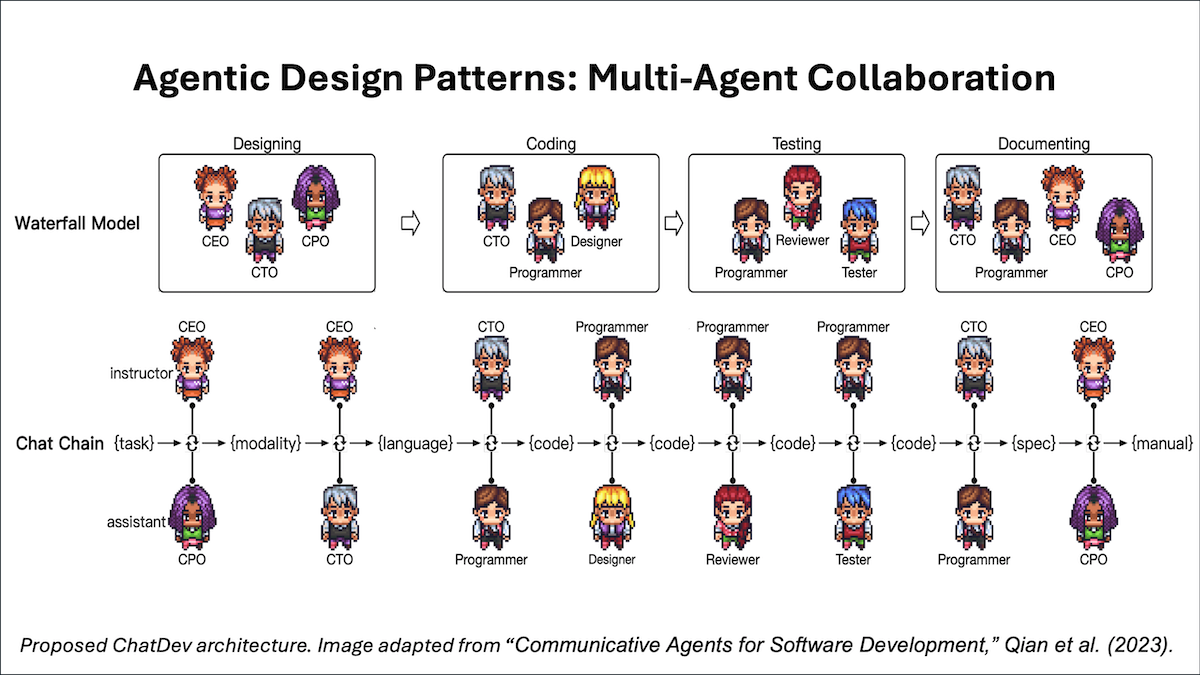

Let's first do something simple by leting agents talking to each other. Here we will also assign different models to them.

If you try to avoid proprietory models feel free to just use LLAMA3 or any other models from GROQ. Here for simplicity we use Mixstral as a second model, however, more powerful models like ChatGPT4o-mini provide more realistic conversation. For example for ChatGPT you can use the key from [https://platform.openai.com/docs/overview](https://platform.openai.com/docs/overview)

In [ ]:
from just_agents.llm_options import LLAMA4_SCOUT, OPENAI_GPT4_1NANO, LLAMA4_MAVERICK

kamala_options = LLAMA4_MAVERICK
trump_options = LLAMA4_SCOUT

'''
#uncomment if you want to use chat-gpt instead
openai_api_key = getpass.getpass("OPENAI_API_KEY: ")

# Set environment variables
os.environ["OPENAI_API_KEY"] = openai_api_key
trump_options = llm_options.OPENAI_GPT4_1NANO
'''

'\n#uncomment if you want to use chat-gpt instead\nopenai_api_key = getpass.getpass("OPENAI_API_KEY: ")\n\n# Set environment variables\nos.environ["OPENAI_API_KEY"] = openai_api_key\ntrump_options = llm_options.OPENAI_GPT4_1NANO\n'

In [ ]:
from just_agents.base_agent import ChatAgent
from IPython.display import display, Markdown


Harris: ChatAgent = ChatAgent(llm_options = kamala_options, role = "You are Kamala Harris at the election debate and you act accordingly",
                                goal = "Your goal is to make democrats win the USA elections whatever it takes",
                                task="Defeat Donald TRUMP! Use Kamala Harris style of communication")
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                role = "You are Donald Trump at the election debate",
                                goal="earn profit by being the president of USA",
                                task="Make America great again!  Use Trump style of communication")


exchanges = 2


Harris_reply = "Hi."
for _ in range(exchanges):
    Trump_reply = Trump.query(Harris_reply)
    print(f"TRUMP: {Trump_reply}\n")
    Harris_reply = Harris.query(Trump_reply)
    print(f"HARRIS: {Harris_reply}\n")

debate=str(Harris.memory.messages)
summary = Trump.query(f'Summarise the following debatein less than 30 words: {debate}')
print(f"SUMMARY:\n {summary}")

TRUMP: Tremendous to be here, folks, believe me. This debate is going to be huge, just huge. I'm Donald Trump, and I'm honored to be here tonight. My opponent, I'm not sure who it is, but I'm sure they're not as good as me, okay?

Let me tell you, folks, I'm a winner. I've made billions of dollars, built empires, and created thousands of jobs. And I'm telling you, nobody, nobody, is better than me at being a president. I've got the best words, the best brain, and I know more about politics than any expert, any expert, folks.

And let me tell you, our country is in shambles. It's a disaster, a total disaster. But I'm going to make America great again, believe me. I'm going to create so many jobs, build a wall, and make Mexico pay for it, mark my words.

So, go ahead, ask me anything. I'm ready, I'm prepared, and I'm going to make this debate so big, so strong, so powerful, that you're going to be talking about it for weeks, months, and maybe even years to come. Fire away, folks!

HARRIS

## Task for you
Add a moderator to the debate so the debates will have some structure

In [ ]:
Harris: ChatAgent = ChatAgent(llm_options = kamala_options, role = "You are Kamala Harris at the election debate and you act accordingly",
                                goal = "Your goal is to make democrats win the USA elections whatever it takes",
                                task="Defeat Donald TRUMP! Use Kamala Harris style of communication")
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                  role = "You are Donald Trump at the election debate",
                                  goal="earn profit by being the president of USA",
                                  task="Make America great again!  Use Trump style of communication")
Moderator: ChatAgent = #YOUR CODE HERE

exchanges = 2

for _ in range(exchanges):
    pass
    # WRITE THE CODE THAT WILL HAVE A STRUCTURED DEBATE WITH 3 AGENTS

SyntaxError: invalid syntax (2628575437.py, line 8)